In [1]:
#Primary Imports 

# Data Handling 
import numpy as np 
import pandas as pd

#Visualisation 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

from yellowbrick.target import FeatureCorrelation

In [2]:
# Loading all the data sets 
#df_artist = pd.read_csv('artists.csv')
#df_tracks = pd.read_csv('tracks.csv')

#The other project Data 
#df_artist = pd.read_csv('data/data_by_artist_p.csv')
df_gener = pd.read_csv("D:\FINAL CAPSTONE PROJECTS DETAILS\SPOTIFY\data_by_genres_p.csv")
df_year = pd.read_csv("D:\FINAL CAPSTONE PROJECTS DETAILS\SPOTIFY\data_by_year_p.csv")
df = pd.read_csv("D:\FINAL CAPSTONE PROJECTS DETAILS\SPOTIFY\data_p.csv")
df_w_gener = pd.read_csv("D:\FINAL CAPSTONE PROJECTS DETAILS\SPOTIFY\data_w_genres_p.csv")

In [3]:
df.head()

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH          0.000028   
4       166693   0.193         0  4d6HGyGT8e121BsdKmw9v6          0.000002   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096     1   
1    7     0.160   -12.441     1   
2    3     0.101   -14.850     1   
3    5     0.381    -9.316     1   
4    3     0.229   -10.096     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   
2                                          Gati Bali           5         1921   
3                                          Danny Boy           3         1921   
4                        When Irish Eyes Are Smiling           2         1921   

   speechiness    tempo  
0       0.0366   80.954  
1       0.4150   60.936  
2       0.0339  110.339  
3       0.0354  100.109  
4       0.0380  101.665

In [4]:
# df_artist.head()
df_gener.head()

mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   
2     1                   8-bit      0.762000      0.712000  1.151770e+05   
3     1                      []      0.651417      0.529093  2.328809e+05   
4     1              a cappella      0.676557      0.538961  1.906285e+05   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834  0.361600 -31.514333     0.040567   75.336500   
1  0.450678          0.477762  0.131000 -16.854000     0.076817  120.285667   
2  0.818000          0.876000  0.126000  -9.180000     0.047000  133.444000   
3  0.419146          0.205309  0.218696 -12.288965     0.107872  112.857352   
4  0.316434          0.003003  0.172254 -12.479387     0.082851  112.110362   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5  
2  0.975000   48.000000    7  
3  0.513604   20.859882    7  
4  0.448249   45.820071    7

In [5]:
df_year.head()

mode  year  acousticness  danceability    duration_ms    energy  \
0     1  1921      0.886896      0.418597  260537.166667  0.231815   
1     1  1922      0.938592      0.482042  165469.746479  0.237815   
2     1  1923      0.957247      0.577341  177942.362162  0.262406   
3     1  1924      0.940200      0.549894  191046.707627  0.344347   
4     1  1925      0.962607      0.573863  184986.924460  0.278594   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.344878  0.205710 -17.048667     0.073662  101.531493  0.379327   
1          0.434195  0.240720 -19.275282     0.116655  100.884521  0.535549   
2          0.371733  0.227462 -14.129211     0.093949  114.010730  0.625492   
3          0.581701  0.235219 -14.231343     0.092089  120.689572  0.663725   
4          0.418297  0.237668 -14.146414     0.111918  115.521921  0.621929   

   popularity  key  
0    0.653333    2  
1    0.140845   10  
2    5.389189    0  
3    0.661017   10  
4    2.604317    5

In [6]:
df_w_gener.head()

genres                                            artists  \
0  ['show tunes']                   "Cats" 1981 Original London Cast   
1              []                          "Cats" 1983 Broadway Cast   
2              []        "Fiddler On The Roof” Motion Picture Chorus   
3              []     "Fiddler On The Roof” Motion Picture Orchestra   
4              []  "Joseph And The Amazing Technicolor Dreamcoat"...   

   acousticness  danceability    duration_ms    energy  instrumentalness  \
0      0.590111      0.467222  250318.555556  0.394003          0.011400   
1      0.862538      0.441731  287280.000000  0.406808          0.081158   
2      0.856571      0.348286  328920.000000  0.286571          0.024593   
3      0.884926      0.425074  262890.962963  0.245770          0.073587   
4      0.510714      0.467143  270436.142857  0.488286          0.009400   

   liveness   loudness  speechiness       tempo   valence  popularity  key  \
0  0.290833 -14.448000     0.210389  117.518111  0.389500   38.333333    5   
1  0.315215 -10.690000     0.176212  103.044154  0.268865   30.576923    5   
2  0.325786 -15.230714     0.118514   77.375857  0.354857   34.857143    0   
3  0.275481 -15.639370     0.123200   88.667630  0.372030   34.851852    0   
4  0.195000 -10.236714     0.098543  122.835857  0.482286   43.000000    5   

   mode  count  
0     1      9  
1     1     26  
2     1      7  
3     1     27  
4     1      7

In [7]:
df.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

In [8]:
# df_artist.columns
df_gener.columns

Index(['mode', 'genres', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity', 'key'],
      dtype='object')

In [9]:
df_year.columns

Index(['mode', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key'],
      dtype='object')

In [10]:
df_w_gener.columns

Index(['genres', 'artists', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity', 'key', 'mode', 'count'],
      dtype='object')

In [ ]:
# EDA

In [13]:
#EDA
# Tried to group by artists and look at data. but it is very confusing because of the way it is arranged. 
# trying to drop  [ ] '
df['artists']=df['artists'].str.replace('[','')
df['artists']=df['artists'].str.replace(']','')
df['artists']=df['artists'].str.replace("'",";")
df['artists'].head()

0    ;Sergei Rachmaninoff;, ;James Levine;, ;Berlin...
1                                         ;Dennis Day;
2    ;KHP Kridhamardawa Karaton Ngayogyakarta Hadin...
3                                       ;Frank Parker;
4                                         ;Phil Regan;
Name: artists, dtype: object

In [ ]:
#Checking for Duplicates

In [14]:
#Checking for Duplicates
# df has no duplicates but it has a unique ID for every entry. 
#If we drop the unique id and then lookfor the duplicates we might find some 

dfn = df.drop(['id'], axis = 1)
dfn.shape

(170653, 18)

In [15]:
dfn.duplicated().sum()

543

In [16]:
dfn = df.drop(['id'], axis = 1)
dfn = dfn.drop_duplicates()
dfn.shape

(170110, 18)

In [17]:
df.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

In [ ]:
# Time to listen to all songs

In [18]:
df.duration_ms.sum()/(24*365*60*60000)

1.249747021182141

In [19]:
#Visualisation of Variability for each column in the dataframe

plt.rcParams.update({'font.size': 22})


fig,ax = plt.subplots(4,4,figsize=(20,20))

sns.distplot(df['valence'],ax=ax[0,0])
sns.distplot(df['year'],ax=ax[0,1])
sns.distplot(df['acousticness'],ax=ax[0,2])
sns.distplot(df['danceability'],ax=ax[0,3])
#sns.distplot(df['duration_min'],ax=ax[1,1])
sns.distplot(df['energy'],ax=ax[1,0])
sns.distplot(df['key'],ax=ax[1,1])
sns.distplot(df['liveness'],ax=ax[1,2])
sns.distplot(df['loudness'],ax=ax[1,3])
sns.distplot(df['popularity'],ax=ax[2,0])
sns.distplot(df['speechiness'],ax=ax[2,1])
sns.distplot(df['tempo'],ax=ax[2,2])
sns.distplot(df['mode'],ax=ax[2,3])
sns.distplot(df['duration_ms'],ax=ax[3,0])

<Axes: xlabel='duration_ms', ylabel='Density'>

In [21]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='BrBG_r',annot_kws={"fontsize":12})

ValueError: could not convert string to float: '4BJqT0PrAfrxzMOxytFOIz'

<Figure size 2000x1000 with 0 Axes>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the data
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Check for missing values and handle them if necessary
# For example, you can fill missing values with the mean of each column
numeric_df.fillna(numeric_df.mean(), inplace=True)

# Calculate correlation matrix
corr = numeric_df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='BrBG_r', annot_kws={"fontsize": 12})
plt.title('Correlation Matrix')
plt.show()

In [23]:
beatles = df[df['artists']=='The Beatles']
beatles.groupby('name')

In [24]:

pd.pivot_table(df, index= ['artists','name'], aggfunc = 'count')#), values = 'name')#.sort_values('average_salary' , ascending = False)


acousticness  \
artists                                            name                                 
";In The Heights; Original Broadway Company"       Blackout                         1   
                                                   The Club                         1   
";In The Heights; Original Broadway Company", ;... Breathe                          1   
";Legally Blonde; Ensemble", ;Michael Rupert;      Blood in the Water               1   
";Legally Blonde; Ensemble", ;Michael Rupert;, ... Whipped into Shape               1   
...                                                                               ...   
;黃國隆;                                              思想起                              1   
                                                   藝旦調                              1   
;黃國隆;, ;王秋玉;                                       草螟弄雞公                            1   
;黑豹;                                               DON'T BREAK MY HEART             1   
;조정현;                                              그아픔까지사랑한거야                       1   

                                                                         danceability  \
artists                                            name                                 
";In The Heights; Original Broadway Company"       Blackout                         1   
                                                   The Club                         1   
";In The Heights; Original Broadway Company", ;... Breathe                          1   
";Legally Blonde; Ensemble", ;Michael Rupert;      Blood in the Water               1   
";Legally Blonde; Ensemble", ;Michael Rupert;, ... Whipped into Shape               1   
...                                                                               ...   
;黃國隆;                                              思想起                              1   
                                                   藝旦調                              1   
;黃國隆;, ;王秋玉;                                       草螟弄雞公                            1   
;黑豹;                                               DON'T BREAK MY HEART             1   
;조정현;                                              그아픔까지사랑한거야                       1   

                                                                         duration_ms  \
artists                                            name                                
";In The Heights; Original Broadway Company"       Blackout                        1   
                                                   The Club                        1   
";In The Heights; Original Broadway Company", ;... Breathe                         1   
";Legally Blonde; Ensemble", ;Michael Rupert;      Blood in the Water              1   
";Legally Blonde; Ensemble", ;Michael Rupert;, ... Whipped into Shape              1   
...                                                                              ...   
;黃國隆;                                              思想起                             1   
                                                   藝旦調                             1   
;黃國隆;, ;王秋玉;                                       草螟弄雞公                           1   
;黑豹;                                               DON'T BREAK MY HEART            1   
;조정현;                                              그아픔까지사랑한거야                      1   

                                                                         energy  \
artists                                            name                           
";In The Heights; Original Broadway Company"       Blackout                   1   
                                                   The Club                   1   
";In The Heights; Original Broadway Company", ;... Breathe                    1   
";Legally Blonde; Ensemble", ;Michael Rupert;      Blood in the Water         1   
";Legally Blonde; Ensemble", ;Michael Rupert;, ... Whipped into Shape         1   
...                            

In [25]:

pd.pivot_table(beatles, index= ['artists','name'])#, aggfunc = 'count')#), values = 'name')#.sort_values('average_salary' , ascending = False)


Empty DataFrame
Columns: []
Index: []

In [26]:
beatles

Empty DataFrame
Columns: [valence, year, acousticness, artists, danceability, duration_ms, energy, explicit, id, instrumentalness, key, liveness, loudness, mode, name, popularity, release_date, speechiness, tempo]
Index: []

In [27]:
beatles['this song']=beatles['name'].apply(lambda x : 1 if 'a day in the life' in x.lower() else 0)

In [28]:
pd.pivot_table(beatles, index= ['this song'], aggfunc = 'count')#), values = 'name')#.sort_values('average_salary' , ascending = False)


Empty DataFrame
Columns: []
Index: []

In [29]:
beatles

Empty DataFrame
Columns: [valence, year, acousticness, artists, danceability, duration_ms, energy, explicit, id, instrumentalness, key, liveness, loudness, mode, name, popularity, release_date, speechiness, tempo, this song]
Index: []

In [ ]:
# Trying to figure our which tracks are the most popular

In [30]:
#but the problem is that we can't differentiate between the various releases and remastered versions 

#Most Popular Tracks
fig, axis = plt.subplots(figsize = (16,7))
popular = df.groupby("name")['popularity'].mean().sort_values(ascending=False).head(15)
axis = sns.barplot(popular, popular.index,palette="mako",orient = 'h')
axis.set_title('Top 15 Popular Tracks')
axis.set_ylabel('Tracks')
axis.set_xlabel('Popularity')
plt.xticks(rotation = 90)

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

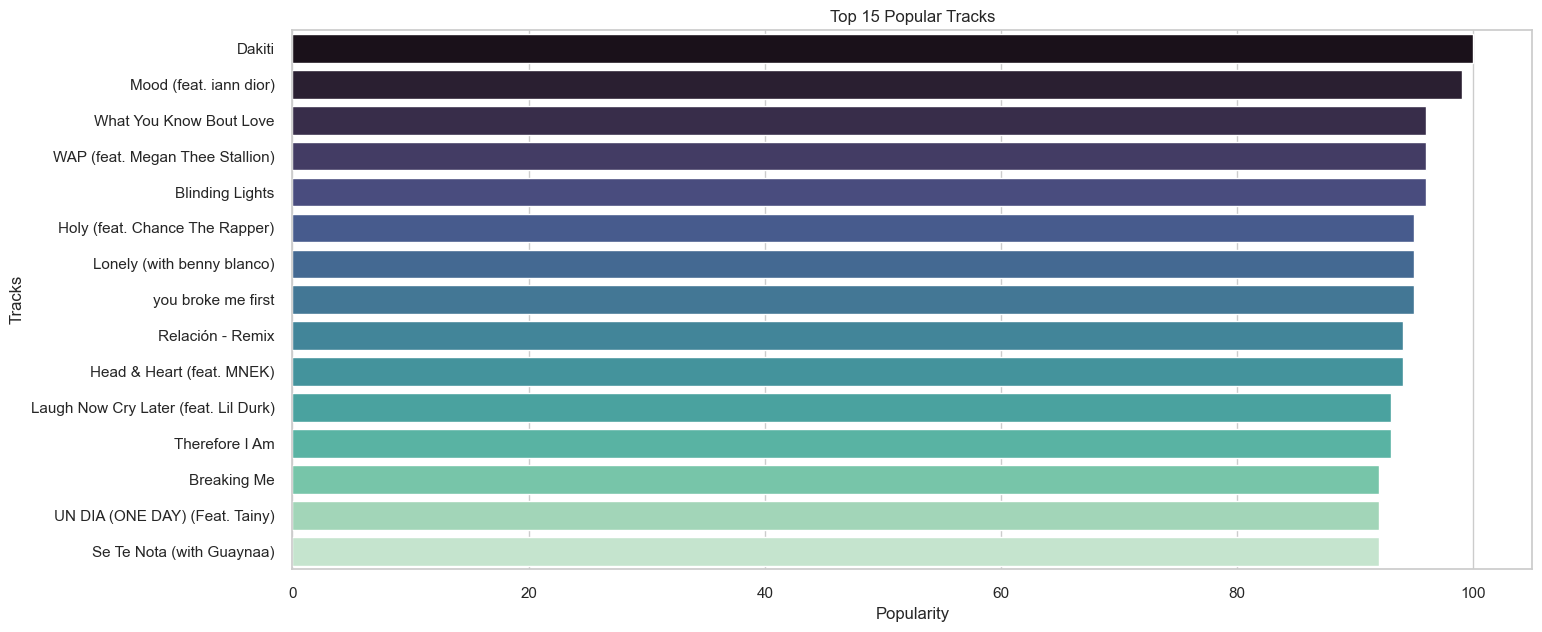

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
plt.figure(figsize=(16, 7))

# Group by track name and calculate the mean popularity
popular_tracks = df.groupby("name")['popularity'].mean().sort_values(ascending=False).head(15)

# Plotting the bar chart
sns.barplot(x=popular_tracks.values, y=popular_tracks.index, palette="mako")
plt.title('Top 15 Popular Tracks')
plt.xlabel('Popularity')
plt.ylabel('Tracks')
plt.show()


TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

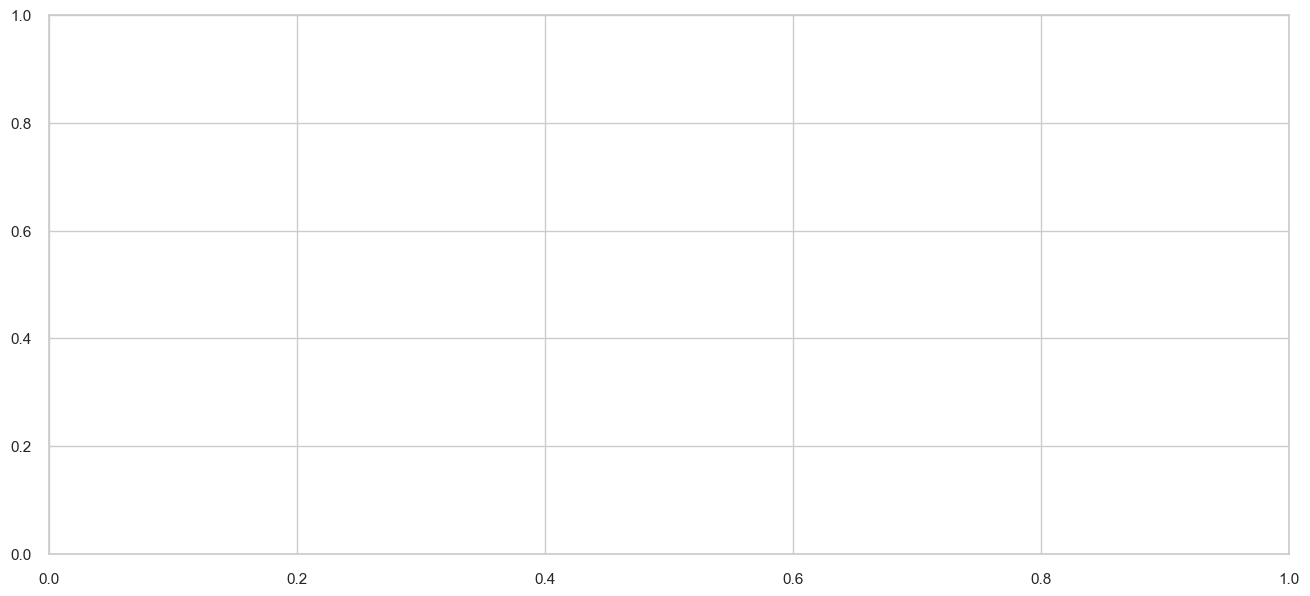

In [32]:
#Most Popular Artists
fig, axis = plt.subplots(figsize = (16,7))
popular = df.groupby("artists")['popularity'].sum().sort_values(ascending=False)[:20]
axis = sns.barplot(popular,popular.index,palette="mako",orient = 'h')
axis.set_title('Top 20 Artists with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
fig, axis = plt.subplots(figsize=(16, 7))
popular = df.groupby("artists")['popularity'].sum().sort_values(ascending=False)[:20]
axis = sns.barplot(x=popular, y=popular.index, palette="mako")
axis.set_title('Top 20 Artists with Popularity')
axis.set_xlabel('Popularity')
axis.set_ylabel('Artists')
plt.xticks(rotation=90)
plt.show()


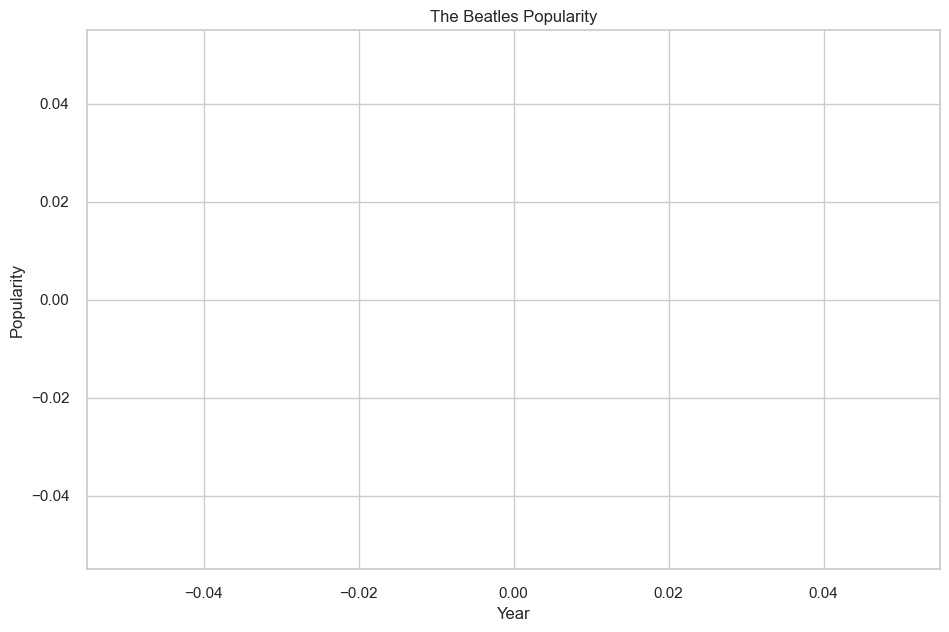

In [34]:
# visualize the popularity of The Beatles songs over the year
Beatles = df[df['artists'] == 'The Beatles']
plt.rcParams['figure.figsize'] = (11,7)
# line plot passing x,y
sns.lineplot(x='year', y='popularity', data=Beatles, color='green')
# Labels
plt.title("The Beatles Popularity")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

In [36]:
# Assuming 'df' is your DataFrame containing the data
# Assuming 'release_date' column represents the release date of each track

# Specify the date format
df['year'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d').dt.year

# Filter data for The Beatles
Beatles = df[df['artists'] == 'The Beatles']

ValueError: time data "1921" doesn't match format "%Y-%m-%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
# Assuming 'release_date' column represents the release date of each track

# Extracting the year from the 'release_date' column
df['year'] = pd.to_datetime(df['release_date']).dt.year

# Filter data for The Beatles
Beatles = df[df['artists'] == 'The Beatles']

# Plotting
plt.rcParams['figure.figsize'] = (11, 7)
sns.lineplot(x='year', y='popularity', data=Beatles, color='green')

# Labels
plt.title("The Beatles Popularity Over the Years")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()


ValueError: unconverted data remains when parsing with format "%Y": "-03-20", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

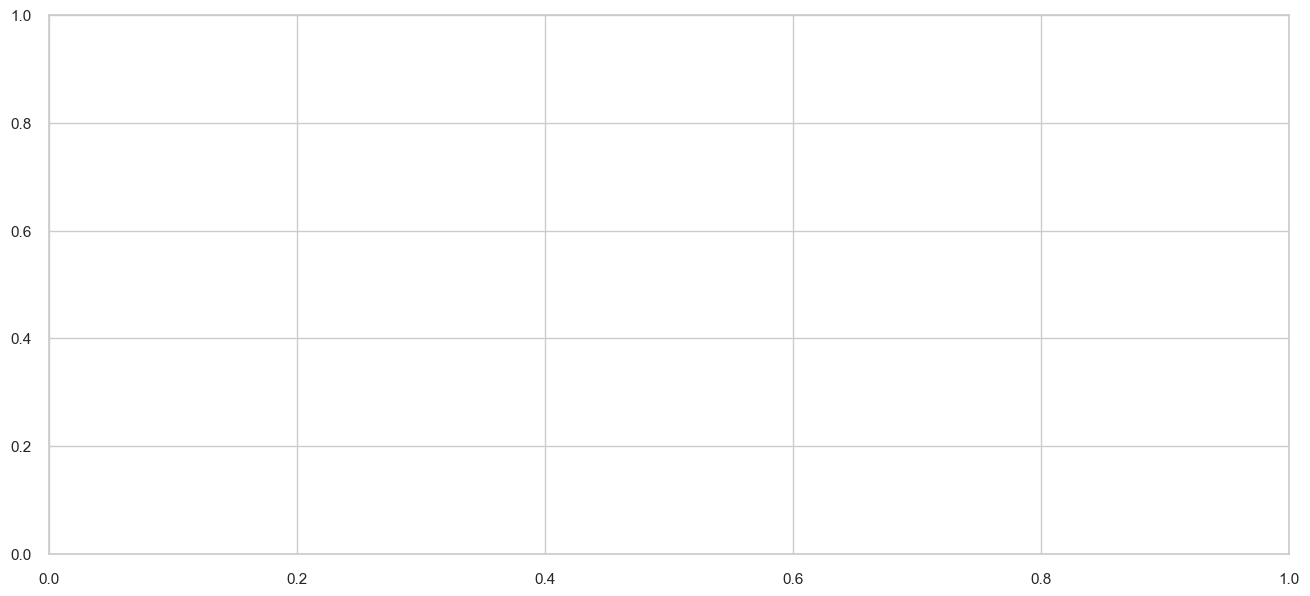

In [38]:
#Most Popular Artists
fig, axis = plt.subplots(figsize = (16,7))
popular = df.groupby("artists")['popularity'].mean().sort_values(ascending=False)[:20]
axis = sns.barplot(popular,popular.index,palette="mako",orient = 'h')
axis.set_title('Top 20 Artists with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)


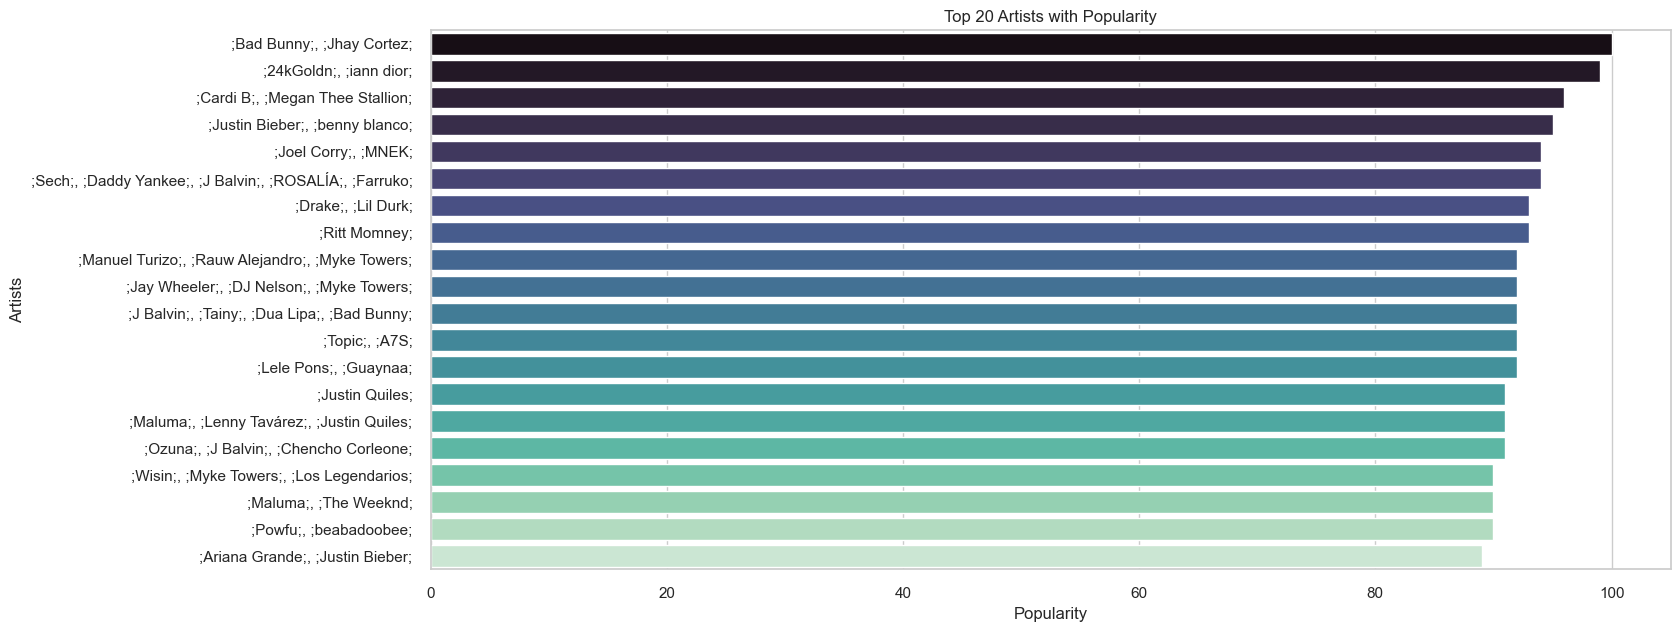

In [39]:
fig, axis = plt.subplots(figsize=(16, 7))
popular = df.groupby("artists")['popularity'].mean().sort_values(ascending=False)[:20]
# Specify x and y separately
axis = sns.barplot(x=popular, y=popular.index, palette="mako", orient='h')
axis.set_title('Top 20 Artists with Popularity')
axis.set_ylabel('Artists')
axis.set_xlabel('Popularity')
plt.show()

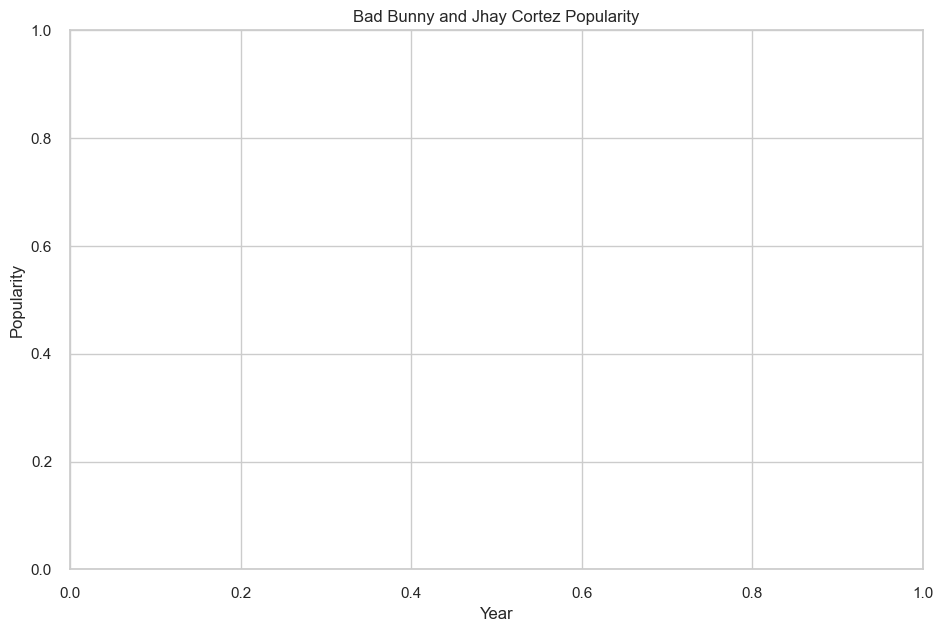

In [40]:
# visualize the popularity of Bad bunny songs over the year
Bad_bunny = df[df['artists'] == 'Bad Bunny, Jhay Cortez']
plt.rcParams['figure.figsize'] = (11,7)
# line plot passing x,y
sns.scatterplot(x='year', y='popularity', data=Bad_bunny, color='green')
# Labels
plt.title("Bad Bunny and Jhay Cortez Popularity")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

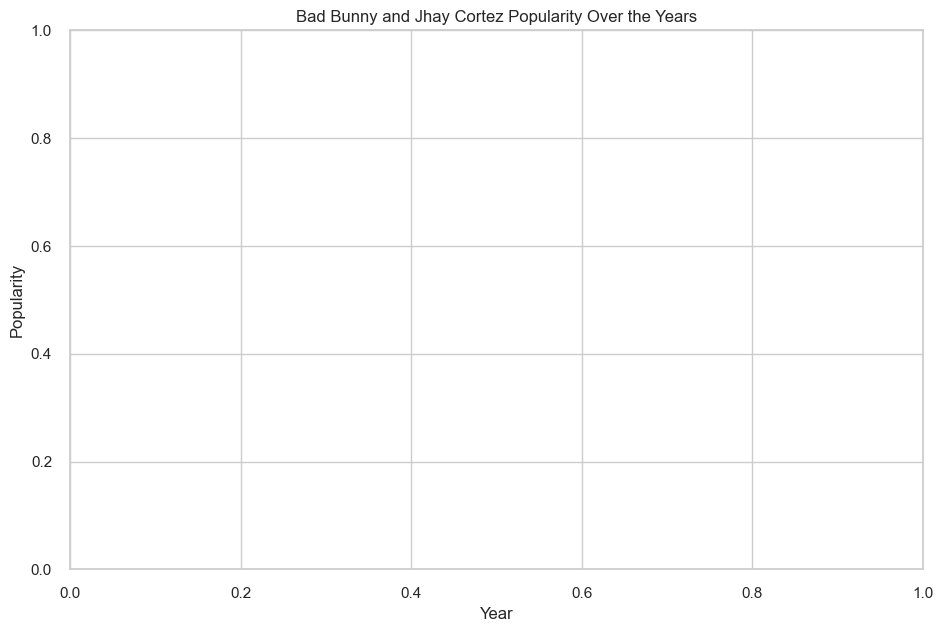

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'release_date' column to datetime format and extract the year
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

# Filter data for Bad Bunny and Jhay Cortez
Bad_bunny = df[df['artists'] == 'Bad Bunny, Jhay Cortez']

# Plotting
plt.rcParams['figure.figsize'] = (11, 7)
sns.scatterplot(x='year', y='popularity', data=Bad_bunny, color='green')

# Labels
plt.title("Bad Bunny and Jhay Cortez Popularity Over the Years")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

In [42]:
df[df['artists']=='Bad Bunny, Jhay Cortez']

Empty DataFrame
Columns: [valence, year, acousticness, artists, danceability, duration_ms, energy, explicit, id, instrumentalness, key, liveness, loudness, mode, name, popularity, release_date, speechiness, tempo]
Index: []

In [43]:
Beatles.sort_values(['release_date'], ascending = False )

Empty DataFrame
Columns: [valence, year, acousticness, artists, danceability, duration_ms, energy, explicit, id, instrumentalness, key, liveness, loudness, mode, name, popularity, release_date, speechiness, tempo]
Index: []

In [44]:
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
plt.figure(figsize=(20,10))
for c in columns:
    x = df.groupby('year')[c].mean()
    sns.lineplot(x.index,x,label=c)
plt.title('Audio characteristics over the years', fontsize=40)
plt.xlabel('Year',fontsize=30)
plt.ylabel('Characteristics',fontsize=22)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 20}, loc = 'upper right')
plt.show()

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 2000x1000 with 0 Axes>

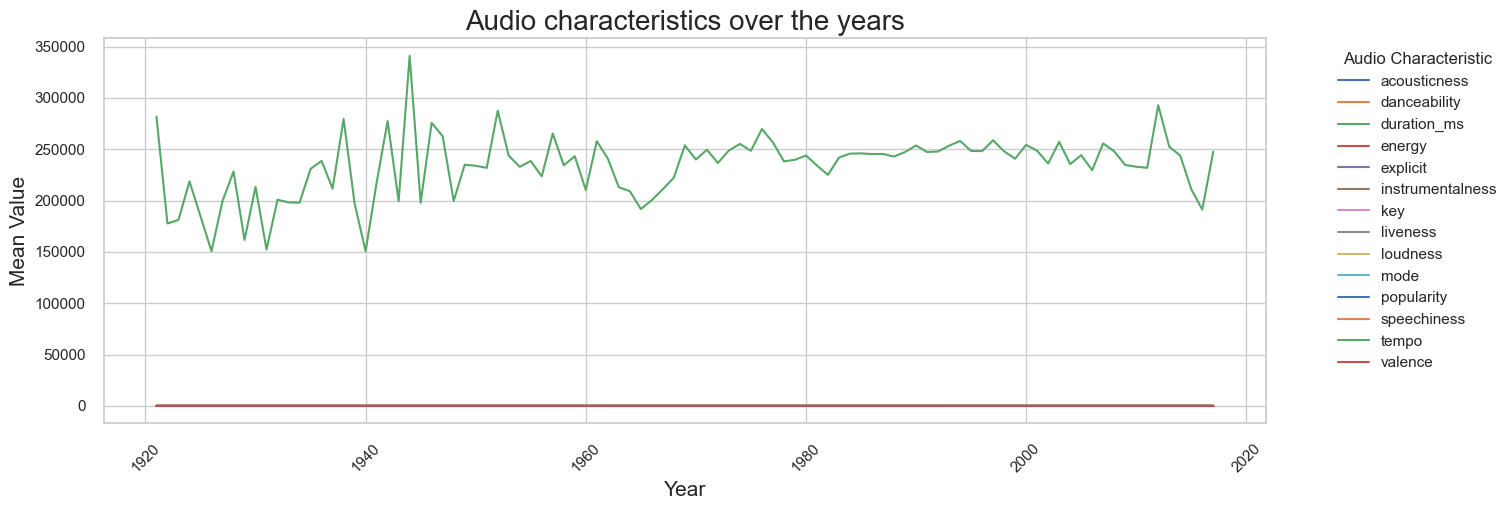

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'columns' is a list containing the audio characteristics columns
columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
           'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
           'popularity', 'speechiness', 'tempo', 'valence']

# Plotting audio characteristics over the years
plt.figure(figsize=(15, 5))
sns.set_style("whitegrid")

for c in columns:
    # Grouping by year and calculating the mean of each audio characteristic
    x = df.groupby('year')[c].mean()
    sns.lineplot(x=x.index, y=x, label=c)

plt.title('Audio characteristics over the years', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Mean Value', fontsize=15)
plt.legend(title='Audio Characteristic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [46]:
columns = ['acousticness','danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'popularity', 'speechiness', 'tempo', 'valence']
for col in columns:
    x = df.groupby('year')[col].mean()
    sns.lineplot(x.index,x,label=col)
    plt.figure(figsize=(15, 5))
    sns.set_style("whitegrid")
    #sns.lineplot(x, y, data=df)

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

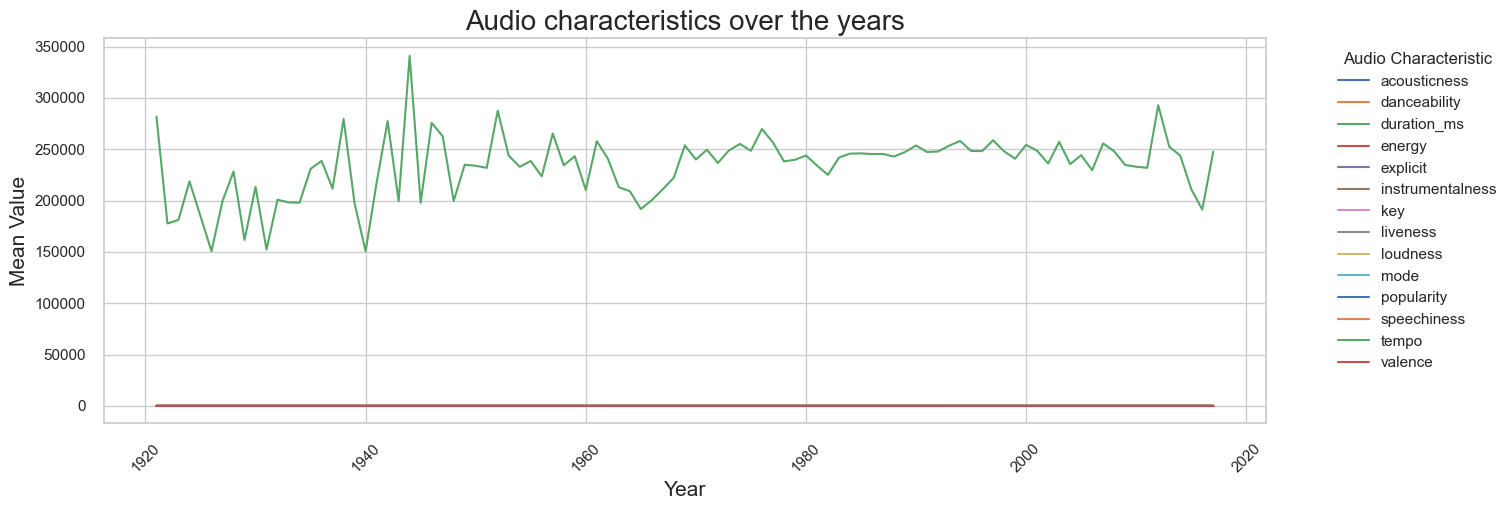

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'columns' is a list containing the audio characteristics columns
columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
           'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
           'popularity', 'speechiness', 'tempo', 'valence']

# Creating a figure
plt.figure(figsize=(15, 5))

# Iterating over each audio characteristic column
for col in columns:
    # Grouping by year and calculating the mean of each audio characteristic
    x = df.groupby('year')[col].mean()
    # Plotting the line plot for each audio characteristic
    sns.lineplot(x=x.index, y=x, label=col)

# Setting plot title and labels
plt.title('Audio characteristics over the years', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Mean Value', fontsize=15)
plt.legend(title='Audio Characteristic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [48]:
y = df.groupby('year')[col].mean()

In [ ]:
#sns.pairplot(df , vars = ['year', 'acousticness', 'artists', 'danceability',
#       'energy', 'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
#       'speechiness'])

In [49]:
import plotly.express as px 

top10_genres = df_gener.nlargest(10, 'popularity')

fig = px.bar(top10_genres, x='genres', y=['acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'speechiness',
       'valence'], barmode='group')
fig.show()

In [50]:
import plotly.express as px 

top10_genres = df_gener.nlargest(10, 'popularity')

fig = px.bar(top10_genres, x='genres', y=['duration_ms'], barmode='group')
fig.show()

In [ ]:
#End of trial section
#Feature Selection

In [51]:
#from yellowbrick.target import FeatureCorrelation


feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = df[feature_names], df['popularity']

# Create a list of the feature names

features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features, font='22')

plt.rcParams['figure.figsize']=(30,30)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()

ValueError: array must not contain infs or NaNs

In [52]:
import numpy as np
from scipy.stats import pearsonr
from yellowbrick.target import FeatureCorrelation

# Check for missing values in X and y and handle them
# For example, using pandas:
df.dropna(inplace=True)  # Drop rows with missing values
df.fillna(df.mean(), inplace=True)  # Impute missing values with mean

# Check for infinite values in X and y and handle them
# For example, using numpy:
X = np.nan_to_num(X)  # Replace NaNs with zeros
X = np.where(np.isinf(X), np.nan, X)  # Replace infinite values with NaNs

# Instantiate the FeatureCorrelation visualizer and fit the data
visualizer = FeatureCorrelation()
visualizer.fit(X, y)
visualizer.show()


TypeError: Could not convert ['4BJqT0PrAfrxzMOxytFOIz7xPhfUan2yNtyFG0cUWkt81o6I8BglA6ylDMrIELygv13ftBPsC5vPBKxYSee08FDH4d6HGyGT8e121BsdKmw9v64pyw9DVHGStUre4J6hPngr5uNZnElqOS3W4fRmRYPk4T02GDntOXexBFUvSgaXLPkd08zfJvRLp7pjAb94MA9JmF0BMkRpQtDoKjcgzCpnqLNa0H3k2CvJvHULnWChlbeFgx0LcXzABeA84EgudqpNUN1I0NFeJgmTAV1kDfzSQNK41Z0Nk5f07H3JaEunGrYfbqHM0POO8XaUgW5Qjbv9sbDy8W0QU5xT6Mik4vpyt1ItsRXK0QvUUTHYUQQhSXLwffzjL70RPKAq5yhbom6hXQz5qo6L0VhIFYGSpY0Z8IAIA3C6bX0eQsdik7GTEy7M3UytCbSN0i7MdVu0tNEyUdgpCBilKe0osXBirvQzPRfKSUDzHPCv0qt9g8zf2ZiQhy3FIx89xA0yxeAe7MlS0UWZVdNZVZWw107JTiqeqxj5P0ocypagMK17gxBcWBIkEFUZA0vN5khu18BvzCRC1jeAsj1U70YuRy1OicZEUVSwpiAosSQm16D81Pb4ebTZ4t8erRbLPPb8Pk1RgXfAX9PrSfTKTFvOQxPR1SCWBjhk5WmXPxhDduD3HM1W2ONoo3OZW5opytgqpYdE1WOXWCjKZzJJRSMJcrLrK11Wy1BuvVlkZWsfSge0dp9Q1Ybjz5mMnE0hJbkB8n7V801oOI1MEkrpbnMCRSK5vGZ11qmXkw1WhSvvIL5IqBnW821xGx91Ks3RQFqyam0Fdrky1zBcLIHAqpBlL8gAJ5Cxa7273hgBmjqe8KSxmWHyyPAD2Bj1dMObcYNFt75znIEtWa2Cfk7LOOiTLVxe9BNoGGCL2CkM2wcBtqG796dZeZJhPk2EV71z9RFz15SDR8WezEXG2MtcWKwc16dqFqdM7v1WST2OE3f5tu6Pd9beS0WWmQ7Z2OlwTxNQ9kSkbPFC7tQN5x2WlMjnZIthzqfwYVHh6zbj2X6BN8RXjr4ArIEhjGa6QV2aCCdTBcNmbcplMO66UAvU2aMQAP0h9Qww5KAkMdag3L2c6cN8mcYzqvFbLnzuPI4K2ikGmgf43Y10bp5J7IF9QU2jy7vkWNflSApGQ7b6ziA62koVN4vxAXOmaqILK5Kbbs2ksYHAsGBLxAupsni2QeNw2lgAz3rSTLcqyVj2fJsIzo2oWQOXbtHpvswlcWeJYe7P2tDwnNWXjupxNEjTTb9qDQ2xJPXDxhBbcI8d4KraRJmT2xMpQnfWIgRFjzrRXOl4zT2xRAzeh9R6zNdXdVhCXMxj35eVH8c7u6LGwyksBGMQCp39ZYlUAoqyE05y7rsfeivo3C8IMx8BgWGiQE9bIuqCvP3Dx6MiHU13YcyVf6FADqjC3I8393MR3DWSprtxgpZMoy3Jsx93Aim5jr96396tgDt73Po8aZhKXPvBlWZFevIrI53WV2AlpIn96bzLkkZ7RNob3XooVMkWzhrHdPQyi46sl63YWrfsNGrZNsC270jMiBad3ZlvfjWLxFqfOGK2FTR2ph3ifqMMzDlh6wLRzjLOMTdQ3tEwdlwf8ZrxpksJorI5Tc47LO5zrjx6ShMymLqp80ef4BWXQSxvAa73YTLVLlMtGp4Zu1Kr6zfR04pETJbFh7Ox4aVy85Y2sxMwIKmAcimHp04hrY1sE4ZumfoFLYGr6prg4i1aZH9CQyvsWtOulh6mbF4jFzCDBChPFeun3uO9K9nM4mtn0J6yvxJMPA0euDFQ6g4v8CkyrDdgtgqkssZwaDe84wX1xtFyqlhBMBX7xaOfNB4yhXZDEdOZIDgXvu7e5RyT4zNQOx4Y12lNIY1JfoSbCg5BOwFPKyqp63iWotfOgxqZ5GdglyuPh8z69eZ545uBNO5PgH6AAb9dKTHPsvJrOALq5Yknrra9N4AKkm6BP6jHpU5ZMgYvzelw6ALor5G54Wjw5bQh5CYt4ugpKGr0CqgUP45fqW6tFvvvWwh1DvIM8T0K5jaZaDPkmw0zrju8ykIo1V5oBrfFrhnPn207qrhS0m0s5onW5WGJnE76uwRQN8fo2V5qf7z7H2ehaBtJmUd4h4pV5tWNbOrkJON8fcBoIzPru75w0UyOkp8IjkKMwNlaNLol6QDEivvdUMxH42QVxfSsSK6YBqmlodT9LcejuGTaIWZC6lwygJ9iQV6NNOQh1Gn3Gb6o36ekDgoZZJFPiKw6Ufef6oXKID9RCMj3y2Dee57FNP6rQflsrQLKpV3RY78jOWhp72tqohY1oMA5n1vdHvWNZ57AIjpopQN5ojA2KXCqCKP37D97NlUR1DwwNRSbZD0ei07FOdz0ddtjeG7WREJQOVa17GH0i9aPD7ZGNxoIVS4Fhf7agPeo1jNiA5OEXGFDzl7I7j8gfyLLffcs9pL4ig7aCf7sp9mMFEXppoWclAC6v3wJ7vlnvBX2t1eYdgVNkoremm7zph0VMbYl7KoqReyowKiv0Dd9ImXtAtGwsmsAD69KZT0IA0Hju8CAgYfV1hwhidBH0IgI1UCz84pYeVetnl1lGP0QiT0Oo5QdLXdFw6RDOj7h0TWsNj5iSvbMTtbEDP7A4V0kCB1bDVBC8gWCFcnJyIZc0pXUGQcBxfoQXg2e7G9Wwk10u9ZWsOnhEyqFJCC2rQVy112adU33vo4C1eRZct2hWy1CZkVPFUK7wO1sMOlBHxJr1FnTOwM5cW5N9wzCWziLKC1QDTYyfndMN9SDtRKDv9XO1ZYRk4U7EuJwdRZNHpEBIz1b8HZQCqcqwbzlA1jRTp6E1lia44teZBfbv0PnPkc5dK1v0HtSUeQOu3ba28pvYE5y2BVWvGSdgUZtC2La5P3Jtv3aynsWyvRwa1r5ekqaWxD33d8zXYhG3sFx4uL9vv8IRu4CjnVzvSu86vqI5gY8SjPx4iy1fsAHBgR2STJjPDhjY25P35CyOEQiMqf8Hd6Pty5p5d5gQxHwYovxR5pqETOIAa63IcPgVIW0PWeJTaIY7GCu7p94hrYktZStgIu6TCj3cZ7yWdEDmuqweoRkhZeftRtR3eMrYc092k7SIJfWJ7oasR2wAfHM7Whz67VFbdanhZlk2AZgaYZSwUosJD71J2N2Zo7lRFR5GJCxK87ZbVMtQSeS0V1iYWPXCBTaB6dhbiprGF6qRvnXftofjYJm1Mg98UWL6sOKopKyVWwEJKh8zztYp56XTvSCqGLLH0vzQQRn55hz4ejUoPIMggFTVrAyvodqJQ1yjck0Owf0HfhY5kWHiXIQ5lpBC66XQzpVDJuknDUuZd0rUf1j43orpfi6f4LbVo8D50zXyjVdFb3xAr3hnyYYn11xEEYhWxT4WhDQdxfPCT8D2gyqc4p3WoxKsc6zaXF4hM6ktCV1ZtqlnXQeRFQvcXON6N1wS1e5bMOubmVtkDLNrt3rauXVLOOM5BlxWqUcDpkg3U6L5KW48YOsksN9Qvlydl7GRsQLXMzDHYb8zZAnMCDK08XPnovoMlLsFB3LDGq0rX5WlMyDvyQedom0kQ3MCTow0F5F4GWA0Tz1ebZlLar2wG1UdqHVRFYMZKU2Q7xkLtYc1h0wyCVd12PDSd6CLoGaVL3tkC9PMf19ffJlh65EdANg4ep3h4btBtuxsNeLFVzq5A527J3xtyY4MdrpKtWcJNtL5SvyP1ZeJX1jA7AOZD08NA7qxfKQ5qlcunexI4f0qifa0Vl2DO5U6FjgBpzCtBN3OA1mngGai1eXbHcBXuA6Z4jZ2CStrJiuFeHNS84A3kaT8s2ivh0kwd7QIViw6YqDPdBA1L0puqUCoINHyHjzzWXrHC20VPM7ePvpxTQyZFjOiP1g2AYdjRjSm49s6MFZiSlcSX4FINjzgcPjqR2PPpnWrCKF4GOd9yNQrpl6omACRgvCX24t1G1nGmPOms95TB9wz8FF5bfjNeQIU43IJPNY6c56fB5c6hPSOnuiLnTve5b9s7ZS02smo7WfO95Ww8MZw06h1p0HUCWtOLhJhXwSRn6pvzQC1v6v5llnekLbreJYIRfkKc2cmUadaXBixJGY2x87EMOa300WVfsVnOUJM2KXAm9IGS3DzcB6weYL3L7oRNmsJCaV3IL7X89mdAJ4ISGrGXi3sB3tlygdsn8Jl6D0XA7RRslx4E0HHRQlEdBFhsQHrKWXRR4m1Th0JSQkevDsHiOpoxlQ4qTkOBmwGFamB3V9QEFwDS4ubnmGMXNLgQpj5YKoldMm4yZ7B7yoMjDMH4oInYA36l5CwOaZmAAsFfbQ5qCKS6sn5EFXgEnibXPumWosZtJqkx5WfYFtwzOo8Ne7DA1qhtWl5eXOIVUkW17FqnEoLR2wTX5pIiw01BoIPnkQQI1AZHQL6azxqS9u7eO5DslqJCWMNd06Q9isDLNDaHJNPa5lM4Cg0QfWOoNZibrxHpzdKWEHBZ180gKK9WXgetU7EAxhCn7t18NiVMY4Fz6MjnhrX8xFiM1h0lfbm5uARsmDAkBikqfz1t2zq9TXj7mlSX8fcKwCbm2DAK09fP0bobALaArOEeCI2GnYkuVM8jQh4sFGGmDfcV2SRy24tTjBERSmb3FHqzdb2gwppa6p7HymxbyxEooUNI2n13QpmPEINmoTLUAlLCd72nwxT2BLHn5NjQj0wuEXAu31N4so4BNr6e0Hz2NtmU33377bagPbNQx6K6RKjuUFQ33GuVFPnSVW036wmwUrXQ9Q3MUeRkKpLxxyRFzqMTj1HY3jic1HtQwJwaKnBL4ykuwZ3pcaFPeiPvuLD46XTuVNiF3qByw3YrQnpjMttThvwclS3yJC2QZqAm1i2wSob2Cpyv43WZyNbzOJOnKQStu8if8E46ddI0x8tLiOjDFqb2TQ5R4Bk8r390pyafdSPtWoUKwz4Ewzp7BFfvcXofZnvrYwFx4PD69KQwh9GccLW2647tTL4j1w8LCA1MLSnTYxMVXQ635EMxMmB4iSzA8jMNgLcTtO5SM5voPROPhpgLuqRpGnNp5rgmvqVTH38BKIhzEHanMq6JLKiy1LMbmYY8JOM38UR96TBNeFMHsIarzHz8cz74KA7H5X09Fl9MN0FhICH4TSF67eKV3eq2hqgAkYaWF3voms0YIo0uq3o867nFkE9I9hf20fuLzjcUhMW9s6NBsDb22L0oqDrehB6TLZNZk7J4sTKA2ohtXE5y4GhN0Zxvalubes4Q5I6riVFNV4mJaqSCmB0C5f5zQytojoUSXcJKSJ4hJO0GBMsGrBHw8rifEpXZabKx1B9DQSfiDWhYZmkqbYyonp1C24gb2rQwSd262BP09DNB1HfsGFkj5HdvEUyiWAr5Bv1YjHwSX3Y7X8586eaXM1Kk1eLbwzyHyUne68R2yXPidS25SMQZnHTtKcUxFIpG7Mhp2DMT63ps2b8F2PmbVG1Jtu2d3OQvoLSn9NA4sMGIYxNT2zFWLv60Tyz6D7SUQUNZtH34rdVyVGI2u6I0tNWc8v0Y3DWEcGDSXu42LYHbSVYguU3ZKOtk1YGKwrQkDhi73zJr3erNdiLPou8N2daJMvaaWv3f4HAZPUTSrQbK6jCwQhnx3lWtpc2gKflv5xG7qGVA9l3zsFs71s4rmanTNdQUatzS41RLkvyELWv5ydLwQ6FsLu4eM1VXQJL2BUF8oS5z0aMg4qCTrMjyVYDIGVKSGbuBNF4rU4TQ59s6Z91flH6bqPKM4xHyPfnrvKvatqt2oj3b4V51aC0HxEnEvhiuCRRXwipW52LOYFwwceYeK0A0XCA8CG52rqxBsKzlyuWPkZDTryPJ55ihYpQJAmCxrStWCqbyLz56nYVNAo1pyeR5lNyQDkaw5NVr3qEKa1YJiFs4W04JbF6B23Olc7unlf1u4g7fKcC96DT6nvj99xYdNwh4zc2qVM6FY2h8LhZnDLz2qLiDu0kw6Gevw7gzy3smhlriQzlCVG6VWSJhuxjaIQdsE37xXfDj6nL3RDerJ8lSOX1anIzpdz6wgJnau215hVv6zrtPkBuz6yqYqwtzaMNOHDiNScVuwc71tnorDlCFZ4g2c1VEaQkR7dkz2VUbSc7Q884erTp7pG7li6UhaaGIR6qcrZKdj1V67uLMgGFcaP2GFyyXzcgSXj7xHvQztpZzhaR9JRaeXDhM6rEw2OvQHSwaPfYSv9proK59UEylF5pnWCXm91Hzk2Q90JisTodwlw4iokUY4zEfMb5l3GHotrnIYZcaxvDgHbst3mKyLrlesMkJpHAarbeXCU5fihSggqWM5vABDBrKxGhE6ElNcnaA5qDK4VlXrLrqvx7zdqEebfxYBKKYfLpRDcZb0B6ttII7PpRQXgreuJCLv17AO6HiSVKT8WjYGc5Oh9ws3t9Atfmz1AsCUoltGcOWm64qdExp8yEjjREnW6qe59qT661CAsOnUSYImyPn8PwtfN6tWzn21SATD02S0ts7BSPA7otUCdCHZmbKknO9fVKSNx0WpK3FoUfvOcfTtU6X0hbH1WVXxCQtAvzwerdF1oBiXy1eesahm8KPMP9hTEv9W3QL3JCJs6b2Midbvum3qechgd3iBSWcxxl5xrw5w5iDYIFq4Lf3YhfAE55vTfRyj5SUIq4SQ6xU6Q9AP6bua8bldBoe5vZwWZvoqDYiDqO6u7fIZm01ZZRn5vix6WJfvQqXLtpP09MlY8XZXec36c8z27raVd0mvVIlqmAJnk4S1zWz8Pye0xOgGPN7fDszF6wLpPBE6r3SzSfiYWgjMNdUNi3bCk5B3pKHJwxKDCnhv6I5Jqhz8s3sTY4w8SiETVl4BJyGTNpd4SGCTwZyY0uTOJuMMsYKWl4YJ5hX2TZiBMAlwcUyfu8c5v1mU1giXqokrOnNhCPDkP6nVSuzjKSZ9y6NrxUtmimA7mjBXTOlhlaxX3qZDLfX6G0cqYzfCNsc3ESTkEsE45Ns0dFIPCkgtDTapTIN3PgQON0fSiph081hxiAPQ95Ra7860ffe3xtnnDpGxRE3lHIwhD0g1SxfmgprLJXsBQ40pIYM0jevjABCJ7yA139ejmBjZY0lL9oZj00ktbJjmvJhuGnp0ldBKPrhPqoqJcfwpQ4X0x0sfPuqQFRqddMCwyntbyjC15SUltrayJlHNaoEVI1NgM18OWcGarr66PybHGAF9nhr1EO65UEEPfy7CR0NK2sDxy1FoAqfehAMBUEWKz01sVtr1JKGMzesB5AMCp9Yuqbcjj1Wa0hdSbicX9gehPufTzr31agQgiViJVJrONfuBVGck61bpb5MLji9mbUPqRltTtIk1dxQ9woGE6ErHP4eoct4b81iYULfwDSwsh4eQUkdSx3D1spxOSeCG8DUa5pwK6EPvZ1tVeausocI8kRJXlAm3kGP1vyWKqg4E54w3woxOqIduz1zsq8owQ8KZ1yv7r0EZn3J2XIFockStn76X2Vt878GPq2fKomnNDpVH4vvKPVnCq5f2gLGKPi8uCfRGV2Kkv2YJJ36Cxe9CIlO1pcc7kPpm9nX39hHy2RE5bbkjweHBOwyi73PVLFMxbSZMgzepT2O3zvE3dlYc2bWBp3AIPBaYzvqL83k0JUV42pr3lm1MiXtN0sp3lToy7oVouc833ZPrXPGO03sRZN0JyaVNLH33y7n1ioN3weXrCuH0BVpfGaonKxZ3c46VoG8v7mJStzIkyJw4hJD4BI5x2PIP4RtYUtfRD36gZ4Eo9mdYFPtjBeUrHlHcnlx4eNQvjOAqygtLY4i28x17x4g4UXXZXrlGxdrXisWRTYo4ltnhOLm5o612B902ti2TV4zuSkKlnNPCq7Bflx7JMQG5H5BWIwlrKkWzx86VfGcuU5P6rLF53DKfDZElPgZrBF75R4vvUXYIn9tFoi68GsYwW5SAzSfD1eAuuy3H93owYKk5ab7VUgTYMtn0WYxfiVw7K5hGmr6KQWzcCGdTYxf4P4S5hKoJAuCgukMBXd0W9ZdVt5hoLIJF3clip0VplseKOyG5kgUhsCxWKTIl9HitccHTw5pxZkT5e2TDtFBwFRtSB5D5tqBa2U9oKGIogbeXMsRUp5v4GREJgz2A4IIsDAh6Xv162iSxXOvjCAAZO0uaQE00r6OlnIrsPk9qv1hFLBtrXRb3XDharvL8vEyxdQwOQKmww2AATCpoin3pSsUwjLKNCYe47c6hVC9hL8KoAclJCVOXC3p0VwUCFW31rwgugbnAGhW2nOYxyusxAfqjZCUSxfNZ46C0bdY5MgM2WYu6yuxtzC53Fc83pvJzQ5VcRFSGlvMCO7dXVSMwfH5X9y2ou0WtrzK4ou73CMygT62S9gubMZxIe5YYbVEtvB0PHxYVXrJTDpM3fHgV9OfktqOegAvEP6zlv4HkUx8zJPUEh9sSYjO0ki65CLkYMVMOfqW3VWcjKKr1n2iHtgZVqtU2lGy0WBhwHnU7r9c3mqLjqfVe791cERNOI6xXlavKbZL6HqPfNWswZvp6O89uMM5FDGGRJ6aYLG51B0aUTZjgkNG4jJ0wzqtXh2G7y7gNlCv5WhDdBFXV1vGp26bTkrQHnJUXAQtIITRhTg51qlX1t0ws9AyIksvKCzh835BnopTvfLza9CwvBl75iNv61wCa6mI8xxcZH2GGnWPBc6q9IP7wbfpocUiOEGvQqCZ06EAFIZpwSKY659b6KPtAR3mWcoPBHsrmcs1lj6uBfvz6DYnSk5zkvMQEK8Awm2acT6kKeXUi0zunKxWrB2uUyWb7e1JFTRrpZIgr7lLE5XBKC7iGSIYRmzu18rIMe8HrFkq0rEP2CDOuvUm4zbhIPZAkK5UXcT8kcQ0t0efFVp1m0Ma7od83Q1ZlsQtpsvNT5nGWH0sSVsv3yHMSkL0qeLRoRDa1qEXqZQkzIaUnhmfObk2sL3V1sblJugg82L8yxgw6BMZ4hoxOG3DE2yQO4E7A7MmfS5PGXbXww1JWuVPNwYdzMwB6MWxok8M7vCTguRy8QR9gc6lGfkQqVuwJ0dOXPcb0MZx7lf1uY54Svtrc9PHPj7g9t7on1N979cYvlNt3Nfrqicv0TEzkFrM13PeyKjxXkcWJi12JgvibIIArYH4wWN8c8x81OGRmZ42QZfpDc7tMbdbrG1Znnilxi9JGrqarvVHAgy31bQ2BR5kCUrnvuTgfDwdiZ1vEK2vbx8x7nWOHmAFpHUD1xxZATxkPkllMCm204ctUR2HBNPqCMuaAOHp6s9OzOLo2UiPfmIWrBfzdfdiCZAVsu2Ve5waZJJrExJDHajoxDb12ZHUaQCwRLAVbmy6eiyOjD2lPV0bfNMgn7LGAXEyU1qR3Da0rFSGowkOPtcugvxKp53G2ioNaqXW8RXtlhSD1zHp3H6wCLijWnyr4Wq9E3mmNi3LQiqV3KZk3ZrzPeSBu8tI3Ym9KAplnUsm8kIrwETUBy5n2a00lvFmgllxaBkEpYlr71SxKog2t1yfpQ6LTkEXjC7Dde47A4x0nAyOPMeuBDs907Hbp0v6qpkMfNmNPpsz6X0eqRYgft7ZKV9GJPbwNl350ldgrcj6lJNJLA0VMN73WL1KZcikuC5qZiPfrLZJKY0z1MF2r88Wbv0G4I2WXwuizw1SH94QAw754YgXxyHsQtzt1YobXiCCdnlBVzezl5nAt01cuaa5iKOB69rkBD4sI6U61r5iGmVNpOEWHSWEkm2vFd2F8CnNSU7pExOSXzsgf2vz2nSjyu82yxXPzdMWyOE6Y33MTesqagdJyJNtSAeTEp943NN2bocqQi0K2UyxGMcmPf3SBEbhHjV4zwqjqaj2Bab43TyrWNoKRbNIf518AklVXx3lZDXtwP8CdwuSO2PPJfaX3mQkgsL18klkojLlVOXB6y42hnnWqFTJCTRh0hxgtf9z4SUZxev3cGf4DOByQAc1WY4i3hpDpsOEkgWgq7yv6zHt4nxFz8WqJtnWrgf95gO0mQ4xtbUCnNwcHBl8vsvUi0v64ywiiUqjEvx8RufPznNY8K5Nzd6zrlxV5rA0xzn7qIUN5OhEHB9YEo9ZQxYQaC2rcC5VSjFy6P2TNVFjubGBgS4T5njTIocvVWLbfZ7Hxqyp2E5uzofUqcDnqHlt6XhIGm3761zSM8kaKDEhXev6AHPB8r68nUatvdvTFOdu4YhSUhcj6NgWKnyCfpCPRgzFla4JYP6OkpVl92j9bQdpoXQx0oGS6ePf49aaEame3gXDa7VhCx6ivMXI6YMOPvsiUyTDIV7b6rWXuCoH1xnnRFCKZzoGVL78jJhC1gUOEodPawGCFNCj7L7cJzX1RQm0CjLyKZz8p87aXtdan5Jnpxd8FM5AmkUs7lTGnqo3hLHbVJNqExZGuE7ocEaCAhDXT9Uuyw5Jxu8c7rIJoIHeTkxJLNma31SODS0485yBvhfEDALeMoLAMgRY05iQ8IGTqvGslDqNm91N310QnRFZh9xov6LBNatS5hL90Un2w6TdNj8ghR9xPaFTVp0ah4iXssNB9uA8rrgU0Jto0bmODwVIBbDxkiqdwD3EUP0f6RVXKtgDxOjDOwbuAGqT0oJH3wVkNLSneZBxEtKYck0uQZYQqUY0bEEu7dNTiKkj0xymKYYptd1H5z6ePQ8x49144bl4trI7TCSotGEHZjXl1CX8k7KiYUDeC55NHwLOWv1LUThITCz9td2SNvTFkJbD1Wj1hBJKbEgyFHzraDL9aD1apQU5qZgyw6rm4wxvKxo41k4xhU1UoTGs2lYsA7xq4J1usQRVBEb4UMMlUdsPPfOV1xSOWXoINyYVF46ab8sKpb20Kjljtn4LFdxyQOJPLqBR23furE1azaxq02V6iHZHMt29735iAeYhkpYnVAURWpSa2AbVQuMyvNhUZEsNAQzp8V2HQhHBFe2kDksoRKdGCZXF2aNIUgf8gshzUpIyXfnLE62jodvzBbR6KwOq1S8N0yfl2xpAh8qSWSWlDSszgdMuOC3194gT5ute5xvd87SGZlPG31d4c389HCF9pQo3ODHXgZ33v3eC44xoY0brO1L6sDx63LGBGcUHPxRqRmcReNtIK43SDibiG9HuSpd31Rdoewog3e2L9DmZ1GuWE5BeH8IvpL3vuypSGFgGT7JKJiWPJURp3zPUuRnmclI9WiLbmt8lmB45OfpkoaAJTQhuJDy8zXND49wmJoUqLhM4shYvqYGdYB4IUls53mx64sfeX1LBxCM54MMJVh055Vo5yA83OtvMGM4PhCv5cFe0F1vUXLOQx20d4UrrnH02uRio9VJaOX2aAZ3BFRqZFLSrqtQr6cjHbAxU0eInL1bLAFdHJDL04R0OCP0EYRLGRgsgnKetAVziaaLT5YZpAH2jWtOOvbe1jv936Q0fkfPggXhmXEkzCq0170MQ4NgQxw0duwOJhmovUZu8zJ43QRJNdGe4GaO0ucHHQnmS6v27P8xpwlYSaaV56levKN0Eb41TbSJMswzv1ZBlkwOt6cZfUYHBa8LJ6GcnWUQ7B62P1X7MLycJr7BFRuByn53z5trUr8XzpbSzQo07ZnQnor2nMIbw9NAjPGzkZa7c8Bre00WwIdBVbLYRNbDpA4n9I54FEHNITJSMx4lMq7YU0ZH15GXHilIWPNgswL89WQGeyI7bqaKsfrVZtHOoaV78i7N90dg9GI2GbHjjswsDPrizOB6nIWphwUlDuSZYUd9vIZv14JzoonYwqVoNs4HbZQJFfH4mo3AVxhJPwV4yQMIAhMou67lHQA6eJXtHPwha1PXvJl6X5Viwfm2gWYjaEuEdKelA5EOPkk6bd6NgYhjuPKWFtx5hUP7BDeuNEXHYRIRp74gv6pXovRXvSN6jZdmpeNsbv11u8R1k0NGh3RGCpDrUERBn3GljPfJrELlzZTyK5DLD7A7qd7lA9LjnUJsawEql0m0J2eyH4O0azQOth7dH0MRr8E0sC7L64J9vnhojMN45aK0S4zC4COjgpINYWZfAULgHs25nvRa7XTODdrFqGsuTcAjI19azfDLJijGlOwA0UbtAk06w4XHLfGgJnBio2Si3WLKl07iw9DLedYT7J7qQgKbN4Y575F747gQWkmowDG5QiOLs0opATqwdecNexKKXwgVRov1jOtq4PEiGgfGNRp3fqc7C1rHLZDAI3KYUB0PFxMkqQL3IeebgUYCGyhFra2EzUD293qaDdnyJPvQgrAIbSQPi2z4pqZwOAqCc9cp46gXELTEO549igzfp6h3PKv6FP39iJb6xVCdroOORUMHucbfROQdQ7JwtsF0G5xTilRm8nVlQtt0vz33QAoQkWX3cUmqfquuo1l3gf1CJHHTGnrhtrvADzt2wzGWv4nyzVJXhy21Eg24B3N2FXCkpZmIFHlqUgx6crA46ewJ4i4xwgUuMyGZFwJqW4TZ5xHacg417VxJC2qkSdt4hH2L62wG40hqrrcaFz3Dn5pYWNge6xtzTmqOexSb1fa5tlLRDd1GRkHKFWIf4I0Il7FwTP9tlB7L0fzXOnJYTXk7GUP6CQubCwyJdsUvO89jP048gn7xU3aWixBAEJFspEN04VbEMd4mpltd4CsBK0lHi08TX1IJWR9K9oZwUnAA5oJ0o5rGmxu61uteBIMSym5fK1JHCXaQfAdO2llk8fGKSQT1TGnuUqI5bsIVspv4YYsvy2wZJjUPmBb9tJP9Xx2G6ez2xllQZvVjAI8dKM9eznGDN3VPirEcISU7rbDYX5lLJXb4uBVcsW9vWVH4zDQpOHf1f5HS5WfcRVbMEmXDpTUGTM464Qo1QPHkodjW9Bmmo1E3566iLa3Cm2AA4hYnhMMsDJe6d7Oj3m87JYBcM3l7aTdx47L1leQfPAqVZXDddj1TYrH7gQU7Q2HlQ1xsb4UOIxmks0Gowvqbu5TaTTYHmXuUcOG0IQuXNRQuSWahRcrdnUS3J0bHTqVi0vBmOtAjL3UqwVz0jiH6Bf3OOm36ubMWZ0Sr50komRzofadMbK7goHcF92v0n4FLRhXMhkLtXc8Q3p5CR0sbgH0KYc5ZvZBjfJtmeAB1WTUn1PJVvvSIYgbwDTodX1c3HSfaO8NRyZDMqiCqFIP1zsftHmIQlP1kCIDxH54jg2McWvcuPPsBIHnpvitA3yV2REMgJ8r6BiAxXWyUdePXo3EPOAu5vlmjh8zvP3ao5f93ZwgQglycOY7m7idbpdoQo3dAD7dU16dqKmUuny47sV03fbSEYYkemGkEETe8xSuMf4KYNsBI4NTX6h1Hh7al02T5FzgkVitiLFdKZcxiMXclD5X9cqxhBN41jIq5rpXLJ5a7MpHsjhkcP9MWYQubWuRlS7fLzg5vvKbNMUXikhyCx957fbE6FdotcSEyjnRwhVlfV7ovcofZ0IabtMg7VbJOKEA7xoKblVgkrpJ2ckky3SAB10yrVHDPQF4HiwjGQAgYIb6137vYD6w4TxssV0b4L2qpj1YAD1jeMEk2OjFj1b6HjzT1eodLtI2tja7z5OQ7YUyJ01krKBveQvDvPExwp0mzdJp3FElAk9AiSylE04JqVea413XP8PgEegJ7ZMm4c4ss5Q14AOBtdCRSMhnn4dyPVgW8k4FmdIDwlUhxswISRZZNFRI4H9nOS1KgWl1VsxYoPJukt5Ld0aQqaZtmDJU2Oi6oefj5Qe0jnw19N2kWBQt2EXFNL5TewqcSDltVwN9NHZBbWlm7FBOxqPDKby3FmOzWEQpqq7L3lNzoVn1th5t5qNPE3f71hn1anDgmYRxS9M3raq88c1riCFEK7PSSY9fKHsGfqdN1xg3uCUEpqxBhNEITu3hIx29NXZoraEVtB8k6ufCBV9H3mF2yzcl2Oo5y9JnpTNA3p4Uoea1KgB3nzoeP8JKalh04a84KAeFtpkPtoBmMircXK4kT1EDojFeN9tIvt3cyXOP5jw8MJ15e0lrhARLPxSMmI68AKl3qisoo7T5nuqJOxg36f9LYAOD74464g0MPJuVSx6lAdR50GO5Vh9xA6hAazdm2CzQp5PPDATR0CZzCZONgg2K5KdxtSzbREwmXuOWYXUB2KbXEL4z74YT4xFPFiVTz84TYcu30D2Fbs6Uud6dHVsi4pWJmJpmO4ZJcKPvwGdftT4yNLOqfjUKOammXXjob7Ki5QVNWioCfr93v6z1lovxzN5xP2RQHhL5Smj0h9U9qW49657I3AxRiZoTkP41zopM1068TmlPJVOH5Du2gMrbQfKm6pZNMjGp089aOEHWlPvkTu75LecOmVXuRbvBm9oo6df779SEQI96lWzU1d3OcbtuOj7EXn1bbCJaTseYTyUt9m3i7FCBObEAw0fMCC75WZbHp77xa3AtEqYxbPUbT6fdO0iJ032d7xImO9LR7JdRKI1wRG0NI4cK55W52HThYMJkw6hn1Byu7lacJilhtOl2TAMzcn1ywBmCaCvQ0SqqvvZgI18V24MZSH5QJHlDft2zNnvWpD2U9QCAZMQdp8E1N49LOgq72gQBKj0vLJfdFxpAXlHDvD3IwfJ9UORky7yUJWWCA1g340O0J7k78OJAMbhwiCMVcC4uvWBxGYLjd64hpiEumW5o4y7Bed5ihLJ4lyOlAn4pPy5AuUxXAROGkigaMsLmk7t25xoKOYyS2kCzxb9docXLaY5yUXVwuVsCxXjEBCzzEvmt6FR9KQNhP4BaDHTfdNUrGG7BGXSpysMMs2zBS0uVh2mj7JQJRI1nLnp1WfTklDZrRr006fbuXS6rRAWlUEaklCmt015GfHsn37TX6TYpentlC801IlQGfYsymFySYHPsNAEf02iZa5gL9rVFa6qZyYmaRP02nINv52VmB4dKtOvtCH5E03nXSQPb3mOYN2rvP8r6mu03xTkOTe36kugZ1pd6NxxN05E2C4mspHNyHRPHpnCe0905kaM9NuTaBI7MxJsFdV82065QKMAtm9ykIExcGtV4rD06C1qyU9LisOkexJJc5X4L06oAAQ9JmIumRbuiQDyaKr07Mkx2L4pbt7r68KRaBk8C07nlDg6wUfc0YMXoweDJlI09MTIoNIgD1dIFij1lyBVB09nQudtxDyOqDzglklWu8m0AqucZsx7HTklE1PFKGwQ60B4LlD6Rx6Ma1v4qKgKF100BSU1mA1RpLr4YqyhTd2LZ0BiabBrmCw1XG6xaVRkf230BjtCwfDH15trQGxhUwwxT0E34NDoA5tFsksVokrmFo10ESV6VtxZY3DVei945FjXa0EcPKCPdW2WdoUF1p5ubXa0EgzqM2yupwQJmKUdlymdP0G74FXTvzdA57sWLAwJwXq0H52HDdiv6rwvOEuRFcIBr0HYIOK4NUlkAxdMuAXefEt1YLxMRyib15FfONoTod5TV5H4bQ14RjOVM4eKtaIpn3B2uax3uO82di90ZsSx8DnNi5Bk13n28rlG7GYCKDshsQM2oIt5PGBjFxFpqIQqUDQAb0aW8REcXlVXC1886CEWcoG6ZqS7G9uJrBUDyVxsPiNeJ2hwE9NtJfgcT5cbLbPj8IB56EWLK7IzCDywaEyXt5rtX2pncudlraeKtvdug3V2qzW4dYnW1fyCz6cNAKg719CIA0z8SUv5AHWDkyA3QlkP0eV42vy3n2n4BOA3VYhdTf6sF4w5YWozyxt9kW0WCeRtwag6CGZj5w1yXFGrbZkVXkHpO0HRlneFlkcSDkavcU5j5QC1EnfQq9BDo95XSFHqxssj40LNGtRsSs96C3FgbKVewKO1B9TWWO1yVTRm1oHT8amui3ph2e4N2lfGu48vDq3tD3n6DwW0InhPzhWlsd1EbGAmI7tDvzckZoxVLy6QkGQup9f1ADOlp2CnR3TpNpg7DBQp01E0BPa3Vd2bBzlnZafsU2l4YfiY5AqaGSkjWEGF7e8CM4FPaZIoUEKu4N49mGYNW0a6xduEiTYonvynQ14nJzZd20CXU6XXlYfYgpsihWBvMLM1WxQPVLcu6LZ7h3wgXW0Ke35s8Bm9HedjDjXraa6PgzQ3a2mh3Xo1dq11ZU4ZsL1s93cFC3vuN2vXxlMvUyUmCma3grfvaO0LT8pk4g4ZAfU834DtNOUTldvCO27NmFsnttG4Qd1Z8cEtk9OvRrEsrOnPm018RC89xBtF7MOTOmBG2Ml03YtLgMnq3eMufe12Mby0O0An4DZJIa8IiXUHxEvtZ6W0FG1HU2XwTC6jPk2akxjb30I7jQoYxpyn8z37CdkEtqs0LWvS80qZcvEPkCLnF2jZL0SJAYBtwISMVnTJUqlMdlf0UU8y5xicqUQvaJSppEyOx0Uw7D9i1mjDuW3ZphqiVgz0XqpggYu5I9RlszVDTI65b0Zop3YbzZNaAVookI0R2gt0cKaCN5hnXqNG3rLBQXhX60cpkqvPmf7kNmmvPYZjMwH0dHWUBSmoHz956UurOZ9Ua0hwDkCoXA68Hy297eSLAHT0kn5QibDiYJKI4YdblzP230qw84Tgtbb6SlHW5sKas1Y0vNDwA6xPhlWI72akZdAWW0zeSDxsLftNTfxMnx3xDDj0zpuA5jfMQSUNZDAbvqAjR101TCSve8MqcWm6e1qlJlz10G4BjnvsGzRoREFaBkL0318w2InbZcFPT0I9whJlBvh1AXwopq9LROy4G2VFKHGFz1CUGqnCuRcCwv41RM6dp4J1DZW15NutmXB4lvfiVu9Xa1EP3FZb36DEY1RsrZiZ4lD1Exdul3YDcU339VRDaj4hH1HxS8CqsNBghKqAUuJFY8b1K1SIQwZOcnT37y3kwcOFp1LpRZcI6x5jEFpyZGYNK4o1NJ2hseLzdFsWXzIMo5z9W1OqHkSuZVwvWiWc2Ziplzw1QxCkn83XrQnUnY6WYR0SA1RI5siZ05hdrYchSoIxCPH1RoG96lWF9sQbUSQusM5Wh1Uga1iS1utgNCyJErLgB971VE2FQrp6BtpxYgXlwTAJB1WBz1BpsoFEHK7Va6Qw7cn1Z25nBJOgArv707lJMBKm41ZlxkymWGCS1t2O7fXEkZz1ZwKIVL4kv9Lbhy8yzmvhQ1cEz9WS2oY3ar9SMP4RneG1ca1yB1MnJOJWfcfrEUoK31ej75pMadMT6Lf1iZxjouE1fJEYXZj44hiDE1JPFcCRE1gxLpX0nv44CCAYEVEW3ER1lV8HLPrGSS3TulK2LYD9V1nQAsVSgasshUPOuuq0dIO1pDKSrgZRKuV2N0NtKChFY1r8rWlAH6MZx1gVgbu3VEv1t1azqN6A4J8qEvrvcZvAL1uWVB0T4cMGAsy63FN8yNA1wVjpPa0P945SIxI8U0Txn1zPkoLf1oOk5iioPQT5hiD21010f0ucoaLEEn4khQKZb24Rsi7lxsGJCLdJV68jplw29MI9WhSTgxisWhiO3Aymr2A1Lzp5nJMy1URsYxPDwb02EugeoODapgclc2jIqMr5C61znp1Iy11bdJ2YAbwaqw72P9nh9pTK96dE0b6NBbTSs0EzykG4pYlmmGTihakWGRL44GrwA3E0Vr98pkSBFQOpn7fAa9rz4UmwuB4AGh50Gmp7M1bSM3lsOFUR9WzYL2qr351qp3WsYjiDuBhzR7AON695UEsyERm7tsNvDDZFylZZf0bou6RS3Cy0p66cUX8bF686L7TWfy2jqYdrpoatl2oFn2KZkEbuMBsoxhgX3iEyAv27saUjNh5vYvqD1oe1ED5jF7ui11djxhp7WL4NCHlET8O1uurvj6vOkdksHr0G7WNIm00odm77uCY7eUfLAYMq5XQ2prAdcjH0NwKDsxPBsXBik1yvkKwvTiQmq0Saw1quM9l5NdASzUYYx7SiwcpDmLi6n5PaW8VeYRpS3N728fFa15b74UvZTPWPVAdaBvp6axd5G1304PIuqEVZBveqAVJ7K6b3L9DoEtclyZ1wZKphdSqB00HeuuJsjA4X4YOREiF80By0t16VNebyMXzZUKqDjnmWK5j3wXxleEgzFh9TWxY0TmH7wJ8j011bu1y89jAboqHcB3EkaPulwmdY2oEbVENXxq74ejoH0NfgVB2qETUiaHWdL6AXg7E60oUA1kPbZu5FGUP0UXtIindEK8abNG0ys4wnN6MjCt6x6YlWuPEn4EUbGdW2thPPmJnafbWbEsvRmBcED5aAMd93KTdLimNhgppQTwA0t8MJGXyTafKioG4fWDw9a1cDzoKTbFscFFFAVpTJlYR31gPVPQvmbuqx8eGNkYK5H68V8M5AKpDfJAaP7fV5IWR0v3MiEg8OEnCfPoEKDBTIl3Q4Cf584F8F0sa1v0CIuho4zLSPWAPGfWtWTxrADplcD1fjmpvoriL0mnYlo69wD3E4v3wYJ0xRPcZ1w2ixFtuhJ4icBnQLY9Kdudz0QWBJyCJ5OZdkwHjoN0HfhFJjSy6b67r7NaawVVbk17eUCNnI0u83aNe3EWNK7GACBChhcxjJ24n95hDxm4IA4xXzRNF6rar2rwEFYP6zqfQXD0dqbqwZl3PLwHVg2COn0zkxdGOL1TM3eqcLbADjBNmtSiuig4Xip4XBWKuOISkknpwgvux1xmo7Li8KWyCtAvOJ6DVJJ3xh97b2U8CULjVcUPn9ttwgBVU0BiJQ3TJW5aeo258qHu6TP0KyHC49EnNrjg2jDGInIYY0UNN2MwONHDnyTId3akebe0yanoRKQsbN1vObKz3OQpU1JQJisbyySFbJVQtNiUGAH1g9nYSGv7p2lsAx0ReD57u28s2NC1jme2TWW9HP5Qixo2NcrMDcyq8GdbJRbN5glYz3xCM9RLOLPIze3YDbjDi176RlqlqtYqQdFm72j9KhKL2739ilst05HjyFKN08Y3TeE1K2ZlQqdW2h6ax9fye2vaw22OHNw91UNanGHK19zrzoq2qpV8ilWGCYgIyuEfaRteU3Ov9UHEBxvxXzYEYG9Ej753YM0P5iReUACNu02fp2Ylx7oDm0X9r6FDGwHv0VsLH4p1qWPhQVc84Wro5UZ0I16sD204xlmr8zqA1SF9OFgtnzq6cvRdz7Th2zHM5l3UxuuVM0sNNYazbrIR2BXXSpbhrvi1bs17mvzw3Q9YMhk9u6Eqy2PkoGtys2110U2Wtkv4Jnh3yQQfTwnX90jjxaNJA90TL5LIt0BTbf1lnidb0CTzKvx6zBudWcma03SHqOHV79K9B7KLfcjLshcWiqcWiSyI1HM0CFE7Ws0LnKZ1NS2RsSHnv13hLlG7oMJYHXh316szb7c1PLnuNknKSwdtxClF3r0qH1t4K3H6BxHK2ExdEBccikf3PVERDLZoUqWqGsVgY8FbO03aHsmrkjLNMFujGhK7ZFd1dWicy59UCRwt5BrOD95p22QPAj5EEADXYWuekjSm3J33KWXx84frlEGfvyDxiLyzJ3RAU7qI3wgkhPgIA7Pr17l49LHJe8RmY5ViMMQj0aMdb4RTbpGFRtH9ilhHW1hpQe75qfHstWgcvhatuB9QpuRrL7g1lWwx7QICuoMXDilI76j0B7bNPsGpu9tnPdR9CG5bG1TbFgIgRWjbON6pcme7SYz1W9csGp1HFTy5oCQiVW6Gl1XdkgaXgbr90Xn3NqXjIsN1iE8sEkR2B92zjCV5ppqbY2NAjEPj7jEEKV3Kcu4EYWY2RRJCy3RKJJHEerro7xhyt2SPzxxV8ZlUd79mdJvRljM2igRXy5yUVeHvC0Ge6oDAS3hYU6uDveCfDhLIo6tMBGA45hgghuFZ5vorqP3eVV9Fz4eKPhD2rDsqQ8vr7F63ykA5WFoJGZzIdM7MYrQy6IZGK5eeqkfkJKUJNIAzIFufqH06HO2IkbKw3B7seLRuMhZl76RHci6eRxZuccnPdsmcTLC6cvauZ04XgN7pdoK5ausGf6krFEkUJ7fCX1EjwAalWXP0CnAeB785ldFfC1TBNEQ9I0a6ViblykGj1T0okjbCHPD0bIl07xePQKNUUaF9GQHIl0zxg4ndfa9LJrP8A8H0kOi25LabdNU6OMDM4sqEdIoTF2Ku1q0us2cHBRCWfjKkYZ72RLMbCO3AUayYaryYPUfvr2bIkejlylgbHGXa2WLYzSy3tpIhFcDMu1nliCGWCB9TJ3zENdPe5SLQGkeeeLtO18x5PgCZL8sufqg88EelURzxt5hU73xtHPpCI9WJ1D0ctb967EDgdsijn1eAJFbQs4rUF6K7MQF9gCm2MXgizHBjUrE6UxzmT6eCgp0Ko7cvPvStt008gJLIYowhUcrEMEc8zQr0AKa0gWvLeuIzBBlKvF4HL0ryFnFcmPVqQSvP2RQlUFG0tZIXqGe17ZYIqmq7l6W5d17cuCIvOvvZTQJPPBuRrlX1vkaX4ONg3XZ84q3R8U8qe2H5ByJylVmyTdrDnSNf6Oy2IH7lV0Ck75pRbSk0uPMsu2Jhs2ZeFFA2mXDjz9Vaq3V2LIuisUmByKcGMviSnGgI22Nd4y5H07zsxJEVJoKU6dG2smPzeSoTcnE9g2jpPvNCm3wu7LV9QfCc2HEJyMrjjhc58p6fdWRd6O74qE681xdFc5TlHlSaNgEYzO5DyP8mqNZ5iOHED20d3IInndK2yW3kT5nTh4iHJxGkaude9COIp885ntOQgkpSHjuHqyfRH2Hpo5q4vHS4BJswbXeq9NUkkF96SAzwoD50mvwA0CL9QQ4156WBXyRc3ynwvRHiBWudVLo6rd3MB90B6JcMzSsxTVX5P7ixyplzTe0yXlErTPCgiFH01ac4lVxoX1fqy06BwlkPc03hqEHCXnH8AebdZtIYWAe03o8T24WR95iIF8IVLQkxU04Bu0bNqImbszwh9OnvJD104E8I8iz5Bs7IpRJw3GtOF07akD0l9xOzvuosXQJx4xI08N5NhqeeGXEwF6zFPffFe08i6R3zRuUMSiH0XgrcJYt09J1R6PtBGLPwKam8mpFtv09V1w0C5nldAH5Se6Dsr0Q09b9ySV4WIlf0OQ2ur2klc09fDJWIEYy8FLmG2KH1wC809jMvITUyUqIT6lQlUFvwM0AFdrOQJo6tlmoTmz06QXq0BcnYAvwdH9WNcQhkSWnts0DxCKP9Rdto52vfvAg3yuZ0DyDdbyUL59ocP5bqDlk3E0E1hTfkjtUoY6gyRu9KaGg0EQxUUdD08A9q6YOXFCibU0Eh4am6TElBKTbU4THjl6t0Ej3jxkJli8EbfcRBp4Brr0F7lqiKeFmpHM1LCEEuGPK0G2Sgpua9sNtUZlEpQJfYz0GiRp9XdFoM1Xhh6uya2EM0GsHOzgXnGt3Uqvk9o2hln0GsenYTKwrV6ayFQa54csl0RNxWy0PC3AyH4ThH3aGK657sdRcA5sfIFOKFjReXp2P3sk6TBYYT4IhOcR0cnZBpT0aw99UsibmjflF3JDLpTdX2Tazx8apZYKmAGqDDY52Ap4xBdBFqfdZAeCRLmQpXTYb03NMPEY0DFC5XcdIYVFmRg2eEZeEOcCtJOvg2PZubsn56AOFlwjqqFIrjlSFQNHkHk6PaL5jAlkdeLrU9B5Lb3o14iWVckKLpNVsudGsYuh5t11DuHDj6Vo2HW5gCpSlad372Rz9VA1rnpEBcNl1WNAlAy3PPxSOwPdWm60TaHFIWfGq3veyQczUxDcLmLTthkte0C6ht487v7RBVw7W4RBrensd76hp4aC6NUuGRWZz7eWM7n3Fl5dStZ1KRapkIGigLpuQ6aY4141DmGjDWKjd3iencb6iZguKPKxwY8bL7cL2UMv75T9i4xNUH4NOqHHfY5mi6i5u1YSZCkL4HL3qx3SxnM6l00CzULkOn4eTAHccWzDf0B00MTFrIN7iVmuXSrk7uZHo014ramzUKwy8uKgVF933wg02DDXfYNFB7VduiCxebYAq02jky6A7PPkf7LaU4sxiJK03jhOCrZUHaJ3hdbDJpTrY03zFuXbWXhc3yKnE3npAZ004NdEquVv7jDz4kvqFXbC60824IiWIQJCw9GP8RKjU6o0AjeCgalMqUEqpkMhLaUEd0Al7vdSB6BG0Y8EG9eSDtE0D1yPsAxAg7LvHIPKEuZZM0DOcsYmIBr7hHJCzYxV2sn0DTHAqYYoSwkgpIT8pDDkb0FkC8HerpXznvhFH9kMKLL0G6hDEXknoGmaKjN31ssYJ0GXF5pT07lSNCWCJq9H2Cw0GqE7jm2cyX4dLR1zt84vi0IAOvkGXGurwcfkHPnNXLZ0IQ9wjEvNUAiw6tXjVgGi10JRAlCM6XPHHv90mrDFUqs0JsNS5vHb4L9XNuRSaF1yF0LLoD4vhTL48yBtHNOAW7m0LSHSR3kvYw8EZb02j7Dnm0NFLjcodpbBx4R5ieuJVci0NekBgN4BGprbbnUWVXFYs0Op41lyhFDcaVci91MLKMc0OzmhK4tlBxei67qTLjDc40Q50iZNeD3OVINtfuWs2Zk0QA2fxuSb23MdHFdqFSOf50QH0m4QggCHMWscVmf5Dmg0QbcFleyMve6yxueRHnKJs0RSrroyZSvW0abWPMuZMOt0S3TZwHcyYl3AYZ3ucnl7e0SuvKr2Ysc3JnXbF1LGNTU0TVO4lk5En5w8oDEPTE8pS0Ta7MvLSnxyGPl6cHCecBy0TeV20rUNgzecdA8BTNFVU0UMQb3B6f7AcvWocXizwOM0WIVADSHLAje2aIH7tOWkb0WnJltbUTZSjGAjeDuOgn10Xdt2h2J0qJi7pHsWoJTp10Z21797Gvowk5Q6Yj4BPCa0b0LXBw9roY9jtSb3fofYI0bNAi7r6oxK4NNoRslsd9f0bNwDgtUnHLqcZebOrepht0bPm3Z1VZP4sjm4OdiTHzy0bVfZ3p1tdsNtKh3MQIecT0coov1wLXb0FCQhJRMssFZ0eBOFpdJpBLDhEZvUCjM7P0eHom4XwMWUhAKKVv7pfPx0ey9Mk35m36XQxspGI4XrN0fG9o7DZA0ifeHBwdH6i5D0hDwvmuQKimLg3wJFFFL4g0hfVHt5c2m7b4ITFOzLKA00hn67E0FwbFHequgUm4RBq0jx0AbWUGmoaGtg4WPHxUc0k3FP0cfLHUV53kj3JCFqJ0kG6U0cZetGO2KFcc6c3G50mrZTMFajmTfaQADqZ5Xcm0nG4YOVDmh7Px1ywhjKJEr0oAOnrVBIseZ4GuHishV1a0qlE091LmwHTCvRC9tjP1m0skLi9EAUZ8pah4lyThsoi0skcGdERHRPAUgYqkMHwEx0t3HUbVk3Dz5RrxHI7MB9O0ur30GjK9mt8HxDiRpCjhS0v818acgvblqQXtRpdzOCO0w3WuMrdtHqdSm3sdGDxQq0xm39QlrWy3ZZsCb7dP6c40zJ2wvGcIRUAT0dzJsQIS410w4ytikRJQhWqgh5tpA6E11Mk0GyO7oJmQ6E1lzjWBM11SblLkyqOTz8vgkDySfbh140Uv2ae9aUqku6k50khZV14nPWXPjLLtQRUKij1VIfL16DAdVROR1suynGA7f4PTA16sx6BTOSBT5HWs5ZXUvzM16yM1SFY6uef9w44DFCgwB17R3hYl107JR2R0va5GEK617rietOgibqX91FsxdWF0P19C4OUbGJeAtgfRIK7KCKe19ZGIskmMAdyeYITGMtuU51BrOYpAfHYX3scnfSN62oe1BwGSZ0UsC4qDR1tUWqaZL1C1ZSDpWSN2KVLPfRMiin51D8mDwhhhCwFh2EClRnY2J1DRbViTRp7Clj6NnJ2NVX11HNr0wrZTQ644Lmx8UPHrQ1I3pRiIYJQnQakTjwZZ4B71IlaYqQbtbEsjXwvjoKHwx1IzNn4Ha9QrjMv7HuDAJb91JVEfazEtr9NfxWofFlEZc1Jy1Lh0JkVWREvYnf5WmFD1KWDZgxzBmvUj4bAHPztIU1L8AsxcLa0D4vkknHLAjIE1LN1trX8QOZlFoRCUlWD2I1M6XFOXBXb0aXUO4IaeR2u1NPdwcEoPXbVO6W3Y2oJgv1OCFGJBuKTeeoZOSAZyvhX1Qy2z9ft6cXhV86rcVa4bY1RCedwg40bv1Ovqh1JqmtX1S5MQCPvPFfIcyA1yFeimE1TFWdLLUQpEKDbc8kDqp1U1TMbYcBfOINL8OodfKVQmr1Vw7HNyxBloqnMIySFLgfy1WqW82RQEXglJ7M0ESif2n1YcTgieg4Beo65t20wCj181Ymewaqbl1u3PHJoXVIEEP1bXkQ9wENgmtztTPpv8Guv1byFgFXLGoOshYhqjjutKY2zFXOImEoSnLb5dnPAvVNI7CIoJE0JfVFcmmUY3fFojH66QFC1l8Oe1bKSLdZYwr9B1EwvP4mPzurPA5axgvUoM62I74IqSUjq6Wyyj0RrbxID5MlfJo55WcNfrdmhxh76nk1bhwZP4zbxfdwYhLtC6LkJ3k3WlYkt3qYNtLFkT5yGox7tJ0Wtz9mwa3jD69ldsxpY7r8PfxqONYkGBIdLhPTk1g4DdF8wXqThIAGAqy14uYFd3tH8Y5S8kt2n0gPD7Zw5kL1pEfFSMwsaXrBmiNdhc1wM4E0kCDF59agG0qMqdCD1h90NnR5JhEg4i9GER0bsksp35LVz44pyxkV2kW9aCkBNsn5wh5X99ksMwSFy2RUzBHs76lDaWKLr7PtqT1iDZTDLaE0qInprIqSvJ8OgDHbYldOk19Ol0MHJQ9aFXy1k1717Yq6Zy82cYdN3x9ktUpQxHydk34y6Gie19NTeapGMoqCHhl3UYi1RHLfYpKme0mNVAMk84uTCLbeG5UfyupxnQtiAco5za81tno3SpPH0Lvj7WkuE0LIPDfeMSvz4t60rNqtsNh17X3oOGvjrOnY43fTQf8nA1jRUl3a65OlIMzewLkEprP2DTL1nQAVTK7YDRMeyFYb33AYv89siAYtbiWDcDxOjmY4Weg2Kb3y8EFrC36oBTFL54wFgfAZwUI6mrBtwLr1UXj63kng19IR22zdFCNwsTlCD0IOvf9omJDhNW2dYp8Bq690cWpZ3g8UYSqMjALp83pQo0d8BF98CQPoRinBOT0sX0p0htuZuZxpuKswTVSCKsLg71xKRwUhgYO5FEsHYXfdQgH3FkSu26C0CcBzciaR7cuAK66Zm9UHiKKnnyiuxsq48Ur66wyNHunn4A3nxiATrbz4p6kg8X6kopBEBZwePc387nD75ska8UYesfNd0ihZBdcQ203qUZSPHqcWoItJRvyDGOl0nSmgIviH2EEo0fnWdXKY10xrAQaBpCiRgTh4KtQCJ701H9JPMb4ReMwIVJqyqXpV41tJpoTInuKcs6E98Z822mt217jXFQbJ2d3YZzmum1Gzg26HQL0r22UvH6Nn5TZQV862EirnsbAA6LP6t2lBAbH8A2vTGqTaWzCy88jiIhsEeW93UaOfi16cKYbWt4EcHQJJr3q5NHxclXJ63VDyevFAkoM4IClxzDjNjeuDZSdbnZKir5S7QO2jFR7ZUrfrYxb4qGx6LkXoMRSKYIuqOirAAEib26NLCeWJC4Ktm2wF046Xkxc6qX1FbGukJCVitsb6dxSm379NapO7pzkOMOuaBzc0jj77d9qoYu7BARPHbK4Qxnbud7mGMHTfu7RmxNTyj5WWL3c7nBTY1HQcyaJPb1uqRXGut7pOn7UIoGWYTULi76NxcnP7paJusVgjTQGvFZpTDHYBW06AZEK3z6EsTZ1DtnVIJM50el6X6PAnSnspSFYGgYcFg1Ve55Wsljsj0lVN044V8NY2eH0OKHr1pK7dXxllKHuGC3IIe4wDrjwuf74vuC8a5493MDKNngBxa6nNGSKibLhKk3x0MekfxonnDMqaxxAUBm547IYfYdLlUmMVGCJIq9DsB4GihfxmadyDZ4xWqz5NbDi4VRAKtcteK0AJseH3pspys5493aKroBLSkd7TSLkmZ8N55nfwuJAo0ZgddbISRoAMN5Ssn2EG2dCP92TWvuilgzq6mFi7WrCrJEM8YS3HUJuj574anU1wRKVJDRed1WqwY2I7j90oM3fO2nufEjCFijDPx0Rb4P244eR1PurIEyvbfWW0amJunMZCmdKl30JouAkTd20QHJsdM6e9te9o9kZnomf2h3NqYmu71NRWugWx1BSGT33WN4XUqHrfF02FPXULJMm3HeXfgP8AzMNgR46E9mb9f4cgk7ukE91SsT8EcMhRZQu4yLjthaWOGeSAWu9B4YRUW54LJKDiJ2nQU3dvynduEhx55tZXEINNiixXBn6O8DJdL5XapJuLmw2bnqqSps74gg05ovhhpR1lVFaHisWcG5T1V5vZId0AoG3NNBSMfGvQsUZ5y9BQQgfP4mxj2dehLKCEU6ocFjjHGga9prvmMsxq5Pp796yeK1jnQlOpW4F6IwS6a7Dlwnu9FyGkhT0UmCXKfcX7GYx2KzvJ7iJiWGsbJb7Hq7MHyRApG9yln6S6xcUY3PA01VeMVUtquMUIh7FWUhQmq030znZ7LmJJlYiWsKtW4pc0H6MmZqU7IFVZaOSl70Jn40JG990zHtPPPplf9Rrzf7P0SYrPIJ8B3D5r1BYFsctGw0ofr8LgnX3BDKvaC4CrqUE0p0N5bpzwgwXdXoAUm6a9W0xenOe5TRSF7sChmEqNYmF1Apse11VoMJsmMSJmFEcxr1YLfH44PcVWsuvdiOC8CP71aMkvkHB0AuyddAnR79N7G23amUyv2WMXc0ABGvaTTof24Mh3bSvLD92oTEeVHb5if25ZrprJlya5H56hiaF9VNe37lMgTXI1sgKJj5ZDEVrhM3EMPnqbPpo34K1iUnghxP33LBSGI6hi6BqEKydufSwnR3Q8hlr7f1rHsv6a6nMSMqY3X5IO1YspGqE4W4mEjFPOu3ZSSnq35gKal09waWnHLSm3o8WQBcVcDTSF2vNd7J5qC4C8Zw7r2LvN4SnBDtIu7qc4HdW1EYjRp7ajFvTNjQeIm4xc65FHMiwCXAyEKzgFbyq59Ijm3reb2KJspBMrvxAaW5CMbKXZdxCKJjH6lc8mf6b5Oj3IKohoeL6IcLYfUXDWz5pVCOhIe0C4JKpGPLk8RSU6JTbfmA7Rhxt0X0lGQfwbJ6XpLVmZvSvYR7RoF1lmhE96bBPVZcnuQhOecu645ZATA6rCSWin5ezJDPjI779rG5R6zDWWdxHki5zn2GAOfLRBj772Dizrv7jWdkW9NaZqWQC78IbZDTIZxaCU7hcXTevXy7A3ZZqfIe8m0vzWHMrD5KG7AJnaoyzrYTypaurzTDoC37DAmXXp3fjIVIDgvOFuNqE7ERDo3RF8EFG5vGkSvzBQh7emNnBM23zKksjryqWAG3L01ByBbtpK0Y4iIjUTHrNMC02EEa8TwQTJSQ9FJg4s6sm05ZKoo2Q654lh0lSF36Yrq05uPuG1uFHBPHZdPWgYJp106PNQ5W4zIy6GKYWURPbIE07jIWIgjOOEjWoNoMArZKR07rbhfROCEoUjaw3qnpKoh2TPmGr30dbbJtdWVtcC2Fk2Pz3dCoNIj5EssxRmAPG9x59K91lhBiveXbZ775POiHd4Qss6YELSdCRBK3NXpjwka53xhZzDU5kwMgu7FrPr92I1VUKSZqNSuDwIhJ263ClQk2Ns0YmQHbkLefTNrJXEPNz2PdBvz0f7vDtlFYfpjzjoA6Y9CgeZyYVNFutaaYV4ieK7qClqmYjBxPou9HY12N2yw01Q01hFtf4OE26idaNXThT01haF1dSEfJkFERIuHRk1302qq0HPWQN106kaH2dReui04NPQH5Ujv250o2eNAwgFa05Dpbop7j619xNu9I1PX2a06CrWlAJSahZQFbFPqK7ct07UQeGpjLsOILxb0VxPWKl07VjtsCmyxZkaEEDz5zTKi085yaoTEoPsxjlLtKq8BG109FIlJhEr1i54Z3KElo7Ot09TJpEkQJ35ASChev3TzpG0A06xUu6mLzAcUYazbBpxY0BG5kOfYQvEeeuMdx1KRin0CAreLlElzkMS9nwa1lKW60CbY6vOcUDyJOj3opVZurP0Cl9bsuGxTTAC57qOoJmdq0DIOI3RPy6UGENHZSjHqAd0DhxeCGrp9nnYLie37zp0p0Dxt2mIsJBe8i6MGkbLZ5s0EAoe0hNkbV2N0n7Xs6Vlg0EDkOkbZxKxPjLOLAZDuVm0EQOlmxZFtfvrGobeCS25H0Fto7qmb6EeRUBP2DSU4xS0H5mySNsOFeHYfnrftcBzO0K2Lq2J80KmKCIuoVscS3Z0KAFMhoGqHJZ2RbQ2tyVXO0MvuxcPc4AJGenE30MD5Kr0NIzqSNAePsEtFczBTs7Pe0OKurWR1CRcZUFOhgm6enA0P7CuRyRHRlRl9yfDAxZOQ0PIDafc2blipCjBmmUaz9R0PXBaB69o8IJD6qcVKibKG0Q4WJ4VseMd4gaSVyWX8lr0QhRMky5mGxv9uHkdnsHAK0QuZIMacYplMgQKsBFFBh80RfhFLf70dZj1kBzen1LBm0TgAwoHVwnfOMLjFSdDhYS0TunriGhIGgJ57qqcwtVXQ0UITj8qmDH5VVbxKNut4Vb0UV03BK0SNGuFdc3dK4zpT0UzCqDpqOAYnWoJAK2nXa60V0LVCq5J7pmQcehrPZHbf0V5ABkxSg2S94Ut2qJY1M20VXCb0YxkDMTQrmkNbDUsZ0VqT3UBRzHNH6NDxSo1b1z0WZGFnIKYoS23SahLO05D40WakmQ35FjnF9zEjqqlZgg0Y7gDMJb3bDRl2RjYEtK5X0YeTcP38sfwnYcmVo93Yj00Yi6U8OHJ6spq1gBfgdJbg0a6dpe3WwZls5vl6kpe4p50aw26i2CStVJ4RNOb2BijN0bOjbNkmLkxufvVWUqaOWK0cOOKx82INQTzj3fZGQPsN0d7DPzUeMp4qbyzBEH8ogz0dN7z6LNr1BygEgPNPCrVf0dP5Tjpk27F7RQfPMZzgyX0fuXCWvydLKhVxEznxQLXb0fzar7IQJbTUHnPCx04uIl0gPnkDCumBPy2RnxwNE4A60h4nkaGsJe0zlRhRKyYgZR0hV9ELd3wpef7h3kr8vvxR0ij3rpKLo2cFDVHo8WKGMG0ipQHQxQc9kOwmdH8ak3os0jkrkVkDuUp0wNjZk8tAYI0jo4SZinJIQEdH99Q8C6pe0kHmHERgdPewP1Gqbu0Nsi0kTx3Ryude2YdkS4w7w9GK0mSeZGUOQ6SSJuP1z5sBXb0mkph2XPEMmRPsUuDBW0N60mt2ac8qll5sN6HfMbFQSK0n7YDvOU8NI8I7n2IQkxLk0nDtrk2oensWgmTC6Aaoop0ohywapZpSj2daXqC2jUKf0ojOZKqlSIQ0Keimiv00bE0oowlngdRNC76HwGOnHG6m0qBsaPpEikTQoUfBXMKqyq0qOysJmALTcsYIua4m0NAW0qodaVG5c4BCIjSy40n39R0rNXiBiwUbwQq2Aig2YfvD0sy9qTCb6zVNAeEQz2QNLx0tnoccuIlx6fS6dDpqVpUK0vHKQfP0DFEC412JqZgm7V0vIsYLPmgnj9jbmlkn8v4n0vwFBbUt0ErIrKrkFNmqDf0vzypRBoYrpJ1cGmDqS6oM0wam6Td9wv54G337DJpt2n0xAJJmHR1ewGEHPNYAaeFF0zwx3mI2gUjt76h0FInovw10G1YEVfX9h04LQPlH2kIZ10KLjv7mwJLHClCshxLqGD10L13jYTf6aJSZ6e3hRH7F10d3F3FE7FjZS3tn65RcYA11ptMNzyLtZ2x6uths2zYt12htjgDtcSjI9kkE5RZZkb133p6P0cBF8lkOf2wfhtaT13I7PryYcEPA9q4Crrl8Np13ZqnU74t01wGY4a4Pzc79142sBdmOoky4B9yV2J5U3P14yL73zpG8P0REL0kwijtP16KZg6Zf4QrwA8untU9W3v176FYfCVrBjSiTjAp8SPQi199JVXebsIEN5rZiP8DSO719tusi5NdpuoSQ1yoYiEHB19y56RfR962ZEoo2EuXRxK1B76QpupyOnlPqZcopzbp21CijGTc4ke16v4IOFrB5jo1DAbbTmMKKoyzq9iinJaLf1DEA1BRBdHUyi9LznDHbqC1DIpdsRHhO63qM4XQhTgBs1E0nc2d26RZqqvrYYpkOGy1E7t5gJaEe1C4eFihBbodi1GSybvlrk8QyFr5ZXd918D1GYNXLacyUlSk8XcckkrZD1Gh4t3zU7VL2PTutcW24gA1H1NFtQv2HFhg7DTNgEf1a1HV2hWf3EXxVrs9ZoM3i5X1HvEfn8KE2Yks30WEp5Xdr1KXrq7AyZVeo6QRA2WwCZf4FmnUrA4cN7bsTuHNuEOqv6DaE48egpIqB7qTgUHxSG873JKaB7cIDhwtLBHSCRZKc0wXU4MtaCktXgjztldCl402a8JpO3JP8atv9bNuVibHS4zV9dHCtNmachpW19l5rNw1fkAMzPxjmv0WdSfeC06tG49yTRhDp8tmOK6UUTdm9FM1Eyj71lVFUmMfFVQvyE99C25VXpv9BeDxq3VoYfoLTUN5Wqljytik0zxrbRmvvqEk66ehm13hqIfr4xR7MAKuLwq1gdUFpmkvasZfPHCEBF44j2yFBfAq96zHam9n6NR0OLt26VPiy1V7zJGGbxJ0BQ99E4QbLZGSCO3rjsL8LazkfDA0qDyIMp8fW8si4cKg94e785uSGS7LADxmsdRJiZMu6QX2n3o6sfPJ7zgn9HTjSUIAK0NQWWRIcWqsKw9ln3MkgZy5Utslt90lw6mcCkXRsPcYY1PQpxWHBSyYfP2Nnk784IR5bbJ3Y5UORez3F3p0tj62K6aA7NZBylYudCGZKYvZ7vk0lAO6SQ7TyLmjhzEqdJe5e4XCe0tC3QUIM3W6HInW02n0xKnnlfjQOE6pOHfRMWKmX3RnXSZdtcIwWiUZWf1LLvS3HJBj0qOlYEjzk6hhjoEqF5mCXQeADxXYQ83sh6cEcDY3Nva3dNSoRBDTwYbhJU3wi65QG9rELiBntWLCHl3VmSF1gg93Oteyr3Hl1G5hd3Y7E2kpthQMd6IJA8KKOFMS7Gv2wKo8SA70MCzkNtQz9ir2O6repYg5gZEeE622VbeMqwZ0xdsQhOxu4cXyZt5hOlKwo5X7dZdSEZHxK8YbytDlGQT263bVezzDIt63ITJgXpq6h2HYOOnbJu1cJ2wnbJVOskM2JZ0SBkExfqC7wJFiYJKDO2TPOcAtWVO4krisUX0Lc4r32E2rfAxG5QXGrhXEmjsRE4zB7a4BnwbH9VrPtYiGHpA0hVH7VS7B5f4Vbl7nQjJOP1IfsrGLilpCEpSoHxG6paH1RCELqnEP7FIHxih4aCX3g4AfMOeHaHKBJ5xYZEmzIU95YUKVpF2HhEJkvag9GfiTE66KOdQY73YQJD1rmRjSTIX6tw9qEGO3hsjQE36yJxsrF25RJhMt9Q53M5mHNSqMAtJ2bVsEM1pjQkU9j5HJwQjRr2ufzmxjUroMJ39oPW7EyNN3JT5C0VFczYg9tLIID7cjH3zqlFU6sMOiROyPIBmXqG45P8ltjLvANUrOfVbTbICbn5pnoLRsS5NbgOORqb2i71f6jdWaRrNTTH1jenajrdK6m7gdVcDoIIFQt4TZW94aZpw0DR40BQLY60amHsOgyUv460tbBOdUJCTPzscQr9ZzCxl0u77v6LGoLLfkz9r1N8uvv1UMdHJY4CSJkhXvbnyRqwu1dnNiSxYitONrWZ8hWNYKU2wSP4BSRnGt1wtN6BFGppE2yXFyVowv2xyDLvEY2RzOz3BiFjivVXP9pcTAapGW3gX3GjpOQMgRVNNhKmmOrf91p4wP6Qydk6syapf1d4jDHVU4wzVSd4udvGw1N1HKCq4Jk5JCuYYRGHs9O1ZJELfbzC05LKZoduyD8SpdPn8tlz5fx5LVxafOY3Fsp4e8FDeK8t25is1CZYHudwneoHULRwr2y5pAMiWLClDLFky7uV3oCUV61PhOSLvRJJ958amDolCr46T0WQqjhKZDskkggPW2xLP6esCW6zga7pabxTdmsYX4q77lL4ebNTDt9JiO8f5uyDu7EKl9YevPze9sptAeZZ4ru7eJjHOsV1M87uW3l20i5Iv0AhxgblXRtgFPkL7YpwDeW0Tsn9PfXd72ag1EEBDPk5v2AXMHxsoOePPYBZGxeRCmR36pFsaJ4sPs9agQc592DxS3GZjZXCSgbwxZkXQcaH4813UGlwltRHXsuBgddAnI61g3dnm8wzexC0eyPp4aTHzhc4m2wW82F9eTNRNRg9OJfpy5qZEpzQ94BThOARHadP7Bn5u6vJZb2dN6aRpo7wMRyHl6SuR9LZSX2VeDNE04xlQWX6UJ33v2vgbK5WG46A6Tccx6ob47pMOYSdkNMQiz6mVzD6ydkZ3ebybLALBJtmtmI5i7djrJHxAVmCWAZccm9FgKM7r19CwZAs0nFOfMnUcZVyJ08w5JMi9hDQQJmu7dngxIt0CM9KqtrFPG6zv1hHZml3Q0Dg9RljBGiHvmsgmKLDK580G6QZaw7FEyamQ1VWZVCJC0H4eCtqTmKRTJd7dKLGlO50L0CUdK5Q3oyOrgW3cndtT0P722JELhKMTcuNAUY5eod0RIQG7hbrIozJATpHhE8Nt0aCOpS85Zj5FFqCiQcRmAZ0fZrMAH0BVF1iXVw21cPsd0glULq7EtviZ8P5g9UM5fb0owB0ugeZIWJoSwoqWFogs0qBk29LwwpIkK4yBwyOoGP0v6AHIeIAzKxRj9YwktgC40yBWvjHC01OheGqeOsJZEv0yEe3v93IyBq8aJOePP7Ey0z7j5uWBP6DdfjKnPgKZvh11k9BzpecUXyTBiFWHd8Oz14mZWfp9EiHT8QlrabHuD116OBBo1v60cAkmkm9Oi43m1FVIrN4ZgbtzhtJb86kWaW1I9BYCCuiHd0iobhO1UaWX1WYYRQAoDNFkauex3KFrdJ1dvgnQZeLo8iP4Vla3LbKu1eBMm12xgsa4c6bcst3Vfe1q3qqnmaHcPFHLpRYcHteg1vf50stG1IEfnF3osppzCX1LGqJ3nvxpVXDWpEzq4DJD3d3aPk50dBMA2YbA7lC92r0Otf1ZfYNIjhqFIuJk0fsy41CHb7F7SXcmkj0h8wekeF62Xj6x2LSWv47PtRAXrg5Z0ndEbK6LnERIPBG6t4gXDX24I4Tp825sk8dSSxj6NgBq3xBbHATb8VAvFCptPfR1MT26PFH806WxbKCd2jTuOijd2Q4VdabRXVBBS1BLBRYyuq3qLfqgs5VACxcBCvq3NTjs2toW1tAUAEfjdu5q29u8m94QQcu0I9nEoSoYtdjE732Q6lYqtOrLowtnslyKpyJQqe4bzlYe7fAUJ2YtsXMwv4MX0v4zFxKc1OdbGG0A4DxOPd26Uufz1ggmJ8mIWeER5y7x6uYVwPP9BGgqDKBorb2k8L2XQANZwblPKt7GhIFb5xgP0tFX3mUraX85YPzTwEHWs40U7TjEuwQH9wjBsDSuWLBk6Ad9JbwY1HGjbNhVYddNbk3IyU1ZVNbJKnZzZuFrqdtv4MlMvlC6RejgsoJyD3sUC21aX1COLmA5lCwGUVecdArN27ika8IxQYuJMrc3vprmpL2JrkYswtbsdxOATXvGTlNf2gO8JWuzl0U9PtwcVnIsEa2dvty7OgXD51fJGj9Hn0HG5lJPUkG8ym5ex6ZI9E2W1E5wevvLaA4gepNnzMtGKTio1ANv2ogINEkdoJ1gABRrm57l44IDMvFIjb2a2wmXjvBz3DPfmRLdcPM2jKwY9edEJZ3d8zTTGjJ3T6fh1RHTylkB0eCJ74qKvTcqA3oWzBlzPx5kTC3rD9sE5LE0uWNKWuUz3LphqMePaRrKTSAzv375fP5vhZ9CUM5p7VZFsBUjjxe23CagY2CVUPn1gGAI9JC0jx4cBTO5GJqclDK2dzfUKChU59KkICr2P3gksRXtukBrIX3jo0ueWLfBnouRVKKZIHUw1G0YOMOoD1dXk0Pmol0YSC3LA0jqPBEG9XLscm4DkzzB6YGjimELcQfbkb96Wy62kW0y1T72LTvuBTex9y6kQhlq6NG3spQZMIQtw63LpcKySe4TDzVPz6LFRLJMNaHkHd7U1QjmxwdvxgviVUEagqGhoj2QsCf2yXa9tjB5lWTZHNN43kMCfX0WbKMeBfRiwc2O1n46K0zABkHVevaEJuw9vDoE38UQveuoBy9bJkMrDC3YFY1k2itAUfiU38S0T6ltMR2X65ExFUBq5ewtFYKw1CEIWR6PxmEeLXGU4TWe7YYhicy22YnZ6OKh6zvzSiG76Ozdi63eARvBK2gtLn6hrcUwsnAM0i29OMOxKx7WXiV6xULzVR2A6X27VXv9nJJyzQAS59YR5RoFhYeti1NVygCpDqv4Xz48Xq1tMIMQw5HDcZ5UonwF1p7b4cEouCdQFYYKhckPbj2lkxQyOHmMbkk8z3Zu1NXX4ZVLo9AvcrOvIG6dYmvBsv7auNk2IPVnVuzltJZXws93154KJnKBWRMixlJVRd5hbY56qjJiCjwdNY9KQ7uqUKX57MZcaRwKtb2I5fdfcvQPiE4xDfDNIn7RW19nZJQsTcp30RGlO9expGnh77XTR0RB4S62GSrFx4KCaaakHrFZ5qeY2LBQP6wMcHlDt2uytATXZd0uWaNJQHQty3YkfLtiJSpT0vjnriIulJAYT1QcmbQvUA1IGlTZKX4jOEV01ux8BbbU1JxRV6ytxSw21FX41AKNU04jFASeGUscuYWSanmDoRkX52JWfGnJe1lsykQhV312r30Ua4SSboFVYf3UIwKkxEc32NEp3MrUSkJfTLjroccqVM2tH9dtGVVT0HEMXqQUym9k5myJUFhCIrOGoIFfof3JfQ7jwuC5bzTlL01eWy4AVE4C03mkKVlAwALkKOlA6UpGAr2mj0yRicHLCcavEbRud2D565YsrE85spoEzDa3O8iCPT6whiB7RHRcmzUbWUIWTLiu13XVXr15jYmRaPdMKSnC473YsQTvNrEA1WkCtL2cWTHC3b8MQ1A4PCfI9euwrWJ7rK4FU5KzT1MaIuIV4thAY87068dslxVDXC0OgAbFZ6yQxg0Sks7TTrX8CxXXrYSWdcsX0ZgDZla35GkZ4Msq7z0TIu1CGYCubRXzXmch4NFPSLIf1yVH01Ul0v3lOemQz3hOSz20iG7uF1GCausP8x74YDrK4DBZvNW9wB1vHzzRcFbDZF4MgPqxXAiDPi26JoKVD5B45LsP6SHlDYcJaRc5eNzI7c5T2QIX56hYFm3Wkk9fTcjF43pcsUnwCiTYfsfCdW43KD4Cb6FK16kydmsJRwHyjfi64y1s41f6vWjDk5KrFM0uv66D1nL4D4kpWSRdxNXoyZG36GgtzLTbxICwTsLwnN3nTG7fDY9z8gRP48VKArxGoFJV0ZBGKrFknIQzAKulcITPy30hO2976tde674VvoBkrfRG1wO0yt9mXeQqrdgFWnASNC2CWRihgLYV3MLQp6EwPNsr2yGL7c7ofdCe7WjCIJAs803E5HOHwhwtXpsuhlKAS4wx3QHd6cGq9Gd2JvpfkQ1jvK4IWliZHICFkVYl5RCD883e4qbE27xj6axJThcIO3irbC4zEwmMf3uCV8KaZGC04Upq6DPO9l6jOcIzmBkKC9d8lA7JmnRYQmjgtxKDuFDmcJJ07ucIu4wz2l40mizHebkmyr0Q1xDypfrzkQLypW1BBYti0gsHm8dBTU3m5T0X9BFHQD0lzqFRSLhvtPxsbh2lthyU25DJqc59pCMlLJ82IBZoMS2Fqphno2uueRloqhs9nvpH2Mg4hluCTQQU74sTc4GGZW2TqEDHwAvkWVnQJRMcJbzH3E9YaJw0chn89OBbIxgNRg4MO4k2QKAFV9ej00YrMVu64nLn6h2d4eicXgmZQisXe65h5Tf0hdoYNBBwGFAqadAz6j9YXninFJOeNuQho6Hmu878oBchuD7PPPpXFfLaWXxG7JpkdMevzELXr2iEv4bfcM065TPujkY39panZjskWIzo0Esyp3LNTGwCmWPxAdEfNr0PD4P3XSGlMqriQbV3NZxg0zPDtpfrhlBX3LwJBHuqCk2PW7ztee7G60dN3jpjeuul2t7PHgd7g8F27P0rMY2FFO2u84m0qGLCHDJ3UXLypZXK32B0wgtRfCl5131wI2d70h3o8QNDs13Q6y7Et6MoFsBQ460OLdgNCMd8xdaMZYHrZw489Ah8NLPDYKST2inVJd2Y49yVuNkUwDUiXuSGWgKmLH4EABE0H14S5JrqJkqKrTFH598gFsDzztNLQVrHY1SdxR6fDMYep6QluS7jSzR4gXTw7qBGMl1PDiGYzmaL3TBBk27rcHmDtNMAyhHdQuPLbuqd7u8yPnPniIXAY9tzPjZ6UK05f831d1b30Hx5aO1GAhDE0WLpG8dzfKNlPlY2I7wlxv0eii7Z7iP8WugqVglIKOly1FU5XtuVZVWzNtGI2PQPfe1UW1o8IG0lVnD4hYmH2hs31xwljMxu2oipvoPCcaVsnC2FXuh6ekocaGT7YubxgO4C2MlBVVcesacAzwCwxbKovD2ietnt2x3jNalr5Soon0sh4r7fadnpXIGdO325ioGWg56EhRziqFnoHpyYrWatAoso6IxZSDvGqr60Y2hN8EhvAl7glFHKIn8reUVqoGBqY2Hw1OkJDW2yzFGznAhBdV8LM026j0Vp1DsZXDkOLIfLERlJ3Raq0TuLqYQsNpv84leOzc3pHoQa202JgSYaq5PfleyV3xRApzIBfyaDhGoUSMsnkG4DKozN9PIa6LJcsfQCv3tV4SAmnzxAxPfMwB6nflDNdH5s93HvSRL9r6zdYAKITk6X61k2b1tL7rdHzffQ0Mm6wG77e3QJ0HdxKRDWuYXK6Ur312ILkVNEChtplYTq7KlMfm12TDl1rlyqobXo8n2LEr0j16kr3FFvIBhPFAhpVx3AKT2OiJfpWuDBRf097Jh3xLEH2vMfPoZr7G5wE77AyjIWSZ2vzVpyjDF4EtY94WXRMFOb3wBjOlmacuiwDmTCbr8EWE3zeIEZz02RXrpDFNILxmjg44l7jcrAjsbIY4RpEIo2BY4M1dw6uMMmzaSCqsdQh11M4VsREpgYD5xjN1D8319CIb5D4KRU5SA67Ihl8tFG17XG5DmRrkLKAhuxxbbWxxTm2r5a3v0r74kWtNg2SBvzpQeA60rsH7NnQR215LIoRShCuS6HBMAhRN5KFJkyPwUFKS7g6W1IeC6udY2kbQRbYkgD9P6dlLHilqWyUsVq4vMGa1GO6dopcaTLaZOUFWUqYYG9wa6lwIidVFkqrCykqM6uSmnL6v4QZtpIyZxArZbholMLvJ6wsr6EPevkmLBukP6G2Fz06mkXQQmipzkFy5dZZ35UcC3MRuLuNoT3pr4hD1kkHS2p6iF5MCh63R0Kcd9L4WOzH10JdVqkiIjDbjHtCWPsxFP60q5jFouCP3khCQophmrEK55weL17dQW7injgVolgZxA44vF9qufYzGf0fEVx8II8az0C9NmODjSsn3E8nbipUAvT0vkoKV5iV35KDHOQXF2KIH0Ima424rYDqZ1jAoa7onX70udEEaLzQtzM2g9vmChYdC4aHQUcd0xRdIBOLQzQtO82595xmcbGIdf9C0A2rQctCE6SThM2OLHggSH62gXGXHGf6rnh29nnK4xQV7LBpfTAgw1f1Ge5ulaWpOvEYeY5Keta1lsPoBeNyRkAsx26RwQ4Xn22MXtMhSYIFONBheF9H41t4hKKFfFOYMvJUAffz1ATZA55ShbHrmHp4vBqBaCKEIYs0myoO4JeNHYJCPPGLFJRqV0sg8zFrCzObI6AtfEzhvEu0zvnDRyg1LLnMU4zaoXJqz1LJVsmwzIC2vxffCkJiIGF1gQK2knIi0R2uLbRrNWii020uGXvQblrwLzNFA3ko8c9234R6rBe6of88kvmB1mTkj256ozTtpIqq2IN72BcDKBw2MH2yQOuudHLRkX7UJ2BCJ2VP86sIVvK9j0D95Q34b042h7OSfDgRrb6A7ngcMDpsH3UyQdCIFvm3lBUk2GLURK93ka6UxN8sLnrW5e26ZZmRT3rNNBBc8aCBLo9gvifZPt33txg5deOKoQlNhKnLjmt6b4TsWxY9h3rJPt2qm0Ny0BC5YF8Txczos2jYR2zh8p86t68l4RTNtJ3BYW5ZK1rpHQz6IZm3pIbX4bFNpspZmyHM27ETNjuS6jQoF8nnPXL3zRj7e7WKorfoVrih1UOliVYTk7gpHfI6nj0k2dY5qVHCs4I7t8z32FpcO4UaOGnaz7zLx7wWFyiCNQ9QNy9qDm5Gedx00RuTdbcWPRIvUO71qRS4Z0133n4aRjt1eFhgDLGi0RO03P0VmWzrzGoWCrF68coiR04J4GM5KscKk4M2RDEL0mZ04VoYeOWFxSeoVlYq1GD7t06d0WyyHUBkfTXHhigCHHm08LVagORwMpz5CIXGRl22y0BlRvOWNKLl3OfF46o6akN0DhwCvMDnXHuehsT5uwNbn0JNXo8F50Y0MoVnmhDN4Xn0KK4FdA2DpFBYIJ7uKXMJA0OFBp294QWjCNeb1eotlTa0UITYN8acOeLYaqumeAPdy0UTfq5bukun3ZxUIDCAyy00Vqs59MyJ56qrVPQEzKyj20WUYRotkwwFtiKtzpK5hGx0eo0ftn6gRcAraf7LhfuJM0gxqJoANefRJGTxwMfPohV0huOz3WuYvkuB1GsY7rqIN0kkIBECrdU7IduXxsWy88k0l9rru1U0mKuf5ksfrrQCh0mJYz487aGsuRZ540uPWHb0myj0HMlSvlEGIiGW0IHzO0nSrWLnZ75BindjL3EhTGd0njY04Jo8CrqSBptzxSo1S0pnTEoYmrJ2fU9ne84FXOm0seRXxLcBSmaZL9Vu8WpQM0uk2qqPNWrz6UbyVIvPoHq0yCxeazGoFU86VIw5gIDKB0zg1HHPopJWtufeZiwiJ0710Yooe8PJoqB2xL2ICACMs16TRnbHCx8xN44fZJqB1sC19n1e7ltMh6hTW3T5qZd4Y1EWkV1J8fLcweYqO00PM5L1GKdB0rRaqvhQ5LmMg0xhd1H99uz4Nja1yfvvQzyK8zl1MU08jL6TLIUS2HYGYsRSB1SbDJz1tdC7yizQHLUFxdC1Wl5vtg1yFRCP7h8fmY2Yx1YnMiTBmeqxiJIxSaVLM7u1cfdOebNWypvWBCxDCUVDy1eICzQuPkhPinyZtOf8ff71iv0lBFv1ybeLlSz83uB811jcr6hcyenZ4yuaGNPywhA1kdBFg4qRFxeycs9CeGewN1r8bzTC6IguyzkhRxKijZ71sHmFwpCTGwxlVQyzVF8wl1unrAOQF0FKH7qXV2JwjXf1ziXFlQmW4oyl5FB1UEhhB26NopLnvZNAHx0IgAatQNn26xzulcbh8pd4Ydf75Ywny27clbBlYsn5urZiRwfF9SY28FuPPMQvu1tDwjNfpG6o728PPmTajNWKDsqQ9TOXhAB29IVdlO7CSlcoOIpOsamkO2Cs0G7UWK0uvX6rNvFnNmr2DvZKCfBsuNkiAlp6BgWzK2Ium9amjptrstWpnnWV0L12JHqxO8W6MaXeaNCdHbFJb2P9bsQrG9VeqtiAfbIfKCq2RTJb38a9YyVuxDDR3S7ot2RYl9elBkSqkDizpIuOFKD2RZHeEavcqXhcgAGCtEuPm2RlOPSi3ehRfYbpLDCWdwB2TcoC0N8rdk1EtGsxz2Kwe5qWXXF3On2xUfVu1ND1NLN1ndRc8gZMyybqhTMhZjPot07IuSThN6YHAAollCnu1Ln6LXh42hEpcVLKtUgVkiKZi7uyZDmvtrj60HzN1OmV3ZC7aoDA9nV0UPlzGt3ONluco6rsydV9u6s2Xx2ILteTSsd0YMiGMNehoYpQY2g0bXbPf0HFqUkRuP4G49GpwqWICVv4qOLgJuKH0kzZlaaNnj2gE69Spn7AHb8CLTYUxVRdsUJ6hh2YmfRNTp45c7sQwqHlg5hYzwCwCPZZR7dgfb3GPR61j3oXJcbQdarDIMWq91yKo5agvdbstYFHnI7P6YBcWrC01dLBq7WAeiK48UWY9IZdV0OGqPFqcOddyM4jFuVEtrA4c6AeV8C6w2mo1UMMMwhfa3uvoCINrp9gSuhQcUNS8F82fYCWNT7khY1g5NNLigXFQ4LxvtrKZivhE33734kguYx5JqRbDycN7vl8xlBtXdUQs4PtZLCKnW3ZfEH58iIpYsl08lJmPVOz79Hmu3CkzldZz6gZjxkwi4w50j9JC8txlzq02l6ZGdSJyzUe7OJe37ujJ2jXi3dBybf4ncByOk2EVNZ0w310cgQUPbxFNtKD9yom146qHVvfYeuYqa63JPop4QR4rPK0BKxq0pYVTmmRN18k86A5oXLgPG8qNZkxlA1yPiC6d3VXWThYdUzpR1DWXhMHH7peeKNd4FHqlE6qvTASI3o4uDXCqyC8iTzWC20w1g5NQ2D21v1cI2VYNgi1hZzspll2hZgzCpTzSuiyrPz7d5XsO4igpZk31jhbW2xBvZ9U5Sl4xQfb5blf4vUjs1ENjomuo1DSoq7PRhgSgtedt2G7Poh3soY2GxudATQ20iik7d8du5c374wrZXQ7m43YhHPgwe51BcZ6NEBcWOlAWaxuGn5A83dGvcdydFvHT6MeTk1gBqS6OQpghFAQ44vSd8lduDwDN0Efqohit4UE81s9hlGKnw02MJIW6A2Mp1IvTme2jkTPp4Nqfy5EuSfRRmtDq7BCiC16G6TFZMLanbh7BuhXTQ5pR1vFZxlwFxPyZPIX62zKAgJ5yCR8e47PESGgmAfjKTYnq7mPi0RvqNoMDzB4LOmjYa207WDFpt2TXypLMyfbnuOnR1SiNfYyStLU6UVyXn9hoRK42SnLBfYXFpJBy1pR5W1Vo4T1Jrx8nUsBkNm4hgZ1lyV5guIOD44LA6qJCxcLaYDKb6000HS6owi81nK3CiqPrYv7mDQxGuccbjZHUUXrnfnbe0BNR66cEbm4AILOGJW8uNL1FLsBX7PvVJkf8UoHzv9Dq2WsytJ3x9ZTIeUFh1uacPZ2dwM6gJhRalSY6APljZcz93AmyD2vyjxFq8TvIxX5Bae7FW035Ph8piBj01IYVVFX41Tu34UTRYNCarFVuLgbCWy1fgipkqTnhf6OQT4JLFRoC2AF2O25iNhfadTeoNVm4FT3JwKFOExVb9hDZiZYOEWc04y5XXRozx8q2hs3a9SAEAd5SGC1lpx3ppgicJgenkWYZ6BKjRloywXVL2DyXYaUvF96MYUcN0JrqaQlcyluGhcXz7fvhTtuA2oX6AjGsd97W0e03W1q4az7mfRFOKU422UkG0TLyQnF9wFZdqEtw3bxQgK0r0PMw5tTUBBwLPlcp9N1e1m5MGDyrefbbiOS5UdbxWW2pbLVQD3GbFAHJJavGxrfQ3UmxsQ55ye9XsYKxqJsMIu4Qx1fQ23f0jgt9DY57nJwN4VpfSf1MjpuLb6rVnDTeNf6bDUVrWFJE5RHEFUmDkbBS05LTltuAg9YX86taqYHYlu0auXTe2teBuJZX2jqoxmf70mFwID3PtA0LpsyFjf8Si80yPnAkssJWNWTrqyPyvoIR24AQh1K1k2E6XvFIgSdIX347jpVGbOSRHphIeLSkR05I4qr2zgCKScd8hx0tO0jRL84wds5yCmmVGAm88YJKTscM5AdnVDV1VPAdCQRHUvRpkH5aKjqWCMrSPTg6J4oq8AVy5xbwEBaHYUveULNLqleA9L6RuU0VL53jrSoVd38VQ1BS6nz6GAE7njBNF0Z9W1Ew6N2Pxu3y4ITo0fXrxrnjete634ttGNIPETPPrdzYTKapf64jPY5wmwwAyNuMN6aBr9Fp5vztMSWfQ3mZDI2NlcGTnP7pEcnhug2f8WGfIu9Cr7bi151zH0f8e5hRf8fs7FDMnl1QUubL7q3Rdfy7XDalaaTb1usqilEXvEjgiGdgsvi14V3mciCz37aKb173x7yksWfE3pmz2jkNqvfAlPTmRknhMl56JOI7JRIzWeWAlZMFL6fN5qnbiikQ280QxcLDlBHt0p7C63qlUPzoGdobLvg1fohm13OZBGWNKAw8JFwPmIVeXJ1uVvYFM0aguUfkulrzgWwT2ATpWuDL4ciYLFOVi3cTfy2mzs41tLiHD7P1PBV2ZPGe2wHSZ9DfYseMhaiNflS9OA3jXTnvpqeUboHME3HlCmST3jYQv8VwHCBTlxUbNlTGQr3v1Yk3CR1REqDl7tfMAIjV3yHswlI0TcoMzpW9Ppts2E4fgHUsTgQrtLU7SF0StZRy4z1QLZnSuo1K5VELocHA0b55pl5kwDzf2vj3JclBxTYE5eJuLH1Wf0OHG3HQTZK3Fn7CIeIYNQC1FAbERl6Uszw87isPzeI4WXUsRf3pRyVQOy7vRAwhAnJMC0jCeypmKFJh04TDdKvVhYDdGQB2sTZdEm0EVIhLlPRqnBWcIdlYVcoc0Hjx4bJTXfS83vwJpfSSAn0JBT7oyk9TsesR9chWOHMA0K6uvdYaQNJiClDLbXEwDV0MRdRMYUXHOqDyrzD0j9IL0R0iB6io4ZDha0qwGPuYdl1JSdH5hcbFP2B3UDWXLYNi1lthMrYhsn1FYTdXv411F11o75ZMHDChSmoBydLaq1oi3d7vx7KRtt32PwPh4gcCcy41UWRlRe6KQMUptxX74wU34GYgVgENJP8rTTOFNBh07o4WQmFdJ9RpCS8Qr0k6jg4c4hXse9vgF58Dr30PU1hjcQ4k1ybX6SJwxooRrVOtBd3f4tYjeuePh3CktAfNf434Jy5VSCi9x84bABIwCoIU4boq5t1FvJ3aZev63iyfbFPPSF5vnJkwzao540hZEu47zkBm64nSXWTLlsU5nvnKCVaXCC6IDWYkvL2SJCktfbQIaEgD6X8hu1cQkCnhcjfY5u9BJ074YE7XKZZSneoUX9Dl6ZtT7jUnKEIqw6HQhl2ERaCFGE7upV6zJuIgKj5LvXF2dmao00KAWrZQNrQsPjSwRXPbuL00TKYw1KWQ3bnbZOmGQDvO00q2U65hySQthO3p0vWmSc014JTMCYumTYZBbubPXSxk02MWewpT2x99kmA5JLwcQ302XfvIk42qjo6s5ch8lg0g03Rxs7Ihs8xKAQJiEW2tUO03tsNct4IPaITfjvLZyD1g0532IIpzq3U6InzFY6B1VZ059FyYeeSswbgQ2TnaAnXm2KkJj006V93x8d9dXpgmIg7Ma4ykGEYiOofyWiR6tfEG33hrofhwmIk6hrnkpbCsmq2wPHe2ecCdkT0ly0km12g47kQkgdg6nDVEzeJptMVbGT6xvY8RthrKhbkY3lxxH7526jFbvFjbFSphuXZVr4xWO543bJ2plTrFmlmX0Y2rrVDi5HATyaQk0WDbEmKMZOByMv0zcP9KhEMKisghEf1j7p8i14Ny2S4Y0qNypTs1FGaQjI6q0RCuS5hg74uSkjdPj6RT3EBsQwepj739RhnaxuDRDw7KMZQsQz5TLMUBtG6qp2uy3l0DXtZcp3LsABWrEM5Cbw79VFD8QZFjqbH9V56DimMW6AliaPN7f29wbqun6pFNWX7yXsf6EGWOm3dj2gZfmKgj12bHGOsKkQsvmd6YJj5AqW1g38zUT9uosG3y7DcSQuuc1YWu2qAarQC6i3pH1VPIWl1myHJbXfY7BxAv9xdtFiJw7vXHLCruXAcQsRHiZDN5Hn2VOdqW6WMnCGeJRQDE4rR1259Av4erqG4r2zHxwZLXfN0j6bFge4Tfs4XjFKAyDv7P2fiLNDU98eUDqDSiCadnoz6DCwKd3xHtEyXBdZr9nQ130Bp0xcrDB5eNt51YwBU4tH3CrhkPh9eGDxsTyDqjLcmn5QKhGmcNv4eFS3QYkp0zUT1KBp2nkk1VF0b9KRoBbEYp2QQXZ0tfDaLJEiFYA4rzQt7GNjv6dBN2mGWEfHiINIht2JESSNdz06LHxm7hH2xSGB52am0fzNdEwaQoRKoxMmfY6K8aoScBFtdQjqCQqA1LDY0SnoGLz2X2sFAaXBhbvX1p33Tm0wXF3fBVjK0p7ZqPNK46JkgTrAvUaYj9bdnQDJ853apAw5UK3Mpu2JjnRJSpSO5zRRAM6bjGxp575eEnN4xA1HOUXSddx2SoBfsh8YqZDs3LrdrGd8Fv3uiJNq9b5wj33ax2q2Zeo0XG4RgKJXmwA30ZBaYkxZLlIl7CVfywmWw27LWbicvWl7nW2KK3UZLafT7hHnqCBaDXQ9xMh7WBCPtY3ykdPMEbNdfJJ2koB1eN8X6DS1DTCh7Snt5mxMvujOfk1RUp8mrvwSYzdIyr0JbNMn2XaxQIAPZHVyCbJZ0pzii06zHRwP1S8oHOTxUPWVdaOq7zQsqDfc2c7dBCuBtXETsz2fJrXbtjKn8DgPLCosLYFJ3hEOfm59OXV3PGRLBaD8XE3oXpqigu39OA9pJsw02cVt4zPqAjt77ENLvfXxckL8da5XPnVR9jU2qAdFh1EsslPf1vXJbOmr4JxSRCXQgNjiZP77ALeerey6hLSJuC1drwho09UwnFcsv591owoXJvuC600Y2GIAKy0y2nJTevVZlS9H0dsPnhmPZ2EoDUNrTKCrdZ1tgRuaB9X9Jhh0nzbr3F9m2JIJpwYchyXSuxt9aJ64pk658NZ8PcC7ve8lIA97uPeM6xC4cCr4qK0i1D14Pfv34B7pwSRNHvYAXHyDlIZlPEZ70RNLo8moQY58UuyxjFbvhu0m9DLPNqbpSRxVi2MGFXMY1HrWYmIbPOLJnLKicKoauZ1bgI5aksK4hN0bTOmVnebU1pBxBvlBU49udSc4FSRfe92QS5XI7x3fwE29uSpsMqvw2fbMBWirei5jjZBXOZuuHJ2mYmecVbsBJwDHWe2JdFes3Yy2VTu4usZ8GbDjZjNtkL4MynT8G1mX3FO02t4imULS5pXc5KUVJJRJXD2curE0G768vV8zF0yKcdvUD2hDQj946PGne8ylB0ULe6TH33vbOF6sWeAKH6Nzqym7wKjCcshl6z5t71Jw5DLYxLhud5O6Lz76LDRHcLqHDPEYf2asWoKS7IZZvhnzkalbB40TWQWSmV7gv30PQxq4n8zcCRijYSuD0DIDbrxlrFSZMVLKA1JNbw0ethAFc0WaLrGaUX4J0Lb90nl1hOnpC6P4cNBm5iKqsE1c5K9JjERb2jFCmT68RCjL1sKHUaWnDTBdZY8OnTfo7H3WjIgmd7FWzf949wWFLWKD3fi6KpCDVZazEtOz4XkNDP3l9NKotBTqWBUT6h84u2kT3vGdME5bSONaFgvKYjXIi05UmNgXCXgqj2X0lhG2QGQv5gTgOB9nsY6DEN2JgfjpKS6YHiIMnExhaD4ARvdFuIYH0y5rrXd6ABqawXCRtaiXpf1VorIVsz4n9fUgmblZ0TZY2HJI99ADZg5wNFHI0R0yvM2fvMHhniDTLqvzfGwY7rnK2uGkt273SibtfB7sIunk0I32tsFfwTYAqcfUccKNivJ33DtoyZV546Zmc4TJa3jQGU3kQOZhm9LdQCZl866EDti44IKr3NTgrGAiUX28lWhCAn5eIocRQRDvalBMiFEsnIJK5flKq4geh55QwMIJH7wclo6fNPXEDiwRBpIeznX3CZE20JOAazuLsvA5OqAUoaQ8W60Nz8ZfGvcQthkTu6Xo1jDh0fKVBEQw4K51HvzzOqkQ9q11dE3VujyvdZMcBOTBRDms12ZEfLeKw1DhDUCmd0YKVs1GQAXi8V6Hsx5GySBHwFdf1r7QE605H6EGK7o0cPvHBt2Lwg8TMyGrUqkEwzYx0IUn2yN5ZUo3fVZYDwfZ7gWytg3RA1FdXBCPNi6vLsSRDv3y3jON3KENOsVopr0YqkGH4l4OhrOrUGPkB5SbYN7OS0ZF4W4LJiLZxIxNMyazmMiLRm5G4VVpoYNOnzRysGsvQ3jB5U8LyJATckYnMflQUmCTus6957wQq4CP6YqJZQJJkQth69IvEDyi6bDshFla7aWcdR6Ebk2ldfz682RQgcqyL4PT6J97w0Vx4yWDeMMweGO22W6SyL0ovai8LPUahyMOE4pP6iARz6EwZTql9ld1IWJftO6kIod8zzrFrN1ldDYq1Vqx6qxKPXsHsdsTmjXgd9euB874WpVsE87QClMFFEEZiW7t79wDyk0IxeR4a29EER96ug7fmquoIeSpOVOI8VvHo9DZ0FEWzTJH7NSym6tb4ZEJlF0Fre0I3jVHA5csBPyqd50l0qiPG7C4yxLmeDf5ik3tI20ve9Bx23zcrkmDbSWF0VVf18Cl6JPL0I6APxW4rvYagW27XmLgnLIYpiQ8I4q40AHR2K1tf2Do1E258TC4xNiUBq2ZBaNbhXdWB9yTEU10CK0332O2oFQKxVqZwXiRu7rUnN3RDZZipYBw98tPE2jP9lBM3eefIVwmDQ6Xec6cjIcJNP4OMRMQr43CmF09cRuXS1sg4WIEgO59RmzsxYb99E8dY54aI2fUI9z3YaoI1RzrXOks5aT4dGByXB9zycmoU91I5d68V4BhZsFWqcZm8BItIiL76Drgn07ePwaj6sFs8UGfL86DuBQ7nDHSTm7jIldxJxWn6E7EGdm0lrvuD6KslMrXqx6bsFt3uwtw1KDhnKJ9RHEY7EUUs6whk4tJGqIfxFcRnt7eVpLeK3pjASEpziRb75vC7pd1QP31VnVdhKZQgFDH6K7vpfHVI0nN2BMvHdZAVw4W0AU27vS9rVBUiaNrm0Qol30a1mK7iFOv5hb4XT3eijLf0dIWlHMxlR3aNQLZDs1Se10onDN7cnSUHN4pcHmCF3sV0pAUueIFRdDnkWlSh2JUUj1QvYB9J7onEZYCpJhNYyWl1ZFqw8TlAbho2nKXdr30na1euMSO3MzH49pLpDRIwRB41sLOgg3gi8sX2epdEcVG9O2GmpDATzWIQNko9okwIBRP2Ifuc6daF8s3xzYcSTIzoM2c51Y8cyOuXBbVQahEtNTu2fm3JhLFqBJ608LXiCN8Hj2qCBo3PbW5dY72QngRupI03DMZTaRkzuF9SkW4bCBlHZ3YzyHqmoHQ9R8okZ9SgRg13tUwfTSke6pqOhjRoOGCxz47PhR3ILi6Xvj62Izuez5Z4Y11jg7F7pgFPC4rfdtrdi51KR6gQFOt54ns9wCyBWws56FMINerwUscDTW9seiMpl5CGq8DZCowGkBYDNXuXjip5JsVBoe3qN2iAqAJYpSNUV5MNdrBR0VSjNTiluJRNcdm5dGAKlvK9PtJPWZSli8jew5nT8wQ4q55AzuRhs8qoiQH5qhVYpxvr16SvMSOh2sUlE69kx1GzEUBr4DQhti5MlFp6LrUojlGuUE3LtSXMQs5EI6hJqRgIZ0pequ3oKdOPxjD73wUHA31Qs9vyconWKzCbV7HYDIu4kz1jbBa8rFi9AOw01F96Lt1AeuBbVHngue1Ve03l9cBmLv8HiRzfBNarTEh0GypaPpymousL0mlJwUVbW0TcWNPTbVtU12Rc1Itbif30cYEjMDmtbQIdIPSa3EA4q1TrGdXSgiBm8W68D2K1COG1QCUrXrY1qlxRhL3a9LYCA3nIpFMbuhstntUZT4FpuPG10W125nMbncRGcXRBoACOx5WD8EzYK4mFtc4yHfiRplP5g0MM8pdWqW1tSjvPwyigh4pEZg4zQFcJ1jdboMYTYf90qQO20B9I3SdAWFP5Qpbtu3pS6HIZimRIBMrQU6vRfpp5xjG7nV5ncQAHkuifsz4v34RzFnBP0EDGpX9CfUdLTda1WteIZCYVo7qerccUz3cfw61jzBIBFsxuU99q6KynTGT61rbcfCY9ldEZYGCzpvfSt3bQAoAuhhIinrbPaaCqu8061qQz5f5GzGskXnYIIyDtx7cu4B7O5wgLBA0TK7W2QXa0D4XePeyNcXLjaj34Hq4LL0CszcWfYCLLxkOK9j0Idvk5htOCIFKEdtPO8wWZElDoI3P4jI1OPtSpwGsX3PgM90j5iPwWmrRRiAtgmm3WJ8yUm1RnU42lF1bIdjc2unc9M4R0DrsoJajgZhHCQLBa1ZAYf07lrCEyjZL5jYZdwzwH9CM2gk0JJQ7gJUyfRKXI1YosR0MVigLl3W2dJ8ZqbbCQjJn1LmGTM3Cem6sBRmaX8EdVQ5zVizHinTTOqvnNU9UqB4t1cPS79seWvfb9dH5PQ3CXq4RGclfERT7Fy1a9WgKyocT0Y0JNHsDSAU7JnV1FnDi9t0jRIWNIH5UbpS3QVWrkuhU2jOeSviYsdAy2QpHsPkZBg09eDRV4nzC3eVX7tDEJUNb0ZmXimiqFhkChSISCgaYFg6Ya2qO1RUIFJhFMmNXJgse0wvQfSVURmALArFle8PNjC5qRftTkYXvknVgnlPr7WyK1RMKfS8965kt0eA8kyCWCd33d5UMoNFzVzH4DeKBJxNt6y7V2jg8MH3Z7lkY543eep0sU0jQrQh0l8kahCb0WZJy3AwQTGlLz6Zm6ETbZiMMNq4c0SlbGow2oo2TGASbhh6A1OhhPZVSm2Y0Q7y5Zf9zrR2zSlxsRGaiHmYyxJI3651A3hU6IyuOfpLvGxIEND5k854omNON8KxhwP00dBeajLW425JHK8JnMV8JxD364mFzQK2sxHdQ376DVcd4DgdGRExn5QAVBpMLny7kuNpTZ4VFUx3OWLYbqVlykNJdmRNsMFkB6Gh64FMaI9wpGJlDuC2fgo7dcE6QHNAT32GyA79OlISi0LmosFxxgm3xNvecjX4mFz35BpTjAi6kjawO5LQH6sts3DRfJoUaZOQpLEAqxPGvsR3l0VnnfHGNV5SGQkICHq0A4hBPvhBEPW4kJtAaTXDhUe6jwBgKIzYeEd3mgtkeoL3Y760Gif8FzSiJud1JDjWL4C06APaj1M6MfClx87twfrrF0jZnsx2P9iPhjBn6XCOM7I1jX5gulwUxt4TRpjRiD62u1li9saLEN76D1rJB0mAwnr2ulXNt69fbWc3wHNMDeMMv4ws7NtvMTo5PhN6V4p097M6wE5wYDCDfhhJUEzv8iub457QmdBVRGhnhA9p3KAazIs6ib3LwTufJ05B4M6RonzAE7qrHCIDjBKDeev7SHuzVzT0XzIjqxHkz53eDsOpDOGxq0ZmsacY1AKf7QMswJNMSlV0c3xm4JvBOOpsksDDyIuet0g5vP0fXDTZw4e1PktlBcB0t1SES7CllsK4VwgrEKJSk10MTrUZCuQbJw189sLz2nC17ojiWSJ1Fzw8GekowIV4x1Z7W4IaJEf6eF37ct5J78S2lq1xI6fFvdMxNoJSxoSIH2oeL3Xb13AqHnCmG0uf4ze30KMIJ3Hu1copSkNqGu54O3JatDxGqoqZzJxjpfyZ2Xk3PGSCKjWSBq7H5A6KrTO203jWTO2cSxVAjIAbO19O9tO3sozEZmnJd7OavbvlIlQ4W3zfMNWftJpVwos1Y9159404QDZbHOU9Ss0m1kqgeGU854QjeZ0bi3nUhUtxDfxXdfv4hSlREru7xCcxQIDnVNWnG4j28FgAakqdTzPc7AIwRXi4uwCYEbxypoEGnEFPMyBBU5G0k22eL7hgIA5Apnt1Op35YWVLXaNhGvNt34LHXY5fP5jAlSLN4xq8ihTsVvSHJ9n5kbe9E0mq9t2I6qTUN8Euk67BGtcJJyPulMsTBQ0LJIW6JGvtJddwsmY2RDtVCBUxn7L5hg7g1xdiw9dK8Q1k5ce7i5ubUZVIetQTs66fDkP1O7jqFBYWcqxW8n4UHa7ytiG04kzdOPX7iiM1s9lbe09fA0BLPTNFIMo4mZJXB5xPB6u0CmRPccHDuN1ihDxZAeHcU0a403cTsAcrN1UZClqBcD30b7rJc1IE2WwBIPeQ8MvMo0fGAw1RGUmElu06npTarkt19qsLRqQCrn3OGsUDLFJlg1cZLQF40pUFuIddvITZoRn1hUdgLMmAp22rRcvXK6OTl1q1shd4jpQ1TD7ac3idNgp2Xfr76ScivUo0SwqeEimvi2gEblTvmfCdOVCVkntd84e32qpXvfLBY8gJ5ldLjeBXo3MTKUqdDjU9n3pxGCQEDro3q1i1zA7lautMaqJjcARxZ3reUgjdhhJRCIwH8MwskWn3vC7MtWwzkoom2eeeCDj8941FBkduRtk1TTrdVlLpFhG4l7QD9YPblu9FcMuBkK0L84pppSjRbcroH2eKvR35aev5CS1OGEoC2actoestAAmkE5eHBOq5omHugmY5HEJfUJG5qBJ2vYt1iahvExeQisuXJ5smDXG2qVnai0gT6LV5ykD5zpu9719Lmw6oxA6lYafPV64CzEQH3WDItM71YcZojYP64r0NZ0zkxQgIsUTQE6IIU659duflA1LthK15gcUyYxa6DSuqyZZKXnPH7uBjFuVhN6MNQukyVgzEuGooGDYpCEP6OFhwUIW1UPG0qmF5Zlr5L6R80CS19naknZ6CYSPHz1R6jcMHOCEAB0HQ1XiR8V0GS6lb30jhJhRzXVdNBzaUlwp6ssyGeJUY9grIGFixiQ0m671cBtkNShka7ubuLfrJJvK7CShHdqNACCQ276T8T46bR7HJ6k20mE6Q2rEszelKBBQ7I42KU8QFe1s6To9IOg6Zq7JexE4guQLwVX9qXEKgu4r7hxx1O9GjGrwn9DAI5gs2c7nS82WsuTGcBLFgSMv4KBU7wiGdcHcyDiqPdzVRocKcQ02wTMjDMW9zMrHTiJFIheH02ytMXwBROxLxrr46gDzEQ0HjvycYymRZAIGhxCACBkk0JWkhZXHV7NIKRJyou36eW0KtYO2ELHWdpC9iH329RIx0LC9LGn05epQ3CMsNcKMuy0MdekFPA27qsLukxijuY8y0NMuHGyt5PNsLnI6q646CI2Z3ZqLsK5YxY756378DOEM5RKPe1oN9lGayUCKn00fYi6XQi5ON4YY83J5DXelWuO12fzQJzCsURVzw4luzqZPcw44gyLXrvzOwNPAz72paErN1gT8eoUUU3oNwatyXzQ6II2lEBaoHNdHeZeysqVrqvI45laScgxkUUe2jlJu01aKRJ6M3Rbbb4MxILHeOgYl7RyD2boCJ7WREmEIX9g5hwzVpg7eIE6qaQtoYrxNWjKsPDcI6z7hjCwkTA07HoH1wJNY16765kaid8bnMhjCKoQ1Ji2B4bvisc710cyNYiwjL8mcZo4hKAtK5wZ2ionlboLtt5Qj7uMH3LhITNf4xq4eDrfdah02EE0lRw2QHL2HAu50TYI53B6WFCazcFdIsSxeStKuyg0qayY36mCqBwedD10ip4DF0wkL4PYH8vGoU4UERFPYRv2jV86nfoRXARZRrOJLbdFk38WaPjohUJPQtmKKZMeT5P5oZegZrhYHrAWhpN5Oc4Ef61qk62IaVEstkEPhYOgMXV6zFK10wnUhahS6rvswtfZp71885ZTZCfhIsyWGuedUGH72I46yxd5y9Zag26XrtNQd0yfnfLUu0hdnT4r5BlTLsQ1B6dREjImjLGCFccrUKWq22KwsC9wyxxgpn9uULES9yY4F2uV1GxPPSb03G1CB4R0M4aY2uTzfoftz93DSdJvINO6EBFq9aN6HbeLgrV7wfHus7eizsW2og5wlRSAk7Q1bFw1aEIlrxbSAx63JS0rUDQMl3ssHvnHfJFqAExJcYSkzbH4qjhqiRizO9clCM4I5lZNr552vLVm59480hKNAqR7ymP5Eum7gvyrgRdWS9to9c08K6oGZyUWhRx6wBVUfevTwtc2NXitqJD5f5WvCOtXnsQVV2wwk8RNDq2I91tioqMP7GL3pPY2KeqQgDbkgXpgnJDrr4UCplmlBFhhX99K8LbBffr5mbi55joCTzrZqTK5PNvAF6bSFqXco9kZbg1IFmGYwlY6uidiSJ2xvXO6VPLDax7nR08czNLLMCcrgPoNQVbAjPW0tYvYBZmF8xsB2zhZCkLJs2jt39IH02k1uGXLxYKOavb3h44aLarb3Hp2mMiDWFTrB63xe5e9LkXh5C6m7eyLkSl6WZeWvIq7tPj2WwlCLwTEh6WezIW7z48q265Lb4fPpIz1mxtkrP7NPmJzElZOqAhiE2OCiQGct4wAUOQcHmSkHif4VTfF39cEPGEP7PIyQA2eS5BZVfaEMQ22LUwh5pdoENl5hBF3Kz7PiI8g83PGatpod7CGO86tLEtwxrBsc2f8kf70NA1ncDYyelrB7mOx7MINy0TR0EH6eO8pzwzZufcEzsp0uDLItS1Se8MIupOE5rH4x2Kye7UGKPMOsUFLVgi01mJ2rInWENSRbinsKSUsTgd6b3VhUuDkrh3izHBfltFrdCs4jmpeJO5XS9MukFzhARGrS5ApLwBTChkCKTlPrEiFk705lVCN1TbmTZaoTmeWMSlX65vMr5fkLJIk7u0hqQKcI2f6LX1adTDy7EXQOzfYZSl180CIRYGtFan5C3t1udR9A2p0FOiozFmU7KfKgZEaa42MN0mMBCBuni37BDzgppkFtIj0pwqxyGzFFw7oIGTgJ8QU414QjweJpVfnkgXSxWrm9VX1RGSi9aDO691Hxb90Yi9VG1cmirmV5uxBjylnLhXF4pf2CVZ4KsopUdoZeNCd7xhbP2x3tCTlQVdWBPiLQSkehjl33izy4mhfEZe8oWuMmv8PD3L2bv9VBRAtuEFcRJg2mdA3RFogvPJRYXVCv9qlotTKK3dFMBXwSpePhRPiA0rHz4t4oe8gV8o1p0fz9AXu0GA7L5L58L0BNoANyilVXAepAqb5Xiw2bnTWTQkToU2FkjaVO5zwbTwolXfieUvPv8QkhET74FyeSpPJPzdcBhQVdMecd7alp18Nu7iL2BgvqZW6YJd0EgySZYIS9sQib3OHugfmd0LVNarppo2xHif0GRCCFzK1W8kKoSMBBL1cBAKQRtPeI2TyJbaKWMFPgMYbmxmeTxu2m0u25biw6NMja6fdRfrTR2pabknGhpzLLSeg5XqsWS12zQ3gXL2qWfStmEYdVVQKK38QMkuqwHmKcpWLLCGR2qq3oROTTvALUsNUoz4gQ08zy5k0EzIxv7HQXSrhDAOnrTq6q06ijwCVhLGMJQozd0Z897mqUt9fhHYxZlvAs3hpdBn7pbQTXBTIrTisY429jGaLy00MzW0XvVaoEsgEtOJxZxS0116fbG77L3KJeOuqO4oDW03sDamG97K2GTFuadBPaJv08MlNLkj4XjOsdcActOVhB095GMsywl8bHL76wt4U1uR0Flc3LqCcD5yvp6tFcGHz20HGJkgEZZKZl31DS5tlo270J1Kcbvx7R9Wx88bhsmkEu0KNql3hCgwu1dpScGv4zag0M2a1wAyreALyQ1OACeKrw0MEtWao0fwolPU7PaHYZeF0MOfdj9OkU7FQCxrGweP3s0by4QuPeUSr4IGno9YSOyv0ocpdYZ76nPF1qLloIfudz152Yeo7613uStuDVj0s1Uy1BrWtdtoHteqAVrgDJgo7f1GTaUP70Ids04tgLoRxiph1J7TKAai8y8NpOEjPrDPsZ1KQn7J7orQ1vqgL0zD5UZS52XDumqYDUXX16R7FM5fpV3ziJFd6JeioC8Xfct0UXpJ1xsY8IFXUrxeet1Fcmk4oC7a5VuzvBrtbqYT7kNlQlFd0m7jSL1UmvJR3So3gtqgZr1twPe9UfYbbnYS57ku0AWl39fWaq2IZw9gJ3FOKQWta12bPHsoMQp5jCBH2WTLFrAN1epO4HLqGdLBYiCNh90f3v6omAOQxWzNUuE3DZkI4cwr2pMjdKDxWMu7jMs9dhvrTu5I9y1TIsTLmBhWaXXFBUR82OXPA2xQm9pilYZPTIJJZI33epO6drRAdk6jWlwBkqC27rjOil8FKKJK08BbG49y7Z2kLdU4ecqdeBmlOretDuq00TomvJ50oY76FG4E8aZPii5dOtYsMh69DugVISa2bpoy4fsVfD5wWq6xGGkoS3xTB95XlfPTphooPiHuIECZQ5iQ00tKAMEpapyBcrVuSXIYbM1cRzLNNLl2ZISn6veqYkPy0i5s1HW0ns9skFhJmMO3SK5vxWwZw74Img3ywxQfH2CD3D3U2yrhg1AhVU8BDcAiUa6HLEUaTm4dnZdI05V2JqYW1yytzlalvftU5HxEldveTf45jgwSmeV8NhGJcq5irUxz429Qr4B0ophAay3KIUF07F4JzfE3zHeaGDh6XzSe7hMY5hw2lQZjLxnvOFWM7d75S81mrcreSCkvULjmThMnD66o1hHExpIRbvXfza1UyZmhIt1zD0mjUESD7IU2wUtarRlN6xYEKcamazcM0eW99lcJXD5C9Z9owHWpO6T11Q6BQ5eK6M1oqntTIPSlotKT2IFDC26stn05nD0piMHaaxPEI64d1xLfz7M1dNQNXNiYIBfQhi5csEKJ3Es4NDWyAITEGFIg54h1RKrrFJDsNOfhwmqu9o5nYsVcKpUeuQ5RD23e69yU1khi4ERGFVDFOtwcZgroGT75bPNodgPnvR7lDTdfGXVf27IATLiC5GuHEyhdSguDGc2rtPB4gUKbCqWw4hpKAOvV41D0sL0VoJJky2yMsabLZL5yKWjrUvxhbjrvFY9xn8DK1Npud1W6vpFf9Uk3xWxdDp1SaFwYPnkz9dwAHExCWScq3gJ8MUH6MYaX6pDPfPfCqn6IsyKAfcH79ND0W7d8r2y67kK2GqB9SRw6PxuMHjOAU00Yel2BuSG7lVk4qL9LEMYR1SD69ZWm7bnrGzH2r9Igps676EgoYzsraev20cq1wqko6TbedSFH0WpGX9D0IgZztf6UJmxsefVosfeykKP1qpZ60Z4g1WjfgaeBjfoHmrjcDV0kr39WMTipDd1xMSTGcwth1tmpvKWlFMh09dWYMvCqdu2M5AymEq7bmbjHgFgG2p7N2RuxmZpCdCUQrnpOJ0ZM0J30UGymI0dg6AKEgij6xRhn4ijkrjVjPEGbgOEpdI7j0u698vIGQPBJ96ebCAEDWWSC03lShgXuEY8U4Xs2gZ3ABr3LKwoKXJBpWBSKID58IgYw1GoA6bkY0rZsc7aAHGlfl55SikmTT1Bf2M1NetWLeDyi5HjcDXSfMbBmG4x04wELjK61HOxhLI26v49GePTFZ1pN5AwhdJ3o82zm6OX6Xn5wxp3sGNjqsVvPslYzC9ngl64g69wR5RzarK0rbsprMEcWzM79erTDJgCkUMQA0lA3hhUv6bP3yPeyiPUK2elQ6iveLH6s2HcciG8nwq4MloUfTJvY0se8hTKFJIKbvjNL5ggrpG6qTtiKM7qOewrBLw7Zkeb22BzQa0OwYeSWKQkRDpEoiw6jTfiNbqM5UopFuaXyClhO1dtE4TnOtr7jxMB93IPS722Tge1BptGqau3jOncdxBgC5gZTQP0ubr4yYgpAlSwWEm66vNamMy9ikLtfuQ0zRpuy11xxZ64fTjZQYd2Mka1fFs28RqPaD3vASHLuyiwBZDyb2PuUDkoNkmNhQQVLQaG95Y3EsArIYaGS2QK5ipNjAPwl50l1qU4KJAKooGb7nlpt8y6M4zq5MrZroK5QT9ZHoa206kicIixVTDPc7btClyhxux0EjZFp647jDYC8kmX7FkFa66Zrz4B7CPbzOAdHC2nq656rOBdIZ7ZPZ7nEQQ3bg0Bf7pmuE45g0X1aHMa21lBd6T00F6ALNp7ePwXZv9zU06LH1PSwqhBJtcoRCTS24ygGIz1kUMRFeZLoq7CROIHtAfAj2DdFxStT7d8MpQJjHdyblI2FeSPrk2u92mMNeZeiSbzx2nLRHn7ZNJSEKy4Mstaz972oSdZmTOXXG0tB4OB4yBAd3S4AB3gN0xlDkXRlt3Pmgj3X5YymJnOkEByQBx99Pn3d3rHpNjrqx2Dh5FeTspuxz73vgEwEor47plAFCeP1w4z13ycaJyV1TKY553OsEWT9ph4RxvhJ1RsfcmcTR33h6eKJ4Y9pHMiHILOc7um5sbVKrY4t4qlRyszzBpevE6A3DS8Y5Fg93ShlHep5yHbS6qyG7t5edCoClwnLb876d2xTIas87CxIP58Ecbq5VyMdp8tmVd01LsSrL0XSRPV0UIfFMlaz03MUGSm0gppOJx4EGHCWnF083KXXRYyo2xPxzuJWpV5n09memHBgCdCxxOSl3MMk2o0G5Kn2LDUKoHUgcbD3tHCP0QMq8YQaITHhXkRGGP3KhH0QXEOy5KItnZDC38bYeDOB0SmyKruRDibxpTY4XwTIj60TZFQPjsQix9wCHvA0Z8oU0WXI6PhMKsnKYk6w6ED2Fy0b7e4fYYb1qyJ5tKdrSa1i0bD8mMtzYBmJHISw0gGLdl0f4dCMMBjhmU6y32FGLs350g0mID8NSh5BUhyxGtawY10qu2s3QYKWxR7IO7YzzGkq17OxqYtYI31AIGQcb80nM61X5AUlLXFz2PMIlvuXVtUG25KqkpoJP40Z4fj6WrzMFi2EVbXczBXjN68BYfT6KmNH2EnI3Oxvgaz4Uv5dOjRXdP2THm6DwEtlyaXnvUQFxcV92X2wbi8HeDfryCTYzlmEVl2hT5i7n0ALbm9pLfNfN6ih2lVRoFyREVMm1k88WXZMNA2nJPx7Gbs42pNXAFl6hBhW2rKxXb1jc9eciui8LaWDNS2y1tiITkOt0Bq7YcXYR12V33DoEb8ZHpOj00dDc2QNdS33tu7wRzzD8WFB574eCULX35aV5Nmp6IQZHIhgiVfLeE3GFH6GHYOV1GGeMbj1AICO3T1b8tp0UBHc3hDld72FLd3WC59lU76oCtIdtLw7Jrun3aoUgzQYETUJUFzYax3Z6Y4IyUY7Tgj9uZLNUkj9iA0R4Ns5OdLIZXgFAqP8rM2ak94OtlU3Ka9cJtfOoDC0Epea4rOCdeGH6VXBBL5VFBmZQO4t7kyYq7nHIe8uBSEalMBg4wOBfYA14QYdY8hQ2yD8nE4yOWJ66wLLauFkrHHUKb7256BTcff0EBl5oW0y1VY0q8575fuxp5eVi6XLoI4pcz3L57XXupuAUQ6guVQyXUalER5B86w7cce272PNdUiMUQ5l5F6JTEcQYPC8aqaRnmu65Z5JPUzy3wgJRic62f3p1G4d5V8psLDlwLCRBkRKN373Nl5cab4xiWn6xnhU4aObvzVW63aEjIABpoCPI70QrkbuoI6Q3iscHgfGxBxKtkyEpU7u6YNb280zh4hME3t1C7Or5Q6pJZMER6Kc0LU7Yu2h86TV71HQ22sQDTMaRMLhzprpQf73uoZpRObsU0VXIgwE1iVP7FC3IgTd2OC0Op9BGbolL27jlsKYPKAbVdrvHYSegFy37wPu7NNpajpOkahO53QVu67zo874QI1WRvHklBM9qjws6YSqgWIvzhQsnCeYwWde2s4df2jcqya5Fkgr84qlNcjV2jdS8TnwFHOR7ieCWaaKcX1QjjrF22DBc9KJSyVpl9Ul4UkdAMwxS2izD1LYu0HB4Y1rxR5nFmmolwSdQQJE4R8i3baG8CpCMgeWuWl1U3597l4ntrrBvLT0YexlnoN2zmh96PoSm31BJ8ZxhVL2v5ycq418kvpieXHnB7FpI4ateTJE3LnZhwJ3TujVfIF4eCm0C55nDgz90MCcXtHEQ95Qj9jU0GgzRlNVRJQs26CuuPGA7m0GuMKcnYPtrberKZd6lpqv4pZX93GXRBY9uGIZ12jIWT2ATytP6H742BC6piy8jHvG7fK4RO6zPqy3fj7YroTlmB1pOs0EmRYSB2qHkq3RqQ3F6MwOMl2SAgbprDTm6Ijdty3Adc3nnJRiDbLxp0mIf6Vl1HDOcl4ga1SZ2ezS28ph9Z1NyOhcHNa57qZeKvsduVH420QNaR5NZvl9BUOkpQAz3L3A3CS48VXCjfIBBDxfT1kp4dmyrJKIeq1Y2XYS48SDSA4kg687cOX3NNQTdVzJQ4FM4zQaRLz2JSxutfhog1GDi22GyzpsFZtpaV4lkZbrCmuT3TlEu9aPc5ea6T3eqLvN443e06AneYsasZpROTHCnLf665BebTSTem3wYvDbChkci40J7sO6UYnO1liK1Fmi3yGb2Zbb3RfvhUWPkpwUuRCPaE6XkkQa5jyxzdMMlhSvW2V30IqerUb0T4Z3izIBo9PsOi5g7ig7xOyNacrC8aVI31Ca5wikK4lgf1fjoowYSh0bCN634SidLawiqaXwTessOVOu6RUWQPApNr9opL7bra5F0A6l755AbXDMzmcvS2KcQgxr05QsWfdQPz6QkBEfMeuUpe0kzgXt98ds0lWK0DYeDKTn10zRj8YQqKd1yqtqd8E9u71Dm4wwhS9kNvhzd12D9gax3ioFHMOzkdm8scg4x3o6vD52twuxmVSaYWgJe5tJpnk25Bl4F3WqwQOB78i5T5hwIq5h29ZazUywbPfqO6Aw8wQ06RIVSW968uakzl2iQRYdQ06tr2JPi7d6R615topjZa43356Izccp04U692bDlWTBxs4VxBloPK8Gqtn4RSQB4iVo5kJcvEF9W4zfglzqP3G8SX6fRpNQtnbNTdeUL30TbQgh72VBqXZ63dPJq1uYMn5Hir2ovLAGk9wVx2iSmwHra4Y85BDn1LFTZ0aIFiE6nrUH3D1kvgxjIzNMjvweQoRx5LxK4qUn0teo3aN5VLrUstUHcd5aFfNrPJkEyOAnTry8cyyC71StSgZTa1SjBRlARwk5jt0cIk2cKCVmHkcWe5Zo3ttA5AM3xYN1xf2755OkIMTBLL5YAPnLrTMqyMu4Gv9oRJGx6RzSPXkOi06m04G1xwFaIQ7MOSGkPuf2OtZJ3B9N0hNE7gqK69zw4A9js4dFV29zsL0OFT2mgSHBTPFVc0IIK10I2BPVFXbdt45jsSeyHnIFVg2kg462uaILX75pLsB76cx933oDpUxmTtYWiEWUB42XXq4mnuQ9LWGmLoxMo22cJa6N4yAJDDkKc7QEXZROc0mWmw7kw1SoBHS0nFRk3SDOecC97nSnydVubREN3ThkzvB7uc1PKingBI0VN4QzWhZHXsn12YxJFkhOj3lsfbuny4QFef2ugdYmRuQpUCqjszvlubUw5a5aCmDLh13rHBU9CE9tBK6OOZkyVxITbq60YpDwEQYZ05WxTyJq0So07rUxBzpsZr0v33SC5NfYydzyy11eYMg71DOrU7q0qfjz7BxE4d3e261UGn4vpeEpyJZKZwuxKqdj1j6VoLQLazVHW8N5Nohr7F22ujj3GjGEkxiCurwWma3x3D2qr2RFnn2XxhsJMeqogr3EPKegaKdvUTEK1RQDgiYa3PTDT5KNQczQXX1a6KeRuq4eiFrm0L0yhmU7zYHSgYgp4hKch2lfgu7jT60ANFTshF5Qj2jcwdrgtfanenJNyNPm69nvUP5N9tanF8nZ0V06Na7H3Ct9SfysaKpdZGGZeC59019tYKLArg3J0XssaYnAdh01Hd93znwAkM4e3hXmcCRV02Xj4ntmZPM6KBdnBEJRli03bI94cIlaa3RwqxOmQwvr044pAFM6GW9cO0sRICOioY04OJ1SN2nFdogMrztzoBe20652Nu34xKZPveCLC4Y2dd06abX9BHXP7HboOiJPWjpc07Hb0nfz9dWf08gcNxr3ZP07jH5QSBDN3p2bV6iYwTKA07mFM7ZiFh067Bc11ji5oY07q44eopypWE3RI8MpEM2k07wj2K3Y323jRZbXe2vkUx080WYlP29wAe4LXDN1fFLY09wzbAHInuPdJAGIjG6aWT0AxqMHJkrpBheJDiw5llkj0CYiUtBidxL2NC37klttb90CeaaWjxZelvZXHapHqLGo0FtHHWATu7SF44m88bfxui0Gfuj5DZhmJSWWgGp6bUyA0GvGXi7gXMmbGAZjDHSa7X0H96dQj27nrlHs5avU1p5a0LBNjMQCiVfup3GPdf4Bqg0NOBQTiz3fkmDY26Wy01S30OYpxCCSQyUhEGALyWoxz10OhmWIBHgsElw71VBDBuuZ0Pc3Jk2siNREvQG0kH0E9P0R8dr4A5mXPJAHjtGmGXOa0ReHQKf0rmYpbnS8g7EUg80T85LvqNvl47ji8TA8fXvH0UWPTatCUtptbl2FcGN1M30VPIRWFCiuAYx1NEGz1Vwl0WbcA0RsyG8KntmSCnByR80XFchpaTfTqSoU7ExWa9dv0Xf3qofoPQptHiziXVsG8s0YA1fVHTMGkMV6HBPeIeK30YN1MpKS40yusWUHS1GPoY0b4F7wBfDTbGFKQzrReYta0cG1c18mIe06Fzn3l0K08f0ho4JHJOQ9Pu1qGbZe690F0iUyAkZ0KMUYFimvuXsRT60jIXEQmwoS0BMHmqiqkCQo0k7MMFjyJ5lcz3Zuk8ABk60njuSxpDhlu4Y2Yu33gmTC0ol4tjRkPW2dh8zI8AF1k90qDkdv0Rr80vQ5NS4saXLC0ruDSesBsWCi6TTOR4DExF0u1TsGS1qF4fkne8pucpwj0uc0ydKmDx1u8ktFAZhhiT247xvjDKL9FyboglUBrx7L4F6FDCjqiJMXIPkKViujK63MIi9UeKZYWybc0C2Q0JNB2GUOppNq6DTvir3ZyFeSyH6X6NDvqQfu7KgJogGAo3Jy5BgJdHUPLxvjKHaZJXz1TA7IeGB5T4QI7oDZY5AGcGcd1i4B06ofP2iQavOvzJl9Np2f0F5lirp6VIdl2uPLYbR46VNJ32MJF5DAKPzileg5am6hQjBcumeTv0Og1chvmvX87M4oVTTFtUptZBD6jB9PLf0BVfhSlwTCOCaEAZtK8ScL0fCRPIAbERWofyTbIiOfNb0oH6cZOlDkPI1EMOh5pfpB0t0EI1coB9Gl0Io72BWte5100sLJTRM4NYv8EmYWADpC2bAGFaAZyEnlM1m8uqadm32dX8FXsHFNBk45eQyBKXmX4BdeYex5WDXUYG8cIX5i6r4G0lNYOjus8kJ0xkLv3IBI4fY6F81QOduK7yZVXjEWxf4nKQaQrF2TWdVbKL4q5fuo4oxfiZvtMJzBKan6f4wUMo52TXHeE4bKDHlySYU7xb1553CcHi6tEQN56Xq3HCeD1B5BsMpz8CUIJiXFegUIImdU6i035WnveP4Oqc769rFWP57azjiChoevBf6XIaoIKin401RrH6UtGF8csGu5ER2igr054gyI8jJ4VufMfTLjV2Kj06UwghMyhYSLLpq07DeVa206zPN0Y4Uz4sxXCnrL9NbV08DGQyibQmL4OISz6SeE4o08no4KgTdHNMJiiQSKuzot09IT64E3rqXlDQMQkLSMTD09TPLbi3JC5Jf1H4z4FgPZ0AZqbUQ040UlDNgFWtiJiO0DGvtziK6jdK6x1Qp7PeEG0DQ2MU2bCfPGjctS7dqgeb0EYG4QVaShk1y12bEy8LjJ0FAHxlZVuJJAfomkjUqhHq0FSy9ixgYgRH5pqoOuIRtJ0FmczM0gy7qlcQ5k0aSfpl0GpCDeVcWUmVhp2Up84hTU0HFv5Tx4sSDM1qUivV4lyz0HSgXvROo7rYOpzfcQlQsy0J7aTvzVhcCWOe0u524A8R0L9NUb7VWUKi88mcr2CW2t0LAOmR80xPpVRGwXL4SGjz0LFsNRGAkNmAsOhHvwVLDJ0Lu8SCFcakEtKbbJ8Ot1ac0MP9F3Jio67ewcQYUQSVUt0MuSpgLHoQmiXKSs48rWK60NVPpPDO9e9D0z4N1uEQep0OFhmIPqahSpqp9n80QnwC0OS1DbR4lC4qFp9T4wP58r0OW8DZac32p1Jen8rMAHlB0PgVur29o8aqNXIVgoKuDL0QGdyM8TZbLsFCEFCThmI42W889aLIKxULEefrleFBFI5OmiGKT17kkEZRGYazTaNe6tavo8LXAi88HpuHrw4lD74w0gBz5PAEURZpMH0XgdVL1f2D1s2z1H8d4GDmVwySXL2HhzFWF3QhU1HDhedFzqLW2MsBarYWHEFyCYt5MsIGGg2eGPTxXKKoL3aGpLJcvlNJ23B4EhyBqrhpvBFGk7MU7l37ICsGsYmkZYkP9Y73ghfP4DbzJzBn8Kf2nzBkZKn4yz5O7SDOsuRqeYDBvryNRLpi0bYCGJ8kqKXnw4mGHEATC01SEK3Mb5MpKL9jE7TYDPxV4zm1e8vYgnjN4twHQ0jRgU69wZtrVqQdwXpON3ebDVOU10EtiDDUz7GoRRpGD3vQpj2mLTfNf0bdnmgjcCCRz3wM3YvUSiHom8x4oZgvs27yuk3mBvCVYnYBf1JzzCERakNF6P6NUjb74g7WBdZqKuG6AL6zkMQrewYccNVGcqaxQVjm7hzInuP6EgG0xRbkph7K1T0Um8V6IYIBuy6J8JcMRedO23AhaHsQR4xhj6VlHKT8oi3OLPMcNMoPNBW8ciroAFkM5Sok3zh3xI6uHtf1G4hZ9e7uAgNQ6TBtN162nmCxzath2JmUGM6rDDAB8Xfrvo0bhB2LcOJagC0aHgyOjIxyNwqP4k2itNYqYzkFa1b76Gr10R6SSPlNGZMYDnRwFeA61iO701pJywxopzFQ5c5Hdh8HP403uyX5pXSMsZwDaQHrR09o07iRjjJcOIAttGkwF6ZGqq0ETWkVifCPrAFqVadDS8DB0EmoCCRPyeOr8nSBu7Zrz30GwBTLNOJz1bUZbdUJ5CeE0H952JFwlmhfGgI4GqZLDe0JCK6WlRssoVfuaPbE94LJ0JeGNKuUe6c83HaSeXtd8H0McanHLRuqojpH1Gj7KKYl0RLleZCrONKkB4tbfOapXS0RXxtOl1xycLF5r7FP2W3o0S8wKGfjN2Npes920nN8d70SPvfDFV8YUIInJZfqb3oY0WaNeMcpeA8VVLPCq4Y3dk0XoKQl23z1OqajX35MAdYX0aXwUgxyO7OwQN8EOuBHze0d9FgFDIe6lNQ7sph3GL640gVWcEkx2wdaktl2eigiqx0gd45o4aEQjjrg14YcZ38S0h38h1NniWhcyrEQ8RX6QX0opeZtzaYzQq8Y8vNsqZ0c0p0QsKrKeO291sUMppuUXO0qgs5RU6qfIfqVEdNVpXbO0teJ5Wq0nJ4NjgpCwE35LC0uBn8o7Na4yQkzprVl0bOU154NJ5qstuaNsAZlAWsifk16FGV4RT3CINA5kA9ChnEV18L2xMCV56j97K3AblUwDj18UePYNVEuh3RnNkbAxxOo1BMPCliLXLq20s5Zput9r61EYW7g0w211cmjZCrUkAkb1GdUcdk5jvAfAgVHmaAhG41ICPWtNALTBbMLHozEy7S81JAfnjixbz3BTzHGubzRsl1JGhVSy80uLdM9VLBorONN1KVhAsFMtHiDFoOCqidiV61Ktsq5jwobcoCo7All01gp1NZFgTN5X5Mi5h7VBjKi4i1PylhGbBFEFWtBajJhmYxI1ZAmFIsoTuVk77R1Da3iL61ezYlIJ78seJLM2t4EGpWq1gYX0W7FjwpKgLjOZjI8Sx1h8Ztu1PGLDqMG1BLgWXQm1mV30KIfRWJO7PkeyKsGVg4Pnzw1nLOpDNV6MKI5ueIR7GLmfKOe5BfOXk7334DoKt6kD1SNGPkfX9LwaGd1FG9214Tgtsa8TG8D9OewIe91m23FLQXJfsKxY8aWmlFoNN2c47JWWDyclQT9w2dLzyqSRv08QeNS5TcbtaKNxrJlwybb56BUXGEQccDqL7ey5ES2gf1cD3rykh0Zk3y2YKO8LPaI44G3vprWyquCb0i6nDYJ4G79SUGAKi2RqFIyydW8WL6J1LJb4TFWAKEyy3iCyy4Gvq3C8FX9XkjvslhnSC6okafB4OYcd17qXbfz8oeOwpufXZ3q3cb1Zb7x859njHAd3gfk0M7YHZJfKplYyWOu9OFcWo1IvmvR5K0jQIUWOgV0TY9h3iAXJ9SiFHCeXoPZKFrqA35pzJv7wxk9DcV4qRmoiTqR3JbGikiwJFTGdTRn8itUms6yvuCeMEImZ6yUfxb0E9KR3CUukIT0JY1Zc4Ug7Tg0D927ECQ7Ebu2S4YB4nUqffUL2GxdhVvxPEM8MwivKsr6xO052TxRcwKcelPBMhvEATAT067ZnhVl9zX2IiHTCcxzkG5A8SLq9UgCSwzZUUtl0Os55ZXuRQYbyUqUvuu9drXj0q5gT85D8gAAvIBkGjMLkmUY623FoP93ywJb1yrdZBvYu30KFCwMU3dtmW3bl4oj2GTV3VmDpbMYjj3ptPyBhL8CAD3aHJlCoW89sHYzj1a89fpR3h7v5ZITqlEgDPgnrovk6f4mg58Ee1cLRToF2hKR9WyE5XhTqt659adn8WzDCWexUF7JBIcZQ5fSWzY25HpT7NpL7LKi2MAYYF2k3hfF8lsJSj7yjQFENi3lYKHjl3cUJtBZ14wNlV4xnWDj68AzRdkH4c1IOa2vyO8uq9njbNaqtVae1KlbRTv8Hn660kWiUQhUtr2P3PFmBEEJB6GUBBCCJhLE2gJVoHveY5V4tqsgXnzC6p32e5yDw4BG8Idk0ymPXwb839w5NxQhB0Go4HrTV3D5ar3rFF5BhpfKWnNfm3te7x9y4WR68RNEs99nRhJr2muVCQ4ocJfB0XCkllV9xas7wnbB5FjABUlFnRylzY3GsKbW3e5xU3L2gf59i9KJPmLTQxe169gmxWCmQgC4C43KLO6t8W6eNRJ9yrEg4o6ZxWVhAz8a06Eh3QGlSiROaESLGB0ouG06pLJUXYza3hk60mCH96SW0YU7uWcxK9hXql8mIb5HS41bsQgxJNp9MrmUwYzf8EMz2cjUUYzoNKkbnqMVfKaYzw3QtYgQ9gQ1JwOq4e5Sqy2f3iARPbreN6DZFsGUljTHmA3qqOPp0bv1wFivQHpGFW9D4AtoJSS6EBSyh49HANfmTG4HaLjOVMtz1tGiJpj5ahGC4Hfm810lqTO3x3bK2yllx64KOvrZP4cBVL0ganhydFvV4jPiuYGNJw4ldcg8M5PheR533Cqfn17LSB0xeMb8RVJq5UGJq6Zwtvjar061dXkgV65jUIkdft9tF9zwQNrU7qC35qwILk7nkMTpwQZi01XeMx0LcATB5GQTHpYDDqASVoEr0myKUjAqkq7ChI1Fm8hd9c1Yb1Aco79YzBJ4CVj1QIsV3RNl1pzrQMp94ksIS0oP2j54ofeA36BQlP8VIGAhRq0F69mBErWVJGdOiJBqHojPT96dRxhpkLHAe2tWgNubNIOm6udl1TxUesV4QDsf7trTed2WgNxLLRcv8X0d31GaZ2Dj3s5Ama1N19IOEZikZRMAVw7LKCZhw1KovcQly7aFSUyj10XtBtWlcAY05YlSqFwd7A1yVT0yQgCM1KtlZCx5aXjn2LOP0Zdpiaikglt75XAMVm2blKLMICL7jAOltQy2zgZe2e0VGeO22pDkfJZzOzuPxp4cigkcu0hJaJOvQb28REBN6dRbOpSayN8ct9SNcn59Y96ypCBPVr2JOnseRsha8qk4032zgSb3NYohutw3694TDZ08BK5uQOOHgEkuszeKdF7P08dATSKGXhGASauLBtCoO80AVd4v4ly42nfJqYbzj1OI0BQjzKjDU2id8Qk9Rylq130Bj1JU6q587AVahgYnQ3jh0DCIXD4wUKWpYInSz05i8s0K9pzedgq0hbPGrYtmvXrB0Ku3PTU97oEaZuzJok8zla0MgX1o8V1H2WKea1xgJgiI0PC2DuMNCLKyceritAaSo80XKzp1fTdKXxDowHqk6nIg0YbXPsDz3KrKhYJDbN5ZHA0bl145dQRjzy64yyBKF6TG0cdBTf0ulwTDXigA5xX2f40jbkHC6qbYO3BgIh9IFYGd0m8di63x4NMYa03tCaJvFY0szNcOtscrGusDTFd4IPQB0tBryHXHGSljjMIv7fiHBJ0u8y4sxAG4l6L0P1gLDrXc12IOSYn7qL7scE7ySPWqMt16vYKnyXhUcE4nu96vjAzG0qB213IfGN0JXXm9aRjldF20G1XJaTwIm2IuwA3Pjg1d3wvG6oGSZ6c7oskNDsI1CY0SUKNXEqZnRw7g0NO139FM0qPeyVfebszZcHTUc48Lzl3YU16osxnEi1e0SvXIt0QW3x95FfMhVfB3ZNIufQ1IF36zTodEJxZNaHIsfK976gSM1a8JNXclpuzv9Rx8KxBbIO7g85e2INdCFIScc4ZO6gBG3cjOGPcrFpBseML7Xll49c6uFe46bPkUSA24LQzn0qGm1lZSR5NKeNGuCPSTNL7BhW23R34F4vC8VAOoKTMGx15H5BWhyqnBtuh67TGr9TJpi76QfGyzfwf7dm38Tmf49BpC2ixI2AseWQYPt0ShxveH9Q1a95PcmsAcwd2gEMou65ot0O6NghPUmS1ZrXByg7LGNn5CMVGP24paZIukljDj0iWc2TJF9IcZcUpM7gDdhHak4T6t9tJuOqjwmyHEbmI0cVKs1NuK1MZmZ1tUQ47QeJn7oY0KCac2Oyqfi1kKyhrCJhPl0PCQ0AFfjBq2lzXrPQgpFq57VtYqxn3zch1rRgpliLZQ2HonZ7xVr2O4o6UQqBV18u3ZBGtAjSndO5yfFrBOwMsL4dDSg9ep0H1IiaRJKcad8h6ckro7vrZwBfKgSO0ElhfH1V734pHwTFnOHuIkZtsqT16t0syJ2dDNHiGhm7B44Y3n5xLc3a3UDVKt3FxyxHMZoY1LR5f3RDx8frz1gncHw6s45jTolBWnAMRbZekJm8TFz64LLqjAFDV0enyRZ0QzgMGH2G2aX4pnrz3aSirNLBbl5a0Lp6lrR4AvGQDp3fe92kY50voo6ZDdfa25QvjHsHiZfT3WSGBO7dKn1FefCLv8qYQE1Vh0FehnRmXFEVXmzJzWxq2OAdeEDdaN1YUrz9zE1eQX5SUe6mUqwXxJAT6AhcMSW74FnOq1OCPsfsQwUeSgQypU1clUQ3Aval5JMNnBF1gfJM3CZt9u1wYSeZiikPDqJtRi0FxxYqv3GjwMP0QecquMOd1xE9602DPXPsL0WeA4NMJ85QJPCbA17g4a316gQ9pVQv7Gst295zSFIe1NjlZfxuFX6AOkfgS3OGjZNtSO4PDd3k0xzA81ZcLR8Rarij0hulcX6Z6dWRLATpHswW4eoKH7WH7dzU95z317WUxh5p4vcqLk2R7gDxRFglE5ZShFrHodd25am9kZeBYD0J9HfcwsxVLN2iAgMPyJ1SBHEBzPGKmeNk1x16aQDIg7sIirKfMKZJNs27YKMVCRX8kK5Gj7IDawRn2VoX5PBZGaNXHu3djgxqDU5aJG1Vh9cQmFipevrkM0AA1k0ILjecibLG3NtBopjblZ3lZKDVtIIJ7BrzMbIm5Lab0gO2OYFXnfJKGggUVw2G7i1gBwqqhLZ5si3pEIdlpTYI38kOgUnzuvYTK6njzUvzkD6umUTRfuZtunZi6amPrRf84LP66FhyTQHEeRFPS6KmGA4xgDzQ5t4qtRyoztQchrtn6hEQLPD0qqsvB7JYiaLVA67sUqQWvsOsrbi7cDYMWbsT1bb3jxlrcdHf1p8WNG3dbv2fee9RasOPx0bNkUBj8Wqo0OWVTAbs2oWvgN1zCseiqj2jNYPDe6ct9LutjWjMtzMh3BoclVjVj0jDtr3jq3j0203nDVlyydehkmIsnIEzW4Qu67xTBZLMacOVnrMHSJlJWx0EeF4WdvZJDsZ1yn7BrprE1Rfg8I5sKLcdEMF2FecGDB0kY53bcAkjOF0B1SXs0MEq15LqIvhk4CHyMW9O0JaQWT1Mr3kRdum8REiC8XvAh4W11uR8zC9JcY6Ggd5guHWWc94r6xwq5p4Zv6qjJdmnvCZg2Q1W8xOaSnxROAg2FNLG685AyFkD4rDlnTS0Mm1864Vc07mTy6JnyDOIFLERzeY2Oi14wuRVMgV8Ybkt8rLOmuV91BanEzXKn7oSBLNC4ohL723e5LISwD0pnZrxUVdbpWAy4zXQC4YNgrFo8CPpNDeOQ62EAICjiavkemcnaSQqCtn02OC7Rw7iyuA3ido3rXLZ0i2kRMfMJ42YT5kTgaXFA1z34HEyPRAR0X2wFoKqzONdfD59q0GKhB5CaLoPfozRsFEt5BO3d81ZobNvJCap9ZmPSD5Z3ZDHmGP0NwI0Cy19w89N67LCAGaxKJz4vTAtEicOka7HU6nRWKVIzQ7lRLATZWxW0TAH7XSCUfmjx5nqtSzSsU0hVfsuyo9MP9wNtfHBUsiD1qBplJTqP0nvMgx6aClwOG35cefcjOosYaBZC4KIstuU536iQ2gyVGBCPwqH4yUem45YjJfkIDho4iq2R5Qw3I8L21i47D5udauynQo2ewozpH2QZDzQ2ZAcSk0NQaGY4PXT2cUF3mpuIHAwicXOVo6F8L2jE7pGAzfrlzoCib1yrAID2wmWmSi0DFDLbTLGmsSanf3M31fs1buIebAEChGSOV5f3hGa7N7tJFGDsoyPzpFWmD4D85JOeHBqMjeVSrxqkkZT4Xl6nJO99Yw8W0C1ePJhtb5E89F3oHDyXzy9gE1qp0yx5ZG6Gol21MvoPPStN1drzM5jrCCoyUf5lcQBC37mQx820NzTDzDgLoo8iRiSyRTx2114M4yQQ30HkniqLO4fYn9Z1NoLaiyvz9jpzep3dHkjh71iPBTgEyw6dts6MOBlPK3H4Cx8aVZDkJclWLsAbV4A3u4hOQ6fxtj9XigqpsYXWtDu4oSaBFbAwxAioLB9SIRTHV5A3oQJuuNuk322pGH80l4u5Zp0k9kzK7zZTjHUnU6DlT5iWBusmYDKUUIWDiPhZlGO680oefI42fx9otHUsFvbJH6AI4Fcy6hJoOK8uJnid6PU0V8pe8Ya81QSqcnrV4RHgD14aING8eSKi5EVzngbnYAN1UZbdJcY2jLM2HdZVJpmQ91tsvu9JW6FZcMkJ0ZvIr0D2QGai7j0wUxrG9mq3cZWlk2YStk9PaMs0CxfBxBa7We17dfN7KxBMzbHcdAwDf2PAa6KpMB0Wgw1NVFqwn0DCprf70OUj8g2IUjubbLcW1vynZ44X3wBWJkqZucNHbYU6Wk90sGjsf1DIgiGYOVG5KdKq67xQ7v9FbabyaQP3xXeRn5L0qkp5UK0HUwmsRfL8MICXK3qqCUDTPBKR8wTsoVl0sjV2DMWqdcuYP9YbzAscFsolI0KzATua65ZI5xG6pzLjlpa1vrZjaOYLsl6sQMDSqfqlk6XxtffI0r2MQw7d6H1MKRI0tAwo50r1pUBe5zvDiUa5l1HX8c7aQOymHO3cpZTNGIW6aKLM195qpc1RDNw57w73L67jupfF0I9zvzQtGzbcwl304nnEF3xobgcPE5VPbeKDy1xe23tnhDxk0tn1DZa6fPN64NWp2MbJXd7oHg7XmXCIa3JRnDw3Mv6sv3tR29rDcPj4G8x0lpxuJ8upWvSntxIZs2Za7tVw0BTqQRoiatnegHt72QbRgwE1ASmwXqV7zi2dR4OooxdxVsRZQqqhbjbT7t64jUuQHFtJtg88BPUQpxncx3OnvDXRHQCRSRWLbF2MFI87KsoEeRB8aq6C9omTarim33cRYM2V4teCLpVoF0pmrNr5suAPU4pt11XNUMRtQ7z7z16H85bbD8qPwQCoofY76Kw7cIeuIIqOhHsHMpQYwASYH7gZS7VI2hlFXOLRIINrVUP6By6xuK26pOVFo3vAEfefp0UbV975puHTtuBWYxFArDy3mUX3GmcszwMZmN2rdxiGy3JCgWfBfjkhtJFCNjcWRt76jlWGbYCvnXVyeIJ3TfXW424xdHhJEDWrDNoxw0wlR2W2bgVBauMaNjnaiJvVuRuih2juB3LVAMTUFwLAEhmRMVw0CpNNSfxODFJ4Lt8gE4KOP0dwM6RC1f3Zau39euam3Ck1jW62WTwrDq6v3ArOFPMk72DuVTD884jpfd1PlGaOUNO3Zg5LbgVAczPcfUI5fo9Mv4xQbuaCfYRD0cNLztYrRGm6cFY0cZn2rabnzjfd8XfZw160v0bJj3gI6eYqpu8GNIm1EsrXf6mxjTk1qvcY1Er6X33JBC8bL2vfIi2IwYprJKg38v1HsvMZqmXUSGQxufHfN5tTqd4HEdfxCIyqjdpnkB101CaZ0poW9YoMUOLkb8EHQ07cgtg7PMvxjiyd6LInaNy0x5v7Du0zMRJ6P0ZjFwpWr2iyx39IRK73Av3ja4277G62tYiPfgVUvRBcKBPLdNAtD3EoNa8CdYCmW0WJwa5kaYA3FZk08jHp9VwSi8JT1DV6p3kkwBB2M6r2F538TyNkr7x5JgY2D9igC4uI3ATOGj49Y6axGGui1Nsq8P9xyfMvXD76xAcx1w22fWpcfeOFuwuCL7AoPpX642DWeeY2SA9s7KF1oWw2hIV0F3EkVs78zI2fi2CFXh9CDkNGCfNFqTvAFeY2Fs3hG89D4UMQXMsGAbSze4BKzDzwJHZxAZxsLLMpkmJ4b6zASM8nsUj4d493qWC1F4gU5BGcfD3Urp2Yml8to7X5trQFdIJx8Cd6dQUAiaWaa6560ngCCwhqvGFLNujPE5o00FwzPLOqZeMOftuRQOR1D08dVtkiBiLxbi5hYZFv5fL0EMVR5UOhCPVAhlhDLV7lr0n6oP1JWdXNTxqxOmPV5Z70wN82W1orImGqnzUnshiG3126XdM8bKyU5ZhMsc5FeIt16XHj60OTNoqYkRAIIwxOq1J76sk8aaU0Rj2PXFlAeaK1JruHy6Q98jQ6TYSeEs4oh1etGQAYHgVQnNyq5woJUz31mMU6zhCcB5QTy1PhEMBXu1ogkqPuRAhRF50mpI4RXXo1pcTnHtadu1iz5hnZtMXnb1syKSKlL9ah02zKBnd8wL82A3mRuK5fD8S83GrmaPHgV2C8BpGV00dmWLTZjo9Z2pd2FF6DapJNFhhi9MGMWSSVz2PXZ05pyi7ei4Dv9qeHusP2Qr6bfPtLmqNX5vgDrGldW2daWL8mJG0kxs5Qsp2rdbX2mFiF9piMFZv0SB9mq5gOJ2owJn07WkQcsDH7AlfqQ7q2swDZBCpG91i1FJoenJXj02ysYTsDA5IfiLfGhSWkzHY37AKzaYjyZ1hb3TJiN85lN3CU9iQG8ZoSQsjDG0sXDVS3H71Fs3TJeUBC5RWnNAwW43VHYnoWypBMYOXTZe28hJF3XVzEst5GAAOhWH9W1OU9O3ibUyjSPQ8GWt72O3rR80w3zfpe0HtBm2BFzAGxD1J7y4CeZuplP4nZ17ijRrf35h24FpxpfVdoO3e6mStGXW2Ux4KD2LwjckBZ14h6Br1NVPD4QUcXc1zhJighgGCVZKOpc4V6xZm4MqBtXghih9q3HGD4cPPZHrFSo8fBX897BCQ2u4ksdJGB1CachVl9I937uZI4tFhFj4ynfOFBkSQuxmjr24yGuXFebysXCzlF7TAsyWv55LLG1FaiUAr3OrqKOso4C5AnNbtnz54r94cd2alxg5I5FBFrtYuAJeK7zRlFuc1al6K4DWevuO0hXKq4Lwkd2Q36OWUpu4VjuK2qrCPB6Xmtt6UCl712gc7DGWZvec1qjWP6Z35oT87Qupzm1TTXdVSy66ZH9iuvAF2e14RcD9S1EOI6koLC98ULwi8Eu6RTc1X2p6mKkTUgkl3ULFTd9ZCXkZ66wFOQT8NTk0QjIXysoWx156wJGpU1ewSpavC0LvT8oKC6wflxyDpLYQmd0OZThwOHt6z8bduQyt5Nt2pzWeeEQK4737ES1rZ8SY0rGHCG7NSzp7Co9GIBGPjcRgVoAvYT99e7LngHYeRMKq1wJ1YaEq24e7pcbmUbERndEH3DvC4DzEN7tyKS0VexlNzwPSgd4dEGB004cCP7Csq7U0m67DDzEFs25leEEaz1gIpp7o21Fqyjo1dtIaSlyrLI04sqYa8nLyN3i8j2dKXChkErfi8jsDDuH4alUHNz5SiX3h4ML2ZebSp2PcbVKT28p9mOlWBDL371J3Gq3uFAdJltar4ddwboPby5ySJFXo0jQmn8O8J81yzJD7e2uGyRULGE43zolDDWhU25xSBTdaKgLE0qJTUBWKo0t2o1JZ6SariF0GOGkvPi8GC6c2qCpSjexlM9HYg9TnFFt0wodafeDh5hCnDDUdnOJBP3xU6V29xffRRWTIO8N66wV4U6LZij0Gv4qV4t8PphSVu638fWdlVL9cI3UfaxV6Jn17BBO3wvkkMvzrKKV1r0Lev5Xxn6M03hmthqrKFr0Zx8r7xXTi9qieJRBZQsyX7pJhQ3fRdpmfShWQdQIu9dDpESG2HFQUWRuqDb3TrKms0GYOe2I67n7YhSJMHtDkUa5U21t4pW7VJfwhwvs4ApdNSP6xP1lbVw9WuSPoWdx79V4GIxH1RVZJAGJaRerkvrcQ5sTLQ3rSrn37bkEtbWRk19d2OiH55sdccuwTv6aPlwz39UVso31Ea9psdy2N9ATCo7orUEd637jM0Ed3Gi1IgORU47OqA6nbOXKjNjsvFSL0EdDb1SC0G5RqPDOlon5gdaJJD841C1Q5mbOfacVajtwD9jQKXHk7qR4Brxns9YrtIfhvf0BzH2s7aNj5Nzr4LYo5uwUM9XB2IT3vhh6hHdLTQAphsYMB03HkqUkGcTeKV7xJoqI8lql1kviQZPHZnEAQMdE2Daehw2aJQhVFPLTpPjwPZNTvB7R2mYKuUfArrqzc0Ui56Zi542o0PmPnrtJVSOlNvgMa4Z63I8AIMYj9e2FUh0cPRvYh41BuQjIyEa8N7tg45uJAYyD6YqyqxSmrrFxIkorzLi8Ud0yyk0mA91bsEqVGEequ3lQ75ijINd5EjKZA0oF8yd5py5H8SQT3GcZs1Pug0sMXTEY5m9I1v9lHr8nmNoqaQXqgX6BVnDoSYIaNAqKZP60qfKm2HWaq2uoT3enTGt5lZZpyG3Q2JwD1U1HjXJ4wUp8h2a10l1hyjtcvBSc8VtlqSiFQQ18GhhUTS26kuxEQf9KDw271HK6Zbd0cqB6c67jLVtWjI3PRoQSELdSTZLtD07a5sF65BVsHBg9jJPjci4mIFxEQ1749YXTDq1qj7HTeFigpplI1hAHF2Do2y6Se8HBSwiomM1qxaD1cgKG5bbdE12gkaUj2X5gCijRFDJR5vDwlJKR4z3Dty5y7EgIiGiYwYbhis6v4zHSyKvLzrBW99OVihywlM00tUdMxsohc6YXRWhwQWsC0CdxKtJeUdoMFd6Ivl8jaR1yghk8oJfjcXpDiDGyYjS505zhSliJosWNWqWji7HaRk0Zsa6BUf4K5NbLK914uudb0f8ho421oky2RR9MALeruC0xI3aHq30G07RATcXsqv561FEfloNujMwa8SH5znQlbd1yYxz2vZ2pRMpitRdTbjfI38voe3DeuMyebgOLo9y60D46KOAbe8EEIiXMaYoqtNPw5hlgMJT2A4DTGmrvoFEO735w8WFo32Po5Lo6DYAySi3j6i4G3Pb438HIbAJbPngAPz0T4miQSDFT0wwb7A5e7Kzy1Ht5xFhcDRVN3BxRB7YaQk2C5rOocgBhfpJS1L7hTl0e2CgZO3HDkN0vVc3rXlA9a92Ves4Y5hDPqNFdTVAnMCJ14VHnYkmzqCiFvb9BiG9Fbw59eL400jAefhynHJH76cFW5dcQ47iHmWVLJt5Z5ITiXx5oDjhL3JTSw96derTRZK1e5tj82ALmA6fI4C5oNsjo6v6mLyQmFZHpKoZ8IMiBOWyW0OSFjml9htAU0005eSrtir10h3FKQ3uxmX67yZ4SkJNB10tpQ7MK2UBo0JJ7O33vK31NqQag4nZ4vUQhsiBo5by61OomzK70cwJEOUzzkhUyFe2MhBQv2yCtYnmiREkTpYRo36MPzIyZy0ZBUp13MCXijY3VviycdC3OaoSlJhfxTNiO3nRYoQ27e5hQBHYAmsm8AB65L5DxXky8NqS4nFcrarXN6ojbi7tfcyTDnsMqC4RwA87MqixuaTiEypRM8misv9Ma06sboSunsAnmVFKXfsBEK00XsV8uA1jsM8X9WvFQaTn10e6NgaHJmrHeHb78Ft2HQF0wRDl5TlMPI5J6rd6eX3yz199vNTswhCNlzCC2neFWXR1pNwz4eZmLw5hvigOKb4SV2LPSWRz890oFXyeDzrSG0s3D7gzieSzxuGtjciX6w0Mw3MYaCLKxf01OQZUrwQeVNA5PaS1OgxdTDLO8Zr59aTuS6EA0YthqLUgXR3Y48FZPk505irv2o1vD3tfTFgopvbsJ0mGlCfosff7IA5LSEh4xba0t4fI7umxFnBGIRwAc9YMg19WNbYMwulAkU4xdxTV7hA1EMxr8TmuaDm9atnpThIh91ToViFCazkXl8AE4WCUJm11bpwP0e6gS2nPWiJGsEAzb1h1LvCCF8CVrasM2B4eP29229DxeBglubFsXFGfjQqIu25t6nGrCaOrOLX6fQ4HNTI2BJ9u6NvPCiloOoWmhLnhd2MM0FZEF9kjgkKZLGnI8RN2vYAFOofWiQfAumM0qx2dT34umgq2KptS0hA0LiX8oON3M7gE0sbvkL2DofoIOgTIG3sEZ1e1YEbWDG04CpE5uBD43whUMRgUobk74alBxTfjK49smggyrF9YMbuMLOlAlxX4ffyckxKv5cZwALPwnDGgQ4nxOwQCfSRwX1xQf4VUsbb5dUGIBQ17T0Ml5joelybOF5mTD99Sc9tRS6dL2GBDlaM68IudtVTBlGFlDh4f8P0aY6UNVIZXfB0WuPudxDoO2v173og5iU4bjHjB0bcDSMFMX0HbWEVdwIB9qzy4m7Imk4z0J6xbc2zO33UMJ1vRPOEb20X77LCc8xGiel9tfudannE0ePag7bV0IBpWyaU9s8NQo0iLXNtxZidtB7aHaScuDIc0lkA7Evqx5m7HenVfwvLuI15CxpYrIBCl3PX2sVdgDzw1AEPokToLXXHiESnX52DLg1BH0bhc8sW8AQYxBBnomfI1EYjqrLAGGQNkkEmE5gNZO1MbxgLFGMmHYWBtASsjeue1e6MambSgfzA8DnI4QGi5g1eaZxTvN5uOJ5mOxUfMVUw1ezIxghjWJ660788sQVyxM2EVvZp34vEGhU3Y5cr27iA2PUdxnjufg68xIGUEkNP4R2QfibkDAUFnSjh69mXkrS62ewVZVRy1I7rwbIG7x6m742jhIZRyhTKfgv3hgBjqHTO2oge6qy0gHn1Bbevphu7Wl2xq4x9tzMrU7EeT0Wbic5A35reJdYZuBrYm61sd6qGI036h3fhl9bRwvcU0UbwS5i63Jbg4JVWDFhwJPF5vi80nz3NSGxFuSLAyhenS39O4xco3TzLwhfJE5a54OmLef7vtp3dHUKh8LqxtyhtZ5uZzT4X3fVjPb5tJWcEHM9Ax59HQw3jK3OWyI7CIUfVHPsUWt2I3ytjz6eRP12U4CB9LB8Rbq48ZIEFRrjq6CeFBcG5wQra4Ll7QXX3CHIkd8VeLneI1J4OuGCFfm1ZCdEvbCS4mOKh6yhLR2sVn1IfsScVrR4ocr0QoV9nLBwYEU1bA6m61h4F0UsdtLayy7SqJ4rUsDMRk85g494R0JcpjBuRkP9L1vrh3GVyT9fBXuEkGs1STo2WHZ6qvpcGNIOMkim3TZqvGhC65vIe5BmOlPXarqRxJh9FNE4b1bXcmIiUMYI9ZQV4O1Rz1utyEW4Qf1F5jeqhJSLT6g72HUHsM38XhUE7YjA7oxLz1D2rNrzG4x1EfQHCSgiVB15W0B8na4p3jzRx5Wj6JXgc2Z5qzfzgUPLKGZXtGbzNEq0Yq9LbgtA4wrwm2CYUQQEl2NThME2zwT3u2ZiaFan2Fl08RnPHoZRQr6BuD92JRvkk7MKqUmJ1URWZLITYgY7ce83reMY0PF49alfXMs30c2z45Wy5kMFCFpVGkIsASUB5jI0hNwfLcROljm0Wk9zWIQ6z3mgDr1I3xUVUndLKpzBONq2dX2phLETbjqZA0D78ms4T2jkeWgJJMfysQIlSqb1ab05xfOwQ4fd4APwdImT5VH4a6fy5Q2Pkdltq3GkDD6UXRk0oVD5vRDGc5Zkg6ep46ZQW6ZuemKMNOkPsP6aWMgehYs02uxo5RZQTATXzPP673pGa7E3LIbm9oVQzSgOWBBrCus3T18WyqGv7Fey0W3llDdhp1l4CEjapdCSUsazfBMjR4l54N8IvY6CepMpDq221Sto80eqlMnoJZCcYoCrXJIhrOs2twhyHd04DXM8dRcA46mzr65JbGMosLashVDi1EZffJG6XXgCg2wasmgI2N2D5fkZk4obx8GpFkAtTeuHYMmoQbR7nbh6ki0u8cVToPoKZLzsl40OPmme2hF9XMvLIWS1j6x1btMl2iETQCykM1sm91pey1csoAvNNcr7YYKjJbtd6QT2FR6XOnFXf5MQLqO1VoKAe1YIKJXryN32dF1y3gezQx33ueTT5Puo99bD1gRzuhf6H42I0B5L4kNL8QS5hy06eCm5g3tg7avxFKoJqrpOgWwud6XIfyy4OZqw0COBEkdxFWS2aPGkeuq6vEfyIBw4oNdUV6oGQqK01vryMqT0Ph5CGYU0FEmYKK3LHltxToYwE4tr23M6oAV6Mc88W9mQsVYyEIF6NnuKayQmJRBLOTXNjayUS38W1mCYDd5VjfHQNu5YKVf3V73TyRTeIIaWxQF83e2VT7fiXpayHH0ycU6iAMyR8Lq2URhrIo7nnt6VuzzY6Rd4i6QvYd1DtICjfOYLFKHUIWy14pU7KR5YqN8UQB2uO8Leg1nZTM4yIR8zome1twzYd6N3GmnfkBcxizCxuyBPvp7qm3HEIf8RIJ2AEhwsaYrDOpR4Bwq0iH2TEjhvXdqfq41GP6BSX3gFbVDkYTmloPzz6Jh6E8sSqoHXpxcVmART3Dpwq76UsyS5qgfUTPfmK7MitEQ7rlN1Bf5fwYLESuzf3O7j00BAGb1Y9YmojvB0EZtnBRZ1X2XrrIBUUBMZdES4mkHzt4SIbv7nVo165p6mcFGtWS54wrjHChJ2vUo96DPjig1HV5UQB8BMAvG8kFhFY3znlxf5e1GwY9ghtEhD10Q8jVe0a6Ert6aeFOb73lpu6LCNLPw09EXNNkr0B9WGK3tgaDml71FZegjO9DYkeGK50JI9sv21hwJ6cfinwrYJO981AsxJT3YhA5k2yr33YPsY4JxnJs63eeHsrDvZlhpSNKHmGeBdJ5r2t3p7Y5SYR4XXUhavtJu5v8Ni83qMPCsfXqhGDo88Q6r8EG4ZAmGiQrcX2eI43hI7jHSM37JB5lt64BierzDyY2iSLbAyPFJrVE7UvT9BK2O2sVhIJZfehU2hBNOgsl5IY46kL1Uzh4xwMXHD6RDqFC958zWZTrQoHBH7ZXPM0sPaE6brC1Xc0ZJw5bmCQw0oYjn6mUAohM3rAuD0J2vyo9WDq0FPQP6sQWsRnOs4Pb4pMzo0UkPjB2ehkuZQdbXNXEWCd7uc1DzJCzWTg9yQtpIZeRO1k7lp6h8lzRaClCMfaWwCf262UZHqrVUWgwknojqaqtp2SyWl948aIaBhssGaCddGC2uyatKoKMzMNfyRGtXeoU73PDpfFq0ux7mfd5UMNADLN4aCn3S0OHXxn5JWSKVx9sR009lp1WlnfEXPW4h6mCKCr0p9ckbAUnqffRMGRwSjogV14QVhdLnPnl30WYd9vV3yy1HQlfpAtTtfQZdpZ7XaVxk1Lu4LUCLm9qH7kozw1E9OB1mDNUFEjCdrJoFIk1TFkSy2IWZOPX1G2OLCpz7b1u5sk2Qgqc351Q4NSO9scTiRMyg2vJsDUHSZCJCoWnnBEqwRQ38f3Efh1sj5Xkv4KlFJWow3YdYqJUUfEWB94axs75PEX3gLYsi12gXNyge3JAgIOCK3jCXYsonndVkOSMnXrv3ML5LPQvbCTwymRFc8YPtFSEd5t1ZoAxuI2cjCxzqYK4QJv5ziZFliBWh1d5MD1HFbKcF7eN16hOBXk3s3NUKqNpELE7osmXX2cKMVgVF1W3cE3rT0nymDXTvQDimgx4Gh6KTrE19gR2e50pEHSft789917uK1QO1mUWyD57RBhBbj8HtHM2IoW9tLOyVAxpw23HnoN1o2peW4RGlXln1Y65RmGcxBc3PD6dYAB3kJbqstYzMqMr53nC1aJu8rUePnSFEc6rL9G4CHU9hi1PQARkODUxlReiJ4Kql6UVUUgK0VyzdmKwsLU4npjoAQVRus7UiVpRi3N0d4qluPLOHSZ9kZQrRGJAVXH53h5WX6wOrBn0NlMwDzvNq5VFWyPDJBZNxGxn6ZE8kPo5cpY8L4b4tTTtsZ7p3fMWm6EusS69ll0x5avb1dHEB176V044ch2rkfxS7G24TfywW71yAKvcNxQon4CsoXzF3R277aKWoT7unb8bfxFaiGprp7Ko61qMThoM3zWVYNyzhCe04a4EprVwS04gq4CEnZcRE0Fa1EMoT3F5o47DXWTjpxN0t9GWxlpwsbKTcSIVg9s9d0wn3VZC3t3XolKBw2koTL01Zhlls7lzqMX44lIGuOCcg1asT1ra7AA0qyqVnLlfSZb1lK6BfPtzGtHGONquiiDzy21XJGU34ORri90OmOWzRbq29xQ4lfDBxYDXWi0py8Nop2dqoUax8QSZtTXtPVSoACS3N4v0QLhqpJqCI2GFi7hJO3OdLlBNHdjor2aT57e2IIo3YDf4U3UAHxg1T9dblNiDR3m67xKi6u1xkngRlExEBkS3tlPJpDQjXPdqcanXbVl915NGtFXVpXSvwunEIGeviY30hZBK2IS2uKdWVwEWXX1vB2BKzknQpxWWcLVohaStAyi5SBERonheeqbIhNqPTctU6450AFliXT4zk55UW3b5y4q5hgkmxlHJdClFuOEF26kzJ6Q7U4bTozx5kfLjWT81u7P0FIhDuGp9ORgs6KoRJQUFM7tG7bg7pCYWgsYtvuMlkct1b9bGEtNOmiMD5gq7dGrxn3PqpB3DYGE5cYqRMfzHQqq2vO6ZNK5wBmv4JNKI4KLzn7ltdj5XzKOV6bRldI9nt5e161LIeruGYdT9Ni0rJbntN1MGpABVXGKWXZ5bxVOFF4N0vFELZzHmtHbRarAjzheIU0goLt4LXK1MpzwIfmItIS17gzsp9dv8bKRq8gnK6NzmS67gdxo1a4Bkl9aaZ65KEGc6zr6Xcfqxd5YfaXsv6PpHD2y0cNizuFEbwK207G4k7GX1fAyFP4OfOwJbNWq2s3DKE4LSplRZj1Xk5JUCARpUV8j205EtD8tQnHDXMkmtYiaHF31u0qGiw6ZiYe4KasJi2zv0Y5LNuqihqgAEuplxndnri2caDQjR9bSXxVmESt4ZKD80uKt3B5vY4sRcL6HxRsoTQ101ft1qIZAfCbEcwdzp2ab0wCWezyfRjCPiuGvjEuf4H1Ms3ZbChbNqPom6e61MKLb3xyrxS6YnI9r3nsuC6W4Tm3r2XkV0axjHZlpNsW3tpL343qEiVrNStVMdSgy7DsQt24HziToEiGX1rmxy16EskGQ2FoodnB4DvCuNCe2iRHTqB4KCAi0wYUr8hiOil7KjHhx4L69BoE55Rl105sozTJNfK7tS4DXFRk9rU9cxln0Bg8x4C6CuHPOWAXz5GT3mRtcxh6qfiZf52BWRRUUoCTSDjbw51zUJJpFXCklG4gtuUSl896CQsjelRuHzh6QXysyEGc55UnsiIKz7JaOwTq8sRbPrg5vYOFZogXGFWVXqNKDbC1d1nejJB7nBtpg9Ex7o08rWJ6JFbbGp52vKXiXBFWT4pMi6cm0nO0CfyhU4H0hPkSMLH1Ocfmmlv7a6Wo2JgnpupU35BqtnVFJOFjChXuSgakmWP49PI6UmovZoCrloGFWYssv3pbneLXBV9On3PVjL0lQqB0BOVxv3ZOISb3pOLBx21Vs0ePOwUx19bmRCSucjxpXp30faxohcPpK2ZqQsdyGzn4x77U7bajekLF6Warf6GrIGu3ad1MPMYhuXCQKyMQMXmFr4WRiJnWilLnnHuh7J9ukYL6B7GBxAO5ucv46jW1dxyDK77R0qCiiqRWDqgxweljhm521PdVo1y8TebFZ6J8ePO9l4Xmsf2zl2iFH9nvC3ILJ5H74kGd2PFSOmXxi9KqpyAP51AKV9GxQbULvj42aamcY9P033LbNjdZb7GoTG8Plf9ok1CejJsnBq5dFbKCuFoIGpd0EYHDo43Hwn7975oh3gra04kHGuhEXokztyI3qhoIg6K0SIi3wWgLF0zXvydFQ39fA21Cxv2hIpHsoLrUmh1NWc234jP4Qel3pQiYIWMY8mMEG49CS14Hr99WVAPA1BUBvdy2giJiYJC4Q9BWXM3e8Y2fa2rEhdyevuG9P35eTyceyIO3DB1yk2EelqjQsg2wBn7wr3WxGGU1zZzImSZPQbhCmye7pJf00dyP4b5xk8JPgopDP28JIABx7fh2BWrhxpNSMNr5RVsKCwcSypVDXlIz1YYow1aq7dgPCglNZFjx2nKK86F2hKOY6cX6siGhzWnWn5MuL2nOn2fOCfLvfbH3h4sTtIS3xZ8pFF4yIfsRQLMAHXK641JqCHRqS6eIdNW87rkIAM31hLZBnAopiRfEvbj7aurzi3HBvSZYHT06e0ynsDMlnpH4BUt8UXpD1pNi8scfeqOwW5FzzcEcDDIOzDObgUL0NH55yJ5o55YROol3JsvptRKh970Ef5mlx9957euchz837G21QGyGePWYz2cs9LsAWwiwE31qV5k1d9qIaQQgAvfcNg46YVSQkdUA65j1bkShA7zoE6dqKURydtraeFnAxCutknI7INOTIAJM64ZQL9Y8vCILq3A9CviWFrgK8w1225STXrJ4SaZwdihhV491nIBeuOsSq515Otlg2zQxLgWtTxybKQQ6Ub41Mt9OKuatK0f2sCH1Y2luz4QZ965BZZZknFLPkmG3IJevl02bKHVTiTxzeVhmc3VjqPLIzU3FEVJWDwwE4GX3pkEz2bdGOC8epvzPKXMlh0TlBNqsRYHjLoVU78rFPK80XKj47hFfMZ3kCb5jMDHQy12AAhvcyu5RwVKxbCmfiQA2F3tPxz9m83cQ7SsaJXiYG2YpzXwnXBrFnqLijv15TiE3I1myDy24WKnVKvTI1rwI33pEp5nPH2bBtPdCk9koYYf4aCY7htvmGUnriEz4Xb2uG5cyoMU8qpsW9zZkeJRFbvT7CznHSaTcDuZAymlP6MHTo0ZpkHcX2TPlKSFXnGh9l7I10f4YQYmbQqgPV5UzcEytt1I2aPqILUa9x6g6E5ni55q1k8Z5FY3QFBJtm4a63aF5p3ZFoLSITT1YeRFcfM12I1a4POef8WKDUENQ4DxYenvoY4ZhCxPTM6bDFKgPOn8ff8X4rB26id3K1csoqXIGMRrPZ5NdWB9BUy5EB2cv0lb43JV6SMqK79PO99LjPrprGn3wv2zKZV45TQvwbUtGPs7Gbdr3Ba8hEGbOTxg1hpXIbKRMI4lQPyUAlho6hihjao2U7dK66UjXTt6vvfdWrwKSn2bcP6H1AQOGSNM3oBNmfvSWaUs6fmbS9daVOBm5ugOaQXjO30KKOffDuUhWFxyrA4yCbom0fR4Tp72jTXKaQEDKCFt4x1L3D4QlvSTxUHTtIegLu7C1m6dvIoTC1Hvw2jBtwtChQ2HrCI9mX7gI8eJDLuQYI0N2oj31IuToAMRvkk77zE7Gz4H7uoc6CWyEGjxdGEjUCk75KFjSPRh2NIZf826lL6mkb6cD744rp35E6G1XfVkoKj67jv7i5SWJDuHTjq906kSej29Hbq9lnOnKaXUDMyHqUip3dvIfbENs7309cvcNsCBah4koW0VTuR17Qi1x9RRUi2P5F0SUOaGIJNFvvhfa4wJEr0X8N7E5KemXBUNYGlAzEj3146RU5YiaxFjgR8Byj8syE1jnVYmXJozMJyDDFXnKkeh34Xu8Bly7Diqc8uWYdcf8W3JhIFuElZLMMsniW2nlRVY3aaSO7BZ4CM1ctuuvt1u5C4CcPmqNHpLDCl1IHxmfkZd4DGS6afG3cS3Ql1lbOeirB4KL2u7Lu4M74mhPR2emRQ95ULaepE3npmLRH1JTvjtZc5jlggZIRspOP6EwSAdgFmI6D8A6fAixiSoVCBbv93PTo7eVtyuDt1bQQw0OAVbVqOE0K2IHbBlUsrI0SNh7fCIGW11Z82RDnmeVGAttVAGg2J71eTiQG1hW4oXChVqVvMhrd21wTmZLojscETgW4SyTCi925bESKa7yAIliaJWh0sQcS2B4ucCcy5VrMZ7t1mKdLfF5FtpSoKaAxmcps2pnQx5U45MLqR2FNoNUndyqgHrt8Io6iV7xYpPXMCfOEhBISBktu7C8IxxexCLIAiKe81sOnSQ1ER4xltmf3nqX4CsIIuYOJ2Ky5mtihSVY2exMOq5kiiP2sCTZdLQK7HzNgpP0ZxrpG3L3ml07Udn9UcCbUDE1ETs4JRxqtoJpYDC7aYowu1uAx5d9bN5xAEfz7OnWyz3vyeQ672vCYzsIGXD14iBngT3AI6sWPEESxYfezqOL9KY5dUg7vYPbMmcNhEtMeY4qrF7Pa0LvyiN5hVWgSTB10xZup223jvNwwHkWjELV3QALVz47D7Eo3ow9Owy5iAoulBtE3Mq12pe2mL5SQGMI1gBGcEWKE7985fUI9WlsIIrQuO9TBDh3XQ2ZGDLsNVzypE5UMFsIF7d0GT25coyRGTYKPdohfC91QlwmPGMuiONXgEiG7OSsh5QDiWckG3OLuqo1M9GKFKn5AMuWQfkvqbVpthKWV3dtS2RxY7nzk3Enn39Ahf2vjbW313SWfXQ7kFxyu92dZRHBk7pWjsuL63J2CBvml3dCCS443iaHz5dLnKRovc3DLQApU6wD6ELX0mFyBzEMqhDp3F86SNp3lnfZdRaoaiSg6ZXX92wyifZXEC0Z4HNKlQnyroD5f78L5buph5GtBFcCYI0cx4UNiDnVTggpj2HBT9LWqfR2tBHXwPZpoWqHPI8oQ0qSz62tK9VmlCxAhuLDHpChWXi6N2J5DrsKlfwrU851i5WPY0PZ31uJAMyshuVObq7w6Ri2DYepmrd1IKplN8ZZbCZo74JbZZZC9YXdFuWxYebR0G92rwkzLkV4OYY3eszKsPUMm2mPNAaBFLHSYsTm5dBLVrE3BuxSqZabqCgSAWUaQlO854kCb5K4lyspz6G8cmW7saK3aDe7oTXpLZdUmiNXMqHcJ5ukHmdUBB1anlKt7xmehep4Sj3LgGGyAdx6hWLXDj9wx7aGep9ZbCkYZrgsGXqD8so1Fbop5V55aA2lMTgtDePcC3t4UmsxXo1HOiNxn5r87V80J7t1rCq34WraeFTCjyN0l4J2EPwzxdv2ellgx5E4QnP0rmyS3zyUq9Boc0GV4uhz51r8SFRVZWeyLDlG0lBbEiu1J0t4rLOrUPWihQW0NbpEy0q8qmkWirShRjnOB2Nc2Ae4jHw06ZYNzwbwybNGo3QKU5XMSW12WDNPvZ2D3CACoTN3lO3jgDVWAobhLorvVwp820pK0Quc6H16XBnzM2HRflN7kcdvXmBHeLnkStZOJAaOZ0XyCZ2BftYxZ1zVPajDQpW1VzApULxp3sCFwyf0MNyp15pSgm4A435TBsnGWSGq09518pOENJFzHos6K77KZyscV4NYFLbJjGX0tExZ8ySt2pz0rd7q2ibicTeKNbLUl3gTV1x4VYBDa31Js7qAc63QIRE4iJVzh1RTMpMMp9OdybvAT4ldyOS2Nuy0DBZ2BBJYmyv0PQYgwma5IY1OyjMkrE43Q13mSQNvqsxtnZuC2oDmFon6FMyYsCvlpOUPFdDZMPmhV33gClY5cxPy9LF4nNENMri00vJeips2Rwr2qN1qODvyf3sYddvXWhTQO5qsnPSmGDd3tafcDpA8uGHDLzRd4ZKQY5qZaO3SBUFHYhD2ftdsGZl7xYplbRkb6V4HwgdGYx6kV0PDyEOcb2ASZ7pj9lZ29xC4y77BxjMGSmFZ441aZDuCZ6qw5Qgw0kIyuvbNpxQ0n280zWhhHBG8CiCZSseDlJpc14swwucP2GWoqEAvQcm7vgT0FZTQz25rZsKmooi1gry4F0ebd4WFZI8oaawvlsowdFP2dRmcqAi4jxhXBj1gUW9ra3bQruwRbJld9mYFRmO9taT6ovlCYYKXvB3cGT9rP8Y3B05m1SOCHqhGLsiHUOViOyq1x5SXo6DHNWB18qxWZ7LF84qFx2vtGrlX1DdbL8be79R4vdghiK0VTdv02F6Cz5XZR41t0GDYrvt2TtV8gUWWatC5P3mHI9VLJBEzBODPkG6et5RPr0DUmu5OM5uz7aTQ5316qNyJxiapLKuJpdP9fnkZc2G8nwxfJFxk0iM7M7Nzzlu7Kyw5bdvQ5mOQHF5TkljS90VvJ8wJ0FhNhoPkUuQxmrE1rcljy8v0ZpE2WqgLWeVAI2WJNadPYVtb15FdBwq1QxT4yR84W3dIpy4diX4AMfpgS5GnfyK9GVTQiZ6T1bTjhJu6aXgSsCmhk4Dl9mURJ06pY70hNBUhDf8RZ4vsiIMgNrV29MA6rGNBVlLx38jQKUWdM4Po0qSXAefBXoOzWHWoQ0J4zR5SPKuc5fu7RbTg2Gc1Q5w04WrOeSTdMdxKDKbr70x0eVPczZP7WgKQmsA5CT6XQ4OE85nO24v3jI6D9jgdRHg550XGjkMNWDBKazfs6WtII6QbAsED6mbnWLcSMZMZQnK0538mNDAUv3bGzK4OMpJDH1p8J3GP9QqMpJRxnyjzVgQ2AAZOmuTpxcgSfu8vehtSg33ijyZiIaPC8q9E88KUjhO4E3nNsPrpd0gM3mwVwHPB05MdCW0oBtK42fg2Zztp7zb5t9CciqUi6H3kFTyFs7L0r0BKNn6l5g0u7amiDxKF5ps1npAN67l27TgATBudc8QP73UaV0sEWBufrrBhRYVWTX647IYKKFsuitvc56Ooeefkw58SCJRCOoAhdiwy8MLo2oI6cRqdsj06C9O3Dsq9Hx4H875fLAC9bILC4Gp034XgsN77b0Z0t9YFzFzkZjxjacNXd02NbNJq2v7tQl4lIU0VOYK0jXSDgk1qvK7QesamhRLhg13TnqLSQczwaKAumgTnHtT2JR4xv4473QgAK5wgRPb6u2n2Kt9Ux0CbQuSDxINMSeF3y75PsVA9r77MbCk08h1894Rrm5AaiACtvvIueTqfoh04rmhQyN7hMYrc5ER8Sebe56rctEqWJdUODqekPG9kq9L6tvD50XSrmRuy3T6Au2tqL7s44NEEGHgoiH3nOjbN1U70IUb4m8eEZ2mguPBQ1zUc11pn02i8KH8XqR66tbxxU9J2T4vR4OkNRMOS4fEAesPIM2dCgZocKF09Hn2WpuDp5Li2tbhHWrW6dg3aqIkCnrFna3tuClHA9PsIdJUCJ1yt9hd7cNJPOPa9FpGfIYayDyBx429LpO3kR3I07tTsDyBgJRs3XDDVtDj8KfsJpLf4vdBER3xrgLEGAvQOTAYZZXfhhWk4hfHhyPXBXyjY250iN7XHh7reFU4brAN5DcrQBYi50Kd12Pm6PXMazlp58oUNmxlqw1ILdbStmfQGspE428MSaiE1NbWYfmSQjnW31rvrfl0jg1Q8NU2r7zjHM5HzsNAS8Dh2u1WXikP9MG4gFnE40MW7T3w8DUQMmDBoBaDV6sO0TZ81wl5b2lw3YagQtZiYZbQWP4lyupu0V7V9CoKhH52sfS82cbw1rOBPvVl0eJRUwqU5h4CZfPaDW5madfScpZl0nDU4uWOOyWwhkYAchf4WFuiTT2utVqyLQHo9KNHvn8afvHo0VEu9WixScy7tAe5nvPQRv50yIjigJPcVQQxrHHeai4H2GxivWUFL0TRT1nHce14MM1PjvmeUrBN4mHw6LVTvkuz7agwsApRblBWDQoFBU67US05Bi90JGrakFybMgYRCDit69yWrxyv3AZc1S9usRdMAq0WyEmh5EB5e7y3Ve4lzJLR4HWa9DlDmLSB0ojUa64s621n4un65pSS9JM6oGSuSTta1ZETgaJtaG2hGspJeYZiql48fwdUy5Pck7VI15sBiTkd14fCc1FZ53mvvJD1uM04XI7uHhPVjW13WkaSqNVhtHpW5mxJNpzEr76NQKDmKt6pKr23EHe5LvkELsGHr1INOATb0yXyNDo6JkIre1wLSqBgtc2jTbwvoEtNc3CszlCCnBT437lXJlAx0UJuiD3vuLGOZe5ns7NbDU519tKCjj0ce9CZ6nOxUb76M9NsCMPoJAKKtu6dOaW0DmuORFSRjh6klBtj09tSut5TyAFiAYSg38gjXE7ci8IPrqVfhFNl0zC0WV3L4L54VoCRj9KvTZzwSqbRnF4oGruUJSJ1r10pOxGNlGd55ljPENfofe34cp7fnqmE4j5VyodTU4gTg8yXpceL3mz84qmerIW1B59u6OZynIlbVU0txfcNqfEvdOxk9Ue352203yf4SrVwqE7IcHoiuQnCif0oHzgyn4yBy6ld5SaoV4ZL6kCROmA5jf1FpZCCrY2oYd06ZRWjFN3GQeMjCR8KCJ3a2FTD2fNEz1anEwBzzV1bqt7hgQZKsEjshzKJOnoJhTXj2nIzRF7IRPAQpsPo5E09yQ00hoJAeDBiFd9SPBfw6rqI0U6CWI2E5pCQNF8bwFKjUl1H7pidbk9KdmLMX0qOdeak5T0ok4NXdoObPuAz4RIoRo1xM2gUA52FCOdrk6T9eG3W11SxBM57R8t3mFJXj7d7JK6vdEmgXfenvxLM1BLqDiP02SKw3S034bZVXCUHffzbpf3sIjNokkuQBn7Rhs6AWefS4A8sEIQYm5FCOY7Bbtjfk17jlTykaYnq3yz4drgNsXn01FZgjaaOvlNmDVHt4AvB0s4vMuR33hVaIij9vRIg2aBL4V2pc3VOINolRZiBTck5p94uLbCpDKD0yVHjJ1rj7ari0EXNPgSbK6SMdcizp2WA9i24DSoKTwcWc3U7eEW9rmRA4pSr4ktE1m9GINTwpYLGqz3b334bwwG6wGoIDoUx09bY4yQaFO4scexwhrYBFDahwE6L112NAmGH6hcb03sUkPiZ23KJkJRwOABYbefOVac0I80fyFTdeABJUMtQWcU0lw9K1GphOaI9KrwPKyK6UNEaZX03GgzIOeOXfsPaae2lCTtp3wA79MjLfNuDPUdO4CUqwI4pyWJNVKNtw92B2musLh4w5kqMiwRHsewDj42jxMJSeW4n8fZ6ioGkhmWmgbdha5OG4nTUzc0KVsowCbYM2pLkJK7aHZT9H2kwdx0aTOfaTvrO3eG8AuxFhI2YP40lnUsaD40Fdr7FOF5QmtunuKPXel8Z4tFWi7YbR8znnooIk26UNA65cVN9hUwtsETjTG2YiGAo7AY7otqPMF9jp7DmmjBlUB0JduVPhLyjKS2ezr8qFNxM25d2XBF9t17lC44LOQAeq33ufj8mIyfVgHf4iMl4AfLR75SSwgtBqy5V0BaXDFKDrH5VjMuhSCUWujY6O09y3VXV0bgmMqxSjBA6Op435lCOnW1A2tUjDTDg2upXTVgomgwY1TDIAHBEvurNCb2D2fvMzr5UeFwuQKiReaDU1CFZeTie7ucKpLpmt5Vcd98r2dE7Uf2xuBN0fRuej1zwaWmWKAp65CZJJ1MlISsaKsrICmpyEA3JrYp5PsWDV9rWmOmpqT6d6msksMaIIceyWv8JtfmSq41GXQLdcrcuCHvNyK6mfy7j3YB96wMg1fgKJ3un4K1w2Z4bOVNtBwT3pvD6a9wjGM9T4dbzrfuuhWyHbjKoVG1gPW5SyrVOEPRc7XlQd5Zzl3NA5gFFPteI694dij30bjbAn10AlxXLdRzNAkzhVnbJRtAN463nuh66WSeG7HnuKINEMU4hiEPQIeiAM3FSwqW4Q2ze5IXdWW0AjzYNuN20s4nD020YPe1BvCaG5iNp3ljhpjRG1xPQs6NrOC1s7jvIrRat2I5Fffc08CMUGexLbRu1WEgj2Tsv7hMzfkfdyYoth0mFvR3C38ZCwP0GvYvOFH9hPzQ74B9XZbS9Hg45rgkr3CrtJV4HJqJwvFPLduHGTNuEpJvC5qBPGfxYwjfp149PII7xV30BdkXcZUv8xgin2J8yNLe50CGsNFY3V5lSDdzB30Bb6g1AYW9vkO2B2O1CbnjACu3a2mBI035RCSAHuxrdPK3PFi2yp46dQFmAtRoVUOW76gVA3t8PaZqP5fpPCArT8MDTBa5XjwDPPHQfnnHNDGhRcAKt66aOeM9L8jSvZ49d6lc1zl77cCMV3qlAPWLuH9Ou1uOo7oS8r3q7qm0agE7yCcwAWc0euDjUd4pjA1Zkj7KkZ3IL1WUSmtAtrmPJrlUlN1p86v25fPZ7wO1sVhxIN70BZSu02wCWGLz2CGiPAT67dqT88U2xpRYjJ7RD5gSmn3RsFUk33MnRTc7EYvcSKrYUUeYrFt4117HKCpysI9PhyhVPj6bv4CnH9xRDfXcZ50RBHoT40M4VrxlKWuxqs5l6X8rcqFGs4h4XYhIntd23NaXGzExZMP4u6UDJwSxBoVXDmvIdOW2a5q9SvKZluwM2RVDttL3ueI6yUAjTaVwh1qPyQecmw5Fj730GWX13IpfGVL2nHXACdt7i7Td0fz40WxGA8ANVP0x56ekSX8AVzwRSs0mbSlPc0R5aefoUh9oR6nzQdwdp6k147K40sZ0ZV6vGjzSso2nFyr0lYMgvKnTa5Kh5hyIIR5wO6wIIx1VBiE1J7FKxNPvtMa5x46pk7OZUv1WWiP6iEdMy4LXd5Oth5vfx5yBsGI6M103A9yRjIhRGSZIeuV0MT7lB1IAMWO6YGFzwagaGtBSuD10VrTy4ScuMoVxp26rLgHpd7y5zPD2hOtWsQlyDI5p1Aj7hdVMPuU0ur50wAW9uGZD56SmTXd10pvCAr8Kn18Jokh7wUIe44QFXggYZsmdWm6iP5QDg8MdLBhbnUNgUR93TvD4Bp1wucEcSyp1f8dPHR5bd10BgzDKmEotBodLrm1Yk591PWNeeq3hZ2WbPkKTbeY6c4I0oksF5gqJ2pIKyFx0mIk66AOnll6Ys0oWbdobeUker4NUrFog8LRyjLEHQrzXvCG1QGjFFbrfrqAPi4qHA4oqt2N72x5xEltxtnUVpnomRT028xS4eD0mywMTjVlTRUyOD27FdkYaQhJKD0IKgrCB4Uo3EqBlEhmGz3jra9ta1fK0Q08CwSKM5dxv3jt2OtFk0CS4l5hA0MIWS6mqlGrtt3keA2Bo5Armh5v37ultpBv4oX21HvLfbw4HzwTu0tn3hIZNE5Xgt1JxCW8AkwwcXOJlLbS6D21dtBZrSSVuI7jr1Ud6P2yvF1At9x0HxWdaUPZVJq15wZkZOHom6KQQVoNQnAs9Z6WJ9cUB9mgx7CAzIghmPLP0gxjUtBs6eFtmZAxQe1pWF3bGNtpSdCsygyHfqqYUTBv3yLk42A8m1HEgFJGc8dINO6o2VQ2SaibBZydzDe26X1w0Rrydi62Dcx5XxdEotzJUI4mhSrAdYDIFZF2nsNhpQVx5rJsz3ZRYxJAYoFujRncMz7ADFqAl92tdpFl8zrm4RGR03OoSCPYlkiowO96GPYZhf1GxZqXMgAhEwC9EB9qKmR33ajOtycO7iY5RjL3aMIbNb6sAoHnYnV1n8eITgQVurTn1uTW56HD7k8cNmp7cMPd8m2Wb9u0MN0okOtXdmmzgQa03q8QYZz6fGONPyWqUMqh2m6kf7ZCJjEbjZXikivKOsvJ2kKL5kk4On8YRSKWDgXWMX0mQOXdCy45Vk7eZZY9jK025Y2gKI0zlcyNoCutHc2gys0peVXz7bx2tRYiehqdv4Ge3glQOWRCAQIrCnQhWBEFSL3M6vVP9wlbGC10xZ654SDb61A6gn4tv1FEIDaV5sUVyc38qLvs3obCzzePUxYLtAG70yLLm1xlkcms3pDhKCf8iv4DDuqcRrjG1XBma3hvaFFq72YBOz8pejc7v5G8Jstfun2U7uTKRpBsUMN5ptXeyN2j32yJUYqJ2we2rypZbdprrl4ekbSAxl9Q71flMdFIwc8A7hqkJPyWLpu9CGNDJcRhCw6DWYiTubKw2kr3grLxAG5868HUHhrWESMGfDNOvqdpEy1pzV2Uem3e2jslehbM6ybv1Gm70ltm4YcUUnZ8ZQEX1P2ZFuSEp0KHd2hMmQzXWOCH1TFcRYINIh79PoMtK6k7RW4uODHllcetlKPcpZEDsODi76AHAScfx7NI970H1NsdgK3u2Z1JE90KaC9QzQFaki3W674JoTh40DwhP8TrghzoZu1PyjDcO8ux7saOV71k3Upo2TssIiPXhNjzSMbXTC82L1379rFhv0hQonAZEj2VdIbb1qpGLDH9mub18lc9uRI88C78m4H9n4iZ7pFkihsvuL1n6VomLhMW8LMi6XJlb0BJ966KYT3Dzm2Pbrx7p9cjjdHq51UzDHEbm20AyguWY3xQNl5Znoi6V8rk6J0AHKPofn7i1tMNKXJDqGqXvjy0MnKwP72GJno1gOjvR91LTTzjrcXg0PnSFrAr48J5cF6Sf0ZkQa3lJx3awv5KSLEVrkmHfrJZ6fewsPpUw5Dl55duAWlj2q5IMcvGbBcyAgNm72Zckjt94uawW2bWX1M8OxgISfcyfr424VTAj3h5aro5oi3sFid81Q2g3OKXYANhkapk5VjYJi1RWg0d6f3GkPHWTW38TcFt3s4x6utF6fEa5BT4j7XgOj6kbFSRtkgpcWsziT1GJY1d1bL0nMplD1O1j8593wUx3T2QvLi92zHWhErc0vMo7qFg6E2gR0Dc9UssDBweP8QIYs7cAsA1M5FHRAT3gxqzFoVr678GWxl9tVpzvPfvEpt9pI2LOiRxjP3Upm0Nq4jaDgh83L26bAJJUaWJ4pJagZp4NN45dc3k49GvM906vSlZZizE31ZGAVV7Gxje2VT3k72GNv6He62GVOTp0oWye7sk8V4W7mXpXcVxGdiYPhpmKTz5KY6Sj5Bf85HKaeymdzbBScrY6dqa2J00i7PtgUwKTa7rRP0iHPBOIBmDXSdtxbVub9oh2pUahQKzunmNywyU8Gliaw6Hby3hQA4qLSuKUCNkTYPC6d6ic5ErS9QPwG28o70TQK2O7Chlw00Of1FD6h0KRfc04U8gMEQdANrZYBJwxIIUsk7iojQQz8WfVUVLFbkbJrBA1zxH9O63qrQEfaDy0Yh14f5ClgAzjrYFte3Lu6M9DFDC5eBo8djP1SOXZy5YlJs1hW5iWxxE9hFT1SHIkqsak0GB6nxG0n6P7ieCUdWP69No0T7jx3RNW0XXaxRHMo0uJj6Z4I4aQGNJ2HufloNtB65nxR72Z28IsvEVLjSWdUKEQgZ03QyPsavxL681NX7SPVGd5T7DuqCAxfOEKBfQgrnWfHrh361wxJRa6M2sH1Epy2MAC14vWMrM0AwlhRlkAdQtC2zn5J4e1T4aqU6aS8g5IjceIr6CSrPDQF938mg8CaOT89xt2C3rh8eX5vltOmwrz9I78n2K9HIbwDrjsOJ0dkKgZd1C4gdrrJso0rBpLMdtc9dwnc78k57V2uo6Sm72j1H7Ih147GjmzKbriJewFNDPJtVjey4zbXcjtqBCRpVW2XvqUBVD2SbK9kjLI9iploiiGrqvi44LbhIS1d4kBg7lapZ61B4z6AL5LBZf5MA7cjZvm40fpg6TsE30wjcOmuQRheHdtaAF75GHlj4u91Omv8Q2Xcvlnc0GdJAhyniLIGoFhKaSJrhb2FmYKtcSZbKUIDbIu6UalF5vjo1ndBGsRw0sP5SdhqxL34CcpkHDAE4vswi1QGYqcs31EKf1HRXKA3lD2LOjJJNX7olvNiSe5wzFaELXSzxJyx74ymG1sgpBF6hszp7595Ia3agHxWiFTSPZzTgW4mgGwL25PIheGK7nVxqL7coB85794ua1Fg2a5N4N5Hj1BWR6nj2Hf16bB7yONqt4X8aEbon77gjqAalovVh9Nhf4fpFhKV4kiPXTIW37v2MUZD9DsuPp6ND043moKMngCsSoERREWk2W7S8BIesug04Wr1AdAalQ11z7JqmMAsL2udnbyZdeNy3L6vIZRlpwOPZ5JPM65bH10G8XxzglRsRhJvUm5TPWpq6YfYt9xS6ttrbfke3BCST91g8SEY3F2iliV1aJgqmQsv2NLi16iqd1qkVnhDmayZog1Fowkn0kUthBmHlq3dmJ2y30WCULltiYdrrCbiQNZPNR66HiDLgn9SEfdfLPFHWxuZ4HCiJerucxaMUFB6YIzsvV2JI8FKfv2GVM31HS8GnS657pDWCUmXD3mDxRaqvGKYPD1S3aNCXOAVej9bAYhtIlAB7qFKh0iZ97G1nwv1fl6tPz1UNYvZdnVxhvIJgBMJLH8D57ZSKA1UVoKIXy8VSHKPpt5XDOwqC7uOz4yVlXxml85M1XCI4X1r6aTdCpBzCEQKWb2yAgRXrm92L1ZsyAD0eDle55bIJUzeOJkDtQuCWGm5tN02CCvUMfxixXXgZRHy9Cqg0dw86s00Fzs4g0iiqks0dZ1wPa7koIgN2TSwVWzA1mI90kgnY9oWyxnqRY0iPHOy8O1RVW2uB0n8TUJW1RDsgnZK2kqpPGtxRatQsFrQWM4gLb0ECjHDGYnjB1ixiGXYZupY0SJ0T1EniphXlLAhwIUwgr1ajGlKYigR5HrMNgANvNFU2ghmhqUMZ4Z2GqpwrH8yLj41UXxCtdRFYQMVbMi40Fi82aPjqjiRQukYdSJLpsFiKF3cXwF0jHp8740aGQggw9FD3K21EHPmBcYqrOU6bf3azn18lMbnzRr3ZuTktR9kWvGs7GyOQEsN2UdEYOnCJHGaTv7fiUGuHs9x4uKMznPRSb7o17fzU7mIuNfCNUGudh36m50Hsc0sIaxOxXBZbT3ms2oj29smitXJBJ4tXKxdHCn0HF4leHHwUSR0Vm5rjYvHhBEU3AJSnSiVDz37q85LP2Rop01u1yAXbpeZbObTD7OvaKa369EKwvg7nkdOO3RmeUMJZG6DKn746e2xiOIe8nNsd72S60TNuPO8CKIjHstvZ9y5JN6yDiiNxjRpAglPGQhh1hkk3tQSMWkK9HisyifkCa0Krq3QHeOALQbMukSiCWQrP2b07bXdD8PT6DfwQQC9zwFVB40nyElOCpUSqLyzg1cD6dQe1PH1sjijtkUjujNiiIgPUN08XE9DL4G4nB21QgHEkeaT2LuKtTtotMk41MxesmjCdR7jmchRphZBajTUO88UtL3L1HauTmjjJwBoSGQZc1mBs30uPvnhU6hNx8O4M79x8hyN2t8g0EVWMHXQCVlVGOoD9I6tDTNXUEGNaFgGibFZS5MU4AQB49A23jczbliZt3hecP0j1UxPCe71DJKqPf0I4gnp4G45Px24nxqufkD3C9oka17MArMyd4wBWp26BbVKIVTt6Lxfu0j6U6DHkXfRW4ikfM2tYCyhnQ3EYIK0YlsGExMa0qOfjIfB4VQk7DwNcxngcd1B2TpaqiSZq4tUb6Yw2Nbs5ULYx08qqXmqtJZxihEh6p50nTFflqRL8dchBcvHC5rh5YPX6eqYX5RGOkINOENFlT32hDx1cqvT0xH4sZmFpOy61qNHGe4WEzToCjov2iJkEl6TJKgrPinbXrqLZGnmLbY27BkPXyQubtHw0mXKdt5p2m32mkhw8UkqgsEiDhfz0r1n1HMFR3HYgQOwsOqC3RbJ3y5trHdgFGU5Upjv9nzyvEX215VInt88q7TjixPFf0LcEg6eETC3e9xW0x0NT7wcMmAl4LOYVBlRSjda6mxoLiqAoG7mqiqyz0dddDRerw6981wB2owMqHIuecYLT57nt2jQea666LLffpj3fHQJjH5ueNzP4tN17zX7lKkFQjWnabQ66x0M8iqOY1Yw9a0J30v5bSAO0XZ0GD5Vq7WRjPicr3h10t0KV7TGL0dIW42Jcgls4VZb0EJXP6Dm8kMwO3RcMQHHBB7dF4YJCxTATsrzERY420Bc0Iss8M8iIWUxcaiF0iRKDa2YyiX6MaEXUouzkWk37nGr4J95SuEpPSrlmeWD8WxsK57pQSmQ0l7QdBeL9X6CEMbH2uuqLVncYATDdIVKAcqwfX6e9CoEAujkSrlDhgIBC4c55ZFGyMkUVjlV8V0VvXZR9Q5eIC78N3wRuAsEE9nA9Jtu7hNLVQLavrheeVlX2znhPn7uqp6emhzdbALAeVyWzziO1aIcPHRxqEgQWS7diagkF52yaC7fOcvjhR5CRVUGUo6Y5vnYgHDTP9xDZMKqx7zsSt53Hp0EFSYTgQMI4zURGxwM53mteKpIw5OEV9JUbZ30F563c00grQLbYN1VzcDHStdB6cWjb3aagzHaIP61owX1oU4fHDlIntTsRGSyTg5UYZYC0F845nujLVqCb0XMZCh5Pc06UkYE0SZ3Y8zGRFOuWGAe4gFlHAye7To29Fs4UszQUH4l9hml2UCnxoNI3yCdL1BW2d64G7VaZdHQuAquz5HQNu3pfbQmD5xGH9Tcc7GqGfSL4xNlVOVjEdbQ7oAqzBWFit3U69pCQwveSOn5bl9VAime0xeqhLx9L3QzXIAaxMRUiX4m6OC8u2rC6LMFtFWsME7d5fPxNZYdzcvSMXnJ0zsvZE3H8BLMeJCoXQsozaXi2xzy2NqpaHct1cbjo5OMKVgxq11XRA4Tjb2YrcQU5ThDllCw7pzDaHQx6WFWtdx9PLPxcx24dYJMPdnXXoHEu50MwRVN5Fpbw9DCdROeT1JtJWi7lR7HqMu6Oa7jLQVDUuWiy6v267ibXkmavZoN2S6m86p70f6akL58jOFRUs3DdoF1tUP02zPANzQTt5Nbkg0eBPb7HI0kKQreifydSOeqZzHkNW673CRDbEEHB4hMOKuPj9fwSO721c6myRkDcRFuPNrbhzXy1wuRCnD6sLvs9YuIOlqqOj1ewQUavRnFAEwPqqwKQ0nF4mCB2FpWvmT3GcXUWyn0gs6RK76ikiQGgAxRb7AKN5f329DQZscILU0D4b9ZykKIc22cwGK6ZYfiZ1EZva2VEKSN6LtnbAUH07JATiFPlVl6AA1e16lbqXFdnuTdeJngVBuY5rdjEoAiqqsjZdQaYSaDta6Xuv39iEu7e9AluYQ6BY9X76nB9JzYsTsiq4RoJ5ROL836NzG0ptwi4k798mpIS3Oz7fZbgJGvU0fCpli7OORs1e1TVtYIucWI5fqdQwwlZFR31KnCMu0WEXuaKMLLv8MzQx1rtzABisO0N3DL9S3WQ2Z11tNcZmwBbnu6zaBvNMO2dB5pTwWOOMfTOU2FOw89U5ua0xjp9SMMVbxtJ2VPbaZWwt62RfCZpT2zfBHRXD8yp2WV1ueS3LNe63cdkK0boxwEJQ5JZoHrIGklz4iUlUNjMBcs3ZI49HJE66dhI3EvYHDqSz4qCQh7NCxDzeSivKQO0aHB1A0IKMO2VXftxqHDe3gigM2s1PZfqMkyQjZ4yFXPShji6B0aELa2yqLyeu2ULt8bEq4aGwaTnpdI90cHPfgKV6jw4imYTftUBGtMP4DKfJRYyf1IjnjFD7OlVVJ0o8VLJHnS3gkB9sbLoOjR9JZzuWcTc80C7M2eMM22PSLOGE1v8oTr7jBrDmHTL95hCJOcNX1S7f2LuXJWJOadRnmdK0Be1Q9n3o4kEG4w3grr36bWyeZxK01JKG6hRuV3pgKRi4z2ZGVq29qA9vzRpqMyMFzTFqbP2X745QqkGycvkfs39WwvOYoM6eTC4K6kgWb1uabLqrLAxW2lLnkI7bFt7EntHTFINS3b4lsxEmZZut8RqlZ70gjdYN2eZCAJoigZpdSJY9LK3InG7nwBrKmbJrXIV4ouevreFg46UVOp5pnAasev0rak9ta72tmd56QJzhNeSAGmWhxMKV1vfL0PxFqd9vBzXfBxGjIs1f1ybry2mOfAgP3qBFMiKc6jP72hTXs5lZyTEihOkWRi5j98rBADvMajVFjzTDM3qe008wkJY1GYw0177yFVCM2j6FzbuIuaN4bJzmik5bQxhj5rTeB5roClzItVdGeYDDla1ysnRT9HsoP7HPnAZ88RoK61CTXQ09mPLPmzdgEdeStO30DiNVMuWhBwU24K16dk3967IOBVD93KhfMeG3kuFXTv2FjF4NEH5vw69RjnPKCnM05t784eXSTD20yOLmNcEkAC2HMICefX6QX2Rk43AHGpC73g933gPOH9Hd5NsOkgxOyy6Jy8HmIDacYZEVAGyomb8n0PYz74BvM0AktY1ry8J2bV2uI6znC50CFwRZhQE7Or185v4G2TC2ntMcpY3HZPC2PM1bwU4f1TYZksvSA4Rfia1p2HfiewnG2gdsO0DlgqTHth46rHq4JZSj82UiN7NA1p6F7Dw0O0FYHm5thwgbMciHRQ4tmy6FB76bR5eLmx0zO1mn6CDQBADsdzJwc3qZ3OPDHH3zopUGxKy1Uz4cKtDGjZry3xW8q9WgpTGfHr78ZHb0d03Qylbx7tZcsP9RggQ6umUh4Hbk7bsJPmM0CkVOElCBdB1uv8FDHMW8p7yUqTF6cDQT1hGx333PlqfWtTuPdyKmY65FYgwqjjq9kPCMj8yArfTr75w6tkmyGfzuhK5caXRXdK6MXrGG7nff0FXBQJa5UF9P6j0mXItB7viXXjB98l3Kwy69RNE8ur2DgLjEyPmNwTry3DsIu9DB0AZufrQHR4yJKL05OCYhoEeasqAJXKtYxRZi5D4yBkYPvTRQXNhOPtS6QR4wK2gpBcEIdgZbcyfpbh4B2Cg3GUkhjX96nO4p2WRlIa5Jz4G0RyesmpQgECyX3YsR7o3lr6ptQ4qAP4uUl81zG17nCdeDrv9Tu4nsT3K638em16KZuJfRKqMZQvmOibsVqX0Wz6DLq8NBoi1viEqrdH9B2luRltDp0ZG4ORi3lA8NsB3GRRmV65lSUxQ82GHyVAZO1Rw4pwzS1yBPlncFAuIGlU4Ti7XXjHWi4P3ygJ1GAZMn0l23nMoeK4HPSsZbunDVwD6Wbjfa2ak6ynbaDf2DFdpL7iRXxr5SlW13UYlVg2V6Zt1YwL0oRz2KmlNcO2ahQWOn3RzputvWwFgZUNYPz7QRgZ5e6IB3ls75JPn0tpXggs4W1BrS9cy4zHpXYq9oVYQJF54WNEDjXbuCWnceZPOEkf0S0G2RhhKLHtdnC9DtE9fLkl168JAe2Qq8EaWsJgvpDxun1ox7HX1a5L0DL7WPKfrWHl6xdpwECaUdzv48eP9W9Urj1KakNYJMxHUeX0WxqRuUtS6m0AX3ehvl3dSmMIQvtjYy5lGq5kSDArh2UVqXAbHVng1HI5Wqec2VVShZXHQQDIzL0vLOBFpv6k1hJWW1osLW7k4CORfI5PJIhyMw8uWpDfKz6s5Ush55ZistjzNAbbIpoL6vBgf2IELAFk4yt9eCaz0G1ZLyBmetW8FKgBbXt19HzR0w20j6tOA22U8Q8brOysGK1L4GcoYQocRUatjzGELoRA1TE5fjEZttPqAtPsTLK8vv7wkGxSSV7LomUH8oP944bo3jyf6lnLOgJERToaoUgXHs4Pi9CGvYrL5gSMBjkoshok6zvWevV2f4mf4CnTNahgSL1BKp2En4K35hf0KQ8oPAlZ6Tq8Fj8jZQIO24XhXV5Dno7uzfCdCL7MqCbV8ycN32hP79Ri6vtEfjzMWq87QmgTpI04md2B5nmsojIkTSUWff2C6u4eFc9qtTqJ7iArcJOlVz4hHbeIIKO5Y5uLyIEbY9Gn5OkKOkdVTKFrYi6GWXkMzR39lnzOIUCSNaQmgBHoz7rt40fD7ct05FvQHLdQTgJelG2OARIMw1hpehr86Iwmv04c3sLhMSePzxSrmxluIqeoAZ1ymaji9iiLLfPOq91srHeH4zPDjRgceGrR0Sm54YDTTf33aYzW5ToRjiFOzkubeJ8H6ZgaUtMlUzUf7SqbUUnfbu6FdA99MiSW1e18f2vEAx2763tbczwYZv3Mctr064eQR45p95DUZplmVxY0XCQ3hxUV6YAgmqaeo8Fm3pne8OJEBo3h4udS0WeWbsur3yfjvnm44f0D7T8yswXUJ62AKLoMtS3G3sjrRx3BwAkuqYbLDHEk7dMWiyYYkxNC0mz90Ni9L316Po3i2Kcsy74jz0lp6fdJ6aeFjCaoAx6hKbdie8avjV7CnOzCWGrTINcDExG6u99y0X5DcGkbxCXSadgj01ZXd74BjVSvKAfQA4CncucM2Aa93X3p3u03P8eFL8WTH0oaaU1KeJxSvW6pLU1ieRfQOMca31GIhpOQpKCzlnuPn03pBQ5qfEAELRtcWyKjaheHHWQb11tOuFtY7njtSzA5wr07xp3Y0LpU5kqQ3vSZvwcGjl1M34xixFi5y3I5FIOH1ZWisx1L0wTuc0PggCAmYo5fXWcB6uayMGc7bnH9ZPk46APSS30H2iAE7Y1ivCZ5YzEf3NMT5Bcd35zMNfOUZrhQb7TKo16VdJa3dGUSw7Ju141CYTJv0CAzT38ct3vgDW3p6yIzUe6mdMPlvsPL7q899LvFpOj83U9Kkv90QElks0pzIgfAxw75Ka9Ix4iiyIbl3hY1B4YP2pSRXkk8gdoePrCaNHT8rX3TnqliDSJY2iWjL6F38ocE1KqHwxXgamsKDEU3cVIEEK7F4z7VV5aVWX72YK4bM9HB4I35WzEGfQz5BPicnxcwP64UXSAkJHUU8SYwpux3ikRq64VKSHhJmNdA5sC46RSKTp7uJQUtgOzvSlVM3oyY012O6tEJxuPnNDv6XL49nZEW7f5YtcHwvM9O2BayUOsghqhO0rcEA09uIGmaZJxSCY0ovD0oJg6RLwiVqwngCVtlsDXv1alwyf7cdN1nmDA27FRs0F5eWayRkeW2YUUtRZR2J33W0oFkaYVT0tVb9v5sOaMvJv049uxirFkHOefJ0yqPW8Kk27fFEQ1xSjRaSPJ4JUPDg73uaf8ImF1NTmRe2FFbqxd54Y6RgpwRVrx205HXqrUsj579amxLmClus7rOwwfyu5YO4FCHflxaAeDfUMYdlbYO7D6CgshuINB1WuEDPfFZFCh32P08TIRaL1PnIHbbDnCIwt4Wdvc5xLi2ptdlDQgrVLI17CcbRvjwz2f2a8p48rXf4X0MeIKg27m0FGb9cdMIUN0c0V3K5h6d8Epqg4k60O1IBB5DDx7lVobjWfLyvRDtW7BX1OX47xwgHepSqxJHPimAlz6V7KP8cBGKFMMvsWwNoRyh1iXpq6uyves7dVGJ4MwGYr0x3VS084OocWXmOs6nPYGC1LWnYf6skZvTxpkBVYcFQC4fTV2tXbeAeTaIfFIDoF4H1s88TAyTMNH4hrpazVS1xk2x28Yi9XnWxvAUnvVUFcDA0AQquaENerGps8BQmbPw143KzgdYUlqV6TOG7JCmx2Wg4f8hBeMXMvssn6HtFAtblo7caj6X6NMX3tlhWnu1du6V2aEeghgUcnu75tzcolFMfs3E5ndyOfO6vFDEIE42HA8o4G9f3VGp9wjE49JUfg3XtO5yQ9iMZXGcr5rlO4hoLsP462rmfpQuieSgCITPX819sR58yFroDNbzHpYzvicaC0de3PJMsxg6rz9FOo6xNiASXz0VE4ayVlGs5DBoqOdgJ0Zv4cRfSR0QxDlXRHTKyEOu936QlkHjQmo2YncQN5MQXgPZ68FTJoO8edSpzuYb6lGW6P4atI4s4twgaBjdjfupti2e2htH7r8oqqEwp3BB6oh2cU1C0kmtVhqjfm1U9mXpvyNe6TYR3IVgIwDK6ydc2EPEQq16nJl8NnriCJxraco5Zssm05d3KM9JTyNnnWIjo8PKvf76MSB9fAR5jXVcBXdK5xMy16pUlUFjyp6BtDtxC0i9ch1WygPWqmNs4s2fxtjmtI3O1DvLnmJqQYtWD29uB6S8z37oB0QBEnGRIJjvlDc8YnM60GExhcihMVjrKsad725W627tnoflnylUKY7P7WKGj4n266RbVtQkNBFb7BcebSkeAT05lOXZuJyELJT0gS1cdyzj7BvaaY9U5h6UdHgrK3GyPh3xW8tODLhF9AOfWdi7i7Rg5ESnx7UWLIGmu4sUfR5hGi4GvyP7CnBJEV2t7L7vOkjw4iJr2NWIV27oktDKhXB6fC66ujRcQB3xjilVohGyvTKM2HuYj0YVL65hDEQe2cKwgg1lAh2EfGm0VOPeaws5sqB8253MlEWhgOkU3ncefccjMR1IV8T9xWxJc0tSEFJit25F4c0rDKMex24OXtjREhW7qd4188CuZ3NCRFFLspvQZwrt3RRdmSE4Vytb60hakTWNb30yBEvLfd3qlBMJVli8AzPh1hVXZoSAkZ3P5Lp6fKOcgx6kGTegnkVO7NQuu5DFXRSw4e6JJ0mppGJmSG9TOTYVoM1f9FEeBWZkuT4ItJZwsJ2l0q4SJUYOp0Er9fvREdDyDv2QjIEZJDtWVUx1X0dpjuJu3nbyAMNmvJdQgPqZe8e1cU7uv1H2DoWiGnxTWMV6B5qV25H0Wd1ugPRXGM2LlpjVXM1TfIsrGihoAPizZRe5ITmT5l0TSFftfKMk7FF84EO7FO11cHTwgw5L3qrNcv5Ugv0O2Ofd9fSj4ncDpTc9Lcn3xc46Wiqf4yrN7euMb5qf12Hf3L004CK3UiUh1gHZvpKzjd7rQhvcrdVzteIDJAAI9Bel17VtxFjHpsSBGG2m0KRCC41RIIMW4Df5Z7YTKHbXORiO3AeIbfjydFf46N27feEFri7tMaOTu32tb7G2Ieb9ULY85FNxBADhe8SM9Aejtw1AfR7LYWKcTOMbDei8rJNjQGxS2kvYMbijT2djq5C0MnMI6h4ulHm2QEjdr4EkuFQ2rP9h5ldNRCiBHlFlBlvJmDMlCn5RWzKLxXVzkJQ702yWfp1w6bs9zxCTiAzYXsE7dEBrF5066an408paSNQBAsAxWtMJ79kiNjpdE0SJxgYZxNMDsC6KvqXf3RxCeEfpAWWW8o8l0CFTtVmYOGxriJj1NtPoTW4Y9WU4Za9QVX7IIk7bjJCS23aDP04QX8MAHA99FLaPtN15MKQ6uU9E4vyyzpXCAoXo5NHYLN9SIwUSOKowWDPt3L2CBfYM9el9Sh15s9NCeYFP6or6jeD9fKy0qwj6gVxnAG3MXVqeLUIHXVU5xC96Ef5Y4BaTseWnIPdjACjndECogs07dcCkp3Eyx0UrqVRT8k6B5GkqTYiXW18QsdkdCggyb73A1NOwqErSnpNuvdeW1RHy22Mr2jtIPZvYL1ECVrK2mm7q2kHP1fs5FMJgzVjSRf0q0eGcP2VN9137OhBMfSx0Dk66VO0g1XTAq5RcKeyeOGwo5OmYJlAS7CTTxxK2sUCUgd5j7upr2svdDNh29kvdWubO4Hhv2vrOTy89HFRcjU3QOx0zGLlXbHlrAyBN1x6sY0rb4WUcNkpoNSKoe5MUuyzrfC2IdwQxhJn9ZE4zIotcCefR1hVRTl4yhWmGW7ImZoO22e3QnHWkNMY2mpy494Bis0ly47vmcuvMWFIsMaiHFIGSIu6qMMQzYTKabamnMPlCmfxb7Ca3Zb8wejNYCoei3tlJ9e5Zu9mG353GB3p26t7M5AmR6vS8JCT9WqTFeAuu8smjRF60p18YXhrzLNrAaUXL8Bu60LXCH2FepNHonEtz61tenS5jcNL4DreI4z4XnTfsx9SQ79nMHWTfds6KJu5zWQbQ4n5MHAl3WVEOYgEmA7RXIrSv7JtcCde09fsajDNHmPFrX73OxZRHorxhJmbNtjr0j4hE4srM8XuNfNMFXKgU4ybkrP6KB3UH8BVVQqbe24eBfJZn1hnfgLEOOLp2wPry0LOS8q4DV9KToOaC0khx2MqOZstE5musrAw7qF2DwkLtLA4n1j0w7mhiHnM0rhdu3l5mDDYl0BFCbH1cxzeUSJBVwJGRLg1KMmccrzgzvGbIAdKBQBjb5ytXSrCiSO8UWL4f6rAOJy3AuVZyDw1VhjjLfHZR4ba30wuSvq7ZYwAcW2d86hyshh6mcDe5GXUZn6eF7mC5l3Hg0e6c45OSjdtl0Jew8dngDQ7oXP56aUNn7ofMyLhvPhEK59ergcrbjTOTKEetpTQJhI2biPaOxz8M2BJZOaEa9qNH6NVHxwaBkfTIINMCmZ1JUl49NVj7O2MdGo1RxttLgfvK0V58TmLnChjbNycM9QfFC013KYyenapQ2RMEGBJuRkUa01R3dELmvQpeCgQQGHQPS671OUMRWjZ6wMkYpM1EGUXP6vKjJqK3XRQsRn91dsUWAY6wR2C9zsFwTilvzPxcaLDN4CDcY85Jn32FxQfDqSDKkK70IrvEofXAaeH5d7gM3G4K49uBVeaM3ixGD8VIeqh9KI43KwTWxKSOxLokl6ILLWxd4EuH5egzbPHEXadXd86uLu6N1ufH5NNP5yQaNF1fZwq96vDb09pULB2sHGWy0hy8iI4YP81OCyHsxAb23UTAW7Vn47r7pm0fWKmneTjjbVKlCW7jfh2zpf9TdINgLptCWKKT18KSLe1ScEmgFt1XnyRSCV2hulWLdzjBexk2bxQpcUp74C4ZGls8SqHMrYayEqK8BT4hloQEApxIXnB66RSrdtXn0rTJkNUpogrT2bjjtKxNbA2x12Sb0lxMB5DR6Llzq5GA1swNbKiUEwgTM6jnkx5rkm3TZ6nb0lzm6UpRDeCsMWx06ASifFs9LjXe5sPOiCMGkW4qg7uptMkSHq8uatbgcP373Yub8LUvhAvIyguaW3lUNs6oRkosAzlSgoMP7JHpZovG63bJH7VTZF8tgtgm7dPLrw3jheksJvnFHyorGydYuwuN00rVVr8xS9u2rUov5uZrm84lE9edc8yLwHQFsc16zpv904LSsgpA13IAwKF61MBKye37n6bOa3NNspod7e6LDWen0DBEfSktiApw6NoTpH1Sjc5c8oYApmLXrs4Ef4U32ldy1s1UN3QMJGyhXQAuMqNcbK0QjrKKVrUNmxokCLXUkBe20GSXh7IeBpk5uJDv7KsuKZ6ypbXs9QrUv2EJuV7I1pP83puWDsQy9x6GLKQMJjcrlj0pinGWTd0Nc6TSecLiEIoP27TC9sT6A3Tr29O9Ya3xWL35LAll8dgzkn42G8OPVbKR5qAqBkA9qT0kpV1m8Sccc41ZaytyFQnDuAvGxglzlxfa32YAcaOr2WgZ53EuouRVwg4iKHwtXKCOePgdyQtYaC6F0V4iSCbu2ipf0eEj7S5lEV1DndHckdH9m5rp6gYP086b6jX5mso4x00c1EiNMrTU9U7fQ3PYTYdu208fQ3JEm2U73v8d3ku3kiTZVPxEt7a2dE5iGleL7HpEThuuYQ3us2jh6yKkA8HzwWTZ5taIMaG4Nm5RLzsVW6UNiV2YrOlKwzNN0PkBTqRtN25z3oKasWoKlj61uAY9xdzYiIbYJ07XvKso0DxTEuqiERU7W4Cfy6IeLa5zhuWncJsBKrQ1HhmAKNAg2JOEPbuwVf0nafGnMSVEhH4v79iygQ4tRn5GDwxDEN457yzM0pEseQUpb6BMViOPEA0dwpdcQkeZqpuoAPYD49N35UvR3VWxfVVKMgGrD3XZVj4ow1XH4hwe3yOGXG2eTTTY0pnfT3OLqlnIvO0uMYgCfM6oWhUfePc5h9r5pfw7wvPN1IvbTY69Gzb0ykekaBxUxF1BMirA3vwj2NLamWkJsVYq3UCmuRdeTriWgOZMEJsfqZ2VUo8O3ymKRYNgj97ZG2kM6BdrHOEmokkSxTyxCojD6r2HUAjeHWA7FQNbnWhlboOL37vEa9sfgAqEZuqX8AX0Zk2s6FE2gx6fTedWn93jhado4F7T8NnGKbhLMVtAMycDQg1swkskqEBEyaplF10RuzGw6C5YGS0bYivffnEH3EMC7h6yuhA5jlK7gEAIVoJ5WK1f3JLJ0n5ZFd8oOwvQv7LUEt1RZ6jzlPeEaDeKYe7IJ7920oEIrVWpLj01XtFtDitQyR4N6JkrGD78eLooaTDmwo9s4PhC8QIdq2LcGm6KpXFaVi3NmLBig4t7RZWbLT3U2eBb2djpFaL4yqTH3fvDKijsMv49H4LDNFE5BU7ZMIg8UsZy4HL2XUimEYLv0KDxD3Xpqz3BF3uROPt95X3X7ZixXFRC2jWSfDhLJX79flsExPjr775FMmhANpoVzm6nXfnZKnXE4vf0v0GzzrLFqtpbtSYgue6G4eZPVqKgMOe5r1ZiwVrb0ccHVEpLZMNmqTLgmHrvOu1T5t8mYCEihHpd9JOdLrd312duZc7sEBtgHsudXsJCy26rgswTxsKoO4zRlL1C5fDF5Yteiedw7vtcyUvYVPLhmv4JCBnb6zviWQjtlhxUgtis0Ey7pzfnHQG3frp7dSOnLO3ZikLQCnH3SIswlGENBcKe0bDlhKzFeybyiwcDYnrGe05jMmEBpLBIUmnarGEiRi626deWPW1vbOu5p1lBQOzkIw6TQkQ3F4roIEaQqEAOQM2y7DhQXwTYALJHMqoYaVaTFg68IngNKFxLJQZvTyzYIKIg2u6gOYRHuN06LMQDHTwUrl1Ame30MZ6yKnqaWFAch1m72urSBQat1mXT6bLgCunxAy0zGpnpZkyhz4hBjrjfmFvQ3zC5jINrMHNT2sa0RrGVF16UVl12QoQEOGjJCocfBJyn4vH7AAArSCrfS9HwM7t6yb6EC51OfUhguCbNp5H5SdGm48FZw6qH1o7PH3m5RdBwGM1piX68vNesm5gA3ZRM3z6Y55HpcVkp2r5q3vh9DtOKvl1PLbGCU1s3imPfz7FZ4NI05bjDadKhSzdKK8sy5FGgAI1DDaR396iGhz2tqKqJrvoE4YA4vsKqKvLVIzQEJkp9P85ij0m77Ic6620a2liRc0aU6TcZX8mfQRmUak0d7kOOZp3N8RYqxZwy3IGACBYzZ4lN3VOy7YKjHvTct0A5Y37vbK3qTYzMkbzxqRtA2hlSz4Ba4lMSP1iwlGVOUFIGJYXH9k5nDOHSm7jxDU1U9kFKVruH7hEELnHeb69CRA5DsPnNmz67oiijmAnyuUHAyM1k9vYW3WQTfLbnQTtQwvrDZfQxj26ZS9D69RZgmfA5mTuGzqqG513mEnijhLWoGVhrFiU0Se2McGdOTOjG4wKQxg1mbqk71g1QAnVY3YGljYB0TgxM4106ghblyZwjyBIpfdqWqQmJ55UULftUgr15ddW0V1KBSA6A9PpxwWPHaR6DlKi25Won6X6q7Wjn40xaYnIhXzMlOh6OWBcTGl5cVn3xBHKrP3fi6O0r0XAu8i4C9MZKTP7Eat0XKC12udOJaeEX1h392B721wCe7Rl3SRopd2hZxny2Zg5p6OXyiYRwJfQwmQwA9TbU5nJF50AvXBi9URMxovGzRx2JDGyG1zA8tZ4fJK9SsIRk2LtrbpAkLRflC69sjay7Z24LRhSbyCwaaKTBfeeizCm40UloM6WFMn8csLuceLHW355cx1qoUiJhVJX4tHUiauNj3vfNUZeVUiwWXwsEXjagqL7D4lCcfoygAp2lPOhMblqs68CJ6EJXhbmUOwkOk74w6N02Pnl8bz7IBddYpUWogdYT7kDlGHJVjuMGVZWNDlH9Ru4PS1e8f2LvuTFgUs1Cn3ON1VuAamHM7P3VQQEXYGG3Uu0xxZY5C9xxij3D1HkzbnfC48i055G1OT5KxGGftwFxWy5aJP0MZjb8LtPAT5WicCZm0aJcR4COHLndzrJya4nBBc4fQMGlCawbTkH9yPPZ49kP0rHToGels2lt8Y0mCYoF901cpANF6zMBoFoxkoIjZHjv24AIahNHzBxm9S12peXbnG4H1POasJbrLNaQirsIH29e11Z7sdkpC5IaaydoIvDn741tYk5zABu6h8CMP1cSea567jmHyHMEqm9MJWiMAneF050URp9jOJtiWKR1AfMGH2Qj6KKcey1w86oP0qxN8frbfD0H1zX27yxoDrsrQA1hk5Uq4QelFzhVgLomeQhvKrwM1S4Sz8zFchpHQVQVqVyGz5Jb25UQbFhWRAEIoVMioTNizr7jGrvXXwpmNgJVnz7QS7df4c4LylLvTh91IhwQgSXPRc0AJLfHOxYECZsMsMZ5XZGu4M732X5J2BE6M8VIHHfxMx5KG2ahk1cONbHvg3dBdTbx58ylMBq2yqYdHyevarkNWa1jf3wYtynxiPOdhqAp3cUN71kwIDWJ0xClRjxvIey6D00pb6pMWNDNH3vJHif1KE2t07grjb29wSIEwP4xKtZUjH7DUGRxCf9NFJffb5Eei8Ar5y3JAm9YCJw6UaeuSHC73722hVlcdlfqmtOuEih4hZcH4iTfml41SOUBHXgMUHLUVV2oEvw0AfrT2fPNpEnBwVml2STy18bfCVP8v6aOu2CliZ3W3FDMXmY4mzCg7IMus1ZW5BP07D2BN5mYxm4OU6Ra8B3V33ldRN2gRQyzojTwjlWP45WXeYmMCNqnR1ZqLlFpWB2HKafPuzWaKsCzcE3zFOIX0VlRf78uT5yo1nMpM19ltb3ApktgPHkNDBWaZCWvOKjK6oFdeg9VTTgku7AN8z9uRY25Cw3fsPRLPFhPHvUQQ2Kf2iHZGKoFez1eq2eQJ1GEx152wBOrIX3kkNe1KEALXOGy1mee9jicUVtzLghXPgvhrX5oq7NF2AjuMbfDMWdmFSbE6wI0IS6GI4UxQlIEAvCs122W5UG7uGle3SlZiyzEGxls3HZMEIZY9Z6GdhPaG5bAK20qYok0f8O5DE8yJSo146dn4vi9pBR7yJhBzGaNu0k1gj6Kiffo1xFY46yVFlhKVjvA6bZlab0NrNteVppLu9C2Zy2hh6RGmBNTGB7fi62fYgUL6XEW0P64pYXfD06e4oLcWz1W3aFw910o9YJNoL6KlIX63y7ANjEoF3HQCQt4IBu2R32ChoPgCQ88DGEDFBwFgZlo5OrYbaN4NAWXpmD5Kq1TgI0xof68UTJgl9C4scvUMsQn2KGMcEzHuO83lqDTU0KORh4hZ5hltXes2wInBl7EGpCP3LdLGNKCW0dNr14JQlZPQt3fLAkdIr3hLjb9Ft5nvOiH75yekEIW8pCO6E6KXqLBTL1CHOyekPiL1z2Yu9S6ecea3zVQews8O6Ftt5L0Dl1Yni5j7j13BAmgKMlWXiKnnOHU3CXvekTGvlUimWpLUCJsVi60XHztDBF0M43CLqPgwf0O6ed0AwPdxhDVKOKoYRLfgH43LrsP1XmJwj7AzVRoYmL15x6EGByCHCfGtVCwg1Z1PG4dDD9wDgw7qlPRQy4CwJ904qW1WqsyYBi0mPjhzP2XpN5jIvud0zWXDpINxFqXfbpv0GaVD2xG18kwPJpa8jfoeX2qkS52iBDiDEUsJckgsX7b6IOnUNpll37ONAgshDwa5B6KQm6pnEA12Z4bAzhTYxLy7viT9kDjq8PIx57sRCID0b0p3ZSRWyerUwMtZmz662v60AFnv5nhaov4aiWyl81Yb64YNKYvRIvrIqcrJNv1u4v05FIXfd8t7LmKGXDZJay80X1GEf45ad9tT9njeDYw9WPx3NQbjpaVxHz5s8ZIUtRAhu3exuUbudbzafhEF5HAteWS4FSaAAFjxV3tiRjjtDkEr02xO2QX9rUvbpWyP6G2KqLK4Hsz28zAMAHUZ5DdY6DVSX4ur0Fd4coSwWtP8MWpkjR96fK4VrFCaNs6Idrqk04uFu0fabZNPJqBJBfwzDxuKQTi3EvT0m0eRWFtdXA89M2sk82ZMSYq8S6vlsMw1XtQ87XN72WCG8ebK02NXfn27hTHfa1qTNMWo0Al8AfAX6aPGo6k0SAaQBLQ9e75bNI3iq6BQs0eaDPjRdYhDoRWQfsoc1em5dd6ZzLNZAOvJlj5TkXzLN4jf0kY1joG7MLC6o5HQSJu2vMWnjMI89KfMKhvUq4OnP367kqaJ8aCvK2wUCEE7oGb5ASM6Qjiav2xPe7gRkQMsQ46pF1zFimM582ss1PrMy687n5m8nDAnyXo81tr4B3Bcw1IcR6RlgvDczfvoWJSSY2A2345kZ5rt8eHjO8CFpx3Yi3VgrSJEKBRT3xmwzpaxxEF69sEXPrKQ5PtCxel5csSXs7GHf8dQ2wA71wYOuRsQCZP7IsXXgpowAB48crGjV1oGb1Wf14bTyb6UeKojy8ykPYm3hqsBLMAqJqrhr434Z7WlA5je0CDv1Z1hT82Nek1Fjhl62Yu8QL1g9pdbvN4XL9Rah0EwuAHdON2ma8UBa7Flpee2kF9Ijd7I2Kk2P4bYqUmzG18A1V1vsy5YgHFqb4galTw1hClDWPgajpLIFjLOkFuau12YAgUbl6Uk9E7fzopF4Ji5hbNSo9Ckl7ku8664sn0Jj1yegDiVa8d94H07ga1SLOt3QxAadrRx8aSEVd6Qzr8KF185EiYT58r61hdnHxjKVzT7GNsHkiYPcQQjvhTiILFUL0488kXJ1YnLMrrM1ssJnev054qLeg034PXr1wM3DMstk7sOBuRK26Ov7CR5fRSR7Om4r87anpJZfl5p6OsBZnrZs3esK0w6IPlcvCa27sqUYeg4M5Mnz9ORqaMMUAgKtv3bI0nF5aQoLs2YtbWwClXvumL3iwe7i8OU95KJyqSzeHWCD3sWbPGkJwBEB7JFgFzMPci58EvnxQz4OhOCmuHtCefr53Wwy5wlxd8CpKMZGc4Mgjf6qpTh8eRZ4wPycoRZvbWnd7xx7mUGAPcMd6gGqHzoec902Z7LG6DNTuVTJiGdvTwDu2jsvrDVFVeoZTJhDEQ3Xud24bMh8AF6XZsklVgnHwlrP5KQ6uddno2Hht84gJDHsPF5E4VwWbY7NYJHUEptyofcZ1NUdV2Lc7e2sbC14T7kG4q6iPts9xlqad89veX2qCYlx1wVqyP5MC3wJmOvEk9e6Ts093adSf9ll30BEpggrfask7IAFc5iQti2tzob7Uo7N1Y5O4qjToldZVIOHF8U3O2bD7whPRouBzTXLW5afFNus4H5SnYnqM27WNCTN8siQqtbv2JErLFQzjhvIEzPDZMP4BB67tnJf77mVKMIOVcR1SQ2F06VuCrLHmfdgdUXSQCX6us0BZADNTotC07pQ6PFGRLGS1pzjRE6nUYkBLWQ9uge68Q7vtx3DgF2c21OZlXwBumLX1aj4GXfmEYXfdVZohCpNKu3496rr5XSGD6n1Z1OKXovb252YuUdUaC5OojaBU0H1CP0elmUoU7eMPwZX1Mw1MnQo4591VqUIXysNlmI5NcAIUd5I9sHwLDX28tLtzVgKLtpr4skknrc3sJqaPTtUr2cwFq0Hja9zlVQHC768PsPjWscW6xatfNMI8NkY5XxRHAeiS44JchWgAG3RZmCLHcEGf9DZ7gEpTMp9MQc1uJwivtL37R3xsOtNxtBW0oTI1OWKAzTm4h0igWYayzteBtSNpWYQ9h6kLp24Op7cOu8iQkU46sBv0sDeU2murnLh4yVHQ5IV705NYQS0JkqRRfhlliy0P3Dv4nbILrYODP667b3d66ZMzI1XTz8npaJxxzKW8JG4s5iC3GgvAt2Cyp7GRhYy9Luus16MH0J3KUfEVWpz7XEpHOJW2LnTydfDh8VOvJH7cSLqjS4PvPkRcbnO4s67MPnij3sh2KNMqqNd3sLfeN4ukKduRT5XOGZdDM17WzrXRQz96Fu12xZPpUIcajScKX99PH0fD94tAwP9QKeLEQJ2fgd1RWcY1Bqt4M53ylr5NXMvBg1FMf39NrjF31xeQSYLWcKmX9oq4usvynbYaFqgm4olpzEp9u6IpxLzChgCbFSJwso2Q84D47haQcqBOue2RAsVXER52f6pyIRpxFSGo6iYIwRtj4xG2pVQtg1gfTftOLugm5ENov4F2w3xgfaVJdCSAqDtJULv7nHvS6UUhz2gJhj8TIROLX1XS5vGKquDNjxU6gLQcKd27M18i7KC9A1mTrQVPY9hKy1ccv4yQDq8ouWV3fhwlVIX5bUNvFQYiAqJWZ4cQ9MlSZ1ovGm2RHnWlTmbbtIxd2f84ciRwt5dGHKKm8Et8r1xJ07xAJpAeopaV6rilu3iiwME5j2tKp2lqR5a5V8ArWOEDe1EjTQ72d5YuDI3yD3n5e4a2tT6mzIeQG2tAFIMTwR6DV5JfaOWtjZp3blXwvExWtjl04n2zZCoMIw7r0NNTN1hMg2r1FiNXh5mDNEP8K07YRVp5l2lkNFAnc1caHIuQLgvE74QtTLCabjjQaBMblPdKeAu2kV7wY1a6fZvz17ug2LhvD3MVr7KeWF6kf4znJMwiEnx1xRgiVZdboVguGvZfFtAxr3qLhJr9raF4MeprdawyZqg15c7V7Oev2rjLUFJCnM8Fs4OjqrdD3QILzxkGwNoMk0c2pv2bS54WfwkbEQygh1S8T3uhMIRBwvsXAfVGrLqdGJs1BQh9oqKFvcRqgR4rmB5367weLWbJdUz7ZQR4ZJX6l5943R3lzkHJG7YomRMDtEEI15paHM9dgKmjUGy8n7HufaH7nG99BjC0xL4UAp7GBPxTm3Dxuooqtp5zcpIEdJCDJBN5qAAs6ndwSQJ7YZ4wZ3Py81UEDMKbWoJqaD91bRC8iZx34rzJNfTd5e9s3TICFMPD06b6IMqP565TbtFFZg9iFf35ymVfeMK8cDew5vzntTuc7299lFlaAsNQdgbIZNPmIA04SGBuq37Ol4HJr7pQqFMKa0MmNrhvLcoWjo7AOr0vgka4DphT1rljbJjbK9WdrR1zI0LP2DlqqEH5Lo0ujWdHkUD7hK9jnESeCfc5fIHH76jKh2wygvWnq8gpWnMMNUfuEih2zF8ro2hX0aEYaqXQdEKW16qEZ3wkUF7nY1DBbD7DHoN5vXmLSNatZNsg9uDlDKSjH4NRQwaks9r58tTDvr4iEyv4YSSB7ZtqVnbsxybS5NHJC1LfY2vPURdcodmbHn8zRZq5dwY5r2PfjMteikJViyNIT0L3aeM2PNlDVxibSADK8Oq0i0fxFiq5VDCwEKimr06lE1L6NSZq5R7lMcVw0YOrUE94IGXfhZYM3gFQVcNtWQ9pB6o21UfW2RHkzzleZGLfFpK4JBHcA19SAq5EzNgZZOy9O4beDjVImBfBTSaFM7dKNEy51QHQSU5C4WE7KqoqeNOCM7d1ustAIlXG7ht5Q4IOv7s2uXkW8uJcOIhlbUatEPLPs7nX7JMnSP9XmLjgv6pzcyr1swJ3f1M4HL4qLOp2phhcq6GTVtjlDMEtnM2paZZ6VNe34IIktVCLfkbysTSYcKo3k2NMznAoH3IluVA0Hyx1Or85q7VEpK3tqQTSgLkbTlaYv7LEVzmS5wkI2yBSgkBmw8V5xM7bDmr2KUynKX6OfZufi0XO2Xt526jdJ4ccDV2T1Yr0kfdvJhyb0QHBG1IM9Vlht6squwxmGYNEgrk3Ai0piCi6rbpI4fchfJx1IgCBowc8m0ZWQQtODuFLSvmU3fglT0p2PNBLcmRZn83z6MjhYynQC2GT0m2rWbW9S8A8zAte9mA1guPCVBMmglx2m1DM0xOBu1aDLqT0EJLdsWGtFmQLgih5D2pc93MLRlhWjBRn1Khb944zDLad2CZrhWg2lg9nfuy3HlbrnCBdrJ1NObHLMXSZh0mtbzu1k9ZFuR2hBpzshIP1Eeb3nwdr3e1tyCYgb1oqd6gnI2piu91wFfulI4E754h5pMZO580uekpfOoJcqF0ld6O5bX4w28pi72vJOTlEBTJ5PHGTeEdFxTEb4hepxug863gJO6TqU3wqgrKTy49kVk81vzrlknOYpj3eTjmJolums2wTdZ6wy0AJp5LcYzWcVt57lnciK5d2B345UKCO9d9YG66V3speCvzVe6lUnIezZ0J6ldnKaF2UYpOtmpOAOwlQe4QX5pZQpQTgVlkqfUTDim04CoGNqLap7UGU5Q3VdKug06PgVDY8GTkxF3GmhVGPzoB676Rf0qIOh2gKNEl9TnCOx51FpzuGkRYXFgsE2zXt9av7eqNATKM78MkWP6aHGXHEV5c33j1xFVOL4G24zxYhssB76ICmoJ4PcoMWoooaTxnQs0XnhQGfqfi5CnZXcONJuI53szI9hDVbyOYU0yd77G35n1kz3vwmLiBlW3A73exQSNx4PEeZ2U4UfP2Jo8EtIOjus35w6fQ0Wnuv7aIryRx7gTq3Zje70mXjYyMuzge8j24L90Ov38GRYNyDeGLOWzJfGzy3uG4ygD1bIP3YspJm9N4KO7uGeDI6nJEdUYMsMd7mQyl2caREKLVN9PbVDe9EPzXjc5zubqviYpJmjtzPWHRRy4P7N3UAu6FkwdBg9J7OONBBP2o0hVSbnkdvDDKKVNaUxnB2k6qpHJsrKCCyvsHv2cPqR4JPEuPsDG3nNJMAvvQ2Rr33jjlirUKZDrpR3rrN6Ya6R0yjNmllr3Ew6f97TqPuEqa1IYn7ytdb8byvHKS7S3Cat21SxnQOkzD11IO3qToKvaG6nnSkEpzo8PmHsOlSopoO66Djhl4Llds9IyPTTQg9cAa2IJJszwGK4NWmh3bNK6CPD5PCS7feLWXvEsp5s5fSpXe6m4HWTYMRSJkaUuvXTaNmE1CQHMHRCDs1qioeseVTbaR1WLweWdf4XaTIrFygnoEzJ2jfiDZCg4UjLJEFktdcAV4062Cv5UXgBHWkMoRScGkt03uqEiaO6MUoM89nLSIs05c5bXGJIOZZ4TwcUpRYqf4504Px3eyuChcQdX1GXytgxF26gCFYJafRU0DlDzXmB7rKF3umiFI0rGUe2US7VaF89Z22Dnsu9fl9UurKA3uHvgEjy2Krnm3qWdy4VG5vTkT0cDn11vaRXRIFXJTRr3BuzNbk55Ju2ZF0o78C89oFrAhvDIC3IrdE2dc5WM1W1zLbdWEZz1JO1xLtVc8mWhIoE3YaCL04uGIJG1jYFonGc4LGp5uQL4vpeKl0vMGdAXpZiQB2Dtd0bfvHnWWOeU1U5XeKyVLbW5qyq1H5OPMlfuvZQ1wQNo74eGHlplaq1ME8oetnTuFFf5CGpPUcUahMuLzkNK9ZgPP0mLoTgCB8oU0sJGojRtvDu3c2kMiSB86tVq1J4oULmvL5CKHhg31HcYYhwUeeGqvhq1XuccRABkfUVB4FjSVhjL10yLfXULLuRtVj2L4DIrwO76RJK553YhstRzyKA4mug093YJx77Xx8JSwEoxqrkQO5c32ssNweOtmacNBEC2kHzA841iPmvB2ogl3dzEHw9EZh06PrKZUXJPmBiobMN44yR8Y6QhJngmKqelOcCc3bUiKYY6ElbF1uBCYlazCH6jAoF5s6vcF9napv3kwm8rSb4O2si2DXigvJtnOxD7QPv7hhrIj1JSIWsJfxOji0FrxFcxdCK6YYu8qFzcY1ZyzzsJIQM123CCOZJRk10XwhS75UjtFso4HljoGSCvaFsesUZWpb2mK1lLRi0LvCwKaKONxzoeJfj2xSfwtV4mUr2h63Q1zJH5816iApoNZYaN6gbMtRRVV6B59v1okflZrEkeb9JrxfJvX1tZKsxgKebVQX9s6oiojG93NcJu9876GBJuNU6vJOrbb45hZQUKq1hhbBVoGaz2M1x2zbGXr2XCcRR40R7ymEENc4qRJ7ZJyfzchEd2fjle7Bz1lHiKWnlJtjzA4vHnjAr391lcUS7v5FdoVfx7aEjhjig1aRrJewQmqU3wMUf86VVc67Lmf6vbhGpgC60KHIICkRX54K7o2yNOMZYCtEDnfD6wI3jBCwLVmmfKUH8321N4bdd5YgCmkSdGukXqK3fJlX4pQ6MqfTP3OwngywVTOS5OAFt3JdToGxgvH9SnO1a605Ztr05XkMS2YVNfPNXepMScPRJ6iI6NXjtI3IkjK2k1juqaX0u7nB1PFBfGdKh8TrwRilH1caaPKXsfmGTT1t5Zcu2433zBhihYUHBmGd2bcQIobrF6V9VCm1zOY2lGR80RehJ9i58CUIzSxNpQUFvTCd8tntH1tjpccwiGZTMDfHr5VGCmT3E0VKSvZp76kvBU2WwwBul51DLN9R1dIqkKnlRsz1kpg7r3Hwig1mvtlVq0ZbJ09Wb1BmVQ5RGqqtF5cnsv6cQYu4DWFSrNnZXow1aB96gByho2SS3WeSe24ZqTlTSK4KzQZ1NoIZ1658UHpicKQ9rcWYh6n3WVi0pxFQuAjAQRPPryY4STCTQ1h0VuWfvDyhGOxkv1Vchex0xowRj9k59RLvRfo4DK3JpX2NkEMhCnltUEvUg3F64pIPqvcujnwvcVLVZ640n7K8jB7Lg4zCI4WBWxO0Q1X3QZcv5bSyuibFazrif9u6bMrfP9V5s5fgL3Z02tcES1PmXm1881bonBI1AlG5uaH7F1eoVZd2ySSJ70iP3PN1m1XCqGflyHjZAE1BnRqWUc92Cb2l4UoXynCHCeCYHRZN84uIHPormmUH31qyjP7CU4d53aXCpKRUASUQ8cIDsJ7VN6IIcvtmuGpWIasqOpyGlyY6JOSJqqpAKoD4s3qbNDcPT4o6jfrxQyekM5DpnWYLlMo1eAZTu3kRk98Exu0n92YMC6ypqzijMjsopQkfMLrImQp7MUO4NG8cNjTEQlANYwmoU28E3Hw3po6GAA83aB9vHSz0OSNN0ABo1HMgfGeMQ3pCr240FNg8tSGXr9OGswVMuO63Bw3v2zZpA1Yo5faG2WYON6k2cegIpd6Nc2WpO6xaSIc2DxX9x7Cmywikp14l1YUdk5VgcM58bybW45T2WgTdbeY4YMQXzscifAREG0a7KNGhB11VwZwNF29HrqwalYUMitb3VyJGPYr2DF9gdBNosSao45tmrnhMxx39jnu3kjopMdP0SxFyA4FqmEQqZVuAlg8lf701oRFDRzsz3WdhCFOtUJj7aJZxI6TVdIvQSuWxQ4rqp0WSlOSMLJWoWUpWci9nnRb1qTfHUVPsZTnrmvwQrAQdW0HZlND4giwzgolBpaNIRGV0Z3xhSOhrawLV81YdiDiiJ6cA1usDL8nTHeSgFewQat316dz1n3ctolQbuZPtvHVqH0jtz7Ia3HahOqXWnKad0rn1MMp1H2Kib2BCDtdL5nL630bzNvVatHKKtAudmRvar8J29KwH2LEjfWEtiC2jCrLVw0Dv2dILPDIqPjCqGbW9WTN3aOT5GxCXzMTJU6UPrip6T7GCNh1ibQiae8aimaEUOFq6zYfEsNOhv5hd6CfwPXjIY6GWLNfRviT4S82inkxvXV832BTFbqhSvYKftE0e8a8d47k3YrlUP1DxGe802jjuT1L3YGsgJqtIWKjMjZtKLk11Z3Xy16SYnhBiSBL5yUXaHG170V9otkdkxxiRjrdiHk6CO4e0GkgtMPZFt41Ua8PlHQL1Hd5JgVdf45pyZJiUyIe9w7LZoKNMhsZ7qbP1lYGDva82Vp0ue7NNLHFF6RKSdOEuN5bCzyMvtNjYjUzLtrpvqYo3pL0x4IUqemNfzJPn5Hvbi0RTjFVHvqjTdpX2NawwyXI5tUEIByLWg1sYWajZ2x5zx78lgmZwycJ3nzsdgmPPGNx4vO9dmzNRqDhFY3jD1a3P77LbfuQVct78YoghmoPtsQ80i19MAZbyn8uTir7FprXId3cw3Z7mS55gd3NUjh4k0bL0MHXrqn909p0LRTPsNsGEi7wWw7hBmErNg9u5w6Xx0vy4ywWJqYKOwaVVh9xXARWUS57ct8jKi6trntXiRV0NnXi1l1YTy9nJ0trwhsCGcimly5pkd9ib1RgbkAd1R9bIOCa50q2aUjWoTn6CJIfSPRJQA1o6DclZHw0HomxXEQR1ijX1SDiiE3v2z89VxC3aVRKHQ1NeKY4qWsCnhY8fvhwQa7q0kp728Knw5PYvU3QzMZ0yJ7vCEPLGrLHqBHyRPPsweYY3NNkJwiHucP5QyUEAIMXra01gDLZsi0j5fWC28FLPNO81ZUv3ISx2nFaz0JimVdcoT3m167vBQI5YLK0a1m6L6Y16d7Jz2np6jtNaZv1DiWfJs4pW3aTX3kAmOaPJfc9UM1222vqiTM3mI3r4P1P2N4qUi1rJi8cf8OWsrX4CqBnMSoQ1d9hUvkv64Wmdu671Dydpc6bqB7idfAnJVisSMQA1mZQ1dK6cNOMYjEP3QGYOfwP6t63OJHHu2ambZAvdrvhdT2b3YPBV5DacTbhgh7vharn6w4S2QZuPFZ9qeHW2sonMJS15eieTS268veCXyZoLoy7eP5NU6nNizcd38J1xJi1tGXE2l9UM2IVGSulrohfekmKdr6fxcpQMUoX0ofnbIHVnVWN6rLfU9QCwLUMRW5gGG7BWA7jP44G0vKQLkfJ3x19pqPn5Ny6yVg3LRfz3jicFcIMlm1MHgV79MSYE6ymNlGa3bRY79krwDoFzJ6dbNRwceAwgH2zbV4xRYLuElz4PWOXI5P70NDjQezJaEC1KX9TfwEfzf52yEkn1b6BiOZad3x7x6PP4QC4XLTPHiSdexDsKO5Vi70kUYnVS6z9YhL22l9pDDcB6hnyQ0YpiO35rutiLLHLmr1fDsrQ23eTAVFElUMaf38X0ju1jP0cSPJ8tmojYBEI891YYhDizHx7PnDhAhko6cDS12q3V8ShACq2PSWINMc2rC1BWsOxeMx83OrKGCV4gxly7fLTytvnvxy653VWxflTRf61OQuSzsom6geFCA18JwO60VNzEY1G4GLqcNx5qaaTl60APt4t1Dab58sYmGQ4jgij2qWKpYIleSvBT6aUMXoia54HHge4zAyIw3pkrtFzmwCl4W8IEREeLldaSQyGXcZQ2I1qhp5owrFGeZ5Jgin28nwR2Bls0igCm79XQQ95IoUbhq3m8lTUL5GxGUNSaycI77ND4XbxeoBeQnwpsyJyZEMoWc5spAjqC772iC2KzDvEkmSr2zLIjfjQ8kMy7WSSLmF0I26MrILERJLA3Jcq0E9poZsp4o5GyaeGMgDsrclBsL3au72u3HmBPHrk3ooSdVikignW0LXljhKMUgoLv8tLwZ1hmf73zqRPuK9AEBiy8X9XFJXR1l2Xmg54EUr3TDzNIaCr1z3Xd39NB1rifow2RDNVgSFp2wnjZXcAT3rCjjqxLeHjv76rxUq1D3nrvJnipbtb1oMG3YU9X8ryOR20beT7wOlDIJ6Vz2IQv3AYoznh4tjsrRPo5YwgJ6lpZ3SiAQwBEpjqey28s5iRbX62GZG2ReZTLKDa7zrxGPR1UVK2iSK793vLPl40W8Mm9t3ZO1iNQlls35lL5cbZDpFu1hTwaU7hDQpf137KMILVTQdVS4zQ8ilTcpRO47QsP5uPZp3he5UrVsK8bs1x9ahz0ALGHgbN9wwDjmre7qVd0TKcUDUdVaUogsGm4H7IijX5DkLaf3G4qF6xDLYa4Jjtkw6wdG5SCgw4vB7y6E2gFXQQ7dDY4lquHpUNeDTM6fvIzrJ6boUDFF19fH4S2s1h0R5cstHZ070tevUAfEo70Beb3aFUCO4I1pXXexHq7l0ls8fZkcTcw4po3Ne0En2V1Gv6f7m5ZNDcInxGA8PsLS3w5YryukHLwgjlYMP3M2le1yW6y8RufwB4WEAQeip0tx0uHYplBhwLYey7f9qAmnSM3eNSdI9oriVPpuqkpO4h316MeSDfZgtjw7k9QgdLxbNI1381rfnkAKhUeqP0J12kk36yT7kcpsXNW7QS9xunPaox5xIVA72uBH9dsTNC7L37LV4EGyc152dlYpuQZ47cRC8j3mDOHVY9MWZOTODSNF5GBj4BIej0swGWja46j5B7l4s15iJoCwE8V2niREBvF99hoB0620OecAlwJQxWieRW4L9s4yugZvBYaoREkJKtbG08Qr7Ar4G7Ci11gpt6sfH9Cgz52BY7ALEWdloFHgQZG6VMLA54eZmuggBFJbV7k248bTTt63xdwScd1Ai1GigAwQxE8y2DnJjbjNTV9Nd5NOa1KGba3QcuZo6WLcFkqqLmDs0d9528285KFbyCq8sJofn58qlD40h65HAR8COEoqkMwUUQHu01UYpHuzHi4eB9PAbDoPY234FWzxRaGdAZyGQz0krlHF5Z8EDau8uNcP1E8JvmfkZe52VIdyKqp1pJRSyUQaxKUA46MX86XQqYCZRvwPpeq4Gi0DcrhZ12WcCqruCs8ibXSf7GH8qNOm2gEKryVUyVzkmt5uRkew0DtfAQmv0oEYNwFF6lUXneXZ9jc3HSMHgd8oqh3B0ms7Xlxl16tRztKHpcu90gZXockVcE7rEhSf4mcGLO75GQIYnRaBg7ndHxhfYuQy3gHFKiDanj4d2rqgHlRFFc0WNGPpmWqzPnk0psUhJ3SX5qRJD1yaLJ5s0J3JpbgnwA6P3dT8EkJd0LOyZklOl0Na436yrzQWA32vb1sTZKXg9r60TYdVs6TWIsAJ1MPRdv591Ehdm1PDlKrdfyBsjwEvd17J5tyfg3OYVNR97KH66ovw7IX2e7pEShera9T1QIMvi71PC5GV3OaoXx5em8ttQOMI0M7oqERflkrJVHD3IAZqxo1tzXnPndBrd2G5GXrOBc1c3BQLTtpQOYGXQY2lT3ZZeU71CXzHYYOyNqgtVFpNdeCS0gJj33ghcMjK7m2ORh0ZZk4va4REkaDpC31k6jcAbLGY6QXtKi4TVe1458QNodE3cs542C7PqR1oEfl63hlhQO4V0B1zVsLqmV9ibIFdNS5tGs0KpMY3D2G8253VTZbDBUmA5mnvqisoDJilY0uCEdT8rG2uLx3Gka9TGCz9Zgu7Uwav6uqTETWok9npbL4c9cuLVh4Anh5Ti55P6SXG3H94QLqV5AQpbyFoQmkOVwmlhKN4ii7H25ehG6xvB8K2ltLhbRJP0hhzJEusz6r7f0eL1Uc8kw3his1UkcI0rwrniPDR9kTj1yzyhrCfdwPgfWixsCELlH3l2hbXdvmaH3tUd3qWLKgm5HrxlXl6yE5PWxFkNyUOz70X3d9gx7UDYgcwwkgTeNLR5LVTzrOs7Ban5EpU9XkGSW4X4NrHp5VpibgirzuImxXd42CX3VhPsCG75BFp07r9Vj43sdRsmJFcSnlTWTVRhYtz5M8JfFdmUtewLKcy0sZLtR0oCT5rVvMdPPUm0bxG7yzT3FMQnxcc6FcPscLeLqtW5S4Llj18Ki0h1YLFTCZbpSp84hLk7Bjz1XJWNDiqovvgBW0ahp2FHiAEuv9PCoPFuGLQ48MQDFkvHlGnRQyUx6ZXVe6f5bVwzW72D5M8lZzH8Csg5YD86vWLu1YqR818b1GADO4CKIoO64EM5M37TkshbaQE5qZKuuKGngifO5psg19XdO2EQWbkcNoKPOXQtJM7nqRV0h06YSqzwbAU9ZDuIvw8pk6yYGrFfc595ggAwsYpH13v3gISovgZOIv7yeUm0iMkw37qnxmC6qdYkjcoCJCeD8Jx2TziLOnBMT8kDVo2LA1X6t1vhlVbHnbKJPD7pqCC0cE75wpPgtg4YBAHakbbg7QyY75ro7xAxDVbtabTl8t3MzHz4fUU9WKxEgJXyrZJsUA2iP4lJ6YVXQ0jUk5ILu0PSrA4383Xl5QTigwj3QiA3Qc6S76Ac4NVYYl2U73QiTt11ZKd7MF7QAodbGzNYav5ZfIhAY4nXkbcTj3nyww1cHkw5RAP7cy1bEJV6FCtDaYpsk8aG65pihM63Tj50g1XjLxq0iU82TjnCxxQRYn56Ye8gkUKiW2vLaES21zwbX1Rnmj56Bbb3XcjIvaZVUFAIdIYZqY9bd1WYokrkFOb9TFVuTrmxTTt5i0urffBRKl09GSX2Jhdeh6gS6XQ4OqMddkgzHNz40E50P6fEgTn3cxLLyYTJYoYGj0I2ELF6uHlL4ABu9aFiou72dcoDVcOc9hGPbtZFtpcw33QgSJ9CqgLPk9B4xLdwLrS5D2eCwqbHcqOnfHOCM6TnV0qOkHfSClduvkvGk6fCu8l7qpuECko60EoztznowMWj13OjQfS3lbILlruNItB3ShG7HRqpMkcCVVhmKme8bScvl6scUEism6pBnY0IXYr8fw30bYwN4LqZYLfs9ZEHPXjBC1wpRglLhQ092N1rftlDMD37fu3Tv5rcoGD1PZV7s57WW3GppcLIGlSlvujXgR0pPRt3p1JoOEhVkEnTaa4JzTMSk31S6oGx81hVIjWz6cu5oNw6F6DxQ3XjToEHX1e2KKSbg4qsAYBCJnu2OkTKUVbbOF16mpAOrpdrq5mJTGo8nrvSO7HSs4srn1qnZhh7WRWBVOk15rq5I9f5h6KrsarWqAz9d7CQQBWqFfROA5RWyY04ifv1i1qeqkEFO91r2xrDtiot90Gtz7m94ydKm3NYSLMd3fQ6lMNJzDA47MaCZjjKgam5N6vOV8fmbk16LYgL2CQ64ih2Ib1eqrDO3CO0BBeEbk6sG7fMOzTcT7U5A9hVCwCfWgD02srSkeu2pzybuVr2B9TJm20wu6USlvWRghMOvUdfLgE4BH6AYJ1aIPPTk6l1oMIY70DCt0NYxTT314P4Rcqzqa20huHTieLTlluurvasQLB740uPIwcT6OdJ5BAJdYkxVp95lQxMlCMTzCj3j4vyzdl8T0HOrDVS349XFcpCYsO2hAP4p8QcNkaq2FQj8uGJ7HEDK2t8bnZqxfcEybJ47qOPPTn2obblQ6tcePeOEVJV6nEGD0SjnBEHZVXgCKvOrpvzL2k1GLWGJh7JS5gk1D9BwKCTM36vTL8WP4ZoD1bbUaW0V3E5fdhThPDe6jQQDqCyWrdAn6JssQFiBCi6ZcE6060S9A73euDGpS2R0NC2Xssqxohva6iXQrhhgBisdfvS34EMTZ323DZLSxCK6kM8FF2RlzKDl5jPPjNMIi1rD6BvQqxhJh51cKVDY12QyDZnCRWFApJpd2x1LQq8lsUzAA2wNj8yjC90CKxrnF9KplS21LTjkkqsW5MLLuLqPdUlx8bfKtdkLwO6n5lHdpuBDdA7pYDpiKzEI4uTTd2SlalZoG0zVgI63kH1R9EHsvzpXwOvlGkgDmE552WCoRl4kKbaZ6oGN6KD4HQ6hLqEJg2GnnDG4W0Y64hyD1Ut07w9DCI3dBmCX9cSRUG1Og2Qi5XwYdr0YI6rn79Zb24eRthJ3VWBI7B9cuFBdMG77bNe6jYY8yHdP7orXrz5I59EupkPF0AA5nu0qDo5FlK3Fa7jdzVHdykpioJP1Qw7Z1QlTNF43OyKK9BorIRsJ8o1pfSKTDigM2xnWG2Y0AquA73IrmhGaqTEWOEOnhhbFpL1TB0dZqFRQsnf4fLLLRKQV2fmXnPfzguSp3zKDibCBgv1u5E7vSO16wCFRPrUuWSse0fopVbPW7N5BK0sOybQCq24660oWp7DdhrJPcugJpKEQ3PQLYVskjUeRmRIfECsL0X5coTcHT7K8O3G97y9T4LOU5uhULfoDgTvz7BeWlqrV4a74UWXHeikO5C3ScEREk42E4vrOAcjaNkGkV2ZswUZHC108JVaI77aIffN0wNjTOG4b4Z8abdnegtR5G2Fcz4XshF5ks4ht7EDua6UsaI4Dk7Lz05mzctclS0ZqqTLEiDIGkt2aWxDsPrW9boRYyWLF6sst3ebYtLVuV4HzEZUDcpZB9p2a0fkN8dbA5Kh8SR7cvl3D7vOYp7KJ8gVmVbcatSVf9J0QT7prPZzXJKBYMVdWlE1Z5PuAFxKmqG72uKyoo11zpQ2U2EMuFyUk5LYMPlMUpOxM6K1Wr66UPDkfsS4lrNdY9e3HiIBzaoBkOTLmRYkdsusv6x6xWn1AQYWekIDREExqgN2Z7FT1lDIAwdAtoQNHNWxB3jd3nPQtwKS3HY6A8XpXx52NiR9VOfASwOhgTnWs2cLx17sf02DzW9rvp2C6pgZk7n7HblJM23la7H8kXeBwlkzN2Xr3NXOz1qg5Jddkm8k4fr72DefuF22C6aPKrWhRFCBS1y4DhcvrqUzufls8RQaRfN0ymYtcrJsfwI4y5Zdsj0WB7kJpAkJSFMCkM6T4plsRLd1PraqvAnggduSq9zCTOSTF6jA05EM7TTFpWKwBQr5Isf2Ezmm08Oy4772SkEoC18Kt5paRS95sOPkOVQlmUIUF4B7nyjRWYY6R98A7qupjv3Lm746CCMLis8SK64lLVXMF1d7yQpHgbDPweCZhTD5ZtXES0HznRAeJLyGtyLZgecDiLI055xQyAJgedjnG98vBnO887010oiDHpfwrZoYNxqgfoI3mCiJj4dZftJvh1s1wOoLs4oW1lGOw5Q5OLvoJv92qoE2fvi4GCSJn9XYdYrLGLX5f0q4oNTRAUqHcBMhwMDlcnn3rZrK0m6FsVwNBS0SFpivX2YnZugg0pdEkAtSHR4dwFo74njazGdnO2igjEkb0mGiy7kxp5dqWUFZbQrWwoIMP5c1hQFF33xi8ruavZNyovtUN3KPwt1LBpt1jVSHz8GXERo608xszaAxVh4m7NcKJiAbF2f0P7iELCvAlV8j6Z3rGDE1qjrYozGqc7upUgfN776lZ5VSAonaAPhhGn0G7hMYwWK5zH710lFSLtkHbMkslLDjR4MYb7NWLwXNDB7bYs3HeX82cWHN0WK52RGAWHgaDamUA4NSZz3qzNESLWfCqglnylo5lQKRR3MdJLtAwNBiT8Cq0714hERk9U1W8FMYkoC83CO5HQEmiV2lKnSO6qa2fsR7x0VwTeYNjcl30DyQlt3GPe04sUlsy0tPv9n5nqrqeA0lE1qiQduM84A0VeH8Y2uAbqi37d8O4cIq36tssCoJnhJxg74DrA5fFoGSy4xgkZarZtP7gkboYtvhuXNS4EUwmFPcw1OmKo4t4Bh95xQI6WGiUR35aYVqxyetmT5OYmvZCA90X2yDQVcj26tpi9IUJhw9xDs29TI0GvP5gMQMPTJjdMe0H2sXtpY9mCTXnUTUSQqrXbX0ZQmpf5gk4k5VMopcAtyAc73gx888k1raTwjFeuqIV5D6tRSJPPrWs1hqOkllIJK9M2JWKzkQbYsNzx019WyGzaH5xevas4P14kVmD4St0X3yy3ffEWK2THWhDzFmd7JHuYe5MjwNUe4SSzAzsHoBjlPOm2qVZpGu1v98tvUAutqyAfJ05XNDab0Lhitzqk7tRpOnY0fjYN9BylnRXMA3or3QSld6OuRbvP4PgbuzBIapVzmFJ5vVuiXoHyRGxJeCaHUpgae0HFu4LUT4kKxwIPFnS7UGz6OLoOFUZjbCkP3e8C586qg64lIUwQx1vwo4PIrS5jYb12e6qroe20tHfu8aTQSTglt5Cgmx8kW7lkYgHjq04QJ332SSHYzoxRsFosKl81KRFz71q2J8KWeewoqOrZI4a65P94vYauy3ABO65vTXggGYaZg3TxCVEadoqOUUxDp9gTh2H6TrZdWmmsJTLjkka3tBZwB20VuO95A8RxUPlShnfYArW0VZaYVM92VL8dDakvdsS9E3Z6aY997cM7QK28xjEF5EJ5M1gX3DQvgc7GI6dBWX9FL3Wy3e22QJ8hxgtSqy3R2Ty5mWhyozge9IIMdfIboHgGI5jKdSZtw2yst6FzDJ4yvEV1oRvLqwJowH9JU0uO1iVzA14MqR8WBwLxHg6lUzqYXPn2kNYcE79Yu778nqdOgBHEb7gmB6hVMsv0XbjfiTgpATI2SUg1AhsYsHUz4xzNlMnBQ51wQovDO0hf05pkZYvu1GI3OcBH9Vzd1UwJkQd3r1dVG5QTxFnGygVM4jFQiBovmRo1QEEqeFIZktqIpPI4jSVSF4DMKwE2E2iYDKY01C335Uw43DeSV93pJPT4lCZaWZ6b10GjEhVFGZW8afUYGChu3Rr1GqlvSEtMx5xbGptxOTTyk2T5Ch09nefwckOu5NQvjIk39C5FuZ8C8M0QI8CrMsPkR5uuJruktM9fMdN9Va0DUMl2dtK02TSAuTvVYU2wGAVG07cdnq45E9aP2XDStHg5vd77kNNylJ1kswWbHeRM6UDuE2NtqZmfRIDkXJ2YvY2Kv1F6jTZGXH1cOQM3jhh07ZE1y2r008pcfVYc0zgQvSRqUJE5u5qlnyVaewWugJIjzilIc3qrEG6rQ9Qm72MNWeUKKiU13Mzsb8VzRSZ5w3pM48cn6536L9C0N7vhYdibCJx3cI20nlZjTPzW6S9JIESuGfImT6gTrbqZnyljwXdYQTyBkSx5E89Izp4YhPyNShoxiOJ1u3pf96IFggfQuT6Gafqx2rt4qbiCq2xkNPyojuZFeNeqx1ksayCHVLH4eKFm43GFokU3jOBL79jV8RAEBQMSBzBvV2xizRhme7pYeITbH1NLLGt2fH13RdhsEIc11X0o9enUX7MTX3vevnm41xuEoPxWT3j2TcwEYyydQuEMJwdmSgVLD69foTA1ElY03DJQb7bbA0e1m3BAsNsQAaSNMD2M6vlKY6O520IZgFxvuPnBms0But50fKDnkXdfJwk0DEW9W83VY20zOIoex7YchUh87d8tlvg3vGB7pK6KJaspU73i1M30n4iiLzvbh0bXMnomiB6DIuk5Eq0mobXSnyWu1dpE6lSdY5aPVQqYEEZKREbFRxLiAp50rHiGIRASJq8snJGFJMpnI6OylYIXrIH2E3hgg7Dqz5M4BM8yJ0PzBi2ZewpMTOxtx0870QNicMawQH2cnzBVZ3P1NtMwloRp8OIVwWGipngkw3MFa9idQuY4iJLWsZl3tIQ02UFwtmJ0ogLQWMx43Okuh3WMbD1OyfKuwWDWMNbPQ4g5ONuwMIXAukbMNQCCSjjm073lYI49LhfsscO33ohrGN068oEtRynOZG9E3yeTBWu3k31fzVAmqx899uxIPomTYtO1Fmv83uTiON5klaC94cJxb62obgbkuUt75nDIiIcLI4T3FeYjbIVqvAhuTcwsE6K3v7kleAV1lfwHi3XNsLaAKHR4sI8uN1G3PsoiNizkOqATO3YDnZvDLMM6Neih8hyzRvV4CyTrR4c13d57jCVstfS8T5gQCUf4lfy6GpuhdPzxQ6B10LRRKPmx8uHcSxLVWK0ct7hIdRDgUBPbqiQ7duhCyux7pF4GkbY0WVpfr8TW4epFN6485cn8SoHq6qPdmeQcw4x0qqRwBkq7oWv6QnIRLfQKe3pbAV1Q2j1mNW78wqegBGt1XUKItaRs2494LclJwHhl82H82AQCQNc4TH2yVcYKIID26ItBw3OZ9s9d51rNWCYhh1AySRjZeiPeJpf487K2lwK6nwlPs3mgpHYUJJ0ETPIXP1ATZfYmZOcm24vl5oQtPdC4WSbbEjRQ7uE3IT9crL10B798cuJeotvXP8UVa8GJPnD428IK8fDAscfRpmavVKJkN6wGMLoEqD2k3RBXFHD0yUp1KxNmUInjFsoDFrLaTtpLZ4XJhR31yvvrJl99caa0Xpj1CCuMgDauGruOwxrSh9NSW2aipeBHbFwBtPNDyOVxpta3Iy8UTb7n8QpYcQK23ZjG93HlOk3Iy7vkOfROwBbJqfx0Afai8u1STCaDyTTm1gEZf3c3b5daSKE7C83YLIOrSnX2PMW9aVSHvMwUC428yfDqx2RlgNHKcydI9sayD2Df2xp4U45aEWtQhrm8A5mxPaFZ76zeE5tKyr8Nu882DQhhSQI1xOXXYh6lTW8laxlW7JP2J7Jh1bpe76CNTCgdgAdBw4Z5RgFlk1fcClZd0Y4SGYhqH22CIOfLZB9z8He7WgHYAgH49MHCPzvMLXhRjDantBMVH6N0AnkdDFZUetw8KAGHV7e0s995gCthqnYJCWGvfKpNt4WScDSwAa9m48pgHugVkCo16GUMo6u3D2qo9a19AkYct5BckPAYcKEJuYs1eV1BHHe1Q34tAtTWI6RdW1qzFQiPb1Pd1h30mgU05QkWYhgFzwt3zxklD2EGecZre9MjEEvIU6KEWtSOGKpIXGw6l1uJgsR3utq2FgD1pkmIoaWfjXWAU5ZYvcJ04ccUw2Matbnmu0U0e1mUAXE8jSG9ExAS4AWU75eMjcHVRRh1tbimTgJPoGn75Cc2encvSkQ5OnDgAfJaV6BmzbaB08O0FjHXeS0cR5b0xAhbD6lCf5re1RXl5yiTm58PSYdY0GFg0LFb2PxYk4T63diy8Bzm0pHMAU37By2Nh0ZjTS5zoXFR2w9QMRweDhs1vP2JEXRsGrFbwOZ0foOQ50u2CGItUO2jYEiFaXD7n5S070nnAEBInwYSUyf4NExXa2oRn0QuaWQ1hragGQ7XZ9s370jvoy885hXVZykNmK6FG64RnIqEMPUPx3MTzPwcfKO1xkOg49ZxldiM1ioIudwUS3zqvox7nyhykHe7WS8w9Rm1UdoFJDUHWu4oWH5JlwmDP0gctFhy7ZomaBNuUrFnjrU70aUjWZmd9F3bRSsR4DwAJ6r8rc6IlfHouZoLhmBjRyK2PyDqCtFcXsucZqTF4rE3i0NIRG3SEn2Zf88o3qHJil55PxJMuvCFAEbAGaG0J4mLr0YoAVHXeEPPzZxK0xPQqYn3DI8C3OSwuXd8E947MWiSi3KSchPNSklO5McIqRH3qYX678Fh7cIfN1sLqxsj5sc2G6IMlcKjsIM3l3yXWykTa3y24XQ0HNHW40pmjKwdUb2zM6bkOMcBuSjl2cftYa2DrFj54xbcKFYv2PC6ujERHppRj6AZyiAl6mr3Jcp6AlmiQwF1n6gDSllAqVSweuFD82hNH5xRy6SPaVykhiDg30dtHrz6tUkfUpdIx14aSoKkTxrfa6aqm56xP40foYBBtAWWrnY2yBVeksU2EtrPJbTu4ZslK6JRLFiX9NJSoRRKxowlBYr2Xb6wJYGi0QXwURw5WWvI534D6mvDTAPypm92EPs8Rxa4YOJFyjqh8eAcbKFfv88mV215wUTQQUo2PElJFEFoB0d6xMHglHoafdDFGXS6qfwSH5gOd6zDC8vhlYjqbQdJVWP5NoQvINZLBV1wMYPdNmReL5jkFvD4UJrmdoezzT1FRoP1lNRVjK8MukRZpeurYssIx7EHmKkyAr6MZv5Y2FdZbXw3GVhCuS4BRxCTvVj4Cmc8w5Vrczz39CvlD3OGCa6utoA3fn87ydk7ihtvVr8EwjYvr4DpBfWl3q8e0gGB76lAaox5Uv1YNz6uBepPLDdoFANKQ6IcU0P6Ec5CM9qVqV1U2JH39CyGKIFqMzSuynOR8uilD3GhDnfO7J3zLTswYYrQFnP4M0m4FUdc4wD2guhUHogLF7xRind9RPsvGHWR0qbGmfE1RG1Pz45nlYNHka7JioyOT0lIoY4ZQsdn5QzhraM9o9u0LKH8nMS8WFISQRo5RXGcq2LqzuRukwnpeWYLXBtiwmq5YUJMvTg4AWHKjqQidTsGK5NCY3uTCovd93aqwbodUhm1UiKUFbCfgbVjwY8W657Pv37oLDb3119IdKSIFQmSGRj0mLSnzvqwlq9hhrgJucGJs7qUTZEf6bgiApJEXpMAH5y3XIEWK1V9n25PS9Vb6axj50fsj3HxzBHev6EJ7OLFE3r1LOZMYF5s8qhW7Rv4w2gun5d4E1hgkLyb7sXr5J3InnM4qA8M5hJn45rtFyWH5Ixar2vFaBeQqDVZW9SiJeiM4LU7pmQ1repUoMbViMlPrZyuD3c6vdiLeV9DUbTMWk5H3se3FkQN4NyCFlfn7fWzBkWCj3j1fs2X0ibiihnM4Fd4A2D3WuG6JfzTUHTKwvvKT51zI5zVKisBri6JH1fooBhUaVq6XwmOknVeAwN3OQv1lIzCc2lV8YY0GQYXgtUWXM4NJ4X7AwZAlZqOgYbmg9KoHFFi81B3ERkuzC1dTzotjfDe3t54TMP1aRZUsG8C4HChYtfgC5MXXbGYNmRHR7ULMvZYo5R65lHwG8JFJs67PnOUhCYPq2bS2tETCzUmjALnXEvhOGo2pZJhvpin385eqAFRp3ASJ0kVOor973ijVqOBhYqvaE82GiQqCOQCOkYA76QmD9Iqf2dcskJYRu9mMVPpAGJl3Er78His8pbKjbDQF7aX5asgv47lkghP0AjBkqOGzbxC2Mt73ZTWCuwudUVvvWipRnQnQ2PzCOP5Aj9SABiBgNEZ52G6Hu6dzwlvoyg3zBUC8k4BK5jzma6gCzYtKB1DbEwFZKH5TWhLgjy8cgb6CRPnnlnn26gRACp2CvsIhc7hyw8CecQ61BywQA7q8KjpGjp3rHuRv6ITuEsxEy2qPhqMowdDAeI7gUMShP1l20tC0xf17Zplk0VQ0n5gMgJLNixG8BfWBT56HZ67VImxqr8aMBEEhblzf3O4s2m47MFhnGqmpkjoKYk562JrM9b7jiu8LgzV62x3o1RaUxP6LHVAgbmLOn2naLl02BsTeJE4q5gWOTt58ur5U3OZ40egQbNWeTe0BnR2QKa2bzgKuK3pVez40qUvo8sYr4g5LUzHFRr4Zlok8KzERmI5bSpsKGoGKXOOfg7F3ZtKz56ilrbKJF2bph5W6eZaM5E62wdQ5CInFr7cjISqrr46f71GMl3Q7U4JnrTqI9kfcoN0YO8KsprTrEUEvJevpI7Na43G3McVkRa8V7oGQzfQuRr7D5ycpIrqwGNTQFKmzhDIg2X4H5K1aT6d7UyPWVfJWmF0pkgn0hFsF3zblSLrf72W72YOwVfcUTRjNpcLny4UC4r55wl56WlKI85UBNZoFxe9P7GIBwtwVahJvvpot8g4Z4V6jJYlWqSUHXoX15nGk3Yfe7MJe06aTq57id8qtb1s2du3Ui4BMHapr00Iul1kB7lHC72boGlgSwUK01n44O2tOCv1OK4hVcucqYKMU9Ipb3dtx3fgch6faHYPKqE6C3hIYfo0k1hbeZodoEw34FAdbh8xM3OiBc6E43P6Y5LoqNbbMKf0R5nPSbAqQoNjKBByWnN950Nn4H46gZGsc5agUTWcaiY5ApfJDLibIoWL0mRZ5uOKu18BxnxbC0zEOL7OVq9Zm9k3rvNZziNdig7Z0ePbB365e5kCsIDXG306DriJZ2gViLt0juQNDN4EdiuG97rgKywkF13TrgZ4RqtjXd8w9wAuwxE2qmHhaOmlcKDeGfipGhF1j4td6tN1J2QlESZyUhlD77m0dhzPXfQUdjNVsjVV7n4iD037DAJ2ClglNQbEvXpGav42vUoP3ppYxD1F5ovbnmM460WFatRyMXS4JVP9jSfO1Fe4kPSjEg8u1U4pg2dHHMmtf2bYp7DYfjXULM24FUh9Z3Q0jnFDxgNhS156vu6roUVco7JFoeg0arawADjGcz9gBnq6xbtDXk8utIS8rOWD0X9XA6Xibu53y8mquzUJL6HGEG20ROtxObpdDA25o5DriPSOk209SbubR5uKaVzj5SeN42w2tlQN0gUJz6tW7bPunEaid1GIV1YzfuFzYAoUjwx3r7W4o6BgsqLIBViaGVbx5rbRk4w3tQBXhn5345eUXDGBWZG71SvEDmsOwIWw1IozsZoMA2uX5f3x2cObov0iDAPln4o4rcHWl68ai6KvpXlc8vbnE5O4erNlJ74PIF6kGol1ZrC5gys5nzVQIYhgHIfiOJYva0SW6NfA6MTCC6OWNt6SAkV29nNU80zu0vscbrvTi55mG7M7AwtGvWdMYudqx5Iuh1m2RaA6kIcvomt77qlIgGhCT26PwuMotZqcczKLHi4Htz37zQFM7bHcyMh4QQFdBkjrE7cDzJyC95jtGO9zAeZsWOg5fdNHVZHbWB1AaXk4RBGVD1tjK9HhmpEfk0ijyIKsoUk4ebcE2SmkG7nplvzFAWRu72nMghZvtLx6DDgTEHEsb4w4z8D58IC56O0JH2B818SkX6wwMqdntt3An3mmVSb613i4lDHpM8kYUjVScfD8nfQ7A2HeTmGTjl870ucJ8mF7zl50IXpUl1fn2QZcBavfuq0H43Jl5GohfNwozDmpzmQBLDI4mm9p1NTNBYnyA89jfss3Z2Z81PDDYNMTxZKiU2XIuFx1q0wCfrE9eGFMzS2g8aVnx2KEu2z1f7TakR3KY4jGLzl6cH34Jb2W9s9w8ooRtZZPf4F1DV1FrB68LNpmlvQs01N2FMcDUopGfjBh3xMsrm78S37CRPk0L5ZpfPeePEPwE0t1OwQ7xpk7nCXlt8TqVoNl15JqCmd41S3PZ2AS6GuHqcR1CAEHafiiJKjp6t9hfYX7f6lmLUNd7mcyYqKcg6EIAOu5T4j3Uv33fQO7tsR2lMl4y3VyJPsb2ucaaVptLSDpJNH0np4arBSp4ZBOfXGZhXQ4I1Eu8T7TxbcrlZ1oE8Eccxd1y5V5qja332UyMeUurFhDS2idj6BBTuQTQ0hyFuk7g9p3sEQf5AuiphddGXRIWBcO977FGTjA70Tvo3WTdsBSAUJ0J8A1ZVyJcRZxFNvtp6jRh0MM0VlDZ4n8f7zfkz2MmqZ2TjXzbUt5zQ4PpHG0dEaT13K9QlS0VCtkzUvo0HY75VE5nNGWT6o8meSgBjLGMMOgL76MPV2FNIV50SBAs9Tmzss6erBowZaW6Ur3vNOWhS2zM3Ro71R8Vpy166E2PuQDSc87Fhgor5m0lekhS0jw4jklT3PFyeq4aBtLfShPJ9oiK4p6W7JvNYum6o2NxIIP5rZ2s1YNhmLrfv9fOyv7ClZ0Gre5WVF1Ftv5oxspRac9km99R5IirHic5goVkgpxyur1lmh5aYW8IeGYoZgd8gaM52AUH1CtKHwDqsH3ctcCCI18N0g7rOLhbPgZtlghYVXmKRDgh6ySdPEskOpKlNcwJ6WeHGG7fAe2PjWPfVdEur3xUCcvt2vfJS6gcbDia3SeM6VH0Id6UxGF7LGJ5qE0LJViSTsA23RJ81z1sPLeWEFuCfGaCLC1UWbBFaZNksb3AmgldkprR5dzyCRgh6GpLg4bUnYWgGI4bHsxqR3GMrXTxEPLuK5ue5RsUlxLto4NZbhJpqJbHfN58E1XVmZTODC67YNjneuXM1ynmMEK1fkyiZ6Z6F3ThEt77dcKrzRUI02XjHd2okARp00qOE7OjRl0BpYiCiweZB26s2wpWPFPAgKg2LXxi1Oee35k31HZI4z9PbBOioaI4dZ3L7RtEcu1Hw3OXrpnthngx52KvuGmgcgRdrLMXOtda0E2w4EpqGasrz9qdTwocx54t28eg5bkYvIHT7HPmzZFwLN2OgVsp77En2nju8pnCieVU5HQ639Z3ms3hnZx0KfWnkp4cgSBnNzOo9rhwzUczB7HI1YGZyfvdgZxzipWoWYVKxi41dDygR3r7e926oGUXfrLt19P4fwkPhE6yVAXApFWDoF2hckAvL66faAcR0Fk64hj606EC9TibZK2mACTZ2usK1h5fnOrhQ4KgT5irGCjIccGH2AX5E86cn9n2dgioZEjirI6g14FUj5zU9FDRwBi963vS0XqB5gOpCdI9vV3MhKQyyX5IK2FtuC0qmHHam9sWFxUI41JBXtssxYuLMyiBwwlnY65r2z0FHOoFI06GZEVGDjzM5bu9A6uphPWg39RC3ZKeku4jLTF119PfzzJoaNuj3d2p7tSZJ9iI3634Sqtd6Uvl495Ng6UbryNd3eds2zQk9MUf0RN5fZ3SVyT0VhltQxNQx41K1TFdBh7NrDyKiwiJEmsy7DD1ojeTUwnW65g5QuZw7X62GYoGszQfROZswLee6W3O4kFfFe38CRVnTsakUTL4E408onVqQ8YicJ98Ycm1qoLf7zSAI7Ae6DPVepN8MksKVZ7MYCBhcWtRSJ7YXTfIHlI82F5lTjxNzxoVP0jRxLSN9Z5E47rKJbS74jyLZaSgb0kS7itr4N5bXkAWesPUomCNf73SPqDiyU1dKcWfBBWpPEC329r3fDexnrto7WABfpblNH6QqK6a1CmV4L504uMQaGDH4s0QpaeB5a3C9cxNGqPXxk2dgjjOdz8qnGXLos9xbNNV1xQE0QHrmJUQweLoMB0ZWC29ZJSsfmcSJcShl44iXuP14hsISengUD6beOi6kUIcXl3lM9UdOYvDIs5PSY8aBEl25MTQHfYH4RkJMtmtBQmnEj4UCkX8nrBlpxjrrEqtb46a3gHyNUxOEZq4VltRl2xUW46a899bXlCuViXW2Qs8Rdqo7FsM2MPjPCdgYld4NsvO0f1o0tPc9qFFFuGK4ka2IkCp29KyVqHekckVGfxHn8QS7m375ntCG12wzCyfzclwYFwG5fsU7AtSTp0zySUf46hwbt3fvDLsiTHPQNgzuMd3Mpb52oFxITGDiTZ1JRwP8yinRt5Og9VyCOfxmZCuv1UhIyxE2atm0QTTcVXsN47XSdIY7b04ijIUVdT4Qy1SBWFUPROY5QAQxxN163HxD1uU0BrMYM3cc1BpGtocKOEnROApTv8M1EVJeWeItAPcATFolrw3VR4PDNOmMej8sc1mkiZfvW9w4DA95pyBe6QORPGvTEuMWQ7bPZaF93ylk8TCAdJmZlPX3FDAd5vW4P7xe1GBNOLyfD3ukAkL7aLVrDf7x2XiUkNZ2YhVvYKpwAFM01pCAn0rTW38mMrNPAJKXMBK2l9actEA4jRJWlkCn3pAwezfqFODU32L51ByCm8ugVheFc8UklzS1Let4BYaYSum46nAGO1i6v2or8ETC2aPaOLJFnF9VoXX6wKAZB2lwOWeqpwquNHThG6TvxPS4fj4LUdjw2es4g216Wj1rWuBVS08cTuzYnvrei0IJPu1GTh4qCLu5GDFaHJx2rSosmvUzlCiucKgpmbS0f5SJFZnECoKeTLy7PPVLLbF1JItfW2uTpc9qecwEuiOoU1qvDt6W8oaTO9Q4pFNMFEm4Cv6ongCvJy9JfSkWVnb5D5lxDdFXillBqYvKe9gsYT168VCCqeujyd3SqmYAWB0lZ2OEaDUMy7y35mk78ZWcwTC0QjvWqhZbpkDhV5pjkkv6P10A07uxFCtZAu5An5RBiXB43btz2xjMKpcmjkuRsvxyg39shmbIHICJ2Wxnk1fPSdz67eX1ovaHyVPUinMHeUtIM56KqaFSGTb7ifpt16t5Y1N2HHtWyy5CgaQbC7XSoOb0e4f3RDq9nYPBeR1yMSgnmBm4dk40nfaQav6b4ZsJ9OYUo2VV9KHwOfrS7ZOEzPZJFLJ2h1Xj6D76ygKS3tu9DgIY52PxGGRmj5yunYdNF2Ud2vm1IoEITHkdiep6Slg3Hti0h39qYD4J4BKvZMQgxfXl5bv4OV0sRTFrZLXaZZ1sS9hLn7vuSGejUXpD365Nl9tyehq7hBrO5jpSGEbd9X6zxGxQI54EvqHberbpzMu7nu8hs9S3mGwufkovVPrzsJaXWg8PU35PI5Hsq17h723EbyyDFsi760xFXFj5Fksa3jawSCn5g1MPEPvmX18S9MK4RlMKIst2ax1vei61BzRGsEn6ckEdL3w9zHVKI28aUPZTxq8oDC61zrba5qe6xkC84AlbXNa6u7i59jjqTqjNvEbDW2H8Z7R3GGcwG519BTMdvMeFy7meT6K3fTjBCHXCQtc8xK2IL6w2vBuaUzWANdghLfM1nF0Yw3KuAa8Y79xlfJgYtBKbynY0YnP5BtP6lTwQV8gLOzaov7AslBsiVLQAGrmFmi79ZeK0oc7YoWV783fGr2GbdcIrz1QlogZxaAT35c3HqjJt1JH2a1MrtxYybqFV1Ow8VJ1dW4BZLAm5rqqChHZlBlHuSMV737c89v3Zdit8EUyNJ7KeS5guasiYhIKTJC84TNsazSm7LLQxMvAYOpoC2PKe3VQn56PbtTwGUPPbnT7nRTA1gS32KaA0Tgl3RmQLzcvLEtzLH3BPFhsI1f4gFM3TaAaW7Dk4P8n1pWj2xQnaBjy1rvZ3o2UicNzPoIwYvu08vVFzRTP2SQkCUj5rYrFCRKnaTbYYr4zOZQdgs7nSjMkqB7keSM55j2yIrnbgDW51GM95ZjqDj4n23cBFyEC68DvqoVwXagm2Hk4jErqEnIPoQlKCoa3i83GdqfRTNtoAbYsDvipCoVg4c066sJzrKuIceqJ0k9ulg5hokd9FpZOTtsOK9XW8sFD61dYvvfIRtIDFuqZypPAta3vV3cr2TpPqFk07zxYUbla5JKQMoGmXwDHCodn5pFVHB0bM1z18RQpr61UuI1LemIK1a2iF9XymafjRk56q7oCxo1hqrYSqvNc9x3BETX1cZhk7BfW1eoDh27W69nxsmRicb57fqmDaokbxZ3TaB0jp39q2PpNgmrS9mAyrkRAwn6YPq28clONjZmul6FjfO6tZQDE5uRN4EmPA7BWs5f4xsIl0Z7G83ZwD2msTtFaBQExc8QB1PUwqWUz1Zz345y1s9YRv138Lf9Im0jQhAaKx8ehQM1S2WD9ggmpZE7Wodh3qVVCgg5MtN38MGEWJt60LwtBmFNP2dbOYFfS7r7NAzquRvji9A7HF88mJXq8DpotZohoW2mo5uRsBdLhn91AYcsTCOGNOC6mJQe0vTIojlxwyMwwy6YR6G41H0Zd0kQ1WXWDoEotoJ4cVHMHgmWgudD399ZdhQ3L3zf2eLN9Yf8ayZO5cn4Xh50nFZ2HQRnIxiwraCm2X6Uq53Za5vyGc1x7GxgJVRjRKc7257drAN3eTtaaUUPw95B32ICMnjBhI7xQhI6dV3Z78P2rVZC1JG8pBIuUUdrpvjPx6WEBIVqiEsevfgJefTyuQQ0h4jHdNzUrV9eGR2PT5R8c2W7CvGjipq3EmHqNGN7lN93FGcQkWQlkeB82RdZwlw8V3bQt4ZM4WM4NDgulry4fTn1fOrdq5lDitklPno27DeHV7JZP7kQsuFFWOrtAI7uNiW3iA4foXIFpekwHyma7pRs10ElRzK07sc9eszyk1ea9Ab5tE2kEW1Jom3Qc93UPBT7972OrfuJ9RxfLCoqAMeKHCZ5uPYEStMW3KsXnnLV7iCTw25suYHVUwWFTG6G31kuhZH2pAdtQuiEVGr7nOXGiv7t42zeAo1ddhjm1TioD77dDSV7d8NzhD3rycPayNCzmb9rK38i0QcGQ9hu8PMk4QObUTj2wFw6mZzzABL9gktquq7I50mD19MC6H0OzHvEUADHypU5EPQbU0wk70Btiu9onZR485jLq63jMFWg0dKHnht6YI044UqG68nsYIsJGQQXybDN81HPJOoIVdUPuaebxzMrVaD0o4e5Tt4vorx2012FrGIjV3GDpfMuo5SBJUNFD9TrMOL5MVMARaMoclifNmBtPu0dD4TxBGpTxrNvRNhF39Dl3NQ6CG3BXccaxPwFwymSSJBNy2ABRY6jgqgSUyS5B1YdNIn4cJhBmeJ7KiBeuy7oxRnZ30LJjpgy8SBqDKyTlS7RwEy1gElMA7YL2UEE9njNW9eiR48ifRcXHbUjc1moUjJcwhx6eQJHIrPxZHC3zCHKijXZk0Dt1B5dNfajRczQKZA87aL1P9523tBg56NRc78lX2i4l4fHYtAHpAmsFDq7kTLzgh53pecdrUzTZjaqrw6iCLTvd7LmDmvqagpX0PKxveGtZTa2ExpCKBxiHbgzepERl1t4D1ArdfXwdvwzapms9p1wxEb1YrnDTqvcnUKxAIeXyaEmU2vz1CsL5WBsbpBcwgboTAw665Jxlgi1HamPKbW1vwzx44cMHCRLPNoEbpnl2rz6GS95wTM2Bm8phDwHAuOsfBwhU69Kzq3FMkDwiSFBQzRckFD4jhsuQCUCJKA5f0bXb6XdJ2lFFiNm0XtgJ6wkdncTB4k35wVRTJlUu2kDkqXFegOKt7u0b4DthVvd2F2EzCiOx0Z6BrMEbPSSj55nQhkgf6DnE5XNpdKmlLJPUbwKQceX2tW5yR9u8QiOt8hJaddv32oo72TC4v9YiuQYk3Tk8RH7fV43ic95qCcp0njJNb3mJTZaP6JNJERZGJwDVgkmbohBw7u49iHYFjT5yO6WEw6KerX9o51EKPuV1uAWryjNMqZLtgJ7gh2v4IHnxdiwSgA6xluhe1xaTREM89RbIxkcjlpf4Uw179SfVFJ0ZN41toTxnpgRD3fnL2JDgy4QD04araOl0eY6LUGAFpbYVek4rRY0G9dV07kFMBTOVe1fBGI5PefWyY56w8dBm5KlXxWejYrbGS1EJ1lB2kyB5h9ceZ388GBfC9L1kY6OOTBmRNzhYmu9xSH3a6XHNIbru8xGohLzHNgxQvF5kaF88lat4fWUiDXP6G48M7zto61V8ySp03Qi6X1LU2X54cMaPPTAoC57ZgnMTJKHM2WDvW3o8WeGN4v4cpsYVhT4E0lSJ6c5unoku9UIZoJSl1rEhIxiCM5RFmIz04gLAVf3odqT6FRAUAFCeOmNFmLrb7h7XMOl4r8WzehsUlHyuO13QwDN08fGnGfRrsn5wLTej65E3ajL0Yz7kljk89Qdm6Q3CTxcImER2VN4xGVF4mJCV0KxTWgl64TNOQXiGFJYc6t4y42VnzfGCV7gXr1qcL3021ko2lVN0vKGUl9zrU0qSlT3fH4KjXFYMmljxrcGrbPj905wIrZSwuaVWhcv5FfqeH02KH16WveTQWT6KOG9Rg6e25dRQUolXAVX3BbCiIxmSsf4zXvB4MoQD8onk0NCZbeHG2HsjJJL4DhPCzMlnaGv7ap1Wrzhfa5bNlqvsnCztz1901yg7fwwYmx9DQ2TdXUmfpJ3M7WBL64QOmuPiPjhySCJW0lqfBvf1Gqmmt3l5Qeirlm5yGTQzYbEdY6B9RFZJypgt14g6foD6sxO1qgkDKuPgWv3D5ORNm9spaTcdRx50ksHx2Qu65QrO1DiWVJIteOD9ri6fIZxVeVNdjeZjX2Q1YAaA4OYRJv1tcOEPe38Fwc7y1m53pZ8y3yMYUNpclGwIufu00TiRPD1YD6Ox3bUujwXCQa3sRCesHh424gmCji7Fz9Gm2kLN6dEwdgyTbPnFZ1BONy1RbOObDFn7GOseR1w529Zj2LbkpJUH052AvFcNIgjHTO2x5IXUFOcvvBUtEpnCBNlp5bnMKUXkMfYVXW8FjvFTuV7wxRteSKMVVYD570x3D7bx4ztwMHfPZhPoruZdBbgriM1KeWCjmGE74qeB3OSbB5Ax3D3lmTEhuWaunO1yxpYPD82nIDPfhjHZP8UOXPenLZUC5xkNd7kCRmjT2DxSAYVVyC5vI0C3TDTxySR6Oq8NWjE02SPNs07BKygbkbf48KNFEQ3iC3Numiy9P3AkF7iioKmx4m3OS54KWywYhP7WD7z1cg2avaSeKHI5l4sLruVfLdi21c9dnQbOzw01ID7X2IsYOE7GPd68coLrQ0prQcbceWkG5jmuiCbNU1SEvFKqMadOZR63Ql2zSLiBryLRPihaUToK0ritgEzDOsxbd2IfYX96S924iUpyUeGv6AoikfxpRofO66rdGSb6FMm0neFXxmJdPQ5PKtqiUwkjveVYzmj4gMnz1wncA7mz0ntqvZ8UzFokGk2XMjijS8aVAP1ztyNpVEy84Y5yjzs9FFw5qIgfZBd43I0qH487xSz8Z6Xk4kyOQkbG2aEuA8PSqLa17Y4hKPj5rr1cyftogE58xHzSgb77zcsn3BraiKFC2g5HbvFhZXsEjF5kxjIRL11yyWLjrAPzYObI6ArFGc1tVxYEhmGreRYoAi7cGwqXXVav9Tg0XNoONPlo7kYwcSeMtWNbZmxMxKmSSd2QyGSbGdT9suKuDKwnjwH9471SXWs7Ko4d2rkKOk7oPF0Hzm4XQnhbzgbb1ad4sAVx0RslgVCtc9FCHd6z83YPkB0Zn63G0XTiqXwr1KSmARWz3MrRksHupTVEQ7YbA0FsZK1eyq8cjUQ2daFthW2PC2GM3HtCJiLV8GH87AViMtUKhO00vYs0qZA40Z8AAaN7xmMO1TMxv8sfUhU55AC6Ul1PU501Q4wU19hamqnhNjtuvTyI08QP0rwnQSbbpGRIuXfrAY17CPezzLWzvGfpZW6X8XT00snPJPxkk0MbTc0xeUvAPt1qvY1z3Wm3sAYeHfPTnrbI5L6HNuXN71bfeuKXYtRasF3Hbm5luuxJheCKJheYAVbZ29wJiSQcze8HEmxkUQykyp5a2hIQWInPjqkkFiUEgxoX1Qjpl8Kav6rrO92ZuG0OK81Mse9NKBbEASi50CQ4aYhr6Y3AwA8UfVSDjeMrdJyjLK2Yt2u7vNSCkPUy1awRFSPV7zSDDsIlks515d0tZGM64x1wEeNtO7z41aUqC80shxqK3J9NEWkd9Cx1MwSSvDySkL4M9Op6UQ36mhtjMBuevRYN5Fh5nmTu6TEk0ze8QAU7og3quyxN3SapEsojxk1Uw10K5k0RmmWmBJ0NS1RiYViRhL4nKPgKXfFiPW7cNex5oDtt53Lfqp8F0KCInwcFjabMJB4iqXKJhwbOtOT5aHZr7Fxj4KyJQKAFvEH4F52qSMuwIF262r1LfhrukxXCMymvPaTA2K5LRXf7eGH9HzdeNPZc2a5zWZ9iNevP0397xB3jWV2z4tPFEWRuNQhibDQSGB2PVE7yYONuFhNa72Bf5WFx8hSW2j3PFZXmenUxgjjBUIod7F3fjiaIx6KFssAz3C8TaUec6WmVgLj2htklkU3SZOsItg73JlqLGG7TKKqKa8F80vPd6nFdjV1Ko66O111x74K2kn2iWTHXaFtRSMhd5OLpYD7f3V9dPuQWZOUQY3KYJJWnP32tWhYbJL0dZbkWXfhZbDZs3XGDOjfpQfZ3Bxu1um26HI6opPrJUpq4Pl5c84eCwLmo3Ib3SJV8ZXuLvDiDb2w1As1XvfncS1t4BNkh37klHeqj2D5xQtVNi4o6F3Gh1qxD3Y5O1hmfAdaFg3C4TLog8I4D2N6aUazlszu1DDPnSCGifu5xLyTbCFONUGUuG0LtUxjn5eU8qMd0TpaLqTGDZJaLDs41wWrTueWew7qUU0Ru87Mp0mJQlCl9YgxW7kyeltNiVk1qQSRy9DjrGh3jtsSCU6B143oPpqzWPSZmeiwYicmzjG1YCsTFttuHAzgfEWKdOb9K5n3wmq8bfX0Kq2PHsAtIpm2bxY1baYlyXNzmjOkFvqId7vVIj8Tm1wCawjvwVZdeLD7LZgdL0MxiElfaKZbuuE4l1H5N26VqHR4JhuaRKY2I0u7oQ1wkBmYSBEC2x7U08dvn1A6P8IxzNyBRsQualaNXNY64D3dzWyj0GpQT1AHx4kbK0NX14YH2t16bwwlJSfXazr6gTWAUYQMAQV3Cw2t5kWrx2O7heTmxheKOe1T0jNBPd10SwuCcwpFM6x4cu5zOvmi02g9EvzLR2sYscJQubwKGqu0fC6Szw2CX8XZYsydOLmVC4ZCLM74MYhUy80TPiaAuee3m4OWJ3Ovl0pXwT79bw94N4SNutsf6KomquvyLdPfZB93c9xinOHrEqF39omS0Czj120s3FayrStM8GY0m4dRFsw7lJgjvQRJEXcdu19n3Zn5T5VzqFMyPERPObMOzZdELuK2AdRSHeYmDGMrgIfiS2w7K0ozd432IdkUR3ItM8ieKt001teVPgKyIFdbqo65UahOX2ekfM9Dcslm7l9Lh7HGT0i3AAufodtnqwvGMzklCU7qd1bpOD9jv1ge8RiyKccjLHW7HHle8A6urSZT4RxkDQIiz03Z0v1NYSk186ajlxqHSx45cFcWAWIcnV38t4YCWQiZZ3EGI5qmVmGlfgy9BmNb1R82dykYf0mZG217bYkiREKEh7LV9R3L1YfTSoefglhUyPD1oA0tDRFjY5xoNDXuMBGGA3w6URtAxoSs2JAw9PvYhbH0KgbwF3wEBvPWPwwTLo9iR6mcxQ1Y3uQRU0IHsvdNLH167iAlVNDDdddxqSD2EZhFs5e3YOg6fIkP0wD5TyxcHOH14EUcXXpqrC03Dzzdj8bGr5QRs63VVKNaqUjg6XSSckM2Pxqs0WmxxHTV5QaTdmt3Q7tJnjRY2js0yXtNUWE4fgF2ZS0wDcdfrJPC86u5aJGo92m8MwTvNHBYIqieOoQeyuY2F8Glc7r4mHHSCEegD4Ju15B7f2auRhwkl5OjC2bQ58f6y4OjcEz7LMrdVGODrcAIv59yEymxln8Hyuz8XNkUTIX26ucR33snMkRD6JExhoD6I5Q8SPijJts3lV4fcmCrZXp3oqJ3POeLfa2TJh6BFLhPM6LmKDVBBlMsWqUbuNTeCuF5KXKhCfPNS4342ly8tTf6w3NK1S43wIXbYhWHCjQOrnM4HXYP6cpEuJO7ikYR1jMJu3G3lahQSMk4BHnap1i853u5EicljVZKVOo2LZHREtWmQ4kY6ePKuSFjPUW7pqI57Mk0U2TocFjqul3sis3sE5jZl4ubwzNjqHGaZZ5k06PDx1H1HuAR7RyNWQq6vHwOFHWqx0aF9woXZLH6AH4ayrkVHhQ4QRO73C82pI3OCHo0njVlS5VZwMq6yaFb04PCTfdNY3K73CMWrPW9B2BYhx3OgRmhl4hWUYwFwJKpu4o49Gon76Z1KYwpvwfrQQNnw2C0x8iGb0ojNULEKi0EKP4RMEtpKtH2kzVFcp3kSU1Qld4dYBM7L7GonnnalI2s19OCQO1J7Tf3U6sjwor2GyL9gwiolSi1Q4ReyTz0y3TGkX48wO3Llot1A0I5aiVZRwecRlbQcweBh1xShPgQbOUa98avWJQFDBY5FFowl1Ve4S5OehL6OywSg3hV8Gvijx6cVv339o3uCSK0FqMZmwe9qJ3nR5FuYpyoY7DFawVSjI88xR9mjnWwURg2dEgwtRjYl6TJkIwjRwn6z6r20M5DWYdIoCDmDViBxuz7rKyITVLEwldhdXIy7P6Vw0GyJA0Yn0CcqvHKzeKaVhw21qnJAMtzC6S5SESuqQLEK3kim6v8wY7HLPaNmw99SxD1CrWoWuxupYY1vi1XRdpBX6FEKEO3y7QFcMwoGeR0GtU5z3ZDMP02xF33yCvPFnct32PN0JeaGtkHrlcmwZFWzBM2zZ8l0uehjvGhJR5SMN9Jl042pmCix7CPth3l3X28jl16WTD4ZZx3jit6MY3hDDXcc4Pmo0mMgiyBCj1Zd7Axsi12LbOTztU3giUjjYmgtKgj31iQpStZpzBb5TOuTDKJKdj71dRBSmaKMdaFZPeZlVzf50R8Danl4L4Tq00OiYFygSM1gqk2dawfdLdn4XamF27cx3KIUKvwteP1HFA5UcvvL111pVdFpQPRP8HSV9ZeKdBb21DapqOfkDAQCiKnvfwKo0g4WYFQLVqla6tpYtKsSqcgu4rpfA2rFOC7FMGxFNktB0i64B4UbGRLtGRBtiN2m8OvF6FXwTBdpv4wD0G0Sz3Wxn41yCHhmIDNXzIcyMQRUNTOK2nnXe7n3Vivs7OfQKRsfWD0m5RdyFFcOKhut3sGkeWHG1Z4mVNtYGnpjHUoZVo3IMU1DocEW5Vym3fuAHkWN81LE63LiOsvf1w1DSbmjbxjh4b44qEQsgGIiKEE6oYwOGo2s3VQ7hwiEfaHDl3AySgyaiR5In7xBveNACCRX2uWNoPuW7eq81ADQrugi0YHqmA1Oy12PWenuL4N6PKCe4uIehEKd0dw3dXWx6dgp7Ri3HeDBUq7JiCaZ93B0hdj3XwFqwn4W0BlNkCzdgYi9eJXwnYUho96eozUVzr02EXMji1vuxgiP5ANnHcFKjGAC98A7Qkaepd5ZOOjqoCaUydmo8bxSdosj4fTPWK0B2Mg5Gulq8rarbb4tHqQMWSqmL6YjXwsqthDI6NdcSEhpGGAYXNnnhGS2s60SMkzFGJOBFDI9KfYD55L01YwNlWLf8auhazSQUDQLFU1jFhnVoJkcB4lf9tT0rSZS4ICSwxlVyGaTquNqblL7Y97eheoW4hxrH51ww2QePVwF51Gkc1TxvyQ9K8y0pQRmQM1Z6lKdYhwp8WYoBqGCKxlM0ElaCi1Qf86iEWhsxCw5h55t5rCnsgRBtcKqTB7SbD1Q6OSyCAmXT4Gkd3OQ2aPOaF1RpCXjlxFGS6LfPOvqSJ7M1YICQeq7s1Q2QmaOU1CxwS0flZtKtmkZMNqFF7V7Yfmu5qm0KiVKMXW1kq6VrnIhz57pUYjnFTXMs0mFWsE9epqV5GMw6X6BbCDGO9gApQYRSa3wjD3Ufjll7UKrEDPdGuX32He3NOyqtLNE3RQPpeDdSb4sOlbksuGHyUkSafNnho2f4b55fVKJprjWWj4KhKgxMf6sna5KCgNbt1ciZtVJCjzx6o7BCdJjGvHBBPMb4ZrA681FlxqJmoZWS2q1uRlyZVur3xRbymJj98leHL7K8Y94WS7vcDJCAO356RYkCfiUozmE0WZqP2WahJbKURqUK3fBPk7FOJKfiyl1tegmYRqs7AuZ1F1VPI3wUKEKA1DPx5Y9Fy7C794YeXiiSdlvGLxgabkd1WA5av9UlqPNOKcaUdWbGM4pYQb0fYwPbTD09uDhiQzU4s9JGX0flu9KcxZziV3I0C5bccusEjEtnC5cDfWXQ8rf6GaFUMG9opnMytdc0lwnQw5O0GOy0L0zfDTPv9eIApkg5fT6z5CKovNxELfFXKKALp3m9UWD6ChNt4V0ZYOBwzMe7BYqVvoXpQFhs4jJ0qqNZt0dYYnwpxDpsVOhzADa2JKi2hD8V19YG036CRwKXnpGK64qsrxXxk4GCGih80VGmaAl3DPyS3odFIWQ3E2IFqHEdG4inR9yFK5cxaE7aYteU4Ji48eiLW57CqSmCYNZRM2J8M2ffhBUWXoCpRFSzXkPbGEC6IItFqIHg6jHleKOYI7Aas4COsndfUNxn85B4ZipFUGy0pGdmGx8l6OkT3FGgudLUr49ptTt81UeHXokJtf3wYny4paJ10JPNCyOaLtz2cY92807KYRDFf8Q6sqj4PWCP9vh3bE5slaVEfaDreqARl6k4M0zvNHIL7ci0ZzIoWU6RO2u5hWdgGVcfTeLPAiHM6EZG90cuq829zRNq4AEdmDJA4aw6TyDYuV7w2BwEFnGiMkIn648D177fBErMz5p4zeAW1N51uCqIhOePc6hDMG2ijk8sp7LvK43IERbcLsuabmyKQgi4OrGwddgpFMyDmelYJ5NxB6mIY6O7uNGgVqOoX70UAYh2hluGQtmPypU3tsQudCQ3U3PJ9yQv8IUmLx24KFvaVEI3IDsegNBHC4pjGCOMTQYlU6BTCpaBTxlqGMOl0P6hvvX6lIk5tgKezTTpxq1do60Tz1idB3b2IIfal1DPwOuDQwo31usEzDUXeGWAheRaCeEaD1M1HscO3JywTvswsVx1GcI5o4hMBr9ovkytff8TBHreg338gPBomyqx33wfeF1AGOd2XRqhe4lmCQVaUWawR5wRo0nyrltZrQGAJMBZc1bYvuQ6AIB4vBOGWM4FJ65yNWaXu2GeCfHlX5hfFKcy1aICNwR5QJSD5GQOq72OmwLV5IHUV3aKAdHDxhYu2gpbQMYSEkv6v4gV9s0pnwKbmF1yk5knO6NLAzDPHSlV2bl7XbmivOq59WN2psjkt1tyaxjspN8fp5EJ2THuhAapEIeQOtXUQ0x2FDFz5TuYlpP180AUicAcl2EoIt9vdgFRNW03u5IvFsQ2rBHnIxbhkMGLpqmsNX91M5u3FywQOPJ5O7ZAjm31cnq5CdJveJgiGXoGwDFqF6afp1XTGyfJeMiZXrZ1W3NolcB3gA2qpAbnuKLQV8Q9ZtIcf2QiqwOVUctPRVggO9G1Zs50hKF8N8aflF1uDzEEnPr2j0NfdbvWFwlVMA183QibxCB786h4kDeZiX5nYvOwA3wtE25CbtOzU8Pn17SAaXFjIR34HrX1xb0RsnmmJqN52hhHj5EugXICXL06waHgP4iTI581FCfyVJxN0iyQpbvo5XPIE2PtwvKN5m8B0HVel2kOdoX3z5ggGtcs4t8pizW521gW90rib9hiYy1NWL0w8BUYgmd6N81xlWzMaEYhjHry55OSI303cDwi274kSEH0NSR73AX0gatssZ0J7pMAlvFCGZZGH1WWgMk8nD79p8VeKFGYrOw64QyipABOzDwoUFqaEnCvU7qzFXUvBk7lELXuxVREypV5sMUwUR3JI2woCOrNbizUt4Y3WqmBWmG23thvU9xEhMv6UjxBtLPznyXztlMAFrtOW0vtvtxjSKV02DeQJNW217U6kdupfq3aldz65urrIjsyp4TOIJR7F0dH2k32a70YS8F3G9RQLOSjsXVUDyQSv2PQR7sPt2cfrg7DrVP52zfvS1i3ow0TQVttXQF8rLckmXgRx12CdB878c6n94tTlNfPcCv4kOfxxnW1ukZdsNbCKY9br0u5aO1GYsIhAWCPuXdwnak3bA5Xfk5JyPGtBh00GX8Gk6YIggUJW3ttAAPRdnki8RM391CwgcBxvUHmEKda2b5In6ctbCIikHbC6tSOL1rewQX5ZaTqcL7zIreaVNeVy89Iu6gJdDnF2TzfA1WPMXuCa3x0jmKzJmUEKNbC7eU8YfOiA6vPAmoERUMRoTZaCCSWQ121Mew3ipJFmRpSj83LRyxod1wb83NCHLygI2dofCeVP2c5R1WTY85gge1Ggd5rTMUJK0GVvRmCoiLkhxJvlZy9bLk0oxYB9GoOIDrdzniNdKC44236qXqcmitHCZ3SHoGZN8g2CdS3DRqWR5LAhy4hM5X9W710B9xFjNOisQtKtppZE9p3Timk4Wy8wnJDCfq6O7YDW33HRECrmuelZxOpid6XTNX0EkZZm6d3j05yrFfKkAHn72LjiPAQOVazT8sRyXL3XRs69r2DJwaFxNBFYP4sPtlu17cLkQkC9Z7hnN767rfRl5G5ReLn6xM8EtJkIFpv3tfmE6GCNUmk7L7OWtpvSk0fWOg4Q5HmyNvQHlfylzGY7V3Wr2rD9tU2bws0PgOPsI6aIZo2rIqgWl4riTsgSeyYYM2cl2nfMrwg3aRhSAv4HX7IzJL2dOF2NUuOkuxskCqYfKbUt04F6rARD2mv4JiT8WglIDz4p7XH4NhQ25iGYrrbg93gt4JGed8NOXDTHmcwvGuqDiw2mGxDOaHdBWnJY7V0In8Vx5knj5DnKoHo30GHlHbvkyt346GCw2msr77HA5I5NFsKS2JuasWPUodaUxf5nwNpciQ46LI9mnlQ8fJHH47ioBubg3pRaLNL3b8x5uBOcsgvdqM1kCewNSs909Xj1naXr36X85u5aVJKjSMJr4zesMPz7bL4PtZE0h5oyPhCtPjg3NeYQ5zwz05jkQVT68CjUpPwFZe6N9uyMZf9pbNOuomveWscp1Rvl8qsKJurfFTyWLBI9ib1lh3TnDpfNBNfLfOWghNnp2M5WTwqnkyz7bW6P1CiD6q3QIoEi8Enr9uHffwInGIsC6HnZsLUDrG3HTSbh8sq2u33DWS2ZgcoQgfFm7uEnzYMI3zLQtoEeXA6Lr1sNrbyYbs3pJfnBjO3kjudEchcPEDxS5FHXxdJeq1iAE9PjDTEgyd42rFOQqHmXf9IkdwVqkooK5SAEMjVQbmin3g7b0RG6me6N7JMoaUYgo4pwPgsnSobr4JYUDRtPZuVNi7FAnbHyux7yYWlhU8uy27bLV6gxPcFD6TlQ5fbojNRuG0hPQMbxeW2Uu4AnnMTJpevC0IrwAuOW7Fm3NhbAYHvTQUhboim9FB1r28ZDlVxz24Rmy8Sq9REY7CI0VS6ETno5mgHi4PoCrY5FPtuiOupQoAprcMk74ZwP6ZZr5ew0DvA6xda9T5owOU4JOEMgLkrHp8K1XNmyNffH3QuzslMgjJGsw6wC1E9eRi6lAZ7xfP9su2ZvGk1rRc3R6QLh3oOA1AKocLHFH6j7qA5QLHGv0DfpeXLNFo7SFEy16GtX0jaNL8IjVQfrDBx81z2JdzB67NvIa90K4gEZPLeX3D0bXrSv7O73vOaGOG8J9c3ABG1UQTk0eLYUAeWkmfMi7bu0znpSbTks0O6I98ij0W4j1Bk0BEIGCF9hR7cSwl9d3VEFybccRTeWSZRkJxDuNR5EL8hqM8YQJHKKnzGdahly2lE7oRoKssULAtbWViL3851NbJFhkVdD47YZ2IojKkJi3jS7bB0oXVOwGFZn3aE5NV02lTDOxHeXTHsdwXoz6lpC0RdMBceHhBJLqNjObk1NPP6SI4JD7iyQ0rrudhCNtMv04YFcGTdgmEuw8xTO4XrxbB1d6KS9GH06JAd19uiBy9IE5u3rsmRYRSKJpFHXPT4p076Vas6h9lB5mmeVDXdFqlQA6iNcyWk5iUEY7P9zeTc5hm6SkGfPa77E4giShVbk9N6R5ubqSAc9LxUS2CsMHcA4kF5EUsI3LIV042IV5ydksV9y0KhXVmAN4sqeEgsqRd39f22CVJECHIdpe8otFH0XFI4F5IPJsGFKtxKDPCkT8lhEjN4ubYnxmt3qW3wZdqMZbqOh1IsGA5ceSC4a5nxgAEYnQd6ztkxjvne5bjzUUnoskShx12M4PzpcGsn49aJvxkaadh735rjks7kQgWCjTQlIHMuH5xEm63lXBhJKZgjRDMWH3H1EWsVHU4FNAdtN4R8FETag2FWmKZ3kNbVsKGhuNHsltW3ACQkIMv6nGYHRpPGyS4BK5oQx6XZyrOOkGbme8DA9GO52iyhfd6jgU2wYB8QIYs6t2Pn5gvVioma5LHPxgEBBmD1lfjTOtTRUDkzcmahA4lcs20fBuVybkHgjF6vNhSMROD5e7ldn9Kwo8Aw9Z8ql9cDj2aIB1CdRRG7YLBu9hNw9nR4SF1747p541umnykBp352Q6FBmHx1FuaSnTnnnaThgbF69QIVIjPMnI1ABLBqh9P1b2Z6I3youZAlfRvsyzJAGQA6tYL1tBaqTcaqXIykzfF7M00WvmRXTkPBZNhhRK3xfdy5WTxbyWTpoqhdxEN2szOnl6POE7KXN1KzMGeAWlFeCB31bb6bROP3OXMHcPw84MtmN1nRwyxNsqCLeA17qR8Nfxx2hZWz5WbF2bTBhPTpNXeLl6SJ1hWFVBIiUgGgHKvwXCQ7qEm8Z4KFLdCMlv96KykVd75HZ6Wxnw8xbgz6HU9kKCS1hk75vzQeF2UfPwTUbVWLn4BbwjVS27IuC7bvN7qzAvS6O6jYPwFgoAtNg2LvZ6fNt66AMCAjrOk7c957i3ej06f2RzJwBCXsS1VnjDm2jKKAa46q5BtHso0ECuTKeq70ZhW3rsVX2Pd8UkjqF2MAZqeif71mNLAZsr1frFhpCa3JI8G3zGqu7KxpFw34pSQs9BjK04lq4yY0y3XqDQZsx03ITaH5MDQNJ7SZTytJwCbWKqJDL3hlhefxgyp4MDnN6C2dQ5H5K7AMlpc4796JRWXb26nCV754kgU5rWscRTfvlsuEwFp6WkSUgo1VdpzgtiXKlFPcY4tggZyGJMNJMooWuRbvN5q74KI6d8jEM2zwOAo3luayU31H6au3jhblhr6MMJiXnCq0NyMrtH8mUuvtJjEpESn7J7hfRrdFJgFKK3cJ4rmkecE4l8u5h7OjkZo2UmyUoeKYJ6hxn98poTu1O4YZfafvC181NHwvBmrUje4L1dxfWnXCH2P9Cn8LEt0mK0WD6iCYokP1yy2DlSDtEt90d54rPDPXz2B9aYvlGefTIgKLhM6ia8t1Xunvmk47Mju6oZlgzm2Ty1EM23A621Z0QyTlWKu7T1l43z6scIZU2QcEieMQFAJRG1z1btB03Hw1gYwSLPlt67z1siDRjAa8MdxNoCHTiiQ7B3GMR3hyv8BccozoebVMve35oPUBUzrAnwvlmMzl1VW7Y6Ysnd9T4uIhQesbWK672GF4yBocB472ltALbHjm4qYYC2GcjfckZexh9wRRjg9KtQG5DoTRJlzMaGAMHPTDrfvfW4GiVcDqNQI0fc0yYuRGH9m4LLHvfvE21JQFD9ZKVCbd06lEIjrQNwJPecJ7mMXjhjo2Ld2LehpgQNREMxl9LlIzm2goLsvvODILDzeeiT4dAoR31RTFPrB7wmYBhlkM2ILXG3c6afiysmB7OnxQzzSqRfD7MQywXGHEev7JmwwIzMcao38paDDziQ57k1f4VfKTeGk6Dn5iKJnMEEIxdJkTIc9uB4vAHXnJ5YWLq5hbIVzZS1h1xpd5XqLsrQDBa81ON2kOb12LjNmRrdzhTn1vMcxN81m6VrjF67WFChXh8uYYBfeRr77j9HOrxUpWcjwra9jgvio0UREO3QWbXJW3gOUXpK1am47wZfF4OdME3xkIPhhpSSF5EWN5giv1RoSDNFeEoxqpU4OaUU31eyZcESS1Wp1egFM1HlGblweLq0eAwnb0NY1EQ1qGmxIGEuBEkj7bft72Kh0740gNyGWKk98gy8nJLhHrv2S0XH9R1BVZhbcy7j9yQbx3XcuLPQb1LG13ZJEEa6wUI144JMbvbR5txNzoZ112wo45Q7m1Km199HHMB926xxbrs0Zze3tFRSNwL6KllmYjLgZ2ohR9Qj4TgZafZCptO9cly6Um3XCAxl9YfFmAnGl93xc5cZqsjVs6MevCnAkasbEOX11mwFrKvLXCbcVGNxffGyP6qc34bnVOyqGDPni8H5W0U6phWt5bRbTh96gjxZcnH4c0Ph6L4l8dYUuXFmb71Ajnd0QnONzv3TvHAWk294h6DaQ6YYd5MLpu45J0uLrMdivF71TEZWG1FdjzDdercCguTwj6NUoNxL3tWnICLhFQ5obEW5bGmuxShUba9maPswDnhCs62qI8m0sXpzlSjYYx0nZ830LWINYMC4s8QTdDSb1B3Q37A0apkTSTvMbSI7yplcmlh6fR2T8yJcoOygQddq4JbYB0JFOXqd9N6RlMaAFlaaqFw2pX4FpOgwItRVPPUFdRcxA51R5mPcJjOnfv9lKY1u5sW5s4catxeZsaWFnOrvrXZHf199p1rquWNc5inYj6u8UhW1Fsh5wWvmeIPwIZBgnN7XJ3Ypnlj9KYSif4Elk7EeHgt0UuMzFglgjKnYuAmkICf1P3yUcJwYu7fXAfqMj9krY6l5RJuWtHaZqnHRCVzk1z1uS5IafdoRLyaGPeeA6f8ysIe5SEBSAio1N77Vbrj1cAEGb5mqGns8pOrveF3VQessfVO6s4kWgzQwsueo3mfllY1s66ZOBP3NvffbU4SZcrnt1k64uOKFydzAejjSFqYbv1XPt0wqOReZDnrefefEsrIGeR43Fzlg5r1IjhLk2qRw667od7f1Dmr246cJ9uQYdbplTbh6xxXrNJnnsQNLdgNk8S4y821ryEt5nCkFjsHJHegnLOA2MSgFefjK0T7Iwjvr3OKqV3SvqR7QTCJNJutRAXzEiHv1H5tvpoApNDxvxDexoaAUo1OzY7RRZh3EcIKn7VKZUTx0ndYI8UT0PMaJzKLJbFr354tgeQrPu5xkrnwErym2JsJ1aC1IBAETh2XYGOE8kCC6t7neWp4incUBLP1XQTNWmP05uRd1tmUAvfFGSPR5266Xp3PbHle8KhJp6GuO1jLdEmQ1u1PzGnsWKjAwSZ9Rg1kjD2MNQMtZbOb7rBWli3TSok068uupqD2ijA27hJxtvnsLH71u5SjnkSQgzIt1UzHchbi0Tl84qfow6Dv0PM60zoBhb7yMiX7n9SBvadzox8T5jzT1fJFuvU2ldmeAm5nFIHcPP0lVYRIVjK77Z6uG2GgM8Kl5QpaGzWp0hwB5faV8dkbAz49X0LAl6faAusYq02PRAY62SLZ2rX5773RS16mcqBxG76a5jHgwqYMk9wlYJYfs3c92ydUT1pFhuLDnouelIv4WH02jcEwywffn3Tsb48fXmlW60ZfWcLKGGNVepG0BzpEcB40NRm1ZLvZpUSCUXAGGZ8J5dpAN1mjFPL38kh9kWsCiw7hOXiS6kDP4vYIh9DBsNgK3Yz8CqWFtiOkm0BNSmzotf1BpV8IGf4XsRRJf4Xuui9q24CRDgNOgA72JLL7PHFjgB0Y2i84QWPFiFHQfEQDgHya1kSWrMDt439cT64WpjJigW5ARrtxJLVCeTv5TWo1oKgC4QCwJfuL70aUSXzlEP4FRT2eOuL8KesslTLQERQPu11D3YD9EehnGOf88rGSZFrnHg3A4awt6Y9DwHBRuFDoRX5S02GwPAncasVL82yC7y2hmN769geiA8btidGHda4BBDOJ3OYZWMm5m2DEwq2Tc1ukTh4llK75pXNWZz6KAho2Gp166ECp64rv50XVz93WvxXMGF1gyee1JuFFiP476LQpRMYU6NvRxjfYkkT2SpirAlmsjH5qII2n90lVdPDcgXEEVHNy6dRAAG4sB71NAtVCHJep7s4bJygwUKrRgq1stlNXcgMg49BRJ7mvUjmT7zYYq64Z2d45DElIx0dXqUH4A88yQFdE1upQiytDIEZfl9ItruoXuC0KqyBk4aVT88TEqBIC8mAP4V9JDRqKjN8F2HWdlEDxvI1foCxQtxBweJtZmdxhEHVO1NF3HErcMkLOcyG5K1fGLL7wvtiQ3o8ELEmk2NjSSPpX4nnHlGaBwJHb1rBetqj0Yl4XpQ2F8NtzWMZ3g5t8qv2Y2zLLGT8WWT1dl73TlVL9qs5UJsYyBi0CdSJl0ul5aTgO5Nn2Dj7OQsGL6pgQ9iIzPp7Eo1JOdPvYYZqveKzXh8pN5LxGgIGHOjbzvPm5CclD1h7Cp69rNBwU0gaFT8zxExlE5XMjXjwCkJVmk0AHm7z8IV2PpruBYCo4H7WOBJ7Q2EwM3CNqo3gYrfexdrtjFmC9he6bUNEbXT7HovLW6BgPCBsb5dNfHmqgr128gMY2tc5CeJ6BIcjFZIVDZxNAcofRFPx45z7mYFfhw6N6f23VwrokJD2Wb9ejnmy27DUTUe9YF5Ew2lFlveK1y13WWp3vnQtrr32ajUl8lBLAXOXNpG4NEPMz0FGxAEMIE5GhyFqFMHRWaO2md2i5QvelRFnafpnd6LOg3AszgPDZd9q0DpDFt4HFBy3qK8x4GZcIkzTz9JEqvIF55dWfl2PBpKHpBVdz95wxK13fttmSWGThBQTNkuHMoCTN0EQuu6hyNACWI7LT7N5pRv7pNJ1T9TGbVbNHKaLhhPri0GSs0GV34KX7KCpLw9tWjk0DoACS30GwIY6qaFjCMMUz0HwlxSs5mE9BQisZHxEzZD0ggHt5jwwtMsWME2PDB6a05oQcOu1omDykbIPSdSQQNJ61mWefnWQOLf90gepjOCb3003vvx7Niy0yvhvHt4a68B6ooluO7DiEhI1zmK94nRCM6wqJeItl3Vc3az4ZicSQAB4MeDnO5yA2Zi6IMlVApRci6QfnvcOKsdN4Q6exUWVuzn0jSMveIWvnhDIvzqN74Uc76PwjJ58I4t7Mae9xfZ9l9v7kF1iPJTj3VFJX9XokQ80F717TY4sfgKQm4kFbYQIzgo7BgFkKXIxv96EALb7NrnhQ6TclVCUxDQm9s3Bey6Ao8H6sqNctd7MlJoKDOxPVCAvU1Jwc3ODLQxtbnS8M9TflSP1xbw6jObdWhPSoN9MflOSA0O7lENhqOySbsL743G7PqD2amzrvbxYiq8AxGntIiw5V5MoDQWMDMaAGDEiWsJfeCi5vollujufHY0jMZxx77VWr7DFnq8FYhHMCylykf6ZCxA1gewemPOUilb21s7CfMS550Ss50OU9tCozI7JIywkv141lih9AUGlOI2qbAkptdBsr7xYnUQigPoIDAMPVK79NEq0INUE1K7cEiE8VH63Rv5RJ0F7rEdewJ6cSLylOZZpDu72wGSgTmgSF3xjRrHkTc25R1UL8GkVAs6UcWF6BZ3DYZt4PmMVdIFpJTB9WQbmILf4p2GgIDaPLsowybB3WgxLWUj3jEqrIfwKO0M8ALu3TGilF5auMzVHFr5Zfw6IbKarZ565F7IJrXD6Fa3EmqoYE0gU43oZUlZMXkj51AyYG8lGaE724Pi0KCtYWtnKxxzopkcPG2WZyfujzMweFLnozyUJBkW1q8NdCAQ9QUjpYiqzdd3mv5abubE0dYFaEPDeM2sZ4TY2yhhcHTfvLC0HzSajGYL0h7oxhlX4thn7DZ49lEeEBkD1oNToERLIN71YCPLbRIQGQ6wxGZ8D8lAuJpocaTAVVyL1BLz7nBzRElSPfg3ndJkHz4OsLDuaH0bWR6xM6nj66F86shRGWCtBUOPFLFTTqXZIC2XpV9sHBexcNrz0Gyf3l181WzAeadSKJhqykZFbJNmQv4xAk8Lw82G3YoVSOdVAsBx5NeIONQWJ25uPylJBJiO4c0I0wn4G67txQwENcmRH3d619iqWNzp5LwEdvntpEK8MP1LkoYGxmYpO6QSEvY5C0Zl5YqpHuXpFjDVZ7tY1ClFll1KhrAWvLIjRlQIJtSTgvsi4TBBPZks71c60whhq0PgdP56Tl3UgyZTqfZtvFNS31wm1p0WZg4NXoNVGj2AuoLJe7234RqTZmnDTnxWlVciXHLD4OyzSXRSadNQt5EMwASdap6nU5YHmm88HuVfpegW74p71bhjMY5O0ZjB41OHcdRH0a2R5uY1gbIKzGB1yAOH067s2ZaWL12apL7wmNPuJMlny42mobr1UlKjhxDTOVqng3jw390AWnOn2rfe9FzQjYmxIH78CTv7ypHvXQlEjXYst2n91EotcFbWTbMCXeKFVEtX6Y7wZUrN8oemZfsEd1CGkbXE1IFRVS4t1olI0XG9RBWdKH2iXBZ32Fz5VDCLeE0JIdX52elA6JLRaQ6iB7hxiuTKN41oj4KLsbYhvfHFnhdb3twP6LtPIXlIzPOTF8vTecYjRe7i2ZmmyLzE7NcFAJl30mKY4LloVtxNZpeh7q7xdi1DQc20ORwCJusz4KS2PbTPVNKo1znGxpojJSjxZZEWA5zWva2BHj31ufdEqVK5CkYDp9mA6JLcz9UGiVxAmEZXlCucn549dFv4gH1SeY90FySDOwCE2Jz1X6ZB0gkkCVgmeVGVGp3QLjDkgLh9AOEHlhQtDuhs1YLJVmuzeM2YSUkCCaTNUB6J7cSyvSCnPwv3vqHchEfL6G7URf5rGe6MvNoiTtNEP74cS2HQ6jK80vqdY9ofpztx4prEPl61C8qZpeo3IkYSMl2idmlkd8oUaQvYEtINpLBX3UI9I3e1g1y5T3SMfdgfGO6u9RqxALwkjJ1ukB1y8vuP0JaVdpmiex2EP7bBzyKVTa6OqdF0vHI9xkqswI7EK0cD1le5KVGTF1xWf2aUj7ruLy0q7LGcVSpsIoSbjChtZ8lI0CSTvWUps1YmpQoXXay9ol3ezkJgagRPZ39KCTrKcSI71fTNpl2mxqHVlLqRNbyDhR5D25Vmd458UZ6n27g76d3l3kb38wezoUA8ki5jPYy3t56NwhtCYkfwWlcR62Ac4E7y2rJWnAqSuLMls0KOv416Io1D9KEXIrlmPUkMTdYzqgX47LcfRTgAVTs5pQGEQgUEzN0u4N6w5lBw5xMrzJitRWUo3uYm4MtU6jUQft2DtGqEoZ2p07VcUwRZ5sru3mJ0JogS0hTiTU0yqthnByyZDD3bcc25nzKGDiua1lE9Qo5V19GL6KBYk8OFtod7brGuZ3Y67q01ZepwW5W3Z4fwl4bzaHyY0U0ldCRmgCqhVvD6ksG63j0R7DSnSibvuE4PEHqUayqf0DQd0tWurMHUAv0cMnDELH3XaWuYsTtnkzCSBr0RmROc4WnY4W5KrqglCdIus8X9Bo2UWdUez9MB9yzL7Y81Mcip7gUpO6td4OOnu0Lf9vhcIV454JIJlQ8GvrCoBvSfq3KA1eyzqe2QqGZUmfcPZtrIyt0p1BcEcYVO3uk4KDf3gzkY1UqhkbzB1kuFwt2iy4h29Q5xhQChGGhKLWqBqX4XhtYE3rTnGUeDrnZV22DvRuUuXr49rpdsNYJirTTf6p6mMvag4FkgULes13bk2eHrsJg4q91KDYN3odJHnj9pqGHN3FVs1Fwj0wThn3kTg8D7KgWdsU7MB22jLCA12Ev7Jjp3e1aU2HbKqm4o0w5wEeEFXm2sD46FE2iI43OZnszFLuLtvvmg3cHyrEgdyYRjgJKSOiOtcS2P3SLxeQHPqh8qKB6gtJY23aGibUHhQyBsyumYHylw0K439TlnnznSiBbQbgXiBqAd712uvW1Vezq8WpQi38v2L95tajmvqHF6YW1iiUFzKpCB5ujh1I7NZH5agbwf7Hp8Hc4Pwjz3DfvfQWV0rO2V8jyh0Hf4aIJpsN4Os2f0y0VqWl2cDCojn6uIBM6A5xTAbl3H0AOvNRgl0SMfOibWA5bP8o3RznzRnsl8mzP63l4AF2M72QtJA4gbwe1AcanB2p21aP1eRBW1HcyM1zPlxO26cScZ3q2v8QaTnHLveAQzR6gvYm5gCBDJVkU7XHkh4b9i43hn3JMAdPq5TUOKBGsTATjLEH6Z8R6UsFuGXGtiIxiD8ISb6TEiFwaiHERpdfG6WnGed14X5f3vT8MRuXF68pfjNte51Slwb6dOYkBlWal1PGtnNg6fxVffaTuwjgEk5h9QyRjy4UkCtBCYh6VMsucGMQZyh92dgFqylK6gyILa4HY65u0y06cCziAHtDg6pcsidZHu032rzBvHM9h36Tpdj7Jdajka2TgxCUZdHFkPEVmFge1OSd31G9RaSaDOI2NWcpnIp73444CZRkOxv7UItaAUmh8PgN3Xfg7AegXaDLoD5GOUMf2e0TCmhnbMpw5zwPsTvlXTJi1fidCEsYlaVE3pHwKCvpFZ2mx4wF6IW1mfZmWtENDBUU0YEsfwQpG7ofdIiHWA0dHi2JzZzZUQj3Qff7wapcbKjc0hNduWmlWmEmuwEFcYvRu16a58gXSgqbIsXUhVZ6ZJqe6bEL4Zfy5Ivsc1b0qoxEnc6dY5Cg8HhrRb7H6hFLYCnd6hmm4KDA4jag5eE5zxpDb76hyvUBy23A2b1yFANwSIHy6nlkU43QhHAFMsUagm7nj56sVxCBvLSd9PZA7prJn53O6sd2Up1lWL1hj5upW3uVhE6uzdHbddoIfStmVXjmvfEF6zdtMcHb08xZ0AzvLU5s0x77ajhy7aD2iuV2sPojfLTZ786mCoNVfaYITa5fNOSGvq7JqEsyJDSlGjg95DDk1Q717huRRw3dXOnjwLEsuVwoTP7kIDTIcLMrh9djvypGXayM7mCX5q1uv37gUA3iueMXCP7pSljYza5vKRmrxojVumk04ZhceS4Yu79hrkckHNHS2F4cCqvfgvUQPYa59AEH2CpX4eRcgYEcMEiPFvYLS5q0Qh55ZpCDSCgjM9GymoZhP9xF57UpznFnJ1G7ttV7tq0CFJ5DTzaY9fXIgZaC00xoVGS35GLcP5otDzbchVWUOsHGmH5ICmyE72I6FbTtMXt76TDo5YwZBm5LtOfWKj1c9TYg0I5cw77MOz8W4x6uD9eFbR1V5iZFXmzoROz8UpIhmlLiVL5kI93g1GE6lkuA6v9fz7er5lNlAtCqd9OwglGZ255S8e5oIPRJ6XpM6izKolq5746m5ooilm0qewfPaWkY93uEQ460HnEZnglKEDJhGxLpImNp64eVJOrWbe4kuHGAXWXwaj64tCOcGnwZdXC3nMLgFozQ6Erg9BrZfX5HasszreATyj6FrLXrE9qagtT4xqKNb25n6bJSv9LwGHdjJCNiyuVCA36dR1zBb7XkXxJSxum0pEH36kTfR1lFx4yS1UIknKYh4c6nFlwilgH3vFRFZ4BQhg3j6v4uGsePnQVY4uca7HaNwX6xHAMOYhHZsusEaMP4eUQl71uf80TYgftvBKxvoaewqw75FDlSK7dHKU6TtMGrBFXK7C0pcmUsGu0k3neJBkIqKU7GOFB7EHNRz6t0Ejj5BuCB7HgELrSPxrNTn717NM8F9G7JY5RRlncF4MVdmpU6rrEj7b5GzrWYwCBCCfdsg1G2Yv7bdYn875O0LNwxa4h6AB0h7pMxyawEvzdFHF3kOzzfZq7srrkn4D7W9hjntmLMz0fh7uHEz3ok5e8luprSt6v6740HzX8xtFDQv0bPnGnD4DIX0I7KYlU5e9xOEJgOZT7nd40INjyjI2U0DoGMRkdCY3Uy0JHB0zrvr4Q1RXz8sQKF5A0Jl5k6uvrNQpwrsJ6za0w20KeinvWM9lrCmyMxCpGAA40Lannxzris17hlVa0W6Vlo0LswwJ7ZprkCrEYuyuPnGn0NblFEFI2lWQ2Z7AXH30Dd0Nue7lYXVi5MVIGAoIHLmX0ONtFyXc0lIiVqUEItnGLP0OQ9Tx3wxorzRruTX47OiY0QP55uACaOe38FDfFVIAM60QaV1ICkx4mMxpqIC6oTac0QjKrBoL45QoHSORFamooh0Rq7UKqvNCzXILe3WMKnep0SIhVg7xknZjOigx2Ftz8G0SP7CTRbi4k2jwDcAz6Cus0Tka4M24PHOS5rBwD4uPpR0Tww2fik3yrr4cAV4afsx00U9H8OUEiKxpXSxN7wBa2E0USa3oHLK9Z5VBsxXgn4zA0VUpazJLrcQItvBvCqmW470VoDmvPc7qjtDDoNQmnjOZ0W4ptlxmFQMsQxx4XlDdTZ0WUBQ5W8I3h40P0RwNQ4wF0X6uqvp9gc5ebbxaRlepjP0XugiKdbaNwc77nMe13qn40Y9oknI8oKlZHMQIBhfK530YLGz75RrsdjLdXocptXNB0Z0b4rTwOiwG3krXItqiKH0asM0SC9cvL0Q4rIO4WLs30bdasmtWw28WlGe4FT8WW60bxwVXGZJpe761F56sMyyd0cjz0u4oOXe85JUkGYCXT90d2fUtiUl13rf6MneOldBR0dfWR7Lu0s5p6pESpORjYX0f9ybLxPhHjZi8qF6xkBzd0fnFSQ6gujVisWKqWVgdkN0gROYBh6NH8FXMkpq2qWaA0gbyIexJPC3k6ZZFOZn6IG0gpHRIUPARpLNdeusmd5vu0gsbsLiSzBxGFwxY42ltwe0h37iotlxDUWnCUQequzIQ0hzncg4GnHiYM6MnO3eCEw0iiEw46n8h8BMY3tAPCj8G0izeAy6pT8JuzvO6usK9kX0jAnxJs9xMm6tMyQ7P64KL0k9f7ctr8CFrmOqOvSF7Nb0kAPGn003s5LfBVuaWr9qG0mqyDfjkzESmzslJZiTvJ20nfoO6YGoufZlcA9UsYTPg0o3WTIox5F1rv08x78mlIm0pWUp1qX7g1Q5eExVSwtO30pnl6xUVvvxj7Fq0mGj7SM0qUOwTSUpvUgWzFk0snSZP0qbnT6ZvsjXQLfwXmUnu9x0qiytPoGHx5mcIvhrpgdJA0qkeqVfqPZTgwLNVGSTh970rRq2sHKj5avrkv3wSWBPP0rZo16uP8jMwvNU7RPdwRN0sI6MzIVTjeiyUVKDG1elR0szqJoGI04PcfSuh09yJPR0w42NpSRLf4StqxTm1N9W10wYUgvnfY0EdNMMdXlDZTn0xTiS53IlIr7W0RhIuZjgO0xssbZEydbdNo7fjVZMEkf0yLX9TDhAOmLocdqrJOP090yoE9UGtzoxJ8gGkLAXGPC0zoACzxxUDaJ8ezIJ7s1BF0zyAs45kAzI2vRsCT05xqy10NokhLWqxzi6Qg10vcGQ51141Mvn9kU1NFb7YiWj05k11Jfa7vbui5QWuGQtqhk3O11Z72hvmfAvCCYJI8kjpuU11juCvD55rpTCaFwZjm58T11qTWOBfMr2CHLFMqaiz5T12LDA8dsMg5jpLD6wQwTvV148yhw6e7V9BotI4Rj4Mel16FAlNV1tc0NCWAhKxlXX017qVDp8STcC6UajNQOeMgH18701sWluSnxN3Iu9HEX7818iy13trBcZZrzy6H6qZdA19Bnd2dTRBO99atTu1rnMi1ANsB3nTczpkgqgRQux3rI1Agqe9PazMOklwjNO7Usud1AxcADdFgRgIGw0BaLfs4L1B8nCOmNqpat0pvqsOo0UZ1BMXIKrkDxhOBNWP0zenFS1DaYmi9fbbA6tNsgYdDxfZ1GbAuaJu95r6JDjvxO52sa1HiD10JLEHdYFZh4DguQWU1HiT2p6xDwSy0YKYHvWKF31IHM1j84hSNc00dKp4rOZy1IMHJkQ61yfLAho9LwurLM1IigeeOT6ud2Lk8HZGZ5sm1J8y2NUtCLWR2y5iJLUOLc1JLVPMmhD6MvnWdpjtwMDf1JM5o45UZyV5V0PxGjn0O81KEpB6kjA4PStv0kADL0N31Lbm5IC3QN56LtoyvQMUpH1MIlmAfwMM7NZFctmsKTWa1MJeNrEs6ChFUzB8M43V8Q1NE8LtsLMeGkY6AhUviPYo1NHugT0SwomPmXDY9pjzA31NMl9JKKuALpMyCjPJKmXC1OB8GfVORDmpXpSAd99wzG1P1Kyocvg380jDMtbAtsVX1QNxncr6AXcnXY92tN4bAJ1QP3BHbxXRyQQQxETcN68O1QRYGTxFGhKzix98AHnBQC1QXEKqhje8QucDzcGRVl4r1QjXzjz5WcQcXoevEWtB711Qw781ydHS63da4oj1tFTT1R38wtHuqSCJQNyWS7BYOW1RDuubAXEY109Zqx8MiIkB1S2FQJujc7yeuUzU1bt1E11Sy0So5p8TW4KUCWgoB0iE1Tgy37TEdQ8cD9txCOP7uX1TtOYhU43vrgHizZr172aN1UIqgUwdCdnnR2fZZYja2e1UhXtqPgglnHsT0GGZZFId1VBEwNSaDydKNPxaCkZoVO1VFTsvEUdlIpnGNyJDdNsj1VW5qi1mYiMFKUmj2udSBk1Vfou9N7kqLpKkeQDwud6z1VgTzbSp3EI2pOdPpJw3Rz1VqB0EGCeLxqPGhPuiqTUI1VzGXKcpnnyfu8rekI4OfQ1WT9fOPorqKLNVOhkGMSbz1Wa4iVkYahPPI0bLj3gx6v1WgePPGJvL0Huy8Bw3Afv51X4cgE4ZhaPqWoBihvwNIF1Yd4nnNTgD0w6sUoCDuttp1ZSKbOLITqiZmCDrqgnikF1ZSvkCbZCwOwh26awYyAoU1ZwCoK3aOKwIPg1nM3yEGF1aEhtXWabYH0ABaO6pay9u1b1MrlmdOlU6giQmLPLGgk1bNxvayPfLJ7S308Ivo5SI1bUw2j649NLxgA3aPWekEw1djHhjXNnCRoVczuKwKIsP1dx8sXH9oT3Ix2aJaEHtv41eBVfRRRGRjcVAHQJpfS4C1eNpZCLE9XU0r2jeYGa6Y71eOYx2MraxwG78QMaPQPCh2M1HPkZgcLLEEWVpDQlnqt2Q5F7d1RUHDMmCFpgBTyHV2R1gE6NaNNEPzbJRSOITFC2SjdHz8MiKvyJTTQyrbpj32VpIxSRUeecgzMBW6bOU5O2ZABNIg9oeal9ODwzo6nh72hT9kbsAi52d9M1xB2VlX12nSrBFmdsgLfS284ojeBng2pMWlguTvdGMOcN77yQEBF2rF8LRBqsJGo8tt3k3eN502upfN04vVhP3GZBdNVZ3Sa2wC9VQs4eHIGeGAZxXOKML2wVeRaZMBQWiTAn7l5p24O2xAkwc45UXvK49xmmzpmMs2xiayS0TtldVFZf1uc53vx2y4FI6Lsu19OdrWBfySJD933i36aZlUzAbNgaD5K1NDc34aS5Na1qpPSPCFQH9D9TU34k2C8K7V84sP0etF2HSNF3AqImaEBOs4rJO0AdYbGcg3B6gBlf64fMQY3sbkyFENu3BAiiWvkCiKbGExg3d48Dq3BBv75KQFMj9U1JLDFETbu3Ck9hHuEPp4DyAViLotvSa3CtSLcWvumXeGxHrMkrH5F3FFSwglyuJgEvYV1PrTq003FgKSWYxJPR3XjgUtSdkxV3IDnQAwA2m4lVfAGxxqV8C3IJdx7i15CVsiLVfG3wUFI3IKJXl9wqTkZBCdrJCNDgp3LD3Rywf3LhBsgMKuNbOHE3MDBgZPaHi2nYEne563YRO3Uyja0v8FwvC92s1v6HlOf3WdEiC4al3BHcdObzj6J233ZP4TJ7FGj14NDddfUo62v3hrbU9ZFtmjERUS6y08VjO3n4ojCBgHcvMNYXIvWhWL23ng4MJwLOqS4bX5jmhjCo33puTc8diEmQlzUwf46TnO83qMkDl5bv5OdhbHwMrkwAV3y3yefGEO9vBrj3fDbzJ3X40KUzFQrfzDNRVP1Ho9Iky41JfvqmW6AlVtUWA90ggVJ48BaXRpLUzMu8L6tE4vzWo4AihGrBPpwMRqyfmM0Fueh4EgeU94DmeTD4mUT53sckS4IdRlWOb2JA9pxKwuLtbFn4JUVtlX8BZuc4JYvsVdpbb4O4p9e6oRrxyBxzwV7hrlc4OyUjpKEX9k8Xc0d6fuSje4U4z1JcAL4f3E4YYitRyMX4UEb4wMww8xBfAR4CvY9ML4UpcPaTdEnR5IVA1jMewrY4aFCJNMEO5nF9N4fGeEBKs4aW7IPVNJhYsYA6ipiKNJk4aag6yDSgmpn2Spz3kpRJ64kUHgb9hY0HufT7PkVuNrf4rDS6bv1stdrxGBqPd1ctT0HO6V1hPe57M2vXGl0lbVl0HfSFFHFl6Ys4iRAT7dRr00IEzRokCl9SDRUOsWQotaO0IaC6IeOda4JKwlmStMEOQ0IcXJadBS3DWoKdm4xi1Ne0J46gujSozbqWD7v5WhVAR0JBcLD0KGYQHFr5lPhoye30JpoiZhRr5jHOyVUNK1hjR0KJXexMssAciHaIihZnxYa0KKi7ZQomsvGzAQTKNh4mR0KRI8Jmze65foycw3wF1iw0LY5luHicssCWENph03txW0LcsT8bPXdfUW2sTxvlcLl0MAYD62QOWG950AKtVZCGz0MY8xNMM9Taa9u2AP4fORx0MkL6nGFtee1YEfvwK1C0C0OaOk2AHo12AIXqH6lcYmd0PRh546NIZ5VmGeVRYz5PI0QTXGBhmwd5Io6J9eYzbnx0RQDh3CCG3KP76OkQufFqS0RpVFi9WEwPYprunc3EJ2J0SW1SBTCnuJp1DB0pv2HNs0TebeWEUIt6tSFPQvvRNWG0U0dvUxcostIp0sha6Rsvn0UD2fioEld9PFdCHHRvSoc0UyT7BN8mQmY8fphsFzqJ30WaQXOby8QDX3miB3JjRU20WkWmlP47skmepwAz7dlFI0Wr7y9AlQkLziUyylpsRFh0Xu0gdLfgEiKXdpHcrYiRh0YiiDoNYTQBlR5G43Ok40A0aMqZxWdwG31FGFlstrFm90bUKsGM4sX86Js08YwF45E0dirw2bxIFq3Ekd8eaOWC00dpIRtfdEjqYZ4cAZuCzYL0eMHhpdrVKwQmekyBxX7he0fDwB5S6fDl38slnafPteX0fjX95h1qGSXrDcNbmJtLY0k4Rgw02JGhkGwAW9a7fno0ktEm2cAtanUumDHjsHnCt0lRVwAiUqzcFthFxVQqF3t0m6DJJkn2nhJIYD5gelJBy0mYwsblN3CXvTMDFyoV9sG0mj4GqZnCeNA46PYtvsbHm0o8NhQS8D76eOjIlUcyGnF0qcahSNkMyZ50nhisUlfhD0sEx7ERLAUZMkDC7MdbQc60sR0g1qq5YRkFw5wXeszwM0sWLPEGqBvvSQQmE6iqMQu0skgypDYFLZKdHXjCXH8ZT0tPQdmoKy7u8FTYkri3lJi0uJwwhdu3qe83Fyx7Kuor30uTWL8sfCnKVouVcMhnmHf0umxMfaKEmxkaMENMm5tpb0uvRif2jlQHeurZMVcgJEa0v4IwFpcTeycftu76wtULR0v6C2Zb7VMlbD8zOX1WALQ0wGBjTo0uUs4Khg4dlS5xV0wGWeGf6XMtcPr4cFHvUa80wiHBj3oJVkftn4JpnlQcd0x047ZCbmW82QZpuLuSUSA0xb1YLTNbS7Y5S4nsc73Px0ykQtZ84NGXhHIVFQgbxyj0zzGHfLjR6rcQhF0Oo1k8i10j46IS2imO23Pqw3DWBxK11xueSchXyOpiKmykiZWFW13JrfInqqTmPGcfYCxOy6d14DEFzUKmqBlbrB9LQCtJY14SnxPWtnhvJlF7i3TOlAy15jjC9DMFC5h4zpDXuv6Z016I3Agy1SDs6OEBdXrbbAQ17RX87wpLUmBx4Hpi1YKGD17tIaFG5PddmBYidG8fMw817uga87Qpqidl4P8CVVHAb18bxsBOYYhjp4xxRZ7aYxf198Qap1YwISyli0isq3SxD19DJX9mX1mxvykACpO2CGi19Hwpqdg6tl0NiOJcbJNtv1AQ66yNmrZgFgTe85DLNHm1BazmAmQw2ubqMKlbhUFjN1Bc0k22JAOUCotO21WwE1h1CKUrrShACPkb2Zhf8bV3t1CYYNXFRyIoIwFgnIuPxr41CtO5xV1VnevzNKTcrSOsy1E6HfdROAANTUKw8AbPmqO1EGI2b6ynHdod5pakdFe871EPjYnjGuX6rDbdwCJetoZ1FReMm9Jqa85ArLqxmJRxe1GqxLLFMxw67iPgEssl1eN1H6z37cvPuc95z1EcaEM191HTuVrB3SeTJcACyO4VPTC1I6CgVGh5BlGaJHjcaMkk91IOe4nkP70BuhWQJc3c4Jd1IUC687UBwhMNZrm6sBXdq1IW9ryxKdvWxINpv4SwhEr1LT5L4KZzCuKjqPR7dDqUG1OwZhyYyN1S5GxvZsHUAFL1PSURFxM5qHzycf7o4ap5l1R9Fdut54Swd87K0Pw8wNX1RhbK6NO47hCsahIYH9oQM1SCgdx5x6ojLNPnVNDGOaT1SUaXUZ8UQtGo0AuL6lrzJ1TwNulrLIjsB3O9SOeADqx1UOb4CrTEjQZAqD74HCFMJ1VLq6UR504jk6JxaKE0m5j1VTQv6ca75VM1kx3l4Av621Vv1V5Eg1foXSYc5nHuBK31W4HCHSJ85Uf9TQHQaawkK1WE1pS0vhCjJavctaKWnrL1WKELDQ5VVpSGkNTwcgPD91WT6kNeRoinUgKhdmhYEII1WVUK9UgAkonUxVF5uw3jS1WVysI8SbkB2N7BmRYScOe1X2f97vMwJj5EOrcJeZn551ZQYe4LLAhEORTdmNFLx2t1aFKJRATy9F00vbJZjkfEi1aPoPWEe1YqRBklH4Ey41X1c2a9A9eRi3mLOUDzpxkvc1cFOOtZioCq0Kjd1wjmbQu1d1hEODPoRsskJULTFtNhn1e6eA7zPdAmLpyPgNqAh5R1h4TGS0ytq2EujrSjsbopD1hKjmKcxW79F3uo9jLzOsw1hwEypiLNOQdVA6ARPJB6l1iIMYJTBOOWnuOiCr2kiYW1it1A85YApjPUxxOmlPp6P1jU8WBmW5hNtSd9QUNlhoK1kFc3mJGDL5v9sU8D2VWko1o7NXxC7eWrXXVCU8XQwR71pHOpgAmeSdd3YNceZiJwj1r9CLQ6Z1FKZX0s5VJ0PHg1rYWB0skPBsMzKiycAs4Pq1rfqXlCnyEV2CbZNhaWFlT1s1X6GmkRg4YI1MzqQtWZ11sXnIJcRE2wC1BrhQcbwF51t5imiSddCZhQrDU9gC83k1t71YmFJysdJ0o36OtDsUl1tp73LRC2YNN1yce3AMPUu1uQR0gqZGSqjfpSwBJw1cQ1z763cjz17jG2pE1TEsiYQ1zWjEOd3WrUa16f1L95uov22K05BTYYJJ09MDRD1ZoKO22exfbbxir1dKx2rOvycsq23Zq0ciNDoLxD0PD9Nyk0Y24cJ7jjLRXZHOgqWazBOEh24hLTmhs8rPYSVlZX2BPF926ZMHrMQTr0Eps9ES7NHVZ27VYS81yzS9ZdxipP93F1V27tYX3E1yfBduSA7RV6IZg28YiLQjVcTcVNTNfpZhmvR28bQLhDH0wlrr1nAsumEcY2B3iGTW0KhZvWEQBHm9yGw2BIfXU34I3rdT048IA6PO02BtLXL4Bvj8HDTTmgAnV3m2CZDAD8Yh0tBNK24KmdNeE2CqbG1ezrTnyv1PHv5v5Mc2FxnITSJaJvtLa9G5OchtI2GCGUBGPAGxL5w2czNNJPV2PXLSz7laWJewScDMtI4oo2PxRsF3WaAHrIPzkVRO5592Q27PrEcoNvIvM0YNpmL4N2RQHu2by366WVXpyn0zg7W2S4UNYeUtSsEr4Nbd62ekL2UOupKVoMh5mfPtKCnmwR22VQOdHMla7SJHG8Ap7iD182VQR3mYlI08scCTlLDTC8v2VtkxLV2X9Nhjf9l27RwXA2WMnm0S5NOrLk17dBqhydp2XDOXz2HmM1PAbOdZvFcBF2XTUahbBbiEo1Lwy6k73Kr2XrGtDo0aipxLpS2GvAuGN2Zd0nx3WAn6ePpKGonA3wb2axGujEF72z43T2o4ZbQUR2az0pylEU2QQFlVfpCq94o2b9aCyBVQcWSl3JcEON3KF2bXVIzmaPHWBUhU7ixba9M2bjKxFXZDvUrGfqPY4ARFD2ca1HlMZFgTD2ZCx9HqJnI2cuBxsN1NYaxBCtJRWAjZt2dQhTmTgZ7vZQUEXlo7Fx02eWFmb1PKQS7T8TJQKLZkZ2endz7a9lHsJ6910RKswj72eqBi5KAZ9lGNJWX2cGYdk2erlsUhETwREMR7Ku0Uh1L2gIP62wjC69F1sZejKSvY42gNwBl7se0KYrHezZxA3M22hrgrvhLxpdCIOPP78gNzL2i7prDpaBwBjFyLjl75yca2jklX9uj2HFGXWRh4T3IAy2kJ1aGWsJhL4nPwamHErbj2ledFwFA4iz5n4qziYRYlG2lupg0e09qkOxrSJymZtw12mjR3GHKyOzWcLTt94RBGt2nrCJkKruwQCOq9FZDJhSE2p0ajbneemneLFeoxhQU0i2pw2KZ5a8DvoUMQwhkD0K52qTBIvhA3PjFpiCU0JqIwq2qwHFf2ILwAHkbcewqWBPe2sJi4hdemqxtyWzF60hNdf2spg57YwBlRtZGiSkk51jj2t0VnSAiQUtfSNFWGQfg7V2tjm36IvdBEkbyRWuR8zMf2uKxzdoGxeyUfdvO8nn1u42uufuvloYI8gzh2KjjXCjO2vXqoQaWw2IhEHI0OgQscq2w8lJ8vRecN86luFpGp6yM2wdt63wkwc9ZszhySRXVk92wpL9ZbKBSJnfcFWsxUFKT2zCZDzGpuZImeY7sMtmgkY30O2G8hRya1Dhby5pu4gl933Nz8EQG59Byri6R6V3OIm341LifDaUmknAOCHq7zOA334cKpo1MfnoWsaAkbxGGUj36JuVKFNBFn7b10KifwXqk37TDZ8bKqb0EHPuN5aiEt237sjqzp95DZErvhbskUHLv39bDgIyRJcPaBAKYShuV3x3ABVa1R44xD2eoMWW4IvtZ3AarDST4exJvDazxXcI9EL3B9kGbTqGgM2X3Amzqhq9x3FQf4PU3wk9ILJNtm8htn73HYxCiAFhHsg0as87EaKA43HrmLXrTni3hkSApRiZ0LH3I6v7X8kmTyh0UQBMq5UwK3J23mwbKbQiyxkcdNbJXPr3JdZsTHBHJ6lkzHwiEBd3J3L50B3nDGh518Ot2wUfyhW3Ln8zCY2mYS3LMHFh0Ck1B3MG8czloFZp7BM4j8QTctF3N9bvnki1aPAT9HjBAc91W3OBpDmklPQLjg0IKL56dgR3PqbakIPVhUPnLqrvKw4MD08BlRZiXHY0DIzovJnQ6xP08oZMHCvq7oobnjWZXhzGu0CIINZfa3hsUYjQizbngb40E2uycj87UkrhihXdHMmxK0EaFtZLIFyfVZo2qAlUnvb0Eq6JCnREaPduvHO2Vga6N0GWlGCiSheLePYFfetDGvZ0JONzXsD7ZqPzA0PYA14IK0K9zRp7U9gjUs4lM6c4hEa0QL22ga8PUb0V8L9cBw0Z00S31bDC3MAY7U8pFz64Lx20SuJuOF8V9vQffjJr5kpih0ZpzJFOJbjbxI37qV7W8se0aKTFgN3OoxPshwlTfPee30ayKJBdgUXZ83X8Xi2O8gd0bMBUnPeQmOv7XySKiWDRL0cqKNFM0cWTOyfF0ZikUaW0e1jcL8CJ2OcYz79LCB5FQ0fgWcx5ehFnH1iMQ6YD4Gd0ft6saGihu3M4hveR7OJV30hDE8oFa6N5LkwUarKM3N80hg01QbjEcjGyWjmNgnplq0ot5AKnfKy1XVNCEs1CoNW0pTRQZ1o2o60nGwGYS6hke0pwlGtXlzWgqWRaKIXGi2L0qVb2kZ1nYBGOl1brHkDHD0qxbRFo0o4m7kKuZlF9XHx0sLwCtQ2SOw23We8loFbSM0sbV7wWolpSDpCowNkqsgk0tS6UHLb5ZkT3sOYfti9lO0vLDitrtGAvG1N2w9ycyBo1KzgQbKDEJypG6rV79AcbF1MpgUyJnRSLQNifTJanSGI1NCofH9ochqqmTudUql2L31NcIvSMCiBlZxi0hYdMRBf1Nrw8rS4hEZgzoHiN6qKV71OBrgUwzrD7Le8U1tqktSj1OtFCE4m965r0DiNCwChy81PyaO22sHizkUdP9EuvDDJ1QQXDQ3G1AkJ1I5qdWJ9C51QUJnxoFmsdZ3vJ2pEY15Z1TO6v6nzuaONAkuJL1glYi1UGo86ajijSfnM7LRKpfmj1UWDt4ViqfQn3cKScqaJGn1W57rKtETRoJVdg2nuvWFw1Wme0gLQJfu28tLJ1HAHQF1cTGbEFZovvTecy3MBma6y1dlX0appSS7SERsl9YNwsf1fHbvrQbbnhYWxQglRyVGs1fZOTpic676p6E4y15bbED1icDj1DGJHyWdJZNnZnSXm1jIBoQGxNunWuIiXZWo6ID1k8yu8YH5o2tUHIUJz1wkr1kaJFvtWmJyeCT10oLWTKp1kfOZHmiZIRDwm78QVpBoU1kjWqQCInPaG84qYlQycR11l36cNFRX2fMcotM359R2i1mPSpz0LHRvSfODyu80M3g1nDVkGdhasUlErLtGmaRjX1nJXOMpbZZFg5kn2vGuMvT1nO9vwsiWmMahFAduRwfDf1ndJniSQbouQ0aWfJslFsC1nogOm6LvSJEydlcnM9TMu1npQldVSj1O1E7zLiug5sx1nyUzi5f2FMGbVY6nZygnk1oUtshMR0jVJFWUyx9xMZG1pGrcA1NjYcXYYMuMo8oJp1pMw7KwfdN4Q1i3AgXqIiJ1sT888U3vZ9tC0RpDHjpVa1sbiCQ6i7kA62yIkElkrq01sxS9JeaX7gAVEynDjDUAP1ti0eC0cNJN2rcYNugwsKP1vFSit2LWiEY7CepQsJVhZ20Ms7sOpPUlWABlCIHelwT20kVOUPTnWjgpkT46OkTHm21kCLo9HwHC8OZNrPqseKQ23ZH8Gu4RBUMSfEJtWFB9t28IsXSVPkeSKRbGYrx5ZDb28TCvkiEylDwdkbLtXOeMD28rXbhdua8zsDDdYPqh2XS29ToJ4MY5FgMnYH1TZ7WCR2AQncYuhnPFyFgKlLGZHeF2AgmSWzl5lW5P4kRB564CE2BPht4UUXpnxwlVUrhzLsh2BeuMNYtttYCmM6tYJhlm42BvHdzjww71QrKtimZt0eq2Cd0zr38EMoUYVOFsIJc0r2D0pPmYDQavrQGKvQErgvW2DQzpoIUxyiYWxf9jfNspL2DxadtoFddNbQBky3AifIM2GQF14OUktD7N1vkZaCxuj2K3uS44u7Arm31T547EEww2L3Zyn1ZdqTsExSlG1UlFC2LP57HD0MjhOYvFMziW7ie2MkpyWINrgqshNUH0vTe082Nrq8jiXhFPQEEPGRJcouF2Oa4IEWaQwimijSuAR4cAK2OesLlIX6hk5NVRtk5z1D32PxAY2n2CIyEY318X7vfGe2QGEpVnHSBNnrIUIEDI0Xy2Sk0qZIWGLJsGFlciwwKrL2T2P0Rt9dpVnd0DcKVf5662TFeCS9Nc5DgTjvNWAUMmW2U3oMl0uPWyqJjCGK3Pu7M2Yedt1A1bdQkgLQxnibVoG2ZDBh9LHJV6jXq16veRj5M2b2WvYWGpth26DdG6YW2nP2dzEsT7znQCYXXbyh2AsFm2ebcsSZMwgoBnEUP9736NG2efiwuAW3gMCDlnNpDrwOt2ei91zpESmWMY7m3cAtwSv2fMeh6XHS2pgqFMyNgMj8y2g8CSmuJrIpprFRP3rySZW2grp4qlKCFTzKQbEFzlLsJ2h2LjLzsQWjcPklnFxrVAK2hJxStgWXUfENwNEePCshm2iWh5a70AdYdMvwqcQZVvG2j2tmODJsNWGh0AfHT6Cyy2jYOOge0wtiXTbhOPn8fNq2jp6XBvFLi5HLxPQMOsepW2kJDFQNHNsswOL5rfWzVPz2l093Ac1NuFlfilP3itKfB2mKSEWNeSYzMou1SFxRN0h2nf2AAT0aMKACjpJBKyQWj2nvFZFcsq9Xj88IZIiDU5r2p7sSLUvVPoZEnylqeYYaO2rCVYutBH7yIIh5uBcblUb2slE3xr4gKc9FaqmvuZ7YW2t6vA28aakVIEA4WmMVuWM2thJEO1KAHssWJ4Sztu0ZC2uOZsuACc4G2mP3upA9ZD22vSmTZLHDTFrxIlP5kUoJh2w3cROgYYLvz8IGkhVpuRi2w6e2G0QJfRC5y0UBCji6x2xPz4gWEFfjhWIpxzMxVuH2xVtptAd95OmFPasQDzqkj2yzQx7CoEqo2eMnTtHyjp02zcvTrifLW71XcPv3jlHzr30f3ZYn3QqAhnHdXo5Z7FY30jPQdKT304EGOexNzbqp031527jtCvvGH2hXlYvwlgp31Bo8ZTYJx6CeknX3MZjL231NVVD0JEAJtUcc79uiyh532LNzwWXcru94gMjz7FVfh333USaKB8xGL1IdhqUBZ7D346MjtljVjbjkwd0qpj20r36XaOLQ5vcErT5zZGM4PNI36xzR3h7tnB0p4iLnDPKrf23XtEdzGNfjs00z9Sk0zIp29Ddy7xEZ8SiTrSmiWsQqd2AlpD7G8d4t1Kh7M1Kkb1Y2Fg5rMReQC5xetuFzZYsZm2FqLcjxW3cdYVF8V27P0ne2QYJu3PRTJOds3jqg9FFBj2Qb4paxddkUdHyN2isYFnD2ak6O3543SUjmKYTxCPM642ckcA1uJGS7PWCuDSe1qq52fHEen2ecAE4l71ebDz2ar2jsgMHBja4n3Acpy49XMjc2mM530d9JTxtmOEXysVcgH2mhzM6uC4jA92K7XeDJTVo2nN33VkXXgjfTVDLo0Wlfa2spbqHnih12QctmlU7mKqz34oWCq6hxUvcdhAgegxK0Q3EOIH7jptXVsaoADbqqwdz3FNWtF5IESwHP6ZEsS4d2u3HZX7ghlzUEGkhvLaV0Tsd3LWuOnrQMAR6NUYIc7CKqg3NmYQd5Fl52kg70ozFMo5I3PmHyXZJtVtyr5OToePVuU3R9LrKCdEcgECnrVFA1Flz3YYn13KucUFibahJr7DuFe3bqp3xaCQDwBI7bd6EVBft3eMdRU7SofCUTmA4FEcNaV3mGAmTcwEfYolDErblUFBC3mGViFbFxuzQDwyHNXn9MS3nuQFQJUi3UCRdYZM07vGw3oZMn1IjIZgyvPYOEykpfY3qE3XMjM1ughfDCMF0eGw83qxkKz8X408dCly9w2cFGh3sV9GzOdIj1dmOiq0yrbnQ3xRQKnFsIf6SAJKamoPbDp41BvD4ceirZOOkq2FFKObC42RcTH7v5uImpPIuASWwps43pZXwXiRWIV4wvbYj8Neo4594sqGaoOVMQsdwMXDuKF46XYevRcHftEmOsSU9Kxwn4El4K9Uap8VVgt31l18klD4KEEzV6UTKM5UUqz7mHhxG4XPXofzMFYKCiBR9J862xQ4aSrvtJDaTqjYQZOuQmLCx4az5ikFQhckt2zrJd9xJ4l4d1omCDRzg5p4ajpWjgtBB4eAAqaFC7LI2BHRRfYZRoH4eBJWSEIHg2H88oIyUXg8Z4fTKYZcJH5BlNvOM4peRig4kxnAUStnyqTvdXTYy899Z4raXzrRQZ4EhxfyeybyZrl4s6jHnHtsRzKakAqNHxwf150L1kMhIOUEbVvMGByUzFR59aAQWJpiVZGHDIFjZwUdh5CqfcNpVJ7X6CAotP2pUe15HCiy0GWFcxCKbTW7LsYrL5KLcdzgjII8uoDfm4T50lo5TPU92vG7P7YuigUDj1YAG5aixrbyaN00x3ndYp96zUE5ez450rxgy4667MK6aETq55f7TqYEQRYwcYlx5gZ4mv55gJccDIVNbzsPGf2WSkJ5C5lWPW11PVWMMjiwfvJJtkX5m7RqMuDJp8tE7EmboA17P5vnq0tEwyd0bg1dadtQhVg5wvS7pV1MoVjvo3uythsU67b7WePmmz6faorXYbNcpBa7dvWxj4sT1qkOdmivGngGR05p7SUb63NNJ5Bjtzh0Kp70GOt4gkVWDBX2q8pJ4yeXS0KxCSA6VCQaJlSN7Qfh2Zb0TAhJ0nSwCvrKgSFeoJ7rD0koHpSddD7IFhP3kdf4cxP0uJmw02ByBWABOmJAHNhlz103WeUIDcTaDNnIVLCWd7O18gC3hvBVdSpCZHlZ954Ve1QE8SEABnsJ2qPgkYNVQoC1XN5xEgRwbV7to6UN0soYi1e9cIp3KZSthxingUQwdds1kiM0TXsd0veieeuhlw69G1saz83BrtqQyRcLDjvwUC71vV4Gd6Yz8iTzf0gej6CsZ20J4RFug7vQRF7IAGTe1fo291aU1o6SuFt8emZfvH9Mw2F4gYFqzPvxTZ3CArLYkTa2ce1MlbwDNMHndqsbrI4v92kpT4bQqFUpz9wyZuvFoDM2uhHZFVyXlLvTJlswiOCZi2xpaKM3ev5Yjzm9dIxW18a2yjame615GGl8xcvM2Saxa3E35xUprfp7t8g2xEZV4Am3cERMGZAu69rehD7YAYJcY3l4pbLmh1t1HQRl07YVnuH3lp3E5etUcB0QdfMn0yEu244Ae4UTckz3vtTrqyKgmxZ45CqFOhcw9X2wmyPhKfQ4N4MszZA13tzods1eEUcABWW4SifLTcBXRCPVOEBOVh3jx4pWgPEtuDi3EulVOuXAhFv4pa8m60Bu5WBuClrEjGn0t53K6ss6v6JiNfZcpkyZR3W5FGJfT9bU644fPLBS7T5gw5Y6ebbOZHgHz9SO60v0Sdu5iLjjZzGPmp8C5R77ihVxX5ksCXjM7VW4zVEV10wGm3q650DhkZuWa9rX1FG5O1VQD6D4K1nKbweibCBSkHaHzW46HRRHvGvSP2emWv0EYFCcN6iLYVtIBdEJjY8jwMSseX36j6Y7Mn3lAFbbF5GDJbAd96jKtiB08VsVCkp8utbZmPd6w5VxhU7Yxs3okp6OSjEdb7DFGaCly1Y9iW3616i6o3K7hvPiAC3xAUXcG2tqQLyAW06yXLJ6JoKH2q1AV55xQpv0LO4PsU1ywJ0nkGMISzYop0NthHbtNX266CQfHIAjaeN0dABOVX7mOQPdiUHwxM7sr0kZ4SJjuOrAy9ZJjxnzZe00pSznhAHsVbgiHRMWSzwOQ0tmlMGrXertSH3BTJEQeIj1F9IN369QxXfN2oTHMx5jj1d00YOn7FkaaPs5XU6wDc92UXVcwNurNcokL0VWlw4oh2WUUR0JVFaWZYRSVLee5jH35nn5s1G1Z907Fn160a8BD3XGlvKw1uaL9MT4hS3mo0N3Zc2QeJiPtdltPhxYVsMdl44217Pw0Go5CUnLQ3O6ULv4Bbk5w27gBamE3HpTKMZFC4F67H9pJUMGtBBxVYVaDxW4h1Xr5PqvCV4D7R34tXtdp51kCFKMz2V28HIoJQhyQMW53eOLA9ip56ukNAXxjckNj5EI8JJURZSoL9wCjKnOjSZ5cyXEv85b5jOScGxUSa4Xb5nAW5yZMEpnntigFdDKloY5uSc8KZLBcsA5KLCcCotkQ6APizAsWiVr534M6zNWHWW6aijfjRTxkMZLplca8h6HC6lbZqrKBguf8lUTTz3mSlK6rAbTd0TsaMdaP18bUj0f87E1KTik2p9zX8HzawrnOq87cZm6bK7s7rhgD0epKK5gA07nEYAxHA3iUV8GlQV1Y420HIew2vKqsu6vtDiCjb8BN1uZcX5BE1f4kOFEpS08GTY2cBqu7xriBpt05UcBmHGym3g2GmuephkOZ2gg8iXWfHO447ZQXSXqK2SfDfM8zj8gw5DU7LpR6DWKvvz18AQTsJi5ryqst4Ng1EPnqTvgVHdSJ5yN5usVJjKGvGUoGh4RlW07qIgoPk6tK9FUdwpqQqo9n11nHrgnMs3TqD1bVx29rGl167eWr9YsmioF2CEMcgPGS2ZKDmIusMEy3k0bqGzh98A3Eh7cs650irTvCQ0UgoHqx3j7Zxiw8qGObImbm3x8aAQ4lXrPcq0UBcBAyDH4FPukr54HXgwfpkSZ0kw8lkeqBDB5loh34blfnPi1nf2rGqqgP61iGu06zVZFDWZSzXj152A6J2w044ndkem6etkxf3xyV6btgR367azI1CvG1gmV47x7ERbKJmJlY8e6VL11nk85j04bTmpR9V01TKMlHIMv5Ga05YGKwF2MTpj9w5OPRPOpu07WTiu2Nv4FM1kzka1VQpX0AVW16P07qOoigQzy5Fbq30N6o7ArZjAKDKpXAzcr3ZF0NU3td7I9bADGRWfGr1JkD0QBMswpOMQ445Iy8yWCoWV0QseyPmxSdM256H2Thk9k10mTfbBnqNEJ88GNnxR3f2D0meWXLbSUgdgwCdOCuwbRh0sne8dKQBNtJaM04GOxPhm0uGCJjjYfC7vLX4FCYBiiA17fAfP6jixnNIiuiBCOjSv1A1HmRgnPpD6yBGnMGZHNr1BKS7Svq0ADtLnosgSsypo1C1OaZ4ip2Fmshz4i92GPm1NHg1Zj30AFyzTB4Tb3aIf1QjC9B1pHKITqNQlBGI2H11TIczHkTJbUlc68jSfzwAf1Y7xOKEJh6R9iQq3pp6l0C1kNh8EHycWcO4AMGbh5YY82VSML3kSpWDPg51FRO2HeF2VTwIoYRfTxsppICYJoECQ2ZBYIWJ8qJ3q9E0yeiZUux2ZVW5GbrFsToKunxaSAwwQ2aSY6Ju1Lih47r7mfcIpRH2bSh4rTbeu7bNue9M2GeOo2jqDOzeAaqYl0OkvQGV4gX2k7RyGPAS2c5wCeLRmpcAY2lnxh7WBVEZmZwaIx48qHv2m1IOChAYEqq6obXJz8DmC2nMZhqvCpk43tC1BUKs1Dy2oHSnDXiyzF7qRQgsdC5b32tm8hwoxfTc1FuCCH6gANo2w1cj6t1QnJf2cXOzeecUT2xnrhBE4H47yk9Ucp7aSDd2zjWioNUL12eB8sRpRVejY34Jq65BjzvCDMDD28gjHI436cBpZAdHvTkoWLVP0agdl37TTUWqYm5ZYVIEkPZAEhv37xLnJylEnQ6JZIo9KGj7s3A4YMlbRM54BASuvErGR2O3AEQoZu6K3c6i68gY3rJkq3AnNxz8LxgZ6h8s81IGT6n3BTj1E1pxMeXstUQEJwwha3BdixIEUr71k95MG2mEPt03KXCPOW110hMqPlaFREjtz3Lf9BGxzegszVP6L9vxypK3Lt1LmMg1DtS5n2mUA3Fmb3N5pnWhNnyigQfb8deGNSp3OaP5VCOn7BDce6x0LPyLz3Q3HJhIs2awn8O4L5fsoTa3Qd0743VR2NIML4V0T2lm43SmINSBLr34fqEXcxxhpWO3VTuGnsvzX4HETs1YUe4jr3Y7QufY5uFHNIDxHkuCiDj3aUOXv1BCuyhccjcaNKND73cTqipgQQV6bleF0SRqQpa3f7j3loz27OHvnuC7E8Q9K3hgnKYQk83lGSuA3sB5cNV3jMdRZSn5RMnPMk1hB5dBO3rM5ZLIuXkj63apskqCFjr3rby85jVVxQF341HpiwuwF3z2P0X4Lhv12YlS1RQPRxw41e3tb9hB1xrFnuWpVbeax4DFcVahVfx8Xv8u0vmgHjW4FMwnuh7n7A34mNikXj34y4MaonFqiiStyAVODvb2TX04Ne7Ay39t6w2vASGy7UhIR4Od8AokZmcJ5F2cw5NwTty4Qcq6r8C02TUa47Z5w1WY04YgMqjsZNt0pVftmhU01ea4Ze6V2vEYeA0vlmrgqIbfU4bX4YWsNyEVSEXQwirQvkZ4fsw8cm5T1EgKI4roaJqDE4hbQnzQoFSzaAToYRdac1W4iyAE5pTQYg3JW79f30E2y4kyoNsDFdcFqVeQVI6LAn14mAeewsjdoPMmONr5OvqQO4nj1S2qOzkeJPDrWg7EfmZ4pt9lSwVeeDyG31XKaWoVJ4rW4FZet2jqP83RVUp2Lp64t1DfvZrrdEkaeXNO4AjxM4uOwmvN3KJrdfzWxxcMOFJ4vtJ1X5pcjUI4FKMsjPE5l4xfrNk4V1oRlEJdD1bedlL4yh0gaHmdlscHXo0QICNCY52g9xFQcWHITQWfChMPfzg53Y1IiZTJgBFvBoK6sTsR654UWJ8hRumK1aoq4NnLokZ57F8abruEbcL6nKHIxTUnM5AUv9HovYUYiF5SfVDsJ5f5AZCqnBjGeFrHEGdLZbF5i5AZvNKWS9yPpXntKqHAhYw5Ar3mN6q5bdrFkXtgxFQWj5DiyzYCmWQQ29kCaCLbRkX5EfLewEv7PKitQ0xMoS7BT5GleMiXrE3nmU0SrlzanzZ5J0fS90HND1NNsEP1QNLcH5KjZrIsYLud351OyMQGjCB5LJ4WOk4SC4nXqB7Ko9W9v5LsR3sa6PDfXzHgEL56yKy06z3m2cUeEbinSb9oAIIqK0788G22nHLQV88pmLawATl07VYnFpLVcv9GEBtPCdG4D07Zr8yrRoSuZ16UMEkYc0Y08J7kuqL4JTpm3V1SsaQxI09y5OIFQigYwLIDhw4VVmW0ABWHhWZG4JVB5SG5WcoMP0BWxUs3DZ3c4NOYL8d4tGR0BizBwYxckGGMAN4jGVb340DTXV3Ulp10fnoWg0gtSsO0EaBP3ICyTMS7bIEvzV3Gw0EhUy9c2kYxfgwAm2xnPql0F18UGfeLxRLUoBjkpDgSh0F73EpFvVfUEUTXFgHRF0a0FQxwE1L0aTdeK0IUrVSC40Fz6E8XTWWZ7qxQH03OXxM0G4sesXSAWSYjJpZPdX2NT0GjfGeP3Afp4pPlvYAJRxf0GzRBk8hS4EflkkhSRW8Jj0HFKdjk05pNOImfajq1X0Z0HHOyBTHDihp7ccMAsl0AG0HfDtypzJtTJkpdx8XFW4v0I9nGCNM8yDWeatKCx9nca0ITqHo0XMgNGKIwaqT5jZd0IZNhHzQzhOlgD5lAfIzV80JlRTyklBvY79onT0IR6Jg0KG5mPHQTLUInRX9ELpqCL0LMpKhvP3Tep3ajGwcF9CJ0LOCLC8KuNcRCRNSJniQaY0LZDUCVJ3SoO0es671eeMO0Lef6CnydtAtkN4DeJe93r0LsXj22wt173X8CfapC9560MMe9gfsOQyNpWMg8ZKdVJ0NqXobfVH4360OQx6vKGeQ0OHigaaydVItaFAUuyk9JA0OV0sSTCkhVvjAchT461n00P07kX1bWXrDZ5xSkcIard0PA5kZZ7yjSafKv1MzAnfg0PiYPo5NdRB0EioAAFbtiH0PoOF0KWVoj9tMao3VmWFv0Q8VM4tJFAZsZTPGnUEQRs0Q9beoUWXYguOaK0VHYcbo0QT84MpDAaClqgixCk16P10Qo0FZMm0oUz7auQWNixnd0RwAZYRDIkdDqW7ObvGuDQ0SZcLpVZDYafLWV5Gn5JHW0TE8BGxpy1g5aZ8cGGNChd0UWc1zxtt0qUtf6UDHhLyd0Uto3JDKX4IZk3CRMaQyU40VHoDqq7N5VH1UX93Mdyfj0VTvknqt2yYE3g1QGxltBw0VqQuJqugcQLSn3RRWcC0j0W5IvIhU7fZAPZLOhRaX2E0WNcJX3M2EwBRJLLih6Uus0XiyTLUcjvAAgaQvimz8qz0YDM8Pf6ornYP0YBHfeCbX0Yr1tufFTYEthoMtroXsME0YyKdUop1BT8veFMefPiHj0ZKWwhaCDAjQdn1Da6xoCE0ZVpICgyKxsPMzuj7MR1vS0ZqScSaqhRAEUqNBMYlCPJ0aHokNuCZSDOcph2oT3QlA0aypfvq5V3wSC3QzDqzlNZ0b7AXdlZbtR9CTH10Sp3jJ0bB8VvS3NnBTkPGxW5surt0cF4QZ69O9T8Msjj95Vy870cGIplUiYPfFhXN2FXFwY70cSyeb33PyBMtLeUzCgDgO0calWvqRuZ8PbakMkdMF5g0eqdPnU9PpKWt893bXb2lG0fKGVC2wR7Y9OtwPnkFnhJ0fTmkj9HIleaMyHvQ4s7QI0gITQZVAMbwPXX39NoKMWz0gmEJWPD67xLisoONEV5Yb0h3X3ZpoEboBRca0FplyD00h8pFnNe5GfCjspU7IrawW0h8u0tN5xLOluaPChhcgxI0iBS4Ik8sWbyjYrsQcF3v10iIjMXAndSBOVOkt3dI21Q0j934sn9tTAVYbkTVyYwW30lCjKk7TuRke5CgLAS81w10mRy2yhZg0rpw3u020D7iD0mlrlLLSropd1wBkDc1Ckd0mo1ZNxoOv6qJoz8kOg7GM0oITuo9b6IyJ7mFCwyy6j70oVv6frZM9gQvjZnFL3B1L0olTAirFAPB8EBGHPxXus90p5RDIQZpDA0ODgahkWU8n0qKONmlotwEvt20B3AOGYl0r9lEdssB9tQtbZ853xc2E0rIKHZafs5zOpVeEWRjxmX0ssyr7UqiKj12tKsYxllWJ0szG0MjVX7Ubk4bDYhi86C0szbeB1BaK4wYC7H1d7Juy0tvgGHozahsxTxlQid02AG0u6Ctk0YzsxhAOugGTM02u0ufhT9pK7U1SMsOHBd5LLh0vsbk8HHpUpZqDz1oEPhCz0x1zPjJd8GNnV9J6NtRgFK0x6yqDkWHZlwVIeQTVvRq60xA0rwjh4gPrMAZlugshTR0xau8VzZ9OsWACHbn7Hm9K0xv8ImklrVwlhoLzdtCmIz0y1NPDtue48LPlsYamqFge0y2lGsPEih7n5tUABVHj7s0z9zgG2pSSyWw2ohK2v3O910CgJXkqaFoncXEY9CJqn610EIm70MjopgKxPEugSvLq12Fv3OCsFWftg94JIChUjg12fyy13BFNpsUrLE3ZE5IR12gVKlwvYjeFKHbO64pu8Z13LuvRHCGVKfhrFmfEUFNG14J6qH38HkWBAODkqzWIPS152hykAFtfJCl8ajux3eMT15K1BANsnV4BtkS5QItUuG17WqdEw58RdOkWF6Sxzxwx17txJfMh6LgHXyhY6WVsnW17wXqXeGdaPxAL79LF7yxh18BPKAEeupePhhtwmg26Mn18buadcgAj1WCgUI68fvem18lbTTbeIMo3T97PRix6SB197iunjbyAdrYJPo7lQd2E1AUujACG2ITO1vSzOSRqEO1Ae2r07F1qRFK5ZpYw3ipF1Alxor5jzjvFx7L8m7f1SR1B73yT4FFPTqugJjydTDHY1BGOZfFGnGqMWbQRAgM2vt1BToEB0nagwE8VujSKANm31Bm1Py0fleKAFAo1MPOGBE1BoufCCVjYA99AdIhCgLCu0k8EO1F0ea5slTceH4ESQ20qFjp55PdBC1uGJtz48p4S12cV9iXhDIWOMSZyzrMVSG1OD901afNb8M3F6jWi2ulK1OR98dhdCVE1OvNp8m5nGN1VF89Fqi5LX0f3zdqMygrQ1dutIbpchGcMUti3HTryhw1m1ojotUFaPjR42DkyjH232gvu0Y287sZq2v62Qoo9ra2hUBg9ARdp9BkgGkXQ9d6a2l27OMcaHzSHe2K2UTUzKp2nTexzkEM7lUhR2HY6pbmz3PeRZ5OHm43zYP9wEMzSJD3dcaL0eheXNMWJq3RXdxT23fSM7e2HAOLpDWQYV4RQQJ4SppMztOs0FKMOnek4diKE4Tf96RQOSeRYTKGxbLnjnb4c1afibhhRTAdeIa5F6hvL57ltHEwWMgxdjHGF89laP55DDs6rJnkxbzeNBUIr1hbk5fvVkSx93SDSPoFL31c8iD60b8VQg6oDrzPsmTkQ3Zsx61mLhlaN1WMJNJv4zvJGe267RhK21dHNYTvPzBhI96Mx6BlsYdHyHloiwQgEcxuM7H6NrXYND5iddO5OW80drYBZ6apsEPjU1QNTn4FsMMRbGU6gZXsUn9JthhBxoGxRgvQB6wgb5pqXuzmVi72EQOWMAk7wPtAb9APtxYtbIaDR9QeC7y66P9y1NrBreE8LwXMml82i8TiRvI3jK0oRRQ6DLrx03Bi1dd65KSkCfSLhHBhiGr3GA1VoE0OoE6ZQL9qasnHy3STduMPCY1YTBiDdpAZv3X4UnjrOU9jCneLmZGJllfXh55cwBEwSmKmEADNxP0qxoG5BShUJtzXmLZrT9KydgCOZ5UMytLIikAN8HHIeiKyIqv6Cm7Xxpy1ipN4wGP7zVv0a7uh0QZwYu2xeGg2iiLUVwu03RJdb7VWeA3qhLmxNOlBW0gktQn651Gs2ZlEeriTmUg0kPgCXwZvQvaWku28npUnc1BEtHOmYM4cDlGk7EEcBs51h2ChbJMhnPVDBwk1U88mr27UTBwZeTNCgSVC2kJ2a072qI5vzStLjPHti5cmx0Que33nfJN6wbv1jb1BQE4BEWb3gAuBMVzmnvUtHrTWDuZrz5HzQoHYLvFbqdaMesIkXnz5JVaLLf6TyhqW3ly8ZOqvN5LW1frGiEz6J4n3Pyubvww5wTXtNrsLGzL4lp2M18vRh5xcqz4Lwq2XaeNOLSeXbxz65v2QACmTFvEvB6MGeIEDS6Ts2wnT1PW6xXn45JZPseE6b0aa3D1lsAd2sXMYL9ezm6qLq0RonBuD6ZshFvDDws66vnrwKt74FgKtTm8Oy3eT9791lTZdanD9enWd31Ov5nw7IUt2qRrTjxAoWfUtx6gCX7KtjSkpgn3afuBBxwM9znz7mkZN3JxvqZq0cN2Isu3977qgSIkziEj8VdPPWzTPdMH07SiXoQyQ1kvXNlCOCybgO0Pa9rIWkDclnLS6dvrf1Ix0j459Q0RayxeYcb8UpjIbi14SZuDssUhVtjzNANfy9G01USXdRQG3L3Ra80mh6QREu1dFcoJTAYjk4486WEHXXDG1ipkIGl4S5mFAFfAhrCewI1klckSakVnzIkfyLoLg0k522zAzTe1R5mzNekNkwoEuv2IUdwlVmdhh8UisoiZzhda2WxcFmPPbxqFg8jkv8uIoS2eA9EmWyD02Hpi4H4A4wqR2osJwDMeaXDgexl0c1qTs62rqHY2fVBmyTC3uS8YJpqt3FWry3gvQ2zt0TxoOoage43WlKkEYNe3Xhk3zER805g93d5FG5XMQ4ZKcbwZNfZPiQ40BAtt7HOf3OTN8QuX8ju74Dkxse02AH5XTmfyKhrjce4JcMu7dRQhJztHjUnYQIHD4WEjnGATHSN1tblDOeS1fQ4lwQ24ZZeRc75KyQL93KqN4vL9TusZyb6ZDXfqBSxPGi52sQ1KL3RctlCfbaC2UBAt5JzWuP357O3GVJ359WbMe15QkpRvHsA6bspIoRwDNKxQ5UIOH9PExBSSdap717LrWI5co8b3ZnTev7eRG8ZZAkZj5mRjA69HuVmNHnMD5QtI4h5yxX4KZXzpjGUWxeZZcVw666p8uenCJ8AIWBO3NZiVuX6KWr13mInM8BiWHvGWO59E6XBtz0ApwDZ3H1g87F05Zh6rB9tva4bC2d6J6gL1LAip6sUgK3bjgaKBKkNzMgCWLA72j17ODzPAnUWA1pothJEc76AeXzSc9eWVOiETRfUfCm78WkT99BQiQC5ZULYHhMe77E9pTySjW8so1Uy2zoftZU7fPMw9Q9ieIrRsoxtBXFZc7pPvvI7qrrUI6F517FRAxy02IKdshZguuuxPXuW2Dnhr05FZ51ygj4iIaxz7r6VksG0DT23wpLkjKbg6BN3dqoyJ0HciQttHZNTTAidXnJYgWb0ImWpay3ysVPjhrM2XPwmt0QqT62I5n5cNCJL5oQDmBY0VeyiQoqirYyrsz6S5DhbZ0XFmE3MXbcLmKCLwVCWIbM0YJShspr8WTqQ9RT7vPu0c0fCI6LcwIIRMEw2JRLUFhA0fn3XQOd7IM6o7Wzw4pFc10xdsk5SD2Lf1hEJqSX1zii0zIR4hz1qArUV5VwWNta0J11aQvMQ8Rk0KWcSLd3lkVq11aXe51us4cV3J1g6Fkml516xnzaDdd2ZjGx4AFtZGwd1SLV31WSAqrS2DtIPftujE27inJETBEW0EQ9sLNlMOzd2BD53cg8xNrK27h6DrDJya2E2HII3O8K5XnLjHZVIb0b2Tzxasd6ynl00ZWjvKUVbm2VWGlglHzQN3YsGTB4mV172WJ8Q9l3nsLarFVjb9L9U42YbNEE06HFCwcMe9pabwsI2c3qwI7KOKoRqpdD2CLpWF2qQvh22fedpPcb0VLNZQpW2vzqeVQq1xcAr7jOiqFIUK2xhvyIIGxnKMT3jMzhn8wX33RyFMn104w0kIB5tYBZet3BxAjQoWIWFI2Zui5tiXSY3CTPSknzV6fsgplqcJ2rx23Cz7aYrd9UoGlwkUIWgDhU3bZm355WKrUiExGCEWyXJy3joHZTheyzEUMPIhU4M7zN3lv3RealJUzu93VyCBQXAa3uPkOfCpZEhn4An6UfSQwb41EiheF89XcIR8HhcxL7CT43heE5HGSjq9aLyuhs60ZT44W5p49Knr0Tl9YdT0l9bu44kbnrc7AhNSCSKU0eHG6N4A5aaAztajIUemRHOsbqse4EYkihHAVIDpAIIFSG3oMt4ZECnReYaPDtNVg5Kdh4zY4ZXskQ5igwr4z5VV7ffX0x4aprtYufiLeFhJKpcSFlg34hXrhL21CExsi0XEAXiKK84laQNlR5CPlAcvHZNxHkWY4pkeN9jegh5sDcEZCdVUnp50t0RAsoMq1nw0KySY3rk153z7Nnwj0qyVklz1myTlOa586VolKgCZLSqc8ylM3XY15BtNbdO8M9MMIv8OJDM1RY5IuNdTxGR37zM6THzIgEGO5XB95yn2VkIjYQuCnwe0lw5Zkl6ChuD4ivBepaFvQegs5cp1r1bL2ikV0CDSXW9Wpz5f0tr0ClwzNBrUtKzZcMTc5gUTPVdyj40iDkaLToh7ph5lJ7VYdrvOaIx5uVPSZ9Lr5t6481KXSqjuPSxePTAOUc5uW3FmIzoRwuMo4zG1FUmv5y3vAM8pP20zKiIM8Y1rqb5zTNOD2WFE5nM2AzoAInOQ60kGb18Fj35zHGXz9gqqJC6FumtehLDsPucafGDbK8wk6GK2q06V0dqHb7J6jeOqcI6N8g8kOu4uGvqoYcy33IPJ6cj6DmpLOFQgr9MACJZAgg6d5ZVGeAM9SbfeY5sAm9Qb6feqEzUveG7qAP3gBdmyxK6pPyU1YVbLIA18wiVtkTtd6ynTOIS5eiPkga9aVIN4Zv6yyM9mAVKK0vkMMieujr0f6zjN2FdfNZOBrbHbrxVbdb703R09k4AcWNT6wq091SGw7CCT6HkN9MWqwStbKHfZwA0OKA2XJxPmA46IsJeap7mz0SGQGXfSmaQPdwxGpIqXgp0Sl5Jb6twzkk6Asn7lZbF70T1NmebBUuw00un4TMw3lG0TJ2FUeubSLjeMc3uDYeTI0UOoGt8rWtTudJuknK2XEo0gSNZyFQDQh847QobtO9v20tfx1MxzXOK1FNcmmmGnnz0vVBmkTd2e5HUN2dB6Wkgr0wDQvZC5RzEsaOsnadp6G30yYuIi8KUEGgC5DWKm6zmp15d3D9ocrLuGKCnxCmDlvm18rfPTDig8OQqVuWqBb9Dr1AHr6ZFQuwsqZS4QxAnaGS1Ao6ADjXI5w6q8Mxn9OolM1CP0L8nwmEyUuCvntR048L1D6GiSsSI0vsAcKM3lzSFW1FNp0oV16XOnskaafqAD551JkXFgIW4PtUQ6lDreNCv81W9iqifbq81MDvXx2BsM0p1WVUKlm6C2V43Q4uYL7LE61cuSoaee4KqqCQ3NasGw3g1k6HfGBcR4sIvXqAOsInmg1kdpRO1smQUF2MeQUKvcnf1lpB62AT7a1xqBp6aOPMgf1mdOqfP9WhKH8w88cnoxI91nQZHFWt8tmui5CrE0gYuO1opBdvyTezAanT31t9lOZl1vPvyUK364VkIwUaOy9zSH1vQO9W3YxySYISMyaw5C7v23Mzqre2EwDToBbVqccbZ123XeGdlyRUTLyRAc7Zhu7q24vwzlfCzC4AwPaNseqyVn259xWr18XBYxqriqkb1x0G27rF4JN0qqIdSEDc3Mlw0B28CmXbePm8ddyjEwWX6Yt52Bm7jnnUiTrIqfNNUwHTmC2EpYPJwX2OmnyfTe59aCnK2EvzDcdCX2OAT6oPuRM4MS2JmigHIIWdMGYznUj8CIDb2LjSGOaO5p7HoBz7hu1ImC2PfqsyozibywP4rPIONK762SUMucpuNI4qauggnonbza2fFvUFDld9WCRqhs06ewJ62imOWNxBgWz9ayTOMxhSui2mWgc4nyi5DuvH0ffEsSRQ2oHEkbrnA2X26ZmRWxOynU2pAphIGAE5LZXUQ4FHXWSK2smFa4dc0Sz2AckiWrUsAg2vLJwilmgyR59SXcaVIeyc2x0ujvWfNixramgczLTKPc2x1baGFEW5HivSwmvevt3C2yPXvcBuHvDM30xSRQ0l2u31R50d2AuHlRMqWSH3CCDW34y2tmIcjXaaoiJd6YfwSL3FPoUszoZuM3h0MyVwI4S33HpNl6rI1xebyrGYMDf4fu3I1umgEVOEm7SpZ8R0RZ2s3IhUiaJX6UuGGQK8dS8WEZ3KfZQjjRnyLP4Hr9Sjd0wW3O0QPvNUyQPn4jwxVP9kKX3QITddZ52sg9i4uFnGneNj3RKTAxU1zqQVR4DPNPxqWS3Ro7C3cPTPmwMd8TcFU8bQ3TCwPlTld2E5fSWDIFXE053aYwPykOVmPMNxYo4CCH9E3dh71XozysRBq8RDU5rVYd3dlAbXXsn6l8yvrVpm4rdp3ejZGfXEhvYIHqsWOS08Ie3fv8JR1mFuiEQQ3OeDuYaT3hlA9zo3iLw13f9YCXsL7W3nLkoCnkqelM8R3auPv0en3qkXZE5vYFgD4HZVXiIRsA3tu1qSG0Zj0TjIuZNkTJ2A3ugujurvwhvI9G1yHZIypE3zDBfzWG4UuD6Y7foVXfys45wvthyFa5ySBS8IrHZ6mu46A4BulwZoSrkNWri0XcAS47n7DdbrJWlp9B0MIay5C44CQW4wdsKqXo6ldNHQgHPm1Li7uSatKxhSVlz8Z05lKs1No445ylKhDI5yoYzXnW3t1UozAHJPjUi3TXRTO0pNcO1WZJ6z7sPmXzzDtgmyCjgc1aqjIHADlHdZIwSQorUqjo1w1mhinRyr3imJjiOgaieQ1wpvGC0w6Cmar5hilA2JM622XuesaMl9ZOZeRYrj4krV26AUxgMYVZkahwZsxnpuWs2CJbabH4eIfK4mbCVzcXgd2FnSJPoTbC0wi1oYF8GhNx2H7m6mWjXbNBH6vspeBt9K2JaRH8FFL9pqFxGWy2mxuj2NBCbZg7Bwa0NThk43OWSp2XMwsfLePzN4hWNU0wZ75l2kUlHT5jq8lv3zld1OPeDV2s7G3oe2gBL416fCjMyNDe2thO3NMOy0T8uG9JO8O0pi2wupltLITWE70j9znOCrTT2zSeqbK9RrOPpeMNa1LcIz30sixQcUtHCZg3wvFLUDU833KgcJ0eaBfvcXXZPoXiAi38J49nZLydRsZG2F8g32Ze3Akcy68FYgd465R0uwiBYo3G4gLi862SMGUJeeEp4L9M3IcXTeq9O2dpsSXsDj9naH3b6fTIyeO17tXCNbQqntoc3mTbHFPsh4QThG8tN4tjC03xpYDwdi2zK5CcqeblaC803y6XuyQbkjxAH04wiH1Anb3yhhT7tr6RH12aQhUJtRWU429bDvpyYbf9yheK6l8bSQ4ET4Cynlx04qV1dWDT7d8u4GY2jodbykBWPnkkIIfZr94IsFeqkjnGKHmBY2HWQaCv4MeVaz1Ki3nEofHif86bAd4OC2oxqFqUFX7haqSC8q5l4UZjwk9O4zXBAeajmaeIkv4fQOnSZYCi9CyckA37L9I04hXK4ApgPbsBrPc2vArzh54lN0dnP7EYGfD8kXJ5gDWp4rLAmQxL24roPLuKNRmGz3523qs4UcGlQ6ycdha1VGqs53nvTd2NyKO1KI8nqb8Hag57s5GzCnYbwagGtwiiROjr57uPJFmvA0OiGdPXdq3VDA59EEKQf9WvRcpX8way27lI5EkSTNy0mZJgcYXd4SQ92X5ZdbfUsWjduCAGmTPpSDup5aZtdmjHtFiaL6uTGoOLcl5h92m1dgFA0x8vejsnSqhV5hh7IKiSw84McRt2kD8XAQ5ip5ehFK1MxbzjZzlHdDUA5v7PN82c1AroBxLeXinKSQ5wdQsOT8hTyByHENrJxxzH5yV6RArxdxoBytChBuz3d15yrVHSAPYWt0ZDbNCwxHYC643A2IfYcLE5N5PyEBPNOj64RrwMHVMp9r7tclvvQdFf64xO36ocnNxaQiS7NlOvBh0PD68p6t9dM0RQdxftnLqU0rEtRNRgKxci27Rm8fGfB314v0VoMCqm77CDCFSTWDKq1ONkUBQheufmmd5Q21ooKA2NtjfdkR0vVX9KuQBiWS9J2P7wT8K9PRoTZXJ5XNwRo22wP6K51hBStQNxcn6iUOQV3JOwW1BGFwEg58GRimlrt24tfuvCbDtXiVPxekf4dzVG4vfRVvswpxv7mnikR7Obwh5BxePkLd06k60VXV5opQ5c5LTwwetPoqlLDfcCQEheCc5WvudorgfQ9JpcxvinLBbZ5e5JpR33oBLg9P5WrAmuOl6vXGELncPcewkFTJuOm77K0GxnJnra0BK0DfMW0zmaM71CmMb9eaVx0Feepcnjv6KW1H9ThSbP9NBUV15TCXOrHb1Md5xt33olgmf8PnVMIxkd1n02FMfzz0Ea6AifssZbgc2M6wHTJAUpKHvex4LRnu5X2OtmfU7nnlWc2gpXUIGE002R2dsrvCrYO4rqU9YVpcXd2VftT8YuSaPtaruqAYJhsD2koq4Qyludc3AxuREitqPX2uCNtq8SMxd3H4RHr4WgpK38FRwrowEoWbov9nKUssBW3RPEaP5Y2Oh6eiJoaZoIY33cXkqEyQEPXNyUk2WWPM5o3jt0AlX8dQpJ91tALII2KY3m65JKGLIMrDoswfFoivVg3uGrgelCk34MRpHV5yavXi4CkYs8CM0Dp6mZzmFvdYpq4Uq6llurbxIOr9UjsJtjwV4XuCtNFYZgG2MnydkoDVVW4dkA0jTOWmQ4EVNAwMpS9w4gWFyZHiFKVSDmvVJinrZV4pr49WJKn1J8P72iH9YB9A4rj4CJBukHPP6DnBKq9Dyo5H5xTNtePsvEyUrJtEaVjF5R66Um8wvV3QeBypgP5DRO61vOSe5Cp3Sr8nErggzOa9645wU2xAgFq9XDXrWemlka6AUYtnjshAVaMBzaO0Z5Op6JdZv94Ks6MjKuesBaE2Xp6M1gVKugLT1ZnKdYzBiujI6N6Z77my0hkm2XxOCth5ue6PF1UWzpR8bzzO7yqxoxc56SJv7jQrTktAs6ViLCeTXh6VfyQ2GFjBTqHK1B7IF9Ap6WjBhw2S7SeBNNXPcPtmZg6nScOqmUez0Q12Av55gRiR7fNJr20j06uEQEhwJ4zk8703j5jOvVKJiCT1iGHzm6gm08CiqHcgFEN85NHrDTce2P08OBaWDOnsX2wa9vWUmmGc09mFJbVlyYkFkVL6riofl40E7koStCFnpXYm1srUVgi50F3x3j9UQS51xcBy3LuwMk0G8LTse955EVKE9F1iomKp0Gq8FJlVOCBo4mwcIrp4Cu0K9kPct8ztpMNw1lAZVEyQ0Mp5dTBbS6nv2DEC7mnjGg0VOrlkeav2yzFDHKr9w5GZ0WJxUbGtq8lcst0FdLi1KK0Z5kPzgYRGwjKgaboUcJjC0auipKBjkPc8NOcd57tLWz0bUxGXbHpztQndjbJVmF4Y0dKBqZOLbTgHev2MXhI9GN0fgHRgScU6F0HYm7ifWEzu0jv1sOr1VYTf9EcSgQIpai0m1EGrVyMRNtzPvt2vsWIr0n7J34fCNyjeDlHo9aM38A0s7PFikT7HDBxzmiFmUfQy13gzQBnkwvAdFNAHIJ2sjX13k1KKnf9OtirclMiWCNmz15Gi6VfercnPLmPaqalNYY16nXzXCnNtmEqUlNoH1J6a1ArwItRTFMiUjD5mSpOOJ61CM5t4XaxiDpSqI2OccxPL1DSsRwwFOTxwvMjbmoB65r1ErmpnKyfRSCBvFi6IlJTH1F7ghiHvJRRN6G87kDXbOr1FoCcdB1IE8IJUSOevdNyy1Op6BtAoVVjNHLbHLILOk41RvgXIn9XrPEMWoDl4Ci4X1VjyKDWMSSbtTNJecxaSnW00HnpGCqlgTR8gDV2c7ZLj00WSpgbMpFbRWk4GyidmVm00dsCpONpvk7p8L2gR8CTN00qCCfzx9yQE0FvmP80SKz00zwsdrX0IYQs1zv4vxhQN01NuPyqOlzre2Ozxsdyhor02YJOMzzqI2R0jeiTtZIXw02kM81DCsmRYTGu6FqPE9202z2WSlmVdQalfvgIjOXwp03KkDKKfFQQ4BE4xR6jbYe03jDjQxSwtIhbur6i432Ux03zo6LDk8rdMtW4ueHIvL304rVHE9pBDS0Cg1svLn3qX04vn90bQx3jhqrFJkMJawm055qw2LfNzQaWhcBi96Cf505CZ00RHtmRCVpTy8gPWf606CcMZ4IQr8QJUwYlPQkW206DYBv7CTN58Tmo8arXfZo06kGtMmuWTBoHJwr59XpCs07iPIVGGufIuiN1T9rTsoW07xHuCGzmOu9wxh7BEcwQC081UFEHmUFe50qSCTCgIkd08NksAfeo7saow31qPCad609LxmaGIr252DSO8J2S4J309XYnJLNKYwioGcv6ir8Sf09YdJp2mbvC9kVV4rFN3iV09ilH8wdlDbzx9xSu4Rc9v0A52DmhUaY2zTgTftJGjUv0AIcyq7XT4cfBRKVCtrXSH0AsMDft5byAPJM99RDvgRV0Bfm6cPbtgTukAQ6UCKePB0DaRRhhcAmu1jjEWG3NFeh0DmWNz7uvn0JNv8Cyw0wRV0DwgqkfNNaJpebJhpVfyIB0E1S009kjQ6ZceaJ64cie00FWfJLePmjkgdLT8Mh1p2p0FxGEvK1y7SXP5gDRL8su10GMkU4qshyLMyKbsjusQJF0HlNZTa0U1QRG4zeD8vikn0Hr3PJeRVFzoO8uI1ooYlN0I3bXyPwx2134t3ERPT5fF0Ih5PpFQ0TQm6jWWok4V5C0IouItc7PYrgglhulfpM8U0K6PY3qHH8Yd6SVbNSwjWh0KDVUoMMMElpyh0JSiw7qR0Ksx1Yo65OT2CEr0TUYiwN0LUU3Igl57H40u4gdat3ze0Ln0KDpaa72aUelijck3Xu0N8u8w0zU52rNQJjQM3RVq0O9jqoQoFwzaP0K3SdBAAa0ORybi5XyP9j71um5Cb6eX0OSl0DkfBKj1zVS5E4bfGg0PMZRHyn7SJF27wC5cgXKd0PV5pfN5q1PdqPUzA9eDG70Pr75C8dPmpHhF8AIRXHuA0R7ImwYtH3AIVyrDWYAftH0RUXH23QrpSTzK6pA4BE290RsTmUZt61v0hibVhN3ayF0S2Hglku0yPt4Ujg4z5SJ90SX65DT8bNYAlrMBk0oQDR0SXxEQj1Ozfmkw22u2a86m0TIweXNcSD1eSys8LDD6qb0Tt47tGzFBWjGLCbdxuVp40TzdvGlZg5CIYWVhP3aNwq0VKAQqBQFkWuLJw7hkBIgZ0VLyWC7Wyatyzbxp56MyYO0Vy3Xxf31anQxIyLVKBR3x0XF4lKMzsrsDf9uZYHrKh90Xgcwzdh0kt0oVM2jAheFO0wYHlS1YUCQhPBk2gP72zg0wk1oKWI99bdouVnDOj7UD0xAdCqTr0xyli1TsCSjmDF0xPrC23EjLKRhomj8VKhJZ0yDNAF5hIBx0qgVVUt6zVU107ef3jYG9jfThdudHfP561146uvSetReqSUo5ZfYVsk11ZtHGnnoFFvL35DeFzBCN11kUHDHGfnpqbNGJCRudvg17Joj6FBeiNAk3gdnq8i1218BSEMvAs3mBdK3jeg3vuH19thf3Rl4LGCITq8NAkLOq1AcdV0EH4V0bzJCIIeilXS1ECi3v1DDr5oXrjRrjr4an1IN8PEL2rsqHUszRzA4FKb1IfFmLfyxAR6ttEo2dbIpt1IwAUoFAlrIuNJHICZGcig1JsBQM1Ny5397ECI6XbUBi1KDE3OaiT9fEnszN4MUiD11LZnFq73HTLg3Am7aZHBoS1NPnF6vP5CIdHPM2Xpoln51OuY2sCfdSMvIDF2OPBapA1QKfsArwURN7j3KJuZ41Bw1QZTg2l88sCAQazcnnZLLW1SDKm0aGizeywgSUNaesi31SMet1FuzPxkhgTOETW8Kq1SRgut9yCAp9fejPMN2VwQ1ScSAVETQPIgZomEFTGkib1T61hKQfa3x3moX12CGNTM1U76eMy9xX9edIrOHEsnOT1V3aR5aYjL7qCV6rwHMMFk1W1R3IjH8BlpkGmsjS1jTi1WNaIaMuYIVP9OeTege5pT1ZDNuNZeujNmejZxJiLFOk1aBPp34vmkF3evIrlrZmHd1bwfm1XErG3jKeicjDdKgU1dg21EPjQBy3hrBaNgre201hndT7Vnbv3P4lls7oNoMv1iEaOAoL5AqMhlXRuaZBF81itTnhUYGMVnAjX7MfCMUz1iviGXrwXYdIVu6zS6Zq3C1ixFqmN6nNSYckiNoR12G21jKTNd8P12QM8tiUGsAvL81jkZDmAOSNPz3WA9IeBSWg1jmmbcY3Fn8AgutfqTsA201k0zp2N1vcTk6afzVk16DX1me4XQHuqR7EcQ8Ds44fvg1oddCo3J7DEcJqBOOkcxGz1pDQ1UnRIDdJDZIjGEFtp81pDm5QoMusrUHTxlgP4eIb1pUiTbYASTU38RrFARpc8X1qsffYVMFHIZohevn5Os9x1rzOADOflmtt2IQA74lmf71ssf6GeXdxCELxl9KD8fPl1tVFuhqNW83b4fKyalxAjy1uc6SHHhVldN4L3t2tn3O91ufhHp7DzRwVJVPQXdQ5s81ujQX87DvVRjubUZxn0hqU1yGOMsO9W6tBps6gDyjg081zIfDp5mh51yKlZKs4fAub22lebvLz9OLWE9EZ46sWiz23FJMVUPy9eihtZUL5LmfB23ce1bN8IySC85cfODxRHq25RcRgVOuQc7LCfoRTZJKE26sPbfOUS4QDoxcgZFPGgN272xbgzoMeBeacBNnZtp8e27Q2PYahQrm1NhD1ieaimb28DA48zKHFatD1qOcDnkHm29dbgKfGS1d1lxIYiI75Yg29qf2VyAqd1NTsAPERXAD02ASI6Oy2LkLR98BMQvSBNf2BpSJLTEXVxSFxefJJmW5F2C8LcV3ApcPbKSheXMhE412CA9XBXbIUR3DhNU1p7Jhb2CatiJehWKPaAhIUwqGm3j2D6y1n1V78RBPwH0c7Ike62DI3WzB6LJljAyVI1ywTbZ2DzOFM3c0XaThuuwUSL9V42FF0TYtGyXOjhNFolS5vHg2FkAdaNZGjNfag2h3uCEZH2Fxq0l2F6jqxzlm5zzPa7q2IitrJB9dF2sF4OoXu31pm2JCDXfUSkJ7gdhGgwLNxn82K5xfJ6cofzW4b4fexotOz2KEZNLyReIWxzkwqTWVbVm2MnFAZM85LMUQ7tgfHasSM2Nci3jGTZZwfVWgnypfxYw2NeNqGdwBFBpRvhslBCx0E2NjzTr2b3VaZzrLxm016hg2NuwH6FS0yQiKBapXm5ZWR2PafiaFUSJkJlXw5MUPwCY2Pi9u7jMCl1sGwkEsVA27O2QwirPDATgK1DQrQ5O6phT2QxcJg4w09WhOyQY6F3jZ72ReOxdYIVgjQ5nOiYcJHUk2SlF6roUn6SdpjD56P891m2TFpG1hkayOZcYGgyW0rFN2TeY6rCcxmr5LLv2SAjodj2UYE3UYwLY0jREb3OZjW2E2X42EzUz4yoCfmsvTHIDIg2ZR5T0WiEeQnPErXtWmB1n2Zs9gjr6PJuKXzKoyHywNZ2c5MFmPjkQaL2zpLMPZ6eF2cQPOohqzSNczkTkP34D292fJnHhrvHPAUAvP2uHFM6W2fQ8cJimWVfwnETrXryn5m2hi6wNBhszTEAHJTcDXxZR0SVt490QW7SF3e1nWqMFCN0Tp28OsoDecd24b3SdyXYL0TxcSX8EYTiKMQ3nJG5bhQ0UbJ8TX4Yydh638USj4mws0V3XDsPiC2H34L3R8LJOM20V8NfWtix7modXgmyDGGj40VD5bVTNGHKwXnT9eFDO8T0VKsaBCcQpUGSAKjQpqgNI0YAXm4KDH4wV8FbWNlnblc0YLbdW6QEurDIVjwwGerGQ0YRfMAbWeb2X58m1Rbntqm0YlksAd3gMS1Ye5TUme3uc0aFrggpA0PYzAVCJYhMr8a0aaXdNKPsGckcAyWvkk8kT0dqXpfjxtYhC8R5OEf53DP0dyWcVPAfuzStgYr39wLcc0enpf0ozG7P2c6rkLodiX30fRPT4I7g19Hf5wpOVfWpv0gOxSMidWZw3k37PzwxHEl0gdMjnYctsEMiY7HxPTI8d0iVsl6xDer3jjg5MlNcFGE0jN6KzgQNy4yZwTIP8xOo50ni46YglkRvz2nzLUlwRiz0okGAOLsZKV9dY6kxhXS3N0qUW23srI5ViKohdJqkuhO0saw4KtIRUkvfIbn80EVEw0tb6Cr31bRQNG6n5k6b7Zb0w4cFe4Zp3e2WSff18Rrn30xB7vTtNikRDNrWozR6ETB0zrdcfLLi0JhIoNOV6BfZ8103RYrECcYDnQnBB60JA1011SvJWqbZUXXylo5qI2Zv912YNVHWMEMFUfjvCQmLpjq12Z2RAW5CV9gnF2xUoxM5s13aSXt3t1X1AUdS5d0au9s15QHtnudinnk3xrpZd5kvi15dngI3IyYu9AfoEfgZua315eSy5ZpA3UNeuPa7d9rhN17BCX3RJyRnlNAed627F8D17iMOrxjcXwBH4uPXtreyn18nWdXPLqb1qOcRknC0u0D18rcYscPJ4K9JQzw2gw4G018v1p1lPitAhklaMkYuWUp1A40OFgZVzI7yEkxPQMiZA1BvslOS2pzHBc36Q0YXSme1C4wRsSoahFijcxAJD0LVA1CBo1pcjizjBlVvRCTQy1u1EkF33lahJ7lI9JBpVEWZQ1Emi0qa0jMUrf0OIQ9r3U21FPpdc1BLwen9Y6sVQderA1GdYujzm8CmBtgAj5SrmxI1Go0xM0WKPaJ7u0hzfNFsb1Iwpbv0OGPLUwEscuei3Tq1IytWy9SBuNR0VHWbP1e3N1JC2uylxpcCeYIiJMxT2zQ1NTdockOnPYMfX0rybqhL81pO21ziHyXO357llraYO1e1qatodWwKDNNqZuHzTsHmg1xBwpcPWoWJ02z8UgI8nWK218OGqTTM2vkrOAZB9OFWW275PneXkXgNqHBxLI0dtCa28ihtbcqHxP3h4vcWRnkzX2B8VyqSuc2HSM5TxID5cBC2BObU5Tds0NMsId1BlT9Dr2BqaeRnAr0dIvUncGFuWme2CLC7yVLxfz6PWvz9bNcWh2EFk06KYHMBS9ZE1v3EAk12EKmmmPLfxyHOiVG6lUUU52FjfkXmjnBu0nIfRwDBPQq2GKDV3YjXgb1uxe8Yc8DLb2H5I2jH11KCl7mT1DiNpIO2HkWA3LHG3pTvG0MimbzwK2NWRdP5QNyacLHo5VENpZh2QM1T9ODpFTCDlO9HPhE7y2UGpIzvMaTYbRNZ3BGFIms2UthBdytdZnP7Tk8qZhyRo2VZM24CApZ6xAJmkSpO76p2WdDzMaLDc1buqpvZDexOk2Xb85VrTo5s2rpHhn6Wekb2aStnIpFqTnzU5g7Gpp6672d3801fQMeYyIr5s6jpdNg2lmfwOfFfbgIMcLBzVfNOt2nRo8NWxxPTO7ZqTqabb8w2p4LBD1qFhBc4zkVovh83v2uAJLHyMCoIAxGalEdzhbr2wfq0Ns6kLHFBWqrU1imrw2y6ywernIIhHTSFbQ1ftJ431YB6ayxEmdunALsjXGoVT34BBuJCxDVrPVSecM9kZR739j8QLP4j2Z04dVD9wH82B3BDogJrVuDbBYeRThE12OM3ICnChUif8J5e3SX5jQMuP3KO8ObiLWPKTTapRBho0lk3NJiXBEbmFfHeTdPypxNV03XDyEfWbWdrBcfpjaYpwtV3Ydx4T9UZn9ghMJC2T1qdc3ZYkimEHgUnAqHpmPPZswG3cPcg28dWANal2kAIPrzop3cUt6aeCvbFc95XbOv7Nt73jfxCBRgPAedtwsIb8D0dB3oGAJeMX3WmcLTu3LHJsRw3rXrO1vDlZp0Ph77XC4ojl3tI2PZTzbqZ5SdECBYpPoi3xqGrwaelANzRtl4tXCqwO41LlqFWNUcwqq0vT39kcbR42DctO9Dn8b6ptyn4LAdYY4300DiD50MBL1eSWCcKzJp43uVDrTk4wkoOTOl5hkT4S48sscj3vk1Fg3OO1IUBt7k49E5qc1l2HanqNaAvuw4Ka4A3nsURjIHurOa26oqI7KC4G9VbNb127fSGkW3uArkY74IxbpGFi7avXdo1H9GTImn4TOG9WZOUrlvzPqipx3vab4WHiib6Q5MTI4jnwPzoFMF4Ygb33fq1BdmHxlpUKovVx4a9J6WXI80bMW7m6OvE8eH17yfaFbhjMimPrVlCvR4yi1CNGpCL7qL1tuZnQHXDWs81CgVttZK1LXHMcPCfiyNtc1IbMnQZerBJgZOBYJYDqcW1JvlxppLUHo8BqSsg6cX6M1L52MR2nrZSu0jTErJwHdr1PLKcyRuCgUM5rlL06H4hd1Q4VFunWI6tO6RM1RI2JDI1ROXmdJwyTc9jsz7qHK95C1TGQ44359w9tdZtHHlaJHQ1Um0R2yaEzp6EmfUhmWkzc1YDGfETVTuSEGcy7luHnbB1gdUAv0xuRKn3jLA2y20N81jcTnOb2i7QJfRNAYsb9EX1uK4m6k1nOEgdl9oqzKtY01vl68bNAkaN8HW2p79EjVu207O2qFNvg4vxuqzR4niW120kW4cBdUXIEJZw3XgKh0A2Lxw3qkGSwew8FVLymqfyk2MDYEGHEK2urKNgfJu3wCy2MxmtqR1x0ncIY1KDFm5qM2UZyO7LlCNyjEL01Rs7YqO2YFEMlvXUTRtczE0o9HW3T2geuz6IYiZ7iolH54NOrUt2i56qOdjRNZ1WaAvtdXtdd2p48STpkqO4vqihSFT45Mp2ud1elPjoXlUeHce9PziIm32NG5xfw4msh1vO4MDy9tE35d18nvoy7pHITzCI2TDsr36ReEYeVcymxueQ17UUH7b3EfQLZ4EtFZyB16x1uGPOS3FhYqY1vucVC5ycg5a5T5P3G8Ju210fo7bDL1MTnLcFq3MnzpF0eIuORCUZL1VxP7q3RalsJbwPt5qTX4LH0D5xX3UROJq5TRkTJrNa78KDKLt3d46zoZpcliWwWRxubh0Ji3dVhpgipSXKSdJGSiNB73R3eGtEQ3jr7eCGtP1DV8S843eqCAopbRWG0fTk6aIIe1Q3iRFxnAMjzD6NjrTrRdmVs3km8Y3czhH9vpWOUAnGcxi3l0Xe2CjKzZd2VpXbEK5qC3n7t17luiSg3ehaGCyiuZ53po27vw5S018SX5WEzX7bd3H1xIDPTGVvwi6XUr8yUkK4Bd0wykh4blOgbovFv3PkL4pQbNC3AZ3cNice390h4GI58fJf7GXkbRglRgs4saLW15RjUoZH6dtSpXaknY5g8gK7Fsw9ErKS9AIJ6iIvAPrpK1WManwcGgLuzCRHeiZvo1v1lqrFPBfi6ZLQeeruCAd6220fgi09wBnYuvT7p5MI1R62993sRdYC9vhMpoak1sj1X2BVvMKNg4ytLfM7BwAXdKG2SH51cDE38u7JQPhZecESQ3AWWtjoqZH1bH1zHd6Vawk3D4jf1oNqBHfX7kG5ZJfQT3Z8LFUO99mIAzow1NIufXI42sNmKNig6Tg8p4GEwIYEx4FAzFC5OBSh6vFlm1Z6vem4hCQ4iv0rJC8UqrEODf3yu4neUGk0rgb1WoXLFK0JYEc4xbkIp0oolHFjMVQxChcKs5AsUa5J2au0kZhBTbHF5xw5MdN15GLrZGtgeGBaXrI4U5OKxIGEodk4MBg5pjfIaZT5lgtPGHqLVwjt6DD9F6NRA5w1uRU52u3BASmoyFxyGyD5zChsU2s3Dfd49nwqzAL9Q6N8oI4luazKjt27z4UbhtK787quammChYLRNvw4xs3lC7AG0wjhvAoaBKvwjg4TlXg7pON9kKBT8CdzMyXhXGi9J00A8NrzPAKFCm3BIPUQ2xM00Qhyq1JxQFGPnL0Cy3qXa00vfe8xUgPgat50qpmJiWj02QkizMsuurq8Txu9otf9402YnmtOcukEGnc93xvpjEH02a0lyXws1YTYQptrcDKBL02kt75Pnq2QRGlkizz7fa503C464PIg2OYlkfTUv85FE03ZdFN1C84Hce0e1yHXn4M03qRRISUIndhFkv0egYap404DrpmOHSrpNschharsTcO04HHmxcefe5Uo5zUHOVxd305D1DPJtOYyWPUo0o8DFHk05L41ybVZbCrVFiH3Y5NXd05MmmDBz0DbTmLsJQSUJP505ga3WbXpbuXfMLOAeK8hp05sVjk7juJOGWR3OkpVKlN05ucMeQvfGO6AfBv3Ut4Nb06s7o0acc1C70c1FUbRVKd06w36Ut8tQTdGnrBPmGqKv070xYm8dkc1DB1dBxJZzZ0077T6FOCXT5dxRuxEktp4B07MuvLqAyitfkpre4MHoXi07Q5n3DwfxjvKX8duPCWNb07YlHHF0co4pNpt5JWMPJL07ZDTJzRs217gxSfbxAA7Y07a6Ay8aaK4CoHZvE735wi07r2kd0JSSbb7uzE2Wt3LZ08FiKc3zDUZ0FlwAS3kkUw08MVfAFO42lzzY9gDQCv8N08Vn5PD17WGsZfRyCQPux908YzMf7VHVp7UfIrvtgJgY08vC13UErOv7VVT6XriH82092xRQNcc0TXJQfAfK7XUl09h3g1cXbKmbaO2AzdE9U409iD1KZbHmNuSzsBTwAvRu09u6mmF5cZaGAKJuc7ZZZG0A5kCSTSk4zczrrxGFJpwe0Arw3sjdmRh5oeNJbBbIUI0Awna6LoeuzOjbbkwhSy8j0AxiqHRvwtEYY4ExTQqVBL0B1NUrW58wVrUXh8im88E00BCX0fHbcLz2wmxXIA6Zvx0BEGv9OVHC33uI0jBeWMIZ0BaYXb2E8zvvdpYIqQcuJm0BkMAKLbVwBQqjL2v9pxKe0CHCgAVxlaTWHKfMIuoI4W0CTyNxRGgPdcT07LDMYSAP0CrJcx2OaTkFlXzdShRlcL0CsHrOEqYUjz8NiiKaPJMI0CtTMaPW9udgfgkaPZoFhd0DChcMpfTlIOKSKpp2Ulkz0E4Ft9TTzzcvTSyuKX7p7y0EHmw0pHOqsv8sKbrMssa00EgPX6RX2piNYCackVw2pg0EkOannhfxXdmvYoZZNo4H0F0mtJEWIiF4kfZaK5ivop0FJ5NpMDmXnF1e8MjSdqT20FLV2fVUPXbq5cTdTK1zHp0FUpmhoOWhmLj3G0RMNIL30FxMsRYAfWto1fV8IgCMPk0G0Avn8Jv1Z1WmXLbj4ZYL0G8iTOKkpEW8oY3i8j5QFl0GJK82eEzRNKIGGubFkXUI0GLyKUbNvQXoDPu6tWldbQ0GcP48rfr0Ol6geEIC7WJY0GjJmmsLGpSqkOt1pJiNZb0Gl3fnIrXdTZyF1omU4jif0GyQW5Q586RUKh3C98G5i90HCoAZK8JkIBDvm0VF0anz0HMSRjtmOphOlUozUTfz2l0IQN4NhnoRqwG01UpvEtEd0ItcceD7l11LyRfWP467kP0J8fz8ceRoCoze6hPEiMkK0JDi57Lr9JOajqigHGNs2w0JNFJoLNqVPVmWtdo4EsJ90Jp8QjgDSMgRnODpjRKBiE0K2BnXja4MxqNHA3s51DK40K6AW3sBBfhXEYGrvLeXkc0KCNdkkuiHCVNHbpNkGOLy0KsYC7HvtdzwhtgCuVJf5v0LBl6eRFJ5yOnwYfq017Ml0LadCUqtDKEvoRWiNDhdm60Lg2AVRWYfVyRfD2gEAffx0LiBrXz8BoKBCSYN74iTut0Lp3UgQ0Tq9rOsRfttVB8s0MIyuk4nDAZ3HzZYeD20Cd0MK3uI8oLt0h8BDiXiUvzl0MjNIfqidzkhpcnLWuZtIJ0N15xBXYn4XA5X29j2HTxW0P2pn0umXStdQhOF5CcLv10PELwUX5KIo2srgkEsscyk0PcdvQdYCHMryLnTA38sAv0Pq75h6SDKPDcjoAVDkYoU0Q03iMUY2hd9l49seakTak0QuluJhCh11c9YMNT4qmhy0QzhGt0N20QHWBhVmISpRU0RBuCyUVUyHUdMty4rkygh0RM9o9Z3dqEPMV3MMzK8CV0Rfw63sdJnJF8qWDR0fvAq0S5jeGtL75XWsWgOmzP4Ji0S6aCdiix0kQrhQWkyHfDv0S80R6rhOX2YqZRCVe0h1c0Sz3AftIHJQihFe6wXfO2c0TKxyfOb0SJTnumuhpzZuU0U16EQb6DmKXeaqwoNcK1z01YFYDvacexAubvsdY3kap01pDtWRqHYpJmCl1bY9swu01qLROw539rMQYt0UVNlyB02ce9steQjnDGQwK61qLvh03sICWCHgtYQlNMCZ3Ebap04papLbKjCpOx9jKhZvTnr053LLAogQstm6WKrR43gpx05LMt3qsN972sKp0zAWTKp05bbZCScRzy4gonlotAP6705gNhCnaveeao8CNUj7Yt305yVf9Woz5wy9knm0rMFFf06motybmaLkzzTGzO0v7q007CkhtUgfNDXsxOq4PmaIp084QI1iRjru2hxryhCAzzu08cjCs1bDffODnb9xsaeuL08s7E2iGq2CDOaypUWdjkV0BFDuOTIycMJwipuFjaHyB0BSATigmkLs3EYzI1oc5kL0Bk1k1o03Ei1Mu9KdPkvMr0CMHt5I4Wpo1lHEQtIo91j0COogJzeLQn7tPuyfTT44W0CYEdM8NEtORfg5om9gWjG0Cpd64ABvO534wRzcUpd8g0E4fyUwvmOWXMoVI0SRsee0ErJRoutwnIiyVGxP4GUpG0FfiA12kyGINjVBO9z6sFV0GkIaqfrGh8ZeTgKjsD2yc0HPg16l6fd8bPvuUDbiA210I3HBvXsqmbstBm4EAVdge0I8bk0t7xwEzlgKY5eFMj30Ia4MiaS1RT7Evdj3g9ar50Jnj7Y9O1DzxG50ukENthN0K2aS85A5J3Plm8FVu4S430LDaGU9Uuvau1HFW11PvCk0LbpPA8pFXpSHT0zrw8ah50LrXghTlzgEN2WDsuAs2cO0MboiqK2BpU7SExQghPcSQ0NrwEwWSbMsSgfvuEPfgGc0NsaNOF6PM0v7aLj3vua0h0PVPqMiH0yM6KIzXLKzjfS0PtkyPm21t6vlMl4GDs9940QaHr8SPG3jnWLXWgMltWH0Qon3nlZAqtBDXJSKfDVbn0S68laGiyWwaBcP4073zXJ0SmWSqgQy1IvVbv4L904M80TDu7iKG65b1lMjjaAvabS0TGq8CpwhYmTDIl0OF7kkS0Tpk3qNZutninOct66nv3P0U9mS84yFcu1DpAdrBGl4M0UQ4XOWMJ4thMWGsy53cRr0UYxOMRzdtqdi7wyNxzBjP0WrTRJwsBdlu1RBVLiKGmL0Xv702YjyE0wmGrvpCnTHY0Y4o2B6yADJ50SZFLkmJl70aXpS7c7isV7F4nZLoxdVF0at5JOaSPsaW7IgzWO3Wec0bPkCyqrg1SO0YRP1ToqEE0cSDPCCVROV9LbWs4pHK3E0doNE1NCDAwfYKUqZWC6eX0e7sxZ5jegKVAjpOaWFLRa0eZIhcgqzw92YLExm5Px8u0etcgWgPIdbRDPfg038sai0ev772VbGtM4WxjZ6UGu7z0fV3WmqXp2YZ6LcO84M7nQ0gw85vqv9XppXEolPsQ7ox0h3GElhhTYWBYXDoymBQme0hhXmuRuaaHPKTJ51c3dbC0hkS4KvaUbdZqX3LiXe8Z90iGvVjEHryyROSKneGxB310igW2mOu49Df076XsVLFBE0kGhABVm1Yp6ryMIBr3Iol0l7RUZanNLxLbKjF0lpOZ90lTgXNGrdN00f2UmBq9hZa0lwdU8LOlJ45fA1aUXRIUr0mmLn5APoPMHR4vTj65OwW0mn0A43WNqtADMIQCZJVEy0mviv9PRT3dYBB4gVML9kY0n4NosVk2HttExsOOvgop80nP1dJfI177JyGUfKboLIb0nWAxRcr5tV9BJwcdd5rP00nncDvwZIy7ApxWzzKTUSm0o4VUDgp3t30ztnLUjlXjk0oojeDMOlfK8vq1xbK2l200qSAzOvV9bqBZGRkIyvRDq0qvzOov0FvpB4dWTOoBxne0r0rosy938OmJnh6v4EOyP0rLL3bPvKy3NA78PucJCg40rRoXOiFVIKIRVOTKnlosB0rj9Negrco1FxoQRxUsT3i0rt8yAX51agdt5DingntxG0rwXyCR1migFyswgfXGyOp0sBmxBjrcOh6M972RzigON0sd8hBmwvgwRUTRke5Je190ssVw4Osu5NzqgB8NhHzaQ0tOWqDssCd9yTMmB9XeRyG0tSHa0B8x4DfLtKdfhd7Zn0vTtQkSZjDiYVenUXMbkf00vYYhiLREjC4gqIwJwfavz0wN6khqS9zbcuPAbLOeuiO0why7bZBPfxMkkcw9NUA5j0wpTaXMSpJiv9I6TS3HynS0xVbtHC4BM071oCAYrMxy10y5hL6HSc1glJb98MimHDy0yKay1Y9ifktOjglh0XXS80yLQkdaEV9MMHCqaW5kpiV0ygsNsSCC4X4JPEqNjpbxS0yhfDSVoeNWvxCHKat44aY0zKTzDHyOuIAhsZCvnwwuI0za88H10hEKCvZk4t8d9Yq10S98ViiAxzpz1xRkI0Oz510WKVKFgCeLKtKt44NqLqp113NrYoBF8t4gi5Cd4EbIs11it5ItC6R0OP5Qrbs2OHD135jOrVlLUcW5omRG7Qo8213LHMrZuzV0IfKJqWMXBVI13OCKaV16Lv0YAYjN4LsZR13rMOuUWFEwgIRkxc0a0Uk14Q568BcCW6ABHVwGqmZjn14qeKQIAIv86KmkC5RvSEH4XRJHAb4vyWV3PJ3qdXBkI4zYJ5g5Sz3pDtjKkXN5w0M5HrdBq87x1vBlHy3aDhgKO5Vg2YBUtYc7m86iOoVsJuC5b0ngzx8zuz8qt1vBXkbDo5iSO5bYgr1mXWNZ0jiKt9O5knWmfwMcBw9Lbcts3esFu63iyfwbwY3ofTFymoK6Kh967ZQn6FCrbfkjv3lhRRYvW68E6auvMCuJx3rxFalypr86FnRC0Nen6b6pzRXMp3BBz6G3TuMSxYgsuwvJ2Kw7kME6GlOVw3upFeclJgc0jWuVX6MctSV6AFIWciJG4yEhFRq6OAgLVw8qsjr9VjiIGSsp96Qe21xy6mpvavIp5Xper1A6TcS0SZrXN5CiXcuys8DDx6TncY9z7sEC6rwaYd0gwko6UbTWO7odEsFl68fG5rFPn6ifpAoPzgyyhYiSPfuFECk6juOoW5GzNLdqAf6XXD7Fz6qDOCwAlELs4Mo3GyefcFf6tSzBTVkALyELZjNhlTTqy6urWLcjOtYeXSErBKbcJgO73sQmob4evOPo1M5q0bGXB74MDrxYoVPOOFtbpKLEYid7DZkFSEYImC2OOcvWHZ12Y7HOUvP1ZsdqSfysBHkjjdc7J0pAbyqrASHwJ05isfJlS7J7ilhJVmFGLFpx4XlDfjq7jKfMLNXsbSvNjrPlGTas37rRnXxuu3nldQC8QwPbKbM7t3UnwHNxIB0DKQkRWFf8d7zRj9SL7cyCnhjnqOuGQVN01uAje4mIwZnaya8JqqoZe0556j1MKYK7tOCY95dnXWI05WmIr9s7z6YYOCxYhY61J06ATJfgCWhLfWUkcCLWfsE06U7Z4ZtB3wZqUjQ1RCZji0802ltM5dShik3cbIhnZ0g0AXAzQ5t7ucU0KQxPLfjej0Aa49Y0YCxg6wMzJI0ILZk0BMgCuOQIKIh7WxkKLrYQc0BSv2vTnUnyLWM2TwkwShJ0BVdaZYEVNg88uzD0q4A860Ca6A1mfisAqpLQDDuo9Nb0Clyzv1aWVS79ehQe971zG0FxdCUe855QDiKeuG1LhP20Gn80w0EFT5EPr0HflVxzh0I3EZCrH1sby9SY5UPKiBJ0I81qun6AflTSrjUPwJwO00IfDpJy2gWUlfP7SpAo0cn0KmpCzMxL8ULnZxd5aDD0R0Kvql1EehTJzaQ8fytVLM40L9v0qr6ufK4Q1sVEchWYa0LTVHRXYfBLSmFuyrL6Kv00MMdEReH9koBAHO03zybBn0MSEAj41MgyoFNVx9wrZo30NzBSrlKdrLQytcj9OwuSg0OLGvIMXqoRbiUci4Mddk10OUrxR91qZ3Vm1PY5RCgcY0OwC1BBp8eHYulXBftVpJG0P6Kd564n1PeRbTOf4QEdh0RpiUZspi0I2AgGXQtTCTX0Tftw7jLIOfKrtFGZsoNky0WYaTHp5SXKcnvA5XEVllh0Xzj7p9v5Vyepn1LBz2XTC0YGHUbVcyPdCLOc1O6Olnf0YVAVx8FTJ5mcpIMYkiw2W0YjsCe9zuoHb6UvGhc0mNa0ZB2zf2pMrf2UZenkgAU770ZfwktGkNSBuDEn0ZrvveP0ZwPDswq4I7a58bjPJdJaR0aKgrlodSs2wif7B7ptLSM0ap1jSxat6hyduhbjsiY0M0bC2zrG8HyBUh363ivAS7X0dQ8h08BwSflufSKI4Gt910diQm3FOKtXQxxn63l3Vmt0duE0mLGet66mK7UWXFQmr0e4Q72PIfY3o5X4IMuMOBC0fyN6fOdgiId4XuAE0F2eU0g6op2h5Iqe9GQ9TfV9YwA0irhPPFTZaEUKmruOBfLgq0j1o0k7sPaeB8atnBvLfTr0jqmzeccwSTRa5ltcpQdiX0kCoCjORn71cewWkjY3Xhs0kpcKDmaFTmQQFmATwyMVI0kzxdNYFDllrjaCchgc5QA0l3FlxzENO5nLhXU9ms2sR0lPZJkwjzQV3xrR5fbQxr80lY2XnGnsQHx2VTTzgsPOT0mjkpjvUyXFqyZty6rMdqb0pKdmBYTcwlC2PXZzveVLM0pZecA8Oz3QGFmpeOEYDF80qp1uZKb9fGtrC6a4GDiUL0r6mY5zaXTESZSy79vYY1E0rope54EIVp526qWpzTHN00t3Zr8U65UiAst1957weol0u2O7vxu0i5aJAXGCwLsOS0u735II3PAAIOrsVqqxUsf0uIXockEZfMcWEboBsHLMa0vZ4ds9Ch1CbKUfHZgKROr0wwBAvNoVR1EvVDrIvyOWC0xMYvhccPYnQkyclhhtXd10xfAmNbDI1oJ980dLeQqML0xyN41YuEDGp4AfS6LYkJb0yJkEfSidjjb4iNMF0uQK60yghRyd57OZqZj0vGUbeVo0yr7yURm4kiUF7GWRLCGyk0zQpR4jQ4UuXHWCoQEDc8w0zSTllcQRhEv65OL7BG20J10ojkf2jDaF6bqXZ5kwmh40N8aenVC4c80kYN8QObqBh0NLaVlxWNWIwQFZTbbIZsw0O834IN46za4mHm0aq98eD0OPs9YbTPyZ3t9I9ncABBH0PIuiwURlXKmU4AeUmGJ5T0PaqosOAwxr9hUlMVmhNeM0Q3U8AECslLTqOsHwE5SUE0QoPXTrjnxAdB4baKhHbK80QweMxnyBXrnVuJwLZPsfv0RItU5g5WXIRTjTXcvIIK50RL24Mf6HzKuxt2G3o31RZ0RtKsYEX4zHXbK0XPcvYFb0S0foAMg18bNKKOzltTJpH0T2rDo4mvdabliEtqURJrz0TakZf5aGBUKFrc2p42SSd0TtbVll3qh0kZqA3mOh6RS0U27D3I5p8wFksOQyaxKHu0VLzdncO8riXQwbh0GK2or0W2kVJCDpAhvc9B451JK5n0WY9IqeSBKBwDVJiinkEEo0XWTrq5van6MDcfc2d5UQe0Xa3BhMA8LpbM7Iby2HGd40XcZOF5e9MRUFZtnbXbOh00XdJrNKXpescoi0QVaOP7T0YZ8PrUJY3atR71LRWg7DV0Z1wEKrKUH1cn4rX6RLBxH0ZcEYiOtihY3FVX0MAxlqS0bV8zNkiD8SDr55uxW4X1x0bVtm4K5lK6kvgh7df7LTE0bpf3VQYLbi9XE9AbAezIo0cH3owKe4AyaxE9F5xnlAK0cJ1uyDO4Y0Nt7GuvRcIId0dLSaydV4PJRgVC33XHPij0dvJIEmw5MiCXAcIqhJNXF0f9MFVRgcgbe2iCutbMyQm0fEiDoDyixfC4vmi1UuwMU0fF93iiT9t9eeYrX3P8ldk0g2L8YNT0Yvtk7kNGpHlbS0g6o5nPmgWIHYrneR4VLYq0gG3iVzjlijffbQtzs5X2m0gSKblJpf4WFlVeBjenfGt0gi53yZrTB2K6pgNtuaiiG0gvvKpjjO6stX7GsKwdzED0h8zBRHuE1q4WZafchZLmn0icWwuNyOqLA9u9rnNlGlZ0j29EbjkvoMT7pztX5M6KX0j2KZ35Yvmc1p4q6oqvoYk0jBYVJklNTZEZQNEZCahwA0jkW61tliSWwPSR1g9pfkd0jqCj6ymJWYanaC4c6D9hH0kBtksQO1hY4zBuxgioGG00l2C0NZGuZr2LG8EUXvxyd0lQCPOP2gn8tZ6lR1UN2Wx0m1B9pGxs7xEcGKXYtU90K0mKGL1iSbW0w0WHGSLSddi0mNpFQuPtDEpjIhzTqK41S0nEnOWIYRJBEaI1WCBRzsY0nIWrF4XVfyqAm6G3RpgB11veVS4ETzqCVWxvsmt8exE2AyRFpV0gHR18XODzvvPZl2ig5HZeC6fgkC6A2Zo5zM94NRZDozXIkxwNHdS1b7DNg4zN5T2TQYUQSQAwOVD7IcB559vgltEKnuE2qdU8K5YCS5avhIK9nu6XTZh4410CBKH7JUfYn5J93ubGjNyvDNbep7MJWlmLePsLrGIvmLlckKa7lSKz9Gb4xhcmXsxSYGp4s0TupjoHAIYUjTaeauZvZC51S6gSczofD704AfnwS9VZt1agfJiJePLCwyfSoTk8eOq2WUVgEi53jPgIwO6Dmyww43LoMLL5IqV3keLuG5kHiNb3avHNBQ13eJnVZcusJ3iUD3t9uPrI0elXBDYsr19ozGo4L40T9jtdU67pst9bJu9xG4MOsaiNKAr7BiydDksyeng4VjdSPbjDJkuljfDBzTY1A4xUCMdtQRxY3inzVvDOHWg6douoynlmtopat4XUVpSfe6sb8u5nBDlCfaGYAWJWdQT6w2540CPurlohG5kTvYIDm0Y8ZEpqeXIlsvR6XLs2LNU159tQrB3yRt4PQERRpGBdM1CMQziCqZCiZkOjAoPZZ141CN2BP63FuEvbjsWzMpC3Q1U6LvGUumSSqk6uJkIPEr81adt9qywhaedvVcdx86Yj01ntMKgZeTlI6WvdX8IH5jn23HF56S1YP33Zb6lmVgx1q2IXG4EFOACw3IuvDX6VUJG2vno1PfgJ7gcqJ9CSlzYsp3WkqFHbDfKwMnO23GKOTBk3ndfO8vzRbqqe0NgDuD2Jz3wsH9sf8w7yWJ1o5JdE7CN4iQ4BdnfCMJL2JyANOGWxC5BS7vYiZ6u8XXCIjdFbgsu5O1Zn6kJzynybjiDmuqKxc5tdTHHWFynwNikK7MEjYU469UMVrTZqG62XrAbGKvz7e6c5TqDrzBpZewEmPWYcYjg6rGztt0jervWrogV69skhj6yVZtmifqGZGdJ3jDI2Lmq7G30JnJXTpWMdtzBMfcnON7IxIba9dLV1duRDJCl8VG8015swjrXc0Vv8KgX8g7N2s05fpCUWjF0SsH3CTFkBDx10IDBP7gNV5P5tIirAsfzLO0Jf6slCfVg1TL6BjbSmVOG0PEezDSx9XfDMgtDzYvIFt1C996wnSZnGYYkoqg6qA1u2FIRCJM5i0Gw14fB27IBzJ2I4vLHeegfrKtrMlCJ2rv62S6tXkJep1pprNZqMnt4VU2bfgpnaHdEwkUcdufrZlWa2sFqZOLy8yuhT7w4QNMMXm3G2NvCVyPZOuM1ScSazWMI3WDGOTnVykWKuTUhvx4kYZ3fawarGvYUTtQmWkxWVPHh3rjPzdyyglPAp9QAOVdZuE470us7nfYOSseGP4bcHAhl4daq9MFDI1TZZRxgLUf4VK4pn0EXZRI0e9cNspiczrUc4z49AJfMBe3zNBA2QHIkHu54MyGrI0pEMBj2o8Gtwhr85XDbPdZw38npi0UxVLOvF65pKyDRwNjcCvSfNWMtneVi60mkojJs4kDKrmF8i0m0Lh6ARnmuertIs7ZI5lo8qO616CE6dhK66akPXlEPnbaLKc6JSc34QEqO7zzZkJicC9Oa79MjknRnV1MLEFpkMnNZrL7H6MqErAELZh8Kq8sOj17e7jJ8ca0B248VezXAFMxrBo04CqXicB1cKcrLnetGdbuA0GUAvE3trfLkJsYLffuaws0KwnQvKnkx1JpSDz44V3L915FjwngCJWmc1kGm5LQjnq1A9nl2JqrEWfQPBGTjBVaQ1dqFElDIZKAZkN3kOlXxHl1fApu97T31vMdjLAPNPIQU1l4uI5FXrFlD885N5SwcfC2BNDZrALTkenvLRDtxD5DU2d3dVbOyqN04RJxkoqGgzU2pnM7cTxaaCr7vARCXIN1N32Fg2n2WLARY6nEMea5tM63EobHQjzWrsThxjGqEz9s43HW7Dq6jG2dU6mJSSEV95V3Uwcn40wFfRceT7BW9g59M3YncqFsdeckUJlCMpNomnW3gsjZVbVHhSEiQnpLBfzU64F5NPKWkYvJyU7NcM8tB6C4MyNr5hGVxAKsDvCaVRWce4Uu6bigWGz35FXG7wHNITF4oXvUnY2KPzHmFTH52px115Wp8orKe14f4m7i5XiLLSW5f66ovIyLDdSXda4CIrI5z5iVYgigrp4i3qxBdPpQoIX5nQ0Dz8ATJoYQxOjiSrbEQ5rMRyzW875dzCJqc2676mG5vmq7tZJcGbpEytK1wYgZk64k1nvy9Uaoe8ikZOOkHcp6BKbRrNM3ThfTb1NZ9RX3M6HCij7bEVqxGZNNfV6MUyx6QfE0fUBTOU8kaW53pQ2gN6Xz0iXljoOLHUBHk9tyIvW6l0oLRVu0nbxH7TgOJktfS6qWeK655md8ffhTNjzYlyC6xVEbxFWVbCHn5YGATkit07IEFc89eFFIhCVINV9lQap7LKvEf0f5SNf1QT7t7iHYL7aZC82JCFwBVT7KtYy9DT37i9ngFBiPgtmi5edxTYmhJ7w7FBCoVfBNxPmmCDSBaAh00LJksrmM6GV9AjEgW9BBM0Cl2HOaslW3cuBF5TJaLZY0W29H0pDzY1digVnMdAvsy0wP6PNy6GjOZYeSxWvQ8Pk0yQQQnWpGBYENVAw0hQemJ10645VdOJ06Y4wDkUZ7StK14NMOhfCpE12zNVFGrysCu1CXz5N3un9UcEugy33qg771DmhlHKyeY1gp4W8S2cAwX1GraeqgoN8d0TuzLqokNmZ1Pt2KDZ73kUcMY8nQaCZ6D1ZOMTGLWnX5KzLv71NibPS1aPZ3aCkRvgea3BXW7JUiR1us7l0shqH3fYQJRVw8seS1vgeTsFANz4CccfUlNHCT7253J296Bc6RxmOY6L1byQM2DEDZ9l70eDchBpFUwaPeI2Fa28rix7GLQWqwhGCbeSm2LoaK4xSivvzbN0ZWvebTv2m1ZfSAyyWQmXgVtKPGAsd2xgnkmJmqxjTKs4R3ZAQ0G3Ca6cFpZF3Yh2O7O8Xdy0X3ERjNWNQrfbDEuQuDMbKDb3fYjZJ4bDZNM5eqnCoflpm3gHGWqL64rDnzxw4AKOiws3r3GM4IPAq68tyzSqvpyIx42zkHvtbMTxixNi9zVqYkP4DuBvJTHb89u1hjUyX2j5D4FEhoW6hp6iH3Utlmkr7Ya4FcPLa4nWnG0jwxcqu1Yc24K6LigozzRltKTjMpqie9T4MvV3NRVog0b6CO8eER6NK4itzhCndyK1GA0X33MdTjn52zIne3uy0GxFwUKaSQd4I5YJDmxbIskS2eVto8Pprv05aYzJuRf5ksHfgwsfPpMvj5pR644HD9sFQMkl7xtZELG5r1MJZEvq7tbNpe56bt4pN5sVmTDmnDZhKuYtIzWOklF649oJO9JLRfeSLzatOAhUz672Bn0APzrwFByjpZOU44G6nM4EnT20UM8pbptjZA2W66twZQ8cvwB6Rvv8b8njGaX76AcwrzWoM1cMzTPTGPOcI7E97pb0XRDtcjX4xw2bBt004F3myly4GvCBwqFwHPuqt06Umdhv9DNye7CanzuHDUZ0G2xskdE9TOLZcL58DvnZi0SXHNhOlOEMxZrBMHp6Qrn0U9FTxlxxTNTFeWMTxS1ZG0VPq2bYppLfoxbByk4f8rD0a2esiIjpvVrXmANv2oGXQ0b3jIrYywDU87i5hdkc5M412kyvbbCMEmjlrdCaYjJpM14ROehNK6ByDAXRxp6Q0qp1Db1fW4NxleZLsacHH7Zsy1H5AWKWo6lp2MKiIAUIUnm1K4LoF9CsIZoiJffmQ6gJX1QOsGLu95jy9bF0LlR0ih21Z5xKH1V5tsIpkF1W0QJmb1bNCVhJc3qacUhEPcYmHAt4zPpXnprBYfB8yuLRmO45k6QA5eLKProP9eDlqERcWHZ7kGADjDiqCmUPBNLO1xs8m0cwoyjOjlVbY2yuCCe7cBR0qIPZAUcwS9Bt7w8jtybbw1LNe106pbPl4g3Lb9gYmIS4hRnEc9d92ZoFMZtSQuTVH5LgJxOtSB0kDKphDn7oxGt5iksfNH7nOqT5d7uvviPqk5xRfy0x9S7CxEMRtXGEZpN61Ms2fVr1YK8DzqwdLkGeA7KLWTGIdYgQL3DSsxJIlgy7hipopY0Bgnm4DBO6CfMNF7iCLabesRADh54haNTuFz8099sWPNYw44xJAAKcXYDmv1jI85mMQ3dxEmRYwuSqvkC1oBWhkb5FcbIj5i6ueQfRJ2Eex8qCCTJEn0WOWBg444h2tdCfZa2Vik6lWQ6EuWZRm3cb8iiDGPjMvOHQuIvJowS41IKtuEEdlsHupmg6yswpx4LjqEIpHZQ8RL7yqaVQZ4U5KGtFmJY3rps8eCH7fA9L36f7QCFZp8bZV1nsUCgZ6fp6xbdrkhFTOn51h8F2Q4yDN7Joz5O7vM1lzVRXm0EsB9N0vQet1nkEZWaTcQdCGofgJ1DgXas1TLaMd4Wmzj9hSPI2bcQlqQmk2NccLqe8QQsjZ4fLUMjlZ1jbxzsWMd6YCZS637uoivjgp4EBqxJpW61BS6lWgyr3elZmBkCHb7dYUGK6mb4Ap5ZrsqW1VLAjyik5A7gpX2K0IK4NR2sQiQqSURL7nM17sFhweqDw8spKPf1Zu7zMkgVKLTUQfbKUAiBWxdc0mycOlebxEx6IkdojYepvD1Uf2xIRM6dEEEurqY0s98L22yYo1IHXhxNW86rMGdoi02MLmMItieH3cYupvapW81T2c8mYJAuMvA9nywzph7PYj2fmIuTbUNLuRbrVqeiTG1H2yztO6nyKAiixd0MSC63bg3K1nNcVOhzqmoM9dXVbj6C4hm4jPF7KK6d2sHxiJYqti4l1ukfG8QPEUb0lTqBR6UE4pk0ONHmazmRdKnVVEbADT4uNYgpMh8l79NZZTnCOtbw5bLVRZhl9GHOQK3V8RJ2Oh6CjRB78tmAjl3qLA01iUD46lL18eUPpm611uZkESRUph6mXuYA7ybVA7Qdzfd39veU6sUchv9ym6xib3Cq9rO9KF7zmsP4U5puj7arUdK4LPUC0G1VJj6slH7UzgTqcyw8JY0HLZGuIyRdcXVAPybq9HO20ZiOu3u9wMqVzgBydJJGIL1az6Sly5tiMzWcW7AdK6HT1kRRiHfLnqqBZ9wAVFXYnz1lx0GpIXnx9prqKu8SRHHE2MeysRm3FWLIrAKgaZARdF2X4bGV98f8C8OJKRhRSEHV3McxiM6EKaiJWfhdiGqSy63t5PZXodO5YBVnTvfM0Id54IMRzATLoanHHykfCJd9Xf4LZfhQZrxlhWiKN97wEn8U4Row4apmL6BNVYHM7BqSKr4mVixDO5Mynqe08bzCwGvF4zS9ixbIaRIQmqdvusqB6g5RsRLb2xRgXURBPINHyBdh5U6Q3hqtPUdWwog5Ht8esX5X95HPWVF8a2rbZUgXwdPk5eeMqhR3fWtajmIIuBQbcR5f6b2K9ZkJULvYuPWss2fO5jAQMHv0PzKzDwQyTdOWVM6eG4FIZX4dTiLTpLOcgLn26lX9QbUwGXlQhsgatylMw76trqZY1TCgVaHPfDvr75Oz6xDcVHDlvN5mJ4uCT5gO6V7AZM13BeBrNzGw2lY8khB97eEPGz86EFokmwkbi9AHcu7hbsQedjS2tRF87g1Al51k7jsQafcc31EmC5WkcN60OW056Ori48GetNy8Vcan3pnI0Z63NcatrOdIIJ3eihZ88F0g0h5hwcjW0LxUjw1wUSbn0hYlCYF88KykU0dVwRE16o0nG4SbrAONIFLIwQqegooj1H2jKXvNKuN1SHZYwmoz0n1LJPcjOCOcdPTDrtV9JYpA1ikOtCB4RKT5OjZb2vTWjL1oBsrrTCfOm7s008DfTQ9O1ohPjvi3iKZcivt7CLq1at1p3Q86ze0m4dn2GlBrcKOa1tQP8kQ7TNOkhcsyMG5EJI2CxKHBCZRQfC1xYNiGgiCG2N7VcRD4iUgZVSZIXpcybU2bcUkyLvkumbpdzNNKjcOd2lGALwxWNIJfNn1GizF9bn2r4HMJ634Lj4H6mp1uLvNm3qmWt7F4XlTI3eHpD4wiaJ3zGgthbU5wI5O9xU1ADj6F42ScjPBuyHEohFNxsxKmYX49x68Stt4KZQ1EvlHKG0A34BVCV3yMfVlwMSR1ImJzFs5E59YZXnux3uq22OdUPyvM5OmylAv187RX79vXljTECT5XBD59hP1sBZcssvXJd5P55fcIZbzFP3lECBqvu9VLcu5hr0f92r5pz41dtTyCxfCc61BXNoorWLcE0oMU1K9gN16KYCpY7v61IaoDFHDE0sVI6LEA1ShFp5RD0Ui1vk0lB86efCQ1VYDGZ89YvwXycQ386qKITW7oFQizGzS69M64Oj6zBLujiOWqMo9gLglVAFDS0ThPTcPvxpdBNELbbh6Yip13MFgWmjy5NOgchaoEK22B2Lgu18XdecIs9fLzFXy19t2Lqupk1vvG7AeEy5s7SJTz2cmtnbaoT0G0RwdGQP7RQW2srAbWU5kXKhi4cxbdI79r3MhpVe5zXxCVrNv8ZaXzqr3Xro89Sqa55BuZbCRTC9il3YkGLDalpc6Vbjn9xkxGJW4DCIf3H1GsJk26IrUZ50tc6MmZ06WqlBOU2koULpUdOI6O1w7V0WLdBAOdyMhmhOTU6p06VGqFhnCXX1MbyUBNE36yMg1w78tg7i97mpO7Z1EW7HnzVzpag8dTIb1DV4vCkX0UNu86TWpIl4ATxNoildVb1la8O4Vl1kbBKeKFmuCSK12hMXN5dCDHhIRYN1BdG7QE2wHvEFtW67saVQLzLmRRlY3SiZ1UmDfeDhpC0sZbdj8Y4Ajw6aendFkYTrNoODRwn04mfBGhSOMsJMBPO2uzHRk656kPugwocKrSsN51AOZOBZ5z4u3BC7STwhw4PWdf96kc61sQGNuFQxcR5PpiIcRtJB7DlSqgkLPuoIwTMnGf1Hhl0IaLhfjnD8pWolQBfo9MNp1LLQLRPiwEmab3EFvbRmyV1NEIWisEixI3gfYBV7TQEP1cErN3ci0rnQggygJRgmQL1dTGaQhVkA8UqTwjOLZyg82f2tCUorqOjei5MjJnQiEI2joYiYiX1E2Uvxb9nLQ32K32EgCk2Z1Hzt0P4VJnSsLa3bnDAHz3QpXkCqZZ8uU3Tf41WAOTTcz2trjnRIBdFaIs4MXZBH5vmAwwo8OrZQ4p7C4OSKVRfTVmuR6074xm3jAI4nBFs6DtlzX4ilqbCLaO1T6AR13tDfGhtqlyPiuftgt07nuuFVmmyjzkaQ0vUDkPGy7prG4HCERJQKSY28T2lCBr7x8uKvh8o7IBrypdcXdDST04reo3eNtPhOBap9GPlNhf0IbEd74NfgBbNU6TNGE9bA1Lbu3AEVEPYakyCSnhSyH2250FhooTyaNA2fP7fAe61H2KJi7dR6yxyzmXnHm9HxPK2iLBesSIDV3tRY3lev5AgS39V8un2tFrSyD42NZXRQfd3E9JujehpDBPgmZMkuXB2t3hJpY7JLLsJf6H2Xsk3JVE3k42EtvIXBd3tTtvlZdZKk3vBlzQtAJVtcjzpqj80j0Z3zaCB3DFUIXDOGVOO91wsB40rZwGF3MVdUwm7SjniaNy41S66yHHMpxMREWBZr6pzy43zi0lKhaxk9xQbAHLxrmO4l9Opi47Uowbi4LQiUbiBS4wtW9FfG3dqBbNksio7efD5elIbRPMnyHUBFm3j09FJw6NBC6fn6GklmsuxS1dDQrs6WsjQPLOtIqmxxbhXNczkP73q20tRGQeaCQJJcZG3jKa7xxQrym6gqXz07F3HT39PW0A5FhgkiL5Y38x4p6t696b0HPNxq8IwJz5mCyRtQyjCc0OewWyp0gLtBjLELLGTfsI0x3MvsLi9iSI34ywh9V6nD11X0N74QJj7F0ZPgDBeaAn1FejNIo8VU7iTN8jRRxS0I1Fi1FqKoNXWuZPATw0JqkQ1M1so2FPtW1ocx4vuz1sC91Ve4ZTgthnftg7hFZOKb8J1zHK5WTZOwVK7OwGBrolrG31pIRMaExuZ59OPuVjg33G36t6SRa6JA5zOyowO5gSN73QIqWV968CwpSRmv65TpK73QhvZMjgYblQzIMAGzhsQj3qoFQXodL03hkBbNXU6oec3w3cxwYuR7ThpE8KVSys5x3zmU4jaNdsrbOijxWiNLsO43PZlCgTVDx0wU0J9Bla6W4SFSbTRjbI4hdJRUMstrJG4bG3F61ta5NmTabc0MsdNh4gIB7OM2mgaQkXgaTxhB7R4mkqLLnJvIe3bVdSIvgsSk53cbsnkiom8MmyhG474pRg5btp7YNaxurHLRAftsprRx67xKJPXRmTshJByKFW8aIf688GmF6s8NJCnCVk1VMXWB6SUXMuSUM01Ou6FRwKXyIc6UJJ66dvPwrY9wlfpKwAKu6Wc4JquzxFxeXDVV7KGlcQ75nB8a1QStadJaGJm6H4Zm7CZhyjk2lDW7A0lRsig45j7EGDNs8KF8CDMLqLdXTnVr7hzpowdZzb7eKCnGD2Ujw77ioA1ciUh1QyFg9ENdxR6Z0GM58zn5bYJFU8GAPAzWfu0PvLAxbbHkvLovFnxmHwi60RlR9PRfDOQTSTrdCTnXeI0q7CkxMYuDrVzIlpCP6vjD0xbojmYYAoUBqzmbRo3CTg10i6nw90e2zip1jKAVg4BF12cMvNxRs1ULqUzlLlB6rT17QvO9yXtMraioiHQx57Wn0Mjv5QJvwwlqfcZnVFm7wo0UCFDt7c7ygDIND9BsxGsk2LaoSz5bgwugtExziYoeN82ZvI5OOlgJLYIWNhVtvNIR2r4OnD8nF2q1MJQmyocG9S6p2KZBwoFYzbN3O8Ir7v4o7cTXloENvAxoAx8zyOBOJf0E0xLMgyGUGIVgwFdq2mnP0J7LLUGQ8OO0cIoop9c3uK2msjm937f8PbkRYo0l3rzH3Y3TN9DaKjZQd0gODkoA7u3pTXyQqr4F67Aix0d09y9Y5qNtB7eGe2IAK4O2wv8TO73XpS9YiW8jrDpVFqlEbG3T4SB18GrpDOZnLiefQadZCv4SQMJJWvTio8aBcrZUpdIV689lM7XmsuZbOePazxvwld6G1gKCIiyotfjtrfEq3aru6G48GrqVR0ySo7F0BdUJ9u6lNuGfGfeS24zF9OOOIEY0003JzPprzThp8SHUctgXnn1f6p36iNAvlqtFx7vNvgIc2gqjTsGcHbFWnTUr7K5CQ22xt5UAQMvjuoAs2YDocjlw2zf15qy3JhTh16gLzEVeb64IaowcJHmhn5eJt2z3pRz54TkUi9AqTzHsZNPsKZSN3u4kNIeKgVexoiNymYfL2c2t4lwMwKEri5pbIJt1CQWqWZ598LVcGiDRjnsh93mJ9kLJ7c5NaMV2qPStAYnH063qNl0CpvwMyBieDFFeJuHRPlxe0bwm78gJxCMO9PkSUHfzXm0iePNeTHmI2JfGHRrjOv2G1TwApD0nyVteg95YNjLAbp2NDfSA6t2O4bQ1jGyhIYLc2pxdIOdG4igmbck0f2qoLO2zgoIoz91b2mTwnlEeutTi3FaY0SMniWC57QuBuDzjni41uFT8E4zzo3Uy0vkggX3t43YW8ktbNlmmszewgH39GU5GbCbCj2aSTHWZhBSqrNJt5PYBCHMa8VQB4Pz6D8Lff164IySXiBdxwjhz2mWe0tbo6Rhe6ER6n32oDv2bwUB6Y26shdtiICOYfxZ64W013T0Q78w9fq1Aa4nIfvcs0OwdWm7g0vs2x9zd8FTRuAMTymo106JwXZBOxejX4xV8sPLXbM0DZCiFM9CTUeX3d05aifKY0YBfnSelTRPrMLVYen496G13sqtW0ST6qx36t6rTF4Tr1GYbfZbFX626DgP0vvmJ832UD6xXVdyYQJL3Z6SVHmWD2jQCp1IU3GENp9hHmiU44l36vgKeMr5wtyLyUeghMHRp40WyhcCWITpFfIpI3q4XJL4g3d8tjGIQLLabdwJEukKm4hPN2zkB4ITEmsc7r1CeXs4o8temqHaoEfdX79M7jLmU52jI8v8uYgXgRLWMse7zKc5SwOLgvtuKVqNBEnjlqi0u6IAxFVRSITW7wA6RjnoCno6JGpX7VlDPbyPSYVHrWP0l6fGGS3fOu5SlQgFZI5hnW274FVQNvYNrdHU5WIoT5qhS76vkHPfPD8LhpuPyam7Jq40GulYWbVAwGY0W6Ovrs5ZL1U3Fdm0aBsZn31cgbSdw6D3icK51aNyer3PNQpAtsPUa5GJDWCxYwnpBFP6kxxCLtp6jV8pQCcBy2Qlc7oQ77wgm7Bz08pcTvHRN48403OtNYR7uwMQCMNvmhtlFnG4HIwKQ1Wxw1JigbA5qsCxAdjz2EP2e6YBOtl3I7nQnFcrA1VQ133MomhOzPNRz38hCPHAb3Y36vUpPVIKGQ41Tks2BfPNY3WUhJ7z5hZN8yziUxL5cHM5YCgkyzITcfL5XdBXPfY6o7vVyAypqxU7mF6DtJ4Yaui05uSGDvQK7ZZyBDgnP9npg3awsi4hPyZwHg0S7ZRC1KG46Zuz5fpURmJwBF3JVXsHw5aKN9FLeOLr8KPvmi7nBz66PVyYMbNMPpZkTCw6khCh40MmcBbIrZGpMb35kG1Q4lk121FnYc6QXcVS0z3WLxdqa14PIoY2zQISYayhPeFS0Za1Wkf1bEoPsn5L1aYfX1q772EcX1KlaJ0epHrKtJvjFSq3RPVk2uXTxAVwfxlWr7UBV5Ma5meVa7xuaolzwz0xTgN6vYEoNNEI7xIsTLHoYLbIV7GLQ0fBEq1W9QnKJ5TkGL37HlnqMHh3BJOf62AAts26d0NFA1pmQof4CQZJ4vUkPrF18ADabzCLRDZmZp5wPHHFf2l5MHxK5f7gsyYsTkompoE3CVAITBcW4IB0jd0cgRqt94SbD885TVhH1fm37Q5YhFM4iWbCtwPM9jf0aRZSIdUda4lXsGPyK4WjbTNr8k11NNT4rIdDAkTLaAQ5Rt8VohIKw58YwcDuuOl27A7f3JWHlKU6EbrfhZQDcnT7DXOBlV36R6NJX9Pw5MKPjeIvSjvzMJL6YBVN0pcchHrxe6w3tf1jp6cKJ44AtMWyEqBYJyYsXsz6h6icdcJ5dHsDr3eChR4em6hEkVqUpCht97cUrJ2hI0w6vjcFhOVJrxEmsjjGQ2Mqa71c48WX3CMzBxciea8MDQn73TLwAzi8m24i62ZEwws5h78QJNieAtI9dEyySmrwNBh7fLxP8Utjs0SIQRcbbnseR7ms2lGc0sP2l5XaxOGW53z0BZuoOtxZbzj4WvV9Lavym0ToLadxYH9uLAvaQqmYncx0YFGTPHLT7MkmRzZcPyMXN0tPXaLMdNve22CgtE7ll7j1AOaCyqMq8I0yJ402jAWcs1LdTcLdvyB4BoDTbEvrJrz1zPnrUSG3ae7QftlaNC3bp21SoChM94cdFo6wYs52njq3JNdkMtnJcBv8lTMkMuooW4oBpdDnlw6jEnCG9RvNV4Z4yF2h4y12so8p0rtwOPC1Y5KGLQNBhm2lwLFWCt7cbr27Dc8oL7FkX1VPPrfl4NbBf0O1ecIpUF1XZz1glsyVQpF7eBODel5TfCJouKzHyzeYM13Ct9OMbcObQu0hZAnvTUe4i6YRfiLsCW30cPAbwMV405GFBqulWSd4lNMib9fb2rZ75MOtfo5CrYm9yIdQiY3cL22LCQWol8XU2Kf5zcizHrm3kCB8TKHU3XmRxbNNdDOvY1D1PV0JIxcyxlGNFey8gGm1Ji59Tc4zWCyClisf4fkqV1nWberTVrbLt8Q0ayqfPVq3NMqen5XLctfsCik4NI3ib6x8L82CGejobKVdvHqjLxe7zCRBgfBCN047V6fp4MFbn2P6a9xKSuW3FCaB4zaNsUT3xSx0K0qFZEa0QqJHQ5TDG4mFlERbE76irLa2hAw7hiQ4ucloNavQPYGWIPhxpt4ZQ1J3vL3YNn4cIIDwlXZXhHu1YMmMscfLbKfmHjWQTkIDR22bbNeO5p461cMzbuWTqn67H3ExvKB3fnmElXUhauOKy1CV8mVSRt8NELFHokxfUOL30pVA8ltym8gHZ4qvWluzo41iP0E4SyaavLjTUzSlCXr4FVLh3Bj9g9bN4QlBroRKk2WfpHKnOfuoUKKW6vZsoBl2tIa9jFBhP8X0OuTyLNOUR6JUL9lfMV69KOpA2lo023W6MVH4jU4CRccUN8S0B40Qf71I1BJb9IWf52sD8hfZa5c03hZpZ2K5o0fz2z5QQ6Ml71JiLi6L2R4tgQ4fJX5M4ID2ZV6e6ku4KAUQJG0TZBKcx3lM45UpDFwQDJDwcLA7bpo19SBOCjvsq368ofBBuJYZg1fGYLVHVsAfaXeAIPTgBvQ4UkBgSMNsCDCYJ4uTokBV34savm3CK45d4vcWdQlaFry5RVTVOqEErDG8RBMGiLHe27g2bnVoIVJwEUePVGf6Cgd1VPaIQKoYh4FzTn8DhGa5P41RzXqLZoT5WzWgRAszzoj486WAd6LYDr98q6u0pCfrR57kmOGLpXYfsZYmTbWPhCk7LGPyNIOEOOynMyBxGLn8Y19uIi6ToptvCAJTe3rtBD43dV42xSB7JYqvYdmP3Bolo52ces74OXeQGJ4RKI12V725k5m4vYBJYgHg9vOozNgJZ0qvo1INgQdi0oMA1IU8AMD2oE0pvWDYHNg9InJT6WGky4j9KDCxtCSmTLTjq6INIrC4vBU0wnSltNYJi4pHF2IzL5DFryjYG0v5yHRHP2O2CEb6B8XVHUzAN7R5ge8mdSiAL6VTlrr7j23GkOCTjAwIUOL6rAFDaX2b6aEenIF4KggcW0NX6EEe8p0wSvimLrWsavy0UOpp9KuCNqYmlBZHkymKX0cC2WGbgZvIxhVCIrxbfO02usVUwQKx33qUOHLzFjx6F4XVUeNMpP42wM6zA2P44ey00820n1O1wKL5EeNuqENcV13zv4blSm3O1LOo7qBu2ws14pb4bhm4dgpTysTSqnGQw1WpoMGLjlEUHlWhilsOkJA2tbrRzTmaWtBMhTRxklUMQ4AJyf6Et0Ncv388ioMM5YU65qSACtTqKMHX6ttixgQ8n6sS4XjeyUg51rZtrXOBddD7w9UVaR8xD5wcDJev2PG8q0cPPjVcDeOZTXYBBzdNkTO0e7OzDreyx2nePhlPJoKku0wcP4PcRHvCWGYGj9iVMBo1b6gLPPhRBxRyE6XcQBRz31kY4Vur335CTv5L4sGLQjr2SVlvwpT6oeuwbzM6VEbBb2ncp0QMYImtejhK2ZkLwwd3ONwv1Bkxp2rdGwYS22RD148YrM4ChHPnBQUbLiTC5aD5gxJxXEI5t4CevWvlA3q8v5qOdQXpbLny13ttLDAmHXC6nfvRTaiY1tdI0vreZK0v47jzi5gSh7jZNdesYAHSMu90Vj3XzhU9TXvzSjwCN68gG1BWnFNO9TjwICAxCL9FmQz1Lv38mRgFRn4STKC164Ehs6rlau1obzuXQ7RorV6ibpE7duTVFertlQAxNjzfq0Yxa07660pLEpDYuNyMDn7VLui0ZZmDRe40MAEEP6smJ6TJ01hkcJegdn4wn9PsxJDXcq61sqdjLbPfrCRcoUbDGTaQq236LBsD9M5Db6K0hH6X8A629KE5h0nI3Dbanu0LCkGeA3ijScv4NT0Rc9wcN5gXxaO3whhX46WznXTm6upH2SKQe4n99pZQrrYJPZm0ATgF5Qu4u00ZdAg8rHqVEkR2NL8Z7529TlakDBiHBEg1kTUADvr5X9Eg2VQqThA1J3ZKKfV2v7CPmDbTJcXlZ226Bxm303g7auuTTjddIetIThE5nvSqE11qWAYkQw50Zgsgf39OUek1kwCXjENQ2VesseIJlRj3C1piqydA0FswXOCkrgYrCx021ircYQn2EHDABThYu3zr52W0UDCAwViDbWo0g1A5G0t2Yf1OLe3X1Mc6f21kKkkZz2gqtwQ1f5u2pkMdY69Kjct7BCKQkvVvmotejiHuYIoPR7I4wFaXQnpdlXThQLHGUim7zChA3Rizq2CiisfNqk2iE0KJ8O3NjYF3ypDAUSEVFfg0UObA2ieyLGgzxykJNzJ5Q43wjhgPAKbS0JzgZtFG2X34AWhtB7DZ4Uz2vQ0jCe6QM5uAOaEEp1aqOGsH26fdZaZ1UOH2i8z5xitX8PgVUH6nU7jTtfStRxwP2fZELVR9Ssk0a43aIjwSchYDRYNFxoGmp4o2iwcB5j4b1JGZKwSMoUk2lWyPgMGkbuIfpAwqZeRtK33Naa5fGdmmW1Zsu8xpYx44pVznb6hGGISOqJtrVl3GC4GVu3VdAWEmG2oln4OgYF23eXuDN9UyaHqEcbCH1Pq405FicYu8YdRkkJUnk7JyxKi3TmcYff6zMr5frgPAA5gcP3bmqFSluceu0gzn0ackIx4439T4Aew3qq2nqx1zJ9z0R4bfWACjYcoDfcbcFzm2IZu2qo00bzGosG2Cmgd9uQ9Ib0YCZYt99VXKCbXK3QP20dZ7cmBFxdVKuubjNjrAGAIbb1C8EdsJfoRH0eBb9GQhznv1JBGy8o03Kcfecopc5t6uP2kqdDr3BXB7lKXGrLvhmzC3YOt4jVdgxWvYJYpsmtc5e6nbyCzrdQT2evLDr3cDbKT3JR6B9YqojWTUVEvT0bGjG50fSEowQLAhl8EmBD2xRQ66X598BP6paTJYD5F6Vpy1y0NZ973ITPcKGDMhSfipIJ65RjlItyGCwbYGVHetYteXL7D178vFOP8A1wxAxNevbx924XVZB4PBUa8dEBATXqmlY3UoHM7gN18KaWcKBocdjQg5MW9GbFLXC0ERHxJy9tzha7oeXCs3H7DsqYOusI9vYhB1EMXaXThsk59mcFWZUZ5Nx2pqaM7qZVySU9q1I58kXhp4cJS0nSNIHW1xtBTtrZPax64ZAvemjN8jLXjrushJ4UQ6BiKGw6Q45JaJ34jran02W4qZgAHTeXYCvZb1QJgU1kl5HY69lJQMnos4rC8YDDfqO5ZRcMUNtkPJINR4lMPK10e5hcH7LJqbKB36MbcJRk22q7wncLHEeywDN6crSEnIPfh2gLsf5EfOupXw0zubejYKj3wLHUfNrfLGhNRlXnoBC1V4eLYB9KszYyzdpKexXGm7W4nGtnOt15aZqEmsxWMcy7Y4qntMVpidVrdZIlVtIJZaK6WsGT7RUa5uZEOYQRY4B6u2BiFCCFFXt9iIzEo4hnuoy3BN6rHwypIULMZ4aGyxl314USYppCHq3AlEG2YnZKFmR4VbKxuuHbtkfjkU5u2lLnv1NTs7XGsz7k5mMYJ2MZXXE1m32x1ToZETU4yuv8iPrk12K7kWu5ae4W1RVs1mv5XDg408Pq2v7rPAK4QNW9KEmJy414lL3atTJhpYaG3ZJh3Bd42bjjtnF43VsiyqXh9UQxG4nAJGztruP5kCy1K16jEQw58qm46PGz93pc37qLRw6jw5JIjquTLgifuSIk0SLdo0E5QkIs7n3vv5gqKxALiAmbi72CxcmTa1cfTPKpzupKAIS77ZwgDkq05jpYjqJhXkurX2zjj3x6ZGPitoijpUMi8p77naTt42MbAJTUf8nSfu2Hi2oNkZcL1A2rhRZ4yKKxxcF1F1sG4uRnXfhdyDTMsLC603RwiIrxjJwfzYOltz5kZq667y2KrPGphrR4A1nr0EBK03EKpe9At9d7bzn1ddGmbrS1TbxMS4EoVF6H31c5Cn5WL6XIA6uazDZWUu7xOkA8Xlu1Q7cAlhPLTfyaDSCLIRt9e7elTCDHPwajx5pCnjG40Ww0SKkP5a46vuozKjeDnjz5p402sIbaEziDlGYgP27oZ271vgGaSamJ3amxeKmXQIsyD4taXnxa6P1OBaYrGWiHhl40AecXUTs8fdePRKHrQNgfg2uaMIdq7JAfpN1QGt4kQ7W5D9WxxdVOHUeBVMkVmQxZm6P4wsWaJoHb0SiF6GCnqYl5uDUfxgEZ2f9sNK8An4EXd7AGGhy0cHylqUMKRMqM6Yh0yoQrdGXBlL5syZ2xzgzMU34696oqV8ukgerSs2nPU4y7uer77A4VjT02urbxEwQI03CVtzQXkbk7vph6QmTU5hj4fASYMUPNt0FDeajZwQPBu6o5YXTY7lyQVKjQiSlWk290RqNcBJILvtCJH82auUnKs2nPSfvrMlBHBA0yxUkzSwo7kqujHEtjJr9d3pJWSVgEK1ST1NsO69sL7rUZKdrLeQz6a7RptxOL7EiTs0WNCjpeZ7jkaDdbkFbL108GVwC7SWB4rKs17epMsVajhUTsUWEml5Oo5xdesKp3jgikbUclrdL4o3q7qAwyS6tq4SwUfQX5c0fJ45C6lqqUSIwieLqQrSA3lzuqjlra9IHINBvEy4e3B5BvoyPoyS16b8nqV5LKWx25vfgDZt7VwNCof5lltwwZk5k0joJktHK5MvVfGEBn1wn7hRfiX2tnDnMfBp7xggFEP6hqopvCkT7JW6sSwMw2tFD1eVWCmVXkFFY2rw50T8njd7EqyxWo0hqnhdexrgeUsLy5JEHFwefxoauQoUPJ0YV4t1F1DYrwLhL4S5CPmPfzZji3FJwJWZZBVV9W1I40Q0LyQ1fbTAHZGgmlnXWcNXyB42G12KYI3sIM9weRD9PwUVeR31HOVKYzunAY79hvToeltW63Cm5dmc7D8b49sa567pQwX2NfFvKV8SK7hQyETFLeFAG0IcTM1BkSeoCHckVUhuls11z9HEgNDlNsdsnxZ2NKTiC4bf6f2kAXUEDplGNMwLGJY2HC7Zvfu1I3g5O99y4V4CE4B2PkwShniUthCG4UiAYtd6FXOOpy1BZaOfJ4hxujURb0yftP4bbOp4LrP8EybvcSp38DK41fG7bt11isrVGrUwP0GGMv2fUpikK1hRdRslPmf0rm1ka34ZplDKGSV05XgkF33XM8Rc1vmv1bJJJd0I2m75lDqsu4gUAfFo8rPEEhHKw5yIscg6bbcmXqPpwc5Ky1W7rDYN6KQ0hd8kXlX2uiBYt3YXtwQuOeRH9Dm43x5iEkL6mI8k3IpNRGhGkBJIKL2ah1377dGxUzwc9SRLHC4aYNk382WztnRS6JMhRsiotDTXJ4LcuQzO0i6kG4sVJ2ymczm5nHfuhtmBT6pXEYqzTr34U45ncAgZ1wRdjeLh0dWdZcv4CSfhjIwodTBVOpuU8pxG86qx2FBggIodKjIBiA0QXCX48jNgU1ERKPOwVpP3N4KoG0Z86ZHAV0DUhGhZUy5qmd718CUQDqPQzbtk06xp2TG7A2rni8t97ifMgEyDrhc9w0z18DlqX2un51KUZVxfxT52n2EgJi1CKzLgsbSRH7A5lcA11M3j47alBvOjyZO6KaKE63xw9oodXlV5TLFSXKdcKqt5jTKRe6q1XvY9Qu9B96KTE4LftZ3FcizUjkiz86WYHO016altKNw2CaVkEqYRzIpib38rvjgm5dg21ySmuhqnzKn2AUrulo2MaRycLNEoD5Mc91DvtuBRmG0itk0i7moSRPE1qARa23FkgI5MWUfVmEICh2eENRuubJAWA1yjWW5xuWc18vrlpJjqeFQGb9dFW1dCQ2vSdk45sfSbF5trDLJw7i94xH1zCrByVeiLX3xwgUgXk5paqecHl898VwEauWJHBEy4R7zWSh3kH7mAftCc1SUg13AvqJzm3zQuRIpNXhdMaAN0TyqSUP64NWUheH9Vw5uKa2dcLrmsyULzRcPH0IHRwVh2vdy9fuiHlIixVo6vp68Lt4l9cZLqnSCctIbr2P4kWnQ5nVtVkk3HDfT4lN2qkt8id0yJDUuTVlzRVGBbBk8RinD1hM17GopJXPqKaUVDVWzAD16kNj1TQWuf5dwysbj0NwW6wvTnaBqOjds6QSRw6arsl0CNVtDQIyZCuWoRRyE5rOZ3X7UZA522wL8opCP9WWZIx4UvnV6JS4anYldIsuCDeiB0YZRrDOTUEewIwpIhHnp2P5m07y0cB4u7D5gzZOBU5sW3bqnlxeGzBny3yJK3CQ6hH3mAXbZJLq6d2vNDM92eFYl3v1JWgVnQVXtZDR9kiFKEq71KwWlZvuikRRORNH3xvCq3TIkpec14up3Wb7oykhdwV1AQsSXbvnXumAIAnnSQ5Se3KDBNDCjN9ogMkGn3vIUs20hPX4ydrL3lZqlHpyANIk52yShRZBSQ7Pa7GPrdQBjhy0n9toZOivQbcwGuwNsPywM05mCaee8W3I5OGSzujJq0c7hqjSOyhmZKT0E1hxK4rYa4MdhzEURIwuPDSrnz3kUJJ1OjmEyEycmzJK3itBAq8EG06HwBSKPrMyC6HdiEMeKNX5n83XSsUDCdl9t7sWcphmK1xw1BQmABYVUhU5070OxBA0UpoXiZOU5nMN0ko3Bkl1j2w3DhdtQDnAzeNNH39kfpJ6Ck7vNnUKL0N8ARcNo5saE2QD6hlIGUAqJuTzAw0eVTW2fzeL4JjZKt3r1VIq25a8G4TH7DX0BnSubYavAp2Ad3g4pwqOUmyITGGRjYEnHfxuu23XpwW9G1vZofnvJrHDelY32P0kJebe4nU9TB947VfLM6TNGrKTnGV8ONlbyOcz2en7pQQzqKO99KICwaN7jVdOe7mV4LigxLh80JjZlSxEd9M68F3jtZbs3AB9XyL9Gv21X5jQrMBN4mVXmrPt8g0dQCQ0BzZ4ni4vAS5v8JfnQ2gfK2RPeCwKap7tb9JlzLtRiJv1Ml8jNJRcx3OnkQR9DtYzf2of5gKZdb2dw3IeJCTd1qi01WuUqoY3KbFuNOKjTFvK11SnH7YVRceaTx4NwTftCla50feEdya6uW70Wp1b6a61643qTHtzIXt8ehFgcncwglq7HVFWgrWwN63YLAjo0QBPz2OWhRU9coyPnfXM5A1rxgl71yWfrRuoSHH7VdrTUWR6r3AKFoX3dp7EIcUIDZufDw15O3GgXP1gyri6sdStU6TQW56JSp7xJW8GRvubH5z9dyn5VzS72gm50B1Tg18CXuVvD0CaMKN4Fu6WKHBW38JazrY3Cd9Lzxyqarjifb1T76W682MZBVXviBSBenB8AnmsMXi7dsb37KxZBSqW8skQIXyT019WZaTlSsBY4LbZjT8Ad4T6iEuJs1TKLSOMfwCNzBOqU0YB7qJ2NqEmtE3FNeyZBO249tUjyvnM7HjVoSrLhq4y51d44s41MxK7xaNSNwt4gwr5YGEikp6jZqPhOZnh4x1FS6hQsUS6X4WNYVg6iuFBLUc5W22NHaDw8mjVQPFUizblX7rd5n0qhRB5OeoodJYjxnK13vuFIlu0EZcP61cUQWhcE61M1xK5iTUfABhAAmyrr386mrpXmrZs6NYADQSYz8Y756cF2GGwo7QXT5hmvSVgnyS4ojZuJ575GlwN2weuWDr8z2yTTKPxKtg1IFx4GKSZ3kT1uRbdaivScgsQwmgL8Gh4o44KxNh7vL5U0nbtQ1305jG0tJj8qQQncuRFnA4PrXmUS78obTxtWPdqC1fdSHC7yt04nme70lTDNLI3mdpKrnrO05kD7pleAKxsaD8ZbN2De1d0MN3erUzrHFyq9dS3lzpoX5ThDe2ipSVJ2dkzRK0yNHx1rRFujLZzfC6VFhj18Lnkx5c8V6A6qWi3ekoQoPxrJCo4piBFyenTSH44QB3gavq4e3sTomlxN1GeL5Bbkx0svUE7ySSR7NNn2uvCPijurU9XD5DX3P3b7kv8266XyuA7fsS6PS3v1wOAqRcXOSCRikA6d7lpsRa4kcNoxSHUDNDXpnn2YfDQbQJhIL40untMcU1K03AnTfM2O5kUtlZfZ5O3hyB3xpr2Gr185ypnaDppROMYL5d3bh2kWmxcTv0UDeQH4PU1bqTuo0PxNAhitHnHcTHzV3f0pgXURtMQs2p4TzEoOZi3udHAti4qpoKGnMymuNZZd05HiUL6YLZgxdxe7DzsxVQ4H5YyMYOenIziYhx8UlS0j27jaiKKAGY0HXVXkOGnUJW5CDAdPd4Fp2OAhuW5YtdJT4tQOQjx8u4W5XFtWwGSDVN55MQjjSe2T9QZQuBn7cojT1kCrF09k1UpdaohPIDNrxi7hBYr5fPe1B4gLnfViEUtl7nZLXqxvczFFJsHcrCE7nQ3rKBfpQiEw3VLUpq6JWqlc3yniY9HXvjpXarTBQSMuwN0NwyxchEawg8eL8EO2A1DZ40q4j9MEU1UnVQeADk55fK3ErPgpDvd53IjX44kJsCSi4zaghwIgbIMIFEyVlJqjyW2Vgrhw0UtibtqClZfwMZqA4vBDDMzwc7DpSgFDjUU14G0plxbPQf0Y4KQT0wFAFN953p1Oq3m71dKnFUyP9Nh4V14ucLLrBj1s38zwSb9QtAyO5OTRQ0VZ8OdrUOoVXh2ghE66Ra2l0vQTGFBcCL8vUwlI6srU3wlimYXpxBNoCabQGi3pEwXiu1AVstyAluolJnW75BoAB0MtvquJvdLaWrgn364JImoUcA1VLcJSunkH7QJD7d43jBR2mo0kcKcrO2Hg4S0WxrRxifpoPECIOT4CW8Mx6nbjQPCMSSe9RkNxujHTLo38C8v33eis3fa4hLf0dl8Z1tbK7oglJS7W0E9g2EO28K6qNWmjlMAW503WLZLfjUba3RmofeRA5Nv12RrY5U0jI14nBQ2ZR8gDolVPfo3DhYM73MHZGl9Ug6N03BFdrCmgdb3rQpHZuibqMHUa0KCi6m1Y33qwVXm1kaZQjzBfg01K737GKkCKds6EeOq6S7IpmhD82jArAY0sRtdIN8r9oS0ryO6Y9FGnmx9PXsmgLs02UirG5Q8dzjRMYIKKtZrWKnWtHY3IOkxDFEZH7UOxBsjkObb06am4NCDEpJmnSWPKSl5rFw1dLb36wK59q5QgGCZE9YyK2L2qyEu9XnNd6WqsDdORwb7xSFtAbOn6bRhlHYQgF5se5x8pXMRzCReGp5ZEa97IE259GjkQDvYNvJE9C8o6sN8V2wHIDNvfYyZWPpMqX3fDE43f2dCpOap3vfqebOyVPHIs0tRFBBUwFst4lPjiOtTQ6k2NTGDJYD0ads1ZGt7PJg5u0U4HWujJaz4GFabT0z5l3u39voCIwuhiIljYa2G2iAhi6I9bNa9x9qAx0o2mEfAn4u21tmPLWr7gyoQsnl6VLSP23aY5YwVDJpzss2VgYIwOys6VSadRivFlPOTFp5gkhg3M2Di97vcw6ymRewlQjeFwAU4LbYUm6vHnmV1exEzYZg1z6fQ13w66kN7Kf4vKWDApFX3llGYv9Qdg9WbWlsL3hTjz4bt0QV5XmTnW3GIH7TkTN74EUEH31cVyRJ7DEin1s9bi4zDV9Adc6E23R7QZvny9Nk0cGJsfHadu2UBPDuQgVzRE2D8hWnGqfqjnNv4jB12uds4TrzjMsOnd1KWkWrsDRB3u3vIpMOFz74AbVDkRVtC6712wKkW3MMSzgVjSUZ7mqSbN6BnDMyRz4KY8g9SoWlUfjq2UMCqlP3oN645gPuOtIIFj6gOb647lFVj8yhaakZ6imV75FtHkkBTIOIYVEBwn3H7e0hZR3TrsTjxrgRE6BC89SV1D4XiMlAFbuC66Qizj2xGo0FC4euYgM0cXhGVIR6lLH06l2rEIbe62N5aGTwASmzTT0ThY4m18BDygljq0qq0phK2mkkfindqnoQRPFyp1bzbl5uqqN7z9UNZ5jEzHHbKFN63tehbInETB1XtlqVcNMQC90kXchRJdj0CUdsacTCZnuM6C1kvVTbIWMwvLYSzc9ypg5eKnpzuUKdgjAKqEpWtbwD2IBT9CjD7BjXiEH9s1fZfa3GKtPUsvH8Q3ecj65M3hfO7F1gWw4gM7IdQJKBNCGJwH644zdVPhE3YFFnAom35JGi7I93wmouOAygQlUnssVW8Y0LNmnKqqiIreCnb8BMowCr5nOBmgfugDgQke3Q7k1XhK1vxRrOx23vLPi8B2QeS9ru0GHfUaEIXQunhLI13QSvBe7wnXF5m4J7Rl8uH9Jg1V4T4FNmvDOiNtCzDDcLjW9ka95Z6GPz8Tz2Z1m3n5TZCsEy1ZVV4uUYilEdZRySfKjvpx4m4CTIkJedguy5kK4tLPC07G5L3XC5LMcReydpXlxHov3mlvbLnfb7zVv72qoynqHr0WUGk62QZGVucShpffPKYS0nBsOGDIIByflMenfQVBBX2FHQRDUjgEOpbJY4jQM8sL67LuVmh5w9I0xGdOczXYFN08UhW3LpVY42NsHPJFEA8F6b0x3mXroDVI5xWrP8w0Nj0mbJqo6y9E3d57fhvYQKyT7AxreGYDIophORotoTRTX67sUCE1MYoMAYsdYRW052dY6LSTGBUNNCN2SPtYfOqrGn1DRUADzxXobWbKTPhkYnQo4foe2gC0okmO3437wlSXBr2G8hnVvfnOA2paM5GqZgDC0n3hKCBizwg7LKRpy1Iz5R7KsUqZAc3cEPgugtGGDUQ61WHR4UpQNFysgxJV5uaxMi6A3rHCtV9sP5aRvBDth3wB2eUzG1r6YcEXQeiiFWyaaV6U4PNy60GmjVdmdMxZxtjB6XCd7UoFKZandXQTnHoOpL15n7pbeQbg1vHjb1euRMIA4gTi2eLT148WtxCP7INt3b0Q3lMnbeDXiNkSKyLOT2tM360beQMahQ2FdZ9OmWYiBT0m9kjCcQ6jSGBNuTAr0d0i5OVMZdkNWcAEqQW2op4VEH3VwKqr3t9W4Hnt2g9afW8T2k8nNJfIuOuT3RPVFmA9UG1kFjf2t7doDyI9OnFepWzf6hZwHG7tN4KQiBelKMHB5O6EvSZmoqrd9TAZGEYYQ8h106Agdlwzi0dLc58f1Rzr3y6Me442C4tZcziuKZHppqH91zv0wKzFiSguxypzw67DgN3E7FQp6WyhCNVgcWeEZFJw5NwnhR2Am7p9kdUJcj9I2m3DVtZVNqzVdijj75Py1YEY1YES3BpQP8JkDfXrYOeb8e6tuKFPLeqBXPuVugNTKgEW4GgQrUyGTuM4PoIvVVdoJ56F0yh95O5RubFVQlCcMgCt6ajMQchIMdFZZfcJZiKhm00pfZCtCDHwLqKShDp4uDsZ4UGqFnfmdYwX1c3LB0n1Kd2HbFnvwckMtdEqpOzAVufx5SJxPNJCpMCgMGLVaxO9gq2MFl0jIJNvocGC8HPVm3XB1uXopyJyRjXsjFtlAXhMd47tmHTrXjolQZbD0qxLWn9Y3a76UHdCD73zRQWz6y1eBs0QJEYxwztwNsHha0LIHAOU2cCbzl5QTO0bWgjRPI6yPY2FZqEHppqWDuHYhpMTVj8X4Gbj7t5CtTZgHNyNQ3KNLR4dtkq5oDUONkQeF08XNfcC6rHGfH2SCBlwZSQTm2FfYD0pYdAlNrx5swqUOto7DPS83W0q8sLSdzRgRKe0ZaJzef78qzriHq0LbCUh8Qom6RGj3SI75jZKe1w2g2ggxjPX6a6xm38qg7byurxu6lc5HcHU7cOXUx0Q5PYafyNFriFajr1QJkWaKVvy10n4glFiLJJ44Qcjd9oQjWfbihYK7oievR2jK40Z0sAfpgev1oZw0tO53udhFRnA4WRA1t9CwlZkLj3sBqd88L7RhBf16RMpEsml0Od4MBaHOrJoL1MHP47lDY1R0tSW1GeddX25N8igZadg0T3D4VoP2LSP1TemQBX7qV15VJ80YDIZuOhmM6mNPxMz2pImPndG2OefK9n5kDVRWB4DZTYXrIy4fvNa1HhxxNC23i1FRfCPAwO6AbC8MEPzIo56C5JzYMVoeaWIcgcutdWI7d4JNWqXjsa4iNv9v9Nf8H7H22uQMwKWl43uagzO4Pnn3XiG3nHzUX3TJQ3D3UwFJ52PIGvb6Qdl9PQXmnqhbCaQ1FSf2JmNY7qCq5GK8ZB67w49JOhwYn6wFbuDakUskuOv4DLOOs0FmQeEO6BWVxEwpX52JFZ4D1kYCspWMolxYtTo3PAmkwQ0DsYNU4Z9sGlwiB2xTky3sQHrPpnssz3tuUow5LjT116RLtjeZWoBfETKnC5Z3W07qqoJxwDqssONsdeW60llqgJ7g7HSp77WaXphcT0DWh4KE2jtivTLmlI4NtSN0WWMW0T4OruCqFnEx1J7Fa0jtpMDKSkMQ0WZ5e8l7iX413qzozM7sNyIZj4s3nGgll20Fjir47YvWiroyPIqqeuj3Y6s01hMkOYdFZnWHD60Kf4QBXVHVcA0INVldFDyTeEi6IlEoY4v4Wzlc8PKRth1vn7tZDxcJeLzyjBKYc7TWbsr71PIBY7M98pNGZQkl18ULu2yWLgvAJ8kb01K27GlLm472zsACOescN0P52A1vXI0iK3sbNC022WT0P1S2e9JiAV443Rll3g6Kb0EPfkbzAXyjw70GaHzeJkBP0nikLk6Tnd52rvlhyiUa082VRTa3OFgmh7yMAcqG20aKTgPgHM456Vh0io8Uq8AO7qiFaF3eaPXr21RiarpxKvufBflMmS1nnD33Nor23MPcY4Tm6OwHbntaP5jqVJTjdz4XDxSWbOyY8cp17CfX2PczkGAIFQFrjOjY83Gtv7xHJ6Kpk1AcmDQqFJs0JTzSRY3zazQUhVlzZ2zxp0sWqnxofErf7mk8VKgbrXw7fX1jZuluhiOhVx5HKzIBA6pIrzb5s88lgVUDqsOQGDj5mz2sOKTkykheJlp88CTfd1y2lftzUk7w4olG8Nr5se44OPLH2UblzNmILgeHiIFfE6tY5UzJKw5Ihy2d3C8EIQo5F9IHYRRlU7qzTHO8dzTZb2vdjYcYAmectRUOiR9Blk34X1oV02KUK6vaMKuIRvq004up57sk978q1DVJ4NYZuxE0oVhV0PZndBEiaorbqtNbR3rRKFMJyf7zfpOrCXqD14d4e2LVbuoJCYOki0bwcGcKL2wP269aoVYeJU7Klzm2BC75Df57NkKjeclTvTNngwwgy0B6i8rjZIiScILFxfA638l2BF7tDWcx7khGebxknvT8d2U95mnxcqpr394uCZncG4R0WnESCgrJ4XBxlsnHMECtl3wH5R8yWbzZe8153x12dRL1OjmXxAaUYisbr6wNhyhiP3sV25L24OgudtxeCMUMEQX4w3EeaD5rMqxEnD46PN44D6MUWlNamyyUnA0Zmifhz7X5mbUj1YVHxVzEsSqvGMS6T5nhbNC0tZnWIvQYwwSKlPf6U2bkhwmb8u1fDEgxGPETv0eXqWCXs8LsJQw6LFTr8aO2akUccC6qV8lj2UCu9oCKM5RC6D893kdyFTbbXq9G3qZ6p2LbWDu6Dtvz8iQMDHW933JZLZr25L2y0oV8DgeVkeM2HDygKK9QF1ppgXF3K1tgl3wwqRH48rSU9rWcPDJLCTG48yzAxN1f0c8harPkLqXX96oarR9NsZJOlYxDi17S9iS7qObfYMPx2uAgwDu68ismJ4Ui4x5HkS80awaZRdjdGXd1S653s5e7kQV7MxIKZcCIc3IioJBugNl60myrfwIm1sz0WDFtUd7LzpXXYvCZ5FLYp4f1iABbHbdsKU6GsYKoyfh1ZOBW11tFpgV0XAw8GG58T28oj3TEiYAopCeZowwNju14ADzk9oX44sCGJPE5OjNcW3fKazBjk9cCLxDPnIrdNl31ZJvXCn15oeT13tlKvyB4j2V9o9Tn00IYSYz0ULlbOw83PIiEF0rPmo3LmLkgxku3Q7jig8OGg7qW8YiYx7XVhcs4BmLKKh9F8DvmabnFMXvbN4VBzQ9rcUiMM0SSfdV38si0XxJCgsv3Qpd2KS7pObC6W1t6dAVi6Wvx0ivCyUpbABL4TKIn6gomjLSiSm1XJjyqW4yX09kKt8IZ7TgDZIHaZdT5TyDo6Ay5MN5VPlsPTBMl21bbPf4Wsew8nu1hIDsm0dN2iroL1J4MPa3ezpxfrdk0b0YSkFZj7Ca3nRzS9EpUFhn35U0Qwr0mhHBjDn3aRrNCc3V8CPsUwAkv8pBHs6ZvWst42HMYTzOr3snBOvvEWLhJe2OOOryxSSW2BHI11IHL3y46yIxoF8fGlNRTtVejGzdMK3hGh8wUkR0m1ehIQOA8kv02jRRTaugWq9ZDPITR5iKJh0dpxgXFMEmZpScmBYoCqgm4eLVBUT44CI83vOCO00RtW0sgiaCe3OGRAYNDx0WYgFO0sisjhbjq0H1kAqRb7D5hn6o04w9JEOuexVW0LuIs8xK7plSvPsDhx50KQjGheXwp54wVvyDkI2KjSDsTIFKOrUR7Ag7rVozR1OhzSdqc9K0KN6QyhpZJvcIPqx1v0UAk3NM7lrJtpPP3OFQXfYWbvSAa37cGYqtZw7huvxCBgG7bQtx5hgei65n0pGJ9uUHo8v2en1TnDAb0MUJEAK7ajhOZnc731GLMZhcOpPTLl4wPXpm1h76F9rF3pQjPm4i8KVwx9Yd7ydnbSJgu700d3ab1jpDBg5LV5LgYnApxTF0BoZ3cDye6Qij1oTCvse8JiRiNgIYUV2h1o6yFR9Gjh8DqHwTy3M94hlaDxMw1DkKKVSkuKVebK2rHq2boXPGzoPdFD7yA9JX6NeCoPvzhTHcBu3RFzbY3X7CiLTJANslRNGigDDDCB010osezQS5aWRymN9ChYNNGK0POJr2bfkh1KYg1L9F7cX869LpTXgwTVeIDfAcozZ8n56mTi7XO9kX7eWh1NCt70wF1AAC58zOWhRn1XBNMlXLzy3tzGY3sNYGBLx1avu14c4A5d75IQ8avLzit0XeeddeUe3QXQc9zYWMK5hQjiRAS5du5n6zROqnqMtYXfQ2vazEaz01k3YE4W9XfTTTXAG2QlEs1SpD7nnO2LH2NuZx4glLd955PsqAIdJcOHUTBNwlXMXs1eBR9MdLUnRJRoNa3cpC927rr8ZP1Ezup3DKpqLY20bl2bOUrmH6OljKtXOLjvVEU85rPqo5uyPn5MDoJkkiu8Nr08NmfIWwPJfhAwP09CendL4JhTLQTfRwewUK2XpvFwai2wtjFDWDJWbfPIGPzB5wfs2oCJgHbwGnYAKXenorXMpW3y6sNXN2WcIjU88YMhvnR23LSkJQ5LXcC4kRuKbluFoG2ZZZcjo4UkhG5U3xeQWfGt6RPkCMTrEM3drUAhocjUI62wHCe9ru5uJ2qSRIHfBwbk3mciMzCg5pWvadcQxIwi0q1jJVls8580ru1Glnumcyig3lvE5JXEd5WW8yZc6XyZyJ2BtBFfJp78YJ7BFVz3IAWZ2MOAhn6Son4RzjKI4MP4PX6rp1icX5bWCirj4RMS7IRI0VSkGr3AikTWSUaJQL6GNC6kBwQsh3F7NfnSaLAZodh622QsJTK2JQXZKSUW2sKj9w0z5iQNcaDfNVnQ7FnATeSS5uDYQi3C4MCh3BxLv4Tthr478t2A7VYPXc1PLb4O7qDz58gg22rFN1xRC2MqKkzDNq22YbdqjvQ6mTvH3humZAB62hiyBTmktBYzvLixq5V2v43fHZLCJKndlL9fxUVAh7zy7d0sUxZ1O3zyM5B8t6CYST3lW1WztiEqcqN7UFZxfUiQ6FfdklO8R9Q1okEyGGUdaD7ahQIRq0EOeY9UYVvABDFp4T3A9UvSaW5P8zWnVm9KNp6Zw5rJ5Elsu9turTswfiru2RaumlpMhYKfHtNGkmpySb4DMUME6zWo5Mc0dzUaXGHM7iYXPZHG3LnMWPmiwoGn4f1Dyj4ecLBwWFYvvFr6URzw24U9bIMUoUW3b9rdhFceLM6Xdd7X7d7U3NSvsPlmgpC65P0IHIvSUNV1cA17Q00Vj83O6bQcqGaaZUUEe7Bis6Ik3rwXHX4RzXjfBSXtkBgweE5GV4kQCF8eBuY8LPe9FBDu7Kbcm34dFokdjHNSeUKNpc1QD1TFvlYrbCcfsGSjMvBu37amjDk5wKJ7J07EVzocEP461pkT8SLkwYk5r5FexNiy2lT2w8qVNDUAzrdO4yCdxE2js8wl7HG1i8jZNAyqFu8g7IiWdCebKD9AhpHhqzqhBN3ZLu2sI75K3GRZJixWXRa22oFT6OCXqL53Is5YckPp7M1Rs9fhY6wmDNVodvMPhdWN7xNzzXvTBzRG68G19N7iA50TUtx6LilxwUOtZJKikydZ3XvcgEkQfjasB5NnY8P4QA0Xfq6BeOHdzf16gk9y8a1P20FYcA2jxd2gtHLtFGZgSe1ndQYlSm6jKKAKlQS8vwmd7qkpusIfaVu4mXz3071Fgs4ENo69KpwpYb1C8UyhruQo3oz50kNixpP5LV7z35460N3YB0DVr8wWLyZmGvnvkUdA47crGzdCxVt3SjluOfQrdm7LjmOCCTbi0sIofmYzo9vK3T9HSgS5jBFdXIBPav51gj016HKF7A4O7tatoJ9BgZM13yEHvJK79AUUcgzPN78TC94QfXoAllMEnotWpFVS9NjF3aJtHHAiq4HGM1FPtMDbLy1IfFphfaKhVd4h6woepFpV251wqh0Iud1TTQZifZJPZG6mEmDuqv1cpkaVIt8bJIli4A742PQbmGq3JVJ7aKjk2K0VHSTRmqFJ5DXcG5pfzSjB7xBpyAsYTgSxqOpMnMHNEt5IyfDq2d7ufpy1SNSYaq3r0juPSJLFnLFim7BK6VzTes58TcuvuygWIb5L1ypQApR60sonJpr4X0IXBWa7n0XlES7Jsf108FhkJk1OETCACiUJ1ktQ6en7c8R42MNaTMS6kW5ZkGmaMIK5qCRlcpN050On2jpgGj8Qfaq6v912XfsWTR1BwVe23uLcEpTazi6w9pdD2t1rFVhlcummHG9ZG4JeNZ2WjI3iFrkA8c7jyQ7rhOMS3UrxgGboM1N5xsdOcz4o0K6jXd3IhCFUJxDJ0wEtk0105VWm9OgwSJYcfE8lj2j2TM38CgHJxy5EnpF0Y0FrMCYK4eGHUzBXywhXqv6QS9kC2h29v0gMFSZ7VmKXWOdywJck5ctK9cQkeqXiGkqFUDq7D60QIH6EQC0v6GQmmr0GD2Kw5f4V1rtxYYbGnTbITkkIV77K5NiBQk7QJ0qehZ4e6LmB3oYpOQLjfdQLjBMQ3RYajE3WBOCI8zM5SKfTXq41wM4e4hMy6FHdpoCXzSuVz9izKo6tkseXybAYPQUNl2FFxnA74Tn5epAPRcslFBwv8INS7f1nnStxdEhiS19lVHyiYyCv0OIC5ve6bY6lt5tD3PVKZO7eFkppJ0SqfLsI9zj8Oeva0CxWbbbU0PB7ccm6CgHnrf0GKMdfHONzYlYEEBTKgvqa63fe9UtiVSARFD3puLc5DI3vgNELn8MEMjWbdb3hAi3P4buF9AuGprJzC6BnxOTxMt6X5Sj93YplXEjnbA8H8LjF0ZdliwFyLsOCfD6hPSgoXX3VceYdktaYmVvy4U0r2QlU3dtBmo7lvR8FVeWybUX7su4xQQqrOMZFy9HAUyx2YTbc5ZZUiyj54MixbMrky8MAL5602rnDrA59nfIEcX5Qrlcx0sYNFepZBtlYDtgBi77IrJ5JFk3TqqWnZenBewn7nqCW5kvLNbxZZ9Qm7fLbvFVokQ5dvqHEDqmWDzdXKr3NQWCG0lNl8IqOKHfJJviqQKqtJr3XOec2MpjnMFX2qr7sUpaR3sjPOoHkVxlBE5USE2higm48YMeYOXYrvbMdvXCyhE720g5B9kJUNdPzHFzEmrQiGT2ymtLLDnyWlDb6CeZgDCiF7xIXHiCgvuaVXWXUIHMlFq2UYBujtIut2CqAkYVXqyFM4bvgQHmxuwOt251YF0FrUa3jSoCdCbyZ2gMrQ9J3LA473ug1DkH2vPiJN2Boxkvd2K42maAi4J5saZXz0qaHf7XT6La6a40pMKEoxtpmruuzaP5gwvsIrTVL4F76tn9xEhQ37edduqCgcEWls4rqNdyfOn2Xz4hxOYFPVdbZQuEq49FY004TG0nRHejwSKisvwTcAB3laCo1tj2egTZLFDEZjbMy6jgdW3TwSpuA33eMexUM7k08KRFHK8w57Js5GZZjamll68wE8jzo7TjQVpuO0dovNR5YDKh4gH6cdvvARqMNDaRa7DhjBWlWMv0Lsspq7KLvIz4xroH3U7ukASe2U5xiJPvI4bYc0A3yv4gc0596xuCbPU0Olqm4csdbHp2Q9y1Xdc920UZNlaEKmed6PbjOmTqsnf0lwgOkUa46GDsPx8ZZaOry1ul9ZfkWWeAjA3HiRwK4Op2yJVk6jfa2xAEqVb2qDFgn5ijpFbzqH28qCglSP1UT243bAlUvYPcQNykdgKgtV2xS7t3MMuqOyL1t9NzIlMyKFJ2BQZvZsA9SRafvWEBSQnri1eQkeRWuEFcdf5Bb0P3Tsz37x5B9xv1QVF4WAY6vtKV00Arrnl9EB7LtzPISpNBQQf5VHnTQWSzShP5rHyEkQM4A59YgzH5x6Do6byUMwMobkv4pWTSkhzqCGHycPO51SBDY7iBPBs3IQxMqbWS8jsNK3222ZLkwcI6enTplgBGh7oIW3vTiysQAb8vljWXzkbZiLZ47D0iJGFMrbKk01W9iACKc4MCI71gpCGwHsK2rv7c8pv46jaPvUStrJ4XzFCDoKTVp0vwTHK0RI01avuLIrAHp8C6poFo34CP2t7EpZ0bNAboK2BPPkdy7BJ2VQPrZMeaGkN5KMnxsZQkdFXBBAt24FXx84kqpiX1DYBKBS0FIpOVaHB0Suvt6p6nR713tBFWXaGtr0H16bK2n2hwCnd7M4cx1Pj5XrLzC6tClHbANUOmPYg2E15WaCkvUPrsbWhjzgl12jv0yzzbkMrWPfW5FcBWSdSMl2Afq68FbXYBJtObKNO98tj2ZLVZFxbt5y0jXj1Ljcm2d5nxBKbViyXlwwIIoDtUKHL3svlCHYt8YCtAYXjKhrpUs0J4mntPVMvXCqISsGIks322LaY9IJz8gDzXqNe2xvE3j3zhTCpKwIqdQMmmFg7Bnrf2VUWOfAfPKTTeWkFVsvwNm4Iv4KgHBWsFhLNXXMvyUmb3iyqb5CXM8V2yadlRPFUsM0uy4Zg0yVfzMyqRG9bkRnK3rmh12ZtFmPm10J4QjIiE44hcS1eJzODgZyKnVJlmtj46MhmU6sDZahUxCzyYoysnt7ljux6L94K33WbEM8mKGrf5Ys3TeaxdroLXxWWjI2Z686ZBea1ayHLEaBQGBxkugmK7HRle1G0zn6YzSqJsnFjNZ6J75gTFqZ1YK3IFhKWJsKR3GtbfRSJPX6zeRP4YXSmVR47hTk08D6sjwovaT4zQVmh7dO8y24ZYL7kW3VWhsecCO7ApoQAZIblqnGXhdt3ggp87JMgZlXvsm3RV6ZDq0DYvW39rNWwSP2nC2ryPLYT6VDt2us6ZRJX3LUUOAcjA90egD4JHE5QmSVl5gs7ooMIlyZn6jog1hKaZZEuiOV2bhiRXX0aZNR8rOHmEGd6bqISWq5K1zBCTlG2CEd6eAS1z8CeQr5TN8Zinq90BNxpLWdQinKk0ZRNBYKLlqAUZxCJrkKA3I1CRxANVlNyN2IYjarx96gU34RyZXVz5kuOcywbFIPosB1So7aONfuUZ8PPbhG97hPo5uwbSwv7uRUEMEy3YkqwrZ0LVLuqyQrXViI9OzDIVxbw2ORXFszhtyXn5MwVJcmiK62ykaQGOB0YE3oF4S5J4E6Q0GPmDShYYjV9RDUnIIx8gd6kJtdgi8gC4G4TaKzGq5M84pISLd46YxGhwJJg9EgHJI50q2XoQmoHNt6imrugVV905I3dI6HaVLW34JxNYxB7sn3QA6D0e8IpUlzvHLAEg28632AOu87ElnJJbRe3mCfp7T3xLv5ubkkzk2GmmFP98g9368jp2WoeIw2Owaa8t3eft50bjYzTbNdJyLlaG1nzoaMj6u7UrwiZERRglVNSpgmxNf4U0QXmVkv4fxw97FGw4qMr5HjVblzxpoFdSRMUGvRtbm7JoPxqrnT3eq02AnflBSiN5nP6hkDb2ZOnI4ohGGO4tY5gNchicUY2EvUvZOE2eBzg5rCfuA33kxqRuUpMFuo8dt18bzuq8A21sRcI4w4gqGD238DSb5Su64hasFaGOwr7Uo23GDQ3aN1e6SJkbjw13K8P6l62xBVA7HfeUUGSNS7mm25BijFryhTEnghWx91jYoVR4KRLWRl1bFjnXhY5MgZWrM523hTpQ28XvghDAn9rsVY84zQBBnC43BKy7RNswTGiIx0YYXg3u5ELZb2SjcD2YTFF2XqgME4XYGaXXxMDrRlIUu5kgh6KA7l2ynysANO2ZP8n4GV5wmFd0G5NW8lQK9aVvP50ZHlDg707OUDn61nba1gy46MLROUlJI7pPWC6qrWSpS0xZwWBcPoSm088g7Pa3gAD3Qm7nexJZTaLUulteb0jc63SNIYOTmrXaErD3i1ygWmn1TUKF3DCtLeWqZtpwqjXJN5n75DZ9SzhWasHetj08JKy0O8Gf1dTGNbEaSYSGk1pcS5rQTh8OF3mfjgu0NJkSTOk7BGfmrLqVfB9sSUH2hUThw2kB7QeAFj1SLAIKSCMYSSs1Wf71eeA52D1hOtkh6g2Ga4PXJjX7PQGzCh4G5WR4Pli1luQwXgJMgF7rs0mYg5uXa6AxrqcdIE5lSjXxKUyBAU04Ipy5EgH4ZIw8672vRQzZM7iPjzOaZiNXp0I8vOCcVZV6F76ic7c6au3QxG6jaso7N7duFyBg8iBNpZQ2bFjvdUk28PORYgAQ5vrbwtobRlCoq5JhHBvu41PEkDQLtUy0I2g5wQYKIDmon1enyYNQNPm5p0dvPuXBdAudLyBnCmYYu683UEDSuOorTwYlFYW8aJ5511topClh1MpOBXwGSRWQVQR1aXxjgFceA1j68soTeGsu84oOxRYf9TBFKQxABhAQ96x5H5j2m8Zhp42K4k8IjJN6Z34mPbSEDvpYstsqMDgNKc038kvK113d0T1tO8oi8wnPt06oBmaDk2mQDe6kIE4aXYX3PUfwqeqkPTpIHqdr6TOxM62ECcEUTVSnDvavP0al1ja1BgYQTsQ8YUVo4zBeIYLkx2pF79LjwAIsUKNTV9Iq1AU3iGdWXfNMmyjljdYWCZrrP2mLbjU584hzQNyIPGkvnGl4xKXpD9VFkrC32Jxn1LNoM3cOM3Zc2w5y5tOaUZ4wj951dQPM6NTmRjDHFiXQpwEOi4tWPuoJWl6gDpzmpYIH8bv5UbLKRX1qVROlwDFOooEvG3cYHFvUYDVY9loQQ0LalJc4Z6vxJ173RADJEdgEF6ns75TBn5BUiC731JytZDUZZmp5bhFjjOxKttzjw4wISVQZ83DkdldkTR0pbVYKMg5eXJO4yQRczx7diWEf7Yvps3kmC20y4i5i8JBwrlre86Om8W96cjjUuY51c5SwTABCVPSYH6Z6bFqqxhHS53Z5SqT0exe5WNcnqDpO5asMaDIthIcu10hL3Yg54S7C4lVjzQQeDGg38CbMc5Al34k2iE59fyRYi05vZm2zqgvzhsumxnQouqk0hEpwU2pp7X1IYc4aIHATE7e8njbgEj7safbzhmHwMG26EGg4oDb2rBVt2G9SnmZuK3GMzcDsI3BQ2RYtDcJ7Lrn3TZOD3te4s6emphPXcVeQz11lsAp77IGBuiBNiZXxG5K45pvbsb7O8aWz0KwMxfxE44IHEsg1VgH9dZE4QswwhaE5ZzdW1PaofHDrhTzftzxmS3UxZw2CfZ3dmNIii4CxMtG2bYLru2w0NKtCDiFPgALFE6tUSIwk6bnute6h6hXUeOk26zxM3tt5OnkxGFGuKyJHQ3grwDO4qQAhGxqDVLLq3y931qySM34NIsbj15gTzD4hI4qCRAIIe0OT9MRx2MKZymV1aykpQ3QYytGydJxP7qyVn0McquIDG7V5E6biGOsal0T3RsJSPLTRRq2fiFf5Jst7q0Xr3UeWGMlgHY8jgb5vp9c68vd5D5TdaWui3lN9WBkXS5iLoVWRuwPity9CuN1VTJ81qHrF4XOI6Pliy7atNjLds4jsgnWWPKM45CHfju35xqL7Ko8eQ58gmHF8m3drHGUZT1F7euzYeo32NncoyEBo63v4j30vBmlV8u1dRY7SjDSn86kRaonmi8YMTCy8LpGfhOy4NnhLA66RRLXxKbiiscU9R3URRBJKRfCnlit1jVoncUD0mSywazXcVFQZRk2Gg9ImX4HYkUtgKploAEhKbUqHa8w61Yh6AEwsba6RYsrWiNmI00aIcFRGr88cGtlEJBuDub66tDoriALbmVqkXJEgQd5oo5DUU1yPitGPugNXB1YjNnu5f38UWziNmvOjdMHvwxsL96tGtkJtXZytZhugipYJTCj39fUc1PFMJdOUJrSWrPuYp7gNiJxQc1qalCS2aH4VNWk3N84ShphyqroDpTsKCXXaM6ppsYmPvK5Wp1QBdJyTc7s0TBntp6t4oS6UXjxikO5n70u6bZc8NhpSbH2KutleBQx6WIh0P8aupqSHeqUULThF03mf2WfT8APUuwEGBh7w1ht0PNEOLOyCdZLTfbvajXJIa36Ynu6yztFV3lApJs8F7wO3UB6yOPeImCCUuQzaggho14mg9oUjQMGJryksOuzvnCr7GeQk8PqG5NAENxCRLcw0B5ckd7dqUqpNYSGevyb5yDv0dAGcv2yzTzLG06CLcnXiy2DODPLqY24UuvUokVh2JwF2bdapwYVEGpGWxlx3iooAB7aghcqWLL9hGMIb0VFdbyD6I7hcNDnlwxIiRE7NdmKWf0Aa6hHw9x7pRbifLrVHqfd6q9rNSvE59IVT3ZlEorvYb0EiGzshQIaM98eOXdKTGaD4i5hLY7mNIp70YhZveeItm7vHxSRFcQv1az1Kxg4Vi4C1Ui9n4hF1G5krSr0G77fud3DRndsJBZhyOfogz1tshKR0S8wQT9YkE41gHIGwXvgep395JOroUb1RLcDp5BCN7F53rNTlIIKiozKrSHgypmzi52miE4JKvNNsRaDFvre019k3MEOSA7QGI1iWAyTYfRCPt0vDn81gdOuRxjbIwcASuiV2vY3XKWiQ3gb4o0aXRtHjY1L8n3DR0g5w36X51i2k8A44YIZP4nlw3jV5DkXGB56iG4mTBTy1SAnJKoHxnbAcMeT2F7rfwBWTVaLMZD7EhLFYC5yn2yvIPo4gc0EJgmWAuBi5QnJqzHud1dXiz0nohQtbv4ekhcmbinPu8eLHtxD2lav2z3XIi6ikW8O9klg6UvDaB60EIxnylGxIXoMK43K1S334WBoZc0DzRmmkuvNomDHv135VcWn3lZ4ne9mhN8uMrFm7p5Xpx7dd9wSPJF4Q4Nfbu6kni0aRaJX8NNu63sfKTmr1yfHCiyxfm3XlKpFj5zsJU23sTGlQIsLtAxKuJj9Ekrd3J0tOqhh6tQJJty0diKeW21RMa7sVQua8dMiqixX2bYM1uhOlcBHzde5ze9BnGYMvF6qgTa1576okxuCV35oRoGe622sVNQCspoVUqFWzOYYcj5AVd7JsN8ts3xiiU3MPpQM4aWZIBCBMQEgMna9JpgW907jTFRJYtqCURYZeq5HPthC0e0FpjVh20tBrnHt3rekG07j1ABZOylWUPUIZTt5x6AL24hTWZvRrl74dwKPzqVNYf1YIWYzMq84I46LmgX1vpye07yhlDqS99totZZkdQEWBW7w1OJlqxiRxnC4ct8yNN1n7LxsehOTDXTpsuWAMWXe9o6Wi0DHWomfgBLoBo14yyDp0Xh4FLPsZSlXIupqRvdbs263FAqVfHXrceeIjP6uj0ka6m1fMKg17Mb8utdiQHiB8k5qJaKJRszV5AKSVg9Upplx1UHa7agK1kxbcyHLNQ8gTM4HruSQTQR65g2HU9dUy0FS7BOVPQ5RoyYnHkYQRVkZXl6w3bIc0BxTPGNHqyH4KNiY4na1RgQLMubs8z6mEFHspK02tiurLpJcKS0aFVsyvKz31348ERWpfnXaKiMQSMjBu10Z6lhtrrCk7mVM0lwbQgMO4v6iaARbqmHtyaiP7wazRr7oEIm5uvKfOeMwilOAYb3256LAHIIyWXTg7vYmVSGBUf7ppPgpUdNPbHhuqYwN2SXu1PynG8aUSnsjRVs9oXX7oV443sErTxKXGiISwjsEBA9u2v32CGfALncxmdlF4JbKZ47o5IiCS3cMTbS994RG9bVp0JHnYWw2dChdrApll2QtMn3PD9zS9RFsRFuPel4CsmXe4uZr7slQvxjPljhbDYrkMJ3gvQD27MucPhSDt2aYldtC23OBcAyQonpaJ2XswR0k1I63EZYmTmbFgvremcgO9t8V0y2QzIC1avdAqTbo0qrDJB06yzME6dtXmBFO4DB5rVaT2Vio9orJlk0fFVeO0CgtA67GWgwLxREtfYiiJKLFQgI61wXUeV5w6MkRFwMZu060U94XYHEuDwsKuxSpiIylcMnB2PFYK7BI5JRoKOfA1FtfTV4AMoWKnElhuJniqKP0UFDh5os6Tl9oaIR65Ae93UY9aa7EVWhR9VblkTa5iZDQkacz2r5seNRSheLITyH4cevy2O3UUwbJd2j4RORlalTUhaDk6NWD6siQErobvmydHcmhCw5RnlUyTKgmd7V6tXdQcKVK7iFO7hNC6tDhTaaNyjGq1d4XO4pQpx4lpKgbWMgbsQRK7ozibSG8cIIiyePJjYY3Bz4Cw6gKuSNwnacI4RxGyGy27JNR1RWQ5aAgLVcPPmHuqA5ViM2bwFjNqx6K7w1iFlOE0tYJ6uY0ETQOtOM8KySMSp5zNCFqfUZ0qsrnDRjcJLdW5uIGPmg7rZFstDSiUMXHoc6cuKyevjNVrb4I7BAA9NTv0lJ3iwfMWh8xDXWuGhbMv75aPj4JAtKbDl8vRtvQ9fHu3k7Lc9nfRyN3J4ITcROBay1rsTANyQavJLIiPIFUgoiM7jKuO8ZgQibBtlpernJh1Y7ucHPz44bfTAGgXp7cghor05LTrpC9z6YpTPmaeGC9kQ05xWfUqhgEe4nYldfX4l7X3ZTEMmFm3FzfEtjqJN32c17GZ1KaMcHyak0Csx9w078c4hv2Pkp66pnIrUBuS95Snw0MNLIgIY9cW7N2rhvx8W9b4aiJAJ7afdCErvrhJcw3lc0zyyaMpWRZNSx2GqAMFKX34cGYXOl7T3q7oLFj4loAUc3JeDm203MFpRlzSFaoNEv27eVr2GN82f4tJQ8qj4vtju04lTbtPmiRzwsxZRs2sdk91cLfXnBwTFuRngRZfQeLof4u5IwspSA7c4r1KWqGM3gY3kH1ziuJCIV1m3JZ8VKmaM26toN8KxvctZr3u8RfXxOv0pKhawRu6D5RYTaINzrozu2XwjAUCmhAa6XccL9p0lGM7zAoVpCLJFsyRfCbGUIAFf20uuYKrBuh81J8T9fkm2sC2eB1kRYzeyvoUya6KMsIfv1pFtsRVaYEcpStQ8nnodXX6XTub0V1DpwX278rcn8fWx0Mr36KWkYYXqWHyAhkdF8w1OE5bn5HUmCqTLNpo13ya30h2xiysQLgkfu6S8U5tBkN3p0dqXyYn3ZpJmPiUpisCl10AYbpL1Ejax4lCr68vHaV5CXIWgBcyg4qpHIrcOF1da5zLXUaYlIqhTcm7OJVSqgb53kWBpTaAPrE3BC0d22y3i79ny7S4HMydnXkXWGS78qw5vk9PL1tTyWrQY3TqRq2Rg1khA4hwhZD4HMecyE1e9U11Mq4vRRox3bcruJA75M4D95vmGZ4645Pyx1vHNBgFGDI2JdllRPH6a8NCpt2bpxpns5OXATqrGVPG49BjEIY6yyM1SVbLtv66jl9djDekvnMTq0iSBeKGfZPnbEacqYFmxw64n9pxaY7bTDMnw9biuCkhu78MXICbE7bD4cuPKFh1EFO5feUxmo1qphxusEo1N9GRt1dZxI6OuzwJ283y3gOU1Kq3EgkmxKS8IN08vbdoL7cFi5wdlG60d0WHoo8P3QzrlbG4MIPpjKWw1lLVwS6tLhis12op5szd2IY8bOPzumqmFY35o3qMny3Ym8O512RKrNoLw6ydWUkitVqMOvXWuZl9CDm51krF0CyHT5AEuh81K0t0z7sAbS0MJUEzxL4TyrlL6Kq6EXOSA4BWBM1AUsXxKwYDT41WWlhyhixPIVs7s8SYdyB7ni5SnrJnT1QwZe1rcPqhC1XuwkiH87JdwKw3UlJY07E4I8ItX9JAA8ROVQesGscAw0oiNDJWFLPQoAm35OwT66P1H3gGIIkTPtBfasqsi9kme3NpnrlBcEwRIgBs8tUrhyb63jSSgwKQtEdOVRuj85GX71QdrUOQkbXJbpNqOKgJpq50ZfP7K8NoyJRjEfWWk8Mlv1HFoO5EdFw6emUIf8GofxH15F4bGHoQrlwmbBGTAfcu31TEvvaq5thKufLYdlwZV6d41zpWL98BsYKP5nvtdTM5z1HDLnDrZSxZ2Rb1yq9nZKK798UQDI0kkPc562NvOZ1633COOd5xqfP3VUeTZtUKcvD2PvpzJMxUqgrQxt5aM9jwy3rrrMhc76FDnS4N7wu2KfH4POz7qlot977ugG2Rs5aFb3vfIv3pvYlLOa0wKIEuqFn2Qj1FilGsXITZbFVmVeoLy5ywoRjfVIlcJiSAxwPT3Pt5gYZiARZL3Lm4k8VPfo4q73hgHrfMdtnLtH54HYTdNHF1ydNrg5m64qFjNZA4rGx8m7MSYSOobsombc1mbDWFxtD1C8VMfbSqTK6wXrmZ1MNkA5JtWUJ45BRxGP6F4Tnoej4645PXX0qj8yLDBhS6bhuf44ZFNuJ9eD41EuqITQBYPWG2gG3ivmsfylVXLyIJvLXyN7ycU5Bxfn2fIZjXJypfdRM3LELTbDh9YCJrJIUERcj9p5llfFWv1tH61nENrsjg3KZ6iZtDWu3FTuxu7AprIqA3Y5tASX9SKT8vFTQpfm5UVJT1IuUe3A7EfJmvZH3EljtwR4vcDnnuHUmombz20IRkzRO6TPMFSJFmyIohTM5El90Po4KhuernnobE4BzS0P1Viz80o7aA8TNb6zHreGzcDsSU10PrW6YZOBGeukTkvJsSIV33zIiZrCROmhS9ERPdEHXYa3zsWzIGaMYfB8V9dPx2nge19bR4aKlr6fD1eAHDCmr2l1gisi15k1VZkJUH3zej0AC70eine3FCFbBVmX3HZhto40B6BeEUd6UwFlbsHMQKjob1tSzm6vk58gS0NZwYS18W07JCA5bnyl63Jd6YfiRoSHl64lav7jWJqd5P4oWm4Ova6510i2lQvSKIgFXVrq2Dg5Y5eVLAs7AyOYMKuluTuWRuv4kCS2MgX5dQFyqHy21MzJG0F56GAWK57E3iXohy9rCmT31kaoIv1FU5Ddcv1hJJk2d3w3vrnY530BeHUDWRcHrp90FAFmU0CdwFScNZcg7HjNO2PeJWalk3QIOZbf9Z90M163NfexsDdbxMMwfK3VRZChL08ZAVXwts5Ye1PFBNo3NGS59fvJNbJvUZ340IDUsFqxx2vqNRWec8Lm2W7Fj1aukDh2a4GVSzYZ22ZiDo9HV0Iy45oOoQn1bhg6nbuvd54URPF4N3b1B11w5eHniaNpdrbBj4wBi9ogKThsbFUvVJxjhK25IAQMk5kTyapufseqmvwjm7Bewui7KtaMzROeteRitRz0mkRIQZWFIdNPoIlr0owYd2loctOuEydT8m8V0XsbPsU78bu2DHF5nvCWmvh5VCe9P2u02gyZqCqOvemiSk8DNyk14lDO5V0Ay0h1t8QTpbfi14BCmdMShfg9uz1WeyXaFae1AXO42HiJSTgPq7KbJAEjp59OUN6rPXLBK6bkhhwQkP51B5kQto4k99RG67TJEwwS557M2Tzakrrj4pecyVet6kM40XIh4aEp1Ts5F4XEQM2lj628ZHvFEZSdHAbp99ghlPr6VyuVYEJnZmlEQ5GT9LQvT6q2TZbqEnDh5elzJlQEWwv2xjv06k7zfnHV9zanSLRdI0LDauNxnqI5nsyCa2Xsc5W565hWcHxsYRepQVtIRNYFK7k0lw3bHc5JpqhMRGchjRg3Eaj6hXJ8EA0kDD5vELuZ14Kh3E34bexvFQlJ0xwiggQ1NwSBE0JGYzHgAytuZdIiO3NWpG50DNlO8IiVdx6Ig3w1JUiLgTzZBJj5JXXvgnYn14QVdu4NSri0nezLXOGJsHF0sQ594D1EuU66VDdtHBE6j1uNrJfFUItP86a1m19Yr5n5SGGqrMHP2ZJ1xmaSFzUE02IetGxzkjAYQsoFtvX0fNA0RwqThYUfPkAi71H2j63As3eMfftdPSD4PI1cux5w97b1PIgcyfWEVxSZ4LWdrRye37FgjfoVQ6Wn1Nm53N5Upn85iGBFRhXqD0cbYaA25UE931mAQwbVDwer2Q5fJZHqfF20J6dezPhTa0ePaN87kphCs0DwwvtvH6SQLEi7pGOiypa1PLgQkmhgh6GHQnomQ50Rv0WAEGVylZjbe2mQ6Or6HxY1tX2nJOWYvIFmtl8MGotgM0Osbam159ngkQww6isBBQJ5oiueCPkJCU9wCmQO5HDTj76GtEGAEyxOs0t0edoV5ok1Hbt85xcqJz5QmZOxCfCSS1xJLQoKNFFJckvdOMxZeUw0mqSUEphLHhooUE91a9LHz3PtbClNU5TMLS2Hpf6ax5t4JsRR4poQA4L4hpe7fB8P92dcFp5BKSHTbzoyJd0MdRk4KBodqMds6gkmRH0vnDjKZ08BSHFPXmclm8AYat5hXM74W8BdL5Ads2wqBb1CgC2yw43tziUTRfXfrlFGbAVYm4r1cSn7YyTn523mnxtOZXRYA4oJxSefLxw6t1mjqEJcXsr7Lv30zUbvlC5J2VMqpE7Ps5TdYDh8iZMfADN5Lp2tOii4akN6PXls4Kros5cSD7uh10GMp0078d3th6WGvk8Wbgk01U7AowXWVSzZ8K3LxAeED00nCUS4wDMiWZqmpDj1b1S0VdcSHXCPRfQQZYQPXSlZ91WzURQZuikUxVd0xiHMTKN0QhrOgpF2BaqHOLoLypBku7zzbfi8fvHe6hm342GcNYl1PQu8BwTrJNZxqg26E4kou62aEe7mLn8wdWr0o26shwx1ISpRMqSGcX3d4L3aETPT92NMbpeb1VI7GyeJQMJZF2I4XaT95aeZfwkH3wuhbeNH15mXxGgaqcH9KNf5K0OKd5W3eDmm6LfJCNGQUZSyevNya6ECHNv4bPnAiaquIPGt8es1GkZZHT9uJjdzrrksrpczR3TAMiM8XFmU9vFd333pgRh7fwUb4zqdjakeeyuYEhkI823RNaVmsNrlRAe42wR5NkB1vQd35R9XQhmThJqwlLBTv2IsEbZRHA2GGLMR0T6bJ7t55ROr3cl3yi4YRBgfpDy1d1YDqT7oCwEeubNLf12ZngT2vhW1OmaZDYi63Da9d8R5o5VBcEJ4mtXTmVEJtc7hx2g6gvfXd7pEUSPuNEMWwOJUH7DK9shWJm361lm1ks32axt7bxAHKHLd87IHLgeMhgg644yTGYFAl2ZOf8VWSdCYold0aMBJsMtNUl5Ow5XZ77vZr2y9lqa7QhwJ7KhHUUdkTUF5kXmiepRVuKhhz0SxyCVeL7rFwQGHwShP8j8Qkym4s5O6cYF2G5funXxQQ4XWPJ6q21AIGp3gpj1NXJvh3engmUQ798K1FlIgRmuIIJeSbmmA067trulk6j7vx2hYGXiJAxq2U7U8xdoEn74xG2umc7FHi5Y2Tn6xgdV4R3BWEX9URaX4xxn8GDqs7RUwgZTNznXNp76Mb6t3VBUjEBwKaW9VpbR6uiqzXiQCvAvoeDcjbRbRC3RfkudPVUehnrpI8zw2D1E4NRFiS0pHjTFDjOm1LWTZj5kbSslE6zBMZnULSrE4SdZ0NtyuUILV22rjcc7JiSFfA6ACXIPu0jhLDriV5sjrWtb53RGKUb4zvhHaDCmjgUrIP4mSi8bXPR9c6PflB73ixSw1ZJe2q23LXHnE79UjnJqyx4o1yx2u3jBmR360WIXZ3L02THyR0on3DrsfXBtRrLZgK7FhdJfTDhArxjnRTIDleDi4EwfTRmjZMPGxrqYIrlCBv5fmvZgUFuUq1SnzT3S6y4o5pHVAQ5LD3RgDG5m11r2Jt0JFEn4sPozptBShOuqMQVs6ipO2COc25UhJu9tKCkNsd5HUFcB9PHfVcvXF44u98SI4jIfTHzqYWspDy9wlgvTjp5KZrHPwscBkXturVJCJlM45ol5vmBHvjrdEXfky3gsQk0ZXmbQXKbfXO8Cv9qxPdZu3LV2CK8sJiYjg1bV1aHQop6kktMeJWb4K8DMVsS0wtsk6IcoSnfvwFlYtYxu5TKbgg1jiYXUtNTeZzebDXDGgGQd2Dl2i1mCLy7orIGtIHgsmb7crfNAO4GyRTavvU8bwrCt79oH2M0vWq9bRYpNTCrlHu7aqJzVdVIAwCokmju1Oid84N6HYihypXOVL24bnaR4fp7Fv6sa45rC3qDHz4sBqgVy0DHIkKybRhYScZkGQU8XTL4yzliHLEEWTOzsrZtj5Aic6FDrn47S3Q4s9rhLHm4um02jMicsmWOmQtkLQGtV1R0I2PV9sorI2h94qEPke7SlGI4doNObRI4sHz3klm81tZmu5kWzM5dWoG54dGyFb5uMuX5lP2EYWk8LFUkM0grPWUFT6sYdf0d7IaX848f5UChyij63J20EhCSHmKb5S8AHM7rJ5wBi26umb4oxXLmpJ32BWV2WIznWX1q8Z5y2Xc69nQfB35X1ucjCm7rHK80qJ413ci1umKrwGtLeRLd9InuebzP052RsXu68u97knKdHZNBoIA4xQvvwFiWaJXwwqQxCs6Nh46OZwUIGXFDclUHJYjunOj59pu889a9uhzLvrQXvY2d03MaqEiVpKGxqd2JhMH9xR70Bvhclemd0HbPcOIfUfD2Y3uvEsp3LWHowImpBbZnAtS75p30ULq3zCo7QnIPMh6xy2RpK4rx8wfXJS1brkMDeT65ogAtObpc75chCFp1cUQsb3QWref6eXBTcypIrVvFSTX3AA2SafseoJo431Pee120g2xmQ5QZ7hYl1QqJlqNLFdA3tWBLzt1QY9A9brUfWWEPO7HVLRiHEzNYuNlbKYy3JVq7BHcqJb02q2gFFRXgccsxh0ISIEBuq6GwygeAjubdrxb67WqQt65XzFxgqwAfJu7fZ4W8J4qPJDeyKMeW4EGhZnl3ayP2t2qMgIqj8Yy1xHtaa0GPDPJ5vqAV9aowOt82hng0yT1pFeCrc6aEUfaJXtzrT63WY1u5pDf6Nk5Z7xqmn9f4NfNr2aOxfZkkDHue5gjKf0dFPe0V76Q9eXHbXVxG3C94sF8TQcxIsXNNr9h2uP7bs7IlIYk9v4YKWqwwXU5IVrn5ONPeQRp1m4KJ0M57qBj1D0pH4QNsSphVLCy9zjPzqiP1aScbLgIXdvopADfbla9292m406a9fDgt7C7w7R8vG1J7KrAiHN2sPEUdOpTGWIqtU61WoUNL65js7yo74poi6TC16vM8KxWoWbQOvkSA83VG24lnQfs7AmQm6dqCaNMDJLr7Ic12BgSrOcE8TNiyBMDV731uidLEHAcF8Cw1cX1VCS80DrhNB3j0VKTBPoN2J5jbT2HJ8ogPEUy8TQfl8nnnHJy0iYtGebtnGzemwehimWusQ48IWmxvjgnWJ7V6eyE7qDw1ER5eW30eFxKo49gHOHgFi4mraRJO2iZA5WQ5dxlSQx93dwSjp4LuPQfQeO0UZLsfB026VkpZ1VugOyUcbwnb5z11hxbW2aQxmFSChaFeOeD5K5zKu6Ei2joVOLZ6SKqCtur60Rz7gneyvKj2yevlgVMbt21MdP1zGqerRKUmfvsoWQJ3PgIhd4XmwtmV2XGU5qhzZ5nFpF7jUbVnnDMXIu65aoh3AdX0KdVoMBqe82b19rWAU7vrALUTv5NVHt8cf0jhei61TZteKaf5z3P3i87jyB8jc53R01ylELwpQO5TBZdqKsM7rFu5IhLj50r2tNM2d2cat7IyuwRPPNq6gYI1vzqKsrU1pYPgA8XdHFQS15HPB41MH272Z4tzaSMMcgrZ0R494S226arZyeKDvJc6pqjhayXNI3KYRDZd40yQcvp2XfWCwNg5te7uKM0hYcPjf3ScBA9fS2SVW5774QbmEjWfbHOEnz33xPer22ZLDCRQtb6Z03ykt0N3qcAXZM06zaTKm7JCtIh1Dn4aHC88qa9oEdFQVvM2z5ehVOC0zSdwWqyZlhomJSi1ctRXRqAQ10hJm6kaCZ2Lw1QoKN0d8DqFvPLp8FaBp0I1LpBu9DMOmscT94Rbf2y2v2ARBXxaM4pzXhGpFoZPAg72fnAWGcjkl6TXbq58WjCJv3akNntAza319MgjivWphIH4okz1TH0GeLw3J51pNRDGd0AlxkpxyHszvNIuHxBHuDK62Wv19Em9TzGWBGIDztP0b7eQyTHRRxYkyUh8JRNOw093GNIS6jcmJDVqOkK0riBtw0jeQNQBZ6YAxOauixu73an4vxLWiOERuSSC5edMs6uu01MxGA46FSVW2yLvJTGHwr347kkvqvjIhLm2DVPsDSiv06GjOc3ZlVOzkHJJUzar2rl5kQ2ZEav7TgUoLSLrm7h8S6Ted7KB5tLxmuxHMTOjzj93Kf5L7zIhbrj1S5BPCodX82ICWWqfuNwmsApqxwZ9JYS6zCBk93V8M7fPriZj9i4dd1zFkWtm4zmjB4O3qAokRBX5XkawkJEbKDbPkEjxRKVQT12FZTFRyd4RBzvKf8RB0zO0XaaoZUWQFzcFiQbXKhABU50LqU2nhdE3fmWOuqOjpjz564Z6w6IbtUnIO4QLg4y3P2QqDNk4meN58jBmUn0EBUi0cqh5DPUXvg7IHmHwLUC0C3s8Anp8dKObIw8Zy8uGgYC6gPIzzQxFn49zaBWpjGGtF7vMS7xSaSUwpirgzD346Q64mUR85BBdJlW6cis1NAT0D1DoRzygjRH9VbBdxeh8yAb5hT6XiPllfwyMYM37ZLjwI3mx6fyNea3qGXN1iu3cTqq1lL1jDnZTH60djVb6vKIQj0kgjL2oRFsV6GSwVNCcQS610Vp6LUbSc5LUM3ksCZB1M5iqDl3manaRsASrEauSRPw4rmrkMGQRhjU66zcf37fy62j4k2Q2SGEijVhTv8pycv2785Zx8MzinYPVssPaktKoG1xXNrpcZ7UyKVWiI6GEc7510JSZpgIr0NZb3JqP0lT3K4zzBhwmZCd1laUNgErXZIT1ScX7oJd5ctMMgQaZmMQhO29YcYtqUNLWaYvGVGdYtZy0SAi0kuzDwXPdQSHbEGfEt1MgDXY89MOoohMeaMoHaED605ZHoLZx7PtQ8fXgvN10K1haHZa75ytryLGUOtHiGl51xGkvw8sTnDujVFcMN6zvc2gdvXdZatpwlUM1bfTzwxi5722IiSQ4ZqzpwhwFeCz2u7BngbNGLogotcTM0PSvnYB5uS8HGp7VfuU5fDarEbNi75kT9zYfbVQa2Dz1s2QJ7aw6EuudaFtwibd4tzcWjonb25XWmnuSMexMy6WRYz5rSfq4fhmzkeQ6U6CSvFYNpQ31o2XKMIB0VzXF22pJpBKV6xn4VzweaqBuc7LT6yluAt5Ol2W9nORoo7SapVCyZdkG3wT2JurHS80N98Yt3CdIBYz9M1lZJzhTAzXWgEY3RSw9cvx7358RmiSV37br3RdwF3PNe2GoYB59MoTI6ojhOGEnPVK09hVcho090iKfCEGMZ7lzJ3v7WoTaks1Ydm4eSyxzcu11xVFaPYfDW40ryMq0IdQlF57TaM8GozkJBz90xvQ1xME1bNVtTNLgeOVgWUqBdXwyP4vcHOxfV846dVjyToPFBRp0EbLzgRAninN9VKUooiweR3skDOBrSq9FWtKDBFawLt010QgpqUonnv6spY6CEYUIg1suCl9Q5tExNARBRPdgKLe3JYjHeKY0OSnkQGJGvw7P82XRwHP0xxXbkPPFj1p5mId5M9sPsOUhrBlw82xIzrTj46zk4lFEYIWs1UZZ03NVetT6mGkBLDcN5OtbSw9oNnO6z7CtHtpkGwE4JAhg7wsmAit0LoMT7TGL2p2n1TFx1cNRT3lKN03PDeBnXZS7sDukRBt1SygWpTusxfl3yhOspfXbH3QqO9FxVrikwo7kS5ls3kQ2cYAd7BJIOj4Y0pU5Pyesc6ngMpsODrDefCklCwdBEhT7Cw3ppKuBHzjKdqz5ES2Zd3ven4ZKSspshBwiLMMibEa34nT7RkrF1bimYlQUFEpkq1hLNOxFIiEAgApBstfwONV29Vblrw8uyOLwz2c72Icj014IKLtPlsqWL077svIJYey1TLTUhEUYOyORxufZlCOWj5ftkCxdoFGmkXbm5zgu0lS2H9gkVbAVuuqpWFxjZOeUj6y4FVJwf09ssxuRnlEgXkp05GTtG1ckPWfGOC0mHGJ0V6DXMGv6IGeqFXLQW8vkGwT2zb9ytpjyulpBqdu22wcD72fktrJuECcaRCgJuqwChL84IOtu2nO8Us3kPtEZmUr0k6EmP97fPXI3aiHnrsHuj086PAGJfVrbxdIhIJmbsDLim5jUA1njy3h6ynHLvPdEVHt0RJ6CvfsnjMK3v4KK4Y6fo3Zrlem2yff4LUlcIz6TWvl4IfVVQ9w59vx0eoepbO9Mu4AmLQCEHTDKrhxgyMGD2N90rDzbrqJfF0zgQKvrnAjRJ6YA1LnVI98LXUmtMKs3fIk2wK0lm2LveGjSRNKJabRca0e6CAQsSJ7wneNwVtG4rOX4CIaUS9qVxS6RsQBnC37EU15RvZU4fsYf5RYJSa1MtXO07xYMBIPw1Oan0BreDq6lr3uq0KsaRzTtqwDYLdV3zON7tC2rlnT1yxu7MNeBQX8JU3KMUmrYYtWVhbdfpphhCLm1ynemPxsPrCwUb87VmGFuq5SWfqINCAFg3N4x9bcegYf7qbQFKgGOxk7aoCBGwLZuA2EbqdV1M0RsFuo8QdAXLck3yvFwwOdncEbrHPhIadsqR4kXX1dTN3aw9JNznU9G3oU0lNaytiCORnMNZTEBQxlPv7xPefqZB6BBosOdfKJh9nJ2CAirvB4PRUmE83C7tppde24Thqkee9KZgifP7G8c70N5IRWgQiN0c2i4U97iE3OoY2pkPeaj86ZEVHhgAEncfp01aRncYBtdizYoVKcSt8oaY5YxEnjsmZ7evSmOFaRuvRt2gdTkM0hL9KQipAx6aUT6L7tD1CgmaggmwHSit9vVjf208GOw3NsrJ0LsCCeyqzt3b7E5p9vyjnx7C90DU8Jv1PI0brrVj6VnvrG70SjRTnEJA4RIp4UTguC0F6TRV7xfKjv3Pr70knS8uTSiKbwf4rGav7lF3svpuHotTwu0EtMAWTY5dbcQ5D5EnBK4mO3Oygzeu2du5UEJ0j38dZsbh9uSz7S71Y7sPJm0DpCix0fHaAlhI1lDo24S34NvI1pAg7Oxldc6ywRlumSQjOOkcSnJYAgHw3IGAJam8XPmbBjCAvpCW8N4vmTtO8qFF9StEVeQ1KftR0PVgef4kvggErf7OS2oktc4Mxv1tOYFoqkL73qKZ5gyP1jR4bgFyL3ut5ExAKDDNEZ0zS5yED1tcpP5gXTTj0IL00CgeqYC6ipphjyxgrs1mmZ3hGt7YQsRbYyp7PPVMUpBJ3lSpczrXGWy6Bzc28KGHhE6GXnW8Dd8zWsXoPrElcTGr2THXEuAvUW9amgBYHnI5MB2ydBZKZD2nr7XTd64E2AVg6zSHjRauxTzsyqvwZdXaSP3jNGLTOcA4a34rZD2y392C4h0LDG7Ji9G2dxG1hb6JoL47bblspEQHrxuRRYKWxg2e2QEN5aXFvBFXQxtLqFUkPj1SMve8RRwhfTtAiWIvYfAj0ijokeKOoAtbJWQanIXpxS1qz1IMI5V2S39g8QvFiXGA1BqnZOkYJbvYLOhN0qPJDm4iyH37AHAkYK1MVhveeqcm6thc4tJvKl8lTKs1cmoyA22YU7zBk7tQG2ADzuLBRtPm3JbZ8W2aFTIEP6EidBlN387kqGCWwUTnwisFFz5d37gE1JPXXDx2OHtSRuEq7ru6zf5zwYjcrKhVV8N10L1FFjDJ4lMB8kBRDG4vBiFEXG0nRE7Iy9xMcBIzHvuQtYrU0MZn6bbQuT0lK4ekunMnK446Bt70yHwEYbVCFofCelzPSnjv7sP4EhJqFnud6mrG6VbjQx60zX4sLQdchuhi72TgmbKk2qRPJ8fJNXqfkFgOws7hzY4xqrf5Kj9JklIHPYbQI49t7ccnwVhaD3ITUQ2x8EkilA2ruStThHiF3C2QSDxCri3G6ahJAZGYMyQz2OzjVyBatU5AdtOyop2I7D6wt1ZP3p6s0JwGJgL8LCUFzDDPZNmQLa2u8DFrCzgVuviSHB6RCEIO55mCj2LMr3csP88djkFpPN1EVgCMjGny4sUxsZ7ghPmh2xFq7wVYKmTHFUySyfv7893X9WioOj7wtaITCtuvxaqT6ey8HhYmR57lhESTf15RcF3ARngx4lU4zYSWTiXm4Yag2rahWhhubhQMhG6coo7Vu962buMnGJ9bLrZAV03fGjYc5XTdMVT5i5qcfyTXWxhxVZ07NrCEN3egNvw8td2LxqJO3bCmDqflFBHijgJfvtqev55ysB8OZ3b5GRTxX4YEJaX10Pq0mOdgFXTezl6mMt8a393pVsGhUEBZKFtn0n8zjS0H5FzBxhIsZBFXDTVGWtV4IQ5MRIlJbi80rdC8mHUh5bpk1FL9DHDSED6lxNMDJUJQvB3X8buu765D59qlQ6z78I8A0qS73wj4SD1PcFDchuXsMD7wK3vFraZXIjVxOqObajAL2o6cfQNwM9njeMjhC2muaY3pErM4EiWKf3k8KU3jjbXn7gfF9nA0mUeaRCPE5ezZLj3wsPg2KrRYZFi0inIFa41x785vp1zvQfUCrsQsPhFuKf7uCZY4H10zmzAgybEQkfmL0BKy9t5Y2euNyvPvtwhXO74a3OY0g56nps09RkcHWDu34qVhRdxvVdlPn3D0i0UFt21ywNBYgKTyu9VpNGkeEbmG2Asiem9O0YGuvvoAkz8aSq7z3aH1QV2zwMKXxShBNOGe12yE1Q5TAg4nh8IqWckVGS0lYBx37mRl0dbP7gF1yzh56kucNn22HB0qb2ZPa1BrNl2jto2mk883akXynLqkdung1Mi28AF7cnWPhj2TNokNc25TmQl8urbTlfZb8xKisSl050d2zWUEVp9jn0EphgvdWe3bGG7jaMbcx8JDl3gLUvo70epdaOT9HBO8Mm7ykRuFpT1Qr6LFKNBFNNa2y6nMDO315rF7hPs1SWWZZqmegjVVFL4JMRpe5sUhYjOlf0JE4BT819UFoFiFCs3rTyHKSbvhZk1nsH8EJpdLt2ZgzuFpiyw54FLEKG82bHeT2olTM8E2Fy2VDkE9sdVpQAgEqH5fvTMV2EStd4GGmC155o0ZQROmqB79M1EMwuUACX8hYUwX1uv10uCuMs49RrVr6aTAjItT8c2soxUQx6rPfOk0kHNePbhq3QpN3dazIcMNqru0L1qLMt7e7kLujXF3G5IcHoskemSI5z1E46RvhI34TTM2FDMPrp6COi71iplerESLBJ4uglKT0NcpDHxwyI39iZhhuMya4j5yNUgA66PbcPIJPOU2eBwR6krVi01rvFSEHad9HgJRbv6MFWhzNSsLdW3WtsuBZsOg26qO4FFiU8crnSfk2AFia44CSdSnyPUkvhrAyFbWI78j3FJzoDaMsDjHxdM4vjJJdJ17GMg1ZyQJtm3HkXQFZ31f1Lf1BSVQV4Q5SuKeHhGd2A1abbmCW62dP7ag10VjQBz43Ug96zKa29P3vICEEcYajZ2eKBLX1uF9PgvJ6qqGwmRZ3zyj0RajXg2w2Bnn773mnW2OmmQuGEUq0aDWlbu3qAHw0caQ80s7fyh8xJzD8Sq6Ir7mUQ0w8i88ObXwSnrUwfZO6f3OYG5R630tjwFIHIE7j24bAPgfMT2sJOBQTvIWepQe2yE3bwbhqypdsuhmv48Svn2lVYZep52w1efoH14yNRHg5imKZxaHyU4Xl5PJaCQoqf0qzEkwri1hE0rgxVqdOBAf1o397dDHRvqZfXfVy9YGdt7xUEsVEwSSXhjgBgZG57Tl6aBiU9lFd3BhtggI7aeqBI6wtmql7FJ7SSLuSw8JD8rX6hlvRaZM1U279W3rVkQ9qY27QrAETf4eB2J533ktttTw4W9zZsQKsqikYbKM9vcN5Q6tVcoaFJVBmHWctf8qC8pK1vNDmbf8AqmIys2RHBZmOo5cTsXX5qwa6zmG80OCz4hR3F1MiFu5a1Y3Z9dQZhLTAo5iiadi85b2MArbziJVTsEv00viUMvYR4Smwuw6l1W4el36V6Cb9DjnxlVNqqgD5piw16xkQ9lQmWIVMoc7LvL6xx4NEPQ4lRsO2JF5ZMqw63nC3lUVy400HL94NB03paDTyN5tqTKmoKtY5926Z9KRTNjB5vIvHVCP0n6EXTMH0fOpAp1ED87KotKtaIilIWKsYYc502PDEtcbjtjIyllnqTZc7i7Lk83uozmGWre1q8eyOOUP5nBp8F6tekSrnFg8G2Pvug6yWXKiGLhagm6f9biSM7Bk2cdwkBvcf927tAUvCR2ggy3sFoSCg2KoaCUrOeKYMqvI7rbvjRc6ZTVA3GUXDx3Xtr3wiM6jj066wDeNaCnxKsRk2I7wlhRFEesckeIVxZTJL866MwdlxiFMZ8TJGLEJnS7x2gsY0pB4cJOVX32K3qOZgB4wyZlmAjA35jnxV1cdOs8Z0o3HJmXnQPRX4jymsmk3sS7BUQgVHIlFWIbXsxIgQEOc5hflg0cgTYWiwtPFoDx4g7124Y9LPRCAz3q2OP0iCvcJ6lOF261K1uiPZgKtureE9035FeJ9tdKOCSO7qnc2JRYM7Ig7b1MJJKbNyTxLU6u9rZ3BCMsz55asr7Yr6DqB9N8D4GUzyWtooDC3cx30yeCyzk3AfDwGLXGfSLRE5aTjmdok7FYkZkF9fog6WS818wJnhl2RVAqALeI5XUWbqIRhIQmx04KISvNgovi9vxvCEzVzLU7ys2QcBgHEIO6tyaRF2nOt16pGi1ZNrsPvx5TD8oFleb4jYve1plJiAZ9qqjOBbQbf1hpdVGEaZovrlcnY0Yqcc96Lphpr9Z6H282Sguw0dUWa395kSI564E2Rl1Nh5kGOxQ6mtSiTi6WGZLlJN2eEMwEd3NVeGIbKHnLYeQlBTZHSZX4MvGHDenL4t9JW1RHB4rK258Pz2cGXmjnmaN0FZEt0qB1PohsDevUY2TCKuwWknL291GeId1N0DtmTpIfwr9aNQR5Th6EdNVhxp0TPX41ZLZk62mAcpi0XdLKSbTjAPB6Ezj6aLCZUnreez0cBOjKNeLDH5HliE2uVg7pt9hNnfi0pms0j3QN4uiMdf8gI12JATZ9B0p4oKH8NmM9xM6bSJeeEbc6EYDxDuQvCMEXS26TVWQPM3lILuFinx7CFaYXJ6FWz545mcaY65WhtzFk1TFRGY6kY1CzgvJvt2JRy4uEX3SVaxO3tPmepOCcFRoxuFmmRe0Kn3Q2Xxc7y6g4OrYmO53J7Yf1MMYuuvnD3O9Sn90gDabv92JPgqQuuOprW8STXRRugMW3ZQ7bFBquNdzelPHbzwJd638fQmCqbY68OXxBmiKfTzZ2SkcfuzAoyrBWkdbxn7Lu16dyAyTBlsPZo6e0EtgjqWA0KbNyJFUpNHhzCRFlrMPSE0nuwRjF4m8bj7vabAEIR4B2r6Ve8kNEzqg3u45UL0muX3Swc1delyFn1fwPDkInUhC6ktlRjmAIzEk3a56L7brb03Bn5su26JosHjkbIrxgz0j59OCDXXTamnsSUn8QHCYGg3UteV5HVR6c6vMfFTvYtuG4vKLfj7YuS2yRKAJ9Nn0Id0udUxLibGsKop4rlmBaVsi7hBZPTDRacFx3pMVBLcG3Y2GzFrEj343FZaz1Ae3dDpq2skOSjao8CoSr4oKclrERU5bAYlqojCiretR2ZO1Y3xZ4ie42LCUKcp68EnZOMw9PG6d4B82vt7pjdzumBmV6HiZ4P60VVMdkWcwGMBC7r4Kgp2xchn60m6hRjWwpb7tGvpU4TFwMJ2j75bhZVzWzkrkrM2Zw5FtdFtvKWg4h44GOv3R33p7jMh4ThQdZ3fe6scpfI6x7dWRvkNCROtmCtYRpOQx1pWlqIZeL0iTzp87nW29U90mIpT5VijWPv4b9s0K76qA60YZ4pQN9D2YvWx4WyauVl6OciJaFaUdtPU2llVaYVaq7wOSL9tIzAveIivvf2K9Xv5k64eI1sCsJiFjkM2HTFi37nPMsFa65oZMAUHNuTmTVP1Rb4eWCv2mPz7bVyrwbwvP0nN2D5xwVtLrgUw0TIQ5CI7nvmxaLf5hq9ZDTIMME27m6kie23fo40j9gBNWGWg5Dc3TBwrz7BOu5M5u3IqlkgQy0Xrk5qLPV212FdgjlttQLM1NI2i1BjKiVrEYCC0WTug46oO4MqRSMxIDFqX1OQnVAz2oncLkTnTqDJNqzhgw0Ljd1OcDvY7VSrlB5wa5zQoBzb2VsNlP5FMLTVMez6vjtBj25CYCG5V1IR7pXl645L7g5F0VFfZVCFNe1I2IIChVBR5m7hnayhSRyYdRGr3YjMpLJb0dHVZ4PpbOF14KnzMFZoF02Uqayp7267V5SJYOf7fLmV29WXCGyb4nYzFu5gnKwU8T59WTZPf9NQqv3PPSxwDTJq2wN428oGfxZixOm6WaxD7F2GSOOR5UXdDj9247nxyedO53p1SzTC0sBH9HAPD8MOOu2tpRtiVvuI4WnwpPYwk9Z60r4FEHukFd50r43uTuYmHY2N1u2w7dbHt058hi7pIFjW4x1sBSLxHH37ZzPhGY0Y7c6R0cKmlBcrUE0dhH7qotGL2G1d4xvZDWzvxivHXpaCij5TEJAa9EooWpPzsApMc7uQ1nht40JT9sTCtXxrpPi5Gm54IuIxOITRtbK8cU7fHIQf3zeLxaBQmYS1DR0MgoRTTb02RkunUrCBLE5J6jY56QH31gnZ2VCdVUHSgiBKrzdeK87aDotQpUKpGFrOsrfQAxNc3EPBRfYQITXFknVSSHrRhs0I3cUqffwmH2mMUHIfpC0l2Bi07aWU3Mhj47r6GmQQ7s1LMJZeNGgZ5aqHR1yqd8Fy38705PDjZZVeWxfTRsTlJr5t6GyhawtK5itjpDdvGGx01ZwK7tvuYHoQQju0LBnqWk38sK8PSXXgZMLZujwgvNUH72NC1AEbaEfLVYkSFj5wLu5ZVeko2Gm6ux8SwYJxRvQl1TtyVbmspHF7rgHAvBoALk7LPOuXrEmopus1xZDfGljy7a4GamBzgtBf2NTvXSRi2q40IHflbrHcOuC8ZcYxUSAC7sicPw7V9SYJl3Zjme9i4p0Rrjl5kOxStwevpiiuDhDW4WZaXaq2IO61dNVfVgA58g2o1Deu2r99ZkkQwQ27LnZd3ZBzJbqwV2gQUAe4ofghOo5w4dwSdatDYn7wmtgZMjPT3dHZA5mbQ6AjBwn6TbbyfT41TpvOhSCOJOHuOUggy9sv2Hjg7SdkruXzlzTB40slkr2IHWabwhSEdpB5XEhaz9zx6a5KKTeLLiidntaswFszif1rkpNfn7l4PcAreJwht9JO7e176FKv7cq6SG9EXYMLoQ5RBPXlIiZVrr8hab7LpRJB7jkcHiYG4sQfexvf9VcsIc0sXuP9uIFdL9AQbMGhRTIG3BnW7igjh4qezy645pckgX0AGGMSNh1ZtfVjU8MRvIva4FrNFRa2ry8qSE9yoDDTNC1lNn0udm3EHKFRCGpNKZxn7lmrAz5HtInzClDe8MXWw10D2UIFvpE0xb5wEgWrpps25WHWPRAkR2WYH1CjKV9Omh2l6HrprjoJwGkzebFCTCkK2Hcl0ixiq8KAA1X84eV7iZ3i2Ddy4a0rNnGQY60pZdYp7CZdd0S4WTktuiiARS8pY41IHEefbRdL7VkscggnoPaM1MQYA59Whe8zRBnGqgAvMP0wgXzjgHh13xFz9S92SZpN35oJ1q6IEwpMEPPVtyrAWc79gYsiFPJ8x6ofr656fVIP692sNw4pzbVzTtsvUGbiD16HlIwEASZhw0cO2YtzxQ8f6SDUhwv7kjWt4YVDSLsf8k4nMrx6pa1vFGkk8rU6rreL0DEwNI2DgasX1eprqCivJk4RZCoFsZHw9XvDZdv2jtkK4bgDHAaNy0abhQLZ8SbiXA2egOALV9p8YIu1Lsu45SpQ27IMcFJ1lv1vFSoKu0qjEJ03yzjGJszGD5tK1l7KRjnF7sTKwnhDOIoHxr6M0R8XJ836XJWjuNKBax6KqdzpH7Wb0TOKl39WfOPXEvARhG92oj6ItRcZaLxV5oSSJyhbwFkj1KO5SWdKfse0958CvWwhvn5zyTd9wvMWASK3TDJglmDi0dTAoGEUWv9dUXzRlVmSgN0m28f73Piz111HOdimOmmf1RhscZWFp75XvlJvbpbpYf31uwo4HPkC0hy3PsDkef1s3FjZqDdvzLk4Xttusx6ZhC47bhJ2T5HpcGajdjUPbmNJ5fFpjmdr07PXjlwQLhz8xf5KQZ5tJkPRfVg3HzvrMrhU2KGTNgVuEJpcqPhxRCQhSy6825ujIyyrnHiXOzTVlWFG2QpP8SyXrumYR5BlcdJgTV0uohDwZcv1qjIKVsLsx0HD6xbjYuZ6rneoXLqW8YngPk6p0xJTJjGzITE8Sse5ZHkS01V0Tau0s8AQkUm6ae1rEF6bDRVbdZEyBnmOX0Yjh5rf3mbcW1KDbnkdgjq03JHiQ61eJoCBrCzOd1XF24XZhuJU7rJlIt0X1SZXLyCNOerJWu4vwLjB2NRtl9b34jRe6cWd6lfwGrccqOUYGhxEY0Lkti3laUFNdKR36ecG4WheN1bm0QyMDyosGai50pjaFbC1NO6o9sS5iqHV6Jwa2CTgCsM75EC1LGwsPHVXBcjlf3cHct5sbSBWrSuu6D4G56wAnXwQ0KK7xB8skO3Vo8soFjapOk5dvG16Ma80h9FZ1sQq5Sb13TRexXc7XRFVZA1WZPkOGY0SFZ2bE1hVX3k5tECWziYm3iMLRCGHLQ135LtMjKLkO86pIKRWJSue3E7bHElCrVU82yx6DUrIIGXSAwrvfBrTKQ2S3flt2KfOpG7JNmtteAAZ0BH0GiMvBIIjY9omG5RMxJ7fPXqb7yuGbSl0ZM3EddHx3JznYTYT2UXwYqhYCqvTSL6LgG7yvuD791JlfCMaioPS5Jt2AQv1c3RUF5ENtAYF1i4YRGXEjngQ47PpfL4orKOj3noix1yrwHnomPM8FqCU4456a6ouGQikCaY8bMQj6wXN2IvetNzSZMH5gwjInoyr182mR3dmYcGwR75xeuoaTNZA2m60SLfPC1ewqaE01e8ohk69XavKC3TeE2qpOUJe1plf6l9fOwFZ2pZzGUAVnPM76l66mQWFirjSr6uqdaiACfp7734AX6t02v4SNG1bkhNxT924DaDLmSzMMmiQIwaU2BxA6wK08nOPL1aZW4oL2A9PUp3VoBZSg9JsSyEv6e8vUViA1BUTAQyk9QsdvRDghyMTC91VsQhQbF4SwVvbbFeQ5EOa4rS4K30qVDExdjeU4feF4c3jSTCf4oCzZ2yhKNbmfl5k2bPQuniBB9x0fRtxDly0kr7mNV6DQo3Pkvw305WQs9XV6Vipnok4Hf5xpH6eJaxvr02z83t0gfxu3Dnb0XUDBR3B6fsUCTTpTbfREHoAR89Zcl4487dYLxbESgxQhvemJdJF31l6t3Jq09uywRTVGbzant4EgVhvG6zB6uSckhHKprBM1qaS4rwkm52lpkDZVmvF523kubJ2b1Rad7NXZtnZAZmO3iTCHr8HxOybKhhfSoDMJ1439YMLXTadwJM1AunVQf1V4HF1f5quZSXeq7eoCDxyBJ1Ad3HUXowm6ZuiI0RffX3u3QvShfzxAtsZ7QTXiEguCI7JHkDm49hrmCrRGwYKSXC2204523f9MSgEfc0oDJycNS72oth5Awo0t7H4o2gqddsv5xmmAlr7JqT53WqacPRhLA6nLASCk64Sz9iKDdBHY9Sz39NWMAVXWhAlqfGGJb273W5mJQ7n3B1PAGCNFuIRWWV43sIsG7vDZr17BVimMeZZQS7Dy1LOaEeuYOEe5k17T3Rh0FVDva1nGzMI4IFhb5vrBq4aVWFGdslXPnyh1GAMy7Pp4uqmzWlYa0eLKmbcHNgLej1gs4pls8VN4StOUYSVG0nU4jF4kZArkVKvvYXOlplMtA6dyku3NZZukkS8yhzWG9TU0j7hyKTaetFpKsCgOyGPAI2nWHzbBWBOePUvAImQv2So6LGoJAyN1xAqF3VJZt0MKx4JXQV1LS3lw09MwCFFASso2hcxPnu5RljXH0eMOtctuF1VgPtBfimSy1THaB4D6fM970rlzUf9y1skkI3agyvbjg0KZej3Y54GEMBmlc6MTHGy0QVgZCAnasHo3TevIz7XLW1NvdM6ALKb20zMbnNKp9Pq0aKAV3r05KViNXmUEZARZy223kK8LVBwzkk3Ck7Ua0Sk3TILjRV9ZYEEfJcF6Re3H41wrT33b6HuKlpk9ziscEUY5xDi8IDklghk1n8zMh4DMr7jOJwH4kze92qMREpVI4cr2gYpeCR5eZaKBHxElW5RaW4hB1M0RTIlrbC1DwA6XJ9Q1OU4uVYuoUOHfwriMnS1Km7BWwT75IPTKbHbxn4P6Bwm1dlBMzm6CqwQIUQ8PbT3NP1pB5Y2BPLez1J49KKKewUE74OpRjJrrCDj1IpvnYml0T6ZjVLAUoMQDYgQnlZUqtWM7gaQtc0vrSpmRJpSMDiPEk071x5VsPr8MUDryUN2M37e38woaO9J9HFdlL5qBdAm684EcVaop8xvGsniLQTCnyyC0dDcSr2vBxvILNB8oTpI010jKTbJXXD8TD6Ueu180u6A79Txj2AEYK7Spv3275ZgPk65fDxQfQgnrkTSCI23vwni7x46WcotUUy3ft5KcLqETA0cslUTJ5eB4hUNs0fKyh596Tjr3224DVeSWdq6dXgD6A1ATq1R2bLeKXOSti9kzj5f1VCV9JOTDIzuqTB1aDNLvG7oQu8H2QfZCUaj5t1aOMRG0nK1f9weU55ouT00WzzSgf1CLTuG0I0iUf68kCIyXP444Aj9ptiGlLl3CidNeK1nVi5yT5gTAWIoF97BiI5Ed2h34UEQ45wYDdFCvCDhRk6AbC5BYDIE6CAqglCcBfTpmBqt1fhkE8A7dnTPIhWADVu65O2yWf3FJLwB0ytfOpgqLoa22JK1wOZCGUDbJOSaHAa8BM3Mw3lZoplwJrVE5Qz7XRUx4JDFs0oRsOKAu8mQEkSFbQ4XxccUv1t8O32QAzek06No7ekIYM7PEFS47LwMes5Y5g2H4Uh7c159cJBmrbekZFFe1YOoJsPbK0oAmF2wnnkqx255NekArnnNyOT0ngtn4fpx2uynnXFdf3wBIjOEHCB9up0SAbkr0dS7WK3yJSjaZSZl1MV5BzujqyRQ417qj0rXNS4cMKvXUOLFbC6lRLCz5HPg5g5EdgkfKVUceOTJtm0Kel50mwGp3PgKoZldhBvfy2cf1YhyOTcVjHe73cm6tYrHkA734Bm0wCyh215uaDkq1Aq02SE11vmjbi7j5QKJ885ib66SwqPZs0XuSnyqkbnkkAjQ3QOQEObqJvCi4M2SNeko7V7IJSkHRCWMSzdhmjfBlK5H3bkcq1VrFlcoqa04VBs4J80FCgqHNdcbhGIEmU8r6ZF10cAPfvvqFZsqsIz3ZDSKIa0Q7aj2T90BmSCv2fLyUkTJ36iHMTOAr9S4y0WvuWQtvm22KezdnLpayPKz4aTDt8990rXcAvuQdrQakSPhIOZ6f80S7ILu8uGua2llPFY7psqu1szDksEZ8FUIESuhvoi2yN1HdIqEOl9MxoJNsz33VOvW2t8GBp5kQEXVamVq4Odwe20NFYBiY95SUauRVdgf77PK12c1PXyghlSuNVO9GZi0DH0Q2b6AxWV5tD117XktdQxl18PhtDBBYxE0vN4YvsZnMy6Mkgdcbi8p9kQCki46ReqS0BPTTsnnfz44XmZn3EE0oo7wnagOAqma4Sg6JOGjWr5R6zWSB11sqCRMTAuWYkccCt1By78kkp659I6PkaO0avAC0VMGij4wSGBM5pSTcqjxeD3L9NsP191RY35x0UxlgajR6gFIFMI3tsrM5QojcvVMfZ2vNLXrN1vACIVZKeb3uDy70aRtXmOhG0zypXF6nkLi2r019KRrap2TW8ASDAWbe6OU1O5Cs8QMzeJmU2UOBA6uNR4Jq5ea6oLv2WxP8QzvY2RT4e4EjNZodRI8IR1CCO8D8M1ViW8CWCiUff8iwlSpeI1r1y9yrdjt1wjKlD2UHrnUVj37Q1Ql8jgueqnmN0D4sFEb1lhmgubpHo0AGAX7BCiO2a3xVuSn2NnokJtXoff1RxHi6noDJ06v7z8bCsBitjxFG22IAQnOWKWjj1iA166KznVd5HDvQApGjUbbIMqRBeRm2e6YSF0u64K0xreRh1uOJuPw3xjAzw6zWtxKS4t36cOQKN3HI7oXJcgIXOhhPBvONWFo0E3gdEF4z9cBFfFqA7i72k1Z0jkAvtK78wrDc5odDtdX4Qgjdo6i1GQCi1kK92FGao5QW1EprEeYRlalLAAlo0d61qRbIDeJnmfnglzlJI8kOK1bZ4yGp1VAofSgH5CmUiY04UOq3yRhkyD2dKrDG4jV9K0zTJ0TG9dMqiZQlrMTeQGU58OoLCgCm83Wogp7JLl30g6ZZ2ddUz2ZuQpkFeJm3FlK4QuYdbaC0j3lzmt5hLgMjj2KCB47p9nvR5ZyT5hJKZi91ekio2Gk6WycLArAUJZfxM0VWhKY45C8eM1zfaJUlqsj7hoWkhuHv9b3jiCbxX1kMm1hx5XSk2uGFGBuUIROLGHN2LdtluFBgL8cuSo9nkvJ576InAsgddPjAcuF7mSHDT8K4MAUMaSlki3wcgTKmOjV1h5R6ol4f8WCUCWNrB7Ymf990whLBafLYqsuFouLM2ZT9O0UjMFyICQ7k78DX90KhATi0TBMx8wWJkwSEVSOJUn21e409WAJPEw4a73vs2c5FIZI52WaKEZpbiD6aBkmENlj6x5u1VujRqNEeVNLlHVzNol60lpIVCLNQRBKffcRRNrHyh2bTe1fvWK8mfjSP6NqXDzU6Uhmf736HHPm5i9wrNyZuR24E70eoxQmhQBvoBUWRLtp0tBo8Uj7BmK3E5UBVhON2v23qALjTn2vRJQwodjosUmU3UKGPk85EhjqJSqePrSYeR4eOycahNij77maJicwgHvy2vIRpCpsekN5TiWq3Ua2Ht0p2lB3tOc2DJGTUltBxjkv24iczkfLdOGZYDKtfSmWQp6XGup1vnoRarqS5Eb0zeUc77NwdlKUIMS3gvvJeO5KK12tHA8Z3oj4KUwqkJr6HfqD3QyxB6fNUFNSLyjiwkycOY4vpGXQlusfDlUpvk0tIaa33h3BszqrL1wR70ib2ipSiG50pX7Pp17QyiH1isbv9EJ62779hybiMKwid1gcrFVMzH3AloB0Mg11pjqmUvjKfahn05re487C0a3bJNZnPfDqMp38mEFmht9K7UcpHvS9vtJG4eZg5DzelqM8If97vNddFa2gBq12zOMMa5ZAl9zFMjfK6e3VpaieGynWbkTiN3VEOP5fSVerSB7TpXkUF9BxTUcP1nSqYL7YGQaDtu5o0V6LpS4U5Te3C8adcnclsVqppxKy2CpnNgpSYSjwkyXAJqHSnP5EwltLwI9hRLyiTUAjMsQ66GpJX10iZcW4eBAcAUDsA82riiohLaKgMFlu4RQT1MPV3RkktaAM2VyFywTgzuMAw61cp3k8dntvzU9XAZhQ0Sm01aK5JA3rXNHvV9u5WuQexE5YYmzeLgYiitbrs7Z2AdMj6znQ8d94uFOfREB86KmgUw1OxUd69NdTtJijLjlLb5B40WRfQTtb0um9EfeIRiLZZ14LbZAe4Z2FD8G5ZABzBSQr3MV4Upk8fO5sU2n3V03NWX2FcleEUIUJbhS5Lh6a94Gf2kDMh0Imubeo6BkV1mY7vm2u9MJ3AMjrKeVGEAntelyM5Q6yxXSmBHaVQOaXNwsVjw3yD272quA0vqP500G8qEX5194q6RR0JRyNKZPHiJIvaw5EV4TfjoqUGSRV0cDeL9q975ewj77lCHHLKOlyx5KvGw2Q1eMd5WFmOOI90cytHAtT1Oo2c7AkswvVkO0ZDTiOZs3090goAxG6IlpCifA8m9xB2gjfwCx1QeD7nfGXxong5o5gtNsD1eqLgfVKC9diMwgq1sySpMud8bvFU9SVfcrzrc1Y6U3S5CWdJkj2FB5GnbiP14tERgpNCOzUE1ztMR4CGe3EbZ5BPfyt1txbgIOsJNcS6mGy6bzPJ6hrgPnVJZCEd434dAKRy0pfwYylW7ivoOgy537yo062QIz16oQOgxmul37Eb5AYiiGWItBNddlmxvnh1anvIYY3hAtLL72lJA5z447FesdPPnPPE70f4Xyjv71H23ryVoyGTrfO3F0GblIfnz5DmRCfszmaz7osOPCmAHVI1I3qfFMraXE0kAPtRERpok3BWOEIkW9H7tCr8wwjzOyf0SNdUPM8z7PlBlN3pyqVjB2tEifcUedZAkWUnRB1O4E51mP8BJQBRZWjSQLVmxQEyG4QwzVlAJSkcLeCNQ6Ug30P1pPrO5Lcx9UXNebcloGeHE0hbWDY0Rvl5kcTvSNsilUA2tgUxOJHTjFxKHmfhyZGuS27ZrFLElsXCUIrSvgGD4974ymCIg3atXNYDNlAEDmf2t7Dt6y0fd2Zi2rN2YWE2N1a1ek2BBY1US8xQlNsb8os3P3uWDev1JIiPQgH6FRX5HyM7EuYt3nnLOLKprkHdsOOX23wowK80ug94yqlI86A9Ej91w1D8I6pEIzHWgOUzppKCR2QTfLsomwAycagswJsqd3V2NS9QCNalBanyRUCJxZldL3yxeZZnFJDmw72ID4whKXR0g6ngZ7j1hULpakfb993Z23hetLCL51bTjUMRWYL8LSX7zJnmSjZKjntHmOvEokGb303i9ehMBCqbxKw7wwEycFZ2Yf0HjCklkx54C4wQzhvzH4n4W0yJsGYXzFwStMYMLxj1Q8VcLmEVRBtTaTs82clnS3oy7aXWP1l5HctKbKqFzyD3bgqIMHNehAZwhjckR3gc17sPLPOIORz3sLE2oNbpndr3ccAZx3wLZDVB2Nq6rikf97GYKB0FVfi2KELS64nW3ZT0NNep3grWO95CVGp04gMM463IItP7504rQwYgZqmsznL2cBOh97kgDenDOdtKhwU9O1lPYx9CtR5dUBxUBvywoB45a3QwvHiJO4fKWJqsPkJvB0OtLnXYlL9nvUDhD5CCVaY25Tv2fijQx21CR70wDGwia3wEH6ICVXNmBARGVcUh6cJ7x6z6qiA3eXSeKOH7hH2Mr2ONmdpt36V0U35Qx5DO0y94pLWKQTxzR0kFoDeDAJvVk5D2lp16FQ0VIfLGRDn5jcG20goDx14UZviYtCPtLbqvs1Fye8VOMOlXxtBo02TpNWD2PZFLJLct6yrvBcCNEkAw04IdQZXMOooaIRoP7N2qCn83fbVtEI5leNfYKvL7FxDz13eiIQPGp6biDu91bKgAEzg3ExNcJ7LkInTekJg13FQSq1N9bMjIVVq2gLMbAecDnul27r5xwtP8VRqdkeWfaEtQ93zsyZzMZiKlFiiW1VnerX938ZW90yqTca2NYmh3uy4xV5XKRI5H4aywDVTKXUeVc612BbR2YUfVog88eruUVyH950KhiesN7gLBPEQhKsBmrI15yVr4kj611qKFuvI12SItT7kiYhGmh3BI9kAiuPJV4Ai0BaDveLAkY3QGL5sNji3vQ1ocKVM8apJb2y0zBZHgXU46a6zCBKwuZPO9S0rVJLVDI2lkN8FQoHTHjMTe3A3u3Mo0qvCuc6fifzBd1wwsXedeC5jkjpSsMOfsxgdGScPZVq23ZmIxCahvjC07OaxCIoCsM6GGv5bp9nsEQMYyguJfWyv3Y9hKhFyg5BrSS8dMU075B6qdaMyeAxixEtIiI1Wqr4l3KNpBcOQVI92y1D7XvN7j92XbxWdh1e6Tyku9pbaXlFI0cSJGFChou7M6u2ju9SWN15niLKxgCj4UriedJmPtJld1H8VHGHaRujxpq15KUglIw7whbB67mJZzBpvMmnyVWRl0g9d2hcBECm8eOuxG9w5kH3xkoUGbf11dLvsfIdgfmIp0YL8rCxASTV9uBE9Sur0Ag15Hgsooff9mLjxUhg2uXZz744CW9lmenpsTt00AUbvZu2KLjcZ67h7Dad8QjW1IvE43PLKsooF2oGUBdGzblvOlI0sLrHBMJNOxEcMhcseE3I44tPHC7YsU3LInUYcIe2UIi0fJaVTWulWUQ8zp5pXabTt5QKM7U6l7bMdJItolkM4x41OHNBBNgDsHdmSg7T9iIqq58BsYHaWdK78SIZMWztmC32uJyG7lhmZ8bFrbVVlc6AH6ZSZQoRMIgetNOV3VK53o81tTXWqYA0DPxhEGURogUA549NL7CMHXugSn72znOA5Nd4tcdZxEE13yADV63V99GIr3vxsXUUU9jUJrGNP4APtj37AoWDXgfVQO8pK4hb0Kswt36CmpO4k6RCa410JCgn3Er3sKxi5ht5RJ73senP75MGZ2hMD3SnrBsre1mzptGRn6Z7a551oQYN0mjS9Fiu2nQSp3NYWeHXkfrcYa4iXegFUR511A3Ku68YxMyS6OADvRMX30HIfQL1DHt1OiJzba86rej4k2CdsRopiwCKqO6rOSiVY1A5seWV93Ghf33M77Ukgz05NR1LYf16E6K5t5AeSYP8P0mLbE6jd8xwQEOEWSlxOxn6kE91QjOimRTG5BW1BBj4D0MPsh65qp5QJdcENUNBDZq0T1fYZ8S1n52rXW18f0PQZ0UgCiz5n2p2S7BKrFqCXEj5W9GxERlBVE2iCX56Ba0vp6JV3m7TDJ9gsJNHp0e4MWM0MOi5oWv5Y0Ea9p7BdXepF5Z3zDee9HvKhDYVWBHTQog7JbHx1w8yllNESuyp9SYv36mHrQvPTT3i4ZwwcR4gZR22JOJBxwRHWYcdXiOxZmoFv0OGidxV6e9dWeN2bXjXBGi0gbrepTKKXEYFQJ6tNCbid7mBTxMVwCB9fs4giIDt6kz2TncdAnbeRHID1yNR8YJC93NAIYVVGbZrw8yxXxByW8z20nb0Wl1yqoEERbUSILuG16wRgknJXUfNGbcumtALNQH2vCnEuoc65PXAdx33Y7syW5sJiLlgQKBL81QCTOkoLB55b8gBMMZcKWAYNo0w8q4fe6ygcsyNINY8tSvzKzHiKkJ1vbuYXOfUu6qXcjCrLdAaD1WxDEwh2L4GhDZZt9Jvr1B4rxamav7i2lJexbuAxcvfe197ssiFsvRvIleF041K4xk1fMvhGvNGrumP5MKKDf61e5vxd49MupkHObFEhcpT1ii4CzyLocgGmnRxSlHaKvYGB2VpdG2QLhVv6qAPdDt9Ipr2MOOJh1xUgND4rLjB6h4jY1ESnzI19ZEuAi8gvJWwZ9v5Pt8yWyz5w5J2XREWuFXro31hVKA2YVN1RSM4qk8utCH7fCPG5pYsv3lPNyGOjvtbE39eEVHdCHNTmfg1KzEDxvK5eBbZPQgmEOrw8auY112lV0yQ9vnsC7CyPMwAQ3BlWcJ4SZozsPsG0vJ2Ti8BGxKsR5BMH89lz5tHLR1kQOBNXdM6l1tmVO6bRmV7kSMsYaHZm76BuIHRNV8KDdrYveZBOOa5EJFGJNumPzY0lPqAe04L83ADQ9jGCJ6MfSbIZqtbVj21StcMuA4Z8Klu3hoLL14Zs48ykOM780IeqcmTcwK9IM41e94BlwdHDMcadDh2abL4Q6Maz8Nl332osh3AAFnhukQ318CznWjAUDlkYDHP2VYTQ3KTYf4XJ0Ghd8EiIhGM1Nb153SwL1d9SfCLWhqIs08we1Db0VtDXT3QRiQCmBo4IPX4J5VFtuLhbgKhz6UKkABXR6QmoaIj5foG6h4cej26sl00piPn2zyL4Yi60ml53qNXE3W6WaJa1wRQfbhqotaHtyM2uHFY8iXLAxOLR9LGYNzDV7KJ2nuhkrBXudfs0fmyw0411Hq1xTlR8Bgm3Pgv9EqGs6YyqULhTNU7AKaKJKChluQ6Hfvn9qguufsmHp0uk3y3r5ZHOiRqKOzgFMfMAu8cwzp1VMqkvlOqaH0HP0nsj1bx52VyxUBO64ggj5uFJJN5KyF4NzyM0AAmN2ucaBlTXbQQT2d6m2u18196oYQS2mbaO6t2kR3B09M6KeJnchOkxwszt2BhU0Hl5OatWiCW93pE2b837pKTyMwalomKCZjxTc2QZ0t9wX3RRNTFbB1nToGeUjm18DDI7sV7bF4vZXhqnDhWH0YqhqbLNpfQetrwuLaVTiK3ceG4WXZiaWQ7tRrBQMs6U069YqoVkrwNxnfWWj7k3Qk5gpJr7OLgZWVYAyKWj0GuH4bvqOj9QiH6qKecLiefKst53OnUdsF4yWSaUevfD3EjW6lVShxQRqmc8vkknHPXpX00EZ4GxnjKkB5Q0X5MhMNEf1ghqlcFUP85h1Gxn4Oa2Kt23QEnDSZOxgdzcZYQRs7LY4F8IB14Sjvqb9qJUOxndRZ5Q1WrsTDRJQXKlqLUo8YkG2F9aMslwYQurvgv7DGS7S55uUbn7rgQB6hqp3zQUT9sv1YiBEdXvyWL9rupB3Cg4IQ3nBQUOFwVZumOzzSV3h2sw1CeGBbkJeKPojRmlo2gIwq5nxWiYFaQiICv07s5jOWLP66IC0uXoVyYT5q3R27bbZy02mQcDoU5cn15U6tqZmL4e0PKTBeN87JYJ1mRzrq5Aog1GcMtIabM5cijTS7HVfSjn2OyMysbUPsAV7W3ga8Lqr06dmUz77mDLsUhkoYu9c4rO23gGTtWSjeTx4HEnAfdCgW7rrVN7f83kwaz2sGxoFnJY08JKuFJCHJVw1SgHHjwsS95XoYj1BbiLSzBjhPoMv09C1Se858cFyzqNuGhGcOF9qy0AxZUYeQ9bZwSdt1LmZuok6TBhIzjK8HiSct7nDBvS1q4QWU4b9viti7aUefIHrccZ3pz19CAY4yX7FSnTWDu3La2OWKsyrgUINadOG21dR0Fh6mrN5zMwHh391zfSKgSChr2FSYfKAApea3U42phhBOIc5KC32YrLNFpjDrjz37KIrK2vJyNEy7aNXMZomvzn5bJo41fPYZa2fOSHLEG1gvtian0vpCN2D6KKMogar66fewKO3Xg7RAV68Y0l8xyqQsuKJe1qlsnDtzryr3yLuocJ00PY57IEwDDEj8q9UQKc0MNR2x0fDgvO2fI6q3ODozmsHXwD2FtX5tOFUVOyjcGQiuGR8f1DQm5b0x7SOn22xWxIW2r87jFyXMSPgeAvDloEylosRf1TkliUZNnCeTjZMWPuUoPK1XxSVil40QANKQ3b5mRARs5mcWdITson4DJcYtH5xo0f50W9PJjr1Euo9FFoqw90eL1nT1WwzjraW3Iu8Pa8wXEi6WAerOuiLIApXmGhjMPA651zEGq2ScBI7ecxAKh7K0Qt1MoF2Agl5fwTlSJxG305xT49IA4BhFCOWZQ7A7wxfa4e4BAhIRDG9GNeMvcigDKF7L7EjIbU2g4ldFv67SssQQua2oZLIxCH4U7a5uc307IFLp4d3XHYFFuYYzxWr2cJ6yQl1x6bkwDyWIOZNFY5blRSs11iD5bh9EmBSEC7KWJv6rAi4WwWjFCyvUY2fcx8OULByB5Z7U8TRHAlX2uL2lVYv5Wa1uMi5mWtY2HHiUwHl7S9p72TPcH3YlcOa6vWxS63VILx6i6tTUmg1i9PDwETgb5v7J23trPalTVGb4H4CzyHrQ9W7tMCIOFe99cWEYr21wfsDp4NU6Vnrsh09TdZtIBYBwTA3Vs5Ez1aRlNVorMwGuaPL13Ph7fws05DvPwpn5CQHTBy0p4uJwIIGfN3tfTFvwALwB7mRak6wBx9OGKXr3zStoHW4pFC6tuWErxbO61oFFq3BQ4SjBGbtJz77ximBiOZcIn62sRFg7qcMwGPVEmBREeIja6q03mlzKsM1m3TLpi6T6Cw6fmYoJZsJzUbHPjfTyhhTz24lCPIiEWKg9K7k1Gh1h8q4dl0rNkN6mABz2pMG2nWWv1zyqa3Hv2KpCGz8L9AirJi48lQegoLqGAzaRLnMwK0mO4TR6e2sBy2PzTnfu6MnLFD4nwgKaHg9TJahiSSmt3X1x6KwaJu7h79dMxDvcxgiyfc31xOx8PgBKBdXk5gfUvr0p44gq8zKiyisjDCKRfcuk3N2db2QrUOQsVawxaQmgcmeG3F3n2V9XBrtb1omqLfcNPe2eqBIB27ZWL0uBRL26nRWc3Z3U63cz4uwxA9d9DYQMcZ5jPgOjFotU05FAgA8Y9IFL1S3YUQ2QayTWO78iY3farE3wKfQaOgFxZ0qhXjo4iqlI41TqRBgF4Ahyr4vGmZVk8b2dKRyO4cUumqbIXxLkdkoq6qLgGLeawKyhMFJ848XtYD0sQ363WVeWIrUopUnj0jTA4zsLRoSv1rKj8Y53mnx6LB5ZG1JwCKyUWBRizunThX1i5Q6Xzp25aXYxNJ4B6vBkcf3634aKisKlGdUfD9V3MOY54ZVgDysve5dcNK6TX84t8e6EZnbuhVycoKvziW52Zm8D6tULAjasyLTeJecwhcIHCo1N7u6Mo1e3tFQBvH9AFjHz1FXqWFsdg4QnC9EHmM0RaA3NBygJfkCX6zbEUljzh2gv59d0TRQ1IlsRQfBEtGmj5N1EGa3uFmvkGChrZeIKxGwB6uU5OBhGUE1ngSKDj4wtoq0oPZm6DNVj4rv5uGOw2w7q6B0Z8MaRvojQPNM28TOfgO2JaHnS7CcIPoc7Il4BkqdR5KF8M1EhpmcJIcmVKZmQYC45nyOQWvhjn9bfAoTIKCuJ5h9qCxrIrS7atH6OEglH8X1dEv8KfhvSrwwmIC38uFZ32SSBJhvMsujY94GK5JAtKs27gmj0p16r8yooJzBrIFTx537bauuRZw1QMo3Ya4vZrz4CN3b7tLEuUIlNugQSz7Bo0Y6z8SN88GydlQPu96PCpl49BWLtQKtyz1kYhe148mWj1YFBO31kSEYo1DVkjSj8LG6yafxZlCDHvMjZYGgoW6zq7Jh4ySrytQOaDPF4XVUnv15PSCWHpXi8I45NXURHyhBA561spezvXFVnAOYoSv4Bxy5a4MgIUSf9K8wXLSm6xPEx6Jv7kjGkhY2fT4yuBF3aTz4g8bzB3OIMBjZmaW3uAbDi6XOINCZBv8Q7RXgNNiTwIN2kQtKFkPMdL5Jf7xk4T9SI0INtJm8gCJKtNaAYQNVlpZ78w7y8EDtL5LFaZ80rOkRl3Tsh9pjiJ5cvmuiZALdgVz7bZtI85x9Vw2t6EkvILqkr7hgtn706RqLE5q1mWe8aQx13YxuRQZdU7snOfDI3nft25V5eCLSxm7JWLj9vOcNLIw0y5CnV2idm2KkQEudDjfDT7zE9E6iBKPCwCW6orDoY4X4jJfa4mO5JjV9Tz2aAxE2M6kYTywTCfycHZcH0WdLyRy1txQf7M6ed5UJ24q00lA9R2s1gKDfyy4wTv5gzZleWUT4Ev1LZ4uzjnSvDHpgdyBZK17aVK3oQdgwVG2l0HpP67W0YwUJOHKYxlm5gVfIkl8Ym7ywp9MWERblgkSMoMBugC00kQOWm8vYnQEb2gVWITaAA6ld0SjdFPdZtoWBxzn0Ytp6bIPHR8AJG5HAcn9oF21Ma0ySCYRXVugL9xDBecGc0jr1bQ4zbP8Fo0qAePTSOfYji4txNtoBnQ3OgazfeTS8iGP7jlMOKduxPLxtSXdTOMhcW2ZQB09LvHaOuMJBgCfOKHp1StXVL5gClph4z4XzanYko5Hz6aGrZZizNBoJ6kE6Rqi6eAIynPK19mHRypXB26o6X3fNf71Ktya4CYMqGM6eRud3CI1JP2ooMBSFjIy1u6Yrc0F5qpNAXWKyvyrHbpn168z1nU9Fn9kh4pQ9zSghlh1Ka1EAb9MI3olU3eiyGhrMylw72wEtgEkcLQ5x4F4ktiVSH4l7YIni9bAiGwWMqK5wvgV4i6PCo9JMAnIqzUZrTirCP4QXhRjZacZ1gZUeL7Ukktw54CAG8n70kKVbFV6l1zF4G050rJwhU6gjuy9DO8r9PRz4DkA3DNGcEAh5SztzpTxPh3gVXAW2pduBl7tzjAGUVRb4tfawx7oL39IUS0GyOlmcP11Mkoen07pKwyDqHiFnVU95hchPe05atCRhAYTNJfxER6YdEfXtj0YI5IbiJqVyT1c1UFOUQ1Szs3fJWWWQDOreB1fPKWu8NKS1ZGHjFZ5QCAs5fyRqeycMofUoGmDis5Gu66qUp2e9VGAhWfc0O1MO6zE2PYfmBDAfXilm300zaMTIC7b8s4Z0abQQ4x4jpct4GjR5DILJYk31ZXENMY26k3br16A82LV89Dc6eMJI4ocqwUS6sykijVtS1m8vxLnkKXrJ508L1WAtYQnsFBoZ3MEBkYV4qVZBA7jWL23SEWOfKFjiw5xhQOnyRJfRywbEwpkgoTy6rRIRMEhVclbTleCJQsrPm1RhQsb9KzlmaZ2dCPcefa76TMoKdGcSIHjLfyzINFB5X4OIMUs3KgUh77mjzJ8I5f94zAjQDduJhIRFSpfrIN68Z19116nP4eo6LsWDcMSKrcy5LtIsKctHGXbE1M3U6g7qO3SL3GG9Bs7m1s9aqhjCeIa2VWy1bOy4aPkBdnV6uQKmB09WxJCWFMWAxTHBLLelpDS1hJtNms8jQNDm1Cx9k2UR46ZmLu4NAhMsuAXLkcLMBrb7MH63filSWHfjwMlQrlQQG5Iws9ob8FlpMlaIn9IcFZ70VrysGMVfpQFYQqyOkM8VW5c15axZrDZtzqYsomtEwTz0JRB0l3igltUQX1OmKyORy2Low9dwyJeUtqlpgVbFFMn6WY4wvlmgccWapnIg14Vy031a2HqfdG7t7cfLCgM0nLu4Ed5TSSEgtYfR2aKnDeOrv2ohf5urBpT8bieYr8kq3kt6UjlpJhUqOQqv0hrb38IDI1uTMsRYtBaMO043I8tEEiF2rtDTRFjBoqyj2rgi5mOAF2YGwSRjcY4Hjz6fktW96190mD2pnYVF8DB3oqtY5KM8h7CX6W4Mf98wMgX0izqRpAl20iH1uibQIUqNFk3wzG7AG1SysIhBu7bt9GFWPOcHqs463LVYnGJmWjNnmHiOVsGhe2O8rtsJSsle09cMAcvR0cr0JMCQaeVC8vV5OLSZJ4Rk93VXdEVTbT6SLTrOLEX7MCr0NgeSPp0uIZN0ISp3kIW2Z21NhrNOfIoakyWISXUMkFN0lTGv9B3KeHGv9yqOMleZX5SUVwHKmmWDOJ3hdaXFTbD4KegtKX6D86OmNy8xCXsow6S8UBw4Nws06e1Umh3v1Zq7yVrrN3wUi6xKOsMjddCic5gBRSMkxDBS6DapoSZTeGD2SQZaBIPNly8xduYrpExAz4U3JMDnjnUKggATEp7NryT31HhcRSNcS8Rgv9ldIfh661p7m9H4H8s0Y7SgRm7j3ED0l3wp8iEtN8rgag9eTeorW3tehrxZR8eaANHov4cEctL407ltk0BtcZI8kgu0HH4Yj1GTPxha6U7x9ElVxkQw3OK1nP6feYWJVpbO41aezFtm21yshNtExWJOfvjfvUqGcnu6MnDkyb3VstTCT9ELxjfeE5MghSaEvkfuqDJLhRdY30o5WTPhYmwwojFP73O7p3Izi7G86DBnh06o8lrS5FLmriW2RDgs05sg2vrpwiAEUkWd06jAbHOQO1qr61CnJW0bq9f0u2LbmKA70atp4J59QUnHW6DCALWbYX0BCOAGy0hMmRs1uhRE4sY2O3QO8OV8DM1vj5yrGsJoG4FsTg6luHlNGK258b4jrSFpBMXdNFZFGPbrj0AF9qpLxETfSkWNHH47Yyz5MYmYqVtTgQ41HYJTwAmcf5OFXqc0YydDLSJTxEp0AjS2H4M3lyO2rJFQw33idCk1X2dieHErJLwG7fOzD8WAtFO2ZZ6st5XTa8wDNqsE1bHa76hr7Ivu11c0HWIM79ha8sX6Nabz5Gsy80XL0MJoOmgF84PaV16f3DUo9QxbQMUzMKH7phMc88qiwpKzOAIiR3xIU760r2LXNtMaHDKMQ5wkXbi1ByE7lUw6wWMTbCb3woHdK1683Q5FUEQ4fIG2f87MAW43aumACX4YG7UB38T0q8hbN19vhfSUgVJO2enJ6XidUGO2HuHopKnnuGQEpGb0CssCs12iERgT55LwVLtGni5WuKB1EumTYKFbtiK1p65CqKKOw5omgFpiMt1CGHjQGfkwzvz0FpLfrOyHblbDlHUsrPN1N5vtOJrmovXGxGsnAck694H5WTCHYg9G27e9e5HFKGdd16O4zEx1kzm32mXlUIOthSw5NSJ0qoxwbO26tVvqpL4N21AJsJucATV5z1GLGg3bE6Q4OfPkmTcjIbax0QgwBRx3m2sCf9tz6LHByczuVT7rqIx69Yia3qCLw6N9U80WhLwLn2t42wAZWVmtzX22lK6crPU6bVB2MGR7LcotAIB1vfpw63bhZuw0gZRLEOGeggjWzpP2y2E0ix0iJWQWUMmlbTWjg6aLmvz0CPeCNHCXK2H5QIC7ILswjhqdnwT4MiKBZH4yS5M8oqeozsjPMSXbkjo0SyD567UAkWoLBqZ709s3Qcbze1YQ7BbJR8HqAolfprvxGKu5eSllZgRWCIJsDTAqFRwQw7fH9ZS8gezOtky5bkYHvCN7vXKZJy7buchKnncu1meOh2oezpnnea1VXHpJEbqnBhw5tJjQIhH6mH3PhG1DjW3gD1eYyfFDQJGRhQ55jlbtqrG2a7NRfaVMfob2BvkBmOxA00C9g70hdhr7W3HCs3ITUYz3bukaSKEeFiyYx9JfgiqYf42cxPm9jgbaxIVN77XA1m64Do68W4FWO2hRAJCzG1lus67RNKBsqRiyMOtor2RxfWR08ewluhsdwbAnooftJw0ly6IPJ7LeWIOhxPW8Sq3nIGc3bXiDeHMZEscqIzqK0onHB3mAWuYjgX0aZ5i2BIsZHTm7zty9mmmuqQsn8s4zDH4nk7tjbm60E0t7SerbiG61cce5TUa3AsgSh3kJIuXn42wig3JA5Q0vCNxK7b3ZLXQD0eT0q9mq2TknlmqiX6x6IxmMS2PFAYhBcNRj1UaluR7ZgUy4kTCYsbseIEd7aJmeCIP2n6uZkCMDKvKw5r6qaiYM3J20UAWp3NVL40XQ43ZPSRv2o55VkPG0F93r4gYkYXBetfE3I9K8tSZRsAw7bRYfbhJEA0UEqov6I69uqwBG6J2wMwC4TqAoRSW8kOKfO4y5R0GLy4c13gErxlMG5Spfx4OrzHO27HEcrCxtG7hJQSi1JzMJI1raWfcURBd1Q3W3K0ojDCM1HCKcrifeQmtEXwEqfXcjD19CmuECYssqkPWANF4nLWM1lg8iruuIfdRL20TMmHRzJ1ZxwWrMNukjS8sb9TZ0HjU1TwVcKR6JojvPwBGbWZT360uMn8WKu3qtQLaUyal1bsz71rQncW9uGaAg4QplpEbeL6kD36kVRn5leDDbjXpHQY04F55RCGuM477OjznpYGhYz5UJQ0Ht5Oh1O68pAXNbUk102dphTJYUQ9pmdNC52iyOz39GBFwBe4GGk7i3yr3F46P7JKEA8xYDoFp4q0QBW2PGg1PRknVhZ6BsVX61MPrrVsV4P26HKA1ijPe4o7NQqkHlP5p0ietGkLNEqx1Z7ijkw5g0YHI5hydPPth6J5UOzdLDX25tGKAPQyxt3XWoZaKh4YE0pMUR7Uvp6vxlbG0qBFvgM2hyyA7U1m1pFlZcEyl91jH0UmIdWRGDL5gkXnqG9ZozM2sFp6E7lNBbblJGmUtCfFH166uOnqKj9iSOp4GYqoDOj1Iiv0n1xjwVYVf8NOTjoq03aCnWGT8DmlbpAV75McnZR5ECMRJbRlj0FZRg9cRg94m3aSYVIS5nC3hrFK368flZt45e8T07myBjutIx2xh8Kq51BfRdnfPYrni7zj4ANodBX6uRH1qMz30ZBwwUG0IYE5s4l3Vmsw0KO8HJqFtnbqaqu06UPCXzhIsXnceSXmKLMEY3qdDjz9kOvquEFbvXBYOMQ0V7Wn8Fry7KBO5stYqpFvM4V0he7zYfJLEjfCDfojToB4YEtrr6BJfUX61LrEBjgLK47VSmPTydr0saGjbQGwCeg429MqIq5nGH32feyRZHunv6gsmFgUiSTuinJlScwFODv1kRlt3v0NI6OLhyMkZZAee4N9fFHRxns1B86F8YTneBz3YjmgB8xMuSgXYIdCrOdHl1BR1AEQSLXDNL9t7nP3xRp74WIE2htPZwxx4HgGhpf8i1IcnHHfeAkdc88LybFWwb91jD48pmiHMSVHHPzKLi4P35Yj4AP0JGQWierBFKdKVyS4um6ZMnib1I7VuG3c6jGm55GxqKrG0zeKA8uYJMjXwj94VoqFg8TeyDh9spKtW3e0z6xIiVGZs194HCa9wTVHRys2yY4ojg6wfEFBGVZoJuXqK4pBfU4RSvH0NzjEr2OgjWn1TBIHWmr1r34J2s0eSfA7U1eGY6roK1W2vFIhDXu2lXq6gScUFLkoyvwyDP5tOwn0a6c9UjtsLpfK5hTwTrdRDbR2LF13LC1wG5XqZ2js2yC9O7K4Aq4awgYvDKEJdEvvl4j6FVg2subR7uoD80BmTOsdR497Fkp3gRiGrRMoqBTDudr3w3rLh6wmne91BS2rwgcog04NMCxLqlXuyONlkdH4rY21rUHLQEmtefobuukC1SVDf7dUCFnaGSWLH6SdDP08NLP3wwoB2eYeGnuOSuIYqXEdl16Fp67kTFhH0XK5Cl6Oz7r2H3kc8vwKWtgaDWs0Xw98Y73etijhz7pV4Wx7GTANLpq4aK0vJsPXFsFdBUh8hPaDT7J4uwuiyWB7BqIcyNdcVRl3QxgOiZSkuyq7hALKV3fJa0shyNPN3qd4FSXqqiwbP045gNVTfD1L6QrPgOf0wFo0q2Ms33RTRCT6gArrpcrPxmo7n8cKJDktV6TeKZTcR5k8y4qo9CljCI7Nn9VmRxC024651VwpPzxUd6g94iELptagU1tTZM7LUDkxcykOVVIGW4W0l9S0ufiXdSXWGF4br3uZs68DKrU7sTyDpDA5T3dsOlk1QJb6LWvPXZpTMiqqODqkH4UC4H4vX3bJtcgtKR0ZCFJ3HoyAX58MUIBFCNmhMliHy40u9RFyKQfXwpPjFzK1bGO4YGlRLe6TeBRiXFByBqldf2mQ1RBK7s87mdPCzh97RSH2SWn864dJI5RNyrp3F4Kp1779ooI3rBd0CLqCiiJmtVo25IXknfqkMuACBD5jeRv602EFHXO4zJRitZLpE1ztsWO1CSLeVCXmetBh8IkTPMFdL3eDwN4LpjslZFUARGab60u5FNDpQSkgFiRdUKGfagIRJ66KtKAAccVB258Aa7USGC86LNwTodkmxsc2dKRJWQr6y0hgEsoAu23ap8V5GFX9Y3i0WrRlCHmD7LzpJa8chDz2h77SPrxY5gn6VPrKPGrfLnM6RGV97HIkgZJjme2dzilfg7CiS6ZX1Acw2Pl6Au36AD24pwGFtnF5ZWvvZee3Qmw1n4IFYR5smTnHYCLP82AiDrJ0JC3ynTNoZaWjZHXzeapYy7wEql4SrP9nL5U4zxmcrVM2BjIi07kN0yKSur0Fwrnss74jMwg2zsFMICzW3Wems6h2sLS4tVaEoMYrNS67PVz0V6ZixnWzzH1YxqBg9kLOPDy39sN48Q2DIbyVK8i8kkqgF1R2cccY1X0AKX6TugUKeZ549vwUeeauJgEQxDViXA01C2sKMKKLObm8wq7YTeB6Yxd5bkWgrKyNhMcriQP3CrHEA0AySNcxAWo6RKotzZgvm960fX9KPa0i9RGDI59gI90i95jbKpvtoxZB14tbnBafMuL4COleG16xBCkpofKHsJU2p3r7gP3kGBkldTrOO6ebMGy0z5E34e7ZT3XKMYQNXh6tH0P6TTXbSLGrSoTNMz5kvB70at89DgpVeImkVrQ0htbVm5jk82X7QYlmur5m6BtK16v4tZIHyRe46VpgRYMJWcqPO3q7GKmKaiktt57PVIxKOm85nmLj87o23HJrI7GgqXXUw6p4jnIWFWyLz0zUo2RD9iu6EfyEbyk4XjCisJz90V8Ki53ETzLQQKFCzykRbqWb1ph0lOe1dR2TNkJMCjIcRuw6T22HHKW1Z3NhxUFV0tOV6Iv6pa830TqTW4EQdsxVV2goe3aeYcDlH6mSwx7Nx63D7zS5Kd7DydripoJKxOGYksLJc0NLSsL8sIElmNuTySSb3s602LnwwnaanFpM5dZNArPBb4CZrDF50zES5KDHmZbX2BG5EoobjvWYSRwoPnhRojf5c2i4yyBwHqj91tSHu0gIeUg6bAlfC82cMGBV42KaROje83iUnagQlUtjjCNQ3us3lPi3tZwKujD64Ad6vlDVxZOrg6HV8ufhj3yJZjM29wxBxrB1mnqraQ8oV8MX92rdOFLWW7vxtxgtlAecGklW2gomanZ1ynZEpoQPz0ylGFCUx7l9u6DzbmjkVZpz1mrDobAoJI816J6wH4Evm97ta1hDQIYQC6b3CWHNAKiJRqmgz6ZcWaB4ZkrLO5keEPgoMQQcIHlsr338VhnERUjSnXmIFGuxonu5F7caGhe84C6ONva5S8yXF7vGRXiYWFk6NjUnsNjQJQd0h5D9uxuZRAfq6qMMX34vN06WecehO0wgP8jJIoCURKl3DWOTqMQGp5q75fnVsWwaN1VnQfAPIHwFImjfO9gnyUt11FLXIjJOGzx7H0n1bu5wz64zjvItFmkY8Q96tcmGQ6n358bOvBiZCS9fRzNYosw6c3mx8WfEOjeUB1a0fpFxQmi1pLdjo3lOBbMaoR4ZpybFH2shZC1aewiGkuHbpWBZ5lS23MG7PAYUQp0esP2dzWHWj6YD8kCDE1sCP38uKeRloQL3V1H6liHwCDcWeqdPJabOM3rKCDtV8UcF0RytSiXxypc28Ct4qwkQXY2W5yyNCLuVI2UFQi6Zr1yeaaUaUmbw4ZI1Ly3sQABkGYruk0s8XF6US4iwChnVkJz2STSniIn3QMR4mDWapOAzoFsHu8TPcP2R04lYHKPAAwwQlQF6anqMRH60ByKWq0hsuYriK5avSMJ5r44IeABaLLsnFVb7rjzNTzS0TxXEbxn52XsuAhxb6VFZw1zyqZONW985Cs4osz9wlsu5VlojXyAGM1q9ke2ybxrVT1rOlTL4pKQ9Y1fURua4AJR5f6cTFoUenDiCJDGecYiuB3Oiauiojgokw9vWQvFmEoI3GSYWQNnSdovwC2H8HpziA1QpMNpzkMxchOeYOn9RbNJ3nzL5CIQiCEt6jRt1AlQ9d3SizB9Beb0HZHww3PjoXbQ0zb2kpEQMnqJPiLACKMiFM2ZCG2fdMvFM2yv2MwhUJKL6Avndj1UPQLwR2qqzDwZBc69CIs9za4BDajb7hnbDBX81s2khOWzC99udpUaPICLJI4w3zR0z2oqv8ijhOkTnRvT2PhHi9LIDkVGYS5nNaSyoP5e1hdItRh0hVDc3VOrJ0er5oiZiF3fBLHqgTDaH0Pj7M2IBF9lQ9lgVai8LkskI5L71HykUKaVU0CEUvv1vLKkXj75qTWvk6QCGRr1V31Q41qz217aRtYP4ExBpSNEAVNJkR2vO1wr5wIEHqQmY4jWbuhi6qdpQ6jPiaCYE9Qw4nZVuD7HQn99HBIBHWkZfTMR8Kki7lT9KJpfzMTNi9702WuNI83FnkZFv7kbxwlgaLgbqeDc5ozvYiSPEuhUoHDJBDYN9n4lerOTNr2tFWJCAmmhymhi4LmzPJDil70LpiApWfOI6O36xEjbl8DtevPJgw6i9IuY3jkdQNkDTxxXtjSO4l0o1H0EUSbTvyZfo9QOcxunL9Ro22seP38foydqUMp5Fvkcjm5ThraW8bBkCMBYMlQ7mjqe2vHNqDJe1qvt1sroQfNHSI0MsZ9Les11qQY8NEBA9Pwd1RXoCep9hxApPfx8UFsGZk6rx6Qr5BCVB4MaIvSYSsh11Fo2N5iXRi37maMboaig7O3XLSlQLJf3Ut0zvMUxnF1h7xoBJ4hih949Jeu5ZfzBai0CcL4kSHKIEwF3IW0BGgb60vBpyfpW2lARGh3AZFtWRi2hcohLIysMxofYziluXCoX1InGWsgNYr5cYTE4JWqGqu3IQSYqnKsCTMLWn2xE3HFT341863z079BT4EFPiSw9DP7IPldKTGN7pssmDl66DrMG1v24T2ug4TlssYZvI3aL4O4XTXamS1g4g93jPxyuFJJ66zxuYksXOARe4llokrpi5k7ctLV5QnYVq3V89EK3XNsa6BqdNDLZ3Pdcly46pu6nwj0d0tJF80562KcMndcBcSfM3GS8qG28p2RF6M7S5rFdx521nf6u3sQbfViHX7wNZmhK2SUpC3UgKwLVOS2FtZif9N5GTtj2q0psedXHdUnFG4z35WSL7UTa38jMWoBzObD4BD0U0p8weaMIbIFMJ0CPlvHV5PtEpuVX03k9bOUwilL5EO06EgH8BdWW9QRrlI6ZVQhW07p0kLnvfQQ2bLujHyzSGK1r8oPEXqnhUVgkUkJNqEuF29tIH81yDrPA9N7QdcOPJV4FcOYKkhIXgvO787zu0Cxy4NVS8Q502FVfuMQXNK2I7t6qjcR3YhnmZ8qT7BGOXLR629csiYMOfBmLmGwxmISrMy4sK96UnGx3NjBaqvfTG2dm2QVmiA93GVhWNTWQctyY1K5a3rLTbh7L7lBj5cflW3sf1umKFpJdXDtquGCz4oBVDJ0npGoOENjn7vVvIMmvWekQ3p0rvHL2zfHAlXAgnHC4GI3Rh3zDYanZFHaeXFT4Asps7hN5TKSdRb56uytwIpcUES7ALEBJ8LOQqXVJ2tqnXtoH0AFydkgl5Creero3gNjqvF4ehS4c6As9l5slahfk0S8F1ad6CbExeZneBGswe5YuSD2UZZtkoLOg7IHxeTAdPFvd1uRKeDUiD4fDUEAjXbmYr60d0jsoba88SpOoFxCxA2rZ0MJ5Qltavj6AWdxjheHlSI0O3TAouZE4vL9dM5SyxgvH3y8AEUef1AVfr0npU5UOa96s3dgEQgen7G85NtYUTEbD1eLU27PPFxBhbp1CBjPh9J4ZFHITy0bAeZ3oFfvR0HaI2kAgCRZPG3YQR2VMqRvLmb2zyz614fJRrqQXW1q0sY1c4dTVgHZFPlaq9nPbLVVLSG2eEj2cIxdU4wm47z7UBMIC1Yxbxg5R6dQcYmOdjvlXP03Th56VIq2sEaEmPPETu7p55oeKoJMi9g6GXEbtz1ta0f1rwGdnrtWnPYBipRrjnzEm3UJS9aEUbtYO8kMl1IK1r32Lfc3kgo0uxz4XP1h7s3Mq2LrezEKbsMDQiXDEDjpedP2LwNahZL7we74zlOKu7ME42M9U9LE5rw4GNxLPUZKDWG2Mc84eBelmIcMnJbTGNy0k2McuosmEAun5VMDGO8BQOX2O1AzA0YLJ4ZPVkxbKixpi2P9TzbXL5ZFDS1KrddQLFZ2Po5vuHHA9XZR2hCk7OwDi2QTVp0N12izIqhJeZycRuJ2QbAEmeyqmyidaj2fYbvC42RxZXeThHsxAYphbh2Kf1p2RzV2aQL2RNtn4VrCgpZDC2SHHoA830E8K6ODB2bh3NZ2SHl4FzInh5Spzq24Hn0fI2SWHtvb3uEr0WtcwYxHcQb2Su3eCkS4JapfSoAVZzOWt2TXYIFZ202G0dNhbhbB0G32UPDhb8zeJ2PeYT7Y4rYps2Ug7opPMc0KVv3L1TLoQDQ2VDuFqC4wGFUVvd7DgEljx2W2brSXOhmujmDT35alQNP2Wps3zBwCbUe8SGFoXeZ8p2Xv8fGxAamJ909ZCvY8wpa2YaRg51YcNoKxPe0fj9aFs2YtsfwZu7ipnVTZv83dxCk2ZABcAdY0sTMrVh4KY5qQV2ZHoYKMylzfSedovPFfppZ2ZM88ZT6wogGJ3UmxCtmOX2ZXbLb9uNXzbgVMigFo2AD2aJM2GF4lCfNvEhzDFuOB02aK30LRuk5GiRDuLn7A1n32b26baHV34g6CGkLpSb5ZB2bmBXxR2l5MIrZrRqlaRhj2c4lVRXXyrvQraTiMnTaHr2c931WLNLEH4ATNEs1HZjI2cODstPu4nOAIFfwnvNEwx2dRDue5ehlWRBc2S1hQAbf2e6hy8elVrmsqFxzbwRyCU2eAoVyGWJ5LnQJLGYrcilG2fzuIFjiBVFR30pNCwupIq2hRxj3w2PjE03Nrime6HKQ2hsVEol7xhhj7YulkHixMI2i9GTWPk5omM55ZxbLzqOJ2jAIUqB0kgjIcUqaOxDkYR2jpcAvfo8MushuBu4GZ9Ig2juDgOh1wVWQQIC8LaEwwV2l0zgDnjL4ygquP42x8Urx2mpfm2xevxiEYjjQBWllV02n9SMutrT1IzZtNbHofhY42nGq8IKOcYrEN3shoipw1s2nH8M5zxxHDS1nJT4axlnQ2nbgLHSpPW7Ia75pfV0v6Q2nqwRdiHeTYxrxD4TRfcbe2o2CtGLj182PcI4A1zOmRr2p6596LazaB9HiFB1NTTT82psBd59bxsIW0kN6oqUpCB2qGNDE5MH8M7ma49oV4XHE2qHJsjesNKlgM0X0bhgrNF2qdpcoMpE4nP9KTRySfdSZ2r45Fi1QHCcQtXRGZkiJ562tO7Ke9Uq3aAUgwpN4r9vh2tOstgAkItkJqYA57DMYbR2uCr2M3HdYXUe6Huvua8G82vtgOIcNxuOcAEHtyjfprR2wuQ4iwam5f3v48f9ROaPY2xHqeVxcjcnMc7n02y5tZe2xRyRtXFOTaYJ6vAqImoj02xS444qlWL3TTnOho5bCOY2xrEKfRe0oS73vxZ7cpZeJ2yQBB11Dd4iGcvRCAjfaxv2zbgQwu25KaWzbZnS7BYo12zeYFAkMdVfyA7Gh68xVl230d4IGUsuaNu7hRyAQfdWY31TN0alGFR5uTM9RpN9nU24vum8h7sbvxLmog9leUoKe4xXULoinOx5a0MBmCauqqn4xlgZFlKyD3SP86i9tAxcV50g8vD50Qaxtv3ru8bzRed51xH3bVLRmn0sRUkybwBdq55C1Y51FlnzK5WZaxBCiX956piQ3lbNvwZLYh7HnYRZY58Md3sThWwNPhUOjRLCgUh59D6QFcLGNQhxgRVolcplj59myZZtFRO9rCOAUluVGvl5EvhFG0TqhKuS1Q8VU6Iu65JfgK140tQ84xQplv3dfdp5K0Sz2P0Jv3sWMJBVOPW6p5NfSj7HqGi8jrm8NqXgWJR5OxPC776WdvppAuRbrVodJ5TEmNXvDnk9ojSSjSYqyvE5cIES4mu3rdDSNQ7aluQKz5heKKZzB8ibSQfOOVxueZk5mMIhUhDi5FLE7YjK1rGoy5nJ9CbnzOXXOV9wLfjeAfP5oILN6yg2voTTq38jnUGv65oyzsLGOsyWjFgC3kZK5RO5prV85eYfuZnS1Y6CU6xft5qwc9dOHxjM32P6c2bjaTA5r2L60eO7Eb48DWYycwdhZ5rZ6zpc51aZuNketOfYsZD5yOXH383eFfucxo0bB0dqw5zdK40SKcGpa9rLGku7amI5zq83M4an3yJ4tJV5pPmMb5zvfKSivgoQ0zclIJvCqTG61Kr7Dz2dWsFUimJsPTQer62iVyMDDUGsG1Y8hfHvFEX65nWLObU0ZFoIb4VII3TmN672MFAo5PMPpq3oGlQIXiY6HyEqKxU3WMvVlCfjUCoJl6OgFpbHCDqnlmUYh0G9gkN6QwF5OlIFx5Ucb4EhlQ5q26T3AglM3mToExEj45LHv2z6XkGTtyv4FPYi1QBROG0236Y4g1pJZFM8pGaVJzK3cH36dif3k2DFyKtzoNGo97h2c6oZ1lyCjQ91VJBOSDi6zXe6r9ERN7s68HwBTKHE8PYTj6s5XazcPa9alVg7n4AxQfK6tdZSytSJjP1hxkRBD8gVA6vte16uuBECogANf8837DA6vxKc9YB6Hon6blMypRUqF71amnvYOdVwfS4oZjoSQNe74BBNsbnpRWSSx8TtVOnWw78PWVyKKTt2r7Th7hKbrb678qTKyOtEa1FkID7BgUw9p7AaGFDxZk9AGyNQYlfBkUA7DM4e8AUwVOxMsZi6DVIIJ7JoBqty6u2qDEkngKNnIWf7KF9CnhBfUeiF0koEdEh1g7LRUdOEwPjgNHLwomH0DA47aidrIrDpV5FsLYcAB77yE7e24hzw4eaYHOSgw7o3Nwv7eE30CqsVpbOCO0bZvRtJN1b7VdsDwNYOHRztdmDyxUn1bkEO1AGeyfGRoUIWw35171brEAGlAINIfqCVOJEz2iQ1d5Yop0liW93DGV6VGR6hQ1dBOk6uWVbSBnrldPq18dG1dgzJJ6ZA2e1CkXzUspEf01eZ5JqX9fS4XqzEb0h9Ugh1g9DQ1MPPG9TNfQsmFBfJT1icd7lhLcep11W44mWx5jX1jI8naIvvAJ76M6iq5CPpn1kJtUENB5zGBdTc5lnekRl1koaNCrTep35L8NCN4C54n1lAiDjDViUfXuK4cavVAuZ1lZ7SlMmnxaXeZiAirfDlt1ltfoW4OvBWS1xlm5OT4cP1ndo5X7SBTAyn6YzFP4Nog1njU5LEBvNXZAU0VNjancf1ocUcNaa4tSlFwUhuCfNhT1pmn8G765pLcwmCHfINspj1qI9klTr4wgK2ar52YIklu1qnKE8JpwIO0jMQTPf0Yys1ssmmcu30tT05PKbBgxh3S1t2HfPWTtg64olzqV8mt751tWjWRCACoa6KUlqV0AdwP1tlKhkGdacbesi0ZaFJzdc1umL3VcIwjmmIurYFwk4xZ1usq2rCnqNFY0WsZwcoVHU1vBIDHmKhsarRXRiyoUcqZ1vJIn7mrJD6ercefkSz1GG1vwcilMUu2AebI3e3pJlru1wSJ47gzsYfX2BjWUe9Zix1x8EPxYz6Vnrx2T3spSLW51x9oHau8jaYN2W3rSBweRU1xO8ZxPKk8ag6umbLnaAHL1zxY4JMJmRdnRWqHwgfG2V20Cvcp9Dy9kjsFUVF34AHh20FJ0GMxWGwdNSnBx8oZei20ebcdqA57wTZ4l1vhZ4dV21dHgrLJCpzetDPSCWMEcn22LAisG2bLGd35M7lbqmp023X3wSCD82oF8RjVYdouu423jrAR9XiOszppEdCs8wUY23ug8x2d46aNe4TWYkoQwE24ZdTrM4rSXuNDhEfeD13124srM1eBh4YpxPyZzA79T92533ZEV5zsDnBqlX65pNsS26seHcN0OPSt9bhD28gfKQ27CCQoGrDLSWSMBO3myLdY27LwJhwy5c81xO3daLyWKW28R2ISD4qwC1ijaelmJOpr28YrCqhgUHx04NdwNhpDfZ28zIUh3EEDX2q1ygd16CQ829BgtTxuhqmirngTIUU5Lv29l7bGW6qVoPqm0X9VZsjF2BJvcoR0zdlTet5vQeTIoG2CS6oJx59BEG3Vh1HSbrDW2CcHDLJnum344OP3XtsauB2D34DPsBgBwJ5Mgsx0suaw2DcBqG7UKJmozuPGlXuUZ12HqnrcXHVgXmWyHY8BFFck2IMgvoF0fR2jLoblDFLkOb2KP3q6ZPYWdyPPAM7CWRMX2LKCEK7qb4YSM4cnL5OkEh2LYzCiwM9BPeAG25zWPzU72MLjfbo4qqyT6myxLqlFuf2N9lxoIB7ypwrBByJgTGm32O3INQ7Jaza0NcCax17xp72Ol9pZBLR1YlYdenBGo8gi2OskEWezLwzFhahl9ZO8ta2Pm4sRDVJQtjpktZHZR3mO2QODy5moD1X4AUMYI3wvZD2RM4VG4Rkwmp1EbM95Uo7E2SBDrsK6k3aVqmPxkjGBAK2SPOwMPEXB4Jm1MKzDH8Wc2SyHAnB4OxivZAS5ROcfRR2VNMsUNQOYiSf78d9CJq1C2VrdI5jGJfTtNUFLwukwww2Vt3isdBTGzEhzxTLq4uX42WAVaGDyjbx5lRBS4l7bRl2X4605t2jnVwi3EiUlR02H2XDkhlE9lsJLs8tn4c9cPY2XIbENFdD6c1pVa9VMUim22XiSSdAupA6orDeyJcFYKo2XnE9CoxUPmWgWZydVimY02XuNCWr2CV8KDC7o94aaq72YPbmbRIo7I1r9FAMqNjbZ2YzutI8BoasUP3S6C2NzzP2ZAX9lUhmkdHvr1NnGZmEX2ZD50IUK8mCXXND3IwZgOl2ZhiAa5DRSEnwSE11kC2Fc2a6QEkPQd2wBiOSLMrA2Ac2dRsgSfbVbR86oVF5PJwei2eFnqQPIwfQztHRbNlojOL2eMgAXOrfRekrzHHHDFYHG2f2HFm9PxkxBTZekK5FWR62fGiK9Uj3rDgzve0zyGlYT2fzz4VAwNk6vosaLlfWAPQ2ghwUyDUTHbsaDGk4htRRT2gxdizo1tudU7R72Wpd2pe2i0isZQW5DYSfNEd56GSsl2i49gLbLDGDoKbYgWP3i1M2iJYp4rmRaUzMEGGV5PLXd2ium0yIg22VX0cw74Hkjy32lux72XfrnuXRqcvb5MX5p2mOKcxiTgGoTt6hegGR9CL2ndxqrv1hcQ4j36NpBc0Dm2nlO46CadEo5SEWYDS7SWN2oGHe4oq9w6oljAdP3TEA02p1CvsBkI8D48aXaTLlial2pAJJVRu28X4d4SHFnnwVI2pGkoyANVeOJtoJSPIjtow2prOt3g4EVBPuC0kHkiPbx2pujYE0BmULTT5sU7y4swk2rQZwDUnqHAVykazgN9Lfk2rsoTNFWfx2vbtnSTAug742sxbEsrTgsL2ugper1KNwS2uI6ka38E5C8tYkvT5wCAt2vWbS9iCWjZtQsf4P9DH342vm1vcN9KacwojwTGOg1lm2wghMtGfQvqt7hDV7RROmX2xEkZsUiqRquU6hxAH77Ff3Qa5AkAtTcKjNzF4UrDQ3P3Re0SM2vSPGzzhOszGBGvK3RfIMOk6v9Q6FaFBLLZliz3RmO1jwVwrdU1n1epxwZ043TJ3PIktz8J7BU3LrrEFkp3TZ2HKeNgYpzsYkcJHKniq3TsALp7pP4tHqOwM015qc33VOrWM9MHY1VWVqD3f22Ab3VnFsuTGIkY6tBdZ5kOcBE3WLZVHpkOSj09DEjY2OF0w3WdauxSgZzX0qgTLt2E9wq3Xc7mYVZAIdq6WAZNi4yUR3Xd3hgm0UR19S6zS3JdKIZ3YGOQ1ebHkp91XLm76uNTD3Z3Tv0R02IgOBPur1F8fXX3ZM1Fal459qVk7bUKepF703ZdB6UXPngsDQIwRYltfA13aAdytRW2ou5pj49fQI2uZ3agZhQd7EsrOFnH68DNuZw3bi3WKHWd56YF3KUlLLHRX3e3E8JDPDkn2rbG7oX9tkM3fuZYAmPUqf6lHZEMu5m5S3g1qJfkDRFPstGsHv47AW13h3CzfLyrmlGA6ZcW97ZjW3i95UCoFyLGV0PpKQ1bYlq3ikhgmsiS6eZI1SJ8cmLf83jkI2kzv0To5LxLAxEPGYc3joFwL1fMhx6xBo6UZYo5P3k0O6EeOEk7lAXDCF8DZHa3kAaikmv4UY3DqX9OVAUOM3km0xQ5S7yxNCJpD4yeXwd3kyKNhoFpndafhhuc0G0mv3lD5ZCXcCtJhV3QZKCR0AR3lJkpYHEKSjR4vRV3TO8Ja3lTvMdEJzEwkTRULr3kQ733nLwErsfKvIXvQjg2rCIC83pxrF6XHhUfhNyCRYxiRrh3q9ey3qekq0kK6k5hSRJMN3qPuwLZcgHXtVGB4efb0fc3qnPyoBrvlwtjGtWn73Zkr3vdayx8Bbarjz6oyw4Zw8Z3w1omCmXx5ZeB6iMIE3lmi3y2QCX23ogvDW7lbwDnszs3yDfWXrwytUHEUe1X4V3Zd3zFI8jIpMTksEZ6jQKQpRm3zGYtmO3eDOH3j7p0VLoqB40GTRiUhUM5QVBEva7ukry40nvpSEqWwmBj20NuEkUFY425RyM0QmHeOw2bScqrZCe42F86KkjrUmKmuLildv2uB42LzZsSdrKF6myu822lq0I43W7hKjNKYBNE620kZn1Nf44z2Z9xR2riey3XXQNgGxV45RNhWXGsUAc8KIjPe8psK46GHzkjjtUykBnpsDMsfpm478yqVPAGmKdebehJ2OCGs479bvzu7vauv6Hs1eBYBRD47Y34xA2HW0axxUw22SjJu48tsG9CAhs4HWsmzrVvlaJ490QjsQf7yvqx4CfrZrBil4972XkVmfwDA1W0vmdYdM549HtW4CDLSb0DR270ks6Mv4AIV3UhR738637Jygvb5G94BCz9o1bB9bIshlkOCN85P4DIiCMEXAAdj09PFT1T5jv4EOLRA3zzboXBQdoxopiHh4FWsJLE0eYxUfFXDs8Vn8i4Fe4yPoc8mBwiszShBo7yw4HKmTir053hJSxt0Yl3dMw4HLRgm8tAA34qfIEYs85jD4KABkO876xlFnFjYHFFrXF4KZ8k6zxoKpD09A80FMOAc4MQpCRzDjf2KmXoppLQneY4Mgmg4fmmbGtgTbSETsDrL4NA6aC1Rz5WxLClhC6kyFe4NmHKtlgkuArrH5dBzcqN34OZotX03rCmmYGndMeWtow4RNEnD4HRzRCNcCTw5HAT44Ra0AacYce74RJdSiGYr0k4STNtzIwymrBS4tNwentwK4SVMJvqM0eiJXxKo7qd2za4UXZERXf30ahYKp06YczMB4UdnQ8BiFoRW04LzO8PixC4UmWvCTTCQwCZVW7bIaqrV4V69Z3N0UEGlv1QHSzsJIS4VGVGKHlZFHCW4SO3daLpW4WDwBVUHbthP5lbA7bRWD94WR9dztaqMsq5jX3zE1A6t4X41l1qg1OqQvVWjkcJcrT4Xdc4CZ9PbXjrXMyQpHrCU4XxHODjuwRB0ciZUHb5IrJ4ZSt0uYIC3IzU66KziKNrI4ZgXCPGMZhPJMtd7HvIzQZ4cKagvzn3GVi8MSdr8Znyr4cceyUqfi2grfGonHIeei94cnfR7Wp7fuL21P29zfWnc4e2sWejcPRaNI14OvK94qc4ivfwH7HoMIYyIpo6nCBvL4jIw30dB3NElc3c0bxjdy04jmqmV17ConAUYNJkrjxrS4lEPVtw4bmbyeHHOJpumNB4lo49NjVHMR9oTfnak2b3F4mkNVAD9AmhoJTpT9J2aa74mtZwIOCpvp5dCZWV2s0DR4mx43Sc1AqtEqELU9fpNoG4nxjCFz2wo23Lq2zPIl4bN4osT5oWdOUdyfeTbq4KqKX4taoqDcdTpyiPfXW14SJaU4tjK2wXKSWLdd3umL31bK24tskLwM23Ad4UOn926Ky344uK2giLN6DIu8pmBJuuq4z4wHptCBQXX90TZOvnD393K4xXZ0vjSIgbRtJfT61Ex3k4xZEwfy9XqscYvXB2ZambX4yCK6mPOoOyTmYFxQdR7OO10se0Y70oDhD2dBcGJbANI113A6PIRuNIDmbigYDvi2J12ar6vBOgC4dRKicZFj4R3190LhJmwFbazKsZB36tcSx1AtBjQs2DLE7TNH8sHGGBd1EDNgFDSydyLdf4MSStHqA1HDpEMdJp1nzvEheZ9RQrS1Hgg76lmtKAhTBCcrNkXvX1I2pdVEnj55ndM9ZqEfECT1NUVa8OMdQrJZTIBim8YJJ1O6ebPsjqMtqpApkuzuWNt1SmB7EAnr2Uxhoj3JVK5gE1TECWjg8iXL1Qwu3jc4HKc1Tt08gXlL2VyxYCuZ7XVEJ1V5LLQmBy9vUUvbdguqy0Q1VhKeMQOPI7M2TUZkxpRkR1XMrpdz7W22JcITYhNbScn1XQn6SgVl84Wpyo2lJrT4f1YPFLvnWLTZhSJ5CuHiu7R1a8yr3EC9he764cLFcytw31dbmItEbX7QN1jCOCFZYFH1eFKLAmHGeg3TIgnQ8s74E1gc8sJE7O8mqu1uAfpGSY81hNyLjSb3khZFbk9dD8tdk1hoWJ3hBZ6aC46ouuVa7ax1iDJvRWqBI2nRlrISb84U41jnRyfa9nhorxoHoieOU3P1kojtnXqHCREzL3pXxCK5O1mv5ayzYScVNmSc1ut81q21nX0OgFPjIgpZcEMKuucTl1oVcFrwK4pGFh9UKLP8Jsy1pw5YLbyvd3h8xmxBRXhfz388wZOTLkGjs7Z7ihIDwKN38ty97a5mo0oB3HEWifKdB39E4K9qhazAcQY3OJzVfK73BRuQt1YdYZrVlucvbGY7i3C3KCDoGIiRdE58KbkeulT3DMSd0UBs049iahFBQtv8d3DVa09aU9PhBwd2NdMqetr3E6n1CP9xnX0vdWEZYOopu3EOcQw7Sbscgi2qRzbRFdI3Ecl3xDbJYxz2Wt25eFSeF3EszyTXKYFXDWF2cADuIvH3F82d4mPDDhQi8WFu2fuGM3FKCiE6Qv3qJ98TMv57jLW3GAq6p3kQ1QS1c8iyPP7SA3GFe1JVWDueqIbXs7jGvEe3GY2Lb4xFCfm2XcbIwrLRg3GZLHwHKyjBZkFd1CUTbIJ3Hm8WyDNSFdM2TlDFYKuPt3HuluMOQYRLWHspTnQJjou3IPYx9iwIjkHBoi2194AYH3J0uPujwZnD2b2IIZZuDFB3K9s0dayyuBqmJ33u6Ezoi3KZsnkYPG1gXzXICa1I6de3KaDJNIpI6gyQOmpMlpeXm3KynSpbwdZNGSGCVlQwwZW3L8cf7tBzsNxZiddQ4ahXt3LvmXWoBLQlhvFuvQR50ET3QPKacSevRtTFWtlowaEja3RzPn36rmzQRUb94NFRIXm3TNVpHTBwwmfssmaClTqAg3TjhJE8Li0AAZijstHdxly3TmfwZEWyWQkDdZQymBCfD3TsiPb6kmk5kpckrQ3Igrd3UT1XINeKNAmRyaCHWBOVt3Y2khInr7yUJCGLCeNL7N13Y3qAtN1lgbCqTXayLzfRd3YtsiqmrADrycGoDbuAe753ZNJjBhbobvy36wqcP1BTH3ZlzYTNRVXxqyRV3BVwKUt3d6Ak1ImYL5H2uAIzbEX9q3dKguQBCGiktVWHf3F1An93ewZCpGrGt5jbQeOBgUiD13g1x7NN95rlNJsSuHLnsT03gXtKJQAn01gMZAnfg6gob3gu3ysX6mH8iklvRNLkYa73gwy0BUX5ziHSOjs2zzECQ3hVE9lwgzuXbfvRcKrO6qY3iXh9m6fSCmrpGtnAVvW4d3kQ4gDEfRMOwQ8Aae1G5Q13kv5NKjbPxrmKxo4oyHO2z3l9VFgsIMUdRDHQWPpt6fs3mO7kiPSaBP2qGtjIt6aQS3maDNchS4kqfJy76Sfqqw33nFDhUJ7R8wqbgMrVSxIXf3nOS3dNxKLAfryvBYioIeV3nPU5OZrFdZ4VqR743OQRK3o3AXRq7HX1Iy4GoBouVco3ocGirxNKvqTAbrItlI6aM3p8GH0NChW9M99yFLRkG873qiqI9uCFiaXeJQt0eYotX3quxsfZAQnzNXzXKY5jBrs3rWs4ksctFpqj9BjsggLQo3sEuEZJW8Pwn9J0sxV0Orr3sGf0owiSbCxWpyQ1Z0dJi3shAEpdb95ScSiKZbTKQxE3uSAMVzdn0iWFPOwC9Ysmq3uZQCa2x3KlGTqUfR6A3e03ul9ZRDPu7wmsA1qjfVT7v3v6p46477hIShoN2JnrSSr3v9XeTCIYQu5J8snghQobd3zA0176N5Y26WXCedrLgQf41JRBnGsVeUiGFchL39b8b41QUJrLLVgabWPgHmRzeVQ41sof6wlmYqm5OiaaEmVur42hw5pgld2G3AymLiq2J7X44HcCnY4KGJaZzdkc64yBX44Mz8U8dEybUcfeYgDprWe44c5OXg7LXg5rkxPDnrvVu45uWqK1QNpeQvLAfgjSVfi46BKapGzhiFUx6Lp4K7VdE47V5oU29gnqQ86ch6EVMNE48YCPoomTQnvsGFM4eywQw49LzutpmSNxS9cvvDtQZbF4AWv9tsfg7TEFJkQOdT5Za4BTA6r8xpbH6TNXptLX0bz4BaqwmQBkTDACFRoJ0T8aQ4Bszbg01JbY2xjTx6wBIX84Cn9dc9z4nIvlYzdKWwTJ84CohjUAjmQuSfCLvCiSCGY4DW9Rk3Ab5NxD3ZRoTMPD24DkdORdbNHWkBPSrS2gCdj4ExjDeMSHujemkkLxUs5kz4FMj7nghAUNLKP3mr44Ab94FOR9SCJQELfbGwcRUgWDQ4Fifc32N0nRAATVySj5fCO4Fl67wlO4gBKO2E34KOn6O4IzcdoxOist2JnWAPSQFRS4L1eg70DCNTO1HDvkZQ2mB4L3IgKBQhiWAnhVZZkDbgf4O6wnaVZD3OMhXnsGEAoZ54OXqDHXLYXFrZosEQ8bhuw4PpkFR8aPIcIWTf82Fcdqg4RBD15FJVQOXjt7Bg0a41m4RLsQuARdmSPx6SQQo0i2s4SYHawH09ReyWZJAPP21kR4U64HUCttZIb6jk716SOv64UnMfVxTKhcy5QBErqI4UT4V6YnFXg39i3GpGqefanlv4Xr2wgdw5uEpKwnNfW2tZs4YUfF0IiYLqf7xiWSG8u9w4YVn38okYFYZfZEakx86d04YlEWFSOmrvUV3HLyx5aSD4YxHPzE7k75cdzlZmXBDtx4ag30PIcgVuHlYgzLvyj1V4amS5Qcf2lV0PBCRf7gKSX4anXfbAVgyWsvUAbZkOvrm4b3ZdZAt2BgDxgzfv0HGzT4cVM4TLG9ezTLz5396FPaD4ecVAVBcOncoRKWVPZKvXu4h6yGBdlx5VwMiEEFQOBnG4hC5q4HPH8v04HMOtwG3pS4ht5qOWysr7BU7BV4NiiTR4kazvZ0BggyaMbyhOJzbTz4korZLCtnnuDW9ZZNkJl4c61zZONZm8qBVDdlxMv2QA869NI9B4bj3BM0jLWoy3tQ96ALpCzjVWFQJRwKIM8he8F6B7pRtOxVRfM0CLQvbsXOd6Lg7zJzkv0HjmTXkShGqhO6PVXkk1JVDTtAGNBqUAiXw6Xhj1LLvGsjOdvTCgpsihO6d3Ux8wmFsTXiLkqyvTWCb6iCRQdGrKpjkHOomTAuIIu6nU9adsUTlxR74lG1kbVut72JDDTJdiB5IFRr8wTdHAP732OjsPGo8vNe3YAgDjUDA77FvrFgRosTCRO9UVIbKzR7IQjVgZBwpI5SpUeJMrm7q7Io41KsqA0bvMUuQDZfMZo7M2tLKFG4LJEx0rd0NqFAu7a3XSluBRmR0BiQggsgrw97fLKhqMQ0FGxLenCOhvZj17nd8YEeJqlFaw5kckENVXU7plKqZ1zpdHplirIjyizjt7qiIkx78SyneuLCO6tjV1G7s70NRflOIFHbdVh5CXb1M7tOtcbs1QJ5z46sk6JUoWg7zbScAtswk4tJGCFdJ3A8C0OXkRrHXwtFyrC2TKAZBmn2O2yHhSSmAhj6gTZ0SCF2A4FctVtWnzrFKOigaocH9Yh4YRitiUf8VKY26TuZ3OyLo1FqXgfdDriF1EpWQD5fgsr26Jog2Cf52CBAZOty1Itev2kHxWGnAgcG3iEs1J4gSdU4luzFvnW1rz1L5RdTat2VQ6TsD6OWtrm5vqVD86JOVb10EiIBeBy9aU9Tu9kDEIpK20WmWYMFmPVwQFAMYWu7d2d0vaOo2qKnXuXr85nKKLroV1aUQXHwZffuCcAgkye8CAx231LpgIZ8VX5dW8e8rej4u3QcPZzKNFd0Y9IylAhcCGV3VmhDIlToWSX2hn8ZgBw783hAmVGNnhgjpDtShRez8m23n3YpuhFVrrhdrrNSJ7OFu4P5klq15DBRuxUbDp8tFzZ4ik75KoekouUhouUAeuEhG4rJ4ZZlT2otuRHRMk8lzBq5CyJSBcCy6fvZlFhLJLfHm5sNIdOz9kA1uCfjGLCO0tV6lRo1VVpRo2N0rYk9HxfNu6pnRc2YW64i8FyS03ILZi71u3R6XvLqd3HbsgvOkgjLI1zNLOkGo6qyqSgHmME1SLB258O3Hr7DPg6IFmi7NxDgM25ghweXagWiZmQxzMYtX4k26twLh5Gw0Wpc3qv9XLVCN2NEnjN70sUFSp6Ck6OMIq02c3r6UcRYPApjUmMrxyhv82dqZiKEHZOug6lMQccUWWU2ep9T01QKqhAYBkfYYCBYU2hhtTVThSTYI5DuYXq6rGq2lRqVFB89RTIdJFbsAhJGh2mHj4RW6W1KXfmqUJlT20r2mPE8Pbv63iI0gYLAdXTGD2nlTAKtgGYBousWi69MAD02xkQ0MAWfat3RdrnCeyIfx30UbkFl8vbAYVQ9tU0aPRv3173hNwyRgu2FEYVc5i10631DSV022YtEjzERVfnRG3z39VEPa6Tnv0s9QCXPVhuOO3CqrIcOYM0nPcBVYbzL71N3LbKOxedK4iMjA0XWIzS6G3QkZFwFfuWexKE0eXjqkxx3bavnjdL813ABDLwWw59483caOHVlLFBx4tDjMwlncrh3jFYwpJ8D9PVATcK1JiflY3kLOYhyL8igH7arbsra8jg3sSn1a3prFv9lIT4XGKhzx3u4mUtltCIBnjEQo9k1q4j3uYyNj6BbEr9r7wnXsZn8I47nqRW24Lopo1d8bB49Vh94EHEMYrqOAVhDhcM0Gmuy84QCZN8efdrmecPgX9Zzoup4Ym6RWm9QZyWJY91GYbQjt4ZL1F45sMon8dixj9cfN4J4dk6yCT6XMWV6IMG1fzB6U4g2bTafmirl3V6lfzssuTU4k5N9bgFIeVBSyJvtcX6eu4kgQvCYSpuWMcyoyRRZINQ4vZ7qhIXMa6M92RseWWyR24ygXydZEcxL2L4e9ThiEY356I9f0fNAu7mZIVqlHRYZZ56PaIrJgEsr30aRaEj9ryr5CdRIzze3EUkDMyFhGy2c85DBvlg4JUlPD4uxaweRC2W5HKenYwS00DwoNAAQw5WuP5JwYlXXLaIggYVryg54qXP5KUlcgmltxc7GzNcNA1u715Mw82buzJ8nTwTR2fu1v6U5OgL8sbcpnxymrP7EbfzAf5ZpIJXY3FbwiKZcYMZBLqa5b6MSMDOb6ogHBQzRd12UC5nidj7B0GRYdcM2uwXDNCS5oCujyZuzKRk3SMSNZRwnT695cslXM6PkfdxcFKv4Ots6A1dEsAq6Uly5E7kE4Ls0K6EvpSaMlPvc83D7I5gRgM96FdfmtspOYbKVnquQVyWQ26G0pFX6QO0Nhx4cAnMoOZL6K15ryVPZGSarwpI2HPnN26Rqbw6uQq4xK2fBopH0XZG6SavovVGWtbfJbfLutDkIn6Srk1t93RXR6BbTAXYPT1V6TIWvBMJVGncW3yZnszYjM6WKQ2y0346l5EiUTSrVzkk6WlpYvnGq6GujqWiMIWslH6X5nLAS9komqVjIFCnm4tt6ZX7SkVDKmNi6fqJ3vKbMJ6ZYqwPLgwRx5yNEEma3B7d6aaKI15RVFcSpeNwmxfAnE6cawkm5AUFcSgQk0Q7eMot6ji7vWxHFlnyHlqaj0FeSH6tIHSjG43O1rqXOzwhYPa86tYUgyaGgXa7n2ALuKpImb6w1DqhzbA9P2ER2hoc0N1W70nSDlvpgxiEcF4qu0kgUG5S7ALyNmyD8vLuhn2rLfAS5ZSFmh9kExo7DAyedmUoKv5ibHg9fSGZVBLQIkPnzaxk5ieeoHiLlpIBxAHT2BYqph5jCFRhuADts2CNMtyD48IQ5kgHqOwEYwJwvYpfWH0otr5qoUlu5qhPIWVqiDEV31Zy5rBluSuvuOxRTXfzPoDl2q5rcYE0Cj70qwS1x7gC7g6X5tO6O62sqXfC1ljC88uxbV5ufPTUNHqPiafwWcaIpgLt5vJDfcs1GwNRyDMYjhRkfH5yc5RHFsadRb5qz7Vj0o715zMxNKsd83eXDcCpInMqYw605yeI93XzRNX8M5wz9Iqw61skzUSfHmtPTG2rZuI9ez621TXdYgHkZS1XtgLuuBMc63sJkrCgXNdLYNrrYLI6Sc64FF3nzDItatok1OAebpWc68K4IIZaWVgD9eOO1Dc5TO6FAoy4Agq5A3lgyGQGmGK46MuPCNsDwileSW5gUAgbTF6OE8Hx9KJqyBErjxdyg65F6Pk3I6L6CtcTPcNGXzHKZN6VlDDadKEjXBIQVg4EZJEE6Z6c8QBYK0b1cJPbBTdobY6Z7y81CfJYNVGyJ2zGuR1B6ZHiFzessSorJmN5oNHxjc6ZrbMgyFQfJT363pr9sYQx6cgW7JOXBiyjAhPmLg3dWp6dwqk7NV8qgmzTPxOuBCBr6eAVZrkoyXMdvbH84SpoyQ6eAbvwsJrOBbkFpiwymYfw6gnv40rVwmq24JHiPW9UJv6hLiWRMzDNjhjqMwwzlJq06kCzhCwSs7Iu2cYsb1oPMT6kWakRIm82sSphanujBlnC6ncr0BND5TMDpReQtzeAeQ6ogwrLgNNu2ukXOvmaSI5U6v12ak654csPVwaWeGGiju6wJyuJyGW7Gqm3091gSg4u6yWrvtQae5SFpRJLLGIZOG72e2uk5kDDMreoGghPcFqb75g5iY9ZVv3dazFY8rqdlI77H1ElLa78MtQVJ7uJ9gNO7BaftT4mAIiTRfH73UmekH7DPzJiBneE3jhV6lc1UP3c7J4ZK6WMujwxDMyp1ckKEe7JxWm5ENDUI6rD7Ox9F5K87bVw50agAwALAcBlLXPW6Z7dIJPk5WDCpEP7kLyb7qze7efygglBmoc6IBSXqBgupM7lPPOflqjgdGclxHKxa7Nn7oNhrHhog84aYw3I94KO4s7pTMtRym656vPbBhxv4VJ27rkJPj1KsLsS70tf9wAZVw7s8sLhIUy2r9cDRcd9K1z77vltgClIJwjmiilwWAZpSf7yXHYDtVznp7FsXZwIGYfn7yXQPPKb4XewXZ7FMSze4U7z14G7vB7FezFv9tpSMtKW7zEOgrvxbawd2BaJNf2bmc7zmbeAEqh4q5Xk17fF2ZMn0SOqc9LAF4ut56mfPWamLz0UsWPbHEpkq3nLuUvZQNo10joBMOjaL6xS0uiy5Dcjej2Zp9bvUBohjgHMj07EPLDD44aOhZEHcU073B45kwMKjO4DxdKXatyv0y9xWpz9MVOG4HoHi4gsX5xbuOqrKJhgLC4LXJYLOAIGbxXx7qkz7Nzb4RGvcJyvv9tGLUP8UHpQzT4vIF0o3v88NWxf7g7TfjF54w7Cxr1eeLMxiCDpgna9E556gqFptFgQqabs1xIfv0hQ61J192d1gJk1WgX1TjA9u06T55OzF5YsePiZCXV6ZBEE6oPzqnL8xZDfuKGPzRspvI6rA8NYDKoMvEYPxRyfWF8X1CMdNReLsqudO0YHUKV3nQ1CcJySo3KQEXax8ThmqgeG1DUVrBXiGMGwDHN2rmSVzT1DUsZJV3Qnec0ns0viMDha1FpE091r8YuPh9rRdV1SrH1G5AzL0JGAPKoXcDuMYvG51GYoPjJvGyYufhbxZmAKmF1I4ebIHmlBlkEiGmcvgdWL1IIoG5oU1NXbuKAkF1BJKk1IQjvUe4ENlfONylkoBkOy1IRl7JNtK92OU9poOuGPCN1Ibl4v4QBdMwduVRuOgoMe1Ji1SQCKSoVJM2lZUtJAtN1Ji6733PMZJJOg1mL6rVnD1JpAaIz0ila84d5MkGqCwo1K7qYOD0CAiK1AqVLtwoJy1KHPYMFCA29DrZo7f4FrEj1KY0N8mrwSbrd1oWMBzYju1KkNe2IbojMsVHBnNGg5eA1LcH4y9dx7BnX7Em2hAErZ1LoWWybelTldVC9oiB6F0x1MgWpEcMORUquYufB6Fc1t1Mk9QeaG5Ut1CwDRiEjDRl1Mp8PuRLfF5oDJXgHbp6tN1QKLkqvLJaAarEt57Bn4ql1QdLxjAxBTis9Aw454bc3C1RtfimY9o5sGs2AhUypEXJ1SHKmTJhLAuNUuNLZqIOEu1SLbNDd1vl6sbrZQXxM4vl1SjXO5wycCdW1tXDFT1DcD1TIcNyQ8iDqM96BCyE8DQ31URlDeVRxXlBF5tiDk54Td1UUmDAvAZtGcNSEPwiNBn01Uamo4ZoEIcv65G4gDMuAx1Un2CYXdjnbRb9cP4ynOey1UnOc0KkArWc4U3Mm81OqJ1VCyGnBejatmDDKdhGSMNq1VrnU3fpcL0xkn1H2dw8se1VvTxtfP6XMG0jbVQ8zFaN1VzY9pBtMbtIkL92K6MI881W5p2xcPvyfseCgqtvQUkW1WSexZymlRekiiQ205kIYm1WUtWww7VDoYzy6jzOxgZz1WYagnAJrLdYFt02syagVC1XbGPtpi4M969jicOOV3751YnmAenKanDp1Cg9lARum71ZtgJz4miLwoht5lMDLK4C1aqgfKiBRD3URLfvLv4x3r1awqg8b2NSZ9d9Nep2HOUG1axXQGqXwn5vIcEar3VWT61bI6GfUCX5NJaRxz9VOukr1bxqP9fMGz9VIKu94SPyMo1d1MZKQbf7iZi7bErJBtZC1dDvZdThUKx9PAKLLvSqGN1dEJmQnX2PoTHOXYAOlMYF1dKPHwIceo8OK9R1vfYcKr1dWbq3793Thy2aICtEhI1M1dXYKKKhCLEg5DMkw24JmT1e1KhvebTtfPn2E6Ys2Ttt1e2e9GdPtBHLFJEHOG5wWW1ewJABWIuAFpP8LeQX62RK1f3xGLcPXoYkZjO5lqjufC1fDs3fQIOxz7Ic1zSZFtiU1fJhVtAygOdOOMeUyqzp4i1fPNNvJR67oTAToi41Y4Sz1fqnUZwNRHtjHqrg4u6vHF1gOO1YpW6qE4lDm2qt7tPL1gOWMDIXt3wAdZXoi9wTTg1glnvxW4flfmSPEcm53eVm1jBre3tJUgaPBMGvGFAX7v1jTe9Tlzu2uYs85t0mWaWb1kfmhC2RHT4t309pPHpvld1khWhnVtaluNgakvTNnnHD1n0qRbwRPRxB7MShO6u9fx1n13wBcqXdpZ01BazTewFT1n3ZJRQR3D91QkME50ODfN1nADPQC5jnjcp0LIl7q4qh1nOsXWMchGWfyz6QDtUkv11ntmX34x3A4fUxEv1xvkKo1pIjlCvLQBYhMyi42rAhhD1pKI7BShqMRgw4aoQdIgMa1pKQmY7EM9AWuNNShMTJ9J1pKaffkL5OyxrW8r5wqRSq1pf9rwFu2ikqAomlxCYQ2j1puhexwzgYMSIsHXpeARQ81r4gGbh4NAWMUFHVvmOm0z1st4rFjbzRrCPxt70eeOyz1t8aJvpjxFtWHBfcbdOtwU1uo9xeoAzr7BbuPNsNlqsD1uws3cajEdlcyon7uy8aeI1vXNDC0GdSHtxSeyRHa3mK1vwwlvJVNZDpRtGmwhrOl01w3otDGa7WhjRDDzL8aOA51wjOGLTkWvGRhzRoMNiz4S1xSRLG30FHTCTEe7UXLCVj1xqgz0Hp1DK2nEPujBay1F1xuHWQnYqY04vSivG3pv4E1yV8pj9Rv7mFC7QHswgndr1ydVvvWgc0oXeO7qLV5SrP1zVK2mFSlRGjr7fzn5EGxs20O9kPxmPVkk9LTSU8vFFT20mYIFeMnpJhanIQFxjGFd210Zthv7mlNYFMpS1BAsKx21OpeFmsgv00C5UqirmKdy22Lu5dTRpgFDFOqJrPSiMa235pZmadYlQ5ug7WtgJueJ23zPkJzyXdWHCKFaqYVC74247OsWJCsEMV2vBH1pOvFm248CTJYMmolljjyA5a3kP324dPRepbInDj8kOcJXi80Z24hyl85h7OgS5OUtyt6Htg25QWy4tICU5kK1daoiTyMv25XYviTPS2Vqya43JOFSy326Rm0a9nlaYvkrZ0YTKhGv28QD4sOmMTuLbvJYhnr6H828acABvb6WOz4opscfb72y29JPGf0GW0d3CfWepkZgUK29cS4CtsVZqTrL0PyYewTT2A4EpVebBP1famlXWpDJW92A716iiYeiCeDLtkGH2TVo2B13a3HKgdA6zPvZse86Dw2B5X1pcQhKrJz6DJo7R5C52BJgB0Mp2Y5x0godimvQ6P2BUT4APk3VN2TzttZAqviI2CkyDOb7wswLQ8Bb8Mi25z2CvIBMdkXDfEsmVN2UnglI2CxOLpJrQVPrOGnq1H9vQU2DQV0lCZ0T1T6NvL4r0WtM2DlDSg41ygKkGTn3EvDEdl2EzzSHMs4A114csWUlZBRD2FF4PubKNYjv8IcKTeKmy52FfM2okmHMB2tD39szKNTI2GUl8h3kiYIYWqxf4DI9KZ2Ge1SXfp4ZXKmP71xwJJZ52HNP0ju7nMCwNNXA2TQhz62Hb4hUKQKtlYboJ9POU4Km2HxPbPETXZE7TgDUdbu8cO2IAV4TwJOgkf0bsqtwAbgm2IN4OfozypF4gUaOqzDWDS2IcdZsbd0WkUXRf0Y6TT1l2J0UQQ6AitW2g8NbBd43mR2JxJvtqnqdocCxdF5aLp8i2K1jr9EMVfeOjER6CxxWL87cMag4IlgvYJyGMPiVgjWi7icPuRpC7UZxPe90nqcemW7uYDsMrHxld5xfdbVTWySv7wBj7c3Z09bUcgsCUmhHJk7xbCf234CuqQg6HEv2llD27yR9cqe2UWXDralZbNuTF87zRsaDvYHDQWNcRgxYbkRL0162C2XPIGUj1onkzqCwyk028ZCWiKYGrDXR06iJb9tj050LIklayiTlrhxopaW8x505vqQB9BBl2UwJ9z2vXIBf06TbofAPQDsSv6JGaLCUpv07beGfn9xhxT8JtEIR8TUk07imZ9ekcTpFsF758aKO5o0909ETfeaYmHRbdQctS2GF0CUXHQSX65YmWLAZWeM8kq0D7iq2D5QOMW03vvniFT7Z0E13kVZ648AueiCRsSUKhJ0I4UGEkXoVTOZtN7x8pqzF0I4ZISs70OSUyKK96NEETb0J03JQbjGBSXWfov4Sk9TX0JHi8itYwg3nf1yN67f4HW0Jp2LCiTzbYwNVOE7GhlnW0ODi7KbSOmgGwJxRNXzXZo0Oz66U0wUFSbSJgZXgRCaj0QbAfH7bbvoC3FL8CKu9BJ0QuOyJ2Zb8eEN4bBDRrS8f0TV2HbelNY2KOyPD3nAkMk0VdShDtfVuW8bRwaSk5COZ0W548yPIAeksP4vkR5ibMT0YQsSchUAl44H0dF0qYf5y0Zb5J2EqYWWYOfcazNcudF0aeYxOf5nZGJRhoNBo1uQf0bwcWaPEbEdFV10j274XtA0c6ABrfHtYN501hj1tvm0u0dzhzoydSXGxvUX1K2zxWf0e6we7TeeKfmhYkSTIzhWn0epmYD1taJBu6IHV2FkQ0s0fA42JQ2GntjqNVVJMQqMw0fBXeZohJYNLmmBE5KPhnE0iNfbGoau7LMB6rZdNThot0jimeXo4hMKGVwIHe1DPE80jj4D9oCaUpMqGHoAI51vg0jtehx9mzqwpTlyZC9bAng0kDOvwfAXewtwQKbIBDGOu0mFELtKxuoJlEcT7j6QNa50rPwVXbzTeOv4YeU62U5UD0rVq0cuUT7YYo5N9egA0ZC0ueVLsuhl08snEZe5V3qH00wTJBRFhzFdHH8nKG2BioF0xrZpxu2e0nx2ZOl7IdSkW0zFQYXAggvTGFutZ9wBfdD12KXwhFe1fOYVhrDqGY9YC12lj7nphle20vrmbZTCPvp13TSQPMoxOuoOw1ErnahpQ13kjqhUFPws09Ak7Pnrio7146mgBRoOTI7Dmw99oLnuz14mj25zoYtnjajDtfO7wgX163XPE0ekqDXDXvbAZs75M17DF4RZcMrVTrEIzjxJ7a417dlEZNGulHytg9AeboJt719HaLBAiCmWEnCRW1yvtkc19JWIpiNt1NENQ7e4r6alL1CklQVRb3Nj5aubjbLt7lI1F50MnIlMAQKsZZ34GWXOF1FwX5VggI3zWNY2Dhcl4pS1KDnfPaLSGKDzYmvOL7q6O1Lp7BjQzkRvZ1oru6SWgix1MKP4qbJk3fQg9KzrGiUUM1MmnV7nCeJpnAQhHmVTZgz1NiMklrPhAduEC5gBOklB61OeXwAoytS8LBfqoWhsV6Z1PxlLnFQapgpWGw2UVTpAv1QC8DIBWle5oiTe5pW2ujL1QR2Ddf1XkI6cxuuuHxXKh1R89bJH7C4ELwqRVVDrNLS1R8SLKZDdUF7j6J5qcI9ge1RXfv5Eu8zFO7Y4Gjq7zA61SQfsth9g6k1FwP6D5BUPP1TaXqjYb3i3QXQSu8dQHtL1Vs1qFa2YqPbg6c2ciFjYK1ZA96e5mlpylDIuPoaJerI1aHDg5zpokl9Nc4weXMo061b67TLztKUEsBMgoBuU4D61b7iq9PMR6b9sii5wAI8nn1eFghLGfhgf6fjURrRmntV1eP5rpmIglwuBFZvXKwAKR1jInIDhXPVm7gLnGVmebnn1jZ0hAKR9qAh7tmD8e8FTl1jiYvW67LTChfR9j3PA0mx1m0LiLzndezgb0Xdowyg9o1mPl6icH1NCfoOBinRsfcc1nMb8OVvuWcmWFPgrHV8uc1p9fKD1V1RfPFrSXupstNf1qMK6hH36yiBEzLCj9pHZ71sglThurJ9ZhpSk1SbfwEN1szvazuGSnynjAuzbq79dA1t0H41Fa5wHF4urnlcYa7V1tCm3r2wK5a6O7IlxRB6d01uSXhpGBxuWYkHaRMH5qf2277bQs8akg9EkmDYneiSUb2AqgSXlTfzaAhVnfMj6ulb2C7GDsy9nbjvQvXJ9XtJjz2Cs0TXMPad0clO8kRD6FUx2EiTLDaB7uv6m7Df5gtUni2FXFAweTb8EWDFGjZEOBBB4ERXkUmlrO0xL6I5sQZC9F4JhGqUkIkdXkpecCcLY4dC4JuivKyX4VGg9oplGS7yIC4JxLNP9lzvOOZ2udbyjUNj4KAqg26DyAFKPeDpp2zGPD4M9YSkSPAkpQoEdoV4fAJI4Rd3o3sy668t6vT3n9nABn4RfKQvuyPZzakZrEDiwhPw4RidW1Rr88ivii0hFTH2wG4a9fzT7225tIozd9NA1yYA4gDFIXYcjC4G5ZgbSdtup34gpw1MvgNULkIj8TLYBZX94jtPz4dXDHgD5RuZ5ujB874kT65vPxoDDsWtrPNbFHy04m4BftzhVLA92cJ43ZMEjq4mGBn8h25aiOw127x0S3aC4pVSOLx0EkmOKCyTMUMbd24pz8MKxqYCn8od9HbDsRhN4qZklvwpfeoomdMR6wW7Ss4y2DyVJ99ob4BUBZeSYwtV51bW0HMXP7vOwqfxBljycK53nhbx7yp4TJEpmMBCLWPQ55D5YLsrrA7VmNn5FSLv5h568y51bd2Quq0HDaOlWQQG5B6OuR9hkz99N3LVrhkyRy5CiBFH8el5B57o7WYTrXeS5G3bubDZlZbQqwR2UOD9nS5IfcFhNWcapOYca5mBvSZY5Ikqo6RPLhoPxPqnIkd6aW5JLsDMHCgwklGcJ7uHfFyZ5JYnnLwuHuwfHH7q5erH1F5KaFgMVLS6TZt6ZlHlr88t5LmUkiOd7JTlQJ4rf7sC925MT4U595YPCSTwxsukDVpt5MZQ0fNAlx6FSK24CA9b3A5NbNBYYIndYDNlZa7L1uTd5Ntp3mTQr83mv6mzjppocZ5PPP6iKsIdG1Czfs7J46IF5Q1dFdGvZqlmkJcSEMTD015RP52cZzHKA1ECZg325efP5TSTaZgbDUdMCSIaQniabi5izboKTTfhwngH7DVPlWvx5noY3HlTIAG7zWTvo5Esuw5pO98rtINMBeInoW3uRpx35zy740UtKxiSTZSMePKZY460iiYgEUnphcbXi4za4Fn769vS2obN7I9dmpJz83oIGo6HsZXE13m5gTLOy2YobIaD6KyNmnkiftHbQYiaMOxDCb6L47cvJNgod0eiVv23eJwZ6LUaIxp8NBLI50TZhwKB4U6MNNeOeN4FT0F6wdGLsVNt6RFHRWpkwPrgp1rRMh27sI6Rn4GVw6vapzQRPk8EOSg26hYelfRUDCsVQQyJGX5bDH6jn9f9gMi6ZLdpUgMIOc4J6miYf135fFGXFnEtAcqFWr71Izujs3JNObaCwMs3iPNh71V03DtZvJZNJ4XSIJC4ps77CVuPcoWhPej4o5oz5Mfn7C1KPuck6nbF2UnXYFILWr7CNP4LSvns77QOG442AWO97DDE7nvTx6wSHPL9cIyzNb7GyGDJhHWJl0R0Ug0TLiQK7HY8wFI8rDuLF83WEfkm0Z7KyeEr0K0ii5tFu8Tq5Z1h7MjcZNYBrb0vNJivYUT8AE7d3cMxczmwWKWdV9ZZMWEZ7drDUXnUvjqgcsqOf2IaRR7faEYkI582uEtdWq7M5o5P7flioXm5SONotQ2YLVacIX7grxuDwuoVRYGxJo7MNl2f7m4cs2da8on2FXC6IWJ8Wr7mjsyNep72ceduwQN5wpAq7pBTHMNIbeRheuguVvLtY07rOuiFB7fNj3Is1CaoTgyE6DQ5ZjqGTNCyUWQ3hjOB6r6MRbuslj6lwr4Geb7Khmqb6MdUNxleqveQyWckclYRqN6NdJPrhhKIFGRfpjSKCgIA6Y7WPVAbHjyPZWf1QxwpAL6eB0yZ2hwymePVBlIFF7jj6xLbzhaGxUqTTxE55deuiu72YEU9iMfmEBo6rOWDJ9oD75bVZi33wqqJ5K8mjkFEyA76Ikffo4QuJfAeSkOFQ0qk7DlIocCS0elozLEmNrve1W7E8TluJhx4rKzVgJ9TVo8v7JheEdAIbmPdE7yg48H8zi7KVjKDKKdK9udP8ELHQKEy7KtSszLZwBArTWbZCWWdzW7aTd5NaxOVyJ2jUXOqBtdG7dJYwm5HnYtORTB57IUqJL7i5SQj7u8KHZiBuZNZTjpj7kvuo1tzFcuIjMXpmg7Vto7pTDahM7iKyR0d8CocqcOG03UuNAKvan3vkW25sPssbO05RqhDLP3eihSmuK6wW2sB0FmBFOY5QI8JcQO1bpzAJZ0IQXqz88DD4rRQmcpY93Q30Mh49OBGdnCsBsfojiXPE30NCqecjcmIGIQgQKCWL92V0U0epz337jTWmNd53ziBBR0ZwNVxTTVuzFmTeapiDfzT0aFnfzn0LnOIgHLh2SCuLB0c6iczRJD6SKKGGzk8guV00gePfDXFIjux8OgudkVKJo0hFxzBLnStEn6FlmGHvuYn0hUDpzMmkNVZnwxVSmFme20i65dcaHDboot79iMMDWNf0kZr4Mzf3J9Vo9sgEPF9BR0kpt12P6nvLiShJWZP8SKh0m1kQIirE3UinudbneZmgM0pM19BbV0mI6XWWKVxorKy0to5UEGWF5AMnLvjxMr1Sy0tssXfEhu5PodeS3C5PaTz0v6ii2g6vhxQQ1mNO8LUEk0yAe4SleEZRKVgGyH3yRsu0ydRWNk8td7nmlCRPVkylS12eGczzTYp5WnmVsE70JmT134sd3lxnMWYzvKU9dWmA315lPlWrsl1T0yviMPkeOea17y8q7k1wQbBNF80HmQJd71A5CfD3sKgF0Kg2k0HToM71ADWNnU96BgQWqmxpjiyIR1GS9stLIrmd9o0BfRHEpo41LMGczjgD13vhjQeM9beTX1NQbpxeRITTWwCUQS980tm1SriUoXy9Qffh67JEWZZuX1Tx1znywMQIFw7XB2K4d1K1VxE8GajW9FCYcYIK44tVe1beHkNDqDZXefsJIecNKXy1dotOecp5ztXUVYmuYPigs1hwPEgZwuAcScQ6kleUz1O1o9G7Os2tv18ITY3j4Gqqh1oUGepduNmFiOvUH6s47vL1r9tnxH1PGZ2u2kVsoLCS31rlzJkc8ZtfhbTIgbetnhW1t7qDNMWnZ6Xksc7yBQTRx1tpw7Je31TCvY9yn9WWKfJ1yGrD97zNi9V3RIXZNDGWn21QU7NMRLudgg9axu1iVbx26wPUKoDa0bwU1Fp5d5EaO27zYwdy684sDSfjQcGlMUX28Fs61owzTHTgFeAckkhlQ2AWjd6KCo7RjYMcdS01k6J2BttpBvS8XoH6jqmx3BRHf2LSL1mGBp7GD9UV94WLy362ZhBX4OYvWIKP80slvlnA42j4aSATUXVByWjEbcxwvnc2jGG6WxWPk65Sdvrkm8jSa2jmfGpmYOqW41YOePVPk9V2kpSDoNqTqNJjduTQ0ng9k2lzxBEOBuwMN73hYSBUohJ2pYVQfmbbYAK0FAqvSic0X2qT8KGXP0PxSW0yiXV7J3f2rnZ32loxOdV2SEvhfGPAW2sdwL3IUwjx1YhFXJgB5mf2tumiUgqo996G1LV5D4fyg2vqkHshjA6osoLrV0s8rxB2yF0glHeFDGooXBPwLqfd639u3XoehDWetwYRo9pxBfT3ERnPD0sHr2TRvpAZdj9o13EdCYFEuBzBflwkmlQ6E2l3IwJG6JY7ZqNIRQQjVB8XW3OammNWz8ozXUEq1Z0Agcd3PJgYqD52l1ALA4mpn9Pds3Voxxk8s9YNY5S2CYngDmE3Womc1JbF8R5yDuvavYaLU3bo5ZMCGPCIexBa4CqOS2o3g65EA0vwpDdV05adWBBEQ3ifKqfoRps7Sjsq1bh313G3n9keIIVycOg1RfDCeYXPU3safJTf5tArsKLooLynU4A3zernDDnbwhwVLG49UHUyw417MKLwteYW0fGPVKLcO6249yjcwg1AbJF6YoZpF9XSn4BPbUQtLjiuq8sJsAA46804FDx3XVEA63iJi3kNMiJkQ4Ntm1ZeNNQoOoBxy3TOyOj4OvsJf3vX8WU47l2rK5PUQ4W2Xw9v33ppqaXEhGBRmIQ4YPbWLNf5txURgQzTg4D4N4cNPk9lpcyR6sXCwih2UxQ4iI1gdZfuXu2QkZdH6gfZh4jcfRcVyOQ081Cdt7OvrZE4jq747FE8EBSeeW9D5X4Pw4srGbKmlfi6bRwUxAOGkpE4szI5dnUHkrapMyUBKMN2Z4w3eZIfMKiVYOBjap3a5sH4zC1GpseDArlYvm294ZtIr55A65mqIjj6s6o0eiq4v9P56KqIv0Ns79RBjB2i80nAe58JICjHV2bpzuXje0rksh458qX2n84ONmT2Hm6kuV3wl5ABWcZ2wiCAua7BkuXtMn05GHfqG7y0VgjIPKXdgZHHt5Owh3Gbc9eKrexGceY2TT75So6ySgcWfO426ZTOxwhNI5V7C9FC4EV0Z4W8nFqYG975YfF6wytC11Yq7l0Litu3j5fcEqpuMJFMeQVykuxIF1d5iZVcfQpAU41WI47UCBvqd5lcMYS4Ce8vBQ90luDcRAW5mWCQCBdKTtmiVDX5cWmxD5oO1YTAaySeDsEKH9ceALQ5ogB6z1PAkeAv97fjHtw4k5tLkPPygd0J5nM4urqTHM4622beY2qloAomwdJAOUMDL62UWa981fvj8tcgv92J8Bm6CWhTCPdHXEIxJDjYBKeld6DKNHJd3W6LYVwN3IwYc7L6DRxDt5vkeOGWNElcFlPxk6FzSiubtofvczxfvY6y9I16J5bOKSD4S0lAjEohbcCio6JM3A381KfYsjlZL4SQ7ju6Nu5zwzPmUGa00EQCpj9ND6SvotiwaQ8cXiSab9SG1r76Yhq1LTHj2qt0zgl8YBj186ZixHpjwL4SUlpw34nvGDN6buXpOCtkrw1wanMNfoa3s6ezX8PCnDMSExkLhyngZ0Q6j1L5XXHAQsdWj79G6j1RZ6miS82Dm9MsZcvEQ9mihXS6rag5bXZlmT87JPqYNeDwz1Z5BjIDpgPmO6MY17WifBf1cmICi6JfthHDDunMRCA571d4ci9zAODiGXO9zcHH2dR1ed3YmqJe62kIHnqrnIwKA1fjgkB3kCiBEyWl0np8Zqj1g5pUcj5BsrKCklm2pbMID1hBwOhmpEx0jIhKfdCzJMB1hbJP2fJ3FbirYYAnj1B3G1l1kibSPIMceM63Xiryyay1lj6fF2G4ry249NdkqNsb31qUX3Z4b3BHh9gCW4glNon1sOZk678puZLay1sjvtaMY1soTIGn5KMWBv4l5luwgql1tvmhSSca3Vsj2TdUIcLMr1ueivdT6yiZ7WGnR8BFQiB1waTrk15fShvtmHTHSUyUz1xm3yJ7wN8xOxMcpjf3xzR1y53S0FDJd8o95332icTWs25qc0QDoQjne3YQrtTWkFy25xYj4Z02xRwO4IxmtZ4Ue2E7mAI9Yy39lbfBJa8415K2GHjQnbZotcc3f7P7LtaW02Gjy6itKsTDW3tkyYN0ird2Hmr7rF0pcRhAK8a1nQCq32KjCgB6X5OUhSsGCK2uJoa2NvhFHFtJ80OHPMXXbqfLS2QlDIN8yHZMMGrU8bMFdvv2SO5OgNQwppCQRObax8rIQ2UHIu9PSRCpAkptSs11Krk2UxKPBESBdewLOcpheKWxY2VSENAs6TUuUQq71XF9xCh2VVduTAIFOGlijj2GN5Rx42XYbZE7OJhduxYHP1GLAa62Xs0W0kv8wn7kE0PNyCXzK2YPchWA5wtiuwOG5nqlPVe2bVDIhyXnW1D4pW3CwpWgj2d9OYQ9GOUiUWpfpTZGdpR2h8GeR23XGI2tav03E50wR2heQBczLrbtAgOtkDk831k2mPY9y64NUATqTmaGtinq62tCyfEqsK3c2enoMl8lARs2tP2bhnKI0Y2vE09poJdiL2zqfWAkVut8xEllhF6rLaY30AtLKcWT77B48ZDesp7qI31B0VrBN9bm7keYMkhx1Uw31Gd49zPz5viNjeaLxX4w234HAgdOLarlciwtmcTooA337DpIXsUel1gIP7kmsLmdi3Ad0TZshHdBgg6IBpbDR3b3CJCpK5cKyrC0VJ0rZUzNI3IEvc6FRRSmFGNTHWwZBSy3IOM1nq9c3EJQVRKnJtPUk3IY388HX67wvd3FPJjQgJ33KtiUFpEUQiSEd6xXUkXPC3RClYYJxl3WCphmC0FS2S03SwvlcTvvX2iq44YDxiJDF3WordM4DwEaMlAc7rxwyKB0YjiLzmqDsyh3ui3XjLAjm0Z0V1W3WqgZaU19OetJhet0Z5bBYmEzjkJuRrxM71ALu0akxKZFN2Wgh5LhKcTkkK70aye6HFJj7OFYNo8gIqShg0d41c8IvxwxmjdFmhhsAYj0dL8FFLp6mc3hnHO0tN8WV0eIvxBx8usKgcV4x7QNaXJ0fA1Y3yent2xuf5OIvtcz70gNClPhKqqcFSb8V9MeQg50h9BGZwQI6oaMCYH1lp1820hdGHWfsuupSpVVkvJfahQ0iWGehJMYV9Z56Vyf1VYuV0iviUH7w6fxRxBeHR2zDM90k5nhpY8wh12noIN5mT1do0kBIcpQkMxgJ0U18x2SMLv0kQzESzHKxw3qtjptSpWTT0knlLCxj3JwlLjGbcrIpsk0l2JmVd1UDopW2S1bb7PRm0lPw5rBVzbhZAaNt1TML2s0ljvciKij2V9y2Ko7f2qOv0lzDxdAQG5zfExOEQaw2Vm0lzGWmTFuzW6x1nrOwmH1I0m45wiMTOvVfEV0fIF2sUA0mZ8ukBIg6mueqcs5loHLz0nBO9QEAdj8CbpMm6Swqnp0pTR79EXpmteHEOBW0kyVY0qei1gYf5SZD7sCvfitlZO0qvSpqyfjLRLgvvT8fuX4r0r6KDavpL1B2kJGOTSa3BD0rLGN8Rqau8vqBsiUIbCWW0rLyiO0y1uE8Dxpkfbmxld0rxqF2L1x0O4F3ttrQESe70tMryULik72TBbERZQn0RP0trWnYxOj83G5cJ4bJyphu0u3lamBtal4DFbVqc0EV2o0uvQWmaxpICeUQUni2Y3z30vJiJWujm8qrdhegU8a4Ea0vN1JZsBbtjpCdGCV3upp10wDu4Yb6x4pC8VfNDy5CM40wF9ocPI38hkX3HJSny18z0wNWYSE8cyWI8Jj9IMMM6O0wSws5eFsJqOBL1ngzDVMJ0yFWkFkhN5RFkciTLIJsYp0yiD0u5XZ9B6Sgp8NxnQKj0yvAexKigIDisv6XLblKQu0z4LLIgxKtzy7eR9WPSgHb0z75EpbHgK1Tw3CDnM4Qv30zWsL7E1d9vGjljHO98laZ10J7KxiGxOHaacq6shxdn010M6UWMX9TdHCPe6flkoTR10S9yW7VoBa65EpSbkDJNq10TvrVrbkEuMWGLsNljw3310jeaOU8uHtFAbbpRst9aO10vIXj9M6UYXj2MMa1B9j31267M9JOoAvhg6zeQmUy4r13DS3L4oagVV3LutX6q5oT13iTonYu45Q3BccJWOXkSs14He8TKIeAOw84QGo7vf8U14SFWd7WpOOshJZ2LCOlxD14vTUtxAGuVQoVKKcirFyH16PRXyAfrXjOTlS4J0GvG616QXztNKaacLIgtnhXcUaa2hxwfDQGVKcG5edTYXWnID2iLHYCabrwQ8CUasoz1AwI2jto8yYjR5kMkleU5MEycZ2lyhtr6D9fhxuR3xP1UgB82mlPbt3GBEoInZdcW2kEEr2mtBvzAOnaVh3ODtxgY1Tv2nOfgNXRFM9kdqT1IAxqWo2naqdN7dcMQ39sJxKQU5C62oWudvRIV1FNe2vdELkS2y2q4TBhPqw5Fk9hlPTcaYNQ2rNUfwNotoOXOg6C2DAfbj2rRfu3RFJnKTuLr6IrgZZa2rUIVpTZpeMiG0y3Tasy3g2rUfvQtc4RwLAML215OxPg2s7EfHhleDdrcFoVV0hUuD2sLR7aqN9jw3si2FOVsH6q2st8YzYG1dnYuzn6SmyIp52uXxi4KMG9IVqTwscvI9Ks2v48bKqmoOEfXBI3hTmkMO2vBImrJRxva6swz0o5CZhl2vLLe9GTl7fOldXToKIaQG2vd1VkvP1SAVWNzvcKMPP72vqWksWh4BIndHnww9ipwp2wfsMJSCSg7wkjZaTNnNfz2xW7TfEKgJh6A06LdxtqSq2y4lMgocDOzi87LXbCi9SF2y9jSsUKlrCMPAYphaNoDt2yfhr5zhx7EqmUndErnuYp2ykxftU00Z03ErZd2PhmWy2z4J0biA8y6RHxk7zyecAj2znTf2OEsYnsWGQhXCwwfo30Bf94JdJh941czNdhMED83377RhUWma24RlzjKA85Sm34Daiwz3UVpxwwsryHixkx36ebLoEb1WD980rL1ysBnZ36siT25ETWUshbxXBQlXn937svm3jYsyoJEYFDiBiWlS3A8i9KymUlUZFcWEM8bfsR3AhI3vHW0Xn9V1mz0Hx57U3CjRdoL7ItXf7KCxAkbKK03DIgWSZaEjlR22xo9CwYch3EsR8xuvz5VlYReFZAKmvl3GCTBj0kKCRfyCOIMizfKM3HcGwNlyC69Bu1OnAsCTxQ3IhAQa22038yskl0I2BqGg3IuY1XVARprG0xXcTGwNjx3Ix9rqqxCAIFRBrUD0owmY3JpJnuomtIa4QqhTB1dMZy3Jx4TFyZsV0uYHF13Ujs7S3KsBbsx7Xj8bKUS8bKQfRT3LDANHm5eZT4Vn4R9DQYSb3LIvJtneI96UjK1Kwx9jES3PYEFH2h04RacLtdJUX1l73RElvFM3c4P2qsCJ5MUHmm3Rj9JIF1uZcA62qfE0H4nT3TdpITBkjzqYtyD1fnXsnt3ToZQsPnV0D5sfYYdlcU2R3TucuMnfxPqTrZvutDFWci3V6NgCLotBoAcdrns9nI7C3VR7YNIzoKMMNzltyyZVyO3WVbaCFkBu4ps3zgzYvOdW3Z3hXrvYt59WoqyBhuChLi3a7KWPTnKR2etHnErRnfRB3aH4no9JjhnYKMotYsJ5XT3btMaYP8cUk5z6Mr5x88wZ3cCjoT7o1tJjkSQgGcS9FQ3d0KvT0Rx4mieuFaOo8lbF3dmy26xy36J8GtsU2v7pNQ3ewSVmE5GHfkN0c4ubr0I53fXbjvrrKZNnZn2RnlseOd3gh5bl5nBDN6ubcbxltKdr3huvBmcsfP981H31WJTrTs3jISTqhf1WOlPGXnx5eam83jiWpzAunHLMrcopl6xPpa3lqAh7FLBkU7EpuCLFEipq3lwxBtlbqu9QDq6wXgtUB23mPI4u2CbmHGfGv8QsR7GS3nSs1iOeVgcVtLceNVHUi33q2aSeRUx9P1A3kWClYSVz3qMBBsxz9OisBengdaaeG63rwl973R71x6v2gcIzd3WX3sEVryNLpnx1UxsZ846etB3t9J3m7dhaNVvLrodp4XHV3ubREOYOdaUOQwWUvz3JUT3x9ReZGOvay6cPVt7h6TnP3xApkjMs7Bdu4lpGKAeqVC3xzQwJN2aQ15ZN5HJu0JIi401qkDjcKpR4w7AVfxHjeM40G46rr8BKaU86W0PC6wRm40iPiiRhPCqdxVtY8UVr0240rye62EHxbRlt8IpEGtRq436wRjR3AaERgPIPOKqYSC47oZnhOCMqNagADf3yt0f7480bHTVMbj3rpjzxxFgC91487a2mP5mGq9tpUkSc9idH48SxBePzWSJCIGAtIIrJ3C48eeVxfGwErWa1M6VlkOjb49yAYibm3tUCfxh2ufMezf4BrnfeZKbHGHPAMppytij24CGafV8pT9CiTGmBfSDsHx4CkTLyelaeP4kHusuhPZCI4E2AaVN1AoZsD38RcQ6uZo4FNnxR74PEOBTFmD19jUJa4Hs7nnQeQCoXQHiDbrAg3v4HwZY0ToDtAOxSwAURFCqd4IKK8DeKL5npRuwbZW01ZO4IQ7QgHks45KGDzG3CAgUA4Lo3vhg3TVZpPEadMeDCyb4ML5tgnrddaTZms8STnHZA4NHsm1WUTrHULMvmreC7Kp4NfehT7l49TAIcNy6LBiEh4Qdt1oZRNN5cOQfBBU1YjR4Qw9VXpujBkwTpMzVoo9Po4Rks8AJuzaCs8LIiE27SDg4SJ5h7zkGaTcaRdGyZ9Lyj4Tv7FPGvPGqpYjETDGWJke4U76Y5wvVt1gfRLxakM3b64Ucd9jqtMGXcwmWIx1cSGX4UuCDTCd3RwL7bgsg3YQ6m4XHudYfSIggxAtwhsmXT1O4YCYV7k6RTUekm1BnA5Pka4YjERTuxkFNu8C6nMwEyUQ1O7k7UwM7zuZLPZ39cERZ41P7NW9yBREQ3YHb8T7OVde1PJLExXACVc102gDUTOjRF1QyH3GWAKHyBpWPhVzIoFd1TFCy7ymPiZanWaC2DSynX1TVPTmHmUmLnhqGFx21YoO1X8VtZ2OgxBSyNFWkllKQ11X8aZlclU9Yoc5gwDZp4p01XilI6tJUTi63L4pyB5M8W1YSCZWg9Xl3FA0dAxeLCXM1Yj4a0dMBiK1pEqZa9tE9a1ZMMSHMxWWHr42vj1vaoMS1ZlHdSO1HvhzY8jrpNRika1bS0Bo2maVV15Fx4rLWlTE1bt4OYP9o23Oi9FbX0UYMb1gpsJQz5W31UvixNZzjDdX1gyho3IAUigPZiS8mhD9wN1kiqn2TegL1dJAF3oN1rap1kpwl1JTCNazQFlbJjuLDf1lHWV4YDhgd5vN3iX6Wgn51lWPyekfxnNWwHoZsSv8RL1ntIglf0jkKkqT7ThOkspA1oay1TQNUCnKrIlwXomKSt1pvmsyRx992vxyJ2hhXdCN1qyaCw5j1aRdo24L7aB5Mr1rwTCznJIBZTbYLWyLwygQ1s3lH4MgxBe1FRih0t6l8X1sT3sWBn3WU2u75YNdrJiE1uWtQnbX8SVzwsTrSNyvyM1ufxtANMPJgnY5Y1IckJYJ1uinM44DEAVKDu4drkITfy1wRU0i0wjDffvrMfFpErAK1yUt9JxjbW0XEGv6H12Ibb1ynToq2qe8ZKII0PvVHE7P1yzJp0mu0Xoxojzp2viLya20Rej0HURJWljMLUnaJgSa22Jp7DIZwzGFd9SpSyLCSd24uVUjXud9eyz9hudF0OEQ25IjbtXqGMfhEUBYB6jFaq26GqCNd8YIYM7P5lHq4waV26haMKRzl9VDVmAbBE5G2C26qc49oHsCIR8LpMGkd8eq275gXnFb3ULkowB4LgNNyU27REaACyNAtJOoXnpWmcqt27pYP2HUP6ZwbYzhR2vX9o289lwBV4ISdfIneLY10f6929galr1AuJ8fZQj0pregRV2BabEDwbXk2u0PatewcYss2BjVe93xXzQp7AMOoe5CuS2DhQdqOgx9bGVTy57Qrigs2DkwqEwvx5kTczGUu8En8w2ECGMz7AoHMyWh4rwjWydE2EfM9xqNaaawBUNni8votn2Ev14VxeXfSCQAbVEZW7lL2GVU5ZkuXLzRYdKoyTqQR82HWOi3wTYbIsWCCtqP9MyB2KrJl0se51ogJlWrvFu65B2L4QUZs4Lz8XEs2qMxTnab2LPlcPQHZ00AJacb1D80gL2Lo1XevilBMCaPfgCpOO5H2QsHIwUg57M5iXkvbG1tyq2RSmjwPRHSrCkpxiEigEUY2RdVEkhmo1IIFdkYiKxXTY4bmmStXCNDg67gfjQQi0Rj4ewo3QpPEHWb2I0wUimyAJ4fkZxmWKOla40GwvwPYu4G4hpj8hkHI1kr3MrBMdjbDH4iBv15jeZiAJyumcjns8J64j3khBLUrTbyAPmhi8d1lV4ngubpGDoqsVQQIRAYF6Xw4oWh3Q48qUfCDe4jVVAqPc4pw6bhe2PgOe1fY8zmWOSI4qYoDBDgY5fFAjAVYqwfXQ4rZHTEAIPP3QlITeb1C4A14tHX4C8WeHw0NoLCasuCNA4tQ7PBrTBpGdSIPYjlYAQT4u3etaS3mYunu5JQUJjLFn526tU0qP63ImetzGrGaepJ5GoV0I5qshYWBwCOLYWrGE5JWrvCupnHRoo5TCXq1vQW5PKByAngYm3v2tR9uX3U7t5V0JhyN51Ye1FbkZ8o0avQ5WHL2fHDhnw5F2cPa8MRxz5ZnYpiJ83eHMByjww3gZKn5ZvwHxLQOX2Ku1QymWQa4S5hzvT28Sa1GOvTvrS7KXV35ivsVEtMt97eICu4VCaV155ol8XFp3imfOciNNivBxMj5ujJtc5RMgKNwXl2nbWaur5v44Q2nUNIG1Mbm2dBEzAp5vNEnheiqX4HqJHXMMFBSZ5wIvIXAT917grcmcsALBjF60jTFXcQWYUm0oslyn5qIw62iXAxzvq6p9dOkxLf7pzu63fl0oKrFRRPCzMCX5Sww664I2Cmx94qAnINDmj0IF8W64SIMH4ePS7AZfpLXW1r3T64VhZe7zb5Heq2QVa0RjQG67PnN72AwOGFpGBjyRHNb5689L67ugeGGJspZYkDh7Ar68bYnLdEpqEjsyc2pGge2n6ED0x2vQESi6YSh4GkYBBs6Ivxe48yPtoDW2ac4WVMAB6R0F8FHdErqdNciDxrWnMO6ROXtpvCCwzPRdy21pcoMo6Xtbizf3rYfHja2pOg4OaO6YI12vJgtvF7yNbc7hUuUX6dtvK5s7LIkBbPONcgR9PR6kF1SuiRoAM8Xa1Xzrda4v6mmkUPuvF3rMceyiDaDm7X6nwYTZEzZWH5pb4BOLdo5w6tHuitY98z35DqhTR6u4Vw6v7PX1IPb4XyKQkUOJtcD86wckPMlvxB1l0dvekET3RJ6z1TJCvcWbqf3kvIamfwbC72WpwJVoOwOseA56sAqtMs76sJBIQXb2nLmXYZKEsBt478DdOfIR9Mv18v3Wtnoo3e7AWQ4Iwb7epBN1qUzdTXRU7DBKUp2Qf82tQFAs54o5wq7IOJ6fBuIHXg3wrtdRjod57JQCslLHGySj58ti15THTF7KKfe8Grbssm8gkPxVcKcj40WQG14M5MzN9psLEElR9l44Ma0SP3IOBaYF6O3jinNs44WVsYnVBYXQjwk1fM7pgD4AWALkGzPGwaHZs0IuE0X44MQLg5KWzp1ScIKQ2pK6OS4RvxQU1nCHO02ZfIA2SPIV4SdFHT0oni6irVvXNM7avj4T4XEadTbUIq71Y1C1dYVY4VeJyCsSMLPIkLs0VQcSp44ViYopIPJhKFP2Wsf5hq3j4aGgBvfD8s6D7MrUf07mKk4argh126rJl3LQxMKVJ7pj4atjdSYVoV4S8jZjw9tkZR4bibTa3mtN6nziZeyTAGW14ceOaEqAUJIIdCSz1qrwgW4daCsfCHGg7eXE8pCRAI6W4eJvctGiE6wibW9YR3l6wN4eN6C05N8NoGbAWLYZPm7q4ikBeyIaZhjl8imOjqmwoO4lf7g9rPBaSIcTmicq5TW34lfXuCre4btZEiV8FNj8cJ4ln5BPn87PBAiforqs8SVY4oif2XKrSubD6TWgBWA4gY4sIIl7JeOUD9nGy0jlbtk94yKVruLfD4H1QDgHMbP65851GxjZgNAaHfuHfCSZ6kTM52oJYK7Nzf5pcniom0J0a852xtfuWToEDYgjr9o4V7ee57biZdx9cI2EgESjAYkI635Aswmp9sOf2WXDvjrmMag25BQfSG9b9O2Ltq8GBdPIgm5Mg6ks1VuhJADqTTeeIHO85RS5AW93JLbgdeWlUaApfd5RYedfjp1Mdw8wZG9QVCb35Ra9u6avYtaxP7riDWmYCR5RyHizULGxRkfPBNRXwNU05WSZ6oo4g3cn4CmYGTfKVm5Y30V9c2f9vMBoGMtFMfFe5YCLzHZ91CzroDpqbALUlB5YZuOLNcNe5nxF8a8jmR4V5Yq0J98iaAWNoTifcPBZWT5Z4VHu6udffmRw0EfXBxJY5egOBXZhi6ELYWKvGwSMJE5fqKbSvvzEu34m75klEiyB5nbMqw1CIMmqnr6HNIBh0z5p8aS8iys8DT75bfMnpICS5rVfOWewR19uimCQKy9hvI5y68XAs3HPLAzcPKmzuk0r60lqATzVH2jO77nLyoTczz60u6yv3XzGiBIMkNkrsm4x610C1jmtRWhR8yaoIAE2So65dGKYPvz7GAiltaQ9ERHA6B4aQYxOSGZSDRu7jVuRXY6BzM6qA8cIs5PIULwfX2cc6DgM3ZgCyAcF9qkAM09aYW6EvPybnF8BB2p577ZmQwHt0U8HL8bdxFYZdV0lhAVlGu0VLSY5Fo6IqvRaiS3O3Von0VU0tAdRhZ6pmaIjl7dVq80Vdz8pekxvC4qZf6Oz7Iv00Vor5o8yqCGjdJBQR2D6Rl0VrAzMjcJOI7YBWJBLe0Wu0VsPC9mm7Dxeax7I1oJwTm0VxP4x2UwSPwf9ehxlKbR40W46GeG9RhE9Muit5MIIX60WCqpx84PtHMaAEpMZAsG70WbUtrv79442CwvyPJ3g6O0XHCiODUU8czOkTtbr38NK0XKxd73ggjK0fVLu2HIdoe0XRlOoDBlKHuNVzvKWHa5s0XVFGDx5wi0NM2vVKeQQ110XwgereJQMpGsQL6AaON8S0YOzis6IuXwNPfhok6Zv710Yv7LEICdcoK73UAlo3ZLk0ZA6I3PFBeNTmEadzuMj1V0ZG6R544HkNSVxohRN4ld00acXWR6ENXci5I2ZBnOU4I0afpUhMLuZ9RYhEmvndzAk0aia55M6w60PSDRQe8N2VE0b7zoOfhO8n8nPg94DrcR50bJjXz2eU9CtDrkrP437Rd0bbqXsaa6IkXJL97teqyOa0cSPV54ih5WnOub3gwy4Bp0cTYCH4Nb0YdzyTZIsJIZo0cqgEz2VgH5aQP4v6DxafR0d9kbeCcfU6YTgXINh5oN10dK71LdoOW2OxsutW30Hyt0dmaBcxZgRtOu4ofLlT3Yk0e3ZilF1FcGfHIowqnwnrF0eKlmiOqy5OBG2iKqYxGeJ0elSFSKfNhMeAsvaCrvuBl0fD2JFUUvWmewrDOOoSUvY0ftMkCtOtMuYASB47Z6QNv0gDGPaUshz3BVRfZnVesxB0gVh15Rl2gAvafg0ggjdK60ghBcV7Tf9e8oLupglkAKS0hAh40VJv44viLMiePXdKb0hCytIyHgMn6uEdB6VMydn0hel61Ab6QhG5zdi2qsgSl0hvKVhUQ5LaVt36ycd3Ek80iLZgUD385QleoOC1QU6Ne0ihHniENdxiuOKIGyWozbY0ijzJVc446WZK7vJDfqiAC0ilbMLSEKCrQeeOf0ZSpmc0jW81pCjKarzk6XELFPGTp0kggi1LdPKEWjcK1hIfoyy0ko3Pi4xlLa80QT2QKpn1g0lMptQRBPyIxflsJWEhbjI0lQa6hoisenrD46LZGOIeV0lUUl4KfwnIprOQzOUlkVs0lXjO25zVqfnaQOszUj7rw0lvBpJL9QdZToz1EnBAI3A0mYdgV90Apbuo7rFaoVsjL0mannl3TPTuOD0CIAlQbdQ0mjqTx11BSCaHOTQbIOJfm0mkurMLWVV6NKN94emgxmm0mvdpXubune3vX5rrJj8mC0n0ShfNGdBML3bvNoEPVOJ0nQzPZnccvqlJOEJPNK3kB0o2J2udHvtGs7Mx6lpPnSY0oPQMX8aKHNkTp4vjBwx6r0onNqWqIvxaKgcu6hnWpiq0p3ApyBPvSawH7CREdeMEi0pK3XDR0UA4LOZQW39mqOF0pREH2O6X4HyZ72yxJBpPr0pbDOvi6J52nSntz5lxZ2o0qDBaNsqTB2N4P82jc3D7u0qI7ybZHdADgnqKnoT4ZO80qS7G6B74NF6SsuCu2v9HE0qdiiJu5HDS58jlY1XKhpL0qdx5z6xIk6gPGDs31T4lz0rH6SYgjT6c3aG6ERri2QW0rXWicdB3Rf3WlHRvEnVAS0rquPG5BH1zyAylb7fWFPE0s1W09HQcPsQBs2haHRP6j0s6xakZe3hyjbgKrwycogm0sIfQQicCgEAixfQy8QnBe0sVxUw9fsfgHizTPCje3fe0sa7xswH40N1uWAoLQKIdw0tHPXLjHvLmz2LUEj8joB00tfYwmz0PKGTe7JozIdNpr0tjf8QtZHLg3zZAct7ttVp0tyZw8Cq79V8rHEqcayZWC0u8DtcJ90YHJrYyNUKfEU90uVPlCYVo5XjlE7XakrFFg0ui9y0QHZhB8SfocHiS1U30ulwe3JUkk7RaaGKkQgK7Y0vVwA3eFfBDhHN8cicxIvS0vbdlSwsc4LTs4dj8VaAMz0vpefnRurmMIqSedvUOFdE0vysgMF3jAi1g9aKPjUqes0wuCoUhfMTbJD9I5cw0OzM0x16uhNGp1F67y8hsPl1sE0x5aN7lzZZuyi84mh1Sgh30xjOSp2HUu2F9bn1OROnzm0y1kzIFwppI1uH5i5wxBMk0yKKeFHOrugbe2lihqS5Gf0yxstn8nGH9MS5uD2q8Lhf0zcgcPRuGoDomOLMJVMiiA104bFQXqpSKp5pRK93F5JP107QQd4pUybyubyv8zxhWA10D3RkZMiCUsOEg7IKFePj10U8qaSu8mVlwNz2uuE3wC10WGtEaBIsgMv8wdt3hREe10fxbcjqyo3wQjEbMfghlb11QQ9pQvAqiv5rANtPwLNV11Sp95FrOY2j0K43uZp95z11TbLTuOahhMVhJpxikLWh11jc8Yobj7k3CRiL58VWht11kXo5kpP2fbHqxSWIGHgX11vA3GKmC0xQR76eXpqjON12GwKuND34Sz16T41XgAkC12bXHzuOnJLI8dUKBv4uLw12pjEyjIsQ5cm5QPHC3Zye12w0JCyeiW5pAExySgwmjJ13dArQcRLolIFQs6LdBDmI13gRqWxlV9CjiRtUPxT57H145xAECpFMHcT0dxPKD0pf14gC77VVXZcnwiiijwgkkj1503pRBrMO7NilbEzFG42E15J9oDrNue2MIjAa48T8ze15gsK5x3Co2uB9Vvcv7hKd16MuC8Tk0Pv2AQfKCuKTgF16nLMZGsJnVyxQbsvy2NAC16qPV31P5QHdB98QunM8XQ18mO5I62mZloLJczAoj8Z318vEUMVWPjYKwbmx08vMDC19KfnHBOBrdISBX7DyGHeo19c5xcYAbtCYCzTrpsKJBj19d1JdBDzELnZkiPSEq7Dt19uw897kwZ4asT1y9qmGRJ1AKmQV6YQtosHEE5yWZUTm1Apu4UaWoifcXVRqjomyx11B8Dg5L0IUPf9yMtO0n7A31Bi76AOPIPkw3WAakUfNKJ1CRpYYznnof27piVTnlo7V1CSvw5SQnhs8c4QTBNIk4m1CTcsyd5UXtPMCEFWLYFJ91CeNB7hI9SWD5xm1vyEm5c1Cz37P40MZB4RsnhNqoB4E1D219s9tmd94xB4CYYmUKv1D2GNMnjH6800a0zYB89BS1DIE1AMFe0Bvgtr1nHRNVx1DrFU8MWQAyMHrV2gAG9Ly1DyueYZEzq3SyG3S5oDTU41E8rXjcI42nX4xtygAfX0v1EEJBoFNwtxdFEvBlZL7PY1EFJhg5GPVvw56gI6D4wfX1EFkzaUNhoqO3xXpoR0MYC1ExmJ7pIuaSqi6H2Fo2Y1X1F7s2bXeeDnHu6DDM9zjSP165JjSD3KRxSNnRQcU6w8A16BuVBqY41ASGzoqZBz8RN16d2zjovTa7OJKWftmgEaD17EvDLIxIcIxdpeHKGXrwg18Y2ZxrhYGuV1mAFD6Dy121Ab5XlzmEnFpzxVrPdjjgp1AiXaa675QJvYbD2We3VLt1ArBwaIE23AYjQWO2D36dm1As4DaH43hJcn0gJRyC2ff1AwmOZ0rSGWuysL2RPQr2b1BAm8WsfOBhLu8OzDOwx921BmHKOKACqE4bW6Hem2RRT1Cg99uE842InFq8q8aPIDh1E2H9djpyASZdk6vmR6zgV1ENT3bqOOqRlZGy5Ul7StE1FA6RNjKMP7GSXn8Y9vbX41FD0KoxO1f2KN78Bkvx4Hd1FfH1JeotISladgPf42b5t1FkLlX8MMQT0cXHCrFtSBA1GSbNqhEjZdE08fbcO2OeG1GWVJpsTMys2jJ5HakYM2f1GjyTJsAhnIvZ49IvvcIVz1GnqObld4MdpZwNpe5OyQX1IMN7U6oBLDCyb4Ra5htMD1IaxL7UJXnm96EAv9vHKxH1IqImJe6JeUrWEj6NEOZRE1Iv1RkyHGzpL4ayIPArBin1JdB8wBRsSrpikXxsOc0rg1JysK8Zq3WHNaRRSCjX2SS1KRCvLChuMtn3VzFMXgi4t1M3K0K7aaeo6YjsMgwKpWy1MCIUFKovA1hXxE5RN2GKF1NePAKY8bhKUbyQ4bajmn31NegNfrTbXIE2grVLloAEU1NjPJ4psTIB3mwE5n9j3cw1OhnEjdPJ3l7ALxfB9I8HB1OotiuOMv0Q4TlXUOHXdLY1QBsvvOuMUmaYsajcchQrg1Qj7p02bFB26Ww7880K86u1Rc4NHeaM4tPy9aitI4ZS31SoJgqcjajfXQ0pqf3rlEU1TKCmNJpGWJetRTSGIf8cF1TdDDYanWlKC0q0hjjMiKh1Tm6GpZZa24ToTP0AUPb1u1UjAg4SE27diaRJ3P6HG811V6Ju9dAUtyj55LKyNMJpJ1VjhQpN707ebYU1WWznu5O1Vp6RMqblmkflNhR1lhrM21WmrKtAmWYEV2KoyAV0s2K1WrJc9Kn7Hf4jzhYH0GbvA1XgTaMLcwB5Op6EnuEwycE1YWYoyJRfpg5IlFPjsIhIP1ZSb6uI665VFveVtbaP3rR1ZeJF2QAOMA5nSSK51cLPU1a25EBNBVGhhE5fXTRO8cF1a52NLgZsvJvIlIStpt5IY1aAlITC122Z902nMfEwnIK1aGLEa7Kv9YJt0gbGlxIza1aeXeTTwkuz10CF8qLR0oV1aujWHrx3wEGrbUJOotHYJ1axEkbVkMAUHXOf1acThuO1bqtgbohW2PRmdA1YFmkGK1bzydOeQuKW3j3oVtUPBy71c4sEH4TZrekaetUMJTYDN1cArgjYksiTyn3fYy00FmX1d8a3U9BIxhd1B8fRt9eRi1dJszzFo6GqEujY5dPa7Ye1di8RmiHofnA5w17tVQfrG1eSK1dTxp4ZbFwOlC4PAm01ecLOvgFK4aVqDtJrTil0g1eiux4cmZ1Z4ndCdxP4Z3E1ekWSiLIB4HfZDwNWcV3OU1fRxDafZOP04KOhh1dVqwE1ffW4x6NGWtVvnCoqgpRrY1gW7z2oZvpSmzLTw7B7aDt1gk0ih1DW8JRMNjoAyinVM1i158KX2Matpb3sUHqV0Py1iaYMo7NeDe4G57ePvNQW91jDJtMESOoBWwXCYvOLIN31jX9LqNEoPKo5YXHEFq0q31jkDk4wkjVwruiej6TLF3r1jvujKfsYVYh1FSK9NomFu1kZJFYi2rqcVk1GMzfcO6M1kgHh3zdzs2sF8rbRuZfJL1laoBWS4ahzzZ9wvPJpBzR1lf2DWZh7mXgccEqs8UuNE1ly6gbzf7DAdPGgSp9fkvO1mq2fIjopWAXDy9zFagA2y1nNDDEUGipXm3IZP3d2WzN1ocI7Q7loIETJIwwv8VhdO1qKuLavGXgYrn1y2f9reIi1rIqa5OEDyh4aICPWHfAO41ruSggN19cXE7Zpg50ZeDk1soYN1Vzu2pSJxacRfqYOo1sxJDRQREhmHCOTb69nmpI1t6YyOlsMXWAVYek1I393r1tJHEjEaX6f03bUmCDijTX1tzh00EhLEyBkL8DmztscQ1u4vh1HKMwhNQDFrOeM3Lf1u53lFiT5P1PWqv7pBY5OF1vdd8kZK7If8JVjcmWhIFK1wF5WIv0Fb4oYd8Ipul5rN1xi07f36gpeQEfqxBePj991xkjp115zbGcBLhgWzsE711yVX66Al9Niec6XB5aX4Qw1yoAoTy87mnuqYgOpV4pPB1yrcNHCjJm5BiNqtVz2RZx1zTRqaWzD4iSIIkPM1LVIZ1zWr9tuhgJOajm992a2jdb21DhH0lxfytvXLQaGumQnk222MRzWlldwDSuwD3OBhSx2237kkCOEczhQPJxyT3Lq922SKevwmfMn6h7nDUX9GjX231VXOukB9l8AULp4KsYrB23N2ysXhHPGkMv53BrIC2P23wNRzJDypgGIYvTMOe8bJ25ElHX7I5dVD5n5wSgJS1811NIxZBUANP7V9iN0N8iAO11OHrZvp6AbQujkaJ5ldmL11ZpRNS5vQ7nwMBVZIfwme122WHr6wxRHp04A4l0A2dV12ZgU03nlGaNpvpsCoCbEK14Yx1wYVMVdaEkYIQwbbGc16N9LFenpzMvNTDlmx6ANB17Zn5FwzLzDWE77E6JrwqR1AMHPifMmCiDjZUCKWHhU01Ai0elbxqZiYseGTPH4LrF1BLZ1TZBShI9JlxAXdniC41DUZIIOSbrrM9H4j8qTvN81DrGOkTn5Uz7MzrX48TpSK1Dw1MEP59kFaIz0HnU5eNr1ECGMJqjrbmZjz9K4Tf8Y91EUMEiLMGhzXolEEicneL51FIDfVuyED1c2uHI3oqSww1FsHZ0e1MQVajB6D6guTFf1GHqC5M9NAdX8pgAqnOZ3J1GivcdAz7FKyAseGV3jSUJ1H454Kpk0rArDraGPlPNLP1IvHVfTXdkwsF9mYNn5nNg1JAfZPr5Qj2Tb43In1PJnh1KgJqUUhixpiECs3AlUT791KiZj7w1L0OW56IM4xBfNb1KnyrmV8p7bmhYhSkd3lsl1LEXsaE6g9KKQBd0oKlcNF1OcXKZ34aHStkcnTt4JoBC1PVjdQqoHDRFAOIDfH9Gxp1PjSQLqitDTxUpFZM4YnYa1PuYSvGWZGqktEdNbOiwbM1QXVMxYBsBDdylmo8MyDje1SLi6aUGVL2xtRzIgUo1j61SVoAcfIeqv5dkxClXRL2c1T9lRaFkPGQVwqQ6KUjGTO1TkzEt4VFqwEk41QxBZUHS1UhCB2V8vAZCcMDKOJO1NA1UvSVrTJhMGCu99geE8Vfd1V8f2pgSF0iiQMgrhxOHYu1VasxEH5DA1K3fpyXRibyy1XNFJ29tMmIn9Hee7Aeb7L1XZXI1JIc8oR4u3KeOxNQw1YTAVeuvk5nAZVlSwEwQ5D1Yw5aJQOY2APXPdRN8kwPN1aBuT4KBBt254dr3X3M9181bDqA949eCFG8yIWywgnVO1clQLt764aDVnf4FM7i6u21dfTUKJzB0WtRMm2eOtP2K1dzhMKdHj0XJWcY9w0seAW1eeoLTYmYRfEfXcw5IX7Tf1ewm1XZrzPkyLC98ZMDkcx1fFt4IVC6LZMMLHcyPe7RO1fIVX2lzyneZey2CBjlwD01fU31ochavpARjpNmzhecu1fVAekBzKiJYQH3XjGtrgf1foIMT5L3AIv1Ng1cC4VN11ftmnyFqQ0R2y08HgVTOD61g7wXZ2Mb5dYEr3xIENCc31h4vFCRSVojmh3cpP1ffoa1hksQbcjUFAvYGekDFJQKV1jd6amu9uMwzBTdcqqVJ4q1jkveNFGOReZIJ1VvQjukh1mSFOK7lWnygOKtTnhfa4O1mXHEvPnTQ51jI3yti43tW1nknE0uxYzOFfB2hJzPWqk1oVh2fPh7KhyfkKAEFRnV81p9CvliTMQR9VbfRKUca3y1pUbFOSO9GY2OlpiYk1Nzc1q3KO4mXv2Q3FZyHeGhgQs1r9QXMgX4PbA9whGWKmr9f1tedX2aqyvMHW8QOWKIFbe1tjZf49bTL8t4GiCM6EhKe1tob591iJj5K6IpeC2V7Zc1u3wQKK0FA1v0foJIW8O5Z1vMACqIyfHBd95sJuoQ37a1vm5crw8C9P4erigQLAnF81vwlm26pfN4Ll0pSrn8JgE1wTc0kXiTiqtE2HLcdnU3d1wUNymR0VkCmzferd4woiO1x0JoREQiWadVG85IUyPRf1x3InB1CwjpqHBMy8AUCSo1xDhgw6v3Vyagg41auvZTo1xiHjcar2RUl5Q5ws5GYFX1yKdjrSMNkDpyHKdU9TKRs1zfoiMz7OXKiPkgB8uUsNg1zwVvUessRjO0V4dyV9NYU209SGoEfKGuYEwVbpSQlEb20Q1mnsNLWB276yyvRjS6021Ngdiy0Jc6LwCAyfNoPjx21OPJqekz9pGRPMLkT2HHd21ZYxTDrHRmMkWqS1A0d3V226BFeShVel3EyGknYWhBh23bfgOfsJ5S55wvPc8JX6U0nRrnCdqJwJBws4ChWv7Tk0nwYTQsrHYntBI9JP3dCUV0nzP76p1ZbzF4Ncy3kcucl0oc20ZIdxMBajNixeGaR2z0p8Vf2K2ez8GLHfwRjngdC0pH92ippPihaqc75qyvFkM0pxytCvRTNMNHlKfM1q7Oe0qIxWuKDuHrtBefstVtChk0qTfrNcd69yrVJAT8sAkfl0qcMpQIRuwhMkELcqcP0el0qqTO8nscBzU5VItcuK83i0r4cQ56WpB2ft1hr158ICo0r8YcKghkz79fb79ikCmhn0rN8QW22xVJH40MtEZeuBB0rXF6mAnq4kfb08rMZ82B00rzl7j150h47raFXJUuSXx0s9kQRGV0Q0OpeHX2ZNHg80t1WvD3iIGsmMl9xLYvP6v0ufBlnZwOSnHjYWwlvYSYw0vIyG4xQniKP9gUTw7afFh0vYsI3Jo4qUE5XEgnx3no20wbvFjlaDxC200zDKETMi90wu2RxUcP7vkHeyl4XyA5Z0x3FYpznpWxvfL96xbU78T0xKUI8BonVbjT1fyGaeBRw0yVfQ7tRpClA2fmNPxMr3u0yeEihaHdBZ0S0oJNd1wCI0yhqhogDFLwrOOg7WIucVU0ykXw5VorDtqXn9zC8G4Vz0zMfMcXeQRBB597yhromLJ0zm3qK7g0XyosumYFIOrxE101w2LXRg2SSRFrW94SJmm109KJ8XQbGWZ2Xhh2MVdPL11VVbWLtpsIRqLyzakD5Rr11iZkdNnYuFIHR1Ar0vVKV12P689ButqkVXU2fP0O29D12qEMrRzDSXe5AlTfonRFy133wnIDaHdEBjIfqgwmPOZ13GBjUn2LRVDe8TEX42l8D13TmUsrYWGu4sTNKO102Wc14CTJThAB8YQa2hsVZnNYW157BSHo0QDnYNQgYFTYzIH15N4TmNvtRfY205fovyk3V163b5xMbFt9VK8YrtPyzxQ16BELLPu2UaWXmahcFmN8c16FlWAUu0iT1dbIb0BShCX16ZPW0vKgaG0Ju44zrx86B16vKLsFPQ3mCkNWAK38ezQ17RSC9KX0gRUeJUmMkaaM217aJpoagVRY4kGdoGEpNYy18eVwC4YFq4hBU2q2DiUPV18svWrmSWRPnRX7nZc7kmn191w9YZ0kSHDBDCiAy4xrS1ADB1zHNODLdNhB1xBOwBI1AwDY65k0vaIkGGrGj1e801BHz0TRXuXWIurlhperLNO1BXUcXRwpr16HeV1lYiUKE1BeHBvcnDK4IT1zLs6GNS51CcqVDIEq7LJTxQTxopVG51CtBJlJxeW6SKzuZFfmAT11DaQuuGEOhS6tOiEbSja5V1EBMTqD7qRWekBNuNXWTHa1En2actBj6llfXpaRChmJ11Et3Noj1DE13f3BA9Ud7u31FVycaPRW0df62PDDEbrCD1FoYZQAhaIynEHC42gof3q1FrnjpOcR9SkDRnaq3LZoM1GEkpGCFS0rlsRSqyohimd1GV3s7Kx5YoeVd1sUnn6mF1H3X4O7C4eZCcKpMQMkXUs1HKu5pCWCxi1DqvhTeeARu1HWCoaL2RweM0F08dPSLCK1HdnDw2Dv0HxTKi1XiBRbG1Iq6wrlQsgrEWSTdnBBJ0q1J8Z75wV8Acit2zD2DjCTl1JoqlCWYT2pwyEAhYs6ows1JvuVxoKV8aSC25pWyvnrA1KAqmySQ5xKbHoj5DRvezd1KFclXlpL5o6dbHAprWqHN1KGRjaeegIWJEWq6LJPvbD1KT2bsJ2s7K2zoJ7GBSybk1KlLNVTzU894NOhG1jqF5J1KqN74YQGWbV4cPB4ftBVe1LNA0g2JGTrAslGJXZ8XRR1LRg4H3YCT8ksXKCqGxFAn1LTG74NcAAO7v3kDNJUC8X1Lm8VqEu6Cw5RjPN3PZQaM1M7jKJW1kzZgfl32xU65CD1MYbfGCqAcNQuFmIcd13kt1MdisXGUkxD1ETH0TBnHW11MfuXGAmh43mdvWfLZovFa1N4swii84ZVjNXJQFZzeoq1P7LQh5kUci4VrIfTcK0to1POA4gmzYqRzKdWd4a3jXB1PkNnBQeJZLX2unX3dtQUc1QDambE4G8fTuY14x86Cdd1QYKIaJg0433f3wgKz0uOh1QrP3eIQdOZcugrkpzBS4k1Qw2OgmSgcKGVYERwbbZOh1RpQ1MeCrw54agJA3OXPX61SVCd27saBa687806CHrGO1SZECgrffD6wgKTmOIRapE1SbjixQADh5eJpIAp6QE5K1Se4RsYnTXV9U2CoLRvfdR1UBici8zFft1Z7iuJT1v7j1UKionIyLrWpUuqldXqaY31V4jGIvB2PX4K4AZ07LMJx1W9nIlpkYKAKOFp6ZbBVpR1Wa3NnhfASII7ClNwfQgMv1WdATYkwTyfo97kYjYmgzA1X2ufX6dWi3QQe08Ucvbk11XWx7lnA2EiIDKRwyOGBJn1XaXfFf0upIcihwmy5hhHj1Y1ZiNSzaSHKyDEG6s0Wt41YrvhHfkHvidCbx1YmfEcn1YxbPR41oa5QwpknfKQ6zo1ZvjTVic6ltjI3Z49Jpx1x1jP8Fr3zLOoi8rbhp98czd1jfrHuJ7uYumKogSPzjeZ71t2RVBRRlSRpL51P1IZNZ41zT42nNkHRGVTr0BckUCDm2SHJVOpepV1Rts14F9EOGa2bgjYalIyqGplrCI6ALoA42dcy8uDs58P3qvR3tFQrq12lLNJ5keeg1vDg2ams4BoT303aj5vaFvobDRZqZh5PjJ3HLZrUFGZrmB3vl8gkiSEQ3HyflUTwbjp2Xojwc8mspv3MPXEp6GjhMpoQ2w8Qurpl3OP1IhvECLcWQ3dBB8hBah3PHtZBkUc9dDxnaVH9lpTd3TGSKsCJoBcDj9zN16r8yl3UuyYLL1qPAyyD8eVrffkl3W96xeWNEdpxuOkCPX7oaj3pwvfi7wzVtVpmrFvLi3Xp3rSkfZGleTIL3aIbFvcZCm4MYSemRhzQsh4koNnSk5ni4cePYH1bERfsldb1TC5pQK4gOATi25JBoCXPwlROwXev4hKN7TA0xL7Ezq5wz4dcUy4oMXoQUxhOvJiaP9SP5IQy4tdxKNGXCIWMmINE0dzVoH4viN0zu1qICvrovmBExUnt4vmnEvguLiRCDtOWfdvkaK4wegNoY3PgTNkG8xQ3pi5f57yCyo9YX1PTTTGMufgerW5Qk35skypXIgfFzmhYzYWZ5VhGqvh8eSSD5rguL2MPfE5X7XfGvSc6pBIov1VLRAuL5gNk2nsCJspItPmxZ1O9me5ibWfetUFOuDJgSRNsmEoG5r1Zw58APBv5WclpqlOL3Z5ynFyZ3MMSW47yVcp3JogG5z0CarVzQ2DiGLJz1TTHkP65yr0ssXwtqDbCtmxl2NdN66MZBwPJ7eR5djYb9dNroK69ELZeg7rxfgaaiA70x2uN6CQwJtNCrNZXBdY5SNlwxe6RGnXnRTo1bt414SzlSjaQ6W4CHPFw1b5x3WVOsuIaq16WcNPGsSMfVwPqzm4i32dY6jYm0ilAChbEtcBWXp2DTB76gPHPz3BUzZ01na04KaD37EaMsD8VqQ8iaIff1K1zXb7Ex28IvO6nwebN2Ur9T8Xc7fWB4XUp0HF5gBYaKJctdF7joQFmxPy0e4Lu9ngXUVtD06VudWUm9AhhUyitIyxXci0h4pckcLK2Smib9DYuoaKi0obZRxHlHz3LyrKpXlM1qy0rha77IBmErYJrTt66Kmzw14Kgzi3yqaCt4X8pRIWUbY19Dtxh8v04vLB3pZMWG1Ir1a0VhEPJ8SWcQufEnG3A971s44oRmmOub6iIarEiLKHi1sebye5Zy0Qn1Vk82QD0LG2617CksUZ5rGzaCfOVLHny2PD5RQiMV0bDXPDQukDM9y2QMv8GHamirw1Q6Zc4E17I2R5zvlYs57cnl7M7AGMUn32SqsTKET0p2Z7JTl17WgJQ2W6aXVJZBpkOYr6QsU98ov2Yt3Y1qrx4JJZvZnDMoLXF2gKRapFFkZyM0XvuKwKsHP2i7my8f4eSQBsgqUk3deHv2o6aTwOoaptA5saZ71RCD42oguml9hwf92pbw4X6xWIP3DrA0Cs7b1dVS2mQHb8Woj3FnLF1tWAAvzTUgYXaA2KM3FrU0kR0YTTrPOsK6gjD2a3LwOAPghHPL4NXmoDDScvP3TNPbIPrqO3JrlWmQZaxsr3ZGsfySg8Vh2x5ps0QQFas3ZWYtgJXGJlsWi9bPUGzON3f6ttPOxHSOw7ZjfaaTN2x3fGCP9DPQj9Zvv4Ecug3U13gXAF6kqGbleM29wV1JZtf3wu3pXHpUHz9aNc3XbeF2Y42Bu4ndYySfpZye0659mrA42HGMtgEUkTHUKujwNcBSq42r7Zq2nGMJ9AvQ4QybDYN4J0vksGAN62PYZlHWusFQu4LailxqsbS4GPWvo34Su704RLof2pEfEquo1aXma9sHy4W28ACT4cGD50ShHjk63Ck4mSKeFHnAjwZIG4wQDCe2Z4o1H3rUpvjIg7xzGbKyX8f4qrzPgiq4F9qiFAmTUJHMY5PpICGwBYDV5XYZbu5nOQt5eZ1DE0ind7muwuLostoRz5iS1ZgqpD1lWtg6kEf8Rht5lQQPF25lGumgT2c6PkL5Y6MCPASwzoLWdqB49UJRyHP6MoBQkLMKOt6zMbdTnULL36oM0puuGBe4mhDRbgUCsZe6xsjY0lcyffu6FEPBUL20Z7gjok3nbKRIcPp48AIo0xe03mmCNi022tLyiBnlLaY6R09e7EtNNR57zfAlxn1x6gC0AQIUY2o8Rd2vaAZNBQfry0ERy4UxSEMT17QcKArBrqY0L0pf5YfZ4aNS9Xwp7jGIw0U1XAybU7A2iHisx6oZmat0ZWWc2dS5HA41MfdMs48J80rmcvU1S5jYv2EEhONPStJ0v5qa3jHu001Q8n8UF9yOF10ZQAnc8ztNBAVGGCJ6M0X15Lms2Zp5snuEHifjY0sZ71Bq1upyRmueDAsEg6RU68n1DaqiM4c0Gnf5m90VY0WVk1EfPleSLSN3Viz6VMGmFC71M3yccjyT9ohvWN78UqSXH1iEoumnfNQ6uS1sNBkHY0Q1iYOEFvQbSmRrzIldiIWvP1lzMkGUlTgyMUbrp1j9A3N1p5pItOY6VtXp43IJVVpl11rpOyGllHF7hp0bXyGUuAS2D3EDErx7zf14u9bkHW7Vd2GRsvf3tATnTZpx6jNkwk02gQBhaYiohyKy6KfH0FWAw2oltC0JyhRpYuMBQw1KTzj2pP1586WPyWo29ezAu5QQu2uRcDfnsDiHrNoTTCDOTau31rNnld6KhkSuQyIxsz6sp31xojYtyVbsI3IZa1zvOlE32uEu7vPcGRCvgc21J01k63GaVLAas8aC6X36xf7PK7C3Gf3hOm4zuUj65xklODxqv3LCKAea1Un6vXAcZXjAQh43Ryyop06mG54ktj2JJywKL3VVxaRsFAYNCMmhiXviLtt3iZKmuMBsG9OpMy6KCoWHF3quGRJRXYQ2TyLgbPTcPyM3rojezNzLA3cglHNj4vbLX3uoBiiw9tKLwRSJk2EMqL93yHYTcIKjuGXx7wmPx0WLn42Zm4rsDFVr08Uwu4mBGVs4YxSd8Yhq2RQrsOCaYQE2N4ku0cJ681V63Krx5cZnIgp4t113ure4ql0Ccxxd9yLer52bhFiH0bQyFvNo0l2ou0a5ALqIfzbBIgEEdtvlHEhoL5BVIYrBEFHWXqGpiYw71n65JYErmjyft0dnFBxVITUkF5MBu2lnsZ6DkhyGHg71Umi5OzrplHOvtAp5Wx4bsTpm75WGphM3SrM96PFRGdgNB915hj7TZ5s2NjOIfQqympOdw5kabytinPf707J7zjhPR7V5thRiQ3C17w5VezIdb9RAx5udcHcbTY9vLdgoiEnnuKa5vrE41FDT5SpbmnW1tU02q69leC9SQavtTf94jY8z9dF6FZ26vsrTIzcnMpK5hdQZo6KjgXyDfoVbhOIkZW9oFfe6MEKpg7h3S2sLf2R0rKMBv6SjwMphuQz55wUPfeE0fPC6Ww9naN2g0dk1dLgK2FkFa6ax0nxiWpXVUEFtvCqoGjO6bMI5Ze8UnTvM6Db9Q2b7E6bWJeRoWJki9SNtgguMr9K6gBFVsHWJr6BpjeCJKQGN76mD4HOsako12I0ib3vHpUK7cf2ybGo9gMYCJZWYEnTs87dMpQpFkOQzKLuvk2t2KkH7jXNNXcEuobCmfHDmbsCXD7uniIlsPwAzfsgmk9q9umc061uXiFTP07iAIv8qEpcKD0E2OpNpH4Oy1skARL7EflY0FQD450nR4VYHq1yO6eQV10H5gXkoadl11CfHfiNkEgm0NrsZGAuY1e9iUu4quIFfk0Yiu7KHn2t7GobMIFur18K0gG412G9x6lzR8njemNWR20nWhJEXWuJaSmcbRwaP9h30pDXMDIVE2USIg29LDqP4t111fidijAYFdjgyj91J6Ut11xQ9fcH89pRidzEycbBic175borq9Ck2d3FXohwALEz19PJLy2EONhE3etF2cHdGp1BY5TZN5NHfE81ylp8tzWp1D26x7VZDMnpa9GDo6Wk1M1ERehsG37mbtMM1Ffh37wl1LyOfyEnXfBum0r7xtoDhh1MjL0lkeGaK7kPw0YVLiXv1OoeofPQ345AcnGkHLGSwg1XFVnthf5kJKsMe0gFJep91XVpvcNEjMVvy7AKzObegE1bqij8t0tGY8aUp0PVRhBt1e3EgMIorXecnGv9b5LFZc1q5W2iYI2l5wIiR6lsABzH1qhrt87Q7Nlow1Y3Rggtir1rGCsGBi7tS3WSpr8fiT6t1yu6oXyXEXvClznQND8NCZ2920K6ljK8bTkj7qsPGO462KbTHF4ZQsgME2plY25BS12LdMNVdeAgU83z3phU5UO92MEOC6GTjXpyzyOGCBq0662W3c1iNEYOQoZOPdJqDnJY2cMc8EJKKflR5CDYWJbIc02dqbAUkEeTGICvkNMzz6TJ2kGMT3mu35bGzXLUbaaNfz2sUP2XR5VYW2Iw2YRfuRNw2u2FETio9f0ZJvUJwK98og328RoJB5NPaA5EOhnqLOVG35uJ9mGD5agKFBFyGLB5Eb38IYdvYmxyrsPGfKHhfzvl3CRMvRamS8oOOJTJ2Khr4v3g8vDfk9bkYuSEqWBvSSaD3oTHd8FyqlktreAxHZm2ob44ldeSJ0L6ZeLX09ArAJYo4AYIflXDHGI5DHiTDZhHLb4BXPQ167Wss0KRXVrDK70u4NIRDua4aShMxgzqsZBBtW4XTxTxdwHjwPAk83pqvaVE4hSsQsh2Ehj68ZPYUp8Vy04pBR6AXVz0h4h3hFsSa0mJ56dWsRz9em62WMO4tIpNkF56rfIdnHAMa8hngNZcIVzH5DEYNAKbWgwKKGaxHXNsEc5K1Fh8W1hgTWjXh8aXF1QY5RrFFqsy3ebbCknLYxso9m5Wv0Jh7oRP5wpYSKshJHa85n0ZYU4hLfwEvsrSIGqSGB5rPxwr8cOjsMQYc75lK9wl62sDF3nmk2DdjYRsrGp2iD67hLpDbSe8LJUPeHVfJzGy68NX85XwtVZY48wGipNOWV6HZbdFm3jn9b6NGtivZSeY6KtQNajcAz5j4zK94rXnUP6bBY3Of4qMlYgjdVsl85iJ79PH2I8VSTwRCh675LRN0w79hHyyd1eEsiD2A6Sjk6OL7F6Rd9BrBup82ONTOe8AAw7G9fCl7k4fIFUlwe5Kuo9B7LXOtiykxo5rfIB8xKdfeP7MQ2zEDUuCqNldPOCzyUUE7gPdnlPRNuqmQb1CbdwFvV0012iPKNQl1zhdYwq3iVa100jrUA3PWiKaMpWJvX3qaD00woXkoWrzQsmHXMO4U0gF00wp6ViHpswMZuNwckilFh1gwRXsdUPJLupz6OxIdi5X1t6rf0CZYBMK9lVn0hUOql27B0aT8Xvx92pSkGxInum22F6un47iNTW1avfdfW7dRn2ONyTm6Wgj8bfhDOGHwYeJ2fGeAd1VRMLWPW368J9fTi2uCJ3NNWeo7xRLSdfGeV2Z31vuwesLgiuMwut0e6PmLM39W4VoeqiAC4qiztPEUpGU3FqmlRSdZLEqVNLQMlm2gI3GCl6UpxUx5iQNLSGjlpeZ3GiLsKLOPCXB4prASTUBv23HZvaxUmt9zaBP6B2kxJVc3qbrNs9Tv7Ey23nH2ZgAsF3qlylF5tl8zHmRTAzCaEIe3sRFrbwPDawwTY8VrcUetB3tAZj800raqqhIsN7nwIyn4E8nss8lkPo4GZOHvFbHt64JGMxDdRXEEAfhDBifb2Yw4zein1wbAVKXyaBLcmkePZ5FUdJCKdWrML1ispBBVX5k5KzC2BnpZ3LATPVu12x25x5uXUTBwpm0rTsH4JqzyfMf6Kl8mSGkLiqrn8rdt9sIfP6VpE6LWuGhsC3OXGSXxh9P6hqf2dNeXwlOLCloVFi4rg786Kk4WzMo5PbBSOQ3lgqW7Co6Hcde5xxfNOoSBu0sSc7Gv2RqnbrWS9YdFIbZU5UK7M8gAMh9qxrVqCVlvKf3tH7cCg72D0bA0GW3onItjgdP7jCia2RsVAEVBWPp7g7Tv47vJNSysZz7e2eiAoPhlELF03r9NyIAOmtC4FK2Pztdnl0M2BPaCjxUhLItYHvwe9zf0PragMzeww1MAnZ30gTi3s0Uwf2HUKz6vcsqG2pSsPs20egbRWZESe5svNgJN1CY6v0kjoqvc4JfwjftBIkGeNPs1FFRCLJwLfQZj5fw3hooZs1nxU0ZbFhg8SQosh1yBRUK1sjcKxAYIL5iWwSvV3Bbgq2CDqnLzrE5tHr6p3NURh412MQPZ2uMaMolaS5KnAMLqD2VLhsqREHbsseMJlQmF14e2criqffooDCPiJbA3cU4jP34EWm8OCVlLcEsfl8xTkm43ErFpvgtv5O2ObeKiNFLzb3GLM7Ns8GzDYpS4lStdz2z3KryIJ3owV1QhYyg0fzmZi3efvQicQOkwoj4eQBK7uik3gs8WAlqKx5kXLQE8BISDE4Js4LxtlMdrmxcTgBIwJs54NYMQVzON0SbREWJFOFbA74Rs13qjYODXfQIVJxIZX6B4mt1Qk92yXhU4hyncFWpw04nfkQbec3YRVspcx7i77Uv51qJQZKAxaSHfZuvcbZIqE55r5IsYTdYCqMr0Q31JDHY5lzp24MhS3rztYXQqqyy5Y5rUDseRIEhFCfUCXAqqykz5uQh1dPR2J84SRThH1Hl6o1WfR2UqLvvH1iQdOdO8Sdd2I5HrS8Pk3VRs8nSDJK6zz2b3c2bB8UgZMqGHU1Bg98y5hRtYhoOvTlp6kwiUqtCPN5iwhxsNFp0BiAw3dnjhIrt5ugkkQYboUqFnmKSrKeUHD6PiLeQuSkNWEpiUq17GR0N7EsM5GFUOuxuWvUA8KRZ1I0GivHTRVknYqgAuSDaV9wO0JbAyd6iyMj679CIngAFTF0WGL07CfuTMEHsdw7RJXLc0YihfP0Ekc24K9mYCW0qCF0blqmSXxOfj0zDcUMkVeeH0km6ziKs0rNwjExlxftNWK0seAvS7Xe0WoVR8miWoJYf10iarPqgWnhAEF8nGaex2F265pslNnxflhSMZbdqJmtd2wE7fsbofRbsK9hspXMxD02xQeBfe22M3jlPcst1ufDd31Osjl97M0l7buKvwEtNMa34ol5wEW1f6CjiUBGp9oES3BA0bRvPU5BWBwvS6l2z0n3E0mT8iDN4ylhg8eWKPPuA3JRmGlf7u5WQIOYWjShmbU3Z6CSEhIRzBB6SpaF6MBfb3ZRBfxy9adizUKeTHc39db3eUc246jja88TFPB3fJp6s3f2vn3ZTcNUzI24fq7F7mv3uGV9HQz802MXmIEROFrr14kA6ZVNLFfgehys9RfjG3z5V8c1ynaX5aiSkbjO99ycC5YMUpNCXb7rmE5EmCbhZ565eNpPXrEyQMWtgNdlHk8FB5hHnr28mHRRnh85lOzYlq75wmnlhR7RSMkkS8CV4h9Fn6KwwuAVJlfJSjpDb6JCpWx6LHzhl9Cnn7dsgY3dG0gQH6aQhuVQsewPhVaiz34HqA46hFUfbfjkNyAQfNxeCxFKm6q8xsFT2yFHdIlqCqDUhFP6whXSY8c3pxoMxinHUqzKb6yubk90VTG6c5Oi4VrxuP5751XZrpdSgL9XyV7RZiARZ78ffW8uSUlunhbQmiECwPp7EyjI16TWAB0UMU21d1jcp7LukS8CdzBfX0nuQD6yKF97mAV976r2G0fjhaV6f0fNL7zfgRFPndoutLimR7rOCzh016SVtBX2Ji4Y8FY8Z9Vn801VXgqct8gEvjF0VJGAoKU01gZkQ0kTHHm2AKTx4SziX01lpZ43A5RputBxXtg41VT028pEAvsP83ijtr5u4iT2W02DXBMaL9cL6vaEisngQ0P02Dgqub3CiygTNksZAGsIq2rlDDZ1K3S1avFqdFaUCgo3CDo5PBYIuwY0EAzgYZQfo3INXaZ2BXAeaVShoHiIkZy3O92VDgy1mPWEJ1spHjBDc3YKawO2jbuAYjG8EmboxQk3bW9qEtiZRXw2vksIFZ5Dd3fg5MJ7Yq2NeADtodtWqpm3jMJSH2ZGCxXyfQsQI6BQV3xUwZTf6rFZJLS3b2p15xP4BFemT5RfiggFhsjlNxsPc4D3LWJl4v3UIekWOOtIz484YuneXTHPrPTJF4yzj4iiQ4f7tZEwRlIs7yFD9JzqyZM54eJpvZjui7ozQpWus8x9F56DtlbpGM1b3tTiaR3Aeq85DDJPuJ477x68T0ek41mTl5DsxObJZAl4hOXYEVv3yol5lASqAVEFyzbto9Hlu8Vax5n01cff4KJ57BUBrSMhKpI6DHKHNqePlsnJ8JxNkFX4S6Xk8pGUl871fqN7Afc1GS16oJzKAwhYuzcAE7W6Z4O6r6rmfhVaERyHo73JNmITlfA6sa4YmRi12WMwysJqZAePu6tnTbmarT77SUj2rnqMDWu77p0ofYce44pmzjN9LMn0g7mT8DtmOXvBWgMuYWOEeJw092znfzVfrRdPjn13cZFNe09tZWo2vtx0JqfJuta1MIf0ASWlgeN7vN3SSe7TpS3ZW0GU4fo4WBu3sFKtcxG06Xp0KfZjGSABOVfw9K5Qtmd6k0MtEHTPbqLIV4rSKPw6Bd00PsFeMS1JnAzyEdpta0HxE0QRDGMCWwmJPUOAwTacOOJ0SNdlF1EI2eWNrvqkrqEYW0XEWfXrkjhjdzrA30IobnO0ZYXxBzEctvhlFJPogX3Uv0buzGBTon5f74csFdjSEc80eVJS2ohJ35nxQlTIi8lT90hwpsglZbQ7VW6WpLYXe6J0ijUPDqdOcwfZQoMZbHeYN0lWLoXZwLFbrBRGsyIH0Ho0m1i6vu2h2rK5WizTbtfFT0qzhdEK92U0zma480xKmFE0yU4JoIZLHVusPV83na8VN10QZS9ozbyyDNVGFe40UlJ14TFVdunidoxfueS54F5ow1AnrXPpWFtJFMDWFCMhvj61Tb8Gzk93iwhRcbWcE4A1c1Ts7E7mc4jns7mKVsUzcOr1cwio6YQH63iwjfCw22dSc1ewqawfBdLwahaLlnjtWkf1oS3w1s8DwIGrCNAMxwrTx1vTztN0rzN8i20XXQobHJU1z9GUxew2q026DiYF6Veqb20t3kXQ90sYfjeJ1Aq3OCE2RAmvsmmUphlrJZfgmhamE2TnUj1jv8cOBGzV2twljgn2WZ8CkE5OlQjzlOqhatRLQ2hiVrDIvA7kCy5gVSDcpy22vkTlAFvoybILS55b8ozZN2yJWaOyC5W0Zq2Q5SfTa2s2zqnF35TJthXr7JzHbYJMy2ztC7OHMRHazJ4H7qc6Ol634SPij113IjssxMEtrC5ON3AHvNCaQc1siutp8tq4cEi3H4jIFNeCSUv2JK62OIddV3HuabPCjZ9EapTkGuQHhRm3NdZwiGq9uk35AYglsjbg63TXdJvn5hxuwGEX6kppinB3VpRCoWu6etdDkluRowZN63f9UJyPvbKjGkOWLkvV6yA3n8e2FzJ1ivN7YY5YSc0P83vZcNgElrLDNLgNN2cv1Af410Ur3KrljyLzhbvGugUEM49iDAoBtMHhaL2tK4LLEPV1poXg47aFFQcJnmiEzN9Sk2tzfGpunbwyNSmxWowlDCW54Mq3cuEbXwLcNd5AwlI9w5F8oQ0C9awSblTFRkzGzmv5KGWa1WHiVmDLrE5F9kKLj60oUoueMpXzOalkZ6ylFfZ6YxAwwNgPmVMyIPRQRY0H56bSPzpc0GMro7NWNrPgU4Q6dr2G0TEoc0j9pO2C2rOfB6yZULDOIn7DIt0pnTJfdc37khPsOmHar9IxNlIBPCeUe1I3mtL8jh810VKy7AuE6d623GS08047XSuQh6AbbEhhe28oA8Uv4xjz6Vz4aaOrN1d2AeAqPi3dabKdfwN9fW4nQ2mRq9XLgd16HaTATiJZI3g43EPAmAMY65Gpg1PbTIqO151knFItKzQOt9vz6SkzHJ957Pj8gsUrqTbGBIoywSVyS5A6chszfXgXTv0XYme4Zr95xNsOEqejUCTUV7VjZlris6S3GcjVcIx0haar2fmFSWY6UngNUXBaQv8Na2gpVm2ir74B22m1amHEnnMZpc6X5VI1DzdaFK3gcGYGnEeGs1udF1IvaDKDJMNGmrqJ7kuoFMH24sdP3ekhWii8VrVeSps3r2L3PXkk90X7Jf4LLw0pLmQ2RM6F4QDwmWWFKmV7WunEO2tqgBvU16iZrfOuEGCVPSn3Cvrhzlf3bas49xHxa07G73MFAdTCIaHL5Du6Xfk0eAz4GA24BR7aPlohL5x0FwXJn4QJN9KP6xnAGidUriuw9JS4fmaLmdzg55Tp8WqcCHxD75lLRul3dx53zMoqCjAFg3T63N3uJV7GMQ4mIRfooDeU26EK3rxlUk4Pbq3qs9U0mOL7GGjB2fsqJnOSErlhdQQmM7xqVASWNc6YSCK4dGTaDcQ01BIJlxG55iINhtdGFadx608qjPRe5RYX6EedukmAM8s1D55QdE6l37bTiTLFTWsM11pZiJHH81E5gNxGvpuGLNG2IgS9fT8sCOI2y7o56pEji2iCo4S5QtbU7l86klZPvGY3USNw3loMh75jyGXPEDCuB4CPhwBengmWaOnsqVgtO3752EhgspfFeCAu3g3G3zd0p5PgJuzS9OEsvOo6pM6FpM96QyRyAEEFD8QeR8O3CdIoU774QpoCZvChMbg2ko02QYn7FidJZ5WlfgsdJeel6xD7T010ZsKbtupsJK4gMdrsUFi1AQVeofPheRd8eqfN8WGqw2BdJKDe828AtUAEuZa50ZT2LqxfHUVyJH6lo4tPXNdVS38XgRLphlFK5I53FJzKAs33Bw31e6FWOfyjUGsaygs9d3fbvU3HoMviq8NaxeL6lA23flyjrK9Q6zc2JRqMpq5ac41fivo48hvFJDp0cQM5mWI4HfaIkQGR28vU0ySl1q0gv61ADqXFILzVE0GZvHUC9Ov6lVhA4jTFgaBiE7lsdkuF40clg7Hf8psQEBS8DXTd3X41eVPMNnxn0dRUIlJI3YPjG1sfuEzpVnAmV4cte9vaAeE248Orfv0ERpCJ4wAp4JeCc2aYtMrQ17MQTsOhBS2Gmi52qdsMgzpdjG4Q54RVvZPKT3CCBwXANL8I8BrYkUd4OrV41viXQTDgHYZ6GPDP0QnFm4S19gZVVtVBO8XzqnnLmGa4uWCjbRsrtCE0m41eNq9Oo5YD2XdzDVAfXNOxnHhwNJ35Z2KU0DDeEInQYGvDlMcO40S4UIuVIMPJLShM4FpVi940r1CXpr89nXzs5sFn4ML4j1pmzha8pf8WiNpbKoYoTWy2TAMEPxT1pQzEGTcVzc4WV4AshErjzlSbiW3CqEjaEw14gUuPUBmB3JycfD8vlXPSB4oe9BJb9sQKotnDO9WCCmQ5pChTIwZ0zcXY4a0Mvy8zK6GP1VEks58H4Yfx194QPsZ6QSgr0nTdjDwRBU13didIV0vTvoH6lUGJ82iZSehDJch0yfmP8EabRb3LuizqUVDq721HLKQYFNehDeXNxWQoAOL27cSrGtbEIYLV9WrEXEs812f1J1Npek7TlunDEW5NKIY2ommAVQ7UF3DfXs4UboTNy2paqTm9uqmpQoKZXbHKU5r3IqmD9Y5vK1rg9yVP1nTha3WWKeD1ofZjszTXkbZTirn3kvdou9m8c5V9dGaOydPje3znIoEVGvCTLn4gLG0vmMA4WM9Fhhw5pIqC9a1WDQ0GU4nRCIdP5oe5yPclwNKZO437nWtC5MGpKw55igOIg8lUZ00xiPjis9yaWPBxL1eEUK80D1W1jgwZWmaXvJhiJr5iK2hSMpXiSnONpfY8DNPBR4j2jo9KdMlwAn1tJuAbFOZf834ZOLS24rWPmXYUJts1mcJ3DDNgdjAnLyYuDoFgIwiCV3l2czvd85tjegLjQdKcTHp3zqZiPpOIehBpzL8bblc504hkt0gF3UZkVyeFz1jPXw45ZrtPphrWFzzamKn3jSnv96ufq84YvZZTXiSDH1XLwwX7k3i1O3sfFtGbgAKFaX5Kg0fvsio8Xez5zKa4wUF2p5a2UUr1SV6NRTgJc4UW2L8Jl2oGtD9CB47ZTnyryFct2J73FKnzsuefa8dZjylA3mJiL7eztBwIDPSPCW4Y0quWTfN0OTwfOWS1FxsaGEdHEca3X2mdm4E09w7WjLujguG59yC46CFiJ5yd4ERWprKbOxlkI4HjQG92cOaGXrIQOboNOU24mKIX9K1Qum1GN2JaAvWoj4r6RXAVSGjoN4mSXNtAiiK54VJsiXmOBUbNhqElqMnfc5MNhrv38NBZ8Z1o3ze77mA67plRZMBj5rcr7LHeiaokq6NpowPaE5Dr8AjWLmL0P2G6TXbX3ZvWCHjY6MaOPTJyH0yYkx6hNslYTzfMTmfYupX17GQpj8gE7Ub6suyUzmQvO1MQIQhQCRjGX8Hk6trKpX72L2HpKP1COoWgKzUweugPK2M9W4WKr9ryeP3IWXO6sgi2o4znxiydI9C2NLN2fSkmj2wbZH9jXG0Vtxbp53SXvBt32xKrkBh3nC9eRy21JxVb03dCa3DmDTV01TkbgCZgIRK3zHDIX2LtZsrUmLoH5noy7517795p3cJ2M7jMspXnDR65crITqmDnmfzCSlPhIQHzO0J7IuAYynNO8h6kn3UCwSC0yjkiNGag8n4CqfUuWlOxL1Ewz6hVI7yVXFHNDjQytLf1LY34njwCouI6brZTkP5rl1NFGtnMZYIb1EoAwxOlKz02HJD2hK2262A1GykmeiSMd2ay6hiH5NMbayPiBoVZOk33hGmBRWRSKfAW8qLJ2to4Y4HDAMvnh8uPWWyzBSSl2Dl5DgWDWbxJi2zHgsfDwUo7t5aQ9fV0XjuFInB8xJmPEOB6FuN68FjIe1GMvGvxlJQRx6M20fvBcViQqzn8TVoCb7x6PYOjICedodX8kiznixFax7a7LUdMWKV5ugP33LKgEKk0pG1ZwVBQRtHbO6AiiiOAj18Jc0r1wg73PER4pqTwcDX1VebrairUMj7S0FpBDYB0I1ZgRNod9aOeRFmKDcombDc1suGNBpzTU4lVJ0vDtgKC41v2IxI4QsNcfBaAja2iJxK26D4Jqi45svIFkFzHEMO0U3EaHj7T77jnGJlC5V7vN7g3Jxvd5KeAnSJZJejdea15F3lJi0VFlNb9O4TYuBrvAVz4ED11EzUDvSFythy0sNfO95d8hYsDAQ6rC44XCxSqg5I6NajG52SxoLP6EHDalOx0U6alpON0s5j4DgW7CQHuRcD7B231nTOquLK3EBEWgZXJY7HsUvPle2NcXWawNHNVu7n7K9j1l8gM2yBRfPwAb7gxi7CgBwwVuTMGpRhwcqpNTfJ4geoZoNQ968FsdhKneK62o4hItkuhPNuDgDrMPXx63CJ0yvYvqgl7UxwggmS1f3Cnv2QIj4oELp0EgAyMsqrhDRv2fabrKKuEnFPqpeF8s0h6O5kdkqDsU1U2iRsqDt55y5e1hHfLxkamOmu15txpRNKni1ypx1v2k1cQFX0Vrda7nEl5sdGoTfxADp206REFXJfRA0XxfrVr9OkDDTOmsIwugmQ0kJ3enCNnfnsHXzAbfbYKY312UoaQY3HGx4IWZxTWYOV3ysGsWUrIUwdIUZZhBA0wX4MWDN2067RinIa7C86HSxL6HUjKBumtWFRgYbWTdv2Lr3EHUPsG4H9cEKhCGPBakG74d4Z8IilRC921QjOpKaWsw4nUETy5sm1a2MkgCpQkQP055FZTOX7iZ5xYQ5zdoU9830HtcDsdRZRUAfL6TBvKa0i0XRgNupCy1w1sup6Kwh5ip1aoMflFsLv0yGglJ1GFbKq3tzB3POfg8oUuAr8GUobOj48FYOZP2i0H5GyvV58xyOD5CKC9VjaptTS5qbYMCouVz5acAThxK2jDzqzdlkuxEhQ5bobYbFhXE66Gn1GEUyc7P5g1aqYu2HYpnctAUTjdaIe0cNmi3gh2mnPjk5i7rkwd50mBxTdVxundFwh0Gttx8Kv2oANFmwGY7hxC3W1SqfcbE3JRc9ySUX2oxCOUZ3Yr5hB3XfPnHPEP1XSG0eElfP9Uh5BLykfsnJ7W3cd7CobmcPD6oWPFXSoUJasdfszHsZmGm0PZ1AWdVMLOgbPTlvd6cKJ0md3dDLRwrsgBQ59CfgmXO3Mv5fvX7SR4SacDFDYv3O243gfm3psZ32elAlT5ahBHz6kEyLAEBJUmgx69xGmrtrH7eRkb1pJeLZ9jJNNbvVzl801UWnyzuG8ekTsYRAJGV6B0uD2W9FEDrOiGP7dmoe24W4zYXYSkN0oCTJhRer1teLN5XVsNByeqX0YN2VBpw0dVW64gYFKJaNwIKQ31AFYMaPh6PGOi8MOB5M8ySXC9cfEde71gEktT9oQK2YWgbLCa4Jo0SOSeLCqLyCnRB9GyDoygt0WxS9u93V5hothDMwLI1NI22SQgGL5EPBFOA2m6onEz62bjHr0GlbW6wIpxcxpZLHV2slOpp1KLtB5q0yrmXJJQI4p0WID0EgzgFJ3fRrMVy9L57XDb42THP3Dh1qYWDwiu86VMjNbzifsS6XJ8LJhP1P21OmCaEeasP6SfsiMrWwbQ04D181JOaUzoT7ifeNyWq3x5ugGAdRJMbbVp9PyLpBSZs0wQ9Ctvlbgod83OGrzOV0D1wUOZ5TGJadthA0Ca5tIQg1xhF5Yh6vvaNV5z20TZPTZ2Rfpu2rgMxmf8jvZ3eOVt563kNJDAssONcySFTc9Uxqx6JmJPms6dsHONi6JBkMHgT6ihga4y8NTsT4UJYUeGIc07lGaNv9TOgzUhsRlGTsLQi4r8d1h7LSR1oBZmOfARoHT5GVNFI6D6UCbprUtKiTtiJ6ovjdSJpBamIgcIQJCQhO942srNgbTnHbTk7Mrj78S484dV0iVh7Yr0yah9UoetJv05GnuLFEBacdDyOJoLOXxhN6gWUCQby1OkbCjbAdvxTsU6hb22auyRB4OjZDvuH3ORn6s4UwrLurVYjRoJIwbmj767cD7SZy9tGWZH8Jg5jJ7GT0DZbJqCHMdqmqhVOFhqfmT0pHyvVMaIprgGnZ4RkOXjk2eb2JfGfrLWvdI1EnCxyWz3EeRlHCcEi1G2Hxcs1tWAv3mk1vYmjFDKn0ALqIe2oQm24wQ5BTQnckCjNlIdBmL382kbN7U9HW4RzLJNSgoYJBp4vBDBspUXQQIOZgnEYPVnD6uVg2ZxeQgPqKT5AtJFpRp75kvJItwjQ3ohk2bQGqxMn17kKD7IOK4OweCzzNXmX785UtFQh5h0xS6P4ISVKrjsw0n0vfaosvbBmRqbzZjiCGT3COp4Lj56BIW2KBSVvw8U44ldqBacc2ov7cUIlzLMB5W6Cb5d7glqAiF6UyVoUVW7E40llMDVxIinVj75ifl5Ww16UR3pf66R1zloruniAFkp11Reqgq36fBSKj29UBMar6y2qKcRn4aQzcDyr5xPea2Dj1CIyd46tQyPxDLbjltcS1R0udLP23tFSnx6yTV7kyWMb27pb0iSTNpdmcyTKGYaYQZ2CqLn79cH5biDHtgNU4u8t2KAavY9Y5XBYLJZNLT2Mar2X0b91ScoA2jM29eu5zftG3BjZbyyhx7JbVq5CYVZTaa2eJNG9pU8Gn6RLuo9yqXcp7JoujJ9xV230uFfB2TL9jk4bCqbB05CckGDBZv45CNWR5RkndtuTLkiegVdx7vTNrk3Xp64gvwjvJH1ZkOQur3xK6YlWO8EGtBDZCYDoZhLTML71LoilVErjHICT2y5Qxz2E1RbjCI9KYt7kDNmlcDprdO4zLvXjNRP6VS6Mj6yXmfS36VRSZGxuhPGOCgUUAnAaUw7pxMrJxIcY77rdVvdkSdL34ve245VkthFHUZwhirvlO073xACzrJ509NZ3jq8Z5WV4164MaYeHv5OhF76KkzYtYC1CbcqIf9ijjlqhApdaKSTj6bLDKdfP5BgAIAuz4Ylksv0PSdHe7MuFgxYe63O3KlQV1hgWYsb9ze1QTg62wc0OVd25vYkkypWmtzS88Podza8X716AVMAtRDQblw9t8WVYye0XLOP4XdEgKpvjEZfOW8332GlOhERrjjT5otcBi0jYa26GmTz8aCMthyvw8OkdbDdF11z9FpLK2kWPvVABF5J6iH5rfBAWjEAvgLLzKeFJRTYO5BWkWd5fV0pXkb1iTXRfss0g0Z2EVHb84n7LP6uo3Ygn1BVF4c964LEMZTH5FTgF7Y1l3LlJBzlX88dud57rG4Bp2WUUW2XRpSKT3EbmWIkViW77hICQxyUz6RbySKBi3kVN0S16119Nsav5rLguZFxELd0zYyFn3sMcotsTsxA7fNym6LeM3zg8UVOTeqVRUIlS2V0iJ84lhFqdMr0D6YwGY2ow2gb9PwxdN6zdUVmtkBdiTS3RlKsYfLpktiMnsKKKwHWu3Z6DXqQnf2fXU9tfQqSA9j4mY9ouJLSIp2t0CmBzbEZp52eFzDChHCtHkrbejFqe4S551EJFvoCz8P80pFeyx9e06HLdU2D0NbYqMTMbc2GYdM0Y0qrCaa0duwCWS77msKzt0pJPtZllNPj9ycNw2rd5vl38dvyMaOLhZeui8VB7XrYT6vtom4nRuQ17wV8gK20HoY0akbF7QKH7LBOAbYYD5UPQ1mIptSFtwSv9xJ6s7rC7J02W9fhWg5ctWLusLFPtiiCx3gjQNAmT3MUd4Q0nf5p6hu5Y8uxo3AMqroM57uWHiM6O6BReNinW2sNTJ1yKRNOkLG7FLgkvkt7wDGb3wrwR9xX94HRtgq3PiGRkKqifufDTzE4xWD5P7dOsnNSUzm5G4yJC1t1bovrhauxqc0aurt19d047zd06GhYkoWp9Zm3IKhIy7ewiXcsoKH6YzGBQFzGgoa156z5BJH0XhCIEoQHDOwFC1BZhawXGhfTYIklMNvHxMw0b1enif732ppkDbyWMys0G6NnX03shOgoVe2v031qzjC1YT1SmwIfoIk0BYX0SMKp07qFGZV4XkSuECtLJugS3vY0mtIYUM4KA2koMOKWmIxFg6SYQwsOxHW5uUYjUpOKtIC1jpZXGUmE8dS7skuh5obV50hIXh4qBFlM9BMUdHgX3hB7dSZFzpjRkIs0VSgOAexfJ3dOA7vDCOA0rV6zsY2d0ZV7FQQ0dC11idfayRrRokHfl43j4ilZg6wdAbPNbI9rnVw6q5LUrvxvPbdKBOCYJxi0v1k7EdurqJZE7lTkOdVRl6X294QWvgLLTw1UHNLHVZCrM5PQDiz1XvRmzXzxQxalg9H6OzqkQ0F3jAuXh5jMZ19zs1yGBGPgpGi5ua0HbHcvesQ00YRVIVqaL7XXJo5LQjIZd0OeuAmskVe6Te9J7KkLsBs0WGYVxiIee4ZbJQD7pkLgv23R3NTnNUt1YktcDDTLcAd4pzh0gTcdwTaExRgU6uLgL6OzuS08PrSonUXkwESgvjO6n5kLm3wlsiqyPqhfg0aha18uWSbbnu4pYL8d2ueRrHg30oS8d2RVFI4mxSR3WjD7P1a5afNI53aufKaGEykQX3B1yUhhBlnlZq7Jeaxp1UVr26sKoJzdnub2ybooPRt6oxA2SRq8wIuqdUkvPbexyAL5U3pUE94jqHk2XiZRaD6lgvr65npA3wOPPlaoK3LNceYUe3rkMTHBabMPDJsBsoIK2LI7tQhQvPb7IENv3P7EvdvWr1Uf4MJU7ckwuaHKrbBb16y2gf8lUDeR7GXmZsQMx2b5s5Doewvk5gkohJt3QuOyAlr605vFEOzjl675p17z9Vgel1bE8cCNFyUSn0ljx9N6c7k332vXZ7UCNUmNQn6xfGPYs05l1lzf4SSeeKWx9l36f7h2wXu2k0TvfqEFNRUZikStI49LYnVtBq0Xssgse3FXMD36N6gdFwc6ND8mW3qzahxa46UK4yLoo3AtalzyjHvc60b7Eo2ieMDVLPC5rW5z7kRiB7EpzXMUqH6YwlCR2zZUqte7ciIArzb5XqjsjG35aTLsL4v7NFFHzF9Zl4VxH48tAVt5HepI6E5fM3MAYJNSCwphN0jTnxF0sEvQvsIFyiwi8xN7iOfCoplpGXZSz2kr2Mp6H7nhVbznc8qXuH1e1AUjuuJ7xh7qeebAV2MZwGorwRO4y1dagFOMIswrJp3FLAavTIU3Ze22MpD4Dsa2c2LYCz6DT3htOEGZkLHJlDf8W02dKvy6PNBst7I7lLE1XKe6WVQeB5iXWNLCo5iyI0YoLMNpFMY5iyReVy1GHiIdSxlM9dtAV3m75dha3vtUe2ImeWfaNR82oBLwM6nzRhYQ31Ye8rDO431l3ePVWG2fXl3fw5rwWiT4YkPWzBG5rHHkjlH13CapS1kSoWg2hMVklqtngOba5sK7jY5Ro66Njgge6tSFN74MB1L0vlG1tEWAA5QPPpoeBez4IhBcazBOrGm8CHegL1uiT4SO8TIwn84hUOsB3DgE7mL74IwXEGW2zEcvliuvj9Nry79kk3BS5nhll19cRYGxUrV4b2bWoR6HxvVz1fT9v9teF3JgcUoDbj2OMtan66M5DiW6pOqzZQMtChBnPBPr2aT6z2YpTER8e8XVaqMJJwdIs4g5xAkEg9CI3rxXFV8mdbSyp3pJ3y2gEJ3KXHRvqWF4PRn20cLrU1NlLJlOhPO3CkX9G56C9kgD9wLknpD7dNOQu6F59OezEtep4hCy0n62Z3js54brGd384itVHNf3vyat7NW0o0Ox0rbImdPFOht2xGK5h4XHP4VSDPNOgWy0EKiDBnq6sq2n7GBZHX3Z7MtdwYrlI7JtRmkSx93P01gB75R82NM14FkDSrkQPko4YMhx6dLI21ObPvYLwpxURIEKgdDUoxt1ZUXiplTsmUlYYCKvNnrSF2FI2HFcuS7vRBWFp6vj2Qu4G6jA7t2ylv1jj8D2HPprC5U16EPfaojTZnFpY5LaGNk4FGv56aPO9C1rcPDdvNz8l4oczALo7rfDPhbIk1MK5607i5oeHhwOLugLu38FmLjDl0idaBi84nAaeQZHtmXJdK81soMXO5dHguB4ZVTVhcces29fYdYrLsmhvnz7krXGCBf2bnKmF9NBFL1k81BhOi40b0MdQNUSB5SVJJm0UUhsxMc12svjPHvV5oU3Dw01OLV0q4zQ98OJVnyOkrxQHO2dHZ05SMfUORkMT8famp6jovrmV01qo8fSTHVD3NGbdODMIlS6E8L8aipp7WUo3V9nhgMyx7DoBL69h4MBOiq5bRvMBzp0qjCESz8qT6B5dOWBAtn673HUKJ54fkoWcUi4n88Ixfm6fqHlcomOg6NBwa25EK58m7grzHR2VsuVNI9ZCUCnL1w23Bbzm7d4ShrdEAbM5PLc22gFBaR1YsD54R0jpwSNzcs3ras0Bvzn8F5WL1G9d5cdb39SaQTG5iiVGzQ4gWkpfRy3bj3ZsQW1Yq7xzHcyWJGys5jla2Mh9KXcQC6TreFIr7R6BViS3eeR97pIN7CJpBz0G6HV6DsfmpJnEjNAfMzzlyK0jyTYq0ed4ojgaAtb7vIYv1vwkhGz6yRMFIz01ikj2U54RMchOyyu2vAK13Wfzk5SJ4udO0OrgJ1Z4CtL9GiOYw932aADiWAHmOVzz0iLqyXZH0DIQNz84XpsUaDE0z1z1eP1D8DhxdlXd22umH6l04XT45MQNNXWoYwUrByFOZ3KlZi1w4qH4HBnueyqYzCGWGuyJ5w9eLTsZkkKS2PqsyZpZDE6CmAPJfVPSW14rrarPJhNO78WYeLjKbW17NxzGPooU7A4DUt6nEFpJHkqXq7zh8glS2GUKVq6cuB1Lt2VPhfL00g5lbtWuTVT2l3pT7Y7A6zSH696ASsF27uNopkRK4TKMhV6EIcGrSIP8ZLnokgBeY3UP7oU8FICEAC98glgSFe7tv10WXNk1DvDdPJFFGZLMRtX55skWBj856HGANN1NJDCQdX0J3Y6g3dnuylzSHdLnU8Ye0rRY6HvzcMnfbe7a8aiiPl4Crdk4P0rfhdsYqGlV37kL6gK2KADphfKnwsrxT3XFYe6zftobephkhaVOHpBEQmi67zoSpb1iJ0C39KFgwt9dT22rp5a3fPXd8iMVIlVNRAZT5CN2WmOmZR2g9fmiFyqjo55xw20lHGaCSkTNZTWTrM2d75icjlNiORFlIPG2Nx0nY23EvjPu6WIUDYW86XBdTYhF47dPW5qcy5jO6GpRQvyJiU50eEiYTtmRTXG9kEkK05zA0pAYJ4WaB7MzlH8YxfZAnM595ZlZnHcWbAxsGrIbrg5Q23phbG3PUXEDUFq0ndNgGq2LOQtnSs1l1uSycL81qFGk2Wfx8epGfn7L8cRGzNdA2e3DDb0Llz1mAxw9Qq3KoolQ5EGqD29Ufk8fAES58mPhU512vSEc8he0sAoV7Ihhvwzh3Yx8YRLkZIESkA9CsfrpvF6rXUPG3pbhfk8KHipqTLtR291IQsv9uraExolqtoRczv09ImTvqnzd1ukBjcn9iDcP01YidNo562wiolWHBkzlB221RNbM9ecGYkwlvu9buNkN3yEJaav55jS4ZVImqiJP6r4R6rf3KbP45JST6Cr3Enry37MVvwUET0VkpwYFcccOIw6f7Y8w46jed9OVbXWKYY6N7pmlRD2qQkvBKhPAQvNsUD3u3msO5MIJ2vqUo2FZOusT7nynY4o37vD1Xmmz0gWCHa1RpiptI36V8HwVv4GZQfg91mBnI5WZShWbjcwlPKAvus41c0rM79Du35mFS4f60QML6PtzDFf5LbDUqZdQKvx13U0eEMrq1QPLV7AZxIxoFG5b1D403LgpMsSbJ1GGx7MHLy3b6iydRFap71jcFYOPohbW6Czjr7w4SVRR9EMxB6Eeo77EnAADL0Y3Z9qir3xQBlyK44QlUFzlTrH0UkQP6E56ih6QvVTzCv70hwn4XyRnobGi6bZMUt2XMhUEudOz4r4HvL12ppyyvYkNXui34hgckr6S2NtI7K97QkiyJMetBtJy8h1e8I0x4gAvIwWkovztLD7T6Mh2Ieqmav2dtir0O8MB9L0Mfc5SLB9I2HshGfrMzabz4RIgxKmda7Pp8TfpIsqT3a6AyPwyH3M3oai29JUoefzu3WZl07ITusPN7bQY3vzGdx6OBvN19uhEDXFBJkCwL58h7bLHgsj5bYBOdst8g1UNxp0P0Wjh8tmH7E8yPS5F9HZA2dYgELSCD36ZrZvj2G2KHR603KM8AjL9OxrcAQG9DWvC40Ji4lCHW8hBRjT8VPtzSw4MPCvJvpJfe2qGZOutNQC14l7xaxculFBTPEtjRyivYi5kWk5QBbhqGLoK3fOlCvA87ecJ6gulTWRWoduxiNN5Zg1PcWf0DgzWi9FFZguNJuQg3jOsLsBsHBnrWQoI6atZgS3lqxFhPsfNl2DSmqEogdH27D01zyyqcMbCwRxrQbxGd82BkGCP55uxvDSF9UwNmTPw3204tSLV3EaojXsG5ezqwz3wm9GFW1QADI1hkyM8yCl14UTwDvRz1WHdzq7GuS81im3o3KAePCI0LTYXWtx64ox969vWCpb9Ydlps8WkAnOBUx0IcHS0JMZNNyXfm1QDlIY41f3xk4khNGRQlzHRzp5oZm44e9LIUfePfNRSR3KdVsEf6pGbbZ3G9daYs6vwUoMJQA0GBQZZzd5i5bniBM6dGZKn0IU4xROYTkoDX2UOeXFrPz2jK5Dvo8fpQcldpaEpedYb5BbCrizc5p0kmlAfuEWjUJ5lFy8WZp2t59QHxtHalz1X1oco0s2AKvqDbKEfPbmOKS2DlLMfTBwWYF04W2utj6BR2imk4FOA1zdDyIqTjHdfrP5MFK5dtCuHGgQLyf2sURau6qLyZ2QlNTsv6BcVOWzdD01C4wHgao4fk6kNXqRts9nR1tv9kGS6Xujnwze78FuwsV2Nrd5jRq7KVrHOWOVUKi5S5dn2HlpOE8rLLtBPqhwX1y52GiMMwkrmtMkc3PMDSluE2JdXoenOxVO975w9YXnElK69jwBDOstHb9BTr2j4kA1a6SybIHSJsUoyKJ7H6G2IGo1JIvUs98bG1ezVQXiShjBL2Sw9p3GdYdYecTwm94T7B85h4dF2ykwKVS0WCDP1fbFX5QBoXD1qJgTLEUO7YhwOBa7pf97ctTEPdDipVKTllt4W4wyaJ3ZInT47IDOvU3opQ00dqWEPknT78MzavS5S4dLL2gHZbWt9nSKbpRtbhkkEXE55yZZd5cAbfkiKA5GRueej5GkvPnH2sZRda9YSk92dcO64BILXHrguQceospJN2ijy7DFFDJ0LZDZmxv7yF6zGe126aTWLdrak6yeM6mgw82Nj57DULGDkFPvwhHMcVyLCm82Wkep2KpiVHNX09YHJtMfe7dJNwHalsYJlDBnJt7Ay4Q1N0qNm4BndVOouPSrra12i4sjoXQpLBoi4XzLPbFnRcX0O7a7KiPozhXfgI9WPsql71LH3R7OkZFtlALGtmpGXPb4Ry4jlZF6yt9b8HMpMFPls0xHKpW4u861VAfCMtMvhdz1VNCiBJoF8DvaHgMBgDbjp36Qf6yYmNMYhvoNb9km2c34ApOU0A4P3wnN2XU5A7c3n6yul9NbwH5cK7T0Pu6Twtu0vNlAuwynSqyli2bapn9XE24OEDJdaIHD7cLvRuJrBLz10KWlMhOwUmgoqylfoSsP31SHwfSOatNVQWiLfMg0CTO1qilrAMHk8GOwn9PwWDxXe1zN4PsNwEL85RH2LCW381l76z0UAhfgFPSBvNkeQUpvD5dFCNitdkv78UqaKZiaXrR6TYTG0Y8dZZHP8EluhrXel3IVB1oNHzF3Eyhh6L5FbRA3QqQqVCLuoOmQmudcZkaTX72PLLHLCIgXvihLdtceuz55wJKhHEyTVSsZ6tr0HM4wi7FQsdKvkCaNYnfd8eboSgU00EfoGDgbySqziFMbchaS133jLVhzr1MCsrd29e2xej94cbW9vx4Cjj7XFWiDLlAkh3uI1BS5ncyOHkxBSRe22nn4dhFAQKsi5BeelHjOPwK555RmFLhiJu0U2m28BeFC8Jy76S42u2Z1FGk10RZ45d4jE77ZPLmfj659cmZ96qlgjJM091baWWCDEowJprUts9La00z0lqcqKRwHNfFGbQ96njA1NlSMYYx7RcATRf3zICGVV3QxoOFfg6QEnfa9Wtj3NH65FPoHct5lYWrCGhBsouCuV1bJHRInfVx9tJrw69NsZbQ0fD7ZXy1qfXIkzAkXbjVUn4nYH54jczShXeOeRZSHsVl53kXQByrhQG2KyxfsJ2aog7yo0ye0zCginW62iq21wXx23EasDhTzPvc6Y5eQ8dEGv2D0B0svEZHiIozA5S265NW3bxxSoFdakiXtBhypAwDVO4sb8NDC65V5QFObdbfrpW96V7aCXF7eO91mAcmOBFByr0H1yEyhzUMIG8WjlzTchK4213ciBOxkhpZIhSoKmsPhn36a4ozKjdMRRNAVMcvuaiw3tWM2WHbrvwopXi30udCy35gJVBz7sStdwYQG3i797G46w74QK6psyTPDdKHtuywFy0nPe2JSoIX41p3XC7dHOfX0xl1YiGQYQpnJWepXy9gKy2RBFBMGVHuOndJizuFkWT54Dv4kZtyb4XPaPg99aMH2Z6LzTV7V5ZYhpodofZhqg9s7xNbNsbS7qcq8CNCrY6zEY1ZAi9XNm31oVLm5UOMgekJ402rNK8pgcupYSjxgQMV6q2z5NkAkkv3FHZjS41RUdST3RVR6N1HiF0RRh5eHMwv3N5v8XA96gXxWBp17z8vhtGG6085OKGPVIvQcG2gAppI3R6S6xeLqHOQuYbfxheSLIAz6UcmLLsVjdatOQcQKE9XdO3GR2mZxKiIiKGdMkepub8Z3bpRkfLobldL83JsSMoVHL4AMqCv6J4stOVpok3GhmJB4CHHDkxbgYOE0wP71CL0AT4oy6p2n87QtFZ4apKWBeJU59Sz3l6T9qTWsa8Smv2ve10b6kWvhjUZ6LDOmHwLMae61PzZSuQybSmPEj6ikj2YMH1yY74vgKHTA61UjIAkdGHD4Fu6kDeNo7PSyTX42rF1bf4XJeogDBaUR0wiAkqyTNCu5wUV56SgdZndgKkWFOOTuy41XCiJOUytKpsgT1kDzYzE5cCmf7KIcClmNpmB2ADFMk6PFTaZkyXEEGXsSo4zfnvh7iW0MmzRAwPJU6doG5yxhc2ZYCi1caeb1YGEYe1w7S0I4ALmTaNVqRZNjvNaeopAMl71igtS6V0X6v1s53CWS1nO1Kz2wMbhtBSyyQ3XGscw6R1bbeNZGECoglo1dnRFsGe928CtqUcrlTHhkwk5KjlwKq4fCyOG5lPCbUCjECwOsI2x4dvQHoRLpyBbAknpvNsrCX6Scrggc1xNuIKYWdsftodj29DNXjXcpOvahfKPMiop8n31LoccJiEwfzHm72hDHLj01DPg7jCRhnZMSP5AzNsZsA4KZsVYEX3h2Zo7TeC1OrVF5gFlfviA4rdCIe2UPTi1yU0VuyWBWZBCdhmRrvs6NMs60HQWwFTh58MJ7DHKaD4DZO09PCAeQqR8JUnyFi61kPqd1QByoJxVExNIj30DjUj4Tb2lYuEb7SZXTBbzOrbCSXG82bkbV4FxwOAmgPTJHnCWgg02OsyzTx9hf81FZD8WlSvs1I0zw5FJA3zmc4hwwmvDeZ6vwVI9Ie16oMTxwbI0bb6341xOlm3Kl620klE0J2MB7p1kZ5KjLRzgcbx8v5zP6Iyt2GI8W59kcPTn1Nt4eJXpKf5cQismQkMmGnQZIpMJtYjq69wtmAd9vZYkoemHJXRZtv6rWctWxNcImOuzSIt07rcB58iWbT38cErI3onw6mRg3B5HbuNDquUjgOoJIozrdayL4uPSrtreVDAqWGUk0lxJMu69mWWgXLc0FZq6JQPjqrkl4gXSzXahrCzF6vt8s0oToU5DW1xv3m7sQ8gs3HoXkr5z7wIOnldaDk6eSZqg4uKitF0p9GbPgwjZW6kvuO9o7iyU2ml8PTqVrapq959TN4t6KO71f05dp2O3JUaYEdNransM69yOeghW3EBRN9nwS47lXr0Sn8vim5lTr9xPeC1hqBrD1uvSm8fz9F8Jk8kzdQpgyw2NSvyf8mcUQp0WcsbWKEP644arqpmusmkp8kPGKIzPkJ6WRAy5wsbsgZBP3ptpZyIe0rVF8IrI2lKtKWQh5SczjO1q7ka9vxaFRd4vwKANMZHN00Iqzdq2idIiTZLQwDHiX13nK79pq1gR8xYh1F63OLlY1HvSfBuqF7C5QfJonQpKG82vEmD8J9uELP7tS5nY2vaJ5OiS6Qse8ZY9jJ5CTwO9Yx5WoxAphJ2iwm7wxre7axZl58Fvi9zFWZRZYBaywJri0H5TTCpOvM8FKys2i4fEhapg6g9JgnMV5bFM2D7FKfeEEl0cHKcexZMwAQDFps2ICm3C2PVknqdCcqeoWR1OThVqgh4vn8nJzNVtHoZ2iaVOv7T71um6yu1bhUfm3XEjSa8uc30VlhWuh99mX1fpWtOLschV14Z9qaMDQqlwWyhEzKwhDZ13JH84neRa4hNDZwrdMGBD7tdGyRhKY4zQWxYFDDmAzc5OJw2p5rD4DwtGOCC438De2J9drrSUy8MYiUrCkNciuM7gzrbhJyt0myEo9h8b4f9e1DFhvVDtjrcWEzzkqjKPAf1L3ox5FrunjYd7W9XIZn4d6xKcGdn8wE0WKh95aImfEM7ayBHqWWqKiT5HeC66moSv148AveuUtKLg4zzs53xGwb1MgNBTFvZSz9Awo0xSMQwL4AzsmZ40J7s7lYmLChzhfW6fww29GnfeF4BJoDjO3qM564CkAvr1mTmj479vykpiKB1zQGO7jITUE8D8w8mry8My4vX60kQn4cOF0HgLQRS5Rm5bemClhFeQ7fcth7mjjnKO07mbjaeTy6WFnnIFxWUrer0EPJB1ozouVQYW1qfHtWS17Hi4r3EULEJfLrwli8iw5Q61ieytawm4bscc4GDE8nqq5P9guvAyGzysMhzMyADHOQ2Z7ktNuO2YsY2wS5FC62k45cD4lbcDJ5jEkar2sW2roc3ubigDv4NLPngjyQb5dXy11Aya25QA35mfejbY8n0ORG0Y6C8gl6ypXDfRGM1fbbAq2ydWkDmXeGtNUpniJJXzwJ0AbaWWuvxE9EjAz4xaWXk66oQVNTdW1chZ7JuDCOQF5q069PYwU0VlH2OhIm4LgEtK4c3X5GDKBlXud4BQtfpFyZ4XDDS2vmydUOxBi5SFW73M6HpGqqpmoQ9O9kOzPtELhy2Wggm6ZACJJAwbMGG388H628WSuFcspGtw24pnP7aqii6rekxn9Gvk1ORkU9o7yLBO368HENiynrMDg2fYLwT7qw0yqxa7gFc4iEEwNObSakIo0iZ5jC0DrlEQv6moXBMMbw1P5LXjpV8a5GsnMtvqaZ882NhvQE8TGRkNgRi7HkLJqH1isc9ZFa1pHlkfhOcUwu0S6nyZT9byhcDJZ3y0qWRHvv5ALDucFjn5MUCmui2qgTQc74WrcYUQjTFhOecnV2ZwVo7srPiYewLoI3yxrMLkxg4w18A3s71yPX8mJY3pBSHFCy2SnzwEu9uB9VGCx8Faj97j2YRoWkKU1gJ2aqiDRllw2p1MSHhgOwXXcdP2EoR6tEKW0G0SPViSDa3ajAkzna1bZD3OtBlZHbejABGZa8yljKLB2fLCIFkhiKUO0cBLQSAAwe3hShdCOJ49ylBCCjkN0hv15qjfihNevCNRMIPhhmkWqz2KGzzTDGv5cRSs8tmfzPLB2ZzQyhYslMeChl0RJdmB804g16n5UqShTD6ATUDJxptr6dweHvZJjfj2rlueQ7rami6L3FbkEbk0ShcRhuGKa2aO0Z0i0WjaGReiOxSgELp4P623AXSvQQkKT5urLRi8z3uC5SMdB0hVnhsk90Nhdnpan23hpaZCdERLNPEtq0Wq4Ivg6u3gUOpOWar583e7yxZpHF0KJRVbEIMIVCjDGZ17jzWP7rIvezrtpxhWVn5SzFL4fM0vuf52v8nGxn0oZ1ncTYRs11sQhFoNk2keSpQBcHt89q0eKd2VfI5EzrlgVH202x1i2q5qQsKHoy1rY7nw3e6vCo4gSFMbb5xSKaSh8msgk9xA1GEiJecIBYuVyhMaWE7X1y1Ov2QxMauYfb0YUahrGqxe3gKYq33uHC0FKHp8V7yzFi3q3FJA8N9OqOoBTNsGJ2rp2u0urnJ9urQezzj9YjLKDu320k8OKicwdkzqwjPfHPyF6Bv3t4vVuRAOrnqG3lHySR3sO8hBPBMIpfWu7skmEKRD4BFCWGQsaNWmaDKLBxM8iX7c0XHUkwnVA6MMSdt5z97320xUcvuAf5NdxUnNHSLuDm3mYrqPHnWp7IK3ojEAFyKF6EOd2c6X2xyCCSdOHHQrMx7q6KpsuovXKgBu65Ezsa3P6TZXXZZi1N0ZeMYdxdVWeY0W05OaNyoKk3m4gdSlljts0YjuL0DOD8TX7xtPuzgDzJ5QV1ERhFeYKZfK1Y99gYG66tYo96uC4duORcIhrkEiGn3J6Gu7IRgKrrf3XxkOcSvr7eEYGV56kKWBKUSdfPZL590gqIpgjoiq9LmaYJZ1Un7l21dzjHqgOjdUCS72EraGyS6hl9bI6wex2y5YukogekrR1BOot99eI7xfaZDBQN4a6U69XmGDda7Gd8UITZ80n1HD4TXtgaRXTR68GKG9p9bZQU6yo7drDLDxVJECGJu7eRG47F9PBz5Dqqe9gmM2n2g8yv3uQOSlljszsIHg3XiItsrM35tgywQgB4oOOtB8gp29CM2UXqndhDfPlLT2uJa3op6o2zgjRD00xN9nTGuej8TcuH6PuIn0KCYvtSpU3kgGsDuA6TNpx8iXqoK8Db0VnYo5522i9jUBJS6RWr1UhyR9mxft2Ob1A4itFyJWUa6fpwqAOs213rElejdaro9DkZ8Myy103QnB59VTOkWNGBk8qptee60el5BIVt95ABgZkHSPsIc21ToOiCGPGSlndiBPIoP7AJ4cOt4yXLpE0i24ZudX8qFC4YHNAFC70G4yijJf8jR9ul4Gnwy3zdwLpTQ5fYLb5NL14vikYEwZ6rNrGqgB57gbwu5ZUJBcCp2C0irOYwPRsoHu0VzZ1bl58sO4v6G9p1cyPY7I3yeeuJQvCDIxw0PB3YtR0QWTNCHEwPyYyHqglBop9r2GnI2JHdEH3NkGhsyKsXtQ3SzTZZi8aNe6EDkuXP1eQl7AnyEVsFIfe0nIkZQiA3EG4TfOThMFT9EWyR99n1AATO63rsq6TwVfTp5NWTmBHhKf1tjw8Yn2hpVL5rXUonIaRZ48fcwp3ZkLYlhk8xUL7Rib6I6zkvQEwCgrHqzfUrRvbv3dTkZjmf4Dd8DRmem0w9Jq1VHlgsaa5RIagloffVGIiH2sUUUlbvCxiHUjmKWoVKPK5zyYjd6yeJsO37EHGDhv5M0dBeZNIXFp3P5RnNQGEu2x12zJXMDfo0J2XRgU7HbyNU03OYZ1kdXOMNlLvCK1PDp84yaXmRVOjJP2pS0yycxcVO7wQf4RZ1mEnAqntRrMiaVa33AnxgjRXbUUdYNNCZViiM5Gw7SzfotpC5mT0i6KVN6t2bpaLm1QOCoThKSvJmOFEC4YIUDqSik7d6LGoIXQUL1l6QPIqCNl5HEFWqSkb5KROL1NwPdyjfYh2Fn8rp39H9kS5sgo046er4wutbM8yhgRnh5Rw8qpcPkThjuNbnHNx1wL0eiocWnIqKFaShkdYHOdVN10nhpwBswpSd6YH9Lj9Jlj1y5LLCCyc8C0ergIG0tft634IqERodcAzU3BI5K5Omu90fCuWe6TXWdhOzxdmLBpM52pvZYed9AoRed2bfxQDyCj6C9c7oj6f0V26iQMspxYJ42G0ZeTaTKYdAZjsagJHUy94cEPF9fb1fpL5S0AFvJxIY3BZHoCwOWaxrVKewCsMJWJ64W9GKax1D7yVg0LrW5kMW7CRJV0qUMAxftqySiPazpK0fzUDK1PjWkhQ69ai3A3kY7pXOleA7gr1xkn6JWCPP9c6K2dNs7X8I5bLHD90MqqPR4XZz1xBJrykuQbJG8qZ7zc5zPYEgd0HIgIDvl76e37km6ninjFrpTv2rmMfrNFTRq70MJA9ChxImfF13ZGRERIer2qywNM0QRLV98AL5HUpFJG1jUEQGkfKfR9CcHliBJ4z44gFLe1A77eLrOOy4j5ba4e3LTF1PwljcPaBqXA9MkK8H6L5Pi2X0KduPYxzMphqLDB3cnjkGxvV25vrx5lewbKfS1pVyA7oZVROMznjQDqG6Cc7ApraaRgW0SZ10QpcOXSOf5ioycRt8nkew4fgHHsZi045xFJjgYxqi2utu8m4yftYY4S4CZX1QAdADmcnikhSEw02R16L1f4pqHubNZnaGmeTC2r1QSnWHHKQoe8yF4mY6Xo6VPcxRklJevkImME8bLJB63Ck8xIzxTvJqN42l7TsOa14LgAlgTDioqM17uG37lzxE6VCuc7gcyYPXxy2IzAc5cd7zLa17CxufBeFTseV6XJWD0ucseptdyNVJroZzEVgGAn3ewiw4NXq7VPVGMzgufYtE3mwiyHBHfAzOe89MwqJeEb0AyuXBS2btC46SOUgnOZ2N47wxykC89gMnC4DOUtT2S32o3h9YnZHM6T4kzwwLNnHg4q9f5lRkthKqmmzgwLymL86W0iyifIIlufkIHArBjDfM0ka8jmHCpHOiIJm4dgj6MF5qrusoCIMgb9tGtYjBqO4v7K5xn1YRPUmOAnPDix2Gj47fqeWBGUSeFMXO0w9nMEkL1rI0sMuAEeAOPihDEwPa3y2iv10L39ayLygLfHvffYno1nh1ZXABK0ySMFfsdIZczq53VsUjAQkJVwptUMKDdSJI2xaNBry1Vh32sjd6LhM1d63WnvXncCC2nERn5myOmKdE0U2qjjKAGyednhFU0fxw1B7fGW74qgJrknzuhQ4A5foT2Ppbrh7AxqEmTQ47RcDbxI6F0N90XZnqRl27aiEhh7tm5IY9xXJ6E1o6IiCc8ykDro1RzvCKDGLcPaz9jEpsADWZ67Hu8S8wMhAEKY6AfGSMoZ6ZOa6VyW57HL5fmuODb2246QECt4RBTcK4oa8tiVdnpg1BsGSdiFodlFlBoCUc5KbA19P03BZeCThRBGIQHvtHta2OsxyWsUUrd5lUqu9QhZAO6E8jqiKej8Tv37A4s95R8b6bAgRG61LPaCqhye8IZAGS6t5Z3MLqcNu471STaCpGPj0JNVThCa4KLngUcpBZAUrM7lN2ZGdAmVQFYvfBhrv0yK0ZyH2ZVfSXsjSRUs2UlBDG44VANHJ0jk6H4aeKfZeV3N7G3hL1HvxZ3Iz8J8KkkeAN6FPwoNnpbqqIyiDyXhRPtZ5spvEbxrBfQGVIma67vwDM4AgTyC3Sk2VEDjPPYtY3Q25QOUs8Y7utwYH7kfRkio7h3MKyA6s2XFSC70CTRHyDDe5hNX9VwbZXJ29NW79dDeDz27hZOgCqrouNlhFw3vxg6X5rNXLShBYJMRiKC5tgG7ys03f95cczYGlSHf1UfnVRkp4hgpke8C7gFzwofYznrhl35ec4BUBmkv1lgTOaO5QGvR7HCrYa8Xu0uLggF6mV4JQD4gmisBKFNRoYTnZfYlb5AN7B4Q37Q7t37yxqY8T47nFo1LX2CtpOwnPphgZTCl05Ot4mFS85nGddGBp8N1V6QNpb3EpJ36yrwkPvlUXKeQa7ca0d9rN4NbUgOtuPyQa2286E2YoBY2ZcHo1v9Q4GOpi6LN1CzxmV2RMlY7RoYN6Jd85S67LoQuoujaKTZ6YjRi0mXd59N2Znw8OroMFpPM0GNx5B3AcmG9xPYVeir8E6StWIQO6E1MuzutdHHkJv3KX6gf547C5WJaeQxoo6LT33znwhcx43zWhMhLFqE02gAtiDN3ua2uzchPY6uyXPEYFzWiT1rh0tDmm51KykYJGM2D06uebF7eOGMNm7MBXBg1m02WFYuj1arGMYNu8uU9RpFtrqI2cD3zzBfOjbr9SKwbdxyw3Fas1GiroL0v67vAxyTb6iU2wV68oxELAW6URbwJCKmBiNDa7wpowBfuFWuspA9dToSrTn0Sr9pmp8QMts6l3kAunRrP3BIBy98zKc1KqUlpuOYX9Q2g86TduNPjOj3bRcgpQEpL5gKBC9DYXxO1SQabsyWflS3vMD8nPtK2mTQ5YVIQDNR20rcaoSGw38qRItmDwwpDrw5e5vU8SzgEWmRsEaQWD3c37JtLmNbgk7GXlaJa80wGj146DiGHWtR6YFl5KkQOzPkq55MKjMndzFsl8ImJdWAcgj6EsM4rH8YrCqQCP4KjdL9h1U2xBsWoI8fzqb8OlIrdPM7BHX4FX2hfw14gnvcQVJPO3zpvKmAkd0IZgiC6haBNqy6AhhFZrtbahGPOkzJGVOIV01UOzRssrpuc2GGONEwPWb43O29QdjqPkhMBJSJOZpbb3cRyadOju8uciYpcLPA58n43B1FJTMPb8vPqfWEAflnK04btsfSKePglV7mrp5Zhgm4flhEzNprMkUR0NxsKdOgw7Gcro6Npw90iYyYa9lkJaS6t5XVSW2it2oySKzeYt9Ov4kzGsOHg2qAxfLV89PGmcM2vbfdmkmMKMY9JJVZck4c023gv5ESrUsOWQWOHEYvFTp1YLaGOWAi7cwHZWOmKSv7M0kHTfgJADmA81Wt25s3f983BJgIlFhG9c3DbtcYu62pg42g1tMKVWlggF6P1c7dqiN0sqtsn6hNsudGWZE2K2Y2o7a6KPKx1bRkvTKyAHJn0E77vHVRzMv4wqbp4dB7JWOBR1F8Xb0s4xo9OpsNYWR8U6o3ETaHTY7ACGLqjhYskQ2Hj7vJnUu04YKf1WaY72JbFN26PlxB2XQWnEXkwYPpgzbtT4PueDlZNZ9tnHjjncSyOWg1S1JlOrGDpkbVhWCsOjUIh7dKeB695EtXaaAuvX3yQqm43IEBEoBhL4VX8SMzgrqq93fNvTmIR68qzusVAUhSwk36V1f1eJ6MPNfLQXPmzqXja42TKLlMFDXauhLzj7zOPUx7E6RJ05OosW2yd7mv3EwpN4c7nlEgK2uiM3ofjaRD51x7BE3XkHz7d4khG2uJMM0XA2Wq889rsIlEG0l2ea9pE9J4Kj7BJGxHXqNiAGXVD2xAH7GWTupZ43FbwCXB0sDCmBh53NAvqcqHQnOR1WRME88BN7fxZpBlviGbIQ3MdWr2Nch0cdNBc2eqEJUCfqUzXfRK21uUitmrrG3Z9RpT5g6RUlk79d9LM5k2QfpkWYKVRe1fR5v0ibjQegpYdMUGL95dI1a7fCTruy1ZspFeMdgAENzCe5uZD2015uZBis6B2VwRYUZ64pOedAGgE4tD8dQcEMDa72tjzfZvZjWbnmEqdzY8VTe4nUDhalC6mjrJgBmRojWM722W574PUUECix1yNCWalgx1FCzqMyUdl2YW1JGU2ungx7eeT1TStB6CHpJ677wKoNw0diWyRPKZD0nswFui9KTIf20RIuKA3oYBeuqQCPgCgFs1Lw0Oi8JapLOIU8bfZV7PW0B06qo77UwovqxOY3Mwcw45H91eWhSKcawShPDWN1Sxw55GY76amiMF9wjAeto5vco39ynmEVUN9mdJYSTNljE985mFNujXlaJdAw3exRF8Y217IyDLBtIXS2EKZEt8trS031U0OueoBA6vNNhrqCvdNOX711sUHL5feGZQ4HZai697P0LcfPNErwpUQHoUI2TRS567LnCjHudaBcB7gprluL2jG31NrEjRvAP4ot9Mj3DWIqa631AQDVTn4ZJRBFDeFMlZ43PTXodlYwMOd2tFyngTOG33XIGtjlniVGZgYuvZ1A9CF4C4IweuqxCQwlRaxSevqP969ai605TdgykOy3UTKuywI4iYIRlCTOUE26lYwtvXEDY1fs00BJeA0CasIDy4Py0ml0zxQ5lejOpU0P1gcX44jVS1J8JRBcaJUPctNt6DM12iD1EfWxxlaLLiwnLS3ABr8vu5URjXEJsGXjcDgNFS7HaB345QH00VIZ4NMOYu6GkUMNt2fNwLr5DPkOKuiYv0n4Qy22yJ5SBKkxC7MLHbrEPFQjK5o5UvoSyRF439tSerNhsMj6TNNss0QAjTi14I5CVfMpJ2b6KKNkD9PiUPvRYOdhbQ64f2kQCUusGjKrUeowAtUOc0TTg0rW47heYyrLO7fA2ey2hHI4KanprSsWQz6DBbwZz6JqjhpgxgoCYSBQ4PzIEn965GEF0aUhX0lxp2iy0ICpd10W7CN0zC8FwRa66JDxpay5UgzlDrLBJj9qIjSXdU0Yj0Cwl389eg6mvLxcaAbV24Z7g0WpDuOX4hxBKCsoitOXn1VWiyQ5BiUi3gS6DDPnkTv0s8XHbX2z7vNIbOyqKk5YB36rCY5JyNhXioPMD2v6xFy6UflNqGQUFW1yUGGoV2frv0c2Gc3qrijvGkr0mZ8iKxq3RhVjmJS5EH8K4OqThmwkf1z0We51LrOGniEJVk9Aid902Q0dNnWv0RPWdrYIlbTNg021O8Fvrww2EJB8220tgXo25MNMuaD4EfXeEPqzJ236F2B8TnS5nJijlzuORGs3RKy4hdNtxRuhVgewZuIJRIs7A1o0lfRVsQfRZ6VeAb82vum1U0JgQRSufNmWPvD9aklZt2F94KDtJjCdzZYCQWBliRC6Z3BLEzJpnaKiXGpVUIWaS5Rzxqve16s61lHAkSMFN8Y2HFczeynfKGiM9KF2z2K7K0ipGD86bKFARjKvVnOu6QW3Y3JvqQOOuipvT6l31bl4O2gXudOFrHDzj7D2JqbcFWm6qwwAbxSYq9MTEIn0UMFNA6nljZjYvwTbAZTx8FcCKyQ5PHkCHXokZY9u29qLHlgGV0qHYYS4hQPRNU2RPOImDlM78OJTuCxtTxNP52dDprvDZ3HinJ3s0od3VvbdEmFYx9c4mVWOXS9KKhvDIdmkYUBOQ58n4w23hXUwot69NOvIB2x71h2nPELjmBCxKdFamDRkd0DNYnUVewg3nuMasMFebTM5AClIbu3aBQq37LGXsm3qB3Jy69dyqTk6uvczwpvyPYO7HBYBRQKEq8ZHgMRRqusJ33IVgZoEiWpv2FKgWpmdPeL6zBpwjeoQPbBaqMveqms5k0cvRAgs3jP0E595dNiUfsI1PGCR4u4N1aJz8A5RuwWDg3GZgbQcRPAsQzfim0dDmmT3lBEmzljJyCXx0aK94ALK73wQt4D7rYc3bHCZUl4inUo6arNWb0Twkjl3ktLcOmMIu7yb5YXwYcOVw6yzOLetcL10wx14XPEXYqSKdVPBAoQeE5JIsQC6ObGhzzRHMdEPMdV7dIrGse79lwy5bQ73G4RDT4yPl1mK1oluIrCwI4HInPR5oarPr3Yk9zgGCBB8YC9pr0wmk0GFmNaox46CP2h5CGR5wNo8LEPPEs9HSYh0A63CB63ZjH0NFN5q0ZT8fmmhHur7t51PlWUNcJQ9E2LJKRpH73rS6In6d0LERuvnbg6OL5P0kk4q5pI27ErcCwYowqekd130dKZhza6XRe8WSBl1nsu2iL3JA6hgJIqQhXdQUet142tjPhTHYARtuNxB5aqDoFE1dDzeqgr8IObq1J8pj2qA91E252QgKGNYBXfwaiXZtZy3RTV8aNDT8dnJMAdijz1gB3sjv1TBUwUjXeyUrsH3DwJ61rip5C5qSIA3lx68nxW2g7xy2GoOSfVtBueoQydlrYA7fQ1LfrmCEt6wXtBsW0xwG14hykKy6TC9y6chiptCtje2GKxyUw8MQNvc0EP4016Yg0Mlt9aKcyMpkm28EjKrwQR07CwWCJetytT1cSnQOgRMU5dMXqZfyUOB1XlAYBivRQd3pPtkupun3NGY1qm8D6UIZ5i7zv2DrOufmkJGtUkZxML1lK8K3i4ooFEcCoCNHAmvl01o6YGrdvMrUAFmWgwoDCb3ouh6oB7IGqP2HVFCVFpLj6xc5AUVg180zZrbk6WfVQ15Uwt7lIIcHoS2FoWOSu4wu1t8hGSHakCiyoidxZ1Omfx3uQyGzJkoJ4N0rBVuCCuOB2BXKoqoeoXrMSTXhj2dllR68cD6DL9ykbsoi2C5NaVsL3hx9T4CWGDvMbINMBfyrnW0p6pIexL8DXGPy5qxfc8jF1mvsBRtgjW7sxKRNguQtz47LJmZ8lOhB22Q5NQjitqHp63soSLcwqpJFJaI5OgnnC27sGDZTIceiHFWSUh6smsHs21xrImrAULwa0VT8n4BJoA4Hh6Q9GhhE8DeON2iUtYMT10Hiskp06jZeXKjiYbkuj74VnzKUBMB6cvog8Jvv1few6UjZCWzcjsHUFnz7naacPU46SMRZqsnGNdyGPhlcFFWb7mvN904TRvKl9CPQXFJ16t0s1PceKn7sF0Pc8bsnDN1t7B32ckntos5QYbV9o7GF3q50w6PJJmcNzmqlQwts40x15MIjLrGCsgIjLPRkmbAtRJ4Wi6OrpIzvG0dRHN8pVuTs2RxYGOHMSm6nc9q9xyLtYq0Dy499FfZubxINMzhN5vS50Km1dmbB2F7N7315rFGJ0i63uGGJCAgoKUmKOjwnsgV71Ecj44aLEpLZ6DhgFwec1T6BkeuHmO4P69Ln2BSonrXi02UYBPv5ig1e7yZzEYP4G84giZRI3pgupzawIJXLx7T96uYrDQX0lNmeM9di1B5rAI7hSUu4sYIGTcWp6ZjqSjFo4jovm2cvQh5HqTlH7xksdL4ntGcAWEyS9f50DToHTfWW77cNhikwSwGJdls6slQy7k4PBtKt7CFS6Bt4woY9fJOZ1ykeoYm829M4xaOYELmfHi6pWvauh3ksqTynfxV2WyIb5Ahcvq8xtnJxCfm9jtpURO4ybSXuUWfhfxAWAeey6dcN6FixOciblTbUmV9pLiYw1s59RpnSj9D7LG1Yo1LVjzF54J9mulgiRlkkgdAONNVGQv7D0Vzk7rZ6ncTFZj3AqT841txNotaGMAx0ihqiOHDVan41Al942aUUeiSFlIsiWRa276WEdM5L1tsllTGk2CW64s1XAVp0KPyLXN995o1QDcJR6dSdoRdRIJ7fUvxDRq9Ln11aMeBqrCnPf1CzRXlKyNFs1Daqxoe5ywxlGwWo7FxqrI2IAmL20tcnaitCWZC3DU127jHkz4gIV5JdWYtQ5nWiaq0PSxgms5q4pEtRGXRw2oWK0L7F1blNNYj3AjIu4gCjhP6AzAWzsXXIChy2aulERrD03N3w5gL6yygktzLSYOZ4sQ1EY7zEIE32twYy7zL05WG27gFvVIWk3pCifkjXeI7UkB6Gqb3fskMAjy90VmIe0nVG4IC87geBnjbgduIfAz5xbd0gGBsUh6KzomYrr4oQGlHC4LckK4aUZJsnxIO1HZoL2r3p71XizyLBEPzC1npgsT4J1vkEVT81wJQtMZ23FJ1q1i2w5lNPWb8vsCYiwPPGxL4W70hZyH0RrThMYtxqv5OGYb6A8IR5kVgXncIBC9W0YHjL0zNeXQaeo0SqLWOVn9YBx07K5DQXU32pXtzwUgHsrZYy4xmlBI4xprNK78GSoTtkxp3yWDzBjajZaOWpytQTcUox2Ov2aVPLMW0N8SYTeiKyki2vD7XFyxYzMO62s4QWg6yN74cTLzttRYdy798wjmudYR60Rvgly3lLXctiaiMOOZlx6uIN2uMmxo9Ycq9EhTjsLw2Yg4GGGKqGwoqM5OgdhpAj73HSIWZlSCfs4tqVkrGv7H4pBPeQX3KAdIHcnexRFGIY70zPCefBmjFrkRgoJq3ac67iKnwGAMdY6LYLILGnsGhT19AE85xII1CHMeGoDmlmlB2sO45is7CUbnlMK3PXoCCj7nzQdJorKDWFsmvIN28mMM4rkpdir3pNpNC562m4ojH37LjxyD6xueeuwW9qyH4pbJ6ED55VLiJwnaWEuo45f6MF0yJqVJvhL5sKNX2VKVSz0C3LgBgR8bWBlPkskCYgw5IF41JQTDa8BoAFkDluhaOip60Oo7umhghg2tlzJ3si1Q9X55X66sKArUevBeGD7buroR3Y5s93gngKBog4qJBMbIoq15VMHkOlujhlk9kURrcOXU6ELgz6uURtYvKbjm1d4dFp5VETCvX0BpeIEG9cxdqS5E3eQJpfJ9NixsuMKg5XHJ2T72h68r1IPddK24W0IbuKqQ0ryoOkpaDeSQRoYQGGJAxn4p9haCTdqBPHuWttwikAiw54vgIR3osHwRywPcBxVrv30wvbb2MxlokwqSvbeoOOHv5427wDDhMPdeitkSUWnUd02hcdqqODepF16Z0M9UE0NF23mRjZpoLzYobRfC4XdVq31Hqtsr4UAaj495dQxFqdk87uQcSTXM4q7tGzguGVeLtX343maiZvmnpCQEZC2nw66F6n3Wk44F3ZZwts8OAyB2zK02ozRCoTjCxJXCyuFW8QUi45ey5QOMYzxegk592h28SF6f7xPDY1G2QQx2NjGKRT1N4GwREGuYf5RH8vfnk7ntZ96ER8plW4Mae5d5nSATWPD93lIP9WdMJ858reeF5E6RKw4fBPEvnjZ48opydckX2sU02T6pMaivfX7w4tfAUX4uU96tg8tJPrrFuofADSiZPsWw4hreuoKJi3sBdtQD3gfzh55TNqSTLoOqIMBquCtFNV1E6NayIkUhQX2HEixCmvbKvY2aH7WrX4iyMr9kxdF8hVln5cbPK6WnabgkNURIcMscRd66ecGkePk1YFFUczxbEuSc3dYldIZxXGmRlhpIlmH3rf5r4RqhXlclyOBImN8I57R00oYxieOBwLhUyGyb5j1TYv7fwa5I8SycGBpw2jOZ0L7m1eTbmbY0UiZe3GbgrddIUV6a8OIUyBncL64FkA0Sq22Q29OH7CQfqbPXdW4zgLlHt73eMlVhkJzPVdpyngg8Zop61xm5FUvlxdpDUkN7OmCBqN6sKwPF9awJx0EwSs55G8BE0Eq24R8z6OJJhxcRpF30b17MuMALGZV3KhVA9AS9TFup10Zbcuxvlig5qUDmuGgEcL6XqtE6pjFSJV3dC7Qlr0t02gSBJPEjYoj6UhsI25TC8r2S7hH8gCuwlqL8vqia3eJp6ZnHrF3PTc3JEVz4tlKAJh3rFAKoUoTUtREl0ob24L4h7sxTjnPqokxnHlLrZorBK700f5cJ88kjiyCLJebRHgAY2ZHxl0iAc5mwJFX6Y5TvRU7mZ8hSSAqkNiUBSGe9hB4E2bPcvz0qVLImBAQQwJCEKb4tRBCyT1lpmvnaix4OVqdE5YEgs7DjcGk9pYP6l0u85h6uLCZwMwVlOUgLkdXnoBBR2Hyis7pyTBDyR3zq4GNZCu4wGKFjv7PUEZJsRk79wNKu4wumYSGWMGz0EZazVy9sRd3vlBIfY2xbdZXfJcS5m51S0stslsclx39gQ7vSYEAgz02Lathi1zVEUYJtnyp8BkUW5FAacBChaLWMAXNRmM0yrY0a1jO74XhXNC6TrFgr8VEI6xLUzLPTTqJMXLTX8iRazK73p4o0a14AOyK4SMQmQUgU2sRlynMtS89ewDIh44qgVu3pSTUZbp7J5jg2JHChTf211rJhtyKJFEEmVzIJdAp7qq62zvmUQ6zmZKH6jEYvz7cE1ZetCeq3ZOSD2k64UNEBqf7fnbUWxW7DaqglBN7Etlsy3grM7XFXsz6NdtIqogedeN03piomdTgklqFH2Ky4OSVP5QepcFT1p5DRzhtL0Bv3ix4JnnwxyYZ6OdYRQSqR9QZR46JKtJ4Ws9VgtUVxFjcDlQ0h42VIet3DT9QNQzSnILTh5WNfllr5vx9PWc3e5B4eYi7gYEcnIrG2MZsHHlfihStV0KyYrq0cy5Tqy0u56aDU7h6Mh983JRc0qvEtLrmaJppt2j7KL0fcBKEh6P8z0VxIVr60q6TXEMst3hzZSbF4Sy2G17MRUI1nql2E1GJEltjoyx5chgh1VjeoIaL5qqwz3ZqK1KeKOUYGFkA2l085UQq8Hf0eVnhQNFTRZXOIhHZNLX856JWlRd8ZFnXhCzg0mi3N5V1G4ldEIb2HXaLUsEu9lcHo2vVqfmuavRb66If6piUdbV5TxQQSuYzXrCPZ4b38yyf16C20UYVe7GFDXvB4t0AAw22fqDuYbP9LsoiC1DiXDhWk68fJKEFaEavY3CurGGCWXc2tiiu3wy4C3lIlemrpa1ck5psq8K0eSQGtxsEMVoTUCY29Lq5UKpHBGxQTDxsPKwFz16dtMfQPRaRiS4H9qq3A3M0Jz7pqRw3fumuTvQgAobH45fyCT0lEtT7A3ub7EFTWDW7tKyXCUKLNmPCXQey1mElL1vRXK3F03wbFnCPmjryyEm12Vz5fKEtLVuQqltYDj5Ql7uJpalQxUi3jrSE7hiCWw819PG9tIlRRi56n7Tgywkxm52JiP10WVbRcTnKWkIArDy6ozLQ1wSAPmS7LVsHA0CdX5iJ3TFsnziFusTvu8hM9pL3wu9uLjDQnqNiNPh7AxcDM1EhZQiokI4opNvYpZYV2nE0bBJW7W0Abkx84Uq4hCOBq72i08olb2JviCg1ggLzaWs0xOGev87hRaq01IoPxjdy15lO0QiZirPo9RGxU15QG3I0J8Q2BOEzphO2tTUlfCUln1J1QKnproZR0JkQ7Der8IW076QGYUfb6olEKWsyBLXju1TwC0Xn9VYDgzWSLYfxCIM6bzO9uR01mIVpkNhWoZCYA1QQgtnvXfArwOCq7zYSE5g38jqyFghcqZbGubCgOvCkJ5yzlxi4VFO8UkxepsL0guW0Fjg91vuM3ZY1K7HccJAnJ0KHObZgnB0muhx74dNc8sE5FxPUjVlH62XfPoa1UrFWA0vBTlZLCQFlPIyUo0YYQDR3NXES1knSS2eUCgkr77QU65ezYm2LkW25YhkkTp7bC9u36JuaGlNLdEDPnBWpEUjJW2KKyVgKvMf0oZPP4pQTETi2EljJKZd4yCPBhWczgQjoo6YU1jWFKklpJqYcEAep7oE0e4os6wHr1jbFn4yPtSEOe5r3q5qzU1LoxfORgwuvLCa19mXqYcLHY716cN53T1d1E0ue906ORJ0Qoi8RIDL9l756ofam9RHTG7UBUa6uO2MjP7JSIPdukJ1MCWWa2sOBuWi4gAsVttMY36zJUCa7FYoJN1n8HIzFUOJ0nII0xka0fBs3ncge3MnlzfSvV7AQrbtTG6FOGRNfOgaubrZNc9MW19K3Y6cMcPEOylYZKQGgrjblU02S3bKFXu6Ow0bmJdmEQlr47zzGSaqmo9KuSLEGXnsZ27MLxYHd2HMfKigXtFXygYi3cvI332shUFYnGHcDdNqie3xdwGhgjAVDJqkJhsVe91z6dKPZD2AwVs7GL13m01UxJ6uBFcQ0TFjdnS5QUTff2Yb5c5DrPi5G4qDLj79p6fWCG2kLGZ6ESCKHdQ0DqXoX4PS3NNM8rlskOvhul2y9PDl8u50BIyfMpmfeWRscszOOMD40abCAdQ235vfucv4zXeSbG74CcP6fDBFdH8Xjo2F6Nb43ksclT7hfU0fYV8iwsMq1t6lwRovc8iWQhFpzCVs8zQK6yeQNV9klrzJ3pRqIAcZaY2ls7Y9Xx07TqN7WjbT9sZD044sG5pgwwUSXBekDecuZH7gZACjanWmzBcl1tOtFWSY5g4j9vrKwFxwyNk8YKVKPn5tU9JM1v72X7oM808Am6Fq3D6NRqhKlp6ixGmVXTZkD95nXpfnX21d3Sed5bT68wln04JxDXEJRDypv0mT9mxEHC77mmpy5QUbgWfByfpMjytu37Ts5bHBySEbybTALSvlQl0ApFfTbtX1775WkrzZSx4y208UR4sdGeLvcpnvnnraXB3b5FY5QJnk1TNJeQO8DsvG6NqbVSJu81G4sEvcL6EhaR1PSEl6u1vqONe5Tk3xYVNY6k1NlbXRqTu51DiDJ7Mwwf5rIjJkNIY3sRtjPJVOctRE1FXpAf6Ed6vkBc6EkZHtGT5WtaqOJkIP8PzLxNqTUkBG0VBNUr0tXN3GaxOjBoB0Es428Pr1wkAglLvbIlYTvlGt29j7cM4nqk8plXoSUPmbt61Xo7PJc8MKOHdwRLl62nCT1UoyVnU0LqloBHvZJhqtVr3zDSKru7tGt3p3jHKJPiH554dT74d5zcfxvvkpu7uBr50H4tjVFyQTABUyYhmy0wsU4pxj2nEkmypTXihGBv6gB10y7n3jUYAUgldH4GQwnArf2OyOFtPKYtHHUxFSjR8v0x0hGlEv05CFThJmE2vmzNUu7w9UuIaDrfyey4dV3AbwGW0y9TcqNyeAQQjo7fVAMEXl2VxBaSKDmZlUoOg0lnpt2f7DCav3rL0B3A5Lp7CXcatN28xYsYblby21yWGCRcF5Cm15jrsi4n0S152zsrlWkT3v6wDQzfFFIkiUqjuGlq77b31MsYN2LmlINM37KGbfs91P1MCh9c35k0NAxE81oCrHU11jxI4xo29IaC2gSBb3eQcZ4RN78yENTzjbDg6nWcG5413wP6uw79NiiLp0D7mk5dpR3z8kox8O9CTOPJOtgK6Xan1tTHQMYNNhZOo1aK1cOlsb2ZMVTfvCziy8qzSMgpD8Cz1l8t4PIq3ykDe0qU0EHDtT5TP9byf9FFaFxdd92tFyFp2T3i0zEma9oEZMENvnc1vG0U3MoAWudpBuqnGgqMDVCR1JdhySd9iCOK4hAldHiW6v2Oo2OrQV8bDYRUas5VqsCx6IMjGsTNRZ8knS4Ecqj4TN7DbwjUjoy6q5lkGW49D42N796qdBTHJENNBhjM5QXhaH0bjLBTsge0KYD47MpydSIC5hb92JsDZjB3PuysBhwTAS0O8kSSeBh3uhyfcGSDkTBk4hd1zfFgUGLiwG7P1DPQun14PPUNB4JOzznDNM1w6q7N6K6uLBktAdE5MSx7fBOM9k74bzzspSpM2X8k3PYwaxry3m4dGRZLyjctHWKJtwXFKN42eZC1LaQ3qioZWVLisVT61R6D7X8mDFoFJN7pQYu4Dn2zRiNcLBVh0K6A1VL3zeg66ov9jUFP4JzxrCoOk2tpzT6EH4t79u6Qv9cPeSnowYlu53Bex6cEx3P7tG1z488jeo1yw66ZPsfqblI4PFcEdIKe628vNuYYz8z1zzGE7aJzZ55mN62DPkjTQ9vQfI4ueioJ25Cv6pteVL6Wm4GIvPCFnO0JNijCVL3ST5DjAQH9gWui6Bijmp2RULR8SgmpqRe7tx6G2dHRbTpTw6hEJoBburKR6mG32lzFGs8UxgpQKLIrQp6ZcnVeu1y6CBSaBg2Kb3bt0bsuSsRatN6sXKTnOMIwBb0tiBROmRVHxKAtgI8Hg9Sa7cQXdm6y9KE8n1Lw2z75Ey0Z8PnlfoTklzYEvFEsWlEc1HASw6Xw0imkPSVfeVOgAo0BRETWVsgLUOyuw1GQdhiG65J216Pxb4JOdiYVFIpLx76oYqwLEYsuw71VPCuwBRFS1YCUhR9OaaviHaVngMc7Ui5lpw5NewnpIgO1yal6Vjl45tTVQLUw5HJJHt58MifwQS5bdGM6A3QTdrngOtufCS2L5db3azX20yaKJbLVec3W2r2BF35PjVtpRDyFYldHnxMt6Lujha28PPV5Af6wrmc0Z17viJvsSKvbL4aBGmTzg4vi70aN8RYMtTeG85MQADhMhx7wC5vOh3fQibFYWjCIotKw38DAUnVJ0zqOdRuW7RG3sl1QoPtpJPMP0Zx8oxd0eDip3OwoQ968t9qJXYxFk7DCvu1wP1qnWy0cZWxnbWkzf9La7AX2oadYn80G4dnU0L4FXU37RfgEetGL4LfSDNsdLG2z46qrqcOlSXd70Sa0tuSYtv4j867sDVtKTYPw1t4KQIDp29HemHbSIVerWQQ1YNVzXU4nqRbvEeGuV9jLCzC5OrMf1VNQH4AJDliIhLU8kkXnde2VTUydkNZkE1fZcqX6Hn3r2jHa1UWWuouaoFqE8I7W773PpLfTKoQtN2s2GPmrSrWt6tyMZgXaDUh43jXqzlFaW62YUf7MK0VW9OESVr32xbYJ4IZQ5wYvoUD1xvJsqNo3vg58g78TAudwqiMzSJHrhjYB5bJ4YyWgLeHdKb1kFDzSOn2v6HBaafQ3kHEBZqvttnOw3fS37XI3mOur0Nxrg8268g5JELJ6SX5zeGRQWrFp2m3z1ZQshyFcprLYBBjPixICfi2ROR4vROCM58XLVIoCUgbm7eA5gLduQUSU4CYzVV3mI50XvkP2vEx53dg16oLeILG26oamuJZeT7F13iLwACdQ4X6b1afUpBjoKU0abjvCx2os1hxo2s04rDRaKutRM844Ew5wSS5GETD6JZu3F1WDyAwZ6KpLEkhkg0FR4J9x0fbIRP2DHoZH84E1EujXggZlgEfp1JZQeCVTUPS56OUGLslbJa1SYXW8nW5zlZbPxeVzoZWs1uPV78WGj2AfJILdUBrwLs4LcetXHTxpEbUsPRYmVO900oAJ0BThYPkafNe8PNLqIq26F94j1ki7Fus2DEFuSDg36HmO9pM8eJM3eJ1ergAHtn1syz1gmfmdoXtrAkYXC36a2FCwfrK11T0gpUF3uePM1b7J2kYMUtOIzKU9Tpd6YDYX6I5KZZcy6l0hesKMwwEayH3kwql90R2gmkK12R8uGHCs1iWqwgEbHd1okS2dXQe6LT3R21LktdU3UAKYWGiD5Jr05FMu7WvRI5gsPUYpu3tct81VqtcL6HZpGhotRh2ODceP2RvoIv22fdI9Uhife5zdDl3OccwXSaM4pZ4CiRkaqKX77hv52SkT7F1LPr5Rt2GX9331dUwU4AkUROM1j4Rt3FdN0UO8DI12zDPa40eXCfpMoY0AXZ0NEEylEhBda574NrmG0JSZG6AcdclLI8yeEEAe8n000x2qE0ZI3hodeVrnJK8A1WZXoZwCDOt5RySM4VmNX93SHmLB82ckqAvgjeYvRHTc2gdmo3ULjoHN3iDsufbvPG57YWtDMoCG0uIp0lWFDqmm3XY0oIVf2roUFIwkzjBgwt5p3kVMB5spe9fY9CKNAiRm0enPNaMvwhom7Kvuugmmx21f80Lhv38g7ylh7LOToYwR75fGYqmiDsUHTepvrP9RxE26dLrtjPbmRssms1NUYYxX290g7LaS5icnIywogzldul5tNUaNoIMdJcdHGj25a7gD45dFVMC4gijvG7lw3yNnD84OSDItus4110bQdykTdpy75oOikRsXZLzxDPQJFIUPoM6c1Xd2ZERcoUmhLvYVrYIX24XvYjQAhlu0VGdGcdaGrC0jobOWmn5t5VmSXkld0SWi2vhn7lcrAAk3jo6kdBtwQP51SEkcIzdhHMwJkPkMmRzd5mhl1LKUCh4mOdPwh0WwMM32SHYXEJZkpsnJkcggucM04cdCfaYrpr18hefeHPPMOB3reI5RM6iajerVXe7kqXBo1tMyqN7bNCokdg7jWgKPc865EhfozJEurgR34SyrNV3P5KTuCzrLewl3PuqcHRHhpN1cOdzF3cSE9VFWVI9BCY6X4DF4knUo8uST0QOR6ZqLsD567mtwGAxyinU8hpLOelSF6CIplZb83HbKFK0mlxvN211JujKUKruyQVNzsAiNmXWu7uhOlFq30tYkUZ70JwbRre4wlRO5dyyO7jYrzs2PltV84KsakXCO9XXOYKLn15rt7y5oAkG0zYaOmv9fHG7CvEBE5eZPJFk9QBjBM1I2idumCM5Ale7Htu2SdvOcBwlEdGhZ2gLzBIXTrphTRCZoSRpKZJ4DliRSOmpVNHoPc60wUmUD4sbQeadjoK4F1ABB91iyvt2Uk4xYpKI1WIOtWqS6fs6265iBjEuahF9UMaovP6ouX12WR2ypVhmdRmbh5JmOp0OG4x4RXnIbFxrftgJZ58v9Jb0ykMehcHOKSjVb5hT56iQO3Q3FAtRyQBPdxoFNNNgUu15UDdz40BW59qquk43Ymjrx07MHhfYd2Kkt2zFnqRZM1z2geamzmkkh52ihMxfbTIGm6oe6yYpgZWPYUwxKzG3HIL4gPnDCCNHUQcbrA8netoyc4k0I22DaJ8fJN783XKN0sr35zWnKXzhht7Y7j9kH58td1ryrJBFFKaQtiYfFRlRUcO1SAiMVOIMzwcm5VDBACiFI58Ykb1EoPYQ6tU1uCSPzhI5URbZBwi9r400J633zdd3h2XKmdfgJ1ev92dhxGc9Eky1Il0sKtEBaCkuuXtrhErix6WGzUHVLNtFFTiMF3b2F645KBdHzTROSlD3dACh91sZx1SxXBJgUk4z1dZdpdtTB7F5oKVfOxe81Z9ZZDsiPd4tZ3R02xeYlAT16k4GSL0fRQE3cun7DzGeFGrJSgJgl5yQq7M0Q9ZGZdEQn0AHomogllv7CfCkdTNWFQDopWol8SWYQ0PkVWz3BVVgHPCNtdIv2Z64XRIJv9wuuVilF6ohFeaVK7BgSFwhsWpEcUn4IKfpZbQ3UyeiyfRdZEGq0yLq1bhSr0y8zZOu4u6NmoW7u1jEQzo6MQOIEl0hPBaMf4r521xJR3Q23hijvIAJPRzsIBxD7b64WysebyYDv5fRIFWgnWHMi4jIO4fWetRQXS6Tw1XbhWD6PDNzObD6ivpq2oO1j0VCH1tMgrPfqasA6KFUVCgvA4B5lS3COt2wRFoT1injc0QCM4aKMvmxQgX7J766G4pFlyh1OmWfbgSr8gKPlMnMLYlnb5kVqD0FKIMuhqoZBop0uIq2yEpIibskkd64N9l5NsuJC6rEJ6ncZKq9EM3TwyMhTDo1u3hy4sFcXyAwLmD6TmEnb5DfvrqibQOQLUsN5QKqBJI6nQ5BgxkRV5adJWZ5J3yhO3xicEV8TwGCGtVnqaDhGLj1pcd9KnfH6vYAqZb1HF4jy3A6Ty55vQ1NC06EiB1fi9z1nwbs28yvHMwh89fEKaDTl7dCiqEHU97OX7mkRG1Kdjm70Ao5L10SKV701DcOH68Jo6lFIVJsHsHEWN3s30flQIo2B2MpyO86cVAVjNyBDhXYc5uI3iu53ZdqUblhi6qNhlJ2FkpqyehpuEhvkEMsOEg693eg0lzGXWHtJZHRsB6P90E5GjWt6dGKdDSUKEv8yJimr71X1y3xnHcJf3ceKyQquzM3T9Yut47mtH2r00TVyT0bi5C7IK8ndC9X0VhwvpVL2Mh6ilhA8FpQSQIUqBNVQBQiE506QVgytjv6wUVCSVF4Ewe4OvQsAObGMF3dpkCV6DZzb1hjNIcn5cvl9x8U44xUMqE5k68ZFktJA3JlRfenOJA9y1K9yTBoGrKUEt8j5LCI37T2RvkPf7MIzhdh347w5sjTJ4aqmCKYqI5ALJR6pGLKCtK4JYMyddoksmabha0ZCltwA7pwA0yTkSFYDiiplqmy8KE73HwMEPCCCEqKFYONpOxe930sL6BVhRXnn1UUtPlgqBe4hO1SWYmqJF6X7O5rZaE6R2nBtV4NSZJiarMBMpsn6UH7B265QWYkUeqG2ihVEUZ5D69OmpIXN0WPreDYxoFwlYC49jSJPJWilUQrgy7rr8OEV4PJOwnZaZec8a7bvt98lvL6lx5aHjUesS2XEyLxXknLQ0NKv1n25UpKKhZbp5UVV6P5hh5gq0u54rTP0iBYgZ2xW2o1rN5QhKveneGrlBZiMYu5fVCO1kPh1qE3s8aVqRv9t1o3UxJR2WY9sSUbA3MSDrL3qrmvMrpP4JADQUk8AZZaL7ldCklGtxrVxpmdt1el89706z1kxyyax5xkyJVWK0U3K33wrvvpayAUKPPSVkcib2D7lflARLzeb71KjdYPU7CFt15DPqi5bLvku3qp4Mru4ru5iAngQMc9tl0iYqruDVEGC7sIow6Mp4BjwQJac4BX7kL56von762XlyEtT3qQhm47H1qVLm98UAAFyYuq4HCKFBV2oZtdBZX75UwUl0IewSbAO54WlKznadriUurqSZOoDZ24hyWRJez4RpN4JVm3qOLdg1s65HRPwZtSG5dBIBZ0dix2A8KUcV16yCGc7wwXYyFz7664wSoRYLNTzWe4KfJlHyl5mnuD2SFnzrD6P0H7unGpe5WDhUWoBMq0f03Nxl1yYpt1cfPb42QUsLt2nRGlTOWdP02M2OoPaKPmkCl7kidq6nK6AORaKeDUx2h9WtwMAY5C16tilCYbheGMHo3Hw4F22hF7A3TAN0Epolvort9IcqKvq4nRiCBgh4dvI1fqv3f7rpw5qPJSWhuZpD79C3CloJvDA0Ny0jG7RiWC2aSlLPs783b5eqZWYQ5tbIehx00NeKXz731W1FUDCmmiUGvBMH865Y14zvcdfyrGUGgJRsgiCJlVX2dFx6mVWGJTu4xa1elAQ7n5NWfIAnmWkLFGoYjBU5lVm32rUsiLCvd1yZWr4UFUoiu73ZmM0UGUIRwnJWz90zF6L7zmVmjkOZWsAqjxvcKeZaV0frIZMaQwtdV4Ee8nhB1te21Ygx5God9fR59DdBPVbDs42qweWuaXhr0JDSXduI1xD3ZhMxNCJcoYBj2wrO4VU3l6IuiRJsGQ1pCqyGwc9lBgi1tMi57U5Nkk6qRZSNwbzQr7iiofeVKhJz7ZbcI2jFcPm4peXvhLT61oP9leXdPQ36B3RnSb4ehRxsFaDaRVs2ux36usExdf4V3J9J3mGg88oUW2lbWLRnUrL5kUiJ2lbaWJI5zWXzxvtOKeXP3B8YoXgnQ7pOu9OrWbhCMoz836BwmuU6frrTJ3gmnKF0INBlWalCv7rUJeKMV1KW64EBcwHYJ5P60Kyw7i4M7E2WAlFozsOsR39GAqGdqxFWHh5OkEHcAqk3D1ourR6ar31jOZmHGCoa23PAyW4dkGxnWJNWzKNVWf518g5bPaSbn4xcqRsRjDaHG5IjKLh01upJs2TcQnP7oCV4IrSsxKVRUa8khIqbtDge05xHb1SyPrTOLC3ThG1LUu77fAUPUkeKu6HDfKBKSKdmV6H5kAXWqGjd9fbkuuuRvX96UQVYRstTkxWNpmIfSTEUn6qrqlVEfMTQUBZCwqNTUI37irpyYC0w4gCwQRmZce76M7vBT4N9qKLL4Y94vCsK2PG3R8rzNolKgeMo3MQhYFBgu03EswEfc8sYqEVAyjOfFFn6cgUL6I5GMTJtZggpXGoRW6JBxK6phuJU08nkbcQ8hHf5KV0kTuocyu9UT2aq2fuiB0spN4UlSI0X6YSYCWpSzgz5ynoU0jdMWUVoTdr7Dx4Hk01lmn9ssjvetCIAdghnxtW2nfOOSbwuJaLN3Kkx3tQg23Wn26lOa4L5gMFxQOSrvGX5sxprv3Uk4vF4SHp75jznl5mE32UjfumX77v5svltaOA5ePk7GMQIBbvgqVVQH8Xes7m4Awd9JbZIpj6Uil5EGg02kGUg58Q0lyoaAG1cZTFvM49qxdrRnO6980P99Ujl1Wz3q9F3KoHnZ0qj53e0yxWYo46OnTGnuaEM2aDhpM2LUJU1FyOKN5mOHSn58swIOZ5vI4EbIIWf305n1WOJAWEb8cc4YEaCjG1OZxK0Q5VStiR3l45cPDq4BPDvpXA8X0VQ0sN4ZwPaJ0MtjFQRxJYRWUOjJ7vix78VAZBiWLLHPoTnYdy0lFIys9PvdEJqTWsS7Ac9y6xde1uNyEiLOs545PjATUJ0VcGH4AwcnIQnzCVNCt6go3w7ajbN65MxJtBYRCVSFr51d0RJmZXAncCnTYHFlhaj40WviwuG403gqtW6bZevBpP2w2p6edOY7BNKVgb8qXd9a3TyNmJ7jRiryoLkB4ChAfA4lteGaLzU5veJOe6wnOvz41B3wswoDyVdEbWO9lmEzSk7MRCd5tmZ2iURu4elcBsuH6wXyt1FecTerLxIvHkYg2K4EkLSFVmsXd2c0GZSPpCFI69nvFTDnYvvvQ6th8rmJkm2FNsNZjUQg3bhx5dWW0pRs3OAB48J73siRuhknWhjd4D2OuXl8wNAmR7JK4Sv94xQd4NXITNl0k192NCiNCsodft06JxwPA4WAg0LWADJtaldL6UfLQNkw9a9tOVVqsev9vA4fPKEzeqA49UikIHM3cQXx5rgY6vN5CaEL3boucCi3CT3QOJdBuXIxpfZ0UfUyErpJ3VT4cd1McNmex0VRTnU8vr5kMGAiNXv26ACgynU0aKpj1r69KR1iUoLfoN4Z44Okca1qb27ZTsi0gVxHteAjPOyD6kAye2WmX9RVnheY3QmF5429opVIw8I1BOZntEn3Un2I6dC66ztLWiYp34KBd68E2b7aN5Dd1mTrZei6Tt6ZhzI242L6ngjyn9f7kAtZwUmHQ90YAOSf8Di8uNIUCGscDQNB7GTcfdzY73zsDINXbBzV7B4Ad4HmvkDvFZ5eYaxQcTKh7rCOQjHqD2ArkKvoemDG543FSnDLukaHpRQ6R08SF7TS7oR6vPgaw4QlXXmJ8IfKMg1G9k3c1P9PKnmsqeuUtGxc1EFsKhZXfAftEYLR1iAyh21SWWn0eLHHRoZbx0aBDdVg0uMvm0efKsaADso8NO7pk11LbYZlpxU27igbMVllzv7l40U2kuipBVRrReD32J2lmO7o1vFjT2xjF6i4LwhXgEol49YrhPOd27JR0iH1knsxPw09MPuFHtmIcs8OCezfM9JO5oXm58OdnsRPy2wyz3ES5u100RdpthpOQWtEJO6OIh5U4HNkcbObzBZnIlxB49GgrC2ybeXAz8fQTdxGajZVsEiJ5NXCDF2wyPv06X54abGTcp0HPF6YFoMBA8mOU9dqHlNL1m7FqT4YSx8UxMUlv46ByF3PXQ2eDbT2yvMLZERfZT6a3BVmr5izeSoE3H9256z5eh2KZm6767RrM9k5EKTIafOV5dj5SVwwivA8ylEBCugmkD3K6mPAaaOWaDDR0l0OjhOE14QIzQLldgAVxrkDnaV8b75OU4PqYhwypDsiviprGhSy0GmOHn2XofRigQ4Eaqu6jQ7znOzcWy38z63lIcKOQBd46lyzUrhvbZIl8JU2iRKquL5QdcVm85PHGVXtA14LoG5975Q2oWlmhsTiM9KTbjyduU68IH3sYANDxWiaayhtt3oR04u8JJN1TTwFrFkYnLlaPU1PIoSHsERoVqCsg155joml27MdefmKyCpfro5pwnj0Ne2LB6y0dLE2frjaNknfsDWg0yFNDhDfpUudsjtpwokyx01Gde0bfBP6VJVBUkaFZMxz1He5SVrXc9r2rC4lyyWcO10FyHNCvSDKV3ZJ9iqSyWNj2ifpWVChV5iLsHozrX6IHQ6RWXqBgjdLyAVFnJbyPCR836HznXQNGoen7dwq4Vv6nP16DTl4nJDz444OcvTlbxxD57NAaXLQGp5ZgEvpVOYtFe0HVcrYPa2AtPXTS1clLL1e1bop4XabJLYbbu0P3Hx4lz4yCvXz0UFhBOf6T5HqUUH15QJTiFUvKTVEwcDrek3xpU7c3WIsUNdaMNbQQzL1Q56l1Ym7220l4W7Yz7Yt26rWSr1XymXdDST6eFyZQmjrnIIo244AfRQzVwSOzkkRHGPWge1A7Nb5XVAJzXmbkk5S59t34P5PiEBtsUj7UTXqYE89xr53uglTevuNq3pYe06Uacaj2Hd2wSNaIujq6CYVp2wLl61S6fpsshPEcyrcQ1LgHOBR01VkpsLz9Legpj7BYN6cVj3bCy4jz8KwyZU6uUObeBUn4SDscXJTjdF2YgSkYADyU0249vEnSrCRuKfpHA1TD4ED1bE4SibWqr0siPJzj640mA6oFnxJJDkrLPvF2X6cEI5D3F8ddXLIHVLdunzh6fLvKs2cNAQlfTfPbfxAZjeqhoUa61HYD4tMqnBSJEJTUuMNTO5hxRkEraZo3mpKPSmkHBWF2NOFnktXad6i6R3V75ywjz3F5IqCcPg0NSqJlpEtBpZK6CwEGjy08USZrUMg0O00eC6izEYubQaf7odJ46scKEzr6CtaPSyIEzRXjvwbPm6FDG59bwRfN5gprboZBISPo42V13vbE21bpJBQnTL82nhaJ40q3WlFLE7ELbO8tUG7pE2B4HgxCQLqNcd8s6lyoR4aag4OmDRl8nlE1IkWkwS82nY30HmAyasqzsJ7XhNubTgrHe4iizFMCKiSlcn6ykeQlgDb2A5OYs01OjAhVkNhqlNYtK2bWAUmHpvGMkMkHYjrCEhe1aysEsbUHQ47iSb9eXiPsn26w1A69Yd7Ey3is2HZZ1nb4zPiudxMWeMRqRrEAHquuI6qYq6JxCTwtd3jAonVrdkF6ylXXB6zqjkHsfXu8Ia2VG6jY7UcNWda03nyJ5XiqlYt3c0Ys2ie05I4Csansv7Jhi4ZgnqSpDabJpMQ4Obc6YGf1NBHVgmOSr8cgS6Xdk7xCy50a88i8VfeHxbccVJqy8Rq0MnYAlMPLGIPg1UXRl8pSK4UnRd6z2AegF9UdwxjA43o6fTFy2nIb245lkgNLSgK8u6o5B3ft7BOWZecqdvfUeta1YhTxDj8Q2I5TsFWx7OQoJ50cMrOfKBp3Eh3ndjiuJad5ZKPylaZ9jgoDKoYZqJ3RG3lJqE5AKrrFDFdhDyB0kqx7jHOi7ls5RjJaOtmMSxY8w70ZJqNYyi9euVNGwjqTWXS0ebdGczBGmSbpeTrKMALpK6AqzHdj8Wlokm62tmFwG1D4VmmNHz5nigftA0B3GR0M51zMXCwfwiIGPZA4kq7ideV4VYUOTapta9c8OI5eq748a4k1nr8jShGLI8wiWSVNUNa2EzTLbGTRB1tD47jN509wc3Gy75YWHORqAHSYCB4N8hn3VV5wCAP5fyds57HYhYCxW0WapisGaQAkdtuGEJjWSC21UBEJu60nnWN5rOGwNsGZc0bBVRsBbgnzW8wmdlD7Apq0C1qzgJPJIXLugW7vKshvp41BkhNoTpxX8CrGzOiRd7W6bJGULOowvaqs5t1VSuDCw32DHqroB1hXKwtDap7vTZL6PgwfrsPEXI8AGiLDrNHtm14V6VqJXHZ08pM6Fu3vUsO2vAEmaPCbKmVhCmtWPK55R42510FNh3tJlvkovYkcJvi28pcc7qhdvpFVElCXTgBXF6NozK7e0MD7VdJNCjxsbfU4wdKxYOszzCWgKOZT2pZgR7EOCSmPvQ8psymuLTsKfN27iB19KaF8Pows0nixti2wo52M96UxJzKkHFSHGNiu8Du4bh0r5EmhGg8bPmoy4KjUK672L8kwlwJu5w8D6MWyvDC70OFRF0sbCGQRQR0iAIZSX1CpDrx0Q7f2Wv3tBXDMt6z1b93F0KS6ZjVgEooccUW5G2s2woISapWlJ62gMrT1cdE0un0EK8Qvd3eNYh7BJz2OF2mXVCqoNE6otHBcmRz4IHv5p0Et9J14mQUaqZsNiFlsY6JVN9Fc4xBM3Feym7weuGR2u6GTNZF07O4mmFg8CZozY4w3aG0qWqCQKhvsQYzX3nY12xcVtuBZw6KMC6Gemq7tW0og2U8tsBAR7NJysRR6uBU7A5qOucdF0zyXo2x7vAoCO5tbCzqnaGRlnTazhb8TPuR5KwijXdF7LhoZ6PyezS26b14lyZKpPu1ECQpfXhgrip624U5Bm16E8J5EurxbiLjDn2HdQsJeDUPfMHjZNaKmSkO325xUomC1NKDerrKIn0zfD0KrHGddsTgJvfdpdLc0vWO1UWRqfZoYYONXB1Azj9OKv2VM3zIDZUgC7QONMybvjrb3OTGIMpePnTxxjigPJW2eA73SulVVwMiGSPb3l13QEv70q9kwsDddMpLd5PVctArlK0L5cUf2OgB2GeVzxwGJv3q77GpHk74wcZnDnWWnvY6Pq1KQEzCaNkk8ioBMbBeSYLw1qDqZxOGB335PJYjIUvwP35Ay7agKv8E5QQFImhsXxLi6PSolOW1CcFGSZALJECEvk1qxkzHlZBXFv5HfyYqJ8cy44NNXLStnXYZiUwMV92moT5boJKR3VLBW0dc5167wKDE6VtP2yma4hAdriyLHAunYN1lYjZUzStLNGtawS2RbvMj3HoLpLgT5M6U5TaWqFKgqi4HLVuXheyiKJ0URSBka2Cn0Lm3loChnSsNS37nxvLYcN1REhTT0VLMNb2d7q1fp1fm5GLYtND9tYHCEdIQ1i1JH37Aw2j9reBy7YeXiqBHvjhE2IaMIzFatsVn9L3uOeTtQh3DRZuYDArzcoTniRTkaax47lDo760vksTiXkqzJqNxXF43T696K5X1s1mtxIuuUvvz7gAYYUV8mC5Vfsp825sqiS2H2riBoltlfKrU7i495hvf6FTlkF5Yt303taYaPG3mcq1ZGGE74Aw6YFBwJbmuiEZH5qIWEtVAzylkR5zzMEk5uA228eUJ7kzAROZJjERsd6Ef3mYh6egfMyl0Dek8r9ciK61Am1x6le0S3hCLd9n5jYgw7FDRuCNyLts7hg1UiaPpUR7LtdGE1jTyh9mgnmxvkyRO55VvKk0hnBXJdUejToVjrs0TrGNlBKj3oFBpUPurIhBU4lbqUtqgX3dITgYJMBjCDS4pC4usqAN2930VJNKoA79Q2Fbk0p3AhZwRv9DwMifFBm65Mk62oJcVS6zZuboFJaUo5TS4qrO34nNrCMV5VKIIFq7CtIhKX9qQuJSyunuzcuQJ0x6o7Iv40llGIDdrlFAkAW1BtG0OMIca6fOahxKttLgD2VpWQNy9Ywa6rIPX4l54A22CgXyaryyuxl35iMlvanD81WS27lReDP65JMqZ5ygBPF72cg4aDkmGG6jnUhlRtGHc421Gp1eSmOIcD6alTWowFR1WrsjQWhtJkKZ5wWcaZYwN1ztNteyBB7343jzssoZqJW0rVbLdk2mZf0w90Xh69mjC55cd3NlqktNjhAZcPvaUvk4gdwUYVnVv8u0t6XaYob4v0HX8txPQI5ni5gZ13JceRX5AlJyCPf8QE1P1YHNBLLYR4xbwuG3FCnyPRhjnYGwXRr6Dj0RpOdgzXWnxf7wyZhay7vDvtRSQ1WsGy87TrpBQGM0rNlVZUc3L9o9q5YgbOiH33lrWDf4tx6MgqXCFfw5mYx47ZmGnh3ydxAlR3lHhzPuK4iw2YkVvmXZGcRi6KX1LPG6wWps1wyZVFb2tjIc2gWGW5hlghoGWy7Wh7hwJFkanQ91FJhxxsnp9JLvMJIHNvGtF0MOGgzY9HhtoLMA6JbblXe4WidRX7HuOreEGkQ6tKBBi4KzYRLRdiqrbceTxFtHygg1HhJodOwR85impMgF6eCql6xBc0g73afalVYsYUrsc5l09SyWMKQWtzvMdaSKQFwxN4fqRCykZ9uVe4PNSjWIR2f1EfdsCcge41LcPtSpkZJ503e8KC0EoBmKGuD5LwBvj4U1E00Qup9IY3pXG8OUUCzQt43vjmsfdsAGFWdTaVyEIOT10ZyMvgVOMYfVpRqcPiqOi3lrQFKjwoDladcpdSauYCj5DxqhQFb6sn5h6E09jSYG70njgMX72ZFD9oZnhpFLsn84TmQpqW1WYAecR2gZOz9EW5LVC9BaSd6RlaMqX6LDbS22O6bWtHJgPuig3EQVVZpRl5vp0hXIvkhFhQlUJo0WmHA0JFcsyxPoqa4ItoVFefzPJ4Myj2cmlFC8tsq9cqj082O6jZXAOHmvseRsqxYCbexTJ3AySFupxPGQWjauQfFXcr07zteNrLJJwjGa8e2IodVOp7ubq5fqmcPhfg1Q8s3HbbA2ojAs0eWmXoNprar0dtkSD6V5BEQtvROniF7ZF7ki3p77km2akG0G3Z5STqoKrHZPf19u5G7pWq3Nj6lQiP4W4Hp7nFfCC5sBhwRVjdaciVGME17I6vlUf2z1747kHsGmEF044rPwblKiOsoanD13RhfoO2TuoRFM84lpAg8Qjq3xpWp3JVK9FqWJF1Wk22EMUTeIU45Ux5epL4Z3biyzUDDtA9N11sKTctJYOnVdeZCY3SoFA4Ee8z8ySuxdqTTPI868NtU4ufHU3MmEhKqgCVZR5uAHH1miXjv3X34Q9w7wDZoBnDz2Sh3g4QYQrIAsvgfTXmSaX4QymNZPVv071sidELdb57g7pv9Njtvz4Wh38N3W5si4w5OaYpOVXxqQpFWhLEWN2BU03NejRMxYMMCFo2Ylsia6l0fQegvfhv9bLCLM662r9pa41v6fnmFiJFeLT3fxqLdmn5iIF0locYCmK7I90OMCs2I4R4FvSsQcwvAha9z0rhkSC54bP8tFfGqwcZlSEgtICfd2G47eWiZyaUTAnTdhjcGFl7H6M6FmNuukZ3FkUpuNkEt2Xb3ABjlbfadVIKDpp2s9a0t2EyDBuMiQ3iHi3rXrFtR7HMiAI8QmUWgm5gCWFNH9O2IRdmtMgRc2o0g4q59T3dz4Q2gA7EtyFfCVGilwxLspc66mtQ5mRlw7ys2NJCkdJhz77exFA9gOKLvj6yhyX07HD5RLv04XXxe0Nc4W7DTBJGT45wXZS6elH1pyW5jMkYPrp1GZPwcq6wQ5XimwWxQy6sy1QnlHWGQfBbX9q7smtCtSq3kCQjHGEzgy9JOqr6fgxDv7oaSBiHGHVmPIHYaSstwhQ1r3YUTAwY0Y7tyV9Xcgps82zjjEHWom4stFa9YX6g0AN65CkxnwiaLvC6FbVrRNAqT1vK4GktAHoF73cIA8tGxRI5xFqDS7kANSCyzne6yqjIV0pAWc1N5PQdQhkyj73uJut1oLVPN07o3aAgKAVWjhRRn7h11bXXfAeNvvNDIGno9XW6tBzYurAiGkaGopgYPdNo71JiofWs0tas99RTFpFio2W72YATNrv9D0QIVgOURyTFg5s1pjjJPsKvHzKeyRgw9Bs4V6KKSNh9d9DUZ0UyPdG3z6IhyDE3JEBalQFcgod5WlZ7j8Zvc4SWkmjohXxuraria22ezG4TLriKvDDoND7022m5f7nNrJLpk5jMtEUlBrVx50T4M0JakX5C2WZQxQmKAA86RzENC5n3Mm1L2Wx2t9r0q6yPD2mh7wdtei0ZtQa7XpR3mq3tOTyvSqil4O8zUMHou6Ki8gmCpmrsDprpPjxqTa73LoSwP6htk35aV9wCM48w73oPPgAxqczl1Hx0rBhtTDH3FZt8xX01DabrauZQ7Wsqu799FjhmpjSISJ07w4DYegO56I4btyakO0u29jbZ5v7im5E6bjaFJZszZHSphdOPHpE1ec3LR71wMW1SDCckHQ6gk4ZjGXumt8C1gqLAVtGE55G2oSSC6Si36uySfMMhqN3Ck2Ayg18tDjY3l4ZDNN5vq6O1QSNIfsTBWNmQ2pplTD3xF5L2iOjCaZDcGc3WkYkSWU91b16zIZIdL2LIMfDiANwIk1X0ZNb4aZVPZhBrgWwJBJE4gCo2r1gCEw70OAq9cF1uW3dSrZUvO2Ec2dxT3XLcGFb13p0TeLG8v8x11RUIInwAL6POTqp14Lg3PmOkgYJ4lNe0w9xYEvm1nd4S9v04zftup7pEmROhQAmH6xGjhlaMTEm14wCckwoW9dj8DUyD9nkqc7kldRiZk6Wan2uFfb9qfX939sod67vZ21ZMHWg5sfbqW1YEMHIIUFK1XzaTkGuaCQ53AwXlNpK88xYfQ8AV9BOlv5c4m2ddmFaGhOnqZqvvnic7a8kBco1oyGHthxCeSll9P5YLmwVmax8Ptix6qcJXJX01eN3VT6F8JNkjF9b4AMhzd3gk22PvYKPnuwfWqg2sFYd5rn2JWnsxlhL5hqyhLGUkE2SawYQpvsLAEF5lpXWhvyl34LXW73avo8xz0NLiVuiow0XazvXRtIb75Ljr6OjQGmX3u63uszxopzY7zQD2zou1r1F82A6HySfZ4imDrSq9a0T2z79qCDpc8W5V3WaG3LOHC4mOLsya7jOsaONExOxpryV5dSMMsRJp04hGmWWnPUXsW36HtXawqHkzLaLEdNVSiMt0Ro6ef31feiNEnrTZCBSeA6tfPmubfNV4jjVwTT9X06A75UfgdiQxmIBNQeuZfuBvc7tBlvnHLTox3S0yB6nIV2Q6jNFXIiJDOvSzFqQOk0Gt953Eqyg5eFqyuUCaSwozq4f4IN34Iq5T9x1vN6MASxvS934yZYzGEslpYGKU3VlGRDn7rWq4710VbhYigwobjNwni6uBO5ou5gJy8kDBUZrK9nR0cXWMzsFVYkb8rTti0IvO10Ths9nDoLPGrjKJoRiN5Me0CS31HRSJOKSkFRwJKhRU016LKuftb5zZ8kYweuQ7YER1WeVrcGEU0pEohTB3DFC413TieIQTlipul7oxGldyX090hAjMvazKufvV9X5tfJ7qg58U8hRjWQdGCGQ1Y42SJFp0bDIO27o7M2OLsUplV3vw906s4C6gFx4FucnjFM9w4Lv28W5lTZMClVz9fLt6iiaJN28f5iTZpcNg8lIEvQm3XrO6hP89p82XQ860EjVXah1ak36klliYR1tALa7URj326mF2KRL3DGRNhiKDQQA50MLS62THDVIVytLuGX7S7UghuC16xGTA1tF7GGy1QI19aWnQj16tRLWoOw8SWXoMem3rENi4DzZEBT0eX8oOmELwoHo72354XXO0Fg85YJYsUkyVrGl36IWziKKiPQ65IU4cBQ5l21EZmeztCbpOM1vqDlGyJLQ3Utqk7miIHD0sxaeYmLbeL61HGj25ENxWMuSYibZfqyM5Y8CbBzxyzLiB7SfwuvKrA3qhZyhcF8UDwQhn9jd4GUh2eQH6EgfWHKgJoYqc0tMxp4ubfjYu2koU8BwRY0eFF2Y1QeEpsDDPWTu3pKOLro0La4cPE441DlsfXRh57rl1PAX1H5PKvXYdGgHKv8bPtRwQI5sKLUVHc6FR1LHdoc0cgl13PdL0CtuVzw9x6q8brjy3T6vo5a9n1HWYroioj7k6gZS2Ef5Vgw0ShuKGoNfO6Nrof7GgF3Nm5gG3eZwo8tGMLkM4v7zlBmIQU4lszrokRt8yP6nDgVarnxUZrFzI2OlWNhE04MtNloymG8jeL7IWl18Wb0SPFNqiy63qFDjFmSuM61h3RDMd9JiKdVik8zjGhZ0wJ1SHQcgo2PhZXaICEHholIC5FgrPYCCs3pIu5y9LKc9j33xD04bmj94vH0HTbFiCwAt2bfwYcc1FzkIym0XRkYb7F0lPFVwTWdwXXNa6dMNqm1N3PL9ZdC0ldyFrWZnPD4iPH00cn1ynXQhURwsgv69fN0b1CCJJe6yON6joOBjHoKKIi2i6OkzGsxts1J1ZubuZyWU7bRcgBFPDgWhVuopP5x6MW27XuPRuqwKqT4Eh2orSToo52LAN8RKkM2qdIKTqVdIUg0vyJfb5merhL1NtmrucJaH7j7LeOIVvfa3FB8m83unIU5Yc1rQKy4uv4QJFJTPHEiu7mZjpi86XWnEBiu8VMR3GI3sR4DlHGETLGfncj2PFqnI32soEc9h0wDy1BEjV5egeh4y14gr6wi6cE9Kv3Ao7FxI5wI6PpGIGw25jewhrbnxWG1V1L12cMuSgm0tt9BqIHYH7aZcGRPjgCu7pv9LL5Nxic3W8L019j4VL8QXAAGzz0bu1Xi2xGXEDGvliLRCM8eWyV27QsiQIp9enYFoOfiAnvii0jvrac0ac39rXsPgG2MSZ37ouSZGlGdhFjgbQpB7TZ1m6KB4wFWZ6QZ7WU741Wvboz1nB4UkYsul7uVNK8YIUmw82Qt6mXHybGb8fitLAA97HT0zd4IzrpBnA1giNE6KkYby0mF5QmsOJq5w3FqGMjycII24UBqV1xJwNUns7nJVIbDu0fBksbWGzxrnqqM45h4M7a0Auq7v8eMbFXMi6ZaMCb097nL0nuLhX6ItOoEq9RpkOO3l5Y4jc8Ubwx8ZWPmUlvon4T7KJJg7XCRQdSKGYh5zim5DJz5n3Cy1ndkzYZnLBeTv4wN6EyXPbY7c1GqFSHGecd2Q0HXXMkR28ZZkyX30UmLc6RLRovaWCxB99c5jG6iuXK7rK181s1DNa259TDfC9rdd7igoJOuQB199t3sRaKVErt2M3E9wbFtqdkSGkhfHikFh0ZljhJQbm611zf5ttHz43n4k7JZ6mRafULcLdM9bLRNZ2pZbERJUZsfkKRn1EU1mgD0VwUphjg7HNnyhVy1btEAw6tbAEhjxQ3BYl8o0hoTCej6yVkskW4Kehc095CIMAy4z7lrVEKB5tZdDciy1PZaf4z6Phlvy4vI8cIrM0puZLgSt2N89t3IAX0QQQMNREk3dIY3WBRoMyO2huOjKnrq0PaTX5pe1hD7CHGWZJaTnSOPq721O2SlAUcjIoFFt9vpI3P1i3R4X41tCis0HBIjYQHLK3K6MXOP2futpG84fk4Oqou5Y6302KY4zq4Bpx823hyk4Kk5YIh3K9eF6ymtagIIpprOU7EvJrRy4JmQnwaB5e3RuiE638poNnWFgzt7UJBQ5SWtM0OrjO0OhJvwWR6Dqk0vLtJ1rD5GoJq7fbw2IEfMCT6S00pv49erP5wxMZMnprRCqXT6HWxEyoPL8XmjRsjTzEees2EgTgfFKOvCpV3ACbJlDrl721DwsHOeKf7zHRABCR2rh3yOLfMOsF2s8fTEan7SRMq3avh2qc28kb7b6RcDVJt223AMGhVQHHkFUoeQ1UbJ2144T5Rcn6qefZOUMgDb8AkEt51sOMAqntkvxYpPlgpIIxg62wlS0ZgjMCdJrwz0rCfBF009aJqwtazpcpmOW3YbwDx3RD6AMDIgly2CO5nrqUnmc5flccuB88UqMqTO6XVXiv84H5c5b83c5IvAJmdojrmFe0pZHJqjF6fFvNxoi3UmNE40i1ReVUysX0C3x0f0x7PB814YBXNrQqx6SuHNbG8Awfz7rB942OGrgCnvgte3oItUe5ARKuKjzE06AeeAwU9yt3d0v3WyEt2g04WFpfVwcnfXm2vR0SW93BdIciNlqeJVSch48zUFsio0IV0KQxnpqAaEm7CJSiAMo8EUdQde8Tv1wJp2Gah9qQMVdxCZJllU9HmnZ19OTnHqAvHmqKxkhYGChp30DefmqHMWLchBf3VyLTYKq6JljTeuO2CI8J8Ou0QaUx92fNx5nTZGjniOMT5FMcTyE5TknpiAJsKOhUM4HM3tFDX03d3DCqwvt65Orfdomjs6e2FEhotYzQW8wdxy6PN2WU827Wxcom55Yau5sRB0Ed9kw5dZiQVyXv66lYP2SSm8Ne14BlMZN5TUA3O1NbtnMZOEh1VN8ew9KECPqYS3sVbnZRr2m0rV14r7Idr8B8mVfSr6S011NbBT3Ctx9dkv8LTpQtA7tIOwGFRTM08JdAeKOELGp5u6tdzhDa8rlOOI5Lm84KL1LC3ClpdymlbTnSfXq6cDv12HgA2llEiYIwkDWJTfIse1ASVp0nPr499UK44fpdBBd5burXYqqO8z0GEnltThZKw3uZBYoobTWc4bpxY0SqkK153PlbcGzLTx65vjaS6tG0N5nlGKzxNHNhBlkhc5EMlVN3VLCU9gSkSHgmgXaLQ4I8I4ggyhwOfmAvSq5BsxqMBMK6nbi2AJ9hAi2SE8jH6mRKV4ypudCmFDkvLrj5DY6VJzj1YtScsXBjk8alnaMvUTuWz65Lg0BbJnzTIPMlnXN3Knv36gQBgUJjbRbrMTyQUNl565jYhfdlKyyVIGB87PzrWcW0rjZnZyqRc95UlV4lQNhxn1lMNcFJjUcrhRSEMzeDZqQ4nZYj9yVJFb0yd58kxmcXv6CJAk19Xw9rXoUy1Egshpe7mbIZ1EJ5rEJO21KFzNPit1EKby88OM2q38KeAOr7MrS3h9RfFtjIw2Yb6Blogxnm46Te9dWPvMfjPAOFDQDVt0b1O8GRwKp5Rjy9Pa7NSoVdq5gMnyAfZHIZ2eC8lSTBPQI3a8r3EYOFZB7cT1OkK4zXF6BDI8tJZLePuf70SzCiX4210OWv7aQEANHp5D4eRKira7gCFsLwILXxos23Pd7mB6l7niZtO67QF2y4UysyGA7U61mk6Ts3Rl80ZiRuGdV8ydx5TBtamnJryyGezWz7Stpaq2C80JwFJNWn0GL41tdwt6q013H2CRJ3XVjluSQ7KG1Kf2qKUG1Q09xLoXXZkXsJDPj3CqQIRZng2MVh3k1H2jHHN1o0cObpbURSTFEoXSgmL6a17jvPavKhUsuFwnK0S9HW94o1DKiMG5yVeNEX8mIwHH80hebjXwdDFHS1kHDQ82HZr2eCMo4mGYHqa9KbIZH2UJZ6gM3uxq9TPkms83bTSlK10286oOUWsKLgh9DMcOqKkkQ1BxqzBVeusLt00wy6Q0AUb3cyRqqiu2lrDq06PU3fvce3C8btmBZo8scrLRUUPTOCF5AkwxyxtzJEfwvyaOUJPKB4eSUxGhHDS561gfPuctPcF5v98XLkj6tkKy0D06umqDe3b6A9CRGEIFU4NzSZt4rQY1SfWY7kkEtdIZMt0NwIPaM5x6K9Bz1StBFAWTNMRAwmn6IRkoSxV526waQU14HQ3cE0UFQE2kic1X8iwC4A25ghj4FFGa0VCjKmwVjGebvOqVR4TxvzjFdknSCL9udR39Q3X3UiuKZWtgXjeAfnfGqIeu04kutk0onBpr8xcwfXItJDJ03HL3jTzizrDNtPcmdPELp725DEO0ypwfs4RdV3efGIE5CrGr84BzO78tyP7soQgbo2Iw5Rd1IGACxv2CPUZguiG2UrT22JLkQE3WidR4Vl8EZ5pAqVAETbNvUNSwWrLoERD4mYpkmfY0ycWAU3GTKGmRa4y7EaP5J09FJmclmmvM1jN30PNkwSPcer18CoQ8uyUct4GbnjrrobeVLCl1FQ5C0OY0vsRt9W2VisbZW6mqqjbp860iNCdO3iDf3YcMb63yPck5QtdRZbd27wFB3KPCI2V2x2NlljdSaVz7AloixKSNSSs2nqMzaaRiinfR2B4egiHgI59vYYvb9JS5IQAp8xpf0CY1EPONp0Z5nnLBh66vCbsPR1PD4tVf0GAIe3KX03ijHsN3qrDbxTNAYdg6vsTFeC2kh7AOU7oaKRWHm5SG6IFVvtJ4xx3UI7cLCk1awQPAPLeHj4jPfq0Nbmrx5AoRhc7K3sf5LYAuItJcXH06adHkebOmf5pVSOZVIWaRxF0zhjlnEUy1iR35eXxKgIxk1NFM83oZo29iVbAneOn1ZGW4zzrBlUb2VHND0umapOD58DZcogUwX1uQVrfQXsCDaGvjt6qDOWv0W1M8vt5AoAidBEah3NE0H3oj82721sluKkESJagui380Vu6MvjQLu68rOkhhUqY7h0y7nguDRPWfKZGIZPRCE5q5eHMSmVfVni0JW1nZ15pUH3SLutZby4IG3BISQVzCesq1FKWWmT46hgeerUUR7YedM3NpBryUBoqjbRlWpZ8kz2e72EAUBslQ047R3j9dxMCf43sGfVqsXBflIQEbRhyztWC6NfhJnufcldpDimI4UiLof6LdnlR4KpeTQWsWm382CNm2wAfySktAbT2ho6UTCyv1O07QZEz7d4OS6vmS1iiwJCc1nc3cMQQoA6uOGgIrGjBIa3gIxT1s0gqauz95wbwBzLj4wKTPZe1AgKNPObJ357dZK0HVGzXLjVlLLxAmBx6yZFc1hkerQkEkctLntTsgqQO0R3UD6pyEQwqp2YcfSNvmsoT7yN4UMlSrfDgf1iRiRaUpL0coun3H51Jlf7qyXrDbNPy6XUwdnWi3iRQnm28w5WJe12QRdsueeRprk951Ywo69Yw56HzwVWzoe5SZtm03XHcim0CpDKuoEqUWou1jEVoZCeu5Pm9DLar1ZXDXdAuphWYcl0Kwm2tFcqCfxRwLXNBbS3S0GoQdU4T7AwJrrhE1WKFww6ShMtou6pfX6E18iqsBAc76fhmyImB6lgA7OXILJECmH1dxHeDGoVeEWQU5S2dG5PW4zC2f6KKjnmscQKLJfI7dF0ukrbMIdueAqU6EKttnzwS5Hbfkjjq5PQtDPzLaUb9Ql2pH562uKymLxYYrLiHJelf44JvhqeLaMatXiA2VAtw2553ZS7nZzKyKaC5rbXChDyU3tpHf0q2BjkEB4ghENFoIo3J9q29HbV4msJXTr2KDvy259hdcGKRxY8raJTB4Lfqhd5PLMEgH5yDagvs0zLdDOn91UBqvQDlcfRL0BaknLvn1J7vkZKho9YR9uMpZaNZfrgT0BdTZNyYnSIDmkqjxSB0ef3xTfj6XVCTRpdPTpCX346N7FMXSSzIRW8aJwUPfzXsa25FF1zkuNs0xEiXj9RaZeo05yqVF4y7dq6AgnNCHnHZEA7fRcZOf8Vy9lz4kXAgBFjP3g6lXYay6mqmtFmjzSYr667EGQaR9y8XyKeDW7jiDndI2JdhhL0CzxiAKCvEg9EeLf5DXvq6kWCNefq4qTSVGGGC7MI5YhSIIqSmmATiDgbCRj3a5kBTVtaiXKyobGGw8kTQ1Mw5hlQc2328fJL7AGZb655k1OxW8WdINpWyQTjDup4b6vezarXrEyu0zN5WjJqGfg1YjT8Oigrk3zl2FfxzL0qF6GS6uE1vDmtzxO8GztAR2O4FS45UVogh6nwRVLE65y6m34EMvVinladI0WqA0tNwEs1Oz5bcZyzhiaEa3F06EiPY5dA4pnTZpc4DRSFEGCdi4a0PUiZ5j1YGPXuYxg1UjWOo3dvw72c1XCh2oznmecISzA3FCS3LSPCOayYntBHWGvzY2YTJVQTH4Hxe5GSTbX3Atg7vGo6GXSO3A7YO7zZSHt0F5lMRS9GFQYfxhflty2E1ad7ELrZXew8UFNWyCHZF47ED1tqxg3dZ16BSRvm0xbkuYG61IleSdrblmDh7DyGZdUL85F6ZrWLngDICyjazxM1gNq78FJd3BMjDQCA1Hh2QfKqS0McSSvzBsn6dO0MP0hiuEt3JqTeGdODAcf9mWM9mKJOO5hmek3mrSYvfSElBsPNbxo3RNUaNZ4ATaPXfQusDGyGd2ON1mRDRdSSrFBdlFOUYTu2x6SVa9w6zNhkVZkMsb7Qo6mFrqPaHyaY4AcsYxHuD5G0OGkFxYyMfEZr3FWfUTfML1JJNgkcjMOBk8py4nUmxTw2RiYPJlh9iAidCJdx5yjTb3qhAqp4xBxqg8zEAFmcXmF1nEchyBF1nPPfIAq4YGRyc7HtePHh91gOYOrW38wnEcq43uFdcIBsbLcNHubpwx4yy329a9qBXeVyhiPQzNd0klP799cauivpw59tpLgcV4RWK74va8wQ7R7hI5xXAu02TqM5MNkMPDxNoQCILLPJw4XAB0JyuEt2VTlBvGMBrM1XJ5x0EWhS9tnh5XC7LP4mfEg1C2SA2tTWoELC0ciMuYRfbpT6KoVYO2VG5td9x5VKZFmqW1TU7DqS8Fak6c4siCuGc5O6XqmK1chyZI0FqM44k5IYH7KSk3pvHBfsBnZ0p4tuXfE5iedinFWh90J6VWN58JhDq6vF8EUUjVNkKf1Yb2lmovx0i9l2Knt42NoyU7z1GZeSX0zoKdciUs8dD9nycmVeI064tUma2etb9HVEHTeIdJjl32J7rsrL3EcFMNIg284xb9F6KaNr5y4GAlHGp2dQiZNPs3feDdjOYqdMd8BCJOZ36P126FxkfhUC6opL8Kr7ej5nM2jWuNKBlgkfb3M0WDKexY871Q4Y903iRIPDZMZMfcFJr5f0n6K8hW2RIVXuZjxO0bu4ZGk5h0sIfeunWEKzXEoHr39kXSNeX4g5wENfe3Vr2dX0OqcrFJ6qaUefw5cdD3jhm7uSEht8p9wuXz7sQfUBU471kaYGnm5Z1syivl8dCDaRZ2canuqE41S1yUstx6qnLFc0POVMJA5WaMB8s2oqr72aV6DkYArFhupR3gX2v8yDLhK4gPuYeIEZRutUTkLCpOrdP5uOCyaHjhmWghYpbdeHJ7y1iN1knAnE9tgY3FipGocKX6ObS155m8kMHPAnrAjlO2U02wzG2b4X8VjaxaOZYMZYR60T9E5dxb4076R7fv3Njjo09DuoDBmNRdal5bPubIaLf6xY00fMllADVEZ8K9OHMil6E59ljVX0peiUOd3yvNAxC0yLY4czSNJdG9EIRGyt7BE6An3uQtJqcY1S06PgwuDu65dWu3rtTytLVDSkOkTaBVl7wMJ8MgCfGYvFo5iSEjlw82M5eMBrEuRtyGTNCRGqrhX6nCAuV8db9kn8S3TOlp5BA4L9sdN5l6PvW3EZyP6sY7j6SdPDNYIs34H0MWBrrfH6T6YI7hHSjotVuw7czjRNCBN1UGnjirP3yLwH8HemYj4i622GetoSByhvjxGShdWX0Lk5HnQOKyufF35sNeQAVRvVs4Mncwn3GoNWdyXLWrcRJpW2RYYU6YoKLXEoQ1c0IRKlM3mY7dBi0uXzOrdS0qAUa5G7EVSRJ9eH21ri2lIHkKkoP38hbQ1wHHBNXDpPGJRMY286gssdPZ62SE1cZ5HbUFbz06pceknxOgA22HKs99yPEm123pfdUHpgliOM6vktwN5HH6p3ldA4rg9qE1CDppj8rIB6zUyBt2qT4KP7zAdHjZgqO1rX13rLlHSzCoWh3inVchh0LqPXq2pKXnydc96PvTK3v0n3SoVx1FshSKMbjOGHg4L367dmPOxuMP8FsrZHenNnq5K2BiV49DGFZDO9UvwkNND0IhHkW1fnUSMEcLSHmKhrJ54IVZuV4cKZjPzMGmotcUy2n6r0bWrKWeo55FWk68wSd2fvObZjCzCF57MKmn1ePPO4cz5bBa239LZ0Pt5DrJXYK3aRiplMITqwiQdqxm4gXl03SFB3fwyh3fhfF2DkVgM5g0wIEQYOLgV9TneTgM3aRVE19WNVZ9WG2DvHJsPAx7qZM1tDdDgGz1q5CqmteYO7Dni7eoNNyyusSxTQeCtWMWdr05Uhu2xCFVq74wvaat8Eu0I1WYCGlOv6XhCqDyZBYnu9E71yXwcl1PNMmEBWYK6JMDV39VMTN5lZ9x41aySZGTbsJ2cu8WtQZdxGe3lbetlzeNe0xG0R8KUwRcXgmveVvbnwn4QbvsW2LSjNlpZSeMlOTI45njsPXlKqkefW6R1W7MAqr7gMOEN2bJLzB0m8t60X6481eiCMB102OHMkl1Pl6K8Vt1gw3nz0tcMNwMO2ZwFT8OE4JiVXc4q95AGnxrOS4VEK113cpOnmccZGVGFngLxYN4I6Xv160PuntxAtb67Ed4t4I7fxpqs4G8vj3rFYbJnsG7w7mrSbcJB3205ftbbSMTyYK0ccE7u6mHbB1LaSc1ZIQWm4SMMOGaeYvIvjSbq7RRdrk58MDm6l6mI4hGaRqNezOnu3Fg4SlOiqKDodVJbAM2Gut67qdozSgFFHL6VGW85KmtD7mUCQAVsqqdZvOsSq4kGEy4qmXbnmZxZy9pavpf3YfP57KHDYWsMQJYemuYR08gtU65LSYxUF38sAXePii5kALIP6ZVHAIXNueVu9mbYnzuXAU0donjzZGsCA2PfPUA4EdMN1cDJScbHkk73wfYQv4ZFY924M44x9vVlOlXipjJJcAY74Bt5kj0gBsi8YIzoYTnt7E5I7uF6AdRy5SbtHE6k1QJo09Prj3ivNAC9Y80cP4eKnm3bQoMbPYOvvseHaSOWAQ3Q7qTljW3wfx3CM8oEQeB2cR4BOOsIe7Zx3SKJAEXgt1YH1ZK8WJqkD1XhEYI1AlkMHG1CbG6oKKrYEw3W1DnddDFv50GQrTJ85qG7wSPoGjvuCM7wXPymdFwPwxd6pwt267Tx1a42up3NBd91HTCbmYKMq414bdkfiD8UAYJalXKFwcwb4jpYBxEFpa1Rdw1yAXVSAZ76JhicgPtW4zbN72tpnMyA39B9IpMNTUDOzW0JuVHlq45cDS0AxJMZkAHjuwfUomJI0KQbsC4lUfm0qmRW68g6BF5xOW6mtZzHEtnLfekkg5fO4Q7Qu1ZXPOJ5qXUjzqPNTK2nVt0n0aSj3AwZjakMvDHX4pM3FHdiulPKpx5g4GIZg64JkXSTZzuj4FpvfFkc6qnu4ErUhFToT1yX52MeHqH8OY5SkM78PvNpn41YLTixzRpl2KtRbxfn4BjegQCqLeCocu6Aq0Lm7wQRRFYzBQz7pukW0SaOhWDuRf7X67Xv9q68QZ28hioqqNRQD0izp6KOXpoH6qzPIHZ3iujtOYjNkA5CL32F1jfA3F4ZPRAChaaxyY8B4ixD6bSwnSlzuBrd2c80vI4T9ohPhyjEcQLiG1dQUCRR7oKsxs6EgYn7pJRkwlOvm12XVRlYilsT0FEMetvDI0UA5mQZ5pln1nychtPCtG88em3LbhEcaMtthqFUEewkzECR2XSBXz4uDvx1PQPYJWQpcK6vEKiYK1tbh11dVxDs3D7A5N5sbaoN8UvXw8ngNR9iUk4n3u4No9X1Vwqv7mZain9T5Yr85w0xLBDQv33C07Nczz0U4XzfY3JhhdxkWic5Ddfu3iV11AiIEDIOVjKy3kgjld0iJfN2CqrX7O8hkzgAMMAf78YknDXAOrz0E9ves11vnK64SIlhd3BaHCCMSfajXG7l1V2AVM79zzwU01jNFahRwP0if8wueNrAVLfwSH7l1ANJ34rOW0yx7mEBKfvI8b2wSK0wn8Vb8HZ26THkoVJfxfKl6uE9hF8fIb6shBXrrzA12U6sINqYye7GkRMmTRGlHnY702KG9DpLT3bV4fzUM1bORW6opIwpImZYdxNgG4wpDxED3kgy6gz61XtWzgGw4Xh8CJ7qUmi5fQAZ2FWvVb91tAvU0REGjs3It72visxjrvspjz1eajy6fnktZk1rLVYWXr2P4kxAgnWw4GKmqcuUiXn60o0vI64OhYqTo6KYswDlx0yT325toqbCzE1g1pYIED7U4C26adeQG9Ytsh3aUUkN9mo84fhg30vG0n8bzBSszfhqbV5BkEtAa7LHwm5qs2vLegX34L4WW9hLWc9ZD7JYHXYOM8127amD6XCyrI15H3jVDSmC2iWfqSC03Hhcq0HPxRYe097zNOt8sNIYHD3iZYp6irr77bEO1yogMN8Yqzlqiznfjc1MC8XHvKbSyX18S67FPBeY5zMuzsE5kvd54FwraufeeK2GoeLsETNdx8lRoWW2aeNj5FRGTGPZ7uA6JaLAH55PVV4tRkMAL93DFmaMDUHOHuBH7I8SSkFZDYXbHcH1l1J7WF6TGw6QkUsQIcAxfq1EFfjP4AP3a7eEOlz5sTJiWnv2C65INe9EN6cNF6axQ4A4BQfy0vSVDF2fHaxL2L9eEmRdAK1wf9F3L1B11i9WTfvwnfMo2wDNPdxYne20hok4QqmGZi428dyogxbsqj9U5leQ9why5DRUgJmwLvCHQjiFzb4LSQ1MHtFj66arQ3vD4ZNK1RYy0AbYscoIblUGiNqn2Iw6fq1JTewgSxH7jQjolSwCn69u3h1RRFYvik2RmsA1UNxHMo6csX1JjmeoLhGqMBXGnZF041GSz3KM0v6Yvi6XMPNPHm1q4L2qovcSdoEVY1PRuJHM1lfVeoMZZimh0jf8rYUeJU2KxluFxumfo23bZqZzGToW04C86Dp2EpKVVXXguwCi8y06YYzWTAibpHPEJTl4zVvm1YAaQWEJKr9sZ5ZAQAHSPI5zqb9vPcTA8rCwvIJQSxoO6UuGRkwfLwBAfmHktU9GNA0ESzwDSlzdKpaJ6CkyAe5x5qOOJibHjeGx0rhzL20JSc4WamMWxFi6ts3xkIhivF5c6CTAqGQtAoE5bNqKRHsqRG5YeQoMo5py82YmqXMTjM5S1ndFCNYYgQaN6PXOeT4QGN5yMXpZhVnUAFT154F3MQ8G1Xf4sNtMKc1xiUhuIPAUg24mKbb9uvBMlVvOUv8fdBt83cFT8G5sU4ind7VmAPsV5d6SZX0yPduHGIyvLZY5p23C2wC0qK8JN6gblb0ZJzE2d971m8TLglSP4Naj0CVPd9pc4DWRY8uwyNcRcISJxwyiEY6912SIXb1G9ql3quOxeCaa5gW8qhE0hBWDC4ZQ0v1vxg6W9nK2wPyJklgDVf0AQcPO3enjxX3aOAsFyaKeH1O9jO1LV1VwcmwEYt7aHYfiPtbv6FsTBcizGfeEQeVjgzZ1wi2yKrGPtIwsiwv5tGTDgpNd4MM4UlT0j7MePs9bMoi34N3SWpH05o2ow3GZkhd6EsMZ4A0f5CrcOYRVwihIQkcHdP4vkcU3UFjYsKuBibmYA3hL3qcVyKUKAOfBoQJsxHfhmW2IpbrxP9MqUCtcQQchAiTK5BlmlqySQMeRvRm6YjhwyO1btqbebzIS2IK0QkRUpShJ6s5WFLsMiKtCnnzjvQeNAr7eu8WlAizBndJ0aOpOyNka2JVdaVgLJB9ekMoyHQD3lS2ck13qfgRZ1msyEJlDqzvk50iBJRkGjjht3RiwD0VqLA0QTITeLFPONXy8qzJQk4Kt0FQjfJB4cdkVfxZHz8RV4M5IfhLKhOBkHazqaoqFzH8G7nK3q1GgJDxlWfCwtiLV5a015A6ZcNAWSSuwY7iDcD1b4fgQMbN9r8d9V2exSTsLFs6XN91pyNTEtP2o1SZY5Cwk37hqGqe1Btdp6xuljIm4zL02nH7HXbs3i9kdWef9or8E242UgW5qs0WHoWJ7QPKOB83VPtEJImfkCd051XX4Lafu77aKjAafF8qar9i3d6F84P5vKPSbwck6yojUAZIHTsFj24Xa5SbGtnmY2isNUY0vUz7q4woYj5egnMVWOJWUDHPs627vP3nl9eI4xF4yEQEyze4zlGdsGD7D6qECEUOKByjF3z3BcSmA92dr3J8LP51Kit3QAWgoXqVTJ77tmy4ctoyB6utJPGnUAGkW7qRaYpoasi6CEwW07chFngAOXfQBSMJ26K5UtSAXChS6Rpm2NZJnrF6vOZQUcu6DHfms8G94ncUr2YpjoEkXlkT5TBM2T7Hzkh3HSBCz4Tj3l1gtjvXal9ey1iVdwLsbPsKnqUoZOWlEqv3RAjbhz2rNIAyujNyumABN4h2ivHk1DOadWS1rBpeQAy2Wn6izCvS23QaU0KAB37gB2wOMnyjpDSU20v9fwLFITn7gHtm3BUJgbET8Vmit2lu61Z5Uc9jMuuVQxtRZTforfX3ITVXdr8HopCwbl0zSolCB03DrwKCR5YhSyQiAQUqzxK02kYCQFBEHKpArFdOyJVxt2sZGeLC3p0vIBMWp4g2dxL5arE0i12UB4WuGraBVcuXE55ZDD5T3EzXPyCaTSRoFkL1d3iQh4fTm5D6iRtgrZPZ94fupWy6EgMEsEGFXh7vCc92Meangpbyvif2jmc1Uf2al20MxJN12WEqU5eWsuCrwM566V7uPOp571UEBWflNElWd5SvuXJKhqhw8jnQnqKegA56CAAtj6NsktcBydmDjrXaR0oM6BbdHGhEza0gG8Y06pK2PcQcYs9O2akTO3uCgRdGg3gyEt1vswIEbpQqBs18Lha7BhoO8CvqEs2XZVOmbds3s7ukNySRsyzfFuVO9RKwJD75kapVb34raTBsynt0Zj6qw4Vl4sf0EljY8GxAyjqJD6p6PwbVXIomkvk4YcafiOc6i6G3DBTj1s8fuKMAvzTK5JI4ISp82TYvp9G3HTA2dPzQu2Po5VXHFACJdKdqsGk0aFC27BWtVnPqwhINx1bjyCYp17pNpXX4X4V1gxrpgcKJ9O20pg2VKzTsBdbxPzcOkReY26XqpWbRo12wfc1kCmSdJNI1Yz2SFPxRkm75E2paOT9VS0njoGyz7YLEOqgwYP9QOwn2TQAKues8mUovMsp6u8gpn54n1pKrHGnVnWUQO52jffW34hM4PLlhyBysgL50IWdHf5gp7nuCjOwI79WfO65di784lO57zZGFcj7vSY4QhfVDq7miy73aP7NFhj8PL7V4VqM0yQLIH6DH7Hop9K1eHLzVL6OmApaLQPqHZL3iI78FOUR2pOyQcM91HM3tZEiwZCraG5DuaMIvmPyT3oEvuccx6JO1Cu3MCxugh9oia9betnm8i0gtWrIyzYgRIGjMBBMBEBz4L54iRvfSVTa48NxYhHBIu4vVvPFs0eszYfWHO2Qnzau3gY25vepRvvspuoAfxCyRO0wqocHOZg8odmys7DOyVER6aaPUBUFw9KEW1p1inVQv973WX2V6JVfyQYYIG3K76i853QqFzAWnl7D8IVBvCmRtc658IQdgfrqSIf58I1AkWyz5nQwa2BR3sqtMsAr9hpuiL5Iq2KlCMsnw2UWQykcQZHR1lnqjCZfobpQe6DXURSvzn3ZPCqx2W8U6lOS6hM5xSBR54JfZxCEjNCwqicxTYsps15eR2WL7ZHLpGv5PfFT9iEJ6zlY4xmlgqvn4LxjzoS2mz4NL8D4RQsC6ux6eI3m3Lg51f76rJMP93OCXuDn3lzq0S5ZjfvGPEW7AZ00QZR2XQBJ0GIvGfgr68OGkcCNFBAdrX4EhRKeEN4RE7AWaI9pWXQ57kgsCXovBYFMmb9eBMbWvn53z0hOqr2yeSj3ZqCdiYNg21tC5OwVmv6pjUCXW9ueNO4xFxK0FXmNlUDRgCaIQCVn76SFcrLi5d60pHrzfvSjsJ7gNI9f8NTCU6hLV0pLkTT75cDylrPWlV0A3XbX5fRTrd6DfvtrAhkXb6ruEaTGdA8r11GrRFFE78seg4g7IgOEZH5KGRgP2TIoQy5JGi5MFm7Z1tAXqgUzQDI94y5wA1V5DQ6WeCdQhiHkPqCS5omDgylH6kyxQuFD38mo4S3urD2Wkw7bGdwM0sbJK4nRDV43jTtp19Ip7kQ99WibH9zLxHrOpU6P7YTkNb3C4ZWZI6FnmKMd59uqWPaagd0khPaauWM2lU5DwP705ZZWaTQ8olnVtD0b3UGmjwwOSioDqkeszNycGC4m9Iudipxb9gpGNLG2LoQs4AeNe1ZPKFiPg57bvK6fti71fIdOvK79KgoNjc8OMuzL51FH6yUZRNKbGkN3qzyiXK2lhTouzgbJAu5ByMLMx73E7stMv1LKvaYLQnRrWK2GOw3CNdjIf1JnMwOrn2Gggbyf3lDMZAwtuSEUB0Sxkn7qrQ4UQSI3T9F2DR5OmCG6RPGy7Ca2Gd7ytuby2TqldGuFFx6vw2D0AeWBSJhJi0OrnudX4ue1k6IIQFd0BAAiOF50yi4lLMvhLqSzpWQkOYyYyOrD2R0MySb9tgrWIv2mttYAYR0ll4shInilQVdYVrVVHpjB3bMOC3Ty5qayPUz79CTNY63SrnZHhXpgtvHerbxEDOWW6KioOiN7xTcjhlYC88qkgb1msXkHv84LKikJGKcfdGBu2PiNsETKPfNKcZa23ruCay2jR8SDgmlxxxsiJ2iwd6Ms4B1sb2YVO03sBmyR8bvzEB5mqEL5pgnDCcWtTWpAofIV5drK2kTE2mrUdV33iHWyrx4a7iNsBx9sIDcqv0AdmFKn666NLsbWOUP3Lo0Ji5U0FS3CY7wjLc1CaAIrp9buEWhG3xbZU7KENdHZrX99VDNGwx25ILWrCvXPpkUFU0R7znEv6mqEYpayC5TQFUYTwx7qPo37bPydtyElNj0AERSVzGMM7nhTpkQfsanJzuz9RNsoo40LWUULlpkZ5PoM9Mj4JOyk0nILp5SpecXFvJQotZe48y63knvuoSPpfzIwdDuWRSoV16ZNz0wXDJERo4zquNPw7x3XDGPQQGrW8sPstEqket1J1uPrIHgYztXSkkcts9jet81xVBmHH65VMaJP61SmOSUk65fqcmj2M1EiERwDoIflDt2ptNHiOb6DbdWytP2Nsslu21DyCPJqQ8tzFCHJYX9Koz1PrZOkFxJqTZAH8P3x87hW3SMDkLZ0dVlb6rQFyMoX5k1ieouFxB2A3JjKEt1OoEiB7ccz9p1ErD6Kq5ZSQmyvLm6YR2MkzMhojHBmW1TbXtZO1PEFmn8Ft4xqhikDvXZiPz7ExSGiqt0W5xu3XoAwjnDm27ViQppP3LZPCJl2A0w9kp0xikWgPgYN9BEes0ieZ8Co11SQnfm9cxgIjRREQWgbsP60l2klsUm0sh1J80XuaGnf0cFlXjTxFdMGGPfLVpt3Wv2DcxTfOm8y2UgeP81qdidR6zW80jVqLtgSF1yCtGHiiD3lBV2e6PeAOa0DqGxWCErF2acy7zzNEjWMpY6mg91h5N3hRJmeg1d5bXdmUylhZbiO1DdyioI2yXhLwR1pn5Hczk4w7hIjpuEfvMPiyEgdqlf604yO1WqGaIxTk3QJIVyncw3UGGMTCBHy16YGzLbR3SeA1KwC5opXLCsVlnJi2MKvRK6MMuI4k4Vs5ghtDH5i2hBg2ozJmnjqCMJavEKoHqiou05zbkoIgrBO5VjrQIEChlre1ae0SQx8MpBXo6QsmrpsEj2ExizXMcXNos7nWDEVbqhM0Se3MuBIM5Mu12Tv9M6Ajc2423gyT9B3zNqC9ZD8QfSu4Y31epheGTOoPf29EAGwly41QWKQjT6riBhHAGYHU9Xu0aiwWQiNQRIkeJdrwrRrxJ7l7BbmQD7cWPSL9fvaUheU6KR9NaynH8bF9w727wKQBL7weMJXfu8leOPWd4COj2Qp6VD5vEK2wVfTG7q84pJ6EO5W68YeADvFGOegS3TmP7w83S8z8Aa9LJVfbD5wLsC1CW0HIoLXQTYfRvsDGifz8cWY26uZ0oAtte2oCm3adjDSBG4R9PIIpMfWs7ugMeDIdwMK7cKDTgEOfhG4v6R8HngRrP08VsSDNBuAOwGu8tkpJlSU5KiS8SFnu21xI74mHgfZ3D6UEfyhyfhYQsyipxOd95Ie412LyfktkgWKEn8kmKiyQe2LrvK045zLQyt4s9n1QSBA7zuwr7YqqpveNtxlKe1vn666UbHESsyfaXdoxlqVBa1T1I1DRPWM8iIYEbsuGMbaR32C1nOw1nRxJaBWb9I1x05A2Xg030uYjEA9FNiSKbD3R82Ps4FrDiR6JcJfSZbXAPBz49hhlarIcc7kZe459BrXQ838dYh2pToiZPEKGVErVISk2aHqdN4K9naX3oBuUxp6zf5yprGKAwV1GSJSiATa50Ni0d2jEkvq1aUlQlpin2slC846mPWQpvSFkXrr5nWoWW744Jcg7RJGHyCOjvALY6NAkx3d0EH8kmmejGmBtvQHYgU65N877LRsRxO4lHHHWHwoOv2pWLzxRYMR53uC95fRzJbe6ptcVVRn97eAKqUy6kUVK561tnA1xJXS6SUJSXAS0mAN2cBzuJhVILqkpFAYxHwm6420F3FcES8KU4kffMCkFgNN2jFeVaKwofd1mVk50xSzjg2RLpFEf6d0708O7Bqhjyxg754cLTbgHNJDIKDxjDsMkI2Cakl6tRkLxccrnqJdvGpu0PTYTZvNNtlvdOwWRYrbfC6W3c6pmDgT04I0Nk87JFyK0Gh6QG4Z1pSvIo7btP1Ux41RYzDEcBam49OzcAP9YvdX0aei3EH5p7mzipPPAXxpzq7rFhh71IiBfOCM4EhMwuEb6diFcq4UcYDlBeRVqOCWY13flAV51ACbtIcEixb0QeZv37kUGdEJJ7NaMl5LFW4EA43OpGUlDmRUXh0NkIYWoIlD03VzAAMs5PrLM42XR7ijuc7ecOjXV0WlewEXaRo2kLNn1XE1UGRpvvkaFEeqe1OJpw2GRbFpacyEnbA3Mk7KcfM46vV1NDCjh2afFgQ9Vb7i864FF4q2qyOsFhRavZ0bdVXT2gnP10XdjvCyshnV1qODWQ2rtWElTrFeycfkybYyou0e1Ucmx7qaayeZL8Qfsq9vzD57zCPgJ2xnD552JTmOaWdQ06hDJt1VHCJbIAjEsOxziU1JV7GONwi6qMLb9J7kcSTV3pz1qrsT7YuaZ5UwbzJXJh1pXvZZ7Ubwt4rpDt3JEHdY0RmEn2jcbyrLV4em3bnDZJ6QN2LDi1HULluoF0cETe6H0cZDC7uxNK8lqQ3GgyvCnD5DxL8Cdx6WqjN1Btu5TJR53i3fYhl23l7exbIj9oAJPN6GCusUym0CAdFS2g1qG79Y2Mqggm27ZkH3EyscmCDnIg3KANrKOFYyAxfjQJHkgBdb6wJB7DTMIJAZuQ0vPLr8H96Vz7vzOpCwKeSQlfViibuY4hmKe6YigInvKIPFd1xT030YPDp1KIxVLTdh3vnvk6wd39SHjPPvNVW2H9rSsGGOPD1NTTEPMrcMFhD1YUoGrta66bfnA0cwvc7xPoEGiMznnN2TxLSV0AqZTYQQL9QCX0D46oaCwukRHvb3Q0eBfa9wiI0weK7Rpf3QwOPqTBJM4Hau4jMU8MNUIgjNvPK66DPuCZ5WVZfMIrS6hbvwG8hpRHCR4zhmUyXRnEPNysQZCKIRKt4rjnWmrSRqXVkFWdKMG3pV51k2LB1iizPL9grpAkQrco2AsUEN8UMGcGC65rhcop8k0sObxZUKqdPfgjG9ahSlP57nl6fbpRrLAED8KR2pUgTp2P950p6RQQxCROYYZGjcBr0biGKHOtNVGM14sRSztyKq7DKjnQH7yeCUPXX88Hh12p1dlgaGdQXmsYKMRuewIZkF5Eph6Vs0PftspPXZqlVN2y6GKhlcZeyEW9Y5ZLZ37HZ35JWDt4NZNiZQR8iMenaa7h4Gn8x8KtzrFqEB9wDlBC8g1lS060MuE8QTmDPFXhSCD33E8eSqBoqLs8ELbrK3NJHs1sFv3iuZdBeY1jzclqWawE2rYjkYQWpn66nf5Ihk7SHJ2AW8HXB5U4QA0ZmApbRM0B4CilIy3dA3P9Tq2NFqKEOX5BK5IvPzmTZBGsCnYRjSue02pQk9G1SnyBBVh9yOtxau0wGWmko6pOeimMMATKGz2I7t0nviLLteTUJ125M5AoxP4JHpFKUFC7uVzaXBBhjQeD5eltlS3CM4xGNkL6VhpTDm0GBiT1wHV68bU0Cv8ZU2HZ4w3ZDXkMmxH6myihUkoY650e7S689mFbBnIWTWtjc4b47oCLtoDN1boP660Nctg6tx1srGZiB4G4At62z2Z8wYL916KDdey3vnSBWwqUZoe1cT2ynCjjrmED5CfiVn2ZLkUk43OjswTQMkuvQQEP38Roxl2ZnA5zyjPzku5AVV3UCBI95uALDiBIe9EzvRBpJyf5Ce48ycXPczPjLoMP6tz463OS1oT20g6f8rvymheUIdFr190ZFUn5dFxuN3Um8y6ubX932hiB8QxWic092OablwpoVC3CE3PYF64qJBjq54Uf9ZiW1sKpay0q1lsH8RgafNzdI10O5b1927V6FbLsZRtf7idi0KQ1LhU7vGiXqn7eAw1nfl15ffrEHBHIbXWJcsGx402o1jvqZQtbBGK5GJCGT615ao6YTp4sUEi3oWNToQvOjke66DbqCKweKwVkHgRv1CI53D0bAM9qivrntXnHyklRRx393HkMNtOIciULbIrsxyl1mq5oDM9YSQIlhuWa0awHF4Z2473xAny4InLJTlWnUNEwZq0GNWo2IgoBKdk10gdnaSVk7oeAmjYo4MJDklImlVSavw1YrZktczkzn59XaWXMCYY21fZhHANKVFNZ9W8iSh76gF3zEykA3yKGcWaExQsfFdZp0mzqrv0bY7d5ECDfsRMUpf4WeeCdOInoH5HyO8xcxiAt7mUFcQWYwoRxRa5ZfI2mHG757fXABDTbalNzihYS3mUc3G1SVODcssMmS5YM5G3tun7mQgJx5mfCuI6o8elrYCKg76HGCQPOEtccWDrmHYcdZk1dndIoArEd9c27oqi4Wqmd51rIDh0FOCNCFkdbtIOyU06BqWhxll86CGGE6WxgdRqG7wqMZWYeBxJt0obQPnF5NX736KP0gdltJQWPKk0wVL7l5iynCtpEY7mx4ou54tHBPH4KjdLo9JWJEKYoAJ8spkat0jTTjg6q4jsd2RhuHwTvLj1jqARIDOovT45LDzxAQ6RA4QOJF00kfJNF5qqM4U669Z51xBgzcyzojRpqFW2ICQAB2fS7XWfRXnje2uUSYCl8us7IxHyB6UoZW8EARDonolT26wNoscHlrYgkS8Wl0XbJtd64ZxBE1ZgK4C0lGljXzDcG6rZsGpXDr0WsUSFitx3v8N5rLwnbPExWwiPbScCNlvxC3ZiJwNnZWMSKmUUTvYhIKx6YXPye0mFJBNov8pmihMAP4mdyVTV7Tr5YDFnD2kvSM46aOdhGqD0xuFM0OauOedNl1bgVqJqAruGBp7nQGOFxfU4PyKicaf5RL5tlidl6ZMO56RD1Xy5c5xEhFeqat974kK7p3eluZv7dxIArpFUTBkia6PLQKVQv6BvZGtHtyJ8CaH4QH5Dw1Rmzf3czMvsHRD7B0EQJal8357aE0QAQsweEAN0e5StRkQJonuMRjajfyGwp3DcmMHy3mvNC4K9tx5M3Nk0grxFyenxR3OYMdIhxRzJ60LseiKWwGnEBWiMZquXFGz0OcW6k1AZqlALuYZEo2wZQ2cOCunrzyHVpTrTwSIKRbt66EhdSD4MPXk5ZXljDJWI60jv5OcbvTUHgO8FgHhya8b5xcYdoWHur82zA5KYHlgJk6E4DqnxPVMoVrtOyf0DJhG5EFSJ6Or2ViON4jKL6xvB03YZ4ccGSysav9mPqbni9JU0mDpR6DpKc2DyiGtH0NcX80BLPuaA32HDg6AJTUT4WMl524wvipGqxPKYWxkjf9y466EfZCB2wudriyD1vDjuAZ91Y5wYXgX9dHwSKZdQNHEhV6rdsM3l1UWdlWZYUB5Jgxq7LrZ3SczM7zlUkVlhevPp201wsKcJ8ptqUmatpJlEGYj2twJtqTdddqsTJnEHUFZdm4ucLHLiSjvkCz5Lr5dlVUj65nCVhtlWYUzNvcM1MYp4l5MZrOnwTMwnUqAMxTNnV7t2YvQY4h5KBhgF34YpNcz0z18WhWzFnqEbE04y4H5Y13z2mN9PvVZX0thvOclMwQAju3XojqFisTYTQm2p7HK5p4P0NAT5pDG4XcYe9sUD3fR7k58rgceeiYu1wFneDP2j5LJ06wxyCQFJOT0bjvSPMQj7x7AsqUKKbPMxOFNIbRLBxHt0wCrg1LhgPcGMw51qqpI6k2klm6F6NIXGoqVbIkxKJPv165lX6DbMhTzqODVZKLmkm23hln7JvLtFTXa0kZLAVRY7569Hbv0FUS7vjkdGvdgeZ2m17BTWlZq0wtS9cpJsCfM5UVBumEwdUnzvqxrXOYLFA2tnk7NUXUCcX326HqfokB633AQv3sfvHmtGfYNIJpi967EIbjRAv9K5ccoH4XivnTk6Po2A4lsnVu0GrQ8Dy1nme630brCzcLTQ3WEspOnZvec76u3GyVNpci1akni11Cfw93Vmbt5Yw39WqaIg4eRoOmk19xSVTy7c5jBGmHHgVXNbg4eYaDRhiL5iesFp2EuoODr5GQIxPkd4OaLECpw8ZPZFm5vuJuBqwzHJgCA1ysRfwxZ2aDk1KkyB7ieSwwEDXCHJg0pBLfQ5JBjh12H6DGZjMwM5JFkuKQsPps2ZaZzaLx63d7qLs0IyUn6TrqgMzQ33SdH0QIYINh2AwmOmdu8CRYvlw5d8yMIlqJH78lwOUP7T3oF4KjnaUNYPwGnJjoeTFlt913Tu7uWBecS6GsLsL8UONKn1zCi4cVFqe6ja16MeGZKRN098tAg0yjz9ds5oys4MAPG5V7mTIcXVU9k2JNu0mE6vy1wf4LnpdAhLaoI2WwYDKAE6fAyRZ0GHuuvSOEIOwi58N0qGFnxDIqGBIq2D3zNbjk94zzi2eD2cEPpQ3a307mPPj7n70tzvZDfdAL1j9XqsAbH787rCZF9i4L1cXGMkdyIk45IzZpz0vA73IIjqFPpXSXP5fdp9rXfEixCGLM1Og4EN16vSwxzO2Qf4BinHSXRwZJe57pOLYHz6mt5aMkOXa2Gis60Mq4EumvcSXznNugo9Op377v9kYcrCZV615E0P9WMrD6SctHYL0HaQ5hFpUxXULYa5SO2xwVkn1iu8f5eSxvSdR5puU24G3lHVsUXPAWW2ZpV5NNXPVydz9kE8xOY7ycj4r2n3CaPGPLYnYAvTEwKCX8t36ECEkodXYhLPyBHjZCEHh3Ju7HGke5GYEXUJ3YWGOry5LLtNp8qc3NaCIieZ2W4Dk5SIe3gy33G2i0oMexandjR64EIMveqmS5vaCPuI31rFA5uraJqtCBvLpwt3VeomZdq33ta7jgbhOwja1UxjpxEr034A8IEstbPbuOy2PuL2fj034CCAaimgolm3EqZSdo3uk34HNIH0foiJskGZ8y0P6Os34j2FNJ27cVMfWETQRcDlt352kJeLvZDIoogk2VPitBD354M0xW1z26Gj7etxiiH6u36LcnOpKn0izsaKeESUvGs36hJOMCNGxzqspjyHHy3vm37AcsQkOWiiUzCcjlZieVL38Ronf6pEeZ2H1yKvDn2m938XuT2AOF23rPdXH5ZaJQU39YMnjImfBEnnAI5Z4y0XP39cC4IpoOurViWwD0xvzTP3AIQH4k7j5oU6LOU32XC9K3ANO7KRRhD23NZOB30YMQ83Ak1QOr4qw85pdnPJ1fXZG3AnJH3BujXmyNJZg8Wb85M3BOpMoYy7WtAZaLSllDT8f3BtpubDH3cBElMLHlAnCMM3CDKs0Wrj1FGgOtuaXXUJe3DJAiUsyZqzlQDZTHnIirV3DRrNd5ThOJPI56ILXNjrA3DvY7MvHMqX87lXN11x5Ic3EMNAY396vCwkMr95ZojRJ3ETt2hSWh3Mhz8Orbw0eNd3EZnpLnzFM91M8MqSYCUkI3FeZTKBjxCGzIhmxdXLJC43GmLEs8CeccH8FLAQ00UbY3Hthnt1Q8mig6cVJ3b3pOT3I4tUI6DmhrYOToyaoavHS3KCNNb2V2wS0Ydwv5EgSJd3KdOQmzcoSTx2HYdDkEbCv3Kj3J9A3E6X7lDpnGu8MIA3Kx7gS7C3BsdWd82Pr9trC3MGkCbevtJZVFm6c6vF1pn3NwU2igFjqR2zAG9sAkbZ93O0W3FP8hOPVRwRj4XTErp3Ow18AjlHU4U40C0U4edIM3Re3UTDAsYqbhsoYQvPndm3S3l404YXcTQTkCLC9zjxf3S8ZmHHpAIoO0OqYUHwGwR3SuB4qETa7m7dVWicUnult3TcqXw2BWYI3T2rU3Ux6OT3TjCVf5EKoyGZbPn88HHFa3Tzpoos4htDsO2JD9OfN4e3USSAQ0w0DmlamGS4ggcTx3UyofeOEpjpXTdFii6Bep53V129POtIZr80nrtTFXXHL3WFlenyPNTeMcoY0pFDlUV3WRSmvBEvcSuj37aDGilQF3WWurRQ3A1KLRldoX4h7Es3WnXx5lV3gCBdfPwNgmcpH3XonoNN03loeQuAjIIR7773XyxDIGxnrxlUb9NtygWQf3YOq5ktJctZ17WBQTOwvsr3Yl1ivHOtdx0RYKGkF0Va83Z2eg1e1gLLJAni2AUIFG83ZEK6UAlJB7YpAxJUnna0N3Ze7z32L7Ix3dN9LJAwohx3aP5WHBwVNHvdpKW7Q7yi13am7XodyKpmMXa8gBI9vdl3bywECOtcerq9cYF5MzH2i3cUCIWk9YhSRixnbT4dKIt3eLNuGuie0lDb124FN9xH13eV42aoapeXwylr06EwjYd3f92NylxxYQlLKjJ0BiWM83foyc6LP29gQ3wIoNJKCxd3fp7Z3kCyhhZFbDYN8Xah03guZZszUG0PerwfgTVkFlq3hlebYFkkjSZmQZuwHjN2u3hqKzjCYq7FRMmIHAKOCuO3izD78COd2MhRBKtTUG7713k4N13FLmeIcETs5zwxnvd3k6EMgjnSRToWQmtKOdnbM3kEYdMW7gIPSdUkZEUwZiw3lTCQ4Eu59kXfulrc8orIx3mR5ejcb7GUM72LhW9oVxG3mXf4MyideErmZz3K0WB3y3mfBrPFftG87kV2IXCJJd83miJgcNZ2ql0ArXXNtCmZQ3ntTCqnMC5pufRumsJPkBK3p7oxJMre37byYstT8r1Ca3pY2oD6s71E1FHOCikAhLx3qihQsDxE3LnBlklfriRai3qowuRBZQVkWF6ZNUooDpa3qrDcRY9GA7F4vkD3G0ccc3r9Dmw6zjwct36YX6seA433rMF7en8h4DmSEvRrunbdP3sXdirNOCWYauuHxjtwyKp3scQv8RSo6cTeieApK1ObM3t6acEWABNw1KZ3EVQ8QHZ3tWuAu0JyjchOX2hmoCkho3uSjDWQ99y64RGu0f3l79b3uqblwBjxscigdwLCQraRq3uwnTgLWwBnkcC7pt7iqyS3v5c1v4C021Op3n7aA6CCz3vFbMsfiz8Fa8CUOTaXUdY3vWU4aRO0Ir9EF1vMchnHj3wyqINmibRZInL1p3ahROg3x2gYiug944ZjqftqPWk3Z3x4MgLFz1ovVHdkIJGLq093xEdzvZyv8G8VIBp3IAcW93z7bcV0NFbzBAyzLMnVCSp3zUv04KJpdkGVtUfMizVAm40AMdbuFOSli7QjC2Eegag40T4dVOy1S5FFczn3caWjq40TQdv5ZnzZ2Rc3MTgTcIZ40YbuzGBjvo7UMv59LiJov41EFYhWotmKY5qQviueiyG41LHkNcybL2n0IgeZ0IEAk42doi4uoWlHEGvKYmen0X542hewo05LenjbdyRC1OUIl42mN4WL83bXqSmcNPvMYAJ43NDcQ7kGVhH76nYnOkFHt44VyFRO9KZ2S0SDPAOzozW45iMe8BGwpTAPSXyM6UgSf45tk3jlUaoVptZelafm2Y746Sz8ayfU5S4yDc6fmxERt46ykoyjlzRCvGNNdyyPXWG47WAnGMvGZWgI4F96QdMvu47sECUIYYAROTcXrZV9avk48oFg6lHBVcGC9oQDgKqm949SDEKo0ivQrqt7wpTtV5c49gmwddX0jYwWlzPqszJ3N4AskLcTTgH9FvB1ZZpKJWW4BQGuVRfcCBiCn5WQfeFVA4BhAdw47fSm7GNq4wEji1s4CyClZx0jhi3Lz9kfjm3rZ4CzalwZFGxCcSPCitYR4Cd4D4UPayCeP2SFGoHOECrAB4DNH7rNlR1IqKqINWnADJV4EVAERUuC5e5HXdQytGPFK4FEWl4qkYkL4w5KpnV2mRv4FG3SSvGdmDkno2hD3taDg4FXkYOqLJQJwKmnapuPW924FnATkLrSaPcFEGIOMRcKV4GE0Q1o7nhxIqsVbJu1OU34GWbqUCVISL7siwNJiYTzT4GeYbfIx1vSQXTfQb1m8Th4GshFKa3DGuPRQrQCJfmTb4HBR5wUNTUkIdgfOhTnhTZ4I1GECMZBdrUcNLWDEjn9d4IShZcgjtza0f1kaDpQYM54J8gv9NkJo1oTmTdiEZX8c4JWLNitWVA9nMgeILCY1qm4Jazl6L18nYrEsbD2kN82i4JlvJsFKPQ2TG0BkkLBRLJ4L4J7UoLgJr4gbysTHUWDl4LCYkKau9Xwd31fhPKtcgC4LTbqNP7HxcKWnKXeKYFIw4MxSizr7PoanxEWaqJKI4C4N6xi70yXkSH7zOtPuLVfz7n4rNkCkFSkrwwLwdxuhFp7nSeU4BCVUCYfiSDCoeThg7qEwaelSfb9HmrPIQCIJx47s2Zj7Gv6vsTE9mfrOnBLh2yJQeGNvn8kVClOjbXiVH12ze0gHQll2OhQ7ojhfcmYg301p9XBvsYen2aKNgSWfgE30UZ3ySvyP0qr2X03Gym6d311BI9111ux0vZ1i7fnvSl323cm9pE6ZB4gscYrFgezx32ChxgSuNs9FdRVoxQ5QPp33uFZFAIQCpGfVGNrRvBHK34HR5FYx0TqHackrYN1vPk35bnjxJKa4dVlZ2NSfWigi364bUJpEBqDza11Ltx4ewX38NliuAdeIXhfsUx20jDrX38dSR5gCE4GOzWr7j9F0bO38lpm709Ls8XGmrgDSmKFY39gtk4pAiRRuVDMxTomWIL39mZ9s4NO37DNYoUH1UCVC3AwjK4CH9jIrSX6TjOgX2c3BBc1llP8SqAe9BvNPSKPQ3CsFHZBbggsg4KqshDKmbs3Dpumg5pBQkAIyavHlvLdD3EE2CMiEqDE3CiIqShoLiV3ELFQP0RXifaIVoGKwaPjI3ESawsCyrVYzb07bkQbyyr3EseQWew28KDVu2ceqLAxL3Ez0bMXscyHmgDdgQPXCX23F7P8CuEKKc7ls9Ka5mwXA3F8wXKoGUGTuqIcpZawFsv3HgC3RwyO9xeMZhBpKUFd73IYSB7QLWYhpi2gjBNACvE3J7aRtJcPlc4HkEB84WnGL3JXqcCMCG5fmd3TULURKkN3JwubKe6FhSHxpGW8EmLti3JyXW78VrLv43MxwRDxtDn3KsNDEmT8EO84PV51mEUXL3Lyu1qsP2aI7jYqyoeuzlE3MXynC2X0ve458OZoUeRUw3Mim6VOnVRA4YPlU2ve9763Nyb1sq71W0ZnqiUAOQpFI3Ojv6uo9xRNq51EiNxsWIL3PU5u1dgdEb4dsyRe2NbFu3PZJLoykpUXmRd86MPonFh3QM8yqgn0HIY7f2wqMjIM93QwuxyQfQTov7ao33nfShP3Ty73lgh8V9Q2bB4KIlZwK3UMZLTDlBjFF0Xp5oTSgVH3V7ABArVk1NSyXlS6c0NGK3WIQn0YVCEIyORni4aUrV03WYmdGpQPKXygTWVb0Vds83Xc134py7dgNrtu6EHMRl13YPyFilX0iuzKQSelRG6Rd3ZKYZ1n0H4wDjkkUP60F9f3ZRRvHHN0HniHVguK08eor3ZhhPX73CUNkP2MneGYZ4g3aGOPrhc5zWfhgtrtOvBU33aGqpGwkCVNbyGLYWiWq4I3cEgrl2ZGDH454oPj7ouLI3ePAhBPWHU0Nq2zPEZvX5T3fuIfAo97ccaRmpblVdaaG3g4VXQdFudzkr3q7cOb2h43gI1r87Cm0sTCKy31B6ayr3gaiDShqIsk9gGAigqrgdj3htTGdWMcvzF4c1QU8FmG33hzPWQr2CRXvNB4JCMd2tQ3i7Qu2byzwL8KbcdOrNHkC3kEkJBU5tC9U6r3FO9noWZ3nUkUlyAfbeUvdLVPxtqhI3oBTPJua6DenfBdj7RcDnQ3oLycwvRAdITncdsl09HJ43p8CyXKz0PH2soEBYUruD23rCcDnJRp17miJTqXr0llF3rKaOzjYuQjXVm4y8IFolI3sH8sUyrJI1hU7Gtpm1eK83t5qJN7Cxt1922bhQAkJsJ3tzj4jnzvzg14FcwWvnIb73vUcepnuwrLSjgHc5u8oDY3xHpx7oDetu7uempkFKR3W3yYy1svOFCJIiEmpYfSuK73ynowJPoaIuWbN2W1JocP73zaZ0inOXBfY5biXQq7eSb40KK3gE0zV9Oy1PkxhzHhf40uutCT9l5nozZBxSWWvE7410v3BLaOXaWZYXdbQgD0p41Io6Ra6pOtih9XD9eHOSE41uTy4ApwbqgUBVWyXAwn341xgkk0nuVPby3DNeR7cXc438oVtBIz2tI8jQZbDPBAY43PUPl4yQhfuMQ3n6xRjRa43jB7g7TcdpDXSvbOMrtjR44L8FGZpkdDLAdJusyQ3V944NP9MGXkDMyoJIdyCKLvb47xpNefNrMhIxgJn6yJ3aQ48GvKMwIR3AB9jSYn1NHIK49qYLqtklmgKM5IAN362Xs4CTfOBe6l8pgFCJzOvIHys4CiPc7BYIFKud59drU0y7b4DijTRXGx2Pv1dk7bfWehc4EXqLhfkdJKc8tpKOHZRzG4FhvcDyk02AWkXhEqDRmQv4GFqrAPehOuvwUziFs9lCR4GVePC4pv2cyiATDT9iHZl4GYyFioEIvkHN6pxW38Luq4H2bzHpBIHLD9rggf1gk2t4HJqcDgguIozQS1eCnI4wk4HV9MHrKB9OKEbzJQDIqka4HqbCjIhja6FGZQuhD11Ht4HwIubkyAlBdNny3kRQAaa4IbcCM5llepYSpmhHJ7saD4JC75tiYMt1L8dRLlfYE0W4JnHGHCPzPRkI9qVQikS1C4K3WIBHwHULhWbD8722WuR4LbcJouuGzgqVDTHn7bDws4Lh7WfMsMssrCyzzjRYu5y4LtwkJHlqF6Gj8dXq05OdZ4NIZ4iYhk6EQz9o7hZqpEZ4OVNZp0cBzOOsLeb5bAeqG4Q4HEufFA6Arwm50Zftzp54QpYh3xTwWV4wotj0M9BPS4Qpue5ZJ2XIX2RQp0ZMb344SXQVT5Om9zPM0E29maSpD4yg4LkJBljW24UaaxgI60L4zbwiyIx1afJT6jo0WrSub50dLbhWZ776nwmefwts7Cb50wdvweBUxX5YirO1SIwJ851SaK8rw3oWM13yNGRq0fe52QuOWJxiNQipnBoKNZdsx52Y9lShVOMZBs1nn2d0aMI53SZ4j3EHwSeIfzMDe4v3V544KwUjmSnKMaGasAgipu154pYd92rjXh12D1WzBlzud56NCtpocG8sEEw3H7lWZa156kzceiocoR0ZlvTP95RgO57W9Utqa65iBwqw00UUoRK58nM1VQ44XIC71GAZnITbg59iPZPai8b57Hxi6yGUfQg5BK7i2txSh59gWZumQLyet5Co3JFY5bcg9qQ4UKHCqTo5CpbZOm4TvYOVqIBwwQVbG5DhXbWGfcfj2svgRDa2IdF5EUPi72ip2faPie5LPuQDq5EtLZ5zSkATgj2bcC7F9H75Hi6rcLRQGP8hiaNQ2qp0x5HsCZRdUovLROFzeu4bOxp5I83bRYMTWBsyMVK8bnP8F5JED5BRC0dtxkXFN54Wxt15JyPJsiFSWnVdUNaPaNo7M5K9BLHrHtzuK90Smi3vhn75Kdy8Wl61Y5CklF6SUpp8z5KpwzlLn0rST1X0wkhRWvK5L3asAbitjZc0uZsAyqv425LcrsINGH28YfpCJ8NzWJX5M5sslRZTmcfHi5P6SQWLm5OajY8E63bR9WN829XjGow5PPfUOz1gDFOMHmKgm48xI5SZKxDuTqpfU6Lxal0FaxB5TRhzrnIo1srXZxj5WPkK85V6SfzfTciarYIMte26Eun5VOK5khwucwKuHVhmNxNP35XUtLLSTAT7CoQtVBORgaM5XclEfj6rO81i7E8Ye1Hpt5XtaYZImWgVwYKjjweVzE65XxRMOKIBz1RyLO3BQxKB25XxuEnf6MclnWI4WrRc8Ut5YW3AZ1g16zOxez25CAofq5Z0PWEnxRpdaHGdtRLCweC5ZD3bf1BAVGNcOdRiUq4Vw5bwdd1pMTHFTaT7c492oqo5dkKOYIFmMBpG1dwlUIfuu5eFr0B7KFpXP8GGAbb0J6l5eiGcw2Zz6dIcaxphgQgih5ekjFc0pBY9frIBPT9Nre35f6AprsblvKpjYOPNeUk3V5haeA2DwLBVh2bBpjepnnY5kWz9nrD0KkKuehlssJAZ55mZd9ffIRLqK6I2YussiIc5qhlEApAiWfFADKspSJh995rFxxkUDgi35vTqbw1kUTj5sdAageh5U41sh3MAoiLcG5tgcCbFdkGxJF2RcfaYyRE5tyFtQD9hKiqU1Ds9FMoGU5uEHL1WBKaSRlTRp1fHPbw5wx0uIrhXUsZi6uzwpkqAX5xV1WcVbtxKy55BHw7AZRH5zH2NKWUjwSkARAT2ckXWW5zsVJ9qXNpf6KptTkNuPNB5zvzfuEsaO9q5NuMVDuZsh62foFCMmNkzVDJFvwWg51s62uXho4xs45TLq1iuEUWBR63eP6btsAgCqwXW6ccRQR263wF06WkF9aBOGopoeY0Y964XXzjqwUU5XHdZ0Jgh1ZA64lsWEZLzZdAa5sAhZaJnE66nVmceCFuWSMPV5c9lJh967Mm1CV2sJLHdPgahYMAoT67zocBKA2Fi6OQDw2N5qpM68jITuEwfB7CiYb16zRzBh68lENw7uO1nWyGvSgc9PRY68n5YdVWVuLExHZxUTlJtb6AJYHpoA0riitkUf9Una9b6AV5ka9r3bn1n02KWr56E06AifTo3eAV65B3Oa15nuBq6BDjHNhTNSl7hmLQQFxQGi6BTTc0DFedImnZwTfPAxKZ6BnZ52KJir3hoWvFbEY8rq6C9WWDTWNaKfq6Zd6fIzu46CvdGzbS7o4qsIKnrZFt9x6D212iFB2wKeyzdZbtx7V16FylRGCPc9Xah6Hn1m6GT36GmFi2qnb9sLO3bWIQNQRd6HMwEUHBXMWmJ1GFKYyatJ6I6un1qftNzT1H7OKWvYVO6L8E8IX7xqoq9Fvkth5Z696LCA0qfNCC8tRPHJPR6kxH6LM47AL2hmg1cqku2lOcLV6Ly9E1zBrsf0qkxH7On98b6NExg0kLhZqbTlWbk0jOYH6OFGyPsxSZ6e2FFGKlfw6I6R3GotpreFDFOmXDP7LI0C6RjkAL4FXuZQ31eUXWlo0g6RrURg0A0d9yuIgiuJ6akV6TWZou7djsYnmVgPI9ZRoY6TyWqCbP8PrR1OjO1EcQND6Ucnawvnjigkw2KZS3kAIo6W9PdaFkM2a0zb5WX5QB8R6WGYMP07EamPxdtO6bGeqA6XXL4T21wu62Lls0EdqBYT6XpTCZpmQfWl5SlrNr8EsB6Z9sArC5eEqTMzyi6008ib6Zd0MGfkawI7lvu6rUxc6D6ZhfcI6lSZdkiBArLxAWqy6a62vhz7VzfMo3qjlscusx1sBbgH5Ludw9sUAuNix5pn1tACbRdBiczwcUGA2uovKE1v1u0wZGPDxzr1iXxdPy6A1v6pWaX7lINOvDTqHQv04H1v6qDMqB3rU27IqGEeUlXG1v7kZxbp64sQyMdOk4JDol1wTglF18e7gGW36wuu4otC1zLeg1kyKayMUAKYR8mb2z1zXGjfLCBzCkQT1s0GFl262063t9xEC4SjB4Zx8IUJBy20r7m5C5He31sWYgZ8affR20rhA2IIBbUMT4rn7RcdhA20ujsxfQRWJAJO6uJNyYZU23cnuQtqW5aA8pu8QKeWJA23vQWFISGMjSfl0HH3i4pF275EeuRyuxgNJjAhvvVY502CDh2YVqwW8G7hTZgbigay2D1oAaA65vA8nxvCgPtlQD2G15kbpVDBXuyhDrvFqSMk2HCaC0cdtbwKQaDHlksogt2Jj8Vfvo0sAz0Ixsl6K6pe2K6uy0SRpsAGN5mQ2B5psa2KXwTkhZWBKnBpHplOezJO2NnJ5gMKFZ1JOWxDjuZjwI2OGYfEZbbPMKuc6WCrbKZv2OSfN0DxaPq59SDv6elH0K2OxePihmJcq4WXYwusKfN02PQVCsn2EGW1gEMksklAaB2Q3UPDsejUg24c3gF1AtV92SFXfg1afDZtMaGpKiRlEY2VVgDwPFLZp7r0YbQy5QfL2WL1iuorfNlQUkgSiYFOWV2XbA7gplUC7liJvexDmkyC2XmkumDee1mN8oOIW4YG3n2egHGudYUJpKE2cl6znfeE4llQKOZyzjz3zyWAcpZePq4lvoZQNtFyRe1Zk9Ujj2MB4mioWhMPOmBtmkr3zNlt2i4mp0gPPVLQuMrD6RfM2G9M4oBli2vgXcHisYN6kugENn4oNB9saIqbhO8YAqyYpakI4pECifEABBhLVBfoeYKSCJ4qH9iOZu60pqO3C8AXQ46M4qNiCyqYqcyV8iDGhOTweH4qTiUDGCK6UjxTfwoQjHrq4qXCjFHaBNKQAOYtmjhzvW4qlsEL2V8g0Xd3Bzf6A07U4rvEaINPoDOihlexG0IpgC4sDZzbhja8MVZrFBBgHsK44sknjn1crPdDr2lOw1ojJH4twAAGoZTv9mjtgrt1ggTs4u7SdccoBLGXpvETDmhaIz4v0f757zbdpns3iWDlJDsA4vDbAYV1LE1P7YFy81T2fe4vMilgEguw48Sku35FP9hR4vhvA2d1TgsmV8iGdjEh2d4yF5k9WjnF61tP8NNrCE3u4yMaYywDQJk3Rb963z4Fjf4zL075483z9b8bWJRnRV0c51DgJuKCUrv3ncu2A5Tkbb51i6ldMUgc3P7koDQf7W0W52LyCa36I5l5rVmhETV6tC52OBMl7zmwH486Ex3XKACG537F5t0CP2tHSW3KEYWtl653eJqIQ906qXHqOvCoOmbL54Htbnh7tTA2F66vRo4QwA54Z3znpXmsPtWAMCNsSCFg54jsPLmhsEInvq2jdQkkpO55EL1G3Spz3DivEYTxWdcC55Kg80HPokc2BdP6FvSdi056LR7GUe1B528gTO9FLXPz5776ZWcO9ay8q2NmXUsyxP57DOyUUluusnBzS5yK6524580bRSkWbKvWs8K7oTXMcl58qu5llXt30paoyNZPxVBI59akPDOQaN8RXFc2LUF42N5A3o5ilzMagdEbyC1zP5No5BImx4bzd8vZadkJyQfwBX5CP3Yl509jhBNgAhvEHhmx5CXW4dycTM7hktsJKumnVo5CtrQh9I4MBLcXnBnsc0w75DWIb9zcIORxYEFtLh2aHt5E6iBsBDxxhqtNq8TaIcnC5ESLe9Z9i0TFiGAlBgJv9n5IoJf4xqi7uxoFP1iP8g9y5IrNDido9ftkLsyadQbWWR5JwbGJzXUgFp9QWPnrYHyh5KsOWCZX3q3C8o8QArsfvK5L90u70uqcmkMpbhIjoywp5LCKRfCAVoK8Ze3Zta9iHN5MJMAkBfBVlOXuObIhdBGj5NTxeDe1HOEjVtuXPhgkbn5NcwIbnLeyMyoVn20ae2025O5xc6sTRoYEa9zbYIh9bb5P8I96uOgcfEnmq2yko0Wm5QEtOKqv3jPA8dxQZEL3ci5QmBk9tQRyEs1lql5hnuHN5Qwo4Hjy0WsLpWSxZTi0in5QxrAquHnTxyIGdNB4O6ON5RodaHoeggTn8Umoc9BuaZ5RumlRQ92Z3WyEHDv8VZgB5U8C7t0HJgtJwIIXW2GPSC5X0PNzQKPjhYIrlMPdRPv05XhAZy3158i3ETLv8cD6625adRdRSgpKBCDbyuoJO4Wa5bSB7ruJkrZBy95jnU2wx45bXqZaGpvulKnmMEuHg2l65c10LqDpw2TSPSotBrCKDn5c4qwFa7SjEBrfpz0xQq9x5cKpacQ5ItzY7cTGLc16585caVNg6P2eSXaf4g3gFvvo5f8muI8n4SYnhpxUjfhSc85g11SVKWGyLLLzoUSY5ePL5imFjtcfQoie4Xtb5sU2rZ5kX99e8cEabXHlUzfcZP0q5klB1FNXLeEXu9kmz9AKbe5lnqDD2BeDv0G5AS5X6lbK5m26fNb26aYgsmMyf6KzMy5n5iSf7r2yyrXEGnegtoVv5nMCzQI1HSFakI817Bs75H5pyCrY6ZEZ6n7xipebHI9Y5qB24lqL7dt003i8MgHlhC5qM2LIpR7vxElWnEQnG5pP5tZ9Ol7wjMBuRAr5cNw3Tq5u2E1EauR9jEG5vU2kF7RY5v40qju4N5bb6hA3m3wkSc5vUyHwVTgD8BOHW4VXjIqF5vil9uicqAjeHPLcNXFkyy5wlzxVxqBO7zjxquGBCEwd5xv1rIPrqZa25eVM9obuuW5yMObZ5kYlguZWnW5Itxfn5yRJbSTCMNMLwiO0wRHMcN5ySLgbvkeLljlN9vupxpRt5zYHtigh7B4XuLPxzilCXu62OJjWHwOCpmyD9AfQKQUC636m60bg7tISibzapoxqGz63GH7lHUFYkJuIQIVDK8eq63LjkKS1bOcyU4f231zFDS65GErVDj2DMTlXjw5LkbRW66InSH3hv3ewdSoWugPsH766XahsBEaSVPzXDVSlvuFt67BOvpdbh481makU3l4EC967Hg5jiOfn0yha0lyTUcnG68cVsQBIcOUE4PhjLYMPJN69TACcxjUPzr2j5bkoFZ9c6AlKOD31WdLotT56maUdCK6B38lcKmtEfkr8KyHoRnOa6CWoXKRtkSS1SghrVeoT4m6EcJz53mcCtBHu1W81eOtt6FM0VJJWSGCykqs1hVrTp56GJkm9aoNy99ppJTqJtydM6GYokodnLv3i0lqSTKB58c6GYuN1sGhGQzKfKmiRA6vt6HBgRjyRbbrseg9zuETVnq6Hn1yGu10hNMFfkgQjiJ8h6Jm5doXUZUvpSaWOOovNf06K4ddFtW5aOF0iG7uBBiSi6LDpxnbiDuVNl6IJN3iRcv6LylvDURwJBSYlppRUS2nk6MJrdP5ZcE2yyMIUJUZwqN6NAgXBKgxJUsMXIMMAPQqD6OzSD3JJmwS4dVmxkHPE1r6POLE2i2kwGcQSyN8KjrFX6T6cGeTHPPoHlxwWUHCNRP6TXTNL8UwIdgGCbcmmrQB276hgDzeujoAiENus1uTxVv77OLy3JJTvuvY5ocXrkDVa78JgRvJSvbVH9JgCvaQF2R7AD8ETC9SVOJPKz8ysiJNS7HfMf8wLQZSRmiKiccPIJ57JgELfiYAHRKQBlJvFrfcc7KlrvD3AexTORoTMXmdjpB7cI4cbDE37iTrNjbtqxv8C7g1dokRmZo53FepE459VMm7iKw5b4pHMGhksCsm0W8WY7jRAYfIsmSzY6sgeis1cLI0PRDLVnMonZW1fyIBrJI1Z0QXV8sYx5SpPnA4DX3kqiv0Vzo33CkBQLCjkmYzi5HNt0dQWeP4C6q4yXGl3r4d8dA0dYlRQJmf0NdWHIDSnzR3e11xMoF0OeKDfUBNWeCHitr16EVc9ML1ELkCDRYXfG0Ko1BvPKq7d0z1QzmnYZDSY3t1SHzRNMNi1sRxYYY5z4Uzn1rZ1DO0bgskc4fPOHkFqA91vIr1DM2yI6okK0acQsmcK28brqXaCDBSPjXmOYnaIWq2Gyp53ydQY09SGyrh08B6Q2MOd3QN0Xc34pnctPIpvRN2Nf4O7jaVwlTBDuo5xvcwJ2NxZ4zvAM3ER2bwJkr7Ay82rLKOCQdUOvSFar5Y1SOQ230hIRjXA4ui8g0nhbeEbz133ZyqB8ZG2PPvPgFF5Bu3g346Am3Rh9NHDzNkV6AcX0M3J9iJTFNDTJlFaW1hifEcu3LWq5AGxDVT2Ss0gDl0OmI3PprcR8l2S0ixRmCAoB3Cc3RWU38jHuIEi68xqsA77q93VsapsVh1mt7CyYVUPbbq43nFezDE8WzQtbQQnLNIb953uHoDBPDUYKDBv5lezfCxS3w5W7QyNRl0wtT3OZkC9Yc3x3rywQfNjwo1ulULvwO2940dNUMNSz9BPj7K72uIUJR467LA1EWHSHfmZ519lEqhK4ALCyYqXmZSPFnzUtytnPZ4Q5Y5y9V4yA3eXgiTTGTpR4SgK4sBzviwfprUHmoHvlz4fT90BnTZ4EP6XEHarwk1n4j339qFtg6VgRab63N9KK44jAqCmoI5kJ5KQAVI89nqm4nC20ep49CEILmlbFV3wWK4o701RIs3kCKIneREtEgJd58Cl5ayLPvxoVhynfz8KsY5A0FX65fqSNIxBn9HMejrB5CSwbD0e7roBoqP1MrHpMI5GZUNgXD3BPVTyHvOFgVqm5GcCFTidw3jg5BKFQFSVX35Ltah1BAVpCQTzLUor4uFC5NrQsxknMsHkCRZJXKzcIN5QnekLloAE9KXsdB6fo3Sk5WK5VX2WQrpN7OuaBjuhaB5tvP1y69fEU02EKhL3xDxu5w24UcHajQ4VJmrkhFWaFP5zRxrOeSDviXKpYWxh0bci6cnAsKhXq5X1BFiDTdSp4W6nbRlym5tJcJoRVoMPAbLW6rXlnhh3UVU2Dzl5uYJ94070XbMQmii69iadyFu9X4HH73GKkDwAvUcmFtp6A0arKR79vpSzb5L1UU1UJumURC8O7FmZYQYegMX7acRoFaEf1X7Hhq3Gad8pIJR6X3mAr04J7ckp0ubYzcUz8i9Z0jXwbx7ctzzdzoqLnXMWYQB5XWSg7ujkxV0DNWY4byAibmdd3c2L0RiaCvoWEjHOb64agv7G2L77hIjTowYgT9EorPubyO2OFkFJixDwykpNDg6ClTgs2OU91GEEgh0JiuYa9m3Rcz2OYwiPdcc8oBIUhB55Fmqa2PQnnlBXDccWXM9oIj1dNY2QlToumHy5XE2UwQLyxUxJ2Ra4pFdbVQoWBYMMd3ZyAA2S1OvyjUJWuMGjOG9EWfRp2S8rBYYs5GaDddOBHJQsUi2SEy5hVfw3kSD4VF4XW7gg2SIGokwq5D1qUob9LQLHQ42Sdf841jsePwm0JvQN5Lbx2TIF5AS5eKo29ONFaVogbb2TzVv6qiLp83PqRDuGL8Nn2UmlS0DRHN0tRrF0uBczce2W0NhsxfcbQcfOKRYXYcUN2WVsIvBbY0rlSIar78mhr92WfAb1fP9QF7qKGZVyuC902XJRgXiEcX4eyjEwNt4GSX2XTltEathXcb3CnWMg2GlF2Xceg7AM7XC2PP6EuaBshV2XyIHlr4uvCFUUKdB0o9pE2YDo913Hx5YHsB3nJp0PbA2ZOfEgpXv7KjELal9r5Ptp2a6IXPWFP7ojtJmUPQ28B92a7DAUbO0DUgiQ1IZSD5MV2aMw1bmDk3tUDxZRUgJqmf2apPyin7l5JdGuLB9dU6mB2bOmLhr72DZmeLhzB61esd2bSfBgP2HUrRET0lHYNl1G2cH2nqAafzAkXScGJ7kse32dvBIWTtHxlTgyV7zLmNhC2eKs8ulIgemeYD3sdBVPFg2eNvcRAm6ZLb6Um4KSxr9C2fLMIouM9aJHSPWVwIUVAt2g4xvOExPAkCrK6aD0fvc82gKt4NUq3mNxkj5pLwjWXG2gQCIPONjSjKxMfw6BJ4Rc2geFMu3Ac5S56JaLAUlt5S2h0ZoUhALUbJO3MjofiUzx2h5NGedzHEK2iHdV2YSBav2hN97PERlkZNSbHR5SUo4F2i3bPlVHJ4dOx6bJCdN4wf2iKi1OOBvnS5Qt9VI7hWer2itHs46QfG9beomNOjoBjk2j4KREmlK6gLws3e617iCk2jQz4ivLf814nGmDveSufs2kMURjuUWyEb7VWirXWES62kNVmTd6gJXz4P8Y56KcYt2kZEiqroLNKL3bx304WJBS2mhT9w2MLSZ43qq9URtI0f2mvOwGYZIJC9MRIWpJ65UO2nAsgVckJl5zMSPZDuHBw72nUaz5sLG0HccdACC1IG352o2hDRDlquuMCBpcVjycqH2oMH87284iXVB32YJmat572oNz0KnTuhTD3tHFsVfMsv2oYfdKTcUpk3xJZm0CkHJm2pQd0AvXPJciIbEr5MAqxp2pRtrDN8mi9VhFnWA307Bs2qDqyRE4Bm7KwbvQH0kTla2qbtogkPiYTTsAW0fjpQ1r2strnwQ2w30MnqPudwR6o52ta0StM2KQ7SdasdqyhINk2tg6AWZqgN5XAOr8zHTjcG2u6XrZn7kSY7gXB7l59TE52uKosDoIOiQQDkqRshn0yT2uaTFbfeZDGasJCk2dwKVX2wSRl0FNaYYiQYIcQC9HfA2wqYUy5Cx6vIbs4hYiesLA2wrad8MkVrZhhZVy4IX0sS2xAcZZXvRLJKOv8w9JBsrM2xISvwxU9VRy2f6MM8m2Rv2xnn5KxDVU8W6RYdUIrwk32yK8v3PSruiEujWo5wkNu52ymTuHL3h3y4C1wXBrHvH42zu0sUHfLlACILCSgIXn2G302ZqmskJ3s3y0fzfRtPla30X3Dl6jWn8LY6zI9cf3AV30YIzQpm3jSID6SMUJIGrO30eNFXU0JTdZhn2ZfFBgYD31IHhvgbLFvV8iU9AKAwIV31gc7cseEmC34Xy1XUUFAT31mqnZTDQF0SNk3pJzXtyg31n85Ikw9oQdUqgcgDifOJ32T8h8cWR6OXfLLTQ8fklS32lGZWBHksZ94v0CAR5nwc32vZsRd5AYpQvRbgJV6tDp33aSP70e6koivap3EG14h2368pz8qZHsxKPwFDybAj9Y3890K114MJqz1A2mLj6bEH38koR29boLiem9VyfqKWIU38madfBUCZfHw90qw5bKOT3930PtvCjuuwcifx8w8SWE39GufXcuBwxzvghplSlWV739hzOBRTrzy2Kowc12u0Vy3AKenpcq7HNhjW5fSQeQhx3AtLI1CGp19Ia4H7Bg8Cjj3BZYbMQITmIwyZBNVqBXBd3Bhxfr36KVsj8IWbIF1pRm3CHpyqNY26EA4CSmqhOp133CMrWkhRcPmklLX9EjEYeK3DiZCMkDUJpIwwSIk0Uoe03DrhV4yOBGeurN2uRvHKUF3E7qLwKBViqaqoKzJW1KOA3EWWT6w02q09xP9sZ9kAiE3FERucKCZb8xDOgfu7G4Z43Ft6NwslGBl4zm3irslWie3FyF4DO7n82TvHvcHuuauU3GKcJjnLamDTa8C42gJ4UU3Gm2P8DZlmVXeAa3Kg62vg3HEIm80nkUdDW5q7yPxzX63HVty7iGkMKkprHfBwzQGA3Hm2IckPB4XYbYrCoOLPCC3HvuLoyeQKR0AcwtFymohf3I7UpswHmMFJlIxCw7PGw33IiGCx2YE81AanbaBVOIWx3IlMqqljUytvSKTQ0twQol3Iu3F4rF8PBoRhDqkpayZa3J0KQfYrzS9vRzCXou3uIG3JFKildjD2MOSJ148gnNVN3JWJvcjeTznbUP9B9dv2643KBghEodUSKIdgfOGFRXWD3KT8AWC83X2nJQJSEHPxOW3Kn5TYtw2ifUeHbijoUlOa3LIZSs6la8G539DJcEtSjv3M9RTiOCW4U0fy8EAue5D23MDKM0wW5DfJoCG8lpRRvV3Ml6IRRkvDxiUZ4ApOveFH3MpOnmHdapB5lq4obX5VA93MsAjXp17k5SUiCMPbgoUg3NQQzX2VLLDrra8uBWKjHa3NWCbI2VtW80g8cZG3QHIx3P6axadBqc4WVOg516IwEw3PEPaTaEMdlgqTlj1TAx1u3PvNXsxUniv8khAOo7nwHW3QKJs4MbPgguErccbV4J8P3RqFQtEkm0MnsKgIQfv0sG3S5ydqNcrom1ud1edyr94u2JZrus2N2tJwYTVtsHxXCc2Jfe4arDHjJ61lNEWeNjQK2M1Ak9RAtJbcv4xdLQ20Je2MpZe1ySlvXeFRfQAXj8Pa2Nef27noZMCp9cL8GM3n5F2ORI5E8VfXNb2dGmLscf2L2OZl5XOuPOgYXL7dXZQePY2QAODwD1TInpyTkoQZTAyx2RkZilDgZ9cr6XdqIYEdUM2Uxxx4pvOmNiaGfORjHqIJ2VHtlG4DjAbBpEQRsiBPcH2Yieh5gF2cnWRFit6TdNhd2b79q7anPQNOk76qZxfaUm2jZNBUOp1cEH1LA7YA97VF2lGhSuAZYNrgJ0PfWyzHCq2lurePuo9M3qhr1TVazyA82mRNkj1n5bRocFvBgqn37G2n4pk1mnU1k9rzcBfwE3nl2oBe9DDVUkqFYUs9io9BGj2oNLr5J8dshLnGKvXBFvG12ogzbQTtkoKTm2yyzkt1aa2olIc0pat9YZjIxGO5oyxu2pfQk77BNscTnqqiImu3VV2q2Cge5eEWdLMlPDhnJACI2qR7RHYwPToyWTFUUgB6T42ri8EcpFQppM8dSlzczqRO2riR82tBShhMRLZwrlsFAc2tMhdTngiR6OjrrWnKIxqH2vAQl8LFheyILCvOfJWB4Q2waHIxAahjhd8t91ssWMCY2zQxDQCvZBV1uwbTgrSVBi2ztmZyvugSyCWNhed7owda304WJVdeOAx0jZnvDPn6SR30etQcp6zT7wKGcqukv1S832sDlsk9cjQZsUFLEqOVhd35IaDsnWg8eRkGgNg2gwj036Ltai40s4cGoO10kXuekm36yAtDuv6rT36TAYjIHSQT39Wu6WmnQrjdDx98Cj4y2t3ALNPj7JC1N8w8NPdTzqF83CrOD7y5rCKEnsx11yx8343DrSWgJgBlavOGpGOEGViI3EF03D9IxNtxusbDDprlZp3FEFr6DJyoKu9IMfXloZEp3FXaIZGYlQMDHirYQ1WhvQ3FZMNjV4swC5VUV5duATqM3GWUGX7SAz6mpZkC8pI9SX3HI4xMWOvxnN3s3e5l17Ig3HPNS56LT8emyJoIW9OjON3J6ts5TynNDmotepDmSSAI3Le6TR5UCxdf8RlmdcpUZi3N5EzGRURPUcbCvne21EZp3QlUQGUheD0TudMzDhpgmV3Ra8OWEDaAZwnQgQ1LLAb63T0A1gDFStIW9HXZpFUu353TwYSAebESHFbR56ZV2ZUF3WNPLM31VR9zeF25Xki4wY3Wz91wl6B2RfHdDCzbe8Lo3WzLbwYwZTqddMcedFgztJ3YnTttv6rV4A4iQGoWJpck3Yv4A6PwG0qcxPHReGOzAm3cHBcLRCFac606ufaq6ZrO3cpeoIhPMOurjvA2UJYZnN3eChx4P2ytY4rmRgAEB1YV3fUCCM6qZzFjDhk8OP1Usd3hMy15plxuMirOOS7N6eEd3hbqS57E4yDQflkpi0XbW73hexKUKawtmXI4fJ5D0QsB3iM1oeefQsN6DjxBbetOsl3icSKe3CpR3vQTCqczBzdu3jnquXP9mKg5VPZXLhMPt63kjNRjsWflvTHwg75tVziq3mGiW16ww1yJDnZJgPQ2YW3nCwkK53KvHyL5aXIw1Qg93owJEw5SQ6dNM1Bq3UE8u13pAk7oVLXiDGEKa8JeR4wU3rPtZ8hV5lro3TLxHXZTyd3uKQtEp5pyZJA9eBJr5shl3vudfQtTcMIcmHZfMdGLXH3wu4erRYPlTJa3OAlkuTRy3x1UxJDVfD97IufLcAFVTy3yoMeuar95jPiuEi1PVpSO3z92V0mrmdyKJ6I3aWFjn342MmIOql2ZtgjclYSqmA7944p2dTf9Fw9QuIhXsnfVvB44rUS4noms4DY5TbwcNVin45MhGYcJkQCouldx7NMFsj45osM9aWmXNNa1Trk6pQ1Z45wLv0mU3b3ap4Nhj3da7A47ZxqVnDj7EqJIYovSMM41490KNQ5pFrbsR17WjtnSCY4AfvNAFnZHALxGl35UUqAz4B9Kr2Hp9LOVuAxsJIgMlb4E3daJjqkDErftGjlKAquT4Fw0keL1w9rc6fPtrmLf4B4GCDeIEJK9WuFnO8gcuUEu4GpBW9sgk9AFcLBvZMNPOa4HvsLvIUb5AVj2WjC4yBKr4ITMjqEVP0zxNZWtj8wKFj4L2O4CFZQyAQOEfC4GJkHV4MvTG4GnPKRPWOpnQCV1Qj4RbwEEdrv5iSFF4h90PlLO4RwKTdYYyTnVFlGy6UsRlo4V5JfZ1F6GtAmEVu0CzQcb4VATPRZoLJzFv4nml21URC4Wz2Ly3HeojfBDQPqDAIUX4ZU7VSpY9BtH1IOAlq7N1x4acAZ69n9CbCEPn3ATCmBH7wSmLAkqQbNaRqef44F0JE7wax1ZwBaP5O6kCojYvcYP032B0ua5LdSknpbS2nBij904QEv17R8OMFVKoJAVLj8V0A82C1glZbYFAbuchGEaHr0FeNvbl8bhNr8yi7Bg1N6a0Ogu9rTdyAgVa9Hxj6LZyL0we4g2a3V8KVcUuRiMI2S30zQi3sG0ijh3tfJTkxwXBK1AlJKbIAm4z8fVYs6qKXDe1h9k4vysaI271nAFpUQcIt1xSisXE810GsU932Q8lNQk26A2RoAPHDkKenaEJ4DKhJ2CFsUEZj8VNZAwbXeGuewR2TAIocqDMDlVIW8FNNEjHt2fjUD5AAIjmWWoFDi4yjAF2hulsJQVy5ws8pbCag9vQE2lC7gldy0nyXBZQk9CVl6o2tXeDAaIHxBksEZWq3rc9e3GTVqVDebpTLFt5tJ5HEEH3PLTSPbZvrOHVkQvIgVg9b4PCkqLtp3zwC5tMpxrsixP4RsrWopEFu2PazvnHtPsXp4wvLazVHRwWATHWTvdS2Xq4wwaqsDWnw2qehX9ZaSgKV54zbfwVmi21RzRxpUhEcDK5BKECu5jh8IkEYSaLvBsOX5BTbnnKtkLKRwIfysxhQIu5YekajZRXN79OQ4Uw3lL2q5mb1AZN2ekV4JeQ5Cq3ptO6E7CN0Je3Y2E3ktM7aoeT36GncekQAEtN4LijlFUylw06SLTAGK9KJ9kQg9auSj4EJ6dl4kGKd4yPOHeWpMgS9256gfXtfyuTLU3C2fM4P00iu6yzWLBn1yUtprltusEuYgD777FP4qRXkzm6Wxhb6qWR97HjgsrBhwRzJUIn2fbB7Tu7JoI47drJWad7xvn416gsh7j1doqIYkCCDw1f6Ga5fYR7wCLUDiqM0TFOzoXKdu8lJ6tZXPjbDRZNuKdzc88Lzj56uhnJQyBUpfddVAoYUNkbN6vzBgI04gZmp59Z0nreWO370QN7Eu18WAUfatDzQP7tG73aCQDYMDXS0YWsnXYBrUd777XxD43n0FmmCzMExdLnS7CCgYnAloGchkoxGBJPW8O7FBkSbPfjOY2XgBgjNySY47Kqxmg4XhqiuuugKQucPlj7btqzs88G7uxBLAvy0YTFI7k0hFnymh2EFoBX13IUubO7tHnoMvyLmu8oAQacCfNfn7xLNvCGa5ETcu7V3Cn8NBP3Xeymiq4HzRH5QagG6HTNI3Y7WJnupxQLxamI8mbh6wU3aJjUzvaypvWLE7zEuES4I3dQmFEWZY9VwZt24NLI1Lt3f4P86VOD4npJ25zpPjEKm3krETlXddzT8Zy9ozbrw4y3lcNhcu2buwxLMMRh0AF3K3n0HjzHLKuzg7Dfcm2TBhQ3ssuHroQ0O4AriCzgMAm4P3trAURjyHgMAzj0B3j2yZW3us0MvJQfJu1M6zNzDyfaN3wJjFGVy3QUcXWnbJkF1PK3yFgiZJdtZvdVrJ61vXaB73yYHpUExcUAxDwdjwtSwPv3zOaTOG9dIpZYXDpidHtua41lhBHzUliYe5HIXDLoVpD43lOOSlbwqSCIctA9CfFJg47nIut7HXhOkdBKWne47Do47ox5oC7ddaWK88G2NGOB84AUzLYUdJOKRT9KXCT12Pd4AtdIjxrcU2fXwahnvn1Nj4H9F7XVbCM1uPpEja45wh84JNGmnU7BLxg3LR9Xgvmvk4Lb2WGIEOXMYzXNlPmhFWz4NGSTKjlGx4Wc4Z720GWSk4OjRbLJ40NmhP5R7LtFWPe4QzQANsjRSoW32tXQBeQiO4Vua5pUPtnF1FptSPwOjMY4WkuQmYNR1rXF1kLbMeN4f4WojdHXGyE6znSJanrcmQX4XdBYtRRWEJ5nMFzWcwDhD4XqBGkDE9PGUMRZ40yDF8H4guDhmFPaurdknHUeFt43I4i1RgCeCHxwBtRHJIVxdVV4kzK9IJoBHHu2yQ8jWOBTR4lnIIpLFFnmhPQanRQAly44r6FPSYgBt8y3LmHRFTLcT4wDd60yo8U6gC9Jr0sPCXH4yGf8CH9VdJwK05x0051sy4yV644P9JOobYS5kGN3S9g50qsHqXYfgGCzwtMRZprlg51rGhIVMHCA6k5TRBJ0c4m57Ua5iQ84hlL4D8MVUp2R55I8fs3wgWSVCyf2qbPeYBb5JIjOPxs8xdPPdIRDmfqai5JnRGbWFxElNUk7J5jimQY5KtGBP7c82yjg6IG8jiWjE5LL7uPes8xgBfTER6NDLck5M6f3c0LHCbW6wmDssQVTg5P1ZSMmuRL8uEUR7NotH8H5PiJINd1K9wq1UMaNmWrSX5Pl8trHH3j2SVA2GXxGjp85SvpXbyJjHZuBBls3vEK8Y5VlW0okwr3J5Sgig8LF53F5Wcy0cq9ErLqQz4hDOJ4WE5WsYYRldd1CESEfCaKwOLS5X2vWm1sRW7y8enBOkduQv5XU4LYH9F6XKRlcRUJ7WYY16sXq82omZpanK9IIw13Rz17ggDrLVREgD3itsOGiFN218Gi2m8FbUXonr2awZkylF18NtsFNaAfc8BxmMNIPA6Z18rM6CoGsw1jZSlYWsLGI318uxOWypvDhO6XJKcoAnAT19ajgU6TD3MLhKLtqH0J8V19sEYV7TdBAXUsRYJpkABn19yailLR88Lx2j3Ck71cOD1A5Lr883pRLdMxwcs49eNf1AEUovbKeHMcwd4caodVX01AXq0GgYMemR4rWsDRUxSX1BBQ504qJhNi2UBgl0dorQ1BrrdsrnmDBp17pQyoBaYl1BsxNyeKDfIPcNfYrvLLD81CCKBIM4cZp2sYD7uDWeGF1CrkcJLLuOHBPAIfZI494r1D3i7XZIiJ9pDdIFriVwvj1DKiJ9Wb3AewXQE6kHwsUM1E2GkjeDWKwrW7EOAsxNlg1E7FoXP6YvEdWmulPqKSfT1Fl6fZJZ6B6Y1JlsNPuTCJ1GU3vbEffUvB3QN97eBwC91HVAtkK7Jpz4UJ8Ig4ctMA1IpSruMzXEMCHMrzPJ9rTW1J34B9s5CpXRiAWzfyozCy1JBB7MBgjGAN7f8YRkfNpn1JY6A7e8oy5FGeSsqa1tYY1Km6urJ7kHKYqN2X6GZlrp1KmeqJCJcA44CIJeUev1te1L1KWxBUDNRenmRgpFsJS71LnNvah7Ivu9oteqDpLD4W1M1Wt5aQmJx2AnTASiPPtg1Muxv5nYESVTrP7qCok6zt1NJnkLc5UDkKBOhAY97Sr11NXxlYnpd6Pxzs2GwInBFy1NpHpi4ZSkIBrMu9wZlypa1OSO15BnXzylBn00z799FI1OWSzIPp8KyIA7Xq4sys7O1OYKkprtDV0hcw5YTp6qZA1PGxHJuYrOlKRnjCBQanzt1Ph5CjZzC1KQmwk4pWrfFB1PxhQ7Wx0SeIvQ5Rtbsf7f1QARHxNeMotXOOSUP3E3211Qgw1lcQpOuF2sahoVdnr31RqWVltXl84rn8FztqpoEy1S4zfSRNLNn0LjDbQhSyyy1Tia6uXeWESgZyBiXcPDLz1U0djO9J9BPwBXL49GpzIU1UhK8XjOG9XrTHH0x3oDPX1UhjAttwGURAyM3vIv5L3G1Ur3EavkQKjIqf6WpvxwCQ1VB3QC27hJ8BfsVYqMd1AJ1Vdsy6qGlfwdPDcWOzgOF61X8F22NjBKP5JiGX6Ba34t1YZDBr4ArkByhTZfeMhvXc1ZG3gny0P5ATbFzyaEeT6x1Zdi7itvOO3UGHoAX4IeT61aGEwBhk2yAKY5l2vjjrye1bAZiqvskZOcR44dgTj86K1dNWAaSqnYWkhsRRA530X81daXZ66YsSNB50PiDLkw6t1ddrtXrepsvPENfuu37Zmt1e7pV0n2komcxwldFE4lUr1eWrJPgSII7Qtra7xabRtF1eof1UFeWkstviojAc1E721f8xKdzhhQ52LfRBnuQOLQ4Yv1gib7MTJZleOVnf47TZ4Zs6w7qh1Jelpw7Z7NLALn4aa2BNbNztu8eNEQZ1RYKF4bcnp0T9fF1SGxGlHE5XXb4c9A4A0RaB4glZc31heLXp4ckNanrowLz38c2UsYuytD4cpIBEVTALFpGjeN3SdfZ14dOzXo9pxn68Oau6i9vK4j4eIwlTm6LPW97p1pezqKGW4fZdVfmA0ijR9OamQgqn3N4g1QeBsYtNQNyJbrJCWlyR4gIkZhChekweGicT5DeCGV4h0qDtJmJhOYW6UcUbkQy84iTSedsOJa9LTIbGCBFfE44mwWefRMSfrR7QjAflXKcI4nZDXqsllyDsCSeCLV4A6X4o6k2a9aeRFVmYY96i7TyO4oiQ90qphqvn1jJX6mwnUo4pQoNNmykLITPNsJ5LqPWc4rITtKjI0Z7fnphkLrSj224t5WytIOVSmNiYJMM0sSa04ucoO7t1BsKT5j4jBEJgBa4vuk0v7R4jeI0m6DlOyLsp4wGT6CyjQmYlvVo1cpy1Sc4xzo8CGDt6brdmmKEGtzKq4z35o96ZDoHRlcA0U758X750EBedYhdlYyMZJd7KInsl50rd65vPi3woG2yyUJisow51uCYuEvWFWd2bjGVtjyTR52ITNWNhNjE5u1Yx9HCuSK564MhlZ3kJGo0NhwFqLe6n58jUVn02B26tg57yGFzfoD58uDjkC2EeC1i8ddNYxays5CdBP2tAA4HTCXwQcvEASB5CkWiA7UpkwmnMAFrOE9xq5CoOL0i6RYyiEtwKLIVsmX5ExR9H6xrgikFXMfuXb5sp5JTxwvDjc8R5Y030HWI68T5MJVYm1405sqiw39ju5xaH5MPeXDitlBZFAUoO5Lgfvr5MntWxMwh57LJLx8dCWuqy5NnjtKAbTDTr4rXTLhfz0y5OmCbr4jkyo1JIxUGhaYiE5P1glheF8ar1umtHODZQO45P4Gp8PwmP8M7PGYIUiwNd5P6SjnU0iXKh9ieORAY2YJ5QATIuo2BE3BgyUaLrctTu5Rj0az8aFJogMtHjnksa5K5S7l1LSh0Z34fbvYjA5G5W5UJonmNx3LN43eWFwI2zEh5VL3jAIv2d9RuSNwZHAig55WOj0v8PsArYMSGxLx79b95XL8eJ9RJ1d3RK7IxOp9As5Z1JK6mKVvxPKzcZD4fU7r5ZKqezibUfz257FhXV2f7z5a1meO1V6cAMQDJgRShdVO5a75WYli3743YwoaDjnyBZ5aTKAhlcSoH4QeigcYaYoB5ahMgDoecg0Lr2bdLkdRk35bW4QLnpS0O4Fx0aRj97u65cmg1Ngvjk5hipvrkExUSW5d2BNXzQFY24PohKYFpkzZ5eLMlsXO4Da4pOZ88ty7pU5eQeoy6kEzND2BrYoX58h25fCtLdpvYWCrmz88ZQiKbv5fmTuE7E5rL9F4imqt6EGU5l7PlIqZ9luBMq94dYnaFJ5lqgOLNscKdFVHFevN1uIg5qIZMET0MVH9QLrl5Mbjql5sRkpeLpysF0rKMjdWPwJC5scv6chy1ume8FthERvbGc5tq8T5FEqNu6f3UFFauMWB5uBaIRGCx5qntFi4TwBdjk5vOHXtpnp5NXaDZ81fTvUD5xaJ0guQNDtSrIhH0XWuLq5zW3kgyrM5hx2ZGWMwWL7260B9DOVx9ANwrAkwJo0uhN62KTZ2avCXRQFpGPvWwvlI63kcqKEXHY5QFALveeB8B363tSQmoKrk8zm2ok3uKpue65Wcq2NELgKZ48DrQiKMom66CUjWOqNEK00TSUGabqEj66ULDvWIWDjFSw7RfC9A5V6705OmLjCu99G3aWF4b9jI67tqSwok6Yhu0cNiAfIuCQ68CEIUNWNAYQjzzR2e961268hzOpYaggDCA7QhvohgUl69xR1Cxf9WXvwov6bAzcwk6BDMxFQCDxqboQtjfk0HEQ6BlOVRnMMdqdEZ0brVa1PO6CH93Mc6VcP1ODivBzyTLH6CkDjsmx3eC522OBmAo5vW6DL7WxhCUGl95bOePiE9Q06FmHVTnkF4SGRxnmdFZNoe6ItWcW0yzgverPRKSC6sIZ6LBTwOSQBwgoaf76v2H7896MuwtDlFZG31wGtXppRpEI6N64r8MTEPz2qATC1GQj5e6NBPxBK4xUDIjjKLsv51KQ6NgY9z6ur5Xdniql1bQ0k76O54J3GDG2C8bipO8DL3M16OKYTKYgPHfWqJIDpKy9qA6QEBM0dVFGpoo26nQdurZf6QpRPSsBTZs5skhpf9qDms6RG4sCBSbYkqJGLUJHEbvW6Rdk9XLSKdl7uMVkWWZL1S6S1lHanwSwT7QbZxE1hZTQ6TNLVtJfFjo6EwoIgM2L5n6VWfk9dAVvh0qQoyPsruwj6VdZ9HuQUkapikUYisuyw96ViHuKAWTs6l2QT8GCKcXz6X9xzjbeEvyLGpOPWsc5MM6ZaDmLzA4cEl9QRC4RGQ5X6ZsdVwhsaSS4wkksL9L0n06a09XTvc73XkDLEGqQtAjy6aLojdEMBBMTXTJJL8Coil6aO3iq4sY2sZLzPdndvVPn2VODIxpIMr0iAHa7mVUJL62VtUcZ1yowXnhotD3yPAaW2XdxlyWGeR5dkytZSSTMLp2YpCkefdIIhkErdyehkmFg2ZPpjK114kdE6eR4NL4BaS2dP26EZGYm8bypYIO4Fpp52daI04IWL6BIXM97cWFZyd2dmBpn6ShaEYldhoKU8yRj2e80y0sOVq9PBrlMl9Npun2eeArvIALg6u3FvhidKDva2emzoByoPJJZ0KsWTzrq6W2gWOteU0F2NWTK4gDJsdIJ2hQM5ckYjr6Ao5kwUEzCeR2i8LJovg0SKPnFFDkj7YlF2j0QxccgqmtJ2zrTF37ear2kQ2qfJhhAFohiaTdaRMnj2ktfDyvIUZagnYVzNx6Zdr2ljENGQ2RJf6kTgr934lAO2mR4tyifD9OzSzwX2B2ELU2o4gQIy1Rl8LSMZ5QfPuBW2pTxgEkuinbE56U53KKag22pjemvYhFMR1r05MgrF7TE2rRxJzTQyvm5Wwj9ObnZvv2rz1GoefTwPZzJoYkIlJGv2si3lFSF2wnIqNF4r8f4tn2uTm0DRSXVeFBfa5KJhuW52xOCSj0F1iwKsRv9rQZHxN2xyDgNV3ZVt6X5s91PqZcs2yo07id2hN0EUBwyPQlL0X2zQPLIWlmvED0FS1M7f9xk334iXwpZ0QSuMpESygd69f33nuv8EP9Br7dAUZlVClWt39KVLGWDs2oaeOCbJ1ddGo39eGQXYUazF2ADUcARFlMh39skOoVlGzCfRXmPhYnw7H3AzjeJFPIXsxGJkrjgqwlv3BPMzZwT7yRhNbLP7lnTUt3Bs0uIjHoDMNwSVZ1TRCqe3CYgELkCO4c67RmS5alw7F3CsrMGI7lhy6VYOY9kO3tF3EKxXulPiGYMQSBTRhBJTP3Hug8v6MgJdQMOP2ZXsUna3IxUsXWlm3cKf6Q8NRiotU3Je4F8pvEPnxc7EMED8LvK3Kb1GTdcBYaPfl52IxCoYj3MLdKMUsUH9flzhqp3qMeQ3Pthz4EftW0pX4yXFIBZ6N3Q3Gc7shEjp3UZXt0RmRPW3QNRUf1FVvgwFtYqHLGghe3QXCTk5GOwJimt3wQbXHsj3R5yVQGZ1AJXdQifRlIUlr3SWEFmgs424NL67Y4ucrvl3W3BfkINRmVYBrGiltoN8e3X9d987Lft5mAQKEnjjD6n3Xttnw6GQGGcaphSv5uVF63bEE4tcKMlCkxDFzQYgwyB3btu2qEg4rYBD50AMusS0g3eAaZFOMdbWKUKVwVOP9FE3eOnNi2gbm4gySXzxriWqk7cxxxLHZY0z7ee095ZZNCk7eaxTPTisNtL3lwfFdL87T7fTXug1wZeLu91uIoMAc8b7iRP4LDJ0yyg0Hl5TuKSyR7ib05a8L4uGsk8L0DiGNXY7jn2DQAf2VMgKgY77rwLhX7mr3zXj7L9IStz3u2Bx1Du7mxaZWOqbyaGqXnr03YW4G7o7ou0mRtu7noFGVQdWWbg7pKLWf3RxqfMIcTGKzC0La7w2Jc2vIbaGCW7Xj8wAEaX7yxanc2Zc2aSvTyDnGPr3A7zNOcAn34AVywtf2pconTL08UWtAB6KUJdbhpzRTjyWU0bRS6AgYaxA6kOorb197WL0fzXY5NRz6x0yrBiubJ8l20jl21QSxA59YnxXQdwIAJs0rNC2p5vyxCiUhCSi5rgtd1D0vX28hBExZDrAdd0JOoM1FRUhM3iQsfpB8GRuDYIJb1U01i7tQEb7TapiyY6UWpQ1bEJfqk4FlBxCxy0FB06yn1j09nfKtbXFVr6WqitIden1yPymjBH5nBfTIifvxFkMX1ykXRknMtk4V4ElU3vgXnt20bEvxLo2U4ZWfb7I42cDb2FjVWI9e1TOH5t5NbHRnuY2HDBn1C5he653EfgIcfHxO2PWn6Seyir4Jpvz8sFANqH2SMYEaii4XNCv1am7L81Y12U0hdiI7xGTcxjV1eOUKsD2kjbmdogbnmGJQ8y6vjElw2zM7ZBatfhw1WHlkjfMjIz3Ddr3jgee2iyrpGYM7oVBQ3EBWzDg0e9GD2PvlpLU3pO3KgXt2arxB443txlmwGc1O3PgymLLF05d83VHFKecbDP3Qq3bAskvM6Uv7cCZyGeBu3XX94fz3Zu2hlNxmWZbs5j3dABYQwQPblKLeMEu9NwEe3pFR6mkN68yyJzgvBXjLUZ3pMQ1VxwnkFyY9NrO8ZR5c3taQ6ypHlAKDYNY16ZRT8g450AMe2KazQFh4SAAp9VBP4SeUECcojjKWLcA27z1Ol44i4vYQYMaxDHEl4X5TR3Qo4olnwPyLlPfFUe6ajOcNSn4sfAXMBYaQIJXi2YofT8474yPVQ1wYbW2EyCUKpy4QVi4zkSwPHbMa0OutlllxBzyC54xEvWwLm7W08FR3yeZ1Lh5AjyBNxoDC7IHnvlx5J1P65IRyoLdV54RhUaR2WWgJTX5U4mdycg8RRMtIG6waCWGd5yUit0tnQLeVaHQc5DMIDe60JKwMuh6iet4HkrJCwpXL625AsJn6J5H7uvcvG9ppU868jMKj9R4D6KnOafTJci3n6EpktbjQVAoPzGB2UHlYFN6LcAoVgPq2ecafKuyMazFC6TDTJ4aZPsFW8Y0DJ73kOO6d5R3zFr72luDZIHNE9ZuS6g6CLoUNBHRmoPztYiEcbp6gb2sSiMJmKeNH9TKf0yuS6of1T0JDV3kU6BavGSD6El6shGix1AgxtcHCZlcTgjmj72MDuU9AaxszNFbSpE0nRM7FiOr9gBfCa0PRSL8NQEEL7d47u8VkXLYBG1dly8Owkx7fm9xi285WoZW3x8VAoGWM7slMzhtlyUgUvHNJZrn2CO7xGuRjnYWBqwDBEUBHpA8P6NqGitqZNHtJaU8N3eBtwP6O9xIDlHZCghFptPEH4Uvr6UeslgDgg5y1GbNhsfr2Yh6XVLyXLWkgeFbaVVWEDbmx6Y5BPqfQDzHZiXygZBXESZ6Y6a080oWnO3XD8oOEFzos6a3detszRqAhjhlmehm8dO6g1lk1uIBnLCUeh73FwQPu6j5RzzCjINxyBrf9WRohHe6jrNItI9Jq2pH2eBC3C3936mYf6njXVAbIDcXLsl2nk36nhH8vIMiyShYsl9RiNbAS6o3OxFXRq7g414thvcTWM86utYxaCp7G2rworQZAJh2e6zOsBWEMYQVG0QkWQclkAe74YSTCCVdsUe4FT54BiAx0785rDsxpg6U6PnLcXxftNR7AMRmPxrb5AjYQvg6ULHiT7BhnqfqwXfNUQBfdg9Zscj7enENrEgDmDIfikBoaqQSp7kIH6R7ynCNVJSLlaW4Z1z7lDehpNemTceyuRhQQznrq7naNa6IdTNN0vzaDqYDPl57rMWY8Zmp435cZzSbGV7s57sBcmEpdsJdPkBNLd3T5T57x3Hy2Bs06KJIii1sx0hvj7yBoFgEmf9AjlEhs9ZJRLh1FcVUrv5FLH5ZE3ktVu9ll1GDlkZjp5zALJOxiELb3VQ1GHUl8i4zc1d7tHnbBTObS1GNPPrt0gU6UjMOiurEJp81HoUVnluwOvu4sXu2JzhHB1IJna54dw3uRXxXzVKsfDV1IKhjusmZ2sc8wC6U7QZRC1Ic4v3rYvrq9Mb5GSsFOxw1Ir96rfxoeAAdu4gbLzgn81JBYN8ZsOGHAKQRSDaqIsM1Jm3pF8kbZ16k9pdUKkGyh1KMCpS4AgRKq36rUhTl7ZX1KdMwFtEqDyVarEJXAzSGo1L49wxNjx311EpjnBzR09k1LSSvKE8G6c3TQY09JKlDR1LU73E8yHrnutGVQ3oZF2M1LWJ2ybmbC3fVuRF2X6apL1MB8EEFBnJ9JuGZ7ZZuSif1MCo0Xnl99Uy6oax9Latsl1MR8TRRA4Kp3hLVUuo0QnG1MSwvwflxLtxUYaKtRdgOe1MhaRwRx7qVCUDvTFD9kLm1N4m1HAeNlU9gNSJJopTlO1NISCVpZvzt7AE0kJ7EDCr1Nat99Md3Xtx9ZWGEeA5S41NtG3NlgAfPBXEvqHr6AAY1OAlXtKwttBr0OMZilaHrq1OIIwB6MriAdyDjVK64nQO1PAK7qifiKevZbGg3XXcsH1PRdbXGvUTjG9gbGsbuftL1Q16cv1wkQSB2Z3eIrnf8P1Q9lfNoPkY97XTzJEkB7Io1QFdBh9Hg0xsPU3Rb67llY1QHKwkMJe7JfusODITplwj1QowMhpf6kbI1T681lXoxT1QstYIcxfQwUMSti50VoaG1Qt9Cp0RFIUBcRtQzkQ2hN1Qwjh1KYqiUt8d31XUL3UA1R8ygYzjLFiyB7RJLfVnkv1Rjkvsy8CZ75irohcz1RAb1Sy96D2RJZMEa1meLr3nH11T0l3ky0HgtXrHiOgl2wTg1TBOc9KqfQIOTax21jwbCy1TNC5amZGkRCsrWtwY5agS1TvdyP6qnaQaoUNxkDZlgu1U1JIMdPazP8IyeBY3wkAk1UNAOCfUsX5iXfNiEY7sGS1URTH8aSaIp5ePOAJARnL71UTRXg55uzqsjgB04B3amY1UdlTGoLOlRoYJFy4Ny28B1UtHW2cOrqaKJVhs0iz7b51V3NH8aYfFyRjfNOHgoX3G1VL556zh5O2LeAHOXAMnvD1VNcJ5sMMx4EeK8ksnHGWA1VQaPzuHijdlXKPJGZ6NDL1VnhUwlzfHAcbLInmcaZER1WGAyVjmas1at7HMztAiP91WLCncOyHSRpklhFtw3fbJ1WVYasNmYokpe1JjYHKq4o1WtCGu3nscdL0iPN0VVfeT1Xx6h1yKx5LCRqFjhb5Fc21YwOL5DKWlVxUkwqNp21RD1Z0V52VNShBxrncf0ILBee1Z9dK5G586Q3GnrYz1yIUc1ZftFsZaG9WrYBhlm7wEXU1ZuIGRBnfiJspnP6ERhf571aDga0iHPXBpGLaxjJpBgO1acFyrw1ovgnTViBzfKJi61asdbWj3HIAXov3fRNc1Cj1b6NAA1xDyEQptu2OVQNTH1bMVHCDSpDDKDis3oWwLW01bTf9IULuSL1awpQLsXoqn1bUM8YrwB62ssXOcCZkrtK1bfDYDTbAOYari2feFPY2A1bp6AWrhk1WLSbeA5xc9tk1brw4Y17ryGUfAapEntuOi1bs111AZjuxyEDNoOiOGZS1bssYqDmpophoAfkW3ZN1n1c8pVlsDCnbDZDWVjl8UPz1cGCYWVkjYHbQVZHIGdSkg1cjhGAnbRgioolIl5idMh41clwUOLqhxhQ7aRSxgVDd21dMMoYm9LdDIMyxGXULAwy1dWa3hnkUjVnNIYrE2rNPg1dbyRs4vLF5VYmC358TZ561e1rqCQJKZGGYn9dPniQ3V1e2sEZYacfigEqNFKfjN6p1eDAn356xEMSq8E4n4nKbn1eLlUowjp7aEoG5AQD9MIK1ekNAP8gZ03BARlj7uLqEJ1f7dVLVpG0uvA4Xk2IdjJG1fiaKIdRDVZMVyOehaPxim1g1Fr6Ky6GSjBy2QVkqVog1g1mZ6cKT7fsDvhYtK6MxE1g2U7xEcRH3yn2yp7lTLHF1gA2SshkTt1jo96fOYzVmI1gFwVun8AgbNP3K6tEWYYk1gX07znOsEbUVgonFLT6MC1guf8CDxeSFoUZRJ7pt7mx1hdsF4F1nkOMz7ShwjDLDV1hnGkyvc1QD31AlPWvxfjv1iePMZXZXqUZKdQH7khbbF1iu8JAwjJeEgl9gTIkdTro1jnfUNBz1H7DLZTScNMrqP1jvi64Y5dMk2JLgw7GBYyr1k7oQGBPG7PYZAUn7291wR1kGBa3JBk7QVDdzw6JMLNr1l9OXLJzBT5AvkWIYg0yM71lLi393psFpFebDvIAeWIX1laPqqF9oKuGtcXApspWPn1lgQjZem7hFTgYcnnQG1X21lyWtN09BmdIBgYxXC0jky1m2vBuc2tLnTJ5Nt4LGRPF1mEe8UxG7Ix4Wz2Ok4dg0C1mRkqJ3ukrFfsG7ao3AF0g1mbUD1Ppp0tWqFK0zrBHeL1mt0tBEaYuvM0x1lvNBUw31nAZPbCeEm4wkV0oriHcGA1nF4oOGeJkTiP9MYbazFbk1nNTNmq6WXdCZF7PzCWGB71njuk25B4SKxZgZMo9NWIH1o3MpxCUVh9CfJ63laCnr11oLSGyKbNfovDdFwifwTpi1oOuzWuWFK1lCS5UidZypF1oXE3VtDUjreixSTOjwcMu1oc7MJ2d5Hsr4jxT45UPZA1p2uE2DLRhOuLU3J3EY0ru1pFCQISqqVTFOZhjPsMoff1pIFgeAKyvfsdhVEv11K231pfjXWDL7VsXHvG2uCmYPC1q9vjODoJANXjqt2GmsBoK1qjJ5zMWPm9YtQmX6OpugG1rCOus21s7Qj0v5nxRsEm31rfbzGbCoAjIDkG33H4gON1s37p28I3FGXfeftRVi4SK1sfEpF3T1Akd7MfAsrzevH1stKdE2E6Ce46GYTAPlvIg1swana3ivbFPeHbGLwQjS51t1I4ZGe4cSPHkJ1NXyXwv1t7aXSnVwFqK2ZpF07Nks826mdv9D4rzK2rP9QUjEFmc273Zz2PnvPPAqJq6HOAfAG27rInMK4rPVMPHmJG1TPfQ27tbxCRUEW3UL2rlgsbnEC28EMRoZWCKJwoZ0rlIGLKm294I2tBmGSWdhzn6Qx4kVl29CAcWqVkufIHSHiKFjKd229iWtE9CS9Hc3iainRJdTL29kZKXxWiA65K6ZC3cQA9j29s4HUBzD6ZdIQqnMWxT6q2B27IP7s2at4jEa6j9owoa2BMHWjZPcB9rdMbTAXkuNt2BjktTVFvmgJZQzBZwftOs2E1gkbp3j1n3sSX19tJT2p2FPP2lRXZIZLpmInMAIsla2GOdltpnvKreGI0Pysinin2HFYEIH2bJ4hExPESnD2A32Hlb6K2STkiFCdyCYFG4un2I4a3fMDsUcLJ9UWaHL3xb2IvpibS6WqfUDtKbjkGRDQ2J7Q7D8ny9aQb9AQ0IRsiN2J96VWals9KGl87YoJHbaX2J9veTBNwrJKOhMHc0m1aQ2Jal8VpuCdGmWXrWx9PIed2KZe1YMVgPg6H39BTsPfXY2KmVLV0ia7xSmX1cyRi06N2LVV4TU6yQZd6XEuBnOCm02LkBaitdOZ1lesgTSsrqYI2Lq6gWdMvo6pfjF6DtEHmj2MgvoyDpyp0NkimLSKQrZ92NsshYrEzd75CbiXKUc0n72ORoSBIOSLxktYou4cw6KO2OUzDlI5ybywVf8kzUPBAE2PbifthjDEsMKPsAGbJlf72QDHBthvwG2LOWtEWQmzbO2QOZgB2N1AGPzUcRZo2Aym2RE4YtrA7PZNJocMxkQMEm2SxyIQVjAJAB4QAW57MlTE2T9ARWbA2pjvCjEZcSBPiq2UGk8jXghsB0l683qbsB7F2UHWuVx5kgD5JdkJJbHBXZ2UNLzhuaSFXjzABdfzY6UJ2UmE8WnOoQ5g7A0NJ19QSL2V9kHukrB9lHq9cOL0gSYx2VGhyh33MKnwkyHwKwCrDp2VUEvGu2WEmQ2cHpRcmGNs2WjcV4GOH22jaPJY2yLyfb2WlkhgUheCpMUztTuXG2xa2YjzJnMhFaa8FtvWWkVly32adWxTJ3c7zrRRGRbyrJ8K2bF007o6qysO20fIxx7qTM2bHaaBEVN7mY3JCJ7pD6ej2c4jer3cWG3gwqr1aah5Ia2cugiE5usYPlBtKYcBUHqu2dDvTprHB208Nrq9bcWZ3S2dsdraU91IZRgP5Gp3gC3D2exkvR89oFdlRbskpkHorO2fEJURY3l6iz2safjJhJza2fOddcfJA3e6IjV4E353rF2fz0xg7uF10NmLMwd0m5a62gJq6CInICV1OSa1R73yTC2gfAj1SLj6fMGwb4N3ommv2gjVmG5P0sutNfmKyXBMF72hU7mUNejOa0yCslgFX5Wb2hhWYGVpdimu917EgOWK9V2iCCILUaA95j9c1NAAqUg12iF5ufhKaPrYbX9fm7osT12iXVJyYCWY27hNdGOsY9IU2jukZqv0nEhERpb9ORvo6d2lNiNUoLWktyksRrnBxNSJ2nF1pV5AZfnmG3kMUjp0Ib2oSrjIewCtFzohtNOzUoV42oTfK1CluruCrGmq3Fs9wz2p4xRyOvkOjXhi863HBcfO2pVxSkb5stYrKP4HUlfUp22pgPIgDvgv9FEhIx7qYXtg2pjVIW0JJ74vu0GNlkDglq2pjrbGOR8mj4EGPc7ws1t42q79GWd5TBHOfNwlXHj1mw2qZq0ybt8oXG6ZEHjGLxh62qfKl60rfDREFy7toIRrgC2qsGuo58yDTEISibqC52G02r8KsujE22RDtqa13WaQP92rYdYt7ojUpTHhRNg5craA2rvJWYt7wWxRkuUG9ta5Sm2tsBK0iPjM5Ho7Tx8SHAEB2uL8bLcMVX0NzmlljNEEEh2uYesm266L7E534sm1kCz42vZ3T9m7FtP3P6FmPXlte82xI7m8yiyIsxiQYVNci85V2xTPvBxmxmSxCf8G3rZy1O2xZKkhI1DNwhwZ0CM3yOBh2xw49uuuXI317P1MlKF2i0308OtwsIM5ePhXXbj2ZD8N30YoNppdDkG5WbbOiLyVSN31UeQEthrXrEU88DGYJWf331qEwRphYbhctken413Vgs31uojGwdbnsifH12QyUU2D321OnxmXvNJayappFVzNsy32Ab9Wd5iiSHutTcsbo42i32V0fRdzGr4mNV9DQUSXyK33LR8UxRCP6eyZOS3IC9YU342oYIj5PW0ledyxOOxjqX346GLNmImIy50BNzDtGuS2348rb8WeXbgce1RJgqzyek34Uldw3244Sy9s0zKno5gM34W9wg9l4SBtonVq9JkYQ834YiHXVHeowpzShgvAJ0Gl34eQzVlRFbjEir7OtX6R8d35i9ROY9HDfQHwZgjxvv7V35rIJXz5suGpZPIA4U5Ld137zLbmVvVhjfuFUwGSTPnv2418unxNbfkbvqyFy54giR24BfLpD0olINCY1M67F6gB2577p0XTWX84uwooRV4mrA25DjWVRw2ajvrgqjzwfm1W27Y0Y7rsjpNJOmFJ4JpTSa27bYwOqqyeeRzRtLWhMdsS29OKWSLbtrW8jmfQBdt1m62AxrvqNxslPQuiAKNzIolX2BdqpPaDZDhScUNylHrAvy2BlXjQPrYccduEr5nxWYDU2EEpuxV4t5eCRFcNTLI7x02H2TV3SeLtsh15Wm3ejfXo2HdfjG8GKq2eELRFewMdaM2I1QwWh56HpxuTq8ybKlqC2ITQp9fpsEN8TfLTOtCvN02IqGFpRYlyMmwvbQ9ji7Yu2JmHMyjwZNKUQrtMh8XC6e2KsWG8tKGlq5ds3tpw5PxH2LbjbW0LT27DKNh5vOoOvN2Mj85whzYTO56eaJIqvLhP2MxVjrRQX5mDS0mD63o1Wr2NjvobjgAamGgeVEHVwlhU2O3Lrcy7Jr2tLdiCOfyTZQ2ObS8wuOQ87c0ZIaRuZ78w2Ole6MWNgHuthgKeGrBIXA2P2qpM8FAze9AlKpXY9f1u2PwdoeD6GQTwc5kcybDone2QeN1r1VICAXRK6xsx9zZo2QyRBgX5H3mxhM4q8ZvjVs2R1I7YxROUj2TZktSmg1rK2S3poGAbZikw2e9F5CrhDD2VCQwBGt7bOcliHDkER7sv2VSW4kAwtOt6UR9HNK4YTb2W58jAfVl0yGaW8wjQunSR2WUp5cqcj7otZvTCxLnH4f2WozlsM5czp2q4SLUXyMsA2XFKgEoWNKef9SpVoyk7SG2ZtiwhRV9gQczWPu8vZHPr2a0gzZ65goIaDS9ePhe9co2aymyr5ZFWZafO6LMZHhl82b1zeoUNS7NJ6afawSf5i12bEQphaAcPoWPpIiNpVkPn2buCJkZ3iY2jcv1rq6hZNb2degEOrhl9UKSKKbl5UlXu2dfusXLA9o7kHtB7Z8mjvC2e9oPH7wyBITZvZHyWzALE2evsTZAE1KptjuxZSvMh5S2iMXDPZVmnFPRPqaff13DE2it4xqAmyXlzwdelwRVz7B2kPX1ZzsjUk4deLeMySQ812mpiBovN9PFSaXxOaOecCt2nAN7sKYx7TdRy99BygzOt2o7FBww3tod7idU1gstmFt2ozIEDPKuAyKG3UfkCXrMf2pIRpELd1Y7GG2FckPP8sC2r1GWYw08jn0VddiwoMF6L2sgwT9RqDlULmaTQLTJKD12siBbhgI6qSMk4Pfs1WAYS2tEyQlhTQzMAbCvRaSwVxZ2uJPQLl334SJKwq709uEN42vtU6NaAUbbDcqi9vKmUq32vuv4dLhvxdg4Y8jPWXgFm2wKdCLH7QcqseYQo2cbpfo2wi6MVD3XnPIuNNFYaDeQb2xhHVadfwT5PhosrA73G3w2z2634UduO2WbFTBSi9Wep2zMKtwDU5oySRFGk0B4yiA2zw57JcMVpZuauTMzT5CF830ixyTzHtWAgMXC13Nd2Se31c9t0qc7xjMp8Yhg9t4xc31wAlD8eqrU4CQY2sp0stC32o3HzmmPPS8k3UrhdBE4732vSNfYXoVAXxKTObtHR0B33VvL8gOgOg8OgckrJdIgS345j0EDTHvNsLedZlqaDq935bmcb6JssDOjh7kWtOnEa35mVdx7t0QEQY4Kh3VvZ9h36ER0FZcssL9yNc92HyP4R36Gj0pIpYAST5vEzocHbLv3772w7U06waex6O442u87437azy44KFn7Nla1yhRvhXo38LIV8kaII9Ys5sgW1580h38akteuORrjaW6JGmVEseP39U9pcEdbgb9Q72rfD3RBA3AlLXXlWvszjYl7HCHdMPC3B1DUe9BZgQiWcZDufhsvp3BCH95UVWi04R78STwv3D33BWm3f1l5aknue5o7vfHHy3BXcjxGpp0fqcc4qBtLZt53BcgNKjpOAD3q0wp9awZQz3CIwhSZsqROfk7uruvsyvR1bLKmY4lId6HtFvLjqeiOp1bRofxm2AOjklKDMW2hHEE1btRUgfeODRUmqjlbj2Df61ccLXHxUOshy4FaZMBnQmx1dUqtcxYhBJJrIrBTzoHsw1e0HZ5YSel0JKBbkOEfjiV1eMwDNXvEYCTlMFaeZlhs61ek2EN58NjFYMuLMPlaniU1fJKcZOhR2yHNYmKq8S8BP1fJLhiX6eDmdvNYnTtqciX1fMUTmS0AMrfRASfUxSsKq1fqhkt7xceNkRLkWGvYY7s1gS6Rb1XKCmpLVDSl8ZmTu1gSv3TAw0triwgWeX80N2c1gVfhncKadtBch7agLaCRO1gwBWeBvsH21mKCjQWpogw1gwy46weYJAGIFWqfDwIUc1hB7Lu9UpHq8Uwy8PpfGNb1hQXlIewCTieRIt0GICUVZ1hdAvJRnKArCZqBLGAPcpL1i8HY9qdoW65RVZZpdsOUs1iFXhMKc71Q7Sfh8K4iu0O1ibhHHGHDskZFalQ6PbDAN1ifxMjkSFy3TYiRwRIfGt41j8AQvJNzNYPKN5otckUC01j9dS5E5S56PiPl8dAE4op1jM1JW1qwCXwbtfX25z3jy1jVIMtP6IkoS5IfDSmhR6M1jg7AnPVD5LiNpFE0pH4Vb1k6eK3GJaxipculVvTvczY1kuqsnCjnDLf0Hw5vnN7EG1l2LK6lReGWBgPtmSOLbBN1lzeOel26BJ5xAe437NQNT1m1EQGkNLESukfyeSZ7yFN1m5RfaP1v2K82vaQxH1EXJ1mOXcw2tbLvXhT9B78knKB1nHr605pVA9X6903ZMtdpD1nhUVqS6yjXSFXc6atvzbd1nyF4B9IE6f77Md8uLsewy1o6BFhLvspWa5VIoPcs0lg1pH5PCBPsrfv8qT7HxGTAC1pV3x1TmjEqevxVbB33lVA1pZKYgbgK9yq5YIIwjMwN21pog9p4Tt6Rrw2W8Xx9jUK1q4I3JwEiCLxgjNs71RZhI1qCyOHqiRWxkN17pCeuqp31qFEKsPpoQTCitmp6sraNu1r1rBCI0aUyvpv3Tb5jr3C1rb2eYDdwsjQqHYdRt86ZY1ruB62DUsmfSoTI8BkM3F41svFUt8HKeGACN0ZYJRhYc1tPWUvbEgAfbleck8ldfmX1tQtSEE9hggKMkMC2TYhdV1uA89O6NrvsIfMe0OvJ0tU1ur8HsJtXB58qjWogtwUbo1vDn0CjCVrBCt6ujcQDU4t1viIwIHtPbQSF1DRwo6Jq81wlhzjBc5yYCyvbsqm5J7i1wm9K7HqxTiyliNhPhx1YF1wxRnFAzKDyx1qG1n3ROPs1xfjs5hPvKfNs4Am1msE4S1y6QZ7Mn1SL8dwkhL61ajC1ySDEFqB8tmf7kstOWF0hz1yq6dYdqdEOGuNlq4yE3Oo1z67YpKkcaGMB9ND1f6ll320KlgtQJomPPupjSXE96KI20QxRGHMZ0D3VRDSfQwSUh221GBvEabIEE5Wwf7TPuDH23UWxVM0LoNZ4T70rYVlrH24TbMOqpWPZPydL56Ibgwc251aLlodj4Yu85Hyzoqfnu25IdmVyeErTdduLad61cuk25grFc7rHfXuRmhyxYVUEP261Q9Jl7m9LlDb5uPy3WT227EIyzYXQLh6hy5BlxllRm27aikip2TaGfEn0d3Z0Kuy27wim0ua5MTIyjgOsevdPJ27yJViXtSf0EYPQYFCONm528BF8RJFoEpxSXLeMVy91d28YyyRjbwXMLLxQJzXLyVn2ADq7QFdbL721gYFlD6VJ42ARk50zQKS2RUtqN2wnrUk2AedFuF8OmTTayyZ9fmIzn2AqREaPXIX3pHMxMkxhgvF2BK6pTXQRTvdwLgg8mkZUG2BgmB5OknWN2Nak5YFRaUx2BoD8RVZyq1uKUEfCtnPCs2Bqmx6UHYr0DpdkxBFNTLK2CedYRFWrQRWxPngFmTOrq2DAQnUZZhDWRLmGRCwjinp2DKFQmLMcjOYOnruST21Yp2DLOPsoUxsoadB5tSYqi4r2Drbnr5vX9uj7TKwEh8VS42ELi99bNzs5C00YvyRlmk02Ea3fyEKDSkD5v8uNFAhVU2FFfMCCSSou78JlBVGy1QG2Ff7Jh7357O5ptKSjoRSiJ2FnQywPp9jFFPTIKCxB5X92GIz0wZl9hEsekluMgmbiD2GV0pKNPRBnV9qUt52uF9A2H6Z2XNXJWyAMMpSgNtCoP2Hx8Tek0IRNFzNsj82OLHx2I2O72QfTikVpQM4K5G53a2IZEKEXTyEI63zugYcQbDz2JchqeG7VWj3gmISeoT9sv2KEPS76cORvavYOVEYt5Va2KNl4q37Dlo9Mt00GojRwX2KO4hxSSDBTjYHKoAYXiOi2LFGo1PmbphuPnMJP6VjNo2LluABPzTBFvsHbx6Lq56l2LmzopgZs0HunrSeUfAWRp2LuvauEEQHL6iPM5VHq1ek2M3uvpT3YphQYOVffVrha12MbvD7MQ4GqJGUiLLlx3gS2MmooPx0MXxMResOtqt7Ie2N2hB1NTl3rbAC7yZpgdSR6otQwVPnO1sr11GjplGaq06uWtDfVlKRcMyaTCwQ0lJm6xqkvyx7C9DJqmUZkdDKqC70CSaWc1gEy0xURVLpudzR7Fz3BAveWXmipRB1DxAjzt7tUreR0sJiLnCp5fXAIwuK00VeyT4rcSOXgKtMctJBlY01GtTcOB9iE63x21Gfx6ag02HBO37b5mYRDIXep2oS8802pkK23eO80pYKorsrlLfq03XihvCNHY40HUWQa3cjMX043MGciKpPnh1RdwhZH5v704fwFT14Sgmfxbw0MmtQIq04nyD8qFRsZ6G9zM7k7FYl04tZWGk9imYy6k7cK9HO7U053OZFDCBrRtbzd5LIAkGa05Y1yKEvkbujx9Qp8i1aBX05rcBgPEX4kK71UrlYhoiS06AVADEIKc41EH0RytTZ8b06FqLwQKFvY93fyMtg1AgA06UgsdoJhULCOPi42fdGf406uFZjErqlIsIxrlX5yBDn06xBcIsJIlwDGZM0NFFCWN075GWvagGh9iJrRCsb6huH078Iw3nG9Ij96HsJcmEpah07nb66gl105fEFBNoFd9Hl07vC6m4bOEZW5tKVAcfX7i08JY722v0JvRKNQBrDsxBI08aOT9ZGBGgrj4MUIrpdiX08rHBKiKbF8zR13SQG85pj08zL7LfXMt0n74d45ErOFe09gxHsGfj95j7nogyVHmto09iJunTCQPtX3NuGGex3Mm0AE7D62N7uQgGf6M4D25TP0Azai7EDY9zJj95AMzlYLH0BwUEtX6Vedvv5FbIxybDo0CFavG7wfw0ijDPetfx6lc0CHa6zuDrbmghQ0pqIJ7F80Cd8ujPdmd0lkLRW2DgTcO0E29wKh3iQuOuAzYADSBQ90EOlTpcfbLlaeoOOFPWq2S0EyskVHPOk72aijb4UeSJg0FCI9GBq3NgkmsPKmqe06m0FiBktOH1DinuuNTCMpTDy0Fno7LG2bp9ExghHi3f9aD0G5Wp1KlpLinhcrGZ0Uew50GkZTJly5FBv8t5IRG7kwS0Hne3U9KGYs4TthuTmMVj60HogqfVEucK4rej6Klx2YI0I0oj2DjNvZdKArAnEBEQS0IDgxYDV0dtkPAsY3fJx6H0IIS48sKVf9npyiU1vdBkD0IImdH5HcFvUXGKFADUwdm0J5ZvECLPpdkkgE8jwafw60JIiqjm4MwVKBOcTDpCdC00JVxrIDma7hVomPL2wQcTQ0JuOqjiAbogQyMUcD7JFrf0KVXu5v2OiC0g4J15aNjP70KuwZAkoJrjxF3IJQm3LqK0M4CO53xQZplCZ6iMiPaJe0NkhqtvynqdlxSpAID75lK0NtZGrEL57rVoLlp7Au7ro0NvM8uWFrdmtQAmZkObW7S0O32uiPhLrUXsl7RpQMEX30O5VIpi6Tb46x7EoBr19ca0OTWqeusHEy3evhaGg2e4n0On0I4Vmh21g3jvp3hBlkk0P9Xz4JnP7O34ML7JZyayw0Q8ddvpT10TEbQQf9daTBf0QcOinAWYrqT5fLcpKb1iY0QxNgO93HRmZT4JvcMl6Mp0RYPuDoIfh4jR32nGxIGH00Rq2Q4RrAG0f7CiaV9KBDs0Rt0btwFVlTrBfRnQ7PZFd0SYAnzRnWhc6Cy3kpEPeoq0SlMBHataJm9hZl4HYf10S0UpQSUYQA04BNab2oJ23R50VDY7z0vp6TDNXSv0py9Pa0VKOrvDtVwMxjMgPv1u0CE0VLcQPFtSkRYkcuzTTS6900VQVWA0VdHFDpBNb3J3hhi0W9Og0Xt2WH8dsfpQkZbvf0WFCvdVezMsF9OELNot4OV0WUz7NApbuwNrsltYda10z0WgLUGvYwZQO99TO3FgHN70WxistJDHZHsTP6r0iFrO60X02scfEaZAolM9ZkkTKxD0XGSAxn21RDMJH4TdlJVVG0XK4sMfIsSSfoqrzZnMlxc0XNqPNqyDfH9IAOR9CyPjk0XTq8m7NO0Xs2vFW6POJkJ0Xh9Qsug7Ob0T29wDADXqh0YCtoGwWFyOz7pCtqcnQwg0YhgFgupndqThZeqMXYz7A0Yj5J10y9lNBwZZrYEC8xo0YmYRqJS2RvI40hrh5Zjmr0Yrkdw2mRJdSWlFjyVzvAS0ZO1pjN4y4FyUEdVqKS1TD0ZWLyL5nyfNSUXgmW7I7Ni0Zf6cg1ZI59yXl1L0bmi2P0ZvZ4IhxpyGemJyUl30but0a2TFtPxYvMgQ9qoRJgoue0a3HTDNbZoonLnmY0EafMR0aBU49M4iczdLzDcCHQ7Ed0bEbOkDVO3owQOfRA4aXP50bPIY9xrfojFJm0NWmFOhZ0bbrCk4hGsZdpP9MkyewJK0bqWDQobe4ylRPobA1uLrE0bueF7WxZD0sDw9EwdUNAr0c0KTgpbFC0QWwiEdylPhf01OH4StdwqYiChv1A3tJQC01Y1cYtW68CNJTQ5qSZWPi01bqHtE4RgLLc82YkdDt6101ucsN7xMYl14D4KpqDi0L01zYdfThMn1Z1q6eOYkGBu026fdcFJRl3hrsRelINl7l02Qi9uCQcakS1jUwH8tVa102ehlCM8rCY3HsjKwyilfF02gOjr9gQGZNhky9T6f3a802moccjzf0U2KZIhvQ74xK02rbwxlVSC1ZyTpvtTWCPI03D78yKHYmnZdFmuX157BL03TZuawwzUjMkqE52LmTiB03VXYgIR71BH5eMrQx7uFN048y4dEF0MWYwCcFkpjPFj04KsvnGLQREWVwjA9RZBJ404L4JdicGnBBujrywAKOdb04QhW2dU4TpxkE8QaKyWkd04plxnX2EhvlxUNNzRxntC04q1RqGDYI0kxfdZ1hzNSi0592NYtJOxU6jhIwrvM9fC05nrJIg1W5UP4ZJmAK35Hf05xo13t4RWqYI0KXi703Jf05y6ss3LrVXl3gEfFo10yn05zClZwvmczUEdjDi5v8Iv05zI5B9pYP5uzAtQf0Jszm06PN0w7hD4eTG1ArLn8Gpk06drZe7IinzrxLLhz7MHEd06kSh8ZPMocT4M6e18g2yn06p4ycQ3cMsp4b4Va064BU07KICchqIqcgNHCrFVwhvG08HT6QVXlwbBznfm6GIUki08PuSOnBHLWkNheVrSlnCk08sY9zbHSnvlhLS88ofvl909Xx7XUhhXtJEYMRblf98W09f9TzeK8nOves8eKdb9Lb09fDWaOFTTDZhz4e8ivHjU0A01q7MoKqLqEbS3VAav4d0AtpFCmqrVfa9rDBZYhZEQ0BIsBwEd962v6ZZkTw0sBy0BQIpOLpxuIyQLo4VXmfZt0BvH3SRMy894e5MvpFBUaD0C58c3eyvry9YQ2pdpIR1H0CABfm7J7z4Df7pUOW1mkB0CEcDgadm5KhGPJRYbnXRH0CYace8npBSwLiEf9Ukr5f0CmV6AIKaLY6Om8ysERWPc0D74FN6zc9w32aW326nfpu0DWUWa8finpTOtuI0G3pIe0Da8wytTMwBeknqA0z4U8L0Dq2AtFKWaLxz1Ev2t2IPp0DuMAzOePpVvyXaBZXF7FZ0EfsaPLKEqUvlw9q30y83n0EnrUVDrR7jnKecF50qst60FMWR7TWT7tYYWKjN2avpC0FRgROhNAR8FuvZwqryqTB0FhWLuC4kSwj56KJpbt9Fw0FpFi3ddDqy3BM1LtQKjh20FxtVpSIbZ0W9LZfsGLHqh0G7qZS8AyqwvhiZ3S3HauF0GV8xw2JAr8A9gJwOPzh3D0GcbUeUOUvpP2X5ySpPOL30Gt57SRLe1Fmhg4ApoXpqM0GxV73lRUQkSQoy9Ar8rYm0HH8RqrDf1lIGwRN26erQJ0HOtUz3AgFzQBKxMLMrRux0HRqly3RibLhqsRkMrzTaX0HrpG9wgAJb6qYvW55FI630IDgBmzunYUCHBU6ZqEIeC0IOQh9kpYXXGKYcAVLgOGd6CyXhqucG8gi7K8hqEWqTO73eDnVHCLVtw7VUW9kvMVJ74vwhiyR3EOsky0G1hdZs5000mGrJNc2GAgQdMESdgEc002dh6a4LfxfGGnhPZY4fG00RrEXyoLCQmVA6MKLgTu400TY8m9rQ2lFKBgBw1s1Tj00hQpApsOMJkYBEy23RH2900rQDqxVkbgUtcWqpRm62v015VyC873ryp2sPnZH89fE017xZNaxwBpVSEydUp0pQV01XW7KrY2WDZ5VHCribChr01loc9RhpkWU5E5C3p9yZN02BtAt3E8WQmhQdVLgSXF902VhgUqpYCYF5yS06n8MNe02f78OnF8VlkACM7ZrzPbx02miFJ1KqTYd8LnJkWtOoC03AcBegtGZL9AZ5Hm9nfPk03UWfghBj7e7SGjwh8ycxF03y0o28pEUuw6SDTVekJZa04M6fcB50NsIMGkinUjhQj04rAMBWZPAQNBGgFOOlVLP04vBWLPulHp6MN8KfkLqVv04x8kEoyZpfqpG6NYKavyw04y5GY9XLyrci4cVMQlSmZ05260IkF5vg8AcXKox4sR505KJWkXXrQtyWpyT7e6hCd05aWwpsYgN5LI00UGyE9hj05aZyQoRSe8xZmu4M1iejI05rd3tGXllI4i9ySMX9b8F0761FzGK2Nc1TGKdniS9l307kKlKCsTzI4ROIIctEVrN07umC17Z1oA9ZpZOJp9mpj088wTIxB7J0NskUxSxYVnl08GJEtrKQEHj5gYluuM6aw08cWNnZwlckgxpChDfkTwM08e2Pgd8w3ILNF3P22mXRd08orbNG34wlyF2T7A6vP4D09pMTHtzWXXpIeXZTwLlaR09ydJBvZS8fADa08Sb8Cr40AhF4EYbIQqrZELVUChpup0AlNKdK2QdrNcslFBgH4nX0AwvJLwg9BZLkfJLPynLir0B0xpE2CTFjLSjRgCPZIMh0BJiE0ZxXdibLNKpaonvlX0BRbng5RybHk3I9cR4z2zn0BSo0qaf6yU6NmvDmiOZe10BannenLzA7V711PRKWv4k0BfDmSgyptzCKna3Tftxjx0BjqofVLVpzZLFx3bflmYN0BpoTyQGPxx204ehmkE5Rc0CncIjTK0coZAWBQlIntCL0EKiFM8YrnD3wmxEXBnbr60EepRnCocV7wxd5tcRLuGT0ErymKLJmj5wVVUjSlHLr80FguLumY18fpLxuZq22Cu70HPez2Lfy3S0n4dPOP95lE0Hc6G5ankyHJc6BgAv4rw50HngDwnOs4lWKu1btGCToH0I3xdf1RbcVQYB6RuShUNf0IiyoH85eJfYDDlNEB7Kva0JJHdObFYUq2coYiWCJI950K0TxfUYwB1nMbJ0NUQba60KE0XCJSgMPIVynIYIjuOw0KK6tAFSkUpCWxHR5q1wEF0KleZ6IWejjix6Xq5ukqkw0KrldjRuGhHLlkp3t6x1UD0LKsHKEajhu2t5hJBqdhfp0LPJk5hpzAzfSaxGaSxDnM0Lh7MlMQ5TRMY8z8UMvRKB0M3M2sL2hB4eFOYCOd6uFq0MM0t3RcckdYKqs19a0jh10Ms7vbbS9i1uhuGtSSlNe70N5OVJJdT4CYU8neprkm8R0NCuoRANjndS4mgsGPtiBF0OOxf9q0mC9KZxN7OL1wyz0OrrIbMukRdQhPDbh7m4LY0PUZBYcXMgUckhNpdEjSzv0PbAKtJhBGrTeE24wydmpw0QotNZ6ciFiJBItayWLGzy0RIZNOtua86n8qbBvrt2Gh0S8vDpqHLAx1TXn38LwKEB0SKg9hxfQwvvf6Em9KjDtS0SND6HYHgPue3HhyLvSTcK02pJq4Ku8cMtloZaKHiCxL02ulk2ejqp7GjTkdxPSGHf03wkSrt1RYAZqjlcCZGTTU05DbWxrYslJyVhWSo3EuuX05T2jB3Vsiw3KaM402h89K05mMi1IiKo8wxq8tlZVn3F06EQI1XLD57IVzsZcwFUjT06imyqmjw39v8SRYPYqn1o071xx1vPBjz19Bz2RlRChp0749bhMD7aL3s6GhfVSWhD07DaGz5zQGqSwxhUF2rxlm07VDWX9iuKL61XH5OrCRd307uKfZFn0K5wOmMpAj79Iu08BmVEWbiq24jS64VM01xM08gic9Ao92QoKVmWPoyZAA08yu0v0ZFFidlNfjuq6SwX095T7cpRvtyxZO12z7ZzA0099Hl3UCSvbGwuhmCrImoK09vZJoHVRgz5Kt5f7nVxQh0A9HpWGuUS8oZeGZ8LRWkN0AGPCm5pmBA7gaoJTRlIYR0AwXSQPgAVBquraaZYNFxH0BA0jph5JjkLMMOLLtHSTp0By3mJsysrbK4sPcH2QmpP0CuA7PA1ll3y5LM7siHJsf0DSKwwp4R9ugYSYQxeMAey0DxQE3eNWAzd3VBHBDPGZv0ER8DHok7RXv6OACIlxTRF0Ede2D31l7adpJnMjPvH5g0Ele3FXtFHnlAVjxRRVyc30EmxNNQMeYeBS4Dvrqb3aW0EndDmej53nC8kFwPHw0C20EtHcFVLHnfEsWyvHqelHL0FFmK9I6Nv5Y2S7qDBuK290FsVpR1wzxirysKwqLuS390G8Ch9HtPhiQh2MfF82uD10GOOsYtwQ79AFdv1OKKRZ20GOXmtDf6vsQ4grLZkORhl0GQoepUDJWjGUgn3fr5dTL0GpZR2VvHjfmoUfypyoWFt0HLA7bjDHSciFiQyNXVdMc0HPgv42mJcxvGKvrtZ1dhT0HVWYb9dzHFB78x22L9mEt0I77hjRXoSVDfKDDpbzcxZ0J8jD2MPwv13VONoA5CK8r0JHckoPSWlJdjbgga3QdXm0K6q2XTGAyDfWVQE1HIevA0KiUz3h8czhvGSFqCIaMcu0LDAB3TXAniNIVyVcoBZcM0LzGmom0nRp3dmjUsUqxY50N2rG6C1e9xrCKKHKQ1Jzz0N3OngO8KlnRwdb0aKzbOv0N554001IEjX4pRg2m8XXO0NaG88rC8beJxcCwkMpAmo0OMq5iEKO7qN9ZFa07VvSc0OwnoJc66G7tJo9gqwKa0V0OzCUBzD1UOhts3Cwic0ZJ0PUyjWiurzhBaygPSTnDee0PeZmJnJzJrTZquT43iNjI0Pf4LM8K3jCS4SvUAXE6jD0PqmXTdwk3tVRfNjPhu8Vr0Qx8u30t55WWpMn4LBQFfL0RZGnl6ZbG6PKY4I1o7gmJ0SfZP9yFFIsXniohpJcGCG0SqQGosrAC1tpRCwELZBdi0Srj0bAbjiMGdoRMcj9VnA0Svwt2IB1aq0zJD1nAzUDw0TDfHSeP77T2dldO2sphLK0TVJvQCWPQWnC5UBGam9zT0Tyr2WpQlXyPq9VI4Ir7Fw4UViIez9mePxkWVhcIF5Sw4Vnt7mhPTQMgsZNXkSzYaO4XQzFHpCJOUu4b5FtrO1674YiQztNQ4McNHf7xpm497L4cPSx7Kf9aC6R401Rl994b4fOzt1hNqgomX7dY7kUD6D4oHhlRUZ6PomUch4j4uuhY4opTabfXJlK4UFMB7DdWM94zZODWXCRSOGTL6M2TKqSe52B8IqpL7vAabNeA61oKeM52LJx7FfBa6eZbIBqPyAxs53sUQbzCH5Q3buYTo9b11I58XTczEa0SVBcW3ZutEppH5PPyiQfe9DwqZdMAzPdAje5PZ8oesXMPISVKTtkEgOqS5S3rPiYIWKtm1sJq8bZbzr5Unbxh4opLhXh4i9PaABKn5eujBG5SFQpeOW6vCiAgjE5nYShoZ1uUhGHk1rmZwVPS5omwbsT5JeX5TnEpTpwUfT65BpV2E1KhYTBEm65N2FhH66Nv8GLzM6omtavF04Ft7g6BMYgWVdprp4SCYtmnysfi6G0c8ytPPSn7YpwVkLHqg46HuldWgT9HU8pxGT039EZ16KlkVgZNMdNalbNcq8p9VN6NLWFqkgMLmkLTOpLUK3he6fQJkRQdaKHkfeGL3Mc1DF6fXvNy3WwGeMEC8XMcxQrd6l6jqGU7OH6RCsRvm1J0KE6mE7ojPQDaNwKmbcPQ3sOx6oUxGKdo5fcHExHoDqkpmL6qbUIs7srbVPOJScrGFcQO6tFBxTtczfC8Ou1p6a2kIr6woOdv1nODbo9AIXMNCtGz6y8LA9lhv2twJo6BY8Ln6W6zDKMHYUEfhszU3aTNFWAB73gOkAOX1tqZWjzl1FtHlb78ivZXjS6sIobb6VMW4GMr7C0hPSSYfLyszJdg8nBxi97bCGQ4iPTWTPTVxCNR6o7J7kILeqmzPwQdLP1MjosVkF7kdVXSWwUaipMadahwR6l27my03hm2prgKaP5ue8wvQA7pNIgMELjWd95g9q9l4e0G7rZ8bayXp7H8wK08bRx33q7uBBqTRFraCxjGvySDByot7x36nNzkRwcFBKKkuYwaVI00cZX0L0fVuAfdjKRWjkJS00ix9pnoMdmVxfMZLEB56Q01Af7S4mXJFgQE6NS3e6f601e6zAmjO1SqHmHa6AC26N02J5RErmjTza0dNYSkQdWB02LNmjfySSoJCQfGL66GIh02ftmsS4oSM9OC0cXLJefJ02jEWR0m64IkAyojmVO001036pfwjxiooaOLuU2g7iOi03VaHIaixZIwiSRnhjhclx03aOIFcksZDL284rnbw4bO03olwtluhabrhJeDdziDOI03zg9P8gkRB8tu0rbhj3ta046zBekIrrzWKWMOrgIgCy04DGLuyBQLXIvIQTAtug6z04gZ18dV6O3Vs2gZa3G2Hv04iuUUk5FdLJOnvqzXFEwQ05H5DIucUgXjPNVQfLNP7705kUyRX8uJm077Jyp8Ndpp05m4iJ7MeBlkN9pqCdchZR05oiKXE3Q563HzuyDuDqnk070d1kApz4XhxwZM65S5lC07O6boPfQDWRzYmVR0N5o708CtTtaLy4JDJrQrLfVxUV08IQ6QMe7CaBmoCQIwS64A08jGbFv8G1XYzarNdArvbU08pu7U0EUP5rRAsTNkEb3N091Zy1QPph6L3qH31IMk5u09PeqGFsmr1DqU8EYUtHhH09bUlY74J4yzAQ3a3Zoeh909uOV1qjSV6tuDYlG1Vjr80ALeezp3YMY0icZsTIDyC60Alf2GcfyfIN97u1GANEcf4ycvRb323YLaRljyssAHpA5m670bMJKDd76u9GQjQS4m61trtRaP2s9oPQpIKW2NNb6glAsnEOrEowPAkCSPTQlv6kfWm0913KSuaYy8uTmWIX77rQNU36fGs90c3SH1Bzzo0wFKNmslOKzOfNztv2eV7C1tWZnzJtWgIDRGVkoBAkJF2HNSatYOCUgF1KXUFY0SrY2LpEnSlaTdhx7aEcp1usMB2PVTyuxpxK2VITxaDXW9j92iUgHjub1y0jPjQ6wc0Wxm2qXzSaPjkhPt4ixlbZnD7b3QpxaRImJGcInTf8VFnWMu4Mb88tS4Js98IX7qkN32Sh4VI93Ge3dnizNBXq3NrAtc5lWv4KZmQK55zHoqJj0k5V6HMpDD2gxbn0mwTANvZJdt6RemJS1Uc5aJjqLkpElftX6hxnYgg8lEn7z4QVwQGvqt7xzfiygbFWfRVPK0tlURZ901n4KkjAGMFOXtO0rC4LS403W0XWtGSXOhBopMfRebSk04XeU8GL4xmINzatzKQelb0kQdOS5GJvKE3uWDEcumf52P95RHnkt9UmpTvFXyl6A82bqSaAlV458j7l2Gwm0mBD2qse0wEwOtr0l5bSLE6upI2vjTuYCSbL76Iu8E0GKG9v3XcqIgVwZSujcanXjWqmu43hTekoCAbGb4hbm7aISxL03jkcGBQGiMQbh8r1am6UWE3okpBzgox02oKUkc9cDvXW3xlANtmfZjfm9vYoA0pJee4TJTBIaEkm4uSw1dn1cBEF5N4bfmifGzk8PMMyrANTQl62Pg4qX1whC1ewsPtc0Uy16sMa4qhkYTuU4b680qt9uH6w8K2o7JAHqTBUlAHnFXII06nQA0SKuFMKThOO5LoXlU0R2sLu3SLWfv5h5kONL1nM0YrhQI6poqp75h9lrjwYQl1F12OfgPzVWGFgXMvHujPF1cH2zQ1ZNIyWDpfObwvoeY1fbGMvIcPFg0E7wpmWZQTB1qBZGYWMPACLc1lBkg8nGq1qpAtw8jZvM3p2XzUtFNKY1xJkHQfHhWkVifBfZqiWTu1zlQgpi5IAemPEP2kxvDLU26nxxp2Yzcxt9WmGZbgL3K2FNGkFPto2uQ5ztflvXq1c2HBfltaTIJ9CbTUFmLufSy2YLnQ3BgnE7cj0ihZ4hLpS2ZeyZHTYcgqroUp7Lz9ZZx3AZO0xzf7q48Ll0sfVRBuN3qjXZHFhbp4AZUUPrGBgaB42pPRp6Lgo7OZqvoghvQKl46QLZgOC7o0hqnzJsIzfOs47MII6t02sPcQVV9IpBKHF49wSOWHdSUKEsJoVUnyDBN4e1nDDUZZielhKnqSBnX0t4wZN0JjPixNb8WUFXyY6Xt7dRKY3yAHCeIB2LKdRMbqH0HtBowJHvaqBfL4NHvU6Dj0vxzGgI7tjjnMlZbHQyYzT1kXBvLmCQvZ1R8kuSeMAvZ1sEpzzi2g13hDVcwE5nhkK26tUxd5f0UHwgOdjJviXcI2OwD9Dw35epOOR5muKv3uy2YlBplKgzhWrj6R64G2Mqs2kcjNQUM5VMbXZWbnIGroX2oQhYsFBX4kc7QgrNATscS2txCqVppS7Ki9VvMnKNjE530J8Vx4Y482Tc2avToEfx735vsbF3HChT1kUujhwShsJ3EQrqvdRO7VMWSPKSlCdSe3pgrQmHGPlCIiKXCPYJNOv4ECVxiPnSnJZRya9j1DWMO4U9aS8WyMLiznEwkGe5j114eQgjSh0mdaC7tVCPrzfSq4oAnQN3XG6VuAxmdyRGZmD5LYoHUfjMLd5w7nhVk9Pem5XKuWRkH98RsxiXPy3zPqN5hGgQA8WQTbmYlikz2yTxV5uvuFMIxOnemH7mEuFoogi5xxvuzPgV725L7Nid4Kdh46BXHeudT6ZV7Tu1H4QF6ex6S93tnPIETESq5QcEMSLCw6ScMd6ipSPBSwhQZIxZGyS7xhzl0SgfyrkoFzDE75xaN01Gfd9dL7tNz3a125MrmSk08Jvm7xNMlDo1soFqMpjaH0MikraPCnabm9bFEqjtth70UTIn5opESJYHsTWBitNZM0XZTckgxWyFzo2qr0TiIrO0eX2hruy5IhfehEjLQ86sV0iFE9DKyRbkFd5hrvooKnQ17Qnyu7ZU4Lftz0x8mSUOO1BY6o4qDF22dFdCvjlGAlW1LrAj0I4cJZ9tNtWMNacC31aHOkWweWwX26IhOY26yvC256v6BnPf5Y2k2a37ZzUNn2QfC0AAAggUvdXqjSqatC42U3iWqjW62fI5B73qRDWQA2tQku0BmedDD505LbRygGH3c29FwpaANvEhRW9EpofaO3eZSAxqGjshbHLcxS6lTb43rh1OdVaTLLBxNZmBSlrxQ445E8oxp3oVoPhIOdJiqv648dxDiII2VievYEQpge2ww4BV64MvYKuxoSgg3RcEOkC4Ee3mv2fGnwzm7kZflSiCV4ufnfPuadcVChBTuOwv8Ro5EjdvnoRD9s2gIY9wDAb405HT5dfUggXaXUgK9byrZHo5eK6QkYrOxxHyr1oSytwAd63bFjNeaOxRuaMKD9eaHXd67AJ84d6uYTwX5E7K0LpdR6E6iWwsZZGrj87Z6Qv2VsR6S0UEcvHoIbpTunJSAX7256Ut8PYAO86RwaWjsXCEA7V6tSBS6D7ym2K90GdMUWTic6tZLkzc43YWLO5r7qYFI2H7kuA9ROU3JYVfgShm3ZlHw0CmnnDccfsdrt6NOZNX0UJ0MagexPWn62NXrxqFOS8Pu0P0diKfSd3CEAunF9xJ65L0eQhz3Q1D2IXUlZWhz6VCU0gAMXFMU3RIGnSAiaCjAPh0gQzFA8QJVsPBHSsDOzCGF0sjUKJljRVFH9e3RTn8aEO0xL2MaKLlLnlzA2KXoVC3t0ylRQDJoIxboBHRIOUQVPH1GUETDJ0RSfj4mIoiu83Ql1J6dfO7iKXhFxQShq4WxvC1XG5w0eldWAENRAD9s9W231pgyy0NDdreiOsSnxc2CBE1tTVj6unvtDkoNJ7kJ7IG35I1bXrZmMCDDRlXwwEgPCe6hPh5GXzBVMkSJDk5JQFkJ4G6YsmKFWy81KpGktuitOa4XWItTtGvpXeCFBduYg0F65T2P0ks7daXXabyuvaq9xJ69CzSVRxSR5UGB1ay6i6aY03YkksKjxxxYcdr7pcsweu0eUUx9wuqrhEGCI0OS55i74aKm1xEQAaEF1tDuQ4YMuJ4jZk0RTyLLmy0tPVCyRw5X5LxiBy1pnGg2MPYGXhM1S10cCdiDNWicLugQdSSJqnUI11ephJHUUPlf7KrQiM05ic2W9gAqqbLRgz21Vay79cdR3eYtOkC8VpkowQy1nWDvr93lfwzwFANiAymhDg2OQEo10ayhuasvBMvPHYBYpipxlM0x4kGWKmSOkdg3Gs5W8s0E2MHXtIwapwVUHNw3fNTDy645FyWcUppltOxKkzrvmDeT4UKDbdGj6mjwyrEP3llGqr4xhLCNeZWN6T1J0sL8gqxO57Ps6BV7znpvZ1XDyoQtBX5Wmz5h8rTMAzXxgXnkwbQg5dWIcfQj4Vhk9LT4NTTCAT5gqd0cRpj6Q6kospwMpmyi72mQKpTSTOs7fZDSEOE2XN0PXuywhUOJnoPc3Syhn4Ta2bG5rQyf0CyoChtupqW9UE2wlu9LI7bloXrDfkQKrEWw48dI69jaXNhBlysBv9o7mb5noOIes6gEKb0trrF6fVzg7Dfoq7CwP24eScy0psw68X7ckDJYjXpZ0wVHFfEMYB0C7wi4KwThktzllyRJ4HBqgk0Dcnab1NPhb3fAYMkRZwhR0FviqjCz89ZFLfyND6Pi7H1I9w37PCOuGG1ppYc2TmFS3hKbivFZtxWtIWeiJox1Hg4EvHVujzPxHuyGXwyJ2bIu1fQSsjUmtWCAvmHqQ96AA01ozHvPVx0Hv6ls46kmEXWs4VRQ1j8EJOUs5RFqJoNI7r6KGb4rcUtKz2TmkP6vq9pO6b42V0AvjyRhGXsCod2nQe6ftc14ulcme4t46JYD2loQ7bMrdOiYdHjz5dplqSxj8r0kihIdxFsDff78RP3jaxbC171za6Cl2laHhgHsDLcAPK1A2ioCDTc0lDVuCUpBwh3v1JXHHQptS9APoXxAPoxb791QVLav8miOUyAcKWsYmViG1ZI4QTZV4gghrbEPlG3VAV2nstbfcFnz7gr4FTnMRA4L3F0qf0RmYzNEjEuBziQAfu3QsbDVsQbhDlOwpmfiNZ583cMyp5HCJM5LOBLbCloR8O5X51x9z9AfsbcKW9RGnA8C04OeGJuCbQOD3Dcd9IJYsW08MGDBwkSopRdXxr5BjeiO0DGU5EQEZMn8jEoabCFJwx0bETEQbvyJU8UqWFVydtup0k2cvPNBXi2dxDWmcQujYJ1JzJykA1Tcid3ltiHhUtV71ixdzERODDoQ77xLSxFTRB1k0WMkz202JGNBliU0qDHK2ZqdpPB7scvONnWUWVZFH33JE0Mbs3lt8fodTjtrtd8z3ePKylz8H0t1sNI1yBh5sS4VOIaGAHxlDjxMJqLZjUpK6nS4Ny3gzS3O0PkibMPleE6wB2oSvNU4hIVFkraC7oIX7cjuHoNF3ajE0dOVaG8EhR7kfRhiPaWIChKQgwsLNiA47nUrCaypJbBk78GTTWX7SN259QmiD5msQlVQDlZhEpyB2jAWErHjsW2S7DXjmZ6xLm3HCTbHYrKEWTgryG5ACAYt3xuslygka7eRD9KYn3MMhc42bQ0NZTLNUlMXOovfhjxu4bVyCuTR6nebUiponcHaBo7h3NB9NiOkGZxAkui5F9HH08TpH1FwIzbmEkR720Duye0MgAnEkFRy9GMgobxLNgRc0e2lYrmEEMuHPsHi0yi6hs12kiMfzSTFHnVFWiCbijQK2LCgahVW0L5u9yNpdUViRE2sIGkumHVVFCnQZqbQG5et32YNglV0eIqNYycR3j6UFQ381P5iNCrGJcVnwm3uiZn33yklFWiJiKEmVCLmPGzYvL4eEBC7fUoznwbeUGZL8nvq540BSKLTeIEV4Ma34bfdIz58dwFfURSCcuBsyRP4u1CE5C3GVibKCRuKyo8ACD3uKG5w0eqTueeoq1D0cHmGhKQ614UJaIeHw2jFYbzkkMp8N42JAuujVyt4XzR9eDScPQVN3CspX97yD0H59XOjPNGcbe3EM4Vr12ZTUee0OLjTw01F64PVkJKrSoVLkjs1f35vVp6DLkngfOVxNAyhpzAGhDRf6qI5cg2uosUmoOmaOgPJAi2zxDYZsVB6Ez7aTb4FLYGC3NvO10UYPuKyfWpxHMrXNi4Mjmx4byP7eUdvBwVu3nbw59w9mpBDn2pR9UplDThR7i5qZd36ADDgunix3T3Gyuil6A7j7f7bK5ASLuqO5RmV676aqyPso3GFPbkCRAdnPicM7bS4wZmWHdtBvmw8SrUcxb04BhDbtyGLiA6fnQBssAXX0Wq4RLRFm7DY2mdl9PczIH22maiilVjAdwKy82xhhH1l35FtmorNlDc8LBOiMBEGJA44EqPPoWZDJqDChMC3YeCI6cTI7NS46iOgIzHrAq3gUA21PGL4nJcX5xk2UlRw7F234tz4jJ60322cmfDcAcsz6s4wIoYZ3KgaMLkZI9cgQFIp5cpiEpMWXGVwVJPK2ReOEY6fVkKEnc2xLRXlEidXP4Bt7Fxz6c7sgQcDjQPxs08yDP1eTQ71HjPFKRrmbhown8gz1jLa2ii7w4Y4LuGiSAFe3h2ygqqBbbsK8dELqomagVxk3T6WCBvOSpB2VKKtVJ5sYT4VbtS4CKnapzIFiTUlNw1W4hxjKGk77UQNjiXzmmDa8a7qvCcR5xVaCv3H35ehtN941lCYBCmxN3isdVe09IDxuB2102lBBn1EJc6PdnYLXG0X504wsV4Br1jy9xUvWzpAog6RLW5pntyL4yNlmv4OcDnC7H2rkPLArQUkxYSRglHaZR0PIaEqgCwnWf3Qi8UI8zWP4XZCbio5t7KEmGYoLcYPE86gGHVjv1j5fdyRwsajvDpG6qmkR6Gqmhv3taiYuM9xvP1LDxlIClgYPWKqM44NU81y1rpYr6LTwuXRT3ITXspsBQ5TYxi26QZHuTslUkXC7OQa6WLlwEjdcofo56NhJMvUax1cqMZkJLife5F7au3CPKxa3h1Wk59wnrsTFFrztH2iUG43nAwASZ7AZMWzfGyCnY484FUvkNTcu2pmdBn6S5wENh4y07Kn5OV8Om8EZW2NiCcA5VWLOq3SaTBTPT42f8dAcI0un3t2m3KJJV8XzUXPTZ3b1AyfLdcECHCAThbj46yF3i1NSdteIVVruUPqGgSF8kIb2Cd9dn9WV2QWsgKO2PwBUY3Keg1YiKmEGkQVWzAVz64P3ybRszkVXeMWxWAec3NMJH4H2njXrFG7Ol1AjYS7YTej4JJmrV9xPO70AMGvxgmlbw5Vwv04kuzOG41a1v8RgZ8O5wRvYpJdexdiXJIgN4pRt26HPL6HPqpEnWWkaJIH7Wxm2NPoe8i00E3gNbiotkhp6E2mIwqg5CfzpVoK1UI9knrd3CAxeCdL4rGONZSXHeZKwc4tJ1bFWFJ6teL8hTObeXC46M2da2eRNj08QJ4TT5vYuU6fdLlJJC7D4wkeRVAXR6tK6skSahG8vJJbzPNEbr5ZVq7xlS0e4waqaTNWPBDTSwU207KWDsIcRU6r5Ej273QCY30JHPvUAxTwd6EilGRQgd5D1GTNcb4iWaUyydPGiuXsYa2xFR9LjuZE2s9av6sY4ted3gIJwywwHwNaCzhUHI0m2t3x6PXXqzEMXs83UhIoqehq4bSS0sl1sSGTpR79V11EWW5Di7WT1rz8KYNCmfY3yWLV5UfOTKJ286FZcqwJGV5IJr458oikG98pMxGmy4ENV9Ev5T7Yd8dDaNLeFhv4dRfrkA7iMm3EOsY39gOArSjyyE9U7iz9Q80SI03sY4Chmi3ZRc0D0kne59Io4kC0FKPMJtkO0KFAM8DHNyrJq4mcPQzPkR16VJ4vVmdAz7O5sznhaO8M1RdRQO0vu4sfc8UuqLKLL91iJnMdz02rKLeE4IesxLM11t5MB53IjMjHD40gdV6GHx2QradSkPvUearyo5Z4tVRk2ZDhJF6m2DvmMp6Jg7OqLk2v6tdM8IUaLpcTxUeyCmEX4HVqqvvkVfFtdTZ5oXIZX24ycWNbCcfaFvlYf1GcLSdQ6hYeGo4O30MGANCJTSRp1t6xw0ZIgAB4VwAgy19qWRRS09w6raX5s6Ul5xTuq4TRre0bYlQ5H1TjaXJjCVelorsp1HoN93eHEvS91hSFfqxEvx2zh2sKsuhvDHd0kXiRd5Jv36MFkcfgcIetZi817e75nS3HDUFGHYJLGAHqBzBtGmLk3w3EjnBINTADx3JHF3aiiy4l2OPXmJAk697xmk4DKwsy51abEGHpmk2AfxKKzjy84h55B3gkgArKWSb16tqms4Di5Ev94aAolHAm8qUyp2geI924rpWmltCgv0TGCLstoG7x2AYzOru82DqkgImjfKpLRH2QOW53bdFTE0tBJRB1rWMv2USv6zE3ku2ovfqNmT7sPg2a64uIxYHiJu66yiy5x3Mx4K2wcfSfyNYIJNhoCvVnbP4RxFlIA7YTyy7l1FHTZtyZ4fN5IsyicR57yhMxuMeyqN3a5PF7Fh2lHZosBuygpNO33aNrUuWbrG3KPTyaX2L3BK2Ws4hpq1KhNsXTFqOykeAf2riGm2tQu96YMrMsXLTfiN4Rs9oRN8uQrEbPSrEL6pp852f13dVD8wiPaU4PWNPpZX2hvoejyxanB7ION3khQvqY2xpXFL4dWrWTwp6Rr1PjAe3cvPT7z9vGwot70G5Li3I54Op8PX9aLwSza4WDwf8sB85hcfSKk1uc2eRqyk9kgkAI6Cu61bC14DNEnl5eTRxi8p7iKrH35YtDuaxm3Bh9D4A11GbjqcyrBRzrI5aPbWHtCo1arVZbFJQarwi9ogBh8rHB3cRnbUgovrYq6xiEuosdFQ3ptSrjzolttsyESN2iqB4U3rzNjo8hXkNlMRsyl6Vwif2ZJUwpkOx7hOQy7fKYZRve5t1cHeyUTAaoxW8V5HtdZd5yeSIYNTj90TOxjw1v3R0w104Jirwf0YVwleZnT0eOFa2VUUeFoMuwbTui3kqOmICT3Vf4WCY4P07KCJKVxYFR7s7xdBWrGkNjkjn0jrhWTeUs0pUAdVqND0XXjePlFjW6Gm2Gg61QOTrFSymprYQSoaSc4RYSAKeqlo4u3gpjOyJttK7LHRYEfSqWfJqvLA9G8qvQ7gMEBkXTNwtkgXaAjisJTm1ooUHegBeHNjq1ReiR18gT3kbFqFnb85RsyKBORV5bfx40T6L2NClKxN9uowELZe0C4lFoNQFtqPFnA1mUogRKFs63QJe9DXL3ojn5CLSzGrEp1BeKiIbZCJasD7tiVXhcyK2DxlceLn2yqiyFpB9Ea6KH2S0fxNTuDIL07bXCdi9mOf2rMpAOMp2v6fcZZklQGeRd2wo3fkK3ZtUZrm9MvElyhv3ItzkqiG0307RymitbWOGv3UeRzgLo27ZcI26gHnDHGl3ZTityDuOCHIM7ow7twjmX3nOuH30XlAOYlOSPClArlH3nyHPfabQz1U57OoTyOP8C4Vki2BJaA6BP8EwJkB3gBM5TUsMJMSyxpOuDPJg1oN0k0Ohmc278BhVDB2vE10jCnu0SeBu4GaLpbS2NMdkedbYD3tzK95tQlY67cE8J7bU3Rm3uy1eOh757sbZKkJWySYHJ5dPUrl7qMfchlVgXSNOhWQ64dN7B4aRyp1kgwCnlupu46tCh9ItcJgCn1X55TkvtpS7BGcvbQzim24bB3yUQSbhZ0Maw6cX5cpTWiivT5Mn1I00MzOwBtlPOlqAXG9h8twPi0wg8iAIXI5aFJOFn53MRNF1GXnNAtB1Rs5LsdG27lFu52i2Q9GhzIhcAirwtZZiPta2x9MEAKtnPYsACL1vMoniU4A9SYePERzaihisk0AwjZE4CZhh4M7Q49r5iIJuxs9nT6MC85zBk1dQqnywRDdzy7h7BSOTT2C9RQfwIGkSaUiaR0JgPSGiqy5Jggl8vEwvGqB0uDzKA2jpdUf7FwUasn93u3Pyyq0CuFMLeZY3KaVb1nS42sWDtFKf9tWByohvmKokH4bEz29i6GYPLyjFioVovuV5Eg3yxTEZ83rsJ1ApFPtNl73bmi3mYjpGFp35tKK0tiC7JXspV8huWhAauiO8cGVLr1J3tBkRds4SCn6KGOhd1uP1K4d8wa5NanzH425a42DMn706un409ThYJo1KH7XHmZD060rbFl7aGQo1q90GwGENZ5IgKIJcvH6E41tudr3qfyv1fGKJfoLDCaIQ4qc4cVM2f1yyVBgCqnzKwXsiABKDa2F33QprvgdcPnXA8R5wUwmdx3GO5CdNm32wIIH5xQ2lNwd4Ocxw6uK427Z38HATp2ghs2QGGWomo4MmAhF3to7yqz12Se3dj1TkNSEJfeNGnDgbd2w2S61Es3uLMVHE41u1pev4tMPvdJd2SrD1C8RmBuwKC6WIABwSr2Kc7GvyiPutt9F1Qm48RK633q7bJkRmPaJUk2M7iNy7dLNGROrJrFmVRYF2TZeIQBS7m2OUA8MS7TIVM3PveawhlILZnRsvdLyccUJ5LOuVg4hmwFjxTg47fOVPS0gojjDOqNz2233UWGCYkqo1a2oMBNf39VV8lhj2k6xyi1dh1aoJ86yXVLzSa6JcYOg24MfzVipe7F1Ie3lE8rluc6qzOPSNPZwTkQVLTuzofok1QRDOjEAo0MzQ5ghlByyvy382jcNwe10dnUcEJQ9xtgz3MorzsnlfKD1SlMWdDtKwb4JV1xSWXGxnmyc0mC17i8h7FmmQN2nawDmvixZCuvhZR0jr8VXufJl1YrtY4IfniZC1mLNo7bMtOrHWwcNKqNbKV32SFHGoFditU0iLb2pT2zI35xK16DKd81nlo1y0lXR1L3Y2jaEYu4R9ECTjL2D260H4kJyV6u8MrjI1xicwDrFwB7iUoQTduqI5CJ8L8xrKVwL044TSzLNcIt8S1nFPD77ve4IOKwJDBhxBakj6mD6EJjY54SuCEHwstm7ET8XPxKABX5R8zCYrxzigVhgB3LFMTzv0gA57Zd2hBkOUPp799VPdK1BiAZ8NrXHcoVlnClx0FTa2FpBtm88gG59m9CDvIgd4y3JrRa046CuUwunlwV2TzhJ4HLN0plDb30UwLJSHgxJQQ1VV1DdpXnFPzzOtAv2xIpE4MbHwmdaADODyMQe4NlH3i7tmbnA1ZEVeVs9FL7kB2Uq0Y39pN5MMK9fAOvRT8jO6g2MucSmIOPb2nvG830sHHCU41EsSt3FdhC9asFD7GRDBv5h0o9ELyxL7hQSWJV3Iv7W6uJWLPHMR8ds3yBSP4fRJo1X4oltW6i3RTGb70Z6KDzX2mKxY5y0hD9XGfOAVsQ5GK3AGAKhMTukNdbPz9ADELxT455eJSxXbR1NVNucLVXayS4LbznTOooA4nsgBcUuY7x15762wtpRrqkWfdyGOeRFbK733hBb8D1TyxBgNcM28fk67iu2Oae1eI295Ay086GNFt7nbCbT7PseIiu2yFdJNyJT0qQovLTrgGWBJvxKSD6gu94jT9eD2vhS5RQOQ0rJU0DT6eHrgxU41QZvfp9AfXTHqx3GmHdAaLqykJaXZhSJW15d3WOM38get5K0PB1ADkcFvI3ilGZS95opCpbvLYegwYDt4dNKUXGfUMsMSkmytyQY7T5UXzUPljQdGQ6sAVZAttm35p1tYHqOwmXtAYpbR2OQn92w8U8GnI4VvXfEiZFHRm8S53hNKAmjuKRlSTIqMNjAOz5FSxUcAxAcnLFBR87G8TBo5peubBIfsaeZc4Z8rrCDIW036B7lKiRkLerLGI6EHtEr3cb6N7qcNN8rxue7tOAmnc5UTuOEbz6zDAdMMJkWp0Sk7pfPaiz0m93urPe5nJ0jTy0eH4fp5Bmx0NSEnYkujtMH0lxZo8brQB2p9tCCOUoGmg1NYcTxisqInMkTwFAUgPfX5cEPTu49ONrYM1FJNNKX2A7rL6dZzydhWSimA6TouJ6K08kmqqmSnHl2KbnGCbdlbw0RWY6Xzl0m83DYYCPEICma45jswpgXrkWRysfLlU7x8S4CHajQqTLoMz9sCBEtlAcP5Kb7R7IhbMcZA1dNJs2Axx5nQmpPqL2iT2xpysnqhTWY6eAlKiRSXda4XYMSJQIzLw7filXQ8dNrBKfMerHacy702YxAies0isPutkCaGkC7325WSG0pIDnY9ba67KgH8RHy00uX7EE03lhyo8p6kPhE7B584GEHGns8qVlhtsJqVEEp5XRtX3eTOFbBqHEs3KL5QV6qzHVB4x1r29BDmsEiex0v7cRTHzxgqCC169Fktbo7Xx7m8o229Eolo0ifwqCWUqSg09GlI5hilaEwB0hE11P6bz0FxrRWZPY9DHymBIrGSJMQ1iKyvYnHYcjAH93Hizvy995et1Cm8WX18X4eoORUcyap03tNNSeXoZ4tJJuneQxagQ6MNyy6wnDqT9BZs0P00m8N0Vy5Xw0ldSYuKHcTayt1bE27LWYN5H4rfXlRz1vFNm632dR5MnJ36xY7EIjUurTsZd6Yose6huInEN4ijeN6Ex8U74QPER4AQljHjOBIZxKp107fEortZUGuuSKTAr8ZMrk11lPzoDtVQo09Xo48kspUx32VyKXzrtialaXBc4uIA58Z37bIcI4DGax31jA9TVp99G3RwTiDTTNdHIHGtciysThv3q1Bx4GURmhkVafAtU5tOQ5DjmXwtsUxHcuAGyuYk0165WFNF7uXRfwY6K6nOqwqDG65sCBuvmPtuDfymwAYIVNx0VVx0gwBdKh8PPlVSYiF4F1v605qqS8BQhRxIzCJmHy72LppzNdnjnE3i7VH0hMuko48BTr8i7jJsYsbi06y8Lbx6RoV5gZgCL0JJ6FzbHAj3Z6UtAZWcMKQdehuKLql1Xh87vJAglE0Vzjgy1GyeA7Vog0L31z6rncLTaIubuI2OGem1t0V6dL80Qbk1LmotZVeY82Vfm43BaQcTY55P6R9WvRe3C31JeesndNl3dsUf2k3X93Rz7R44V7taPplAS5dW7XP5H41SA8DxT1MAz2Jlexhj06lqeT7Na2noWJf6eLOnCkX7ahmNSPyKxcqiQCqnWodlL2N7A1k6OJT12gMFNhYw0Ir2R0yk54pBmhnowurxpBqze4cMQm7D2IiLbmhlgXpzaOw6eHBrycuSacW5R8h0up50y0fdCbtk23m8ULuHOmm9POc1NX3FT5Ba82aLZYog5jdQn2zYEk7lMootM2r9LZ5nY563QkWGN33oWcaq66Ny1s1D64E5gFd3XUCcPfSKiBzLFw27uF7JmOfHM38fuxlJ4lHBw7vEbfIONFWaviejqG9hjs20Yy9b3eEu1paK4Q0kMLO3v2UNrIo9MtytiZ9AQkDZAtl2hj2Pd1mimw01yGxc2hpew2lF36bLuKrO89W9ItCTBaf5PvDrqsG0ek2eaXMjzr8Nn5V2n1zeXUOF24U5qbAEAaK5bozEdb0TmHWm2l3WycChm641Q5Vrvc3j61g0Q7eBlVN6jvu3iBJBDke4Lyu5LEu5i287zpLsudFQMlehnH2JnWI2hMehCxkk0pPYetRww3Rvn3SxcaSYD2HfvaV8rwk18zv2DQoRJQPdnk2yiBoBk99Ur2uuyL2Xe4jRy4wnFN0Ljiq4x0kuhUNGqQN8uklA0jVbS5hJQB0xB4ERcbC0ChTMQki5pEVWuqwBZzXBX4sS4Rzej7xOr2JuNZH1Ud1wPlQOelC2uiTBklIqGQhPYdlUGvPl33Rss9okRyLHA3lI62wuagb4KzgfINZ4PlPU1zalohTyP4zYqty5gMZmhvYg2TdCVHC51rjxO4PLrWelh4izyiLg76s4SHnErW0dlP6vDq2C70D0okh476MArSQObZ4jAr0Ji33r2XtaXXcIx0yQepqsHfM3sZaJbBxQuOcpZiBX7OFCL53oPVykRl7TkxIgWOW1q2W5ZyhkgdOZ4fTAc1iwSfrHT7bhIP3U0TMLc71maLWnJDK7fliNdxPqPV2PSyV1EQOf27qRB2iFxfFBODAc6efpdQQ0qYi5rEWWSI0TTs545L2cK5ruNjsKQkm3gUlvJlmtHiC7zljpIiwLylcq96HIXgdNZ0g26oo5xOo9ukXYvOUPSpH1DVKMpZTCxRbNZXTp7HBLx32poCntSdKwe54qhsP95VQ3xKFyZH2u4oj57WVaRBd1C0ZAsB1INTUnu2AGdx92ANj3yqEV0gbcXBGmira8N64Zg4dZxCn07QoBsJwDBcjVGx14nxHdzCLodtzFbobgglp1l4xWIfp9GDDkJxNPvjLAI123WC3GPIxGaFeWhsEFSVMDC3kQDdDn8eXIlNrJWRBMWVC5VjQEgKX3gXlpNFkOuGoA27nrMuRVv8JKakSnFnmP7l043Px96Fem1WVdHSngExDaw4A4GkentJ6FWXXM86RwzJI4CQDk4gdArPn1hGhyXpvGX4ImvyYqn9tOPNETSnwZT5f4ocGOXp7lmw4FUDcd2TveQ6BJ6CUsHa9VWjeP6ySDiOh097IqNX3IsXh3yqTFOYDyH0BbQV0ldbmLpLzmKg3omHj0Vh9dhPdvJ6FA8NZu6h4WL1Z3c6uPSgJ2Xq9Fm4Wxd5t2mewt1ATikKdmJ6AFQdboR7mcGoRc1dnS0CZsEzBsj2k23T9vmTPAuzLkUQKqZoKJ42F2f56Jbp3PMBhHk8Q3Ghc4mH2GwDyurRpDSO9Ks3E6K1FDVWAHG7MUBSSzcmCj77S23HbP3nHw2b8LkerAoCMK734vIkmxGk4J99t0lvngzvX5L8ZfHHUXs04cnv6Hv03iF1bq5R1uHDXz20Jm58sD1af3Pi8vzRLjoOxAMCGxsdF4653sTaVrA8PYrwKVHJ9qFy95OTy7JpQTkMW60bHEzpBUo6VveZhH2vgWdW0JTBStlxC1gpeMAPezSngNlVWHmHisQ1nZucMcT5L8ad0oeIvLPxe1ve0606S2phkNq4AoTRS3V3K8n5xeZgMDqzAfi4UoFO97qljXH2LAO8xASUqbyoP9F0Q6T0qtsblxR7WSqvJzqaA0sGoKwZyswQyEwHXTvls3013baDriM0fNlozOs03GXz54CZH7fiVV0ZKtR7t5JgfRZ4qi7rqMDgVcCuwTbI8o0Sm65PN0uWAyKk0lpmzmgfhb24Fr0cHxkxCQmbPVQ8QvQjZ4K5ZOgiiYXdMgrjBNPV1t16Wc5okDpoqtaOQyIIMKk6n2DipFLAFM3N2rJClqb2fhf2aj3eD8ojbYMlZBXH6o43e2vXWxTfs2SxxRcMWyyZGiy4mMdXDPHdy8HKMaXl8DP5V4q3bQmZzugXcHtgUef53wq6xFQq4wY6YODELrMwB2npk0ksZYoJXNN1QmgUQdvbK0z3OrxFLrwieYx4bSSViH1Fa0xE2bQrT9vTrVZUB9ddzi03LT1zcX6o7Xv2IfJrlU4f14anmBRGdJHm3nKCFwVMSm20lRDje5afrpNWLBIpBihB93pZYRzUhf99HQJb0kb4dxk5AH2IGtscYDwRkxbwaFb2M0LxC9ft9j7BFy29kJFLqqs0cpEhkrQAzSp0YSLoDWbYy5g2POVgzbvBJpWJruBWei75j2b2gJVkfE5Z6nU03ITjh6sL8ZTRb7urOR8HzImD6my2uAgCM4rkZFWbUui3MFRUs4hs1t5oe0lJ2wzgMCmf5cu0EdfeUG4DyJcNs8MN5mEeS73aQhvwEmKrNwkY8K4CRGt1rkF1Cy7NlV8D8Uaa1AmeO6CwIFgL4LZqkRIRhPRWAAA6S9JholJGw0EP1J9INEdDQ16AaO3x5uTWBvrb3bqgQdZ2FNMqr56jFSLyI2GcKgM686q5UOPPx7LqyXxv5Q8kBES06WxuTnRsbSqLelGHOs8cu2ICY6t4FTWPqM0CobYBx3M7dpUXowNsI1k0fYpm0pzk12TgVoMtiCsXldJikS0HRVJ2UbOKLjxxvBd8s1rl7rcvl4yXvZuCHf0DWLTxK52OrAV5PeT5jzyLWqenmXOLMx8hA12QMwRmDn34eWJRw7c2yJR4bRoHeskqCS9Q386ttf6u91Dy1zTcsjdsd6JUVNBLC3R2IL4v2XnFOxXhkYOkFvAma4LPJBKFkNUClmGSEtpAPS54oG0FEI8Ghc03RIdpRRYTC7zapmtzqUtBqjSvqSlWxkp0r0aMXJfb40Zja5RONdUJN1JO31DbbeEpHwNFZVbLPVI2ErJ9mgDw6dh8IOT1Ovd0a2hS8iHYwvSCJCimtWJbjun2yZzlyDppPelnlXP0qchGm3CJzGiPnUL1h2EgPEphINV3RTgZmHLLZ784MkaoLGCVl3a5U2TapxjPESGzL38b7Ch4gJl50efrEAO6upuaary4F5qQqJuT1RPEthmfp3amYWW6laJsCIuUyEk0XUw3tgs6h0BhbE7LZQ2PpwvEGkrYug00WFZM4BQjAQ3TTGPNsosEa3qXM7Lz5hcYnpTj4IXvFld3EbetuTsID3MnbywMfbxd45rHIzQiWJJ2g5fPQweUg370v9neTtZU48wOnx16ET1hE20wGJfKlqWIwo6ee3oGzyL2MrrjFqkPoFGA2PVyOIiCC3EGDsG8PvTgF5d3bK2FwM45CEy4GlL5t2S6gVTNaaLcn5Gq57erX052FCaZsYD6HuH6i1vtbWLV9XEmWTIOYXZoR6nj5N5ezvyhDzLx9hoHWpB6rE5UhskbiwqzvkPB33MF97eoXze4y6UEptqKtjTi1p61tJ2IxYebzo8BH1DfugyL30EEcjO6SfVqZp5yDXnpZcB1n6TpQOecoX3OdVpHb72Gv3AjtDt3cqyCbukH2Kk8SQO4fLKe29bH7q286QpHJnR9m158L9sb16tvsZLiJSbajdP2EjjucbBiW4GdT171QZHeo7j7yDC9hh6kAvSVP0XrkbO3K4LLMEVlhkHll57oErkBL4Qhi5E2LFxwA1kUBc4Fvpf1Sl8RmAVQXplFOo7rjxkAO5jtTWnNQ1MBJFiAn8qikAB1SlZiHnAaLfvC5QEe4jo3P42JpjR446ovy3s9Mf9sD4N7v4ywrx4mhRUbZohXpr7Io0XT2QhGQMWozESphIRNFE22oTBIvoBVpRiKDsfrEferk7EgJXpHvTgLerIcVQjyXRH3KwHOpF0VzKo9UdzwBQfrm74ryx9WQAducVtwg0vbLqm7wGKEn4LlKYnC94y1EKp2E24XRiOjuTMhWjF7jFSMaQ57MMz7zySaLubuOqlOIraNA66iOp2kVclaOxgGXUQDQHN2GMPbqlnFWT7bdvX1EooXw3oGqQ3Ly4wzilxFo4puTn97vpL0VsR8wBGJ2vZKhxHNx1qeO0T3LIqlUvrELz3Gngk26eSp4pUQ4zq1JDo3RbuNj2HdvZsLXBmO9sc4cV8d4BA3KhGjda69Hs36AifVFbtiW2uJS28MWvtdsCAz4NFF6TT6JIqGSkaJgo0gskB90M19k6gH1CHy43iHlv9fvYaewmB0a97182Qifw2VU2sQRTQML34awem0NGNdHpLkTt3t1vI3FUyalGwO2tj6TruXGbPGv2xGkuANyhyQQZ4yRIFDSum6voBTDZSeVXnqtRt5JviYE0Qq0nyt5SUVUcioeRdSsRp0huxdyBFDWIapSUbOuspFx26dnpf06VlsWvEEAFvriSk6dC6tHFtrVA2W9oxSEKVDV32AXwJzGqTicfFXtJUTkXI56XCdW9tzLtnbtupTLoBVJ18uwOlfSIB5bC6rsDm1npd5xoCvn9wwf7DijP5hR2eE76eRDL0DFgQkZCkuFbJ6BfL6ie6VNkSZUI2NgfD5jGMP418hnt8BkVXWl7BfsjfMcm965IKpxO2Vlv7XoS75PNL4z7sWxLHaNTvufqV8f8YryB330IqKjVIz7sDxXVKsB0t2736I0EDL0BoxQofJPYYQx896evehXa14Rvbt355gFnMdH0mtwviFWrTaFjb8EcYDwum46jzREqksE0h6wmTKw3WFD5nBTYxDKVKo6uVYiuz1GiV2EItJgoHNl4D6lxv9eXDeV2VxT8g3XP0AGiEW3paf9wP5mXGobirh9j083JGe0RIpy6TI9XNdqKf8zATt95RYsAl6UA1v3SUhl8recyHjH9GW20pYU9WdgSdNUQiuDLXlwW32TFzmt2xRoSd3KNelJcUxZ6RRFkIPH2oyBTX43CXA8za3IEt3EULj9lcQ6OSLNQggL1PjMGBJldPIrXOg5AZPNLu3BPBSgZcr9gHNIegIzfdwu3wDyiPKkBJvY8zcXMJQ70S4uzdN7qyfhrOJmtZdNh85h1lZ41PumDFX0e82XTGx4sE4aoSROWE4riD62mV7w0mEU6PkHw9RMSSG5dpIsxCIIQI6SZ0ueEid4fess4o8jiFgG7oPBpay8lXHYwdh33N7Hgg0ov6dPTD5fnHYVWNT99GpV7dZo6rsZZlbHVHk0ztVkcB1e6sJSsSVQDq4ucpJ6l7cG2EfKHq685QUh40Y45Cm29757BqdSjLlW5m2Cb5QsSTtO5OfX2H74dOwUjr4Aw6HEiE5yJ9Kc36uh81KMA1FDwinG2407foZkBm6EJuJxy6VNbH2rhOsPcHqMYg0TER7155Q54d1Hu4WB0cIrI3n7CWeaTE0XVdFtfj6N7JRvw78tlia113lkI16KVLXqQMaRPT9Z0U1tzAzy6DtJiS0gP7szseoA3LoMgH6Q2F0zBZ7DJd5IUD5n5gShgfCfr9c0Y5MUQf9N67BJE4pc6wNJaUQGAeyPTs6Jd0jfr0YGnnruGe7kCSgC7glAAwNxQjtPU1AcQ35I5u7Et5yl6orzIks2i95ZPztQ01e0o0koiUiQZBDFEnAT6D0Wby9MpGggPHIkuABNrnpb4vXGN2SVyia5i3vn0T8HOx59aZbbgLMtit7haqJ6a1Lw6Y2TDFjODbZiO3gBohQAqE5sev0WU4jsyYVsbMjh9FIn1VgPjz1kxJefF00tEkLbBZ3dhcXC2qMU3KsAcMxN8Mg61Sp5ASJiUgBWNS6QsqEXEC5tpZ6Oh7D6qxdi5HlfWuKe7hcrkBi3PEZAykJXE69J8I7jBX76YP5Giq7jC75xD5P20QmOiy2MlDIcvZxT5fUC2H064fG5f0rcryyluSaQ5RDV4HXTDXEdtb28Z4SCtoxzUh2PyL58MwWwSFs5f4R2QJm17CuBlIDvB2FIdHGaOYQYUn0CxAi3kh5HrRsYVU6d6X2a6X4Sn2nTswhtxuo7Lf80h30rItyH5Xmqgmia9gGCH8Qm79d6zoi5I9tK1J2jb3Klfm0FYprG7MWPHLnmxfhWRH900VRstduQgpUhhlvicRyS292iSS4t0drnfyP3r2UAJwKn0MCH9gCM4CphdKB6NWivyQ4u3hbJHvz3ROzMi7gLm7x06p1KnPfyamJfxPkk6flhv51NoOQxpUg5ug0cQCpMYHEc4Xlq6iQXgx3hLgyqavhWXx4cZX2I7NRGQ5S4cs3SRQ0B65qRLMM2C9ld1Ls7CY07RX7giVnCZScUsYYseywZt92J2DuMiTFRTLvIroTxrWBkuf3XsII0AF0Ln9cpkxYDxBsG62QZvTYmdmEZMIIqwa3vHU2tFw1rpG8RqiWPJJDPikJt3kam2V1ZLT7dkn0R3PSm4F0DJEprQwDjcMJ4P1WR5RRQ6NXo5Vd0H0CFyPlCUhFPsN0eto5DKxG2dJiNlmrdYCox1Ue7EhMbitrrzW2kml6y6I27M1TykdEo1TQc00E6gi0f4gdGYBl6JpbV2y1DEO7G5w6zMnsAwmH87MTbzq7IIEYD2iNMgXqLcAtdSha94q1llf0WRwEt96lCVHEu942K9b5C2LXXcu8wZhV0dqRGrdpF5j5ch2OdsMakDAxtGxHgpKW15q2ObX2oW4TeB66D1F5mQ21qZcepZC1sulgWKM1y9LYs4txDflQgXUI6nSwQocX0dM5qcrexsUJ4AYyxw7zn3YKi7mPGSqaVpW2RBdyMq2goQ662L8X3mZkbHFiLLQcR5VN07Bn5A1f0JiT92Fs2IhaMRL1ZunEx7kVRCUW6E5Govfgx5omikDFURGs7xrfdp5QxX52BRDQEH3rofSSgwbqrQw3m2jWmwKhTJIvruGqRq7BJLZ3s5WerS0heEMyikkSgwUqJ27pHlTyNyPlEDfyL9J5k1s43OVfd7ETJgDU1fNm0jPS21FERlwAufBFVhYLyF8nB9S38N9nHdqecPaJSgKXj1JPg5LPLh4RgZA4jI4IrntC4Ge3duFX3duPk0d1Nud5BABgE0Owtxy5TtDmnAQjcd8UZxZ3bbZNvBuGRVElpRLENwa3J3bpV2R9tRby79Tax2J4LsX4zgwcLHZNP9soysqD9PNlt3uXaLHTCtTnlvHzNk4Z22502y0x44un8HW3zsxrS1oQL4xt4W0JcZrLzLuFLm3w5AB1BZDPslmxdSdP9zQMsMNmG40Kkk6eRwKIsdcMWfpYq1F6mry9fDj4oTFudQAMRo1lV73e4ndrkfGIxqXAWm9PFvx1M20O2xfTLnrLtURrbZsAM4UwETPfJzSPpQq4cjfIn8A7qmfSf9qXPoaICqNOvKzDW0IXsuUvkB7epjAaL5nFqZn2nix8LwkSyDlO4NBqf6Q077d49TII5YrL7XFFfxKOskN0a4Ikq7MOdXK6Wk6ARIxyW0xTFGnKNP2ydFUyGunKPUD4HMlGI3Uy6qTPvr66J22Id4hdm5XNIXLwjMTy0Pfqhx81ATgVOyfQ9h5WYCAmLsvg23KQRvCKd6elig016BuK6Zp5GHZ9UH4L3r6UK1A2zHWf37KJLHc8L9sQem8oc6mTBOt1pPGQdGD3gXLZm2Y1DgiHo5JFYdBDKuq0M3yd6vJ6Nak1JayBijFfDE61Yy1Jj7Lxv3bqj1Snuk0Vu67tYIe32yT7yU1V4gJGqwxH3ymHyXfKp3JEpoXDZUtgPSvPIlMWPYY3YvRGdE4ZePXxl9OzpGp0Y5kpPEG3voPpNxxjdh4sErR6qBYciZgi7JqSoNf8g7NpY7kFN6oceID4DUi29EjIYmi1qLaNl7nkRh0rvr1QKW8Eg2Xu8Mxy1getoKERbRjHQ4Z4jvqBvRn0AOygjqFBTrjzB1xZJP3lavEcMYq1eva8cce2oqgAiahS2egNrEwKH4eXX4n4SAV90v25ioOYqOkTQJv6cm7YeZRdeK5K1T4Knv1cm26Y0BO1IsZVctCrGRIcip16WAh9UD4NbW13mH4Ot9Tcv57lIJrL3Z7MCiSWEFslFII5ASA1KxNfB27NiulCGNdT45vLN87fihw9DXODgKgJaVG4IY7Fc1GuYtqXqIT46vrzK1xVreIO3Iie6Emaj2S99aK5b0xRsYa4LiSJIzyJnDmlO5xcTfceAagGX6LzaKMAji91fugrphRjf2zBZWbvJwQv24tFUJLE5QFibvCv9KgDxVG2DmaZOeu9YazJTYnG7Uadv6hc19BN6fEkubSgxDkz96p73he5DRMHvuCh3X8ak1Wv55AhnV2wQ9d2XJNKEXRWnaw2gePqIl6YIoKbDlATyIYgN0we6C3lm53KCmG4pCjzK9l6gD0Y6nXUskw8nUJdhwJG20aBF6Zob3o2GthzPTuVplz0UxDHSgsAPL6AXNhS7lvpB5e081onMTN6CqLXE3ftERT6J5iDxLvTQvjdwFn1ZYvAl4k7BJrLlqG2Vc0lDbyWAcb4owKJ3rFCD1tZDweerfxZO3hSIlap0LQXR0ktwTCAmuz1NzDXJTbP1zHDLZrulnfMk1s13rQRLkRq8829vIQedT241GeHFz9Rga2ZigTfd7UPh03lQxZbj8Qxi6W4RFucYDn5fe2z1IgY0fIpS0ALGtMVR6o6SjSnjl1uFjvAMDhmZ3H3owVGwSDs5HawSKyutZCtP0bWdtUzitoLGHvoRvu5ngq2RpXpY7tp5RjbKopUuwlix2nqBrxZY7sbHInTwXszv0x5IcJS9wIhP9AZxvU24v2AW5b5CxT1iOjfTb1WhADtE4r6BvDA2w6lVyrwbxuoFKEGw1AFqr06tHEGq2kRoJ3eSwb4qHJ2Ap72rtcupZrn7f1do6ZFg1vTdreiZNg4T4m4HM255xaWn6fLnyqCgcXiFivzH6GDLySnAas97FCXs4toP7g0Hks1kEF1Rz2jj0jd4qtrN2p08Nf1KDpTJAUx7mjUOpM6YdhR9Bg58ttooUpnoxVUp4OZOtLWAJyBCkQFeIPw7ax5FSvqtQQ0Q5Ey8ilpcuvBi5Wua8ddvWgSs8eh3mhwt1r09a166XSHpHW9dlCqaDbsv2Db8exfy3ninFeyFQgdnTt1GKtKXsCbpspPy1837Oaw95aARHANTyK8IM41nnvD0d827mnE0PZYhWqpIiKiD5xqX5M31qc6MUEM5o3dqXqSc7q735Trwo0j3Erp6naCU1kXv3tOeWyjnn2iACoR8NQHwmx77TSbIog5CaYgYSei57ri833vcuPi3HWgf8APeJMYYoz58divL3uaZBaxs73jVHisg3cwREafAVNjUEt0hdrNVkt3rXs2kCWy8vNeusKSAkg414WsIVurAuy8gGdbtfboVFC1JMJZYMdMY3Wl4WAAejSj65PEEbmeELam84bKuxZsoj26twZ92WV9VakyBJimPMZtD7yDtA43RJOWhIPOsjKPmwO0P8opaGei1hqbdcSVZQcCG4saLOG4i7kZtaKebtfADl413DllrCHrw0Hs8CxTKdDD51RuaxunGLjFmlXtKgfvd5G2D35sD5gJvlJ3uionWdfEK2xSSClsvf6rjEjSRwnMcu122vgoZ3VPk3gPizRsr0nxC4saXbAXjAGfKiH5yJBCSai6cKd2jJKrDLxhy7s3o4QKY5pBxREFmneTNhuEm8gB1du0WjdJ8VG5rbjMmFWfYR5HG0AA6HF90AGlS4KhUfJH74f2rpFMYQZa7lvSXvwFsSavt1JJWpOY1xjW749RoNeeeuF0lELi5BqmUO4hXTFfAUf6044VtvmaLIBH2atC4XIKxto5Osu3BeGYl2t0auN3IXHam5uPWILEXkNy1D0MJzi9ByM6FwzppflCW9YXEOducrevk4nDvRfjVpBEt2iZeDOuyUF7igDc2V0gCwBYV5rBUw1g76uwJgwm1ipdr7JKNfEjjV120xLBgnu4Z4S2feBXMccz03dnhX3uki53AsYqKikzU3f5pLpGimrruc4qZSxHBScYz2vYPxe1E9uQ0XY27FFViR52xLfdTDTJued7cFPqGclsk0MjNwys4xsfX3MoiJUtMfw1J0pvpGzQtGb0pMGo9vbJl5aiafH7as1CWT3DOUhFkuC17jKybtnI3cORPYawoXiMG4FTJ0ONOTUGU7JUD389cJ45MeRp8hOuqB490UWMJ7ber2RwX6KYnLvfvgZ2gn8rhnc4Tdc6SSkkHBAH4ckkWvnzU4l1vkRQgycmsEWhCSTvTQH40ZadKqJuiO6TgFDWyAf8r6LhWdm4JRfsL2L6twjhjaG777Em4kHDduR6HgVTKdwpf7tUwh1qY6yDFXDRCy8D9CH1CiuIRKyTVOSADO1JQU3QQ7lk6vvcetCT6RcTndNpKj85wrqJTUMJeShLrMiNutTRQ2IAdklssFFC1YKr0wRclc62dO0HZAPtc6crcAlsa8gvH2OZ4kzOZJ94ub5kaGbzlR73hYHCMkZG7ImrgChQi5PwU5TX08awwAs7EHiUAZot3UM71auWR3IZdhDv3M8RZsqIF03ZnP4f6xyY6sDrPX3fz832WDVdOAThVVQyoLsyBCzLl0H0g1bov9Zf2Ebqgod7R9R2aZBJcxqVwgsqwclJjRLmW7tuovBCEMS2jAzBgXoxMzq0LIWdQYtRXSSiQ2wuYhwEz0rbyxKKubocBP2LWlwL3L81LSs386bShUCxxdh5721rD2Xg8ndUClr26AdVyy6a8dW6l5gQLO52O2qh2oHoRpGNP6MK4PKsX5GIrJfO2joUb5O17zBAzyBkLIJXRdNsThUU919HHlVRh04djerF4lwvtYc1s1RcqY9wVBCiRtazOUqpi2zrY4X5TEI3KhdTprfE2ha6tPZzx5GfGTAG4ehDYnL7b6BHwkkImRrHlXS6EUDgzVr6z13Aw3mNz2Q2CCWKFxwIA5Hc9S4uQd6xY0SDVcyqyU93ay80oVk9eUMMuHkVx85NS72UEF1L6CZHB6Xzf8Czl3u7C1zFMXDXkZlagavL5HeMB3xef9cUovCAdblrNkP1CRF3YF4aMyDnV8QjUS9RFS22r02b0vxOu1dFKNoUR58YVnk3ASbn4OVbcg1tnSjmdyREe416YhOc8f0U33ukDt0W0sM7xCxwxyWLEygdGaewwmVZS71JQeGqY5S7XX8oFtkALTN5eHRNo1zgDZbX7P7zMxTsD73GsGnNiWy7pbWny8ZWG5G2gkEufrsoGisa7p4rh6K222tr5FpklBfRPajrgS8rmHY13GgSNZhnaeOux6Jtgch4s1nE3arIIBRNwzzbBxhhSC43hr9mAgl6NCmsgYAPTQQP11VsMIGb2CX63J2Yt1sa12v2YtOfw6ziMPeouhmu3ocqW0jQ6JOVJqRb70yo1DFjeUC493ZYZqnZZR6rKBOwjw3R25FKzqhLGZJ9dIYOs9wrAox1aPDyCZ3wudOQ6DXiLAKX15u0K4LV2JAoQ0IBypKBVty1VpguOrCSVqF6UoxI2DsnO2tDHjMFbehKsqC1vpgSNS55RdWJYZCwWtAJ1CtifBCac2ulWlLJoPBhdShzrICcmiD6NmdCdQGOBVxVLIIJdPw3z7CcpBaXCsJsaBeexoiRU1D4oJImtbZM9WrIEN5OjzYa41SZWj74tFGlDI8L34Y9a562G9VKagmb20xcd6c5Gmt4Q7Dldqz2M7Er404WxOTVnoQ1Se3VN5DEkN4nbeuGVNoEx2GwW2vsYaeThzBQgsszH8q7Dz6chaHT4z511PPLUYSCt3EaFV7yFZiTlaJrxDTVTfh04x9RfuAP5Pyce6fYzK9Xp49nipzR7UHa7UPoCO0zieU4Lg5z4lC7u1GPSeYvHPPi64zzXnAXdU0ilshAdLgyYBT7e0wy1yOjnvgTTZIGVI2rV3q7cxwhSh8tVVqcW42IrZh3g5LhwtHomXoYYf3oEUMvM54QfJ57kmUN12PxNAfjnWO71pBxayPPUWgs99vFMHaCA1CgEzRUP0Y6XkdOM3CSygW255WAeH49gi3lLHSm1C0ai2geMYfXFhqZFMdrF08XSLz688U130143XfNoVdzGyIYB0BLIXDvhaxZzAGuaBH2jwu4gmeLpDeLk9Y2pTWJPjiG21JSkbxhF7tLSC7br7ZSlnX26fJRWncO6oFVu31w5rNy35hM8guP6wXIaEROlWD6t0D5vbw9boDHRHLZiv90e2ZVx1D6lLNdK9FChORg20kZorf6ECGyfQNIQqocru2t8cgbV09JThWStSqDNYkIdRpQIFg2Ezia43Cm4DtUJhUZkbuFD70idXuwwq5cDnEzscpThBk1wEirWNirsBFAJlFt0Fgno0iE8CuhrbtabeFRnrQYmZP4MpXtUeOPwa65Szx9WZID61ibcyT87MJO8HGEq4YOeXk6B10ohjFg52SZER8MQEp2E671KFkzwROV2wWPFNFRGnf7nDdOteeLpysxhVjpZsptm5n1l0p2130iayNuQmdpB721zrfoV26JfSedkbRcMHDys2IVAPPDvLn8LJjvSeoPJLW5oPjdfc28S4b23fEAqIJG50MLny1eMrEO76xLNlw2yTs3Wq9UcmwILpu8rSv10X7At6z24WjuNHpwdehQy5lcmuF0aGvcIUEdMq9PelZIGJOBU3Jhjmd9CIXYxzmY1Yg3bPn0VUqhyzGTs3N9PfQzF2rWV3cW2hoUXj5M2JCAodq9kDm721ekzqDYU4h7Y17ywUCFf5oKYca0WXLWJ150Xdk2Lp302ZYIF6aoXo6Zz7EUBpoIc29k9SMi3bZi1lhbGBLcpwI2zEWjJxi0zQv4yKhB8fxZn2vKadnRjDi4F56pHspv9u11h7UT8AeLNwkJWVOF5lLM87wStJeK5yyQPLEyIyiuyS60hVboMCa4PFT015OeL9bZg5Gq3FcDnESp5UWmnATqEX12ydxIa7ScofHlG0cdNxRr205sVrpO8zmtycAzEkttoSt7KsnnpuQsMbpqrMhRaA7Qt7bX1W9KGmgr3xN1jkNpNnz63p86I7aYxgAM2xBgqlPEc77TMuFit7SUhof0gl8LSpE7ajiEBodFIeV5Ua9qVONnB3vBROSNZ8V3XjfZHdCCsgT4BYWopbjldeZfVK6EjjOlr0jWOHYKckm488J5i5WdfzN4YupSZ2rbEDIeePltNykhc5Eh00DCKRf5t8HAl84oNAl6nQk9zPytXbYRB0RKqX8i91jbp8H7rG3wO7yCUR6zkM532ZrzDjibAsbGvsmV7IbJ90JRMshIEUsrCzB9l70fGod3gJCDpVRi7cwhq6YNOB9u9056rtilqF4cqLOgDQGqYqv2XQiGmcYQXOCYgUdXCe0Y34JKn9Xdui9ATGk2xhLBbFF6yA5SVX720UO6G99jPUoyh4JgCfj30F55qpiCmQ5i7tB1415cdBOLOywaoB4vIv7ln5m4TzaOXvk1biOR3LdObVt5zIllFUqQjHI8EvY1RBlem1ijncFLdL6h2DixERmTx1x60O2sgzVvIm0arQKlP3TwV18UTGJRLXYN0MwH1UeZUF028EGbrkL5KCc7ztjioss9y1tbzRQCZUoKYMCxzK0Jx5p26iYlPGlcfkHDlmZSVMIwc6aX2us6wkm65BFqs8deyiF168aH14F9ef3ymWlk9vWHp7r5aexlHurJOv1rekAAiZX1N5rFpQSQcoUA3qgqOZR131LaFDxCO0oQiAFfeg2AJYk2fBoOkbf0qzw4y3jLTaNcB6zpPyMFnLMO5xcSVmvm0FP6FxCPvx8Ovm9y77DO6vuy56Hm0mU868o8cPVkQ7tOmFa614hm8VctyMAHqjSs6wCpi0oJXF6lAJxQ540X6ab4LYS0oyL4K4fDTEFUbD9AHSvDc5RF3XKTeCfwX8C0TeHuF5s6m0r7WzauxafqK0i2U7Avr75LBvLhNCU8KWqeOr6BSOd6L3OqE2IwDiiOJQuN0zlDp4nQNNwnIUUmFzVOcVVJCk12YPL6CyzB5L3b9pCRk5lWi0KlruldrjiQnw4p9zrz9kh5bBVfNUhIPhyVPr2hfKZ967sc6LtTxqQJjE73oMpIZSq0EndJ4wpgN0MX0dUuiQ7hf2cmIYFTXoJnBdFVCx2L5lR4FnM5WrXQNGeZj9GdT4geW5z79Fpw4FEEkSzt8Lbwr462gCg7yKK7h7WzGt8Dl2bj21oLCmzqbIovI3MoNKlSufH2ZA8w7VIA2A5bFmb3ViXoQ6My1PfmDeYo8jr5c1Bzhjm3PisdbnLDWm6GcimwmqTIW07qoAjE0wObVAAfyIevTNV1DA8zKVVOdaZomJyRX1zjM7gjkJlqS68tPyXiDCAJImK6UnMk57FMOLulWTq9UTtrT0Q0E6Xe8OvefYLYfVPfRhs0SlZnW5GAkl19RiQ6rkkwb6giQUEJgeSUlxj8kmHD6UK0XCrt6OreaQ6X0hfpfnFvK7JPyEGFLoJIcEkIT0P9SbS64DkUADFBHKvEjEbh0cXcl3RfmRk00qn35rvO6CXdnxb5zS3m7o4vo7ppWbc5sMjyS4btNhyW5VuWrRjmhvvAcCi5HqH67HTL7ow5z5zUAHmlc7AD0HyWHuDjcS74zGAzOhO5x9239aGsatbpoPHSbDXBv6Jnsl9pPYkX8jx0XyzzT844rPiZiWUIZ9omo2MRbkHgn0jiRuwY4M0akGkEYbRiI6U3iRWijS2XTHffTS0xOQWkY2vNuzzaFEPY2WGdYFhdeui1nJwYszBNNlaPypG7UVNJ27DwZDNVo6dlnpEh9UxyFGw44eBSYvFSr1KGv4ZF5MahK1v54R69i9bjRcGfArDzkhM2hMfXpsaKQz3lHOm3t0jDS4Q2UbOhGxHwoa3QuLHYQjh7o26b8BlWibCvxssItnOat3q4hJtKfWjpJrEFtSFmqAf4m6KlFD4eMiQFzh4IVVFVm11t59LqOhOEG40yqALXZon5qpWttDHZuzfoHuBIX5kRd2FChhLRAgnyOlOlzgrRDSf4GLX0kGODwKhFnFps21zx636OyWlJeF4SHHaaMxQ6c3q7emVwhF4OMemAT65nbpuZO1nMjZNZi4VsPjRaLVAT8Lg1gfwgzjAxaBApDZWKCie6H3rj08Z7MlxxLm8r3wW2fID6zQ3sh6TdYDfVbd9oPgjXN2nAolq6i2qYxLytVjS1mor01vRKzCUSI0VWLDdV7HTox71G25PCcl4wa87qOJjjblz462xBkUvTjn40Ud3icDJvw5hLTUkTuiGT7Xf3Hpn36h25aq7wRwq9IDDqAa56x7Yws6n5647DTsQSR4llhBAqoUr26uVP8g7Uijo0zuN22De3x4qOn1sADfGJRIJfjkT2rZ21PRyPD26m9oOWr9bzgICCS0YA6BYi1Fwv58UfX3M1z7f54CBPWCAZ37nY94t16ocyL4hHhgB1HaNlQG4Y7XNOwhM44MjocxmoGd3FB2v3xXZcj0d2ToVf1DsuYCyyiveQ9ai6RZYinXxoXCrGqinRbqArU4IHyJtuRQOy447NIGKt5Lk72uu4NWtcJhbcfUyxZfiwG1AYXaktCxrgKdjbxNMtwAq4Pt5fmpEyGL70yXOxUYVNI2QkwjhbVeaufp4XUXT2KGS3lSMZv2re3NkPJaDapMGWo5GXWIYJjXwOx97sJud06wo4ejr4BFjjV1MocavyzaAcJ2VztvF6SNQ4HERW2aLQnFF374BLwBG2RrEVQhTimtzZf1kgMmFE3YdaxnSg4WyaWsx0AYP9qfJJumsxSOZF3MndI2VwhoKTOxrfhkpCfIk1FhW0UQOiRsZEJom6E35xajJzu7iCPzBsBJmnyjkPpXeQDBl0eCYcFHv6dJZ2y7NyTI4Ys4xWggCcJgtUWw1yxJAXZR90INwKLify1HKD6zc7nq7FO5WF2sfaLMg7sUj1pjDjGDD617PmmsrRatBBPRfWJI7lM027gUK945JpipqZR8nJ41d2AKcU2vk8MJrmXdRM9jwBU3kivvDedMfdapBPKKmLxVE7frghjCj21TjmqebEOtVyE0RDm6nifR4k5mHUpX3ZDq71egABo30OJfReG7YaiudDS6SC8nVtQbOylK81aEPh9MP0AfjmTmBHxNoXRZwSurBRC4Ubx4PqnEuDvfqQ1EN5oDv0kro5vPJsgIbAWxXSTkLXQ1bppTijCseh00QqyN7OjlC6pvsoaT0kRCdIkOiZs8hqV09E00o1IhQrSxDjkHLFH1V3gZ5OyEyBQCHRtH8QAnFRP0oWaOtPDTqXlBMkOCCEt5E4H6tgkolJjxPHVo1qHae7R48mxbBpLytmWeQKBml5j8d0d3aZ7F4zlSUxjKskOibNi6Fac88zhkwXfePhe3tm1ZJ1ElrrSBvvhuWTvpi8aroh25Hc8WIK7qgBQ2vRSn19gG66TJa7RJhrlI4PYaBv0Nx8h6gmAmyIHRHeax9IailugvP67UXizE2cmFVVDPU4Gl17A28UWzdVYFe36w0GwDJlIwJ4UvXfxg1ommzERwd6JVIHv7hqesNgWCx8NZTHl4MXkPF0X5NtrCEqriFUemE5TQ9zC4mNmzIjEwuC9K6P2rpoSyT7gd7BDwZWjGXD6CfX7KQcF4jzjHipRVYqSyXK5TdVn1X4pxstwcAaMdSXpb5wx48VR6FfW6UCP2xGzhVcPWiyP9t1mHK7exlcuuTkOaW1i1iOy7BkfVp5cdaYWv4R6FwTuhG0jHpO6NhB35tEjRgwcvPLA6COvxYdHnlLHqT55sLSoJc6aTTKGTp7E5QjjDdq1ZoOV04htlumbxQTn8U0v0dYn7n1K24PVzIzAKBzRhmVKRleL5otMvPo1PQITyVcJZ1Xg867crtAUTSKANfQQQsGM7I7o3jwtAvbYIqd1maiNMzUTks4I656cKOfK65lsl850hSLI7pO5P9AWsB9cQE6McCNgIH1YNCi9tPJffDJHNc6at1297JwOvR5x97BVktbgfVXtDG3VvXwiETzZ7nGRk11n1mTp4uW41encpb6TYP6329O6FY0P55M408LsT6E8c7fHrPBa3ZbbX73MaieghBBb36x7s149v51q2pXJDSD4tKLplEaB6hwvSseQYltJDb1d7JMbkj0gQhD5ZFzVqOhyDmj8trIJ7FDx81jYxHRGR2rQ7yjdUP3DbEbS7dExqASuAxOwbGfq59ENhfT8TIFjB30TUVG4PA70Y4jSu8zk3l8gyKTUz3l012wB4syL3O9w54bpe1tmZX61KwsjTbLTSigT26mxAuTv0cuiu7deGyY5kSKZgMEyaJ5hqN2X3TE5cUSWsabr8ja11hRB5QDfaquClI8HkcPwm12kPrvPwl3gVNzxbK4xWiwA2hD8PVG48UDB0e8HvRGVrf1ScBZROkALrHEBtDvbFKSx6bkvIebUYYgPo7I3t4eoQf2OqesAvEfzM5KvBHhRlz5l7y4n6DR00OatQpzp33IZby4qjer7vF3Y6n5G1tjcIWmf4CYoaV7HOaCnY3CZUHxwmj0CsmWiwg0wKJwtj3SvElNq1NktnwKq8p6HEfZZJypNM921cQzMJzLseYq3Q0Di3XqK4GyoNlQeLSHFZX2txg7cOr4lTEyMw4bb25M6VIBsoIBt59KY3Mer3ceb5Ekv9trwYA3VH9PB4maOkYsS1KKXDBb13wCvVc58yN1WnasWOzKtcf6SzgsHHPmXN25wL4EoWwjp1oMhFBq8JndGlXmknlkSjp4q6br7EBfOWIaMD2YV98mx6gb4OcL7ILY32IE68rNpQN5YRuROQLBheWIatgkuCBG10wNPZu2vnXXi4xtnbiwTQT6bvXw2MEcjT4sx8bl1fOjV4tsJKKiJ4OWdMiMzFZEjvD2wcrU4Hoi4MYdu6dEJ2HZ00ckaiscpV8eaZ9WWJLdFbs170KEX2yqDDY8THliU4wff5xWGpcvb1q6N1IIJwtDNRF3R1abI6qZDg9d3CI4oLDnf5o2a59EwwRXdDlBiAWjd3W1D2zw1gcgNFgFiitrwcgwf2lVYcVskw2ZgVogwOuv8sG4EucYViqJKQ4lCECHnec1P6Yu80CNxGXUBfkmc0zQ8pl02jZSvPG0SNsBwj6g9yRCo6FjrWD7UNxu9iexxmAytwj0vGjEmKzJMnMh6YXSV6W7A28OATvjdTNgR27ww14APCL2vxsw48W3x9EHwUfHxJskG0q1hmhVWdR04mZup6mR56u1wrFUny4CRCDV5wTMv7RYK2bgFyUfHmxNKAPSZGnSLB60PHyYiRRHPW1jtaqMyBT4M1ATJL1E1cMgTh9MKwbLNkc0cKZ9eiqnYE6G8Wp2dX6lO6d7zB89d7CNhBqBhnm1evb26pzbSdxi8DKtAjNQitHOc4PKSzfZMSXVONKuRZJs8om5A3sRCYqb1BQvbT8lhisV56jFN5tApB67HERy6QlThwt5jbfC3A4ZfNIxAfWDQV3Vy1QQgSUKCG8GakzMOwi4lFS79nuIMSS0eg1SQpXQv4Qn05BDPbtq5y3u5jAKRNqbItj35xHpveqPB1hlw6a1S7VWU1nwkxjOS104dWwNgrhYkEo0CZVTal1BQSQ0jiZCdsO7k3w0ZmyR5gMRPZvqQA3p2G2638iJpRuFfnFX4obHAfMhI1U10wY6p39Zx7NrL0JRqjb6oVt9GBbquoFDz3VTPFe1e6dMmSPni5BC7pTGjxEKE6c3yM9Ujt7KPJTb9EpqwfPuC1ip0bzSgZsMrp7bSuxlKoa6AobkjMl8MdQwFOOmgzEaC2CLqLQ9Fi3DYADLFQiLlGw4KdjQ2DMs845e6Ag6TO6Yg35zwqAY2glpqDm9PM5h9el1BYVhbLZ6PAsv36Gc8iPuK1D2Rry5X9rQefHiAgjDyzH5AiNr1E4t8n1T4NebVLKyK3NP4qQnDf5A3OfTPAuic2l6Hv6rGm9aboHovFv49pKiT2h3bBo0QAPd3jbbAiqCdYZ1SW0sySlTsd0N3VHPJetOL4jtmi6X0S8GcPZv7rsqXaL5cW22ruJYy9k7IlawMCe6P5248GQLJjBofZRaSocbdix6avV0X27a8FKFbX8JOdHbc5lvu5BQyrpuXJSs83kKd1v20T1K4gvaX8c7FbA7ljoau58gYzt8OWcwO49Msyg9SUv5Te6GdFFzzd1DoS6pqSTf02mTtyrIjXzZ3mf7udOUXxK4nCz1YGWAfKJgBiNTED0D84jnPGIKO0aljX74CmUA2CH37YXfFNLMrKRyouUgSNiAH56HkbaEoR1TL31xVk4PFRb6sSc0ldaW4MZh2sbQdCo4n5UlGHbddHJjdRqaZF6OecR2imFIZ1WcOHrA5IPFhVLJY1U51fZur2ZG5oVxDQ6nNp72PFNJwPprlAGmYyuJeoX0x64x9gfHg9gqSGmVY10psD81E3bdX10Souaxsmgnf50Oq2DREhftHdD8pRmNdSs6nyF7H3gr3Y006302HMoAVQHYQ39FY3jwMl35qjenabCZ66S0tMbZfyqgUjp1iHg9xOWHv5jZOm2jzi1xaSWroJJrrdn47qs1Om3SvkYk3D4kcKGup1pQDCxe6aZCXyYBuRHlpIQ75UFToDSbSOjvIAVIL86oI3Lmi7Ig7xjuft86AyoIpa913g3qdoPs7ihEPyaHffqDY1o5THHBacLMlJIdlg8hB623o2cE0mcMTpnn2s8u05Sdc4H8YvpN9AwnQxY7wSUchp706sMuGDA1c1qZ0bUG5aocZ5Pix8dxnQlFC1NCdiAsxbT5X1W38bB6x9HQIO5VgTFdT5CXfTjIX7bAlFxSlMBaJVU0uIMx0KeoqyBYKHMkwyAFq7aUA2QLuPtuaBgnxLSAbnZ3yhTpQkFiTeGQNEZNhpx5O3cwdgLChaJH3caAutZPfbh1WWDIznNHYymCi9pvL01eh3sFgcM3PVMvJ95n7mQJTU47nTCpSPOBnuxwWIbfG2hzq2IzMlIwhoCWV3E3JrF9gq147xiOR9Qfjr8z4aXlCCIwL677I6o4rRCdUTljbSGUoiw6ucoVwmhqqttqwOiz1nnkg1XOuMDdsVbGb2vHsSaUaE52QDRje8o5jOasNIWAx7OQe0R2fpPKRo1qjA9aFnIXwZW2w6jgf0lsyqGEnWCaQ4vCK2tDQsXQCvipwjrsJMf4ZDf7f4HuYwZb8BXCqh3Q67MOf01S4S7J5f4niAG8skK1fmO4zAoDyypeVNUEk4h0Va0vY181iVWMtdgtVJoNih6XhTo7hzojB39JV8NZerKJS8qte2uOj8Hsq5eSYVgApA643b65pYRUS9BHrgOIA1FlSqZmh5tx7dVHB05CQOIjUJFvcEb22TBatKbsD4NNYqwAeQCH13THXntC8T110BDg3X8OaOf55XxeEsRBc9kjRnra8GwAB4flerVpctkIiQH6g29YxSl5on9tJh3cSsQqFQgaaTF780J2M0SZ3gF1QC9px4Ts5BR2Cv7ylOY3viEFP2IpRmysS5QY9dpLkcXsMGjvEBPbOnM347p4ZQ9qTdbkxYrFcGrvP3uUVAJzN25gMlcNH4kpL8L5MBoJQKmhf1EGzVG4znjYg5vPEewpjHad3QP2MGnxgZq44KeL3vMWERIrFqJMQGpff2imyt572p6tbBZzRe1WoQo4vTBdrJqUKOwBqVezqpcAl750MyCr4WSyxRw9qvLAhnU6PtCedwdwvhowv1HR1Gp4d3c0aYFfCN2WGy4ewqLpIm811C3sTCe07SHNDxi2IAZoI0b1gFyh1DnjTD6cHIpzPIG30j0oL1JjggxZmzMffNUSN3eEHjodBHH3KwojkTnNGBc5YnyA2XqNiD0Rcrma0R0IU1Uqho5JOqIIRaeBayFo4V331EaTr0ecaCxeauIm3iWAU3deUZGl48GqxTyeDYXSaXN4OOeJEyGBvTiLc4QWaaE944mcXJX3248Jwcg6kESLpas0h55s7JkeAUTsbPlGpuJld51pAliCZ3Mm7jiqgk12O5R2xbVTrfyPOqCHprSK3hV433Dcld7Mi2RzU58ceNGA2p70WNXlCwsn9npUGGG45B2XA7fwSSOBYSQVMC1veugLoTP0cE29LbyYyoGszaTQbjjgc2cS8dkvvjGxvArM1Nvj5IE7F2IaTyLeWoayfSAldvGgO2kkaCAMHSux4DUKSgo1zDF69UaUdQG6hrlUYHRMYAVKX6TtHJEDNzpk0mxVNQ0ZKiM0RXG9tS5Y8qPhovPFpplK13q4aF4bp248tWr7lAyoFHe0yljBqwQl6U2fD4E8CIX8722G8rQDLJTeJzjQWXZErre4dBkyMpNbNeNsNgDY1RrsW01KJREX4JJ5MBfLqZMcdrd5XTdQEuQhO3sUCcm2K1YnR66Smv3YaSOXkosDlinPi0Q4gEPgpyjzXjr0jEbaBNTgZ0ONbmcRCn3y8zkS4f0azXN4BzIFYuujBQsdmELx5fUhA5oGOln4q04VCkFEf1374362u7vy4E7raAt291mJwxxK42N3coVgJGAmVKezMEOPovr5Ms8PC4YEHInOWrhj2QLw03bTVMOa4CTlUjOFHxABV2D40krsMoLE7zFQOIsdwJrZI5JNvakubS6bqJ6TPRRiold6R6YmDz2W8A2irGDVUnrSh3FOlVDzrfBuVfIy93fqgDN4vyD7vDvCOGcOf3qXrCGN51vq6x0VSLtVUHMbNKHh9sF7dvL8p3pOPVQRDnOPIErMm43yE6BbnaastXfc0BFyx0a1PFmu5weis2scn1FIra9Kx5AqdbGrt4nokb4nPLoI0Oq6LOGAUV4TcNrYGcLlptdl87sK7NwZjudAkP5kNhMWQSZ0KkXMzaRaXL8AyChkWbYCx1sDGWoxcQDwBTRC8iA7sUS6VThqrY80KPZgdssCBBjlt3Rsyva3O0v97ICeMCGuBud6Obp165E1szELuAP7p96Zb2Ede3F4IK319I9ZDpXmv8K4cJC5AjLjRUH2qtemrqLbD1OxL2PAed6ZGGXyhuBZEqI0QVvZNHwBOPAGXgUfkfL5P4KWPRe3R9HnL3VLVBZeg0K5vDybLvL75lAj2JGh9jS183fyWz4qTvWGV9nM4fUpY9L6Pr8fOfppj8C6qpkAYDDzE2FRsZLQcMShPfR6IU2pnhD45IJCUmR30YR8SBiBw14bD5J9DSJl3OLV8AqYm4rPa2x2vN0yJIIsjfUE5EgcBT6hf0wXpLAGn8vD4nuer85zZ9f5SUECwnqVcLWN32o1BNpQn1F0IPQBRLs1B3ma74ZwsPk1FengkOnZprsT85GQYNwFy3hRhAv7zWfAtGQkrlUYkXT3LG2OxAR616MOrTH8EQg9i6apI1dPdq94Sf0LWPdTnUz6i5U5NyCknF93w4BilFity5x4hYFJSVmyLjvLDmeRGBO19O42SmgUhdjUXu9zKrSon4p5RiUTn5fcn05ACSWgZAg2ZtGWGzdo7kTk5a7tGimss2ADfheRRkK5P2f1t8si3Lj3zpkqp9CYupZTNEKn9mQGB5endSWellqnUqEIO2OOdzj5fR3MHtRauZ3TCgCKuNLZi5ssQ8yVpLen4FHZzwWaA1C68ZeNG3zFACLGyj3LaLKzO6JXQ7fWGFKB6DgiCCSLcXO3rBNw2u7vtt3HZZECb9Xqj3Fql2MRthqXoQGgDlw6cZJ7gwqbiFgNU1VddAK2XO5Wr5RQ9CYCiB3gmYmzRYhGRGK2Gxqikeb2xoK7clN0p8wch60ioXDAEsoc3VoW1KNyz9H2n2Uugl3wR9s2pYjIKbbL96uhBxmlfzIbxpIBRteQUQL65LeJBEMVBGJ8u68Cw8LXZ371pwLFOPkgWAgN4RkVcP44csK4wXq8jho3ZKZdlYpcX6mUhKESPpeIPes6zid3XQh7vrOjXJ3Oht6fFYxwoEV5J0fuLT4IyhmLbbrKPqJqE802swYtnyHHVRdiWvNvXWBsp2AsjFgg7ImLpxySqCw0b0L31S04SZjQCMUTEIF9PWIEp1r8Wnh1b0tLzZQxDgeJ4i976R1pcU5uTvG8WC9KzB1ux5Uf5czTkCsJM3Hkh0Ycvm65dfDYizNZT5aL99pOxkRDC330EfGkhYhSake0MY2SOiA6F5cYcpgvBNOG6587ur76V7orQsXIoBnSpjo119aFYEQ3I4nGAYbo7OvQN0ssy80RQ34OJUOcKvRrMMVpY3Ow9jL07ssqqEMPDeTHh59JKFZIc2BXbyXW2fgtFUzu6Di1Px83hkLFVzqOYNrWdkbyuC0L41cjWPbUNxUcP0eA8SJYYuQ29eZ1vZbI0BjJPKNdDSoyN1nxgnG63hvc87iBLEvCuHS5RRpimjelfROAX4FBg6FlJ74hrm9x1vxIW7mSZgeyG7J6MfvBPnGwrPUaAMb6pEMvH6ts3Ku31YLvY5jSFDBGhOZ1QcKPDqCqpMTtOJGv0Jygf30zjefBZWdYaliUSutB6xZ02q9atOyzjCRfk2uUcfqxe1Zmqt3nkQutv5X8ANO6YUE2xxWgXIxYdtNbR4wJJbSm21lyzM8ksTZShD51uQVt8zW5QMzJ1D9r2hxp0LGWPUtVv00W3NFnoitoyGeSmGO4ptl3wtctMVynJ0O7O8rzNpBfI5HfPT29YVbQeytwrbc3pQR4h0Mdpmg9VXarbLIGPqJUs3rKkRodsCXhcKMglHwrm5x6PNz453uZMEmXArP0iDKAl1GIK6sqj6VZHI3PAawo1CA1vfGgufP1ensS2EiJxiTU50PRXwr9srM3f1TaENFMyUW2xTxA63pJHWi4VNnMCWaT36KqIjAkxFmCCMrjFJJJFve3aWGlZTQ4NM2RAf3KJiyoe6xgyBDU7PfVp4eG5mMyoPD6xMoOFdqr5PYifDZnnL3sx2GOO9UKA3Z1tTBSF6KUcZb3fPxonfvw3UOgavb1HPvak6O3YVHQaeImvCBbJbalB0059HAcR0hVejI7Od0kgibFg54nMyXP7zFHWc2nrThkZ6v3sxIjNkOGT5bIcd3euIT9s29C9PojfgRbXquHl3dEbb13MTqRu66bdSzdOv08owKS63UjH6apk0ogZeIqhHbjrRU6uC9fa50cFyDOc1BTOLXiM0ScKoL46M5u6wHzsR3JjdS5RSdy0T3soxtXZefrnPVWu04UsGrg02dEMLnTZdBNyRI5WWjhNZsDcxIKeVecZqSvu0hyZgl8tHThlycPEVwBpax2xGMzDlPnmPHD8HUYOy4Lw55goBag8vVmsesMxOdIe5M3O85NMbjKkbcCi44UAwOx43HOgUlwPDsh0kEFnbr5EL57mkA2J3gEglHsQkYa5D0vp0PcqEMaEUepcTrPGemOFfd55TvHlxObIKvxD1vSn8Q4s6YtHwMCqBPN0N3aEZ0gqQx1hVFp0RznThhVeWpMic9Tg1hlikalamWYpdmg3OhfFJ16JL5U64D9diHZb78ZISKOr0VLfdnoTsszhREgtvsxtiy30ZrzK67a7FoDiBfDSlU1x7jmU8QYtpfgDfi304r7klj0QcTauhbtlnZdWjh2PmRiY2yfKkvgywRAY9xy849piLp6XGAEKhlf9QWprGpkatdD15uihlhYwR3rtC5ca6gbMny7EGE39IHgfl8YYRJsYBXX40mzzFxYs8wPfKwNIq4WTq15p3dakY9xb0ArzIHUBshm60y89J4SniuFlfg34Ms4pnx1fMGRxKRtIKNyaMMGrzInM1HLbeCJcoW6Bo9xNgWXlSO2Qo5Bpb4Chv3KHhQn4dGWl0bSVjtueIZ2ErR2XV190Dk1r4TpmnDEOEW7HCcCVoErG26vUU8q0982LrpZRtRTQtG4gSdykl1fhmubnfWfsJcOD2tHFIneqmU40FsCbGSSyIa7kYQF3TJwQG9xJhSZJIj6v1SfcQMzcXcRp0mrqMjs6vk2hBsekQsE7bxL4lNGpG1tL4t3hpNIQCLA2nv4AoJUuGi4SXWXupjFY49tbQWCG5rFf3MrWnFHZd9uZiVXwoZOxqd1OtO2g2E1rnAW4KjNNeNui3aBmJTZu5qHBKGORCq0V5K6eM1ju6kLvgzdnT5mJgSJb3cUhWoyONaKjpuNzHhymGe4ohe38q2qShw3gLGNx3ypC6P79NaaOUlATagkvWzHnnN5Dl4cYpJHsmaMUlgTTViY67D5fkaLthrFkOmTPrOLOpk4vQqLw6NwBhxMxAZQW42Vs54TarlY0OX9mljN13m2nZ22NN052M5Inp7KfwPT9xner7ouxNvIjP3xb0Z911OLHPC6b7l3YWWWUcxJZVETEKBVc48Q7pVDuBivnR5rdf6RGYT25R3N28Lwl8Vr3pOLAjEG62rUVY6uXm8J0IEr230B1L14FEUoGEmytDfKURalZlbcv2zDboqf8wPq2nsYDodBwcR7mxvuhmRrnQ31vHRm9A9qj3LWDH6tr4NwrGA23JYwzXG4uRMqqD2Q2Nm5bu2VodPsO6h54MGmPGmerDMBgHTgIA431dKT2roj5V6eF6mlzunqb5WrWZ1ptm6FRtLyVgr9Bf22PxyiPwogw6C9yu1jRgFiA6fzV85JvQ8sd28IJQSo6GT7qTlRtGYNd9emAr8eB6xLk3M8lhoHkcKWzrkK7amni3h4Qt4C8wHxu4TSjrUivLy3O3VFxSZmfyyP0rUshVbHNry0xeHrqvJVonxLfhhklFSsp6i7BrJ729QLUemr0i4rLU23DkUgVtUFy1LLbncWgsMHA2HDGtTkECiCygeSNYIH9RQ0IlsQYGSobFtgrW3JZbKJX10CL95IWr1AhnWxWvD3aDE2AgM8aEV07XxINYmIh5sq66AmZ17zWgqFkjD50TnzTvM5xMVWUAUQOLlA8Wza3ZSkY2YWcbd9rhUmVFQAEidtfxK2X5sfVwXmys79a7NeRJL5t684YrlUmbSh6qKvBJaquVE1krBKWusytTAT2jNWJGA7m2clVN0ZAqdf9Sb1hBVpoTL4jFTI7T2x5O1HhgucphWs22zndZj2MFSNEqzp7C8uxGM4jV4ld7z4BrswF3uKqz8Ny2JsOn3ljx31GD6PKnVoibo3ZJ2fqZgjunv0RbEBeAowU6jiE09ULH5TAAXMfxQNZE65NqRwz0rPh3aK4iWyJLXxy5oTnjavcEz8hENl2nlYmdx153E8CZ5kCe6KkCHS8mZtS5ILpNfKpRr7UWyJfk6UTHf0Xr4YqtA6ZIAlhCryEjx9C3ALpXGwDQpUQfUDWqub5Cf5Y67sAjZpir4N0PTBsIogb6DCtwa4lvTku1JOXeWmH0V38tpnTSIS16CijIVJ84XwT2Ng8rpzfNPWHxCy91598wE1Njd23gXEsghf7ksaNylnL4vSerqB3QdWbqbEa09LhDJ2PSotAVp5KY6HBEhlRzwvV3cvP8FpPE4jFTZFqj3gb5h0Bss4K9Rm6bXFj8fFnbe1O7KLPWLSuSFyorWyD13QSbE2mCLc4lZjbpcpXgNBrC5lY698F9QrhDemBL8WUKR9PlW4Mj2GtsgUDaf43zxdw48hd1G96fj5MVupRY1FG7i1Wyk0ltUsBuPjEWhMjobZoXV4h2wzOmiSpq2WlsN6x4XkLcs477NR3TPQPWYPj7e1FHFpk28EAuqOWfhDPXVkjAsyKgL2SyWSu87uLSV5HH6wdsfQ72txVWU6tG6NdEyTnm1P1WQ3GQPDb8kUqDugImsIyZhyz5iUGRvlnBtz9D1rmR3Sc9x76D4TupS8tpcT1FW6no6hh7jT4VWw39yoEMDnL9Dc31n4qSfsFRRSJRaA8UhPGiq7s6D3khUrffefpPpb9zWnVrs3B7rdnhQLLcb3N0d6LNiEl0m5DasMv0wnyx5RiOzmHkO2roekNSpdmx4nCSs7GCwNP0XPgxvMQj0m6aqdqR92XL73TN0jC2y6TVwTeAqRAJHjA6FDoU0ZCElpzH1tmk396KU2bOU6wQfK528vCv9TD2Co539dCwla9fnPt3RQHjwPQ5s71ptjbbVkrMPebtE3CgBZS1VeVccrkLwKT969x5e2qg11AWSemPzuGu4A9lVhSsFWJ2fWxcJeDQiLStdAdwF4ms65WI7WETcabzR2k2euhcpo70oHMsEtxN7G9ru6wIsJ5oO1O3BvWsCBA1QxMskVVuNF41eijsmCG81EUB5YGGAz6Yv4lFO4X6ef61SR6M1KXkSRN6agmwIL4xVqp5FE9BdG3jX1bzfgbLPF3XTyDhmvoQ6uH1lMoqzAjvLxIQJoYSeNVj110MjGkQc2X5FrOcsXjGgnB33GXePBlErinst4NjAvWuc1B6y7IVyrI6UUODUO3ILxk5vj1i8kifAFtzrEfWgUPA54ASaSHvHH4pjwL0dKjRA8C1Qflfi8V1vUSJD8x6tgQKt2zAwL5UwmqIh3JoKVkFvd81Gb2wkjjyJBPFBnF0Cl5Ni0CYA8VNDlMFy3pmT0iVYQG3lYtKnLTruwOGr1noGi2D978U90p4TcobvI6uutxiVd966epcJ034c6esQraeptfVC6GVfe1CSI7n6G8818mPArW45XawIwfJvidP49VoO7hDY6Ha3R0ZHZyeEUicZ1oN60S21EwgINgOx9iiYo7Sj1HCM6bezdFWi0vGP6HtCSxhgr47B4tAFVe0ijYr90M5Ryg8q1cLlmK3FxeKC1TfbkwSWtM5VSHTbOYjs16k6tb6o70Sh57dtwJobSi1FEf23SwgcvX3r0c8sCVp67x18jk6do65k0HYh2bbw7zbKnfVjRVIDVQ1YvbtzUkXtgotCTo6QeqkW5dl96yjlEqgrZ74QwQqqYW1noWIYqgKF7dv4IGSL21wZ3E1pzieZ3mm0bRjChBcOc01JbdjbVXNv9dzZVEiqzq6L4us1A5NMbWTq8ybLb1Jl860TQNzI7iV0lXGwUorMhHmG3rQ3a2Tt45OixIQ4Uuu3iP0kKZHi7RpiZtYeKzuCUsza6AxkHXn8gKB5wBOJOOpN9B1AX88KLteSlP3XmX3kAek94DRwOy4g0Y7smOS9hJrSps6E1mSGcu2bWytuAf5HpUWE1fvUEiUz6QADwIIgRbiTd94A8jvQQ5EnKlTJIirMhgfA2F4OVzPcb3KXIvQg9MgEXo2RZJOAh80bBsnhlpZGdW4G5aG9EKsuhdhjGVOimhMtLH5oR0DLSJx9TSkLS5XZv5cc08SpTVPKxDjHhd19YqF50V15nleBypXxYBFnrbMDE2Qc5LfeW2dzBYuRVPbrO1PMY31ar7DcRNmJkd3lm1zK3wvT451DmtsIrqVod8SD5tpXcU75FNVaypSR71qCbydLQsKZ077eKrW64INvGvo7GvRe8T5TnZfdoBbRP6mpAcx3OGrS2YjGbWaK2JjBlSF9EdLU4G0D1b7W0tcPji8y9sZ5Xup373v4IRw6hcK783pvqNQJK54px24lN1Ddu6Y8qN6gi4RZ3aa8ZCrFFlKq7MZGCdkEkF0y8ReZXyrKQiMGs7Rh71sg0ycQOJSAh2HXg1DaKLGoRX4c4bYE3AJUQJJeo1GxSVoh7I2F04fUq0DAetR5BMcQYc1Z8zXx9a1ZYVYJOjY59RNR4rfjqAjHFLEcuAob9ydYxV1qlHt8AEJqNmn88ZGqnsot1Bht2a1CcwuhqwJKot448w39tyQ5UufSlLOM22jAnYsL5q9jWcKCyCZuf2m85bF9Ml6clGYfenIxxSMAWQBFWhCA5HgE5eXfu0An2moseSM6356PFsub5iIJwrBb8qBRqmiV7kWu31DOcgoosVElnFZ1OO1DVZCooCJVp4DmCteQ5XlM0EAtqMkJ13QYAN7QDcFiDs2zkV839IqOgZC7LAtXAa0U1EORu8Coheibl21VjHtbRg16DzN7oEYy3d5NvUomglGr4Vb8fzZfCOI351qz1g0ExT2Rlnk2pMCO400eCzTAz8z04X0D00B3dGv60n15ijOi9h4SnovfTMzsmOnAfITyPFTP35Z0jB1h51olwWzRAmEBCy6AfAtqqsT1LYVlC66jUzxU7jOv8abpTuJmawWtuLVXqq0QBp4St6ytOxCo4SzmnfEh18npRiycfI5bxfzgjS5IqW6wvNvX3AKnp4TyGiT04pT31iN3qlnk8BZlMlKqVMBnrk2AkPNPNHNFCbvqQFlFmdPN6FmhPm6kqu93t4MdoTP9AT6rCLh6uKg77JGizDHBAwTX7rLB8H9GIzlxgXxXVqQltR5fx66ltdU1KrveQrao6Azv5tAb6fBqO5zgUKlhqMyxfr0nRWuH4rlmWgSDQEjZcq2y1Rg1wygPZagh6u8bnP8kJ11kxf6rOZTJh2rVMIqkMpFm1raM9iX3HPhZvINoYCSWc952yBVrGwTFlHunAdksCIWw0NDbCPNgXYIc1QTtq3BNue6S04qCT9xjWPtgBK4UoPEQ7CSrmKCRz7g9Z4GdKg3Asn11uNH4rrkCF1EoCLBlKvtR6J0iaQT3saT8tzMtrOTFOF1ijeMou08IoCT7ZhjPvu423w47YfKU7osB3Oe5j5mJtX509HA9Eo90mwvh21AjOMq90Pawjj5J6FltwqbfSjsvyp0kZ6YPjUWJwOqsWzTSm4BB4kuxRQnF3wEm2BkM1XvRkD2jngIOTq661Pe7TfLJGsRw2vMdVp2b2lg1olrNttrGg86SnD5dJk06mhNQvvF270cw0gJWAXkAbWEbK66D78EZ6C61vgxwZ2imSHia5CqBIooM6P5qgQNPHQdknn3tA7bmsN2vULfNEAOjjRyjj6hs0kBm5cVohoOf4zIKtze7nir0L70QIl1aNSEMQL7BryNIi6dB4uF85dRbjVARUMSJIasl7F0bE63k8VbDXtMmVz9P602H2ec2PuewSVcTL0TvBpfqav5PQOIflzV81tWs1vU398cl2WX2HSBKkcKVvqTukHZS220SrJKLmxC624x3r9j2O3740W8MpnhaImy0oPRkVpRvjI1fxkvie5yzUEtiIkGhfiZe2CI5exhYgmUhVMR8Mrunk473NwMH0ND2cUkLe0kn9Ljz7l6zV8bdJs6LtYMdjAn2BJ7cKXSyVa3TXEksYArDQRpW6m0wOLtrzaNwMofVVJTJqs38IbJTSuqSHJnEr6c6MJhc3Rd4UGMRy3WWY9rcSvpvlG7m4lI2eeH5di79PdLxDL0W4PqCIpr1uWNxakSW79FDaZ3wMvdrHybQ76Cwp0rfV50n0XuzMyxDpctWWdJZLqZX5L4Uiz713Fq4FOKLs0UTr5Od1bzxAXcndQCiP0K61w8oky6W26h4KbGUnEaav5VWIyJm53xN2jnRERbs7bg9t8hKDd60DnPnqDqFSSRuv2q3ed016ZtBLhIEbGfzswkkcYjB3e0zoj2hPCnRDQaSdZqGX7bB7a6OzNCJJId4ZhNTkJHPgx45t91j2BnZBTBtechHEdEo632Qbkw0Um1kZLj0Gc1NIV3Kx6ONEfaAGQ4FnzIlTd0O6WThbierq4pPdRzK6NiefQ6oBEmZu29JqnBDOWZOmm6O3MsQJQPi172pXgXcYGlenx6sBA8b9bT8Z8G8TkVDvNTK7mJl9BQhvdao4M8s5houTL2kjMTSO59RHUp76E4QnGMW3bxbwxzkDzfpag9rDC4sCg172J2JqVRzR74ILc2eBvta2wL88cvKXUOfHuYVd62hji778811EOMfmaFx5i68TDBo7sKv2C005X9L9xl6twWGze3c7s2PsmdNUqGaOd3zHDxb0BZqENnL78UmAHKUyX7h9m2KzxMDcnxtzvqPUXxoe0h642ueD8Ul16MPyS3Q1uKZKw5DlMR554Db6jiWPRWe95al6b1w0rV1rQ7o22QytG4MD46AAsNisZwKxgJUmMHOAYAO0Qayg3iKGJFYn2GIgqRHBy0JDxPxHeSkkBsWVMmcwMYi2c5cplneTScfw0lllzIzzO5U1UqrvzDDj22eyFocTtmr0t7szxjCNe2CCnlmIihHwS3RXdyPbYyWClA34vGYFito54VrtN6vHC3gXyqhDulUcW3WtLQJEmFO5QojdOsuEOGs5yHSqWWUpU27n9s8kbZ94g0COIj47ajICK5W2See8XSr2SQNmBAtQWbofA2yZ3Yi9P1349hE1BAIJy9rQ4jKh0FZ3ibPePT3mJfjgcjwg2lSuG3jM1W9APJx3dG61sd89IEp7p5pEvfWMzRmhAQOZn095X16QrvEdSQf0gIZiCeqoBdk45zO0dCmJiRMm8IVABys5S2l6vtRbDUMgRdtGAEprXZa2vyGjYndW7bP9Zn4a3yp853uKsFbdcE8I44qGuE0Hwas625IqdLPgkOw7vHyi22F7922cJ9G7QOSajS8cYee8pMe4W8xsDeYycGWZXwnFmuTYG2DcpsNEjnbHqtN37Bk9bF27Iw4vc4pr9QbX6dbcouYPY2Q2qGpAnldUQy7laaf1J104GuwmSmAtvhUz11iUsX5Tv3DaC3oRpGInTU0x8DvdSGp1Ef6KfsIBJpZe2OwvHHrpe55Vz4uotMyR5nIzgeqSroD2ynru6AE1AXIW8euFhEMat2lyht3WUjnuz0MjvCE926B4lC9s3vwDa16w2G33KfF9C7D0tsyPtjyygQEH8p7Qbic7zhtLp2V3lNXdllknAqbKk1OMqLnz5Wu0CTpIwv0hhqa45cLt4757oi51LB52jWyda26Ekh3YJBCj1e6sxIBkJGB2cUR4W0mDmx1vOxPjO6ijc7w1t3fHbDG3XCehlTST8mC0rtuph9t0tzEHZh8n5UlZ85x3dGnrug2oN9CGbKO4WDU63CXFuZ8IK8cy8aev8ArmH322VOABh8nCCZqpUOVaJ8T0cOqhCU7krsvdKv6QhwVta45oZ8f61XQ9W83B7jWxvp90ARChe6hJuCzyHxGKHEvOw0GuSsqQg8oF2xE2fzEQCCo1F8iqdCXjX0EoUfs6YRmHc6jvqADVH0zeozvLzJtgtil6ufaXug2WpXBvS5qirBCkV1DuCtdwZJ296CVFQUKwB5w2kUxi7tRDgprqqJrGE3SDR0Haxa7uF85ouJDGzmZ0bvC0MoT7q0DkbFO16UKm4OV8A0BOHrlOxCq6g7WkshTGDNe2WUJDRIoViFs5RYclM6gT04Yq4yADeZFQIFFUHN8n4Qe2fZPDNhVXaK6o5bas9LkxV17Ymh369W4qCPXYzndYurO1wGqSAH3JAMNoxL72pOWO32Jkk7UunDLmtxSeHTgar4Z39W3SQYsCXHzaA9U3UEMsq2Hfkzz5RRdXiq6P99DLG5x0ECGe76uQAsgjXHE3uDkbk3dgpLSZlacfOVPAjiXRIfS21Lumli0VsJglgAwLzzV5650brfU9ecCxbyTEe8MNXUP34FEaYAqUiu6wO4G9yNfOZ3QcqUffnkbQGWJlfyaT3yF1KBCrhaog1gG6PVMdP2H7Q6mVJRgyXJ3eAy6EViECJyW7EoK0FmkAsEdVejoPSOFRk0CzCmJ1gQO25qqSLlkf1ut2SLZmXdmXK2TEcqoDQzvcq4oZ8RZuO1VHtCEunEX3DI12UC5XnHA1Wn9FjQmbjNca92KbnkNVzg8ubqK5wAXSxf1194CaJc8VDIpcTLX6Jzmg53z50jMHFcNH1ntMwIzwbOf2YclJQ2i87EGkPcaQKbPbt7BOAXgaGfRDWwYbUqE5tuQ6LmvV0mpE2HfoUJ1t6cBph62coQBBscXa2KAjQ2ga4DQ5Sm8ceXj3eaEAHoBN7zJLA5qugKP8gPqN91O7KBMkW6P1pbhXhMbnpmLgDv7wEYHGj1MXd1awM0A7T7FxUPKAujf6GYDuxSsHvct5LNylohwne4WDUNVROWNQ0NPjwAohvXb1ANeAe0lHZK2e5n8nPGbPm5bLKcN1o0vZuXHlJ0WJMKl0oIwZiP83t2ypDLhRC8m461wv856OURjig1BVB23ozHY0y05aJ6eL8uM1D4to2dlyu2AQXDcQkk2coiYNaJcoKaV1UpKK7U9ow2K1G6qNw9wnW1UNPhyVMPovKpx5CkAG34g4MAHOtOY1TwYzW2wTZx9BP72TcMsVMm8ej4gpYGEYk721npqP0Epwvvc1jzudkkmVB3utyQIJHaYmVOdidr11AQi7uEqtkXR2ZhHywbFwSS40M0EoDL6VBiZwQ21GKGN9eS10UglvgkpMVaIjhbBWZkNwd28uqQEN0c4eYiyk3oAJELz58lfoeetDBMpFHdobo0AGi3Xcj4v1Is2v4kdhlxCHXZf2VLwPKY2gaBxGxwgmwRDUf7l5e4LE8XfewYpePTSg4Oa0JAgUUkBg14hYIPxQLglGy5W30IXovc1NDQfIak4KIgw2UJGoRgmZottzy6klQL0nS2cZLW5PoX4lpLZAGH5MGHp0MDJjySh4ydA8CyFVkcFQh4C74AnY1AehCfsDaoPfsGs2Y9HshitG2sK0LZjNHsVJC5Lep4j5Uji39k6QCkbg2DT7DV1fLakiEgpJ1OuMQH4yb61mkHUTDzKNgNF9TEm18GP3mYHah7DK3DeWn8guf8CQp6zdMlZyo0XyRNclXyQvVAl1tCjn3xJR6odgDWdJF79zB2YnKRdpWWapJWeouwfYqRa42haGkGqdkjRMW4j0TC5Km5YriQ8D6opAfaw32Ox3oIG5BSTDnS8drJLOwpL4Co4K26jI6sujyu6aHmnAOZTvqz35F43dz91uj1bQRKDvXbt1f48iBpOmxXi0h6rcq0jYVoP768sKrvsVZDx1xclzl5pt05dkUNxKeFjwbQr4y4LpUFX52s6Ea6aSZMvPUIH0dSpk40wVc8w8KViavwhlrWiHIAE0FIfE6HtFAhaTSEUevpwSA2HaGLUucqMpy8MZdyQ6rZj7w8MExakpbdxhVLos6ccRu3s1BdA5PikyYgfAAiGEhMg12zYQ3dOGdclP6Iy2a0bgy58IloK3hwfSjYGIt09Rbmy2ytzNU7aRj6ro9OCiaMExq60kYnvU89eL92jJ3eQcPXq4l1Yx4GK7GU55Xtwl9we9U44MAe7e2MbOPLnP3XWC8ie4L7vXannxnwhcLTRHY7f6I6p1Qx7OCBdZ2HRJr0PXDpM6cLeIanzsJy9LmohPWsg215zlzCvtuUTEDWOTdqWlizb71M7Q4WpWgEyJ70Cyn9SJC2f95gIKDeiDyk25KFkiL4m262mPGjCFLQoHE38LYHiCJ3w12utkuiwQhskm5qGE1At2HJZDha9V8OMf4n2HFUXf51hzmdkWXise3bM612puWKi3b9SxtCRgPFPtIGpv1qQ1t3foD7uASyvlyCwIq2y9zxB4Uv6BVQUcdxUkIRDAQ7a7l5jpgQbRi4tmOckoeF3v1ye5LhmKtk4jyC1J7eOmJTNBO330XMNkvaZnSn74lPsBLj66tZ2akfNBG9EQlvhEPYV2Q5A00HKycJpzTqjo8f9RzkR4dJYU1M9aXvfH3rnqRQIZq6mrxHiqJhSR67wAT71ZYI512GarzM4HiVj6qtWCC8GyN6GvyAwquB9ocJ1hbD6CyCB3iTDxBDvLKwQCKd7OIbNPK0evhabxKRo28moFOrw185S4HoqfWhFhjT5fP4HCfhzSF4tMlyDh4A8cttW6jFBTRmv55OoUbyymtaO4avZOMcc512smEq3BRk5JHBkBWFLupUr5MvmCcMhBScIqli00VTblQ3XSbH0qDqeHoBv1aiLIXEW0g7J6PdEf8Km56WlwdQ8tq2gKIaMUAXrVgjJBpxbPrSM3xaBJGjMnrbuu2wlI5itEv6qOVW5I0mTY0pmDemFMNxV39HnpKxGPzP3EUlXvs4VBQ5I7WE1CnWsTE4DXWWbh2Nx12Brd1KzWDPmzgC5FaUZA22r8SMYcuQJOflEykRopW8m2UewOURvPOFJgo03VdKvxT53EkWr6SgetutN9APADJxN1M5hs1k7GLZU237dOqLdkH3rp1VctuEtF7qMrcTh8Z1Z5c2fsMmr0of46X1S5O1qHV4vNFWlHaZ0m6YinjMCPu3f2pkzHv4KUdJg3fFrCYtbQg51Nf5mAiGiPFW0qFiPhHjX0WURWkm74oCb2orvSFSruK7FfFE8UP7TcLopiCwUHg6E6sNTha6GmKekWNTAGp8dKz3VeWc8Sr3teEUCrIfx9H8W2vZpIZxwZTP4kbwsxARjRx6S6GykLWAwWq0hEnrnzcH73UPpzmVM8UHimVKfpAg4xP3gs2PO5BKRG9oVUDvi59b25qZppxdSuwLsk7wQIUbCVw5cLiCs2qvZEZDui3saQJI44u4bVjQqbEy45n58aaUoAB5grHsJJqmdZYIPmUVJ4NMs4yxJ1YK7XSpwKRRLIa7Wmq62v1MU1PFXL6AUTyST8PJU14zMkyaYN6TGAFwsB69bz63T1k6b4zMzA2bW8klvKCcX5EqXvbkJoWMfJHbAs97jRb5KQY3KDpQ3tO29W7iJNfFq4yDCTzaFfr7YOuYKpwgidL4kVE7IVF3ZlD1d7k08dmVY4YrVtcY2gXTqJzRitYOLwH7H2bU3hectFUWxztqytrr97eE5oo7V1Ld1LPLDCLbARW27BNAWiJgEi0anWjNXMaBJ6hvdygwGjVXJVOZFXfj6Jr3g32LU2wHBlVO5pMbsjfPk4vWdaYRTWwZSmFPv9MffcS5Gw2bQMgRUdyCV2O1JtqKa3wNdebqmHRSVm17wWKu8Kw672PFssexsn7eLzk25mGw03hPrOKZzfcZc33XpQP95AP1QZcDcAqJBy1lKVxkY3qmv0EZfYGI2JDK9a8HJpBw2Ua6SuIF8oh96UPJIIJjKvtIe6KMhhOBM3Zx1N4dRyAL0RW1PhnGug15WBUZZUEp7DDY81UW1cjdH4XuFAL6KdhQecd10nE6yd1TUUtjpuLeapZmN6aQBzaeOIajIPGAMzqa23J0Due7jDdu0EAWHUEw12H2p1p8Fz4Jr0ZcXpTmfQNfVOk58jMdhU11g7JdvrBSlaIk24vkGTMoTO5EJeNhzrqu2S77vEYpLe2jDmZTYg0zdPNoz5ESgluuA6zrmwkJ5LLzZ2c12P9ERiivVFlWkjhDrQr7d0DD4sZTtg2t1RVpUnqBPrC0QW4RCyj2Tc2N0hD1FjkcS3Nj8nLYBbx01kmcSLqRdq75RC12RMHBqOtB1S6wmiw7L0gVpcSmlnbExtKBDpxlcPF4HIcn25dIDQgUURWvGKRUq3RgMQEnSHXSOun38D84vu721kwcsNL7YnianpVjXumHc0tfTutKYlmP5HNu3WGImI94ETwd5kb2WDmZWCkFQuZEm6vYYt9fTorwdo6sxoceMQC74tc3hLnS8Ym88SVBYYftT6IFbK2rJxSeimg1knh6diB4SJIO2WVlsiaWRJ2TfkBWI1I3cmZZmhxGvL2QViQC17h6JyYNPLalPgGa7XnclF5FO6XAZOWKkB6xSPAlhxVnBJb3unCCJdP2fzHfXiTe2hhdz0Xf8nLzbt3TXW0DejZhHTy2p2Bhvy2jDV2i5ellPN6UJ3FoozOVAViraoaiCQpjE2U5K27xdI3aPGoyXnxdcan824ArtWWANopFCYP9HO1eOUg3bTs8B3BQe3KwP5WQiN08h4uAcTDOyAy9T0T5Yw2Z3CC7cQkNSSjdyU1Aw5RVbZZhd2TK6EdIqkG6yygQzvqm5w10fNRP7t5ObZ5OQMpD8BB9N7L047y1ZHviYNfScX0wLXa7lxjfrhWFOaOOTRF0KK8F57wSco4c7DSaTvcrryRmy6S4zGxIQFg4pjpaQVLhI2fyz5Up7kKnSg7Z1YHRToUbZ1p4u8Rsnp8Pzvui3WaTWasyY5XnyWvKPVgJsVKmUjFbMv30QoPEoBLO5YaY5gQsydSrC3aT3WjedGuR6CP3owxDMnI4QOUrdiKDOEO2UC0pfIuKT4yk1J1kyO07LRQ7JrqezgF7l8UIjYhKNxvvyI6dIsuTV0SygxxULjgO73eoWGVFleR7wNk5urNmhkmge1T2zopcB0a87tfuBhOFmYMgPjyR53R5dnElNp8YQmKEHxxsqwrMf6YaiRxNzp5mZFR3orTq2Pb5mil0nIHPpOLBjfRmTl78y1cotJPbhAMOdrGqwi4BBEL4hBulGGOYjZxXg40GA781L5pHVEIn2RwZQn38qIfB3Rz323CUuvw8L3nDkFV3Idkcw3FzFmeyzLFmPXCSx3hSS884CJ9yzAmxMzzspKSN5AidD5eCloFta7KUnm9sCBqvJOB5gvsATxqv8gGdhaB8rauFa2LKCavoQmnU6n2fvTcybWv0rVXKFaazjHMbzZdoTkrvJ26WJMsesrV9FuKNgZ25zW71dvaLzUkbmvt6GsPVkW7kg5uxcZzsePjVOQxYjoURVr84cdYOCAk35ycL2HZvhzJ4v4Cl7PGkgUy6GxyMeJAer5Q7plRnq4yHt6bVGUjWOnKcF6MmsY5zU9I4PgjBviPTiqy5l7SVc2BMZuymKP6UoUfFo6FUrvihOpRUZIxm7Nk3NwY37TcCbtkvz2Vd4mfMTDlvY7INHJI8QevyNUri2JKinLO3Rtonw47jMq9aB0NXQeCav617ayO0dFkBhN3KJ3LbABQ5hb8lO2eG22NVroHWEvI3Y07gKujZEtDitwaJr3BSjjV6U0N9FEa2wFmmjXL2O72mr0S9ldLnfkEenj9oSzrfepT4KbTRyFI2ZeJ8vpa4zV2yp7wotdNGMm6PrQ9xUXYQtVp4VwonmgMUUAcQqDm8XhWAx2F5yivraxiFoclBLWmgJRN7Lsl2OfRZGXUNMtLn5aXgT08qk8kHEiV4GmmaQyT99w32CkKS6iX1dHgIgMVgbSwV14NTVgBIkIO63F7V4cTTDtr3mewIGrpGHaQ9sIIa31zca42W8NXxt46ZWahftrm4mYX4QsUCXM0HsaPS55CIupTo25zGUAercvWqCYXIU6zaiIM3H6UsM4CIiL2O6G0br8EyS3nBbTSjJpTHDyz3D1x1rDu1fdCE6FGRgz0yeg9zt8EFv3kJZSmIcLKsT442ssrbaBX1Vm4cPqMS50k2zM70viOOl31yCW7RrBfY6apXKy5L9yi5TQcUuSZ9VUXCxGdVj7VxO3C4tV3EN4GuNrrD65b9iMa1bww9LfSbRO1NwWSNahJSe37jQwPTgcnA1n1CCwMa8Ur1zYvDbHHYnrSDYZS8rMO3W7DZcrMqgQiO4kotOGucIM73MloP5bPLvnYIQrqY4M6P10P0PK9XdR3uU1pX0mOetWz0FCvb6CiwfxdRqZOtgj5yt0dINglXmCtuTjeMk5P2Afe5cUENUZPejtoGUs8ScWh330JfWS5txNJcbTHnJavTImO1qJxkZIdZCbQFdOjCiOjKc2Z4UDFFs2kT5YS899suFz73FEzY2dIAYJjBvTRaUB3si5X5WJEY8b5Z052VvkzbF8W6e85fziCk6MwZUxWyG6Ijm15uXtfbQoqeWzG82AJ27bl7yIROtRY33EGF4cCsqIGsY5UhGozytEfHd5YUfsjCZGT4yhaE4g4dZRp4xOUgid9cr0v3wEnuTk3J0ztgzJMCIt77AFYQ5pNtS4I98PvFXkvid3sCTGjMtQp6UOjRq7igrug3jBzwtoPVNr8GC5SfcwLB92PJa2C3r3b6byOU6JsxNUn6RCazQeBNCS27X5v1BvPmd0NFMOIvms3oKXx7s1XM5831zI8yKFcmjtgdFbEoTHn9409VHjYoL6VRHh5anKV1e096VbxpZ55Xv2L1CVKIO7Bul2ZkVw93hmiJRMcj0pOiG9o11WZ9dAAscfEs8IB46iYm81VbVN1XQI62bUJTRebWGYL56d708pQEb3rtXa3dXOjb93tBECC9RQKsh8LJ2AVNN6w4P9bCYQWtzgU1a5LpFQSQK5rCGe4yc1W6BEOSBb48lW94lT4fcvgTt1BZmjG60DuRg2Fyz3wjxtUP1WvidFxPBry7kb50FnMmXWhzCt5dHy3Ud2UsHiSLRO9JlmGvfiNyHbY0NnHjd4N4JFVbJAjyKwrfG65WqROogRowVdCmlF8Di4116YXfPrJmS4hdWlSIpTCID1IbxJ3jbvSLmaecRamvtui1QSe34AvBgTBTpRK3RLpQe1bA0ykot0FXsQZ2QYgErSD7lAATUNSpNcCXfrDfPk76m2zsSadFqIXyjhcwlxJIl1s73DOPGOfWFTdxj8CdW9A6L1wOsSDOOXIx01XstsQXxp22JwsJrJhzW2zVoRkT22XXY6tvtFyEdNpeurBkT2zNMEL2MeuN9yIBVDmYCfJDZiVAQ5KMPp9asnxJwvaBuSZ5Nsn0cYfHWn7Ob6encXSgF4OmS1FyfPd5AMMjrorTdu3wASG1eyp1bZsMBwYO7iqID13VN25x4t3MC6HhmMsx1WAztg228ndQZgpQGBp1aCuNVovBw739nwy9raEhLKks3kh0byh67CfbIKKTCKFqmQLJwUftX4JBkrs9CPkGdOiuFjh0V9A6JTuTBQwY6SwCx0HzdZVjV0ap5HZBkYOZwOjvSE3Mw5C2h78eydbkY81cmcYW2Feo208xxP1zt8BaXwWr545EuHG20bJTQOaoHqeCHBhqIgcTl0Ib7ZfLQBHxIzwYb0tsQOh0EFgbjQoXRhVx8ElQqhluv7tvoGy9Ou4Oe0Lu3Mv0WVX4Dvfdhc0DnWUSKZgDe6opm2D35UNG23mlFcGtEZQrJ3r2bal8ZXa9pFioevEAQXqsr5ecmqY2rtCQ0GvG0YQ4Jr871LQeNIJcnZeOSYgz4reoF4b2qn7YRQkVAsbC8pWa7yn4iVTi7nx4knGmPuxxSntLo0F03VDveab1EdJgsLmOyXX1u6ZfLDwXNboqOirigxsX24g2TNvnLKj3UPeuoJEZ1gM7mJleZtzRum3xTsCPpbcJy3rVHrg2msB9jIvNsj0ceQM6JMIaVMbh5emijDiBODgit59kLqy6RhRKWFWFgdFSB633anPI5PBwsYdnVjSNDQ2xA5R3w9JrCCcwjkXUbGAmmEr5Dpv08jVFM3UHvmY6zp7qi6cdVptYJt7MtMCMOtCWyOl5EyC753PepQXw6YEvnxTrF6Fd53Af2royyl5btFfgzlB6LUGvXEAK8WxIBYK43uoTb1be5jS7NZhRw0qEiSPn3h77nvxqzNrXpLGmYPp142Ny36NeRpRTcFftvt3j1vF4Pcw2Jcn96seSoIqwrNPvvO6Fu2n7XFI9ZcQOrYxYYHBoDde7FWaqDbIq3OGZsC04CfuV94FYevPDL4eOhlPyOHzjFC12TScNFVGQ6PQS9cGLMyULI4ZL0K5PGCBLvyzqHKdVtuL67JwbsdCQedyUFgVgUV7ki7sEmUltyPUy9v2Of7Whzpy3aJymuSkVjznisc20MND555CfbfCqmX6KAgnP8Hhsm112bfXIY8f38PYFStQRDVEPS3eLJLZn6bkE6il9x5pS07g7I60LhRyksuDu89HYo3V3T2BZUWYA2NcvrtWdStRn1KX5Oki7wvBpSuo3OcRq9jHVg1u4uNtvPK33eEZ31A6y1Tf4uKMHiWSI5omiZrSAUjrH82doViFfuuafDzwg9az7QBk1uI848raFaNWwe9HjHpjQ53yeT1oIBRGuEhOb3OCvL2z5fUAeaKKGxX8gMvilINQKe4GauKBG1KLqjkOzWmDKFZ05Sd5kbL0PY6dUzeWhKLI2g4o8LninQgaxNdcAB0UiUd07sxCk2tplxW6yEVlguvgET4dazQYZhFapxo1o1GsQ6ce559Z3sS99djTsKWrlcnZSJ6RfopVsFa0YrfusXyP67as2p1z16gi7Z1YO5nv1fZftL3TWMiVaw8pN0SurElKlOXQ0OA9C6PLBsWYA3LDljB0E351GEHfWZuwIg5XHY50XSyS3SzoVeS9Eaxt6dmfXF0fPo76FnuGRKykqGIiXicVx0Y523DpTSrlyQCkjG8qChwWX65MV9uaLoNSIdso5iIXRgVk0B9IfztVRqUnHaxZgdx4CV3Vu6IeuO4sZMt8RAO4du7s1ZIFF4VPWGYA9OG3uYcFgI2f73ZxSCPX65SZCM9oXd4M3eccxwMeNfIAIxGVoHSchj4xljyiFc4EyztCfwNxs5ur3GW0s9UeNYzF2jyCb2UWe24ccCZfYCUL4928txvpRUqC10X5I5ghDvNXfzsUXoLn8N2mXvx5UORysNIFVnsuo3kc4H0ZQZqKL19tJxi1cSjtey3CJTExdNrZfB0pbF2LQM4Y4Pz3KlItCsn0TJEmXlIvh04xuaYDjRnSWO7o51gHKiRa3NRWvy7VsCJuI4xx51LpVG5nJZLOjtMJZ1HGzQ0FYRJG3TlHXurwKSffEj6vsEEyLb55JYAswiVAIhO8mK2VVLe10WVqFNhP455QxcS1VhIWmo2l3Of69AF1F5jG07CaA7EF0zawmAR1lh2QGWFpRBV8Bi1cJ0cJ7h00HviJTsLDmrsz41ETi2PhtG4cTo5pugEMH23y8JVnoRGwFypqrr7pyn6C4xTQdHvWyjASRfEBpaGJoI6y6KOwYsmPXhiOTayBpoBz4OID5ZgFFWJzAH5jdetEAn1sIa27mKwinFFyXblq19ZQ4uOq76srFzt94o98QrCVRO36nf8kDajZkAqagyP5f2iG07BUBegoXmSQcokCOMAWwt4PyhlL1vrSvPlhYLdphszr6oQ4aZWJ665RrhzhXrMZrm02HMbjfOsWNLTUysOLXPqT7GyNSU6MRMyPq5KFarGUF22rK7CTkYxErJvMGKu3Pbkc480ZWLSKyjfbFVgufGgf0d48RHQgGgCGI0q2Wyyl4cJu7Ksd08ZijkX03vQwX23OeM5AYAaXaZEMOUWG2GuomiMC3Q0vBlBA7OfygRJrCBGnSP6i1uWZYWabNHq2wQnoca582LI6cjLd6ptHt0ij7TWkzl2W852Ax2YYdzFMJVXaG45G2BdNRLvSsYQnObDhnmETNl7ek6p3oOf0B4HM1A0fiVJO5h5Q0jl2I0BIVse00uIyBD1iesv8xiE4cgtssvBUBM4K5bAb1ABqmppouc014L0kUT732diMAV0OkBImUsq73dEH54xXWo2WfWUZgLiZGOBeU34fnGw1e3iYLlRqzJjhXUQI1Iw3wchVrb4rahrtYqcdW65BSBqODdE4caco08TGzd8N5tmsAMFU2DUOfRyrL154r93y3A0PQZqg6RiWMHRgqvFU3ZpZ4CmZTlBXXd1FfEJWDy7yVtuQux71kxcRk99ILX5c3L6dQDUquuO9xORMBsxYao4kK1sfeQRLpiZIeRENnDdj2NdLPUd9dzw90ySM4LiYtL7i4FlzwZ8FhdmjlIOS6Mp431fgUJf2VBazZPGseEdsbZ3jGXH6aPa2rriMDIaZ3Rdk7Akh21WwTaO2rlyH9xxCFg3N3Pa8T8epLgjMplqbetq83GMxobnrcay3xl6jJ7fbVz3Aga19Hqs4ObUqDiv6KqRk2OdXgPmbkRr7GjjSCut6Pb5xesgknt9epKNcaMq6irot6twD9FKdtA3OwjxDy5QkRV1iFhvVbRzhSuVbFHbARHWM0bTeFVCGTA9QaRXscYHTyz13dhF0XUbH2P0ijs5ubaCE2GlCfUheirwLr62pmb6rMt5mHXvgNQZeVLHUQsSAS4UZ0lUzyqEvE48OTc47gHwm9001cGujYWGF7JchJLSgf6Ta5faD0zZ9fMa3J5ZN3lIWtp3aJ1usdhO4jQ5VAFiet0CL36Q6JASr1aXvikQLyrb0Z23eHbKczzbh0zH5olpTgfW83dOCdXv4CKRLPzLDomc79y2RMvYfZRtidSYvnLqUSrtU2JoJfXK0jnZ6lTKdjmBAlB13EpmgPUF4KL4TlXOGqUPD4PsXJjKjUQzuX5o9UAsNF27G0hwJmqqFJmaM2h1HxRZZ46PcHyjVfnvNtwDev8SzWx456qQg4LeA7ucADL5U1NV83iI6xZkQSWGjWx5phFVLn20usek03YMU1IuPLFzAfuY12NcRDgfnaNruYRxVtT7b9I1HiGjWRRo90O4EhMdYqwgy4OPFX9TRHlEz1M5JGCvoiL0Ngih1JB1c4jBZ3ZbMRLRw1LudKXtvjEdK5Z9KkznyCp2UV9ahm7JUWHN1zQAoocEq3JPC78sNlPaiZ1NgztXW2Q59ojk4py5trvRvdZeIolNa1AocpOGWCiTk4yY4UWeQNH3JwOoXNE5S1j4vz9iSL37S1XzLadQdiR5835CUdU2qLk451CpDIPCEe6C33BFGL3Kh0cWxphpV2CeCKnieTzygAn3wBuU391TaEr9NEPkN1e1j4rAeOQPV9iTP5FMglXzGEu2gARuGv4EYfDbmGzbkmB4N2lxtb9Qgr7WvyhAdyYEXRF4sqa3la7lW1uCj10PuUiJK1hn1DJ1nWnMywgt9maAez06iWaf45YIhj0YT8GFGxsw02kW45RgvG6cGkyAfq9ZlsZ3Ybl3DyPcWsz5ZCliEo3l17reGxEWg0JGotK561kvmqa51HnXIFI3P3t9xpW1UjD8h2WM2CK6rAf43NvHxGwWUo82Rr4ZOnKXUrzjhMPkmkRjK0lmEx9HcHVUbYGMHiWePXN2H3BNi4FyJqjpbTv8qfTtI1uqduRBCrWQ6z70syO2rCy11eIQJgUCcsNrv6G9Emhni7LFJ9rJEh2OElqgi1ioAP141kOJzQBdezTDhaELIXS3B1Y67fOHM7hb04jj6FLBWDQ0ONvhpE2qD0bURJ3BzEDxW3S0pLtHQWFYCmNE9byQcWS5uhuUSc0l9W7kUHofsnTik7fJZisLc35j8EbIQxTFx8b2WXKEmbpkCzYLy57WZ2z6D6HFn6PJcEacGMjbqxyPcIi4ulUxJwGJeCkthwblfTN0j45SmnjVvKJ2OZEo2EScn325f1dWtvWmx1RMP6ynU5PIH55lX3vm1G35mUpawXHK5Te7d0X7GXRfpRx4E4J4CFvyQ0nibB7yLOSoWSVMY3UMTU86pxck4yPbvXbnHiNIc5jqq51PKgx0ep9pIKJxJvTBnqx6BkrnJVykQ95NinZwaTqMT6sbZlxSYVVLce7eGP3rxkl4EBR1vhCiAWOlme4ZhNRin0G3ImRQDWtOTwTK1oL5uWF3dEOHQ7KHzgBSStXvj6Df109C43Ko8fakzfQ0K9gP1275oT9pxHM4fiLPtfioyTcks7mjTuZkE1XkJnco5bVsZCf5ru4aUbSo8Kv8PUHY4WSHS76crWZqaiFzlTPGzNtT4w140H9760kc1QRpMvgjNsR0N1A9tl4e3Lc9ZzDJwPfTt5w5SE3oXV2xTdZi5BmOqNjiE4usfXMswVpCtsSfJwl6LjH2Q2CZbdsJ75Ev1IUmcJmvu547iG5F16pTdim4XlMlGEU5GhBGo6KpVsdhZHv0dzknO3jaRUUaJUvS57h1DyVzUUX6t0iwNk8gIjTrdwZN3sOpn7AGzTbud2YM2ePcCrAgLkC6ehHnorFaDHI4Y0BMtMF230UH3m8uxVdQDCtG61CKMXE2rKz4ihTRHCD0RpNaO1ANJ1qd1ipkgtdhbiJ2UiAH1HM3ph2DWTSh1ELQxDPmb0SVc2e6sXL2bYv4bSz6VTdnfLs0EDMG2eqzC6cudqSMPOmCL0EcFzZUKTQysjIxMvAtemq4eqFtMe9QtT7fjo1a4Qitp5kgjRPsAoCo5yPwgnqUSHI3eI2C0gohXlg4AsavdYSiz0M7qIbIfd9IQy68DibTqQ91RARODu6hwSaJLmcV6oedT0b4Vn9aOGowJ3xr4SII7n66jt4XlR6GE96GPRUr2XdxX2sG0U1C7Yelb4fndDLZlnv4WWHSJEw4nRPlxCZeLFhym3CO19cTl5zzlWx9GWEpOhD0gUEASZhZGZb60JqyQwytv50f5BoytJN3FrlUtDgltO55s5w2DYXBWAL1lX7KTCJY26mBoE4SeqM0zYBKFvPB5Pd7dxZacYc50KtL4REJI3bxH7xSdwXmwpIzBxBvjf52oZI4L4xDyHmBZusCh5NrSw0BU65EZDZlR31JQZihfpBHADq1nWccj9gU34OmDYL63pTFS5mLuPM0CpoXyrBncooRJZa6tNgX5IEgxRITCuQeclhbY39SV8I6A8knhMZ2yv1LUnM1tsb1kBqjivHU4q2wXRvhh6QntleBC7mPkzm6JEkNFF06x3GOzUYQE9nmQYSY8Lyrg5lSOwLmrLijRGtfBT2lMYQ52wbWBHEdMoGwO0zBo9FLS7yLlhBWiz4jp6VR4wGh76N1dsTpCLOhHWcLvqy5CqhSG3hO9gaVixKDoYDrlTBrEWf4TVZ40cph6HTc6H5OOszZj1segwDrWjU9MxYxOvPzvwr0yO7Rg00ZJiMMb8pHiBojc5jqc7CaLxHadSTtusEhi8s3CBVxWIJosUAawosdAQCoR2nMQ88AKWrJe0Qv5tW3e9l3ZBqtRW1c0fcY2AR13J1F56PMebuBsK49vn1fe7b4SDL6HtFpG2WX3TfB8oLLua3XJ2vWpexnqyNzFoUpmLHxGVb6WtPeZXQnoLbLOz7e0dfZL5IVaPiiBCUgsNp3kWeU5c21G7rpMjaBTqczxxzJdHToF3MmRfG64qt04Efx9gK9Ec81krOGaThAoYZZ2qKUuif4t3LKORQbpEWTGrNRz3EX5VZ6WVM3z2VrZn6tJMNA0Afua1a6dXyCu3izFQuW5VUzoYc15Q3jbXrqgd9DqW8I4iKl45nbEW7ftdpThF7ofoMJG0z3mnNqugL0grFxgGd7J6YCJ70p8XG5Xgjk7OXnt3R2gIb6y8iJP2KfqGUNizBgAVRxG7y9mmxLvi8HnZVMdVgs1CS2EKmcipc4bfMJjCzGnZupr5QH3pNXpDzSIMziqX9lL1l631426HZlYtHaXq6LHFTLP5lSOVaPDk7x9Ey6c9DqGZx2j6DORpoXYTicBm4hl5Ztx2d1qiSnmzS5jiAAss3Svbr04A2baaw0XUZvMfSq9tHzX7oY7CNk9rtJShki9P25ohi2viZwqDbO8mgM5rOpdvTKX77zHgJdtL9k1WXGkchDzs600YCRrySf0dJ6nRCKYSAkA39ZJI8wq909bcYdlJaRXqw5wNn33j2VfP8WMZhojE3JC5BC50dLe7dZKVc3gPvJRx95jdZDi6ihFYZHbuOOBykFl2xjg1z0HGKmOT400mju8En3uLiFJ2v8CHQL8qelzZKxz4n3i8iYdTpOHUTf3BmGmaF5PyA2avguoJ2n2U42Y9GXS1wXJjKJy5Pt38Bu3tUzTUL0jHmidMFTjOSkzuHrNepY72mWhsRPJT8r5BVY8GbOJsN7IsyTTRAeycKTlD0Outk4l5taUV8kbsjppc3Krz3KgFr1AvavliFQoc2l0ZCCWa5VG2MKhIM2AgBZ9fBRXthgQRR2dxfyqdrI8XVOT3H1YcOsU3qkdfqjvHbehlvQNTXmzov1CFRJ8223pGmAL82T1oZvi1z5pB3mPwfn3lEqB4O9loE6gpsPg8kaMbc8rcuHw7t1i4bQHPFjRT6O1KdMCd4cD9u7bKbCLiqz01ZWc0lkP86LM2Gw3Xa08XleghwGUmNcPLK6PBzdsMi6YNdYAevzozBRi6sIWKuWesxq1dn7T5APFX23SHvRyQDsmumq48SF7jtVk5OWsea313ovaQoXvsgWq797gUtrUENhHW0GMnT2h0W9f7hZRgQiZEKf1e8KTEVIkQN2rBPpHo5abuVGgJJjDWKjG1kmdxgEGbd0BsJcqnNQXT650G0j3Ga5qJ7noq8vDdbWQ4Zgl65eYgR2WhvGDGlv2mz62RSnOq9oHEDf3dOjAhpTw6MzXkSZaFeeaOss1rJweXk3zeyP0JnzXEx3uZLmpOdtP24ECIWIixkpUizwCxbxxI43gMMHNUrq3rPeUfgQcAJ2H5adjc9rGazKvYcyEHNtoz11OeE63rKpxH7AfsFQe3agm3aDb1D6h3BU7gJIMohLh7q33BkKAyogx7YXVWdrUlr764PRhg1fcYMevprYDkVqweI4H4ingSl3XIOT5FIcboSCL0Zfh0ooSSvLLQkk3NQ1kHP5ttZh9rIWewrlBShMUYZsZ2Slqcx8DDRjDwPI2lzyRPp51yTzGq5mutXExkKS87nbM1kHPOtD1fo3kWOgcs0oisd2oJuoAFzlEHDS0moF0VtuA0ndVtaoJarSoK9SBCRkaJt5YFIbauvzRGfW7xktVjR0I2MIffMNLanOcWNLVwbeUYE5tAINIC5mrsL4yu3Pi8Krb5X3XrHlCFVGqNKpGp85xVC7zwwvrJAWGjfc9wFD3bVzZ5PM8SxOW02F9ChM0BLjALX7rDOSQkStxj28M4GRM6Xbs2YZmsX1eLeJmbkpyjd30ei2Vy4z1ZUN7RvN7syWI2yef0tYEsmdrsv5Fi3UOn58bou55KjdOqaFxNpwDoQFjFOFa1SBwYuWcbpJOXZBlzWfJQw6RN9GQyatptNREQ86XnDFO5HP2cXsmqmSRkJuVjyMWVW1idiifjTcCoGfBeZiYOdim2JOXTg7PdMetphuHjckQHI69BCRKCiQhrhrg7gkbNUNd7bCKBqdYJI8fvFH48sT2IN6roY6Z2b0Q7DH3ZM4SRoTz2XTjamhOEI6Q11PSvnVtNQ6f9gbZYbAqHq2rK1ZjZruf5I1j0vcUC17krA5XGbIXHx0WTc2jsUgF4Y2MOz0aYvsR1ZUJZkV29qWIF4jst1brN32rBp8ix2ieRutorlsmPf9K5W8AYj6e6syodRPzPrJcrb6amSl4oPLY4f64BoXJUyNu664fcA80WZzNL7uJWcCkLe0DqjIXjwhDOKVl7ChheeIc3i4NqznVYpSzS05D74avnj4zHRHotgEcUcQzheUld3n93Huutm0fMOv8gJlARLGENG0I6vfrWnIUdfe5hnRSuwz63AhC6gUqFLVJiGc08UypO342aZFX1bcCDj75ue0KoNSd6Ik12gSLUaqzohEg6ixG2v1LFqcpp3k7r9nHBH7Lsos45C69YlbofWRKFo6DRyXFrl0Xif5XP4V2xrQ5AoNTUJtx1bUNFlRKqHBDYCi52FYDKH05sp2EySV6DXsKLeBnjaK02OxkfL5jW8bvYTCNDLlRSY5hKYFHvEl39aaJrdd7o1Ty7CLge2qFvAzm9hvgSlKd1z26FOglnpqOEWUyspcbNYq65v3TSHYm8BzbON2u6QBEG732DlWww7sxo7y6yJEgSeP93i5bJFIAkgoZqJoRAQqAKO7imPloXAqWjd1UdUdJEAXF4oh5A2wuS4HUChnBxEeRzS43bvQNBz3LPzTxEgPSs9qQ7lBKa0oQnv6w2AgFiBqRW20qTGo5pcMfh47KJUALadW56UKrqWqzDTCYBCH2OXAMC352mdbM1tueoC8UnYvZ9uTX2GGGxEixdrsut3quQzJf0R0DM5LkIfpRZFD8EK5So5sp3OwtuzRo8mc7lgsBau9MWk2k3b3uzuEQJLmSV9BlSZTM6vvy5pRjQOXeigpYE2TDbZ7cUoXJUcbba7lzQ937Mq7M7wyVuNCEr1j8NfG1vwMXZp7MAUQy99aM2AutCLYPj2Cb0QWFiyhOqFu9RP8qzP6z5L4I3rLiNr4xgRT5dRpFOltS3PgighK4gF2vYaPtjIpzuv53nmK2ARfSnBFvhYXxmgGc3Ii2KG3YLrC0KNbuJKAFj21uNIWPKOnJw92GPDcvaJY96blSODzePwJZwG8VS3i5nt7HEgOGOTgdOsyu7WKvduJ92iEY46ga4p2CKYUWmzn9oO5IAMr5o8fOUxaiuy4hKuVR1jKOG02lqHnwYXHpyLF3Nd2cZuNzaAGNFozlZTxSDU1g3OOyMn9wG699wYyzBmpavO7zB3ZhA5v33pA4rCdKKGqq0tZ9qh1m1NGP6rzSf57PGO5zexQeS900o7GFeYO6HvKc4FYOAtDIyn2HGltOxHlfsU375riqLhmQeGkknGixcS236bIC75pQuTldLZPgSmlu1I1VjYFbXSqx9Ly9GxQVUXV15VcSOvhYeR0Jg50aD1qQcl2KBwelELj648tNPvhIyEGp2yEt5pA29CwKNXSplwnhgn2Vwx10t3ywlvUp2arq8AYF38h0rIs9I7MR2cSMDtSA7n4uQ8h0F0AShbx7MyaqMEBa6qWGRBzQMq6DXovBZMSE9d5f3AqtwIWpWW9Oq31AJHNd2S6yBUXa5KddBV0CqBkcP13c1JleEU920IOWJCdqRW0n3vARsYdtTbkeru9eo98I6G6vEL7E8TGzrxuxbrgdlkLL64eZ2hy7R21VDPgzeQrb9q3AZ2FAKI5pGoRgRdAwN2Mq27QTBSG6yn9Brmkvf4vPK66kXkbhwZcz6d7h04WsYswt66hCK4rgY6H6VTEXKSY8sA4viJ2v79wqS4R4YVBCF2wv6Gd123r71KDdpH8JRdYvrh2NS0cIKV6kSptN9Hj4VFKq0f6VT4JZxNc9DE2kUtqlNw0c9ImAFCxarmltq6a1jCSe1EQf1pDlHfgWgt7H9UXXRc2eHwnllIOPBmpgFaoTWzux6VG22s0gnTLHXsE3b0tTcY4Bh83s84d9YUiuLzeuF24N0TBEx3nrsV7gnEL3gQPj9W0s1ZRvTz25JZgzd1rCSNGR3Tp3nTswQmMzmQRqZu4iM235iLpqqQg4KrfYAzbvN1vH1d2GrPJtJXKUpW6K9OhF5x6edQzVmqAMVXrQMdHSRZez3F385pf2JrVgSwcyqBDZEu58rkNr95YUFEdgqEdfuPy84oAIcTUK9aVpT2gIBsbKXD12PJ8kfsZI7bZP3DGmsjqy1LyW3Cwi49N1l58Pf1TNKy3sSonVXqDeoEFj2lM7mpYT4wYgiYARSciofNZnAG3LLS7kAKO1EYHt2MVlombUuoLN5ka9tzfUYOsFAz6cSUvFX60wkQ1NGp0D1QjC59vmbYNY3WWxgARaLzJ8cILPCVPyR65919i3Sp9U2IE5m7hhlgSw2ejgN52DP0gNCYXoGeEh6H7o7rrKyfqGo5xw318JNFUb4uI5xNUdEupLKskfQnfx3o5547x0ZawobhfSeh2QKAca2wIujxyI75Z6HQuq0NmJiR34suEN4OReWUO4Z7yVZVk804JZAhQyIM4nEPPBEYeZd01CDEWKmyRTPWWa7uIKVSU45MfOhYcRuklBmaJRx4DkeD5QEvnCNqeDyGlWtByBBjyp135mXfeiu9oHIFS2B96t3U3nviljxwgZPAb3VLgDPM3F0KnZ3Fgnqjmz4Sl2OA5zwa5rupf5kRDLhhFPxH15ZmBF613kP3ZfIyBg37qiAZkIn27on45JTbuUgroAC4DXwBqQ0xer3oYz7xQO8t0Qx6sSMK2OkUn5OaMvBGaXSHAJEqIh7CHWKwGjWiNIJt44XUlW1s3PMBetCMWrT6e5oM0Wt0Hb5ckwOX7SVzt9OISbGkD2995hD4JNBJ2vcM42x8hPxnvo1ELY3KTgI83N1k0xXqabMe1pxdFGV2kO8oBmM8vys3F44dKu1HkVL1xh96F1JfDTrn61HBuVsspScrGUobbfmhOT5wq8wceQvaFlOZovDtfr0j3eej5GnzLnqhPKTZ2eqcD21f3DJ5UyYzNMlqUbqWhcpX1IkE3IsuP4HNU073wsE6T53wriRJJhxypupwZ8boXaaO5VNMlLgQdpo2ksrYzD9ANy7IBIZHonObtZG33pkVZZkg39qTXRJZd7omJi2KZCd0nJ3zwWGRK2o9nb0GQGYjgojo5sPjFaqbhprKmMGD8haEkh1QOdi56etSomb1JgPTrr3w6pz4tdLoIDJdnpXnisSDCK3flVeH74WZf4FFeKHmwV9I16gvJsVyauI16RqmOrwJJk5dLvErR6RBbMMvGuDMdur21mmaywWRQzNE5dt0eUISBd1divptdjcWXvF1aflfTQnw05HjafWVI238CLw5RDNkas0fGM6yMJ1swPXt5NI0GCdl4L9eWopTf7ssh40rFSQ15z55MzgLFlIz9I5s5CwAWXeE6E6SLdCDadErUAM90cAxGx1WkJbf3RsZCtPUvxM8AdN92BdSaGVMxZzEeJYjjrlo6n4CpWJkSodVFE3HSylu7ajJ1a6Hkf3ag1J9wm6OM0lz1N14Yt3KfCCbtpgUkKPgKJMc0dQPkfweyWDzZ20Auq3F1431Z8a8TVSOK5qMtkCfp05m40RI3qFVisaEy0HC49LMkz0vk5b6kj3QISHg4fpRPi6n42HaJ7QlInzQ5vHKWb5Ixa0V82wcNlunw76nvvmPL9tk5zIr5QxelXdjb3tWETl5ky7jZ8JuODxdSJcpex05ilZw5Q2uU5NGcS0mKwmgF28kRZ3Vah9acceGHoVBgH4iijET0n0eMsX7WgEtc7dlscbuKU4rNi7a3TOLYkgnmLYdE73H034zHn5tOZLlwDxv0zy3rj0V3sTIbbFle05F40kv270f6mKai3TB6wtorWTX47wHUt5VKELcHc3xqRq0tySxMVrB2JejWNHxYQ71rwoJnERnZP6F2fBbJN8jsxbARj9xvbKe29EqF77z5pCq5uCPm1ir5v5s4uRy5aXZnOBLeovT4jNt3xWWs8xnzh3sg7F6KlhfSC0jdkdbnRwNVHJQ6zL84pQs00t78SKl7PHj3KfQ54fenL3YZenaGVHjx6kXJJTEK9qj09wQdd0JQbkp9yKfRfwhjG1zIXpzuCC7FM4kECt2eEzu4iXOdnIBM90SxELqJry6AX7gZ3kWNtIxFgxjsm5OTVMB5lE1g5Qsi1stIjYh8O5FC10vur7myNcfUymUt6mHhNZe5iFhkFf9JLA3XiROdYsg1i2uzyiRdvfNI5WxUiItv1y92RlVyAjLnGJQYp7uzpfUta4XKEVz0X1BIDhCAfb782tm4bLxoTuywm7hAhOG3n0CFQ0VeqER57ixyKcnLsZ1zxAj0xGa0PyJsByzRajl8KYefg56A0zbb8pv9Q2igFRPrKwe504aMSptpjhMNdtYvbXzjv7urtwZEtOypb3r8HNi42dT6XDIdtt7sugfe7UHYIDWXW39wDpFv3xirqysFxI9AyAn09oOhscdjOI4JzxgP9t0x30ObV8vQoB8SJLf6vGv4xhB4TyL53zUFb1nJDVyU2sBHc4Frp9uObfJLGLsMXosQp271SMDuZThgauvMckxone4sT0Cwn4fq9ysV0PsfSew34bp6kOVoAgbeRtZBQLjheUb1u1vP5Ceh1SrfOalU8Yc3XE90uSwAqfR6cBDj5BRP6L3Vx4BchPWoixASi7GfFompkIJ4NUaZtcR3QDhq2dMweiGtd0diYI7UA7oFVaXvbHFXoQ04iTtqoImVortyy7MHw51Cv06qK8tWn0OQKMVPCDsmHtn00NNd1BFzQQzZe4UcvZIzB1nIUgRxbi4aY4fV5A26Jrp1vYr5ZeSiMAPOZPcXN7rYn0t87iV0yH8Lnow6dejC2gr7paiVgZWTXquKHkOAU6mhN7E9NAI3oX8C8TDelKR179x50b1SWqzBcwIpBropLMh0o09eEn3vbwXzrfnTJOhYLWC6sbp4i2FtlsQSVMepZPG9c6A4Kuy7JL0Znab3Skgloiv35O4W2OKGwQqOmp3WhgAE514fcbToPrshMsN1IY8CKvE0BGjGnyzTgdLi1zxnsMGDc4lAnpiPDvKqpJGK38ax35t2RsXDjlhJd8sylorcY4r0o5pA39NQIP1nZgvFxV5Fi7S7ju8Fz9Z6rTNAzDMSoOCh26H3vMieILfpMVukHtAxwrU4tw2MGyKR4FW8vIShly7T91zU6PCdQxUu1tMT5xbc6x51UzofFX5AkfTDnwjcBkM4J3VqJUdav5hRAEAvppYIVnT6YUTHNchsxKwWs37fFaV951nrBdOAOF6H5qpWfosJUbF04CTkeKYarZAC3LEYpsTDK2TajSezbrdFdex9g5L6wo93mlMGktVNhAatqEUrLpIWC5BvuyYHjA98IxU0nQUGzZr6TEG5tLQFyRUPJSQSnHDx43HtiROqXi9SqQgBKtVBMm82YYqOY94VWoSl5XewubU9w7GruDI1IfSMW91XgedPTpq3hoUASQwAAUwpQGXH8VioM595nqFsvxhQ6CO2YG65W2D5q3U3cXNtPvbBZAL2bKmbO2nBY2iQvxOIXrdlJvg7ZPo4r8cI0SCP8c0juGDEMreEW1XIbVdp8h98ZTtRKmsHeBy7lrAsaTw9CTh5uSr0fvHOd2nrVWS45ufhqJuKK95J3nv4m6uJViB1sb3OXErHUkkWk3xbCCfFXSpbEIZ9b5Cp5IM4VbqUDBWyK15pTal9THtFu2O7OjNCjqflzWOTVg9UlEm4bjmPbbudPDelbHzL8dxh24VIM6bcYnJZsrmIOAbWoxF65V4v8u4fi7TfnNdyBFzvX5pmIkIp3mSP3HoCFYytZzb2faSzprTWJ7L1EkZNko4ww7iQY2alDQ2MVya5up2hDgq4i4P1ACAeWcyJTxQSd0prx46XzvI0GXvRwK7LV6vdn2v1RrmaSK3GCuQKG4sIy9hjT0SLcCaYtP6ahHoiJ11K04n0q3lwFiwQYQynThTulLKGN33gDIKlrUnY1dTWYsm5BFL3K2XoWLWdcvI0w1YuKI9dd05wbsMDvcaD56O4SnESOaJ0s0YP92SuqVbaGoggFGJEd66petaLV68dKrZyL9iYXlH26sglkAhF4WfzcigwRJwL947QciU8oe7lx6CTs3CQUUe5xjg71UeRdVABR0khi7E1w5xt3OoGk8PdLImcxbQjiqD1zb9cdsTMrEEL2Ut8rmTb63ABB9ZDbKhAH5iBYp4bE4x2h2BxMOTXrYAApqWQ6ZqTy2jggiA0przPmYj0Z96W7Q04O5GKVbnQ8U9BxYWu0hIug5NgdrtTRqLiT6G3CNvdr6T7EYea5rkgYsjMwm6gwmobx7wiweCvxdbBw2mTP3AaY9q0dEQaNYfp5G7Sflek2Qnde0Q9jC6LNRtrgBRYeq7h4pS2Wq7Qx5RARpdZ7Kxp5LUSc0P2vAvvWni2tNXOdbH3JFk5c9CsmVAhOQ5jQKwmNd5fk5jbG38paHIeVJc57uXUNYt71D4LseR0RADPbyvMeTIHR3bXhtg6H8lOMWaLZttQF6F1crk0MXXyFQ1zVow6YTJOo1LytkZ67Tquo5A5TyzqVcZ5AZhrTm9YUCOiA3Vl2hQji7MFsLdEb5V395J9Zsy9xls62XoIh6od0W79r8Tk51VOp0Pej8kaRD1KaY1qa6sMJw460eVCXFCuw1WYswBuNZc4H6VdGDiy7V3j9LqfC5E1Uvi396WOfbkqKaXYFwx6XjdOF7CR06UPgZvsd2Y3MNjIVnA4HIx4KL2XRilgBf6WzfLqI3B7syUJXZMAtxjil6fqqDY3DkqEHCCqlkknDfksHWWu02bIrFpyw3AA2t7gNIkfmGb3frQJotNjIFiYRpvqCuxAB0UvuqCD6ktYwIW97Pn4p2o3xLurRYVT2h298sWgCQSGZ6Eb3FQ2eSSyENY5wJsY0Ot0fmwyv8VP8Jh71e87oCHv12vWWy37CDlDlfPipzb4iIX51LfO8PLG7Qi0sUwA74tCw74rIUpem6Mzx2iNi8Fr1vM4NaPX1b3NsQqJrrAwkkvVc7yC7FWZz24L43brXzNpLWT1TK07KcIGCUCli3lLx79yW5tUXQvc0yMQD42799A1mec5x72ol5TLUO0ymkQr4JuWB7eWuBTL35BSBBiIjWJk0KB1KJqxYkRqWZdDQHMJ9IQaZ4RMIDsxooqjhLIkxhlWzLa5URJEznfi3XiVHQCyC3sII6ta5yavnnEfCE4faU0jebM34HiQ9eroaoXlS4b5ZJQWh00xWJo63OSXjWyihycznbe2lfBuEVBgvKLAkcypn68VD1uVll3x5QBjHNEwU6ENwTy4l6Uim7moyuonoA4mo1rkt334dGM2YusM2XejQdldax23otPJZCk274E2FIS1ESA3H41Z1gnggllzvu7qOWTaSTE6NSlNryPDSICV6ER6ZRosi1o3BiqN7TPPLlvLC1TnXMX5eLovQzx9cm6RkQq388JyN6rCyXpDwlMf1GH2qlpjJWv7DYWvQ1RS986e59CXJJGxx6DU1WKdUnR7OZkw7BZl9P06WP2v1QpghefM2iM4x5L4a6OXuPBJvkktBQ5I0B3wLgR1iB2QNCB8idFXULtjrngtV1dU383l2TLND7OfsFzSbrE7EBt4nrQflTtyqbrSWvK5E2k3fs1S5gYqwzN8G2QDXiJ0RGRcMtokeaLUNAhqNIfKw6wLr2oR8eqUG5Beleh2Crm2wz5weI4PREzpexKfrKgwv2SBFyml6gSXByXMRfW6UYi0EQ5gejWQvFc3m6bS3zQlV3htVOUt4zoFthJhqtJMGTo59FkotsbW1sGb8LGZKE7ud30ssAaj0qfOoaKLPvCPcK440Fp6pxcS9l08kL1R50mR45vWwuFTSoPdyY8rH1mui8W0UlwTmT01jdFp3BaofARtU430xmK8Tw4J4VG8PxCqO4I6PIT9IUAnHFlQ78tj8rrSy55ZL7fjGAWfClmpnsK6Xon75rctYH1J87zkJ51c4cxaq35XlkvHy9WHPI4Tf9eax4t47y8hRlWLEJ4VafE6LMjEZ6RB4Z9DwTWaVgyNg3dR9p92uuMXKKmdXrY2XxsqTsGp033mgh5V3qu50nnJAXQqfau437aMty6yJs0d67eR4Cr2n3GfFnxBuDNay7D1srwrqZU5RBx3tM9hmVJAOnSUHIWkn1OgeDuLEbg5e4D3ZMtsHmK4OT8GH9u9Gx7ydJ49ULunN6oI3Inlpzlik5e7cy4Sdi82i5BhTOcsnH6jfBspDNuLM4go2M6us50x9TQ1NvsB4vt6PygGAmpvTfty4Clx53ft26IUwiHsyKAZtfBy37Wu4ij5ewr9QysrDiVbplvOjSM4q7AtsEX4pJqmAaIajlMwaPU4i3GraNMzBKze1WsVl38DS6cgpls7GPR5K1NYPU1malK0m8Ta268d1kBBG7lxMyWqa02WDuAXXKumemrvsmrVBvH4Ynr1SPCeUI0W0YPeSFSIK31NiyZrUd1r4icY7xkvnWv0WnUB48NWIl4R96uGuF2XQ6KyOCzf2A2jjROH4ZokTEw58nLgrkgVsVA4w5dWsFgR20UdBCetwMDQO7JIhi7Waik1TQyRzRnGJflBhUHAwtk1x5noQJkpVfHt2D4df2GXieV1fPCGREltHJuV3axEPydLp60VtX59NsRINDnObbDtH7G0Ln5tJyLX5qusquBOtq7wf1uAmSjg1c8JLzkWlZS2yWQ23tFXzIrL3esi2ECP8mprj0SHPEXmOSJL4Og3aJluoKd0L5WGmfuDp4JgbOnv3eqOg7bNX2Fgb4MjPrYbkHaCNwV3M0qHiwpoXUMffAS1CBB6M2aqsQyxUdXNQPvgWe6gqON5ZiTzbMB53mIiP3I4uQCmt3pt4BDnaMo2vznoVSv7b2y5I0SHuT00cgXe7F2MUzEyH6V2Xo7r2Wc9QJohNRHHoeB2t2CoOfwakFAexhvMmWtTb7jkIwEJXP3nmTO3fsCJmnS2MedaqRcSsxA1hiiXGoK7s2LCCxYQ5dw1dz3Pu6APEUH2UODQhPzz51lssoMPOlfy50Nrw0vKim2z4dph1jsxvye42i1pGtSyPVXNX71oW8dyg0spRhrdp5a0qHBzcYwtFIX3igu6bCzkaIrioZIhK3p2n4XIdxJBiWXUaQiJY5hlSIx3oLXQgbcC34Oo4gFHCeTmi0KFzRf6TuI1AqE9xdQep211e2BN9Ct6DDIthkLSDYgnu1NHsYfWMlDzCJEOOM3bIFY3UHfhZ4MZfwfSJDw9DhspX3ziKJoRHiJsaoTaeBYCJBA2BwQ9RVjAjLpTM8D7SPlsZ336ZYcU6poBWi3s8yzRcAD3AtFytP0BAeQzVGmtNuFkd55LmsCprSozlCgM2XbmhhW5UHjWOJA6MDl1g3x2HC68V5XY2LEP0uEeUuDMVNdNTI80CjaLvAqN97KPVWgOJ1vbD2fdd8W8eTym1gWO1dl1nxo3DFjTEueCBYqg7YE05eUJP1ODA4mZMaoBzT1TbPBW8B14DyMuNzY7g9L3opq8Bgb1E2kd0T6zgABT8P0s2h9QU5O3DQisSEr1TLp9H0BEeKiQS0NFCFdJxEGCGO6EGkFCGgF4GjRDgb77p27GQnbZpv1OJ6gTJaPuj8DT8RjuDJyBgzP39xA1yNSzJRSuyQTR8HpE26s3dCTZCtmSxWx23QdJzpG1hkC9kHG980jEfkTmQYB7t3mXOoFswXWtqAR8vAYUtBG1leXuBiWQMgbvOIIedqbLB0PHWXLXOQXGlyUGq7woVFZ1ZzehTXQaSjL0okOGJBVPB2w8SyefEoVKstTWBVIRGcO20qtjUDcb8HH8ouF51BirQ4j41Du0uMXJrfEY7Xe9CDO6QgkOxBXqVRjZ1JcIDbDYY3FVy3aVs0TFzLv6FEiLqC22hHLbkatPwOOmrNxTiD41L5lT5IZWW3JQErXELJpQgJ970p3HYq9iHZisJqpDmWd1U4NtHXZr8wxhwjsb6CTFkkG4O1qOOpFjUYh3qFvYdq1W64OWhLsFSMUZolaFQQEnks24Plw3qx7cmihaIc7xSeRmN4PqOP1hLQzNqcHP4ahPtmI4Q8YAFOqmZi36iD0ZTgK8A4QPkXvAfQUvoy2s3jm1gRh4RGPyKhPVpW40WkqGF01j84SMV9m6N9cnrRLHZUb1O974T9aWUnelXZhRQNTAsax544TmExd67OUVJTyHuC3J0ZU4UCfygpX4V9nCw4hvKDb9X4VCmVzog98yFbZhMgHzaRF4Vbow1rNpxbdTks2KIDAyU4Vivum7B6pM0cZHDx82vIV4W42xIAOc1v5dwJoHIFAEz4WBOnVCTorcd1mD5PwaTHg4WEQC7IPsIZgl9paH5LWk74WqutZVrpv3YbICpHtcRMY4XYxkoaxDCpLb6Bs8ZZbFO4Xk4Hi4J3d3IYoiCSpLRFq4ZUsU6KfJumcoxx5CVSh5a4ZexJ0yOloFhUXKWfla4Sj4a2F03DV04cDPFUARAAG9T4aSFunBy1idTiyIn14VNvB4bS6k0arhhMxWjNSngn3fz4cLT4ZVG3VrzYdUl7wwqXM4cwJvy5kQwMhHIHOAfcCHF4dI6wM6ltMR2lJxkcFQmf14dmzMFoclFKqfuBb89OMmY4eDLmwfkOZdMvIp2SzoPxj4eMq6zllCXi4wMo3AmK5wC4edVfT3ql2sMhJUYg74j3k4f62mEewwv0YletpCa7YWY4fgOYwyIoLQuS24324TEpk4g1A6X74ryKJoCGdBJec5R4gPESDKKFrKnvssExHAzyE4gflNrWUQVemKn7It2kRKK4h4CJ753hDAXqecnJJ23fu4hezBKxgdDhFrOp3bWoKZO4i5LFusCxqqKbPlSfkIPDw4jD8qBo1q1ZYu5i1HzIOd14jPuE5h4Wm37xb5ZkrP5wA4kEZIrW0fjXb5JHDrpf8dU4mbBJCLYl2Z9mewxMyplZ14n47yVnq5EP2y3gRWv9oeX4nG3DxYQEtxiFHL62xB4uM4o3fUGa5EtMSiBLoscrsm54o9EBaaw90BN3AbYo9jf7B4oJwW2C8gukkLRjPlLM8Ff4p8Z11315FLTXwL1DYk2ZI4pMaLIF1KEGEUvKpRoqbvc4pRpvMMZWap6dy9yEmdWQx4pY1HP4ucISbLstNfr0Qao4plrXmyIaAWqa00evTfmvc4pnwYaPc1CqOW1FsPbaXF94qDPmHeXudwfTZfsQ3UDp64sFOjFHJn5UejdIwCPzPq14t1U1UiLwg5fu2xB3PVEcq4tL7xc5wpe8N5FjaqVbjih4vfdBH4Wun6JOZXilHVWOO4vifqXlRhnbHIBDrxFme474xTPOiINXnWtgUeMV22Fvz4xsyXOBPmt2Z13Cn8SqLE54yCbaL5XSsrmaCWJWWeswI4yT5RDnQzMe9lhk2X3CMMC4yu6ZtweH9EGEY0QPPrE7m4zXOVCPfdjm29wzF4JrhP64zYAeOplQIEbNbetzNyeBr4zqb8wJPrRL1cU7G6e9ofF50FKz3cTTOFIn1VSka6VXD50TJ39MHPLy7mT18kncq3c50sFUQNfaNFjC6Jon8CqHf513BMkBSxiVSIOazdreux551svUF6xv9GRIN7e2dWtbC52FwD3EAfAPGLPIvsU5Csv53XvbwSTnioOTilUYcSfr953cmjnscERqoo84ddBFpYm53k36ksCsyReFu5lTod2oC54KDi5IWKTXfhWfVTutnrn54gVt9omBK2HUPYyNearzE54v3ri8v8QW1mMkA9nIOH755ZqinbAh91RjOTAf3Nui9560VYrTC07pkUrDymLIuuu561K9NlqLRUer8z5WWzM4r56k0PixqhVhcEXOGHN1Lbt56mZTgcfJkJlIZKrHyAbHS57B2IQVzJn7HoxyYh77EbR57RjGn4FKN7yf8WDyAYYan57iA8AWcw0yr8S54Tq5bw157z8KEHnIB6Satg3RiYt4m5ACgr0Lgxj4XUBpZ3MPe795AFCksF513i9pw3g7AMehz5BckJlCIQOuYeAwsMunrTM5E66AeYLODmGokWgpXbZNM5EBcCRLXZRbaWyes3bqxU35G6trIYKgmDnYF0qdMz43Q5GlG4k90gvYdEFdMPBWHmz5HEz8jxgiMPAdqkzvg1Ery5JwhIN1IYTyO4vR2hlNGDd5K8tqb8CpyQvkNEeBKlyhI5Kq8fUveDeRBZziBEWiAjU5MCCUjrceQlI0I3lBFhLxn5N0EwM67X5Ufl26PTeVkOE5OMMCYAQH2hkn4riukCeUR5OdJWRueMTKdlYw2jXbT9X5QGr3BubucqlDIxoU8ccDm5Qd7Ixqlj0JTOnZQStPq2c5QygKSdhgBXjpOdgGmbqr65R8LzFeLzEtMCOksBr9ys05RRs9KywbKkLi43hqA8eCl5Rf5fdkGMQyAidVVWHUFjB5Rg03LP12OjMThIp4b67ND5SJU8JAwRiOsa2Ywxg7K705TeVMa8FRSb4y34jzqxEgW5UDrvFPkEJaumPyCwjRLIZ5UvpJmcB5nluSudTls2EDh5VYMsRuo2G6bazDYqfHIOg5WsqLlPJSyiCbZVt5EOujw5WvWxLBgt3XrGn2qWNZakX5XebcDo83Gntzk3myOMA6d5XixWy6J5SlQnpyaikqCb05XvLfoJs2jjhn3g76hjw7k5Y9v0CWM821kHqkKL8ypvp5ZQt1vb6jHTkd2GQ0xy2nK5aTv8rQxSdkP8r3xWK22sO5b3jbaT7PTteZpyZ0pG0IP5bsAPgurneSpyfqfNCSElq5dHfZbEx9HsU5BZWI3RnRR5dz7zuuIMpXdpbfJhZf6iF5f48gTwLS5F2JAHrRO9sqi5f5JmHhBgTKhSegb2agadR5fBM2MkE03TfgbhGx3b2KF5fIvpFl0P8AyFgIUhqsO1Y5fg00cmjg2LL4ULA4bSjMw5fyHutpbbZyB0W5EUc4VTS5gaxAgid7fF35wx9miQxfK5gyC890GrdgSr61ycNpR7p5hsVJEsoRAAIgcekezkOK25i6dZzUC1hB8cJ5NeqQ6Fh5kxCoWujJIgCpyIgDvw0AX5kzQLmy9ylMae1RPFSvQhI5l8QuknVv6Show2Qi155gQ4TG9xTrkJOC8dfeUxfw6cv4UDfHkaatFy1rX8j79VSBF4UtMHKDH0qgVr0Hy8Dj42i4VJNu8FLZBe2l2fzQZru3v4VKbuRUzNREMZCX8FyrSkj4Vwtssoxgp8pLoCIWoxsSU4X7cDc84nnPuA8xA4lbyDJ4Y7Mx81yElSGBLJ5Vt2BhS4YmONgzzuJ8b1prc4QhqdW4a7DiMdd2otTTAgUjH8UYQ4abD08gIRCocVaHrcbPesf4b1MSyU5BoGDfV6E0b9VB24byhzYJs7a2KNtwQkDxObq4c7VTqP2WDGWW79u5uh4c34ftlTFPjRAzJqrtFwzKzDi4g9PHzuphhN4H3ZvlkjCBE4gCfUCZsjnLU6q4RAAu3Oy4h2GI2wraboqiFafyzPfVD4h8ezh36QNuh0gURjxkBP94hT5N2ZUzp4WhTQb6a2w7F4hhEuTmLiH3akToLwbUAR44iZh7OHRvrwpBDEfgFBRrD4lb5PpH7tnV3sopcv7bvys4m1z3x0iqfgw2t83uBTJ0N4mYpVWpMxkQ3whwIqn1CeO4mpRvevpLh3xtumtqrT1c04ngPISMwQbUC7bwVd04TEp4o4j837Gh1I4RRpF8MdHIA4px9h1ebkIZFzQJXvb3CcR4qfhtt5gIXhW8hKiH379I44s8K5iYaW8tHKU6V0RI27f4sSEEr7cGOKV0M1oj5s8z44suJq39BAEZSupk4yjwHMP4tVOZEAs0Lafco5Pn5b0jQ4uFo3PMEh5qvGpO3ljwSCm4vWNNpX4tbG9tTUNywDQRB4vtl9JaO1HdoS78lJppxqJ4wkFW7k2fJWlbg6lLFjchO4xA7PlTEwIOYeg4VNB86HH4yERx9SUhIlQWoe9kEbgsb4yy0TQC5uQQoCQErni9ku24yz1S1GOuaFk0mXlrNVJZB4zzGHSq9lev49eJvAInwod51ZwOYvmoWBgSPTaCAMO1S51kxKLi5MFvgsnMvu3vLjR53k09NdRETJ9kCMDfz11lY54OrzeIbs8lxAbrlEot3Xi55bRqu4pPRtKdte9qb1E7056UU9Ob7eNaizZKp48HysF58J685fMe5zLQ9Fhdgw9Mu58gVBYVUkAcvqIcLlMH7Pd58gnejzWvEW2CTvHTnXUMP597ZtLP9yZAUnlqdKFTsS059yRGBJBDy4jpm8G5bz8MD5EO6LRf2bkrVbbzp4jnW0h5EmL6IbswQGhfH9AX7ezWd5FNDmo8JeEfpWzwWHLgxiI5FQ1qCDeDCUOb8HpIEM8FE5G3q4KWCB1HbI4XbqlHltE5Gr94BSAiyDI8TBlDJf6At5GrmN8d4ZcaP1S6JSx8HwV5Gsu4EQBbIPvA7FxHyMz9o5IWxNjXdmlDrZ4xjnDYcTg5IrsW1FswDT26clig9vnZV5KXzMtUF7ovXrwzCf8NZjY5LECTzQiYjIlGHP40TGDDt5LaeRKusqPpwBmilXRnIXp5NgzsPBMHMaFAAHINu37RJ5NrJiofhUBKoWLmxTjhKLF5O2NNXzzBI4OsbtHTk8gKr5OJgBOcHlkxntMDAuNFBfV5OPTR5hrFzaDIim7aygetE5OhHEWHrl3Oxi4jM14CxQa5OsTxXOodZZdNrNHP1Xwhi5PXVEw6N7EWJ8Qq2IeasPQ5QaF89UGr3M8phT3TbhRz85QgQImiqVwzrWrDfhJep305QvzvmMOcAkNgGBYzSVczC5REXbj74KXCIh7Op3t6Uh95RLjO12WmCsfDPsrjwcm6o5TyE2TpllA0hxejjuUsx0U5U0eYX21WnH31y2u4PEHBa5U5PZYBeMWyEO8CwzUMxCx5UIspR8c18QoFLdIf8KkXN5UZkgmTQ2IKpQfmC5wCVme5V33eVMy1NynZuCxcdIC8i5WKnhRSXtXj6otxJA6sb0f5WTP0iaaQoyDUpNRqRBzy05WkpF4mBlas0X6HU0i0i1f5WpawpylBtPOL0PBkHVH7W5XCYC1gpN4oGIjdzASbO1n5XR1n8W8PKGFMHLO1ASVZX5YlXtKlkl1EFKTUVc0cOcF5ZAQtu2ArwIEjV0ciujaC75ZD2hZ45crN5810x9Lnz8i5ZZoKrtIFyJxhjFoNk5Tie5Zj20q5l1doNGH24AUpqcV5Zkro9Bw68Bq66WFOBDzA45ZmWD4jMUtdw7QwcnjoDsK5ZyueRUKbub2BDW8qBuEYz5a6AWxLYNautyk9wvYxTIo5aU35UAfT2N8AxQuVpa23O5aoXFZdMv1BqRoshzY91s85d7VSINcObAM5V2717bZA25fJffD45lwvgijuTF3SGNZ5fKf5VgKs2QszaR3XbyzmM5fZXK07HVKxeRwaSEdZkYA5fjBSpppCvNEcfBgLfgJ4r5giJSfSznnCQf4fXeEAC9X5gyPWLQy5YEQAnkLmDEVo85hMNuOG0iNiCT69I9n2uwN5hfh3Q5mdKVyIfx2hkxey25iENs3fcOqvkxOom3VlVuf5iq6qYSp7cz92I0txuQUkE5jfPVHZMhEN2CaRkkRtIGY5jwaQxnzruRh67P955KGAl5kyMlmKfIqSwK8ZCvFPua95m1ksjTWNqDdpVg2UmeBSY5oCf2KhK434BaTBZPYU0kN5omfpkvYCS8OliME1SBvRs5q2RpNnH6nCtPBEnsmU5id5rG8KkBu8zs4JQQec2LeoA5s6iEbuOFK9yM6e6OJUkVn5t4c1vF57TAsMJECDmbxAn5teG4W2UyhlgfQS3Nr9kFd6d7H0mPfAUTCcOfVsPP80O6fg9JT75C22WSht9bIsYJ46fyZg7AXNFTAajIXytqdzn6gQFsv4011t8FbPfxtRkJ66i9Rlw6k3ZOMqO0ZLR2hDz6kVkPWT9zqhSYMuPwCYWSY6kY8XOi5POM2epSFkfgtcX6kwaqAGPUxX8Xi60zF3ITS6ly2pz5rBEX5MAm8UbSR0X6mHhpPfAqD3rERzPTbwWLg6mXa8mufRNByqM6cP2PrI36pRh92RIJ9I4o1IZo9JCqo6qZVF8rV8kKaT98KHgnCgj6qviDivTUtbGkIpA43sfx16rvwrAGaJYJTPdN289QBXS6sScYg7e3Ikv7J3wjnRKPJ6seDz2BYTk2JZAIhURbGkm6tGQVOuiPHBuBlpkNFPgmy6toEgOwKznN1Ozc7xulAHR6ufvAw6X6qCTyhnqCak2VC6vgGznuQURf7EthilL0Ss16wSvCc7kjqNCKlgsrKKdL36x7w6rhHqcXvYXepixI4oZ6xfERnSIABKfhpLVQFKTp16ykenwG2H6IQPHTimUIb8071p7dMPKIYWeO5QyFCwBL472ZRnbY1ecStBFVggLPGfp72yyBjAwOdPwbNgvr2We1e72zBLIrUC1b5As6G6y48TO750sd6TWgc2bD1Qhc0Bdrb76AQdPoPPyxxYsLz3qXuea76hFSbK2TYfQmGaUQtnQJU77roOnL6YzXz0wbd6IwR9B7CO9zNnvouvVa1nuZMGPj17CPzu6cgd98IKIqUu0pwuo7CWJBOhLvUxaFIxIDbFW577EgTAFfggsiY7lboAMIam07FSmlvORXcBAikKlV68KSc7G06z8i5UnpvEcWXFITJk37G746TMRL1dta8xl4ykZaD7GJCAq6qk9Pe3GwlOkWxv37HxI5BR2GpxriM7leqLS9z7KxgPXlWN2EK4YWCCXsukm7bQueraifk91RfworcF1x17c5vvpvKOjhwlP7sCdusGy7ciMTBef7owEwhZTIVOAXo7dGa85JGFeoZGzGS6lmwnU7dTGmDq8fkQW8T1aRhkSDy7e4UL8pOm8zBTk6mD7H0Lt7e5B1nPma4iVdt3S1t9Iyw7eH1jwjG1sHseLzGRJDmQZ7efIfyz6K0sEPBe4SXBEAw7eusv4eGizd5tR5I7ffL8t7ieWjWqSJqIHpuJKwqe2AG7jw4ZFVv8YkM8b2l3fUvRq7k77PQ3CUxv3OVpVcUZE0K7lA1xW6sfafR3EotM7Rcrp7lgDGZvX5zNVDvVa8LqWeS7nkJgLxd8XVjpQ8gKWzWte7ooTfgIsPDb2GeE8J7Mj127ouf10vGJP2Hkqdep0aGET7oyQikf6UsF2plMKdbUkKW7pAx8f3iycA1hpUZWLKayk7qeWH2rwbi4O0V1CzEW4Ob7qgoGlQSBuHFVlX3DeHZQP7r3VZOpQ8dDNsWTdRSV0h97s8RLK093VjUIRVo0LGbp07shI64PmRm7fwK0eSj0uPE7spHsIDFjWb5qrnLrd3vB47tNjdcjoMgXDiySjwSNDAu7ubMydtxc6EsRkc1ZsD6xD7ujR9ctaHPRSE1ozvXEdne7vH5FEy52uatAfjP79sPvo7vylqfcwlHa8k0JmyUVFBj7wN6JWcjMn52A8RduvgU3B7x4DJltsfBb2jgz6nvzPz07xuaIAZltpfyNkwUCoqtYY7y7tEMcgimDzZswu9dcaeA7yfUAJBH5vhefhIfQGxkKw7z1udOp4xJa1vNwKfaDcad7zZiGUoaXzOV02jTvh6zjh01C4XsExi2vFj2uZAKyZiB06bvwwi0mtlylXDXLr58GM1I5GzlpEGd9C9WxhrdPigY1MMbSWt45yoQiJ6kIWBJaD1a1hj9ASUFcNTC1Fd3xIF41vOCSXzyqCuBvKFYImolai3ZbG7IAgpeas9FLQeBmRMj3lTxA5WuivRqIj7eYVYJVT4GJ5P7u7P7tiQqazVZLUrM5ZpxZWBBYP5AEe5WpTnORX6mxTGk97KwVbnhFSdYBYqL7025j7Zr8iGlJUYxRNsQfk77ZtDSF1Fkis2elI1hP5GD7mwVEUzZtd7uyJJvgpZFkn2g7jT2lwFvBMvjfcGoPPVK2hhDFLA6iXRKU2R8vt7ZPX2hylPzs7pXC70NW1GrQ07i2k7NXBndzkYBkK6zTY1jhF2kIpOGuyna9nH9bHKII3CF2kRscC4PnOEXrfvnes4qin2lR1OBztkdzvvIeA1lawDh2lcpciW5NRDUMXaUXfAxfa2ma7knM1nPQSfAahlRzrXv2nxEEvdhcaAB3nWcZoMNmA2pXFVTVFUSfuMrTNGG7wtR2sDBJtNkBgbtE4hefvFhdG2tYZYmN64Kjgg2AXKslWpp2uqS3TEy1KHWhx5gE1HA5h2v3aCsmKSQSmN9Ba3pfyMK2viuK2xk2kKffxfrq4Lt4F2wsMChGh9edi3V2sgjv5wn2xANx4qAl5vGy37YeNCNu32yrB9yBkc5JGg63v1M9Gr0309VvtCQqVA7dLKbXQoUz931HIwNPmFAJqnCCOUK70Hz37AeYV1i4fDaml72Cp2onJ37jqt4mzuOlAP4C7vYrt1t38XvN8p6Yio0X7dbsBrklu38ls1le4Lp0MZrBcWp7Ssq38oRb9lV8saA5c0HgHYedT397UC7N36OsGkTQEDl582639HUj9K8shCWu2wZE2vyGr3AgSQPQnMXBbUAqRQzRO5x3CgvmrcV8oehdowIVnqNpX3DXCqeVpqzIWg4zb7ZuZj93Eibem34wkRL4iroPQRGpP3G6DboPzdVb5Mtlph7lEBf3HYOw1m3dLyu6soCno0nLo3NcrI2QrHNasx6VE4TFx1B3O2dUgTXupDvNbfWRiz8Hk3OoWkgUyuiSO2FJ8D3j4N03OviPweKAcRRxauxkVWFB13PGU4Fj77RjEdPtVglEIGx3R6zcbztuOxqBI9zV05IFI3RVVedExulXqrdCv3dYNvc3VCe2RiWZSTFb9Mrt6bJ8g3VRq8uREOXDkUvwXgPHGOH6TkYj4dNuQ1eMR1Ic3VR9v6Tkef8wQIO8w3I0VNN6LW56UmiwMCHsgvBUdMOKca77V6V4TfhKJ98L1KW8dZ4nSOI6W9vdjtaK4S7FM2g7pDpH76WO18QH46VV7qu8JqckKZN6ZE2X4VmHE7zbjmXhiUjDO6Zub2rdTMXyq2X6z6PX6Ja6bBiYFUkaAwbTGJTGjldn56cIQPuLEqnVKVhNYS9gYd96dJFgIoZUqewWB8cCC3xVG6eMiKKlljLAz02lcZSuWAO6eQdhLfUkPZbYC9OBZO4zI6ezMrIKa9lbikrai7nCXva6gBcilZLysHqikNxBOEjI66h10t1dkFbozPRIPIa1qPW6hOSsweGcP2HMQRsuYKUs96izQuzVQqGDz7WuKU7feS56jGKzQXsMdfEVscu1VAQV66k6JTFziThZ4UtFMiqZikB6ldUubUfnH9Msuw7bukP6P6oTyRMkZNeeVBzM4OwAv7f6pNtEALaIwuYZ9eWlmoDSC6pvElhkBqimSxu6oQGQzTc6qQ0SBMnvQhxg1qXfOKDIY6qQ7hadM0LMQ5S3yr0K1td6syTce1JQVvC0qBUlzMSYZ6tI6KBTlaV8o2JBcFs6ait6tQn8H8Vj2TcQYvjESKa7F6vHBkePcngGS6CSRRKhuRv6vHqedRvlBKukjBThu30GT6vduE83SvBaDjgqvNjkHKV6xldsDL06fw3RDA0kdxjOV6yb6YQu7ITvFJgmOnxhoK16ymmvvzosJz8KKxXnKVgcd6zehGf1xS2j1YE5q8HlKx56zoIO57wNtvBFJWFx61DFp70AwvJ9ci49ckDsaIeSlZj70tPpIIABTaf7I4c2iz9DH73SqP5jOoAplZDUgn6b3rG75AmoIpH4RLZYtDUY3Tuca76XuczAa7mgNshB9Yzusm076arSpArnucdkQsWWPDuZf76oKybHzREyNFqNxSbT3Cg78Bj0KifGWiK3vdEd8uB9R78Z1fUL4t1TABQD1DOXlYF78hZxBr4FDd8Lq9P0hcFOA78i5b4nMkngMDdsxYpuAkD78josPtsAYMSCPYEnvsG4678xJYDVrYi6mtI7EAV1Kfe7926or6S9Otb1dNAihWtql79MiyRlKE6NQ3MGpZ1QetW7BKxtPx4fV0PwzMNyuPFIB7BoZIFxkrTdHx3YLOsNRld7BzzXnPapvEyKH0QBO5m3E7C8evKkkgDIcXo7xtu643r7DA1fvLrBno05Pl5XjUYkV7EvsFaV90OsmBmXebiy4yZ7F12s9OyetlBGKlf9nTJZ87G4i4KGwm0U2mrLeoLDxEe7IolSo476tftqncM2Hn0rZ7KjXHIXKTWLPW2nQkA9jY87LC9WJVboor6AFwjwtDL4F7LhEwX1ox0m2I3lIOUhmqX7MLpTYfZKa2aH5fvoW8zbI7alDXORvKUxzd4MPxsnIMF7am8UyrFXTBPmXTit7gADb7bEWmQbavER7RQ54J6yLci7bZcfO5HC54nFrpl1iAQEh7dopfMlgJKDpSVpfeibBSZ7dptpXohADo7ygTzTktn2w7eVWdjVPcmwm4ZnaX6h2Cz7ehqN229ytHft0gWYayleQ7fbjq1Dh5aDrGe3LIR566P7ffZ2R8xutJgksl7wtIJKq7hNXieyCXTdw6MJrViHK6w7ixI5iSAS8R40aDCo8VaGy7kTIqLigFFJOAFQ9ZlrgzG7kghsSHt62nnN75rwso0R17ks8ZzIrfdyNtWsuYitA577kwZjKdXoWHphAcjPN7ptW7l75zIrSKO1D6q5tbTUdzO7lx7XkD6wm5QAurZc7onC57mHq2dF3r83tr2su2XPZAC7ngE9wYG5gDeFJmyVYAauf7noXEWGi1ggrx79I83Vi847p75xSpAcj8abVlUFXgDhv7pn4pb9Cbr9vT0eTpST66Q7qCQzkVOigW8RvJEWDb0JL7qqtuS9kIGSLfLISIapJBx7rzauwGzHhr453om02tjQV7tL3i8CSvH4rc5wQqkh8AC7tLMyFgavHDCgnCUf6ctlf7uMLaadWqP14B6c8ejeQ8b7uhwssu567p5qovQSH46BL7ux9sfkNYX3VrLwEouA3Wk7xSGG8JY9n2PSuDSa5xolL7y48UoIMF0jmZkOyMVZgn17yB4M260aGOIhVbR4z9jZO7z4mSm9fvR4p1VmLFuyKQF7zZHTtynGDvy2nxHnlgYhi3zJIPdVKeUi5wJZCulNPvW76Si3AzhefTrikzj4alrvq7zBLrB3twDcFrA6HsnNnU23SapM2pAFYGRpzujLujd5U3SrWfIP72ecixAyRlpOZ0C3T0SunwWTKFjtCUrDkvvN93TUb7DegTD5RIi9KaFzXEv3TpzrQWTIxDzTH7wB4ouZE3UCbIF8o4S4qd3Axy7hCzA3V8IDpmVMKouIz3YQz53zM3VzguMEVSqx1kuBcpJHp0w3WRrj4JIYb9twuzqkffrF93X9JRWs6qpAcR7rNldK3S03Y8YPQHaTP5GPVVUc0MhWT3YPx9MfgkrzJi8ffAjHOZc3ZILXvapAT73gXuFM89QLg3bgJDwS3PoMNcQEdMiP70Y3cLbxWX4Cb0dFKUytkQ9ue3dXQ1U0MyDzMo4YLZZewAk3dyAByPSLoKWC2jy328GKF3e1El6axhzUujUMiipi2193eG5V71sCaXxiNjMok9DP93em7BwxDhM3waYoNIUWMxk3fkJbVEz2Vn1sKReBJ45tO3fp1oNH8T43PjFpHyS6Mk83fx89oMSLrcdTs8TH6kePF3g9ZXdnDMrGFlg9UKtcyHM3gBupyGAnznmQgpHCNZApu3gWhV34vWEBwguH0RP2w7j3gc2ZeGEXF1nAh8IUQ5Sdw3gnzVYIAY1BAu1AX7FQtuK3hFAxBrIFREXj02CyyzUDQ3j4DsY1sT8ZjIQSlK4hEdt3jOQqUTHydqSnPhOTqLGGG3kGunPglT60wLBKHoZq7rS3kIsjvC2vUmVoJKGOmAiNW3kJp28uOpRaUEK95YWSLU33kXI6P6mtazYTi8UBmdudX3kdwWZBB2sOQ4vGDT53Din3m08EHjqyd7vKRX4TigaoB3mSxZSTLQHOoItcTkEuIbc3muYNRzFMLMYKY2C7E9QAn3njjAfXs9ShfaF6Mv55EwH3oXRzAks0baIAM8TfGCUxh3ouE4BPCjcgATTQrOJUcb73p2bwIxqJiak1Pusq2L2sN3pHWPFjEvvL4gFw3RYLlP43pYxRkyEkYbjBvwXAgKoib3pvfI5yRtuZ3TvqIwXXeF83q9ZByMUvvaAeFSH0VpyqL3qDGmqf9O3b6xqLkTDh94W3qKilDcY5dp0wv0k0WxvXN3qoxFbeN8OfetOpOZZlo9l3qpf3OgA9z1gOvKQFSFPcA3rDqif0v7NdU7RKeXWxl5K3smJEw3SUrVTtKNPOwrqEy3t9lca4DGZuovhCul9xLQa3tp9khakplJARdkeGbPync3uqG1KCan8Gx2UzRPNPhtn3urbsz1aDZqA4s5BZIZe423vkrFg3FBdObL14tjOUsGM3vw0T1YOKUBVEklwplCBps3w1zJ7UlSWId7KDFaWgCK53waWRbWlxXtBja0SW8IlkC3x323yJokMu0yqN8t2Nglj3x4L6GwgcJKay8KSXyPgjw3xUomYZmjgWhFyFcpp0ZdB3xfSzvN8DoK9hQ1zjlU1zQ3xz9VUgjXbDDAEcWuvQ3Hi3yFglNtMFQr28TX5D9suBs3yHErRNA6QBw9eHHMIhuAo3ybXfEwF7L5665Rl6ro5T33ylHyjVOtooLsUdmAKUlbw3yronfwdLkIkigxKd9pEcC3zaQdh0uqocx3lAcjIVkYP3zk1OZ02XvCYgDkGBEUyu141PDXgT1YivrcDA9CIeEcm41bbwdWJm4kxj86ZZA1QX642oUG3h430y9TTmvaOvtOn43BIPDt0Tac4C9oWPREB0B43p4Dc7YBq99pOHMZ2lYqk45ctc5BrZ42q4FpGnhHjJe45gUVKLTD7V4t7n2GsPPuA45rE91psqjew7EYdZlvR6R48lYxxOmOs89fUGNc0rbvT4AZnTqQST4ZtJLZFG07Kyq4AhoF5xMv32wW5Uk7kgRsc4CG7LiUvU1XXS2s1MapwkY4CIVU0QESgq06lFXRjirTX4DbSC9d7QISeBFkvKFspp24EERTdUCCOweOX90R6H32P4EVaKJ5ytJcHwXtTW4qy7l4F280Z8ps9noLqO6wuatsc4FPTGdDR43ovS1AN3bvR2J4H7ErQNOk2RCcrZj8mN3JQ4HXpZW2SrtZ9ogOZxPKkbY4HhASXUtSQBWI1bYcgicdS4Hz3CjSmMY43sjWQWfm8Pp4IyJUPLgSTqkc3dwWJZG9B4Jc5viSWSPJvuDMPy7D1Vk4K87CebUVshxBCfwv4Gjs84KMqbdSuuRkb22glcgQeNL4KQTLohhE8G5CuA8ZIFgcN4LMrXudTXQ50ljPzHdayOa4Liuc0QHz29SZVSWGpMSyk4LkWwCJcapEtYebMaSP0VW4MCscXGXqKgAdjbdUIHz2U4MD6lYMCSXbbLBjdSlispr4NmG4f7s2HOCAeIgdMvoXT4NnoL0PM9RNmyaJCnHzrlL4NoPaeNwLl02BtH3x1XoeE4O2gYvzXrzMjD7Hd91yKBJ4OHFV6Bp03jjXyInXMe3dw4OXwLmIZE4CNUH6MzhtfvI4Oa4DWAke3AGDv9pRYVThm4PABQMdRoYEerJW1rmjTZn4PBRpJMVtR63FmrBvrSKBX4PQ3Jb3LBA7pmzuW92zgsX4PrVtEbgdQSo7WqjoWlPRj4QbKkGpNb4g7MP03qcfFDq4RrdKwcIOvdZ17wcFu4jQD4RwXedsPn1mIdPei4A0gZV4SnWqX34VlWVHZDeZTikZK4TkAOUljB7zyngERfM1IHx4TpeHgXVhdkdGQ1jKEVXtC4UOYiMGaaO2C19WuwVHj7E4UmTmXym1xWoz64v2CrOoi4VcCrYwW6qnGCdkVn3YGYs4WPfGzL9ZOiKPBGFJYSmTO4WlTFNEeOgZ8ozHcFuONVy4XNsOJqpAK5RRYDlENrXeH4XS7IzLOmvzJ1E0pP9OdfQ4XSmoxtb2BfZWyflVZeSUP4XTfmG3UMLLfh5w4VWlUuN4Ydls42sB3MHPw0uUgFhpM4Yl0EWHXM2KvjbF8lGMTAP4Z4l5Ce0SzbVLdlP5tFhLW4ZEQkLVzuY2WFkbXtxjp4P4ZeBAO7cc7JYRh1I9THIl44a3sZBCJPBN3loV6WwwuRr4atMvGjCN6gtxFSxEYUBfp4bCbVc0JFwYemjqSBHBs944bJaPrCbEzrGyDuTN5BBSa4c1CTtj1qU2ROsRdFLRBO44cycWkukikFW17SBGG4EDf4dH0DSFKFsDpar0RNKf0vG4dXASDa6MXbijQQ0waFcNK4eKTzN3BNmBgmSIFJ8bMlr4exmbinJUBL4qaM4fPzN9y4i1d57f1cnR78lqZ2emQlU4i2DtrGpDVWjCS5InZT4Mm4iGnDTM2jpS5ZQSgxVeYTH4l6La3ZjTBCOERkUMvFPPy4m3YdKgR2BtEgr1nFUaaTz4oUKuAr29jMbeYhm73KArA4oUfNLgWz5NMielErSlQdQ4oXL66dIKbIOiOF1o6llY24oY5f0qipcY7QHgShMzCZM4qKGcrijqWlBi8e2OqjIqU4qmqxMBXdP3DxtKnSJqSA04s1aBNBnwRYIwN28rR1eP64sJdGMXxg5SmYL0539WItD4z0UPdIfKtrew32NL4y7Ig506JQTLgBh3dk1PpOKp5vL50XMKMXBFYzEiVELXxGIod51LKsaQyW5Ootu2zSj6IWu52w39cCf09F014Ze7Ngcce53R3ejf1iCMpai0hmobeRl54RN9I6phTnSQTqilEQJx7584uItIv7KeQzm1WZhuYTE58CNsv8WJOXONjkyxRNiFo59P8gxVS2LHf9rNGE0H4VD5BHCmkd5phia5DkoUEvDuo5IqBHtMwkgye0MG6afp6s35JqnwzuLuI9npdzXGjNcLn5MZUenWwZHOKz9I0GgMQrN5NxbpzKORqluW8xHBWGi8k5PN6qreUkTv5URDZSvWdKe5QlJhXakmaLPjPdrjddQhu5RUr0qk9MplQNT77VIjvB45X3iCK9GPW4YYRhWMnz3415ahX80j7xLA4jVxmYvgMtS5auCp0HxZYjM8pugSPewnm5byBAm5XkAsUSuSbkXVaWg5d9KNomsrJyTP54OAOdRZg5eSuzpH7JdOTf9VRLeIDfl5f4Vb0VwlfNMZaa0QVQWOY5flYwTxFHNBDKJgL9Qg8rf5foAst2aduN2g72e3cjxxk5ge7vnwEGeANVgEjaihO9v5jnZyIsUuQ4YPe9uCMwZRC5kJ9hm3AXWXzcPllw9AHdD5lgS8M2MRtp3Dh91SxWHze5r0H8wu6OODftxvPeitF6g5re8opL2bLPy4N6xDmMkSc5s0RQ2eiiskNmsGFcAnGlj5s7jZUAfTGaMKWfKKLpBIU5tcozPJlGEaMwChtOVxcNH5tnigPRHq9I9RTSK7nYJUz5uBqZFhqzlrpkpt2lGGLgT5wQafB5JcmRqii5GmJXD4B5x6t8ewSDSWa4JYyyg8g1j5ypHhRvsK76pPzw0nXx4nQ61BcOnVC5xGuCqVBblyn5r61qoqUrrfAGjzKmlp0klVb6215ng5IkDUJshh2fCTG7g62B4oRCCI6ufsFZRCTSzSp62K7RtTmGek301Z0KqSDle64Nv2f3odBEUqQIdudDCWb64rmTMrKYG9ilwSqj5xrbM65NeSOW0hYbSw41M1dvFaQ65Np3DBVdEdBVpAWHarRks67xlNTBkeek9chbvahsSww6A1xgNEgKD4cZeSLIWRnPD6B6w5dMULDZZFJcgoeBjgs6DfKevMM7S7USAKLyLDSdQ6GWpGBZMWcsgZnZP6gau3M6IAdO1EK1ejAYy33Tzjsyn6JNlqWzMF000XyW3ASaZTg6JnwXT4lsrygFAhMdVzBKC6NundqUJmgH5oLjHYEFgIS6OD5TZ00iE05TY7fZdMrrh6RElBbLuAnypYkyAEVzgII6S57f6D31Zn540VYsgjmip6SREHxrDaKsa5sUC3V1CPA6UiFnBRX3NGl14PvS7Rpqe6UnyVJdozJKtQ2Dw2aWpz56Upzf5bwmb37P3xObNPjIQ6XRVbq2FDfsCMKoDNJjqKG6YihhTIhaTn0eGlgwjakHe6ZtuHSUp0VoKlPIZHpbFal6bUcGeP8C5k8oBjNrvKyhl6cKVhDdMj1EABS8n8Qx9Ce6cUFb8Xh26gMWqomjd7wHe6djJF60HcvjsDtNakV8QcK6jwqh7bX3nuAbWZCm1CXwv6jxjs8Oau8IMp0DZJxFM096jy4oNfEJ33ilDejed7xp56lJ04wHRisSFkd6DnHRXms6lzPsYKKhKcZ62HXDezWZg6mUK78vY6mMaTUyj0aXkY36mZnV8sCa20jgGr4g3swvF6mcidxPDe6emX7xsA7pZHy6mpV8T4ThroXG0P4K6TVvU6o87UyPCcMPmFE8Y6ZUQom6oT7elxEwLqrIwkqMJ2jB56os1Ky6GIyzFYjL2KiIlEz6p4ufNmrfU0SABptSDB37I6qDavidkGwp5ySPKYBeNbT6s8sDynUD3PkgdPmWmWZ8X6uLlPdBmzrOa6gWENUajZr6upElnRCNg68rSsee7Dt2R5cntxskaWN0k5ZXjGKdb0j5fMvd9M7yglxY8a9YHWSMZ5nzogupDfxpdeC8spCUPKR5reXjANJwMUSE4pMduaN1k5xpF7VlXRhhiPwu5Gua3Qt60i0AZMTuvC4HowQEU0eyO64dtMuX2BNgcPkCO34Uiil66Ik1m51kFNWbsJ2sLV0ME691E07y3pkOLin3Kg7Scmk6B2hSel5MLpXsg01dzLROH6BinDd8WLrcpEWgn7uiKXq6C9fyrHKNSvavqofXrwCrr6DSNlwmiRrHgUldTYUfglz6Eyz8ytgnI9vtkWutu0YCZ6GK82jPj5fIJsnOqTaE3QN6IdBtyhMN51SyW1hQ6bmKn6Juj4AngQJlhNFHHB0dEd36LhOm2rUE9SEoMRMOiTIom6MIeFyKwgYJuTe8JrA3uGI6MyzrV03UjdfIDqpXITiRp6PRLDNReXYTWGO7L34yfQ36SBFgO5WifutHBSdaGrK0z6SHomM0Tej5LtPosi6S35O6VQaqhTlIlb60vuX2Tlv6o6WWjQ7QmMXDfuz8f3y64Rw6kkzNaKxZXakdumQKXvZbA6lFvZs6l9oIud5Qm0zI8vH6osNgMr64Tc633TpwJYUaK6p1erdFvnRK8kujx7ws8JD6pa2MvbZZx5Q6hiAufoWTA6ppzYXBf4WoT8MUvpn4pZE6qT1viEZZuNwH41muCWNqh6uzrssgHTIGxcyvqpD5lgS6vFMMZEEgLJLRIlzu9TQQL6vyGDTTaoUTy93iPk7of5T70xXoBExoieMDbf1xM8Ft772gPyj7rV8OTF9cSzQBvzD73JlBtLBy9GsLnItddjzp974G0jiXEntbgYYfgin249y74nYezUr0HdllMPcnDzyXJ75raYyIaMzW2xG3nD3T3Ew77c3zN7w6IgZBGzb5tonda7CDYszmbndS7CHU8BsXysP7FCjR7mLVIPTZuDfapFUpB7HRG00ikvBaPSDiaBzJ6x77IModiK404C9KjP7WktwWx7b3oa1JJVouc52bTFNhHqR7co83LkSQzhLYmDadkgcZo7iJyqSq2Zt2ytYcVe1zfcv7my540GRSPHUsglSHKEPPh7o5foa62sNJuvuLsKLamSQ7sPLRWoZYhUDWTWXHFAwBn7srzjWRxVtLfOIdPKG5uNY7ttEjm1432RRUDT5wsq28E7u8GUfY22nXm1Va5rGzIgN7wO6ZQ8CHmIc6R9It9wHBX7x80C2uCBmiJz0DGh07tQM7xqZnotQAS3QTX4NKmHqVS21Cyl9IV7k2x2zz9PKzg4c01Y18gBkuG9FgzkCJjivAP03pcuYeNo5uSmb5wvv5obz04sR4oa5gwb4GAvrv0pbCL0IlnfM134wMv3SzBYVkgDT0Pf8IGNzO1djeBXUmCUQRw0WBFrDVT9sbuglReraQkCh0bZB6Nn8YqoEcF9FkbtSqe0rfmbU9DIK2FQGWMWHFBUC0vnsKYKckdlMgjpk1bpZgc15fR9AMwmkrjiIH6ywgDA11fcIvtPfzhuuxRsXjGaiqq1gfLi98CxJ7SvFKfyeNAOS1i6is51VugqTqf84x2ZTC61iRtc34ht1Lu53SQSSphfQ1jmvMCNUrZcXlmYPlaqLoO1jxiFk7Vdh2PC0pcKtV3gw1kW7K7jlIHxRBMkaSREOVg1kerEoav1pEGNJzPBbjQuC1kmhKrziVKNtmEHAtEjP3A1kovOztck8X3k5yT9vnwRZ1kyjTvX2SN2pHUfpOoFxdE1lo6wECrW7h8s0B3R2Ys3j1mSt5aAfm6sbFNshRNTmYF1mTxphc9naXMLE9qfMkEVh1msc90ASBn3Vuu7ADfEl4N1n7odyjBeydhYjLKzxJ0BO1n8oJTNoqK9NnnV1UlscKp1nI1aOxwvXxHDRnQQwPOQ71pYtMYCw2j1PAcfpFMMgKJ1pyZoLdcPc50gPwtsNB7ev1qmIIxSmZy1dEWTAn9P2QX1rle74wrW8wZxWf98n6G1y1sqHnt6WGUmIaj6vYTo5Ml1t0QEdhTvKO8pC3tUpTRuu1tVAD3shtjPHfYWGctozpg1tXfcsrcOdnUsvEarlC83M1u4h1S4tmT7h1vgmKjhbpi1uPDse2kMFXqZLpVOVBnMo1usI1iudeAN6co7KuukTTl1vATEokfMj4BTIgThsZ1N01wpualcNs6cKkl8zpD6U721zipwTpETezN46D47QwRNM21X1GamlKCfYIc5NYFxU7F22VqKNdSz5RNqFCmDoacx122br2xJWKCurbDeqERxN0n233CTQ30KkICQuEzQR1RUY23RHaa8BWI4F4qFrNmh1My23sZlNqAtJuJAXiBRvvHpA24z3hdKoPvjGOlLuE3qC4v25jUhXLcBsBw9mp12XM2bT25jdL0AbIRagO4QerJfjRq25m8OeLNaVAc3uWIT84ASY26asEDAMGt2R6xlnKncMBc26tbrt4uMxETb1HvaoqHrh272Kiz97MIPrTcxscJ2fu827j3JCRnPvr0QS5LC4zQMn27lDefzhGZMUsOH4MClkAB287fdEliYFQu0KHZwL6HnD291UyZmIUiwmiCK7aRBPmo2A034XxXwQhywGDFAiF3dt2As9USzARzYdmedMTbUEVI2CU2REE3kWITrlzMezkmHV2Czv0G8KdqQYckvEiICDnr2D79XoDL4JsrnF4Zi8OrGD2DyeMU00q3kmnJY6vGsvss2Dz52r8jzjl7ruLggMrlr82EzzzUeRzMfuPB6SfQxa6G6cVy7VWSi8k2Jj2KEI6Gmk6cetjl3dKU4uqbZoZGGycB6gM6sRZjG7q701l9FYCOmD6ilYOMOfh7yYb9SlBhacVt6jovplgkXhVqo8hSilaVCr6nwHFKEsSElm0C0UeMh3Xn6oxvvJUpp1B7svU1ZztdXC6rbvqjrhXEV6IejPebSWXx6rixa4UmFYmNUCZlSrttvg6swGxekW3PaVP849BJ8a3b6tot8vT0C9HixAdf6iWFVR6vFtlGr6OfjVa83Mj2WxRh6wASV84mcvsh8YQ0W7F3ux6yOye3uju2LxCp1vdN305q6yuwZtzhk9tXzCmm31zFso7115ZH0kpo5RMpaDH47wA471h7kVWuZsn5l9qYSwSL5P75W5pO3cOrVKj1CaqI0rH67613gclbCVFT8DFQdLaFoT778Bcz6Lc507EboEujFUyo77FgedhMNUWJGsvL3RQ5Rg77GhUVoj5DqtJrXYYm420O77HQkuB57hNJBfCmbAI3iB77JOeqGLNFPhlUDnf6ljbw78LwWzVv9xDKhvSvFmTqEn78YBU5o1IysA27tJEPNVyl78eJc4aEdOVE7zDGDaNc9e7BNgnjtcTp42V5yPn7ASqR7EU7ZKCmuQti6WdHWoSPKB7GAMXABIvMSyo2YwMtKSGF7HJ2y2elIQ4mwZQLgYQ6Em7K0bnVeMdh2lTbbA4wLeRV7KUgE9o3w2KuY40dtkWkLy7KffQaiSBHXuksB864k2iB7LABsaVxGM0Wtkws36dCEB7LQafXO6Y7BokZgJ6JHXOS7MtnIOuLfn7Qlv4dpK8rIM7MuHCl3Wfh5RrxsJBh9Byl7amUNAPOocPXIh9L2pVLdp7bi0CujAZ3V1mwoouEBr8g7c8oue6vTn2mcJ5ufldqmr7cATJrqVefwKQd8bi6vcXZ7dWxDukv01frgyOoZggahu7f44jRJRgjRAQh2gkexpFe7jXwBri4ygAciwmLNnaQNV7jpyGEkN5oPZN2bnGlihJR7kjcDbo4TiF4qenmCDgcc87lrzfX3c39srwhUZFPtC4V7nuL05q0MnY4zlCCeorrw37oUwrmIvwI93rrr4E0pXI97oXaj8ah3Sr79bBAx7Cpaa7q5Ape830NxIjgTE02cUgA7rEQF0rS68zZvqNqvLpU7a7ry94mIc8Fv4HYcbP6hZn57sZEmzTv3oc9UpEN51LURL7sefC2xtLFGft17dY3T0NT7tg4GVqki2gz5h6HDpbnwC7wqdf4pbp1pYr2dJl1o0cf7xU1KumXHBCXABmkYg722C7xZVIxtBryPnoIWpDmUeSv7xrsM9Eg16yos7GLwMy40h7z5RgVESKYEPaGfFmJR2ha5Fn22puOMqSWyj7hNeOTNN6E0Pire9dqArpXZNdqrk4G19IIW6eEqQomX8NUVJDUX723gqFO10HOZVmIz9JOLWDK5UA6IehIMBW00HBvFUOQ140VokFyjSRoBBNXDl7eIaGE0ZvsiCQQ3Uzv14xSF4SlkO1jhmLHrHZow7CJzaP0EgYK25JyVSQkNN0R3P8xoSdbtH2HGoExXh0hJwwgkl7rlL5T2w2fMrlsbUEaZ9cGzouF5s36PdAczLOXQn3zyZ3XaBn13BhpgYYFPg9eotmLJao1863DFwlbwTrE9AQ74gTiH1FN3HxKdeOInefo3wqKXhqh543esvcSO2b2KJsC3jD3m6Vn3w7cmoRgO3J8js3X1kSI604MnONp143OSQnvN5ylZBPg4OmWY5W31ttbEiKMXOSg8X4WkP0A1BvRNB4QUtL1eONB5BW6y2OOnDZEAmYzVtL9Mj5Xj2lKGnrnVhNX1LMNHJif5rw1HLBdNF6OazDOtBVzDA5xpRwPwKDXR6wT3N3IAWa16CFoDYIr4LUfexgiST2cyC6Pt87E0LyWTy19eq21y1gF7AxvFsjGqup1HUlX6JPQMH7cUJQ3Kx58EU51j5BxPYXz3h2SLBJz9Lr5iPZqJltcc83i169lhNcm5eM13sXWGWRZ3jFMz0YbGVNEVt6oSXJ9js3kTAxQuaMyVm3CR96i8oEQ3ks3xM4fVLdNqdpTgnFNs63l662RaNYmiqzz82DULRez3meEexnkhdNINyWwNHu0V33mmN5IiVmL2Wy5LANjLQ1m3nMm3ECDsLKotaVLTLnyke3nVMMNFcSjrgMvKOSosx6N3pqxTfsTZgpZsvNWSrLQih3qT8q6B658LuyHMaTJfYij3rvoBcGM8HHBOMeSnGHfbE3tLg3VixDID18yTDkZolAx3tVJHOB4UBZTr2RylPN89b3wiwLdMENUs24V9Zni6S2I3yt3wXbZFAsq38nChX5QS53zA05Xj8dAprjIjCTpxNCM3zBgxmdaHGVILZuSYVVEZY40G6QumwMdmuZi1r6iLG4340mLmL6Z6SRoch7KU9JTz744KNVAE4ZBbPEsi70PmA6c44nk8DzC3eyWOiMijJG0Jw45I6hRup3a1Gm3Ug1NwvVT45TQVDZtNB2azWWKKRbd2l46NfPdxLSGjXg0lYciiHYs46tjVkQx5Pdx2uFD84szi447vOkOG9mEjjxUQHgeEZdD49V6E6yPwsAtI2Ry9Ed3vh49dGp22Pa5r9ny6Rq7JS0Q4AHqoJAFIQfWvkKSTqR42m4As8OCr1qm7nRaqKB2ofE44B2cDFxo0eNLAAYrRNZtjs4ByWw3cEXbz7QRw4ncggP34C3wkWr3QQl5gHvSlIjt8h4CjuNfyV2XYbd8jOpZrNHj4E9aHAjFS2gDdqaDfeH56Y4FpQVi6XOZAg0XiHXlAsVV4GWfPHWyi1zLoCzEnKmlbz4GfhDrXrNTs0dKbQtJ9onp4HH8bloe810SQMh0RL0os64HHQfdK3TnnTQB8v6dcQV14ILKICNq1zSSCWUCZUhlyh4JTHvPwO2yano3vDwij29d4K5wRc4hYA3PZYEuGHqT6y4MDc9BwjaLcVGYW3IwBWbq4Mi1keFcrHOatTPexnwprI4NezW36ATz2kRuYDWNfbKd4OqUHpdlABbRoPTXhIFpxn4PAUIwWNHcuR57V2ZP2dqe4RXgG98QF1OFpTpDFFfui34RfALqJ0TLyfTugvuALdbx4RqgRm6fd1igzcx0Ccl6If4RzAUClPQySkyJGxPnXMLi4SYWAAHGidyq72ykLyOHFu4TvFwMcl85ggCGLEre2VHZ4UKqwSsIiH6U6U9xFYlNg34UW9LjUP70g64tmbM4eLtB4UeMLT89baMbhgAmFjAYeV4V2akvGnlEZ2ad1HJx23ZL4WO8hPVNaJ5skvTVSek22T4XWMpFrLiowZbG21DDdFXR4Z4Iy7g3TAqSwfrOPFbzrE4a8Me08EHxLnVrKmTO655k4aajQaYcy2NCV95UZikaqM4al7lN71jOj80pWD5LFifR4atq717Ys0hbcYtHdcIMNA4bI2cy6httfY5nXnL0aVJQ1tpfHuzEHyIvueSpVpvIXb1u8XZBe3SXKlRCUFeP89ZT1ubYdhFKD2OarjNwxwwUQP1vDRvO1X021HlJY2NnqUU21w1HOrAdIH8ldoGFFcieaY1w8e9Gjq4snktXSSqxRMVT1wAXjfnD79V4GmUvKk1dme1wnDU6OIm87nW6MiFEx4Pr1wrPfRH187KT5coGFjYiNL1xMbaQ2YG1t2JLEYzsjFZn1xP34oHu06XtGPL9lnN9vg1xR1O57HbgKT0QCfG29AuU1xTaZG50EHvXMxdkyJZ90F1yFnIssFvxG53JFFxt0cOm1yJp8L21GvQMY13EeWKpo31yb5ztBoUMHYPjBAXJlyso1yl5QXoHe9n5OE7k5Fm0eD1z25YWOIqyGVQClTAT1Eq11z3C3lB9ntfgdeRGQ1I4lp1zZ6VL1jKVn5EqCEDniCTA1zrHNtvUJ96aVmAePy7YTT206rJF6CXXS7wc885D2ys820cCOvtPhv2pVaxbkpoHGK20dMoJ6iES82fDbwC5APz120dRwpxLOe8ezjGqDK36a520jW1fEIpxQNzET1uN0zWf20ns1HLFrgpAICWdwviyOX216kWBM41uewHhkxC9ydr022PTjs77nj8e6CAMpQNNZE22p42qnhOTrf52yKjsV4Mj24u1ldQ5VVESKCOoY126ap25QmGBhQEu04ru2UotShr225gBQL2e2YyhbUiuiFwgIA25rRne5IKZu9CtWzl4b2q625vmNRLtRzlkWr2c1hcqGo25yQMAEbdZvDyzz3lv8kGR261nGWXBEg14GVwLdPjD2Q267N1I7cDDnHNS9TlyiTuM26kbZc6pYB7Dsa2oNJAfnX274KPaLZ1NE6GpjqqkwR9227d4kaY1nYHlgfozeF2THs27wExOrWLl7VTrJMB2hJQC27zbSzUdskqtGrpUy7jKM828XOXcn0kIQ3zZPbNLR9F328aqIOBkf5lRuVN7765FBs28sMV7kIkozKg1sc33Cvmf28zRxmck52gi1GTD9S0L0B293L1hxQ2ea3d5zT4B8LRH29SFgtmf4mzayWjxD5efxH29WptA6OdE5xsMGMpb22uQ29Xd53R9zeUdxQSjvceGzX29zd5aTVBAGd9nkyChRgz62A72YHaMJUePoTvejhNwp32AAcW2u7Z04iYYtftedGNR2AXfMGAhhMW8k8EdJNtBxD2AYLKImcmQEPHDrYBvVwcR2AzzDMxFJenAhP3R4eeieQ2BtpvUq70I42PuvplHQdI22COAXcqbkgJF86cWw6gxIy2COrSbzf4Sb8PbW4bPol5K2CdOk8BlihR0KCVH2az0cH2CwnSqRHtnr71YWtrxGBjG2CyGDpCpZZYLmPAhRTwZpX2EAKeW9NVWPPMNe0prjmOI2ETlRLiVtYYn0VMXOGwDQq2EYUbbgocZZJXfL4ZbZKQP2EalXpHhMrrh64uC2HQnqf2F56C7kzML7qEMSKnqKBH52FTzirzBrguzyvi49KCBah2Fty77tAa10P2R0oc7WVwg2G7V7mpPiJAo5ue6pIkrGx2G8uBs1YAYxIwBhhM7ZOIu2GLdK1XDZ009HVkZkya26p2GZ8SmpLBDJQZjsn1rA3EM2GvlxR4wBiQoFFGXByZTkf2HR6Kthvnt5ulFmGLUKsxX2IGmfWNG8pqE9hx6Eln0Yc2IIsgmBuUvsHfNmKDsp0sv2IJjKhKanGpNby25bUwHcD2IPlHpBTLZCPBenEgezjjg2IfzKP18U3Hhzn9yIvzFPI2J8BIXS2xKEVDU9x48akKa2KSO9hknFzFtwrS5NLNPO82Kn88Q3xFVbF5Qovk2n5Mj2LOQ5XKATiov02Tt0ZBa3g2M3BBIPFSixMD3ymm60fIW2MAorsgTTwyysiSUiQ4KzY2MERXZd4Ww4RiZF0PO79PT2MGhUOnAifh3znlInWnywc2MHlz2b8I2aHiaOE067MVR2MJUfxatnBeDWL7MX62f9T2MXX5EB3jwT4hvwQJOBX9e2Mf3xEymjygQIK7mMvaUfJ2MiPn2J1FhhuWI2h19DIGN2NAq0WjsxkaEhvRb6bR2TD2ND3YgGW4lPU89GheVs2Js2NIfTHpOA2Shhhngv8AmTE2NMKIFMSjE91AEbajtk9BU2NaBLyzHLrToqXuKKHnAGM2NlIx30j3KTAHt5zAgcr732O4RncuG2c2HAcJZhUB8zc2OJ0lUPBI1IGJKULehQxIz2ObzF3HSY3kGCTra6SJ2wR2Oh4713zVsEPpar3hgwOK52Oh6s3xlzcb4s1YgtGIaeC2PBxSfRRG4t30UUEgw0vkt2PJaz7FYyPhcLhDovDFETc2PemvfXhcFa9tela2MZwnR2PkHAihkflGbbIf4o6tJIa2QViFOdXndh5wfjsT8wBjk2QVzossGDyDT6Xo5KeqQer2QtZosGPwv0eL5hiU7M3G22R9XmMo2UJFUR9x1pPHVoa2RHDTsX63aLPgK3RUDnFq82RwCDGOB8xQfzSfLYyGSX12SOqZO5LQqfAjYs2vxi44V2STaLtN7uI3b84RqZEpITZ2SwwafoidW2iydXKHXmkIJ2T2LMSsLs3FWCuCvS8HOW22THgliU4gkI6Wh2zJDvZos2TPcnQ88eSzv3Vh7WFoSmQ2TQPwjayLhLp7AMkbPt7Xa2U7ckhKfoowBBB8LsV3K672UK9e4wFngsvjZUs1unK552UWr6w4o55msG0EnIOvyld2Ufrsbe40qer1Vthq4u7N22V0dy3llvx9TPJM70OnDsy2V1PnWYkoWO41nLv7p6jyV2VYvIZTVFo3bz2RznNWf1C2Vnj8la6uh7y0uUXfguRn22VuEbp1c5SiV5NqL4d029o2Wj7WMHS4PO4h0QWrXmxua2Wm7agmTZNrqInTPuGHHQ02X4z0lS8EJ1BLwJnXmIT882Xrzkkk1lmdOFgvaUEh6jm2YUwNAN5YKvbWJGtr6iHiU2YZrQcj1YDc6SFLiSjgg6R2Ybtb4xGXW5NXY3PTbrQ9V2YjGPSUjVL7NuIJvYEwSPO2Z46CtuTItMV4zaLYpBy6J2Z8FEmqU3mt5nZ7upcrTk02ZXFpho7ACsnKIhftQ1hir2aMEuCd0w1O8J4Jd1ghD1o2aRQqPmtOmZM3cpj2hK9h02aZAATMF2Lf1TSF2ZCE30u2aZAaEPECZWjdK2vaSjgpZ2aeO3iNJfMdGxCSnOdmL1P38IfacsRVwGyZTuVP2IOjP390OFBCZ0i9lNQMkJmXW1U39WNiawiEjTp0QUrb3tQb239Z1X5hNk18iMnigqBU2ud39ZxHOqabvcGOPeHzxVLTf3A4LPqp2QH525qWtHqxHuZ3AmYGC6yCNh4WO2ZcZeAtk3AnDwGRCe6STfZIWRT210o3BIDFLhex3zVQ7QcKYNhHr3CP0RajtYJL0i0XwkJBmpt3CaeGEvZSldreSD5O4Vh9I3D3TKy7FYG6G4SF9IzVzIo3DUFSpCBZnhfd080mYIVm63DZTCoiG6J4mSYwTH3QM4r3DeYUw92aScICDVhz7h1ja3DoahpY85KlJMlG05c48vz3EE8z3wY7NFgjmBbW7tItP3FQMxqxwUGMkZSU20ecWOT3GdGFbZTpHnC3ewge5yatu3Gi0WtlAeXrM8FCcrG5h5B3GnghjIq5p9iGo3gIjTG7j3HkVVu8s5iurGpTnZinFCT3IU9T5NCF3XCDfrMmyJO9Q3JC6960wwDpK1rQIJWHE1N3JJzCY9EbEGP2e4Yg69APq3KkY7nNXV85a16wk4mEOQc3LMjVA3sp4qkavVi95O0IK3MzqcHmk3muFI67HiNgTl23NUVM4dYXCIR66iik1nqLc3NpyAohW3UY2EVlqhaHd8N3OwTdLXvPXBBltmUFpTdyQ3OyHToqmi0oC7wEvWAJbpi3P4w6WV45ZppdiSwZdi16E3PNgeCPkgFYgC76kIIzhp93PT3geTColIwM0TM6WKOU93Q1X37XLgs2x9sJYh2qw3Y3QARh4OsAbgjqKKSqOKB7Y3QoJZmdkVzwKVaItThv6xD3RrRJY8NYytaUayfxrXbPi3SqD6jUSKSfAdf5l3dJpn33TFrL8HfFO7ruLb2vxeYst3TXSAn5vE0ORWPXXsAjAn93Ts8D3Ylp46KrBbFkJfKA63UQPsFnlzEhkcMip0BOGSY3W8aJnRKH6UJJN3BwmlwfF3WByrcFrwIqCvy5vNHcPWp3WnKf6Yk2N4QCbGgwfYvtE3X5pvR3uD3LAvrHcB7fau13XcEbVUIQH7pfFvzGlQp473YeQs9Jzw3chL4WN3InT3d3ZeScoD2xL6TKuHKB6Fvz83ZqLAMypXHrRKDXxFifqOE3aBGmzMhvWlsZtCSyW7zyL3cRrbXvGIeXvh1q5CO5pzl3cmVTfoQbxsQQX6YqWyG1y3dV1K3ZD9L5jEfizmKfMao3dyUHTB9B3eilfgHsjK8QZ3e02ZbuQ831bgF2eBRQfJJ3ePu3tBqetCalAPsSzdWA43fMI0TISAQRJevqPU5U81g3fSbYzYQLH0PUeSCmIrevs3faX99IIyFhLeW6EQYRs9k3flns0V4yNQ57IVYiLOOuE3g4VbciZGAeiGVWVAWvouT3g83bjfH43rxrnF5s5aRTg3gqvhwX8IYCqwdRnxzwjsg3gttKxWk6UuRWXIGYvOWYe3iM8f45ZoCoHEq0FGI9ARd3j9ClwE1g3sEQ7zNf7aC503jC6ugU5lGQ19IwFb6xmDZ3jiIuud8fDAQgud2ITLm8m3jswX2e6oMpfjQlyjicfil3jtcp9Ar65toM6crKEMaBe3jx5uRze1S2cQCfn2tyFFf3k2tzi5zXxHAvFuRaAdJWS3kwT1GZZLStXgpqcFd7EPX3lefAGrNRxRNcq21RZuy233mdUeT4IZqMUC99rvu26hY3nZiTBqfM7kzGHGlZYA1FW3oC44Ian9K6uV6fdq241Ch3obDHjDIypp8TaD1WDuzZc3oyCeOc0nYcunZ6ylyzlp33pb5MvKajQRmSK9Rq1J6UJ3pgxESQrmhIa18zElUfSo93plzStfrkTOq9lehqqI3bG3q0696ZDWb8vUagLeGKkEx3qC5kmlQtznEZAp5h7tut83qbn52yU2HoyCPaIxTgfBk3qvefJgCMC33MUJBBEP7SK3qw64TeCQDNnceZNo285c33rRHk1YBerldB7Gj8KfjMn3re3MsoElg8Ha2DB0YxdL13s1Y42KH7JtcVOlIyGSthC3t3BGWFSQRRKUY1CPZxeHf3tNvS52EOSgOaSilFzc5u33tS4tLsBk0SjaVaghpjJhx3uNP5ilnjje0BtKTukPDFF3uTRJuH9L2fScRTpvhvfKS3uigdoqN2Vk5Ve7SAsHviN3v3PwO3Mqi8fzg7pjN8Pl53vLsSvWkl0Qa2JJnZaSueH3vZqEwwsOp1Sisl4pnAql23wHXxEcEKWwPVOvy6F4CfY3wMaUkvf3uSVSjJsUnm02D3CWNACLB48k8y26KnCdook3DHmqlw8JO9ViCuIRoiujS3DK60CLKKeEB0nrCpAGTlz3DKPtW9s00nUVKLqGIiH3X3FBGfJDYyH1cqVEyHMiZfk3FIcdVI8TRRif9iJ6viayF3FZLhLjLooqq607v20xMBF3G5d1oezNUOy9ULDcDlN1X3Gd15OL1fsiGIaYH5AZO1X3HZkqShIrfYfiG32vXV1Q43IJlujhYlxbQSFBwM0H1ep3JKmd2fx10r12ZUzwksH8F3KWdzTBE5gH3UdginnlFoc3KeLEe1D70X7dX91Fj3yUw3MgMVEulv23bTenXHPwjZX3MvMJW7fcOihPRszrx1doH3N7Cs7YgzJedkpKIfpL6oN3NjWLGFdazlGUxu65qi5ur3Nzt6cp2YtFKd3jbHzoRhw3OlvifQVxGH774feRkAIk13OzrnTK3RSRu23yfUNoBcG3P2WEDpkcAvdxmNNPguRhk3PR17RVzh6rkHPoxtuSirm3Pg4V4B8KjSywzPnLZAiLI3Qqxhh1SYqtYZqyw1t3SPb3QuwGIUFYKc4wxVJt7ac713RllCYWE9WM9E8C89uyJep3S3vOCAd1ku9jXIe3SefMY3TGpDsrdn0dqQDjIXSjyjQ3TZtcBYCSNWncWNTRilPN63V5zfiEsC6uDmgLK699Lqz3XY2UxgJ5OYJIqTvxmv8JE3Xp8XGbhW9gzMv985gzjhN3YnvClPB1Tqt8HQdWNJxIi3Z51Ln0BKPerqHojTlLFbc3bE3erIsIheUQe5jKXA7H33bgNYsuf1qCChKKNnnBjQI3cGNLDzVp0BIzigR7jDER03cX0L1a0b8rMHVfrAvkCxB3d0L1aNRTjhxA9jRzWul2U3dOHYZw9tN9y4TAqQTZGv03dVHk5kxZw4FTiCGlXaY183dk4gL5zx4tCgtP7G6JR2e3eNytfP3QF0R7cO9OoOZQW3eqsh8q9i9KECm6p93fT4h3fBH6R2Gyh5Oga8Aox2uHp3fQzzKeWKTpX5AseaFHTwI3gmFRoUNvwbiOLYpnhKftC3hFxn7SheN23iDSDHmjjDd3i0uQ3vWcL0AGLtyHF9b4b3jWt4wdWFt0eBJ7hKaYr0c3kLBpRSHXeCwgpU2BOhhBi3kRhkFjRmCfBj2Mnpjf3en3lSmHIsgR0NdI6qTi9J1I03lxbKXK4GmD6pFRh0ozWQw3mhkvXAabRwOJg3zefdRf33mnRIIWdj8pGIwwXWgdKKn3n9x9QNNLh6CZ8bkcal7l23nMq6lgQfiBIZyhFfHl0EC3nSNpTVWOXksC3W3wS9qXa3oHLZp97KKAUGudIWLX6ek3oKyiqMNJCd5dMyPJPegqy3oQeAQpXBheqvgtzC5EJHg3pOBwf8cveaeZxQ1A9tARY3pjmAqjRC0AmxtbAxgKkpS3q9WMdPCT6qKzyBu2lQxCW3rXqVvareY1ZbC1zApScCY3sLBK2ac5HVQdJcPEYUC613tnZZ1qifa9sl99HHFeagH3txQdBumCVRy0ajm45hmi93v1wv8VeaC5dqzW4Cw64z73v27exvXOTNolPDm1AlNBh3wEM91w8GHz3Cl4LuVZW2z3xPuVO7eAgh478n6n5Tb833xcfA36UtmxHeEubmFUXbL3zM2SSGk1LFp6pUFVh9LAR3zNNAhiNnOWHranXqCIbSC3zcPK587cr0vQazxZDk5Rz40pWnkmHtQqDIysW9nAtRZ44Gw9I1SVfQPux9mLXYdpd44ltUNxhlbNITt7Zq9uZaj45GRWHiHLnC7TSzJmGCiUN48ClFegD3C294zyb7oZ0rS48UXVYOGlRVcDh13nbTPhk49qW3Ktbp8xnq0aWWjDixA4BDm2b9TdCNchKlUcnQWAD4BODPSMp91hE5Ri9MTu9fQ4F4f7myb0eDz2d5mAN6uuq4FQckkio5QL0jfv6ViVP7T4G71dSmhLz8IolNzkU0mbc4HTZ0pkFSKUd1eI6oc27qi2NPXPcmN2JuM0i6EjCSD1z2NehNJt6zHlr28DLtKz6Ig2Nx1balece0AapW98NSzou2OQ5DZZAlTe4qlrB3hZ3YD2PHMUuLrrpti3qENuWB4WL2PZ3aJr0s3O6Nu6YH3J1VD2PuBTubEl7hbVwblSLLqlw2Qxaux1QAAfhx06LhQeROH2RJw4oyZ4ecezBcueib5fp2RPfvw31zm7qmFiF1j4mJY2RiUV8B16Lm8QYny6BuG2T2SN808J6S1wjtkSkIVxeT72SWtIZRAjnBkJhmhW0Yips2SdSsM8iHjWJJSqPMRbqxm2T7cjNW3GBNZaqmB6GTyuA2TTdejk4ByD74D1AGSm7hk2TeyLGaCIZGMCdJ8qefvXz2TxLSyuCbNf8wfcWPSptdP2UAG1PyNAMSr05Jj28vcAl2UAJwzxiEdu0bzvPCmhQ0Z2UOVOLqintkmMr9gzQtIox2UdliSxT0CcAAT1cgGUkjT2UeALotax07CRUqat2C5tx2UxYwfJNjYIlPafm1xQyq12ViC5ysbtoVZTGpkeLu1R32W2u7XoeWbRTEXcpUeLlda2Wld4nrqTBqVreLwwRxFCd2WtLTSKiUphNt846ZHd4TH2X3UfkDRCyNF7Ec6PAtnC32Xxlo69XliTslM7vrmewNk2YIPa7fa6hOAcjBdAjBIDk2YfR1X6rs8XLUwVKPPRnDs2YxO2Zp3dzraE7t2CezzUW2aHaG2hURmV3oZ1D1GkLqJ2aaTymFCYl4wk4yqjFtLVU2bcv6PcR1GQrVfBllDPMOR2cWsWjYnZimAzjxVrI0zY62duQ1xExrIyXT0pE6TFPAZ2dybA1OKc3i6RrRuPaK3ZJ2eMxsXxNAncuL9KNSYVl532fOrSCZ9JlSb3V4V01FbEY2fgPwqjp8iFtDC8YNFSWGg2g9BpmpKv7exsTr2f44a372gCV9byN5i7Osv3Ejt9uXU2ga4BTIaeuHUCRbu1ifCi32iYqXanQHonyjYRnCFM0h92j4D2EeA2g3EzrlOvaEmGv2jEq7rCG572ZlBnPImMxgd2juQIOrFiWvLvqW3B0ANiu2kiQjdB5WNPpf8qioOR8fN2kkjiPz3UiFo9OpoHBvaW82lHehzC1Qvier9j2LzYu7p2lY5fbzQCVeA1skNJKNA3G2lvU1IOwfZdDwU0c2wrIbR2mOwBhTklH4xZt1lkwgBWQ2n2xkRt2guiKnjjtVB5IwH2n5zh31oyqgBirlEAUKg6x2nSqF6Fl3CxHsZh9AwDAA92niskfxpeZCIIxYaPutO1S2ntVsMv5muMxGphUZOPpKA2oAI46MehRbaXeYdHTE4Eu2oEIuGPbkFpugVYgNQdBgM2oP6j4txkXXDvKy814xXiT2op6tnhhqYO0jobYQOgSst2p5C7kiSi6LmOUS1QiMP3P2r96oXvBgHUwEyqEDbMvJa2rJ3CQqPnn6iZjVx80LRQL2rMUeaGjpBdGLO8M0TvCOM2rQ2EtLyOrvaZb2gLKXEbs2rWKvgB9SdI17hWwsfiS0X2s4Ynd25XqcuJ9aV61SACQ2s8WlLEcBohCcTAJsZmOMx2sWAK5roL5MrNfTWBZZQ5r2sYyW2k2LYBofdpSTQUlsr2stmbTtss2wjr9JfQNvdrN2uptYOGqrvxbniOvU3lUuL2vRqYvoYMPip6DRt0sPyfj2vxQTFfEAnVLWldkYcOxMh2w4ESYlu2X5aj2leinotvx2wCbpxfv2dxSYPJxPwxPQC2wMGtNI2FAuxXlFZhY4Ylm2wnxHX0fpdsoh1ds4IEaZW2wrZjUyVeKZg8pOhMApg4W2wvZSLLB5ghN7C2ITZK5rH2y6zJxgqnT8EHklpPFS8fk2yEgD9E1Xg8Q3ZNzNOvKf52yhgjPOs7SVr8uVZSdOyiQ2yuEt3saB2vllTurkHsqV630ROsG4ME2L5zTJX06ycJO30xp5qPaHvtSv7yVRdSm1R30y98t2Z30x39rC1yXEHWG31Taa6sgF8S7DaKgF2gbf131UJZ4roY3MEoeq7GmniSo31dm01IqOuEWLvfASSpMSR323JAXQOK4ECJw6zPLnVxF333vdRlLUpcW5PCOF8Vcjr33soWIxJ2RaaTcz28zzI113401maoObLtj3am9ba1lMV34cnv8OouDBwNaIMLn8z6g351LB1Aimhy7KNVN1GlQyv35Un3MmpawosZafOcD8j0A35mGt7IZZUDEY3Av3Mdp7R365Gq6wZ1Fy8fpXGSWBvLk36LbIk0xUE5e7NmFKZhh9836YaqvAGjgjScWMMY0lwTN36eVGzPw4OC0pYhBMTh0v336iD0HX42xFvAhzl3B2jzS37VeJHpMeamCNdwuP1V1AO37ZIskZqf2gF8NEyG2bHc737pmUCn1tcAT3DOUL9LrU537sE1qiNU47TQIFzaZS1ub39NEeXYdTCUJAIDB9XoBZN39Ojc1XPKUlzU7dqD2VMiK39iVGSRtPwbIm8nsrGGy8D39yfOKbYNdHOFfnkBMB7FS3A37VXomQqh375d4xs3ndF3A5wA1ZPXpXAdoEJ4WaV4T3AJhuTfLqDQFUsPcSkYPrj3BBbVi5XU4q52WyqU8qMSs3BqZUiHqiqKlqBU0FS1UZZ3CDQcYHdmuTz9IqLSM0C4P3Clsz0S0H6Ks5H4bajm6D30cUmujx4hx79i0GCSH6Gir0d825mZGFONOEB0cOq1GnP0dGkGLxwmNDydHojxcV7rz0dabTJQqgzKhXEF75PMOLW0dbbak2dPS1xwMnBvR2pky0deTMX9Cxi9atAvjAgpT2U0drzqJOpJB9cccpaehEQMt0eBgKsqhbMdZPPfQe38knh0eGMBwA3uLjH0og6K5I9H20f7shFSDtp2X4AGs6UYwru0fF9qk32wK1PnqIJVXLXlQ0gM7DNn32PIm8Jclf4zRrh0gWrtdG8g1D0uh6lkt1RXQ0gqclqGpztYf3ZiG3ksw8M0gwpEwa7vjyVwaL2tJaBQE0hMQ83I2ipbgsYworFuUPY0hbTR1kJ2yF6wW8XFsuyPX0hr9kRUi2X4MXc72A4VxG40ijfvkOBBVei9CpqX2Kenr0ilgsvgtjydt1SBOaXoil00kL2Yjlb2bXa6RPCNo8UlA0lLCD4zriW7ikzsufaZWdD0lLVg99kFfqjUDdJCr02va0mgodqvW0CMLlQj5mFeEvl0o1aagS8Y2kLlwXsC58PBL0oStZ7gSntFBMnCBZegWFf0p4ZoNJtI1TP6Rc1VmuKmS0phdKR4OwfkXeJ6W0GvRyx0pp3CRmaKRjhDgwbGGekkF0pr0ouzaQ8TeOgIK8mFZmX0qChvddESZHWC9OQOEBqXK0rsHLb4f4DBegFEHZxAxem0rtYTTndcfhcFBZkxHGR2U0rwy22SAQwi2PQXggEAyli0s6h3lMdJsWkpUAW6xC7m30sdkzsc3WtZIrSi1nNyl7v0srTYYLlUyL42X7QxtnNiA0unkOArQ65ySJP1608Sb1a0voBCmS24DUbGto9pyqpf20wHpiR2Lyd6gXYE4eXAjPH0wIV3XkJUPM1pxHylnrHe30wKoENNCZbmYFduIKF0QhM0wRrmcpsSOUB3u97h8K8980xcm7fU41JmChl94Ys82K80yAqBDHWdL7Ds4rs3olgoC0yEltITpMTmy0TshxXT8d20zSOcP5zUBrarClZsXsH6p0zxOF8ydDoYpjMl6WJaG7u10AtCPrROWNYRotLSN8TcQ10tj4F2yxAj3ZbbJQzg1eD11QVZMvOU3nxrPZMrrhOIx11iLRAyyZ1KUUfOdep4pl211zUr6hW10SX7B5isNEipg12ShnpZ1FQrswdwooJuVpn12aq4h46VmGAr84LQhiFr912bHGvmUT6y1Vm1ryxvjR713WOJpJmAgmzy6l4uCkAd713a3GjcymKxUxkvrf8UUVZ14a1QzlfVG6EPThPC7s4UO15LmVdLYx5YSRVyyLI2cpp15Qg4K5IsNqt1LmqTSAQD5169wm0ZCKeNaD4SC3FF1xg16rfnYc0QlpyssEyAYp7Al17GmMVvha5VYmQVdGjTwLC17JEWM8SczQyf43v00Htox17okA6jbbTKiOIK9N0YSuC189PkCKKCS0jcvXkJbZr1I18GcQQnXrueHhsSizFxHbr18eTySVc6Ak5T32cCRgO4t198CrZmepCVw7GiBjsghng1AVTGP9YajbB4NFijqD3NK1B4qSI5QZ3w1vrymo3TDQd1BAEs9Krm5v5l8L2qMnxFQ1BEshib6wZYrhW6r8jNSBS1BTHF0gp241BscXOhgfOxE1BUtlqWX1INerbv3s99Uda1Bd4JfmILq8mN7vxk28V3g1Bo8VjSzkP8qu6fJ51fErB1CUetJAd6haFHWxbtH5A9O1DN9sokGwIMcqgLgBlRR7q1EMXh1A9B9H0kzyJCd5Cd41ET3S5SmvDXBTQwrbAuwny1Ewb2HAzvBMDDOq6zn6KWZ1GAk2R6Iea09EfZggfEYum1GjDGIZfzzYYF1KRPX8l4N1ICjVFZZsT9nSjs8nBR5x81IU8CT3hHl3GnenG0EahJS1IY8PMhJZ353QG2KMmNtjl1J2X2kbDSdONVr2AOKqaXn1JH5nzrk7ZzMIg7CzJbGbV1JVt6uXTkb4DF1Pd73Qisj1KGTiZhNaQOF7M2pUxHDMc1KH3Bww0kkUjQJNFuGpCp50Il304TW3wl0YUvYLsYbM20IlES1k6udLtcgUurGdoeD0JFaKyONV0TrwMrQHf3zNb0JFwZE1vVMHWzskGIh2bV50JPbrK90DOoeXIvNnN2vaC0JVE7fwyYcYbrudlDF7Z3T0JdsFfjzz4vmcQmZPEmTGa0Jia4mysD35Aja2FJQcUKX0JirCjk1Ms668MXo0XteEV0JrhHX7zHhkgDIfk3ZHkhm0Ju4aUxZfPxKvy4EB90b3W0K295BK33A3OGUxe9wV7Gs0K8DLMyoMTKkjGXU0STBlA0KkJcehNuebxY9nB44pjhA0KwM4OgWPBgQ3PfSo8YfGu0L7ILJX3o6BBpkjTfyOLaz0LmSEyQkgoSKHMeR1DhV4e0LoHWAl48C6x1sictFE9XC0Lywlv539vV6TmFE1fVyv50Lz58dnBPp3IJuyLdjK6hN0MSGMfYqseS1SLj1Glmmov0MficrBBC7WFMj54RbqTod0MsOAujwdiEGonPcEKZDgP0MxSX6KhFXQAFMP3yc2Epv0NFQYqXtALEVbeiiaBhmgH0NjEbvxtwbpoTOkQ2HezpG0Nwx9nFXmVMEB9dnNf2d9F0O0fwr2As7wWxLaLCVo9T10OGtmUNZbkFUiRP2DipexT0OJMt2ipvE41UqvVycKbVQ0OP9lRIOHVI1jQVTEdlZiE0ObsLeF2NCuzJA7cpVdZES0OkryhVMg04lMuoI6DnQAZ0OqNuuicxPRluPIUpcjw8W0Oscamf3MhYrPTz4u4cq4G0OzuFrTm62gxkel0wEyTnA0P5tMunk3yWNYnnYbFyLPh0PIRig6h7xP1UkxJqtYO6z0PkfRcrKxqACEtSIRbI5zh0PsjZxKTowctrhz4Q8TAcN0Pt9EmOQzbPveeqTq7k7i00Q5A6d7VimFQ5KyCK7F8gu0QBWxEWhP2LJh8MWZDt1hx0QG8qySdCaIKMaLfLGryy60QGjIeJXg1nnbnqK6rXqBD0QU8hFqooWyNrqhrFP1Mut0QfEupOVMNSA9z0f9HNFAc0R3IQUMSyhd7DeKWXURU460RJRLbD2zuXYjQwIuF8c1h0RR4fnPdlJYwUVUXQY2QW30RTF6CqXb9Svb43rwsi0230RWkYSfrNA9JGQG546OHSB0S7172zAq1g1eu2szE0FcI0SCKDu6MpctBi8wFlL8Jf30SWGFMBt4OyJFW371sUx5I0SZtx5Dowx2K608guf06gU0SgxAqkxedvFHT9xl3FNEh0TSWUaEqvV6ylEFgEk0sry0Tt1b7lzIHFMBPIMuGYr9q0U66G3XSTg1SI6gMZYDzDy0UEMMccwjySVFqKvKyP2s80UI70Al3rfSfH1TimJS4Zr0ULBq3Xev8QosHIA7DEoGh0UUbjtjA9JwqXzHxZxypAE0Uah0J0NGQGNe1mTWEQYZi0Uq5OMET07QvqkQFMBri4g0UzRWKGaFzbrM8tlAQ0Jux0V7SFxvxLKazc8mrxPg0Yz0VT7UIuniabnvLnDaGkXPY0VVtXVLQ3YZignKpOv9Izf0VYGoXK2isUKBESV86WoEN0WALE9ivjcdPDN8G9r6b8I0WHDrHDaXSr8rX6hp1G2aE0WhUaHAIMetyrv5C1NxJfs0WkFbv9J5qdNxZI9RMYOhv0WlYpqp01igSRfpvD9Lj3r0XFbDCYsEFcC2MCZ7g7gUB0YKle9DbaDN10gG3kXZIP70YbRxr7EAZcEa3ymcDGFmL0YxPSMItYfVHQKscpKnzoE0Z7JbVdCutDfPSjdtbFGrz0ZGDGRg5z9hKXYa7bLOCeh0Zzo7K5Q8GIcE3ijgwAP1D0aGDRKRP9KLMAotTAQ9V0K0TBdDlR8GjN2aoHIUCxEDG0Tfp4YnfQaXzjEIdT153H00V7I2QOBBeJYDdilXR3KnS0VEGalG47ygWbEilN7GRs10VF9Zd41aTEqkAe2CJFDrm0VIAJGwXPKzxg93oXvFAB70VXZZfMeqnyY8IFKewYG6F0VXdPCyswwmh2x4FOb17BD0WLaLobeWQe2zgGsNRBtyI0WTew3rjB6ufN7WImi5LQ10WiZ2LwKxVGbr59enxQpjX0XeI2GxuvNTgJ3uV21UOSr0XgouQDmB6EQap9ihXis1n0XxjnNBaKFGV39ZvhBdOhh0YAaNGa9LE9tDVETnOIWc90YC7tcF2jFentYHMkL7t9m0Yto4lOvlvwcSmFFNKXvwM0Z20WAmM5tJZgai70xDmtB0Z6w08TXDQbxfiXraC6Kvw0ZGONlB2IpmBkVS5hLtxTs0ZRohGPugJLIFuolcICsmN0ZgVX9FryofZNrD20M8JQd0ZuN9bl69jMWod0PMCGDBa0a4pgxoWGegHp28TGiOqoL0a7933obP56GofLIE3Fq260aHKmKjMPxzwDJYtsrLpAf0azZiMdC9td7lWWtdB2ABI0b8Sn0ALkwTZES2Nzx3ksW0bko5BvlYkSeCLHVN40tpo0bmLkrO2wk68Z1WhPaOKPm0bqH54nOEDr2FD6f38gLVA0cMBObLOUv4FYWbhNNR4sC0ccUVIP5fO9W7Swb8UVyvo0cgBET3Hk691t4Y7u7i3k70cyTaVaHX2OKkNRaKn3XYx0dZGxvccsg9kuPavPQX5dr0deMtq64ffqIfeVSk5dx9a0dfb1hzPcmhNS2hQb0mB9G0dhNNqkbEGSQH4m8vfrgI30eWUcZqyAIzeaLmLe9DdYr0f98uWDVTtvJg0wGxw24bP0fIVXC2xeDdhAh2Tico3Ub0fY83swmGzUWPh5O08iK7U0fj3626xvTHYuzUsP0iDoL0geLIwMLP9DXjnzKb9aAKR0gsJLvLuo0iNwEGAmobFpQ0gyDznSaFQKMPMekR98O590h0fULdFFDJdGDel54TXck0hB6ppQWCKOzYeDFYWpmte0hPkYYplGzhw9y2Fh0R7CZ0iOFrDcjQzptwUZOtBI18s0iXm6XiHViPfQosOx0InS40ioaGK3lomyZEnHyIAypIO0jw6kxSUuwCjPRWPrI5wr40jwST0qSzIUQ3lYbgy4b7L0k6WwJWmumdnYvJNK2A2jI0kQk72n9ePhD3Yoof8PmfL0kalc34YJAb9FOSeS456vl0l7nYvI11k9j5EqUbJs0LE0lZCYbnygSGFRVtgU3BOgv0mC4fpF1REAzpxWIWStuka0mOBKS9a20tYuhl9Z7eh7m0n4yFEYmVzumNqFmCH0Gke0n7EiekJ2ZaOPB7iVex9S90nCPlStAD4pCtALzU8i9100nY5qoFjpdHldzcYLngVTV0nY9Jp2l9U3MFbWMHx4QLv0ny8f3ncZ4Vsvv6pCJzFW60o0wsxLSklFNTxAu5udad60o4iK4TORlmZCEPgbmonlE0oAx3C8aN7Cg1e39Slvvk70oUr98uVMLTaWCIVpzbddd0p0pAYMYi5Syy5U3B3PymV0puXbrDL8RwNINOmOqgHFO0q4jslxFAXwDPssnSvTIVz0q7mlTTkQMkPiW2ZF7jMoz0qLQEWwiR4WH1fJqNlWap90qgInzNCem0llVvF4VIUfD0qkqBSQxOgJxqKqaJW6I8k0rolaG66aE1UW1G4ihskWp0ryl8WCzHiyFMmSwxmKKbH0s9r3kQKLOx3pbp6mzCB4l0sxgxosX3OBmLsDgQakXlT0szy6T6BatSxOW5BlD5Z9h0tMdCYb8s3sQAZ6QGZUXgW0ttNDp9io9g7NQSnwEGfVZ0uKNLNwistFjhRe81xPF5N0ucnTGSim5ZLSJOtR7Lrwf0uct1omOy1IdFKQGlnA9lJ0ue1LHfPXfypEnY8f41M7q0uiChjQRFiKpg1rhn8JX2W0usuUvc7LZHrMBBNSr0rjf0v5xQVtyDH1FIUGFTPBV8W0vD2loGh1h8ScD5PXiDPuX0vT86W2Bjp4UiEer53qntN0vUX4O7gC33YeVbyy32kpo0vWiVZlkh0nC9SY4tRxLkI0vbkSEmbLRIfrOigPvulSM0wJTk8ixByo0PVYRZ2IG6U0wLcSpsjOxvDnOHMFmSzX10wlgBRK6LCkfOT4ZKvLfw00xMLF8dmsaHSsaGr89Wywu0xrk6to2kYpat1mPfmyWTq0y6SpdVlfGdQR68f4c1poW0yCEaQOLhyuJ5CVOLBucEr0yNk6GSwiDYFT7Okhbi2LS0yUxw4u5rpNHvTPdXSE99K0ycy9XXidCUgmFw73x6X0D0yptzH2Kkt0o4HxQJJAWxp0UOIfHSKczVIgSzvSC5oD40UOY9ot2qGH2tOpFWGxTWj0UTOWEB7HSqfASlwtwiblz0UXa1jCcZRYtPC2Q3MO63y0UXtgtkzpF81rtS34q8ynk0V93HkqHkeoaktnis1Quo40VEuK3A0Gzg2JWNPUh1QIT0ViZ7CNxrs4lz8BEZfqpYZ0W6bItzvG1V3PTQXXSOuWS0WQFAEwJPzTed2zyaNs81s0WeOHF1IsN0gTajGaQl94a0Wmlj9ISQDYNNwxyZsOp210WmqJtr1BaVZds8YUherlf0Wp7SEoVQrc2gVnEp8zUi60WwBEWBuTGWtAgfZ0HHfQA0X7uukRyxyJhyElcRNV4Lv0X9yY9Jv6b0DRIG8hUdfN70XHaHHJyp5AWxTF51ZuuSq0XPPzZxG6nyT076f3JqKDX0XPTBFOBa5sZpQs5oHK6Ek0Xp87hUZDklPR1QhOHL9Qq0XxjtB8IW6UKo4xdsk1mzT0Y3h5ZEzzjJudarBXc4r9O0YjmS2MannYQCBuRoLlQN80Yjy5cKNMEYTDHtQn1pp550ZF9n8j217mUnjF8O5h98y0ZROLTTRRFW80fDgN9tYmu0ZbfVoGaICtxlJGstMe4kd0a39MTQ97tQDqqarRchv350aIj0bNHnQteGwcrbyGANQ0aVt3dTbnOLTToMrDvWrlN0ajyfadvF3YTJj96kaipIE0b5WgZR1mHX2mft9p7r92r0bJ1wthJKgcrc2a9FN31BS0bTIqiRs9SoVMLUd9lk7lr0bhSNvVpJuWSz7EXXF7il00c8xb7gYJ8lIuaubh2vgeE0cO6o8ofaU73dQvfuVkxNs0cmEyihcNAoZhWK6xi1JlY0cxRM7Hd1J8KoTluKzO4G70d979qBZRZbTELTkJpnEw70dCZWRHwyNhuUWw8sqrC6p0dj7HOApODiPOJpoELubX30e7MNGph8R2NE10WTnQAj50f9pz6Cy0ZvAhIgOAhfZzE0fRzqpNG2CW6m9p0IC5st50fT4L8hDiVsbBqnK7ZEXXs0gx4yb1ZWgZVwQqRkBgEVW0h10vBHdkDKihYa3hyMA1N0hj8PR4BvRCAGXcatadj1j0iC5fVF06SIszsaFgrluGD0icWnhvVRk5htEzpeombn60iwZbKGWO5LaadsZQNjS0g0jCA95Epr2JRFslU3qlVEk0k286uJeAzDuCnLNbQebh60kIc5kGs7oKDwbC6LlcKV90kOH6wmjw3vU7ZLXr6wJV70kULlGNeerCDCavsUsGQmq0kYFa6PFqT99bMObjjaayC0kZ7Uq9C28rgIkTJ84IehF0kp7M8G5UtUHpSyYT01s5l0kwP5CBuHaoxljCH0etkm60kzm6HY6NSxdTROcEKVrI40l3AniDi93WnYIFUbPFnqD0lKg5F2w5FfPeR5xXDK2ol0lL5jcAtjVJRynmKixPRtW0lP9PRHiBoUjStJNQVf4nu0m5VRnuzebo1naHaVTKkdZ0m9qxBv9Cbq9R34IuEyiw20mjgOfh6y57791tYxRKFLY0nVVXBrvPClR3MfYas7sLv0oqGcxamJ9Bvbqp0348sVH0pAq4V9TAUocRHXFKsbGPh0pINay2bNlfUj42sVl1GGA0phBxSzyV9XjxFeFnLTzZA0phQQegl4q204KMIrWmC0u0pvrAtpOsXrJCJGuZMEVq50q1xvSfqZehXQfUCvSKRex0qCLQ6gNLruIT9gwA39H6I0qIM9hndOnZgUz9OLnnUie0qmvZTzXugOAZkjcSo8YKK0rQSHmRFYX3lXcQCUOQ8ZS0rQj9MXhmo5aWKu5w0i64O0rofxaBfLM9tSmsip68lsZ0s5zAJ10tQ1oeUjRGozwLl0sEx0CkKfqWncLvrmMtY7H0sG27otAgCme3kbr7PQH9K0sLRxbrFZuRFxjHbDLrlMP0Av2ziOpawG3C6Dl2J5ku90AzVOF1WAsT09DcKpFLksZ0BcczEcPRn0sjm9CTVIcnJ0Bke1ExOBCH01FZWYZBfIq0CFOb8aMolmuWqHQlf70sj0CdNtt1OVH5EZlRU4qwOia0Ce4FGtCOSpkkeZqxoDm3s0CfzLqPZ3KnneidPfoeKwM0D2396MAXKLxRvpUgiw3W20D4xqMqKv6bt4YyarwqhiW0DVApLWkfTpASvc2Cl10440DrZxb5Vkv26fXt3A8NzQX0EC5piRXABMyFSITiZ3ddc0ESNropSIPS2VnxVsS32Ye0EUoeFZQVhRL9ZezJoThlz0EY5RJsuzj4mbVpECCQ8TP0Et6BOdDoCCKLNb6BTyYxb0F0cGBvZur7UIU5KlJuo0G0FUKca8eTjZErUnCUUDCkQ0FaoNQJ1TF1FndRbDTCgPO0FdOMQZxvp2t3G44bMTa100FjzkBTmpm6smaY15LdPoy0G33RZCTfNsju8RZ8gei610G4FeZRtowLNdCa6V3WiI40GXvXh0a2dSuqpi3NCeOkS0Ht99dBjVAg1ng9zx2j8NS0IkYYfJH6xmqo3MeYKOBy50J7JRpqKgUKbqAOUBD2mYp0JHfj6AFBR6FTKTQYMN3Ds0JUxjA3ANNGDQlOpg2egsK0JcGnb4hNdGFRVOHybTTuO0JdXsUKx6P2PmeqCnsalmW0K0nEdQkPY3Nbebf1BqkBW0KRdgCJOsCpEuCRn5goQih0KW9MJaoUeQZlGsHDazmG00KdWqIy0CdVqsKTchrN4CD0KfnTFHKSfNKulbkEc8mRf0KleefnF8MIodMXM8y8Nbm0KliC5cPhaTImUXh2DQ73S0LKZoWcv5cNRFq9qG0g4co0LMiutgTE5QJsnBo6mL1dr0LRgRmyPCk1JwlCOTm5GD80Ld3x2yOGuUEYjvj9QXEQr0Lekt5lIotTyuWzQhpGCLA0LheUpgDiOoHjxxf2sf1wM0LnbdZi5nqQvQdVR2bgLbm0MFw3VLuOwp5ug3jiqetPI0MMpXuAkKfU4poBGLwHXUI0MRUggutCz3GNptWgA0G1G0MXzUvZIBsCVMzdRaHFEIJ0Mh7UOXZ1JVaOiA6RynUMv0MiCftNxq8MClX1PxVxdI30Mv0TrqNvsfJLNqKYvH8RP0N5rnU2XhzKLf9RRFlzzaB0N5z2WgpHfh0DK0JBlSX9H0NFN3pdmLhKXnXlcP04olS0NZsOTr3Upt3dsVqtoEiG20NbEPieTVRHBLiCdNFNwJu0Nt0aJoK4by2f3vNX8BEO50NyJmVhXo9kOYJTeJdffqA0O8AnvM1poXYDk2yqJLOuZ0OKG2jYWFRXxsPfOFJTp4S0OnTPVIEnvbb7K8inna0Hy0OuN6brJ2bADsVLzblW1Df0OvihwJhbFe6hadqs9knFv0PEuOzkEXYV53WeM0yZhdP0POflw9mC2r46XeWVHrXex0POsCds3N5OmDM92pbRHZS0PzvN9rgbcBRanM4MqzVOG0Q5hyLcyT2USl8NsUzFKwI0QtHE2gibkuIafA1NvWztG0R3ICLYiWyTbdJ7UaA6Iuv0R4U8miOzuxgA63fXeJRus0ROo0LcCbGoL3uKUbTn1DR0RiU7Qkb3AiD7EXVaNKzvU0RtD2I8gcSdKcn9233UYJH0SAB9birhjypjKIYdOFUyA0SjH0BDHNsZAKCvrOB1NrP0TID8V4fekwQULnNexZYUo0TPbYUc0DalgBsrqmykaa50TaHJD1g6zUjsq7G9MFLm30Tqmze9Xwji9hPFVkJM6Qt0U36SyCduvQ08yQq8X4fl40ULJG0aqLHqIHLZcOANYgx0UR5UQMTU69z0Jfg9iXXXd0UUSQIZHRVbti9ziVWyObF0UsBwJqQl2TSMPkh0c69Ji0VcmALAqtSg6tMsFwTq65Y0Vouimeq1YBqAK7Zjkb1ha0X9yBksBdOIq1y72eqWeiC0XEDembrYsoqif8zHAP1U60XKnqt97ezVlCba16yx8V30XwzE3gjN5C2ZDebe4ZkPd0YbbxlXgOb9cJDJyYi7ELj0Yj2rupijMMymldq16YX590Z3bxPTwRR9CR4QXzUaJ290Z5UGgSwSZWzyKEshbUCfE4zLF44Df9SpG2EwxwSXru55RWtfz8UR2eQLSxiazO08l5gLUKgLxRfINCB3kYViPwl5iPoy0EIFHUWdk5epegXKa5kluwp2Hgu7wepKuZk4WZi6S1aUSFAgqU4GH2BMPT2sZ6Xv8wvEqDlSMxMVbvRJHsx6aCp5ZcyRQsFbzbnVkPlGu6vX7PXJQJUK6u9rYRjrys7766DC1txVAPNyjrds58WGS0GyiBVRHjuPjidouQx2cOQ0HrxsptWPBdpAujDhsIygL0KQggWhsy6cMPk2EwA6sDY0ZAjnoqwqKGYL9QbvfSTY10fbsmPqEyJ9vsKDJr83tkp0nBVaW2Y2vcwexOQKLwb9B0qVQbsdYhwlgFvIkwbBu8s10LVepOIvUGOBL7WOOQctg1D0CsLho4fqtHEGFohK23Z1MWkBaAvJR5ukhRrpzEHWZ1NzbOgkTwWwXJ4FC8hxDqu1UpPhtDGE8AFxGTXCobjlg1WoBpPcS8lcCqwuZvOeCA31r4dSxrB433mxAvHveQjdz2CE2mihf7lUhiLEMntW9QY2FXLMw70ecn1fjBpUtIfkk2KUwbP085vrUztJxLGsZPr2MJh6TcLw9m6ZUe4BVw00W2NhfAufnviYO4g6YrEWdD12nSSTT1otBQ5djfhvd0oUo383vX9dhqJHQGWV4czGjVf38vTpx10e6exW1pBdcaLEZ39Go50H0CHEAWjgPVAtzpD3CmGyg3H61eOZYFX4rInfM3DTuMrZkzlwKxtu7QHrHbF3TUVhj2t17oK5j9n6p9lIN3jGQ4jRJgOLQffR16dg2YL4B1bhWQaEqEbA73zVS0oqY4WGq77utaY7KclvtvxAxEI4sIZPMPFJovcwDCAb9UcAs5KA03m0KC9Wuon8iU2hLEH5L7JPs80XhCZks9AVyxoO45VkFjPaI9aft7S5qWSq9Aj5W6FXi0roQZLJmVAwd3Hfv5Yo4RfSWdFgk91OkAyEU795bLgm6Z1vD21rKHj7sxUOy5dhDNQWMTJRr1lVxR01rsL5ognTTeiL1cxUSD8bQtVDS5sImetDxeIgVOT1b6uvO7q5wa37XsKk14PBT6MOnH6RR60thOxOfpGQc38Si0CTnoG64wtDdsJ1bIIt8ceZpk9cl6CumenechszgN24rQMHACy6KiFKUlL22hQSk8HkK2Xj16QKZjA7Um6RQKXKSUepG8s6R5UG6hkbJ2dwM38rgBC2l6XI4VsK0h6NrGgxABg72GV6ZvZZ7xMbEBJYII0xhJtMV6t6wlRZaq5WqTZa0FW3OIu6ztuwu9GiAUOwmKJbc6xvQ721TjehjtprjBoSwgqP09V73utfn0gQQpNJAvhEWAmFM78LzJyS5NJpB6sI5HNJxM878V9Gd3TxSFs78fSPbwYaD7F9mV9YAlcXOZIz4Hpm7qT7K1a7H97MkOgH5AZl2FaNK7KnFT5MqCPmnJPiKdcjwiW7LD0GJ3eEqyPlXqjz27NcV7rXFf59Zi6vwKSQj8CPAw401LWG52YrsUz75AMfyGtoT01QYIeCqJ7bhD3kEvWAo6S03O4GnPCNrEshyU3xy5yuP2EeahcT41fP7rDaxYrhek32Fg1tLRRnNNzvkDWWZlYeW2QERZOidSvAnKme76mahUl2q89V6LgD3AUIsfBzYDtLI31tYmnV7pu9x0uGgyb0Fe93FgFWUYwx0Sw74veVqFRGj3pzCkoLIHNiEsPOOBiaEiA42PYC9bLfjGY1iQdugFdEc45AkZmGymcHGkIX6c5vkDC4HXTe7OEdw86LnELF8KBO74Hnx7xEKY4aLrCXcN9egq84Jgz4Uk55eQuO7Scsoirpd4VD37u1VnVIVrxTRoHEIwB4gFfV5eSoMxYI8z8O0rv7H4zrJg2uMS7tLULxNMpEvG85C1OjTuumKWyN1SPo7jd1U5I2IWGIkocaeV9RAMbfBqS5VbILIRKYB1b3Z2qELErkR5hsqLcaIhTmJKP9mTBwiYu60mDwy7IlMmhzA9brx6LLf63QCb0QcOqlALCFyal6XzR64BjuXB05026t2Lh9cdqwV6Fv9XrvIuyTRgO23feIvPJ6LBCeADfabZsvpQly04FMa6NfoO2HWC2O3FkffWJBdnZ6UkJIDGuGv1CyJeAakb3Jj772ZObR2NOZKpFdYDvAYrH7CvdISfahGhnkISJcvqjck0BY3ZdnjsqaIFJ6RJxkp0d0Nm43HfHFaHjQ3mrLBSEW70ocTDYneLkcOy2V0QRnQd30xeZst2Hy6PNRHcrn8vg1m0y44C0JmfZGtSqbId43WXc11pQVV7i6XGkVjoii8uGgC12UlzVWQzGwpcbPdiey37W1F4zclsUX0qEiYE5uxpcMh2aJkyDrAwjAIAtedDfNfHD2e7bL1udJRYp6aBXnWHO2q2m0zJ6L1lqtEfR08aETwRd2p0dzrTj12i0VqaSUfZKNj34md15iDDoE25DMW15ybtK3DVoZZcgdUU9b1iFH6y0yH3EcPm9F9GaQ5ZOkZpW0UeH3HHfjqT2vxdAZjR8nQh91C3HLYCYYtRd1ZcYaTBRaYmA3S19tSpWre8OD2qvrHfJgb3fqKSWfuE4vNl1HoYb3t9e3gCVi0wSQGXde9PoE1MU7H3qpDg3NeQ23ZZveO1dVDqU44ouCTOV1y2mkuDjzPLItY4VSlXbdVJezfegcVjmCOma4a8qNJVZ1FBeypUiJpkjlo52jaBjFENKKHgdNIfjM6qx5MFNkhczcDityHFSXbd6kR5eiPMJaVHZyWBqa5fpkKPz5pjemZK8aNtqjOjS3Lgyod62M7rdje0DMGlSN0oCGz6k6Xc8vB0G8qzKvS4q57hf7I6iyK1rqPg6I8Wkc9byYoNC6sudoHswYiu8YHRlhKhyJ67H4tH8INiLK2uZVflccsrB7LA1ngmpbnAvZaNwNKAPSm7fk1HYB8QlSD5YB8IQECsZ7i6C3oYDVUbNUdJf04a1Zd7xpuD82iVr0eL05UDdfiEb5xYsrSJroAhnsML9Dk0ple62misGVfmRNLkTI20O3ffX7uwUDD8UkVnF2epgwHP7dg0Eei1Bgq9wz865URsCfRcl0XplQEIHV2A0mpI2VdO1ca1XapyqyWXw5oSSiXoWCW2s2RqZG3rAQUqhp8Vz884gFh2XWI60h3SScOAvP7XaUxkI4Hr7O1ScCSDTe0NrVhaFa24THfJ8Tx9uuFoTjPupXrqE4gnSAjbegG0GIlQTwyG6VI4r71eYTVYy1DPhqLfXfijL53PxW4AbcQ50eLBozW7IYo5Xod7gNiHjRf4fUe2wR8M05kik2bvHMJOJB7YDHUVqNj6N4xFy1OLJ8NXg6NKWKJbj7pyEdGyBZteGtMxAXKI8Gk0APsCey3cpfu9JhptH0orA0I6CtM8SxXIbiSKIt7COrK0ggvm5LBPRMO4Vd1u5XTWS0kXwuSCj51q4m8copRvFKt0yG8sQblG0xHvxGKGTVgW62IMKjlDjQc4kNpq5CdWfGg2YMBx989Gyj97FHJbSRmE42tTbO24dW47SD0RuPgfJka3TdCZEoDwRP7UwcsHyzyjU48g9KRPD9RdAzcRMCvmwJG5FFwMvx8mlM2pIi9kASmak5ULLAuJgn4Of7XhwtWMBh25fSODhYl00uGzjho9s6wl25oVghVdxcpQawGP0Fm2KMx5tjqrBNo7cOAC66qOXnKgn6To3r202CdahfkrzmLv7Jz6s5ObKZSyybTlCdrzs9qmS7z4IwuIqMfdGOACudWPRwM0PLDbpBSDQwXxSUhWSPPQa0Vfk6L7kaEGBDpihN2YmRL0ZfWCktLfJxKEzOO8Ywlsg0k8fZJEZmjFvEJu5H3h9k00zL4qejgHkqDeODlOPFdYS1Cs9WtbQl4eWqzeOLNlBwo1GtvcpHUFiFk9yN3t6iJ3E1OTYiPQAsYStPq1P9jYVtU1zdcavtVQpoqUqNjhn6Bsw27r31voHmulMsQVvbnWSHl2H4kTqp11QWNh8gumWgiyf2RhWU4vwIMgXg4VFFjw4Hl2yBC7fcnMzuwl18bXTAHLu31fKHlRrzoN3oPOWxNbdBF3iz9dOYMXBt0wNdjZGcKOP3jOdAOMTVpnOJ98HPLU9N143kjQdt8X7ebaImRAtMswg4SuU9Swq4qaY9U2Mc42waP4Y9xhnUM19D08JvENrNaUk4erM9RybNRqD6UWbQaietv54uOG8QR8ThnG3ztrdpKu4575jS2dwFSvYcX3aKOnMFl5CRwjT33EPI3wnOPX6rR4p5EycoEDYWiHw916k5TMEEw5gJPBaqaPhgeOS0YMpKNEq6Idvhn4u9xtUTl9IipiiiR6QIlrlUfZ6i6DJ7j4yPKeo6ntubtl6JjQJmjWqzfEsXH6pUqJof8fRZvOmjKk3ZPno6wMoTfKB8Ra3SMyIF86I8j7FtJGLuZOPz2XCp7bmBXeS7IFXoiY6BATGg2uzOwaSvP7bYdbHl88TPsHAMqIVPWhd7kw6RQgL8a7ksK5NCEWx590H4tGlckA7iYrCQVZuKM3B0PAWMS9m2ol6tE7l5ERsXm0PDRTyEMeHwai8Bthiud7g0YtDnSHqC0VallgHycSDt70iWhJb7Z02N6i0sK1hYddC0qVTlii25XgP8v3FYk1l4V1YnvYfMbQEvhoyMcLj0ZD51k3miTlv0oEgge0rJ6Gttz1nkkPqU0zKgBuQsvFwjvlI1u3OuUdtNlK22hFIu3tkGP1vvGiV780mGUwAtC4ofGsj1xuC9cjeXilWA0SJlDZgy639Og6pbB3Xb7PYSYyV0y913DSaWeteaSxCIXD5eqwdNS3MMpoKrpibOQo1J6PYgCpr3mLfWjVdwnSgSEokOnmQzV3o5zjLP3wpXikkm6wswZvO4mLXu65WrWcpPvCLphLSgR4sn5qqkCjxBaQrTE6Lorcp4tkYwxGEWu5PcNInCAojid5IoVD4Ksk72VxMW9lkDl5V5K7f3sJQLsW3oAYm6hXzGP5XucNWqYbFzJpEXCxtZ7v65p3U69N2wmctx2Zu6KfHss5p5md2Tw3pA1mBu9SdWN955xiZWsrtV7ZokPokfCe3vO65aaGE6akRpBXo5vRgcHU069fdOJ4UKEP1mAOJZeQa8p6M6zmAS7lPdgRbNtfMDPTI6hAqj75PAI3m4bDdL0RVvF6lRVLrQ95GfTeoTWiuDVBW7ip3hrCQLDzRB3QjVYPFg87mnXwiJcDtR2d4tTzb6HNJ0nK185Se209xSPS9NduNl407Z3szdmq9HeWv9H05PeDu0mrCcgj3gqbLEZxW0SIifx2XIChwCsCE3EcUGSrQk7qe31dHjp7RW3O4CN9F4Yx05G39tsmniH5IFmvaVWNbDfD94QffYzQdl9mvssy4YO0wsh5ytzTMbTSrD8uSyVpvPnZW6Tq75tVK5lRR3IUa8kbRjl7kyVr98xvHWhoitiv6tEAX7tjuiVUdPxXnqQkYrQQeM17utGdMIU7Wwnu8f1kY7bmx0Pm3T2GGaBZ5mBYKdbqEVQ135UdKhufk8ew4tJprFUWc1L1dBaM9A0XkGMkzGvA4zD2HyPSlEJgSTprgwI8C5seg2RrHnl0JWWjks0mlvYVdLC2agZyDqPQUP2Lrv89IioQY45C08ivMNKwTTSs0SsPo8Z4yXI0ZxFtRttVHog6OQ5Uw5D1NHvRJenT73RID1unVmg5jFd9yumhjGpd6emPSce3M69Zs7YOXZoxVXGTu3d1cwF7LoJagpm0aPsfCObngCaRR7ew2l8rEmS8oZDICuVZRYF07YLvQtedahibwCBRcjFLN0jzBqGllT0CPxGo3bn6Fgc1DfU2Nmxe1fD65sl1NDpeA1EMYzLL4aJPcw4MZX6o5HT1VGDWUDZzHZvtRY0qbvzdX21LNfkx5HrWlwxTY5FN6xa3YKT3HL0vLMB5uxfBbWqko3cdtOiVyACQvXU6jsv50Tc3n04BJPjGq5QIke1GnKQsI3ziLVKDKBspqYLXkL6zZfh4CoqJpjJbQZ1zBgagNH8ow4HSwIQmqvtEAVjSXo7eFAq5d0UFEfe6rIvsgoRwLk7pI0Njs0hwvMcPzUgMMpOLWMf0nQAMXiWsa397mZVMw8G691KsckNRJjJTAUnEKtPw51a1i3BMYTqGAZWlNEkjSS8Ev2KJ36SwKt98yyWKcRRbhfk69JOIK91W83Y3l2YtktZz66Mi3MsunPLMhJ6wl09RZEP6uLaoVzAzASpeBLS2mdaUw7hvZ6vMAnO0cDkkKKJok4Y00rl3mYZcojMfVRsIW7sUN020sLS3iwcWPkNn3vokv2Q1hSoJlHi3q3jGaFcGrtCtB2cPLZlw3CPvvu8Kn13x18p3ICydrdOzvHLD5cA9WiSCU3k3I16nMPTxvuYahKsSYqE4ERxganD5hjNzyAKf43RVi4sCnpBW1QEWSf8LrWL8rVj6pjdbZ0Ks8jqIurYPCTM8z0dMIcljKMwYAxXfhfHON0A0v9MFaUvs5tRq6IdEA4pP41kJAnt4jzZCnzUWWSjkWyw1lDfqPzFYQNrcz595GWZYG3VL5dwnXNOQJwHCVQYaRs23ZtDn3R8RqwWuAdoH9JFrX4TPUqYxMR1c3YMC6Dq7NA34pSaz9KWZrWLTuArpsFBcb5sb4INXXccglDYdgSyn0YK5vAUNcse5CamMt3RCGYW8G66AMJQ4p86u0hPhA8Levvq6V25ILrozUHM9lZNSu6lWl7fQVTDBXxxYu8HJjZtsy1g7oFF3RCyHHQwKmPQuAOS1g093Qmsp5gVV7WFFxg4Ocmd0gfeRtnxfwuBehrNtNxI8d1nsPnUHWFmcNXTGRVymmXw2zQTDL8EEYBhPwl8OL9XB53KF3sT4VNStSNw8j6zAlEM3R0RvR9cJRTzQQt6AzPu9G3kMeIDn8D2tKl44ROg6VQu4EQk3N6MXdNi1TJdDqBBMa4Q7nagoDhHS8WBPfoskd4m4iGHavBLs0SZAqHRaujQ0R4tKn5e6E8JZdmjT3iQlU7N6B7v0eHob7mInsO8gpBtT56z97VACxvCDUAvb0g3fvLu75CHqCc0BcHtdg47nf6C5I08QMFKQ4jbwh6N6ZuEHdEg10kpLPNHnYoWLLF1Bc0skX1EHqKdXyX3tGEZl1eHvECc1FdNyU7Hl2Kxh9XXMeir1o1RtqZ2H92YNe6XMKYGf5Od1VCYoIXQUdqmCAJrLwn5891qFqi7NahjuFxGV3H2FNmb1xr4lKdcnh62zEALZQYZot2F7UrTs1Djbu2pw9f2mQrx2TPzbOq3dTj3Js8ZoePLou2hbDR9hpDADWAu7kUOFo8l3C7IQj3gGcchLaLEJK0wxT3NPsdexEJZGYoix4wKyyIg3m7ViQnw1DeThz8nks9MUW4yw8ZLkvaT1ShHId3ZaqUg5DydK1AgVzRor3xVhGiGUn62gsBjqDrRQYmGptJpFgMc6qZbiHhxawLRo87ja9ewmX75tvFvKAt3gRZUspAQDQ7Z7pZDaFhNNBm6xbhKG1zgpx7sgOu5444dmGr1synaX3sN0ZGVNoJDsekQgZUKxr0Wtg1Edi9xDH3QC7NLPfh3AeMH1RKyHzMO3edB5jmX7YoBKc1z5thBpIuUTrIPi55Nmpyf2lSH8PhXJ4MLXOPT24KqIl5hQ3Z5zYqHKZBO0pPb16eI5srIpIuhGKnPuiDcoaz1tw6MlusMzKqIsehe54wSIupG7HmJRMjJUhNwwLpIP9iGjX0Ra5MzskvymG3U6XbjdXQA3FceAAUVLW7OaKetiUrg9e4KWToe3uSb14hhrqwUgzcp4zcm78EFGaXNOPG0ly1UOG5we0wX90XIYxL4h8fCu3jX6hFN9IIxrVU4tNluhuzxb51YejpQXWu5MQt7gUebcx1T1gmhBl3drGFCPUXoaHGg4J1pCfOO0Zs5F5TRQxcTdQma2c2IwkOEnMstdUrEtrKVom320nMYcagyfHas5DrX5AnO4VS8xJcaXZ2HvResg7s1cr4uAWL0ZGt0KVAuZWIZfz18691AzvjvoAezl1pUded3ek6XIeO5fwHiXrdxGpiu5i6y7iYvxt7QPOdaH4TQ0IIVx201SKZ5hecUYWT0AzYkATxW0LZMm1owitR0Bz2VHRa7KM0WUpvj2ZQlHBKIOMHtr0CY132mwegwzdG5c6HjmWgJZ01GHUSxe9SkLBmxoRrpYmCu1oYa6x0AIp9vSTlBYujBsx2pEEPnJP9WDNokkY9KjFvB3TZ4d5jTKcM64VEBh74dCa3TvslbO2HRbe4rFXt3LvA64VIoXadNlpw59WRGfavhcW4mJYH4aqy0BspJBeO6ampc5Kd3a0r1atEBOFPHIb6pAb5LJbs3ScTRJbrBpkrRXbyz5OMCOp1qSQOrb6byBTATgC5e23RKjh7aptXFANqiZqo264pynViCpgmhRs5Nz0kE7p67AfvsYzhEvhS6GtyQ2u876giE7Q57J1uD61lHzOEtJC7LPPkBgnwPGiWMJ5e3qcku7hkRGmkCepXlmSmoGrmxG10jASxQFWoUbUG5TjfKxhwo0rc1VXvPvR0qWILRys9M2R1E5cZzKmVgLLJcLI6HPbn41FuFANDn6cK54zLxB1F4mC1g9qcfhDehTtDgSojsvasg1q8qKnIQBZq09bBbdQ2lsy1qA6x2m6naCdtc73DK24LA28rnMjCUdGGfWn1OL06uT42GRZz7VKl46T5NvtdxKKZF2QYVZvi5lwLvhBsbJfzhaf3SIC5QwF6NI42Dps456Cxw3f0Xwja2NdyvjmVQxJXNVj3z3rPOJSYQK62EJH1PQkIB4Iw0RAwHOjy23J3Py1XFTu5BCwg4Wq7nHHOYzyuwx1HH5FynpjQZxGVL31jcIqoAYD5gpPPzQg5HirXumU4KnjzD6mx6zILPhwEeZeDC4mCBIO0ekw8dqKLz6ExMyA45uj1b0fkmcayP9cRQoQZdbTIhfV0hv6pUnrwjs8clyFwOT2ZI0qJpCbD8RUFDkMgvqwGOXj1zWve4TBxppYqMXZhxOGQF2H6h79veFTV8Qmjm21hvQ12d7BVoL8xMrunVEOkdjZRX32nqwdGtWBXkFlkRpAdTOL4RRB3b7sBPPjXmo4uRkKEf6PH2ql1YQEsY2ThnkqkUT67KbPTgauKNQPMl3vVqqC7S7MQGPz8znBxDoIFqIyaUXP7ofuMjGiBpMQ0AuSIGwiMN0EBiokdDsfsZ46KJSAlJGQ0FM2GqLYobdw5BAcbxjCbf1EAtv1OWin4KAX4pmDL5sz2EwNtD7MkBjkOXQU6eUO5j2XkTFqzV35rRoDJlmMC7UT4JA6bXVkD9EoT5W4v44BSD58TZXxlq8dTl4qgBrUfQuQ5KrRjNw2PozB4Js6sa71Cu5OKXG0CwAmMkmxlfKwD8dA6WzKkDXobUAbN5yyFtaiwX7BfjW78fPt3Z64m9a5UP7J7tLnnR5K3BSqXsrF1bn0r60CROOmZSh1k7VGifPaAzes0ZYgUYG82CB72YtP72xjK62LgyoqrBc0hvzEovJld9u32Z7e4ZqWJiF59fUwOPdjFa2y9nJ2HjzN3Ah1UQb8QUWs394Wv7tclKKTZBQ6ASH8Cv4l1bdE4tCuuSvQRJ4d2jxJ5RnEnO0UF4EQHLv6CwgoNR6WdYlCngDGaQVJStO0pGvo7HX8vPJ5pGW7ZjSGsQym5Y7gku2UHdbMXviTlXFkgX6L1RE9bCETjfFMAbMtUWGQni1Yk3ReBzEg0BVpBQiUCuag4I8SkDC9UO7t7JsKflbuKx4rxoDl5KsVSSY1vuWO99vx50WVufhZJ4txSqMZDIRAKI6LMVVnohJVs1UkDOkfo7OT08kfShTVEaOfwJZcPPe9fx0vSub3PX06qDJj51isuAGC1ORVSTU6Hj7jmhmg7Jxz8t1To89EqwULkFl2HlHA68Q86x2anG9HNThGqUzoZYMeJh1Pc717MClJDSiDLfRn6TWl1RyfeZbewsZt9VnPZc3w4X3fQOUiVP8L4OWhRm0mgSBa3vNjmFiKa1MFpdetnDFlha4SiniTTlrfc6yxfHUZLkvZ5T57eCqWt7XrPbi8EfLndC5qnJeI3mHL7gwNuu1x0tOD67rAVvOB3j5QU3l2mGNm2R0gAv8QCkoFB4uw52lTQ5HM0skkqHC3MmCkjbsf7z4Fix2CehTPb4F4syASYv3NmLix2PCzRvt4vH23RZfCXCRSg93xMrmUAxxvQCPG8AW8lJ7s54CxCKC1eN0RpHdxjSm7F16RVHQ6uKMqPvMRSw0Ple8I6lR5ZFGtn66ife6N13jtO66yHHfVoXxiOnVUUighqcFz79xint4xxZnURPtyZId7NH7t56DEMplWzquZTS7AejjM00cr1fLWx8gH42doAoHAvh0E3zNz3d3fI3iXhWQI3pXH0doe6BX5PtV8BDH0IffSdQ1bBMUahLrgfP6wCFWIh2X121JiWhasS1uM8j3iE3UcqV3wL9QQRtlxKWvYwgDbbdli4ZD4ZwMVEPsnhCSJ3eBiQZ5NUPVua0hMSuc08J0nVxUu6bJnnNwa4Nrd4H2mlbWSLc6xMx3mBzPRLKVphEudDgRN73HrVf0gYY30bTAfyzpkgv7c6CLB3L9fMiSBRMJqacWm28DkOS1AxI9H9VT5YHRtyz2RHOe9Z6aSVptkk76VuTgQ2UzgOjctyJl9N35R0Xr1905Vplfdq8VCmqRNvl7CpaLr6Fet98wf3OCliErRg73FrT7gwtTwDGvTHOg3PSO7DTOi03FFl6rT19cAg9H6rpHWwB099AitVlGKw31gMit8wUbz1dmTdjlZtYeYgBPyFRBdwd2O4MbpVjhpRv7FXtDd0h322mAIN3bga4xwagtTk38ucC3MbRe3cmf66KthFvp2Zw8n42bFdw8VS4bu57F2pNmEeh4LhZAFP5QGySRAUErMMuTg4thy19iJKfzFXNW5vaeIYM5Dx9ABfPnS4QL2eriIBTDY5Q5UL0mA0oDVDgfB972mLc77v6sQU1cByaXJsX0t3yjG78dUKGYL9uwPCjHapURoio1GplZHcGqKgYn5DsJnePft3M7YYkE9KZdju0QCK4ybhD4nB04h0TeFvW4uX9EZ8N114ssgZGMWhiZw6Xt38xNK6G5O8sxKhCT5ub2HoXVV7ubt5cE0M2vGb5x4j13XgJXr3r5dLG3OCgi36snluYerwo2H5p1SjSgqgODz1rIbNyLzwB6AQJCstEP6IrhvA4LJ9WqU75DHk0YU3iu2G6ukTPIzlb08fU2MsRt3NcHlTKRSvYkS0ZpfSlcTnVdqC22anp1eg21DDdDbmbEDsFXEXgxBmvFQ3owbtkcgCpq9MdtbhWz6qi5cAwEKmadsW4nCYe9QUvgU5qwIv1zJifCSodmwghvGiK5zAephKlvKBZnqARIsuA4o6zBV2Hu1pFi0Kf9mX1FH0I7GF9GIfPiO2OJNNBDldwNK2LhGDIwDaIw6auSyLtlWuY35yIZooxTyoqCrhjzvYDd15iT7FGRU3JEeqd1cRfJl1K67M9c4yhQD9WylCSCfhv1i7p7jl0FPgGBkAG2i3qtuJd1Fbp5se3jGL6ifhCYsROMa1hC9MIZYYt1biCzf0pYRqZ1wLGzgNcoCAF1BX0VrKfWJ2H4vYBcC0eiYDNc5wCNlaR2IPX4W0uYDFDsPnW9TgOhM2X8V9Y0Nf6QcsRG04DwKRz34ZJstbRMrJSA65f5xtFaH3542r4DDkhewpmVAVWxENG5yXGVuyGMmzZxPCrKACnSt6I1pxB8X2Fu4HFjo5Bgwor0GxwD1iVCx4TQhgvMQJJCT0eZJhqEVzLTwE3lj1eUBY80rsrPQttBW8RXa5ha3IlUe2BwmlrOfwhXxLlmyEVllh82ebguJplrHj0H6VxzfYw2U338QmBR6psckp69A0SQ3kG3wujHbsZ0YXqzRWdYhFiQE4Ji3pJyn2XdHPzYjVCANjo5GZ9HoGgWeXJQ6F55VkATl5Y1HxQz9lcqEzCi15ywJI46u1iyJekxij8Op3XbAAAgq7hCsozxD6xaH7HAFXOLWZB03IIOmaxjRFVCunMf4SOgD0KS5GoB87uH6shpDu3RKNp0h8f0WKRn1vKky5LgfTjDU2BGVoDYBWdgubeDmVLvWxn4JgGudqmUX16j3YwSE7kZ8665T7lauhAw2ce2v3B78vu6v5bh4LPDvbOrFsPljZJPe7CuqVZJuYQNrhutJLvBl8j0V2dEdN7vtaoIiR4MKY2vR1Z6Yxm3WpEJRkE0tGLr31y2UuRvz6s7kl6R7ImFdf8pD2VYJbOIcMt372xnNVUMNXA37zRIS2eELoiYEwyN2p1dy4F2CBJ243v14LeiCsrjR2T6QT38PDzkw5jSuXWTbzXwc6mcrg53NOh636caGKwMc5B6punhea3aLO1amgBFe5Onz6xDx1nJdDTyNXNhqfE5ioU0kix2VBMMe6KQVTahDj11s1nxEdad3VGycB70OKxIxu82BQcNWqzizPRaJLdIEgLQX2zXUjepXXUahXIc2Tkvcyw32VCQnHr4dTCCV8LKu6DDt3Z5OBLvs1eFCr53YGqhQJG48j3OlfgyQb4iVqanijFDR4NJpFdoVxCp6G5zpoxO2SZ58GtPyXz1kYE7LEGJrhEEW58hhRCgZGA8cY1HWch5NL86a1CSDbKBxi1yHVntjYnhA6hIACcM3Uy4tEIG8VeJSRH7eEJz3xuRPAJcjY3Q0WSkv0dceTPlkqYy0qV7yBhYTTh2QxTeHgiZ13bm9YmKb8QUk6KnopHJXnMgJfO3M7zVsRk6OlhooTDcMnI6gSnZJbElb7xyeP596h0esFVWcBRFhvR0nFPVE6C86bhFBfb4sGHt03dMILrsicCID2TNz4NEqWj488dRd8vrjZI4AI2dF69TA7EwtqSo6cs173LRg7paAfK7tmzbgv2LN2eW0r8Lt5W7B1XrGik5DEKbuLjfr00SOfs2YzLaBlmYOCmPhEdnnrlFE2uwsVhs7pgu8kNcxRT3WqO2ywoWYAuYFgFG19zAfLRl742qeNYv2wPMRVu3C2OJrHZ5GATVFcn5TuYbdlFUCTIId5QtzZWKK0RODIlUu4U4QYe64y8xJsEMTDuHMEov1DghN6l3Qttv1rOdLxnACYm3fRJ6w7WXCEaDvfM5FdRoi1j5k7rMrTAVml5iiwZqzgXuL13043ISzqFQcSVZJLNNvMkhN0A0x7gmRoo0opqqlMLT5jF0xil27NHnT94sGzroy4SM32Bz5kgiIM3svUQoTncvEPb2aiKYgPdZfuKeV0ChO8JGw3RW6fAWxJzHY5v5GTB7gin44KTAWcCrZdLwuvV2STTOA4diBqXbJXUZYxsIlkI7r0Y5sQnh7KY0OSUZdipjr7JFg5uKL7N6QqzRG7NuAwsWTKT62OASyCuBCdYAsviFcYz3W0lc3WlkmNwNFuBd2mSzN0T0m0wpXbA76LEakcr2k1JkG16zbCoR18IdLLIlQUIQ8UX1Bc6DBlULAm002j4GeXP683Cx9inYYVQw4VEUrwKgPuX3YfnyutTsWhYaFXWygiF8w5b0Lii8Q0baXfDsgvYxLEL5zUJlRQyzxw09Jv1hDgL5h02OLxGHArzpAzeWaAngBtE0GJqLivm1sIaAPeelOH5gd0nX0egcUIn2KpGMr4iHcSE1du69AtQFR56cpCxoxSCeS27iZK8ruO7DwcZO2TTBVCe3mqOacRFl1SjH7scufRgqi4qVMCTd93AO6BzB88KwOlq6T1MvJkRzxs65dTYLyu9rK6bQo0kDeAwiUi4oru1ZbCb7cKn8ocOvNTw2ouqghwLAZ7igrwjmSpMeOp276f7jIFr1aKjcjqlplWUbCLY6aR1DO2acA92y5NyvFNqishzYSBT3jZ7CsBhTfyCgjeK9YMNPv62oE4udVYx5StEeBnNvrin1I5WNrI12Atlae4lZwmOiZ1PFxaDl0j4UT5gMHDCUsBk2B1golmNZUe1QBQoqGCGXD2mS7XdmOlRXqpveizXTd783OS1SCcrlrGMGfTaj0YBqZ3bNk0b1AdSAYeEUi1cGVjo5StqOtAqluXAD1JnfwTa856hNSbcOCyaV1GC0k5MDSY10RbSPGMjoqjO0GjPFozPkY0v3TjKY4xWppDUugU97pXU3htGJQm632Z6jqmyDY4sNH00WWJusA1zTYCUivUbW9Dt01jXeqfdJozrzagklk13cz0NsDFlBRKo9Lsl8lywAMfe1PALemLTYM8NorbgMQO4iU1rmvYIhQkgc7amiXQclj5y2OZBaElueR8UCp8bQZWII02WgfzARR6oT210FlQJNMrA2afFBoO2Q2BA6CPJpFjrzI2lli3JVKhGfWX79LLuJ1Mc0x2mXHXEY0l0yoN2Wl21lx10El9hxviSBm7pChWxG1ib4niw2IRJ7RcGaNPef5UpUv55AJJisglCS69xqlLsNiOB5IAWQF2cl6TiYQDWaJW5x00M3vPwmBBMlTITwSquqmSB0sMVhs91vyQ3taPMDYwBUS0ytLYKu0i5wA9nwEKkeDoo0zV7773Vc9cC8n8buRXuJF1QaLGdZnAbSxr0p6wUOVcN2crEiBgrvX5Etv2E8yCysO2iKRxDM2PEo7CnX5SHPwEH2qFEjMrRf6iTmcHKo0rtIo5xEDZu1LQb4OozWny2Ibk77tq7Lj4YSFE1QZdUHvTJtB3BK6maKOM0Pq2RvQn921Bf60Y2bYtWuGyVRPfQYUw6Jb6Mjarhbtmvf3oFQnnCW02I71NnpQM1zu1iHj6LR3XSFI17boI3WdTRx4eCXKsVg5Ol2zaXKQ2IErjfIGGES2ai6C4R6f7ecZamXSjRyZ32PSYy4m7o9S3a4Gj69b09nrdQv74vyZ062dn4lAn3djyehJca5VRU4rEmimRYkT2CvOJo0578gjb8FAo6rHJCGzmMwMQJ7oD2VBscDS6xdQ8ILNOJcP0VrYjOkQSD8taXLLNlJOeE3OPZjYkaARNrUOZQUMOYcW3VJ2dJ7FofbWR4L1BeIoG20NYxqPqh40x0CILlzovfLf0prb61UB8y9rI8XArCrY6K14V0JNwmdWcLdYnOc2e1EX2bnLeDamjX83qXbrgItDT23FXdbmrRG0NzadijAGXyD53Ms4gpmNvxOyCMyeUFcF5J3ziWgvbkjKWEV3vqEQKgqI4bYM8DkM2JO0WKhjpU2qRZ50j9JTcZCF62u6mQTGQa2d5FW2pDZ561NXWijQYm7OWR7xYHz1wlQ9ok72d7CuHOAy0ktF9RqAYEPb8Zd9lEkZCP2AY4u9pjLLJGSas4yBrcQp64ud3f13Hsb2ZtZeVeaWZ06G2PfUDAlaxIqfsPON0Av56mgLYW9rtUfeOF86BCdcKe6z7Q3tgz2OL1wy30fsZBpK7D8wdrXTVydPEVuxeuPeuo0m3VAnwuryISuxMzhAphGU0sp35RCRydo8cKj9jRawH41rvfiQyXZ477hqPLKpcxRZ1wnbi9NzQPBCobZ6OYCpqH4PvTCIUpx11Wj3ZqWp4hYd4bHHJ7iWKqHztXND0QR7JY4myyvVXj77DRgzLQOAIwef5Cr9sq5ddcVvHDNdABTiZQ5j06L9bZmQdTla9TC2XE9Q2WS61pwTXYUsyn2yrp4k0s3J8wOpkIgssBuiH4XQNTcG3m910kao82UvrdtB6f3q9S3qn1XvK2qV4fVzqUHo3anX46x4efBa7RIUmNZ2yr3isS5NQ1jPyRdkRer6aUtG5GtL5t3ql5qfdGlWMMFTbwdR9W7gMZ5g5RdtQI1xoBcjzgTy7hREe629I2ZojUrfCgAGgK7lHKS3Aaq5759rHQkOrugv1e66IFbPmjXmkcyPZkZ5RD1wyLaLafEdTdyNteeKtZk45xlC9ZSg7ntYO95JZ0rQ9K0Oz6yLda73DNL3U6QwBk8b1fxA6QR8Uxk2HOVrxh4ouk1xh9glz0vCjcRexbb0VcJP5cFgt4znDeEiyaU8cEeivA6aPDOenRSirSFCCApzOlQl7pNwcMKCAzc5W3Iaq1OPQD1fpaQfWqUagwjpYEuoEejO379pSK661ViQpwFqm3FoRg3vK7LdrUZuodvHtvhcvdXN5WtbxHuhaugr0X4RlbxgXo04o0ZncUBA5yhBv6o1ZGvk4vHpw3W7tVmnOXQxofhHVo78MRr9SjiJ4HSq5A99igEZ0cz3NDj7qAypExnLt7OnkZ0oLmDDeLlWLV6gmfzePunG2mO0AFhyUJmNh7RlTDuxL93PpYYTujZDytVEbYbtQ1kQ4RISAeRxeT6EzNPnSpCWnl5qlAktQ7eUDu4QnPChf4066G4iQS6QJekMz5G9tFlPQl7ztAsMJvTv8iEanLWOJoim0rw0chlqMmHkCKmqUDbVio3uDy62hp2EPFVrgPuBaGIi598Iu8Oplztg6vfTY6TeMj6SO7dASTOsiyUOaIsHD9Mu3WLqGgeJPPGSM2ZvOznDSr3i3QbnbjXFcf5f6u8V04uR2URjwQulkDiDmFdjSPrcSc3btSXJmfXohtZRcyONzcAS5Bv9v9ijc0TRJppfhwZrg00Zwxlx0XI18TaN6NQTQCTk0yKuaVL19baKVpuGQodkmL183GOGGSy4G0dUW6qZKIdb2lQgfjmIxwZHf2M085ID5L3UfmN5KyzxGaHhAL0v3uJF76plnuRjAh0j8SrOZsWvId7uUuKwcPbPU1vcw2HTtG9O4dwUQh2ugKqV50dxxrPhbn2OodraMlK1o898KizHf4MI2cPVD6TirfJ8a9LbFNpjrx5Kfn5waksBVFhELQHSCJzN6d7g1jCdqc1ZDlcM14vXQs1t92t29KdEqSgUg7Z0mEme4FEq5Tl74tZ4yLldWChXWn5P4CSo2eeaYEDZRUdPU6a91H1xFujQUJ0uogenfqFQsi1h5qxFrlCMsH9JXj6hiYRi3M0zQnFBi3FTNGhkMGikGI5EdGhqHqRIHAb5DSsPVKqE0VXuwssHIor9YGaIlckbqG3IHqHKSQ4QtM5eZohQf43o3SSDhknexqI9YrrLj3sof63b8m7cCsMFHZ1ht16kKgLX4prABEvXNm9WLUPG5ywPSD796Jqu9c6MQcJIG40jCmNd5dUY6JwWCdkaEJuDlvFCij6X139mRqyUoT65PTS0vFUG1KYRbKVxBvEVvA0S0axwvS2Qt1Xpe5I5fFBw9UEb75tH3PcwjLosiiq43ZpZUmJVFO5ClVXvxNdzx4pgbs1DM5pd5nyttoyVTUSz2fSbmpJHLj6Rq1PztpKMm4U7pIsczuNY7FcAn3I2wPbs0o0m0Ki68h7iDwQvk6kf3dUSM0iZtnMm0VSE97hWNNONplGKPdOdI723plR7eQxReUgHzAdUkgmA2H2VcXmkPsWKo9VG6rfcAP3I86MITQQ1ofI8wO10w8D845Fv5ClHeypVWwcw6JW5QE5Hwl3esirDIZq454ZhIG1D5pqGLYsBvKADA4IiRLDqZF5x2ZxTwhEsxC6KIrT1E0N74GiWHIlb119Hkvt3WxqhQi4iNlMLKXQLxGjdgucjf45X6K2bILxGCd4MsafXeUuBw30FxvG0bBiPsdw67cdImVe80IbD8xojkJgwh9lLu8hoxg2DPQSoHXS4NnB6qambnomR3TerEwVP6zs2QrsCoG0yFK4Z0fLhbKUbtT2MY1jszlzh11nAs8ifH9UT2Z5soaQXdT3Z8egmVN8eJ4gDpHjGKP8S4SabpsbPFfwS3jzgq0HaOk4Y6WTNhYUjTs9k0h06VTTn0fAry8yLUdQix2nA9sw0DA0x2hXhnzVAKyOw7hcPlr3m3VGlhhVUTHk0OVyOmAYOoU4NOljDL18WJI6ZcUUNVp6C5XIGYHpEc3fCX5WOhO3Vp23AoSr3DDqb78fQVeE41e1V6WFxCGBI5ybkoEKr5sJEfv76A3z3iQNBpjZgOxy3eSty10ugsW7VNz3ePFqX4nsLHP111AsXX2rAxjvweYGaGnS318iF9PLIbNvy01JS5zLkDT4a06EKAte9IJNrZFVbEXtq53mnqwdDGuPUmROOI5scia6E5hMCINTY7eAQdcMzCTgY6L9mnRqL5dDcvtwHn9m16Y7zuAY2PjlvZ0GU5hfAsY6T5ZyTnXdkZxbCbXiuv3lHpD53RodDKVbD0zMkgStDZMri59cm6cC5cJYyS6efV0swbP6wXyHw8n3mmrcqYJHimRPe7p5y7JQ03wjPkB8B6Vl6IG287CnL2jzoV4XLe5hq1Iqn2ku6uDrUowKlIcwnm8ZgXL3kwZRLqmvRTNLxzWd2tEgs7ntpfdKdb2zrJai6QrIKB40lfIVV1uZD5m0c0I2iQymH0sQ0BzLHZfX9TLXvNROcjh1A5Idc7wSbnsRgHG9lpMrD1kT1rgQRVP6L1WA9y4qFnF4ZXPJ8Se9PUMm59rm6ohfd5eJJOdNwwqCOChRnamKor32khzOhrj293pjZgcyWIqrm3uuUxqwEklc649hapQbcXw45UIc5nU0AOnsaxjzPrOCl58thlEaWWLRVVLPs35g7aJ4N43aa0dioS0geGO4GrFD46z0Oj4VSyqsQzfhyvB1hdu0FhwFjv6cZB61uunFTferl2gXClZwvXiuC9W3uMxmh675Ja7SS7ATazexKz4E6dgOp6wI5BQtdAfH7ihxmXpYJVg6zNyJU7iy5Ay3u1mHOPGMG3UU2WJrxwKSIjVzuKiIqMt4ooeoDODDlvoJ2dXvHJzt46EN0fTxduMrFWuFK46pi7Z0B0Lm3Q45W6XLy950ibHmr2GnJ1XGXv7emJvtuOrM7lQ3vwPF1zNtTyQH01cOVGAoT5l3KQsETL44ZCNtuMrGJkz6rXu9cqyoX4jKxWZ2TBJ9c7h8KLm2pviVdxSOmpe7MJn4olTWmfe48eOtnFK8vOY904rsBr66s3ighYBSx05yh7Q5kLBSIKJlPYEAzB9MSVgSj6lTpm4j7o24t3aQGo3uZLc0eLoEhiWVLr6qGERaZAtm11TDA4UPqYye1Jy4hf3Zawb31S2HN54IitMpJdKRKePnB3uLjS8eLUF3SP7nbdpYWHW7Dh7D3aqJTEjk8hCY8jPKx1vJImp4pLf2lEjr2DwiBdW6SNcfi0Pn9Rreb05QADzNV7n9gA9k1y8cPQLNxXBQz750CY7D3QwHS2WA879tB4Aaf0j2XdkOJSneLHYevR6JpBP2VPH99tgdeg14cwdg3JNV53fRo5HGjCGa8vZN07ozJ2X7DiwpnQaAkeZFd0NipluyO7jBz2iHwy2jWsEuy0hiiTC07ZsPJ9ewaZ9wHXXAYhOni0JFcRpritRRfdasosx1NJJ0u0nEzqLtXkz4RaQrQbP0Z1n2ZdUSF4rfxShLh6NZ9ut2Zuwqmxzgvrnb4xYE8RAyi4fec0czRuv5O78nSw2rgqs6TkNbkFSdxJXm0AoHAgGDd6KL4c9z2zlKvwl6adZOXaT5IkELgwXt8IzpzfT670ANL3Q031ckN7rwljKZhEQvvcR3raenYFkDxSFGN22IjvTGa1q2RbUwPCCvO97Mx0VygiX3qeO6POcgepMG7CptnMibV3RiZ5cvqHJeTxTr4jDyXEO2zv3vPI4GU7xFyz1x4lxn51AXky9UILkTwvLWYYZyUK93c17IZ6cH7OYNEqyYyNez75uo7ESg9eDTIN66FCSHqSj07SroOzqlHARqbEPwzTexw0hIuZ0A7mlWQvSAoqYBbRn2Oabv85FCY9lUmyPPmcggX2odXY77jatCF9VEazmyXnY46PvLHR7XLma4oDjQ9ia6p5b6F1ChJ706K1wcUcSPdfT6ogth8dNQWkdDalwHefKZ20tmaLDb6R98E2NgtBbUC4L0pA5lxXSQ61cQ97L2XsSoq19DI5ZXiMjcPLGX0cSG2dA1vU8oht1BqabFD6A3cqS6M514mJOyHmx2qoLGXyyEaia7blnVawphRTTLNZjr0hQtv3dP26yhAx1murb5j0Y833W4rP3tEmGq2K9NUhdqa3aIP66Gt2H63ctSt3968rvbGJe6dXlJ9dWFpEqQm10MlOAbL5eykn9SQhDDqTiXbdKuVnw4iKXTeuaz9tObehhZbxqXy27nSMBSuBs6b3OCEHPhXhu2GGA50DlcDaWQNpZnE8wMT4BPd4Z916ZXnm8oXNqHxZg4GGu9ssC5stXQPDsXc9NSJ5LQVs5I0r6PngDCELhQzAi5V8z9gdxo3OAeFXySGLUk06dCFyR9WtLmQZ5yXN4sQ7q1Eqi4CFrAmmtfrPgSgQCaW3PVpXZ2ER1lijdnvBHjyml4Ux3HFLGu0lNBnVErTdNo85RbUDT4ZWJZTRVRcfAbV0J5ySM9MBNrMGshyP9EXudQV6hqwOHe80pDdnJyaNPcBLL42y8R88V3mnA3GINHtq7nn4Kn30Yw7328rrB2MmbvJXi5Mj5hgGzf9kDS0WIWzXIQR2MMm5gCJ7z9HgYGcDcuwdb3JfUaUogPIFkw0u0hdMnLd3WLf5aW48LL1FFS4UrdthD49TODnGb6Y2wup2Unp2JWC4j6WHRNvU6YFO8VDzx9jiC5IuPoLi7voJcIEFNu2pkEE7zL7CQcVuivCR7R3iIhOfD0zhbuGipWggtIVw2A1hrUT17E1MmRt0KFsmiCBiqAztA3UVc5MOhC0Q1UAOLD4Awmq60ki3XRfGEBJrWYmoGBVUb6eZM1KYhOV00SAla8zN66e0abApP5Xl9PVwuE0Vo4Oyz3GNPDi8igS9svIk2KRsdwN3eZO7NzLaBGmdqQKcYx1Zc5nvKZax7WXaq4H4mVK9b7p723hOSwFAgVnNMHjyMxqel03B9ND6bSNLZEtjOUZrzhd1RQzYNm3ZneCj83YZrloPo4hMZbrKKxrGzKVRvYsRAaV6Ay3xLmG2zLku1ZM0RytBc7DZsH0df0GuULl0FGwXMfd1MS4oNTYNwjbQHOTUD9QSP21o6AV95oMjYIBieifMNkN3TuS1TAHZt9Y7aMDtM1cHx6lE6P2DBDLUhXEUIbuHuiu23MXQSnv6ZrZUiLy6DdnYl5J0zM0tFPiwn7IdhoW0Gt04N18qCEyDLju8rDqPnoDDW2qNtXZTWhrrD816FGlX3Gt1bKeZe94h4rtirMWGL50km3GVR09QIPYycWBEWjzJXM22B7tBoinU21jdCbc0w1dfq2BG9GSt0pl45COg0iVdCOX0gKQ7oFDnlVYzlMuqwRP64277QtyO5K3QQwrfiP06OP32GJMVBtT5XdFGJXRPxcBT70TelFBLhPKXDhWtZQTeRy3459rHhIQ5JqcY7cPUj4f2j0LITSYvjbQzgcumESz6Z7l0LPktZB3MiZ5QGrOpzTION7xa6ZG9Xwi0toCbrvgJllg3sOErE7W56CGdaFSvCirlj3qQwAkUclxuTUvMOQK0Yj941i0hDhtwUWJy8v6oky5jo5FErvwdyT17PjrsQcnz7x46q0asCL96LvpQOBWwG8msh2AFJi4teH2atglI3z7roYr5Hbd5ZazhinrRP6mS5XaR15xCWJwUxDDRVI8c4nXhQ3a6CXLkFeIfFho8duFlXHTS009XTzzyeRcBjj7PoaDrpEB42LxfpwNcqLsHryHmzMytz4AK1eJhWtiktYeC2yKz5d04vpKK6lG3OxTsFBAAhWAp27icbvHw3CAKSyuISfgDQpg1EeCFmdE9viNuagQ03Axwj49IQpipnAdKebfTwJRJrtM73IhqME9ZIlqb8gXM905hJ2iXVdZjeUTUEIZ2ce6i5G40nOGsk58vr6gwA3QDX0G494vY4h5YfkZnJ4ezbW1J0Rz55TAMPcVRoKJMAge37tkhr59fOzEyTE5IPPzL2fkkU2Q38yf0nViZCNs4g8akrOH2Y4oXp5t8GCVXyJsAm4iuHqF1SLmCvl415HMHJXqFpUjQa2Qi8JRVjRC4OdoVCsvFGc93OuKAiQrDMDoHFaQqT7yLC63Vw8PU3ps8TAxDdHAUTMX1392JJKNqrtn6ZKQ8bqB6g1AlIs1WzNGaahw5729Y61h4kCskOtTBPbJS4ndXqsWBc5ZLnM1hbwToOYLOhJdtId50kXKFTtDpUjSNsbpixifKv6v3azJ2JjGq8bhunkXNozx70TVybeswXr3k78pxpKDZW0qBzs7OJ1IJnmH7uEhcM9j4kW1AWi4wFNWTyetHs6xdO5Q6Chi5OQkkYjdyuelGTbH6ei10DOWqD7FDC0xxhTHGW0qlyxOj68o45dH4ILAekvD2fDUg6GKAJyHSrkLV9BDvi0FjjFFPpvzC9sK3mdUenr23O02KGbzUvHYa1YkaGyHzK6EJ0F4b1ZRm0auBsRYAO470dSHxJsAOSRAP1DzwjgpRI1odn1TPH5xgKxLysktVGFB45UtC3SXgW2mQzelwGPvx54zcELnhoX8Ux9K8NeAldiH07qLDO1aLSW9eSFbzuPfbp2a7C7IcqJeNp2d361QjuN47jqrD6XG20EZ5QbMdyUpZd11g7tN5EprSCIwASIN6Jxn6jiOC7swLPJrvsypA9qhPO7IxGeNzXTZEBKNEO2nJt8265wUTKQhWvfCoGvayiJ4du1of6z31FFqkBzRDSE9i1La5v6oi6A4NmqYQ5dwoSkiVx2itlukPoR8CiKcpveBcxiO1RJ1hZkPocJUOLOG07YsUG1ayBd5sl2DGlsRJ0i6repn7LDo4ofK0ldQTjgdFS2YVv0GhdsifgVMNt7M2gTHQyA63VtojFfH6vjWzqqWDz7d4F1uiMXPkNhcpXSx7RlGFbQB3yjuIBV7rnHvoPlMRjgis13ynqRejSij0vwlyKJ26nMr6kQaq5LEQ2Mpm260JKYnHl0S7xVi8vYLHGQ1cprR4XRz2ar8EHcjgbgP1bAKPtKU186w5Nid4fSTQ8MIzv4IHoX27h6rWJPResRa8xkvnJpxqY4JtdECB95datKDSjre52Gq0Muez8ucUqZMXIaYONOgF24P9qbRFA26qtfZNLCwizwH4liqCIyU23B7jYJ0jQgJtl0AIgBzLYBfU1DIFgPb3EJh0dcXnWRRR6mQB2qoWJkPUy3UcfDqj9XlgQotylgffOXq0UF3XsBd8Oh72xau0cg1PK5Z1BFjLELnh6Ypn4yWzOOD6nPyNtrzxD449lC98QsBce0X7N5udP0MTvfsikLHfHrR1EJNVmLt3wnssius7WVE2l2jaI8IZgjB9RgbFG6s19XV5GvEIA58wSnNkLgMuyw8Tr6qhzkJOOWkCa7t4LTqfTgb0eHcIX6LLS9t2bfDLZ6Vhe6glS7aTkGMzXhbnKAm9vlw3ZG8teGRiJnXRisQXPyvAs6RPSsVTwHf7Rpq00jMttBJ50ENxDeNq7zM7FJuiUcohb5QzTKoV71zuDilmtCkdU8A5qD3pTJqLmu2jH7gbXYQIO5UWarhuxo8QZ5lKxgw5EHv5kbmUITtwK2JdLCW56DdAL6XHEjACwsfnsQn7oB1liZW0vynEdnbsrOqAkCV8nVDV91gzsqnh8JvzYwIIv2r0kiJ3DovaK9o0xI7dgayuy7tD53pYM1COOgzTV1QUokz2BSX4Wu10lusWcdGgHOA28hXTI71UfXGXPCyi0zMNeXoogdk3onRg10lJvqvpx8IU1w3Dc0Yi33sItO0TVjIiD5hCrGe24JWgD5APBie6VlQ3hLqoY6AjDfUmoVgr26M0SFBPpIu3rwh8Apg9KPhTLUEXaYsTi3RFCQomP6x5EZtMxESJ8kw4etvAuQXqBKHEGL2UF16v16Xh130kOlqf8gehJ5w7T8T06dHMYRav4HW9AdqmTEXXe3OVaMHQ2bj8KHabuF8deFv40Gg9yXs1RSE7qcWAferU44KtGYPpGg6EQrtJPOHz6s94fJkHmCq6M5tsbdI0VjKKQ5EFDXorJyUp61D2ZGpmsJz27MINKrVBT1mPlthWvQKdN39dIOQ5aLHPIi5yDI4QznM7EZHp7FwuLnd4YUMn4K4Ok7J0AqOGLuT3TxoHKzX8RLL3DXYb1QKSQn6XmClVorPqN3f3LmD52h8yVs4I8xrybH13ahGQmzF1SGumepIEK51W120VzQncamIoGUUSlEm4uY85k718uRIW64ojlBMDXo0jH2HqpKpJvMrckAP9CPZHF7U2hfjGsWCj47bdpE6oJuUL74PUzCh9oJwah85uSPGET322mysjr9x7DXvNGW747Ti1c0Z1gFxgGNXrikEBAUXxx7J3F8iQcgSlf8BDodiSpo9mw6BrgqDrzV1EbUu3KWZOQjv26wxSDPXZSAw5FF2s9HIQh2o3WT6RdrJcjRcXzLYfiMg4PPTl0k3Z4c9tzsWHfoCMC4a9cvUCsCIpjwsdanrWl5t7CH0cKA51KpOiW219JspaZ3b9nUNdxKxn0nkAjPoF0ii5NNSLOPIXs1rQE6hDNFS5e6saTHS2XY1hdNiHRLtB32j0U1FiwpqJQXiD0BZ6qMMnx43bGwVwcsIikAz0PcBi8o84SNokZZ5vA7bIhQQeozv6i7fKqC6dSmgdyuNY1NoJmvn4LcRY96OlLca0bcUZcTStU6ERAm9V9SXgO28GZeMMVPp0fIfpH5cm6WtnetOU0b1EO2uBKaOs7iEBBrEYTnxIJzg09Cj2N35tNTURP9m4o5nAn0nqiDIYL8C8FFNKqY9vAJI4uXRcQiXJzodEwM7rUzB1D0FlJda1kBtfZmyXzKnE7Pj2oCrYhMCdBSpADl3VeN4RO5LXzKcfSd18X9yhrwT900N3Dcqv22L6yxJEiRoCz0yZH4LSuM8Dwzke7ZT7XwhXGsQ0pvTmZCoVeKS0rc1q0Jj483imngMkSkoKICOojBXjjce62NKNtJZeWwnL9UT3otPLV7hA1S8GNIlRrzEzeSlWzbE3ATawTXkDDDndeSLMY9IFy42Y2k8AP5g1B5oXqxEtfFW4rKpi6H6IFtuBVAdNN3fUe3t81JVRsoQiVfl7VbDvmab47lSBOvRsTDsoLwWuDdOm43eD9jZjv0QAUmwVqCe6tCt3evKZi4dI9Nw7Hit26XFN93Pt0SSa2oqGwLc5XeRPIWN5ehP3X3sgOdPnsYDqBIjpF1okzeFirduuD5oPvAstVtA6X53ZMjsdLZ7B04WB6xqwt0hWXOGE9h1ECCpWOnDWLbV3hyKFrYUGinQHjDEdLuLkU50wk2e3KcgCoYRn3Ycbk8x0BCScVwlR88wcHo5KUwK472DKhiaC3nFdyJwIJKB94TZ3IbZO1Ml6LyntT83JZ2VG44rMCvdNWp9IvvDJYyUfxyl1NXplAaTEUp8MpYTtxYCzz0VtW9kU97Le5SQ0ml4nFzO5pYoVsL8N5h8gO7dGqs2q7099StFOYvyeMEYQU6jxuyr28tgHkgZoBWHsmbzmI41Yt1CmsSO88hFsiJ7vhDrNVSf6juktb95EVX4QqHQBwTHOU0LTqGc7UqoOEfyrBrffixC1aMprzGYfTyP5DN4jM5NBZ3aDBS1seuDPUuvC7rpdxe04uXygYyLsFUr9P1UzILrHf4E1aPqbaOZB1GkbIQeuk680QWAOOFV9lsnC7fYHeSycS2RV5MK5pinrojoN43wp2qM51FtXU9pPeXA4PV1pgh39g55yp0CMWMvIIxvxYQnicbb6H3ZEJIMu87f5Gfcsl5zhC0ob3FppmYWK7ntMEsDc5N91LlQI0PyVcf9iiDPbSLxFp6ghUhgMQz86QkgmhbJ4LOO3GGt2kbKX4VFCs3VM5JcsH30hmtSeY9bpwEQPz8DWNjW0mfQH4OgwV8aQ7JUgVjkhd1qX4U9FNeR1E7vrAcWmLya3ZJ74MOmfj3X2SUyPo2U1W2cGOGVV115VFgJrF3QTO206SsQ4eeyzgJirHaWABOK9Q0C097TFNj4ikTOISggfohB2Ia7MzSyEjR62fXQ8Ur2vF24tcMUMtJ614icZEIYGZf65TdHTkOiLNT0aLHQBj0Alc00XvI9tcGlZ3OCUo4Wmcu92qhXUDLja1d632GIxRtm1z7LQlozny7nxRh3ZbtyCKlU2Xuq84ZrSawlYF4Vz9pw5e4QA7qq93cMngOaSNEZVOXa4Xt2OoqHsqoQTrwNSbQUrA5l2qBZUDINjTajQT8BMaXL23SIdfiSYhb3LnuLf7HULE3j1i9hs7I0zjuMpaS3Ej9P5h2hbrDGY1rlCvcI4o33Uo1UXCSm69TCtn5zVWBgC5Mj3LZyurIWMyzsZgsaM8kuco58031JLsaSsS237Jol9hrY1oT3VkbjXWsciXQ2xNmd5x3RoNyMd48z90umgXHySso52YLnhsmArUvFQpisSeNFDQ3n9LOtOJRK0dpGUhfFoaqj2XbKT4d1ptdgr2vPH1kUhv2r3oMDiiTwssuXfIHDJ0cq6GPkBUXMrGSkwK3TrrHHXN0GLwtvsA7lPBdK2dP2nHqV6nPYrJMje6iXmI6Mp1EX3J1wnwOnoYzb37hhhIDHkiqb2H2YMpSXgjLcAeEKSAjrcJ5h0utZzfAq2MnosewDuRaT3ORn0rgu27z7hlnNgvYWse2mTyh3nBpLJZBTb3M6nVzP4Xvt1S8Ohr3uGI7CcRqOpf2EmSB5aKVTXhBJK8wQ03KA08vkLM8DiKJTisZMaEA6bs4w0dthfzhiPVmzXh7mnjbv6uTCvFRE00RsW3AUf39Evn1ZgP9d8OaiBCUQKOrvbAsH33TDAUeConyLclvr9GyvmZ5oY6fpj8shlCCd92ShKe7l5ObfITffAO9V5Gl1TEpz8H11Ym7iLPRPsmyt0VZ6MZhS4B4v0VoK4kFEHVMoPD9TQV16OBygb9VOkiCTmiI2xhUp7xuET2MbGSP3aLpgU2BGbV0lO1aESWpikUhHxtDp3msz0Z39RPyN7Cr8278ckCy0hq55mwnnVCq90cdzFro3UFGZ64vJj4Hdf7YTJl07TGQftP5uKJvTRphvrXIIFgxgMWNI2tF6qsoOtu92PzCTk4OKOf65Eh4mSUzzgVfQUlyAguXd2kFl8z9l3GPafmB8ZPBbL073ONgzMshnwhgmftbngX882x11qq5OuvD2oFpM094f1x5YUdTlVWSST9MXsmm7J83O6NkzKmPgDTG8zHL7PtydBh1gQ3i8BIRvlBuhv4Gw7law4vSvD2IkGddwzx8OgA2K502NJirbzL4zisT8kAM8s3VY6YBb8MGaHj5jC2uMFxWg0L1zlJEGEsDLeQfsC89AE2pm0kVj9qG7wa8PLKoTZjBZ2V7atLpfYY9Z7fFc7CyDqdqa0Iive2puwqbvs6EzVjC5gO2TE9RhLZDNlW6LOAGztY137My0zhA0YLbp2iGCBZv0fJ56QIqrLhxb9YiJ2q2UAT2O5ahpTnLHNkQwNa2GbheqBL1adIDc01iKaex9nVsiWAcd5My95PvNVMMSkgcxv75lvE2LAZn3ygMkecVRmyXvGjHO3AFImoxgt7EmXHgpaGLbLt26Rjb0u2d5Oj5aPZlQ9gAm3JpDpIUafzYIM1fXRPCjWX6p1D7kXSeW6saOJteQ7orb7hZEgSe3xmIE7YSaNsj6785RQTaAUBgRHkjxNSku70LD26B26WCeVj7G7IDtfO6wkB4851ppzRPRS4qRvs8T4ypF7xPlEpRGFkI7AcsqSMCLbM2sLaZ9M31Gwd1QAVRnlG2347eWc2BWcUbnFt3pENh3nc2Syy6iCju7lcPLesnbEwnV4kDqlmQXko9hiRY48aYfhF55oPHqN7fwbbfZnZlG1EG56RjcJGWKuDUZn5lgXLMD6L55o5rVzihowi7IbMMhSJWw0wwU4DXQZJS1M0V0mRovSP1DJEuChgFet6auEWhzCKQH7nTg1VLdlkHKcYCMK5txc50YvRqDQvZiGrNWiOtr67XH0y44tkLezZiz66aCl5fBXP09TckhzKHtcGxsukgDOACU7HkvcMU5FnUPXo2DThrq0T78Yi6oDrD1X7VQJec5WeA7065DgHzdiTnwiwEEBHFrIN3QMnmarOSPwIPzUgu3T6TP3IX57thuHwGya0zvXDKmAk49iErK8RFne4UwwlF2DhwF65dZpMWq9OkFgtCclZCdyg7woFqgcnG5w6xBGHC2wlXY5lRJbMSRYkWh8BVTYGEuj10Mem183C3GkriwI6xngQuK4Hjkp4Cl7BjpYPDPY9C4KT18sTt1I3EmJQ7TVBrHQK2j3vPnBjUIfKqr1FRsdbw9F87iGPZDx3I2WfoZwpc0wyvO6Aq35cReIYGeSaXtGw8ZwO3LYXTv0JJZRzUBtswVxDmw1rDdXvXNGknQAuco3hDfpm5e0KeDCircO5uOvActi05U7rFVIYbCu6MFLduVgnts6q1HzIPQceSx4GYLUyag9EPm1d9qv7YDGIO8XZPYtrC8B33K0FE7QAh4R4Gi2jKWIPoP73UXONNvcyKDlw27FC0E2B7aZGReAQ235D3r9iiao5U51vRwPRZUvEitotI7vcdvQY5ylhti1OHcdt5TNZV7bPrn0Ei4JMpMjZSmoEPm3F2o8m1FpaXMp0Sf5WF5uKRLk73R6kGzSd5cyxrHMibk9Rok3h00pSTYAvWMO79Hr8zj5jM55XL8zM57QbWddnae4Vc8Bn4wJNcICQAv1ZNj8tkoMJab7aMCaaHHN9LS3StErta70601gc96njmCGB8VFS3wPKyC128mmF3MICOnunXnvjTLow30N5YD1KEtQM2dajFWb0TH6SWndEXXkuXbAXXVLhRRc66AJPxUP4NWh1SwXLzHPAXK2Ynqzx5Qu9CYd1GPz0N3yg2xzkL3dpSiq5Wft9IjM5q433sjOTo0KW2w7D9jaUA2pg4uK4kHwFyJdehrTvdXAQhr5mCdxQ7Nr89fUg8Tf0uDz46ZcnbLU7qOVpef2sBEtgse41ZgVC4H14ajbV2adh3D7s2k6wHVi4WetZAHr6liaZbl3z7TPTb3Ul2NzAFZTEUsdh1bYeGuZ53iXJISeE4po2bi59xyIKfu223UBBNyxkq9v55j79s5rMqjKUVEEfdEx6uH5jKM4rAvUZrXA53uxOXrBa3m005rMxTmSLlzW81R5KK14KvS1rrkhxHIw4uzD6b0Rn5PmT8Nq5r8oNDQfYJj534H4ZUIjcQiGs8ATc5rC1V5945VzVtaAYPJbxIySht8JFVS0MKiW0aUxzwBYBOLuO6LyX2BP19pAB1yDFJfvbJewyZV0pCpYq0UHY2pYEIFWLAfIj1tMI4Ky3S64QPd6sn8g8842v5kF956aZIcm1du9NmelQ3k0xITtgCxdbwyGTxpbpH11YrgT6L0cuQMiIUiHNcqiG1ugJvNcULO89syJG0Slx9r3EGMWI2J3rxsEJ7nfIvape0xmbZP4ZwecZcVRxOaWuKE7fLbUdinXGkwjeH8j40seK4Cj5jIgC7gc3zmdYzPJmAd0Kfi8beUxyHF4f5nShTAK613Q0XPq59cQ6E948WMPYR06f0fywFux8ckKyLAplDNff0U1lDd6Bf3NSeqNDPTRZ3q5gPMwMDeJ57uEkjOyHjg8A6JKzxCLwCoh6ZsRDL1jOaH3GPUviLl2DY4YDsaUu6sMP3zzVHAPK3oOIP2HVqKpsIz29tvuiMPkb9q56VRoLVQKD2mhVy5a8BmJ1t3YFk9DlWi4N54FUNMh4t4K82Zlsbjyy2K9flHsIQNruLaYDU5oyP25ftuT9CkpWT71iSDzZuAy36UKBDtPRhFtRRKoT25qvHz0nORptIh3WnyVEkcYcQJRo7s0BKoeNy67NDPayTv5Xd23Y0O6CiCqe3iPfWCNXSnkq6nIe3dnG1mvW3EM93NmxEE0YkyLCW2dNHZFRjNbrrwkK10wM2aK2cFdSF6wTvGML5z1hXjnV4Xo31sCulG5nMJFh7MLwJApVQ7DJkuslbcK7d91eWZY9g8A7GAbBTfxMUy147ahTU8DYFPKRZNXgGjOvGC7tSGcD2FFsf2VaWWIaqcfN3ZSBXR4MaMIenGnro7Mqme3pHx8jI1ZBVYcMG2QCZaKG3HgiIftu32fA0WMZOtmiyq6Lr91Mf7cmpHQ34tKwyPsU01nBPXmlpVsHJbUqWm98D12YswUTbozv3CfQfBV8p7L6400t0stNsKNbXBJal0ZsyE1LTs2BijicMozqQmUN6kL13AlqomjGSjmtNysLeN7j552Er0f1mhO0g1rov9Cdi5Wk1N54EdiKJ40869vt5ogluT0upp5QtBuH79XP1Eyd39r75OCN6oRtbB5PfNYd0EcPqU6At2I2Dkw4674fN3j9lk2H6S82ojElP1UMvkalhVip625V0HmhGqwjoDq0cHlI05GS5AiYJ9H5NTCRX3J5sG3cO01G71UvXw5TFdGMQxkzFgdT1GfADx9wjehJVElXg42lMb6nMdbyGREwavkn8mH5oQJV2KfapDfob7h8bxY6OTKpWy0aCMDfCMxLqo9l8FoEEiP02OOelOAqmnXzpARURkaHHp09ZMRtmz0YQnX7X91IY7Ph1tJDYFwncQSp9jw6wQu5Dt2SvXqxiG2ntfkEWvuABT7u5FBHAAcqBxdi60EQ59YDud5lV9iUQzwQWo1gZMGjkeGl67ZhSDwDXJetHnJpCBzWIJ7fiJOzmqkPAKRQsnbJlvSu4YWM7K1JpymbBnFhTBPeN03XsdL4mKkygWZpOcyt4vfp1XijA9LO8z5AzXWDWaDqpS1i8Xf9cHyWvKSf7su9vRVw2Hbov2HUipEiPKDFmqGe083iOnEaedNue7TCA8Xx58qL0cF09PKK8obAf7hAUZXD8W4sKfTcskxZBNTILQ5jrMfl42AO7bZPlJIxAbbn81k4kw5tRyD8Kg5sBxJXJT0LkCYl4E4cEtXrsF85qpyMHlTOsp0tCpyzJeDSpytiDrPlRnEJ3BaJ1Z5Tn1JEFzN58qz7ll5slyc2cJn0VXgXRN1rU54o6QWE5mVCTKkViVIFHFBlgz2kLALLtckvLqjGD50PGNNy1qTh2KCM8YlzMtbbPxh04K38BbUthEpx2EEHVmnxuwoU2zyRVV93ijUwH1SyrPcTRR25fOmfH1Kq6RmQrWgKFgvV29izM0QENguzv9YzKBZ4Hj3yXTSJKglvmJYPYaQeyTSm2TpZXerlx86VZpt9oe9Gbu1t6SdlkWNFXiiNT0z8WcS33zbnjfU5pMCl9t1kEC9Ted1V0wTSjfNFwg9FO5eZ8F4a4WlCZ60BW6PH3Hns9v00uv1zpsLujMjmpJobsSdSSDd53cqTOQwogIhiM3symHxFlE3WknsOoTmbQFbxqjn7uZo83gyvHQCFOlUAtHUkXR0gOQ6LE4MhZsmxaZ6kwZplDhXO7z4l6XylHR695ZnxPrQEad2oRtUZtIvVaFlaETEsD48C0ZcrLDWPurCwZZpmuERnXE3unwkk28BubxXKFNzVGHMY6cKQ1aiXJ6jYHdMMUpbUxV49UEmaUGbM8sYfgRdnobWV2KEsRsXTSKxVFCWx2W6Etn66KGQKjd0ooNXFSx9uRc8c1REoiN5aLx1aNk2gWjM1Ld3k3eu6dnokyqCk2UD6GID31MCDmXeXjjocflTFFDlS3t2IB4JNfzBCtL4OL4PuHV881PTfB3maUTw9LrpjuoqKSo6uHeiOu6GTXFaHWHGqmUp03poxkaxtdmxzLDK1JXnmbh0AQQI1xXdnXlUZmwU1Ywjn7KsVaYpGMbLjGcr158iJ9N7EDrSW40rkvj1O1l2pAcbJ51ml2bJs9zDLv1PbzNQzPP4jEQO6oTTPRafYh0AHyQ9h1hAATBnR2nC9sCQXOcjTKa2j8zLL1gQTSswHlEKz1jRE5wTNqXUdWK275VO1xxKa790qKnbglSUegyNBWCpw3WWo2B3mWAyrWbOfCjvO6kkMAg3z5ccOZAGSYJh22Y0v8gti6IWy2TWJzUGxfqJIRcJsZg0GBAxPHZY81xbNCZcxjcEs6ou9ADqJTg7bqcA8sXM5lB6IFkKffqlVPNY7TAneHvVC7qLEaxMiR8WUsCG1uOBsuO2cKcB4aKrMbxRN9aLLMTSv2jnItNsbvrGLPl6oxhTHkC0X40viuAoBG5LMMoWQxkWj3XHm2zKyY6gcYPmF0DtBXW67nZEOZ5re0q0IueyF1dKc2cx5BLuKJhwt50rWQjQrKA4a3mIp7Mrmom2SXd3S81m74mdIZdlpZ8ilKNPDoWEpSK7AbCIjw98i9JZfMuTAZlUH7vkQRaewfpJ8HaW1ZCOekH0IXF4yLGlUkaXUataXDin87DxbMj1H50Yk439xXi86JI7u4TqNcl0Ww1PZHk54M4iS2byjvCffZ8o5p6LHYlZIfd22QLjELWmorybFaEvm5pX23106rmG289JGk2mOSXcnLG057QnNuGXszkuZtMKRZaGH7jI7n0B2SvrzTcsJVuceCw0RW2GdRcn5qTrZPhXQLqML14CB1BmVB2fXE7zzVj6m1h2NY6C7Eo5YNUsOK6y9Nxk125jZiFBMD8Yj77iL68grqv26V05c5lCwCOyrwAZjC1vW71Rzm3Oj0TThGj6IpfTsu17d0BD7srJtqWHdXKWLHCDG7docNdBWkb0O4Q13ZGvVTb0fhvRydrC85twpooeO9ABV78dTHlJH4K9NxsaOl1f9JD4NTCu9EVfNrVKD24vHMnig3NBvvTGF6Juh9QOK3NIQxG4gKeCkrFA6BX1M9HKqZXNi5Zq51T66500WOLxf3KErak223VsH0QcfoZbnCcFgkCDa48FoX5yyWA9SU1bZAWEtcm608pGGpVmDk830bftRcy930gY7tuaWeEpoKlRABndm7D4yYeCKx86YaXFVZ8hZJ9B12gSexK7Je8Szlo7nm0vvJB2iomWDpUomxZI0MYh4SKXM4EDmVg14CRqninrkc84H4149xbaoJxUkZTjkvJQX3nPJ570zm62NibNBGNF3ktT3RV5VpZzYUnr2y3ztWREovItM6vzaZfZMUAp9CBilyu0GDb0KKOt7EldAjKW0olUf0oiq4yStXASgQ87oF1Oi1LuYem0VuHj3cmwUZqeXaypQ44vA21kduC12lDUqlqnYKUsDXW2Ftf7kLvRnYEPEh97DOhoz4mvZnMDlsR2dxSO6iQrSu95se8CB0I3JRKrostpKOkfx6FxqtE2qGA5ub3GxiB6Iw00d0JD8mirUIUWUq5vMvThr4Yw37wsXSsz5V61IBS8cYh0ZUjxCkivUfdToUIAlWr0M25FesN27xiZwwO0IRMVA6T0JrO5FNSmIdXBvQLKXtblS3GJtBrvZU7dfdb1oixwxyu5ur75dCM4yJnMIz5Yy7Uri6neQcVJ7GjpbhnaTacsoxS1TzmDiFZCXpCiW4wv1nLm604rH8VUco2tMUsKTcTknlF6k7e2cjr10EbQW5QnblOtY1EpNicLvl0fmssAOAxBIfW4Gehmu7vCgh9rcxVbFI5hG4vDNbqOrd7YSvPEqnyCs8A0HO2txMsboN8qpFYI0Gva53xom5TsjL0Fa9SuRuBlX2N3WznRlBNvONR3X3vA3fyse32xwAunILC01x6u8XAnDkz4HAP5hsddtF4xSSC7CkUyd0biAECXd0N3z1pZzkuX1092PPmuaRGicfkW2tVOLtzgj3MBImoJoOnqCyzW3L4WKfK62JMqoB8NQxFxLj0h0cNh27xWfCn2la2I8EL0XO9Qz6W0iI8LriXKjg47IxjNCWuwz6YIkbtYRobMlpUGKyVwIap0u5RieYKhBsYeLBhJObX4z4cEmdeCRHEwdKJP5HCnpIW2tjkwLNeVDrtpnX13UsycD30nE3zvUyw9O3uUKHzJk2m4c7jDzrbO38GPT8x9wLkOr56fUBHmOLuRBhurefzaqhJ7xxteSv1IsRH2gh2H6mmBU0E6VAJ5UsIetnE6DbKtNNh2t52iAf0e5jf1rzrB2uguz0WlT5aDpGFdldXrSc5fVSc3SuUswNWXLmRkrLGfGuXPb6RyYaCtjHbhjdx2nJQUbxw55kOMFLL5k4eTYnt8WY7iB2EOUtaIm5jz5fQuzvTQvJZ4CarJGR8VFyhwjAAVmSNeu4UcCvuacrweynfWohap8NR0YUnMUqFw9DCin6QoskGtw0953cdKKTCtvWtrpGVJsSV2fDPe2A5TpVwffJQhIOmZu5TceQ9p45y407K6lxJgvAy7llKPF9kvwmwiwyX6Vm0FX4n9hM5KoxpcZK2u71MLpHN27pAC1WWvxsbTXqa4aLnmu4UO1OJT8vYT284GC6nx90M5qSrq6NjCgsJOpuMCkg3Lq0Xxl87QnsMfyKl9Lv0B0AN3hynqAo5UHGbXQm8sv0pc31VLzXaBWOHduE18sdZhd5Q4DaYAdC07AnaGesV58TMwO4Weq7NHF6XL9tTAyOMq52m5l5zgfNmkaRr5G7hLcB5Ju0rHgcsBwgdZuHR6YPquW491OOT5tLOCpvg5VFZVeMYC54z88ZBuxXZveRTsIDTl7eP3RsLZfhZVLDWPjuVAsReur1t3TxD7PL5ZTc5ZdRkmJUt7MPnvkKvXQw7KuGcL9Q65S3KfmYf7PTtFNYFNNhsdLZt38GaOE8Umdi8ueq9G3cQxw3cXmwLh5n3lfzmsw2fz03L415dIGsxo24JgyqmAun6970G1zO9cJ2Ud6SDDFzpWLAr5WL4Dp0OQyFsmW4HYeV3sL0xeo622mEAO2SYcozyBend3ZIjrPj8zVEZCZUHF1WMr56WTWBt2GiLq4asb4m7GfkE4JHgcp6jdRVUHLiNGKSSMj6xez71zpAqQ6N5i8E1jHlD1AEIcbTAlHCufCsTIHulZF4xu0LW34dFEoHG1x65tQPx3pPe5vc5aYV2cdUt11H54h6s0jr0QK2Ui8lUQe0BLhL545RJYPoPtYMQmM42YVbYNW6jUj5sqC0BH7xwbezIgvLS4aumrXau5uVKj8xXcQELP30ZulY8etRzj54NLYOYX7jy6DxjcerSgdQFFBiZR7hnQw67lxZUDI6WkmMK8Kyv9Jim4nHbN1M7Nx3GZYpbGFfjda56c5t4CXg54TjmiGR6ptfL7mnR1m62Ynkqgm9HiziFH85vyEPp9KszWVIOrvjWFZPw4c36o7MDZ6iXYedl5DMvO53GaqsPVvZWUkR5HK1aQvP60TQ5nIVC1ILlBnbUl0x2bR3OfbflvYvMagbHnIjyVRR86h1dYEUDxd8lJ32MEGegh12pck96k8ppFMeyTONVAFLq1bbqHoPIr5qHUBcTq6i3NZ1wt87z7ipHD4uhCJLA2p4N3lE4dnrzG0FQxg67ZOl9rx0TvWjF8YvDtCgP6MDpfwD95Gf86c0pYvlSMMcNjvsQt12l42CmL6hs2AZIH47vZy9U5U7BnxhqyhVJJH3xb4Mbya5I8juGzu8rt4JwOgRJJlIx6h42FqekL3vp5Hm3zbuSVK5JrWS26keJ7AqXydk6g6ls6GnRoPXjOWW0COFXrov5aC2LETLpcnlbL2d5IbnNYLf86xffGdFbwl5O8LmvXeVUiS6xIJylzwCbqP7hy0ekZz2d00RszQJWEyatTmJhP9OAay76EQ0fFYsGKyVl0qANQXXb5Co0f2ULsES7F6W2uTvs5c5KdTZMkWPdU8pFzSmKdJr156n7ZznvoMPsOdnr4rTkUz5paXckVUlnYJfUybwXrSoI7qnX94MfDi91wVyNOOLZfE0BlwpvDKimlRj9NRVOfVQb2lir0t5ms087nuq0UpO18I3NlS13lSrtQAL9Nf7ZNoRW2xWUH3uqnZ47dpiLLQqkZ34UoTkpYwG0GfMiZ6VaUtrz4NzF5VhzfSv7mntVLOkm1f71Jx61li4OgTUb75u1UgqS4iOFTgr1IMDFo7CZ22KmTc1h5MLv1CIO5rgOzXpkMfql5PCwZK8R7BkK9wVOsm52OJ0k5M5HOsekGYn7GKVUfBGc7hi5GRxH2mqIWMUMF3lFmX5Y7sKAFp5Gpu7QeXwUuuGF477ZS8JpUEMuitVoJJmtcI0sn0aGPqfKWHjPkcVls0mu6kkHnD5hJK75kHRRR2zUJG6TXP8rP5zqFO4tREc8kgQw3krl7sINykINxFRBkt05HN6SCgp1JsD1uu0eHmJp16OZ0SYrCElkWSynWIEBKj1hwl2r9qFtnF0Iq41I5HlsPfdW5dVFSv14RT2cO49SSlRe226ori0s2JhWYgcndRRQg6iJ5ZHzqYhU1s8oNARZKNPhfX0XLH43dcYq2pOe7COx8gPT5PWYX8YhMUWdVkb3lgAL8n1lYCmnucH0yo2XGzd2h57r53MAqvN9jC9xX1JcowZ8Xn5UYo2NoLUzBlP09NGJRGsc5k4h8TjWUws1995o3eOW0X56lFlAQBHLb1lq3hxASugc1DV0f9SWOku3899QQ8ux937BxBzBOsfhdBEX7g2FFP062uryvtqJsBwmcZd1nFmKaU4P2gCP5Sfqg1TFBf4B2yD36S04XwYo7192oOwCNPdSI676AqgNyZJ8O7xNTK47v6RI4KshJfh2M1sS6Js5wSupwU1nFYpnm7F7iJgvKpSdyZXl0BfEVxoRjjvey8JNobfOpN1TfzSwueVDW3b1xTJ46O266PRZIYPOPMt5y8wGofp44d2AXPdHyeJFqEh8OyR2JImr3kptOaH2SE1lbgKm3Umhf67gYM9I0k3OTAh2RHlspaxN4HXJQwFzUnUaSWJsbiBH8G7ki4WQW2R2fVlXVr3K0gKE2de98HzQLgj4mN9X68IjAu6ampTyysdg6izZJAGRxR0q2jrmiji7m0zTG6lmtIlSpo0F88jDvWZz7atM8H49itMU554QP6owMYOaS8Ghr9XcoD7B4gn4dPeLtB3x63exF7F45j7QPm9vWQwjkMtvZaT6gs2KtWHutIK9LTXxdv5Pz9no6um69hvnLV96Qr4QawAxKj0UASKqdWmzHqzxUDuJNorP23PqxkDoz1hHEKg0PHRZGv56jhj8hHTw3PEoFV74wn5j0mONC9WyQSPG869cO2zfIL3Y3qjZvLKdvhwBc0uA6dNv7JTaExKeVhJ7zxONogTgnO0DrihQ3QVHvYbdpPKCUmoN2qnNUfbNRInP0CqsXYMYfF5DKVSmrckCdbHOmQTAFTFn6cWv9xpzoAaBjqRg3mCZi36tvli41tp67u3XJuxNSqug2XGLdVl7lGeq8ksM6Al7jT6ak1LyS7FcIPXZ36J6Q6xY751tAAWf1Qd4DpXDzDATAr7qbv4GNE6rFpYe78BIcu4v4F1V29ygbAKbKCQDgt4z9f6Bov0zcM0pyb2ntKJrQM732y8b7VeYpEurDRyUNHeo6s5xUq5PLTPA7CTlAXihrxSD3l2EcPnIXVJovTzaAOhiWh6sLffBShFJLXULHajQFN7t0QLlMo4kdaIVaVk1ivp4lr5PklZKzuqiUrSxgQOs40t60fg3D6ZjhwL7JeDlvWLFbX1Xb0Oz9aunX1lpq9T29PWh0tIJ9LcPpRVH2ENDYr1qjF7yanoZ6lqAEdiHnbFF7gse0zRsYMipqgzvSe2rvNt9uH6zxw5CZ2jMEbUsRZSS7Wn73sm1GFbcOUtYbU0m8y7Pdc2Oed9gZ5WKs6IJ55G1p3DY1d89lSLqTpMMpcKBWzVWcm0MPxVEbit8sCN5XPkPdOqG3wqPxk8rxEuL6zkVtxiQcz7gCp8Ze97mZJpNPC6DmfQv3dT1uORexe4u6WQkgjXtzk6HvpxMRLCaZvkz7rXnf2NP2n2sCZIZhXaY3dysCDMLN65Stg8Q3w9EYN3TjvDvevbL7eAt7OH45i0tCV3GeZRvzM2IeIZdO1wwTpzCIIZa6Uh25SxuGQBG2bWFMPz186m5cN6Wu9uWzszLFuCS6dUkVhnx5jEfJiugp5E2E2kxQbhRcQ0qeCKlxdKlM11GIVgOURyu1Zd5KxenhiRD0OpIf9Dfmh1xLHAL2WHLvaFFssbWXAw45kFK2I6p0WLrkDodd2s1Sq3lsqFV4o5rGldJlJ6NwYAF56DCTN2Lhh9WNKfKPRCMxA6ghVpoqvNt8eE5r44dDb2f0Ay7pwWStfH00fpQlEaLFM6tvzakkt80JJBQDwv7gOJ21BKoilGgL2OgmPKcYQ27vQ47yBPZ5GEDld4CMlsyudCV2DwZAzU2SZmjmfEdWlT4tK13kmaAS77f3Ly94fmxPZ7j29iwiYD3KVWBKxe31nGjEL3sCV1AaRIkdTuQPSvBaTEb1956o5A1UOWP72tOGAhfWd2GY8X0QbOppm376n3GDhWl5NCixIIhmsaCWbmCmY3fol23rCTwH7bcU6ZyWovqmxeQ7vucZQtfsD2ipuLk6qQ0fm1Rl9GHgsflyIVqBRyO45Zo0jdYcH5WBZUnfwwMcqFd0j4JEpSfSuhHX0v9kO6zyfQt4LrFliZpceKHeIx8o8xgp80gLOIXmlP2avjCwBW39tJk2hhUkjqmkIGIeMDmRRANl15fjNaIxNBwvtTh7JsELIfv23jNwwtRqBSujsMT41gODf0YUPNALSMxSQe3KvTeSezs5zXcTdA6jQLUJ2dEbKp1Qb78PCmjmatXI6K3zcDm0hTg5hdpL6p87olMceaqUPyivM17LII4B6V1AhONoueVwoJU4z5mBEeCOoWqqbK8rOwDN10ekJZ4kttsBJoypPfMcKvu2ULAGskxuv9oRp88TAG3JX4qcIeYfFaoStFzDph1xa3V57DG9DcC0qHS2zAMYVXys92DqC5gQaGiCNUwg2mWOPN56U65Pc0A2qHYwJoU1OLgH008T20v5jZMwJDngKKu3nPc23XR3AsOr0slg2fr3sjaXO0dHNnfM2I0EUCQd9VWiS3O5QGTOM2l4PLYxkhNkZCWmx5aWM85YH45XkNpx4baSsJA1FRbyVnxScKgbKoTDQLC700ZCjvbLdySH1buEJskNEEW3DdqJR9hrVAaXQRwJkkJP60psPuObi7UupQnXjaex39e6gdTVZdQcVN54ynCk38l5U2SKx3PaGggbkyZmuogJFS96Rh0e8hEHSEixQa0fxyeBN11orbb3i1qpt5E9metNXXQ2gtceWbPOZYvLK5nj02Kci3vSGGtjD7JLA9Q6I36sGve0HDVrhFUpCvPpTntHeqnxT0R9vM2P3KG4QiYnAtHp28B4ig4BEf88rPhI4kl9sQn4O0RkNZ5ZCtMEeKwJktquPQJ0IxM1iXUW0dnM7WN35wLCM0jQpWlkLUf7YV8Mx3Y3zJk0AYhsErBaLgKL2qYNhHTZj1CeZkCKTLSbEeLqOhbxVdn0VM17tTiNwwJLDaOgJfQIh29F9vWkIUVQj2F4kX9EYre1tif2Eky57NXDN4rHJz9i724G3gIRBrI94XfUyjc0pxI2driker1cw5aV1KqgyPx1p5JVv3fPAwDHWW8wBUNtxlc0rT9KyAEDNr0kbBL5Qfo8k2tZtZ0V9IIHM2e2qJQj83e7mDQWsUOZcWtxSBHXRRsRK0o0EdNkzFzQ1kEcJ0LaVJm0zAFES2koRbTLJ8X3Aou5x1lsvp57NI8vTXOdowNQJRz1iVTEYGy9dKQSdNYRtkIvj0b0WKaSmyI1OQFBRHISckc53rN8CcgrWP6DZcuQ4Q4og15Y5X255SzFYMwg5WpCS5t7ijowzJ3HGZBTImdfOAPEc0ON1eJLbEYcRAP6ofjUw0r1N2cgzevzZrippQ1VLTsVD4DCKZ52PKysLN6zHNn9eQd3bQvduDDmDJ6IUjAlqk9mn5Sq9ADswKXGMnN7HQ6Ev0L35XbnXpN29WDr6K8KS54IL138VlAnAb956kXRiSQCy7Z2qEGnHhpYEjXbjiceeKk0F5nKoCK2SIO2dE9m09sh58d1mglqKLKJ9wRUQmoWxyb5m3QTdMZBcOS0i5lWsbBGXLZ32DN4R5owcwqs7I4kPFfl32GYlBIwGbI0oPOtljA2Jt43HsBtrErYQjxf4Pv2p05Oy4kNrnDbw43O3DzGE31yDN21g7NUaFstaB84jLTmOwIor1KsqmfawBF1j5MceAJ9Irw18sfTFdvZqJAtdqmVDCLNp3O9GZtd0hf6RH6EJjb5KXB2vtafbaWghMQqdLf4SFfOo4b352js1XPPKfsA6Qxy6fb1n8Y30s5cvf7YTD0ECSl3C2GrXeR0yhjkyXTp0alMF2u143oJn8rDH5n5Cx8qNMHvK4ooEiUeM4AcN9bOXkWa6Bk1xBJA5AWj8LRJCkUwdjN1t6v5vogDfMapTp5y3weX3Vt5vwDJptdpAlCfDyKBNmiiP1tP2zymw1lurXGGw0rc7uR3kCeW0MrNq1A8G22ExoZj06owwZC8gUvrBuygvOHaYXb03X4UC45mifzAQGkQn92SA2QKmX3eS0AE5DTLhHT8F4I26ns5LLIKQP8841l7G5AGW5RKy5pRzR841nfgKJZXHTC61ccRl3FBtLs3U5HuBtP6e6PdybF1TIUjYmqNh21zsSA0ci1kKhT51MR9Ghd43S8Y70j5ZzGwdNMDeSofYbOJxH84InRzFZrVbSLNE3LBnwhLa70uixR6jXhzZofmxFcHgnN0nUlrSOs1GKt70wQDRwzPV64TIJiqmJn7ZnIYzYAEpbL10O5a7VjWsSNo5JvVOdyd56y9JP8k9WGhCfae9jzx2W80nbr2E39JgYENQujVgryDG2X89n7LOYnkKzfIlvi8sRp4GLQAX7QLWKDCvnZW4GcKr1dXYwIIbdDaW5tKFZUeuPb7oR2quSsW5O7YmUC7HmwiV37QFzhzWHOr0dXOxDlmkZ96mmhg8Fd0QhQL5fYMiiMdc0v17hGKlkCnshGhh45m2Aq2mFTBNC08f6Jfre31ynXlw3mhGKrLDCHlyyOgMKtVHFV36LpijZOR2wl2hGmVL1EN03iDWWZIkshPqItx3wBCiFf7Ktvf3jSNSHajArfP8vpRv1V43BO81I2LLHjy25en9332Tr8HkiWwZQLlenqfN5PPW0OKJYfUkih3rS84gbnJHLT722VDzYA6hVjmmtyStL00t7lq9NZNdYmqtT9epiSzztv1G7qAHMXF6byYff460YqnM3HT7esGrdLxjQwCzvhoCax5fliLcSwwLTLM0ulSDAW0p782o0r4xyi4AT80VlZmS0P2l5D0Ua6Rb23MIhuO4xCgD0PjkD419FrFnRuS5Mgs6pm29839YUB0VApXoRhyGw4X04M6KXdzqkOfTpKOrBIqWx05GAL7ChEMIwl5vauEscTOc6bOI1SYcJRFZzOvYrAFyvw4JS9ziFhSRnm4ERHvdmlQg2CzYHourfYD0fQBaBHgCNS62ckogL6wRdFuiPWV8c1U31Z2OQ4XtLwrhQKGS9BA4wi0fOiBGd6UTEtNer9dTw3qt31aECKjYHYUwWApiOaLLU26A21WVScVf31kTxMKZiNaE5Wj1LsuKos3wyQNnWZqJTz1Ru7VA3GY5LqFgUkAIMdN40JDYMhcoAZ2VsIE7CbX6eF26cJPMmqV3h0RdUiT59sz20wGR9nKEPMgiTG72rObMC16AlMwXm6QSGErCZU2rhtoi4jrgEpY4HmvIvT63grA20X6AOUcJ73OkQHCGAabixSl42e2prsLKEnchEOCcEkf0uG4IBvLlZVgQJubwqZtWg6PI50OvjXRDMWPGolwBTm6tWI6vkYJbpPG8WOxv8MlbDPmw1kGb78PHGlylL7s9Nw79Si068uEcYRlhnf7JECnYtDmS0vZCwj0Mq5uS8GwSIYo6Y77eYCfWI5g5QHfCZ27gny1E07w7uThpms6ei8LrcE4son3MoCVkwtFocSsZktSMCxBn1EnynpdO45PhqAbXpIbw4m3GfUHAoOSGy3hhEaTU34WV6QybDKdKyD3ZVYlynJW3rT0imrhMFOWQ9XYDCnLfecYV4Nyx3c0IPFITNo42yodlrh0VYOEbCV2NaUZ3bQuJ6HDy7D9O6IuoaITBiDuyatHMAR2BbuAbe0B96fQLolMebh853BMcC4eIzdBmAeYfkRY1ld1I7YQGe75fJmnRlCiJWj8R301TguHlUacuJnAhFSsyf55ZAqs1W68ldSzJ0mUO16l47e0182v4E4P33hGHEb3pzN4KvbH0GiowrUxQDY9uoSLd0a7wB0httVtZ84hsZT057w1XzLKSRF9ywZdDecYNQm4I5t2HOfJViZZxp0B7u6lXvV2EtAHlJUPZMb6Qil4qppcd3ptiakWFqPlk1J4OCn2ZjO7MxmJmW08fXXIx0WV1UeKz21qeCg7VQMQ6nVBCVFeoKD3erdph0wUqaMiE99sdrBU51gtM2p4GfNEHKa1QahYEPY68pDys3d4esHKAntxrVFW51z22UxGBhKGYwFhUCqJZ9C7ESsCboSbYhY6elW5B32To65p2AbWFdX0aLAsdxcTDbN6m0s4XFYpE1h63NaP6hBA97IZKts0yjOguC78lwakLPX5AgPt7TyfdqeCYXvDVqqJF7Gdp4g1w1WWLZgem3ht5Ju39tN3TRbpPvm4rqdMn7hZ92DDR5F7bHFJBiX6lPPsT8O3dh67b55NZrSL1IG3qQAeR3nyKkvzqkPJHqBBELbDHQD7DD6uPkSQhkUXsrtl0M3su1rmennvo73CrzQPCrYU6o54MqUHb6oetPG3nOdXbHr1d4FVKxmy1hKLlgqvOHN8M9L1ONz7ocoJticKL8bw6cYEf4ucPqC3qsM16PRKPvB3uPE7FBAIGZst6BEoPi9yhzPJW3nV1Sy2qjdZW8Wo7Q0PCpE4TDCcV5SHJ72GxVFZqSGqS2NlkMVp0jccPvLYlhpCRHq4AaB8loejHKcwAQN0MT72B4jTzLSTXUVpq5ZfIPaCAeU4Td0q0Qp2iBlc0fntjzcrX59r4xGhKwI5SpuxUylvTKP6jyYHAS6P1FPUdidQOzYgI3eiUQTsfRQ0abO6duxLcxw4kvfXihuRVt30hSvv65LM14ctrW6hZZ5sXqWfYMhAE7g5rTZc62klRo2rAlvRxIjCk2fMa0COEeaATJLbFiuohne6l7JwH3Pct3g1gR5ot3ape26rAsnUprlC02aqFRWlMxi4ViqRfZoOGFryXi8BDh6Gj00FGK2HNwbfADTGVHk06wv1RqsqWiZNe4yIWkC5Cjvq63a5ltGpwDsO8PYljCb55dy2skIFujR9zTTAEXj8tfrw0715OHNQNLTn7Wyosz67PD06e5720WyY1W67KcYuAicbS5FszLVGCUOW03jp9vaCNbr55shJy826YxyMjwqbOTDtJ3DiFfbdKM9cLSeRgpXin6b3gjLdLHagRcSIbkQYI4zAe6GXvfVC49IW9VOHdsAUUb10HoGoSIoytPsC3tXhh7mdt0ZkWMpB7PsswU8cAnkETRL78gQGRhSWwAHTGujLM8uHR7MaBvDdbFrJrMeYvgx1tCn1EaZJPmGDQdLyWz3Q2zGco0byfyDcU51tNYhSTHRymCN12SY1IDzol5dg1yBTUoKYx1VA54zUq1J986zXckA9vPe0JaQc8LCU9DHMIc2vYaP9K35LjPAPwOKOPz7q7HAb8jH4Q7l3isvR51ksLmjHBv29D7t7jQXStfDGkZBxbKMXwV93kW6TmJZY1jLf1PXlLdANt46fmbqsaqomFYg2dZBAl5G4eQZqersC68HlUw3zRYz2f0oCcNpc7ZwFlRrvHPBungL34Tsmlc1lm6hcFXtQXVdCo05NdLBmUVkXlBpel2QR07Y44sDzJkQgkena3Gl12dI9D4feBtaGPcIlQ3cOAhUjCOo5mrWrdCAOl9KT9lCokRCz15L27knWQkVObPY0FbpyHvy0shzwsbUpKgI8kQhFsOl0w1ZzmWQxduDSeGnmNyiRWjU1sIQmwbVZAoDKVPUGhhhk14IdJP7B9ThcYBprMnxfTff04S6rkVLAVFOykzycpts4b2kPA4clZYYrB9Cb7Uzh5YG461yf4f2E77AULdUSmQy7K3UR0Aj0VZs0X5lvulUz1X35LWOLIZ00GdqFHw3E0QQbu7EZlzu01NzbR1jWEIDSk5T30FVT0PXZGSNdoTRU0kEsR5rPB8Yrb0FF8dkcPjZZVlX1Vgp0V58HF5IaHato81c7P02PROe7elhI6Cyu6KJONhX2DmudC4qSQCP6G4IZN2q9216ZxtS0oRWIBhxdpA9oDOr361ePlL30dZ240c84R06AG3gHci6N1SEb58tTDei9RpH4yrX8XKr7g75yemExDlcO50USu3j1LHXj3mKmRRCoBKm0i9X1t8nwt92FjOlaUsaBF2sSEnvy4GbDYbu2rESQc1a2E5I3d41LCqAJPWmSzrVXv0pUl6lmmlNlFZ04MayOSzB1JaPiIsEfhEEIpYyDS0I2Z6lGgeIs3Zc826uexzKAseV3E6n6dgfpUZ1G1EKGW5dkN4fdOvWgUDVULGWGstXYCBT02nQC7qgUifpgGJJEHFaL82FtmoFvYo1zBsoxqchpzJC5O0FdpixX4OhV75VVUEt2p7LLyEy0GVYBpziR5O06ZZv3fVDyChPxGS6JqVxW24FoM33WWBmilH96aPTSgRyN9gy3fV1eQ8KNKGF18SYY6UYIr7BZbzwuGqky0tc7ga8mqAC7iGL9ptxZy3dCtOM3vrcYA5uVVWLLaICapDuVizaIzST4cr9cfUYbIwuhqzhF9dpIZ1iqIAgL9BXsVQpT4OEahEc2tzeWgbDZXkVDOU0f4OqOn3tQO5AJkDV4qFs1GoUH59I09dKenoVuQzPRQ8Anoo6we1n3CDGhOHLq0ov22xLtDn47gqDyfRfyIH7NkM247PVGK5y7GKWpLpcSqMZKzenUgEd1eRdwmnN3AGn9UxGuLnetN7CzxUGCG48wxTXGyFihJCN33BrzBfRUBuKYXIierMsB647ZKAaOco4DebMlGRzcvUn5rL2E6ZlMJYMdV799HumhZ5OlUDa8cRbDqw9f5A0OKRA3RgHXXCS8mCRvhOaqMV1s03uBtFBfHvel5pCpkn2xJC42ThXlHa71fMSsTinfTG0jr3U7WGbhTtdCml6ra23BrrD0L1jpFOYkr0ipyhBzMksM95YsEglADppBRUYCIIvnglm24ARkUCo2KDirzLD0ulbMv25NKS4Vv5pIxfBPye964QD4cmi9k5F8aKxDmV4R168Ur0KUtxmWijNo3clJmSsKjaw6o9RoHNASXsCVTEs2NiRzD7hLYRFeLsLfAcSo96EMbtx15lbNa4vfc9snSsWq5HSt75DaPq93UhOAu0b16Nyn1Mz5hEAEmXmfjd91Gxis95rZi5ctAAtmFMtuCYYb8JhxTJj6kahhh9MquMeLbVKBxh58K25KtcsHvLIeNuu03u7S8Jn5P7vD032VdbVtWWbVFUbFX0BCF5r2criwyGRSN3n36re2hELScgdlJNg3mytARvppf4AWJmxQP5DK2mpQvKecaUB5KR4x5GCpSrwKxojlXOjYE4oHDiaCilM1xWIr55LjxO04jkbiRa0gT25QsjQzTdnqN3QbMBn1cm37oUtWYwmccqc48xD8fTt37etYF52AJBiXF5g8HsyMKCSEwINCdr3ynWH7zPKl5A1x0fpS9Hs4bznRA0fPkGITjiVE0haQfCcBVAg7neT11BcGsoe2ic9UVH6O445GRYwEFpedDsTGVvfp51A2R6ULqbL5Ook8VQeqXEKLJ2TVutF2Xy9R6PLVQ5jEEUs4B3pA1pgiYAM0lIj8NG2KO1rN9sFfbRH6g1wp859a64962QZlWCuvTSGt3lLZpYrey023yO3mNjCroyRFGXousmE3cXNNoCtVshMPGVX8C4GvY5t3TuLA2ZUCxoPLUgISqzT7Mt5iLXqe3NEfEOvxoms4v2vLOrivHqkIwYz5VkdQv8q2mcBDPto1XOcnMkC6rAzzc2xbrClBHdm2OzqnQ0jJZZM1tDSa6NFG1DicivflWxD3V23tktWr4FmFoJ6xEGqj3u21hxRYWApbzvGOXeDdw1Wkv3FVpM9dyJHgiTNYcp87dId3dYSLOH6pgpARqJoGoFlcQ4r4xChhVJlE1WTib6tomoL5Gq5Ozgqqti42kNLVRfkRt1Khz3jzqOomoHt8JgREX0S6IAqagrjruEz92PAEhOqUg7ede7ycdTSydC1SnCnG7MF0v4egdh8VaoOzNRI0Qu3xl6MhLXaXbrQCLS7wRlzmIH53dgjhGflNe5lRpwnitDxzx7iFwfXNYy0goAL54aupC7Q3iB7lzsBC7PdJLU9k2nttT4Lgch1BJ7xhjpCguufljBG65R45MnObidxcXL6q3fHZW2ffwVKSVhl2KZf5vhNEchv2EyByMZ9YdytIGrkBgAlEv2nBCXzLuyPD6nYopKqYFwH7wVWGi19XHSDPfLQbyohFB3Ju4dADjHkrAePKTwXqBeA3U4lJuJ2PIz4KLq5e8PsOV09jtIFItoNKnC86zlzBZ296TiaW1NGPlUJ2GR0GgoX0p7reqDaiBBvFmkFrSavKHR7170Rd3BEDGDm950lBYziPz76iw8lDoWnLyMxewtkDQJC2iqWhBS5Bm0H0bO0MSIj5I31C4FRaScrNTneMAdkveEK7r36HTx2vIKIVZdcJofhOY756VSzXCdpd9nn2qArvQP41KRy2REKqKQa9EOB4Ka5zU2vBHftAh1STUrLFMrND3hK2uxlGf62lgfqUdIVHMnyKS2eOS75YWs9N0KxzNvsuQKA74v1pkfsUkCpawESagwpdb2hIPXxsglGrqR1O7j4zt9H0PS3WPLvPSexsFTpRCVlxf2T2t1DXwzdilKF3BQPHREo3gvDUvqbWdmSsGFbWaL3Yk4JnefzMlvvO3OUBRW4oLlU6ISliK8mqQ8BKXHIEve1iG15qLlUz6hEgh6XpwtJoZeu1i2ZoD6uWR4BjIhNuVhmW40p9v1IcV6hmN1mypvRGjO50iXtuWmY23LWSpZiQJKmnQ1cFPuvgwmSt5cBMVBy90nj0t1MdYckZOtGVykowa6d955GIWJUx3ueKwxIlHa1iICv4hXxnHb8rmmSHW8QPY4egm6gQaxBbUjrtJwFDHOQKxdd2CRQYkhugCHyw22lnEqit44fNkCbNHb5XwaQuhwVYUkH6owwCN8xHO9DSHC0ec54542u6cRjQv9c8mXcGbEQTNsh0W4EvXCjLH6OQjtDVzdPWg7zLJawuzuYQDmzUen1unZv1pZWORSXTFlZnrfxChRBaz68gz0dhNvCsl9HyIfA9D6r6D3CM7JLJCpVQ48tGSCVCb22zOTz6PaXcvCUqFz6yFC61TdOEH6r0TM77PVthZn65m3SHQ8WPNBwijAR4zvW6U0y7FE5fPgt4D1vHYwA1T1ahe1USKs5wcxokVwrgbfATjmP35JhxrwW2bBAiMcnrmuLEN0oKpBiPwHMi2VTT9sYjaPe4mIxy3V36InC40BG94R1Ul6B4bbxgcToDVMkw92Oj3562Yfo6l7z6Lu6ssyaRCw9VS57Hw6fkKnYCLiXPCXTCq912AUmcdyrTV9uZmvJ752jQd4OOdr4y9vFngVywhqn5hLZ1cOiIqs1uioMhrX9aVRlC80yyRUuWV28gUB4FFblyZS83rbU2EuVBNjjBW5OYKb7No38grNTrwhKRovfJNgtN3l83H2rhSvaodvhTDdtP97Xi52FA6ZLzJ2f5ZhX1qzoGfWA4dUIwKF5cQ4efJELwG8cpm5zsiVdb0xIZaShQj6klzBA6YbjZUR8F5ewBI1kHaIA1G4QjTZFWB9ZXMtaoyqZrrix0jd7dO9tw7BhW8zqKVgLY82fWfb86jJorHe61fk5XP1q12pXtNMxmZnxgHFbE3e1lV0Jd0zZvwDzPQB4SQSnuSZo3bxQumfTYYj5s06UujbxCY4Nf4pScvTosqe9xz0FCBui1XLhDTfJhd3Bdw4jroeXzZ1U1GIOidiZ2SUyLnB4ZIaW4y8RO3ws5u1eEdqHM1z5QP5NmX514IpdI9tnRAF3cuXU34FPWRgUUy52vD6TXimqx75X7yF7u1fVGS4EyekX6ewM77Iw0LG356gd4CF5tCcGNj4ysICzndOvhSpdVV4RocT26RGmi17H0xpHb7hpMxFwip01Q1QVzXToNlHRrytdtpR35YJjCGmO9QfEvB7Ap1oHpp1W1J4GG5A9bSrobVZcKW6H28KcS7Otucbm1uRQs8k21t2qSVC0gIr19tIPUddnDEwG3QEKA4uWSYH25kYJ0y5e3Q1U2L6NW89IIy6Gw63C4eP24JyGt7JDtJcsYiyC3hJX700hMUcAdD9QT8apFfjv26A56YRDMc5uSD9bsyoQnPrImV3hsENjqv628sDgWRQIFy8H2dlPl5yPY3jR723luEI58F3EYY3nTXuPK2ALAaZoc8u36GkcajcMBYm5v5aGQRhTdb4GoIiZIrZ4t2IzfAYFSHSC1PoRGnn6KqdOnY22gBVrzw1PRrUUVpWlK0F81Kyh5Y0r6CIeac89zHEzVuPRbWC3vH4fqlTmlufMMWMBWxbLywKl5tggRH403EhmwsHH1jcdYa1ovIbIRHnG8oi4aUnh2i5d30BlQWT5bV2SaI4z0np6nF7mH6UmmGkLyg4h1qvv2fsw50jMtIGnaAz23WUUc98veI7xSUZwXZYG6RjoxK4akxJ61R25Vjg2Kb723DtwJx9OUh4OQ9XGe11ckizN2EBnNED277cfjfsqAgEEadv70zcZgK0PFxLNvbRuRCKt0yFdPXG61eGRGpas8LsrUawy7ebWMZ53D2Hft9N4vgi5YTzikSFg056uvAVDFOa7kv9idKPpf05a33tOqJ57u0zZXxaY8oJe20JrcZW9Djp70GZyFRrAfl2EcKwEeO0PN3o1wYNckVyJ6keueqJqlA0VEKLyKdUQRA2E8wxLLpuIakJSiqrBoohV2YpSUT3PVayayO5Mg10lv12iCTC5llCMML8tQq2jvk4a4bsKq1IYsd4lt3UsegYigL3OmH2HUSqoVeMDNLyuKV8J6RL5nRfZ2ubP8wIiPOjOSr03WTPyeTQRUXsTEaLpPKKn1Ba9cRDAGtCwQyqoHeNJIT1RcU1DfUIHlsMg9Db1nR1G6i6GvftLVnYqAGNigfhbdq6jH3MYroFrPD1pTGAHOI6p1IGF8i4TR7VsVFsvcTZUB20UjJDlrnGMLbbqqsyU8E6J5ckgqpQZCLUmr9tdPQSs0z4d0DpU7Odiv0ztvX2GxJlk17sfZVqAniwZgtZAxUv8ym6vNhNghDgxY8o4RCRFAwqA2mAgytcJBy2ICr0DWnAASN0O26xhtmlMyLrQjYVaFeHP37tm5jtjlQw3Ji5T6DI2uR4nOyRmWTvh3TtUIgclXnvz08Qa9rDNCCBEzuBoCmhuol7Gdu776lilm56pfcr4CnSi7HKuUa0uhJpJO466jtCnrg1vHpAXiU5QjMabwsYKQh7l4n8WKdlSKYbtVe6ELlbvup1il8aTk9AMFfMdFHtvhuml4iuO0dinw5Bm18pXbZok8w1mi9nlsxYWIXkLgTF40lGX1eUcv5uyDyucd8EKakNRx42Bh4Ty1RSKOWCS2nYvhiKx7AWqLC5PXdy59uP2KZxNim0290ISX5vAwBAJVN26N4R51molnsaby6tFoL7tdv84Vh6hIroseB9TaxU9a5lhO4sD4ZblZqfwzZr7k9oXdbWQ8i4dYQ2i4yH70kKhUXMypICn3Xb6dyTO4MT3tSfZjHc8Ey0pbusPczcfQfImYgRgRNUx23ZMCzhyAclr3CslulKe3959EeVIwCvhGVDNMvEg9tKj4rylUt2ljmTcl0K9PKMdU55YS9gUKBLEOBq0eVZl2klr46yvDETOjQkD0jd8udp9gQ4iqnWPNCt4hhZ96KhjlJKq7eMPoTX0CuW3qLrkdbAibZ0MJHl5wqF1jSGx5E4cH01S0y9wFTCRslDE7iEFUUdqI35y4EXXYvl5FJi0b9U2wF8T3jAgeQ5AmuV7UWhdvP651Y2a3AywJ9UUwws73WLguDzd2hAch35sdBIIohme90PY265PBFhuXB9tgBaP31nfbkS53BfRMHhQlhDJYaiULVPgvS0O2ul0bjxtHNlYWcyUkEcn6dy9YDLSjuxfRVa0LgYkJi7kZZ2Hmkg1zfwrQLsmypNE2ywJCXzuC6fJaqdLR4k8F43m24V9DVBKTgIyEMTRh1hT3a75hzF5pKpBskBZAonmUV55AEtoeFgM4EtZL8MIDxEq0x5xRTV6l8tCr8ShASj9Wd32BdhNzp2atAO2kv0lVEY840xULzahmLWaHyNaGf8RqG4kCkM03LZT86vCOdoTlFe50CvVk5s82fKM1md3rTmUpd4GpmzLeUrLirnvzjb1epVy3sjjFT6WECj8kGqRKebIBc32dTnE7cWjEHCUAjSEvpiM5Zd4iluk0UyZUK1kizwXzq2f3QBiLT5lqW0DIFZYmBH05BPPlNliU7Ddz1uU20MQcG5cxOUTUno1XEkzj3jhJnvN7kpS9QrMfzdgLEf7XRdoy871Ly6hoN9hKBoGRJvohlkZ3QLwYL9Qwu8zlvuhR1HjMH5dK6iw7TomKeooRXgNGAMM6MbVyEVkHqDoxr8atiQKsT0YZqF1l4kxXehy36UzJd3Q2Y0QBrJsOZVi9hKGkforHn2KWI0G15ZxLhoETaw1Csw12z9MIVtbH36VVedfKda54p43g1KljxFUFrE2ok0dcN245CLOT9cCQSnXLnliHOV5lX0CGqNlZ7Pp7DPmiNKmZf5h2yjZkFTHyMZjdd8QDREOEE4AX3HUxF377bqmKfqC0s2N4tvV5DsE34n0NPp6lIkk045QcQcmeXFT0ayv8sBcnMYY2x90KgJooOCuHD8Llz2WS943gM0PIvpgqv19nFZWRlN32PeyQvyaViallofbtwS4PL3Uu7b1wEQ4glnD0ckUAmLT27J57LHf8Es0L99hVyzXv71brtRz9XgEp1LifkL8z4wb4K3qzy3AR3Lo02ybxs90gW7nZCg1jgmXIjSBRifWkmaJ1iD4k9S6OXgF2a7ETP0dkC6sDSDCrz36fF78hfwvAEmq7paJ4Dsm2SWJvqRwpDnxrL2WvneyOgsp24MeqcsUETzD1h63YdBRRj1EJof0qwTQ1m7fvpQhtkRJOApCjNmSLehs3VrWfrDjNLLNhqXNJRU0JR7xfhksNyOQoTu67TAm5D1O7ft4Kl0QcL5no8eTGtod396xFnhCWV0CNFBeChPtdNBV79XqDhfNEMTVx8E7wZbr536gMSBcoU6k23ZLrmAOJZ6J4Jv7xJqocJSTV1kLSALWH60FNWkaLLOL5mPJom4O0ICu1SEtJwqtQOomklvn1bfZBt2fiRJjWb9uk21Gva6oHpKs5F83kJlBQ49pUCqZw83Jlp2y4B2qgihN59rMsJKKbdP21xPVaZBBA8GO8jNIFnSkVm3A0wRQczzSNVtZfK8IBOMt2QCqlrOEJZqW5BJcq4KDdi37U1mmoltH41J2hzz0U6Jr64syMK7oo9VPihJBj1IBGH2eXKIiuLZdn1H0yNAW7Fvm0g01LoWMAXQ5ySoz7xwkYn3EHD1utxPtIogoeZ7QrVWT45C3jX6PWVnhwgqtrmPN9P6IgHCODqvYxzQyBZU6VaE76KEfN4hk8llEN6W08n2jFx45kSncOoZUdrFnwNAMpHkT3uIMuGMAXOIv1ecbqWwmw022MmpJPOTKEadHzKmoutx24EfZTgbWL2HqSX5JVHWcCH3pTc8iglU79rMrTkI2fS22259G3Jsb3cerNiYS05rPEK0sk9SQJ17g7eUzJ2ObjKwR3af3Bljwz8w0xRYsH5JgbS2F6k1B4XCDvQ8YSZuhfpzi18BdRreb7IPnj1xJEECNCn2fCtBNWYz8ptIpV0p0natu4Y11eYkQQbrG5eSbQdSOMi2ce2ift9TQGKmqB20F6od258IiRF88hbOBNncZJvpKsS1mGnIAxWGb2DBnlqwCqOuO2nu1OmQ52ZXV6nqBN5UQp50bMv24D8nZbBgjRdG2vcgE4yK3AVfdhq9SqCzuLJwYOW5KFBy3YMzBLTIT8vdI8vPT3kd2nee9Mzp1jfmag8rbd47IMprDB1YOUJf9NPvUlRxx0r1VEzAB1Uy6Yl4nRa2J6k1SqNm3h3tjXYqAZUYOcX5L4eeCQtgohd0nLeI2t5XgGo6t8IzZHIb9fXRDgxNEj8TS2m2dKtaKequ1QZYGWYG3hG6qcCyYolb7SH21nWfJqONT75N3zXMjML3HIOsy2faZpZ5rew5zDbFiAABocrj4hQAt0Pl3n0jmoL4dboyQ1v9YIn3yGCPtAaLOZjNBNFt80GFA6inan0Um7VRIY8bJSIHVGY74m0q9dlSsNyotJBAaNbTW1zTQ3j6jP0pMHQzCLLzBeF0j0NJyTIMkozPchYkvGoOS2C3q8kElxfujYlrC5mJ8R16rsmUTZe2G14DPkjAhL7HK2O9U63xI18zLcqbAK2d2aD1gnOtJnOZErFPsADj08XVr0p4OoLTJu4VoAG4X9XYaoW1MPd109cX9mB9Os1KbsNw74soJpnUFA0SPs7XTi6QIVp6y2cLmWkuM7u5By6ElBrla2XyU7gwELovG2Nqo9UYBGp7LdKMBKthcdBnAqlAIGqCB40w5KzJx6pS9J4hIEQDgIa3Vfvp5YJcMttL62whLxIlc5QwzwrBOj8ZcYFlm6splOa1dwg5WIMZLUT9tkc1FsNYX61gxd3OlpyLftQRvOHyul319fTs9xJJSxnVowEJsncrt45axxLSBd8eGeOiNfxjqiM0l7jCF6UjSUynpCwP7hV822r7FyHezvDIcvDFfpnYE8k5uiBdmhyljCFQQ0SJ76yex3qHa4w0urGR6CJebcWtFi64hIPCCDdVF5LcsdNowGiG83Tb9jU3XYCrE4j6NMQE8qM3E9i07IoV9ZjKAbGXj6K3q0p7UZ9NO1KCjYlqXbTzcXk72EQ2arxZ3o2yM2k3gqX2R6VBrq3PpstmPTNhQVQ7TKo0hVgremMlvEuveDO87lNWg36UtGeeZObmagzzDOLomYR5ryFOCyZR0UjlFViBbuBjq2WGz5SMO7DHxcuMBr32pRn2qgO0N6UBmitUik8nW19zz7wBymwOuTrmb4ns4kaWyvT0symbiCfmFvJDJgR6y8gkf3dfO5e6kvudYYQwWiLbBoo3tOdV8FwSlDWF9871WfFJ80DRZhpxiRYgr9jhnm8NpJz37zFCQlcLHzi94fJYSvMo764raCIYgrD3ymY0bF8IARP4zglcMAGIqPBOPlrMrEdQ33bhgMObzSnmuAHUXWXkU9d6zmpnM7y0boAL61orTZ8gt1vw9MuorZMUxhsQBGsgyo16f7peEI0vwZmJHauz6iS3n3BqGoDcASRo1T77oc6uMC00HpKj1IlWhBBnRmaU4WQqR3mW3hxYwVltRd3wVIxe2En46s6p0tsgRBfzWriIg3w9o5mb3e18hyqxyyMLbYXy39e4VMMmrVvOlb2FEXJEWktNg5gIq1Qkrdw5bMbLGeaYw0q6kMq92FFhi7q72hg2o3Zre7L92MWLFM6m3Ry1vCdthmj3TyMFBLPobtMaH8oeY0sMP0nBMcwrYaHih0xe55HnpuZ5YXoB0KJFppgXyxWu6G8OM5CX35Sb0E5hnugeNTUIp5l1OQz42WxAw0BsykOTYVAK612rZsYKVX4JYYOVaitKplR2LMtLW4PGNjll7urKtHL6b2q8D48dCoOJHo4hSm6n1T127CmNO9qaBWNeT3uqMZTvZ49tVQMKs8YUfLfWAqy28FD6SheHu5m33TpnVxlZumHeS1jwCaRbU2cmHX3mn7nP7So4tRmLrygJc0ZzH5I7U6VMv7jok5zvxnrQuK2N7psZHyN498SZznoSXp1qlmuQ7JY5363PyH3FFHxgf06jkM1q3WN6nNOCdQJyFcsCIEDZRXGuD1HXWWM5dRsEhjGyXV2ftTa4EzSNfZlTBL5dYILPTFkb43k1CkxuCr5nL64C3INiEqz4ZEvI1ujaR0jnGw7ifAkbj1lmJc6TOYiuSDmebFFMysC1DXD0wVXXHwUYo9AXbcMMI0j2J3VhlGFqv4giV5qNQN26WMKZ6goEJ9S0jZX74FjqN2srDMExaepqaX0gOhnSodt0Z5gw9iw20fVRtgG9pZMwu5FGdGnrQCCPN8DRDRNijZb3kMTqc2WNl8ufebsOU2RCb5DeVDeCl7rTPnyHuXiSCV54h42LHQ0atOii6YgX2lbPg5N1reHjeScPW46VIZJP5TQ10kVwPSRjUYja0EtdqmXHe0Gq4qNJmjp0gMrpVQmfzO53RviPwWauFFD8FhcsTFGe76OC0v9yU90ME5DW2o1skKr7C2PSApP1jxFFpPgggCAaG4Skjk0bel9gVG0jLVuKpJQ0D3Th2YU14U737O0nSHXT86pRUSqa2Qo8QV4Ytk8ik9c0fu5KAV7nsjIHb1ky2ZiJf1oJXq65K86SpD8t6KERScG05DohKWCxbesK6ezHYFJFY1OTH0AgyDuo6KZ8BwHVRD11ljztZC52YENxjzhYo84gM1Oi1eyyLNTEj7nkWNlW89825rmulFJwUrYY2C5SGuTTS5XOCgkonNEhTcs1jZGbgOo3StKzbpR9dRZB8epDx4KDW7MqkjX5YCXhazcaAlHvPmJ5Jif3sN0pAgRQ8qKPHIDLb70MtQkoCPrL5LgI3ky6Jtw3EfjcUzovzECxN7OYOk8CW2oDBfOYXLeIIOpSBSIfnba7Bqz2cjdtsdFyMYiAdZdnK240AkEtInwSJhgZ3liTgYc468rYhT2EhvYSTgiLUJEhg0coy3h5SqRZOIUi06n8B5K5KtBCESYv8hn5Ku62ITDxl5GLYYp81SulcQDo7YpTThv4rbKtilX985FyoAnHrzCdH5Li88NjZlTMl8v68GIJJ5v1wPhx62DRpvULqckrdWlIt1gpwjwzRsiCtJT1BeWQUoV5BByR2UEoYzFB833XNeeJf16XILo6zHPXTr9NKgzzLJ41Nq08q5FLReuiTLlWad9D12FjpNlxgvURWV3x1XdcPzy6KnNSH6Os9TgxmOeRuSsme6pqf9qWaD6AqHq8kHbkg5i1XoPQ4K8MELMgtW5VVgXfN2tSF8UvwQHspF4SNp956M71sYRkVKdT2ize1HSDCwbEF2LYHwJ3KZdWiettwgcoX9a5tUfib1TvZNTMMwposH7nS3jMxlXdAYNh41Eo6biUeXR419dfghlxcJ00rAJS0IX9e0dZx7TOcSvpK5X3OenrB3p3fZluaUtO99vNpEQoE6cpc5Xc9nrpGF1UVtoMJg0c1Zn6LlD5wT5aaVc87PzuuGRyq1B4tCE5dgC9iwIfI5ZBphT08xvWfWdh3nh6b3vEKbTBQ6Y2dFVyp4EqLao9Ryxz5tl01CIueRxPGWmkQjjzT70wi6ZK6pIo3CE0n2iGJq5nT1p6lbme14HiDWYmGiw1I2Dv672uqZ6vT3cA2tAu28oQN2m0otWaD7P1jqYsb0qSHNo6J7prFpeH9fXA7cL6ZZWLePs0LumjfkjMHkSTMssHOGCtY5GUUC8DAKNooSDKR2cwr382IsKqcHOJlVJskX7UhILXU5dXKQ5MzrOPjFwtJEJZYuu7yacctGyUUiu7GjtkV6rKl4gEmS1pwdSjAEmrHdar9je6hoGuPbmWRl5uw6DD1Nbbq2cKCwfztCCpCILaWIBUS6I1kUvgaQP1mBjifqRitiYah10G8vwLyG0SuJZWfjw1g1R6RD3YbtT5TbnBjJ8D0tO7A3uEJFR0oQeBaNMEXs4bTSq2C40I3YZiqsNlpBxQ4O1y77EWaOT6wRgUNsC3HKie4AA32xXojNvbRTQ9qfb3mWR696zlMAsPgiG81sZzsYVFwL31quput6F30wXk7Ym6XMPvS5c434NcYl2SfhW0lfBgp1t6SI3qNCqO31xOdvxnbgGRd10v34tlap8IozNSmYFajpW4LjrnBk15fWeIyR8RIEWAJ41bWhFyo0NndpMMedZGMl06PWQe2i29nC4IGjGEgnFOd2JxHZfZM0ysnwPDefDl8Mz7rxeH2yGlCeDKEkNNTpY293QEvBxbIZQgcLCWZTYttE14ez5L1Yzb2fCWMyERprpSz2USiisYDQHVP84Pkmp109g4ZaEDNUZFE3mJGMeFd9n7P0iKBQiTlNxTUPeBDCzlFRP76Ceb3pvgGsZb40pSIrSMH3YsG8BwqrJzM3DOqYpFLp02CuTb9Tks9eeAmjHGm5vAC0GoyU0X4nwqUigVwBPSDen7MegHaQmRiJT5mBooAs3JQ1nd2JEHXbUuQFDiQzCBpsv130GQDZcA0I3MjyZpy2kNR2pKK1A009lhzhRPeTDderF5k9R6CCR9H7WETvgKkv7yn3gVDRvW6xR3aKdPWkUOVdo78qA09zvWzvCZPOPUMF6pN77uhiyzPjrQy8jA10PLcIB1WIhQj1Bv1XTscWNCgmQvX1r4ZkSJevA68TQzLzJeXeb6rPPjEzRIHF0jUCs0xJq5K7BbTkwNaWwRL3wEiN6JtCG5wWRdIjndDOh1j4OXAPpdD2Jn9kkriqoTCq41gpAmvTh0hwB5n9p1CWXrgCUu9cXZo0i1Z9jlVMVfgb8ktwDy01s5uOq5kSFKju3ODbgJZd3Gw2gstAPNoHQ506VFqPloVj80iSMAOr4EWdHJFOPi1xfiT1lBsIqKGucHrx0cIHj8Si43UBIMocIp9NwKo7ajf1p4K2bWUOjOnccyPvMNnO0V0vi32XaztuLe1sqksZIsMFQ6E4rEybMVb5H7glCSbezlEAL6C2CuwCzlSNZnXs66hUuyz7MMbYOpnyQU4CzPqK7Tu2x3ZgQhe1Sv7mnQjpVTJnOFp6qjhiJa4RgqngTkEPdJcJt1B794fWL5SyLKbSc0cRxYj3bn2V2sX9thF562738E6ti5B23BmNt1R61I7b8iuB4jg452fSzvkB2A8FHVI4JKK2S0LSpn8tMcJD4jtYe0Tm6Zs3xctrMbABMVdIzRCFbyOlz2aXPxfXSXZWxTYcrARQrhv0TX8O4yJQOqiO1CkImDF6K159F1pdX35fbRevVBbjTFw07B6MaqZx1mLfstSzcUVRC3msTYr3qkU0vN4Rb9J8zUU4qyJE4D584f7qJCRSy7HOE1rbcpg93budzDfOKQ2CAOb5qZ7FOrXCaPoxdGSlXCKWD1PBhzfzTAZ5qyIfzqPqign0fkCTliTB50ZQfe69NwUYC4kxpoNJE8r3LgsSzEqaEDU35slYcw3oelzCruMeTne0D7xiYCA9pJS904OASmgjOxD4Fqm5rqB0WMx0hPOwgRjFr6AbPtd4Cxxkdzrda6E2WcO2RzmkTh54vC1izUOBZ9VnZ5qWFRThiYrdNTFAkvGnlwc6UuVONmxXwTKN1ISepuAoQ57bbMdaWpthoPTfuU9TFvQ20qN16hHLsXvWoZLqae2AS5AeWBUrE7lciBJP3YlzzIw2wl8wRamdIQBilTBWbnRum0pbg96qmU9zxBEqrQCLAoz7C0r0xvsVedfFQl1FqLXKD4reyAmWUdNFX6F70rX3ZoS1cp7pENCkTI63S6TIjFyVN1sWcWDgthOikmqaHdfTfW20x6NRv1pZBsiu32w9sPAiX1dWteEXxzhg5xGNZZ6dJQX1bWcjMOceu7dFyBGBo3jJ96VQHyesu7VdXH3XQLl3yIg17YtDVU9bUluyihdOKWfxu47ux5RnqIfnZSQ6FD0F6Ao5TXOVsehL5dkMTQogRu2vC3wBy12K7BHKHJspUwJw8fq3b5n82ZpDbHF5QgMmcr5XJ61i5H9jbF8sldEABN9bfc52nPVP13joEfdlIIxfaVujj3YRhDlHNJc1kvre4uHB29u08b2KHeDjs7ckU9dYbddOJ63JP68VirmCXtWRoMTX8Xi1B5BfvGVQ5fPtDN2K8tUdy5LLk7WNnQSH0hz1anI3avh15Yj1KZFmf1mqWuznun2a871Cid4UeolaHRzdbmMDAVb26oP6VKWP4xlFhQTsUmPi42NXDiOkPqRtXNsnFqyVmyM4YslG4WvV5eXviT2q0gO8K5WTLB5uAqPd1r7J0KHkatB3oLHKGV6TZc2NCUk4wEOA770DNht3RyZ2SSied9TdJV86YdueMw0uSDFj62Ly4Oegp217OiircokozWB5frngZOs3nnvMbieuZH3L3caIRdpjk2KpYk6WWoMXO5rKyqAWMdl71MfSDt9aSa43hcFQNYW8w3arsql2gOlBUnTaFpIjHqE1Vf0BkOzwIWS6Vkfn7giL54rcJKcFxL4toktAuN4Ykj820FcKeDZBAClUtEZVU1OVe75t7W9LYbkgbkeT6B5EoHM7mNyAFramOVsGZxdRyz4KQ1kl6jzl9h38pjzALrPYvq34clg6kDhG2jceRFk8nqqRg3RWYPQpOdC4YrZJCrFWjZi2yvg28oa8lHSenq7nJ5Ss22Ik0sIJPSV8aau7fDS9jJv5N3FZ8eZ2mWwSWaJRAGHfS70Wm0tbbdJ7D97957x4rkm1yowMNvS59dTccbZosir2o6NQZtrzKlUkY81Bw00avaI11OvGYqYhmq0bZ7UAysOKw7luW8OHN1fDFj6l0lDTViG2KUnbfNg9i879mWCLymm152tn19BXpqVJLMtHErCUrTY55oE1XL7HceNY7VR7Nz4yu7EOWJvX0OnnbY1AlJSNjsm0VOhoc5CtyjYLcCWy1Ds1t3fYgs1xgvXBfHTy56vuJzg6N3NBd2vrhbH5m8ZHFO6xI28MXz5RstGpOYyup7teXyd2mdUkIgM2en0pEU6n4qtC8190l7oYBQe6JBsWPJM2uNN6sOx5jDVKkQCQp3NfCTd522HFfwhwTbpGq8Ebi3Nkdwv56z8HT2VyKL2nTg0Q3URPb60uvkaYFgUaw862cvTgGM5411GLjM61AhutwQGmDRIne4bBEH5gGRHf5YxZGqzIvMP2ummQ4p7DvMtZZUqF58a4I2q5rCHN0AciKiTZ864rNP46pGRFuJpGdQtRmSWZlgmhe32uXfxJERzv4RK1gMLXbOA5dTEsNOhrwwP4qrUJRrt0e5Pe9H08rkbraYpP3dllcfe5dux3AkWPrlKFVcHDUqor26cG3kY60HMcFqiZN8frkXF4M8SdMmrvx001Au6aZFchJ17M1JFSr2eEvo5dQnCIQim6XY4zyJHp3dbdmbeuOVs3O2n8feXSostJLdPSgNuWalW4ChBgECNClxUgiOdLwa5D70HhgyWVmUbcuzEFpICHjql5cFyfZ4T1dlnNO6QRH66K65e18con4dvT5JmRnAdV1WD0CDHN3Wk8JY0p5myySB0mS1vMdYJe6OweG41UjDzEYe82xu9zMor59RDX5P4paUPtx7F8eSGduNKaqn16evCtdB014XdJB1WfIFbH1Yh4mcxYu1KoPjPDd5cBjykLirqQDXm2rUaOWPwavTDdatnNc8n0w4th0mPYPuZUs564oCu5I1U1mEzt9vn6ROvC2xCYaAdBQ2828IPGCeOSUFmh1zpKK4U2KKAsmZmWc6eCuAutwGewl7gq6Czby6bibxTn28TishH4E34Cz22xGL2J7j8pR10A43SLgs0B3juRo5vcA1NlsOz0I6EzSrwtxcVwjVQVBPqHV2mQnPuVeoJXwS8p9J4JUIb78U7NSrgfot4Ikkg6hHxpo55uP9IMPlahVvY1nKJZFqU45VBahAaTCbUF1Y5lgx8aP6OIvXRQYGEhmvLjcYNcV4n63iJp5nZ27YtwuCfhwlZAV3XApt3UvXtv8y9S6DrAxCL0dc6CJ6BsiKxyPvW4yABLo4DwcFXjE2gsch95k2ojHRu5gLzO8MHiZS9vGR9kQbxEK0U9DswDExtnp3RunCObfBb5AcVo95evIYFKFvzmoF4EE5gBQ3x6u7DCvMW1QoP3CpG2sqhid2MBYJCZWPrLjsUbP35EXxM1zE4eg2G6f3PSle47f698P4uIhoNM4E3XkgvL31JzVKAvm4ZF74G6xhuRu5G6pLYyNDOVEjiQnjlut1ygJ3eiymMcHMtNeN0xKeP4WQM7brc41T70B1IIwg2jCIX1Z02dwHTP8NS3rOaOWhg8j7V6OKrPnWUC8FccKiLVpxQWQ07nv6M8pDLGNZoNpwp2RRD6t0DlWn7pzC1ByYcRlWQhG3SroCECw4VRZEUtlL1mNAV1t6tQ0ETeOIDl5cscjEC55150NSrON3DeZM1aLyz3MoM5fii2C2yImI0KvaAZZDKrC4twB8kC49VFnvgCdCrOskb3g30HfhfhNzSem6XEaljXy0hIr784kGfRf5EVFGP1dFi1FDkIrtX0MYlbknPyuDgkO5aDqmzzXy7KrTElnO8zisV6X15N4Vpl5y5q6absy4Dqy3dp7r3Lm2IdS2ed5dyujbm4RVPCYWSdaWfP0i3N88S2e0VC1EpCNjQRGWtxabI7fK61KeMPxiiGuSqty4ecRllVE4l4StjI3mBhLrBnUwmbOCM0lmzRoEAZ3OKqnocLC5ByY40dliSTZf3ABIqfvenH9TI3acefyyfBIV0ed0n4WAJea2QvBXYXLyc0lCT2eokKE0z03fImIJ7r7he62QmwI1Tyv1pvvcFtl0W5W9zB3aFgxkP5efydZMkYiKSdRnvjCtTqo5sXjuBJEVOaXyRwyIbMB4V4VCXBuzshKoXGqCu5C12tz05CF4ATpqROLTQVYABNZ3W3Z9aprxYvRLS9YfxoPxee26rx6Ew1sday1KvsnD4HNdI60RtLYOwzUKWOuVHFMH9mY2iTnghjXSfNH1sE8FiE0ZE2jIeTDKCMcpyEzR3KCnIfW0iCvCbAhkXn2AKPbxSl2Wd4ruIMJnh6mPhiNWE9amaEF5zLE545sY8nt7FCJ0LGyaB4zetUxeSCCDwrr1jJT0SuD5YHOnqIrjhRy5ThzFRWONC0q3P0vjpqqswJSukITnfZA7rC6O3L3uQ4WSrj7XoKmQ66GHSAsG90unrc5tTguNj4f6lah2pPQVdTsfoMSHkyYmn68AhslXGVDKUUyHnDkORGF4QHlzEmen6tBNSUh5wbxh32R0PwfPJvH9Ezr2kpNPh0W3AgEOAo3dvkjtsBmeTGRjg0LX1bnVSaORKU1YcUl1m4W12IRA5MdLZL5hiBAPVRJpc2CaseM6BKvQpi6blK8nbxC4nllHILOTFjoMo5RD8IciY56RVUS1Yo2YxkhU9bIi2i12P7RV2BQ6hmQoIcHoGyp4b19YLGmV7Y778oVznQztDnU2ZoSiPSkWqz36Qqtl940zr3j4JOeXU20JrrYGHXCr1EY4UybalWmZT8MmQEWNU7W5X22AeO4I8LrDlgWVx970V8y3K9h28l1trUlOMkiAh09Pb7kwiqw7ux2M6p9QZDDsLMu5wJOv7x0ObqV024IhCruVF6XZYUvrAP4JabmdmL4elpz1pgbEvENjLbiba6pVwE70T1xK2NkwOfT8qZYWPossXGz2fHruzatznikGKFeL9Gujm64Kk49W8HFh22diWSBVxCr0oTy49AmwVZgGN5PdfwFVd6h4YWETL6DAEKpeSr0CaGu3Th5HBAlRZF0oN31ubxHA935xnCYrjXbuqhgl7E0rhck3W3MNXiYjuK1r1LIFyQqja1nc2rYSugLeL5vd9k2oRRi2p9InWsxSanp9HH1nQKN8H2dqDoqP44osuazieJbXGNH2rh03rTGRqb4kLFMutjs4n43gYYzuAUfrsXxurrxVyE93IX3DBacud9x6KWo23PY661tQYNmqyChbjXyZqOkto7s2l80clUADBUJzGBdcc8wlP0BW0O5BthNhAVR3uwvdMW81pKziOaiDCnrgMOqzQMtu22N5CvukjQqiWxjzZLMqqBN3T8DODWqHs6GvCt4uP1Kgw2Qz6fXjy6tIDrvOcSoOjdD6PgwqtSYBDezyo8AwyWDbv5oT7HmkPkGsi0SAB10D34x0dGfpnQtf1yw0ktC7yFl8b6Q8UmlVjYbwVwaVJWYrKF94N9NC8JCz2hSimtbspc6Ng3RSMFb9dHXNWZw8YwYGepI0IKGay6QHzB1A0P00h60Gg24obGxQaI9mRyH6WCmaLeJ6tzZOXvPT2GZWZ99Ip5ghB3LRUR23xkDdMSOPhTnLv2d5t3oszlshIPTzpAwcCMqgw7JeHDFvVl3idIVMvZYab5X6iiaDMXr1eqnSEH9W4DLYC6lazLV13sV8VNGJTjL4Zeu0OBjpRA6u4nDFKt9WZOQrh2J2hVpwVV25EK8Bvd3OgCK7oJxBvERnRP6u0uOm14cjN2IHmR8p2poiSaS3cgBKmOt2PYJnUWEPPP8C6b79UiwIl66xErjM5Uym1xvQLhPi6Qs4WFC5oosVJnVD0hgfx4cM93gBzsI7YDTcvfTFCRHEuom5IEqDqv75DPPUjcWGo0ybV19v5b0qbqfqIDuRO8wxsIY0l4s9ze0CrQfOiE8jaMs1H2CD8UvBi01dwnriCM8TivL3e9L9HiHKcfYLAga28Vmcf7JyVUB9LUVZgrJDFLOKdp84A3H0I1iSmYiHh5IScsBX52M7u9Anw0WbTLsCIHxRoV32ARbrP8ycqMzKGkWSYMrmL3oFdBAMTChekvADT8IgMNa6PbeGqzGdjookqESRgm1AS5pkODNs3tEe8DMqjorjR8c6oKI26bh1VZcBe3SQNM2ZT2SesWUNxh3idu7A2y2iY0H0mc51xomEC6CZUZdB8xgQU6hv4MN2Knt4Zk2EyeCJ1pb2enprHJA0siL33w7TaN7VH19bvTzzRjbpxgYdz5gViIU4qaxeVzW69AqS6HHeMZaYC7cKs1U32CF8kKPkT2R4WQD5KiTsR2h8jnzkvTeucxoAn76BXmJ9QlH6zoiWVDMX35k5l2P0TBREso46wxFq4jQrI78ZpGrufkYznYUF1BC9KsL4N0XG7hGoVnUKI2kuRGN1u6SmWHBXVdL14zir3Vzk0jH0Unc6GaK4h3RXmUbUAvtdc0ehcL7EsiSy1mpgOk3EFg842qK1JWm8fDy3qHZbIZNuQ7Fz5UcHhAVxrlpEYxbGpy10ETiP5S8lbp8w6O7hc70Kk7ysIfWueKEzyhvUlAcelJz6RMFcONxltZiay1LC7zni10uaGecCnDEfCxErLESir5U5MJlssbwUUXlGSBvIJnFab3ey4YvqYyU7a44LCPUgLzx0CCCRAKJHgvhMK3RzsisiI1I3v23MpvlCQQ7ugP7jkQ06xDH1AopZEPEAyVR1Ji9In5h8IJoRbqlciAVLY5Dq0A43ZMiFNw1ycAIbrjj5qvHgz01PW4iTCvh9cUHPF0eV7H31mWMGKUaL7EyYIIveqlKC03w1zJpurtqHAllY2olNtia6kPM1rdDqqPdPMZSzXNwNV4psCG36I4hy1h3qgG6o03m49MHRxcJij2MQ6x8BbwCBM3l8pXh8xpOF8aC5N61uVn64IW9N2bPYoIaFH4QwkW9Ib2WmbbiWfFEKsSZe6E5GeVe2gxSaoTORdXmNLUpsNFbQk2ZBYcZBEjn3Mih9ItJx6jT1dVWz4VM5QkgzHLjFEKM4u1qpzLVYS74hmXL742TKEsz66cuLvkHsW7dNkfNk6gQP96CDhfV6K4yplWYFR8Ip82v76JBKwPnXX4SjpTrOMfTNM6GHfiU4OrRvOVuC9yn8Txl6E68HHJ3fbo5vub3NMsBRz2stnUIKHtPrG5Hde3wqQc24GRDiNU8fkizXz4rDX9gS50DLaQPP83EMpgmbiEuzwM45olWalQH1oVza5D6xJg4oX4qaxWylitp9qvg0zsaEqeo6M0HMy7UhtlPYTlpaW4qRk3RVGMThEV528jPZdfcRhL07AHZb0GnILBBitj0MxObO52JG2OmmwZ5x2RkX0uR5w4k6TdGeb9e2KL6RZG0VxoTMd0C7mriFxQZ24xpDXgSfIc825Yzff59UGjz7wNWmjM39h6CVdTDYoDbwYj4xn8u5Gha6D4vhXwVrO2OCgZvqEjsuA4WmjWLZh3YpJ88n66nEjgV4NjjxA6cgx9aWOXAIaPEpA0qvOkqsiTLYmF5d3fwRYj50rK3iUuoyQp6QReDPzwlYD4BohKS6VyfB9JGnLhutkG96rkV9hz91Rr5iHnMRPZdEQ4fOnhNelgYuAuOeq3tui462l8qA0PtOz6JLMzxMnKOaO4vMk0UEviMM8m6GewyhVft7vF4wrDV5OCnxOQMwZnwPy3GI3DlwrqMKzkN0iGR3PEj0yx0QE5TzwPM0pXaXQvKVK5wGmaQYNYxJZrnWykQG3HF6eg2f6xomaIwtGsov9HWHr3OMw6qj95yhfeqBIdL0c1g3oVnbdWg48ZrmsUAQQUKbU6BnY0YochAURSXSR3d5N7O3AqJhFxLyL3VPiFIg8JGjv09aNhXGvfo8wAhUxcsDFlZ4e8HF8QcD4HlfgRT6TGDlO3MNh4vrnk7CE5qz24QyR9j57kl4PC628tzFjAwdkc8dL3YfiGjwBzBsDrYPqAJsD4z4AOUkAWdXPucnYe6GYdZjk6sbZNeGOLDz7WqLk0Nd51J4YzVZ67bjyhs1BylmBZDzx0751ozQYIiLVQ9FRFhe55j5BWMtYr3qsILJaxqnhnkbj25bHuzMBRDkdqfCaO5SMTG4KVYCdoWmDa4KS1OY6sgMa3uHdKaAsG53vKxp5hKYxYU0zRtBDhwtIFTfoK2HuURbM0Z0zNKgcPQlFCZCwUzgF1D5rmFTddY4UMU6v5ievs0Zw6EOS1prcuGtjQxBScl90KO0HZ3OUVrGHxttD2EuHqRm374VcBE1CXvIIOMGqHJn74z4NMlAY0ZLcOqvOucIsU3Oj2U5maLAuS2ZoJzELaXzNqY0ERv44yTvPI3NAsdQTHAIS4a8dR8XKOBOMxUSr8UT58W7LIcw6vIi9EROpmuBNa9wV4MVJvkKhoeLPH3BcssmVpC5QvXScsmiZcYvNyRimWWEN16Ks4wN2wG2wGlDMm5Tphe6aRtKOfnM4WqGYtj8uWHkn6S6DemhcfWVK9S57JUeUKl1jFqNxoIpLHkor2pGQiaDu6fuPI6f3dqhZvuPRWsinHH1UeOvApd7gNKKtI1cAqYPw5YxWVwME2nR2VkfVDJHXKH4Qe7CY3FlIpwENvffjHJ614oJYNhYWONVv8wh78LZmd26v8mOtpRlXbG3BOauqPRHC5qAKEQvEMo2TAjOq7qbRsK3Dnr5MmVE22xUyZXqMPbQf6p8Dt5ofRsmwhBSYhDwMRS4jTPlQp1YnJFmP3tIzLcmN3x80T4dEFK7tDFzpxA6Dml1Q8jaRiMuU3gaWyQP8fBfX7xzcR7ChznJF5KgDS7exYA1mGQuFssuBEYYo2ZydhTeT2Wv7ETWvaAmsQT2hk0Hk760cKuO2BdECtbVQDCGx1dqa3mU0DbuWtUX5KCaovOQZVK5T2QE22XKxvMyQb5Xmr70z4dz2XW41AQTMn0bFKzaqsr5Jfs5GibNemT1xjaPmGyE071KtwiEpzcn9WxwlaS7ZJY62N7RkB1weggv5VHqgYOsb1XIh7vGeTRTbCmWAX6A8u80YNNfiKJb4yqUDtCcX1cHK6vS5siwSidItcWFXskcpAA1RMAY4FuX9P5EwLEnY2WJ02wKFFJkshZruKwGWnXFtqE3O5PMkg9lucQ37t6RjRhP72zt39AH0vDaEZojtwUUZLz60CEVNgCHcVyWCPy6Kh2K61dlikyQ9IzH843dd8aoGEJ426kUsOMW5p2VWEVNu5BxF3OeX4IyrnpwkElW5iS8leo4QCczE24wLpDmPJ3qwwEvC4czopM9AcLjrH4IunzRoBg7578oiL9J6tFHXEjfCXFAS2SO6T1KaYLu4yXP4qf286F5WBHadrYbSxil443cP8iJw7iKSx0WjzCgYYaM7o1R5CV1vzqcPRQ6P1Uw7NZ5M77wJ7LSGjWtza5Y8itm6Cpbj1s5UdShl12E6eHEgS8lQ1bPr4sSfHheJ5F9G0bHiddFC6U4WkOdYTTcPa7WefKMK1iYL3xtu0ECoDDexecQwPjM3oI6Hr4vhhv2yYqvK96xKY9eI1RIsAtnYOlo8zGMycNFioq4hrAKlxfblnG7llBEEX7TR7ddJJFmXZ3984IbVEKinp51W6txMoK3kxBkc5IttrwiA3BGwxsmbbOe2jmZfh5CUAO5v2vkoTamoisazJFanHJjk6GZadTnlBL42Pnd3Ab6eOD68HGqHHc41qmJHUWlLUKCd6uhEqYTqhEkSH6Rlf3ILpj4IxQS45xVSd2BtULT8Xu0M37t0Qym2FUMXwoEfeFDEYa4IsjWC8VboYjsSSchoMX7m2YSrlOiR9kyiqUURfYwDXI4KRSPSD9KxXA5hIZtfgrhx1WbsiwkBbjP9w7T8fBUoiz1zRxId8yeo2i2d1A1U289h5bSPF76iSpI5p00BALV8uo1LmncqvV0ozgnPSocwdcRd4KEdXMwdTAjsELGfjWNUKe64c0o7We5e7rete26iTZS16cK0JeVgqRlFPijkWct48j2K6FYgz38Kzih6BGJzfD0H15JHH5FBawCL7DmCcUxlUp43iKgGbmfqPLh3mxUlospI7yD1uhq8xqCSdHLSkQ6sYL3SnXwQUrvSacFziUYXTNKY5rMNQfYhBMlyitrMAiwQfc30N6mzmZPQ0fUGW59krTc03lkkkYc1wBj5l3FVlpqvP61oS15s7e3o4fJxpg9UR9ns6Z0gK8Fp0AqS9EX8Icp4hj4FDSPGncHRpr6yB8DD4CtI6jOpA0UG23yw4MyXQKa6iz1WoVRr4ZKgIdshBwXCl3pq7mPoCVGP752A5DtHf1SKkM5RoLLyMmaEG4WiVMlp7r593euILOYDltKArnqpupsE1W22eUyC9vOG2aoP5yHX8VxV0aAnHzjVQxXyvmbOHGAsfD3Q5URFgTK8gBA7EwsSlatW1iMOLNyzKtIMucwZzQSjZi72bYRsbeXkOLOWfbppe8qS7kaub3iYrvVz5gaPVemsWE6Z5k18VPZu4b1IaIQmbecn5ef3mAxAAjk93V6IpriOrz2auNjgM4xIOANxtZT4Xe9z6nAlJuLlRlpAcq30xIqKJs2wygBuUWMXrQujBBlwhDCL5c2DD4J9eIWYwe3O0OuVU15mEyCUtI36Jmu2KNQQ4jaw6wMYwA7VyjkvTFUPj2LgyB28ov70yrukmJDAFtiThdTS4nqisfhqUZXEN5g2XeJBAt3oQLJ4CkXlnrFE13CTsk6813KyJdVV5uKFdwwkJiK7Vc5S0pF13mOsTnYweFwFy4D01e9iumCElvP0hpyOfyoa1G3ga3cmO4mb9dMhysyJUEaH0AHJTnZiaOO4FhTJZxNQ9j7FFqcNFMdRjWYE9PfN4Zu76XDFFeinPXgy3auyC7huoC6p55bkwk9a7nq8UoTG4Bxt1jcKtvl4iXGhymVlS2fODD49vzuiR9YheTFslIuO4JRV007n10xGvSbc7dKgAORVIq0Xm1uwAeW0ujb1AWRgZOdT4N4CHJqFZHyB7SBUuSFu1y70jb2bIurVzYfxhhsRd4ew1y8vhYug05asslmpY8bFel17vupJrjeDfny9XLt2micF4Toh8quWdvfkOAYIPXzWAe2mdKnpJlXUvRFeuMC1rb681nSPlJY53DG3avK6UfpDpZ0nfS2TJUiMyHv0hBpcmmco1H7yy9jlDYS2EBF41J6Yf55fDj1YVNR04RtQNP4iYapO0u2AIKDVafHwCFQ9LDnqxH5Q5sQ1AgLQ1wKKXIYt6FGC1v07ywlVYd02pOCnXRBDNA1VdAWlvKSEe7nDd1zYok9O7dig0MXt7MBeqExosATbAq424ml6U1wmEarzw26uDtCS5Uc07fEUpjjFcLEIleEHkJ7IDKIfRltN07TdsdTVtRHh7pM9cLbrgRGX1hHElTX92m6CJLdpuz4utMTypcE8kUG35lDrQI0TDUHgrvm3ekj1yz5lsLYzNPa0wKEqpqfSsqaU5mTr4eO4kVC7H7kXt3BLbD5mdW2GkkkiwVRIpYShThDw5nQ10VSK8ha912IZpSHAno5o31WV7N85gTc3mOmS120Y5osa7cHTGz2CHEZ1r6kxOk5puDUOM8BqJZ2vR12d7nwY5rbeih2zAdzTVEPst3z1G85sYn6bl8EDWpWSHSeeuDKL5tT9Hbatpot4zcWqzzsA105tyd2G2iSZiBAhl6HpIAcS5ugXNV9aniQnw3OBDb4FKZ5vJBXkHbq9yEXaI0QxkzYn5ws3kUQMyh0oStp0GuMghq5xXlqH9f8r5BY1szXH9UBT5xnxNwBLZuAdiIIGO9n4mx606yOsFze39VxlFyy4T7kk60XZzmHXdgzkdCBl1Fca2B61v9P3AeCuHpejcbGhkOj962mvTbxAv7dImKZMZgSu9P649ATDLfTvxajfXyIMfkmR64XRK1RkHuT3IgWNWpGmO964YXM3oQF7T0ly1w0sRZIz64cgeK5FSuGEETtizW5yA964fuwKmg8UAeb4VnymVvQj65DIsimpPrbt0mTf0bact165lexfU8eyn2jYa9XDFmP666Fr2YSr3e6yr33EqX7Wuf67wTkhgtP2daIYx4rL1qG1681fKSbic5iXFFxXVzmOMz682vSum3NINejSRdoDmdek68LmN842DekQRSDhNLJSH968x7FAsamIkfmmaBA8QDz369fdgznRLyulP4qL7Do48Z6BD1PVuytxT1yFOtjt2Y2O6BdESNtaRVTSNo8PcYdzZG6C0k7xIhe3DakNTtSuVfnz6C0yK3CUqGQm48raqCttrI6ClecusyzbAmrW1EGNAPVJ6DLjkVaFTxtUoAFJ88q7PQ6Dn90IXSjVh1RqepFtW0fF6EVQN2EbWlpd0r9CZcD8Hh6EWTbdpcB5CQewDye6iHx46Eb2K01iWuCCzL6OIcoy4M6FmqBA4rfHhhXYBbWiOcmf6HkUjjPhRHWPK6Bok2m4Vb6I6lwTSFKgG1n7k4wRiRpG6IAhmm7Q0fiiv9bzPMbHyI6IGsT1SBwROdktouwwatrx6IuWOf8fl5nCyMdrdIWpUg6J3QUEdxMYriskPAsRTWpY6KIBdqSdG34iOktDiOXQLm6KaboPYR7KHC2mG3gE9Hcv6Ksg60nOqLte96KkCd5OIt6KtCFqpsi99HRG1ZF7EaC26L410136kV3hBE89HLonZQ6L7LVMDudUOiQHJPtfHq6g6MID5cCZk21SZHJUWM4Rw36Mhxim4ZQrMTg6CebLGr326NfzRftHO7E5iwGKtIqjE86OZKrGGZYQ21D3GZpeXk946Os2SagRd9yTiz64MdUHNm6QHriGskvFYU4Eo4u4ek946R0UoOpqHGBubA9M7cQ4aP6RWfLM5AJAaAP19fNp3imR6Sza4f5kWjsfIAxzThgPRa6T25a5ER21hC3lFPlTzAX26TNDl9xZWG78bu8wNyCRwk6TQbRDNMYajOXQsTPktsIW6TXIOQWwFJ97xhqJSFnhtg6TmKwFMDIta9p03ZM0xMwe6UA9TAvTMPIgfGHxQaGQT26UEZvp4y5U2DE2q0EaaqXU6UaQNbvb6TpWub7pE8t8jB6UhnOOutsJlWJcXW0f6gy36UkhYI7hf1rYYGVHARO43b6V2ySkQ72sK6ULJO0k68of6VlnFGyghnHGOgCAIpuGX66VumTv2npzqktpk2PMvYPd6WPh2I5nmxsOYpGOIqtLv66XSm7HngoGvLlOViuMQfAW6Xu1GrnElGHa2xfXaDdDQw6ZvE4bnenbvFhfzxzcZIv36aojaW2mYG9Y8MWMZkQhe16bOzvFG1wb3pRYIgncm6R96bncKE0wvszaxM90wTfyts6d05tS6Jlwexdmp71p5YuG6dElMvrd4REtxPB7kO95Sm6dOf7Zyo5xprCfL4pniuxP6fHuSGRXbLTYQr5P3wPt2E6fk2jSkEYQjqN8GNqfwMpB6fkBZ0rjDb0HVlCyP1JMDe6gDkPb4oJxZ70neKuAk9y36h6kCqTYbYkW7OWSNfHWPw6i2h2Tl1EM8L7hxGuZXO6n6jE75VVAYxdM62oOr29pKV6jf7SvTnsOcIdSPCyysbQ36kB1oM8freauJGNKn9G5Ea6kPXZEptkVzC1BN7dpoBb36lxUOnu4dXpniHdUHgDfNE6mnUOKUXI3JeeIxkPYApOM6n9TeBAmYMjwgzjuBw5gMf6oHwWTCVq1vFI2tbeOZEQK6oLdKNlAUqpljhT5AMNanV6pCX3HAOXKlWnAQ4hbPsst6pwOgHvXB952irNnXMOBiX6pxkVwqgabqjMCse0KQNrX6qxj1kg8Q94zzWLLbx2AUt6r76GRFwEoXgYVZoNbnfi16rqiv6WrGFM38zNi6i981J6sIhrbI4G5VdfEVZYfUXix6teb45U6yybJoE6k3a89we6tu9j3fomPyfUL8QGT2z0e6u3m2bP3RHNYVLH4Dh4M7T6uu4db7cF32izBFJhLYqjt6wNFn9EiP2oa9fxV6FgARk6wQgT3Ad4KKVyaopltaduF6x0JvmikdYCszqzuDUwfCN6xixEM9ZTlpR8OoIMylNLj6ybrwio7G4yClS6VKclZwg6z3yBiLUTt3JAAw3uTgPNz6zeGw52QolVKVZ3amjuENn6znlPTu3De0FwVvssGHnQc70IBxQ9yYudaG9qguxTxUW70PGfDeUoenad15rxmdNu270Wv4ZYGJaFFKVsd5WMm4Q71bCvAKj2wdDAk8bISOVxp71jFztsmsyDYlkbjAu9HRL73eSXRANCNQWN2UzRekvy6746hX9uOVrkDWT71KjTAsO748ZNRSLzGuzPcZWe8U8NO74L6jBjJdvs5WGcj1F9FH074Yz2CG84oZnqjlfunMBYE76I3PirtmSFdglBUaZbNoW76JIb86vds2iYXHVnsENkO76iJzw14Nq1AYK1ToRx4k677Wgcp2fivWusdyC8iOmbi79mQ740cpgSokovSpGUzhe79uceYCY2f10gksanJFUB47BcHOreTyEa6ROqS4jvG2J7Bv9hpMCUci5we7lfAqaSG7C9s74b2hyPIoPVVAY2lE67CxdRTZ4YUmXf8oipBZvDt7D0v2vvXNGNV6w3qQsWQxA7DH9LKlJhf4Ue0Mm3pkHax5tzJTqqiNIqNpBM2KePbNg5v1mwaRwPftaX7ZMLUp9Mp5vHmwbCBo4ggRG5piIFsNJ5vO5XL9sJ7mv798nOMGuWV5vwiIUF6Kq64QPP3mQ8IUN5wjtkpX1nF8j3bbqLsJTJx5xbZKi1omxQfSgAXEtWy7Q5yUUNMnhh3eYCMIkN06LJU5zbsK2TWv0RkxlyWZuOuc75zmbNpF5uhMXtRq7IEcxrW615rSJhvltxIr6jK0umkvZ62gOWFQLWv2vq0oU2EtMmL63hdXtwsg7b4J2RpR08IW563tDPp4twZMg3OekHEIwDC63wlQDs5KimKCs2RbxcDh764BwZAeUeflK5Z3sKPMcHi656CIkXOg4P4L33Su1ZFt7657YXqqNmzf4EYY0mGLf7h66YnSi3KSGDwPfb9JdWbPC673HCDZAkZY1cOt9pBmcUp67kRgY0nOn6mthaMEcrjVl68nlbzG1aSLloKxsUpj6GU69QbgEYntgFhySyj62Nnmh6B4LAcik26J4BKIB8tSdeU6Bad1QMVqCMutswNuBRcaK6BdVvI4F5ZcHZb3ihDvrXp6Bf9OsTGQOgWq6PxzRsN2y6CGIAgfY4QhaVhUjKd8HVo6D2D04lH4dSUMO4swonVpa6DjkA3GwyDPn6QPck1qIyf6EC2iY4gNImHCPzwqa3h146ESR5bfNS8sSqdqknCcSHO6FVTcidobOVqO1gP4Cdiuo6GiBIDGCk6xch8ksk4VnyK6HWLfyiUtu9aLnVNsPKSai6IEvkKVFP4ih50oqibHvsc6IZSVbI8WfOgrigjLS8CA96JFq3aShxlO5CyF2FrYXCr6KTZGu8EXCvYat8Y0qbEll6KWfdJ9kUfanRgRq8b21ZL6KbQ3uYMLKb5jDxLF7wYDD6KuQTIu1KoTTkLXKrwlLPV6L63VW0PibdM1HDSBoqnoM6LaQXLAkekrzXaAtmRjUEE6N6tiFZ9vLTSOIxkj8qKrd6NxAf7M8DNHOBTmEd3JSO56O0puPuyrxPjDTHDUgsWI76OJjveoYwJdIt76y0Pxpxw6Pf51ZcE9P3KmsahwSQv7L6PrZexNb16cabXR8Q418Xc6QBInZBkQNIQYU9gGzT5l46QIONtzbQCbnmWNwn0H1yT6QgdUySTRGVkNo3KwbHpK36RvSNoCPBZeTR2LyGvdJOw6Sdpmree8xpGWaedACPMlP6T0mZB7p3qzOifdXZ3Su9P6UUfiNT82MWBNnmsE2ZNWf6UxGTlqovmrBV4SKAsoz0A6VUm7Dg5sufmG01IYcoJE36WRmg6x1bYjHxzeMCfKguB6WSYfri77xoUvXLg3WTdLF6XD6qJykJ91uC9AYb84ZeY6YSGriVbaXtOzmBuOjp9ak6Z6DJ8L7WMy2WHbXe3jR9I6ZWi1fuonJCUlt4p6o9Uzs6aXTusFB0Ycjmt9TXr2cfK6bKJYhoaWIohnhspidbdW76duqhjENDYbR2Q4Hpogh9M6h6ShFPagQGy48KSFd8BU96hUMURfCaJ6JB8EWL1ZLr76i3IWozMMPQXtD5W1klS0n6i7kom9nwTggWaYQAW9puH6j8nMxm9yFxN3Mdodm9tEl6jm4s7lONpJRXumjV6WH236jpxi5YTFfquMKm7HLS0fW6k3zky8VRvpPo9T5dqWbKS6l4zbFqen97rgCxmq9LWgK6m2U5lsHxlDvCUl6aZzCLO6mUr9qArNrSpsXeWIL2Go06oZyWbbisoG8jOunmpPH406ocH0z7BNr2gXUtOtsZJTB6p8Q6LG6m1kxAzTbUyIWN36qDVzzuRefl473mSaqSUED6qxoAGlWUrVYbvq3x6S08C6rIuHOee0surqjlxUWHruQ6tD8hbtg9YvauF84fl15sd6tG8phpGapq6aZD6gEbIU46u4X5c1kV7hZrlMOD3FAco6v13FCz4z385EbNyPaXYCU6vK4MMy5CNIUNvFXlG9NuF6vniIHqoSV74xRTMdomqij6wt8PKNBSqNFqdOxgexvKu6xpA90VSHtmaUhNltHIcVM6yOkXNFTUxZpnXXu1yJT3l6yanEXQBzoNKlWJzKGBpsb6yx49288aRqkexZC1BoldM71FaVeFy9ZOiQRY4yOijey71dU1M6saeMsxIhnSpC5bD722u6arjn98Ygql8TyqKZz72f1VDD6VELfZybK1Wkggy72iGv3PppJRsZwfT5ntZps72vD6lhG8KohMxjGqkKzBX74qEIULd05bBGGtWiCglvC74rczPEWk2w3Fl8eENpzuf75yPZGkLb31Q4dRFqzMF5z75zIt9muIwtL6o30PcqskO78lswKU74FpIZKJuCI8fue79EWUFhqmU5F2QM7WLpL4A7AONUCiJhcQbjBImaRib327AlZjnh4zKBAfSBVuhJDd47BVyFbgxSJ7nY606ENs8Bu7DZi0tPKTIickE4pNaJWBs7DwR52JGxJ9W2GYumFsDca7F9z8uhFkqOXcURDSwdhmN7I0lHgaj0VJDf9HPUclDlc7JCgyJSqH575XsmmxvVi7p7JDFbK43nD5GsmR7vxunvk7KmDHkPdQEVtQyr5fGNWSm3VZa5OfHnE4rRVJ0Cozlqz3WH4Gg6MC7pxzAicR8xWPm3WxVWI2AEJuIlig7mwTlrF3YEYwtmItmLqba6Opfs5HD3YLvZ0jZFmlggaHZjUObV53asp4hYhOzg14DO57IRU9c3b7qMZZBA8Qfcp2yew5grI3bcgs4oLxi3FKErhJkfDun3c9B4CUOjYBCsGqMtVXZST3cpGYdiU8lHsG6KIHIlSg93dRPMjneZ1pRrvW1oRoWNm3fSVA6yWIg7MnPSZvbFvJV3ici9ujKK10IwXKVXNdSgJ3ihqDkHxQ4emIKnR2BhMht3jsQlbr5p80MICHBgK5xX03k2fdnYsXnhMg3oIQSAkzR3kZmVKP1XaFpdJIbXCBcNp3lGqe6wiD3ZgyDeAtBy9673lhsaMyGTnpj9FJIzAVAcs3nNQSYW2wcgJecmgcscJv23oGtnD4qwK4YWiQsyxWOyL3oNIfHRB55vLqDswf7WWNf3qg5iSELuv5WqeqxWX3Krp3t6P8xUOT13XwLCc3ygQMb3uEAE74qP0DZipGnLWEv0j3vbeKKzyLKwQ6MjXTmP4Up3wp8k9FEqtqLliXVuEzhyP40P3zk2IX1Iannfbz89mO241FFRKj6ehfOer45QC85mm41wmjlc9ChMBHZ8fB0btdM4306jl5QnfahO7GXeLUAq044FzNHdYMyEZ5Fpvz1Qv9U44ylE3a3gOS8kFBWavRzwD46hQL8DC41e9seiYf0qYpr46qATulYzDvglYvyacYRGB47Yn2O8dgxSzyWDrq4n7Nx48VWpMHz7mED83kYEe3MCp49UWs2R4eF9Ww2TwecHE2K4ApTr4wbyOucy2lbAvyuuV4Ayo7R8m9NfAhwXiyvccgc4BD9OKWkSVqEqdT6m4fy5G4E1v1S1T7fGwFCHFyjRCS84EkmZYeuwq7CnIIu2KSQ7l4erW1IQ7r5YzI1VlFiMGy84evzlYCOfV98DW9Lcy40xg4fPdznn1pzBNVaHervTOs64fynHDCpTFSF0Bg3l52Jdc4gMn6tEvpuXIj6qq5WZSTA4gZXSffISQgwcUg3FfU6Be4gi71RnhXrk6dPfh8w9orj4h8gqHQ6pdgXWqElxBSGeo4hVWHAQki1TUhgQv0hN6tl4hmVv3I9OPCbI5FbRa5lUI4i89yRwIF9fyhCa0xhsx1q4jJ1Xp7ccRdH2U3TcylvFI4k50qy50MOtBgkOBOjyfx84k8gfZc9CfCiUQ7OQ9Q4bZ4kitSA29V9ZlJN0QKNplKt4l9f8JE1UmmIU1ITw6CjVx4lD0D2YENuo6esNxqA6Qu64lP0LpspRC1El9FOGp03iz4leEGQMmNu3CXZIQMkwgcW4mNmdGAJBVXnyRQoSAHldN4mnAn0Wiw3TKXzjbrJBlFb4myvoef5VDjnbwOXXqgnrK4ojBmQOy7aYpm4EjWG6Ucm4oy0cGz6rbXJpJKd7kIoRH4p4jR3HT9LkvKlHSVTcht84pwXzP4nlIC5CCX1OlTnqH4pz6Hqwt78bMWosL0Kxp5S4q6G3SMiRzm5udxGEw6jyx4qCMLwR23qjj8v0WEJOdEB4qGDVmu2FbayxOXryli4rm4qbV52OKldyO4LSMLJdXYG4qr6XmYs4rtQT0nvuqqoSQ4r7DjpsSHHPr9P8WC40Ush4r8KXRe05iyNQ1N77KEtKK4rmkGgD9JTLewZCw9e94PG4sEEBSQNWOyEGY5S9eEpfN4suAr05Z4lMo3uiHJR1etY4uJAWyZSP5fvGWiCAZcqHA4uPfR173mFycl3JOLZ4yXl4uZOR2T4mLPxDvVSFe4mci4w5J1GWuuemYq9XAg4CILn4w9aSaQoPj1ZoTt70cSlPs4yCKFxkeZ7h344MEWyaWjc4z7TEhZmXEaHCH3tJXs0xR50Cgvk6qN64smqeByp1C3p50DrbJGrSmdSufBl5VsXnI50d5nBSh3lxvkrRHqIqRjz51VvRJi9AZEVafPhPuR9LG51mHt9q7D39SdZWoKvETND51ssflxVu7o5Yc9Dnd3bu953onNX0wBZB9kzDAAFUm1R5424zSt3uMw3QfKurMbDkB55LS22v84eFhasf8dJXGQ655a1nD1yUFy4oM1jEzIGja55wsUbhC9MpNhN4yNFcra556PQrN9xIJCtWKdT0LQtuG56oqHw4mJFMorBNJQprM9L57OaX0xwrv3Loj9fxIljeW57yZ9NcjSMST5b228hxDO159PnS1LZdaq9nd2I7SjZNy5AAgVY7r7EZd7Mgr9cV3m25ATKi233F5CFbx7QhdixA15AkWbIxJiOL0oAZ54lHKCk5ArZWjx9ri7rITQBaaYL435BQmNfAyeuCK1ZdWZZ5PE55BnLJA44jNfBBA9FPfgrkV5CYbeDfMVDtmeSBYHnPhlj5DTPaXdLbZI8MihHsuDKjn5DfV1EzC0BRoll1sCuMB4j5DtPYDt4rEBfcH2KD2rmlA5ELjsbRazvfjdRDKWESvJM5EVQBCdoCVmpQV4lfRLsQg5EnN9J6MwBszuNOWMiBRgS5F9gPPANODjnb7IGi95Kgb5FYELmJG1ukQH3idciaVf65GU1tlVvAfZaj1Cg67iFH25Gt4ob7gpoNJVX3wKLXE3V5HnpCNszzXQTlIgHtSneuQ5IC43ZAlcPcSdh9AWnfX2F5IFqBqdjTyWj53IECY7UjK5INhhIGE74R2PxxP3XJBMG5IPJwlIpORS4LKUndk2WJw5ITBXYF1r0OXajtEKIpj6h5Ia2DQfLcfts8M1Tg2lDKI5IffgT7CH5oammvfftZFgZ5JBlBpRffHsJUZh2fSG3it5JFeqPSpNAvburY0YW1auS5JJC4oeTsnWF0k7fdVYOnV5KFDmCAjOk2Nk23C4yTqLZ5Klp7g6ZZTQmwnLFoEnNbA5KvBzCNTj591pbWa1BPXIw5LBooPRMGJScs47ITwIED85LOb1Jthamj7mQupBmFqmR5LaoQDWqDNzf8mU5AWXcNA5M1u6oZWJnFh58HcGcuIEV5MCz982BfONaFSYj9dotKb5MNjDYnPJnGC8213E96U7w5O7iQU57H2pbnnMJihfEpC5OVAQd7GNuPqin3TJbKMZo5PgPB4kLabXzKa5cTTohKW5PmBMfPgqTIwK3zvx5IThS5RaxZwkZugHHdYl1uZUti45SmARge67KigEDSVbzXz1X5TG8Dh1LpTZSlawluIWjdA5TSmXVfDQLnm60CLReGae95U2XdVdIoDSfKujxU1i8am5U9MHvRZsdG9nJfs2WC9XK5UjCI18kGYyMw2GVglFjzf5Um4PykCfDPXZlCyLYIgMZ5UrfRZ6CqZ3E8rBIKfXutH5UuiZgr6axdwguovjzIOZY5VCWpATkwm8emXf9KdOEYo5WMiyV5VVFn3U1hXLg4LzJ5X68jmLvyVLgYbSaZr7UkZ5Y9SjlnRc7qWJVzVsXTwYR5YgMVPNV5x5DnDOYEdb7Lz5YrVZ6t53WPKtXaAdJ2yec5Yx6BnEiFIpZfeUgzfc5O75ZvNWGEPOYbmBejAh0JIpF5aqfaCfaTRlS5pNrJ3r38q5bvlZWdVhtfGpJBTP798ey5d2RF6e3LStIcuWrajN3PF5drF5PlhF2AIsNFjA8lcQV5eF6yucJexJLYBKuJigTf35eJ4eUlH2XwvHX6Xu6WWbE5fbqwKgymNx0sEUkf3Ic1W5gZN36Ini5zNEopFKs182G5hAcJhiGL77S8Jmfysa9VR5he9ptevcct9P4cey2rKtl5htUdv9kMaGD9VApOUf6ZF5iRZpAadgRtilZMbjS5jx65ieTSpFGNk8NNiH8Efxpmw5jd88VeExtn3OZrN68Nl9x5k3ESHksWPpjJXnTm3hXKP5l3wfTZCxHHZb1EPvD808x5lAOjJ7ieSmMQcwt5le5rs5lvcDKavLoUqX0UoG4IQGW5mXn8ujH53PIb6StvQnMk65mjp4S5V2tBSCq7t50jtW25msMvEjM4kqYzKsZ0HZrgJ5my4kSQPh9SpaYMrJa6TnW5nwdWmVTRJ2AxgsITRa6V35odgkeMbGjTy4Lvk7GAumo5p3cKt0VAy4fgWV6rR2of45qlGJLS9wvkUePGs17b5pb5qopypLH1ci2oWhnIwTDx16uuOOcUwRf4gSpNwVTN0ze6wR7PFoAqy6Lz5Pf2j4Pos6ws0jPk4W54ySSPqxt7rJD6z6UZEbAsNpRhPXKxOsz2i70CRpc7GddmzKzXN8meXYk71DmHC0WigAZACcUiS9HBP72pvuC09IpXOZ0EFyYGLwy74ELMteFEQYGnv7cgITfWD7507mqj0DgBCuDtJoMddrC756e0sJyE8hTtPdNA456E375ahlV73o8xtfQK23xls5Z76O1YTzac3GgA5pJ8FKadB77zXNwE8L4pYAZPhHfhjtk79JzM5x7kn3IphV661FcJm7AVkS7eBbWzmXiMa0kQlDX7CFgrthwwUKUFGpl58Jymb7CPOE1rVfi2gjZ7DJRmuKh7HtgKLDKyq6KjtBpAioLVB7I1RjEyhwNtFfzZUn3blbe7INMNjvuLxgQ1Ldw0Hojbd7aAHQbC7KGlK8cox4uZvyj7eHjYmH3i5ozAO4HGQhMFS7fb2kX94wLZe5YitbBKM9n7hTL0FKyGHKjSotYChpoEF7ib5tGufDyLU7uDd5idBHY7j1Zmx4kEpeSNYNEfRlHjZ7lZlJFSMMMXoiUiaTbX25t7mCK17u4kGR5zQhvobAhQO7oPMXMTDNZY40UvGPAb5GG7p33SvcFx60Ou5cKqfh9rN7tvUYFygLs5AMYEyzmpekN7zIbWKY9hZfCazxw5L0yfz06dDqcvNmseFsQlOR2Tj9t0E17niIO0HYrFIq4h8LL3d0Gd6sO3h3cIW8kwLIFqpMc0OymCMxdSHlN8ktqa6xXr90SfeDg4i1ZdyOkrG47VEFG13Vkf57WISIW2T5fLOknxv1BijqSYvUFXPkhHbXOClSN1SJ72x8pFnKFPIXRTnlbhd1sdvPrQxx0YYCKdRBRjR3Q1ykJqxWsYGtJoQMQsN7KQ020ACReBDuFrMUZaMHpfeer20e1cu6eeg3WZPoWBqgabt21QJAGVNhAia7lSsBPC7TS2GCbnMiw0WcdlUwxmEqXEy2INv6nhoYCzAH7S10WOy0q2IlyhOq7oBmkeCSG9XusKQ2IqTUitSGRODtDycpWdXmf2H4Ta4p0eFWuYoTa2puUPZ2HDBQKAkFx7QUPFBv2dAYh2HOWP6wdVMrce304oLpcCa2IFRjRje1KzfWdh9riFCxu2J5DJJKOyJreg7avCpYQ4g2J6n5Vkge7oRz9vLy6hLoI2JAr8pTRvvM8SUKnyAsKvb2JLfpbtRQY4Ng93wtwRhnQ2JSySEHu1VYa50qkIYD0Fl2JhNTGPCekVPCQ51Qwr3qk2KfrhuYqzBOryBUK6q0mHS2LHy4be3NDR94aR6jGqReE2MJzZ60Ma8dgJhHmwJnmX42NGzQCGAyUXb4THolii8Bk2OxoJ6Shkho5KNQ3n8NFWa2PZXMuukOz1l6STwKcAuz22PiDBjA7UJ5pURKTH8wGin2QsBJP7osAQF1C7c6rgYSr2SEGaosrnf7rpEtPAldV2e2SKdDS2W91Ooozp6IORK7C2TbudbWZckUyROv97ODfPk2TscTzaTCMH1MtyEndvTbB2UiY53Ur3qXranFELuz4az2V5cp7G6IBoBCQCXmCT8OZ2V5pJFH9bVMq1jXpTN4kTT2VmDLXk9jQqe8HjBXHvcYa2Vpu8cbJhFa4RuIeF68q1b2YFPgxXqTxeTuWB4e4qsve2Ycd5nLLeWiLFvSszp6Pib2aLLqFbnXWcAvYgadfrVqU2akcetwbvtizDK4vQNt45M2bGBcqg8q32QCq4yfVtTlX2bXgMBQA0fiGGMUldt2KTT2bef6jP2unJ18yrdHY8XTs2bnR3ZR7hCbaGyhS7Y4WzP2bsQJbyfQC6qFDjH0sDXIX2ch1GN049cYwuyJemYXLSD2coyVu0zldvZKZUvKknVi82dIcxN4q0eGHif1yF8ss6R2dTA4JSgFPbWB2XyCMWsLX2f0AhMLaMA5JoZ7kMvEIzK2f88W8AJkB6i0sXztKgz3C2fI7gsIpUsfI9mIEZrnkxP2fgp92cqWQhM1hKMqfKdRW2gXCCEohxBsLdPhGIKev712gclEwzZZMVAOKXFRbkzfZ2hB6lumgiyN5tpgc5gUOTb2hEqNtcWnnLAqPyZSZk6rA2hU0vHQv9yt104OHWXtRbz2hi94KGBGLDU2Jm4T7q7VR2iFBbDCy1c1LgEgYsTiFup2iFdzQGlaTu9nxNkfwDNDM2j09nV2IiobhmMP8aVK0mX2jW8oyotVB10GiIDc2FysE2kT9dKUxXRLLQLESb4eGMz2khLKo2f6RVivGfKu1yOsb2lKoKVnamqPUj8uVsu93Cm2lu8x3a9fRYnbjb5qE7UgF2lwcpxNfQ3PEE9eBVTWhmJ2mbrWPNnVX5HKCtrE1XOZ02nndNzrw6QfIwdkzd4dEPc2qJJGyIEQz2gqP9u30Bfxg2qQK2RZ1O34s9n0RCo0Hei2qgbDO87x33izOaqUdTRzR4f68WfW4pBW2zFn0TtznTL4ft1pBIPpSgmSn41yoVT224gJG4gaNLC8KqUDDqySsjY4gpMzTPDWQN6ZHmOUV4vhd4hU8Opqw1VLQTo6kdBhpxq4hV5wDikGf6MJUT8Ixpb7d4j9l1GNJz1uaLhz0ngB3114jc4stuPaqoaMH44FBUCow4kQWMm17gpCPBv3tzwr7NO4lQ73vQO71CmNZVYZWPOm14oP9eTDpN6CbIE6ANumMWo4oRGp6lUlYc7O36nYsxrlz4qmz6OTEv1FMZPtlE4TCWJ4qtQWHmtSZJIwO83nLyTCC4r7i4P6wmlIpkqRLzvaUPL4rc5a3SkG6cuGBw713j1l34rctnxvK1EIHHrZUE6DLn74vBZRf6KWbMryfuuglDdCi4vLi4nQqAOoMjMvqVjlnCS4yV1ktFQGXfm8FTpzAQxcX4zEOek5wbQSe9GW0INWm3y4zmdPN9Vn5O1PQjpyPmJC84zvG0Axb0ZKmbWpSwoFUAc50SFrHZ0lv5YKejoWPimwS512MXRvDC9ebVZTCWxjuSd528sYMqo03AtUAQcj1wlHS52CsG5ZsfwkxQOMaeiNmX353QoMo5pHHW6ewtjfdTH4B56qZfkz08PDSBnkTnDt02657zmUXHIDtFki2S3qXw1uT583xLr1XMFndDyouSF8GQK58mcD0dYrT2jjngm3Y0DWh59rLec4vnj29MlRJFOe10o59z3SUbVcZseQUErDC1qx35A91N8OxPL3yxwdWATwP7n5AQFgPRTmhsyzqqnC4aZgf5BlkIARCGbAnqz3za3EoNk5E02eP1u8WWojGPKDCB7Ic5E1W2OxL7XZ5S31aFvIas65FLN0zui6ithcLPdg6v5qu5FbB4EEuzJRLKT5JLzBsMk5FtIZQSAKBKitEkBMcwV8E5IxzvnliHO0e849Y0yEysU5J1uVp5qYRCI3n9KogmVnV5JKstSDqEvWKaSIA9jRKq95K0wEclhDVRdtxxCKSEJsY5KegqgUjoJukQIkYlXxteU5OyLRLUcD54TxPjvVjqeJI5Q7obCRXNuJgrTnhqTJx2E5RKFuJYAszTaIS6l4PN3oF5RbvlUaexhFmpWUFi7tKBs5ReQGtDvsONxulg78HRvWV5TOHy6zyXdsaomPUMeSAFa5VvmxPHadvrNBQfDNm5fW95WiPoXqVdHLA5kk2usw5535X2M4Y32Rtm8FAwNARbXBt5XEGq8Bkhg6JYSgPu8CGE35ZX2zQmdFKapsFi6JFGXGB5ZtjoP8XJ5QgM3K0ZxmvVt5bTYG848tlGnD8JxVvTsIR5c2ExBTWxbr7Rr9ZDHwqYN5cKhZseECCWBMkXdodpBVQ5fcbFPbgUr1v1kYG2SOjpw5fowbBqHt8PWdHljh65mFS5gM5byB8AWZrbadQfK45jf5gwpuUffApZQgJiik6hajR2anM2mqhPAjdcY7BNVPnKP2bXuXe7zwiwYrDoXcvm49t2cG7NmFVdy7kHbmG3lNxUW2cQQuaZfQDMOrycGwt9Skx2cZahZF1vXdwjj4Dj723CN2ci80xWnV7YlbEL2CKuIBd2dVgyuPMswkjM27lmR4CDC2eDEzXzVjfRvc2ct74Bxva2equnoLmaiENPkiOgKNPN72fYYAscuhL8RFzj7AW3g7T2fsgiDqhKKjTRSGZkL1lAS2g7ZLb5T895nCDibNaa2ZX2gG7teujkEE5jXrv0hyzgG2gOEE52S7ii948IvNvh9XH2gbCWaMDFWfe1ZErGY6UD02ghGKslPKXTYodFjpcPRY02gzR1hz3DBgCM8yddeF4RA2gzbvyQjmR5qCvJBXQUEpn2h4TfFyJWDp45lziQeb5OA2hDXbKRUcsUdzXPTk2G2rG2hHniENSARHC6sEeYbTvF62hOUyObeu7qFYfPKMHfNUa2hQ9VPaXuDga80eCNoV3Bg2hVdthNDvGTufvvPdMpiUQ2hYekxMbTgBWJi6XEEexyO2hnyqrrOvlEA2cR3rU4AJx2iBpMnAzfqDWDgEwcxEFhB2iHsGLov7TQB44iQNte0u22iO5Mr5RLL4dqK4v9t9Ehh2ikJmWXzDrHpJ25l0wpZcO2ivPfJNZBmE8pl8MTF7Sxu2j7uB3dzohCkp69hz0idgo2jBFN8N0ZAzHZQX0cPps5Y2jXcITksHX4ZtlePwAj4552jbiVqTrOHDCSeAociPC5n2k0Suw6KfQvo9pUsMCXBDO2k3pti36aD7FBCs7eHD06Q2kGKkAIHLr2RZVNHyjeEUM2kQ5eXykLwc3JlgA8NhvGX2kdlTCIBmBB4aVJCA3nNYU2l8ALlbkTOlGhVG4RD6fDx2lCWk3APDS6gOHODz3HXO42ln1LLJTpMuNPoyyyucHKl2m7i17fbYgbfhyOCZazgfF2mgvAsROQaP7vBoU1xycK02muSghjsEdC2rXfQfbZnzF2mvTolT1D24yX3iCQFvIDz2nReLid0aVd4ug0TxkP3Wc2ndQKlOL0BCycoGoNFRFo02o0moCqIf4KR4gpUdLx6IS2o0mqMROTEkzHlj4YSWtDp2o44sqKiNOAEpjptIiQHzz2oJLbAcNvids60bf54qt3u2ol6iBmIh79V7Km6mZbdCN2oxZ6KbavToosKKbNvBmu12p05iXZ7jG5D0JtV0JQIyl2p7j6fmqLAGNnrL9Jddmy22pE1C9bWneX71cnqW7jLjC2pSVONYZjtptK1MpiwFOda2ppjaV99jWQBnlgF4IzSyt2q5FlK299A35aDN4ufo6XT2qYaSlK0698oGi7Z9yrixw2qel6vvh7ueUeizYW04xZC2qs6MU53ips9mFXxfjxIfn2qyUIFKjivHVrKujN5J2LB2qylCNZLsng9t8fy8OA0by2qzOEz2C9VeupkuO0QlwL32rCXJDLUlIy7QAkeD3iWiW2rGDv2kgFK38I2AjzwIY0S2rPfYnANzL7HUeQMk5azNZ2rXgIlJJUMo1MWg2KQpLiY2rrxkyULb19pa1MYwFtKcM2s3GpLVoaqu4BgLST84u5x2sJdVE1AOlRrFUH4phftOR2thpB5Uz5y3dvf4RJBRzOZ2tjxRttkirZfD3vzTXcONl2uCixhn6fyNuyO9oq861zM2uQ5yjUgnCBLgufIGUE06b2uiypnFTUk54w8nkvvQxS52uocIkTaY9Okjy2csmyHFC2uu8jxObdLgRoUkSWatdRp2vBx2Ji6nVNbNalzpxCDWm2vMALs2yzWAUqua1rF90Lq2vounPTMUDeNn3BzH82m7t2wAPYDZ4nWkop3MzIZbara2wC0FEFabZbcsXJRffhUgN2xSLU0uoDv4Ot0dpViMfEy2xUNXFieaoE0tUUBTqeDSg2xXebHp5uI5UzqP83XXlHV2xnABYmnkVX2d3PJ98NHEg2xsA2SxFi4WoWQIpWq8hdu2y1QPS2BYzTH2YuNxYq6df2y6ud0wfOSl6ZyggM2Af0k2yS6xJv6ApdebANnRpOjpt2yezXgKe13D8hYgM7vzuvG2zcfNTa3Dt6GTj2LzzXpjA302oJnMBGpK26aZecmcbqT31QUkT8CuCFTHyCkCGcEzy31UBWw4Q21NYll6KEPEgCW31VWjwLGWFmEV99kR2fOTF31npAKACM3pGvBgp32lZC831o9lLrNYqGF69n6vwKcky32547PvXawDzliQaC9D79j32T3yxdxMMtnKoRWmX982R33Q2X7cGe5oCHJRtuwXA0W343zdGWJtTO6iWhZ5DU98534QPdcNM7IFz6pRtDEHPwY34YK2rJTSpVHJeFzm0qm1c34v5shha0ZdOpbOR9kUb6l357eMeMMAP9mcYJaZnXggZ35l1Vd05tU9xQUunEybJ1L363W8xrC7cjDNBdRNFHaa136A4JwDcIXNbKGvMM9C7tK36KtM1USRGg58acfyRDZSJ36NNwcLCSvtI2925Tr6mjz36mrCsrSh243Tb0BCINzhI3762uC6rJvH57tz1MHsEhE37AibkNTzuQgPI5QGHYbdz37Lmt0OLj8PoWTrSy2sXoG37YHVDptCoOZqUT7KodnCw37ejbcbSBdVchJQIl7i8FK37qqlxgixKsfECWJZEW1Ok38vlia9bEz9lykKGKZkTaO39WabtAOwtAaplKe0PbyBZ3A9dRkpmYRoZwG0J0AroUq3ALvaE469rRrX5UYDWVbCI3ATkMlVBWsGZu0pIZ738H43BI7lQyQTICkccLZYoYubD3BIE8Dgisef4nTXZ6WpwRM3BfzdHW2VcXkmtMBlmS0Eh3Bn5kqOOAIOBSrSk5qysTY3BoCaEeUjFzrUuYNZdfw983C4XGVm0ChflRJcBAypKEW3DEMJziFsQSdpdGmorGnbs3DOelmeVqS9WuyYNBEqfY23DVe9knmyrzK2Rvw3rpaDD3DqC8jugzoDP7Ks9VjCSDd3E6dsF9x1GCgS7P6yR3VKP3FeQoZu2V7lYoBFz792hmV3Fnrwtcm3j8EoI69HlT2xa3xKurM0zuTJRPLYMpM5DI03xnAuT3FZLzLR5coK0slJc3xsipEcFOXxShvo5ocdhzY3y2p2GHAu56U6qrcHfRzRO3yFfULET7A2x89mN9ClmPC3yJUVWZj24sb9q9oI1xcPT3ymeEd3DtKkTqa4mltcdpl3yyQu3azzsgE5JXEdIfYmN3z3cRpXHYPkgTZZPmeZdQg3z55x0U3vtfODn88Ldvj2J3zvRnNuwaIPDfklKyOOf7J40PvIAI1BquFrD9UjQUPm140evUp3jNIzX3PUjVRWEcy40gywBGTkQYiEfbqcztWzA434CXzFJ8BtCepzDxlpn7d43uhDYwGzYwaRqR1D6unNV445Dns0xnOb24aGd6dlTsw450vzEhywJAoXXW71pnEDC47AZpfhu8yWtQWMYZ83HIk47GMcVPlRNytO6dj920x1247tw4nzI8DM7DWLzwfCclL48uNFOD9ep4HDSw0OE6szj48vwqx80vBqbZQeySfmqx848wl0Y7YTpjsOGCzrELnUD49JN6B1XKXVQoiY9ekQ7K649ZAXMY8qIwgMeqMZSIHPJ4A0mohJRNSTF4AVMFNYEYu4APSNheUhCcD63kP6uSxhn4Brm4KwO9BIIMIQgjiCwfo4D6lD61qzdL2eYD5QOIcXh4DO84aXahxhW1BukUaALD94DmQdYGB5NuiJlZekpuBaY4F4jMk8dLO0WMcfKR9xh4b4FyW3QxMcCVxEVxwxlepOj4FzCIhWVnpXp5SrlRay5BB4G3DLkwQ8eCH8Bxy0OXIQF4GnXXTBe9yFpUB0MvMluza4Gs2D0qcFVgjsTT1BC2zzI4HRk9J6VfTDAjPLq5uF3EP4I4z3rRyIV7N3LfZSb3tur4KQuSWCfmyTkemh30nlIUT4P0BklMrzol9DawM4EzaEr4PUQ8tcDHZOxhokTGfoSuV4QaxZXmTcwdFUk0Iw51uAu4RW0DLksa4gUaUGYTV8Nzj4Ro3BnNGsRUhTWqniCWlcQ4SfhRwlr5ZQuR9wyMdSoMa4Uu5TKBbVaKIqGaVPJSb1N4VuxM5sNWFUmMC8T1EBaPI4W2d57E0ya9eO2mkpX0n5G4WF7J7vbWocRdVeSF4Sbzx4YA9cuK6a8EGrDMR7W4qXo4YPFqmrdZmmEWM8cBauNv64YSqusBeGwmOHt7zpRFwtB4YV13x2I9We1awjZ4NTrmQ4Zh5SZOsshN8xijXbYZWBJ4aUM57syoJ71uFz4h4Tg4R4bBF1wKhazj7tN2Bv31xIB4cCWC3wEy6NI6NPVdw2WAn4cJgx8TvOz4zwsp7EdfHU04cVC0BxigfgpRAPzZQJRRs4cyeTBpLFfgFygEAVpYnSR4dBxgaQkFa2XzFRapYTDNs4dHB8oyQQeKl6FaCWdHEnb4dNg2CwOdpsUmpYnS7D8O44dRqKtztHCVsMv49QAUIBv4e5IzYslr3Zkp21h4hvbDt4eHN70uYyB0KPQ0DK1OBj14eNnRiAubEsKZl1xkqhBCw4eVgDOTbv5JL8PDlKzduzl4ectpLDgmP5kCpGE7ndEkR4edXohiz8y1AOwcCWFpbQx4g9YgpFu5VyudMskfYHJmx4guBZYqAWFMBnqNFwFUcYF4hYNmbpBaMBbAWzcR59qtp4hkRRrr8PZtnQvAj8zXqRi4iHancsAdLbjvV3kA0FFW34kLZNvyWGfJZP0ex4Mv07R4kYJfQ9l5Qq7ZeISHCa5i44khSHwXssKwRWqlLOe3b1I4l230yPKIYbPXMnY6snVXD4l72KCDnEQC50FYPWrS9LT4lMRzRq5IeWcTgPVG91quE4mBj1MyvPgXIs77sUU2M874md5ckkdSH4n8yW9MKTwkl4mkJBvvQ3kzwNki5vmymw04nFNy3MjuXqw6Vzrvexfbb4p2grQLMt89wq37Iw9zDq64pEfJ1fMk1iEWP7dNMvhci4qgc0dP8mvoZvB6rdHFd8f4r8H5q3b77iwyNiQtjQBVR4rX7FpMmKt18dsj4loFKLj4rsWgvhStBAH1Kklxtm7cB4sB4hMnJy7Wz31kgPgahUU4shL5HBa7pqtOTa6T03xxn4tGCIEdzCs6qsEqpY5PFWE4tUWoQOhEhtlJkBp3MMp7n4tp0eP6QhtXXbORiK3mWOI4u7X8zABEWXDOlm5u29SDD4uEzke5YHSYTM22TSXacyL4uSPPwbdSSXzZbkgrj3dnb4ucyg1mFpjG0GCQN9TF2ke4umJmgsQrcIrFUrcbwUcnN4upGls3XGGnq20lqTKtIuO4vSaDa7oGZ2lheLCgAAsj94w6vHWB6aSIAdkaEWnR51i4wCZuFxExyhMWHZkINZhUa4wbStjDI1QlXKwGB52z2wL4wfUSHKglub1R07gOnPCSi4wvp7meWYURllTr3gvxM9H4xo89JC16QJVgVYTOLajXQ4yvvP70VREqkU2ErR7PPvq4z5kA10HBpAVz59uArXXZa4zI4RAAvEA4nOTOP8I7OGu4zIy19juGWY1qwErZK43tk501JoG3LGRXOEF8Q5sqZ715075v6CYuPEl4xQPLvXnCd50fu6sdcaguNf0Xm5cPOH94I73Bo87O6UHw4Lxz4UBmZ4JeRIyCHpdjEwe0cFmG0zZ4JgjUt5VOX9JNSk9C1c1jK4K9jVYBVaiGnmneBYSEPPt4KHNVr1tE6uT2v4g4NV7YW4OCeW7yOqq37GveKuRzONb4P1JStVuxpZ2hIpx6M0h6c4PeNboMn1fEj77HMA97u8V4Q5ZBv6nYPTIRXIFGKMajb4QFNDUGbaMHDNkKNAVpIPR4QTbyeV9mxEPpvpWA17hZ24Qw60FJVGsFQrQ4Ml48qrb4S6pveGibMa3U3Djc7g9uS4Sl5vzNNWU6oPD1qIPpZw54TDdxQI9XRZsjuYr0dnXHr4TMrFNCbvZg9nNviYkOD8L4ThNt3YDgswbVTiteJcUwu4UEBUKZwcKYGto2EeLO1Na4VGfwUtst88dVVIjPfhNBu4XBH4Mmdkd2YArCiaANn1X4XohZgd3D5tgaqPrhXa7rK4Y315cnuyBW1WPyPDDGNMe4ZCstWSKSrBBuTDFY5szWs4ZaaXw2pSN9ZEaSZogsDET4aTanclsGz22E7sTvMzbr24b1KL5D46WO7g34H20J39m4b1KNv60cIGgcPT5CmRuIw4e5MAfkk2Hq1q7LkXLtg0L4hSCCFwtNQJASDbQ3LePoO4hxOENZsyyj0COTjp7ymK14ioFJEgxszIqTLs6Y4hIkL4kYTtwr9PgSALS1JRz5Wrk4kaTFWM3aw9NhR4Wxda0CT4kmysWkEAgwXqn25n5TIuX4l5pDuTUQ5OIX5Tw027Bd74lTknhkzVsTRnNaHShxSiU4lqQf9hjZZ9EV2ULEQq7W54lqSaTwT29uQ4xxiRAc2fy4miDw0yMpP649O4lSoC3HY4oIKbU7rqjZeRE17YnZHoE4oLM7Dd2D16VQaOEOwsGHr4ppjuiHyQokX0OmTJqtsl54qVTsn3u6HFypz07cJwcbf4r3pALurU8qmKb1Yl5DxBS4tRqAmhmTGw4C8HtWALAAQ4u7kQWkCsBaMEq6ckQBW9C4uljeJ7j3gq3mxSfsfFzsd4ulxWHnQrvaPPH3dHURNfp4vVEFjhszA6orr3bMIKoaf4vZJOcIRMz9UHoQ1pixI6y4wMiV1Qw6quvcilaQjmdfB4xCLoYMVZDs3KtipY5l6lz4y9mAAOKChYpaK9b9mV36s4zAahuchG7l7WFW06aXGeN4zp24lL7BF5vgKjg7SndoM50FunX2wnB65aBF2khxg9g517ZtxUhJFDejyq2GmbtE452eDKUu2Xsd1GPqcgCFuwM52vmipU0V7LH2X2vsh7kpr54FXuRdpKxTZqzYSd5hUqy54fRsUn9SsSgR6266e8XV256qNZGOr3Aaj6l40lR5fck571B5Z1tC8u6GhVBdhEr9D57U4sxhiGJ5YVDWjnAyLEV5829G0yclOOhpD41OxSqRD59iCCHumpd5YtyXJxvPEAB5AW7KxfECOinwSw4dxvUEm5Bq2Tz5KBbcFH0LkpCB8fa5C9wSyMI73XKapYw4mCimW5DqobQrtpl1Qaq81dcwojF5FEo8XGhuXFKQcBQ2vFNxM5Gz6HV1CydI0a9H1tIbWM95HfKzAG2hv1N6sY0C2P0Zi5IHhGdy3geX2754tPwJGQJ5JBpSoJG7eS202d4pWbJ2v5KpQFXqpKEN8nJb3Sgwfcg5L2pOvUXzM0D4ZE4sQn0c55Lx6o9G9WURIz21UB1f23l5PSd1WItTNDklljUE8GCuV5QyRn4RmWKqpCTIcLVbkdH3D3ijaQ36u8eZq9SVOgkJv3DSleZqLGyQWpESY4wL8El3DTWNPZP1xcnSOpI9dCjgu3DahgRCSUXTjuuk6vqmmmX3Dd6jYVqWuewzz4Duj3Naa3Dg1YDT4EamDalvP1K6KDz3EoVrMT7DslRhhkESjOKE73FIDUC8ZfQXY7utY4n4NvJ3Fae2dlKuqZHhJ6vld7oyX3FsQg60FAPJMN2bFzNLDR93GEGwI5Nq5CSNOZQkiUo9a3GKwJV1N4NuDD9n5Vfyl503GQ3JO09yYe7iCUYjL1imy3HgkFAdg8I861s2sXvGpLn3HmYKHZc1E86CxEzAbsI6q3I5dbzZQZ90uHV2vnGvvlZ3IgTjnVmFx1fw2hG8D2gj53JL34oO610VpPoswQp34nn3JcEZXTkSdDIZTFatcrakD3K0izJTq6zPQf16Ec7GwWd3KWqnwKKVpYFNeX5WmhMQd3Ku1iQbRyLhlzNL1FR8mHf3LdYl6YurhcZLxCAVgpYfG3Lijmwjs0Cei86ELgrZRUf3LnkVn9Y4XuVaQWBqpyU8I3LuYBTJj0IddDjSzxbadl43MzFf5Aia1VruwjzaT9UR33NNkq8qXKWk7pldLHFOjZT3NOLkYvojOuPgXqdrqzyhV3NzMdW8ItvxnMBN4S1o4gb3OJMJfNljRkovIzjYKXtQx3OT4xj91bhZa2DWISQajWf3Pik4xQ3apbkcquSHTNicH3Q8RTwX8uAMYk8k1dDWTwm3QDC9zRzGoN4mw8rHVl50a3RbPsklCmoWS54SWXMIQFD3S2uOUM3AXd3XEZMjraB5o3SJNr7iObd0rHAUmYVeaF53SkkG8sxudHXIW1rhRtCgA3TOG8gFzJGBu09FrymnUIg3TogNdNolQcPicYUXHpKk63U3BKTqr5G0Oij3IbSuKvB3U4AWta4FNHqP7eJEYorR33VDXmT44kqb3mXzWVRlp9g3Wo4jAX6OrE3PoLkXIxgma3WpfGD6Sfek2GfaKyaXZ1b3Wt4FdYDN02Nz7fYx0vyF13XQkY8NDboRA0XZAlvDuRd3XXg5f9gosPzXJcUKfKpgp3XgUqReJzxxx6OWt5naksW3XqSoizNqEky5Pfoe0iapx3ZSsPisQtOe64E2lWlFZax3aakX88M5zYixXNR8UasYO3b7iUiQ6t2MlDfUprOEQ213bMabON17QKrv4ajCSYOJ73bsLJqeT47FyKCm917sP9x3c1QDX2NDcUUCnVeKjBuRk3cRVCg5B4X8ubGRpDb4pcH3cbVgxg2Nax6lgp7L5qMNE3d6NKwXKDT60lzYJM91pQE3dg5N6SYrvPti3vdOTvRz83e0rOz7RnVV2lYAlf3usyf3eqxIjrwFoadoTx2w5ssEY3f8gXASTJFUqCBA6xe97tk3fh6TnF0TmJEtnZWsSbaob3fw0fDi305HucqgbEaiFgG3giGcOuJwkcn55m8Iacplh3h0yNLMJIADNUYGvaSCHVr3hB2ijdoneVscjs4U9mkCz3hByp6YtucyCkH9rbhqiea3hVP9no5XGlOTTGmZcRV3h3hxuaLd3S5AmhqWxT04FaR3iMzWxQR0f3OToF3beKKZp3ix3hjEIoLpeAtXdGtiIq03jBWWTS3gdey0pKXVLGIoI3jK9fdHbRvWb2NUEpMZKeq3jXNJW8sEQox2e3lStaTla3jnwBEna7lM1vf632hRKWd3kfTtLGB3B2mmmF42efPT73kp4tzgvjNTSuvIbqsQ8C53l3ZYjMBO2Hopb7FwI54nd3l4zPozgfoLhF6JnUfWDMf3lAeG5OjflT1E3w7C5v5k13lcXZUkGYGXy97mxZF54aT3mRh29nf0UXUPTLdXJ6L7c3n1NUYD925b30wxqdCvqn13nTDYP87zy5dE2rkua0Kl63odBG6HwMObr69YzNLpzVF3ovEY3vxXb3XOJnC464aU33p52M9U2g6a3y2KdU4JfRG3pVYO9UUFBZ48vyiD9XPIG3q6ysAteKYIbmxbnkXR0m43qnjksEXHBBCYPQohirvLg3qsLI7fl6dbkBUq1ZINMFs3rWVzYRpXKW9uCTPkWU7193rrzeIArTA12BqE8YReXVK3sUbtDseMFmjyR49Qea0U33sZYEtAZSHo2zgtVJ2GD733shsw6qCjt5iulgGIAnaMy3tNukbI5zKP3fCNdO37RsQ3u46gkxpRpIqzAS7kE5BmH3uA5pDNS5S8E6F9ASSoDiV3uF6yROegFLXIwfCc5s6ft3uKAE01Oyfx4Z5PG44hjxZ3uMPIxjK8reHbByWjvWBjP3uXUaEDViZxIjXF7kHkfSD3vBfgUbQc4pdXI7r7sQaO73vOknmh781XL7VC7sRBMdA3vzsCBoyqL9Ihp5MLWHXUE1KJbWz93Ul3wC67HzyRCxD1LEIA1CAZf92lhefJEkXVV1Ldq7mHyUlXoj9MLWYWh921MDTUWQngvTLvyhGtKVD6K1MJpSM6UXN0PNK2iMJGJPW1Mfdqtoexeb55Kc4DDTk9V1OSmXxlafrSOm50RXMZzrr1PLpLEqVMJ8aSSJRUUC2vD1POutoqfL4hH2SNfqs1Mef1Q0zWgKujLy99atBt5Y9qV1Q4RN2dCjFriV9awjnSHNE1QOvaoz2jc4JhHy29iPvSf1QhonzX6IqGoYHqZITSVjN1QijqY4pI7yy9lD3Zn4vHA1RDspUjQCoxLsGr6bqcYAo1SVrCHONEwKRsEa83BaYkf1SYSyvZLFhdmIJbr8ysDYL1SmOpmfqxqZIPxPCaZ6Hfh1SrgFGB1HIlRFIvl4jU4hi1T0CDnYgBSSmYyDAD2Qywg1UEVy1gNCTTCTjp0Tk01rm1UIzMhHbT49RmDxI1RWUkX1Ud0Bbl3ERelImbXiIy78s1V0H7lX7cDUJbk3PACnpla1VPBBcMW40G3bfzRA4LJ521WNmiGYmzWDJyy3ZgGO0ao1Ws9pzsSPkmVLq8Q8jsb6B1XVasGCygdZrsnQFQWpWEu1XrBGk55WeG61cXE8SFidR1Y8Nv9forUpbDd66mkfFEm1Y8YdODaXhC3iO2tS4xNt11YoEkcsX4Mwoz1iq5ANj1p1ZKLbgOG6JUHgBKLmUlNpX1ZNDfGLPm9eH0mob1H91Ol1ZWUTh6SaOuQdELh19E9zR1ZXgxlyItg8R2onZLdJC3U1aWvA5ktpBNOSb8uFG7tM51ajXwFB3WCEPhywQcbVTuF1b4IUmyY6kB8gZV5hghxzn1blNvhLdgsmBe6AzCAZMqA1btZfzU9LqA23iYzfUyTZb1c5aFHmsIKQDDB6JRnEKAT1c661DmMLOvgHWP57KworP1cBMtUgrPtIEFdgpFRRjVL1cXFeN0pwEuE1hlB2NyWz21dht9BRaPhJCRMTyPXGNQy1djvEIF7PDd6e9eqC36HP91dy1tqJ5RyP2JHQVW9CmEY1eRVoTxsnsWiiJMsDlI6HY1fdikmnWdN2gHi9t1EkAhN1fhbk2yZhyytNWpDukvdo91fqRUY7Eyj8ff0v7Ssklbw1ftOw055sL5qBIGp1ZuYln1gF2Bk44PqRYOyWP1eHxvx1ggMPSZkJ7o0riJMbFvXXr1gojEzPzwDMhaLoxsOOPqv1hf7hC5MYb86001qzR5rBJ1hnMpBWxAXDXvlALd47xfM1hrASLD1BLLXJkDGGgOtTA1i8C8u3CVtM4NmaPGNXBNk1ivbgk5DS1fAppzMVqeVF11jjZsdtrgJDPEDIOfLJtyo1jsOMnrDvxZDHZqvoIu5C91k80cWFHXq0lfIJg9Exj9y1kqWugFghxSx3rjDtf2XQl1ktOaQeEQRMv9B5XOoa88t1kwpuqFRYEeM01Ccg5P9kb1lN3jH5YqsNzHDRqjqKlZD1lT06EeLeQEzOYD9X8tCby1lgnLRxxnFqaXxMlZNyWKj1lkfS36M4GobrT3QVhrA6S1m7WbravGKJ9iilTKOywFz1m8Hj7ER6ixH30KApRpVZj1m8epcwSD06TJu7kYyTv1m1m9BazgCOGMJxmyqE30grw1mANcjsYwOOSQJdf8dIL1Y1mOxrzlxiQ0MrCq7tSvdOA1mVlcXbhcRM0Ie9nydrC6d1n5nesVNun6GcCb9UYIyoq1nPu67v2i3iWqdiZYY48Uf1nq1Rwjoq6dmKuKay15MUN1nu2qk8HIHjW5AhHcpD74V1owvNUEsr6G1YEBoMvujBR1p3EvlmDB9SoLat1FSUpUo1pdSPzglYqEXlpTLRiBftL1phIhvTLojBZon57wwSFrF1qBI0F4qSYG31GdVw5vIu41qEE2eILcsy31ezz2g0O9n1rF8QRM1JvyTicMG69Klqp1s9KWnadMTmVEpdIq8Kf4p1tU3xw20KdKNF8UuuQVByf1tioy0c6rQfmEDwxS7c9uG1umyDl1N5Ls32pMXkZsoPH1uuTTrwoc0xESEHwkvAdUs1v2nFtpv6FUKkRxskW4Ozp1vP6iMvbBpJJ4zRf3Ecl881ve4nYRBAhuGCkMpbLIgT21wMciK1wXj92tboPJLgCg91wOrgVepnCLCSU2fA0MdEa1wRMHOTPeG67GEfuY6ZfgC1wewPggDn8gqKS4EiI3Ubf1wroSGddQ107YX9NsvZ56Z1xDLJqXk65v5FX76xPT3IB1xSnB6JrYqJy0RUgiI8s1e1xlHQKOCGf2Z12anoK5HzD1y9F3cnfSzntLPhtDACk5r1yUdQpQwXSGwoldulxJhMG1yyyuYEKOU5j8HCmTf33h71z2vu98FrQAxQEGXxlvTHd1zIRSZpMRUubmHevPMt4qN1zgaZraiTm7i6Dg1Xeh3z90aJXFLJ2b9tayHHOWLdqtk0aWvQfL6MGnkSYI6huuOAs0aiI3CHuGjKkEVV5Fmd4dB0ajxTwcKd1bsCmv3veNSdC0bSLznqbkLZ40rw56rppvl0bdAWj09LJofsnodcN9bfx0bmMvv3wq0hwJdH4xXoxAU0byI1BFxQ9iBzMKrbT37he0bzbSBij5UZ94YOkfvsabQ0c4TMgwCUZ54bJDNavruzp0cCnTgoo3yehShjTS7q8hs0cLgXLQOwwvwFOn9Mi4M8Q0cseinmfDoqHFr8bTtauwc0cwLNyXjg2W1INxtCUmqA90d1Be7fgepNTXUZHb5hsyk0dB4oKfSmoWSaSSrxSaWQS0dCNygF3DDWVtVlZMol5dg0ddc32ntbTSFHWVB2Sg2sr0dxtU5QhMapHUuu9o5L8810e3uOx8PpS7IZI3WDWE6JM0eKkSVEtTxo2AM0m5qPDc00eMj6JwePTfXqQLfAbWzng0eXGEtkNBqiv6fuUMGSjk80eYBqQdcTFi4qQau67GRnM0el0sMkgshlnYnBWTM2q4X0f0lSufKlmwd85jQTsgCEU0f1kmP9Ga4g8kL6duQUaMy0fBKB3iBs1yAplBt8f6bM50fLFy3s5eIIeDDkm2RcmAL0fY3LmraHONpPXR6BNovbS0fYi4ZLSiY9eBRDc2BVBVB0g4soj6hoMxLxxGvjR9r8M0g5PlKDW2Ebuzyracjtl220gS85Ldh8wNCf4ytSddgIb0gaUXhN5zCnb3PkgNj9FWV0gucIkoGI5oC5zN7mhX4jp0h24C94gMgGkVDddE3MWzu0h5FFfSNgQrzfHRYG8yoLX0hC7EQ9CtwG4YnB9Qslq5i0hPxHP0f5yjtwahAjXGjU00hyObFwM8Kz54t2zuYaLI10i19Z3obAJrL3axGTR4Mb10i2PClAyQSe6ylO78JuNhh0i5bhjbY6hgtqKjZ8lLXwe0iWBBsrLS23YOO4TYXjIpC0iZBopEoN8QUYyuMzlOeSi0ihyjsyz49O9ioWs6F74gA0irNWv2IDvVRJpsPWQg92Z0iwxwjpWczYxEvGQwztTpI0jC2BiEVIluzcCWiyttOPl0jGzNPdmL5RGtObwVZLbst0jbXfQThteFlhpzU4Uql9x0jh6Psr4Fi6TVFn2IydWYL0jtoKo6Y0tsoNGHd1hc9Wm0k1GJGOzMdAHBscU92QrJo0kF3g3l9jsL2MQEgGO7CFh0kYacOh5S7zItYzq7hzoYR0kqB2zUtnaUUQLGJhmeyAp0krSc7krRwVlOs04KKhsJy0lUNA73YpRRgQrL1IcK0ZZ0mC7ipTkyXXTRpWo5GqGWz0mGpc2MEP8CM3NOsDrODGZ0mL6p3JY8ZlI9uxTkcNtAm0mV3wjKuSLtFFeobhKveD70mjoIZqdXkpQ1yAC74iRfV0mwr3XSm542a4Z6gJnffyx0n2rsCNc2qHsWZNcDnxy9n0nHLZv1EHibH8CIAgBPZWQ0nKVtqkz3Ge7LDeUV0r9Pu0nw64aZdMxdgPvSCPwVzWe0oFgg0foRw89ofRWkyE2pn0oSDHfb9NXXiyqMiJlErdn0ohryeHLkD46WNDzH05qKf0ozFcKzBPYVbQR8taxw0N60pCF8UyvZiSh2Ga1eSpzgd0paY0vLrn5ZZ26F8JzkEKQ0piKd4tMSBAXQ0T5oOaJkb0z8pqQeIlzVdUei2xFozyF0zwcNuOwwjOkSp522Qj0Yb10JpWYtMFYAXYHsg5Pq6l610jy6AW5EBY1lcGJGN96qR10w0rSGdxXwDbFYkiPP9DP1136l3FJmtXCAlXTzdzALK11DvTOd8LdcvxL0q93lV6j11HOhO11iyODjhqztr1Fvg11Su7wFpYOXudSoykNwuR411cSOSQaybq7oWy6DRgUwK126KGGYzufmBwdGQ3fPSGA12JhcqalWVbwejBFhWf8cO12okXQLjobIGQmWAIiD3Ms13Gu1gQKTkPwLeCLhi8SJQ13VRH3PUIVcpP6KmvDV2Wd13y9XiIzzXoI59eX4OJyAF14Jfx60tYAyVG8inWeehlP14lwKglx6vWgCHIGBDYRFz14zmwQKlU5R351Wrx3lwSn15UejtIiAVdhpzVzH3Nw4X15udOzsuRvKUxBslAiufd616FbLRWuJfxXNLTNV3PAwU16HKGpbvEacotJ0wj0YK3116UVU6Q1KFK87dGH7a9UE916YtX6xazbbKU3pgfpgMAs17aXSvwW1WughiCvxAyLGj17fCLWCVvQZWdgQLqEG6qW17o4w8nBp0HS18lCdEpSry18Vz9NnmWt89WSfBajYbj518dP3ofMFRFrbBVFrdDJLy19FwRPmeLXT91HIr0qO7t419aoFivm5Cu6e4Ivp0bd4d19oDwfNgvYD8OzE8j00Zve1A0SmEssOKm65CAEUucPIM1AmIX5CuEtGycRM45jdtmM1B0Ntt1Y7WV3Z6Qeo1MNL41B0uAQ8g6oCwsgJLd5Ti3u1BQzGMgiLW8IpWbSq0M8vt1BfDq89G1tOyNGAYGbI6bN1BhoaFCZRAs7c9uRvOaPoU1Bjx1P0plHmeqzYU2vMDyr1Bkc4jG8JTASTqM0ygozVy1BzsRwbr2A1zl3sGFPM8321C2fYm9Ss3GLDCR7sb4efM1CN7TmVz3o5cKxrIABmnJ11CNn4YKmVeJufTcTIsEaTj1CcW7wOZZItWW1WcScaiTr1DRCmJ8wAWthwYVyh1rTZa1DYFmyH2msGdqbjXN3PQLw1Dh7pI8RXeakUCCV32KW0m1EUrlUdD8P5yWEqZLUO4lI1EvgfnQQfNdA2Dma06DM4e1Fl3TzXV7VsmyiU4qy8QM31Fu9MbEY6NtWhY9FBnwaFH1GEjMTq4X2SE3dhcIMrryj1GLRu74h9NrUz54TQJvjZN1GV3AUjvAQ68mRmEDfW87m1GbHN1LCilt5bfHdqtWI7S1Gib5NdieW0IAWFpS0glG61HSB3w7H3GrOWodIWy7ObB1HUjhFzY9cYxTtpQzBTEk91HrVAGoLHOVoLg6lsf3hZ41HxuRM0ucwR2StP73RaToc1I4bBso2gHngQA9qPU7YJB1IGu5wIO4jceRx52JI5RAq1IQZDxJHgXD8mDzBR8epOx1IWfs4CgsGq8c75DoKyQzf1IYRWBduCAc8zZxpC9JFnz1J3G31OAmVe9yOadx7nzhp1JCpbzCz0BT5s3KOA4hdiQ1JTxbzskspuw8voVk8pqtB1KG6UP63sDrGxFJ3J4ZvWN1KIOppMpY7eSPzhG7cob7n1KTa2adk40Mw6hgdfRtIK61KsHpXBAKPjeYBjvhfkxrS1LXOEt3Djc45wTpPYrzmRz1MYW44CB3stkfisrpkEmEg1McAIVgWsaqFte8P2VRjsL1NYfFxkxF5F0jt2vYygj8D1O4OnsYyTrhZ8EnPGf2G5d1OUT6yCjpuqryodLxXsiD11OY1g7Yo078ksAwznQSEN31OjGWLADLYFswWh4zvXQLJ1PGZuU4GT96SzJS4R6Ukwk1PLZ90hmbPUxSCfZu1letG1QDoZYXtar08VHEwHDOqnG1REBXpeLDmUuDeUBmXixvj1RHMeQcXEADJgRDlJeMZsu1RTuC5mjwbs65onXehZfuX1S54SPokgVXMCSIhCOcJeT1Sk4Sy1ChxkPUAGEoR3M5W1Sz6J12IGzuQBFFEmctjRf0skHz2vK1b14HQoJGEau5R0sppIXQeoEQHaKaU2EjbZg0sx7AZShMnWNIaywZWm43h0tLByFIEdPeCV3e02Srck40taG5FUyYvyjkfeEcy3pig0u3ZUN1F2rDJysUNtl3HBB0uHfKCYJVAPsa4keQHCpk60uTQekd0MJLuaFByMd3Dme0vehEG3zYRKyCIo6uPPXn70wYXfCamTdtC4R7xyptSlz0wYltWXlbVOc9CBtGnGAWg0wpDiPz6jAyeBnNVTSyqR90xHcaYkDpY28jeRC3uuJLx0xc5FNUfS6hCvoqcuQ9My40yqcMFd2j0zCr5NONCmIsp0z2yPL7Kb5PMuaDiCHCPds0zv4PkT54wlDBKaSaOgu5p10YKnOhnGkv36JwVOxWUqN12AfC5IutyeRcdFHiIsBQE12m4NTIYfVYRhakErQ5aXR13EpIty0ffMJAmjDxZVkI313fw63oCH4qDuSMQwxjWhD13sgfTWIc1H8wGhU5iFVKm146D5KckEGeB3u5W6UMXNr14Avr5SSZ4pPw9Htu2Cf4B14DlWMMbmPuh36wvcUBReA14G267Wa9bDs6HSUipr4gU14bqBuQ6ZDl3w38jfMytIC14l2TDrkUJHVOdnxOcnuFm15G1qijMYINy4a0LPOlpup15O4Sv0Vghsnyx3Kd2J4Rx15qXTKReaQ8YAfUcjIWf3Z161R9ZniP8Pa90s1wAkaJx1687qMc7kINGLubBLtVv6X16dg6byLKfrVwkOjtm1WyY16koP0lm3BKNAa0tDSVeQo16nBaPANCnfVautlnmMMuC16q3tDZeUvreCR9mejSC9t16yW6RllfVzpCePKDJSas417HwZO600CI5G3iVqRlZz317UaAedidl81AJlrSmKCg417aNWeZwfUaXbdhvdMErS717p6TKEoqLMuWDGZxq0Z2718fMZtHnUBwnllJqyoHXzp19Ttq3sjIl5pW9wT7ZFfmY19XIZ3sGeG0ts7N12rUCoe1A9h8RDp8UUwV3AnVZClO61AQxvoixy5r7PdTP8Cw3l71BMZSPldT3STI4YhQGIwtx1BSsawAhhH9heBMzOwYkHh1BlGojTggVPgMh06f5sRNP1Bu9rjww36spD76mDktDeP1C7qummuqNVzEOjPd5m1ln1CJa5xDBEU9vpm1mBWZ7M01CmvjnCDp3EB7GAqkUi6iS1D2AnvZF57q70vUtydfzXl1DZ6qUIRk9rxC4KswRqR4C1DhUrVJkv0OsyMyyREw7Zo1DlTS3LRHGn5M95ShbbvDn1E10dvhY2rqIeu92aXTlHq1ELTb9SrXIrUSZaZpmPltz1EUH4OBQ5Eac5mxyHASc4A1EbUVnLIvkr0NhKgVGUgN51ExCPPG0j8VN4gHcSyKKL31FGZhFCaguEa8bnhERz0QQ1FkEzipqxdzL7AtvqzOgKk1FoC8z9qhbCCcxZig8o7PX1GjtdbzrIp6Rz9akEmOEtT1H1TntaUYx3mKaOFoK1q1C1HEHSKlQXFYmRPq0BFR0B81I5HKQXYKOIyFTKGbLGrrP1I6dEReZcv5isLol3cUMdE1ILDo4XMbLO03ibRMSXqls1IsmtM0aQQBx4igia7M6np1JYf7Qi9KBuKIyw4wcp15e1K4jIYi6GUOT64ZlC7kXch1KDmx9ZUaYzdg3WbyvqksQ1KbWq32vOOExYeqeA2K6wR1KdGuyeYyVRCQUWCYu0KLp1Kdsyodfn2c75zPpteFZ3W1LVBmS3bzAHTnUoVaEWJYJ0Z92An7oysqP0N8TVGKcMd0ZH9Mmuz1tgbQowfqkMwqL0ZO2bbh3UEBz08z3FivfWo0ZarANzqzsYMgZ52MF0ujB0ZurUoPSOTUse4Y3ewie4l0a30Cr5JCm729xMH34eBcu0a5r6WOob1uBizfOsQrz1d0aOIj765Bqzs3JLsmn1vXb0aQ8CMSGjjpixlILYRjTdS0aSXxv4sVY6zVRFlAFvY5K0acRwTE4Gtwgb5lwQVmyL00av1YGavnhRLFQZ4o7YTc00bLL8NujNB27uf9YCjN1wF0bfwcN1tNGa5eMQ4eVAjh30bgPpm524UG0YYVSo3RJur0c1kUCm4YCZdOAegmRRkb40cOA1ArFKCW1IjieTm6fD10cgM8r13jnS3sE804ygVxK0cwpdLnFJfK2ouGxrGlmZv0cx4p1wMgxk9wCVH2Dtiyo0cxo8IjxYjFWoejJkIvDel0d1iiPfRlMjxd8oNfYoTSi0dBcMQSIGCmVRI0G4lhjII0dI7MimhiTqJradaFVUGGA0dcNEhoxOBVmIqZ9pyk9XY0dvdbk49tkWKWEfrELWOC50e4YWZzjM2f4dLGgnY0rZC0eBE8MwZvyd314XsBbw9Z20eCDxnsV5Ye78dkpoNQsQI0eI13cFk9SuzZE7nB8jAT80eQ1ma4l7ghNm8lpGxZXmA0eUpTsYVbexK9y9KS1mmC90ehzB7PHJbfhiqWL1uTwa00eqtORN4tiKYr2Nzf9qECs0ff6XpraYFAF8eH3sw9AAe0fi7HGULfosyBhmxbFkQsZ0fuB1Hze4u3cHcFggoFHj70g4PsCSjtX8aCx92fRWJXn0g8Cz340wJk8qvmaVd3aey0gCUaS4MeuKyLrDYM5co8r0gwoLBpwDW0sz8wdQyJrAW0hmngDhqR4PD9THzWi6f7q0i6WTGQemBAWvEZqkgu3BU0i9Ho5nQpmjfxEeqN4MUsd0iBOL9VSg4uPhQBNnZAeko0iKv1RlBKBxfONOcjGxJNt0iMn5ph3fVMll2IZJZqJlM0iQ0DmP4xTIFCXhPWjsXSh0iUOxarwL9bLH9wI3KU9rI0jubzl4PfepIUoN9mI2s6J0kGrLO4cI5H7ys8DIntT2p0kP46YoHF0xjdHG5sXOJLQ0lDbNRuvamKJyhByZWf01M0lWoTT2NPDDqS1kzRu33zv0la6jMxO1W8HTva3KgfoYz0lse8tvPOW952H4oHDP5nA0m9AASTT8GMSN9KfkB7rMl0mBhJmE2iJzciWHOgtILVD0mDtoVaQXCsOSnbu8Hzlac0mIQS729DowHYQ3jdldH3R0mci5JPSp2kfKVzpyM5i2M0meQ8TqfTFfCgOmwVldw4A0mq52GS4Vh1RFGo26oZRmv0nBCx6QUBdlSY6Av2ydWSt0nC4vL8iQrXaXCH44ohqmk0nOMl78srKFCP0KoOvcjCZ0nSjViAvWex3n1zrvd9CoC0nbTwdd9kZDqbAVFdizXkg0nvwkJ0rjur1pxAw9WdNWT0o6snMhydp8fddnyhrSq7D0oALkVmeCOJpsTNKAoVI1W0oCkPN6cLqCSzuQgnhdvyD0oCsYrWcbTSOqv5BPP4GHC0oWR3jhzkjJxcAlBWe0yqa0opcYiL7bRmF0FSiv7s5hI0p5sg4UnWIQPhgtcRvW7ig0pCIOE6PH39JkyHF4hpGyb0pdNVprVsUcZ6UHuPlfFB10pnTLlgEC8gHF0xWJSZNVR0qIiTybLqp1YaIFXDOQMwF0qVWdLDs6U4Nww8NeUdsgU0qqItEudTPgE3DlgcZOdX40r50AI9BzEKS3Yzdb21Dui0rMPumhomEelUyFOxyxgM90rWNv8rbbCA3kwi3UJjeu70rcxSO7yhoG9Yc2TIH4Qcm0rjuKKF9uzYaAUt9VxCH4l0rsSOMcpZUjZk8xYgZVTrX0rv93bshpw9FlMfUpLgoLS0ryfwZTQc3z6NKpV9Cr0tx0s4RpTUttMu5divVPTKnJs0sCZxcje16DX1HpFyGsjt20sMI70akHyn1wm8KabzLNv0sRAM6j42B7iyp0xlovihS0sVYMjKJ8OzuYTu58anI0M0saSlswgJPj75aA5sP5cCh0tBNaXFqAs5Wvwm20zT3nG0tzUood6mLJDslr4aYZG8l0Af2GweqWNcyjpZuBPbd6J0Bfl20ZaAdsUo2NawZZM6f0BleRk1WkDlRkt6f8V6ib50CR8L0UqHFYsUbSOteuljn0Ejs27OwAaaVQzdDZwV5Vs0Gn6jzkD7OkimlDpVPOxea0MJtazYxlDCccQ1o3Lb8Mh0Nyc6sJBaSAvs76nUiPxtJ0W8luu79T88JrQVZCqVrtH0X7njiTqtST7UmyvkSGx1T0crfkGjZ6SYigs5Jx6mr8B0emsuotI4IiBz7WKrQrGqx0fZvbMZEZd6bIomApBNC920gQ8dCIe9iKUoEKG099Wbw0hbGIRJIOPHVUqoO0rWUMY0myLYHphE2OUHi9GaHOGNP0n5qURb4DEJoIwb1dXzizZ0ptEdZDBMQdRt3fs0Cnyjr0vIdseyLaGDyS4YqGUKSFe0xGNEVQBa1b1CJkGfjReSn13AR51QUAk0N0Hg75wnaSe17aG0M9KeKZ6rJmN3Uq0h51AVWglnsKoQzIpiuS7XPT11AzdHMArPzB6ryr5hYObYp1D4paexsSVFpKkE2TQfza71H3pK9UW9CjUMaHNwOLynJ1KSpMrppUTcX2gT5vgM3Yb1VAtWlWQj1sEpfRHrHuib71X0l17gVdNTFyNXS4TNfAX1gnGEMuVfEuyduBB4wt7CJ1zpJwMKshikzVOiBksOcl222DrzVcf6PzQMLtWvlr20n23EDtBxToAdKFNBdmbuFNS26SmvnnLCPZ9Nn7jpaIrH827ml9SLh74edm02jA5WGEs29m8C9nqnnKYC2v9yuGcv52Hc4DhL5uE7nAqtFuSBvyn2O9VNRYR0gd6GWC665dUAp2OXsr2qWCIm8IcyZolnvf12TGNWRIXwhpsbkzcskD12e2Ucac8UTk3NTUaTYjUOYzM2eTgSOv0fwBjclwImMDZFm2huZv0HXWKnKqcXjnFgLWu2l39hq52IW12JDGlwJu0Ei2nTgL177Y87KQbTXuoliK12q7njKOjbxAUWSrMfPJX5530NBz8B4fmPQgks9zrhd5Q30gsRIBbib3Mxnzso9lxd4317Gan322TdqOkt20YcncE33OJRaYfL8lyFYnjeK1plH34m7X0sYMujeBHeLyLlnPo39SOdLXNrJfg8NexldLTI83Bz25hDVwEedTyCLS3oSFc3HFQaUttSGxKJLuXWp7Yw43HqryTrY8af2HI1ZhDX73y3X2j8Y9GuYhRbQAmzHeJ5Q3dJ184wZZyr9xuXqnZrSS63eKURx7U4L0FxQOoZMRNv53gA5kmzTtKE2CprNYJkrfl3gyW1KtEQ6qR4aRqb7I9r63mtUUAOGZk3jDPabeYHrjA3n8rqmk7nZQNxcWEkSHKP13nh2G137TI561gU52zXQ3b3qS455xwmjPtRLuHD0oyaG3sORxVv0AR5luprVUTsLPn3x6thZDgR50gQxAK4HG5u03xa9g4oUVuvfoXaEkEzmTi3zdyJo4zGBTW6chNfyglF7440Rg5WnoJf7btDXCmbhk947ZMxdD6uByrPd31ruMM7a4CplPmtMtyKrBXxOOYKZSN4HVC0t8d2OeJnQtAnEwKEr4M8si2pujHOZxRpNMXfKlY4S0iIv3awKOtWk2cbF4pQF0AIhD0llZhXePFGfdKOlax0Hg8vrsdHyq6DCTI7RhhZk0M5g17GQLSjBds0SN5T7Jn0PBreeM7uJeEckF95Njhtf0YV07EitODsoe2ksqF7xuC0sNDJOD3IX1qqCAVK9vTlY17tBlZTwZ7qln0lscf2Suv1jgBIweUT7bQ0LjlgXI8kR238axEXbjpjfLXE2S2aKQu26XEp2RvaDFCzzVc1nG8V0297UMdkPpwb55XdzCtr1P72upZyK7HuLbJzzLxfPqyJP30xrrVlyh5mRRlmXyEFZMf3IxWrQmGcUKHrhWABMVt0O3i2tPD9aNqWfmu32GYWfyM3lHmvtlqo421jbAfQM1Q2a3xxd1UwCCUnxRHIgsFDxXe44g4eCmsscyI5XIwlCJ6wG49dpSE9XFX6eAHlOWC9CUC4IcSCOvzdQbMAhmAjpmhzN4W43CPqBOgvGj3rTDPS3Aq4WorRl6TXShBpWmuqBxiz24Z8y226H3jvzXtbcb3Z7MA4hJNOtVVjNaLLFxerNMEW34tgOHqc8UnPal2VO05IGVJ50g62IpVVrdHHGilT563ac5FqKq7U04nFtOcqENZDs775HxKyCI1YDdKVEc4ktSJZB5T4lX4FSGDAJTbGeZd3x4H5ZtlhKRZm4Se29AYh5SL3W5ahFq0lSXB4VxOuqxEb13b5lr1X8UThfq75xK5DCiQiK5pKqdivmqmfCsBJZRLAXop5peNZbK6PMfOoRAzCef5hT6AXlja8lc6dgs55JS4lECQ6LBwrlKETSuiQiCEdUZEdU6P0YAJUoN5sU41BPYum8d76Q9gAEcsy6TP7r6pYqgNKG6jshW05p9AHakPuHUbjTd96r0TeMxxTCC9z2RhUYpDPP6t4AbN04DRFVyoYlTBwmQA6xt0utFcolWFgKidnP9kUb74h5o0eQbX6qesW5pvMwYf7KR9b6eyePq2uehb6IX9AA7oiPlQS9jS1byzUHVRo9UM7vc0hz7Pu1IzPVGMZCUKNy7y1nYu8WYvsIji7Ns8fWjV7zl8PZCEWw5IhsM9DuYLTq02DYdxLrQoEfFvctQlh9kN03gmG9uMpsmLEOfo6aI7jq064gdxMwKg1pd2JUS75UY908FaSxzzqD69IdT087WoBj0nxMZS0ZfYWZnPjIhsGGNb0vwqvW0p7DdOyIPQmF57xD0xFQ57mbTDHwLhq9BqwbFI12pCm7XNsAKhE7uXn3HuNi1CqNs8y54K4x4GeJDtIhO71liT0WB79BgVbVw3zHd3sS2STaAB33c2qDx9vntWuM2x2jeKooT0bR3Jpg8emd1EpI2kIRRCAPFhPIKCSK2z9JUy2kWKbz4NOsXS2bocHb2iRN3C2DFvdnVoUwgEiF9y4mn03CtplTlgddKyrmt00tGlRf3DdeOhnOM5J4epP36ByldI3WA8LEjI9iNDEYMeQ079L03eSVLKyQhIgCJYUcnGnXcW3gYdEuSW3WulxmjkJoCnXK3gjbF2xeUF6PW3kdz6Gwlt45znyCF04Bulmll8v6JyDa47T7fGcdd25WzVq21i9RHD4Hk2LN7F0vyoyUa8tBzivB4JUXlfrhMxpymtoD3SGU9c4KDR7SoQa4tihYX9S8D61x4UTyrwJur1QD1QWuy5Q9lx4rfjAgtExxF46XjRLiqtIO50LnjReEjYeVSZY2NGoK6e53c5JSgiflNzkCzH6Sndld5SXYxOJP6VMPweb2g4TRJN5ltq32jWK7KKQup06CW3Be5nBUs0R1EjSzfRZFgOvmaN6L4wVYzKZLypXg1VlJ7isi6RekFGVJdoHnJKqrMUC0pP6ZGHBhzsrPtawijvdeVNZD6euQxGJai11qr0gENGgvgh6fIYYk6M4c0Gb0eEGayoP77E60FRSpieqa2HRQiYNib37rcI810weKcraRMBZiExvE032kgqbyAfAT6SaA5pf9CZ0N5szQgPRX3t4ni35VjifJ0PPm6p8s56zIaLSqkuqvZd0SyZOr7gaMvsGwY4WaCBgo0l21Tkw1VcwP7hbkcHzJlT0oTNn9AHFRa7dSgFuvHRv10rM6DFI5NMDdDM5N1yN5Cc0xLEYIpwJqi9gI5yK9EJZ617THFWUu0Ppzbeht0FAvAI1CDiC24zLXYFhXUqHhKDbN1PwiCFOYOBY6PsEzXnT4Yu1QMWRfPxVmAT7ysv7Zzpqh1WXL6rl4zCXpbi3AigwK371WgpEqJ2S48DQw421NwJ611ikAwa8hxW3r6imKUGwMJY1sV2pRSLvXyIRDa0ZFhmZH1wWjGtAEF1vORxpDeq4zDO225L9CP4QfbJTO7Fin1vkZ245sgBIa5RoGbwWRZuY2MN2jXjEk3YRmrCBeXrfnKBAo2r3nmNVvv6OXAdQWmGquoK3Cix3xjgOPDGa4nrUTqEDq3ZT7j9WfTl0XMX1P4Cfp9D49zM35MmgLz5pmmTfl3iwo4Bb7eBhfbcDMYMn8bGCyNh4DXlckHRKwYqxLeuMBHha74Y5mFr7Weo8tJm5SpIzKTf4neyOg3db1liExAWvyqDtN50PoQfhtGHQ0cynBIKfrZe50omyX9eL5lMb3PXJ9czBW52pO8YzCEq5adaKMbaLzj65O2de9Izih16cHpvcPofap5Rp8KATdcg7QYTDA6dAumt5VgP7FfscJo2VAJ6nmcaK75YGbR4u2n4eASyUh66Lhf662r4hwEqioJ3qzHveX7qg26VTMnTlbpFQngq76BcgoAq6pJhyrVOfGRsECQckLspFZ70b0KBTFPOiqH3UlRdj2OV74BvYsLUnd1G8rZ86UbTt577tbq2Iar8MjCbcVy8s2pW7dyn1TFF9LKJoeOX9oppvd7koPNOlqaE7IdVGONBqayv7yJrfbSHKChJDsHJ0wQLKy00H9DAEFVSZqIA6yY5YPTm0BdzjfmNhr24f10LYSKSSm0BqJg09wlvY5JLdOv90St30Ok8oBhZPkqXQwSaikdX4d0uAKjbJlLj3KrZaRtHTrtn0uX4Fdj4iCiGIaAMgZxyzX10GB8cCFyMt7sx39eZlcX518bblBN6BAgRQJKs2KpFwX18iHrxo7AqwgWc4TBOkeV61HMOfD6N5sHIIsvPV0LiHa1TEEkRge0WIJAdVevmdyFY1byVRm4sDYsfObNNcnhswR1eReybcwYvcLpVnsssMGyB1jnyJXm0KI4aABPrkz5O8r1oDCuWHHpnxBu9ehnbqhXK1pmV4XAvJ8thP2CI1znG241t3VPna3K8LOgT5IXzCyIm26P4tLjMTyC6hO8ITkqsXh2LZLlY7hk58tli2fmYmA452LlCmeVvAPShRvMcid8YWH2MtJAezLvV7pEpOvQzLVvx2PP4buzlkCIMZ0X8QxYgV92QuwSLsCHK1KIBUfAcoqE02S9avNgOA00cN7LsbLnhKq2beWW2ss3csNXl9x2wECPh2iAlkYMXUmQTbt5NyM8UHp2kK7F6ivayMcPfTDY6IfBO2mrvYgcJTMfw1Q71lL9eaH2qB9IhypCymf7JYAIwPt4x2xEJwPW31QBAhgvgIeRcze3IMsbt7ZKWH49sJTX7pK3N3P2kwFPts1phDJoYvCdaTO3Ye1MdV6ML4MtTIA2V5smR3xI5JP5RiJXO5JLABviLzv4JgBsJPcSfUem2WFRlfJKA4UD4gM7jNCktgeou6NBJP74VxkCw3wpy70b0LvENjv8J4px06tGvWwJYt79idyF9zJ5F95Elh2eZ3P9TqKhVjddO3YihdUehCwxdkO8Mk80NZo4TdUeLCubsg1aHQXeWGkwy5KjUmycvnRD7TSzPT4ghJ95aWJ0sKEfLQh5VHGxfpBwO5soXG9VjJxo6RQNQ2eNtpg5zTLkmFCtatsL66leWDzYu62CB0noXueC3vEE1wdWh8h6RRjL8WSpOQy5xsoxAHVXR6hqSBAK05ZbkbserjzVFv209ZI1CABbOtqyQSCeIvNPI0BCMAxbdKonpJZ4pj1MTGb0XMaqQQzz9injqHv04pweE0sgprN8R4bZ5txhp3Zcip81DMkUDNHbJVo8nuB8QAhbp1J5kO1Iyuo9GUkKpVOLmo61MnHkbe4vt7AkPr034sefz1TewfDLDYsJMw27DqXq26a1UhcaktGoXoePXjF9Y3ma51lKLg60DitHcATuoCqivPM1r93b0xwUhzwkIEhOAWQcb2TIrRnXN4MsYiI6eFu6gtg2odOI8DQbbdhuube4ysEHP2pN4qCOAANvkYPfdsrw4sH44EFu9lneG352xFHjzWjvD4KilBEwlfjJSTRQuBkY0NU4ZYcM6lC5OJtDTVclTEXyn4nIowtRKG54CGZZrfBAnmo6W25U2EbDixQbLbqpjz0TT70EVsp3qlm23wSu395LHGj79p3xMW0OAbK8vrteyzjZj7MZBlWicLWMsSkwyo8jpis7aCKS5hygvu9dyisMO5L9f0GLhNDx3Cv8FTfpuSrKTgJ1hTBUqCQAknf8zhGkD6c0g2RKQ7BPKC8jPzqnql0bEZP2b57E9yenQXFSo8qxGEa5O2c0w0qIFx3be2CiJAIgpsA3dtmSG5OSALdX4dcBvAjKS3uKOUznqPLC7kIpPjMJGSD43kfl5F1Rw6ePsVpQwGWl24SSVHIdVKqJWOwgzswWs0V4fVP5gKXOdKAQXPfe5Pyn44sY7HwWHNmUcn1ScSvfiNf4sl20vttMgIMfnuBfRYNQo5A4hU7okqzaAsM9othm5Dg5IFIMBbDLfyqd1KUeR12AB5IGLynxpu5v4E2QOs5xkWU5ZO5MSDOTVv9GG5iLZUknJ5jCGgDsh2fE83fr6B5auiL69RoHsh1PqtqKnrWy36MZl6aR70lugIoZAjBoo2keFgo6wEOgH5Yi2RhYehwV4YJP26zOAo7qse6OYabWFRv447P74IbFdGVtOxMN8XsSRlWqY0O6GI9vbKCe9kj5hj4hSBf0koWeFzBBXIU4S0NOnsxgx1lbSFx0jAEuDBG8FtSi07h20dWtXJnci0gCneGsJHpns2oJjaOVax627pSZPCk2Zwq31WEeWlj3RRYqNAoJYrL7S37Z2U9DSSD0zOAHfS3TTxQ4BAsm2aGADtGFZ2ihAjEnY4EjEy3NkbF5Iur6hJE4rb44UwHDeH7HX4N9sXPe1OUVx4XSJqhC1fDjlGcFkdd1fAP4bgwM1gTifODtl9hLGRk674fEUfunA7aoFy5767zXFAI51OzxmjVl5KdeNtyhgvUsD52zrL8VopJT25aS15agGGA5C1mRyQCinUKMEc9MY5uFD5QTzvOAcpZh7XN2TQnOtDH5lPxihPIfEBlRJezRMWhvy6sa8eiRKs7X90hgLdmnZzm0iS5GnAAkAINJLBegrDcxS0nEqVExhmcXgfArSMMnwFo0qTV7I6Rd56GqavmkEOGrl1Tb4uJCXXd4Sq1ywxSwohB2TaJ6puZtqGp12rOkDt8t02XTDQI63K51VhAMBaX2yY62rF5kLR81OzTG2Apd8UYNg2uhUPNQH9MYFpt9pkdz5RP34Idwjnc7nQbOZn7Lk1tlT3SOqO6kmQzpDdj9WzvjB3V57fZKP0miqSyeq9rogQW0L5ant6p7UgeZ03ZHstH5COp5xIWKawjtUHpa9DB5nYwN267WxAn7LZ9LXrLZzAAlkZO6U3kZNXyQ4HLi04DWtI4iG6cvSvJzWWawErYLRFfxlOX6o4UISGNHUjPdvnlHGjaHo6u9TQq8vZ7cL9nV6Z6sghM6xlRD7htjBL0PIYHlMY1KL7j0jwsWWL82vl9QbnTiudx0EQRSFlcI21iNet0GMKHUz0SUsh0rou5hW2rRmYIYlHA0qw5GdovyXGf6tK4RGIUNZ0srmEDFh7aUhXGrik3dLQE0yfSgvsUFGiGs8bvXDhQCW14NWJotCRGcZDlRB5tjbo114i1na9Fy41aAQ1S9zu1pr1I6ONLDVahC2P3hK8jr3UO1OaUfW18ar7Yig7pphJuiu1UoE4BXqtRxRwVzG4DYt9F13u7TYHapclL0B6ynyvBgV196Ik5WsImE37B8lAV9Ncm1EXfuimx2HlQT7MjHP0jha2cIdjk7D82H2UcnusdoNte3ANBCV1014XQdxVYESx7LM3Hjv9S2wmLplIvHz2U4ddn42OEJQjNljHZxqHhHzM64O4L056SN3ZVI28xHCWuuxCj4aYyo2RBpwSDEJREAeee6a5TLXM2YcjOe0tkZafZCYRt6JI3xtyKGCrRDE5wvIe7hL6o2ujZxMDR65rZGomHVFBH7Dmlki6DmsfeSADhrcNsI87biZOldbger5MgwcgE6CaA0Pm56cjhGl3UarXcP2LZPn0Th5ckbdM0KMagNAtKHmz00fFxXwKKkPVOwX4qqblvBx0wvib9IeLFpRrFoRb4Y8uj2FokK0WohASCE4l3FOBQlg2eYTeBBCPcplIbTDFxQ6M140vTnLBvRg7HIqACx8SmSD4MwIwiT26enk4GzYJCbBBb4x49OPgI9GAmGyXqSi4het5NuWgsUSwcwAo4pBU6pwKK7ofBHkg75Ts6MZS7kzhxg97sbpA8Z16SxUMFBgjkCXJb05JCmmYKtpPWWpZ1dBEFI10MGiYHE5vVaNoE4IeTplib0wPrGTS1SJkpMj4WTi6sbG1i1zqCLFsvFsdDaWVJddn2264GenyqY2Cjnmd3DAxnvS2BMdkfSYb4RyJvZ0Y2N1D32C3HvdJUwK6ItoWb0F5GgP2pwFnNFcFx4N0INEkBgz8m3LnkpfuB3xuHEnmJwDyh5x3fkt47gpB6mVqF3EAn4C4p4CUVRSVgLulmqRfoL6iDqE5Ldxpu8Hh12p1PGSlw73Ko5aNXyfB9Nor0OVvEsyO7Cb5wY30XbKzDTvfBW181tfbU6SZRP53jqvda1CliMMVUJI6kI1xTjkD1uL1EvGvqN4bp6kvKrr34jW6QkW0J4z57yT71d7M69dvtdSnke6mIfhwD1A4elOIxpXE5rZsUafgkNo1Jt70fIoIoBBBG2lRTPUo3234NniWU6tbjdXLhEqIEYi371JlBoWMfsIT20q68fH9s3HMUIXOV4lz7k6eBvWhcoA3IIRVK7RhvUfcmqLxFmPWZ40MudNBYbEhzxgN8tPe35i4Y8Vw18G1F9dj4O7HZqTqA4czLLNHbfLints9l0Tgxt94pmEuVHVYIsA8JpE8gGZCt5CEg7RwK7aqTLAqb1goagk5MGD4T0wsL7CK3dpfJM7ad5TVN0uHniTkmcufUJB2Ewf5Yx64ysgWCym8s6IQqDYY95Zk5D22hK7XrG1LzQlmwie5hCUHcsE8HJakHNGBZXsV65iF6ji4c6IjQU0qH7feEDJ5m9e5xo1dUF4efOCQirjEd5z0Y9UrsxyUydFPHpCtKgx6Jny0sBZK4mEve0jrIQZyv6sm5IkQ2p6kBAZ3OuHNmDB72TH6wiexWYww0wjIT0NYI7u95Vvht9MPiLDM5AMILZk13gUkqAaUZQ8t8ZXv0TbiK1MjMBrPgiBOLB8U3Si311r1hLCXH4Ow0S7npFANFlnHP1wCl8KtAabnCyrkYAlcMjL1x47FykOZX8Z7ClJ7v7B672CnuVHMNIeQXLear7qh1IN2HfGkpdBQa2ANBHa1gjfyG2JbxxEfCWnopGZPqXvLNRJ2c9LVJRyxh9yzYEGoH1Lqw3Ik9y3dxmjKYv1cuZZe2kW3ODOHj11ThcU1dOGGI54aa4A5ZF7vFyes99A5JGB00h04DuuGAKt3Bx7ULqdvo4KBt4r5pfUVihLaG51zXmZkE2j553wHjZkhKpYWb1v0aJhTR5CXSyIV3s9Oa4eTG3YLtL57rRFb5yYvA9TXZgoCSKwd80wr9R9seinlepTHLJmcD4z2sCAMaNVzzYYFtoSRU4bMo3cIxZTVU4eJJXtYJDM4Klk48s6Q4YV7Bw1q5MCKtG4IK4C1i5evUKKtdo13T46vPOB4Zahp9Tbv9Cl9y37laY50x4grD2NkyBWSjo15u0muqA254IB1dZz0RodnSIhiJ2S605JMYL1YBFbz8UCbwSQJZPm6O7FTtT0SttrMS2I79tg5n0CzbvluTBdWddI4wXbtT880xNiWykjRtWes7gbkX3S7x21AQ9Us0yZ89bwbk4ISVsp4qDyN3NiRCgMeXfNhcHBF359TMVAQyY5NVtC9vumdMlo5NY88YfY6RkYssNvSAW2Mk5OmzAr75MPxKsGKuPhmbvF5RX6Mbp0VZn4JVsLIO0NaG5bVnvQi6O6qm3Tdm5tPYky6aoAmi76M56jRwMcCXITbm6lJvtq2EMEVl7zhMLGF4df0GvPetEPqeaFjBoIt5MA8z0qikIC2RpN6BiaZ6ZgT1YV1KAsW7SkHooAEvc8kDmhlV3JTDff1DA1GIVguiVKDC7w3MmwTguRppJ1aoSNnnwJtE43VcBug9WGI8qHR6A3U38l4wzyKmc8osUd9QVMlpVJsg5OKVoUpFcsyEGiro0BEbON64XIVRwEAwGqWpGVBA6o9w65Tujs7g85BNVCF0P3dqAA7kkIAIAKqHp3lb1XhPUG6x7mT2Y2ZUBCUxITx4B23m210IWc1J13fiWCvydszf5C8J0oIwoEvYjOPf43IbGCidDQ0unMgWEP7Wx7Yr3F8t2FXx0zVu5FXdDKIYGfsipQEKwz137LlsC7lI5he7ApljzNjo1aDzvUL7spSjeDpGtCMoGu1aPQp4ic3kQPwwXnxrJ8dv1hHTr5sEOpFFXYlVoESaOZ2L5Iltajwkj6UePzab6cDJ2d0KVeTGh0NtRMJTyMITGY3CtWH402SJKS5XiKovIBQd3E37l7v9YBJr7qwnG2FAUv3QwBafS3yZB2eskABOauoY3W7dA2Nmos2YMDj4FPpamA3jTsBg0EXjy68BPYHS6nr34bFNZSTJSUTwBKlH8hWhwi57ztM2uXQMt0ToJr4cKg9y5JOOPnBN2Q1Z8jiel9GNq25YBHEgBcnLa2dFJCrEhmyq5h6qXYSk8Xn2DgkX4AuLH75n9SHCEo405mfRHXy0sZ6C6CY7GdDuAXXEIqNGzfQAt06CeyfLWoA1kMhIkYcnBGsW6nN7bB1nIY0El1RvGn1Nwu6pWsGAvuinwb9aP09VPWrE72TeVV3HcBTAP0tv2BTo8Q06wCrGkwP2Ii2CQtQvFeS20MHNnNBt53RKuAriwmqOBi1hfjVwGrEKZg1wS8ox4qH11uKUgkrqWZUe5HRBLr34nA27LICMkrNKktdHpq0QL9Oy2gC5J2BtNCK9L0qRTYYD123fbC6CbJVApLgL7L4mxSTQ3rK8ns5pzx0LWtx7TlyxV83zt3zlzA8TQThZFX52GbzP42hhGl2dcCBbmLPRdekyIP4WuxWlV7fk6RP2oAGqgZbu4v3xzTvUxIKPUmh3g5sLg04vnh9LnbhkSlZCC8c4Yg5d56b4NzKLYrO5MxB0mlyskp5XRGpqDQWcnVOPaKWldBf15yEB6h5AgJiElkMXMPtKnR6sU1nH3UNSb2TGXbCtRPzJ7vvB9xuUJVXEpMHawVD3ge7wAiqJzKy9ZWzMZd2VRVBf0muu8ifnCB7Yav0TOmPE901PlcNCT6bugMfSPh0Cxyf81ymN7Kkp7LTH6O9Aaq4nLI210SosL6EouImk2mDonErT23sHGDXP4yGKALkb1PsLk22JUy9z8u8rxddAEGCAzpec2W6D4C326XM8XEsiewAXjK3LDK8UC8kb2choD6TMgHtq4uXbAS4auAZxaaLVwLkxO26AgBtnOYw6Fcinq2B715Tp6FC8deipicOMOKMWuh9dte6U3Az2TWNkjzeqV5RztJw76UzdsQ8uKD6wSSeoui8Aos6je0YNzNoeqXpKpTaL98Hu73clTPyzvk8UQIxGSTCwRY7jdwUrk0nsesNFExLhr3OR08nFFgiYbTGRxBaSYoXV2V1FTxYML3zHcYKlEgLDkEYA1zLunDGKySWa7Gwsif5Ckc2IEiMO5yS2xV4DUjWP1LjI2M6obRPG2YHqwNWdF3ougK2PH8cwfNXW3S3CTseZ4GAA2gj0XAQIWOX72GRspbMTPc2kHsFZZipGAI168yh21B0p2qA0vvbpTDDYvvkTDtAM2s2vHOP5Nl5VhlyOpGlDoRUm4FiJjgIKnALJqhzGVBFp1A4dlABIhZyO8EUaRVo50LGz4hYELgMhNAoy6O6h06I4nh58Zl06Qhzpxi2GuY9GXdQ260AUCD4IatzmLbIgChb3Zk62AF6EHt5xZ1gvZHNxqF5c67LQpgGMjI0jnXo9lRj07C6IaYhUg5Vu03nPTUz4t2Fh6UutPDY9t7E28TcW1kBXZ674SovU6Vrrm5tQo2ka6unL0k7mTdmsIE3jDm4vIjBbgC0uMVXukzzOiWfSb1Lkq6k81kQa6xtxhxrpLrCBgV5v7r2S9MKVFolMZIT1pDObXFhI2f11rnCCaqHycJsnN1DlWr2jUKhSUBF0wYQCvyu5Q8el31R2xOgWTSgFTAYzxK5Gc73P4fop3Fk3nDZ1qdEWyaFS3TEOEAUn2oLDwln4rUXWci4IIWXrabatfTqfS5jhtpk76oexLAX9VmD0gocRfGyDvu6sJhOaH2SMYo7gx7inh2Ww6t5OJLOzJqogs2F6FUnuBY6ul5UXhzu9SzpbSy5uW1yF7aeLKFMRmLsrCvXIqTsPlB0Haji76MVrc8ToQPAyCwWj0SPZmTIrCp5dCJ4q101wjd105uy0naf8koqJ6T3ibKZK14KYHUXP10UdTx4RawPF651haa24pizZtLi3Kjd0EySS1s8JW3EDdc5QTeNz8aoJFG2LyNWKPE6q4MUmQwPWc5562Nm86kEYpPStqjQq9gMyCq2o8hyln9jJGX9i6vi23Hdc3DVZsHjOe9FlnMOyqZQXKS3Im7uyaSdg3FpeAMwdkkHT3JFsHnmpFyKUeDRJKNDdOr3OR6aoIWEq33Ssn12st8B343Kkd1qfTRAKwhW7YX6Rlh4nW20f5o3dQqSHVc4Uh86G5BF0qhKCxdHDaX4HVUdKq35wrl8NCclxc4HvwbsPvCrX6He2EDkYj62sMqW8HiL70Z6Sd0qlghzpO4N5lrp7Q8x46Y7Y6NzPv4Zu288vIlK0Gg6hHhHsmRteD8rn4xPvQhUa75d5BnaGzpHaTTVxRJtRkm0RrrTtb52mNyzJUOFePEBQ0bZYD6KfJHLdRBzNhGhrLM0vHPcpaQjDR1VtXGK7WWly1FLhGUcHcWs8usJNi3yJ0c1PMR8shdAcHaFb0UmdUeS81Uef1hdSHekp1JBp14opUj2HZ4lEC8BB5QIoW2JbckPg2aHJDove8R5ZQ5L3v8t2sL2id01GmYXG0yZtvNvtq6i42jNTlA91Lx46YhULUBSoYX2njwsGbHwkSWizK59FRJ4R2skW9V6bktJhfTP2eNflBP2uNIUQyxmaWp5giiD4z9wV30aNM8tD1FqUm08Sxla8z23NrCHykyKFGmyTeXh0Ym3g3cOkEkaAJMzqHw76GqaUs93wDsn8gUs6iMT3OXcltysk3ykP6SSarCcYQXIAKVAdg549TGTnnnvb3lgQ2d9aw05S4hsOBEHiRjcTyWqlArVWlg57Eelxp7wUTzH7y5SZqCOq5KYEHyTliPtBe2bwsUYsxh5dTsd9fO1aIRvXr1JCLvSz6cBUn6xVIBVOoouPQ0VJPJ3vDE0fUk1eRErDYWO3Qlyv4MLYafjSHKJQXXnB2rVrrB4ZliOsmezSvalBXi8Ben8Z5D1OXxoEIOSv5eWsw4vFYP6Cw8cdH2FUcO7hj4sSr6dy6j1u1qTFf43hOGoCaLwNrI6kSOspou3qADsyYwcW9AVb6sUAYYeyaWLLjKqf6u5PwC6xFR8PPbeBE8EVN4Us4RFC72k98EEIa8r8f8sN4TEf2M7dTvtFe1GDRQLVn4rX5Swj7rUcaLBPWv3MedGbJbUySP0KpCTKJaSfpNK0z8pL43470LHEdhnIFANVFpeqhWtfr50LRhN3zD5Ypa3sM0rkGLLx0ku94Z6lts2kTsQoRWemnz165nMBmKhnV3W9EpdZ1oYc1RFRE8hp08O4EJZVf54kKS1ovC3ZO1aZx7jmkkyI2pZ92zrlzgQa34sVExHMKqkjTA3b85Jv4nFjRZNsorLlXA0p4tD87OgObh6MIx5mRG42PR5ljHfGpqoBt1S0hatqozoB6fAUPWKwkhEYXw4ukeTGeD7G5K5GhiCcutKf8vYhv2CO7zxPQXFmjw2nmrLLfLPRZe01h25ptzwBt9Mhnh5aUPrq0A62p0sJYD8HLutsiIZEHv0rxFWeXKpKrMC6g7ys1eMu2YDH63InW4Tuf4aEupiPxE30Gm2heCyY2Vqz2Ggq8WMc4ohk6xRS1tZImb6VhPjqNt60OV0sTLCCisyTQPPcIMV96ItiHNSADmNmPrF6twhNY76b9DhD5fXDvLITsEp5WeCN6d8G8DYlsetAtPcfx4CsUO77laaqPYPavCt1Tsxn4tbK7oyhEhcps8i6fFODSXZ1Qh07EgEHHUJ2qffHBhQGxmw70C01vx1HAqZDhigZltN3wG0DlQWrHObFCc4EUdjxcV4Z0NryxUyI1yNP308cSjjPQh0XwPLqeTnYycDi7aIaK06N0Z8GgqVJqsJR5VgAlxt1fJ1SrsEaA3XMqQvKKU8W53pw1cnnfB7IApf1mt4sKc5jw620WvPUgj4VAdAnmLS7ywOv2ClRxOu09cGAcfePvwRFwL3B40RqUhM9gO0RQxeBcRKw43nCo0q8r45Eyy364zE4q04J6ZRjPlN9sB4FtnCj8UHP4MgRzvRRXix2XkiAltiTBH5DXw828Zos7u9UyvONkStk5ZeZ3kRjLrWpbAjIuM3CwR5fbsRwBHwet2s0J5CgrCNk5gYJwaIeecIqveXrwf02jd6FWFqbqmJUsdAh2IubaIJ46Yv4xAMywnC4GYlW0zqqJt7ANFqs6oMuF42A2ycS0c5Z0Uqw7oBTX50D5KnlLyHm090qAlWNdVfF3MxJZVnc7L9G1POZ1P9IHFY8NQZ0XyIncM1QXXkHSZYXomXkYzW0NNc71rwZzWpcPJb3znFXARRSyY2Czi6BwhvI9zgUDBFQ7GLB2JMy3EbG0ec7DAnXIqQYQ92WesYvXttArUlbpOGDCwR32aumLGUWEhJEy650O9iZer3B0QNQXUXNvhzAdy0SDGlb41xlRuG9Ld4NPIHAJE07xB49DPLHCTEYgJrMcq88N1384NChIPV53JOdFN9MhSxLb94ZMIYuiM4UlVRePiGIlgXT4oDPxEKq5rIxj0UpbwRpFN5Me5oapVmeRGGeva14qwhW5MniEDacEjLfwSZvXuiteF5S7g5DgkpfnzGGlK5YaRuz5OE4iCjuoXhXpF4U2fKU4W5lwxQdXaOMlwGjqIu2c4K45oQ1SJymkVGaSkckXfX1qQ5zmAgc6aVVOTeJRNKrref77AeCUx7jJ5dX4eMivYXH6b0eMI1nSXFh1XrpYoYQ5GF60f69SbnlQTeFiAaSnNgFaL0lmc9e1f0F2Kd0e2xo5i230q3sx2ATK4x7bF5kubuKKb24HJ0wbvFZflLOlr9SzM6h3k1fRAaUFBPMNkulplHupK4iGDI8sg8XTL7lIRMTlkta4uNnijAAfDWBc2x9lPCIqW4yvQ2z1Eb3kP3hpqrwOkxV522mzHNvQ1Xs3wEdt3wXB86T7QwKwDswbgi2a5rwCeuX6XW4cJzULD8hqOL0YvWHUK6xBtTWnSfYM47KvLuEn88b70U4PsiThC5MLbWlhQCruw76sD1Y8yLkyaYkaEQnUE3h0suq4YuW0HAeZkpLIyFOWw15cMhqYkMvlVZhQxmmcawc1fVvocS2ASL1kg5wjJ1rlX267ABd8Tm1jV0yGrOMjnih2GDVLxHToJwD0mirP0C2JH2Hw7FPDnOgKC3Mgme5CnkD2g5WZLefD4FHpkbilDRY5Y2kSBnGmRloNorQvf5l5YPL2ySoNpjZ8hg321yJvampw93cv1Wq9k7OZq2oBb352J0500d0e63Nl9VOmN62dRkxDf1aoFgMnQSh6abRnggN0ne23TDojjsZZaXFFq5avJlGhi3auE3koSCn1bG4A5Ym1SOH4R67YWwp7uRrp2tQN6dq1a4eXhqdwUsjCUEmk0wbkzFV54ZTbqs000pNaqpnPbklhE55McZyXQ9TbbYm3Y7JDPP05mRIFSPyv94VbRTYROdn3k5qSuEeFjcPRFZNo5OBgHeW5wTbamPgzSfU75bmJLiN3W68edTo4Prl09iToMTtqanW6hI0GXUKrPSHt0f6gOU20g790lRHiKvqHqPjrS0RJlji7ECha0KGv4HbhS1jBaiKMZ17lWuOKeF3siN7gC34IU6X1EllHpog3ixgD76QnidrMC3BJausQRfJJ6rafcnbxg8G44MxIMFP4dQocMoUsAXfox4VXhbpDEc9wUJIqlcsG4UO4yDSdVRcuOXI38PUDMxb3q5Prig7KcuU5dpdn7CFXagm61z8k0TXIgTGKrFovQ5RJZ6Ln3q05Usr2eFRC2N96lFo6yjgc4Vkw0ba6o17MHpsrM0VOIZDOSP72tNvsIPCNhSF0sDWy29QXnfHB0PjwcDuHs1JHOq4bNJkLxaB9WniP7Xc32kytfYC1LeMWCvovPDWqy36EBFdskc6QWLygTZGxny53ZCUBTrLbMTbWe9AWM0QyX4OLywSlkQFTG8S0G0VGpVh51Zc3aRpI82gu5RNnWaUsG53FYwuuXH38NOlMaoxrNfM5AueIAQw81AvPROHY58cNh5iTikGWl9HRSRSJg4Zwloj5lCuNDqxb5UgLhVULqfvS05oNuABE9gpYlo2zXZoJnu862Wulj30Ylz3jXRd9WBAgW7B7kjJZqdfaVBMsFreua8q0ViKnkuGxPDn3vGaqP1bhE0j837M8XBIAxegtxPPeRnl1F3pcCPgSC1jc3t7ylWhUF1RUBO1juxaQoIZuycVFpHZ1U2KQVXl3SsUo7hVXXAQtd1YBFT39emtMy8BCLJ10Rxh22tZjHnFCut6fKXOzopLuJ28qUfEFHFhs71F10NiKhy12uZJpaRCkYXGvjwPTJmVhB3GbqGe2D692YDe1aV297DP3UVdt23hGB2ibNbiY0eXYO2RL8EkOOu0QhAikhUUvIRi4VwaWmXfi35nCDBNWBzSl824kLm7g04lUu35zcBxe1cm6Lcq3pTJPgG57MV9WeRkjF0sEk5hMvqsUEGKig36U3Ej3hrRXJSpDuSqFLCUGLDnII4KNkkhjjYXyJMzq5fRi1gm552X4E8rqq5B1PQGsRDXPl6FvHbChl67ymrCi3punBBY0uzPDHGV0ZAjk8wLlryt7C1NDjLSZ66oFDB8mBzsxblx21LowXOLurBFoodyFCA6ab2FJV0buEu8VSpDrVjc6t7Q3BqHDdGs6jVj8QxwXGKJrX4O8xlS4FgYLcBkxlZIuSIT4ZbCDifrpJbb3w5dKyF1iO5UYk1rov5pLnPU7XpxePJk6ezkUEABXUlxfzwi3WgDBG0td5AGvNna0hSBbcyFnA5r5jWvywxxXeQA1J4nPKqVgF65lBKzxEQtrYDK6bScT9qS1S6rWYlJgbKrWvewFw8Q282Bib4OjBBqitgvApZ8PZYr2SFmIK7FIvGvjfqbU5tsAD4g8OkxDvpFGgoUB6JnuK9d4hZ1oZezePDpNnNfYjoyqw5Bhc2TgEx6SfpzQiQFPOF33csaXQyLgaCMLl6FZgy88L4SigXWYEwlpNMeYkU5k4QF5r69JaKNfc9GlS23ye9W2D6uNvF2zNyercjW6VEmZ46s77QLZayoVonrtaoWAJPG9E0RTanPmQMmRraTYrZcc9zD0dl8w9584x0nloFAbqNRfu1RQ3CNru4gI9n0DCuzF8ig2Qq1BeMMnkvELJqCJhCpUg3GBqKmJ62SJ943NQ9i1JuE4GuVCmUyoJ9TeJteT686mW5p0DGlKVqKjXSgZzvF6pLw6si5rhYOGzd7dvp0H9nTJq0lAlm98HpGCy2Sc4G0UMNm1NLTVHYZRxqYgu62KWG6AA2W0KFIFBFcLBlklD7ugiw634wBwGT1Jhr8JUkJDcFGvk3gyO5OqmFLwY26IIDkrAjv3weQ2ysyGU2VAW2t6xukDU4I18OoqXMu3rpXJy46E0XG4jYPUk7YUO6l7xfcIUtYv55tdD4ZvCyVNxzJkhwCYa0R6WRvjCDK7HCLp33OeUFJli6eCG2R2cxsh13RJtprnr726rB8Vt0KEExA73zgdNcTap7AydbEac7LXxvZARFzaINm7dPihhX7fkhj99DoBCuyEn0zhuASpuUkntYrgSNOw0Ea2Lh9Ptrxiiqcf9Vgg9ZlNQ4QL7dPSIX3FZc0GYZfQG7a4s3XuOXJmH5R40KYA7fhjx5tTP4voPM4wgBOVdUysn7e6wnIqcu12QJGOjjLhJdMgy7LpjRm6jSvY0QLEDfAd3Rf0hatfSeow2U2JxpapNvNL219HL1TNtKXAP6l2rT8hFL62erxvJrJiO0vUiB48HLsgz42tsE1jEAmHyFNRjfGq10i4cNWvBxP4JadBD3fC0VQOo4wSQ21jO5WVWjZCGXsHf6o5IvMTEGKWXZ6BZrmD4zohR6G68H9W5WmS8VzDgPnxV026IoLv07Rakbh4EyBShSbcu6WnWGxS91oHxyvqqZo04rs7xggSdkljV39nAD2FriHXo0FbYvaD6KbNqAvOdI21T1p38yfphzIHyryPOAQD4c3Ze4KTBKiAJIAccKQHXK9JbXI23J3F8s092auRNmmNQQIJm3wmInLx2NVkEoQzCxpVZs55BdPrfkkgIk90v65FM8npk0GAVJcVNjYUlQnZ6NWhAxL0p1U59WIkgZAhoASWGKOIs1SsnLspPyK4avPPliu8e7K1aOmt5uPUx1GAY8gq0PLyN4Kb7mrFLC2nknpBx2v5al25CAmYDGe5apq1Klnn3Ymrk76BKEctt3WFnHBLHSpi0Tu1rBrRLOeOB0GgPKWUswKYO4GW9FwIl6mbtWnMHJrsx6w5KsfFAe659GbGQ9Tm7FRk10j3ideT0tRuIyRhOOUQjYa13OVRnvV1HWX7iuy2Oan8Q3B1D1mJAKvWNqb5Li9PDT43CA1gRIZB6RZOvQwH57NSg5Ix8ZpdbM4UBM3nY0kF17Q6Mw2YCrPvuNL408ndJqgQp0Sn2YtYNxCDsio4n98d2ab1WKMAaCkDKt4SUqn7BRQ3G1uVU67ZBbAEBJf2lFBLYJE5TBZ83zjF9RqQQCTcaqqSA6RF4smE4ADAJRk85Hntzk900jJj3XYxKxjJl0fYFvIIu09nx3UW8Mufo0Nq0iTKt5x1WBfzmOEVFIiDvte4al0ND1feh6LQ7XptFlgk2NeJnvf13oNDM5ef66RDhnEFuCQ012ITZA4lyC3WMCNXkSrHVOG2zLWgKDBe5BrI78r6XFyjj4ZK8J4NaxKuhTZhTdJDyup4rzq2HbwSpECSSBXLoKb1l5d4Q2XjqDlgJmv4Lv9jMD40FGRK4d0ZxP9UqoIbc5JKI23CHAlz3HwharSjNwYbjno2NGhxFgoglAuUq32spnPdM37MsN9jkHraBoRU0rbl64A5GIAi04ISTg1IkO7CisQ375Z1Jo308vVn0GLb8ScXhpy6bDxGJ8n42rVu6YcqCE8sG1qGFFOWexpJEYWxkEDExWf37QJSIQntEV7ZeDgEXPDvr5F8pP3aynnN6Hy2D9SC2VD5sCeVPds7ya9fgORKzKV9x64Vy3wSVAO7WbgYhSmKWEW6b6GNLRCyY0ZiS8eXg31tT7o7KWdL5457S1TqODlBE8b7ueu8ToQEZOzjz0QE3iqhJ7vvnz6fQL16iWA0X8WDWy800NzC5oDRjofhW9bJW61d41PiW5cq6ReVpNbSGMw2x1o1WUt8SY17zIL49TxENehP52eFDLBclgGirSKW5Jjbt8P2jm4r2LruBBzaEM1Q3rNOg4F5xVRcwHtgKUH4cydqRC86KSQAmuboVQfo6hOTYDzyk06LjNCui5KYOVvcui8dDsC0Eh8BxmCBgHGrhYOwyDKx60rgZVlEXpGgBbIVP3BsQV73IRSVyuQc24QPACqqcWfVe3UR5GYLSmvlPhJxvFZycOB6RAqKZab0eGXxheJPZKDPn09YTaXc5Sk0rOQ6ighuEaV0ZL2y1cawCpMNrBSiYhExZ0dUje2X8jqTvZxjTH1FFZD187Hkq5DDRSIS0QnFd4kiS1y1D5rE0Oc8uFgsKWAn1SN2rmNeWOSMYj8jCKUrWZD4G4iOFAH9FahG23udXHi83G94rQ3KKrAh6frjDEqs5UiYh6H7ufh63VpnXg7eFYssLTU7MzVI03IvJNk4wKEkSfVBG2ZSga0mI1m1wNpxj5ZXVs646wDI2wGZgW2BrO37OUD5k6Xxl2leg5rRIyX7zB5Bvqh4l5gXBSs74bHDiDnDdaYAw7rIpG7xDZQDMgmq8x2aSJU00K60iWcddHD9ZxnmqbjOL0Kl1S0aTNox0lVio5vACXR64XGEsoQZEUB3wuOipZjb1486a6hbDPhsWUlUq21Di544mTrxJAkxWHlHoSPdbQnFb5wQPmEoKg2Z05jV9FI0Z6p3rq1RaK5H0e0jZjvAM6hwm5Pvaycf1bu6dZfbXW9KPuj5gDIxJwClx1h2r59aTL5ww7psQ8A9Kxo9AbKmCswbBFm2OFWP4ClZv3kVwG2gr0gbN6X1rjBeuBjGBRxerEZnxf538BYIUBGjpP0OJGcOxdwKZ3AKHCVgvvSJFWln2LEBVtC4S8V3aUcL1huFuYcxBqAbv5F0vhf0bfnmtMW2aWsx0zz5OFsOeYaF8C0AulNYbSobM0N3yY7LV4qQTGfbsEbEEnN7mdDzvxrWx73W0u9wZ3XJ911dg7QrzxPfmcNg5ARR6yD2rkyzAMnwIfz8WS5sZo7fn4qeUs4Bfy0YQnR6vc8dne06B3K8cZM35r5uCuqUPQ9yp0KJOiIPKD1Ff6MOnMvNWDS2HqyIH6n3QY4PRh2mw6q5t34Ibs5Fkbs4QF3uqkzm2oo4BZi6lVgqXHcLetZUB8WSl5zAomw0VK1PGlAVghjiTFH1XmYh7bwrqyL9luXQC4awM1i5SGCqDm6Lg8f5yhAKBe72kDRmDbJXZjad9dyqqZ4oT2lOEE1zXJ2eirbAEBtPu8G3AE6zraO6sukye0pu175Ca42lA9iaBSjXJ0vlDyHfjs14kje2h9dy1jHUqucGIAS6j7DT12p5AzUTI7H5dm8Qerz0KciFkq67qqNrfmvbX1FCR0UMCPmP1EGz3y7f3sdca1z1hD4MadHO26WS5QyBSHsgg5WEzDidGjnTYMlWkoDcOju04AHN5VgxJGDxElGvPAnIA2S0Sx9qZxTIQfNVfO22TKC2X3fh4Sxs5X16sd5bzUD575dJMySEUEPPGsfkLuczrRS3oO98kiu8GUWJQXIVFxz3T72zhtYECxT2Zt0NN7pvDhG3kOHobX6aFXi6FRU8fDGU46pJZ6ah8d9fQmZJrBB5JPL0Oxt7RuLxFrXEajLTLdZdm2P5mqpbcyDtAYrWTbF9xjg57fXifdcomXuoCqRZY8KRN5VNYJDz5rdqruOvqOUkXUM1ayf2uIxpwD6wWcViTTQEO55ufHLifQbU9DMK1smJol82THf7oj4iTcXGYZ1UjWppT2pEBroxOoTFcdsVBzyMjyl3Eoj5gPdbamJ3FNN5ZlmQs4fCMCtKSyRR28liwEjyXjE5ekUeYyy884hVqdiFgXIOH6u0MfwA7p9rmTR5zYioATQ6z8CcxSlgPdOiCwPF5FEEl7LePS8gQxo9hS44sXU8ysO7nCIiuD4xTBcr3pJx9WFH20f9cRGoCn4VJFVOLkHYHDn1h9dY1rLplAqv2k6MqDoRO3vyeXO7eIGy1MZqQLMVM8r4WQmMjGZkU3io4one76L8e73jqhDjl9kMYpAWEJIp8WE5L2axc8pc7eA68ArF4QQJw5wp9Z8VwNN0USErAjkyBUh5yQgbjGfbj2U02m3M2wX3N6rd8zK0lJxsRSFel9pZdWs1HkEcKZgwPKcYSCM1llppS62in8MOtROpt5tqXLypTVi6XWVRrSMzpLIzDZBcOCdna1wWyiDmH930CFyyJ67lxC846YIvIjn4rrvfSekz9r8AU5wl14BW5a2uQs1vAnjBNRI6Ngr5nMjQnjg7CJQCDZsci6OTEWAR6832nNGILsXPALg2or682FSbAsLbbsIeHEVJs6dDnskRAWLcAzXnHEwehqK6szFTSoU7w6tnAwa1qrGIF1ZYWWz6ADzrCazzGFWbOOf1lAeQUOnQEpIko3tISFvWs3PaHbu6CLLiIP2cUHBI0Ju5GDClnQmXeCQUNJHCTOKr95YaDi2kkCU6JoimzD1lk327hc9InDMML0NwWNPoK49AR1ruA71tfIz4o3lVF3ruqJE3eWHss9RoZvKMsxz3HjACy5ssG1AUoK9O3AojZdMcP730EQdzLJgYkOw2jNqcp7NxE2NcbZVlmgq9g89Vz10bBRB5CSTjo4gOoSyCMQ0UjZj2E5zfRiEJa09MdiPeMHx07gi6jSoK6Pkjib0F2I33ohT910yastKeyKHGXIBVNwdsfKM1lIFbIGvOd4Gh1xXqlSI7J25qy4zxPXT04CCDQfd6GuA3CVWe6p5R9ThoJyg1wAhir3S7ccdaxxjt7Zu1BZjSunO6O3Qmhjee3UNfHOOcphd8j6Wp9cpd3RMp86alH293vMu3ezF1qzlYCEvIZ8rOElSFl4yFfBJ4cYkx83uZih28ldr3CMMVIYQEer4oi1MQjAM7N22ajmorGB394NsdoMXYhaD2LdvSrXCpwweMS8rN6AkTp3PmuVZTxoAU1aQwp5eB9zD7ePm9NKtvEEKe110B0Lkhi4dL4C5uezPiXv2l6sout5U5ExJq0xcyLIKpyPNEtR1Hy0xJIP7dF3yRrL2FUKQF4IO131mFcw6EmcHk13Kxx2Xsb65JzLgk6SPx7mBoNlyjhgx7rPAJTyiWsWrEAHr99mjjs0cjBfyvn8zY72s5F5qKyS53PGx2yv7bJtaiOvmh1aSbk5q5JWzCGhEsP3rR1YQCTMo1oPgqDhCGchwpwyW32icMx3tCWJHonRUJi2vgcqQz7T766e6q9MamjwkzXKs7K0t8k32kZuSkxldZJZL41DVzkLC6MDNqJbi5J59cmqF4OPX0J6Z2zCs1MpOt6gWJQeUnP0X04tTdijdFyCr1vwrRylBU50pwNr2GDj81anAEQaG2A7610h4jLQDg9XjIqTzttFfcj26UxWfPONfRBnAV80ose372n5pxfXa9atiFBwsexG5sF0Z732vpmMyLOiPmPV1VHGY1kGgPrkaBG4o2D2Cemsvg36GgpHgveYCqXm8DJEZYKK02AfENfEbIncnXBMourPWPk2XClue0OiR8tBFuObNCvZ03QvnG3Jywu2OtWTe6O1QPL3zM1XxnbP7YXwFZPbzoy8z2T2hQVQrEQGwcrOcJdRU7J3zkUic9IGaNom8fIv05NwD1EXJjENIAkevp1omvBqf8p5zvt19QOvwXJwtZmgN6kbZ62T7BhBirstaHj0BP4NXuD6FYcUjSuBISmRIhCYiKvuB6dNZhA2gfBUvRgPghyeWsc7lJ3KE6rU24DFiStcVgjZ21MCJ935hb90go1PaycG8VD3b0QRCma32JntbrXZzH1ra4gFZYvJ8PSgw1kOxc7imTJ186C4qFCDSmR2O2sNC5otx1WLidmnJgWxGyupQ3jgdGd2DDfuchaQasP1dhNWehljd2cxkf523cgIg4kE8P7hflZ2mgAcliOOlNXdyCwhVZIQg5ZD2nIitLb9txwpz5Avq6Q0mOoVRXefeLnrpn1skcESl1U5imk2JuhTUFfCiygRGGa1wSyl7YFHAi2DRUlWSApSw411K0FJ0dHHCqxy6S3lOvC7uYvKcX4hJ4YUVV06qsmer00olYl3uAVihNRt46OAT045PxFbfN5QnBIeR5RHpviYQ6QfRaRDuL1X21QvVHbeTvo1F898dzpPq7Erdd8pDgUad0iLl85kTzcRFftDP2i3DYU0n6wjt7WkQ1TEuR9MZZa7g5KRJutqJJzG6NmtcRCJALY6xiv6dWAsJ0PTE36wLVcXf56A6FLKNONawY91NevCZ0Y1ORONFOMyCcwFVvfHMH2Ky3aaw56nhEKwfgDMEl8ppWg4oNnxT1kVOAcAYkt8gxXAS6DOfp5bsPDquqLQiJGvKPh6d5elg6NxOlycrA1sEazQu7bJ4yFd2JPJfxrpbJXPeRC1ioEl7WbpSlyFvu6X08hFJ2z7iS3TScUEt3xZJSxvi9F39ewfCHKtCSdmzi2wKBU066L49cq1oCGMtp6muvkFXRW6TXmmIoF02if9dz8yktZVS7olWVrJ6syY0PrX1d7KSge1xTyfejmnulYD3fO390sz928ue66GWse7OSSNo4XwBHH7mkH6cbNwZZtGNUmqhEG1r0CPxPoqroODaMxojvlnuEj1BYYAGzzvbcQ6uri7J11El5TnAnWRXDM6awfvAveK91N5mn9nWE1aSfk2xDziQ1p9D7FtJifz5de1EjRx6r4drSQ0JzH4bb8aZlolWGaKQmBD00oe31iQvrb5Ac8hdk6vkEb1c0HMSYtaT5LGLBEUKpHxR3Ba9P5mKBHL09fNpfK5ql00kVDDRnrwLTzse9FMESHeV2Og7CqkL9EIknatnURMLgP7CKei41QuMM8PdL3DbqnIL7aVMZsBS8DYOo1qPrGOn1c0Vw22NGjP5PNjtCPF4rFfj4RbiArQcLHFKBwq5mN7G6i2bi73MrKss7bxcbMzFiDFx3Z3Ul44K0thTMfLAlt8tc95jw506v9jjtEOSYFc08K3x32LivoHcFQKDTU4p4zsRQg4w2qXIjtwE9zIB7SQlNNoj0b0D2vtzf5nmxPMdny3uaU3qXa59tCZsys7sv1Z2uVW947KjgcMPHmdhZZYJARV8dT4RxDOYplbTpBxy5KmF83Sd6xlIcTHU05woxkIU3Nik223Dxun3M9Wv1MqWWRm3om4n0EiI4tM0j4Eah7Be7YYH5I2LAsMxGYLGboe5iM3RQLju4ADkfiY6Dejdr3ukiLF4MJ1tIUriOTGiTnSTBwRd5jIe3gwBTCS3ttsU26U3nA4a5G43kWIqzAQSluGMe5a5yr8704ezdCPZeafm0rGdm1X6mO0OEU4HjBPILOM5Uxkucnb31T7PtzajqWfb9OpSIWtakg6uu9g2xpWSPda9SFPvrAmO6xjO42W2ynahl1uUpJGdSt5zcVgOP3t6QeJetR9OEkIc0z8A8LlYisBnCTizLlyRSt6uE42DtsE0IpVkgHagZqXv15q23v2bv33PKeFsuiWQA81QQDVu5fH2MAWO718bGofZ1aR9HTokyIrreiVGXnhvyF3ZjzgJdEndP6syXIBasliw6MkqyCo80qY81O85L8CbT628rEzQX1KickP9tCYZ3q1a2VESf4DiwSf8nne5kMVTpa3vM9EObWgd6nBzsEVBGIs201OVvCmMDJ5E390NcDOx3v3ltpENsOYvparyMTpCHxwz2Vq17hCbSPU3FQ9SzwOeJ331fPCVF6TsYw7U374j5Oz93Ht3ffJa58su4AUhbVCRMY4fcEcpfE7N9sDR7TReFtC01p95KdqQ4wwv2O2DSjeDVc3XXz4MhHrhP25zhKBODBfZ67OTdsPKNCLaAkZfrqH6Nz7F1KCXlNEADNa4s8uihFCo1J2wPMQ9X7CWyQXtQaDGGQ3U3ZCwlBYxrJwq876zeNfy3IilTrLtKkHLUpZNhNRD4V1pGEfR2oO3TiJwk58fs8p259O8UshhepLHj0d8eSJdKU615QoDLpyIODGVvHEPP4pt4Kj1bVGbCPcefOMXYPJkhV4vS7XMAp5hVlRaFWyG88HZ6gttrdKKRO56JPynr67ekw0ejMOOcG8JLEum6LfoPVtl7Cs0JZ29Mf83ZG0oxccnnc2ux9ByQoKx8MMV3DlGsnZq3Q6NUdGcNE9CZRG7U46Z3x7C1UUdHEMeJ0XvbG4bw5sw7q5zDJaVsttZKz05uujtSB0YUzEKoTak7VHts4p1jglt1NyaKoa49N1DXqUPrqR9H64CizK36Hxq8tYxi5qYypfN5DVj7v8Bx1KhUeEUa0QDIb5OUd5AxOBoOEwANRdrriwx7zhBplBHQz7XZL4TxZGFUp0jedcvL13WbH185XDIIJ7q6XoU9JSSqgZWMWIRu5IVKK6fRh1G2gtefqN2bDtK4P5T1yZjLK2k29nyFJ4u1wS3K92KwfO7Kz3JZ99h8JGyZsbC6gY2FSlNI6wxlZZFmUyCCe3ZataHBrE33PYEeReqFtKK5nys1FixDQDzLauDSwgta17JPAw76L6O7Sr1TQ3OdnJR1ONoh5Aag3erFA42iiqYO44IQcNZVrKNumO9BYsw4QY24dl9qxvICalee6KBuuAmaJ5sT72aPBgt2W74loTXoqR14btvC6ljbUGcSnGkNX4gJ11oAUHWaWH8364jrgWnl4B06N2jkJNkyMAOTz1hx7GgDw6sSafLNnD2kljo012VSdRu7340uVVBkBhEeecM1RJNqj7FjlBRaqz2IRPBIlnBll1x4McWloMJ0F9ODgqieCH4mM1lfzhVQCYpovnt0ohKezun5EIXKDfVw1y9gqRwOgtrK77bmtqJ0psGM3x27hkyAC8E1K2GCXMxKZeBzqXR8zYQem4jWxUGQA1SNFO0WQXk8npk6ECpa1HsMbKV6x1Tit6KWv7v4t0ssezIWJs0Brk3wIfV1SQqJMxsGNTW8lSJOtecCg2YmzLhrBrhPfzAA7BySWTi5XThWom9GPyAzKdZMN0Bxh4iMtHXdF3hiwTMCACP7F7x6LRX4u7auZzD52OUIB1xly6dcjJ9ZAKGKLeNsJyqeiAa5WOJuP8YyDD7TSeL5miBDt7uMDNeWshPiqZQFoNa8h1U7iC0Rt2AJ0AXek6d2D0WQQ3yGyWqmw9eCQPdJJ6iJLWs6QmMCtfu6uHG1TbWHe0H7G5mOp43r4ByLSgYjTtLSqVd3J0Z89yUwyoMC6Tph95Xj63zbWu0mY4d8QyTkPkz9Gvi6i9Uhx8fUHQu9aHXCjiu7B1eX5rQ3g0mqEGrNuZdb4jS3uX83udhOWrqkZkX7R2FMr5gKt31WKlTPGBtTVkfDIUG62C7oq11SRC0TlY1xvMneC0eHRiORRpK1WCkIoWHPLXx4oBUytmHTeXPB7N9REJqeN5Ib4wQ84DGKGyJieNF5FZN5On3jW8UBfuYJtdqyY9hNQ20cWhGpoXZh9u3UZq2V97X4gqmzPwx8RG5gFLNXSeXgn6XFzMB1FwRVvP9niqfKILd2vaWYMsPV9xSYy4wAQ5dcJ3knwd2whi9QUViKgWCsixF6irIqeLIhGTo2C5tIJbMua2ZwZThqyWs79MMax6GZpla4iKp3icJChjTFQBYbydH430FFIleakWHp8j90BxTtF0D4T9hmDYYgtoFLU948ImUFw3mBlLBYXkv331UlMExF9Wv12DnZQ6InzqMQrlInH8XkR4ITUHa1GqqaTZCOoLPtrqz6n7dgHjJTaECSawarCNotN4LmNNtdwFHLK6HJGC7KB3H0kNA8xQfn3JxZsRKsyCivw0PJm3zBj9D1gIkp9M9BFxf3zkAsaAgvfnQ3lVyXLnRL24QjrQFc2VtMgWDpp9EAYSA1ED6dMdVwXGkXAjsJdk5f05Fc1cPt3MjSXQlVysvMgQM7bl6zqSKHaCqKWmu6MMhp04CnojLY7yFNxlt8FpJ01710odALYQ2EfLc5A1oVh8OVA4I4vAytEiKVIHsJS0LfCWW5Qwm8Ghl2c3aYVRjPDUtuB7vfih9HPftqMG5BK3ghsoz4DE611blA3XV70Vb6XIQLN2r0CvuZxyVVpElFjN2yTab6eeqCrSyYczoPQzkSw8kfO0ITMcSpAs4tjp4PZk0cRz86QhFpWioAh71d4BVa800Fz11BCz68XyPvGEyp74ZQENv2YyONIkw0mFNHKRVkbjJI85o5fCEeIGC8igGmbXQZL8Q25sVWC7F8HeAs7snfEj4S74gEnYfvY1tJhV5NkE35pEu1J5D4uTHMhiHCWxmuOinVy6S2IaMT0fgL5fITZnuJdnZ2tTdwJOFZY5ofaomvP4WmY3pPMzGCmyha3CQ30XzvTN067kP4RjiGxSggSO5YniuLC0MIaG71FhxBnneednPI8H41Q7wEO1JzbYIt4dIJOgBfH6V5hCx7NS3y6JiS47cHeLV3yWv2urJY6ZgkcvrL8mHLM7KarW18mqK87nTQc4QrVvk1QZJYclQl5RKn00hZYS5Cm1j5C6t9MVOUlXFAnUPhdcQ5g0QhEDLGS2yPxZ8z0XCHf37yYtdgNvzXH1oinCYr97N3TgRoaX3Fu29DOwvTd7uuD4ll184FeYei96CQuA7MyiI1tgc1TOjgDSE36kywO7oEN2Se5SKUzpsxFhfMNVqdI3J6bYefnX1x2xT86swRTUJO730lLlmQZBHsiVLNcTKpqjd5Qxhlc1J70CpnJAz02FWdU6n4HVnBzyNPQe3M7Gr3C716qKlw6TyxVkaUZrlJYP8xD7ndFvLOTd55CSajPeKMZ6M5AdBHOAZNz4gTFUaCZloEF5xz0fGRk0gXkoFXpaa2azE0My5fn0xhOQ0dHovHyHX0t6Mty8PpDhHWAMablVKjWnP0FeKfy7Ose4FX7etVaIPMg7xP9KDxX2mqB8MgwZ2taLH0OjM5L6DlTQ6FWTZGFE18376UO345JoM0FJWHwDOYz5y5snZS0cW6auhUAm9NXMTtu7LTf7FTOixNwfYK8gmig6j5tk9bhdIC64SURaS9he35m7BgZt5aRKMlKB3BnFdxvf722FMbZyZdi4cCXFrXfjPvj5BMQAmCpje8I3omtu2EB7C7guAeW6crMjZUuY1Xjd5li3Z0OG6hKVfKqLpFtacUUDe0tshddJXsNDFj8naFiE38c2Sj5SeJO8LDsQZyrT2AOie2kWrq1IXFwvKE785vZa5ba2xHnizYdZ4xddyHzC5vs4B2WAdrBtvn3UKHnsdhVwoQl5baD2w0coRavxlg5OYm7XR2fANTvXPzQPJ9f1ojdd0Fo5ZZrwFct8aHPU937HaztKC76pen3w9xZKFKr7D2UhGNQ30RmekD1dSy913wZnryc1h2reLffYiqlc8aF9c6tRFZ12cr1iicYGI8vYACHKMcvOv5XAGVMePJNaXHcdRN578Xi42rAUkL5Zis70mp9Ie8srP07vNtnAdyQ0JoQtFV6LSaQ4EolqhLWoVBXn0oEiXPqGe4Hp9e1a7NdLV7tMi7lzb0v5MtqmgOc8xC5mFaiaz4Mod12MabTVkxPIBCjAqWbuKoJ2ORuzegtD2CQ1cpAooRb4X2DjWwfXYH5CnuXPUU0qU302lzfm9Ov5akVvr0vVgmQ1g45ymKxN7UQhumQUmGDyXnA0IRQkXY4szWA1RNBeV6lu10K2OELwNYA4ap2aJi4YcZo0Sd2NPOs49sIffgM3hVf0q2QaefFN1l9Psg7YXJB7qxt0nmZ0T3FasBaasDB7xe3nF3xHG1iz0WA166Yg2qY5PZb0p48GUPuSboYzCfe7X8TUz2RZQICRJJK4NuNfxYUwJeN65cjfB9WUuumYPHIDPaAsZ6hH5c3iQ0z1RjyOuz4D0c27hENw62EAnNko7RThh2NUW48qby6VFvlI0aBXliBXcVr4JYEnjbxgBDNHXLEodFiGs4zbU9r3peXPwltBlQ8Aqp670r42JVnEEElDBUxYbuyLg6yd1sNwdyVMajFkmXxPPtk70AbN7hxAkukvGyoShVOEy1f13ITn9BAUPphFtohLbce1yhdRrgE0E8f4gs0wQKu604imW8rgHwQ3rAmYoeGxW6F2KsnSzoJlmfT44jFOqRP1E37M3f5O3nMjnAGK2I5Qve34k70c4FM9LSH1WXbqEHegT5FnlmowF3elDo9Psgw1yFq273S9GjZ7H5JxwvKcGKjHr3cgNIxg7DLyY9eBx4iIAzB4HATay25mEjvfHNnWzvuvU2P6csHYB1f4PL3Wvm7tFqa3hwbKoXWK5eAdHsaCXpJhq0DUrdV917olRPxTesJAI3n5pUjJaoayOT9LFpjeqaw9O6RrxpL1QOgTCtQZ5XvfVEa4dxvxIJyRionBTOIo3v8yH6zVc9f1C2D7uvJ8xzXcmq30WRdOVjKkKWyEPW2kZtVpS6PcURcS1dxPlCFCO8ivCF13K6i7cKXmtPLi8hMgE5Dtu5DSQr9VZlvL2wzIAU95w2m4uGAw1rK80PVCGsDWUxrKG7fPkyP1sSREtcdfkP9kFeX7l2zv6xmD2TMOsCNoJY20Q1hEVEg9uzIK6RAXziIzSTx3mNmF3VS5CdWhp8kIt9Rhu13tysgLSkrab0jC7f8DG762EVX1vIIWFCK15NXMsGI5k5EkbgoNhM0lhIxweM8QwNq1eAbOsdN0DBsmaHXleO0gb7BSTT4wOBzUB1XPP1Aa8jk4YgUcH7aKBmP5EeysIjvKD5ShdxQFDQGY7foPFQVxpPx5dnKAb5K1Lzk7d6NoDlEC54vsjJCU4TO8nM84SzH0Grp7ycwZrSaXqhSaY5yeOZgdS49dHumqOMFCFK3tr9g6Ce465qJt9Xni9we5EWZdN79dn1cKiQ6X8DDT9Kz1l6Y20q82s6HmYJ9Uh32W6wQWIu1Zy6NhWz5c9LZcLFZbNYp35Xh4BPQA11N0hEYYH043S1fMT0CqlOm3b0DQkuXNypeuGl14HqgVt6Eq8Y2DvdfV8dbp03BT7TYH4vYIOYNrVDxnDuv0XEC9bbC1nqnNbigggQJrO41jeYfPbE30kI6QIXP2W915m698ur1F5Z8wTRyqzrISF2v2aQFsmfULxlM5VWYk6D139VRbLhoPoKJHHQxB1fg084YnaWdDGLhUdDffy1yAxD75bf9Bz7LYmLrOqnZu4XBp369gjfRAOozo7NSpy11KIwk6LMkCz5P2YBIgvXDmL9x2f00RQGdLYHNyuJazdWqPGOD64GwuW5XXXWaV2Y27PlcCe0BorjM3nwVSWCzympQLbQB4h7eolbGtpkN7tZc6tlnbO1Vd8d6wNpm7KWfTuNPVOHJ7vGpFg6D14oQlryZBIrzmj1woLWDwru8ISwG39cE8rBS70X8KyrI4iKZtFCm1vDu5g2lEdJoR1lrWoELvCYCaxnh6kCrXyiCM1QvMRC7mnMz3O55QchVZGuIv2MRkMaEswUL2mViX0GDx6zIC1HZGWtEEX48JByW576sQx5vfB12KG0I4phIS68e0hauxFNHy8q1WP7J9LIVVDAMcHMnY5Qu2oBK6y4nclhR5169mE0zuc7gPK5f63KtLOaZZNaivbgc3tHR6zvKwgR8g0zBbcg07Lfx5S7e7xCAENs0c0OqadUdTn0b0M8kfMRz9vft3LMjI1KFQt2uG7i3Aymv5gJuW5CmW19G4isOysSeaFLqVcxfVQfhNs5IaEafAl7QJbxu9DG1usyb73IJNHcxzjJ6eM5D095JjM40ETT4qj43sjkUKElApc0K5diS9SwB0BPD0dBKsfTsp71jhluel6ujMGZirTF9aBWN4PNZillimuw2umTqdyfK1O72sHB1oKxtDxoRwmwyI3A859OKogJgflIqrlZ2ViP3Qf6u62rCiHHo5pWHmPwbeKGK1boSKyLHKESJOVUKFNyVzr6YuGggPcS7GJAW3xqQ3ITv6p7g9kd8ZgDyk05xJgxB8C6JkKIgxL7KXeojvrLDuT9w25JrVa0pOZhb4WvuCK1JVk5PaQnSxeAFh5Jc9cRaigwm5uoWLHlKz2KSMNolLngutE1OTYBJ9133HkuEOc4WtXs37DYrnrokuMBMBn2dmIBRB77ntbygnntLmceg6aYl0nT47u8PlSBVqgOQqOzyVL5Pdt5b4jHq69OfPi1sO8ogZm6c19RXpuJtXNQt6AhDO1WOcm5bF63YObFP3gfcIfbX84NH64uurDjnLdg5Ft2emUX2gG5aknIJ6Frjt9z7qUzDa9Ii57yGqjGKJUIzgKWdIZo9aR6vBNakzZNjtcNGmk3YnAns0Ou4OhPT4zrBpZzfHcMnWh2XZS4h3PQXM6ZDP71lp7aY69iCzgBmaIaixkbajyrlyC2asnQKwHCVy0FT96Jw5H2x3zwjeUjzAm3rwojZNj05P64u7entPi8nfzFXAPMX3np9700jgBdbrIStwFJM9U5HGB3URnRabOOq4nEVUrlmdzJ91b3EJqctiCIn4oEQDSqmRc3hySZXi0XGXapzLpni0BUq40NjhmbSFKSG9gCOiLb1Or3LFvmmrMRbQ8Lxiz3fkXw34yYJ3yJFf3LyMX2EcYy9Dt62TEdnHcHJ2OVxflMsU4iT00uZCwUxIpjqo2imIkjP8s2TeBzGa3vcoK7F1fRZgDZd5SQKCi4FIW4mpi9pj1vJ3Y1r1MSEMzYS8WsMp98InTQF5uo21FsnKyuy7IzH8X1Swd7H5JByyOTJD9zoxSMaChnQ23W1RZGVQ1Io4naDprwqd65QX1uRD1CtSZjFvVAWE6Ok1qEG5O6bKeSnYcWLnjmQ374HNUAQvD91QvdWvkmTyYml5Yysa8sDyeBLRysjOSfJLH5ZEEVE2YTz7siBCpPcsaOC0m25wKgDxPYiG90PFtXyeC6t8msY3YEQAnoG4yG2836B3rV26AtASfi84VwGBtYNgC43xZPZuBDfkj43E6Ll6o520TDRYy15iHChJ2UV25fY714jPtPvFnmOGffZjzYQRfAk0xHFiCfx8l1tTuoPahkVWD02RDTSLWoJeM4hd8pJzGlo0CiIjL7ejCIHm5gBC98GyF2fzt7edOT2MxsY28TmVm9169vdsha5eZtUFvD2WTnBL16cJzPnaG1B9WAZjwOCpiVO2TemAtZgdlnleL4HOCkza83JsEYcCdBXiDUsuDqcZpaa0qrYU79JEkJeN7EcQBhsaH5zGlkL40WFf02V3M4QE98h6emxqHIdlZAlaD5Ek3d1Oj7qyHpAGvcPI4sS2eMdgChF0WSQkPcQlvwiBpvmOVpu7t1UPZXLSdET5NghBpusI6zH3rBKPJw223HWwjQeLwTk9o5nRxhDKDgtTti6aZXB3jVl0io1WX3hD42QdTnT9LRfRZ0mj2fHHXIkw6n7ekV6tFsG3ekk6d5toHztBJatRU7TRJ7uUOlaDR5u2YtjEGjHefeR0k8VXVuPoT4czN8JL1JTkG5wr0w6LR2Il09Wfp6O2zkT7whAcWowJbculianCc4iQY218AiunmmYDSPVKgCTa4Q75AeG4Wp99kjbznPo607bAT78ucd467K5DpMY3IIZAQIF2aVFvTmfTjrJGgES8aiJJB6esw2MndV5QPNI9O1vXnuG1J4VSGnisSb9ECF8z7pCPQ39I0PqL6CGz9Nh3LnJt3R23W7EacBnuaLwWi0nVZslTe5ZF3YU3oOEe7QsnJxz4CQV5ZyrB9pniONtujLACrGKCH38YgQIaC5CXxArkAOZQIpu4g6bo9O3cNLkQyVgVVHbar5yuYuUrB6x4cWMfcyfU1hG0wOiCSxhbj4rPmbXQxU2ld46dYFgedACGgGaKlwygySm71yijuR5pc5bZtXYKQJK931Z8Ns9iDEgHHy6wb8JIF376OHuVO9oWjgNpZPoKWzhGp5xgF4hCmdivz1sn1Tag0qH6tAoAqnpuJnZDBUetudQ4D3HseFzKtvIkRzMXhhwa0aJ3cCD6ZUxlDNCUerHUv15ld4ww2cn1XPtS718vJKHV1cC01OUk7upOV5oWavszGavr34lEENIpjGtfopWp7UkBgcE0Voe0XEVCQAvaGHZFG4Faf3avLzCHkvzyQKVPLENFsf26pdVSY3bGhcBY4dSHdLY6D2RsIMMh9vfuaQanujKuqUq106Qw7R1gG8JAIG3H7yNwt6TOtltlIwJrPVHqUeXrimu0Sk6QXUB3DrqEq2TG2ZApV61kBI7ZbEflXdooP1V75Ci6eGAAfefyxZjZbAvMT686X6qi9OJd7nwOnk0JDtEXsu87J7sGN6I90LBrwHhqzNJJr2DMRTa3qfWI4gAl5LS0q7m2qwm8bWdjxAJR3FEP33VGe0OuYrLqHgvZ0Vj9vgAuEnW5atGcJJtcI0UA9l518SKYo6NTCurUHy71S0XKVtyQtqT6Sd3ff7UHO8uVusBwPLt7d78ppTuDKwqzuTfaxfhp7o01FChhoR4Bi49KMIyQHGOBd4Puh1EWgRBeY3J5bpdqEVv4mySToJ5DfPZ2R1qc1oI1o6dMHlfmZ8rXoT9058bTiqS4kA5502d0iiUaczE2XOn8F6bitPlnLpJURxAQhuq1x8r1hdRRrPMx5NkGNaIfutbzU5MAv1RGwsagnfxgzB1nYqz0ct2eQfjNnuiE2Y5c80mr01PXG5cwmM74RnNMhL2F8Zv2M9aZcP4xcDiEvEChmHTsx5MlAMeMP0HemnIQMaehZqn0GUfqcc5Zb6ZaCygB66Z0U7ctYp2gIPnE79lRzov5k2n7mPP2cZ3HUfx6M3NhnolrR5b93ys0IAE8QFDshPpI5CZ0BLTqYBr8hy7Kg2OOt3VGp0zeR2CAiRczGGRIIiMVLYf2tUydk5Nqat2ZTjarC7eM32IxlLdZ9UZoKg2e756pB7x4gOC5ylMlc3DGohuXIXt1s57ZIrxCXkmZ82u3pLZfKwv4reBMqmSjr7Oj0Apl40gyt0Ll5xn9cgYYWYppP9bcnmK7Hcp4hERmrQvXNx4jtYBst42fHAZtA3XSE1s7C0qqx8P52ptukAuDj4A1zmAjGUa0y7dYSjmP67jz7oiQhCUlmZa7fA9fAzkCyBQ8Ln2a7MK81528h3zRQJDBuffcUwUuOcl0EOhH2L1RVEvssIltBES3E2iKBwP3nXg9EtaW6IckERw26IvcyXmoBJ1lVDH2duzaw2ljs8aTckRnCuQP9MxqoFO6NfBJP8DpvJuQ87PsXesmj6Dm8KFeZ5RaYNmU5g8QdBt47GQVs1FMvoyxQmkCsKEOe0c7566F2Aloxllc5ymgwWG6WIhIJLxVgqAN4XwvlEPRM00nu8EQxGDlXvdgBsQRD410YnFg6z63sj1oF6lRPcE302kPFIXBQbmJJa9ilPq7Qyc6BFM4yXyMfuMuD9ecYOMzr2V97gq3ENtfKSEor21yVgx5SQitjJKnNQwja2LMNnGg36hwFYokKsYcft5VzwRcLP33LWp5jEluWDgblUQfhRkeU3fGNEVwPUykuWKsFFx2xAX4NnkeCCGKqHJTBJSGVUZtu626F8maJSf76OASLsnShlq62FeH9Dsf41Id79c6tZ4qL42D4UVpki8bn02cS01Ujcb7eeh7pqroUD2k5vv9lRjga0pgdFiV8n43HAw5OGY84YH3sjMzoWNoKIiyzJLE28CMX53AvuxvXPycM8U8MpDPIVV1WRC4Szy06yqktnqaEQ4kv2WPHpOOrSoDBOEnV8Cv76w5UoBmpb4VHNBbKjxmL8WGe5SD4dgRRKLfvwDh6XWmnGK63eDWEPplirGz51yew1vFt6rdqOrVDOSrTCuty0748AV1EREYIHw9aqgUBYlTl7wGJ35pxf40aAH6DJgnyp9OHii4cBPU7tfJrAKeOfZlpfSMn3tlIFVwnp2lRfjRaSYxtT01jGg7d29top2TdOpVbtbXe2ltJr7zvk7LhNLtkOCtf2i3LisyzjjwJM3exOcrIEdcZ1QbkWJs25FrFHLlgUhjldI5EjQaJepqPcGG2NQM9fNPG642U3n2uOkip6RIbLcUCwp6uMVhDeEggpgKdSAjqtCdw1M3MUcSSE0CF3cCEJO4v4l6veLVjaedpQvpyin0MG8O40HiT4oRA2ZAmbNIWDHvnX33I3g0KOBdQpCE7aviLoFfH6DlYVW2A5tBGwyrVYQnGsO0GbvNMjTXRaNordYZx2dTv2cguNnsH479CUg6FxHJg1a0GEMqWyxl6gGHWFnFkB9Cc6HnFPoxGjTsXe9AZO4rrvd7JuqNiRZcLsPqa33eMFwyP5M9JYhCEojXoMJbWa03i9F5lT5cSoSC4Rpix5uVZyCwI6vNjM0B50Q9Aotm9hrzfAa4qyrNAJUxJKRpYlTIZRL5O5bXef8uSrngB8CuZBoWCDp5vQefc73LyaFwEPPcVspar7EsnZSIx0pUN5786tI7raq6akZUoqVJQz2NIGg5VL7ra40oyNL7YFmmDFbSOp4uaOt7BTNU4LO1aPPhuUDwbg6uY1qkp9OvCk8FjeDdEd2bKQ65ItPxeVnRy31PwbheRAZyw3yB55OOZRmdZ7vVfbMecvT6r6IDa7RMMA2qYzrZVbZu26sVm6ik1mXyXlDFexORZpQ1dzET7BBRv2apibgAwkLls4CXDj9pdTS5WtXsS98RV0o6kmA0HGaRPiD6Ck9EdhaZr085UkT3UNETIagujB3BpJV2YGGqofjLclM7zIO7IbPqu3TZNUjZ0gbNy8Ruikja5V77EIETgqBk63OdvVyIFDNKx1sw7UQY8Yo3GoMB3RYsB8O7bIAkxPdLTidVRQDX172vp6ZqIEWpEuvLHJm5dZh8kuN0Hrh0zHqIFwQXTP3pmAmt95H9yZI7J92tID9mAGsR4vn5mE4VHS820j8N9vnGlALmg5DqGq9JSXsyBaxt0Ztnq8M0JjjaddpB123lO79Ii4Zab0fowhnoYF7pKpalQ4z5I325nYUMQDawD0zfqMtqXq8Ds5sXbwUxp1dcuUJ6PU3eni76UqKYVDOVjQu3MP7eoTXM01jRQM9vBtEvWqjGcET1Gaw4o5006M93XpOX3u3gXpCtR6H75engedCYYqid0zpk8aR52YwTK2KoEFQfXKUnr9IgL6QvSSmQ6LcLyjLzrGLCsFn1Tk3SUk1XycYWT311uRe8Q6e9SGey9OqCNFPNbPQU3WK3ZNXFs6HZa8t06Nxv7owhe4MK0IoF2M5oUMvOrguhyYF7h6EHuMgs7vwmBs810nyWF7qBRGNCdXeqLtGsxZE3Z1m1zBpuHWodpDufPON9nnxLY0ujx5OXBwZCWmAhnpBzri51KlGMvdrwAks29kzrqMZd37n75jnn9JwB14vINFTM8jS73WzLIrs4TjXpxTqZ7ygPS6ETZTTzlW8VzJ4YBN8i9A80hSDaogatoLJoC8iLuybMe3gxxLjbC0tkhtRiO2FCPmr2KE0CRKNsCiTphq2spu9ab3dkbfNmx51Z3mHZzxeK0FC3q2aoMgDImGcrRLMk0Uwzu4wn9tk0nEj0BVuJYDkRDqK6Z4DwTHV87Go5CO6Yn0dd84mXqyIMC39eCbyGpN6R8C36dEKu4xcuudmcIjNLhyUhd7Ieqj0P9pzcB4Itsgt7JAN4RY7JyzWaluUWKg3zPKOdk3pZ96gTlUvJfShK6Z54bev4YsdlcE3GqCHpZD4jNDJgD3OrQBo7hZPFMXfEmaQ1E1L6sH5tkQoXL3YKV0hpXZoWj7Lxda4HuXN9tnxwBjxteFF5eRo6PCGCqu8EmAieiGPm90wQLznkdfmBm8uRdfs0evl5ktLiFRny1waEnVkZNUa031Pm0IxpzPNGF9O6fvYyP2q20QLmcD7Gc5AXuvN3jLr9u20Xtv4fo9ClcgwEGVrdviG22kxHi3kQxxVyM9rAZSQ4g4fG5viBmXibOWwN119zORo1JxjQrdqcyYF9kW3sxsjva6C1Lu6c38tih8iFgt6FHte2XN5kbMVZvk2ThTlXBD0LB14dvepiFqD3a2lBwmVbhB31lII3rKxL12WzMvtq5R9r45xKHWLaim1EWKC3Rn8lgLW6H7zgb2KxAC06OSAj58x0Q1J9JfHISHGiVFxTYivP50P3nkGF86S0wfh4Qk2yeb0Sw0Z8G02M7ncN87m1DexCFC40pZM3I7GWMLXyoQKkthD0h1C55Pl24z3g9GCCJh50cih1r9QBciQVM1BnW72cQUA4R2oX1Mb2560PoRxHAVSpRAM4QqombiHfyH161ws4vQYv65ZOitdISR9foFR6QrcZFCa7ChneMmokAVhsnOsCk4Q3a5dBUTGp7fWINhpuUY50cUM1vYY7pi267AR3t2rmAxMgv2zYWVAsSGYtXVemcXlKpqL6czvHouC4ffdGnw5TUSZgV1qPSxRyMfES52PbpxCzWcd7zZvgaapV63jpzCO1dmu5G1O6ErSqInuo4E7mHi2qGpL0Z91fEhPTM1b9T5VfDbFoP6P71LmKrWTwnGBe4BYK5IG3XKE0vmzbNmQ0wUqTlrNjx7spIceyDF4PSyHH4d6BPvn1U3jCQJNm86HQh04TWqdFD32pL34UN2nagbiO7ylp5C910OQjlbbPLbrgfRJxWhCXb6ItEbVrpHAlOdlAwHdBGdw3WClFDcNSivwJdPPh8f1Pk3XiyJxdffNsQaQ37yKm3TT5mywesZNgXGzRMyKH8WiVM4dTyaSoGAyvzvnCY5VDJjE5HdmaaDbEvxd8AFJNwnkWC5Rx1e9eSA15nXeMHPo6n7r2xjN913VdutT9qiRCCPqye4ev1k4E9LWtrHekGYoPKct7lvhmZt8NozfUbcr4lCZ0G7pszxp65rS7xd8ZflKaZRh0V2Q6MYSxQiSOM4WtLvJT41WbwlYiiMZGQlrFGirRnHv2SiN8njxfRDBEiXht5lV806vZBA5RNdiNWC92Zuo59y97y5M33lBNov419a2dwRiqy0uqCSaw89DrglZ8LTgMfvM1IZsOzoMD2exSjpMMLmJhE4CvTIf9UhAxmGohMWuvVgP7HHhnM3x7evt4cq6ZBq6BF18eyLgN59xVDlmTmSzwkRH3SRJK3EYKfbcqLrMB6Px8B0riYVboaeTLyxByQccC80s5f4Bc6bJWwUJ5Rtc8Sjrwo5QzZDAATnQhIEQSyktZFEU3F8I3E6JTdyBnhSLustaGS5ultpiF2SGfJEGmAIIsinP6oav2a4SavrCtOtTeJOgTj28fNQYPjRjnsQxHDQJPekf3HAShVDebh4NPxU0fDhk8z3SWisFZfqnjl6ZGpevEG7t5Kz7bPBrpetIDU0DUiC8cq6Qu0dys3baTmoQ1NPRXEon7xrcIDJI9FMnSKgkTi3F5A3CXf9nrg9g9gn3PdY60WeL6HC9m9hMP5xFgSI5p9EviC2ihrzjkisJGNcaulKO8Bgq2J7xJcaxx8IuhAheIjDzdz2s9Q0MX0Fhqh1GLpTtaucm6N1B2IQTGL7aI1601Z7qrK2t47pq6bqRZgHdq263KxPy3Y2uo29gqttQ9hK8RoffEn2GuC5ymXRtPYQtF1dhTg614yt0ktA4S9ihg0PIyTyrEE5w2TJVv67YDakpA4ee9KSI51DVV5Tg3LLBtP0Zq3n1g65MlLvbg0uEY9gZiecr9cEF6Kg45uf5qP2sHkUyjUycvZ2poXQzuSosLHmtZbR9PjNO6susVkWoYYzrXAazN6UFrc2hSbY2fg1b3nHCrkIbBZNS42jA85G3bvtOAgI06vVC3N7cmNsr6SQqrLYp6kX0MYqE5g4ACiiCxB5eaSCZPxks7b4rbt9xJMIYwjTyMUYSvEL26f5vTwQNj4ZzFBBwCGQ9fA6fhUg6K56zWI4xv2LYIavN7z3wUQAFexFWpUaKZDktZr23TcFJ0XSv7jugzpucHNW76b93ErSySGG5KLC1wijp9F6vwbmgcs04SPGcTWDcemvl1s32M6QoeNRv3o6gr11ECU4oKYwZud5u91p9RPtG2jzp1lcy699yytg7c50hUfM5A80eGfNm0NClissrIawgwK7z3qEKk7UlpfPPMyfouHhgi64b3rEBPsk3d74ry2B7sBb97cZtsWVdq8Df9NXh8DDHKm14EcPWU2AbBuo9zkZpJdyK3zIFZYaOv5xqtszhnXxYkb4j5RZ4wKBiEmZn8TSowZlJ50TCpba1KjNv9Of7ZyeNue3Gt3KzNedXPbh4aWutoTsO1IKfxRmMBNmdrGXJVilyUb5h2nGfIt5fvcrnVzJDkltw3uvEuGqJn5lnUO57Ebo0B66k8ampgpHvA8rzVcYAX2eb1Z6bXpyVTGTESUbE4oZn6q2Hbad5lRjdQBvKRahhFTsw7JVhyzULw7gxhThCtELAyJ2EYlsu2Dl8pViNXZX2foBK2Lh7YrkANGELhT8pOUlht16w1tZBRk53TyBRttL0gnit4MUwsIjjmv4q5gy70v7lma4rpMuF6Z28knTQCUpUfH3D5TBtYY6MvppYOpDBsQwzi61d8iAFwoIIJLcVQ7os4snL3JRoZqOoTuQu6pI1prK7QC5BHRLSV5HcT4OcMN387Avz69nzUjtJvdTpaPtsjfWv7h7notpYpZl7wQAXkH1UUhsv2RUQPfpb1hJCkMsndlB7iG0t0zY1AHNef3daH3aIdQ441vOgfMjWq10rW4h0U7yzO86Pk6Ym0JPry8K0fiAyUkXX7LTOMV431rZ62BYjY18XEG2TUgD0LVxchCMCKelbepgs2dIt2CrDGWT96WQLT08bfr0hogsHMa0ghYTF5Rp0Edos2HcdmlSa6rxW1YfbbT45q61dmSx8YLrQ47GNMFLp6WH726krqFBg6lylTse1mtW5Ef3ExdE7tJRmtCrc3nFy1CEK5jY16zDOTWeHKArHy5Rjw36NAGNKLKSY8FOHIpMMFZjW3CKIP1yomsReXKdMulrHNW0iMX77CpVx0rWWcXrmXkNl2vjWHYTSoQcsPiNkTmimf41b8yBUR6gP7TQq1DUW66vi2PDB5ljtT7BU9Cm7ZzUrz75iMGkgvuX8bLLzVuZPAv796xEW0VwWnqjptl8XVgyWEd1ryuZ77kDQ6bFYjXd3mTWQ0w5522zDQOgo3EpUoQH3eW23aE6RBIAUjo0RtnZPxwgN1uRvmjiSbjbENK4Dn6ZXRo47373YsMOwLhfcbYtmKSi92WHXumWrS4fhlK0toQUpYr7obtaKPH5eNYEBA03APJ5K2xN8RYKg69sdfoqtvYnwwM2C088eUsg78FCHmxpJSgjY4FqRbcFtoTY9B9QbFffTOY5ZX2hwZ7HrDYJZnJ6doXYf5vWYEFE5oC9mFrpufdNqb845c7mjTXPfjuaB1QoZfRbx5M7zx8sDe1kaoButKvFv1r3DytidwwDXv5gZVilj2lO15H4wGQLp7OFGOy43DXtIOJ75yTZJEnxRnP9YNIK2n0cB3Q0aUFxBUHhVSSiK78dPnw0khj0hwCq1S6Sbhit1lvb617sIJiSJptTjso9t9dvd0p3vLERdxRiXhEVbHxuqMH6V1avLYHHR0AEDmZVbicpWpu38P4YlPZabEM1GAhWT9FOq56IZaBdyiPjxa2Y2sM0ldg4wxbvj2DU5UVsUVU9FORSB1MVQVjOWQQ5MAxbrUvS0Kp6Kp8JhZVCmL20H8Wd7Rs2E0EpirorKRDSKlmxpEauAM21gND1zOlYtYgXdhRmpIOGJ4SKXlJ5NN37YwJOHa1Dz7a5b2ZnVZi3kDOMX8iflXKuO59lEBBsEZsWurqAABsGTfk3JOAZX4RfHTmjIDcfmM88C4Uw8xM49dDMXnCh0nUdOsM4RLhdwclHWmNNB6rdkB8Zf57pvBv7jS2zKuUoDm1ZgIm0iU6UUO2delBuXWUZ5utfT2LV4nBr3SwKVzsLaYHksyB1NCGPz3WTLsS4AgJG3j5Z15erNQy0mphXqNr49yfTe7v2Yfdj7zEch7SAXusRTlPnv3Rpg6uSV8ANjIVlTxpxSWQ7aROycQXwtu4Mt9e0hht6X7q8iLIcpUdW2anOuWo4htn7CEPmNcG5iFlWWD5wU4dAo0e7zaZ14qlM82jhmmnsm162YLV29RrL9g1iYZB75zjCZ67HDsZrr3273j4Sv9bxFxZ6nTtpC49sy0KQNJH0uCFRt49ul7T6QlHsbnwYYNXE87O2qL00yPJrZQQE2jXMS46Ui5z1udbTFgDrcfvFCjZuycl6RL40sdT4qBhXXolLZbquR3blJeTyKbTHGATyyvN4ScK5qgjpU2Aux6GTRpA4YajZt6iCx38W06tbFFAFgBgcCBK7vm7Bd52OsZmxk3yWulR2u0iijpRubQCC5cBUGd0U8sf126z5iGyxNALye3FQN0Lgx45AuSzLwuGaut1JNOIie0m4nQIYZ9KQAuKj73fTVhqzQ3tGtoSgxom5TGcQ5nwlaVy2BciChdBlazHaOyAUdECLI2hvf4cvCj7stVtS7la1V2Y3FgEerIxXNMRhY2KV5Kl443aYFX3AgUAan8Tw70FDchN0GSDkjD1yuhM5YUICzQ2V51iA4JW1NzmcYNG8ZASIjdH3EkEomllpfXPPIGVFvZcEq69fWyu4n0DZ8Qpwd9SXBiF7bJIoLtMhkNxa2cgEsYxwA7vzCPWXosPqgnCIsHMcyAQ1ZiZmjep6TYGdNJs6y7RsC2XyPWUjkFyPcU2ejiCRcTW3IDJZFV2EmYOOalcdId7MZ6ol8De5EwonNljqfnFoeWE14Bh5lF07ELH1gzD5wyV7A5tSJcd6jMcFCyKnI5JTag47swWEKvPEjE4nmMtjVuwbG0t3BTxJpdQnnS52cz0ciw91BtBvLfVKCUqxi13inMJep2wKsVeNrzorCLCix24ljAU1zDTc9xaDz3HCLEos91YKT5S1EGIdfMTEvho3JST4ce47yh5TWp0LMOjFp5qrH8ygL0njtsplDEEmErO3d8nGB5q1HEcT04aFqXJt27hdTQ9nB3lcQCZK5prHBgGF82Dzxw75DnMZlZpDSQxoYhW9e7XFu1N9NKdaJ7xB4U87oLoZu6C5jjeqhomaqc3TGhwNgnoHe6gIX8nlmGBSJWkFvVDvfd16i367DyPN7NxZOgrG6S3hP5nrgyqDkpzvs9iM9cnycc25547Pj9VfbPFpcsBUtgzLI59UzZmpX2o65yHZHZmadh15MExTByQ0SqNrw5ivKggdB2mLFPvKfZ6LI9NaAtFDyUL6vcKP14og5S4RTvPRZcEzJ7cXFtXbWRpjcA7x2h29W3y2F1tiSvwwzEpMyEEfVGyaA4HoTskE5N0oEM4CKRfuzFI0EZ7qx7v5cturmki0ahoSA0rJ9WlbIt2LTwAHpCQQmGy5KdI5HrVnVyROmoD1hEhMv2nf3nOax2P7jf7kIlxBgIP6iUMrDZ51se7QL8MTLc9xq4L3gOv26fhKuOZCOaZgQYj5myzkbUsDzFuGjSdYXl7dV30XO5sFrcKrEZgHmoOH4B96Ok0VkHIf2PDGEGM1oIBeW5N1QqDvcsqU5oqViKJdhJ40loxOLrtuQBxkqdoTKTIj25GzymV79vAt93PdiXJNCYU6sGO4pPId4nv3k7YyFLTFd0AYU9e1ampktdf8ZGoSIP81DfFZ6xnxO4GHPK3wCWERi1W45JFu49b429PkOZYrgzd2MKsIrTocRAHcYnl6SKD4r0Rw4aFSwMEhtVLzmy2xr5v0dUBTbFviB1UQHX43MTVXz16ReS6ugBWtae40RPtKZzZ4nTXzIW8EjH0V1NBxyhatX5PFYfSwu3g1nLx5KKaNwwq3bJxvUhRN4nJgab71HkIjc3AGgyEYoDS8yHuXvLVJ2yj2s2vWfWvpWismFS2zjrfsn3TWUkaLmDuMDXJhmQee2Co44KoRGlMzFX6eOcoA1sLn35a0RHieX3oZRtXRPMzwJD55dlDZZv6AdCvkeCt8rJvg838g7tXCIzJCHQR72Q1xN403TSkQvUD9xyu5jims52uVM1qn6m93lFLibAy28FChnQo4eky0TbPWbEsoiGLE3edfO3nmKP2cg0kzFpErnCoyav60IMa3orUBoA5ZwVSvIQI2T2AsHiGqXY278Ok49uIg9Ai7z74x3Ppjikq1OLAr1CQar0iydqvDgiKUluOmFAPiVol2St6YJUrIwP2hJLYLCrKGP3RhEIIkTHegg5MrPPumU5L4o2td8t1oO5MdI0ahSi32h2HzDmnAxKk767YueykEGbr44dGfiBfMfshncJzE5prEW2lLF68ZAnH2ZxnUEaRsrit6StezBJYeDCxB4Y6O27rz431g4QkiDCPptaXAPHFn2313EMi2tHzTy4kYg0HBqfqcx4eYKTUU5AdmbaNHoHnGUpl6XPwa8PUGYpLYOdRWQr8AX3GDL8ZvxvM33xNxwT0tIdw1iPbcdvxT4WVG0Irt98uL36aQjZqAnWDYUiyALcfxv74312qLrfYGCDSF2O56sZtZe4EExGKf85eD16n4AL4q9Eg6osBF39U3SsmhXbPLQ6hu74T8IEZUbEn2thWuDrfVKrg7uBFKnrL9HAoAp0aDCfvDE35BOEtOvV1qwzjblSKcPJ14PGPMhKd5NpurwzLwdUGG25qQg3d5IvR33cCBUpLnEbZ3C03hhencwqVymLN1o3RGL0Qljs40KuiXwB0ZAZzqUXX44ZIKFdQNivuldITWWDsM51NYiFG8cdKEVDO0ZowYi3j4qMiaRYDQz4F2T9JD8mOKT7fBriLorh3BZIXE1aDxTkh3FxvUxuFLtf0evcApc1C4R5V0AWCNERrcnKoDixpaTqP18NztlTlFZ5yFuHecx9ECH1m6Yo976lrWqcMCXmTmqfD4cgpJ585BS8MfZqKbzSGQG51BbACodhBnd9lBs2TI0YT1vGd3b9Rc2WfPSe44JJtI63BhzEOMLsOydJ0WIz8WrlX4d7i1qVW4NbuXbatoRs44O62eXElXxuUTlybvSc6SMWy47wNERy65ZtZPxME0nBEgI6AUdp78by29I99zh59sbGA7qHbjWjdFmEOwoiK840Hzj5VK5yuARVp3JFkehzvpfB529Nw8U4t69QQbaHh2TcRvv2kpVxk8IWqjY8XAoaaHAtY3pnRd3epmXjorMfOaG4qGd6D69DWilPEsY2TqayoB7x50PYxXJYdv1JOfW1PVkMqv81n2UWMfzoM0iAvSESGn4aJ28mP2vfW3oGYmxE0slVqia7lXMurZpViF32l1ZKqmHu41C9wkR4Io5Va7pKsSNeJeH0AIDW0unIOI74diGXOeVrb58UVDRrtwOKjRVrdnn7NyD51jKyVM0PxhSE5kvaaB7ri013qmiO04xhcxHvcNM63lE4ig7PlfjabukMR88lsJrYF5K2MHXsiPXxL4Y2sItKyR65sHVppAcOwooritENtX6ob5Y7JlzuX1CtyEl8qf58qeU7jK3BKP4SDY3MGHKgbGcp90QASzWME81nAbhjV1Tdjie3lQLjYRvWsdklO6vKiW2ar41A98cJexOEPLj6jCHXplA4XRXy3OLbYi6iofTns3WrI4afDfSHOy1Q00kDuQAAhDH4knKfxkzTjKGQ2CrkyDr1N6XddlINS6fSZYjtuXGcwXj72VraVFpJ0KbO3ODskjz6f3oneaH1nmBhTdWi6DZMDeZ6DVC4WmdKR19C3KfTzyg6D0rgKsKGP4PeGKj8WpQHCmk6GmjDCWgWvitT6k4Xsd6ju7sAsIHyPewRVJiR5K2o4H56Q5xDA2wc7WUp0nBoY7S330BprbgD6cFjzyUEHNOcRur6nXArMkjtAdWNGr0jEUH5E71lQ6KbvNUEGFBNvPWzbcv045inSp1i6LOkWQCictZcf0pZHWZelcjUZY1CgnHWPUE2H9DaLWHXqS7eSmouctbrj0kKTQw3I0XCapdtY48NpRf51fNdmmF7wOzS3BLbt5Zkp6wG4izwDQdTxkpBEB6CRlk1Fi6u796KbUTlg2XwFwJim4HEMl9UTIn49RNzfQ8clqw729fuz26uFFzeTGwiqVGbZ7nYDC2hCyuw6yKnVsClX4E5cIGrYYibLD2xExSspxcWp1VVNTQPgB5OiUOSyKMqmgC04MxwdGiy3Ad4i7Mo475jD6bIvFUp7PFq9UXFMojj7x93HfuJUs8wxTcTUFsjvfiKT0OH105pwW3uBLaHksnAZtv45Su4fwARC3cIgS50lfosy366IIm0j1QVDL5OG5I0Rz237rUsWyddcUnCrHUi0gq8S4lUtWF89o5IgfsFlYomO32577q4grT3tMEPg1ElFlW5y60aTKuTc0PRPyD0X08N0G612hH0TgLBeC7QMIM7xy1IN41uS4bw8JlCC69YuFlXFQH1nv7USeo1Y4gqQRqD7PsPI4m8UrR2zkvJPyosu9X9roE095d8snM1G6rH1In0zMhuu3Wuuyv70sQWtdH31mfpnFS63zIAj6pGtiJpggJlHs1bV29crh7VhxtWSufwq1ejS5M2vnwHccJKJRxF0Ms3tZ2FD4PY3mBItnv6YzN66Sq3Ci45F6YTX82xJusxc54yWvP940SUl33t7SeNX6X2v3SmD5l3Kbh7QUQvNEBVNB7xzVZJM1dh1DBjWKUSTtycdn5kJwo3VBNGYEDZKzcRKvQh7rFdp6Wc7fLQSw9xYiCIz7nvSjN6kJYHNlytKIwClXLDuRjPG5LNc3zqDewKU6RVF9Rijix6DhNkwIjObtr2Idp6uVIE30eUSbWyRJ4bZLgNzBFYaD83HMZ3oaf0S5FoUBXu8YtJG3JySPH4q2kIney2XFqTWxG0hFJ8V0qfcKiy0ZWk0ukne5PNp1Vx3mPocQ2LIXJPe1S7bimKKshu7lWrksVv5lTEh2wDVY2QChCVkCG0HEmMgZl0FWevzwNPbOa6fqu1TgV9g67Xft0VujlGS6i1l92bCem7M7Oj3pfJHFoOEbsGaiQVp53IfyZEyJLoY1ZRnS8DT0q4iG38mdz9I9t67Nl52Ygtu5OrklOzISZ5D59RmTMtg3F6ADqO4tqj4L1RujBcGYemW2Wgg8XEn4DBfbQy0tEIkPi3hb9ZfsuhcN37mhqLdaZdc0tCcvzZBtU5atsk7gBJ8Hg3iFn1SsDaUDILHZWBAMUvo4AUSopq1GZDQcW26xTR7qw4s27zHTtr7xmadkIwdYqk259afTrQNuhowN5Zz2dEfBN56YstNT2fL3XXFbMLWYVX86FBmqwbojTZsNP1nD3QjBc7yVPDSJHIEK2j7b3dCSxpc0nByarxBnlqMBH5tWvBuTG5mT09voM755XlPjYQERiV237zHUCUIyPnH1gtLjkm1QN5DQvVPCZJByrxyTHDtT7pI0TTFxDRkMW8QE9JTP4xD0Z5slJf1fMdFewK5sKe3BY1T3L9SXYL2XOl0JJ754YgBsS7sNWqvazxk3r1X7K3H9E2e1lZnub6m7fBPcguZKoi7Wj5Gx2EpxEZBPpEiySoHhjRO74wIEdRJGZR5aaKu2XnREO1xOlMzaxfYhh6xJASBksdq4AUnE8OQJWLjJtCBppPhjg6PV2IS1T5LjaFMFR1xv58m2WTdOVaNWbcOViMg4NBML932URIdX9oiJ9uttUuBaAkf5ue5o5MouiFVAZAcxWIbXD6XVjthJBc92UoF6Gs4F2gW219MvPH5qmEcC8992LzVEE3ZZcFvE6EgnvMo41JWAgfu73wIT3gQqOe4HyWRAMt3x443B5NwirruWiXQi5V1LaOd0gAGVfApZhoQ2PHZKJ1IMb2ltdGDPJjtAlbZ8P2d4gv94AKBIfhYc2RSQ1NbL0x2kL6h1XZm5RGr4WJRPAbToxJ31GjtnNeSU14h8dSVQ2XF7n2AVjlDZGy5RobCRBZeKu3x3NJB1iRWPlBgHpixVKlvlq61R8IqkqpXi5q3YOpyQ9Y06Jg0OJCfHprjaAqXEqCxvz1RhWe1Hj8kJsvO5qDQIisb3tzS6NePBurDq1vGoTe1EM6ANDigCedOKzZcrWAC47T06oeoLbamLNDXYDSuZn9o57344f4ULzc3kj1LCaw01GKg6GAFwQksvNUUkiIoDVSl1e6zJ8axqwi1XQDfO5fMtanG1zaigPe4NB94tc4CRshK464xOA16KicwjRnlLjmNCYGk6ikobz37HSj8vspHvQRt230ZpGmEiOvhCTqwFSB1vdo10lUjz7q97WTHBTYCejj4yo3zpYvGsOijDKzlNxI5yKxS5C6SaBTNJSlLvRZVnseLUO0pukPFDJHfirD3pebGYL1a3jHg8MF1vqjUyDphuLOHTp4h6ywaAsvovRzmFM7qeHGg0tRY1ixnz4yVYkTUZELFir0lFQqCxJiT0pvUPms0bzSg2nv3eVtpPhkwqBBXPfdjND686FE3NQ7GXtlgWiRwx85L2JtytBF1z9wKlDHqOB5NS50mNIGHRDR9uXhIqB6rUgof3zh6c0CVMcBdIdXfN5wDLM6a5BxABPsPeEX60saeYMto4vWvM9qjS8dvcwKpfdLsJV430QMMxwUNuy9R7IGMCd8t21EBN1MFfefhDTEGY6vXsS6eQUkNf5fJ7T4pdUCABYHB1cCyR1JWxKqtVWUcrxpaBO7gPxnVMJmvyL0GQnfHuSHF6bHJK5foTbt9sWHYWSqG3x7z2lrcW8tG8ietwg2itOKe3iT5cAn1HFF5VUCDqfRlte6Yo813UNQqb04YoU1wYz5e13UTNNGMy3NJrHmyxnSZhz5glUL9jOPUDeg3xCp8TUuR5zd9EXZujflINL16eUHgqo76FOs7EEFTN6P2QKlJvYmu0bF2zk4BRmnJ1xoyIBLpoP1EaZZUka3r2yUCjge7ZrZQ2lqc273pCZk6gtkfubaCbh5rjkL3TSzZTCDUA1SqWB6U0qa6Z1y4lJKqPaJhFbF2MY2tcQzupbw4uSw7efYw0xkQ0pDvI7nE1VQ6McDEgqaTrV3bVErAvUBj2tUQHyQWL0D26jvtd5tY3vwlHh4kOXRL8c3HlnQdKyjxZaUs95cLGOKh00xcGFYL3ZFFKiv9VstuVy0XHhoiOpZUjUbiNHdCcQgM2qHqLhXW19b5tJ2COmbe6Y2Baed5DHsJRQaKg3m7ilfk6cDxHQvtVo6sxRbSUWZf5C4dB5JlDpDT4WLUvX5xIXON1r0dKYOY5KwWElXfQ3reh14comY70fwmoRVgJC1z5LSy0DCxAJasKxjhODdqpF4s364F4s3Kqu0eiIqcx14oT6Bc7D65F756Ajm4WymlQ6QvrD6OHXQMrMRIulIu0DDZR7JZ1rVcqDyf56bseK1Vozdzk76B71GKmm2ogxd8uhpsMr9n7j8NiarJOyJ8tGIXtk6V5L0AHePznQsgBpkBJEOd5Q07154rHCEahCbCIeCPc2VnI634cpJ7FXauQB55kBBCJWzW1Ih788LFEBiWRhn2EQmkIS3Q0pa4rZctRTZuJHTTZENv5qqQH3n2jn4lblOMWL7OPA7lD0xskl8Z1yEeF0qkxt7I3bqfxlWo2xj3G40PDeenYW586kvk2wGWpasPqGIUGsTj1WLdObWbGaZiEqQXxs8VOY4gTPNMC62wseaDTDnyyOEK6YcISYpMyKAxmhNA7G6zzA7F1FamJw5Vy5cAYzkDAtJx5eqTvP4fooKYTc9LdmrpdT26QE9Tvw8lhsXRBz2VPfq21wKWmUEdhYn47Znz5CzV5p06qQiqd350qXxNaT8psC8v16Zkdh7oAYAlOncLGMft0Q6qVpeylFHm3TFZ9p0MZPmU62sbWGdOJVeDqqzLWs96sP3qwFSGKt4vWXN7TN0wAGSg0KK5DBk9cAC1xV7q6K7G1z5WegjOIvnpNoX6uHtc8zyl2LyKrhWYMH5cIiYMXMKoQC0ReFWCnSnbwwYwBuPEqBYi0mX4kafs6KDbvcSKnwO7D52VFfRraRuumDp5Y41caFQI6RUECis8XuDKjOH001ulDt2z0bWcFtSYWgszc1Dbj7o05TjYiOt2CSqApOFo8gMkCb1GT9jsKDk6osfnR5lWIUMD6th7K3C0mmxk5AlT4x4oro4dtBF3w1v4NLzkO6ePwvue3iGK3VkBMYgN58bgZ3r8wc0dt3XQL7LjTNyizTXY00yD2QLv60ubMcEsalPQq873nx75rEn7Y42MdUb0LHhJtOOp7JdehBHmyGuEZQ15zrVd8V4LIOpsGRRXJebxqSdcamXk35ImQX9wXEXt23OATyrk2i0bdHOcuk49FewTRd0JkpdB3nP0dFUXqDefiHvg37TtgI7tGoJ4vXqmUszkd3fD6IlF3Zl6aRDcumXbkNMIQeCjeb5ootpbKKK5gNosER2c9TNc7wBx18aO69gqLKUOieXpH17zUkx37JJ7iz3ru4Y7Zd264eQmAiI4RFAC06YtmQu8QN1jaEbzgBQZ9w2MpMPBzkxX3sWja868inthDh5oUg3Zkx6714MkbelL1ydo35OXJfJd6pawz9GGa1Xy4nB66I7aYT1Z43fZwZBbyx2Z9EkWvNs54Ts0kDr3sTmLxQlOohND9Y4kF3LsiN52LDDr31OwUQ504DEJa4TcaYUEVuiVX3PB5U7eRuuEdXgEu6i6JFfldP0L02TlBa3Yd1NEJtZP016QAB4Yvq6yGv1msvNMa0hXmK134HUUznT2TRY6FDmxt85N2g68LFkY4TMwgKqfOtnNEZ1j5KWK2iRRoK5vuOEu5VfUnX5U9XuxSDlsnLzcMeA1nK6M45lP1uxa0DqCnO0rmzOX7Q0m2YnlzvooZIdomB1HZE2e3eaA6m8HIYWriJL76lLG0m4vjh32EtXYahPuJKREyKgh67k0kAfn0S7bCns6zQgWVs2ZnqBtgjvjgM29xYRMs1C23XxqngUZVOnZQ5YJmskdyK4w6jUILSRpQ9I8XJ2pbzt3532GcM2m0edyHHLHNtMRpr2tj2Yq292hdP3HBngbDwNq5hGsUZIjiBZq4QRtjdulKB4gyLeH5ZbetgEiIOEEb8z37djqsatJBcmWwyiZtBLJxb1EDRDh387ZBbDZus6t1QxP5rOyUkq53GJyoWs6DjUQyg3Ad8XN2NScDdMpGQFfMkWR6OKxpfca25E4UC23VR7E7319F5bIRzz8JYkblWZE6rlM4xy8oQb0lmfsK8QhAKkAkl0lWHxgeKgWiNpUHKD7Y8QW1yhw3sXRlXwTlU7bnlfrMP6rCYEtiDH0y41jlBg9SKMT1FZ3shpfYLi8iriNH9xPMM3SsK7VCQWZRrhf3SmpVYUO4Qr3jHjvmFN5iTSR1H9pw43csvcofdXhGpH68FYEIZ0E2ePNAnihorbU5j4jzzfKJT2ls1m8eUP39MifloK3nBFu0qXxiX0NabaAyc31F3ZYca1mka0egloj2XnXJznzMCw62jk1qByu49V0JD2v9XCULE3fovXVP8iZLrj2jLhPKsTE5ULNuAoAozLAc721tRcPbX3OfNDuJMLKtNFNjSPmzlRZ2oxcmG1trE8AKHE9b14Lvx5h28idzrhv4KfvNZt8C9uQ0ftKr33EWYb5A1u0kzYplw05ZecowEIhngnGljW96WCq5EQOCZjvKcgNjNCfAVB7NR4bFwNDLo9IeqHQ0iqFEaUA2WwDgPzf0U3dQlIbk3tkby3Fy68TAJ3AUSFoFtPqSVZ178B4O7Wxy2jWaCaGxTFDlY2Jr12fpsMdIM6weoUDMf9u0dmTGRV97JhRVJccHSQfLK2gF8kTU0AoQ7XZ3g6kDSgc0aF6XIMZkChrAdM2iVj0dJ29TtoCnz62Jp3S95ZOmuD44b5ZbbDhCAcAZy1caSJemj6Ib6spYstXrIWT8R0jAHoF02me8bEUwpsybXDjEkknqg2pyFrdfsP9c5ElbXv3m4OQ4lnfEXAPQio0T6cM7GbHeb2WpU6Z9asyDp11I3sqxh0v3fHnIvr0Huu7lO1XxbpUur6FHVL7UMPceVSmfOdvA6lz5JptA6ilRyfYh7af1F0FZC6HQEGsvQnuFeKCPO9ubwIJ7p7W0YoL3zqHe7Mlx5MksY6maSl90bwnUjxdWGPsWrWw0NzVed3pTChmrJSRQL1QYG1zX9ziH6fCwdtH3exHEIq80aOR2D0CuTxB2muBkhXrgV5sUhPjE13aCyHyEn2XuzF61DyyfSXZBwDU4Ghy0HMuvA5Ckx7tARVSd2dWS1d6dDQh6LpXex2zyOAeBaF6OxXqsZ2PatMRnJjPBuXL0kGktPib3eSaICpOWl5Y7kdGhV60Ua1DqyvYTtILX4jJ2wJczduw0lm0rizD3o0PUhJjf3owjc78xnzdrdQ0yYwoZ8rOAE3e7C4yHdqe6x2fF1LxpwzGHD2CMvIxdRmZcIzP8Xd06bia1mgBqsopsnMbShCHOh2z332IdIDG4fQfOTEs4b1QbdkT64QHKA38vLuEMX1jCO389I0Hpm3tUmlaQs2l517D5GAh0BpNzxC8AXZPMfBwGT1j2w0hDIl9KjY96g5tNNVxvg3a1umlXPszHdad2p9RG3X6UR2ZiAhZOpTjNgh3JpTGYAyh7pb9gOx7XsGQwpZlU5p6LF5yhNKJlMmop5uhaHvL0RfU2aEo5sPcclxVbA2vXFBi9M6VpuAatFrhUV0Qhhy8Iz8a1dJqVLODEYIYutJ78LSJPb5EwhVfwUxpaeTLri2C6NlC3aojzxGvGDDAisPytDjXjU1wlOaGpd7eylB8LXpAtmhM2T2bhluy0slS4CZIMiAvYE3W6DyrhfL13u2vAQ20DeBH5WQC3PGajELM3QpHWIsbQg2OvInx8L79Tf6ECNmhf1f27mxbWOkGGGqIlGvX6j6OQt0eDc197F5458sCXioVf2PJ21N4ZdBvIi5iw651effWkn0r1OaClQOS9UGAqb49CqB13cNHj5ns97x7tJotZ8fkcl0ByQTlpoNtceUPavKN6FMS2OCr6iAGslZkjuk8VTpAbe2VY1izBZfL4TqRTnoordOm1G2QuMeQ3g5DY6oya3c5uN1pDpvnIe3mCWjYx0m2Cnni2q5SzLL7e9GTNeJ6SwkswT3eJOBeXl5bla1zgnthRy7E4hyNlDvpBxi67l8yMBdZRv7rmLLDnpptvTIU1Dt3Wfh81ukRyVJ6HxDUeDrp9K9ak603zwtUtPSBLGyHP7L5cwUd0LxskSIEX09s9AVgH0kmhS11ejh5AOn4TEY2xJlm6Ver2afKYSTOH117B53FK4BKxS4dah6EKdUc8fun2moWjDZe6Ff4DLvy2jQmSSdXX1sXnU5ATCv8oELfCd4cUCXOON2A52S4QPlEwa8qkiC2jr6CGp6bkLnWhGbWxedpKv58eql56YCAwYyPISd095lro2SScb6bVUwujYeG4u9IBm4Vugfs0KFk2QVKWnZFRfVdKzbuX626vRPeUFtCbBF7LzixfFrt42JdR2t9OTTGAbbkbeKzCS72q6fJBnJfrNv2sZZulajk6brmgmwUUBlrcS10Ynr8i31jmC8vpTRlfJZc5UqywFTD2hWwM1HvqlinY0n9mnC3NW5bMoE8IH9PTtZBLxpMABYO6MHg1scv1JEbFhyGpGeCKo6am8EogpQ7lGzaovRt68oG0EEdXt7JdYq6ft5lOXiyDq3b6wUTEuMoarUGWb9d5kLj7ctEDij4zDgMtGgxEGnFye21whloemotjEi7Uy7wV51E095Kvl2XYcCs2USl4vaXlC7yGEsUF0xXmWR5Iv3Z5sFH3p9GbXMy1f9Efhdfj0QNBG44oOAYlBnMLNZlFa3ZWXVb0shIrYpCMWM0721jBuT7iV1pSGzkQRKnZLzfEYvOgNTB5Q9ereRPdDio1lOcontbc00HFW81AR9sO7FiCBy75O5b0VsKthATIEQVLdqXbRjEsz63bpNvVINhy8rnzhHMarNz20U0CM5bMwutODF8KQRj5Y6t5D0PiE7uDsr1dRn0zZXY1zlTyj8FO2xGUCdrbsrrQ35ElJYMKDe2Nr9FW6Q9OHW54qVvmotYuMBjRQrnxlfY5y6NE7XZ0uGYY2NTWsutEMgH7gaL7eGnM4JnsXAN4gWCLH0kz3GgE2wVAw7o5p8FeUdO1GrQfcyh1kgHdGqm5mYVib6ASzF6lnAamXQvWLPa3WDi5OXE5BYGHWhg1orfKMkO4h2BL8ZWN0sNhwbaMeL6h3mZ0DDTbMfgYvkvVBpcmoe9bm7axtIlOwGp7VqvfOQf6Mhb7alt0moNiKlSScw0urDjSs7CTcWcNpBnTungYuQgCg2w0ukoobMzwQ6nQifhmKGw7X2NnbfST2iUUUQ0ZJJWtcY079fwgYi0nxAn2Zda7sHlmC25o0BEkhqpoeX69jbG89Pm6lkfX9OKZryxYLXstU4Ezl4IHXgWbvnl6WkG6q3NaTe60CDdIP9vgk3iSDH0bPGww51tzJyJO4PI55PWOhgJPwmV6D56362n3CmvFqPPqrujqc61JsXKf4S6IUHsMgUFlnBH6S2YyQWrTkJG88HJRtgbWu1Nvy8JAL3DrO0a6xdgJSvv3BUdIdKpaLlQNJW9hzfu4f0Iv6ig3ixIwSbFHUCkHRVG0dlTfl8E5uOoULYGNJD0a83M9hkJjgw1weAOxi0z2ha46YQ2RgaJVn2aeFFsNHB4Yb2PiVwGnCTMwHsegAbdGt9b0jfOA16bjZxrkIzibPcl6U5cwA1kFTS1l5BCzKigByg03GlWQKV9uiSui0AoOZ8PaM3OhWrQhh39X9skRILIYZmt57gJcaQLpyyxs6gQBhezI07p6ukraUnzc3xlVEAWiy9d2I0lnsJyw8BjwJlmhjlYfn3iVD3v6tWBcMmMXitHvUOK1JR2xoOY6AwFd8aO6NIGrN60aQKFkmcvSQYOm9YgB3Sk0xoTEpWW6JDmVpnoQo5Oxl280P0pygItR0fXx2m7QpfR48UD8qFjli6iTYpzBMoqlX783RuwtbSBY81dJbtfaMYU1FtIVI4TDaPNJlIoJrHKBA3aLwh0vXe5gkP5WqUH8w4K6K8EySFp9WNmqm1paTflzx78bDGxqn2KF2VU1G3Kz6J06u8osqBh7rgwIPMQxWB4Jm6HdieikOXlB5C75iebDKqp6QceSLhBYpKqaa2QwJggoG6yVvMWZQjsuyzQYZ8lGqKW68gC1z1Mp6VLjXP1yBPW1p7lUODpOGAOl6IuLY73ZP9b2X7LHd75d3EtQgsAiJi1S82i4DNxEjTT5gjk7wgfSpFq0GQcWxUQDjWGKl0yX9HlpE4iP6rp4XyLdh4zxORd0Tnq3BqCF6gAhmZmqRd3ZBSO9i6Fd5n8eXnwOVeD5q8j4uvY3IVhGacrm9uxBRaF0OLFsA3jResn71j8cny7NpgsR1E551VBSWvVy3UD3H2nluQyNQ54cYNC1InYiw6J2c93921p6JPcT2uMbQzmdp6VJFa9bA2PnQwNP5V4FYA04vR57Juk1p5DDYJN5ezUAu2k9LR5pE5elkjiK2pzK9OULktf9HCh5rfW4HfqC20iXhjcVqBgWX6zVRyd0ncNhuK2GjmKGKje6vDvRuBz5DUzcYKNn5yw2q19qqECOKFuytbf35UBxmXV4Fwh7LLCxx9Z3nKQSszq4d5ZkLm20XMu4r1KCYaCgx611B3F2hxwLG3lgvlpuome7S4iuqa5DdbHiHt9K7vjnwOw5FLMNeZEdB0No8TebOXc0J6fW42fJKKQOdTp2PCQI9lQ19EE9UU4P5zjdV2oug1XMC4kcejibduwcNHEv1zHvZYj20S05iXji9vJ9cNXr8Lcue3rUVrxExy58koSwc7mn5JW5QkAAXiq4WSvfxAcgcCpOk60ar7cD1Tuj4VLfdHPx6Kb5YRvdslvtxh3aWJcne4Tm25jVJAojK3LFKETjI2gYb8O1Q9wVJtnNuQgkKlfgyKTS67Mh25N4Iuv7lDtpVbfDyvL1rv6XgCscmrysVUX5IRz4n3vYhiBnAnCGL26yDB1QDQG5ZFMzz6lcD6en3jPJkwsnD1ip1ULxxvAzaqH3VqKObdu7Aw400xYfxX0tDLC4dV7CI238FsyJqok4g8259r7wE4N7A4qkJulbEMvveTLvj7Tbo4t3ueZKgJshhEBehGCvem75gerqKlQjPws8z9IWoQkvy5reahbRyfRYa5Fu5f10tXP7DIbnAYSSUOPWNAFkb8Q8i6zTrDHttc6yXR5Wc9n816G1y68kJNSmNhYV0s7ao3ERC14tGjPaHuoS4UoFoRJpFvQ5316Jxdg95Bt9VeGuioYuf7dbDf1c8CPG61elIUtm4Uf3mKFCngvUNBqUZYw3j2k4N3ygfz94pyD2h9rLTQu8BJw12ivWHaFhaQBqWavvSERQi0i0IbJIMFL4XVfzuKXVziB2jWaSDpi4BSdcdZcbzQ10E5VUZ3kwdQHr9rMVkJot15R1mSkQolHBx2wqFNwKnFCnA4sCCIP8eG3HVizWnm1SQ0G4K0fYuC7qJx5P7Yh0Ch2zo6pvn3Wy1iFcuYCftMumF6P7pXuEZPcMT6aDpaKsMp73f7gmSd6MBDNHJpMBl4gM3N20ghnjg1XxUSC4GxKFIVqbF5gAdATsfINRIljv4LbrKX21shZtk6c2ae8aEN8AZkbao2bWcKoMFFIHYiFLXOMIDSm5xIKG5fq3HUhCoXaSMV1340iJimXEvd6GD8QpkBcCRJL3QkIBkmPQDJzdbETRWocq21wnXxpaKT4F7E0XOXCr6WQ5O2eGBugaBlEDpWP5tPs2L6OlwUtrUglXv8nyBsy8PFq0Coai3QxvjCXWMhVN1hpgE0Yg99LGSyLAw4iVgoIhWMT5oIHVkR1P4y277ftTPLpWj2bdlaYYLaXJIguKSSS63Lz0e7Ad0iVKsuzU3K7LU5v080vte2yrmcra11WpB5RLWjV3EKsRQDRXgXHmNxQZ76MFc3ogUFoUSvXN7GLb0Q0EAgu40ePOMPkTSqXjUxZPjED7D1PTV86ANn903oAWLsodh2n3Tdr3PPwZ0hkpuwmHW2avc1DJOuTt6eP5P7CIl2XkbSd5EP8ymkhXa0JPmxyO1J0e04NzZftBCbGpXhca5OcfFwF0e3dpXiKdTHRNXZHdfM2JM2SR4HVHgDCinAYDVeo3Q2e7zpNN01FLMP70EYGcxCCDY1N7qu71GFoEzp7KK10Y7m30qGZt9ERdHTEMIWc9J2WyB4H6DJvHHrI0mLEvkAgHMTP4AKofF3FWN9tFlSel67CLY7uWUTFclzEb1MhzJEOZt203pDtK3eBB1JmAOW6wNZQbB6uiR9JxPVW8gdEYogyST0V36Ec6qkBtFF2XYj51zs8L62vouRqWVk9C31CNDSMfjP80vGuHXYkeghN45pz0SND3k36NZFS9nWuj1Nskm3dykMU5KuE5rTnmLzNvGqSpMGyMa68cNgDnLSjxWeXtXo5QdvL1QGxwJauCzcewCHekL075o6K0Av403T8gWOHLJGsw1vw1wdRUG6k5CmmMhcaD2fy4k794LRMm5vapB2wM0pKzPuT3MSXyJUuFs9SZ7K5hd54nA6KMoKU9mRNthObqYAMrXnD60kgQtJNMGRaFfzwy18XUY62Wzm9dqsTJ27ti1F8qhKC4ySKy336eck2JSTo52ssnj49FS5WEzPuIBEUqylwZnmX1eDCizNe4EQMj7okkjIeXo4JGfjGq1ySrwFhwXPERGA20DEdJCVjbY8FlvxPRv4z7l1fXg8Pgj5DDsLMmT8ZgOrK2f0S8wOMlKNA5DYAU7HI9S4lnJ1BOvxayTBmgDoyAJmf4zX5gsJl05CQaRXlCY4WQz5zh23oMbATQlWbwEe5U0KG1nbZgajaqXmZQG24vl9u5d78vU5XfHnoQU5R7pjL5kJM1YKj6Yx5bHj15lThWYkKCz3eJxwlCLlhGQ1IK8NFEHso2U25Ne3teRZLF1wsRnjcfW45xED4doqTZDnCmqRO4MeS7y27iYV2YoJppMjeYzUHsg2GwDKcTJlvoRDaJXkA7ULJ7xNcpGmHzCcHHN5Tq022v43TBkExqA9keCjh4pMsoJtT2hgkEvNPTtjdyUWUybOnep1AZEsI71dcouJHLTK1cmzQ5EeOqaZl4WW2ncrxE8HkWr53jLJDQk8rk5GAHXDd0MrW4PbxSwW7CxxYIFINPjuTnd5t7VSlim3ULPj2uIDWVi7e7b1snQi3wWfUPmRrPvK0ny0vX1haxoCRqIYeYDk1c5lZ0cpI4jYr4D2W7knJg4nvKn3WfBrLPAbt7G60r1n7BZ6L0x8GQiIDqb7jbkrZjHoGF70GY3AhUEO5T1Q5LMEIE1vL6ov87ZmFzA62REV8KrbWXj4tww5IuzffdMpIJHyGC2b34C1PKwORybZ91FLj2Ua5ce1A8Pqi4Iu55CFTY0URjT7U10WzihaZhGPaWBjJIEd2cf0om9GXGwk5d7VNyp0nOSuW4LLjDHDwBqsDVZxniYiJYe2svD20rFaTIFzJvtOmvveY4041m5Nr5GuEaqDSq9wjXa5hb72W13lVuoX2PtYp8Z4l0si6hASQu9bU9FPB6eOa637yOiXDpjY1i6btvQQ5tlAL3parkCTa4UQaAA89KnRVa13IWxhcxfOIUN25f4HryRfJ3KbHmZ1abHM3uy7QfrzVmW0ABZ4DAJwi96eSbVkmEeQO59Fg7F5Azwd3oDSJ3vemne5N82c9RY2k4VeAel1pl5bJ0GppZBPxqJ70c3kYFX4AQm3Hc8TrNvZQOJstqYxUqV2r5mbMb2BY8o0dqSIJ9cQZXs5K3XHLYc9uaDyx0YSLGmuL4jrCWtmIKF0D4AMzv2ag2l6SVwp3pEbiGgFbPt8dVYc85x5mOPCNYpaBvTdPpYtDLP7jliDaMzN6E0thdssAfiyb45XCemfNzdzUfB3lU1xKNL5SbG6XwfQeNlI8GSwvFpfd7k0ZKj4Wy9Z1OQyje7GF9O3FP9SIntXfSDYwLdjnhanN4q2l7MCk0oNZUxMXK1qZsU5eSPQr9YN3vxkpuOM30wks7vCM0zmeAflOZeOuyIIqKi4OewEEF60LvBU2AZSyoeah0DWeay2Zu3HG0cvFu3vzuP2pajYwitfIBfNUZwag6NEt3WriVqXSuK60YSNJLbUKCi4VPuE2QaXfl5PvCDSmD2S96Kld4dUHU3Yh1zNjZJenEb6RbCDRzP5UaE4ZDUvqlq3E79vjmzHz7zmXOBzy1w4Zin7DSnCTcHoQPfCbaaQuyhhP6oWzBQdcz1frJI8XiKsoXI2LvD3a2C0Jt0r0jW5bwOuU2N4vLXdPFsg3X3XiPhoT874HTMLVt5LQQ7PBBYLfJafY7bzw2mWw2pPAARJfZoapRN5STDVTFO7ziu4LDaaRCx2n2e9sHhr70XaWIjK6d3uUPe1hBi66N1p1QyvFTHjnH2jv4pSUgU9nljaDmWWRxXGmAe4MQNReSPjqMrDl4BwjLALR5O3CMIJQbhXCnp3v2tlwxU6shgr1f7nxTMtbeA06H7We0SCT8Ltc1Ajh5iBDFgKLNJ3hFUm642RKc84AhOz4GKwW6Vfiskl8VZSui0ggqd5Mfg5ZUL5ZYqx2ycNYlNVhuaFD2lW5yKm8tZxLTleYMkyAft6gcUlEegDn3ApIIfv9Mwds3ewFOv5hsOEtIdmNuiyJIV0dXF2xOPWR3mPDqA5Lt9nJ4yakD6EKEjeMezENNCSlcc3F3iK8Cefj1b2c2HTlLn1k1gAiiQ1NKftNNGavLI6k1q6KawiDQ954hRWdvPf8DyEn20EkniSUbhZ86v1Oc0hhUI5D3YvQoLyTTXqoQ5epOkKE5js0eS99CZbJpbZW6A9T950AdDummqsyHaWshOa1gQuQ7AbWkvrK7kajTYSqy4QgPn2DYq20Ge1ib3BE328fxsps3XclxnExBZAtch4Js5AtYJ3ljQFe67WRn9A0Kxy7mUJe4i6PHN6YpJHepCIi9Z6EkT6BmqchPGiOQFnJe0XkxdMb0UHEuvfhRYAKaVFdFJvVeg7HHNKKfD9oNshMTyklBeWu52RkWvANih2DJkkGOykjgO0XCszZIzEncBpgAMkKoDB23Me8YgJayy1zAEUkuEScbe3xoMRK8egNvtjrCEQieLko2LuKzhGmaKzGvNMQXeS37J4eVkSFuGLiSMYPyF84MK6t62WN08m5pycMB66qnmnQ2S2jYG2frUEfiNTF0oLwCA3h0NQnCpLQYQc4o7SLhgSkBB7mclo5BQnQT69z6WmqyPkF5TYHzFAQp3IBeWqRIBIDjJ1C65EMS98C2cnJZA5DEEq82GJtagPDf6jlsmnab1WtxU7xKdGKe93MKH0aOAV6jHn226tzcyqL1uLhmi7mm46aIU0ia1R0P4iFNG8UMWLSEhDn3TdNGE20GAHpymGFU2Ysxv3NBwVbWQgGaeitzznzWiyI3MoJoDStgGIfFEGkRzUSEB70Bcx7FG6i9ad90se4kSS94sfR0Yk2BsOBnyvZrmcAEy0L4MDpE7fs3tjh4o4kQ9b86FQklDAiYv2CR7BQOWDRx255XGpIhfAOYrrLahZVRZFK0cgtpYH45kbNGSfyQ1Miex3DeS3HVYR3hhb2WkomDsEU2n1qxz4A57hRSSaLIVcVlH2zmMWWgwCXYarkO2SbyPZP3akjmPch80sHhzkfrqR5rX0vuHaZLZAfVu6SeIFQYrrU72ZZqYFcpdIxC84EYsWjpP7dZzBG5EzwxGKrWsWLgqgw6p8RmxHGU1WLIlfHnu1OWA1bofHtKrTkKQXx4wm4wITp6AdHfdw2i0iVYPmrKO8j5N6j4BQbCcDPvj70Gsi8z6vu7y08Kl6Q865SM0xp31yLI51eKvXRg5ntWvQoHZnGCKh30IAWsdtA1sdFuDKTtqYUiu1VZGj6BcHwbfLxxYlhk8kI3SQwVXJork7A75pRnQLgtf4bbdwn07T9xWdZv8siAptT15CWHmExq00wqaOeQX7uiB1pyDietoHFGsSskLMzVQz460EKD91CV7bLdEWkyMqMQg5wVkrSq1U9mkmtDWYKGaSd1iDoJjbAGK9f1QjKAtoK3g1zHtVDuBMEhmiJoZKV2E9u0qldEqAtjaDY4Gfl4h8oS775hr3otyl2HRH2UCFqf2tx5byHoShbSK7mxLGDQZli9J6zzVfWt16XAejBMA0mnDvg1U3cHJ6TuEkcR6mjaQ8gdT1DuLUalpWPKR9ryXEz1TK712Jg89d9Cz2qwTnxIbX03g4t7ix01Vh1QIZfKEeerLLZ7GHKWFhkzylvtc4SdwmoRs3KtsRijwp8KunCRYlOdWEi12BLbjxwEa880uzys2iEUd3YopnUHNatnlOj2YMcgGAL1z8yXYruBCYvudpel8ZZYe71dkXboU04Jp5oaqkjK5xd0i5zjBavIn1LsTsh9oh54d32wKoxHhexqZUBdv0HlEcc7dg3Q2HXM5tlaV5B5KXhTr2WTQgltoGKfnLuUXlEi6Qq5BM4qooPr6UfeOkd2BE3LE0SKiQidbB2lEY7us6yDt2m4nQkNmJJWnFIRsbIMeIrlX2Rc3wWD1iAnGKsdwnGxSRx3IfCsWzD0BRc0TnLQW6Y0s7tNU9Ax7hzHA4nzo57aZb35rMEnMBxrEUFjUKgHdnELh7AgGIN0ZBPVRxHWkIjYTAR2Ui4rye4ZabIjurcFTwWkU6qWG7dpOSs5dfgJ7d35am53Trd0znU4glpwV9L1mPtcf3xLKkJUafOtel0oe25XABQ42huCGPeBRGBRMmc72ZWsE7cJvf5ZrfXDTcYHq1iXuRW5BakIE5lxsxQsPUuJS31KH6LivYvzWanzTQm8Tm3aTsa7znoroIV2dSMcjpv7ZxnLh7bSC1LGg4kB0oltSx2E2eA7kLg5Lqoz0rueYMD3SXFJx5p4qFx7ft0jadAoqkIT1d60Ml8PkxnlGUrrMPpJWPBc31JkIIANK4UJnw3fEMfZrx15r5sZ86FGRzcu4DvgANioJ5zbK7FktiCZIQHQC0VfmTk4ldC4D1Cj1BsLtsJvIutBc1xLg0PQIL1jjzFW0Zv4KVl0zT7E7StzeLMfK89pQ726n4PRlfsuWbWfVvU2RMZKp1R2XHG1C3ksw9EAclBFDYZ2M22XFWYPabTnoWvfultCjuK4trCh7IOS18nAXahif8aYp0g6sd2lkC0uWobs6UTTNzO1t8yyrjUUAkRqnZ8BrL2Tm1vI4g9y59LDlG1yh29rjt11syRCnqTNhYFEzvtSxxvdg4ycOYU44GKC0ERhCOV7FN66IdkVDIVFjznzo4RfNtT1T71XLldkh2fUJb1UjKinvPh4tnGCfKzm9aL6KslzeSfu43i2s09KSy1ZEMn05F4Ey517908RQnOzIIg7l26E9e06O4yWTh6qETpN1Vlfg5LBHEV3vlG0VhDV0DU4P9kMHKyyZ1Sb9a21Mrm8FplRMJcvEXE5FvXMfGmOvqbkEYRtcKUzE1F3d4lh6ukhP4GWb1cX49U0KYvqycZF1f9CPxaSkGGMx4M3IGu3TmSVtpTuhpu5EKw0805TOCWUjT53fRTt5uEgW1Eur4TrsU4GXZUVE421DU96PP6jdcHroa1Hnu4B4QpPT6ZYgoD3c2aE4dD3yVFWV5158p0rYeDjuTEjQ2x7FDBhh2TjMgyp2jTwGyczsq9HeUs1A77GFUHMnQW1U6Z9pejg11PFAbOxkIUfEpYcvVzrzM03a1dl2rhh2mh5lUL1vnY4N3bhNpGL9uKIqN9vCtvafUt0zLMsK6UeAP4KrbekFbHvC5rZ4XYvFC48L2fw2rUNc3o1JFeSnxZ4czyxIaXMyecyq4ygcdmPyBFEaf25SEEsKrz0yIM3MDx8UTwueyoZJobsb1k2a8nkhbc6DLyEcgIUvHf5XpcWuM4N62zYnCRgyziAu5helpfuC08ossy2tCgJLxw1NT5kx8p0yvlOgOjJjOZ436SHM8INghZAG42qLOpqPj32gdstZk4Jgqng7bDB4TsZ56BB3zktJfeBlk2jVfXjG5R2QXeYzNsXgtI4YLeyr42aj56RnSF8QlR5ROKpLOu4z3w5guDTBi3z2aDw97AphBxI00GILd3eTcEsjzSTyDX2XXi6jUtVy8AXICRmH85U3QjQU7v9tpAyVYvIueLtl82bMIz5oeUvTWLikSczpfDaF1r5Q1nrackcWUBo87xecPgry2G0kVyKxg7SMIB3NnduRdo6n2es7AohVgF03LwjmQyaVMl5ygzu1GVY7wnjOvvvfamJ06RpkUBv1KKsJBWf3gmQ1R92YOuKJ13vySyYGdavzffj74za4hwET81Hncno04XQKAa5ETEk6G40TFStO62Pa7Khe1xQeNjkcWb2at409bfedop6kV5VZhLN5yVUXs1Qq40Lw0Nmu7zxpMYNJ3N9YDY6VEN1OYI6krxTVn9ctYYBneTwY5xcSOCo9yd86JTXDFqpzBh4zypNnJbJcGY7ccnJpAUA82Qqd2xCLrFrInpg6sNXXJM219KQPYoy3TDblJ3DCUFz45gnEqyTtO9ssGiBUWYnKu64uJAhdJZURJYCEiEewct8C0dvWqDcjdP8SIXLRuaYuA66Iblet1QGgY8TLPZ7GxFPZ4lD8ygUjwpsMvnHgJaSJBC14B84dgQLpq7av8d62UdY970my3NPh8BlUxmpSeRBSzY5hTyIlRYTc0sNHk5wDk6Xl6M2b7mBIHtb7vyLlA9xJ7L3CNVaHOEJiktEnC3POAVN84Yq7WIbdjwx4H7JR6Bf3nZ48LssaV9HGhvHPYpT2uUev4VzCNmuj3f8RtWpSKFZiLp64UcuyRGoQGmNFySzLA3gq6tycXaxKeqGkayeQHBsPs42ZyTUDRlkjxFRtKntSVacO5IZ0g6oo8OUa6fP1zBQpWB2nV9mYewNu9cdHZGcLUHMU5q5qmdfdJAVOv1mbSk7xxN5TUC42c5rsbU3ElTri4IBD5iJmknkGRxLQUHnWat2Ybd4pN1vkOPYK78Ab8mrUU2061yKDl9K9lrbIFSpPBzEQtb6GWwzoL0Cw6JHpxeUIObpx5H6gr7FoKAt2grCeE3meIC0SWrwrF381V3VaVevkQ9XJ4ljVafC3sdkRKrQbLxcfUp1xbcgPty21PD53dkRujRXU0SaRvx9eYudSCQYNjuCQKX6oMF8ekHAMOlHgOgkIEXKn0X04tUv7mLsFM11MTaVeQ3503mB92m3gvzgiN4tXa3Ab6VNjaZmWzm0aRXeBE1B5mM1rZ1vbG3RDr0Rb7bvjPXPo39JQ3QhKUYuvAtrVVXEJ1f13EVuQxa41h4djHqE6OE0e4Qy7gFvTLdu5Q0A9swfHY81XAzFYJR94m9T4AgshhO993EoW3WFVterpG1cTPUvoQC7w7B0C7kT6CWLPGb0i4ArG6JPfz2RTDVYqNxMcXSwQWZ3N3bbZga5ifQWxnzCrm3m22aZ3MZih9V5xpIthaFg8lM7E1gZbAh7yzpXH6SUsN2Rr0s8OsDxW96cl290PcsI2mX09cmEulP1ZWQJg7kKQYSCl5uirRw8ItrNpyrqPkMyZGi6I8oqGgmpXTzVcB7xk2SdC6qXkb65lmgNEuNeSWjFrVj7aR1QwbQa26sjDXiVMLik45z6iKYv8uzFgK5NGAPPo6k1woNBYgY4IComLtG2poiAX2kWYn9WboACIhmjQWRwMMX0w0D8H1ubRerCXHWYJkinO2Lr5Lv816UM6ESlTYA5q5a7KsDR8BmMyCFA1auP4jaOX7sZrZ0obXj5rzGgaz91waY5Ob7ewI1MNZIjNoWa1YrXo4h9GuOsZdhe4w5TPMQHNWQ4OeQKOUwR6vMNy7WZChltZ7ktlRGfo8wQaruyZD8xCii2Mh3mh3aKeAgLKaUyDQZbv4YiWAwK3mFnyW6M52Mvl2G2o3v9646q5cqBv5mdYXAYR2IBYvTfYVawZwsTq3Z5CQs4PuwNJJB0qfYKMi0etVQXk64iO7bkh3FjGLNYyLWu3733BBrmWiwFEx4G9c7UmTPRb2qqrgPaRZow7lrLttDL6Im3PERap2TPq6ZiJzkjdeP0T0OZosC3o4fJ4RqezLSjGS83cHxOOnaC6UjyMf8P4mpme6Oym6t2GFmguqYfCJjQl960BSJ1iQEmGibLCPMHGtdo72Pxzfzd1jaZT2F2uqLkZUr3nQtkvFMNkRwxjKVAlGPcG1qxDqbzmWODOkr0Ja5Iotz0e73D9vZrxLVUPRhHae6r13f7Kj9ZX3DEIdAc2UnrOKi3kKzopL09gU1FLnV3OKQq26ci70PFY04KxK9oFOceqMw2k55ivVZmFWDsY0ky7FZ092qToAcex0ruZfbEbAy9OhW7sPzaC3JLk7YpHGHzSTJMK73GEVn1tqk9bn0KbtWsiqj7xivQxGKQqbCRaz93HSzv15xbDzjo2PYqeLv7DWqTGB34BdKKkvIMGWN6AtqjrW9Hj23K2pVDTXadG5Rc8H8l0e94Uyjpqw5zY02V6a2tIBUpL1FVlIVvRMAzwygwd9M0Ccz64ARxf9iGgx2mV7Hunp7b66IwRVTYj4kZh7lok84WrwH1PUNthIXityeZlnRLcP7JI7uf7sRGi0DkGgTOTSjrBUG3zjLEJ6EPYJHZRtWGMhMSJ4Prv0FdBlhP6Satf9Yb2Mj5bnX0zhTVV1H5gNVjVhgaL1hrDDgkVbbS5bySL8uHLh36edIZ76uLiHDkW64VVxGk87mGD2p1TAGLr2fvlKYC2gN4FUeIDdjVRxnYBDKmyqiQG186893dwF2Xuv6ozvybtEx1hxh8wIBsfyXNlzqYvvaVW709CndJJB3GTUhQD0LLFse3H6JUtLbiZh07T7GLiuTON523iOSL6R2OomhVMGcfxdy1ElXBG9yJcgSFUJr19sotM1YP719l4JjsOmyU4PGv3c03RqTWAc3noEuDS5B0BimD768Xn0WzQ1wdEFMP4R5gFW66vxkqv1JheZ13gppcxHRXO4SnH0V1cnEPUqMSzgDlxKb15TzkwxGNvM3RGib0YkH4T3AQUwT6IIX9iqBStVs6lWq5dxTcyXweSV3tAQkRDldwd4L8IFZ6XwOBDhbB7I1vRqV6rG4bDP9eK16QTtVQKw9zZ6hlmfSjhKSWuZDujvW7p744giMtHtyzzIu1jcCANNSRp5HjEC3NlSzKsVKmqnhXrum4vFX0oXbHfwfbtZ6lN27zK1u4qLLYs866O1PArVR5pPs4A11HoXH8oIUfWtJaTE34T0kyAOmAramsZyQcUbtyr8A1TbuKk1NP186N7v3IUP6LE5taBpQ59lvb2NLGDdbDQbB2EnwjJGoGX3K7RzDHyiyfA7rl3NjLzloRZGki6Vxuz5l1NFx98oMb54Tx4Ax6LcYoo2LfUYXF8jfrHCfwYyf2pRj5X3uhutgZktlUWmzIOE3NG1PIE8nWtB4k1B7D4sfFyy27kCp04jo6XWGVC3ZENX1vI5jHYEOabEw2RSwOzf8nQPn3nm9QuvmSfOqIqK89Dxfno5TX4HB4ndwJCxoD3FWEIQx37cp0jpho5cwFynoUd2sfI659qOyalNzXXm62wcxnLBh1k2AyzI8PYSIASKaMK5CFp4o6oRDZ4Ii5ckNUABnvmhq6GZRgyUAO1QbqEmMxH1WsH3waMhbhHdfgFmoP0I38sxY4sD9nPRNqWww4mADeEfJhi1IqVAU5yMBuOLZ3larlRkk0HrrWZIJ7hR7C0JmDZ2uvN2JJWto8imzsHMGXQ1gm84v79PrPZu9zWyc1qwUwXchVl0NeIz7cs9CxdgFdnB7IOKz46Y9yh2KxmtodypW4bCp6v29pIgBybQFDDuZEu2wMaEA4Y2cR1AEADE6FyNVnuaWhZ5sS3HChB8NojQIhwt9WWGR65IG72UZ7gjDvZE3YiAx0U1xjR98caFMyxOlXkvj56ZK17Syv0SV6ThWwgZM3umr1E0vruudBLCE0inwsooo7V6551Y8KcQ33KNRTCGh6fzv0k3UAXVxOVqegxni5snW3Lht5QR7EGPUA7J9CQ2Qp4xzia4FNjramiHyil63p2rtH5Vt3wWBjqx2dJlJRVJdnPzXsr6D4eMFcg3DquhNOQsNanQk06aMDKw1zNra92edkj2QrY0H9P0dEUCtzAfdW1FUUvvU4lC9YAe6ZicEtxz6HQZFd55vM8GpI04rVLp7m1gUHDRa01ACsk2knUnsfWeZp63nqa4A9O9e4iTm4bYnOPSzWaGb6do7nVH4UOuZlKcA2ZBHbh5Ay81Q9Ms1TxEpW4K2sEdF5D1oPeuU4sGUwI5obM4bKZ0VRxqpFICUHJKuWx9sQrm661KpjCXatXtHSv7z9hsv7B2N7TN76tLuTcdn9UlS8ADT01T4buqkBxrcmDItr4bip230FjilIce6H85IMU6ULp1l4MatugKuTLRqQGLss6Ch4a0xjiVZARgDnyYQF3dOXeOp0J8ZEQhUXcU44LKB5ue5s00EQkkOd9AWf9ucupil31bA3iHJm7dUroZYvbqrhobLZs2AkbpHqE8STBmNDekA4Uxa79s3pSe1u6ggQBEwVPm58Z7wGVwtR6rmGxoU0j261yKj3ueq4reab02CypseErxvwS3KK9uOadwPaeanTvBsP4Hr64PbFJPdRoMi87VJJk2NFI2WePimRfUpg2Aru9jE4nVh4N4SnTk6rQbLAcARYnjGD93I7uuT1p0nDLkW2ctKoWf03WDS4uYoR0rOsdtxFCWl1P5wK87f6MxR78H9XnnwkRQ51gJnLSxvNGu96XBj2uweja0AlCpQIejCPdDNo4TCdVVq40AGTob7V8pCDvvXERrCu33aVCHTY93NQQbOcDDbwwXA1uDhHTNIBF5BJQWTjKnCoa4a7lyYra0MdmFu2Dr3L0pf5ZOfHnTDRa9NHCdscBILvn5YZuePCawcrg0DJrWovPu71og9xlfpYrCNnVGRqSBHWs14gmEW2jRMFzBnj3Fo8ZLZ7ip1Q4zmU73V2baqUUDo0v44ppI3wTXpkgSR3P6nkQup3mJBpjkoGVZdAFgo4xeeIL6hNA4yDJr0hGn0TlnmRVUQ2ZaYFNn1YQuLSVdHhanr4Q6nX4R2UiVrg6XZphd3QjaI4ovyfCWkk5QZhFUEj3FOQA6G6tIDO3rB8FktjkM70GGd6nbRXoZJAWlHtnWcPAY9Or4p8qhuurSA5UOuMAFiyRSj6ey6o0CyYoRbU71ChOF6zi70tDfuK1tlZQfyi0m8BZo06cQSR4chKDTFhlCT2MuNwq6fJnlY8rYqC37J2u2OeEMf3vPZNhkkhAupLlC9v3SrBj6pMnEX2iBcqQtUyIl1L6Oo5wjnYblO49lbaWO24gzQwQ642PzpoqcbWaoMMr2RXRIH1lTfD2M6UpJRWi3YLb8qb535Ms8xegBwsiqlz630Io136PycZsUQYofekeOIUrari21G0TdnHQLeVY7X1rQJOb937E3qxQqgFigqWAeQDLvlyt3n52npc7FPjG4dBZcgLjmD5tRrN6eD8YE6kfWSwSgDGv6ZnLfoB54gB0jSsWSrm9c14VuHWU01C36BUaN1adNi5M3LU66Soe9kT5saRxI4wTj61IDfAcL63xIRjG4Q98yTfn3I7a9joX0lJnK9XzE38GnD7GSRH3L0HAM3StkAkYVamC3Qjm0halGOZZGIS1tNaXlI2FKbisOVZcinq7VtYUFD4H51nSG94rmkEr7l99nzlz5k7bdDULyOUqNyWu6XPeAnSO0ducHx1R45CnEloZ6tUVuC0FYUTxJZvvOVLopuhusqYC6GXlXAfXR7C6u1VjR3VMsm4CI0vy8nofOwD62JR7sjbV3tcaltthSz9s6awB6koVRo0mIllpvSLn6pEgBNTkCmKX5iNr7y6iWNkwVvVeOXSLT52qndofldhCJ8D94cdWDuWH411kkbixYrnqF7IAU8cSko7qW9TkSOoSWI63EqzMzksJ1aaIYTqoRDzRUilU2Q6vTe3nsUVlntPIksDvhHdZZhiu2v5VIWMjZxeiG52KckiXxS7khLgMuA7m4SA6aaDv1QSv18pXfYoiPGTYdZLWwjqdGW3Bab8rkL9ByngZwofNYQkt5DWmvAL8WPuncj8tSxFVNC4w82HB9FEvykpSUB1BOfUH1FPr4bsL5xaF4pRHoxvfJf1gfg5iC8jzQGs8VYlmf07d7mGjaKYVo3dDs5B5wO0jB32pNllR1aL6MFh1npf0376T2RjaiG42AEVt5C6YsL3ElB2xYmyXiRZC5kw3p34ZZN0553PJqUlPuzywePHDS7dm114XwpHPwUt9yFAUpzGBtWKy7qZdLKPA5TXDxpd10AGpf00ycG3AoBngC2MJCjmADW0S6vYGqxYCAcj4gfyrGcqN3i2ARO7celMseIwJvCMS2Mt22BlHvHPkky7rWXwl5eRSqz5161op059kPAD8QO8cJK2U2Rvhjn78vg0rnuBHCdtz9P3ucH40KXUWWQ5pFw2685G87rfIaXVwpHiyUcUmsag4XN1WETgXqmJ2NaziQhtav0pK1N01HFptAHDtnFEh0NZbqq1LiFDElPVZgMGrUIbJd55m4hjADSjvdIIW3xchE5h1eS5gHe8PI93F8WjdxglPkRU95fTCR0DExSPBuUiWtPoXRC6MlGqWzDiLkZ0vmAEsisEk30vfmE5gZLW1VtghknFwTn16dE1ZQujHYFV0J3n3D9H02lXzgU19U9cSZLJtawjob63PbsDnKdrZY0ttX7VE9s5R1yWc4aC8zphMCDmwZ9Ch7K3NAbsREctrB4ApvtNIILlN2fdMAIsNH4wY7RRda8aCfL2TWSilrWcTrgVKcP8kfEfg6pBM20jZldvNlbNcnwAX0y3FESsHW8mAuiIsYpK6aJ6u2ZdWa7qK1fe0dUSP6mJj4e0mBREiw4ppCXccM7rsk2RC3fNuoybebaufvtFBo5TDWO2jJulR1CTEuHsXpS6bGDou0FvYbfE2siVMEoXM8j0p5u5R7hyeI9BixzgrcsD7oWPW4nOygULhEuDO5ZBRNPFaso08a8s9icDsEVU7RcY5FFLD5XaOvJcyNBNXRohL3eB9dL5YX2R55h76mamgXwsvBRlH37EmPMVwdBaKs7UhJOkHUU0iEKsU36M5OYW0D1YCO1RO1d1Lw1tXVv84szb14OIU0A2ARB3fKvRkMGhAtZuTnE5J34miSNKQ0xN7EG8zzzaFzI7tK1fO2PVs80OnVB1RSa892EIEJ1zpvjpHuL6eWKGDZ873KNzyiG6xM6xguaLe4ICj4tXdTwla80gq4CgnkB4vwe2Ao6tuwPEgKbTRhNw5DUZ15GDzL9A3IihC8zm00RlH6Q6e65fH1wClamA2QPI5HUi36SrKLkuqWyKxSxzvtRWvX53M1aZaO65nz2yuA5g8LIVQ573EXMFHsEKPRSy08G91Sr3Xq7YleGkp9Gu6Fj8Gpurp7L4w1yQnlhqo4oUjpW53wz3QNiPqjmlOWSJdwlRq9O1T71DDK14XVxkXLmG3AVi1BP3wAEhWSx5GvfCkqJ1SPA5S5wtsUVV88h9jhtF4mOgxNN03zRY58mcXQvvwu9Iyy4a433w7LgNJIuhs5dhSYZ0do11chETycPdQmdJsWX1BoMVj7IxWqdG1zG0gaAFYq2q0Iy5A8jUZatix87xG0Zj6HSKG21svHgL8NlWthrlW9Gy0BZ4hdIORk57S3av6dKI9JRDz447r2keRxpkINmWYp83MlH31Tp5iKrVUayn65qhg06nE0Zxgbt8MzrgjHnXQT4C2kt0L7MpEwFgZRP5rFdXOYaRT6d4zN6krgo2ToQab8Eh8yU7lbUjUWKj7X9ihNLTyfdBP2eXgQpGOmatI7KQM1RPuZb5gMEMaqm74DwNKxZ0RfWM673Bs6KFb1omIULTKMqCS1Z2efkanyOeo0Vzkli3HfcuU0Ag6Du3bXVgBTG4rpbFxKG6rsbsdiGDrYvhbb1K7ziTL2z00vFwIe6zaCoA0LWmiTX2Gnj8SgKRD4enxAmCGn0iJ2JFeVDbE3HZhY2E3oNReKh3GjrA05cw03foxmroEQw08763p5nkQytkOE7xmsFyu8y3n622hniaMFIJ6Dbf6B1WS0IwP4xY3wS0uiGxgqGXgIN6rv4gfOtrlYFrcu03gZkUW3Y3nRbS2YvT8LsYxvDylny2WjKhXMVuCEJKogp2Gi1lY6lbhWl34Il0WXm5pX1fM9E4EJ47mizXZd7wupGMxmQwE7zVtJsdWDKTvykPA6WMcL91EbUvGMGNtR5VoJOXDwgm61XwAKjAZ1xDZOcuyZoqce41Gu6GxGcH3D0abQDS2IOyF4gRuC34ZpRcpVXxMXM1csQ7nZ9CzhiFRPhOQCn7eDSnn10qbHF920zH5K8C8IcE5AL76rKWImNi8CG2RnhzKkELv5y4XJ9UFS5eOdoYPF5pSAE3e7sxremeOE3wTySiOhGiP7E6EduFovgsK52bxmAsi8m7EQm3fgqbG92w6QVXXwV2Q7FozfNBwWkeqPMJzDYqeuc7FxVWOYtxGdHX30Q3QtFEd7HdCNYSnSVhMdf6GAFnrDh7IDKVFjAn4SQj2JtBAVtR57JElTCeDXMRfJcPj8H7YXd7JKlPzVjmQborqEUmk0cZt7JWcP4sgcGTaFXXIix7qJo7Jw10omDhG9xiEiGssR7ta7KPPP3DuK4rWXdUFtZP0EB7KdxN6lUAaTSycQBhluJih7M9RSBO5Geg1y3oQCy57gx7Mxo1hVJkGN7zbiDkMWmQ37aLSJy5MhmpDVdNidnclzA7aoPT3vNZoteOuG4C9hG1A7e8wKSEijR7koxqRcaEHro7eRtz0aSqUM7UhoCWGJi7o7fsAikdEv1R9V5l4RMmTGt7gGa1r1DDMBjwRl3CEXVD77gSRzVbgXqbqqWbYykjOgY7gWT6kg386s0seFTa2aede7gbYVYqyssBf8Aum9Yiv3J7h38kHKO5eJuv3WIIFOfWR7hpuW0Fl1giJ7h6db46Vrr7hwBKhdTyAGqzVfEsxXln97jMnLp48428Sk8Pl4k1UC67jpmGNlwePeo6HmjBRcb4H7k5hDm8bue6ncaGMlcntNI7kSnsw2v9bzAUpXh4he9QP7lK8cKjxxARMs1qcNHWxI17mDh1944QKGfTGWGR8Cs637n60Hz6VE79R6TOmXFQ0XV7nBqKSUp2iV2g0zUpyVhS07oU69F3eixvJLel7bbKIHz7p6xfLrNpobcuAOBDdZksL7pmpwWQElB1vZPVa2IdtEd7qxTwuaozHRdSkKatzhglp7rnuJUPbv0moa9ptev4dxF7tzaqzljWFgVlQObtHXWZS7uPAbnCKwlsimoZJdJxr9E7vSPaINs65lUM1hIlqQ2PX7vXTw1pBJJnM6yKba4YbaB7x32ItxsVVESA0C4PLGLYZ7x3rtVuSQrPXAMO2uqonSl7xR5LXtkrCboOKbsEkdnWk7y36Crt8AZTyYwaJfdm5Gy7ycAdHogNn4dnIoagDbQT07zAk99CvUl7vGEjQgUPxDD7za59XrADLNMB8YAdwjqCV04uSBWG9FoU70bhr4U3uO105cBRNpSqqLNOW8LH88ZCa06F7M1RVA1idS5yRKchPeu0A4hVvFxK9nF63AGOhSXF50DKNC3mXi1wUrkqtZ8Y9JM0I8maPIEDj3ZaQH6Ce80500IocEutuImGFORQCsgZJyr0IwZSHdnQPVhAPkRDtPy290LLcX3kjthO7Zh3a4GDKMc0MISWWpQX98Q0Rg3ngAVOz0Mf8dODZghztuqtW0Z1xox0NQbhGWCza6h3mcb41m8cm0UIU9w0usfr3sloix0qTFJ0YAFDLoVlUBASDlgSqS9M80a27B2JZZBdQx9uN3d5oed0bzLKZxIidyN9V6w3tvKBr0dOw1JuVVanKCKW6eScR510eKCyWKE0D6cCZ1y1S5Fmc0ggkCkpuwN4JNhI3eQO2m70oiZsa0yoPZGbmpPpShCtC0qcUclAhPvyrTYGxemI35C0sBR8egXGW2KIihnB9sfBS0sFDrBhUpAycZSeM5F1zv60ti8QsMhMzY40yzaAnazHk0u7bZEf4ntOW6qt7k8eeUk0uBQ4kTWz3lvCzTjFQCvYc0uncg1tiweGMhfsxrSDWU10xW75RLHMRInB3hEFqQ4M210Ifh30q4es0elUU8MuSlp10M4n6T6ycaavBdd71No2A19X1HNN9LlfHL0FfRFrviR1ASB7oBmZjSPlOx6p0L57e1EXNbtDRdlXVGpy7jc8CmC1I1d5LQgVN1xNa7u4tdpax1JIEtt44ByWzlNvNBaDWtw1MPsqy7Doq6jFMhDJYuSmp1TUFh3iafVS7yoMmZ5nUuH1VFenJDCgiUJoDOzZWFtLM1WOwMWoFSKX9MEdMrjkko21ZO8ZL4OC01sbUbzl3Hbpd1ZfQHPKJUDXf6XgWWvRLxO1bWIu3G6JDjtSnb0hVwOZ41bmoE8UlmKGKDiJXhogyEv1fGLSpZ0H3smRxLq1QHjDN1mI30tNxtzlB2rhDT7KCAS1ndeA9CIXUheYWBgYJ01001oYLPO1NCebkLit4l9gfmR1r2ty18wnRzAMyliXlripV1tDHgTYOMqxhVgAqZDhFL31u4mH1eYnLFGtyn5HzHu5Y1vLbH1G9HfPCQOq06nyAXr1wxPQWPuMWwDiyTac28z1T22pXPBKNNtdN5HFpknUePa25PISAySrFJJmdQy6vyhw326ZnoKN5e0Yh9tDqPye7KD28DZZECp7EF2DzFh6bgSnL28xvIifvq1eUmRZlzw5FG42B0QcTyp3OIwxpQNqyi9xP2Ca2HUwD52hsTOZOvEc9U32FQ4qWvSb9c9GJVaNOSpFl2HHmYAbsCOgp2IknEDpdH22HpjSaRqUvHbLxaQKmrszU2J4SHM6MBJFxdjj9BdJVSY2JDJpO7Q5cCdI3voMLxH4E2Q22o38kudilMQv64UF6hX2RZ6TkHK59vGJPD2ng6hXv2SSaIuPUDOUsgAdRI1gR4N2Sq1M4pTok6YFm71BOcdby2UbRLzeDam6HMhafL4u7cr2YLN4aojevet7e9zTtBU6c2aNMKBVYfc5QLF9O7uY5vZ2aXxaxW2f5s228AIdP63172bgLeAihNdIFDEJ88Y904x2enXK64gkzk71jPfIXFnq52itNcvm1DE7R292SaJmEwH2kJwIhjUFxn59YgINyIdgk2nZATY2WVM22Wrv3DTVlor2qYCMXSSE2qYn3IKn44PET2tRgIB5OjZsH0p0Y5ZfXHe2vsa8196vfAMb4yNqMiMb030gTDUpuBsxkg28uxUXSsh32tFopk1tg3G3tMN9QE5E733ZastZFmUdSAioICrS8Ve34Jpx9F6SmSt3DQnHxpLAF34fmQcuUn9dSn9kzbKM0gf38rSsAVftjwJle2jrhjRC83JhPJjVCEYGKUthNzj4ChI3LWPzOB50O0O1w62PvHhSM3Mi2yWzoOq8753x5MkcHsL3MxH2ztT69COHEY43ELyIc3OvaRheoONXrpqCiOpSMhO3Q4RGUIJEbB2vZUy27dE7j3XI9mqeqWB4rE2z85LKCyj3YTfuE6FDdVfC1ImwUrbL63YVsF3OM1496C69AODeRhE3Zon3QEty9OueX1f2fXHxh3b3PJ6trkkfn8DfJL21JbE3fCFV48V54yIthGAFk4nV33hdynjbhOf4ZIv3cuwjp2h3iAyMCYwFWmNvLP4kt5UVB3l3pityqvNXeIUdwv5j7Rr3lF4269a2KbrC4IYlxMkPa3yttvDhXIRZ7gQ5KHqHacN3zs3FKqSgN1yjM4mcohZfJ40BKHWSHIgUUU4cQperMIU43pBWduHxQnVouz6wUiLtR460yil1TNrbuCgE6IZO4Al46hnjNrgeO4qnUdfSva5XI47iveidTq8IdRdyDwV4uKb4A39I4HjveytQdAkqObfoq4CzcUoXuqL2GmFjc46tLPb4G032I0XnEV7kBwMqXXnYN4GfRvtUs0erfTbcPqHUDps4JuZPkj4v9ttKHbyZCUI8v4Q8dQeKxr1voH97CuTj3oy4QZeaZlLl9w4VzZjb3X8Sd4Qv04E8kVkgjWJ5VWvTsxZ4RSaODf5uuWbv7pBJoaFR64UkLMLczvvIGWoBTb3aVzu4WKuqqHIj90CUVChABNU2W4ZaQ01RaVPNmObah6ws8na4c1VrYOOoFaa3v1Zcw9LBO4eTXqPZ9VLHQKpbgtgsPVa7MgPSEtp0sHpIjdu65orp77aH7AMePMza5bZX53oHfgr7aPVkkISFi6dUKeJBHHwaJ7dP8uJN1t65xorRdm3Kd0A7dQuK6397pwwczcxHTg8Ik7da0buMNm8rzyCF56NTU147dlpkbrnXI4n9sdC9kyLMn7fqD1oMzg60KNV9yRbJUeo7g4VUjFxGi5EbuVcAIWNkG7gqbWrX0pXreuXsO2KHitH7heYzjLe261HXzNvACeyE67iOebgLNEGZu6jRp9upZdx7jHaKw9cxvpZOk9Mg6uceB7jNQGBCDXr6tIfAlQuFmUQ7kf4F94PBSFhS7kYAXRaMb7l3mnxF1eSOS6FDf4Sxhda7l6tpIxHfjnlFKr5sec8717l9XoSr3cJwACpyKvqI4qY7ldhJvtpEEbZgb0ByVuOLh7m04G6KxJqksezu0nuNIa07mAdYzYb0snI2MgnUOQRRe7mAwHxgq6bPvBnys8qp9RX7mqytyJkLxRlywbwSHFvic7n1GRhvTMXGogfRVMXyCFw7nOgNZCP3rVcbPqeVblyCR7oHgiOMeayOFC6CTIRDVCi7qN1dLS7RPmN4IoLzXSQbV7sL1hHnGIHXWsBnPVC6mAS7sfOf25WkEgnGDniuNP7L97tI09IvbsvghUgPqh96pc07txQ95SBIZD4jAyd5kYMW27uyKO0diBTUVAAyuN0Ay8z7vPhITAnwVUlmWb5fBbyoa7w94CV9bWbIG8Gj15XRPFF7wewmEcptuAM4TA28INO0P7wnclhBY7POeGWkrFl7M5O7xczoMmhsIZx2F1jomM4rW4G85B3Gg6ZnflYJU247Gwl4KwOY06jb8rVKazkErCurM4KzEt55q1rOlGDiISqYART4LWO3ULGwCgcCW8ypKt7zN4M6p0qBW5hG5ta4pOz1BRo4MLrAcbjMFTq0duYItwzdF4OOcKNSs5FfVZFYJNxciJ34PNWAeBuutSTsPhCE2Dt6M4QnCCXHRC55So4I3rCTODf4RAWvGJDn5xORyfiLbu6Ay4SbQmEvQQ7qLuFNNxeoVBJ4TgESoG6Rs82svEpoykMTx4UO72fGipUaKRRmhOoMaGB4Uk7ZtkOcTZZjK7jBva5ha4V7pk7X5rwsXls7vUDN3iC4VOpAw15LvNxBkSrX0GHqX4Zqunipv5jX0ipWxWOp3LZ4bTm6FOvcvBmfqBA1clJKw4dUT6H3BhcrCiQ6Hrlh8Hh4hIQYrGK91sHFagDehCA2c4iZS7ARNRfizbPK2bCldTs4j7bRKuJhLSad5F0Mal7b34jGxUwC0s86XGyvq05hEim4l3fXC5vBuBvrpVo70AoE74mU15YXhAep2xt2Lk9xwfF4nwQhUiCTw7umSDCT35G8g4opcxishCskSxS891zZG4l4qRYJsKvNIfNbNw69d3zSX64w47lj3Zovc9FKomST9FC650DCEs0X2VluciGqcbgzk65ZBirLYnjL6pl44egyLjL661dd9BchXkhJ3kqT7ouoC661tQ1QrcWfK1JFWgMiCgK66Je0fcFHvdETdT3pOwhPh66bFXCkEg3Cd7FWt44jx69676IYUKvQPRl5WeYtkIAgh67gFeRSdmuumxN0IRjEKD067utCfhNcW96TQlCNEo3A5690utbNkE45VEzR1XWfJo26A7hjpGOIyrXMZt5lWCk7Q6ADxQ0BcOeYR07wqvTzzIt6AXOqQIGKlHIQKEz7Qs1806AfzjEY7BPAdYHj5IAJpqQ6AhSKjh05dVZxuuXZzLiiM6AztyILbLZGDbFAV11MUCE6BGFjvnAKB7xeOwCS3lyor6BZ85X6FihL6zRKHaC9D0n6BpdWaFi6cMIxggBJEFANv6C2ieQylxAAFPD6BgiaiZt6C536U75bfLMqAfc0vYRQt6CpnFcaqOliQljymT7Fd5a6DzWARsqcsv3Jvnt1HHXJu6FNT7MyCFHK0gRixEeeGsJ6FnjkeZMRwDrQOh3s9lvBs6GjRwvvh5hO4wE0ryB8e526HDeHNF4jBbu4TGAkXb2zn6HdhUHpkP8xfdQUTY3eEoT6HqjyteqQimcxQTOPYejZI6HwXhQFHzWoO9fRfoiVs6B6I4ZdoNYUljEu9gecIjduG6I5CkS8vZZyfY7357yB7Yl6Jpr2TAQKxviapzEvQosFT6JszzTVg48hRDFXxDweFuK6Md5eKDAOKG2j7cc8cLcuF6NDd26cRfhXlYBSgOqc35R6NheqLhXz5BschypTwbBu76NslBRDunQg2QXZpGGg5Vx6NtpoNTrBLSQJWuG6KIudL6OLm353eBknLB50RXLMpM56PUUcrIewHyDM7i6qmWQ6H6Q7A4k7tfZOkebH7UWEMAP6QF4VngkOdd9nNCcy3vqJO6QpgCOzTvVLvFmFgmmFltQ6SBkXPDQPnCnhaw9F04dWY6SkJDYpI3qm7U6iCXQMdp36SwrLZULxlgQwKChp7sUL96TNAnQdlAAWWYDXudQXhmK6TXpjGDkc7pkgrV5Tu7v2W6TlylACuB5fBTc9z96s0Ua6TudFwfrE6EO7lm4rZvqCL6UnOCFXvMP8zZlQgqjbraL6V0EZKQauVfjN5PvE4ocln6V8wYYBaBpwzYmecmpENwF6VAaA7ZwkfLM0RXgRVPGLQ6W8PSkJIAL6VV7P9p6EVtd6WDUEvHQPtAfDFLiHR83z56WvOzqF5ADtl3m3nQ7azdi6X1leojYNCJE8UdYJsCVLj6XyeYOMQG9ihnbgOQdmfxs6YeLDt6PlzzJMkIIXkcokh6ZIMlpU9kFMmZGjciFx14K6ZVMfVQC2bCAfvnTEVuS5V6aNBmCcn0D3g6fRd4miGgO6aWp01y25m4JI7Vaeaaw1m6acq2BHazArITzrtDeVTt76bYCW4AMj65mszMyesusG56dhccgeQTNu5kqmWcwJdLN6e2gris9BZNvLczgOSsLo26e63D21Iwi4rHDpYS6LQvB6eFIdoJm8uBg85Ashn18vn6eSauhBOq9JxBVpzQFMnLn6ejLeoPv2RP8jJSlsHaFht6ezKNM4IpTMJim5TLvxTB26feOYUwfFkd1Qoh8wfy2qx6fxhXd5sFn1TchYWt00kc96g2w1GzG0ZixV3T2KhzPxS6h63g5khy778Lgo16wkpVx6h9AyMfQqGjZJnOHB4S9w06iV1wBcMPTwFyhrVexZh4T6imdJ8rLnTLjWCU9pd4UiQ6jAuCQpPXzPhccgn3SnLuB6kMDZSSK2crjJAYRFAR4z36koVai0xJznWcK9mYoSvdE6ktZyCDEltqjRVImg2oUiE6kuQCZl0CtJySrwZEJDXLE6mAY3ZoOrRiImZGR7zVA726mtYJ6IYII5GdERmUkxTSk6nU7vnJ0S41CcYQwobQeAW6nccYrFLXP39Wr1jsYtlht6niG4x7KXSBUTRRdbAFKuH6odXRcwDmnRQBbDba9wCVQ6onH9P09uehtSocmdvrODH6q9pSNKOLC7OqiB5AahwFf6qpldKZyxDzIH3kBeb1vzP6qzT9e3pg3IM3b0BnlVHOL6s2FjvkFGbDJw9uysikd076sZ3hXyZbyBqRvqptdjTn36sa6sUXUCrMdCzXZ92uEM86saT04Qc70YnSUnQJBbX4m6sdsZ6LS64gL4fJWbITpHE6tug3bVBbj0ktFYWBWh3zY6uhEnNtF5TE7kAPJgasyyo6vX7yf7rQSN2jXUUcvTfYo6vX8C7ZvRfepqdemYPcVp36vdxkj8SlOGzonbISitwB76vvvTcr6Lu0Oj7J1EIrC5v6wCfeJEjHMIR0IYZ4t1AwW6whVXkyMxXAojWPpUIrOMA6xE4tLneF9uhw35kXqsreF6xNcCapwsBGGGuMHjlPtUk6xj4p3ppCg7LAZRVhlF2446xmTiueNxrGubKcGWUdlrE2rrjt9urJRGiV83jw5v4A92sNUGnQLBZ86i1M8RJ9owW2sz4TGruJQS2CC5bDrZtBt2taodaKrrWTHimSZodbgiG2um0WHOBO5dDLPFjyLzcsr2vAxXSdZo5x4c1iyZX8NM92va8vFSWhloFyk0HJfoufp2w6DRKdlwVT3ZtO9yrr1NK2waKBfpb0Q7KTPfTThzNRQ2wqW0EQYuPKn7VJSwS4g8Y2wsX5s0r1PsMMWXlchTo7Z2xGIPA0l0wjuZ3zRjl6S1G2xJY6YlnnmpUH7SdnM5OMH2y4tfvzNk3hLqEQ2BNtPqx2yS1CvcqWyDHUI0DBuLG2U2yS5xBl2PGolk1W03nXk0f2yVyPYqukoqd5yL3DILzwq2zeFYeI5D9wwfbeD4FlF0i2zsGvmwO5AdQ4yTHcdmLdb30WDwlEh7RC73psnqKJdv530ltOnGtPa6jPk1ELFdSKZ31sI4UDptnsyqgcOCV2xis31w1Px6YBBeHhhujnIskwQ32bbfJGfiRi2maBQE0Jxvn33clovUWe2cp9O0tUpxqii33crC1AdiJriB8dV9noG5L35LWtYKreYAWLPqnVjVnSv35MVQu6Prp6gRHRSjnqiil35uxeQbXxlDTv2Bge7dbi035zqPIRNeGknMQrjQbesUg36U5ToIbMpw7ZQsJpv36Eg37jvpmfbLFKYZnTUE1F6Lc37urC137JY2RRzg8JXRTd138ORIGTgFft67ZG2EvqScX3Ar10TjKQMJ1eTzUkJZlmE3B0F82pCIPxolkc7mztEF63B8eZMS7wa0AmXihbKmJ6K3BaGWIURF14NKbZNo6zTvQ3BmfYbnrtTBzdfb15KJH3e3BpNrVgVXlhYIvdSXllO463C2zftJSOaY0hF1d9ZU3QV3DfDitdhJo3dO9uYXHsYf73GFxJFX4CcJ7SiQS0D7NCT3GT9UDWogWWnWgXKQbyi0K3GixstnMB4GT8ZUaRorvFA3GusC9epGQ8mNMsWFkvIV33HXPtnNmX9vTcv4n3sbG0S3HoD2EdysrCFs3Anqh51pG3INjqIeeirkYeAbo31ROlt3Ii4O5Nd2THCSzoyRMWcHs3IuvbHO9DXUZCAT17mVEbO3Ivh5VSRIudvzSuIYygnBy3IxGr7lwXoNItAAoFm6Gjk3JTVDQl7e4ioWZgn56W6jq3Lpl0D7VkHcJSVwxgYz9wu5hlUFiu98pRik3DzrdWm9M5iHwcfA6j5ejgmNklaixgU5iyjDVgRF8EJNo9RnVHQpr5jlrTzW4Cl2PQrYavmz2nR5lRhH2bKNzy4TfTY1oejtU5lgbWxZogD0Y7Om212P9CH5likdLSH5qyIs5dgBLQpOR5moXWIBJOIi149T8pxIvx65pNWgqbPZDhE0wJksn2zFO5pTyM0tWZAyD124bqmbI3Y5qKEVzAwFMDw1nwdLAUeah5r1dx7zIO6eUfxFfyJjd7n5rEyEaL5NrG9AV0GQHewyl5rxOv6KzR55xum1r3SgFjc5sU7zz3F0EGupS5O1GF5qD5tMvlDB4Ijf1fj7fkBkj3n5tzmWN99xE6O8KXU14mGJU5u86Ayf24mQg3YlEVz9NVf5xMwXtNzpnCIUM5KOrh0u35ztuxZSLGRJlfsKWK2DwN760BNTgmDP2rR6Sd3MnKjw160owx4fGCp918GlEFb2r6n61WSAsEC31PbTDZlK97DH663BK0tWqmRhtotUfJyHP2m63LqCdNoXryqpDzh6aEpCE64VNjX66ga0sKzY4gGeWfN64vWZtTVoTFPuxNsioAOVm64zC4zDgzw3LZicArorO79651I2L8y76Zco5AgZy9vJN66Cb7mj43Cb3Uiq1qt4cdA67LNUPuCLrxdnqrzeplZpB6AwxUcqqpsSThV3VUcgMSz6BJ5Ene7W2TxIFgeU315gV6BRlGZmZjdq5IvquwT8Amn6C2yCSoQn1zlszScna6wiH6C4AN8YDX02cYQjmlfQtZD6EAKjOsSt268XtNPS1Y0ra6ENgtJ6BPgbzKmL27y4aVp6F4RohuX8fXyAQCB5o0Fg96GCuVTrgC61AdUo9F6brlv6JYnqEYxUxSro1GGm17p6y6KLMIzEcfXSMFVdOHVbRlt6KcnOsFuiUtuUSXkkqrroB6KriqGVb2enVIXkod6WU6Q6L4pcbZ1zj1ItOlLKu3Bvc6M5IqpmGyEt2O4nAC6o3jh6MISBrhdW4fctBUTPkeqzA6Oo21BZJZbvw8rLrBK6nLa6QHMN3ic88hu48G4G6SkVb6R58RzDrS6DQ5h1iexHzfm6RCsgYZFrhkcUkUiTpAXzj6RMlL2zt7XXJagH7M5oyqV6STfcRBdyXzic5YUxNzQwj6UgRV4CRk4b7JWzg1MYR6Z6WsEWmaYHvmEhOo4E3uTnY6ZLvzCQF3Yw3K87XdCOJ1N6ZtN3GMfCqa0xXWk7ZdKNW6ZtySQ41ZGxmxcOzwBnfRG6bCIAFdZCAytfhnMFs07JY6hUZZ3TKAGmFtxcy9IaBDh3Gpwft6KqDs9w6c7IP5ypm3HEvzlWqFUaseLtWVQQM2l3HbnchH5zg7iUSFf6gOIrh3Hw8l8kLjxXUUhoCCpMssI3IJQfVukTKdoXthVTao24O3IMhRyRWSjR5J7dB0Sy9aV3IVbvmOMI7OrkCdToc5Ax43If2qJ6An9gVrTG3Yz6PO93J17z2legpNaM42TwrmoD43JfO4GaqJgdNPBh6RqxBuB3JxrKh4NZy33ieDDmp6cL13K84UJwvlj3faS8yj3ngmm3KA9fALPMeZpxOws5H9qn03KSQfDRVXVdfMSCYizKsty3KZkjLZT7eozitPwD9JCFN3Kc12pX8bhE5U94PRzFs7s3Kc87phAYPn7fNaeCVLvZq3L5nX7idaMoyWHtURPfOSI3LALjrQlCjeb9NuZalT7NF3LHA4cspyrAWX5q0evgLpq3LOYwXQ6Q9UDp1K7c61Pzg3LewVXsedvizX57287AHAh3LrON0Ncrvoas7TS2PDdBo3MTklPtVERlVriao1mkPoj3MVg8t2WbvCasH01RLt2sE3MdCtrbRa6DELeDXsYHeEr3MdZZaY2vDOYl8DeFMNTwI3MuYTMUbo2OeNXJnAToqgc3N84h61C0OvzJzJVX65Luw3NAJNosmiCxXusjvL92ezc3NEc5DSDUOiiw92Jmx97OF3NTFwFL5AY4HdXvH0Ymfy83NXd2AjbALQfobL2tTlhmN3Nd3xYYivFbRBc9yekZjD23O6ndp1RofjpPlBRVzxDqj3O9vruSMk9dix9RFfshRlW3OXvVqlNAYP6As8Z0C9tCp3OaQQdt6g7y4e24zZZmRjq3OsUk6tQqEcuRKdH5zyS5Z3OwI9OMFj6ssIC0zA3rQni3PDXhxdoXGYlh72lSUPCkl3PznGyfEiHpKc4FnBO02TX3QAhZ3R7f0K2aF5yU0pY2q3QTBi2Rs2hPeSMWRnqJWfW3QqblHzPMYPOsV5bPWtr1o3Qzp8nTvL8eO0hEOhDB70x3RXG7VACJuA7gZ57lK0euJ3SMqkdH5nEpVo1tTTjuyp23SSk1v1A6oeWclTFhLKDbn3SupsNXr3ilI3qKD0osqbs3TCVQccFC1VNmGBDKhJDb33TQFdGS8yLjjdAjhCFoaLf3TSea6LKnq1U7ZI7XpKlxE3Td5rP9y9ONBHqxHni9Bjl3TsTlMapnyTqfGZnsCivvS3U4okz5cViUIWMiQm8KmQh3UGbw6dWmcm3FgEd4KFXxy3UQGPgdshID5gE9dxN7ntY3URpIdaO5E9Gv6NsgB9vJA3UcCQiaZn7eT3KFPYhtGZI3VPYDjj9ehtmFlWu7CHueO3VTChTX0xV3zs1Ql2vlFyf3VWsngVrqoMboW0Fztq83s3VZjUkbgX2KaVvjWrFaZQ73VZt2PClKMPH213o3OMYug3VaXLVYdGFysecQvwSWoLk3VcpvFqz8YuN8nPW3OCvUx3VkuIyl8KJSK82euRZw4OA3VyHzVhvKHQDLpuXEU9uvR3W9G7jPAdHCMpsAz5Gb8zw3WGWwwu07BnrKBgyyMMf673X2WPBNvwLXQ5bxop3ZeFG3XQuNp2KXBAZWwyM5DeWds3XwNVvuxklK3yXZWDUrEVE3YBw1pPbY7IOTe4tXfDImp3YE8g0ggV1cGzp2YuE24x13YhrRjQzS8PbPdMVHu2swY3Z2cQvllSN3QC7O8nUuUlw3Z9vKWyGvHXnOOvrwFhCYa3ZEaDn48oCeTHlC6NIJDUB3ZJirKIFW7qrnEekbqg7rR3ZTZn2tGXCqVqXEABRzaC43ZsD5hglNdgzd4awOn7X0i3a8FBCgMHUUiRc2nO9gmJn3alUbnpR05u4ROa32C70c13axgSl9FnRCc8MZXwDphqJ3bs1TVr3RZDT2h2VAGaCYZ3cWMBJA10b9EJKQmaziGNS3dLKnLXbxQpPfFo2NVeg2j3dmWXGlsMKrE1SREwx4wGf3dqWRpxtJGxvLSljzZIz4S3dz21kwr9fJWNDi8PFMqhE3eIVWjFXmaWMlgoDmOaJaZ3eIflMChWzzk5WzCDBDyQV3eL1UgzaYrWeIz8yP9eh473eNKXVhpG8gqeHoYBMxqSc3eXFTgkrbh32anfphxeRR03euzZrgUs0xoshhziajDy53evWqPAmamQkbSzsNFbqo83fwImNX3eXdmBwF1dpb6AU3g8XB5Te0fKnlvbcPdLsgY3gUnh7G60fR7AdawYe5LEF3gXPQdsXn9jRjNaH5z3duG3gYxb7ig9DyATX9wdzvFqZ3gpP2GzSAiEQZLcVAk2En83gz15Vd7pRa73lDlcnmf1E3h7rr5JbDKNMSvtJqUpsG33hslO5KNoDC0nZ3qMEiN6c3i77G6plyFjfd2l0XZUjS53iDCBGjbkx97wWy96mW2sr3iIsb9bEcXTs7KHv8Zh90M3iig6zmFYMV0CUNziHi0sG3ipG0qPw1Uu5IcFjSQZOQ43j2til1ONKp3xo3wZGg9I73jBCIxlxstfh3WHE4EblK93jQp0E2AXn3SuUCbknCXWg3jZwgk23iJhxR8h0HlZPHt3jas4dvKfocU5v6BXJiasu3jojglvfk5JXEQQTrsh80f3lXXvZv0RnDWgn8V2f7c443lrBdZjcAOLULqCiEvdYAK3lsAxDUZQQZpoTpkJarCUZ3mQZySNJqQI9HAXMeInR3y3mba9Gs3qzXSVndty5jHBo3mzpL2mv2h1VNaNCWD2OXv3nLQGEec57oHZkZKHKN3AS3ncrglpN1Ja9YRBV0JUgI13oG4vFoZ2lroCAsgGfh3ce3oM3QXQ9NSrFWLWKJ9g09A3oM6MiRNHm6Sm1FVLQ1GYZ3oyI3dT2mgnMfvEI4gmoo93pKhlyJ5c9VPCDaYUY54Cl3pTQSXaFPrjkYZJtikTFnH3pTa6bZNj3s5O8qfF1AETl3pxJqhfsjUfYJG4mmTUcuk3q1rOWHOaiiYHFPWSWUxXS3qDgWFDhjsa3qohB3srBb63qHddZx1v7khu8kH9IwVzD3qI7UCyZdHzhLX4x3KeBxP3qWYVr6vxht8n4tSodmvYr3qnmjBPAjnodm58lYH5gva3r1yyU4dZ3JhWKWqCk6aIG3rJzy3VrUxJvCKr30VVz5J3reqbXPD2PctNNW6x3TOdb50oe4Yp7LqkH1L4uGSl9vf51VWfzhH9K0OLMxtbvIC4C51joL6TwT6PfPGRR7DsLDl5342nnBo67jxhSdp0kyc5e53miOUHHsDAik50ov0omLM53vcztj1BV25LVInFViygp54Fxhh4QH4do0KmihPVDla54NzP3hETqHn3M9wukKnEo54i3qXyirvCXdbIn4PynJL56lWJ2F7IksrSRX0dpsBo057gaEGhCe0CE1KfdNnILnz598yLNkV2oSSksryLkW6615BPlrdOL7xV6BDcARi6qUV5BUnEGxQWlHOK2QZsOcts75C540smfvtjjuerZ1RCqkS5CAcfYKxVQ62qMR4igzOKj5CVZUGKvIxOf8zE06qMOoi5CrXQ8zFdjpjuRKDFcBSmj5DGa7bMIcRTCbF5wA5z8Rw5DLfqVjCQ2ymVhZRwcG0M05DZXKcAacl64TfSglBmA1R5E9F9HeJZDODNlxnLzfS0S5EpfDmnLwJySswKdlpKa0x5FC69Bh1Vu8YPcnx1wPdYb5GBz3rQs6W0Bf4hnwbuSzP5GIbVjal2BG1cGBiBCc5tl5GMoNw3NtTBYAsOyv4NUfR5Hmnu8ooZfR4SoBBL8Yjqm5HrbGDP8gwAL0CXrSeFARz5IOBI3jOuzViVdVd4mLGZ35JRqXNNCyhhSVmrlBR5YVx5K4w3M3jK7CfvoGrNyJtrd5KFffQbnGilSYQ2KPtjzsf5LCRw8LlaEtr6pwCk3ZBig5MAjPrcBCZjJJqLgjIixQX5OdyI6MsQZyBgw1GmcDTMQ5P8aGKyEu75T8wKth1EsNO5PENc2zd6Qecq9mlhvWXlP5PTwx39Re9Fr7ULieuKhTl5PcLRHMHMdxCiaGx74INCT5PsZaJuzQpeL8xSFsUc59o5QJKXZXHd12WxHzGbUpSvE5QriVHZHemhOQEJBggAOAI5QwyG81wS49X7t66dbkAUI5SEBZlqqhBkeEiv4ZkREU95SPKEKl7g3l3tp6HwLWO7P5SgYJrZafpM9foPMwKLXv35TCuf0HzGd5HQaCkAObzX65UV49HM2BjPIQ0OyiDQxU25UcrgJ1SqkVwdRe2y45Z7N5UsyeNDdE0mglEClYFHocF5V5QgKGaJ6w8EX7eQvkYYG5VFDZ9gCKCuackL2zKDFmj5VftGSOyK8wRvN7VICnPZL5VovhVugNZLw0Q6GrrjrUR5WFeh0Fy9O0VeM5BO8Egi55WHDcwrDW3OoqsNwQGH9IX5WOncvJeX9mVEKeRMjDJhg5WqiV8S1meA1LIUAQQrLhJ5WvqtOlFvRWRfGXLqAXpss5XrlHQ9EJ2JaKV7XxiYDNo5ZCJs0I9tGlaDtPth4Gr3G5ZngAD0CNntrejA7dtLsyg5aWdxuPjUSUyrOtmhKpp255bOH4ahzJ8837erhMWaA825ccR57oVOLHQzdoQKTZUHo5dYhndDLJpOTXMa7R2qYhF5dauaGcI6ELhGFO2sdRn6j5e7g20t5zjXGi19AhqhSCR5eAYGBr3GZExfcwCXRjtcF5f8TwGRFHq2B7wWPRwL7pW5gFJyoakDhWlEt8fC0Yu5q5gL9eEACcAd1mxc4WTADDH5gbkxtNUz6cVduSofZjWFv5gbpY1ZrQ2aLit4lWZx4gT5gnGl3HIl4Zj4wuntlb1Sm5h4u8gkkhdKy4zgB6tkBtv5iFqSx1aLOG5INM7HynUzI5ilwhGQzp1zRcTEht7TUU35jSg5v0Slo69rLJb7lxvul5jUpHxd9x1s8CQOH7RztO25kci0kFPwQs8rzRTXRWARZ5lcC2QoMGdJu8TvmOaJzNB5llk9wWYjm2GauHO2JXCnE5m6MBChYzA4KLrnYd4V1Qd5mwd1hathsXII1QeWORQUV5nA2WlQDxIcO8lJJhseh4l5nJIFmh0AmsrNm6aRkYPoI5nsT3fYItv3GAvExYnTd6R5oI2mFBxCNN4zeZlzhXrlo5ofjeCMG21ogwWARHUr3d35pwQf634iF5E1yowdrC0gw5qKMNpnyf1AVvkEgMfCD8n5rJtRfZZzQPSFniihmS5Vy5rPQIsOgxpUe48ffvw7OJ05rfird2E3SlvKxAHNgcRiB5rsxBGy4YVDDBnQbEhPXsc5sDaonwYmrMHjcXvuLkP715sPmkseHHr7oRbbzhJpI925st3KpHPUsk2zQrEEwdAHI5tHGXPkj5Ee7OgtJo2DdWF5u4NH0eW3JbLoNc97TL4fi5uODBQFjEG0RNrhkyQBk5q5vLeiNyWie2oao7RdxwTeG5vYQQipM39Q4wP4xF0h3X85wGAUZcGkHiQgYyYbnzLOb5wROllGIaD7Nq17M2ahr8b5xrXcjdGEuy8aTHWEIREs55yNUq5mgv3nFiw9FklU40n5ydL6SFmeEGkAAeh21pkes5ymhNrzw1OpxYcna8S1w3S5ypy01pY6k0VO5Zjr8t1Vu5z4O4iHes4GkBI7VTlvhAe607vA9SCLU3YucULQ3lvcp60fP7SBdOt171LfGfT47H7618iduhpFPYOQjWsjv8P0M5RehwyVV0IH5BiJzLP8CnM5Ti3Yhpj7SSJMZR9h3QMPQ5UT5jrENwD71Gr28FpLe5N5VEnWUXg5YyygAq0UK1M3Z5W3z8MyBeWQVpsTpjh5wop5WKFZNXWxZPpHs0VlCxUP85YdTmDUC1FlWrB8LObXNg75a9NcaQ1oc4FGtWYFbDskD5aiBpkcd0s4xE03GEjfguI5b8dUv25bHnDPlKH2wU94w5bbWoREi1Gfokd0DEAgo5t5cvKdvyXAOjd8bxsFNQhHW5e1NQX4CLSkhKgcfiHE19N5eA5eR8zkCc16h9VS7vwal5f5962okvf9NuWDUdJfwKZ5fTjymainFZ63f60HaXKTw5ft4g9pXDbSGTBUfOM3Q475ge5CjaeVPd4grpjRaAEFr5iI26IqHus5NnTu3vcGSPj5lpKy7gGoEBUgzdU45l6Y75mjXjjPWnozoxwOo12fErv5n95OWmleDHlRn5CCfuQDV5nIGbpNcqLdtxVDsQiTnNT5oVbCLbT614AW1EWuJg2G15ooRq1KfNw1jv5GcOqhUjI5pg2tV96dn54N5lgIjijlN5tQx32UF2oazy08qwAisdZ5tzGCM3Cv9gyzCcCDgCYse5u1qHZcmLEd8c0Vw4h5JqR5u5WFgenUguneP60nR7lPF5uLh5jeKGWloV0qP3alRtF5uc5t7OH213VgoVg6F9Oy25v9LiLOpCS9YUf1wNrMhtD5xR83lNQd94iWcHBdpfxwx5zcdzjGHSNrnc1MerXOK6l5zrhXfQ6873zuntC6y2Bw3602BKDZXuTwQmZklC52FeX625XzICYn2o01LiNYQqT2062P71U4YRYWV2KVKprj3fV632rcMYnI1vL4LgtTaqign64CY7dHUFpOGxvnEQIknRJ64LoArmVI3CdHXYORIwtT864QnH6IL7CBzephQ6Dpquh67P23bD1Ngfj54WCDYofz868JFGErLUOqGu4k5yBJ95368NsHefIRLUSIF7RDHKoom69FyjURDLgRDyoA0ZpJsiP6AdG3qsbOd2xfF9vp3ZrlR6B7anCTKd13EFCG4SKUWGW6BtA9TGPc6Az2J2UPoPKEp6DIXhfKEne8W8r9CLBNolF6DMcmrtR48jVAzOPqXIbBV6DuhYovwg7X1wODQbWjuYz6FDY12l6q40aOYW2cQhD7r6IN1Kq7lRVqn6IrbDM73Ji6IScCDnRhv6vfKOv8N8v9U6JsAUG6Xl1ALu4Zj8pdG1B6Ju9A0VjyU8vHVOgSKmeB46LjspwJQsRHuO5St98tlja6M34Cv9Z4dfoDEPVpqbxhG6MxmgOajZsGyJi0XHw5pFg6NMWIxEG0qhNtls9KCipmz6NwCZYnMm7CUeZ0WmfOEhD6OdvlO3Rhnj0nwX2Iu2NBQ6PLfdPWcBIM6UydHSKpuSV6QMpRsut6L1rszpDCb9iGv6QO836yOiu2qY4oIVSKXGy6QOsiYZtOppAX4a5rPAEOu6RC6R2es9HkgZzIoWCvScY6SDCW2EAX6WP3KEDaUS60W6SVsJ4kLZj9JKbQYYd40xh6Ud0FzEXMwkUOcMYwtRth36XrOM2NjQoe3JXOxEq6eGV6Z2m4j4s3SBJry6vBKGFVp6ZB8LQzVMPMRwFyxH96s4x6aOtjhvXExBiCVvWzHdxFy6aktBbYhnJgD5vY6h7igLQ6b238QHKKrVYL8AOhQl9kG6cz67UuReNdgppVxLKcu3P6dNdQtu3LLSJhI7xRKw3Ip6dn3KtIpOcKr7WO3A5J3vx6eYenKi2czR3opkh1zUeLS6eqflY2B1NciYwycdR3qTL3xtFCBIWQrRAMvHCUBCD4r3yR8xwNvkI7UR2sqnTNFtM3z5b8UJUZyvwOnfC1Fx4323z7PSaMG13sSeMYTPzzxaQ402C38qkQaQecpepPQzJu240ejfRZp7cTP9NxeGOaImu40yWPv9Qg1stVW54VhgJlz41IV2pVsawo9LxdlDQF8UC43Dgm8fKNgAZuteUQUmVEu445YqdJAtGkzrZhwCGoirC44VJJJx789rxrwkIKnNRzx44kgLfCS8Up4GHgBFMb6ZU45G1v5SNmv2usJLTx5hzrs46859nMKjAKavCkhbTOl8n47B2Jhl1oTq6SRawCWDILS47aJi0fjRseILhwcZKHsYe47bNznDyAcpd6CgK0aFgUt483Y6CeogoBa1xdeJnr0xl48U33WgDS5EEUKEhMT9Zwt48ZfXROclyHHu05wFWSPx648dao4XFLsXdZaHllgr24Q48y5n7gGR6GYlDeYTXBXhq49ut84Mt7HKEJgM3A8Mjsx4A3DvEuJ2KRujgqFzkT9mn4A6zvvCMgm6PZXDgP7WeRE4BOrq7Au76ohWeBxm7XF1F4Cd2jML99DDH81PUKVzDA14DQe7iBKwygUyXxCMMQQ9U4DebbiDIm5mqtZ8ic9HXxW4EJutd1Q4reUQc3mCLyHyq4EfJirxaLBmMRPTSLBqMgl4EkQVcAicSjPsYFUzIARmK4EwD7TBOPvC5KN7FLd2Tpg4FqTCR9mZrI1uEmOqXckLZ4FzZfyN4Uwn5xKhnBRx2rI4GXvs41QH1Uxsym2Lmz8t74GaJkTE30diyvMkRqbnccq4GdR04TCP6SvAtRoAowoSp4HFCNcmyabyI14AwTJ5OLV4HQCO8eTSJUK6OrmErLyAK4HYlFKmAWrhjC4PBXyJmHS4J7HeczOMetPbUGsL0IHL54KEME1HJH6XY18zyluTFno4KRpaZqmT3t4IfKtJvee6M4LBqJ59tYtO3pateXmO1Nu4M9dUvlPSl9Psjeclr0x5u4N9zEX47DwXeZsnuJ1zDfj4NMAWqYGa0vZcaKeIswwNo4NXv1AFy0MPVgmfDoqFQuU4OqyiQov5TIfGLAgQlIf2K4PCr3NmL4aAolYa6FCifVl4Q6FfE5tUI3lS4fn29GZNT4QMLiB3Ih8Z843sSt309yv4QVOlZ1StZW4tJyq8xahoZ4QWCmOjEBwZQBH4hOP2oLb4QutDXGsXM2TliMzWhdUqA4RX0uHIJcTXlPPCCzSrH474RnrvqXjI1zWnD4vUJudaO4Ruho0ZgiB0nPAuOypQ0gt4T9ganYX88J2BuPM3yt3HB4TXaUcWtOn4LJg9x1U0XFE4TqxFhmGKhpGGwMS9SNaDo4UMWOdp8aWRoMrORYxmUyk4USQhYFs0J8I12Pl7Uy7by4UdWD0oOOhfZBFPDtemESy4Un0JtwolLBfeIBtK5qsgx4V9vKiDytyXvcQ5jLMO7H74VC1MNGefVIdEfsae6Yrw54VO4G4bAiSwQuFkwY89YWO4VizZI7I624ZLZBsoDXKMc4VrUoOFtaIjWxmOUw0CEhd4W5olWTEDVxsx1vONf6qQg4WMZkxe0KU8hs1heENclcr4XZvS0OfQIwwnHQWUuq46F4YCzaAioHtjBbjcAWDbwMf4YNffIp2aq5kuNYVeNA2h94YNiJHWOjtIn1adTauFlUA4YcVQ7mbycp2pjRutrVG0c4YiCoRwKZFq3p76pk3wqYH4ZbhE6aJYGtmbV2shDk1k34aIkBYnHY5DfO3KKHZ7qC24aTi4X0eMEEHYdlyo6Sghd4ad3FSHkwXoPuohC46LqAI4anBlTRvsSJQn4pJ2geWno4bMtJE1nB2t2r4hfBUy1O14bOaDJVWZHOwPalpSfHIRZ4cLJtXr9e6ILZquksHCkUJ4cTW76UyteZNebDYeHL9gz4cUNzEH3ZU7ShAhVafAIRc4dEH2HaHDdT31jSx1jXR4K4dHt4irL6wnU6YfU0zhVCO4dKzc8GAu9b2GJsf3jYurq4e5Y0qxDwPxx1imcfqq0Ox4ga8nwvaWYX1ePg9oNHoHY4gfGp3Sq5qMKrsj3sFYduh4gpzzCVzOul9OY8a5Y3cLf4hBLvf7XKt0cp2yK1Qr5HC4hbYhdEsotN6tHwCspQHre4hx3wgcIaVbSv3oOhaDNcX4iQQ29h8ZX33oXduHJ4NbH4jIj7fDctRHL3FatB34zyE4kRgcQogIsuSzTMnUiG3WE20D0jxsLYQgX4EPvoJ468x20MbRb8wsIznIdCCRZAr5u20UCNPQTWe8YASFnL5XFy020UdN665ZgoZYyJ95DcYyq20oMBdOAoe8WsdOCcjc8nA20wstSLF15AxxRqbuYjDRR21F0JFHKgkRCc3SWRPbQPq21G5sqRvUTpneBI6HZzbrm21TLyTyRDS6Pd2Coe1vJHb21xrbDD6xXqQTRjx0pChaD22WdReAFf3hy2Pg2ySLYXw22eut4UNgmtuey2lOTSgMZ22htZJxSSqrLQOonqYe6or230Nn81znhZoOhRSgXY8Kv23OIi6xRBmTNBqXJSqhkBP23kGGLfDZCzbOquXoa4zIU23oLlUgtXIsh2RvaDar4dl23q2704kQuXy325jLjv04g244hxUcaBeYRx7aAhVxuUZ24GyOwJZvmq0onPDI5t5b624s3f5l8xQCzDy2wsrkD0x25WnFnMqDJ6EggDrWpKHvm25ivbYSEH2wldbyH7tIk2O2695p6sAa0QOCGmwkZVm6B27FkW6gPtQZEpkNjzRDuvc28R4tj7vpWL21IqWFZY4Gx28VGjwJ2Yj3uEGnkvrF0jl28YdicutpLb2Lkr5Do5IDv28ko3VgC3qgdl44nA6RxKw28pRcxfBRKxqSVr8c7apER2A7ndcneA2cH2gRrpZ6PK92AG95FESZGmRdKVTyw8LBo2AXAY8xUnFhFG5LmsQAT662AlCP2z2xLacWz9880qwJi2B84wiChUHaS9fkUbpyyT02B9n8aIGNp5hT7YMPLCU872BOenwHjjrFdOu83juFF872BQl4CYa1vNMHl6119zMoN2BScjuQjYRz2H6oQoNxmOf2Bkfgoub90taR5lrIkh23P2BseJyYi3pPkZ5iNkfakTQ2ChQfg2wYPTtrF7Zn6iMWu2D2rUQPRM8xQhntS52wA1N2DfncwHmvWmjSg005ya50W2ESpiO75maIgyE1fKCwp8n2EbZJhnvMWq5rt9B7B0OvV2Eel8fFuBhx0gULB57s3P02Ek3JZHIk35R7Yznhb5w9D2G2uD7AhbZlKj9tF2jrYWm2H9lvWBCbUj8IiSXrFowLG2Hm9ivQUooSh1obfYgD3lT2IO1150zr6CqIZiUiKS60c2IcFh5UtyaQVLW2x2uqi1T2IdbC4WclNY5Uh4sKxSIen2KqOya37hAlbDLPljJzlcM2LDYmnVV9KfuvFhCCvF5t82LISw1EiyaewAGWQZLxdZV2LqyYr7vhmD5NVVabtQhP92LsnXNHNhwtRqwB6ZsHNQg2MPSbllnfMODUyy2v7yfcQ2MZEDSpLUBcjfUUmZJYDUN2MpOaVOvJsWDLb2p5faBLJ2NKg8uYgbctnnzCpF2LWz32O9w7TPeG3YoLCEopJhEgv2O9wtoKsqJi7DRdcUoVMqf2OANautSqTmZ76m5hbhLAk2OIpb8L2L7R5fc92kGxpGF2OTS7UvwLKCAsCfyTUAuDi2OwHeG7ldtRVGRyUT3L3Gd2Q4CEUtqFZ5QscT3gkFpnq2RbvVArAjr1sQRSEABoBAa2RfeYP8d9Eaz8O4BeB33KI2SDOxSSTYJlJYQYwHLadFQ2Sigaaf4YRkO4v42XpS5KJ2Snzq75ncUokqnwkDXkIV02TFTa5EkIryuLK9kwSXk4q2TcRpkT7LP5LBvHrl0Z2Oc2TzllmFhwWco2N6eJXJ4gN2UF7noEPb4rocYM4LB2M412UIv0A09i8pV13VQ2LlsnN2UoyAprNo6YZXloYJYNkh42XeBORwuMcoyDiLREXTq982Y0KeZbvdMxLG1pGXUDuz22YSlkkIMkQUndWVGdQuGZS2YThyWqcXyCwCqJQHZWSoy2Yguo3ZQAHpw8ptlFeSwSv2ZQS5boFcYBj7Yrf8yXaAf0q937PkPuy5oaZ8m7MsNof0qMH6oMgw1Q8lWPGAGOX0o0qbzWtkGN2KoIvos3Tpp0z0rdnlMhCp3GlKyLWzq9G0q0roYNy3u0JbO4srDZ6kGQ70sBhwPxfjXzgWv2Hn0XVUx0sXfqYndP2qkAGo2il65iB0tEq0lcHPcK8OsrO7MZFTN0tO4a28ROVA2nlcy4cqqni0tdVQ40gAOp2neThiBlsIJ0u5YKTZMQi2oNPzGh0fjsv0uWE2iVe62OjwDAnCRalpY0vTTbnPiNJP7XL5imCWi0l0vZfjBOZxvpWHSqwhZg3Gr0veDd7uXtBz44UM3sApdSl0vkW9Is50CN05Dc0j4zjbF0wCj8UQoGZrd0cc4gYdTm80wJCsK9390qkxXfuAkGoMW0wU59kR7B1wCouDUHZu0ZK0wYDo3JG5J3P4gJ2ZP3EUq0xM3AXKjYoE8qnxduWMGvX0xdrlfrvJFY6qpNVh7LIWa0xlEksmVK25ArRHZvayaSo0xuMTpnEgxEK50yvDmXjP40y8UejQ5icR8GRgl8dYc8O0y936HX19IyNlmI20G64vf0yf58vP6n4RkXVuDfCJR1N0ylffx1TLyRXXzMc3kO8az0ynCfhuQdXBxMoXjIZUbNE0yxdlTeJNxbCzKUkPYxE9t0zaQBXGHb2xnivGrXBjLfZ0zy5qQB3ekbixvxwioxPqJ10a3o17KHuRqehF1RSNaBN10cXU8Fx2ume0EQQsHrwuk10loO0uxFgPk985pmMzNRI11SoePtmIy3nW5Y83wg0We11Zt2UD3TkMlxL1zk1D0JY128NYyGIGp2oKAWclOfCH412baq1Ob96Y8OzaIDnEDGr12fe84lLjFglAZp8rNkVfn12o35Mtz759CPs5JtmcAlO13EKI3ZM9kYud168rTRtky13VC5iEAk6tmBG9sZKWqAV13ffoMvaYKL4MkFfR7Xpdb13tIHHWF3p3gYtEWIYWgfG13z5m2LImPNOlsOXMxMjp114Y5kcLYBXC6fZYNvI1etQ1503zotZaTfChGtxRxH4pe15LMBvpGP2D369bjzaXyJi15m0N1whG7R6Jug92cYCHO15mlNODbc81tEvheeFozX315mrd640ubfwhk2vMEABS716Wf87yNLdeLVyMAkdfcKP16Wh7h8MuNP1AR4pqAa6NM16ZM4uKPQFxmxWf23RaeS916rpxpsytxQ8Ceb5pO1Uiz17dhCILl6vJMbq1PTMNdUW17rn7nBnAWG4L0TYa1TI3T182c5uaI3Zl3YKjLM09xB118sAoy5I921R8shfiuXvtN19CyH9yRdM2mixPeB32cnx19LtwXecfNYRsuMbxjfwxk19XhH0OTerKJWBOxoRWbu61T33KrF3ZiX92m7ebdg1pa1TE4aEh8q2r0tWqRm71V3V1TWktJC3fqvOq7oCj5ZfFZ1TkgHljmxD6pQGTooEcx1W1VGKzlzGo8KGnoVJML29qO1VM9fn2nzZXww75xirZed31VmlFNTu6Q25IViciW18PT1WHo0PtuKtChophTc2SuNw1WTFAtMpypWPY47Urj8lSq1WgaFklfduaZQm1WWcwFbB1WuAh8rF9uEHHVwwqwt6gm1XMw3GGr0U74nBKUZPxOAq1YuTywmLxW4XScxvsXxPZD1Yyrzh39pz3KXjdU7EImCK1ZAO69cQCML5s47SAca93d1ZWJiesgOYwgB5G3PFLZ501ZeLYibbo2PblY9472ki1e1ZhMY2EpZ7djDfoyv7WRDi1Zowg3EHnEZqsCvJKCSzVH1ZyrMY4F8WZOuBR1GsPphv1a4PG1YGuood9uzse22Ns31a5ZcwwBOw6aLvQ4Smkp1P1aMYjgGur55KLpvUYFNZc91b9YUVNapjJTmCM09hf1RE1bT5BmOrLruX7W3GAmpTIO1baaamHeEwjbxYYlYp8aLv1bgpv2hlKvlu7sCz8YHKjq1cP2VDe5itQfLSEA0gCglE1d5k4uR8yD0JHiKkubbb1w1dOm3sExPno62jzbeYiIwl1dekQZA3jjU7MM8u0nvXJJ1e25iA2dwjH2VPulrsjxSm1e625nnhoIw7XmyGy0qufk1e9SUm55tl7lQLs2aCrhhA1eGBibVgx3XNXpG90eX9MD1eJUZxrAiafmYxfZ5LPtEL1eloPEjqlynUEpzh7vdD3y1eqf9mewiPmt84gXJkHKyE1f7LTyGFxAxvRoPPMxxAvD1fKxBZcp9H6foBrOo7oD6S1fMpqfp6SsY0W0aH4m2WbW1fWWpE8tVAjvHG3QZGwW2x1g7YT2fjpleHu9xqq8mj3Z1gz457uH9xpUm8ehu1M0581gzUj0ta59C9ksDFpzgUhW1h7CU9BF1ASLhWTQxJfIgc1hJ6lqoJyVqFs6qzbfQXZu1hTLjB1Nib1niADeFgKG151hc4BEzjtecJPASLbYMqDI1hlwYXeSR8h1UqWxfklNye1iI60QV9WCrmeMAtzqEr8Y1iJEQtXI23eH2DMgcf1SmT1iVscir14DhGCmRAGVZXoB1iwbrRcGnQWMqncttZtsn91j5RftyapCfMxgzyPcthU91karkZ1WHDtjbCC3BKQXOx1kbSKGu2Imb7xXQABBA7f51kd6PCUvGIPcjedj5Zc1AP1kdZNgVnicvZTmc3EKr7jN1khM4O6dY7FCg8A9Uqy0P21ktlDsFxU7FRPFxCMvYXFP1kvfQnp3CDvzBrVhFVG6vD1kyhPifqJQIFSiMnWDRGmG1lVcHaE9WfTUBzeXUOJNw61miEplCW3uSLP5QGpZp5kL1nEeGqliysHOyOrlBLzdIt1ns7mLcR2hsqooaSVCgESj1oFtM2fA5FHo2C8cEt8u2R1pMgGa5mkUQAiaZGUJK1pp1pfYOrYOmwYDO55C1847iO1pn08DW59TrjOVARYXp4Y81qNFGoWcQfmxT4RPtDQGxm1r6xbNcUmYfAZ4BC9s5MzG1rNUc0mCYMtLi6rxuJuceD1rpNisNBlwfVc9HT7BExrL1sAqccITjekbHhL5neYoeF1sO914d7E0fGEf9ycXjZQW1t1j3uEeutppxJnWRPj95a1tDHeGKnqSzHZm9aLy3qxO1tUeRmdo6YYUiHaicERiwU1tbMgnZl9Mb0n3tvZkMyXT1tsomVbdSM2Okbn5lYrh131uAh8oJvw0kdRKCDoEUUgx1v2NHhsY9bKuc9aw7ZYS521vE593Jw3GMzzNzaDoE1ym1vF92IIuLMJ1zbVwyZcFmI1M379SNcQwz0tc6QQptQqT1MNruXVxc557ZlnPw5MTTU1MYJhWIxjkwixjr7jlOJtO1MYgiFU2vsSi93xCfIPQrS1NT8OP7DC77xinFBHcmBja1NaWvpJkeAQie1cvVSYkWP1NdHKrku9cLbgRE35dl1jt1OA2vNwgVZCDMqrp53FRV01OJcg88Zuk2b5rnAUEgh0W1OYWj3PEUWNBjvVVG9zlVI1OhrDULEaB4nkdVqaD38Es1OmlwJpg67IZzzjZFSlxsY1OqiIyrBVt4C1cnlPmwYw81OqkGDyVwSm0A2HB335knL1PCf4aCjIhoP8rUTcgjHcV1PIZtUreRefsvj7xoAYYpF1PdbQ0qTuumt44xKyJMrh01PwFTu6n135BW2C29lhl0Q1Qb5T9h9qcgQ4tO5HVyosE1Qlhk45DiXdPs69vmK2gpC1Ri1TQZEiuIvEoG5dOEIYa1RrA4eAlsv766i1azmFt6a1S8nzNsXKaPkA2WjaIsCt51SzGmTYmnihSkOqqcZFuFR1TDnastzHC8UNaOCrYCzEe1TJxREVn58zrSLkl4IiU631TLa4SeXiR0L6vFlrF5gxw1U6sRndaTjbJUwCDtbom5L1UtTnG82sV1jPSE0IZy2Qw1VOlGgLqRoklqliTGDcRz81VP92tI7OXm6xJuwBAsuoC1Vdu40bfCr70WbrKR9aZtp1W76vGUP2lLwyxyNJg7Ppg1WUQnW1hDgucOomJmzumB81WvbIJBrrOO6w1pY9QoC401XxyI8IjgpHwpcCji9J0FJ1Y857u0YCIhnIAKmmMVbif1YXbk363YiQrcQjD1IReab1YrdRV4V4jnYhNzvSN98jL1ZdJiqMIczvkWAKtAXIZhb1ZhuAm71JdaFk1J3VZXUbh1ZlTQsHULoOP4aFxnrifM61a3v5uK6WzQrLxe50M611s1aSZrhvDvfXnjNN6hQDcq91aU4D7sR0sO3SUTDZdfGyu1ab3Tqjrkpafgqq0PLvGTA1ahgrRZFvVkBDMvjFG08Si1asQj7EJHhBqKcy1OFYVt31axveqKJpgovjhuaXSUCN11bCGqNp1iLN3kpbzC2au4x1bKWNvOF9649KtLjWsP7yq1blGiGAQbARnaj12q2sWcN1btRNk1XI09h4idD6bIjma1cGsclX9Caj2Otefi5Ixwg1cMjyRBsJULnNuiDInMdIW1cOMdq4rk1g4o4JTrKW8Kq1cXeVIUXTX6mTna8ac6hBX1czqgvDotU1caC5XwTeHiL1dG2OdRiFs6yz56EwLyMrY1dG7QYJOnXmmlypqkh4HVh1dMCwuUfkSpOgsfO1z5Ab91dU5CphgOY6rtBc5deyRcK1ddLZA6RQiGHfIrJ51uwYL1dtiPmL5JwKS1Uo27f8jwG1gQZh7HPydwU7BFcFXAiEf1hFN81yXCejbkvqIVl4YBb1hLP6EYC9oDPFfJ43sstib1i1b7cjnwbgiHp3Ji3ebUV1inORfbeEskluWqlY8ZqYf1jks6FmkQtjvCXNbgv6U3k1k6w4lqpA0Qwov5vkVEopK1k7Mb1WGGU0zpmnnr8ddX11kL3t2D9jV2QCjOE7kinTA1kuV2ETKymnBNmTaRpOGsx1kzteGupSBIJVs0Aff51SC1lMqdh7JJUdFTC2KI16ytv1lqhJZy1E0rqFZ0LreFOgV1mNbvwJMbLotlzgBzcJNR71mRJRPkHRYV0wkZsxzbOBf1mj22b7kHORyw854h0fvQ01mnYY2YuDCh7y5094L7qqU1n67W3VcMrnba6ESvZKJoR1nkiIhI5CPBQNhRlJfDSnj1nnKIhYi8rJyeKWNnFSGFY0u3Y8w2Pur3vpnH9XJcNxF0uPoTerrUvOcT20PpXGyvj0uw4oNENuxLM3rYpJxQ2l50v4oScy0xix7wxMEygbRnT0vHZF6fdSFvY3b0xOYpmvm0vMTdXfQpIJS0vI7hMWEeJ0vRmfMhTgiAyuhM3HKhlIQ0w9jMU0UWPJPLBAYw6TE1H0wPiai5GOC7rhGcAmJscTC0wWhBnlVxkLAGPzgJPfo930xE7MUXJk5IRCmc1nEd8c80xSJBINExezUPG7bZtHRkO0yL14xz0hx1IgMQQSmUJIP0yUVp2cSXRulkH87fw52ce0ynf7BKgnPJOpjALEYWcCR0yuNdaXmnmF2ccvoQj97ML0zAEEn4ooaMI1v3LAu5S5u0zRfAeaGYsnpTadIsOpHUS0zTIxJSpFM9j4YYn4UlCks0zcJdIL1giRqwalmrvg4Tm0zeyjWbh4wINDWWHe0sEHl10ndsypxH147JrEopH3luP11UGzwi26JwVhGnqX6QxDc11ZVufADhcmPyndqfK9zTL11yq2lnmvndKIoMfldtL4C120REnrIBS1dcnKEq3xtTn123hJ6WWZ5lxfcNYWRIOAQ12L0BwRYt1msqZ2ihhdPTu12R98hTRkw3vTkQ5hS1iyu12dcxChZOaCi6N7YfxYMOt13AyUKyycavULj8yZHLv2N13MPG3beV4wR1fqbWOrm2P13SYCpMK3JiL8DzI8Jo68713n7MvPYPenyESEJXxYWNj1452xA0FRCMjldlsT8bUWA14Xt02NvIbcSmXXdqjjTkC14ecgTpPG2Uyx43FAH0z3P150VMXrgPzjG0UwhhINUqq15XVVv3J5y1e0mvqAlEN2K15yDKBADoLKEErF9t8o07j16jtQxqFMW2dv8lWex4VVK170UmOBPIaFo7VqeZqoDHt179EaF6dnyAcJ1W8c6hwd417b1OvrT44LUMjkrRQtrIw17cDQHp13ISIABHgzAihr818MijRVSoAP67JeqRCUAUM18MpUp8osZ1EKpFdvMCKXb18OIMXtkQr85pBPOTNaMWN18VVeWt8t4C7TGhSf2s5XM18WL7haGdSCuMVp9bDSnma18YiKQA9umgwR0XLDJl5QJ19EO3ez7l5GTAlJgC7NzTy19RcQUOpftf7DqH0RogEQs19X88C1n4CHbsDS73f2ea219c6AuufUHsA1iou3jraHI19uvFtfGcbl8otin25yTqn19zKmX6mtetXpecN9UFblJ1ALZklq0hoXtrDl28bipkq1AT4s0r3tmhlbl6AzsZmet1AV9XVViyrxeuuI6VZgXjM1AVypNeKsETdj9MFy1zPxS1AaA4i9rfrC1EHi8n8cgvw1AsH1v4LGXpIu9UoDp2Fw71AyLhSPB2Mh3NbSaVm4qe01B3RfZEtlVW4bmpC3NoeUU1B7UK913KzTLERE184akNs1BAAKpV7jTZIGO69Ewc51v1BO5RILM1OzRfJGNzxoDev1BqA2ZXTuz6lIlLWgsBaVZ1BvnOOmNZMaVDXZwCaKI001C9Kan09xv2KITT66Hzvnk1Cc7CNmYQUSL2Xwz1Kesxa1Cpw4SiNaHB4e2ozkDOFlR1Dke8RjU8SumHRwUcUDT391DxdzUB7SZR4ROUQOku7Rg1EHB55V0eD1NtRE6Nk5knD1ELNA5ebcqiUZbjgDeujyX1EYC8xyXBfioOHsaNqLicM1EfOH7d200c96pAwHDsFOh1EggXbyM1QRhHtvdDgAR8o1EmzRr5bIz6AOJYOk8lkYt1FHcEb68yQrdBMCXUQP2Ry1Fb3nKXoVsZwXUbXyVkhUG1FyBTYbuK4B4xxFcAr43Kg1GMmoijiNpVO5lfUsmTbCc1GVUYIlYwBIWQE3obCNMcZ1Gsa7Iet1eDahWaNiW3Njt1H1QIVUoTvhFG2h6o3HYVf1H9RA4ZPwlGHe98mNYPoZD1HA4WRw2fOXgCHP5jSRvUa1HZdPvu5KAzk1CUfRrorRQ1HtCACs4yJCFnuEi16qXXQ1HxRHaZ3GvLKCEEOEHnjpE1IVnwKTAQriclWXBCUuSJl4Sh16nJHwlbZGWAhlIZXR64VGRrTTdhMkJaBk4V8rzFG4Wj00RjI0QwRyhWntdWBnZ4XdWS30AuS9vdAnQlVY9Hy4YkV0wvEXSuA3re1VInHFs4dOdU8Z7yXHBiFL07oo2WS4kHni0LSX1SkmkGzah3pBm4p2oGmHj69yODzTqXonzFw4r8vLXf9DDcQKg1fY1j0jW4rd0sL3cqM0w61MOyOhbQI4x4Hl1Dty636rpCaGjruHq552AdYUuDxhSapoAKGud5I57H3OHxJ7wtwh91L61lo6W5DV4pQLdDEEkomuw1hlQlr5Ds5ooJlljZ1qJ8WdRfQRS5Exw9DU7NJBV6eLLISLgnz5GHeLyf4Bc8eZRlCHvyoa75Kei36yEPLsmbri6VT3fGI5OnL5Zs2414AgWIVVhaJBB5Q4xOXBH5PSllqPWZVztrq5RIvEm2UaPaQHyIgXSvDVs5ZsckFsAiGx0NstExFDOj05aBRrJo86Ttq5NplGu0WKY5eL2cpBJ586YjSOJcdiD3U5fWo5qg4E0wa0XCnt0FpNQ5gdZY0Cqfx12WC6ObVtrlV5hHyTASWovr1D6XrzUUsGO5jpsk31zL3eld0Je11YvxJ5lIZQqzzq4trZB3N2tf41L5q4XZyVe0UlJppqixtTTWu5q87AMaK4XVCfwYr5ON8vT64TLtwmhZvePLdJcb1oPOF66xgFO0UYYKkN5xpyPoSgk68FXbucq545qcKMPoFyO8668vCPS1Nq8hxL5DieT7v9m6AbDBzCPoozRnZ7TpymBa16DkiSUJAvWA61zOnaT8p9w6OaRDXsf6FWzQbGhrKfyAr6QP8Ro1z7AxkYb3uc2dE0u6S8zVE30Sm6yJW1elzojea6WaNSBLxZc9aNdT3Da5qzz6bP7NYAJOkCMs2FzqU5CAE6bzal5r4TVJrJ8Hglq6cCh6kalotU4lsGoQUtctJjuUS6okqCQgPCh1QNvwZr9PUZr6q882tYhbvRjn4VJGIUUaG6te5MsidsD8o79Fy9JZqOy74HkIfCvs680HfSknIpQfp79nzD8bsgjOZ2YVOk7LU387BBAaG0GJDIkfGkeJ3Jrq67KlbZ7UVRAoQ1OJH40n79j7c7J6edAKKSxA9KOUXg84G7ifWHTAsCADaL7jL4bHxPF7mZXRvNEJsHl67H9R6jfxW7u7aCNeBRDQb8ph5V4bW2R7uZ3dCZUIzrg72DfNi1LQi7yopFKObbjPXTrSJCSEHP57zAtIfBzUriFUh7eJYWQaQ003WuNd8vTwCW4JyhFQMYT00DQqllkcE2r4NhABftq4N00G1C3EpEQjBJNkP53dP7j00K0Sam66U9WNxcK6r1ZyB00MqCzhctS3pKiTS1w4auO00Ua4PjE5GoCgmAyfYW4cL00gmNiNTthjffIXFuQ30a600mW2uRgOrJrvBD9qKyI5k011xFhbuEixLTJhPGT3TmZ01HA8ik6kBZxUrv29vHxxz01HLBPBksP8DysshaYFnJV01MP5am9AJlhWL1zz4DKyg01SxRvP5ZPlSXIMUnNditR01W6WGfhPXrEcpSqWYLz1g01qnfoOoAbL6rRLBHjVTFr01v8OrN939eOeZ0kHQhiJG024NWr62176myd5B45eUSe02DacZVMHzEiKbP7ER5au902efbC46vYabdIzACziv4802p97h7qHPkHC9ysMuk4fl03O0poyUW1bJmmieaNad8q041DL6zfbzDngQL3n5Grht041zxr7jLy7rqhbIhNHhvY09AVfvwDIHwCK8dwcK7bfU0DPA55o1zANcgwd7tQmtzN0QucL3PMbIs8mvUnKTkbrG0VTNCPmoA6sFtojzI1DFe00VvgLZAgONZT5eWGune9iZ0ZUmtgKDwJzlpN9ncdNWOt0fvQ9gyjLg0EvqaUIE9EP00iDSVYWgfEY2rxOgCYZAVB0kFJzCWdBFV5WluAyAKJ9X0kUxGNO3eo9CqvO0zVK2ub0oVkdN98E1m6frPKjMGGYS0qSUVh3REPbj0iHwNSRY1g0vdWvQAKoT2UODq15VVyLG10qPB6bJIDitbqjcgjHCxE125jkO66tt3hHwEKhlX62B16pWLnvuaTzk874qoDeIos1C8yJUe2wrBQDkZ0ql15t81OtkEAnFeeOrmrh0vk6CQb1RcEgCvnXKz0TByZObEHaQ1SFFJWoA3d7DQWxh7XCHo71djPN3KYFDcPgvA7FJaCAF1iCH0cj2lLBvLtHgTSShiA1nNASMwNAKQ90LqTp4SgZP22eN0FWpwVWxLcjBoQNKen274ERr7MTmAwkdWS4dBZ3Y2ALjYTnVOy0LINGcpm0LqA2ISnrhElnTvoj7UjLOktYv2LVH9PdxgcdeAsGB4bwGIc2O2O3PQSEeIBsIe7F8IH2M2PTTJcFTI47X8ko3A67ezk2PY702YCkYGQH6jpdEdL8p2YYTdbhJhIPPCGaIJWPt6u2ZQOokJ7qi7ugJYkWZ9U902ZRDX59VPFyc5dtiHFWjIv2aPWMk1xoSPDmUaeLSmj3F2eGpj0w07CnlCMuqCkS2x72ftSaz7qUJnx3apazWLXUx2hRBT0xfHyDP1BiGTBqKkT2nov8Gl2kJAyaMSIORSs6S2v8pvOlP00PyLV42rybf852xTqXfLuhLx6tpRgEYrtuU32CrxgdqClXxLbznxwRRPJ37Ujl8ILvS8kvYZVo87GeV3BcQfGWdoLMsgf0qLLh5BW3CXhMLGpoVvznRuAws4JRZ3NafSfa9IvEgR3r5puOStY3Q8nH5c6iiDr9f7myrgWhB3ZB94GtMuokk5CEpcyDqHO3cinu1fuiEoGRJH6YD8uRE3dc5niLnW8Rmo9qQ8d1nP73dkuylmmicfj2m5H6JLaFn3f6i0mBzFTJx0VMUtVFVSy3fjtzKfJuKqyXtLIelFeNe3hjpq6aVcxesvxehhI78ha3l5FmAnL2GXnABDlYNEmWu3lKlTc2aRwGXRN3yvs52Ro3sFwziMhmpgRmekNdvIMqg416bjoeh03yFWyaicbIZxw47MnX97472LadlLAc9Etd048WndKdt4VmcPx1jsVyCoB4ID0sFjglzPZVzm30uW1R04J1RX5r0HBkxt2yx1OkkLV4ORaMd2a1MpdN1qnr5IjWS4P3s3jKJEHzI3tbZMCdDE04R14sKQVXwDqlyUZlQLLeJ4XPY9IkWVF1nc7ptXMZmbo4bH0Z98XCbg1CNxHLRNIx24hG3iY4adWbOumsPSYkKDA4iYp9mvN26VNGC5xE06qSP4nGCzWZNiTMnbEEN0eYqXP4p6v2j0TVIC2JqbGGgfuqn4qX2VOhdzxBMp7WX6a5vzf544yrtWI5KsjWpC9p26Hvz5GdFEwXX1YsEXzY3UpKx3p5KmwBxDLwHL6dlaU9pItOc5M0MosgaAyb0J2mUmI34OB5Nge0srFeo5NQAe14HG0B65QF370Lihr3tWD6S1EO5D15QtPB7p7iuoeyYDfUVzElu5RQvU4tEQvi2qMvPPRM1a45T6SuhfVL9y10FJM50Lsph5YXsSBAIWymzybfM9ZYJQ85bA6QBefJ3nqd2IehLPOY65c9fC1QZJaUXKIL42c6kj05eMlxAFdBKX14UcIKFmafh5uYmXmPMsFhupaiV7T103j5zHBFUqRcz8a6Euq281e0d61AUCGpbG40nrZ8XWdG6Iw6hCTZ48g5tKjokIALoBeyc6ymbLKSWzKIFYgUgqcqVxJ6zSk3hl2I0abKseTkO0qPa7jJx6guVda1hXWyRyOdzab7sblPlWxkqITqNRLVgDCZT7tGucDF8eZFjE2bhA0YV7L03YkNtQJWZrFYzyswTovoa04bfOP1TIh2QGih4iDAb1506yAlw6WU3B6UC1WE7fOvU085SezlMBDhIII9H4X4HHU08T3IxdPcdBI1k9wzSqYf60Cgvhca8IJpZe9YnvJOLWu0Mh9EAnxmexdVZ0aVEdXWD0PwcgTA5I7Rc6k16d1UqdB0Sb6z8iYqlg6S2pHdZ1bkc0WD7s8kraAnmFYPXDlg6BD0Wc7z7x4rjPKTkFSuroCje0X9jY9sfT3TYYMCOX5xzCM0YnYiJBfcAIle7GXEnjOTQ0YzCw5LqcwOkvfjarxQZM90k6Zf4wPL4rbxHtyw6Prhh0ovReyMT7rnjvAN8ECueQm0wj3KcRwrTqxmL46svkDWG0z8SfqAy2aDvvouOKUhY9I12xiNwHMBpPs8i5ZFZgLIp1CzH5hahuRk0lQ2RnEfyV21JZvQ5vy9P8LEXzC2UTC1q1O23PC8ujRHohKEl4Rl3361RaKP7HLUJp2ApB8dcWleo1ReFsfSb1UdWIa6Hlk7i9s1WdNklsYGwep6yyI6sSu4K1Xvomw0MmqbKcMLnmhgt6z1bajcmEXmF8GGhZhBBBsdk1hGX5CFJX6nIOAW5FPZkog1rNyExYIxi7UXKMPHYF7S21tN3Sx8uhMz04RbzpDHf3j1yYA5lXmItZT0d0Im84z6a27Be6a8BHTjUS736RAnGgP2bsP9KCIRT4krLc9VfWYgq2dJxcy870ea7AOFpnhcVFQ2lSo9YkDuHTYZexvVahPz42s50pzE57dLhNtNBChxvvG33bQXcI8a2qrxpPCtmSPVt37YtlvDCGoXHmebQT3wHSV37x5WTWamhMptwo9dsBUXk3AzIVmQJ67XLtvOILcgjd93RwVv3nL0VfuUrDZQacnN03dILGwku2xqDCIVnQdw6jD3jWjxTkiSfGgH9ioasL0UR3luMzvGFRxc8yFpdQGfviv41vnE8ISrGQkeRWX4LfMIH4Ax2J7lvXr2QlUfa7Rlacv4Fzc2djdWBQYbmenQntley4bXdjNiMcxy7IYjgcXadT64rdMJWrfeTABOUdhHtr6F24sRwDJ4BQqoff1c8z01Paw4uiUXgO6elgNa9aOBoHC6Z5M5F1uhfRMJV1I2ph4iqd25NlJV2fGs1PplcmJT0ZWln5QNuwaokwwus76xvK94ZNH5WQqoU032jw4vpIlc7iHmg5dym2ClDw1JdZOMeIjFdvI5gEwOKyRfsPTftoifxai0P5xNIp8tlTzNaOqlO6ajHQE603NmMrhxopOoSqz6IKL106CHxDCN6kKTeNu6sWHfN4L6Mc2KDUMoEkKSceeOupTeA6P7Gc1Y7bXAkhHaCv5jfmv6TXvoKlPKXxkokK41qY8Mb6e29SyfN6Hq0FoI1PPqkKx6lAghkl10dXWOJC50K6ApT6plnpfkGkI6VSXxWdCvP4k6ySQWWgjPeJ4WStpsZn8JR6ysLAVaqJ31ask3eBb82MY72f3NsdjPo24L11bMls6Zk75WI3j7wJcwSzX3CmQ4BCM7LHPGHER91GdIausf3Qb7l7gcBB0eMlJlUKj8b635ZH57k60T3FE27mODlYvcicR4Q7q5N9RNIfvT8aLMgm9bzoP0MaEL7zh2YY3EdBusMCaT70NuniT1Vt20TqhKgBpApwd0OKPT8HiwoyMKiFcSWHPOu0OlOY2QACza1wHh6KZXgR20VMmCVHVvw2Z33xjk6DJUu0XuSqUKPgpxkLM5XdTBaLa0Y01TDHSh959jHuxBuxhI00YyNzUtbq5KQdbCIoMNAHW0d042yQAxRaFcuqTCgmCXe0d5o647zka0TYlIyynlDH60rzBr2cLdm0jWL1JDFL7PK11HXmvGrHuD7e58RUELs8g11VdY4RElvri6NVltLt0Pw1J8sWejYdYZDAhalagOAUe1eD10ifjzTKSQTYW8LRzKB1gcWxSGGUEHllqmuuaklho1v8p9dDQ8adlLC3iINiRxT22odPrKZO1PJi3ZbRlO1ja2AlM5j4tJo4pHT4HIzKw4d2OIChzoaCFtmQ3K4P8uhcC2S0F8uPrOArhdGtMB3KuMk2WpwqToQ6purqozTTBDQEj2Y0JATWbKBktoRSSgf3iOk2mL8BvRNhXQPvTjOB6CEkQ2rBZObXzLYmH1GFzds3JXj2rZnMBGloNLO6rU1AOuFSL1c0mo77FlbrLTyQAF2xn5k1oC2YyHxLf73LlYDJpCvr01rc4QUK4CylPiGqBczML0W2DfRfh0TrZrel2FVUolrBh2tamIKPAx8UJf9QZ7kpfTE2zNxNCoFssTvUrLDQGv4ab3Sm0oyJ304eiPLZ4FlEvpQ4Sd3IwEYdoyTsFl9Tfp6WX4b3YcYMYipr4Z0XydAIEMx4mVuG438Zb056hRzAPzK0z5T45DNye0qiWl0v0v9tyea69qn9lq7s1V54v87NUCFQM7Cv9CKtK5fkBJbsHFQDcHg7gDR0oi8ljdiVsTW2RJ48h037uTNCYaGRtPBBW8uymgG09CtuG5uflYCQwOx75DSM10XH0J0jriicKObLWsTrX7314wde4a18IBzLYB9eKPm2Z1PNXwvktzjmOOnt7mcTQzV1hKH1dgnmHTPru0atfhIJ51r9GIJt9F7nMp00HglkFhk1rY6E5pGAPB91b6LNZB4gH2OYiIQLS4tAQ0hiKsQA70G2RsFbEQiNgckmSHGdIEp2h2TvXKPstvIn8ts1qScVCgJ39I4rZ9WlOl48ogVpJV0gK3DZlpwMaotgwk4ZQZNkzai3pdAe4aBX0EHmEN9PdCpLU4iehwJWe8Q67zSeG5yNH1l51NxPUqfUVNHeCM0JZyfx05NnL9HdUbj6NueQvkRGUgg5P1OLwNWqT4A7RBwHhL61y5VXJBWdz5z3a4IjDuCQPmy5wmMDeM4qvLfwqLa2cvoks5xP5FcCAZ2E0RykVpoALPg6JqHgxZrCqIH5vafhig5rw78rosLrFWoORay8qHATSVk78tU8gGpAM2YiwekbZWEjs7fFZgSx0BHTKEQHQBvLsOi01RyLYQRWP02Fstc6DJMgA0DabrWLd9QeXGQdzZvZXQf1X2HqsjmipJvBLdPyFJ1FR1u2s0ejCzEoUext6btxuBt1wgnnkj4Pkl13CygliJWu32DzUkWhfmCmSzfZ46pZLME2IkFfCOWnN6UmWu6Di4TjA2ePiYZR7QWWnCzrxMQk33A2pwQ8QWQaGwlMuZ7mTrSJk2rDvd7Ap0hzWFKDr8SUWwn2s209Da32KAhLsYp56nRFZ2xCKBWfsjoMD9AuarhC8Ff2z6haOJkDhHPU5UWm7RDju35ilIWHKU6UkCUXw5tvCDN3NYj8v10uBuOQ1jxsuuDmr3czCYkXho2tacz9KqBFfSr4GJ5AOmZfOqNlBhnYC8JFI4NvEmLKTyel9c0mkDVliu24QEVXBcQJe5CNDsCSDEh8s4ZJ7e8bqSHGiVkJZ998dnJ5JvPZoCkP9NL6TtGFkUNJp5ilJRcJoPziNjK0sX7JHPV5jOc6CoMFa6sDMNa9JX1406EsW8Us3xA08VjCqePHx2y6lK1cJARLQeSrRuFHiqcGU6wmnoQBJOZ6XLccOKsVUYY7JixajVTEuKupiQ2ljTFta01eksMSrUevlkxE8pA0oyE0CV9HdjjyCuB3egHfobTpB0Kl0TLUB2BTxEYcCAQm8Sz0shvdISwEDWOJ1vlEZb8U819VIvPDAhVRDj7ELF6gpBD1oqD3fwCthUj7JCTBHyQEL1rNQ52wosKnKhRhFE9SbvS2B057PTHmodFQubd3JKCyu2GZZ0GrxUxPBbQQA4IGHy12IYmbJbzZjdKrs4xtVd2Mr2SHPGATYqFONZlQgH7ZlY12SKg4yHY0z4r275FvGHvU92g4mEwVqLmm6P4SJEOBIKM2wcHF3AocnXVBSjUFmFkPf3EF50xcalOnUus3a9X5cES3X4LlRvHRwUk084eo1xpOu4CZAAxOL8tFKhIhKGzQwTt4zwGJqrq5GQ0tiXMVNyx8t5FUCCySnMNO8kLA6X84gFI5IajJ7GAgYD14MMVAay5LK5Sb0yALWDHlFsVEdH83TBd5XRpBQMnTsVapqvETSpYgl5Z3IVJAd5PlT9t4tENdLVo5icFdBGhPHD4YCIe1Dz6qz5q0kcb6AdaqIqKX27bdjaP5Im3bFC8oTCEaifRHjB9Om5kG4OB3RYoHMpnBlnxK8tG61BaFHH765yTktfTUJe5Ws6HqTjpxdfc5KsvFPkGUgzo6uEtGN9DyaYp7aAmRn9j0m7L3LbPTRZng3eC0Vh6ugLE7pHKLS2dsdrtBt5YsBz6Qk0fG9hwhXzvPTUTbH3XluRh0h8pKPxbN824HKmOm60Tbh0ivNJZGwjRiMFnhnRuN6vv0lBvzDxtATk7WniUtf2b1G0xOZsZqg30GaUbkZNs8dSf14HOiMv16qIQ6s0Xh1Tbvh1EtH9DOk60hxw1HkRrqdkq2K1pNF8JKgefywhIMTedXG2NVPxldxtPNh4N6FFhAnxf2TIVxI2o3JnaNxErHzAdXQ2TbBV0ElXRfQOhUHevIWlI3puU0QryYic5YWrT7x7Bze3xcRi0lDP7ISv020Ojnh6q47KoQ3f04SazpXrNH87hb848XyVn88yaWGN3UNBTI2nm4EHB8qNVJB62GKK81MmxR44zZmNSPKKGEmhTOJg08ARq57XZAkxJa3k6ckMyn81F9157lTtN187AOIIb26auTCDC587I1ykzurTtgrTdrigsXv59cwRnX6eP3G0qO9HmbKDL5UPiHTwgwE2HJql4wjsC7v5d2R3R3Lt5kGJorXVqbh5x61LaUjH74mL90WJhaT7Jw068z1Lbp5gc809Flb4pWVNd6OtS82ZJyIw7GwYGM5pyiC6cTUDQprxFCjcXw691qwBV6o7hD7oGH1rdbzNJaLTfSE7JavtMOArgEbgrQbkjxShl7KBQ02dBem13cqRR6eAi827N0hjmSY6BtQD88HK74ZHR7j3lc23dXqmDAKOCTSyKfA7zsEdatLqCLS77xrhihGAq084gN4RlEUMhO1AIGM7qjj0Q7fbzbmTPvMoj6HOHbXDK0cLnRrRzIVXMbtzNqaB7zr0pdo83CccNjQ33THdSXXuv119CivnfyvmCC5g1nQm9gH17yhZgk7RclNXO0jXrIQ871jaI8oxzBzLWj1zQ9zQ8CL1ywltiF6KttCdC7xcJYLyW26dU9tnoJxVXE9YNXIKPmN2CngJCWo8Lyy9pdh9OltpM2hedDFj6ymgzKcb1Wr4u3y2jHqUTYvEEmZ97tjjFWqHF2nBqGUXl1pkotvziHKqh4g2syQf3wrj9kJyvVjUeE1YV2zzmX29QUFU3EcknOUvp8Q33F0BdK1vxjt2y6Sqtaoxd38LW3UyUW7kT997gH0GszN3JC3ubXc5kbLNj949EaYF03bNNwPPXqvDHlCOyZza47O3hZN8jSLSeY3Tc3MyDAi9m3uadbTOYX9w7stWFQzD1HQ423Zk0y1yfBlPZfV76y8f3458P7JVjrzzDSFhDqULoAi4mp54R3leuRMh3V3ojmNv04mxnr9AgWr0XMjvEEwYN6M58UhXACCTyR2hXWMXPL6sW5HSGjlZ2TFiQJy3VOlNxY45MpHW22nkETCHkit52H4Pn5cKhFkOKDyYin87UFMSvQI5d9xFamkb71Pld6vSTDJrq68FRrlP4Rqz34D40IYm2Z56CxtMyg44lqLNhnQceuLeq6Ijq9UCrC9BLeoo8mCkCWq6ahLXPOVTDHkKKHP606bWt6cCGMwE6YDYcMmfdrkGkEH7IUaC0uuS4EaJW2CRu7m5505a7jd2tDT3OEX6vEJuzpz06V4mIZoDQShW9G3nMN9SF0TA0ekdWMVVl4ilwZb9qtq0TTXq2zbWpk2j1j5hkncb00aGtf3BUrj0ETQ04XaFkG10afPDg4lcRIYZDwOEhw7061RkEaNuxZWOZzVcGZF8nE71hHaD6napp0FkayhjZaSbt27ij0v28hmUVv4K5fQNtdl2R0awyXZ8VuPzmeD7bi2LN2W2d9bHqWPkx49209M47DC2aGt794wvcwQkYqPspuafJ2r6PnfwmKCBA5yBXMdfVZb3xVBJsMDS1WK23Zf20dOnQ44EiDDsQ6XIHNqSCDnCF8n4B0rA0ohnvMKJuiSXAfkB24Pw2tnIisMMuGpIALjjfYr4ZtG14I5RZMqCNZXxlJZRM5d8IAg5e0G34uLpxcJhhJC5nuXapoKIltc52phj8GeyJ5sdMVi8r9m8fQ9SxwmtH2R2rfHVGOsJQiRwoN14dKUuF43eQCIn0Y8kcwxM8ZvObFq48r2Yv51dLWhBND2fpQxoK4N8un32mUQJoImUYwsBl3k4SlJstBy5iilB0rqVTJ2KC4vhspOHWFMEi8x5cXMgpz751dXsvAZy7hsyvSuQNlai252lUfvmZLhg7gFaCu1srZr55aW6B786qCXbg8pIE03YD5SKevimNJJgiEBvoBSc9ax5emaKahJc5qlnsVCfHy6sH5q5XkroSpmvbRl6uRsSJiS6x3zBH2XoNS7SPBne6ZhJi7i4Op1xXaCadkhWBcUrZvi07PWSidEaSojT5WPGHwoLs0Nco6YSXKAVXmcndYIzfGP0ZhSPTDWVBWCYOkqzkvTq70ZhnYmuDbrl1sM9vavtgeW0cp9wXryoU5ThPOv5rMG2b0g4EqkvvfN78Qop0flCs8K0sVtsOW64EOi87nPgpZl6S1MKGOyvIiyDKhZBmcBTsbj1m23S4Y4Me2LTc1CkoaqZX3tilD3vjv3y8hlotPEVcDi4U1QW9dBHswk3l4b5w2SEr4awxOoLKKSkbFqr4v0Oorh4s1d32ZN7HsyXc3NbdqBC34xtktFEC2U68IeDr5bPXFL5wOX8VZT8AwvROKCGHRFsk60U3L1i9KvrYAZ6XyaFvxR6wgZXVio1SymKL5NQWj5Zw7frcli25TmEaxx6jNnhQ3r00p8hvNEUv4qysRa5FhbkH03VI1k560HUYTOZo2d2xpZ0dCS7kMLRtxsvtwGUIG1y60k3EII3HU398FRABGGmaCI0xQfRFLnD1pRYrM8KpwMxq1H8uVTIebcTAgkWMXwUco11WvrOvo868AuBiQGEWIkLQ1Z6K1rlee3yDdZvy3tqj6j269fZZuY39EtXT2rsoGd7y2RSDyZ3sFDiY2THHgYlZC32U2NUhr1IK7eP5QkVCxkFK2a6x46lVaa5f72gJQ1F3XF2u4KJB9Bcha7WgK5eER3Qz3Eom0ULc8Uy0YgYlwKlyuz3ZrWSg01u6dfXiNnMjT3hv3bTwLvFLxgWKbxX6JmkEFQ3ycLG4XgKGID1miKY0J0GF45yFVM6LlfVHVsxNW45pz94Ax0szOCY3QzzG7q90008z4KLihx76OqIlPttoDJxbRX4PHGZkNcL878kn4Tkeo2La4VTiaFxsT4uxw8eWWH10Ns4aHbaqBHDHBrfsmBpUmRB54xpVVjqItHIDSRWefy4UnX58k1EjhBYmdGmwx01nGvrE68uySmxRaICzoANELMMmJQ6Hw2Jy3OQ1kiUQB857SK1A6PJPE8jlEOhZzS442yGybK6qqSpjQjjR2rNCAZdmPsJq6tBu1qOR1I6xVgDfwN5bPI76VZYZ3LsrS4fKYEMSYPXw7Bm7PmBH5fCO2rzpZ7OXvB7IieAqukchigExktK68B3t7cMCoD1ltiZlDvDmn96Izf0CKysyypLVsCZXgKklflHB0VoF9Y3Fusc7kmD3T0Wxdw0dU8hIlcOvI7KL0HCVvaip0pcEUPH7JjQF9FqJ2hEArT1DieD0btjiA4cd97dt5fFI1pKKA8x3zF2QKOtubwAzRu1vgYhTG1zxM5tipuMCafHL1yCM9TRmKWdow37fKQsuMf2ExIi0hoxrqiZPCKRvx2kz2Svlv5octtkLPl5bnZZ1Lv3F3aJ3XGjPmLr7kGTe98aA4K1qvlGACoRLYI2ZEJBkTD4QfcqFDd5qQDK3YOZ0Ia8K4aiToVXyelaS3IzT3XrLEV4bklenp0y0YM8IaBL3soDg4ekMOih1uhesNKCK3VEIR75BaaywDXhgMfEhPcFrfFbX6mf5ildSOfQ5mPN9Ehpcel6p2J9zrPTZaUP4d0OlUjtA6qY5uw1KTajwz8WUwNySZI74ZDVhXBegMADxv0thqBpL03OJm4mCxIuTbjI58e6TrG0A55EEx9PsWe7VfcfzcFDd0I0Z30Ok0IWhzuCNNT1Xl70TQP95BaE3HtO279MdHpUa1F8JCji96CB2zvi1MVBAGJ1Hd8jtaFAVgxWT1HZwpPpt1kazUHPjrHaLk4gohVwdVQ1wOm6Cyx2AhtD3rard9ddA2DN6jhtJbAzP7xsJcny7CX3GYgKM6YvJ4qvAYpOawe6J3Zi6QM8c9dujEK1qTP9DiR3tXhd4rrp98AeFXsChONXB45yAlFKHbwddxmqQ0TGKwS4ijzs9ZBQcNCpLZPD9ze4g4sfWyRtVAphWQpbKcHMVFG5XuLTH3KgnaqYHV6bkzQ8d5im4Qwyc6Eu444dXNXVVYo5ubm825oSE11ES2lsmt2TU5zDTxinwxqgT2jR8LegRUY6NTceHSsE8bSWBE0hEVUUl6W5vzP6Jzt7Uzx4HDpnBFf6fVssKMWZYFbiGEB8fvXWJ6wmii66bPuXuefewPJ9eEQ6yzBiIyGbUiSweVt295pHg7BlPHKt3bLcXT55ZdhDlnc7LtXsYfRosUWVm89FaP6Em7jbOI3QfBJR4IAdpJ1FLqf08U2dVoGktTNeqFqpqUPAO0Luf8Cn4cATd9viiTh8zfc0PmZBl6J3eARNA1h5hymoD0W6yUJyXGtI2yhHRDRWtZG0ZtjPO3jxG0B43bJ7MFoyq0h2dBpYX3XX16Bt3UXyvOL0pzI6JG4Bxd8CXXThzXzuq1zzWUMuCneTa7LYUtYF2NJ22dqPEditHWH5vQ8S9pC8q26Kh6wufaisE1roSCUyaB62PKhAJV3UdJKky0ZoEkSYk2kVPHHnSzsX3yB2dKzCUIY2sWsmIOpNzSbgjmX9Oal8S2xbz6d9dfk7b6xkUcjhxZ739dBd25ZPUXGEvC3enIw8K3QgtxUlQemwubtWp8tNBqi3T9xcTbS2E3epbncsMwkNC3cmpFWYF8qUzNRqUmPVjt73d8Dg6slc8JiwXtluWrIGb3yJpcBH7BgCjZ259q3DMd04kNsEjU1o0LeoIavA11JAW4pMtfmWyli5SOm9oIX9In64zSqzcoaU4WCgJASiD0sRf50wniNYnUgNU0qahbaXJey5swc6TamJpZwKMQmCMtW7k6NKVSPEPY4VPiDUcjKENtQ6SX6p1dd18QjHRq4En0DcJ6YtIrxcxrFFHudbW4qtjSD6dFKAQjsyP8mXKl8IjlGfj72E7HWK0VXsxGkHFsvETue78JtnRNK4t1IeywZx5F1rx7qSLkPw1viKSMc3YBvyQcH7sYIUmqFcvsCEdHAO2NuSj02Nbr43On0JKpDP2oIEkHP0ICz06viFpzj9CHxMMV4bh0TkdPeJJszpGxpr3v9iqIS0YBFwnejhmHiukKks1U3xu0jsy2zlLUVudMMtLSxZ2Zy0zmlhqLcq1DoICUkcBy25Y153MCMeSF0xw7J35RMW0Tc17PKh0R8YJyZYfU5vIigif1CawOlus2gf3D66093GgCP1GT2bNuLE6nXSDAgIxW8BP1Jy0fSgu6IqW3B8yQLRXqL1SywzbJaeZhb9aqpDytrEt1UbBxy8a2QPujw81tGKwAn1kZ9qp1sb73TteV9aV8yED26KOdQpA4tp6H9eHfKUotv2ApyKnnNo5sapILYpzgDul2TMcLVbvHGAjhAhE1am2hr2bSwmckrGaLhLKElc6gzwN2m8AG7IASaFCSB1sgih7gl3TpQyLvyvrHGzyM9Jghp7l3hspYLmql3ImPnk2pgNPON3lTdUZ5tuJXrGZ9TxjOaVt3uU5htjPpaRaPanmQd320D3uqjp0o3dgW5X1Vh2Ytpkf41jQ3sfT47niRAJ1lA4rRz43rOfSFlOBdVxCfPcGZ5Di4A9obTelAv96vK5cx2Lp774IogrtwWxiwhR3cxYw7rrH4L1Pki6Q7IeDF0iQdVcUfU4OWaNn8uChWyXcw0OXLsy44TgxkKh4b1V79ulDbPA2vc4fMPLZhakP5rMJkrHQxt6W4gM6d5xNTjOXbxNtMtvmVs5mOECh8BAECe5HEHzJUvpd6n62djVy02BEe7ZyAbbMbZ75Hl0ezXJ3enW7jeVWPzUC7MJGg9kpBP7gV0UFVbipMg0E51BUEbfHTmko4MbVv25d0fkrtwjsEIagY3JM6GeYLy0m2kJXSzu7eojR6MJgYZk514yNNFAYY5FdWThD5EIkbS1U0Jkz8OyHJYfQXohFOEhi2k1BWhSHOysGIiL7bKP5sH2tu07wCRqyTb0u8rLSmLWj2xYAWeYZQnptmciFx6wmwo3Bsk7rmsJeIgJG4GIJDORr3OoW7U9LyMMhxiJLPScJk13qXc3n5bRThcn0Re5NYkgF3tz2PPFpLzBElyQIU5wZIV4TAvzGjkslzvEFjCQUS5vA5R0Wq9KXB5ncTPMFsS8k7F5zNYDUKl8SulDtjDg9AM416GFVs0v5l9onyAkdxI5wgG6IF7vSafOdYl8zbCnCjkNy6JJzFDSJbnAHufJEKTkLTA6pyvAjYuzyHmb7UWdxz0YD7jW47H8Yoi8y5i4qknKgwC7zOLsPEldoOIKlW4Y04rRy05KooiX2IVkbScGiMxjxCx0E0lqj2aggULOd4ZUey7hp15Wang1tJ7Gxy7czm7gtxP1Mg3SMOgU9XFyrEdIIgjSk1eDIB943zh4I90sDzT7RQ71mvZq0uXgp0BiDdAGwTBvr2o3ZVD2FzuyvbO9xHuXUxY3J9iRmkiCnijxC1S5iBhoJ3RIEzS1mnXif09DKfk5nNn3mBHLSJKcGVDJqoNb5WV5D4BjJnK4yWGPSP8wR4PpTpT60LIuPBkoAHSQUuSmvtfpq6Kj42eKPfOpStPT58QjqwB6X5JwYOrUQzMY1rYVTVKik6vDRTM9h3dqqzINp2Znbsh02rDg3xZg4crus7U6VjCOm0cTSyDHoOKkxGUQWIQcKF20s7s1PxBqhQtquJjGhK9iL1609dErb1zaR7XS5NGsFCu16HuCixK81P1q6cJ2y6W3b1bZp4tBHUQHgKiw1lTKW2g1rRyIhVzKoRL49v1RRVzIA20dZzUVTcpvZIQVtYQnqbN28NtAT1qy1k4Z0Lfe3shxZ2SrnOY9yaLCOlqhER4OkTa33kkw135IHXONRp5K3xoRh3GA2DmjEObV1UmeybflltT3ITv2rfGMX8UcWeGrGlPdQ3MLtsUDW90StJoZLqShUbI3NsnrDCiSZ954DWLPmcYGY45xcssHIWFwRAbCkCjIRah4WSXRiowSONItWHrumMAdn4YHf4svSWmYncMUipyFYEw4fdaOQs7w18AgDHK0XNsAX4hW6cmyVnxXT92Gd4xwzDj5AuZU5eTp7KbJpoziukf0N5MIfr7y0xbyvnZtJZQW0ah66CMrVX7ajV20EkD7cFDSz6fGzjbFkibH9i11McsR4wb6tlZmj2kkarxJP64A16HeO71lpLuoVGv1e9M8i0OkjnY77fv87hNviECO3uWrKKKCM7FjsNampQlb9Yhn6DiqqKx7f29t7lssWvfPcmNaGlviA7j2bXydDR7POekTMhPgca57l1m40tpCgoTrEvxfoGsNK01tetRgvG3WXNLUZ4XMVbD0UEYtuOPHqxlHoEOvTUB9T0i3t3YNDoug1Dussx5e4af44vJopDZRgcwD2qO9onauH4DHcdrqwNX6iuwgZxEiNYA4QOxjILQVzZBCFTLOZl1iS4SQAfQBHbOVW29QvEyBqSq4tsEQJmBW7eCUrKGQMh8e25I8qF92lNGH1oCuI3rKBAN6L5IkKBKLPcGqQdAetbxeg6jBS2Es64QpNb7NNZ7i4hP6sfSU5kFicmASaXll5aDiX7wlzW521Pg8kwrqSvHinps1TLZ7R0MyImdth5fwcpmwY1VnFi0GgOUTrOhyRn6CnWU1WTLNiKigcrHMwpeliWk0e1dVhSqnVqBIkUkLhTJ2Ee01pbnd1TaVbkvKXCP0Hf7TB1vdmCmmPDOuUfWc4LhmvW124iH9T1mirQKwNgme0Tnij26LqKxZTY42sLdQtUYLD3l27XdB79DnEa9CGGKwDbzUk29UUG0DJA765U77TFJKvuc2RIIZip8QOlXGNDXyY1DLW2UhOyopnApe0GnUPEU0IYk3GLx8El9ov3K7ymhUfeMiO3IOaroowIxl38qmtzSBljf3qExnZyEHGRtXhy4gA9YFg4JCOVY0GKRrUE9qYe3DOBb4hdXIwUNIdnIFrZQrvsF1o4hw48ILjczYDiNVPMz6HSQ4kR39tPb33lV02XOQwwvTb4t8lKgGi7fPQKxZj2xmw3h5PlU2NbHbLLsHRzu6ekLSf62BtozBgtC208AcXcuHeUp67kxZFG941jdk4rW7utX4w6Ndd3E2krOCx3WfLNthkbP6PYTpG0kZyUU2V9ynjeErs6ZmpkoW1nK8O5jLMXeEeMa01eq19Zg3LjI3nfTe2tau604RW28JQqb4jqDMqlVNyxV0FVrhK5jVdT0yafbPiMQtK0WO23yL54f0CRafxnC22os0eBc79c4Cxi7eSFGowlE6b0hbXma3wE6j2D3obK6cstb1OujAlwsPgCyhTacdHidbl1UjJ8hMj7ipDikYR8H0XJp1n4urA4oJsOA0UIshno7kZ1qeeA3bZHjveZDKXLeQR221zSWhwOq46TI2CSxAKHFkm2Am7WtGYjUQVizt4Lfi5Kj2Q87Wv1UylYPZ1yAH87ddv2b8KVcX1N5tguZuZdkFCEc329S6DnMgBO2Vqyc67J5pa3hyJvBKMtg3V8FqiRwaSyB47lwlYJoO99vBvTIPz57tU4KdRJgNreqwedBQPuQkycb4NbajEbOom7xBcU4B612ic4TrCjcnFY7Es28IBHcTkE44Vz02lIPIxtfbrwe8RPYrp4bInfqUdgh6HMrx877TORm4ymiE3YKNKrVkgSuK5q5Nc5ZIvSls29iiLpKPEsL6RwD5Zgkear081Jp1RRcAhQZhV5esh5jHMSjRYveA19b4JoR5fUUarrRdZNttCVZ8QNVmX5oYa4kbTJBEIt2jIq9Zx7M5wMsMBxPyawSH3QE2SVGZo5yba7vPDvRGqV1LfhgnuLL6P3QKwdtpynDJKu4nd5wbX6jwlipmHM9QWuWPIAN1DDI6tj6JEKdPp4tfslNvsYnYY6ydLL29isiEzJsuSPLWoNr794A5rCU99NGYTw4SFMx6V7aBsFTDIUlNiIj1HCuTpmM7kGvc588uslsZbDm5SLq697uTW1KPTTAnOdtVrUGIHTG0DQPs8Wl7oXCb2vGBindpc0nm1sz6alpQnzQAZZ8oOPq0zwz9QC55h0Uyi4a38pbMu1RFq0dS7wXPMnr39062SIn1iDTY4GcmngjCLpu9MxlN51wJTzl7imaYzNSS3KzTkFY1wwHJGs7efn0oOoGPINqAH31w8050vLb96kqgs4th9Un3SwKsgsch1ocwUOTKyKcH0449ERuFb4q69n28mdvpUS74QYrJ1mFha80nmRt9yoy6F4jVOeeA9thvJAxc7lnTieo4r4DOQ4OaGA3TsSqGqA2HE5cGHNLLV3tQFyNYhvkk94C5vZrcad1uM8DwxVcamlRA16b6VavqcJXBEat4tL9kRtH6icda3xTNaT4F9aY1wi1s679UoTWqePc3mq1VsDUWRgh7lKIlnVGnfvCIbr8VLsbAj7LD9E0wN3p1i9g3bbCGK9P0JFb6HcWg9acDr0cH7cAxS13YjS8LHe1H4yUTGBlHSoT1MTiBmh4u1XCdTUh8B9Cta3EEtzyRTiCoXcgtH8dHam23H0PO78HK1D0nh3DkGbXGA3HIfkExN7rjTOfZ4b9oB4F3pXbEignfHxOSrMaLez5Uy5O3S8SznugbqkwQ9Gf5WLV5W48llL82UOYKmKTK28Rnb68qQqKMpH9bGxEYKeWGKbn6VJ8y1Gh7z2rZK894OUCZ07pWugR5b4HPXAsDgQ8Kk2A06A3LftPuFRjKBq0HId5VK0u1AdGKwC4Xhd1awW3PdDV19VwkryS2NQcqYSnnZngXV49elm8QDIp3mi5thzc05m74lloXEDsoTbts4SdfDJZNb53lDrp28WyNGVjNvQGGYdl5tF9PN0FGZNHRWWl4Wr7hr6cz2pq2Dj555DykJKKzGQ77tfAfvM2be97xyFpivEjUc7wpeyD7ZlOmN4JGyEvfg380Tr2xe7WJodMKZIQnWUtVT0tK4Eyl7iRb8fOAjKwVNuZ2DPcK58j3Zms6ybVIKSIIY2q0YuWctbdBzQ7jYhqvZTy2tKyHxdL7GvG7GxAlbSzEh54ymFtzCfyqQd9wM8ryXJg5cHwv3m1qRH13NNOcmWE9t7hEVd2CP63u6TflMPgAlvG1MWdiaYdN56Z66Q0BEyzDy1WJubmFdn40TCHYoxMMUxu1s4RvxL5gg7Or8bl7pK13S4Hk8fMfe1jzvnGdxi5Mqzr4KUJgJOPtM7atpprFJJuet4byvXMTgchijNcvVjag0S64ovF3fgzZDg5pqqZHP1EHO5rIDOxq6Qzz2W3tqWUUzRR5vicbPxPg5PToWMJVO0Wa06iF6wQihUVuivNgAIFJ2zd6jqSiJnseW5TiMQWYimIvZ3EC7AzV6p8ad56pN2BzCBG5SglS2UaMvfJn3PGryxR6d5f9NfVWcKrynxRTkAPFA1e02ExHOhw2fChL4HtZUkkcX0ASQMKLl0iSgvdE83V5GDv0VUc8UF895VgvMYXshACVz0lMAsHOqJwMzNikahGl8mp2KCQPkSyS76KIBnaeNrt9H2kbndoJUoo9VKPwqU1he2d2sGpscvxGMxnJ2UBrrX8Jw4Omjs6JP9L6ybhbLto2XNr4gkXtzozT4Xy4X5hkkhKkp5CLEmwRjTFYIt3tpSWZRSY5LYgCV1nAOvvYFi6dsyGJW5suUPb2cHbvSMR118cgkvS62IqCRfZNaqP8e6qBQcY3x6AvXASzp49BNY1ooVJI6Rf6Rt9vpmSBshbhQqLWDRTqQ6TOcuQmAl0IrmNiMov0YAl6vfjCBJEczPTakZz4ddoTi0QjhqYzNnicAaYdXIZtqJY0XodhXzonRiuRbbXqR8Fnt1959PESdlKUTrT3Tx8wXkq27ncHFVXu5SE1uwEUlhTUi2TbXESzuF2tRsG4DrQJVvF2ldOXAsD5mfyHN5BCgfO7O3lbbeGLOFF5W0C68DeOFDD4apcfOMtjbaHCeWJpoHpJq5qtYAfPqVUX67HUFIQ9BTA5ya2gsaIhTkAuWYEMB0nw57rG5lITWVpPqawLTu6lPzK7wZWGAsDH27PjHvoOUvWXI2pcNZP2B5Ps870j0bketl03VPPndWNU9Bem2iqBhkWXi43cQ91H9qfn15mYTHE1adx51Wodn2E9WDqdmDKX9PU3d6ARRsYdwgQb9igmmjSHDrA6CXiIy9QdSfqwr1QmRsZn46kqax9jRPl4z748smIAP8I6nl4q6ukiqrliQt6larrph71Zd1avWc9Fri7PwwUl7WR7D0OGJQjWSPncXMV6geNRa7Fo7PmFuA11TCRwD2fOvtL7okKvdleT3J4My0srfGEWG0kKMHLc145oicyLmwV8H3p2Ovjs13pJZinNJyQ8uwEzS2RBD3eCh8BlTeCaLlQ2NeR2qOCV8WiTnJXMe7meg1k7Q2yQWup8VoCwYlxULH8bEIE32Xu4EalPaBNZ7SBHZ7L0C5dUidAyGhOJQTpYo3QM1iI649xIuRXuY6sqf8Pae488r68ahS1wpilOFEuCPwy30A376J826NXk5xF3AiEpMZey77oWVqMVT3LOHHvnSVrRnVh0SaGRHNUlIN4bZqc0RVx4a0XbJRtX4m9ycgVPEzfoggL0dvPTWLFdiK7SOYkzxH4581BmzMk9JGXjicBN3qeWA2P1FB98uJfpJfjFYB6JHwGSF2buZoevVbdEF7UlFLYKIIX2yoQRMCukyQY63F5f3NOYw48Ji4tkYnrCT44PYlkyQrk4Osrui1RbFtmYp4P881GDW4XawDdKDqVXESh3qsBjxli5Cy9OAfW8wT6buAIna59IW6kYXx97Fyl7esnJnePEIEc6kYxWFXzSkvwYBcdrHSFSD06NssAzkK64Hkloyb3ieHH0o9532q3uH1F3Swm59GpIm0tgUUmSnNObM5TogBS5JVY1a8NXpwR2o6LZEG4uAJ6ck2DpAz5ZUTQ3urLsDfAaNn845wRJMOeQlQf8kxg2JwRqU49UEuxlw7gxACGEEg4EwNP4nqbJi9qScR7Tg42DmFQxu5dFD64eIgOd4qAp7p8sXOa5h0rMecfUCnn6vGP0JRrSg7H8u0bFQEM7CW89Nxmez5w7dV58VNrXC4TbEOm0ixa6t0reSnLH3BzFqcK7PhiVQPG1qJZMKfspF92mDSeQtkjb62PcjsWxrhQBJdbiXL3zcJH2WM42FKbdtjw0iKobmXRZK2anx0ECmTpeyeROONcPKHi2tbqFjZSKOtHfOJrjraseo3KLC8mMqSUUu59sjsntHgg3hsLe4jiDxiFM0Ky8bBI7V4C9ied7MHDCVHz1Nb8cuV15DO91ZnFqAKFD8GJ8LQt6m5P7t8rwUXR0DvLyDgQ15kC61ZtsKvM5TO8Y5i9EIwCBz6gXaBJRVCVm39xQXvRe8GE7LSOcI3zOeR6HBugiBUTdA24pZxIXNIw4u7noxFU8VPw29QXSMHzxTKt6TEnT1Durn3IP9HZyKJN6QdP0Ijspg103V5L3yLyLOch7gnyqNvLd141P4xoiMZZrFA9iQ30Dty249p0QkgMckkWt7bgpCygQn4IlvrZqOYV8WVynamJr3lv4M9A6PPX83JnECQY0FAS0w13KQXVM9bIPBwG4sVMTvP91ca3x8sBSYonA9V5rUVAVO3fGtw4SWgAany6ZUorWMma3nsApvg0vFcfm7Lmt7QRvs4rB2bQq7cxr4lpveycGy0R5HdwErS6jnAul4Nvv7rhss5KjuNhZv7Qmy3koauSEgce5fhqvJhmsdJGFOsEtnBuaX1905Xou800GQqqaKhNXLos2MOSs2y4FUifRXRqlgi1pn3K8GUaVWUMbX9WFrt4mLK43RZJ8t73VrZ0DjGese3L843ZkKoX4brU6fuaBvnoCEN83hz8mDaYhXzWzvXKNcsljE49fUCs78pPRhYEKDFxy8w94L8lV3z7i3FB3lkyazw8xM66ark8uqwtus4LkRSTn8UG7LopPRUCQkE4wKbsiA5Lau07Ff2QFI74BCHGefc44MNA3X88oiZyhS3kKSRe1RrWrf3w7JOstC58U7VxTQcm7GIN4UD5msFwrQzRRSwd9JOhlo0Io66umhiQ5gteNarRwufW0v8OKwBrMTpoRIOJguQg9k4RzzO0a1orFvfEHTz78xFc4TVjXQv8PHr0GEnWfILpaS4sYEQnMfXfIWF9jSjvm8ba5e24GUwOFzNKOQB7W8uVYj757F1Tk1KCx2PvMkuD4GY07EYpudE7D6sxrpNoVjbXUm2MS7BMJnRZK6N1fc94KeGc4czeOwtZiBPVKNtmctTcKb586m0qAOen5n57QwZ8HBv20H4ArrRjPizlpcy5U60kBB0Z4D2fddNSjl1wfNJi9Qqi1k509q8W7oE5VRKK8XD4CC3KxXGOO1tV5P0Jgi4UN7z73xmkbcnfM7HfoK7XQP4qgg7dcs6C02wv3i7nOqufz0nk0VNcFhrDzk1eo3Sadakw7y2MMqJY1l6z8Hax37NgG4WP3gGpCxvW1tUhoD3Ap4PH7Q5MZKx18bV9Nh4zbhgKVl6W5OBR22hFJRJWGVbWbDlclN6NxxPbOSXrrzRPaTRnTOr66bjnZpgPunJ0m6cAy8iawQ70UjBKFwU1a0SgbRnN0rJu0HmO7UkCX3xYyOE2nlEFIy0c9x0D0oN8OGHbz2ooWcfv0qSrxeQ19oUvFAGPTkO9ax2G1f9uBtlIWDOaD0lglpXr3p5YyzoacjynG9k67ONSXV6Iju1VFr1qJy7WSao7T28I1OefylIydRCantKU9Bf6hF1rdiehJNRh2bxaA2JpbOhz35DMo1DoK3HDLWc0rmfHRu4SOiKSuTOnp3FAFdN5ElYb4sfxIcB97hugTq1OlhmYyX5QyFP7Rsb7M9a3AQlL9zOP0OvW5WjO0lnOKoPmkg92no1dMtGrSPXLjQGnGdzCS05w1v96RybZESo59gXCI0i96s20Ohb9y7Wz8aOg5tjFCiIX22qFMujgBNkJQLIcGjH3WA5AiC8daHK02eaF3bmQi3JU62FHMAAelXXO9UidjYjnKW7wvntaFPdI2dZHw0IlzYqI0OtqCaLyyAxBdH2fonqSNF1vGbyjT8hvb3GgXcBRjCYs2Z6kkJsWl7he6vl0z7Ows55hXd2WtIKO74SubHzjkTHW0b8ehjw19DZMGfOMJNh1Fu0euIaQTOwQmFlB2KLoY5Kv2FXzdeNYid2YX47mjlmBXG3c7xpv5Nq2Jg9OsNoXWvMH5omGzs9zE5J6z0jdkPPPYq5yweVMTUwqKJ7DqLejxiyb2C490r65zAhnsRM7jL1JLc2xjWi6bLbaHK1HTQRWwsSu5sCcnCZOfPtWccYPh1TfhK6FAOMHHxM2FXst5vOc2RpK7l9DlqEWqgKVDIzWIeoObf16sLevKeJ3Honq3uZzSfcp1c9IRB8ZShLRHocDN9aMWO3EJBo9G6lGKCAsaGTloTu53Qvr2stkzm3vPWG6PGp2FH3desC4OT5AYvObSe3jq2tT4hLUqVQR7R1LOQiVimlWmh5RsGH2VGYHPorsSOCu2QSN5rRmsr7D5bVah9tY4hVdqd0BJxhhTU4q1BKAgSZ7zxyN0FGf9XZEzWyHF1wSOkiBe324ilAGyx2NK4R4umH8zDHI5OlbKnqAgbNciWM3KBgwXu6uJkNVWuI862z91mlR5WRr7BGGCZbtfrNe00ncOTf0cs7cO2XKO0NBrPGm9N9PI9LM1hJZFxflhsCvlfVIXh2vlQ3xV6309vOXIIdm5JPPK8bu4Pci7j8B8StCHJ7Q7td6Sl4Swr0sFz4NGZNkNiB94EMB4lyjtmv8MZqHUjRu1oj7m054Z8IlzEHFNUzvKUyDPbnX5SKvg179VpeEaCxi5bBHq95WSCfrDiPOZNGYsH8Rldvm66sifLluEcUnXtZsnYnJ726SyPhk7HPQlPdNfu3iI3lC77b7qAoayCm5TLK2KyrRo80Bnzxxu8WKAEss8vYkHYrL1ApXNkjfjxkSDoezO8Kh8g1oQyH8ltNtDWhc1j4eRqdQ24Chqg5E5vzWCjORbhe7YG2UVEc3URWFNDtQ4rSCxbeT3r91XocTNeNZhPzNKWFHyE4iBPK6DmmgPzM2LqkXEvJG5nz5e9LCuau7a2JNgEF1uU6clRS0CUiYm3avULFGXeWL0BrqfalNxIfGIsZ2eH3QSA0j4AobQmJ7r42NmlfQ4bRX0sqAtWPavUuQg5pe5MLAuJ2LYAgzcmX66AgxvF829Lss3A4dJzTBgksGSR9f0MOfmc3i9f1ZX8IbZVsZSoSuHO8D4fHAsJiJlYqub9GfKgTmnl5mgCmwHTrQSavGLgcrxWLI6nVwxwkjEX68NeZNEym30O5Afi4JrAnQtUsSYpYwbYAj6Dc674kWJso1MAxrP2Vu3j2o2CHJcnHz36L7ZyHdYu8o19nKssBmsSIBXJPZ2HrfXH4jQLX8Nr09Y9dgKPJ19Xua5XHy3wwIuovcZObZI4v7s55kdcegDcV723E5Stp1pZLf6L5suLZbpixqrLbJUNVa8g6kKus5U71tY8V8JkaK86Q60wus8K9aIzAvMYQ2BsqmSL1ISybrLH5DRrVuumnudpfm3SPc6lCdejju6kmm18u9Xb4xbEZAkHlMF66O11IRHTzB5P73WXkTKt8lDyMkCLA07F5cbZpgnqWWz83G3xy0OZqz01gJ7CFSUKQfgRLg2NEb430Suww2x1CxPl3jwVQNMSzq15ciR23QJUx8NFf3XIXNuo2AXigUpz4ycfVS550RH8wI414zoTPRkh96ZRAw4T014b1ShHspU2RZz7QSi1gBWHeR56ggrXiYa880HqV8Tu5aLL5GgGWSl5gnwV7UyFaqtdNS5d7WmHD8eWMHKKFe63bVoR5kH9oHorb8m96kvGZxBtgK7GtmG1cDrnEUuYMZh1qciz1Jsoazri2EovV7RHv7CbSs1rFzuTL45nzwhcXMVW5Cr42km9fkIwupyw4puhwcYnCP4C0745bTNGF8nOOxqzLhtN6LhWI3n60BkyH7cTaQTkky75YIHVG1rBkiIsPSbIDj6O7aRVxvubodRSjp875ZBYNC49BjmWGLBxcZaoEddAzv9U4rpiKrxcXxby4LoVaiWq4d03jAv4Wkzh5UCEPgM21ZNp0Ym1XHuFUolBWg6pTZHarn5iwyFiWDnWMMeTdbrCIofc20GN4DFQRbVUVnZDZ46lLZ3J09tJweoMVDYd8Fwjb1Nt53ALi9RGILm7KucZGkX4Vo39OJkHErGK8GEHItDwmlm33tiWlTcOpBFpBSjNVNLGUu5N4pz3KQESNu9n4lCv30E36Vo1MDn7vUR9HwZwgqNcMq0uMv9ka7P1iFHqcpYe2MYL1EsFcGTvnuqvlrpsrvqNQv1boB4tIIwdefeoQVHNG5Jl2oQMNr1OQRnKanYOigUeRd3FzsPxwAPghc0FnFSH4cRZ4k4tOrEj9F9pzgbzoC66Ym5WwiNwiyslsGmbmh6N07NA690y2K7VeXxOpXOA14snTd3DvmMqJpbxJdsHppE151Om53sl9JV4P7NijjY90QLYKU3eTWUboK4NnwQQE5GWGrX01E3EEDxgqo3gRPqzRGwyDO7qD3vlZ1MD51tSf215NCC2028HuLehTNSg1I3MXSCOyL1hvMgi5y919TAFuOHyEd0j2lEf6XmMxXMjHZQnoG3O8S2tY1oPAXPoNWJQ8CU6nEK47aViv4pqBh1aYakI219Fn42QE9xrU65Es1YwNtp1Sc9e4PNt3lD9Oduq2C0d5Vpgpf4iY1U3YRGoBEgaRNlvhZyJ4rfVBbbZi5rWlZKZyzc9nS5Pvh8YtqL8fM7AfStM8fYt6ByFL9IxpRnX88QJkCMUf000D9QmFumhg2J7xjic5E7o0K6tdCKOUFPBCWnEEIglQP24OTRXkwlY72lomcz7vJ1h2smASOBQwYqqZv2PIqcwPs48w3RQPBOqH5AVmYsu851S7BGQkyNwIoJaVpZh5xRynS23h2E9vii66VFQN3PWwooV2ZEF3IgHptUpsfllXcq14U3mAANuQHdh5ijrSTeoEc7G4HBKEdENijqVAadLDhl8bZ4koeoFqZ4S9lMjx4zOOWii6frwRuumUvgNgwBoP3EaMO1SJcsMgecJWfRAuL1En5Vo2mtc4jXbgV3nm8UPN2O7sk3xHOt6O0vNBX1U3wYsc14y4JbOUklLqd7S1h9aFVSs4u6937Ii1qPbNf7egofxEWpG6amca6q63DvQnpEGUzrd2i0jtgby6BUzrAKAxPoBMxiL1GdNj9mq8Ix1U40Ppcv2Cr3appHpR7VL4RtH6dQBhgtK4VU4ZQWHi6N7VVRW5CmTnw4gzFUkyvGFVm6sKB4gLQ8P5THKZ2zl8cDJkTJx6RUQKj1YS9U07NrsMki30xuv2eDY4AB5PU0eWSJ5tndvvdYaEZ4WAqN2hypme2StcIZUR3D54nCYNkzma1BxswQnXQWS236yJqbL7FAQzzIHYWjb4aUP0OnqcS6g7qEdtI81AMteO124qtnTXiPpfcaK3BFGWBi93CtZbCvMWWskoiVrGOGPAj3nF50SjpV5GM0obfKaCxBy4MpZku3J3XgTd14bIlpt1w5OGrwzU7EW2hBVMmyGgxpb1TqwcNTF7f8nR9U0WlSGR32DYvtyPSKANSNTFyTmeNIC2ZbfP8ZWMaMkREEfCeinw65X1gZAZWtNjZRP9bXQS5LV6sj1PU9xB6bHke3bm4P3LU712zuF5JvkMQd9m1q6KPbX7jeF74lLCO5EzfK6iRdc2B0tsf1sI5lpIuWwIRwYRn3D1I3cevxQnV6XvDQtt4gUGz4vRvD2YGAIKV1lxB3i3wMO5zEAgssFyVlcA9HrFcQ2aj7bLWjgB686QZ8OZSia1Z5a1ChOSE5ynYWYNS3P9z68FQ2mfUmGIcmmhG6LiXGVGhgs3eHGZ4FEFCtOMlyg6LKzTg3ooDwmEZjPNB9StnSan4gY4uum6wxiBXprEafRSIVStu5gY1VNDnB5lEYPYsSDbB9O6jFY4ISFSLqo3uuHKlzSMe2U3J6weDBx3HdjQo7BbI475mxsx8oRXAXH9Hs0SvgMvW5ApMs0xf8lg8TU1Q1QIvmc0oH7ImFJsq2Z3v817RnHe21NnQDWQJmEvFxOa80kC1cw7B09xj4jnG1763TWkVxazM0t2f3sMcWoqHDSRM4oj8hH1fkFpepOCg88VMpvVPUiai2KRB92ZK8QOA5nsi6rZKvX50yXWljg38NnovgH5h71QF1TZbFh99Lt5eJNDrzg0vP91VgGhR6SEHDFkgt6Z727bU69XBZA8WSip2t44W9pIEC71FOqCAtGhA6xmFrv48mAPX2dUcFCawQ3qY6abYcp1XCC2gmy7oUpr15VHcAlqx32931WAcfuBRrBTtptDZlREEGA1WkhjvBuXAsuSpLo0euVx6261UKYDuP092Uss2TuGo7f2gOeJCzHn4dL2ivscBOklu3nwyXIkPqT8a5DYIaLfXaE4Z4FOEMOa66Qea9nkwkGC06gWT6wpfToW45fXg6obzf50e46rwzM8q7a2Lcskp7T7t5MpZAd4y4xwUZiushQTNTC0mEEonUEBiHJPtwkfhzmFP5UYnD8uNX1e8G2VGT59JGt5mFf4oruvbTzRgLvFxxzUo5oFJJtzN2pyedrtcwSKdGq0cNGBAQX1VpcFNm5QtS1go1IlIGcFj0dxCXTVxOh02xE1YlljwJpROgtCkyZff54Mo4kr3Z0eFmh7iAam0JYq3U35181ReeEhP7WnG8rN9FW2u5ZYcXdiQMOqqqjlvfgwpbC3jaOGoSa6twHW05TeYeWyG2kJy8XC9OIUsNocH91rHwQ4ZLOkKJ9K3g5j1nSLSjI4Z4ey0w6nfyAtjTv6FCMGz906sqancJB6JiQwehzFAooOy0snVzQ90zmgh0h9LMWlGUT1E5wwXxxXalBaPlgTueQQV2dYtNA7uBZSKGMwCZAC7ne5Q86bxYyvgeR8t806Iox1q6dT2GHVpgiuuMNDXpn3K2k5d6NoRmMBfFoNRjrWKIPBf6eLwYgi3jyGm294bgNlrcj0a1gOGCiEmRif2JpknNEGW3GuUtxubpUewt8tckD79Bl3QSnSTp6Odjl59tFowcT9r490XWgyFl8LrnTQdDHpraU6YvBggWdmst6po66E2UHJu7es1J8nSPcPxjn1twvrcW203GK9GntBVDFf3SIff2ZBr1UHMnaqHjOjJwXvfNrWVzJ1qaoXKeYXKjTjBZ3e7mB5G3lcnoqfkC1lVwt7iyMZctY7MaOSiOEtfY7dF2TEjmDTG1xns0tyPRpOrODwND6ELTF2LHoNyHpsM6lbMdqcnYaOp7jAEpgFo6bdSWyeN448DLc7bw8Bq5YKEaMOwZNjylyHT7eqBKfNuYoswOQLrMAullX4bFbO4QLW7109daM0JVbTT4yRMcsWVWCYGQPj5am1UCP3fMDNTJ0SOo51IJWJunwPA4kBqviZXmG9J2pK8KI6kW35whNZNve2pi9zxmAIXYVom7nJofATyU5sDESBmnR0QUS1KwgoiZwQGqyQN7rYKsgOw2j76NWmhECl9XqacLKmuel4MAoDFNczHbMXr6KREF5gJ1qKSrG553yLwxUVR4el9Vs20EEUzuosrE77u9EoL0SGi0Tma4GfDh9fHMrwho9e5Q93D4xY8ldSzNHDMP4Zynady4i6UqyPgyyJain1vualsMh7xF4aAp8nerYdJM5TwntOg4hjCCcXh4S0m67jaHWB6di7cm9Mr6OeMENmwNumYxOdR6iNVkg4wtHiAv1MW3OzxcV19wFgV6CfNT8tGwYXFZLu534qsGHH3KTSn3DMTBwbH9y4r9fkYPFyfFjLTBtTqt5Ln4eoP2E3dMtsQFrL8z7WLyd5V9djIv8jwAw5pKhpT1HLb32K61QzaFuPzsAQRd2a4OV5HsAR5wajzn4JideTD4SXs60uo2N8udBgkYt2dHGB0qp072TpuTCtkmjAaxY7egG1f1gEbqjTPKQnJK9XIdWgBzQ563ly9PwugmKqmFJGv4SIn1Py32yBkctRSakzbCebWeP5Iae7hlPwv1P5Xa3fJ0VOO6tQPkotn18cKFRMbzvcCSk0VJoFFSeE2s60sjbKrtLfV1e4HGVlCJyLP2ZjfLqqA6B1rIY49u8jT04PowbFfHbUz2j4TwsQfcxEk8uTKGaCjy03XWHY4VhsoaaZLbtkc30ok5AX5UefAuQVM1LqwH3bOMi64nfPHFk5A30jsH0aFwoPl7v9Wj8N4xWA9PyXcMiuxMv3lv0mGFE0utjfssJ8MbKEp0h8wrhti39AveQthr2oZuC18gj6WTWnjJA5s7FSTVQwj1NKr5msnt2y2CZwpEuHbUE5GSvfhCEe0soMLkxQCnwPu0Z7XX7XRQ5VZm6aG6qmwcT1BbuB46ewGPlZYSLtcdANi3PXDwfIPvGVyQgXx6NnTyi5HFqvX0qiPF7LoMIFbiAdY5V7jK3SwshmN6tJ44RZJMU6ZiZlQF8gaN6jtDxd1M6Ki3E4EkRXnUGr9i7CGj6IRz23nBTmv5gstFZuba9op3pzW6G1YS7GVFa9SebpwMED5jb6v2LpciqqTldECm5zNoydr2rtT6DnEuSPcISuKzKg3PU6S3qTQ9q2HdFZYoaJJ9RpE0MQFhdsuesviunIqB9lh711zNcIfvevdxqyLvrFdlVYW1czaz3PAI0PYhVYbLkev8o28cj2OUozhatkBNkhYUA872f0adXtcn5CXUT7uUYm7Ll7mYPHFJ7mzQn8zCROP2lVM3JBatYR56CT1X5G5SHBKvI40w5f9XGVBvoo3Y8gjSPVY7i216wR1pfG6f54i9KEuqm22QeEF1XjNqX5WtJ2fxCoL6xM1HcsACyslXjucJlZCQF02Wa7i8razPvXdTw38524O0Oy7q2lzIGmKbaqgbO1e6p1NZAisHXFuKJqOjr14TvDN3VAIny0fsmbiZCwt3817Ay6JoLPTQDfoETsJPMU6E1hG3Rheq7fcu2GIifRlD8Yty77f0XjvH5bbgBYd5wER6ZJ11U7EBRLckOTjEpzL8dHq4l16WdDpMNAYT6Tn0EsOR2r41iLr1O2gtdvj5vNlpubkVw6awEtM4HpThmme6eW7GSe50YP5rGfFswjEa7BtNYDWe412elTKiFZg7TLVsHMbIWxe2nWmH7K0XVSl5Lhh5eq9cD3d5FEg4ALbi4TXJGpdMIMY5JMVWtrPX8Dl6HAo4HxD6Q6XQ9bpoLWNMmq3nq2Sy3sy6oKXANNHxeURV0DP7hRWhS7uOR6TIGeytCAnKrUT4X911yTi6FoVmq8FrfbHIdN2z925T8C7OI4o9a968BqmfcQf33PnRxdRrMISkSN6tI8QnF65K0fC5FCEAlNJojGlv2Xr6JIfkqGRilj97vEdaLpHaS1YK68h2CmsE135IjbeQ10d1jhLZ8Npi3mkjPs12NDxNy3JkgrvbHI6TlskLY4pwEUM42OcNrgjX5EDYmK72Mxeq35E0Il05xOLkMrnUu0E4GSX5xWl7Z8yYECvKAHhTqlfIu6gqUIjRzF3xaEZbYvuO9Mf7gTFFOFM1VF5e9uy98suHw0q1mgTfEXxrU3US1ZeFPRU1uF89mP85UOIKlzYt1Tq496oc3yOdUgjSK6ydBaOX1to7E2XQKOotdTzFoBmxiSzDH7uErhJVpmdTGxZNI2xy2lS09RdGbLBERtmDDDwsInrGD2BOmTCrTasy9s8PRTNjufp2FMPDmQdOVe4A1GtxEOAA93p9yKZ3ijdRyO4fOE9B8BH5xegBQnzQ5Qcu1utG6ibsL7hL6agG1sFTvFnwdARW4Mo7zBjkTKA30atLdFnKDZMGV3pTP4DgKeJaQkQwIKtDCRW4vkT8gTIl9NmkXqIeTLa7s4yxFsxkFSXaRUnaySNVIuL5PUP1Qicfa9rMgxAkUahIC3khE1IZvwcYOtd3f7o4GDq52cDgMvKvqWv1S0BTU4nKk6XwpIb31XNP48QEIEPAzJN23n1d3LkDnuiiCmKzkTjdf36MfHivNOhTcYYSlLbSXxS4fuAUQUXfODSMgaodnk6X85OyGHh6CRf8c4PYIay00k26svLbrgArGrmY2YIb0WmUY7JmZ5XLBJ3KLfMhCseW3kj2cQPn2UvmVPISIYyZf37ik55f36XW2w1moYF70wsaHLB1P8AlpGi0AVQqpr1eA8yAo3FuTJl5G9V3zmGDhhd6r0M4Pk6T5lzh2W96gPTqgtcHP2dRjEirtMproK2r4gzda1j2fOMo9uU7jVGWicPDKKLeJ1Yr5CG6aT0Wl3GQXKgYm9f0kBeXQocRZ8iauwLOe2zE12XhJKm52To28RiAhdWOaFy6d1irliH1b7P2cBAaPqc4g1qUSBfdnI4rNBZPUwj0rxg4njjt1L39D5sJTuITzPeZv4qiUf0nH55Bx2uuybf5S1g5vtv11TLTbIIQZJjceBUXc1xFTK0nWCUHiAhNA7w9aei5Xaj4RcsArfn9DKBz0iz2Z0NC1BrTqOGTud1juOcHvsT1IT6oO8m3SgIRFRmgJ9Hg65ZZRCmWwtB9OQ6e9Ri4GUn0KxtiHlayRi5zk4D0Gfojv2G1B9SVDWc2vhvFSyXN0aY55gR5vcSgFQFJTMY3V5dfn57oZ05Syg4Si8UDHHQ35pq62YdCnv0e95ayH6zlueRIp0O8EquxYrjCpgBRjpfJYuG3E0uaZjBblMSRhbWX6YFN65KDwskoYepEUgchrL9P3KN79wUzajx7AaeoTF905rLDt7DgyGxdHdwlmiljF2M57KH1P37l3UBUo49cqATq6Qccz3tRW6b0mZdgs1LcNefRiqd4GPugGyDF50PVFI6rRxz2i0fD5jhjdUKRGrEdSrM4L0S0xvjy3yL8TX1MZmwtMCbt51BcDxvzMGfsiaJq38LQcEU29NBqITzgvrpmO0QJvYht97ad6wbYbJEfYsrEKSGmOzh5FPPVJlSnq6Vachf43VGWk3o0OUBrOaEko0XHvj9rzH34iPZOFNk8nZBCxc4trZ1V70O5kWd0ZfRsVqadUzKfqS25jOg212LfmRyqxCAyJxdoD5cQ27m0eLGG3wOcMQovj2e5czgASEdcHFzjnMOYA1X0C6skpmjJGfbcFyaQ3cymYSl0AQiTPhmx34PPcKjrpai7Z3A18MwZEe8vxNcivnaaLzv4s8oEXoqMtMLcM7JqsHVCW5IcwI6OxoB3YeEGSlTTRtR6hrevxNtP5khJJjJ94DRz179Lam1bAWszDiRLTH2V4ue79z5Qfz5Ga0JIQiHiqfWVM7FE6i0VtHJezU49GRXDXDC1kCPcoCvQvORoJQCEbfb4y7a6L1c4OKGqAB5D5YQqHMx7p5tI4AwEqB6qvNPb8Iisg7txxWCABGYdKnvoDRp9Nq42xgYmBNg3JbvF5siIEI6YN3Zkhj0vHGVfbFwQOfJt3sy4mTrjFZVRZLFCi5nSLc5KU63wvuPWuliBn775jGiPB7m12lQXAb0w2bQYuOQeqdTjz4MKljRC290TYtqx5gHSDLB7psmwcvMCuUt7BzXmG3sGx1PbB82yaidq8X0XPhLlBek3CYxhMOR5K5YDdxNFVqOKQ5Z52756ttqY4zJMFhK1clR3fhZrOn1B8xqtoiu1R7I656XFx5TPLE3lCBlS68Ka7Qh1YqqSsCAaoCQ2DsV6VSs8J3zr4mWhpkRHM8SsjtAywSI7kUoy7Qw9kCxoCCRp6DB3o2oHN7CcNoBRsK3A0eRZLdd519ftMg4CeqfzIrYekrGta2xDj0e1nOs6A6sRUq4MWVq5wmhXFie9coTRvbdNWuJ8a1UrL8KTVuwhrUa9SRfY0NO4L3BtMlbcNciZ6k2ZTp72d5GTd3l7ShrGaziT7kvnNnj1ZUuy415XLEWnRB9LeFrnj2PSUiVSDtiKt16mTwi0ZS51t7Z0xvfYacqhSqkEi5XHe411WtAb5yQdWuUJ2yI041X6EIQ1WCewMDSxF9XV2hD3z6KYPvWM3iS0zGiVV4S5Cx10qAyz76zT0U9u2DlCtOoxd2JNxbnZV2CB8UXfTN13TeA34xNUQwuKLFaJBasbuWsqK5c8zraa52a8VvBqdmfEHsu749iXIZgolywRgehP9y5A857z2fLMmvrUQ7eVeGkhzHI1lYrQMOKriB4javZheTFNt6o654v2HBAGpHkengW9g6i3o9TaOJ5iFjHalmNEgENwj5wbUKm3few3vyHcoktMIeH6DTrmLBU5iqNOV5cLV3bcA6sqshZ3VTPTQL2EW5c3WQ905rvF6qfC7iGFkvx8n1XKi2RunDnkQ1MDznEIpmUox1222k4sOV2fyJyAqSAClIR0o1377xRsRMopCQEOZsuBYRy1h38iVoGVot3uyQgiGeoNB5Cowo0HkGFfoeCRrc09jc00UIpa8py2QChTdE1KB4yKa6Q7xFuvMQ7lZeOkvkU19QF1Ogjy8pSHZ4ep72qOg4eD53RvBCuciKe9DkygQFBdStp0pPK8B24PaXj5Hn7F1ZZB70vGQTODTA5eq2hTKtguH2S6BE7wBQqdQQudliybOH6r97GoglYZ5ybc2vn9UsbNKib5GOtxDQREPCYty5nqsJnLM1f0kBGpYHgXtDSuaoqlp9G33KvZHwY39R9rBF7RMYBtD3nWV4Uk4A3TlVHYxiHSnaF2OWUFdiA9SAgmBBHUxNb1m4iMwOnSB745VpMLKW8gvmo5dmszaLvcv2XlYg5ePJZno5wvs9ctPX2MtjRjKK4lIEl6lR4z5clskZuVPeeuGs1yE3kEpc7ywiBSFajUBZ3FO1q5HshJOG3lOUEZinx0I3vXf6OdI92IvoibUeatOZG8J6R61uAmC79cslPTgyFbv2jPC6hHrwTybYMxQSx35BE6eBW1JWCrDwo3RtFarcaGJcFdt2h0mYG65RFrxaIuoDaNfHn3qmyaJxqKaGkAioK3lEnFS1xDGuirKDAYLxPuG5RQqT21532n7kgoJIn1eZMQThgvf1ruRD8JPGxK4x8gGFWPqHi2dGmF92LjjRFYRonZ5fI5t5z4bK30zUHdFObuKWbpgrr1qjUKPZJbJYNzXqkAUAV2o5fuevBynKEN4dqY9wGIYkP3AGy4j1jHjLfsXM1pGFBGz4UpLnnndbsuj0ymhQwQsts0d9cd8b633tuqV1Sc3i8Pz0pHFAoFikRaLe6tUMbB9FT34LMQb9wE70d6KhZhzHUo10VKQDAq5VBzKloBfXPmTAl2VyCIufCUJItN3Lsf93IdO7BtoZTmVRMua9fDf0LOJ8m1kYr2G1i5k4y49MjoxbGcy33DnCxTMS3xPD3Xr8tEva56PoCgHgmbRdYQ6DqwXEYWy7jCgJzj8KW6eZToF2KMrdJ0qZ1oWhtVYIKg8m5UnvKLT3PXXM8VDFB32419cRjYpzI6Pf46Rah6cYDPy6mtNYpxB0SqTWphRLWW4NBWAMVdVQo0Q4FD8T7IMzwIOZhUbVcGA1GA6olIx9gTKvkh3FDQnku0nDZySzrGWxYs5mes7jRot7ngNuG6QheijVk8JFrTIND50pEhOaOetbijbuifNvqgb5VFrDaaM1KJO1Rj7eU17sm1PpM8BxXqw2JmQbpO4L7CC1aPvESfIvGHoZ3fGRbWb3i0FstmmUdmACCIiLvfNEasg3NjGdqkSXXcDNqnA4SLXr84WPn4BBjNVOullbuHf1Ow56zjsPG8hqLrM6HEJ2RWY8R7luMcIlQ5mTSDrR0I15Vyu1TKwqSq2YTqJ4Aso17FfYR5PhBBbYDIDkmrJqoYEvwdL0npauSXABYOlnTyJFvwNvX1i7vmC4IQHUEIn1aQHLjEh2gWeXLHa7Dt9nkMryqLRhQ3cmb7mFWij3I2hKfGSRE3z3yharwu3QyCIG2Bo1v1RgO4IksTHnAayenA45s411Dr16pPz20RDulTS3NSqim0YPl6yIBF8z035PUqM33wo2wU83ApFcFZc5lEMbyNQcS8MIH3feQQW4eaTBjxDOb9bLHbA4ntM5jpqQF6KizeTa2QGLR632SVgEJovjLpTfNFp2M5s6Zyrh0uqZohncpzrqizRCn0TxKezos5ldYj4rBkiaNh72kvVAcaGJejFltz3Lua1F82vUbYT2UYmwRpotLjrUHPz4gdct6wig5wh38jALCUNzy6I7TSVnkU0Us37qM7OPAwr0371KmZfPs2Iyx92IudJQo1QCt5zRx6I3x38OOfWkFw61aIWNzwaINr2gyTEZ1ffSR1jSPonO1cgMCw7pBC5s9192oSKc0WxmFSsHwXx6UVArA3Yx4yjnwkGD37lxAyFfvt05666pcaiVbXoC3qsNvMZMG76mvwMUJfkgvnalJKtI6qc1SWg9g9grkQ3BXr6ehabnS29Bd6awbgjnq70TLVVEj6e3ok23D9fjWA1QR4geSr4kr50XNY33aFbLPeXNXtgVjYY6Fc4tZ0NSs8FA8O6qdbctv6yJ64ERRCMNzHqNlVzpEpC3CgP831nb5iEfTilm3B23x3z0w6eCGxkznXMaH84xIEy4BlXMotNMzl3rgzZECnfRf0zJX5uqpDt4ThIctFcYVcN53S2SngSE9P9rCtDiCD8el5zciNYTFERWXFgTmzv2pAt6g6uA4KaAuM9sCYDL7Jr8J0BO9TfkqN6LnbySI8P4xAi27O6mmetJcdunlexWeCGPa2MxIRd0KP2TvQDi5QoRJQI0dISQT5g8sRWAhcqAmi2Mp2b0dKwpLJlM5wjNgS03lLx3WQXHcsHse0olKjEnPaUUB5ossFJafGKTdM8uc5p3vJ26s3F6h5gPAds0QvtBsoRpR1v73u3ptURy9srZJfmGWj92g41THNLejrMa6A9ORwRou31xtRs4mKkCUJOlTk9VpUN5cKu3neIp9RRIexZWF7Zxu5ykSU0yH4tryhz7qNQwNQy7Ad1eHzGIMY9nz9xRkXrpz5DiwyUEb7jG8iVOaHYMEgl5mkGJfKUUdJc11FgSAmf1N6MO6gEUcsqdh7qJWmnoMpd0RQ0u4aeoYNG9N63B7lqXZ79SELrTGJwfdEd6MbWcNBt38MJ0yDUAIfIDWj7AtnQ5l6LFxzumUl1Hu4QVzh3ZdYi6yEuAxXFEGxU6PbWPZUsVi3vZk8a6PHSDf2FZpiHFbpz4isoIqHHffL6xzKzJBKntM3aPpSTt5aUVAYYvtYYgHVx3jDvuuQwITuKPLNHz1ATf24tu0NNBNeVMIjMznKBHjtn0KjHYBDIKaaSnY990oeJHZ3tBc6zaW5ojbpgKAn3iCL25nLfgOFkgi1EOde4LQDcc85yr2gMyyv0bIXVhPAOgECA6IKm8SeRfETaIBpK9R7HYp0Od9I6HL8Pn9h2YjOYkXdV0P3bnA7M3QG6G6AB1dRY6Q1Qf2URXiTH1GNzWlBdhoKY0V4rhAtfPv5dkV8gJIEzUh2kMaeYqwaR7iQiC9xmiwVx00ihnchhdgnad1IZSKrM3X4L6cv7W4EpaB62kPoyCQK764grNxhhW3VOIMPjkqw7R07nYUd7d2zmkU6o40rTpGVm0T3orPAWihjP4iCLhCcgbZ3CFj0tb48UMX9jAABybIGQ48WhdGNxaxHMdRxs11ampi6kyV55FlbuERNL3YK2RivS1cDvE7N578RMAlQF8GVVgf3c6ch0aOriSKedUUGqwpjV72O7henR5rQfJWrbXafpYn01VqsRX2n3cobFlmlnvgRa2uydRlPZMHwiXwLOwxtyja3YfAy24pInE6gw5NSkBlGL42qCWNVGjcCYNVPBInBLMe4lLZjZHNKbPYx32zXud0Bv1QpybTT7CadO6tsUBnoukv3MOS4dRmZAIOpz3Vm817TO0x8zPL3DG2zfVSUzZQiCKL24vN6EOKppCj7dN1BSptos0oY0QV3aHeG41afeOHLT961jXky83x0PR5nrRbAleiJC71hiblgY44Xeo11ajThYz624OnRE3QpFAvj9cCGu9rMV7AytIlBjToyyDDcVM2r79I7elItf8OyvfFHt6tfDjy1a7wOBhSl6apI6Jq3PoRD2Tv0nVVUZmucMURe3Hj9FYoG02o2jnahWDsvyo8v0vV3dif4DRZc8ogPpe9PENaUVoTF07iKNTXZPpj7HHaL7xg7Tzs4XXqVTjxUTwD7VZJejXjvD39iIK9J8XCY80EMmY8eX6Z1oNbeEhzsJ0BG9Pg7AGVl65L0jybfo2Alj6yxwmFykkr5SyurTbsh2DqYkK4x1Odvf799DAkjpBvb5hbJmgDYVBp2vMBRpkDd8TbxY01tO9v2c5lb2hb0JDvdZljWg7OOXJ96dhahz0MBnj2Ypf0qYYY9j5wgqbRHPSQ6GzbeVZ3RgeU0OQiL1dLxtDWYIPiVV4rcq5AnLr24Ra8evdA0q2rCEWG7BNnwuJj2w023oJKjM82P94JP9ICOcuNF4D3UgITirUc4mmWv18Tz155oy6x7PEe3q2Vhg3BB1ndP5Tm2xKJXdZl4kZNzrBoUlMQ3fZGPP50G85dtPwNIM5Wbn2NiGHkRTfk6CNePWBXrbNQJQyA9FSwve5oLfyNezPv2IZdAFC9cYsh0kmAuNheB4u0rHToopLLzd0voaK1qqAxuYHl3Av0Fnk81S2B1KJWZyPVu0dKWcG94f61pfH5ZqhvVf0IZsH971TF30tL8UFxndNcnlNi67Ctqe36Tb7JD0rbJFRSmlLG6NZr12NkosKPLQWpGufPD4mmHe6h6qYt6KUB7R7PZehnXZfu1RiQJx6VNLVG2SLbyiN6tK2Cu5Hr0kKQ2yrA14HD40Dv3qs1mEtUjXCPM3AOS4D3Gu13V1natmlalIodyYhv6JSS48cS034LVuIKsgcTMrRr7Q6vdR1blfDqVah7Tka7B6cM7ec11Jo50O4QalwZZ8apVo05pMR6uLgQK7d0woagiGQz3Vulgn0kOld0a561mg7yt46fvore08Y6schFpAtmapXW73LSgMl4p3cpsC2WyCyBLy76tO9mearC41xICtV4M9Iv79eNiy8GqOx646aVCNtPd1037zErz5Sw37GGxvHxsFvg26HwKPT2vAcSVKPoQa9e6R3lPLmOIUtxfJg7wtnn2PPT765sBAbgh3zYk5e2Zs81kE1hZl9Pd4MlBGqjbeQLdOuG3jX1p2EoSE3jpSlpapMcaJ4S5ySmz5iFhqE95a9TKbvv4nj7bhtLH0R1xW0mybToZx0ycYuyGwe3Xl3rmfFiqMUn4qNGhNFkGdDJ9m6WZrk2426YbcqXNj8MEclUKVeicLYU7B6ybtuuhxV9IKvWSVhzwP1gPA4ofX3JL3dlHz72Aba12bEMh5V7tB17krsfrigGyS38tH5TrrQ4ckthMLBGlbxV5bLEHZ3ggvilPpMSZhUpBY0UvTwOubpQ12NcokWaw4yB2b3EgzJ1Sv2QzkYQ8WRceB5DsmZxlRZm9s9VlCa8AtfO6iKBagSbBtYtg6yY9Q2DSV13yzq76E3nwohKqeXzOKcH2RqPjkAROfnwdAaXF7SMEu2YzKk2NMadveUJ5gSMmo5W2hnaHVvIBYqgfsoW4bZm8u5Dcrc4FKYFZ1K2X29d0UpM1vxMAz15IGKHBJNvlyM5cG6BmAr1i0Jnk8ztzRVQHyEi7gq2dewIus3Yy94DGvtbAw4qMhrjQET9GQ9DUrtMbXmX6fAxZ6CaIFqcOwJ2iBg1VH1OHi9zyVAsaxcfdZkDT3wa1w4lThshOhi25TXCFrscga4adKhxS40S3YGVt31EQfqe6IXug2giB3TFzg0EjnO0aA1WVO3p8uA0CoAEOjSeJ1fy21vhinEWs3chIQRCN52tMD3lTek1NhK7pHXt8VoiwDun74NHpHQCepY8rzMKmiD8Pf4Cg77xT2idYBAFNLTpmiHh6NUWX3YacFQQxuasQtdfww00db91zSFxZ8uC5B5e6Tjm25KR4NyUYhReCZcCUPyUOC2dLgOCQRw96sgfco02UfPG47NqSIXJJShZggcF3z5NXA4K3UvQ4zbIeYS9g5VW7DEy52PrLQq5Mh8Jt8JAA0nkqy3JqQ2YBFQwinmY2E9Ujggu3Y7IhxWGGEdz72CDaPmQDg3lkQ3VopiHm3WCXpkPuUQW4Br4g3YIgD7JqZjyN1b5pP4LZDZdZDmWeHF9htqb20ju7IAGZpMEBO143Y7zZ17KsH2PeB3kosc35XamDfXy3eAc4YOhKKf8uV00LY7pvRqxQd2Q8D1XsrnbW6ghojbgAEOw2n9uGspmzTeJE5B2lQkPIX0024tEymsoc9FyKUauQngQ5suvW9x6KBMTuk5R1j5yUW3eC5kxXAJ24pVZQkdi8r6U4ZLJ9oAIVEUnvi7nzGtmrL63Nr0q3IH032UPK2NMuGOh6UATo3BbTDMNqbWnAXqCz91T4zpIClNclqDC6fVZKjRZ48fMhxP2ZPrcxHF6ndf9QD4dw0UdaTQb55fMkqOIVyRA4xHXqIwdjXRYJvwT8HNByt6YpFxRMJqVWN4ByVc4npN71chQt4pKMx4aQoyf0TvRjg2BiueR07VGUbxGTjp9q9fA39byiHhJMzyfQwZtW0awF13RKalmnfey8VCsC5KMxAB24BDIh3R6eSK6BqSx8n3Tfc502R6pOIVMAn8vmDvbiSPr6HwUhJPbLrLQcFqLTOKJs86ghacFqX1Xybok4ADSDq4u23NuHeq9pyqLVqqz0ZljB876kAMRUS516qXOztvlN18z7q75JQTz2KqTtgEgIO0ULB7qjlSkOiFQHkzZCM9KNoro0KdzyvsBqX1HV3uLxGm2JV0IzuDEmXfk2bS6G1ziSC1T0zClyoGI7xWCOG9tcg5j2d5oRFm6Urv9w9HvCpphk9kP1u32K3p3J3t31I2bWw4SZN6EsB30w5hhT0mareoyyA2k7nmuppFL2ZYADlViZR0LUN4kZmdYYd6i5iqt3I65MJ8H4yMdOxTgvxfyoyzQxugP1U7LVssm8ZpyZhS87Bycccq02yququzKWq8jyl61m2tnDb47HkW4tIqY6pyTl80OZd1A4aJulXrGlrQFi2cHLc6kSd6j4QjUJ12k0AXygFu0suLu0Eti3fjljsizsRbryFkO6p1gYkEnmFKrEAPYNqkxWoNE4Sx0VuKXL6qSU73Hmc5YdR2Fg7Py2duTET0xS3XXl82Q39Iv2td1ee4BB21R5PY4xU4pyJrDKo7bXM51Q94Rxzkc7zq8dR2qnxntGCCjI73QSb78wL7Xal9HycTXnSyuYzMZ0FuigsRUH9SPy5MfhHb3TT5SKeEIbz9tJCnduS1TXf326hwawJtSqgzNfYfLfqTv2p4KxzOViQQbZpPa7WukYiIx5seKua5Mu2wMK1qUhdHwt16bKE8NF82z1CVMfu0ZN8bu3JH4XZDFV9BJKcgiKkP9mF0p6GWKxm7uvnM2FtieLtee2DsLJjeOPeu7lFUjK4QybV41eK0VAehccolm2ckwhPrF5qmccL1z7kKuKj3S4L9NNr6mfT2HumoBoqy4vFYc7xgM0Uhda5TSqbLBonyG9aihT27G6YN3cb8Lo4Vd6wQSpznq0QZgKYb8g35h9TOYXIZdEj2KUI66kip1h77kEDR9ZdOS4JvjCMPpXVldRhM0mxheub6JWoLQAvw6LIMGOgEReYVM6NgbwzF97BKZXQE0HXnxUu1X6IIwDbFqv6Bt7RgGx9K06Ng8WNO6KBn8JnRdyCT3Bv3TrpmIKzmn8BNZDMys2n7262qEv00qkhGyQdwVzeyXsC79erUqzXzC0KjIu5VTZwpU00LsEOcaYrZ3yxM9mOzavR10BdZ8LPS9DH2ziCEeymey4XB1h6hAqnk19yif0ia00u4gmJjjVWv9rfK4Nl8wDNVR6tLW2PMuQFtAfkJ6xceCyG4ReZpSKDoaXTIB7fDLGlJl45IMiWdNPuIV55agMZAZ6h49yleYpPMxCOOnltxhImlN17ai53r9CoUX7HqLO4BBPI6tzrW8ZgDGU1TFOXWHLBzB3FBgTkJxrh5LcHG4EOBMhK1n78vFjvTSS7PfnZMRNI0c2V3uEZlnSjSU8N5JtDIevr4jd6GbvGS27czZ6ylTWjKf1ksnNvuiaizKPa8jxMMSoy4npRSMWJcdFQ6ln7smuHHY075PFAD5z9uk4fSwsWxqwY0i8s3YyZjFcJoV41GxZjhg0mMgZR0m5hpvpf6llT9Spf3SolbbRCExswJT7vHjWDRU4YXdF9EyDztVaMgDOU7hgb7IfGYJ5QiZMl04c6yiIVRf1HF1UbdEBjFq9QJ9WOCEMO3309qcJgKe6iNQjFIu9luw68v8mq5p4V5IG30JlxMM303uCB5PXvsQ1P6fB9fa5nMa5ytLbRosVgiNSsFRMkKPW33qlhpwcyz1bt2Xm3R1rFLc4Ps4Isp1wsUB89FGI2IO4d5CPMSCsaWfEZW2uGTj2jDU5Jy01Z0zK7oca4I3IM0Ujp3oA1aix9K2N6jESkVZMOu64P5Z3iEngFfaVe0qkv4Pdl5fs4TtWv38OucmbAZbdkQw162drVzkAebcAEs0sTD7j760Vg8hPUTzQQ964kqRvmej7eI3ASXh25FaxAzzALubNQ0ttUuij1GDXSmyKV6PVLDz3YVTmWQvPWVSktD0DhtSYQ5cuBhRZKthCCN4t4T9iSo66DlKoOpbwNyZ2QBqQ8HK120E5GQJPvKvp2XEcwSLyROD4HSxsOhfgP9LjtTwIs6S7N5NTXSTiAVQvEha2N3Jyx854Czs3FwHa1P4byPfJG5sy96PNGlVBS65UVMb78YO6ABc54cxdyB2VXrdN3lk2VBtXm5VAb9PUHC2VgVtyjWAatsb7IcyT1nIu52HuhoXKnF00f4rGzq4Doso8ZCCS5qrkZgc6HJgN2v2HiPNstNnHrVtK87hj7mBhbQhk8boaJcIhqtA07V2lH4IMb5Jx9k49X4bY423sFi9xR2uuskd1TWG94mo2IqVjQ8O47Bz7SqSMSBgS62tnPurkbUEOUxLiEBH3bTa2jQhMqaTes0RCSVECpGCUD3UH0lJELrEKtvATxKBrO190H8ScUk9YkiaUj66l1PfUo0Smdso1k3t3PfefnIBHSJw1Yd1d9SiCQPyCThwwdhVyh3WrjbE6biDbu8x8g6FqhMR4lmmazIV3ee1nof1nyoUUY2vMejvk2QrpGaMMbBgd9Gd3DN9QAUfzTS6WcZLa8KUBP3dbrrcpf6dLe8cmSSAzXBI67RQrv20bjrWI2cAWSjJXC7MUO72DucIUaSVlPho4Sx33wo02iD25I5W9OnAyR2Ocl00X6892vqBVYLpS6Ys6Bom1cUU5zPLBiG4yyJ4BS94RV0Xek7ky0SNVMTMGFm0M3Q57ChIEyt8KYnsuMhcGR8gHv0oJTm4zVr7y4ji3dXIt6HE6OwfQBuAgB7hQX4zTvtXRP1FZezo9zLXb4tkUEN91A9X1iX7CbtIiaSHWTX33C0jkA2vhJArk40tSln0qO0DkIkf06zgqnsq67z41cWY1E2EsR1nuAdOCRzZuMtGepEbQrPU2MxbRYMpw0Usc4mbMEpuyW2coGDGKZaN27YMcngNK1y30fD9dJ1vJxqgTGV7Ae57OL3SXxv1BzhyPgd7c1XBIMUG5ZibKLTeJ1cHEiCJEUao8A3aKKNd8fhRjFqpxyrJ4670054vNX7bwKQHmp9q01J4IT0Dlbmfj3QCtGsSoYQlDyJV2wwK6OjlEZSOHgCcW7eFeY7MS9MwYlOH3S10Zo4qcF551eci4kURbNCjCx6rm301PI2VO8frkS3ojuzIOlggWV2b4vFXO237XjPm910TDvvsfg17hS2mLPFdTzy7YcpBDv0A1yEiS263lJH8kg7PXRf3cM04bXaEptrZAXA4TOMEC5lB6eq2rNsDq6w80Ale0Rlt1v10z1bj9T7hpJ9bfIlsHF1s0kvuTOIRmjbogSU8B0c9KF5LbSYBg95bl4Yup6CWCRay6nvAhGMOwMvl2ZTSohqv7y4DmbZ96tQFGJKyDfAYe6cQ0OFI4JA3E0BZDihlAw3WKK68XP5a6riXzRTFd5twffSg1IYjr8q6ZmRxVlTVtBTvQn0fzlOANulouJPLouFH9aiR3kItFKUqNYj6MfdnjDlHDS4NO5uGNR5P0BFmTME6bXim1MYWmuOGiw6lHuEYZM9pdP2TMr1YGwCHd2Qc6gn7mGir2vMHL0XNtkiMVXjxOdMVnQ52hEx4MsZVWn3Sak5zaw880cUqdLp20Oz7zolsvB9oxS2b6hDhK6VNWZtS9JZ5dCJT12W29FkcVVWgpu6NdN2mNA2KBWMoMOYo4RNkAQLw9XX57aPhN45VaQfNU5PvyxiJHN0TQwoYnLVBiIEmaMFbzOEc2g3wyAWIAvmjfZ8K6Jb4Zn7Das7AsS0EP4zKU4Fkw0Ja0gwCCQd6Kfq0sl64pmSumf1Y61rEEjZfAoM19LA2UTkQ2rtpAt5JI8uIuA5JNJ70uM58lmkRQMpm7xNrFWgVx5yj5PoeM9NAMtFBGLxwJZVuGd6DoDrK2FfgtP5cNvifygqL7p1AHUe5j6mrvIvffwu5cz7zjQUpmz0SkAwYiGbzL40F4yjgDsga7sUk12a93j6CuI643K1RtvrMaIUbYe6tJ9KE0ac0IMOQCG2Xt5H9Ja70pU0ERc34IudLQAdRcevNJoJQ1N41vzHcREVr9wgJhXOmoq5nQKqBr8QJOEWy2syiJ1AI4UOiGyF68i1SAbQ73kMKMV200etNpz0AiL62lD6xzD8u6A7eM5r5Yt8XyZE67CGhAt73iY5o9LrQvOSCwsu8NH3D1is0mzWtXiGrkMMdnizGEL6DZcSMUBQxw7bDLPPnFPsz6L488kGfWqESwrtTwL3AQ22XjQ3Gq9EKY5Vt2ORf7LOv0Vk0oGqNb54rH1lXJOJODG4hyhb4tHrHc2LvoI0IeRl24i9pSye2fyhC6y2k7FyENX6Uvi1wY1oKXO1zZFlbqsqk0qw0miiNVFoIPouTdIciaQ3GVL86AqwHF7jqNotrZnZ809hMJnwxkHMhKdRjgtORFH3iX2lvfbqqAhDDix6lPdLA07d0tcsGeApoFSUECR02b51lODANC77agFtJurYOsEzz2HnfVsBDEesQJPcXSyB7L26dmiV9JGjv4vGgLwEZTaOI7cMIc2ChLljlPDjtOeNp1756nRvG4Te0dtmgxnhJBVm731XzTmTkP3yQAzCbZ2uz8A4TDcFkFdHnROhMYelS3x4G6KDZfDkZFdzviKcDkwfapN70H6sWVx9av1ShluLpNOJ20QpxJ9pk8mrISa6bpLI2NX0VweCX4NwpYzNj2wFhgf3F234Rs0G4EnuVijjC57SRSg2IcaiXwQOABvLdjzWXKkqQ6JaTRZTtrrbM1pBrFPZ6Bn3mOZxyULJgTp3dYu237pWe4tGbGUjam2aTG57KiVgOel5gwV3zf2K4do6cnMu7gSCu1TaDWN9kixXxE7eYx1Cctd4tUX1QyAUUBqGE3jcDMjLg1TTcGCqqWLoszNndpKUwOh5VU1UiFWwv7KTYmfuROi714Mp9szTNl9Ws9glqMkIPXS061p2ZMjkvKtbuc5swDz5t14kJXhahKTKmrRFpos7cLg1wDzQmFrfoepU0yJVqtG9B2XyitAnGYLBLy9QVI2Rsmk4ozhuX594rwNEcvoSZdXqv0ZAORzOCvS79PQjtv4d9Wk1y77nHPUUxrF9NxWjnPjq87AE9HX0IWyUfbqPC6OYGbY7hU22gIgAdSqZwbDTIUYlR0j3GgpDSr6ROmp49hcocNR4BCG3MYDwbWucpxWdFkq5M6DBVUOcItyqkuBkSwNelOX7k1fu2zeQ3S47mT4lhJWcL06CUB4iLHgyenwlMwiLSF16QcvhBkYymjfKWD2K0BDSU7JCCSSqYCm3iSAhBkfCJbR3dzGEW9lY42FTsdeOKPgzz4yyvFvMB7cYWHqhgUS1fz67niuvgIISf1vGrnh00cVuQ09YDcpopXLhr5MeqmiTkBu2Ff6QwP4tfmCkjpF15b7m35Qawpf7n2qDIcTaBDK67Sb5cK0uoJyuGE7GhM3GJ07Pv1liUMPO0dLFqLO4N78qqIj6GVCS3fxlAe5Uyp0irdeS61lRyjilSGFWj26HL1mHKU65opZXoazhPnThtuxJJICiX0IrlxNMQc5NzlR1cQgXhwZ3PmX5yLE5lsyxbOVhO0pf63ySLmZkLhsP5lzKU5jaHPX14TKEuEYfhvLjU1DtzoKcW7sg75UGI7HHies87OMqBWs1htzoEsjQrEDMVxLaox5Dp2LKBDF6u2QNrzlUPzvpNAS5ZMPjswwVLJIBs4Zu6u5M61tsFeNfqajiySOXIjz5Mng34l5f7fVrOnEzC8Z1MHXFs4brFeNicHZlzvFqbNR0XGx4kczIv9evExGcX64ejMWHZ4plqJpgjiU6UBJ3S26guPd0F2pZ0h1NbMdzjmAC79u7L32CzlQoaKgZxT3WA4qHSgs4dQTV0dcY17kN2QACftF5s5aCvw56blOkgY6a4oFU5o35sgVguJJlA7thC8ybAFOo56Wqo4NtO3Ep3QlB0VpK7D87zlH8joHyOckoToKOAXoye0CBFoIdoekJIFJlkRAwUwm1ArJ1Lz2mC09wQRAGkDqOT4JhUljpTRmzjzlXGXNpt765z5Kqx8EhdaI8CupBskMkd2bAoY4xkeVpUTEMtZRXM6n37he5Wve36z2pdQCQGvu9T5Mm6dYpx0P9lDdkBmE1qcD0F0XxrDzy609B52cOkvagD0jl2DpwuQ2ZDBsUI4blDhr4xRnzruHzWObdNdjAOW4vL0Qpdo9lUFMy538k4lzNURQ7rkuZX0U9yd6RP9kO56qS27c5kvPDAlyyWzwYUVp3pnI72G8vVTOWqHSpJBwKNUKdl5BQZYxOOTdyOhGk771cJDL72R8Q1mumZle2vDFdLb8E67tffzgneZNK3cwTZuq0lT12xFJ6xaHnRMdqVZCJGTLK86TJZBDP3ZVAAoNpS8OzRyr2825UQ58tG56ozABVD8bwf2zelDSKrMkJzWNjgfRrQDi6TkO2w1j2XXwy30Mwklzcd3sFwPlcZw2K0AHItkjDy140Uk505wmahd2E26eXYcOe124asoVRiBKiC1LnCMVriPe28xveBsyzEfA8rng32lPPA61X4jyXPfOuVpq0mGJOVXA4jBFFY9hRmWWYXRWG3IiYH1H1sARSAN02myO5BYUTH8n1yWg96Y3WI1auS6fyPQVcE2vqL34nU7TMO98C8wXoBMe5hC6wNPdUYkqJkXNqXWiLL4HbGcyvUQnvvViro0aZwp46ZgBPqiowNI40FaLezqG9H5LHCFZ5WpuN4Isb8hwGzbU46Jrnnms3QlYrUOZQTQmwE7GqjlMfheE4wf7izcI0EVQ1L0R63LdP4avg2x9cnBe0E5CI3LHXRHtJ99kfbNlDo5G0Ra5ft6Kglt3kjxbcZOtWz3PgHGZ3ftiOlrDGsegi9zo7kKflrumhrOFdlWXTs7vKb0f0R4kt5jMrFu9cI7f6Sxk1Wxir9zPqfpmX6QTxpRMJE3SUbNJGZFbEnbQQklG3HjI5aUOpt1dpbzdMl4RioywPs5lACcY1yxa2N9at0ON12o41QqkrPlXuHOMbDN6G7R03w1k9pgJLtI9NsX37wZhE5Kf2Fg0V8uIWQnBSTWJsrW5P64LH2mRb2Tn3iI9hFfFlhlK756BMhDBywIvWONkOQBmGI2lRETJsdBygk2oVWbPpSRV4KF8SRG4zg3OO5zQe2PfFR1rOt0s8yrvc7gmx0gIiuED41EFNVovKqzPEyQe2GQnbU0Gn0mUiKEgXZGCp2xw7fAv1xBl90mVMPL3XyEa2RLgkW24dyM0M9Dn91tZZccXK3ig3m1naEMJuRk6KXubOfcBjJ0pD4jlYKu6pumIMj5gOrWv3eO590MvMxfHYBNFCVsUK64nxrX6yRRLKcccNxErDANW5Kp0Bq2uptQsqQjULxQvWB5if1vlzBKrpoE1hZ6bxw2C1yYJJIW523fsgjkGAfHTfV3kn85OLlFlbQDCiKmj17MO3cOpBTr6c4c6k0GyGT4xm04Um0YTAvyvODXqiWQEma5M6RwUOJ3F7xlDjVvEKYoDek7HilLn7wds2U0jUJGBBVXw3iIIywVxndUjlVLqnNcVx64aomZX0dG4qvU3saaxJu2f22j5038LQw4E7h8cA1ym8A5URWd1HrmzVGrPY7VG9Kmn0B88AxiCoellw6uBzJh5cq31V1eRh5NBav7Yf93xIvjn4pIndMpNRMTuFaHucbbdNU0WxnojQOnvn7UX8jFlWadE4yXDlcX7wjbTJd9J08U2AC7ibhmgDv9lrwzCZBUCzBxL5oa9xWsjfxYNPuL82G9WoV4MEaVtNgbb8ri2NU85pyzm6DH70OdT4V9rxTxC7nLlBh25nGJOxHntEihCEXeLU72j47OjXTTUNbxsE0gxFpwbSX6LfMbKp9siHjBD4JbvvX613t3cRYnqqLFrKWEYKuvQXC4QsTgn6gRKeVddBAqf8rTA4a61QVxWahKxq40GtkcS3x3qNDTtFPFQsP9Y5d8vBtZI5npahH9Yjjcisb1rhO4lox3TFOWJpcPUaKmVfRXM3uoK4ByFEfZp8SNWQg8UuWLCmi4o4keKO6UB0yIRklpath9b7qmhbCCWKx0upNlL974lDr6rO3H8372xNbIp6lxvbSpu12EdTKuwDPRTVexWEgu8IE1GkCHb2pkMPK2r9oMKifS41YMQTPPik3ixVxNZ32yZGO6qVMj3MUieHuRqEers1GsX1OZs7cJsnpn8C8dawSHCxr5jiSnGBfciBwABbAzD1Ssh6jnNzyeso077GbbrSE3lCa1tLl6iab5xdcCIHhn2tnW93rzWMJArDTc7wZKbxULXNl582ksKd8X2pWMYgLulnIiD0HGqR8afdaKuEUUxECHCRD1CZMhkwoI5C0NpxAJlaH8t6gAmnT5I6MCFQPbp1ghZ1o0ejisoP2tmE3qsu5pAiRlX2LrrEKuTtb7jBU6ZYc0ed7443QBrU2mobTM2h8j7sO130SfeOgUMAhgtnjQoJTUHz02CA9QlVoia5b3cOca1ORmQ4bGL6IO0me6pTfQdAd2Uzm0cz4h25uUYIy2Y7S6pHR8F60nqbqfajEWqh59fqVCvIf6JjqlaMZ2ysoUXDjJ6pKXW6SkBQmkSPAjLZFrDEmM0fW1lK4dZhjEdYTZFqLiyjEY32DoAkkckZRlmm0RU6d300y3GV1UgahL7JtN95Ip0K7BD4EoksISB2vqoRmbKyFms3x4UJ9uBIX3ZUoBCtLylnKoe1LxrKXZ93NST4bWJ3i4LHJ1AAQ5zCDT9tWVmWlC1mhYs20Qtnzz6VG3fC37iRJRYGP69ralFmXmtNuPsgpFUtbbt5enussqBUqqHzhsYVCvaB84LpwYQ6j9XYJYiwX59MfCm0ePFQQM2Khcf06Bwu9UZv922bkzEa4BFafq0KrxqOTCG26e26h5LqOzrt4ncspDSc741zJjQbVG4OJZShjP7BHqk4XdLPHAPj7ynSqpq386pRC6SceHVgQoC9bXNyJ4O8rTI7t0q45MIlp4mQ0WwMSFSRN045G4R2wNFYoLamsXAWb6v13XMlOYhdX6eGtNHAT4Xb453Jxx00fHKnU52UGB4coA676QlOaKjVbxqduVcwcQZWx0bvMEzohKfesdBPfXFg8d90egYpJLBJGuqMO579aL47A5cXPm9IQPRyy01O0fCAPqE2Reoh8iZWYet1s84I3X6Mf1oar565TIGGsQXjAMoCJdK1XDnYuW8wqlOaoPdVkuXKd6bLZPMmjb3PlX6XPUdJpW96ieGWf3P15EF54A2Gpp7VC1jQ86hNKMD4c0w1F0RESYA58uqGW9Lu2MCNsrvCWFG9C0lg4n2lF1zOILJY9gyts8b0rcILXzric3w3sVULj5iMk3Kv1MGpyMYAckgVUhaHly03oDRy0BA9bjCoBjtKFoVeW7MFcqaROxmciD68TsTtZuR4eZNLd5iQwh4UeLIGPCmqn5I0620xa6ecXZinsDUUcYF5ok99sz6qPvmN5VoDIRapn2GvjKH9BKY58TPspVa0VTu5HmYuJIqLEXOa9i4YQJWoQ3UIrjB1DBYNFWGQSPzcv6f3qQdgnix9pABnd7B4pZxLR3meYJfC278syb2g79Qv5lD0xOlKDPAJBxjGOOpiOgNkA1DypWX9Q4393eICMacZ4Ao0jBCPiIQ4YwqGcJNRxfytF125et00BL36tXeZqE22r4M4qWTaKk3abrZwzFbmviBOt7jdX7EE6VhpgnNTB7Ug2Zf48ODCyxDa14LNKo8GxphMc4CygPXjsU8N0gqTUOgHSjt5eIMjbdovLpRzldfIdhKn37vZEC8LgBnx8pb9GlxHVwG1iObzG3uiGbbby6LUmzvr47plFFD3sGVQkvTqB58ERdy1LMrRoBsFTs3vGTUxJTPRU4OhB5rwsGizUfydVyCxT5J6oYXNw7mHsl2KAslrYDOPQ7GdD5QgZ2bOj7OEZCFhqrP1XQ1XAajJLHJOIMWKMGsFM6nuOvrkMWmuDgoXPB3wIx838zQiwO1f8l7wEuCJAp1TC5swK3EXYlKXcsnxUTsxUXv6kBimNaoQNxnv85yNgeUDp7b70NlLCPcE4N0RUDJLWZJ4M71qVOAhupXG0yNLTgBKQ7soXuR2mYjCBzqkc0PEypG0T2a6HAUQT4lrDUaT6c6Gm0aGJbl0p1lv5OuW0jQ0F0t2TduKpYWZMxYfDW4NXqgLZ4joB5wJFbgXU1hV3jZpHmV5F1JX7lYI5U8ukJD27LjsC7glzRdgblcaoQiyi9Myvyg3IrH9dmtNC9pqpZoK1kbI246Kftb8bCOUjS2JL1vc39T02KQqtWqSJwDtMNeZBsnSH2VOeYPrJRgnJCmf7XdOEdg58Xk781LOJMj3YCKht5hxZ2uVtBHP06DqCZDIQoyxObE58ad5AATQGQxXa5vgUiYsW3P3OhdIcQwFi3u3plnu2722KQ94n6wWxHyNIfD9kQNxZ24ZRVI5AXuSYxZgqXQa7ui2u2zNuiewFYpdSEuXiFJ7B46Jsh7QvWw3JKZnjP8tUfB74HY0BF0ZJ9Ebey62P1xw12LERzajYdh8v3UaPJeAoP05TtkNv5ZGH4vh6FLvPVJh43rCHt1MhCZ8BHGpSjnB7l22aAM2iPdxFyo7TFQTz2UJB46cGvVXlo6INoYDNKqtYbl5swTG5VU41Q7Bh4uriGjaM634UKzKQqaUQlJhLzpQ8rX4oNDKm5lkxvzKiuhnQXqch72BNAxmvQI3vYPgf9hgnYD2QePWCcmNXQ6Vf8RjHP4w24sqvtijjH8Qlj4DD8cMI0B64ud2OdpQLk9fqd6uS4any7AWG0PFRDtRLXLjCNSxRzr2ZmEjdC3NLsLGUKgwJVCxv4KU3A3VlCDwPJVxLz3WM3z07I9T7z8C13ljfyS3zZo2l1z192RMSddIrYXlQb9psik2a2ikihHE7YypuPks5s6jt7zCxjalVHE4ZzcX241tcML2gGNH7DWKMe8nwvPLRIfQE6Gau5rKadNtM3eQPN4Nyku0iNQAtJ1hquiS5SnmXJfox4xoPJG5UKRhUI4BC1edvil76zG6bqb265HhGUCoDChNo5v1QGhgPTKpSH6UBXZoieW0oyTdgUlW6oq6nOcdqZeG64nAu5Gzxmz3OICmDHaVmQt13KxalwWSW679WuCjySI0n14GbMuej5hOS7VBHQkXQsQ560snjt7jgzFJnAcoENQp97xZDBHb0pD8J63wnwPIDkp0B9U02XhMpK0N0vbuboKgc2TNiNhyFLXAjtBuVydgYfo4g5dgeaapT1HIrNdnPYkJt2YJbIOXba8w9cO0qx6SLIB34oAbZ1RFvBUYqdJXv0htM6IveFdcW71nooBQRl12dYy76kAb1pH5zNxqTx4llthCY2rC0e8VdNq4G7yOwpGnGGK3ecrppPnloDWWI7XLxynjW4BIxY4hmAvaJJBqGGxfHdJ6OBGXCjMUvvpFNCvneWMey7J9univk0oJ6h8MBcjh9Os0f0FXdyHWAx3q7XyU9oLMI2YEPUm6I2jmrh75dIKJou65yFI0Vs3x4EbeIDerT0ck15L5GFaaWHSyIR5cNM5oNSI6um5giadZqFf8MNy7ohjuq113PGTwLy0HajTPfnJObo86vE85hRWj2gQ4Fwv4XIkT52xtunlrmS84VlrqtuvKOLL4ceZ7rI1RzGn6RwP6pFUeQ4n1XEvLbcGqvg7pW3O8koV6To7bZSUPIgyhs4QR1Ww1s0Z5YK9F5vahEYngMFxylZB3SXTt4c10CVt6tcPiZgaq70FpDMjiYhgBiC3g3vCgJRt5pC75UcTRJ272gM7aAkj4S5pEmnxxKCzBspIvqh5Vu2l1YIE0WBii65tRNXsxV5iGs4H7h0cOFdejWUfVXCQOPtJ01hSQ5vpGZF0AyHm4SxYQA3JKCZ0zoe8ZZJpuwBz4Rn80UhZkk4agmJpbMCvT3OgLG2XCeE9nx3pRQT8FQMQKCVP7xEKpelVtLV5Txf4RuVzer3PwwRQRDvqn69cwYnjO7f86S66aYTsm2xbRXISxbOKy22v8qd0DZlTBlexnwPH02v43Nuj3K8YAg7p73Rn7UGPeP6g7P01tVyB7IPTjqUUpDCd1xZbQqGRY87Thlr1eVDoFV7ouzafITrJhhuoFR99MPYL3l3YQqkXQFafm0Za1JJmh752mJSw7xeoXKRfGACPqlTI7aTn6vbuMkCYaDZddImLEJ1BKIPyKU5MauJJpjLSIO1f2aGAeHi05q1O93dpPt1vSa6hQ7XrTBWnUoZNPark5Aym2i9IaxGEhv4ar6v2Fntwld3OsBTsc9xA9uRklB7lxYRt3XbhujcW0bShoJMfJTov0O2H7W4q8W86r9GzRuTiiuTs2RdXrcZxUenultEUHKKzDG2XbZmljaMUuU10gZ5uaOAn0oYZAoAHh07UcLyXSZo9RI4tNxgaOoOc03uNcY2hEPGS7bQqbbtZkaeCj4U14mYPR34MZrz8znekDgMAQ2qQY7jL0f7XQBRdj0XDroVls8Mr7F6HjfXak5P4IAXklUu71NZY2vuY4aYI49AY6pXB12ivBu3wbG35REXRzvbRCqitACkr2UMYTUnKAVBK5cYE0eIPlF2ViXyM6O5Euxq1MbGYD2DK7JlcGxKmzXmkdCemErJIQh5lBxOsRlIkWEJh4vFNR5gk4uYouZIF7whVnFSGB11khh3v8QevN27oylNsDRldosnS56Oj7zIGH2y89j19Ys03cY01weOiXzpOKS5xIaXpi6fS0OxKEJ1PPyPHygoSiqTWSf5zAagCDJfLEbeT4Ydh7prT09zb1vmjubFswa5uUeCn586VGuo4XuqqoK6MOAULRVxu7uJCQFtzp8vTfutj1KBJuX1lsoQRmBziPdxAMgQqMZH607NFhHNydJHQFj41TlcF6A2kJUvviDvtZZuiMcXlJcbW3NaRR6dpkxxHwGd6T2YdkT4wkbx63HuE9MRq4qakjMwl3Dy6ENkHuP1BNv4iepzfau3vJ7lqX60lrJZCW4E2eKyZ4V0s4tCAluvZWPEAIodihi6QqEk3nHopgcZIIBmmuZfF3OdVozGgGIK8z0rTKAPP4l7cMQPvEEDqKRHzyYkJR3QY3zDz4v8AGsiP9NdmllRDUV7M7otJ1iZhYfdM0ladw3Oa1mRyfUZUbIsNDEou1wfqkK2ZfALE4EncKJFqsEwDkrl92xhJKnBIiAsdrfn4h3bZdq17OgrEnuBJlrm0eksr3hfd23bGw9tmMvtWMR4G6Yaits4i95WTacwOWK6ave3Y3I0u4pZbx8QSVh1S1U99BkGMjM1NIQIdAXQBcXBzd6wkpTqF6FOxPCZ24GxHGO4jyVgQgn6w6ixHfMEbfSC7X3awzbok3HfkHmM7fvG6do2JcPwoso6NxQDM4KTZILsnjp7Rypsl3A4gI48P0SrKg6SgPtvjVH0fGxULfiyfL8M4SxwaDLU41q8yOvrVNiZtMuEujDuSPP5jpFJ6xiphwLbKORHFARXU7pj1CPdJvJ8wqsuWTzssDC52chwymGJ7YVhJurPc3buB7i1ZS9dBUgK9Dll2q3FtMx0ll47sukICcHxZMbLnUbR21Qbqq0ZjjIuqa3DQPIUiZz6ttKOudrrD5yjt4saUjhNa57kYpyQ0jswmLl7SPpVVEs6uhfkLaV5dSOvP8bKrHLTW4oZ2jAnzsPMmyLeFuwT68C0f4DcdwBorQjDH9L2Wm3dH3x8n9yiYWMGdvrjg5qlnQf1cyRIBH0seiBgz8NXgIFZG2J4GESip4F72CDrrGQksJp4LlmKr3eGaU3oxnvd84kY4292Koxzl8ugcgGPl3NOv4P7M72s7rNOVx71dNihtqqJe04Bv2pb4E2fUagLvxI3RZc4KyDuWoiyP7k7RvoZECkhv3BNZib6aFrkbqjGdoXA9lK2bJzNkcnxVp0jl2SL364mE2RI11rvIfVXubyOTuOTwXE4d0S4DByJgCVfeZ9xINL887xaEfxxPbV1GlxNpCoDA115kOXNkG9ZWAn69stILZxaR4Q2VcD914gSIfYlekcWS2C0NYs3fResVqrOVUEPd8Q4k1Z1GPw6RpIN7HvRysZ6RjC1rzDKMO8joXavqJ3PqCd7G2AQZ89Q1ZZWsJNWwXZpLtY6cxZPrrM1uaUlVcJj9B2l34YLVOi2UXj5KLJfphy89nA2AAQ9f6JVo6MJSPbHID4ni2DyHvSJybDFKZRjaNYjk2H0dqGfTwHikcEdw5CSoqoK45kSAwHSqqr05MqWJ1o1KaG4JY7IKv50YQGG0OFQve7jt3n2LKLz6LOhMKgX5Nhaw4C2zbiY3YgPkqdZFoNQGS0Rp7uQBTDPiy9eeEm1GgfZV4E7k4v4HQv7Xk8zrgI05LAlT32PSp0OSKxyplualkatDKV0GPB7AjTSh3j0aboIzEojn6W7ngPDxXx5fXrYwiKWN512f2mBFZFJCyq3fUKTclufG1pzxpl93r41f9Xtmeqr35m2Rodw0X6HPvNs4CvZMACki6V5hIhgiIfgXqQp1xJ4phc6upPjuqy9oMU2ymimpaTFl63N457VulowgtmMNSCvdVR17DML8FAjSvGbEPC4fm6yW1qQBy1LEuuME8KnnvS9rbK2Cvg3IXEWWMTYTvd8HqpaG5VkHTogGhpdkLv0bOtlVjt4tTg9rkcXMoyQmNaYs9kFN0Kt3S2259SxIOfwvM8YV0f38eOfLuGvrQZRhVri4Y5jw3O0uL9dw9FTkwe08e2j5SI0viCxBdQvd5WE4M1lXzv7u4g6ZllPVEysZg1XwT81occ2eCyL37VN1BDHAtRyx4JZz6N206l5WKFD8BbxCSxxCN14ORqOKlf3tZIyygzqG7AuV5jLp9qrD7Iov4oQxqjcaBi5b85fn016yCsXMCMKuL87C4OZhfoYKPQzJOMTr7YngWK6Zq6oIx5tOhNNFS9olrSP45eVCpPA1WwDkdgb6BlebV51BX4z8ei7VhAGDUx8XhnCe3wyYs9Qd6VsRdJewsvsjr20XpVritztNYnPWNv3EwlDt2VeDCV464TvUZH9CzgTdzx2J0p8d3yKHrrCh9fEzC3gO5Nryk8IHUPoTOpHTFlvZxH63HnUxYxCZkBWFGyk1WMCW0q1riGCpISLw7zTGQLiuPG3CLgtUfOIHnh7tGc4mez563HXczuwqvJkkvylF6Lkea96JCjdpAKHCLjvc98YkeEjS2sAwO9nafCv50ttjhI77a22gvdq6VGIb2iRBsHij1t5Q5eFCFpmDbqGqpdOVE9CXCh5lxl6lhnrMFUo4vTqA7xB60w1tbVougILyldcaQHyap41uI9dvgXnH8QP6kunOH22Y1LfAxXcY6bAAaPZFfk2cWf3AKAAbFYypDMas1MV8Nhot5eeZr5k6eprE1NToNTZuxs7w5BiU7FKTioZLF9btCx1R3YXPyakTFaoVS2ffimogLR2ISumZiVuaXzvc62cCmWOH6H12nfM8hBufUCIkxLU6bF7pMyq97F6UAqKnc2P9e4257t5riom6kdqXkb1VzTlAaH1NoYlZu2EobqKjOoncm62t61EIXgw6PGXYHorrPbXaIg3IrfmRXs7N0KAPZTyYQ6tq4DJOeu08frK7jD6IUVeMoo59c8f4YsL7BrJBJmjj3xIO0lTsTAGQy0MKdzQPdCJkRc57YStrwhaaYSr12LA9kKOH5FxzNVx0ZxPsRLnWUCl8H16EnCqlsblOFFEkuyfJSPDx7bKqtOF02nEDUImWZqq5nH28n2nEcVtqX5fKbFpZMYKD0T6j5ynARlGdwhhPnhjuH441a9nI6z6qZFyGnhBcHpAd4Pusa2zO6F4fTzDHEV7Oqf2hEEQLmqYOdNTGaiu4wHbq4OChRM00RiZJabkXDb6RaT3GqP6bUY1XHVlThBoQQk0z3vs0E2QJ5DToHw14Q7BDmT4GN27fVsxZXMRrAByvOnif4kUMfefHiemc0qPqCzbOa56UDJvfqJRrfiai13Nqvjar25uUOgA3jv77DKgdNYsk3v79fcx29VKh6lNVfg2qXduI2FKFK4ITmawTkfTmFNbvhx7ArD4K5T3QCvg3FLE9ZiAH4gXeCpsRwaa4puBYzEIynv4kBJKzHDMYlocOXDssdqNi4q6G2T3uLleqFvQnTC60NA60pS2rXa2th61bJjNBasif7myoGGz89DV68WbRDHNA5P0jfYxmacjLYl2lciPQqaXo1dJ6jEGFDszqQHPLkGw7AN4xzthi2xK0f0Th1svXKeKa75RMtTAVUDs1EXWPGxIlCb0rSsft4kCCVZ1lv1C2jSnx5V0B0EsYm14iOLqNdjGRGs0Bm7mxdEb9PMYEsmc2TUDl0D22PG0awRmq6XlCicjRdO1Ynu8t0hylhDY98u5E2KFA35F8NFL5q5UqLUwjLytoKL0EzHKxNp6REJOTLCmo7y8G3vlhjgeKW3u1Fjzf6JiJvo2wc9DHQnBTnMKDIYcXFzoq0X29igsCePwEcTGYzgrXIS4GGvLe0rAVoqGIg7aZnxBC10zrcbTllxGGCw8qC7LzUx2p54NSHGHQX1XOmjuRCKFB0g9Rr9ny4Ps8bhSVvggm4529gzHze7bOoEZe195cGPKD6Cdvxn43rU0xffhr7nlNiz54VcCazvrKLfR8xdMFChW47lylZyx3PtBVq9YpioPVMD4sAcsOCuI34EikXnG6SbTM4CJAssCoIBr79lHGe0EN2502NjS2MNrjsdxiQNfrl7zz13XfZrg4UinhxKLWjJ7HoU4adGevk93O42gzhGUIjHRa2vDC9iyQpY3EsioJD8pRiW4lB3ZYZ7S4M3WtWKagA2jq18XFmEasEi9CPcNccwkR7F6S4IKAt5xCnbc7NiNG75eR2UGbP8kUes3O5rncqkVdzk3537ctBVaCefYh0r3DpNkC0kCzcpTLcdi6ClEI2x28hb72Hx6CIBmnlo5SvXlZi6ct0w6kuQOr4jP1w9Kon0Yv4j05Cyu0MjjsguI2Vcv6e7cb0gnvI2vSWIacE3hgLbuWtn0ptAAtQIyYgtw8PFJ3DT3u1zaBFb0dqWbGbeDNCn4Czz0WM8eYITp3QsohsYwwn4ME6AMSv8AUP64jD70f7ZE7Dd6pTTEPXrL8STDDeudUCt7z0dvAy9Iaj5zipg8G8b1XgR06G2LvenGqDJYI6m9wjtRE3mX705S89qQeNtAASMdcws24KLjoa4KBgpn4XGWFiy5c3gkDuq7VhsB1INunqaDJtV6rHYGHf6QXrsnErxkJqP8b2gOliXlK1v88H1fSbB6MBO5s74rkA87hFH1iTzBngcFY6DGhWvgHagut4tyK5iBO6B23pGvgPSfz870R46oBRVE82e83Z7NX9uVK6xtIcLNPT75qoIGfNFax6WdgpfXwaEPQ6INlQWycZSqmEApYBX8l586qoHBab3uXaz0qCXm04iTQ7uzeJ1HasqTqqB2anNRFCs3vPl7aCmp7Hep77mxWHzhH20q8sWuKPMgHA13LcwJ4YZ2HP8gUowyOT6rOENmIyasD5IutjYXS6R85V5lfl0HS9404izlTTLR32hTnmYwxleMB4chenBloh1KMtdNSjkDAzR1AR2VBeuqLQJYgsF33Pbgv4i73U1W4jC17QCBGXuIL1V5rdPT4huaWslSRVpBZ81M37yFVwzeawvaoysd2fyCR8t2hQ07nnXHscMvcJxND5UdR4OMreMBdFMvXg4nyh6KIAB7bKvRe5VwOB3fxiwkdMCzs3xViFAeMraq0E875zyOXfd5cmT2hwMDGzNEeLq4nIp0B42DFAOfH92om07FwNqX2Ye3U2HT2xyOocrv8Oxq1wyR33kNZkAnot1Z8AptvfyGVph1UyrQJQQ4yynQugmLAbjoT7ik38YHU7qW3roQ0oIQCJv58LwagSpbHNBrIr6kyb0cD1SshF5OGKLcYxSJVJdkVbp37jIcJvAVdr2MwozISalA30ySoJyAbKGLI5yShGBOIQ83Fpz6yuXVQ4b6br5YOerID3TsePjh3T53RVUh5RntmvO1OePro13vwG9uI5tdREYLU3Xl8xZSAbRjJncKUD3Vsdm5AzSDWagBj5PA174y43lvL2CWcO0kduKYfsSHY8E3Iml3qMkFNfMueMebmOzh2fKhy19oPsdlHwigJm2Ewk1ypRb1KvvRNWBKRcWE6aSxroIb04EqnSq4NtwHosfAgGUlCmG6KVPnBuNdJnF7kOeKRxTtF1K1nh7dqVsbgwNHpJ3nJaQ1SwyDb5qUcLjukFqSCRqxy3ci95cJaK7fYZN3o9YBTXf3bpnTPFi7apYCiETliAuXW6e3TEBkczYWFjZOLRp5NB30swHTVz8MSHqmleRrvWRB33oaWYEUBZ4QXrx4qgGIRwF705LXaxLVtPTJeoHP8tmdN68sosH5G5H4wHeYr5XJ4yj5DcIkTnThkzh1fTnF6juFx3hHR2o77hKJpTSbz4pHISc3C72umyrLh6eAY2FRTbWge5IM82I2DqML530Wkq4JulG1Q6anBZ21FGcaHvR50d3264l8QmziTCKxPc32fRV5Qb97fgHvYrA6d92B3ClbjZinS0HBsO5ZyOUCOzibMvoRVC846L7QPDXvEPoTLCHZwmZms5uughkugWM5UP0qzts0U5c6vtEvzh8x2jljIPl3H91g3731zWsKI2KvdBPO5MWdjSy3a4UiW8cNqCZ6VANJSo1GJ5sTZbm4x0va6UaBnj6TVmg25Ee7HESOI3b6ZI5k9v5EP3CZmruyW7xH7k9Q61T8EYQ3PXRxtXNINwnA9foiItVHt3yuhWcddu8hgwlMIAyFamR4LiPvhNZ7PnUFZMjn6V6up7uY3xheR58xt98wb8BIz211rfYpSHxEv2Xbn61hXD6Uk2X5mUVWsBKjXaHXAMTaVUx5Cr3dgYZKJrUTJjy2bEaYa1rLDoTwYS4oF7Hmjc4sHDA3Vec0PnlBMjRRgHLmqKY7H2MnyphWda7BBLIMOMT3l7a4uDOJaEKr2MoeuIjgXM5kf0HjqybFOq1fzs7A74fSwac0VutyLEoI1f7HzWLQ9LF4Y7l4O5wfISGlWNOuixd0C5O4Zdt76K6axk28tuX7Dz3Rw1ayBTblH8cbaAGYpXTeaQR34U2gC6p6jFnoY4ts5imyb5u4BcfEwGQA1hjD2gNPspc6Pqu9JB5wOhPYetgIEaNlf7Lg3OJ4GpYVxo2txulF55X2dDg0gwg8y8ADIG8FLfGPt3Xuw91JTiBMmXzP5bMa8eY4EaAxnlWy52lU4zsKr15am4mg3FP3BP4ELno3sCfjToL3J8VYy4AukNEyQnaRnBMjZ3Mp4lDIGyCBVWDSF6ALaEd4v2cz9dgb0RP7guR0nPkBv5HmwYfynpGAjgrj4bp9eMy7pj6uRdhuLz5zIfwN9hj9N55ranpuLlfyAgfa3SI4CLO5PlwTKSb7k79aiBEyoDUQw0IiCv6PWjI7tJfdrjjKaO738rhng3wpDjEboDWVDDrB43nRH20MaiX3wAwctow2MkQ1ojfUUOUjzBxZVGNnj5wd33kShIxrqIeejeHuNsytGtI1OFBUOAufqRyn4Y1rH2i3W1hlUjyisgYDHZUSGWUR3mf1Wj1gKbroMprxXplNvbtPJ5e5yafAQ40O2dHg3MzegUb6QQ8diRSTraMgZIE4O0LNy6nFd3KRLXufsUv7pCAWTbw44S1vfuAECG4PkLVWaShy92Z9zXQvPD2bMKu6e52MzCB6IBPzyh7XTASQswD0coJN77IUTUjBJ8mzMwZpyxcI5g00bhwkOfM7yVI0fZmlS0d2t4iwRcNfL0VqwUNtbSQ0hZL54YLtVaiq8TheLo6qQ82KK2LROxbCF0enMTjSEA8EeZl5FuYgi1xinZAQyD5CYLpUJ48oeKQYVAGSGFvlyc05M2L4FYQpXomAdYJ93jblGWdtG7dfK8TiE0krKoX2UnsMtSF5J3XOc2knAMDIimPbfxNvC5xuE6GYAARbmbUMMaITe2W7bYHsaXYjBjjMzFLnn6pEI5tJnmL19jLa3n09EDFR8I05hSPrKqEaKo2l58GfaKMLt49SAz6xaDIXwQQuuHXUFKY3SmTSujkbFtr7OKhHhheQi6sXAWGEZ5xQmtJHqhOYxBq6ltupDRDyrxx21EoJ3Dwsw1I3f8tsoYbIPEgQ1TPvJPb1gMRWCTgytg0rIZ46sfN0Q6e1NB8dyguNIENFZ6Tb7PU7zMjieY6JEKhV5ANa1OZ7D1dmph9kxaIm9btfmCT9r2c3LPhvfABxv4fDnVITtFdHi2tJXXBi7lPdko8h5raKOht1CfFF36728zzSOcSLzj74U6wzy4nay8lpZxH2mywtNI47t1q7DKeiGGzHEMMJH2R7M2Y0PJlBIzrcUGAH6r9pfzh4C9xIf31zxKvP5IxAliPn04vqzQSZRn9NQnvmOsuDSii1vHcVyakhOInioUUnm5vlA1OCDCVzQVxVm2HceeEJTzm5AGgUwk4HvMk0iWRK8LnHT0k10VAovwCFZ89y6D5aCRG3axCPhClwFVjTQOzXjNXcf5ynfc3x7H5t8shUZRZpb6N4CYQ97Csa3R3Oraqt8Ha1L6mW4mrJtGsUNWXtO0rzg2i7lta1NBNyp50gaTqHT6U4S2ETGuTChPhwWge4syLqu9N4VeCg1rkHHiu1utqoNNUhH10fOKTNaGzajbX5SdS00Ut6gKUjDwD5aRouvTZH7vonO6uSSCz46OONJ3aJdbMyW3M1Cz3XjDaeublmquUNl4Gv75ufg2o33urFZ1AQfTxwNZO0i9mBkjBjP1x5TZ65ZWDID4K3bIjvJCuEAvxHgEI8lsP6mcZUBkvJ142gNTwvXQpmw6I0wYPz2GKCkUPfMTE203O59LpNWwrxJHcv5M8W0zxSV2XBeWZJeIojOrFOfVvn2dF6iBdawbfBxb7op85Ydd9C70aWGzetUTb4lJqy2m2nl1i2R3NAU8T75IPSGhnrH6uUE1dmY2QhXlWuRsgQq19f23e4dXBRhjGDoDjYR0JuvPuXu6q3wafztoGDT3nQYWVfyuO6OiR5hOu9WmALw6sjcUH5K1qHKYuAeVf0XISmgwaacHf58rOG3IdxaUdoTXQEqFtHD5id7x13FIFvzCHlADgKWYi45lJRnkmU61jAZasA4nTiq6607INWM4gWwj0bGFVo4vz51GLLm1PTHfddgSqrs347e44KCu0cY5QnVqtQr6JWI4P1SGPQAdXXDbcRX8kGoBiN3496MA7l7OJ0oQtfSKHqvXH56niZ4jjLIhRUxBI3PiCy74Wfs1aTycI1HsD8YWFiFYh1e1QmexHiuMSFy9XGlpsSl09f12NM8XXy8oy5L1a2uKO4QWuD7wNoT56ha1lDb9pHg6abXDhplaDWaTSKY0TLGtI4shRbnH0XiVuiOalMEKTNw4YwdeZPiTDjjBINwQD6mWB7CxusEnUGQzaHZZVoxurYQ69eff3BpoWig4xVcToPwba1li99IMMUodfwthwPvgzOu5bY54Wk5IjGwK91Hv8ukbw3C46CEeM0ltNQwOtPN8jRg440Ezkgb2VlBfokSdxiSVy18HA3OytLgPYNF3NGkX8q92YicqwBT06SnO2U5wJBlBK2y0YRO8fn6ULNF0Eo1tIYL1xyi3lv6KROrCjoMAVhOtO6Ln2ZVuXBUC6b1B4UhWBbM3HJLGDGbW7TIVq3hGJz0W95YPpKosiAzKoclFFqE0rdA3sWWQgNhOEDUGFMqASMcC51RIO7tSsKrprrjBA6aRj6p44rQQujhahuq2cEGl2fiDT1UmfiejdpJ91SKMYh7Hl7g6gKUop4OJBuLrkSqRckUNU0bL1x6Y2OvJZbkB1B7o83u6ZN6ziJYlKwdZf4A0mOGoS1kM1BcO9nbQJtPhcbL2WU50H80CvMDKLYxwSq5AwwJ9S3XUNTGIEGLByxGB5BirCrL2f7IhxfM0yLSqGOPyzlYvi0dFWSt8dmEe9l76I8IphBU3JO3CNuCxwuwlpEjjCnDZN1hZ9mTC8sdTZmbi5Fw1i4Y5YAzmqb3i4ltub07mU90Vs2CS6VF70zr8j0lrSGNdXlu4hG4qfYCvSZxueVmohHnRj7fjdGYrSJ2AepOQ7YKy2rs3CV7o0XDHvzOLJb8mw5RHY1QQkzqBSPfoneeOII3KauS3BHx6B5k6FLSAkFWaLRgjb5UioohK5jouJ6dRj93Mf035Z7o8zLaEBgpyOTZPp0jj91KaGqYTsMiVLB8UiOU7dRG2pj2VXKSBRTmV8nuiaCKd22GnGoXexzccSQtPEERPgGh3lghqWELEWj9yEPvme7c4W7g0F0LVHBo0SCT1YM3b2U62Y5HQolNeqkwFXokC0ANta3infEr3WNjesDtV7JqDPwY2loAdBnjOUb9B64pbviZ7N4djhFqSUhihI2N4i8wKB3t4mdhTaiGMpwy6U1tDUhfQl4dV6DXKO4QvQuZPgGuKq053OMcDnlrXbY5k5MOAquCIC4X4D3YION3iy6A9U7rj3D678xF3qZzwRJGGqsrw55r0O7jPaL6hHgmCPT7ylJRluUM0V7W3mpEw7BYP3VmaV0VNQ7cxJYR854kSbX8g4QFUU1253Px3xamtxdA25Sq8fXv4A04e1VQ69ll2TR5Jp8F2n5B6q6I0flO9qBW5A3cGA01VQ1rYcIDgY5K5qO1gTdEwSYK4hFQHoJLwBbaHQyjtpi2Te2xioalizLJfacSslwq0E5z5eYt0R2M9K95265iEWZxD86zl09CraonovO3Ia9eVAfh26cNNBBbmUX2zSWXVXBTSJ4a4tlk5e9ktzcbdxqbEoxi193pHpkZd0VpwJQPQmHPjk4UDQEazTqhCICqssWtMZEO4kWiuee1G91YS3QZJPTq4A0usjZV6Bed30idVp5a1Ju12j1mCe3bCFx6wzMh6T90i95A8VvOzCZcjkVXZhANKOqj15wj47tE34wiwaJTDtcZgr2b9H8ocxdhOXoV6HeRvJNg2FRcpdXBoNCCk7rcGgtwVN5sj197xVLlMuwxgSCXYEkU1TpvuIgPGer8UBRMDx5Bmy6Ui2yvA0D5bXxZiPFWd47y6vh2ONl8IOsUFDKXLN90J32R0Yxd6TeRXwEnEgez1ZJZ4qZk5idd0gcslEWbMh9kZH1cGO4yPj16rbuzAHOvVE7w4cT1C8dCSnWzptguaVwkGi1u6WGnW4GCvhz3V2kT26vY5YLYgvlpbz64nmqF5E0kXo4bgHKMSPTsTJgsalDgMop77eBky33UQEUKp0sNhcU6rW28I4YkpPX5MdkgMy9tYm4C3lX3jXOthWEzahVB1JSC2D1MFtR7fLRF2vUZPpNh3HC27cG3wfohoNDSp2M8FWrgTg0GMNzFmH1JTNBbA09az4Vw2F45HgdYWVFhIxjZXo2bm14OJBmFzo7i8Qa38ExrxwE8799Rn8baGwbIwllfDw2yl61gKFRJUUZmfW098SM4Qk2L4dtwDByBYUuVvlTzaH8jYZ0odFaqj5jZVKLvYHDMWX7K6SMl6VR1lzJi0lFTmUlS4M2i93Q7j5Pxjsy7PBV2oro27stpeZplK3IUyiIFBE9UIU21Tkdyc7cy1PK0hEkMKHL62fbTbfyhKAb3sKySsTeOy93EGUR5JTtbx4lxq2zMuddp305KnbiRHnrhMXTRpfsE2J1gZMieEqgH3A7g7ftYALsj1WWVPLllFytUxx5yoG3csG4VtNnhhAdqsveft3dFLrH53FvCy00Wz75HmhlXPMmnOx3p6MzX67qzgzgHlGaq62HM74z4PdLhrqH32PPjdMIt5U1aU1YwC0ggaOGhzONEKVjz0VC2DLqbBr5mtrumV4Gx4o10qNEf2NZ9ZfX1MZwCyim73BrUr1rwAYJbf6sLlDf7WN3Jw774vf185xkKIUZWySx56slwIWGDvqTUnRZinRxij93gPgHc1d2PhLlZXDD362SA6YLMPf2eWlrloymjjdhqk62lROtguCNiJcyZxol9aTKi3CTJUllVNFhWc8TEawgPsE6N5L6yJ9Fwl9zlxRWYip1e4HsGYQ7IvmE2obXaK6iyxB2cEDIX94wpMyoxxZlSpJGI5ZLMLSXFdSZnADxDoneQ2w6fI5PugHpCL9IzpoCzRSNn5wT6aZvQzOCrESPS34hrXr3kNdaTKbPTXsrR5Fl7HkCE4bhX85fxOd0E2UtOJcg7TN1f2D1QAOidg0ClSzpTQ1OH2UZ9GX5u2B8zGJkbhTGe7d5SNpN0unS6KdK5X6XzG8Ek4iO722z3yiXMuTRC1inOOW4uOSpJxcpzeNCWXYoXGJM12Z8V7MoSJJj9ZsjxnIQXAB0nqItUdx96RDxP32foWt7H2nlQuH5g1My2gVI0VNdyA52EGBaThHoA6PUAjktFIBRy0nJ4P1jWatMYQJ1h52TgWQ0EnunVuQFRNrGnZbBNhZHi6qcqoeCVaaNI9t5BcfJpx133Wqw2Q3WILtUk7Pnsi3du014An8mZt6hTR6bsN9fo2u5N9uoDrsUe4i5FIkCJFuXO0MYwb8RTOGWf1r5aVaSzqX1HZb2TaQ8VWt5CyIlGo18i1FtDVxShceQ1tLAMIRo8PO5L7nmlaU9TO3PZ8b7cVNqE14u5dfxMsAxW2sqEUSR8to0II8G1h7J6BGsAA5Sc7Lth3rR0XoCFCtPkGr1SOJGABW1ccgfX1rFVEzJqdA54jUyY5iPDAPEDWekvVob6u9OXZh5tUxhJPbbOB4vEwm7ax1m22zbL4HT7m2C8vvsZ850nO52i2R0D5zcsj0KUcVCfy9ZO43irjg1i7IdDSnCX5WdpXB2dwyCkPH66frM73rf1Mpn44yWeYfdw5FR0vAMjtFfddA4IfEHfXLyepX85MFehNHNd5pA9YIWp5Ekfj0sVOYWTue5tVzG4tw3M9VLkcQ0fOtgF2aJpRgyHYENSWWCHl1stQz5x5zRAJy1a8lSKWCCKSCIH0J2uQhatjZEdGsTIfWw3TZ108YjsKsz4buKAkCUYc0XQ6WK6PgqSgVfeMZNiYUajdc3azxJbAEos0M4Ee07U3CnX21wyCeUnNsgVN8448C8Bbu3ralpk3PMxEPoFKO0hiJMv74Gt81zb3MKIkr7QbkbL2B2GtMBnQshzpr6kIInqTJVd64BaolZ7GYctwlqYQcFezI3BFd7yRUIFGCNTXQPfw9bG6Jf7Sx68vsWFKeWjOxcLhQ7qIw4D1PcDHigDohKkLB0W3W0bhwgoDfTkm5RtzCrR952BUJHjBlrEQWwuXKtR7Z7U4xdgooIMXFrAiImvCy8g9M43b0lDxUoOWdsMWrdfT6hY6KHOqFiIl2zrugsFnbt1py0304W5CLkIPtsw5UzK6Enr0Ei6HMtz7OXokDQ0HmUfOu2jpHhgyoBAml7ubmCeE5ai2jHaeV9nx3KARH8srHZFER1b3mIay1XaXM19biwqTJdn7hWod2nZxzIewqWEw45iUR7IWNJRIemIyC3NA8qf5Zy83W1m2Kblq81MXRc7NiF91e6s7y4KZZfaE28Iwk7OCpBh0SAWEoSzLtAq3S3uSc0PoW0Fobi27WbuelkMVhfZbB2r701BbS8jilekmOD2aL6NcW3SRD0rSAbzkaJf4PKlnrcX5KhypMVGqMI9mgsrrv2lxc6OzZqSl5v1l4bnulvkXUsj5SdogfU4lpC9QRwJvAdWYW0FngZC9wJx2CPJIusVNYPh2hpTrC0ZnAhkxCKGP9OxXU2u2KcpSa5GhXwmQPnhomU97DYjzYtHHQExgtzgY04ZDc6CebGuHR99xrFitTnOgeu26JySdTlGJTxJd9ALXSxAcO0Z4V2inQdN6HE9ecFGTglL04DoOGywW7mBbx38j9Yx2E4OhDlODBpYNg4tuWHh8kj23xzctUShLsuDopk5VHLTmO3iNPY9AOdaklvkNAgmRHRk7KT0ITk9CT16thNSLxd1rZ1Jsy4H3jKEwriFniuoC2gj5clOYLmIPICU7cnHsPy63m2Wy6uQOX2y45ooKuQb7Q9B4ujcIjkkOC0Ndz6eKEqa1410X9Qfib5tGIwM5wOXUa5G0ffQpiShZZKtDN06L84FCJ4GUiIo3v3yOS9qMDj4Xw532ZSp1BC7agz2TkgSATdi9U2Cu1svdS65XkKML81zD8a30ciAqRdIpOfhRfuCPzbyq05ZDMMKWtI1lNtfODBZAwRX7oq2elG5ZmLVOkyoETo12d2xHN3lv6W2qlHSaoRsL2bL630TIL2bWuseStelIhFT6L481rwKzqYNyzkLnxD4i62y3AMvzYLjoxevynLF1TSgQx4CeMCGrUZByXsrPUV7Qzsu4004xnMLj5QGxWvu6JPcJ75ku0JdLREAA5msDvdT7jXM2dYexYOVMItMNUvGXl4gtR586EonpqbFo5GRPRy8IKqf0P5qOLfYWTL1tEzCkTCjbE1x4co3nrqL4kuiqYXh0nJk3I016oj9UguIs4DKkFzlGv61kG6g3btiapbSVEj3D0Hb5e6DvXTWzC8i9MdsLZaTgb1t9us2hggVqmnyWz7uG54y1kaLpH5uG4l7RbLKYU7bF54RUQVUxaRMwDnsUwW80xz407ARfS39HSzPfEWZS8opOs6YUUQapDEqBF1yP3iHlsut00WbLoO3bSlUdAy8al106S4Y35pKllR1S3hYJv0CNxx72R0B44jOb1mC2rU8ObMh0f4bZnIdaGBf162pZEkxXSgQ0cX6akLoO8PWoTGJbjmcoK275fBSj1JOLT5HfGYBLzGN7LoQvKtyVTVwVubh6l4iFC4QL6epCx6rlUbDG4TF3sj90PEogXgSTxYjiL9oltS2Oc6Xjcd435ph7bI81nrxEjJF51THoWfQJgdyj248y8tJPa0m8aBg4nGfaFILnhjA6BNl1fE1nxRZtVKTdJMUYf7EOL5LY8GsHfU7G6tmeXxStEb663MKNIWCCxtqnehwFhmYqp4qXWCtkUQw1PbQOhzxONqn0G3uLnfuwt3PLxw6QgDIZr7G3NwzBfymA9vvtWEKpSFq2Bcvh4zypRuH0cCTQzuV6B5tKbrFMvQJlG1reK5aDmkc6QU5K23dgQ6kOca5INWOVB2hYDerClhzKhhkt1orcSBj5AdH7YPhpK5zUz5Buz08zF106R0orU4XC4tFbugFfRzT1JCfjUbHzl17ngrOEaS1R25NfLknyes6L0h5dDB6ZPck0Y7spEYgtdDlgJylFgzoAs6aCZqq6JkwrfbeXU71VNk05AOmtc34V50R1hAOshTTmD4mWsghl493RZGUBEWfcqjc7lrIYVaHBzP9mz8sEFChiq2K01jEOja47eLwJsh1j3ZK5ye64NadJkW3uqpFtnVsky6MvQ6mhfqeoxfhTydwYRRI2cxmgpAd57AlUTx3O8e9yk5LpggG9cEdUrzIIkGlPSut3JxCHQHvao3OO5x7gGiral1lMWIocgDgDRBmYQnoTi440VTfHwWV2hNPPDdWCXBjAs0aiqrNJkcz1xDGUD8HLrRz3b4749nnFuPGUJiYtuLhT25Xx5ZhqPXogLLbVhAAoMWE7IQoSi7j7OEYJj0RsRyyJ21RxLSgcsZimzKnpCLzdVsi7pKdQiz7xAE6TgTmCKVCC90ArmWFT4UE7UvgX9gHrk9t56hMpSZ6CZ2gjmdKdNN8pz38WL6GlG9NHFiQS6JxV84r3J879i79Um3fE6FB4kdAnS524wRHQekJJvQWtAIy115v4mTsRdFE28MYlrZo8N4Es06KE4QXE06QDEn7zRFkpxdk1wQixSSWydeLgkebOzu3yt2d7D8CladbfO6SOTcTLTXN3wPLVTqp66miOokxN1cLbm45s7brWN56HC9xzQz8hHuR1CS609rNM1yVn1E6y5eAcs6Ln2tBK4EnNtMLtYyAZhr73lMpKcbAxYAY8igXE3SM951Ih6wTuQems9OkYTzcZdhM2sa7Oe4Er0Oz11U9RiCfkJ6wrptu9SlLfq8bE6C86kEX23t2WMVoYKR9XqLVsk6WAG67tuiZHtgDAitP1yvBPwMA1FuSOxJNvBoJbYjHWNbbJB3dciOkDSHPrhvriovMdw8N5GGecqjnP2hvrhhfFAl4VO4o4kpehFSIvjFIGB36mGbm0mUKppNt7UrwzGyiBdIq0w6CZd52tAm2Cms0px3idmoc5eMbvXKpk3CS1T693wRJkN2Jcr5m0dP68G1Zlrp7iKp34zFyMSopXqcKWUbwVkC0vd7FdAQ7CXm9yS4DBtIKopLi6tvOzCdhzkrJo3ASWwbSPZ03AHfpOxCjVVwQzS7zobqQ7xJqYIA3AIP92ApGBOt0FS2hntX3w48OucbEqoLoDnPZ44CLN3rzhW86oTcedUMKOj1bwQho4XOhfOAfXGqzfzWY7hbidev4v8qluSwdSqoxHH6kXCBheyqOjVbNkJoj2yE90xbO1HtijM72XgMWHyPctg7ufjlAqHC2ED4y8574RM6v3YV0HdZGSfgaAzM8bOMJiN2iOMPYF8vIXQ5HP0bVYg8D4UaMYpOzdIKLQFyOc8r9Qk6lAyopnxL4ta88bDRbBb1l1y1tR1JotMVR4HQk4X1BL50OplgCVl7IWuzdFFwJE7ip0vSZLi8CPLYAwaPfubMSbz2shSwyk8jmYnfedaOvQpU43t9OWuyMpQclTWD6ABjqXj61DPLakz3GX3KTliq6Xwek775XMFgiUiKJqVnRAJCWAP3z2aHQwr9MJ5g7DA19tpha1ycpU8beNm9bXKvy7s25Jl4GsN56PtulWa8EtJNKcpaj2AuvujhlAg32x05yFBX4Qd1i8IMyKJZx7QypOnfyrytu5rhdmtFyYixhT2XZPjzcGb56b58iOsWDoqeifSiIuOmj4VbxZbS5Vrwr8nnHCFBiXx4E0GvuF0fAPAbAJ4EEEfnH0j567ea3QjaP75p62PUGD312ettGOse4b5vko513KTuX0JyMIJYiS18147AQSac7BW2jC7DWMDXMhv3wv3XajO0J0eDajJTpZNVXPUXCqza0HZ7lZgQebl85Z0gNZACWGxog3fNQkYKo7VHZBk8GWyqGAq5GPrVZItFl0cxKNeRPDcPp3yF9O6mWgjQwI10xDIZ1Qa2yaeeWTa5hhXZbijjt3EDo6lZpBmEGZDVTpxjJZ5slAN02a3YjaSKk3KZxK5mMnSW13aLD4sG82hq2c1xVpiIkK50BQ7uJTvZDZxH4k7cwrSQ101cQPNCptd662nikuY42zw2qrVYBy2PArMwQRVZxFWzz4K15d9zWX0Y3DmEhJa3xl71paxjwS0WOuSSpC9wRxUxS5KezcmKpZPp9jj2liJfjdo3EvNFaZ02a1h4xrJKI8C3k1dazXPzmgBB7sNxodglb1l1ZxezeU8L4J46nslWXQlpf05XwC0A5ZfyMJbwtO4yngG4xPNaHofsEWeDnD63eIUXp5ml3TpwWEnZZZJ883DbDeR1JplkFVnP2boHgqUet5Bmi4TQbgJRIdLpV56SbHUSeNH3HbTfyLd5T3gqCVuil03Gc6zBvnHbKJgNxZgJQdNfupl5SxqIG4rs9hxt0FO8gX5ig2dEJE18eoskLm4bjSW6kmY3mtUR8aNUoMblqX49YzVF35QqVudH18Xyr1vMH90C4Mb1qJBUg6wq9JYe3T9rHMuUw1GOv1mNsZ9nmNjnB9nCWLW2JzYEQGtJwYDR3zry7cZ9F7HQrFPtLEpgTJaEVujH8OO0CpjzuvY1fxcHPPgjrUNJu3PMRp8jPVeTyKPmuu4JFah1uBMgVAUYLnzVL5uQT88FP12wlYeErSUNGg1B5d64077705CVl7WvtnJgVpGIgZ6dQ2W9EKNu1vJsEyeplX9zdtK0fes4igxRtZ5eD40Ji0YbT0FWyQTw0KOoWv5tS8fOzLY6HIZIhqCq2Wvnro9GCv9cA79H87DHga7uOxkvFRGa4a81W4c3lEi67BG5Ev7CgYqNi1AlAbGwrzJ1NiCaQAAmqnf4hiIWta35E7QT2DzKu5Oln5e7ati4Dx5ax2YapfnV5FS2RXAceow4zcK8jRSIdfbeH5tmhlnAvZRKxw4AUsb0FvU15Ev5G9uLhXqjBH4t16GQq3EskM8LEh0K66nQhFImNI90Ao7UyZ0IcKH9WQitKd0EL4MeXE7YF459t1PbFTtAklF6onLsl9QsSdUiVunHQL7R313xZraivMCbi89lALOn4Rz2RiqntEZMvmzbQQVodjKPw3MqXc0I9V8Als7av935wdY5WnYyCWBbJyLChmd2sbZK95LmmZgxFg1sSfxENxsdtak1nl09AjkuO7BBRF3BFAPsC3oqBOAsqRMKUHc8MGx4o723RaqIAipLoQLVVNm41IMnJ6G63WB5OC8ACwEEOizHhnV2U0zvszh4nKG92Q8TVnnhT1T0Kkq1Oio6nHVhenMQeDR3bENrkfntz1ugrsi8yzT9C6qOwmc4uXXMmZY2D5XOaBJ0a1TyIY2rSDbl2vmtfq7gY2TRuBFYZYw0Q7qIVBhqR1T2T94dCgIybiU2P37umlbuc7bsPIUEEOuL5WlOPcYUrYx4JtoZPwnc9v5gTsN0iqZ2j0iED9oTgJbZ7wuKBrZOjkl4jOEJz9VuxNkeDx0t57tCb1pcL2LXuaO01180QkIxkSG4qap3khBojdW5RkU9FouIV1TiPjfuaAbA3KgxzzweqIn1cbNBIrRWP4PlJeyjb7ZmT2rAKr8ccF24rWoFbC807064bT9arnOOeRLIn52sLjTIh0CnRxBOItBbzq9vDgyRpXj0lSS0HYbXzZCAEZhIZfnQb1RIn8LBQzinLEraFtUcpZP7cGr5XY2pfj9b4UngCktG02M98FO4fkGec4lzsafk8YY7zZkPiqHnL7icGGb4Almf63fJc3GDymadn48CQjhIrxF47ji0KfmvI93CMDqppVj8p0BNyKP5Or3d9XG65zTn7VB3RsL0gYDlwaZWxHJJwO3j860c0wfBSz7erCZy6S8a8De3oYkwkavnMizJhYMBtiAFm10reQcK5nekulki4yuCvhQ70FfytITXJOz0s2xY3rOzz0wmA7hbNSEGrrNggty5S3k2fTIn1AqeTGR6tSSfiS8zk5YsZ99OX1aOyppre3Zwhnp18MbEK3bfXlTBQZSr74afQ0l0DpvZQgeOfBcwRno8qBI0sd6BRTa0O96tfEbFGhJF93eQlGeyuSibgAGPEJugaDW5RvY3ReERt9o622MqEydNY19siCk4vlsMuzQmLTwi5yt2RRAFGKUzEKQnKnTwdUsLy1vwEwDzfHlcdZssRaVkhEj3hG8BApT5ep4mdGleYiCdL7AEcphXUR52QGYxdZ8TDVI1ZwJALwnYbeHdEVCNVmniz2Be9G8jMZTS1GlhZmBWeU45wDkzGnw8nsQUbgMryKWBl6zSXcvXQ8T74fXm72OpSOb3i78lP1Y35m6Idgnbw9Fow5LLMYWdANGwQTfGtTi30Bp5nxxe5YhgHKEAD9baPQbLd5eilSVtn5pkequUpyV6w9d4TWshc0BwiunzoppGOqiYR5hkfqHuQklmau0dl40iMYD1ivgXRbZFu3JijLqUAfZnL6jF1nHIMESqft9p33tQYPn2Cyi6ezjKmGuXFrJglqQYl2cEmWBBlCfR9wWrY9JmTyt4gwWWqIRQAi6aMBl4Wqh7q4lfYkfXv6IkyW8rPmM40XQ4ouKbzIpPLwF2V2o9ZXS124pJrdHFZz7RofD6fWQxm0F4peWT0oTDiJX8Pezx41qv84qFw3ITPmbWwcILFSTHTuE4qcmb8REykp62wYkFsfvdp4rHwSgSxRM2UDWEZD7BOoa4raLcEQUkmUasru3cGyLL24w2VPHHDmFdjWYy9Mlmms44w7TfirtI7Jlcwoc8zd7gi4xuuF5rNsQEM3OQIe8TibS5ASJzClklPvpjjcwsMjeR65DdOqyoWmkojYSC4KnQUPO5FP1jFEK80DM5YtMTjiqiX5HlNCBM48dvD2N8d7VLTgI5NdoLnGf3AAM8cO11dwCA35RZLbn0Ups4OcujhV27ydp5SuxOirP4POqR72HqNlrmf5TNPp4zXULsCYecqpwC2yv5WV0dy8WZuKC7ClEAP19SX5axIFur6BAV9X8gVzIWuzz5bgraWYNJBUDST3gbAnWgP5kdNLiMHJtzioByOaOQpPv5qpTRhTMIj6uVAv3lpd3RE5riain7M39gHPyYtMN53B05sBqPQD4wfHWwfTjhfurMS5zQr6mXB0o9UIQmea5d8i25zjrxTDtgsnZlCuaD4OBnL605nTQDR24JGLx0jT5i6cp61c0JvzLEQjQwJrzISYrgP64ThprCGnlSVjB0nHrTuVl66c73Sj3MQbhX8HOJbnJhr69ZRLZljyHoW5wuzZuZE9j6ANt0trL1bekDyEwjd2Gm06CLMKPgdI3QE9ZSMvC2a9j6H5yiDr9pVWkXexPJ7Ic426HEKR72R7YTPUE3NGBTev46Iq7yAuDWSQALdXM2VPZGf6JY1ANvpXdYxI6SF3tWC0x6RR8upfWhXamAOJQE6n7Hc6bbw42aj4GYx9TGsMBSknN6fKzMcA9AZKRkye2KgAlJa6frha6bOKcFy5VaJuNnQS46hb5RUltHGRqgaC4H4iLfn6hr0dL174kPefoMryJFkhl6ldNMib54l1EEDhDCE0CRW6mWI2qwh8O1Wm7a5w3stlM6rL41JqnEZNqNRTmI2yctz6rQnsKqvP6J7ujUiNlMcWn6wk2x7GxOvMappSVUO1sIq6wr34VcYEUY6AzZ5MqVAMc6zIhzCkkRe5n5Eq3vsRdfx70JV1pJvYSsOoHWlOMas8u75u9V4mmQNPYwvoc6IUI7v76fyIAMIT51SCtxnbA7akh76oyuwD2smeg0r1BSYgY8B76qEVqWeOR03TX8cYUgDXM77ByrRLo1JpLCOI31butgI79tdAVipHKjVAGWVrrtwtp7EBLdzv1aGh5PxD4Ak2SY47FjaV75MdOC2SmHjYuubrX7Hzz4tBgEu63gB0cyPSHal7MyNpd3wLymXGLmTe8Kf9i7em08eoIEB5VfOVx23WxCx7epHEgc5vlQm9eSh3rvF0c7hdr33zjxAZgAw2galtGcm7oSq79SUeBEql1SlQDh5097oomGdEyclOZD1KaFgmqHU7pCG7kFA25qeE5zRdIerOb7phz4GtSVfkdMVuQXVlTE77qqyf1wht3SswMOuxR5vhT7seu6kxk27CgZlVlLrPzjw7smppkhIfdTkOZwvv02YUm7xixaoI0LigjwEEnDrhmem7xtYQuWZQj3GIDGDVrUOK07y8kil7DuI6bYHf1oi5jas7yCTnp1QXyTe6zX6YLi9MB580fphCq02RFTWKtGm9bIl5AvUNelHiHK7wIiYtPEvxZ5BSPsaLyxIXFdVv4fhG60Y5C5gTK7wgnKjJKtiBtGGHZ5CeSVTo0lIY8juoR2GRxGp5EH2vVjkgWXoDg8nWAmSjx5EZUVJTPlAZbuejKiJzgBo5GTLpEJdqvzSZciy58rzsf5HlMT48SUr1EEOZNy4JpxB5IluTxB2ocuruVoxb9TGQX5KCBreMZhEYvsI4hsigUzC5KCzhzNN3xpRrVOAijHWDl5Ll2eu8g4gqEuITzfsB9Tk5MAgLGHj1z4GFhBPmrNo8e5Ob7SRnv0uwIJhk4JN7d2A5Owf8RZ2X3FBNcS3XbvGZS5Qykbcwi9KvGlwCXzCO2uF5Tiaxgw1yj2MxhjSibnbFj5TsMZpXX1gVs8xtIQ4Ig9A5TwT5U6jvMjyW7dPcuHE2U5aV2YMvNrZs0lVsC0BYab45eBpdkQoGxiISttKWEA39K5fRIOhMWouroZ168Dn0Dyl5fcddoq3uDwM9MEJhHe03j5ftYsNDfNUOvOBuQQJPWGx5is7CSHQsOfjyyGeN0tfGc5jZtrDMdC9S5p2MjwruUH55klJIvFPCms1wTcEv8HkAm5lCMFTYsNhl1rICQy2XQvG5qPbYk3DE9UWh9dKHcnuqa5s1QbZvLArDohss70HwVml5tChtrQZ0feC6sujGmhFDB5xgmDISoItLQ2hzhmajF0M61SuWUWWi0FhtM3xB0M6aN62nB1F1sjOTugP6bWSogAX64VxwIgGpH6Vu6pcD8nKVF64b7EHxCinDzoGRWNU8yGM64bHk16W37SJx4cslAFple6y9y8JybN90Cg4hDeniAGJ6yOgqHS5pU2is73s12cSZF70B4TGTKnyPkVIZwSgb9lg711G6bX8KhEMvp2l410IXG73bwdHAmuhfg0vUoUIUwzF73jZhIqCp2H6E3DmPL4evD73lKCjDvA7KywdJtzRHM4Q74EVo3A7HCSaES9z7OaaMh74LAjS7qXJjOrxHUkArcHE74VbSn7o72f4yvmbcQxudk74cqfTwgJPfAuLW4kuA9yx74xeMAMYX9rKJc0M4JwYng75D4AC2EkP9euCqyPeiaK875M8otit4WfPYIIxsHVOB5766UdiWcrYxEDY8x89OmmZ76gzk75eD9iqOq8SfSDQB677X6VqtKd68nm6hTwE2jEX77eAWjhFEYSmA9MQJQQQl577k0YSC0jTiU6nEVh5zuMD77yGJAATjObaz7iCb8gVVY78iNVYgAz8dPvBjOQJZiyI79s4fsoVA2so6stVWUyF8y79wmYBiLRqxzTktUW7w8wN7AUivfzp9cjM6ZjeCqtkS07BGkGpV20vGbnnbKpAhpwB7BZ6uFYe5yDQkk0bCMRocy7CXt28ibnwSdcKgFWdUDXf7DGBhdjhO0wxTQRfJ6sskg7DaBAnqBM7j91wrCzayS407DkbJ6KgvRjAtJCrnx3xDN7GdGrWciMHIno82EHL90U77Hm3ZfUGJXVbQ6AJx4Znvu7IGrQrQtspuDZDCjsreL4E7INXzoyyxixdfrLCMo4RWi7JBczzkxfvcSH0554cCeXL7JaVnPbZC3h81X2t9P9jnT7Jk70diSwiGa9MB00u6gFl7Jq7viKLpjykCoLtKkiK9F7KK2TnjbV9NLl7kTzGgB8o7KwbDGRQRWaje7181RIzEi7MLbkkukQlWVX13kxxgWsu7aJq9jJ3zvi25uOo4tXSB07c4DP9pTm6DZFyAf6Aqygw7c5wBMwzk1jzMIrzZKmasW7c6fQIjVhONc3EBKPz6e307cE8jggHNi47vHsHLrFYgg7cUjLfYVRP80v4CFdN05jg7chui9ntcB74K0Nw6xGrqw7eRPI2RtYv1TSuw0dbiB127eeBetqJLqxdkrKvziOYOu7fdC6yl7yFqCGhyg3ocEOR7fqnUjhGVtWuAbSnbv2jGi7g4TJlwZ14XKUye25cSErC7gKE7yEbQQX8ZhMfYx0fXL7gsIvfRSwfXOG7Obz6R8DC7hWaCteHyoCPC3zxhYR3El7hol7YZBCJjuzJXiWtXlCc7htF2eRfxt7j3AuEmvlKaV7hufH6pAkcar70tSiUBqKu7i1xsf7CHpx6P65dztmQ9I7iSTl2Ok3ynciJRYACIIif7igr2J0apqCwAPPvfbDHOA7iyEYRKAXWBT4lJlvdewJd7kX14tqeLOkM55J3ixoQy27kkZDqagWwgd8iYEZbzL4I7lOVxsJI34CIDZksKXKmfe7lzYnqdsRYKHcrtUqgxatM7mP34TJcdrJ6LSLc83UMOH7nYLZwwikGGKHuKKw2AxrW7oC7praDxRlvLCCtn28H1w7oMN1QOvdhy9uWqw2qB2Q37ovtkCNnvLD6Lsks7w4pBg7pGn0tofw4G1aFzKbBz6IB7qU5hsqn5q7kEUML4J3LzB7qlnwU8TpwuzXXWZp6jrLV7rNATjin2uaWhWbjmh3AHl7sx6NhWqk0nIE8UGRSjLNU7tumeQUw7KnrqVxFWEIcKt7uwcTO6FJDTt2ZT3QRfylB7xSWFJCmfPVdZQfq7YkXtM7xmBARWsAwPU1PKvWqklJW7ydPH7vaEGyh0SS4t9PgHl7zSLUcc5jWrFYuTD6NnDNJ7zwHsmRERRkjE10hxuMpEo09lA0DRO6ppWbsi9kQLbFb0Efybd5cu3947GvIW0Jcx90QTJoXVWKB59hYfdxVfkB50XvOBb2JQJPgGm9iB4Klty12IZmmG5aqgtOuNNovbxaF13B0MWEbf0op8leWOIF2iA1LIoPN66qMuVVSs4EzRdES1vNsg86hAx7QmmMb64xrnw26aXgIHc2ZNILTN2gEPkxl3Ok1DH2rzpwHkwnZSCdBn13YTV2zIlwXvnl57aDkWZj23rTxiqfynnpquRsswBD83g41V2lGfI4p1cMqRy8mSyqH4713LlJsPfYsEt8S5CwaZJ6CSOHMU0vQhZrjicNZYdWx74PR0Ce0pF5gbI41MAQ15j3NZuEPPjOaMCdAVgLNaxFP3OupYRkRM0PcGiNEoCWqsM3SVZTrllEjaRGnTV9MPXoF3Shi6jJXrpmi8HIQoeFp8j3TRn1RRWqoVxQxU2TIr8di3TdqevEejQsHSHjjePOhDJ3UBk6HnQ5XmFn2ayxeaYw73Vx2oWDhoMtVwYMwhsmoVI3W3pCDvOICMVyDX4iGhQM03XjwDP0Y2WboWSX5p0Wjz23ZzMHgmB8701jbCLHAPg4v3bDW2RPlat8pnSHhhA6ND23bW51m6DVYSN9gl9SrRpr13cWoMVGuQxsGSd4L2Fbp743dAiMRzy7LBMMp5eC7z05x3dPtkLGahCVsaIGeIhDhX53drEqGVm2RDWmUkgkBbOmQ3dsff9kcSAS5nRDftunPAk3eMT4LOOvuRLL6gvCr876M3eNq4grRjYzTKCoL3qIZUQ3eaFtDoMEntH2s4hK9Rhqh3fIY36T2hTOFvtuXExgdzg3frdSp0xsmf4RxfeuXs55h3fykfIFKqVrb8MsxaTcnJN3gIlx6oCpG0eP1NBLS6BbJ3gKHDU8llO2K0PHxHFQHrJ3geq1Ypv8U1HOo2Eij3m9P3giBHeDKWwXDWVHMx6Jm303hGO0nfQjMath5eetuPvKS3j7Igl2PIWBiXUVkruN8te3k0AsfsNjnuhRlRXharTlV3k5HymhZ77zPvBp1p6X1by3kNXpkNIDj5qMTeXjFIVTA3kvpHz4qGkkO5vP0I9ywDz3l9bTXJVSujGj6XhkOHWJe3lf4ZIOLzpovs46mf6a5pp3m2CGQqRaDwwBov2RL34VO3mciO9vwslyFpSdgm6tV1V3nZc9qTx5OPPoNDy49fDAJ3oF05iuY59YHy6hnK96gve3ou0UibNpAruXdOge9nhm13p89HbWniuiX9eAJgEZFwz3piHfcHpb6XIn3nscEtz093pyB7L7KvFGBEsBL0kQ4lV3qJAz5nltu5j6MpOGfi60b3tDkxiTobWM6MD96mk09tH3u1oVFUmXdY8d3wDCMfhS23vr8p0bF313FdKvftlnKLb3w34HcmPAMQjX8au3DwywV3wBfor8FQrGzGin6DZpsmO3wf87fA0wtj8NgM3sL106B3xiDzFA3ozayfNazMOgD213y2hnt98hQeW6YNNCDBPB73y5N9qGWA6m3zwfhHe2T0I3ylf4Zw4bjZMEumeutjMgh6hh2mxhLVj1H08smMjt1kn6jG00bqfiy2uaLu18LYmu96mxJFQnUjbsu83eEzw1ZOa6n9eKNXmhq7cRyr1DduJhF6rOUrTuXnWibFEnXJ7HpDa6rWjNs2LG18A0w4BFwP9Nm6rvdQ9BBJBExXriV8FWw2q6s8oXx5wCCuK09kiIkyiiy6sM5NKtANweabkEItuwIaO6tGRi4R7xft1SO5h1o0qHn6vQ3M1R2po35NTXZf39qAo6x8NGEfpFrTq92aNkA7IgQ70GXXofwp2UIFGsIqRQGdr70vxsYdf64Mj1LdB7z1dbq70w2cm0vWgDgPrNUrCpWUY71vU6ogcYfjvaBxlLOHzgX75pVGKaj0Vc2G5Gn3VqzTo76AGRufGABCgKPJfrv4bmY76Jo2U3LpsjM46SBg8alxD77EqgPFJwN0afCYlHf48P777H7Qo0c08hQ8ftRKGtaMW77UWk4Mw34TGHjMrcu20Pa77mRQ76zCPKNFfr9t24Ja57A7XYz5QUSQXunrxnyOMZE7BEuR9HeQnMjFnQMMn2MvJ7BuLwy8LBBgOS7A9sM0pi67CLdiKMh38IEMcee53oxBQ7CzWG5eb73O6ALr8Xc37057DYJemcdNqmMfhzWgrc3ih7Dc4fkOCwRdCLTaLEEko777GGCCFDxnOISEhlvlseXSC7H8QDGYtEO3M0ThAfgOd0X7JP1wAAe87M0v4SnZFqfSg7JhOH8xMPZ2P3tZmM5559x7MbXN21EVabJjBL6zBYinV7aioQIDl5Fy7IA9VDHuMvQ7bU4jaJKqBc2nJVfCVjEgg7bmDAQvq1zQwJmNBt4xBcA7czIESZO2wx3V7U9jI2s4D7d4PYz3ZWQTIATXcPfAeRD7d8k6zvjKQk6xPFqmzKfHX7g2xre9vBDWnposY0ES5mI7gKXDo7m39fzKU6dqcZ2sf7guZUF8vCrlWldWuD9yPGR7i02kwNspOmgoEex1F7alO7i5iR7DThBzgkUWmgbqLXM7jRtQ5pRclglmaR2ut4u9B7jY315LstSGkvdA6Fuebf37jsl5Ku47f7ulkwqcxWcaA7kVxABmCrFNatt9G0ZOqtN7lOUtKa2nFZkmFlB4suIt77mDvmeAzbvhjvNWGWMLN3u7nkqu2ZlRVBoZTzlFjc3ta7oTOCfffa6gQXTV7lGpVIN7omqkLq8mS2rPYNKkGGcN77qRsZJdQBlwK0slViYDTW47r9nNwkD19k0MR6byCXfe77sWOdJws4WGgetoZV2ZkI17szSdLxbxeIW3k7gkzzjGx7th8SYnlGf1tQVWKcXKzNA7umadvo2x9tIzjzgcYnHNg7uxWkYi8jofO0WRmPXpCJJ7x9vodhEJfk4sLmF6ZZ7ks7yYJ7fThSqG3t8DtPFcSm67zSuQ4Bz2FPazfTQBdGSYr7zkXdmr1R7ErtHSvgXW8Tt3s5kraY1IC891eGqDBG5In3sEh6vEbVmPqYJJgh6D2nP3sshnk3fdZUD0tQODOAV4n3t4dLWhNwGWIQsL01fdo6x3t66LJk1SVBwZweJymXTRE3tCd1oR40z7qWHmMvnJHBX3tLJOGsPV1yfjJgOB0szpl3tzRoYsuwdYYmy4aP68Oni3u1OAAKZGA5fI5XW59PS0U3uQwZzjRi3emQD6T3qvfwg3wKE0FYfZXp93pbv2RDhhn3xTj1o2A22Q7I7gBx8KLBe3xfemHGjLipu1qMNvoVwNy3yOK9V3Ugx8XHoLyjkzfGb3yrokkOFOq1RvBYx5auriu3zzPJY23KhcHXfAN6ZJ744408R5gnaRewP2Zgq5yuuPj40auZkGSUPaBlwodnqwIwY40ifNnyJj1A0awWDB9yddm40sTOMew0hZ62rWhMMz1sO40thOcghRDOh0rSNwFiz2r41oPBI6uXXTh004VizvPnm42JI9SsonGvkkQ4gfWVxQh42Yo5S0NRjpYtVBd6cUOqO459n7MMyTpQMGnoh6gadNM45B6cwXhghQYsbgXx7CuW445W5LWTIZ8zVNRiWqMgGBe45endlKrchTNPv1iFxFE8W4649SWrYHbzw6PkPsZoybJ468RJVD655nM8nwlBQqW6i47WCCsEnTzeKVr7tUIzVqg47eVtzdqfCH9zafrXfWcon47jAPRRomZeoQAgzk9dbdR482aML3kJiao8cUZD9Pd5J48H2mzMzonC7DF1P3n9zut48rfaUe1EY35UaK64WGuon49CwtsaaGxLt80LPNgKW9v49HM58XobfdcMVAXM6LdYO49bOgM2yP10GBHaBFcwrwc49bzWp83MvlJpiAk08pQs84ABWwjsRi96HHXeGX7JYoZ4ACzSghWPvoCpQw9eAjfml4AQaaDwmIFrO5JQusFaGRX4AVJw7R2GAdoWmbpZglghe4AytZ6C4GvgDVsf3FYMtGI4B1XNbsa1k648EnZEhKxwo4B65riJy3lhRHE66ye54fE4B6st2WaTxGt0cS5bmxwqL4BDug8JsXM53EHTqCZmOlW4BerMg0smywd0eDgYcTTgt4BszABgWhJECV6A235iuJL4BvjV6vspMgoQ3nh4huweV4C65UVExdSD7GcYJgPeEkQ4CMyrFTEoLHVesb3Jbi5kQ4Cvg9XWqtGMiftVdsE23pv4D5lVndav2jiBbMsUwWAGY4DY1mTApZuIKN4t6SPQjTa4DoO11cenkORRpt4wnYBU14E39Yo0cgR0e6BbZavEGnU4F9j8rd25QEbzRteynXSxx4FMlpy2hJc94bObMaB7Bqo4FO30Km1zw8z98spnhHfi04G8PSkbpIW5qHFANeBsaVl4GwCt69GoGBhRjBBFOLrtM4HUt1crUqKB9S4vdQL4xHX4Ip5A5UIUtGClzrPuFNxNY4J57clmIqIlJRe2OGwfZzO4JGU1ax0C685yoFGdhjuGx4JTjwxW9hp9pI6lsXR1CU34Jjq2ht4qeoCv1OHsimPUh4KUQF7PsohE0k5a4cFgzWB4KbOwO0WdjrUpCG7i6lHOU4LVxEacyINgNs9evz1ZBsj4Le2U13I6tyqW4Jzyface74LvnroJSH83GtKvVajPz9b4Lz0j8exFZSD54v8GAeGnG4LzzmNNVVGOZY23jx6mrWu4M0s7XfkSCq6LR5tizH9Cs4M4EQDtqedrCpB82mG1QR54MNS8WwhL3v7A4fB6CuTxh4Mdu1fUfecPIewTbc5o3184N76SnY6br64He4PxQFmid4P3fpw9T612WWvtZBMGzO44P4DBfhfuW0RJG6wSTb2En4PLMLjpa8hzie9x2eYiiA44PdP566gQwCYKNJITLOlWJ4QAu665tUAIIAlcZVvG1334QZhIO50rnYCMfIO2gqYp14QzXnm4U5F7kuYNtIYs2Hh4R9CimTwWANXwWXFt2FypE4RQSEKw42sU8qgnfH7GunZ4RaAzBZs5lRuQFAV9Dqlh94RgPWM7AMmtQ2LvWNuotDG4RofxJPsp50xeGUV1f7u0W4RpfEu9Ch4twL1ppjSo6n24SARLD44hudO8noxNo7zGY4SZQldhk9j0fza94zIywNs4SauKEGLgS8TakDN5vRWeg4SbgeT82JjlpdPhW0GWV0m4Sq2z8S0JhjequwzlCXaen4SriIcIMNhfwyA8oMH79KP4St0MPRWIKDriI7Uz7gJDG4TDcec5Zeeszw29NXScO8l4TF6ntuhGvKJ7cKhW1NqOX4Tb4c28efwMpzb2DGcJArV4Tk77ObyMelyTnrNogYkjR4U5GaqjPy9Ky6k0MKX6CyR4U95A1qRCBjOa73O0q52oP4UG2tWMFnLvhSmUdNTdHjA4UGMqrdQSb4tAjAOGTyF1T4Uk5RROio4CxiHzraMOeBx4Uq2Q30FhLmbVnIqUshb2Q4VVmcULZ9r04P8kSYO8tHF4VqPgxOMVmDzghpkIDgfLs4WLC2kfiecdBj4I9k6Dk8Q4WMuqfKZEZjQRcGfYCSj2p4WXgjf5hIlNI0dVZyszfEb4Waw2xApArWxeonCuVp7234Wv8iXNu1X0oOeKRpkYCyk4WxZP69vrRNTSBW7MwB6B34XHBkr6HTXVBJiFyU9m01a4XnKbRJIVPsQ8QijDX7cLe4Y2KCG5U7UjelpwyjuGaW44YQfgMQSVuBMFVwZaNkCdz4YU9RnKQhFOZ21wMZVrfDg4YYYMHwrO3l3aKyN0ky78J4Ydj69uUCS3116A7RsQclV4YiJeiOisISQavkaljSexH4Yjb8tXy3IWkxUBLO8VKtF4aQfq7SPHBjXCvNdkouGoz4apxVFrRJONgpZsAULFlDT4arWTKbhANQwJ2MhiWsIoH4bF9jgYk5oRGmQ2ZsjR1si4bpHL2CnsNnCbSFZlsHNzE4bpaeOeK5JFHfvPsNEbSBJ4c2dn0W4xSQdUekwTKzkBV4cCvL7XDHtNsolwLVF82uy4cu5E3SX57ZvMLtPq7z7EP4d63oTFarvfYdhO9V7ha3g4dMOrAdqXpvq0Gm0yeiVXU4dMauC8BGdjP9BclTc48ba4dQsUCBJML6Da2dQFaBX7h61eDst0n6F0eKreJSXLd0U62OPfkP8PmdhTgdPtUd5ii62QERfAAAyEo9ICudfbYgX638FcnHtjdMth3Ns0pKkzK63tHdJXiDBwDIR3SbwrE2A64bPCT8hqf4d1B8Y1Whg5D64gHVOTtdbcjC15mfHv44766lW71EFT11lwafokA1jHM68UG1WgohFl2wpeESN16AR68fG3J7HyEhjQr6uTqeQyV68vy4E2SyrUeQsi75KBa5M6AhBrEvEprzbP9pSyLJgcZ6BLfgzfqkQdNZJZsc4dhAr6BZ5YNaZ5ItGxq1uUG2A4h6CVUu5xJd910NnggbkHIej6DDol5t30xCpW2Be3a2esO6Dakv7riXSAOYWWaZaN2WB6DmsuWYhkC8sf5jG3K7Fkf6EUv1zXjiPuzXi1fvBrpqv6FXb17xlGX1duEyWUSlh7r6Fv7AlDZRcHLMoGY517Hdo6GG1FIDIDFkMkJBi5ysW0a6GHGpY670Qg9LCM9Ix08bh6GTW0x54x98Zo8spgyfdJa6GvRQLROmJ7wcBHTG5ZFil6HLe4XXBChK2kvMZoDSLZk6ILzM3NdOckye0Xcvk9AjK6IQA5VuNy4qRlmuL6WBJU36J9EE9ZAZAIdLuij5H3vf96JHkdfXjlwOd28p69AxJQ36Km848TXLpXYglM9wqn2xe6KqueqBXAGztN6R9BpYQ1w6LP9MQlekbaxHYUdsMvMlY6MkpudtW0M0sNqhrVLDfLN6OEKevV8H7j8sFGjzdg9tP6OPxGUbZq9ybcEXJUwWqcn6PoOR3EUzKedps3bMdFsJn6Pv81eVZItkofrDqMbmpMj6Q4KVv9z9FqWq6fhMFbLoy6Q7Tga9Y35J1FVdwbI6qR76SI64zY2szJS7znsUykaal6SIM6RwAA3KK5jY38EvfoR6SxiYasLoA5dc39tGt3F9t6SxnjoafQ6gI8pTqpMQQ4p6TUENLAkoPGQVo8nSiRAJy6Tkm9RJqs0UAuJYx9ei6xS6Uc1wuE0w9Il5qyyXjdXE26UzsoJ99WPV6kbId1Oh0pw6VJ9zlxrtPRW9k7lM0byzJ6Wcgka0jGOYRMocgRinXmx6WjxL4bwXZK2QWbshW7uzV6WuCTHgormMICySUKC8iyz6YDp4weFFKAC6e7cIkKBvW6YlsnHHQBQhwHTyVhNS3Ol6YtLI3gQlqdqZohwfsfRHF6ZX6sHtNI2hbK58Fv5yYUx6ZXpeiDOl6HU0gELiv57NQ6ZkuzC28Qd49LWQGXYy0b66ZuXIiXxKtDxTFboBANNBl6a9YH4dZvM4YbdMo0rvyQq6aZqLzoHkVr1O39pzlnrIm6ac5GbMRsEGUe4rusIXv5U6bV2G27ckS4VC08CXaNWrX6bcXJlOWrnzBoADtLjqb8i6bsv9fm6aqvIqbDMFHBKrU6cciRabIdxTwNQRkoxYUgE6cwCSGvySyyn4B8RY7i1p66duvZn7zdB8w8pfVYUzxaH6e7nLYQavNoC1JdHfUeahF6eKRbpsuQXxeCzECJV7vjN6eQbKMMFXPwDNkSyZW4gCH6ellYJk0tgfzfmIh6CgVhK6ewFze7WXNEZpNiLZ5Rp7g6fls0XWN9o0LoqQJeeBxUu6h4zPmBRgywLCr3VnuF2Pg6iSyUNC4dKBWy5RpQfkrYW6irvsNNeJmkQQ14LEyvDPn6k6De7f303j3uWWMmAPuRR6kBS8WXvvd5OjJb8ufVMHS6kEAQgS2t4KvufUGC3RCAJ6kkKtTZda5LWzwWdqXQtVA6leYvO0u7r5qYP8tY5tZAB6loFScrFsAp2vHcySfAz7z6mJ4108ggKHUQA5y5RQpnA6oXOxUKGnMSKUVJRq1U5c96ou4hHnmro65OaC6FbZvbB6p0Iiuw2OCWRtqYmJs6mPY6peZPQrNa03Mo2DHtYjxPW6qHnw5Sah28p7LvafxWcI86qfyTyZKrjS5MVgq7YQRLN6qg6sXebuD713jhMeUt2bT6rY8DEScB9liJ6g94AhKiq6s7wl021iuImOIcilIZRp56sd4xmNToUMc20KYu9zhmt6sflKxHm42a60cyNy1dC446tU30OwG6wMeGZcrnYcURq6uCo6OGOk8QzdIJu1P55S16vpCNKU6y0WFvuZjNBvR6R6wy8h8YIaPPNyytaKem7yv6wyRkMUx1j2pC6Q38FFChb6x3f49A5LZGKuozGlG2tAl6y1SKbYYRaEAO96Ml43jqp6yEYlZPwxeklRB6nMRTnbO6yKhUY2wxopQXvLiNvJfmy6zBuoce6jhX4dJLAC8Dhge6zLOFjf54FejQrBmTwf53U72dW1jcRbKyT0tRYAr8CSo72hAJpD7amZ9HhzERdQoE2749FLa24QNwTmCF7MRsZ4m74WpsmL9TDkVhtuT676EGb6g4O0MGmJycWicba2kVgNQ6hfaaiu0jaIRyVsEfHejC16iGfZ4oqcPVntPyfEmtq516iPrEMd3J4Rm9HVo3VubeH6iS7zOktTDINvYicDd8MyJ6kJjpYfomJYBfats8mDcBP6kdgPxs5o8LWDq3vcrzTYd6keaO8vzyVYyMWGs32vaXu6lIdpW61oDqeWPUpPKhG1O6mNJEYodlyLeSrIujoMZ596mVtZyYjUJK21HoqadiHEt6nvtPsUyXwKkmZ1dtXL1Jf6oj8SmpOF6tacECutYT6t66peiaO38NkkK7t0cfci5eE6pn7RabeIrsBXVvrqMDZkk6pvflz1CQyyQIOrWg1C7BY6sdZMPVmkkt7KD6SOSf3hc6uNdV4M4ZoLuDHkp1ggTnp6uwaQovJvlklL3Ov3Vdqai6vToGAyPGqbFkE0jqj9fp26vxWQYjrSXNpVkDqa9DJlO6wTqeA56SCxja2mZoCFMoQ6wfBECVyq0m0R3dW4c6Nh66wjIZyDzy9qjdlDOWFFG2Y6x7e4npXULgOGCYU0A1fLV6xO37kxeEj4kbAcpTETUd86yWQL2qHfQKSjtIcg7y6ZB6yXhv4yWO2ISMxZslpSscH6ybEWJsT7Uz8IEfCk9KF3V6zffmvRodl2ZBxQMULtlme6zhi53F3cWTD60HVT3tn4370pasZxuC4AQnTmGL02Vtr71H5FYIRGJhFmj18bjZ79Q71Q7YPrxEBbma3HFrg08Jv72FAXRJlHMXliplk4cjjnB73EDbUYf3NB8ILzNVujGMS759r3h5zJDPERWa1grhbfg75INUAkKhYmmlYEOxMJW9u75ZmdDgHsjBx3Xfklui12q785P76EJxDydMu7a2IZRHR78tzpjeZDPIErwBndXq3Zo7AIH9fXhEhsisIXzdiZeIB7BLpQpHKXcBHrulSy2WDWQ7CIqNPCWAw8IOXzI8Cuw6Y7CSP0jlL5v51JZXsY17CN17CTYhNH05icljxC1yVOBjc7CcbU6Cbj36uBxIbRK4BNM7CqxOXVsPP6AXqAo3SaIN07D1EW04eYL8282bVR1EbqV7D1hqU74oDJwAFSBCGJ0vr7EkNV9uSnLYZcq4nQyyQNY7FRWAwXJWz1r4t38JdYSy87HDGJCctMKJgl2vpdQkAxi7HOdp9ff27IEgGRqVB8TlX7K5JxtafW6CPwLBcMN85OF7KNt4OOAa49WEu2NxJcTPQ7Lhiza3J7SUfGU1ZL1Ymiv7ae4NKjgMlKCDVZu2r9IS37b8mglGlXGhxdSg7WaxAmN7bhZ2JBCWnxHNgQ7yc5AjB7bmTC9YvUSKh60IGnjx6rk7bn66AMFCXWbiwbFpS2UHx7cJiFgYQ78Y78kfJIo8L4V7cPUOY9KnS9uRTYg7Nn67f7ciWcez8Iz2UYo3mOdvprX7dDRFkvDS4wi6cWmznKxpv7dm0PWq6bCDMXkycsBswAt7erhIyxGoJrebk0fuYUjuX7i5AwD3nwuaWpEWxkaqeLh7idCJB2VOUGdBXJpUKQDOz7ieT6wjkacxELWmhU6UI4N7ildTEDOcUeWeEpuK1YrPx7jq2e4cQLdub3lx4EOW66f7m0pMgMnNDIovoHAv69uE57mBpeULe83gW6pyU3ZjcKU7mYoyKowjy8rEVVDrccQNE7nkG1whPhiSPyZxm709ltF7oGJzR4hrEhPlh7fX6TwEa7oMf8cEXVjDWaUS0ZLpnvk7oXLEh9ASCFf9s6s1U9wYK7omYMFZfz2zfHEk8kjg2Tz7peilrMQRdmvhtYCUPxPfh7rcG7Ipl66F2fGkTldEbq87sOzswSxza9DMu25EGab4p7salvDbVDJcBVu5FBmvz997t8rd7rn3d4mzh8b1zZaIv7uN0wNmFYzzDdkLbZutf5v7v387C0f3l8fcxdJ4mwqAO7wABLgmDKLA1bxQRa1BmaR7wD35m3YjmEbHenjsvcVlt7whTuacIUosLU8qpUfG3Fv7xYiJ6wLUjpxlJSscuRmqs7xfR3WuceJW9J8cRZAsErv7yHi9IIMiKV590ozpMho5R7yfyPiHZ3K4Aq6xAXAb45f06VUkF86K3R0myYKmIzZsn08NzLYtCthZ7vq8ZcVMmbw09i4TGxeYVOx8TgyGH7NfI4lIYudpijWJ4KPIGWoy1M14lUPnBbnU6F2GgT7iftkwR4mGrJ50dvhcqBTP7yLEhSU4mNl91xj19fnqBjwlxWYYA4n2j1PjO9kPvqTSjjgEupV4ny0GB03lpMuXOGo1tIZcE4oJPVLbjGmji7iJmLNV7uM4oSkR7DTvaoA9hnbP06fYF4pG4S2TwnnZbOlZey92cJY4pHLjNbWUYr90H9HJvV3Qc4pwSH3wUdAtIJWSZ3iv0jX4qtXVBauLQniuqV4l1Q3Cy4qyYdL5QU7IdssnCiab9FJ4r9EyDpe30A1SHcPAPqrgb4rg4zPorsUm87aMmqQkmBW4s0LjNUJsv12T6id5tictH4sGiD5YzrdTqTwchq6Ufbq4siTV4BOmKu1xyyX8i5cz74sxloPDJCdda5h8Z3bm0Aa4syGzIfVKtFqXZ1aREZj6h4szmuju3hu616jz5xZl3Ru4tjvDsp1vkfMy7VektWdtb4v23kna6VL3TgAdVh0kj564vel0NpGRmE66PSsvgSGcp4vjE1my9K1U9dt2gHkjhMq4w2TPaWzwIZS1HAtTKCczv4xgN6iVd66ikirMSgoUtVK4xsmcD42xqTiw4kBpqeDJ54xyCOp8LDsSfY5tO6XXVUv4y1nAIplBnsX1WQw8OfxTV4y9l82047JgIHy0VRLZtpJ4yABT7KMku1jozUrv4gSit4ya1RCshu1cOUW9M8U5RxT4yyKlA1FQIr4hE1jDF7eku4zyeOdRn0XAmb6ius5Tqpu50pku40UUzlHZrMEnCoVM651L8GvQ4E8wzr3tWRd2rGo51Xix5TmhNXG5ZkSVA5gyA51jXOc7Rz9niWqzaMMGleZ540OZbf6oBdC5I6tHWNBeF54LzbMQiziEbFMJAEysPGS54XuXEJEfZbaCW5etHimul54by2kQCZdXdoEWdfZzkEe55lQyXNsrFb2lof2ckFT5p55rOCmeZcP4tVlvh9m8Oi156nS9VZbJ6VqXhkGNbe7YH577LM7XiBrxD7yFaU1SK7Q577sLMevasf7Y0hMEAgZpr57aTkcVFBWpbIDgF53uI8k580aa66MJVJQn91QgsjW8s581PJOhNx6YMtje1rwojf358t7uW5pbPWZHfWKLz0gDW58xo43mH85qjpxyS05O0Ah590umIWsSdzP8bMV8lvTVH59MMNgbfFi4WoQ71pSxKIg59aYwT4d5fgqXYZk9E49qH5A0SnYssJej2TzXi85YDAT5AKELjTJbBt9IQj6gYJW4W5BBsj9oZGsoNs9QPrDMlgl5BycxINAF86MFwt4cQ2Apz5Cawb1V3o4OYY2wWl3s6mq5DGNy7hVusC4ob499gjLnu5DMLIRf0Wgewa6Uotwomiw5E3eHFzmBmtYNrR8BMwbGm5EBuEsSdUUL1LR7Eu7NWn55ENetieWTFD5rY3BNnNAEV5EnlCpV0qSjLLpgSnTQ9Ac5Fv2tp4jgjYCBmiZFUgVK35FzCkyl22zfFWBXsh2QfXc5G4DpOAfheVYMA8lPoKINv5GNaQwRBDDEo4bddLTrYrb5GOkjNHTKESxlDDVj3EDez5GsoZSYH5emAp6KDyljfsa5HTcpD6hzeVmv5QNOtvfpZ5J96n0SgkBlZIO4Y2dmYAg5JS3LGQrgNbO7o0r5bcokS5K5ENQ4oumQa9vu6XjCkbw5KS58oY2TqW4fJPkMvpy6i5Ka8AeD6vhw8MHo5YFIK0V5Kd42L0paHRBSCF282qfoP5KpLwbQCp3Q32smoyoOfwC5L9vZ1NCuZ4VX3gqpp48Bm5LPKXgdZPKzI8a0Q0dKMB85LUJWDs5hF2pKzz6EjGRJg5M4vmd3XSDcBLPxP8zcGIa5MIpAetxHNPqqfxLq1ZfTA5MuOns2vcd2jC8IL1oOUIG5MvxKHvNuAdwq2oWS4WPIp5N5AuKydDEm9XwHloVw7L75NDKHEhefz92YdmV4hAuDB5NeaKKcuyYTXN06aJOWAjp5PMOe5Vrd9pMy1aiv13q2w5Q41u5QSZTcDNVXMEsyqJq5Q5xFif1dYwP8Fpb3K86wq5QBbKo7OQE3zCpc9A7aLJw5QYdtd1fTlUqNWDvfAIjBM5QriLRbrW3aKvJ5KeiPAwu5R1QFcsw6SIA8MtDV7TKbo5R3vWCytlmGX3FMJRwClbD5RR0VQ0LxIiaBEXzqoT9wK5S8tVBrKNaQm0fIiqexkXn5SpTMOKOVKEdK8kUWL0db25TPjbz02f6Q5sCeoKkkHmA5U22XCNMSWotNvdfB7hox85UFlEKXNdxblQzT0GxZyVS5UeOPllzMOluFzWdZSqqdw5VVGaVAppmULEXFxjPFlfQ5WEeuPOWGRiuP9BSHUe7Wo5WNgrwTJrfrEQSPASNd1TR5XWPzyftytAbwRdsaoGaZF5YKojxszJ0vKwpPSanXSfl5YetbiFe2ru6lMiEsCFm6z5Yyy97mZvybPVSQ9PtWujQ5ZXDHiDQCITaVQxpg1IMUf5aFKuIh7JuAZ3WlG98BfsX5aWDCuqB309xaFwkEj2HXg5b9NjKkHypYopCZQBLSUTA5bVRHc4W04zV9r4AtpqVP52Zu8NvyigO3moLFvKIgMkC2aux2aan2LXhqu6aIkPUeI2avBanBPcADknAusoovZ8u2avdxZQVRRe33ygZWIk5HQ2avieltXVWO1vpDt5jb6Dw2bHtokLzZFnU2a1XA0Tns02bMS9GfXW2EbkpyI16NURL2bVLc0IRvDCPpkY1NiagG52beB4KPSFqTGJx0Pjt29QD2blkzTaOQwnToTOpyiwwIh2cIydwe6ZdPHvFEUHDcne82ccqOcjiiGdkpOOYTPK9Qt2d1icWRfcOJnVBfhDP6QtT2d59YaF8Eq2oL5agdj4Al02dAke0Pyw240X8Z7CcsQ2k2dWdVrbocjj7YvvkzPHr2b2e99uPmSCcIgQvTotsClEX2eDwBsZ2f3F1FG8xkfP4zY2eqlVxwtOS5Vz0RSaQ9M2Y2f0FNb81wBXAvbXLGvOfCH2fUndSvmjP6pYJmgsSiokz2g22kYbnTZVqBYFN6UuvzU2ghxUxEh1MpP6cMIW7vcpB2hQjndcT1u3pRfI00Si2DW2hy6b3ig6hyNf78KE5hYRr2hyVFrCXDp2vFeYoOTjKqj2i4gIGaI1l5zyLVd7IYVQM2iFkg5Zl83EhkhvCoaEJ9a2iVj7InYPcdBqYawPsLs6M2idfbvKcZaZuOq8bNLs8yC2ikArG8VWP6YXfPgUfm3gz2indr6212qCcM8MsH1Enqq2ivjPObwwVfZjrww2xI64l2jWnFO82GcbCemKwptGw582jhZcxLjWdIn6Qkwcu75FL2jzevS5aPYgVrd7G341p8y2kLyS4u25XT5OcRKM2QocF2kdCIBJ24x9xjbTgyCgZsa2kefDOZMcLhmoSxZombJ502l76ELocZBl6eAJqtAgBhY2l8fuJllqM1YRZ24WZR4GE2mQWyRwrR5iVphJix3ubE72mc4kds32Ob8GZAeuFrhrx2n4dd1ndv4N7T2n269GA1m2nMPc4ehA0oP3A2Hi2uogr2nqalY399PUeM2C1e1N4xY2otK4RQd6AHq1t2SCZqMo92otZXOkMKOwayxu9VEIPWI2ovYEJdMTDFZVweEEwW7ly2pJpNlk9hOk2S1K7bZe3B62pmKFvh6NVycTzk9puGNtI2qbk7u1Ne2MQmanojHreRz2qvRoG2iaSMAxPyL1FvQXE2r3FacDUyDcrszwVvrSTWk2rAmYPCN7KREe59OuiAF1O2rCD3dfxWKLXS8LyScy6pQ2rvlU7M5EDh1dZB6bzXYGn2s5GvIRNJVr5vg03YP80h62scfYm99NAF56zgGFQiP6L2si6wBjge9P5YP8WM6UOJW2t1qDKI7q13QSJr5mTIn4x2tUonTSBUX2xazWrs2vgWz2txe7Vnu0zHRphpmY83w5R2uqVsuTBpfytaFubxYPmH82v5dCiHCLxmpxZKtmnoK5n2vn71snncDMIUf9ZrTW7Xv2vtQXRV7ts3zrIqnTNLjWt2w64ZOR9a0iAY1r91vYeNL2wE1zlMKmvFhXTGzKuZUCh2wLR1HzwWI8YjEutbx8i7u2wjDC1TvM67RDdDCsJ1v0s2wn6uHVfgAIzrayr4uajOG2xVfeimtprw9oklyHrCUfe2y8G7EUp7jaknG7pqacPMi2y95JQm6MP8lFMsk8AVMYV2yIaBTqMz4oc7Q8TN0dVMP2z8uyR7Zbp9UMbWyUsbj762zOG6VyX1LnKkspzUkoq3i2zcgK8uMQbqV5AUzq48vqC2zdT5z7fKX9kPnlNEdHZL630gkHoWERqlRlH37NXoNNK30kL8aArdAzAP0zNmntpKq30uT4gQq1CSylAqGvczYsZ31W0P416mN5Cq6wha6BNOJ31e9WtNzAGEZBBuQUGwmEg32Lwb15x4xAxM0RVqfu1UB32YS4b3wQCytS6d4F4VVsq32e8STq8GICWLMmdyKeBRV335C107a63trLywmvRck4I33APMPi0Q5dkHNeu0fi9vK33M3i1WUR7tvio3ewNXc6o33Vig7wfPrvqgHnagdfrrE342NYUSUmMdZ6Yf2UXTVxi34KlBTiXQj9LCZzwkRaiRO34qvFaQPHuAsnsRI58SPMB35MC6BiUuWN7tpEdHp4L9h35fzBlBuhs5QD1kuSe4I5P35kJ0f1kiJpXgcNHfRjt923622eYDBDzZRrJks9yjTDs36HFUoZRT2ytl3fKhOqp0M36agmhiHzWXyISXiyQ31YT36eYYJgy181zqtsXItTMeZ37PbzJhUNHsDdi4GAhk5v637cGSi9ODsbmudGPzo27OU38Ig8bS4E7LswSlKP9kyVJ38Y5roicFmi1CJR04hD4Zn39DmMVZWzoV1yn3IBQV1aG3AEtwurFVtnnazKE4hGQAj3AQCpvzZNB7s2tMi31RjwW1AynRSpfkMfyAopIOzZRMM1BKhPFAd2pWr84qNQfJCel1BTwbMypecXsNTqrMVUTMb1BlAw7VTW5lmMIam4nlSDz1BrgCTFV4t7COLtFJOfAQN1CReIAPKxzzU9inNa94ihR1CVjVKgA9tlVkdMo19R7Sx1ClNC3fX2mccXLDZsotQXJ1CuHtH9EGIbqxjg0tVIjhf1DLWSreriQn9QEZR0w0B791DRrQx0XCOuDCIyvEbVPoG1Dg40xcmfCHiAsvp0CQTws1DnwEwr8XJxVQzTslTPQne1E0yizCRlWtBUJYG8UgokJ1EGtefPOPQHT2ZC1FBrpCl1EIFrzWGrLvCeuz4Y9k4gA1ELfkxtFwooVvjUY8nXu1N1EUhkBSrAkE4H3a7Cff1031EZ8WDmNg1mCxW5aAu5bmx1EoZKcLA2anb4O9CYW2B6h1EzoYn4hvLYnSr0mX9S9Uc1FM5bvbC0peMLxPxioG1ui1FRl151wAkF4yUJqI2XkYc1FnRxMHdZiik3zGaHpHJGm1FuC1KbP7C6baraf6Z9YBY1GHqhVCWzkDU5owOYnLFTH1GORlkCVz0xFBOm41FKy2d1GXEN95GCtueZssqXGKv1g1GmzvjZq8RglRdjAalKj5c1GzQI5Oy0lnL0Effd07rxX1HIEfdMeQaSywABk7wmo181HT4c7mAtSp3CzMulGDHkH1HYHQMX7PoqzzMzCBzybeb1HZZVhQpsxwOJ72JdIlpoP1HahhRtPoxN1T4bYxHXu3g1HqZhBvIqhkgFneS8whrQA1IFPRji0YxP9jcfQFkt8vR1IR9Uxu3cKoNV0BXOulV5s1Ii4FpeSbYJtKbnbTTEv9N1JAIPRAF6zOhi7gtXk8KNV1JQOF6yPD2yPY9x6mpK6sY1JXP3wqSbURLUQgzuHUGO91JbAmCEvK3Fzkc6LBGFa9o1JggaVKdJmUUfdDnWRIz5R1JoZO7Z80xwaXXpEPrD0M31JpitGem7rCrikPWY31HWG1K1Mbm331Wrqnxmol4emgn1KH7sfIS5R318bN2LsHVsN1KS2C7pgSLI5rL2br6dO251KU3CXjkqcW2AWqZFsWsat1LEe5JcfUpze9ryfAOJFJR1LZFNGq4r1yLxO1Q4oG2c01LlaMGj87vH0g7Ejt3XGsU1Ltpw78COS17gDbdUhGcXk1Ly411r8fCFHE0XKl3Mwmk1M2vVGo3xvv4tGrInkeSjD1MQwUX4sSr4xsKBSsNtijz1MR89zGK9FSoKPrSZcMwqw1MTYugPevkPa0bFOrb3OaA1MaH9xcvURAx0Iqs9DseTI1Mcvu8gjmu1qu4LFw2lyOf1Miv4wbvqJvuWEOhKb8jpy1MtFds1MwEJzltCd8VGj2r1MvWyija9eAkSKprmVKXJT1N94srgl799v6koyzfTeJS1NYSaZohX7voONJfrFsXAm1O5OTDh9GKkweJ1wDicMgL1ODXO57uQXbcV3QAy6kj1D1OOOjuRfvzeTIC0t0KJ4ln1OoJxVIrQn5ScwItqp4GkE1P0Ja4JwPJGpcrWv6zudgS1P1r51gSLEtVWmG5pmDwZI1P9qosP6nT9kFa2YWIc4iE1PF0n9TDl0fMlsdskGmozq1PPsFMbOMWgcbhfYrAA7IG1PVqcpabjag2YQmvFZYCxX1PcWBGmNatQQmlqSgO19gP1Pp6fksPyfMMRXQbfwbER41Q98LibatnOdDdpK11cFcc1QvlY7TJ9S2Un0wy7Wd4341RNzboKYuDUAArPEWuriUu1RS12TlABUWQNVf7XvhoSY1vr0vwGrqjSMvN1xzIwWjF1vwJQJwWwuJBvibM6IAkNC1wAu6dfgHHzYCJoC64NY7L1wVBkdwp4A9zfxRvuxlYc21wevH99FVclAXbe8SlcsqX1wrXmWaOg5goeGNjCD4hP51wynpo7pvWK6LXQs5jDCgA1xADoHlsCqcL0GAr2pLn5b1xOOgJKNes4GFzCgccEXFy1xc37jg8eSn4D1wOHiV4QC1xgmoVcYUlJRM5PTZjalJI1xjFuHJW1tq3mrq4eVh3Mo1xke3QtrHoNQzIr2bFXSjn1xnTSXM7jgpk1SKfDuNun31xwNkmeMAlio5U8hPWHMHq1yH32MiE65syqAmSvY47jf1yPEcs2QaAwQEI4HCaHfRA1yg12FvibF6AbxjH7HdKea1yhNBrdgjAzZ6nC5uCCRsH1yuXO2hVUyNVrRMUFiTNkF1yxsLVOkRqMtXb8Y3Avqsp1z1N6VmakJYDwbFpGxJfGY1zVJOypgVwULyrQNHjcaUu1zxYfsvBFfIBPrCkq5Sqw820TbgeLKirDmWU5WOMYwwX20dp1UpltrRCV90TjiezCB20kbj0JrHPoEYbp4nLuSqm21RxocdHYXogqYWSToOWYH22Cp6o8MHBJrJKmgZgzTfP22G27KgXxSjiMJfZH7SBGR22cfAmBCQHnVrI6NehFETR24TQgIVEkU7uQmnez3eIRq25WlkR7v64uTYWdoLAEBPm25tNFGmNYOWWo07kKMHhGS26qNSW2QK0CvgvAJu9rBqE26wcBprDh6EiILdg1XyFg627CJcsxr9JGb84Tg1utznQ27ICzXFf4UqDFidh4n969b27WfOE1DuC7wkJ6Eop0xc227pi7TObCNydLkNvxnIITW280A5KEvJpbScfcqVRKYS128H0kCV6lwJiKjeTfXIGdj28Q76S6AAv1Vg60xJCeMAy29Pq6rDcTJpUIQy9ohW8qY29bPTyVfsBU9WzIcoMIy4G29gPMMOpqNVqK5ZVI5BapX2A0iW0lVYVN2rtRaOeI6gY2AfDTzOyKKZyFj3K5z56In2B3y5SGD1gkbLqJwmnapOE2BJGyjyZ6fIO0BX1qh1OO02BkZQSOWA81M7B8fXiaU8y2C0IhMrux4ZytvkXjMozme2C8ZmcI4neAKG1SjYAXAhw2CMLHoXYvQFwlLRYnUN6HF2DGPOoVN7rxBGkylI8I0o32DHy7qvM36CBo9hTPLmERx2DSvKYToejeOUfMKyYM1ok2DljBq6Cy3fFC2WBtl1cJD2EMVeIvaBigJqfnLqPKw6T2EaofHYVUIg5ghLyLc8CLf2FSxe3wIcQbTgMFj7L3dri2FhGJSpkg26JZAJJ84WTlS2GOdzvXK0Vbqrbw0ckSgQR2GfXfybPJluAA3yL6awBLR2H3b2NjiIPoE8shZWCn9Fn2HDIICoyWAx5LbZJo269LJ2ITH0AAgdq0RtIKvzuXE9k2IWnxJAfcMxRZIvl0Kkn8P2IbCJ1GiI2MqG1q9CsQWhj2IdjEv9md0MFQS26vhbTxW2IxJvfquX94xQBep2agQ3o2J5Ufx6TarZuJc1D7T5p0v2JSRr0Pdz0YbCzOnyRhWqO2JXR804JHQe7ciQYE6TCg12K2a4m4YCex0YissVPyLHB2K9q9l7BTPA5TO72m19Ckq2KB3LwyQNZOMR0ObDq35542KYe0pX4u5HHp1RuUeBScY2KgUdb7cKTsqhpjx9WM6kb2LVzJltPlG6PyXRj4FReIQ2LaK4PTRBsS3ulNGUXyLbS2MII1MLdBp5isElevYiPV42NJ9JomTw6aGG3cq2vfy7l2NRtuUPi46FF8fkELSx8MI2NUvYsz1LsTkVOZyk5DSHz2NssXZ7rlbYXo8ywbVWhMa2P6mhwby6t36K2CZjWC0pG1nnxhuI4KGB5EVpqoyrpkQ1ntXM5A8d1WPHk4l2YKeL71omn87F3USONiVY3T0s9dB1oprzn5LCPRSspRVr6y5OG1pG0WTSMcTC9LVj8D7dKOP1pL30vl7C527ew4ilEOxbe1plzduyhrZhMz43m6dv1zF1pmf8o5iazFAIj1iYGKkvA1psuhJlUv7jIcbR9SI39SU1q3LWEXhAUtK6aeLTgclLc1qKCr2yHK44aDkYFzjFJhq1qYxr0ocVa4pEoTahE9FUG1r6ScYl01TBWD5fDqNsbLJ1rRm2OEMuu4WII0DfTNOzi1rU4tye5PUhgyNFrW2ccQV1ro3QLfq9Daluc7WWRZmBi1roVUNLGq9cYTwUGwagwDu1rosd4C2ST9Wh5X5OsUmw01sHSMhgdGl2mDtL2pQZB1U1sHqpge65RDL8jIHSnHK0L1sTKxKOiAd4dbZ12i8dKnl1sUrpQkKc0phuoLSrvBlOQ1smDXQ1BOYVr79SFO9Gscu1ssmrHjA4xRCC8qt3bAzgP1tYF1dMQxgWXgHVn8gXSj51ttP2KfctBJeNGZBb7HwFg1twFskLc9zlroUNS8tPxRU1usOeIrw1H8zlZzu4Dwqtj1vEtFheU03gTkE1IibNkzm1vHrsFeFqzR9UZColg403D1vRWMpQ7hBX3KmIwk3Enw51vUZSNu5UNTJN5qg0Mqrdg1vZBNEffgPRx4ZIMGk0Bbm1voDWWTazNG4FbVTdsKuNP1w4BSo1ydEjVtaAdVkwisb1wA3k4vPzYiEF20to5s95e1wOazYXSOFai6K7eKX44zv1wYMb5wthjLIKbuqhEJDzB1x2XWCLSwWzxwqJMoyX0DU1yQZDcP2wb3AP5d7t41pvA1yYoGPk3kqMY2tIitAN0bq1ymvBRtQMBRtR1CCdhecLi1ynGzprZvuv9xF1gW7Ypks1yqhu87WWrNK9VuznaNEr91z3O75nbMXLTyKApL1tuQc1z5qIy7hs00KJFm280XTOG1z6ROb2rPuDsMMTvJlr0Ms1z9ZhWuglqImB1BDG5o8f21zDlbPO1XCA8Zqp2X1HF3u1zNduVyE3MchSkj1h2m2DA1zgXNE5ja4reGpvuLD0p4g20FvWlHSN6BsW2zw12FHNQ20S2KpTIl9zHgpkDH4dl8b20gnSyy4TheIaU5bCZuyl920tZUY4ZEj0bBVglvRL5re21GjOFyFu2Xw7obgLIsOg421J3KkVe2lDApzWURF9WJE21LfCdugYNpq7wqhh0ykic22Mptrr2CiaXDoyZMnJir522WLyOLzLWHfZ68PbqOeqi22bIoq2bKo5RrC7tZdKgNL23CagVlvt2GJZPLTe0vFUw23NeK2BNI926VXzufuKld6242cm79cl3kX5hVNk3pxwW24D17pRfP0xClVKJ9Y3WHa24YzGsluH9MK1sZkHva4OA24bVoYGeMy3kxJi9dlmBfW24rpTm1pJS6k6hFE8E7oxM24wniYTZy2PJtSuQQXABYR25989FHhEteYOW3P33Zzan25XsdvELaXnTKzKVo0gT1725ZMnLgpToaKQNKVrhHM7d275tK7rN2H8baXdeAh124428G5V2Dr2bJrxdWadf9DAz29YyviQlSxUwLdOXCO7vs329dIIEcZ2YUhZx9SyzcQYn2A4LRpk5ADD0liMmJN35IS2AZSkZ3ciLMbLapzHYBn532BHkGiT07JKtzLXUCYH5Eg2BeX2WyCDXlPP9VRoU2FaW2CYh6Obs4W9E7eWMhPFFnE2D2qWg8c0cXtcMos8CYqi62DIycBdBpCBHA3rDozIX9d2DaOAGLNTXu3LBHFZc35vr2DiJJK3ksW1ch1LssVg9X02ENgRAoru9Y82ljJeb8QL52Eb3oRXYH20KZWdQlFyL8H2Eezdsv60YANAeJO55Lau02EtG9HlIZ1N6Tpz9pXweXC2FC4ukk6Kgl7a5DTopBGP62FPKXQqrfimLPynVJMMECk2G5fH35RmYQ6CmCNCISnPx1IWrPcabGnM5YTs6aZVSHk1IbQt3OWtT5VIqFdlojowE1IboihffuKRZQ8IudOBmFM1Iu6YBWiSvpgRyjcj6ZsSV1JD80DZNbvOza1fBk9rgK11JdJcJnRJ1ZS70m2BAIa8M1JfOcjDfWMdhJhQVTY5zc81K0O4clJK4GPqeBbTpeGhw1KEsMf96TtDrQ4RIDyFv4X1KSLdqJmlmy7gdqJdVbw1s1KW5dz0Ae0UXSFBap1ZbmW1KarVKhPt2D0kRH17mnua61Kjoqz7SvcZhqjUduMAMSb1L3jloYhZVvvvxfFbIqJsC1LGd9dEM07pkogmOYhGcMs1LwRuegHoeNoGMBX9erOeX1LxORhPC1JYzEwooIiaWKg1MSJCzTq6QO896ybfaImbh1Me2ddNbsHKAszfEcvsCju1NA88R0S1oPL0fsXCjVsjI1NEqAH57nRRj88iedpxMK11NizAx4hZC1PuLmTfnhocs1OC08wcKgUy6cPuCexSIQ71OIS1wTuKaA3S6lf57I8c41Os1nDdki40r3A1Eq9syBJ1Oy2aSmwDt3EifgfqCyuXr1QcwGzu3zCcqpjYl9AtNw51QeBTTtAkCfXiqZtw13bZP1R9U3KLmSJfRLK3yq1n7wu1RALTORPx6J47TUyWcAFb01Rshh5Pe6hrfugfnjwItMo1S1XZK1SKEmyh1DDxtD2p81SKHplDHqer5WeB8h0oJwG1SOWhCx8i1PUD8MgxgannC1SOWuZNfm0qp81ltEcOw1z1SXywnMA4ZmZrAPEfvFunB1ShcQRSiF5g5mKBVBtK5uS1T6nHUsHwb0lmiJxTxbgUL1TA2nJIzTNws9CpFdMQ5a71TXqJCmFVMC4e4VlahcJ8t1TatbmrGmaRW9mkAjZ7u0Z1TnkvmmPJyggFlOwevzgWs1UAUKjB4oK28Fx2caJ0Qcn1UkEaz1KvZEVcoPisfrCNI1VSHnwqwBEmdDmb5BYVJVt1VY1iKFWpgsguJFrSp0v1p1Vzfi6QyWfVDtsYSaO6Imi1WAwss1GlfAq8C1IY39H4X1WLwXTLQZAE4K2Z9gqwXjM1WqsCPrIoxLXVLt78hrmGl1WsU2DCFFNbYgJU17zpLIe1WxWW6NGNabeNO4e1Ipdxh1X4TegdOMVLdUyhB7kqJuN1Y8PYlb7vDgNtgsFjsWfjt1YUZMcH4QCS88I8jyYH3TO1Z6HhJZX8pTRMmWL5j9P111ZMN19kMtEI7zUHbBLqGvn1ZhXCplV1ztORUwZRJKQwG1ZkwXIhAMQ658rerjVfHNg1ZsNlhMkkSeU5cw6JKCeH11Zsveklt1IhUfDmV4VL7BH1aCnIKLCnl2Zlwjc9ULmZO1aMkJqrSjd9xbfm92hkS2y1aslvlTZXLpmgsovFyNynq1b9gFtbAyWS4IGmx5Qvaqo1bDSv3UZ5MTY31XqRD5uxX1bEUKByd9qyPxmBnFeU3oR1c1S9ZXK9hkhhSJsaLcEFy1c34JYQAjMr1FUDRTorfa21c7Fe8kWsQmQRM8PVo1usG1cFuvg3ZSF7mOqqgNPhmKB1clEgvc08PYj3VhKj1NWDC1coKh01XUmxwQCCylLMU3Y1dCOTwNlRg2HLJKJuWj8nN1dNOR9yznHIT0NI74HrytD1dPowaPYmrE5lUAPIk8YZf1edx3oqng1w1YCwT6mBIJ81fLicTYwaTvuGgLstjVXaQ1gePraRdrdIrVkbe2MJpqo1glX8JdFQLln6qICIkXNof1gnERBgdMifruy9m19cQIA1gpIVT4HWD7GlFgmHMSEi71hWtMEFobHZrhUslV4cjqd1hb5cwtSo5We9UE2vtabPQ1hitH1gRoWLx2Vuch8gDcX1hkk1KGSrJJTwmYv0Pqam7049pzc2bOa2TzuGvgne7gm04GWIVIjkinCpTbK8tsGmb0583BAM4jawCTIXZxxxIxI05dnnLN0CkzGFGkEXVe4Ub0603VTmOYDSMjaUPztW9XE066bfKHWYAwL4JpsOsq5TU06OjjBBv0QGu00dTJMOggi06rcRkqMocoCo9yUA9OVDD07TbGwzwNTzK1XesHUGqYr07rsEYNZuqCEkfEPwyXtGw08FPKLZ45UiyUCTrNxSa2G08auFYj9g8OLZHZQ8dN2RB08btm8wr8J18gqZzfhuuLr08roguLiOcPAcsAreLPm4Z090DCp7ZylzKs3kEic7KCr09C6UxCjd7YOBDxBwKQNZd09Sphf44N1Z2PBFXnSp4BS09SsvlLQ8MNRr5HGLMvop70A5S36WlDQKG2WLFJA19mq0A7fpczeq39so54jCHf02t0AdGJjTbe6SzsgqHf1u6xR0AmAd0nIm8U5Y0OwUNqgpy0AqgvOuHdUouBTOdO5D17K0AtcRuXVOV1DRnpAE9FpG50AyHyne9Wp2y5y9oqbrtWY0BXyyilOMyIdGkTPxpe6Yw0C5IERMHhbLDWLZ6ZnVljU0C7dPYlSbD8Us406mcNiXr0CdeDnUf6vkbZbupvoRLfM0CplhrAFyEicLwsBLOkCC70Cr515hhTDFr5UKXmC7umY0D7lwPrDBlS7QUMtOb4nwX0D8EweypfqUQZSAv69dFz70DHho3iht1Hvt79buA8CMk0Dk09JwPlfBFH3WqEycKzn0DtIUDM41hOhp2k4ITpr6b0Dv8YjEaMuyeIjYkTNeINb0E9jfFmyNYYoCNcapHeUwf0EQNtcGdZj5m3lctgY31Uy0EQQPMAusMotVuo0K2r1Sg0ESXUrwLgLBLGXmPmpOY9b0EdNXWqStdj3lCckIXGBMp0EtBO1osk6gQwPMjUAHTD90EtWM63ndvFMtOxDR1Srns0Ey0CVgp7qQe5Q5DGOudSs0F0DVy9xgpJO6T4rovAmXh0FJV7u8XxvG36mnNx5AjWI0FL9BXbwQOQLVpktIDnBXR0FZ82PPA0oqh9yiPW6CfJL0FcpnnckkWz7KRjUPY8R640FhwspgZrp7iaCbst9Baww0GBL8SYOPR81yahkECoicx0GRDgzvaSW1QsY09Zc6Hj60GRxSiqkpGe7h7xo4GoiRm0GUxBFs8C5twFQ9SuxXlqQ0GgAottJDF45jfF1RgNxfG0GnzDav3Z1p7DVPxFYHgBI0Gt8EnixDHKgekrl8I364b0GyYE3go1DNm5GCy50oLYd0HEx3a4ffCGejaMLPBR9ed0HG9Dmx2o2Z9lDEaKxpqz50HX5IiotG2vd5H592V9uFL0Hagb84nUnzUyrom5EWAk00HsjVHGYWajbH11PYOGhiB0IAGIMS4i0UChnre5HGvLn0IEMKGanTx6nD9m2gbMeuP0IMS80mAl2nBAGIx70nvMt0IU5X89kvwxol0CdMteUdG0JXjaFvhuBPlIV2ozU2GxB0JfgJZloQt3SOscpIiqN3H0Jp8AauRTLeXoQUG9khMLr0K5g2cmtKQykHUtXzSDVFs0KNeiyWbCwnjV72THpuQB00KU4WrC9NrzGjKuFv0pu040KuEJFFeDcXXl8E9Dckrw70LEtEdWEhPh1jEB4wpsNbY0LG9ilkfKQNIWY0cc4XYIX0LPg8yI6cDF6fp74l7LdTB0LfQ0us4yfu3jTC1j4nQMF0Lq4lREle1QL9nAzgQsOMj0Ltmw3frCgKq9qf0SGqg490MGBpky1DUmktdoVse6KlQ0MI7BqIgofDTbwT03oxI0S0MeFiiPITa3YWyUBxL9n8J0Mstq4MrRkgAEv9OVtdkI50NIVINXt67QmhYHjj0GhUB5q51BDkr00S3IkMQi1dRf35qSlPVm4BfJI0zSMT7nOpu5tCciJCIN9avtD1Lq2OBTn5ubalnFpVACOrtetnZiFKO5xc4Wm7b5Hrl4fACGs1ZWv60Fam79B7wnrvenkboJsKu61pisCSxhy82R0ImqwGyKs665NohMFP1BWPee4gYaree67tS0o2n6QX5PSCa9MneMf6HeADMdA7GNTfAfHs0wOjh6QtebEA0zm1XJbo3oYVpED6VGl0wPy670wZQzJdfDR486Wqa4PdKwWAqgtYanV4ZYi6eCLlWcMISPR6kLizbUaVH6eaWiJ8FFy091EwgMIn0HI6gfQX0tvx8jZeHjoknydHI6i2KiWrEjGotHWUQCb6IpP6uy4IBobOWMdifeq3r9Ov172PTFsNuCHRkaqUpqsYBY878tWdo3gt1Bi30kdWUSu1J7KxlFu5FnO6g4TsbXQ8ojl7fhwL7ImMJafYHCgFL5JrD7igTORFCLUx9ybMdwIgIHL7ufN3BIJQLiPIApEqDejeK02ffib13DdsbiNfjEFfSUg08lYYLwBb0NkSCKa6rQ2Jd0B3oT9rwp9JvjBr7H2gthd0DQlv289AsGiUJJZL4mviO0Dh9DnlkJMqMtn9hTN6ns70GScvv1ovoSwnUm7XpK3NB0HCF3WwGyKZj53bNuvfnfL0JDoWl2gpdgRPJPFxLip310LkLbQrNcNbhbj0sm1jcK60SyaSwbEej5sRxextqliIF0TIuUlMKTPKVCHm7zeGMi50UAPx6Ikn5pemdavmtRUd40WIqRRO0K0W1Czbf8nmBUv0Z2wSe6oPO69Jt74S2wTai0iEv1B7g5pBtexgsukRxjW0jumW7Z9XKYNz1hk0rx41B0ptfUz3Ef1KbzkWnII1tuG0sHQEoqjKnYMSjwwpoCm0e0tqWSxmnRCK22grfkLRXez0uyQ9dMJAjgHYtvjEDLmN20zntfOUSYyA6jAf04zEowS115VIIPG11gfVk8J9DuQSv12Iu4hfFdWbKE6nfVi1zKK180wtQGj1vmNXDQ9GUzDFO19t5xcQSP6wkvtkSo2HeCm1BDaiKnFYTwDG249L4YMIx1CClEL73jAYfGCh5WPsPzb1CFdxUUrChAQT315GnoiXM1F0qBxuYKolAQQwOahY81K1JB7pxqo9Z7CvvfmFIBruN1LZTBluvKVmc7p3I63bVpx1NavBo5d2WvNMSj7UzFttN1SwroiPjChAEMZ0jTjeEyA1W8A7kl8zstI10YMHCJfxb1WzYhJESJRI0NvOr7M8JKI1XESIwVu8Ccbpj7oWbajQY1bMpnawnNxvBvpdn4IpBKp1kY4NFGFTJnAN8mq3DFfD91lu5TPoRZ0pTK3bwS0o5Gt2yDU9POxlbLzQMpxtvXyMI32Jus4ktg7bLBj7eygcFcN3KXNI6cHAaRk3uHOLrXeD23N4DAZonfxHzn48QhSQlQ63Ns6afHx5Br3FYmeIJoI8X3QO8QUuFA9V4CiYL86YOcK3TzQ5hKYJEOytankvYmjtx3dUML7ng4ScVmf3jqpaWsb3p29NEX1h77P5hJ7nyerBG3tNNwJ1D6hhKZJAEwoMr1N3wfmbgaGrmNZxCs2NWgGP93xCoRt3PkPJKpN8UnP3VXx3zC28rhp1YiR8ww9vJDf1h40kDjHhROEbu988Lxn0OvW47JLh38u61eLyGJQLGcioN4nQCfIIkxk6zb464ahgQQw4uLdDgZkQUxEb2SpTr37I256aHPzaoaZdxrdqPtCXxnv5BlwZNqCnJDhHuftFJSSzZ5Je05n6viTVMc2LTLL9SCV5ObKP9xWPNOrKMSCrasX9i5lPxYODBfAQjACDGNzT8Y55wCPnr7Ds7HFUrqoFSU6uv5x7QAdG1RfyQQjmIkk00DZ65WqlTTSWwdcfb56OQhNdZ6632frQ2RB3xvuj0DbbWoH6MW1gdwbKWsoqIVJzGPr496PZCxYA4cWiHOlkd6I4Nnn6WPnRA7tRMTFkHsS80dXR96cQQowMXC1Kr3zOASdr1tZ6zUJuY7pd5omQhCsq3tGGi77udGBZ4YbWShT5jBxYJwU78Ugy5N9VErTqYE3CJ3Wpu7HiRsP4ddUrMQXhRo9eKlm7I0Cr5Z9YiMcnWAcVgHwmq7JiMkBZVm5FTSVh6eMVlQ67lTqoTQP8HykiI0xXEsnEp7rUY3EGXQIMZTQuW8P3w4N7wTM6UU4vmoVaGNoONk8Gw7xTkCkzGDSrfuUILe4BR4q7zBxWuq5NNA11Zci0bl8pd0CALQXEi1qU50y3sefh6bo0QE0TPsJRTIP1VgDARH8V30RJpJT4oxoKTBil6CZjcCj0WB4O7GTXCELp8RC4xdakb0aXDabJfTx013agYgtZpDu15PmQEVVO5T5X50TpPd82516mrZV6wN1KzQaFDP2tTbN1EAiCqA3vAIW9BJ8HUyEGS1EnkahTuvAvegWHHxBU0xH1F9c9vDQZAMs71UAfpunyO1Std0geVn0D9W1dpALCI5a1cHRMKb9abNXOKyTj2h6gT22dczOxJ1pwZJ30oz3jCAO25vBf4vvAemdmKhIrwkCIK26SWvfvFTd3BXLg3mWCuXT2DBMQC00G8ezKETHPI4fqS2MohSAGRMZ7ne0frf5x9jh2T803yyZiZCCmMN78VgUMz2XS9arrKvR7khdvjE9SgZh2eqC9GmbB1v9nohjZPkY5m2pXyUfTLzhPRk9nDvUiXCH2qmqnjcqt7g9Lt1feDYSUI2sX6omTWfvfVkceaddwdzp2wMuc21PVprd5oz9WTzSD52xDm3D5zvtYBD9sfuHr2xy2xmscig86AYDGDzyOJdtrS3729XtFc2T0RAWeypzcgLL37kp75YdhnnIi2Cb7lU8At38fLT4SZs5aoEtAp4uT5Fq3A3qQwIdfl6cit18aq1ZiX3IBHGPYPxMbpcVfH3XKGCi3LqMGVwjy3xsuRSr7gXAyu3a2LCcSBxFOMx2pNzdooRk3aNKew7vWA6OWVYt0Rk4Bn3nizCENZjgDalGOapt9KQf48VD2hFqAloMuDn9fLRp434EJpcm9X96J3ogQPxOskg94U5QS0mjACw9jk6p9ALbjj4WYY0C0JTevMIscqW5wA9k4dqOCfmXDq8aetQkkK3vZS4iLqlAHJ6vaVyP2asrWgQM4rop51GgyzIwquEX5B8vPC4xRDgc0ldHDmKJD626rOhC5xn0xk4vV8wDKNO2ncCCvc6rRtlSoXO6byLHQkenaMxq6rwFlf67K0sJnEstg7ESfY77bWhgYD9454yihh7ZPBwZ7HFDm4NTZEz5H3cGqmkiZW7HKkFhi0sFloAfMUNZk6UZ7IFPtZ8us7Q7dPCWSCJInA7LUUHsfrYJH6VjyFrLsDXY7lcJNyyyKup3OD1TMUeFNX07ieVuTaokCLCbzU1yZUHU0Qb9HyZr3XvKjRxubosI4e0h1Yfiy1LEHsyQTzGIZklu0jY7FtLjVdeOhGb6uZpn9F0mIR8upmaBfRcTWRJqwiGk0xZmcaoGOHTWQ8CXReUFfH17QzllecXhXITdvNrtO5Tk1HoFeqPTlEfwmWP76MNiDM1qDMItxho62aQ3QNdnjy9B1zowYwId8sTDkuLiX8RFYh2A4vvEVb3ReBC3dvZ0dtjL2H67TyHH0cKAI2sZUQtdvW2V42I3ayUmebCYp84OwSY42dMGO2knq54PWD1LzAQ02a2ngc4apRV80M30xLK9MHUZ37HhGXjw9lWNxJGsKNxL2C3PiMDtE5vflNp7VDv2H8mi3R7zrUOEjZ5ug63pycgB2a3c3n63RBhfDNbzji0eAxmI3gzfmyqE5IoiB7jTpObNAa3vTu4mlDwG8m5Wc8P2gW4946EJSByVJeVrPe8N6bFj074A2yNjNCEVpvT6hnYjLnvk4IcztsG79EBsUQDZsV5q8f4IxucX3oMrTUCFZXz4cTag4LDrIAhaFe0NZuGYUN5XTv4Q0YpRJhGAYTzwXYrUuiJF4cytp0rRbxCUGtdLjdTlfw4owCqbb2fYTAYgtM6jjXIi4zQzMCx9OBSB7DhfoRJ8fo51h8A5pcfykDJ1XBtKrvmA5XqZ7VaejdPGnZMCvpyoAS5ujxZNbVLEWLoOtmUU747Y61xmE8fkrojNND0lrqPyUI6FoxukiTVnavzrtfwOCv5z6Zmm8HYJdNzL2NslN3VCZ76a7pmsZi7d5WooN1fs8wJW6kMHTRn6aPn7U50pXgQ5Kq6rj8Dos7RsM5YbmH5A392Q74dmATdWYQ4uttgFa5X57F7FdJQj9hmJ3jUdOgI7GIkK7axV87DxC9hZjOiCa3KjaW7bAQS3imF5cdW8JoEzIyct7pFJgOHXzSxZ6D6hPi0EBv7tTe17f96XF8usfzIet49A7uPUdybIA4sTNc52bxpIrE01tdB0wTXWY4ue7GAySlWl0QCT1zOxyNOBrpuMc6eULO0k00Vl2dZAw3qer3KTG2fq0pcThGopzWv6J8yvvcMELs0vVtqpfpvWjiVujHF2qVjj0vqpZDtqlHPc2KOPxYnDWs0womfzj8tzrcz7UdERo76y14PMNZp8fImO9Jn2azjzhL16sM9RdM3vydug3dKqiJe71cj3yA0aS1rUZVFXHYsT0C1vPacrVOeltCxzEGhMiTPw2OUsKhREiKcQOHjEqTNWSV2P5FpGq1z78fkwmGz73YDP2UYegmDkt9AwWJntFrn0N12htMdubDVnUps8bY9Ccwtv2rbsO0aQrWJrU86GzMozK93HyOiTpdrvYkUZKNXDcCjS3M8s35NYy0fabbXkrsO8GJ3hdGQUrF2UkVvP4PcghmR144cnqaIhuNms4l6nh9DVsN4RyCPnZkVHsZZHwKKFnebA4nm5LNI8qwBRizg9lR8VnY4of1c5WWyhIsyryAA1BTzT5Kk0HtpYW0CVFfTNqctJXA5npyCTlMpCXFGZDqdYOcEC6I7aArcrt099T2PnwrcoT76OizWVpQMBnZzCdI4xGl8a6UDjiH7r6ZdHHTXnYGSuyo6tu44Lw0HAOeEZlaoogDNz6uSKJ6E6AcjOFkmM64RUqO79Cd0myzdJ9O11hMgoNqYo7BS9vn35ZeqN92B9fsMoK07DpjuWHdcuupCfpfgfskdu7FP94fE0MOBnBCTLd3XzXQ7uPRUf0btuYS5y1yyfk3dW7zU9wUswATwYciviVGlVAE01TvjgyZmiyrr78Qag6QKO05WFUHTlLf5fj40AYNVHAB09YwQ9ueGCU8ALGikP1pZl0GfshVYfibtuETlOD2kEdF0NshH0K6HstTk06zPgATkT0PtqDLa6UiW9FK34wTKqS70Q2jKgzdXeLhLLnHzSs7kT0R7LeNoPTkcaRgeuDUB8mS0YvxR0V0yim96qi94Dzxq30ewNjTNSJmSfuozc7p88HV0iukRKs69VzeYeEfcZ3uAw0kVWP9Lyjb86iwYAh3QLGe6o5cM8DVMNEYspxolzQnUg7g74oLGQGc49qFBdJ321Hv7inw2zTMfK9BYUHYGFUPRr7uXkyDHhoJJQbJ6rHv5hgr0BYNlK0adMZ0U2Q4R9Cewu0HQFajXyWi1Q8RXCdNFFFW0LscaM8wFkTIOLqx3oB5BZ0h8qeolUVwq7NhhGHGVYw70lBlfVM3ZYlOInDvyHmGjC0tl5HvHMDq2p4aw5LZOOlA14uquCejXpSCUDdIQIS0qK15QEH4nBk1Ufd03vnMIVgG15ZxxDzRTwPozDmmFaq3pR16dMwHe4xcQxjYMNBzHsim179iPcQiWxilwNAAocJl8F19m2V4Mt4LPYMXxOWWIWp21FXbuObl632yqCZyv9UuzO1fr5oCNTFU3QCdrxm7ke1C1hQn12GMamjI3k2PxAlMu51z1MolZQnjF62ZVASclDvz20jQFDGw3xWee3VBeTbk0a20zvlIYTgxpra8s91jG5pJ2Se2ueEInc6KiV3wFwlQG730qVnSXoqugZVnWfMJjsWc314J9ZCBPPTCshmfNh6niA34W1F0gcJ1gnrP00OFUo5z3hc49frxl86bIexa5zeAco3k41OyE8rE2RtgGS69cdeq3lnWvL3FXmRYyijBCi87Fp4YiktZ2L0fWqrhP3ZUwuBi4ZGCmdZP2mJw44pfOdPf2D4hZg2fwJyXsfLFTEWgUYOb525tshFF8OZh75lYNWUt4853KEcC0QNskxVJcxmgnuHg57M9HafGQW14w9UEuuyNjG5CUMU841tKUu4NSdYh8fqs5Jnvvt5W4zzXWuHsNz9D095crLlVPQk9uRgnvyCDIeJz5zHYaSIJCsSb56Ej4J3d5R6HBB5O7TYI2KDxrvZgMQ5R6M17WtkAeK966p4r7eNoA06MJ7grGqRGHNhtTRSqsbLj6MgTy2whzT4qfTggRXQaL86jDyYKt07y4JyLrGRlcgQO6mXfLNeaaJLCDMlI9dTfK26vKJYIW57ef8GDNk49jOLR7BOIyhAeRIukTUoJD0AhJD7Gw2yzRZuOE1mvjNgkzsK97eaai1c1euBAqK8Kgk4SOl7h4r046WqthYoysg3vfsrW7nfvVwgCguZi6oiM2qbT717uEPrdyemEeUtpv26B94VF07wZNMPgPRx0pPMzXz8ot50NZbw5WM6Y7lj1gHrIs1Iy0XwpeItdKlydsJTC0bB5vo0eeOcHmmjw4Qp55KVndayo0ivpgNJfh4RFZkiH0U0qEm1FzidKzJNHlwBm9VQp9kU71bz4AGdMauzlJGRRc4RKxe1cIPfxkVrIglSgpYCtYyCN1ndx8soST2Gz73X32ZLe3L1uUCO17jk59wt8qqMFSfIU21W20AcV5rCgrDDnOQMkRd22I11AWGq1RvSqxN9amehj25xncDSPNfu6VbjSRrvhjH27Ki4pUmyKwfVg6VKPoIeK2Agv6BAVDCcuE5zhrL7xeD2BgkCrx6gAllvxDsVkhNkl2GZEADN8aIyFSNkc6IgisS2hKxozFTIKvrM0IU0OF2KO2iGODiHkiHoWQKDZUV6gus2pcvQGzKrwSYZLSZFxIGHC2qwUzWYQA74C560MDYT45S2syVPpGG1yFgEfzIexPfro3KP7hVYUm7m7lubz03DBDo5MET0CuNES1JNkySiVVta85VXgwnbPXvh0ZpDW9Ky1pg5ewWvQPbrBf8Z9TKmYaRY65gmxKaebVlFm5BoVfubcbN5mC3KNn2bGgeAW9A9fgFKP5s4bjfUabuqXMVbj8LDsxx5sHiD8HoZ8qusxZ91r8Zsc6fRJG8V5YwFFEo5DZUcUne6nFGzWR91FyvNdvPJC7gkv6uwFpsws7Iz5eTJMU9JCfE72IrQQzQm4d7Z2YxalhvZl7Co0HkVNUBx9HuVxrG9juA7G1EstFBLZlsSOdZew2P207MZPYbSzakRfc40J4pcqHZ7oIRbsatFz8DMl4eIbKnYh7xVQAPZbbXdR3P4dv9gVqV076MbdGIiRAfHrGuXXPmkz0FuCTe4nneMpZneGG0clSm0igsqnHrf20kN8v7laaIzz0kWl6huaB5XtssXDE3CSpx1EMFDO3HRwL4XdagPfXow61Xkpw8X6WVmkditTPZ7YSk1b130dsqmKWLK5iPyRkkqs1jgu4G1yDOfIEg0nY2P6lc1x40hzBkNcDAwb3pj2564t2HCon6Y6RgJAsm9LVHYgSv2KD7VxUzxifSlGP2sDSsBQ2Y0FAYg5QHeFV8zM4u8tvk2eIasO3t0YESf5W09Yv3hV2hxRCerrKNuJvf1vMrPmKI301RiGPJ5JNg6dEVNP2Stz3K9KzWRFQj28aiSrHVtrgE3NQZtxmJUIInVvYDURkQzR3SaxRgbnaow6Z53JM8teQJ3YnNxutMcIxBGx8guXeGDJ3dpuSx05erjkcKcNUJtOYN3vVq0RddQ0LLwsHTPRFyTx4GMi4n4mFuiwMuLxXaEdEH4xZfL79Ytm5Qbtk1bBhOu84xjSyL9hfk7ErVOay41f7U55pxUtf4I7DeGtTvoImTNN57qJ2W5LXnZdXMZ83NCvmA5Ag1ZnfXN9IS9RA5gtzWBE5iKhTybNCrjfuu52poBBrV5iraL0yAwarPRW5GYLWCok5t7sD92HDp41lfJhqJd1C46Jt63nM22D1eJvW7Xz37xX6WZgU59gkcRYjOkX8Qy8Cu6u7iRQu4OD2vXPciQjplSM70DpSoJwVQVTM3y3oy027D71dq5VaI5USz9IUwPHlo1Z76iFZvWDCXijVpJwULkBgP7FLXI6cynyE6sQ3ZyfOOQz7sYh1rJ9c4ZuGvPUvf0Rw004xyigKlIAFfEjSXV6s3GU0Fct4L7L011tCDulYF9FZs0HrxM50n5zzHwajvPtOB7g0TgTjhotM7j34ZXM7jNUZ80bqoaNeIMFNSSb5e0xgflR0cBlxlxkLLYcl0rlUmyywH0ozfPFDM8dMSHKKrrIkETc1BE2DjdQE1DIlIJOWRIu8J1CjJD1Lky4XY7tuV3G5zj41Z0elcNnGMgdwDBbY2DuTN1bsxobdU6C3KMaIwVKd1Dv1d3ZaX5lBVQf13W5sVO7Wn1ihmC0nQHePv23EBEpxZvC1wmp5m38n2wf7LZwJRw1PH21xfRjZMX0oE5PgajrFpL92JbdNZPOB17z0JBG2yKkMa2Od9UauqS9piSUqijCmhSO2SCsXtAXgvqlo8FJ9WHk8J2jQu9jUMJGabuxHQ0TSygx2vSZPYwPacpdyphIZqRkux2zHTFkhwv9BMXGiHEBVLmo4r2RT5xE4vZNRBL9Yf1HYB5H0HVaQdMmaWqJVeEdrrKF5HE2JQr1Xf7TzpYxY39X3P5RDU8yWko6VmpGsxhiZon55Z8PyUJdSeejQZDLcrkWVH5tGrtuPz58hoCyDqHKHrvL5txDyHqinXxlIlvzGWSQHN61KYw9TTQc30WifAjxq5e06QKRxgXYWE8RvaBqa4sh5L6wCR4Fqvwu1oeIPbOrRxTe75WAqt84ld3HPu0yKfxY3e791XP1Sj2BCsf2CYTYje5h7rPWPB4GGaUtZk1gBitNTP7ttndk5gFu3JFzjlCLR21k04qn4cWVfPodWJiO0vNgAC09u5HtL0kGxOZNn55erVGp0CMkKjLLIsCr2rSt7lpJaN0FJcEv9xkNjh0mXKPmVEE10GiHCMwFvSc1VhXYVpBZbu0XZcZrtOmgdQpqrJrwggAh0e2C5OttryajwSGQHF0tJ60sfsCVsQFRZTAmmP4iS60n1261KPFsIdyMpLTog3C0PV1SyE2vO385jnz5R8ZYq2zy1WwO85Z0H144SW8RDSTmCo1l1xkihbsK0e6Fqve7OYJP1o0TSvlPNDbM3GCPdTcjZv1pz2q3Hav5rsHDvkSrrktT1zM7uYjcKoeeo39pPBFLrZ2eYaH8ygUnir2EtDAmgohq2v6byzsOtBCDiNEwInSwKL2zN8CUOWRFiCUlPVdLb0Pj3cajm8TBDsRGQAL0rrdJ0w3mQL2x6f8PRmiKnjXuVPmp3w7dJ8CALXYNERhEbkRwrg3wvrVWIcrjwFmD9pdH0LPe3xxJZDqbUs6qGMuOe3ytKS45zY5AZcLIv80Q6pZWZRIa4Th83KEaCtZgPZVVBT5LpK4WfMqjRC6irxXmNVZCQoL558LIf945MQP8vQRCyMaXDT5Isxje852UbPxUV5twWVbb5UnypreaZweikfEpIUife55VnvfrLaUmKqsFF324THX45VyKb7eSWGAbOXj7FOIsn45hQ6Z2K8lxM8BhmGWT4DVT5hc2d2LsJkFq3U0Te7YI7v62l7Q8P8VRRR6poLjr5fUx65Qe43Sa6nqs0x0vII3xtW6IiZx3EIybLbnWxuBQyBzK6lbkRhFiTccRQLRjjKuoUU6tEmETFkTSWe9RPQmcDnEq6vV6mTV6vHRWZ4rT3EOYzc6yNmMB6Q1GysPt5TziGLhP70jWb4u3tTNx9m9B6BDQCS71vSC5nRyqMAotOXxvHjFM72AW6z1g3zGKcCOjQzToV97fAk5YCn5Oc5Xt67uuxnvp7nL6KxP5s28MD53eZzqazr7o67OrwnasQeebrdX7VCtW7yGwwziwsPqli0ktkZM7Cq00BoNCsBi1hs4dqQM9QCpm01JxE2HpVI0RkCl9F5yDRm0GvuQuDkotHthv5S52Hz600SWmV53Gnk7WUBXugOYkXX1LFU6JQPnq7dRrsAfDSSnU1PWNGknFr38cWlJqMpicDi1dK5YqagMamEp2i6ptIJ4V1esrUdxOYmHpeHmPTsARWq213BqCLJsC0qbwdpZy6KZl21UQlq0kr8WvzzaXdWEuTR22ASuED0m0egQZuwhggYIC2BXoA0AvnJVSSf8cVQu5oP2Dx9cGfeyRZfAbuwX3qhVz2H1yGrMimXZChQBURTxn7U2TMXdzLt10aqP8MB2AmNKW2eyP67TGbUI1lCuHFV1m3T2oI3TgpoI9fquT4uvb9GUt2pjglEk3fqfi8oGWpCSVOm2qjlGoRgwxodphnPR1Y2k733SBmnZOEZMPEbxEpREQyE3DvvWoMNTlQBXzWHEAosfR3Q00iczOZn4tVxeWrkBiXd3QYJAJNZrEJ7z6BpIuNrlH3lnIsN23aEOJa1HI4vKUjf3vsv5Rj6zpoIvzl8ciwIpd3yG64yERRDxtoID26LaWRw46VwiPOBXoGF8XzvqABLuF4AslfXJq2RbievJSib5sdv4CQw2ob7hKHPakD6bVggNc4F8uhp7QHhdimEJRkcRI9S4H09swWXTuI7j6SUVmIliC4VozeJdbPLf7k8ZXzafWmj0iEB3cQgJypc7PU9ZpuyUo1r3qSVN2RdsnyeGVQEjjBH2NhuYZ7HMnyW1JDkRbT4En2SYWYRgGDbPgZDJsHfP5vO2cIdgfqj0JEQkvy8vaurg13IkvKTMcwwksqQtIMhhAtj3Ov2ONXDrL7BNEvZt5ee5v3eScndpbU0BbzZZX7V2Gn2424fAd0XDMAtRTrk1X2DtN44ZfedJn6PMsRCiEYhaDw44ColxPdmOIQZvvBrpcrmKp4KEFUxpVeQxDNHn0wH5E4d4Mg3ji3wkeEBqFrxrSwLj44RiNDadap7FsMoCZljnmcY4cfVW79Co9dN5dtDEXUgRZ4fxkYJxI6OndIVzfTA3BQl4jPFWqf6YARjJYiRUgT4FI5K0h398ZaUOoho0Ijjj8xP5vECybRXUfdt4YuoGwna596B99yy8A54lfcesCUBHixJ6C8tqBUIJ9usKjW0p3rlSI6CxhajhvWv4f6EMd0ZR2fA6F1J3ifnUVfYz3mygwg3kl6H8Seuy4jeduaqkAxh3rAX6JYMn7pSz0rUoZe1jOgi8v6f00PvqqluU1sF8ry7AWnS7195inNYqxu5BEKD3Vv9q175BIMWSUSmDuL45C40QmQr7HI03Og0RzSS9dvtcbNA0m07psmtRA7gOR0TXmgsbpaX0EI36gqxxdo0OySSUr2quD0Kyrhkwpv329S1uKswCLVX0P0Wnv7qsoWQAtRmygA6qg0bFOpGU6J9OLL5q8ZTtuX51DqYpV560cgyorw6yOsZMF1ZRoQtLTeby8Tz2MJ1mGL71fPoQKKaVJfYmW6WnrpYWC1lnG3rnQLaBCwjJf5C3wrS20Z2HSBrln5rlBHKQzreyh2Dm1hYiMbz63thJmxdK0an2KTvJlQCvRVfJyfuxDNYn42dqbGyh7h9oADNk2AorXl02enTTOM0FL2HJU8NN40XQy2wYxgoBqEvTrEkJ7ZCUsvP36DcymWlOoLTd8a5SN80VG3AtoOqGce7J6mFp6hnIAcT3CqqvSrlRh8Yyv1yHxsYSK3I94jwwPSPEwpPmBgcuWiO3MFzum7Cub1CEnNa5OInZi41vApwcZPaBMpyNv1wENEL49iIIiNfJiZnbRN9wCe6Lp4CaAB4Y21hXHFMgmkpYpiO4P4IVwJkgmSIwqnEGlqntc4X3LGgwyxZAqCc48HfLfQ75AXQtaSzUmHFBl8LFeKdod5K80zIui21LKKDxQJLKPhd5OwQ3tWtIn93GhuUonZosQ5cPsQaRUQQvjOBM1aUX8rz5nVHtmMM803GPVH3JeUibl66c0xFbktufuNYzMm52UAy6JPZjG7D8A7UIO7xn2tS0N0DGEqoZEkpqo3OK7H0LGQv0GYWWUgg0OV4d1mVXBWPvr0RtVpvjFnxZjsMpRC3MiBo0U3Rl0siYOnekit9M4aMNL11zyWFIaXqV17t6TFw86eo15GqT27Jrg50u892ZKlMbx19M4cU7Gf4WnatkgDN4eRe1EqyYsBD8yDaO2pahJE0gX1EsnrJwV5mfaNDWLjDHL2S1RKICcT1rXNszkICIfmfFg1jcyGbc9FFcuEQHRa6O2T61rJp45fnENht4ecJWWLZFV23WqQ6c807uuwih8RWCcbP244ysKX9hID5dYRviAUtOZ2Z80sjQFoDLKhRGufAGDwS2hgxOJrgDGLu8pBSPqaZUA2jwA9B1wea10UVSuWTsXsk32L7e4aPg0aWvHjY7EhzXU3GLjmOmh6a3vjcV41xAIOl44hUubH8Om6qIYVJN7pyFU4F5wWFbs9N80s5eJeNDM834jQoSdxtCoiXbDA3nVeKDo4nXkCw5AaoIZgIZULOQVlp5DrDPue9yHs3x4cY0OakaH5O6seBChHx7oBtY1rVxRer5hiAEu0Wxqu4fk3l9EXZdr5ky18JCg9BnSLMpdyA9rjF61ANUn7uIJBp3DwSxMn0Uu6AXmJlFl23xT2IOFTrRfK26BuxFkeOSw0mrzBhbEjev06PRQHo9BxN8CfrxmyS6Gcp6U6ai4byTeYBNJXBR9FOQI6l4GJuzPWdbgcofTiPfFJx78BAKvK76DdqKo1Fm0vQjc7f7y7TniYK7JSQZPsmVx5L7gAsnsoWbOJ7JnhrBHNVA07pa08CEHxN2aVy0U5fRBbV0Ohqegm6WSol8HlNWNFE7R0VQPXeThtbvrprjPdPCUlp0eiQt5ts4ftQU7DTiRpBN71OfFh3OQY1qafrjfgAzIaV1cAhEKvWys1KwS7NFFM7tI1r3N7MoEGPHJyCjBlWCsx32CpltbvU2rU5TXMpOLOjWo2G8cbKfoL145qJ9P7ccnws2NEJd9CJmJFWjfs4MwxTCw2fxxIi9isEewbcaoqhksZf2poItDBXTiWIPMBbyok8xk2wD8G9N8TFwaV5VXvxCQah3M00YjxlMIPveCXrVuLb4c3P6EAptKge4l7dRbXArd8g3YKl0GFke1KhVACpj59XtL3YYdXXqfrLaV0omOmHt5Fy3cLEJYC5w7q0TdmQ8Tl3A43dqCL2vQataa9DGWLh6gs23eZg1rkuyFgqm0x7fatMex3roQ9GV6iX7hN94wvrvEw33sKRrHfv8XVaAEXO0C6Lq83z6DZg3eptREy6E0ssqnM84CkJxaoqCWHQczZykjqrjj4NT36KERMOsuCzyaevqduX4NzMArRrAxAaLm6ANd8Ssu4RQ1yuyGLu0zh4tN0hrFw94ZMlWXwFr4VuGvtPi8dy2H4ajTuvedqaeZK5CYuzsL204mcMYG0a9Pr9hZOP4HQrhW4orag1dxEt6SRuMxrH3CID51wSekr0SvDOd3nxhQTwQk5NzLbTo61Z5loj4CxHv6Tr5QlAul777z4VuJqZShnc5G5fDVNIVvYJ2PRLmgLcTvyR5pYpitoscc2NSxSp2t5XHs5sS2jmMocE25jn61b6gRy35t58TDATqlMan9iciOqs9Y60i3UVN83DZ5OqWqiL2Xt36D0AvLMvmAWXzYqGQK1Uh46JdsGe9Fjwz9M2Yzhffdaa6LXc01rA2krxGoQeJcEZut6Unf7n80lGpJXANZyof5RX6mX6GwNPScxbBBQOuXnsIW79yIetp2KNf9l5vIh3DYug7gWYNCMKCPr5ldxRPbEJbO7gnwSZeDeqJraRmNb7v6wX00ObNKuu7dfny01spanGMQ01TmbcQWkLZPwnFkoL1F0I08h1Fm8nckkrla7FKmo8V80AEMqiDy3gv2fzRSaFkcRj0IoNzPc7C0ma6yaokPI0Wl0JLsOZUWHHXmjUY3EmwTKE0SRDvk8M4HCxJyaEscoaqY0XAvFkTYuweqX48RzeLMoO0xwB7QOidsS9OlUXDq5wiS12euAarzJu9QylkmIbI7RI15vrmvhC93wRoF3J4Se74I1AMaqFR10K6JWiZ5gNsWGY1Sbz6H7VA6Jr5wkxdtcIXb1cPxnXUCio2zV6yE4pWZ251cgs19cazvBDdWB6Ok3ZeP2dHkVja7s69JC3a14KCVtw2pnpPi0jSSTF8B11uJEHer2yrp2gvLziTn2rpVU9gOvh37VAo2JMwa5ZC1S8ePWt763xkRoC6tH51BNiHqsAh6T949DG5WAFnMahUaB9n6cVv54OXkDyecgpd3lcyjJKkl9p4fra09o7m40oh1e9AFlcmL5K3sBoUun9hmLg6ts8QX9H5c2QPLadGo7ydPpt8Ynljv6OtgIoNDnDsABnwpvVNvxu6YoYWADqjW1pGIL7K3QBpt7714LH5X35n1unmfBsN0L27IrCXWnxAYbcjqt3wnkx3l0DPp4GqvnFOvzsfqO73Ntf119fvEEH3AfjatoqZwEHbW22DKzak0z6znjbgFFmVcvG26j1AFFgKumXtOdcmZX3YF2pkOtJCawCXBLWbYsL3Rdq2sWXaRIF6IbHWcMXAEHEpk2yCE4GSFWSglPmjWpnFMBF3AbWwwfwOUB7zperzoV5wO3ag3yWX7jDrYxbKV75F6a33q0X4W78NAunzOnAt87EtL3wShG6k5xRcorzelmUHnDi4A2WYH6xbrqGOucjsVTiR24ubINTO4X3ttQOLrMN9IkE5HhM9iBfstL5vd47Vq2SVV5NWIb00sswrT6SUaId8NTu64E6fi8WVAj88vCLPTtXf87AkEYPTtZun3eDofUph48G0lqbiUXCJa13jUeKWBLzR71CtGmYxK6fwjKOopL5aTmf1FSNav2SQcH5F7j6xdZdeX1PF4SFguF1v9REtBTcP9iO1cNZ6H5kfqqrXYod2Mj45k3Xww8B8tNpoeWh2MZEq9X9425nOUbaERvMIr5SoLcjPm4gaw9W3fCXjmsNuZMCLmU95BIkK1aQYDSoKz6J9AuNPj5wQD6cX6rOdRTFMyr5iF4m66YaITPdxm4TvEvPTGIIgD6V6pXFdU5ucHN0xilIDZDb7tF78bpgrKPmzly7LP48tn7zdUVmWVlJCiuX0hMyx4630QptryjhYRSbjhVy2Qfd310aOA3E93Jr3oAzyaAaK2G50jjFLd8QK7J0HNinCsNCD31EARkQbT7PpAp3mnYbs0pl1P0oU31VFGG2IIefht5NRA1dV3tkfbey4P2yPSKwAhM31qoj1ryjm7dRZjjPlYdjkE2TFzqtwkGS8tS1nbkvhcm12b3wQmATKyVQOPzW6SgeZ13HcSFQlcrdz0OMgO1gpuhH3XH2LJUj8PiDkSxGKQylZD3njG0Ys4tBoCLvAQVkQPrg44DEgO0yR1r8pQ8Wwnni044jXrktP1CIPWpMsKVAKOUG4uRSpNcJL5MJyVHPsS2QVC4yFWXaaCgXHuUAb4Dhpu265CcnBG6Sqf6s217yDNGX1B5DFJu43kC2mF5gCoUrx1xZ5I8EZtc7bqw6JmAp9PYxMi5OsV3lUfYmZ1lYsZWes1A45z1fHM99JJ1CTXNpajZVVA6FNOLv5vTTCwTaFgRk23r46okujG43gVrWeSS349m2RM7bTB9mGAKqwx07VhQAvbFF7nh6zg7NkzSzOH7cQEoEl0053eJFoMAChvN1mwZxETBW09L7oOogsyIFOldIKs3eqx0JbWO3sesA80m9HuoZjDyD17vncJ1ERoGrexfIv4giXx1itj1q6alKp6hO1LrfNaWX20CbPMLzu20Pzwd0orVsVG2P0OZc3EsypRGv3GyENOva3X0xWid6nyxgbRjQENxUiB3oIllpp5oLOLcA8f6OQEU045QEBxnCe3NANZhc2JzkB24KqTsMKgIDVQzvNhjmUqcf57lJRFCiEKALe0diG1aweA5CUlXjt8AAc9wulPCYUMw75K6jQyCr2sxKMvcBLI6Zfv6SSuZIEGX7M3Jq86qmdVYX6iQ5pIHFAupYWBt1FXGGIy6osHhcAENazxEbU70WQeSF7BrW4ixYnlNeqVpXqPon1c7xVWrVif4RKSuJ55xdBMoG0YbzF5FQjQ8vNyiFzvITWO0hWNl8SlXHJ3dt0VG6hjK00rxmnxu67dHtvAcvzxSMC2168qQcoWRlRtrTKjtmUmZL1CBUKJaS4RFJ10yscfAGzK25975obaY86bVFPb8oDmL62nVPA0VAMCPMWaqNFF2ssF2ndVfPuyvV9yijfcwGrtvC3MFI4Db9u2nSJQZts2rLZC3jf0E5YD7SzQD4QBY8Vunv4Ag0bpdJVnaGU9xOXOSQQ34F9vdsZgNvci1hszveARWn4NuUQDDVZ93wkBZl0ICP4o4b4ygIbs5EeBiLeBV5hcZg4t1ZZkcjwCp0DanrUpJ0id5cre7395ffL4unPXGMtYDL60kBrpRtAPOfH8YguALXsH6e6ZJmzSw15vsjGGZ9FO7P6xz1YWi4Fvld47xYDRoh3F0LAErjLv09jSN9Zb0q0KYP0LpghUg5iN7tNPOYCfc72W0oNPP6ghW2PK42FDFuharm29zCEtBG9eb3iesPcAXreT2JRsstA67i53C1GQiIdUUd36EjvQ6K1zawJWGYUOAONb3djCopUxmw5n2zl0ACnH8H3lRJbPzIJSLtxvrWhCxCMG3rKsXR4xrMOB90DoLswTiJ3zcTTddmyG28Eo3NSRZUOn44qt3nCwb1AFsCkW45VrcJ45PMIkHyeGTr7QiuVP8h1C46z3hQxwRM8tAyPxGpJjYh4x7B0eOYQvEBJtvn7HJfxG5jAxIzIPo6ZXKbNL8RpqUJ5kjFu1dBCCqm0RPpjdgRQt5tCNsqfSb19AklKGoQPKIP65AYqaoJ2IAT3zrKUXGYrd73cp5QswxHwRjwndl3Crlg78ia1ma3oOVkOYZ0nRQiqf7LWnT3ewgKfea6FBuJmNz07nApLcLYgAGRGME1ALBgEs7s4QQhv3iHxBllAMjzhxMS05ElP663NPBYqVk2Z5gmt30KAG9uUdHDyqSlYkjnYRV60LhFTw0NnigpLks9BJgZvz10cg96POewnGipBTe4oM0j1gizz8DZJWbNLzj5fi9rSO1hWn8Tztiqwo5I5bh4HQeG21Se2xxY6xHPjSXhJIPniy2OsKHwIa3cNstWvlUkrSu92YpnGTY3aDM85LzbykgPqI39HIhh4kKGFxP92sPW8IWQ3V0Tt8iuWqjYMTDShQ0gKj3sJI7yMJz2RwLtS31z3Dgc3yRaZ8w9YyQA3txS5EAjCZ4J4XT1GsQgu7kcOlIPYss04KvZZQ54YHU2joe8F8io574dvfA7hnyUpCENwSwPjbg64i1DPAeGmaAnx83bXO4lye4wgEltds8cyxlYE1FtZRO15EN6IgywXY08nogRFPiZaT5dA74ZQRFFs5Asb1GvNUhI29CfKsgaAhUVkx3nHTTMLQ2PzZJXesTUCM4zI1k5kqUq3PR3ZgYao6eeifFY95lu8u69GJjCnImEh94Qp5XYpkh26x9HCncaail98aNn1MgtYg72VcCKpIqeV2JIHlUJvKi90TIDNnRf2m6xRWXXfqi8EQ16JeqTRY1hA9VbGmyk0kzG3ganFMWTpRH4B2QjwPE6Zk43gCbQcWZtkNxqrOvrv6oz5W174j8QwH5WyquSnkf0BH5jlzNFhv0yPlBDWICwLDkz5rogzwgvUxbGtDJMhXTRMD0Z2EuyxOBAG3Fbsm0bVgz72UErBBLXZ89xZS3eKzOtu63AnBi2BAokJWaDBrOXgVRw3KyOb9LT3DFLKYJKpoM9Xh5Cn79TzRMKXVehaqSUbdqr6Z8nfeZAB8UoPVvOClgGqM7hkGFtSeGJ6ZmbarPUNM9L0AAsZvbbE1dGnveap3LJnz0Sd6gDmdZWbhlSRsvFZBnx0UFRGHfMCywMbyd80zUshb0rVUPgG8S9HeXNJDRMagfy1I2M8cy2emeJdjdO0qFkoF1zA4fFerBRVJz22AOLXwPq2xckVMo7e4bJdfR8ynX01i5aUMz88bQDj3iq9pvg9Ojy04dvnkrUcGqm318O9ZdpeY1eodgaW5oOcetVV3CrzwEs23B3qvyofW4h8pewH8Pkrf2nlSLBjdnp6HLPn5EY8v4742UgXxbGYUuOWxv6WhZHg44KTpvdNlwJwhdUvH7SQwqk54WjUYsD7bdMn0IA6KqAi75xBa8Mq1MFDudOQH2vtQiL6wdx59FeWbzHJOwrYkEMfJ6wzwEz2QzLlt4qPilwP4Ug6yWLTyF8UpAllXSMEAK8dA78V47MibfQBUS5GqgfWzE87C4jOWwOjxrVzv0Q8xlVCs11322AhcQFpKG4aGCibm1K28h4G5pJAyVGZFAKBq0gmU37emkysli7Qem84VBy6Uow3czxpkw9tgS1bQ4Qw4hw6B44EkIutPwqG3GlX5RJbcGd44kqU8aSuoHBkt6Ln4cpzS63o6WdzGWXbZJsAW7VY43f0WkFzqiUXv5op9Qmxx05iM0w4zimpvKpClrFjbx0bcsI31vDG4IJQUwOJaYyT3noi43JVpkxPJNIwRi4wTHAalHi42uJ8brb7vxlgXD1HeBR8W4n2FBN9oqPjVOFKH3hH5wS4vhugyToSibNtubvaiq9bB5pu9CpcXv9FMB83VEB1vwo6p8ZTqAtrDxZGnXtGB0oQB7qOiEUSNQpBhyX8v2Qhyc50GKrHVsPwyKWCVNkORB8Xc1aKYaQNF7okqAqNp6QWKwp317IGmGBEu8gHMWbK2RTQh3mZUL74cVPvMDTOvli0Kmu57X3uXujf41DbutXVqsZQS6jmIsB5Q3sy1OtPtJkGhLt0DLK58LYnZzbbanpuqhY3O1gXmKCfRhKi35b3AFtSDWj1wYddR9PjaqYCSH1nqMYX37gpN0P0xuTbxlkInOUoToP0y5XXeNLGYEI7AD5OFtcVc33YBwADjViaAdrah08N1vr3gc9gSVlBLyzacDErABC2j3qSAjacoyWBFUM4B2f7aCV5xu6SUiiT4K4CgFvNIblZq6GVYcNObRvQLiqVFEz4DKn70cV7jIc9mYMYbTNJoaJbK7HnoBShfwIFMkMOIXzVPB20OhDnUz8CjUwqm4lM6sVcu0b7KiHQNfeNwHUwcTXn4gj2ESNWiL3RV3inotLCjqHAC2g3C9WXJ33RPdW18ZZGFlD2hjvqTeb8Hqhe0keqdpi8S2wl44mOa09gzZfccPJX6EQ2wvh8lUdZe3Hoq8XQnrGR341VHBKHCZYviN4SjTNn2ID5pcqad6a7Hv6QXYWiGGT2t5wZsRx4flU52AVP9B3Zjn66hkTlCORJcGHTFsYJA2Czm6qd8WFKgzcvJGcfpDsBsQn70DS85m6x8JWafPBGBAZbC75sJMuYaqm7HCrMQF1qXvb0KcZnIl9NGy8ZjHuruBraN1OacCHsUQIAuUtlqv4I0c222K8llY45ckwrPm3vbEp4B3oluma7nncWVu4SLgCGMbX4CjWAKROdursTIzOinXTT14leFR7V43QabSeyPMvbqYH6P2NXa7cnRUZrKPPZBek3c6tbtWo4wBZnKMbsfA2VXop0Xl4n9VkCxRZ93wncI9JZD0l9lrhfS1PChlUlw5g88Zx1NZvjfmLeuwHVTqmiwpqC91QH1IZ5bXlcvLys5LLHLBI23s0aCVswjnhIeFV6QXGwJ2Hvw0AS8RhT8TKY2nOuleb2T3XvDTEhtWsDR9m2gzKJQ2rXqenqSGsTbMt0Y25AsQ03RvUgU5a73YPw2IJ16tYX84O8i6O7O63ZzOnYrcqzFBM4m4mNC5nSFDIR90PR8cS8k4Cw2Kztoxx87fFnkCdPqu41YnXY1CPazc1CVZtCRVYgs2s6i1m7A9MnoNrezwodD0j347mjwoQmaODLiiAew60Lp3TemiwfgcJ6lzNN7f0urOC3mGxRlpp7724U9rC503KZc4nAsfUs3niTdauTkxErw8c6DB0ztiwgIy9LM6klcYQH26SHe4CAbsp8sg6TqosQO606ug6ptKUZytbgvptMIM6vK3upP4YmL87dinVp5Opt7p66L5dtq8gL0XS0GLgsTHq8U7oMEwVPqu8629xVual6wfq1ogChkkhUuvjhKe0H4v5Tf2NAJP1wqoaxbSJLiv2X8tL3oGIo16cAfI8HWOyk4m0vN3sQcd81KocTl0ZVQvcqh2n54ctmwvPjh8VVM9ngeKwXI65wlz6yw86kXPaH1hsZFeH6zqsyB7uIvWrL1iCJzpNrs2MgU9POlKGLcf6nM7Hr2KL3mqpxExmTWnrJjoDEzQTn85sbQWYxAL2Or9aWi8KVYLP0L7v6jGbjlvfy1XusXuB7G3Su1WOkhJfB0YpbZ8SBL2v4bMY5nlShPRVmD2T3aLauP7iHOe9rR5k7oeKvkEwLujM7mdMrdf4mnG5nfPbW7uP1a1ShpZozR0roj3mwycgHc521xFETaTEKW3X90Lmv9RMAO2m8F1DopzoORa4jbV4c3C43V9Vi3XfPmvC7mIUlr6VGG3pqYXhr6eeC4HdBb7VivSO4bCQheBlVrsnbr42K94UCv4xCP4pevjzDcFtjbWqcHGD5EtNBRPj6u48xKSXwZxyAN5QAqlUoctz45rVNgAB6U4c5neODqScV0ZD37NPvRGdDg01VOZx26ntyjbLDL4fDqBI1irjaPv4KP5JD05ZJpOHrd1zxnTJY8I8Oo4IivOkOhDJ2kMM5neKewhNCHlTXCk4Fp2y6izskYLHZ7E9zxZPTgab3zUNElWju6YpcM7mDMqgDs4ALsGEHT3sucCvJtd8oqkJ4cG5DeaRXetY0Lru1kUYMg69fXwAZ8mFWulWXkHfvhge6RsBjiWKlgyj9x7GTc6D5W7ogQu0RlyoYqAIU2tSs7dn0rZpE4RADfxcl4iXsJ9k4l15sM49gDVpEESZxgNZCoJt1lmrpbN19XR9vKG7Eatmce2gr1y4MOEtYmNQdEXqrLyM3Ggk8qIlOf5GxIZCqplbj63Wb1ImC24i3NrTGt9j3lD93txOFuiLRf6VvVRJhslo0R68H7Gfjexf4wuGswkcwfdU6IqHZsQ7WRHrhqusJTXMs16Xy8TDrsvUt9AmZEdcg2yl7Fd505FuTdATbI35kkbIK37H37qqTfweMO7zGHruzgca1tztiXJW7o42gwOQ7oNUfJ1zeiEukozG7kfF8Tgg91Cc25aLSQIhkOi9zjViAlKBfQ2S4zpjfSKapsaSbDKTx9vK2mGBgMK3GHTKJm6WFDHfRp3ckGmAALnmyX33H9Su0fRR5F5GrGfpVM4ujJUwJPAAcT0HKh5RmTb4BADnX0WU4xax0c8pnoqbohY9KBAZDbJ8NG0k3kuxMT1MkoyN6UDDM1iJ0payTMb2LVNq8nj5oh7N8q0v3mL2id6dNAw9tNXtuyGl3izWrSxDoTOTSPJcfShTXc45n35MKFTqiHp57fS0yUaJ5XMILwgcueGIkB6m7zNwaV6jmwHDNF51JUs3espodoAL0SprEmf1C5jpXLu2VE8Itc2vYNiU2j5AAtm4jiRd9bEh40E1bLxYlX4t9VqQoo81OC4brL1G9I0UyeoSX9OpJRv14ymMPQZeWVaDtpjPWC4gdX0X5QBJYJPTW4dzFl5suqn80bjAKB7XguWXlRtqt0Rcnb2MUtZJMSa1GCPX5fvzZZUH4lshMYaBO2xLiM0ZFuYSDS4qxkHc7D5IREGwyOIEwT8O63MynbvINbRgvE2HupTJgF19uOR5CRYL9xwWfaASOVcV3F127d8TgEigZ8LitdTukt4clRZa3BGHOFS52liFzwxK5FGSizyi9HyfIVzNivq2IY5TZv7MUTLm0N1cRNcCQeOt5sBn6PIZeln8TlVDb7gwKf68rlhZcYdqz9mHKHB9oa0y6BtHjUHuNYh7w5daOE6iBY7AaUATKp29w0x3C8RAv3lK0Nndd5NMPZ2FYCpwVOqpYu2mDsXSWfqY8AHVsE7xWSHk3akMlGMUz6qJi4Jjap2nHH5Bpf8KYCE38ZZKdaikfzTz1enQcJDrTBeFo6PegF4FwS5RxVHgSVGC12uYC5Q6O3Fi6OXW7XXG70cgbqfeoG1BRi6hS8sjojXv7kEQa0fRLGJP7GYCzHGDUlpe0mH3mWSyNZ7oFxM5vMB3UF698KvUXK702QZFPoILq5aLcxStVWUrbI4TjLCeEOgCXoFloPqq4mn96DawgaTuMtL9DOq1jCVeVN6N13QNMSyORzNPFs6eaUAg7AziCrfYF6XA2H9Bv76S8F7dLmy2KzDJYGIxfFoJIcMX1YR6uNJoTRg0kTAjSqr1pr1dvpYOsm6lIFXvGNN5AKfX3TpW0yf0pjUZUqm6FcHBzl6QzpC1SVBBHR8ta4gbze646B9Y454zvW0ThTRzeIdhng7klu1nIHrdGaRBC4XUg5Ma0ADmj3r1bSVKQL07cUCxQu271JYlK0Y4WmdcL7ar0Lao34x68acEIIkQr0vLYqA33n3N3zHSspLtFzRuRni2qcVM4I8E4jmk2GiTryyL8vPOZc4ZqmS4LfOdBScQftcJbqNA6pd2dbPiEX3GALWt42S5wf049UkcxQEgb6hVbM9Xxfse0bQK6AyaYp0DRdnsRa80Xh0w5HJfvdcyw5aYJTyq6TJ81ThoBT4RiKprDLOQ3MxbsS2D8UiGiRCv4DGAWv4R3NJN2MukwD0qS4SknM2PvQ5sMy2YZILdVtcbRonZfhLh2Ffc2pcM2LIViO6k1FyzG2WU9N5b2a3EwlierAubBmzyzZcg6JJ2cZDIEp7ldcB4yDtgjP2151mQZ8HtQL0kbdlwmt7u7lSYRZnM7fULyp1eNezYC80N9yKELMzgHs9A3zEBzj471bY3fB4kNjNG2HvLirkLpl2nkIEBZJWbWepf33NEz8XQ4wlEXdkfSF4Rth9hL4qahs6DKgHsHs69zBJAVWqiiaHr6WtCqUAa114xVAG39ilcUA5I3ooBXK0t5mdNByZqdpDK7Gg3ucZxjFjXnotS0PFif41arY39oUc54Nw831TgeT6w2yh1QiHmWFN9HZTuY2LPXu3O2K8q0nLo5gcIOLs9TFue4ZfukVtms6NkgeL7pEX9pq4gZ0aFlSpIqrYc0O4oAeLS5z5vVTYrEUyKInVgJFQJiE6QyKUFWoWxlDsmSyjiqEjX0LwvQPlssY81K1TYVsYOp924f553sjjnvpbwNF56DMBT2Fd8fbCXplvqLMjoek4XCK0g31UKicg6srrtBvUGIETf2OTUmmzcDwf0LTUP8bxf9j6BKcbGaoqA8BeaJX0F2hbz7d0jVEWetRPCNOCux2SU5V1TB9oljBp9f4fvuuAYEyfq1tYmjbecdTdxYTc9Qvh67737PSl0SD25vE0hFEJxpRir7myqme27X7uehPigGKJlJ000T8JtwE2gJ0dhirtOiT5u09HGG1fJrIGFcHnBD5UXig0MgeqOYk626YfJMIOy1OHE0O18D8wI2XnfTgz53oCSeE0zEfsP2pEPpmGPgpvbHCz82bcykDJ2FAYcuFPrHVQEWp4wg0iikgCEJpwLDG4TtRwS7g3DNtBAvpqxUULHJcbxos7nEXt2Nl0qHccSkXh3betO1Yf4FscKGJehAFU1cTy3K31t24YecUBVujBK33zeDTJ42l9AIksZUc63kpT5zU4SpR2xZBk3McxhrcatEMSwL8KW3CBKRRO3QiypbyLMJv2udO48XhSqd0MLFUhWuh82nHV67DgZ2cG6o0sNwKidmaPw6A1kKTz1vf7FBQ7UoiRYXqdu43JgiU6YxZXsjfg3RvMBc74kUXNW8yfOfzlszuQuRINE6btxFxVhYIIV2gZ4CN33IL2d9Zy9YoGSJxqvvllPAguf62WcDJevjLbtLk6z0pHrGM6Qd4bZlKaxApDHEuoOuAQ67gmlRB4Xx8Q5gTQE3bY4rT10Zp2cRLMFCWjUq6xdeyqC3Ov15zsxVAuR5DUAOR4qKr3XtJrZzysnUJOmH1uBhAxe594AUtqgMKrJxjgJV8AP625E9NtkMaUFN2SEfeDGKVUB70FDtTBvJyUnjG22ldgGjT0y16jqpztLKmCtkmwYI0o21M07b85rTe8i1ky7zJagOw1M89yWdNgTSMr76PU0fIVF2nIa17qqzWMFrkWSN2aXVc3CPdkxhsc6DpBAL8xUAATB4Xu4qIylvBv2ZppJxta8Mn73PBTICD2A3AdKCvUE33Dz7iASr3r9o7jVCiOZaBLYfd1PVsbdWbjKYYfdX0AGbC1Q4oKl6de5N3O6zJBLR8SyD85JGaqfYu0hMPIZJhGlKuy860gLSwJlUO0nwwKiWtsnfu1PbYlB4a95LnyFhDaJS5Jw22mHSHFMsa9wx7jSRtqUsk3bWxltjraNlnSdX4bpEkPm7Aw5qOxD2UV27vqgyg89C41N8ZfIA7pZGclmfd33pfkG23dNr2eFETtv7Ys2FUF1Y05b0bu8jdusLwJ6zAZF7Lai2Pwl29ZL0nPFlzNSPzZ5iH2fVGDFKnxkfaer7Rqctjq84s9z3AXSCPD1yonFAaQ1095CA0CaP4WVYDVjpIjL7WOE1t9yl8kpkNAUMBgDFApC3m2oyc2RnxCBMxYaw5stjy0j2pxM1i3B5CpUZNTy8laF3h35VYDl05b9mlqVUaIXCfBw5h4l1Hw5YKGASmqnCgZUID0ZeYypO8KWjRXohKLQg8cr1TgETEs9Nj3pjs3DOGF0lE3hyEhfgh6RLJ98CEyfh1fW09T9bHh70dudN6jQPJBGbt0F3Ozuy2mrNhxuM9EXDSWx1jU4fy1b3oA3V02ELBiXsm1RrBXxp0bxqUIIOW4vAINR2X0vxaX6tU77UbSu20ONNj2nxSAQBvF6gDIwZmG6B9nO4jYeoH1fAXq5yRcOKOs1Df5WZQNLzOHKN9CwKBMnfj0m6ueRQ7BzlzsP9oHY9CwvJ60OibK8JtYlVGjWtYsw94pT1N46SW28bpacvXmNYP6PTB3M9GwnAh39jVKrcDx8iGNf64rHDxDhz71GtHxs5QBsQ56dklUDGs7MXGnW6yFCb3nN76282irMQAWApMDEsb0lsS0QB6ZLsS8Uem91pBo9dzUb1AiLHNtEGb7VFpmaX3xuLs6yCjY1qztghlWmU8ZTpva90yMXSV7o89zUMvaQcYNRTF1aEzDEQj4fTR0iP5j9Alul4AGpeqhGNwrFwyYTEqTFqO0UD5hGhgNOF2QJYVVFJt1E1BkZ1luDGfao6wGbUU9vbQ1IJXQNOE1ALLzIRBuyhCMw3JQhucHpNxG2iDwFYHUwur5jEUZSxLX8EbuhcXncEnDE0QcCTtkuZHE2dUMTz1yoAr26ta3lXZv4sRdIE7MwM8h02DWYu1rOKv83ASATyH0LjL3tA1FM2kIjrpHc6CF16kZR7BnMpLZ6I2UmiZ9MjX79dh4c3CVoRDVGgTIqiwhosUUx5AXQomuNhUW0iLVkzvyVJ56v8zxjVollkNPZEARyaJjA7aR4gpyRg8cOHGH2YSkHEV2VkC2kyZQbKUrDgmKayLsI5niLxdFu3ADQBnQ2XPN3PV6WlqgAgYUDmJ9gLNm807xO0MOd5DplsfjeBf1OiDW3wX1fgH5fCOGviFtx2B2HeGRi1jzckxDDDDTnHhxChtoEDY2DqpmJ1AOgdWe9zZsOUrg56jREzOYrZmp7gxYwKwBdl527ftja8mfOMK9rWCwqj7Qr54iKkOXOHhKpNfa51hZI7V5C6Jr8KB3J824cVwi6MZYo11RLzV9gFdP0cc54xokmJG1U6hcON934PqSRdb56FdIc1eAWxvcz8NLCiO0eNY3Knf253zp2n9mfSR2PwsH78gN83iS0nKcsHNoewTBZx3CLZM5RreIlenw5e9JrcqV3oDen7tAnasFtGD15C5MyDxnyTn0CiZhOLuBLUtDS08gtKWmo2tqxkJtkbik8o0b3vsSEl54gXGwQAY9CWGAV1LzNQRqG1lCf2jwMLYhkOS5qGqg3st3QFlKQHEuf4jafb91gmrdA79VhZYkRfckxhtGIsssh667FxfL7SZ2tSxRUk8cF6swm27id7V69bwoqP8JvreFfSx3j5WSnmVelb1EoKXiji9UM4iU0TgAzfFc3sNqkGKHiti4vGhqQ09rz7qWgNWBdoHZk6qfjvsAfZXRjV1c3c8lXHs7HIBn41u0vLwDlJKjp8Nmk2HXCv5FthzYdj3547VVeLr3KLS3NhHQjB8CNy2Vye3hK1wEHFEIfJA8hdPbGvLYZG92Hhp8JcvxM60I25NpGzLyz5C9yRRVDq5ay3SP6jcBoXY6lMijBGuA7OZNgk0fN4vWS6vP1G2QGdrzl72vTnM5ajf1lg5mjaJvXMkV85B0VIwJU1xz8apHO6EGe83x0efUcgE3hJduP30oWTLECcbUdiRWQ2AvzdZW3p6eouVGk2F9QnV3hBIExFxJDoSNs3WBcvrPK4BWrLhJXXYAlVIHOLSPsmN77Q7UPndjmu2vBP164kWG00FGBCrLj15yxjJ1WPRnVMQ0a6d2TMMVCMpDCnNLjzp0T15sB3eQv8ua3CyckoXXBUf2EZFi3EcerNUHyjV1pfOoF40ChAuoodhjwPKcvb73q034BRMaRypPvfPC3r2ma2q4303U1gYWhNPuQXFzrrcyW6o2XhTTomsDWGkYKiz6rR5R364rJx6rGpqGAwF4jHuKQKa6U03V7EIZsjVarKJXLXgbc7B9SZgZV8fx6wCitobsRDi2PPucZlH0G1hL1JsefD8MW50vmo7dc55VkOW3kxiM7Vq5MTLAj5nuRgDNVNn2jDvOK7bdVB4LjVQeA38XY7RZw4t7eOylyM4cuh0V98vUbcdGU0Qu3jTjxFLZqDvOlDzUhUZ0tFlfhP555Y1alrtpw23Ch4UhYqnziqXhs5hkIIpRovY6aDzpmpdCkETGkCaa0LZuw6yAVz9AEQUTLioASzenV6m18I0xoEx3j6XhUkhM5NUpS2Eg68dTteuw8EDHToPtKbe4pRFkZpdQADX6Yg1q7CNOW6Ced3eEEk7JZyAx1uqjf5p1gSxwH0w4hUp570NzLYTa533nztJSpoZityjQp6rMT224TRVbv80nZ9ljGWmypmWhL7EIm0unRcbYVfQ7oLXCPOg08mneMHnReaYAn1gKDnbRG2gdDplSpHp1ndrOkJNDo6o6kTMNNm6QZC959fF1TUfQ57HhzzQBFCCa09e6gDFlG1V0wJkm6b9dxC6sheIbKteQk4gT03ljMtJBaVBTmVUbbat5E6NXPn1YBVtq8IEfRnKad5odtVIhEujejNnxSJCgpCa6E2sqOG7HYaoiEq6Fw3pdx7fEcKaqZx7Q0Ydeiufi1Yr2Pxrc170vjMuvDmoFzoGNo3Tm3n32ZTOvBfi4UZBXriF3xFzMGPkfUYPy3QSURO6Cd5vpee0fa6d93FomDpMkTTe6vAyytSXNzIKjBv8gidZCx7zZS4CKz848H1f3LwDzcPR0YpDwyT6yZUfYE9Xvd5Qa03lmmUdsD2jnsnHAxsQvVti4st4GCPRPVZYt3r6Ir2ojH577d37MK13qDP6lYHE6WyL15ut8ocfGxH3L1eVesGcaC1Pz7NEpBVBGJfqcdeyBigX2PorMZrQi8RtTwwH0IYqvF2pm83dVcExzrxEV7ixfv7W5WT3BmIvUNNzncfSF8gAoI0aRrC0fJzS8aWJgjNELnKl2XMmGaJiT0MnOdsUuEJOnP3xDqKVmTbSQfc2RwFvqLHZ475YvqqTgTmR3REGtjglcM6jcrLydBhDWLkzyH0RkPTb1iW6mLclK0VMBLDhaRr71I3rnXHnr5xBIr5eAmHpn6UP5sd8eVtnZl82iCPxaLyzWe4txvWNx3uEacTvd0dDrCFM0gKKroabzX98ogzkR9fVfK20AgPGtclq4Ky41byD9aoL2XacJ1d8YqhSrxxUFykEOY30OXHMoRKwK78KSqVO8OPh5hC81R9fHMNKRZ5QeT3qBr6gmgkHibQV2BPmlLi73NHp0zkQxCDeyu1Q35wfgCQaPX50DGEghpwDFdZovHi0nz7K71emhHJYdQANBgydBbPc0o2BbhEeht8277c7vIeDpSZQ4cF8BXWm5shZw306DUSViW6JwLj8G2Q7tN3dmpHXh38R7lWXffcApqBGfR7omq52gb2xJBxh7Akc6PUh5ao35cUf4V1vTNNi7PgxYbeAsTrnrF7kLN8NeF3X1OW5g3xgAk3X1lNYZy4TW33jJF96kLAric6OZtzRFTkVWBwGeZKi6Y3l1dqXLJeDTYhAdcdp7SlygR2cAIDJm8npMHY1ku0ymWAH1Hn0iEB1FPfJzJPK49qVtH3nMYctp1nAFCmuQXNkL2XH41zlMehHMtMWWpei7lPpI44OlRuc0DvBjfO7ncO0qcuj25PKLYyEdsCnBAnvcah8VF47BHkwthnwRrCevWZzzMfW4NikuJlxtTgLLafvRnud2b6dYZUX7ClBtpzUE7coynkt75ldN9BZg12rfcT9x6y9SR02kFmtZoVDQbLmU5z8W9wi23GOCOZDCoikt9or23gY1U471QLMvlXVp9YRROIk25DG4E4duGIuCpHFVx07pViMIK67yLrEJ4xpAN8hwHdajQs46LJNwRoSsx5G3Ktp6lp3eK0GltzLaJvLUTDFtcoSURLy0xfzxjWLAsAZB0KC1juVUZ1IdWNxLfaoUt77GK0TX7Ft1zbc3wKAk9u96GiTAroz3H256LVxIERxUHGqvLEalqRK26O47HvtANzG1c2Uv6eW5H2fj8UYhNQyFeWmOGHnfr7932I3HYvTbzDgGJlGCJ7WTM1avj51Zo1IMifkf1j97jJs1dtAnQAlBEcvW2kxnlKrwF3ONT9bbXlvp118QYHr4f1U3tTh8mh7S23VT1CQW2dqPj0NxiySaZoHByLg3POwh9UQ0sQOVVKR2uUxLG4bhgpv7d4EoQFvPMLZMXvAL7SsHhPL1HVkisttB0LgE0gxcqsnG46c3d7ofF9UNFpVq6SxHwC17KqJ8E0J3okFJZZP0aQmp62cyH63Rzf19Q43R4GBpVuD35YX2yqLiqpx5QJG9UqLHF47rwchB6ebPHAY0CaBINZG4CJGm1EWdo3KvBLm3tRpmR5Awx9fBDBjZtj9owvNOSLP1HraOU4xyHqF6RrNW2zYUK1aACqF2tnGA9PTQysMSqRT4wvBkjKpTnIUEvkBQeE41z5QZdNLcDRXeUNpCSebP9BJ1FpPiKXkDEZZECBmgBxPTj4JDYhf4jmeoP7wqZAvXOHW69yLvoepwaaD6xtVJPPOLx0uDIGutgUj9PMX0em6XjNs4gAM42kOXFw9TJbSsRvWAj1CDcRX5ljbUdmlmifDZpUu4yorEi80D59lHE1xiN0vak5AsYhORrPhUtXBNsGwdbqo6RgRrgXZHDKLlXk0ltTUZs3IdTWrj9OGfK2Bhc7Ocyus3XGTsFoZcEVNQsstd4IUhY3tL9JSTyWRPZnFsswGBOxS5ZTESpOzRhH58rfEj8gkwT5cib9HDrgbrzUyUcZa5cGW0O0mGoCOxOtTHH5wcDStcn0Z2XAYXCv2GPpdAaLXiNo10zUa5w0YqDrTWHcJePUOIe20iSnXUqzJiEZyFQQ5DTlH25uLCgDosDOLKEe4KVnEDD2ZC5ygLIJEMuLTiElPFTnC0sMhsWf2Ye6DqlfZF06nAF3wRe1E7Lc4Ah05D45YRNrT2dll5wkeTKopcgIJiPw8zz3WMQThyT6No68a7AslQJNm4Ccj0X4piTyR6W3y0slvwW0gvQ2jlzdtbJuLFDe2O2rK3X2JYXArKXmKVha3adb25n3XZGTlTWpzrxiAT9tjzlSL0kJN4zXuwYKp6k9UDvjSrM4vhTm7eeqJAW4Iq3grUutI1FAmKoufyAXMfzPPs9bsjA5fqT3epV67uGs3zwUUOaus5imMVggvBrWxJ4hnLexkhd0ZPtVZ5asLGjXTxrjTayeZ3OI78dvWiKFAIDaSnwu4Pv5tkq8akplVKkkXOIrOHqPi7kPhhekWV5aGqHswCmnTBH414Cjr8WZdTbU0SAjbx61K2M3XC03S7swqANHPGWEiNS3Ku10qaEMUwQ7gj8H5gea67xDOVFWh1r5IIHa1CwPtk20sRPCsR5pFXQedLQXvAICm5fNi5vqe3VqWdpeJNTfR665mcqXCWSS15MxMHEmFQ0m65n5Z1gVpQ51FOZp1MUHmV06prqFv6iDPqIpdAoSWtxwa0uRpMWdNVOcRkNIbgInaDC0uVb6zYLbK558BLvzafY371qmvkMyrKabcgBUgqntwUv2QuhQtkWjIgUnD0osMVxmQ5n7adaROWWrecdNLiT73c40qpUIuu9lHbEeYVMk3VKIG4DwAqb0XDNqPHB4kgSVT714wNJ815lfF5Qci2t9cfZqr5icyCG0SxU6obyVDuZN8SA6UAeM4hpfyirF8DsNfPqdQ2RljJnwYrgQVGk0cVpCj2Q4FXgjs1Z34XKrRJpP7Xq1w5TlCrdKQUkj7WpJLyw8O3861urVkiNIPWCZWLeQ3hFGr6ImwMvodR57EIurvRqUi0q0AfiR5BgLzSAuXk3Y4PWLL0EGusJEAEPn6QUO8ykfNNf0o6HHXEpgn1jG1mhzSeIba1aOL9KQ1C9sIH5n1F2UWdG28ketT6JhjUhxL1maLlnWt4LRiNOcB9fWg0SwhCPf5yB4ZrRHKK3tycFthHn8ITTpv03F41IvVVaKoDJAsuaYzDy1Y4YTkmEPJradjnnyTD5TR504YWGrxtqNg9tjIOxMHOH5fG9eHrjGpWrhif9MOs6RH7F3oAF4MyXnItxn0Oh1Fls492iYRstIBM6nxrpVlxzoz1xL7Yj6jcKUeMHCC86PVHG4QSuBZiLccXIvKL0zn8bTx5sY77QMQ0tA6LBLsjhGPGm7i9LxMcAkAyovXmLSfBCB11NC1JUEap65meWD8oHpYoZ40mhyaJcUoDPcdT45h1BxY5bzvLQJaHdUZlaR5J8wIk16XSWHv0UUD600FDGwYZEMU6fHXNNdf1a2RmgmTrjWQ782daAVzNypDn2JdecsrqjAK0LEKT52XFmMHDpBiAOzh9D18SLlyBcF8JoiJXnAgp8XU2ejJR5hcPNutVL6CwS82Y17vZ5t9DW1Q28D20wQTccVf0d6ejWRow4vk6DnLqi6mHu5xA1mq2MUzqcyLnLqxLUy96vlEUYT0poKkVlhDbV4SVX09Mc2hdXjaudHADkiJ3ooI1UIP30ByujDCYVYdUiLHaV2kCzRGarGdkbf9M1FcULXU4P13630eHu65IZBLEAqADO5GfxIf9NgMmSjIW1EJfqZu5viABV6stG9mkx9MsY2Agi6fLZxfCmEnUTWSlCftIAma08MaN47femojIY07Y64sGS3cbEoHzeiebNIZLpaeC0jB17nfWL76XgCtdg4xB4xdO61vEMEm5lvpm40P0vzyTNrz32yibbNUJQHhoPYcv2BNs43eHZVcssb40pfb3L8Wh0X54GlphjtjhAsruVCtTdnzzC4VymjyPORY2IwTA2IQzHBl5tTK7ETMVhNBW2s4Fegoia7ggqsWse5ByOm5ps5kAP2j7u5Xr9jiDHRt48IWYMcohR1n2DuHaJ9XdMDoMdRQA2pX1s20rDPeaWhdDRZGVXOlb25yxKNixc5dm7AC6mPSTrKL0LcH6y9B3j6PxHLxVkuQMB0P9OMpmQHiS6riwuhBkEqR18Tqiw2tyU2VjTSXMzpGBx5E8jMlKfu0rdh7FIqcnPoa03ziklwOAA8izaRE72C41G0Iy4pDvegWR1sztt0RlLWs1MXwrIdB7Ko1DI48gOCGvm2c8wq63BRM6bB0zOtmmCWl6LC7UCKvbg71Uqcwd4E0md33kzpMAkLbxMfK22budgWD4S0Y4cMxevgAPhy7CwAFYT4eKTgxtbFc2WgLbgH88Dvj6JVWA7B2qjqyHCzR0B1LEA7ifkLpqLfHyLp5WVY7Z7eE63CbvkHcX8VBn09CCcGDLQ2Fe9iwo6HLJYF5kP1LjPcP6O1JFxTDyaidofVTyeWSjy6TgZN51J1kNRrl9GooOU277jTQoclw5wJ1tAc2uMCBPz0myOdmMYqV29APsvtZGDoO1L8PIpn1edg48GEYnZaxdE2DeHIvaAlT3ArCpbTRE10N3DvKV97cdnE2GDipObiHD93Ejijz5ZsGDm1ay56k2B8q57dtNTwB3Uu2RySRbnP5FD5C7mDPIuoBUrpK0COqRL9W7uWj004PAUVTlu7kqlb8wn0JJkNbDqhpxfdVCSx9j7NT0d3Hv8mRKOBjG6kkVKmOuF3AjIV8ZRZ0u4E1CyuQgVCj1ulQpeOZhwoh3H3SLXOPiF2qGeC6tm9qwjQw0dNDMCzP3TPE2ZLr0A8asDFxV4fxjp6RZQIfHppiPmZvJL7NnR2d6eJUTThMOExzJgxWOZciQy20UJY1DmmTVi1UM57JWH9i2PS4dSrEwE7KMeumuW6uID3R3s5eROW7VdfwnoDBBKOt6Kd0I5es8911FZpYhFS0530udwXRK1tJwrvrEY4XBRdq37ncw2kChEJzbmmKMzGAoE4D4bap8NwaS3RIUaCNSAcm5Fw4nhdXk4THgyfetrwpDf5OGALRRGh1V5MMMpdza3ww40jEm1EOTMWvjuoDnGUWDN41PYCImeUGmv0oUPZBbEc44xbg3NifH62j8ECXMfAO2676SXRuctCDXlL82Mkh5yJm1UDqr78Am6eYpGCSNPRVAD2u0Lu5pNZ22HAmDwWdRfix003IdD0Ir5LSZHlrPpLZlm12euobg229R5b9cY1d6RH83HCPx81zay1UjuYpv78dc16AC9lbiJoPjcQK8ZBRXpiX109MHEvfop19Q2rLt7RaIk28qvZWA2nwiGKjCS3GaRxo3Fq5ppF5r5ZvxaNOQNtLW56wSUthWsFzhbdrN2VQ4eqa0lOx6SQtMK6SgRJu2i7PqS2GPqBCUvnApIDLJ6cODGPB4PQKGcI9hHcBsqrsencmzZ2dEwYq6Tdiga9JnKAHauKm5BdHoRdGCYWXAoi1eFECe70xoaHjdbBQiRKs9VJaEjvY1GnRMo2l3rohBXMR8Nlb6t2YqgigVGlO0FZz7JtHKgsd39wElQVcPbpxNuwex9NGjb646mNv3TOuRL3adHoIFqeZ0FkFTZOJ5Dt4RG4gAWB74z0PsxpZT8d7zWlVxtJvwOsF4Qu4tyMIENrOgUSGGbJhb45BgU68GB0DoFSxkwuIsLU27hh18ES59TNeJnBSVJKtmV1CgklNC8BYasY6wYfiQBC71Mmk14hs9YUv6gGHMejagP2sVXLkEx8X8tSiEM9ZH6142uJ60OpD39umAN9hCWshBK4hBqB9ggnSW1a68UVaKqua0H9IxK78CYvsvIWa3fNpdS4xhFGedBnZDqccPwisb55d711LK8KpaM6x6NM6mVDssL2axZhNJONfVKpC0IJXW37f4LV3uz03AHtFxjuWzj40Me1KGzI1CWqRQJxeLHCUgmdZ3REPEslblSsgtY427PdubY6pRSowPlWSytPXn9EwYmtY7b0bir8Z4KyyBwQfBIjmYY1bSE0n12PsKE9l6I6wGevd3oJmwUmypUlYNentioKBq34f8GgLj0EnaQfLwAIey1pf4fh2Cs3FcioW7GBCxRDcno7uToHNpoAzWI8ugON9wuyi2SPs02zSDefyC5m5PXOgk53fnRRGvtXprH70DNvHvcfy4fAvwi0MsZs6qWdGbVSKYD6FdioAvNBlcq3Z92LmEH1n6RbMLUogLi1NLqLilJa9Uj7GPk2SZJzkKz643G96Etdy1jxLIULmrDG8RvXFSDG9YZ21gnszJHnXhmwMtp0AJQEz4rNGcibLZv61RyXrhFTAGt6T89oKTAiVPXCIvd2pi8JD70uZuq0hyAjBXiTYPm27lJ4ItQB0xojW8Os6rA6GoY0l53NmdFb43dzXNOz6bj2GVg6KEpmIwCSjkcmxPxgV57FV6XoMz45RoRfRKGZmlwfbIn6zZcEeo0YdCmUhCp7O4Ygu0oXPs4WBZtiugJwSRhvyDa1q1pDAxWCQHvsEVZb1IPpP4OQSUXmadIEnu1zH0uKgiI5NjfAPYk9CQg82ZYi2ziRD5glrDFQKeKwntPjzkCh5qW1vf8sEHJZ0r85M112GSZrR4GqLaN3HTBoHvrmZXM1RBr4xfpKRsYBqHBsHFeOKUbZm6hCe6aG6FanZZPw2eXiBHg0B4E63gNdsQmvYmrf7pYJO0sfLEr1fJ3HBK9MwE7T7Nx6NQ1iVoOqcYKDdsrkLi1PK7nJuEpX0qlpKXxUK0ioIMj04qA0pMQwP0Q8WbKO0ZKU22yf6Hbs6YR3o1iEtOxr91R7JgNfblwrVYclPgdp9VjHk2CzW9mCCOtxVbZg2JV4jcl0422JjTDbL43vslze9YTit1uz6If8Tcbjm3xyxQ48IjV2TMI7OxkIxE8HjNfFP1Y8r2olMRfmKPLPZY7oob28sCN2qNJ59QrEQj8ooJJx9ITEy6hDlrqKAGOPHXUpZk2IYOe7CcMt6bXX9k1lZJ9Z9o4ep0MHWHPNSBEWHf0LPv1KXlA1TEDAg7S7iClCBtpvaQQGA1uAKx1By7BWxKr2EiyEL8t5GyIdeKaELqIkcRV63i0yL73RUE4WBDyKp8jE2CL3eBc0R8VteE9hU6NMZMoFtcD9N1d6A2bsAnHGTWPjiUX7j1K2o2U722sw0icE4kSPT5zN66RZ9lSor7Nfku3SrI8r4V54jwYtnIWC5IkXvreYfar8e14WXiFyHivuF9FmGD0c7Ot19jDxtR9YGX6RxnjAwDYGx7vJv5WfyDUp42a44JrTnas2T5eAZCwUYdzhm0pW5BTgU3BkvbxMIl4uu4nb2ClDAtr3bqPiLwxU0sltObhhVky9X5y3Uzcl2XAIlOJ8cHXMdjP1BQ7KXLYhPaGH3z0E51eeH1XwAOdz540CfOC5xYSqpMJ4c7WBDIEJwvtK4vlFupvk76S6pgBW14tcCQKYNq2Zz530xausmJRBTMDE8BIsa74Du1pIg5vSEWRtuweCjq4OqHi3TdWSFHkuSlm0DrefKvYYu4EozbL7xsiWh8kGJsUQ3hl3k6DzFWmMKI7hKyHMI3l4S3vr78UtsASit0Iwhps8HnE6nInLSZ4Yau6oAaB1INuOx0GSvgGoxLn5y8fPkkxA1NG0Hp8LKFLbGONLg1bUauNha4uq0OuAtODFKsEMO478Lt83F814TK36gzKsUxBJ3V3iI4RWikYiSoTprJWEDISD5L05GOWGbRwiSG67acgMUBOvc7uDuvsiqqO8bwDVfNpwyYY7xBsQj2rXV3tRGwKyfMBIC1ri1yRaL0oxTqWUHUo9HU544DvZpI2iSpchemjGEiphh6aJim69kiR8IWTtVzlixz60NGoPS6d4G1l0aEluZ19TI1mpggDkvRm5sb59eBVz5JW2ddJqQ1v05BVmNGewXGzBm3lRhs4XVb9BrQqGLbE0WdT4wOHhXGu3lhPnl5A4cZgeK5UIyaG4wXP63WrXRTIPA5J43wyXbukLasmkQGkquqMHs5Q5GJBCmWJo7z7K8g223K11kfj6Axw90ja11YcP5bkFG4CgII8jWpbx37UUWSWv6su7hrRXydHLJvPS0WQgaaUUj7msxEJm6Qlsgbq3QGIsojM00r22Madn3XaLXpsc9PvhC0C4zk034TFnI2z8eorbv4K1mU0q8iH7GhkEUj5TxNA7x2Nqh6J0LebsZmk3Uhm1ehq2gmMqRWnJZCZ86E0qMLPcD6aMqOnAy0Q5EkHyjjb4VXE256zVrUsST1UDubXYQoYai59lfasi7WlW4SbsNQXpTbJ5ihOmnVpTGIQPcYeo2bP6K1C0FjS1Nr5jfRHttNOaRlF2sZgxVA9U6Xs4XKBRouJyf5q78svp1EzB19slbOf9L1A48iX7A4CIbPvTUL4qnoVtk0aYkXRhGQLINhdv69RSmVK0bzLN4hERL9bpzBcdMS8Nb1Zpx5qwrsyXz5vlsLurHQN2GQwwgabX1VBacz4kP5fSX3mtaZo5dUJ8GLKdlK0Ucra5f5nnFLNinW5AD5HUgTS7Z13hTcaiyK4wEgjuzXLOyvp5Vtbm6lMpjXDlwNU8stWQm6Jr4qvO1Z79POqmDFRqusV7EWKAYWmUc1cTfEimTKvou0WmJhww5BZROmkmAaOZUXj7enBcpQhj0zPppIMLUyMC75lhVKsISwgeqxpsy5mwiGY0BpAYSlHvpGbLM7zvMAbrP0VPvLrFJby7clnTauyU8Ah0jGFZl8K2pyeyNzHGzu9oN1TTT48k5TqNo0SO1foRlU72bePeU6mGQy4s5kaRt1Eov46FfqOCdZGEq3ihI6goIwc6RhSVlHes3rj3jkDRDL9yN6y8EVfZVQGFizEORt85Iat40nuHwNSnJNFrEE8PuXDSw50o05EiWt0wB7zvQxmldGA17BA2OKPPbNn2ZDJzC2coK3xknjTyLaJ1iGn21UDMAGO5L1hGWrTx1wAnCBNtKJBkC6jJi8OXF5qaFdysB6sjWIT2RPUH8ONksBvsybrQn8QrS5FYIYUYTZ06Ism7rQ3rJIB6JTJgsWaAhOJlQPJaFThwm1uVFotQ3jGy50biSnRA2AK2oWwrX6JGdRC4cUnJlYiWF0CB2MVauayvnANckkLMf9B0LtPwWDn4ATL5YhE8m9N191oViJdfnwj5Wps48nABybH32wWvdRjMVQBvekLvYLa3V3Mm55zRUJuUYiF1mOtCloV3gDzuUk6CKVMmhutoqphhL6OG8fTcc7S5HWuFYVc5WgR7tFuNzFAPOpk3OuFdgxgge281QnAEN1LU1b7us7eTg1q2O2H73weGZJyq4OSivfNZY6F3jJtY4KK3vDIPG194ljg4363q2V1UHzgbUDItJ7KZH5wmI3VbYOrXrJdveuDQx0R5z98xnwdE7MqbQqYtdhEUZ6rH42cutB9ZnEmTwgFY6tq6z8uEvfvxo3ijKMEPVmp1Z3BlEnYqWQPqNfiluO2Y2Q73mO1tljWm5nlnPBfMknFTL6scsl6l5Sqyx7j0BRdvsJR0THkjNHZpDv2CWphLs3CoK47yW2D6MMfugCa8W30zo9W6NX1gZW7vzzoDy5wC1ljdm6W4uwogua6coyG3xeuBO9s0QtxaUosKLQBEHf7bFhl1z0ykdasEHKPJbVFYUibtaap21yBJIccH2SVrshsxrrmQ82EhszzA7t9Jptste4v3CPT3nr64mkfkmFDHOTo6lDHUs5A4Z4D89pdmpwTqF14iwLW5ympd0p1sdlayiksIkfWeD7Fb5YJcmP1McOwYZQCVRT73yi0R5cECoipNZwjtzp29I4cU1lXw3ySe1dG7FNOvy1H6MoqVH4xRCjOu3B2dKu31l0oqnhww5IOgxTfypY8cVjL2H96z4OFcMTTopEgIX49ci6GrRlvRBqBvz8hD1LAqKiH6MoQVatTYSlCJ5IHQRWXk705jJZgRiXxBfQPNRlrObEI4EMnfH9SkLEbLfHMbrFssK0FnmRkP81O1I6oeOeU1xXS0FurVQ0EokPigbJnjAJqX81vUPQsrCPaxJNuWpIAIlya3NSiKGjbAwOHZVBCoska1E5yihLxKlKXeWDgE979C6Zh4YTFyudwExQI7HFKc3KaT15VEUwTxuC4AVsYcYCDMUlk6WYJ8jS4f1hXXOatOji6PE6Wi63rjHLhCnP7yr6nOAdg4SwGQgRMX33gOT6GNH40VY52qsLeKxfmSjaxAiHGPMbk5uq10BE6O3N1kX8M7tdATF0oWAgzNAX4Ke12ScLd429r3ro8s3q8jMWrN0VhP3pOB54VmQC6bJ4UFa0rUyjY9rtj0NOnW2FRYJzpUlLLgokIpZ3NXI2XNb5hQ7uOWMZ1Sxfm67sHELyUVhbqCC4yFU2HrG2d25bcPROv24B2O5251IEA2x6cyOuvP4nhQ5hAUU1LhY3DQHoiIMC76WRYc4aCXCwf5ETMCeceHpM4ESO3S9yXeD75f37o84yThMEhzykmvWEX0KH9tocpWgOwnr2bOcXlW858i5TeE12BdApuIl9543QG5wKAiqkxtrHODFL32m91136CyPMWWhjflHmEjLJKDWIu0IPI7yil60RAOUhlid7GmN3IDfa5CjbZmcYUwhx1u1bM3dtmW81IL7oyBfzflog6c14mRYOLLDMfcrY8IIsQJjvs7GUqTaobt7S0eQp6QXE4dE7zMS0AeJpOpLIuHFkSKovR2Yt4qldz28vMKWOjq2k5CP6Owohd92bClr5WbzhbL8IM57dZPJQUE86JnkriG8w8GV5T8PexTEKs4b6CBIvyJvCo0GFuSxD2j9GJScA3EVTO692X1FqoDAFihHXurcwRNwBJ3Tc4LnMTiD4kp6dM4T57Fm4Np8BmQkc48zPd5qD1l3585weq9JRQJZoRlt1TrvKX5z4BOLIOeDnuQqrd1O4j1okS66nWGFaJUCa5MDlaMPmcRR6bKUbLPvQPNncB030k6lJL7zkHCFPDIRn31DRIiekNmh2hb5Y2ekPkp5op14DId3JW4Qnax386vsJNsFUgqGw72u6Y9i9fI9HrYXMyJAHANLTm1hCsbJrV2XcZP5td33M4yJ4vQINH8FphqLHmjIA5Pfwr7iKNdHwoCTlyI596AMupzd20Y3dLvCA44zxPXjKRiAPh4wRZeJeRUAaZIlrMCCIqg66YNcweWdCiQAlHGvlN86ix4OSq5mPQQ3KzFLFo5wxB405heCeQmDXvw9jTwq5t1rFv7vsxzjwinuqzM9lx1Sx6TQ1AU35oQhqE4xUJcOzxMxSL0KHG44mT1UQBsmkZVYCpxp2vaIZdW4YI9EJn8dFrB9554qAkwSoJDskhFzX6FpmAKj0X2YCCdZYVCcDcaOuOKYyQ39rVzigiXOF0feDwgKzKIs4FgU5cJszAYuXqdyK3CrpG6DuvzywDvjoNfL1v8SZQX96rnieH2YLr9n9sEEmykWST3VUGqHNSYN8VTTRmVaHEvt45L2gzjR3EoezZOTUhVhUS0f1jaEO6yZLwVuJxcI2b7d0whU1qez5WDBOETpjhj1LB1RBDB3HoCxi0w605ZS8FsF2cfbYUJdrSPphSSHTIKJ2e1FgdVxNHDXdungNatJ11bi2XQ9wGfjOKyLPPuc4J0RQ12tDcQzjl8q3qwsYFc3bCwa04aymJcN7Z0mjScFoXUTIV6z6Bu9AoiIRmlQfEnVFxJl14usFmu6ZuP3i5VBFMMSp54xdjhW9xBcPBJflvrieeR00285gn8Mdgn97TDJLi0r7l1iO8y8VhSpT27nCLwyoGuE1tp6x58PYYCcOyDaX9436B4FFS8h9kIgw6I6akMjatUK7dp39ThK3DGKVneJERWhHe2J98VpEmFxFk08kFhW57XM4v2usALu6UPwBvFO1Gxlfi5ty3vypSky1u5EiXyCNoe30vF93CIaoyM4g4R5KofEUw2Cp5fKWX5eJ4TgU9IYFPxG37bKz0WXO825gDz13cEznI6BlNylc24axX6QHbskFhcV7EECV0ugzBfr0RDtAIJrBm08dBVLVf935YlwMPBPARvU2LVJyer59kCSFpqHjuW2uJ44YeU9CwBgRBr2gjZlMbdZ1KldsDjvHeutnxNGxeeueQ1OgKIHaT5PfFkHutPWVvj43S0SfbI6xSsXCqebOCc1je5fm8qUyUGpPA29TVUYSHny6OL8bA8D3lI1DWHGaeTe656zDSBLb8HvlFrQwaljHJGN02j594FONdBYZ74RObtEPK5QFAAPVcXIQ6Z4cpzSPTAa5RHUwEhBpBniq65cXzjYDF6JtnDjDz5eJ87GOAd8sDbv6tSUpwyz4fg19lWxSniZYz7hGneIA9WUVndTqf1klrdU0sDYCsr5idKyPiwunsu9jR1x7ihfCOho8NKtOdKeVW4H485sj95oCOUgx2SOuK1U554b2mWmg7soGlgQIGUT7xAf6Y2qPLnLxEnYN9obc4782r7KoWd7OlQt8IVw0CxfoP4J1VXyCEHxaoVXZ84lmlliDF5YcEeu42eisgNHJeesoJDS7w7D6vVWMiOSU36R6ynlki0GL7HRrP55L59AFHunMIJa1AjxpCAne6mI0XztUceFPO1QB2rpBB6SKjtdjn2J9e6Y2NhwXO49lJdeduYJgZgmJW47kPRfB3tVR0LWiY2QTSog6olW9Q4qX8ztoSYLr3UXUp0cdyFF6xgfYrgkQmXLeEje18AHGtnh9yuxIdqjebeBOV4aRjsDJabDRMlYq7CbOe5l5AD7oNm0kvWIXxW3vy0z2a6p2LtliYjG3mrON7TT4rKD7pbmIuD1dm9UQiRjfHpf2E7rw3NULI1eS727EaLMxtIf4VGlBK62umuMrrN7hv9Ins6HaPiAeeOCXRmPCE8DiZ6371jK23b6cWifrN7gQHcHBS28gKFaRNe013GtaKLtiHbH2vpRPyHWRg1kpfzhVpA0ad4fvBHLNI8Ssmzll6uXdaOr5lkQkN1AYEqBhcUXHzXwZm7KdLwa505qj5lPGD1Pqr0i1EjFCCQtt9VT6moa8O9hNh1iddSyu0kgHpYQlcyI2ICR4Hr7vxQy2I5A0DJU9PTdHL5Edrmga4Mft8Rp4VbCXbYZ2n1dyh8qpaXoezc6JRa6jb4TIfpOPy3d3jQdfeszAigv5rJTpBaGWvTaszsNDpAsG56TI91Un4sxz3ehEhguwKuc1B5YiZ4fdaXwaagQB4CfVu2aQ9yUp14YVKsOKuCDnBJn3SmAj2B4DT5iDaUO8cwScN6s75llbmLqN2sAz3KrLkTM0E0xuAXlGxjkeLKGQlKHhu7oaip7GZ4sETn1TL0ed0vy34XOhdGfYSHze3goGUjqLh59bNbeqrAofUcAEBkIWPWt0xOP8KKRFvDmgXESvhIIK01KU3Mbq6j2vk9jJGdfEMwi0j62CgBbEmggGSCIDqkaSL0pKJ5jCsTHwHb3sJb5JPHC1vOgunupwdkhGjoB7SK2Va48VENy4OcYcYgHW7GzWWDM4rbJ5QxYaxmvyj0JXLTZVK1tSO3G7uCO3qcdkTdNkqX23z1aezJ16J6OseLAQTneuf7GJcapiST8yrH6ucY2aIZ50wsJLHodMH1rVpVcKaharX1QO0Px0kYg3bQXRtivG10t3rolylSeNrVlAqLpsbap4z6BtRxQRMHXc8RSUXRTFgNn6dWg36eUxVUGun4aHLFnT97FTVxuaujg1LV0QAkF8JCs2zz2HcWRLgHnLPZIZD5PNL4xWVEnf1q37WvDyR15k8wd5DbGT36FEsTk1QuIDzTt9y61jt6YWsYPPzQv5dw8NXxj709VtAcLN367yvV8GgKe0w12CsN1uG7jDAogsKmHGs2n3KHOt5AUHsA6IJPugUJ6lq60IBQKLutIDk3qZzU8jxj47cxMihVlwrepmb2xmnjwc40xF9xdi5cI0fi7ZgC7MrzZ15z4mcqvZKRq0t0678uDi64zLANXLuuApFL1Y5im5Ke75oY6oukmJN59ixn1yv74P86P7Ktg9c8YJbgyCqgukEmr0YnxQSTx3ke3EUxPDPeMEp1djlprEDUDZyl4gmCHBTUg51uChSR8zp4cui4tLqiXb66Q2SzbWJW0sGUzaFjTA7Sr76S4f0m9f9YwPJtPsaBibu7qh6buFCd0ax3puQxzRFGL1pyY7nmLRpjhsjRHBNGK9F5dBbIh9uzphue0zmaabqNV7g0p9wQ8XmXVRYJjw96Udi0MHeOVBIRkg9mD29VMTkET1whPn2zDDURHnpNllftJ5Q2WuSpzSBRO7MeVQDp2e3WL4NdlQI43MfHsDDmuoxEjhi55EXCw1p3xDWKIW1rGmIZg5DhQq0TAljq55UgNq91nqo5OzEDx8fixqMWkYcraV9U41gkM72F6ui52Z9WTJNIXrx30EnCVSpZPb3fPbBqVutgz0Ofnn1GU0F4ZR3AnAt3MTc3KW096IXSh35xj1mJyXvgy4gQZmM62HdC4QGeCU2r2ck5h7ofnm52z1ytn7CVOjlsJ6EcOp12IjY5LjHm6YX4KAd0hS7ADQzLLa3GDL7OxYv8F10ulbdcVA6ptYfxbEYpAah1y76Hl0nXEOYBf4C9rl5rf45HiVLXgyk9Ksf2mOHb1Xo7gpKIQOcbGsSVfJUWhYUvm0QDOZuk5XQPfU09iqeSkz90fyd7S5TXd83hcFUgUezj81zem1XN2hzj1kTYIWtV0U44ED3etUmWiMWg3U5O27nOg5Eqx81y2ETkPuZrQuYBiub0i68Yl4gSwpxtMsYPXvsZE4cZ7dRrEPJoyM0m8IF3iTr5bQr4Vpt7r49D3O3VIY0kw7kZWWuvRJNvjxLS9lNf3J30HZdUnbj4g770srDZuNBU61tf5l5Cur6hdwoStk1f1WY697jY7OLi15Iv3YUMrrULD7lO2OlBKzhw87LrSZvoPjI0zYKkOvUgOL8gceY8Eh1Wh3XhAxd8NHABoQ7bahFlB2s5PSIAJIQ6dudGmKYi5nA4n7LW0MY3daXOPbu43Ukw1Bc7awaepcHQMCsMilNqwuIAD0vahcdWq8JLqP7Uvj4R8SO3j3AQc4yU8vrnHl5uITbho4Evf6tP9NpMIYprYueTnYd4fRzcdce6JEY0SxOaciDeT543VOLzzhjhTog1rArIX6E5SOrrMc0Z5iKBK9i740g355halUIADjStNSj6yiI0ZOX0EKmzeEg5yAsWEMcbDm3wX2Gi4kol0T5Gzbpnf8wQX3J422EStnG1WCoscDTEAyGG450CD2Xm057VWjYYTcY3Ga95bZJhaDjmiyd3mmorGRRGS5wbSCgwv8KpDKD4ifL0BLg5yzgH09Y7OAsI7v3iK9Jvy1rm9WM9cK2SOMu0zGAMif15Psp6xsuDRK4iexOroxVBI6Lc2FqjJBTVjSXwbhxuQON6uO6OePE8U1Qh6svNcRUc173wBQMyPXKLKxLhfgXfCXz7CxTXOnCis1SWypKo3ESe82qsGZEyh1u5tOyiX9WYaIW5kXxXNdEPuUWx0HiNxvgN07gfgEYOu87JZ6OORivWShX0JopXfEFZ6lGRqle51pw451C7cWFiB4SBQo8UrmjhtKk1CFuyK9llHI6xmlmqLHgPM5lz39YrMDggNXEDccHfLEF6yIIOk4BfR5fmAjWuCB6dJ17OHkMRcmhQR69w8rISdnk4A1Mc1d8AxT7ipoHKOPzvv700buc23nE4c2i6jRtysli0VfoZk6ipvpNj49I4iwtmi1pyWBXRp3yxygdYW4nnyzj22FgNShfeTohwGJf6Q0vkK2jAwX9kGOxLuaXTaov51oq3LRwvBISFFbmMKSLjsfHkE4JDzi3tbTAmHi8ATgAce5H7AafwMf7VeAQNf6Mxq03lP3YAdtVTdd7jllPD2QueRDw4mv8AttFlMNGQd6pzyh0NE51okCat2x9GxNUH5tuJ4ej5MnHWV9Vd3Ovt4QrhgDoeW0Lx1G4MxI06OK8H3Fhw6rh0Yncd2CxjjlWLrIukzsk2M5DwVjVf9e9KJP7FKaAdq0z0PJ1OFaT1yMgZE6V2AFjRW5Fy5Fxl3wjshkBjgOoIrn75ch2hAEH2hjmtYqYbOIMqG3ivtJeUIt12YXRBMAwFNgi0KKDGZ25sxLzSIX1wyQt171bwgAeL1xmQf5iGm8768zm1ymfQPQqHUdrWdHdABX4772PReUL9wSc1PC8ck9lXsZh3DRQ0wNkszkRXblLdc2Mze51VkP47qhzH6GZ7X4OSG0443EXHD1UKoqUysZwAbcz0P4Lh7rVlv34kpuBzrRa4bqE5aXV9K8dK52S0KbUw3ZCX02ycobpjUnnzl8xFQkyvx125qvt4ypoRqk19A6wJoDdKH26pok6jWGedvrhGNAVAZfc4LfWMwJSjyVj0kPJHecc694aQ1otVH5RkvygLElyaW7j6X0F8t4n8pfF56rG9AJeSz0R2o4Otr1UyuUsl0ErOiK82JMBM4nrck1Uq45Kzs8qVy0GhAc4Q5FIRaq3qLV0NsWY3YzmA5gwimciQ5AZyKSd4w0OnXbq2KOiu7cKzIjdbQli05FOgGMjwkyBQmmE1oeLV70VxsLySBHCT81udH5DvoHc4KNxYUdIDJXS7pOZTH34Sk7eTzStgcA0ln0aoPhh1yao0fESfZiNKvIeEfT05uVqHV0hfTvPkgG6bmKSkyZkOxuG1q1brUE0FX8tKSwNwjyb3Z4gsvYEjrZo8mkINaN0EiVu5csgpkO2LmM4Gkjpy9LxxS1q8o7sby44QbiDKABTtrwM1t7OFHZo9SQ2qDn7FSBZoW0E9sjHzFvuZUYBJIscKECY3Gz7RxA8f0oYrtlQblbarp3wX6fQkDLjYxWU9b6HwNlf4v0O9EFUAaiE4v4nvuTfxo0g6DTs0e247XDNCMOhZydE0ujsiNt4Eyq2rxLJ1uFYIQ1BhMUHjiQlwGlT5ZaMHHSf5fcZFpXkS4NLUfoP3y99WW6BtXgxUqNLV7ZQq7CfRDCs6oL9CO3KzgLIEs9ueWc2Bv1x4Fsq70lLtsyeP2Owbaf85f6FKVoc3mfhxImJBqbrPJ6KPkjg3gBRxx3An5BVSBo978XxfX2Lok4XjadrqeV4B77fL2Ft1GZ9iruLLrG9Wc4306INDOpPQobI3WKdPVtugQ29TQlxx8mRbEvHXsq2p5qs3lvRCTCbnbdZ6FdO6HOyrA3x3YVTqjNms8oaRDexQGeb7Clvr5YCeH8I5cCt27aR0e3i4FJIIGYD0Pc1HXIFRLFc0AHUi3jphBSicL76fVbrWh1LicYimQzpmVUWhKtJdN916hxZ8e428xWiGSweZpajAP1C59of31u8gkui9e3fh9zj2KqlmsxvljytW2JNTnBcaY6aLMRbcpJAlSdrKDL5xfiE2LXcpTlzesRJ47AwdHRYYI3ryOhWfmgawu6ni8nWBaXL40QTlWqseWRtmOqCEHqxaS4LjXfKm9QMDTC1nLT8QYvH2Lizm4hMxghcrzTGkN44wn2nqCibNK3rm3z2QGtRKuFV5JyQsSlG4lKkcOQ8pi8NfH6bSgYqiP8IKSVh8ZIwmfiY7i6TEjU1CECJOzbYIjCkIo0NYPQIcQEI0zFppqn7TEkB1Xhvo2g5Uj0rgogz9rYo8m0gUDchNtzVseoWpTHbU3aQ3bTC0dp9O6QH9YnOtrikc83khWEPmZJ8X1QMlW0iKcSF1g401wpGjilm0FXliGX3AH3J5i6AGFP6atAAPNnbaGuK4eqv845TG5GkNey1WouZAr0C8bP2Km8MCdtQb8MJzoPP0QQ7B3FK3tDFGIZ4q1SNmG34qAA9ZMgoITfyFGYvr22C7bBoLu8ATuAAro3AWGFIvO2fnRNygHyrbXvhwv3VW2gN4QeaktgSB7T5m9dap9gTDZ4wTZ0xE4hLBIL0FLvFwAfp5I3yOtIaWKulBN55DuV5ME6gyagQouotKjEoGQVi1e7d0LG2F9ZwxrM1LjcE9lUcOK5S91UTYLP5c9dyFA8YvrXf47RT4llbuaBDnP6xEObQ9q4OG7t66Qr1Jlnuo1WxUzqX5nIbR3oQhYCxa2SiT3jvvO0YxO1wOkeTr1p9umdL9Cyt1X9Mfa7sBkD93zGI2IuKDi21EYjv8ms73J6bUMmiKSk22b9S9NfelKcTL0FBcnoMjO2tHJqo9ifNJ9N5MkLDGNaA50kgjZ4j4Qqcl72ZgT3XDF79STtcr7TWvQ5ab9aixtVI0fkRfICuvdTVIoyZUgnInR08v2cq1Qp9TFQiHUYvNCiM3EVHIWyFtrcGhjCCiMJRlH3Yl9Qh0OYtofWxE9D9KCb53Ax69XWE9y07b3oKvxowBG3OLD4pHbtPtGmlU3YdLjaW4Xt62tjE20m3ATFv9zXrgi5RiH6F3bNt69DTGITsZqlD66FV0fa61w6sVRMjHWdkkD3X0nwhM98yeWYFS6ZlGY1z4SBHlNb2JYPSrn3cfvGaF55lNMa2MqNo8iGs0thwlG8f3IGj5Ecom7OlhHQnQG73AZ4vnSa1fC21J4duqXlYD7qp12cGgNwt8LkLB182t4Udvi3ONQHqfJFlOqD5k0hQNmhH49iIPiiQb6MALjzlIy6k336dLBTwJrpMtDMSYP6JdhYP0I7iEIz8MGq2HX3rXqfUtd1R5yybyDA4hho4ruHRtjtA4kngkpQ3T9wUzZrdfQr0Wq4koXm74ALPcI3eZJUJ7OkE5Iq8dLgB3v0eqQIsMovnhx5nrE0KJHyfQfq30y0iJ32i5ryqM9rQsZdOStCNyhmUX76WQu73ULvAhV0xOytm9AKc0RJRuXJiiYMnUPhtxgZRAV1gQPqkrPZ1RypZvSYEAygs2fPTReH1k3a3pwpZmD0Oqy4sboge3wKtCLTGPnbZAR9r4zbdL145HrWmV19spFSkJ50wq6kLeuS9v1qKee4D2DeH1N1QL28bnJWt7u0dbJHyR04NPF8PAzyNGuRAuBCrqKU66P09coloxpwV36qO2qjMhY7hrSfB1QQXkpE19UACtdzt1pHjoOvVeBJh1kgli27xHX3c8u6bcL4Z2ro0oD0JFoLc5zNrKcBumcA8uDDGExTLWG2VXxmdKxIKj8BW641X7fS74fz3urE4F6oYSn4qorHy1H6P6twUa8UQShEtw02LTl7f6abGhmG3EL3ZIpplUmo3qR6uQZw0uzjc0YRyYhNDxPWZ7AuG9ZwelzQeI7K9HaQaNa01g4uuD186q4zSy820UWn40ARoborzrtiYaTFUge7f9H4lVWP8e3PclcO0PIHlgpK406AxKEKMFzf3vHTduHwdRh0JPY6qliLwFahjIcVvuHot1GgWfnu5Ca1JWQWXsAiuAV2rUM7AQLJue8QzNV4RitMe61qEa1LhiUO2FdONWXysK274vWM4cSAF2q2aw65yPG6b75l1HJhqU1DKSXoiRra3um7yMHWJX9uLYJbR5im1BTcr1MyJzIJS8xpHgO9wYKcj866YzrSdeAzguDvTrElOklfM7cjs0nYg57bdEn6FqYDwCJ2wRWX3UHkkh2i00FOF7FCP1P81BzNye9qzzSbCDjzRtO2sn3SlSaJmAvEPrSFN9Nde3T3IeGSgKbjV5ATPqhe32O0b9ALLd6ZEhV8hmQTgK5ZL56xjtNMzFX6WiSqvjk5iUJ7vhN8nkLJKIlQIfhp6gkuE7zbvF5TPsNf24zZiCCXstB12MJZrSl1xiVczQAI0bvFU0ee17zSyavobNFxm7Ds9FY1iQ6UTZi5ETGKz8isYnpw54Vl06UWwA27MHR9QMfiqpV1szk2LkzhSW15Ipf65nxPH4jKpTB9o61oIu9IllES1FU5DL6FpOVQxIL1XIvpMevpY6KV3mMsWVv7xkMCjXRnEKd6ao1awBpWYbKPT9lo7TSKL2KzUa9x2TNzHVsx4sVuHsx3KXIqvUToKVoQfLRPoQ7vN4Rlehvd9SD0A1Q3oTgFZ9A5UoDfw3Gm8RXqff4wcmbRs5Yq1zPFbR2qzkuiummWnw26zsDp4iVylq0Tj52r4La8Q2WeIWLZWOyy5P53HD9zpRr2jGr0qIkXjGY9aJeTmOXRR365GabcR2hjyMKJDSimUUp6swDbMpUoQ9DyHIe8QZg6E6uP1ltEgH9Na7C1AkxJTvF73zHkBGzOv1Gjgq1VBShnd0I8GYvagJ8VJfnxORr8SD721IsNoDw9X1j1OUucVDSls4lUpdycHXznqUUqSXpAfAc1yPJh4n8myN2ov4Ym8yNCC2lEWD5hJZxkhTKO3p9441l36S5fVHHhTYvitR1q5E18k5Hu64lhLYgP5r3B75eEbwG2ZJ6E8eYv2Z9LxyqwABRnI7BpLU7EgfXkpX8seNcoNvR1h2PUZGOpugyTztgOhlbrH36sNoha93ba66Aou4sqZBR66DrMUn3ojGP61FTl2IJvj6ttA3dSnVcBeAE1p0Ogf9W0OqXlcKUFAtiN0lLukFQ3v0TYyducen50DJNshC1mC3s4hgsyKZDJXqVLaZtsJzHcI7bJOnF1frSaVBVWEeRY6QC28fRiFQT4LPLqmBh1zgbC13YmZ8V92nqVKx6u1lohFCC7kagjcSgojIOqzMDI4OVZW3NFNfXqFBG7GTos1CQSgyR71hSdipWyFm6dHBtljSyij3f3p50l9pbdpM1sVvsmAg61ZeJMd7uWFANwPI9kqfM1w3jTavhTXfWlnu8zsn9NCAY2aiKAGgLhvrpNfCshxnvbG33j3lkCUr8pP6s8hhgMHRO1H3VKGEy7yiKerS7a7URKd1ynVe1zhiR9ivtIk6xyF4L3lVj1Ybfk9VhK9x9N8F2MM0KugUWnFbNlVmYewQOsESy0jtm8LAZLFnyICAkOewdyz2RQIRSQbYYU8Tp7kEvPYyf1UtIQ6BxB9GyfrweUAj1YR1mxTvD0EVNGAp8RSew9Y5F3AjM2wjIMGYrq3xTo0AzCP4jA3wgQaeYqi0WbGbMQ2ma4xa7uy2h4QX6IIUxMCi0Bi5wz4ls3Rik7XSKTgdNvFDn0W3MZnWJjw7MwMIthcFLu12Gfvj48e0g4oxZsHDxbvXI2ePbf7S7LAFTzwl84fRmjQ4usLMErNVtvdofqtMVqzAc5Dl07nMvNADgwSTV3Z9Mhl5kKdMpS0kUxrMqLzgQvPTr0MY50MkH5AOfCPY2xtMESW0YLC29DmVxF0UGPI8S5vRu0toomYxmwKH6SgtN5W2yhq37ejCMh6fD6kg6XF3sFHiL4kikxAtV244VD7hvWK1x9D5X61RAPB2fbajLVcC1oaIN4nugpdIdJurNQXCDVei9WS7FTiIJGn55jVVZyx93X7jb3cTBzCdxKbuczWo9cfPic17xRMNVco1GEgx5PGsTXcKr08ZUINWP8w0FHK0XnQm6yF5WR8MntC0zFs2jprgXXoD41JnlKzzj0xwPvHqPJrXzHd4q2lRiodoQnyFO65watkse4z0jgQ2MtNwUp8iFmrUpxi7ACaB0JVaqe7G1FUYVSaHQ1Esy8CAUzff177sUKOQCg55ViezGjtsBX64ba2d7KWvi5AZpKEkIvkx7r9C8mYmZa65cJOPXqXEFJA41bv048ay57lKhR02xOE78rctTuDQUkc09uOAYRPChIi9c7cRKNBO80boUU6dEiwHECeA2mNAzK93aJrPU9tHoaAMGTTVtUAyN54UCHdz61P74mrJxmrahQl0tk38XKrRuNCuLNhF9CNBQ1NN9UaLVAKq4ADId81JgUK1s6OIdSfA05TsvXiq9Oa1M5fXJPVx9MbFC3zjsBGYHO32wCgOxYof67qXam24a3pHz3YAPDGUIeeIbiDOx6Cld7B4OTC1dgMqtVPJIbbi56O2R6G3o4P2XgU6F1x3HJrVyiW73jZKHtqlCBUFWCmRLDt4I7hnCaQEval6RNY94wx7XMv0nwiAcyvDbL2B8R1eJUES60xq2FX1O7Hif2eXB6sCBxs1CCMmH1Odwum6MdvCIjwjU56W9d9sXaxQOY3sMILbSag68ABvaajKLNomGCJQQrwiY7M21rVAyp9jH9LBFuyYBsn2cTK6BnEKdLSDDJtr3Ccjc5HS8ok2CoHJAdUMaZsrK1e3pvgMJgxH78aEOf5lOPoVf6y2Z7nsLVkoe9yEonEXPQA0NPGjEcXVFmpi6k8kWXYxJ0C9e7VBDFy3eIK31llfcbO0nPC5sGaK2ntjzxTJHHv0z65FZnTQnTLz2x99LdslyAf3NEjVofmH5hcab8Kn0wp3M3DMcSgxThNM7wUP1b4tQPB5rIY5HoHFDyUNAM1xuZTCK6REkhlp3lPDXlhyaPWRUby3hCO0iVdxP8fSsfY2SRdz84msqNBGHuOZ59LOjGZITvV2adeKu82XJFCPInfady2Gt6Gto4Pe82UMZWNUvX1j7wj1UFSpzERC9FUTWOLofptog3ZNXmb18lORdtCogZP0eqz25xSyDp5tAB8sszfFacBEF6uY7jsXMF9gCT6KFlaUm0f6vrWWPP4qBDfxn5zRSZJ3d4ec1AgDJzLLMnKrynHKZ7u69k8YXi3v0uGbNbolEkFaP2Mxo4rDzbZey2i9mAs9nM16sqLEYDoCpEcQYlHGYjTTv1bqRtNOcT1QiV1j87IoATA29bfKPrd3bwOdyHrzvl1Fm2cTKTZ5mhlrN00vv8Tjt2Y4Cht4IwOKR23JU1YrIxCcS26c6Tf8IETskDcRuxWfruY5JmRY65gYC2JZVCL9aZBik1jljK9ycGfbKbriu9a8VT82bruZOZ3by7o2dzbFVRlGP7qmqs3jG9Mjr2GRIja8ZEj2V5YBBGrZicNG5nLSTGzrY4DgCE3I7hacqfKVftG7kNb7F3soQckTl2CKQle4oJw666eE15VqSQP1FDkMkm64Qb03cWEHEBIJzikXa9xPzMQkC7FZkZU8dr8Z8YrznGcRc3X1AOhYQVuJxwRk0l54O1Ig63i6FVccUMNiJKIStRIuUbL2ZSep9yW6E1cwDNXhRb1Qf3xoTGSzIuC0EY4r9ZHBke66iaPtCRwLrhpx5sgGj8PAL0aA3Ro6Tx9Dhpw1Toju3GK2ZDgmKOcG4H2ipXUQoffRi6N8nx3j2K5nfodlvyaYqzn6XUKJOPIn8MJlYGAFx2l9u7mhy7IKPOSIHZmIDLTTSCq29NSLjzDRbAKEdJaSqEpf32YJWPV8spfJFo9fybOf2CH0VCBoaKWRtAUAOHdBdqEQX0myiecmqVXJxz7nGeDsqbW6hnKJsEeb0hVkbw16yjcTV3X88dlHVfqsAkzFXJ2PuSD3rRyi9oUCySTZvuN3Ma4uV6AS3N7DLD5acrB7ZwDy0Jw7oUNpYGfEPvjcJp4KPavjY0b2bsYKWKnt4ypdpBxX3wi15Edy9um1W2jrCb9MVaIBV5unLExF3iiG3YkU11u6wFO0I1clFD73hDkGvW80Yi3Pz3KzJpMb6ttHB1en0fwDj4U5GInBrdI4CfmZQDtykmkaY6xZdA9AczmQ2CBNw1EZg9575EW2rYqj1zVWFyzjdoR6e1taIzoQ1ypOMzBX6puR52h2ryq4M0wF5EqpGbxLTbHYM04AJcjNnmmnOwUdbFUj5Hv0Slx5iMuMphh0AbtzSSGrD1Srn5mpWz7eS0rdy0EtHxJ57mty4iu0JCuX9h83E0XzJ0lrTnUNycE54yZ8tS6mgHn5szInfSkmLz5EH38yZ2rhz7hnTxCyaphKXk7GV9YHgEZ29w1J15N37uHolujrrkG6l4gL6J18mb93kNay5kuAUFR4mvTcdOP0nx50zpnnhfPdD2z8PSS00q39tUuVjYfTO6767axT1JUxXAEGKQU9Z9QeL0RBqiot4WkkT43A3ATFniq5ZzIYoQGHrnGo97yoMNYV17JL6WGipXc8zKkfWjc4G127gHc1qTfULiZEJufXZi83b2KwHEWuvd2JCWVK0oQyLkf6DoII6qrug67qpdjvnUO5q7mDgDCGPALpVJHMG1pPnBD4TUcTTa5HisqnVT8AHEGp54nvA00bLCMLSFAfWMQp79d6nJ9UiCGbC4Nc7Kwzt0vZZ6vZRD6kUKLyJbPvoAorvX50bMG9mHnuAxsb18b2SLAVD6jt8xuXd424y78MrNMNpvS0oUXwmR9MNKFK6aBhaKZFC3JKutWERCu6OgYZARqryyG2FnxOCX05Hujz2TahNVx5p6jutYLUIuEUYZnVHflVjUK43GalYZWoUi9cciYdv0Bej7LtSEY5R0vTmFmJxWpH0Kc7qvGRrYCEOXLkg3ax9mfUb2g7CcEEAGuQIDEYasu4QUX5doK6tRlge91T5xLoeHT9l0j1zT31x3toBbvmTLk8spF3PFFwk0K0TrFmBC9ZEZaeg2GyHR2txirrbIB3WPDXJ1n4JvwftqbcCk6yW6i6Nypcx6JbDusZpFkBew3n0vbqG2d1zGQ3I71GgkwLytzEmi9Wa4lREWdy8FhQvZgRRZWzGUv5f5rY1SRsFLBVTTbvaeBOK6QDNAtUmOXfzUvIAsakcJL0cUdIgxc8bvI7VF7UtOe1t1jlUPNZoiY8rMuDDX2M84Q1r2L8Z4IyRbDeYiA7YNAKx1zjyYKDDMePYXKl0510qTj7Fu24Eo9nj8dNIlsA2bWDI6C3y6DtxPDfir5zvdqlN1a5rwEJLDMR5P6ZF6VVvb6rs6zPQghjSi2EiBX75FJDjBY0OhYE7bXO5jXJzsMPyzqbW45Pgo6uvyC7mfoL3g6CpiS70zTuIt4GeGSqMnopYISPV4NIC2PekIelrjo4DBbGhXG4kr3TSDNNOdv09snNWytEo11uDsUa5ZHGKwmX27NDwao4a8rc4rcG8a8ND0AiJdexg4puBhL71XaixTPxpK02yog07of4qErOcQZVs6uZfZcdW2sZ8mDYwKZS0mrYJMqbLJk340YDZMetwJq6sby0pH4gr15dIz6slbjBQL6WjZOOOIA3OnH1cmsVTr4H3jBBlqaFW57lmsYE0U7OM3lGOGqFqmi1kHHutbVlLh7S0LsizAixD2W6NqcIcigml10aboAUnud7fbf7wuEC6RsGo5XwMuNWp2oTYS0tLCLK5qzVyq5lUoJ2tOS4IqZyrtkZzs8vE1rzI71v7WVJD3SJaT7M331tUI734mWKxjFdpIKmxU0yLrPfW3gLe1SDGLShBTQr0BAwDKl1czS3TjmHYDqL4CqGHhA5M1n6X8tdTSuQCyPABE8JjBm499UgDBHfxtijr8V0gIRSH5UMxjBSWMaUisYoIIIHnvn6n4cc7SSHz4iGBW4VjWn3K5hvewH7ukvLQvBrMoTqLTt2bEeYA6ovBaFHAFG7t5YJy64PR170d8obrCvd2fEWd8z1Ytek8QAgEb4EqiRfwVXMu1gNb7lm1gpL374dBdKAK3R4ILX2CDYdkqIqiVsIDE0Yy0D4Bc8OL4N6U9bXoBXshmY1TfS7i1fWS6eV8NHtO7iSw3TbyWUiz9pqk9ZDF5uUats4dCj8lsb7xO4Wlz4P8RcMb48N90Ust4zujbtbwMTvgAK6dplTuYN5qoZY6KTTPQLDB5eq5Fn07a5RXLrMXQhtbGr12AkaBJrhigNN1T4j7Yxqv4HU9laLeRPjx2xB224e2CI7EnfHn4ksfCiHvqleR8EOo6iUNdLnwnIHWvgQXwJJnGQ0IkvDao4pgaEobqymhuIwZ2C0Azqh2DAoKsDm82r9DUc56tTbnsXilgCWGhN3aVfEH4otoz66kYmUhJckTRaQVtu6i18oi8cbvlv9Y2QVBSzkB6zIdaXhODcfohmaiWxFaCu0rSNAEhW7qXwMHZWOK9agJ2vWajeodgQCX2d7qQJsdcc6x2WjAqYdJR07oJHSPFgFR3pL77Aed5ZBnS5IRjPcGF45QhdEo73fM2wIFKbXvOkDd75gfxIedwH7j2s5nc7JgWh3SH3QAevDeTY26BuK1UF385gkmXJ8Jgwb1eRBNXj8Ufh6LhNIBQ3c711HIIhwWoFpx7it0Z6DERvQKrYZoVgugBM0MAN1rfwKRlzjltPho8opa3LGB6BkiSmzP8IHo03rZMo0IhZeb2CoLpcIz7OgHUf311N0dgxqNuNN2BqvBX7q8Ur4jDVGv8E9MWWcVJJPl22t32A7tqbmwJHXvquESJ7OAlq5iIKaDGB9NcbgepirpKQFK7sQlsZjynvduPUZg9aTk3E2aCuA3PDvmDrPCo1MIyJ1Q5s3XMWQTIBzOT8BMUoZr7Q6W8VPo0hGBHAdqd6rIX7bX106Cyn7BCKrmVkFugdw7dZ1U8HC61dRfmfaNraTJpcVk3HIO2Ysxx47gnwMGWy7dwB77UZNWGdvEchg0gcTRTcBz48zAaZoXJxURbEHzxDDHXy2zcMfn68wyKgfd5xGgG60J0FCsGMRpMCRs09GW9tW31H1BQKlkTxvFetZq9tGcIbNR5bKhzRumKvehS9sHcIfHjx2WLKQdOy8hdOic7TtJvzXU2muANbtPfKlMc6oWnmlk6Y2QzLYgjE7zTj1lb6Wi1aPx63yYXbYIejRsczcD1BZxYU0OKn6ghdyXamoafZDSNwN77kxVSOxdKlUtEDgJDFqkB24DCXpmyLUbd9HNvv4ROsPK4e07BIANn8xrEAWHqL8NBY0bskKGZvp1HsNn6oD8Q8Jl12myNoE2iUAhuildTLiam73373VKGKgKdlBHccBgh6453A05Whl0b0ZVjjp6aFcHln6Vbjorcio1Nox0DJgKJNLW0VpBLNxp75dp6ykLQxU2Au0n0cDZSy9FeGZ1mNMifamB4swUCr7TH4vP1WYD8ohygv7ffx3qvjrjygVZp5xrZ8d72C7A6Q8Im35rnZaOdt5jr80Jd7F6pq4MbHxCMuZNAbqr10RHHwMAsp8hpF6zsxAwpY3LxagXDcBMACf7i8J3mgu64WYZuhsa8idA4kPDPsNY6B5I0PyDPmeG5iyGzHeon3iL5UIeGnFvNzt8Q6o9iC7iJl18qgd61768n3awNU4cnr9R6wZJAkomIJ67PwQLZRuTNj4I5F86BgWXGOcp4ddEZ4S87Gjze5dPQjujzoHGOQReWT23LQimhaFmor64X8zlbNwL49yXUztT0qYz0xA4vnm0zP2jKNbuegISV7YPdvXu3vaB59knwYqqG1zXYqKgZCK2Eq5lq5GS5jo0IRREUw0BfXXh6LuPzcDuN3oeHxDbUG55u44fIPDdLhHyFNqwLikwceVw36s4W1NUg0amqDSNRK8Lo43gsREkVD6lH3En2cHsUQdJ0jaYpqtFB4SFG3O3l3Jx7P2LbrvMCAArUhFERcwqgv187f1hgqJfOKHow7K4HEqV9r6MuYpktGeHQXZHHko0Tmvl3NDTh0ZPIG2zY2VUJ8jG3L6QQ3NfxB8ZlKxqLc7OYZ2m53oZtXP05tFWCpiCfMGx3l1TzK7rpIUbcKOUho7k946N5ECFhu3M7VHoeq9aFtKhXm2dqU1mBgsSKkdNA9lI6bsA040DdIoNQaHbJSVROuLs4p1XBlzIEr1bokhNOAFgBL6S2Jaou8VEd28shN1Qbspgfc5wfcVYp8H2tEhuZexKolaF2P8d1b8go8ENFzwE9obNXb4CSwCfn6qCuXvnhxvarnG77c8EKQLv5ld1uWm1BdGqds0QxHxD5A0qzNBIMobsQT4X4sciXDZPnNmUrTXsJ6mL507qXQ8yHfnTGMYSF1gAwpum1TUtUzVjXu1zA4U9nNv3Pw5SQ7eBQNm82DK2chJbbcPn5dlXZv1VpEbDgKUQgsTWJV1Fi0CRylpwurCNq6GkAfNP4DLLQrlwZSjlpbJgHlI42U6LPbJ9tVF4eF85jy8iizFm6OuodnY9DPdsj6yTkEACJg3TpXM6ms8GE04qe8mRaMou49cL7U7FtukiLlz1LP88On1o799MRcIBBHf2wXY2Tl2P4YbKfgDzCyoHJpiaTm1Mrt0NjkL040aoxSmUYHShEZvx2U7jT4EanVDaxJ89m34U32531t4BCKZCGCcOine3oGkc2neWsabATpEgR8XBv4Hqwo7aBjLA5CsRufTkt0hGmCA36MBlp2Gs9Q9aGWqDDJiNkt00nhkvorbdardFjuIi2OOo4Z6vYT20f7X745Wvt2yCdR2OpEjOrVbb3BxpU2n4h6QV3S0qbTEVB5vyb5qCsGPKpv7DK2PyfsVWbBAeKtOkCB5x0lPQT4BthmWqa6PQPCJTE31H67jcHGu4VECSJwIPtDWA2XgZtaHQupfB5s2WE1kGfI75P9eJ4OtShvS70Zw1KXNF05JZ5FjuflMEY9uq5ogBYF2Gd9ME5OKuzUB0QAT1HtL078Y09Zpn8eUWuKKG618ma37il6Wo4F9t6TesEUnwQ8PO3YdejPPfBtHetU4GyuEPEb6eRGup7iLpPqHqTzRlDriz3EOSrUy0kkNfo9629W4QfD5SNtjRfzhwywVHdNsVBmRH1j74ucyp7VtOlJLB6hvFdN7HSQoMUlC6gmEsWctBBeZx4MkqdnaIo5edDHfuo8wzdv1qDJlpLzK9kvwV7fosIoFm63FCcU7tR5GJVM10M3MO0p3q8pRsDaXqHZdo73Vsittc26mDHU83VNkobcI4BadliK6zKFVGEDGLtf63Yxpz8kzJ6r1KDgUnvuqqmJjtg8c4vf6iNncT0HlEZNVoBQbFrdLs3PoR4LhD7Y74bPpk8lZ6f75aXXUbzXqdMyCgC7E6jdTs1vHjVg3Sz8U4LxfBkMoJO549Yd1W7vmTyGXosX6vSVWM2OEtxMnhS1quoMaZQUfruh0byjmge4XVIcMqXLQSkKfh20CMNatKGvGsH9H1WjSYYZ3MTkOwBjNhY88ZDoYCA9hE6wtzR5ogk1nXoTQo81VRMR0DPETQJ17SfCwpXWwDaOkE0u2R0jJlMRRN6YkldVFAvI2aUv0uf0zDg2XF5qiWq0Ji4fOk5H8oMWP99F7HXAZ4O71jFdsF3GEhBuSjNgICOqzS1G6E8yhilqdeZuduRrob1S4dMFck4sZUMU7js2yMq7Yx7bOayCzcAZLyBqCKi9fTQx4435IXzAIDxcaZaUUKBDx617OZ8uzCob30yObTX3Lz853B60JhGRdnkWR3gn1tkkDj3wnntc87QqNIh12CUsuqzq111boDufIRpYCflFpixRcE232OpLFVugkwN7obgpqMKJ1Zufktnmph2j6WcrT6JL2120nqcQ99FTdmW33FHBcfFh6qrRjccCGT1LC9yO0bsBfm5dAyTPhOd3pL5O7LBoRRbS2ZK3pWvGZTlklRiDqNdnUf4wy0HqOrbLLzsg9WMEod2v1sTWIzAlg8HapeWz2fXvfJ56387LJqXqkupWiVohDzKx7jaimA2nEU2Gtzg1WWwXnJ0cAPEVsK5ZfcRJcTcjNcOs7bf4nfz09yp6w7L7r9hQ1V70sqHGRr89z4SbAmpzE71X3rAJms23EXjnR6kRhm1bre2Xma2zCgfsz6amJ0qZ1cow2gafwwlKlMoBVzRu2qLRUa6l5eXzb2o489veNcBrIDoD6Ap3Us9cFEDZjbScrtiVLW53M5hwP1HZFrJXBVmFR7E322P9rbM3of2anwOn9kz5202lXi7xN0MiTfLb2DW7H9UT0iqM1XkPzgnzQzJMaILLLb1tyXnxNVyqnsA7yaHPyKUN0DURckDH8F3pzTz7KKFLz74apuooN0LA5LZXeHog3nvb1y7jbEChZOxVHx72mUKTqo20V2jWpNgMpAjDt0ASpizu2dQrPamTqMPkYAGRQO76dX3xyuKwQ45pft60DSAAvmc81LMkzX5vbHKHaoHAcpqsZc4I3N7Dvb65WDtwsrTizU5y6JXghpembwocSY1Ky0TxTt3aLL7ks2lkz9YklnnWYqrI5j4CGIpT35ipZrF93ejrhl2q0gGzRNpYMYjXmMFidK0H1ScnID8UnbciNsHmz1DyEh2g229Q3Relqxkj5CDnTjeE69j2ACMaaP8U1dZEHcHUux0bebnw7kENPj3s4IThDJpp6zqrAStxnMBLa0tvm3lXMP69dUbmYChOm0u6FlNM1iJ20I1oRYw2snnkobrN1HVAkF4isBysPbQzkbOCd41FDWHo34jo30lPEqp6QvJe04NAFu0VGJewwJfPhs4HiccGkQqM1tunGfzyFhlpXRDJyj29Ij5gZBiGpMC2ScaxSWKSL0Ay7pzEBcxIIgjKIPTSvbViwN1OxqCSTvWrCwoS413r9xel2jBdunpvs7jRvRlb8fEZ2H0iNGV0ysIfAJGdRwhs8Rag1IWRNJTksYCqLm8dR4Vy5N1VRgs7pDXFcWARLa17HE9n56DJzEuZugYdTYxi6VAdVh48X9GrhPwuXx20nlRwrIG21KJ0slPieoKVuvA4wufi8U7vOIqGT5cobBn6ouLwp3ul7bA9OA2ygwYIUPp5VRrBva6xzKp8AsgjlZoSTc7QqYn75BLrIi9fP7phVlzVe4LeTJ0CvuIrgROzAuS7lHcOt9a157FK6Fq03tJjZbphA0Fjwd0fk42rNYvOsyTicsdlVbQw1DMac3PB4xHIRWlz6Rc8Ey7sdPfA9e6rtF9JfAzllLA2744MH3f3MpkUuVmZobaBPc35h1lWDAuynGZ1EoZRBpqW4dfWGPNCI1Diu2cXxGiaTj2O98jEnRLXjWS78rpcSUpL4JUq70BT6tT2LyPXjKpFVI5gWdTEidy4gQvLPYuZ4yqy0JLp5sgK7XUeKuTvnCr2fT6EwlqKN5uVygjn4OAYgMcK2AyRyaIASwwqE7RNVCedss5z5wYWL1IO6y2yEFBOiGt0404boHKfhWyp7Ez1kg5Uq33FHQWc6FgVTNJAmdqo268D5SkRvFyhEi8seBrbJRUTrH6qatELslus1BTsjWGJqlLL6XHu2Gur3kT47rkSWMC93p2cVtCwKE5wTiiY8qAQvuGj0aDd0096feHh3zpcGgQY7n04iseOYZpM3KCs70RMcdrj4mJu7qZyBbb1U5y5LfFurC6Ok3uDRoUMy2BdMNNJIBXo6VEg22DAHZ3bVoLN0fgOFv2fWW2WltjTfAdnHIW9KzYT0eXMXyOrKYOEGcZfRKTPZl1YwM86VfyDhJv5obDMMjp56vgJRmA4pl1WvuurNIzJnE6hgvjsP5VB1K6VL0AkXQMD1DP8km9fQMmucdYgG1l1uT6wiXnlnF9df34GFIo8Ez3I6KoaqyDrVtZmlWET7Nf9Ez1eRpXk292IqQAfmUjZA0bK5PQobJZwHbbUWL4qzGbBV05zW8p9nOndsKZnhes6PJtM5VEi0s3uuAGlw25t6EJ6Z55Txh2MkHuP3wmJ7aG3TUXu738TbvFzrI2w1dd1j092wm2IPXLiYZh7UjY0R3JWRwM6176MIyKPXL2HusgEXU5NEk6npcU8CzBWlnpL1Iik4mqA3UYcP20NDjJaR3zcR4ZUBm5U1iWR5RIDW3WLz8REQtuE3myNM5Q9oIx9a79bFyGUIF20QnPVTFe3GbDhO1gAcj6d69zdwVJe3HidP5RYwr6QLJ59podJoqMuHvCkw5pTNVjp5RN42ghX3LURrittZmBjVD7J6FexHtHr5kaUUmdHtxZT2hhVXrUDZE9MC1bZiewMIG3XpMtbAQ0q2U4vYpYPDSrg0OPM49OkwIIqL0weX76eP94NACC5KVdqeEggJYpybfdd3jbSkkfiZigzEq4mwGQI2d2ZW0A9cFELkFsCT5UkWjkG1ug70qutYkXTfhc6YFxVbY51qeRh9xrl5YOXcvccW5cg6JUOHyIgRFhZumikb2u1uA1ZOKWY7tFNYUcNUOvPenCx3ru8IZrBxuFFHOFKEvvpFP1fW2WEriUSWAdiOx0sxuK04XetuNNt2wx5lkZGS4L5r53vbIA1AKIo9RhZb26XZNtz3LnQgPB7vk10dMauhjUkLp0CvAfRx5PbXn0VyFsSlWtI1GrsaUtbZIx6n92ghY4IsF3PzAkZeZUywyx9a50DEb3m6lgsxp4M1RmnkivCqp6kPa3IBhnzJ62lG1KqFdvYCbrA3YPgZvBPN3d4yxtijMhBMN7blWwNgE7SbD8L8SiwgfEm68oq778Oz4cLuI1vf6RkKN1EctHhZDW0pygVVvsociEY7omVcCHKJOQTDPVm6QoDnr2uqxzjz5ehO69HMD7YUWMV303gYmZ6jQSq0JDKsJ8a4u3Sw47SggMOpS9ZQqNPrzdt2pefl9heYfTjSiHsha4h0B6ka53p5HloApRQ2ptSpuGB5qmk5hdA3HOP4LLARCaT313cq0bTkpG7cpBvzjmfJG7R7dA551bzhrAwNrIfKqqRmO3eKcrAevTIZvqWqLChKKMW1HkXY1LjFkAQF01DctB7960qJDy1QsmmnZt343XTzxQd5J32HBvOLwvvJmgwRhn8fh31jkrjcvIXNFWScK2zj0uF0GuCN3VT2d2N1cqjPlqsxz08V2nQqzQGvAV5e0W0zRfr3XQgYrz46JFR3mdnCNnsyh6H81RwUg1lNqJr7jI1KAHi6jz32sjDndaTFNqpC6ZkDF5HTAYvTUfz7Q7SBPLZl9nu243ydctR85GDEL7Od4BUKj5IQuANwW5MknNrpmSrmDEF1pdz8zR8gb1qfEBi64H1fa1NBsbkyRIhya0fnRm9U18z37jrubWAb4F9TY2GgSRG563r67OmUJ956SST7nI99XWr4GoVFC43NOzE3PPp3r44Ll0ncLP4syVcPMlLGkqeU6L37bQ0virCxnDvvoRUjKLheW15B02lNbcjBzLA24dnUhOM4BShJ5LSJ3lreI7U97wTvi56OgRMEaRWJwrEyulE1Bl57JjXqggnyTGxv7N52pnhEo5uQ7aanbYSd1QwRm381Jv33MktEQFErlU3BeJY1pFFU14ZMH82VWHsqM7FkdEIJ1t279qSLBw54yfALjCp41cTkn0h9BPJ8sAQ68Jej3bkRihV2KtO0c4o8IJtjkORNSZewf4r1jOYv86hPKYTTrYE5MgN1Le4SDanBrX8OtmnnyTNrh2BEL2ySEBDO02FLo3lOIZT0fHTVPRRKmWaRuIwrsNTMp4CFAL4K7waO5Mtm1MBhVEO5eBffcmC3QWjzHn9atsIJP2JDb4hjA4JK4PoI47Ra49279EAVfOpzgfHx3IE2BVFQv7GsSlGTf6F8Y0bxRcXp0zG7Eo3fkg16MzIgv9SxxSonH0gImXXLxJxmGBUhFXc6J5D7Cz6YbX8X6WNZNn2en1pUk1kcb0KVXfQBESU9p7d47nP3LdT7JYN6LCXUFnh0uaxgp34IhFakqoA6aKnCkv97buS49HyHz6uWXHV6GT8bhX3t95u1BrOqDnQdguBbgoeeEf14zMP6aieSmWQNFdp3O4Owv5ECyA2jgrUAHApl8nsHrjn6537IACrxDcXVPhGNSBkzN2es5efbIHrLOLcdmBmpoiR5myx52HbO0UPIq6QwFVKTb2dAIPA1IY8qI7VPj7OtjFK6HPfnF7B4JyvVuG45yLPi86EapfEboY2MwbLwqjn4CnU7yUco9JIzxfOM2aiLKLKOd0AVR0VMLvEVklpufFTAic17pIZ4XDMrAYzSPCdvYXrKe7i0E1VKLqvN3jLmnoi68oR1vYZywcjdbPUnsEP43it0q6FNDa1Ah67jp82W62AzR7A1BeZ3neH8aQioMKccVHdS97lRdEoLiA67SENGlyRGbjX0ru8bc0XnKjUL2O1Fl1k7a7LQyIbPLk22Qem2rNmitCL0p0BTRnRU4QWvXNn0xS0WM35PM6cvBZnIhhheTQg6UU26KHx0lfm8n3J0ohcEg3SEZ2W0egOKRsG5sFGsRj7SltG10yXfuLcIilEbs2JrMU7oY0lGht54rExYo1pwkSnjLYL38LpbjQx5XAA95pb7AGRnE5OQxH55hD7VSTiBgfOkEcX2MXxU31VTQwbMILQLIe1st3WS8SuGK0wmjOGGut2iGW16tjzp1mCVaTeK5ZFAye3Ou1TYEfvGTYpdimygplYu0Hk4b64WyYP30C36FOTdIMFp92v3PiVtuWHgUxW82QKRW1Z2q4uKm1TZ6mcNktEUfeUN80kYsSSRya8ppfifamexcOc7HErma1ht0kUE4kIahqrja4CYeo14GdkIdZ9H45mSgoX1ui9EPnCqTurWbYICi9Gld7GV3ncNCPyywOjPGU0oVCw7sBtgJ82TfsrVqL0peq5fC5tP4p7depsB5aJOUEQM2E06JrtsOaJNTwPUIY414yaCb0THWpuzX70RqMylhoG9W8z56jkl1o43ZuQ7zIrniUOJ67mPais2dG0f5K89P9H6qV43hSsxO44l3UhkGN9bmR9Ba7sZHiFxzN3v7uTeC3BvxHX0KusDLlBacq1yktYZ63oag0YXHXfu15pduSuj4sNl5nZ1VAHPBdVBQuZxiCQ8yM6R949eAIPivcw5idA57ZWnp5h3eZixQQs5gHPeAflvjhc7E3wlNmUeoHnM1jcOcXxC6qI4YGOaSgYTpAkXT6NGQWGoN2wdSeDm729vPocETBqXgoV6ZCkuZGMS0irrl1vMoWbVA3JSxKlxWTriK218L3yqoLN4VaU9yNVat5X3C4igPvCkQ7pHz7Rl2sxsj5e87uB82fq5bgbePi06Jpajb3CfgEhgJ3yBO33Nyb6APYbeLESad7u5i2MXxinpfJCj1ynihiNnt5EkrUmvBT9HY1jtVXbRgCp3Xw3UzQjdIWMuHvkOjOL8Q1zUpNXz22EFtljQX3WPDzQ4rg2mXbKkP8gJSXAxg8yJk2xFZNy2zdXgMCjjLnIRm963LwfE3USKwANPjPz34iGDZ1PcFRJEFZb8E1xmcmdyIsU1w3xFt7tZIKJtqUbEDUXLu01phCD6Upm5SNe53hTPW9u31BIfWawTAEnp8KsAasy133tFkm9M9hFt0P3x98HWYwR6KT2I8ZtIFLE8aFLBeF1pd3LXFi1Xk9qJsYXYEjDcuVH2FnF51dtmtTAftM2N7IE694TvSdxwziuv2uzaXblesBr4r512zjc5VKfbeH8vs46ev1rbVHN9kCEauy7JQ1QnvHa6pMPUBbYg25ItUHLTllk0K2u3r3EHLwRMWMQcuiOO1fr16tn9LlieVLhbCmL2x2TRe2W5acFzXf5FrktecuD30Or2h1t2qWDApzVnZYmNigJfM0vQfzyjQFHQ208JCNjcE5H24Z9YNvIlWNjYraAqyUgSh7hOgnx2HOJ1KBdv0U0n1T30lfV4vzBtBp91AgJuDyjMb7hdUxFqRnuX6j1xNu6eQ9B5YFlYhVwQNPjy5tmUryDRD5bmLW1h16jxvCWHxnk7otj0Odk0MFEwVOTj8sDOPO2Fo3H6qqFqGJm18Wwgrg0A3gg6dNfzXR6i5ezxSge5sPmYE76jaUC95i1VXRmgVHY9Lh36LDRTOMCSx81hKXAk1LuHd6nyUuDPqmbkzOz2hdrHKMD1oTLAGqjOZpkQ41Wr8UqSy117PkfBYudl1lSoFFAvOM43Y4m9Td603gbfMB86UNafs4c0Arzex2NVpiCePeB5rf552LnEW7PvaaYVSQm8HI45n5912VywSVB1xQaSGosKg0t34v2sh3ilJ1Qqn1Ep40cgg6SQdbrDRS5q7WVnsOK27Fy3xnm50OA4pNjoOVkXn9ZIS4Mn7drEA6tGUvWsdcpBIlY5ycQatSgvV36zWAG5EqyWn5unomAZop0VloK8vwwuPpi3Li4nWTnkUu19vxkhNW9td2pzpEzC0rF1oLG8kXLotIF6D6xygnjsY8hxZ01QH2ovP7MZ6qJRMwWhywLS9iHjLdQ41umsyTOcGLDDdCfKfHA7k1vhvheW4R0KbK6Kr3NFplW6Mu0ZYQCcRFR7BLs9iG16v3vMPhppWYQoLN7Ji4JXWo74Cn3jeDKxrpxJwRjbc5GFB19SQClbnnxu1dn17arriPZ4OGyibX2nayDVCUfFN4u8x5voPrNQYQ4kQoRZ9A2NghB7nDaVRZssnHohDYV2HNT8B6hDdz3s6TMHF6ohnCIa1z61U5yl42o56X6M6I2MRLJBd2771lX5IWl1ifzs6Z6iRHy3dVS03uoBbVafNniAXD3uq13Jvkdmbus4Cf6D91CSO6p3AG08FLEXqn8Wm32mJj5vc46Qb2T0u0lCyn4PKvCpzdl6usyQ5fFzISwVu4Hk5QgG71rJrDaAVtS9g5ij4T88Rj54BvUVVOc6iZHpKljZor96F28VoI90xDBoKe5sP3sP5jW467FBnBDRfL8Hz9ktUUybj030oP5zYYT57rlsvLQbQFp3Ga66kApFMVBhh12aC3aj95uNlgK7FEg6r9BGy12P9Sx6dWhToKxJAUri89vzHjb4w21uSSPenJ90ki3QAko6tUq73dk1Hmi0bDX9IMYISFuac0KJ0CwNDO83xxvm4Sepcs25zZgoYzUjsLINdPEt7VoWO6QSpcnivLIVqd0lHITEEhS1MxB3Qw6wz8IZYSmIPyH6I2dp8KmUY2BLOZXVypTkH0c6vcLatWkNMy1QKjedXElPt4o3bNPUWTYfRbu8hg6j7s94SHZsQIdS2N1E5yqvoXF8o568HD5hB0bFqG4AwyIFWR56zZl4RKS9pRRlQHIk4CG7A2TvdoN9BkZCiBIalvsrNer6jfwVbkByExaZNCb83Gf361bDbdMiDaXpaDpqitYVriQ3XuWI5FnnYZ8s1eVuXAeVD7BiYksRmik5PMb5zPrHe5e74OLeDsyhWDNZgoAjIIw9I0ECH9eP2itexoUbMnUPEyz1DOuHBUpfN1GwDsZOZkwgO6FcLNe3sVe3izcacu0VXRH23TTbRZkQHjVcwtNFF4hQF2PrUECwPIU40LSiS7vNqbz2FDBZsJdZf1xeUsdMlH76j18RXepgNsHvASLfk7O74jC6VcngYPNEwmNV50bFCLhVJ6vLaKD0HUJ5UtIADG61Fa97gXoDdtHUAT58STSAjhmLu2NJ5fMRTfFZofOaTccEN9k7EFVJfuaqhIIvzNHZpEpth6nTeQGE4xXarl892zLDSuq60GMyiG2UszqvPn88j1HlO7gS9H5JtkJZgUZBq5mWY4P2DV8Q0EDoFAUnpvkCom98g63tg0BOsXkohsjx3B87ui63vlA2zNyYtgseoiRY1MYtU0dPtOlVrqvkg6cstMNxckp3CMkSzhNu3EA9dmEMkgKef4TbYJzSvEL5nhnKAIWbXd45N5WZOiDFjoxfejS2CnEqM0DXzKuTYVys7VE4vbGhCPS25rMWDcZtRw4HBiYby4tBK5ZmT8xitz4MNcLlUUdBnAa7sOv7Zx2uvuA1uSFQNDjlQ1QFfxMh6ftjt9Z7hbxvzp44y7VfYUU5OW8Q2VAQMPgr46BD7CmcTMOGQTR2fN4Z8YX7vRPKAROaM9aev5jQ3WRwe4TxdDwdVNpLTcXkCflfuHB7aqnWkjL494Hn9bxJZ2YBm6eolFkFTZmdai6b47dxKtJ4zTcZab4flOF6NuR6s8A8H65cB6toYCPUMweTCW8qlYi0LeJruSnMGjIQ1PlFuRHmX1MOGJQsVeaRcXY6heJz5UZ1RTDKi9Rjr8HboEdUa0Qsg4ZF3jGBNbIRd24sZ88tZPi5nsuNEvkV4ResiFH0wKoua4aO2zYZmfPTyvVZdLa8LcY7ggui6l9tJaUixcqr7pQIK469e9xIXfJ9wnNxrVdqXWP7CGLNcywkJGwXlJGhw92RT0rcuDEcrzF4Zo6ZbUEhaIn1Ibn3CNFcN8HFaWzyy6bHy0UBZE3FPRyNxsRndWr2d3r139kwDhYiXDKr1qSmnIXOD5FSVXWpXro9U8FAuFvmine5tcR6nVpY1JRDyDcK0K60f05BOCO1cK6iNmOYhjTTQit23MDSk9a0LhYbL5Xm06kBk0LkK4ePBHSZ86gIwMYgYbO2ybT2tUk0uqrjFE3ppf0et0ejGGk4KzMPSKaseftuLT61gFMesXcHHtIUhwzxYFOtz1czaOQAC0PBbMYaTDOpxmv1cUyNauQChHpZm4RIe2Yuy5AGAfMl2KDJOw7atI3IzLL2kQH4oS1UHGXcZAVul2nNe1u2SU0MSoNbWj3H95G23JK6UO0TGTr33kZLXG4PxRYZx321EGZZRFk8kj4pNZraesQ5YPRNCNurmqByhXOZpZK4b2ru53qsGKnIaG8NovJTxFY2CMQoSgyQLXshYuWLdtlRh3vJyOVm78J3sMi8rzb6Z9m0xzDbdFFnPz9CiQ0YZMq4K5yEwEUGYpCWsSOC0rm8gFJ04ZoUbYzLKu2HeTU61rufH0LfJkvPNCNEMLpZJgDQiV15nksa8EqKHSWO9WBj6DnmS1JJOL5EhixrtlbXDWKS0yj24y3tSyLdRbpVsKhQrR2oj0yfcOmDBSaW1fGY1PHuwU33OW3uDpM7mgLe3xU6EYX5q2TYlCPSARkvifu7jvsG1B11bS5mbtzxAZ3fh8LYshmN60JpxNq2SYwPt2uSqdcSvyQ4FqnaZALqOYyWediiaAToi5Z8lZ3FhHDMF85kZXXGhFZ3rSsfex84o72wsK1rTWOo16jYB9DxligWEtHq1K5ExEi6V3Sd5FVnf83LLA6VMP15F4UG8TlKQRhvXeNigcHT8vr70xHoYLynGgdoIkUMcX6Xz3Sx3C4jApBWI91kCXYWizq1wSLX9nWj4EsvWwv4275HR1lDFvDVZxEeeMrOqIHAuql5DcRDETkCSILfPTX02Bw6D6yxobkt0REH26qbM4n9eDC7hBRpSEM4Vbb1Diuspjfk775LltETkbWa2OKmJ1AEoM31mEaiE4yw6BsaNMsctM4Sr2vFYhHS8ycUITvZYownH5K5jzi1xR6f9u2HrDP9dDWKY0IMS1Za69G3KHMX4liB2Nr0mQRgVdhDiEsFVjJdTQBat5SSqUpMby3y8W0qy3JME5E7yUX0uaQhXpl2jMfHK3AUg4IqRkixgPBoAcZu41eVyeo0PSHKqfhAFfjPFLmiOZshy72UCrt0G2z6QQkvzEw9dGQ0ceguxJxVVbXjGQ4oeRtNV1G7Gg1cH4VKBu3XaoCppzC37XvAcnKbE9x44paYlF9vK4ee1fUrPVok1bEyj1cm4Rv45cVyfWuMAg8RNxmkcpmy90zREtnLmVnt8KUJZZbSdla27q0d0DgZrcnUNr2K0kMPC3QUG2aFOmRx48Zb2QChnoy2H2Ul6Non4ZwDNoE3nhBwO2ltFL0EitHBwfUWgdhD9Xs6elAjPoXncpwuQr4fen2P45Gf4tg1WJOzIw5iiOLBJzF0kqe9qwMLpzEXbwOIp3hUG0WuYuWhLws8VahMy2zLLRJ1uxdxSC2bfUFYVqxvejVC30EvSy0XrbY1RHswHv5maqy7a08umPvtufUzM1cj9rRV82LNbLA2JSQlv6NRz1xdZRj1yElfZ8b4weRLt5YFve91c7hncTibNAY3HQCQOr3N5Ou1vWGa8yC21ZELs9dAhiC2Q17wDfyxl2oh3ikE6PqyfqG6RlliUfY8hTxnaK85e6D5Z13uyMAetJNWMWJamO4aynQ1fJFIngJHiI3upOXCb1hkJ5dePpbamNezj1qhHKJPViS1uWMf9lRF7BpS7i9ldErsF40jiZBsr1W3SG15AGU92271GThn1G6EoM3ZQbcsAlBTE67gegBlOgrRPHhfLfb3CEj4SdMuHAqAydCocJEtKXwJA2IWGina76PKXgV3vhXuN6c2xIRBmAuVk6s7ZoukykRqS3K3gE0CUJKn2yxf5BRXhdt5faE3X6fmEaopBYtzX98SD2m7zt7ZD5NchfZVSRmTSyE5iZjpA78JDqtUW2mebflMs56ZNyOHknU78LEwq4IWMJ72fFfb1YL9Qx0EYx6jnVXON1sbYF39RmX7liZ1NNM0GTV1UOvx8OnawY14eJuBJc6YX0N9sBJBig8ToeFflB5KdsB6wJqtdE4wC9TXOLgCNBVde2Px4PrbPBMeWB1silbjI5H3QTQ8cjos16jtCwB1ozPcf53YYzXe4shE5FF13XBrhGz56rN3Zh03LVnJ5kR1VTRJN22v9ZVkWWAYjderL7ZWuuH4CV3GcAHLsYhWCQAoooQZW2PieESXphabz5AkALFS08X5Uj2IV4xxu8rAXKLbMXMTk4DmBVImaIhE3RyNvbtZTTz0kJSz8ENF9QUcBmhBvIROi1VIQPJc3fGfX23S6SD651l2UaSapjHWf55N6ZWlkvWPu5wmBV7RrEDrEamTvCnuLxX6PnmrzPJXoDBj5NKUCnC8e0iQJLCJyv6TTPUP4u4y8DJ1ONWW6AtqqwjhMdQ74n2fM52uKQxYJKHpYz0DEwKLltI0aLBrgdmfl1DADg3ZO6y0N0LH5xRQz5D36FpIkYUFv2e13HYthybjhM3iyWcfl8VcN6rup3MnFORKLyVwn10k2uO0sVeyTEVECTBiBdx9u7VUj7qvnwfrklCpXozI4ZDU3qc2colCrVYpDalL5Oc0NkfaK3DpnZMnlXIVWVB8RWFjuAI67TRQcMo1WUwHXbsQR6kSj67pF9SA8Pex0u4s6NqHKMv6AA2kncITwmovcxHgMVCpO6BP4lpFWTUEjDz84GxqVi26C4WpLgT72CNI9V8UHujJy6CZmVeAqJ8AttcLkgEHbEm6FbcBKHjuMdLRF8TosXFX66FcifbGijPA9kGaDthOtrf6FtKpEdJit7OGbKnKZbx2J6HjXsJe976ZmGTi1j2kyeB6JMOblG0tfvxib07LhAqv66KUSS9bRmL0GUBRT82CNii6L6ircTOsedqOQI2hJlgup6Lyzg9VNQaRqJtanipHfmV6OVkPW9zq5kpjbfPiunJJb6OboqGdYn4SE5YW3dlF6pS6R4RC8r6PjjenJfEU74vbO6SqLsC0dskgMvvhZSWJ5rW6T9TlH81tmLYSphk0gg6I96UI69Pshy8CJZY85NloGaR6UMoYTSQcHOpLfkE3Bll1v6VNzpgz6NTeMtLXfKtwCcF6aWCT87Zge8DybFqIh58uN6bTQBajLnUeWcFfrg46iOJ6biCpqTGr97xl6ZOPijSke6d0Ok2zJH1hW7EmsRLA67u6eqEFvHj6QcVkAvMnj469p6fSE7gAP6pUujHziJFEZT86fTqYXYEW7N2tL1W6VbOCX6gHi4aIeVhT9EbPez4z5cG6hhWha9kBr9nRMrdUTIiSM6hoFzrgAk72DHAVcWww5bH6l44kqUYAib1nktHnN4x2V6l454cldu1JwX7sfCVz24x6mhJyKW7mv7bUcxnklttSd6ntFnEElp5OYQj5q2C45tC6oNCYvReaFhAPMunu3heub6pTLlT5d28chsYoKcl85A46pm9PceoNUPeLon1AEazPu6rxkV4BmyfRKzOhRgcQpdH6t1jc5RqKqgohIKwd5eeoX6v0yyLHqHG2cDNU6F6Qy6m6v8QQW8Wt9eepneYrLERyX6xtuaPQaURYYWy14ZEEWBp3ymHtdCoKPlfYFon2K6fNv3ytigBlhK50OZkxfNtx0jw3z16lEu3PdvNw43QCEIoyC3zxhzPQcLDCxBqnZuYIpup418nmYxFGrsO7jdNYRbml342BlquJpiCOCYckbv80OgO42hnaQmMbFDaGuORxfcFgz42iff5PkphYVAi1ect52H542nUHw9yX1ugVw4KIi3eLM42x7Bv3KE8HSZQNRUabtVD431ryeJJoLFxBX1iSJFMde43PN5XCQEbpTtvHOm0qztT43ToDyZmUuCCCBL73DMTY9441QN3vpKgq3nUTTvYALeb44fXCvLBFBGT6171fxbxdM44tqxD54lJFUn3OJepne2847QFWzbKqK0ccAkp9HzwgY47egG37AkJJcjftdg7aO2k47tKj0XXDxozc8oIeIOAQm48deN4nECljhYinZjNIc1y49T8OWXGF7jnHQxisWJ7am4ASkDOwfbWgPOWWWzPcIdV4BjCbbCZkGSB6rO0oxivva4By0Wvbxwjghg8bekhrb974CSPyJPZ58MR6yVeS5rZcp4D753CJh6lYi4RyaJPnkAS4DKeM0c2ZRiuQcCei9rAyu4DfnOMKNiYdyZ1PdMUGJbJ4Dj7OhRcGf88R9Y0PAREua4GUQphFD7tCBQa92CSikNp4HwTzcuDO0CGaRj3GnJCfS4IUMR0jiQvAnyLovAMx02u4JMQWdiDYt1k6Ifj8QL7rL4K4dSXKssi17n1aXOU0cDb4LPIRGGQqEGsnrGcsTwstu4LRaJa2rabcQCpCpR9vBeX4LW3IpsBIj17aYiakPnNLr4LWkMgiHTfzGfG90gBA6lb4LYNRUknw2z48jFNOBsxNo4LoelEUghV7FWEKQvjFEIK4OfMLlq7nZqKE7UuZVP6U84PolpamXVwQtghAu5O8jCk4QgbPvap5nzdemVdW1haJW4SirNMf52ngGbe1Mzqc7oX4TC1fZQ0luWa4wNdHlpfBk4TKS30wZGxnBolJUSb4WxJ4TfbOzJZssJm24sYB6wN0P4VyMcmtqWHfSKUpoQYczzH4WDgLYCWMdKt0saYZYldst4WJaWSdc1D5pu1xmUN72EZ4WL4SD5yYW6wLMOCpgbqT94WRbUxwk3Q9VX3mW3eYovR4X8uJY4cF8U33Jz8z2PkOA4XG6tdzfTgTzxUl5TBjhXf4XlNQJL9JcXmKkN56tDvON4YFoIsdwQjh0l1IlmASCXA4ZW7h7mHBP1iJX11w5cJlA0HNy5TModbgtVlE53RXVaD0IEFfTPJ3TFLQnzqB1CZ1h0jYjYsmeT2Oezn4ocQrktj0pOg02KLz5pM0sJsiBixrY0tHrgpcM6nvEYaFol56HLx0zBn9oPkMxf1iey5RmOwmE12U4jksXTbnlwdZx0n2fac1LJnay5OLghkkg1wjoDZOR1N2QHmwe4vjsj1BxwMTIrp1cyZYgcducIVz65Zvq4XMU1jPNBiMNFzC88e51piJ1q81mWNEzUf2LMOfbESv4EqVh1ymljl5cGC6IeZFWlNNEi92EMXdiPO7ZIMQzdW7JTfmx2TTbPkQbl9lm66rQJpDzSd2UUu3uH8qrpHzpCct6bUOb2dTsacBWCKyASe7YPieLbX2daV4nG1ZNWCoFPFlR4yWH2hTDLOqRngOf5h465wn4OY2hdv7VX98MrNkwVso5ABUw2hfDKuw63A09FBM7l5XDjJ2sQ7QDgbwKbUCPdhgZcByF2wA0hHaRDJCUYKgea0pYti3DPe66enCGAoUGKgjoBadb3GdYHKIzd716EtjM4Y5q0E3RK5bFme4EGaV0u9cFi6Sp3TW2pSZP1GBj72bOgXTZbe3iE4AvyHU9h5krbslKpPul3y4wmG3z4WO47oXyOkrxJK47IoKXzGgwSmetgrlJATU74EcmGx27WLYiSojy4VLRAK4G7qKvRjV0cpHFQVU1F23u4M8kBH2L7UTd8lOz0IwuUU4VZApja4WytIdpsf8vXPCf4VfrZtWrVVu7pmVfSamG9B516nI5Xrx4d4WPwXBB2v8X54qVv6kvQ9pXcOLOoY11Oi58Jk0STDyed2XoXosGHnR159NxgMDMNWLBFPmgLOvsfS5FqYz1r0tleIZhqufMqXrd5Nn4BKzfNhEsJIFIwhwOPN5VE0JcAXMy9MUmngsVEMCM5hGhptHMDTmpbpN1lbQELC5s3hMakh7Pf8S8EUcEifHm5wCffMOvKq1Z9kAyclsPm56BNTAhE9YaFx6dAPSUYUvA6FP7QbtLbu55VVYEhBvWCq6XLf1PX66QgRsitvsZB1bS6x1hFzzbnLGKe4ZsOWTXk378C7ja149R4ZxHXtxC5WBN7B5iwacJpFJp6WevWDQSKm7HS1PnaNSeCiK5BXWT87P77zj9DDexgMwa9ZDIK3Ihce4dTLhNTRRiGiYd3deWGVe74dZjnHgZQuUWZAkhvsrZaU4dcZ1xL71NJjQqxsg0w8yP4dvu2Yac644gSizP4SWwz64eXUeSZ9qG1WqLdudujtWH4f6uiqiG079VqBygkzUfGG4fnB4TJWTAAJYDyaOJ9o054fun3qWz81uD4ulWe1ca444ggWYNz8Vbtwa9iJvSOHWG4gmTd2his2pNxdTOHP8Iqu4gxx9qXCLqLuCmgnt3CHYv4hDnIkG2okwfdyVQT2nqiD4hLD7vtOoB4tm3i3JTsxxi4hXEXiTpiTE8sYrgqBAiMG4ha5aWuMgOOUpt71a7yhvo4iMhG5l8h3Xjs3Wp7WqGQC4iN7Dhd4dGuK1O5Zekk5gj4iNnJYHegTVsqtlRl0qYzp4iS2hPBCuQ061kuYZtPdNo4izGjSETusGms0swFC6m5u4jBQBbvTE4LAjvz4CshhU74jT2cYDTCjXwE3Hh70LKQ34jXZw7HPUHocowrX3J9XF74jmQOOkyzt6a2yTH75uLSl4kUOizjUGPwYBb4jRps8sX4lLe19hsBSASSGBaL7MLkd4lWTTDFT46z5wQwZB9adwz4lvlddT7iZaFxku0915d8f4lzywaMxAk4IIjGDopXZfS4m92cpZUwNOCTUB1vazTao4mDpyFs2RmBIXEGuIBcK4V4n3jANvhe2IiOkO1IgFhsU4n6cagUCJB8H5XzKHRiaN14nQ0122fSX2zKLAEJ3sGHh4o4TNmi3f9yUdEvhuhdAEl4oRLh45Yeo4vbwbldaiIdf4pAOFy3MaCuj6jqV0LrbzR4plzYNeUJirkEHvms4sgPh4q51RomtBkxIzVpuo5lOVv4qDuJT1VIJMl6XEfOjIXwS4qR9vP7UqQeaOvvcZEDbPW4r0aQw1D2DZalCvBctqnBr4ruzJrDiWmQLyxYzfhxRxs4s4037nhriLctXiBgVGdMX4sJXUwdinmpaFE7STkJGra4sMLIXor0gM65HpNmJetRg4sSEqwE09SqTyxsfzJibT44shzryMHKcqToCSGQsMcDx4tAYgJJfS1i9jplXyvI7FX4tUXoxLYo9MB3WbxRUV6pA4tc60PRHg41U38NzA4MIVU4tn4d8Khy42Dz7EsT8Id3O4twfGVaiQlUlzWvyBBmCaO4ujPKZhbJSniIoCKMXHMn74vbq7Pk5ezAYOvIg9OC6Y94vcWcdKPltfF4ClTI6hqu84w1MUDggzk2uU4koxHOvcM4wS0JGkxCLtrU2rp5Tu7nR4wkggYPgms2qhGz2riUB7I4yLcM9dDY7YU85OJjZzoBs4yOoDAGRhUC2p7qKLeQRO04yk2UZlTLdlIEM1la8OLE04ytubOVtlSFWqtH44wWeyM4z4xqHDgosbSj7mJ2Hcqii4zBgalHyCElYybU9XAl7G14zcPhRsfq1XQPVbTKts3wz4zm36SJnkqNjRT5qyiolgF50SQ3tZz5giT0OR7ZWcHkP50ehprG0IFwdLGmi2RS9PE50wH82YJDxGXjh8k6VCH4h50xCEkVeEiPPQ2JpkbDgR751ARlJHurkaep3DNoj05PQ52LJ5AbEBL0iZ19ZBlDPdv52Sd72rXXf4xAsNbfqUUOc52b5ELUJ0bfYNeUZ9JNBKA52fT8rCYwZ6POffet3H4KG52gsPWT0QCRr9TuoVBKfFx536crb2V5SDp9JNw1FAXK753Ui9walmBhLmz2eoXH9R853iongar0QRWgUpi6yQ9wv54AsKKJcFmJ6BhVu2ym5Aw54M6G5gngqlAcgmPTI9UDG55Emzrer9JvSMBrFaKK8II55nfSGJYvvQGqJpK9p8QCc55zTM5d3FpqRtrQvnfYPRK562C7jNZHoeaC9cVn6EQos56gDdBLjIHE7MNvStARoMA56qWT1eaZxm3JREOqPXRW956tsGSauZQimj0iUnQ1ynW56yBhrbjB5QmQNimeo8GXo57THVUZymTE9apQ0sKuFxm57W0bABFkbpYrpeiP60sds57iTscRlv8XrtAVtQMe2eI57xAF4eAI2CKGpdio4LY9o582HLTOHLPABomm2fPKpfG58B39id3xmcNEH1vySXaSw58G1Ea9SKYsrFragdbsEyV58M9uQwYkC5ODcmYC5Abo758u8x5kYpFWszprWDcAJvi593pHy8en3u5EaAp8asb3h595qVEJ9oeanxfyFEdh6zo59Gvg0r6UOqxLrCEkX99Bm59LQFA9m7u69BnKFBb0yt759tuhDCMmgHm6DDkHAq1uw59v1v2vGgGLSYv9fmiIu8b5A1edpwEJALdoklAk0OWxk5AKB7Tq9mLCBUAOpPy00ia5ANW481aFieLPTVGuwnlNM5Ao9E4FjiAAeDYUaNr2xWJ5ArhODWbmKVfstr6eRGMK35BXFV4lUvRFK4nKFXU6sMU5BZO7gRfYB2UHtBwzQ7o2x5BdrhtKIPUh3Vy5JJsKEdn5BxvvTG8mRSts5sApISNgY5BycDF2M3UJrw6wTDj9p6q5C8nbDpG8I6vduKnuOj6zE5CA1CaUhPUktAnY1s3IOHw5CRwvviRNxS0jDkCDBuZfL5CdeS89aeZ0QPOoquA6SC55Cjc3f4HyOPjcenpsVy3ah5CshG2z1pMCC9AHSmfh94q5DTdT7eJlluHnSfq7BoDMh5DUgyy8XhWoAw0AHtCETEa5DnCkAFYsv2HD0xV3XLOPP5Dw3yxMMZd5Kmpwn0Kbwgl5DzyQJMVjgPV8QX6qnLAeq5EB98d05F24kicsoRFRey25EOBZiIcoANLGdMpjlnHJi5EpMZVXV38PJUAU3FJCGJl5F2MJt1HQpPbDU5KhISmvF5FCbWMxStPgurwadj1PXon5FZUgyjrPNHo5obBe20RO95FnoBFuCNojKVaeE65GYyn5G9HXsL3gI5qD1gukuRjvG5GDVPMV55bm2cIkAZxCsqF5GYgASB1qguJXFTQ87v5wg5HKE8uuKtSbCVkMWJihttJ5HMkPuenmBEBaKlUrEzf7V5IIFLq8QMFXt2H393Swpc35INkoM0mNMuOn8vspC0FJM5Ihw3FMHZPtHboG6tWLsNV5Is9MZBc6xofP6YXtVghtK5Jb415YXbkG5w6GytOV8gB5JcNGKUKs8U3f5kDWJnfxk5Jnvs9kBpdU70kkqYR7XLt5JtqGFdVwUdb8IhIU3V4XU5KXySxVc1LjikUQK9NvPfe5LFvR4UiFV8p6p7aoNXeKi5LY2hTB5EyrJ7y45mOTBGC75lyyHExBEVAsn7lmesrsB75vUpOjZoGFqKm3jiulEG7767rTyArhkBMH2BlNltSwv76dMDp1qZi3YzIach5T2RU786Vu5mE4zhYQeP29SpSdM78uKSj2t6yA7pAeBtcpVTP7BLIprSwDZ6wVQZf18t6TA7Bca6iho90OVhVlnG02ZJd7BnhSBYdX3ly4A3NlSHfde7Cmt0uCB2mxO7ulNDbOGIf7D9oqODJXWuP0Lwu7fx2lh7Da5IWJNjeb2xUhNzfTYI47F7rn2c5EtLQM9tXv1fquv7FXQdvu4wziPjsd7YNzFfq7Fk5NlZKkzIKfldSKZYqVA7FwUelgFB6LE4wmq3lBc507H3Blnpi7RviQLqjzyRxQH7I69XsTITGFu51PlDAZTwU7IcPmAPkibXiIbmRvzrKUb7IqBwypbOg9wMoQTfuz46I7JY6sZcroX765ofXcECmY27Jg84mO0HXKEg0nqtGgfXy7KtgmgqxNkkWqzacwe49Ee7KwqP7CXOp4YKqWmwSl5UQ7KyAKLd9ngdqYuAevLyQnX7L3oJRSe5DPGSt3ZBwFCVx7LivYvyHjvQQ16ozhOXvsb7LjxYCoBfOOakC8WnUDeky7Lpgk6puNHTm2YTyL0YcNj7LpvwyxzvPNbwvna7vy0jC7MId3y1tecVWTKywkIK81l7afSOi0efEEXx1mccZAzwZ7cPD9JWyn0RorUeVtfOTGa7cx0NvxGZckhrqsRoTghH07e8LQMWAD95z6LkkYK2Dw97eEA4XlYWlbBWCMHGbSpLW7eEYEqBsO2tblnvknwD09U7fAtUNjR8Q923K6RswBXRy7g9qlh2a2vY6rAnv2B732c7gNFcpI0x5eFgn9FL4BmlT7gROrMGCHZogUPtd5GTPS57gSirqDCPLVclaYGxNsIsg7hHCMfuKfmUcKAMRRxTVib7kJ2x51QlX6fFoF54FO7tN7lpPRqkvLb54zldzRjIchi7lvuV35OoJFV4agdOBCO1I7mPIbavbTUJWCUQogcAxKU7nm4LxS2N8HmKwKs6wXInE7oBmlYeAQmNP178rHOIhdy7oupQh5zRBF4OYEFuCoEyG7pQjKIVh1KUrNIKy9fJ10m7qNd4dvVy8P2X7Uf5oKjXE7qiOioqQduqP4tk32WnWMB7r5suRkrA3RdIj8DgpMhaT7r9pihO2BwJQuM0ttlS95L7rChjPGnL7qczZ1oTjzjkN7tfgAXcyrrdqZLAX0RR0vD7u4av1SYISTmXAVSt9SnEP7uKYlGiZF9HQRUxfhfn2xV7wExMA9W4wW2n1etUDFtgh7yN3aObquMAHW9jud5Ymfk7yPYxG3r2vJsWNNAfB5ZFW0ANPuhEe5yvHdST5twquD611qnXAqlZqsbPOnvFgrouN1UBFppE8t34rg2GAaLnFdg1aATS69yhY7311edNmF7M33TpApoPxXOtGeU7rWDBQbH4YptVB12fs7x2KDVSY55Ge4bgc9TjqSZmr2V0KYli8dD4xp8uX3zm9euA2o32mpz865RTamXRwpUO5LmiDYLWde95cp4aIxX3r78OB1biL1t70604NPx5D7LeFbVBeqS37pT0BCyU99t3PdLgwgacK6HdV0fN5jDHJnUiQR2wuelf8tO0iWAuvvlcGakzaO5FHtgnf0zRO9Dn9mEjvARInhYGOEO0zvHnrNo43qxYN5u3hnEPC13UsNiaUDBgNHRs4z6rRPX1AtiRLK4TMFEdDXjEdv2BU1MShhC3bKeb7LHZ3s67g1X1PJOxSZ1RnLydQN9oNNMEo1WWUMalJkyijvpwIvItNiT1etkSZGo7zGbe4kRyhaBKS1jpAfYBUcEUz9PkQQiWgV61qlHTJIBT51jdCKh4lDVBT1tBg9bWVWAjGiVPhS4LEZl1ynlXnLDRIkAdqPCLnYBDo1z9fkvYh8nc7aYmAhNnTBC2BwAY5nMupJbmuUHROz3TP2CeRUYt4qPaX2BQM8UPyMi2ENcZLcM442ICWRYfCvylM2H48Y2xIugGCuLwjP1cUqk2RN6uoBIrS3lyYAJV3vnKr2Tasm9vRaT6TQE4WIGuVEI2XTvSZeiIe66KLwVSEMuom2aOPFETrDibMXbJ65GHzmV2iZn9T22DRrox0zhQcY7m22tSgCEzJtoIIqMfR6UPahO2x6jp4PJhZgV5xsKhdgKLZ39Irw0YIbupmqgR4EQzhQ13BjbvJFYI2iOHqKdnjxEb23CeQCuAXYDtfrQPSjE4EP93ME2lwsHlhnUjBS4tU3MfN3ZCnNNow1LK6zvXpwgXSSt3dbkDm0ss1AWGa9I75upyC3lyuztKve3upqw09ri8JIC3nr8bovjUhSFDN5xJJbuRu3rtB66Wiy9bsX6MfPckGO73uiB4dGkVgkHTAB0g2JYAu44tqTdvazc3jNGAzSxi2Dc48NPPKUehpufuGhZDIiWuH4FV1maK6T5miej80LN2jyR4L3AqmVgMR8Jxx3qrxweC54SqHQZXeHVlaiH1j8AC7Ys4dCdf6zazqZ4h5EYUsPH1g4eGirjGq4P01O2jM2YHFZZ4qZ6d6FxQ0JwJDzj6S2Kkx4qq0lKhGqTot5TZKSTaIZg4zrNBrlRdp5HS1I2uA1Z4X57ZqG3YxNLhdzPmx9WwC2R5HB06Ocj5c3lK6pI5d1RHQ5oNjGuwmEpXCdE88LfIVnI5c1Hgt5HROgDF705N9Uy4U5cTD8GzlwfVqlbKPuFSW1O5clkiKC9jUE5X5G1SZGyCo5dyVp8zFWBu6Iz4rSNtOvf5e9MOEpG7IXm1eSntpGo7z5fCce0hL8toofzKQguFjMr5fWxeretTIgmodX7yx5DyQ5foUPZuEnH8LiWFsYoXPH35gAAH0rxxH3qAh5XB0GX7b5gv9aQASQqXAJ7bSngYN9B5hQuXbyyULOoz9oBXMmutw5hf3NdfDICpCLWeIccEZ1I5iLyl1neQpXL26kOif2nE75id2AF8W7AH0Khr9ahVAHj5jpH9s0QhMnt5Cs52XhQ8v5jsLfBnL9AQHyLhuTZeXJk5kiCMHzo9wcxgsaRKs007c5kvu5TicJjZuODoXJCneYT5l2VUz7U5JlCouhZZr95Tj5l3DLkgheJBgf0UJIHldAJ5lAdpmWssDBM1slWIc07k45lbK1i9OUWVk0MAZIr58Pb5lhn1QkgBFU39s26Rwt7PU5n3r8pnr6zg7QXFG7sxeJj5nW7mJ9Han0rkjgOaUT6fK5oO3gSUHQ67JzixIvxqmnK5ojj38f2Iv63yCe9Ur30TZ5omyUxHJD8Z4T6TKCOvAm05opmTLRy9WfyMdZcGbvqMS5p5fpxP0hkiCBtZMHslg5e5pcJeWFrPGbRczAr12y6Rk5qAVRPuGdMDTAUITsb5Tnr5qVi9MSpLICRkLlCbITXQH5qmhJdJqyIbHVbQJscrsH85racTdAiiZ3yObTLg2P1MM5rq06mo8b8EwMUYKUrLQtw5s6SYIPSk0ArTBQ3cR4l0r5sKSslbeAgB0pXP6519lHu5tAEcsmRjgophf5GnD9oco5tI2VHqKYMSfIjAKvdcaTb5tTXK0aaASaNCb245YsOeJ5u9SAui78k86xcYTZk2R0k5u9mqO1e1bRJzQCven3FiC5uioPsZfLA3ye6Qy9MmmPL5vkdkUpTNuwGVUhHYg9cgt5w6V9tpAyOp9xHaU4wxJDw5wIk1QK9Kk0lPfGmY67e6r5wV2ypt5aeo0fuRBDqhkRT5wk2ffgJ5Y5XPU8nYCTrtv5xOeojyxgcBQI4Hnlhhlq65yDBzLcK2nxyfLpSPWS0xl5yQecmnVpK3ujv0JZiCnw25yRyq5MtlbhEbta27xIGnS5yVnREQS968aR5gk2TECvr5ydNMJx8fmqkhOYTEE3tx15z9jBraUVajtHqdAgZC60K5zVeapuEmbPbsVcBvPvJ1z61Nj9HxV6IuUCHmfLTJ2QJ61Syk4PpRLY8esYYQimDOx61tVF3B1pIC4tUKxMsyH0o63mzr7VeSZSlSMAOmerFpD63xVA3b6pjyGGbmbOZGhkL64ikeObffCMkQsGBK7jwRg64xJT5sBOMCAkIZe8g0rDZ654NplHP3HLKmvvTivQ51n65AenIAuelcSNMaHFLpiZC65LrFZBoDul6CuG1nifqZI65WIVwe6I4yK1peGRw9zqS65uHACETRI0L74g6uWJ3Sm65z9KZ9WSGTINs6PZMi12J662HSczpeRch4Y3F5p4Ha266nrnIMpQI6FVP0Qgearcg66r7iWMCffkGgycz4keaV4678OgKOyWtXgRAGj7DY2bm67DJ1zL4Q1cwkRo6GHQqUU67dnmfyVsEtQFFv3SDZw6j67fQ6k72JFs5r5Hp4ZN7i96833erotB3UcMkWMPQJtVP68dn9krejDA070mTIyyRjB68xMnL1rMvciXMey2I9I5m69L1qBceZ6tqbrQ44wb1YT69VoPgbLxSmA30b3h16LVD6AfuTKmOqIPdS4NunBpByc6Ao35DYL44QV0Gkqcxo5Hc6BymAhMwCgTHWD2TwUxa7j6CCnyoN7gD9SLHCBIs4UQ56DiuWETNPiJUBWGbzm6TFj6DzKMZ0yRG0e82xUo2NFZi6EA25O3TR5DEmvDjEMyDs26EXZfC45EKEWeP0g309Gof6EfzLgkvpTlnu1LhOoEEOe6GofaICgWwoNCr6SBI6YQV6HIpDMhl3HhK9CyKgUrwZq6I0V9E34MCxfRp8UB7dgmK6I2hE5tI0ClEIs2JTv5IaV6I8xmJOnueRPEZHsb6lnqt6IBMxI27sgEGMLl9yzf0Rv6IEuRe50a3Kb4FYeiQrVrN6IIFKdEQjH8QGofYrP1WHS6IKX3jM2tcF786RrFF0HYl6INl4l8tgXeTjzDbHf6ZOO6ImLkPsuX0c1zdBweoHrJ06IwrC1x3qzZ8vjvWAvpoup6J9JEiomd6scoZBVhHDjnn6JCWP3u0FCggeGJRWjOQ2U6JEkzHLEWnnRsFiMUhtZVl6KDy8tlmlchOQaimLbXlcH6L6aFkD07SEZRcX5TF8Jbb6LtHBj04gOyZ1MDzQ54fNQ6M09iSxx5qWF9DUfpsyLzG6MHLDeOG0OyQ26x0xxTYLw6MYqSMJQK2uazeY8VPhH3x6MuwzwHtMZmoEWLoGINya06N9cd4YggPybQUku5cwbKa6NByT0XS1Q45iLFgxSrVVL6ND6AjUewpFMKQEYOFXjXM6O5c2mdSef3C1XuwqVzQEu6OAPs6JvUkU97ba5BwnVSt6OLKtBfvvdthJMN6fdXVOw6OMVArikubnmBR0L1oTHN03B5mh0f0ht9e26rKwHjXZW3BoJR50vj4MfYLbnXiopSo3C4A9BvOP1EBSffGrErzAX3CyWn8hsYYIaGFp6pcEzVx3DCX0sLwZ2DExEZy0LpkjH3DCkonQfJyWIoBvBz0fqd23DIMq8mW2LJQYBq7Q2OPZh3DX4LSMmRFmWiLKaZPVkfS3EG52mazwvNcssMfFbuyyS3ESy94ml6n3yEpoIj0Q5EW3ETiB9OaM4qGwAdv1W5Lni3EUvXIQVMMolQwSwmMUj4i3F1iI6JGuA7JteG0lLyjVz3F3XwL6wHsaSNgyl87vS0N3F5BU0Uu6udC41I7jp3Wuu3FxBYCSgyZQDbSfkGaqxDG3GBSbM8dzwZ688vm5VDxkz3GHacZXH9t3XWbayy7Eetu3GMj2uJ79XdMFSWXaeKaFp3GbPEVlWsK1HKjDthq8yGg3GklM3tu6U6Y59un09T4qP3GouOGgMyKtNL6daDJOCWc3IC5dqBiIK3mGUM86TV3Ow3IaJRuucmNgzBObPIH0gY83IwZsQh4gr5C1mUIkLNyJ53JIw3qqBP8TRKafDGamxi93JKEcY0tRk20w12HqUwTin3KC9TclfrO7f1zsQKrc7U03KGD5x2TeYqXieS6qdKRsr3KvuxjIQ5Dp417UX3WCsTy3L8ZJLtPRfUdSIJlNfrkzh3LKP3TlFVYM2IAC3gAbouP3LOnqlVS7OtzhsW6H90B5A3LgsfmoC2nhpyN6sRKJSty3NAaFOVI3UHIsJ2Nv0WYkA3NBcj9BTTdCCIuODNLAHwj3NS1ODfSsHpG2G9e4Qs7sA3NbO3ErFOENsZeUorhmSsA3NcJS7nPdPx5QytbpdF0ZW3OGLcetrXuXP5FJL6D71573OoPJULEBestXTuxE14tQ53PbbfOZWCkm4Ga05csIvtX3Q9QU6NukmOm9h9gvCnP4S3RBIKgIMhoIUPIEHuR07GA3RVzb62JaOlbPmuMrtWKud3Rb17OsEom4KdpO1tS8Zc73RlVdBAoMEyLqfpe91gD1z3SVr0WYlXlfBf3Y1DXk69H3SeeF9p3Ur6xTcSNikNdXC3T2bpCN6ZDZ0nkjSFkrE1c3T3mo6vuTbU2gNeDTI7Ydu3TjYz4jgGfTDHrImbYLWyc3U4LuFA68X6ICiUBnbehO93V0v7dgE4C4qsUfPc47a3c3V5kiLfvGN6bupU6c9uqs33VJEavhgu2wJCDmc6mDoTb3VUFA6wNwdu9pVTXaMIucR3WFowbEBgO3YZUl5tcmje43WdL1suJNDlIzIzebWBNtj3WtBkVJXhbnMKD3nFlhqJ73XjbQ6ejbSJxyaqMNENIhr3Y8PMZIjy8TLZs1dyOG3Wr3YKVn8yxDlHlwxmDvT00Da3YasKTim8vVhhEAUuoUiRV3YneckS2kbgQzEUzbpLyPt3Z7vHCri9ciUgutNe2CJVs3ZhsmNNFXGwh6cOSWBOMBY3ZwosfJfXRh2R3sJGhXjse3agfFHrvXS0HFgKDMXbAfm3b7CJVJ5mBOeFasaVXhG4G3boY05qGj97epYWEx6nBDd3cxNXxXLW97oAM0aataoJu3dGOkKkUyShIWMeCcvq6P93eEaY3xXJ7G7Yw0B0sLTu83ebJsB3uFahWPhrYJcS9R43evHKPk77LYmuZAsHR0sd83f1nOmcSwo1OvMVhbMoXZl3fM6VJdjkUz9DNXXD4Nmaz3fZTrZ02yR6e429D367nNb3frrI2jR3tFag0T5xYbuUC3g3VuQB6zArUtvsiIo3tvp3gfeKLrgjamYtZGsNHp4Rk3iPbrWlxpPCKlHyRm0Qvkg3iT8O5R8f3RySYjmGr84gf3iqHxiALbyUk219lVKjzKg3jJ32W1k2WC1HRl8KTkvoI3jpZNBtmK7nB8iJ8eVVOhE3k245nQbPURLyax0Y65hhf3k3vEK2mQggSlYMrI6vl5I3k4uIl79dAaVA2VgSddi4r3kGeLFnShWaZfBV8WptlAR3kUa5HfjaZ0rEAONCKFlTw3l1kQjWvYYrxYy6nfW9vbv3lBf6ef2hL9sPwSWeIHYkL3lRVIn6D6EUbvkOgPZAU1H3lrJ960WT3WBsNE76RoN083lxjMjsgv5xlcrBW7NeX0d3mNpDmf8tP1lbft8RPWvJB3mT47rURRKSNHQg60HDeP33mUybRju9DLHKXzJDfnwOM3meHbJD8zDFb3fVPW3Gr2U3ngD3ZF6329UMZZx8zjATl3o4SvZA1SgBXbGR9QNKxTZ3oU1kQx95FtEEdoo4zkwbJ3ouMB5pDluxnVuvzNxhfVZ3oxvw5XRnQICTMANGuJXKT3pE8HxHsHgj7QRtpVAZ4493qPiUZKp106om3Sm10DZls3qR2LjltdZ2oL541hSpW681Sm3XSlJBoZ7qEq2Q2FUXh1TClGDc76wmTpM6gvLygv51TJ9jI68Tr9yUB3utoxhgU1UHQiCGDfRH15qqCYSsorT1UVutvTSuZu5hNxkVOz6fG1UWlBuPnDhaAC2LpNixZw81UphhUWrd3sRfgDxQhYeaY1Uzb1oDKfnrlYu6wigxjHt1V6qFK3hjAu1dnHXyckrA01VG8v84KCYBMQYlbwy3EHj1Vcd4KtIzMCESJomfAEd1E1WFQFUmjdzZatJd9SVQoFt1WI3oaxWV0I4m6x0HYFGck1WcbzOuJU4ilAgCx8o9uCW1Wu9eX8rvJREtqCJi7oboH1XGT3WujYdVEiRMgShQR4d1XaPNKWQrjh3HLhpDK4bhy1YHhsJ0jq84lqqYHiHgz1g1YLN6vP11c9ejZbaY9tbiP1YRdYyXUpasm9CYaZtCyLI1YTo5XbXZOhn3Y2rolrfOc1Z3HihbGfc2Hkx1OjEph5Z1ZAAp5THkU9yxAzlcD4j4d1ZD4D9p2FDQmweqyE1weP11ZQAYhrJuPzgZgpIyGl0FU1ZUmcOPerc7Bt17ih3AofD1ZbyeYsp9sEP7wraMGfC8b1Zd6p6X9n7yMNfJrVLZbzi1ZeyBo1dPLFX8Zt3YJJI1v1ZfQQkGxgYTcKOjX2M5pFD1ZqDB1hhxwK5yZBkOLziks1aCrsIksyuQg8Uth2JshS31ax3nwOFPiIQZejGQw5rTm1ayUps1iBwBZFnQwZhUVaY1b1GdyfRpGrae9yOTx1gpQ1bEJXngnx9WSgA8Dv5QtU61bTdIU30CcUQifTwN2XBvM1beTgPeVKYbnBjPtLKoyYx1bhJBK7P2WzjRpxTdBbouL1bmkdymszCRCQ4F8bWGxWc1cBggT0lXmioaDDwpFFvqn1caV10z6yjEleYggavlfMj1ceOsNumFsqAVK7z7ghMez1chlt9Ig8WaeZEf0zOs8d81cqlqWmx9jnCj0z97aT6n01dqxkKz3JtNxVnO0hAoNuV1dvA9R3H0OPd3GoZKWlzYX1dxDOYnFaNECcygxd4QSaU1dzi8dLPl8I8tj1mQRbH5z1eC7h6ODfEzBAJpZ8v3saC1eWTP4kKgCjWunMOLoVv4M1fPY1wpZG3utMANYIe7RiT1fhSdQWnsoJjbFNnYYbGQb1fi70E77pA8x09zvJb0WI91fmhFskrAZQ2oxYED5UTsk1fr3HJTnM2qffYArkbaK7x1gaUUqaTcz5K1y23iJObeJ1ggazU7snZio6mtI9pcDkN1giQDEuhHd4LZYLHHA4uMT1gqVjcX3AykhfXWrh2ANgO1hMrOrqyk7RRQVvDvGXzxB1hSZQVEUINmhCmnvp9Sir01hrTsK8YgTvdeOa9tkRr0T1i3jbuIVvEUlXPSsNgDEk01iQQl5oXvuSCJ912kgC97M1ioi3BIwGHNG4AthvvEQT01ipjCV5gomcj2KxKs2wMo01j6GfntrDtm2iXsfFGiIZP1jDpI8w91qm1IaZdsXugyI1jTFNBI4Dn63npqcXyF3pX1jjkvVPY8nlGptexqvr8ii1js9FayPUAHt6rHu6ZISfK1jx5fK6m6mkc44BwQ7En9H1jxBXGjbOHoipSIv11LLEV1kafEDTCHrUZ0JTFLUxnfl1kbhpSuWZzI00xMZulqagU1l4I2h8TMorbsg2Scmc2Bi2PKBbusOjDmaQoxdLtNyXx2Q1TAmPxYcsKrIyVUuglCZ2Qu3FDGtTvip2h8hni5MMQ2RQs8Wn87rkDl6Wdi75bwC2RQt1h2giJCHVZ1uhjkHYA2RWddFTMbHm50PWdgUeNT12S1dsST8KYAhwPGKpM9scI2S4GIuk6bcRRM0L9O7EEUI2S4wFuRcYClfegJYn9CxIJ2S7oSC3EvYCqUciIwco7qd2SHU1yILLQLTDW1LwM5hgm2SNcOjn9ViEJ0ZPcqBtemt2SSiRsa1WgM3Y7gnrtbAZc2Sf1eFNpwr2x8GaV77su2b2SkKsSBPWbgKR4HiLE1dJt2Sw35Ohlsp9sduSDdjtR5W2TBHu3ZMYZjIeNXv0BOnZh2TxVFtMAyBIvWWHttYVIjt2UAaly4rOwfGVtfEUYdNHF2ULU5cokAvBWw3xiGsTt582UMk45LfhwtbMtJy1CoBxg2Uc5CZpZToSVXAloQdHYUo2Uh7Maoi0GfUTESDjEImmb2UyDvfmVb97Snahps0t2lJ2VaCrXi6boXeDy6WDljH3b2Vfr7nyD1DY8uJCG7I7Uqp2WZ25ADvC9xB0zbGOlEvmG2WbbmiGWWqSypJd7cZTxea2WxFoGMyzZyQG8dIufAQPT2XKPIIwD4SopA2qT0DZ31G2XQUm0FvvU54LSWQrDwXma2XeyzUeOEx9itRW8aQAw8B2Xx0WHwO96vC39y0NSO2MF2Y7l9bFO8VUYj2yE19WCoQ2YaFEvSIhOTPHPvINYSx352Yf4Pn9flN32vhrXQhkfB92YnELVZBqxrP8iK9srkAUG2ZN3hB1l3SRvdqRYE7jp8X2ZwqOwtR3xVCXFE0bn805v2aCjEtWLrpnkOJnFhF2oEn2aMeERpSNOilq2iCAroA242aUmZJGdWcD5KwpAEZHXWk2awbSxQS7UNUOUcqV9hwoT2aznVbYopc43RuEWHzC1DT2bSJi95SKbmHsM5qzMeZwF2bxN2tPsqWIeWqpano6WBh2cA1JJjGmKULQ1RzOwPgbi2e7ysLjeWofd9ve4PFfK9E2eaagSSkN9MWjEpHVCxYVd2ei28VZOC1vXaEYicLW68r2ekkwoS3z5ydhZQQqAV2rl2fc35pdz15z1kYCQZWnLqy2g4oU7fs82oWHKomJOKzz52g6pWaryiBq5YZassEa0TT2g8DzSogvDZL9lzQDHVoX52gAvjNJAh4xpLCKpMCdlwK2gJ8NOEv4jkHM6HOGLKvJp2hBz1ygHD7Zkv7C2su013g2i4GqiRvn4Tih1dUd81BUM2iKn9Whxg6YcsPHGo74vYM2iYDP56sQlgvTQRqHqGBJc2if9T0BYk587npiY9OQQE82jMfZGyFqP0kGSurLHM0EY2jO4GWNMoGLuyGMDllKAGZ2jUWyYBKG27vHz4Cf8pPGU2jb5z13dM5BjOu5bS4AuIg2jkqxyS8JE6EcvPW3Fd0Yt2jmCfweLdbCG9J3iYMvx7O2jruVjDKrsZZjAn2ZMguLn2k4VT2qzD8dsdLZzkAT37h2kY107j9lmUBslfT7YqaLp2kd4QzSOahPIGKXixQ2UyC2kkTc7hqvXIFymDGj9oxXN2lMi1dL306X8FgUVGteHX22lPqNkCkLL74mYPomES9zW2lSasPCXEsInmk6ZXgZoJ52lgjtf2IwLv9eGuUHih7082llLPFSkwo0alUhSRjB9Bn2m8ZTkqO775ElZWXFu1IBg2muwc3FBXKJ8yHirQonbts2nblnAr2063ae8GK8g7dDZ2nfL6AUDoGg2e6Xjsqs7CQ2oJbLcnZcZhlIlpLXFEMbb2oKDHY4kL8EWkFEijHdOPM2oWNI65NMtSnP6VnadfzCP2oce83EHMMRUlMhuw5GOA12of5PP5Eenp51dPSaX80F22p1gcDJlpJ1ObIqpA1HXCO2p9WkwCEK82cSA5mGBIEUd2qDLyjPTwE3DTHRoWyj9I12qOxkd32f9MzKzuedXoWln2qhGRbj2VESmRJHxnFhrbX2qsfo9Lil7tZxdUgt90ZvE2rs8Wd0RZpE8Ic2sfIAXaB2rtPEFOKjnpA8RsCdwkOtV2sJ1ocVs5KzFvhNB9xLyuI2sNyiDzrgaa7n6wsoPZEDW2sUw0mhtj2vidIagN94RyD2syO64S8psIS6crdLMl7XA2GZf8ZyirSKM3S4gGQvo6c2GcVQuJSzQta7ANQxShZRr2J05sb8KPU6lM8KRBcDtdm2J0q4Glk8UlFyA8ZLd8Ajn2J7iNqZwukSZn8PYQRD5gY2JAfcdZLGgPxAms24QwotV2JaTI0Uc2v5DNrGDmKD8AB2Jrd9D0BlBRJ7cjPZSn5O02LAPdENXKnvaKUT11qoLAF2Lr7QTuHSl0E2hqlXYuZva2M4VujiVE2beLvs8SSMne82MPCwLVzMOgLkyTEAnlsbj2MlN9uY3ZKbPK5tR6Oqm3u2MvN2BhtIQH3X95jN0N8B92N3YORWbCBoC008JfkmRFT2NyZ68UtZXrRMU3c8SkzrQ2Nyu02Nkzto7nYCgstSMfi2O5rRZYsfSlvYWA8cuVo6V2O7dPV3WlWmkgUalAEHDli2O7w8W1SXfyfiiJXdQv1mm2OBpBeo0LOFKXP1iyHfh7M2OMRicWIPhqJv21rMK9OFt2ORnzj8PwVvgLod07VTn9G2OazvvI82w6Wm7tnpn0OwY2Oj4nwaMpMtKprUkV9gzoz2PPZYCnzx0Dhv3wNmTqBbb2PcSPumi8Zo2qNoyezmhKp2Pw5bWRQ8PCPYUxfngK6tY2QC8Py1S7WMY2Fc2RatBko2RBqoLRG7eSzYofAAQiBYb2RCn2iclXdHTZEagRen5wL2RPPUO5KX0OD12tT8ZrZgo2RyHf3EZazVMYVzTPqET5f2SIk786nlg20kbyy2jgPhY2T1mAQm3hxJHavkU2WUXAG2TJHWspbLR60KZgcqSqJvL2TKTGAVX8Wj8KHRYF6P6F92TY3uXkOyjmsbQQr4cjIR12U6lgMVcwQuy6hAUFKxMym2UAgXacpKvUlpTbtTyeD4G2UCkt6KnVMf4CNcjmY35YF2ULr13ccinxS6SLK4gognO2UMJjBDL6pNLK9RbOBPWJR2VAgCn5pixIVjD2E4ubs1q2VGjXUZRqmLesSbQjhcNrO2ViN1GKS26sETO1aEq4apf2W1WwAlJHsDzri2oHY8grk2W2cEK1rbwpfCWWO6Ux9LV2X1roVDvkfWpHJqGRRGwh32X5wfM2uqw1IwlcfNrwg0s2XZ9r4vhNHPBgYKLUML5xa2Xl6U0FsdlolnsaVtJr4qI2YCiSqOPpqGhxZUXQjD1l02YQMP2bY5cJU8L7aCNAoiI2Z1srKQ9Pv3gaKqBDyDYPh2Zp7OaGrY1xxfJ3qd0PgEJ2a2DCbz4I9bTQFOIIs2ADG2a2Tr95nxPevZfIOhsqMlf2a9XdYQGaNI0laUiSSD7J02aT6FGASFA1wfcsbVz4Ud52aY491Md8tXzXHPa7nyuQa2b5ti10pVt9lhsmokLNpBw2bBxoO79iJGcHqk83G2ImZ2bOgXmR3aQnQ5Od4hgSrWu2bpm2hH2qyuyHqQReISSS42bwoEW69GRkZSxCqvx1vBl2cC8gQoPIHjuxh7tc4lnzn2cZhqAjJQTkVf3PknnB8By2dzJZz8UNJuDEzlFRUBXqq2e8YcovnkAuasRfi42v4gX2e8rgGd6KCKvtInQksVT9J2eC5YYUnCFH2ZojNKiwTyA2eEmrTOi8to2XV6uM2lRqT2euHjoHUw2zAUX2GBj5Q122fB5MXfrV3f4gEtYke5kW42fOeI6mlGOmIGtJ6phrEu72fPLyBc1lSEi9H0FFdfoZx2fa9tHNbRNurMkmuKnP49J2flm4Ze8xD2gwzbW34YQV12fpQ8Ae5CxRbYPfXza0LHt2g5aeDfM17DtGZ11YlZyDf2gCHOxyYWWVKoh3MYZY3kf2gGMETcPmhWLEwEp4vZ64p1i4G0kKMNGd3xkGnfy3k8i1iC3zzd539uZoRC99aj5081iLCYIq5eQY0m66saknjvK1iZOG5DuLgkN1OvocDEZDs1iinZPclWkKqIMA7mfuz8R1jC1VFaC2bhBccBmTpLZPh1jdQvIVSF3YZhX8Yj5DR5N1k7GPHXhxtkJeDuxMIbuYe1knv3O85XX5v09x8p7sg8K1kuJxW00X6vpviKRv4dbBa1l3K1bBAW5wB6YSfbTdnC21l82398zJ0j3sTy6IxadXU1lpAiXCcT6Lq8tb0bnf3Qe1mEZimwccemojYcZ7rW46m1mMZl246VsvSf3zyFR5aZM1mfZNiL77uMGl1NwrqSuGs1n3BMWRpOVXZie8uk7ZVOk1nHqMxpl3CYniWRNPJWTX01ndBLbJC4vluzzziF4Z1bV1nofF4qdrZ1PZgScw9hLPK1o7tkVHTBR8MyP3LAdJq701oFKqqzfnbpIu0nNBasifM1oUnZyqigrEU6jnMxzcApf1ocktgeJLcdjhMrfRpPV3O1ou6HpgzXuBdbJDaixv6wb1pLs30ATfTevakgss00NpY1pqCy035MX2cv4z2eFwEBn1pvEJZyOouTLeMibeqRw0o1qCK56S1L0RUtPuBqfUNZK1qtHKn7x2jqw23Z3Ukd2EI1r7QC4mCD8KIWjKYY8LE7T1rQSdCnqvg7hSA3eCu7KkQ1rvEM2pIw6QvWI7NKDlcIp1rxU2vy4PWedvmBHinrcJQ1sEIaQKjJE44K8f6zjUquT1sLSdyWb2hOHbbzu1sfyaA1sSi4lktiPOV5DKOpzkYyq1sU4sJaEFUBLLutzzCSWIC1smFzg83FkqhEQEbvcKTu01smdrUetkUSLRvyBMtB6tq1sovi55rHOD1x873FMAbzj1tQxNgJZmU6gTQsZCMckcZ1tmaT49WfsFoARXlhvJbNy1u5NmeaQzqyY6qOs5SQSl81uVv4EmuskEiFCp48NYbmg1usbuqqCelL6JfPydKZ0CB1uxOjg6xtg6QLaJTa5VtRE1v3psDZzhlyzFNsldLLYh51v9jomXU73SJWElLJOv1R71vubkHR8piUUehcmxCs7pb1wGl3GmDyyaB3XkmgbS4K21wUw3K1wIMHtIv2hDgADnX1wfLdmKmXCeoPLUQUmSEwS1wgWekLuWt5xxR07jzKHPA1wtG452jQtKZNzvtv1DFWK1x0jXS1YhZetKsGw2C5ddD1xtqrTVT1p4R2c0HXqeB6s1yRFi1VDK0soVI46Lto9ZP1yZY9njPwknxXI5lPs0Yma1yeYRtFZDAcPipYVXcAFTl1yfM1QsV8l9dEXbNh5r5uJ1z6TxVeuG5Kn5zjsXSEUKU1zELYRcsWIFbK12ZdRQzb51zESXThdsX86Qnc40EQ1eK1zN7dl5To5do1fx3JyAer51zObJ14rApw3QVI6P9l2931zdtGI9C2vFGdRUup6Q2nS1zuhWOEUNADi9PWH1EPZqv20YCiyX21sgjim5tyixvYu20YFiareUwy7eVn9s1xycF20bNHo65yxzhRtNjA6Eezx20npas9lSQcYiZsnHnM65620onVOqL9UcBWJejyoGonn213jHnketcClUrZeEK0I4u21C14zwsyIaiT9EJpRtH1821SHKSonfJfRAX99E3GoQf22NR8uQtlFeTfwDInNWjEI22v9bqPciemqaDJ4PVtqiN248Sm5joQYoKPnmU7tALs324MsGPMpfMX4pBaAzc4FBY24NChrbtXvS199rbxZLAB324OqjKtSLJTEMwyztW5WT724QqoqNqilqFsdo4ezX8C924ZcZOaayhwJQ4QgXx56N624nxncuYbvV1btIOc2R4JA2513G5DlensgW9gOfhnS6p25JC8X1qpBehl7HpFEmIkL26EOvXzf2EWGTfgYulrug126G1GRa4rOGonJPMEcb5pE26sZldd95MSQqzmFwEaETm27JF7cIu2zKXgWG7ZSvInK27nXv007Gw0rPDgEEODpom27tfsMWp52gRq2eGJIijgt28BAUKD7Pdxoz8hGrfWHM228Od5tRZI4sIyQVsAkiAAs28RJ7pVz3fBBHysTgW7dAg0NZ6yzQjJNZd7UZ4OhrFxF0NgJxB8gHuWRgWu1Hlvpcc0NgvCmfsp62yL1Y86z6EN00OCvp3xTiNi8hrwlLDxNXz0OVeOAHIIL2hv0C7h8JAIZ0OkOjH4Ylb5lSwHkoThHS90P5tjq6U4eUfzYoSSi9lwv0P7qhu3sufgUGJRVAO4Jz80PW8OiwNoggB027eMVz0pv0PWxYf4hTd4y42CCCQILPH0PZaiVgbI8eItMJKQ9xMb40Pp88imoH0Pn3UjMKP9zJT0PuxLahJXl6jEw4tZOivHV0Q2ggr7xytIbofnAuTgkWx0QThMCTkiAtpRdMNs1dHER0QW2TrWVLmpxP5gd7P9N9J0QgfPkUNthIw1J94zUFqrK0R2RiU3TDZqBeVcDo8O5zO0RU694zJcvKyCjpJ9YTYqO0RVg4OwiHneE4iOWgtd1Kq0RjC1iQDqSWo01deoMhZ5L0RpQIm6moY9DGqIZR44oiQ0RptTTnKa8BaNrZ36h63RO0S0IY30UkuU9vmNQN1ykhZ0SBFrfVyGUozIS9N1lt1YC0SCfHJoJ30K1dnLC0JPQdb0SPqDOMtZ1mYg9WaEqoEjh0SrwvZX7LECzdbYbcPaWKj0T7ahSXTrqZv7eFQmCfK4d0T9GUJeOVNpPUdpfJGdMNF0TVB24zm4ruzWLPya9HWsu0TZBrhxPr50H5pdXxFQPk30TvAoF46RN3zqsSDidto1I0UUDidFred5dJOUrQhDoCf0Ua9xUkIkKgquvWd05LiM10Uag2rC35fgCeJE2M4PUG50VylpgzCgzuGo7pgQ4Svvt0WK7PDGvdMXdXFbsiltobY0WKzlIJf17zlLDBiFXeX740WPZuuL01uuRJnZqNQBDCi0WScdvy1Eaeb52NEir3OmK0WZTLZvGbfS9q1mbo0HduI0Wl8DYjxzQydayOhGCGSvK0WojzXjqBXq2EuEHmEDup60X4LmMl0jVH1gl3LdiA65c0XMu3r8ku9UJUCqlQHx2tw0XSez87cA9NVWxGadR5BWU0XbJXK7zSM1ICDurllxgeV0XkNqqrMwS6jHFxyZNalrK0YHdHVfLBw3Jy7MkEH1EfB0YKFixTSfkV5pPIBorRvCL0YKwXzGmZlzB9LtXaX9vR50Ym7N4ML97xHG7fuRHwtqD0YnPewrKXc5vTx54MHLtzJ0YrN9zegiqzwRZbpb5MDAO0Yu1hwkNgqwklv8JJlI3Et0ZPaRTbo3kRF6Me8YMnCjT0ZTK7h0xk9UGAu44EkU6LC0ZwzGP2q1BIdjMHwdzQnl20aI2y2VfhXotXCar9xxRt50adX5adZxE0f4mDFxu609m0bVYarRqOhThndsI0glV3y0bX2oVRMj3YK9Jv9QgW4UP0bXn4T69kIzrQIbNwdsJhx0bbdJUasB8kRx1cdXUD4Yg0bdNlK2o0zvSfYTzkcHqyP0bedVQsH6xGzZoAnXGEmB40cGV7u1HtMCLSemduGNkyO0coHBODI6ZLviNJoy6lXbW0d0k3Ojyw8U9c5cNQXDJK20d9TB0ZCzYSdav3mM2PZlK0dGJlmfUDGfDSK45Pnbufm0dRyygD6QH0Cko6cq30WmC0dXRVktRJxhGjbXcxL4V7T0dbVx6bb3dTqk4QzOzAYX40eNLoTDxLdXSJE0KV7tMcL0ehDHE2XXKTFhMVKFjdqqe0fOsXKKWGMRHWYhOrFg9U20ffsijb7bSodfgBgrY6m7Q0fxCkIiQ3RJUuuCy25ABex1pd4fb1aKETKvAqz4brguX1tcBBaO8XyDDwNGGQu7qSC1wRo93oZms96Sbke8Co4a621YUZQmqekadSlCCZpawCH28pXfLZrmOXxS67ZFuv3R42EvMmHKCokWMRtUtcTLBUy2FsOmiWcBG9Wsmx5XG4hdN2RZbeJITtayvLShT1wvKDR2RuhPonnllx7TuuLhePMkG2UWwBIrCrFrki91Mk0ShsU2WK8Ndc9vEAEKd9yXH8VLp2YXFJG0aBRD4en6vDq3ahx2ezlCfj5sWewYjcoVCluWm2fN0vsinzeCmwzBrcTJOK82jr6t4mra4tM2dwp0QePpp2kJeMcZTWBYPmaGwZvrInZ2kqzp0HLpAnJ7lwkelHM0g2ml5HOtNVnhIiuh77bdEKB2pXQJaS7THu2NBXhAdWIgK2rZYAOq3TwbNKdaRGyZap72s1qyxd2Lt3muPM3uliMt72tGrrqt57TAVz6R1QuRlgk2yBZaniNtF8gEyY1tHDhaI2zc7TIvOfJp2f2aKK8vbDZ32dHZxtiexpODbyUkQFMd438ZCwwCbucqOO1aX0ap95J39bv58ghWILTbAJeMPp5Lw39fpToDl86xlUlaMT4qKg13BvueiRDqixqBagwK64SsS3DgviHZKJ8Xf385NqwwwK83FkwOFWM97RQfa7sEuv34r3NAQirO5jSWu342MPqP7xW3OFxTmmSlbZlhdk99UAl2C3bQGAv3OsqNejjsH9EtUw43i9MV1VZJj7xWJYnNUtoPf3kbSRuMLKulmzK360A3uMA3m43aA8AJkj2vHQzpElikx3uy974x5XveHiBHLCyks663wxz4psLTuq8cX0o8fGKXM3xxiu1xjIwHdfvsDQvo6mF3zVOXpIE9A1Bp92BHiKiX04396IE5C7R1hR7LCSIafqE48cxowlB5CKS1MZAdpsDB14EGJkreL8jXTnzTO1j0e9e4Eu00KLypcMtQLdhq5bsZY4G49ePwz9BkIKwydtHeTSM4GGy2hFdylrzqtueFGvthd4KEVokJMhxboz7tmAcSPgF4LqTKzd9pXOIE0vUqNTcgT4OUvao6axF6zP4rhLfDoY44Q3kOpOlwa1KC052O2A9tg4a3EDuG0yZxlqcvkfQTUWF4aKYoGfbgx7WQ6AjhRf4Oe4bQhN8KCB54vJwN9lU6NvS4bjo5Y0D66PnO1UDWiywWe4y95aPTvjjvossYXOxtpz851OsHCAx9dOsxT2yFEyCBU5CHZpOKUiQ0pDo0jaEMYme5HZQijghRx8rvGbibLNwjc5ILQWAAy94nUCHl5DUVrpc5MSp2wr40MGITO6jGVDjon5XUvS2Rud7RjtD7mpkfXl15bYtpSSPgG8eo72yReq57s5cGh93rApYujDmJSprlysi5senaCtXIXCLWHcDrpknB85uMOc99zX6iwPz3jJIBk4P68hNlYEasdhi0p9zxykRIG69yJQ0ljFckBrhm21GokAn6BFXArDGQce0QfKkqX3OT46CkzBCIW7SgmxINNiz6Z5Q6DX3HCuICop32MWSbFLgHc6RX5oD8lH4bSiuuWm37Qip6buMvvO6UEqdzBPKz9CYgc6dZcwV0SCe8ZRKPAYd7MA16hyuyelL6Xze4aQdmITvXn6m3e5qnZlMOcUUptdZl7XG71loiPmGJlaFKfSYt9WwfH77FNiqALRdPz1RJtimXUJ97AgcqXTBcGqMPaYCCPYLnM7EWXPdkBTSVU69DtH7I7v67bZQA3GnosWzlxgIc6DFLQ7buiS4VhffL1n2DXlZeVwC7f0dCrpObrFObjDBvcwSw37mG8J7uWes7Wwy7cY1357T7q1P9rXEmwQ5rytqP6EHgE7qyqIvmP0VkaWH5Ywymp207vmWwYBSoeMogp3N3PKWa27wnFVjdlpOuDUmBzD6zRrz01JjVSr85NLgOL1I46A3Iw0CY71DyaMdWFEPSZ5nwuQX0U6byWjFnahvnj8sxc1dGV0XULYas8JNdbnXLenGdmuV0YxzewzzNrthLQVW4qthEW0vkotG2wEIqWPOzToGntPD0zNxqFxqA2qj20FyaoasCE18OmfuxXdivhf8e6oI3mNL1KwZ890qsbnS2IjHVUmPgY1L93Kc74oznK3OxRlQzYfX1SW3gUtT3xgDiypSrpHCHd1YRKuXpjq9ZdGxphepU5gC1ZZI0myKcyCispbHyjmwMr1jeonkDhYY2WOlKegtGbFT1nu3eiqIYSZfJr5K0x40wr1nxanXK4GSQX4BoZ2O6y2J1oR3u262UCKBqrupY5oEna1pd7WiifSIQBKf84RK5U5j1rk4OVr9oVvjPr107fyKGw1v9edNyHqe2cUadE4AdAi41vLGpSIugvC9TQFF6buOY124AAZTjFj9nmCFycW53pEl24Q1xd3gNnlLTN65xzDCSr24iZ7TsddjidzH2LRgjVYF2Gooy6QiaIzjYOny6FRWG32K1rZX7ObAC1AGUOFW77Ag2MjkTGNLXzhNG5dREQUcjJ2Qkc7CgMaFd5zOqDeo3udY2SN13OyMQS615wE68UBo4M2XfMcsppM16HClULoTgjcq2dbvY0fWxT6FrfMl3bhXwe2gSs3210IBiVhVnyINT7l52h4xRC4KkzAkITtN7vwbXA2hQXZdcPYNipcL9GLn2fVV2ieGcEuaTNlp6XQ1hzNtUA2mBVzN6h2ZE3j6BouSdA6p2mu8T2tVOZjuze0We6eFho2nRuEFsz1Ianj2DU7RIgLz2qviEPoafKafa41jQju3Hp2uarY62n9dVEpFarzkbitM2vfPXl5FD4Z2KaRzqIov7z30fPmdt6qvCBmQ856HPRqV38LkjoMSNVZCr5wvaYEkqC3LuDBOQ28kqMujLBsIeLiS3N4u4ODp2btED9ZTjuUCRM3SOOaL6bCSPMsHAaKpchbI3TqzJWiX62Gd8LGdtkGeZ03WkAoepAP3H19BPvdALZDp3X4hAOrcPEEkyz1jncZkXp3bpZi566GCD8agGpAZG1Jg3dMhefifEkGZVuMk1h7FU83hXvf3TjdxrbjSzJEtdpEf3sX5h3OgXtEnQgizBz7Qug1TI4nyCgfxXbnePjuYelh71d39Nce0j9qewOqZ7J0CRt1kjw2NCfMvfTQOfK8ukQD11lx91iTFsJDf9V84LZJpFb1qT9XEgQ56AmTujcGbX2dZ1yDo6fQWj0cDHoti6oKIlV24EZpGOt0IdMuDA6HrJIR22D15X8e84pE9D0wPzZaTsX2FXMUe3swuZ85sEymLE1Qh2aR4y19UcaMCfyY1Gi1H0O2pOUGLAJPgpKZbhwZX50H33387I5cT3WeKSX3tWbGk7537m97LiNJO7HLIMzDledny3AaH9rNNoxjXJpTOb7Laok3Dqcg5X74bJYL5ZrS7cfTs3JN2BnW14axPzONo6HDmKY3NmUUrxmrXOwjMM9fA0KJr3R9xVqmWBjvULH9C24C9fF3h1zcXuM3CP7AhUSl5IB533msDwl36JFoxMm4gtMDxE33tbUrjLNzX5lbYWDovAAvc3v4rGgq9ifIAgvFjxMP43Q41xztR8RpJ9lcRegVMpQhq7xDEoCUKImQH7Zlh2mK7an7zgF29AWqpyCFb5OuXoNWG0AiiacTG7zhhUjDsLekDzt0KHbOcYCchGfH57HKlGl2z0QZUWsKa9vNk9SduyBS5WW0RhVOq90YML3jXNK5QWmAO0cu3RqAoetYYzBLp3DL1730rws3v6plBPvtHi9wJtgdc0uUOLAd1Py9DcdiCYtptwB0xcRwdazObX9KRXd5jBLLd16reCB2BkJMwdGaam4T88S1AsqbhgTrVbsh9HYL2qnQT1I1pvDqyZBDHj95q9v94PR1KvWgpbIlv17v0GYCVbygO1MkTzWGS1e7eKO4XJQCIDd1QvfZxj6PhBMhQMLdYgTuB1SoYetpIldm4UCb6PV3Vp11b7UYV0HYilnxmQEfEKUPk1enEDlmkcZMwj47N4wAXrK1iITXJvNg95TS2z7tDw2DT1u1Tn5m5GKp4aZeml0zlnw22eCSdkaAChZ79R0QffxXD26Pyb5SUTqKOrbobPgH7iM27Vz9k4dmgpZFyUMSFsK3T2CGz42nOJVWe8FadU42QwF2FlUUqtkRXgk8JtDa4lxd02JhseIhhbOjgYmYfQRKzF62Q3FMsJalvuj0hmTs2By4c2Udjj1PJeuckY639PnVRSP2g6pxjyvJbabs1nkvrolzj2gMLdIY5HVDMgm77Ymu7602ngKsHQLVpM27uVHbO5qu22tjZkSxJvG74xbprLZOtIj31Ejbnz67rB1bU25I53kzj31W7UkB27fKenXucf9ZvZT340XfszTJ2ZJuy8kUFR9883BNQAvs4vJfGMwizica9TW3Fn7czxqi6p022EgmGvOHN3ISZhzX5Y5oqasgwDvU5ID3QQnx5Hl8RqpoK05PIfaii3Vz85T2OPM5EAdwljxyW8p3aRVKB9JYLGHxsLuA0tpVt3mUzpiEQF3hWhTE8TPYjuF3q5lIs15gcyeGMOrWMkyet3sNVXE2W8TtHcL1otaUdxq3k5bFTMwVPaRPOCfyujSD73x3rZVlF06s8K2gSHxxVRE40GXw4OFzVILwoi36DixC74EXaMgvWIjyeXf0JpE15om4QnlPvZn8wxM2j2DaZC8s24eeRhumo0BNfVVEKSL6nIS4hicQyPJBi9YbUdcguMRlN4sTo5z9YQ5zGsFxkt5I9c252MZQnCB33Y6wdM6jyZ8ZK56hVzPi255njUv1saBF5uf5JqNOwrxQbUEVRFj54KK7S5Jx0HSo8Ju0aAnWkBkKL585hnqAGY20WS6xbsFAkgXHz6PgX1xP6m8J9JiLhreNWhS6bMt5TWkfDYHPXnopMsyzs77oz7IT0AzdijKxFB1oSQA7ACDdwEPWwRcW97yG6bX8L02iXjF449LMwkd5YltGO9C0FyyIpgA9JHn8kMwr2E9ei0H9LBbl2853BCZNU5D9vIC0S6DZ7fVfkNIs3yIQoaFBF0wBVZ2Q1vtWB3Ht7qUOz4v1Cj2au1hYiUVLUx3VLmEKf1F727BrVg33NZGzeFRD9L81NpMKLAVugWjERCi7g3aRH1QPolr5Oif6h3cwWgWqrEa1VgPjAfRca3y4E39GgIuWt1gOCkQqqPFdguGqTjvT8mn22EcrZpYoZl02IV9xsWO7M26FTJcUnfiSkJIQO8j0Fpr2EgrpBXrcU6OC8dZIxs9CA2c1rP0JhBESNR3vT0pKilt2d1UMVCRESE0KgLpmljWmX2hIkunwNJZ0wVo2Xn1pwFY2uHzBvNLClzsNVrYKRovvA2vTax22nY4HeKzmKAhxGFK2z5sUPXtnU2i82NqGRzKsN35MOrBN4xO1PG9AMJ06CFA37MnLC3cIPnavdI3ANEFWk3Crb1vv9fIe7z2kHuhqVK93GUFRRfUpGfinUKyEj2woF3HCfhS4DT6CqjxwZalUsDW3Hun4QHDSs44fzKseWxuBi3JFW0clBVaCNylmnPVXZsI3OeXuc5AEvrXYRsPyD4b8s3SpbDIht2nEILlsSrZTcm03T3aDiISObk2MMD7ItwAmJ3qLKNaOs3sjA8tHGayVpXn47MPgvYrvfvMrUj5CjrZEb49Gh3GQLWSzbGGze4cpiCf49q1JCS3O3DxEmIPbA0F924AFeunHU5xq7VpmCC9a9A84DrKoZ2a76goxVnUxYwUtc4E7ycMIgDKT5Q7X64MdUxR4rqw06anR6aQu3EZpMxhMM4ta5zPe5Nc2WIsBM0oLQ954wN7TKTWYb8XqiUFPHqmhU4wVI1uM0rV3EcMK4hJ33tP5C5kastbI6ziCl3xWeBPkx5JKGyBou7bBnDJ3bUPoNqY5Lr060qCrvJVL29NH6F2e55RHhZ4gmX42XnL8aCMAZFo5RtwZ8aeZia4d7qmHvZAUk5aDOByETT6HnFOlickHW5X5htpUDvTIPfrp9eVzIkj565sL8y0hBySOdhDBCicXkZX5tFSp5ZjrkgarCMxH6PjmO5yt7RQIwzSzSqMyYtqIOMk5yx7pJsb2g10DY3fNJhq9L60lfWYeAijhmoxnDxQbvgo655vbaDNbtUYROImFGLGJD69V3eruOAW8QUAcbdAPul26PsNt43kWUicTgVpIqTWG26SOM4XfdhSfgq7pJDCwPUB6f2OcsJnkoTCxWSeBIwxiw32NtzeH6M67056ClPL3c6N33365UfI6Jlk36cW04Sg9N33wUasA4JRUeulNfLM6sWt3TLAA1beOxijsYXSh2OQtf3XoC81JyBPTXh07ulcUaiu3e3mjo15BxrrglQjR1DGo53rye1GbwBM7TKVO03O06393xiXl8KerazuxqMpAsQTmI407EmWDlJ32bS3R3RgEA0j44HjNoChps0cQzjehaTfm044YBOkf0XzKA6xh0faC4Wr4QPpGCyRdkhPehQ6LYQP9Y4VTvZ149s8v3rtZODNqk5D4tcbRemLgwojpPLqmx8rDk59iw15si7xZtr1yxdXAGGJ5AW8QulmhCeGiuht0nNNOr5ICC3OLgLNc0PKv8p3ylWR5Jq9fnBNnsSH3HBzQminvU5QiyTgGjEu2iXV3Gtj8d6B5U39PEFLJBL2gSQgoZQYGu5UTnGliy9uIV6uFG70H6FZ5ZlQRcKUm7h0HW9MUDvEX55zmqTnhUMyxuDkoqcZXyt368gxfZNlQfXbSY1GyF3zZd69udd39ekUT6p6HT3OYkAb6kAzPIJiLS9OeaXkmxQGx97F1A5FpQ9Q0gt37hoUDY4i7hNj7LsbUNfGhrVvv8Gnut7uysbR4VIZeJY5R1ePNtat02d84TYAIl7M1Xpj4JdciU09OWZwZnC6uxnxQD1hdr4l0NH72uHgDkGzrpC62LpExl0nomKY0Q3lxYKjXqSakDPq0qOFxPRDr1Jjp24SkpjmDf0uDhQ8frHlrnzqy4rcYkZI0xM1I1bCsOzjgqj0Aok0hz0zW7WRRUDoIerNAiMzBQ5B19cN9w8acuY1mhelpksd6h1fb6Tf9eAUlFuwrXep0PvG1hBMK2jcfyBQxECPKnDzeQ1iLiA8T85XxdV1jCzQyytJ1kAeqj2uXgP1duSD4LTH0P1wEy0v02lnrr8ypdgaI6Pf24L1koLgbnuIn7vftOVjz42FKVt3VgVc6GPa3je35cwD2GvDwBo9lFoeBmandfRfpm2H2JgHFWk0J8SncjOSI5zU2XYvDpL2OY4C6Qfo2tA6J62ey0dRQ93XQMdMlSgsfSAd2p9AAa00xmZETIbLwkXcNb2umz6Dbk7vHHxUlj1OuayL2utgDTIACjAsmLsNukSymd2zX9yHQ0XTasuMMnkQVaTF2zvMze6caWiSseFzOe5DOW34v1LBJNsCJZEqDivjnUYf36NAv7HNkdl6nudNp4nzHG37zt66daJ9x8UTBN0IMx2c3IARdFUEny0cz2dPokyc1g3N8wmaZpXkdmLdlrn1jRw53qW2ZsPJvrmLZbtCHwL8Sy3sx3NACCl2hBbLOMcDzTCB4xIQKy50msPO2S4UpJyHBJ5F6qo33qGsuhPfaL9LiG9Q5FT55kukz6OsXJGSWNHfta5okx68TVUO3Rq0QSWyHRfc64wZxT6TIWc9A8DowCHCZW6AmMBIqbyc2dItpKRDaNEV6BpecNMrX7WMJCFscf5OOG6KwJZfjkYoxSEyJxnVZOEt6lljjtJgyjm2wMhQPlENlb6vE1a5B53NYuPnex2knITl76GP3wpcVapSObwIHBlwkU76GxDwV06RKVwLdioyvkxX778ZOPiO5jaG0nBQG8Q4117FKd2PFnnE9z9zJDxqSQEC07Rcvc5f6vQAdHwSM0nK3J0JGoTHaHFlvHJR1nF3mxdX0OOPMkb4PGNdqKpy4bMrAs0SNqaZCxwVmgG6M5hftRH80UUSh4F2ATtHYKYEfpD6Il0XgEXOYUguwzQ8eQ4GUljd0ZrsF7pCwEufW0kSuQQ7Lj0bUNarFVVEqAQnmTTxGAZl0dDKWHwS3819OmZArrlJcm0zE9bHh5EMXdRGlZv7sRaX11gbOKxXMLeK104RNFN7tG6EYXL2QZnuIEQjcfPRzNxW6KL0uIvBPWn1LKpNTDxGbG6N6JCgknJBDJvH8fExR4Aa6QWOG8LWjtJpAyLBDb3PPQ6RjhcDDDwJLVwUM8Sb2KTu6RsQufcB3cbq4zPfSjo5wG6dlNIGGfPpHlR3cw1m20ul6fGT5Zfp5YhipbYtvHPFwy6g0gGZuhUFOBoHDU0ReF816rnOU8Zdm2oLebK8OMIjWw77nhiX9K4nH6XdJdTt1Ypo7G3D3fmTfSsQhrrIW4EC0W7bWVUYVT7Jv08mrE1xR5zx7iyDV8KluwNOCJ84iRhIsj7yjnEE3OeagYs8QI8cQYcH0DmplPRqa4GZeJwpCqZE030EOJGxXUMZ9I7npwArUaZs0JVAkdH1cwiZShvxqNf0yr0KxXGomvo6RFmiEfDv2MSQ0ay1fNQDjZCcw5H9u9qMUQ0d4Sw6JRooBtIBtTd0FQ800zbP3sSZrCN5MCYq7bfcxX15A54nYfnWApBgbhwmW9x35Oi2Bm5xspj5t7o6wOEapL5bAAy3pdZbCzK4chW2NvBq5zLdY3eOannNInv32Lr8q3679jsqm7t7m8KrZm0WtJzu6OJvW5OvXSnKBmNOL89Idk6Z5nU9edJWYAMctZzUC64g6ckL1mtySORrFcV7Pv4ZDA6hAKx0kb02X63rGgpA8n4B6icG9NN2v1DlXhaXoa1Anf7FWs53aUj73UQsm5jkFkDT7hmppFsmnb2sYKv6rpaYXu7jbEF1IFRjBz4W5dKUtRNv7mypp4296Kbhr8B1IO3zeE7zenrFISvMcFr89GepFsAD09vNZ57MfB12lrE5KIs9wB0CiPzdbyPfqMwGcuWeGWuA0HKpA3qDvKpVQfRSIcQz6d0LQMnHujYnZQ73IS9XfCmN0SJnPaWt6dqJD957b6goQk0UvxknBuh0kxJiIXfFlGAm0kO3IsdxNWoMjvwzgtGm850zORihqkVvnOSAt0vPlZTj10BKt2lQIJBmxPbPQKDGqh15srtA5FUYUX9vW5HcT8sx17C3nkeBfGEoR5zyQV6RZb1PC3AZu6Uu37iKLBJfc8oN1WsIqX7sUkvbz2t6fh9rQ41XyuQuzjLZtr7KbWeqGIq71eSTn0JHNhISiJMMxaEsTV1l750Z0vReQa5wDg6A1qtx1lKQCUSa5K7PKdg9W1R8sz1zWfRYPohnQkVu5UcfQiF820nRl2igq7XMsamWZJKD4w24PqYVypD8OtmiYsHE3Geu2Fk7GUpHsDG1lQFWQj8k8z2LFhPg2SbL7STJFhaAF3hz2MlUUGyN3BDbQC4FS2dn4T2OLzQlyNeFlHLJ60oW5NVH0hcL6ltaZs9ML5sNvmRq4q0iWp9AyqylxWlVdAjZQGLq0jBAq7ntTYf7kcoVsP1bDx0oYBmByoV4Zct3oWMQn8tm17Y0n2MCrMnl1hd7zGZMJK1AYEpoIydJCQF6yp46rspK1FmarjOJZuFLpKH6QiL2IW1GKyT9Oqp8B6ivTL3Vy9oB1JQ9lDf509pQbnXhFRieF01OoO2Jdcr5I2xwlb3UH03X1Qa639tZBbWqtMi9NayMxj1XIzx6Z6XtYrsRiQhVUA4Z1iqSCGiTdp86oOwDs2gZUj1mb3PvnXsXYOMfrKsHS3iV1uhNSXDRddY4YneZgsqDne210YtdKkqArLDRwzeCeFP528Z5R9bWAMbkL8aDT0D6Vb2D72GDowNf3mtz7WmtIOei2KnJ183quw14FCd3Lb3pqL2aHPEtO9SO09SZL614yNgF2l2nnbkn6bVGPet6LNdCWo2ys7TQ7LP3T2uA4MPef08r31oC3YClXG6Ok8KmeochtG3YG1PhUQcVmrqXwqa9uOIe3dxe7cQAXMfznAQBZ1FWt73fhbuxPODUjyAfFyOZnonw3i5mrwUBOlphzM7bOVy7JW3rGGJfMGTsC9KAsNdnnzwn3vdEH0lIencI0JatHkvhRB49AFmEeq9Ulx4YXA24yNKJ4BJ7pulc0R4KrdnH27fzLg4KuYpkFRqP7pKTJ4e4M5m54Tk2CVqDxYvfP54EFqdI0r4p4JBSLuLagmLOWyZF7Ycr4uNY5nDYojvZRhca6RfTRr4x9uv8Bw2MwxLmvds39Ydj5NAIUPQQ0yWrdPjxIsRvOf5p0SSMdQRNNBUJsP5pIp4R5uNtaTmigAubx5fLfO92AW5zHnGwaiHOjWMxmy6b1TeS5zRHhnDHb64pZT58YmdVqn64JkuHc7MQqBc74O39OChM6DkATGiUOGt84j9B7QZ8g76L8UZWfFldhuIEU8qlslB76UNYndBqkW6dldkr1DDKK56UwgnNksUN7eOYVAxeISuJ6z9uNw9kPKS7ypX0RqSA8b0444nJqtS1f9Ol77KiJHKt0NqGdoYfhk7GQioVclhfgy0Ts1Xalw91mixKARjfD38114o9xWXvOjz4QjlRy0gV1g2ADNoXvR9jluuajZcI8MiN2UDOuUTiDW24LCwnvdAWEW3ThTkrY3sUEhzlaq483FlF4BPwIKJwn8XcBsFd3opDbI4GVdX8wx0Wtm5ZPjkkftzJ4NhNYjpTTxJcrDggAqjuFY4YQrmrDJRJlFZWGy3lu1Pb4wupMhFWAQzP8CGROC1D2r5OcsEXE9d8Sr9Y2cNSIpm361XfC5mH85UA7r4AlcgF0X6zGcuKvArSUKHqOtLTtYGN7wQYzliy9IDAUJvdU8YpPj0W70rFLUFBVlONq7HLselH0gXSclzPmB8aS0UW6yctIB0kFtGHKeoQo5HpGhyOMVxB0kpO2T0H0U7QEYu7pZ3lR11E0ajINJ8kIyBL9skfjBas1EemabbzAsMGtjxqjxVxBg1eTaWWOfSAAFWRzkM17L8F29Mw4ghFf2q4mDxYL2Hrht3CQRInnQXQsYiHdQZXUla03dk2BGI2i2NAzcEsYZxEMN47yRjACec1zABTvaZv7hUj4ir6L7d5e1YkqRCdPC0dqY54zxnRdsOYhKoj5CjB7Tz158pYLgNuaHznqimG1y2rSW5WZX02o4LAz0nTnKcnur9o5qVI3LvuNrRhSYLRrHVBPo6STO6dU9WZfRSeoxnWUiEZ6kdlI1Ghno0CqnSW90pajc7GbS0AxMZ37MlFGl4At1Ct05o847vXlhbpd1vX6oRkx90HzmSjLDC10nlLphvdTQBq1297B4S7EYkEBLhfQiss8q1nezjQELNAOLPpkCVfbifn0jINWDBVopng6ZqWqDYhBV0lFb721gkxXJCOZAy8afIV16OTehGCjhfx4BZ8xE095B1waqI9Om1329z5JuxoC7vI2InR8wwGrb3AVMmg4luLRy2nL3c41CfAOXDRkQYbsmOm2vSmsxxfVw3jGgKrVqJwDD2vog4x5XlWvCeYdLq19RpY35EfgbWftftrV0f6mnz8SR3WXLvF8caO3Mg7d4gpGdH2451ZP2osgl5I3gftkkPGwp4hdDFmk1Zht51SEiE4buoP4khfmq0rmcRUI5AOhvtLSE4klQU3mNUADdaCwvlXImvR4m8euag7UNIZVIxgk2NrW451mxzPTcTaHYI5D7tls7d757O9KKnMuIVrGxxEl4xOsu62vjvGMCVRTbglOjYMZkX96SSan65dVwcf6sYLeKk74u6Uf6LYM36NOXF9qINhXDU96dxmuphxACluP9PReFUu1o7bLiNxCouLrdxp3guwLoc97d3FQXvpPBuJPxiVjvicfM7nAROvEPMEBWmtctT9fMng7xpLgXa45E7mzXbR3UL7JJ009k0GuJnSkTMk87g83jMo08yUzLfAjIhmzyAkwpSLyI09h6OHJRrSW3ke4Tlo6NP90RoEu7KIuC2dRqnrpyONIs0oyRjMnQJUf3dV4Dgsjz7n1QcakbNdhshfQpnXg0jnBX20YkZhRPbAgMHAo8KOcX2i22U58vhePMwOxKvH8BSArx2AHsIr5YRGu1vGcdW8ThLy2hLB8P5TOz1lr7IzRCkXyi2vQ7izoxC6aNegoB4r6TBL3enyaE4dMAKzwWmQt8HEFM3r91YFsRAjjsO9nuOpH7ZM3uKd4FDSm3Q1GB9bDwWDKX4Ejyw9gZeAWW7QzjtVWRdw4GQ2fRXE12VBsR3lBwK0qA53cIguDgtNkKgSVWRzi5rm5UJQAc8xaMqo8z88Y1UMSP5YIqLIa0n6yEsjzhXzfYcH676fVbmEznKKyjC66V7uYG6BndRKK8cen5ZFVliuwjWx6IOD0OTFbUK4gaz74sLQNL6YIaeMEs7IN47oFzEz31aZ6xQWh3JNJGYTjXSgq7MYf870r9GGLXLAUqKwPefF7pL277o7zir9BhWu2SWKaEavvZ7ne7SWFZnES4KE2vwBc36709gknDR3a0YmcLsuGUswQr0BQPnY7NmTIvstctfTbyfJ0IX6yQ2pf6Zd2UfzuBynwq0erZQAD6lAJfdqwJDg9mlc0vuvVZbGLVzhDnrLfVLbr610RwWYSjSrRqdwklnje2pk1326cyG7ZAzjnOfjIllVQZ1APFjm0v2FlbjAn7bb4i0H1EoLgRviLqMlAX8QbBx1071GmxDVuJdeDMVIq3B1wR541NLcEwdoWTvH2nyjshf34I1mGof3lQMnJeLPLwSPKWHB1sOJ1LW17NiM5ONi4YBlmm2b8hnsqhZp1Mk9ciROco3x337Yjdh97otCYGMND82hmV35o0YW2JnYdXQlh8cWNHRX39h0K2Q9j7klq6Fe6MMIxX3ML7AVe6gTdf0CDEeLCYBM3VClHTaGqy7jVwPbr2PhPO3kAUUm3t0J6sRhSmTc74Nj3pabcCisyWJGR84cUdrBPy4CcQEV8dMLOSyfFjhVKY0p4OnEFX3imrdLQ4i7V0VNiX4P7KR2PwTjMwvr5QWYRsMV4hoUJPX2vPZegLSEOm85eB22V9nEZZK1rsxdd23pLWcZ3758QqmiIFL87dzihYVWaM3eDdJALAhxneJPhPz6azG13oKPfKSWAUZxprgz9Sk7uq3rbWdpk5mhffBkEeOwSG0B3xa8iDexIelqRCwvXJtr1Z47LR617PP8icjKc2rjzl694LwJxS1IwwSiFsWk4suJza4UBInjIVG51NkyIgbW4HBy4uGuhWQpld73LivwhiwoBr5Xrm32VatyeQVycnVjBmYI5oHGOwQ9SEib1ndfWjpu795z9Jdj077jM8kGuq5GG9S86Oihkk6ayahhQjBiFOIOtZ7cEVDSP2qqZlSoApeYqUJN7zdiqM5jFmjp7rTE7CENDm0iUxQVdx5kiYHnPOPRYPcH1J9K10zEyNZtWKtPDcoHGI1qkVWe7uGmAAvsYHmIX2py1w9abZCLpmg9Rr77ZTEZan26uilOdgZYk0k0sPkwQGRP3LMvoeuTJYhYbBzxCg6Z0i3OuPdse3Undue7PQbvbUr53X5e5of0MwHiWS6CychKcp4DVFlfmadKFjxlIXw5UObw4w8xzA2nSQSvLoaz99FJlv5JyuDQnWSPJ3ezEg3fRLjY63fsRxSx8FXyoF52RUuwHg6OeHJmbbEEaNE7i2AHihbL76zGrBucUJP892GPiLAPbG7o49CaxAtiydyI5oMDT6BE0b6f86o0X5Ija2pWAfmMEk0dDEcwrXt9PCUH6kziwaoU0nSkIKZ1itK4Q0TO03rQYB118NrssLhoZkmcd0hlWxR11KQYogWV1NwJs6shqUHqvN1pnrwNjxpUz4hRwVFV9BZz3lJPU0KR39zh83BobdRXha4cwW3QE1FtL0pSW4iCM9Ou52PmJYTBYMUZkCWpy9M98z5ADR9ijONkxjaiGbG2CXnw5YCo1e4Rx6fZscMOS3rlQi5bbpqESpzwvRJytMe0jABs6rLxoiotadeUjeB2gyqcto04QNwM1ILAXwsWB4s1py2o079vYpcip9XNUrYzjL95XR5wv6x6ssmweJDOSrIyXLx86MRiN1pSLMvUcWzLySsLYM6QNd9NTHNfak3je9yrTyf174tZbUXCBYNhpKsQQknmM10Ydbv1qlpSgVmBtKbWOX3C1LYHlAYMXfCxgMcuI38kfc1d8xNh44oCpohmdiz38qCO252w5bMryv4lYtnINO2H0S2NNjpet9TpO7DY3Rk86HLf2qbIk3uwf1aiCwkFoBKKcB3i0kZxPJTTTKDq9JxrHc7K3iaYk8k0fywS7hrgqaYoSy3shBx3COcc2NDvGmZBLcT95UwtYhAuYDyV9QoeOPoHLa5YeHH1Cm2sfEufN3R1bLsR5gL8JjjTzvYvv9kyzxEXai5stR2RgbM4ecM5Rq6RGQ5O5vhMRxNWeBog2p1S5VuQSu0wW96cPTssRk2sJdAqgUtC1RmMQfuBMsMK4XH0trILp11hNdTk9VUtw0uzH7gFAgVD1mcEpPoS5aVlA7ILKL07Ys3fnDgDubGjWY4Dtp99P4zI3kao1QT2e63bxRmTlfTKhb43P9ZA6XYEh3r2jaNWRCEK4YYm4xjF65S9QyR7lDNUzE52QhOdWEtOUsa5ntVCSDwC52kjRgphviNyFDG5kHZy196MIT8siiTfi6nf2k9B3vyE6l7gVi2a6rqEuSRV7GTeJ50g0n40f7uM6IpiP4xqNWgP17s26tNNhzhXGM7PQs93o81I3xgRAsHGDMaRHsawyN451JSZuv2aKWs4eZVT70YmT51N2wR6h4uQEipEgAotsq4O1zLrEqH8GADu9hhxWUyAN41zT24gm5o0SiO43a0WoE8l2xboUZT4CdJDR6Fpffmyn92yUMwbCX1JEXC0f4HcfkW9306socV0XADZF42yXZyjGC44pXIgdwWjrTRUW2oN4u5I45ZmZpCZqKgBVssKc0R9a24DJeqcvb4p4e1CdjAVFTtO4f9k54TuguGIgthyHiyxSY4zf6kasbXOhjHxwE9x4gQl5IHQnmutMZ3wSYTFBdQ1Zk6stAooBUKSZzQF02nMIh5E7dupb1CfkYSlLWu8phUyk17xsAL1Lw0vFtcn6WrLJYWT7xzpoUd5oVW8lCsSAakv0q11mIfRgR8D5yvBlJvC45lU175apoiG7vRvcFL6wKXTD31S0RxDjXFmtPXssWeK3N2u1fa9I4W4vEgg7bGknVLxHd23lHPSTBtgwl9I81jqnQkk2CjbbMZhgAfvJtJDmA3ZZO2zEjrj7GpfU3I5aLikvsdr3B2BjOWFzPHQqLyUXLK2Ku3PE9JruldTNjPVSTIaeajy4LCCfr1GnI7SXR5iUP8hpS54uh6FrhtVkhpOYdr9Vll55BD9rJnLjpg5Qy3V91NBKS5pB2NnApayVJ6mvpa8XfjU62KlM2ClNX3ivtKfPqiSYY6DN3K6WubwkwfMbkvKi5TS6QwRtqhLzAZUrZo0qy4oMu7JHkyY5R6YNaPYPfkpRLEH7mcaoeKMvqoeIaLZzGd3T37sKIXXw3GhdNXmBfr58Ivo2yqed7pBDguaRmByXcrHuj4UWBEQrHWXtj9kDRooq9NX52nL8VqqKnvSaoR2KyYwJy5H20gnkPJR19BI1GR3t33v5nhYalsgoBo576i80YGzng6Q9iedpdlTXjPSaiz2Hgkp6aUAFC6ldgKCeSL3qcSVZQ6fbS068D6CV5geWaeJAvNU0ppuz64FCc6gyXk0MojsdJ0vMyo9NSK1luJEhCtGi0CT43Ya9VLiIyg8qehWKgYVK17Bz1d03sAVHKm9IYQIU3L57Hfn4W6JjIx37sSR2J0yZW1SHjeFXej7qNXpHFAuv9zL24IIxjIkX9W5QaIcI7Sgzl2xNqMavNf2oFvriWPkfGxc4Gg4SX2SpYyEtNPBGQWSKz4fKiaoYOxv2Ys6tAeY1WZ85BE7v9I2FUjUnObRAcopIs5ELbNa03WuL59tdxZWEhUi6PpGY6C44GKdWXH9flS34K6pliu2Tq1i9aYekqSypVKn11va4d0WamEkgaZoVsz6a81TdmzgmdjrKQjJWk4jTGlO3DMGM3CZQ6fXkwzpANswH33LfUka6X3IR6NbJ1VcG8Vd3e5RDTUrPhbPDh3zpd1xQW3hDZOpvJk5LRHRpHMnqs3r3kYaZC6fTVhA1JNlSviOqU4c215hH0XhuEEhrpGNfQ2b4meu4kLwTw5PiR43PSU9c9506xNpMVd0yiRu4huAFNtM51Ntpo2scbIDXRw4hElpsA58buiuprieNiTYaUl8xqoG6c8Bw9akfuJKI5iPmiNBmy7cpDOzi1JCn9cKT054oVwD7e92VyB01Oy4JFZKhihUKG7qgX6RSe7ETYU1S3Z5of7Z7qmBvZzgsC1ggv84usCSbO1tBfKzL1AfbFyc1f9xYzeB3Bios228Hqfu65DCXgpnwC3egMF8RgJ3UggIJK8EqPRX4PM34EaMQL28lTA0A95ZXu5DqxmgZV86m3MKXsTz5EhX7qHjtTikGhp01fzKfEJRgs1syekyuaIRLfqGMP5quqhb5EqVOjDUSQwwFSSsoJE4oV64Q753xzBo6fsfNHMrczU92EEM3be9haeSfsGZzAk6Ds3aqazUYgwVizcbkr6W483h3x63soEFKv1LFhURs5TF194LU1H63czIALlg0iCqbk2X5SHxWdnlxFgl1qtbUbVq2d5acfIqJI0ZGBuGdNbqR8LE6fy1BwbMsiUkDmlfqPL5586qxJcZgS7z2aBSwC4PNxVA7trTE0AEfzAxP3pUGnPGoM2LPwTAtJaEtNsYrJgKmZDT3YGuismm9qnCaEfUkD8uQA3bNh5jPdyhucQ8MacAf1Gs3k2gBdOlQfiBdlopMR0F8v40pDXEbRiprCzgXLtDlLB7536LSBD73a9UkQ8Spo5BDA6pUW8VjjIQ3LkGxEitcvNx0Wtx0cLnpjjYFJQgKYkyPG0qhMIo5c0lxNyKkeuuRLBs14RPUebsDSZCBeRz3htV9z1Q6LHlmgQQMurLhTveYdZR25UrpVKkrbWpkfLwyEW3bV2W2qURrXeJxuZeFSyUnhFF2zcW6zpjFacfv2UPbsRnxd4R7fnKGO9DRRychhhZybjk4g0y7kJVDVSwCwJsoxQUys5PbAB7YULvlCaS9BlWaeCr6OdPKB4AZYQQJrRakd5tGa6hPRvolobcjwJ14HLtCgTM0vugz0N6Ljrc5tDIlrT28A2NMFnOD3QQjhfwqsl7AJPy3AkrMid9xl55qnGMlkIXUX3TSyHME4KD6SIPGgM5THZ3431T7BvSzTrcV6WBXJO6rm48p1XWZJ9qzEeE16wpnxOX4p04W5juc1blufP3ITKL0V5DYErbB4qyQv5MJUMpNt0D6jGekmWnK9QuPXe9jBczmG7gJrSRwyM5DapNTCiVVcXM7rnuKO6Qk9DDPFmcGZjJca0Clu9U2JRrVFrZhYeSmzHK1xNiURKgPMhXoEdxRqlQi42rSuv0WVuyJUI4fFXuSS193CQRxgdbaKXXVXLHBHg7PJ3QiwjFQu4LJoJmt8LnM0v96jUQLy8qosRfHmkz1PwQ6P7JDrj7sM49r9v1MiSzL7pE0F5oXiFXZSKwDf9AVIqEL9142HC0KR9g0jmmGtwJJAKv1tkDb9OU8j4yojHefzYG3b2d5aOwF9jCL17z342Ykj4L3EnSVwUvzdY6iM8iqPA1EV53SFlnCQ5aYR6qhHAxuWZX5eGWzOq61N67jZGH1IHdup5sTFozFnwuXbWyw0Qaj4LX68q3zjX008KLFVxiu56KuQ6nkj6T39M2wmAQ8ktmi5gG6rGk4Qzh9VRLwclyhiwo0S17YA3dYjQJiLfqic07i3cf3HqkZQP8zPRathO94XQLCC3I7d155tjVsLKnqmMcqi8J3IWeSiU06w8cDXhyHpm98H4pm80yrLtPONpiE4e0wH6t4qAGE9g65rEZAXsOZ4Pxj76jeTUZAPoIgAZ1qrEaGPwO6pPJC7AFigEAKUn1SiACZp1OzqCZabn8vRI4otj89ZQQ1VPD6BUGquK3HIUeSxp7bX1bWBu90VwbW7PNrZdDII2j2tR2Ko4LEejCG1o5taXSmg3ZIpKjg0TVJ5kMnG5rZ8k53fl1MHcZFulLqBnwwjNzzO4ka0LiQ84FuSKpdKkMQOC2716opcAf31uvFFi0eDAAIR76qdFqqgfv2GkgtTs0DJ5f7jIxPxNCSdya8qC7pPTKeC7jgJ7mcMaW4Bt7RUpRPRYn13JwC37XH8saP75F2tuaHK14h6ef26HJ9AWeImZlkXPA1svjdNJHIkyDoaWyY1Ueyq2khjI6Cr6rBbo44eM9CIjG3FpUxyUqQbeUGjAaSOjbFV3j7YAq4A8HPx6vLt0N06CN4800VsaSG3TQocOSVfp3mT4Fl63Us8Nokue5KWP4T9M05ijlFobRy9WFHP2U6tZPTT5ipkHrtvG4IsAXCpxZVFuq5qB51BrG0tecqdxgZpnx1h5qsOkqLkbqxXD292H2kjNA61mABCzJwROZntKPXqYb4n66kaBqn5W5PC4iRI7JJr5F6to03tkRnUYrsQYzQ3PbES7j02LH5P7ckDVn7Gc6DDrf6525eTyj6qC08eLT4ks1i6019bW0hpwXe23IfW8wrjVM2vIDyd6H5Cdg1vybC8y2iV3Kj1FUd1N1E7whESUWEuKI3UXeWriPpD77UsNONRBv7H3Wg198R36q3E7s6eUNJbFj4Q9pqTSLqy4ceuPgalgMFN6PtReeMHuGbu5Ga5RtOEeT7yX6clhxwVHuKMNcCXAyB90VHkZClwi6k79AhQx9avgX3KcVPElvd6mDgLWD8woXwo3MrMr9UVQ3Keyi2TAbZMP93NOmPfz50ilXDHpstvLpP64AzEWaXaXUimgWh5V0r1xA5ZKrajDBxesBtlW8CXawhQ70GprjNc2QVoPqlAOrqYmA7E0bqrhXjzO5t9IiDkwmKn7GSz1Iqg9Af72pYRmacd6Z7lUZKiF7DMVdZGbzONUxtx7yUViXo9v78bHwBmjKcMsz1MbfHfF32SJGFxgviGtCLp5EdZJWk1izvR9FAFwsuIbi6TqlmqTZLDcVHYmWptloOU7KbBsppl8btuubLTUXNzMW021ObBt0Daq76X1zsgtr880dytLVBrbCrXQyNFHW3JG01W4VoVUdGpVo5YvgKVHA2A3hYHrVsxGaMFktxbOue1px4fQVj0PuaQ5bLqoUAGaMJp60k2Wv7M2iJHGan07xAn926WtAcMNkFVINI160PZiNgV6qlJdhyWNWMHteqkOCinRy766SLubGdNRCoBFfTue0AY0GvFz5xC9ksgz44l7RrCK32JFvvWkZE0BWSxGvlLFejo5049pjyXaNUfHkWN0n5nWT5WmB1D3G7lVIectVsfeMDe5wDoH04qSkZEcBauRruEfa67UKadhkEbwN3knwPXajEW71DfiueMJMIs8D0djEgiyz7HehrtKCIXEh8ZfuAPF7Jv7oUz5EVch9ayoDMwBermie4c6RsWtfSN68VFdAvxyhSa4nl9gJlTCPvXbEWIsNs6Jr7cXdOLsIM9xMa5gYjV5i9305ko0ar9JFHKLvNRFWSzO50Xfp27OrW43ekFBZCIoZVP0dwTD7Jd8U0OQ80RStXtaR0moFGpbPNubIn6BN516HWI2NFWYjnmQj8pI5F0LQTmeV2simtrgCHeFZwz4shK4F3G3yzrseLtvbNpgyxlLOrX6a5f1IZwlYAP2cXhdE5CLwKN7nu9JKvNCQ0y41fQZpQHmD1P8BIkHqRzR73F1SuNGO2427yPwhvU1wi3S7UyMEH1tX5TnbF5UUi1UUgS8nf1W6k64oRch1sHs3PdTSrJQxkUHf5EFljk036bORmnYWt5PhmU6G0uA9jBD01xfBibTG48It6nX6a7XFWRPMfaBea5WIxl0RabJGGnKLiiW6EeMAyh3p0kLDwHxBaqtQbMuf1HEERK20frwk0ZKueMICgGbM4HPk4h4QtolOzmswNIHewcpNUM6wQy7zwNLXVrqxidW671QT06mij1YfWpUUE2aUFwEbna157mWe9z10R6B9tElxPfHx10UNSwxdGuCdoXVUnjRBSE1bHNozBzm2bOXahe3GhoqI320wtXAUZJ4QNp3AgCGhdv15D1OPDetV4ZliItvlB0Hz2U5dKDtmXiZUUJAtZcHk8B2fsmlot7lUJuNMt3AIcSys4u4F83SM9XZ7f4zjN4pB145KCtD0WTWyNRql1vWIXNeV5fzo1EU0y3Xg89qa3iYY3R5g3TwV5DZE1IiL9meh59Wd5tU0ROmdWfT0BNLicsOEaP0Gms0Ad9iBfwoInbDbSoLn3WkeHLynlGE1XyMs2EX8So0f3FOlNpyINc62ys6DfQHv2LukR1MpbneHgRKaqGh06v3EyGPeNd6Y8ZMUcZQR1BvG4g7qsUmZs8Yr67a0SdrkVR6H93epd5doFubcQVuwxt2405O3zWIvISdeQxz8zokhhJ1IPnRIf3q0aUK05IW7GhvR3EqfPKnwgiBLUsEs6hY6ip4PxgkLvhnGG9zYPUISFdcr4kmNjXPvCv6jKLgVv4mIzU3A4qEIrWDUtAfmR8DdtLpT60ZyiL4lmWzZyGfqyECTqp187c6h1frKYjnqKEoKPQQ62SJ5On3CJUop2H2uxTlovf2XCtrbGnYP8inx76lmxXyt5kZVnn4GuxU2xH1YyMP4yn5kplZIw8ocwv21sUSVFYCu65oxGgt3WYf7ABmp4yK2sR6xwaSyLlo2E7dFwHKBAQdL2HIwvYTgnfhCRLCyMeeGpO2tBc2wnoYSNgpNLHzzNS0J4IpVyycGirnols4YYA2SqJ5IPL4rKsyLpXTIE3xiOrW16056d1Svol59ioexYWtoL77c5lIaqdopNXWUJ96KVPBg0TvF2UvMaTwhwU1TQEEMM10yaFCVBXMaEdnrIJ0iTZXS1YJ232exRhIGe514toSLe13iqThNHO7K5LzFhuxi9N7p4KWUjo4nYc1iJzdCxrFATJ4Q7jIXsUQpfUasLCyoTCDw5Ese1AqAteIpdwylReWpMX5MfLvBpDCoko1fqVJixneX6i4f0NcyyaGwx2106OlxJF0D3o4nl1tWLZJQAH0kQUP9371VEMXqEyWyK8C4jtpIPq1adkvWyAF7zb2H20uQWk682ENHVvRVmZObM2N5R8vdvC2P1EkZB80RI3S2bRNPaofY5h5vzFI5zczQnXTwAJN8fA7opCjmFVwssHLSjow6uF4m0CL4VzPJMtz6sC6sGNY8770e0isrwFsu5W0KJqxkfPpX2B6E1fhxlQlvLU8VLAlxfo3mo4sOUqa5CM8UoKaxObmI4ZslsM9CYd5SpqlSGODAEq67X1RRkMDhKz7cNDMFeJlj6dyGIB5a6fpX3DHczPoUt06pK1qZ0N8FJeEhmij0HDYP3N9EgZtEejHFxije8bovfG42bexrdVXl5MvjzBam0hhn5VF1yqhHqd4EEduie5wv7Q1yQ4FP9hJfqUO3btVMvlJF2P11L3x2Qkw5kq7RXAUtq7337pQ1iGRq90wLmdJ8jo4N4m5m7bonUvkScVaFExn6rR58ujLlwOAkaBsPuW9asVO31EBrUNtcmys140s2zpTwew1ejuqccyNyfh1nKdNoymEb2COtV6Y5ctKPtdnVVtahkX3VmxqzDW0HA6Cx6PWgqxn24KbSmJHrdRTb3zQDv4Ifis4ZwlmpWJAdE7wZ4ZR3EskM5kVFPD9CCQdFjd4cnTtHYB0ShILYEuj2JA4Zx31gAhd02RgVxxX5Pve3b4y32TiFl12TkxiGfUTxmDj9zqOckT5g3Y7Oo4J3dNET4FLMTXTFFA464DpgWKGwU6bslAA3tX8V4fK3awsA0h8RcyULqw3XMS5lY4AhniH4g3w6Fridqbxh636uKtAgKxfUrn4Wm3pZZZ6DJQhP9YVTwBB3Ixlq5aVN7G4HkTNiPnHZO9YMBRPlSl0loPe5ZcMcwWSmXgoxKQzn1XxoaYkc2O3KBxkgd1O4bM2Gka4zZmMOz4Gpdt6AIcSz58LPuu5SEFO2SuORP43n4T5Ul2Jf0VvH3Hy5eoAffYCD0BwscNXJzzsyVqvzylaqLN5uHuGi3lQBbNYGnhKzHsB20GpkBFuZzYVvyuSSIjAKFZ1lvKvSUtifg0TPmUN7GNSH1q00odeFNf5rVzJrqfm5JS1sU0FftQIPWxJyCZrBBtdF2CSzMwMvEOyJapy02yxUeW2haSTfY39Ou2uO20UwM7EK31LWAt6QTroikAeo0YNwa43J8GSsQtqWuKjJekBmavzH4DOBQnVCgcyQEkwtBVgI0p5OlgaiQ3rG7LfVGFxeXEl66p4ja3BAhUm9RtTB8lx6AT704uzFeG9kwOUtUCtDOJs40hGvL18OTKJyZPN4qXYkIZ217sEFmizdkA1NWhJT5vK24ZjPgtk5cOzrx4KVahBIdo0Cf2ES9dzLYp0Sa9aCSttF0aLvn31cmUcmhtSnbty3iS1P1UUI1h9ztiVgDZq1aEtt1k1HPgg81LH8jy9MoqOXPM1naAJTChEt0ri0MIklCRZ53vx7dqQCjTLPOgySOarWpe6LmLVvEAnAJTSycmPgV1cs6b9IunClVXMpAyeM5oe6ZW0LZ9OtYtcZ8CPst3P0btXp12WvazyWWnlgEkZggu2KsW1N5eiinnvjafKIL9Oh83cQ1nmjV2Qu9Qq8MdCk5EM31v1yC4zXWJuywuVp5Hm5nobQ0GkeepLG9vNmKMVXZXmDkR4DwcRZifL1x3ZyO5OuWFDU6LUwLkiPd9X8U19a2HDBWg7uesA0ZHlPn1bwkA0qpUXl2gl0zcBQPuGEkwcQg0f5fX33OcOQd701yO8RCDGLfHsG3Vs2tKLoggqQkBJjxpwjnp5RFG6uJ6cXJTVisci3dTc25fhwdhW3VYX0x4RpQgGpM06DmrBNnzWCxAqg7dVk8SML6t9g58j1MTjsURiVkRc9sz6uEwDCmUAcvdp5R0uH0X6o7JTSRQ7WBhrX5MXYVYbNrB7MMsiW4lohrR9vNCagqfSs7lgL77iTIvHyZCLYUB3RvO0pzW6810YfFpUHRr1ax5LF2xu1LAcW7YHL54K2VPDux34sGkkrSijfIn4ctbNRBtDt5A3nftO7SgKA91W5OdC7Ze5DBcXvFP2EsYDah9aii1tH7gnAdOnDFHgaEB3VpwCZNM1sP3N6RY9iW4Ceem43X4Fv2wBsMLYTXqWDlyoCnvjTzs3Ezbo57LZqcqwnw8RuXqvR4Ok5k67CmcMwqTjYyqyR487xlQYz6LpDMii7y3G5upEb06xHz7UwdUBahhSA7r13ZA07jMNIYpbA9lXEn8N9pTWw0G88ZH0qqBCBbtrHnEDqrn0IQ31hGBrqA2QZ8NiNXMGT0VLbGKMKNiXeVjS6sd9R4X0zPDOzClHrcOWDi8g4Zx0d1hx9UwZ3siYeUK7SNRT6Uh2n5BCKChXCrv9QoIbkUADA3bmwgb0bn0ccYwgCTIUtHF6EHPkHkLS80uk7GZT4g6sY26Sg0l6mHWSsx3hNBBwoSl5O9OEzLkbM0xJRB83ydZd26EBuu6wSQAqOFZeRV2BsaE6UixNfIDv1i5QhH4wZ9j8u2dCBXxXNur85q9gGIpsAdr2ixvtYKtXusvEArnsTGkyC2q76RLABRi82ccgztiED7Y6GMfiXYhCd2rkWhM9AWnLI6TKzYjiZtGuA4ZtX9fMkf96VBoIw0kxcNgXDwNOTNXKn7GDoCp7m0m78lkSCV08zRK2R21arNkBDa9eSm1LJ2RGk3khvUVBmRQFJBIbbt8LKPt4szcVY4O0UjxuKqeWbBLZN5YGkwYurOKZPvnHhfcUzOy5egf47Zg4TwEsnmij8Wh6y6Ly4mi2GMCAw02x3XkaAgo0XUyZRvMcZ0r7trMYTwCqX1CQblQBcu3ZLZyHIVAjhva3nx5O5uwblXfD9INmgLUy059rnjWXXJaR61GgOFipbfA18to16FkhRtkz0AOjreJzJ2RI2El1SJ6yA3nL0svAcX33XUfnUL4UnKhStVlyf6Rdy3kQ6dKdmI178UNlgf0JWAc42JFDEjR3u09Ti7bYyNG3A5edzbTDCrFaPV8dNz4Qrjw6c6HkEqekyzQ1nAL89AQl619Xllo7WLA3M5r06NEGnsM1GxCJ6QRoRv1BHUDto1mGn1Wmu13je7CIcfkjISwE6rp3FZu0HqLzNYA7mK6CDDQhr6nRpaCSeWRjh6yJzBxOstS7EHR713sy7KrVbYZnf6hQQ07lRI7dpCGLp1uV8k1Q9J31T6DXmr1qECfA9gTrAcWYT29AsmaviKJYGyy0wYt78P63VZawvF6KNZ0m4MArrhzPJ5DJYwflPKJkBcXmCSGI4kO5WQQSO0wGOW1E6pcCeyCIj67RupfcbvqyJM1dsCz1TDj0AGd7gtJRYtzsMJCpnvNHX2bCXf8oT1aY9ZzYVUq1lfa3fcoCYbJiqzSNSsNRfnLea5I8LEwqgo9iPlyAb2KMfmK1w7A720nVn9ZW7bHwSfQUN25JS8WJLZgQ6SLq7bCwOpM32wcgD2iId0smNDyjUNvd85my3VDIJLNmVd7VS6sMnLg7wE0MkXKVhcBNBo3NcZHKy188YwO2oI1LcftRin3bKJh3R9LdoKDEi0iFk6RKFC0np6D0cQ4BkCFlTtRYmfQc0NR2cJVRnuicVUjLVwijDvCDF437jKWz0vrj2IE6PkCGhVm4sQaX3rjbNSKTHUf9biazT3EE6q1OdyIxeBs8T9aAnSk73YAm1u6aGVLsWyMItzLI27hyfTCGpoMSpIvc0sZEBOg1cyHl0dmSEeTexTKByPNJl6MINGkNkD2J4si1J09DJ6j1D4po32tCCOXAFiTlHSCmv5EivNTMRx1SONrAJgQ9d175mZ64Frr4QjMOkg3XtLlS8720pMMhwizS37fVnKQyW9d4zQ8Y3TeQ98xWm20ebX3Cc2fBDfbigbJPYQTUbowGxwA3TIMSziHVPWUoRhSutgRnV5Q56xEgzgCSBjdiP5O0ArU1DD1ILcR5PaycqMeaWClgC2YxKzHSQeVzBpXj8ucpzoA3EwfpG9f86Z2cHIZ7N99Ii52bRgTi5LxQg3ylX3SnN2Q5CIwObY4FWFTF17oG6M1Qa5KZTvn9TcPgGPNG0UzhATK6qLbFJTxgXEBFPjawBe08z7dSkTXdesGXp56kyy5ahzy08cPgsJ1nj0BotUIBXjVqY5dKAAtvcfle4gHqDvvJWkW08SNOFwQ3eb2679JfVurZT25w5mG2hD6oaPn2FAp7CS30NIh5j1CfLpDHvoOCaUnaU0whFZ2qMsiUMkQOxsfRy5p1barmMRNFXuBEWNyWvbUwI63JfF4YrOCAcIeDTLa1TTa6h2TL4YWi12yc5QctcRwFk0vy0KgJyR3eVrQc6Y7yXFK6qDPdNNpnT8VKxSBoY1Udx3IIpy5Xjha68QLNklBwFOw5jtrpWEjAlCFwbBHZu23Mk1VhQvBofTY7C9do45vZ1yp1pO336x9dmdiVMhsFDhWIh3VoctBpZb4XJOSY5amXzYv4gXiYX23JvDrr6LWZfng8v60hFOdVeHebV9nuc4LuKz61emvuyKXMFk6ER7lMGuOMq320x4aFge5wrCT56tdwTrC2SCurcXhp10jup24oJtDoz2svNxzjcNhy1U9JhaxAaQa3DtoTiWTr4i11DkINqwhoh4BqRRfS1HcXkWF0Qj4UHKf5r0obQFGrTf6pCBIGex4DW64NzKihrDZxYXBzkDYkGYF0A50I2qBaHHagOXdYlzUMi1Cw43J6e4DX2n38kfvADJP1bPky1zKRZl3iXkJSnlUkb2aODUMrXCZ4DD7A1uqogn032cJKO8Bg0P37lbtY5wYaw491mibMsLMgOwAtdCsynPm4D7I9hfJrc6PRSYLBcuBLv4LDjgf7egcQGxeGRjEfrSk5a42aKUmLpLRLE4XrBE8uJ6AhS6a2bSj52Rnn9x044Hh6ITj77orh1YmwiFix8J6PG4JeRGCsEfRWTD8lr3RKaCD569dvIIgoXk5Q4jwONOzfm6qYjpyEhNyErCIJLJ4BQim6ykqc6Z9kIKZBinWmEPitn1lPN56J9cZ72b5PqWyIvp91qF2rnQ6VR5YUIs7xJFClx2BTmvPfOWy1qicZvdV0V2Q49xOtqPZmmNuAd7QRd2vkO4WTGyENnRzn0ypDq8SIImn61jdCgNdxZ560oIdgoMahS0wwQ7SNm6rpLbLD0R8lsOA2AV6NtceP7FMJVWBTSsfez2ZMafcgiEaAx90bNT3mFiI3pwl21hqNgxea387pML2K46NYkKGLgzQbk75P4wif75L6zdj28ebdQfixVocslBJF00t20gNty7DiINMBG6v8NUR3Dza3sYGe6WgL06uEYM5Rl4p7nN4R9w5hxDwJGz2xkjX6abPxgIhRUsS1TBqUyCVn17h8Jv7VtxSLU5V6e0FAx6e0mxRI7pFuLAJ3qZRkSjPOj2Y3BLraKLIFtE2iZveY6mX2YAt0zQ9bbrFkARVffhhDZ3deh4Yp8cdDZdGA2RxVIvD4adw6ESNlVjwuVuOjCdGrJ5YsLR2wLErvZDuql5jllm67zmO4GSsBq2TDv5XiBDlmK0sRiEgyAbx3X78eyGtyp2S0twDv3VF3vMJhLoUxpSQoo1QP66iz2yFovOspMq5XCBo2PuoOAER0wXyQucVJl4Lwx3WtfVe3SePLR7Y00cdkFkt5RsNgr2L25gyAYba1phGeF6Whm5YwYOvYFnzkG30RwYX6xMiwpe8UqpcqZMsBTmHYA0Fk3z0hjuRmOBKufsciY600aT7D8MzurwdgtZbZDdsvk0c2mka6WpBC5WTC5lBroMm2Jj80n0X1MsZbSyNyUPdnb3afzLA8qkJWGDVSn8OIWph3bc8gNtFOablk0BPOU4eeh5AM77twfqrbznYbGoqqPqO5BbCqsv9qWV4ALh8CRDEGm5bqnqbBiS1ElcjBkp85WIv0Y5KrV0AkzhcWR7YfZkSUB1jTDnQBkdBryVki8e5h66K1xVX25lU3ONAmbbPt8UgIl473baIw53EuOrtW0cn8iCB4xQ5mW6gkiQRmR0JPxEVTM5vqZ1qK1LYbafK5yedva7z6QXAbw0yiSUeOvm8qTNdfZ6lnuuiDNxvYob5xRT4h3ta73hp2q8wDbf9A8Zi6KZLfZ7EuJDgduC8A3IGEnhlAOxx7FBPEVGNOQYatJb8TQYLtW1FUbbfNYO1jdQFCWW5lhT61jpv9DNRLdQoXLFNelOF1K1ktsEU4y2oKjFKc4CgdV0S4VCcq0ZqjZ2VpDthdTd03c6iJWVeTLrpYnZ5tfRojdrD0I5ekRlKY354QB4CcMmRwq1gWq8plcGflfdCgGL1Tn8n2tzOYRTumJ4Xll3oF5j5KJ3DDdqakIqtoUlt6m0633Wq7eGiTSHABRq8P7GHpHlCOk09l4ZzTMP8wI8AQ65NwNHy1YFQBEqdVUvZQZr5EHmZGe1aK44lWlnmXhfWNbOzhZn52eyDtZqRCfOjuykpnDfyyG3fUj26L2VAYc0UC8xTTmZ07q0uOx0b3UUKBnT9egjmlB1GEorvHprTNDgyzlcADpdO7Br5hb4FGMYRfGp72qNKCd7LblT8I1YJHhdFyaY8gUyI1RIr99B2Psj65vHPsKdp5s2I9xhzQP4S1g3p1dITBFhQ0gptbxTVUKf7mLNebcd0F92ZlalpP9710aX79BQKRLNC3Hd0YNL5PcJJQ7l9krvo4549ThAgG2M7iy5gIjD6RXT75DGKGyFPchLUjGbZjcQHZb5gRAaUct67QQY5SmBdqqzv5tnm4SMBzHcnFF6dnVNNJ70GPfOwqu1VLGCzOF4tgswk4Ip5zk0Ggg9c7t9K9MjVQC5j6QLo0onzodjzTuhUWWTe5phcdqSnrJKjITf7Gp9fAd65R2uillOUztLk49JQ6Tmo0U8SDgf7UiNG68oa7CkSrc1Y2XmNnjyrH087OVy05knW2uiEfoGYgJ0yhoQazD0prT2xxPVNbgMOmzsUGDEctYQc35O7uHvgmrvP3gc5BIksBE6GhFXLcvJBwmdpeoubocnO6HH1rzLOFz4GdtLDRpqKdA6pQGYF6pj6mJrL4wU1PlT77KhDEHXsKCfod1QilTbYaf1NIArCcex3thAMyGru6uOL4A3jUB9WybsE3NHC852QZV4uL7eLIyDzzHPPQ0Fl5YZW5xryK8MvDmEipTE1j0dbMQ6G6VnlLl9GsVEbTO091zTa29tFOW9K6uyZHtMyNU49Us310bnLAyaLJYcWnNB1OC7O3VBiJf369yU3Uchs5Cdcrv3j54M5RVFIBFQOIk7dawf83lascbgeh1OzkO15GqS5zk5OqhAShgYwnnYQXzEjFQuw5jdZMxdKHicA7A1NJ6Wn4a6IhmShGqk3bTwOtMEyT8t67egeTF9UngeAQjBBxybTRd0VKllTnl6NOjxm3e6A6JxS34amktxLDwvmvk7Tod31ZM3XG8UlywNf3cPPU4vdkyc43cwtordfGGU2cpYEwQxJEd14Luck8qmXVkOhrWNYAP1b4GRaKp9q15TDGtROuH7aaJ4dNJLLbjNCpwuveBHha2dF6bTRDQpZ9f7WPhr74KtpvO0qBkrd11RB2N7mp8BZTAPv1Qak07fOmk2OnuXTDgW2FL6Z4D3UWqfmwVDAv9mTfbwd0n1Oouw1a7MvNyvJUNntZP151D7hJead77tBDUWVgzpq15ayzs6ina4uyllSJcDiAC29M2xUXHMJzoxxPRIhs5WO31DobufWZZuZBHtdUO9WpJ4SnA0nbgsQ8jIjhkCIO18r4bz5DnPWrq0ICntrLdTKTI4qMKtNSa5KhCTp1kWgFTvA5fgx0ESgqggaMHpvanZvJv6ulY9xcZptJvE3DuQ1OcxC39HO7ozDPH8ddQM88LCKEb4tFfUK1a3uc6lqIA1GgvDG54c8a6GAc0Txv7DVMWbIQf6lRnkoWcRBgGt4teFG3KNu6stOKFCy3WSddFHMIfMjH074zMjC677U13LAsj7gPolf0f33dC9wxI0qDRIInnWxwQ2siifgl3jqfsI4ToU12rRh5JaFwTGzk9wGh2jpUHptfn79pGuCRWXU4PbeRtchwwxv0DSKbK2ns9Y1HLCP9IYLjf2din1KjgWL2TZKkMJHq1B84UX3Snxey6JO9A5ACdST4W4uwoPvz9ZF5kMfKGZ7t89Q550hL8GcbZmgiJtaqeCQX75DdNSP33LyQaFW29V8EJyo5YeXYN3I6jAAsyz9LWeFu87GcXo45UlKlpi3cRoLzYrp4B58TX1KA2S0MsKP3cbZSd4lU0euCrbM5bmURcgcdvhR05m5iUK9cRHNswHNIxmS1v0NJrBosRkLmU26AddtO5BG1AzBgjmpgbiscCqgwdlwF549TDyRgRbpvpDOZJOslDlh4emQKSny9wnsNF7ooJlaxU62AVdqRQ1f96xhBqfxGi4o06wvpY7r4ih5SFDcecHXZR22sOzufAavitHhMx12ZVrn29FOKjOlq0uvg9bs9dDzHx2MwZ7bZFPInT42K2fUTKhk2ZZYkr9mz5UKJQula8zi8p2uATA5DggPypav0bkP1Iaf3dwxGQFk1It3pnagwbmdnH3o0rymemYyKgi3S39CnOf842KtqM0of4wssY8oyT3LKl43pQdSgEwhhT3Bde1ycXYl4DhZXyID8nEQmTqWzZ0nC74e1dRJR5QrPOlfjx3jShah5jg3xtvH1ZkLO2XtaefaSF7bkkh11tEqDzeWUlR9rQIs4SkOY0CkZLrhG8FXJQT6F26kmeyBsHTsgvNfng8D3r1d70X8ZW3DWOfKmR2U6CDuwX0ONrTsYOnruqQt2y17tRKR29aBAbZ3NqRAa9Vw6IdYhg5bAvkouH0NDce4VIBURvvX6qH9xTaceyEfDkqDSaJ3do74mozfb03Mo7jMqKYTsT1y09SihqwsxeHcoZgrpBUDSW0UIlfGmJ8qwv4sTeqTixQm4MxcSuiST4oWg2CgV0j0wM2ExI2HJwAPqXs2eWfHb1uX4QO3Uvl7c6ViXzyVbiMQxX6MANQsmHGpw5lr7v4HNCxS3YkyiXiMGN32O49E5ok3kj3kmApNwADFxeJ01rcfNi0X5vghFB2WeXjQaF8FtMDJja67LEQFX47BsyINGviorAKl69NsH50CIBvJiJE1jyzIYt07ywqEh3c6LAaApSUyIu9D1mG0SvcMSisKkyv0qmqeA12MOkrCGVJL9jtJAoW458tl4Q0gexDyqLyLHmnktsn0KQ5cAMy680LxhDmhv0tm8U4h0RQaz2Id0qTovRenVwM5xi3H7HVXeBqlLRUikmHY0zwj45WZ4ZdxAvoMOldpHSnITL4JuzaVgrM4qNz90qsLGigX5Wrg4lech6H87bj0415sHB0jyqiSMqHEavVdeHuZyz5v0mkc6bvfRwZJPDp6du23zW1TsekOo0xMKvIgKK7U6zaQ4IgnLLKIZNqTNCgcH2SaNK7yZsqZ9AsLulJePOrdk82F2QJFVxxwyHfG4iaYa5BRSO5ChEQxJteLDNQEkZspjwMN5eX5Frat708mmW3ZkxTekU7Me17ZEKrw4dXrOy7Y4XjH0fBSiPNH7Qjv4Z2MgQdf0s3QSrbazt7nGsYXJyiENuFS4eqc9yVevvxFqBdyIWueQF6ekK3d6m1mxAwSkt19WKy27akvSeu3hJgeYCiAl6AO0w7cO7o49kSVImXlgrfuoNy62JS01Hn59ZqVvKJfi7vZWk2bPu3AKEvdOnBKRIBUGOC52ggatta8rAz4sPSYvYrXXa1p55h2Y5srxuLxsLvqVb5B7rud54XCjLv3AQbaUAtxU142xxNZR6BzeLuDBjyyqGFr7isnf3I8id5QSvW11cMQQM2tkwB7xRS4TMq31Lxrw0zh5MHUCw9nrw2RpHbl384ZAR5k1LURSmMiGw7vX2hRKL7w7bavPTQ3rRgJFgcO7paq1z3Zx2GCG2hdRpq4Yp2voPCR3ihrgVTQHk8PvemdhDopLa5TwOz1RcvvrDHR84z9ubzN0AUxIwJ9LjLjYXD43PADbu2znXL2KwdT1fwMecbIZDtp3Ly6iXIdUlqYarUeLLYM334D3gtZ0AC7OsrVQv9WiYaV4OgFudXgqBfEuaU6EI6Znf6OK3naEfaH9JxTtLiO9gFS1NB3lExUgq1rzDCr0nynUE2qfbeZ2JqTm7rIlC8Zyhgc3UragtVsK9mGubBLqttBhl6IAZGsowsxSANxFZUYBvdy6ZZRZaWFxapZRoi2QcSqwj7EqgleDKYGuSIBL8IWGoHV7uVcq5ZBw1LoQpDHtVkgXw1R99M48WO0DKAm3GzPm6cl3zf4fIyX3dOFynFvAOQUep7f6Ou0CgNgld4az1auMi2Z1YLBIxOIFyiA3xnCYaGwgw2qXyEWKksTA2fbHUPEHBUs4TKy5kWIFgcvZX0OTsCa7U4tv439XgrxZPsonSPvaAFy6YW7yuxZRnRDCEi5dbjFHZ73RVbX3YhvDYTSyrzKguSi0oKqsHrlbwemH9U1a3dSsl1aZXYtvXAEz9JBSFgQM0CF54vjpmKIdLbvxj3EcXx8M56IdD1JeeEuNQP4giqphUqR7IzeOGRw2L9hYsKRT7j00j7bKtZ3j9LESYWIY2j32bsK7t5nmWkrdfNDeP37vtve0K1DuHFZIOL6TeOKYlIf1j3B1o8KPosoFJDZseZwCVKSqj02Zsj8VGV4LzY82RF9aNHP0ZzN6f46X6eNOQeNr1VmWC1oBBjEKKMOb05bC8oDbB4s37y1EORYi5cwYGxtgXdcDy3BKrPijCqsvvSZ8prA6Uzd73HxsBZRsP955lFdxb7pQb2KJOPifru1cNmhLgU3nR652VbCFANjew1XVAK3DvlvPg2cK8gp8vydgWEGTEZ5aLBd4WIWhHRETWaDQ2nfROBxSV7hWsZIX59DPpB6xgWuqcSv04lwJuQqeAiHI3LbsDgu0a16SSVhrnjeGHN6rr4CJ8Q84zoMEDeZXhFDKiRwBSTrQH0M7QeHqV352spAf1t5MRG51ca4iZfx55J2bd7e7gnx6J1wzhtUHYMgT88eSZSxHAlC2jpfyK1Ar6KobvBONkIvQ04xgLRmwkZZNHSUTjpgwkf05wdBzU0IDEUKpDN584A0Ha3PrIJBfNHXtNRThvlOiORU5VywkOhtkbCRaHXjXLD4cb6xuLbI6gdF2BrKXi0Z3sdj08VxK21mQ8ExmPE7wBYwn12ZjGc10SrEJsghK8iTOqK635nLFWyjRNIv7DYhgCTtaC1Xywg5KenbdO8NLg6LJ3nB2Z9XKQ2Ux8Nlp8Q6CE2saX3NRdobRuluJoOW5YKGRdvq3kypLgSoNQRUR0v8XPWGIK4E5hv99GvR77Rm62oQAEXf3oIFlHxbAmxbqk8oSey91x55ykORAlT2QkJGPGRtHIKf6WUuEZWEWIxRTmIjW25Vvf5AfXfyCzKu2vA1skNvZU7k5ElGq6BPerTDx0xMp8xLIq5XpmSuuxkL1Lr32MxJisFn76yjdTADueDCQ82myB2dLD7DiGGubduJdXkBYO7zST740ZbeESmKjl5XmQJw7JIAqE1FtvOp0RNttPrO4UVfCMSH0BcZA5C2cs73WAKHQS2tEn5mPC49CGQkV5QkUyyaslxC6OSsWmiGdlvrGssxpENQth7Imi464vyUkhhAAI8mn1q643VjJ14aUjjoKFPLavWIJs5rCD1JqbAlZphesHFEpH6Z1UdCWA59HIrFXZCFGIW4JY1nCXkRLYGpRwP9dFPB1hyi2XrNGpNvkXpSeSqBh2kfPq4anMYHXgTxV06prijpZt465y8SgcciXhgQVusENvEa0u62ZuqCZ4zeKRgXc5W4QtJ07njjwVXioi8dMjfJgkhcZD2uvlMwR8iSNo3WAcv3IU0d4HkJqkKtL0hRGH38d6yhJA4oifzuUGkfy0oCK68AG1ST6sx36Cz7YmbzZzzu1MeRfl26pba2NNnK4yuFGjV1QFrK2VnM6w4pDLiSa9CipmUPs35pNKKF8AqSsqkJeNADqA7i0fAZoOLx9Q6T424Ozs2ceZ1020RPWgYlx0e0dyELIUJ313V3nwDlSia4OEHTnTxT5m4UOQefoWUCQOhYllJJCFiO7m4lC0uLXHITenebWYjeER15aFNWnpjyD4jyVn632vAK0sCVZO5S1AMu1ffXRUlvA61bFnHX6AWY5yIlfk41Vg682OZAbQEpHe7fz92J9wSOtW2UTmRoPoMbEL2HfgewQ3122vqMVBk55Ul6nK49aD0Vzc4dXVzzDswgWrvhlnuJ7HiE7AXAwE76phdW2D9001VpRh7vfKcPnjaP1sNRYXq5jMGe0h0Se3RUx4hta6TBzjSOk61l7Nz0BTpgv3KCVmBLtyBS3czlhz9P11gU7kcpfNvbgY7y8N6j8JIsA6N6KUkpLj7u05IsGY1YgV7VNMS9lztJqn0qHAsRsQ2aeTxaKiYJtrJR1dvy9eONV4LF8A2xrEMGoh6Iiz8Sto7kpWtCyn7WwZn17JMuhT1NZgwg7W6p6qZOHt7q1AB9DE8HWeIm5SCkU0Of20kmAVDDnVFAUGnkl2nfkV5W96hg9uQimbZTy3gwP2FN5ZpRf623O7MaeGHIwNUcZq5u0EpL3ew7GahhGYdAIfKy6jb758JtE1OgKm3PDlEmNO7g7O1LdjH4Zx57m7uPmbCq2Txs9908MToMkao8bbGKxJ6vUuRQy0K8dsyXbI6KxKeU7ISjcN48x1UyWlbMH3HoQg0IhdYhSZq5Jy1rvkHzyBB71indWQAeQ5TUHITbbR66nz6sf1FNEl4DhNIYwQVUeA3G7I9mZ4motkTunKNJyemnat3nWEAot5CyFoW9XHtaPQaP4x77aYKNqaTqhoL1sWXosN6S1Yh7WPDJfhnw6GsQTtWB3GsQSiSSSYv3EZeMJqmfLI6WhnZL1squnpYrJfhdLGak6lLm1GktzH1dC5NLmEUtV07xupDJPT98LQ80rz4QObqZ1Ww5sDrcyYE7izMAHx9WiV1wUjFhjvb6XoPdurqnWZsN2tTMoXavkBdOsjKGaKdzdm6rB7cynRgLHFhykyVJ0peR0CurNjsPlwcKH3C7OYmYpH2jsfo9xlazsHIBg6XisWh93C931OWDntb6T0FQAfY41r3eMeEmHp8FC1XwCMLqbBk83qpGsNUW9ZXak9CrPXK9OZ4expDJuWxmwzg27cwWurPJ7fI2W0NI8FxUAfsBKR8QcE7xXtJI7A1SOsaW7gFg3Ntk2PKyLypNb3xGzUxvT05CaN2ZFSgNZWT6Jvp3nAc3ncJv5gAMkPxCW7pB61JchjPKTd0DXfbfprEkHi5y5RJBSluY19JyDDO6hZmEjdagNDA2Km1KAbkJk4wblIcS4zTNJox04SKnkn7ANtSioxpxe6nrfw5dZDQPiC2PGom8Q8pEqKgW5eTs9oC1xy0ZGyvnLfHvzb64jpBxE4WWMfrCU2co7gqT6pY6AdtuZixaErD7xLt5Z602o3XmFwsebYRqin8CyPVM0s0aPcTQzCXES3xYIhcySR2dmDhups2fJqFfNJDB6lOm4SU8WwuezAl6c9e1Jczpke56prPhOQ8YcVNLK9UXn7Py6c2eUU9Zz5ev3fYVAuv3bS787Xq20rkccCLttASpk9Hy7juD7UQ9OjMD40GpyrbfgA2l4HJ3VXkWHC1Zat1ni6py37D5mMTawgCQ0maNulXCSF4Al0qcaJRU5ZD2FH9k5eqs4M2cGfzh9vMfqZG3qvRg3q4wwN1olq1e3wpE46OMsCxf6vGb4XMIGIl9rBzSMAz9d247WTpJKUjZ4hxNECGMAVhS2mkqRxoG6FlynvzW0XJVJa3dWHnGNPqKepbn4f8eSZA13xfvgzz6erOPTFGZFrr45F5FddI3pEApza2kSmc4HgUY7AznbdyruIF2cr41fEmU48007mKIn7XPKaX4XtBDSOSP1cRYUgztsBj28Crkm0viDq1hWXklhs20juxELBSaSZfj1xsRS7eYOc6wek7zO6NMCB7fe5gwdDTRlh19dU3rmrPV26eXYEiZWEpW1ymSyuevTX2JupsXlpmeKxSwCwla3GIM3WDoNJAH5Cx1yzEVVoVL9g5b6Na8oqRxzzACWuS3LsMo0MaM0yE9EdQEJwDfs6EAZ90q3UxKpFtkTQr7gqmrGkGa1J3iJ1s3p7MRx9VJ9OMn4D2Vf2XIwwiAGyYBqXuoaCJI3Wqq9SNrWfdQWqQg4xeYLo6C0RX9gjYclSIQ35CuRzJz6cjQ9CkRmlmtHsH6LdabCt0Hlb9HAat2jSkpWske5sef0m57c5sRtG2prVAvCiwM5s1PyBnL7ybkzBebs5Om5E3Y4alzGmUSDrz99Bj0uxpWDg6uJQANPmoetyymVHCz4b7s0RvIlHfOI1tnnbKeJHOeAK1aHU42Qyd3inaHRpQkERjk1g29CbTqIIWiEwQQGZwPGo2OWUD3BSV3yyuYYSpDBhwb1rzKzDBMmgWgxQi1cQS0qZ3AblcihgitRi0HdsWVWCbm2TOaW7Hwpt4AYeQUFQ5sJp30cJ74XcqS8p0SFUEseMjt5BRtR0b9f0dMNKGOR5EubJ6YubCZtFeDgWvTRAvr1REM75kdiW5wYlxgIDTtIOTcvt1ppYVrM6Hbmod2O231XbL02hnGlKCWMi9sHFPF692K9p6KzkrcfvAUWOrgn2oxVQMf00CjhuNG4o6XN048YKAoah4DEJkhYAhCTWfwlrMEfwNC6GXcGfq5y5ils0MUBGVxAZ1UI0bAWXOnykifAxFvKlbV2ZfnrHDiaM6Duj9CMqIgbM2bACMuM250AF9rErF1uwWg4lb4LmBdP6tNBWE7qEe3gt4yombSOPB6HeI90yoHLK5y61i3tMeBgaLEAaGZcBLALc76lbqhp6IjIkahyHq7Z0uu0TE16KdONgkfvntFATNuI22QV7hFBGFtiMUFkTdE2QJ92jfvqvw2ktAFUf8GXLPz1j2tnPqbpDjwxwy4C0nzViZw3ID1pA0f13b18OnPxqiHkf5iC6ZUWu0FOug6uyNLZRS808p3n6tir63Px3v0xIzNgB4FToQ2RfWLTuQSTzMUNOCj09O8FBPiD9Y6IJO0oNNLEc0GV33Kz4kv09pcI6ns4Jj50Ti595mKFnqJCrZPxIy2hx0noO8i5ufVZwJHpuAPK4753pvcejVh4SUFAdFCpu2bao6WHlFnxpTv1nxegykbUm8X1PCOnGj5eBarHTmCpLFLxP1PmY9E3Ehf1GmzSbbd6xZT1REghxBTV5dasTP7OxiVcg1mnGPUix2Pv3dwSuFOM6xN0iSQfYXHFZleDXQ3MqG01A0liUEISXlOMVyjHAZT95Be1GNULmSb2IH9VH6jYJkMQJ32qDv7vjkPNNHnqg0rGTi55KxX66MJd3qwjknCVGAFtu6f3nZaMCLJv7F9B3gvOK4w04W7lW3OeHhBFvEVrMNMNk1fjqU1dCYHupC7gytfPuUO4MUh1QHWGu6QWFJdwbmKmt4eiEgo7GWtftftbPEATdIG6Lmoq91bLLkTBb6HjSL8iG7b95RJX6yOkqZjO0QAm9lq7vKshz5sUHX4CFSFmA4jpb1X6qyOByyOFkD76H4CtxPr39KXyymEKDqnTCDBCPkwK45GrMVumWvG1jgo44MY8Vei5HswNdVH9gHd7AB3OaVERD5NClwdEgL2qcKI00LRoj8k5dIgCsaxQnexMVpHXRHWpu5p93xQCbw0ZZxCML17PErR7amRkBiWD2L47e7eKeiIjl7yOebX0QGh6BkvxdZpKuM9094Pr6hoLEcTnjRS9IxAL51QkMvg5b9IwVJnYb171ie42ERZEPRStqa67C53ZRKez62b7x8Gjw8afx1ajupRl6Lw3szc1zj03HRhIwElZIgnnV75TfqkkqAz2SPeMnVVzjZ70qrzPMBPV5A3l0vgsx5zQl2HxAr618rlpzCSMq92mdQu0RfczquLPHCwq7FuNDVLWi3UP0fGC6X9uHp2gG6PFfgM6ToFdOeEf8o3YGfyojYwBb7wPy0sxVkJLvmsrRRsZP5E0jCDBN2yHHVPmTsAKcKtdQ1LZsuauwKQWMNd8PcblOoI2Ikc87t45g9DcWULjKYwLl2xWQjZXKIUjkTCnBLw23yL4GSXKqgFojRdeTxBZql8586D2chQ817v8Ww90oUxDVLx0QlV47zdJlcpzi9gNhdspl10aJpCvndBIttH9SIUMBh41opF0tGtL9dD2czh8NOQt947X3L6I8NAJ4obpqp6FccU4Ocn9UlWjZLcch0sv1NCWQ2rGlVIb7Wj5W9cOaRszWZZ4dRaV1Itp3O380vClPQRJz0d0aun0rSYjpgonH9yiLZ50nH4SKCFlfnypKLKlNBT1c1U1tflTvWnyy9FtMkK0JKC0IBy0g59MmYwK8VbB5NqfC3eZRkWtuyGBFzUxR0qnTZ34E2F7UvhjOEHVKDhTPR7BG79KmwQ0GWEl4mNRxjTXq5r7t0v2lnSIdlzhVdYVpKW3i7xd2bmCE7L4chvECXL88cl0AMaxjIb2kvR59OcGTmwj80YAw3li0XmfhoGp7GRHdLS1kaaSOYwQNgNU6RwoiFmRl441YpP97RziXY8E4lkdO7W00ZFpMiNcSrmpjuISYYNOP3xzG8qpVEEm80Y4UWMzUPy5e72lDRDsNp7bOqeBbebPP5pzmmAL0lQM0601a5AfO9w07Oij3AVn2iUvRZOq9I8bb0jsIM04d5AuF2fu35QOoxE0u8vkLhd2HhKWrOkDyRLHg1VcK3BCACWoRHkgPESp24w1ewTd6py4ifeRxoFH0HXlu1rnDnoapAU1Fkn0LgGh6QL4jV00PIBgeim1BRXnmBbkb4un3El98GcaUVMOBy4JrsA54c38CvMFlVG8RDDQvee2W591MdwwI66ckYBlWlxUl7e1TprcToQRsTtpkxYaTT7Ln1pzh9OpAmtKmVg3VGnImnH6Piz4iencWUoBw7NK90jWy738XfkZy4DtD68AUm6kuRp1sq33WwNbr6Woif9ZVq5826VyiN03oD8nsCJBOw0BxYw054cvU8RhFfGh3xxZDAvtb1TG9NAqQWc71LVz404sRQg26OgPKfycPtmDYWWnjopG92JHM6OoHC3T1T3TTdaD7IW3gnJSaPaJeHeOl1oCK03WU4JzDx2m3FBjSStB1gLBRkK4zFeHflI2RvQ0wrcdwKy5v0ZsQdpnjEv6GFn0kqDE7zk2C1ISBiEsr2KYn3SxLXKRq3O9povXoVWnTD8JJJXoYzv3TjZ7pLX9YJqFpBeVXzMUb49ZAjsodTOjLoUklj74eGZ4ogNDyqRuHvv3qADGiCazn4zuNOFjR9UY9y5QGMkSuz36HnFOZAa42sNBf5zvA43b40YFLNz59b1JPU6o8gSdOqF5JbDCev26JX8CA7qlYxKuw5YxgSArh0FDP0CEDuZcYnC73Tx2YTb4vs46UjPBDTPP11DwxZFTSDnHGz5N30KTZfV2e78W1biaKWQf3F5qn0CG72rnUY7Vj6LcAU4yzUVKHzo3LLCSYMP0TdOxGAHvl8hBs3hWoSQkTrxeDBhftUG3F197AHsE4fYKai0HF7yvxE36U0FZ8I6JAWdHzPBgEYugzSp3uNJFDUjLHa5sAX6gsQfRy56TNJMULBJchNWfsrXS4Dw6h2fAbv9gb79JFNxedWpwH6MPad9oXUvP4UsaC2l94a20MLE0vuEmMNFO1CjVVVYqG3yAG5k6eZIpw3ByICHttST4aEWBuzCG7YqF8W8ccIiAG5SNtzQht6DXdbTAkqtZfOw7rBbZVVPFUDvnpgZvfpQbM7v8SGknh5nXElSogobT7Cz1D49a8RRInvGKeSLUfYneo1cCDeNcL4wQ1ls8vD25dNP39BidY64iwJDU22oThWte77jbnTRPsk1BHQSruoEJ9HS05vdutcugDDb1wXsIqQeQR00sKoDjUOuG4KTt7IMdngB0IkzmOlyaDF2lnpIuL8E1p0cimALuGDRXtYGFtlBUhuv4gCxikZZWCY7TOvGHe7VHg6RjRRi5U1Z15Gnzdnmo4Rl0FUwOaWmHGMDMOU3eNBI2E1tWIFmd6N3cc5nzdwIV8s521BWPGyG8zBaDcpqSY95j521QIhRIhw5fYgIcse0lw592UuF3YuXqCq4ZeAFvZuljK3dQKepUZWJzQxKTTcXsVKX5o6oXm9EqlIU9OtfSu1gCy6bpLucqZC3LnDSctb9Xolz2BTXvkkF8accRwNkPyLZvy2rl6AKUplssmtyPGJDbLSD393vXCfn1GAAkcdtctYqfb0GHPQLGlfg8LsCJ4z1Kc0j3CdeXaWmWHr2YdJjJbaVHS46EVV01MuKJQvE2LTMuobC5PMgXE4qIjKNNJdL125Zj45YBKx8PBUSn9Pqj4mg0BOA6L1XzXeDVtrSUV3kASghEg6XbmkUeUYiSE8JWBtGht5Z069WIJGnZ0egkQj9gc7J345ZPxedxzsiuJY8AQvYpXSd7dG8KCv11OLSswfOGSTLw30mLdnkEh7N186ghCqCsAYW16CqplbviiywI3Bcdi3scG1g6VpUV9EF2zANef9l6UFt2TVfp59nd07el3Im6wqYRT4OW62MXUpkiNtOrM6oEVOX7d7HUWepAV3F1OrOcydQnc2dhjcpYf0PW1tG54wAHXTU2wSwWfqpMBkHBOkb6cCB7o4AwugWpoeZch7QSVC3SwMk18UMFbdFOrrjWkTV0qV12z3oiStGJLm6yVfheTYYzVqa6JOSAuQqkCGH5KG8JYLDKZ6b8HKJGeTEEbSBbHadXeKa7DuUj6uLD4r0ifOFrpbG600y8Yllj8MWpFbbGbTV9mYZ2YSFoAtEyFtpnQDQ8x6WBB3rufmq8ly5an2Jhi1TcZmf6zUoJHJBbT3puQiLHG69EC73sqd5idAMUJqph0AoKA9O1RiD8PyzPA5ldmj1RyTnWD2xTVbdJNghqVucfGSUAzT66gmp4cBAgsQOqqZQECbH4u7seetePk7ltmctMYDHEl7h1JO2ln0ydDlYsLT7f1xzBO3q1fKnwxihUUiiQTkUuSua3vv35C1UVxbHutqSFcVrHJ55NMOFMFgK2oIs2K56r8Og223GSPhhovZ9SvPeuDyGYY3cKyzEix8abL7ruEZPptkU0WninN31mi3UPt9p67uCG00y8tnkzMfeINuv8s9NQjpG24mDapIPTX2AofID2y8nIo2NcPSDTvmXENgzqMgororR2ULPj2Qh3hA0PxjTsuTgEQ6wNNhduAv04cytUxHgYv1F0IdvHt6FJ6QQSjhVqPsthN6t2nQfbu30WJn8W1o0t5uF7afCEhjQKgWLoLOUs0TX4m4Ixhv8TpF3O2KZpYJffezK1KFtAflpmsLfdBMoI5Lc431ikkDtH9Ya4jvbZyd9AyLA007reLkuOQhAJypiC5sVyX185ckHEFDOwmduxj123VPq270sEqVmEVZ2X2f1sJ7HPs2llASe9NJTAnxIPOit5Y0C4DB4IOHzLFfwVK6ZyGQGYs5lGbZ3NO0ZTuJU3bYBDEG96roQwIuTgi0hhUkMy3UqW60Dp9k6kRx8Inow3lYM2vJ013AxiqSPgMeUhRCjo3zla01oN0o0h1YRyzCZHpspvnYZ2Pv7Vi2OY2ZTsrZlqZ8k8A0SmWC6mOKfL7Q4cF0cTAM11nRGAGINbbYLTSHhEvELoO20bggqcWxAEshfFzgtXap14Ht9U5DfSVdW1J6zCwh0P44PJgIOXa3LzW47unuW9ZmX4RLlYeUfzKGdGhgL7rr8bE7eID8v5dpx47HiEqZMVMKW1mZopBRe3waQtqmx5wpGzy1qFS3RfauIGUUooShTeM9p26xAsVuN1GmehveIKukE7F6r4JtaGh565nECHSCdHrf16z0IpK3xxQvlterKDDYtVA3BFbDZvk1njAB9cg5zrzr63X0hOQNe0T6EIUOaFdiRFc5Wku2SJFnfMiVsHLxcYGbB5yuSlo0owjjPtGHHCdWB1y3y7ViGD45K2BtD5wT0CpNQ530XTTh9aB4NxNARrc3WNn7egy6hHc1qQanFdrW028IO0jgcFIVpI36Q1ieSlAXFv13uXVAyaaYadFSbbj1SQBK45JuCBZWdcysHCFvhJ3qjaq5SNHIdygM2Xtf4kCMKXsqV2GlBGDFgiJWyrkARnQZFva4HKly0DeabpFLRuGn6Z5mD7q8PDTNnWO6SQuxmazUF452KhMeDLLHuWCKnUlLhAdrs69U1Mlh2xMxx3SGOL1mSXQ1KnLtdG7RlhFq6GSL0Dzro3u7ffLulYoencaivAqimKE0f5InDjkitKRqr5goDmCE32AWnxmPAexx1qbFzoUu57E37VzvL5Zu21ogLgKm0J8lY3BqidYUvK4Am3N5zdc7T9y3tWQGQ9ZP59f8Me0mNw4mB7zSaoZXrILEA5v9JCMUcvc2U5gEhAD9w6d6YoZ10s0Nl4KZJhWlyqGElJUcsuT0GCc5ZgEeP0NO21ZQN15UKp4nK2Aj2K0d5Z6dqhi5UtQG0QT34qHZPPmi94AEJ3nU01bva5T1eePb4OcvPZfRVtEtc5N6J1icrpPtv9d89qW2ULf9l6ROu3xTdr4GeQztUecynkB25sqUAyAiveCVVLqIB40GO5lwNkSv9ivCXCeevWeVwMN7riTER54Xy8xAila5pBfZM07fsr1vbAzQwHFxoSy6L4K0AkmNg3BN8xBuECm5xllwR1MaHBd3XxjeYxv054gRNgA58AL527AhwgE34h0IoK1iy5JJbbLAQurvpGW55lRt39v5UUk3itO5nvah4Ngd9CW5X74HgOVhTKdjQ1viBzUmg9s1FDZf0WAeE3xc0JoW9TxZr1d64EDaQB355oSBwnMIalj1xoH8wFRhxNTCD6Bc7E8V22KKvkFwXgM9jX9CE8RLlJt5BSg7xPtB47nU75QBJQf8T6MBTl46BwWy4C9YyQvblEB27XJj7XPpCJR1fkxP2gYqq61VptdUUGBeSFPGnJD5z8p0dG06O4G6fwM03e9jB9hCX3CJCruoMmAI4FJnsLqxwCb5WEqLAkxFbCF5pKWME9sQ96Tfz4vOltixQpJFNaFvQ1H6pcfY07g5G78MtcQ7wKUe34sHltvpfoyTujpB1bxh6JQ3QpIm5mh5UleZaiWVrf86s4eL3nrYpDMua4ihWTXvaCI6BrQQdlhwUkvVxXp5YVpJV0qKzeXHOZLxsgGoVbkyaul5Bxl6uiDPrMjNmTrAr7Q4d0isaU5cH8O0RMr2E933kT31uP5n8oo6iuldxcizgXEFi7CHupJAHu78AZvookw788C5ArbuzrNhrsyBXikNQDHGm74fAErJErM38UdYQfsDFZy7cKO4W1kIO0laFrAQEDP041YaK2hxBcOHFQXKfeSA3Oh2YJJJ8S7wHJu6WsYsn1sgm5AmpUVXqyTLJwqidA688y80TgrPjQ6wxmXSmijO2Pe6G1LWuCx5zsDB2Rl9KyLXmCb1rHeMiQxEOtyeibXeo4utz0twrnQOZzfukxBnUSI82rA107HMg46yuREPVAZA4wQRQ36hqvMjqquuTYjrZvvhDqA4eSQE6LNsXGqpk2Z1m2KcV5tT4zCpwkEBC8Kmn1F3vFQ61KFI5mNUAhVecYSajbYnc6Uh2QcYA4iw9GaEwVEgbQJ1saCKTst3kjchoiNkwt3el3IQYWQeeIrZ5Hw4RhLEZuE70MkBPTWXPHKWoqI80O1Ym0rfDmaYQdwcVUT6DLmMMwj21q3AnDjfWNJACFx08trrp3FYtfxmm5q7zeH8Zlq3Ypd2NjHrsPP83rk7hij7WtM8X54L5M90J1LTblYxrlzkuwC5NzMeFl7kzabKKvXjr4sDn1Bno7JFiwBX0Dg5wcM4i0p73Q6LbmFnxer0mXRrZVCmZ7CNvP5u1sX6F2Li8uU1pJa0fz4tw944uPwJ4S7BMg7321WQ2luQdUkUa8UPErCGbYP5OeNnpqeAfZENU5Ucr1T5U12mDLzCRYJWt2BoCDfN6qA7laqUQr9aQamWSoU7Km85q3cDan13bCctnrM2OYzyZ2q50iruC3G24B4rCoFNwev2M1yUvM9PrzuekioPByjjd5L34Mi4sd3hpeqqWtfKuw46s1mGMS81JIK6oSBFzXA42rl4yeVw6qNxb58LE8OPBOcFT57bOmBxu4t5vtlsI88tdRH5CpEybMobGMJJJQlSSTI0i0szU1fWxpXgr47uB6ezphl2GoQFHjk85ylAUUf0LnG5P5NJyd4eB0UgrHPe5rfZBQR7eTjFImEskxSeJeWVCls0U1jMAbDXs5V0UYKzDRpGqHo55Kjw9waHyQgGkMCFHHkcM5IERJePbOT4QilkCvh6nwr1VX2gyNcmuqqt6K1YlT6p32FtUxAQzfkZF1b7HwYNzZq2p3fQTubct9pvebjTImqP76sehHoJg6v98EENdS1mLtE4fE3Pyz3Jfu7LL5NUB1iMl5lnsYxzZUixWpFHNW7kmMc1ynPOsDVHgdr6dCBQnDyWc4hgRbV09S4ycSbdHz2sIBH5k9C1AK3bLo4igQ29fh1L41BTwwY6Fi1Bwz24PmleP4g4YUkR1i0JDVsC78r00O22D5s2xShr1pfTlXtPRsEdETb6tNtymSbvqsa2PDqJ18XtT4IWFNlVUGTPIWEdPiMTGhI7G2NKBqxdVEK2tApKua3td1M4DUL5sye4rgnPsF63oDQ6EVv0HxTIqV6ST98hCslAS79rmEceQjxAkUodYRZelIM1dPkrVL0fXxNOhTmZk08rd2m6RaRxDV9FGr7jDXVJora0q6TAJQqnSopBs3DssFRrr3LUDqyOVZNGEHu4JtmcFYz4XvXDeOU2XiAbKjNyyW0Em5hiUBcY7ZvytQfWOOfV1pA23iLTxFsDWk898POGttN0I2leObSGpCETIDpfGkqAgfU4lYkVN30RHqCxnOuSCrr4T7kCNWLDRkMbzaRlN3RNebN0Zoscqzid1bL1ub0ObS0aY2TQTU78VbSDeQKjO9Lz71m6ja1SmDTVerIPyaT8DG9c63HlbyPybFsepdrRaEXv3Sz3gyzlHeoGBHdR9oieR3sYc0ruphKhPAkhZq4N0Fdrn0c31X4Fm7LU2HtiqoYFMnQdO0prBFY9tDgh3oEBRNXY05n03irhcoVYNlyhGZDnwmDqV0YNP09DBZRo5V3SwsceKkg5ZF6C6EdmJnOmisRh0nlbU5lVuPCtegBtsRltgKZadXx6fqTGDDeOiD8yNn5hqdbg37EIxbNh7juzxrcXA3pTsCL0Jk1MHGuJBYFXbjscrziUZ0jeDMo2jQUP7gHW4S2QXFe46V2EJk1KqyxeM88C50HXI4xy6wIya4Dx5aAeMjjaL6J6CCQr8yiYmHHeklXpUyZGY72lWj5be48kESL6EPPm2yI7qp6Sevr7JnkRmv8PrV8eq1lZf7uau2kKA03EnWgW7km5kLGqVZFVALScwr4RMu2Gl5umIV8pqPs8g5JaRH0eaMB6g3BmFge0N7qyPQKJcIgqk292k7NU2wZbzwthfhbZApi2oom5xiFhbRpgqq8kYo7Nk4IHy9HrO78fwT0PrfTthVd5bVafsHzrIkmkkeGWqhSwl3PRCqig60uovdGVM7Lzi7d623OupItdxd1OfokRDTccR0uHzHWC18T9aQZ3F7q8XR72dId9x9fxcaeAOswSIBC393amCzcn0prNN2mbkpXjo726fIsdnQLpM65rlP3K794O60WKT8YOLZ5wYWj9qJhgbT41RY4eykVMFT4On38o7WKY13qTq1bSZBrndBmw8YktDNi67aIo3zcJDCgIG9oNeShuP7Cw9qRzAA9RMH4DxMkg6pr7eAicVTL94Mg0uVRvwn4Rt0lzbx7ziePHfZMM4NX2Fu818HpAFKulQo3RzTvNxaFIe2Xde3fBS7LZlQYc9obOy0p2x2LiEWjZtbBa6PnQonQ7f3naMgw19PVhYxye0c6Jo2T0YMBXD9yNAw8ev8BoTfcMJ1zg9wkXS7lmiyQ0uzLkZYJ3mKWHQV0mybiFD1hVXloKO5IqX9FzCJW3YfUP0Zr73jH4y0fTWEnh6BkNaVzupEq0c0l7fvsURe131rP19pYhzRI6LFuNuo5tixQyi414xrinC6aRMcwfGZoQnqLWO1RbQcd0MqYG2AZK593Qeg23kaRz140ZKganO4GVDqraVC2U9E44EEBsmJOKF3KvfiyKSuDMV2YJWPZuHhCEQD9ox5EJ6k91E1rjWV8AjyEby70RAAvX02FJVaMdZSojZSDiAa063xC4zaAkCRPhmmaJLMLJ15X2s5DoLHMnjBvnJK1pih9XBbe12G7nhN3MOKAnDodym80m72KsPkBd8PtQjMiiMUwIhKO3SypDWp8cRyXemFer9dQuH3wByUjupfz8iTROjmeJdt35ONam7VclfEtFKvYWskZec1ZKYyqCoI6NnQ6bfr3ydKQ2tuyexwlVmFNecyT1Rblzl4xTXD1m5At3HnePVjVkxUn21N0FmrBzp8uxQkUt4JcQf5Sypy1Ww0UOdCApmNIy4BN6Dmg7YNPaZjOJv2jv3j6J800IW5PAKECNYdCfzseVJgM0U9D9G72bS9xo3kevc0aEq4wR6BFCeMHtQUlVh7gshuR0LySJYHLVsptnmWaSKIzDi0qiMbHHjqAmOhvZuUWZS3W14FCuJUQ8lp6tPOyW2qPyi1bwXCtmSuwNfca7NqcIyP13AY2QF9wmdKgiCzVIQeMVX49Gg6Y0iOw7XaGZ6obX2QF5qRMxE0ogjiD68GeAbNj0c2tT9bEJ0Abq6oFYP4X1VyS38kRxXRL2FbAM2mHZ2tqSQ0fiTTNDueBJWDRcVBA35O72Az2sGSR6y5RBBUia59Lts5jtjvri1yQU6IgoJe2pssL0olDOwVqLu84RTMn125KXm0wfFU0oiH2sLjYzCzs4gUR1laB5MCFI80Dq6ERsrl8o42TXQ7fgEr8LlqBhzOpT4jn0mqrA6xVKqeyxhlu9dV2am6338DTvCNXat8wvWtBjdSy4MIM3WVaGRVvzNmrI2AGqY0iUxETAaq6sb5GqtocuW3W2kTY2yzzt5fr2tq0OaMiGF61GP46v4kvoHLtOhtFx94x6TtwlRtSSr0f2O97Uh3hSe1fRTOpUEhLSjF1InQhDCQ21wTKqgm2mIf6fIKD1q0Rtk7zEgbHpmInzCL5OewEHZBh03qkDom9tLmAt1e8tBijkK5TDL5IqBdoFOK50O4xZMBz4r1gvgqkSziOBRTgqhSfuF5YIhUE7wKfcfQa8vykFVQa0KGlG2wVDenk5wTD9UaLK00P8EESPWrFkUgIhKYYOojo1wfXOBmsluZ3LZTv4vThfJ3EurOLMgmxplpR1QfqRqHj4QhduKIxmE7pxwxSeJFzfB5Y9LBBifgUlbMpqdK8yWE55rMeegCwo4SmMGBdSB13Fu6pREpA2hxmAmviP71ooDWg0AN8OySxgFwxjeYGJmmCG10ElgX6SBHTVKJhe3qqk19t2SWbIsC63yvZQivEtqHMa22cQPJ1fe4fwe6FWLYu83Pl6G81lzXmZfSZ8qjyrJDvv36iN3XJ7aUUlAlukIH8ymR57nyjXSQu2WGpZMzzBthVbN1qOwgAjki5VN0G2kXEUCLG2fyyeyiNOx6vEr3PzC64rN5VxEAEUiym5NWPzgznkflW5kKvQ5ZKNX6banf204Ae9z68SR4DolK3rlZjxAfOWwjA7elYgxOsAuaAt8xoD3f8qB4mdui3u0o56MqjhGRksE8A64ZHFtzZ0SQ6mNLijxhO4j22zm0xIH9niNiUeZE1aMKi5j1168xqH3MAes65pF75Jx2OXGegCjAut5HofUoCoFK81A4qBkNTsRq8okbGC6cVFH24yHHIYVMYwN4oqfpiIh6I6acxNws6fuIg9AOficOCjx0lLhB70QIpXV2s9OT7GauB0tUFOVL3zCeWUegzaPaX3B421zak2z7xyAiOxcxycfiJ78Mv3wT0u33F4JoZtI3V160CX6IMZwBKisfutODfbQTQ4JOEpAVfagRzv1GMIcqwNq4SIdRBnSVc1PZYHa0WgDid2AGmw3ewDomsRH8soSFpbS3d4AWizHUUdrP2OXv7RDaQ6Eoz04CexQ9k9NbGEn4Wiw0NA50DOtbAqH4LDngxH3Xw3r9JK2n0ERWNO6NeXGDbDw3zxgN1ON3BkHSK8OIoTxr26LPMxgiJ23K2QLBDSKRLJL7bP9jwHRjKVwWpZwpgWBCp018z3v1gpuqBe6rsKUygpv2C4r66hSqKhvTvBHxZiJG377bMudZUzhu7YFI6uX38Cs7lEYBgha1ZATiDRin1LEk23ZZY5ERFyRUrO9k82QSeRQ3mFRiJ6c2XXkd0Hd9qWP46053m4id9rWaV51dCV5sqts2XxYzgRwN78h4ipgNAVSP2473vCEDYCgaMNmbRgwD63p78TUbKW92ks9VOnB623s9d1EUTgeF7oI8XE6AQSAAlV81nFDUqzE0DsplYOcPDSp812ExIVjeO03nNyZ4LPu83C51UPJoPSCpOzYcRBq5nc5861mWp11DOgXh85qxksv4eGL25nx0ZXHMDgCczdgXaVz6k3R6sUAasHimDVSNVQEG3md5SNo49AKxFG8XaNYpwlENV5v1rBJ5HxZ7YhSSIuvW44K7FcShHdjNAE2ENmcZMzW6m21bGSuzzoQOKcmz59uDuwH5jV8oAgLWQMLhay65VMthu1zrBCW09btQ4ucxccmD4EZ34AAWc81DPK1lmyJWmWnTy06luxtMuY4HXVpfWIK0rjw0XPPvCHEe0BrxYJ1pV4Vnn3K5qBAFO9tAyc5TNENxh2S1ngFOi0A8RTKAcJF0O4WQo4FEVlellEnS57nsUBEMx4I5O5nBXtd7KtKYDwh8MTqYT6DphiGz7q1AvlKsx5PY3vL6O2C1B6TH0IposBakcMUg07DXJcM8STp1D7YiF6uN1Jq004dqsaJ3B8BBpqpN0F4YT3W98w99scqNsSUA26Irh1f5ykSCsr19ZqKZI9n8lzELk1TfwIoCKpEhbfjO4N2TMAK6BGTtirygo13Y8h3VbLLEV2N5qkfXTGPGVWocOjwyoTC7foznEgDV8wjlGQo6IME2l2wPycOabj69Q2qMYWuU4P40lQLxZnKUs4Q9pTqgvtA6N2WRWTAmz3wRT0oCkY87e4d3sbNNbP24pcDndkX7zH4D951jI1FV3eie4EwI4qG6F1M6Dnv0tHRtV1vl59qG4lZKE2hTOFrOwoYfpeQeKjvl1z33Ar8fEo3R2vwu8OWO68C974cLApB4U8Hqr8rfNAH71Hv0Y32MApBw1Vfgaav9NHAEv0SnEAyKMyIjRA96e0JstYl2O348yjmVxXiR8UkiBkZ1O2wNOKBvqLJhnMY3tkXTJoI4UVXeZKxN3n43pRk3nHNfo6w90Mzue00V1kWKdLmHP5s3llYlvGaeGnVA3iBJqgOvQ5Zba49S1KTW39rSBXxBEAY5etAcxBqXoc3owE7qXBFLM2mNGQ9uJH4VqCSrCPS2hBw3QWZdQpWkxPIIZJyN6y8sz7nEQALzNUkHomwh8oqCLwj1eMhNaN4a92qoidBbkQCmG55fQM5yPg6bv7mTUAok8FF55XIDf97GN2y8cwCrJoJEH6koM1FpvhqKn3jiCKzM2Rw04eQYIZLeTNI6LfpicJtnR6n8M4N16lQMUFeCHNtZIzJ0Jn03ZRq6uRAKSiqmXQcai5nYg9H4WzidZb8SFF0KR7t1BoYWVsb8PqT38YbqysRvr3uzuhX2qGvWN1XbqXWsx1v5bIKhFgb8Pk3PiTo7ttZVY6Xb0zPlunAEonuRBugZUYu2TOjunmkCaTA97jw3O3xCQ5oXLtUCb5sEXR1lCuc1HVP3Axoc0Nw6NP14RZc0Yb1Oh6Lcpfn4PgkP1c9Y124gEOu2kVrvvxO85j7HpU4l9SPJm2uZha3IKUPLeZoHZWFwjJ3481Da1w7hnEZ61sAHKnrer6ULhgsEFfGEVYmKTYC1uCe26DKnWVq1h9goxXhsoAgDy6PbeI9VFkLMi2gPdGLXN8G3nU7s5AQ0aNX6QlBEBMbaq7eilLreA3JyO5IkSEYQTBt7LjrWSPYdT0CuAZKCa6MTg5GsNTkO8UXwz5CCaH4wWAw2YCfqGfmqZGGA55kSVUT2Z44Xfn7i8kcIX2KRn2jXhaC4lhsFmmWIPk3cSK0wuazzu34ySPXepLaqJMJIbJcr8k07xF7NihNtuzsfKYqwz6jkj6p8i9A3hkXzgk5DMcJyEWg7tKvKm18Q6DyykJPfLV4FT0Jv27yLnuuLxwVfIiTvXmn1dDqZHBtKoIk5G6OdyASx320nCwr4GiOZ02PVePsuLEd1pPTLrDTWjGsnmobb0pBxM3qtJyjX8gnhKlqbNKdY9jb5Q7bqhsyIM6Ns3zUWZNMqL0BELfOcufjLMZkfPu2p7K546xAdMNG1VuN3EmRSFXTI07BWnLPtzyXhFbiKnAYrJt07BmBPTZVi7mDYmclKyWms30nq2VQB9eCRL5feNCq7zI51COLAXqAZTKPv3S75XYgLp4YcIbf4P7J1dv5rG9QDguN4pCvvYLj3N4kdz0jvR33Dw16PF1AQs1JSgACg7XYnICr3zUKCWesKho55Jm6e6JPpV4VrbK1XWeQawTMZ4HSOsQ06AW99vPF910QPZCNpBqbvt1VbboK8XYRFbg5imAnYdOY08sjHuyPdMJsMiNUQjruuz33mdTmMEpPvpmnYNWHjFPT1HnrUzI7xlh6C7WEwobgIg6A8ZWP9TV2Ygd88Kv8sUBP7moe62q8F5iFuGMhQ9KXZK1pBBzCX39kQivPXpTuD0ZU2UStBkddY4cldWyynwKngj74sEzDFrgGFxaM7xrEyOkG0bCjeQqXjwMePYH3Vy6ShX1F3RXhN6pz8VeIde2o3Cef3Jiqudo9hBQJciFMBaO0Xc1zp6nac2R9OT9pV5UJA3jo6IgmrNepgp7Z7cirPwn2pH2LD0laiqGwpsN822SodbZp2j9bNYQqZNJwyDnsLwr4Ab5SuIuaAjFbaxJq9W1qKGw26Gqh2iPmHGkGkvBvQNtXfk6OI0p9YgcC82jIciqUjcta7JXjtgYNxYh4XnKx7C0eb74MylyGWqaztH1wp6Q4w9vl5LLRxnEQAbnQNzLK0mAC2R7zFnaskZB4uWrfZijnZDFK1AYsdRx4Vlit2DNLDVbv1l1pCIpkMH8oerAcUDgVrZX572bsBqQ4RXp4F4pxHST0Tp0TQ3TQUF9lKEW7TyaAI6si2acyyfElkEmXWcfOVGMx6A36f45es7EH7JyT4sFl1irf4aj4xsjHCzwNeQpM5THXK13PRS0gft5zPotr44vBwqJ540hRYfBECQqk5Bj3RNdPeY23ZMJ8wr0bd8O98JGn70Pn0CH2chgUAAN0hgegCDhrYo2YvXBUxCGIo0hYBex22R0r3FmOa4r030ZTCXLjIM5bnA42es8ZJzFiOvjLR1yv0Sn728T5KRqgWnNHkyUPXr1GQR2rodV4n9izJ38fYvnTdLfD7EANhLnU0DW0SZf8e4dPDm5tr2lRaZRHk07J0wupyLzi2i03huY4DLxMnAB9DV4BOd3JhIxj7Pksxa7Eaq975SwQ5qdWUMTnK4iffyXdja7qph0Unw8rfqu4HF1fsHxvaQfp4ADboMaZ1PMfK4Np69Zb4K6glrhL1gCPnBTFydcsHhmS6EdLt3a0KnLRktxlSkzP2u2XC4xOAizx8mmZHJJIJidy66opfMXBdeH53Ew5X6XydK7yvrOwYbN4DBCD0EMq8bTB2TSn4mSx9qGqPrEetzZ1DO41xbMZYu2ccEmUtdL7hGcy4Ppgwm2b9Kdhhuai1Ab0KT5RyQaMTLOvtPtNJXhT8ZMv6Gwe5OirRoZKyWANGWG90D1qxc1Xn2oTtEMX2AEGSAd92ALPECYsOxZ0qQlxnQPlj64LfiynrV5kgv5EgjYYLdOD7ELpiKwEBL3tBoGFgqnZBw0p9Bwi2HvvPNhvEdo4972S67Hp634KZbo9B5WMsJOalE2QnTw7AaKjRugHlrrDfHAj5aEwkyMN1DUmpID2KzEZ6q6V6tVj4fpdHyxUfjSXFwNW2V6J6aswk9GVgtIkIAq41b2QhMX5AQCAUQTX9Zu2rtz40WmMjUF2HaR2xEpdLnt4au5tmpcGNMG3vlSYOxcQ62qF2afHIrkzrlFs7EmbMiv1kP6d7PjDfqOJzqDRmq46UFHh2PsYgqUeSi4u6qZkuilZ963Bg1xF0RPxbFN4eIen8PSG4pRGmkbXPqWaPaZJIgFBCx6tsh3LD5WiFHR48xWfmR4i1Pb1xxWP3HxhIDaJjjtaBV6pQAHgI79U7cECxbfpyb9p2Ra17ZsMSILCk5PIyvlG1x58zyBcEN73llRTLf0xNWvH39sUoX8oc4ZuzqZWCALBIg3LpONSSvnLbXga9G5MhrSV73SIQdJZbuki1k96nGvVUb32Ja9Xha95j4YTslnmnvo67IZ6a9jFVrtGZKW1yvUhfi7f0AHjSVY7neKRBtA82v46659nJCCP4NGGU8ncSM5NW16xG0SjYnSeyTkXr9EFizvr3RIQazrLVpi7VqCB1oKm6R1cGbiPXCsORy9n7CqGYgKI53kHqQcM32N5SIr6dZXvhx5p3hKRxfYQAIMxZUjSsuy94zlZShJC576Kah5biJLrkd5sAOQ4VMOy0xNi0pJ0yESY4Bf9SBkNI60Zsu9kdvtJwx0HEeoSv1KTj7Mwgn3HewFM4DxfFyh4xBHWt8JzjEpq8n5bpSd1U9VtRPfgEWEKpHxZ0EBkntTPUGN0hjg7Nzo5f34w8mxZL9GSKuvtExuOdjPL5JONq6R4cemgEdS32CtG2q3TBIR6BKTwtLVK1lDoJFRR6AgwNMztb3eIgNF1m2zi7h04VDc3NcKv3jwmUbM1xb0D5IZHpZCVn1GnoPlODpsfmx1CbOJDslbj87Ynl3qeytol4iA8JrFwey2V0A1cZRhZAd5sxA9HV02XL3789HnLdldo6BZFeMHjTzzNLwJGirNDzJ78c7e7g2gNTO8kbLgzYiwu3OLiCbV7L0qQvlQUP9m1RW5jLUbCjxoPiw4iJA9br5UF7ArHgkupud8056QGPwrLhz2E0TLwXZKDp6mKBgIYm3KE1D8thP6LFqcJjE9e1WK9HF4gENKjBd76hTOrRmlca2Jp53wzLGt39mLri3icn6YLbA4JbCuoQfzYVp0p93yd8SJQ0aqQOryIUPPgtAhSP8YTGk0pVgFjjojISSczzmj66FTA16iFCVekMJwQS2dCGaESAz4DuE7W3HEq037BuHzas2Ym5aMsCHy4nyk0LKJnk63aCr3ESdYvHHCnQMnPfTjYWmMw6vlbuXCnHFLV5H5vMoMmqR0IivDxXQl7iF32i5yFy5e4154cd4Ar1wXbH7t9mZU4Z22mGAozbOumOSTvEEd76Cp55nxG6nyYvcTFGp36y62kvn1jY8TJCxBlljvi9unIKfBW5QEelAij2rdNm6WzYiw0wc0nJw1ePfxoJmaITlSBVgxN6Esy92XBvlXHwmyiCKDQi21d95sQ6WSG208tUdKMWeVR4M5IoG7K2gvV3BPOMRXj903wxsHW6Yh2MxYQB7Auklwy4WgIVwAvPIFJU1n7FrmUlh4tDY2UqYP370iZLJGYDvvz53oMe1sD4qdnisSemsJNpy3vv5c1jAIemvAX058djTVn0Edx0VdKN1EcFWuauyKDcZ5WovBMPS14QCqKgBEM1PaO1vEOfAXexfAFb1moDdkeQr1uaZqqckutNs04uS7yv5MJ4pDORttLOuVRInjTSZ3hlf1vL2Y0WIZlEgm8b0m78SrC1bwsm58CrY1xbTKqpau4NA2uJKYOviq7zLjkgN42g2nT7gfvRgIRok1ceh4QmTbBk93WimzuWXQt4bnd4jcv0Gov5S4SVfPT4wT5MQzMAnwlIr0NkW98x0hDQFxn8l79RcCK33OKxxPWyeVfybg8ytaj7G61xyQGDYH9yMn4H9MpTh3g3bZz1D0gkn0LX4zXAKFDd15b0nVQDPo51hx9MfYVKrGB2A97bms3lEk8DlnGJGs88r0aggKis92JlhkMaet5RU5L7BIgrYkxmPBARCWRkwqjIi471iNhUWJLrbBZueQRBy8331xZ4eFLtF0oYysuOvqbR04IXpj0463g2HAjiDaMHLk90EDlJ6ieO5aIJdkkYOPEfb6uudeEvl6t5WrFgobojt3D3ki4IU5S99Otc7QuX0tFzP57laKLECmh8J3TvFfJxT2g3BKXmRJqEozoOqrlvVF5033F0Gn9oPVjNlfyIYaL1lo82paz8VAcI58QTksmjLvn6y40z5Dhtcf2tiz8Ml2awNA33omnfDKLNFJYhXVYDiwbm05ZZqPBNUHwGYVKS6ucjjNH63RYoY070aZ8ceRMEiprBU0tlDH6UX4Bq9kG5rPWaiaF6zRiCeiJUvnalwwSfPrn3f05GcujbwHBZtCoo0oyc7Kl3ABMOigVNYNSvVD6ix3lpi3B6MzBBeXsTI4GURPavO1s6ZqvipvN3k6ge35y9xIz5o4PX3v1a24ji1lKcK1XLyOJ5DBHf9TJyINVithuciTmic2uDjYgJ6xW0yhDDsyPAzz043IG5QqRujEX2pT422SWXn54lhKZ69xX8TeHRgWNU3rU7HJvKtTt4JhknBQxVKgxbt1ZtA5LKQ2BqjM9qg32ILUL1cERvLjc7iYWgOqmTRQo8j6duiokdiw9dEJe7PEgK30h5WZAOGnGKbL2phE7yT4GRQ7wAUJ2BbuEI8Yd55cUBXtp26IapGXdI0m8nhHs8dRg8X5Km2Lr4mw28XVrFIwbqTId7yBm4LDlK6B67dMunhjHtL3mrCLBzpIry4pBSsszv7Fy6hAd8xvI3od0RlRpP3n4Kc1qoFVb7xcCv7Lpfg2Tfoiy7E1lDtJB1JQOqxJnmCOc2B3HoCEzyAr57HwuUS4X0Vtc4sX8M88xU9mDZxEFAdUuyL1osjnUPQh6PybX8czB1QFe2suNoevB68F3Hucnl3cJOA6kna8hiWqDx1Xad7TK47NX7yH4QEmh7eU7tODApxrHHd22zhoNWUni4mkRCLWBmWCj4FC9edzWI0xCOzq6JChRVs5VYVcGgRxhz39ujXLRB42p3U901vTsG4a3JcLF3aVDQr1mEOxHlvU3zxIOLv2JrcqP3iHGhKJc0OR5m37pVyRLrQ0kaLUEWQM45DwrlJOkhVfL2eqkefjcvCw4CTWcS0M72P6cfvxVx2PZFSFeghhmciy67DM4fRK1hApfwjiQ0Mqa2J4mUXtLqQ5owLiNsbAgFZpn2hjDxNmryN9ziHAIYiRksM6g1naQRMQAQliHZT5w7CbW49QecjVy2TKaKHXqClJIAs7IOcCUCuwa8h5pUt3eglvj0zaNoKovmrdck2PeLdGpeQ0z8xb5TDgYXxo2nlyaBb5E2ebLxzlmAdk9fzfxXt25xD5Fc8dXnLXB0FhKSHOMidOj7qHyrmULvIEtblpdClGzPi2YtX5xh7y5FoQywRmsGCeK6NBupDKwiVu4Pidw7x4VZV7cS6WqbR6Ki5HMJ49FRkck3b6xkiO8O4Jvb6N0X06mTF3h94vp5QyqopAwVolKhM5l5paWxkKwhXCkQo50Gyrntb2KjgqLUhkmEkXCXicj7iFP3tPJiyCky7ILbEc3LezFkT0oR3QjDrIWqv0wO7025cGY3kMaPy5nIPzubgRyZZYnGe6gp4o4LS60g8XbmWgOsm082DGw0ZE5bmbnHvLmdtIKNn6wHuCeb8uRzLjRtWSd8JGW2UN8K1VKiiKiEimbxa7Fpv3121evkEjwLs0gCGVeXkOT4Vhevan9KaZqZKsVMQH9ik4CEZZT4CwJMJiImFpJYIEF4KYKp5ceBZeqq9CZUMcHlX6eeG2PFxH0rFmLoK3hGGZH0DMpKFgwFvSql4ufb7IVFO3OE7sakLSNfcUEPyNsrvaB54hbMGsTBtZCevlZENYYCB3bI5ReOEaZtpQ2AYDNOTb53hEQyEnyiyU0l1sgGHMXFp6GEH1DqWBXUd2iF7EKSPGr5sQcygaZgUxU7BzMqmi6Is2jB7euLpSfzp9Heh6Cn7R978859Af0fmA9VTlgnOHTAP7gKl0XHu4MpGc2ulrdlq1h1xiZcrzUUtdy7kr2zp9zsu7CSvuOZheOrETrJxZMgwzp6YJckcIoLMgS3vXewckJqm1YaJrC7OyN9S7OJRIUhDaU5YaQ1OHyg5S6fOyBDUyBHN6WuWKdF5qN40K7OPdV1DEb2Y1ys8l8QmZ0jeutNRtF4V3rqAaYZFQyDvovyaFgWie44fZzL8TLqlKWy1mQjNt8OZ58UBKYpvvvZmKeYtwg4il50jePqZlutXGa8xz6NNyKAy18KlaxNHpQCDSVVqYLZyPU4qz2nZHnmsYLxdGu6OTHIr0Adj9fQY9QurLs8xs1aFBG4SvCWhvDa0cLRIFxcchVON6BubCvEbzzcqyQv6lvGJaA1khdKAeB6ktLQ3gebGUSsN7LDa61MEoQEeKKolxn4tgE2lp5nigkNqpP15kHS9Sizd4MlG1rqWrwTf0pcprevozG4qH7gGLrNekb8BeXdXvJQo6dcStOthnBOo1v8NUhW0V71QBu0WE5BNuKNNAjRC0YPh4OWpVzi8xOMjLipxYxeJYl7fyi9AWHCum1tXzUacFYro4xfb4ishQ6zMcK5jtToyjl09e9gkRHVf8xQHy3dQ1fO81BhQoiv9tA7u797b1UifiS2opiag6efJVDmjrSm6FZhL73QYhs58wfVPnEy2YnpTHR4e2Q0w7J4wVO9tujLBL4Vv6WLTsKDwMwjRyciWuX6sui1fxt62wvpzlhqKTwmQRIWw3jqBLwtTiUYismDiZgAgPE00ovV8FIZewk6NmLd8kZhi0ligXICsOgUo51weD99L4g4b4ZWryYefhEism5dpmVv740rZKDd8QSBFmaJhRseFLq0xsbBYgKasUkHM0IHUebzr4LmI9duEZPlL78xgpXHwvc4kKqsi67HNOLE6X6qVbNOp39eNnBUZYkxulVzf1NsAxH7v6DvsyQHmsQQhmVDmrnZg0cfDBdKa6tlz4RWmfoRZE03OaBpAwssp9QrewlrqCCEw0QrSqWk7Lb2uaTH901eSM40rSWdv1HwcM8J2vrR9deoE4TRfKrvYpRydtCvbcJGMK36i5dlTpkjpwwHOOYdLscHr5XNeals8E3mLTZO2fmVPOB5WmOYQAMavY2nk7tktsPbZ67MIHtWtMCW5f4FMoQwOdl73xCv1IAfmVWtsDNTQvQzj0s9KS4SRdpSuDBulhroP9V1w9iyn9KXCo2pOcmq4fRGv1ojhluy3IVpd0YhjF20S0t6tXk3SAj5ynoLdbwyMb1m1192rk52HEJiyTm7SUucDBA3ZE2F2FEWk1QzgQWMnM6hJ6g9jxAZz5pFxafWle0uxY86aPnjn4DISFe7Dou4NZOuK7fLWUJpyNbEfrLFKLo8ymN2jeS7LkeV4d5qcSlqsNZqZ5cg0iQYSuJOUwxAtikIivY6QIMK1TeQa3PQEVECoDD3b2Yjf0oAvbJdJYhMtVSAtvt2eux7pP201ITBNG1b1KLv21VOV9J81XcKIBT6x9366Gs4fsyPCAb55yWiyJVbDJLr52QlLoHevQ42N0z9d8jipUU4b8Of9pmPK53OVWzvJZhbB04zmSCm9mRrkaDurQUN2ju2sCFFlnYg6Lk75GCcfSXEz073XJnVOC3V2S8WPe3m0hn2sU2WLtS3QSvJBuIaug0ui58wcOjSCfKbunXdfVQdpe96pwPRx3P8svZdylAVXDpWB4aY26H8RJQ6zcvovm85GVg6yh3Hdk6LZXQAsuq028hwU3CObSbajZV0iSviNXZFhfk48spNVXKZE2XxIue4p4LI80c3a4rDav6nUBRsx1qKZbZ1dF9pukydQttkMGDGcPyro79qyhvLo7r5yMopws8Knrn1aDoyG4LiKT3o4ZrQK1auW2NEO2vM8y0u3W8g6D2G7Xz6NrX4jkUjH5mwLKYKU5xzO2wtjNLM5gsIQBIW8F8zHO03JD0J0hZwuSPeiCKRpoLaD3VgzQn5rX3LWtQ7smFsiCf4M719atDqWvcoCwIbD3dQu4Bza6algEDbY8yrm8qMeg74Gk8bUnTFeCNQtdfLxJlt57MmwOzmdhoHMbq86azsbB45T5rlSdLHf7azVE2vhXzxt4bNqBlJkoueiFla9YsyNg923H9bXxwd5L4CdTrvU7SYl5ERhiZwEhNFIeXEG6RstN975lisbgzhfJdIt5YdPuAWP1rjHJSGgt10GAtgLrDtHTM23Zej7YaxT1Bapq1jyt0km1TnSRPeMJJEHKSz45U0sOq5soihaBWFEQqCYu0HOUVzK3T6hC2yWf0fsUxM7uWXkDn7rTnBNV9MXeDf7OgGVERi25HVcJTb111CdGVwJWPyZcn16GdiwewBf99MhUSVsxUBe3XdnNX0cPynrR7KdRoyjwa3P7PWShavgwjPiV08zzbXv2u2NpQfWKsZP4puCadIfe30cgebpK4YYRgGwwMwVzXru04h8XEp9JDbOxTBzm91jR31C2Q3AymKS17bw7T5gfq6p7IiTGULs5Ts4Otq9qHQ5jZ20GucL1XIwuBwnkbKeNvWI0mBAdbKjyG1uANV6jD5trK1bfHuuhuOCyDeBNqNB0m3z1TLlIe8ipNVx5pfkZPAbvM5Nu7mcExOo7QRbsnBEvLvQ5b6alTqXi90R1LeYnx45Jc7n3sq6je63yHKgILNLcyZB18MlUnuKynoX44p1qZp4cS0NZspfNJq8C1YndmSwabMA5TyHeZpXFaweWQxaihvmwH7lqEuhNhBbpKzgqZEA9y3z0wgEtvVLi4ZJZPvYLM3omN2YHyVNeQ6NViqws6vssWx43Sg42hY1aqhaQHaqL8qOdM6dqE95KU5yVcqDkgEt3TIm5ctTwDAQbEaBj16spFRWC33aPkMnaq49WpMxY0KAKwBY3veFAoEa0NqR5bGcUvjq3c6yIuUtYsmbJXQ5NdRU7yzp3BaF7lOzEgSmnPHLPGeRhC42vplZSyKjmELGTcD44miF6Vin1rKJeZJ2a4zk9gLu820IpAufJEjttMegWQvxcI2i0USctUIMP2DEp0oeBSyqJf27jbQySldKEX1W17293Mto0QCEFzkz0KR4AYsPMto9f52PojSoZ94AIzp7fsz6wtMt3v2i7PcozrbyG7dR0kaGyS0itUnscU8XdO1gQGtPRmoS20t6jJkDNQed6QGYlC0eFa4Qb7yDdOIpbe3N6X8eYf5A4eRtGBzP92gjIMOtal2kNB0lOqhq1F1X3h5z6G0aPHxz3S4oKUWMTeLNthKP2BX8eF6GGA4fEbHJop37OOjK2kFR7mGZOvx8AnW0M4CFBfeTPU1s8MNZEUhMRlCJiFzHCkTY4IIuuWXkPJrteoSnbIHdAY69V2H5QpVAy6rQXUDx8OYO5xA18rxmeheOcwI6Df6lBG3829CDK1kzOgjRU3nNXqFQ5GVSpPvjk06BPsr8DhwFtM4SnUz4bMclR5eABgfuWdLH03iOfageXwoI9jGY4Q6LGw2rXC8O7kaYw7FjStybL2rz3OoyGUkW4Ob6RMrzrehx4i4xaPCPyMiFDiw7SoksTBKo6Jrb8pp5YW6gjSAQsEYS0r05q7lfYerRkqqNDua3vJOL0zyHqmRo3xthdkEZR149or3w6m1sTs8qXiuITB0sziwY2fKog3E5P7HVQZs2sQMFrO0wkkE1OKLS4N2Jd0ytj1Ik1aMxqU4b59JT5Y9Wtyusis4SdZJd3p7TDZUcauMt0uRS3ixO1qyrGoom22gYLv5XV34tMBeRRtM16o957kB45t264SGS3okZJqz3GpEdruo9BK4wmYC29MFVUKV15GRNioEP5ATV1iQtlQThdBBbb7srw80qRpL7D1Pw9USLyDtHPRVx3nOrL7oIXOqLhXEaCVzcUE6yglIiqxr2yz9TI8zikNPU3tDNehzGbZMsOh1iTzaCbE5oNdb4lkFP1RfL3ZBrz1QU39jp91yfW61L2bBjpucX1D5hUrrk4iBAo1DV76GcSQU74NOfpETaiIIfoy7NCY6VRu6qHSt4AMZTbbtz8LgfT8Wn79hW2iblmoT71PtfEj40Rn1dJQRFpIkASsM7Xmf8MhAP3B7a3OW9h51WJKYQXD5IAo7co2IrpNFccAkW6yHJhCF52T5PQWnnlf1cQaIyK6vH3i3HKDI8BwtxmEJAq4u9zotZ2oUqeJPq1nvdfdJZ46M9Q25c3u3mao1N5YWKJcfgX8n30OdF7EWHZsAFAXT0jmw0Wa7BMFfYoeXMXMX2mVCy2NVz6sNVx9BBrsA2IzwYSDfLOM5tdWyz9U3pbmenWJfG1bDj1wS3gRK4Yryz0Vcvegifaj6b9NzxGrLgueouFOAr5Jw32KeFEmC9tWtNaF2hZ7yLpm2323bovOr3cLRjxQJ28BNg22yy03IdKXGRUFMQX8EfBv2L0tsEBOsMHrPAiUUFkoqV3hNC2xQ6hcSa1b38qU2zes0fPBKo78nKsbIla2ExeefC44DREpvDIlWawL3b4BqOnI42pNX8mZefuDKb06aFFJ793w3qhkJcjCPmJuNQH6Nrt00QzYTFFTHn37TH4JOJV9PZ3AFeX7RsYJzNKChOTA3vPf0zbDOvWzTQidS1oO4amswN7G4U7IDXXPz1PFlKpfDGoZ2sP2TwYA3zewyBDrZsGahr5M4V45fWkpBq9ELxkG7Tnz1qJVN4D1fZs3AhaxHntgas0W2KbxJQrbg9nVS8oEZ4Bb2o2u20zbZ2bCOUoBaGOM2s7muWyt73NWsGW3aPV1YILN1MBgaJoraHR7RHgAV58QU46MfrzCRWvSYdCMuFk5ZRne4cNeQgQzEOZv4UEYLIUZUP60LKh7GjZWjdMP2E1MUrtH5r8cnleYmzVjuLzVRQXqbW69RBhbgVjnfVzzUvFokYRC5fz2Z7m0u2AKCkdrGKXHtC43lcnmBoTbTRjaer77OBf733kiSXAy1GBwqOh4O7v9Lv5A8yJMdDuqZ2t885Hi0dDj729m4QKLjNwjFdmSPSrJ1E3Vxib4vvhfLPyphsln3of20XcTOLKLorCgXa2KWzhM1D2XYcZPD33fTEMuLN4GgBT93qGfORcKaj3MNVg0eZ2XxL5N22FteLZT3tgYABLAobu12DLmQACFPykftNpEAc4bDa32q1h0jij3ePpp47ShIqVy2Ntobm6ecJ9wm3kcNql3qa4o2d25zcVbx5BEaHcKbtOI53RYTfkLiyZuUZHwJC3Wmm1YYpBxYsS44GWA8i1mnrI84XlfoBg51wTvl8HqyqNFRf0suxuyHvv1GoUdluByrmC048FtJnNrSYrxZOh6Ktf9Zf05oMNN5Rbv6rVqyFFG9uTl5dVjEdi8hUutQSoEZsBKXr49aVAeHo288tTTbVGu6xGa0EEYgsFx2xUQcFcQrwwEV31Mv3LeN4N6KWdXv1tcT7N25WbjbodZ5kpubefsn1xuWA5AXMEvIxIF2a8mV8RGDc3m4OqkI9cMWdXvDDgkpcIQgZ4rRTHiVtBHQpieLn4fhtqP6nJFwbTByvj0hVPZVPpLPE2WuYFh5gbBgwCUSF8E61TM7qep024rnanEnyVAw1crmX0CBdCjnx3MY81m1XProC0S2JhT9UKFme0wQniFlPYrVr23rh8RLJIZ6UTjWc5ta8zh4S0p4Z0KuVUWm2bxKoGPRJ2Sb8qO1M5pafAjKtBXmRpQ6M3Qat8CTPMnagoVSSOXvI4gAhDQjQT9rReQk5NoaiED4AmXnLqtS15Mq2cjrnru964SvXzeWa4AJTbz69alKkMi393qU26zNVIQNzdBxWQPek5jSAfX8SJVD5uzFyLlTVwo3nFhiJReGYBDoqArWW3p5e1FGO7AYk1tg2jEgfptla6O28FxEp8gPvponatqZYvShj4SenyxKnUr1OgHaxvdseyt7fAu148ISAb2Laxj6iz6A262K7EHA67O48gg7lTtcyc27f8qPvIL7fRM28L7XAuFKX3fDArTVS7UbDszl0Ky1nDx5hMyyb40NbE74mViKg0kph3LN8pyCUQji0qVzuczFal73rxs4C8FPu0DcuKVaZlUCu1gv1jzNn7oAAn78x62JA2x3Q6DA3In23GczdMEFHmTeb3VrU7rzxxUZQtdKIIDKf5g6QKfQbFqvUwzOHpwFwCaJ663YMK2p2z8qx6EQdD8ekaQ4stm6lf1vQBSl7Eq4Npzr07bHQmVXB05FFdzqixaOKGA2R7cA3U7D6VgRZm3oLsuYm2bgvC2viPYMarrEzhpuxMG205i1h5IucbkofkL0wT50l3ytQbCNLVxuvyTDVF5OpBX7HZYzh7kR2FLM7MLOzNW0J07WvoBV7oBTonCSw03UCud53S4dIxoMYbGPfhFwBOS1v3gsL7myY2VFRBeDLZUNHvY4I1Vup3GUNXlBOVlFlqtCv2LqYpghBcqTdcW2zi5CWWU1ze24O8m1ZIbrxLafPCcMk4S30QyK0Beib24tWmh4sPr4ARcfREq6OpIVfVImAPFpc5SLxiEIEG6mjLMa5Pz6MqR3yLCQ4GRSFlg3GmwlYQlzX07ykvxgB3AenPlgLkjfPWY4pbQqdxHDI1oJpKxEfHxvq6yeO8fapOJGqL8Hr0Da2l30RcOyACUtCAgCglC9tPlqK5f1kA8OOGQEpS6Fkx7XFv50lkIxTwTDkfR0hvJAFgUXk5SGt3vjE7hUbykVAm9H5mz7iPpx6NkEUfAGRICeMv11H3QUbiq32XA3XePJP4EGz0q2KkevS6EwlbHPVGEick7DE1KW6PVabkLbthK4y0sPX5a4LGkgLLDyRMb9fcdbs0O0h4385FOwQgekgYJW766oHin2CnmUIBqGCHAg3wM4cF13b6Wxa8i0xhEqvbqqoxjSQwW6WIVLU2b1Dzz1lvRE4EcBu17WLsYuq1XzmkWhkwRvHZP1OaKrd3kWUOrltf6hoTZjk74r0nwfhQyQ5vPYjDoEuve4HAAdwCHtGF9lGa3Ez3l9y0uzJU4LpKHBU1qrAhIJ4mY3w40FGAdlJzG8o9ttoFrnG6mkBbzyfK0EpywDk17taBg5i9UKSttY3V7x9OnYZsMBX3sHOTWXCjRmtadQBfKeUJs5V3CinWTBUD3goeV816B3g7Bl5Fqa2g1UFs2O1VJiKhb0ErVG3P2bJvIMiThIItcwj2J6ggaPmXYh6krtQpjlbin0g7z3mwBdTn60MIL30TxhZ6oqrrdloMqGFBf5sqcdrSw0HxW0WWidM937oF7IpWERb6XjUtUVauENSO2GLMvR5Kn2tr3bmoQBQrLHUYxsg8LpF0lRnbYaPtv0A5OezVahO8e0gPgvkjBvB5sPnkdjlrKKi16dTcp6dokMKhm1Guz9K2W06JlHiR2W7ylcuV6Ft0ptj55z9JKoPKREhOv1bppouag1rToNAo7kZtG04m8v7KHlf6sayXgNAqCmfUAqGAxP4xA6A3Q8BVAAI2PW1s6MX4ZGF6Llr9PVC1cirKUwu7Fle833oGRjCpV07tCM5mrYv6iQA3vc1Y88hGVtpOCQna4DsTR1MlYluBz3FzbRRQVy5N01b4EHj5uISRYiQpZ77KjZbw25WMKS1iDfugyLhfibIlR5131Rxsu5Ad0U5ToQKQWYAK15s94b6869nrVpi7rymnzoP2x0MyyqM2SD70ShWLg0Fff4dPsNgPv3ne2A3map82xhK5zpeUjjv1L6gsZYJcnAn6g6OyctS0xBhfNdMYUU4VWJR7xTYjomSnbCgTPtiHIXpeo0oNbOndu6TgSvqUWdTkb7j0iXYVorRQrpkaR8ExjAhNT0vUhz5wkCQCpGwC6H6Q9V32TPqhCHqMt9UoqojXifQZG2w6zOxgxy8XZDCPcGtuYQY1NLLlZo8RGTuejA1EvXARA2xrO334KeHfC3ziiJpuU1a1wFzrCCNPpLK4JEQeEjmVj36yZ2B3DWWC3HLdKRs8cqr0dbryPSqnXujLvaP6mSusO6NUh68V6ikd96sTiUCH6ID49WmLvy3dH89XLdviCW9RR2rzWSywjwzbysCmdOzssFR0RmaKedniCyNZX0405E2KY34b0zvbrEf1AnukteE5lEm50g0it8QsUikGOHTEOaNXC4jmADw2rRriDjzSruTySZ73By9jCy6b4dv5XnlhvIWwx1YxE1cKYJztCvSfpPYS85G01v7kv0RTVaX4Vs8GcOGOP3I7bOKGX8oxIQHFThQxtH40m4FADEZ1yqMlufvkmAj3w6MXLCon3RzSQXV6foMfPzS2ESvwuxy786uTcnUM1QDlK1h8i0jqiQthR3Obo3aJ3dh3GLa0YFGyR9vL33Bw2kjHs6hHKFReuQR9VQp39ev43wY4qpRjCK6nzaEeVvOFAawWp6xbDAaVUnQ2kaPAg5GXjFW675zCJO2limcmfqpdcs9In1CHL6sjDwpivvA4LE0lsww4Cfn1AAAAUJC9cI4AwGAld10BpvV0IRrd7D0gtHrBTN258vvxoXqQicDlUFJHfOuEs3xtrdP3yThP6YloE0pI6O66bYhejv8xXUFwuh1ITSdGL58Q0cUm1VJ0N0gvymiAq0f4IekHBYUwUNLILgA9R22OD37m5rkTgvEynGRvjE9hF4a3axMWDdxMgHo6fMT7VuGcd59b6JxeyqIA428dgXU11iW3ejiBES85FovlVRKGAjIHG5dPfweC4kFNvS45Hke0FBF1tgLMyNVmgtLJcOfE0wbyJ2DoQOnQ0dPOTSYWhBFMK584XjXXK9GhDdMVR8xMKZLih3uK81IbKrK2xfLcjjCJDEE4rx8uIKssxGV1S1lCZMgLc3THSFfGAmMVcyoad159Gd154BYHlZdV2QsnoPPSnAK8t5iXWkUMZYRZADokxXnniYt76jRSSkd4pLwUflgwSeuB03MTzFYzn9ixq6CKGJOdDIP6O6zRZhk8sQc5shBXhx7SJ4u3aErjHkwVqqdyfNDMyJ11LRV5Gyq5pp3CozJbXaiNS5v1IehX97dH1LeqbEoZsDq2aSJaR2r3xt2CjqMi3A8Qe05uc59SgLKyj1icld2N3uF3MpR460YBQfy8WJLQZghuD4RlW2kT9v60O7nnIA3RX6y7b2dMRCVDx7OGekIVjCrs13C5CcBXFEldHfgwDe62zWI2QRIcuedP1GlMiCgqToDgF0zNviRbPmAzkavuTHTx3GW1L3qcl0Mcvn1Ev6qXHBD5N3lpDaaTGYW6ETzBJGroHqZ3uai0aaIDDgQChJIFFnr6L3ZEHtHIUeI8ZFeTpCApgJe7v8Lx0Fabfo4dpQdwBFgmx06ibJYL75dC1hS3RQGrRJn3UTYyhxNxowpNq7d30v3vU0BEyccSds3Qxz7bCXcKqyy6FV9BpSs6NqcSq1oLK5uME2UJ4UlsD05NCNcKDGcwsXb5KtDVyNKYdNDBWdGN71PU438yS0WGewDOBVR418M1bfM5SNeKqM7SU20jqQ56wyuRc6BwFYmq7R16CXdo2PWQVo27MtUYfTktqxjGKZM0nBcPG3F9RT77Z0axY56j62O6Ont6lgQdN3HE9dwOXg0F91Yl74XH0XW8jcywqAyvgJP2IDA7bWFFKjc3vkggKa6T8sKpQ5hcoNfXXKOC2iJB6iZMrZl6FwjX6mOnRYP2PYv2BjXEw0Mn9hI2fzs1SzoCrklFivD2cDjW3QPtpCKSPKXGNnCXn62KeCCQ5LcCCQ8FIwMURTE6OrCuHxZrAe8QwsK5Ud7Go7cCgmOPrTR87w4Or11VSXE2FNUk2WvNVXnzzNNWXIguj5sQfOGP603nVcG5niOT6i36qJ2s7kBtep7DLBtyVLWlx1wwEsmKBD27cjLRahQcrMn7uMZy0bALAdneerERyr7Ks1LD52Nzt9wg1vB3F6gelPH59ZfFk7ETa57vQY07XxliT6u0oHknFYrnUd42A6rvFly1Q1jlFs004vwB0DOznii3K7ti4qMC7xYQeh1uRzj5XuM2KQ9Cqhyz8053sl9jjdjZD3SdtLEINMAXqnXS5YYYxxX3yiXxrcPJ1vIpzzsWY6GZs5w6tsoy23E4fHNkMaQTaXM7B2xDf6ZoZhcJ1MkE8bOpM09mx3WyUTgRteWExsMMrdp1rWzYSHyZ5BiI4DnDRCwy73fI1DEUK7gml9W6iFntNel31ZurLH7s71LBJXO003zpy4By48hpAtUx7F7F1yxvwvm188vCXc4bAejLqGhpEVBGT71agBGyhOpY1L1BLdXTwMf72HU1YiCaY35iiLPFwOlVs72RA70uW47xT4CjLXhmtKG72dH6kRsHEIsTTX2deoSAk74bgCojRSjW2tbk5zQsrem74zYuWbHQ2iZM92JPPvowW75bklE4OjL3BtrHmiCqYpO75qsfZXinibYtxxGnfsilt78Bpq6Y6611qkH6UjmrpWR78G7C2SMQLZDCCZFN7ZSpU7DhdmSnOql2WUtyibX0vPQ7DmsrKo81sB9mE4wqcHKG17EaOey8Rkj0P8Epn1AJWTn7GHuoIlN8wrm3iBQjvgp8R7GYhvn6JkmEceXYcIysNPB7HDZRSZtYADCTSG4My54f37HH1rSf6QqVTKKmmxX1kl87IhsHpFaxz3lpJ7XUZo66U7JzfP4qmtHziN8QcuskOm57KuzkD480dqha7IbcreU6n7N3Ux8auM6QP4g2mJ9PSVX7aGs2BDSWPVXj5QzrTyxEt7cUQW1bi4Esb3qyYBA6ixC7dA3QQoBAXKZ0GcQGgc1tM7dQwaaiqkI0pKImfXfpfq47dtNmCvQi3U8E6NThntU7z7fSOPjOmcHCxJsr4c8JmvJ7gxcXV1lG8e0gzVC6SeYj17kqnT6DTEe3KsijZOt1Nza7pO9Hndh5YXihCaZjUZWiW7pbDCHGmdTRmmAoSuDmT8C7r6coXmb1gx2nPON6jEFAT7rCCC1DHKHlE1QCa3glgDn7rPHOPLgnLKAsSUaS7GWr97sBXujXIYs3VOs75rA4Cpn7sWMFlA0HphDnqF5edku5t7tXl6YW56drHR1MKmiVCgN7uUOA6IXxxqD4dgkyZx6dd7v4LhUOmS9aVAMzM84gryq7watugCHJufS5Elw8XzCTO7y1nNyts3NLAuS8CZ1W61f7yJXhNhZDwslUAmimnPVzt7yJqyi6cI8nnRJiOKuuvos7z8usKUYtSYdTeNa4x4JWv7zjW3xLcIs4FsJRx0nuT1R59vFcq4CgW1M9sbuQ2awFB6jfjpVB3qTo4vRmT7SeR6d75JMUyLz5R6kM7ktgNMHNK4Zpz1TQEPuEjTKw63S3Krf4b9yzyUWGiMzBlScgqLU7F4bAAqZD7UDQrVA2cemgxKc4cB1tDPe6VltgTFmvOs2Hx4cTRMnnRg6FPdg7lHNnUVr4dCfu1aChBxCZ2dPJBkoWs4dDcd4dhlLDBmwTIRnw9hK4dc8mDaOjQWjRhlIW1Xst64dkM1Ti4hE1NoTYgAVtAMd4e4nj3ej7PouEUPrWL24XZ4evH027aXi1Gl9nzlkYIBV4gDy5tgWFGVl7NgJdWIYwp4hLwnijWcN2yRrSXcVbsBt4i0zktV5NWQ4rclF7qOEmV4iGZUqppRhyfPN7DpNeLJt4iZZpdaDCFTSRi9xiEYy8A4jUHwA3syO0pMRvycKyHrH4jcIUFtG1EDLNwKc4V90aE4jeNNBYplo4lZg1eOrL6dM4juaPpb2qj9cMOei3yEZtX4kJBJwxpe9eHYlgl6ULprQ4laICabQEqg00eq06ly9Qs4lbq6dAHx8Wma17mE8LWCJ4lnwwtbmcqpTP8E51bLCfg4lxrYnLrODjEo3IAeNbASf4mIX2jVi6o1XLCNNgFCUkl4mbfsepM9hLmTe8jXyFyrI4msI2eOFhYv7xThKj7EQp44nWc0f4aZwfvgGun4B4Aaw4pnZRGZ4aMrwRHsq6E5Ono4r67w1fFWKaMWDA4DZj1T94r9ke4vWH71Znmiew9qd6p4rNH0FodLHJAfqCO4EbqWJ4rtPO3JnnOb2ltg4AWHIac4smSDZx3soRCqxdixsfztt4tJz9duR4ui2WvA6tXA50t4tpvaZCmrruKHlbq2k6K7o4uWxfQswsIyX6ouTH49NFD4uznNt16UKupeCqv8t3JJG4vJpGJhxVkAPbCwleuwIBC4vSfLD6eFmdRvN77IIfXwl4wVJnqRsYljbzSDPW94Y4y4wcJRanvnvynMKJZRjvXml4yL52KoTWWr7cRPYpPm5rd4yPeJdRUSGmSDy4n6XRgCr4yl5RegJvcp6Ne9R19AuXa4yqIA2CI77QrD9ImHVYLny4ysx90CkYUvp99T9sb0DcK4z5noBmh1cS0fKQDNLFGXX4zQU2GB1apPfmvEJAgtUVz4zRDJJf637i2m4eTCQbAcJ4zuMvuoWiUMdGQuL9MOdXa504NuQJcI91gqctDilxvf65094i7FVDSdFDxobFIZmyO51Avxk4bU1RPfHNyUIi2ps51ncZsidlxG0K7YBs3b1I252ll4xZIOttoMZWarZCb7d52sBqqTCQXjNciNQY6M8OL52tkKPXoVxbdpA9ycpvIcu53Jsy6C5JKLrlEmZFhnH0Y53SwBE0uvHD1fbgtqyUCU7547bWO2YLEdzAdijYxKhls555Uj8d6E69rqEjOAOY8QI55vh0QtjI2jxeAlSOsBfq256jsjKZyflOBNFwxTOkGsO57CiHkLAWfNDEa5eMAmgHM57N4PGLCaiYs6Vwjf5zFMY58lRIhgyOWSAi2oGyfZdRk58r4PiO6hGyxwoTukePz9Z59ETCus5JhWPI8GNsiL4rc5LmOj544fAC9DzN6dh2n6X5M31FWipYIRXJn8BufOS5a5M4Re5H8sV0F243wxRc26h5MB40h2NBxTcNW7xIM7zjJ5MEsU2eVwm7qAzFgYilhcN5MG08ywJFVSrB6VljPFaKK5MHFLjQWshjUhv14RWJHNs5MntDGg8qe8EPjNn6b4meV5MypCqI0kkQnAEpxsBbIbv5NVA0aU4xldiHN0Gm4WCrc5Nfky5SRUENtRdaFwIhBnB5NpukruGjM846nsOOsOOaT5NxtIDK4XcLJY63pI2S2hX5NzG5Uxpq8T336Hqm5i01U5O8XD4ik9qMGyILobuhLNh5OjGyc5KWWISavEuDn7Yj65PBhgpdypZCsd86fQryuzc5PFZVo2Fnza5ephtqzOWQT5PVee1nXrs3o774bGZiBHY5Pag7ZYT05qUn1UlX6Js7J5Pny8GmC1S5CqZVyWnwQuQ5RPwG14J3aAucMskeRlACl5RaG7kbWTQmAvPKSkRW0VT5RwQfOm5CDzl3sgZMMzTY15S3Xm4oPkKn1NpreQfs40X5S3eu58iK0WeGQMiPeXHUS5SBpovMMDC7xmZAna8O4DY5SIdypSJOUmQkkg4KNIbyd5SKeSCjs2BEAXIY4ByJf4J5SUQIqGPtvvgrUltJmbM565TVxFaoAjz7PdkXu7LK1XQ5TXZr7vbwCDTV64fvqyQq25Tpyh6j9UKzFKbIgdUX17p5USgUTk5G8ZgK9ZgSwditj5UWboXa0vE1ScXn6NbJzZC5UpQjUtN0SSEqNZ18yw24Y5V3rjavEY9iHIuWIHg6KGk5VK8DDcr4JWbK39ITJ70lV5VriYOukCiUVPANg7co9QQ5WJnfgaTXW0DnU4x4Nhzo55WUBJWG082pD6ZcPen06ld5WhkvvYToAvr9NNTfKX3un5WogbwUcbqjKwwZahOp12D5WsmSLRVLFAgI1PrlQmT1r5X9zsKthLmun9HVNLW3RIq5XE0P4T51ROUKMMP6xlskz5Xb4b0oYAWakRZkQqm6xJd5YDn48R4Qqq8h5wIGYFqLy5YI5T950HrI19N7eYNZwXt5YhzW03ePSvbbZpBw7SdkL5YqCMKyIX0N5ncrt77Wq115aWY2Q4bNuzU6qiAW8VOuI5apZVglDPUJKxHsLGjhEgq5asO8ELIeMMdPJjijamHLO5avhTYcKBhRtaSZzhXXSTN5bZfpv8Pw7Qe41KETBCeSZ5biPoRpYcr6m3DqX1LknBc5bqEyPIvPLa9LkIzm8TNjk5c8P2Xke5UzhP3K7UsqdR55cHk4X5AtM7WCnR6d3T8fG5cIHeCjt5errZ02yLa0lrQ5chsbSUtP38cR0yqTdptr85cjp5qsC0toeUel6D3lW0y5d4tAcOwUChA75BLep42PN5dQyBRWHyGSf6okv17pc0c5dng3o5SQAOlAneyShA3oh5eGsGQWHJqZmd0gTSjcnlo5eHYvUfI1GiVST3KUGQeRN5egoQEVtES5tINJ7ndpxUj5en4W8hgAUEpNqM5QceKPm5esbu1hYiLrhc27BQTUpcz5euek9dT6pYmkUhovVXyr75fsnV1lSwTougEDO2jUSpH5fuG1P9MPZ04I0bEkITa2t5g73emlmJYrMA25OL4lT1L5gCmL9QQzzuzIOuGdIp3Ya5gJ5zEy7lYyA0bajPsJY9X5gPpyC8hC7xoV3X36c1BJx5gaTpoV2dRW84VHu9HiJZV5h6GgW2RKcM8RzF2hzyx4J5hBNBTkNU019dDiMK08Ydd5hHpkzlpGrLcCyPmK1ugkM5hqDbEv0uw5XGEV6wb3TEu5i4oF4F8WlYbKBtQeUitDL5iEJj8EZ8umonhQ2oiSpfV5id3C1XetcCPntGp6A3ih45ifzpVAvcVKvWtuqFGGslE5imhKdE2zrsbwFzvVxREHk5jJef8VbXq2V9TEoE6VdyV5jNVDVVGnaQSzWuBUpBciL5jjzx42OwM207esin4GxBq5jlvVGG9KFZaTtp77ZdMt45joAEcbvt9gjEC0tAfoxVq5jotpsFOwCGNbEYw5i2yNJ5kGJaI0fttiqYkHMzPdq8R5kURjicVW4v50DSL0sreZB5ka127ehoJEThUULScy3tQ5kbZ3oPWZtIc3M7uRRb3U85kbfVVQIidFd2TsiGtKiSd5ks1ZomcpCzOrHuzb0u79D5kw9qPqQCbV15DGNSoKTKO5lAWMDxkfi7RxxqeS5WBd25lf2oxPY7RnbXRMKaAnuf55mJPVexZoV0dJ9NlAKHNrd5moVdhQgW1mIuCEb1eLO8t5mp64NbSUmThBbc4XuGqgJ5mqgDaM0ZUUmaDcXIndWyv5nM0ZqeOBI2acnVrt81kAz5nODJ41xqrUpT7UMJZ4vtW5nn9FzEXRi1s4rUghxhYHZ5o7WxLhbcgV9OJbZM2qXUo5oNOWb9J55CvCpIvlY39do5q2OiVnZXRbwyoUxGaword5qlcuLOU3UzRxJyML8qNia5rEft8Rw4SuZcAMGGB24sE5rPjpa1NqbbYSEh5vySRSR5rXtvdI604IpNErX9kogsK5sLzbGd9Ot9SjMCvqsbb5M5sixUyAa60iMouUMxqB15G5tIkLIf121h3N9csjwxR585tSCKwHHfMUPisVMtMvTQp5taGGMagqkw7vDb1otqSPv5u2LUGjFQdJ0Sn74tUsXbk5u4081RKEBNwvXnOnVcb4e5uCTiXDF9Q9Jh8P91ibXAi5uyLmCMswKc66ceEw3CHjd5vBV46RjdO2tOtgGSLo5HT5vRacow4zPckidPpxKYDGs5vftJD4oJkORBCR4UhQccO5vgrlCKjXNKb7JKj9trMZU5vqYUspGeSwyPFVGYdiBkl5vtWsUyXY2UVBSXkkyO7uS5wAxDXtFlIZlwQuV9tNkFP5wG9OLiPamBbgbrmUxFDjE5wrvJrFuvCwSOef1T0236w5xSBFbMdwRjXV3RKUkzzCk5xiLVrUfwbfWdRXbaAAX4q5yvXA3z05tu24dkPcRrveS5zLpxmFqby5ClUZV3rJWAi5zNLRT8VoU5Ofos3kdpHoY5zYATzObJGj20BU2NkyAcD604gTP3D4sxnJW9DL0g1Rw60b8kUPac8dbMqW9XXyLKQ60bWJDkEhGMyLlGMtbeaLN60bjrYxJZoyXMoLGdaGByn60l34wBMH8PU7hFMv9a2gI611SYy35hNHYmbEH9ctW8P61kMGyvJ9FChjvKALCUujz62AdjpErSJXFUGom05OWOf62kHFPuGZeb0WJTfkA1tai63DdTvVhPzOCeyutUeHUNd63SyHKdEu8PqbsSIa9evsU63dyB2dA1JjAF3kGF8H2LY63fWuMWrxr8fotTptKPnXD64EbX1Sggb5Yy5JwBDXdZx64Va1rOLGJiDvq6eRl4SXE6Od0j08XpBTBEoTq0cij086OlLMVmeV7g1PFCualyst66OzVeLrbgjUcxbKQah9hKa6PFmzlGO3SLjGGOv7OxmFw6PUwwtWcysKhmBdFBChUTP6PrECPoZsJSdWjWWMe66nX6QBfAUJGNE0s5cXNfA451Y6QzZoLuOtfWuf3GnjmjFZT6R5r37NaGq9a3H01GZCQt76RBZgQjhrC7Eq3ZbazD0mu6Ra1gOE8nypfntE23CiAre6RjdLMIrwIB2J4fHEkYZoc6SFzyWflo8vgsgHXMf2lv56Scx6TYJrtRgcVeDuHjDLP6T7ImO0fjGij7gZzJTZp8c6T8XH2OBEr2WAski3uVqQz6TUaSCUi2n5txDeWMm6xFQ6UVvdpCJHIf2jy6qEkubmg6UYawOVkOaQ2OTGkiNJaO36VMZkbuPZbyAavsxVHdUvu6Vi0wmQ6PlInCOcXxsNEOB6Vq5Y2kiAdfKZO4YYtUNeO6VsJzVtilBOBiAJYcRfewh6W8MJHsGezLk9YJajBZOrH6WfacNZtMNsn7oQGAewetD6WnaMQaZMRMUFkTlPm4jll6XsTr9S7bkT6eqAkcBoOAO6Xy8RuIuDQiFkyQwl39NtJ6Y2fyASlplyFfXzMMItlsY6YZuSwZCWAgn7GZ9DCCydQ6Yn4y1B7bUnqbXapya25hG6Yr6BdhAaU4m83gWqFbKyu6aDtHzEEjjpY5fjlL3J9z66ajh6hAUC2km3YXcgKbxj46c3WR5aagnhmSeo8Z0AaBU6c5dOBOQ29Z7YeQUv5JXCw6dB0zJgkBVzvwB0G7rAamO6dpm9BtjQSeegEjgPyZEHD6fGDyXtURJ4mhDMCNgQOnF6fTsd8wSm9OIM2z7l2xBtC6g2Di2mqEDfaVqVqHC5Nss6ghkBfTkDoqLAebtzxvHCV6gpY0WgtlTJfgirylEZMS76hrWs4yuPKTS8vj28YLfjP6iUq4tIPhj1iHHRkEPD0uK6iYfiGP59uizmCUCTzEh8x6ivxQFBilthethnM7I0JOQ6j0yE4Lt30mw3pv1hEKSQr6jjrquoSYykOo2HKpdnYKv6jl6cVpyWf4BENINAdWLIJ6kiYwa3FhEybPbMRsJZdWM6kvkW07JXXjW5bqdPzq7NB6munOuNriTf09mrAzjqrhY6myHzwp684EN9uAu1GE4ol6mzAYBtWMoTrw8o0mxUY0Q6nEtLj4CPonK204f98EO846oDiKZI15PdZn3kArX3jbS6oNEw4HBXUBKOXzspD4DSE6oVkJ28BGkDi0c4E7sKuX46oqR703cDBBt8SI826uY186pIdIVD4sZ3qC3dsOFrPMp6pdnLStfA5xmovk8vczdlz6qOZTnBn3uB2iQjpI6MpZj6qPsDoh2JRHObU0FoqvjEE6qQBvHjYl2tOlnZSLb9JH46qj0fiEpEce7MTIviU8Ai46r4kFx6jHD7lXG2iuLaSJp6rHgfXQIgEohvaP09XS3Un6rQ72X0XmJ6MuYeo1jcGOP6rSaFxiY2GXSI5zVCqXPJL6rTcmER1bIKgpmHwN4SJJN6rhuH32jKLNxB2WCtE5qQS6s8FJ1B2NMitYTXXXvwFrm6sQdAYjXs2re4yzRDkD9Hv6tOX7N9owUT2491zNjlXjd6tTuofX7CtEtLd1VxITd8r6tmcp51TdunJZgR3PYJ7bK6uakoGp2YyqjOgRMEHTSdR6ue9RTKhZg2A0ZjtQSQdmT6uf71IROHwwoFXoHqxjJMJ6vLS6rs5CDecNcbzIiMYud6vTPl1NYNI5Kpa3IrjC77m6vWmNWrMypwra2Yf1LDRLQ6vf43gYEiS0yeukKJL1emF6vrNi5ewkHX4vLZe5zmLPS6vtYjv8dzPAc2lNSi106V96w6BvmQd5Y0hHJeV4CeIMc6wfwZ5mO92bl1Pv0F7DWvg6xBMClidiiQise3zpDOiYJ6xQsNtS40JkSxkMijrIbPX6xahyi1hyAQLcJrUOCJ1Mz6xdaPWv7KPZlssYQCxZhex6xsupa71nKfeN4wVjVUJJ06y8ZuofSGEtSfJVCw2B5LF6yH0yf1FbUwj2S1v3yeiUb6yJ1aj7XQtRwAdPBkOl0TH6ydo0BGnRlBHOYS37Ug7206zjp8FZJfCYFTReQQkyLCt71HZYnRO7FTZ9iqigQ5kvw71hf7fape8mCn3wR1bf4F1729lxdhxhKBcl9P92w8xgw7337koCbpLiXsU73WEzjiC73FLYGTtxq1lWxxe7416rn73NuWXbMBytREbYTuTylsy73nNW4Su892tbMAICs8EEK73oYARBEShJClToI23d4ZH74EBM5dRNaywrcvaAm3OKR74VLU3V7yxqblnAEaAvCD775LwTsZh9Ao7hq67zlrgH875in6pnKmyMyl8Le4SOLb075w1qLCdJWykOflLHlGKuy76EcckKOhPcq14VGxSotxB76mHgiplyVKJi9UwFndA2U77V1ZbcetOiSQD6tbHA3s277xYGvomSchb15BWnf4NAG793o5Qc4oNuh4Nc8trmEYd3qRqpzklSHUmuRm8MhAz8a3rNHa1nNXIBEYWv0oqp05M3rz3C7KJErzj2J83L6GmMg3sReYt9LNqEFJq2VJtVeKd3sjOtAt5u9PrYq1WmjG4fJ3sojIg9qtcBOeeNRhCeUvT3tNZFRQBjBogZaeAp9UNPV3tlWMPEylkxmguO5LS2lzi3unWREeFij3a4IYO9TZikT3vrIge10sa2BMCYhoQap5l3vt6iHAHE7Z5vTRQehSjdA3w7YvlEJEwHCZTg46KWdW13wD7FcatlJ13x3O6Yzf8G43wwbEEGYbPpcEy5VjN58b43y7Pcmyhc7GBLKQ34Karip3zrTAJzteDlDQ3jnDvka9v3zyXiyqMhUdKzkdrQbSb1k41G5v76NrunIrVGI0CUch641l5B2rKXjxdQ3E97Ts9Ep41lFYrotZkcE6NWuOySyZ242uCB9WVDkHHzkKpjtV87h435hN3nlYXGouEANSCVxLi43K59RrThGcCljmrOhqoGa43yA8wn2zLVoL8majCp0GW43yMbksoTSfyk6um6jqrYl440YcobDfB807TcscjFMsS44F1h1ZVzYm9P5BA8WJxFN44MiXsMEpaObMBIc65QUkI44az4yHT1wdAMFaOlAfvsk44xENoQ6ONTyAE5p2D5llU45MRObFsuLEhs5ads1NINw45kMiX8q3Bit2dfSNALpId46J6OJ4idhJHVtNgCXxoLp46Oe6CvBdbXc14GI2QOAtV46RtArdOnrNupa3rgmjyjX46Vwgc8cI7ZHKAdsN3rSYU46bz0zKQboZ2W9OhQqWl9t46lwveLMWBwCa6EBHRhgBS476cRVsld6FgAv3F8Fp1dX477we0LteoNyKvOl5SVca047KSYadVRLxLgZilzFMFj647fTEeLMkiZUlqvezu883q48SxtLB06fr4xF049woc6V48ihxDpe9OXAfsYlXw85ph49IDQFjpzccnBxi77rtxbn49qrh4rAwhVEswSeutv34G49vDFFuUmwwtrJHVnxghAQ4AKdWWH1nMDZ3LSC7xpled4AQtkr30TUep2ePgbaELtM4AkPzIPGpIQhI7fKLTZYJA4AtgCMfY8R45YoTV6qj9Mp4BANO8AHac0frO5wfgncgT4BCPmIxLL2nzfV5MQzNd2B4BKZZgJK7yBFaZKCdHxEBv4BVQAvJxMvUejBvDRHZCcZ4BkMaMlxuAFFvA1scmeez94Bkn9sI0yAp0zPl5z1tUve4CYQLVG1Ygjcl3NrlkaWhv4CgCHBnXg0Oq3Zf3ZHzUD04DCUbyhFMbulNyxYhO9U854DNMUNKdYebnduag6zKJoU4DduyFLQKz89SHW01bwmIw4DmleejoPKWnk2UjzdDUmE4DsbwfHIfiPC2BoeGaVqMY4EQrKM2wyRleisOu2fjz5v4EgXsTti0IdHH6TPn1hnov4EsAYqneDqrpTyUawtDTu24F8YNeAT7MipBwqT58YXdt4FHvEHwGtg93vSL3pYRQ604FTtgsbhZseALk3i6KUtlT4FeAS7R7JwuXPWs3svoYvd4GBNIHGSqz4ilR5CFXR6vq4GKzpGoRNfhtgSz4pJ4Vco4GvLj4MZYpvv2U4gDRd5IV4H5aonT85NA3tifRHSZfSr4HZDibXQrOKkjEOGyQtrZM4Hvt7u7xZgCF3DUVTQ3x0h4I6XOCJho4nYHe0ir6hxbh4IRy2svxpYM9A5K8FFM3S64J026OwY0UlputMI1XfRXP4J1W0FTcNd87qdbs3qGm6B4JD41Me75qrsRODuXdICME4JRN2dTbqXJA0wARpkYBjX4JaAFYA9KqLwH19YGwre054Jijuoal0BXO8to0wK7sFO4JkSPpv7t8oRuzHbb0giqL4KY0foUTcW19TB9gSZsWHF4KnxqbNPLvzmRceZoD1HOg4LWZee6M5SpgTfy4mqAinE4Lm2on3iWAJJQ3tiWsaZCB4LtOrFcbcLVUwcScUk8Jvi4Mt77Fm6lJzdfhUI68CqdW4N4nrF5NFmE3I8aWYHd0s74NeF50u4eaMXPIoNRKhV024NeaTTj1OjbFTFqGzVoa534OK36g0oQCYVJ3nuhJ3zrk4OLliXK35loUGeearxkU5e4OtAQDZO4U2MU3xbgm2Nqi4Ox0f0CKZhdkS9E3X1Q0SF4Oylq6wsaFoGYEApaK8xSH4OzBxVG0eIjTvOjv4dz3iB4P1OAxrx2AmN7GCbBfx53z4PpppLyEEqZVKaOC5PO15T4Q54aXH9kowaHN15GMgWpY4QHrFfkCpSB8NcU1hOzYrQ4RSiEfUwwSIm1UgxPxq9Dd4RbwWMOOEb1pvwh1qLsliA4Rf0Bj5nzzMrWJswLUjWtG4RoHsNE4NjuDSJ6Aa847he1lh6oIWVEoWTH65D59NEoX1ln69lOjlgm0RAnQJdyfrf1m7QLWPkDOo5ceeAU2BfXm1m8ldf9LE9dti3jJxeMgQj1ni4p7h5zEwBPbvxEgXM4C1nkf9KNlFMLgATtKch1b5I1nuJ5iDrh6DRPv2ZE1UgSM1oAGmxtjwqdeZZ21o31J141oFdSnxONYt5PRKUaHrQws1oZGzPEBhkMVRWRHpYp2My1oa6nfdACZ7Yx1NW5s9TvI1onuTQjPOlTWShmgfblQkO1p55OGD3XqdXkXNzv0oB0B1pQXveLHUGAMsug2wHRthv1pTjALuGFnWdwUzSHIU6Rx1pVducHptSthezG15Her5R1pjw6Sl7rFxZYPOjXkMVvF1qClXbr3aErfXYGuIdpJ9E1qrW0iyfVjjrhv4WLz4ffl1rCYcUaVRBY897lOmvrETa1rddtaHQGmpG2wJNERcz8o1rjP7g6F6Ee1SCiGsYFjZX1rxcYkuxYrGZ78CeCxVM8A1sA5Jt2oR6s38WvdhswnC51sHCxU4YG3W90iwLwNAqYj1sJn3AEJkcdwBn94jpiV7R1sb3MQEBHM4qEawDu13haB1tB1Kt6PczfQWDcivkeVVb1tVXiuCb841TJ25eQMuMn91tzV0kBBNqxJGgYSMYaEJC1u4lJa2xE4eb0dujJeZB861u6YmeSG89rz6TDVgVupJ61u7tWa3bgvUgSt5vtmScbC1uB9gs5j9JMPSzhwCntkHj1vKmJmhz75MMIevEzUaqGX1vuCNFeSaaSU4YQya93F201w6mpwjZJr8qEZrwMXQd1m1wCFIVuvIpi3Ugv4EfTFtp1wQl2FvuQsoCMtU1lcy9Qe1wT70OdivO8mtdoyp0KmeZ1wV4SNFEXWawsyjBCGwkiw1wiczrKqaEtkUxnXkRrrFZ1wlXHW71urLfMDk2FR6j8w1wx9kmm5vytXdc7KJceYaK1x0kDNFhnu4JQiELmMNIjU1xICUYk7SLAAz2nnaMlrhs1xjcGseQkznEDLV1Zv9wTj1xz7imsioJPEu8tqcd8CNo1yApWlJf1fk4klWiMvhpS61yrxLiXezujceifRIjyzj71z7YaiBS0tr02lAzuQjhph1znNp9Z1Xdr7u0E3LNSpjH1zrVC5tShCqe9taChLOKum2030hRjP6PUWuY32vIdFX020qrgFfsEH6bhQorhnsmzi212C5WjNGjPXx2nF8sac3l21CNZm82acPklJH2yOAxCR21Sy5S0LdUqKBS4IEnuqtt21o1cVBkIB7OL76w4xLPbo21olOfUXqDuVwDHhKd9YQg22hzmtYMkXaxtBljcefAjN23c1vmo0gUFRdb4QAEn3G223wN077Nixz2jKaaL6fJ7423yEkcgc9uwZsIz35rjhtx24E2tqBPWsjdeZy0YKwurR24GUqOvriL1bDsd2uKaobe2uOr6xnuCAx8GSID3WILaG2uc149NP5RogBHf1o3oFrO2uct5WaJh1l7JJlwYW6rZB2ugirs1jXuFn99o1coiVj72ukkUQ6WfjM6IkStTVbPTf2ur6BvN3gOTZ7FJRZGTJsc2urEV77KODTXNDl3xtVVNu2v0YsmAxWdwXXWGJW5vng62w1ti6cz0rLHHq61te5PC72w5xa6crFGaGj5qMZNvFoB2wKkbPeXkYoXuZ4JuDvU3i2xmwUle193taidSYpt5yNX2y6wAlt5wll5HwtLv5nkVY2yBxPo7RiBWXw4HJinGxRW2yFktPmLoTUfDeaXdyATJq2yLhXhAIgrSXxSaENRLi5d2zJXYXidktSQ9YzfRvahbf2zQuuxP4SiVjGQk608gdAX2zkrXO9tD1MOmLWYKYmi42302ZXIGeuvPmIb3n2svV4W30G5X953xkXnrcSvgleWoq312WUzf9Cwuqw0BkwEJFDk31T2eiijeqt889WLLYHJc331lXB95bqyBPgnQT6zOaRU32BHhTR6acxvcrNP05LLsF32FPtPhNYXwnxv5HdQCjFa32IWkfL2DLkZUSUkb4M5c732dC7KamQsM6GKkrbzZREi33MmsaDiuHLqnZJAXvi20A33gkSAEtb0ZQvuZQYkVKR534Gl9dCYI93IhNnTzkrC4234LSCP3ILFNaucCfN70kUL34TqcQbOxZko5Pylv113JQ34fTuV0yaOdqQ77OzGVQvc35AEe0xi5niT1tRXht2oR635ZtNMS4HhEC6DiIV1QkIY35xmSx4jEi4WEhM8CpNeDA362lTZ9AKMMaiCw5ynJgiy3635M7auTmDw0Ivqul52JU36mKXAgihW7trBFiNLYQlP37Rzjv9bP5ueVgHJfN0wF737egmM0mbFld1aWnZkl1Xa38065tdHOy3AwoOJ2Mmt3038xRggqfOWRLpP6KyT57Q0392yYlvczOLRmzTF3qznpc398lU6GXfX1faHLAmC5mlf39SyVdYvZ3swkO3EF1aUC73AVEov5EP4EK5JxCCqFtil3BLGY7VfMU4jblCRzXqW3L3BXepgS4p0qPZVrKbf8R1t3Bo7UuVQFgA1gxQAPzQHrk3BvICfH1dZxORc5VynMKOD3C9WsUyDMcIuGYYpiSpKAY3CfbWp98xaNcuwZbUdmQnm3Cx3LH4KnRA1kGHYMLyLCI3D9oWxE99z6ArLGTOYidit3DFRinercJPr6CdOG76l8T3DLz2F3lKyaGKjjWdqRhH83DQK5t9i6bibA2hWOQkKaQ3Dih67b2tJ5NGVeVACmSWk3DsjZzUCDPLKLoahSKHJ7I3DuueJUqAvfqvjhq2P8s5w3F4dA5nrr2difglw1a6pNC3FtcMRGuC624F3vMXkDsSX3GYmBq6KRteZyvico1ZVfG3GpmDRxI1FsCTWWUfbaQR43HBse0kvWkZOw0U9srAuIw3ID1GqdnSNQBuTCuvzMMId3Ikm9pV9xgNw6Xo8PN1piL3Jsd7yFt8I3EnLObyCIjT63KAqXOgShBmo3zchKsAdXq3L5ij6g4ElA56TruAH1Puh3L8eTEJSW22xw0moQPkeOT3LEp8rAsPBepag3I8CIyjV3LjfpulDkP6VUtS2mr6JrX3M5jrdXCMLd8tK2Mn3pYcy3MBn4MElJfxHgVOHzKb1eQ3N8oZQJVXZbkOM1mR1AqxH3Ni33udXcAtt5tamSmbTi23NlNiCnZfR0O7rG3h6F5hK3OZFg7ixhfp7HRWQ2h69b33OnUJAka6GtpLZ8A8wTQ6i3P48EWEJlmnPBd5p2C29P03P4Zm8FFo2s4dDdOA3QTyi3PBHEnG9lR7IHaltZx8SMi3PqAEQWbpBK7aHNyv6vEx13PyYjq11OsRfdjjYJqUOR92gT48CtdvU43CneA0WmGKM2gwkntAwNMRGFgcERDepL82hRJH65YUzYpd87bUZik752i6WWnhMkOnR9rTU1LAF8y2iC9SNa77rAy7gwpQaS7kf2iI8aPNPCnQ55mv4Ss9TIn2iRAYlxGSNpJAKgyySYTY42isoPrEwlQT8vRli2D5dxG2iwhgj0qdNa0Td5q4W2d6O2iwmG3W0qAegqde32nV0712jFF9mHIt17vWbndKFWwch2jQa1wTP1RKPKDvFm7Fl4Z2jgwQeh9ddTer2W4RxaDcu2k2b51Fz7VKDQWvx0V7xn82k5FnSCemGKgIivuxXRHba2kbtdztN919EcYhVdvlEbB2kgHwBnhYi5OpU1E2fZBVt2kquMyBgytGBlS77vtKDks2lsVebo1F13TGImw9jYYx02lxe48KQ8BvKheL6QZbbNG2n07ppCj0M6Hp8Ew0DJjAz2nGQ4yGKvQLPf3d31uuDW32nyIrn4tnnVJig6XMf2CWS2ofk9ejRSFvWwuTlC3gbLe2ovCkRbMw0g3BzdCmofdcf2pFv2ATdWXHPxlZVwcWn1C2pUilGzDIwW2Nf7i3FcExr2pv5Esis3yy7XABkgqSKfL2qHb6VAXJtt0vqFXdaomGt2qu7uLUg8u78gJhlCBJYRv2rExmJdYzHU9v7aNMgo79d2rxdbSLh9SgKiFgZEfZgsV2s3MvoiT0rZVomu3GTadOq2s46wSHz2DZXExcKlEf4qs2sQl0zk7qYs6aw5gRjUzPw2sfeo2742DDoUtHbUnxjCu2spfWVNd0CnY0KsMsvcZUy2t8Ac2JfFzKY0SNtQqRpeY2tUO8YapJVLuRSYun5Dk1y2tYsLljBVYQal16nAht8BY2ty4igOCoehzTyWTHghvVB2tzz1W6zgTSWkVd47kKQrj2vDnI0Ecg2B085BUuIbKL92vave3NVFcyQhYKMxnfjL42wROBuurxQYaPTKAoJZLfb2waoIT3G4atmHiMIO3hbeX2wmKMDlhvnFDADpVzCsUMa2xChArwctzE2p460tnm73R2xJpDimDPeR68MPCm1tVfj2xbVBzuWJFdmr77CW6iOvy2xs2DdJRQGrgGiXKPogD7k2y32FohRMLeUzZzR9XOUhi2yD6NQQED7wgcisLdhN90x2yfmv5Ac5U7gmNBiMO8nt12zGrgq3FLrr0UCAasEN2bE30AhNJlU80DpPAR7SesebZ30TbfCBk4oGTRl1amweg7z30cM9v0lSkGlAPS3ndCsGZ30eLJakNQuTeyAQCVQTFMX30jqPc8hoxkFEf5tHQZfkZ31Nrem22PfnRpd1VlqReIh31RRnCEdP5xjuokOYLSaiM31ZuM55t0r2S36uwv9XJvV31hWh7iPzRtV0YDwanADdB31vs3vNRVDUOHlxIklBSKs32SgnAXOQfjwfL194qXOJF32X8lLBHovc7yx8Yq1mFuF32t11uRVzgncwXGsTMpF4l338TOhme5HvDkO8uhF4ccZ33llkBF7LJKvGTE27LQpU234IJjaxZOUiwHWWSBqfpX134KGXoN6b8Ida1ma3AyXMw34S9XC9pf3o2HLkXOxwZhu34T28vMZ6UdzgekDbPExfT34V6NqgE45vVdA97gIoELq34c78DN6PAHubbKLjXfwA534dwOeTkaieHV3KOhAHBnD34rPVwRS0RbHOrh8v2DOJW34rzgdCP2RnP2qx6mBE31X3536zpUVRaOvqfTZ7SK01835CKECiNAhylBr5mcq2cKB35TM7bH3gQjPxhmxUymzOx35g4I5w01iqlDNz628LMb029Dw1ddMg5rLNqNgLi1IHK29tVotPDGmRwEQNmdpr4Ni2AIPsZo0BTmpX50xuflH6D2AtgNSfOrGhJDjLU40ctMq2BFZCJnUNLKq9FxEY5fuW82BkVWaqeQ48oJiPrS5Jkch2BxDpMy1E6Ba4hu8E2TY5F2C22U99VspCrfvHnHsuF5j2CAUxrrmuVN4GGffQxQuHl2CH017QWZn4hmXjU9ArJsj2CipMnpLLFWcreRozbRo4n2DFJdkknRkHMyirDPPrvyL2DRpk8n1FBhpSoIglxDIa62DSUAeOahneX0JRpVm4Guu2DakocBSqZYHQRUSH77Bhe2EEZ4RCJJdmO4ugRXJE6I02EEuQruNpOffsq40R7D9BP2ELRjMyXzDsKPbWPGuTcsC2EO7scSp17gDin4DyZT6wS2EXmf7zcHxsA0jGepJsd9S2EZaLYQmEW3LvCf0eB97d62EeKNg7ZAbFPOGZzWW4dbF2EvaUbApN5WYr5dHm341Rg2F3u8fyiAZhUYYUaLCOsNQ2Fev9nqCn3VmEPyyN8AhZQ2FqsRQ3PRdy4PLtxM9xLhN2FwLcB2CQRSsfUFvOc6MGb2FzIy8kjHf2qpnzspFSMWf2G8rSYqPqBnzaI4g8auyDZ2GFTOlFkQAqW4t6SXRaX1d2GdurEPAp18DOLjaX0QY7d2HEEmwjqFCcBqYtksobbcj2HFnvJjtas9vGioQX0L8mO2INgHgfeHTN0ZOYdiWI41B2IP5a5dIL11VtQSJ1Laalr2IbHplzjpv8M3H5RMyOann2IeYKRnsbKZ2lccPfEHhvt2JEo7UBDgBBRZw3PDe6CXw2JQOiUj2Eo9dl9MonFobIh2KRDs4l9Qu63b6PNO4P6Kr2KsSwYFIhwWPt21xuGcwnG2L31sNbGpeq0RyuSbbUEuH2LBglZX5m9CfoQTMxyprnk2LECTKUGqoQZgiYT6j0PJp2LNuvD4kj4OQi0ugAUT9oh2LVMbbJ95ivCGCasfRuKwm2LiFQU3Oyi7jFxxLkeRBnE2M90jfuI6X2aziST4la1Ka2MGlRUGw1NfdYH4Vqv0Ea62MH1vsKKgW2cvIQsdZ8iUl2MzZT33DVRuZmnr8SOkKN82N29vPEdZlmxdDw0wV4Wfy2NGz6z3NHS7LBwna2UfFbT2O1VPiNzt00egIZt9q8Hkl2O5CdFt1RT52JQmI7Nua182OKLB0vJBBjhcuRSuGNj412OebHRZogVw7ScqZGNEvpU2OrHdnRTAdSW8claUpsC2d2OriQwPHfonIjxcAAuHcnE2P07Q67RwHE0uK7RmEDH792P6Lxq7JoEVzisjDb7umMy2PFd1jGwxY90C8wuMidbdj2PLDnR2pOojHmS0O8jeOb82PUDQPheKYsli4gOjUBIVc2PerUpCjF4G3iHttuR1kVl2PfH8SiAVAXyCetNGZ296O2QIz83b4SCf6q1vw5vZWs62QnzOolrhsrYWNbjkSL0eM2QqUvDFQXt46n8D2Uxekk62R612qItC5d9g8eMLR7lPQ2RB8O3FX1NdRtf5qE1gUQj2RHtbQDAqYYSufOFy0jIX32RJSCNMMBcRpuK3t01RrI42ROcfAAT9wAH0Uq9Bz65c42Rnyrw41Vg8OT8nc9qQmBu2Sm5LahOp4H51EqKMPySsX2SnobW0Tuh66wYz0t7Pmw92TBj1KRlmlwixkovrXdheE2TQd1Un6jejt5ukrl7zpb42TjIS7pNHchJyrmnseGLiK2TrTQKJt3y3AQhpf2J5CkT2TuxGKF2bAkN4um0Q5d3GA2TwhTzvRhMybGEvN8c5rSB2UDLoRgp80wpC1KD5ubSc50fxN29rlXngi5c3ANMWsVU0fz3gn6FCsqJVcIUvU8yGT0g3KLa6N4Y9hXCxea8K05s0gNNpvjozbBfONLkmuZklJ0hEzvUgJ7fn4eVbSvyvNnF0hOCfIxOcYlNbjbm4Cuj0Y0hRbjVHTxQhQ876U8Ew26x0hnPiAtWICvdVUm5ur14JM0huix05I7Vc7GZamJYxCOu0i1MHCvtcx0GIrV1ArRz6Z0iIi1c9CCXkUZbopg75pSb0iYUWcLNqlaZPm127bPymT0imN9CbpSvvH2IjWNJzrl00ix5hN9jgddEuqzWESHdq00jAeth073wtWV4zXaYhsbO0jIOyPIypNKZClqQ0Q7STP0kexONuJ9epgrYgfCooNKq0lGGonAI8TEgy9mSAlPnOj0lWEkPb5biEQfAypg0IZWU0m7wGxLJDrordq5IpVIunm0mVkPe7vgOAzBH9QZw7KVN0n8MWm3ADUJ8NrFGYfaQev0nRLBp9DOOXzfIdmgPPjrU0ngM1xgz5YbjQNVYbJFAmr0ngN0CpXtPvjpn0F7h13sT0nsN3XpHd2xwu5He4FAMAT0nvFFVAvYakCi5x1kKiOxa0oFNtUkVeO66ohafChNU8E0oL9TLGUBj2RJUq8ZXSmP80oqFj637RD0F3696Qit7m40orATnBJfrF2CEyqu5sInl0pU9jdhiqppra7xEV5ebL50pUEnigVYHlUQ6PORGnYX70pi9nfCIVmz9CeGn6DojYl0qP829aFYU66vuOBX5Rqlh0qPF0CEEsPstieXyIZSUBI0qetX4N5YhBrwKY9Zxdewx0qfIkbN9HYxKDlZMxpCjDH0qxx45BRyveUTKX7qioISx0rVUHXYbWxkd85pDmtPL2M0s5SZrhIdjKAFYVh1ANscR0sSEPbSho4VZZE1Wgy5Wik0sUDKjzdSyxIQI04ILJvcO0st1RfQvfLWMXIrd7Gx1u00tcvcZiLHLbgPp0SHLF98m0tdiJaBLMRbf4yqxDKjQl80tpIRqkdtuCGWaUHwQSMvu0u0sP8Ek8BQIsRbB50dHVm0u1Ic63Bh3c0oqeFY9N0lN0u47gO4SYLYOR0DjA4AaRX0uB1hpfpNVWP6mdzeUBTeD0uvqsvFL9yaonDjPoXDdx90v4wh8vFRFW4CDXAuhT0Gm0v5h9UafLNHdzRy10zKZt70vAQ1kLtaqK8tABptaxWGf0vJjNOgn9uQofydsoZlvJG0vi9DwmFMzu7w8C3Oj3O2T0vqNlCRGcUDhFjxw9FH50n0vrhmqsKlfHVeJJQY8HJSJ0w8R87hL6YJt52k05B1Ejv0wjC0SzDLlIWD3ucSk43Pi0wvLAvhpIVQT4bdfFB135e0xL29m2tGBnUdD5mNpGlHZ0xSrn5wIoHDjcQUUT91DLx0xSvEyBjjnm3CAh9Ygjpqb0xYg6xQA75y6atmVVQl9bv0xgtCLhxmfNK3SOk6ya52J0xrxWPKpabA24g4h382fGW0y667hLvYVYGkxUA9qXulf0y9uYroX9cbCqZ0s3U9tQh4i9xcL7jevRwqFxtG3bOmd4iuWYYrLqCFtBXMV0UE4GD4jT8qsQ9RpzbHAQMvZQ0Rc4pupgJrxvTV9oU84g6IZan4rqnaiTJqefN140j2pznRb4scrvbR0zFUUI1jQoD0CYT52h6OgCY74CovYEpoiRawv55gUuIn96J9SwYeVpRdp9F57t9fztTbSRxP1clURmYON5Ars9RGYTDo078XDkVXf515B4DykTZOnoGXSX0M6XaOo5E8K3xP2BVtyr8GGwGLNBv5Es05uSIy3tBU0Ivq2Tgqx5IFula0lj4EjR6SUp0jtw55NyfFOXlEv7fLzwb3IK9nf5PPfoRrEL2qe4wJ27PqXMY5Qpr1HmCdxvPt02HoXulLE5RHhKQDXiBpK9eioz85MTy5TMkYsKxlFHRJTE3pdEpim5V5FjIfmJ2aHl91ik3iSl45aLSZ5jcxCfZGJznd3OB5m5ddHiJ06o5LYQllQeldugv5eu6vaCy9zwvPphyfrWFGD5fwDtLpTADo7y4Imj7jM4A5h1qCWs3XPmlioAuIkZGuu5hWbs8tpYVoB8P1H6ly8xw5kCyvvIIY8DVwaCGtkPSDP5lTkn3oBMYT0DQkMAG2n4B5lhS5w5Aq3pGJLBzBbtugR5rgeemSaa9yETCkuoHrfLH611j1nxqQHSxwPG9DJUzst61XjA7DOi3BZjYqW86NLYK62Rz60WVnfpiGCB10J7BC864rMN3NABkBWx27hNT8QxI64rSFllxQbMtHb7cd8GnO166zOI2AtjiDx5p4K68lFnq6HF0At0Ra5U2UOgsjO5FXc6HTSMP9KqDVnUMDoBkpYaO6HcVIFSTizZ5xaESLyHghv6NOqp9rOOajc0iv7kWbqot6OugyisB2WcB0qFcmah4N96PGuRpcDmkYjandMFpKc5u6RE4varTGvk3jL6TJ59Ow06RyWFfP2mMMx5CGfdqEnmZ6YhWpuEVzkGVxnrtY6cUjH6bzrWMgsI3CEL77TrAvgMb6h1kOKfgBgqeOdiuIKTwht6jfPKRhjf5mLh1wTzIDrs06kQbCQKb8y6c3qdE0WGHgm6lKwAvcLKyirJ6KBrSApZn6oIh2hXSdhoqFCM5siZryu6ojTIgLBD9Yq2gF54IfA3y6qaVtk8MKGgKwWFtciFll66ssSrAbD9PxFdfRCbGhiHv6tLTu3LGYdmyDIGv31H29B6w0Mv1oLH1dvfsL5kQd6MK73iqXXP3Und4ttOJvCPCQM76BDRJyvbXfQZbmYpSDtGs78ZekwaODh3k40BopIL2QN79RaQXtPIm8ie6jV61TM337DCFP487V8ugGInuljuo5H7GNyTKf0pKToA9FhZuZqf57HnydXJloXY2ljeYnQD1Qx7L2HufYaBFUAPaFNcIn4YH7L6lyFSkZh8CHTJyADlrn07MBwS8EfK0Gj82eCCqCy3O7bzIHKvWE7I1fgbT5Ve25r7feSFOZAp8AmPMDZeoDjyF7hL3zI4xqEwAG3mskjnOmC7kQK78iPDEIETmIndZrErQ3tEiRdMglY5J413qIuvth63zPLCFFzO19lmmpbv3izXh41BrY0gtLsNkcB4cPEjOQq43yANcyJjGnXYpPySJZutx475omh18hMDM1Zd2HGbDMH49YxMrR60akPj71rNUeZxJ49k156lKhew8G8woLaWJ454AiVUYXv2vmiLnldOcLYOK4TI87x2ASmkIrDQSsmwA0t4TNlYnjBBKjbx4y6VWYhaP4YzfYzJ2r4lMKgCRwuBUxb4aYipzfOh85WvSPmjZu2054cgWVNaKKsop3jLlJTRoyi4iJO5khzAL8L2HmH67ZxNp4pDgTcCCgcghMl9TLcDEif4vUabvrFbTfYeC97eyWgvf544yHIkQlXA39VfIXTBFjC57BV21BirR0irPPf3IGUO458PnVYiV8IE8AwbLXtA2nB5D0xrV6QC95fL1HyENqzut5NPTVFVQSEdLlNYfn7GFtI5NnRFA9JDAjKMCdply5RY05RK3LX14YlMlHLTW33mWi05UHyRG3GlbkaTQz2V4AX805d8SK0Qq6S7vxfU85zHnrI5hsvHSuBT5QyUogOqRtie95jaP6Ft4vZ8CQuZFMpWQTQ5ngwOSaiF8mph2OmuzfLme5uH9LjwWf8p3QjpBGybr5r5xHhOHpbcVVSruO8FVYU7I5y0NiJ3qfyfjDGxHzQuy6x5z0L7QrVokExYN0F90jawF67ov0nL5eR7zdx0JfXDqro6LtBzosaeiOHe7pVl8KxTe6n6HTrUw5HPoxCwdlc92ZV6oICuyOFyRIPTrEJH9Aim96sX4wpUs3dZYe9aICGmujY6wNfY2KFDG4SHKbXkZcfxV6xmWFYmvCEOI8X16i2uACp74dWjlSV5VjYMH3CBIZMhh7EMPNR44Xy79oIfLTlBLfs7H2YqgxFOljZ7DfVkjaKEY7es9FgUC5qKBkGAFZXAc1v7f4svguucdFTOv6gOjOvhO7gfdnmesVBLptLMg7x0MlX01IpB771Fcmv8rT4Og5xZw04JI3xQtGD89or0pj9qpiy04kW16HQTcImvXOkKClTC9091boP8nQUgAhjKHrqPgTs0AQPQVkvxE3ZFjSw7CUyfl0FipbJm0lmL6J2viE8wmaa0LuErgDEIHneuqo4WmLV3V0V54TsGEEXze0KBGa8fy8C0bGCYXc9sN1REMZGItqShk0ftaAP0j82kB7oxuGVL6KF0kzFTov8LM8QEPEl9zSi2N0nYrNlIGi2SMgnqS5zF42E0t9ZyMHi2RcoiVGILpxK9M0zMGO2vuU5cTqEtbaysBR8147AnXF0ScBCNhhjWFBVy316cPzH53UZH3eDPBqi3dEQ17E9gGA5OGWn5G9SLSGsWB1CgLE3s0ytC3MvY7BQrspL1CoMNRsmozs4ezgSyQ40xM1DT8kiqsaluThzOk16UcqY1JgWC1wt7CWxb8Zj2oKbDe1M3jfXgxGlFpPU04pT6rUZ1QToaKZx0433LUmdNGitNq1TL65yhRPJaBGn8IEglfdz1WOC39wJeRklVO3fk9eSwz1WmaLKElruLLIJionPAqfR1jqO67kiR4WlWz7Th52LZQ3z9lQTi2iv6id3ezHCatDN49ykzQVY7LC5VUI4AGDJq14TUquIq6vKoMjxLbSrxNfn4YTRFS3yWRqntdAp9JUDaD4ZIKyK9gINNgTPf6eklrUd4gArzmdQiO5Kpdci3aoNVy4hLTN43hdgLZA11LHtdoA64upHuKmtNHcAcgOC3XTeIM57JyE854v6NJ4oR4yUslCb59IQ91bF5xmkN61Jk29GX859mSjtwCB2O8GfdSW7CTm35OTSOTNONvYV6snveMPUoM5YLrdTQrR1bYrQ5NHurZKs5awKo4Rp50SIjwx0bQtrTT5jmcERhk9qaGRhwmyuy6pA5odDdGyfAyaXpOcps5U1ib5yBOcyO1BKyUFFoQEdUVCe60PDn4i4wJBiKIghC4Xf7Y6K2Hcr7z0Yxl7McHbFBGOa6MiyPqEAYolAQ5OORNnih06Ni9cQsFF0ZplS0grEhCkY6SxgyI90UcVEt2j4JxI2Ga6fSfPpdxMa3zI6wFUr3bzP6fk044KQ2jxS9ST6uNIbhP6jgoe9rJHHhuoHm2TJYnAg6psWWM1ppcgmMnvruZDmSN6r3lWjCU2slUe5Nv697g1D6zjXK4mQHYyOrbqth6pFNP7HVWWUHEUEpAnN7BNHQj3e7MEdVi5AcTNq7fgSRPGTdm7ag27eS7alYpSoDdBneSkY7kbDLQs8qMYBxSfiN5onMn7lBEHSDuXigHA6Vd26Zln67sDMv9aGwgScekUeQmGDFZ00zXMZaXDVVJ5XT6aUSYC505r0F6CJFdPOzaS8NdxVug0Ek1ETnfVq8J6s8pQQxVju0Op6JCkcFHEswjs6wN1smj0OuYgCXkB9lEfwtFKuoevu0fjMF6kdk214SkQ29vLwnA0qeoTPJxwdkS2AE5YKJDEf0uX01QrfeG18MjRwrik9zd0xCAslUlSURu0iSH4fi0IK14ag4l97bLxJACWkBoR9ti19OQuo5eWK9kZSoVen4mzd19b6x23TRPjQwphmflHFKT1MOCRkLdV9hwty9WQEeqoD1SzTJfTO1xgGdWnneVic871T99NwFywWbxoMjr0T5ocf1TvDbPJqJbYz33UKYjwB1s1WLMMRHnHnr2BuCOx7r42p1cKmEdSr5ofhJvA6aQY0kV1eBpfwZ41yegAxhTJ33gNw1nz9BEW9LsUa1Kvr5FKEwV1wE2ymi2JozhpaFYXKN06c1ycS6kd01vIIDzFan03xj52Bg76vbaflp6HzLuQN0QiM2DNDaLuOi8QP7IkIekG6EF2OP59MZ2CsrtKO5SrIYoXk2TAgsOjMiVwjjOocWYUf332VXrFAOpH7QhZwG4gVelSi2XYvhWIytJkfBrSoyL0Zyw31wV6ZDDalEBbTojKuCIRs35HYGpCjoMHgG9EnlE7XJ538cPAyK7EGkrswo1SNrVkN3DRkj94acaUwjfRvlgeVVF3EXYe3wZAh3R0Iy3yvELi93FfXBF0R2sn2j9vuSmQnlk3VtE2ckdY9KuQi6miH1IY96j53STUGfajRg6NVRXaIuK70FtlZSvkftB3b7R9qZp5N75qdrvUtIXietsgAN8AYEs7DpQqQk7xSDS8BZFeAQU2Z7JkiwOzFOejA0P0c28EdhJ7uoX6QIH0VBhvZqSCyL8Un7zWnqaMpSYQhqxq2WhxXJT03EE8UbFH0AasQfhBZpEYt03LPiWMXZf9byOp0eM2QRm05AiALdBVAJojZiDhFYJyo0D7JJdJGSAz5JrngBvSOQw0GXdxjgul8EBmnMah4kjMB0Ik8Xgni7OuxIZgTPOy5ln0L5mngCE6JsURJD6tc6ODi0LxwcwOU7IEHT87BBMUKW70QA6ffIpeUzRrBzu0bDLQ10WnyKBK6J4ZwivyDkPK4Ag0aoEWKKpvSpPZ6unbW06eI0jli1Uo7xWpxDZIagnCXFj0zar7L5qgaJQuL9Mx8NkRj12qI44KzCUYMPE9RoDS7GI16Q5J1UYH9uMKNMuTwpoPv17uEQXBTqnnJvRoQZ7xqaW1F8Cr7mqnaQVcJ3WryRb9N1Xiym0NKo0dVuAn61wGTVJ1bJvxhwl4Q67WUZ7DL4uw71c6bxDNdzdaCCV3v8rP5l11eESkrSbUDaW8YuzNIPD0S1gSR2ii1HIhRObJ3JwdKpj1iDSfmLVVfWLwwCvMXPEeL1nmHPBRZj5Ybne2NITw3qx1rsRYl0UEO8vr5Fo1e52Kr22FxvFQrlhziJUiw5wFPA724hE57yOqAPspozQzmeflo28HHOaKKucsxfuid5zxLKR28HmJUlY5teigAea9P5FLQ2AcqsqIV5QfdrGS3Jwitki2Bw9tGndnbkmfsdvvCQ68m2DnPZFudtIxH5OK0gC1zAB2HiqVoSDqOyxduKF0wpleb2ILpqGhWQrPeQyeCmc7ebw2ieO83HTq79Y5LSxmun1vm2omNFy06HI15tD5AiJGVGy2rXbKGzsioSp2mWlqCFMUv349rOMuWa7I2UfCns1L3UJ36UhH3uUfdIopqKbd2tjna3CfrF0Nw4BJgJ74izi6LUU3GrHtJUaqrKjXmyKB1mKL53HocHdqWxLoMOwjsBC05mR3PiOVOqMfgAL4zSm1MvAJc3Wq9HRLpgog5QGQOpWshbZ3ZfininP6VeqUqrwVbw2G53ktVwPG0SvOQmUWC4kM1es3sUFtNA7nh0g80jzdnStsJ3w5SRsXNa9LOYJ655ePm4A41tqQU7u92DdVwirqTO0Zx43TKZ4sjSuKjdAMfEiHA1x48ienKCXlhsJOihMTW2YRp4BMQFWM80YHj6qW5ICD6st4Kr1GsyshG0ODnTjdBv45i4LMHGT7rr155yE8BBa3AoD4PWlA0JtqaUHWCMTaQxlTf4RzUsM4JJqOE0tkrBVF51H4hNyR7VxJ0ywb3L0VZPifg4jiuooIrg4OpaoPVAbazch4u5weIBdWLsa7bveonb6AK507TY0rZ6HwVSlHFN343N654pVBWVIx1ONQVBYzskbon5CJpax4sZs57ILru2IiYHa5HmTHJrFy2xmQbvviO6uQj5HqMjC1EgS1jEmhcDvcoIZ5Kq9QnnLIWWQ9cIo1uJdlS5UyC7ULRbAUK9E52k7qwpc5clJ7AmZLsicgEaqgHzzaZ6yZGbt3gGQoJWBJWDYgxSI7GbXyuAvMszIvQ4YzL48fw7bX2YZblJmCpdvOmkWbYSe7h4XfMkvuBoklV0jYQKBrS7jKh3IIomdPsRGSc5cLZl67pVa7aE1T980l9jvZ9fR8g06yANiUbu6jbohskMfEIri0A14XuLAopO3AnXUY3D7Yk0Eel8Gs8JfFKRzuyIWFzSZ0FX7Qfg0BzcvcXjlsd0pT70NY9yEVOcOoG3FDE41nuiR0VJBx6lUp6wZQgecR8YvbV0XQlCV1OVJR5vIVTmEF9oq0YborHXyRs5w0KneBtnc9K0fB5vO8ko1CGRoxcyUl1ZF14W0IZXvk9aMAqcia5VuCa1AK4jTNIMQe6GyYcduUvL01D5r395RT83Nm0UyzmTbLl1E99LloNKDarrAmoFXSCTP1HmssbClWUkt6MD5gKBqhU1SJJPjXvxIFEMTTfFVLMZu1UZsUH3JLYFb6q4lQzjFEQ1cNe9kO8pZYoWgFNMzyrKN1hoa1pnPCdcYMvJPKFxoTw1joz1gAJbHtMUK3IDW2k7K1pdF7dCgJp6ztoRNYYxtuU1y2oBL6TxLQppYSlvmYbmx23UfphssMLvOChpVfG3pju2C1xNjlo3pqa8P2qWQvnnl2CiE1RFu0ymAHj7iXrbaeN2GsjNGPPKrZuTjwzQBQrDZ2KfdmQ9CGLS0kOmb1IgXMo2N8VDjypRwlG9gmW48IH9B2OkYgeEVASB7fMU4ly0XNL2TPeNOa3APXjzhUn7POv6a2VCQ7FT2SCLt64eHDDOm5P2awxvXMQ9xxHFI22RglXHW2eAS5fu14MOA0VyBXzRFg02j9FpvsfHh4sKei78m4KDz2tmV7eFK9vv9wxAZKGeZJm31cdMIm7MieKhhK4NsBFh13BImd02o0pqfKAR0NK26cx3G1s2eJCJ0WlrpH4BXx8vY3IJZ79G3r9kF7BOya7XyFG3IpRbLPTEMXrGa2yxZWfpF3N8iHnd4JZCOFastxNKMNa3QUyBETiAvJL0UjlvKlwPs3RTGZADFh9oS6AlujLVClK3aG1OlpAOt1KcNaowwNRhl3gyP5mblThmbNj7EzRcxvF3jcH1WAj1woC5fcsfPLrH73nPi3ssG39mFHY9sFhbr8p44BkjEkqtC9fsdHmGlK5Gm497e3b4drlUKbM1El6CK3N4Fl0OFa5rNtfYVMXpHLe8y4JgQnOv9Hj8h2Lfx8yLbBB4ODDSMdwueSYyvShr8eLv54PPGEV53Xm1ZZRuSnz7Nvh4YHkQdjbGBfjxFSlxqj1Ae4cWD5IqQVVzWcIyQya8Tyg4dGBDXntKMXYhews1eTFHd4jNNOCq56UacYckVWMrL9U4kWfR35OwjUEabb4cPoRL753Fxa285AotsC38tXlmln158pm0cIbImOukP1Dk8Iugd5aXqUHUgS7Hx0OVgOzkjyK5ijo6FhllPrrtRnsese8lV5j3Yc8MQ68z2tR1l2Ra5J25mD264plWufLbTY7ZxbDr25sfaR9VVhh61vLebtafDyF5wl48Cs4gqm166Yco5QbIj61P4TK0xIXe836V9LPTuJ469C7vUM3SHHZ134Vii5S3k6CS5EGPl0SL2ovtbuCpwua6WEopZLlw8pBdcrp0MNnrF6WqOeDIcd0qIqKW7Rjpd236dIqHnT01oClAbSeeHQYuZ6e6DIHSXG67dVuY35MK3xm6iwvq2MZs2XiGAS6MnrjAH6jbLUHEyMm6LQNeU8Sx8x16oqAgo8l8D84znPDhMjreM6reJDYZRQS9p2rjc2RQWxT75ghTffrbJhD16sX010TjX7A2CvNVs3AtyrYqAiHzvpc7c8Y2IZrsmExMxCm7bVCqB7eUa4uSGEexqNTue1pglyX7fOaXGJwjM4ZUv0OvJQaYm1EdIXf3mCagmeItIhNTk7e1JaYkLmVyZfIaIYWB7fDYY1obD012YaIAnvHZ3rvM4TS1r1YvegGfckWHCAQAFYOm81rd4UPMoiMZYg5e0o7EG461vbmvxTFTjwrtnBcIul5kR1z6krxf3ZvPbTZ222AfeHK26LB3sAhvK2v1y3UH2XqfE290oMCPYLuo1PBVx40IDrD2BII23uk8Z5Ey1kL2GOp5t2Fkej4MvbhpddLniJaI9pj2HfnCN8J8xDUlluWjinvpG2gJGVeM1KOCXCNh5AbbIku2qH4GMahu9WMDtCF9ZhBTY2sZQ0P4zFzLrzxddbzuMyz2tzFwdFfqv8sYCfY9oxs5w31M9mfUppgicfjdCsYLx5g31nUpazaJoaN4Bax6J9CRC386KpUJDJ6FMwHDjRO3V0g3HDZxAs5UdbcrSKhGLKqdw3LZ5eTdqoIoD6mkSgyKr413RDOe1llYKneSS5eUfioAf3jzWNQ42nDddn8z4m0fDAU3u3TJjjS7wXEcahClbljTT449Q8hJDTgx41QX5gKlLEb4BfaJqPYJ1d3k4bLLD60XL4GOJmTcgXpk49qLadyvvTC4NPB8w0XqoKuB4CPWQMRPX4Os92xvfzrQCiTWLqO6JJe4RfUrBE1X1SVn1W6LhFamN4amqH7CZ5JtmqfyKvK4UEr4f5o2dfFQkku6kYi6yjsFu4h9tC22gB16agGaeZ4EGWH4o8sCa7lqNr8Qi1RNeVIvS4whS1O9sHAg16hqk8jinii5851IyaolohKE7xJL7TqdB59AuEOnMiyljPLOPWz4XFY5GYo3RDnZnyv7zsr3lRZn05KMmJpzxod9bT2XKTvEE975KwBfnHuAoaiPwU2aCkmxm5Pgglgfshe3J0Xf6jZWpqQ5UBF4bnDbV4t0wdOzqLS6O5vhmQQJjBxgfkFGbU3qVSg60UoknFtvG7ZIJtwF96DGn6JSwds15ngB4LmvuEUY5k06KLIDlw2m4ns8fzqT0WqYy6UkCygjZtyqcbMMByh1t496Yau5bMSndhnBMZUlR2NXA6dXHBN8J5ShxFfvOQd14pw7htamLuX3p460MbJSjJPRQ7lxhhYv4vejnwM9nRGbGhn0K3rKlEJv32Stx0DNBGXGn0QinRPHSx1yQvMmzK6XRzz0WHO4OsdaUJhyUBIYmO9b20ivmvkpbSq3kCX1xTvWBuq0lq36lKPgMhMlkBPBJCknw0qAS1sOVRFFqQ4K1fd58AD1FklqqBUvH7U53oqew2DLd1R0bvt350ZxB8BsMUtKrAO1TCDL6MdFDDj91TnmJuI7g1UTIzaOf6ztFupLJ5vRMqm1UuKFaANb4obDeT5Kz3hXc1ezULE2J4v7xU5Vh7QC6JY1guxN6o5lGyiBLNl8rZW9D1k7Tx09lerl53bkZQwEAIe2R0JxXvErs2XrXSOyduNdg2RgbjZnEN6dhDCFSwiDFIE2ixOCj0NL4aIBxrZUJYJ3b2j4ebeAvwcZ7nyOVc0TLvZ2t7dIDMmnTCFblKqhwad7333iqikF6ZzRgqNjozPBJP137ORbtJ4dQF1N1MunjK6Iq3C5H7xClr5S2uJuNtoR4w93HdelgDKt9WLLZiyMLZwHO3KuOBcd4GByWqYltjKzrgh3O5M9mypkOK4lIpB5nVnN73PHZcbgebKZ1MvbMg36IBI3UYixjwXI1cOmOmggREJb54FfYkkwa2PqaoLrNGues834JbUNPzmze5UFDX4x0jOHp4NtvZp5WGu7XknrHiNvFWU4ekVmDuYUHOmQF8xbyvzmy4k044g3yOIqrMofool3Twc4k4Au3YLWbjJe79wVvG1Dw4luCdxrKV5vqnVidXMggT04p1fjgjO12lsOPokUWrLWR4pov6cCAQOa0bBQEpBowYM4uapogTsWmoAWiRq3ZSaIP4vE2AJBj0UKDwlPVoix29D50UN2ZDSgKyz5xgrTD7pIH55vmVNjMEMqu1gRlm8BKJI5IueAo9PtZkK57lmDxDMaV5Vtq6dHdwbjHqifCeSL4d35XFXTdESTRUcYsjiaATXfA5eodQNbottFFWcN5JmZzqs5l2NmOU81VoZazvSLPtikl66mzRKvKTDfNA4P0yZQxyX69PtEIUPTNL6ivOjnbedGy6DBWOuCAWjUthppIGCMk1D6Gb8SEHwPiplmL3HoYRj0X6hbOaYiA8IkqwSrtfBNszA6q0d2dr9BVMvoHMU3TF1UU6rAWFJ1vG64CnVv4oiIYhe75seyKDl9Io8coPsrtIJ3D78jsTnPtPPTwIfcED3lXu77DcNjFadzKqERExyPxHB5o7Dnwv6dgKmx6yXeAFgYOpr7EqZfpQP571uoBfBtWVuM67JXy64zBcDh7JdN5uXAyS97nmf1AG5Wiin1OVe8KCPE67qFfgP8pjK1LO6Pe3R1nEt7uhHvcN08yUgrMdHr4BtTn00nbwPLUxdQGahBbvYZng2010zVVOXJB2maN0mgFHirA08Sbx2dgHkEzHbrrPNpGVz0CRLCxma94X9Aj59r1A5gt0FqyTgKEKxpBbEiciw1jRe0GVziSmZn6uGCjSggilJ5Y0LCQrgmNpVynxoqGI1ZQSh0La89E58TXpxr2kch6Erj40LixBVdjDigA4p3oeQ4vr40RoupsP2B7fBbTBkT0G2Nd0UT9fYOdw8nboufsaj4UXc0bhUMMYWqBTwEA4TZJ5TLk0dbWD8Iyvys3acqb5RpBbp0sTH0B52DxAijZ8HQuIAq60vm67F7xOEK1I9i9QQRjmT1KxW9EexxkT4pBdccsw2iZ1LKRzlRZOOKVfzRYJ0GaI41OE2D9oEfTdkpKgQ2nYh5r1Qr863DGhkXVokt82JJFr21RxjtOwFqJBmsq9GubK7qt1VMXWxTtpfd5tvwUcUB00o1YXRXZWOxemfnTNT2q3O5k1b65IgMQBZZjfaJTLOoIz31d8XBRfXCEvlM0O9UskRYU1eoikxVnGaMaCahXYTNcu71rX6K2HKJqUx0viCY8OSF72FPms92Hm3ruE1zfTYdRL02FhmP43KeThBT4hnSsBWMV71DU2VYswtSQHobzaQkf4H73ffqg4a0UfvVMvvm3CkNC7AFmpdKxEbqBlz8st4yluL7HcM9JRSMGONIP3ra9XZFU7mziSz2Oa0xAexPJCWPKhy7otA5M8JzkboDthwkHVYZY7pv63ckdwy18QL0zi00p4j0A370iRwVOApDzmBIjYPdo0LfCSpATZVZOGkczUJ16tp0PKFf9ITQU55KVYwQLhRSg0TdWm9b9nCpYhsFwl0Phxo0wP55bNYd0fhHR0V8B0UxV0xk7O9CbJPyeCjBnbY1xNt1EHab0mdRNP2MICfCKj6FE1n5vGIvh4CCnJLzHTFSBmz1rMEkRafzwMVrVDN45O1u21xLPlc2z0hYCMNa9UazMDP27bvbMmYCpT0IJWWyDWyhf2JnxR66mI5zIZDryCOX1hf2VDOt119cnJlsbFUBwKWHF2ZXYiz1Er3q8nzU7PUSzO42gVosfWiwg4lgWsz0iyGjm2lTpap6xJs0i5qFdOe3kul2oos9RpFVGf9BmiLprAWHu2tzYs23ZGQthGcrbrs2fFN30sSxj60uGyywm2y6qQxh431ScjvPwQdBW5IlBlAPINj3FJS36WhJKs1IORu0tDebG3XoOUFgJ9ukRAyk6XMTTBN3kAmThlKhDZbEId8rLmyOW3vbAVtyju6VF7KK4TisiX24LmqVwnpu3ei51F5BFtrZZ4guNd1q9mhCttFK2tet0sg4wuLOdYAlu8istr4dEBTPx52f1NH7j9ME7urWaTYejl453jKckge10lmCtZpAW2VAi5aLThQinOXTP5NIX4FaECu5fn7Tyz8QV0fj4ijphrd0t5kqM9RcOxPNjy8o4Xxopc55v13RVLxfLDH6JHiRYkfZD60gFGEUe1Szvo2ov4PbRNX62DOfJU9ZTmbBaKAZ8R9MH63C1AxcfHa39Y1xJLXIPCc63wOZCSUHo0jzdZcAIyYKZ68o1MMPsKjFssvJf7EjPVK6o1rXHrmQWYarCYPMnN1Tc7GQUvfQ8hqczDDVmqyZJ8k7IjzZ1FrBDURvPgkzNFEL37Jrrlzd6wMYgOc5NkF3lv67KpO7yizZb6Nu1kQJk9nFm7MIOuOTKDFEpsmd9IZkTPR7o8QtBwt1nQCKUepPSD2LH7sD5Mtt0P4X9s05JMO3Cbw05YGr9ROaQKENcFJYJZrwU0JxuazIR62m3ArQIBtdNTh0LxH7WyatlmgQId1bj0R0e0P8oL31DB2l5hRE1fS8A5L0UDjv5W5KUZoCvzJO2fs3M0dUwrzrMgBpODIDh3QTQ3U1ABAPGdQgZ8caIy2yVPrbd1Hzh8c9PFyBn5OT8UVTNMZ1ItRVwirOrDialYjxUbZzU1KaQbFnrxK4xBX8WYJkPvG1Q0Loi5bfwSpaUwlue7mHr1hQyTM4d1K7qwhmRG1Qs9a1k5jxI98H05NzDKuk8qZvm1lCbAdJlr3wuTcdeWNL9FB1mttC9DyRliNm3SIjbEjgm1nK29ddRNBrEqsAJct16tC1oZsa2In4CV8dHWs8uufRm1pDk2rac5QWREEIPqVyCC91pr0o5PspSUtp3iEdot5m11rOAbZGQdPV85aiXquUPGD1vM99G266sZIn3wcXVvqoa1xxzKgK2iLsvHv2R1GtUNi1zi2KEvDawAwMPE2LL91ma24jf8jCLHcr4xgjPCHhy5c2954GSF8gglCswfotrPxfj2FbgzXyOwqy7ygKcluoQCT2GctHMT9JrsS6fnUWkAtMH2PTO0P6lRLAX5oj4jzFw9Y2aCrfPoRjrbS1m01w7aMDo2i2cd13O3R5iZOwRlmi70d2wqmMA7epuipYlmPN5PPcS1ouiiAXV6CSoIxtfBdMWMu1udGaM0CH5sxqP4A3S74Q61yllvtWgPGXDD0e6CujL0E2KrL6KuK5CtunQ1WpFwuZ73PD8VlbK4fAszTjAO46aNG3Xm4YQsNA4WeEUrCX0Mn6v4B0cDzGMHlWTj7cAd3Z4oF4f8lZYFXwBuAyHzsLrTpvI57j1v3ks11sygQuUWcSHaL5xBP9IA58ciRCHnLpjVmgV6DknEdfSkgG3A9aa9yJMn06PUHjsIPU66iubbBCqYi3C08BIJHk1ca8UCA31iDeeUY1DxkJkaXya1HkuezYVvaMI1P2sIoQxF1p8VY4ZdSSsYm1Q06eme8lx3PFpnpfa7wh31R0MXCHmYEZlKwvt1xuiHu1azOeS1dyQ1hCpHnzvp0t220FtKgcCE8FQ9hiKBw5YxV2AQMj428TntnVZW9ngkxUG2OAKo864q6yh72DLJKWN0F2mxbJXYWMaASZ55Viobkeh38YzsDegcWMbq0CaCz76h138isHvU1L6O46Jf7DaPcIX3fahWBPJY4w2QXdDuv3A1I3x4x5gc8LujHKPF5yzkIhY4Hyys0MEb4OrXL97x5OT1V4t0BKPf1MxprTxo6polGUm56kSI5Rrq8Xh0xZGlJGtFQ57AgODa7SAFUpkrkM54JxZ5NXBK8ykUVWDsTKuWmyAmX5pXSTwTPr4quGD0DaLUhiP675CWxBasKAEnvpVUi24pW6aAZ09YT6pdLslny2SrLDv6bTfuwocfbbFDyh5iAI5JW71wpCAhJWxkx7s9b07T8i67EbZM9ryi4twrGkDYbGLyV7Kl0Izq64TwgnVMPkhkefI7iNm6OATVHr2flUP6W64qA7m6Chx6Qcl6orwLMFQrljD0HTaxS2yNIbRlcw6xAdGdu0kvk6R7VnTbfmZA5SKSvca0oN3TH4iDcJAo5ZiRIeqVK0s7XZSvzgmOiYiUawdOwGf16TLvm4NnljH6oxGBmI2sM18uDvQs5oRW7vtu6eg2Oxi1IOfQ5o6D3YCxCMLyxtijg1geOzTSmx9GiPlKjhBUlyw1o1bNvI77uNPw2nkrfsOyJ24In7H8SWVNfLRSUcziCb22JDRlVi84IOSByL7gcgNer2LIEVTl5HJMojirCGjfmmh2qJVsYWMRzrhBphb00WFKv4d5BqqrWFwHAhSaehPCpiS5Qg3T1QTxvap0eNKSqDNQj5ZX6ILv4PMESSOvrWdGcPt6xdPjUOkDtiq2Wd7QmoU917aQOvLMaSCJsJvAgTwKkH37x6NpuOr50ATfiibdNrNyt08OjaQhrAR92Fq5GqAUdQ10ANcLLrYD52oCRIRDbvAKj0C4zdqs5IyXr3SWLf8YAVN0JR8vcrUIaNOBNqKMQPUqP0u9nwanutCcGSolKO3rN1M1B13TQuv374ie47c2wYBhO1GzUlinlUfAMUYzpVnmmMe1LkFJHJfCfzKFGGEYfKkxv1QhBuTdDCsPdzEAlz0Ucjo1ndCYDx5qJi9eEJBY4raQn1vF06JNFO7LA5FI2Tcz4SD24kAkSs4LKX64jc0absy7525Rd1mJqnMBXHK0VhLIQMY27oFhFVfeyOQYdS1R9mtQC2I99RGAdF9mNEghuvuqQ1G2WGHZc4Clh9UkN8xiiDp7u2XEhMsVWiD58qfD1Nbooj52vufCokaCkRC9N1BgehpVu36DpQFzdzhV2TI6TOQOdzh3LydwUUjQO0UCQlBflZZWF3bJINPQV4OvL09THNILfvW3xcDoQTpnxgcjEun0Jdmzp4AMRynXUwGE91a6b0DcwOQ4PnFDdcUi6L7SZtSIb1IQV4Ps1yfxMDVgupwwBdMkSWT4bhLxlMLviv7EYUQzxrViy4gECX1uRESgaaOAHAfqLYX54jjVvxIktq9furJDf0i5s5jSmdL9QTyLsU9vg6LPRT56FCGXU9Jn98t3UKizcJnUf6GcLEn0G6MK41IWus91jXg6QasXgYSJVxXt5tkn0nKvb6awDZmleLRzJSbbRJ6CsCd6mNQG5XYpwSnnnfJDe3CFj70UAeOGzQzwMteS0H0CJi57FGeKHDjAYa6E5pl51cgPD7mu4Lj9aQftXKi7aZlTZRo03cMg7MEroaGezVqNVGhbd0OGGnHWuhC3x1Cgm9zgZFs0q0r8JVp4dPZBbmBUsqsgO10FInk3wVwoUtWeem170VB16kCArgUGGLrbGDxy1T3uF1LXUhQDYEfDRjFj9YmwKTS1MUSmenxn6FLwzSUNWjbeq1UC5GuerfdmtTXpHHrrV751qvrN34pdLNM0aGFgvPA1e2H3RYr8qMDAPACiHMRS4mH2KfxK9sO9xnjeFxizuXljy2T1y8Kb33Xvur4SJMlXyaG2eiHxuNVWOQh2OtqG1Rgem2fA4UbJzbQssyvnCg1hNxl2mqxF3yV5OTFxpAg5QITDp3G9u8umZJuObKX4QPbybfN3GA74aKQaS35p4cCRYtnJJ44Myj3pcCR6NSstwtjGYs04CUiotUlBbf9PvzIDDwWcm4dNirWTthDrYeTGxcpTzDm4fRf0pPwF1JFOFdDpf1k5X4kQlPNhcrNqXvhjcQmOEiU4vstsABI7S0CxXWZxGwNdt5ElFtY6kvyjkv2E2KVfzHB5NkRe6AJTPF8aj0HfGfYMC5jQlZoYXoGJAVrYROq3E9j5sHCh567bCN96L8ZfoHUfG60atZy7hBi5narWRuiNaGq6WwJIgZJTBIpgVUxgiDAHm6pz3mkxNoW6iAbcIHzWyVs6qHYY9sHsYxWDP9RKMbbkc72ZSWeKxB5yDrsDdWrGh9T7MfympqWLMGXftSmPWY3W27m90M3yYvJ5FC96NieHjAA065DSdeBgVzKKHTvYOiX870RttgxLh3hnVEH6F9yqzyn0ZlHagHJBjhlVt7fUt6ywj0bbJUTqy89rLuRIS7PTBG90kjpMhKjw9bUWT45BaLDgQ0yj1Zf2hJfdRSGj1MrlyXP1AnydSGg6ogxlrw864NiLO1BLvyMsacCVsAuHNUYJkgO1MNe6PgGta31QeDRBlteMY1jrgs3rlR0CQ2bBiLR5wgq1Xr4Zuv6B3Uz4b4mzyTBjs2APniDd8uCMZMdG95f0yMw2E7TDfVHhPQoUKSNv7nitu4Bfv0SD1eaUNnVtXKnEGJY4Bz524WR62fvr402SgRnL24GJPvR54l7rFHtx7LUCSjZ4LINtNznRIHCMynx0pqGGc5BkpRqp2gamBFyEIMmJras5eAthsf68HXOwiMrPDns366gUzHiec3CQJXciZVPiyFC6iLj3nyhK3wSm6KOaX82RC6syVwMi62qPiYt6Nd6aZZe7GsshbbtIlBFU5SKNDED5s7azEbwOXh4ylBBLjYnEwRZ7c5x7UPpM7DDB5ittjBoS00YcbjM0ozNGqlGKfrI9Lkb0aMXkka59CVjatbBSIPmph2SSK6RiaaoQDCdXbfI5gcc2WANCgt0GgmEszqJO2zoUR34v8VCF24Yflekav0nYTWV5T1suGQ7LNioW5uqYz7lrW5ghe45VlT4DA1DbNgH48Ce5jzY0T57QFF24X00sOVM4K64musVNsm3SJR9hc6twm9e71q6eLhN6YfHkayoBeIttP7kdfc5qiYvFeprv46awE0E7vfMF2c0cg3UXbzOVOTq8z0Yj8rO6Nzuvp3gsAW00BuI0eAw3XjWIItlsNO4B7IMOX11aswOe3FI3rwOsdimN8ks1KAl6p8RxyUMBhclwV7u0T1ZZ2b5s6UTutL7hUZ6OPk21ZdZuVygPvSdzE7SZ7vo6u1jHtyhfBZdEw2XWxAkrZ8C1zzIxyEPkVrs4cu6nswi2v2WEDk1uASGLzY30DxzzRqC3YsMEscnAq63ALids7EKQE3YtNhVJ4or59S9PSPI16bh3iWmsJrYvfkKo8jRmZQeSz4WEi32fQi0vjq49Tb8VDon4jQAWmK7RTRWaofM5n2NhK5EsvzAz9gri0BVC9pCrqjv5R82IGXTpIi94C1jgAEpYO5c9GhpybCuuvoNbC64VPtw5fkxD51ELdcpgnHuKS139x63YQbVUfyhZD93RTNKT5QI7eqQspsH5GzXuz5C21HZay03AD5Rjju2AV7WQ3hZeMrt15ndUAxknCH8SX9DbrNu5t1J1sKoPnPg1xMpKuJYOvk21R4oCsarMyEpUJJsNVhLWW1eXa2vUH9gBKz7nbjTOnBt1iROJpfiGCqW2hkm0LLNCm1sbgfjF5rHZbBHb9yqb2LD24WVnKN0DzyhfJrfKLrRyH28I9VoQgPwuliuCHmqAxYd2E0m2Bqa3IFeCguEpIzPkU2Uj7OdNG3ACsY7tIvnyVd133UB6DvMxQCo0nfvATxM6K3NGcxrsRPAHVAHLzVJ8jAW3e5Zw5PAnVsdkmIzGMatrJ3qLqZkZ5DTmLYzue3aZ2p348aOzaiziHJvkkfaZC9b3S49ZaggqrfFSCarvt1xovmF4LVCgJYt7Gv3133p6FzyKS5DOeFOQ5y3YJtoR5JGlA1A5Xsq9miBRyrcgqtrpcIna36EUCPXNW5RRzEEv7EbnZjO0Wh4pMjMFEsxpRsBnP2go60Ypaupp43PN8MGzo2oCK4B0lPBzybsXSpRS1bZLZildU0qeWMz13V9UToYrEMApP7M13OYvjsLhmROpYwInvtWue1PZfPaTUVG3hm9dB7kLbC01Ui2kCKfOJ2Vf4GKD5zHBO1akS9WIA2E39hGTNQjmtRN2KkGdIIDu1OHmshFY9pCjc3F13sQz063h9KvEpDLcVmX3OBm1TzzTVo2fcoYCRfSUv3ebDtCK0w6Thg8Mj4qWWom3wKwnfyMYkhG0RoKeZzGwV40NHppXZVM0eYvsVseywWl4sbaErfst7g46o7XaspDLX55x3N0IBL861wWju7288l35KkXQs61zDVTMOzNK2dQgK0r7pxiVWgNoPL9ZMOl9XFg0wJ6gMzhLePF4y1PVef0Uc184bm4ADn3l0zO4yKfwGPQ1LGMu3k03UURXTuATa2xdg1bGYlcxu6KQLGdpkS9IOwr1iZe2MFHq9AwU2lOaaJY2t2OFLNihLjoH4pubiYMf4xu2dW2nvPXLugCEeDyln3l7z2kn4o9hquQQD9GUmUR8YsE30B2HmgV3mzLeRqVr5F2VZ3KGenqPOxNSIC4WpFoGMRy3M5ZsxNuFtDhVtBT5KI0qZ42ceXyHNJdfz0ZznzMJvtQ4TAORkwAi01vQP7yQnRAim4x40KS43SbcZz3V7dG5W5x5SSveFRphvATNlmCH6Hh7k5fK4wYEwuDxwnq4FQgpMis66rmO4G9LLVA6V4Mc3hqTk69LNHV4e3zLOXDT4KKMZDJ6jP1PigVUiJKUV9GiJSPpz76XXefqNyRrP3pm3uUckWS7lKN38KsWtTE4PuHkaSKSd7tjC6wJ34w7FBtwI4LZNcC0HmDZd0eP9PVMaZggRp6Em0KqHIDBKGXOczq7lbHBCyw0b38jfeRfT2cXBv94pvpHR1vXZudTcwdExKy2UiOhayF2v6StDZL58RK1XGWFLIVyY3ZoM6IibvPeBLGYOfGcFln4EtG6mm7nMPvdcvr8BqETN4hVrY3RleSwUqEBttliLXx4vHHgcGz2dos0k5QHrLNhe535D9K7Y99OBEF1P7Aczuo55nnNZ8iHCdSfYC1mayQV95rw6Al7VYkkLNgQL5zd1MM5wRTbFYr6alMWI6OzDEpKU62G2JyRFDKZHdXy6MG0xqd68x0AP99Y1CAXH8hIgd0uC78vuoEeeLUfi64jVfg6PR37CTV4HmsQAEASLWgnajXtm7uSoBQTeqalaDCecmRylHj014PzT3cfAf4utgQfio7Kw0MShGiFdvBojdMfnTSvbE10QIFVLf8RYF09UF7ZDwnLM0hLV18mP1jHbbyCLbueg8b0z1IkoZpBxVpzf9LCLKueG12QJc6a2TFetux3q7ulG0G1NBqo4jXUbzRQFLKtfwVCn1bcBXT0I4pEOZCcINak7N31zarsBLXgi3qPjB5jxH7ON2DdIuW3jGGbbAgRb7bxHWX2GrCmLgD2xbDkBW4la3A2v2TJLKoQaiOreB0a67hOOMe1M1nXJLM5uTBcJxonXHv211U5DLcHlnZol4Acg2XfNsL1y66jXwGsd9eqi4FQ0WlY72YHZ4OwxEDwYLnfL6TbdqX3EwZHwILh7GnNZ1PY9X8Vf3j4QPgiDGGipjfLgtikzrL49mcO8O2QIuTLUtmxdIrnG4EVEPZFq7FFNzp91dIXVTS4apPc1TY0x3qffVadLgI3Y4m4Rm6hQab11CfMc7NO1Ok5Wdi1JVh2UfmGoBrwi6fEX6S8qwbkB6VpeQFI7rsDbWO6auJyW2SF5GhLzLmHC05P66i8G9e4qNcn7kmgP6shDyr7FdLz8h3ha9KZJbCqGsEvb7vPCW7LDxaYYthNT8J0Tqb7yHKwqVaPTRjBfx4ijXHwS03noiBRH0sIPgbe5Ok1jw605G4Jld2muFMnWEqKVLmgq0bP9LxuLKeeOOckM4RT9yT0d3hiezz294HjFLIVgVq0j1SzNOd4EhZIfd2R1veFO0G27zDvwytPIiMdGpqFOkQTJ38yxhtbsQxft2KdOSEHhY93JCslkYwT63bAmDBZy9QGI3Q8TRTXTb0TL5J3lilT3j83kIwmjsuH3ltGHRJjtC4S462e0aOni5RTMihv8k6wjxZ79bgwMRrqqyOjyeMohTXyC0Uo64CiqeRxVUowqOJOrpo0r0qoBgedy5QBBwGnokJCT13AL4bL1dBlBGUElBxq0zf1qQkeDT1hlpXgwrFCB3eVx1ulMaWQKWq39e1oucn6joI3GpXCQmj8VHfot0wXHQwm853872I6KGBV5gEUdGAq20R5WLbZq3rfVNMzuZoLDrN836NNWGRemoPgee5Gj0MProf6UZXJP1JGg31w4RonsEOLj74JnPNuXzfXYJkLNCogBC57dcNqbbq3rNmYi3PNIhlmk0AXPeNSKbgKNQvSGtctShh0F4b7Oguzn0hRlb5czVkXq0WNSiG9r6XtrrERqFBO8GR0mxy6YARXpTKvT9PujvyBa1TIjsTHQeKFrZisQP3ccgf1xkkpT9kYhutj1DcTc5xYT2etK9QCTNj9AUqOvz5O8ty2sw6Yy63N3GAiQQPPuz85i3GrcpqSU8SK8e2nLVJAXiX4kkC7qj3YgpQUtut662bfy5Em2AxqmENAdmvWlZMHdTp6Onk8MYsgwGGqIkbI4TbxD72Q3JPBIN7i1Unn7DGeQ5F7J03JWNKYxrCFhYt7esvGz7ktpf7RdmPYhHk2Vjp7fgx7qYfPQpwTtvNEg8LVqGtFe16sI0Z6hB6V43EfT0eGWaE1kVFYne9ebnXlmyf2wBdVt2kvsTS7077mtDZ0KVjLsZ52u8lu00qCEqoatHNiZ2bX93LQZ52GYA5V0QjDZyUFlXj3XSQRV1bbGdVnnKK4eqtXM4Wq4WZ5D8mGl1RmyBwmUV74ajZSQCn0cjUvUNCqKGTeD4ihSOY7Twm8WGucaxRuBXC4k2WzCk6lB07WBlA5mnUxR52Dd9odjn2p86lch2ecZDA6pF3JwlTkx3G1Za2iGOm8i7ibhw8EDkf6knA86jYItOd0AyAhgf2sihNnGt1ymLhg20IKM1GJwgaQTZYtkMsYNkJ12aMcjaJouseW0rzAlu34q1JzSRo8ZsUgNzrb6qtySG81eiSXNI619kI66AYF9r31T1ikpsn11zI02kWHtVw3nOa23mic51yKD9gVlAqvlcCMA2IfB7mfKqqOLHXkI3q1zOh2QJkGyB7J2JqbpZ9MM9vGl2XWf0cmzSfHYrD6E2O16YE39bKlDUEi3mfXeOlEOi9RK3GARCst0vFrQ0lTDOoqgeb3LDamLNVXnjFL4USvrE6cO3r99cCnjjMPndoq4fa7rET48eWMgBl1BOLMwN10g9wGA4f2IFuELEBBsOZB9Wcj9Uh0o9j4swrlEBUo0WKFUfASO130Ma3k1bx55eFnjKhonQz28YkBCISorRtWCWVYndjYy4Qs6TOTizecDDtxpZj2Yms4iVyn99nvbuHv8EvOyScxG4iZPSiee6rurQWJbUacTes52q26dHeq21wqSo4QSB2GP5lh5uppmqxUBpU3m1RuaGT6M2XfMl8p22wdPMGmXMVbJ7fsN0TviUhNKimmj4o72wp0a8xYnnaAO5irJAgkijlmL1oC4vE7vSN259qX8VpQjGU1ypCLdhDzWwv1bsOb1puyT2Ika0knHzCDx3l4k75r48K2QEOFZfaDGWxOCt6nfRGU72Zu1cYCqdxvjDC6Lrt2PWY4j8jgGz3pZiPl3sMx3CzLg5LpiFvPjRw6EN3i6AgTGZm7iyjxlG8o4D2zvPCKOydQY0ihCWLrjkkgZiwqnSdUZdu17edqdGPYw10Izbx3VJKYa1JC0lMRGFoRorXtODWpkdf1X6RqzOA5h4ZJaZjwSOpk42Dj505eIZPDKI3hWFUlvqj2h9uCNUYH0mJkeEwQChtT83h17eAlSx9J6pgHgJlgcz452ebuBAynLvoilC2qj1XZ159On35IawOw3kdsUv6wiu66YriTz6XfHJL1nlLG5fROD6g7HU0IssppOP4vD7U45EN7MyJYm4W0RiXhDz3eaosQh7keMXXAIqmZlIDZlcwPfMv2Kid5XkrPKPdSjYVYWUUjY2cX2lWZxOtsSI755rxKOv03c0a8SEFFik5s3OUTn1KXP4J7aIhDnabgXY4rslK2gzP6LZDnRzPqD3AlZah0932Si76g73QHtKlGFAW2FUSCV0e7KOo6vHEo51qe0pMELKomD7mCMJbzJhUaYnIFndgUB1t13rHG3XtL8GQ5vixMdpwP01QsSQz12BwYHpykzLx3NPW1eX1JpUBIWlC2cVvrBrcEC1j1CuS2a5HkWwQgSKqxogx2FHbaHarzhqUETtf0DP2fX2gApjlWDiKgOhoQ0PBA4hk4IQHy297DrGLul41jhx5B64LQNFT3PncoZ9WgZasPSSo4oA28gyvU6PMCH9nAGP2z16Bhw11ORf06xxi1YSXqphG6QVlJ3LNgRcwqLAPXPJWEt6kXolEFcC9w3za9KYd19Wp7hdvX3lAkBqas6p0gJttm27qvmwxNGxUGsDKjLgYsvAD03oNlIl3p0UohUvo467fcH0sYrhh2FglkxRpDAwIbqfL1yuvDaB5ePE5ImPlwIjMIE221mzU0izy6JdU1zRlIMAM2J5rddhx7kzyaG2xBmY1ls37RenY2Vprj2uxuXTKtJaG3cuLjbkeaUKOiljJE7pFSB4B6ATDqyUCr1vxuL654Qbe50QgdKkqg89XGVyYonD1iP4NkXtIjxDtVC4ucT4sxrgp74k5TLwZnkrLorX33DOArF0AnkggtUE4cPZNJFgt2nrJ0FGUAf9SNXetna5y1mOS2g2QgtqdIQJTNhStSWal6ceV2vJPWVwU9Kma4Wvcgyoz1K3n9BRFhSDiSZz5aIOvrUMA4GbskVK9xDO94RsbtKpzB85epVY2kUpLBLb3Kl8qfQfj5f0x0LmXAQGVFIza4fJRsb5jeU3y1DoCzatWmVG2ZZi86Uaeu09ouoWhl7PDzGv6DS6motE1Aukw0gUW5NDZc9py0zqq7kePIRhubb4yJdXNz61LFm08BW5SkpkJqKKYAxxJ1Yv9835JtC2AwHjCMtqj3G2Z1CES3SfcmdQFK7DB3Ujt2cWL7yCdUnaFynqA7z81QP2tAhUyGCGCryuj5njCO0kO3G9OdEoic17s4WxYXmRGrA3aX8VMOPwJ9BicI7kK0Zlc4yfZ2hbaZko97HW0g7JGIO70nOFlNDjWDzMUD80yiaUU0dle2fGQhgGLpWWNlC9CxK2ziKNphVMkIKnBAlyo3t3W4FP68OaVZGkMo3Twob2JIJ4dUpahrg0TWSDQLf8YDipM53sxVLBSP1o4sBk0gWiw5d5862T7tR6cIaBgvTnRJNsv5G25EXnaN7ELynlKRM33RL6LVt0XEYVYmS3SpIkom3L30vn94OeCuVwzYTgDT0RfUG1UANl8jRIh1FqcuV9GATUL1wgyVw5XL14SW2BV4lBcVi4YF8UI09eq5cw1xV4fb8rI5tXD2O9wWPnWghbrWSltsD6R9AbUVEWLqLzgLC4rnCz46pcYDv1Cr7oQXZScuaQKgq0ICOmZbeXUHI32fw1shMnH0Qf1fC6SQtMOCASvjIzHYT0pJ0yOsZotlBWXYuL8lou91Hbd6QaqD1sJ2mGyhMDkih1RNugh4RJvlDPghKHoYWIE24dBPoFslfqnOK1bl0s3sI2NGd5hwwN9zNaYEf0e8UiE3NcnQzMeOUIN0OAWJlmVij3YdAoKkCwAFSQmXrMIuXKt4GvrkScsfMpxqRLdeUAkjL5Ad6XAZDVa5Qfcl1CMiPoT5oZzQ1ZMxmJkXlCUDJ22qO5qYAeh6APOdZls2n24UvoK5r0f1SDoRAHrpQ9vcGKnfZ7FUvEXeWLNSWIe9jlvKVtj7al9KFwLxSHswkfTfnwjYX7tQyJts7IDmBnnvRr5bXyS0Ko0hMcMyu3cxZKSruCtEK0LC1n1YQVIxTnaZ9iz5CSL1e3ENK0UD294TXXlz3DTkS1nnRhyFPtT7uhoqofJkG4Q2dramrG79DcUwakJLwklyJ1jSaH2BNOtsbTUVrWL6rvi1qeNGQsVI8uQoO7NGuuZRG3B7plHFM2LK5BVYnwzkD3x3MrMsPNWp4I7Z0ukuHuqy23sqFcVDGFegK8kkdAOP8IQ4sDwb3scwhTsIRIkqMDItv52XNMzj96fK6oz7JmxddsN5DRRhbzM7BzTBFeT3kr5rP6pd2i9cwn1FiYkHS0ofZar7EyS7M2BxqrEn2XcbblVfq07K92Mgg4VjFFLAkAUxyle0k8bz0HOKmVXrhWV6DZ8S529ptcPXfYVcxa2c4OZGe4P3SHWZGAvCDcAajSAw3KRU65S1uvgANYu5DEufV9GAufP68gliAoTqB2ykfVh1N18PS6YBc1KPVqvhB8ugdC9Enkh2HIqNbnpN41Xws8Tbm5ied2PVjAaYFqLyyHGcUGRxgMD41vB8juk1RSom1JP8MrI1U4eNxWeqFpWFyjrIOoMrx9q6sCc1IYEYAwg9FP10Mw5EW7x5eu2rXvHr6GpJJgtXjiP4bOILITTro94deJXmwLoMw5s5N8kSizrNMAhcCvFnYjg6qF1dT7Py1gpXVT8KUmYsZ7fzg4UbU91mmFAyduRS3hY7pnrvjuEFDgKQB0KVSzyZ509KgjePLIQ4M9MAlbJqGjb4oBWlIaxfS8jvkBb3I3Aiy5t5tSxiQKcxzZGvDm3F14x7ACQ7U2Y73RgL5AGnqpJQj7z3DlPyHI5fW8XDmFa1sWP0Hm5iU547eEQnWf4ln3DPL0edY725lHoh6lxyylYEJ4M1prXoU7dvn0jYK37fV4Jx922M6HyPiHdHmxpLJCvthEE2DdtxTvxfbki3zXQUTbfiH34zHUd57FDbb1NPCQ6ceFH3Phs99s3WyX8jMyVuTwi873WtpkcUqUr35Mrnv0QZWie3dtVvGfDT3OoBmEGFKZNYQ4xq1trF0ztWPjtwlYkqAEw5fwEN7ftDTrqTpxOwadeIX6THpMzUXRfTx7yiiBempmF3pWuy7GIIruVst2J3thkYQ4334zDDpNOMgrKTSi8BWuS4Mb6F7s0Oa0VYSvIbiRBUO5YdYQZBFseAq1ZtBWMjINr5Z0Jk1s5vpOGkgVw7d6RMZ5b1QRMTKqsDF4JTSatVjat5juAYZUZPMEWJlzwoa9nOO677oLvsAiCevEEpyVZ3Q2A6AUQVVamUbyLZ5neJNiq5n112ofK4eq7gS0gRqNNxQMM142hotDRyNhcCn8nC5yLt71TqRpDoauvZ549eNoObzDJ242AXEweNSSUobhMJz3DxI38lb2WQGbdZOHAw4BBDzI839vBxUcQ1tZqGJMBnV3Key3kwlt5Tgjiho0bJ3voGw383tpprAiujQyOkeuKlKZBmN24X4f8HoyZj7Hb6wNObdct4L0xvu17wOLAuoZT2Ost5C5ugbzZ4PMjN9YStWFYzH1D67YTOkNK44BN8a3d0No7eN6FSpbq877oSoBULrd4Rzl76XWLyTGeOE1o5XXefKyFeY6elXaPOo14Azr0NePhKKK378HhWs8U3RIBQ9vsx07oPL0KpSdXRZGjFMZIfNbbf09C0p9CTxfCvXp6SViWOd3rbM0xReSyPY2NLLQmhIPSvmfD3TJtt1oBvWABN7PIyhpkSh3XXc7YhQ7Vl0IXWmWfZnnD49aymOCrhBaXf3F67rSCyM6WAJJI5sqRM3JrykG7Ozn37F8RtSUHZLRgxBpghXvIC91CTs1Pu9vyoEAsfaWUbYDL38TjGLRAXPOcrQZzBATY6O5HO9dFj88plFIHkJJBG7hU5wG6CSXyi0HTqHXfXVZCwz7COfHmJCxqUe6WkH4w7Z3G7M3ErRtC3Kk5C0GqI3nN160LAVuJuN8GUWSimXsr5CuX2HEPFHV2TuDkukfvIhtL4v2Xv1ARFhudoGUcAuBObhRe3dbNcwx4bS1ocNheiMWl8M5YjZ5l4wVqtCTFdrpWeVX85hT4nmLVYST3svYDKLDX7703aqEQ2rQxbZvARAsSZXuu0ih8SJqOtEBbH0MLROfbdA1sVytlU6dIAsqTh7nvvYDN3HG3HQ9qPUIUIanZBSSqTo3gHHALJWPMNNsiQSECOSM766A82Pq0RPsmlo9TO6viNI6nCQJ23cP9jXCYgHJH05WL7Aln72DKGVESqkKMMqdIOr0m3inEADLWYnN2tAXND2tV1dnWQZNlxuNXIzsz7KbMJ43I6wdxs1GiKG7VX79HlITM3PrSkfXWna1ELbTNBDYnjL3b9ZclDB1F9gL9dHBolOqZ40oS4Fb8fvw9ssmcEc26fZ4Asm2SGig47qpAePl8Wj8r0A9AuMxxFni6DEbon8qUtO18j2NHQJQ7Jrx4jWy2K1qu1KIDx2a73MKgOPfn7IpgHL1edLwue7tZcWA10Mp5Chhm2eD5jvJVfb3r3lk78SSYKn4GfIcKfjgLodgwEasDwAKA4OWOXxUpGasgasUjiwKZAL4qjHcaiMUjhNVQFCxVC3Ku5FDMpFA94dfrlMbAnnfxD15WMc8KgAnYqBblosYAKgc85fN60U114jgzi8TfhIDcpK5nGhBObWsNzTucrr6lPbSS64ECbxXHWeBRhtcq6GLiOm6ZFeOGjfksvqt5i1lT9Gp97k4wHv5VlKIM8OElX0L84w0BTSrFqjoduK9lOitDKI860iPKsIpvPvwkeOlEgnXeS51HKr4zUACoh3QfxbfVz8Du1LIi5pjFUXJIidbIRMB8vv1wUqPSPW6NOskhRHhIf9uU3TEsHBuH5uoJv79VRoG7Zi50fqAZjHXMOo4dpYXMgebX53LqxOALGMKL9XtDDF9IQG5eVoP9UBnqxvEYMTwbEH8z6YNnn2HFGVy2TG1hYFjYcK6hMVa7OswjMJ064ZTw82LS752f5RLmGg7mSpPx0yUPnk7am7g4tP5KsUDr9hVHu3Rm4UOzmKpjfbdaQHTC1YWJY15zJCiyhLQmjeg7AiN0Ju2W7Ljd7OWMjvEgs2iW7VjZe67M6LambOdBBMbumYPzPEGd0YJ6ZU7cl9hehdbCsYZrLB1JvyxceunHn4Oi2Kw3OgQg3r65NyzFL38cNzfF3foaCY459J4EteQDdTsFckLaePC958ToUZMF0dIZzh2pgPwEGQ2f9q7MMH5hRU8kiJH6tlix3xyJQopi3TWy2ouP5A3EcS5SaZznfuali7dnFRaWwquR64Ek2DZvplUJGcNP7p9vcW0IEZI57xAMEdWkCkxOVxST0WtZh8ozUQJ7rGB4GW6z1w2aS8oHnf63s1vbWMSDLnCv2hT4goeyKFW4vppxHDYh8p34Xd5H6kgnVUm0ENgMk7pa3vLLmmmK3asHytWuLXlztm46XXazMd1nirxStLEphmHv4RyRHVMQO83QOegMOMXHq24mXnleCYuxIpl4Dxar6RKa5qinr9C7qMLjhwen3s3AJ75uWUyzHQWOsw5uZOw9alPT73LZ42OQegYAJAwaPLNtMq7mMGVwYLCGjl1yWqBel8GH0IHtuL8HSWR07hm3YpFFLt4i8rf7zLJSyyTWvz6JbWik4mEjkXSOd09UmGRvH30xGi5bkLurqPBpM0Yu8F05PkDJ618ozLZyHwglbNaLKuB69r6hWOWkg4TRarQj9B2tdw7m0piBgpX4QTTWdPTOGnkFHJ14B9F2Y9FGqsXMmigsYaxo1M1bgj82BnAPDv4XBc9sDy1TkgnYlGsO7nva2PF97tVM2JMDMs2P94YJElakL2oUsE3bIE2vwonxvP0OQNdOK4kQ57UaW0vzYtlQ3mutZv2iq65FADggGhyexmA4RnOvpcF55NqjIqor67URvxlUA0Lbfd6FMqP9gVSNXC83v2u0xhuW7clQKmDN3qnabOJBAUqWEU1PI5mRLMVGjHe4nzGACCf21Qn8wOwczIMw3Lx1h3TX904vWrBVTIWGjB8weQJvqO6q5RIqqdVaKlzXgVAzYIvGVP5wiCkKo0gfvhdx3lo3Fmh66PEa2p0kRME2nsGiawP5t36yc4qxyOkD5BIrexo4a6fZ6yrZXLXcdbFyjK402HdNdJ775CezXBSuOH2cO58S7RIe0wdlZJ7b0NYi0NxwVFxsk41gKO3f4MzP3CnuGnLgYUaj2ZIny9vBKeGP2uPlvEX7h72wlH9Vx8SofztPTsNKJAUo36k1nmmtVwhcZDXOyVbifq3FasTS0wEkSRyOiUKdtqbO3JzDrJUQfsS1zIIZJZocnY3KW0T6ilz4UZn31LsgoK3F49sgtbb4QKFMaSmOM2GVuF5ct9hLtWPz4fiBFXQyjAGe5gECt0IVexSTTOuVsRVAFr0Mc3eyvoMF5paLzrNZOw4A0xyx6J1l9808WlAJiTInqq1UE8zlxABqKAMDbDNXgEMs1Wa34jHP6oI47G8sn7XEjQ2m0z345Ax5HCUMUmgQGZXP3L1Onk0ncicCO6FQOjM3Dp3SqreI04bOweD1vB5b3ENi4FLjGxLu4f3M4v9gpCH96t5nM8blXSt3gaZYdfL4UA325o9yAED9krjC6EZh0LpPsI64Y5Crdig1CjjTzhZvXFsc6TkZqZik4jgVK1m6opGMoz09k5bGi5vKB338gmL8o7IF0BOav0FaagyDhh1FGw3Wza0ilQd3TF3NPSZAcNBGTZOe0jZlaZNIIjBBovjHL1IwlF1p45G8dQG4sqmKUEYYjSbz2zwMAEU70BvpeE2SOUr6bH54Y8HVrnLS6bP2Lx6m3cFY6yzNoze9DpUXiK2MpJ1SOg75XoW8Al02k8I3F03Nswj50AUzBEiq76ZcUUqoE0MOgt172SfYKCCzQ8qrrwBsgH7N1Ugma79M7MunvbjkeQNVLz2nYRZe2if39RtvVAZQX4qx49fcWgb7ZmeRj8rNUKhjKP4ipqEGI0BdvUqcGghMqqUO69x6oiiOWbQXS2AJBuNSXQ6MvQPm4RQFNR42KEjm7n8I6vG02ZhLPRIYDsd544xQ4p7LwObqqlV20s52B9z9e2Yg0F8Sb5L82qjL2FihrsRRd60FfxiP97Bj0tT5WcEiwmDo0LLnGKB26UzUpbl4kUt0gh2D0UaVJPTN1momqmqk4n2S2kmycCOxPja8DVDidFHWiz3dTfaVbM8YL4lZEbvK50Zl3ouV5dQS0isM1GAfdDGEqm44ENmWvaX1fwj2dpspTjeC45oZPRdxvWsPhD2Q4ZeW6950vVD2MUTnvGAFRUnsiQ8f53k8M8tfRLZd4h0snn0JOf56vj8xOsLVSUidCjgJp7SF5VzcefNT5bwgU8q95qXob00Nm4rh5Y6NSypsOYox52uJ2GUCu4slhRbYXweSEYPUld3fOmpgoy2SabZApgMIOpu1037IxNBxdSo620UQM54tzy0ByF9EfOcIxkpkX3naALYY0dRlo4YkIMIHou8oLxAcB92QUpntd3v7cZQByy7Kyh4L4VpuPkTbiXGADvzWUMpwmY4iRLE5yGmnprOal4aD34Ve1B4XcCAhhj6r2ji1dcISEU1T1slfDaa8eENhyfx8T9iQ2o0oPzVmRRqqpHmqvwx4xk3fgGLmCh0RnuWyIn7t55RU2PrdCTvc5Xqu4c93aEcobj6BxU8yJLGx6bhNexO33MtV1Am9G7F2qJq4EtD65ALTEf1YbeoGR0yDx2QwIDKjrdYS3DWQtX9Soz46tC6Lab3Jcr6Xa2bs31bL5ZpieGeMuoDS7KdEJSABbD7mPX97oYltOk4emSg7vaZSfiwnJF0BVFhK58XVnYZMYJHwxx3Oy9zEHX7C4MjeTJ1qMdNtA1hMulHn3xONlEOkBNH4hpMwxLPctr4YGEIwUaie9lYr9A1U13au4c7m5TLZ61e4otG1fZ68XP5jYxo73nSTDnH3fUr8SULz08VfAboM7y2Jyn42yIvz5O0jyIdeuziEtMenGqChgOVV21K5YygNCB49SvGzFcsXSZ2CYX3yBNcqaP6QKFJFPAIh3xyXfeL1jGtDugtFsZ33au6Jb3xg0EO3Mhdt1Tev7RmV6VOTBLJ6tgyqzwrqLOSlf67KcUjCAjd2Cl2W3v3lN10L0gRiVUZhN7AErXjiJnCqPX2OscEjH4wPhSzzsb56edyU2QeYIWk6icCkaAjuSAqeRm3cgms7iyT9bgMEl3PT02oN4Pvddc8BhvNcqZyklcReyq6z7PhnfAdoDE8i4zMIRxNo71bsaON5cz5zmsU380fcH82pniXW31E2ksJqlc0vJkp73qjdifGAIeIYmJTjdAk9wT0Fx5in4sqvnToVWbq43oBh0qjkcEPLEGzzp8TwaT28yA1WQUwvgRr2nl7RtT5v8wFI2g15fQP9py7WtnQp4Yh22u3YGTmClynTXKu36Q4OxUQa3kL9uChl9jfcGXsBRC2Naw4uHj0xjikhTgLqg7FIenVO6cg3CWWHTui9KAew9dHIjT6vUqAIGvBypKVVmc0Xksku0s7oGR7XLrdoet0k644m9X171QpKcPDUCJCzooUdRlSd3WziO3x5pQRrwgs3SbrayN4qilxGtGkE6P5qX9xQTtWL2PV0TqLdWi0z9Nfv4aG03o2tJpBRaHPp7f27rzvYXuMI5Wo1GcLnvdAXrvhsdhyNCc5GxJyrSee3GPCbBR275RQq5MTQHFSTSiC2jo3IubbcpR7tfBA8zN8JwPuf6oGfUwuF6nv2rjA4VV2ylh2uVy0UhJ7b5WOdrCc2E4Z4aAyGn6wz7pAtHdGQONucpN7PJfnXLu2bTANsp5wxhOvzjVe0OK0b3EQd6zThQCi3hQBAEVitYD4EDEh1zQ7oYo0I9GFzYpuP4aQafxX7TCbSs9N4k5Vomh568e3lNvp1XElrMIOPjL5V5og3ETUrsfB7Bju9IWquz16DoRnkX68ssnsHHZmgGySB7JK2pAQZdftr92d6sBYaMg0yYrNjzFfaULcONtnfS4ZB14J4EUVLNPSvNN8pljNgVP28363Q9UoWSBKB2Zlp4HV42qOHperKGvKguplThj5pX62z3P7xGrv2PWrA40kdY0G359SQ4W7AK96nYKdiZZ6Ab75biVupk0UCf1AbND6eBXAx5fj78iX50sJsDyXUxAqcvL71SqR5VOO3li01oNZihGXW01UdLyihR83hNVNiIKQizD4ZLPEtR0r6dffXhTLny1hR4iM9khwTMsvMxgpVEQ5yyO52T2oa87HtwvDBwBGRIXGg6F5xhMnpQk5peesoFCOED36noYrWSe5CaDE3EelbsJIK6pfwNExyylZb6dZzZvTlrs74X3wlWiB3JI7KHWwDE0DW0aOAb7ZEgpv06ewzSmjsyt0kVB6PeqBbN2HhwJdWumeZ1kV0DN8XcMNCdXdveoHouN3HBxUJi4mSOG6BMuhDMmkD3XWNjCP7RiRgk2UUnmiF9Q3cmew3VmLybLSF88rVAFR44tjHiPaduxfDeP8nafinfX587Vwu9qc90AQx9rmTb2wg5NokPZ0EoOl3t5SHKy2zA35r1YhiJDLZHtzBp8qll5yn5s8totMaZuhBgQkWvzpcBA7c9w5yBbFYBx28JLY0Z8T20O5UMLLul6wHbuQSMZvYN10yzg9IxIW89z0uX0JMHirf1AAKQj8ZN7ZGCWIb3emRlS1aMJpA14sqoLd3c3h0q01d2uJ0tYIstDZFNmPsCDdm263Q3jr0TmGMEjFieUO0hBOw3kioNx21pSOVH7DEE0Ay354LKkqZslt6vuO1GxgbPiMs4MSY9vkyI6U12R8Jh2auck4q5wg6MFFg96ud5SDxaqvQ68tpUO1CshHwkEgYQDey2J7eY3EVGUE3lMlajXfGkJ717vHAtydEB5KNYM80oRRidp0uNhVP5O4X36EHVyHqWVtE1jXdLEbRws9wtzUzkGMGNY2uG7UXgLNv7QGw6ILkIHOh369C01VTnY41sbyYBEaD374MdA7J82XIaB65ZKcQhmY54eFPKQE0x9l5pfARPiZDhV5ZBsYN7vL7k1WRuJycfBds5kI61e8YOAxhQO7UBKQ0CW71yOVeIaxzFKXOsx1PH0qP7kyxWmCBLpEXAIwA14FXfH1LkPwSTFcFquLWfMW7AODa1qCKBs6LdaDcZ9zrpUiH6u4pc3G1O9j31GKW2wh8lma162NYOA3DHrIZRJyriVmyJD7zOA2G5QfADpx83SfYGsKd0KaM5R2spOceYAtRQaRMse1G5ljULNGans2VoVi91EuC2Gm3IpOsWVU4KE5zByJ5lE3nMmaBU5j2eG4BmOjrbR0y4m6oNvTgPhwKLw5k3AhR425QcVL9B2zFkqRI3Yhasmf06GUcW4TQAcrZBYDokeJMZu7AHHCzoq35TbqYcYQxWLY01rRHrIgrPPHUYD97oYAgli2k0cgey2sAVI6qhe32x1Zc2sByEociqNOXmVfUjazSLO3bpz42n9F9vmULdDOVhJyH4DRrceRpu1iNfF8NmAEqdO4MMOSsx0i9PfJNKPGTMO8U4W4l0kVDXXG1KqmZAoZuUq6fNmml1yCijiaiOqQPVA8t0bY2jjd3PDpjFO6bzTDbUI5rciOyRbd7zL2z1NcjNTsB0b7ybG8eKFV1205JIQWzHf0ihUvBqxBDjBbBjnt8o5kR137r0c4wgHkSvl7YkbYHkO1HLNo4lDc9fFv1YfAsfmOl1qS62VGrd2UUwOVhDwnbhg2Lh9yoNmBDJmnMjrJBy2gI2ZADySuVICh5a2OOsUN3026leCZq7Sh4KbQC4pEwnwmY17sG8zyElel8hXJrbIB6SE2PHxnryN7cfFztjyTeNxO432rwTrrllfdShmKgTrCEOx3YjNlQeoNTNsb7FOzvpTAz6672OgdtnLx7plZSkuXEQN7tqDIibMu6H6TvUYkD8Scn07Uon2YuMa0gKm96yhq5KT1Hcru6wJYN4HxqjzdN5qKB5A4YPbnEUhzvFBlAisdmxQ5xcGcGsrKWBBt0cJXIvSZG5zf7fNeGpd719mQ8viEJbQ64ZTy1DsCuYufxaBBUSFxA6KwS6IFSdDRieV0OJxCDzM1f0qpVVgnAzDAZgm5rcSJp1mRlWwAqXJb8OonNuS8UPV2ZMy5YxrsXrTRSCxBDrSM33kj7p72T7mlMM9NxhhzCez4N4PT0T557eWPva5TidnC26t2qe477NLxtNwGtMMTTJ5736I67tbD8MHRgd0B4wQGK7JmssNdsyuEYKpe1Xb5peH7mqD5PNGCskLhDWIurXmAT0Ri2NwgC3E8ZTjXkDjGSiD1APEhPllCbamB6NTMzD4jt1myOI3E7KiBo572vDF90Im3rN31c3aRLtAPY6LKw3aNC4BgEHN4q4sR9OSDSxJegGw4leIDXPpUYJuDgcIUvLAXI5JRMsf2GO8YUIUbvbiyOHo6jyvgy90nOtbIeUPBLGUpP6wWZ8HgS4P6G2WVrLeinqL7mCikT6dmtEZWvU1sCdDn5287tUpkEnrk5IdgoINSwTO2TMuFR0ZOzOSuZh5wdPGti2Z8iggWsrc68bhPilqObsV2j46K9851mqqlMUWklM6td5QWOJW2k46ZIe61xzR6NpF6jMOSmNHZfXHd7NmwWoKhi7jsGt2kbR6sqmxLKgUX9mG0Njt8hBWsoCrbiy9sEEBMc1tVygr6ybpqm0gGMjUNnmN4D8MQTda2snqyYaNyltzY27pvXMZyDr9iUxAtwZViCos1UbShrbxkdPt9Zp8aXLuU31vF014C7UjaM7frVHk2WS141qWolM6a5HcZLMBvZ8O6i4JGQvrs2vrkw4KdBwQaOSG4PfrSaOMUvw3kI8kWIi6pt73gbEonI6EtiPiqxcsN8DL1aepkYPqLWGTCLnRGSRkRB3ZhVqCQDqx6LfmXoPZKCpX4l8N1IPZW1NpL4RnWbCiAj5vc8nNyoPbn7YRzDDbfoZp65y64lw0QPgrJ4OferccKh7je9mWoP7be7n10VOmhrQe0okKBjY0cvKQ7KvHvFu9gy1HpBFg4SkCmiQHyLfoOFD027FlIKuN4tLS9ddAbrJnbR4U4jKOweJ8FJ061VVp5l2p5Fydh31AheclytAjf3ae2o7GVmyLNfSI8ul2MkhDSKmi0EktwbheMDuMF5mep2p5p114WxsHAhtGuLxpJjGhCD6c1DjEo63rtbUz2zZPuk6RQq1k1FvFJuBu7SbWW1YMG9mA3I6PKxGkYfopqoEgdYBNuf5bshf8r8WT2Vx8KD98bR5e5cdAxwN6WzqU8Vku96lhN60RGGeJzAKv36YLH5VVvg5C6Z5HxfjwkgIIk48um7YG9J07vjgCVvOLSPcgGVNmBnru45R8exHTqbUxB9cgHAAnLk6GEdYKCsaP1tQjGhr4SBwZ75dUQPFYBFTXzsyaXzmOh07vox5k8im0FyF5hkQqHIFv0HlqT0LEuvfAGZF2owFGmw0Sej1povjABYxAixbljbYP1J7N2A9TacvffOGYY3AGA51RtcaGyssi4nq8trHxl2ZZ3u6kiNWAApcrPSvq4YgT0u0AmCSeEizZZ5kziIUNSgJY1J3FaZfaYCzhoLn6UVXPa63VC2tEejrLaV0xCdV0lo4879EctjVa6Z8tDmjnGWC03c1MR6ttVdYEY7BrK4OAN9641tsW70GHjOTJxjhyIjU9Dj2GNHg2ZkmkR7vg00U70e4b4sE3nQFKgQ7iuUDEy0SNOf669uIWuabrcNTW7XBQMZLx6sMfqyve5z5SNBs5CxiSI37clQVrG3aUDB7zpeqzjcqU1Rr238L01sriN5G1t4WjGB2TyNu8jUZZADDvJ6YLnfBt3pNDZh9yQN3U1cABgXFpDb33gruHf0mydbMjDUvpzHBc3CCxSc5jjcer0Ym0rt0aEx3DeTo1cErALg8hWmFYkL1V3E1SAj6Thfok5UhkgaEMjJ3VpYOmobWiCtaAdnVv81j94bKiIUbFFLq9MkQsnNhTl64hFPJKIKvgKpGlL3HvYecV067y4zq2wzZ7klY4RszdWG1f4eO5waC6glPLXUhYKLm21g1nFR7I099ILnKoUXrXjd3CqQ3yi2NHqyxw5hHqMLPb3OdKAsHNq8cjTBsqYpfp460ArBNCqvaTOl7o53iKUz990NVCOaDQjwzrgxtKWDGM3A0WojVK2ktFlEyY0Bh9nVSB3B3rrD6hquRvaNUpWkzQvf49CqVv4zNgQ1kvvx6fdtIg4VI4uQEBBz8iqO6EWHtQYA7sqZgxprWXkuXjispgDYHs0X8oeGIEMz6SFSfqSMuHmW2MyZFteTOxPQZLiZxzSoRM51PN4Gw7lx0uIfRKqYAybY6RdPZwUpsayk9zf60eh96N21SY13oC0xxEtJMBPrkAM32Ug7RPzySjonBoV0FEzefC3tE2jfKbRj1iwF8Unf1Jhg6qSSABqQCgGYDUdMN2UOl37LjjXbOhA7x5PMJ9qnv8mn7w5ny0OphJK5YPIhYUHEnB0LJoTusoZrUCaFG9VM7SL30gfRaElwphB8F3mY5wznis3jdD1a7GJXh3Q9pMYxLagY6NvKOWV0UnBPAaO76D4JxS1ajok0m1FDgGtrBguMIy5Q2RJ7dfFycvzPPjL4KoN5Lt55gnXnrMcV8VESW9UxTSHA0tRWma3uFQ2ZAw6t3bR6Id1IH2zMCYb4pO7uXQJcDinn4V1eDvRf0UsLAVvuoHbUVZ1lK9GmvfCzYfKszk4fFz6N21PwsCK5MUXGS1CHd1kULp2aWBl6AMA9nD1SqWHmLZjg2mcxkyY4ErJgx1O4AOphZU5KLiggXTuBjyBc02bGEgds7aFu3Zsc42lUa5BVJmRHmy56cbrGLVQTYTgouw88sLrS0DY9H3uIeHklbFZrbxyT6a0c4xMWyRAdcYNqHMCiFbOy1LMMoxkBJe9NfGEQikGK0B5Cc7OYwwaURWdzdw2drQGd5d1bISuOdjVc5ThkmNHOIP0949j8nbD2KPHvUVE6K0Ed0UPTygVFjPrruZ87sdDWE31SdglzZZIku0x0JBrTLjDW2rcAiOQU7jGyqjhLXf9Q0j3NtUsG0HsOylz21dBVM9K23sgT82L2JLu7LUlwr9MfrK76xNe6LjU5H0F1h1MRpqaS7gtIkVk7l1BQt1ehYOdVvU1C5V20hLRg5QbqfJ5HZUfB3hfWUyy0iL6TGpTYnRzlMO42wdSwrf5idLi5kfdjQRhJ5AFeil5aJA47rL92fqYbn977EkoS7xiCev7oblKioJ8Q0MItbrufjwKAWuORU6UFYM1VuFGZZcAefztc9XZitfZH22TjZJgw0EfN5nuj3ryZi92eZmkvWHZvFauI78Rcxi4g3BT8EgHXu6UYgVDDEanzgM3rVULwMnzS4wMOhCdT4fkN6TS1cmxIfbqMjmsziztVc41xcUC6xqtIflYRc3hfHsZH40ExxEf44HPz7yWKgZvEQo6vcHsz7lc3XkmIzBZBKVQY1Z1aXnOH9OV9NGK3lou6bs2Pmkm67wkf5ucIO9XXJKld4NaIl2XLSgc5AoFIZm1NIU6MreOFjyZrEqXvGvtOjsBJ7ujJk5US2pOSwzMmh7lShj0oK5zYm2AefJ2V4ms400rL2ZaorthgGbUcLovPRKYuBn4DINaOcmczOIrUwKsNqmew6YB4sYxhACx8vydYvpSIsx7BwDCTK3FLoAqtTL0ZajA50xwK8KzT8gFa7f4MsYYpQu20VElaPncITm3AsoqvoROr2WbYdb0pGbx90T2TZ83PeF3FhRoLp24C6PUaxXRH1OCN4SNhMh0JA7Pdbzhm3yOa9D4yUXxtKJTYgV1Rb42RL2kh77JccVIVbzMK8JtyOdFIZq7Mkeff0qeIc2EYtyldV8bq7hDRih8BUwk8b7pklkupDf0OE2LxnPvPWYN6RNfCBdJd5jZWuO6cdWOU7v5uu9RAEf6MadsjBrlWOY82m78GW6Zc0FFxxvIQ4IFZI3RlBzSLNH28d2b7hwFQ8YP6PBZA1Nze2TilBVX42090r7jkbH83W52pRH5sg0gZWBn0PiORuN5S3EH15Nl5pho0XrIqmOmbno5tIkBVqfAAT43JZcKOh0kG7CIOaZkgrVBSXtowM7rTXJ5aD19NKTx9bkxXU9ZTDlmw7478CfEtei1tRIIxZCcnkK7B9KsUDlXPVnIXk6K5szsW7dbluJU8THZPMgzcI3eaQo7pHAJ5Lw7MCJnzXM81KlWW6CVyTcV4s6nDn4rjKpicsd0pbamYwkr3Msd1GwGbml3p14wpG5eRZwU73l6TYrvgkT1dch1sDEUshuNlXOqAk0cO3WpNwfXKVHwY4iao8xOVZU5JqvRoPNTyqBjgTzJ5SC9V6GmmlnmSuQ0lQa1ntMb2KN7xQs5dDXPqGwe0O0iUaXjT0rRRV71VjSd8cnNsoc5VLv1fmr7c2E1sHwHqQi4J5v5f3qeSluSBw76ajGqskpkg7a4BHR60XVZaeMzvjHkzgoET4T94LEwsuSLqx4Fa28lgSL4VQdiH6e4Rd4tXWGcnMNvj4co0VF8pjCJQwSg70zvtdL5CMjTh5RhPt5WkvcDvCaqw6kCmpcHeuVkX5aDhrXArCt0UDctHja2t9TPWc3LjHtqv2IXYCHNjBKMCogL3ESRcdQ30chBEF8YtdVjCImxQybXF3UXhkMWXzl5byZqlOdFJds3dh6s1bit9AHhKZOOtPeJc6JfFxjeCRIBqxiTa56SGjm0xb3CG8FQewq1d7avn76Hk1R7NCTuuiAHKYgyT1Vb0p81l7zIPifaOTskwdhMknlxo2pRJbzuX9wBXYs5zPR0xFR3VpV4arjfv6aeGsriNT8yt5XyFM5zK0cQU6Prla9ZxEr6HRoLDxi1mMJQmNMC98HCH6sa1DUhhS3sJdnHnMEp3Sg0UAI2DmwhxkNO9hLuodxAh0lqQBPZKPRykdMgZO3d7Ig5Xlc7vhEeSDgZMtIRotReW67uSiArPybUd81dASoyd0w7zJtJw7dVlyTBCdlnMsVAa114fFjhH7CtURaFFZdfqyS1F97wbmr8KwqTeipR1rCt12P9iTE9NDRF9ZXJOdGQjke2PRK6DvRZfKSil6z4pugzX2r50fUs5UyjFmceDtUq2393ecmw1gIHba4NGkifXwkdv3wqi3tFhbgG6JEZCQDdMDW4juJw163tH0zGCptRcoTM45g62SoWvkMHssdpznTbJKN5sGNawDBNNLOUAEkmplQtl0H3WIAGS5UORvGxCTzZSnj0QvTWEGFHpnbRkLJr9uKYK0SyYWoltk4WGl0YITev94A21zhoowPspiDaOE6kOtP3J2BZ5vVoMUcba1YxaqZSKGt2d0jUGPI3AsvPvR0NA00Dl719xOHsYh4WqlNG1ngWodz0itx8EGFWG66Aod2DAC0Lj16cLpj8F2zKUNdsLwuGYQs5c38SyIOpDJtR9vl6uOG9U09oQsadyycFEVozcTNM5kt0HN4zBB4ZgPsZSXWyWeUZT0NQU4LnSZ7ClHVw8Mt2R9j2yLyMEVLROsp3piQdfhO6x3OW48hHrhnd1yjIkPWmnFb43wk8W9E7ks61CKsGgY5GD4Yc1LYGmKI7gyhCxmr4IEL7GPJMPc3S7gdyFEkZzsn9y7lvOrwqOV3N63ZQPpl5seo5UXk3Ll0etgIjpwAq4evQk5dUK5h41IMCZcFdZvmHNG07McE2kRUzbxUsSrk1eUnhb0FlBKsDKBCFoYwmg1L0vS02nUy5biS1XHiU9RV89FZor3pNUTVSjONFAH3vh7LWVBk5aMFWVz5KVWJJ30pCF6VBx7KFUj2MunvS4cbauF04r6w04Dn7n0AIpfNor06glHaeM0PbQMeJYiXneUi45XtOTZA4SeSIazGw5voxde5rZBkno6hsh2tGBNL5WlaQLrD61P70IYAfWg0hShNH0RvxP0Kkp0vnRFoSz1mrnRL9Uw9LVrz14wApBddJ1T7Oll5DqEyeE1nG7aplzCjl37v5Cfv41e438ozJL2cSlldErTHbh74b563Nvv3yXMosxHpQzNsNBOp0Z6TxhJh5U7zzyrf2w7udy1FWxFbfTK9zhK6n1HuorsZ1grsf0up9GXHPrq5uiXZOx4wk1ndvDASIyC2DEP080zD5J1ewKkCC28LleuiL8f9WG5sTGcpa0YIXoLNOubpyICU7cZkhwddaPjxYiZW9IYOaf02zvSWg1ObrwxTX6VSi8Kf260gWvS8Ae07oGVrhE3iVH2WGGP8dkbHANSCTA4eDoQa44e0h0I2wQIsnn62Dh5zXw5bssW7vUp8cZJhANbOQYP85zFOrNwGaYlPcK1uZyPyY60IhFcpQCNgJ583F6hTRYNK2WeWsAW3jFJCJ0AwxsK6Zg2eOrcW2WFtGnENxK6rcrL83IvHMePg80PaQDSTgdS2R05mhMk5MWThkEtMe7i1vhko7Dt4ZDaY6hhFUBwREHXVHS0OmXNiWR8VZCsx2GfwpvCO1HLQiEADv7tcaE6i3eAreU2qk86XoDjliCzuiwjjOzK637djIDiwXDcazfaKVy6bu64axb2lHl8bdMhl3N7xITK64j1uZo4Fl9RfCfQMZiZN2D5iPx9cmTAvwLssTC7lh2uf6JqDvkuehHaeyndeGmLrRt6nG7aVcxMMjtiAZBnO1BXZ09TbzEX6OR1509ojQVkTpW3mJYQ7xha2xHuvqaFQMbNb0O0f7hOIcwQceCpGKIOb6P0qhMdrRRVoyzF13OGge7Er6oO1Am5DFfARsEMHrq1C3W6yhZrnljB8iJ2LCHEB9jix7BZbBSpRwQ8LnyEHJQ3zpD0iIa0DLI2ImYoqxJyfWPqw2ZkQ80gcgvq5EZIolFBBIk4ECtIPQvfZDxB5bTlbSqDc4UIYSnM5CpJR6qlmN6I1hb6GbIoHZQOYAHrFcXge2cVR0398HQYTM3nrwsnA2ovFrp4ANpsqlXZPd0toLvkcZK9s0V4s92jOhvo9HoU6WS4IZG1fJD4B4rvZw8ELa64zxAkJ1y6h2kknDHiK3VzAyHnZAt3PJsLqDTesZuSZcNUl0a0g40DyLS5JrqEm8rqP8nYygV4YUIKKN2Vlb08U9fW6udzE5X7vdW9Ib2i1nkNlLEstcL0Pwvm9NDH6LJO1flqz1WTi15QhT0ueiYqkgObXwpnvmv1HvO1wTfSLh6rjy9yvprDy27dxGhO6Q09s7XjCUUdIrY7JoSYBnw6KLCWUMoAEhtpe7xdgVFpDkiFkJ1ZW4nOX0p08wGK1M24WXU6VzoFsUjFJ106EKBWkWtBW5M5L46N93815gMEBT4M1fC1X5UylqOiL1ZydwKDumBy5OQIOmdhyCx1hLy8ARjB91WWq64oZ4X354FJgUAD56nOwhbEuzjChn64vA1t6KcidLYfHns6VbKH455lTD56xfPs0crF5xvbuTm0JKcXXfRqdGnVYWRhx0aiw0PLct24IK3m6i17eU1NllJ2fBtio3oKiWzNZqEeljd8l5J7n7SphqGecgAwzIqVURY7IVm32a1y2U6SmEQMVk80h7go7XsMWDWFKWikwNXPy9u1GQRg4zOGdCwHas6Iy6Zc72N6xewRtVIdrK3IRZavCCA4eINHXTvlVl4J27mFtc3UK5D8InH0bUORJ1pCoQ0yG6r7gLflLqsZlOeLSlkx6XHrW1Hobgdt1XOnUezCaFelmtB4Pn8XAsAgBDJoMDMMUfGKn191aphMdqi7JsWyOdn1sxD1UXYBgzn0vmDAG6NimtPLY6FSe4gA9UzTonU9Bilai6b08rAnrICc7QJl2FxaW45WO1HjZJNStOd1gTDffnu6DK93FmJ1g0Pq9QvLWZvChvFl07F9z1J9tq1tOvIOPsx5zm70pgTdf1xOjn8xkmKU1WWXW0KFCNUt3A0qGIkJ3WTP9HE0qz2kbyWVUQfw6ahTXxNdS1wUq86A1UaeVHAD3hISz0y24KzSvEllbSo8bflE1aDpD2jZhrlgUMEIgrQykoTd8wa3IlQSIT88ykldKQTvZNHq35vfmG9J1OZI5pBLhDmq2lN1MsTKPLMqrJrSBgV3Rvfs02C18WNNi13JDLFkcmIImc03LDLYrCuKTCz4BUXohRCMw4ZaHpOiiT3j8lkxFYgCABN57amgy0YuA7Cf0zY1gB9z35GPhEnO0KLcy482Kh5PTG60ftI96GEGTvqEyDqhI35Hx1HmwvKA2TLUh5QlY7QGLzt3tn2cUNgBD49lQSxLsoYZH4NhMUkEpsULXOphJ7b3aXY6BLhoPXkRV0TtiDXpGk9zP7gNLZh47WaxEGyWJDR8vWu009G1RDIr3UgPrFzOPJPfb0IJUpuLxsSeF3LYB3TbXQV1h7Txj2jYJGY6Zt21rqnjv2cC7qULrC9ObbS4w5elt3k2fGpjXZR9z1DtlQnsgYQ1o4FZOj1X9ypXqxAm45kUkdP4wNrJHVMpi7SLfPFblMzy45G4UNvrTlhr25BFSxInNpZ0H24FnpuB0nu0huwThijux1JZomPw6hxSSYDOUujk0QV1jKqMK0ZSiZLVqcXxBwOb13cDjkleibJLC0fobHS9YUo3rtSFM3BbH7a5MfyB5JesS43CpT7eTSC4vnZqyabzPnb6FdgHnzXB82HInTozbPkrn1QuHU3MASIB0I5m8HjVw971oBHHmFxCa9ZmI9qPbeFZU2DBHJBFFUQF5RVsDbQH7lh2Yc35cPZO3uwmLit1uqsOq2cJ6gbYGW5e8mUnhaqQ0jz3Ujapj5Gv1EM0yDGSP8wzl47tWQbVn9bJZfH83QiDebk4aloxog6eatkPa34BFmj8G4yidT4E5QtRIeCzrkR98CZ6DosLcNmAtUrj4opVYCeZJ79XOSTHUbPIiAmvtqnGlwo0H3m0MPFPH9MqMIy1idWt30W6GLni38O5IH7NrE1abah1lCSFyE36mLI4yCBcfNZCe1vYhWrC9mFsk4cnpQ38caz1wFQHUYFmQlqeWpQd0SI8D42Mf4dY4gail6pfPiyifgQ4Ioo90On8YZTzNunHdHt6M4t4Dw6xgoFEQpZeWi3XUPF57SbyC0syTdQ0KiEnaYXtp5rQOlUQQoaM5E2Zvl3E24g6mGs0c7F3WP33qL3Ib0xZh6oh8hreBTxiUl6DEnKgmai6xDSbuVK4eov7tK2rcT2bM0nzdOUgA2ygdjhzfAsOFVP0yATdSW4yKEtgF7AnRy3Hj1cQ1IbRhnekU0aMGSlsQj13MnPvgykxz7S0XkOkDVOlR49wBnm14HBS1ELnPwWjhgL4A9vWLm9jmuMTrkEjg6iSF5Lagi4HpzoliKngg5xntlZ4cdGijFHnyNbQ8uJbYPg3d58dNDN21591kRO1gzhRAVE5DgcvBYiShzhaYYd31Pxqa5ipnH5GNLX0k4MD43LB9mB2ktLw5QGRpFgVbKcAIKi8U311fnwIEk8B7ktRDIwlbS34WdOVh0ophmLBHD4HO4RcL6BgdKqlUfMTATNMmbOzKpk106UPci4T02BuZG8NoqTtg1DsQqM2bJzilq4xA2DHxDi1hqLBaL9wBlABxrq3FdwwA2pau5v4jOHLCrxobwg8gy23x20g2dntPzftsSNPUZK3v50l7JYqPGSMoODTFNKEla252gli0jgQP4U3OId6NQz3H5b3okBJzJDexEm1zf2e8oq5ceLUjWj7J3SHSmm4euQCn6DhT6ey5dpZamWPdzATpha7hBh1mbkUmE6CBAtvBogk97jUyc8J07QH9Ngl2UvhSzX2p7VPYDFAdmo2cxG1SttE83qecGks5mhXoYXwiAEA9ly4D8tltKcwY5SR25ST4JUOQ0g5m5ECn51sourNljdCF1g1yykyaJlW4xpjTfrBtCrOM6e1aeEz2rddeNdn9Wwawqh7DzR9GFe9l6g7PkJ8QVYBh7xdgcY46fsdI5mp7uKhUKr2HC6DOJvppo0Dn3KFl084N4haTrzpEeEhGi1csCoDHmK4qxYW3T03G3URrSjmtMqZF6Om0mmGo8Y7PYnoxEIELb16iylqkbmhmMuALYYrvoh2y7mm6ST3nw85ZaadkelCwM025m8R0v3cuelrnUii38Oe75EfXffL59x3QwNtEsYUwla6r568o6KkNHrTNanFz8cIh71lpPZXVxLlJg6Q8ajIxOb7AFirPJr4Eyk62YqbA5QAR0ot7v4gZ7994klpEIax6mD549HeHgjKD3z8vJ6sv88bM55ajoBFdGe7Su7FzNDvdDY7maSOqlZxk33jU1Dovto951hZYfGB77hInzVIg2GqAVk1yUSsJjifk4OIzxH97uI4N2Ovunu5CefrYY6Ovk2lqUd3Qil95ZXAjuCQAdvNiulbA6f4DN4VOAeZMoZntZcWan60xCHgiHCS0YAutbmOItBFy2MhU3JQJEFBUe2hwa47OVC4yAQg0kMjEg13GU4YB9d8G6D9NZEEECM6QY4iTQ1MmFy6sNcc3yspru85FktrhU6w30j1WidNNhDahrk9w8xKpvz6ohB3BC0bgPbb23wQqBvN67IOFNCLhwQh431C0SLNZUy0nS9c64XEahWi9qtPyey0H1n8Toxxtt3L81MjkmMkH771p5QFSyzEJoy0uFyn2SAVy2mWmR3bvEiovBsMji5423g2mcHFBL7l7mdZCDzinop4F6CuAb5AX2BFTsBPe6wuvVr1Y34RFV1me0IRq0oR0PWHV1kQeKECpaG6NW8eCniMiXX1n2vZqzvCV7ql5Tx3mNdAt26nHCk4xOLC3RnWrfchfw23i8btg84GjIt08aF1VBUD03qnq95A58mwd129tVhbBXr61kgUlOYDYwGF4ZoYNu6Ur2A4Dg4i0cGUnnICBG5YStc2OF6mGKBNEhkGm86ClnoiT5Dq3t4dz3zbo9nlqsXwbZD5aKxXhUYFVFVnV2f04crAG5obuCoU65j2RvyG14qjUlv6jwFk7dgJ375boghxrX0qt6zbuMQjErmxsIAVLSUIrmK7EjPHkBV0LMtzADJUlZKPJ0KkrB1AkP93XCuiwpd2bCI0WuuoUwe76ejOFcTtqz3Kx0l4S40nqotTBKLcUE7lJsJ1BWMgmGtdFE3vPF6wdVt0J3Fddhi657aUjjdCu9UIMG044dE5N12MBPucqQIlQLJa178tMgkYwv8fZGwZbtuFFoS7n1izkHXlb6Y3PpVqA5tnX265plAKEt1N0ScQNSzxAZr3JfgVWefI99wDmSSRkXfx14GTIM6I6cV3tTg7rcePR0A5rP98RORYdbwEYUA3FFsnv16XSlJgt45XYFZejGTNe0n3V93vALCQ6b5hhQxKuAmK54MXCbe6FPTALcxHzmwE3EN4PRdGQsEQeqvfYZTPN6pDC5sLdiwwREMJdaCWIoqnJt279hJUDiGJv2jdGOI7bWvsS3iEhpm51ZQ6HETqQ06Doky4NyktPWTRHYbwZMrAUI63o4QuZoRlhPnEdK5RRP9XxKU0UYvJsJYY9lwqJhUxOW8zy2ts97xvejbOEi0H5LAVCX85kncTtbruKRuP0ouhM8Lva0o5dzcMt2gWnDe3c8gxvnD1G8psmDhjxPn53vLf5k3V41YqMlu5KL9e5B5rBFd07576S8BapmclM4NWh19SciQOj3zOGILD2cGfg9RDID1EEsX40VoDKKiYXmUgCYYJ9c0lT7mwwAB7ncWz36nEeJSiCRx06m4aAA7NvY11rGvNydBgP0beQcohVG4esViE05oVUZx42trYQZDDHOcXU6Rs3FpAM52lBafUTJoGa4h3uGNR3aL6khDcxU6X2sz2Ha1EU10dt76s4qk6mtb2GzFMTvW5x4d2JjMWhdple6tYzKX7cc9rd2KgmuB0MSo3Cfvd2ObPoyk2NNbn4ofwfTlr4ptAoGK0T2XSBuH71QGMgTCek3GRpDY7rExsVaUUEH7wKGk7NWQSD01HaABv868nSTjF6AKT9wH2aNJgu9u1sy44SsbdOCg3d4WTg8TLzdjY1WgdIade4pl6dejLksq6lDQIDVjEZKFxI6lKDHNvpmm5qKl0ZXIYAnk4O4XsRFMDT49tA7OGYhz2a2Zfo8pTcTuxMlzcNZhtfUC2j7GGCfqT7YFRmGq8w3ANf3JyQoiv37IMbOpXZMj0AOQ5wR7Z9pXdpSVTyVFSoa05O5JBIhsEjGqcV4OZfBgtGih1j6VQkMRBlqam4COYjVUBU2DZgndzqwxf9SaqOo9oHyH42UuJTbRHox5xCJYRu0lSV15Jag8fNUCZSRJCHqyDqY160sn3zMz6Fd0h2FVkuHwI170YjixRbbPJAtwRKna0UCr2msUozI0J3Zj4p01S2zanI3LeZsBa5TqyLwNcmqaowCN6DZeLAOBfSSfDsBCIUX1qZ2HUrP0deN5933bGBXmsWYM3JuWIolTftFRRfLMCK2Qr73eqdRp8TvH23oXAZNOUgj03wkq242hDqYH0lb7NWJtsV5TPbzUeyJx4KI0rs2ULApE6P8Koz2FQpJHte9tGHL4eb6UUmDgyqUIJSgcta39HsJ41GxnMK61cHzOcElAYMBxfx1zO47jCtwsqZ73yKzOtM2d2AjN4Ky1QLN8PHix5uQCit4qlob6NIVV37MoRut6AOfS5GF8OduZUHBbIN8DUFNExT1rhj9ACtHZWKSDtGCpDt6P301kbmmsmPwuD8VigkMFoc5fhyikuz517sHga6IFBffJ5qHxTfMFQB8bdC8k0Bzirv7MdzGrZxQhbDRYM8og6kFm1nJ0qyFaBSre7nOxLWaocg5kI3vUpeHX3Y8EgzYHhCLX7LNTsPuk8vDulcBa8a1Zhh3APq3iiagjTHWGLYjSZIaD47LZ64UFirmc2iWN6rjk9D5Rd1FFUZykUXmbTwchtpYF0Lcycsddsg3T9F9sqDTWgx3ru3xghgXbHIVBViYv39FR4u5rMiWx1Mg5dn3sH2hA8z59t1ift5NKs25qhh9nycJk0YqVqdS5MKpp9pQhLRAT6K0v8GfFfZWpYGzBGmnCQjFW2L3nmEqQ8wm6KmYHeEHCy54AsB3fcfYfy1OIL7WedaMJ7xhXTKVdnKkeBaHETzLera1T7LUlRnlAjnr4CLjwvSuw1YbbF4RgTU1DL28lz9xpR822hhSi6RLbi09iz5Z3qVg13NpQNZnoupSo1ZF9SMO4O13qmq1epiXGVx0H12J4Wqeq4SjuO0Ni73xaBfyNXCMtvL774Nc8MYJTjqAqFaTXIKFA0sj3oGBbtGzSibybteiSvC4eM9PY7vgB8wnJPJmeb5AB5FLsSmUyrw523DJKyu26586cYGBMfqDCQwB5eFF5ppte65EBt4EMgoHwpBaGyUWqWH3knpqu9lMc2IBJzpfWSYfG5AlSfGcN88eiTLWAT5EwS366Rdi1iFItvjKbb5aRKPwZ0C6G5emcuBnUF443PtVqmA0C1OcBOsuFmFFGkh3FWIGG0M4pB57LOCUmBt8YqjktaX0rTYe32f3rczuxmtyIVGhm1seIRIDefTYT2tIa1i7ZgB2I7zPSHLAShENmtCAZmz262QmkOSQs5hXx4q6UUCBHUe2zgFRUW2JdcfGrefSCy0Iy32YkbLhtHxiyv0UpEgUmDm3DybtNUgsS8p2y3SCMBcj50vNctGDJnoGFcv9Qg73Mct3yqhosNmWAtpL48sy8cTCC49vmMTdjoIaCTZThH4VyW35G1Cu2OyuTKhyOlvsBcw6W1Rg2HCjp7awFemdMjXfzST37a0MeGmsmT9R8CVz8SMaz4SACGSpUh0OLh0K1cZgXsE6jsgtMAZORR5XR6N0mT54Q0icO3buQot2SmMf4XVvnKN1K53ZQ5QPd0iIPqHvQryhS1LNJyJiA4Qm5bvCEMESJOn1ZjP8PrPm0A2Iwe9caUWKn2zluxpiuwhMJba2ZZIh0q62eVNfxXYOd6qam9LJvHEh13OzSf123Xs7pAfHeV6DvDR3iWHwbgQ5XOo9Y9XLbS3Of3sCE8eh5Q8DZU5cMslGfMX3wJ3R7NQmqRrfdKxQ0nxlD4H0Zy4w0KGRfBt6XLKeT1U4YcSexvDWc8HAKD3IjHTF97ga9r17bZWTgybZVeBtArn21pDyGWIblgpeDTi3SjP9q2D21YzKEYDBw0Wx1EByV0Y3lCkFbgYEemC0IRPARkVMV4dp4evZNnaEOoyDAbEA11x5ShK1bMPP0jqc7LpzfPaXy71H9TUEjMPYFnhfmjquRFW0jU6GFwRzOFiQvHN1YD8BG1o6aMZTxEqVYoW1QMun5Vj3GSlEnUHz0OMZcpg0B5s7N4azjLBXc01eV71XbVDYUKO560thqtxClvubrLOWzQl006EWcCuZOfqKAlpYrJugdFa6cwpu9CaBztS9BO2z1m80z7GNPKBbnRjHjyxlG7w1Kgw0u75xYwxMMfYfAEqUlYilN137oNreiDcxsmhXZO9Sfj22wkPiCrIJyslR9BCcEl7SS2EsbfXCLedinABSYcaul4z3BjfQ2umqNOTCtjv8d4JQU1WFzisFVnwWuY2cabyTV081n2P6LWI5odSQ105E1XDCQ60u6pJROq3Hd2BGQoeJn1864n1jIRaTbPzJyfDPYo65l7itqkLxUJJ7kEclv30MP9i3jBVKhBcUi1HwOyl1MgEXa419WpxuKoxsKWG0J81XpVI6k63ZhIRTUvRhPX4SlTaRW0kGtOAt3fjUt6yhxlpw2Ms11WFSZWpWVd85FzOi1EMil4ROJThgWjdQDB8LSW5Efl94ZR6y1PEQW0AtFiKJszYlF5kKaNe8f5rR8cA3WE7Ol5N6Bix6wEuEqlkf0FFeZ9BgI6RKvFjmvjTwGTd4kici0Th6h6KkMWRVIj0KWIJzFFzhG7JSodBa2qo1Lh173sekM831SmSRqh62BIikxXe32lZ3h4084Hbr188I963DUsVyhBX1O8HQlCupNFoZW8ynKq3e51TMia401y9nWs2YjD9Tl2a5eXHvRvEiq1cwgFUc1T1mG75mzvCmnxclJax5EQrjdk97a6aGoKfpywaIIwSXmZkW11tzRBqszLC7iOug8gAkMrj1xadrqsPVwilGgMhtr3awh4Nlhal0rAJw4jj7oOflzq31pqAei1HxKoKXLP3m080VP4wT15M826C8e7ytjRETXdU7LlHo4b4VSWpNju2LfCdjE010ak3wqRkuG10lCAoWSHa1kkFb62ZuFgd9UJJlCCmYp2Zrt97kIe2TrV12jjvdX3W5k9VaosQEzdC6PLZhtyoiU7yAt5PZezlEpL4K0EEX1s71TaoGZ4EByzkxCBLngWhXm2onu3iPfmL4OGY2Bg9SU5Z33AF7hOhrSkitVY3aV7rPO3BM9jmgIB4v3NIZJxs1zWH6WCQfNJc8U3L2hrpsPX2MW73plIcXfxgD6uwgTWr6kZi77rzHYhfkehnru5Sa3zbon0Hm2tZONXvgu5GxoyIs72y3nBRVxwGsrklnueJPDhLWP3pkpnlyr02QIQaavn7MF1s6pCCL6lUphvxYBQxK1yTIi4LXPil2Qaq1Jakh9zdJPwt4cO5nfMKFP3T6kQKcFA8dD7LZFV2M8Cykg3E7Pl1BaGD1JdJXZUhJGuS1Ym8j2bKNU1b6TNmvOCWaA7Ufxr20yd134Bxm9x7qKogNbx4wi717e4eApgC6STs3pTvUcoQkILV4juk7rL9b7Y6JEuQCl31mE6128uj0fCBSJys8S4RJOP56FGJWAEBU1P6NCAf7g890T3BCDJ6tbBol9AEYTW4sr0Z3jOR1kVtNV8I2B1GYTHKhw4G5u4JRCiO3h2cHaFfInFK5l7t1petEKYqRhEDoQUOwJ7FLFQGMU3LrIdSJBhGT90R7dQhtrteOzHMs8swK6XrRT5g28mVJpIBzSioRLbip9Ml6WfKuAiUGg4y7JqQaeTW614IUL1VgywdoHTRC9L1fqRu5vVVXIjW3hTfHoa9ADeRdr72Fk9zXWL3n3Gupu7BcGPp2EKRunuCKCTMhEqsshm21P5b4kj4nlfC0t6ykN4h1EWJ3c2JI45ZzER8wM7gKxtLkH1K0zyNBy7EnLi1EIvTQH3n2TNIhL1jKKbBYKVZiZSi6g4Qyxe5OZwQCl7E1bZC7hZm3ytqID1T478uv1aZoHaDZS42C7KV2uKSi6WzRON0rtj35qglpSeeOELlf8bJ0MNRKU5BddhZiPq76a9epGQILapJ7cUOoD1AQUpMw93PhPD9D72dtK0pUwhrG1HBR0gJUVGJ2hKbRNv3Kbk9rM6OJTFY0n2scmuBEKCDn4ofQrckKTrh6qr8ykdFX9fbC2kZyhzHla1kYi6X7VMmU3rCiE2aWjV12bvXAQdMYHZCPRJeVsAsa41aOnlMuQCmNh0CZ9wc1SJX28BJAiFZfDnD8TTBgAAJsM0NLbqJZQpGoIY3YyICAtZa0bVmgEGbsw5pDt8WTwmBF70bv9Oaikh5LEkCB7UffDbr1DUKifWZ4IfH0NKbtUcL5H1m5CWEhrH0MCiptI5HT1M666QwmGPVzRZRroovq8VpdG45Z6Yp7fznl8DZanlsOtXn7CbiLWHAq3rxIer10vsU6U7ag4qTNensFZLQP4raCIs63Mc2wTPR6atdR1IKgBNYQm40yFhwnmTFw2OFqClpERTX7wdy9Ok3lJBET7Gs3mWQZD0yMYnwwNSfxySuuhAu092u1GS7jt40VAx6YAfbNHNLVa1RgOrewvZSvrR1dwisOK3W2xTlPepCZ55B8HVgxKqSm33tJbD5JPWCLoENH6lNq0Ll4X32P4IpTnxVzybqR5Ohsj0GsKLATU9rCZdo5aaVz2nD58U7iuOHVZBWvMJ5oWXXbI6KQkRHOK2zxnXkbmpvPgZE6tGjSoABuvcJHHeoCzY3Dn3WbXA3StUCItkrd5OipTJw3eK4wjqlu0VTyYfFslitl03h36oUJ4mfe2123q4ANRQN6e79YYjXGnHHwY92cNhSYr1UMV04lFJagdJVWetpb5A81dyvxLETrhKt1YGJ77DpNZ3O6x1B9uvMAnZJpLfzWzCM3oMP0zLl27pIFUb1335D7u4QhZMvnoOxP6Ra73Ergy1f5IAjwOBvzatJjOAb32JhNJ7Cao2G1t2BbYbSo6YjS4cx4Ers7Xdr7L8uwKBhyqWEgP6b3FrxnjRH8v1fbsoKutaW6lggZufi6o70MvRaT8a6Ry1QPyxS4S4s97qBNZgc1HuJ2Jtv7Nc5KIXkArOYWux63i3wxbtj34h1OpHrapIn9FXD4ttIPhRN2jRYCJtFsZa69P7yMEf5ESJBUwsqk2d9HuPn39Wz9FH2ci35ne8Gqdn7oW1qpo7EPyUl0WL9oKAK2hYm2iSOqv9U1qUDp8YalwNi4B2jrQVbx0ayoXHkBLGCMFaq7k1Ttjum4cMWfauIz1jZCW5Ua18gEMb1cHgDWGHEKHme2vyya9wvUxsgHQTJr6E7zC3b5CinkYT70h2RU93o9iXD0VBBXNCruiSkVira8EIlNc0l1it2Mk8pVG6OjTVkNn872YTrirCCoBrwQkKIXMWu1n4LsL1QyKsM2y14K2zEM0TN7xYDqpnQdqlgxBDm2ySggl1DEZSoHMJHIyHJo8k1dAYB28LFDNwobjhiWf5HjRQ3074oYYHxNwdIipmWu0ht2T6s3q5fgYEHyB30CjxaLy1jbV4jyXgxcUk8PitvPqrTcC4051PvMspXXFjLWUfePpeImt2pBobrYuBAVFKhvORvYFee30xocklvViCtxktihAEZM83TkkKBHF4htdK5Nap8vIkG3bntzrqfCdrTjJxRhbf7rs2q0dVdNhPacKTZmgzShAUX4hZxMdN7LYbLgAL89TaMCA2LF4NS5iUceQEg9GawbgzT3Wz036cFI5t7kilqNcZXaY6k8Yx49M5gniQ4fELRd2WP4VPpgssAaR8rsmXXdz0Ryd6ztuXEg2TNywmUO8Zaoygb38j52eUDwvLXekqZICgjZj4fvezPfpcs9GdGiNQVDXDo6MPVpzEFdzWmO5APmzi2H57fBbXkujJb0EjxipjDShKC5gV3pULWjT3MewTvkSeJz95vRvJJSpwhwK97OiLN59Ps1OpkNblM40C0Ol0fxldcm32EmWJM7R0imp8jzZ8mnM1B4kfdq3GNU0gj2ysIFbAZg62zNeNjbLaY1YSI3e5dKSbV2pdb30KxDGjBYJVK4vwKR14LbaBgMrKrvbXOliTBiCvC3qEdIElBXVZUWavcuPHIEH0svtuzOJHG1U6REmPzgnVS3g30fnwwdYGQNAn0LKy7d83uMcf1QPK2jOBStnZAdMch2aqQlyqrJZ3bKAyZ2CdjyP0DYIHFbX9MQrc9gVBbFan70JZ0MeOmUa3HGA07diYzEG0uzzYPCOMwcfIdd6ByX7en2U6bVk9rGZ6mHA6C9kqrRv2KiKOu7DDtGVnYhYFEuySQ2Vte8ltXn06r30mlF4rZqw7AdFxpPaZckmsSrQSjnmDq5Wfd8dSuBPox8upgGl7y510jHAOp4XgUaxigFq776b8060ehUBvupVTvM2nabCExsB79KRVNCKAY5BLyFL4f0kFB0XudDOmAKd1O3yV7bFDLox1Y85PuTlkjTJw9Wvjggq7B3EIFxJFbAx8VFtyEccFMI53EgI6y3HYnh753WMA7awxi15P07Q5klBoW1KesWWDkFm2zCudbJzuHnZ2xSuELjmMj53U9bgBWPHJRY2x7n9Tldf5aEP7fKcbR8ixO4jPntXuy5ccAFjhAx8Wp0iCdKerFKn1lkBjOKpK7vD2vtLHLCIQb7aHl14BEvCB1cnSKOuKd5s15tmu8HStLRhqa5mlHGqD81HVb5xAhBhkK7XdU9N79b94g94t2vgwZ5Dk8hvnbx2pg6aMOnyPDHIrnT0mepiaLeR0B9JeY4BCj7rUdywwbmwOC34jC4YmsuQmXP1U9vr2Som0Rc1gXrR2QlaYkhevKh0EC30npQfrfZlN0Vv5mMi2ajA3yyrZo68xSpoVe6Sc1DtpV5FcuhA25xtXYenbdeGdO6m7HwCkRZxhinkwBnf8MsIKt7iJmxyZRdDcJAyj87bsTrn2UnDZRV3PKN1Fa6q9lQOV80EKcrrIANx7Y0BgbIu9r3c2rBriemtAJMuA7yxOo0ltn2Upgrr1aaApScrcNbYWjG14xN0W0IXZ9RAKHAnr6tCae3XDckH9WT2Gzxu3UPzOEAk6tbEwOFRY0oeobh8NkfXuG054nuYMIq228KvP0jUvr8a11XeYp5xuwtEwTs9FcGdlH1B3EH5RE7LhigcjdBhlY5F4WtmzvwqNEwKrqEg8MzKfj5anAVPtqDZwMk5ZvVcSl667DMC8jE0nEVQXtDlVrI57I3roodBW6Fdvl8R2cooFU7L5069beRTuOjH7cp6TucbfJ3DKAq9aMrVXU9vWgCJxFOd39N9Zz2I9sTKZdPGls9DG03hKMztQqQuis8j5i0qkfDY48zi76YORvpiYO67liH70R7r5rLLUes9m2bKvdmESzBP4yEPR6IZcSBJQV1ITRLn4W6YLUqAK8McGS8nJWqjUhz27hFUC3JLlLBbvZBb0jjEV42KtqjclZVtEm5K0LTmNdPI4FIVO1LXRTjdewCtJv3qzW7p1fQ5sZtOJJVcbOd7mQ9N3EN23ywIcBmeQ984QLaZ3M46khElgEqWLtYIXzVOnqrm5Cg9aQIEM2exLNBPupf6V402s2w11oN3Hggk5c0idTDU0uZU6L0fO5LoJMvEdMR5c11JiKawXlzmsiOLFIiifkWW1i9AFhnb96CdOaKhrIUbDT58sDeeEiRIJLOZFJvIS5od3rG0mZwLFtWBas7mcxO90B56o0uObvuYKJ93VTpfEf9Q2BuTposwmSKxFBgEoi4jES2xBGFTtVHkALcFOrNa2JjT4zU8Vl17C2EZk1gY0LjHxS2lujKh60rajud4t0kIcbGh4kS1mo0PFsex1vDTazfSXG6G8VOvU4pQcqOsvDQxZH2Z70xTqtDlOgFSQ9UK9SwIQB0EhzHcEryTCWHaL98TdzIA55agfs0AP02LB7TUx4vxc87uw3Vvwl7qcHrcho6RUXaz0w6YFfnIULlHktTKbdS48439Djd2DKnXaXwVGL6HhUWx4IHiFF9GwkGbDkCzN3t3kg64MGXTtBOIiQA84yi7Tuvq2tAReSnukgmJIWMh34Xuef40tMiAcbkhAOMTcmNsrAY53RDRWKJHAHa7uU2ERxroNW4v7OIpQSvTdw28Te3eRMNA7FUc1xVSKvABmVwI6kS5Y47tnnpwDnxOMUAi16KqhOPz0S7JIUamZjyl4siPFm4cnY19PyKZXnnCvousOTU1Mwfi6cYVkQmz29qaqRGp4Ia35l5j4co4C0AbPZX8cH5iXGqe1iekL7n3iuspnkHokNQBIO4rVHM9E5KwZrwpLgE5rxe96RPPKNq49XJNJ8L1Octlgm6hYRzLEWUHxXe8KJXWgbLe5bYqbkWaxipXRAvX5gQNjq0nppbTWJ8AtmpxvLzwPVNp1qD6F4egXG4T8niy2nBi8U0Iv0yudBc3fKHRGZXFdZ111Z0JF1GyZuacsvqqjZ67XD27vGlsJQJuErWWffNcFzGT3EnGaY6e0bfnwyaw9DlILz3ZUsAj738gKORvo47yHDpX6SxbEd5bMcRwgYwlBJ3aT02zZ6YL6rr0r5Qok8IWpsbw4ffMDhI3p4QEh6sVVnjoYn4ZN9DGGrjvvaMzpBRSpKbB1tu9Q60X45tEnKyl72nf2H5kNUT32bVoptcf1j88ldAU6VpVEeczEpC5OeIqgb7JZD788KJbTNd85A1fSYWk9B2J1ulqUaVvi0Wn1CpBZf0R5U7eH6rFngQor2A08suABvGI7kdpwk3Y1LbE592bwtpgwj0mzNvJpqrktOe5ToG1Lfzj4ZFb9hUWOfdpq0JmbHDLyE6N4l8kzKkG6BunFlg28EFX3dnVjS7jqt9nvM3h4jYt4v4Mxxf9LBIfqNNA90L7j4FR57cXmeqCiKUF0GpJDFVAkt0TVLbglfKuQ5WtAFFa06HI7hYOjbDYBvUk7RymZ82To30GBNecHv0jWlfrPPBq57FT04n9gVsi2oNJia3fmxP6435KzlPmz3ZBRRXFUOasnpxQ48vnzItjqXeSTPLzyiXmlH0QwLXiZIF9wFkEGW9INVOe2PsERZ55XTvxlElRg9riJV1hfaf9S8XC5RlbKO1xyFRc2oHgRdgkRKFovEzwKcPpoi2mQYDxrvIx8HW1kmDwXS7Z5tx6c2YLbXJsldPeb1BQR86o3dtkfQNttTn8heZgYh3j1qm1HKpmDOE56mf9HISXrW4bBiPqQaVQUSFtFylYxbi239XKicViJpOqO0jFWFZ1HP5A3IdgGphzKS2etiGFB73S3RUytXAnGwi02QFkBvRUv32Z4LGo5fGo4ep5LINaQHkZ7p4NJg0Xj7E6geXwJbzt0B6vSY2O8TWgHP0oLPn5WhbH0MeDdW3PInE3WfALtjUHi60RrEjYFLxrn0FW5OwrTbkW3ORdtzPl5VWmlO6a7HjXHu4uxyV8D5IypPO4SDfnhETg6aBTkj4ZtJgEmXW4JmnXVx1uzXENkBTTt1Oex2nR0t1p4rEPAJKYF5FuCN62NIYPOU5ycOd8aYjGCIrDfLNKqmKW3Oli1LgTKbD5P547FzKihY3kb7pcovUhOYOlDSNB0b534enYj5VBLp4qYox1BS6G3k7pBXHnqQt0Cc2vzKpFe9LR75LBuIaEPERZzbmvlAwvGu0FqtI5YKYauiW4HfBqPPBs7GmXA0WNK3bUUxe1DgHJsM0NPOqBpFkDVPIHmuumCZhr7GRGuuOPJVRz2WUtKOQ80y0oSCLH7cLuvCF4LXFRrWOs43CH8rGzIWdIG920G0n5yV07teadPIKom0bfxlo1ATAj2NFEdsZTsTWZiXwE3zJtOe3xbymP6jIcdN0O2PB420bz4KV6RKkh0AACuR5ond6sdg4XUSSzbK5lZpYlnbhe863C3BrosF9UghGZdfjaWStsXl4jNVzA65h8uo0OVs4l39ny6E7Lm2PoUP4lAPN4UzOCoR7fmQmw1o2qCnb5sCS23GRL082FYUB7osd4B2t3U9HBQV6nncZzBlYV9wXkkjZBzVWD1dFeNwblrKewrZLwacdB9s1X1igWPL8bKKNCGA3E13Ap0MHd87zqYJbm03vMKX3sgO7IeV6GcNaCfuYR8LXF3rko2WIwqBA8i4KkY7r27r0SaT1uVh7EVeG43yHEEVftqIjn1a6RsQnWn0qwezlw4sXjZ55D8kBL3R3I9YvrXWcmZxel307S2NNAIrTAfkrxsOIbQw2VtjKXKTrwzr6toUPmxCht41NU8orsCGXNwANOj81DAH113LqHyJALWRb4FyM8Zd0r1p9EMLqzjPn8f6R6UTctD12gLshCrZurldn2lsffRS5q7Bjnaz4sHvHlaYrpKMerEK2Ay4z7WNGary4e8CPwl2se62ee87a0nhzWCYIhfyu7UT3oZ4nAEa38wUPOkZnoxJJV42Wb5T7YmdrzVD81cUWWAg7LCT5zGmi7Tgpn8JtlqJ4h2sICTf5zrSZnTttimrcm2M1NOvV55AS0YlWlvz0AC41g6ScSkz4CAXfLGEbiMz2Qrk6l6AFwKwn5IlZStnfGJX3d6YeFtNlsTd5YCXFLj0Ub3E0RsiDjNVEUlMNDThfYpObB1Ou6RRAWBpVQqkWDY3vFAR5sM2h1csukv1qo3QffVafN7v7VXdLHnTq8q4wmvSo7A908yLwZKx9zXhmWnt5wgRue5VirMhF8ejAjplcKGFEObr0nUr0w3heyCySUtZ6AHPZL6FsjMLk0XWSNRbrai6A4aG1DLkcp909KGCHGx2sDAxSm2fJHXL82X3wtyXMzcSifdj5pqMOdMl1IuRniHXFI2xFD1zMbNKIz7tvmLQqq39j79q1p1Y2TNLmpOrddEvFJGNN820BmEh6SHpThJEGL1L7uJU5A8Ol39jeXCzbuFQbEdRRF795kaa8U6yZuejw67b8sfe7MGMxmXA8Kgf4Qzv5z6ImL120DJqNCHmU1eXqU60ofSk1L2Z1k3viKA1HLRiiI5EO24wfvNgvx7QVSquNnbAYCC86dHZ3on8lI7Fc9xXLDhHUz2o9mdoyWOcGlRYgDsV1GFz6dEvc3jPfF0Xt6g2IeVaCo07fOfgvqHTXEFXIMlmIlYr6WnWvRVzXJWEHxkhDKmt8u6YkcuKacLTyK6X64j3y2422pod1OYOrNtZmKbEuy1CD03PUPSTmBSA932OEI9OXb9Y6vyAn1J5bjXiRbCNyDSwmy6Yf34apUn7IafLXuKwSY776nIUP3xiRrrzuhlyqwtfvv7lVEDSLP9MIhViYNV0oVtb0gdlf2Aqky7YkfuVSTh1NJ7s4z66kuJKF5RanB6qfacW41XRzuzLmWloVToicr8JnJ07vVUj64nGveXwpGR04JH44EJbc0mCVfmSDey2BIgdqj4f2ipB09tmEKJq4XNfUpdv5yBHLw5gTRaAWb04Y2pkwi5CDUQIrJRMRRwkodTaLIU55Fysvfaqs9M9imsX09s25642A0QPOvw1bumGoVbRb2KV2VFWZbQk5XmTtkCkeOFgVo2l2uCnjZKHRAts2qfdfs824efrmHRyn6s35jjI64Szju19JKr3ZzvBTTNt93fTdKir2Qmi2gVayEBdIehOMxyTSQ3zjoCDlA31nt9s1QXsEqxr7fGvNaZhPn6i0xTqO44mbm0CZ4R4d0XTjvByp8ZfXHgV4cqiLvFRDuV8ClE61eMmZx3BW7Dr5Xu7FrdvRvPDtmO444e6togOkEOuPLpaop4FN50fTCiUV9wdM2FKFtCzCFRr3omYGwvL3bRc8keO001ZId0uYcfsSSK7q6KSar1hiH901o8EADGSYxgw39yN4Unp6B6T7NMzOJqwIxMySYRd7PvF2Xq3AS61B95F18nvMQtlde72RfIiWDCJqiZEC6ZNCSdB1GhDH3fXsYTUuo2MykpTLN2DjWrLnmKSWl6ri5EtzVNv1sVFXhM9L7aLs7KxssvWjT3JRmeCjOaBqRCvzwCx9MNh1D7Ms6zBqsnO9nY89J1xHJ66S9XB7UKucTA7kuHeEXsf3wWddhxpDKQtzyU3AWNv2F724NYR1ypcPyLlaje9TgFS7btQwPwo5ML6RRtrELNWio38ZKbVHXf2HcJ0KyIc92FW6FXcBHYP6mohfWONxtg53B34zbPJOhBLVd4sYbHSV7nr6XvCgvHzNff98XlI8YGaAp4grz1iNkX2lyhYdrQviZ152JZgR8rp8OF2qVaMmFuQI939UzDE4IfXVwF3UVjTD47F5H3WXT5kvMyPqPhP6UsqVb1GcDh0KNweiK6MueZk33yd5NjCrQt8tkRGH42yONf3OQ5W6lI8zmyhSd7xO10wEhwf5am4DKPeHi3aLPzEtqPBAZ1RlIa3ho39v23Bs9tWbrCN0HyOhi5EIhwrKkFYoTagMw4jBTahfFDHxIfwEScdE3CW67DcrieyzH7kOJUqbAov3L48xclRgatXaAZQVIc6DYcT24CPqBFNfduYhdHeTbQolk1cbgg9MvWjM9LWk2mUQ3zS017kEwb3lDoaaZWvEVAxNs6WFo74afaWutWhjwtlz4Ki15RgdXlKJQTNMsR4hAzIGh1jUqz225JhBKw3CmYcWL9u65TEwHlI7fv7G6ndDNN6jR67fVfQV2gp7U6kirZUpZeX02UsWVUJeCckPaG7oTBD8k3VIb1o9PwFyn6qRsT4AHZD5PC3XlGumMa31O5sKWTp1s76KLnsqCiFEFTEQp2Vaf8R2GMQy56NrjRUHpFSrj4X1C3gcIqknhltPEuekVMrP25o2KcCuvw7EdmhaEZfGef30h52p8lRbIrKYjzwDMXgBVFO66uYWEw9gJxkPw6STqNcKl7e5oI26aeiQQlOnqFaRGCx5MoCFV3KtNZWGiOseEoNDB7aPrAazka89C1uInIDpLmd4PT9YV0uXhsXiQWR9CgdLe14UYF4GOOke5tAhMn3Iy7U1M5Dp3cD5YPueH1EjhRTT10tlreqynVQ6CJsWIh5K8Sw19XWdM9zSb4IIiFCXO1SlE1I5JjeMtLoS4SzFdbVXixj6toTfFJicg7YSOxTAQUrMl3dULECfnxlIzrHmvPjfoFm4ozTj7rYU8sg51K42EskQS01GIcLBDhKACaEuQuz6ybj30O6NVkW5Ra5tSJYH4ltAF3NdlBHvYc9owiJy8VxB5vZ625QR3rZtbYlpKm2JisGab5ScZu89HBd1n8fyUncpipA1LcxZlJwW4916yNBUyWN7G6DlO2Yd2ayiELfosuDCxgd3yQoJ4tApI8etdd4Rb4bbv4WeJ3uVTTkI2jg9JDmY1IV1g2wsCYBqGcYRs27HGqUhM1hsbxu82J3uqLyvd5qxhdC1wZqdAM2oLrB7UJTS4pIqf3S20wsRbiIgBwkIVbprxGu0m27rrTbvFulXddtyviXUh5Ov1sRzyusTNbrK7Q9FvSU2S3DomaMjFHJhzgVY7Kuce1bCwGVrKo7fXhmpD1ma3Cm7fLBzA1v6P0CXQ52OOLZdO2YdhtZGIh6NtLJjgrRJco62zgVJFC1zMX552Ein72J815UrRaEn4gRDq41z9xjWps45kOGilliSITkadKUWECJW96xXznVBbfzjhRRBYrPK1Kp02TspWzcxpgDAfy97EJSn80N6TuzP1jXjTT6gJO1tyFN5oEjWTFiDg7JKqS2c0tQFy0f9QM7bpUWZCgvpECFsuaK08YKyb8uuZoV9EEsCKb8T16tiIcqXz1Mu10AuP0F12Pb4NakwUkSQRKti613z9h8pS4bvPvSfITuoxd94jdUwgPn1tOaKNDYsx3YoWThbOCvVx5S94PIQplSfBHZXsZowyGY15aONU0w0R2RpeLVinPgDc0giyMOgXaL8oiqjp77aMPG5jcprGzyDUAq25Babtyuei1tWBG6tgeys7xs4ksD4LGR6g7krsyHvkNzoIeHYPq36T7KijSBqHaE0gNsogRskdrq2HJdwzEEy8hxgknZIPUZSp4XkrNgh3AkMkuOChCHfHbt3w1iyHeTWJDHp3tnVGlUna4YVl8S8wqF7bzo8rMnVAqm3VH3QTfsdhi1lhW8jZQ6HV6F7uqfzvcdl5Y42mJBVc9V0aqOdseVSgM8Af2AQIA7Bj10WgR9wtXhQZ3BZH8QeP2A1sby5Tqlj9BjJKBl27e7Ie021zr6goqGjhGfvYuRejlh27FaSj75qyieqD3drJZh6i6EQjfk54NVJkA4oZGlwuiM2IBDWA85qEq5hpTI7mxjM73JGfTwVis3mFOiFsQltR6x3Ao3fYnsgVEOIIzuvnWTi55da1FAYjU6rxJCtC7I485I4l8i9h5PNoJte95Es3HftJ0y0iq1hYFgrHkpSsCB92ec2wd52lU3agY0P3x2hxPYhm7pcm6L3cgpfBB74H0btIkB3XpelMYD3uO5DsKwGTPPQF4cVeBtjvvNHllJqXWapVHL5XFgYOGPQQ9PRchIYx9Wgj7CNtFT9Mhmw7OATu0GcD3H4zuEua2fQF5q6ev0oWt5XW7lgt679drRl1QMxUQTMDir0lvQMReLRBxd96RseJSuZm4Qh45lpxEv6NMp2GwBEIO60pifkqN4kRVux0zXssE5171NURhO7dVP9msnwuY75tvd2cxwnPPTFkE2tRrtqwuRUR21ZfLnOFb1rdtm6yHgg0yY2cXWKSIbNwqxz1TEKdOupS4syv1QpthkeCBcLSw0Ldpf0MoB0WyFkyRFAn1CWpcvCo0ZdEbHXX0kQmS9pnxgeB864u3p9G8NEyF37rfQ0OHS4T6qos5dFO8PS4EOjDyb169a2hkTbtEU8qWJEAV45hJ0yg3twzDeXwkzTFi2iZrslirv7mWhkrQwghS9TC76DmCWT01ZtIJQbu42AO2o7lTRuDOL0kDE8iIZcedP244LZ3xGJz0vXBmeXvI35qGAGlfGGy0i0mUDO0dJpc3CdTVpBmQtf84o3coe6K2KiPdRJQog9B4g0vGyXveSjPnALkLiqfZDOg2E9Zp0uxsOmqbmy0C6Fi4N7AyAGlptGRV82Wk89u4ojN1E4r8aMHDP3j2tq8atKzzt5Cj8w9tHgG2ROo559duyTj0B6Xcr7eu0nsGOiXuLI5NH3K1I4gBtggUMx9360SkT9w5O4IlHvyUbvmMDxD9tuTIa1qqu8COuWRIDUpMLrYKRou4QDwnJQ7wpifTbJfwvNwo62BZb8hcqwS5X2khnHHd3yz22zZfNtNFd46tAAC4rsyRa2Rne3xEL7EVlq1A7goNJEt50bJEqJx1CmqXeQ8psb2So5TFuoZmzM4BAQLgSYnwPqY1ae844XtpkQ9wsO0xcdx1h5vhHAeK0rdm95eoJOf5ZPr3pib07er1KcERP4jiNNFzt4CHGyhVoq5AVpG47klsVrL7qDWPs0LeGwKMOOnbFvrz85sTgJujkFEukLc4BKSntPm2gVHZ9GmBjUX76jaI2syD70UHhtA7tNKZaEPh7hYZVGP5iqZsRPjTjkskSCpPd2Cwg2U5zWkEohRZjlSytJ1zjfX1umXWFEvEOfwwRcMixe71l0r84JvUwU5LQ8iwIhXLNgR13A4PSoTGMAepshE8OQpbz52EDC32R0WxNs6ju9VUqLj6Db4yvB2xqeX9XoKIWDFJP1ZTAZSyXy3fgOOiNmMlaz91fnK3W0bMd4RhHleL59TRF5uSHCmZBRnSUcWcZ8kxWRk7crrp07AQujRvbOoIGitk87kbvZI5tnmk2ofhBuOB3rt2lD4IvKSvSYqWyM4QyRFSZ3S59EdH9sqkEewzw9ucbna2wwSdRBz6NUfpZKqFcVJiD5w0RYb50fUlvw2hDg3VTOQ4BcyzKRntkAaECtW1iZlcO1ROAJW0LOwIpPmpQHR1R7q1vQUA54snqF8dNZsuxVPTo2L50S184moxNmEiJe00zzP5hc8WqSlO3UCbKgV0Wi7EV6n9U8F0FYH5p0kekKJD55G0tFuTobynZI2CKdzXQ6v6V4UGaLfwKFZNlB594K6ucxA2tN1wKPCuQ6xO2sBTQDf1t3u5F0rRVxogNkGhu27bM3y6f3hS7nhvveOJy8iLZWNud7IJsXawsFrWU7KC4Kr7lQy5hHCQ0jbaBDiE5fIKzYf7W6q61Aa2HZkqLW5zFrij5ZK2piwgNxJiDExC7mDzA8NO94lXYhEw3pvzVFf37Ymw2XD76gJ7ATRkD3WZuYKPl84xm3W2QKq6ks7QInnM9j4pOBt75NBuHx7ad04FAXKsoEbrg25vbrI0cEs9jBNhTXroJYM5EeQ940KC0N4JCNLPIdRd12TC7B6UF5v8ZWMNo6Oib8v4Q4gRCgWKcrvEb3FHKPV2F6Y8KiDjw73vlyoeaAwg26K0p0fvQgOyFY4N6TAVGbn5m3etE2trdXu0PFpTNPrvAPn0odGXJAFUKArp6RNvLvvRR3C9eaMeidcyMcAZrOGDqTE39aschcpc1E9rBdSCTcoZu2dlVeyhP1kM1xdfJGN6gpG70fwL8BxBBR3YcOPo9iS2h4O6OO8OtfMG8ZsCQhOOkmC7zhI9WKh529YwWqHulghx86qbUU40ECmhtaIpvhopr9e2WFlUh3vI3duc27xe7miox0w1su7w9OjsNBT6rDFmYnT4SYjzX3PaRgTxPlwI9lAJx6iu3XEjSWwV4OcA7Fhg8KV3jaVs4siORt8woMSSH54yV4Bq1NK1AQTr3b31eScFNiP6WZrDN48HebcJIfaH9VE4x28IgIs8y4cGDIYuFVH3G8I55NUJWICTBqzCDfDmXdyU20FDSwRs70KF26h3qN317RH0JV7IEIaYfG6olLls5uKeU3sghXkt9Fu9eOTCMKajbWK4JRziorcHUFlbX1yt5OVmQ5Rn7JOkqmsusxO2UVXVFfV0emIKBmjUMB5AXxbIU2e7P1bIGIE9uEFLHo84B8goKpq5MMUvZ3SVzluFDPz2nhjYo3Tz3LaWht4kxXunYK2VZ5L5rasBZY5n2yEKm6J7mypIK1Z2hqYB4SEwUAH2LP7eprO57p115QT23EwF36pffB4OZ5slfjPXRZaJlNcwc3bCf9p2VUmPbxcym3GSvn98tYtjz24ei2BLeVEpGWLZ2qfLXJO4J4EEk6I0JSfg2b3y1gYwc12pC1Ij4F7Zeq60ptohMCi4unBhOKiWiOWyY3Q3GS0bw5yUqEEvUnUpbhikKd9h1pN1XGsj1tkyGJtE3C2Cc9VYT3Nxw6eeFpBwUbxVuSY6NC05eacHz9AJcozOn3KuqzPQz5jioQXYcNsR8hZHJ3znJOC1eSSWHMJ7bnEcN22uWQMw65b1QulLpP5qvPpZ94sFYP93WqXPELrEKFjaph2HrGE6R0S3J3ba1wuytMDUyrTSEUk2hoNm6gyxQRZw6supD7Hni5bhtrM0F5Pgsxqq5aoEYZe4aJxf4x5McKHHXOBqcpA0Q2HlBvuaKhdftTRb3TCklhQ3XqG7XNXjgPOV0Vuv6UHZi5J2QL8TaPKEDitMlQb983x2Z7mISkdZfHbXZu72UU0oY1Xp4ErFLJWvbwD4nl1cr982wh5EYawkVfeni9RA8NKzN0Fl6Pl6w89IL1FWt8Uvg012xqAI0XVjrn3VpK0bWa0wD5w3fM145EMldU9NcoqhvaU384QSkfDuFTBP4KK3s1cqx4jS6mCmznV5fjTNLf4h61o47GAwoC7QtBMVqrixfLVUo0gRquinG7Rh5WnZnQ5u1AS1E3K9QkIWCEL2awcl8kfwN6NVzt2cA5Mgjd3pQjU1xwD4PVC260ho51c5A5Xz2FTwY4SwcSQIRh7M1dmzyYgCAHs3pWddJofLu8xCCbbgBwViy79z7dHVpP3ODaat0CK29db1ShkiUGko94e4BW5fEnxxw4PSITiLRcdZI5WyGlXAssT0N963YYI8p4NTq4I9fR3xW4OSb0GJFHeJv4rXA9ty7KZ6sXmREN5oJXB0rZqSjMNXV4OBLmckjKIhBFHVIsvZDtw39ZxeUDHT7jEpRmpQP3W032hdlRbfA2Jrq0oc34CPbcp4AqEDtANBp04CL9hKg71xM6LgZAEpjnG77dzmUOPeGV736ibflVOLrLTvFdtdeKbCd3EGLDaSVEJdQNvOQvm2dmv47dpubrQXYmHnQ0ccloxSV4zQwQaqmC9PkT94MiNB2812x1XwfwRHWFFnfLmG83NTO1HTNd7iD21O7dyNcE85oku6IFghoJ2LzD21R91chrdTa0H8ShbaXkR0EnpFP9sssnx0QqXnxupeSJDamWFXcFu2s0tzpPgaBndJ7KflHxmoPWS3trbmMroqGc2nuq0KC2NeD2q4zYomFf4ZVrEOr1aXj6l33gpH6M10smcgSDUYescVD5TSIv8O30prwXSf9OKlmzr1LSM1dxnLBZPO9G37fQ73y5mGLFkd44tm9iZy5b1hrqZ4xx2AJl0aCKtp3O4RTEBq66eGRWLRQtT7pX6iXPpFiYk4x0LdLECCELxJ9H2KTJE1Q5lxvAURhqgI1qrNmJHB69k6bH8NQzpdpy8CvRcmFbKPW41bcMpTIT51xEBTLmtK9gh4l9fOpDy6cqwaXSsl5l48v4KVrw9xmM0bxKzjSX6Cqth5KVll4Si4pL02nmrUvAHrc0UvfJoPNe9ZKfu5fpLdFHB0uyMTSRdADhB8FBHMe7Gxs0EKUpcn9qMWIehj6H2stwD3cxoJ9W0VD9FJLHlPYcLQg7DBmoLFNz6MHHvXr3g453W7pI0ZeIVWiH35cUwzWIWM90waqiIOQOck9npAwp96YIZ0BoAa5xm0RE89kgBYlc8Sg17sOQMERbpyTJYav8YLPl8648XP7nUfVonNUIYHhG3kD54ZydtdUOVRV78drWmJeII3b2s1RxBpW37tN6mJ5PTHT5K3AMQkw7SKvwQvinPvCrj7I1mNo3it2ybgWTm4prDtC7b3EE8oiI8Cu7sfDO46zs82yDm6S26Nc5LitK7GTz8wp2H88Zy87mAlrjZEpPAuB3C5tvMPInkVFU1YQJZnQzEEL39BYRAiJhO6fWPJTDYhMxm6Ea9EY7aoNSz3QlpG3ORPT7fi4l73jLap99uFTs0bfzy6fblHbLyFB6de270fTS0TG3WUhvVF5UjBfboJtQM414211II9posi7kjeAOdp74LxB3OAXPmUOtHR6RIUnI2xwfs0kjcciSoI9ZinMZlwOPOGJ2gUrjc9fWHZytKm6FtBY7E4OGOs9wM85AnNrvSu95N0N4VCorAVM6wDkBp5MTZkV3A0kcewRPgr5tqNoPYMLSH8359aBJF7Nh9dkYbXY7xHZFk0mMeNL8Q6GMi8YHItNIFAr6k0GXtn49Ga6kfA8ZvLtVX1m15Xq7nqVRFTZuEn1vYX82j3zuWLXfmdbC8TNMY1Xmq5V1Lf3KHwcoLTInrP93cqc7vTCIwHvCT3zMmtYBo0uff1kwQ2WKfs5apzQ1GT3sjUI7pMWn5fjw6P3n3lj5UZaVN6L14MdRtQrxsuQQ5thpRKY3DeJgPGR2SjxncjnPAcwBW6gkP3DOzodZAwxGG5TNcbA61mIRqIKyoKaWXn8puXoRQ56XDI7P6Er1dD5SqUxWbuQ1P0kMpSUnxrAOZmFI5gV1D5dcfP0DYH5SDeizgbHZop65fISatRSvu52jsmsnKwNfY4W9QiffNYK0JNKZ2QCmHJk1XFvDQjWp0FxNxUm9FEAEd3G2aljnCw0oGM4UmY51P8e6aIOfv9A3FZtQjMjyWNiJJ5NzJLjeohvqIjR8BIZLBbo6Cl90cl4efMaG05Xm4LjDN0JlYNNkFTSuvlkSXcyPHHP0ZRMjX0z8jnUhQs0tIXv1w2Ww07D190BUH4qE8tJ7dOY0v4150cKFLKaB56wSohF492P3NxIGVS2S13P7TFOMpSb7yb43jMOe3LuBPss48SF8g7aNTfUxWGwdHZswsdThYbW6G1TNsBZERJykdKFwRGPiY6KC9RBNcIaXHHE18tdyq3h72agdxilQsiRK2SyB4p8777ijzfPlrrszfIllGC2FHgO2WYVm7mLtNJkMC4Ns9cHM500FU5uypELwgQuM9IbFC6G3VKly1IGagrEfPAAyw96M42GMhTbfqswlZiGBuDlyLeM30umTfxMvL3QBUxgQPaYdp08hPWkpbfOxuJ7d3qBLfDC2s93FwuKG0ljjLdqEpU7Kb51KykeJrnWtNyDoNcJelcZ4TfEwigZnZp7nMFUoaQbEc6Ja76N5EcdHrZCGfsWNeGo4msYRkezQgynuZNubvVbHk55TEnZhHy4rIcuJzBhnBSZ08QMa0YdlIYRY9peDOVCLe5FdmujV6PtMOHa23FoH67Z0CfjYjURpMhOP0WCcRTxia0IloOLqyP3llm5F4c4LmX76mQzZ2aRnKSNgckAehBgwD4RVUw6uwxQGsbLBKAWNiHL7qmmED34NKMIsAtyW0aYTw5wsJ8UlGeXBKozC52hC2A40QmBvUNtY9NfYSTvJjqYO71Jte640nBiOWyuD7N0odNZ2OetRiA7svb9KwiXkRjhLw3TfGTxpmg3ffDJaflKV82A0itMKInovica9ugQZRTx5p4H73CNDBQpE9gp3YTFfC7y1o0hcMxI6jYzQm6ApPde3L7sDzU4gMcOsLC9MQARddUN3d1uPNDeeceYhoNNo4pnv81f9plsq8JpWwDX43PWqQbc0th3S6A5ZtsMIZjOl8jgm44wCMKxkE3eMOTtlAx0NFEM1LRi0Km3V44DeCiwfRNr5l5szz2njh6khJU22vh4dAz00bRoTfGPvOSEsI9iOEgrSR5kxqPQ5Gasw1jXyBDCPDkN4PqJWgbdzNdFi3hu8jImKE34aTmQ5ZmJFHlxQTRB5LDy6UnSa9JjesARBpfUCHTmVQ7oH43GUMu7wCKoFZMWhosG5EvsytirpNFGyK88Zm7IoK3osYhl8lGmLJYASrrh9Y5f6M8UhCdVuWxKwVRhe3sWQa3tu6pZ5l5Vdjqo31oPclAQ0hekPOS16CEulczSGsm7Lz5M08Cm5ZIlgFoFMYd3zlz66l5m2LIaMStflGsMz8N9mA3aBwdmDksm7NMKZ6uEXmn26ZnyE697krgz3JKSpoaQ4s0QEebnjzgRsHR0lO6gHsn06kQEAvWnOh0Os7j7XwbwoW391V2jmxaLRwm5rqC2WJyR6KLAVFlcTrUt9IteOXzsT80M9q4H3pQaoNUgBXZj34U126XGTmA0kbHdSRyD7l7Y5Q6B2QRrVCFaWSwLi2lEtCD60yE62JSC9J9C4Q4OBMwBgA2WiyFgPQAolfbUJxysGSk26CA7jtR1F7ijfYqvnzI6Yg5NN7CBTw3IwuBHhxbIi0Gh5KswDKhryIhpETMs48CxbY2Cq2BrkoxqMvP3hcJHWNga3mWJY5PUwz8WTtM5YTeFy42ir98K9reYP5iiHKLeeoXt6HZ8zBamcVKjO46vsLj9vh4gCq3tl5CzHIlKyQAYkUYe3Dls79P2lgOM92yBQDalMZ1rbo24aGVuICTyvOc6oXCd479gZ50WGPOOaHSqDTPUGx3pJQ5ziSj0QTCQg3Qt6BI86W07ZeB1NtMFoUm1ppDt8F4z21jCYxdhnEfvgqGSKByQ09v3dFgd3YwrD0U5gkNaTg7MdenVOyOCRoxbgPpjEiAL2zQyXaCpKG0yanNaCkjxNt2o5HusR6pQjjf5qXR86p5O6hRZ6K5MzPMKxUoEqHjBW02UhhSTIAKDa5lwWItkYvIE0YcAWPUwih5MrIlD90oiNu5j6N71LrZ6YV3DEtqUeLzK2VQfu1xhXtCQWp0LJNNJVR6qYC8cq0UiP5oeHkqYMagH5Iev69m1Jnf7oc79VvPjpd78fSdYIkMuQ7ByfOPm3Dxl1XfYYlbq6o5VK0LKk7D3Es2guw2DgZBLrLNeHRbsMNCt67bVDuhVNpGahHOJGsv8BQ0Szig4psER1ESRarCgahmn7w9T4qsofdkPFL1iyUrwNL78ls4TlaIOP9fJoEJiD8w024HYU0MQmeUQ6YLjl1o2NV5txn76i4JdbDINtXtgSMVr7eRDTkDUO5UVWgla9Max4h6vqTceygdj5ZhLZsiqS7sh2GwajrNsZaDvlWiN7uQlr00ESptRacCBJUeBMSPleIP81nPjPnOhuKXhhjHA5LSaqL2Zu7zUegjrsAaZ9dQYLaEN6cdslY3YKjh7pImxFhSBVG31BPnapcrlqpPxMx2GRabp3svE8FUvM6yupKFB2oeK9J6oGTmUCzggmGfsYrSi7qhI1PRsCgYtkgFaKgFMlry3Gr3STinUpwNebQI95obNB73824S2rcxfPv2hWwILSBMF3x1GjiKiEK48A9MZvrpJCR165eTY9tKJpyqlpSyBkekPtU7DQDpDeLVS3L9kgb6ejU3z2xSdYizXeQEIKhdWz1auaz2AplbqTzq1mK8wyAxsBvQ63903Tbix9PdoculpJLikHf1Vowce2imLRD2QjZl1tULo2oSV0S6xZnGRYYaNqENX7T6cthJIumjsMpJBeDJ2w6Dn4fhF0iJffyUJReKSecg78m7635mlfbjmTS7t17pKtl6r1rmCtRmkQXWKRhBi91NX3z0V0sIKjYITUsu3JmPZJ6276pOiBHK2mMiSNnPsYNGsEc2OV2bkuzkV28WhvewBzJ2r375YEKrb4JSu03HPzwOFfJ6W9blgdInd46fBy4jOqDaL6G7rDUqMhnmXFVwRRQ7azu1ItUZ6gWLOHCpVrpLZRZ525tHSY6tZR411ZTOTh2g2ks3W4xpnA5BVg9qduchV1mQy2ncDcOJfzL9Oszivyam8Au6LpavSgQBTJmf7KteLNyKI3jJU7OtjQLqk6a9zEsFKwl6iEcSU3TGinx759dss627V1s9U4QrS2iqXEPuKK7PPLS6Gg1JmIwVJLmROjMFWl2tz1qzrXebgUeRjCagXFNECHe5Y7CCUdF87MwbmLllXplou2e9FxyGISHtOxXdKHTw8QP5fKBwqSTuCbnJlCOpeRa3o'
 'Piano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breveClancy Lowered the BoomGati BaliDanny BoyWhen Irish Eyes Are SmilingGati MardikaThe Wearing of the GreenMorceaux de fantaisie, Op. 3: No. 2, Prélude in C-Sharp Minor. LentoIl Etait SyndiquéDans La Vie Faut Pas S\'en FaireLa VipèreUd Taksimi10 Préludes, Op. 23: No. 5 in G Minor. Alla marciaCome Back To ErinRákóczy MarchA Ballynure BalladJe Suis Toujours LaMother MachreeNey TaksimiMorceaux de fantaisie, Op. 3: No. 2, Prélude in C-Sharp Minor. LentoJe M\'donneKorkma SönmezLa Victoire De La MadelonRaja ManggalaEşin Var âşiyâ VarBir Zamanlar Bizde MilletOvertureGati Main-main6 Songs, Op. 38: No. 3, Daisies (Version for Piano)Je N\'peux Pas Vivre Sans AmourPiano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breveJust A Little Bit Of HeavenEy Bülbül-i Ter Zebân-i İrfDoksan Senelik Ömre İlâhiGalway BaySymphony No. 39 in E-Flat Major, K. 543: III. MenuettoKasr-ı GülşenNo. 14, VocaliseYâ Râb Bu Uğursuz Gecenin Yok mu Sabahı -A Midsummer Night\'s Dream, Op. 61: ScherzoThe Rose Of TraleeRhapsody on a Theme of Paganini, Op. 43: Var. XVIII, Andante cantabileWhere The River Shannon FlowsUne Canne Et Des GantsŞu Boğaz Harbi NedirApril ShowersGati HendrakusumaII. Le quai du porte de FamagousteTedhak SakingSi J\'avais Su12 Songs, Op. 21: No. 5, Lilacs (Version for Piano)Gati MaresElle Porte Un Nom CharmantOvertureBakma Kabristanın Saha-i MedhûşunaThe Minstrel BoyUne Femme Qui PasseMy Wild Irish RoseGati KridhaGati PadasihGati Harjuna MangsahPrabu MataramSri KondurPour Bien Reussir Dans La ChaussureGati KumencarIII. Allegro scherzandoLa Chanson Des Yeux Clos6 Songs, Op. 38: No. 3, Daisies (Version for Piano)Kathleen MavourneenIV. Allegro10 Préludes, Op. 23: No. 5 in G Minor. Alla marciaIV. Finale. Adagio - Allegro molto e vivaceUn Agent CouraitIII. AdagioThat\'s How You Spell IrelandŞühedâ Gövdesi Bir Baksana Dağlar TaşlarIt\'s the Same Old ShilleleghDolorosaHow Can You Buy KillarnyOui Non12 Songs, Op. 21: No. 5, Lilacs (Version for Piano)Gati HelmusI Met Her In The Garden Where The Praties GrowSt. Patrick\'s Day ParadeAvec Le SourireGati BrangtaIII. AndanteColombinellaIII. AndanteIV. Fête bohèmeBillets DouxII. GagliardaSuite No. 1, Op. 5 "Fantaisie-tableaux": II. La nuit? L\'amourA Sweet Irish Sweetheart Of MineRhapsody on a Theme of Paganini, Op. 43: Var. XVIII, Andante cantabileGati Mrak AtiDans Sa Petite MansardeSymphony No. 39 in E-Flat Major, K. 543: IV. Finale. AllegroIII. Allegro scherzandoIII. AdagioGati LumaksanaBeyaz Entarisiyle Kar Gibi KızBaksana Kim Boynu Bükük AğlayanSuite No. 1, Op. 5 "Fantaisie-tableaux": II. La nuit? L\'amourGati SangaskaraPour Se Faire RemarquerMolly BranniganA Midsummer Night\'s Dream, Op. 61: Wedding MarchGati MardawaLa Femme A La RoseGati RajaGati WiwahaNo. 14, VocaliseIV. FarandoleQuand Il Y A Une Femme Dans Un CoinAragonaise (Act IV Entr\'acte)La Butte RougeLa JavaOld Fashioned GirlTu Verras MontmartreElle Prend L\'boulevard MagentaCa C\'est Une ChoseTa BoucheJ\'ai Vendu Mon ÂmeNuits De ChineC\'est La Mode Et Voila ToutLa Ronde De NuitPas Pour MoiÉléonoreEn DouceMachinalementChicago (That Toddlin\' Town)L\'amour Au Clair De LuneMirageLe Tango NeurasthéniqueElle Vendait Des P\'tits GateauxMes Parents Sont Venus Me ChercherMéfiez Vous D\'anatoleJ\'en Ai MarreLe Petit AmantAntoineSur La Pointe Des PiedsWeather BirdNobody Knows You When You\'re Down and Out\'Tain\'t Nobody\'s Bizness If I DoAin\'t Misbehavin\'Send Me to the \'Lectric ChairNeed a Little Sugar in My BowlYoung Woman\'s BluesEmpty Bed Blues, Pt. 1St. Louis Blues (with Louis Armstrong)Me and My GinBaby Won\'t You Please Come HomeCareless LoveSt. Louis BluesSnake RagBackwater BluesDown Hearted BluesGimme a Pigfoot and a Bottle of BeerChimes BluesI\'ve Got The World On A StringSobbin\' Hearted BluesMugglesLazy RiverWork House BluesPickin\' On Your BabyPreachin\' the BluesYou\'ve Been a Good Old WagonWest End BluesLong Old RoadTearsThere\'ll Be a Hot Time in the Old Town TonightEverybody Loves My BabyI\'m A Ding Dong DaddyBlack Mountain BluesBlue Yodel No. 9A Monday DateBeau Koo JackEmpty Bed Blues, Pt. 2Heebie JeebiesSong of the IslandsNaughty ManHotter Than ThatPotato Head BluesGut Bucket BluesSkid-Dat-De-DatChicago BreakdownAnybody Here Want to Try My Cabbage?StardustNo One Else But YouTexas Moaner Blues - 78rpm VersionSweethearts On ParadeWhen You\'re Smiling - Non Vocal TakeBasin Street Blues - rec. 1928When Your Lover Has GoneSugar Foot StompMahogany Hall StompI\'m Confessin\' (That I Love You)I Can\'t Believe That You\'re In Love With MeCake Walking Babies (From Home)StardustT.N.T.Knockin\' A Jug - 78 rpm VersionStruttin\'With Some BarbecueWhen It\'s Sleepy Time Down SouthYou Can\'t Shush KatieThat Rhythm ManMemories Of YouBlue Again(What Did I Do to Be So) Black and BlueWeary BluesOn The Sunny Side Of The Street - Part 1Two DeucesKing Of The ZulasBetween The Devil And The Deep Blue SeaStomp Off, Let\'s GoSkip The GutterChangeable Daddy Of MineChinatown, My ChinatownMy SweetSymphonic RapsThe Bridwell BluesAlone At LastSt. Louis Blues - Alternate Take BPapa De Da DaI Must Have That ManI Can\'t Give You Anything But LoveGully Low BluesSavoy BluesSong Of The VipersGood Time Flat BluesLow Land BluesCornet Chop SueyToo BusyListen To MaBig Butter And Egg ManPleadin\' for the BluesTight Like ThisTo Be In LoveOn The Sunny Side Of The Street - Part 2Basin Street Blues - rec. 1928Put \'Em Down BluesLe Moment De M\'en AllerC\'est Au Bal MusetteChanson De Route De CibouletteMa GosseTu Voudrais Me Voir PleurerLe Tapis VertThe Loveliest Night of the YearD\'la Vraie AmourLa Valse Du FaubourgElle N\'est Pas Si Mal Que CaNous Avons Fait Un Beau VoyageThere\'s No TomorrowDans Les Jardins De L\'alhambraDinahYou Broke the Only Heart That Ever Loved YouI Can\'t Give You Anything But LoveYou Never Miss the Water till the Well Runs DryYou Always Hurt the One You LoveSleepy Time GalIl N\'osait Pas Se DeciderLe RoudoudouI Don\'t Know Enough About YouSi Vous N\'aimez Pas CaC\'est ParisEkipa Je Na NogamaY\'a Des LoupsLindaOse AnnaRien Qu\'une NuitGlow WormAime Moi EmmaCouplets De La HautGreat is Thy FaithfulnessQuand On Aime On A Toujours Vingt AnsBye Bye BlackbirdPaper DollC\'est Jeune Et Ca N\'sait PasYou Can\'t Fool a Broken HeartThe Four Seasons: \'Winter\' in F Minor, RV 297: Allegro non Molto - Choral VersionMa ChansonSi Tu Vois Ma TanteIn My Merry OldsmobileMississippi Mud (feat. Bix Beiderbecke)Low GravyChangesSundaySlow RiverI\'m Looking Over a Four-Leaf Clover (feat. Bix Beiderbecke)My Pretty GirlBarnacle Bill The SailorI Didn\'t KnowIdolizingThere Ain\'t No Sweet Man That\'s Worth the Salt of My TearsGeorgia On My Mind (feat. Bix Beiderbecke)SanClementine (From New Orleans) - Remastered 1989SugarBessie Couldn\'t Help ItLonely MelodyDardanellaI\'m Proud of a Baby Like YouRockin\' ChairCoquette(What Are You Waiting For) MaryWashboard BluesSentimental Journey(What Did I Do to Be So) Black and BlueDeep Down South (From "Pardon My Gun")Back In Your Own BackyardFrom Monday On (with Bing Crosby & Bix Beiderbecke)Hoosier SweetheartI\'ll Be a Friend "With Pleasure"I Don\'t Mind Walking in the Rain (If I\'m Walking in the Rain with You)LouisianaLovableI\'m Gonna Meet My Sweetie NowLes grains de beautéBlack and Tan FantasyI Want To Be HappyJump For JoyRhapsody in Blue (for piano 4 hands)J\'aime pas caMy PetWild Women Don\'t Have the BluesAvec bidasseRum and Coca ColaBye Bye BluesIls n\'ont pas caWhenI Got RhythmElle a perdu son pantalonPassons la monnaieL\'âme des rosesJ\'ai eu tortUp and Down, Up and Down (I Will Lead Them Up and Down) [Puck]How High the MoonCa vient ou ca n\'vient pasWork House BluesLes ananasNagasakiWine SongDown Hearted BluesGoody-GoodyMr. JohnElle s\'etait fait couper les cheveuxThe Holy BabeDites moi m\'sieur chevalierPotato Head BluesFlying HomeBob WhitePour un hommeC\'est pas grand choseLittle White LiesStompin\' at the Savoy - Mix TwoLa chanson du tromboneLes larmes de pierrotLe trompette en boisAt the Codfish BallBirth of the BluesSugar PlumYou Took Advantage of Me (with Bing Crosby & Bix Beiderbecke)I\'ve Got a Feeling I\'m FallingStompin\' at the Savoy - Mix OneCa n\'est pas la même choseYou\'re My IdealButton Up Your OvercoatMr. JTell Me, Tell Me, BabyOh, Lady Be Good! (78rpm Version)Par politesseMoten SwingOn the Sunny Side of the Street (From "Is Everybody Happy?")Manhattan SerenadeMarieI\'m Gettin\' Sentimental Over YouMuskrat RambleOpus #1Heat WaveCome Back, Sweet PapaSong of IndiaBoogie WoogieStar DustDoctor JazzHeebie JeebiesDroppin\' ShucksYes, Indeed!Don\'t Forget To Mess AroundStormy Weather (Keeps Rainin\' All The Time) - 78rpm VersionMy Melancholy BabyMy HeartYou\'re NextYes! I\'m in the BarrelOriental StrutGut Bucket BluesI\'ll Never Smile AgainHawaiian War ChantGeorgia GrindHow Deep Is the Ocean?Harlem On My MindCornet Chop SueyCherryGut Bucket BluesHead Over Heels in LoveThe King of the Zulus(What Did I Do To Be So) Black and Blue?Skid-Dat-De-DatLullaby Of The LeavesI\'m Gonna GitchaDusting The Donkey - aka "The Pay-Off"It Won\'t Be Long NowIt\'s Right Here For YouLonesome BluesSentimental Gentleman From GeorgiaMarch Of The ToysJazz LipsTake The \'A\' TrainBreakawayTonight I Shall SleepBend Down SisterMean To MeAdd A Little WiggleSweet Little PapaTen Little Miles From TownTrombonologyAt The Fat Man\'sBugle Call Rag - 78 rpm VersionMuskrat RambleWho\'sitBig Fat Ma and Skinny PaImaginationI Got RhythmThe Minor Goes Muggin\'Moon CountryDustDippermouth Blues (feat. Jimmy Dorsey)Easy Does ItVol Vistu Gaily StarRhumboogieGoin\' HomeCome Back, Sweet PapaPussy WillowEvery Night About This TimeOh! Look At Me NowPlease Don\'t Talk About Me When I\'m GoneThe Song Is YouOur Love AffairChizzlin\' SamWho Stole The Lock (On The Hen-House Door)One Night In Monte CarloDaybreakTwilight In TurkeyShoutin\' In That Amen CornerGoodbye BluesMelody In FMy HeartShake That ThingCinderella BrownHeartbreak HotelDo I Worry?Flagler DriveStop, Look and ListenJimtown BluesI Just Couldn\'t Make It, BabyBluesNo Man\'s Mama - A Woman\'s ChoiceEast Of The SunBugle Call RagPut On Your Old Grey BonnetFreeze And MeltI Could Make You CareThere\'s Good Blues TonightLiebestraumAfter YouMy Kind Of Man\'Cause I Feel LowdownTake Your Black Bottom OutsidePar Le Trou De La SerrureTwo-Time ManC\'est MerveilleuxFarewell BluesSidewalk BluesC\'est Pour Ca Qu\'on S\'aimeHoney In The HoneycombRaisin\' The RoofGeorgia GrindPas Sur La BoucheWho\'sitThe ChantCabin In The SkyI\'m Gonna GitchaRaymondeHortensia Ou La Fille Du Jazz BandSweet Georgia BrownCome Up And See Me SometimeHeebie JeebiesJ\'ai Pas Su Y FaireMon AnisetteSi J\'avais Été Un HommeMon ParisThat\'s My Weakness NowHottentot Potentate - LiveTaking A Chance On LoveYou Can\'t Stop Me From Loving YouRed Hot ChicagoTheif In The NightYou\'re Lucky To MeMon Bus\'nessBlack Bottom StompJe Ne Dis Pas NonPapa De Da DaJe N\'suis Pas Celle Que Vous CroyezI Got \'It\' But It Don\'t Do Me No GoodFifteen CentsDroppin\' ShucksAin\'t Misbehavin\'Two Sleepy PeopleHoneysuckle RoseI\'m Gonna Sit Right Down and Write Myself a LetterYour Feet\'s Too BigFunctionizin\'Struttin\' with Some Barbecue - 78 rpm VersionPotato Head BluesPatty Cake, Patty CakeWolverine Blues - 1990 Remastered - Take 1DinahWild Man BluesAll That Meat And No PotatoesAin\'t Nothin\' To ItSqueeze MeI\'m Crazy \'Bout My BabyAin\'t Misbehavin\' - (from the musical comedy "Connie\'s Hot Chocolates")How Can You Face Me?Chicago BreakdownViper\'s DragThe Joint Is Jumpin\'Sugar RoseLost LoveOur Love Was Meant to BeHeebie JeebiesSail Away Lady - 2020 RemasterThe Panic Is OnPut \'Em Down BluesIt\'s A Sin To Tell A LieBig Butter And Egg ManA Hopeless Love AffairHoney HushI Can\'t Give You Anything but LoveHold My HandSt. Louis BluesNumb Fumblin\'Old Grand DadThou SwellNostalgiasAfrican RipplesThe Jitterbug WaltzAnitaSomeone to Watch Over Me (Bonus Track)You Must Be Losing Your MindThe King of the ZulusStar Dust\'Tain\'t Nobody\'s Biz-Ness If I DoLove Me or Leave Me - Take 3West End BluesKeepin\' Out of Mischief NowUp Jumped You With Love\'SippiJazz LipsAlligator CrawlBessie, Bessie, BessieCash for Your TrashCarolina ShoutYou\'re Not the Only Oyster In the StewLonesome BluesThe Sheik of ArabyMuskrat RambleHotter Than ThatPotato Head BluesSmashin\' ThirdsChristopher ColumbusLulu\'s Back In TownSunset Cafe Stomp(I\'ll Be Glad When You\'re Dead) You Rascal YouGot No BluesS.O.L. BluesTwelfth Street RagLounging At the WaldorfDarktown Strutters BallMy Fate Is In Your HandsIn The Gloamin\'Ory\'s Creole TromboneJazz LipsHold Tight (Want Some Seafood, Mama)Willie the WeeperHoneysuckle RoseBlack Bottom Stomp - 1992 RemasteredSerenade For A Wealthy WidowOnce In a WhileThe Last TimeRosettaWild Man BluesYou Run Your Mouth, I\'ll Run My BusinessSomebody Stole My GalBlue, Turnin\' Grey Over YouYou Made Me Love YouA Good Man Is Hard to FindSt. James Infirmary\'Tain\'t What You Do (It\'s The Way That You Do It)MamacitaWillie the WeeperMelancholyBasin Street BluesTight Like ThisWeary BluesSqueeze MeGrandpa\'s Spells (Take 2)Ory\'s Creole TromboneThere\'ll Be Some Changes MadeGully Low BluesLet\'s Get Away from It AllShe\'s Tall, She\'s Tan, She\'s TerrificAlligator CrawlStruttin\' with Some Barbecue - 78 rpm VersionMugglesWhat\'s The Reason (I\'m Not Pleasin\' You)Irish Black BottomSkid-Dat-De-DatPotato Head BluesDoctor JazzBeau Koo JackKeyhole BluesWeary BluesPotato Head BluesCornet Chop SueyI\'m Gonna GitchaThat\'s When I\'ll Come Back to YouSweet Little PapaOh Kay!: Someone to Watch Over MeWild Man BluesKnee DropsStruttin\' with Some Barbecue - 78 rpm VersionMr. Jelly LordFireworksBig Butter And Egg ManIrish Black BottomTwelfth Street RagKeyhole BluesAlligator CrawlChicago BreakdownWillie the WeeperSmoke House BluesSunset Cafe StompMelancholyWeary BluesYou Made Me Love YouDon\'t Forget To Mess AroundOh Kay!: OvertureJazz LipsJungle BluesThe PearlsGrandpa\'s Spells (Take 3)Kapitel 1 - Der Page und die HerzoginTight Like ThisOh Kay!: Clap Yo\' HandsDead Man Blues - Take 1Original Jelly Roll BluesBilly Goat StompThe ChantOriginal Jelly-Roll Blues - Remastered 1995I\'m Not RoughSqueeze MeSave It, Pretty MamaKapitel 297 - Der Page und die HerzoginЧасть 37.2 - ФиестаЧасть 72.4 & Часть 73.1 - ФиестаKapitel 265 - Der Page und die HerzoginKapitel 363 - Der Page und die HerzoginKapitel 436 - Der Page und die HerzoginCuatro melodías al unísono, No. IIIKapitel 355 - Der Page und die HerzoginKapitel 121 - Der Page und die HerzoginKapitel 148 - Der Page und die HerzoginЧасть 53.2 - ФиестаЧасть 7.4 - ФиестаKapitel 260 - Der Page und die HerzoginKapitel 295 - Der Page und die HerzoginЧасть 74.5 & Часть 75.1 - ФиестаC\'est Une Chemise RoseKapitel 328 - Der Page und die HerzoginKapitel 389 - Der Page und die HerzoginKapitel 292 - Der Page und die HerzoginKapitel 306 - Der Page und die HerzoginKapitel 358 - Der Page und die HerzoginЧасть 81.3 - ФиестаKapitel 341 - Der Page und die HerzoginЧасть 54.4 - ФиестаKapitel 26 - Der Page und die HerzoginLes Absents Ont Toujours TortKapitel 53 - Der Page und die HerzoginЧасть 38.2 - ФиестаSingin\' The BluesClarinet MarmaladeI\'m Coming VirginiaIn a MistCalifornia BluesAmong My SouvenirsThere Ain\'t No Land Like Dixieland to Me (feat. Bix Beiderbecke & Frank Trumbauer)Riverboat Shuffle (feat. Bix Beiderbecke)All My Life - LiveWay Down Yonder In New Orleans (feat. Bix Beiderbecke)Trumbology (feat. Bix Beiderbecke & Eddie Lang)Wringin\' And Twistin\'For No Reason at All In COstrich Walk (feat. Bix Beiderbecke)Sugar Baby - 2020 RemasterThree Blind Mice (Rhythmic Theme In Advanced Harmony)Blue River (feat. Bix Beiderbecke)There\'s A Cradle In Caroline! (feat. Bix Beiderbecke & Eddie Lang)Krazy Kat (feat. Bix Beiderbecke & Eddie Lang)Humpty Dumpty (feat. Bix Beiderbecke & Eddie Lang)(The) Baltimore (feat. Bix Beiderbecke & Eddie Lang)Just An Hour Of LoveReefer Man - LiveThere\'s a Cradle In Caroline! (feat. Bix Beiderbecke & Frank Trumbauer)I\'m Wonderin\' WhoDoin\' The New Low Down - LiveMulskinners BluesEra De MaggioAway Out On the MountainThe Brakeman\'s BluesMy Little LadyDaddy and HomeT for TexasIn the Jailhouse NowTrain Whistle BluesSad SongLa Rue De La JoieFifteen Minute Intermission - LiveTrain Whistle BluesHeart of GoldThe Soldier\'s SweetheartCarmen : Acte III - Va-t\'en, tu feras bienSmooth as SadeCarmen : Acte III - entracteVeux Tu Que J\'te Fasse Un DessinLose The Blackout Blues - LiveCarmen : Acte I - Avec la garde montante (Choeur des gamins)Trash Bags of That SourHigher Power Part DueceI Be on the GrindFor the Sake of Days Gone ByShe Put Me OutdoorsNapule Ca Nun MoreBaking Dough (Money on My Mind)Carmen : Acte I - La cloche a sonné (Choeur des cigarières)Les Épouseux Du BerryCan\'t Stop Thinking About YouCarmen : Acte II - Dragon d\'Alcala, Halte-là, qui va là? (Chanson) - Je vais danser en votre honneurv (Duo)The Brakeman\'s BluesLes ArtichautsCarmen : Acte II - La fleur que tu m\'avais jetée (Air)Ole BitchSincerita\'O MarenarielloBottle of WineQu\'est Ce Qu\'il Faut Faire Pour Gagner Son BeefsteakThen We Say GoodbyeCarmen : Acte III - Holà, holà, José... (Duo)Shake Your Ashes - LiveElle Sait Conduire Une Automobile CécileTequila SunriseMemphis YodelI Don\'t MindIn the Jailhouse NowCalifornia BluesC\'est La Valse Des CostaudsDitty DiegoDites Moi Ma MèreWherever You Are - LiveCarmen : Acte II - EntracteRoméo et Juliette : Valse de JulietteCarmen : Acte IV - Voici le quadrille (Marche et choeur)A Canzone D\' \'E StelleWaiting for a TrainNorthern SkyCarmen : Acte I - Que se passe-t-il donc là bas? (Choeur)Core \'NgratoCarmen : OuvertureAway Out On the MountainCarmen : Acte IV - A dos cuartos (Choeur)T for TexasMam\'zell Accept\'rez VousFrom Monday On - LiveLa CaravaneTake Me DownSing, Sing, SingDark Was the Night, Cold Was the GroundIt\'s Nobody\'s Fault but MineWhy Don\'t You Do Right? (feat. Peggy Lee)St. James InfirmaryLet\'s DanceLet Your Light Shine on MeThe Soul of a ManBasin Street BluesJohn the RevelatorPapa\'s on the House TopMugglesHotter Than ThatJesus Make Up My Dying BedLord I Just Can\'t Keep From CryingIf I Had My Way I\'d Tear the Building DownWest End BluesChopin: Nocturne No. 2 in E-Flat Major, Op. 9 No. 2God Moves On the WaterOn The Sunny Side Of The Street - LiveChopin: Nocturne No. 1 in B-Flat Minor, Op. 9 No. 1St. Louis BluesRose Room (feat. Benny Goodman & Charlie Christian)It\'s Tight Like ThatChopin: Nocturne No. 9 in B Major, Op. 32 No. 1Dry Bones - 2020 RemasterAll Of MeKeep Your Lamp Trimmed And BurningChurch, I\'m Fully Saved TodayPrelude in in B Minor, Op. 28, No. 6West End BluesTrouble Will Soon Be OverMemories Of You (feat. Charlie Christian)Summer SongChopin: Nocturne No. 3 in B Major, Op. 9 No. 3Avalon - LiveChopin: Nocturne No. 5 in F-Sharp Major, Op. 15 No. 2Mother\'s Children Have a Hard TimeChopin: Nocturne No. 8 in D-Flat Major, Op. 27 No. 2Bye and Bye I\'m Goin\' to See the KingA Monday DateBody and SoulKnee DropsChopin: Nocturne No. 10 in A-Flat Major, Op. 32 No. 2I Know His Blood Can Make Me WholeRoll \'EmChopin: Nocturne No. 6 in G Minor, Op. 15 No. 3Allegretto in A-Flat MajorRachel\'s DreamRoyal Garden BluesAllegro con fuocoOl\' Man RiverBeau Koo JackSavoy BluesPraise God I\'m SatisfiedChopin: Nocturne No. 7 in C-Sharp Minor, Op. 27 No. 1Chopin: Nocturne No. 13 in C Minor, Op. 48 No. 1Chopin: Nocturne No. 12 in G Major, Op. 37 No. 2Chopin: Nocturne No. 11 in G Minor, Op. 37 No. 1I Surrender DearI\'m Not RoughWeather BirdTight Like ThisChopin: Nocturne No. 4 in F Major, Op. 15 No. 1King Porter StompFlying HomeFireworksMack the KnifeSkip the GutterNo One Else But YouChopin: Nocturne No. 14 in F-Sharp Minor, Op. 48 No. 2Chopin: Nocturne No. 15 in F Minor, Op. 55 No. 1Benny Rides AgainSqueeze MeAir Mail Special (Good Enough to Keep) (feat. Benny Goodman & Charlie Christian)You Turned The Tables On Me (with Helen Ward)GoodbyeDon\'t Jive MeDon\'t Be That Way - LiveWeather Bird (Rag)Old Dog Blue - 2020 RemasterHeah Me Talkin\' To Ya?Mazurka in C-Sharp Minor, Op. 50, No. 3No (Papa, No)Two DeucesWhen It\'s Sleepy Time Down South - LiveSave It, Pretty MamaHeah Me Talkin\' To Ya?Can\'t Help Lovin\' Dat ManMake Believe(What Did I Do To Be So) Black And BlueSymphonic RapsChopin: Nocturne No. 17 in B Major, Op. 62 No. 1Sugar Foot StrutChicago BreakdownSavoyagers\' StompCan\'t Help Lovin\' Dat Man (Bonus Track)Get Out and Get Under the MoonBody and SoulChopin: Nocturne No. 18 in E Major, Op. 62 No. 2How Long, How Long BluesYou Are Love - from "Show Boat"Basin Street BluesRockin\' ChairNocturne in E-Flat Major, Op. 9, No. 2Chopin: Nocturne No. 19 in E Minor, Op. Posth. 72 No. 1Sweethearts on ParadeSugar Foot StrutLove, You Funny ThingChopin: Nocturne No. 16 in E-Flat Major, Op. 55 No. 2I\'m Not RoughJust a GigoloChopin: Scherzo No. 1 in B Minor, Op. 20Memories of YouBallade No. 1 in G Minor, Op. 23I\'m in the Seventh HeavenWhen Your Lover Has GoneChopin: Scherzo No. 3 in C-Sharp Minor, Op. 39Why Do I Love You?Chopin: Barcarolle in F-Sharp Major, Op. 60BillNo (Papa, No)Knee DropsChopin: Waltz No. 2 in A-Flat Major, Op. 34 No. 1Chopin: Berceuse in D-Flat Major, Op. 57Chopin: Andante spianato et Grande polonaise brillante, Op. 22 (Solo Piano Version)Two DeucesTight Like ThisChopin: Scherzo No. 4 in E Major, Op. 54Cotton BlossomSt. James InfirmaryBeau Koo JackLento, ma non troppoLover Come Back to MeFinale Act IOvertureBill (Bonus Track)After the BallÉtude in C-Sharp Minor, Op. 10, No. 4Life Upon the Wicked StageFinale Act II: Ol\' Man River (Reprise)No One Else But YouChopin: Scherzo No. 2 in B-Flat Minor, Op. 31Blues Before SunriseMugglesÉtude in E Minor, Op. 25, No. 5Squeeze MeIt Was a Lover and His LassWhere\'s the Mate for Me?Save It, Pretty MamaHumoreske, Op. 20: HastigTaxis MarschMazurka in B-Flat Minor, Op. 24, No. 4Capítulo 7.3 - la Casa MalditaEleven Twenty-Nine BluesCapítulo 1.4 - la Casa MalditaScherzo No. 2 in B-Flat Minor, Op. 31Capítulo 1.1 - la Casa MalditaPiano Sonata No. 2 in B-Flat Minor, Op. 36: III. L\'istesso tempo - Allegro moltoCapítulo 9.2 - la Casa MalditaChapter 2.12 - Zamek kaniowskiSouthbound BluesEtincelles, Op. 36, No. 6Piano Sonata No. 2, Op. 35: IV. Finale. PrestoLe Tango De LolaChapter 2.9 - Zamek kaniowskiNocturne in F-Sharp Major, Op. 15, No. 2How About Me?Sonata, Op. 26, No. 2 in F-Sharp Minor: I. Piuttosto allegro con espressionePiano Sonata in E-Flat Minor, Op. 26: I. Allegro energicoSonata No. 3, Op. 23 in F-Sharp Minor: IV. Presto con fuoco; Meno mossoDon\'t Start No StuffMazurka in B-Flat Minor, Op. 24, No. 4Capítulo 9.5 - la Casa MalditaHey Ho! The Wind and the RainChapter 4.14 - Zamek kaniowskiMack the KnifeI Can\'t Believe That You\'re In Love With MeShould IStardustAll Of MeWhen The Levee BreaksI\'ve Got The World On A StringMemories Of YouBlues EverywhereI Can\'t Give You Anything But LoveLazy RiverBody and SoulOn The Sunny Side Of The Street - LiveWhen Your Lover Has GoneFashion Plate DaddyWake Up Jacob - 2020 RemasterRockin\' Chair - LiveConcerto for Piano and Orchestra No. 2 in C Minor, Op. 18: I. Moderato - Piu vivo - Maestoso - ModeratoHas Anyone Seen My Man?I\'d Rather See Him DeadConcerto for Piano and Orchestra No. 2 in C Minor, Op. 18: II. Adagio sostenutoJoe Louis StrutЧасть 70.2 & Часть 71.1 - Прощай оружиеЧасть 81.4 & Часть 82.1 - Прощай оружиеЧасть 48.2 & Часть 49.1 - Прощай оружиеЧасть 84.2 - Прощай оружиеЧасть 8.3 - На Западном фронте без переменLa Sérénade Du PavéЧасть 30.2 - На Западном фронте без переменЧасть 82.4 & Часть 83.1 - Прощай оружиеDe a TraicionЧасть 111.4 & Часть 112.1 - На Западном фронте без переменЧасть 114.2 - На Западном фронте без переменЧасть 60.4 & Часть 61.1 - На Западном фронте без переменЧасть 104.3 - На Западном фронте без переменЧасть 61.3 - На Западном фронте без переменЧасть 34.2 & Часть 35.1 - Прощай оружиеЧасть 82.2 - На Западном фронте без переменЧасть 110.2 & Часть 111.1 - На Западном фронте без переменЧасть 28.3 & Часть 29.1 - Прощай оружиеЧасть 40.4 & Часть 41.1 - На Западном фронте без переменЧасть 59.3 - На Западном фронте без переменЧасть 70.3 & Часть 71.1 - На Западном фронте без переменЧасть 15.2 & Часть 16.1 - На Западном фронте без переменLengue, LengueЧасть 36.2 & Часть 37.1 - Прощай оружиеCe N\'est Que Votre Main MadameЧасть 87.2 - На Западном фронте без переменЧасть 10.4 - Прощай оружиеЧасть 31.4 & Часть 32.1 - На Западном фронте без переменЧасть 58.2 & Часть 59.1 - На Западном фронте без переменЧасть 10.2 & Часть 11.1 - На Западном фронте без переменЧасть 18.3 & Часть 19.1 - На Западном фронте без переменЧасть 14.3 - На Западном фронте без переменЧасть 64.4 & Часть 65.1 - На Западном фронте без переменЧасть 21.2 - На Западном фронте без переменЧасть 13.3 - На Западном фронте без переменЧасть 21.2 - Прощай оружиеЧасть 35.2 - На Западном фронте без переменЧасть 5.4 - На Западном фронте без переменЧасть 92.2 - Прощай оружиеЧасть 73.2 - На Западном фронте без переменKiller Diller BluesLe Bourgeois Gentilhomme – Suite Op.60: I OvertureЧасть 75.2 & Часть 76.1 - На Западном фронте без переменAll By Yourself in the Moonlight (Carroll Gibbons)There\'s a Blue Ridge \'Round My Heart, Virginia (Carroll Gibbons)Часть 8.4 & Часть 9.1 - Прощай оружиеЧасть 47.3 & Часть 48.1 - На Западном фронте без переменЧасть 9.3 & Часть 10.1 - Прощай оружиеЧасть 111.3 - На Западном фронте без переменJ\'hésiteThere Will Never Be Another YouHalfway to Heaven (Carroll Gibbons)Часть 53.3 & Часть 54.1 - Прощай оружиеЧасть 12.2 - На Западном фронте без переменЧасть 35.2 & Часть 36.1 - Прощай оружиеBad Outside FriendsЧасть 8.2 - На Западном фронте без переменЧасть 24.2 - На Западном фронте без переменЧасть 49.2 & Часть 50.1 - Прощай оружиеЧасть 88.2 - Прощай оружиеЧасть 53.3 & Часть 54.1 - На Западном фронте без переменЧасть 113.2 & Часть 114.1 - На Западном фронте без переменЧасть 63.3 & Часть 64.1 - Прощай оружиеЧасть 33.2 - На Западном фронте без переменЧасть 57.3 & Часть 58.1 - Прощай оружиеPlease Don\'t Stop HimЧасть 84.3 - Прощай оружиеЧасть 23.3 & Часть 24.1 - На Западном фронте без переменGosse De ParisC\'est Tout C\'que J\'aiЧасть 14.4 & Часть 15.1 - На Западном фронте без переменDites Moi DoumergueЧасть 36.2 & Часть 37.1 - На Западном фронте без переменЧасть 51.2 - Прощай оружиеElle Était SourianteЧасть 18.2 - На Западном фронте без переменЧасть 86.2 - Прощай оружиеLove Come And GoЧасть 32.5 & Часть 33.1 - На Западном фронте без переменЧасть 44.2 & Часть 45.1 - Прощай оружиеLonesome ShackAsi Es la VidaЧасть 87.3 - На Западном фронте без переменЧасть 85.3 & Часть 86.1 - Прощай оружиеЧасть 71.3 & Часть 72.1 - Прощай оружиеЧасть 91.2 - Прощай оружиеЧасть 55.2 - На Западном фронте без переменЧасть 4.2 - Прощай оружиеЧасть 100.2 - На Западном фронте без переменЧасть 97.2 & Часть 98.1 - На Западном фронте без переменЧасть 105.4 & Часть 106.1 - На Западном фронте без переменЧасть 52.2 & Часть 53.1 - На Западном фронте без переменЧасть 28.2 - На Западном фронте без переменЧасть 77.2 - На Западном фронте без переменЧасть 83.4 & Часть 84.1 - На Западном фронте без переменEssenceЧасть 49.3 & Часть 50 & Часть 51.1 - На Западном фронте без переменLas Morillas de Jaen - Canciones Populares AntiguasЧасть 3.3 & Часть 4.1 - Прощай оружиеЧасть 71.3 - На Западном фронте без переменЧасть 42.2 & Часть 43.1 - Прощай оружиеЧасть 38.2 & Часть 39.1 - Прощай оружиеЧасть 59.2 - Прощай оружиеAnda Jaleo! - Canciones Populares AntiguasZorongo Gitano - Canciones Populares AntiguasЧасть 80.2 - На Западном фронте без переменI Love YouЧасть 17.2 - Прощай оружиеЧасть 68.3 - На Западном фронте без переменЧасть 74.3 & Часть 75.1 - Прощай оружиеЧасть 20.2 & Часть 21.1 - Прощай оружиеMonster FaladoréHungarian Rhapsody No. 2 in C-Sharp Minor, S. 244/2Consolation No. 3 in D-Flat Major, S. 172/3Consolation No. 2 in E Major, S. 172/2Sitting On Top Of The WorldThe New WorldI Can\'t Believe That You\'re in Love With MeBody and SoulStill I\'m Traveling OnNight and DayBallade No. 2 in B Minor, S. 171I\'ve Got Blood In My Eyes For YouHungarian Rhapsody No. 19 in D Minor, S. 244/19: LentoHungarian Rhapsody No. 6 in D-Flat Major, S. 244/6Long Tall MamaHow You Want It Done?I Can\'t Be SatisfiedScherzo & March, S. 177Whiskey & Good Time BluesMephisto Waltz No. 1, S. 514Piano Sonata in B Minor, S. 178Années de pèlerinage, Première année (Suisse), S. 160: No. 6, Vallée d\'ObermannHungarian Rhapsody No. 6 in D-Flat Major, S. 244Do You Know What It Means to Miss New Orleans? - Remastered 1996Danse macabre, S. 555 (after Camille Saint-Saens)I\'m In the Market for YouSonata for Piano in B Minor, S. 178: I. Lento assai - Allegro energicoI\'m Gonna Sit Right Down and Write Myself a Letter / Auf Wiedersehen, My DearTrucking Little WomanIt\'s All Forgotten NowScarecrowIf I Could Be With You (One Hour Tonight)Swingin\' in a HammockI Still Get a ThrillSonata for Piano in B Minor, S. 178: II. Andante sostenutoNo. 5, Sonetto 104 del PetrarcaValses oubliées, S. 215: No. 1 in F-Sharp MajorThe Jazz FiddlerMaybe It\'s LoveIsoldes Liebestod from Tristan und Isolde, S. 447 (after Richard Wagner)Années de pèlerinage, Première année (Suisse), S. 160: No. 5, Au bord d\'une sourceBlue Yodel No. 9 - 1996 RemasteredHow Are You Tonight in HawaiiWedding March and Variations, S. 410 (after Felix Mendelssohn)I\'m Crazy \'Bout My BabyConsolation No. 4 in D-Flat Major, S. 172/4So Beats My Heart for YouThat\'s a PlentyLet\'s Go NativeRaggin\' the ScaleConfessin\'Blue Is the NightSoirées de Vienne, S. 427 No. 6: Allegro con strepito - LiveBetty Co-EdNo. 7, FunéraillesEverything I Have is YoursEtude No. 2 in E-Flat Major, S. 140/2 (after Paganini Caprice No. 17)Farwell BluesValse oubliées, S. 215: No. 1 in F-Sharp Major - LiveValse oubliée in F-Sharp Major, S. 215/1SugarAnnées de pèlerinage II (Italie), S. 161: No. 5, Sonetto del Petrarca No. 104 - LiveWeinen, Klagen, Sorgen, Zagen, S. 179 (after J. S. Bach)Beale Street BluesSonata for Piano in B Minor, S. 178: III. Allegro energico (fugato)Come Rain Or Come ShineMy Bluebird Was Caught In the RainIf I Could Be With YouNo. 15 in A Minor, S. 244/15 (Rakóczy March)No. 4, Au bord d\'une sourceValse oubliée No. 1 in F-Sharp Major, S. 215/1Just a Little Dance Mam\'selleHere Comes The Man With The JiveConsolation No. 5 in E Major, S. 172/5Rollin\' Down the RiverBed Spring PokerLover, Come Back to Me / Dancing in the DarkThere\'s a Wah Wah GirlJust a Little CloserMy Future Just PassedValses oubliées: No. 1 in F-Sharp Major, S. 215/1Swinging In HarlemHoneysuckle RoseIt Was So BeautifulHappy Go Lucky You (and Broken-Hearted Me)You Oughta be in Pictures (My Star of Stars)I\'ve Got a Feeling I\'m FallingLover Come Back to MeLugetteBe Still My HeartPlease Don\'t Wake It UpMadonna MineFerdinand et MargueriteWhat Do You Know About Love?DobidoI Can\'t Give You Anything But LoveThe Little Dutch MillSo BlueKeepin\' Out of Mischief NowI\'ve Got a Feeling I\'m FallingJust A DreamI Didn\'t Know Until You Told MeWorrying You Off My MindStop and Listen Blues # 2 - LiveFrankie and Johnny BluesHigh SocietyLove Locked OutDriving That ThingPetite soucheRockin\' Chair (Live) - 2001 RemasteredAin\'t Misbehavin\' (Live) - 1996 RemasteredLiubovBasin Street Blues - 1996 RemasteredIt\'s a Low Down Dirty ShameBalladeFancy Our MeetingI\'m Confessin\' (That I Love You)Medley Of Armstrong Hits - Part I - Remastered - 1996Seen Better DaysWhen You\'re Sick With The BluesThings About Comin\' My WayFancy You Falling for Me!My SweetAll of Me - LiveKo Ko Mo (I Love You So) (with Velma Middleton) - LiveSelf AfraidSait-On zamaisOne Moment Worth YearsI Gotta Right to Sing the Blues - Remastered - 2001Mahogany Hall Stomp - Remastered - 1996Effervescent BluesSqueeze MeLong, Long Journey - 1996 RemasteredBy the Old Oak TreeD\'air qui dateBootlegger\'s BluesThat\'s Me Without YouBack O\' Town BluesCheer Up and SmileJack-Armstrong Blues - Remastered 1996Capítulo 19.2 - el Que Susurraba en la OscuridadThere Will Never Be Another YouCapítulo 17.5 & Capítulo 18.1 - el Que Susurraba en la OscuridadCapítulo 12.5 & Capítulo 13.1 - el Que Susurraba en la OscuridadCapítulo 24.2 - el Que Susurraba en la OscuridadDans Ma PénicheC & A BluesWhen It\'s Sleepy Time Down SouthYou\'re Driving Me CrazyMake Yourself a Happiness PieOkay, BabyTen Cents a DanceI\'m Tickled Pink With a blue-eyed baby24 Préludes, Op. 28: No. 7 in A Major. AndantinoMoney for the Girl / The Flower ShopAfternoonThe Flower Girl (La Violetera)Chapter 1.15 - Dziewczynka z Luna Parku: Część 1Часть 46.2 - Обратный путьWerther, Acte III: Ah! Le rire est béniLes P\'tits PoisЧасть 33.4 - Обратный путьLady of SpainWerther, Acte III: Ces lettres!... Ces lettres!Часть 15.3 - Обратный путьChapter 1.6 - Dziewczynka z Luna Parku: Część 2Chapter 2.7 - Dziewczynka z Luna Parku: Część 1Часть 17.4 - Обратный путьЧасть 35.2 & Часть 36.1 - Обратный путьChapter 2.9 - Dziewczynka z Luna Parku: Część 2Часть 11.4 - Обратный путьЧасть 20.4 - Обратный путь24 Préludes, Op. 28: No. 5 in D Major. Molto allegroOverture / Unveiling the MonumentЧасть 1.1 - Обратный путьЧасть 1.7 - Обратный путьЧасть 6.4 - Обратный путьWerther, Acte II: Mais celle qui devint ma femmeЧасть 5.9 & Часть 6.1 - Обратный путьЧасть 46.3 & Часть 47.1 - Обратный путьЧасть 22.6 - Обратный путьWerther, Acte III: Werther est de retourЧасть 4.2 - Обратный путьChapter 1.17 - Dziewczynka z Luna Parku: Część 2Overture / Unveiling the Monument12 Études, Op. 25: No. 12 in C Minor "Ocean"Часть 5.4 - Обратный путьЧасть 15.2 - Обратный путьWerther, Acte III: PréludeChapter 1.15 - Dziewczynka z Luna Parku: Część 2Часть 18.2 - Обратный путьЧасть 58.2 - Обратный путьЧасть 5.2 - Обратный путьЧасть 34.5 - Обратный путьUn Vieux FarceurЧасть 47.3 - Обратный путь12 Études, Op. 10: No. 10 in A-Flat MajorЧасть 16.3 - Обратный путьЧасть 42.4 - Обратный путьЧасть 3.5 - Обратный путь24 Préludes, Op. 28: No. 16 in B-Flat Minor. Presto con fuocoChapter 2.2 - Dziewczynka z Luna Parku: Część 2Часть 13.3 - Обратный путьЧасть 54.4 - Обратный путьЧасть 47.5 - Обратный путь24 Préludes, Op. 28: No. 6 in B Minor. Lento assaiЧасть 18.3 - Обратный путьЧасть 34.3 - Обратный путьAfter Your KissЧасть 48.6 & Часть 49.1 - Обратный путьЧасть 4.6 - Обратный путьЧасть 26.2 - Обратный путьЧасть 55.10 & Часть 56.1 - Обратный путьЧасть 52.2 - Обратный путь12 Études, Op. 25: No. 4 in A Minor "Paganini"Chapter 1.5 - Dziewczynka z Luna Parku: Część 1Часть 14.4 - Обратный путьЧасть 29.8 & Часть 30.1 - Обратный путьЧасть 10.6 - Обратный путьBetween the Devil and the Deep Blue SeaThe Millionaire\'s HomeЧасть 39.3 & Часть 40.1 - Обратный путьЧасть 41.6 & Часть 42.1 - Обратный путьЧасть 30.9 & Часть 31.1 - Обратный путьLa Légende Des Flots BleusЧасть 28.8 & Часть 29.1 - Обратный путьЧасть 53.8 & Часть 54.1 - Обратный путьChapter 3.12 - Dziewczynka z Luna Parku: Część 1Werther, Acte III: Toute mon âme est là... Pourquoi me réveillerL\'âme Des ViolonsWhen Kentucky Bids the World "Good Morning”Piano Sonata No. 2 in B-Flat Minor, Op. 35 "Funeral March": I. Grave - Doppio movimentoRoamin\' Thru\' the RosesЧасть 30.4 - Обратный путьЧасть 47.4 - Обратный путьЧасть 51.5 - Обратный путьЧасть 15.5 & Часть 16.1 - Обратный путьLe Tango Des FauvettesLe Grand FriséEu Sei SofrerChapter 2.10 - Dziewczynka z Luna Parku: Część 1Часть 28.4 - Обратный путьSay a Little Prayer for MeЧасть 51.6 & Часть 52.1 - Обратный путьЧасть 22.4 - Обратный путьЧасть 54.8 - Обратный путьChapter 1.8 - Dziewczynka z Luna Parku: Część 2Часть 54.3 - Обратный путьЧасть 55.5 - Обратный путьЧасть 37.9 & Часть 38.1 - Обратный путьChapter 2.6 - Dziewczynka z Luna Parku: Część 1Часть 3.2 - Обратный путьSay it With MusicWork / Final Rent NoticeChapter 3.8 - Dziewczynka z Luna Parku: Część 1Часть 33.5 & Часть 34.1 - Обратный путьЧасть 37.2 - Обратный путьЧасть 6.9 & Часть 7.1 - Обратный путьThe Flower Girl (La Violetera)Часть 3.8 - Обратный путьSerait Ce Un RêveЧасть 39.2 - Обратный путьЧасть 27.6 - Обратный путьWerther, Acte IV: Jésus vient de naître12 Études, Op. 25: No. 2 in F Minor "The Bees"Часть 58.3 - Обратный путьWerther, Acte III: oui, c\'est moi!Часть 28.7 - Обратный путьЧасть 54.6 - Обратный путьЧасть 29.7 - Обратный путьChapter 1.18 - Dziewczynka z Luna Parku: Część 23 Nouvelles études, B. 130: No. 1 in F Minor. AndantinoThe Boxing MatchЧасть 42.5 - Обратный путьChapter 3.9 - Dziewczynka z Luna Parku: Część 1Часть 3.11 - Обратный путьLittle Jack Frost Get Lost (with Marjorie Hughes) - 78rpm VersionBrother, Can You Spare a Dime? (with Lenny Hayton & His Orchestra)There\'s Frost On The MoonSanta Claus is Comin\' to TownSleigh Ride (with Paula Kelly)Jingle BellsLullaby of the LeavesSanta Claus Came in the SpringI\'ve Got My Love to Keep Me WarmYou\'re Getting To Be A Habit With Me (with Guy Lombardo & his Royal Canadians)It\'s Winter Again (feat. Frank Sylvano)Jingle Bells (feat. Tex Beneke, The Modernaires & Ernie Caceres)Snowfall - 78rpm VersionMa L\'Amore NoBandstand BoogieDinahI Want You for ChristmasThe Christmas SongWinter WonderlandWinter WeatherNight And DayHave Yourself A Merry Little ChristmasIt\'s Just the Time for DancingSweet Georgia Brown (with Isham Jones & His Orchestra)White Christmas (feat. Marion Morgan) - 78rpm VersionChristmas Night In HarlemIsn\'t This a Lovely Day (with Johnny Green & His Orchestra)Did You Ever See a Dream Walking?Mille Lire Al MeseThey Can\'t Take That Away from Me - Alternate TakeBlue PreludeDinahMy Honey\'s Lovin\' ArmsTemptation (with Lenny Hayton & His Orchestra)Thanks (with Jimmie Grier & His Orchestra)Hummin\' to MyselfParadiseBrother, Can You Spare A Dime?Let\'s Have Another Cup o\' CoffeeBeautiful Girl (with Lenny Hayton & His Orchestra)Shall We DanceLa Bisbetica Domata(I Don\'t Stand) A Ghost Of A ChanceNever Gonna DanceCan\'t We Talk It Over?Young and HealthyHere Lies LoveNight and Day - From Musical Comedy "Gay Divorce"Sweet Georgia BrownThe Blue of the NightLove Me Tonight (feat. Frank Trumbauer with Lennie Hayton and His Orchestra)Never Hitch Your Wagon to a StarI\'ve Got The World On A String (with The Dorsey Brothers)Cheek to CheekLove in Bloom (with Irving Aaronson & His Commanders)You (Just Wonderful You)MareePlease (with Anson Weeks & His Orchestra)ShineDid You Ever See A Dream Walking?RusticanellaGood EveningThe Sun Has Got His Hat OnSongs That Are Old Live ForeverHow Deep Is The Ocean (How High Is The Sky)Soft Lights and Sweet MusicFive Minutes to TwelveSinging in the MoonlightBy the Sycamore TreeJust Another Dream of YouSpeak to Me of LoveLove Thy Neighbor (with Nat W. Finston and His Paramount Orchestra)PleaseA Fine Romance - Alternate TakeI Lost My Heart in HeidelbergLove In Bloom (with Irving Aaronson & His Commanders)Nice Work If You Can Get ItBahama MamaHere\'s to the Next TimeParadiseThe Way You Look TonightLet\'s Put Out The Lights (And Go To Sleep)A Foggy DayThanks For The Boogie RideLet\'s Call The Whole Thing OffSomething\'s Gotta Give - Daddy Long LegsA Bungalow, a Piccolo, and YouLittle RomanyUna Romantica AvventuraAmami Di PiùSing You SinnersDownheartedThey All LaughedTemptationLeap FrogLove Thy Neighbor (with Nat W. Finston and His Paramount Orchestra)Tell Me TonightLet\'s Face The Music And DanceSans Pierre Fresnay, ni Alida Rouffe - Préface inédite 1961DollarChe bambolaTout Le Pays L\'a SuMalafemmenaA Fine Romance - Alternate TakeHarry Baur jouera César, la généraleActe 2, scène 8Minnie The Moocher\'s Wedding DayL\'Amore È Un PizzicoreActe 2, scène 6Dammi Un Bacio E Ti Dico Di SiI cadetti di GuascognaThey All LaughedLe Doux CaboulotCredimiLa BiguineParis Je T\'aime D\'amourShall We DanceActe 1, scènes 10, 11, 12Luna rossaViolino TziganoIt Don\'t Mean a Thing If It Ain\'t Got That SwingCa PousseA La DériveWoodchopper\'s BallActe 2, scène 7All of Me (with Eddie Heywood & His Orchestra)Easy Living (with Teddy Wilson & His Orchestra)Tea for TwoGloomy Sunday (with Teddy Wilson & His Orchestra) - Take 1SummertimeThe Man I LoveIf You Were Mine (with Teddy Wilson & His Orchestra)Miss Brown to You (with Teddy Wilson & His Orchestra)I Wished On the Moon (with Teddy Wilson & His Orchestra)These Foolish Things (Remind Me of You) (with Teddy Wilson & His Orchestra)What a Little Moonlight Can Do (with Teddy Wilson & His Orchestra)Tiger RagGetting Some Fun Out of LifeTill The Cows Come HomeI Can\'t Give You Anything but Love (with Teddy Wilson & His Orchestra)Humoresque - LiveI\'ve Got My Love to Keep Me WarmShave \'Em Dry IIPennies from Heaven (with Teddy Wilson & His Orchestra) - Take 1Night and Day - Take 1Yankee Doodle Never Went to Town (feat. Billie Holiday) - Take 1Man Stealer BluesBack In Your Own Backyard - Take 2He Ain\'t Got Rhythm (with Teddy Wilson & His Orchestra)Them There EyesGod Bless the Child (with Eddie Heywood & His Orchestra) - Take 2Georgia On My Mind (with Eddie Heywood & His Orchestra) - Take 1You Go to My Head - Take 1A Fine Romance - Take 1St. Louis BluesCarelessly (with Teddy Wilson & His Orchestra) - Take 3Ghost of YesterdayThings Are Looking Up (with Teddy Wilson & His Orchestra)Until the Real Thing Comes Along (with Teddy Wilson & His Orchestra) - Take 1Love Me or Leave Me (with Teddy Wilson & His Orchestra)Sophisticated LadyWillow Weep for Me - LiveJeepers Creepers (with Benny Goodman & His Orchestra)Life Begins When You\'re In Love (with Teddy Wilson & His Orchestra)Your Mother\'s Son-In-Law (with Benny Goodman & His Orchestra)Body and SoulAm I Blue? - Take 2I Cover the WaterfrontThat\'s Life I Guess (with Teddy Wilson & His Orchestra) - Take 1It\'s Like Reaching for the Moon (with Teddy Wilson & His Orchestra)Billie\'s Blues - Take 1Tatum Pole Boogie - LiveEasy to Love (with Teddy Wilson & His Orchestra)How High the Moon - LiveSomeone to Watch Over Me - LiveMy Man (with Teddy Wilson & His Orchestra)I Can\'t Get Started - Take 1I Know That You Know - LiveYesterdays - LiveAm I Blue?Twenty-Four Hours a Day (feat. Billie Holiday) - Take 1You Let Me Down (with Teddy Wilson & His Orchestra)My Last Affair (with Teddy Wilson & His Orchestra)Why Was I Born? (with Teddy Wilson & His Orchestra)These \'N\' That \'N\' Those (with Teddy Wilson & His Orchestra)Let\'s Call a Heart a HeartTrav\'lin\' All AloneWhat a Night, What a Moon, What a Girl (with Teddy Wilson & His Orchestra)Sugar (with Teddy Wilson & His Orchestra)Let\'s Call the Whole Thing OffWhen a Woman Loves a ManSolitude - Take 1The Man I Love - LiveTwenty-Four Hours a Day (feat. Billie Holiday) - Take 1I\'ll Get By (As Long As I Have You) (with Teddy Wilson & His Orchestra) - Take 1B.D. Woman\'s BluesI Cried for You (with Teddy Wilson & His Orchestra) - Take 2The Kerry Dance - LiveI Wished On the Moon (with Teddy Wilson & His Orchestra)What a Little Moonlight Can Do (with Teddy Wilson & His Orchestra)Sun Showers (with Teddy Wilson & His Orchestra)The Way You Look Tonight (with Teddy Wilson & His Orchestra) - Take 2They Can\'t Take That Away from Me - Take 1Your Mother\'s Son-In-Law (with Benny Goodman & His Orchestra)Miss Brown to You (with Teddy Wilson & His Orchestra)Please Keep Me In Your DreamsShave \'Em Dry IIRiffin\' the Scotch (with Benny Goodman & His Orchestra)The Very Thought of YouSwing! Brother, Swing!Romance In the Dark (with Eddie Heywood & His Orchestra) - Take 1More Than You Know (with Teddy Wilson & His Orchestra) - Take 1No Regrets - Take 1If You Were Mine (with Teddy Wilson & His Orchestra)If I Were You - Take 1Moanin\' Low (with Teddy Wilson & His Orchestra)Don\'t Know If I\'m Comin\' or Goin\' - Take 1No Regrets - Take 1Jim (with Teddy Wilson & His Orchestra) - Take 1With Thee I Swing (with Teddy Wilson & His Orchestra)Says My Heart - Take 2It\'s Like Reaching for the Moon (with Teddy Wilson & His Orchestra)I\'m Painting the Town Red (with Teddy Wilson & His Orchestra)Yours and Mine (with Teddy Wilson & His Orchestra)SummertimeI Hear Music - Take 1You Let Me Down (with Teddy Wilson & His Orchestra)Night and Day - Take 2It\'s Too Hot for Words (with Teddy Wilson & His Orchestra)How Could You? (with Teddy Wilson & His Orchestra)These Foolish Things (Remind Me of You) (with Teddy Wilson & His Orchestra)This Year\'s Kisses (with Teddy Wilson & His Orchestra)One Never Knows, Does One?A Sunbonnet Blue (And a Yellow Straw Hat) (with Teddy Wilson & His Orchestra)If I Were You - Take 2Yankee Doodle Never Went to Town (feat. Billie Holiday) - Take 1I Can\'t Pretend - Take 1Did I Remember? - Take 1He\'s Funny That Way - Take 1Where Is the Sun?Did I Remember? - Take 1Eeny Meeny Meiny Mo (feat. Billie Holiday) - Take 1Mandy Is Two (with Teddy Wilson & His Orchestra) - Take 1These \'N\' That \'N\' Those (with Teddy Wilson & His Orchestra)One, Two, Button Your ShoeBillie\'s Blues - Take 1Born to LoveWho Loves You? (with Teddy Wilson & His Orchestra) - Take 1You Showed Me the Way (with Teddy Wilson & His Orchestra)I Cried for You (with Teddy Wilson & His Orchestra) - Take 2Sentimental and Melancholy (with Teddy Wilson & His Orchestra)If My Heart Could Only TalkFoolin\' Myself (with Teddy Wilson & His Orchestra)The Mood That I\'m In (with Teddy Wilson & His Orchestra)I\'ll Never Be the Same (with Teddy Wilson & His Orchestra)Spreadin\' Rhythm Around (with Teddy Wilson & His Orchestra)Mean to Me (with Teddy Wilson & His Orchestra) - Take 1I\'m In a Low Down GrooveLife Begins When You\'re In Love (with Teddy Wilson & His Orchestra)Spreadin\' Rhythm Around (with Teddy Wilson & His Orchestra)Let\'s Dream In the Moonlight (with Teddy Wilson & His Orchestra) - Take 2Me, Myself and I - Take 2A Sunbonnet Blue (And a Yellow Straw Hat) (with Teddy Wilson & His Orchestra)It\'s a Sin to Tell a Lie (with Teddy Wilson & His Orchestra) - Take 1When You\'re Smiling (The Whole World Smiles with You) (with Teddy Wilson & His Orchestra) - Take 3Guess Who (with Teddy Wilson & His Orchestra)A Sailboat In the MoonlightI\'m Painting the Town Red (with Teddy Wilson & His Orchestra)I\'m Gonna Lock My Heart (And Throw Away the Key) - Take 1I Must Have That Man (with Teddy Wilson & His Orchestra)What a Night, What a Moon, What a Girl (with Teddy Wilson & His Orchestra)Now They Call It Swing - Take 2Without Your Love - Take 1Falling In Love Again - Take 2Riffin\' the Scotch (with Benny Goodman & His Orchestra)What Is This Going to Get Us?I Can\'t Believe That You\'re In Love with Me (with Teddy Wilson & His Orchestra) - Alternate TakeCan\'t Help Lovin\' Dat Man (with Teddy Wilson & His Orchestra)Having Myself a Time - Take 1Drinking BluesEeny Meeny Meiny Mo (feat. Billie Holiday) - Take 1It\'s Too Hot for Words (with Teddy Wilson & His Orchestra)Here It Is Tomorrow Again (with Teddy Wilson & His Orchestra)You\'re a Lucky GuyGloomy Sunday (with Teddy Wilson & His Orchestra) - Take 2God Bless the Child - Take 1You\'re Just a No AccountWherever You Are (with Teddy Wilson & His Orchestra) - Take 1Long Gone BluesThe Way You Look Tonight (with Teddy Wilson & His Orchestra) - Take 1If Dreams Come True (with Teddy Wilson & His Orchestra) - Take 1I\'ve Got a Date with a Dream - Take 1I\'m Nobody\'s BabyNice Work If You Can Get It (with Teddy Wilson & His Orchestra)The Same Old Story - Take 1April In My Heart (with Teddy Wilson & His Orchestra) - Take 1I\'m Gonna Shave You DryWho Wants Love?The Moon Looks Down and Laughs - Take 1Swing, Brother, Swing - LiveEverybody\'s Laughing (with Teddy Wilson & His Orchestra)I Can\'t Believe That You\'re In Love with Me (with Teddy Wilson & His Orchestra)Barbecue BessI Can\'t Get Started - LiveNo Regrets - Take 2Saddest TaleWhen You\'re Smiling (The Whole World Smiles with You) (with Teddy Wilson & His Orchestra) - Take 4Dream of LifeThey Can\'t Take That Away from Me - LiveLaughing at Life - Take 1That\'s All I Ask of You - Take 1Our Love Is DifferentI\'m Pulling ThroughSt. Louis Blues (with Benny Carter & His All Star Orchestra) - Take 1Hello, My Darling (with Teddy Wilson & His Orchestra) - Take 1You Can\'t Be MineYou\'re Gonna See a Lot of Me (with Teddy Wilson & His Orchestra) - Take 1Everything Happens for the BestI Wish I Had You - Take 1On the Sentimental Side - Take 1My First Impression of You (with Teddy Wilson & His Orchestra) - Take 4Tell Me More-More-Then SomeBack In Your Own Backyard - Take 1On the Sentimental Side - Take 2It Ain\'t Necessarily SoZigeunerweisen, Op. 20: IV. Allegro molto vivaceThis Is RomanceI Can\'t Get Started (From "Ziegfeild Follies of 1936")For All We KnowBlue MoonSanta Claus Came in the Spring (From "Beat the Band")The Very Thought of You (Roy Fox)Honeysuckle RoseTroubledChopin: 24 Preludes, Op. 28: No. 4 in E MinorZigeunerweisen, Op. 20: III. Un poco piú lentoMy Sweet (Roy Fox)Jingle BellsChopin: Barcarolle in F-Sharp Major, Op. 60The Pied PiperJeepers Creepers (with Benny Goodman & His Orchestra)Song of IndiaThat\'s All I Ask of You - Alternate TakeZigeunerweisen, Op. 20: II. LentoIntroduction and Rondo Capriccioso, Op. 28: AndanteHello, My Darling (with Teddy Wilson & His Orchestra) - Take 2Falling In Love Again - Take 2I Hear Music - Take 2Practice Makes Perfect - Take 3More Than You Know (with Teddy Wilson & His Orchestra) - Take 2Nothin\' But the BluesHora StaccatoPractice Makes Perfect - Take 2Under a Blue Jungle Moon - Take 2April In My Heart (with Teddy Wilson & His Orchestra) - Take 2You\'re Too Lovely to Last - Take 2I\'m All for You - Take 2They Say (with Teddy Wilson & His Orchestra) - Take 2You\'re so Desirable (with Teddy Wilson & His Orchestra) - Take 2Practice Makes Perfect - Take 4The Same Old Story - Take 2The Same Old Story - Take 3I Cried for You (with Benny Goodman & His Orchestra)You\'re Gonna See a Lot of Me (with Teddy Wilson & His Orchestra) - Take 2Zigeunerweisen, Op. 20: I. ModeratoLaughing at Life - Take 2Let\'s Dream In the Moonlight (with Teddy Wilson & His Orchestra) - Take 1Night and Day - Take 2Because It\'s LoveChopin: 24 Preludes, Op. 28: No. 2 in A MinorMarieCandlelightsOld Fashioned SweetheartsChopin: Prelude in C-Sharp Minor, Op. 45Fats Waller StompI\'ve Found A New BabyPiano Concerto No. 3 in C Minor Op. 37: I Allegro con brio (cadenza: Moscheles)The Flight of the Bumblebee (from Tsar Saltan)There\'s a Ring Around the MoonRussian LullabySymphonie sur un chant montagnard français Op. 25: I Assez lentThe Wearin\' of The GreenYou Have Taken My Heart (Roy Fox)YvonneA Dose of the BluesChopin: Impromptu No. 1 in A-Flat Major, Op. 29Adios Pampa MiaSymphonie sur un chant montagnard français Op. 25: III AniméHavanaise, Op. 83: Allegro mo non troppoMendelssohn\'s Spring SongRachmaninov: Variation 18 from Rhapsody on a Theme of PaganiniIn Other Words, We\'re Through (Roy Fox)Sometimes I\'m Happy (from "Hit the Deck")My Wild OatLe Bonheur N\'est Plus Un RêveChopin: 24 Preludes, Op. 28: No. 7 in A MajorChopin: 24 Preludes, Op. 28: No. 14 in E-Flat MinorSoledad - Acoustic SessionDe Mi BarrioChopin: 24 Preludes, Op. 28: No. 20 in C MinorMélodia de ArrabalWho Needs Summer?Introduction and Rondo Capriccioso, Op. 28: Allegro ma non troppoStay CalmKing Porter Stomp - Remastered - 1999Now That We\'re Sweethearts AgainHappy and ContentedEast Of The SunMaman Ne Vends Pas La MaisonTime to Go HomeRomance from Violin Concerto, Op. 35, in DLove Locked OutDesencontroThe Show is Over (Roy Fox)What You\'re Doing To MeI Wonder as I WanderChopin: Impromptu No. 2 in F-Sharp Major, Op. 36Over My Shoulder (Roy Fox)At the End of the DayGoodnight, Llittle Girl of My DreamsBlue Lou - Take 2On a Steamer Coming OverSanta Claus Is Coming To TownOh! Johanna!A Woman Should Stick to Her ManThe Way We AreChopin: 24 Preludes, Op. 28: No. 6 in B MinorTrue (Roy Fox)My Hat\'s On the Side of My HeadPoor Old FloFaisons Notre Bonheur Nous MêmeDo You Wanna Be Free - Acoustic MixNo Angles - Feel It Club MixCheek to CheekThe Way You Look TonightCan the Circle Be UnbrokenWildwood FlowerMoonglow - Take 1Opus OneSteel Guitar RagDon\'t Be That WayDoin\' The JiveSleepy Time GalLet\'s Call The Whole Thing OffOne O\'Clock JumpThey Can\'t Take That Away from MeGwine Dig A Hole To Put The Devil In (142-B-1)Let\'s Face The Music And DanceI\'m In The Mood For LoveGospel ShipBlue Ghost BluesWorried Man BluesChristopher ColumbusMy Clinch Mountain HomeLulu WallsCorrine Corrina - 78rpm VersionA Foggy DayKeep On the Sunny SideBlack Jack DavidThe Storms Are On the Ocean (with Mother Maybelle Carter)Single Girl, Married GirlBillets douxRiver of JordanMy Texas GirlBlue DragCannon Ball BluesTop Hat, White Tie And TailsI\'m Thinking Tonight of My Blue EyesSinking In The Lonesome SeaI\'m Putting All My Eggs In One Basket (with Johnny Green & His Orchestra)Red Hot Gal of MineLizaNice Work If You Can Get ItGet with ItTearsLet Yourself GoOn the Rock Where Moses StoodMy Home Among The HillsAppel directThe Little Black TrainImprovisation No. 2Rose RoomRoly PolyDinahSatan Takes a HolidayBlackie\'s GunmanKissing Is a CrimePennies from Heaven (with Teddy Wilson & His Orchestra) - Take 2Avalon - Take 2Moonlight On The GangesOh Lady Be GoodHoneysuckle Rose (feat. Charlie Christian)Time on My HandsAfter You\'ve GoneTake Me Back to TulsaA Blues Serenade - 78rpm VersionSilhouetted In The MoonlightI Got RhythmNocturneHungariaMoon GlowEvery Day\'s A HolidayTwelfth YearCommunity SwingDjangologyCloudsStay a Little LongerDon\'t Wake Up My HeartMedea\'s Dance of Vengeance, Op. 23aMy SweetBody and Soul - Take 1Oriental ShuffleNew San Antonio RoseDippermouth BluesImprovisationSt. Louis BluesSweet StrangerTime On My HandsWhy\'d Ya Make Me Fall In Love?The Flat Foot FloogieWhen Day Is DoneMy Fine Feathered FriendAm I Blue?Sing, Sing, SingThat\'s What I Like \'Bout the SouthHumoresqueStompin\' at the Savoy - Take 2Swing from ParisI\'m Gettin\' Sentimental Over YouMystery PacificParfumTime Changes Everything - 78rpm VersionSold AmericanAway Down In the Alley BluesOn Treasure IslandI Ain\'t Got Nobody (And Nobody Cares for Me) - 78rpm VersionBrain Cloudy BluesBoogie WoogieBluer Than BlueTrouble In MindMilenberg Joys Parts 1 & 2I\'m In a Low Down GrooveOozlin\' Daddy BluesSolitude - Take 1Jim (with Teddy Wilson & His Orchestra) - Take 1ObsessionLiebestraumI\'ll Get By (As Long As I Have You) (with Teddy Wilson & His Orchestra) - Take 2Stop, Look and ListenUntil the Real Thing Comes Along (with Teddy Wilson & His Orchestra) - Take 1Agnus Dei, Op.11All of Me (with Eddie Heywood & His Orchestra)Romance In the Dark (with Eddie Heywood & His Orchestra) - Take 1Jammin\'No Regrets - Take 2After YouGloomy Sunday (with Teddy Wilson & His Orchestra) - Take 1God Bless the Child - Take 1Saddest TaleLove Me or Leave Me (with Teddy Wilson & His Orchestra)Mandy Is Two (with Teddy Wilson & His Orchestra) - Take 1Ha-Ha This-A-Way (49-A)That\'s Life I Guess (with Teddy Wilson & His Orchestra) - Take 2Irene (124-A-2)Governor O.K. Allen (46-A)C.C. RiderBlues In GIt\'s a Sin to Tell a Lie (with Teddy Wilson & His Orchestra) - Take 1Midnight Special (133-A)The School for Scandal Overture, Op. 5Adagio for Strings, Op. 11The Way You Look Tonight (with Teddy Wilson & His Orchestra) - Take 1Woke Up With the Blues In My FingersMean Old Bed Bug BluesDon\'t Know If I\'m Comin\' or Goin\' - Take 2Who Loves You? (with Teddy Wilson & His Orchestra) - Take 3What Makes You Act Like ThatMean to Me (with Teddy Wilson & His Orchestra) - Take 2Alabama Bound (49-B)They Can\'t Take That Away from Me - Take 2String Quartet in B Minor, Op. 11: II. Molto adagioWherever You Are (with Teddy Wilson & His Orchestra) - Take 1I Cover the WaterfrontHaydn: String Quartet No. 63 in B-Flat Major, Op. 76 No. 4, Hob. III, 78, "Sunrise": II. AdagioЧасть 7.3 - Зеленые холмы АфрикиJulie Ann Johnson (240-A-4)Часть 36.3 - Зеленые холмы АфрикиЧасть 67.4 & Часть 68.1 - Зеленые холмы АфрикиЧасть 38.4 & Часть 39.1 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 83Strauss, R: Der Rosenkavalier, Op. 59, TrV 227, Act 3: "Ist ein Traum, kann nicht wirklich sein" (Sophie, Octavian)Haydn: String Quartet No. 23 in F Minor, Op. 20 No. 5, Hob. III, 35: IV. Finale (Fuga a due soggetti)Das ist bei uns nicht möglich, Kapitel 206Hellhound on My TrailThe Way You Look Tonight (with Teddy Wilson & His Orchestra) - Take 2Cross Road Blues - Take 1Sweet Home ChicagoYou\'ll Never KnowLove in Vain - Take 1I Believe I\'ll Dust My BroomWinter WonderlandBlue Skies - 78rpm VersionCome On In My Kitchen - Take 2Ramblin\' On My Mind - Take 1Jingle BellsBoogie Woogie (I May Be Wrong)O Christmas TreeWhat Will Santa Claus Say? (When He Finds Everybody Swingin\') - 78 rpm VersionFrom Four Until LateStop Breakin\' Down Blues - Take 132-20 BluesDeck the HallsTerraplane BluesWalkin\' BluesKind Hearted Woman Blues - Take 2Traveling Riverside BluesLittle Jack Frost Get Lost (with Marjorie Hughes) - 78rpm VersionWinter WeatherShake Hands with Santa Claus - Mono RecordingI\'m a Steady Rollin\' ManSugar Rum Cherry (Dance of the Sugar-Plum Fairy)Rudolph The Red Nosed ReindeerI Want You for ChristmasI\'ve Got My Love to Keep Me WarmWinter Weather - Mono RecordingWhen You Got a Good Friend - Take 2There\'s Frost On The MoonBlue Xmas (To Whom It May Concern)Have Yourself A Merry Little ChristmasWhite ChristmasSnowfall (with The Glenn Miller Orchestra)Oh, Lady Be GoodSanta Claus Is Coming To TownWalkin\' BluesSleigh Ride (with Paula Kelly)They\'re Red HotMalted MilkThe Christmas Song (Chestnuts Roasting On An Open Fire)Happy HolidayChristmas Night In Harlem\'Twas the Night Before ChristmasThe Mood That I\'m In (with Teddy Wilson & His Orchestra)Deck Us All With Boston CharlieI Believe I\'ll Dust My BroomHellhound on My TrailCome On In My Kitchen - Take 2Rudolph The Red-Nosed ReindeerSteel Guitar BluesCross Road Blues - Take 1If My Heart Could Only TalkSweet Home ChicagoTraveling Riverside BluesTaxi War Dance (Alternate Take)Stop Breakin\' Down Blues - Take 1Wie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 33Rock-A-Bye BasieWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 34Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 2The Christmas Song (Chestnuts Roasting On An Open Fire)Wie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 31Love In VainWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 32Wie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 40Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 7Wie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 36Wie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 35Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 3Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 8Wie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 38Wie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 41Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 5Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 10From Four Until LateKind Hearted Woman BluesOne O\'Clock JumpLove in Vain - Take 2Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 9Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 6Wie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 37Kind Hearted Woman Blues - Take 1Wie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 39Wie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 43Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 12Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 14Sweet Home Chicago32-20 BluesRamblin\' On My Mind - Take 1Wie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 44Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 13Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 11Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 4Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 15Love Me or Leave Me (78rpm Version)Wie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 46Wie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 45Wie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 47I Believe I\'ll Dust My BroomWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 51Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 16Live and Love Tonight (78rpm Version)Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 17Sentimental and Melancholy (with Teddy Wilson & His Orchestra)Who Loves You? (with Teddy Wilson & His Orchestra) - Take 1When I Lay My Burden DownEine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 24Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 33Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 38Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 21Ramblin\' On My MindWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 55Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 18Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 36Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 26Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 31Wie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 52Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 30Wie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 48Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 20Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 35You Showed Me the Way (with Teddy Wilson & His Orchestra)Wie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 50Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 32Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 25Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 23Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 22Wie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 54Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 28Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 29Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 27Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 19Wie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 53Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 39Wie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 60It Ain\'t Necessarily So - from Porgy and BessStop Breakin\' Down BluesPhonograph BluesPreachin\' Blues (Up Jumped The Devil)Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 46Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 47Wie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 59Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 34Last Fair Deal Gone DownWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 57Goin\' To Chicago BluesEine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 42Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 41Dead Shrimp BluesEine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 37Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 48Wie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 58Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 45Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 43Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 44Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 40Von der Renaissance bis heute, Kapitel 35I\'m A Steady Rollin\' ManEine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 54Von der Renaissance bis heute, Kapitel 13Von der Renaissance bis heute, Kapitel 18Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 49Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 55Von der Renaissance bis heute, Kapitel 10From Four Until LateOne O\'Clock JumpTickle ToeVon der Renaissance bis heute, Kapitel 9Von der Renaissance bis heute, Kapitel 14Von der Renaissance bis heute, Kapitel 37Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 57Von der Renaissance bis heute, Kapitel 11Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 53Von der Renaissance bis heute, Kapitel 12Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 56Von der Renaissance bis heute, Kapitel 5Von der Renaissance bis heute, Kapitel 15Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 50Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 51One O\'Clock JumpEine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 52Lester Leaps InDrunken Hearted ManVon der Renaissance bis heute, Kapitel 8Von der Renaissance bis heute, Kapitel 17Lonesome Old River BluesVon der Renaissance bis heute, Kapitel 16Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 59Von der Renaissance bis heute, Kapitel 6Little Queen Of SpadesMalted MilkStardustVon der Renaissance bis heute, Kapitel 25Cross Road BluesMe and the Devil BluesFoolin\' Myself (with Teddy Wilson & His Orchestra)Come On In My KitchenI\'ll Never Be the Same (with Teddy Wilson & His Orchestra)This Year\'s Kisses (with Teddy Wilson & His Orchestra)Preachin\' Blues (Up Jumped the Devil)In An 18th Century Drawing RoomTraveling Riverside BluesHell Hound On My TrailWalkin\' BluesTerraplane BluesI Must Have That Man (with Teddy Wilson & His Orchestra)When You\'re Smiling (The Whole World Smiles with You) (with Teddy Wilson & His Orchestra) - Take 332-20 BluesKind Hearted Woman BluesStones In My PasswayRamblin\' On My MindLast Fair Deal Gone DownIf I Had Possession Over Judgement DayHe\'s Funny That Way - Take 1Mean to Me (with Teddy Wilson & His Orchestra) - Take 1When You Got a Good FriendPiano Concerto in B-Flat (Tonight We Love)Pistol Packin\' MamaTraveling Riverside Blues - Alternate TakeMilkcow\'s Calf BluesPowerhouseCowboy Night Herd SongOnce In A WhileMammas Don\'t Let Your Babies Grow Up to Be CowboysTime On My Hands (You In My Arms)Can\'t Help Lovin\' Dat Man (with Teddy Wilson & His Orchestra)Without Your Love - Take 1Back In Your Own Backyard - Take 1A Sailboat In the MoonlightThe Toy TrumpetFine and Mellow (with Mal Waldron Allstars)Me, Myself and I - Take 2Manhattan MinuetI\'m Gonna Lock My Heart (And Throw Away the Key) - Take 1Who Wants Love?The Man I LoveNew Years Eve In A Haunted HouseDinner Music For A Pack Of Hungry CannibalsThe PenguinLaughing at Life - Take 1Twilight In TurkeyTobacco AuctioneerMoment MusicalHuckleberry DuckBack In Your Own Backyard - Take 1At An Arabian House PartyReckless Night On Board An Ocean LinerNice Work If You Can Get It (with Teddy Wilson & His Orchestra)The Girl At The TypewriterMy Heros Have Always Been CowboysMinuet In JazzWhen You\'re Smiling (The Whole World Smiles with You) (with Teddy Wilson & His Orchestra) - Take 4Siberian SleighrideWar Dance For Wooden IndiansOil GusherBoy Scout In SwitzerlandDon\'t Know If I\'m Comin\' or Goin\' - Take 1On the Sentimental Side - Take 2The Streets of LaredoPeter TambourineBumpy Weather Over NewarkDon\'t Fence Me InThere Ain\'t No Flies On MeThe Quintet Plays CarmenThe Moon Looks Down and Laughs - Take 1Swing, Brother, Swing - LiveI Wish I Had You - Take 2Let\'s Call the Whole Thing OffMe, Myself and I - Take 1I Can\'t Get Started - Take 1Even Cowgirls Get the BluesWhere Is the Sun?He\'s Funny That Way - Take 1When You\'re Smiling (The Whole World Smiles with You) (with Teddy Wilson & His Orchestra) - Take 3I Can\'t Get Started - LiveGot An Uncle In HarlemSun Showers (with Teddy Wilson & His Orchestra)Having Myself a Time - Take 1Getting Some Fun Out of LifeRawhide (with Jimmy Carroll & His Orchestra)Forget If You Can - Take 2In the MoodThey Can\'t Take That Away from Me - Take 1The Last Cowboy SongYou Can\'t Be MineMy First Impression of You (with Teddy Wilson & His Orchestra) - Take 4Things Are Looking Up (with Teddy Wilson & His Orchestra)Back In The Saddle AgainIf Dreams Come True (with Teddy Wilson & His Orchestra) - Take 1Moanin\' Low (with Teddy Wilson & His Orchestra)I\'ve Got a Date with a Dream - Take 1The Very Thought of YouOn the Sentimental Side - Take 1Easy Living (with Teddy Wilson & His Orchestra)St. James InfirmaryI Can\'t Get Started - Take 2Back In Your Own Backyard - Take 2My Man (with Teddy Wilson & His Orchestra)I\'ve Got a Date with a Dream - Take 2Carelessly (with Teddy Wilson & His Orchestra) - Take 3If Dreams Come True (with Teddy Wilson & His Orchestra) - Take 2I Can\'t Believe That You\'re In Love with Me (with Teddy Wilson & His Orchestra)A Sailboat In the MoonlightTrav\'lin\' All AloneIf I Were You - Take 2If I Were You - Take 1Mean to Me (with Teddy Wilson & His Orchestra) - Take 1Damn Good CowboyMy First Impression of You (with Teddy Wilson & His Orchestra) - Take 3I Wish I Had You - Take 1Now They Call It Swing - Take 2Foolin\' Myself (with Teddy Wilson & His Orchestra)Tuxedo JunctionI\'m Gonna Lock My Heart (And Throw Away the Key) - Take 2You Go to My Head - Take 1The Moon Looks Down and Laughs - Take 2Without Your Love - Take 2You Go to My Head - Take 2Says My Heart - Take 2When a Woman Loves a ManWhen You\'re SmilingI\'ll Get By (As Long As I Have You) (with Teddy Wilson & His Orchestra) - Take 1Forget If You Can - Take 1I Can\'t Believe That You\'re In Love with Me (with Teddy Wilson & His Orchestra) - Alternate TakeNow They Call It Swing - Take 1I\'m Confessin\'Take Your Shoes Off, BabyWho Wants Love?I\'ll Never Be the Same (with Teddy Wilson & His Orchestra)They Can\'t Take That Away from Me - LiveWithout Your Love - Take 1Yours and Mine (with Teddy Wilson & His Orchestra)Says My Heart - Take 1Having Myself a Time - Take 2Me, Myself and I - Take 2How Could You? (with Teddy Wilson & His Orchestra)Born to LoveCherokeeBaby, It\'s Cold OutsideDie Walküre, WWV 86b: 3. Aufzug: 3. Szene: Loge, hör!Eu Dei...Starke Scheite schichtet mir dort (Brünnhilde, Schlußszene 3. Aufzug)Weck Worscht & OI!Auf\'s MaulSatanische TakteWie Todesahnung Dämmerung deckt die Lande... O du, mein holder AbendsternNightmareWabash CannonballFrenesiTennessee WaltzBaby, It\'s Cold Outside - (from the film "Neptune\'s Daughter")Clarinet a la King - InstrumentalAll The Things You AreAny Old TimeBlue Eyes Crying in the RainMore Than You Know (with Teddy Wilson & His Orchestra) - Take 1Star DustHeart and Soul - (from the film "A Song Is Born")This Can\'t Be LoveWait for the Light to ShineDon\'t Be That Way - LiveSing Sing Sing (With a Swing) - LiveFireball MailSomebody Stole My Gal - InstrumentalTraffic JamMemories of You (with Charlie Christian)Concerto for Clarinet, Pts. 1 and 2Goodnight AngelBegin the Beguine (From the Musical Comedy "Jubilee")Praise The Lord And Pass The AmmunitionOne O\'Clock Jump - LiveFreight Train BluesThe Man I LoveLife Goes to a Party - LiveAfter You\'ve Gone - InstrumentalBei Mir Bist Du Schoen - LiveSometimes I\'m Happy - LiveJersey BounceHoneysuckle Rose - LiveI\'ll Never Fail You (with Teddy Wilson & His Orchestra)Blue Skies - LiveI Saw the LightSay It with a Kiss (with Teddy Wilson & His Orchestra)I\'m Coming Virginia - LiveShine - LiveI Got Rhythm - LiveStompin\' at the Savoy - LiveNight Train to MemphisSensation Rag - LiveBlue Reverie - LiveIt\'s Easy to Blame the Weather (with Teddy Wilson & His Orchestra)Benny Goodman 1950 Introduction - LiveWhen My Baby Smiles at Me - LiveLoch Lomond - LiveBody and Soul - LiveSwingtime In the Rockies - LiveThe Man I Love - LiveChina Boy - LiveApplause, Transition to Twenty Years of Jazz - LiveAvalon - LiveLow and LonelySetting Up for Jam Session - LiveSugar (with Teddy Wilson & His Orchestra)You\'re so Desirable (with Teddy Wilson & His Orchestra) - Take 1Blue Room - LiveGreat Speckle BirdThe Precious JewelBig John\'s Special - LiveWreck on the HighwayDizzy Spells - LiveYou\'re Too Lovely to Last - Take 1If Dreams Come True - LiveApplause; Benny Goodman\'s \'No Encore\' Announcement - LiveThis World Can\'t Stand LongLet\'s Dream In the Moonlight (with Teddy Wilson & His Orchestra) - Take 2Applause; Setting Up & Tuning Up for BG Small Groups - LiveUnder a Blue Jungle Moon - Take 1Liza (All The Clouds\'ll Roll Away) - InstrumentalThey Say (with Teddy Wilson & His Orchestra) - Take 1Body and Soul - LiveLong Gone BluesLet\'s DanceApplause Until Encores - LiveHere It Is Tomorrow Again (with Teddy Wilson & His Orchestra)Hello, My Darling (with Teddy Wilson & His Orchestra) - Take 1That\'s All I Ask of You - Take 1Sing, Sing, Sing - LiveEverybody\'s Laughing (with Teddy Wilson & His Orchestra)Applause; Transition Back to Goodman Orchestra for Finale - LiveEverything Happens for the BestWhat Shall I Say? (with Teddy Wilson & His Orchestra)Dream of LifeYou\'re Gonna See a Lot of Me (with Teddy Wilson & His Orchestra) - Take 1Applause; Setting-up for BG Small Groups - LiveApril In My Heart (with Teddy Wilson & His Orchestra) - Take 1Don\'t Be That Way - LiveGoodbye - InstrumentalAvalon - LiveFlying Home - InstrumentalHow Am I To Know? - InstrumentalBad Luck BluesWhy Don\'t You Do Right? - InstrumentalStompin\' At The Savoy - InstrumentalSymphony - InstrumentalWhere\'s Charley? Medley (with Ray Ellis & His Orchestra) - (from the musical "Where\'s Charley")Can\'t Get Out of This Mood - From the Film "Seven Days Leave"You Got To Give an AccountPins and Needles (In My Heart)Why Did I Always Depend On You?The Grey Goose (155-B)Luck Be A Lady - (from the musical \'Guys And Dolls \')Don\'t Be That Way - LiveBlue Reverie - LiveHello Central (996-A-1)Avalon - LiveFrankie And Albert (157-A)Symphony No.6 in B Minor Op. 74: III. Allegro molto vivaceTwenty Years of Jazz - LiveI Wish I Didn\'t Love You So - From the Film "The Perils of Pauline"Last Night In The Evening (994-A)WilliamI Walked Her And Talked Her (157-B-1)My Baby I\'ve Been Your SlaveI Don\'t Want To Walk Without You - (from the film "Sweater Girl")Sousedská / Furiant / Však Nám Tak Nebude / Hezká Jsi AndulkoSymphony No. 9 in D Major: II. Im Tempo eines gemächlichen Ländlers - LiveDeck the HallsJoe Louis and John HenryIt\'s Been a Long, Long TimeMoonlight SerenadeIn the MoodChattanooga Choo ChooAll Or Nothing At All(I\'ve Got a Gal in) KalamazooDon\'t Sit Under the Apple Tree (with Anyone Else but Me)Moonlight CocktailSunrise SerenadeTain\'t What You Do (It\'s The Way That You Do It)Sleepy LagoonStairway to the StarsTuxedo JunctionGoodbyeI Had The Craziest DreamSleepy LagoonI\'ve Heard That Song BeforeI\'m Beginning to See The LightPennsylvania 6-5000Ciribiribin (They\'re So In Love)You Made Me Love YouI\'ll Get By (As Long As I Have You) (with Dick Haymes)I\'ve Heard That Song BeforeI Don\'t Want To Walk Without You - (from the film "Sweater Girl")The Man With The HornMusic MakersSix Flats UnfurnishedCarnivalI Can\'t Begin To Tell YouFlight Of The Bumble BeeThe Devil Sat Down And CriedStrictly InstrumentsLet\'s Get LostTrumpet Blues & CantabileJersey BounceDancing In The DarkYou Made Me Love YouI Don\'t Want To Walk Without You - (from the film "Sweater Girl")Long Ago And Far AwayAin\'t She SweetIn the Mood - LiveMy Baby I\'ve Been Your SlaveClarinet à la KingLunceford SpecialOn the Alamo (feat. Benny Goodman & Charlie Christian)I Can\'t Begin To Tell YouFlying HomeFrom The Bottom Of My HeartLet\'s DanceGood GravyBad Luck BluesSing Sing Sing (With a Swing) - LiveUptown BluesOver the RainbowDon\'t Be That Way - liveCiribiribin (They\'re So In Love)I Get Along Without You Very WellSlipped Disc - liveAir Mail Special - liveI\'ll Get By (As Long As I Have You) (with Dick Haymes)Moonlight Serenade / Running Wild - LiveWe\'ll Meet AgainWaiting For The Train To Come InBenny Rides AgainLittle Brown Jug - LiveThem There EyesIt\'s Time To Jump And ShoutLet\'s Do It (with Eddie Heywood & His Orchestra) - Take 29:20 SpecialSeven Come Eleven (feat. Benny Goodman & Charlie Christian)Final Speech (From "The Great Dictator")Things Ain\'t What They Used To Be - 1995 RemasteredThe Gallis PoleFinal Speech - From "The Great Dictator"In A Mellotone - Remastered 1995Benny\'s Bugle (feat. Benny Goodman & Charlie Christian)Main TitleKill-It-Kid RagPassion Flower - Remastered - 1995Rock Island LineThe Chess GameThe Captain\'s TableMidnight SpecialIt\'s a Sin to Tell a Lie (with Teddy Wilson & His Orchestra) - Take 3St. Louis Blues - Take 2Day Dream - Remastered - 1995Flying Home - First Alternate TakeBreakfast Feud (feat. Benny Goodman & Charlie Christian)Gone with What Wind - Alternate TakeWarm Valley - Take 1; Remastered - 1995The Bee Song - 1938 RecordingWholly CatsBoy Meets Goy (Grand Slam) (feat. Benny Goodman & Charlie Christian)Good Enough to Keep (Air Mail Special) - Alternate TakeSquaty Roo - Remastered - 1995Loveless Love (with Benny Carter & His All Star Orchestra) - Take 2Moten Swing (feat. Lester Young)Gloomy Sunday (with Teddy Wilson & His Orchestra) - Take 2Until the Real Thing Comes Along (with Teddy Wilson & His Orchestra) - Take 2Tuesday at TenAll of Me (with Eddie Heywood & His Orchestra) - Take 3All of Me (with Eddie Heywood & His Orchestra) - Take 2Good Queen Bess - Take 1 [ Remastered]Bulldog - Bingo Eli YaleI Got It Bad (and That Ain\'t Good) - 1995 RemasteredBoll WeevilThat\'s The Blues, Old Man - Remastered - 1995After All - 1995 RemasteredGeorgia On My Mind (with Eddie Heywood & His Orchestra) - Take 2The Spanish Galleas / Galley Slaves / The "Albatross"Goin\' Out The Back Way - Remastered - 1995Rockabye River (Hop, Skip, Jump) - Remastered - 1995It\'s A Hap-Hap-Happy Day - 1940 RecordingJunior Hop - Remastered - 1995Broadway - 78rpm VersionMoon Mist - Remastered 1995Romance In the Dark (with Eddie Heywood & His Orchestra) - Take 3The World Is Mad Pt. 2 - 78rpm VersionGood Morning BluesGod Bless the Child (with Eddie Heywood & His Orchestra) - Take 2De Kalb BluesWherever You Are (with Teddy Wilson & His Orchestra) - Take 2Come Sunday - Remastered - 1995Poor Howard / Green CornUndecided BluesI Love My Man (with The All-Star Jam Band)Am I Blue? - Take 2The Bourgeois BluesReunionFeedin\' the "Bean"The World Is Mad Pt. 1 - 78rpm VersionFannin StreetJump the Blues AwayRomance In the Dark (with Eddie Heywood & His Orchestra) - Take 4The Boll WeevilGeorgia On My Mind (with Eddie Heywood & His Orchestra) - Take 3Escape From The Galley / Fight On Deck / "Strike For The Shores Of Dover"Return To The "Albatross"Farewell / PanamaGod Bless the Child - Take 3Jungle March And BattleAlabama BoundDaddy I\'m Coming Back To You (Take 3)Thorpe Confronts Wolfingham / The DuelIt\'s a Sin to Tell a Lie (with Teddy Wilson & His Orchestra) - Take 2We\'re Going To Hang Out The Washing On The Siegfried Line - 1939 RecordingThe Giddybug Gallop - Remastered - 1995Doña Maria And Capt. Thorpe / Elizabeth\'s Throne RoomAm I Blue? - Take 3Whoa Back, BuckMap Of PanamaNever No Lament - RemasteredShorty George (Take 2)ChaineyDo Nothing \'Til You Hear from Me / I \'ll Get By (with The All-Star Jam Band)Romance In the Dark (with Eddie Heywood & His Orchestra) - Take 2Coach To DoverGood Queen Bess - Take 2; Remastered - 1995Looky Looky Yonder / Black Betty / Yellow Woman\'s Door Bells (On A Monday)Rockin\' the BluesThe JittersStampede in G MinorFrankie And Albert - CompletionSentimental Lady - 1995 RemasteredWhat\'s Your Number? - 78rpm VersionMandy Is Two (with Teddy Wilson & His Orchestra) - Take 2I Want a Little GirlFanfare And FinalePick A Bale Of CottonLove Jumped OutMood To Be Wooed - Rematered - 1995Jim (with Teddy Wilson & His Orchestra) - Take 2Blue Goose - Remastered -1995Clementine - 1955 RemasteredOn the Sunny Side of the StreetWe\'ll Meet AgainWinter Weather - Mono RecordingStormy WeatherJingle BellsThat\'s What You ThinkRudolph The Red Nosed ReindeerI Got RhythmWhere or When - 78rpm VersionWatch the BirdieLet Me Off UptownWhy Don\'t You Do Right (feat. Peggy Lee)Opus One (with Gene Krupa & His Orchestra)Let\'s Do It (Let\'s Fall In Love)The Way You Look TonightPiano Trio in B-Flat Major, Op. 97: I. Allegro moderatoJust A Little Bit South Of North CarolinaSomebody Else Is Taking My PlaceI See A Million People (But All I Can See Is You)Thanks For The Boogie RideBlues In the NightNot Care In the WorldElmer\'s TuneI Got It Bad (And That Ain\'t Good)Georgia on My Mind (with Gene Krupa & His Orchestra)Boogie BluesWhite Christmas (feat. Marion Morgan) - 78rpm VersionSomebody Nobody LovesI Threw a Kiss In the OceanHow Long Has This Been Going On?All I Need Is YouThat Did It, MarieHow Deep Is the Ocean (feat. Peggy Lee)Shady Lady BirdMassachusettsThere Won\'t Be a Shortage of LoveThat\'s the Way It GoesHow Deep Is the OceanPiano Trio in B-Flat Major, Op. 97: III. Andante cantabile ma pero con motoSkylarkFull MoonIf You Build a Better MousetrapMy Old Flame (with Benny Goodman)Piano Trio in B-Flat Major, Op. 97: II. Scherzo. AllegroNot MineSomeone to Watch Over MeWhen the Roses Bloom AgainYou\'re Easyto Dance WithEv\'rything I LoveMy Old FlameLet\'s Say a PrayerKick It!It\'s All Right With Me - Remastered - April 1992My Little CousinOne For My Baby (And One More For The Road) (From "The Sky\'s The Limit")Let\'s Do It (Let\'s Fall In Love)The Lamp of MemoryWinter Weather - Mono RecordingLet It Snow! Let It Snow! Let It Snow!Green EyesPiano Trio in B-Flat Major, Op. 97: IV. Allegro moderatoWhat Is This Thing Called Love?Snowfall (with The Glenn Miller Orchestra)Darn That DreamAt Long Last LoveLet Me Love YouJamayBarrelhouse Bessie From Basin StreetThe Rules of the RoadHarlem On ParadeI Been Dealing With The DevilStop! The Red Light\'s OnTea For TwoI\'ve Got a Feeling I\'m FallingGet Out Of Town - Remastered - April 1992Mad About the BoySlow DownBolero At The SavoyCome On StrongYou\'re My Thrill - 1990 RemasteredMy ShipShotgun BluesOne Life to LiveIt Had to Be YouTell Me, BabySwingin\' on COne Life to LiveTschaikowskyTschaikowsky and Other RussiansThe Saga of JennyA Bailar MerengueDisseram Que Eu Voltei AmericanizadaMy ShipPelléas et Mélisande (2006 Digital Remaster), Act I, Scene One: IntroductionThe Family and BronwynAngharad with the MinisterMulato Anti-MetropolitanoPelléas et Mélisande (2006 Digital Remaster), Act IV, Scene Two: Maintenant que le père de Pelléas est sauvé et que la maladie (Arkel/Mélisande)CucaPiano Sonata No. 5 in G Major, K. 283 (K. 189h): II. Andante - AttacaKonzertstück for Piano and Orchestra in F Minor, Op. 79, J. 282: III. Adagio - Tempo di marciaPelléas et Mélisande (2006 Digital Remaster), Act V, Scene: Etes-vous seul dans...(Mélisande/Arkel/Golaud)Don Quixote Op.35: V Variation IV: The Adventure with the PenitentsLittle Drummer BoyPiano Trio, Op. 8 in B: AllegroPelléas et Mélisande (2006 Digital Remaster), Act III, Scene Two: Prenez garde; par ici, par ici (Golaud/Pelléas)New Early In The MorningKreisleriana, Op. 16: I. Äußerst bewegtYellow FireAmor IdealPelléas et Mélisande (2006 Digital Remaster), Act IV, Scene Three: Oh! Cette pierre est lourde...(Yniold/Le berger)Piano Sonata No. 1 in C Major, J. 138: III. Minuetto - AllegroThe Greatest Show on EarthLittle Drummer BoyStormy Monday BluesIberia Book I: III. El corpus Christi en SevillaI Got It Bad (And That Ain\'t Good)Pour le piano, L. 95: I. Prélude - Assez animé et très rythméLife Time BluesGötterdämmerung, WWV 86D: Act III: Starke Scheite schichtet mir dortPrepare The Way, O ZionPelléas et Mélisande (2006 Digital Remaster), Act II, Scene Two: Tiens, où est l\'anneau que je t\'avais donné? (Golaud/Mélisande)Second Balcony JumpMélodies (2006 Digital Remaster), Le Promenoir des deux amants (Lhermite): De grève (Proses lyriques No.2) (Debussy)Goldberg Variations, BWV 988: Variation VII24 Préludes, Op. 28: Prélude No. 5 in D MajorThe Christmas RaidImages Book I, L. 110: II. Hommage à RameauMélodies (2006 Digital Remaster), Le Promenoir des deux amants (Lhermite): Ballade des femmes de Paris (Ballade de François Villon No.3)Springtime BluesFinale / End TitlePelléas et Mélisande (2006 Digital Remaster), Act II, Scene One: C\'est au bord d\'une fontaine aussi qu\'l vous a trouvée? (Pelléas/Mélisande)Variations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation VJennyThe Jitney ManKreisleriana, Op. 16: II. Sehr innig und nicht zu raschPiano Concerto No. 1 in E-Flat Major, S. 124: I. Allegro maestosoPelléas et Mélisande (2006 Digital Remaster), Act V, Scene: As-tu aim Pelléas (Mélisande/Golaud)Hungarian Rhapsodies, S. 244: No. 8 in F-Sharp Minor - Capriccio24 Préludes, Op. 28: Prélude No. 13 in F-Sharp MajorPiano Sonata No. 21 in C Major, Op. 53 "Waldstein": II. Introduzione - Adagio moltoPiano Sonata No. 18 in D Major, K. 576: I. AllegroPiano Sonata No. 5 in G Major, K. 283 (K. 189h): I. Allegro我要你的愛Étude in D-sharp minor, Op. 8, No. 12Variations on a Theme from "Carmen"Prelude, Op. 23, No. 5, in G Minor卡門不管你是誰Träumerei from Kinderszenen, Op. 15Sonata No. 8 in C Minor for Piano, Op. 13 "Pathétique": II. Adagio cantabileConcerto No. 5 in E-Flat Major for Piano and Orchestra, Op. 73 "Emperor": II. Adagio un poco motoAria - Cantilena from Bachiana brasileira No. 5Étude in C-Sharp Minor, Op. 2, No. 1Ain\'t No Sunshine說不出的快活尋夢曲Nocturne No. 1 in E minor, Op. 72今宵樂台灣小調有人對我說Goldberg Variations, BWV 988: Variation XXX - Quodlibet薔薇訴願我要飛上青天打噴嚏Concerto No. 5 in E-Flat Major for Piano and Orchestra, Op. 73 "Emperor": I. Allegro卡門 - 藝術歌曲版Sonata No. 14 in C-Sharp Minor for Piano, Op. 27, No. 2 "Moonlight": I. Adagio sostenutoConsolation No. 3 in D-Flat Major, S. 172/3Polonaise in A-Flat Major, Op. 53 "Heroic"Von fremden Ländern und Menschen (From "Kinderszenen", Op. 15)Piano Sonata No. 11 in A Major, K. 331: III. Rondo alla turcaPiano Concerto No. 3 in C Minor, Op. 37: I. Allegro con brioWagon WheelsWater BoyIt Ain\'t Necessarily SoHustling and Shovelling / New Year\'s EveWithin Four WallsHank Curtis\' CabinPiano Concerto No. 3 in C Minor, Op. 37: II. LargoVerdi : La forza del destino : Act 3 "La vita è inferno all\'infelice" [Alvaro]By an\' BySo WhatSylviaWaltz in G-Flat Major, Op. Posth. 70, No. 1 (Remastered)Estampes, L. 100: III. Jardins sous la pluie - Net et vif (Remastered)Four Impromptus, Op. 90, D. 899: Impromptu No. 1 in C MinorNo. 2, The Swan of TuonelaLieder ohne Worte: Spring Song, Op. 62, No. 6Return to the CabinSymphony No. 6 in B Minor, Op 74 "Pathétique": III. Allegro molto vivaceTod und Verklärung, Op. 24: Allegro molto agitatoSonatine, M. 40: I. ModéréEtude, Op. 10, No. 12 "Revolutionary"Suite bergamasque, L. 75: 3. Clair de lune (Remastered)Hungarian Rhapsody No. 13, S.244/13Estampes, L. 100: II. La soirée dans GrenadeVerdi : La forza del destino : Act 3 "Lorché pifferi e tamburi" [Chorus, Preziosilla]Goldberg Variations, BWV 988: Variation XII - Canon at the FourthMi chiamano Mimì from La bohème (Act I)Verdi : La forza del destino : Act 2 "La Vergine degli Angeli" [Padre Guardiano, Melitone, Chorus, Leonora]ShelterEspaña, Op. 165: 2. Tango (Remastered)Someone to Watch Over Me(Good Night) Irene (Take 1)Embraceable YouI\'ve Got a Crush on YouSomebody Loves MeThe Sound of Music (1959): Edelweiss - Voice\'S WonderfulI\'ve Got a Crush on YouA Foggy DaySomeone To Watch Over MeOh Bess, Where\'s My Bess?Embraceable YouLove Walked InPorgy And Bess Medley # 1SoonYour Life Begins - From “The Song Of Bernadette”Night And Day (Show Opening)Unused Cue #1 - From “The Song Of Bernadette”The Reverend - From “The Song Of Bernadette”You\'re Playing With Fire - From “The Song Of Bernadette”The Spring Is Not For Me - From “The Song Of Bernadette”Porgy And Bess Medley # 2It Ain\'t Necessarily SoUnused Cue #3 - From “The Song Of Bernadette”Closing CommentsCarousel Waltz from Carousel (1945)Christmas SongPiano Sonata No. 8 in C Minor, Op. 13 "Pathétique": II. Adagio cantabileRock Island LineEasy RiderOverture - From “The Song Of Bernadette”Can\'t You Line \'EmCommission Convenes - AlternateCinderella (1957): In My Own Little Corner - VoiceHawaiian SongPiano Sonata No. 14 in C-Sharp Minor, Op. 27 No. 2 "Moonlight": III. Presto agitato13 Preludes, Op. 32: No. 3 in E Major: Allegro vivacePiano Sonata No. 8 in C Minor, Op. 13 "Pathétique": III. Rondo. AllegroAngelitudeDer var Engang: No. 1, ForspilKarlštejn, Act III: "Šárka, Karel" (Šárka, Karel)The King and I (1951): I Whistle A Happy Tune - Voice10 Preludes, Op. 23: No. 8 in A-Flat Major: Allegro vivaceHow LongO sono da virgemA noite de luarI\'ll Be Home For ChristmasThe Directives - From “The Song Of Bernadette”Corn Bread DoughStewballNobody In The World Is Better Than UsThe Sound of Music (1959): Climb Ev\'ry Mountain - VoicePiano Sonata No. 23 in F Minor, Op. 57 "Appassionata": II. Andante con moto13 Preludes, Op. 32: No. 6 in F Minor: Allegro appassionatoDon\'t You Love Your Daddy No More?Ain\'t You GladIntroduction et Rondo capriccioso, Op. 28: II. Rondo Caprice(Good Night) IreneDer var Engang: No. 5, KøkkenmusikTake This HammerThe Officials - From “The Song Of Bernadette”Stew BallImmaculate Conception - From “The Song Of Bernadette”Jim CrowStrygersuite, Op. 1: No. 1, Prelude. Intermezzo. FinaleGoverner O.K. AllenVølund SmedLake SuperiorQarrtsiluni, Op. 36The King and I (1951): Shall We Dance? - VoiceTolv melodier, Op. 33: No. 2, VårenCanção do boêmioSonata No. 14 in C-Sharp Minor for Piano, Op. 27, No. 2 "Moonlight": III. Presto agitatoFannin StreetPiano Sonata No. 14 in C-Sharp Minor, Op. 27 No. 2 "Moonlight": I. Adagio sostenutoWorried BluesSouth Pacific (1949): Younger Than Springtime - VoiceNancy (With the Laughing Face) - 78rpm VersionSaturday Night (Is The Loneliest Night In The Week)Put Your Dreams Away (For Another Day)Night and DayI\'m a Fool to Want You - 78rpm VersionThe Birth of the BluesYou Do Something to MeTime After TimeThe Brooklyn BridgeAll Of MeThe Song Is YouI\'m Glad There Is YouI Could Write a BookI\'ve Got a Crush on You (Duet with Frank Sinatra)LauraApril in ParisBody and SoulSweet Lorraine - 78rpm VersionThe House I Live InNight and DaySorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 9I Get a Kick Out of YouDon\'t Fence Me InBegin the BeguineSorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 26Cappricio in B-Flat Major, BWV 992 "On the departure of his most beloved brother"Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 31Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 33Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 25Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 32Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 34Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 29Just One of Those ThingsSorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 28Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 30Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 35I Love YouWhy Shouldn\'t I?So In LoveSorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 37Why Can\'t You Behave?Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 42Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 43You\'d Be So Nice to Come Home ToSorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 39Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 49Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 38I Concentrate On YouSorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 36Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 40Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 46Easy to Love / I\'ve Got You Under My SkinCherry Pies Ought to Be You (with Rosemary Clooney)Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 62Night and DaySorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 47Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 50Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 59Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 44Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 53Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 54Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 51Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 52Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 60Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 55I Am LovedSorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 56Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 45Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 48Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 58Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 67You Don\'t Remind MeSorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 63Begin the BeguineSorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 57Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 68Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 65Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 64Have Yourself a Merry Little ChristmasRhapsody in BlueSecond Rhapsody for Piano & Orchestra "Rhapsody in Rivets"Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 2Piano Concerto in F Major: II. Adagio - Andante con motoSorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 6Piano Concerto in F Major: III. Allegro agitatoSorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 4Variations on "I Got Rhythm"Piano Concerto in F Major: I. AllegroSorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 1Arabella, Op.79, TrV 263 / Act 2: Der Ball begehrt nach seiner Königin - LiveArabella, Op.79, TrV 263 / Act 1: Hab\' ich geträumt? - LiveEveryday I Have the BluesSorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 13Symphony No. 3 in C Major: Epilogue (Poco lento)En Esta Tarde GrisArabella, Op.79, TrV 263 / Act 1: "Matteo!" - "Zdenko! Du! Bist du allein?" - LiveSorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 16Fidelio, Op. 72: O wär\' ich schon mit dir vereintUnoArabella, Op.79, TrV 263 / Act 1: Mein Elemer! - das hat so einen sonderbaren Klang - LiveArabella, Op.79, TrV 263 / Act 1: Bin nicht in der Lage, länger zu warten! - LiveVelha AmizadeCountry GirlFidelio, Op. 72: Es schlägt der Rache StundeIsla de CapriDe Conversa em ConversaFidelio, Op. 72: Nun sprecht, wie gings?Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 22Sofres Porque QueresFidelio, Op. 72: Euch werde Lohn in bessern WeltenFidelio, Op. 72: Jetzt, Schätzchen, jetzt sind wir alleinAgain (with The Mellomen)If I Give My Heart to You (with The Mellomen)Baby, It\'s Cold Outside (with Dorothy Kirsten)Let It Snow! Let It Snow! Let It Snow! (with The B. Swanson Quartet)Lullaby of Broadway (with Harry James & His Orchestra)Sentimental Journey (with Les Brown & His Orchestra)Blue Moon of KentuckyWhite ChristmasGot The Bottle Up And GoneSanta Claus Is Comin\' to TownMove Over DarlingBlue Grass BreakdownA Guy Is a GuyHave Yourself a Merry Little ChristmasThe Black Hills of DakotaEverybody Loves a LoverMy Dreams Are Getting Better All the Time (with Les Brown & His Orchestra)Heavy Traffic AheadIt Came Upon the Midnight Clear (with The Ken Lane Singers)Jingle Bells (with The Ken Lane Singers)Christmas DreamingCaldoniaO Little Town of Bethlehem (with The Ken Lane Singers)It\'s MagicSilent Night, Holy Night (with The Ken Lane Singers)Let It Snow! Let It Snow! Let It Snow! (with The Page Cavanaugh Trio) - From the CBS Radio Broadcast, "Songs by Sinatra"Four BrothersAdeste Fideles (O Come All Ye Faithful) (with The Ken Lane Singers)Too Marvelous For WordsTacos, Enchiladas And BeansThe Very Thought of You (with Harry James & His Orchestra)It\'s A Lovely Day TodayLove SomebodyPut \'Em In A Box, Tie \'Em With A Ribbon (And Throw \'Em In The Deep Blue Sea)Leap FrogI\'ve Got a Home in That Rock (with The Charioteers)Ain\'t We Got Fun? (with Paul Weston & His Orchestra & The Norman Luboff Choir)Jesus Is a Rock in the Weary Land (with The Charioteers)I\'ve Never Been In Love Before - (from the musical "Guys and Dolls")Someone Like YouIt Had to Be You (with Paul Weston & His Orchestra)You Won\'t Be Satisfied Until You Break My Heart (with Les Brown & His Orchestra)That Old FeelingBack TalkAt The Cafe RendezvousI Only Have Eyes for You (with Axel Stordahl & His Orchestra)Bizet Has His DayBlue Grass SpecialKentucky WaltzThe More I See YouYou Can Have HimYou\'re Getting to Be a Habit with MeLet It Snow! Let It Snow! Let It Snow!Rocky Road BluesOn Moonlight Bay (with Paul Weston & His Orchestra & The Norman Luboff Choir)Footprints In the SnowApril In Paris (with Percy Faith & His Orchestra) - 78rpm VersionIt\'s Mighty Dark to TravelCuttin\' Capers (with Frank DeVol & His Orchestra)Doin\' What Comes Natur\'llySecret LoveSentimental JourneyWhatever Will Be, Will Be (Que Sera, Sera) (with Frank DeVol & His Orchestra) - Single VersionMy RomanceSugar Mama Blues(Why Did I Tell You I Was Going To) ShanghaiThe Mood That I\'m In (Carroll Gibbons; The Savoy Hotel Orpheans)Blowin\' up a StormI\'ll Never Stop Loving You (with Percy Faith & His Orchestra)Baby Doll (with Paul Weston & His Orchestra) - From "The Belle Of New York"Eubie\'s Classical RagPillow TalkIn a Shanty In Old Shanty TownThat Jane from MaineSugarbush (with Frankie Laine)Crazy Rhythm (with Gene Nelson & The Page Cavanaugh Trio)Nobody Loves MeLover Come Back (with Frank DeVol & His Orchestra) - MonoYou\'re Good For Me (with The André Previn Trio)SorryToy HeartGoodye Old PalThere\'s a Rising Moon (with Percy Faith & His Orchestra) - 78rpm VersionLet The Little Girl LimboShaking the Blues Away (with Percy Faith & His Orchestra)I Speak To The Stars (with Leith Stevens & His Orchestra) - From "Lucky Me"There Once Was a ManWicked Path of SinTrue Life BluesSummertime Is Past And GoneMolly and Tenbrooks (The Race Horse Song)I\'m Going Back To Old KentuckyBlue Yodel No. 4Mansions for MeI\'ve Got The Sun In The MorningLittle Cabin Home on the HillGreasy Sack BluesO Holy NightCome Back To Me In My DreamsWhy Did You Wander?Will You Be Loving Another Man?I\'ve Got My Love to Keep Me WarmMy Rose of Old KentuckyFour BrothersMother\'s Only SleepingApple HoneyI Hear a Sweet Voice CallingLAURATwilight TimeViolin Concerto in D Minor, MWV 03: I. Allegro moltoShining PathHow Will I Explain About You?Two in Love (Carroll Gibbons; The Savoy Hotel Orpheans)The Old Cross RoadSweetheart You Done Me WrongThat Home AboveBaal Shem: Three Pictures of Chassidic Life: II. Nigun (Improvisation)Blue Grass StompLittle Community ChurchA Foggy DayConcerto in D Minor for 2 Mandolins, RV. 532: Andante (Arr. For Cello and Voice)Floatin\'Goosey GanderWhen You Are LonelyRemember The CrossCan\'t This Lonesome RoadTravelin\' This Lonesome RoadJust One Of Those ThingsThe Girl In The Blue Velvet BandShine Hallelujah ShineI\'m Travelin\' On And On\'Tis AutumnNorthwest PassageAlong About DaybreakMexican Hat DanceMain Theme (From "Schindler\'s List")\'S WonderfulI\'ll Be Home for ChristmasMantecaHere Comes Santa Claus (Down Santa Claus Lane)Kentucky WaltzOl\' Saint NicholasSilver BellsBlue Yodel No. 4Let It Snow! Let It Snow! Let It Snow!Nocturnes, Op. 27: No. 2 in D-Flat MajorThe Christmas WaltzToylandChristmas Story (with Paul Weston & His Orchestra & The Norman Luboff Choir)Winter WonderlandSnowfallBe A Child At Christmas TimeThe Christmas Song (Chestnuts Roasting On An Open Fire)White ChristmasChristmas PresentHave Yourself a Merry Little ChristmasNight In TunisiaNocturnes, Op. 9: No. 2 in E-Flat Major. Andante3 Waltzes, Op. 64: No. 1 in D-Flat Major "Minute"Gianni Schicchi: O mio babbino caroNobody Loves MePolonaise No. 6 in A-Flat Major, Op. 53Bluegrass SpecialI\'m Going Back To Old KentuckyHeavy Traffic AheadNocturnes, Op. 37: No. 2 in G MajorToy Heart3 Waltzes, Op. 64: No. 2 in C-Sharp MinorOop-Pop-A-Da - 1994 RemasteredMazurkas, Op. 17: No. 4 in A MinorMother\'s Only SleepingMazurkas, Op. 68: No. 2 in A MinorShining PathNocturnes, Op. 9: No. 1 in B-Flat MinorViolin Concerto No. 1 in G Minor, Op. 26: I. Vorspiel - Allegro moderato - Redbook Stereo3 Waltzes, Op. 34: No. 2 in A MinorNocturnes, Op. 48: No. 1 in C MinorGood BaitAnthropology (Take 1)52nd Street Theme (Take 2)Nocturnes, Op. 9: No. 3 in B Major2 Waltzes, Op. posth. 69: No. 1 in A-Flat Major "Valse de l\'adieu"Along About DaybreakNocturnes, Op. 15: No. 2 in F-Sharp MajorNocturnes, Op. 15: Nocturne in F Major, No. 1Nocturnes, Op. 32: No. 2 in A-FlatNocturnes, Op. 27: No. 1 in C-Sharp MinorNocturnes, Op. 15: No. 3 in G MinorSull aria... Che soave zeffiretto from The Marriage of Figaro - VoiceNocturnes, Op. 55: No. 1 in F MinorBallade No. 3 in A-Flat Major, Op. 47Mazurkas, Op. 17: No. 2 in E MinorCubana BeTwo Bass HitCubana BopAlgo Bueno (Woody\'n You)Nocturnes, Op. 37: No. 1 in G MinorBallade No. 1 in G Minor, Op. 23Stay On ItNocturnes, Op. 48: No. 2 in F-Sharp MinorGuarachi Guaro2 Waltzes, Op. posth. 69: No. 2 in B MinorPolonaises, Op. 40: No. 1 in A Major "Military"Nocturnes, Op. 62: No. 2 in ENocturne No. 19 in E Minor, Op. 72 , No. 1Nocturnes, Op. 32: No. 1 in B MajorNocturnes, Op. 62: No. 1 in BJumpin\' With Symphony SidOol-Ya-KooPolonaises, Op. 40: No. 2 in C MinorScottish Fantasy, Op. 46: IV. Finale - Allegro guerriero - Redbook StereoMazurkas, Op. 33: No. 4 in B MinorTrois Nouvelles Études, Op. posth.: No. 2 in A-Flat MajorMazurkas, Op. 17: No. 1 in B-Flat MajorMazurkas, Op. 24: No. 2 in C Major3 Waltzes, Op. 34: No. 1 in A-Flat MajorHungarian Rhapsody No. 2 in C-Sharp Minor, S. 244/2Mazurkas, Op. 6: No. 3 in E MajorMazurkas, Op. 24: No. 3 in A-Flat Major3 Waltzes, Op. posth. 70: No. 1 in G-Flat MajorNocturne in E-Flat Major, Op. 9 No. 2Nocturnes, Op. 55: No. 2 in E-flatMazurkas, Op. 33: No. 3 in C MajorPiano Sonata No. 2 in B-Flat Minor, Op. 35: III. Marche funebre. LentoMazurkas, Op. 41: No. 1 in C-Sharp MinorPolonaises, Op. 26: No. 2 in E-flat MinorGrande valse brillante in E-Flat Major, Op. 18Scherzo No. 2 in B-Flat Minor, Op. 31Mazurkas, Op. 68: No. 4 in F MinorLa traviata, Act I: PreludeMazurkas, Op. 7: No. 2 in A MinorMazurkas, Op. 6: No. 4 in E-Flat MinorFantaisie-impromptu in C-Sharp Minor, Op. 66Mazurkas, Op. 7: No. 4 in A-Flat MajorMazurkas, Op. 41: No. 3 in B MajorMazurkas, Op. 50: No. 2 in A-Flat MajorMazurkas, Op. 67: No. 3 in C MajorBallade No. 2 in F Major, Op. 38Mazurkas, Op. 30: No. 4 in C-Sharp MinorMazurkas, Op. 67: No. 1 in G MajorPiano Sonata No. 2 in B-Flat Minor, Op. 35: I. Grave - Doppio movimentoMazurkas, Op. 30: No. 2 in B MinorHarpsichord Suite in G Minor, HWV 432: PassacagliaMazurkas, Op. 30: No. 3 in D-Flat MajorViolin Concerto in E Minor, Op. 64: I. Allegro molto appassionatoMazurkas, Op. 24: No. 4 in B-Flat MinorMazurkas, Op. 56: No. 1 in B MajorMazurkas, Op. 24: No. 1 in G MinorSonata Alla Toccata: Mvt. II. Andante con moto e sempliceMazurkas, Op. 6: No. 2 in C-Sharp MinorScherzo No. 3 in C-Sharp Minor, Op. 39Prendi, per me sei libero from L\'elisir d\'amore - VoiceMazurkas, Op. 6: No. 1 in F-Sharp MinorMazurkas, Op. 7: No. 3 in F MinorMazurkas, Op. 56: No. 2 in C MajorWaltz No. 14 in E Minor, Op. posth.Mazurkas, Op. 7: No. 1 in B-Flat MajorPiano Sonata No. 3 in B Minor, Op. 58: IV. Finale. Presto, non tantoPiano Sonata No. 3 in B Minor, Op. 58: I. Allegro maestosoMazurkas, Op. 33: No. 2 in D MajorScottish Fantasy, Op. 46: I. Introduction Grave - Adagio cantabile - Redbook Stereo3 Waltzes, Op. 34: No. 3 in F MajorPiano Sonata No. 2 in B-Flat Minor, Op. 35: II. ScherzoMazurkas, Op. 7: No. 5 in C MajorMazurkas, Op. 17: No. 3 in A-Flat MajorPiano Sonata No. 3 in B Minor, Op. 58: III. LargoMazurkas, Op. 33: No. 1 in G-Sharp MinorBallade No. 4 in F Minor, Op. 52Variations and Fugue on a Theme by Handel, Op. 24: Variation VHere Comes Santa Claus (Right Down Santa Claus Lane) - 1947 VersionRudolph the Red-Nosed ReindeerFrosty the Snowman (with The Cass County Boys) - 78rpm VersionUp On The House Top (Ho Ho Ho) (with Carl Cotner\'s Orchestra)I Can\'t Quit You BabyLittle Red RoosterCabaret (from "Cabaret")The Night Before Christmas SongBack Door ManSanta Claus Is Comin\' to Town (with The Cass County Boys, The King Sisters & Carl Cotner)SpoonfulHe\'s a Chubby Little Fellow (with The Pinafores)If It Doesn\'t Snow On Christmas Day (with The Pinafores)Dark As A DungeonSleigh Bells (with Carl Cotner & His Orchestra)When Santa Claus Gets Your Letter (with The Cass County Boys)Santa, Santa, Santa (with The Pinafores)Everyone\'s a Child at Christmas - Single VersionWhere Did My Snowman Go? (with The Mitchell Choirboys)Round, Round the Christmas Tree (with Carl Cotner\'s Orchestra and Chorus)The Night Before Christmas (In Texas, That Is) (with The Cass County Boys)I Wish My Mom Would Marry Santa Claus (with Carl Cotner & His Orchestra)You Can See Old Santa Claus (When You Find Him In Your Heart) (with Carl Cotner & His Orchestra)Merry Christmas Waltz (with Carl Cotner\'s Orchestra and Chorus)Nine Pound HammerToo Fat PolkaThe Seventh SonRudolph the Red-Nosed ReindeerThe Christmas GuestI Ain\'t SuperstitiousTomorrow (from "Annie")Who Stole The Keeshka?Frosty the SnowmanI\'m Your Hoochie Coochie ManLeroy the Redneck ReindeerAll I Want for Christmas Is YouWe Shall Be FreeSanta Claus Is Coming to TownThey Shined Up Rudolph\'s NoseI Am A PilgrimMerry Christmas Darling - Single VersionSanta Claus Is Comin\' to Town (with The Cass County Boys, The King Sisters & Carl Cotner)Sixteen TonsHere Comes Santa Claus (Right Down Santa Claus Lane) - 1947 VersionHere Comes Santa Claus (Right Down Santa Claus Lane) - 1947 VersionPretty PaperIf The Sea Was WhiskeyPeer Gynt, Op. 23: Morning MoodMenuet sur le nom d\'Haydn, M. 58Christmas Is ComingBackwater BluesJust BecauseJingle Bell RockI Ain\'t Gonna Be Your Monkey ManJohn HenryPossum Up A Simmon TreeWhite ChristmasWinter WonderlandÉchale 5 al PianoDesperados Waiting for a TrainBig 3 StompPreludeIt\'s All Over NowPlease Come Home for ChristmasThe SeaEveryone\'s a Child at Christmas - Single VersionSignifying MonkeyJuice-Head BartenderThe Spring SeaO.C. BounceThe Greatest Christmas GiftMoney Tree BluesThat\'s AllCool Kind Woman BluesLost JohnRomance / LoveThe Christmas SongMuskratBlue ChristmasThe Night Before Christmas SongOver By Number NineForeverBarbara AllenLa CantineraMerry Christmas to You from MeCity of New OrleansNocturneMr. HitlerOverture to The Barber of SevilleLos AgachadosJohn BolinPastoralThe Marriage of Figaro, K. 492: OvertureLuciaPoetryHoop-Dee-DooFarewellThere\'s No Business Like Show Business (from "Annie Get Your Gun")The PaintingHow Are Things in Glocca Morra?The GhostOl\' Man River (from "Showboat")Las Posadas de Tin TánSend In The Clowns (from "A Little Night Music")Old Devil MoonSome Enchanted Evening (from "South Pacific")I Could Have Danced All Night (from "My Fair Lady") - From "My Fair Lady"Pavane pour une infante défunte, M. 19Piano Concerto No. 25 in C Major, K. 503: III. AllegrettoCello Suite No. 1 in G Major, BWV 1007: I. Prelude (arr. A. Segovia)Daniel\'s AuntLute Partita in E Major, BWV 1006a: III. Gavotte (arr. A. Segovia)Lute Partita in E Major, BWV 1006a: III. Gavotte (arr. A. Segovia)The HomeYou Can\'t Stop The Beat (from "Hairspray") - Version without hidden (bonus) materialLucy Takes Gull CottageBlue Skirt WaltzEverything\'s Coming Up Roses (from "Gypsy")Look to the RainbowMira LuisaDe Mañana en 8 DíasWabash Cannon BallExitThere\'s A Man Going Round Taking NamesOh, What a Beautiful Mornin\' (from "Oklahoma!")BedtimeThe StormAbout ShipsOne (from "A Chorus Line")The BedroomThe Late SeaThe ApparitionAmerica (from "West Side Story")Preso Me LlevanDictationAnd This Is My Beloved (from "Kismet")Amor y OdioThe Passing YearsNecessityOvertureI\'m Flying (from "Peter Pan")Lute Suite in E Minor, BWV 996: V. Bourree (arr. A. Segovia)Where Did You Sleep Last Night?Friska from Hungarian Rhapsody No. 2Powerhouse (excerpt)El Hijo PródigoPrelude in C Minor, BWV 999 (arr. A. Segovia)On the Trail from Grand Canyon SuiteWhen I\'m Not Near the Girl I LoveIf This Isn\'t LoveLullaby of BroadwayFugue in G Minor, BWV 1000 (arr. A. Segovia)Cello Suite No. 3 in C Major, BWV 1009: III. Courante (arr. A. Segovia)LondonNowadays (from "Chicago")Bring Him Home (from "Les Misérables")Paloma MensajeraLute Suite in E Minor, BWV 996: IV. Sarabande (arr. A. Segovia)PranksHeart (from "Damn Yankees")SorrowThis Time of the YearLute Suite in E Minor, BWV 996: II. Allemande (arr. A. Segovia)Hey There (from "The Pajama Game") - from "The Pajama Game"Sunrise, Sunset (from "Fiddler on the Roof")Put Me On a Train Back to TexasWhatever Will Be, Will Be (Que Sera, Sera) (with Frank DeVol & His Orchestra)Mambo Italiano (with The Mellomen) - 78rpm VersionPerhaps, Perhaps, PerhapsSin Ti - RemasterizadoCome On-A My HouseContigo - Tema RemasterizadoHalf As Much (with Percy Faith & His Orchestra)Love, You Didn\'t Do Right by MeO mio babbino caro from Gianni SchicchiBotch-A-Me (Ba-Ba-Baciami Piccina)Perhaps, Perhaps, PerhapsUna Copa Más - RemasterizadoAmorcito Corazón - RemasterizadoTriunfamosIn the Cool, Cool, Cool of the Evening (with Harry James & Harry James\' Orchestra)You Make Me Feel so YoungBy the Light of the Silv\'ry Moon (with Paul Weston & His Orchestra & The Norman Luboff Choir)This Ole House - Single VersionTill We Meet AgainHey There - Single VersionNo Me Quieras TantoSecret LoveThe MoocheTenderly (with Percy Faith & His Orchestra) - Single VersionMi Último FracasoRayito de Luna - RemasterizadoFlor de AzaleaNo, No y NoMangos (with Frank Comstock & His Orchestra) - Single VersionCaminemos - RemasterizadoThe Lady Is a TrampSin un Amor - RemasterizadoMe Voy Pa\'l PuebloLos Dos - RemasterizadoOn Moonlight Bay (with Paul Weston & His Orchestra & The Norman Luboff Choir)PerdidaWhatever Will Be, Will Be (Que Sera, Sera) (with Frank DeVol & His Orchestra)Un Siglo de Ausencia - RemasterizadoYa Es Muy TardeNuestro Amor - RemasterizadoYou Started SomethingQuando m\'en vo from La bohèmeMe Castiga DiosFrom This Moment OnNo Trates de MentirI\'ll See You In My Dreams (with Paul Weston & His Orchestra & The Norman Luboff Choir)Pillow TalkTake the \'A\' TrainBlue Rose (with Duke Ellington & His Orchestra)La HiedraBlame It On My Youth (with Paul Weston & His Orchestra)There\'s A Train Out For DreamlandI Like the SunriseBy the Light of the Silv\'ry Moon (with Paul Weston & His Orchestra & The Norman Luboff Choir)It Had to Be You (with Paul Weston & His Orchestra)PerdidoSecret LoveSkin DeepFools Rush In (Where Angels Fear to Tread) (with The André Previn Trio)It Had to Be You (with Paul Weston & His Orchestra)Love Me or Leave MeImagination - 78rpm VersionMy RomanceIt\'s Magic (with Percy Faith & His Orchestra)At SundownSin TiEasy To Love (with Frank DeVol & His Orchestra)But Beautiful (with Paul Weston & His Music From Hollywood)With a Smile and a Song (with Jimmy Joyce & His Children\'s Chorus)There They AreShaking the Blues Away (with Percy Faith & His Orchestra)You Go to My HeadHere We Go Again (with Jim Harbert & his Orchestra)Oh, But I Do (with Frank DeVol & His Orchestra)I Speak To The Stars (with Leith Stevens & His Orchestra) - From "Lucky Me"Desafinado (Slightly Out of Tune)In Love In Vain (with The André Previn Trio)A Tone Parallel to Harlem (The Harlem Suite) - 78rpm VersionOur Love Is Here To Stay (with Frank DeVol & His Orchestra)Little Girl BlueSin RemedioDon\'t Take Your Love from Me (with Paul Weston & His Music From Hollywood)Oh, But I Do (with Frank DeVol & His Orchestra)A Sermon, a Narrative, and a Prayer: I. A Sermon (From St. Paul)(Go To Sleep) My Sleepy HeadThe Song Is You (with Paul Weston & His Music From Hollywood)On Moonlight Bay (with Paul Weston & His Orchestra & The Norman Luboff Choir)I\'ll See You In My Dreams (with Paul Weston & His Orchestra & The Norman Luboff Choir)Mi Último FracasoPerdidaMi MagdalenaAmor de la CalleNo Te Vayas Sin MiUn bel dì from Madama ButterflyRound About Midnight - LiveTill We Meet AgainSola, perduta, abbandonata from Manon Lescaut (Act IV)Ya Es Muy TardeDance No. 1Chi il bel sogno di Doretta from La rondineCaminemosAfro-Cuban Drum Suite - LiveDance No. 2La bohème: Che gelida maninaRayito de LunaNuestro AmorLaterSin un AmorMi chiamano Mimi from La bohèmeIt\'s Magic (with Percy Faith & His Orchestra)No, No y NoShaking the Blues Away (with Percy Faith & His Orchestra)Pillow TalkBefore My TimeLadrona de BesosTosca: Vissi d\'arteO soave fanciulla from La bohèmeAt SundownOol-Ya-Koo - LiveWith a Smile and a Song (with Jimmy Joyce & His Children\'s Chorus)Donde lieta usci from La bohèmeDance No. 5Recondita armonia from ToscaAlgo Bueno - Woody\'n You - LiveDance No. 4Turandot, Act III: Nessun dormaMe Castiga DiosUn Siglo de AusenciaE lucevan le stelle from ToscaLove Me or Leave MeO Mimi, tu piú non torni from La bohèmeDance No. 3I Can\'t Get Started - LiveOur Love Is Here To Stay (with Frank DeVol & His Orchestra)Two Bass Hit - LiveL\'Oiseau de feu: Danse infernale de tous les sujets de Kachtchei - 1910 versionGood Bait - LiveThings to Come - LiveFlower Duet from Madama ButterflyLe sacre du printemps: Part 1 "Adoration of the Earth", IntroductionImagination - 78rpm VersionI Speak To The Stars (with Leith Stevens & His Orchestra) - From "Lucky Me"The Song Is You (with Paul Weston & His Music From Hollywood)You Go to My HeadThe Ghost of Ol\' Man MoseLe sacre du printemps: Part 1 "Adoration of the Earth", The Augurs of Spring - Dances of the Young GirlsDesafinado (Slightly Out of Tune)Mario! Mario! from ToscaDon\'t Take Your Love from Me (with Paul Weston & His Music From Hollywood)Gymnopédie No. 1Gymnopédie No. 3Suzy Snowflake - 78 rpm VersionGymnopédie No. 2Here Comes Santa Claus (Down Santa Claus Lane)Silent Night, Holy NightMean to MeI Saw Mommy Kissing Santa ClausWinter WonderlandGymnopédie No. 1The Twelve Days of ChristmasI\'ll Be Home for ChristmasWe Need a Little ChristmasMean to MeFooba Wooba JohnHave Yourself a Merry Little ChristmasCome Rain Or Come ShinePremière GymnopédieCan\'t Get Out of This Mood - From the Film "Seven Days Leave"I Saw Mommy Kissing Santa ClausAin\'t Misbehavin\'The Little White DuckCome Rain or Come ShinePatriciaTake an Old Cold \'Tater (and Wait)Mr. Froggie Went A-Courtin\'The Little Engine That CouldVeinte AñosAnvil Chorus from Il trovatore - VocalIt\'s All In Your MindGnossienne No. 3Qué Rico el MamboGuaglioneBuckeye JimBesando la CruzCome Rain or Come ShineGymnopédies: No. 1 - Lent et douloureuxRigoletitoSleigh RideI Saw Mommy Kissing Santa ClausEast of the Sun (West of the Moon)Cherry Pink And Apple Blossom WhiteMambo No. 5Hawaiian ParadiseSarabande No. 2Gymnopédies: No. 3 - Lent et graveThe Littlest SnowmanGnossienne No. 1Gymnopédies: No. 2 - Lent et tristeTrois mouvements perpétuels, FP 14: I. Assez modéréHere Comes Santa Claus (Down Santa Claus Lane)Nocturne No. 1 in C Major, FP 56Trois mouvements perpétuels, FP 14: II. Très modéréSouth Pacific - Original Broadway Cast Recording: Some Enchanted Evening - VoiceDescriptions Automatiques: I. Sur un vaisseauIt Might as Well Be SpringLa PaseadaQuizás, Quizás, Quizás (Perhaps, Perhaps, Perhaps)The Donut SongLargo al factotum from The Barber of Seville - VocalAin\'t Misbehavin\'He\'ll Be Coming Down The ChimneyFrosty the SnowmanAvant-dernières pensées: I. IdylleAvant-dernières pensées: II. AubadeTrois mouvements perpétuels, FP 14: III. AlerteSuite française d\'après Claude Gervaise, FP 80b: II. PavaneMr. RabbitSong Of The IslandsAvant-dernières pensées: III. MéditationCroquis et agaceries d\'un gros bonhomme en bois: I. Tyrolienne turqueGnossienne No. 2Gnossienne No. 3Suite française d\'après Claude Gervaise, FP 80b: I. Bransle de BourgogneSweet LeilaniThe Grey GooseDescriptions Automatiques: II. Sur une lanterneSuite française d\'après Claude Gervaise, FP 80b: IV. ComplainteMy Isle Of Golden Dreams3 Gymnopédies, No. 1: Lent et douloureuxJe te veuxMadama Butterfly: Un bel dìCroquis et agaceries d\'un gros bonhomme en bois: II. Danse maigreSuite française d\'après Claude Gervaise, FP 80b: IV. SicilienneMambo en SaxThe WhaleTwo Little OwlsCroquis et agaceries d\'un gros bonhomme en bois: III. Españaña\'A vucchellaGoodnight My LoveChristmas Time Down SouthGrítenme Piedras del CampoSuite française d\'après Claude Gervaise, FP 80b: V. Bransle de ChampagneBusca Otro AmorSuite française d\'après Claude Gervaise, FP 80b: III. Petite marche militaireRudolph the Red-Nosed Reindeer (with The Pinafores)The Christmas Song (Chestnuts Roasting on an Open Fire)Mother Goose SongsTo You Sweetheart AlohaDescriptions automatiques: II. Sur une lanterneDeuxième GymnopédieDescriptions automatiques: I. Sur un vaisseauKing\'s SerenadeJoy to the World!The Sow Took The MeaslesSuite française d\'après Claude Gervaise, FP 80b: VII. CarillonThe Tailor And The MouseC-H-R-I-S-T-M-A-SThe GoatRudolph the Red-Nosed Reindeer (with The Pinafores) - 78rpm VersionSouth Pacific - Original Broadway Cast Recording: I\'m Gonna Wash That Man Right Outa My Hair - VoiceGymnopédies for Orchestra: No. 2Jingle BellsPerfidiaDescriptions Automatiques: III. Sur un casqueAloha OeSilent Night, Holy NightDescriptions automatiques: III. Sur un casqueSweet Hawaiian MoonlightLes trois valses distingúees du precieux dégoûté: II. Son binocleSilver BellsFrosty the SnowmanQuatre Poèmes de Guillaume Apollinaire, FP 58: I. L\'Anguille\'Twas the Night Before ChristmasQuatre Poèmes de Guillaume Apollinaire, FP 58: II. Carte postaleLes trois valses distingúees du precieux dégoûté: I. Sa tailleGymnopédies for Orchestra: No. 1Juzgan Mi VidaCroquis et agaceries d\'un gros bonhomme en bois: I. Tyrolienne turqueSouth Pacific - Original Broadway Cast Recording: Bali Ha\'i - VoiceNo. 2Being AliveSouth Pacific - Original Broadway Cast Recording: A Cockeyed Optimist - VoiceNocturne No. 1Première GnossienneSanta Claus Is Coming To TownJingle BellsLes trois valses distingúees du precieux dégoûté: III. Ses jambesStreet Scene: Lonely HouseGymnopédie No. 2 for OrchestraAntes y DespuésCroquis et agaceries d\'un gros bonhomme en bois: II. Danse maigreWhite ChristmasSouth Pacific - Original Broadway Cast Recording: There Is Nothin\' Like a Dame - VoiceAvant-dernières penseés: I. Idylle3 Gymnopédies: No. 3, Lent et grave (Version for Orchestra)3 Gymnopédies, No. 3: Lent et graveCan\'t Get Out of This Mood - From the Film "Seven Days Leave"Petite suite, L. 65: I. En bateauSouth Pacific - Original Broadway Cast Recording: A Wonderful Guy - VoiceEmbraceable You - Live At Carnegie Hall, New York / 1949Heigh-Ho (The Dwarfs\' Marching Song)Croquis et agaceries d\'un gros bonhomme en bois: III. EspañañaTu vois le feu du soir, FP 98It\'s All In Your MindThe Nearness of YouGymnopédie No. 1 for OrchestraQuatre Poèmes de Guillaume Apollinaire, FP 58: III. Avant le cinémaNice Work If You Can Get ItAvant-dernières penseés: II. AubadeSouth Pacific - Original Broadway Cast Recording: You\'ve Got to be Carefully Taught - VoicePagliacci: Vesti la giubbaPavane in F-Sharp Minor, Op. 50Fried BananasMay the Bird of Paradise (Fly Up Your Nose)Quatre Poèmes de Guillaume Apollinaire, FP 58: IV. 1904South Pacific - Original Broadway Cast Recording: Twin Soliloquies - VoiceBlack CoffeeAvant-dernières penseés: III. MéditationParlami d\'amore, MariùLady BirdMambo No. 8He\'ll Be Coming Down The ChimneyLester Leaps In - Live At Carnegie Hall, New York / 1949We Need a Little ChristmasCalligrammes, FP 140: I. L\'EspionneIf You\'ve Got the Money I\'ve Got the TimePowder Your Face With Sunshine (Smile! Smile! Smile!)Night on Bald MountainThe Yellow Rose of Texas - Single VersionAlways Late (With Your Kisses)El NidoA la Luz del DíaPiano Sonata in B Minor, S. 178: II. Andante sostenutoEl BotonesPena NegraLos Aretes de la LunaI Love You a Thousand WaysEl MudoEl LadrónCanela PuraAlways Late (With Your Kisses)Amor de CabaretMelodie D\'AmourYa No Vuelvas ConmigoLaberintoEnemigosLa BoaTitaCorazón de AceroLuces de Nueva York - RemasterizadoPor Las Calles De MéxicoEl Caballo BlancoThe ThingPor un Puñado de OroI Love You a Thousand WaysThat Lucky Old Sun (Just Rolls Around Heaven All Day)El RinconcitoYou Was - RemasteredThe Money SongI Don\'t Care If The Sun Don\'t ShineDónde Estás YolandaVieni Su (Say You Love Me, Too)El NidoBye Bye BlackbirdVoy Gritando por la CalleCanela PuraPequeñoA la Luz de los CocuyosMi CaprichitoCongojaFruto RobadoSaginaw, MichiganA Muchos AñosAve de PasoMarch From The River Kwai and Colonel BogeyPena NegraIf You\'ve Got the Money I\'ve Got the TimeMy Own, My Only, My AllCon un BesoCuando los Años PasenEl LadrónHijo Ingrato - RancheraPictures at an Exhibition: Promenade IHarbor LightsFeliz CumpleañosSummertime, SummertimeDe México a la HabanaThree WishesZing-A Zing-A Zing BoomLet Me Go, LoverLuck Be A Lady Tonight (from "Guys & Dolls")Band of Gold (with Ray Conniff & His Orchestra & Chorus)Johnny Get Your GirlSit Down, You\'re Rockin\' The Boat (from "Guys & Dolls")Tarra Ta-Larra Ta-LarAmor PerdidoTravellin\' BluesPor AmorDungaree DollCorazón de AceroJust Can\'t Live That Fast (Any More)La Pollera AmarillaHave A Little SympathyHechiceraBésame por FavorPictures at an Exhibition: II. Il vecchio castelloGive Me More, More, More (Of Your Kisses)Shine, Shave, Shower (It\'s Saturday)I\'m Gonna Paper All My Walls With Your Love LettersSin FortunaYou Are My SunshineLo Que Más QuisieraDreamy Old New England Moon - RemasteredYou\'ve Got to Be Carefully TaughtBe Honest With MePor un Puñado de OroGuys And Dolls (from "Guys & Dolls")My Baby\'s Just Like Money - 1950 VersionPictures at an Exhibition: I. GnomusPictures at an Exhibition: Promenade IIRunyonland Music / Fugue For Tinhorns / Follow The Fold (from "Guys & Dolls")I Still Get A ThrillMaldición RancheraPictures at an Exhibition: VIIIa. Catacombæ (Sepulcrum romanum)Pictures at an Exhibition: V. Ballet of the Unhatched ChicksBlue Yodel, No. 6Pictures at an Exhibition: VIIIb. Con mortuis in lingua mortuaYa No Vuelvas ConmigoPictures at an Exhibition: IV. BydloOnce In Love With AmyPictures at an Exhibition: III. Tuileries (Dispute d\'enfants après jeux)Pictures at an Exhibition: VI. Samuel Goldenberg und SchmuÿleMás allá del SolEl RinconcitoPolvoPictures at an Exhibition: Promenade IIIRainPictures at an Exhibition: IX. The Hut on Fowl\'s Legs (Baba-Yagá)I Want to Be with You AlwaysIf I Were A Bell (from "Guys & Dolls")Pictures at an Exhibition: X. The Great Gate of KievMom and Dad\'s WaltzSue Me (from "Guys & Dolls")It\'s Not For Me To SayThe Naughty Lady Of Shady LaneThe Oldest Established (from "Guys & Dolls")Sabor de EngañoPictures at an Exhibition: VII. Limoges, le marché (La grande nouvelle)Pictures at an Exhibition: Promenade IVPor una Cosa - RemasterizadoLullaby Of The LeavesKansas CityBaby Obey MeA Bushel And A Peck (from "Guys & Dolls")Adelaide\'s Lament (from "Guys & Dolls")De México a la HabanaHardrock, Coco, and Joe - Radio ReleaseCristal De RocaFlores NegrasAbsence Makes The Heart Grow Fonder (For Somebody Else)That Certain Party - RemasteredPastelitoThe Children\'s Marching Song (Nick Nack Paddy Whack)I\'ve Never Been In Love Before (from "Guys & Dolls")Muskrat RambleShe\'s Gone, Gone, GoneHappy Feet (Based On "Miles Shoes Jingle")\'Round MidnightPoincianaPaloma QueridaAhmad\'s BluesShake Hands with Santa Claus - Mono RecordingThe Bigger The Figure (with Keely Smith) - Single VersionLuna Mezzo MareEtude in D-Sharp Minor, Op. 8, No. 12: Patetico - RemasteredGet in Line BrotherRuby, My DearForever (And Always)Here Comes Santa ClausHow D\'Ya Like Your Eggs In The MorningOld Devil MoonPavanneBilly BoyPoeme in F-Sharp Major, Op. 32, No. 1: Andante cantabile - RemasteredWill You Still Be MineApril In Paris - Rudy Van Gelder 24-Bit Mastering / 1998 Digital RemasterI\'m On My Way to Canaan\'s LandSuburban Eyes - Rudy Van Gelder 24-Bit Mastering / 2001 Digital RemasterNice Work If You Can Get It - Rudy Van Gelder 24-Bit Mastering / 1998 Digital RemasterEl JineteThe Surrey With The Fringe On TopCrazy He Calls MePetticoat JunctionAki And UkthayA Gal In CalicoI\'m Working On a RoadMambo Mucho MamboIt\'s Easy To RememberHumph - Rudy Van Gelder 24-Bit Mastering / 1998 Digital RemasterThey Can\'t Take That Away from MeFoggy Mountain BreakdownPearl Pearl PearlThe Ballad of Jed ClampettTú y la MentiraThelonious - Rudy Van Gelder 24-Bit Mastering / 1998 Digital RemasterEvonce - Rudy Van Gelder 24-Bit Mastering / 2001 Digital RemasterMood IndigoWell You Needn\'t - RemasteredAngel BandWhen the Angels Carry Me HomeMonk\'s Mood - Rudy Van Gelder 24-Bit Mastering / 2001 Digital RemasterAnema E CoreI\'ll Always Love You (Day After Day)Evonce - Alternate Take/Rudy Van Gelder 24-Bit Mastering/2001 Digital RemasterOff Minor - Rudy Van Gelder 24-Bit Mastering / 1998 Digital RemasterSuburban Eyes - Alternate Take/Rudy Van Gelder 24-Bit Mastering/2001 Digital RemasterAmarga NavidadThe Old Fashioned Preacher(Ma Come Bali) Bella BimbaBlack BeautyYou Are My FlowerIntrospection - Rudy Van Gelder 24-Bit Mastering / 1998 Digital RemasterWell You Needn\'t - Alternate Take/Rudy Van Gelder 24-Bit Mastering/2001 Digital RemasterBrother, I\'m Getting Ready to GoIn Walked Bud - Rudy Van Gelder Edition / Remastered 1998Nice Work If You Can Get It - Alternate Take/Rudy Van Gelder 24-Bit Mastering/2001 Digital RemasterRuby My Dear - Alternate Take/Rudy Van Gelder 24-Bit Mastering/2001 Digital RemasterWho Knows? - Rudy Van Gelder 24-Bit Mastering / 2001 Digital RemasterGo Go Go GoAutumn LeavesApril In Paris - Alternate Take/Rudy Van Gelder 24-Bit Mastering/2001 Digital RemasterTu EnamoradoWho Knows? - Alternate Take/Rudy Van Gelder 24-Bit Mastering/1998 Digital RemasterPerfidiaSqueeze MeCuatro CopasSomething To Remember You ByPoincianaDon\'t Blame MeThe Tattooed BrideWhite ChristmasSophisticated LadyLuigiPennies From HeavenJust Ain\'tThe Donkey SerenadeHe Took Your PlaceWho\'s Sorry Now?Thank God I\'m On My WaySolitudeThe Surrey With The Fringe On TopThe Little Drummer BoyAhmad\'s BluesOne Mint JulepAlma de AceroI Love The Way You Say GoodnightIfPaul And SilasIn The Cool Cool Cool Of The EveningI\'m In Love With YouSolitaireQué Milagro ChaparritaIt Won\'t Be LongWham! Bam! Thank You, Ma\'am!Will You Still Be MineSymphony No. 7 in A Major, Op. 92: II. AllegrettoA Gal In CalicoHangin\' Around With YouLove For SaleJingle BellsDarktown Strutters\' BallBilly BoyAki And UkthayThe Peddler\'s SerenadeRock-Skippin\' at the Blue NoteBastaVagabondsDon\'t Rock The Boat, DearOooh-Dahdily-DahWho Will Sing for Me?Old Devil MoonEleanorBe Ready for Tomorrow May Never ComeNashville CatsYou And Your Beautiful EyesSmadaNon dimenticar… (T\'ho voluto bene)Tonda Wanda HoyCrazy He Calls MeGive Mother My CrownMi CafetalNada Gano Con QuererteCrying My Heart out over YouBoney BonesPavanneChili SauceCabin in the HillsYou Can Feel It in Your SoulWorkin\' It OutPolka on a BanjoEarl\'s Breakdown (with The Foggy Mountain Boys) - 78rpm VersionPiano Sonata No. 3 in F-Sharp Minor, Op. 23: III. AndanteMending WallJackson (with June Carter Cash)Come Back To SorrentoMy Woman, My Woman, My WifeRibbon Of DarknessFoggy Mountain SpecialJuke Box BluesJubileeStraight No Chaser - Remastered 1998KissYou Belong To MeDelicadoBlack Is the ColorDevil WomanSinging The BluesA White Sport Coat (And a Pink Carnation) (with Ray Conniff)Keyboard Suite No. 4 in D Minor, HWV 437: III. Saraband (arr. A. Segovia for guitar): Suite No. 4 in D Minor, HWV 437: III. Saraband (arr. A. Segovia)Some Memories Just Won\'t DieEl PasoAppalachian PrideOh Marie - RemasteredOle SlewfootThe Peanut VendorDon\'t WorrySi tu vois ma mere - Blumlein SessionI\'m YoursCabin On The HillKeep on the Sunny SideThe Story Of My LifeConcerto No. 10 in E-Flat Major for Two Pianos and Orchestra, K. 365: II. AndanteNo Doubt About ItA Short Life of TroubleRondo in A Minor for Piano, K. 511Foggy Mountain TopPretty As A Picture - RemasteredIf I Were a Carpenter (Live in Denmark)Criss Cross - Remastered 1998Tonight CarmenNo Swallerin\' PlaceI Walk AloneEl Cant Dels OcellsJust Married - Single VersionRuby AnnO Love Is Teasin\'Till The End Of The World Rolls \'RoundI\'ll Go On AloneRing Of FireAsk Me Now - Remastered 1998Begging To YouFair And Tender LadiesAmong My SouvenirsClaire de luneThe Theme from "A Summer Place" - Single Version3 Gymnopédies: No. 1, Lent et douloureuxFinale/HallelujahLiebestraum, S. 541, No. 3In A Sentimental MoodMoments To RememberNo. 7, TräumereiIstanbul (Not Constantinople)Non DimenticarStanding On the CornerI Fall In Love Too Easily - 1953 VersionLento, ma non troppoSong Without Words in E Major, Op. 19, No. 1Melody in F Major, Op. 3, No. 1I. Adagio sostenuto - Redbook StereoNo. 7Waltz No. 1 in A-Flat Major, Op. 69 "L\'Adieu" - RemasteredImpromtu, Op. 90, D. 899, No. 3 in G-FlatV. May, "White Nights"Nocturne in B Major, Op. 32, No. 1No. 15 in D-Flat Major "Raindrop"3 Old Viennese Dances: No. 2, Liebesleid (Arr. for Violin & Orchestra)Bagatelle in A Minor, WoO 59 "Für Elise"Almost Like Being In Love - InstrumentalNo. 15, in A-FlatII. AdagioCavalleria Rusticana: IntermezzoBreezin\' Along With The BreezeEbb TideNo Not MuchSymphony No. 28 in C Major, K. 200: II. AndanteString Quartet No. 2 in D Major: III. Nocturne. Andante (Arr. for Violin & Orchestra)All The Things You AreNo Moe - InstrumentalThe Stopper - InstrumentalImaginationLa vie en roseThe Syncopated ClockIsn\'t It Romantic?All My Love (Bolero)TillCarson City StageThe Song from "Moulin Rouge" (Where Is Your Heart) (with Percy Faith & His Orchestra)DelicadoJamaican RhumbaSymphony No. 29 in A Major, K. 201: II. AndanteOn A Slow Boat To ChinaHumoresque in G-Flat Major, Op. 101, No. 7 (Arranged for Violin & Orchestra)They Can\'t Take That Away from MeVitti Na CrozzaMambo BounceSwedish Rhapsody (Midsummer Vigil)Chopin Fantasia - InstrumentalStranger in ParadiseWho Needs YouThe Rain In SpainWith A Song In My HeartRudolph, The Red-Nosed ReindeerNewk\'s FadeawayIt\'s the Most Wonderful Time of the YearThis Love Of MineTropical MerengueGrands boulevardsI KnowLa SvegliettaScoopsLove Story: A Cornish Rhapsody (Arr. G. Robinson for Piano and Orchestra) - InstrumentalTwilightShadrackWinter WonderlandLady BirdTime On My Hands (You In My Arms)That\'s AmoreWhite ChristmasSway (Quien Sera)Mambo ItalianoHeartaches By The NumberSoftly As In A Morning SunriseFor the Good TimesCama de PiedraBlue Monk - Rudy Van Gelder RemasterA Boy Named Sue - LiveThe HighwaymanPuccini: Gianni Schicchi, Act 1: "O mio babbino caro" (Lauretta)Wolverton MountainFallaste Corazón / Del Cielo Cayó una RosaI\'d Cry Like A BabyUnder The Bridges Of ParisAnillo de CompromisoGopher Mambo - Remastered 2009No Soy Monedita de OroThe Christmas BluesGrítenme Piedras del CampoThe Ballad of Paladin\'Cross the Brazos at WacoMalambo No. 1The Man That Got AwayUna Pura Y Dos Con SalNuestro Gran AmorViolin Concerto in D Major, Op. 35: II. RomanceSuite espanola No. 1, Op. 47: No. 5. Asturias (arr. A. Segovia)Trouble of the World\'Round About MidnightFlowers On the Wall (Live in Denmark)The Ballad of Davy CrockettThe Bells of St. Mary\'s - 45 VersionSaginaw, MichiganQué Manera de PerderLife to GoSilk \'N\' Satin - RVG RemasterCrazy ArmsGiants In The Sky (From "Into The Woods")The Pajama Game: Hey ThereGoomba Boomba - RemasteredOur Winter Love - Single VersionThe Devil Went Down to GeorgiaHey Brother, Pour The WineCome On Children, Let\'s SingThe Pajama Game: I\'m Not at All in LoveIf You Can\'t Bite, Don\'t GrowlThe Man That Got Away - Expanded VersionShe Was Too Good to MeHis Eye Is On the SparrowTennessee Flat Top BoxStardustMoney Burns A Hole In My Pocket - 1954 Single VersionBig Bad JohnMy God Is Real (Yes, God Is Real)What a Friend We Have In JesusDon\'t Take Your Guns To TownIf I Could Hear My Mother Pray AgainYellow Dog BluesSoldier\'s JoyThe Pajama Game: Steam HeatTwenty Miles From ShoreLet Me Go, Lover!Didn\'t It RainThe Pajama Game: Hernando\'s HideawayBellini: Norma, Act 1: Casta diva (Norma, Chorus)If I Could Sing Like BingThe Battle of New OrleansNorth To AlaskaLong, Long AgoTe Amaré Vida MíaIn The Wee Small Hours Of The Morning - Remastered 1998All That Meat And No PotatoesEn Tu PeloThere\'s No Business Like Show BusinessAudreyPuccini: Madama Butterfly, Act 2: "Un bel di vedremo" (Butterfly)Johnny be good - Radio VersionTe Amaré Toda la VidaBesame MuchoÉchame a Mí la CulpaEasy LivingSabrás Que Te QuieroGlad To Be Unhappy - RemasteredWill You Still Be Mine - RVG RemasterThis Is HeavenMood Indigo - RemasteredCuando Tú Me QuierasI Get Along Without You Very Well - RemasteredDeep In A Dream - RemasteredWhat Is This Thing Called Love - RemasteredGreen Haze - RVG RemasterCan\'t We Be Friends? - RemasteredI See Your Face Before Me - RemasteredI\'ll Be Around - RemasteredWhen Your Lover Has Gone - RemasteredLa Paloma AzulNature BoyIt Never Entered My Mind - RemasteredLast Night When We Were Young - RemasteredDancing On The Ceiling - RemasteredThis Love Of Mine - 1998 RemasteredI\'ll Never Be The Same - RemasteredIll Wind - RemasteredSonet: 1909SomewhereI Feel PrettyTeach Me Tonight - Original Edited Concert - Live at Sunset School, Carmel-by-the-Sea, CA, September 1955My RomanceI See Your Face Before Me - RVG RemasterWhat Is This Thing Called LoveCenizasLe nozze di Figaro, K. 492: OvertureWhatever Lola WantsBlue Turning Grey Over YouAutumn Leaves - Original Edited Concert - Live at Sunset School, Carmel-by-the-Sea, CA, September 1955Jump MonkAlone TogetherI\'ve Got a Feeling I\'m FallingExactly Like YouA Night In Tunisia - RVG RemasterI\'m Crazy \'Bout My Baby - EditIn Your Own Sweet WayPuccini: Madama Butterfly, Act 2 Scene 1: "Un bel di vedremo" (Butterfly)JézébelI\'ll Remember April - Original Edited Concert - Live at Sunset School, Carmel-by-the-Sea, CA, September 1955They Can\'t Take That Away from Me - Original Edited Concert - Live at Sunset School, Carmel-by-the-Sea, CA, September 1955Love Is A Many-Splendored Thing (Instrumental)I\'m Ragged But I\'m RightLágrimas de AmorHoneysuckle Rose(What Did I Do To Be So) Black And Blue - Shorter VersionApril In Paris - Original Edited Concert - Live at Sunset School, Carmel-by-the-Sea, CA, September 1955The Threepenny Opera: Moritat von Mackie Messer (Mack the Knife)Le nozze di Figaro, K. 492, Act I Scene 1: Cinque … dieci … venti (Figaro, Susanna)Work Song - LiveIt\'s All Right with Me - Original Edited Concert - Live at Sunset School, Carmel-by-the-Sea, CA, September 1955There\'s No YouI\'m Gonna Wash That Man Right Outa My HairBanana Boat (Day-O)I Fall In Love Too Easily - Vocal VersionIt\'s Always You - Vocal VersionI Get Along Without You Very Well (Except Sometimes) - Vocal VersionMy Funny ValentineThat Old FeelingBut Not For Me - Vocal VersionMala FemminaC\'est Si BonInnamorataTime After Time - Vocal VersionLet\'s Fall in LoveI Want to Be EvilMemories Are Made Of ThisThe Battle Of New OrleansDouble TroubleJamaica Farewell - RemasteredI\'ve Never Been In Love Before - Vocal VersionLike Someone In Love - Vocal VersionLook For The Silver LiningMy IdealThere Will Never Be Another You - Vocal VersionThe Thrill Is Gone - Vocal VersionDevil or AngelStanding On The CornerSink the BismarkBags\' GrooveNorth to AlaskaI Could Have Danced All Night - from "My Fair Lady"My Buddy - Vocal VersionCrazy ArmsMan Smart (Woman Smarter)Corner PocketApril In ParisO Sole Mio (My Sunshine)Arrivederci, RomaEvening In ParisThe Star-Crossed Lovers (aka Pretty Girl)I Can\'t Quit You BabyWouldn\'t It Be LoverlyCome Rain Or Come ShineTasty PuddingWe Shall OvercomeJeep\'s Blues - LiveCity LightsBlue Room - Take 2Shiny StockingsQuiet Village - Original Mono VersionOut Of The Blue - Album - RemasteredNovember TwilightIt\'s Bad for Me (with The Benny Goodman Sextet)ChangesBlue HazeHeartaches By the NumberJohnny RebI\'m A One-Woman ManInvitation to the BluesFourConcerto for Violin, Strings and Continuo in E Major, RV 269 "La primavera": II. LargoLuna RossaCiao, Ciao, BambinaOn the Street Where You LiveNon DimenticarTune-UpIt\'s De-LovelyWarm December - RemasteredDjangoSummertime / Sometimes I Feel Like a Motherless ChildAll Your Love (I Miss Loving)Compulsion - Rudy Van Gelder RemasterReturn To Me (Ritorna-Me)Let\'s Do ItSkylarkThat Old Devil MoonI Do Adore HerAl Di LaTake My Hand Precious LordFascinating RhythmGoldberg Variations, BWV 988: AriaHe\'s Got the Whole World in His HandsWhen It\'s Springtime In Alaska (It\'s Forty Below)Honky Tonk ManI Wish You LoveThree Coins In A FountainNever Never LandWhispering PinesThe Rain in SpainFenwyck\'s FarfelChelsea BridgeDiminuendo In Blue - Live(When Your Heart\'s On Fire) Smoke Gets In Your EyesTime After TimeSweet And LovelyPennies From HeavenAlmost Like Being In LoveMr. Sandman - 1954 #1 Billboard chart hitWith Every Breath I Take - RemasteredBlue Suede ShoesI Couldn\'t Sleep A Wink Last Night - RemasteredEddie My Love - 1956 #14 Billboard chart hitRenunciaciónMy Funny Valentine - Rudy Van Gelder RemasterPiano Concerto No. 5 in E-Flat Major, Op. 73 "Emperor": II. Adagio un poco mossoSince I Fell For You - Rudy Van Gelder Edition / 2007 / Digital RemasterPlease Send Me Someone To LoveSpeedoI Know Why (And So Do You)Boppin\' the BluesWhen You\'re Smiling/The Sheik Of ArabyMedia VueltaShe\'s A Sweet OneEsta Tristeza MíaJeruMoveSolar - Rudy Van Gelder RemasterBoplicityKisses Sweeter Than WineMoon DreamsViolets For Your Furs - Rudy Van Gelder RemasterMy Funny Valentine - Rudy Van Gelder RemasterDon\'t Get Around Much AnymoreFlint Hill SpecialHaitian Fight SongStompin\' At The SavoyAutumn LeavesVenus De MiloBlue Ridge Cabin HomeJim DandyThe Way You Look TonightPa\' Todo el AñoCon Mis Propias ManosIsraelRockerMatchboxIf I Were A BellLlegando a Ti (Poco a Poco)HoneycombThe Ballad Of Thunder RoadBut Not For MeOn The Sunny Side Of The StreetAmanecí en Tus Brazos5-10-15 HoursDespreciado Me VoyEarl\'s BreakdownThe Boulevard Of Broken Dreams - 2011 RemasterAbide With MeThe Folks Who Live On The Hill - 2001 Digital RemasterHoney Don\'tBudoDeceptionShuckin\' the CornHave I Told You Lately That I Love YouI Can\'t Give You Anything But LoveViolets For Your FursCome Fly With Me - RemasteredVolare (Nel Blu Di Pinto Di Blu) - RemasteredEverydaySplish SplashPeggy SueI Put a Spell On YouMoonlight In Vermont - RemasteredAutumn NocturneRave OnBlue Train - Remastered 2003Esclavo y AmoThe Very Thought Of YouI\'m Old Fashioned - Remastered 2003/Rudy Van Gelder EditionReturn To Me (Ritorna-Me) - 1997 RemasterReet PetiteOne For Daddy-O - RemasteredBuona Sera - 1998 Digital RemasterBlues WalkLove For Sale - RemasteredEntrega TotalCool Struttin\'Autumn LeavesMoon RiverFair Weather - RemasteredPolovetsian Dances from Prince Igor: IntroduzioneJunker\'s BluesBlue MoonWhen You\'re Smiling (The Whole World Smiles With You) - Digitally Remastered 97SplankyIt Could Happen To YouLas Rejas No MatanChicago - RemasteredTheme For ErnieBaby Elephant WalkLittle Bitty Pretty OneTo Be LovedPiano Sonata No. 8 in A Minor, K. 310: II. Andante cantabile con espressioneWords Of Love¿Donde Esta Santa Claus?Hii LaweMoment\'s Notice - Rudy Van Gelder Edition/2003 Digital Remaster/24-Bit MasteringGemaDown In The Willow GardenGo Down MosesPromise Her Anything - 1998 Digital RemasterThe More I See YouYellow BirdLonely AvenueWhirly-BirdThe Pink Panther Theme - From the Mirisch-G & E Production "The Pink Panther"SombrasExperiment in TerrorCon La Misma TijeraLove Theme from "Romeo And Juliet"I BelieveCuatro CiriosLil\' Darlin\'Luz de LunaLeave My Woman AloneNeed Your Love So BadQue Se Mueran de EnvidiaAutumn In New York - RemasteredIt Could Happen To YouSouth Of The Border - RemasteredLlorarás, LlorarásLazy BirdDancing In The DarkWhat Would I Do Without YouFools Fall in LoveSomethin\' Else - RemasteredIf I Were A Bell - Rudy Van Gelder RemasterBésame y OlvídameI Could Write A BookLet\'s Get Away From It All - RemasteredYou\'re So Square (Baby, I Don\'t Care)Big IronBeyond the SeaEl PasoWe Belong TogetherLa Bamba - Single VersionMack the KnifeThey\'re Hanging Me TonightWhat\'d I Say, Pt. 1 & 2The Master\'s CallPeace PieceGoodbye Pork Pie HatDonna - Single VersionCome On, Let\'s GoIt Never Entered My MindSaddle TrampJust In Time - 1998 RemasterCome Rain or Come ShineCool WaterLonely TeardropsBetter Git It in Your SoulHaupeIt Had to Be YouOn An Evening In Roma (Sott\'er Celo De Roma) - RemasteredYoung And FoolishRunning GunRhapsody in BlueIf You Could See Me NowBilly The KidA Hundred And Sixty AcresAlone TogetherThe Strawberry RoanUtah CarolEl PasoKansas CityThe Hanging TreeSan Francisco (Be Sure to Wear Flowers in Your Hair)In The ValleyThe Little Green ValleyLucky To Be MeLet the Good Times RollMy Rifle, My Pony And MeUna Limosna (with Javier Solís)Peter GunnIt Never Entered My MindTake FiveSaginaw, MichiganAll I Do Is Dream Of You - RemasteredDon\'t Start Me To Talkin\'EnlightenmentMy Darling Is GoneDeck the Halls - Remastered 1998Are You Havin\' Any Fun?SummertimeSeptember SongWhat Is There To Say?Boogie Stop Shuffle(Ghost) Riders In The SkyCome Dance With Me - 1998 RemasteredIt Never Entered My MindPretend You Don\'t See HerBony MoronieGet RhythmMy Funny ValentineAn American in ParisLargo from XerxesThe Song from "Moulin Rose"The Other Woman - Live Version - Sept. 1959Battle Hymn of the RepublicHow High The MoonFables of FaubusTry MeAm I BlueSoftly as in a Early Morning SunriseYou And The Night And The MusicEl Loco (with Javier Solís)TenderlyLonely WomanI\'ll Remember AprilSome of These DaysFourLa Mano de DiosMinorityRetiradaEn Mi Viejo San Juan (with Javier Solís)Cheek To Cheek - RemasteredNight And DayWhat Kind of Man Are YouSt. Louis Blues - previously unreleasedRoll with My BabyRockhouse, Pt. 1 & 2Tell All the World About YouGimme That WineAt LastA Sunday Kind Of LoveYou\'re Nobody \'Til Somebody Loves You - Remastered/1997Stormy WeatherNaimaI Just Want To Make Love To You - Single VersionGiant StepsOn The Street Where You Live - RemasteredAll I Could Do Was CryTrust In MeAppalachian Spring: VII. Doppio movimentoBlue In Green (Take 3)Go Now!My Dearest DarlingIf I Had YouJust In Time - Remastered/1998Autumn LeavesBésame MuchoEl LocoLast Date - InstrumentalStranger In ParadiseThe Christmas WaltzSomeday My Prince Will ComeWhen I Fall In LoveI\'ve Grown Accustomed To Her Face - Remastered/1998ClementineMr. P.C.House Of The Rising SunY...I Can\'t Believe That You\'re In Love With Me - Remastered/1998Fanfare for the Common ManSatan Is RealLi\'l Liza Jane - Live at the Newport Jazz Festival, Newport, RI, June 30, 1960Mio AmoreSpring Is HereEl Rock de la Cárcel - Jailhouse Rock [Remasterizado]Let It Be Me - 1960 #7 Billboard chart hit; UK: #16 & 27 re-entryCome Rain Or Come Shine (Take 5)Anything To Say You\'re MineBye Bye BlackbirdI Need Some MoneyEscándalo - BoleroBrazilThe Nutcracker Suite, Op. 71a, TH 35: IIb. Danses caractéristiques. Danse de la fée-dragéeDonna DonnaIf I Can\'t Have YouCien Kilos de Barro (100 Pounds of Clay)Moody\'s Mood for LoveLet\'s Fall in LoveFull MoonCandide: OvertureChristmas Auld Land SyneGiant StepsSilver DaggerGirl Of My Dreams - Single VersionShe Left Me Standing On the MountainMusitaTrue Love - RemasteredSpoonful - Single VersionNearer, My God, to Thee - VoiceRabbit In the Log (with The Virginia Boys)Orpheo ed Euridice, Wq. 30, Act II: Dance of the Blessed SpiritsMy Heart Cries - Single VersionTough Mary - Single VersionPensaba en Ti - Tema RemasterizadoI Like A Sleighride (Jingle Bells)Onward, Christian SoldiersMoonlight In VermontCarol Of The BellsCoolest Little MonsterCousin MaryWitch CraftTrue BlueBlue In Green (Take 2)Work SongCamelot: If Ever I Would Leave YouAcompáñameTradewindWhen Will I Be Loved - 1960 #8 Billboard chart hit; #4 UKCountdownPeri\'s ScopeWhat Is This Thing Called LoveIt\'s A Crying Shame - Single VersionThe Lady Is A TrampPayasito (Ponchinello) - RemasterizadoRunaround SuePlease Mr. PostmanAin\'t That A Kick In The HeadThe WandererMoon River(Vocal Audrey Hepburn)My Foolish HeartBlue Moon - 1998 Digital RemasterOnly the LonelyBig Bad JohnCarnival of the Animals, R. 125: The SwanPeer Gynt, Op. 23: IV. In the Hall of the Mountain KingMy Favorite ThingsWhen You\'re Smiling (The Whole World Smiles With You) - 1998 Digital RemasterLove Theme From Spartacus - RemasteredThe Battle Of New OrleansDream LoverStolen MomentsBlue Moon - 45 VersionMidnight Special - Rudy Van Gelder Digital Remaster/2007Toccata & Fugue in D Minor, BWV 565: ToccataRuby, My DearSpanish HarlemUnsquare DanceSerenadeMoon River(Original Main Title)NardisSomebody Nobody WantsSink The BismarckIn The Still Of The NightLife Is But A DreamEverytime We Say GoodbyeNorth To Alaska*West Side Story: Act I: AmericaSome Other TimeWeaver Of Dreams - Remastered 2003/Rudy Van Gelder EditionWest Side Story: Act I: MariaPorgy (I Loves You Porgy) - OuttakeFar More BlueWaltz for Debby (Take 2)The Plum Blossom - Rudy Van Gelder RemasterWaltz For DebbyJohnny RebNight on Bald MountainOoby DoobyThe Cajun QueenLittle Bitty Big JohnWest Side Story: Act I: TonightWest Side Story: Act I: Something\'s ComingFascinationWest Side Story: Act I: Gee, Officer KrupkeWest Side Story: Act II: I Feel PrettyCarnival of the Animals, R. 125: AquariumMy Favorite ThingsAlice In Wonderland - Take 2 / Live At The Village Vanguard, NYC; 6/25/1961Tara\'s ThemeWest Side Story: Act I: Jet SongSeptember In The Rain - 1998 Digital RemasterWest Side Story: Act II: SomewhereGee Whiz, Look at His EyesMy Romance (take 1)When I Fall In LoveSummertimeSeven Day FoolTake Good Care Of My BabyGoodbyeCome Closer to MeWaltz For Debby - Live At The Village Vanguard, New York / 1961 / Take 2Honky-Tonk ManThe Right TimeDie Walküre: Ride of the ValkyriesLush Life - Rudy Van Gelder RemasterJumpin\' at the WoodsideI Wish I KnewWhen It\'s Spring Time In Alaska (It\'s Forty Below) - Single VersionI Can\'t Stop Loving YouWhispering PinesSalt PeanutsWest Side Story: Act I: Dance at the Gym: Blues - Promenade - Mambo - Pas de deux - JumpIt Had to Be YouWest Side Story: Act II: Tonight - QuintetDetour Ahead (take 2)West Side Story: Act II: CoolToyIt\'s Only A Paper Moon - 1998 Digital RemasterJim BridgerWest Side Story: OvertureKansas CityComanche (The Brave Horse)Lonely WorldWest Side Story: Act II: A Boy Like That - I Have A LoveSway\'Round About Midnight - Rudy Van Gelder Edition/24-Bit Mastering/2002 Digital RemasterConcerto for 2 Violins, Strings and Continuo in D Minor BWV 1043: I. Vivace - Redbook StereoJingle Bell RockGloria\'s Step - Take 2 / Live At The Village Vanguard, NYC; 6/25/1961My Man\'s Gone Now - Live At The Village Vanguard, NYC; 6/25/1961Foggy Mountain Top (with Mother Maybelle Carter)Runaway GirlSolar - Live At The Village Vanguard, NYC; 6/25/1961America from West Side Story - Original Motion Picture SoundtrackBlue AngelI\'m Gonna Live Till I DieWaltz for Debby (take 1) - Alternate TakeP.T. 109West Side Story: Act II: One Hand, One HeartWest Side Story: Act I: PrologueNew OrleansHoe DownThe Christmas Song (Merry Christmas To You)Joy To The WorldMonster MashOh, Pretty WomanThe Happiest Christmas TreeO TannenbaumGreen OnionsDeck The HallSkating In Central ParkMoon River (From "Breakfast at Tiffany\'s")She\'s Got You - Single VersionCaroling, CarolingCry to MeStand by MeTwist And ShoutGreen Onions - 45 VersionO Come All Ye FaithfulBlue VelvetYou Beat Me To The Punch - Stereo VersionHark! The Herald Angels SingStrange - Single VersionO Holy NightThe First NoelThe One Who Really Loves You - Single VersionMr. LonelyI Guess I\'ll Hang My Tears Out To Dry - Rudy Van Gelder Edition/Remastered 1999The Masquerade Is OverA Summer PlaceGod Rest Ye Merry, GentlemenO Little Town Of BethlehemGod Bless the ChildI Saw Three ShipsAway In A MangerSilent NightI Hear A RhapsodyYou Belong To MeTransylvania TwistAdeste FidelesRe: Person I KnewSkully GullyPoetry In Motion - 1960 #2 Billboard chart hitYour Cheatin\' HeartLovers Who WanderMedley: Jolly Old St. Nicholas / The Little Drummer BoyThe Christmas SongA Cradle In BethlehemBaby It\'s YouDream GypsyRomainRing Christmas BellsSealed with a KissIt\'s OverRoses Are Red (My Love) - Single VersionKinderszenen, Op. 15: No. 1, Von fremden Ländern und MenschenTonight, TonightRamblin\' RoseWhy Do I Love You So - 1960 #42 Billboard chart hitJohnny Angel - Single VersionA Nightingale Sang In Berkeley Square - 2001 Digital RemasterLonesome LoverWhat Kind of Fool Am IBuon Natale (Means Merry Christmas To You)Drip DropMedia VueltaLove Is a Many-Splendored Thing - From the 20th Century-Fox Picture "Love Is a Many-Splendored Thing"In the Year 2525Monster\'s HolidaySinister StompRabian The Fiendage IdolIrresistible IgorGraveyard ShiftJune. Barcarolle The Seasons, Op. 37b (1875-6)Beyond the Sea (La Mer)The Young Ones - 2005 RemasterMonster Mash PartyShout Shout (Knock Yourself Out)You Made Me Love You (I Didn\'t Want To Do It)Stairway To The StarsMy Funny ValentineCha Cha Cha d´AmourBlood Bank BluesLet\'s Get Together - From "The Parent Trap"Monster MotionBehave YourselfWolfbaneDon\'t Ask Me to Be LonelyPlease Love Me ForeverHeartachesYour Mind Is on VacationI Love How You Love MeGonna Build a MountainMonster MinuetMe & My MummyGuarda come dondoloSave Your Love For MeBella\'s BashSend Me The Pillow You Dream On - 1962 #17Pop; #11Country Billboard Chart HitWhere Are You - RemasteredLet\'s Fly AwayThe Twelve Days of ChristmasDarn That DreamOver and OverBaby Elephant WalkMedley: Let It Snow! Let It Snow! Let It Snow! / Count Your Blessings / We Wish You a Merry ChristmasOh! Look At Me Now - 2001 Digital RemasterTico-TicoCheese Cake - Remastered 1999/Rudy Van Gelder EditionSleigh RideChristmas (Baby Please Come Home)Frosty the SnowmanIt\'s the Most Wonderful Time of the YearChristmas Time(Love Is Like A) Heat WaveDo Wah Diddy Diddy - 2007 RemasterRhythm of the RainDon\'t Think Twice, It\'s All RightHappy Holiday / The Holiday SeasonPuff, the Magic DragonSó Danço SambaBlowin\' in the WindI Saw Mommy Kissing Santa ClausMidnight Blue - RemasteredChitlins Con CarneThe Loco-Motion - Single VersionWinter WonderlandFly Me To The Moon (In Other Words)Days Of Wine And RosesSaudade Vem CorrendoHomesickness, Pt. 2A Marshmallow WorldMonk\'s Dream - Take 8Summer Holiday - 2003 RemasterSurf RiderThe First NoëlThe End Of The WorldIt Don\'t Mean a Thing (If It Ain\'t Got That Swing)Flight of the BumblebeeDooleySuite bergamasque, L. 75: No. 3, Clair de lune (Arr. L. Caillet for Orchestra)Night LifePipelineCalifornia SunFor Me FormidableAzaleaMyself When I Am RealRudolph the Red-Nosed ReindeerA Night In Tunisia - RemasteredBirth of the BluesThe Homeless WandererSleigh Ride - InstrumentalII B.S. - EditFoolish Little GirlBody and SoulLike Someone In LoveDeck The HallsMother\'s LoveI Wanna Be Your LoverEronelTell It on the MountainHere Comes Santa ClausWas I Dreamin\' ?CataclismoStand by MeThe Way You Do The Things You DoCome A Little Bit CloserThe Way You Look TonightMy GuyEverybody Loves SomebodyThese Arms of MineSabor a MíStand By Your ManChapel of LoveDo Wah Diddy DiddyWalk on ByMemories Are Made Of ThisI\'m Confessin\' (That I Love You)Cry to MePiel CanelaSway (Quien Sera)EdelweissSittin On Top Of The WorldQuiet Nights Of Quiet Stars (Corcovado)Three Coins In The FountainDeep River BluesMoon RiverI Want A Love I Can SeeIko IkoDetalles (Detalhes)Golden Ring - Single VersionI Love You the Way You AreThe Glory of LoveTime Is On My SideHistoria de un AmorThe Christmas Song (Chestnuts Roasting On an Open Fire)I Washed My Hands in Muddy WaterThe Little Old Lady (From Pasadena)Adagio for Strings, Op. 11Dinah (Take 2)Smile (From United Artists Film "Modern Times")Blue MoonSt. ThomasCan\'t Nobody Love YouHier encoreOut of LimitsCuando Vuelva a Tu LadoAmada AmantePain in My HeartSanta Claus Is Coming To TownGirl From IpanemaBizet: Carmen, WD 31, Act 1 Scene 4: No. 5, Havanaise, "L\'amour est un oiseau rebelle" (Carmen, Chorus)NosotrosYou Look Good To MeThe Man Who Plays The MandolinoThis Magic MomentThere Is a Time - Recorded at the Mecca, Los AngelesHey Brother, Pour The WineOh, Mother Of Mine - Single Version/MonoShapes of Things - 2015 RemasterStraight From The HeartStuffy TurkeyDo-Re-MiMellow YellowEarly AutumnQue c\'est triste VeniseThe Twelveth of NeverThingsTrouble Is My Middle NameSonata in A Minor, K 59 (L 241)O TannenbaumI Can\'t Help Myself (Sugar Pie, Honey Bunch)Sleigh RideChristmas Time Is Here - VocalI Got You BabeLinus And LucyChristmas Time Is Here - InstrumentalWhat Child Is ThisSkatingThanksgiving ThemeHow Sweet It Is (To Be Loved By You)GreensleevesThe Christmas SongIn the Midnight HourChristmas Is ComingHark, The Herald Angels SingGreat Pumpkin WaltzMy Little DrumFur EliseDo-Re-MiMy Favorite ThingsFor Your Love - 2015 RemasterSin FortunaMy Kind Of TownBlues Run the Game - 2001 RemasterIt\'s The Same Old SongHave Love Will TravelAs Time Goes ByKing of the RoadThe Lonely GoatherdSixteen Going On SeventeenSo Long, FarewellEdelweiss (Reprise)The Sound of MusicA Summer SongMariaManha de CarnavalLibro AbiertoPrelude / The Sound of MusicI Have ConfidenceThe Birds and the BeesDo You Hear What I Hear?Once a DayWorking My Way Back to YouSomething GoodThis Diamond RingHeart Full of Soul - 2015 RemasterI\'ll Be Seeing YouClimb Ev\'ry MountainMake Someone HappyFrosty the SnowmanTry to RememberTurn! Turn! Turn! (To Everything There Is a Season)Ya Vas CarnalClimb Ev\'ry Mountain (Reprise)Down in the BoondocksOverture / Preludium (Dixit Dominus)Laugh, LaughBaby, I\'m YoursSilver BellsAin\'t Too Proud To BegHold On, I\'m Comin\'Get ReadyWhen a Man Loves a WomanPut Your Head on My ShoulderThis Old Heart Of Mine (Is Weak For You)Land of 1000 DancesGood Lovin\' - Single VersionA Marshmallow WorldYou Really Got a Hold on Me96 TearsB-A-B-YAlong Comes MaryFly Me to the MoonFlowers on the WallCherishSee You in SeptemberThe Bottle Let Me DownJimmy MackLa bohèmeDianaD-I-V-O-R-C-ESilent NightThe Ballad Of The Green BeretsSomewhere, My Love (Lara\'s Theme from "Doctor Zhivago")Walk Through This World With MeCan\'t Seem To Make You MineWe Need A Little ChristmasThe Good, The Bad and The Ugly - Il Buono, Il Brutto, Il Cattivo (Titles)I\'ll Be Home for ChristmasThe Ecstasy of Gold - L\'Estasi Dell\'oroCool JerkBlue ChristmasUnsquare DanceUn homme et une femme - InstrumentalHanky Panky - Single VersionRainIn the Midnight HourJingle BellsWinter WonderlandGet Down with ItAlmost PersuadedHe\'s Younger Than You Are - From "Alfie" Score634-5789A 200 à l\'heure - InstrumentalHappy TogetherSomebody to LoveWhite RabbitCan\'t Take My Eyes off You(Your Love Keeps Lifting Me) Higher & HigherSoul ManDear Mr. FantasyGentle On My Mind - Remastered 2001Groovin\'I Wish I Knew How It Would Feel to Be FreeAlone Again Or - 2015 RemasterTodayThe LetterKnock on WoodNever My Love - Remastered VersionHe Ain\'t Heavy, He\'s My BrotherThe Ecstasy Of GoldWhat the World Needs Now(Is Love)El Hijo del PuebloI\'m GladNi En Defensa PropiaThe Good, The Bad And The Ugly - Main TitleStraight, No ChaserTu Camino y el MíoCall On MeCan\'t Take My Eyes Off YouBoth Sides NowIncense And PeppermintsI Won\'t Hurt YouBy The Time I Get To Phoenix - Remastered 2001I Want a Little Sugar In My BowlYo Quiero SerEmbryonic JourneySearch For PeaceWindy - Remastered VersionPlease Love Me ForeverI Heard It Through The GrapevineI\'ll Be Lucky Someday - Remastered 2001(If Loving You Is Wrong) I Don\'t Want to Be RightShifting SandsI Had Too Much to Dream (Last Night)Memphis Soul StewUp, Up and AwayI Say a Little PrayerOnce I WasSure \'Nuff \'n\' Yes, I DoLittle Sunflower(Sittin\' On) the Dock of the BayWichita Lineman - Remastered 2001La-La Means I Love YouI Wish It Would RainLeaving TrunkMr. BojanglesSlip AwayGirl, You\'ll Be A Woman SoonElenoreCherry CherryCorinna - From "The Natch\'l Blues"Cowboys to GirlsMerry Christmas BabyTip Toe Thru\' the Tulips with MeClassical GasYoung GirlAs We Go AlongLove Is BlueBitter With The SweetLivin\' in the Sunlight, Lovin\' in the Moon LightI Get The Sweetest FeelingLet\'s Go Get StonedStand By Your ManStatesboro Blues(Poor Mi) IsraelitesTighten Up, Pt. 1Carolina In My Mind - RemasteredKind WomanSad GirlMind FlowersPut A Little Love In Your HeartYoung GirlI Walk on Guilded SplintersGreen Tambourine5 a.m.Break Your Promise - RemasteredWho\'s Making LoveAin\'t Got No - I Got Life (From the musical production "Hair") - RemasteredBlack Magic Woman - Single VersionPale Blue EyesCan\'t Find My Way HomeEvil WaysThe First Time Ever I Saw Your FaceWhipping PostI Can See Clearly NowCissy StrutCrimson & Clover - Single Version; MonoAquarius/Let The Sunshine In (The Flesh Failures) [Remastered]VenusAfter HoursLove ManPolk Salad AnnieHey JudeWedding Bell Blues - Remastered 2000Amore mio aiutami - Main ThemeTezetaSuite bergamasque, L. 75: Clair de luneGalveston - Remastered 2001I Get Along Without You Very Well (Except Sometimes) - RemasteredI Think It\'s Going to Rain Today - RemasteredI Shall Be ReleasedYègellé TezetaBe Careful With a FoolBuzzin\' FlyTake a Letter, MariaSoul SacrificeSt. Stephen - 2013 RemasterTo Love SomebodyCandy SaysSweetness - 2003 RemasterSoothe MeStumblePeople Got to Be FreeImmigrant Song - RemasterMississippi QueenCasey Jones - 2013 RemasterOh! Sweet Nuthin\' - 2015 RemasterSweet Jane - Full Length Version; 2015 RemasterMove on UpMake It with YouTangerine - RemasterIf You Could Read My MindIt\'s A ShameCracklin\' Rosie - Single Version(They Long To Be) Close To YouRock and Roll - Full Length Version; 2015 RemasterSince I\'ve Been Loving You - RemasterDidn\'t I (Blow Your Mind This Time)Uncle John\'s Band - 2013 RemasterWonderful World, Beautiful People - Single VersionLove the One You\'re WithMove on Up - Extended VersionThat\'s the Way - RemasterWe\'ve Only Just BegunBehind Closed DoorsExpress YourselfI Think I Love YouWho Loves the Sun - 2015 RemasterRide Captain RideI\'d Like To Walk Around In Your MindBron-Y-Aur Stomp - RemasterI Found a Reason - 2015 RemasterNew Speedway Boogie - 2013 RemasterGallows Pole - RemasterKnock Three TimesOne Toke Over the LineA Song For YouOut on the Tiles - RemasterDire Wolf - 2013 RemasterFriends - RemasterMississippi QueenI\'ll Never Fall in Love AgainDon\'t Let the Green Grass Fool YouRainy Night in GeorgiaMinor SwingI\'ll See You in My DreamsThe AwakeningDolphin DanceVehicleAmerican PieDanny\'s SongTake Me Home, Country RoadsIt\'s Too LateI Feel the Earth MoveStay With MeNever Been To Spain - Single VersionVincentWhere You LeadAngel from MontgomerySo Far AwayStrawberry Letter 23You\'ve Got a FriendMr. Big StuffSunshine On My ShouldersTake This Job and Shove ItA Song for YouThank You - RemasteredWithout YouCoconutSweet Thang(You Make Me Feel Like) A Natural WomanI\'m the Only Hell (Mama Ever Raised)Coat of Many ColorsSunshine (Go Away Today)Going DownYour Mama Don\'t DanceI\'m EighteenSomething On Your MindRose GardenBetter DaysSpanish PipedreamIfRainy Days And MondaysTheme From Shaft - Album - RemasteredParadiseHere Comes the SunWill You Love Me Tomorrow?Hello in ThereAngry EyesDebrisGotta Get UpIllegal SmileShe\'s All I GotShantySuperstarPretty GoodThe Low Spark Of High-Heeled BoysThe Night They Drove Old Dixie DownThese EyesLight Up Or Leave Me AloneHome AgainTake This Job and Shove ItYour Flag Decal Won\'t Get You into Heaven AnymoreBeautifulIndian Reservation (The Lament of the Cherokee Reservation Indian)Sam StoneAre You Leaving for the CountryBless the TelephoneTake It Easy - 2013 RemasterListen to the MusicBrandy (You\'re a Fine Girl)A Horse with No NameLet\'s Stay TogetherYou\'re so VainDoctor My EyesLove TrainPeaceful Easy Feeling - 2013 RemasterSummer BreezeAmie - Remastered 1988School\'s OutEverything I OwnLake Shore DriveI Can See Clearly Now - EditDelta DawnI Saw the Light - 2015 RemasterHow Can You Mend a Broken HeartSummer BreezeGuitar ManGo All The WayHello It\'s MeAll the Young DudesEvil WomanEl ReyWitchy Woman - 2013 RemasterThen Came the Last Days of MayTop Of The WorldGarden PartyBaby I\'m-a Want YouAfter MidnightCities On Flame with Rock and RollVitamin C - 2004 Remastered VersionThirteenI\'d Love You to Want MeThe Cover of "Rolling Stone"Que Te Vaya BonitoPoncho & LeftyThe Most Beautiful GirlI Saw the LightBack StabbersDanny\'s SongWhiskey In The JarClean up WomanI Need YouCall Me The BreezeWe May Never Pass This Way - AgainHere Comes The SunAubreyAll My Rowdy Friends Are Coming Over TonightI Am WomanBraSeasons in the SunHey! LoveMerry Go RoundI Won\'t Last A Day Without YouMagnoliaLas Llaves de Mi AlmaI Can See Clearly NowIf I Needed YouCamino de GuanajuatoSylvia\'s MotherIf You Don\'t Know Me by NowI Just Want to Make Love to YouTight RopeBridge over Troubled WaterAmigoDon\'t Go To StrangersMy SongLove Me Like a Man - RemasteredDoveI Miss You (feat. Teddy Pendergrass)TaxiTurn the Beat AroundIko IkoBrandy (You\'re a Fine Girl) - Single VersionTrain Leaves Here This Morning - 2013 RemasterCan\'t You SeeOoh La LaThe Devil Went Down to GeorgiaHooked on a FeelingMidnight Train to GeorgiaLong Train Runnin\'China GroveLong Haired Country BoyDesperado - 2013 RemasterI\'ll Be AroundWe\'re An American Band - Remastered 2002Tequila Sunrise - 2013 RemasterCould It Be I\'m Falling in LoveWhiskey RiverShambala - Single VersionRight Place Wrong TimeThese DaysNeither One Of Us (Wants To Be The First To Say Goodbye)No More Mr. Nice GuyNow That We Found LoveWe Just DisagreeSweet RevengeThe South\'s Gonna Do It AgainThe Swimming SongBest Thing That Ever Happened to MeLadyRock the BoatSuch a NightFor the Love of MoneyChevy VanSimple ManFree BirdRock CandyProkofiev: Romeo and Juliet, Op. 64, Act 1: No. 13, Dance of the Knights (Complete Ballet)The Legend Of Wooley SwampDiamond GirlUneasy RiderStroker\'s ThemeRollin\' With The FlowLonesome L.A. CowboyStrange MagicShotgun WillieWhen Will I See You AgainHere I Am (Come and Take Me)Take the HighwayDesperadoDoolin-Dalton - 2013 RemasterRock OnDanny\'s SongYou Ain\'t Seen Nothing YetBlack WaterYou Never Even Called Me By My NameCat\'s in the CradleSundownThe RideBad Company - 2015 RemasterJoleneAngel from Montgomery - 2008 RemasterScarlet Begonias - 2013 RemasterMandyYou\'re No GoodWhen Will I Be LovedIf That Ain\'t CountryPick Up the PiecesAlready Gone - 2013 RemasterThe Best of My Love - 2013 RemasterCan\'t Get Enough - 2015 RemasterTin ManJackie BlueLate for the SkyCats in the CradleJack Daniel\'s, If You PleaseEverybody’s Gotta LiveSpanish MoonI Will Always Love YouCarefree HighwayStand By Me - Single VersionAutumn LeavesPlease Come to BostonBe Thankful For What You GotJust Kissed My BabyMister MagicLonghaired RedneckSideshowSkin It BackNo Woman No CryLonely PeoplePoetry ManMockingbirdWoman To WomanReady for Love - 2015 RemasterWillie, Waylon & MeShip of Fools - 2013 RemasterRoll On Down The HighwayThe Watchman\'s GoneLovin\' You(Everybody Wanna Get Rich) Rite AwayReturn of the Grievous Angel - Remastered VersionUnbroken Chain - 2013 Remaster(You\'re) Having My BabyFountain of Sorrow - 2014 RemasterAnother Park, Another SundayThe Streak - 1974 #1Pop; #3Country Billboard Chart HitTennessee WhiskeySaturday NightI Want To See The Bright Lights TonightU.S. Blues - 2013 RemasterTrudyWillin\'Lively Up YourselfLove Hurts - Remastered VersionOn the Border - 2013 RemasterHasta MananaOoh Las Vegas (feat. Emmylou Harris) - Remastered VersionOh, AtlantaSeagull - 2015 RemasterThem Belly Full (But We Hungry)Bloody Mary MorningDon\'t The Girls All Get Prettier At Closing TimePeople SayThey Say I\'m DifferentJames Dean - 2013 RemasterGood Day in Hell - 2013 RemasterPor El Amor De Una MujerMy Man - 2013 RemasterI Can HelpNatty DreadMidnight Flyer - 2013 RemasterGet into the Party LifeNo-No SongSeptember GurlsWe Just DisagreeDecember, 1963 (Oh What a Night!)Feel like Makin\' Love - 2015 RemasterOne of These Nights - 2013 RemasterStrangleholdSara SmileSister Golden HairCrazy On YouSlow RideTake It to the Limit - 2013 RemasterShooting Star - 2015 RemasterLyin\' Eyes - 2013 RemasterYou Sexy ThingI\'m Not In LoveRhinestone CowboyMagic ManThat\'s the Way (I Like It) - 2004 RemasterBoogie Shoes - 2004 RemasterDream WeaverFeel Like Makin\' LoveOn the Road Again - LiveSlow RideMy Eyes Adored YouYou Never Even Called Me By My NameGreen Grass & High TidesSaturday Night SpecialAfter the Thrill Is Gone - 2013 RemasterThe RideI Don\'t Want to Talk About It - 2008 RemasterKhala My FriendYou Are EverythingWho Loves YouGet Down Tonight - 2004 RemasterBoulder to Birmingham - 2003 RemasterIf You Could Read My MindSailingLove Is AliveL.A. FreewayColorado Cool-AidLong Distance LoveOn The HuntPissin\' In The WindMamas Don\'t Let Your Babies Grow Up to Be CowboysUn verano en Nueva YorkDon\'t Leave Me This Way (feat. Teddy Pendergrass)Break Up To Make UpBetcha By Golly, WowI Got The... - 2006 RemasterJuicy FruitSouthern Nights - Remastered VersionEarly Morning RainPeople Make The World Go RoundHelp on the Way / Slipknot! - 2013 RemasterThere Goes Another Love SongThird Rate Romance - RemasteredPrélude, fugue & variation en si mineur Op.18 : I. PreludeWill You Love Me TomorrowSo in LoveFool for the CityOn the Road Again - LiveJourney of the Sorcerer - 2013 Remaster(Don\'t Fear) The ReaperMore Than a FeelingCarry on Wayward SonThe Boys Are Back In TownDancing QueenPeace of MindCarolina in My MindForeplay / Long TimePlay That Funky MusicStill the OneCherry BombBlinded By The LightLido ShuffleDown By The BayI\'d Really Love to See You TonightSmokin\'Wham Bam Shang-A-LangThe Rubberband ManThe Wreck of the Edmund FitzgeraldLowdownYou Make Me Feel Like Dancing - RemasteredRock & Roll BandSunnyJailbreakBaby, I Love Your Way - LiveBlinded By The Light - Single editTchaikovsky: Swan Lake, Op. 20, Act 2: No. 10, Scène (Moderato)If Only You KnewYear of the CatWhen I Need You - RemasteredSomething in the Way She MovesBreezin\'Chaparra De Mi AmorAlways and Forever - EditBoogie NightsCan\'t You SeeYou Are the WomanGet CloserFreeKiss and Say GoodbyeYou\'ll Never Find Another Love Like MineFernandoHitch a RideBrush Your TeethYoung Hearts Run FreeGimme Back My BulletsDaddy CoolYou\'ve Got a FriendLegalize ItMr. SunAlways and ForeverBaa Baa Black SheepSmoke from a Distant FireThe First Cut Is the DeepestFree-For-AllMexicoSillyPlantasiaDazz - Single VersionTonight\'s the Night (Gonna Be Alright) - 2009 RemasterCarmelitaYou\'re the Song (That I Can\'t Stop Singing)Let Me Take You Home TonightDo You Feel Like We Do - LiveA Love of Your OwnFire and RainCowboy SongWe\'re All AloneOld MacDonald had a BandCinderellaRoots, Rock, ReggaeWhat Can I SayKnowing Me, Knowing YouGeorgiaLonely BoySomething About YouNights Are Forever Without YouHappy Days (Theme from \'\'Happy Days\'\')Gerardo GonzalezA White Sport Coat (with Ray Conniff)Changes - 2015 RemasterShake Some ActionDon\'t Let Me Be Lonely TonightLove, Need and Want YouMr. Blue SkyViennaDust in the WindOnly the Good Die YoungHeroes - 2017 RemasterShe\'s Always a WomanTwo Tickets to ParadiseJust the Way You AreGodzillaOne Bourbon, One Scotch, One BeerLuckenbach, Texas (Back to the Basics of Love)Movin\' Out (Anthony\'s Song)Take A Chance On MeYour Smiling FaceTurn to StoneBlue BayouThe Things We Do For LoveScenes from an Italian RestaurantBaby Hold OnShake My Sillies OutStay - 2018 RemasterThe Load-Out - 2018 RemasterDancing In The Moonlight (It\'s Caught Me In It\'s Spotlight)Sweet Talkin\' WomanMannish BoyTake Me Home TonightWhat a Fool BelievesSound and Vision - 2017 RemasterWishing on a StarLas Botas De CharroDevil WomanCuando Yo Queria Ser GrandeHelp Is On Its Way - 2010 Digital RemasterCould Heaven Ever Be Like ThisIt\'s Sad to Belong - Single VersionThe Closer I Get to YouLungs - LiveHandy ManA Pesar de TodoI Am That I AmHot LegsStepping RazorPoint of Know ReturnEstimated Prophet - 2014 RemasterI\'m Your Hoochie Coochie ManSonic ReducerPolice & Thieves - RemasteredLos MandadosCelebrate Me HomeThe StrangerIt\'s so EasyLike a Hurricane - 2017 RemasterSix Little DucksI Was Only JokingRunning on EmptyWhat a Fool BelievesIs This LoveRight Down the LineReminiscing - RemasteredY.M.C.A.Wheel in the SkyHot BloodedBaker StreetI Wanna Be SedatedRasputinShakedown Street - 2013 RemasterLightsHow Much I FeelGrease - 2007 RemasterLady - 2010 Digital RemasterFire on the Mountain - 2013 RemasterSatisfy My SoulThat\'s the Way the World Goes RoundBaltimoreMi Piquito De OroSharing The Night TogetherTheme from "The Dukes of Hazzard" (Good Ol\' Boys)Uncontrollable UrgeBecause the NightGimme Some WaterLove Will Find A WayEver Fallen in Love (With Someone You Shouldn\'t\'ve?) - 1996 Remastered VersionWhenever I Call You "Friend" (feat. Stevie Nicks)When You\'re In Love With A Beautiful WomanMinute by MinuteDe Qué Manera Te OlvidoCan\'t Smile Without YouBorn to Be AliveDouble VisionDreadlock HolidayYou Needed MeFish and WhistleGut Feeling / (Slap Your Mammy)Dreams I\'ll Never SeeGoodbye GirlThunder IslandYou Make Me Feel (Mighty Real)Feeling That WayTime PassagesIt\'s a Heartache4:00A.M.No Me Se RajarThe General LeeHello Darlin\'Every 1\'s a Winner - Single VersionFireLotta LoveSun Is ShiningMe Olvide De VivirAbrazado de un PosteAnytimeRivers of BabylonI Need A LoverFamily TraditionGimme! Gimme! Gimme! (A Man After Midnight)SailingLondon Calling - RemasteredWhiskey Bent And Hell BoundThe Devil Went Down to GeorgiaFlirtin\' with DisasterTrain in Vain (Stand by Me) - RemasteredRide Like the WindLovin\', Touchin\', Squeezin\'CarsLeader of the BandThe RoseCool Change - RemasteredI Can\'t Tell You Why - 2013 RemasterLonesome Loser - RemasteredHeartache Tonight - 2013 RemasterChiquititaTrain, TrainLongerBabyRock \'n\' Roll Fantasy - 2009 RemasterThis Is ItLet\'s GoCruel to Be KindForever MineDamaged GoodsThe Long Run - 2013 RemasterJust When I Needed You MostThe ConversationVoulez-VousO.D.\'d In DenverOne DropLost in the Supermarket - RemasteredJust Got Paid - Single VersionIn the City - 2013 RemasterBrujeriaM.E.Highway SongWondering Where The Lions AreZimbabweIf It Wasn\'t For The NightsJust Good Ol\' BoysOutlaw WomenSame Old Lang SyneThose Shoes - 2013 RemasterAfrica UniteI Loved \'Em Every One(What\'s So Funny \'Bout) Peace, Love And UnderstandingWhy Can\'t I Touch It? - 2001 Remastered VersionNever Be the SameMe llamasDancing BarefootSeven Year AcheThe Guns of Brixton - RemasteredI Don\'t Like MondaysBabylon SystemI Have A DreamDer KommissarSo Much Trouble In The WorldI Heard It Through The GrapevineOliver\'s ArmyYou Make My Dreams (Come True)9 to 5Any Way You Want ItSong of the SouthKeep on Loving YouCould You Be LovedTake It On the RunDinosaurI\'m in a Hurry (And Don\'t Know Why)Althea - 2013 RemasterBreaking the LawRedemption SongBaby BelugaKiss on My ListJust the Two of UsHey NineteenWhat I Like About YouSuper TrouperAin\'t Even Done With The NightLa DiferenciaIf You\'re Gonna Play in Texas (You Gotta Have a Fiddle in the Band)The Winner Takes It AllLiving After MidnightHeaven and Hell - 2008 RemasterScary Monsters (And Super Creeps) - 2017 RemasterTurn Me LooseHe Stopped Loving Her TodayHigh CottonLay All Your Love On MeHot Child in the City - Extended RemixI Want CandyAshes to Ashes - 2017 RemasterThe American WayPimper\'s ParadiseForever Loving JahComing In From The ColdCharlie Don\'t Surf - RemasteredI Love YouShining StarIf Drinkin\' Don\'t Kill Me (Her Memory Will)Private IdahoDay OI Was A Teenage Werewolf - RemasteredAngels Among UsOne Day I\'ll Fly AwayBorn CountryPulling Mussels (From The Shell)Love StinksWatching YouLook What You\'ve Done to MeOne Night in BangkokThe Magnificent Seven - RemasteredRoll On (Eighteen Wheeler)Te AmaréLong Black VeilBabylon SistersAlabama Getaway - 2013 RemasterThe Blues ManThanks A LotEverybody Needs Somebody to LoveThe Kid Is Hot ToniteAll In AlabamaHurry Up This Way AgainEl Noa NoaDon\'t Let Him GoMore Than I Can Say - RemasteredIsolation - 2007 RemasterYo No Nací para AmarDon\'t Stop Believin\'Jessie\'s GirlTainted LoveCenterfoldA Country Boy Can SurviveJuke Box HeroSanta Claus Is Comin\' to Town - Live at C.W. Post College, Greenvale, NY - December 1975Working for the WeekendDon\'t You Want MeThe Stroke - RemasteredOpen ArmsLonely Is The Night - RemasteredWaiting for a Girl like YouPrivate EyesStone in LoveKids In AmericaI Can\'t Go for That (No Can Do)A Life of IllusionPancho and LeftyLive WireArthur\'s Theme (Best That You Can Do)Golden BrownMy Kinda Lover - RemasteredWeathermanWho\'s Crying NowEl Muchacho de los Ojos TristesTemptedGoldberg Variations, BWV 988: AriaTake Me To The TopAre the Good Times Really Over (I Wish a Buck Was Still Silver)SpellboundIf You Think You\'re Lonely NowPretty in PinkI Will Survive - 1981 Re-recordingGive Me the NightRise AboveUrgentSpace Age Love SongBig CityAll My Rowdy Friends (Have Settled Down)Bloodstains - Original VersionStrangleholdCarayWho Can It Be Now?Freeze-FrameI Ran (So Far Away)In The Dark - RemasteredAmoebaThat\'s the Way Love GoesVamos a Darnos TiempoHalloweenDown UnderApacheThe Breakup SongTurn Your Love AroundMy Favorite MemoryLa FarsanteCool NightBelieve It or Not (Theme from "Greatest American Hero")Just Between You And MeSlow HandOn BroadwaySix PackTainted Love / Where Did Our Love Go - Extended VersionTroubleThat\'s When I Reach For My RevolverCello Concerto No. 1 in C Major, Hob. VIIb:1: II. AdagioDouble Dutch BusToo Fast For LoveTV PartyOn With The ShowThe One That You LoveHer Town Too (with J.D. Souther)De Niña a MujerHere I Am (Just When I Thought I Was Over You)For Your Eyes OnlyI\'ve Done Everything for YouWe\'re in This Love TogetherStill They RideVery SpecialSlipping Through My FingersSign Of The Gypsy QueenTalk To Ya LaterApache - 45 VersionGoldberg Variations, BWV 988: Variation 3 a 1 Clav. Canone all\'UnisonoWhen It\'s Over - Remastered 2006Morning Train (Nine to Five) - EditGet Down On ItTwinkle, Twinkle Lucky StarNights Over EgyptCode BluePiece Of Your ActionEverything Turns GreyJack & DianeShould I Stay or Should I Go - RemasteredHurts So GoodRock the Casbah - RemasteredEye of the TigerYou\'ve Got Another Thing ComingLove My WayIf Heaven Ain\'t A Lot Like DixieSlow HandMujeres DivinasWheels On The BusEye In The SkySirius - Chicago Bulls Theme SongForget Me NotsAll My Rowdy Friends (Have Settled Down)Bang the Drum All DayOnly YouSuburban HomeGoody Two ShoesHopeStraight to Hell - RemasteredElectric EyeFantasySeven Spanish Angels (With Ray Charles)Lady MarmaladeRemind MeAdagio in E Major, K. 261Don\'t GoBanned in D.C.TrulyVacationSituationI Will Survive - RerecordedWild in the StreetsWildfireRomeo\'s DistressThe HellionYour HouseHeart to HeartThis Little Light of MineSailin\' OnI Been to Georgia on a Fast TrainYou AreOjos ChinosWhat\'s Forever For?Row, Row, RowWhiskey On IceRedneck GirlWe\'re Only Gonna DieOnly a ShadowCello Suite No. 1 in G Major, BWV 1007: I. PréludeCum on Feel the NoizePink HousesDixieland DelightPride and JoyShout At The DevilBuffalo SoldierHoly DiverRainbow in the DarkMetal Health (Bang Your Head)Looks That KillInstitutionalizedShakin\'Authority SongDe Música LigeraTexas FloodBalls to the WallShe\'s A Beauty - Remastered 1991Sunglasses At NightThink I\'m In LoveTime After TimeLet\'s Dance - 2002 RemasterThis Is the DayMary Had a Little LambAin\'t NobodyBig Log - 2006 RemasterBrown Eyed GirlToo Young To Fall In LoveToo ShyLennyBreaking the ChainsKiss You All OverHolding Her and Loving YouIn the Mood - 2006 RemasterPersiana AmericanaOverkillHuman FlyAll RightCandy GirlJohnny B. Goode - 2002 RemasterScreaming in the NightIf This Is ItSubliminalUncertain SmileHoliday Road - National Lampoon\'s VacationRastaman Live UpPolice In HelicopterBlack SheepThink of LauraOne Particular HarbourWords - Original Version 1983The Heart Of Rock And RollCherokee FiddleLove Struck BabyMornin\'The Closer You GetTen Seconds To LoveBlack MagicHelter SkelterI Can\'t Hardly Stand ItEncoreKnock \'Em Dead, KidSo TenderEveryday I Write The BookY No Hago Mas Na\'Heart And SoulJeopardyCuando Pase el TemblorIt\'s A MistakeHow Soon Is Now? - 2011 RemasterFootloose - From "Footloose" SoundtrackWe BelongBack on the Chain Gang - 2007 Remaster2000 Miles - 2007 RemasterThis Night Has Opened My Eyes - 2011 RemasterIt\'s My Life - 1997 RemasterDrive - 2017 RemasterYou Might ThinkTurn up the RadioPlease, Please, Please, Let Me Get What I Want - 2011 RemasterLittle WingI Feel for YouAmor EternoDéjame Vivir (with Juan Gabriel)Self ControlGrandma Got Run over by a ReindeerSeven Spanish Angels (with Ray Charles)Through the FireHeaven Knows I\'m Miserable Now - 2011 RemasterThe Glamorous LifeAndrogynousThe Last in LineBang Your Head (Metal Health)I Wanna Be SomebodyJam On ItVoodoo Child (Slight Return)Forever Young - 2019 RemasterLet\'s Hear It for the Boy - From "Footloose" SoundtrackTin Pan Alley (AKA Roughest Place in Town)Handsworth RevolutionSlippery People - LiveDust in the WindNaughty NaughtyWhite LinesAll My Rowdy Friends Are Coming Over TonightCold ShotWhat Difference Does It Make? - John Peel Session 18/05/83My City Was Gone - 2007 RemasterCongaCostumbresJust the Two of Us (feat. Bill Withers)Don\'t You (Forget About Me)Walking On SunshineEye of the TigerYour LoveHome Sweet HomeSmall TownDevuélveme a mi chicaHolding Back the Years - 2008 RemasterSergio el BailadorR.O.C.K. In The U.S.A. (A Salute To 60\'s Rock)Rhythm Of The NightSwingin Party - 2008 RemasterLay It DownTwinkle, Twinkle, Little StarShe Sells Sanctuary (2009 Re-master)White Wedding (Parts 1 And 2) - Shotgun Mix / 24-Bit Digitally Remastered 2001CongaSmokin\' In The Boys RoomI Wonder If I Take You HomeApples And BananasThings Can Only Get BetterMony Mony - Downtown Mix / 24-Bit Digitally Remastered 2001Alive And KickingNo Easy Way Out - From "Rocky IV" SoundtrackLovin\' Every Minute of ItThree Times A LadyDrinkin\' My Baby GoodbyeYou\'re in LoveI Drink AloneAnd We DancedHearts On Fire - From "Rocky IV" SoundtrackI\'ll Be GoodWild ChildLife in a Northern TownBurning Heart - From "Rocky IV" SoundtrackSlave To LoveYour SmileMi ViejoObject of My DesireBastards of Young - 2008 RemasterRain On The ScarecrowWho\'s Holding Donna Now?Training Montage - From "Rocky IV" SoundtrackVeneziaSail OnLiving in America - From "Rocky IV" SoundtrackDirty Old TownCheri Cheri LadyLife by the DropOne Day MoreRain (2009 Remaster)Can You Feel the Beat (with Full Force)Up on the SunTake Me Out to the BallgameThe TouchAlive And KickingLa Última CopaRadioactiveYou\'re My Heart, You\'re My SoulThe Final CountdownGlory of LoveGuitars, CadillacsManic MondayQue Locura Enamorarme De TiNobody\'s FoolTalk Dirty To MeSay You, Say MeDancing On The CeilingLa Muralla VerdeWalk Like an EgyptianHonky Tonk ManCarriePeace Sells - RemasteredShake MePachelbel: Canon and Gigue in D Major, P. 37: I. CanonSe Me Olvidó Otra VezI\'m No AngelThe Next Time I Fall (with Amy Grant)You Keep Me Hangin OnRock the NightDress DownYankee RoseEl ataque de las chicas cocodriloQue Te Han Visto LlorarSecret LoversOne Man\'s DreamMe Cuesta Tanto OlvidarteOlancha FarewellCountry State Of MindNo One Is To BlameBrother LouieDon\'t Want to Know If You Are LonelyFauré: Pavane in F-Sharp Minor, Op. 50Bonzo Goes to BitburgSomebody Save MeI Won\'t Forget You - RemasteredCruz de NavajasDear God - Remastered 2001Life\'s What You Make It - 1997 RemasterGuitarras BlancasGirl Can\'t Help ItMad About YouGabriel\'s OboeRunaway TrainMarta tiene un marcapasosBe Good to YourselfSwamp ThingIn The Morning LightGirls, Girls, GirlsNeed You TonightWild SideTouch of Grey - 2013 RemasterNever Tear Us ApartCherry BombRock SteadyNo Nos Vamos a OlvidarNew SensationMake It Last Forever (with Jacci McGhee)Asleep - 2011 RemasterHeaven Knows I\'m Miserable Now - 2011 RemasterAnd the Beat Goes OnPancho and LeftyPanic - 2011 RemasterCan\'t Hardly Wait - 2008 RemasterRight and a Wrong WayLast Train HomeI Ain\'t No JokeAlex Chilton - 2008 RemasterAy AmorWhen the Children CryDevil InsideEres Una En Un Millón - Radio EditBoadiceaPaid In FullI Want to Be Your Man - Remastered VersionHead to ToeAsk - 2011 RemasterPoint of No ReturnLovin\' YouSurfing with the AlienDiamond GirlCorazón mágicoGood Good ThingsNew Sensation - 2017 RemasterSummertime - Single EditLessons In LoveLove OverboardMystifyPlease, Please, Please, Let Me Get What I Want - 2011 RemasterLove Removal MachineHow Deep Is Your LoveWhere Is My Mind?I\'m Gonna Be (500 Miles)Cult of PersonalityOrinoco FlowDon\'t Know What You Got (Till It\'s Gone)Wind Beneath My WingsThe Living YearsSeventeenWatermarkGypsy RoadStreets of BakersfieldForever YoungUneasy Rider \'88Una AventuraHeart Of Glass - RemixGiganticQuiero Dormir CansadoShattered Dreams - RemasteredSet \'Em Up JoeEl DeportadoSupersonicComing HomeStorms in AfricaI Don\'t Believe In Love - Remastered 2003Sin SentimientosI\'m on My WayEvening FallsSurrenderI Want OutOn Your ShoreTodo Se Derrumbó Dentro de MíThe LongshipsI Sang DixieSkip a RopeKickstart My HeartDr. FeelgoodEpicGone CountryPersonal Jesus - Original Single VersionWaiting RoomSummertime BluesSame Ol\' Situation (S.O.S.)If You Don\'t Know Me by Now - 2008 RemasterHeavenYou Got ItCloser to FineFire WomanPump Up The JamCutie PieSomething in My HeartCrimson & CloverDon\'t Know Much (with Aaron Neville)Pet SemataryDon\'t Go Away Mad (Just Go Away)Here and NowMiss You Like CrazySound System - 2007 RemasterChattahoochee - Extended MixPoisonYouWithout YouNick Of TimePop a TopSin ÉlAll Around the World - RemasteredDraggin\' the LineKnowledge - 2007 RemasterLove Shack - EditCrystal Blue PersuasionTu Dama de HierroVivaldi: Violin Concerto in G Minor, RV 315 "L\'estate" (No. 2 from "Il cimento dell\'armonia e dell\'inventione", Op. 8): III. PrestoSometimes She CriesSmooth OperatorSola Con Mi SoledadIt\'s Funky Enough - Remastered SingleBad MouthPeer Gynt, Op. 23: Act II, 7, In the Hall of the Mountain KingI Don\'t Have the HeartBerceuse for Piano in D-Flat MajorTake Warning - 2007 RemasterDown BoysMercury BluesI Want to Conquer the WorldDon\'t Wanna Fall in LoveHe Thinks He\'ll Keep HerThe Toxic WaltzIf This World Were Mine (with Luther Vandross)Carol of the BellsWhat I Like About YouThere She GoesEnjoy the Silence - Single MixUnchained MelodyI\'m Gonna Be SomebodyGonna Make You Sweat (Everybody Dance Now)Been Caught StealingUnskinny BopQuién Como TúHigh EnoughSilent Lucidity - Remastered 2003Amores Como el NuestroEl TristeI Like The WayCliffs Of Dover - InstrumentalSomething To Believe In - RemasteredYou\'ve Lost That Lovin\' Feelin\'Maybe It Was MemphisGroove Is in the HeartJet City Woman - Remastered 2003Qué Hay de MaloGotas De LluviaCountry ClubMain Title "Somewhere in My Memory" (From "Home Alone") - VoiceShe\'s Playing Hard To GetMaldito duendeEternamente BellaWe Wish You a Merry Christmas / End Title - VoiceCuenta Conmigo21st Century (Digital Boy)Somewhere in My Memory - Chorus & Orchestra VersionBouncing Around the RoomWhy Didn\'t I Think Of ThatConcienciaIf You Needed SomebodyIn a Different LightHelp Me Hold OnSitting In The Park - Single VersionEntre dos tierrasAloneI\'d Be Better Off (In A Pine Box)Cara de NiñoSuicide BlondeLo Que No Fue No SeráFrom a DistanceDe un Rancho a OtroI Feel LuckyStopHave Yourself a Merry Little Christmas - VoiceAlmohadaBadfishIt\'s Five O\'Clock SomewhereYellow LedbetterI Love a Rainy NightGood VibrationsTwo PrincesMe Estoy EnamorandoUnforgettable (Duet with Nat King Cole)Little Miss Can\'t Be WrongBeautiful MessAnymoreHave I Told You Lately - 2008 RemasterToniteDrivin\' My Life AwayBaby, BabyHere\'s a Quarter (Call Someone Who Cares)Slow RideUn Millon de RosasTry MeRemember WhenNuestra CanciónGirlfriendRica y Apretadita (feat. Anayka)Get Up Offa That ThingIt\'s A Man\'s, Man\'s, Man\'s WorldI\'ll Never Let You GoStarsLove, MePapa\'s Got A Brand New BagRhythm Is A Dancer - 12\'\' VersionKilling In The NameOye Mi AmorAca Entre NosAchy Breaky HeartBombtrackRight Here - Human Nature Radio MixFreak MeKnow Your EnemyQue De Raro TieneWake UpLife Is A HighwayMe ValeThese Are DaysTake The Power BackTe Lloré Un RíoMrs. Robinson - RemasteredSin razónLose ControlPretend We\'re DeadSanduskyBeautiful GirlAmor y ControlComo La Flor - RemasteredBullet In The HeadMi Media MitadNearly Lost YouLullabyEasyPobre soñadorGratefulCómo Te DeseoDisconnectedVivir Sin AireGin N Juice (feat. Dat Nigga Daz)Cherub Rock - Remastered 2011Who Am I (What\'s My Name)?What\'s Love Got to Do with ItToday - RemasteredAin\'t No Fun (If the Homies Cant Have None) (feat. Nate Dogg, Warren G & Kurupt)Disarm - RemasteredI\'d Do Anything For Love (But I Won\'t Do That) - Single EditLowLa Gota FríaProud MaryMayonaise - RemasteredHasta Que Me OlvidesAlibisMurder Was The Case (feat. Dat Nigga Daz)Tha ShiznitIn The Still of the NightWhen the Sun HitsHe TratadoLaidBlack No. 1 (Little Miss Scare -All)16 CandlesAlisonAmor Se Escribe Con LlantoInformerLodi Dodi (feat. Nancy Fletcher)Working My Way Back to YouLove\'s TrainMirala MiraloThe Rubberband ManInto Your ArmsG\'z And HustlazSaid I Loved You...But I LiedNuestro JuramentoWhat Might Have BeenSuaveDoggy Dogg World (feat. Tha Dogg Pound & The Dramatics)Getto JamLástima Que Seas AjenaWhat\'s It to YouNutshellWhen You Say Nothing At AllHallelujahAmor ProhibidoClair de Lune, L. 32No ExcusesN.Y. State of MindI Wanna Be DownBaby, I Love Your WayEl Chico Del Apartamento 512I\'m BrokenPlease Come Home for Christmas - 2013 RemasterI Stay AwayHere Comes The Hotstepper - Heartical MixSi Una VezAfueraThe World Is YoursI\'d Rather Be with You5 Minutes AloneLandslide - RemasteredFlava in Ya Ear Remix (feat. Notorious B.I.G., L.L. Cool J, Busta Rhymes, Rampage)Goodbye Says It AllLive Forever - RemasteredBananaphoneRotten AppleNo Me Queda MásDon\'t FollowDaddy Never Was the Cadillac KindShort Dick Man - Club MixMiroirs: III. Une barque sur l\'océanCut Your HairRange LifeDead Flowers1979 - Remastered 2012Bullet With Butterfly Wings - Remastered 2012LumpSweet Dreams (Are Made Of This)Shimmy Shimmy YaTonight, Tonight - Remastered 2012Candy RainPeachesDreaming Of YouHand in My Pocket - 2015 RemasterMore Human Than HumanYou Oughta Know - 2015 RemasterIn the MeantimeHere\'s a Quarter (Call Someone Who Cares)Ice Cream (feat. Ghostface Killah, Method Man & Cappadonna)Zero - Remastered 2012Ironic - 2015 RemasterEvery Little Thing I DoFreak Like MeAmazedSoon as I Get HomeComo La FlorRiver of DeceitYou Used to Love MeMy Front Porch Looking InThe Rhythm of the NightEast Bound and DownOnly Happy When It RainsVoy a pintar un corazónIgnoraste Mis LágrimasHead over Feet - 2015 RemasterDollaz + SensePush The Feeling On - Mk Dub Revisited EditBrooklyn ZooI Could Fall In LoveAmazedWindfall - 2015 RemasterNo More "I Love You\'s"I\'ll Be There for You (Theme from "Friends\')Ambitionz Az A RidahAll Eyez On Me (ft. Big Syke)The Beautiful PeopleNobody (feat. Athena Cage)Cum on Feel the NoizeTwistedOnly God Can Judge Me (ft. Rappin\' 4-Tay)All About U (ft. Nate Dogg, Snoop Dogg, Fatal, Yani Hadati)As Long as You Love MeEverybody (Backstreet\'s Back) - Extended VersionCan\'t C MeCrush on YouQuit Playing Games (With My Heart)Ratha Be Ya N____ (ft. Richie Rich)Sell OutBeerBarely BreathingThe DistanceBack Where I Come FromShorty Wanna Be A ThugPo PimpI Believe I Can FlyHow BizarreLa Quiero A MorirReneeRun Tha Streetz (ft. Michel\'le, Storm, Mutah)I\'ll Never Break Your HeartI Don\'t Want to WaitAll I Have to GiveI\'ll BeKiss MeDammitHarness Your Hopes - (B-side)ShimmerHungry Eyes - From "Dirty Dancing" SoundtrackLife\'s a DanceFeel so GoodShe\'s Got It AllWhat You Want (feat. Total)Put Your Hands Where My Eyes Could SeeBe My Baby TonightI\'ll Be Missing You (feat. Faith Evans & 112) - 2014 RemasterVictory (feat. The Notorious B.I.G. & Busta Rhymes)Burbons And LacsCan\'t Nobody Hold Me Down (feat. Mase)There She GoesYoung G\'s (feat. The Notorious B.I.G. & Jay-Z)Been Around the World (feat. The Notorious B.I.G. & Mase)It\'s All About the Benjamins (feat. The Notorious B.I.G., Lil\' Kim & The Lox) - RemixBreatheSuavecito SuavecitoAdrenaline RushTiburonBlackInside OutLostWanna Be A BallerBoom, Boom, Boom, Boom!!BelieveSugarSo Into YouLove Like ThisCalifornia StarsBetter Off AloneSpidersGot You (Where I Want You)Money Ain\'t a Thang (feat. Jay-Z)Kind & GenerousWe like to Party! (The Vengabus) Six FlagsThe Fresh Prince of Bel-AirGimme Some MoreLa Pareja IdealMi Ultimo Contrabando18 and LifeSuite-PeeSlippin\'Te Quiero Tanto, TantoBuild Me Up ButtercupStrong EnoughWar?AnywhereHappy Xmas (War Is Over)I Fought the Law - Single VersionBreak StuffGenie In a BottleAmazedLlorarLivin\' la Vida LocaLast KissGot Your Money (feat. Kelis)NookieSupe PerderWhat a Girl WantsSi No Te Hubieras IdoHanginaroundCome on over Baby (All I Want Is You) - Radio VersionMi Eterno Amor SecretoVoy a Pintar Mi RayaSmooth (feat. Rob Thomas)Never MeantThat\'s the Way It IsAmor Sin PalabrasEntre Más Lejos Me VayaMeeting in My BedroomLa NovelitaThank YouInventameI\'m So TiredN 2 Gether NowPara Qué Quieres VolverDead Wrong (feat. Eminem) - 2005 RemasterKryptoniteRed Red WineHanging By A MomentDancing in the MoonlightHe Wasn\'t Man EnoughHate To Say I Told You SoWe Are The DinosaursChopin: Nocturne No. 20 in C-Sharp Minor, Op. Posth.Sittin\' At a Bar - The OriginalWho Let The Dogs OutDancing in the Moonlight - 2001 RemixQue VuelvaHere\'s to the NightLoserLa VacaTu CariñitoBe Like ThatSleepwalkBad Boyz (feat. Barrington Levy)Cumbia De La CobraWhoa!La BombaClint EastwoodFirst DateI Can Only ImagineWherever You Will GoLady - Hear Me TonightPeaches & CreamCan We TalkThe Rock ShowGet the Party StartedBoys From OklahomaKung Fu FightingWasting My TimeFlakeAlabamaJust Like a PillAnthem Part TwoPeople = Shit19-2000In The Waiting LineBubble ToesBad Boy for LifeStay Together For The KidsEl Diario De Un BorrachoRaise UpIt\'s Over NowThe Heretic AnthemShe Will Be Loved - Radio MixThis LoveThe RedNo One KnowsSunday MorningSend the Pain BelowAll The Things She SaidGuataubaGo With The FlowHandel / Orch. Hale: Keyboard Suite in D Minor, HWV 437: III. SarabandeGirl All the Bad Guys WantHarder To BreatheSanta Baby (with Henri René & His Orchestra)Guaracha SabrosonaObstacle 1Dragostea Din TeiNo ChildrenMariposa Traicionera - 2020 RemasterizadoEl ProblemaGhostwriterJuana La CubanaAmor de InternetYmcaJerk It OutHey Ya! - Radio MixWhere Is The Love?RosesIgnition - RemixSo GoneThe Way You Move (feat. Sleepy Brown)All Night Long (All Night) - Single Version100 YearsSwayEndless Love - From "The Endless Love" SoundtrackMeant to LiveHey Ya! - Radio MixLet\'s Get It Started - Spike MixNo Letting GoGirl\'s Not GreyU Should\'ve Known BetterWith YouGO!!!TransatlanticismLa Cumbia SampuesanaCOLORS1985DualityMr. BrightsideTake Me OutBefore I ForgetFreek-A-LeekOhio Is for LoversTipsy - Club MixSomebody Told MeSlitherToxicPretty GirlAlmostMy Happy EndingWalk Like an EgyptianPobre DiablaVermilion, Pt. 2Fall to PiecesEternal FlameAll These Things That I\'ve DoneYo (Excuse Me Miss)Bartender Song (Sittin\' At A Bar) - Alt/Rock MixSoul SurvivorI\'m N Luv (Wit a Stripper) (feat. Mike Jones)Run It! (feat. Juelz Santana)Happy?I\'m SprungHate It Or Love ItCloser to the SunHow We DoPickin\' WildflowersLike You (feat. Ciara)Breathe (2 AM)Say GoodbyeShut Me UpGet StonedBostonAtrévete-Te-TeWhat Do They Know?Kerosene1980Let Me Hold You (feat. Omarion)This JointGet ThrowedF.C.P.R.E.M.I.X.Upside DownブルーバードYour ManI Wanna Love YouThrough GlassCaribou LouSteady, As She GoesScotty Doesn\'t KnowHeartbeatsWould You Go With Me(Your Love Keeps Lifting Me) Higher & HigherThe Great Escape熱情のスペクトラムIt\'s Not OverTodo CambióRiot MakerHigh School Never Ends - Main Version - ExplicitOver YouThe BeastHomeWicked GameCan\'t Leave \'Em Alone (feat. 50 Cent)VindicatedBleeding LoveThe GirlBetter in TimeI TriedCinderellaBleeding LoveLead Me To The CrossFree Fallin\' - Live at the Nokia Theatre, Los Angeles, CA - December 2007Leavin\'Still CountingMayonaka no Door / Stay With MeWobbleLollipopNa De NaBest I Ever HadDog Days Are OverIf It Means a Lot to YouThe Downfall of Us AllShe WolfSleepyheadHeads Will Roll - A-Trak RemixColgando en tus manos (con Marta Sánchez)You\'ve Got The LoveNovember 18thCowboy CasanovaFallin\' For YouUptown (feat. Bun B & Lil Wayne)Cosmic LoveGhosts \'n\' StuffI\'m Made of Wax, Larry, What Are You Made Of?Have Faith In MeLittle SecretsSuccessful (feat. Trey Songz & Lil Wayne)I Never Told YouThrillerMoves Like Jagger - Studio Recording From The Voice PerformanceCorazon Sin CaraKnock KnockWhy Don\'t We Just DanceA Warrior\'s CallYoung BloodMiseryKick It In The SticksNightcallEs un SecretoStand by MeSi No Le ContestoYou Don\'t Know Her Like I DoThe SuburbsLights - Single VersionCountry Must Be Country WideMidnight CityWantedCough SyrupSailWaitAngel With A ShotgunI Want Crazy - EncoreMy BodyMy Tears Are Becoming A SeaBulletMoney TreesClassicTimber (feat. Ke$ha)Poetic JusticeBackseat Freestylem.A.A.d cityBitch, Don’t Kill My VibeWastedSwimming Pools (Drank) - Extended VersionBitch, Don’t Kill My VibeFeel This Moment (feat. Christina Aguilera)m.A.A.d cityMoney TreesDream Sweet in Sea MajorStay The Night - Featuring Hayley Williams Of ParamoreThe Recipe - Bonus TrackSing About Me, I\'m Dying Of ThirstMine All MineAmerican DreamSafe And SoundNew FleshF**kin\' Problems (feat. Drake, 2 Chainz & Kendrick Lamar)Thinking out LoudPhotographBlondieI\'m ReadyRobbersWild for the Night (feat. Skrillex & Birdy Nam Nam)FallingforyouGoldieDoses & MimosasMy DemonsRunawayAm I WrongTreat Me Like SomebodyAll I Ever NeedSee You Again (feat. Charlie Puth)Sunset LoverLa beloteEast St. Louis Toodle-OoThe House Is HauntedErnestine tu t\'obstinesLa FarrucaForget-Me-NotOh mademoiselleSlide Hamp SlideAfter You\'ve GoneLes ménétriersRhapsody in Blue (Live at Pagliaccine Auditorium, Italy, 2010)Oh, Lady Be GoodAll of Me (with Eddie Heywood & His Orchestra)Harvard BluesLa plus bath des javasFlying HomeSwanee RiverI Got The Ritz From The One I LoveCigarettes, CigarsIl Suffit D\'un RienBig Fat Ma and Skinny PaC\'était Une Autre EpoqueLes Papillons De NuitShe Knows Her OnionsL\'homme Du MilieuC\'etait MoiYou\'re NextMemories of YouYes! I\'m in the BarrelThe King of the ZulusJungle BluesCa C\'est Gentil Ca C\'est Pas MalSteamboat StompPorter StompDon\'t Forget To Mess AroundPiano BreakdownElle Met Des ChaussinettesSmokehouse BluesMama\'s Grown Young - The Weaker SexDead Man\'s BluesSous Le Soleil MarocainEst Ce Que Je Te DemandeCannonball BluesGrandpa\'s SpellHe\'s Still My Baby - Woman To WomanLes P\'tites FemmesCornet Chop SueyOriginal Jelly Roll BluesThe PearlsOriental StrutValentineNobody\'s SweetheartThe Man From The SouthMaybe Not At AllЧасть 65.3 - ФиестаЧасть 62.3 - ФиестаKapitel 283 - Der Page und die HerzoginKapitel 211 - Der Page und die HerzoginKapitel 386 - Der Page und die HerzoginKapitel 138 - Der Page und die HerzoginЧасть 77.4 - ФиестаЧасть 33.2 - ФиестаЧасть 76.3 - ФиестаKapitel 100 - Der Page und die HerzoginЧасть 41.2 - ФиестаKapitel 19 - Der Page und die HerzoginPedacito de cieloKapitel 198 - Der Page und die HerzoginЧасть 47.4 - ФиестаЧасть 36.3 - ФиестаKapitel 419 - Der Page und die HerzoginЧасть 76.2 - ФиестаKapitel 20 - Der Page und die HerzoginKapitel 424 - Der Page und die HerzoginAs Tu VuKapitel 3 - Der Page und die HerzoginKapitel 404 - Der Page und die HerzoginKapitel 146 - Der Page und die HerzoginЧасть 43.3 - ФиестаЧасть 53.4 & Часть 54.1 - ФиестаЧасть 83.4 & Часть 84.1 - ФиестаKapitel 300 - Der Page und die HerzoginЧасть 20.5 & Часть 21.1 - ФиестаKapitel 91 - Der Page und die HerzoginKapitel 284 - Der Page und die HerzoginKapitel 193 - Der Page und die HerzoginЧасть 52.2 - ФиестаMeeting The Judge On A Monday MorningЧасть 81.4 & Часть 82.1 - ФиестаOh Kay!: Do, Do, DoЧасть 85.3 - ФиестаKapitel 402 - Der Page und die HerzoginЧасть 52.4 - ФиестаKapitel 160 - Der Page und die HerzoginЧасть 21.3 & Часть 22.1 - ФиестаKapitel 45 - Der Page und die HerzoginKapitel 381 - Der Page und die HerzoginKapitel 379 - Der Page und die HerzoginKapitel 5 - Der Page und die HerzoginKapitel 174 - Der Page und die HerzoginKapitel 162 - Der Page und die HerzoginDead Man Blues - Take 2Часть 61.4 & Часть 62.1 - ФиестаЧасть 60.3 - ФиестаKapitel 333 - Der Page und die HerzoginЧасть 70.4 & Часть 71.1 - ФиестаKapitel 285 - Der Page und die HerzoginKapitel 142 - Der Page und die HerzoginKapitel 164 - Der Page und die HerzoginKapitel 353 - Der Page und die HerzoginЧасть 72.3 - ФиестаKapitel 201 - Der Page und die HerzoginKapitel 195 - Der Page und die HerzoginЧасть 10.4 & Часть 11.1 - ФиестаSomeone to Watch Over MeЧасть 12.2 - ФиестаKapitel 418 - Der Page und die HerzoginSeis melodías al unísono, No. IVЧасть 84.3 - ФиестаKapitel 437 - Der Page und die HerzoginEl aguaceroKapitel 345 - Der Page und die HerzoginKapitel 397 - Der Page und die HerzoginЧасть 45.4 & Часть 46.1 - ФиестаKapitel 185 - Der Page und die HerzoginKapitel 43 - Der Page und die HerzoginЧасть 17.2 - ФиестаKapitel 391 - Der Page und die HerzoginKapitel 305 - Der Page und die HerzoginKapitel 200 - Der Page und die HerzoginKapitel 439 - Der Page und die HerzoginЧасть 78.4 & Часть 79.1 - ФиестаKapitel 228 - Der Page und die HerzoginKapitel 435 - Der Page und die HerzoginKapitel 82 - Der Page und die HerzoginChacun Son TrucKapitel 33 - Der Page und die HerzoginKapitel 443 - Der Page und die HerzoginЧасть 80.3 - ФиестаPorter StompKapitel 296 - Der Page und die HerzoginKapitel 368 - Der Page und die HerzoginЧасть 48.4 & Часть 49.1 - ФиестаKapitel 99 - Der Page und die HerzoginKapitel 246 - Der Page und die HerzoginЧасть 82.4 & Часть 83.1 - ФиестаЧасть 7.5 & Часть 8.1 - ФиестаSmoke House BluesЧасть 38.3 - ФиестаKapitel 323 - Der Page und die HerzoginCanon a la octavaЧасть 74.2 - ФиестаKapitel 222 - Der Page und die HerzoginKapitel 161 - Der Page und die HerzoginClap Yo\' Hands (Bonus Track)Kapitel 324 - Der Page und die HerzoginL\'amour Excuse ToutЧасть 48.3 - ФиестаCanción campesinaKapitel 196 - Der Page und die HerzoginKapitel 280 - Der Page und die HerzoginKapitel 84 - Der Page und die HerzoginKapitel 8 - Der Page und die HerzoginDead Man BluesDavid And UriahЧасть 58.3 - ФиестаKapitel 24 - Der Page und die HerzoginKapitel 340 - Der Page und die HerzoginKapitel 197 - Der Page und die HerzoginKapitel 85 - Der Page und die HerzoginSeis melodías al unísono, No. VЧасть 55.5 & Часть 56.1 - ФиестаTout Doucement À Pas De LoupKapitel 177 - Der Page und die HerzoginKapitel 116 - Der Page und die HerzoginЧасть 56.2 - ФиестаKapitel 299 - Der Page und die HerzoginKapitel 2 - Der Page und die HerzoginKapitel 400 - Der Page und die HerzoginKapitel 262 - Der Page und die HerzoginKapitel 170 - Der Page und die HerzoginЧасть 16.3 - ФиестаKapitel 312 - Der Page und die HerzoginЧасть 67.2 - ФиестаЧасть 83.2 - ФиестаKapitel 230 - Der Page und die HerzoginKapitel 377 - Der Page und die HerzoginLa Leçon De CharlestonKapitel 408 - Der Page und die HerzoginLe PortraitKapitel 376 - Der Page und die HerzoginKapitel 263 - Der Page und die HerzoginKapitel 204 - Der Page und die HerzoginSeis melodías al unísono No, IIIKapitel 244 - Der Page und die HerzoginЧасть 34.5 & Часть 35.1 - ФиестаKapitel 166 - Der Page und die HerzoginKapitel 410 - Der Page und die HerzoginKapitel 238 - Der Page und die HerzoginЧасть 22.2 - ФиестаShe\'s Long, She\'s TallCarmen : Acte III - C\'est des contrebandiers (Air de Micaela)Carmen : Acte II - Les tringles des sistres tintaient (Chanson bohème)My Blue Eyed JaneGriserieVenus Velvet - LiveMarche Des Petits PierrotsCarmen : Acte I - EntracteC\'est Lui C\'est ToutMy Blue Eyed JaneBackwater Blues - LiveCarmen : Acte II - Vivat! Vivat! Le toréro! (Air d\'Escamillo) - Votre toast, je peux vous le rendre (Choeur)RomaniorMargueriteYou\'re Just A Old Antidisestablish-Mentarianismist - LiveAre We Going Down - Pro Edit MixChanson FrançaiseGabbin\' Blues - LiveCarmen : Acte IV - Si tu m\'aimes, CarmenCarmen : Acte I - Parle moi de ma mère (Duo)Purple DazeSerenata A SurrientoCops ComeFor the Sake of Days Gone ByDaddy and HomeI Put A Spell On You - Live at the Apollo Theatre, New York, NY - Sept. 1956T\'aimer LibrementPassioneThe Soldier\'s SweetheartMy Little LadySo WrongNight and DayShe\'s Long, She\'s TallSweet Sue, Just You - LiveI Wanna Hot Dog For My Roll - LiveBen Dewberry\'s Final RunThe Lure of the South - LiveRhythm Phapsody - LiveLe Tango Du ChatA Drunkard\'s ChildHe\'s Long Gone From Bowling Green - LiveA Drunkard\'s ChildCanzone AppassiunataRiver of SoulsVoce \'E NotteIt Soon Will Be GonePrès De Toi Ma BruneLe barbier de Séville : Air de RosineJ\'ai Ri Puis J\'ai PleuréSi Tu Veux MargueriteCarmen : Acte III - Je suis Escamillo (Duo)Il M\'a Vue NueBen Dewberry\'s Final RunÇa C\'est ParisCarmen : Acte II - Holà, Carmen, holà! (Finale)Carmen : Acte I - Sur la place (Scène et choeur)Carmen : Acte III - Ecoute, compagnon, Notre métier (Choeur et sextuor)Waiting for a TrainChapter 3.2 - Zamek kaniowskiRamonaKinderszenen, Op. 15: V. Glückes genugMay Breezes, No. 1Piano Sonata No. 2 in B-Flat Minor, Op. 35: II. ScherzoÉtude in E Major, Op. 10, No. 3 "Tristesse"Sonata No. 3, Op. 14: III: Variation IVGrande Polonaise in E-Flat Major, Op. 22Sonata No. 3, Op. 46: I. Allegro con motoPrestoEtude in B-Flat Minor, Op. 8, No. 7Kinderszenen, Op. 15: XII. Kind im EinschlummernEtude in F, Op. 72, No. 6Children\'s Corner Suite: Serenade of the DollPiano Concerto No. 3 in D Minor, Op. 30: I. Allegro ma non tantoLieder ohne Worte: The Shepherd\'s Complaint, Op. 67, No. 5Piano Sonata in E-Flat Minor, Op. 26: IV. Fuga. Allegro con spiritoPreludes: Op. 11, No. 14 in E-Flat MinorPreussens GloriaConcerto Without Orchestra (Grand Sonata No. 3 in F Minor, Op. 14): III. Quasi variazioni: Andantino de Clara WieckToccata, Op. 11Chapter 4.3 - Zamek kaniowskiChapter 1.12 - Zamek kaniowskiUnsere GardeSonata quasi Concerto, Op. 33, No. 3 in C: I. Allegro con spiritoChapter 1.11 - Zamek kaniowskiSonata No. 7 in B-Flat, Op. 83: III. PrecipitatoParisetteOn the Brow of Richmond HillPiano Sonata No. 11 in A Major, K. 331: III. Rondo alla turcaPiano Concerto No. 2 in B-Flat Major, Op. 83: I. Allegro non troppoKinderszenen, Op. 15: X. Fast zu ernstMazurka in D-Flat Major, Op. 30, No. 3Piano Sonata No. 2, Op. 35: III. Marche funèbreRuhmesmärsche der alten Armee 2. TeilFantasiestücke, Op. 111: Con forza, assai marcatoTräumerei from Kinderszenen, Op. 15Chapter 3.3 - Zamek kaniowskiBallade No. 4 in F Minor, Op. 52Preludes: Op. 16, No. 1 in BSloppy Drunk BluesCapítulo 10.2 - la Casa MalditaÉtude in G-Flat Major, Op. 10, No. 5 "Black Keys"A Shropshire Lad: On the Idle Hill of SummerYou Left Me CryingPiano Concerto No. 3 in D Minor, Op. 30: II. Intermezzo. AdagioMy Good for Nothin\' GalPale Hands I LoveFelix the CatMarianneChapter 1.19 - Zamek kaniowskiPiano Concerto No. 2 in B-Flat Major, Op. 83: IV. Allegretto graziosoSonata No. 3, Op. 23 in F-Sharp Minor: III. AndantePreludes: Op. 59, No. 2Packin\' TrunkChapter 4.7 - Zamek kaniowskiBig Four BluesPiano Sonata No. 2 in B-Flat Minor, Op. 35: I. Grave - Doppio movimentoImpromptu No. 1 in A-Flat Major, Op. 29Humoreske, Op. 20: Noch rascherVariations on a Theme from "Carmen"Six Cold Feet of GroundCapítulo 3.6 & Capítulo 4.1 - la Casa MalditaNocturne in E Minor, Op. 72, No. 1Piano Sonata No. 2, Op. 35: III. Marche funèbreHumoreske, Op. 20: Mit einigem PompMazurka in C-Sharp Minor, Op. 63, No. 3Piano Sonata in E-Flat Minor, Op. 26: II. Allegro vivace e leggeroLonesome in the MoonlightCapítulo 6.2 - la Casa MalditaRondo, No. 2Impromptu No. 1 in A-Flat Major, Op. 29A Shropshire Lad: The Lads in their HundredsMule Skinner BluesAt TwilightPiano Concerto No. 1 in B-Flat Minor, Op. 23: III. Allegro con fuocoPiano Sonata No. 2, Op. 35: I. Grave - Doppio movimentoAndante spianato in E-Flat Major, Op. 22Capítulo 9.4 - la Casa MalditaLast Night I Dreamed You Kissed MeImpromptu No. 5, Op. 102Straight Alky Blues, Pt. 2Waltz in A Minor, Op. 34, No. 2Capítulo 6.5 & Capítulo 7.1 - la Casa MalditaPiano Concerto No. 2 in B-Flat Major, Op. 83: III. AndanteHigh Sheriff BluesPrison Bound BluesRuhmesmärsche der alten Armee 1. TeilA Shropshire Lad: With Rue My Heart is LadenGrande Polonaise in E-Flat Major, Op. 22Mein Vaterland 2. TeilVII. TräumereiJ\'t\'emmène A La CampagneNocturne in F Major, Op. 15, No. 1 - 2001 RemasteredKinderszenen, Op. 15: IV. Bittendes KindMazurka in C-Sharp Minor, Op. 30, No. 4The Stars and Stripes ForeverA Shropshire Lad: When the Lad for Longing SighsPiano Sonata No. 2 in B-Flat Minor, Op. 35: III. Marche funèbre. LentoChapter 1.17 - Zamek kaniowskiChapter 2.8 - Zamek kaniowskiManöverliebe 2. TeilLa ChainePreludes: Op. 11, No. 14 in E-Flat MinorScherzo No. 3 in C-Sharp Minor, Op. 39Mazurka in C-Sharp Minor, Op. 50, No. 3Chapter 3.5 - Zamek kaniowskiNocturne in B Major, Op. 9, No. 3 - 2001 RemasteredWaltz, Op. 35, No. 15 in A-FlatMazurka in C Minor, Op. 56, No. 3Chapter 3.8 - Zamek kaniowskiKinderszenen, Op. 15: V. Glückes genugCapítulo 7.6 & Capítulo 8.1 - la Casa MalditaCapítulo 3.2 - la Casa MalditaCapítulo 3.4 - la Casa MalditaSonata No. 3, Op. 46: III. Allegro giocosoTempo giustoЧасть 32.3 - На Западном фронте без переменЧасть 39.2 & Часть 40.1 - Прощай оружиеЧасть 50.3 & Часть 51.1 - Прощай оружиеЧасть 85.4 & Часть 86.1 - На Западном фронте без переменI\'ll Be Getting Along (Carroll Gibbons)Romance de Don Boiso - Canciones Populares AntiguasЧасть 56.5 & Часть 57.1 - Прощай оружиеSentate HermanoЧасть 27.4 & Часть 28.1 - Прощай оружиеUltimo AdiosЧасть 112.3 & Часть 113.1 - На Западном фронте без переменCall The Fire WagonЧасть 48.3 & Часть 49.1 - На Западном фронте без переменЧасть 99.2 & Часть 100.1 - На Западном фронте без переменЧасть 79.3 & Часть 80.1 - На Западном фронте без переменЧасть 96.2 & Часть 97.1 - На Западном фронте без переменNe Dis RienPossibilitiesЧасть 13.4 & Часть 14.1 - Прощай оружиеJoliet BoundЧасть 66.3 & Часть 67.1 - Прощай оружиеFlor de ReaЧасть 73.2 & Часть 74.1 - Прощай оружиеЧасть 8.2 - Прощай оружиеЧасть 63.3 & Часть 64.1 - На Западном фронте без переменSuspirosLe Bourgeois Gentilhomme – Suite Op.60: VIII Prelude, Scene 2Часть 10.6 & Часть 11.1 - Прощай оружиеЧасть 13.3 - Прощай оружиеЧасть 51.4 & Часть 52.1 - На Западном фронте без переменЧасть 19.4 & Часть 20.1 - На Западном фронте без переменЧасть 80.4 & Часть 81.1 - На Западном фронте без переменPig Meat On The LineЧасть 80.2 - Прощай оружиеSpread a Little Happiness (Carroll Gibbons)Часть 65.2 - Прощай оружиеSchoenberg\'s Op. 33AGood Little Bad Little You (Carroll Gibbons)TaciturnLos cuatro muleros - Canciones Populares AntiguasJe Suis AiméЧасть 42.2 & Часть 43.1 - На Западном фронте без переменЧасть 78.3 - Прощай оружиеLove Me or Leave Me (Carroll Gibbons)Часть 81.2 - Прощай оружиеЧасть 30.4 & Часть 31.1 - На Западном фронте без переменЧасть 76.3 - На Западном фронте без переменЧасть 102.3 & Часть 103.1 - На Западном фронте без переменLe Train Du RêveЧасть 47.2 - На Западном фронте без переменЧасть 44.3 & Часть 45.1 - На Западном фронте без переменЧасть 7.3 - Прощай оружиеЧасть 75.2 & Часть 76.1 - Прощай оружиеЧасть 16.2 - На Западном фронте без переменCasabianca (Carroll Gibbons)Часть 86.4 & Часть 87.1 - Прощай оружиеЧасть 92.2 - На Западном фронте без переменЧасть 31.2 & Часть 32.1 - Прощай оружиеЧасть 2.3 & Часть 3.1 - Прощай оружиеЧасть 83.2 - Прощай оружиеNo Seas AmlitaЧасть 76.3 & Часть 77.1 - Прощай оружиеЧасть 65.4 & Часть 66.1 - На Западном фронте без переменЧасть 45.2 & Часть 46.1 - Прощай оружиеЧасть 83.3 - На Западном фронте без переменЧасть 22.2 & Часть 23.1 - Прощай оружиеЧасть 34.3 & Часть 35.1 - На Западном фронте без переменЧасть 12.2 - Прощай оружиеЧасть 71.2 - Прощай оружиеЧасть 10.2 - Прощай оружиеЧасть 66.2 - Прощай оружиеЧасть 38.2 - На Западном фронте без переменЧасть 72.2 - На Западном фронте без переменЧасть 29.2 & Часть 30.1 - Прощай оружиеЧасть 64.2 - На Западном фронте без переменЧасть 15.2 - Прощай оружиеЧасть 80.3 - На Западном фронте без переменConcerto for Piano and Orchestra No. 2 in C Minor, Op. 18: III. Allegro scherzandoЧасть 67.2 - Прощай оружиеЧасть 41.3 - На Западном фронте без переменЧасть 102.2 - На Западном фронте без переменЧасть 12.4 - Прощай оружиеЧасть 91.3 & Часть 92.1 - На Западном фронте без переменЧасть 74.2 - На Западном фронте без переменЧасть 65.3 - На Западном фронте без переменЧасть 5.3 - На Западном фронте без переменЧасть 31.2 - На Западном фронте без переменЧасть 93.3 & Часть 94.1 - На Западном фронте без переменЧасть 85.3 - На Западном фронте без переменЧасть 92.3 & Часть 93.1 - На Западном фронте без переменЧасть 67.3 & Часть 68.1 - На Западном фронте без переменЧасть 15.3 & Часть 16.1 - Прощай оружиеЧасть 104.4 & Часть 105.1 - На Западном фронте без переменЧасть 19.2 - Прощай оружиеЧасть 51.3 - На Западном фронте без переменЧасть 58.2 & Часть 59.1 - Прощай оружиеЧасть 85.2 - Прощай оружиеЧасть 37.2 & Часть 38.1 - Прощай оружиеЧасть 8.3 - Прощай оружиеЧасть 12.3 - На Западном фронте без переменЧасть 40.2 & Часть 41.1 - Прощай оружиеЧасть 57.5 & Часть 58.1 - На Западном фронте без переменЧасть 2.2 - Прощай оружиеЧасть 25.2 - На Западном фронте без переменRostro PalidoЧасть 91.4 & Часть 92.1 - Прощай оружиеЧасть 17.3 & Часть 18.1 - На Западном фронте без переменЧасть 13.4 - На Западном фронте без переменЧасть 4.3 & Часть 5.1 - На Западном фронте без переменЧасть 61.4 & Часть 62 & Часть 63.1 - Прощай оружиеЧасть 70.2 - На Западном фронте без переменЧасть 69.2 & Часть 70.1 - Прощай оружиеЧасть 43.3 & Часть 44.1 - На Западном фронте без переменЧасть 16.2 - Прощай оружиеLos mozos de Monleon - Canciones Populares AntiguasJust BecauseThe Firebird: VI Danse Infernale of King Kastchei and DemonsCapítulo 8.3 - el Que Susurraba en la OscuridadSe Acabo la YetaI Get Along Without You Very WellShe Put Me OutdoorsShomea kol bichyosMas Vale SoloLa MariposaAn Old Italian Love SongWondering Where You AteParlez Moi D\'amourCrazy LoveCapítulo 7.2 - el Que Susurraba en la OscuridadCapítulo 5.3 & Capítulo 6.1 - el Que Susurraba en la OscuridadClicTake the B TrainThis Is HeavenV\'hu rachumEndvision 2A Little Old CottageCapítulo 10.2 - el Que Susurraba en la OscuridadCapítulo 22.4 & Capítulo 23.1 - el Que Susurraba en la OscuridadLast Stage BluesCapítulo 9.2 - el Que Susurraba en la OscuridadIntermission RiftCapítulo 10.4 & Capítulo 11.1 - el Que Susurraba en la OscuridadPassionetteCapítulo 8.4 & Capítulo 9.1 - el Que Susurraba en la OscuridadBlues in a RiffKol nidreChapter 2.11 - Dziewczynka z Luna Parku: Część 2Часть 40.3 - Обратный путьO Maior Castigo Que Eu Te DouЧасть 12.2 & Часть 13.1 - Обратный путьLa Vigne Aux MoineauxЧасть 30.2 - Обратный путьЧасть 13.6 - Обратный путьLa Môme CaoutchoucЧасть 19.2 - Обратный путьVoulez Vous De La Canne À Sucre12 Études, Op. 10: No. 1 in C Major "Waterfall"Часть 54.5 - Обратный путьWaltzes, Op. Posth. 70: No. 3 in D-Flat Major. ModeratoЧасть 49.2 - Обратный путьЧасть 34.2 - Обратный путьЧасть 1.9 - Обратный путьЧасть 36.2 - Обратный путьЧасть 20.5 - Обратный путьЧасть 9.4 - Обратный путьЧасть 22.10 & Часть 23.1 - Обратный путьЧасть 36.3 - Обратный путьЧасть 13.4 - Обратный путьChapter 3.5 - Dziewczynka z Luna Parku: Część 1Часть 48.3 - Обратный путьЧасть 8.2 - Обратный путьЧасть 43.3 & Часть 44.1 - Обратный путьWerther, Acte III: Ah! Mon courage m\'abandonne!Chapter 3.11 - Dziewczynka z Luna Parku: Część 1Chapter 1.12 - Dziewczynka z Luna Parku: Część 2Chapter 1.9 - Dziewczynka z Luna Parku: Część 1The NightclubЧасть 2.2 - Обратный путьMiss Elizabeth BrownPiano Sonata No. 2 in B-Flat Minor, Op. 35 "Funeral March": III. Marche funèbre. LentoAfternoonChapter 3.18 - Dziewczynka z Luna Parku: Część 1Couchés Dans Le FoinChapter 2.17 - Dziewczynka z Luna Parku: Część 2Часть 31.2 - Обратный путьЧасть 3.7 - Обратный путьWerther, Acte I: Noël! Jésus vient de naîtreChapter 1.11 - Dziewczynka z Luna Parku: Część 1Часть 57.3 & Часть 58.1 - Обратный путьChapter 3.3 - Dziewczynka z Luna Parku: Część 112 Études, Op. 10: No. 8 in F Major "Sunshine"Часть 53.4 - Обратный путьЧасть 10.5 - Обратный путьЧасть 37.8 - Обратный путьЧасть 27.3 - Обратный путьChapter 1.7 - Dziewczynka z Luna Parku: Część 2Часть 17.6 & Часть 18.1 - Обратный путьChapter 2.9 - Dziewczynka z Luna Parku: Część 112 Études, Op. 25: No. 1 in A-Flat Major "Harp Study"Часть 5.5 - Обратный путьChapter 1.10 - Dziewczynka z Luna Parku: Część 2Часть 26.6 & Часть 27.1 - Обратный путь12 Études, Op. 25: No. 5 in E Minor "Wrong Note"Часть 45.7 & Часть 46.1 - Обратный путьЧасть 54.9 & Часть 55.1 - Обратный путьLe Chant De Barbara12 Études, Op. 10: No. 3 in E Major "Tristesse"The Party / The Morning AfterЧасть 45.4 - Обратный путьWerther, Acte II: Lorsque l\'enfant revient d\'un voyageЧасть 45.6 - Обратный путь12 Études, Op. 10: No. 9 in F Minor12 Études, Op. 25: No. 9 in G-Flat Major "Butterfly\'s Wings"Chapter 2.4 - Dziewczynka z Luna Parku: Część 1Часть 40.4 - Обратный путьЧасть 30.6 - Обратный путьЧасть 16.2 - Обратный путьЧасть 41.4 - Обратный путьЧасть 22.8 - Обратный путьThe Peanut VendorWaltz in E Minor, Op. Posth., B. 56Le Pot Pourri D\'alain GerbaultWork / Final Rent NoticeGrande valse brillante in E-Flat Major, Op. 18Часть 53.2 - Обратный путьNunca JamaisMoney for the Girl / The Flower ShopЧасть 40.2 - Обратный путьЧасть 31.4 - Обратный путьHomeward Bound / Buying Flowers24 Préludes, Op. 28: No. 24 in D Minor. Allegro appassionatoЧасть 13.8 - Обратный путьWhen It\'s Sleepy Time Down SouthЧасть 18.4 & Часть 19.1 - Обратный путьWerther, Acte I: Elle m\'aime!... Quelle prière de reconnaissance12 Études, Op. 10: No. 7 in C Major "Toccata"Waltzes, Op. 64: No. 3 in A-Flat Major. ModeratoЧасть 13.5 - Обратный путь24 Préludes, Op. 28: No. 15 in D-Flat Major. Sostenuto "Raindrop"I\'ll Still Belong to YouChapter 1.18 - Dziewczynka z Luna Parku: Część 1Часть 23.2 - Обратный путьЧасть 52.5 - Обратный путьЧасть 2.9 - Обратный путь24 Préludes, Op. 28: No. 11 in B Major. VivaceChapter 2.22 - Dziewczynka z Luna Parku: Część 2Часть 58.4 - Обратный путьChapter 1.16 - Dziewczynka z Luna Parku: Część 2Chapter 1.23 - Dziewczynka z Luna Parku: Część 2Часть 26.5 - Обратный путьЧасть 55.4 - Обратный путьЧасть 25.2 - Обратный путьЧасть 44.7 & Часть 45.1 - Обратный путьЧасть 3.6 - Обратный путьBack from Europe / The BurglarsWerther, Acte IV: Werther!... Werther!... Rien!Prato FundoЧасть 13.2 - Обратный путьЧасть 2.11 - Обратный путьЧасть 30.7 - Обратный путьЧасть 2.10 - Обратный путьЧасть 51.2 - Обратный путьChapter 1.19 - Dziewczynka z Luna Parku: Część 1The Old Man of the MountainOh Oh Il Travaille Du ChapeauLe contrat de Raimu est résilié : insultes, Pagnol veut retirer \'\'Fanny\'\'MietteSomething\'s Gotta Give - Daddy Long LegsEvviva la torre di Pisa - StrumentaleNice Work If You Can Get ItActe 2, scène 4Les Pieds Dans L\'eauMinnie the Moocher\'s Wedding Day (with The Dorsey Brothers)Acte 2, scène 9Alone TogetherLa VeuveLa Canzone Dell\'UsignoloNaissance et visitesMamma voglio anch\'Io la fidanzataLe triomphe de la pièceQuand On Est Vraiment AmoureuxNella vecchia fattoriaBa-ba-baciami piccinaIsn\'t This a Lovely Day (with Johnny Green & His Orchestra)La Voix De MamanCheek to CheekParlami D\'Amore MariùMalinconia D\'AmoreFerme Tes Jolis YeuxSerenata a DainaDeuxieme Tableau, scènes 3 et 4They Can\'t Take That Away from Me - Alternate TakeTake It Like A Man (with The Royals)Deuxième Tableau, scènes 6 et 7Let\'s DanceTu Non Mi LasceraiParlami d\'amore MariùGrazie dei fiorTotor T\'as TortHere\'s HopingActe 3, le retourActe 2, scène 2Si Tous Les CocusLet\'s Call The Whole Thing OffA Foggy DayAvant D\'être CapitaineActe 3, scène 6Oooh-Dahdily-DahDeuxième Tableau, scène 4Acte 3, le départ de PanisseC\'est Un Jardinier Qui BoiteI Gotta Right to Sing the BluesMi Sento Un Non So CheLe mariageLa Barque D\'yvesActe 1, scènes 2 et 8Acte 1, scène 2I ragazzi dello swingLa signora di trent\'anni faIt Don\'t Mean a Thing (Sax Quartet)Marius est partiLet\'s Face The Music And DanceMusettoVecchio scarponeJezebel - La versioneLe Vieux ChateauNever Gonna DanceIl tamburo della banda d\'AfforiIt\'s Easy to Blame the Weather (with Teddy Wilson & His Orchestra)I Love My Man (with The All-Star Jam Band)I Can\'t Get Started - Take 2Under a Blue Jungle Moon - Take 1Me, Myself and I - Take 1Don\'t Know If I\'m Comin\' or Goin\' - Take 2Guess Who (with Teddy Wilson & His Orchestra)You Go to My Head - Take 2Under a Blue Jungle Moon - Take 2I\'ll Never Fail You (with Teddy Wilson & His Orchestra)Say It with a Kiss (with Teddy Wilson & His Orchestra)I Hear Music - Take 2Am I Blue? - Take 3Now They Call It Swing - Take 1Practice Makes Perfect - Take 2Who Loves You? (with Teddy Wilson & His Orchestra) - Take 3Let\'s Do It (with Eddie Heywood & His Orchestra) - Take 1Loveless Love (with Benny Carter & His All Star Orchestra) - Take 1Says My Heart - Take 1The Moon Looks Down and Laughs - Take 2Mean to Me (with Teddy Wilson & His Orchestra) - Take 2Falling In Love Again - Take 1I\'m Gonna Lock My Heart (And Throw Away the Key) - Take 2Time On My Hands (You In My Arms)It\'s a Sin to Tell a Lie (with Teddy Wilson & His Orchestra) - Take 2St. Louis Blues - Take 2You\'re Too Lovely to Last - Take 1They Can\'t Take That Away from Me - Take 2Pennies from Heaven (with Teddy Wilson & His Orchestra) - Take 2You\'re so Desirable (with Teddy Wilson & His Orchestra) - Take 1Why Did I Always Depend On You?All of Me (with Eddie Heywood & His Orchestra) - Take 2Reckless WomanLet\'s Dream In the Moonlight (with Teddy Wilson & His Orchestra) - Take 1You\'re Too Lovely to Last - Take 2God Bless the Child - Take 3I\'m All for You - Take 1They Say (with Teddy Wilson & His Orchestra) - Take 1What Shall I Say? (with Teddy Wilson & His Orchestra)I Wish I Had You - Take 2Practice Makes Perfect - Take 1Jim (with Teddy Wilson & His Orchestra) - Take 2You\'re Gonna See a Lot of Me (with Teddy Wilson & His Orchestra) - Take 2Forget If You Can - Take 2Some Other SpringMore Than You Know (with Teddy Wilson & His Orchestra) - Take 2That\'s Life I Guess (with Teddy Wilson & His Orchestra) - Take 2The Same Old Story - Take 3You\'re so Desirable (with Teddy Wilson & His Orchestra) - Take 2April In My Heart (with Teddy Wilson & His Orchestra) - Take 2Georgia On My Mind (with Eddie Heywood & His Orchestra) - Take 3Forget If You Can - Take 1They Say (with Teddy Wilson & His Orchestra) - Take 2Shoutin\' In That Amen CornerLoveless Love (with Benny Carter & His All Star Orchestra) - Take 2My First Impression of You (with Teddy Wilson & His Orchestra) - Take 3I\'ve Got a Date with a Dream - Take 2That\'s All I Ask of You - Alternate TakeIf Dreams Come True (with Teddy Wilson & His Orchestra) - Take 2Romance In the Dark (with Eddie Heywood & His Orchestra) - Take 2Wherever You Are (with Teddy Wilson & His Orchestra) - Take 2Tired As I Can BeHaving Myself a Time - Take 2All of Me (with Eddie Heywood & His Orchestra) - Take 3It\'s a Sin to Tell a Lie (with Teddy Wilson & His Orchestra) - Take 3Georgia On My Mind (with Eddie Heywood & His Orchestra) - Take 2Romance In the Dark (with Eddie Heywood & His Orchestra) - Take 3Mandy Is Two (with Teddy Wilson & His Orchestra) - Take 2Practice Makes Perfect - Take 4Without Your Love - Take 2The Same Old Story - Take 2I Cried for You (with Benny Goodman & His Orchestra)I\'m All for You - Take 2Hello, My Darling (with Teddy Wilson & His Orchestra) - Take 2Do Nothing \'Til You Hear from Me / I \'ll Get By (with The All-Star Jam Band)Laughing at Life - Take 2I\'ll Get By (As Long As I Have You) (with Teddy Wilson & His Orchestra) - Take 2Let\'s Do It (with Eddie Heywood & His Orchestra) - Take 2Jump Steady DaddyGive Me Time - Take 1Romance In the Dark (with Eddie Heywood & His Orchestra) - Take 4Practice Makes Perfect - Take 3Walkin\' BluesGroceries On The Shelf - 78rpm VersionBaking Powder BluesUntil the Real Thing Comes Along (with Teddy Wilson & His Orchestra) - Take 2Skin Game BluesStew Meat BluesÀ Paris Dans Chaque FaubourgPig Iron SallyMaydayBoogan Ways BluesHungry Man\'s ScuffleRockin\' ChairLover, Come Back to MeI Was Doing All RightIt\'s Love I\'m AfterSomeday SweetheartI\'ll Be Around (feat. Mildred Bailey)Watcha Gonna Do?The Hardbones, Pt. 2Ce Petit CheminUnder a Blanket of BlueLa Canzone Dell\'OperaioMy Love SongNight After NightLa Partie De BridgeI\'m Going Down With YouGoodnight, But Not GoodbyeAfter the DuskMarcia Delle Legioni (Roma Rivendica L\'Impero)This Side of the TruthShe Makes Good JellySomebody Stole My GalBlack-Eyed Susan BrownFisherman\'s BluesNice DayDon\'t Take Your Love from MeMoi Je Crache Dans L\'eauBlack WolfPapa N\'a Pas VouluNo Peace In the World - Blue Earth MixPiano Concerto in G: I AllegramentePourquoi M\'as Tu Fait ÇaSpin a Little Web of Dreams (Roy Fox)BluesThe Wind\'s in the WestLet Me Do It To You BabyChopin: 24 Preludes, Op. 28: No. 13 in F-Sharp MajorGlow Reefer GlowLittle Dutch Mill (Roy Fox)Chopin: Fantaisie-impromptu in C-Sharp Minor, Op. Posth. 66Cupid (Roy Fox)VolverChopin: 24 Preludes, Op. 28: No. 1 in C MajorSittin\' in The DarkLast ChanceSummertimeMidnight, the Stars and You (Roy Fox)Chopin: 24 Preludes, Op. 28: No. 15 in D-Flat Major "Raindrop"Symphonie sur un chant montagnard français Op. 25: II Assez modéréAloha Beloved (Roy Fox)The Buggy SongBlue MomentsSanta Claus Is Coming To TownChopin: 24 Preludes, Op. 28: No. 23 in F MajorI\'m Paying With FireII. Canzonetta: Andante from Violin Concerto in D, Op. 35Jelly-Roll BluesThat\'s Me Without YouOn N\'a Pas Tous Les Jours Vingt AnsI Always Keep My Girl Out LateOh Yeah Oh YeahLe Moulin Qui JaseLiebestraumWhen You\'ve Got a Little Springtime in Your Heart (Roy Fox)Chopin: 24 Preludes, Op. 28: No. 19 in E-Flat MajorChopin: 24 Preludes, Op. 28: No. 21 in B-Flat MajorSur Le Plancher Des VachesCinco de AbrilPlay to Me, Gypsy!Havanaise, Op. 83: AllegroVieni VieniChopin: 24 Preludes, Op. 28: No. 22 in G MinorIci L\'on PêcheAngelEverything I Have Is YoursWith All My Heart (Roy Fox)Blue MoonII. Adagio from Violin Concerto No. 1 in G Minor, Op. 26Hot LoveDinner at EightAdieu Venise ProvencaleLou\'siana LullabyMusic is a Friend of LovePiano Concerto in G: III PrestoTango # 83Santa Claus Is Coming To TownPaddy (Roy Fox)At the Old Pig and WhistleSong Without WordsWhy Doesn\'t Somebody Tell Me These ThingsChopin: Berceuse in D-Flat Major, Op. 57Dom Carlos de Buenos AiresChopin: 24 Preludes, Op. 28: No. 16 in B-Flat MinorChopin: 24 Preludes, Op. 28: No. 17 in A-Flat MajorLe Chaland Qui PasseTwo Can\'t Sit On a Three-Piece SuiteI\'ve Gone (1967)Le FiacreYou Ought to See Sally On SundayWInter WonderlandGosh! I Must Be Falling in Love"Carmen Fantasie", by Franz Waxman, based on themes from an opera by Georges BizetSwaller Tail Coat (Roy Fox)Everyone Got To Be Free - Remastered MixOne Morning in May (Roy Fox)Faint HarmonyDid You Ever See a Dream Walking?Elle Est ÉpatanteLa Boheme - At El Garage estudioSo ShyЧасть 33.2 - Зеленые холмы АфрикиЧасть 30.3 - Зеленые холмы АфрикиMr Tom Hughes Town (137-A)Reger: Variations and Fugue on a Theme of Mozart, Op. 132: V. Var. IV (Vivace)Часть 4.2 - Зеленые холмы АфрикиHot FingersBrahms: 21 Hungarian Dances, WoO 1: No. 5 in G Minor (Orchestral Version)Wagner: Lohengrin, WWV 75, Act 3: "Treulich geführt" (Bridal Chorus)Часть 17.2 - Зеленые холмы АфрикиBeethoven: Piano Concerto No. 3 in C Minor, Op. 37: I. Allegro con brioDe Kalb Blues (144-B)Часть 66.2 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 2Часть 32.6 & Часть 33.1 - Зеленые холмы АфрикиStrauss, R: Salome, Op. 54,TrV 215: Dance of the Seven VeilsЧасть 43.3 - Зеленые холмы АфрикиHappy BirthdayЧасть 84.2 - Зеленые холмы АфрикиЧасть 35.2 - Зеленые холмы АфрикиЧасть 30.2 - Зеленые холмы АфрикиBrahms: Piano Concerto No. 2 in B-Flat Major, Op. 83: I. Allegro non troppoЧасть 63.2 - Зеленые холмы АфрикиЧасть 80.2 - Зеленые холмы АфрикиHaydn: String Quartet No. 28 in E-Flat Major, Op. 20 No. 1, Hob. III, 31: II. Menuetto (Allegretto)Das ist bei uns nicht möglich, Kapitel 24Verdi: Otello, Act 2: "Bei des Himmels ehernem Dache" (Si, pel ciel marmoreo giuro) [Otello, Iago]Haydn: String Quartet No. 67 in F Major, Op. 77 No. 2, Hob. III, 82: II. Menuetto (Presto ma non troppo)Haydn: String Quartet No. 42 in C Major, Op. 54 No. 2, Hob. III, 57: IV. Finale (Adagio - Presto)I Loves You PorgyЧасть 20.4 & Часть 21.1 - Зеленые холмы АфрикиBeethoven: Piano Concerto No. 3 in C Minor, Op. 37: II. LargoC\'est Une Petite ÉtoileЧасть 10.3 - Зеленые холмы АфрикиDuvid-Ó-DóDas ist bei uns nicht möglich, Kapitel 52Часть 50.3 - Зеленые холмы АфрикиЧасть 48.3 - Зеленые холмы АфрикиStrauss, Johann II: Die Fledermaus: OvertureHaydn: String Quartet No. 58 in F Major, Op. 74 No. 2, Hob. III, 73: I. Allegro spirituosoDas ist bei uns nicht möglich, Kapitel 167You Cain\' Loose-A-Me Cholly (137-B-2)Brahms: Piano Concerto No. 2 in B-Flat Major, Op. 83: IV. Allegretto graziosoЧасть 22.3 - Зеленые холмы АфрикиЧасть 96.4 & Часть 97.1 - Зеленые холмы АфрикиЧасть 23.2 - Зеленые холмы АфрикиЧасть 1.1 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 94Das ist bei uns nicht möglich, Kapitel 101Das ist bei uns nicht möglich, Kapitel 44AirMozart: Le nozze di Figaro, K. 492: OvertureDas ist bei uns nicht möglich, Kapitel 95Haydn: String Quartet No. 43 in G Major, Op. 54 No. 1, Hob. III, 58: I. Allegro con brioDas ist bei uns nicht möglich, Kapitel 59Часть 90.4 & Часть 91.1 - Зеленые холмы АфрикиP\'ra Fazer Você ChorarЧасть 24.4 & Часть 25.1 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 124Pfitzner: Sinfonie in C Major, Op. 46: I. Allegro ModeratoGot A Gal In Town With Her Mouth Chock Full Of Gold (130-B)Mozart: Horn Concerto No. 3 in E-Flat Major, K. 447: III. AllegroЧасть 27.3 - Зеленые холмы АфрикиЧасть 82.4 & Часть 83.1 - Зеленые холмы АфрикиNot Yet ChetDas ist bei uns nicht möglich, Kapitel 133Часть 38.3 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 89concerto piccoloЧасть 10.5 & Часть 11.1 - Зеленые холмы АфрикиQueixas De ColombinaBoll Weevil (273-A-1)Das ist bei uns nicht möglich, Kapitel 61String Quartet in B Minor, Op. 11: III. Molto allegro (come prima)Lortzing: Undine, Act 2: Ballet MusicЧасть 11.2 - Зеленые холмы АфрикиDeath Letter Blues (132-A)Schumann: Piano Concerto in A Minor, Op. 54: III. Allegro vivaceЧасть 8.3 - Зеленые холмы АфрикиЧасть 13.3 & Часть 14.1 - Зеленые холмы АфрикиЧасть 3.4 & Часть 4.1 - Зеленые холмы АфрикиWagner: Die Meistersinger von Nürnberg, WWV 96, Act 3: "Gleich, Meister! Hier!" (David, Hans Sachs)Das ist bei uns nicht möglich, Kapitel 67Das ist bei uns nicht möglich, Kapitel 33SummertimeHaydn: String Quartet No. 6 in C Major, Op. 1 No. 6, Hob. III, 6: V. Finale (Presto)Haydn: String Quartet No. 62 in C Major, Op. 76 No. 3, Hob. III, 77, "Emperor": II. Poco adagio cantabileViolin Concerto, Op. 14: I. AllegroЧасть 70.3 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 48Julie Ann Johnson (250-B-2)Das ist bei uns nicht möglich, Kapitel 129Mr Tom Hughes\' TownЧасть 21.2 - Зеленые холмы АфрикиHaydn: String Quartet No. 30 in E-Flat Major, Op. 33 No. 2, Hob. III, 38, "The Joke": II. Scherzo (Allegro)Часть 61.2 - Зеленые холмы АфрикиЧасть 71.2 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 110Pick A Bale O\' Cotton (150-B-1)Часть 60.4 & Часть 61.1 - Зеленые холмы АфрикиTout Va Très Bien Madame La MarquiseHaydn: String Quartet No. 47 in B-Flat Major, Op. 55 No. 3, Hob. III, 62: I. Vivace assaiЧасть 49.2 - Зеленые холмы АфрикиЧасть 49.3 - Зеленые холмы АфрикиHaydn: String Quartet No. 63 in B-Flat Major, Op. 76 No. 4, Hob. III, 78, "Sunrise": III. Menuetto (Allegro)Часть 86.3 - Зеленые холмы АфрикиHaydn: String Quartet No. 25 in C Major, Op. 20 No. 2, Hob. III, 32: IV. Fuga a quattro soggetti (Allegro)Nova DescobertaDas ist bei uns nicht möglich, Kapitel 7Часть 18.4 & Часть 19.1 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 189Часть 19.4 & Часть 20.1 - Зеленые холмы АфрикиЧасть 41.2 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 9Alô, Alô CarnavalHaydn: String Quartet No. 27 in D Major, Op. 20 No. 4, Hob. III, 34: II. Un poco adagio affettuosoЧасть 22.2 - Зеленые холмы АфрикиHermit Songs, Op. 29: Sea-SnatchDas ist bei uns nicht möglich, Kapitel 103La Guinguette A Fermé Ses VoletsЧасть 53.2 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 100Haydn: String Quartet No. 5 in F Major, Op. 3 No. 5, Hob. III, 17: II. Andante cantabile (Attrib. Hoffstetter)Das ist bei uns nicht möglich, Kapitel 45Das ist bei uns nicht möglich, Kapitel 156Часть 61.4 & Часть 62.1 - Зеленые холмы АфрикиNew Black Snake MoanHaydn: String Quartet No. 38 in E-Flat Major, Op. 50 No. 3, Hob. III, 46: II. Andante (Piuttosto allegretto)Часть 40.4 & Часть 41.1 - Зеленые холмы АфрикиTchaikovsky: Capriccio italien, Op. 45 (Excerpt)Часть 75.3 - Зеленые холмы АфрикиVon der Renaissance bis heute, Kapitel 31Von der Renaissance bis heute, Kapitel 19Von der Renaissance bis heute, Kapitel 39Von der Renaissance bis heute, Kapitel 3Von der Renaissance bis heute, Kapitel 28Von der Renaissance bis heute, Kapitel 42Von der Renaissance bis heute, Kapitel 20Von der Renaissance bis heute, Kapitel 40Von der Renaissance bis heute, Kapitel 27Von der Renaissance bis heute, Kapitel 4Von der Renaissance bis heute, Kapitel 2Lester Leaps InVon der Renaissance bis heute, Kapitel 38Honeymoon BluesVon der Renaissance bis heute, Kapitel 44Von der Renaissance bis heute, Kapitel 7Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 58Von der Renaissance bis heute, Kapitel 24Von der Renaissance bis heute, Kapitel 32Von der Renaissance bis heute, Kapitel 23Von der Renaissance bis heute, Kapitel 21Von der Renaissance bis heute, Kapitel 26Von der Renaissance bis heute, Kapitel 30Von der Renaissance bis heute, Kapitel 33Von der Renaissance bis heute, Kapitel 22Von der Renaissance bis heute, Kapitel 41Von der Renaissance bis heute, Kapitel 45Von der Renaissance bis heute, Kapitel 43Von der Renaissance bis heute, Kapitel 29Von der Renaissance bis heute, Kapitel 34Von der Renaissance bis heute, Kapitel 36St. Louis BluesVon der Renaissance bis heute, Kapitel 48Von der Renaissance bis heute, Kapitel 49Harvard BluesRamblin\' On My Mind - Take 2Blue SkiesVon der Renaissance bis heute, Kapitel 47Von der Renaissance bis heute, Kapitel 46Goin\' To Chicago BluesClap Hands! Here Comes CharlieAnd the Angels Sing (78rpm Version)I Can\'t Pretend - Take 1I Can\'t Give You Anything but Love (with Teddy Wilson & His Orchestra)With Thee I Swing (with Teddy Wilson & His Orchestra)Let\'s Call a Heart a HeartShoe Shine Boy (Alternate Take)How Long BluesBroadwayRoyal Garden BluesOne O\'Clock JumpI Must Have That Man (with Teddy Wilson & His Orchestra)Dawn / Buck Up - Never Say Die / SmilePound Cake - 78rpm VersionSomebody Stole My GalI\'ve Got My Love to Keep Me WarmPennies from Heaven (with Teddy Wilson & His Orchestra) - Take 1Evenin\' (78rpm Version)Swing, Brother, Swing - LiveA Fine Romance - Take 1Easy to Love (with Teddy Wilson & His Orchestra)Von der Renaissance bis heute, Kapitel 50That\'s Life I Guess (with Teddy Wilson & His Orchestra) - Take 1They Can\'t Take That Away from Me - LiveRock-A-Bye BasieYou\'re My Baby, YouBluebeard BluesWaltz of the WindThis Year\'s Kisses (with Teddy Wilson & His Orchestra)It\'s The Same Old SouthSong Of The IslandsI Ain\'t Got NobodyThe Department StoreSugar Blues (feat. Buck Clayton & Don Byas) - 78rpm VersionJumpin\' At The Woodside - LivePlease Keep Me In Your DreamsMy Last Affair (with Teddy Wilson & His Orchestra)Way Back BluesI\'m Confessin\' (That I Love You)Farewell Blues (feat. Buck Clayton & Don Byas) - 78rpm VersionNeal\'s Deal - 78rpm VersionBeaver JunctionThe Golden BulletWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 1Von der Renaissance bis heute, Kapitel 1Royal Garden BluesDreaming of a Home / SmileOne, Two, Button Your ShoeYou\'re The Only Star (In My Blue Heaven)Cafe Society Blues (feat. Buck Clayton & Don Byas) - 78rpm VersionCantores Do RádioThe Girl That I MarryTickle ToeHe Ain\'t Got Rhythm (with Teddy Wilson & His Orchestra)Every Time I Meet YouDickie\'s DreamWhy Was I Born? (with Teddy Wilson & His Orchestra)Oh, Lady Be GoodTaps MillerAdieuSomeone To Watch Over Me - from Oh, Kay!Bugle Blues (feat. Buck Clayton & Don Byas) - 78rpm VersionJumpin\' At The Woodside - LiveI Ain\'t Got Nobody (78rpm Version)Lester Leaps InOne Never Knows, Does One?Louisiana - 78rpm VersionRambo - 78rpm VersionAll Of Me - take 3Nobody Knows (Take 1)The JittersSoft Lights and Sweet MusicEmbraceable You - from Girl CrazySong Of The IslandsBroadwayFive O\'Clock Whistle - 78rpm VersionBroadwayI Must Have That Man (with Teddy Wilson & His Orchestra)Goin\' To Chicago BluesLittle White LiesThe King - 78rpm VersionIda RedCan I Come in for a SecondEbony Rhapsody - LiveBoogie Woogie (78rpm Version)These Foolish Things (Remind Me Of You)But Not For Me - from Girl CrazyJump the Blues AwayHush Little Darlin\'TootieOne O\'Clock Jump - LiveSwingin\' The Blues - LiveRock-A-Bye BasieRock-A-Bye Basie - LiveOh, Lady Be GoodSwing, Brother, Swing - LiveThe Man I LoveElmer\'s Tune - LiveEasy Does It - 78rpm VersionStay On ItHe Ain\'t Got Rhythm (with Teddy Wilson & His Orchestra)Miss Thing, Pt. 1 (78rpm Version)Don\'t Worry \'Bout Me (Alternate Take) - LiveAvenue C - 78rpm VersionSummertimeTwelfth Street Rag (78rpm Version)Wabash Cannon BallWhite Sails (Beneath A Yellow Moon) - LiveBaby, Don\'t Tell On Me - LiveI Can\'t Get Started - LiveI Got Rhythm9:20 SpecialQueer StreetLazy Lady BluesTake It, Pres - LiveLittle PonyShoe Shine Boy (78rpm Version)Roseland Shuffle - LiveI Want A Little GirlOne O\'Clock Jump - LiveI\'ll Remember AprilNonsense Song (Titine) - From "Modern Times"I Got Rhythm - LiveOh, Lady Be GoodThe Prodigal SonTaxi War Dance (Alternate Take)I\'m in Love9:20 Special - LiveLester Leaps In - Alternate TakeMutton Leg - 78rpm VersionThe Streamlined Cannon BallExactly Like You - 78rpm VersionLouisiana - 78rpm VersionHob-Nail Boogie - 78rpm VersionDrifting Too Far From The ShoreSomebody Stole My GalDarn That Dream - LiveAin\'t It The TruthI Got Rhythm - LiveOne HourMiss Thing, Pt. 2 (78rpm Version)Time Out - LiveDance RumbaTreppenhausMidnight SpecialDer HenkerMoonglowDie Walküre, WWV 86b: 3. Aufzug: 3. Szene: Leb wohl, du kühnes, herrliches Kind!Basin Street BluesPeggy DayLong Gone BluesLover\'s Waltz (Live)You Don\'t Know MeDusty Boxcar Wall (Live)Em Tudo, Menos Em TiTaxi War Dance (78rpm Version)Georgie BuckRamblin\' Boy (Live)Die Walküre, WWV 86b: 3. Aufzug: Vorspiel und 1. Szene: Hojotoho! Hojotoho! Heiaha! Heiaha! (Walkürenritt)Sex, Droogs & Rock-n-Roll\'Tain\'t What You Do (It\'s The Way That Cha Do It)Saudade De VocêFor The Good Of Your CountryThe HucklebuckOnkel DR.Não Se Deve LamentarI Can\'t Get Started (From "Ziegfeild Follies of 1936")Alkohol - Der III Weg-Mild und leise, wie er lächelnd (Liebestod)I Got MineLimehouse Blues - Take 2Beale Street BluesAin\'t Misbehavin\'I\'m Beginning to See The LightBaiana Do TabuleiroAbileneDona GeishaString Quartet No. 15 in G major D.887 (2006 Digital Remaster): II. Andante un poco motoString Quartet No. 14 in D minor D.810, "Death and the Maiden" (2006 Digital Remaster): IV. PrestoLimehouse Blues - Take 1Betheigeuze Links AbWayfarin\' Stranger (Live)Let\'s DanceSkinhead-GirlHorde WilderRagtime AnnieQuem É?Please Don\'t Talk About Me When I\'m GoneReminiscência TristeI Still Miss Someone (Live)La DanseLet Me Off Uptown (feat. Roy Eldridge & Anita O\'Day)FrenesiWesterwaldYou Ain\'t Goin\' Nowhere (Live)String Quartet No. 15 in G major D.887 (2006 Digital Remaster): I. Allegro molto moderatoCherokeeOpus #1Closer Walk with TheeGegen das VergessenImperador Do SambaWir Sind MainzerDown in the FloodNeutorstrassenboogieHave You Met Miss Jones3. Aufzug: Die selige Morgentraum-DeutweiseHoho! Schmiede, mein Hammer (Schmiedelied)Coney Island Washboard RoundelayString Quartet No. 15 in G major D.887 (2006 Digital Remaster): III. Scherzo (Allegro vivace) & Trio (Allegretto)Primavera Da VidaWhinin\' BoyWhy Did I Always Depend On You?STRUTTIN\' WITH SOME BARBECUEBegin the Beguine (From the Musical Comedy "Jubilee")Holiday in Guantanamo BayHandbremsSeven Bridges Road (Live)Cabaret No MorroKnallt BaldFon FonO Samba E O TangoNovo AmorDoggin\' My Love AroundRock Of Ages (2023-A)Good GravyWhoa Back Buck (Whoa Goddam) (2 Parts) (154-B)Somewhere Over the RainbowUntil My Love Comes DownAll Out And Down (995-B-3)Jawbone Walk (993-A-3)Swingtime In the Rockies - Liveมะลิซ้อน 2 ชั้นApplause for Second Encore - LiveConclusion - LiveDeath Letter Blues (fragments) (152-B)Applause; BG Quartet Continues but Change Program - LiveI\'m All Out And Down (156-B)Low Down WaysHans Christian Andersen-Medley - (from the film "Hans Christian Andersen")Symphony No.6 in B Minor Op. 74: IV. Adagio lamentoso – AndanteGwine Dig A Hole (993-A-1)Předehra - Páni, Dámy / Počkej, Já Povím / Sedlák, Sedlák - Furiant / Alou Páni Muzikanti / Počkej HolkaApplause; Transition Back to Goodman Orchestra - LiveThrough Heaven\'s EyesLife Goes to a Party - LiveI\'ve Never Been In Love Before - (from the musical "Guys and Dolls")Billy In The Low Ground (155-A)Pause Track - Liveโหมโรงมหาฤกษ์Symphony No. 9 in D Major: IV. Adagio - LiveVirtuoso Music for two Pianos: Waltz-RhapsodyPolly-Polly-Wee (993-A-2)Send Down Your Hand (151-B)Never Will I Marry - (from the musical "Green Wilow")แขกต่อยหม้อ เถาKomínku, Komínku - Moderato / Furiant - Alegro / Obkročák / PolkaSymphony No.6 in B Minor Op. 74: II. Allegro con graziaApplause as Lionel Hampton Enters - LiveGoodbye Redเขมรพายเรือ เถาInsurance Man BluesRejdovák / Kdybys Byl Jeníčku / KalamajkaDeath Letter Blues (152-A)He\'s Just The Same Today (2020-A)Pause Track - LiveDer Freischütz: Act 3: IntermezzoCircle of LifeJulie Ann Johnson (998-A-2)Dick Licker\'s Holler (154-A)Virtuoso Music for two Pianos: Von Stern zu SternRaccoon Up The \'Simmon Tree (996-A-2)Symphony No.6 in B Minor Op. 74: I. Adagio – Allegro non troppoI Believe In You - (from the musical "How To Succeed In Business Without Even Trying")Two Sleepy People - (from the film "Thanks For The Memory")Let\'s Get Lost - (from the Paramount film "Happy-Go-Lucky")Symphony No. 9 in D Major: I. Andante commodo - LiveLeaving On The Morning Train (2501-B)The Right Kind Of Lifeเขมรพวง เถาGod Bless AmericaWhat Are You Doing New Year\'s Eve?Believe in YourselfBugle Call Rag / Moonlight Serenade - LiveZigeunerweisen, Op. 20, No. 1Stairway to the Stars / To You - LiveOver the RainbowI\'ll Be Seeing YouJim Jam Jump / F.D.R. Jones / Hold Tight - LiveWhite HeatGood For Nothing BluesBlues In The GrooveThe Girl Who Loves a SoldierOne O\'Clock Jump - LiveSunrise Serenade - LiveWhat Is This Going to Get Us?Body and SoulWell Alright ThenPractice Makes Perfect - Take 1St. Louis Blues (with Benny Carter & His All Star Orchestra) - Take 1Swing! Brother, Swing!Christmas Morning BluesLaughing at Life - Take 1MoonglowSwingin\' On CRock It For MeBlue BlazesWham! (Re-Bop-Boom-Bam)Our Love Is DifferentLondonderry Air (Danny Boy) - LiveLoveless Love (with Benny Carter & His All Star Orchestra) - Take 1Saturday Night (Is The Loneliest Night Of The Week)I Hear Music - Take 1I\'ll Get By (As Long As I Have You)I\'m Pulling ThroughGeorgia On My Mind (with Eddie Heywood & His Orchestra) - Take 1Little Brown JugI\'m All for You - Take 1The Man I LoveYou\'re a Lucky GuyYou\'re Just a No AccountLet\'s Do It (with Eddie Heywood & His Orchestra) - Take 1Sentimental Journey (with Les Brown & His Orchestra)Falling In Love Again - Take 1Le Jazz HotStardustNight and Day - Take 1Insurance Man BluesBaby, Won\'t You Please Come HomeTime On My Hands (You In My Arms)Pennies from Heaven (with Teddy Wilson & His Orchestra) - Take 1Tell Me More-More-Then SomeSome Other SpringThe Same Old Story - Take 1Shoemaker\'s HolidayGhost of YesterdayComes LoveCaprice No. 11, from Op. 1Blue Bird Blues - Part 2UndecidedI Got Rhythm (feat. Jason Aquila & Jodie Ricci)That\'s a PlentySymphony No. 3 in E-Flat Major, Op. 55 "Eroica": II. Marcia funebre. Adagio assaiMuskrat RambleConcert fantasies on Carmen, Op. 25 - FinaleTheme and Opening - Aug 23, 1939Mother MachreeVingancaYou Give An Account5 Deutsche Tänze mit 7 Trios und einer Coda, D. 89: No 3, Deutscher Tanz - Trio in D MajorSusie-QNational Anthem of Russia (Cello Version)Boom!Goodbye RedBody and SoulCaprice No. 14, from Op. 1Toot Toot TootsieSymphony No. 8 in F Major, Op. 93: III. Tempo di MenuettoOne O\'Clock JumpWhen You Wish Upon a StarAt the Jazz Band BallSonata No. 12 in E minorSymphony No. 2 in D Major, Op. 73: IV. Allegro con spiritoRomanza Andaluza (Danse espagnole No. 3), Op. 22, No. 1They Can\'t Take That Away from Me (feat. Jason Aquila & Jodie Ricci)Stairway to the StarsTheme and Opening - Aug 22, 1939Rock-a-bye Your Baby With A Dixie MelodyJulia Florida (Barcarola)Harlem NocturneЧасть 149.2 - По ком звонит колоколWaldszenen, Op. 82: 8. JagdliedЧасть 196.3 & Часть 197.1 - По ком звонит колоколЧасть 24.4 & Часть 25.1 - По ком звонит колоколЧасть 31.3 - По ком звонит колоколLibuše: "Hoj, tvrdý Vyšehrad" (Libuše, Přemysl ze Stadic, Chrudoš od Otavy, Šťáhlav na Radbuze, Krasava, Radmila, Lutobor, Radovan) - LiveBorn to Dance: Easy to Love -I\'ve got you under my skinЧасть 24.2 - По ком звонит колоколЧасть 111.2 - По ком звонит колоколЧасть 18.3 - По ком звонит колоколЧасть 203.4 & Часть 204.1 - По ком звонит колоколBand Waggon (Pt 3) - 1939 RecordingЧасть 129.4 - По ком звонит колоколЧасть 83.3 & Часть 84.1 - По ком звонит колоколЧасть 70.2 - По ком звонит колоколI Got Cross de River O\' Jordan - Original MixЧасть 169.5 & Часть 170.1 - По ком звонит колоколЧасть 31.2 - По ком звонит колоколЧасть 110.3 & Часть 111.1 - По ком звонит колоколBarber Shop OpeningAdolf - 1939 RecordingЧасть 141.3 - По ком звонит колоколЧасть 134.4 & Часть 135.1 - По ком звонит колоколAin\'t Goin\' Down To The Well No Mo\' / Go Down Old HannahSail On, Little Girl, Sail OnЧасть 158.2 - По ком звонит колоколЧасть 46.4 & Часть 47.1 - По ком звонит колоколHannah, Can You Hear Me? / Vorspiel Lohengrin / End TitleЧасть 126.2 - По ком звонит колоколBand Waggon (Pt 6) - 1939 RecordingЧасть 209.2 - По ком звонит колоколЧасть 11.3 - По ком звонит колоколЧасть 75.3 - По ком звонит колоколPiano Sonata No. 18 in D Major, K. 576, "Trumpet Sonata": III. AllegrettoЧасть 202.2 - По ком звонит колоколЧасть 102.4 - По ком звонит колоколMoment Musical - 1940 RecordingЧасть 127.5 & Часть 128.1 - По ком звонит колоколЧасть 120.2 - По ком звонит колоколThorpe\'s Pet MonkeyBésame muchoHannah\'s SoliloquyЧасть 157.3 - По ком звонит колоколThe Rite of Spring: Spring Round DancesЧасть 147.4 & Часть 148.1 - По ком звонит колоколЧасть 65.2 - По ком звонит колоколЧасть 99.2 - По ком звонит колоколЧасть 53.3 - По ком звонит колоколBerceuse sur le nom de Gabriel Fauré, M. 74 - RemasteredЧасть 174.2 - По ком звонит колоколЧасть 92.2 - По ком звонит колоколЧасть 93.4 & Часть 94.1 - По ком звонит колоколMontage No. 1, The Old Order ChangethThe SpiderЧасть 174.3 & Часть 175.1 - По ком звонит колоколЧасть 208.3 & Часть 209.1 - По ком звонит колоколЧасть 193.3 & Часть 194.1 - По ком звонит колоколЧасть 180.3 & Часть 181.1 - По ком звонит колоколSymphony No. 2 in D Major, Op. 43: IV. Finale: Allegro moderatoЧасть 177.4 & Часть 178.1 - По ком звонит колоколЧасть 205.4 - По ком звонит колоколЧасть 175.2 - По ком звонит колоколЧасть 64.2 - По ком звонит колоколЧасть 107.3 & Часть 108.1 - По ком звонит колоколЧасть 43.2 - По ком звонит колоколЧасть 210.3 - По ком звонит колоколThe Rite of Spring: Game of AbductionЧасть 109.3 - По ком звонит колоколЧасть 199.2 - По ком звонит колоколVariations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation XVHoney Bee BluesPiano Sonata No. 21 in C Major, Op. 53 "Waldstein": III. Rondo - Allegretto moderato6 Variations on an Original Theme in F Major, Op. 34: Variation IIPelléas et Mélisande (2006 Digital Remaster), Act II, Scene Two: Ah! Ah! Tout va bien, cela ne sera rien (Golaud/Mélisande)Invention No. 8 in F Major, BWV 779 - RemasteredGinga-GingaHuw Walks Among the DaffodilsPelléas et Mélisande (2006 Digital Remaster), Act V, Scene: Qu\'y-a-t\'il? Qu\'est-ce que toutes ces femmes viennent faire ici? (Golaud/Le médecin/Arkel)Squeeze MeMondongueroPelléas et Mélisande (2006 Digital Remaster), Act IV, Scene Four: C\'est le dernier soir...(Pelléas/Mélisande)The Huron Carol24 Préludes, Op. 28: Prélude No. 22 in G Minor(The Chi Chi) Cha Cha Cha24 Préludes, Op. 28: Prélude No. 12 in G-Sharp MinorPelléas et Mélisande (2006 Digital Remaster), Act IV, Scene Four: Quel est ce bruit? On ferme le portes (Pelléas/Mélisande)Christmas Time Is HereAt LastSymphony in D Minor, FWV 48: I. Lento - Allegro non troppoSon Los DandisBruxinha De PanoYo Ta NamoraLa Valse, M. 72Piano Concerto No. 3 in C Minor, Op. 37: III. Rondo - AllegroWaltz No. 1 in E-Flat Major, Op. 18 "Grande valse brillante"When I See An Elephant FlyGötterdämmerung, WWV 86D: Act III: Fliegt heim, ihr Raben!Hungarian Rhapsodies, S. 244: No. 10 in E MajorChromatic Fantasy and Fugue in D Minor, BWV 903: I. Fantasia - Recitativo - RemasteredFantasy on Hungarian Themes, S. 123: Molto adagio - Quasi fantasia - Allegretto alla zingarese - Molto animatoGreensleevesPiano Sonata No. 1 in C Major, J. 138: IV. Rondo Presto "Perpetuum Mobile"24 Préludes, Op. 28: Prélude No. 16 in B-Flat MinorSymphony in D Minor, FWV 48: II. AllegrettoRitmo Tropical24 Préludes, Op. 28: Prélude No. 10 in C-Sharp MinorPelléas et Mélisande (2006 Digital Remaster), Act V, Scene: Qu\'avez-vous fait? Vous allez la tuer (Arkel/Golaud/Mélisande)Variations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Finale - Alla fuga - Con brioImages pour orchestre, L. 122: No. 3 - Rondes de printemps24 Préludes, Op. 28: Prélude No. 11 in B MajorGoldberg Variations, BWV 988: AriaUva De CaminhãoDon Quixote Op.35: VII Variation VI: The False DulcineaVariations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation IXSymphonie sur un chant montagnard français, Op. 25 "Symphonie cévenole": II. Assez modéré, mais sans lenteurKonzertstück for Piano and Orchestra in F Minor, Op. 79, J. 282: I. Larghetto affettuosoMélodies (2006 Digital Remaster), Ariettes oubliées (Verlaine): No.1: Il pleure dans mon coeurBabaluPreto E BrancoPiano Sonata No. 1 in C Major, J. 138: III. Minuetto - Allegro24 Préludes, Op. 28: Prélude No. 18 in F Minor24 Préludes, Op. 28: Prélude No. 20 in C MinorVariations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation IXImages Book II, L. 111: I. Cloches à travers les feuillesKreisleriana, Op. 16: III. Sehr aufgeregtGoldberg Variations, BWV 988: Variation XXVIMy Fate Is in Your HandsGoldberg Variations, BWV 988: Variation VIIIMélodies (2006 Digital Remaster), Le Promenoir des deux amants (Lhermite): Auprès de cette grotte sombre6 Variations on an Original Theme in F Major, Op. 34: Variation IVThe Anything Can Happen MamboThe EarlWho Me?Lo, How A Rose E\'er BloomingPiano Sonata No. 1 in C Major, J. 138: II. AdagioDon Quixote Op. 35: I Introduction – Theme: Don Quixote, the Knight of the Sorrowful Countenance – Sancho Panza24 Préludes, Op. 28: Prélude No. 8 in F-Sharp MinorSinfonia No. 6 in E Major, BWV 792 - RemasteredPour le piano, L. 95: III. Toccata - VifPiano Sonata No. 1 in C Major, J. 138: II. AdagioFantasy on Hungarian Themes, S. 123: Vivace assai - PrestissimoMélodies (2006 Digital Remaster), Ariettes oubliées (Verlaine): No.5: Aquarelles - GreenDon Quixote Op.35: X Variation IX: The Combat with the Two MagiciansPiano Sonata No. 21 in C Major, Op. 53 "Waldstein": I. Allegro con brio6 Variations on an Original Theme in F Major, Op. 34: Variation ICuban MamboGoldberg Variations, BWV 988: Variation XIIIFantasia in C Minor, K. 475: I. AdagioBagatelle in A Minor, WoO 59 "Für Elise"Goldberg Variations, BWV 988: Variation XXVIIIMambo JamboPelléas et Mélisande (2006 Digital Remaster), Act V, Scene: Mélisande, as tu...(Golaud/Mélisande)Windy City JiveSilent NightPelléas et Mélisande (2006 Digital Remaster), Act V, Scene: Ce n\'est pas de cette petite blessure qu\'elle peut mourir (Le médecin/Arkel/Golaud)Mélodies (2006 Digital Remaster), Fêtes galantes I (Verlaine): Claire de luneImages Book I, L. 110: I. Reflets dans l\'eauPelléas et Mélisande (2006 Digital Remaster), Act I, Scene Three: Hoé! Hisse hoé! Hoé! Hoé! (Choer/Mélisande/Pelléas/Geneviève)Iberia Book II: I. RondeñaGoldberg Variations, BWV 988: Variation XIVPelléas et Mélisande (2006 Digital Remaster), Act I, Scene Two: InterludeBest of AllSomehowGoldberg Variations, BWV 988: Variation XXVII - Canon at the NinthOh, Fabulous OneVariations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation IVPelléas et Mélisande (2006 Digital Remaster), Act I, Scene Three: Il fait sombre dans les jardins (Mélisande/Geneviève/Pelléas)24 Préludes, Op. 28: Prélude No. 1 in C MajorThe Star Of Christmas MorningScoops-Carry\'s-Merry6 Variations on an Original Theme in F Major, Op. 34: Variation VI and CodaGirl of the Moment6 Variations on an Original Theme in F Major, Op. 34: Variation VGaspard de la nuit, M. 55: II. Le gibetBlaque-BlaqueCarol Of The BellsSymphony No. 6 in B Minor, Op 74 "Pathétique": I. Adagio - Allegro non troppoVerdi : La forza del destino : Act 1 "M\'aiuti, signorina" [Curra, Leonora]Goldberg Variations, BWV 988: Variation IVNocturne No. 2 in E-Flat Major, Op. 9, No. 2 (Remastered)Prelude in D Minor, Op. 23, No. 3 (Remastered)Ballatella ("Qual fiamma avea nel guardo") from I PagliacciPiano Concerto No. 4, Op. 70 (Remastered): III. AllegroChildren\'s Corner, L. 113: 6. Golliwog\'s Cake-walk (Remastered)Folk Songs of Brazil: A casinha pequeninaVerdi : La forza del destino : Act 4 "Auf! Pazienza non v\'ha che basti" [Melitone, Padre Guardiano]Consolation No. 2 in E Major, S. 172/2Folk Songs of Brazil: Meu boi barrosoPiano Sonata in A Major Op. 33, No. 1: I. AllegroGoldberg Variations, BWV 988: Variation XXVII - Canon at the NinthHungarian Rhapsody No. 4, S. 244/4Mah Lindy Lou - PD inMazurka in A Minor, Op. 67, No. 4La Damoiselle élue, L. 62Scenes of ChildhoodPiano Concerto No. 27 in B-Flat Major, K. 595: II. LarghettoMazurka in B-Flat Minor, Op. 24, No. 4Symphony No. 1 in C Major, Op. 21: IV. Adagio - Allegro molto e vivaceGoldberg Variations, BWV 988: Variation XXIIVerdi : La forza del destino : Act 2 "Son Pereda, son ricco d\'onore" [Carlo, Chorus]Violin Sonata No.9 in A Major, Op. 47 "Kreutzer": Tema. AndanteGoldberg Variations, BWV 988: Variation IReturn to the CabinIncidental Music to A Midsummer Night\'s Dream, Op. 61: Overture, Op. 21Verdi : La forza del destino : Act 2 "La cena è pronta" [Alcade, Chorus, Carlo]Minuet from "Le Tombeau de Couperin"Violin Sonata No.9 in A Major, Op. 47 "Kreutzer": Variation IIBatti, batti from Il dissoluto punito, ossia Il Don Giovanni, K. 527 (Act I)Goldberg Variations, BWV 988: Variation III\'ll Fill You Both Full of LeadPiano Quintet in E-Flat Major, Op.44: I. Allegro brillantePiano Concerto in F Major: III. Allegro agitatoVerdi : La forza del destino : Act 2 "Al suon del tamburo" [Preziosilla, Carlos, Alcade, Chorus]Piano Sonata No. 14, Op. 27 No. 2 (Remastered): III. Presto agitatoUn bel dì, vedremo from Madama Butterfly (Act II)Verdi : La forza del destino : Act 2 "Il santo nome di Dio Signore" [Padre Guardiano, Melitone, Chorus]Goldberg Variations, BWV 988: Variation III - Canon at the UnisonAddìo, senza rancor from La bohèmeRestons ici... Voyons, Manon from Manon (Act I)De fleursVerdi : La forza del destino : Act 3 "Attenti al gioco" [Chorus]Piano Concerto in A Minor, Op. 54: III. Allegro vivaceOh, How Proud Our Quiet Don from Quiet Flows the DonPiano Sonata No. 30 in E Major: II. PrestissimoÉtude in G-Flat Major, Op. 10, No. 5 "Black Key"Goldberg Variations, BWV 988: Variation XISerenade No. 2 in A Major, Op. 16: III. Adagio non troppoA Surprise VisitFolk Songs of Brazil: Ogundé uareréThe Age of Gold - Suite, Op. 22a: III. Polka (Remastered)Verdi : La forza del destino : Act 2 "Viva la guerra" [Preziosilla, Carlos, Alcade, Chorus]Piano Concerto No. 5 in E Flat Major, Op. 73, "Emperor": I. AllegroThe Gallis Pole10 Preludes, Op. 23: No. 5 in G Minor: Alla marciaGrey GoosePiano Sonata No. 14 in C-Sharp Minor, Op. 27 No. 2 "Moonlight": II. AllegrettoYou Can\'t Lose-a Me ChollyThe Miracle - From “The Song Of Bernadette”Piano Sonata No. 30 in E Major, Op. 109: I. Vivace ma non troppo13 Preludes, Op. 32: No. 8 in A Minor: VivoStrygersuite, Op. 1: No. 3, Prelude. Intermezzo. FinaleGoodnight, IreneJean HarlowSkip To My Lou5 Morceaux de fantaisie, Op. 3: No. 2 Prelude in C-Sharp MinorThe King and I (1951): Getting To Know You - VoiceOld Man13 Preludes, Op. 32: No. 10 in B Minor: Lento13 Preludes, Op. 32: No. 2 in B-Flat Minor: AllegrettoAin\'t It A Shame10 Preludes, Op. 23: No. 4 in D Major: Andante cantabileO pressentimentoRedbirdRumors Of Healing - From “The Song Of Bernadette”John HenryBourgeois BluesFlor de neve10 Preludes, Op. 23: No. 10 in G-Flat Major: LargoEu tive uma amadaExit Music - From “The Song Of Bernadette”Piano Sonata No. 30 in E Major, Op. 109: III. Gesangvoll, mit innigster Empfindung. Andante molto cantabile ed espressivoYou Can\'t Lose Me ChollyThe Farewell - From “The Song Of Bernadette”Goodnight Irene (Sung With Little Girl)Piano Sonata No. 8 in C Minor, Op. 13 "Pathétique": I. Grave - Allegro di molto e con brioEspera13 Preludes, Op. 32: No. 5 in G Major: ModeratoThe Sound of Music (1959): My Favorite Things - VoiceThe Vision - From “The Song Of Bernadette”From Her Very Depths - From “The Song Of Bernadette”Pig Latin SongThe Grey Goose10 Preludes, Op. 23: No. 9 in E-Flat Minor: PrestoElisa - Versão portuguesa13 Preludes, Op. 32: No. 7 in F Major: ModeratoGoverner Pat Neff13 Preludes, Op. 32: No. 11 in B Major: AllegrettoArcanjo tristeSonata No. 14 in C-Sharp Minor for Piano, Op. 27, No. 2 "Moonlight": II. AllegrettoA Mother\'s Love - From “The Song Of Bernadette”Samuel HallLibuše, Act III, Scene 5: "Behold! Now From the Misty Veils Just Formed..." (Libuše)Strygersuite, Op. 1: No. 2, Prelude. Intermezzo. Finale10 Preludes, Op. 23: No. 2 in B-Flat Major: Maestoso10 Preludes, Op. 23: No. 1 in F-Sharp Minor: LargoThe Day Begins - From “The Song Of Bernadette”Sonata No. 8 in C Minor for Piano, Op. 13 "Pathétque": III. Rondo. AllegroLoad Well Your Guns - From “The Song Of Bernadette”A fuga do Russinho (Paródia)Prelude And Early Dawn - From “The Song Of Bernadette”Little Sally WalkerSonata No. 8 in C Minor for Piano, Op. 13 "Pathétque": II. Adagio cantabileNew York CityFidelio, Op. 72: Hat man nicht auch Gold beinebenFidelio, Op. 72: In des Lebens FrühlingstagenRockin\' the HouseViolin Concerto in D Major, Op. 61: I. Allegro, ma non troppoFidelio, Op. 72: Des besten Königs Wink und WilleSorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 66Symphony No. 3 in C Major: III. Moderato -Fidelio, Op. 72: Ach! Du bist gerettet!Concert for Violin & Orchestra: III. Allegro - Slow Valse Tempo - Andante Con MotoArabella, Op.79, TrV 263 / Act 2: Und jetzt sag ich Adieu - LiveCicatrizesPiano Concerto No. 3 in C Minor, Op. 37: I. Allegro con brioSymphony No. 8 in B Minor, D. 759 "Unvollendete": I. Allegro moderatoArabella, Op.79, TrV 263 / Act 2: Das ist ein Engel - LiveAmor ImpossívelLife Is Like ThatArabella, Op.79, TrV 263 / Act 3: Das war sehr gut, Mandryka - LiveNo Rancho FundoSorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 41Arabella, Op.79, TrV 263 / Act 2: Sind Sie allein? - LiveSorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 11Fidelio, Op. 72: Nur hurtig fort, nur frisch gegraben!Teu RetratoArabella, Op.79, TrV 263 / Act 2: Und du wirst mein Gebieter sein - LiveChromatic Fantasia and Fugue in D Minor, BWV 903: FantasiaFidelio, Op. 72: Jetzt, Alter, hat es Eile!Noche de AbrilToccata in E Minor, BWV 914Slim\'s BoogieMotherless ChildYira YiraArabella, Op.79, TrV 263 / Act 1: Sie wollen alle Geld! - Live3 Preludes: No. 1, Allegro ben ritmato e decisoFidelio, Op. 72: Ach, Vater, eilet!Sonata No. 3 in G Minor, BWV 1029: I. VivacePacemaker BoogieSalut for August Bournonville. Galop in D Major, JLW 467Fidelio, Op. 72: Wir müssen gleich zu Werke schreitenArabella, Op.79, TrV 263 / Act 1: Ich danke, Fräulein - LiveFidelio, Op. 72: Wer ein solches Weib errungenSorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 18Angel ChildHarlem BoundSorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 12Cheatin\' AroundThe Good EarthBig Legged WomanGood Morning, School GirlAppalachia WaltzWoodchopper\'s BallHappiness Is A Thing Called JoeI. Preludio from Partita No. 3 in E Major, BWV 1006Win The War BluesPoème, Op. 25Lost Week-End - 78rpm VersionYour Father\'s Mustache"Minuet" from String Quintet No. 1 in E Major, Op. 13 No. 5, G. 275Battle Hymn of the RepublicGod Rest You Merry, GentlemenThe Well-Tempered Clavier, Book I: Prelude in C Major, BWV 846My Favorite ThingsAbout Foreign Lands and PeopleI\'ve Got the World on a String - 78rpm VersionMy Dreams Are Getting Better All The TimeNorthwest PassageFan ItOn The Beach At WaikikiA Pair of Silver Wings (Carroll Gibbons; The Savoy Hotel Orpheans)Everywhere - 78rpm VersionPrélude from Unaccompanied Cello Suite No. 1 in G Major, BWV 1007 - InstrumentalBlue Bird BluesBagatelle in A Minor, WoO 59 "Für Elise"All Through The Day4 Klavierstücke, Op. 119: No. 1, Intermezzo in B Minor. AdagioSummer Sequence - Part 4Часть 157.2 - Триумфальная аркаЧасть 205.3 & Часть 206.1 - Триумфальная аркаPartita No.4 in D Major, BWV 828: SarabandeЧасть 76.3 - Триумфальная аркаConcerto No.. 2 in C Minor, Op.18: Moderato; AllegroPreludes, Op. 34: No. 5 in DЧасть 192.2 - Триумфальная аркаЧасть 166.5 & Часть 167.1 - Триумфальная аркаLes Troyens à Carthage: PréludeЧасть 191.5 & Часть 192.1 - Триумфальная аркаConcerto No. 3 in C, Op.26: Theme and Variations: Tema: L\'istesso tempoBlack Widow Spider BluesBlues That Made Me DrunkSkinny WomanRomance in F-Sharp, Op. 28, No. 2Часть 14.2 - Триумфальная аркаWho Cares? - from Of Thee I SingGoosey Gander - Alternate Take 2Часть 179.3 - Триумфальная аркаЧасть 41.3 & Часть 42.1 - Триумфальная аркаЧасть 101.3 - Триумфальная аркаЧасть 230.4 & Часть 231.1 - Триумфальная аркаRegard de l\'étoilePiano Concerto No. 3 in D Minor, Op. 30: Finale: Alla breveЧасть 67.2 - Триумфальная аркаЧасть 145.3 & Часть 146.1 - Триумфальная аркаЧасть 241.2 - Триумфальная аркаSadko, Op. 5: Sadko Sings Accompanied by His GusliAdagio IINorthwest Passage - LiveЧасть 12.5 & Часть 13.1 - Триумфальная аркаЧасть 160.2 - Триумфальная аркаCapítulo 2.2 - la Casa de Bernarda AlbaThe Moment I Saw You (Carroll Gibbons; The Savoy Hotel Orpheans)Te Deum in D, HWV 283 "Dettingen": PrayerRhapsody on a Theme of Paganini, Op.43: Variation XIII: AllegroPictures at an Exhibition: Promenade ICapítulo 9.2 - la Casa de Bernarda AlbaЧасть 156.4 - Триумфальная аркаSymphony No. 4 in G Major: II. In gemächlicher Bewegung, ohne HastViolin Concerto in D Minor, MWV 03: III. AllegroЧасть 6.2 - Триумфальная аркаThe Rite of Spring: The Sacrifice, Pt. 2: III. Glorification of the Chosen OneSonata No. 7 in B-Flat, Op. 83: Allegro inquieto; AndantinoЧасть 61.3 - Триумфальная аркаMazurka, Op.50, No. 2 in A-FlatThe Rite of Spring: The Sacrifice, Pt. 2: II. Mystic Circle of the Young GirlsNORTHWEST PASSAGEЧасть 47.5 & Часть 48.1 - Триумфальная аркаSlavonic Dance in G Minor, Op. 46, No. 823 RedGoodnight, My Lucky Day (Carroll Gibbons; The Savoy Hotel Orpheans)Часть 164.2 - Триумфальная аркаCapítulo 6.3 - la Casa de Bernarda AlbaNoëlЧасть 149.2 - Триумфальная аркаPiano Playtime: Dancing Bagpipes No. 5 (To David)Mazurka, Op. 6, No. 2 in C-Sharp MinorЧасть 27.2 - Триумфальная аркаЧасть 22.4 & Часть 23.1 - Триумфальная аркаЧасть 120.4 & Часть 121.1 - Триумфальная аркаЧасть 156.2 - Триумфальная аркаRegard de la Croix18 Wiener Damen Ländler und Ecossaisen, D. 734: No. 1, Ländler in G MajorO Come All Ye FaithfulЧасть 80.4 & Часть 81.1 - Триумфальная аркаЧасть 177.3 - Триумфальная аркаЧасть 120.2 - Триумфальная аркаRegard de l\'Eglise d\'amourSymphony No. 2 in D Major, Op. 73: I. Allegro non troppoЧасть 92.2 & Часть 93.1 - Триумфальная аркаЧасть 122.4 & Часть 123.1 - Триумфальная аркаЧасть 242.5 - Триумфальная аркаЧасть 201.2 - Триумфальная аркаЧасть 167.4 & Часть 168.1 - Триумфальная аркаCynthia\'s in Love (Carroll Gibbons; The Savoy Hotel Orpheans)Часть 123.3 - Триумфальная аркаЧасть 57.3 & Часть 58.1 - Триумфальная аркаЧасть 54.3 & Часть 55.1 - Триумфальная аркаLieder und Gesänge aus der Jugendzeit: V. Ablosung im Sommer18 Wiener Damen Ländler und Ecossaisen, D. 734: No. 2, Ländler in D MajorЧасть 181.2 - Триумфальная аркаЧасть 239.3 & Часть 240.1 - Триумфальная аркаMazurka, Op.68, No. 2 in A MinorBaroque and Blue from Suite for Flute and Jazz PianoGoldberg Variations, BWV 988: Variation 30. Quodlibet. a 1 Clav. - 1955 VersionLuna de EspañaPictures at an Exhibition: Ballet of the Unhatched ChicksMiss Kate Lee BluesSymphony No. 1 in D Major "Titan": I. Langsam - SchleppendEl BesoЧасть 132.4 & Часть 133.1 - Триумфальная аркаЧасть 223.2 - Триумфальная аркаЧасть 100.4 & Часть 101.1 - Триумфальная аркаWaltz in E-Flat, Op. 18Часть 20.4 & Часть 21.1 - Триумфальная аркаCapítulo 5.5 - la Casa de Bernarda AlbaЧасть 210.2 - Триумфальная аркаЧасть 206.4 & Часть 207.1 - Триумфальная аркаЧасть 217.4 & Часть 218.1 - Триумфальная аркаViolin Concerto in E Minor, Op. 64, MWV O 14: I. Allegro molto appassionatoЧасть 89.2 - Триумфальная арка18 German Dances and Ecossaises, D. 783: No. 6 in B-Flat MajorЧасть 170.3 - Триумфальная аркаЧасть 136.4 & Часть 137.1 - Триумфальная аркаCello Sonata in G Minor, Op. 19: I. Lento - Allegro moderatoIrish Washerwoman - Dirty Glass VersionEn blanc et noir, L. 134: II. Lent. Sombre24 Preludes, Op. 28: Prelude No. 14 in E-flat minorDas Lied von der Erde: I. Das Trinklied vom Jammer der ErdeSymphony No. 5 in C-Sharp Minor: I. TrauermarschNocturne in F Minor, Op. 55 No. 1Violin Concerto, Op. 24: Lento cantabile24 Preludes, Op. 28: Prelude No. 22 in G minorEulalia TorricelliLa Bohème: Act I: Ehi! Rodolfo!24 Preludes, Op. 28: Prelude No. 3 in GMazurka Op. posth. in A Minor "Notre temps"Kinderszenen, Op. 15: 6. Wichtige BegebenheitMazurka in A Minor, Op. 59 No. 1Seaboard And SouthernCefaleaVariations and Fugue on a Theme by Handel, Op. 24: Variation IIPartita No. 1 in B Minor, BWV 1002: VIII. DoubleMazurka in B-Flat MajorPréludes, Livre 2, L. 123: 6. Général Lavine - eccentricIntermezzi, Op. 117: Intermezzo No. 1 in E-Flat MajorPartita No. 3 in E Major, BWV 1006: II. LoureViolin Concerto in D Major, Op. 61: II. LarghettoRockin\' the HouseTosca: E lucevan le stelleChr. IX HonnørmarchSonata for Piano in D Major, Op. 53 (D 850): I. Allegro vivaceVaiLieder und Gesänge aus der Jugendzeit (Excerpts): Book 1, No. 3, Hans und GretePartita No. 3 in E Major, BWV 1006: I. PreludioMessiah, HWV 56, Pt. 2: Thy rebuke hath broken His heart - AccompagnatoConcerto for Piano and Orchestra No. 14 in E-Flat Major, K. 449: III. Allegro ma non troppoPiano Sonata No. 2, Op. 35, in B-Flat Minor: Scherzo: Vivace, rude, dramaticoTriple Concerto for Violin, Cello & Piano in C Major, Op. 56: I. AllegroHappy Flying CarpetMazurka in G MajorMy FaultEn blanc et noir, L. 134: III. ScherzandoValses nobles et sentimentales, M. 61: IV. Assez animéLieder und Gesänge aus der Jugendzeit (Excerpts): Book 1, No. 2, ErinnerungLa Traviata: Dammi tu forza, o cielo!La Bohème: Act III: Che facevi, che diceviIt\'s Been Too LongMessiah, HWV 56, Pt. 2: Behold the Lamb of God - ChorusMazurkas, Op. 68: No. 1 in C MajorVariations and Fugue on a Theme by Handel, Op. 24: Variation VIIPiano Sonata No. 2, Op. 35, in B-Flat Minor: Grave; Doppio movimentoHarlem BoundDas Lied von der Erde: IV. Von der SchönheitSinfonia concertante, Op. 29: Tema con variazioni: Variation IFruitie CutiesMazurka in E Minor, Op. 41 No. 1La Bohème: Act III: Marcello, finalmente!Partita No. 1 in B Minor, BWV 1002: III. Courante24 Preludes, Op. 28: Prelude No. 5 in DSymphony No. 1 in D Major "Titan": III. Feierlich und gemessen, ohne zu schleppenMessiah, HWV 56, Pt. 1: Ev\'ry valley shall be exalted - AirLover ManJohnson RockLascia ch\'io pianga from Rinaldo - VoiceKinderszenen, Op. 15: 10. Fast zu ernstTe Deum, WAB 45: "Te Deum" - Allegro moderatoLa Bohème: Act I: Legna! - Sigari! - Bordò!Variations and Fugue on a Theme by Handel, Op. 24: Variation XXI - VivaceLa Traviata: Ah, gran Dio, morir si giovaneToccata and Fugue in E MinorHumoresque in G-Flat Major, Op. 101, No. 7 (Arranged for Violin & Orchestra)24 Preludes, Op. 28: Prelude No. 10 in C-sharp minorOssian: I. OvertureMadama Butterfly: Un bel dìMazurkas, Op. 59: No. 2 in A-Flat MajorOver the RainbowMessiah, HWV 56, Pt. 1: And the glory of the Lord shall be revealed - ChorusOrpheo ed Euridice, Wq. 30, Act II: Dance of the Blessed SpiritsDaphnis et Chloé - Suite No. 1, M. 57a: InterludeStuffy24 Preludes, Op. 28: Prelude No. 21 in B-flatWorking EyesLa Traviata: Libiamo ne\' lieti calici (Brindisi)III. (Rondo) alla Turca. Allegretto from Sonata No. 11 in A Major for Piano, K. 331 (300i)Mazurka in C-Sharp Minor, Op. 63 No. 3Piano Concerto No. 1 in B-Flat Minor, Op. 23: I. Allegro non troppo e molto maestosoChildren\'s Prayer from Hansel and Gretel - VoiceSinfonia concertante, Op. 29: Tema con variazioni: Variation VIPréludes, Livre 1, L. 117: 4. Les sons et la parfums tournent dans l\'air du soir. ModéréViolin Concerto in E Minor, Op. 64: III. Allegretto non troppo - Allegro molto vivaceNocturnes, Op. 32: No. 1 in B MajorPartita No. 1 in B Minor, BWV 1002: VI. DoubleGostoso, Como Ele SóVariations and Fugue on a Theme by Handel, Op. 24: Variation XII - L\'istesso tempoMessiah, HWV 56, Pt. 3: Worthy is the Lamb that was slain - ChorusNocturnes, Op. 55: No. 1 in F MinorSymphony No. 2, Op. 9 "Antar": II. AllegroFantaisie in F Minor, Op. 49Well-A-Poppin\'Bruno Walter Rehearses the Siegfried-IdyllViolin Concerto No. 1 in G Minor, Op. 26: III. Finale - Allegro energico - Redbook Stereo10 Etudes for Piano: For the Weaker Fingers "Music Box Lullaby"Violin Concerto in D Major, Op. 35: II. RomancePartita No. 1 in B Minor, BWV 1002: VII. BourréeDas Lied von der Erde: VI. Der Abschied"Carmen Fantasie", by Franz Waxman, based on themes from an opera by Georges BizetConcerto for Piano and Orchestra No. 14 in E-Flat Major, K. 449: I. Allegro vivaceI Want A Little GirlVariations and Fugue on a Theme by Handel, Op. 24: Variation XX - AndanteSymphony No. 5 in C-Sharp Minor: III. ScherzoSymphony No. 4 in E-Flat Major, WAB 104 "Romantic": IV. Finale. Bewegt, doch nicht zu schnellTrois Nouvelles Études, Op. posth.: No. 1 in F MinorTe Deum, WAB 45: "In te, Domine, speravi" - Mäßig bewegtPréludes, Livre 2, L. 123: 2. Feuilles mortes. Lent et mélancoliqueEn blanc et noir, L. 134: I. Avec emportementNocturnes, Op. 37: No. 2 in G MajorThe Small BagPartita No. 1 in B Minor, BWV 1002: I. AllemandeNocturnes, Op. 9: No. 2 in E-Flat MajorViolin Concerto in E Minor, Op. 64: II. AndanteMazurka Op. posth. in A Minor "À Émile Gaillard"Bianca e Fernando: Sorgi, o padre, e la figlia rimira - VoiceViolin Concerto in A Minor, Op. 82: IV. AllegroEasy Rider (See See Rider)Cello Suite No. 6 in D Major, BWV 1012: V. Gavotte I-II (arr. A. Segovia)The ReadingViolin Partita No. 2 in D Minor, BWV 1004: V. Chaconne (arr. A. Segovia)We Can Do It (from "The Producers")Prologue / The Carousel Waltz (from "Carousel")Hello Young Lovers (from "The King and I")La BurritaThat Great Come-and-Get-It DayThe Flesh Failures (Let the Sunshine In) (from "Hair")Irene, GoodnightLosing My Mind (from "Follies")The In-LawsCello Suite No. 3 in C Major, BWV 1009: III. Courante (arr. A. Segovia)The BegatSomething Sort of GrandishLa Luna de TexasEl Buey PalomoMorena de Ojos NegrosLa Barca MarinaJean HarlowThe Impossible Dream (The Quest) (from "Man of La Mancha")The Oldest Established (from "Guys and Dolls")Music Of The Night (from "The Phantom Of The Opera")Diamonds Are A Girl\'s Best Friend (from "Gentlemen Prefer Blondes")Fugue in G Minor, BWV 1000 (arr. A. Segovia)When the Idle Poor Become the Idle RichHello, Dolly! (from "Hello, Dolly!")If Ever I Would Leave You (from "Camelot")Prelude in C Minor, BWV 999 (arr. A. Segovia)The Empty RoomAlmost Like Being in LoveÀ la manière de Borodine, M. 63/1Another Hundred People (from "Company")Overture (from "Candide")Gray GooseSymphony No. 28 in C Major, K. 200 (189k): II. AndanteViolin Concerto No. 2 in D Minor, Op. 22: III. Finale. Allegro moderato, à la zingaraViolin Concerto in D Major, Op. 77: II. AdagioThat\'s AllString Quintet in C Major, D. 956: IV. Allegretto - Più allegroSymphony No. 33 in B-Flat Major, K. 319: II. Andante moderatoPigmeatSonata No. 26 in E-Flat Major for Piano, Op. 81a "Les Adieux": II. L\'absence. Andante espressivoEin Heldenleben, Op. 40: Des Helden WalstattViolin Concerto No. 2 in D Minor, Op. 22: III. Finale. Allegro moderato, à la zingaraJim Crow BluesThe Sorcerers ApprenticeThe Firebird: Pas de deux - Firebird and Ivan TsarevichAlirón al BarçaViolin Concerto No. 1 in C Major, Hob. VIIa:1: II. AdagioPerpetuum Mobile, Op. 5, No. 4Otello: Act I: Fuoco di gioia!September SongDiggin\' My PotatoesViolin Sonata in G Major, K.301/293a: II. AllegroWhat Are You Doing New Year\'s EveDivertimento No. 2 in D Major, K. 131: V. Menuetto - Trio I - Trio IISerenade After Plato\'s Symposium: II. AristophanesDivertimento No. 15 in B-Flat Major, K. 287: I. AllegroFinale: That Great Come-and-Get-It DayViolin Concerto No. 2 in D Minor, Op. 22: I. Allegro moderatoSerenade After Plato\'s Symposium: III. ErixymachosEasy To LoveI\'m Old Fashioned - RemasteredYou Go to My HeadConcerto for Violin and Cello in A Minor, Op. 102 "Double Concerto": I. AllegroIndianaTango BitternessHam And EggsThe Last Rose of Summer - RemasteredMedley: (a) Everytime I Feel The Spirit; (b) Swing Low Sweet Chariot; (c) They HBill BradyTen Cents a Dance - RemasteredMiroirs, M. 43: IV. Alborada del graciosoViolin Concerto in D Major, Op. 35: II. Canzonetta. AndanteLe tombeau de Couperin, M. 68: II. FugueSymphony No. 40 in G Minor, K. 550 (1955 Mono Version): I. Allegro moltoDeath of the OctopusBourgeois BluesClosing RemarksSymphony No. 3 in F Op. 90: I Allegro con brioGaspard de la Nuit, M. 55: II. Le GibetSinfonia concertante in E-Flat Major, K. 364: II. AndanteMother\'s Blues (Little Children Blues)Concerto for 2 Violins in A Minor, RV 522: III. AllegroOtello: Act II: Dove guardi splendonoSymphony No. 39 in E-Flat Major, K. 543: II. Andante con motoWhite Christmas (I Don´t Care About)Wunderbar (from "Kiss Me Kate")London Trio No. 1 in C Major, Hob. IV: 1 - I. Allegro moderato - II. Andante - III. Finale: II. AndanteIntroduction et rondo capriccioso in A Minor, Op. 28Symphony No. 33 in B-Flat Major, K. 319: I. Allegro assaiSymphony in Three Movements: III. Con motoToccata and Fugue in D minor, BWV 565I Only Have Eyes for YouDivertimento No. 15 in B-Flat Major, K. 287: V. Andante - Allegro moltoSchön RosmarinOrchestral Suite No. 2 in B Minor, BWV 1067: 6. MenuettJazzspeakPolka Dots And MoonbeamsPiano Sonata No. 2 in B-Flat Minor, Op. 35 "Funeral March": II. ScherzoThe Tale of Tsar Saltan, Act III: Flight of the Bumblebee - RemasteredIt Might As Well Be SpringPerdidoSymphony No. 3 in F Op. 90: IV AllegroLover ManString Quartet No. 7 in F Major, Op. 59 No. 1: I. Allegro (Live)Tristan und Isolde, WWV 90: Liebestod (Arr. for Violin, Piano and Orchestra)Octet in E-Flat Major, Op. 20: I. Allegro moderato con fuocoViolin Concerto No. 1 in C Major, Hob. VIIa:1: II. AdagioDon\'t Lie BuddySeptet: I. [Sonata Allegro] Quarter Note = 88Four Norwegian Moods: III. Wedding DanceЧасть 16.2 - Другие голоса, другие комнатыLe sacre du printemps (The Rite of Spring): Première partie: L\'adoration de la terre (Part I: Adoration of the Earth): Cortège du sage (Procession of the Sage)Часть 14.6 - Другие голоса, другие комнатыЧасть 13.15 - Другие голоса, другие комнатыBeethoven: Symphony No. 9 in D Minor, Op. 125 "Choral": IV. (e) Allegro energico e sempre ben marcatoSymphony in C Major: II. Larghetto concertantePanamaЧасть 19.11 - Другие голоса, другие комнатыSymphony in C Major: IV. Largo - Tempo giusto, alla breveTurandot: Tu, che di gel sei cintaThe Rite of Spring (Scenes of Pagan Russia in two parts): Part Two - The Sacrifice: Introduction. LargoCircus PolkaL\'Oiseau de feu: Le Jardin enchanté de Kachtchei - 1910 versionSymphony No. 41 in C Major, K. 551 "Jupiter": I. Allegro vivaceOde - Elegiacal Chant in 3 Parts for Orchestra: I. EulogyThere\'ll be Some Changes MadeSonata in B Minor: Andante espressivoЧасть 21.4 - Другие голоса, другие комнатыЧасть 12.5 - Другие голоса, другие комнатыЧасть 16.17 - Другие голоса, другие комнатыThe Rite of Spring: Game of AbductionNational EmblemWeissach BoarischLa Bohème: Quando m\'en vò\'Часть 9.7 - Другие голоса, другие комнатыTrio No. 4 in D Major, Op. 70 "Ghost": II. Largo assai ed espressivoSonatina, D. 408/Op. 137, No. 3 in G Minor: Allegro moderatoViolin Sonata in A Major No. 9, Op. 47 "Kreutzer": II. Variation IVDid You Ever Try Frying Snowballs?Sonata, K. 378, in B-Flat: Andantino sostenuto e cantabileMovements for Piano and Orchestra: V. Eighth Note = 104Le sacre du printemps (1947 version): Pt. 1 "Adoration of the Earth", Ritual of AbductionThe Rite of Spring: Part II: Sacrificial DanceЧасть 20.4 - Другие голоса, другие комнатыSonata for Violin and Piano No. 1, Op. 2: III. Quasi fantasiaSonata for Violin and Piano No. 1, Op. 2: I. Molto moderatoSonata for Violin and Piano in D Minor No. 1, Op. 75: AdagioRussian Maiden\'s SongSymphony No. 39 in E-Flat Major, K. 543: I. Adagio - AllegroLe sacre du printemps: Part 2 "The Sacrifice", Sacrificial DanceOde - Elegiacal Chant in 3 Parts for Orchestra: I. EulogyЧасть 18.13 - Другие голоса, другие комнатыЧасть 20.5 - Другие голоса, другие комнатыSonata No. 1 in D, Op. 12: Rondo: AllegroЧасть 15.2 - Другие голоса, другие комнатыThe Rite of Spring: Part I, The Adoration of the Earth - Games of the Rival TribesSonata No. 1, Op. 13, in A: AndanteЧасть 13.4 - Другие голоса, другие комнатыThe Rite of Spring: Part I, The Adoration of the Earth - Game of AbductionPraeludiumStravinsky: Le sacre du printemps (The Rite of Spring): Le sacre du printemps: The Sacrifice: Introduction (Pagan Night)Beethoven: Symphony No. 9 in D Minor, Op. 125 "Choral": IV. (d) Andante maestoso - Adagio ma non troppo, ma divotoSeptet: III. GigueЧасть 3.3 - Другие голоса, другие комнатыThe Rite of Spring: Procession of the Oldest-and-WisestThe Rite of Spring: Part I: Games of the Rival Tribes3 Gymnopédies, No. 2: Lent et tristeSouth Pacific - Original Broadway Cast Recording: OvertureMain dominée par le coeur, FP 135Nice Work If You Can Get ItSouth Pacific - Original Broadway Cast Recording: Younger Than Springtime - VoiceIntroduction and Allegro in G-Flat Major, M. 46The Opener - Live At Carnegie Hall, New York / 1949Turandot: Nessun dorma!Santa Claus Is Coming to TownSkokiaanSouth Pacific - Original Broadway Cast Recording: Honey BunLes trois valses distinguées du précieux dégouté: II. Son binocleKiss Me, Kate: Too Darn HotLa traviata, Act I: Libiamo (Drinking Song)South Pacific - Original Broadway Cast Recording: Dites-moi - VoiceTroisième GnossienneO sole mioGnossiennes Nos. 1-3 - RemasteredPavane pour une infante défunte, M. 19Kiss Me, Kate: OvertureI\'ll See You In My DreamsSouth Pacific - Original Broadway Cast Recording: Bloody Mary - VoiceCalligrammes, FP 140: II. MutationCalligrammes, FP 140: III. Vers le SudMaldito RecuerdoKiss Me, Kate: Another Op\'nin, Another ShowEn habit de cheval: II. Fugue litaniqueHabanera from Carmen - VoiceSouth Pacific - Original Broadway Cast Recording: Happy Talk - VoiceSouth Pacific - Original Broadway Cast Recording: This Was Nearly Mine - VoiceKiss Me, Kate: Brush Up Your ShakespeareSacrificioPetite suite, L. 65: II. CortègeLe tombeau de Couperin, M. 68a: I. PréludeSix épigraphes antiques, L. 131: I. Pour invoquer Pan, dieu du vent d\'étéOoh, What\'cha Doin\' to MeL\'Île heureuseCalligrammes, FP 140: IV. Il pleutBeau soir, L. 6Mal PagadoraCalligrammes, FP 140: V. La Grâce exiléePetite suite, L. 65: III. MenuetNocturne No. 3 - RemasteredToylandAin\'t Misbehavin\' - alternate takeKiss Me, Kate: So in LoveCalligrammes, FP 140: VI. Aussi bien que les cigalesTrois Melodies: La Statue de bronzeEast of the Sun (West of the Moon)Concertino d\'automne, Op. 309Petite suite, L. 65: IV. BalletKiss Me, Kate: Always True to You (In My Fashion)Troisième GymnopédiePoudre d\'orSix épigraphes antiques, L. 131: II. Pour un tombeau sans nomEl ManiseroLe Promenoir des deux amants, L. 118Maldito AbismoSix épigraphes antiques, L. 131: VI. Pour remercier la pluie au matinSix épigraphes antiques, L. 131: V. Pour l\'ÉgyptienneEn habit de cheval: III. Autre choralQuién Será (Sway)Gymnopédie No. 1 for Orchestra (1949)Rêverie, L. 68En habit de cheval: I. ChoralLe tombeau de Couperin, M. 68a: II. ForlaneLe tombeau de Couperin, M. 68a: III. MenuetTrois mélodies: L\'Échelonnement des haiesEn habit de cheval: IV. Fugue de papierSouth Pacific - Original Broadway Cast Recording: Finale: Dites-moi (Reprise) - VoiceVillanelle des petits canardsCalligrammes, FP 140: VII. VoyageSix épigraphes antiques, L. 131: IV. Pour la danseuse aux crotalesHow High The Moon - Live At Carnegie Hall, New York / 1949A Chorus Line: OneIt Might As Well Be SpringSalty BoogieKiss Me, Kate: Tom, Dick or HarryTrois Melodies: Le Chapelier3 Morceaux en forme de poire, IES 38: VII. RediteThe Closer - Live At Carnegie Hall, New York / 1949Six épigraphes antiques, L. 131: III. Pour que la nuit soit propiceWhere Am I GoingTrois Melodies: DaphénéoDanse cuirassée from "Vieux sequins et vieilles cuirasses" - RemasteredDolly Suite, Op. 56: IV. Kitty-Valse. Tempo di ValseKiss Me, Kate: Where is the Life That Late I Led?SuicidaDolly Suite, Op. 56: III. Le Jardin de Dolly. AndantinoCelle qui parle trop from "Chapitres tournés en tous sens" - RemasteredPachito E\'CheLoneliness of Evening (Bonus Track)Kiss Me, Kate: Wunderbar3 Morceaux en forme de poire, IES 38: VI. En plusKiss Me, Kate: Why Can\'t You Behave?If He Walked Into My LifeTrois Valses romantiques: I. Très vite et impétueusementAnna (El Negro Zumbón)Sonata for Piano Four Hands, FP 8: III. Final3 Morceaux en forme de poire, IES 38: V. Morceau IIILe Piège de Méduse - Remastered3 Morceaux en forme de poire, IES 38: I. Manière de commencementPinkyBali Ha\'l (Bonus Track)Goodnight My Love - alternate takePiano Concerto No. 4 in C Minor, Op. 44: I. Allegro moderato - AndanteSonata for Piano Four Hands, FP 8: II. RustiqueSonata for Piano Four Hands, FP 8: I. PréludeStreet Scene: What Good Would the Moon Be?3 Morceaux en forme de poire, IES 38: II. Prolongement du mêmeIt Might as Well Be SpringKiss Me, Kate: I Hate Men3 Morceaux en forme de poire, IES 38: III. Morceau ILe tombeau de Couperin, M. 68a: IV. RigaudonGymnopédie No. 1 for Orchestra (1930)Cinquième GnossièneDolly Suite, Op. 56: II. Mi-a-ou. Allegro vivoNocturne No. 6 in D-Flat Major, Op. 633 Morceaux en forme de poire, IES 38: IV. Morceau IIO mio babbino caro from Gianni Schicchi - VocalMerry Christmas from the FamilySpring Will Be a Little Late This Year - From the Film "Christmas Holiday"Quatrième GnossienneKiss Me, Kate: We Open in VeniceSouth Pacific (Symphonic Scenario for Concert Orchestra) (Bonus Track)Bells Are RingingFlyin\' Home - Live At Carnegie Hall, New York / 19493 Morceaux en forme de poire, IES 38: 1. Manière de commencementDolly Suite, Op. 56: V. Tendresse. AndantePerdido - Live At Carnegie Hall, New York / 1949Parade: 1. Prestidigitateur chinoisNon ti scordar di meCaballo NegroThe Nearness of You - alternate takeDolly Suite, Op. 56: VI. Le Pas espagnol. AllegroEmbryons desséchés - RemasteredBabarabatiri - MamboGymnopédie No. 2 for OrchestraPiano Concerto No. 4 in C Minor, Op. 44: II. Allegro vivace - Andante - AllegroDolly Suite, Op. 56: I. Berceuse. Allegretto moderatoL\'Horloge de floreMy Girl Back Home (Bonus Track)Ow! - Live At Carnegie Hall, New York / 1949La donne è mobile from Rigoletto - VocalTrois Valses romantiques: II. Mouvement modéré de valseWeird NightmareA Chorus Line: Opening: I Hope I Get ItMarilyn Monroe MamboPremier Menuet - Remastered3 Gymnopédies: No. 1, Lent et douloureux (Version for Orchestra)Deuxième GnossienneMeditation - InstrumentalTrois Valses romantiques: III. AniméGoodnight My LoveEspañaña from "Croquis et agaceries d\'un gros bonhomme en bois" - RemasteredVéritables préludes flasques - RemasteredThe Nearness of YouSymphonie concertante: I. Allegro con motoI Never Know WhenWarm & FuzzyParade: ChoralKiss Me, Kate: BiancaEast Of The Sun (And West Of The Moon)Come Rain or Come Shine - alternate takeCountry BoyParade: III. Acrobates3 Morceaux en forme de poire, IES 38: 2. Prolongation du mêmeEast of the Sun (West of the Moon) - alternate takeHistoires naturelles, M. 50: I. Le PaonKiss Me, Kate: I\'ve Come to Wive It Wealthily in Padua3 Morceaux en forme de poire, IES 38: 7. RediteParade: I. Prestidigitateur chinois3 Morceaux en forme de poire, IES 38: 6. En plusKiss Me, Kate: Were Thine That Special FaceKiss Me, Kate: So in Love (Reprise)3 Morceaux en forme de poire, IES 38: 3. Morceau ITendrementPor qué Te EscondesSing AlongI\'ll Know (from "Guys & Dolls")VenganzaAllá Tú Si Me OlvidasPulpa de Tamarindo (with Conjunto de Sonia López)Look What Thoughts Will DoTake Back Your Mink (from "Guys & Dolls")Choo\'n GumMy Baby\'s GoneJust For FunSemana de AmorAutumn LeavesFruto RobadoMarry The Man Today / Guys And Dolls (Reprise) (from "Guys & Dolls")My Time Of Day (from "Guys & Dolls")More I Cannot Wish You (from "Guys & Dolls")Camino de GuanajuatoBetween The Devil And The Deep Blue SeaSongs and Dances of Death: No. 3, TrepakLa BoaChopin: Waltz No. 12 in F Minor, Op. Posth. 70 No. 2I\'ve Got A Feeling I\'m FallingTu Recuerdo en Cuatro CopasGentlemen Prefer Blondes: Diamonds Are a Girl\'s Best FriendOverture to Candide: Allegro molto con brioPor Las Calles De MéxicoChopin: Waltz No. 10 in B Minor, Op. Posth. 69 No. 2Liebestraum No. 3 in A-flatMy Rough and Rowdy WaysWhen Payday Comes AroundThe Long Black VeilCold FeetDe Qué Manera Te OlvidoYou Want Everything but MeBluebellThe Longest DayBuena o MalaLa Cruz del CieloHow Long Will It Take (To Stop Loving You)Don\'t Think It Ain\'t Been Fun, Dear (Cuz It Ain\'t)Tunes of GloryAlbumblatt, WWV 94 - RemasteredBye Bye BluesTemptation RagEl LadrónRound and Round (with Mitchell Ayres and His Orchestra & The Ray Charles Singers)A Cockeyed OptimistSongs and Dances of Death: No. 1, LullabyEast Of The Sun (And West Of The Moon)How Am I To Know?I\'m Gonna Wash That Man Right Outa My HairLa Estrella de JaliscoJust Walkin\' In the RainLook What Thoughts Will DoMarianne - Single VersionPiano Sonata in B Minor, S. 178: Stretta quasi prestoTravellin\' BluesUndecidedSome Enchanted EveningBrakeman\'s BluesEl MudoCongojaAn Affair to RememberMy Old PalYou You You - RemasteredAnema E CoreWest Side Story - Original Broadway Cast: Maria (Larry Kert) - ExcerptHoney BunNomas Contigo - BoleroI\'ll Walk With God (from "The Student Prince")Four Or Five TimesSi Me Dejas de AmarI Want to Be with You AlwaysI\'m an Old, Old Man (Tryin\' to Live While I Can)Standing On The CornerSong for a Summer NightBlue Yodel, No. 2 (My Loving Gal, Lucille)Ódiame - RancheraUna Noche de TantasMy Baby\'s Just Like MoneySongs and Dances of Death: No. 2, SerenadeYou Can Go On Your Way NowCon un CorazónConcerto No. 2, Op. 18, in C Minor: Moderato - AllegroMom and Dad\'s WaltzChopin: Waltz No. 9 in A-Flat Major, Op. Posth. 69 No. 1 "Farewell"PatriciaChopin: Waltz No. 3 in A Minor, Op. 34 No. 2Do-Re-MiFarewell BluesGentlemen Prefer Blondes: OverturePiano Trio in A Minor, M. 67: I. ModéréPiano Trio in A Minor, Op. 50: Pezzo elegiaco - Moderato assaiVoy Gritando por la CalleCana VerdeAlso sprach Zarathustra, Op. 30 - A Space OdysseyLisbon Antigua (In Old Lisbon)Songs and Dances of Death: No. 4, The Field MarshalPiano Sonata in B Minor, S. 178: I. Lento assaiSinging the BluesPiano Sonata in B Minor, S. 178: III. Allegro energicoSonata No. 5, Op. 24 "Spring" in F: AllegroBali Ha\'iHow Far Down Can I GoWagner: Tristan und Isolde, Act 3: "Dolce e calmo" (Isolde\'s Liebestod)Ave de PasoGentlemen Prefer Blondes: A Little Girl from Little RockSong From Moulin RougeThat Old Gang Of MineBonnie Blue GalThe Hostess with the Mostes\' on the BallLullabye Yodel(I Wonder Why?) You\'re Just in LoveUnder A Blanket Of BlueVira Santa Marta\'Tis Sweet to Be RememberedBeside YouChop Suey, Chow MeinBonne Nuit (Goodnight)Rock-A-Bye Your Baby With A Dixie MelodyYou Can Feel It In Your SoulIt\'s Good As New (I Painted It Blue)El Hijo del PuebloTroublesome WatersWhen the Saints Go Marching InI Still Miss SomeoneGive Me the Flowers (While I\'m Living)It\'s Easy To RememberRica PulpaMother Prays Loud In Her SleepWe Never Talk MuchJoy BellsSambiaA Million Years In GloryGo HomeGone HomeOh, MariePebble In The Sky (Radio Drama)Blue ChristmasReunion in HeavenAfter Apple PickingAdeste FidelesJesus Savior Pilot MeBubbling In My SoulBarnacle Bill The SailorWait For the SunshineOn the Rock Where Moses StoodHe Will Set Your Fields on Fire - LiveI Ran All The Way HomeFree at LastHeavenHermit Songs, Op. 29: No. 5, The Crucifixion - VocalKnoxville, Summer of 1915, Op. 24 - VocalAw C\'monLet the Church Roll On - LiveDown In the FloodSailors\' PolkaNo Mother In This World TodayNeither out Far nor in DeepTake Me In Your LifeboatEtude in C-Sharp Minor, Op. 2, No. 1: Andante - RemasteredNo Hiding Place Down HereEsta NochePaul ReverePrelude in C Major, Op. 11, No. 1: Vivace - RemasteredMy Heart Has Found A Home NowBuilding On SandUn Mundo RaroHermit Songs, Op. 29: No. 10, The Desire for Hermitage - VocalGive Mother My CrownI\'ll Never Be Lonesome AgainPrelude in B Major, Op. 16, No. 1: Andante - RemasteredAmado mio (from "Gilda")Hermit Songs, Op. 29: No. 3, Saint Ita\'s Vision - VocalGod Gave Noah the Rainbow SignHermit Songs, Op. 29: No. 8, The Monk and His Cat - VocalIs There Room for MeDesert PlacesHasta Cuándo Mi GrandotaPiano Sonata No. 3 in F-Sharp Minor, Op. 23: I. DrammaticoSanta Lucia LuntanaLuna RossaLa Tercera CartaShepherd BoyPrelude in E-Flat Minor, Op. 16, No. 4: Lento - RemasteredSonaron Cuatro Balazos - Me Volví RebeldeHermit Songs, Op. 29: No. 1, At Saint Patrick\'s Purgatory - VocalI\'m Walking with HimHeavenFeuillet d\'album in E-Flat Major, Op. 45, No. 1: Andante piacevole - RemasteredThe Tuft of FlowersA Stone the Builders RefusedFeuillet d\'album, Op. 58: Con delicatezza - RemasteredPrelude in C-Sharp Minor, Op. 11, No. 10: Andante - RemasteredPiano Sonata No. 3 in F-Sharp Minor, Op. 23: II. AllegrettoOne Step Backward TakenFreezelandiaJoy BellsPrelude in E-Flat Minor, Op. 11, No. 14: Presto - RemasteredPrelude in E Major, Op. 11, No. 9: Andantino - RemasteredGo HomeTrois mouvements perpétuels, FP 14: I. Assez modéréI Saw Mother with God Last NightTree at My WindowPrelude in G-Flat Major, Op. 11, No. 13: Lento - RemasteredGet On the Road to GloryElla...La Que Se FueAggio Perduto \'O SuonnoEtude in B-Flat Minor, Op. 8, No. 11: Andante cantabile - RemasteredPiano Sonata No. 3 in F-Sharp Minor, Op. 23: IV. Presto con fuoco - Meno mossoWhere Will I Shelter My SheepTwo Tramps in Mud TimeOjitos EncantadoresEtude in C-Sharp Minor, Op. 42, No. 5: Affannato - RemasteredLuego DespertarEtude in C-Sharp Minor, Op. 2, No. 1: Andante - RemasteredVers la flamme, Op. 72: Allegro moderato - RemasteredPrelude in B Minor, Op. 13, No. 6: Presto - RemasteredPrelude in G Major, Op. 11, No. 3: Vivo - RemasteredHay Que RecordarEtude in D-Flat Major, Op. 8, No. 10: Allegro - RemasteredThe Peaceful ShepherdThe L&N Don\'t Stop Here AnymoreOne Morning in May (aka the Nightingale)Root, Hog Or DieFour In One - Remastered 1998The Little DevilsWell I Guess I Told You OffHe\'s Solid GoneOld VirginnyJust One More ChanceViolin Concerto, Op. 77, in D: AdagioWhen You\'re Smiling (The Whole World Smiles With You)Night Train To Memphis - RemasteredSkin and BonesSusanOne Morning in May - Another VersionWithout A Love To Call My OwnTall Lover ManA Good ManI Only Have Eyes For YouHe Went Slippin\' AroundWillow Weep For Me - Remastered 1998Tudo isto é fadoRudolph the Red-Nosed ReindeerAsk Me Now - Alternate Take / Remastered 1998As You AreWhat Could Be More BeautifulEronel - Remastered 1998I Know A Dream When I See OneI Love You SweetheartLove Oh Crazy LoveFar Side Banks Of Jordan (with June Carter Cash)I\'ll Go Stepping Too (with The Foggy Mountain Boys)All I Have To Give You Is My LoveSkippy - Remastered 1998 / Rudy Van Gelder EditionLet\'s Cool One - Remastered 1998 / Rudy Van Gelder EditionOh Boy! (Oh Boy! Oh Boy! Oh Boy! Oh Boy!)I\'ll Follow You - Remastered 1998 / Rudy Van Gelder EditionWon\'t You SurrenderHow Did You Get Away From MeStrange WomanKeep Your Garden CleanAnother Broken Hearted GirlThe Cuckoo - Another VersionSecond ChanceEast Virginia BluesLosin\' YouSong To JohnMy Boy Willie - Version 2Hominy GritsHush Little BabyFour In One - Alternate Take / Remastered 1998The Shadow of a LadyMeanderin\'The Loving GiftThe CuckooGatsby\'s RestaurantOnce Before I DieGypsum DavyCarolina Moon - Remastered 1998 / Rudy Van Gelder EditionGoneCriss Cross - Alternate Take / Remastered 1998Hornin\' In - Remastered 1998 / Rudy Van Gelder EditionNever BeforeLittle CoryBlue Smoke (Kohu-Auwahi)I Passed Your House TonightLittle Did We KnowHornin\' In - Alternate Take / Remastered 1998UntilSixteen - Second Take / Remastered 2001 / Rudy Van Gelder EditionDear Old Dixie (with The Foggy Mountain Boys) - 78rpm VersionBet-I-ChaTerry\'s Solo / Terry\'s Theme (Eternally) / Pas de DeuxSkippy - Alternate Take / Remastered 1998Les CroixWagner: Tristan und Isolde, WWV 90, Act 1: Vorspiel (Langsam und schmachtend - Belebend)Ebony Concerto: III. Moderato; Con motoAnd This Is My BelovedGotta Get a-Goin\'Somebody Loves MeI Want to Be HappyThe Lamp Is LowConceptionLove Is A Many-SplendoredNice Work If You Can Get ItBaubles, Bangles and BeadsLullaby of BirdlandMele Kalikimaka - Jingle BellsNight of My NightsSomebody Loves MeQuand tu dansesThe Mocking BirdBea\'s FlatThe Thrill Is Gone - 12" LP TakeWinter WonderlandThe Man I LoveMary\'s Boy ChildNot Since NinevehRuss JobLa goualante du pauvre JeanOverture / Sands of TimeTroubleThis Time The Dream\'s On MeFascinationSalt PeanutsSymphony No. 25 in G Minor, K. 183: I. Allegro con brio(I Love You) For Sentimental ReasonsRomance for Violin & Orchestra No. 1 in G Major, Op. 40Long Ago (And Far Away) - 12" LP TakeSilent Night - Joy to the WorldDebussy: Suite bergamasque, CD 82, L. 75: III. Clair de luneSleigh RideLittle Willie LeapsWas I Wazir?Rhapsody on a Theme of Paganini, Op. 43: Variation XVIIIRound About MidnightMaid In MexicoWinter WonderlandComedy in Music, Part I - VoiceGesticulateFinale: Sands of TimeHappy Little SunbeamThe Christmas WaltzMagnificent ObsessionI Puritani (1997 - Remaster), Act III: Vieni, fra queste braccia (Elvira/Arturo)Taki Rari - RemasteredIt Is Well with My SoulThe Way You Look TonightBelle From Barcelona (O-O-Le, Mu-Cha-Cha)Big IronCarolina In The Morning - RemasteredHay unos OjosAunt Hagar\'s BluesThe Naughty Lady Of Shady LaneYou Don\'t Know What Love IsThe Pajama Game: The Pajama Game / Racing with the ClockEl PasoLove Me, Pretty BabyI Will Move On Up a Little HigherGuitarras Lloren GuitarrasThere\'s No Business Like Show BusinessThe Pajama Game: There Once Was a ManIf I Can Help SomebodyPancho and LeftyI\'m Thru with LoveTake My Hand, Precious LordAutumn BreezeBo Mambo - RemasteredThe Pajama Game: Once-a-Year Day!I Found the AnswerMy Heart Belongs To DaddyBorn In A Trunk (medley)I\'d Cry Like A BabyYou\'re The Right OneMakin\' WhoopeeWalk Over God\'s HeavenKeep Your Hand On the PlowHeart And SoulI\'m Glad There Is YouElijah RockLong Black VeilI\'m Going to Live the Life I Sing About In My SongThe WindWaterlooIn the Upper RoomA Satisfied MindChicken TalkNobody Knows the Trouble I\'ve SeenThe Pajama Game: I\'ll Never Be Jealous AgainGreat Gettin\' Up MorningPeople Will Say We\'re In LoveCanción Mixteca - Qué Lejos EstoyThe Pajama Game: Seven-and-a-Half CentsFriday The 13thBlues MoodBye-YaI Want To Be HappyLove Walked InLouiseImaginationRoll, Jordan, RollSt. Louis BluesHace un AñoMoving NicelyAmémonosJoshua Fit the Battle of JerichoLa Que SeaYesterdaysConfusedWith My Eyes Wide Open I\'m DreamingThere\'s My LoverYou Must Be Born AgainBeale Street BluesWho\'s Your Little Who-Zis!What Is There To Say?Open Up The Doghouse (Two Cats Are Coming In)May The Bird Of Paradise Fly Up Your NoseMoving Out - RVG RemasterPlease Be KindFive Bottles Mambo - RemasteredSymphony No. 94 in G Major, Hob. I:94 "Surprise": II. AndanteI Married an AngelCity Lights - Single VersionCalvaryVerdi : La Traviata : Act 1 "Libiam ne\' lieti calici" [Alfredo, Chorus, Violetta]Jesus Met the Woman at the Well - LiveLittle Rootie TootieThe Ballad of Jed Clampett (with The Foggy Mountain Boys)Sweet And LovelyGeorgia On My MindBemsha SwingThe Pajama Game: Small TalkNice Work If You Can Get ItThere Will Never Be Another You - LiveHe\'s Got the Whole World In His HandsYou Leave Me BreathlessMonk\'s DreamThe Pajama Game: A New Town Is a Blue TownGod Put a Rainbow In the SkyThe Christian\'s TestimonyWorkJust A GigoloTrue BluesIf I Should Love AgainI\'d Gladly Make The Same Mistake Again - RemasteredThat\'s What I LikeThe Pajama Game: Her IsReflectionsYoung And FoolishGet HappyUntil The Real Thing Comes AlongJoy To the World / It Came Upon a Midnight Clear / Angels We Have Heard On HighSonata No. 1, BWV 1001, in G Minor: AdagioMy Funny Valentine - LiveYou Better Go NowThe Pajama Game: OvertureWithout God I Could Do NothingA City Called HeavenCha Cha Gitano - 1996 Digital RemasterI Feel Like A Feather In The BreezeGo Tell It On the Mountain / Carol of the Bells / Wassail Song / Deck the Halls With Bought of HollyNuttyWhat\'ll I DoArrieros SomosI Married an AngelViolin Concerto in D Major, Op. 35: I. Moderato nobileAll Of You - RVG RemasterJingle Bells - Single VersionHappy TalkFreddie FreeloaderA Little Brains, A Little TalentNo Money In This DealPartita No. 5 in G Major, BWV 829: I. PraeambulumHeartLike Someone In LoveThe Road Not TakenAprès moiLe nozze di Figaro, K. 492, Act I Scene 1: Se a caso madama (Figaro, Susanna)I\'ll Remember April - RVG RemasterThese Foolish Things (Remind Me of You)Nuestro JuramentoGo Tell It On the MountainSudarinyaYou Go to My HeadLa Luna y el ToroLe nozze di Figaro, K. 492, Act I Scene 1: Cosa stai misurando (Susanna, Figaro)Strangers in the StarlightLe nozze di Figaro, K. 492, Act I Scene 1: Or bene, ascolta e taci (Susanna, Figaro)Le nozze di Figaro, K. 492, Act I Scene 4: Via, resti servita, madame brillante (Marcellina, Susanna)Le nozze di Figaro, K. 492, Act I Scene 1: Bravo, signor padrone! (Figaro)Whistle BaitI\'m Crazy \'Bout My BabyMambo Carmel - Original Edited Concert - Live at Sunset School, Carmel-by-the-Sea, CA, September 1955Cuando Vivas ConmigoLe nozze di Figaro, K. 492, Act I Scene 3: La vendetta, oh, la vendetta (Bartolo)Keepin\' Out of Mischief NowDaphnis et Chloé, M. 57: Scene 3: Sunrise. Daphnis Prostrate at the Grotto of the NymphsLe nozze di Figaro, K. 492, Act I Scene 8: Non più andrai, farfallone amoroso (Figaro)I\'ve Got That Lovin\' Bug ItchRed Top - Original Edited Concert - Live at Sunset School, Carmel-by-the-Sea, CA, September 1955Le nozze di Figaro, K. 492, Act I Scene 3: Ed aspettaste il giorno (Bartolo, Marcellina)Le nozze di Figaro, K. 492, Act I Scene 5: Non so più cosa son, cos faccio (Cherubino)Puccini: Madama Butterfly, Act 1: "Vogliatemi bene, un bene piccolino" (Butterfly, Pinkerton)WomenSeasons Of My HeartLe nozze di Figaro, K. 492, Act I Scene 7: Cosa sento! Tosto andate (Conte, Basilio, Susanna)I See Your Face Before MeHow Could You Do a Thing Like That to Me - Original Edited Concert - Live at Sunset School, Carmel-by-the-Sea, CA, September 1955Hoy HoyGordaWho\'s Got the Pain?Le nozze di Figaro, K. 492, Act III Scene 10: Sull\'aria… (Susanna, Contessa) - Piegato è il foglio… (Susanna, Contessa)Le nozze di Figaro, K. 492, Act I Scene 5: Va là, veochia pedante (Susanna, Cherubino)Concorde - RVG RemasterLe nozze di Figaro, K. 492, Act I Scene 4: Tutto ancor non ho perso (Marcellina, Susanna)RaincheckParadoxSocial CallBlack CoffeeGraciasLe nozze di Figaro, K. 492, Act I Scene 8: Giovani liete, fiori spargete (Chorus)Where or When - Original Edited Concert - Live at Sunset School, Carmel-by-the-Sea, CA, September 1955Shoeless Joe from Hannibal, Mo.I Wished On The MoonQué Te ImportaDeltitnuThere Are Such ThingsGal In Calico - RVG RemasterFalsaAin\'t Misbehavin\'Le nozze di Figaro, K. 492, Act I Scene 6: Taci, vien gente (Susanna, Conte, Basilio)Mi Último BoleroLe Nozze di Figaro, K. 492, Act II Scene 1: Porgi amor qualche ristoro (Contessa)Come Back to SorrentoProfile of JackieLittle Girl BlueCome Back LizaThe Lady\'s In Love With YouJust You WaitConception - Album - RemasteredWhy Can\'t the English?Angelitos NegrosWith a Little Bit of LuckThe Jim Bridger StoryOssobuccoSeptember In The Rain - RemasteredDo You Know What It Means to Miss New Orleans - LiveJust a Closer Walk with TheeInnamorata (Sweetheart) (with Percy Faith & His Orchestra)Pent-Up HouseSleepy-Eyed JohnI\'ve Grown Accustomed to Her FaceGallows Tree (Gallows Pole)Show MeGeorgia On My MindMadagascarGet Me to the Church on TimeWill His Love Be Like His Rum?The Jack-Ass SongI Got It Bad (And That Ain\'t Good) - LiveDeed I DoThis October - RemasteredI\'m an Ordinary ManDidn\'t YouPaul\'s Pal - Rudy Van Gelder RemasterArrivederci RomaTenor Madness - Rudy Van Gelder RemasterWithout YouAmore, ScusamiI\'m Coming HomeNice Work If You Can Get ItI Got A Hole In My PirogueCha Cha Cha D\'Amour (Melodie D\'Amour)Blue Rondo à la TurkLife Is Just A Bowl Of CherriesIn NapoliMiles AheadOvertureAscot GavotteThey All LaughedYou Did ItMy Heart Belongs to DaddyStar-OBlue VelvetThe Song Is YouVolare (Nel blu dipinto di blu)Concerto for Violin, Strings and Continuo in G Minor, RV 315 "L\'estate": II. AdagioConcerto for Two Violins, Strings and Continuo in C Minor, RV 509: II. Andante moltoBrown Skin GirlConcerto for Orchestra, Sz. 116, BB 123: I. Introduzione - Andante non troppo - Allegro vivaceI Have But One Heart (\'O Marenariello)A Hymn to HimWhen Lights Are LowMy Fair Lady: I Could Have Danced All NightAll Grown UpUnder the Bridges of ParisDolly DawnPithecanthropus ErectusBlack and Tan Fantasy - LiveHosannaTake FiveMamaAh! CamminareAll For The Love Of A GirlBegin The BeguineHot LipsTwo Sleepy PeopleMy Love Will Never DieJust ImagineLonely Girl - 2002 RemasterNon dimenticarMoonlight in VermontNica\'s DreamHey, Miss FannieSmoochMy Shoes Keep Walking Back to You - Single VersionSag, Drag And FallSuch Sweet Thunder (Cleo)Goldberg Variations, BWV 988: Variation 11 a 2 Clav.Keyboard Sonata in C Minor, K.11/L.352/P.67 (arr. for guitar)Goldberg Variations, BWV 988: Variation 1 a 1 Clav.You Done Me WrongReturn To Paradise - Original Mono VersionGoldberg Variations, BWV 988: Variation 2 a 1 Clav.Goldberg Variations, BWV 988: Variation 3 a 1 Clav. Canone all\' UnisuonoGoldberg Variations, BWV 988: Variation 7 a 1 ovvero 2 Clav.\'S WonderfulInfra-RaeSpeak LowGodchildRougeChoraleI Wished On The Moon - Stereo VersionSi Dios Me Quita la VidaLonely GirlWhen You Wish Upon a Star - Mono VersionQue VaCloser To The BoneGive a Little Whistle - Mono VersionBrilliant CornersGive A Little Whistle - Stereo VersionQue Bonita Es Mi TierraWest Side Story (Original Broadway Cast): Act I: MariaSoftly, As In A Morning SunriseThe Very Thought Of YouHeigh-Ho (The Dwarfs\' Marching Song) - Stereo VersionSoul on FireSo This Is Love - previously unreleased alternate takeYou\'d Be So Nice to Come Home ToWild Wild Young MenThink DeepTweedle DeeSouvenir d\'un lieu cher, Op. 42, TH 116: III. MélodieMama He Treats Your Daughter MeanSuper JetA Flower Is A Lovesome ThingYesterdaysEl PecadorBa-Lue Bolivar Ba-Lues-AreBlues By Five - Rudy Van Gelder RemasterAll AloneBeauty Is Only Skin DeepClose To You - RemasteredRed Pepper BluesAlice in Wonderland - Mono VersionLucky LipsI Don\'t Stand A Ghost Of A Chance With YouPartita No. 2 in C Minor, BWV 826: I. SinfoniaThe Man Who Plays The MandolinoLooking For A BoyLike A Mighty RoseWillow Weep For MeParchman FarmThe Eternal TriangleFoggy Mountain SpecialEverybody\'s Trying to Be My BabyRudolph the Red Nosed Reindeer - 45 VersionItalian Concerto in F Major, BWV 971: II. AndanteCome, Sweet DeathImaginationAfter HoursBlue Trombone (Part 1 & 2)Cell Block Tango (from "Chicago")Locomotion - Rudy Van Gelder Edition/2003 Digital Remaster/24-Bit MasteringRhythm-A-NingWell...All RightI Love Paris - RemasteredHeartbreakerSwanee River Rock (Talkin\' \'Bout That River)Around The World - RemasteredFeverPlay RayEn Mi Viejo San JuanFlight of the Foo BirdsPaloma ErranteThe Test Of Time - Digitally Remastered 98Write To Me From Naples - 1998 Digital RemasterI\'m Gonna Love You TooKawohikukupulaniEvidenceBlue Train - Alternate Take/Remastered 2003/Rudy Van Gelder EditionIsle Of Capri - RemasteredAl Final Del CaminoJoe\'s Been A-Gittin\' ThereMr. MoonlightCome Sunday (From Black, Brown and Beige) (with Mahalia Jackson) - AccapellaYou\'re My Everything - Original Version With False StartBlue MonkI Remember CliffordPayaso1812 Overture, Op. 49, TH 49Bangoon (aka Alison\'s Uncle) - RemasteredThe Look - Digitally Remastered 1998Lazy Bird - Alternate Take/Remastered 2003/Rudy Van Gelder EditionMarche slave, Op. 31, TH 45Don\'t You Remember? - Digitally Remastered 97Romeo and Juliet Fantasy Overture, TH 42Part V (with Mahalia Jackson) - (aka Come Sunday) [Alternate Take]On The Road To Mandalay - RemasteredI Know I Can\'t Forget - Digitally Remastered 98If I Were A Bell - Rudy Van Gelder RemasterCalcutta Blues - RemasteredMakin\' Love Ukulele Style - Digitally Remastered 98Angel Baby - 1998 RemasterLondon By Night - RemasteredEvil WomanThe Battle of New OrleansGood Mornin\' Life - RemasteredIt\'s About That Time - Remix VersionThe Kid from Red BankReady TeddyBrazil - RemasteredLa Bohème: Quando me\'n vo soletta (Musetta/Marcellop/Alcindoro/Mimì/Rodolfo/Schaunard/Colline) - 1997 Remastered VersionOleo - Edited Without False StartIt\'s Nice To Go Trav\'ling - RemasteredMoonlight GamblerBésame y OlvídameEsclavo y AmoListen To MeLlorarás, LlorarásThe First Train Headin\' SouthConcerto for Piano and Orchestra No. 5 in F Minor, BWV 1056: II. LargoApril In Paris - RemasteredHoy He Visto Pasar A MariaKhovanshchina: Dawn on the Moskva RiverRoving GamblerEscándalo - BoleroSam MageeWoody\'N YouFor All We KnowMr. LuckyCarabelaValley Of TearsI Could Write A BookDream A Little DreamKeyboard Suite in D Minor, HWV 437: III. Sarabande (Arr. for Chamber Orchestra)Don\'t Let the Sun Catch You Cryin\'You Be My BabyBorn FreeBlue Rondo à la TurkWaltz Limp - previously unreleasedButterfly - 1957 #1 Billboard chart hitSelf-Portrait in Three ColorsOctober in the Railroad Earth (with Steve Allen)Kathy\'s WaltzLet\'s Stick TogetherOoh! My HeadYou Go to My HeadKoto Song - previously unreleasedFestive MinorIn Your Own Sweet WayTrane\'s BluesStrange Meadow LarkMary LouBoney MaronieWhat\'d I Say, Pt. 1Self-Portrait In Three ColoursChaconne in G MinorPennies From Heaven - previously unreleasedIn The Still Of The NightSome Other TimeOpen Letter To DukeThat\'s Why (I Love You So)5 Bagatelles: No. 1, AllegroThat Home Far AwayThe Theme - Take 1FramedEarly Morning MoodDooby Dooby WahThree to Get ReadyChicago - 1990 Remix / RemasterNight And DayIntroduction and Rondo capriccioso, Op. 28Battle Hymn of the RepublicOleoFor All We KnowAhmad\'s BluesAnything Goes - 1990 Remix / RemasterGloriaEverybody\'s Jumpin\'PeaceLiebesliedGG TrainSoftly As In A Morning SunriseMoanin\'I\'ve Got You Under My SkinA Mighty Fortress is Our God from Cantata No. 80, BWV 80 - VoicePick up SticksBird CallsNow You\'re GoneJelly RollBlack Is the Color of My True Love\'s Hair - Live Version - Sept. 1959Cry, Cry, CryThrough a Long and Sleepless NightHow Are Ya\' Fixed For Love? - Remastered 1998Cup Of LonelinessEpilogueGoodbye Pork Pie HatHalf NelsonDreamsvillePussy Cat DuesFourTake Five - previously unreleasedTis AutumnCool WaterLiebesfreudI\'ve Grown Accustomed to Her Face - 1990 Remix / RemasterPeace PieceDizzy Miss LizzyBluebirds over the MountainEvery Day I Have the BluesEventuallyWith Plenty Of Money And YouI Could Have Danced All Night - 1998 RemasterSolomon, HWV 67: Sinfonia "Arrival of the Queen of Sheba"Orchestral Suite No. 3 in D Major, BWV 1068: II. AirYou\'d Be So Nice To Come Home ToMy Heart Belongs To DaddyYou Don\'t Know MeThe Theme - Take 2Better Get Hit In Your Soul - InstrumentalThat\'s My Little SuzieGirl Of My DreamsSerenade in C Major, Op. 48, TH 48: II. WalzerBallad of Thunder RoadI Need Thee Every Hour - VoiceCamelot: CamelotAppalachian Spring: I. Very SlowlyPerfume de GardeniaCousin MaryBuen Rock Esta Noche - Good Rockin\' Tonight [Remasterizado]SpiralLa Plaga (Good Golly, Miss Molly)God Be With You {Till We Meet Again - }VoiceAppalachian Spring: II. AllegroThe River Of JordanOjitos TraidoresNaimaCountdownSir John in Love: Fantasia on GreensleevesSyeeda\'s Song FluteDon\'t Go To StrangersAdagio for Strings, Op. 11Far WesHead HunterAbide With Me, \'Tis Eventide - VoiceMi Corazón Canta (All of a Sudden) [My Heart Sings]Tu t\'laisses allerSpiralConfidente de Secundaria - School Confidential (Tema Remasterizado)Mr. P.C.I\'ve Got You Under My SkinI Know that My Redeemer Lives - VoiceThe WandererBlue In Green (Take 1)Syeeda\'s Song FluteUno de Tantos (Uno Dei Tanti)Come Rain Or Come Shine (Take 4)Trouble in Mind - Live at the Newport Jazz Festival, Newport, RI, June 30, 1960Autumn Leaves (Take 9 - monaural)Estoy Pensando en TiDoggin\' AroundTaboo TuMistyA Woman, A Lover, A FriendPlease Don\'t Talk About Me When I\'m GoneCaravanO Come All Ye FaithfulItalian Concerto in F Major, BWV 971: I. -Until The Real Thing Comes Along - Remastered/1998SummertimeNight and DayCamelot: I Wonder What the King Is Doing TonightSomeday My Prince Will ComeCamelot: The Lusty Month of MayEast VirginiaCamelot: Finale UltimoI\'ll Go CrazyDicey RileyPiano Concerto in A Minor, Op. 16: I. Allegro molto moderato - RemasteredPresumida (High Class Baby)Giant Steps - Alternate Version, Take 1, IncompleteOnly You (And You Alone)Come Rain Or Come ShineCamelot: How to Handle a WomanRamblin\'\'Round MidnightIn The Wee Small Hours Of The MorningYou\'re My BabyHaunted HeartLast NightIsraelLe tourbillonMilestonesIl faut savoirBeautiful Love (Take 1)Don\'t Cry BabyJe m\'voyais déjàBye Bye LoveBumble BeeThe Majestic - Remastered 1991Little StarHow Deep Is The Ocean?Blow the Man DownLil Darlin\'Johnny Freedom ("Freedomland")Trinkle, TinkleLove Theme From The Robe - Rudy Van Gelder RemasterWhy Don\'t You Do RightSomething For The CatEverytime We Say GoodbyeMy Favorite Things, Pt. 1 - Single VersionCryBye Bye BabyMy Blue Heaven - 1998 Digital RemasterWest Side Story: Act I: Intermission MusicViolin Sonata in A Major No. 9, Op. 47 "Kreutzer": I. Adagio sostenuto - PrestoArietis - RemasteredMelody in F Major, Op. 3, No. 1BluetteHollySally\'s TomatoMy Heart Belongs To Daddy - Version 1All Of You - Take 2 / Live At The Village Vanguard, NYC; 6/25/1961Breakfast At Tiffany\'sDiamonds Are A Girl\'s Best FriendNuttyMosaic - 2005 RemasterA Wee Bit O\'Green - Rudy Van Gelder Edition / Remastered 2009Never On SundayWest Side Story: Act II: The RumbleI Hear A RhapsodyDon\'t Blame Me - Rudy Van Gelder RemasterElsaOn the ReboundMoon River (Choral Version)Dancing in the DarkBut Not for MeAll For The Love Of A GirlSe Te Olvida (La Mentira)Intermezzo No. 1 in E-Flat Major, Op. 117 - Andante moderato - RemasteredWhite ChristmasCuando Calienta el SolJade Visions - Take 1 / Live At The Village Vanguard, NYC; 6/25/1961AmorSan Antonio RoseLet There Be Love - RemasteredConcerto for 2 Violins, Strings and Continuo in D Minor BWV 1043: II. Largo, ma non tanto - Redbook StereoWest Side Story: FinaleWest Side Story: Act II: End CreditsAlice In Wonderland - Take 1 / Live At The Village Vanguard, NYC; 6/25/1961Blues For The Orient - Rudy Van Gelder RemasterDetour Ahead (take 1) - Alternate Take4 Ballades, Op. 10: No. 4 in B Major. Andante con moltoMa mômeSurrey With The Fringe On TopFool That I AmJolly Old St. NicholasWinter WonderlandThe Battle Hymn of the RepublicJade Visions - Take 2 / Live At The Village Vanguard, NYC; 6/25/1961Beautiful Love - Album Version - (take 2)Ching Miau - Rudy Van Gelder RemasterRaindropsMy Romance (take 2) - Alternate TakeJust A GigoloIntermezzo No. 2 in B-Flat Minor, Op. 117 - Andante non troppo e con molta espressione - RemasteredThe Boy Next Door - Album Version - (bonus track)Purple Flower - Rudy Van Gelder RemasterSomething I Dreamed Last NightNight on Bald MountainHard Times (No One Knows Better Than I)discussing repertoire - Bonus TrackYearnin\'Snafu - Rudy Van Gelder RemasterI Won\'t Go Huntin\' With You Jake (But I\'ll Go Chasin\' Wimmin\')Marche funèbre d\'une marionnetteRebusCascadesCarnival of the Animals, R. 125: The ElephantTake the "A" TrainBlue Shadows in the StreetMoon River Cha ChaConcerto for 2 Violins, Strings and Continuo in D Minor BWV 1043: III. Allegro - Redbook StereoI Can\'t Believe That You\'re In Love With Me - 1998 Digital RemasterGloria\'s Step - Take 3 / Live At The Village Vanguard, NYC; 6/25/1961Rock HouseS\'Posin\' - 1998 Digital RemasterBlues For Willarene - Rudy Van Gelder Edition / Remastered 2009Danse macabre, Op. 40I\'m Hurtin\'I\'m Ready, If You\'re WillingDianeThe Big BlowoutYou Do Something To Me - 1998 Digital RemasterThe Mansion You StoleCarnival of the Animals, R. 125: The Cuckoo in the Heart of the WoodsCarnival of the Animals, R. 125: FossilsAll In A Night\'s WorkCrisis - Remastered 2005Carnival of the Animals, R. 125: Introduction and Royal March of the LionSoldier BoyRuby BabyHere I\'ll StayMedley: O Holy Night / We Three Kings of Orient Are / Deck the Halls with Boughs of HollyThingsMy Heart Belongs to Only YouI\'m Gettin\' Sentimental Over YouI\'m Beginning To See The Light - 2001 Digital RemasterBaby, Oh BabyHey Little CobraThe Exodus SongSoul EyesCan\'t We Be SweetheartsExperiment in TerrorWithout a Song - RemasteredDreamy EyesAnytimeI Don\'t Worry About a ThingHalf As MuchCould This Be MagicKinderszenen, Op. 15: No. 7, TräumereiLisbon AntiguaDonna the Prima DonnaI Heard the Bells on Christmas DayBlue on BlueStraight, No ChaserRomain - Alt. TakeAppalachian Spring: VII. Doppio movimentoJohnny Get AngryCome Go With MeNever Will I MarryNight on Bald MountainI Fall In Love Too EasilyLonely StreetSilent NightMy Funny Valentine - Alt. TakeDown a Country LaneDrinking AgainYour Very First LoveJust in Time - Live at the Village GateRinky DinkPolka Dots And MoonbeamsWhen the Girl in Your Arms Is the Girl in Your Heart - 2005 RemasterMedley: The First Noel / Hark! the Herald Angels Sing / O Come, All Ye Faithful / We Wish You a Merry ChristmasMamaLeahThe Continental (You Kiss While You\'re Dancing)Stranger in Paradise - RemasteredDesafinadoLas Cerezas (Le Celiege)Stairway To The StarsLong Lonely Nights - Single VersionLes comédiensVery EarlyThe Impossible Dream (The Quest)Mo\' OnionsMagia Blanca (Devil Woman)It Keeps Right On A-Hurtin\' - 1962 #3Pop; #4Country Billboard Chart HitThe Bridge - RemasteredThe Second Time Around (From the 20th Century-Fox Picture, "High Time")Happy TalkNever On Sunday from the Jules Dassin PictureEarth Angel - 1960 #57 Billboard chart hitIn Love In VainCan\'t We Be FriendsIf You Could See Me NowWe\'ll Sing In The SunshineThe Swan of Tuonela, Op. 22, No. 3It Might As Well Be SpringL\'amour c\'est comme un jourSymphony No. 94 in G Major, Hob. I:94 "Surprise": II. AndanteThe SpookBorne on the WindLa Vie en RoseMariaSymphony No. 9 in E Minor, Op. 95, B. 178 "From the New World": II. LargoJohn S. - RemasteredSanta Claus Is Coming to TownInsensatezWhite ChristmasMule - RemasteredPerfidiaO Morro Nao Tem VezThe Seventh SonSe Te Olvida (La Mentira)Track A- Solo DancerCristo Redentor - RemasteredChampagne And QuailStella By StarlightThe Last Tears of a DeceasedSambaleroLove Theme From \'Spartacus\'Young Man\'s BluesA Young Girl\'s ComplaintOn Green Dolphin StreetFanfare for the Common ManSay It (Over And Over Again)Dreamin\'Hush-A-ByeBanjo in the HollowYakety SaxChanson D\'Amour (Song of Love)The Mad Man\'s LaughterThe Christmas Song (Chestnuts Roasting On an Open Fire)Be Ever WonderfulSoul Lament - Remastered 1999/Rudy Van Gelder EditionOur Day Will ComeThe Pink Panther Theme - From the Mirisch-G & E Production "The Pink Panther"My One And Only LoveNone but the lonely heart, Op. 6, No. 6Young at HeartThe Bells of St. MaryJitterbug WaltzBallad of the SpiritsThe Song of the SeaParade Of The Wooden SoldiersShy GirlGee Baby, Ain\'t I Good To You - RemasteredAngiHomesickness, Pt. 1PresentimentEvening BreezeUm Abraco No GetzSilent Night, Holy NightCenizasScrapple From The AppleTrack B- Duete Solo DancersOld Home PlaceOur Love Is Here To Stay - RemasteredAutumn SerenadeBrazil (Aka Aquarela do Brasil)FreedomAll My TrialsPretty FlamingoVolare (Nel Blu Dipinto Di Blu)The Lonely SurferIf You Need MeThe Story of the WindThey Say It\'s WonderfulPut on a Happy FaceA Gringo Like Me4 Dance Episodes from Rodeo: IV. Hoe DownThe Last LeafSolitudeGone the RainbowBye Bye BirdieWalking the Dog - MonoGolgothaTrack C-Group DancersFreight TrainWhite ChristmasEt pourtant - BOF "Cherchez l’idole"The Jordan River SongBright Mississippi - Take 1The Days Of Wine And RosesTenkou Why Feel SorryMoon RiverLa Mamma - French VersionDon\'t Be Angry - 1964 VersionPayasoSilent NightPiano And Strings - 1995 RemasteredOutra VezMedley: Mode D-Trio and Group Dancers/Mode E- Single solos and Group Dance/ModeF-Group and Solo DanceCome And Get These MemoriesRoyal Blue - 1995 RemasteredPiano Concerto No. 1 in B-Flat Minor, Op. 23, TH 55: 1. Allegro non troppo e molto maestoso - ExcerptThe Garden of GethesemanieJust a GigoloSaturday Night Blues - RemasteredSatin DollNoche de RondaTu VozSwinging On A StarAguas de MarcoWalk On ByThe Last Thing on My MindLa Última NocheMy Favorite ThingsNathalieFantasia on a Theme by Thomas TallisThat\'s AllTry a Little TendernessI Don\'t Wanna Play House - Single VersionAnyone Who Had a HeartThe Sound of MusicDays Of Wine And RosesCara MiaMy Favorite Things (Reprise)You Send MeYour Good Girl\'s Gonna Go BadUn Gato en la Oscuridad - Un Gato en BluSo Long, FarewellThe Lonely GoatherdQue Va...Universal SoldierSixteen Going on SeventeenIt Ain’t Necessarily SoSometimes When We TouchY...St. Martin de PorresHe Sabido Que Te Amaba (Ho Capito Che Ti Amo)Gone, Gone, Gone - Remastered VersionMama, I\'m Coming HomeDays Of Wine And RosesThe Tea SongAmorI\'m Gonna Get You YetMy Heart Belongs to Only YouLaendlerWinter WonderlandMariaBachianas BrasileirasI Surrender, DearI Have ConfidenceFujiyamaTom DooleyNorth Of The SunsetSitting On Top Of the WorldDi Que No Es VerdadAsk Me NowEt maintenantBlack Mountain RagThese Foolish Things (Remind Me Of You)Prelude / The Sound of MusicSo Long, Farewell (Reprise)He\'s The One I LoveHow Glad I AmLet\'s Kiss and Make UpKoto SongSnowblindYou\'re Nobody Till Somebody Loves YouGinza SambaLuna LuneraI Can\'t Help but Wonder Where I\'m BoundEdelweiss WaltzSixteen Going on Seventeen (Reprise)Lute Suite No. 2 in C Minor, BWV 997: III. SarabandeStanding On The CornerVisa från UtanmyraMy One And Only LoveRuby, My DearMovin\' Wes - Pt. 1Media VueltaPenetrationI Need Your Love So BadBreak-A-Way - RemasteredGrand WaltzSilver BellsSt. James Infirmary BluesAutumn in Washington SquareMorning Hymn / AlleluiaLazy Afternoon - Remastered 2004Pobre BohemioProcessional and Maria (The Wedding)O TannenbaumStrychnineLinus And LucyChristmas Time Is Here - InstrumentalI Want CandySkatingMilk and Honey - 2001 RemasterWhat Child Is ThisI Ain\'t Marching AnymoreMy Little DrumChristmas Time Is Here - Vocal - Album VersionChristmas Is ComingFantasie-impromptu in C-Sharp Minor, Op. 66 No. 4May the Bird of Paradise Fly up Your NoseMy Name Is Carnival - 2001 RemasterHark, The Herald Angels SingDon\'t Think Twice, It\'s All RightThe Christmas SongGreensleevesEarly Morning RainBaby, I\'m In The Mood For YouRumbo al SurYesterdays GoneFür EliseEarly In the Morning - 2006 Remastered VersionEl Rey de los CaminosLittle Bit of RainQue Bueno Baila UstedCeoraMove It - 2002 RemasterDraft Dodger RagThe Ballad of Jed ClampettJust a LittleHow Blue Can You Get?Count Me InPueblos de GuerreroCornbreadSweet Little Angel - Live At The Regal Theater, Chicago, 1964TimeA FelicidadeCome Rain Or Come ShineThe First Time Ever I Saw Your FaceBorn in ChicagoIt Ain\'t Me Babe (Stereo)Excuse Me MisterFor a Few Dollars More - Main ThemeWatermelon ManCoyote, My Little BrotherWe Wish You a Merry ChristmasI Want to Be Alone (Dialogue) - 2001 RemasterSave Your Heart For MeSilver BellsEve Of Destruction (Stereo)Never - From "Footloose" SoundtrackConcierto de Aranjuez: II. AdagioOn The Sunny Side Of The OceanLet It Snow! Let It Snow! Let It Snow!(My Friends Are Gonna Be) Strangers - RemasteredNight TimeLet It Snow! Let It Snow! Let It Snow!In My LifeTake FiveBlue Rondo à la TurkWhite ChristmasRose GardenThe One I Love (Belongs to Somebody Else)I\'m in a Dancing MoodPushin\' Too HardSatisfactionBossa Nova U.S.A.GuantanameraGloriaDon\'t Look BackDistant DrumsYou\'re Gonna Miss Me (Original Mono Single Mix)I Guess I\'ll Always Love YouDjango - Main Theme - English VersionA Good Woman\'s LoveThe Things We Did Last SummerIn A Shanty In Old Shanty Town40 DaysThe Trio - Il Triello - Extended VersionAll Across The CityIn Your Own Sweet WayLittle GirlSe telefonandoBlackbirdJust Like MeBeach SambaSunny Goodge StreetLouie, LouieSomething You GotI Got RhythmPennsylvania PolkaCall MeDon\'t Bogart Me (aka Don\'t Bogart That Joint)Il Ragazzo Della Via Gluck - RemasteredIsfahanLocomotiveShe\'d Rather Be With MeZig Zag WandererNo Me Hagas MenosEscuche Las GolondrinasHow Can I Be Sure - Single Version; MonoThe Red Telephone - 2015 RemasterI Don\'t Wanna Play HouseBeethoven: Piano Sonata No. 14 in C-Sharp Minor, Op. 27 No. 2 "Moonlight": III. Presto agitatoEmmenez-moiDo I Move You?With This RingLa Ley del MonteD-I-V-O-R-C-EThe TrioMusic to Watch Girls ByLa Primera CariciaFollowGentle On My MindComin\' Back to MeChicken FatThe Beat Goes OnLe Pese A Quien Le PesePalabra de ReyDejo De QuerermeGroovin\' - Single VersionLa Ley De La VidaShe Has Funny CarsMaybe the People Would Be the Times or Between Clark and Hilldale - 2015 RemasterHasta La TumbaThat\'s All I NeedBacklash BluesLight My Fire - MonoQue Triste EstoyOniePositively 4th StreetThe Look of LoveTodaySomewhere, My Love (Lara\'s Theme from "Dr. Zhivago")A House Is Not a Motel - 2015 RemasterTry a Little TendernessSince I Fell for You - Original MixSave MeIngrato AmorGuitar ManHelp Me Make It Through the NightBorn Under A Bad SignBlues for MamaPleasant StreetVoilà - Remasterisé en 2016a) STRA (Illusions Of My Childhood-Part One) b)You Keep Me Hanging On c) WBER (Illusions Of My Childhood-Part Two)Caballo Golondrino59th Street Bridge Song (Feelin\' Groovy) - Remastered VersionThe Sundown - RemasteredThe Fish Cheer / I-Feel-Like-I’m-Fixin’-To Die RagAy AmigoRequiem For John HurtAmore che nasceRainy Day Mushroom PillowPart Time LoveWoman, WomanSummer Rain - RemasteredLike It Is - RemasteredShiloMama RouxToday I Started Loving You Again - RemasteredKentucky WomanA Man Without LoveStardust - RemasteredStopPlay That Funky Music - Single VersionSincerely YoursYou Showed MeBring a Little Lovin\'Do You Know the Way to San JoseIf I Were A CarpenterQuestionsWhite ChristmasSeason of the Witch - 2002 Remix w/o HornsI\'m A BelieverCalifornia Dreamin\'Sunday MorningI\'ll Be Home For ChristmasTom CatSexual HealingHelp YourselfThree King FishersThe Bare NecessitiesPorpoise SongLight My Fire - RemasteredLa-La Means I Love YouIntensified \'68BeautifullTaurusFool for YouVisions of Your RealityThis Eve of PartingLady WillpowerUp On The RoofSoliltary ManWhite ChristmasMonday MondayEquipoiseStoned Soul Picnic - Remastered 2000Valemos Lo MismoNo Regrets - 2008 RemasterSoul LimboSan Francisco GirlsDon\'t Think Twice, It\'s All Right - Album VerisonLady WillpowerOver YouHoly Are You(Sittin\' On) The Dock Of The Bay - Remastered 2001Over YouPretty Girl WhyLet The Sunshine In (Reprise) - Remastered 2000Hawaii Five-OCrystal Blue Persuasion (45 Version)Ready or Not Here I Come (Can\'t Hide from Love) - RemasteredAbout Her EyesTurn on Your Love Light - Live at San Francisco; 2001 RemasterStormyDown a Country Lane(Till I) Run With YouSomewhere I BelongMean MistreaterHad To Cry TodayRainy Night in GeorgiaLookin\' for a HomeMemphis UndergroundJingo(Your Love Has Lifted Me) Higher and HigherSuzanneRock Me BabyDreamsLoan Me a DimeI Can\'t Do Without YouCompared to WhatI\'ll Be Long GoneCaliforniaEasy To Be Hard - Single VersionHyperbolicsyllablecsesquedalymistic - Album - RemasterCan I Change My MindYèkèrmo SèwStormyTrouble No MoreVolunteers - RemasteredKick Out the JamsIt\'s Not My Cross To BearLove BuzzFree MeSo I Can Love YouPresence Of The LordSoul Sacrifice - Live at The Woodstock Music & Art Fair, August 16, 1969Gimme Gimme Good Lovin\'I Got Stoned and I Missed ItSimple Symphony, Op.4: "Playful Pizzicato" from Simple Symphony, Op. 4I\'m EasyI Take A Lot Of Pride In What I AmReggae NightCardovaWell All RightBlack Hearted WomanIt Don\'t Matter to MeWaiting - Live at The Woodstock Music & Art Fair, August 16, 1969Room To MoveRamblin\', Scramblin\'PatchesLong Long TimeThe Makings of YouHigh Time - 2013 RemasterRed ClayTighter, TighterDiamond DayGo Back HomeEasy Wind - 2013 RemasterCelebration Day - RemasterStill Water (Love)Many Rivers To CrossWichita Lineman(Don\'t Worry) If There Is a Hell Below, We\'re All Going to GoI Love MusicCumberland Blues - 2013 RemasterTurn Back The Hands Of TimeDown Here On The Ground - Live At The Cliche\' Lounge, Newark, New Jersey, 1970 / Remastered 2000Share the LandBlack Peter - 2013 RemasterSend Me A PostcardOne Less Bell To AnswerI Gave to YouFor the Good TimesWe Gotta Get You a Woman - 2015 RemasterChildren\'s GamesMe and Bobby McGeeDown on the Street - 2005 RemasterHats off To (Roy) Harper - RemasterCandidaRock and Roll - Full Length Version; 2015 RemasterWho Loves the Sun - 2015 RemasterYou\'re Love Lifted MeBig White CloudCan\'t Get Used to Losing You - Single VersionBrazilShe Brings The Rain (from Bottom - Ein grosser Graublauer)Hand Clapping SongSweet Jane - Full Length Version; 2015 RemasterEverything Is Beautiful - 1970 #1 Billboard chart hitSoolaimonHold Your Head UpI\'m Tore DownMr. Bojangles - RemasteredHouse at Pooh CornerJump Into The FirePoems, Prayers and PromisesThis ChristmasStranger In A Strange LandAnd I Love HerLet It BeWhen I Paint My Masterpiece - Remastered 2000Journey In SatchidanandaHard TimesJust Like a Woman - RemasteredFor All We Know - From "Lovers And Other Strangers" SoundtrackHocus Pocus - Extended VersionNo Sugar TonightHocus Pocus - Original Single VersionMe and PaulUnder My WheelsLaughingHere\'s to you (feat. Joan Baez)Smackwater JackHe Called Me BabyUndunNo TimeI Guess He\'d Rather Be in ColoradoWhatcha See Is Whatcha GetBack in the Goodle DaysWaltz for DebbyWhiskey WomanWay over YonderPurpleWatching the River RunTapestryLoving Her Was Easier (Than Anything I\'ll Ever Do Again)To Live Is To FlyShe\'s All I GotSix O\'Clock NewsYesterday\'s DreamsI\'m the Only Hell (Mama Ever Raised)My Sweet LadyEverybody\'s Gotta LiveSweet Touch Of LoveMotel BluesEarly in the MorningBallad of Dwight FryChicagoHey Baby (New Rising Sun)MediterraneoAn Old Fashioned Love SongAmerican Woman - 7" Single VersionBluebird - RemasteredMagnet and SteelSandmanSister Golden HairAnnie: TomorrowNightingale - 2013 RemasterThe Ballad Of El GoodoClocks and SpoonsMystic BrewGrandma Plays The NumbersColoradoA Song For YouWatch MeYou\'re Still a Young ManRockin\' Down the HighwayJealous Guy - LiveWhere Is Love?Qué IroníaJohnny\'s GardenDead SkunkOut In The WoodsSmall Town TalkSpanish HarlemChug All Night - 2013 RemasterYou Don\'t Know MeAnnie: It\'s the Hard-Knock LifeJamaica Say You WillAutumn LeavesIf You Don\'t Know Me by Now (feat. Teddy Pendergrass)Crazy MamaRock Me on the WaterI\'m So Green - 2004 Remastered VersionWhat\'s Your Mama\'s Name ChildGet You in the Mood - 2008 RemasterGoodbye To LoveCannock ChaseSoul Sister - Remastered VersionA Horse with No NameNa boca do solSharonToulouse StreetWhite SunAll the Young Dudes - David Bowie & Ian Hunter VocalMagnetFall in PhiladelphiaAin\'t No SunshineMamaloiYou Wear It WellDon\'t Do It - Live At The Academy Of Music, New York, 1971 / Remastered 2001Falling In And Out Of Love - Remastered 1988The MessageUna Sola CaídaDaisy JaneAnd I Love You SoPlease Come To BostonRed River ValleyDiamond GirlLast Night I Didn\'t Get to Sleep at All - Digitally Remastered 1997DiaryOne MoreLife Is a Rock (But the Radio Rolled Me)Black-Throated WindI Must Be in a Good Place NowAmazing GraceMy MariaWake Up Everybody (feat. Teddy Pendergrass)Nine Out Of TenDon\'t Expect Me to Be Your FriendLa-La for YouSi Acaso VuelvesHallogalloMistério do PlanetaIn The StreetEl ArracadasSo You\'re LeavingStreets Of LaredoCall The DoctorYes I Guess They Oughta Name a Drink After YouShow and TellMidnight at the OasisKnock Three TimesShe - Remastered VersionHow Can I Tell HerWe May Never Pass This Way - AgainSend In The Clowns - From ‘A Little Night Music’Midnight Train to Georgia - Short VersionThe Most Beautiful GirlI Ain\'t The OneSecret Agent Man - From "Secret Agent" CBS TV ShowSmokin\' in the Boy\'s RoomOutlaw Man - 2013 RemasterGive It to MeBad Motor ScooterLonesome, On\'ry and MeanDueling BanjosJesus Is WaitingMujer MiaSouth City Midnight LadyBehind Closed DoorsBrother LouieGlad and SorryMoonshakeDelta DawnHomemade Ice CreamTómame o Déjame - RemasterizadoHairCall Me (Come Back Home)Simple ManPoison WhiskeyRing Ring - English VersionEyes of the World - 2013 RemasterJim DandyRed BaronWhen Your Parents Go to Sleep - 2003 RemasterUneasy RiderNow That I\'m DownI Believe In You (You Believe In Me)Stay All Night (Stay a Little Longer)One of a Kind (Love Affair)Dueling BanjosIn AmericaYou\'ve Been in Love Too Long - RemasteredTake It EasyLong Haired Country BoyNeedles In The Camel\'s Eye - 2004 Digital RemasterWho Is She (And What Is She To You)Evil WomanWe\'re Getting Careless With Our LoveO Fortuna from Carmina Burana - VocalTuesday\'s GoneCould It Be MagicFor EverymanBaby\'s On Fire - 2004 Digital RemasterOver The HillLas MañanitasAll the Way from MemphisShady GroveOtro Ocupa Mi LugarFunkier Than a Mosquito\'s Tweeter - RemasteredRock Steady - 2015 RemasterSomebody Loan Me A DimeYou Can Have It AllHoy tengo ganas de tiSymbiosis, 2nd Movement: Largo - Andante - Maestoso - Largo, Pt.1Angie BabyRebel Music (3 O\'Clock Roadblock)It Ain\'t No UseLove Don\'t Love NobodyRock and Roll DoctorSadieThe Great White BuffaloThe Makings of You - From "Claudine" - Original SoundtrackHey Pocky A-Way - Remastered VersionLong Tall Glasses (I Can Dance) - RemasteredMovin\' On - 2015 RemasterIt Doesn\'t Matter AnymoreCucumber SlumberBefore the Deluge - 2014 RemasterIt\'s All over NowSitting In The PalmtreePlease Come to BostonSomewhere U.S.A.I Can Dig It BabyI Think I Love YouFeats Don\'t Fail Me NowI Woke Up In Love This MorningDon\'t the Girls All Get Prettier at Closing TimeBend Down LowSo Jah S\'ehShe Was Too Good to MeOl\' 55 - 2013 RemasterLight BlueManuela - PortugueseTalkin\' BluesSaturday NightLove Is for MeDo It (\'Til You\'re Satisfied)PsychoAutobahn - 2009 RemasterMorning SkyLoving You Is on My MindRock Your BabyJust Don\'t Want to Be LonelyO, My SoulHeatherPart of the PlanCruisin\' Down the HighwayOccapellaFor a Dancer - 2014 RemasterOn The AvenueLoran\'s DanceFranklin\'s Tower - 2013 RemasterHoldin\' on to YesterdayTimes Of Your LifeI\'m Stone In Love With YouRainy Day PeopleGames People PlaySunday MorningDreamboat AnniePlaces And SpacesGloria: In Excelsis DeoHey BabyAll That You Dream (with Linda Ronstadt)The Music Never Stopped - 2013 RemasterBefore The Next Teardrop FallsWasted Days And Wasted NightsMidnight BlueSixty Minute ManHave You Never Been MellowBack To The IslandWhiskey Rock-A-RollerLute Suite in E Minor, BWV 996 (Arr. J. Williams for Guitar): IV. SarabandeThen Came YouCheatin\' WomanCuando quieras, donde quieras (Così era e così sia)Wind ParadeY te vasMy Love and MusicLove Won\'t Let Me WaitLonghaired RedneckStormtroopin\'Daisy JaneTime Passes OnCarefree HighwayBluebird Wine - 2003 RemasterWake Up Everybody (feat. Teddy Pendergrass)Will You PromiseAm I Losin\'Willie, Waylon and MeRedondo BeachLast Train - Remastered VersionBandy The Rodeo ClownI Write the SongsHe Don\'t Love You (Like I Love You)SuzanneYou\'re so VainHollywood HopefulHere, There and EverywhereDominoesLazybonesIt\'s A Long Way There - 2010 Digital RemasterCanadian Railroad TrilogyBlue Eyes Crying In the RainI Get Lifted - 2004 RemasterJust What the Doctor OrderedPlease Mr. PleaseI Don\'t Like To Sleep AloneNice, Nice, Very NiceLady BlueAlone Too LongLove MachineTracks of My TearsThe JamWillin\'Good Lovin\' Gone Bad - 2015 RemasterBeautifulDevil Woman - 2001 RemasterAnyhow, I Love YouLyin\' Eyes - 2013 RemasterLegalize ItDream LandAll I Can Do Is Write About ItDarlin\' Darlin\' Baby (Sweet, Tender, Love)Positive VibrationFlowersShow Me The Way - LiveTake It Easy - 2013 RemasterHow Sweet It Is (To Be Loved by You)Weekend in New England(Ghost) Riders In The SkyRight Time of the NightOn the BorderMusic to Soothe the Savage Snake PlantYou Don\'t Have to Be a Star (To Be In My Show)Sweet Baby JamesPeaceful Easy Feeling - 2013 RemasterWalking ManThe Sharing SongThe More We Get TogetherThe Wreck of the Edmund Fitzgerald - Single VersionLiving Next Door to AliceWitchy Woman - 2013 RemasterSinging the BluesOne of These Nights - 2013 RemasterAlready Gone - 2013 RemasterTake It to the Limit - 2013 RemasterSt. Elmo\'s FireThe Cover of \'Rolling Stone\'In Tall BuildingsTequila Sunrise - 2013 RemasterWhen I Kissed The TeacherFind YourselfDesperado - 2013 RemasterKeep It WarmMoney, Money, MoneyThe Best of My Love - 2013 RemasterLooks Like We Made ItWho The Cap FitSwingin\' SpathiphyllumsSymphony for a Spider PlantEarly SummerBe My GirlYou Know How to Love Me - RemasteredCrazy BaldheadStand TallWarDouble TroubleCry For The Bad ManLet\'s Stick TogetherMusta Got Lost - LiveCountry RoadYou Are My Starship (feat. Michael Henderson)It Could Happen To YouSomething He Can FeelRat RaceDesperados Under the EavesDisco Inferno - LP / 12" VersionShower the PeopleOde to an African VioletMe Llega, Me LlegaCan\'t You SeeI\'d Rather Be with YouBungle in the JungleBaby\'s Tears BluesRhapsody in GreenEl Paso CityTeddy BearSearchingConcerto for Philodendron & PothosGoing to the ZooDazz - Dazz Disco MixI Want MoreSunshowerMy Love, My LifeEvery Mother\'s SonA Mellow Mood for MaidenhairロマンスAffirmationMain Title (from "Taxi Driver")Europa (Earth\'s Cry, Heaven\'s Smile)AmigoHeart of Gold - 2017 RemasterYou\'re in My Heart (The Final Acclaim)Lost Without Your LoveTwo Tickets To ParadiseTerrapin Station Medley - 2014 RemasterIf I Keep My Heart Out of SightThank You For The MusicCalifornia Dreamin\'White Riot - RemasteredOld Man - 2017 RemasterAmigaWorkin\' on the RailroadI Wouldn\'t Want to Be Like YouSlidePeaches - 1996 RemasterThe Name Of The GameJanie Jones - RemasteredSecret O\' LifeIt\'s OverNative New YorkerGet Up, Stand UpNative New Yorker - 12" Disco MixThe Lady Wants to KnowLes Petites MarionettesWho Built the Ark\'S WonderfulPoor, Poor Pitiful MeYa Me Voy Para SiempreLady LoveChansonBouréePacific Ocean BluesRunning Away - 12-Inch Long VersionLucilleRiding HighCorrido de Macario LeyvaElla Fue (She Was The One)Ma BakerDreamflowerSweet Is the NightHoneymoon With B TroopWaveChampagne & ReeferShakin\'La RuletaStarlightYou\'re My WorldI\'m so Bored With the U.S.A. - RemasteredIt Feels so Good to Be Loved so BadToo Hot Ta TrotDownpressor ManSeñora De TalYou Love the Thunder - 2018 RemasterJungleNo Lo Vas A CreerRosie - 2018 RemasterSummer and LightningAll This and MoreJust Remember I Love YouEstateSugar Mountain - 2017 RemasterBreaking Glass - 2017 RemasterDelaware SlideDreamGood Lovin\' - 2013 RemasterKayaTwo More Bottles of Wine - 2003 RemasterGhost SongBoogie Oogie Oogie - Remastered 20041/1 - Remastered 2004Even NowSan Juan SunsetLove Don\'t Live Here Anymore(I Can\'t Get No) SatisfactionCan We Still Be Friends? - 2015 RemasterThe Model - 2009 RemasterHey - SpanishEasy Skankingスポーツマン (2019 Remastering)Gator CountryYou Belong to MeWe\'ll Never Have to Say Goodbye Again - Single VersionDo Ya Think I\'m SexyThe Last Time I Felt Like This (with Jane Olivor)I\'ve Always Been CrazyEse Señor de las CanasTime Will TellBlue Morning, Blue DayRusty Dusty BluesBaby I\'m Burnin\'Le FreakThe Ghost SongA Mi Manera - Tema RemasterizadoCold, Cold FeelingLove Is the AnswerEl AusenteAnother Girl, Another Planet - 2008 re-mastered versionBounty HunterMongoloidGolden Time Of Day - Remastered2/1 - Remastered 2004Tonight the Bottle Let Me DownA Feast of FriendsDon\'t Cry Out LoudOh WellOoh Baby Baby - 1999 RemasterAn American PrayerNewborn AwakeningDon\'t You Think This Outlaw Bit\'s Done Got out of HandQue Tal Si Te ComproYou Can\'t Put Your Arms Round a Memory2/2 - Remastered 2004Misty Morning1/2 - Remastered 2004PatientlyHushThank You for Being a FriendDependin\' on YouShe\'s GoneCopacabana (At the Copa) - Long VersionUp in SmokeFunky BitchLolaIt\'s All I Can DoJust a Touch of LoveWe Don\'t Talk Anymore - 2001 RemasterUn velero llamado LibertadTennessee Flat Top BoxThe Sad Cafe - 2013 RemasterWhat Do I Get? - 2001 Remastered VersionFeels Like HomeScratch My BackDangerous TypeAlternative UlsterGrow Old with YouWhiskey ManYou\'re Only LonelyDoes Your Mother KnowEverybody\'s Happy Nowadays - 2001 Remastered VersionI Just Fall In Love AgainSpanish Bombs - RemasteredParty TimeDo You Wanna Go to HeavenRudie Can\'t Fail - RemasteredCandy-OSeven Year AcheRide Natty RideChuck E\'s in Love - 45 VersionChildren Of The SunTennessee Flat Top BoxOnly One YouNatural\'s Not In ItBarret\'s PrivateersDeath or Glory - RemasteredAngeleyesYou Can\'t Change ThatIn the MoodEl amorJust the Two of Us (feat. Bill Withers)\'65 Love AffairDos Hojas Sin RumboI Need A LoverWho Can I Run ToLast Date - InstrumentalWait for MeHeart HotelsClampdown - RemasteredMetalJust the Same WayGet It Right Next TimeWhat Do You Want the Girl to DoHell Bent for LeatherLondon CallingShipsDouble LifeSuspect DeviceYou Take My Breath Away - Mono VersionDos GardeniasOld Nashville CowboysBrand New Cadillac - RemasteredI Try - RemasteredI Fought The LawSay You\'ll Be MineLeft Turn on a Red LightRolling Down to Old MauiSpace is the PlaceLe Freak - EditTypical GirlsSlow BurnI Got My Mind Made Up (You Can Get It Girl)Gotta Go HomeMillworkerTrain in Vain (Stand by Me)Lost in the SupermarketOne Way Or Another - RemasteredSimply Jessie - Mono VersionSpanish BombsNeon Knights - 2008 RemasterYou\'ve Lost That Lovin\' FeelingBiscuits in the OvenGauchoPolice On My Back - RemasteredPeople Who DiedOne in a Million YouJoJoGlamour ProfessionFashion - 2017 RemasterChildren of the Sea - 2008 RemasterFeels So RightThis Old ManTime Out Of MindAndante, AndanteThat Girl Could SingOld HabitsBig Chief - RemasteredFeels Like I\'m in LoveEverytime You Go AwayTe Sigo AmandoKumbayaLet Me Be Your AngelGive Me Back My ManIn Your LetterThe Cheap SeatsThe Party\'s Over (Hopelessly in Love)Die Young - 2008 RemasterShake Your PantsWheels of Steel - 2009 Remastered VersionReal SituationTheme from RawhideThe Boxer - 2002 RemasterThis Beat Goes On - Original Radio SequeBad CardLotus BlossomShe Just Started Liking Cheatin\' SongsLady Evil - 2008 RemasterTripping OutSister Europe - RemasteredHe Venido a Pedirte PerdónWhy Have I Lost YouOn And On And OnAct Of AffectionCould You Be Loved - 12" MixWinelightHappy New YearThinkSeñora... Señora... SeñoraShe Caught the KatyReal LoveBoulevardHistory Lesson Part 2Zombie Dance - RemasteredMe And IStay AwhileMetal GodsFire House RockPienso en TíZion TrainKaw-LigaOur Last SummerTough GuysLonely Is the Word - 2008 RemasterGimme Some Lovin\'The Glow of LoveFirst Light - 2004 Digital RemasterComo yo te amoY Tu Me Vas A RecordarSolaSin Que Lo Sepas TuPretty BabyDecades - 2007 RemasterGrinderSomewhere Down The Road - Digitally Remastered: 1998Never Say NeverMonitorKids of the Black HoleAishaMemoryBloodstains - Darkness VersionNorthwest PassageSweet BabyCorazón de PoetaNo Vale la Pena (En Vivo)Frente a FrenteStarry EyesFeelin\' BetterThe Weather Is Here, Wish You Were BeautifulDon\'t Stop Believin\' - Live VersionYesterday\'s WineOne Of UsHeading Out to the HighwayKick in the EyeBallad Of Hank WilliamsArabian KnightsShake It Up - 2017 RemasterLittle Miss MagicSay Hello, Wave Goodbye - 7" Single VersionWishing (If I Had a Photograph of You)Once In a Blue MoonDixie On My MindFire and SmokeLove in the First DegreeWhat Cha\' Gonna Do for MeLove Action (I Believe In Love)Honey (Open That Door)Iko IkoThe Passion of LoversMerry-Go-RoundHead Over HeelsThe More You Live, The More You LoveIsiSweetheartVia con meWango TangoStars on the WaterBreak It UpComputer Love - 2009 RemasterWhen All Is Said And DoneC.C. WaterbackYour Love - Radio EditThe Pressure Is OnHeartbrokeFeels So RightPresoToo Young to DieUnder AttackA Woman Needs Love (Just Like You Do)Good Year For The RosesTake Me To The Top - Remastered 2006Some Days Are Diamonds (Some Days Are Stone)Warm Weather - 12" VersionCome On And DanceReasons to QuitHomosapienI\'m Just an Old Chunk of Coal (But I\'m Gonna Be a Diamond Someday)Breaking All The RulesPublic Enemy #1Old FlameCivilization\'s DyingMy Girl (Gone, Gone, Gone)MiserlouGrowing Older But Not UpThe Last GoodbyeHighway 40 BluesGimmie Gimmie GimmieTennesseeBoy From New York CityA Girl in Trouble (Is a Temporary Thing)Princess of the Night - 2009 Remastered VersionEscapeThe VisitorsDid It In A MinuteInto The LightPocket Calculator - 2009 RemasterThe WarriorMyageEl-ShaddaiLove Plus OneDos MonedasI Turned into a MartianDestination UnknownTrampolínBikeageSweet LifeAstro ZombiesLost Mi LoveIt Might Be You (Theme from Tootsie)Con la Misma PiedraHeartbreaker20 EyesEver Since the World BeganWordsFive Little DucksHand To Hold On ToMaquillajeWalking In L.A.Old and WiseI\'m Not A LoserWe Go a Long Way BackI Am in LoveIt\'s Raining MenSkullsRise And ShineAll Hell Breaks LooseMy LoveHatebreedersEl MenúAttitudeSongs My Mother Taught Me from Gypsy Melodie, Op. 55Goodbye to YouEverybody Wants YouSuspended In GaffaKeep the Fire BurningSpiritual CrampStop The CavalrySleepwalkTalk Talk - 1997 RemasterBig Take OverCorridor of DreamsFrente a FrenteKnow Your Rights - RemasteredPass The KoutchieSteppin\' OutElectric EyeThe South\'s Gonna Rattle AgainSay GoodbyeFreaks Come Out at NightSupertouch/ShitfitDevils WhorehouseVampiraFast as a SharkPay to CumScreaming for VengeanceChant a PsalmThe Planets, Op. 32: II. Venus, the Bringer of PeaceIt\'s My Lazy DayAdult EducationChina Girl - 2002 RemasterDon\'t Talk to StrangersRed HotCrumblin\' DownCello Suite No. 1 in G Major, BWV 1007: II. AllemandeA Million Miles AwayThe Way I WalkStand Up and ShoutRockitEvilCello Suite No. 1 in G Major, BWV 1007: V. Menuets I & IITheme from Harry\'s Game - RemasteredBastardCello Suite No. 1 in G Major, BWV 1007: III. CouranteWild Montana SkiesGirls Just Want to Have FunPlay GuitarThe Goonies \'R\' Good Enough - From "The Goonies" SoundtrackJuicy FruitCello Suite No. 5 in C Minor, BWV 1011: IV. SarabandeBaby Jane - 2008 RemasterMan Of SteelCello Suite No. 1 in G Major, BWV 1007: IV. SarabandeHark! The Herald Angels SingCello Suite No. 5 in C Minor, BWV 1011: II. AllemandeWalking On A Thin LineCello Suite No. 1 in G Major, BWV 1007: VI. GigueStraight Through the HeartHot Girls In LoveTestifyBaby I\'m Scared of YouAll Night Long (All Night)Tennessee ChristmasPipelineOcean Deep - 2002 RemasterCello Suite No. 4 in E-Flat Major, BWV 1010: I. PréludeJam ManSurfin\' DeadIn The Arms Of CocaineMean StreakNada PersonalThe AntichristSay It Isn\'t SoEmmanuelIs This The EndPlease Don\'t Step on My RainbowQueen Of The Reich - Remastered 2003Strip - Single VersionShinzo No TobiraI Saw Your Mommy...I.L.B.T.\'sWild Thing - 45 VersionI Want A New DrugKiss You All OverWaterfront - 2002 MixDie by the SwordTonight I Give InCello Suite No. 5 in C Minor, BWV 1011: I. PréludeCurse of the PharaohsObliviousCaught in the MiddleFascination - Extended RemixMagic - 2017 RemasterI Will DareWe RockAfter AllAgainst The Sky - 2005 Digital RemasterMiddle of the Road - 2007 RemasterHolding Out for a Hero - From "Footloose" SoundtrackWorld A MusicWilliam, It Was Really Nothing - 2011 RemasterThe Order of DeathTo Each His Own(Feels Like) HeavenGot a Hold on MeThis Must Be the Place (Naive Melody) - LiveDancing In the Sheets - From "Footloose" SoundtrackGo For SodaAnimal (Fuck Like A Beast)The Sky Is Crying - 1984 VersionFlowers by the DoorPlateauKangaroo (Remastered)Psycho Killer - LiveHandsome Devil - John Peel Session 18/05/83Rock Me ToniteHeaven - LiveScuttle Buttin\'Aurora BorealisSong To The Siren (Remastered)Big in Japan - 2019 RemasterIf Ever You\'re in My Arms AgainFeels So Real (Won\'t Let Go)Sea of Love - 2006 RemasterBurning Down the House - LiveStrutSomebody\'s Doin\' Me RightLife During Wartime - LiveOnce in a Lifetime - LiveNever - From "Footloose" SoundtrackThe Glamorous Life - Club EditYou, Me And HeKu Klux KlanEl Perro NegroWhat Is Love? - Extended MixCarry on Wayward SonIt Ain\'t Nothin\'The SentinelNever Ending StoryCouldn\'t Stand the Weather88 Lines about 44 WomenNobody Move Nobody Get HurtAlmost Paradise (feat. Ann Wilson) - Love Theme from "Footloose"Thank You for Sending Me an Angel - LiveGenius of Love (Tom Tom Club) - LiveWhen You Say Nothing at AllShe\'s StrangeWhat a Day That Was - Live; EditGod Rest Ye Merry, Gentlemen - Rock VersionLake of FireQue Se Me Acabe la VidaThy WordDon\'t Stop Runnin\'UnsatisfiedGirlfriend Is Better - LiveAlbert\'s ShuffleSalad DaysIt\'s All Over Now Baby BlueHead to ToeStillNo Hay Cama Pa\' Tanta GenteLouder Than HellA Love BizarreOn My OwnGet It On (Bang a Gong) - 2005 RemasterLonely Ol\' NightWar/Fanfare from Rocky IVE=MC2Octopus\'s GardenFreeway Of LoveDon\'t Stop The DanceFreeway of Love - Single MixAll The Things She SaidKing for a DayYou Don\'t Have To CryHell AwaitsVoices Carry - Single MixHotel California - 2013 RemasterLost In EmotionNo One Is To BlameBonny - 2007 Remastered VersionSomething About YouSatisfaction GuaranteedSome Like It Hot - 2005 RemasterMessages from the StarsI Can\'t Tell You Why - 2013 RemasterSeven Bridges Road - Live; 2013 RemasterSally MacLennaneWords Get in the WayOnly OneI Wanna Be A CowboyHeartache Tonight - 2013 RemasterThe ConfessorDareSome Like It Hot - 2005 RemasterAssimilateLike To Get To Know You WellMama\'s Never Seen Those EyesThe Captain of Her HeartI Fell in Love Again Last NightBonded by BloodNew Kid in Town - 2013 RemasterLife in the Fast Lane - 2013 RemasterEl ArbolitoWar - Rocky IV Score MixAlways TomorrowUse It Or Lose ItI Dreamed a DreamKeep Your Eye On The MoneyThe Long Run - 2013 RemasterPor volverte a verWho\'s Zoomin\' Who?Money\'s Too Tight (To Mention) - 2008 RemasterVictim of Love - 2013 RemasterAlive And KickingMan Against the WorldTonight (We Need A Lover)Blue MoonI Against IBlood And RosesPeace Sells - RemasteredNo Easy Way Out - From "Rocky IV" SoundtrackBetcha Don\'t KnowLiving On VideoVoy a Tumbar la CasitaWhat You Need - 45 VersionMidas TouchCrossroads - Remastered VersionAlone Again OrHumanA quién le importaCaballo ViejoThe RainElgar: Variations on an Original Theme, Op. 36, Enigma: IX. Nimrod (Adagio)Look What The Cat Dragged InWake Up Dead - RemasteredSince You\'ve Been Gone我がままなハイヒールCome Share My LoveThere\'ll Be Sad Songs (To Make You Cry)The touch of your lipsI Ain\'t DrunkNight SongsPor el RestoQué Canten los Niños - Homenaje a las Aldeas SOSGive Thanks - LiveReflections of PassionSuzannePlease Don\'t Go Girl - Single VersionCirclesHappiness Is Easy - 1997 RemasterWhy Can\'t This Night Go On ForeverInnocenceCarrying YouHijo de la LunaAy Que PesadoI Want ActionStay the NightOnly in My DreamsThis Night Has Opened My Eyes - 2011 RemasterYou\'re All I NeedThe CeltsFairytaleHappyLadyHalf a Person - 2011 RemasterNo Es Tan Fácil PerdonarAlways with Me, Always with YouWait6 \'N the Mornin\'The Sun in the StreamCome Go with MeLe Poisson Des Mers Du SudA Love So BeautifulCaillou ThemeSwingin\'All In The Name Of...Never Let Me Down Again - Tsangarides MixI Know You Got SoulLucretia My Reflection - Vinyl Version; New Version for DigitalStändchen (From Schwanengesang, D957)Check It OutMy Neighbor TotoroPaper In FireMe And My FriendsSatch BoogieTogether ForeverUnloveable - 2011 RemasterLost In EmotionGirl Afraid - 2011 RemasterStrangelove - Alt. Single VersionDancing On GlassFoolish Beat9mm Goes BangWild FlowerDo Ya\'AbigailShoplifters of the World Unite - 2011 RemasterThe Devil Made Me Do It the First TimeBaby, Be MineThe Bridge Is OverAzuquita Pa\'l CafeTimbaleroA Huge Tree in the Tsukamori ForestWhat I\'d SayTake It on the RunHeaded for a HeartbreakMicrophone FiendAwesome GodIf The South Woulda WonBaby MineNuestro SueñoHold Me NowShower Me With Your LoveThe Valley RoadChiseled In StoneThe Path of the Wind - InstrumentalI Forgot To Be Your LoverRollin\' With Kid \'N PlayCrashCloser Than Friends - Single VersionStraight Outta ComptonEyes Of A Stranger - Remastered 2003Bone MachineBusca Por DentroI Will (Take You Forever)Bad Seamstress Blues / Fallin\' Apart At The SeamsThere She GoesAna NgTe Amo - En vivoSufferSe Pareció Tanto A TiCarol Of The BellsExilePor Ti Me CasareDesesperadoLa basuritaSwept AwayThe Rainbow - 1997 RemasterY Nos Dieron las DiezHagamos Lo Que Diga El CorazónRoll with the ChangesDo What You WantIndian SummerCristofori\'s Dream - RemasteredThe Road Goes On ForeverWon\'t Back DownVivaldi: Violin Concerto in E Major, RV 269, No. 1, Spring: I. AllegroRadar LoveReal LovePersonal Jesus - AcousticAll My Life (with Aaron Neville) - 1999 RemasterMinnie the Moocher (Theme Song)The FormulaNo ControlLet The Day BeginUnity - 2007 RemasterDown at the Twist and ShoutFalling to PiecesYou Enjoy MyselfWar PigsGood LifeSticky SweetCaricias ProhibidasStarting Over AgainBeautiful GirlCrossroadsShe Goes DownJust Between You and MeLittle ManPassionate KissesLambada - Original Radio EditGet Up (Before The Night Is Over)A Cambio de QueEverlasting LoveRattlesnake ShakeDon\'t Rock the JukeboxMayor Of Simpleton - 2001 RemasterShut Up and Kiss MeWhen I\'m GoneNo MythSo AliveWarm It Up, KaneDown at the Twist and ShoutA EscondidasDo You Know the Way to San JoseSlice Of Your PieThat\'d Be AlrightPlease Be Careful With My HeartI Want to Hold Your HandBig BangEdie (Ciao Baby)Alison HellGrow Old With MeI\'ll Be You - 2008 RemasterAmameAll Around the WorldFantasy GirlThe Church On Cumberland RoadMoonshinerO Holy NightPrinciples Of Lust: Sadeness / Find Love / Sadeness (Reprise)Come Again(You\'re My) Soul And InspirationComing of AgeCasi un HechizoThe John Dunbar Theme (film version)Tiempo De ValsSummertime Girls - Studio VersionRemember - RemasteredCherry-coloured FunkNadie Te Ama Como YoAnything, Anything (I\'ll Give You) - Live at the China ClubOh Girl(Hey Baby) Que PasoEmpire - Remastered 2003Ride The WindKnockin\' BootsAngel from Montgomery (feat. Bonnie Raitt) - LiveThe Moon Over GeorgiaSpinning AwayThe John Dunbar Theme (From "Dances With Wolves")Written All over Your FaceUna AventuraMea CulpaMakamboLlama Por FavorDifferent Trains: America, Before the WarLa Magia De Tus BesosI Can\'t Wait Another MinuteThe Very Thought of You (with the Ray Noble Orchestra)Sit DownDisappearPlace In This WorldHoliday FlightSugar Rum Cherry (Dance of the Sugar-Plum Fairy)The House - InstrumentalEseChristmas in Our HeartsTalking in Your SleepHeart and SoulToo ExperiencedHeaven or Las VegasCallas Went AwayThings That Make You Go Hmmmm.... (feat. Freedom Williams)Completamente EnamoradosLife Goes On - RemasteredHoly WaterBye ByeOur Love Is Here To StayCruz de OlvidoVidaThe Very Thought Of YouThe Battle Is the Lord\'sAlone With YouMonkey BusinessTonto corazónDamn Right, I\'ve Got the BluesSpirit In The SkyRomeo - DemoMustang SallyLet\'s Go Get StonedOne More DayTry A Little TendernessRhinoceros - Remastered 2011EvenflowMe Duele Estar SoloAnything Goes - (From "Anything Goes")Slave to the GrindWasted TimeHad A DatMuéveloAngel Eyes - StudioLa PachangaNew Realization - DemoIn a Darkened RoomVote with a BulletOne More DayFor Your BabiesEn el Último TragoBorn and Raised In ComptonGet Up (I Feel Like Being A) Sex Machine - Pt. 1 & 2Walk On ByMr. Loverman (feat. Chevelle Franklin)Midlife CrisisMurder She Wrote (Original Mix)Mustang SallyHammer Smashed FaceNo Me AcostumbroIt\'s A Lonesome Old Town - RemasteredSugar KaneBreath Of Heaven (Mary\'s Song)Grown-Up Christmas ListHuele A TristezaGamesFreedomMujeresNot Enough TimeWhere\'d You GoEverything CountsOur TownQue CreíasLove Is on the WayIt\'s The Most Wonderful Time Of The YearQuieroI\'ll Never Get Over You Getting Over Me - 7" VersionI Need You To SurviveSome Gave AllIn-A-Gadda-Da-Vida - Single VersionThat\'s My StoryDragonautLuna24 DeepAll Through The DayLuna - RemasteredChristian WomanApiádate de MiSerial Killa (feat. The D.O.C., Tha Dogg Pound & RBX)Hummer - RemasteredG Funk (Intro)Pump Pump (feat. Lil\' Malik)Why We SingRocket - RemasteredSoma - RemasteredLa BambaPossessionCorazón de NiñoDittyYa Lo Se TodoDile A EllaQuiet - RemasteredFuck and Run (Remastered)BuenaFor All My Niggaz And Bitches (feat. Tha Dogg Pound & Lady of Rage)He\'s AbleLoco (Tu Forma de Ser) - Remasterized 2001Los AngelesSilver and GoldSi tú no vuelvesPromenadeGeek U.S.A. - RemasteredAuto RojoSave YourselfHigh HopesLover, You Should\'ve Come OverPlayers Anthem - RemixA Girl Like YouBaby Likes To Rock ItYou Don\'t Love Me (No, No, No) - Extended Mix8 Humoresques, Op. 101, B. 187: No. 7, Poco lento e grazioso (Transcribed by Oscar Morawetz for Violin, Cello & Orchestra)What Do You Want from MeBidi Bidi Bom Bom - 1994 VersionSnap Your Fingers, Snap Your NeckGold SoundzValentineLast GoodbyeThinkin\' ProblemSupersonic - RemasteredNo TearsMe AcuerdoTwo Dozen RosesLost for WordsBabyBest FriendStrange PowersFotos Y RecuerdosI Seen a Man DieMaroonedIt Ain\'t Hard to TellComing Back to LifeSunday In the SouthMichael Row The Boat AshoreTechno CumbiaLilac WineWonderGuillotine (Swordz) (feat. Ghostface Killah, Inspectah Deck & GZA (Genius))Stupid GirlAngry AgainI Put A Spell On YouOne More Chance / Stay with Me - Radio Edit; 2014 RemasterCorrido de Chito Cano - Original MixPa\' MaytéYou Learn - 2015 RemasterAzúcar AmargoCarnivalAdiemusUntold StoriesAnymoreCarouselComo Quien Pierde una EstrellaA Whiter Shade of PaleDoo Wop (That Thing) - EditThey Don\'t KnowChampionThirty-Three - Remastered 2012BucktownRest In PissAmores FingidosCissy StrutLo Boob OscillatorM+M\'sWhen You\'re Hot, You\'re Hot#1 Crush - Nellee Hooper MixSuper Charger HeavenWake UpAll I Really Want - 2015 RemasterEsa MujerTenderlyThe Bomb! (These Sound Fall into My Mind) - Radio EditJesus Freak - Remastered 2013Chick HabitMellon Collie And The Infinite Sadness - Remastered 2012Incarcerated ScarfacesRun Away! (Buzz The Fuck Off)Woo Hah!! Got You All in CheckNo More PainHow Do You Want It (ft. KC, Jojo)Here In Your Bedroom2 Of Amerikaz Most Wanted (ft. Snoop Doggy Dog)Thug Passion (ft. Jewell, Outlawz, The Storm)Trashy WomenBig Momma ThangCalifornia Love (remix) (ft. Dr. Dre, Roger Troutman)Merry Christmas Mr. LawrenceWonda Why They Call U B____Got My Mind Made Up (ft. Dat Nigga Daz, Kurupt, Method Man, Redman)Bout It, Bout It IIBest of My LoveSkandalouz (ft. Nate Dogg)We\'ve Got It Goin\' On - Radio EditTourniquetChug-A-LugSi tú no estasDang MeTradin War Stories (ft. C-BO, CPO, Outlawz, The Storm)Iron MaidenHolla At MeBaraja de OroDa B Side (feat. The Notorious B.I.G.)Check Out TimeGet a JobWhen We Ride (ft. Outlaw Immortals)Playa Like Me and YouPimp Tha PenI Ain\'t Mad At Cha (ft. Danny Boy)Heaven Ain\'t Hard 2 FindLife Goes OnMr. Lil OnePass Me Da GreenMake Me Lose ControlFlacaMake \'Em Say UghSmack My Bitch UpInto My Arms - 2011 Remastered VersionFirestarterI Belong To You (Every Time I See Your Face)Comprendes, Mendes?I Love the Way You Love MeMorire BebiendoStand By Me - RemasteredSongbirdFreakJosiePersona IdealLie To MeRockin\' Robin-Bobby DayBartenderMy Life Is In Your HandsWhere\'s Da BudIn My Bed - So So Def MixThe Mummers\' DanceHills And ValleysLookin\' at Me (feat. Puff Daddy)Seventh Heaven (feat. Jeff Golub)More Than I Can BearBeds Are Burning - RemasteredWho Am ISuggestionsCien añosKnowSpookyDisculpe UstedMolinos De VientoHungry Like the WolfHandsKeasbey NightsAguaWhat\'s It Gonna Be?! (feat. Janet Jackson)Fields Of GoldSweet LoveCorner StoryUn Siglo Sin TiFloat OnOrdinary DayCry to MeVoice of the SoulHeads HighAva AdoreYou Put a Move on My HeartMay 16DebraSi Te Pudiera MentirMy TownMaria Maria (feat. The Product G&B)Notorious B.I.G. (feat. Lil\' Kim & Puff Daddy) - 2005 RemasterCoffee and TVAngelsCuando VolverasIt\'s Your ThingSouthtown85/Billy Dee InterludeColorblindNo ScrubsEl Hombre Que Yo AmoTenderI Turn to YouAgüita De MelónDos Cartas y una FlorRe-ArrangedEn Tu PeloDime la VerdadメリッサLove You DownShout, Pts. 1 & 2Y Sigues Siendo TúIt\'s All Coming Back to Me Now - Radio VersionThe Power of Love - Radio EditSuspicious MindsTodo Me Gusta de TiQué BelloPégame Tu VicioCyco VisionTo Love You More - Radio EditAll I Ever WantedSomething to Be Proud OfFelicidadNow We Are Free - From "Gladiator" SoundtrackLo Unico Que QuieroPara No Verte MásOne Armed ScissorGod in Me (feat. Kierra Sheard)Dance TonightMastermindRaquenel VillanuevaJust Be A Man About ItShortie Like Mine (feat. Chris Brown & Johntá Austin)EverythingFiesta Pagana3030Shackles (Praise You)Man OverboardEscolta SuicidaMy LoveLay LowDignoBetter Off AlonePitch In OnA PartyBonnie & Shyne (feat. Barrington Levy)Uptown Girl - Radio EditLittle Red RodeoGo Get ItChicka Chicka Boom BoomEx-GirlfriendLa CobraBetter Off AloneDon\'t Let Me Get Me - Radio EditDance With MeLeft BehindEtherTomorrow Comes TodayEvery Time I Look For YouSeventy Times 7Ni Que Valieras TantoDisasterpiecePlug in BabyI Love YouSomewhere Down in TexasReckless Abandondown the riverRoller CoasterMy PlagueMe LiberéTu Eres AjenaFeeling GoodOpen The Eyes Of My Heart - LiveRock the HouseEinstein Tech N9neA EllaBombshellUnderstanding in a Car CrashAll or NothingI\'m ReadyGive Me One Good ReasonStory Of A Lonely GuyNazi Punks Fuck OffCan\'t Deny It (feat. Nate Dogg)Word of God SpeakCalifornia - Tchad Blake MixSad Eyes - RemasteredMy Neck, My BackBouncing Off The WallsEnormous PenisClosureDemolition LoversEres Mi Religión - 2020 RemasterizadoNatural High - Single VersionFrankensteinVampires Will Never Hurt YouAnother Irish Drinking SongFiesta CumbiamberaHoney, This Mirror Isn\'t Big Enough for the Two of UsFeelAmiga VenenoLágrimasHeadfirst for HalosWhere The Stars And Stripes And The Eagle FlyUsted Que HariaYou Think I Ain\'t Worth A Dollar, But I Feel Like A MillionairePrototypeObsesion (No Es Amor) (feat. Baby Bash)Love CallsStupid GirlThe Way You Look TonightHeavenAlways on My Mind - 2003 RemasterHero (feat. Josey Scott)Like The RainDracula\'s Wedding (feat. Kelis)I\'m a BelieverEstoy A PuntoStronger Than MeLinda MujerA Lack of ColorTitle and RegistrationPiazza, New York CatcherThere, ThereSilver And ColdLet\'s Get RetardedGive Me A TryOfficially Missing YouInto You (feat. Fabolous)Sheep May Safely GrazeSo FlyBump, Bump, Bump (feat. P. Diddy)She Will Be Loved - AcousticSidewaysFrontlineNeighborhood MusicAl Natural (feat. Yandel)Choctaw BingoFabricando Fantasías - Salsa VersionNiki FmVermilionBack That Thang UpOhio (Come Back To Texas)Bullet and a TargetKiss from a RoseThe City of New OrleansPulse of the Maggots嘘The Mission: Gabriel\'s OboeThe Blister ExistsTengo GanasBaby, You Wouldn\'t Last A Minute On The CreekBaby, I\'m BackGimme ThatWestside StoryWicked Twisted RoadSmile in Your SleepQuiero Que SepasTear It UpLas Mujeres No Se AcabanElla Se FueSeven Nights In EireAnd Then WhatMy HeroineMi CredoGo Crazy (Remix)Dark Blue - 2015 RemasteredSay Anything (Else)1 ThingFlying WhalesTrap StarShimmerNi Tú Ni NadieHere We Go (feat. Kelly Rowland)Gangsta MusicMo City DonDreamsPoppin\' - MainForget to Remember - From Saw II - Original SoundtrackAlgo De MíHey There DelilahLeave the PiecesSorry, Blame It On MeTu Eres AjenaLike a BoyDos LocosPromiseReencuentroNothing Left to LoseLos ChiquinarcosWicked Game - Acoustic; LiveGet Up (feat. Chamillionaire)Coleccionista de CancionesIntentalo TuCan\'t Get EnoughLevelTengo Un Amor - Remix VersionDonde Quiera Que EstésCrossesThe StoryThis KissOn the Hotline - Amended VersionHosannaMy Body Is a CageBrokenEyes on Fire - Zeds Dead RemixAlmost LoverWhat a JobWhatever It TakesThe Difference Between Medicine And Poison Is In The DoseSlip Slidin\' AwayPajarilloWhine Up (feat. Elephant Man) - English VersionI Need YouThere You\'ll Be - 2007 RemasterEyes on FireSubmersibleEl CarretoneroUnder My SkinGet Like MeSince U Been GoneLonely East Texas NightsLas Águilas Andan SolasAngelBy Your SideGive Me Your EyesBody LanguageIf I Had EyesThe Plot to Bomb the PanhandleNo Me Doy Por VencidoMilkshakeFeels like the First Time - 2008 RemasterHow Do You Sleep? - Radio Edit RemixIn Your Atmosphere - Live at the Nokia Theatre, Los Angeles, CA - December 2007InolvidableLe Compré la Muerte a Mi HijoAquel LugarMayonaka no Door / Stay With Me - Club MixTake It Out On MeMr. Highway\'s Thinking About the EndUndo ItHoustatlantavegasGimmie That GirlI Can\'t Stand the RainHeads Will Roll - A-Trak Remix Radio EditIgnant Shit (feat. Lil Wayne)Deja Una Rosa En Tu BalcónI\'m On A BoatThe CallHold Us TogetherLust For LifeBrand NewDragonflySentimientos De CartónI Am A Gummy Bear - The Gummy Bear SongTemporary HomeHowlWhen I\'m SmallCarry on Wayward SonSanguinarios Del M1I Can\'t StopSprawl II (Mountains Beyond Mountains)Punching In A DreamEl Amor Que PerdimosRechazameLove Will Tear Us Apart - 2010 RemasterOver My Head (Cable Car)My Kind Of CrazyTravelin\' SoldierTake It OutsideFuiste Tú (feat. Gaby Moreno)Too CloseOutroComin’ In HotWindows Are Rolled DownLay It DownDon\'t MoveAnother Round (feat. Chris Brown)99 ProblemsBitch, Don’t Kill My Vibe - RemixMurdersRich GirlCloudsWeightless Part 1Bust Your Knee CapsThe Art of Peer PressureI Got LoadedFashion KillaDangerous (feat. Joywave)Every Storm (Runs Out Of Rain)1Train (feat. Kendrick Lamar, Joey Bada$$, Yelawolf, Danny Brown, Action Bronson & Big K.R.I.T.)Put a Light OnThe Lark AscendingGirlsCloserThe MuseRoll The Bones - Audiotree Live VersionAll of the StarsPMW (All I Really Need) (feat. ScHoolboy Q)O-o-h ChildRecklessSeis melodías al unísono, No. IЧасть 14.2 - ФиестаЧасть 46.5 & Часть 47.1 - ФиестаЧасть 74.3 - ФиестаSíncopasImitación y contrapuntoCanon a la quinta inferiorЧасть 57.4 & Часть 58.1 - ФиестаЧасть 32.2 - ФиестаЧасть 62.4 & Часть 63.1 - ФиестаKapitel 372 - Der Page und die HerzoginЧасть 71.4 & Часть 72.1 - ФиестаЧасть 34.2 - ФиестаЧасть 72.2 - ФиестаKapitel 388 - Der Page und die HerzoginЧасть 49.3 - ФиестаЧасть 61.3 - ФиестаKapitel 38 - Der Page und die HerzoginЧасть 67.3 - ФиестаBlancas con puntilloKapitel 287 - Der Page und die HerzoginKapitel 231 - Der Page und die HerzoginKapitel 350 - Der Page und die HerzoginKapitel 10 - Der Page und die HerzoginKapitel 338 - Der Page und die HerzoginЧасть 3.3 - ФиестаPetit Loulou De PoméranieЧасть 30.2 - ФиестаKapitel 60 - Der Page und die HerzoginKapitel 434 - Der Page und die HerzoginKapitel 83 - Der Page und die HerzoginЧасть 47.3 - ФиестаKapitel 318 - Der Page und die HerzoginKapitel 89 - Der Page und die HerzoginЧасть 58.2 - ФиестаЧасть 71.2 - ФиестаMoi J\'fais Mes Coups En DessousKapitel 411 - Der Page und die HerzoginKapitel 40 - Der Page und die HerzoginKapitel 344 - Der Page und die HerzoginЧасть 8.4 - ФиестаKapitel 70 - Der Page und die HerzoginЧасть 79.2 - ФиестаKapitel 103 - Der Page und die HerzoginЧасть 77.2 - ФиестаKapitel 343 - Der Page und die HerzoginKapitel 256 - Der Page und die HerzoginЧасть 15.5 & Часть 16.1 - ФиестаЧасть 1 & Часть 2.1 - ФиестаЧасть 60.4 & Часть 61.1 - ФиестаKapitel 28 - Der Page und die HerzoginKapitel 347 - Der Page und die HerzoginKapitel 384 - Der Page und die HerzoginKapitel 92 - Der Page und die HerzoginGood Bye To Chain Stores, Part 2Часть 74.4 - ФиестаЧасть 5.3 - ФиестаMovimiento paraleloЧасть 11.2 - ФиестаЧасть 32.3 & Часть 33.1 - ФиестаKapitel 94 - Der Page und die HerzoginKapitel 16 - Der Page und die HerzoginЧасть 17.4 & Часть 18.1 - ФиестаKapitel 6 - Der Page und die HerzoginKapitel 364 - Der Page und die HerzoginЧасть 77.3 - ФиестаЧасть 35.2 - ФиестаЧасть 34.4 - ФиестаKapitel 209 - Der Page und die HerzoginЧасть 5.2 - ФиестаЧасть 69.2 - ФиестаKapitel 75 - Der Page und die HerzoginKapitel 417 - Der Page und die HerzoginKapitel 302 - Der Page und die HerzoginGrandpa\'s SpellMy Little LadyStop! You\'re Breakin\' My Heart - LiveEvil Gal Blues - LiveMulskinners BluesIt’s ah Numba 9 ThangSploghm - LiveIt\'s Been a Long, Long TimeNothin\'O Balcone \'E NapuleThe Mystery of Number FiveLe Coeur TziganeShe\'s Long She\'s TallCarmen : Acte IV - C\'est toi, c\'est moi (Duo final)Waiting for a TrainGimme A Pigfoot - LiveAs You Lie SleepingIt\'s Been a Long, Long TimeCarmen : Acte II - Nous avons en tête une affaire (Quintette)MarechiareFais Ça Pour MoiUntil She Finds MeWhen Your Heroes Have All GoneNapulitanataMandulinata A NapuleBringing Me DownWhen My Baby Left Me - LiveThe Soldiers SweetheartAway Out On the MountainViens, je sais un paysCarmen : Acte III - Quant au douanier (Ensemble)My Blue Eyed JaneI Got An Uncle In Harlem - LiveSurdateRobbie Doby BoogieCarmen : Acte II - Non, tu ne m\'aimes pasLa Tosca : Oui, l\'on me dit vénalA VucchellaHotel California - Live MixBen Dewberry\'s Final RunTomorrowHarlem Woogie - LiveAin\'t Misbehavin\' - LiveCarmen : Acte III - Mêlons, coupons (Trio des cartes)Mickey & MallorieCry CryDaddy and HomeSaturday Night Fish Fry - LiveCarmen : Acte I - L\'amour est enfant de bohème(Habanera)L\'amour Est Un JeuFour Day Creep - LiveBlue Yodel 4Blue SkiesSomebodySkywardThe Mystery of Number FiveTorna A SurrientoCarmen : Acte III - En vain, pour éviter les réponses amèresBlack Bottom StompMignon : PolonaiseHumoreske, Op. 20: Zum BeschlußMazurka in C-Sharp Minor, Op. 30, No. 4Preludes: Op. 16, No. 1 in BIt\'s Too ShortKinderszenen, Op. 15: XI. FürchtenmachenConcerto Without Orchestra (Grand Sonata No. 3 in F Minor, Op. 14): I. Allegro brillanteBallade No. 1 in G Minor, Op. 23Étude in G-Flat Major, Op. 10, No. 5 "Black Keys"Barrelhouse WomanPiano Concerto No. 3 in D Minor, Op. 30: I. Allegro ma non tantoPolonaise in A-Flat Major, Op. 53 "Heroic"Piano Sonata in E-Flat Minor, Op. 26: III. Adagio mestoTrop P\'tit Trop GrandTwo Timin\' WomanChapter 1.9 - Zamek kaniowskiSonata No. 3, Op. 14: III: Variation IÉtude in F Major, Op. 10, No. 8Chapter 4.6 - Zamek kaniowskiKinderszenen, Op. 15: II. Kuriose GeschichteKinderszenen, Op. 15: XII. Kind im EinschlummernPreludes: Op. 11, No. 9 in ELa Chanson FrançaiseChapter 1.8 - Zamek kaniowskiOn Cherche Un IdéalS\'posin\'Étude in C Minor, Op. 10, No. 12 "Revolutionary"Étude in G-Flat Major, Op. 10, No. 5Sonata No. 7 in B-Flat, Op. 83: I. Allegro inquieto; AndantinoCapítulo 5.3 - la Casa MalditaSonata, Op. 26, No. 2 in F-Sharp Minor: II. Lento e pateticoSonata No. 3, Op. 14: III: Variation IICapítulo 5.2 - la Casa MalditaNachtstücke, Op. 23: No. 3 in D-FlatKinderszenen, Op. 15: II. Kuriose GeschichteChapter 1.20 - Zamek kaniowskiPreludes: Op. 11, No. 16 in B-Flat MinorMazurka in C-Sharp Minor, Op. 30, No. 4Sonata, Op. 26, No. 2 in F-Sharp Minor: II. Lento e pateticoCapítulo 9.3 - la Casa MalditaScherzo No. 3 in C-Sharp Minor, Op. 39Piano Sonata No. 2, Op. 35: II. Scherzo - Più lentoPiano Concerto No. 1 in B-Flat Minor, Op. 23: II. Andantino simpliceKinderszenen, Op. 15: IV. Bittendes KindChapter 1.2 - Zamek kaniowskiYou Got Me GreivingNachtstücke, Op. 23: No. 3 in D-FlatPreludes: Op. 67, No. 1Chapter 4.5 - Zamek kaniowskiKinderszenen, Op. 15: IX. Ritter von SteckenpferdSonata quasi Concerto, Op. 33, No. 3 in C: I. Allegro con spiritoPiano Concerto No. 3 in D Minor, Op. 30: II. Intermezzo. AdagioChapter 3.7 - Zamek kaniowskiPreludes: Op. 11, No. 1 in CA Shropshire Lad: When I was One-and-TwentyÉtude in C-Sharp Minor, Op. 25, No. 7Introduction and Rondo in E-Flat Major, Op. 16: Introduzione. Andante - Rondo. Allegro vivacePreludes: Op. 27, No. 1 in G-MinorChapter 3.16 & Chapter 4.1 - Zamek kaniowskiScherzo No. 1 in B Minor, Op. 20VivacePolonaise in C-Sharp Minor, Op. 26, No. 1Piano Sonata No. 2, Op. 35: III. Marche funèbreMuddy WaterVariations on a Theme from "Carmen"Kinderszenen, Op. 15: I. Von fremden Ländern und MenschenIn the EveningPreludes: Op. 15, No. 2 in F-Sharp MinorÇa M\'est ÉgalKinderszenen, Op. 15: VIII. Am KaminPiano Sonata in E-Flat Minor, Op. 26: I. Allegro energicoScherzo No. 3 in C-Sharp Minor, Op. 39Polonaise-Fantaisie in A-Flat Major, Op. 61Sonata No. 5, Op. 53Piano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breveChapter 2.20 - Zamek kaniowskiFaëry SongSonata, Op. 14, No. 3 in F Minor: III. PrestoBlack Wagon BluesSonata No. 7 in B-Flat, Op. 83: II. Andante calorosoChapter 4.9 - Zamek kaniowskiPreludes: Op. 48, No. 3 in D-FlatPreludes: Op. 51, No. 2 in A-MinorBallade No. 3 in A-Flat Major, Op. 47Nocturnes, Op. 9, No. 2 in E-Flat MajorOn N\'m\'a Jamais Parle Comme ÇaFantasiestücke, Op. 111: Più tosto lentoEtude In C-Sharp Minor, Op. 42 No. 5Preludes: Op. 16, No. 4 in E-Flat MinorLieder ohne Worte: The Shepherd\'s Complaint, Op. 67, No. 5I Ain\'t Got No Money NowKinderszenen, Op. 15: VI. Wichtige BegebenheitKinderszenen, Op. 15: III. HaschemannHard Hearted PapaBallade No. 4 in F Minor, Op. 52Piano Sonata No. 11 in A Major, K. 331: III. Rondo alla turcaSonata No. 3, Op. 14: III: Theme: AndantinoBarcarolle, Op. 60Chapter 2.10 - Zamek kaniowskiPolonaise-Fantaisie in A-Flat Major, Op. 61Lieder ohne Worte: Élégie, Op. 85, No. 4Ballade No. 1 in G Minor, Op. 23Chapter 3.13 - Zamek kaniowskiSonata, Op. 34, No. 2 in G Minor: I. Largo; Allegro con fuocoDon\'t Sell It (Don\'t Give It Away)O Mistress MineSonata No. 3, Op. 23 in F-Sharp Minor: II. AllegrettoKinderszenen, Op. 15: VI. Wichtige BegebenheitLieder ohne Worte: Spring Song, Op. 62, No. 6Shady Lane BluesTo DaisiesHumoreske, Op. 20: Sehr rasch und leichtÉtude in A-Flat Major, Op. 25, No. 1 "Aeolian Harp"LouiseLe Paradis Du RêveNachtstücke, Op. 23: No. 4 in FChapter 4.4 - Zamek kaniowskiChapter 2.21 - Zamek kaniowskiSonata, Op. 14, No. 3 in F Minor: III. PrestoFantasiestücke, Op. 111: Con forza, assai marcatoA Shropshire Lad: Bredon HillBallade No. 4 in F Minor, Op. 52Часть 17.2 - На Западном фронте без переменBarrilitoЧасть 21.3 & Часть 22.1 - Прощай оружиеЧасть 61.3 - Прощай оружиеЧасть 30.3 - На Западном фронте без переменЧасть 95.2 - На Западном фронте без переменNew Orleans Stop TimeIl Ne Faut Pas Qu\'une Femme Entende Des Choses Comme ÇaЧасть 1.1 - Прощай оружиеLes Moins De Cent AnsЧасть 43.2 - На Западном фронте без переменHello, Sunshine, Hello (Carroll Gibbons)Часть 106.2 & Часть 107.1 - На Западном фронте без переменЧасть 33.2 - Прощай оружиеЧасть 38.3 & Часть 39.1 - На Западном фронте без переменЧасть 4.2 - На Западном фронте без переменЧасть 13.2 - Прощай оружиеЧасть 80.3 & Часть 81.1 - Прощай оружиеЧасть 24.4 & Часть 25.1 - На Западном фронте без переменЧасть 89.2 & Часть 90.1 - Прощай оружиеЧасть 72.3 - Прощай оружиеЧасть 12.5 & Часть 13.1 - Прощай оружиеЧасть 3.3 & Часть 4.1 - На Западном фронте без переменЧасть 66.3 - На Западном фронте без переменЧасть 90.4 & Часть 91.1 - Прощай оружиеЧасть 83.2 - На Западном фронте без переменLe Bourgeois Gentilhomme – Suite Op.60: VI CouranteЧасть 61.2 - На Западном фронте без переменЧасть 67.3 & Часть 68.1 - Прощай оружиеLooking The World OverЧасть 34.2 - На Западном фронте без переменЧасть 63.2 - Прощай оружиеЧасть 76.4 & Часть 77.1 - На Западном фронте без переменЧасть 32.3 & Часть 33.1 - Прощай оружиеЧасть 27.2 - Прощай оружиеЧасть 23.2 - На Западном фронте без переменLe Bourgeois Gentilhomme – Suite Op.60: IX The DinnerЧасть 60.2 - На Западном фронте без переменЧасть 24.3 - На Западном фронте без переменЧасть 30.3 & Часть 31.1 - Прощай оружиеЧасть 87.4 & Часть 88.1 - Прощай оружиеЧасть 12.4 & Часть 13.1 - На Западном фронте без переменЧасть 13.2 - На Западном фронте без переменSevillanas del XVIII - Canciones Populares AntiguasЧасть 56.3 - Прощай оружиеЧасть 5.2 - Прощай оружиеSans Avoir L\'air D\'y ToucherЧасть 59.3 & Часть 60.1 - Прощай оружиеЧасть 88.2 - На Западном фронте без переменЧасть 31.3 - На Западном фронте без переменЧасть 19.3 & Часть 20.1 - Прощай оружиеЧасть 115.3 & Часть 116.1 - На Западном фронте без переменI\'m Crazy Over You (Carroll Gibbons)Часть 33.3 & Часть 34.1 - Прощай оружиеЧасть 33.3 & Часть 34.1 - На Западном фронте без переменЧасть 72.3 & Часть 73.1 - На Западном фронте без переменЧасть 78.2 - Прощай оружиеDancing Goblin (Carroll Gibbons)Часть 72.4 & Часть 73.1 - Прощай оружиеЧасть 46.3 & Часть 47.1 - На Западном фронте без переменЧасть 66.4 & Часть 67.1 - На Западном фронте без переменЧасть 92.3 - Прощай оружиеЧасть 112.2 - На Западном фронте без переменDélireЧасть 62.2 - На Западном фронте без переменЧасть 83.3 & Часть 84.1 - Прощай оружиеЧасть 46.2 - На Западном фронте без переменЧасть 43.3 & Часть 44.1 - Прощай оружиеQuand Je Danse Avec LuiЧасть 54.4 & Часть 55.1 - Прощай оружиеLa Tarara - Canciones Populares AntiguasЧасть 64.3 & Часть 65.1 - Прощай оружиеЧасть 90.2 - Прощай оружиеЧасть 94.3 & Часть 95.1 - На Западном фронте без переменЧасть 16.3 - Прощай оружиеЧасть 19.3 - На Западном фронте без переменЧасть 74.3 & Часть 75.1 - На Западном фронте без переменRomance Pascual de los Pelegrinintos - Canciones Populares AntiguasЧасть 81.2 & Часть 82.1 - На Западном фронте без переменOraciónЧасть 39.3 & Часть 40.1 - На Западном фронте без переменMariage MondainЧасть 81.3 - Прощай оружиеЧасть 65.2 - На Западном фронте без переменЧасть 41.2 - Прощай оружиеЧасть 71.4 & Часть 72.1 - На Западном фронте без переменЧасть 90.2 - На Западном фронте без переменЧасть 35.3 - На Западном фронте без переменЧасть 73.3 & Часть 74.1 - На Западном фронте без переменЧасть 45.2 - На Западном фронте без переменЧасть 82.3 - Прощай оружиеЧасть 115.2 - На Западном фронте без переменMia Bella Rosa (Carroll Gibbons)Часть 84.2 - На Западном фронте без переменЧасть 69.2 & Часть 70.1 - На Западном фронте без переменЧасть 14.2 - Прощай оружиеЧасть 28.2 - Прощай оружиеLos reyes de la baraja - Canciones Populares AntiguasЧасть 18.2 - Прощай оружиеЧасть 13.5 & Часть 14.1 - На Западном фронте без переменHe\'s In the Ring (Doin\' the Same Old Thing)Часть 1 & Часть 2 & Часть 3.1 - На Западном фронте без переменЧасть 94.2 - На Западном фронте без переменЧасть 7.2 - Прощай оружиеЧасть 20.2 - На Западном фронте без переменI\'m a One-Man Girl (Carroll Gibbons)Часть 51.2 - На Западном фронте без переменЧасть 62.3 & Часть 63.1 - На Западном фронте без переменЧасть 47.2 & Часть 48.1 - Прощай оружиеLe PiétonЧасть 107.2 & Часть 108.1 - На Западном фронте без переменЧасть 88.3 - На Западном фронте без переменЧасть 57.3 - На Западном фронте без переменЧасть 111.2 - На Западном фронте без переменЧасть 3.2 - На Западном фронте без переменPrelude to GeorgiaLooking At YouEl Arrabal Cierra Sus PuertasCapítulo 13.2 - el Que Susurraba en la OscuridadShe\'s Coming BackWishesDancing On The CeilingCapítulo 20.3 - el Que Susurraba en la OscuridadCapítulo 20.2 - el Que Susurraba en la OscuridadAires Nacionales. Triste No. 5 (Córdoba)Chililin Uth\'ajaCapítulo 14.2 - el Que Susurraba en la OscuridadRendezvous In ProvidenceAires Nacionales. Triste No. 3Opus De Funk And Theme (Blue Flame)Una Noche de AmorTime After TimeAires Nacionales. Triste No. 2Les Millions D\'arlequinSmall Day TomorrowGeorgia on My MindStardustGeorgia On My MindIsle of CapriCapítulo 14.3 - el Que Susurraba en la OscuridadBeware of LoveSorea zoukousCapítulo 21.2 - el Que Susurraba en la OscuridadL\'dovid mizmorExactly Like YouV\'haarev noThe Thrill Is GoneWerther, Acte II: Ah! Qu\'il est loin ce jourЧасть 52.6 & Часть 53.1 - Обратный путьWerther, Acte II: Trois moi! Voici trois mois...Chapter 1.14 - Dziewczynka z Luna Parku: Część 2Часть 40.5 & Часть 41.1 - Обратный путьЧасть 25.5 - Обратный путьThe NightclubЧасть 14.2 - Обратный путь12 Études, Op. 10: No. 6 in E-Flat Minor "Lament"Часть 2.8 - Обратный путьЧасть 13.9 & Часть 14.1 - Обратный путьЧасть 56.4 - Обратный путьЧасть 2.6 - Обратный путьЧасть 4.5 - Обратный путьЧасть 55.3 - Обратный путьЧасть 41.3 - Обратный путьChapter 3.7 - Dziewczynka z Luna Parku: Część 1Chapter 2.3 - Dziewczynka z Luna Parku: Część 2Chapter 1.14 - Dziewczynka z Luna Parku: Część 1The Sober DawnЧасть 50.3 & Часть 51.1 - Обратный путьChapter 2.10 - Dziewczynka z Luna Parku: Część 2Homeward Bound / Buying Flowers12 Études, Op. 10: No. 11 in E-Flat Major "Arpeggio"Часть 44.3 - Обратный путьЧасть 2.5 - Обратный путьJust FriendsЧасть 9.6 & Часть 10.1 - Обратный путьЧасть 3.4 - Обратный путьChapter 2.19 - Dziewczynka z Luna Parku: Część 224 Préludes, Op. 28: No. 9 in E Major. LargoChapter 2.4 - Dziewczynka z Luna Parku: Część 2Часть 10.4 - Обратный путьDama Do CabaretCansei De PedirPiano Sonata No. 2 in B-Flat Minor, Op. 35 "Funeral March": IV. Finale. PrestoЧасть 3.12 & Часть 4.1 - Обратный путьЧасть 24.2 - Обратный путьPedro12 Études, Op. 25: No. 7 in C-Sharp Minor "Cello"Часть 50.2 - Обратный путь24 Préludes, Op. 28: No. 23 in F Major. ModeratoWaltzes, Op. 34: No. 3 in F Major. VivaceChapter 1.9 - Dziewczynka z Luna Parku: Część 2Часть 30.5 - Обратный путьЧасть 38.2 - Обратный путьChapter 1.16 - Dziewczynka z Luna Parku: Część 1Chapter 2.8 - Dziewczynka z Luna Parku: Część 1Часть 32.2 - Обратный путьЧасть 7.2 - Обратный путьЧасть 15.4 - Обратный путьЧасть 17.5 - Обратный путьЧасть 37.5 - Обратный путьChapter 1.4 - Dziewczynka z Luna Parku: Część 2Chapter 1.24 - Dziewczynka z Luna Parku: Część 2Chapter 3.2 - Dziewczynka z Luna Parku: Część 124 Préludes, Op. 28: No. 3 in G Major. VivaceЧасть 53.7 - Обратный путь24 Préludes, Op. 28: No. 21 in B-Flat Major. CantabileLady BirdChapter 1.10 - Dziewczynka z Luna Parku: Część 1Часть 17.2 - Обратный путьЧасть 44.6 - Обратный путь24 Préludes, Op. 28: No. 20 in C Minor. LargoChapter 1.20 - Dziewczynka z Luna Parku: Część 2Часть 24.5 & Часть 25.1 - Обратный путьЧасть 5.8 - Обратный путьWerther, Acte III: Ciel! Ai-je compris?Часть 55.2 - Обратный путьWaltzes, Op. Posth. 69: No. 2 in B Minor. ModeratoЧасть 19.3 - Обратный путьChapter 1.11 - Dziewczynka z Luna Parku: Część 2Werther, Acte III: Ah!... Ah! Moi! Moi! Dans ces bras!Часть 26.4 - Обратный путьЧасть 56.5 & Часть 57.1 - Обратный путьGoodnight SweetheartЧасть 53.3 - Обратный путьWerther, Acte IV: Ecoute bien! Là-bas, au fond du cimetièreЧасть 6.6 - Обратный путьWerther, Acte III: Les larmes qu\'on ne pleure pasЧасть 38.4 & Часть 39.1 - Обратный путьЧасть 19.4 - Обратный путь24 Préludes, Op. 28: No. 18 in F Minor. Molto allegroЧасть 9.5 - Обратный путьЧасть 22.7 - Обратный путьЧасть 21.3 - Обратный путьQuem Ri MelhorЧасть 28.5 - Обратный путьЧасть 6.7 - Обратный путьChapter 1.17 - Dziewczynka z Luna Parku: Część 1Werther, Acte III: Werther! Werther!... Qui m\'aurait dit24 Préludes, Op. 28: No. 19 in E-Flat Major. VivaceЧасть 22.9 - Обратный путьЧасть 25.6 & Часть 26.1 - Обратный путьЧасть 2.13 - Обратный путьЧасть 32.3 & Часть 33.1 - Обратный путьЧасть 45.3 - Обратный путьTarzan (O Filho Do Alfaiate)Часть 6.2 - Обратный путьЧасть 22.2 - Обратный путь24 Préludes, Op. 28: No. 10 in C-Sharp Minor. Molto allegroThe Party / The Morning AfterChapter 1.1 - Dziewczynka z Luna Parku: Część 1Часть 22.3 - Обратный путь12 Études, Op. 25: No. 6 in G-Sharp Minor "Thirds"Часть 19.5 - Обратный путьChapter 2.7 - Dziewczynka z Luna Parku: Część 212 Études, Op. 10: No. 12 in C Minor "Revolutionary"Часть 25.3 - Обратный путьThe Sober DawnЧасть 34.6 & Часть 35.1 - Обратный путьChapter 2.3 - Dziewczynka z Luna Parku: Część 1Часть 45.2 - Обратный путь24 Préludes, Op. 28: No. 2 in A Minor. LentoЧасть 11.5 - Обратный путьChapter 2.14 - Dziewczynka z Luna Parku: Część 2Часть 9.3 - Обратный путьЧасть 20.6 - Обратный путь12 Études, Op. 25: No. 8 in D-Flat Major "Sixths"Werther, Acte III: Bonjour, grande sœur!... Mais souffres-tu?If I Could Be With You One Hour TonightChapter 2.8 - Dziewczynka z Luna Parku: Część 2Chapter 2.20 - Dziewczynka z Luna Parku: Część 2Chapter 1.22 - Dziewczynka z Luna Parku: Część 2La dispute entre Raimu et Léon VolterraActe 1, scène 9The Way You Look TonightDove sta Zazà?Il pinguino innamoratoActe 1, scène 14Acte 2, scène 3Acte 3, scène 3 et 4Sono Tre ParoleActe 1, scène 13La CocoCiribiribinNon Ti Conosco PiùActe 3, scène 3L\'amour Qui PasseAnslagNight and Day - From Musical Comedy "Gay Divorce"Flyin\' HomeBerceuse TendreActe 3, scène 2L\'ederaEn Parlant Un Peu De ParisMacariolitaA quindici anniA Sailboat in the MoonlightMoonlight Saving TimeThe Band Played OnSeptember in the RainParadiseWhen Did You Leave Heaven?It\'s Love-Love-LoveGoodnight, SweetheartIt Looks Like Rain in Cherry Blossom LaneHarbour LightsThe Third Man Theme (Harry Lime Theme)Sweethearts On ParadeWe Just Couldn\'t Say \'goodbye\'So RareRiver, Stay \'way from My DoorRed Sails in the SunsetCharmaine!Penny SerenadeIntermezzo (Souvenir De Vienne)Stars Fell On AlabamaLostWhat\'s the Reason I\'m Not Pleasin\' You?Too Many TearsBy the River Sainte MarieManagua, NicaraguaUn Soir À La HavaneJuno\'s Back HomeLa Sagra Di GiarabubThat\'s What Life Is Made OfCounty Jail SpecialDuce Duce DuceA Broken RosaryLa Mauvaise PrièreSul Lago TanaLes Trois GendarmesThe Hardbones - InterludeC\'est Un MâleBraze\'s ShotFaccetta NeraLeave to LivePanhandle PeteJ\'ai BuDon\'t Let Me DownThe Hardbones, Pt. 1Les Tisseurs De RêvesLover\'s LaneI\'m Forever Blowing BubblesCarovane Del TigraiBlue RainYou\'ve Been DrunkStop. Go!AduaSmoke Dreams (feat. Mildred Bailey)Down in the ValleyYou Did Everything for MeWheezy AnnaF. D. R. BluesThe Weekend of a Private SecretaryA Tree Was a TreeJ\'aime Bien Mes DindonsSi PetiteForget It MamaI\'m a Doctor for WomenGin Mill SalTeen Pigeons PartyPrisoner of LoveSquare Root HeadsLe Vampire Du FaubourgTango De MarilouThe Girl in the Little Green HatDon\'t Be Late in the MorningEmilienneLe Grand LéonFermons Nos RideauxRitorna Il LegionarioGiovinezza (Inno Trionfale Del P.N.F.)It\'s The Natural Thing to DoGangsta LawWham (Re Bop Boom Bam)What a Perfect CombinationSmoke Gets In Your EyesJohnson Street Boogie WoogieCamerata RichardSt. Louis BluesLove Strike BluesLa Petite ÉgliseLa Canzone Dei SommergibliVincere! Vincere! Vincere!God Bless Our New PresidentWalkin\' By MyselfInno A RomaLa SuppliantePoor Me, Poor YouThere\'s a Cabin in the PinesCanterà… (Faccetta Nera)SweetheartPhD EmigrantCaro PapàMaria My OwnLa Femme Est Faite Pour L\'hommeSentimiento GauchoSur Le Yang Tse KiangSoledadQue c´est triste VeniseThe Cage in the WindowMadame ArthurChopin: 24 Preludes, Op. 28: No. 3 in G MajorPiano Concerto in G: II Adagio assaiDing! Dong! Ding!I\'ll Show You OffThe Prisoner\'s SongChopin: 24 Preludes, Op. 28: No. 24 in D MinorOl\' PappyTreesChopin: 24 Preludes, Op. 28: No. 10 in C-Sharp MinorPiano Concerto No. 3 in C Minor Op. 37: III Rondo (allegro)Quand C\'est Aux Autos De PasserThe Lady Is a TrampEverybody Loves My MargueriteLittle Black Shawl (Roy Fox)SummertimeCherie (Roy Fox)Chopin: 24 Preludes, Op. 28: No. 5 in D MajorChopin: 24 Preludes, Op. 28: No. 12 in G-Sharp MinorLibertangoLittle Man, You\'ve Had a Busy Day (Roy Fox)Prière De La CharlotteChopin: 24 Preludes, Op. 28: No. 18 in F MinorArrabalReflections in the WaterTinta RojaAutumn In New YorkPreludio from Partita No. 3, BWV 1006, in EBeside My Caravan (Roy Fox)Introduction and Rondo Capriccioso, Op. 28: Più allegroSweet Dreams, Pretty LadyMon Vieux PataudChopin: 24 Preludes, Op. 28: No. 9 in E MajorNo More Heartaches, No More Tears (Roy Fox)Chopin: Impromptu No. 3 in G-Flat Major, Op. 51From Me to YouWhat a difference a day made - Retropical Disco RemixBlue River, Roll OnJe Ne Suis Pas Bien PortantWithout that certain thingLa Crise Est FinieSymphony of the BreezePiano Concerto No. 3 in C Minor Op. 37: II LargoChopin: 24 Preludes, Op. 28: No. 8 in F-Sharp MinorJe N\'attends Plus RienI\'m a Failure (Roy Fox)O Corse Ile D\'amourSanta Claus Is Coming to TownYo Soy del 30Les Beaux Dimanches De PrintempsHavanaise, Op. 83: Allegro e lusinghieroChopin: 24 Preludes, Op. 28: No. 11 in B MajorBlue ChristmasLa CumparsitaWhistling Under the MoonGee! Oh Gosh! I\'m Grateful (Roy Fox)We\'ll All Go Riding On a RainbowRondo: Allegro from Symphonie espagnole, Op. 21Mae West syngerChristianshavnSikke\' et sjov vi har i KlerkegadeMin spand, min klud og min skrubbeLisbeth og JokumKøbenhavnSheik? Gardist? Husar?Nyboders prisDer står en bænk i havenSå er der en der nupper tjansenNørrebroHr. Kunzes kompagniMed Kronborg om styrbord igenI det fri AmerikaPå min lysegrønne øGår\'n, så går\'nMatchbox BluesWhat\'s You Goin\' Do With Your Long Tall Daddy? (146-B)Haydn: String Quartet No. 51 in G Major, Op. 64 No. 4, Hob. III, 66: II. Menuetto (Allegretto)Часть 25.3 - Зеленые холмы АфрикиC\'est VraiDas ist bei uns nicht möglich, Kapitel 109drume negritaDas ist bei uns nicht möglich, Kapitel 204Haydn: String Quartet No. 42 in C Major, Op. 54 No. 2, Hob. III, 57: II. AdagioMozart: Violin Concerto No. 5 in A Major, K. 219 "Turkish": I. Allegro apertoЧасть 60.2 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 210Querido AdãoMercury RainDas ist bei uns nicht möglich, Kapitel 163Часть 86.4 & Часть 87.1 - Зеленые холмы АфрикиHaydn: String Quartet No. 54 in B-Flat Major, Op. 71 No. 1, Hob. III, 69: III. Menuetto (Allegretto)Часть 78.4 & Часть 79.1 - Зеленые холмы АфрикиЧасть 44.3 & Часть 45.1 - Зеленые холмы АфрикиRendez Vous Sous La PluieBrahms: Symphony No. 4 in E Minor, Op. 98: III. Allegro giocosoHaydn: String Quartet No. 33 in D Major, Op. 33 No. 6, Hob. III, 42: II. AndanteЧасть 56.4 - Зеленые холмы АфрикиЧасть 44.2 - Зеленые холмы АфрикиShorty George (149-B)Das ist bei uns nicht möglich, Kapitel 38Часть 94.3 - Зеленые холмы АфрикиHaydn: String Quartet No. 58 in F Major, Op. 74 No. 2, Hob. III, 73: II. Andante graziosoDas ist bei uns nicht möglich, Kapitel 92Часть 4.4 & Часть 5.1 - Зеленые холмы АфрикиWagner: Die Meistersinger von Nürnberg, WWV 96, Act 3: "Sieh, Evchen!" (Sachs, Eva, Walther)Das ist bei uns nicht möglich, Kapitel 10Haydn: String Quartet No. 25 in C Major, Op. 20 No. 2, Hob. III, 32: III. Menuetto (Allegretto)Das ist bei uns nicht möglich, Kapitel 99Das ist bei uns nicht möglich, Kapitel 195Das ist bei uns nicht möglich, Kapitel 146Часть 91.4 & Часть 92.1 - Зеленые холмы АфрикиЧасть 53.3 - Зеленые холмы АфрикиЧасть 19.2 - Зеленые холмы АфрикиЧасть 92.2 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 155Fructo ProhibidoSend Down Your Hand (149-A)Часть 32.2 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 63Beethoven: Symphony No. 9 in D Minor, Op. 125 "Choral": III. Adagio molto e cantabile - Andante moderatoLortzing: Zar und Zimmermann, Act 3: HolzschuhtanzWeber: Der Freischütz, Op. 77, J. 277, Act 3: "Was gleicht wohl auf Erden" (Chorus)Часть 87.4 & Часть 88.1 - Зеленые холмы АфрикиMoondanceDas ist bei uns nicht möglich, Kapitel 50Das ist bei uns nicht möglich, Kapitel 76Mascagni: Cavalleria rusticana: Intermezzo sinfonicoThe object of my affectionHaydn: String Quartet No. 43 in G Major, Op. 54 No. 1, Hob. III, 58: IV. Finale (Presto)Haydn: String Quartet No. 62 in C Major, Op. 76 No. 3, Hob. III, 77, "Emperor": I. AllegroЧасть 31.3 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 15Schumann: Piano Concerto in A Minor, Op. 54: II. Intermezzo - Andantino graziosoHaydn: String Quartet No. 30 in E-Flat Major, Op. 33 No. 2, Hob. III, 38, "The Joke": III. Largo sostenutoBeethoven: Piano Concerto No. 4 in G Major, Op. 58: I. Allegro moderatoHaydn: String Quartet No. 66 in G Major, Op. 77 No. 1, Hob. III, 81: III. Menuetto (Presto)Das ist bei uns nicht möglich, Kapitel 136Haydn: String Quartet No. 51 in G Major, Op. 64 No. 4, Hob. III, 66: IV. Finale (Presto)Часть 31.4 & Часть 32.1 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 97Das ist bei uns nicht möglich, Kapitel 142Часть 68.3 - Зеленые холмы АфрикиHaydn: String Quartet No. 27 in D Major, Op. 20 No. 4, Hob. III, 34: IV. Presto scherzandoBruckner: Symphony No. 5 in B-Flat Major: II. Adagio - Sehr langsamHaydn: String Quartet No. 5 in F Major, Op. 3 No. 5, Hob. III, 17: IV. Scherzando (Attrib. Hoffstetter)Haydn: String Quartet No. 4 in B-Flat Major, Op. 3 No. 4, Hob. III, 16: I. Allegro moderato (Attrib. Hoffstetter)Das ist bei uns nicht möglich, Kapitel 145Symphony No. 1, Op. 9: III. Andante tranquilloDas ist bei uns nicht möglich, Kapitel 8Часть 76.2 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 144Das ist bei uns nicht möglich, Kapitel 68Das ist bei uns nicht möglich, Kapitel 197Das ist bei uns nicht möglich, Kapitel 73Schubert: Symphony No. 8 in B Minor, D. 759, "Unfinished": II. Andante con motoDas ist bei uns nicht möglich, Kapitel 70Frankie And Albert (148-A)Das ist bei uns nicht möglich, Kapitel 183Donnez Moi La Main Mam\'ZelleDas ist bei uns nicht möglich, Kapitel 132Wagner: Der fliegende Holländer, WWV 63: Overture to Act 1Où Sont Tous Mes AmantsЧасть 85.2 - Зеленые холмы АфрикиЧасть 85.3 & Часть 86.1 - Зеленые холмы АфрикиLe Plus Beau Tango Du MondeBruckner: Symphony No. 4 in E-Flat Major, "Romantic": III. Scherzo - BewegtHaydn: String Quartet No. 32 in C Major, Op. 33 No. 3, Hob. III, 39, "The Bird": II. Scherzando (Allegretto)Das ist bei uns nicht möglich, Kapitel 188Часть 83.2 - Зеленые холмы АфрикиЧасть 64.3 - Зеленые холмы АфрикиЧасть 75.2 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 78Часть 51.2 - Зеленые холмы АфрикиHaydn: String Quartet No. 30 in E-Flat Major, Op. 33 No. 2, Hob. III, 38, "The Joke": I. Allegro moderato cantabileHaydn: String Quartet No. 51 in G Major, Op. 64 No. 4, Hob. III, 66: I. Allegro con brioWagner: Die Meistersinger von Nürnberg, WWV 96, Act 3: "Die selige Morgentraum-Deutweise" - "Selig wie die Sonne" (Sachs, Eva, Walther, David, Magdalene)Beethoven: Leonore Overture No. 3, Op. 72bBrahms: Symphony No. 4 in E Minor, Op. 98: II. Andante moderatoDas ist bei uns nicht möglich, Kapitel 54The Maid Freed From The Gallows (139-A-2)Wagner: Die Meistersinger von Nürnberg, WWV 96, Act 3: "Am Jordan Sankt Johannes stand" (David, Hans Sachs)Das ist bei uns nicht möglich, Kapitel 196Julie Ann Johnson (239-A-3)Часть 6.4 - Зеленые холмы АфрикиHaydn: String Quartet No. 66 in G Major, Op. 77 No. 1, Hob. III, 81: II. AdagioHaydn: String Quartet No. 38 in E-Flat Major, Op. 50 No. 3, Hob. III, 46: I. Allegro con brioDas ist bei uns nicht möglich, Kapitel 85Часть 19.3 - Зеленые холмы АфрикиVous Avez L\'Èclat De La RoseSe Gostares De BatuqueHermit Songs, Op. 29: The CrucifixionAntony and Cleopatra, Op. 40: Give Me Some MusicЧасть 5.4 & Часть 6.1 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 25Часть 14.2 - Зеленые холмы АфрикиЧасть 30.4 & Часть 31.1 - Зеленые холмы АфрикиЧасть 90.3 - Зеленые холмы АфрикиReger: Variations and Fugue on a Theme of Mozart, Op. 132: VII. Var. VI - Sostenuto (quasi adagietto)Death Letter Blues - Part 1 (Take 1)Часть 74.2 - Зеленые холмы Африки3 Songs, Op. 10: 3. I Hear an ArmyDas ist bei uns nicht möglich, Kapitel 113Das ist bei uns nicht möglich, Kapitel 131Часть 65.4 & Часть 66.1 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 32Das ist bei uns nicht möglich, Kapitel 164Second Essay for Orchestra, Op. 17Cor De GuinéЧасть 6.5 & Часть 7.1 - Зеленые холмы АфрикиBruckner: Symphony No. 4 in E-Flat Major, "Romantic": IV. Finale - Bewegt, doch nicht zu schnellDas ist bei uns nicht möglich, Kapitel 26Hermit Songs, Op. 29: The Desire for HermitageDas ist bei uns nicht möglich, Kapitel 39Wagner: Die Meistersinger von Nürnberg, WWV 96, Act 3: "Das Lied, fürwahr, ist nicht von mir" (Sachs, Masters, Apprentices, People)Das ist bei uns nicht möglich, Kapitel 93Часть 57.2 - Зеленые холмы АфрикиЧасть 28.2 - Зеленые холмы АфрикиBoogie Woogie (I May Be Wrong)New Greenback DollarClap Hands! Here Comes Charlie - LiveHush-A-ByeMoten Swing - LiveJumpin\' At The Woodside - LiveIt\'s Sand, Man! - 78rpm VersionPolichineloCapítulo 3.3 - la Sombra Fuera del TiempoWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 4Wie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 25Capítulo 16.5 & Capítulo 17.1 - la Sombra Fuera del TiempoThey Can\'t Take That Away from Me - From "Shall We Dance"Tickle Toeعيرتني بالشيبCapítulo 7.2 - la Sombra Fuera del TiempoI\'m Dying a Sinner\'s DeathI\'ve Got A Crush On You - from Strike Up The BandNão Durmo Em PazCapítulo 5.2 - la Sombra Fuera del TiempoWeary LoneSome BluesWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 11Piano Sonata No. 27 in E Minor, Op. 90: II. Nicht zu geschwind und sehr singbar vorgetragenWabash CannonballClap Hands! Here Comes CharlieEine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 1Capítulo 20.4 - la Sombra Fuera del TiempoNot A Word From HomePiano Sonata No. 26 in E-Flat Major, Op. 81a "Les adieux": II. Andante espressivoA Foggy DaySymphony No. 35 in D Major, K. 385: III. Menuetto - Trioطالعة من بيت ابوهاThe More I See YouNem No Sétimo DiaWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 17Capítulo 21.2 - la Sombra Fuera del TiempoDickie\'s Dream - Alternate Take #2Capítulo 4.2 - la Sombra Fuera del TiempoVariations on a Theme by Haydn, Op. 56a: I. Theme. AndanteIn TabernaCapítulo 20.5 - la Sombra Fuera del TiempoVariations on a Theme by Haydn, Op. 56a: VII. Variation VI. VivaceVariations on a Theme by Haydn, Op. 56a: III. Variation II. Più vivaceEl GauchoHomeAmor VolatCapítulo 6.2 - la Sombra Fuera del TiempoCapítulo 13.2 - la Sombra Fuera del TiempoVariations on a Theme by Haydn, Op. 56a: VI. Variation V. VivaceI\'ll Be AloneCapítulo 18.6 & Capítulo 19.1 - la Sombra Fuera del Tiempoيا أم العيون السودCapítulo 23.4 - la Sombra Fuera del TiempoCapítulo 19.4 - la Sombra Fuera del TiempoCapítulo 12.4 - la Sombra Fuera del TiempoPiano Sonata No. 24 in F-Sharp Major, Op. 78 "À Thérèse": II. Allegro vivaceOlim LacusCapítulo 10.5 & Capítulo 11.1 - la Sombra Fuera del TiempoO fortunaA Midsummer Night\'s Dream, Op. 21: NocturneCapítulo 23.3 - la Sombra Fuera del TiempoCapítulo 6.5 & Capítulo 7.1 - la Sombra Fuera del TiempoCapítulo 11.4 - la Sombra Fuera del Tiempoخايف عليهاAct III, PreludeCapítulo 4.4 - la Sombra Fuera del TiempoFloret SilvaCapítulo 5.3 - la Sombra Fuera del TiempoCapítulo 24.4 - la Sombra Fuera del TiempoTry a Little TendernessCirca Mea PectoraFascinatin\' Rhythm - from Lady, Be Good!Sambista Da CinelândiaCapítulo 19.3 - la Sombra Fuera del TiempoCapítulo 3.2 - la Sombra Fuera del TiempoSwingin\' The Blues - LiveWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 21Swanee - from A Star Is BornPiano Sonata No. 30 in E Major, Op. 109: III. Andante molto cantabile ed espressivo (Gesangvoll, mit innigster Empfindung)Capítulo 20.2 - la Sombra Fuera del TiempoCapítulo 22.5 & Capítulo 23.1 - la Sombra Fuera del TiempoCapítulo 18.4 - la Sombra Fuera del TiempoCapítulo 13.4 - la Sombra Fuera del TiempoCapítulo 10.3 - la Sombra Fuera del TiempoCapítulo 10.4 - la Sombra Fuera del TiempoRoseland Shuffle - LiveFireball MailWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 8Freight Train BluesPiano Sonata No. 30 in E Major, Op. 109: II. Prestissimoأقول وقد ناحتCapítulo 19.5 & Capítulo 20.1 - la Sombra Fuera del TiempoCapítulo 15.4 & Capítulo 16.1 - la Sombra Fuera del TiempoHam \'n\' Eggs - 78rpm VersionWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 569.20 SpecialLife is Just a Bowl of Cherries / Charmaine / Dancing TimeWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 24Capítulo 9.4 - la Sombra Fuera del TiempoConcert for piano and orchestra: II. ScherzoWonder Is All I DoWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 30Five O\'Clock Whistle - Alternate Take #2Capítulo 2.3 - la Sombra Fuera del TiempoCapítulo 2.2 - la Sombra Fuera del TiempoMeu Balão Subiu... Subiu...Can\'t Get That Stuff No MoreCrazy Words, Crazy Tune (Live)C Jam BluesSt. Louis Blues (Live)Die Walküre, WWV 86b: 3. Aufzug: 3. Szene: Der Augen leuchtendes PaarYou Got Me Slippin\' (Live)Don\'t Get Around Much Any MoreAuf Ihr BruederEin Heller und ein BatzenSnowfall - 78rpm VersionGebortzdaachsliedSing, Sing, SingVandalia WaltzSummertimeMe Dá, Me DáMit Dir......Bye Bye BluesDenunziantJeety-Boad JoadBlind Boy BluesSolid GoneChatterSchubiaksWalkin\' In A Daze - 78rpm VersionMiss Larceny BluesLaessige HundeNow You\'re Talking My LanguageOne O\'Clock JumpMoonlight SerenadeCanjiquinha QuenteMilieuTrouble in MindThe Sheik of ArabyHalligallidrecksaupartyBlue MoonAutumn Leaves (Live)The L&n Don\'t Stop Here Anymore (Live)String Quartet No. 14 in D minor D.810, "Death and the Maiden" (2006 Digital Remaster): III. Scherzo (Allegro molto) & TrioCamisa ListadaCiribiribin (They\'re So In Love)Gente BambaAct III: Scene 3: In fernem Land, unnahbar euren SchrittenLovin\' Mama BluesAmerican PatrolWonderful World (Live)My Funny ValentineAin\'t the Gravy Good?Blow, Champ, BlowAct I: Du bist der LenzI Can\'t Believe That You\'re In Love With MeJump For JoyFuer IgletteNo Frevo Do AmorOne O\'Clock JumpTake the "A" TrainBoogie WoogieString Quartet No. 15 in G major D.887 (2006 Digital Remaster): IV. Allegro assaiRose Room (feat. Benny Goodman & Charlie Christian)String Quartet No. 14 in D minor D.810, "Death and the Maiden" (2006 Digital Remaster): I. AllegroAve MoguntiaQuando Eu Penso Na BahiaCachorro Vira-LataThey Can\'t Take That Away From MeIndianaBaby, Look At YouTear It DownString Quartet No. 14 in D minor D.810, "Death and the Maiden" (2006 Digital Remaster): II. Andante con moto(I\'ve Got a Gal in) KalamazooGreen Rolling Hills of West Virginia (Live)Please Don\'t Swat a Fly (Live)Mainz Geht UnterTearsWalk Right InDich, teure Halle, grüß ich wieder (Hallenarie)My Dear CompanionDon\'t Let Your Deal Go DownApplause; Martha Tilton Returns to Stage - LiveI Got the Sun in the MorningWalkingครวญหา 2 ชั้นIntroduction - LiveJoey, Joey, Joey - From the Musical, "The Most Happy Fella"เขมรชมดง (เพลงหางเครื่อง)Standing On The Corner (with Ray Ellis & His Orchestra and Chorus) - (from the musical "The Most Happy Fella")Symphony No. 9 in D Major: III. Rondo-Burleske - LiveDer Freischütz: OvertureVirtuoso Music for two Pianos: Concert TangoLittle Low Woman BluesSomethin\', Somethin\' Keeps-A-Worrin\' Me (994-B)สร้อยลำปาง เถาDig a Little DeeperBlue Bird BluesSusie QSomebody Somewhere - (from the musical "The Most Happy Fella")Whiskey Headed BluesSpring Will Be a Little Late This Year - From the Film "Christmas Holiday"Titte til hinandenQuatuor à cordes No. 14 in G Major, K. 387: II. Menuetto (Allegretto) - TrioSonate pour violon et piano No. 35 in A Major, K. 526: I. Molto allegroTrio pour clarinette, alto et piano in E-Flat Major, K. 498 "Des quilles": I. AndanteSå ruller jeg med digQuatuor pour piano et cordes No. 2 in E-Flat Major, K. 493: II. LarghettoDrømmelandQuintette à cordes No. 6 in E-Flat Major, K. 614: I. Allegro di moltoQuatuor à cordes No. 16 in E-Flat Major, K. 428: I. Allegro non troppoSonate pour violon et piano No. 27 in G Major, K. 379: III. Tema con variazioni (Andantino cantabile)Sonate pour violon et piano No. 21 in E Minor, K. 304: I. AllegroSonate pour violon et piano No. 21 in E-Flat Major, K. 380: I. AllegroSonate pour violon et piano No. 17 in C Major, K. 296: II. Andante sostenutoTrio pour clarinette, alto et piano in E-Flat Major, K. 498 "Des quilles": II. Menuetto - Trioåh hvor jeg, ih hvor jeg, Uh hvor jeg vilKom, alene vil vi gåTrio No. 3 in B-Flat Major, K. 502: I. AllegroTrio avec piano No. 5 in C Major, K. 548: II. Andante cantabileQuatuor à cordes No. 17 in B-Flat Major, K. 458 "La chasse": III. AdagioKammerat, vær en mandQuatuor à cordes No. 15 in D Minor, K. 421: IV. Allegretto ma non troppoQuatuor à cordes No. 15 in D Minor, K. 421: I. AllegroQuatuor à cordes No. 15 in D Minor, K. 421: II. AndanteHele verden sidder to og to i redenDu gamle måne - track versionQuintette pour clarinette et cordes in A Major, K. 581: II. LarghettoQuintette à cordes No. 4 in G Minor, K. 516: III. Adagio ma non troppoTrio pour clarinette, alto et piano in E-Flat Major, K. 498 "Des quilles": III. Rondeau (Allegretto)Quatuor à cordes No. 17 in B-Flat Major, K. 458 "La chasse": I. Allegro vivace assaiQuatuor à cordes No. 14 in G Major, K. 387: IV. Molto allegroSom et susSonate pour violon et piano No. 32 in B-Flat Major, K. 454: I. Largo - AllegroQuintette à cordes No. 4 in G Minor, K. 516: I. AllegroJeg har en venSonate pour violon et piano No. 27 in G Major, K. 379: II. AllegroSonate pour violon et piano No. 33 in E-Flat Major, K. 481: III. Allegretto con variazioniQuatuor à cordes No. 23 in F Major, K. 590: I. Allegro moderatoQuatuor à cordes No. 18 in A Major, K. 464: IV. AllegroSonate pour violon et piano No. 25 in F Major, K. 377: I. AllegroDivertimento in E-Flat Major, K. 563 "Puchberg": I. AllegroQuintette pour clarinette et cordes in A Major, K. 581: I. AllegroDivertimento in E-Flat Major, K. 563 "Puchberg": II. AdagioConcerto for two Pianos: I. Con motoLandmandsliv-potpourriTrio avec piano No. 2 in G Major, K. 496: II. AndanteSonate pour violon et piano No. 26 in B-Flat Major, K. 378: I. Allegro moderatoQuatuor à cordes No. 14 in G Major, K. 387: III. Andante cantabileVi har nok i kærlighedQuintette pour piano et vents in E-Flat Major, K. 452: II. LarghettoQuintette à cordes No. 2 in C Minor, K. 406: I. AllegroQuatuor à cordes No. 19 in C Major, K. 465 "Les dissonances": III. Menuetto (Allegretto) - TrioTrio avec piano No. 2 in G Major, K. 496: I. AllegroDivertimento in E-Flat Major, K. 563 "Puchberg": VI. Rondo (Allegro)Quatuor à cordes No. 21 in D Major, K. 575: IV. AllegrettoDivertimento in E-Flat Major, K. 563 "Puchberg": IV. AndanteQuintette à cordes No. 6 in E-Flat Major, K. 614: II. AndanteQuatuor à cordes No. 23 in F Major, K. 590: IV. AllegroSonate pour violon et piano No. 17 in C Major, K. 296: III. Rondo (Allegro)Tre røde roserTrio No. 3 in B-Flat Major, K. 502: III. AllegrettoQuatuor à cordes No. 19 in C Major, K. 465 "Les dissonances": II. Andante cantabileQuintette à cordes No. 5 in D Major, K. 593: I. Larghetto - AllegroQuintette pour clarinette et cordes in A Major, K. 581: IV. Allegretto con variazioniQuatuor à cordes No. 23 in F Major, K. 590: II. AllegrettoSonate pour violon et piano No. 35 in A Major, K. 526: III. PrestoQuatuor à cordes No. 18 in A Major, K. 464: III. AndanteQuintette à cordes No. 3 in C Major, K. 515: I. AllegroSonate pour violon et piano No. 33 in E-Flat Major, K. 481: I. Molto allegroQuintette à cordes No. 2 in C Minor, K. 406: II. AndanteConcerto for two Pianos: II. Notturno: AdagioQuintette pour piano et vents in E-Flat Major, K. 452: I. Largo - Allegro moderatoQuintette à cordes No. 3 in C Major, K. 515: III. AndanteTrio avec piano No. 2 in G Major, K. 496: III. Allegro con variazioniSonate pour violon et piano No. 32 in B-Flat Major, K. 454: III. Rondo (Allegretto)Hans lille pigeQuatuor à cordes No. 23 in F Major, K. 590: III. Menuetto (Allegretto) - TrioQuatuor pour piano et cordes No. 2 in E-Flat Major, K. 493: I. AllegroQuatuor à cordes No. 16 in E-Flat Major, K. 428: IV. Allegro vivaceQuintette à cordes No. 6 in E-Flat Major, K. 614: III. Menuetto (Allegretto) - TrioQuatuor à cordes No. 16 in E-Flat Major, K. 428: III. Menuetto (Allegro) - TrioQuintette à cordes No. 5 in D Major, K. 593: II. AdagioTrio No. 3 in B-Flat Major, K. 502: II. LarghettoGod morgen, god morgenHvor er du nu (min lille ven)?Quatuor pour piano et cordes No. 1 in G Minor, K. 478: III. Rondo (Allegro moderato)Divertimento in E-Flat Major, K. 563 "Puchberg": III. Menuetto (Allegretto) - TrioQuintette à cordes No. 4 in G Minor, K. 516: II. Menuetto - Trio (Allegretto)Quintette à cordes No. 2 in C Minor, K. 406: III. Menuetto in canone - Trio in canone al roverscioSonate pour violon et piano No. 26 in B-Flat Major, K. 378: III. Rondo (Allegro)Sonate pour violon et piano No. 35 in A Major, K. 526: II. AndanteSonate pour violon et piano No. 24 in F Major, K. 376: III. Rondo (Allegretto grazioso)Concerto for two Pianos: III. Quattro variazioniQuatuor à cordes No. 21 in D Major, K. 575: III. Menuetto (Allegretto) - TrioTrio avec piano No. 5 in C Major, K. 548: I. AllegroQuatuor à cordes No. 18 in A Major, K. 464: II. Menuet - TrioQuintette à cordes No. 5 in D Major, K. 593: III. Menuetto (Allegretto) - TrioTrio No. 4 in E Major, K. 542: II. Andante graziosoSonate pour violon et piano No. 24 in F Major, K. 376: II. AndanteQuatuor à cordes No. 15 in D Minor, K. 421: III. Menuetto (Allegretto) - TrioDivertimento in E-Flat Major, K. 563 "Puchberg": V. Menuetto (Allegretto) - TrioQuintette à cordes No. 6 in E-Flat Major, K. 614: IV. AllegroDer var engangGlemmer du?Trio No. 4 in E Major, K. 542: I. AllegroSonate pour violon et piano No. 25 in F Major, K. 377: III. Tempo di menuetto (Un poco allegretto) - TrioSonate pour violon et piano No. 33 in E-Flat Major, K. 481: II. AdagioSonate pour violon et piano No. 26 in B-Flat Major, K. 378: II. Andantino sostenuto e cantabileSonate pour violon et piano No. 21 in E Minor, K. 304: II. Tempo di menuetto - TrioQuintette à cordes No. 3 in C Major, K. 515: II. Menuetto (Allegretto) - TrioQuatuor pour piano et cordes No. 2 in E-Flat Major, K. 493: III. AllegrettoNår lærken syngerQuintette pour piano et vents in E-Flat Major, K. 452: III. Rondo (Allegretto)Quatuor à cordes No. 14 in G Major, K. 387: I. Allegro vivace assaiSonate pour violon et piano No. 32 in B-Flat Major, K. 454: II. AndanteQuatuor à cordes No. 21 in D Major, K. 575: I. AllegrettoQuatuor pour piano et cordes No. 1 in G Minor, K. 478: II. AndanteQuatuor à cordes No. 18 in A Major, K. 464: I. AllegroQuintette à cordes No. 4 in G Minor, K. 516: IV. Adagio - AllegroTrio avec piano No. 5 in C Major, K. 548: III. AllegroQuatuor à cordes No. 17 in B-Flat Major, K. 458 "La chasse": IV. Allegro assaiEnhver i verden går rundt og er den ..Sonate pour violon et piano No. 17 in C Major, K. 296: I. Allegro vivaceQuatuor à cordes No. 16 in E-Flat Major, K. 428: II. Andante con motoTrio No. 4 in E Major, K. 542: III. AllegroDet skal altid være mig der hænger påQuatuor à cordes No. 19 in C Major, K. 465 "Les dissonances": I. AllegroGå med i lundenQuintette à cordes No. 2 in C Minor, K. 406: IV. AllegroQuatuor à cordes No. 17 in B-Flat Major, K. 458 "La chasse": II. Menuetto (Moderato) - TrioCaprice No. 17, from Op. 1I\'m Sorry I Made You CryThe Japanese SandmanNa Bahia - Ao Vivo No Rio De Janeiro / 1938My Little BabyBlue EveningLittle Rock Getaway (feat. Norma Teagarden)5 Deutsche Tänze mit 7 Trios und einer Coda, D. 89: No. 2, Deutscher Tanz - Trio I - Trio II in G MajorNumber Five BluesBanjo and FiddlePeg O\' My HeartThe Man With the MandolinSymphony No. 4 in C Minor, D. 417, "Tragic": II. AndanteParisTransatlantic LullabyNational Anthem of Russia (Orchesrtra Version)Wish Me Luck As You Wave Me GoodbyeLittle Low Woman BluesJota Navarra (Danse espagnole No. 4), Op. 22, No. 2There Shall Be No NightSymphony No. 2 in D Major, Op. 73: II. Adagio non troppo - L\'istesso tempo, ma graziosoTreat Me Rough (feat. Jason Aquila & Jodie Ricci)Persian RugLonelyGoodnight, My Darling, GoodnightMeu Rádio E Meu MulatoA Pensão Da Dona EstelaVeneno P\'ra DoisPersian RugSyncopated City Overture: Swanee / That Certain Feeling / Do-Do-Do / Someone to Watch Over Me / Fascinating Rhythm (feat. Jason Aquila & Jodie Ricci)Batalhão Do AmorThe Moon Remembered But You ForgotBlues In The Night (My Mama Done Tol\' Me)Lord, Oh Lord BluesCaprice No. 24, from Op. 1April Showers / AvalonEspecially for YouRainy Day BluesSamba RasgadoBoneca De PixeOnde Vai Você, Maria?Symphony No. 8 in F Major, Op. 93: II. Allegretto scherzandoTheme and Opening - Sept 20, 1939Doggin\' My Love AroundMy MammySafe in My HeartSomewhere Over The RainbowA Man and His DreamLow Down WaysCaprice No. 18, from Op. 1Sahe Da Toca Brasil!Rose Of Washington SquareI\'ll See You In My Dreams (Alternate Version)I Never Knew Heaven Could SpeakYou\'ve Been Foolin\' Round TownNational Anthem of Russia (Flute Version)YoursЧасть 102.3 - По ком звонит колоколЧасть 58.3 & Часть 59.1 - По ком звонит колоколЧасть 145.2 - По ком звонит колоколЧасть 123.2 - По ком звонит колоколЧасть 205.3 - По ком звонит колоколЧасть 118.3 - По ком звонит колоколGreenwich Village Follies of 1924: I\'m in love againЧасть 138.2 - По ком звонит колоколЧасть 101.3 & Часть 102.1 - По ком звонит колоколЧасть 27.3 - По ком звонит колоколЧасть 55.3 & Часть 56.1 - По ком звонит колоколCondemned To The Galley / Doña Maria\'s SongЧасть 207.3 - По ком звонит колоколЧасть 156.3 - По ком звонит колоколCherokeeScènes de ballet: IntroductionЧасть 8.3 - По ком звонит колоколЧасть 114.4 & Часть 115.1 - По ком звонит колоколFrom Now On - Get out of Town: From this Moment On - Get Out of TownЧасть 140.2 - По ком звонит колоколЧасть 113.4 - По ком звонит колоколЧасть 164.3 - По ком звонит колоколЧасть 69.3 - По ком звонит колоколЧасть 181.3 & Часть 182.1 - По ком звонит колоколЧасть 148.3 - По ком звонит колоколЧасть 146.3 - По ком звонит колоколЧасть 124.2 - По ком звонит колоколЧасть 200.2 & Часть 201.1 - По ком звонит колоколЧасть 113.2 - По ком звонит колоколSuite (From Escapade in Japan) (1957)Часть 124.4 & Часть 125.1 - По ком звонит колоколЧасть 66.2 - По ком звонит колоколЧасть 117.2 - По ком звонит колоколЧасть 75.4 & Часть 76.1 - По ком звонит колоколЧасть 146.2 - По ком звонит колоколЧасть 8.2 - По ком звонит колоколЧасть 157.4 & Часть 158.1 - По ком звонит колоколЧасть 146.4 & Часть 147.1 - По ком звонит колоколScènes de ballet: Danses (Corps de ballet)The Thing-Ummy-Bob - 1942 RecordingCharlie\'s Last CapturePetrushka Ballet Suite: Dance of the Wet-NursesЧасть 145.4 & Часть 146.1 - По ком звонит колоколLibuše, Act IV, Scene 4: "Ó bratře, drahý bratře" (Libuše, Přemysl ze Stadic, Chrudoš od Otavy, Šťáhlav na Radbuze, Krasava, Radmila, Lutobor, Radovan) - LiveSonatine, M. 40: I. ModéréLibuše, Act II, Scene 2: "On jde!" (Libuše, Přemysl ze Stadic, Chrudoš od Otavy, Šťáhlav na Radbuze, Krasava, Radmila, Lutobor, Radovan) - LivePetite suite, L. 65: II. CortègeЧасть 152.3 - По ком звонит колоколЧасть 25.3 - По ком звонит колоколЧасть 114.3 - По ком звонит колоколLonely Boy BluesЧасть 170.2 - По ком звонит колоколWaldszenen, Op. 82: 1. EintrittЧасть 25.2 - По ком звонит колоколScènes de ballet: Pantomime IWhat More Do You WantЧасть 207.2 - По ком звонит колоколЧасть 158.3 - По ком звонит колоколЧасть 129.5 & Часть 130.1 - По ком звонит колоколЧасть 53.2 - По ком звонит колоколConcentration CampBesame Mucho (Long Version)Petite suite, L. 65: IV. BalletImages Book I, L. 110: III. MouvementAct III: Siegfried\'s Death and Funeral MusicVariations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation XVariations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation VGötterdämmerung, WWV 86D: Vorspiel: Willst du mir Minne schenkenJoe Louis And John Henry BluesKreisleriana, Op. 16: VIII. Schnell und spielendPelléas et Mélisande (2006 Digital Remaster), Act II, Scene Two: Je suis....je suis malade ici (Mélisande/Golaud)The Tale of Tsar Saltan: March - RemasteredDecoration Day Blues No. 2Mambo GordoVariations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation IIIHungarian Rhapsodies, S. 244: No. 13 in A Minor24 Préludes, Op. 28: Prélude No. 23 in F MajorLove DeniedThinking My Blues AwayFantasia in C Minor, K. 475: III. Più allegro - Tempo IPelléas et Mélisande (2006 Digital Remaster), Act III, Scene Four: Viens, nous allons nous asseoir ici, Yniold (Golaud/Yniold)Variations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation IMain Title / Huw\'s ThemeMy Baby Made A ChangeRoda PiãoI Never DreamtEstampes, L. 100: III. Jardins sous la pluie - Net et vifVariations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation XIIIA Nossa Vida Hoje É DiferenteSomething Going On WrongMélodies (2006 Digital Remaster), Fêtes galantes II (Verlaine): Les IngénusDon Quixote Op.35: VIII Variation VII: The Ride through the AirMélodies (2006 Digital Remaster), Fêtes galantes I (Verlaine): En SourdineGoldberg Variations, BWV 988: Variation XVI - OverturePelléas et Mélisande (2006 Digital Remaster), Act II, Scene Three: Oui, c\'est ici, nous y sommes (Pelléas/Mélisande)In The Bleak MidwinterDon Quixote Op.35: XII Finale: The Death of Don QuixoteBread, Love and Cha Cha ChaNew Jail House BluesGoldberg Variations, BWV 988: Variation IChromatic Fantasy and Fugue in D Minor, BWV 903: II. Fugue - RemasteredPiano Concerto in A Minor, Op. 54: II. Intermezzo - Andantino graziosoPelléas et Mélisande (2006 Digital Remaster), Act I, Scene Two: Grand-père, j\'ai reçu en même temps que la lettre de mon frère (Pelléas/Arkel/Geneviève)Variations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation XIBaby Mine24 Préludes, Op. 28: Prélude No. 14 in E-Flat MinorThe Brand New Cha ChaWar Time BluesVariations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation XIPiano Concerto No. 1 in E-Flat Major, S. 124: III. Allegretto vivace - Allegro animatoGoldberg Variations, BWV 988: Variation XXIV: Canon at the OctavePelléas et Mélisande (2006 Digital Remaster), Act II, Scene Two: InterludeMélodies (2006 Digital Remaster), Fêtes galantes II (Verlaine): Le FaunePièce héroïque in B MinorCosinheira GranfinaHuxleyRecenseamentoGötterdämmerung, WWV 86D: Siegfried\'s Rhine JourneyEssa Cabrocha...Yo Quiero un MamboDiz Que TemPelléas et Mélisande (2006 Digital Remaster), Act IV, Scene Two: Un grande innocence (Golaud/Arkel/Mélisande)Gabriel\'s MessagePiano Trio, Op. 8 in B: Adagio6 Variations on an Original Theme in F Major, Op. 34: Variation VI and Coda6 Variations on an Original Theme in F Major, Op. 34: Variation IIIHave Yourself A Merry Little Christmas24 Préludes, Op. 28: Prélude No. 17 in A-Flat MajorGoodbyesVariations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation VIMiami Beach Rhumba24 Préludes, Op. 28: Prélude No. 3 in G MajorMélodies (2006 Digital Remaster), Le Promenoir des deux amants (Lhermite): Je tremble en voyant ton visagePelléas et Mélisande (2006 Digital Remaster), Act III, Scene Two: InterludeCandeiroPelléas et Mélisande (2006 Digital Remaster), Act III, Scene Three: A propos de Mélisande (Pelléas/Golaud)I\'m Not Pleasing YouVariations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation IIIVariations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation XIVHuw\'s Lesson / The Mine TragedyEuryanthe – OvertureArabeske, Op. 186 Variations on an Original Theme in F Major, Op. 34: Variation IIQue BaixoGoldberg Variations, BWV 988: Variation XStraight to LoveGoldberg Variations, BWV 988: Variation XXIIO Come, O Come, EmmanuelCommand from the QueenVariations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation IVIberia Book II: II. AlmeríaThis is NewDisso É Que Eu GostoGötterdämmerung, WWV 86D: Vorspiel: O heilige GötterThe Princess of Pure DelightPelléas et Mélisande (2006 Digital Remaster), Act III, Scene Four: Ah! Ah! Petite mère a allumé sa lampe (Yniold/Golaud)Nosso Amor Não Foi AssimKreisleriana, Op. 16: VI. Sehr langsamJivin\' The Blues24 Préludes, Op. 28: Prélude No. 19 in E-Flat MajorBim Bam BumLa MucuraPelléas et Mélisande (2006 Digital Remaster), Act I, Scene Two: Voici ce qu\'il écrit à son frère Pelléas: un soir, je l\'ai trouvée (Geneviève)All I Want For ZZT Is YouPiano Concerto No. 1 in E-Flat Major, S. 124: II. Quasi AdagioMe Dá, Me Dá No Chang-LangAngharad and Mister GruffyddSymphonischer WalzerMy Little MachineVariations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation IGoldberg Variations, BWV 988: Variation IVAct II: Forest MurmursTwo More Brothers LeaveGoldberg Variations, BWV 988: Variation IX - Canon at the ThirdGoldberg Variations, BWV 988: Variation XXVPour le piano, L. 95: II. Sarabande - Avec une élégance grave et lenteGötterdämmerung, WWV 86D: Act III: Mein Erbe nun nehm\' ich zu eigenVariations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation XIIIGoldberg Variations, BWV 988: Variation XII - Canon at the FourthGoldberg Variations, BWV 988: Variation XVIII - Canon at the SixthVariations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation X6 Variations on an Original Theme in F Major, Op. 34: Variation IVDeixa ComigoImages pour orchestre, L. 122: No. 1 - GiguesSymphony No. 5 in C Minor Op. 67: IV AllegroSymphony No. 1 in C Minor, Op. 68: II. Andante sostenutoOverture / Chilkoot PassPiano Concerto No. 1 in C Major, Op. 15: III. Rondo: AllegroSymphony No. 25 in G Minor, K. 183: III. Menuetto - TrioPiano Sonata No. 30 in E Major: I. Vivace non troppoHank Curtis\' CabinEtude No. 12 in C Minor, Op. 10, No. 12 "Revolutionary" (Remastered)Forlane from "Le Tombeau de Couperin"Etincelles, Op. 36, No. 6Piano Concerto in A Minor, Op. 54: I. Allegro affettuosoArabeske in C Major, Op. 18Mouvements perpétuels, FP 14 (Remastered)Fire Dance (From "El amor brujo") [Remastered]Night in TunisiaBilly the Kid - Piano Arrangement (Remastered): II. Street Scene in a Frontier Town: a) Cowboys amble byVoglio vivere cosìSymphony No. 1 in C Minor, Op. 68: I. Un poco sostenuto - AllegroGoldberg Variations, BWV 988: Variation XXI - Canon at the SeventhPiano Concerto in D-Flat Major, Op. 38 (Remastered): III. Allegro brillanteThe House I Live InThe Lord God of Abraham, from Elijah, Op. 70Adieu, notre petite table from Manon (Act II) - VoiceQuando m\'en vo soletta (Musetta\'s Waltz) from La bohème (Act II)Symphony No. 3 in E-Flat Major, Op. 55 "Eroica": II. Marcia funebre. Adagio assaiFolk Songs of Brazil: Nigue-nigue-ninhas胭脂虎My Curly Headed BabyChildren\'s Corner, L. 113: 3. Serenade for the DollClarinet Concerto in A Major, K. 622: II. AdagioPiano Quintet in E-Flat Major, Op.44: III. Scherzo. Molto vivacePiano Concerto No. 27 in B-Flat Major, K. 595: III. AllegroPartita No. 1 in B-Flat Major, BWV 825: V. Menuet I & IIPiano Quintet in E-Flat Major, Op.44: IV. Allegro ma non troppoGoldberg Variations, BWV 988: Variation VVerdi : La forza del destino : Act 4 "Non imprecare, umiliati" [Padre Guardiano, Leonora, Alvaro]Symphony No. 25 in G Minor, K. 183: IV. AllegroSonata No. 32 in C Minor, Op. 111: I. Maestoso - Allegro con brio ed appassionatoJohn HenryFolk Songs of Brazil: São-João da ra-rãoIncidental Music to A Midsummer Night\'s Dream, Op. 61: No. 3, Song with ChorusFour Impromptus, Op. 90, D. 899: Impromptu No. 4 in A-Flat MajorEstampes, L. 100: III. Jardins sous la pluieL\'Eventail de Jeane - Pastourelle (Remastered)Serenade No. 2 in A Major, Op. 16: V. Rondo. AllegroVerdi : La forza del destino : Act 4 "Pace, pace, mio Dio" [Leonora]La Valse, M. 72 - RemasteredMillionairesBilly the Kid - Piano Arrangement (Remastered): I. The Open PrairieImages, L. 122, 2. Ibéria: III. Le matin d\'un jour de fêteGoldberg Variations, BWV 988: Variation XXVIIIBilly the Kid - Piano Arrangement (Remastered): V. Celebration Dance (after Billy\'s Capture)La sonnambula: Ah, non credea mirartiFeste Romane, P. 157: I. CircensesObéissons from Manon (Act III)Sonata in D Major, K 491 (L 164)3 Preludes (Remastered): II. Andante con moto e poco rubatoL\'année en vain chasse from L\'enfant prodiguePiano Sonata No. 20, Op. 49 No. 2: II. Tempo di Menuetto (Remastered)SylviaMatildaThe Purest Kind of Guy (Joe\'s Birthday Song) from the opera No For An AnswerShelterPréludes, Livre 1, L. 117: XII. MinistrelsElisa - Versão brasileiraOklahoma! (1943): Oh, What A Beautiful Mornin\' - VoiceCinderella (1957): Do I Love You Because You\'re Beautiful? - VoiceTake This HammerJenufa, Act II, Scene 5: "A Moment" (Kostelnička)South Pacific (1949): There Is Nothin\' Like A Dame - VoiceA judiaA Lesson In HistoryThe Grotto - From “The Song Of Bernadette”Ha Ha ThisawayStrygersuite, Op. 1: No. 4, Prelude. Intermezzo. FinaleDalibor, Act II, Scene 4: "Oh, Goodness!" (Milada)13 Preludes, Op. 32: No. 1 in C Major: Allegro vivaceSempre!DickyThe Devil´s Wall: "Hedvika" (Hedvika)13 Preludes, Op. 32: No. 12 in G-Sharp Minor: AllegroPiano Sonata No. 30 in E Major, Op. 109: II. Prestissimo13 Preludes, Op. 32: No. 9 in A Major: Allegro moderato13 Preludes, Op. 32: No. 4 in E Minor: Allegro con brioGood Morning BluesO filho da lavandeiraJohn HenryMississippi River (No. 2)Ham An\' EggsOklahoma! (1943): People Will Say We\'re In Love - VoiceDer var Engang: No. 3, AftenmusikSonata No. 14 in C-Sharp Minor for Piano, Op. 27, No. 2 "Moonlight": I. Adagio sostenuto13 Preludes, Op. 32: No. 13 in D-Flat Major: Grave - Allegro - GraveA Father\'s Promise - From “The Song Of Bernadette”A oração da infância10 Preludes, Op. 23: No. 3 in D Minor: Tempo di minuettoOl\' RileySouth Pacific (1949): Some Enchanted Evening - VoiceUnused Cue #2 - From “The Song Of Bernadette”Der var Engang: No. 6, JægermusikO homem meninoDown In LouisianaHaul Away, JoeCommission Convenes - From “The Song Of Bernadette”Mississippi RiverPiano Sonata No. 23 in F Minor, Op. 57 "Appassionata": III. Allegro ma non troppo - PrestoOklahoma! (1943): Out Of My Dreams - VoiceDer var Engang: No. 4, Swkumringsmusik10 Preludes, Op. 23: No. 6 in E-Flat Major: AndanteI Saw A Lady - From “The Song Of Bernadette”A visão!The Betrayal - From “The Song Of Bernadette”Os fenianosOld Black CowTwo Widows, Act II, Scene 5: "Oh, What a Beautiful Day" (Anežka)Helios Overture, Op. 17One for My BabyPiano Sonata No. 23 in F Minor, Op. 57 "Appassionata": I. Allegro assaiPor um só ai2 Elegiac Melodies, .34: No. 1, HjertesårDer var Engang: No. 2, ZigeunermusikGood Fortunes - From “The Song Of Bernadette”Flower Drum Song (1957): Sunday - VoiceThe Sound of Music (1959): Do Re Mi - VoiceArabella, Op.79, TrV 263 / Act 2: Sie wolln mich heiraten, sagt mein Vater - LiveA Letter HomeArabella, Op.79, TrV 263 / Act 1: Lasst uns allein, meine Töchter - LiveSorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 21O Século Do ProgressoViolin Concerto in D Major, Op. 61: III. Rondo. AllegroSorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 10Fidelio, Op. 72: Wie kalt ist esFidelio, Op. 72: O namenlose Freude!Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 61Arabella, Op.79, TrV 263 / Act 1: Die Karten fallen besser als das letzte Mal - LiveItalian Concerto in F Major, BWV 971: III. PrestoSeresteiroFidelio, Op. 72: MarchFidelio, Op. 72: OvertureFidelio, Op. 72: Gott! Welch ein Dunkel hier!Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 5Otra NocheFidelio, Op. 72: Gut, Söhnchen, gut!Deixa O Povo FalarMistakes In LifeKilroy Has Been HereFidelio, Op. 72: Ha! Welch ein Augenblick!Ahora No Me ConocésSorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 7Arabella, Op.79, TrV 263 / Act 3: Pap! - Zdenka! Was für ein Aufzug! - LiveFidelio, Op. 72: Abscheulicher! Wo eilst du hin?Fidelio, Op. 72: O welche Lust in freier LuftConcert for Violin & Orchestra: I. Overture (Allegro Risoluto), Ballad and Scherzo (Allegro Moderato - Poco Largamente)Fidelio, Op. 72: Er sterbe! Doch er soll erst wissenSorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 24En un Beso la VidaArabella, Op.79, TrV 263 / Act 3: Über seine Felder - LiveSonata No. 3 in G Minor, BWV 1029: II. AdagioFidelio, Op. 72: Leb\' wohl, du warmes SonnenlichtArabella, Op.79, TrV 263 / Act 3: Sie gibt mir keinen Blick, sie sagt nicht gute Nacht - LiveNingunaSorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 8Have Yourself a Merry Little Christmas (Piana-Pella)Throw This Poor Dog a BoneJulián CenteyaSorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 19Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 27Lend Me Your LoveSorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 20GarúaConcert for Violin & Orchestra: II. AdagioSymphony No. 8 in B Minor, D. 759 "Unvollendete": II. Andante con motoSymphony No. 3 in C Major: II. LentoCenizas (feat. Cali Big Band)Fidelio, Op. 72: Verwegner Alter, welche RechteErlenhügel, Op. 100: "Ouverture"Sorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 17Violin Concerto in D Major, Op. 61: II. LarghettoChromatic Fantasia and Fugue in D Minor, BWV 903: FugueNow I Got the BluesMazurka, Op.68, No.3 in FI\'ve Got News For YouConcerto: Allegro brillanteЧасть 105.3 - Триумфальная аркаGo On BluesЧасть 159.4 & Часть 160.1 - Триумфальная аркаЧасть 100.2 - Триумфальная аркаDas Lied von der Erde: I. Das Trinklied vom Jammer der ErdeЧасть 107.4 & Часть 108.1 - Триумфальная аркаЧасть 233.2 - Триумфальная аркаЧасть 13.3 - Триумфальная аркаFour BrothersSymphony No. 5 in C-Sharp Minor: II. Stürmisch bewegt, mit größter VehemenzViolin Concerto in D Major, Op. 61: III. Rondo. Allegro7 Fantasies, Op. 116: 6. Intermezzo in E Major. Andantino teneramenteЧасть 39.3 & Часть 40.1 - Триумфальная аркаЧасть 12.2 - Триумфальная аркаЧасть 165.3 - Триумфальная аркаЧасть 1 & Часть 2.1 - Триумфальная аркаMazurka, Op.63, No. 2 in F MinorPictures at an Exhibition: The Hut on Fowl\'s LegsFado ligeiro IIЧасть 19.2 - Триумфальная аркаThe Train Is LeavingЧасть 66.3 & Часть 67.1 - Триумфальная аркаЧасть 62.4 & Часть 63.1 - Триумфальная аркаЧасть 33.2 - Триумфальная аркаWhen Our Dreams Grow Old (Carroll Gibbons; The Savoy Hotel Orpheans)Часть 70.3 & Часть 71.1 - Триумфальная аркаPrelude in C-Sharp Minor, Op.3, No. 2Часть 167.2 - Триумфальная аркаЧасть 143.2 - Триумфальная аркаViolin Concerto in E Minor, Op. 64, MWV O 14: II. AndanteBlack Panter BluesЧасть 103.2 - Триумфальная аркаЧасть 156.3 - Триумфальная аркаCapítulo 13.5 & Capítulo 14.1 - la Casa de Bernarda AlbaSalut d\'amour, Op. 12 "Liebesgruss"Часть 93.4 & Часть 94.1 - Триумфальная аркаMy Favourite Dream (Carroll Gibbons; The Savoy Hotel Orpheans)Часть 238.3 - Триумфальная аркаThe Snow Maiden: Dance of the TumblersWoodchopper\'s BallThe Rite of Spring: The Sacrifice, Pt. 2: IV. Evocation of the AncestorsRhapsody on a Theme of Paganini, Op.43: Variation XV: Più vivo scherzandoЧасть 56.3 - Триумфальная аркаViolin Sonata No. 3 in D Minor, Op. 108: I. AllegroЧасть 57.2 - Триумфальная аркаViolin Concerto in E Minor, Op. 64, MWV O 14: I. Allegro molto appassionatoЧасть 40.3 - Триумфальная аркаSuite symphonique, No. 2, Op. 57 "Protée": III. Pastorale - Souple et animéHungarian Rhapsody No.11 in A Minor, S. 244/11Часть 121.3 & Часть 122.1 - Триумфальная аркаHoney Bee BluesThe Rite of Spring: The Adoration of the Earth, Pt. 1: I. IntroductionDecoration BluesЧасть 140.3 & Часть 141.1 - Триумфальная аркаThe Rite of Spring: The Adoration of the Earth, Pt. 1: V. Games of the Rival TribesBalada e TarantelaSonny Boy\'s JumpЧасть 43.3 & Часть 44.1 - Триумфальная аркаЧасть 227.3 - Триумфальная аркаЧасть 110.3 & Часть 111.1 - Триумфальная аркаЧасть 103.4 & Часть 104.1 - Триумфальная аркаPartita No.4 in D Major, BWV 828: AriaLa novia de España\'S Wonderful - from Funny FaceЧасть 179.4 - Триумфальная аркаЧасть 190.2 - Триумфальная аркаConcerto for Two Solo Pianos: IV. Preludio e FugaPreludes, Op.34: No. 5 in DWho Am I? (Carroll Gibbons; The Savoy Hotel Orpheans)Часть 102.4 & Часть 103.1 - Триумфальная аркаЧасть 118.3 & Часть 119.1 - Триумфальная аркаЧасть 17.4 & Часть 18.1 - Триумфальная аркаMazurka, Op. posth in B-FlatЧасть 239.2 - Триумфальная аркаThe Shepherd\'s Complaint, No. 5The Rite of Spring: The Sacrifice, Pt. 2: VI. Sacrificial Dance (The Chosen One)Часть 159.3 - Триумфальная аркаЧасть 147.2 & Часть 148.1 - Триумфальная аркаSidewalks Of CubaVIII. Ritual Fire Dance from El Amor Brujo - VoiceЧасть 186.3 - Триумфальная аркаЧасть 104.2 - Триумфальная аркаPiano Concerto No. 2 in B-Flat Major, Op. 19: II. LargoPiano Concerto No. 2 in B-Flat Major, Op. 83: IV. Allegretto graziosoЧасть 146.3 - Триумфальная аркаЧасть 80.2 - Триумфальная аркаI. Psalm 108 (verse 2) & Psalm 100 (complete) from Chichester Psalms for Chorus and OrchestraCapítulo 6.4 - la Casa de Bernarda AlbaЧасть 166.2 - Триумфальная аркаJe dors, mais mon coeur veilleMiss Louisa BluesЧасть 180.4 & Часть 181.1 - Триумфальная арка4 Impromptus, D. 935: No. 2 in A-Flat MajorЧасть 183.3 - Триумфальная аркаЧасть 3.3 - Триумфальная аркаSonata in E, K.380/L.23Symphony No. 2 in C Minor "Resurrection": III. In ruhig fliessender BewegungSonata No. 3 in B Minor, Op. 58: Allegro maestoso (beginning) IIV. Rondo alla zingarese. Presto from Quartet No. 1 in G minor for Piano and Strings, Op. 25Violin Concerto No. 1 in G Minor, Op. 26: III. Finale - Allegro energico - PrestoApple Honey - Alternate Take 2El CapitanRhapsody on a Theme of Paganini, Op.43: Variation III: L\'istesso tempoЧасть 178.4 & Часть 179.1 - Триумфальная аркаЧасть 2.4 & Часть 3.1 - Триумфальная аркаCapítulo 5.2 - la Casa de Bernarda AlbaMazurka, Op. 6, No. 2 in C-Sharp MinorGianni Schicchi: O mio babbino caroSuite in A Minor, BWV 818: CouranteLa fille aux cheveux de linSummer Sequence - Part 2Часть 153.3 - Триумфальная аркаSuite in A Minor, BWV 818: AllemandeЧасть 115.2 - Триумфальная аркаЧасть 18.2 - Триумфальная аркаCapítulo 11.4 - la Casa de Bernarda AlbaMazurka, Op. posth in B-FlatYou Can Lead MeЧасть 127.4 & Часть 128.1 - Триумфальная аркаSportin\' Life BluesCapítulo 2.3 & Capítulo 3.1 - la Casa de Bernarda AlbaMephisto Waltz No. 1, S. 514Часть 216.4 & Часть 217.1 - Триумфальная аркаЧасть 242.4 - Триумфальная аркаЧасть 157.3 - Триумфальная аркаPiano Concerto in A Minor, Op. 54: I. Allegro affettuosoPictures at an Exhibition: Ballet of the Unhatched ChicksЧасть 90.4 & Часть 91.1 - Триумфальная аркаЧасть 84.3 - Триумфальная аркаUp The Country BluesConcerto No. 3 in C, Op.26: Theme and Variations: Variation I: L\'istesso tempoЧасть 234.3 - Триумфальная аркаMazurka in C, Op.33, No. 3Часть 96.4 & Часть 97.1 - Триумфальная аркаCello Sonata in G Minor, Op. 19: IV. Allegro mossoЧасть 90.2 - Триумфальная аркаConcerto No.. 2 in C Minor, Op.18: Adagio sostenutoThe Goof and IЧасть 240.4 & Часть 241.1 - Триумфальная аркаЧасть 162.2 - Триумфальная аркаSonata in F Minor, Op. 120 No. 1: I. Allegro appassionatoRhapsody on a Theme of Paganini, Op.43: Variation V: Tempo precedenteЧасть 161.2 - Триумфальная аркаII. Prestissimo, con sordino from String Quartet No. 4Часть 205.2 - Триумфальная аркаRhapsody on a Theme of Paganini, Op.43: Variation XIX: A tempo vivaceЧасть 68.4 & Часть 69.1 - Триумфальная аркаChildren\'s Corner: The Snow Is DancingLieder eines fahrenden Gesellen: 4. Die zwei blauen Augen von meinem SchatzSuite bergamasque: PréludeBack Talk - Alternate Take 2Часть 114.2 - Триумфальная аркаLa Bohème: Act III: Mimì è una civettaMessiah, HWV 56, Pt. 1: There were shepherds abiding in the field - RecitativeKinderszenen, Op. 15: 12. Kind im EinschlummernMessiah, HWV 56, Pt. 1: His yoke is easy and His burthen is light - Chorus24 Preludes, Op. 28: Prelude No. 18 in F minorImpromptu in G-Flat Major, D. 899 No. 324 Preludes, Op. 28: Prelude No. 9 in ESomebody Loves MeLet the Good Times Roll CreoleSonata Alla Toccata: Mvt. III. Molto vivaceSonata No. 2, BWV 1003, in A Minor: FugueHarlem BoundIV. Rondo alla Zingarese. Presto from Quartet for Violin, Viola, Violoncello and Piano No. 1 in G minor, Op. 25Allegretto grazioso - LiveImages, Book I, L. 110: II. Hommage à Rameau. Lent et graveBrandenburg Concerto No. 5 in D Major, BWV 1050: III. AllegroViolin Concerto in D Major, Op. 35: III. Finale - Allegro assai vivaceBig BerthaLa Consolation, Op. 62Messiah, HWV 56, Pt. 3: Behold, I tell you a mystery - AccompagnatoDer var Engang: No. 1, ForspilOffeseNocturne in G Minor, Op. 15 No. 3Harlem Cradle SongNocturne, Op. 15 No. 2 in F-SharpPiano Sonata in A Major, K. 331: Alla turca. Allegretto "Turkish March"Préludes, Livre 2, L. 123: 1. Brouillards. Modéré, extrêmement égal et légerSymphony No. 7 in E Major, WAB 107 (1885 Version, ed. R. Haas): I. Allegro moderatoUm A ZeroParlataMazurkas, Op. 56: No. 3 in C MinorKakî CûtyarMistake in Lifeยามเย็นIndianaBallade No. 1 in G Minor, Op. 23La Bohème: Act I: Chi è là - Scusi. - Una donna!Violin Concerto in A Minor, Op. 82: I. ModeratoAdagio - LiveLa Bohème: Act IV: The DuelVariations and Fugue on a Theme by Handel, Op. 24: Variation XXII - Alla musette24 Preludes, Op. 28: Prelude No. 15 in D-Flat MajorEnigmáticoViolin Concerto, Op. 24: Allegro non troppo ma passionatoViolin Concerto in D Minor, Op. 47: II. Adagio di moltoSonata No. 3, BWV 1005, in C: Allegro assaiPartita No. 2 in D Minor, BWV 1004: V. ChaconneLa Bohème: Act I: Che gelida maninaLa Bohème: Act IV: Vezzosa damigellaLa Bohème: Act III: Chi nel ber trovò il piacerChi Lo Sa Perchè…Symphony No. 7 in E Major, WAB 107 (1885 Version, ed. R. Haas): II. Adagio. Sehr feierlich und sehr langsamMazurka in A-Flat Major, Op. 17 No. 3Variations and Fugue on a Theme by Handel, Op. 24: Variation XXIVImages, Book I, L. 110: III. Mouvement. AniméSymphony No. 4 in G Major: I. Bedächtig, nicht eilenMazurka in A-Flat Major, Op. 41 No. 3Piano Concerto No. 2 in F Minor, Op. 21: I. MaestosoVariations and Fugue on a Theme by Handel, Op. 24: Variation XIII - Largamente, ma non troppoMessiah, HWV 56, Pt. 1: But who may abide? - AirVariations and Fugue on a Theme by Handel, Op. 24: Variation IIIViolin Concerto in D Major, Op. 35: II. Canzonetta - AndantePolonaise in A-Flat Major, Op. 53The Christmas SongFour Impromtus, Op. 90, D. 899: No. 2. Allegro in E-Flat MajorPolonaise No. 7, Op. 61 in A-flatMessiah, HWV 56, Pt. 1: For Unto You Is Born This DayPréludes, Livre 1, L. 117: 3. Le Vent dans la plaine. AniméLa Bohème: Act IV: Che ha detto il medicoBerceuse in D-Flat Major, Op. 57Che Mele!Sinfonia concertante in E-Flat Major, K. 364: II. Andante - Redbook StereoÉtude in E-Flat Minor, Op. 10 No. 6Symphony No. 7 in E Major, WAB 107 (1885 Version, ed. R. Haas): IV. Finale. Bewegt, doch nicht schnellWaltz in C-Sharp Minor, Op. 64 No. 2La Bohème: Act I: Timido in gioventùConcerto No. 5 for Piano and Orchestra in E-Flat Major, Op. 73 "Emperor": III. Rondo - AllegroNordLieder und Gesänge aus der Jugendzeit (Excerpts): Book 2, No. 2, Ich ging mit Lust durch einen grünen WaldAndante Spianato and Grand Polonaise, Op. 22 in E-flat: Grand PolonaiseGrinder Man BluesNocturnes, Op. 15: No. 2 in F-SharpEman SebrîLieder und Gesänge aus der Jugendzeit (Excerpts): Book 3, No. 2, Ablösung im SommerTe Deum, WAB 45: "Salvum fac populum tuum" Moderato - Allegro moderatoMazurkas, Op. 50: No. 3 in C-Sharp MinorNocturnes, Op. 27: No. 1 in C-Sharp MinorNoites CariocasPréludes, Livre 2, L. 123: 11. Las tierces alternées. Modérément animéI. Allegro vivace e con brio from Trio for Piano, Violin and Violoncello in D Major, Op. 70, No. 1 "Ghost"Berceuse in D-Flat Major, Op. 57Avant de quitter ces lieux from Faust - VoiceSonata No. 1, BWV 1001, in G Minor: PrestoVariations and Fugue on a Theme by Handel, Op. 24: Fuga - ModeratoPiano Concerto No. 4 in G Major, Op. 58: III. Rondo (vivace)Polonaise in B-Flat Major, Op. 71 No. 2Doce de Côco24 Preludes, Op. 28: Prelude No. 1 in CWaltz in G-Flat Major, Op. 70 No. 1Nocturne in E-Flat Major, Op. 9 No. 2Impromptu, Op. 51 in G-FlatPréludes, Livre 1, L. 117: 9. La Sérénade interrompue. Modérément animéMessiah, HWV 56, Pt. 3: I know that my redeemer liveth - AirMazurka in A Minor, Op. Posth. "Notre temps"La Bohème: Act II: Aranci, ninnoli!El Negro ZumbonMy Good Man SamSonata No. 3, BWV 1005, in C: Fugue: Alla breveMessiah, HWV 56, Pt. 1: And lo, the angel of the Lord came upon them - AccompagnatoViolin Concerto No. 2 in G Minor, Op. 63: II. Andante assaiKeyboard Concert No. 1 in D Minor, BWV 1052: II. AdagioImpromptu, Op. 36 in F-SharpConcerto No. 2 for Piano and Orchestra in B-Flat Major, Op. 83: II. Allegro appassionatoPartita No. 1 in B Minor, BWV 1002: V. SarabandeAndante Pastoral et Scherzettino, ScherzettinoViolin Concerto in D Major, Op. 77: III. Allegro giocoso, ma non troppo vivaceII. Andante from Sinfonia Concertante for Violin, Viola and Orchestra in E-flat Major, K. 364Symphony No. 40 in G Minor, KV. 550: III. Menuetto. Allegretto - TrioString Quartet No. 16 in F Major, Op. 135: II. Vivace - 1992 RemasteredString Quartet No. 8 in E Minor, Op. 59 No. 2: Radio Announcement (4)Symphony in Three Movements: II. Andante - Interlude - L\'istesso tempoHora staccatoGreen CornDivertimento No. 15 in B-Flat Major, K. 287: II. Theme and Variations: d) Variation IIIDivertimento No. 15 in B-Flat Major, K. 287: II. Theme and Variations: g) Variation VIRalph GoesViolin Sonata in G Major, K.301/293a: I. Allegro con spiritoSonatine, M. 40: III. AniméDivertimento No. 15 in B-Flat Major, K. 287: II. Theme and Variations: c) Variation III\'ve A Pretty FlowersSymphony No. 39 in E-Flat Major, K. 543: IV. Finale. AllegroString Quartet No. 16 in F Major, Op. 135: III. Lento assai, cantante e tranquillo - 1992 RemasteredTell Me BabySymphony No. 40 in G Minor, K. 550: III. Menuetto. AllegrettoBerceuse sur le nom de Gabriel Fauré, M. 74The Marine\'s Hymn - RemasteredOn A Christmas DaySymphony No. 39 in E-Flat Major, K. 543: I. Adagio - AllegroHallelujahOtello: Act II: Ciò m\'accoraSonata No. 23 in F Minor for Piano, Op. 57 "Appassionata": III. Allegro ma non troppo - PrestoSymphony No. 41 in C Major, K. 551 "Jupiter": III. Menuetto. AllegrettoCorn Bread RoughOrchestral Suite No. 2 in B Minor, BWV 1067: 3. SarabandeBallade No. 1 in G Minor, Op. 23 - RemasteredRapsodie Espagnole: III HabañeraEin Heldenleben, Op. 40: Des Helden WidersacherEv\'rytime - RemasteredJeux d\'eau, M. 30Concerto for Violin and Cello in A Minor, Op. 102 "Double Concerto": III. Vivace ma non troppoOtello: Act IV: Calma come la tombaLeadbelly\'s DanceIreneElla SpeedSunday (from "Sunday in the Park With George")Symphony No. 35 in D Major, K. 385 "Haffner": IV. Finale. PrestoStew BallPiano Quartet in E-Flat Major, K. 493: III. AllegrettoThe Man (Girl) I LoveHalf NelsonGet Away for a Day in the CountryJust A GigoloSymphony No. 28 in C Major, K. 200 (189k): I. Allegro spiritosoViolin Concerto No. 1 in G Minor, Op. 26: I. Prelude. Allegro moderatoI Want to Be HappyLeonore Overture No. 3, Op. 72b - 1992 RemasteredViolin Concerto No. 1 in D Major, Op. 19: II. Scherzo. VivacissimoSerenade No. 9 in D Major, K. 320 "Posthorn": III. Concertante. Andante graziosoJohn HenryWhisperingThe Firebird: Rondo (Khorovod)The Sound Of Music (from "The Sound of Music") - From The Sound Of MusicBassoon Concerto in B-Flat Major, K. 191: III. Rondo. Tempo di menuettoLacrimosaIn The Evenin\' When The Sun Goes DownA Midsummer Night\'s Dream, Op. 61: Wedding MarchRapsodie Espagnole: I Prélude à la nuitViolin Concerto No. 1 in C Major, Hob. VIIa:1: III. Finale. PrestoViolin Concerto in D Minor, Op. 47: III. Allegro, ma non tantoSymphony No. 40 in G Minor, K. 550: I. Molto allegroViolin Concerto No. 3 in G Major, K. 216: III. Rondeau. AllegroPiano Concerto No. 25 in C Major, K. 503: II. AndanteJuliana JohnsonThe Firebird: IntroductionFlight of the BumblebeeOrchestral Suite No. 2 in B Minor, BWV 1067: 7. BadinerieExsultate Jubilate, K. 165 (158a): III. AllegroOtello: Act II: Si, pel cielSonata No. 23 in F Minor for Piano, Op. 57 "Appassionata": I. Allegro assaiOctet in E-Flat Major, Op. 20: Scherzo. Allegro leggierissimoOtello: Act III: A terra!...sì...nel livido fangoTwentieth Century Fox FanfarePiano Sonata No. 2 in B-Flat Minor, Op. 35 "Funeral March": III. Marche funèbre. LentoWhen I\'m Not Near the Girl I Love (Bonus Track)Things Ain\'T What They Used To BeMa mère l\'Oye, M. 60: II. Petit PoucetViolin Sonata in C Major, K. 296: II. Andante sostenutoWhat Is There To SayRondo - RemasteredSonata No. 7 in F Major for Piano and Violin, K. 376: II. AndanteOtello: Act II: Credo in un Dio crudel (Iago\'s Credo)Ivory Black, Part 1Otello: Act I: Olà! che avvien?Lover Come Back to MeOtello: Act II: Non ti crucciarString Quartet No. 7 in F Major, Op. 59 No. 1: IV. Allegro - Adagio ma non troppo - Presto (Live)Exsultate Jubilate, K. 165 (158a): I. AllegroRapsodie Espagnole: II MalagueñaNenek MoyangkuEin Heldenleben, Op. 40: Des Helden GefährtinSonata in D: Allegro assaiAmor de la CalleLa Bohème: Act III - Sa dirmi, scusi, qual\'è l\'osteria... Mimì! - Speravo di trovarvi quiLe sacre du printemps: Part 2 "The Sacrifice", Sacrificial DanceSonata No. 1: AgitatoBeethoven: Symphony No. 9 in D Minor, Op. 125 "Choral": IV. (b) Presto - Recitativo - Allegro assaiThe Firebird Suite: Pantomime I - Revised 1945 VersionThe Soldier\'s Tale Suite: VI. Three Dances: Tango - Waltz - RagtimeThe Rite of Spring: Games of the Rival TribesSonata No. 2 "Poème mystique": AnimatoDon Giovanni, K. 527, Act I: "Madamina!"La Bohème: Act II - Questa è Mimì, gaia fioraia... Viva Parpignol!Sonata No. 10, Op. 96 in G: Poco allegrettoЧасть 15.11 & Часть 16.1 - Другие голоса, другие комнатыЧасть 16.19 - Другие голоса, другие комнатыLong John StompЧасть 8.6 - Другие голоса, другие комнатыLes cadeauxFantasie in G Minor, Op. 77Symphony No. 39 in E-Flat Major, K. 543: II. Andante con motoЧасть 12.9 - Другие голоса, другие комнатыChabelitaЧасть 11.7 & Часть 12.1 - Другие голоса, другие комнатыStravinsky: Le sacre du printemps (The Rite of Spring): Le sacre du printemps: The Adoration of the Earth: Games of the Rival TribesEbony Concerto: I. Allegro moderatoUne visite de Jean CocteauЧасть 21.13 - Другие голоса, другие комнатыЧасть 8.10 & Часть 9.1 - Другие голоса, другие комнатыЧасть 3.2 - Другие голоса, другие комнатыStreichtrio Nr. 4 - III. Allegro deciso (with Lukas David, Subylle Langmaack & Clemens Krieger)L\'Oiseau de feu: Apparition de l\'Oiseau de feu, poursuivi par Ivan Tsarévitch - 1910 versionSymphony No. 8 in G Major, Op. 88, B. 163: IV. Allegro ma non troppoThe Rite of Spring: Part I: IntroductionLa Bohème: O soave fanciullaSair EresEbony Concerto: II. AndanteTrio No. 4 in D Major, Op. 70 "Ghost": I. Allegro vivace e con brioPetrushka Suite: Petruchka\'s RoomI Want to Be Loved (But Only By You) [Live]Le sacre du printemps (1947 version): Pt. 2 "The Sacrifice", Ritual of the AncientsLa Bohème: Act I - Ehi! Rodolfo!Streichtrio Nr. 2 - III. Allegro energico (with Lukas David, Subylle Langmaack & Clemens Krieger)Часть 12.10 - Другие голоса, другие комнатыThe Firebird Suite: Pantomime III - Revised 1945 VersionFireworks, Op. 4L\'Oiseau de feu: Dialogue de Kachtchei avec Ivan Tsarévitch - 1910 versionPater Noster - Revised 1949 VersionLa Rondine: Amore mio! Mia madre! (The Farewell)Sonata No. 6, Op. 30, No. 1 in A: Variation VL\'Oiseau de feu: Réveil de Kachtchei - 1910 versionЧасть 13.7 - Другие голоса, другие комнатыSonata No. 6, Op. 30, No. 1 in A: Variation IVPetrushka Suite: Dance of the Peasant and the BearЧасть 7.2 - Другие голоса, другие комнатыЧасть 11.6 - Другие голоса, другие комнатыЧасть 2.4 - Другие голоса, другие комнатыLocaThe Rite of Spring: Part II, The Sacrifice - Mystical Circles of the Young GirlsA Sermon, a Narrative, and a Prayer: I. A Sermon (From St. Paul)Sonata for Violin and Piano in G Minor, Op. 1: I. AllegroЧасть 9.5 - Другие голоса, другие комнатыQuartet No. 18 in A Major for Strings, K. 464: III. AndanteЧасть 16.9 - Другие голоса, другие комнатыLe sacre du printemps (The Rite of Spring): Part II: The Sacrifice: Introduction (Pagan Night)Madama Butterfly: The Flower DuetLa Bohème: Act I - Questo Mar Rosso mi ammollisce e assideraЧасть 20.9 - Другие голоса, другие комнатыEpitaphium (For the Tombstone of Prince Max Egon zu Fürstenberg)Octet for Wind Instruments: I. SinfoniaQuintet No. 1 in B-Flat Major for Strings, K. 174: II. AdagioPetrushka Suite: The Shrovetide FairFour Russian Songs for Voice, Flute, Harp and Guitar: IV. Tilim-bomA Sermon, a Narrative, and a Prayer: III. A PrayerSonata No. 3 in E-Flat, Op. 12, No. 3: Rondo: Allegro moltoThe Soldier\'s Tale Suite: IV. The Royal MarchSymphony No. 4 in D Minor, Op. 120 (1851 Version): I. Ziemlich langsam - LebhaftSymphony No. 41 in C Major, K. 551 "Jupiter": II. Andante cantabilePulcinella Suite: IV. TarantellaЧасть 17.7 & Часть 18.1 - Другие голоса, другие комнатыMadama Butterfly: Addio, fiorito asilEl amor brujo "Ballet-pantomime": 5. Danza del TerrorLe sacre du printemps: Part 2 "The Sacrifice", Glorification of the Chosen OneCircus PolkaLa Bohème: Sì, mi chiamano MimìL\'Oiseau de feu: Mort de Kachtchei - Profonds ténèbres - 1910 versionShir Hacheirut (Song of Liberation)Sonata No. 5, Op. 24 "Spring" in F: Adagio molto espressivoL\'Oiseau de feu: Disparition du palais et des sortilèges de Kachtchei, animation des chevaliers pétrifiés, allégresse générale - 1910 versionLa Bohème: Act II - Quando me n\'vòConcertino for 12 InstrumentsЧасть 15.3 - Другие голоса, другие комнатыЧасть 8.4 - Другие голоса, другие комнатыConcertino for 12 InstrumentsPulcinella Suite: I. Sinfonia (Ouverture). Allegro moderatoQuintet No. 2 in C Minor for Strings, K. 406 (515b): IV. AllegroЧасть 18.2 - Другие голоса, другие комнатыЧасть 18.17 & Часть 19.1 - Другие голоса, другие комнатыЧасть 15.5 - Другие голоса, другие комнатыL\'Oiseau de feu: Disparition du palais et des sortilèges de Kachtchei, animation des chevaliers pétrifiés, allégresse générale - 1910 versionFour Russian Songs for Voice, Flute, Harp and Guitar: I. The DrakeThe Rite of Spring: Part II: The Sacrifice: Sacrificial Dance (Chosen One)El amor brujo "Ballet-pantomime": 4. El AparecidoMass in B Minor, BWV 232, Part IV, No. 26: Agnus Dei - RemasteredChorale Variations on the Christmas Carol "Vom Himmel hoch da komm\' ich her", BWV 769: Variation IV (In Canone all\' Ottava per augmentationem)Часть 18.14 - Другие голоса, другие комнатыЧасть 13.8 - Другие голоса, другие комнатыL\'Oiseau de feu: Jeu des princesses avec les pommes d\'or (Scherzo) - 1910 versionЧасть 10.5 & Часть 11.1 - Другие голоса, другие комнатыChorale Variations on the Christmas Carol "Vom Himmel hoch da komm\' ich her", BWV 769: Variation IV (In Canone all\' Ottava per augmentationem)Symphony in Three Movements: InterludePulcinella Suite: IIIa. ScherzinoЧасть 8.9 - Другие голоса, другие комнатыSonata No. 1 in G, Op. 78: Vivace ma non troppoSonata, Op. 1, No. 13, in D: Allegro con brioSonata No. 5, Op. 24 "Spring" in F: TrioЧасть 17.2 - Другие голоса, другие комнатыOld MacDonald Had a FarmLe Tombeau de Couperin, M. 68a: RigaudonPremière sarabandeFifty Per CentTrois Pièces, FP 48: II. ToccataOoh, What\'cha Doin\' to MeSymphonie concertante: II. Adagio, ma non troppoTrois melodies: No. 3, Le chapelierParade: Suite au Prélude du rideau rougePopurri No. 1Mambo a la KentonBaby, Take a Chance With MeCan\'t Get Out of This Mood - alternate takeLet It Snow, Let It Snow, Let It Snow - Single VersionGoodnight My LovePremière nocturneThe Texas HopO Come All Ye FaithfulParade: 2. Petite fille américaineNereidasEmbryons desséchés: II. D\'edriophthalmaSticky Wicket3 Morceaux en forme de poire, IES 38: 5. Morceau IIISonatine bureaucratique: Allegro - Andante - VivaceGrand March from Aida - VocalDi quella pira from Il trovatore - VocalImpromptu No. 3 in A-Flat Major, Op. 34Relâche: Part IJe te veuxSymphonie concertante: III. Allegro brillanteThe Nearness of YouIt Might as Well Be Spring - alternate takeParade: Prélude du rideau rougeParade: ChoralMean to Me - alternate takeJe te veuxThis Subdues My PassionLa BrujaKiss Me, Kate Overture (Bonus Track)Silbando MamboBoston BernieSports et Divertissements - RemasteredPimientaSonata for Violin and Piano (1942/3): III. Allegretto giustoPrélude from Carmen - VocalPréludes, Book 1, L. 117: La fille aux cheveux de lin3 Morceaux en forme de poire, IES 38: 4. Morceau IIPavane pour une infante défunte, M. 19PianoloParade: II. Petite fille américaineParade: Prélude du rideau rougeHistoires naturelles, M. 50: IV. Le Martin-PêcheurHistoires naturelles, M. 50: III. Le CygneBecause You\'re Mine (From "Because You\'re Mine")Embryons desséchés: III. De PodophthalmaLa tactique du gendarmeA Chorus Line: NothingCavalleria rusticana: Intermezzo - VocalComo una OrquídeaKiss Me, Kate: Finale: Kiss Me, KateHistoires naturelles, M. 50: V. La PintadePinkyAvant-dernières pensées: III. Méditation à Albert RousselKiss Me, Kate: I Am Ashamed That Women Are So SimpleTrois Melodies: DaphénéoRevoltijo MexicanoLà ci darem la mano from Don Giovanni - VoiceGirl Crazy: But Not for MeRelâche: Part IISwingin\' An EchoHistoires naturelles, M. 50: II. Le GrillonAvant-dernières pensées: II. Aubade à Paul DukasM\'appari tutt\'amor from Martha - VoicePennies From HeavenFrenesiParade: FinalLes trois valses distinguées du précieux dégouté: I. Sa tailleHark! The Herald Angels SingMake BelieveHillbilly FeverMiroirs, M. 43, No. 4: Alborada del graciosoDo I Love You Because You\'re Beautiful?Trois Melodies: La Statue de bronzePipe DreamTroisième sarabandeTrois Melodies: Le ChapelierBaby, Take a Chance With MePièces pittoresques: Scherzo-valseParade: 3. AcrobatesThe Loveliest Night of the Year (From "The Great Caruso")Girl Crazy: I Got RhythmLa Diva de "l\'Empire"Rudolph the Red-Nosed Reindeer (with The Pinafores)Avant-dernières pensées: I. Idylle à DebussyA Chorus Line: What I Did For LoveThe Party\'s OverLes trois valses distinguées du précieux dégouté: III. Ses jambesLonesome Woman BluesSpring Will Be a Little Late This Year - From the Film "Christmas Holiday"L\'Omnibus automobileEmbryons desséchés: I. D\'holothurieOx Driving MoanStreet Scene: Somehow I Never Could BelieveThinking of YouMingus FingersMean to Me - alternate takeLyon\'s RoarA Chorus Line: Sing!The Nearness of You - alternate takeGirl Crazy: OvertureStreet Scene: When a Woman Has a BabyStreet Scene: Wouldn\'t You Like to Be on BroadwayLos Timbales De AcerinaStory of Love(I Got) A Hole In My PocketPiano Concerto No. 4 in C Minor, Op. 44: I. Allegro moderato - AndanteIt Might as Well Be Spring - alternate takePeople Will Say We\'re in Love (From "Oklahoma!")InspirationSkip To My LouGoodnight My Love - alternate takeO Holy NightHoney, Take a Chance With MeCuando Canta El CornetinSonata for Violin and Piano (1942/3): I. Andante sempliceBedspreadA-Sleepin\' At the Foot of the BedWe Could - Single VersionHe\'s GoneJoy to the WorldDeep PurpleShuffle Bass BoogieIt Could Happen AgainYou\'re Mine, YouAin\'t Misbehavin\' - alternate takeCan\'t Get Out of This Mood - alternate takeA Chorus Line: At The BalletJust FriendsBoppin\' In BostonThe Christmas Song (Chestnuts Roasting On An Open Fire)Tosca: E lucevan le stelleSpring Will Be a Little Late This Year (with Percy Faith & His Orchestra)Out Behind the BarnThese Foolish Things - Remind Me of YouUna voce poco fa from The Barber of Seville - VocalJuárezEast of the Sun (West of the Moon) - alternate takePolovstian Dance from Prince Igor - VocalMessiah / Alleluia ChorusAin\'t Jivin\' BluesJuarezAnyone Can WhistlePiano Sonata No. 21 in C Major, Op. 53 "Waldstein": I. Allegro con brioMy ReverieSalon MexicoDanny BoyGymnopédie No. 1 for Orchestra (1930)Say It Isn\'t SoSanta Claus Is Comin\' To TownTeléfono a Larga DistanciaLudions: Chanson du chatCome Rain or Come Shine - alternate takeFrosty The SnowmanAlmendraCeleste Aida from Aida - VocalBe My Love (From "The Toast of New Orleans")Street Scene: Remember That I CareTreasure UntoldI\'ll Never Be The SameBellini: I Puritani, Act 2: "O, rendetemi la speme" (Elvira)Piano Concerto No. 1 in E-Flat Major, S. 124: II. Quasi AdagioI\'m Not the Man I\'m Supposed to BeFeitiço da VilaEverything But YouThis Nearly Was MineOvertureI\'m So Crazy For LoveViras Dos NamoradosConcerto No. 2, Op. 18, in C Minor: Adagio sostenutoPorque Volviste - RancheraSkokiaan (South African Song)Piano Trio in A Minor, M. 67: II. Pantoum - Assez vifPiano Trio in D Minor, Op. 49: II. Andante con molto tranquilloDybbuk (Complete Ballet): Witnesses of BirthO LindaWhatever Will Be, Will Be (Que Sera, Sera) (with Frank DeVol & His Orchestra)Munasterio \'E Santa ChiaraPeter Pan (Remastered): The Darling Family at HomeA White Sportcar (And A Pink Carnation)Piano Concerto No. 1 in E-Flat Major, S. 124: I. Allegro maestosoDybbuk (Complete Ballet): ExorcismValse oubliée No. 1 in F-Sharp Major, S. 215/1Feitio de OraçãoDybbuk (Complete Ballet): LeahLuna CapreseDybbuk (Complete Ballet): The FathersHungarian Rhapsody No. 10 in E Major, S. 244 / 10Dites-moiBellini: I Puritani, Act 2: "Qui la voce sua soave" (Elvira)Départ expressHungarian Rhapsody No. 12 in C-Sharp Minor, S. 244 / 12Piano Trio in A Minor, M. 67: III. Passacaille - Très largeConsolation No. 3 in D-Flat Major, S. 172 / 3IngênuaVira Do 8Happy TalkGentlemen Prefer Blondes: Bye Bye BabyMack the KnifeBloody MaryMephisto Waltz No. 1, S. 514Dybbuk (Complete Ballet): PossessionYounger Than SpringtimeWonderful Town: CongaBellini: Norma, Act 1: "Ah! bello a me ritorna" (Norma)Vienna, My City of DreamsMalho de SinfaesLlamaradaBellini: Norma, Act 1: "Casta Diva" (Norma)Piano Trio in A Minor, M. 67: IV. Final - AniméGentlemen Prefer Blondes: It\'s Delightful Down in ChileEntrega Total - Tema RemasterizadoPiano Concerto No. 1 in E-Flat Major, S. 124: III. Allegretto vivace. Allegro animatoPiano Concerto No. 1 in E-Flat Major, S. 124: IV. Allegro marziale animatoA Wonderful GuyGago ApaixonadoTutt \'E SsereSó Pode Ser VocêBellini: I Puritani, Act 2: "Vien, diletto, è in ciel la luna" (Elvira)Till There Was YouTak Ku Tahu Kan Hari Esok - I Know Who Holds Tomorrow (Translated Version)Piano Trio in D Minor, Op. 49: I. Molto Allegro agitatoJe suis amoureuxKapitel 1 - Die drei Ehen der Grand SophyCuando los Años PasenGotta Find My BabyForroHow I Got OverIt\'s a Lovely Day TodayThere Is Nothin\' Like a DameEsclavo y AmoTzena, Tzena, TzenaConcerto No. 2, Op. 18, in C Minor: Allegro scherzandoSerenade to Music (From "The Merchant of Venice, Act V, Scene 1"): "Look how the floor of heaven is thick inlaid"Violin Sonata No. 7, Op. 30 No. 2: II. Adagio cantabileЧасть 85.4 & Часть 86.1 - За рекой, в тени деревьевFalstaff: Act I: Scene 1: So che se andiamMi TinajitaPrelude in D-Flat Major, Op. 48, No. 3: Capricciosamente affannato - RemasteredPrelude, Op. 67, No. 1: Andante - Remastered2 Poèmes, Op. 69: No. 1 - AllegrettoEtude in F-Sharp Major, Op. 42, No. 4: Andante - RemasteredEtude in A-Flat Major, Op. 8, No. 8: Lento - Tempo rubato - RemasteredHermit Songs, Op. 29: No. 6, Sea-Snatch - VocalFather\'s Table GraceEtude in F-Sharp Major, Op. 42, No. 3: Prestissimo - RemasteredPrelude in A Minor, Op. 51, No. 2: Lugubre - RemasteredBubbling In My SoulHermit Songs, Op. 29: No. 2, Church Bells at Night - VocalCorazón CorazónPrelude in F-Sharp Minor, Op. 15, No. 2: Vivo - RemasteredPrelude in G Minor, Op. 27, No. 1: Patetico - RemasteredPrelude in G-Sharp Minor, Op. 22, No. 1: Andante - RemasteredThe Pasture MowingPrelude in B-Flat Minor, Op. 11, No. 16: Misterioso - RemasteredThe White-Tailed DeerI\'m an Old, Old Man (Tryin\' to Live While I Can)A la Luz de los CocuyosPrelude, Op. 59, No. 2: Sauvage, belliqueux - RemasteredGive Me the Flowers (While I\'m Living)Call Me On Home, TooHermit Songs, Op. 29: No. 9, The Praises of God - Vocal2 Poèmes, Op. 69: No. 2 - AllegrettoNo Mother In This World TodayTe Vas AmorPrelude in D Major, Op. 11, No. 5: Andante cantabile - RemasteredDon\'t Stay Away (Till Love Grows Cold)Paloma de IxtapalapaEtude in F-Sharp Minor, Op. 8, No. 2: A capriccio, con forza - RemasteredEn Otros TiemposA Tree Grows in Brooklyn: Make the Man Love MeMambo InnOrchestral Suite No. 3 in D Major, BWV 1068: II. Air - 1990 RemasteredGaudeamus Igitur (from "The Student Prince")Holiday MamboHermit Songs, Op. 29: No. 7, Promiscuity - VocalDeep In My Heart, Dear (from "The Student Prince")Por una Mujer CasadaEtude, Op. 65, No. 3: Molto vivace - RemasteredMil PuñaladasYa No Me Vengas a LlorarO CiucciarielloDrink, Drink, Drink (From "The Student Prince")Oboe MamboOrchestral Intro (from "The Student Prince")Dover Beach, Op. 3Pusilleco AddirusoBeloved (from "The Student Prince")24 Préludes, Op. 28: Prélude No. 4 in E MinorHermit Songs, Op. 29: No. 4, The Heavenly Banquet - VocalCasimiroIf You Can Spare the Time (I Won\'t Miss the Money)La Camarita RotaGolden Days (from "The Student Prince")La LupitaSymphony No. 3 in F Major, Op. 90: III. Poco allegrettoDonde Estabas TuOut of This World: OvertureSerenade (From "The Student Prince")Before I Met YouYou Put Me On My FeetSixteen - First Take / Remastered 2001Kapitel 1 - Der alte Mann und das Meer - ErzählungThere\'s No Business Like Show BusinessJamaican RhumbaDie Borger, Kapitel 2Limelight Opening / Terry\'s Theme (Eternally) / Hurdy Gurdy WaltzThe SwanChaplin and Keaton Piano and Violin DuetNoche Caribe (Caribbean Night)What\'s Good About ItA New Irish Tune in G Major, Z. 646 (arr. A. Segovia)Jig (arr. A. Segovia)Hrály Dudy / Tluče Bubeníček / Já Mám Koně / Jede, Jede Poštovský Panáček - Národní Písně Pro Mateřské ŠkolyMinuet (arr. A. Segovia)Siegfried\'s Death and Funeral MusicCello Suite No. 1 in G Major, BWV 1007: I. Prelude (arr. A. Segovia)Violin Partita No. 1 in B Minor, BWV 1002: VII. Bourree (arr. A. Segovia)Gavotte (attrib. to A. Scarlatti, spurious)Galliard (arr. A. Segovia)Halí, Belí / Ovčáci, Čtveráci / Kočka Leze Dírou / Ten Náš Pes - Národní Písně Pro Mateřské ŠkolySuite in D Minor (arr. A. Segovia): IV. SarabandeJá Mám V Levé NozeDie Borger, Kapitel 1Tancovala VeveřičkaAnimal TrainerWho Knows Right From WrongDie Borger, Kapitel 5String Quartet: II. Andante (arr. A. Segovia)Gaviotta (A Peruvian Waltz)Die Borger, Kapitel 3Suite in D Minor (arr. A. Segovia): VI. BoureeKdyž Jsem Husy Pásala / To Je Zlaté Posvícení / Holka Modrooká / Běžel Tudy Zajíček / Pec Nám Spadla - Národní Písně Pro Mateřské ŠkolyMaličká SuGigue (arr. A. Segovia)Some Fine DayKeyboard Sonata in C Minor, K.11/L.352/P.67 (arr. for guitar)Měla BabkaSuite in D Minor (arr. A. Segovia): IX. MenuetMenuet (arr. A. Segovia)I puritani: Act I Scene 2: Son vergin vezzosa (Elvira)Prší, PršíString Quartet No. 60 in G Major, Op. 76, No. 1, Hob.III:75: III. Minuet (arr. A. Segovia)Sarabanda (attrib. to A. Scarlatti, spurious)It\'s The Hard-Knock LifeKapitel 2 - Der alte Mann und das Meer - ErzählungI puritani: Act I Scene 2: Oh vieni al tempio - fedele Arturo (Elvira)Symphony No. 6 in F Major, Op. 68 "Pastorale": IV. Gewitter, Sturm. AllegroSurvey of Singing from Madrigals to Modern OperaЧасть 25.4 & Часть 26.1 - Старик и мореSymphony No. 4 in B-Flat Major, Op. 60: I. Adagio - Allegro vivaceЧасть 11.4 - Старик и мореDer Ring Des Nibelungen : Mit Eurem Gefrage Wer Seid Denn Ihr FremdeVerdi : Simon Boccanegra : Act 2 "Quei due vedesti? " [Paolo, Pietro, Fiesco]O Holy NightThe Very Thought of YouEasy To LoveTogether Wherever We GoWood \'N YouKool BongoA Mozart Opera by Borge - VoiceString Sextet No. 1 in B-Flat Major, Op. 18: I. Allegro ma non troppoLittle Drummer BoyTime After TimeWagner: Tristan und Isolde, WWV 90, Act 1 Scene 1: "Brangäne, du? Sag - wo sind wir?" (Isolde, Brangäne)No Ties - 10" LP TakeThey Can\'t Take That Away from MeAround the WorldPerdidoTitorosHappy Little Sunbeam - Alternate TakeLong Ago (And Far Away) - 10" LP TakeUne demoiselle sur une balançoireDiga-Diga Doo (From Blackbirds of 1928)I\'m Gonna CryPoème, Op. 25We Three KingsI Got Lucky with YouConcerto for Clarinet and String Orchestra (with Piano and Harp)Sure ThingWagner: Tristan und Isolde, WWV 90, Act 1 Scene 1: "Westwärts schweift der Blick" (Ein junger Seemann, Isolde)I Should Care - 2013 Remastered VersionWagner: Tristan und Isolde, WWV 90, Act 1 Scene 2: "Darf ich die Antwort sagen?" (Kurwenal, Tristan, Männer)Latter Day SaintBlue TideBefore You Go Make Sure You KnowSymphony No. 25 in G Minor, K. 183: III. Menuetto - TrioFor YouPiano Concerto No. 2 in G Minor, Op. 22: I. Andante sostenutoWagner: Tristan und Isolde, WWV 90, Act 3: Vorspiel (Mässig langsam)Puccini: Tosca, Act 3 Scene 4: "Presto! Su, Mario!" (Tosca, Sciarrone, Spoletta, Chorus)Winter Wonderland - 78 TakePink Topsy - Alternate TakeWagner: Tristan und Isolde, WWV 90, Act 1 Scene 5: "Tristan! … Isolde!" (Isolde, Tristan, Männer, Brangäne)Family BackgroundWagner: Tristan und Isolde, WWV 90, Act 1 Scene 3: "O Süsse! Traute! Teure! Holde! Goldne Herrin!" (Brangäne)It\'s You or No One - 2013 Remastered VersionSanta Claus Is Comin\' to Town (with The Cass County Boys, The King Sisters & Carl Cotner)Symphony No. 25 in G Minor, K. 183: II. AndanteS Nice - 2013 Remastered VersionConcerto for Piano and Orchestra No. 5 in E-Flat Major, Op. 73 "Emperor": Adagio un poco mossoMon pot\' le gitanWagner: Tristan und Isolde, WWV 90, Act 1 Scene 3: "Wie lachend sie mir Lieder singen" (Isolde)Symphony No. 25 in G Minor, K. 183: IV. AllegroZubbediya / Samiris\' DanceIt\'s All Your FaultWagner: Tristan und Isolde, WWV 90, Act 3 Scene 3: "Mild und leise wir er lächelt" (Isolde)Puccini: Tosca, Act 1: "Mario..Mario..Mario" (Tosca, Cavaradossi)Don\'t Blame MeWagner: Tristan und Isolde, WWV 90, Act 2 Scene 1: "O lass die warnende Zünde" (Brangäne, Isolde)Violin Sonata No. 2 in D Major, Op. 94bis: I. ModeratoCalifornia Blues (Blue Yodel, No. 4)Violin Concerto in E Minor: Cadenza; Allegro subitoI Can\'t Give You Anything but LoveWagner: Tristan und Isolde, WWV 90, Act 1 Scene 3: "Weh, ach wehe! Dies zu dulden!" (Brangäne, Isolde)Piano Trio No. 1 in B Major, Op. 8: I. Allegro con brioWagner: Tristan und Isolde, WWV 90, Act 1 Scene 3: "Von seinem Lager blickt\' er her" (Isolde)Pink TopsyMaking BelieveWagner: Tristan und Isolde, WWV 90, Act 1 Scene 4: "Auf! Auf! Ihr Frauen!" (Kurwenal)Wagner: Tristan und Isolde, WWV 90, Act 1 Scene 2: "Mir erkoren, mir verloren" (Isolde, Brangäne)I\'ve Been Away Too LongMoon Love - 12" LP TakeEclipseNo Ties - 12" LP TakePuccini: Tosca, Act 2: "Vissi d\'arte" (Tosca)Azure-TéVecchio FrackSymphony No. 29 in A Major, K. 201: IV. Allegro con spiritoString Sextet No. 1 in B-Flat Major, Op. 18: IV. Rondo. Poco allegretto e graziosoCoeur de mon coeurIf We Never Needed the Lord Before (We Sure Do Need Him Now)O Come All Ye Faithful / The First Nowell / O Little Town of BethlehemWhere Can I Go Without You?Gotta Have Me Go With YouBalcony Rock - LiveCarolina MoonWalk On By FaithI Love YouThe Pajama Game: Think of the Time I SaveTrinkle, TinkleThe Way You Look TonightChantez les bas (Sing \'Em Low)Search Me LordIndian Carnival - RemasteredIn My Home Over ThereHow Do You Speak To An Angel?ConsentidaMoments Like ThisBaby, What Else Can I Do?These Foolish ThingsDear Lord, ForgiveLo, How a Rose E\'er BloomingWhat a Diff\'rence a Day MadeA Rusty Old HaloLa HuerfanitaThat\'s All I Want From YouAnoche Estuve LlorandoO Come, O Come, Emanuel / Away In a Manger / Silent NightWhy Shouldn\'t I?FalsaWay Down Yonder In New OrleansA Girl Named Mary And A Boy Named Bill\'Til I Find YouI Want YouEv\'ry Street\'s A Boulevard In Old New YorkThat\'s What I LikeJungla - RemasteredMore Than You Know - RVG RemasterI Feel A Song Comin\' OnLove Me, Love MeLoveA Little Duet for Zoot And ChetCarnavalito Boliviano - RemasteredAtlanta Blues (Make Me One Pallet On Your Floor)Milt Meets SidJust A Little Bit South Of North CarolinaI Never Had A ChanceI Want To Be HappyBluesologyD & ESonata No. 1, BWV 1001, in G Minor: Fugue: AllegroMississippi MudThe Pajama Game: FinaleTake the "A" Train - LiveGod Rest Ye Merry, Gentlemen / My Dancing Day / I Wonder As I WanderAlso sprach Zarathustra, Op. 30: I. SunriseWaiting For The Robert E. LeeTrickleydidlierChristmas Hymn / Hark! The Herald Angels SingBugle Boy MarchSmoke Gets In Your EyesDon\'t Worry \'Bout Me - LiveBring a Torch, Jeanette, Isabella / Patapan / We Three Kings of the Orient AreBetween The Devil And The Deep Blue SeaDon\'t You Remember?Friday The 13thCoventry Carol / Shepherd\'s CarolNuttyPeddler Man (Ten I Loved)You Better Go Now (Alternate)Le Souk - LiveLong Gone (From the Bowlin\' Green)WorkLoveless Love (with Velma Middleton)Money Burns A Hole In My Pocket - Living It Up EP VersionOut of Nowhere - LiveTry AgainBluesology - Alternate VersionThe Memphis Blues (Or Mister Crump)I Won\'t Mention It AgainYou Don\'t Know What Love Is (Alternate) - Alternate VersionAria detta la Frescobalda (arr. for guitar)LazyWhen It\'s Sleepy Time Down SouthSwingin\' For Bumsy - RVG RemasterThe Song Is You - LiveOne More TimeInvitation to the Blues - Single VersionWith a Song in My HeartSolid - RVG RemasterHackensackLove Walked InThere Once Was a Man (Bonus Track)Concerto for Orchestra, Sz. 116, BB 123: V. Finale - PrestoThe Man I LoveWaltzes, Op. 64: No. 2, in C-sharp MinorIt\'s a New WorldWe SeeI Sing of a Maiden - 78rpm VersionFallaste CorazónLe nozze di Figaro, K. 492, Act II Scene 3: Voi, che sapete che cosa è amor (Cherubino)Erroll\'s Theme - Original Edited Concert - Live at Sunset School, Carmel-by-the-Sea, CA, September 1955El MalqueridoLe nozze di Figaro, K. 492, Act I Scene 8: Evviva! Evviva! Evviva (Figaro, Susanna, Basilio, Cherubino, Conte)Le nozze di Figaro, K. 492, Act I Scene 8: Cos\'è questa commedia? (Conte, Figaro, Susanna)Two Lost SoulsI Didn\'t - RVG RemasterOverture: Six Months Out of Every YearLe nozze di Figaro, K. 492, Act I Scene 7: Basilio, in traccia tosto di Figaro volate (Conte, Susanna, Cherubino, Basilio)AngustiaAdagio for Strings, Op. 11Talyanochka (The Concertina)Will You Still Be Mine?Bo Bo Ska Diddle DaddleLe nozze di Figaro, K. 492, Act II Scene 6: Susanna, or via sortite (Conte, Contessa, Susanna)Amor MíoSweet Little Jesus BoyIt\'s All Right With MeMaríaI Wantcha AroundGoodbye, Old GirlSoftly As In A Morning Sunrise - RVG RemasterLe nozze di Figaro, K. 492, Act II Scene 2: Vieni, cara Susanna (Contessa, Susanna, Figaro)Le nozze di Figaro, K. 492, Act II Scene 9: Signore! cos\'è quel stupore? (Susanna, Conte, Contessa)Vida de BohemioDejemos de FingirThose Were the Good Old DaysLe nozze di Figaro, K. 492, Act II Scene 3: Venite, inginocchiatevi (Susanna)Green HazeLe nozze di Figaro, K. 492, Act II Scene 8: Esci, ormai, garzon malnato (Conte, Contessa)Le nozze di Figaro, K. 492, Act II Scene 11: Ah signor (Antonio, Conte, Susanna, Contessa, Figaro)Squeeze MeLe nozze di Figaro, K. 492, Act II Scene 3: Bravo, che bella voce (Contessa, Susanna, Cherubino)Nuestra DesgraciaLe nozze di Figaro, K. 492, Act II Scene 7: Aprite, presto, aprite (Susanna, Cherubino) - Recitativo, Oh guarda il demonietto (Susanna)Le nozze di Figaro, K. 492, Act II Scene 10: Conoscete, signor Figaro (Conte, Figaro, Susanna, Contessa)Quémame los OjosLe nozze di Figaro, K. 492, Act II Scene 3: Quante buffonerie! (Contessa, Susanna, Cherubino) - Chi picchia alla mia porte (Contessa, Conte, Cherubino)Le nozze di Figaro, K. 492, Act II Scene 3: Quando duolmi, Susanna (Contessa, Susanna, Cherubino)Serenade In BlueLe nozze di Figaro, K. 492, Act II Scene 9: Signori, di fuori son già i suonatori (Figaro, Conte, Susanna, Contessa)Le nozze di Figaro, K. 492, Act II Scene 6: Dunque voi non aprite (Conte, Contessa)Le nozze di Figaro, K. 492, Act II Scene 8: Tutto è come il lasciai (Conte, Contessa)(What Did I Do To Be So) Black And BlueLe nozze di Figaro, K. 492, Act II Scene 12: Voi signor, che giusto siete (Marcellina, Basilio, Bartolo, Conte, Contessa, Figaro, Susanna)Lieutenant Kijé - Symphonic Suite, Op. 60: IV. Troika. Moderato - Allegro con brioLe nozze di Figaro, K. 492, Act II Scene 5: Che novità! (Conte, Contessa)A Gal In CalicoLoverSick, Sober and Sorry (with Johnny Bond)Spring in NaplesEskimo PieLittle Girl BlueLe nozze di Figaro, K. 492, Act IV Scene 14: Gente, gente, all\'armi, all\'armi! (Conte, Figaro, Basilio, Don Curzio, Antonio, Bartolo, Susanna, Barbarina, Cherubino, Marcellina, Contessa)The Waltz of the Angels - Single VersionThe GameMedusaLike Someone In Love - LiveThe Duke - LiveI Didn\'tLe nozze di Figaro, K. 492, Act III Scene 2: Crudel, perché finora farmi languir cosi (Conte, Susanna)Copa de VinoLa CorrienteAll The Things You Can C#Plus bleu que tes yeuxLe nozze di Figaro, K. 492, Act III Scene 4: Hai già vinta la causa! … Vedrò mentre io sospiro (Conte)Mambo de PareeA Night At Tony\'sA Night In TunisiaA Man Doesn\'t KnowI Hadn\'t Anyone Till YouLe nozze di Figaro, K. 492, Act IV Scene 1: L\'ho perduta, me meschina (Barbarina)Rawhide - Single VersionGoldberg Variations, BWV 988: Variation 5 a 1 ovvero 2 Clav.EcarohHow I Got OverGoldberg Variations, BWV 988: Variation 6 a 1 Clav. Canone alla SecondaGoldberg Variations, BWV 988: Variation 15 a 1 Clav. Canone alla Quinta. AndanteSummertime In VeniceGod\'s Gonna Cut You DownMemories of You (with The Benny Goodman Sextet)Release MeSmoke Gets In Your EyesGoldberg Variations, BWV 988: Variation 8 a 2 Clav.Lilac WineI\'ll Remember AprilGoldberg Variations, BWV 988: Variation 9 a 1 Clav. Canone alla TerzaYou Don\'t Have to Say You Love MeA Foggy DayHong Kong Blues - Original Mono VersionNon DimenticarJungle Flower - Original Mono VersionLove Dance - Original Mono VersionMountain High, Valley LowGoldberg Variations, BWV 988: Variation 14 a 2 Clav.Goldberg Variations, BWV 988: Variation 18 - Canone alla Sesta a 1 Clav.Goldberg Variations, BWV 988: Variation 10 a 1 Clav. FughettaCheek To CheekSwing BellsJeep\'s BluesTea for Two - LiveGoldberg Variations, BWV 988: Variation 13 a 2 Clav.Memphis In JuneA Post-Recording Conversation (Bonus Track)Take the "A" Train - LiveLazy RiverGoldberg Variations, BWV 988: Variation 19 a 1 Clav.Candide, Act I: Glitter and Be GayCaribeaMore - Theme From "Mondo Cane"She\'s Got to Be a SaintGoldberg Variations, BWV 988: Variation 16 Ouverture a 1 Clav.Angel EyesRigoletto, Act III: La donna è mobile (Duca/Sparafucile/Rigoletto)Goldberg Variations, BWV 988: Variation 25 a 2 Clav.My Fair Lady: Wouldn\'t It Be LoverlyBluesologyGoldberg Variations, BWV 988: Aria da capoIt\'s You or No OneMorning RagaGoldberg Variations, BWV 988: Variation 17 a 2 Clav.The Same Old MeTo A Sea HorseLovey DoveyGoldberg Variations, BWV 988: Variation 21 Canone alla SettimaA Foggy DayMy Fair Lady: On the Street Where You LiveGoldberg Variations, BWV 988: Variation 28 a 2 Clav.Goldberg Variations, BWV 988: Variation 20 a 2 Clav.African LullabyHey Baby (with Duke Ellington & His Orchestra)Honeysuckle RosePiano Sonata in B Minor, Op. 5, TrV 103: II. Adagio cantabileMoments Like This - RemasteredGoldberg Variations, BWV 988: Variation 24 Canone all\' Ottava a 1 Clav.Lotus Land - Original Mono VersionGoldberg Variations, BWV 988: Variation 22 Alla breve a 1 Clav.Oh MarieTea For TwoGoldberg Variations, BWV 988: Variation 23 a 2 Clav.Busy Port - Original Mono VersionGoldberg Variations, BWV 988: Variation 26 a 2 Clav.Goldberg Variations, BWV 988: Variation 12 Canone alla QuartaPt. I-Festival Junction - LiveSimilau - Original Mono VersionUska Dara - A Turkish TaleSophisticated Lady - LiveGoldberg Variations, BWV 988: Variation 29 a 1 ovvero 2 Clav.I Can\'t Quit You BabyOver the RainbowLittle Girl Blue - InstrumentalConcerto for Orchestra, Sz. 116, BB 123: V. Finale - PrestoRusella e\' MaggioGoldberg Variations, BWV 988: Variation 30 a 1 Clav. QuodlibetI\'m Ready If You\'re WillingGoldberg Variations, BWV 988: Variation 27 Canone alla NonaVersailles (Porte de Versailles)Playback: Alan Jay Lerner and Frederick Loewe (Bonus Track)You\'re the Best Thing That Ever Happened to MeIt\'s a Perfect RelationshipGlory, GloryLove ChantWest Side Story: Act II: I Feel PrettyPartita No. 1 in B-Flat Major, BWV 825: I. PreludeAn Introduction to Indian MusicAs Long as I\'m MovingSo This Is Love - Mono VersionAiregin - Rudy Van Gelder RemasterWell You Needn\'tPartita No. 2 in C Minor, BWV 826: II. AllemandeO Último Por do Sol - VoiceMe RecordarásRandy Lynn RagJazz Me BluesBlow, Red, BlowIn The Still Of The NightAmigo OrganilleroPartita No. 1 in B-Flat Major, BWV 825: II. AllemandeVery Good Advice - Mono VersionTune Up/When Lights Are LowBlue CeeWest Side Story (Original Broadway Cast): Act I: Something\'s ComingBrilliant CornersHeigh-Ho (The Dwarfs\' Marching Song) - alternate takeWest Side Story (Original Broadway Cast): Act I: AmericaReincarnation of a LovebirdWest Side Story (Original Broadway Cast): Act II: I Feel PrettyI\'m an Old CowhandPartita No. 1 in B-Flat Major, BWV 825: III. CorrenteThe Birth Of The BluesPartita No. 1 in B-Flat Major, BWV 825: IV. SarabandeHeigh-Ho (The Dwarfs\' Marching Song) - Mono VersionA Flor e o Espinho - VoiceFoggy Mountain ChimesPartita No. 1 in B-Flat Major, BWV 825: VI. GigueP.S. I Love You - RemasteredLittle By Little (I\'m Losing You)Las Rejas No MatanWest Side Story (Original Broadway Cast): Act I: TonightBirk\'s WorksSonny\'s MoodPartita No. 1 in B-Flat Major, BWV 825: V. Minuetts I & IITin Tin DeoPartita No. 2 in C Minor, BWV 826: III. CourantePartita No. 2 in C Minor, BWV 826: IV. SarabandePartita No. 2 in C Minor, BWV 826: VI. CapriccioFalsa Baiana - VoicePartita No. 2 in C Minor, BWV 826: V. RondeauxWalkin\'No Habrá Más SerenatasLauraConcerto in D minor after Alessandro Marcello, BWV 974: II. AdagioThe Party\'s OverRockin\' Pneumonia & The Boogie Woogie Flu, Pt. 2An Affair To RememberMy AllCandy - Rudy Van Gelder Edition / 2007 / Digital RemasterMambo BabyOld Devil MoonAdelante...Ode to a Cowboy - RemasteredSome Day My Prince Will Come - Mono Version\'Round MidnightÉchame a Mí la CulpaEl Camino de la NocheOne Song - Mono VersionPartita No. 3 in A Minor, BWV 827: I. FantasiaAiregin - Rudy Van Gelder RemasterThey Can\'t Take That Away From MeMojo WomanLike Someone In LoveBlue Hawaii - RemasteredImpossibleYou\'re My Everything - Original Version With False StartCounterfeit LoveOleo - Edited Without False StartLook At MeIn Walked BudBlues On My MindThat Lucky Old SunSì. mi chiamano Mimì (Mimì/Rodolfo) - 1997 Remastered VersionMailman Bring Me No More BluesRoman Carnival Overture, Op. 9, H. 95JezebelKentuckySur ma vieGayane: Sabre Dance - Redbook StereoCherokee BoogieWhat\'cha Gonna Do (When Your Baby Leaves You)But BeautifulLittle BabyAfter SupperSymphony No. 6 in F Major, Op. 68 "Pastoral": III. Lustiges Zusammensein der Landleute. AllegroBad BloodJ\'aime Paris au mois de maiHigh NoonTabooI Want To Talk About YouDuetThink It OverDays of Wine and RosesTake Your TimeMisirlouDarn That Dream - RemasteredPiano Concerto No. 5 in E-Flat Major, Op. 73 "Emperor": II. Adagio un poco mossoPurple ShadesVendaval Sin RumboSong of the IslandsWhispering PinesA Certain SmileC Jam BluesDeep Night - Rudy Van Gelder Edition/1998 RemasterCan\'t Kick the HabitThat\'s My DesireFool\'s ParadiseI Love You - RemasteredSerenade No. 13 in G Major, K. 525, "Eine Kleine Nachtmusik": I. AllegroDouble-OPuccini: La Bohème, Act 1: "Ehi! Rodolfo! … O soave fanciulla, o dolce viso" (Schaunard, Colline, Marcello, Rodolfo, Mimi)DianaSerenade No. 13 in G Major, K. 525, "Eine Kleine Nachtmusik": II. Romance. AndanteTeddy the ToadWoody\'N YouI Mean YouPiano Sonata No. 8 in A Minor, K. 310: I. Allegro maestosoLong Time GoneOrange Colored SkyReturn To MeCapriccio italien, Op. 45, TH 47A Shot In the DarkPiano Sonata No. 8 in A Minor, K. 310: III. PrestoYes Indeed!Sono andati? (Mimì/Rodolfo) - 1997 Remastered VersionMidnite BlueAll For The Love Of A GirlSymphony No. 33 in B-Flat Major, K. 319: III. Menuetto - TrioWhen It\'s Springtime In Alaska (It\'s Forty Below)StablematesDown By The RiversidePedal Point BluesSame Old Song And Dance - 1998 Digital RemasterDeed I DoSince Love Had Its Way - previously unreleasedOleoHallelujah, Amen from Judas MaccabaeusI Love ParisJeepers CreepersGeorgia on My Mind - LiveClaudette - 1958 #30Pop; #15Country Billboard chart hit; #1UKI\'ll Be SatisfiedHi-ToneThat\'s the Way Love IsMedley from Snow White and the Seven Dwarfs: Whistle While You Work; Heigh-HoThe Red Poppy: Russian Sailor\'s DanceShort Fat FannieHour of PartingCongenialityDancing In The Dark - RemasteredFocus on SanityCenterpieceYou Never Told Me That You CaredSomething\'s Gotta Give - 1998 RemasterOn Green Dolphin StreetWhen I Fall In LoveChronologyThat\'s AllBlue Rondo A La Turk - previously unreleased\'Round MidnightMr. WonderfulAlexander\'s Ragtime BandBoogie Stop ShuffleSymphony No. 5 in D Minor, Op. 47: IV. Allegro non troppoToo Close For Comfort - 1998 RemasterDay In - Day Out - 1998 RemasterDance of the Hours from Act III of "La Gioconda"Rockin\' All NightGypsy: Everything\'s Coming Up RosesThat\'s EnoughSaturday Night (Is The Loneliest Night Of The Week) - 1998 RemasterPaddiwack SongPulcinella Suite: VIIIb. Finale. Allegro assaiJumpin\' in the Mornin\'Baubles, Bangles And Beads - 1998 RemasterFables Of FaubusKeep It To YourselfThe Last Dance - 1998 RemasterLove For SaleTell Me How Do You FeelLa vie en roseOpen Letter to DukeIn a Turkish TownHey Good LookinBess, You Is My Woman NowApollon musagète - Ballet en deux tableux: Pas d\'action. Apollon et les trois Muses: Calliope, Polymnie et Terpsichore. ModeratoRitchie\'s BluesIt Ain\'t Necessarily SoI Could Have Danced All NightTime On My Hands (You In My Arms)Shake, Rattle and RollI Loves You, Porgy (From "Porgy & Bess")She Needs Me - a.k.a. He Needs MeBird CallsBack in Your Own BackyardScherzo à la russeWild Is the Wind - Live Version - September 15, 1959Exactly Like You - Live Version - Sept. 1959Andante spianato and Grande Polonaise in E-Flat Major, Op. 22: Andante spianato\'Round Midnight - Rudy Van Gelder RemasterAlone TogetherEverytime We Say GoodbyeCattin\' - InstrumentalJust for a ThrillNight And DayMy BonniePussy Cat DuesBlues For Mother\'sIt Ain\'t Necessarily SoBuzzard SongBasin Street Blues - LiveJelly RollI Loves You PorgyStay Beside Me - Single VersionLawdy Miss ClawdyBilly the Kid Suite: I. Introduction. The Open PrairieJust In TimeTemptationBlack PantherBehold the Great Redeemer Die - VoiceThe Christian Life4 Dance Episodes from Rodeo: I. Buckaroo HolidayI Love ParisDame Felicidad (Free Me)Piano Concerto No. 1 in E-Flat Major, S. 124: IV. Allegro marziale animatoFanfare for the Common ManLi\'l Liza Jane - Live at the Newport Jazz Festival, Newport, RI, June 30, 1960Blue MoonEden\'s CoveNaima - Take 2 - AlternateEugene Onegin, Op. 24, TH 5: Polonaise. ModeratoHeaven Can Wait - Remastered/1998Someday - Remastered/1998Camelot: Then You May Take Me to the FairPiano Concerto in A Minor, Op. 16: II. Adagio - RemasteredBewilderedMean To Me - Remastered/1998Camelot: I Loved You Once in SilenceThere\'s A Higher PowerCamelot: OvertureCamelot: What Do the Simple Folk Do?O Come All Ye Faithful4 Dance Episodes from Rodeo: III. Saturday Night WaltzLet\'s Rock & Roll - Live VersionCamelot: Before I Gaze at You AgainWhat Child Is This?Ya Te ConocíThe Kneeling Drunkard\'s PleaBob Keane Intro - Live, Side 1Canon and Gigue in D Major, P. 37: CanonThe River Of JordanCousin Mary - Alternate TakeGiant Steps - MonoCountdown - Alternative TakeMyna Bird4 Dance Episodes from Rodeo: II. Corral NocturneCamelot: Follow MeAutumn Leaves - Album Version - (Take 1)Moments to RememberOriginal Faubus FablesCamelot: The Seven Deadly VirtuesGirl Of Constant SorrowFare Thee WellCamelot: GuenevereWhen I Fall In LoveBilly the Kid Suite: IV. Prairie Night. Card Game at NightSleepless Nights - Remastered VersionBotecito de VelaGiant Steps - Alternate TakeI\'m Ready To Go HomeSo Sad (To Watch Good Love Go Bad) - Remastered VersionSyeeda\'s Song Flute - Alternate TakeGiant Steps - Alternate Version, Take 2, False StartRendez-vous à BrasiliaAll My TrialsMi BarrioMarket PlaceImagination - Remastered/1998Billy the Kid Suite: II. Street in a Frontier TownFruto RobadoGidgetSanta Claus Is Comin\' To TownOnce I LovedO Little Town of BethlehemLo Sé (I Will)Si Me Dejas de AmarPiano Concerto in A Minor, Op. 16: III. Allegro moderato molto e marcato - RemasteredO amor em pazDios Sí Perdona, el Tiempo NoNaima - Alternate Version, Take 2, False StartFrom Beyond - Live VersionGood Good Lovin\'Billy the Kid Suite: III. Mexican Dance and FinaleAdagio in G Minor (Attrib. Albinoni) [Arr. for Chamber Orchestra]You And The Night And The MusicCamelot: MarchTwo Good Men (Sacco and Vanzetti)I Need You NowTake A Message To Mary - 1959 #16 Billboard chart hit; #27 UKFolsom Prison BluesSetting the Woods On FireAre You Afraid To DieBilly the Kid Suite: VIII. The Open Prairie AgainHallelujah Chorus (From "Messiah")Maybe Next YearI Wish I KnewShould I - 1998 Digital RemasterCarnival of the Animals, R. 125: TortoisesI Concentrate On You - 1998 Digital RemasterInnertrioNo. 1 Green Street - Rudy Van Gelder Edition/24-Bit Mastering/2002 Digital RemasterIt All Depends On You - 1998 Digital RemasterAll Of You - Take 3 / Live At The Village Vanguard, NYC; 6/25/19613 Intermezzi, Op. 117: No. 3 in C-Sharp Minor, Andante con motoCarnival of the Animals, R. 125: AviaryAlways - 1998 Digital RemasterLain GolightlyLauraThe Three Faces Of Balal - Rudy Van Gelder RemasterBamboo TambooCarnival of the Animals, R. 125: FinaleFar More DrumsBeautiful Love - Album Version - (take 1 bonus track)It\'s a Raggy WaltzThe Young Person\'s Guide to the Orchestra, Op. 34 (Variations and Fugue on a Theme of Purcell): Theme A. Allegro maestoso e largamenteWhat Shall We Do with the Drunken SailorButch And ButchTeenie\'s BluesL\'amour et la guerreOverture to CandideQuand tu m\'embrassesCarnival of the Animals, R. 125: Hens and CocksGloria\'s Step - Live At The Village Vanguard, 1961 / Take 2Sweet And LovelyComme des étrangersCarnival of the Animals, R. 125: KangaroosCarnival of the Animals, R. 125: Wild AssesLoose CabooseWhile We\'re YoungAlone Together - Rudy Van Gelder Edition/24-Bit Mastering/2002 Digital RemasterWalk On, BoyHub Caps and Tail LightsCarnival of the Animals, R. 125: Personnages with Long EarsMoon River(Vocal Johnny Mercer)Carnival of the Animals, R. 125: PianistsDixieSamson et Dalila, Op. 47: BacchanaleLas Mañanitas TapatíasDeux enfants au soleilA Love of My OwnEn Tu DíaThe Young Person\'s Guide to the Orchestra, Op. 34 (Variations and Fugue on a Theme of Purcell): Theme F. PrestoSavedBlue ChristmasHidden Persuasion - RemasteredCarnival of the Animals, R. 125: AquariumSilver BellsJingle BellsMy Man\'s Gone Now - Live At The Village Vanguard, 1961The Young Person\'s Guide to the Orchestra, Op. 34 (Variations and Fugue on a Theme of Purcell): Theme B. ?SummertimeLike Someone In LoveL\'apprenti sorcierThe Young Person\'s Guide to the Orchestra, Op. 34 (Variations and Fugue on a Theme of Purcell): Theme D. ?Alice In Wonderland - Live At The Village Vanguard, 1961 / Take 2The Planets, Op. 32: I. Mars, the Bringer of WarOne For My Baby (And One More For The Road)Well You Needn\'tMarie Antoinette - RemasteredSymphony No. 3 in C Minor, Op. 78 "Organ": I. AdagioDown Under - Remastered 2005Danse Macabre, Op. 40Mr YunioshiBut Not for MeNancy (With The Laughing Face)Three Wishes - RemasteredVirgen de Mi SoledadMoon RiverDeck the HallsSolar - Live At The Village Vanguard, 1961Symphony No. 3 in C Minor, Op. 78 "Organ": MaestosoSymphony No. 3 in C Minor, Op. 78 "Organ": Poco adagioOff Minor - Take 4Come Back to Me (My Love)I\'m Gonna StayThe Genius After HoursEpistrophy - Alternate TakeSymphony No. 3 in C Minor, Op. 78 "Organ": Allegro moderatoI\'m So SorryRuby, My DearBirdlike - RemasteredSilent NightI Believe to My SoulOl\' Macdonald - RemasteredChildren Of The Night - 2005 RemasterCarnival of the Animals, R. 125: AquariumNorma (1997 - Remaster), Act I, Scene 1: Casta diva (Norma/Coro)The Big HeistMaori BluesI Wish I KnewMonk\'s MoodThe First NoelTillCharles Matthew HallelujahGloria\'s Step - Live At The Village Vanguard, 1961 / Take 3Who Cares?So Long BabyBru\'s Boogie WoogieSlow and Easy (a.k.a. Lawless Mike)Canción de un PresoSymphony No. 9 in E Minor, Op. 95, B. 178 "From the New World": IV. Allegro con fuocoThere! I\'ve Said It Again - Single VersionChild\'s SongLove For Sale - Rudy Van Gelder EditionYesterday - VocalI Got a WomanComin\' Home BabyI\'ve Grown Accustomed To Her Face - LiveYou Do Something to Me - RemasteredDon\'t Play That Song (You Lied)Three Coins In the FountainThat\'s My DesireSecond Balcony Jump - Rudy Van Gelder EditionThe Way You Look TonightThe Twelve Days of ChristmasAs Time Goes By - From the Warner Bros. Picture "Casablanca"Comedy TonightThree O\'Clock In The Morning - Rudy Van Gelder EditionA Sleepin\' BeeTonightGo Tell It On the MountainI Can\'t Help It (If I\'m Still In Love With You)Come Rain Or Come ShineWithout You - 1961 #7 Billboard chart hitLate DateJohnny, I Hardly Knew Ye (with Tommy Makem) - Live at Gate of Horn, Chicago, IL - 1961Just for TonightThe Old CountrySymphony No. 2 in D Major, Op. 73: II. Adagio non troppoI\'m Your PuppetThe Whiffenpoof SongInterplayO Little Town of BethlehemSilent Night, Holy NightFull House - LiveJohn HenryImpressionsThat\'s AllSunsetEsperanzaImprovisations On The Theme Music From Pather Panchali - Digitally RemasteredTwist and ShoutA Woman, a Lover, a FriendLonely AvenueWhere Are You? - Rudy Van Gelder EditionTheme from "Hatari!"You Were Only Fooling (While I Was Falling In Love)Trousse chemiseStranger on the ShoreMaria No Mas - 2002 RemasterYou Can\'t Sit DownMake the Night a Little LongerThe Day Will ComeNature BoyRain, Rain Go Away - Single VersionCaravanThere Is No Greater LoveI Can\'t Get Started - InstrumentalWhen You Wish Upon A StarThe House of the Rising SunTake Good Care Of HerKittyBlue \'N\' Boogie - LiveBehave Yourself - Single Version; 45 VersionL-O-N-E-L-YOne Who Really Loves YouState Fair 1945: It Might As Well Be Spring(I Was) Born To CryToo Close for ComfortSpeak LowHalfway To Paradise - Single VersionPolka Dots And MoonbeamsLover Man (Oh Where Can You Be)Polly VaughnString Quartet No. 2 in D Major: III. Nocturne (Arr. for Violin & Orchestra)Five Spot BluesThis Is All I Ask - 2011 RemasterMood IndigoMenina FlorGoodby Cruel WorldJavaSomething for Sellers - From the Mirisch-G & E Production "The Pink Panther"Lucky GuyThe Marine\'s Hymn (or, From The Halls Of Montezuma)Tiny SparrowMisirlouIt Had Better Be Tonight (Meglio stasera) - From the Mirisch-G & E Production "The Pink Panther" [Instrumental]Blue Bolivar Blues - Take 2Wavy Gravy - RemasteredÉtude in C Minor, Op. 10, No. 12 "Revolutionary"Lush LifeSonata No. 8 in C Minor for Piano, Op. 13 "Pathétique": II. Adagio cantabileHungarian Dance No. 5Then He Kissed MeAnchors AweighÉtude No. 2 in A-Flat Major from "Trois Nouvelles Études"Greensleeves - Take 4Samba De Duas NotasYou Are Too BeautifulApacheWaveKay Thompson\'s Jingle BellsLove Song From "Apache"Baby WorkoutThe Telephone HourChora Tua TristezaCharade (Main Title)FreewayAngel on My ShoulderCuatro CiriosEbony Samba - Alternate TakeCaprice viennoisCaterpillar CrawlA Song and a Christmas Tree (The Twelve Days of Christmas)Dedicated To YouO Holy NightDon\'t Lose Your Sense of HumorStewballPrelude and Fugue No. 2 in C Minor, BWV 847: PreludeSlightly Out Of Tune (Desafinado)QuicksandDon\'t Get Around Much AnymoreYou\'re A Grand Old FlagThe Village Inn - From the Mirisch-G & E Production "The Pink Panther"The Good LifePrelude and Fugue No. 1 in C Major, BWV 846: PreludeWhere Are YouFloraHey ThereThe Very Thought Of YouYou Don\'t Know What Love IsMove ItThe Little Drummer BoyMozart: Così fan tutte, K. 588, Act 1 Scene 6: No. 10, Terzettino, "Soave sia il vento" (Fiordiligi, Dorabella, Don Alfonso)America, The BeautifulStairway To The Stars - RemasteredBye-YaThe Star Spangled BannerMy Country! \'Tis Of TheeDoug\'s TuneDon\'t Get Around Much AnymoreEbony SambaAbbronzatissimaI Can\'t Get StartedForgive Me If I\'m LateDon\'t Say Nothin\' Bad (About My Baby)I X Love - Long VersionSittin\' and Thinkin\'Autumn SerenadeIn The Wee Small Hours Of The MorningThis Land Is Your LandTheme For Lester YoungMania De MariaOver The RainbowCountry BluesEdelweiss (Reprise)Love Me With All Your Heart (Cuando Caliente El Sol)Everybody Loves Somebody - Dream with Dean VersionPolska från MedelpadLute Suite No. 2 in C Minor, BWV 997: V. DoubleVereda TropicalSweet And Lovely (Take 2)ParadiseCaminitoHave You Met Miss Jones?Everything Happens To Me (Take 3)Dancing In The DarkThat\'s What My Heart NeedsSomething GoodThere Is a Mountain - Single VersionMenino Pequeno Da BateriaLouie LouieD & ECuatro Vidas - RemasterizadoClimb Ev\'ry MountainI Hadn\'t Anyone Till YouMi Cacharrito (Road Hog)Nashville BluesNeedles And Pins - RemasteredSunshine SupermanDarn That DreamTill the Real Thing Comes AlongI Could Have Danced All Night (From "My Fair Lady")Stroll On (From "Blow Up") - 2015 RemasterWe\'re Gonna Hold On - Single VersionOverture / Preludium (Dixit Dominus) / Morning Hymn / AlleluiaPower and GloryGoodbye Maria / How Can Love Survive WaltzAs Tears Go ByFantasia on GreensleevesRising SunWish Someone Would CareMonk\'s PointProcessional WaltzIn A MistLove Is A Many-Splendored ThingCaravanI Should CareChoroBlue VelvetThe Shoop Shoop Song (It\'s in His Kiss)Wishin\' and Hopin\'Work SongSecurityThe Girl From IpanemaJesucristo (Jesús Cristo)Entr\'acteTwo Story HousePeopleA Taste Of HoneyTokyo TrafficOn The Street Where You LiveMy Elusive DreamsCloud NineLittle FishesIn the Other Fellow\'s YardD-I-V-O-R-C-ELittle Omie WiseIntrospectionLa montagneA Spoonful of Sugar - RemasteredJim Jones At Botany BayI Need Your Lovin\'The BellsThe DogWouldn\'t It Be Loverly - VoicePlein soleilDinah (Take 1)Processional and Maria (The Wedding)We Wish You A Merry Christmas/Silver BellsGånglek från ÄlvdalenSome Enchanted EveningThere! I\'ve Said It AgainRamblin\' BoyMambeandoPraise The LordDo-Re-Mi (Reprise)Amsterdam - Live, Olympia / 1964Put on Your Sunday ClothesThe Ballad of Davy Crockett (From Walt Disney\'s "Davy Crockett")Time And AgainThere! I\'ve Said It AgainBoogie ChillunFrauleinI Got My Mojo WorkingHere\'s to the State of MississippiMy Favorite ThingsDido and Aeneas, Z. 626: Act III: When I am Laid in EarthPor Qué No Fui Tu AmigoNada ContigoSilver BellsFarewell, AngelinaCuatro Vidas - Tema RemasterizadoIt\'s My Own FaultI\'m Henry the 8th (Re-Record)Winter WonderlandDo You Believe in Magic?Keep On DancingIn Heaven There Is No BeerThe Last Thing on My MindHangmanThe WitchHarmonicaThe Girl from IpanemaFuego Bajo Tu PielMystery TrainSe Volteó la MonedaBye Bye Baby (Baby Goodbye)Kimbie - 2001 RemasterEvery Day I Have The Blues - Live At The Regal Theater, Chicago, 1964Worry, WorryThe Wild Mountain ThymeLa Silla VacíaDesesperadamenteSamuel ColtSleigh RideSomething About YouEarly Mornin\' RainDon\'t Look Back - 2001 RemasterThe Train Kept A-Rollin\' - 2015 RemasterLittle Darlin\'Have Yourself a Merry Little ChristmasYou Done Lost Your Good Thing NowHoustonA Slow Hot WindTomorrow Is a Long TimeQue Nos Entierren JuntosYou Upset Me BabyChristmas HolidayPlease Love Me - Live At The Regal Theater, Chicago, 1964Extrait "Casta Diva"MistyNinety-Nine and One-Half (Won\'t Do)Summer Samba (So Nice)Close Your EyesSweet Charity: Big SpenderRosas en el MarHurry SundownTu Con ÉlWarm and Tender LoveTime Has Come TodayChristmas Is...Camptown RacesDon\'t Have to Shop AroundLas Puertas Del OlvidoBig Boss ManCry Out Your SadnessSwinging DoorsParchment FarmThe Ecstasy of Gold - L\'Estasi Dell\'oroEast-WestIt Hurts To Be In LoveSolenzaraSamba SaravahDark SideMr. FarmerL\'estasi dell\'oroTake Some Time Out For LoveMeditationSanta LuciaSuzanneAnema e coreSilver BellsLove Theme (From "Cinema Paradiso")Jenny Take a RideDo You Hear What I Hear?The Girl From IpanemaEs war ein EdelweißPut Yourself In My PlaceNavarra, Op. 33My Favorite Things - RemasteredEvil HoodooYou Mean so Much to MeBarefootin\'Happy HolidayIt\'s Easy To Say GoodbyeNowhere To RunIn the Midnight HourWhy Do I CryYou Don\'t Have To Say You Love MeRound About MidnightThere Won\'t Be AnymoreI Hear A SymphonyRudolph, the Red-Nosed ReindeerHarlem NocturneMy Foolish Heart - Live At Town Hall, New York City, 1966Have Yourself a Merry Little ChristmasSong Of The JetThe Duke - LiveFuga A CavalloAw ShucksDark End of the StreetPlastic Fantastic LoverMy Best FriendDown On MeBye, Bye BabyMy Special PrayerCon Una Copa De VinoAlligator BogalooFunky BroadwayAndmoreagain - 2015 RemasterThe Sun Ain\'t Gonna Shine (Anymore)Roller GirlMerry Christmas BabyAm I a Good ManA Girl Like You - MonoFlying HighMorning Dew - 2013 Remaster3/5 of a Mile in 10 SecondsHow Can I Be Sure - Single VersionD. C. B. A.-25If You Want This LoveThe Golden Road - 2013 RemasterIn The MorningCampanas Del OlvidoHow Do You FeelEscuche Las GolondrinasLookin\' GoodWhite Rabbit - Mono Single VersionJapanese Folk SongContemplationWhisper NotMares de TristezaThe Hedgehog\'s Song - 2010 RemasterYou Set the Scene - 2015 RemasterInseguimentoElectricitySentenzaSweet Home ChicagoHole In My ShoeThe HunterSonata No. 8 in C Minor, Op. 13 "Pathétique": II. Adagio cantabile - RemasteredThe Daily Planet - 2015 RemasterThe StrongConcerto for 2 Violins in D Minor, BWV 1043: I. VivaceI Can\'t Keep From Crying SometimesJ. P. P. Mc Step B. BluesIl Ponte Di CordePhantasmagoria in TwoHappy TogetherSomebody to Love - Mono Single VersionMe Caso el SábadoI Do Really Love YouWantin\' Ain\'t Gettin\' - Remastered VersionMary Had A Little LambCourtyardBaby BlueThe Circle Game - 2008 RemasterEighteen Is over the HillIt MekWho Knows Where the Time GoesOn the Way HomeTake Time to Know HerSomeday SoonEverything That Touches YouMrs. Brown, You\'ve Got A Lovely DaughterBack Door SantaGee Whiz, It\'s ChristmasMerry Christmas BabyI Thank You - LP / Single VersionGentle on My MindLove Me ForeverO Little Town of Bethlehem(Theme From) Valley of the DollsAin\'t Got No - I Got Life - RemasteredShe Caught the Katy and Left Me a Mule to RideI Say A Little PrayerEqual RightsA Child of a Few Hours Is Burning to DeathVesoulLittle BirdDo Your ThingI Just Want To Make Love To YouI Am a ChildGris-Gris Gumbo Ya YaEnjoy YourselfGold And SilverRun the NightWaitin\' Around to DieLight My FireWorst That Could HappenWhen You Wish Upon A StarUrge for Going - 2008 RemasterOkolona River Bottom BandLovely Sky BoatGypsy SongmanWelcome to My WorldFootin\' ItZip-A-Dee-Doo-DahI Could Never Love Another (After Loving You)Fresh-GarbageThe CuckooMy Old ManDonde CaigoThank The Lord For The Night TimeMaybe MexicoOthelia - RemasteredThis Girl Is a Woman NowRain, Rain Go AwayDon\'t Answer The DoorThis ChristmasSoul DeepGames People PlayLife Has Its Little Ups And DownsTryin\' TimesSt. Stephen - Live at the Fillmore West San Francisco, 1969; 2001 RemasterDon\'t Want You No MoreThe Carroll County AccidentEvil WaysHey, That\'s No Way to Say GoodbyeLook at That GirlYesterday and Today - 2003 RemasterSea Of JoyTen More Miles to LouisianaDear PrudenceCantaresMr. SoulI Scare MyselfCanned MusicWho Do You Love - Pt. 1What Goes OnSomebody to Love - Live at The Woodstock Music & Art Fair, August 17, 1969Dark Star - Live at the Fillmore West San Francisco, 1969; 2001 RemasterSamba Pa TiBack Door SantaHere Today And Gone TomorrowStormy MondaySing a Song for YouThe Chokin\' KindSnatching It BackI\'m Bringin\' Home Good NewsI Have Known LoveCelebrateEné Alantchie AlnoremI Thank You - LP / Single VersionMediterraneoNinna Nanna per AdulteriHere Comes the Meter ManFor What It\'s WorthChina Cat Sunflower - 2013 RemasterLet Me TryDirtCool It Down - 2015 RemasterHoneysuckle RoseYellow RiverNature\'s WayTropicandoT.V. EyeThe RapperAre You My Woman? (Tell Me So)Looking at YouNew Age - Full Length Version; 2015 RemasterOh! Sweet Nuthin\' - 2015 RemasterLight My Fire - 1994 RemasterThe Answer - Outtake - 1970Don\'t Rain On My ParadeHenry The GreatHurry on Sundown - 1996 RemasterJumpin\' Jack FlashHummingbirdLooseMama Told Me Not to ComeGreen-Eyed LadyGlow WormsI\'ll Never Fall In Love AgainDown on the StreetPeople Get ReadyMuscle Shoals Nitty GrittySin\'s A Good Man\'s Brother - RemasteredIn The Wake Of PoseidonReason To BelieveHey JoeHead Held High - 2015 RemasterFlying Theme (From "E.T. the Extra-Terrestrial")Django\'s TigerGypsy WomanJulie, Do Ya Love MeFor Yasgur\'s FarmMollyWe the People Who Are Darker Than BlueLágrimaThe Pony ManBrazil (Aka Aquarela do Brasil)Never In My LifeChimacum Rain1970Lonesome Cowboy Bill - 2015 RemasterRose Hip NovemberHey, Who Really CaresComment - If All Men Are Truly BrothersMaybe It\'s YouTippi-ToesAfter You\'re GoneOcean - Session Outtake; 2015 RemasterFunkySame Old BluesTrinity: titoliPanama RedYou Know, You Know - RemasteredFirst Girl I LovedBe My LoverDriftingI\'m Gonna Make It AlrightIt\'s A Hard Rain\'s A-Gonna FallDo Me(Where Do I Begin) Love Story - 1994 RemasterEmpty ChairsSteam Powered Aereo PlaneMy Way - RemasteredSilver Machine - Live at the Roundhouse London; 1996 RemasterFall AgainVahevalaCrayon AngelsThe Parasite (For Buffy)Dirty BusinessFar from MeNow She\'s GoneQuiet ManWhammer JammerNever Marry A Railroad ManBad \'n\' RuinSlide off of Your Satin SheetsJimmy MackAstral TravelingDonald and LydiaI Saw the LightHey You! Get Off My MountainThe Makings of You - Live @ Bitter End, NYCI Hear You CallingRunningTrouble, Heartaches & SadnessAmerican PieNo soy de aquíInterlude No. 3Rock \'N\' Roll StewLet Me Be The OneYesterday\'s WineWe Got to Have PeaceRoom Full of MirrorsHere I AmMilitary MadnessA Love SongColorado Cool-AidWorldI Used to Be a KingA Whiter Shade of Pale - Live at Fillmore West, 3/7/1971A Change Is Going to ComeIn My Own DreamPalace Of The KingEn un rincón del almaDestinationThembiThe Pilgrim, Chapter 33O-o-h ChildMiss XJesus Is A Dying BedmakerFlashback BluesAmerican Woman - 7" Single VersionThe Moonbeam SongPut Your Hand in the HandFreelance Fiend - RemasteredFire and RainCrossroadsEvil - Single VersionThe Outlaw\'s PrayerThe Right Thing to DoPa\'Que Sientas Lo Que SientoBoogie Woogie Bugle BoyAlso Sprach ZarathustraSummertimeI Miss You (feat. Teddy Pendergrass)RiversideRock SteadyA Song for Jeffrey - MonoI\'ll Take You ThereIt Wouldn\'t Have Made Any Difference(The Man Who Shot) Liberty ValanceAnnie: MaybeFree To Be...You And MeOnly Love Can Break A HeartListen to a Country SongWill The Circle Be UnbrokenDo You Want to DanceHurting Each OtherVentura HighwayGreatest Story Ever ToldDon\'t Leave Me This Way (feat. Teddy Pendergrass)The King Will ComePelas sombrasStreet PeopleTake It Easy - 2008 RemasterHummingbirdThe Love I Lost (feat. Teddy Pendergrass)A Menina DançaGoing Down The Road Feeling BadJesus in 3/4 TimeAcabou ChorareMexicali BluesInternational Feel - 2015 RemasterMy Sweet LordBig ChiefAnnie: You\'re Never Fully Dressed Without a SmileRespect YourselfImmigration ManPlastic JesusWolfman JackPut It Where You Want ItA Good Feelin\' to KnowMost of Us Are Sad - 2013 RemasterThree RosesIt\'s Going To Take Some TimeDo You Remember These?Bless The Beasts And ChildrenDedicada a elaTin ManHold Your Head UpSong for AdamCon CartitasSomething FineDon\'t Cross the RiverZen Archer - 2015 RemasterSave Me JesusGetting It BackAugusta, Angélica e ConsolaçãoMighty Heavy LoadTipitina - MonoStranger in Blue Suede Shoes - 1999 RemasterMuskrat LoveBeautifulBlowin\' FreeJesus Is Just Alright with MeRoot Down (And Get It) - LiveI\'m SorryLlegó Borracho el BorrachoTell Me This Is a DreamAquarius/Let The Sunshine In (The Flesh Failures) [Remastered]Alberta BoundNo Lonesome TuneTryin\' - 2013 RemasterBlackrock "Yeah, Yeah"Second Cup of CoffeeTake the Devil - 2013 RemasterSunshineSong of LoveCotton MouthHereWhat\'s Going On - LiveSing Swan Song - 2004 Remastered VersionMockin\' Bird HillSo Begins the TaskThe Jamestown FerryTwenty Four Hours From TulsaWalk On ByTie a Yellow Ribbon Round the Ole Oak Tree (feat. Tony Orlando) - Digitally Remastered 1998You\'re Gonna Need MeA plea for tendernessImpeach the PresidentDaddy Could Swear, I DeclareGimme Three StepsLaylaI\'ve Got to Use My ImaginationWish That You Were MineSeven Bridges RoadMay You NeverDevil in a Sleepin\' BagMasterpieceA Message From The Inner CityThings Goin\' OnBillion Dollar BabiesReady to Take a Chance AgainDeanChristmas in PrisonSomething BigPlease Don\'t Bury MeMississippi KidDark Eyed Cajun WomanHaenimGood Time Charlie\'s Got the BluesSpace Station #5Speak Softly Love - Love Theme from "The Godfather"Look Beyond The HillYou Ought to Be with MeGimme Danger - Bowie MixMr. Blue SkyThere\'s No Me Without YouUkiahRock the NationA Song for You - Remastered VersionShe\'s My Kind Of GirlDisillusionRadar LoveThe South\'s Gonna Do It AgainFunky SnakefootStill In SaigonYour DreamIt\'s Gonna Be EasyMisdemeanorMr. Banker - Demo VersionDon\'t Bring Me DownRed Neck FriendRazamanazWildflowerThere\'s a Rugged Road - RemasteredRollin\' With the FlowSweet Talkin\' WomanJust Another HonkyEvery Nigger is a StarIn AmericaTelephone LineWithout YouFaithless LoveW*O*L*D*Can This Be Real?Travelin\' ShoesI Wanna Learn a Love SongRoom Full of RosesLove Won\'t Let Me Wait - 45 VersionThat\'ll Be The DayHeavenly FireParty Down - Pt. 1Mighty LoveIn My Hour of Darkness - RemasterWe SupplyHigh and DryThat Song About the Midway - 2008 RemasterShoo-B-Doop and Cop HimStop to StartSong to See You ThroughSeven Island SuiteWork to DoI Can Feel the FireA Love SongNot FragilePiece of MindMake Yours a Happy HomeIllinoisAll BluesThe Late Show - 2014 RemasterSlow DancerMystifies MeThere\'s a Place in the World for a GamblerThe Way We Were / Try to RememberIzzat Love? - 2015 RemasterSpiritFarther On - 2014 RemasterSandraRainy Day Man - 2008 RemasterI\'m In Love With A GirlHaven\'t Got Time for the PainOnly You (And You Alone)ReasonsLoose Lucy - 2013 RemasterRevolutionNo More Mr. Nice GuyI Can\'t Help It (If I\'m Still in Love With You)Make Me Believe in YouA Change Of FaceMr. President (Have Pity on the Working Man) - RemasteredBack Off BoogalooIt\'s a MiracleBrass Buttons - Remastered VersionChameleonBlack FrostPapaEmmaA Dream Goes on ForeverRoll Away the StoneTattlerTake This Job and Shove It Too - 1977 VersionFire on the BayouFeelin\' Single - Seein\' Double - 2003 RemasterAngel Flying Too Close to the GroundDreamboat Annie (Fantasy Child)Evening StarRailroad SongOne of These DaysJaded LoverYo Quiero Saber De TiQuieroThe Last Thing I Needed First Thing This MorningSun TouchBye Bye BabyWhy Did You Do It - RemasteredCountry Boy (You Got Your Feet In L.A.)Heat WaveFree MoneyTennessee WhiskeyWhite Lightning And WineMontaraSteel Rail BluesAin\'t Nobody Straight In L.A.AbrazameThe Hurt - RemasteredMama SaidNever Let Her GoWind On WaterNight Rider\'s LamentDedicated To The One I LoveJungle JazzBilly JackLa Yegua PalominaLove Is a RoseMotor City MadhouseShe Used to Love Me a LotTidal WaveGive the People What They WantNightbird - RemasteredToo Many Hands - 2013 RemasterMisty - 1975 #3Country; #14Pop Billboard chart hitAbout YouCotton JennyEarly Ev\'ry MidniteOld Days - 2002 RemasterTill I Gain Control Again - 2003 RemasterSoul Of The SeaDesperados Waiting For A TrainForgiving You Was EasyGoodnight And GoodmorningHaven\'t Got Time for the PainFencewalkMountain CaravanHighway In The SunMy Heros Have Always Been CowboysHazard Profile Part 1Snakeskin CowboysRadioactivity - 2009 RemasterWater Music: Suite No. 2 in D Major, HWV 349, II. Alla HornpipeGettin\' TighterAin\'t Nothin\' Wrong - 2004 RemasterCome to MamaShame, Shame, Shame - Vocal VersionSlow Ride - 2016 RemasterWhen Seasons ChangeTryin\' to Get the Feeling AgainHollywood Waltz - 2013 RemasterSwimming SongThe "Ella B" - Remastered(Love Me Like Music) I\'ll Be Your SongI Don\'t Want to Lose YouFive Little FrogsAin\'t Gonna Hurt NobodyYou Don\'t Have to Walk a BegoniaI Only Wanna Be with YouRight Time - 2001 Digital RemasterThe WallRunning Out Of LiesI Don\'t Want To Go HomeJohnny WasIt\'s OverTchaikovsky: Swan Lake, Op. 20, Act I: Introduction. Moderato assai - No. 1, Scene. Allegro giustoI Still Can\'t Sleep / The Cannot Touch Her (Betsy\'s Theme)Don\'t Believe A WordWilloughby Wallaby WooLiving All Alone - RemasteredFlor Sin RetonoCarino MioPeanut Butter SandwichI Want To Talk About YouThe Sound Of Someone You Love Who\'s Going Away And It Doesn\'t Matter - 2008 Digital RemasterThat\'s MeRobin in the RainDevil WomanDisco LadyWhy Did It Have To Be Me?Poor Poor Pitiful MeT For Texas (Blue Yodel No.1) - Live / Fox Theater 2001What\'s on My MindThis One\'s for YouFive Little PumpkinsBumping Up and DownThis Masquerade - 2000 RemasterI Like Dreamin\' - Demo VersionYou Drive Me WildStep on OutHarbor LightsDum Dum DiddlePopsicle ToesDead End JusticeNightmovesSceneryThat\'ll Be the DayAikendrumRunning Out Of LiesBoogie NightsNight ShiftFighting Against ConvictionBoogie Shoes - 45 VersionLines On My Face - LiveEmeraldMiracles out of NowhereTurning PointPost ToasteeI Wonder if I\'m GrowingRace Among the RuinsSpider on the FloorAutumn LeavesRunning BackThe FeverDrinkin\' and Drivin\'E.T.I. (Extra Terrestrial Intelligence)Jah LiveLove Your LifeSteamrollerTheme from the PlanetsFly At Night (In The Morning We Land)Donna LeeMust Be SantaI Don\'t Wanna Lose Your LoveCrossroads - Live At The Fox Theatre/1976My Fair Share (The Love Them from "One on One")London\'s Burning - RemasteredBad ReputationY Me Acorde De TiThe Road - 2018 RemasterFishermanPetite BelleLong May You Run - 2017 RemasterTumbling DiceCareer Opportunities - RemasteredSe Vende Un CaballoWild West HeroBesame MuchoGet It Right the First TimeAcross the BorderWarszawa - 2017 RemasterLifelineRemote Control - RemasteredNight in the CityNo More Heroes - 1996 RemasterDown in Brazil\'Helden\' - German Version 1989 Remix; 2002 RemasterRiver SongAin\'t Gonna Hurt NobodyDaylightDesiréeMiraron Llorar A Un HombreSteppin\' OutMe Voy Lejos, Lejos, LejosEl TahurBig WheelsStandin\' in the RainBaby Hold OnI Want You (She\'s so Heavy)Hanging Around - 1996 RemasterHow Can I Leave You AgainYou and MeSummer HolidayThink I\'m In LovePortrait (He Knew)Honey Don\'t Leave L.A.Till the EndAlways Crashing in the Same Car - 2017 RemasterMadison BluesI Love the NightHo RenomoSpeed of Life - 2017 RemasterEagle - Long VersionLove Needs a Heart - 2018 RemasterMirageHeavenApril Sun in CubaBe My Wife - 2017 RemasterYou Make Me SickOne Man, One WomanDon\'t It Make You Wanna Dance? - LiveNew York State of Mind - Live at Carnegie Hall, New York, NY - June 1977Runaway - RemasterMother Country MusicShine on Harvest MoonMediterranean SundanceGimme Some WaterHurry SundownThe WhaleBeauty and the Beast - 2017 RemasterYou Never Can Tell (C\'est la Vie) - 2003 RemasterDe Que Tamaño Me QuieresDreamerPancho & LeftyEverybody Has a DreamThe HumpBelieve Me NowRide On JosephineTwo Lives - Remastered VersionHere to Love YouTheme for MaxineMi TesoroShort Dressed WomanTennessee WaltzDon\'t Let It Go to Your HeadHoney, Hush aka Talking Woman BluesAin\'t It FunThe Robots - 2009 RemasterDejame Que Me VayaMusic Box DancerRunning AwayLove Shine Bright - 2000 Digital RemasterStay Free - RemasteredWinds of MarchLe Pusieron 7 LeguasKhe Sanh - 2011 RemasteredSabu Visits the Twin Cities AloneCrisisTommy Gun - RemasteredDenzil\'s BestSo You Win AgainSafe European Home - RemasteredCu Cu Rru Cu Cu PalomaThe Circle Is SmallIs It Still Good to YaDaylight KatyEarache My EyeDon\'t Cry JoniLost Due to Incompetence (Theme for a Big Green Van)Strange WayParisienne WalkwaysWhistle BumpQuiereme Mucho - YoursSomewhere In the NightPor Un Poco De Tu AmorHold OnThen Came YouSpanish Moon - Live at Lisner Auditorium, Washington, DC, 8/8/1977Open Your Eyes東京ラッシュ (2019 Remastering)Broken Hearted MeBruised Orange (Chain of Sorrow)PreguntaleEl PolvoreteSoy un Truhán, Soy un SeñorWhen There Is No SunShake ItHow Do the Fools Survive?It\'s SeriousHow You Gonna See Me NowSmile Jamaica - Single VersionLove ChangesShakedown StreetEl TapatioGood Ol\' BoysGut Feeling (Slap Your Mammy) - RemasteredCosmic Messengerじゃじゃ馬娘El ParchadoFree My PeopleUn Dia Tu, Un Dia YoAyer Bajé de la SierraGet OffYou Send MeDo You RealizeOutdoor MinerRudie Can\'t FailThe Green Manalishi (With the Two Pronged Crown)Hard to SayWake Up And LiveCity of the AngelsTired Of Being Johnny B. GoodThe Guns of BrixtonAquariusライディーンRun for the RosesDancerA Good Hearted WomanYou Gonna Make Me Love Somebody ElseTrois Gymnopedies (First Movement)I Want You Here With MeMake Love StayHateful - RemasteredSweet and SimpleClampdownMr. NightJimmy Jazz - RemasteredFunky TownBefore the DawnMoneyI Thought It Was YouWomen I\'ve Never HadMascagni: Cavalleria rusticana: IntermezzoYou Put A Charge In My LifeRapper\'s Delight - Long VersionAmbush In The NightLa Puerta de AlcaláI Need Somebody To Love TonightBrand New CadillacDeath or GloryAt Home He\'s A TouristQuiet LifeSUMMER BLUESurvivalSince I Held YouAccidents Will HappenGone, Gone, Gone - 2009 RemasterMy HeartFantastic Voyage - 2017 RemasterTop Rankin\'Delivering the GoodsJe l\'aime à mourir - RemasteredTwo TrainsHappy Holidays to YouHatefulFairytale in the SupermarketPraise the LordRevolution Rock - RemasteredSummer Night CityBoys Keep Swinging - 2017 RemasterKisses Of FireJimmy JazzFinallySave the Last Dance for Me - 2003 RemasterFilmsKing of Hollywood - 2013 RemasterOrgasm Addict - 2001 Remastered VersionI Really Don\'t Know AnymoreMedley: Working My Way Back to You / Forgive Me, GirlJah Rastafari - 2001 Digital RemasterForty Hour Week (For a Livin\')The House of the Rising SunMouhamadou BambaThe Plateaux Of Mirror - 2004 Digital RemasterPeter Gunn ThemeClose Enough to PerfectMy RivalSearchingSharp Cutting Wings (Song to a Poet)One Fine DayWatching You - Single VersionWorkWe And DemJesseMorir de AmorTwenty Four Hours - 2007 RemasterIce Cream LoveTeenage Wildlife - 2017 Remaster16 ToneladasEstoy EnamoradoTheme from The FogUnitedAnother Nail In My HeartRapid FireHe Can\'t Love You (Remastered)An Arc Of Doves - 2004 Digital RemasterRelease the BeastYou Need LoveThird World ManI Can\'t Stand Up For Falling DownOats and Beans and BarleyAll I Really NeedDirty Back RoadHeart and Soul - 2007 RemasterBeso de DespedidaNo Tengo LágrimasAtrocity Exhibition - 2007 RemasterHitsville U.K. - RemasteredI Made It Through the RainTus Cartas LleganSomeday SoonClose Enough to PerfectOver in the MeadowSwitchin\' to GlideSomebody Got Murdered - RemasteredWishing Well - 2008 RemasterPanalanginOh What A FeelingWhat Matters MostA Means to an End - 2007 RemasterLove SensationFirst LoveOld FlameHush-A-Bye Hard TimesEvery Generation - RemasteredN.I.T.A.IndiaWayfaring Stranger - 2002 RemasterGarbagemanRedemption Song - Band VersionLet It Flow (For "DR. J")Hurt so BadMountain MusicChinatownYo Quiero Ser Tu MaridoDepartureLast Chance - RemasteredI\'m Just an Old Chunk of Coal (But I\'m Gonna Be a Diamond Some Day)Let\'s Chase Each Other Around the RoomGoing Where the Lonely GoWater Music: AndanteCoconut TelegraphSwords and TequilaTake My Heart (You Can Have It If You Want It)RegimentA Place to Fall Apart (with Janie Fricke)SomewhereJapanese BoyDesert PlainsI Hate ChildrenYou Should Know by NowKeeping the Love AliveNo Sabes Cuanto Te QuieroMother, FatherGirl on the MoonCountry BoyOverkillToo Daze Gone - RemasteredAcademy Fight SongFate - WSM Compilation EditSince You\'re Gone - 2017 RemasterNobody Falls Like a FoolGoldberg Variations, BWV 988: Variation 1 a 1 Clav.Someday When Things Are GoodRagged Old TruckKeep on Runnin\' (Live)Lucky Ones - Remastered 2006A Personal IssueWinningMayaPolice StoryHold TightReally Want to Know You - Remastered VersionUncle PenRoof GardenThe Man with X-Ray EyesDon\'t You Want Me - RemasteredChildren of the EarthGoldberg Variations, BWV 988: Variation 2 a 1 Clav.Take It Easy On Me - RemasteredToast Of The TownSuite Española No. 1, Op. 47: No. 5, Asturias (Leyenda) [Arranged by John Williams for Guitar]Goldberg Variations, BWV 988: Variation 7 a 1 ovvero 2 Clav.Put Your Head on My ShoulderMediterranean Sundance / Rio Ancho - Live at Warfield Theatre, San Francisco, CA - December 1980Sex Dwarf - Original VersionYour Love - RemixAmor de Hombre (De "La Leyenda del Beso")Goldberg Variations, BWV 988: Variation 4 a 1 Clav.Can\'t Take My Eyes off You - LiveWorking for the Weekend - RemasteredGoldberg Variations, BWV 988: Variation 5 a 1 ovvero 2 Clav.L.A. GirlSpray PaintYour ImaginationNight ShiftA Cry for Help in a World Gone MadLove Is Alright ToniteGoldberg Variations, BWV 988: Variation 6 a 1 Clav. Canone alla SecondaI Had a Beautiful TimeI\'d Rather Go BlindRattlesnake Rock \'N\' RollerI\'ll Never Get Enough of YouProblem ChildDepressionI Always Get Lucky with YouHead Over HeelsAffair of the HeartHitGoldberg Variations, BWV 988: Variation 8 a 2 Clav.So Ruff, so TuffCutting Branches For A Temporary Shelter - 2008 Digital RemasterBreak It To Me GentlyThe Things That Dreams Are Made Of - 2002 MixGoldberg Variations, BWV 988: Variation 10 a 1 Clav. FughettaNights (Feel Like Gettin\' Down)Goldberg Variations, BWV 988: Variation 9 a 1 Clav. Canone alla TerzaLooking For A Good SignWhen All Is Said And DoneGoldberg Variations, BWV 988: Variation 12 Canone alla QuartaMammagamma - InstrumentalNike-A-Go-GoDeathwishBeyond BeliefChina GirlYou Should Hear How She Talks About YouForget Me Nots - 12 " VersionSensee PartySe Me FuéMountain MusicDon\'t Need ItAin\'t Got NobodyGolden BrownI\'m Not A PunkNathalie (Nathalie)Question AuthorityDon\'t Fight ItNight of the Living DeadLove My WayLet Me GoPrincess of the DawnMorning RideNuclear WarO SupermanLemon FirebrigadeDancin\' CowboysThat\'s GoodYou\'ve Got Another Thing ComingGlassworks: I. OpeningThe RegulatorTenías Que Ser Tan CruelMidnightFavourite Shirts (Boy Meets Girl)Desperate But Not SeriousThe HellionRadio Varsavia - RemasteredFive Minutes of FunkTo Hell With PovertyEmotions In MotionJoker In the PackAmar y Querer¿Por Qué Fue Que Te Amé?Ghetto Defendant - RemasteredLeaving BabylonParentsMommy Can I Go out and Kill Tonight - LiveSix Months In A Leaky BoatMusic for ChameleonsSat In Your LapFriendsMarriageAt Last I Am FreeCatalinaKabuki GirlSouthern CrossBloodstoneDreamwalkin\'Right BrigadeKakashiI Go Crazy - Single VersionFalsariaRiding on the WindWhy I Came to CaliforniaRed Angel Dragnet - RemasteredMe Colé en una FiestaThe Other WomanSi Te Vas No Hay LioI Love a Man In UniformLucindaFriends And Lovers (feat. Gloria Loring)Violent WorldYour Body\'s Here with Me (But Your Mind\'s on the Other Side of Town)Pancho and LeftyCorrection In Direction (Remastered 2020)Jah CallingDanger ListI Wanna Be A BearUmi No Ue KaraBad ConnectionTwilight ZoneCambodia - Single VersionFigurative TheaterPossessedWe\'re Living in Our Own TimeRude MoodSleigh RideBetrayEvil Has No BoundariesCello Suite No. 6 in D Major, BWV 1012: V. Gavottes I & IILegsPenny Lover - 7" Single RemixMis Ojos TristesDangerWoke Up In LoveCello Suite No. 5 in C Minor, BWV 1011: III. CouranteRevengeLittle TownDirty PoolMy Bologna風繼續吹Cello Suite No. 5 in C Minor, BWV 1011: V. Gavottes I & IILookin\' for LoveCello Suite No. 5 in C Minor, BWV 1011: VI. GigueCello Suite No. 6 in D Major, BWV 1012: II. AllemandeLook, Back & LaughCome Back and Stay - 2008 Re-Master VersionShow No MercyGarbagemanLove Has ComeFight Till DeathGiantI\'m Cryin\'Kill Yr. IdolsI Love Rocky RoadDominoDrop The PilotSuicide\'s an Alternative / You\'ll Be SorryEffigy (I\'m Not An)Popcorn LoveCello Suite No. 6 in D Major, BWV 1012: I. PréludeWe Are The People Our Parents Warned Us AboutAngel In DisguiseWeak at the Knees - 2006 RemasterMujer CelosaJealous GirlNew Kind Of KickGirls Just Want to Have FunEmpty ArmsCello Suite No. 4 in E-Flat Major, BWV 1010: II. AllemandeFascist PigCashing InChristmas HymnWork for LoveI Shot the DevilIn The BeginningCello Suite No. 4 in E-Flat Major, BWV 1010: III. CouranteCello Suite No. 4 in E-Flat Major, BWV 1010: IV. SarabandeCello Suite No. 6 in D Major, BWV 1012: III. CouranteThe Yellow RoseHelloCello Suite No. 6 in D Major, BWV 1012: IV. SarabandeBuffalo GalsMama Africa - 2002 RemasterCrazy For Your LoveSlick Black CadillacCello Suite No. 6 in D Major, BWV 1012: VI. GigueCello Suite No. 4 in E-Flat Major, BWV 1010: V. Bourrées I & IIGod Bless The Children of the BeastGive Thanks & PraisesTin Pan Alley (AKA Roughest Place in Town) - 1982 VersionHeavy Metal LoveThe Christmas SongTell MeHeirloomsPreiset Dem Konig (Praise The King)Stiff Necked FoolsI Don\'t Want To Be A MemoryI\'m Free (Heaven Helps the Man) - From "Footloose" SoundtrackDon\'t Close Your EyesMetal ChurchA Dangerous MeetingChemical WarfareBrotherly LoveCuatro CaminosOut of TouchStille Nacht (Silent Night)Deck The HallsPerfect CombinationDiferentesTake Me to the River - LiveLazy NinaMain Title - The TerminatorSome Guys Have All the LuckA Stream With Bright Fish - 2005 Digital RemasterWouldn\'t It Be GoodFound a Job - LiveSleeping (In The Fire)Unwed FathersAll Behind Us NowMaking Flippy Floppy - LiveThis Charming Man - John Peel Session 14/09/83We Three KingsBig in Japan - Single Version; 2019 RemasterCorrido de MazatlánMethod of Modern LoveLa Que Se FueI Don\'t Know a Thing About Love - The Moon SongCavatinaMajor MovesOnly LoveSwamp - LiveRockin\' at Midnight - 2006 RemasterCelestial Soda Pop / Ray LynchL.O.V.E. MachineCrosseyed and Painless - LiveMr Clicketty Cane (Wash Your Face in Orange Juice)Take Hold Of The Flame - RemasteredLove BitesThis Is My NightOh, MeSquare RoomsFriend of MineI\'m a Mindless IdiotI Wonder Do You Think of MeAmor Sin MedidaSkin DeepOpen Your HeartThe LebanonAin\'t Gone \'N\' Give up on Love - Live at Montreux Casino, Montreux, Switzerland - July 1985God Rest Ye, Merry GentlemenForeshadowed - 2005 Digital RemasterLate October - 2005 Digital RemasterTen Feet AwayRide OnJam On Revenge (The Wikki Wikki Song)I\'m No Stranger to the RainWings With MeVeneno en la PielLa Fiesta de \'Pilito\'The Transformers (Theme)Don\'t Call Him a CowboyMechanixHaunted When the Minutes DragMinutes To MemoriesWalls Come Tumbling DownBlind In TexasDouble or Nothing - From "Rocky IV" SoundtrackWhen Love Breaks Down - 2007 Remastered VersionAfter the Thrill Is Gone - 2013 RemasterThe Sad Cafe - 2013 RemasterParty at Ground ZeroLife In One DayHere Comes a Regular - 2008 RemasterFor Want ofAll The Love In The WorldA Pair of Brown EyesRaise Your Hands To RockHoy Quiero Confesarme¿Qué Diablos Me Sucede?The Sweetest Victory - From "Rocky IV" SoundtrackDo You Hear the People Sing?RumbleseatPull Back the BoltAll You ZombiesKilling Is My Business...And Business Is Good!At Dawn They SleepSo ExcitedThis Could Be the Night(That\'s What You Do) When You\'re in LoveShout To The Top - USA RemixMarinero de LucesGear JammerKill AgainLeft of the Dial - 2008 RemasterStumpedWhat You Give Is What You GetDancing With Myself - Uptown Mix / Remastered 2002If I BelievedAll Cried Out (with Full Force)Closer to My HeartBach, J.S.: Cello Suite No. 4 in E-Flat Major, BWV 1010: IV. SarabandeLittle by Little - 2006 RemasterI Know Him So WellThe Edge of ForeverChosen OnesYou Can Win If You WantA Love to Last a LifetimeJammin\'Talk About The WeatherDon\'t You (Forget About Me) - 12" VersionA Rainy Night in SohoNecrophiliacBonin\' In the BoneyardGet Up And Dance (Remastered 2020)The Band Played Waltzing MatildaBetween the EyesIn a Lifetime - RemasteredRhythm Is Gonna Get YouSanctify YourselfElvis is Everywhere - RemasteredElection Day - 2010 RemasterRunnaway (Remastered 2020)Love Always Finds a WayThe Conjuring - RemasteredBorn to BoogieTu Me QuemasYou\'re the VoiceSoon-To-Be Innocent Fun/Let\'s SeeHalloweenPositive TouchBehind The Wall Of SleepPlease Release MeSweet LoveDevils Island - RemasteredBrave CaptainRe-IgnitionSeis Rosas Amarillas(Pop, Pop, Pop) Goes My MindI\'ll Be Alright Without YouDimeLa Muerte del PalomoDebajo De Aquel ÁrbolSolitudeTe Ví en un TrenAnswers MeVolví A Mi Finca De AdobeCherokeeNo Es Serio Este CementerioOn Earth As It Is In HeavenJuan MartaBallerina GirlEmotion In MotionLiving in Another World - 1997 RemasterLevi Stubbs\' TearsWalk In The ShadowsGoin\' Crazy (Loco del Calor)El Extraño del Pelo LargoI Want YouTímidoRaised on RadioBlue roomDe Profesión...Tu AmanteCry ToughTobacco Road (La Calle del Tabaco)What\'s Inside a Girl?Geronimo\'s CadillacThe Girl Who Fell From the SkyAtlantis Is Calling (S.O.S. for Love)Nunca Te OlvidaréAlcoholHeartaches by the NumberLove Will Conquer AllThe MissionDesperado LoveVisite nuestro barGood Mourning / Black Friday - RemasteredMediateEsos Ojitos Negros4th of JulyIs It Really so Strange? - John Peel session, 12/2/86CaretasNo Show JonesI\'ve Been A Fool For YouLet Me Be The OneSheila Take a Bow - 2011 RemasterThe Key To YouYou Spin Me Round (Like a Record) - Rip It Up VersionEric B. Is PresidentComo FueBorn To BoogieBad Boy BoogieOne Way LoveFascinatedSumthin\' For Nuthin\'In the RainMidnight RiderKeep It Between The LinesPump Up The Volume (UK 12" Remix)Silly GirlLet\'s Start OverSweet and Tender Hooligan - John Peel Session, 12/2/86Jah Give Us LifeLil\' DevilShake Your LoveDominion / Mother Russia - New Version for DigitalKeep Your Hands To Yourself80\'s LadiesBrass in PocketNear The Cross-Trad. ArrangementIt\'s a Love ThingOscillate Wildly - 2011 RemasterHuman CannonballLo Tengo DecididoFiesta En AméricaFirst We Take Manhattan - Digitally RemasteredLondon - 2011 RemasterLife Turned Her That WaySomething Just Ain\'t RightRight On TrackNight And DayWar Inside My HeadSomebody LiedPecado OriginalI Want HerKICKNo New Tale to TellShakespeare\'s Sister - 2011 RemasterOver The Hills And Far AwayCon Olor a HierbaPeople Have the PowerTurn Back The ClockHere with MeStill, Still, StillCopenhagenCactusTop Billin - AcapellaNa Laetha Geal M\'óigeTú No Le Amas Le TemesMiss Clare RemembersCars With The BoomNuovo Cinema ParadisoCursum PerficioThe Blue DanubeBreak My BodyEsta situaciónCali AjíRiverStorms in Africa (Pt. II)Something Against YouLittle Drummer BoyDebo HacerloLa Pistola Y El CorazónEl Día Que PuedasGirlschoolRiver EuphratesThe Holly And The IvyNao Tenho DinheiroWhy Don\'t You Do Right?The Host Of Seraphim (Remastered)Hark! The Herald Angels SingAdios y BienvenidaTomorrow PeopleBroken FaceStigmata - Update MixThe Last MileAmame en Camara LentaDopemanOperation Mindcrime - Remastered 2003Buenas Noches From a Lonely Room (She Wore Red Dresses)La Fuerza del DestinoEvening WindIf I StandDo You Believe Me NowLas MargaritasMadalaineNo Smoke Without a FireRevolution Calling - Remastered 2003Vamos (Surfer Rosa)Sarah SarahWelcome HomeCan\'t Fight This FeelingBad Town - 2007 RemasterPortland - 2008 RemasterLittle FighterSlow DeathMr. Groove\'Til They Take My Heart AwaySi tú no estás aquíSweet Soul SisterSuggestionFrom out of NowhereBurnin\' Bridges - RemasteredFool for Your Loving - 2009 RemasterAll That You Have Is Your SoulShe\'s a Mystery to MeGone CrazyCalifornia BlueBikini Girls with Machine GunsThing Called LoveMerry Christmas (I Don\'t Want to Fight Tonight)Shut Up and Kiss MeHave A Heart10,000 MilesBombshell - 2007 RemasterDon\'t Make Me OverAguaceroYoung TurksYou Are the OneTwo To Make It RightCowboy LogicSpend the Night (Ce Soir)No More LiesReefer ManThrashardNo BastaFly To The Angels - 2003 RemasterDon\'t Fight The FeelingBang the Drum All DaySend Me An Angel \'89Everlasting BassI Remember MamaThe Crowd - 2007 RemasterSlowly We RotVoy a pasármelo bienRoses MontageBeneath The WheelImmortal RitesThat\'s ProgressFeeLeaving Louisiana in the Broad DaylightI Can’t Let Go - RemasteredHoney I Sure Miss YouThis Old Heart of Mine (w/ Ronald Isley)Mean ManSamba Do AviaoGive Me the CureDesperately - Remastered 2003Jaded - 2007 RemasterBulldog FrontYa VesStill the OneStar of Bethlehem - VoiceTurn It On, Turn It Up, Turn Me LooseMr. LincolnThe American WayJust One of Them Thangs (Duet with Gerald Levert)Drift off to DreamI Never Knew LoveSin VoluntadSpring WindCan\'t We Be SweetheartsSetting the Trap - InstrumentalFueron Tus LagrimasAnother Rainy Night (Without You) - Remastered 2003Ese - BaladaTo Make You Feel My LoveBy My SideEmmanuelThe Sinister MinisterStar of Bethlehem - InstrumentalThis I Dig Of You - Remastered 1999/Rudy Van Gelder EditionSiempre SereBlueprintThat\'s the Way That the World Goes Round - LivePor Muchas Razones Te QuieroWantBusca Por DentroMom Returns and Finale - InstrumentalContigo O Sin TiThe Voice Of EnigmaGet Born AgainEste Terco CorazonAnybody Listening? - Remastered 2003Ding Dong Ding Dong Esas Cosas del AmorElla Se Hizo DeseoDiedThe First NoelBack To The Rivers Of Belief: Way To Eternity / Hallelujah / The Rivers Of BeliefLa Nave del OlvidoKnocking On Forbidden DoorsFrom Russia with Love - Single VersionHere Comes My BabyAprendiste a VolarA Perfect ChristmasI Am What I AmI\'ll Give All My Love to YouLittle Girl of MineLove on a Two Way StreetWe Will Rock YouI Think About YouThe Whiskey Ain\'t Workin\' (feat. Marty Stuart)La Carta Que Nunca EnvieDark NightSomething Got Me Started - 2008 RemasterDrive (For Daddy Gene)Super BadRhythm of My HeartIn This LifeSiva - Remastered 2011La LlamaRobi-Rob\'s Boriqua AnthemEverybody Dance - 12" MixStanding In The Need (feat. John P. Kee)That\'s What Love Is ForI Fall All over AgainTell Me What You Want Me to DoMeet In the MiddleI Am One - Remastered 2011She\'s GoneCatch The BreezeNew Jack Hustler (Nino\'s Theme)The Sweetest Thing (feat. Lauryn Hill) - From the New Line Cinema film "Love Jones"Poor GeorgieLove a Little StrongerDreamwalkGet On The Good FootCómo Me Duele AmorQuicksand JesusMad About YouPeachfuzzAll This TimeJimmy Olsen\'s BluesThis Is The DayPapa Don\'t Take No MessLa Unica EstrellaWhen I Met YouDon\'t Tread on MeLa CarcachaForever in LoveShakin\' All OverShitlistAll I Want for Christmas Is YouIt\'s A Shame About Ray - RemasteredYou Make Me Feel So Young - Remastered 1998Good IntentionsSuck You Dry - 2008 RemasterFistful Of SteelDe Pies A CabezaHistoria de TaxiMi Muñequita SintéticaStay (I Missed You) - AcousticNo Estoy MuertoShadow of the SeasonCómo DiablosJus Lyke ComptonWon\'t You Be My Neighbor?SentimentalLuna NegraI Cum BloodMissing My BabyTownship RebellionLa merSettle For NothingBallad Of Peter Pumpkinhead - 2001 RemasterDetachable PenisGeneratorThirteenStand By MeSouvlaki Space StationLive Until I DieSummer BreezeSpaceboy - RemasteredNo Tengo TiempoBobbie Ann MasonKhachaturian: Spartacus Suite No. 2: I. Adagio of Spartacus and PhrygiaLittle RockGet Off ThisWind Beneath My WingsRenoIs It Like Today?OnlyBreakfast at Tiffany\'sMr. BigSilverfuck - RemasteredEl Perro, el Gato y YoCaptain Save A HoeHold Me JesusMy Kind of GirlThe Battle Is the Lord\'sMy OpinionRondando Tu EsquinaRhapsody in BlueEuro-Trash GirlMojadaLas mañanitasEl 24 De JunioBathtubBecomingCluster OnePlanet CaravanGraceEvery Once In a WhileHalf The World Away - RemasteredVoodoo LadyLonerPoles ApartWhale & WaspAquí No Es AsíWild NightLife\'s a Bitch (feat. AZ & Olu Dara)Donde Quiera Que EstésLa Negra CaderonaShedding SkinRepresentKeep TalkingTake It BackBaby BitchAirplaneMissing YouCobardeHere and NowSlaughteredFreedom of \'76Piano Quintet in E-Flat Major, Op. 16 (Version for Piano Quartet): II. Andante cantabileEnamorada y HeridaShawshank Prison - Stoic ThemeWearing the Inside OutBrooks Was HereRock \'n\' Roll LifestyleDestiny (feat. Jordan Hill & Billy Porter)Strength Beyond StrengthFreezing MoonHere Is No Why - Remastered 2012Clubbed to Death - Kurayamino VariationThe Chemical Worker\'s Song (Process Man)Tell Me I Was DreamingTo Forgive - Remastered 2012I Don\'t Know AnythingCriminology (feat. Ghostface Killah)She Got the Goldmine (I Got the Shaft)AunEl Corrido De La AmapolaRunawayOne Life, Last BreathMurdererAmos MosesMelodies From HeavenLocc 2 Da BrainTalento De TelevisiónThunderstorms and Neon SignsLa Tierra del OlvidoMuzzle - Remastered 2012El ChubascoMedia NaranjaKittyBaby Did a Bad Bad ThingReplicaSeparadosBolero FalazPrélude in E minor, Op. 28, No. 4Someone to LoveHippa to da HoppaWanna Be LovedHell Is Round The CornerGrave ArchitectureOld Enough to Know BetterJellybelly - Remastered 2012Drowning (He\'s A Fucking Idiot)An Ode To No One - Remastered 2012Sound Bwoy BureillLa Mitad Que Me FaltabaDrown - 2015 RemasterGalapogos - Remastered 2012Good Thing GoingWaiting In VainBodies - Remastered 2012We Only Come Out At Night - Remastered 2012JealousyIn The Light - Remastered 2013French DiskoGet Down (You\'re the One for Me) - LP Edit No RapAin\'t Hard 2 Find (ft. B-Legit, C-BO, E-40, Richie Rich)You Make Me Feel Like Dancing - RemasteredPicture Me Rollin\' (ft. Danny Boy, CPO, Big Syke)Where Have All the Cowboys Gone?Another Space SongWE ALL DIE YOUNGAngel With The Scabbed WingsVivoA fuego lentoWhen a Woman\'s Fed UpFor YouAntichrist SuperstarFish (feat. Raekwon & Cappadonna)Jeeps, Lex Coups, Bimaz & BenzHeartz Of MenPsycho - A Suite for Strings: The MurderNow Behold the LambCherchez LaGhostMi linda GueritaIf You Were HereAll That I Got Is You (feat. Mary J. Blige)The Reflecting GodHola, ¿Cómo Estás?Everytime I Close My Eyes (with Babyface)Mr. Ice Cream ManBarrio PobreJulianaThe Only Good Fascist Is a Very Dead FascistThe MomentJenny SaysCold Rock a PartyMe Name Jr. GongBreak \'Em Off Somethin\'I Will SurviveCuarto para las DosReturn of the Mack - C&J Extended MixDon\'t Go Away - RemasteredWelcome To Atlanta (feat. P. Diddy, Snoop Dogg & Murphy Lee) - Coast 2 Coast RemixGet It WetDante\'s PrayerI Told The StormApple ShampooMe Equivoqué ContigoMegalomaniacIf I Could Teach the WorldPatheticLowdownLas IsabelesPleasure SeekerThe Killing Moon - (BBC Evening Session January 15, 1997)Piano Quartet No. 1 in G Minor, K. 478: II. AndanteLos Pobres Tambien LLoranHaranaVuelve Con Tu PapaWaggyBossa AntiguaSame Old Lang SyneBailandoAll By Myself - Single EditLook into My EyesBe Not AfraidOn Eagles WingsBitchA grand love themeLet\'s Get Married (feat. Run) - ReMarqable RemixSold (The Grundy County Auction Incident)Roses Are FreeLove Changes (with Meli\'sa Morgan) - Digitally Remastered 1998Bumblebee (Buzz Buzz)Y Tú Te VasCars - RemixShe\'s The OneNobody Does It BetterPut a Little LoveDoctor WormLa Nave del OlvidoPerfectDDevilCreiUp & DownHombre No Muere de PenaSoilNever Gonna Let You GoDependeAmorcito corazónPeepholeMindSpanish GirlStill A BitchBring Your Whole CrewI Remember YouOpheliaFreak of the WeekThe PrayerEverybody Needs Somebody to Love男と女P.L.U.C.K.DartsEscándaloCome On (feat. Sadat X) - 2005 RemasterCrazy for This GirlAquel Inmenso AmorHere With MeLet Me Entertain YouPíntameFootsteps In the Dark - Pt. 1 & 2Walk On The OceanAmor En SilencioAlexandraFue Tan Poco Tu CariñoMitad Tú, Mitad YoUnintendedMrs. Potters LullabyLa Reynalda (La Minifalda de Reynalda)Lost In LoveCorazon Espinado (feat. Mana)If YouUn Poeta EnamoradoRap Phenomenon (feat. Redman & Methodman) - 2005 RemasterClassics Of LoveLoroDime Si Te GustoLa 4 X 4Entrega TotalCumbia CalientePalomita BlancaMe Está Doliendo Tu AusenciaLa Ultima ParteAmor Bonito (Novela 2)Honestly?Sin un AdiósDeceptionSoldier of LoveMe Gusta Tener De A DosEl Gato Que Está Triste y Azul - Un Gato Nel BluLlora Alma MíaSure ThingLa Carroza NegraEl Plebe y el CholoPero Me Acuerdo de TíPromiseMad About YouTime Keeps on SlippingLet Me Hold You (feat. Omarion)Simple Kind Of LifeBathwaterPegame Tu VicioI\'ll GoEye ContactThinkin\' ProblemAvenueOctober RoadRie y LloraHow Sweet It Is (To Be Loved By You)Spanish LadiesShe Bangs - English VersionWhen You Come Back DownModern CrusadersIn KeyI Belong To YouYes!Trial TimeSpanish GuitarGotta Tell YouHere I Am (Come And Take Me)Drinkin\' Problem (feat. Denny aka "Steaknife") (feat. Denny aka "Steakknife")Time After TimeDestinyHeard It All BeforeEverything EndsInaudible MelodiesOh GirlOnline SongsThe ShireFortunate FoolDraculaHave You Seen HerMain TitleJude Law And A Semester AbroadPearl SnapsUn loco solitarioDonde Estan las GatasOne MicHe Loves You Not5/4Tennessee Jed - 2001 RemasterF-Stop BluesPretty Girl - RemixCan\'t Believe (feat. Carl Thomas)PostersRed Dirt GirlMudfootball (For Moe Lerner)Please Take Me HomeNew BornOh Bondage! Up Yours!Family PortraitPrivate EyeShut UpMinutosDel Otro Lado Del PortónI Love the Way You Love MeDejaría TodoDrowning LessonsSorrowThe Ketchup Song (Aserejé) - Spanglish VersionComfortable LiarSomeone To Love YouY Tú Te VasSong For The DeadAntologiaSmoke & MirrorsUn Montón de EstrellasMy Last SerenadeRunawayThe Best Ever Death Metal Band in DentonEarly Sunsets Over MonroevilleFirst It GivethI\'m Wishing/One SongOur Lady of SorrowsPDAChoctaw BingoLlorarMighty RiverForfeitBeauty And The BeastAmiga SoledadUntil The Morning¿Qué Hubiera Sido De Mi Vida?Days Go ByUntitledCome Fly with MeThe Sound of SettlingHey MamaTe Suelto el PeloCrazy Little Thing Called LoveFor Once in My LifeThe Leaving Song Pt. IIShut UpHit \'Em up Style (Oops!)2 + 2 = 5Your SongPussy LiquorI Still Love YouDon\'t Wanna TryHere I Dreamt I Was an ArchitectShe Lives in My Lap (feat. Rosario Dawson)Passenger SeatThe Way You Move (feat. Sleepy Brown) - Radio MixHasta La Cima Del CieloRe:memberOfficially Missing YouEl Ultimo ContrabandoDembowAqui Está Tu CaldoSalivaDamn I Wish I Was Your LoverAbre Mis OjosNobody\'s Home4-EverAhora QuienThe NamelessWay Back HomeSmile Like You Mean It(You Drive Me) Crazy - The Stop Remix!CrazyDear Hearts And Gentle PeopleC\'mon C\'monAnother Brick in the Wall, Pt. 1, 2, 3T-Shirt & PantiesExistentialism On Prom NightMy PrerogativeWord Up!Ven TúFury Of The StormMe Pones en TensiónStillLe Nozze di Figaro, K. 492: SinfoniaTake Me In Your ArmsNotice MeThe Pursuit Of VikingsThe LengthsThe Christmas ShoesLos Angeles Is BurningA Wonderful GuyMiss AlissaShe Thinks She Needs MeThe Words "Best Friend" Become RedefinedHand Of BloodThug Motivation 101Durmiendo con la LunaHemorrhage (In My Hands)Standing OvationÁngelMentirosaCar UnderwaterWe Will Rock YouLa Rumba QuimbumbaHonestlyHoy Como AyerTrap Or DieThe Mariner\'s Revenge SongDeterminedMy HoodPut You On The GameGet Ya Mind RightSupermanQuitate Tu Pa Ponerme YoObstaclesBandeleroBack RoadsPingüinos en la CamaAir ForcesPride and JoySaying SorryBetter DaysOur Time NowSympathiqueDifferencesMonsterHang on Little TomatoThis Is the End (For You My Friend)Money in the Bank (feat. Young Buck) - RemixPop, Lock & Drop It - Video EditWorld Spins Madly OnPourin\' UpI\'d RatherImpossibleSólo para TiAlmostTe Quiero Igual Que AyerStolenTalk Of The TownThe Press CorpseThem ShoesSólo Déjate AmarSweet TalkPretty Rave GirlElectric WorryMe LlamasHey Si Me VenYeah Boy and Doll FaceGolden SkansLetter to MeTicksGanja SmugglingKeep the Car RunningHe Said She SaidStill Tippin\' (feat. Slim Thug and Paul Wall)Footprints in the SandNo Cars GoDrunken Poet\'s DreamGet SillyEl Próximo ViernesThe Four Seasons - Violin Concerto in F Minor, Op. 8 No. 4, RV 297 "Winter": I. Allegro non moltoThere Goes My BabyYou Should\'ve Killed Me When You Had the ChanceGhost DivisionSleep Through The StaticBruisesStealing CinderellaPanzerkampfBonfireGo OnAll At OnceHopecourageMonumentMickey Mouse Clubhouse ThemeKnockin Doors DownHot Dog!Kitchen ForkDirty Night ClownsBlack & BlueRed LightKiss With A FistWhite WashedMariana\'s TrenchMy Life for HireHeavy In Your ArmsKickstart My HeartShark In The WaterLittle Bit (feat. Lykke Li)Bird SongThe GamblerThe GuitarA Little More Country Than ThatReady to StartB*tchNever Gonna Leave This BedLandslideHeaven Nor HellMouthful of DiamondsHell On WheelsYour SongMiseryMi Ultima CartaAndo Bien PedoBeautiful ThingsHalfway GoneConstant CravingComando X (En Vivo)ApartmentKill Your HeroesPromises - Skrillex & Nero RemixKill Of The Night17Bipolar Baby!Tequila Makes Her Clothes Fall OffSomebody\'s HeartbreakTemporary BlissNot Your FaultHear Me NowEndlesslyLet\'s GoA Thousand YearsIncondicionalgood kidThe Mind ElectricElevateCrystallizeIntroduction to the SnowBonfireRealNow Or Never - Bonus TrackDon\'t Stop the Party (feat. TJR)Poetic JusticeAll In My HeadFall for You (Acoustic)ComptonBackseat FreestyleSherane a.k.a Master Splinter’s DaughterBillie JeanPAW Patrol Opening ThemeLVLAttack on TitanGnossienne No. 1Tenerife SeaGhetto Symphony (feat. Gunplay & A$AP Ferg)Long Live A$APPhoenixSeptember SongSymphonia IXMake It RainKeep Me AroundMmm Yeah (feat. Pitbull)It Has BegunPCHNight TroubleTake Me HomeDeath EnclaimedShinzo wo Sasageyo!Часть 75.2 - ФиестаKapitel 421 - Der Page und die HerzoginSteamboat StompЧасть 58.4 & Часть 59.1 - ФиестаJacky Apprend Le CharlestonKapitel 11 - Der Page und die HerzoginKapitel 51 - Der Page und die HerzoginЧасть 56.3 - ФиестаKapitel 172 - Der Page und die HerzoginKapitel 242 - Der Page und die HerzoginЧасть 34.3 - ФиестаKapitel 143 - Der Page und die HerzoginKapitel 426 - Der Page und die HerzoginKapitel 179 - Der Page und die HerzoginJulianCannonball BluesЧасть 16.2 - ФиестаBlack Bottom StompKapitel 221 - Der Page und die HerzoginЧасть 5.4 & Часть 6.1 - ФиестаЧасть 66.3 - ФиестаKapitel 320 - Der Page und die HerzoginKapitel 49 - Der Page und die HerzoginKapitel 366 - Der Page und die HerzoginЧасть 85.2 - ФиестаЧасть 73.2 - ФиестаKapitel 275 - Der Page und die HerzoginMannish WomanKapitel 207 - Der Page und die HerzoginKapitel 360 - Der Page und die HerzoginЧасть 46.3 - ФиестаKapitel 224 - Der Page und die HerzoginЧасть 43.4 & Часть 44.1 - ФиестаKapitel 144 - Der Page und die HerzoginKapitel 137 - Der Page und die HerzoginЧасть 42.2 - ФиестаKapitel 225 - Der Page und die HerzoginKapitel 392 - Der Page und die HerzoginKapitel 66 - Der Page und die HerzoginKapitel 336 - Der Page und die HerzoginKapitel 106 - Der Page und die HerzoginKapitel 257 - Der Page und die HerzoginKapitel 29 - Der Page und die HerzoginЧасть 42.3 & Часть 43.1 - ФиестаKapitel 236 - Der Page und die HerzoginNotas repetidasKapitel 325 - Der Page und die HerzoginKapitel 243 - Der Page und die HerzoginЧасть 75.3 - ФиестаKapitel 119 - Der Page und die HerzoginЧасть 6.3 - ФиестаKapitel 153 - Der Page und die HerzoginKapitel 315 - Der Page und die HerzoginKapitel 48 - Der Page und die HerzoginKapitel 105 - Der Page und die HerzoginKapitel 371 - Der Page und die HerzoginЧасть 54.5 & Часть 55.1 - ФиестаЧасть 70.3 - ФиестаЧасть 56.4 & Часть 57.1 - ФиестаKapitel 414 - Der Page und die HerzoginЧасть 50.4 & Часть 51.1 - ФиестаKapitel 420 - Der Page und die HerzoginKapitel 25 - Der Page und die HerzoginЧасть 53.3 - ФиестаKapitel 69 - Der Page und die HerzoginЧасть 59.4 & Часть 60.1 - ФиестаGood Bye To Chain Stores, Part 1Cuatro melodías al unísono, No. IIЧасть 26.3 & Часть 27.1 - ФиестаKapitel 427 - Der Page und die HerzoginЧасть 84.2 - ФиестаKapitel 249 - Der Page und die HerzoginKapitel 127 - Der Page und die HerzoginLe FadoЧасть 36.2 - ФиестаKapitel 349 - Der Page und die HerzoginKapitel 95 - Der Page und die HerzoginЧасть 80.4 & Часть 81.1 - ФиестаKapitel 111 - Der Page und die HerzoginKapitel 107 - Der Page und die HerzoginKapitel 412 - Der Page und die HerzoginKapitel 327 - Der Page und die HerzoginKapitel 181 - Der Page und die HerzoginЧасть 26.2 - ФиестаЧасть 43.2 - ФиестаKapitel 203 - Der Page und die HerzoginKapitel 154 - Der Page und die HerzoginЧасть 57.3 - ФиестаKapitel 165 - Der Page und die HerzoginKapitel 21 - Der Page und die HerzoginKapitel 261 - Der Page und die HerzoginKapitel 62 - Der Page und die HerzoginKapitel 171 - Der Page und die HerzoginKapitel 433 - Der Page und die HerzoginKapitel 136 - Der Page und die HerzoginЧасть 40.4 & Часть 41.1 - ФиестаJe N\'ai Pas Fait Ca Pour Ça MadameЧасть 68.3 - ФиестаЧасть 73.3 - ФиестаNotas repetidasЧасть 81.2 - ФиестаKapitel 395 - Der Page und die HerzoginЧасть 3.2 - ФиестаKapitel 356 - Der Page und die HerzoginЧасть 29.2 - ФиестаSíncopasKapitel 332 - Der Page und die HerzoginKapitel 182 - Der Page und die HerzoginЧасть 52.3 - ФиестаЧасть 51.3 - ФиестаKapitel 252 - Der Page und die HerzoginЧасть 55.2 - ФиестаDid You Spend Christmas Day in Jail?Kapitel 61 - Der Page und die HerzoginThe Woman and the SnakeЧасть 6.2 - ФиестаKapitel 407 - Der Page und die HerzoginKapitel 74 - Der Page und die HerzoginЧасть 83.3 - ФиестаKapitel 268 - Der Page und die HerzoginEn modo frigioЧасть 44.3 - ФиестаЧасть 64.2 - ФиестаKapitel 169 - Der Page und die HerzoginKapitel 308 - Der Page und die HerzoginKapitel 245 - Der Page und die HerzoginKapitel 168 - Der Page und die HerzoginKapitel 354 - Der Page und die HerzoginKapitel 156 - Der Page und die HerzoginЧасть 21.2 - ФиестаKapitel 184 - Der Page und die HerzoginKapitel 88 - Der Page und die HerzoginЧасть 35.4 & Часть 36.1 - ФиестаЧасть 15.2 - ФиестаЧасть 70.2 - ФиестаMontrez Le MoiЧасть 48.2 - ФиестаЧасть 7.2 - ФиестаCuatro melodías al unísono, No. IVKapitel 281 - Der Page und die HerzoginValenciaЧасть 19.3 - ФиестаKapitel 413 - Der Page und die HerzoginKapitel 219 - Der Page und die HerzoginЧасть 30.4 & Часть 31.1 - ФиестаKapitel 140 - Der Page und die HerzoginKapitel 17 - Der Page und die HerzoginKapitel 65 - Der Page und die HerzoginKinky Hair Is No DisgraceЧасть 84.4 & Часть 85.1 - ФиестаЧасть 63.2 - ФиестаKapitel 23 - Der Page und die HerzoginKapitel 250 - Der Page und die HerzoginComme Facette MammetaTrain Whistle BluesAs You Lie SleepingCarmen : Acte I - Près des remparts de Séville (Séguedille et duo)Piano Sonata in E-Flat Minor, Op. 26: IV. Fuga. Allegro con spiritoSonata, Op. 14, No. 3 in F Minor: II. Largo e sostenutoI Believe I\'ll Make a ChangeChurch House BluesChapter 4.15 - Zamek kaniowskiMazurka in B Minor, Op. 30, No. 2Sonata, Op. 34, No. 2 in G Minor: II. Poco adagioPolonaise in A-Flat Major, Op. 53 "Heroic"Humoreske, Op. 20: InnigNocturne F Minor, Op. 55, No. 1Sonata No. 3, Op. 14: III: Theme: AndantinoChapter 2.6 - Zamek kaniowskiHumoreske, Op. 20: Sehr rasch und leichtKinderszenen, Op. 15: I. Von fremden Ländern und MenschenHumoreske, Op. 20: Mit einigem PompCapítulo 3.5 - la Casa MalditaChapter 2.5 - Zamek kaniowskiPreludes: Op. 15, No. 2 in F-Sharp MinorAlle mit uns 2. TeilBlow, Blow, Thou Winter WindLaughing MarionettePreludes: Op. 48, No. 3 in D-FlatWaltz in A Minor, Op. 34, No. 2Capítulo 1.2 - la Casa MalditaIl A Une Belle Auto TotoPreludes: Op. 11, No. 1 in CSonata No. 3, Op. 46: III. Allegro giocosoWaltz in A Minor, Op. 34, No. 2Étude in C-Sharp Minor, Op. 25, No. 7Waltz in A-Flat Major, Op. 69, No. 1On M\'suitScherzo No. 1 in B Minor, Op. 20Barcarolle, Op. 60Hard TimesNocturne No. 13 in B Minor, Op. 119Mein Vaterland 1. TeilChapter 2.17 - Zamek kaniowskiBobo StompManöverleben 1. TeilChapter 3.11 - Zamek kaniowskiChapter 2.15 - Zamek kaniowskiPiano Concerto No. 1 in B-Flat Minor, Op. 23: I. Allegro non troppo e molto maestosoCelosaTake a Walk Around the CornerPreludes: Op. 51, No. 2 in A-MinorWhen Icicles Hang By the WallNo. 3: Serenade of the DollBarcarolle, Op. 60Chapter 2.22 - Zamek kaniowskiPreludes: Op. 13, No. 6 in B-MinorHungarian Rhapsody No. 6 in D-Flat Major, S. 244Preludes: Op. 11, No. 13 in G-FlatI\'m On the Crest of a WaveEvil Hearted WomanNocturnes, Op. 9, No. 2 in E-Flat MajorBarcarolle, Op. 60Presto in B-FlatChapter 1.21 - Zamek kaniowskiPiano Concerto No. 1 in B-Flat Minor, Op. 23: III. Allegro con fuocoBallade No. 1 in G Minor, Op. 23Deutscher WeckrufValse oubliée No. 1 in F-Sharp Major, S. 215/1Piano Concerto No. 2 in B-Flat Major, Op. 83: I. Allegro non troppoBallade No. 4 in F Minor, Op. 52Mazurka in B-Flat Minor, Op. 24, No. 4Without a SongCapítulo 6.3 - la Casa MalditaReserve hat Ruh 1. TeilCapítulo 5.5 & Capítulo 6.1 - la Casa MalditaEtincelles, Op. 36, No. 6Chapter 3.15 - Zamek kaniowskiA Shropshire Lad: Look Not in My EyesPiano Concerto No. 2 in B-Flat Major, Op. 83: II. Allegro appassionatoHumoreske, Op. 20: Sehr lebhaftChapter 1.6 - Zamek kaniowskiOpening Act II: Sports of Gay ChicagoVivaceChapter 4.8 - Zamek kaniowskiEtude No. 2 in E-Flat Major, S. 140/2 (after Paganini Caprice No. 17)Moanin\' The BluesBread BakerCome On In My KitchenNocturne in F Minor, Op. 55, No. 1Prelude, Op. 23, No. 5, in G MinorChapter 1.24 & Chapter 2.1 - Zamek kaniowskiScherzo a capriccio: PrestoAlle mit uns 1. TeilCapítulo 4.4 - la Casa MalditaCapítulo 1.3 - la Casa MalditaMean Mistreater MamaSonata, Op. 26, No. 2 in F-Sharp Minor: I. Piuttosto allegro con espressioneBarcarolle, Op. 60Marsch der Schweizer NationalgardeNocturne No. 1 in B Major, Op. 62Humoreske, Op. 20: IntermezzoKinderszenen, Op. 15: IX. Ritter von SteckenpferdAndanteEtude in D-Sharp Minor, Op. 8, No. 12Sonata No. 7 in B-Flat, Op. 83: I. Allegro inquieto; AndantinoThe Stars and Stripes ForeverEtude No. 2 in E-Flat Major, S. 140/2 (after Paganini Caprice No. 17)Etude in F, Op. 72, No. 6Evening StarChapter 1.15 - Zamek kaniowskiTravelin\' BluesSonata, Op. 14, No. 3 in F Minor: II. Largo e sostenutoSonata No. 3, Op. 46: II. Andante cantabileLe Genre De La MaisonEtude in D-Sharp Minor, Op. 8, No. 12No. 3: Serenade of the DollSonata, Op. 34, No. 2 in G Minor: III. Allegro moltoA Shropshire Lad: Loveliest of TreesHumoreske, Op. 20: Nach und nach immer lebhafter und stärkerÉtude in C-Sharp Minor, Op. 25, No. 7Mazurka in C-Sharp Minor, Op. 30, No. 4Chapter 4.11 - Zamek kaniowskiMy Lovely CeliaSonata, Op. 14, No. 3 in F Minor: I. Allegro agitatoSostenutoЧасть 30.2 - Прощай оружиеЧасть 60.3 - На Западном фронте без переменЧасть 93.2 - На Западном фронте без переменЧасть 53.2 - На Западном фронте без переменЧасть 88.3 & Часть 89.1 - Прощай оружиеЧасть 89.2 - На Западном фронте без переменЧасть 16.4 & Часть 17.1 - Прощай оружиеЧасть 77.3 & Часть 78 & Часть 79.1 - На Западном фронте без переменLas tres hojas - Canciones Populares AntiguasPouet PouetTu RetratoЧасть 51.3 & Часть 52.1 - Прощай оружиеWhen You Love MeЧасть 22.4 & Часть 23.1 - На Западном фронте без переменEncore (Carroll Gibbons)Часть 10.5 - Прощай оружиеЧасть 22.3 - На Западном фронте без переменЧасть 87.2 - Прощай оружиеЧасть 7.3 & Часть 8.1 - На Западном фронте без переменЧасть 50.2 - Прощай оружиеЧасть 59.4 & Часть 60.1 - На Западном фронте без переменЧасть 77.2 - Прощай оружиеЧасть 9.2 - Прощай оружиеЧасть 109.2 - На Западном фронте без переменЧасть 91.3 - Прощай оружиеЧасть 98.3 & Часть 99.1 - На Западном фронте без переменЧасть 100.3 & Часть 101.1 - На Западном фронте без переменЧасть 43.2 - Прощай оружиеЧасть 109.3 & Часть 110.1 - На Западном фронте без переменPourquoi N\'aimes Tu Pas Les Femmes HenriЧасть 32.4 - На Западном фронте без переменЧасть 56.3 - На Западном фронте без переменЧасть 49.2 - На Западном фронте без переменЧасть 57.2 - Прощай оружиеЧасть 41.5 & Часть 42.1 - На Западном фронте без переменЧасть 21.3 & Часть 22.1 - На Западном фронте без переменЧасть 5.4 & Часть 6.1 - Прощай оружиеNana de Sevilla - Canciones Populares AntiguasЧасть 37.2 & Часть 38.1 - На Западном фронте без переменЧасть 10.3 - Прощай оружиеЧасть 72.2 - Прощай оружиеЧасть 67.2 - На Западном фронте без переменЧасть 25.2 & Часть 26.1 - Прощай оружиеЧасть 114.4 & Часть 115.1 - На Западном фронте без переменLe Bourgeois Gentilhomme – Suite Op.60: V Minuet of LullyЧасть 56.4 - Прощай оружиеAnita (Carroll Gibbons)Часть 114.3 - На Западном фронте без переменЧасть 86.3 - Прощай оружиеTill Eulenspiegel Op. 28Часть 76.2 - Прощай оружиеЧасть 20.3 - На Западном фронте без переменЧасть 105.3 - На Западном фронте без переменLe Bourgeois Gentilhomme – Suite Op.60: VII Entrance of CléonteЧасть 60.2 - Прощай оружиеЧасть 6.3 & Часть 7.1 - Прощай оружиеЧасть 27.3 & Часть 28.1 - На Западном фронте без переменЧасть 6.3 - На Западном фронте без переменLa Vraie De VraieЧасть 85.2 - На Западном фронте без переменЧасть 6.4 & Часть 7.1 - На Западном фронте без переменЧасть 17.3 & Часть 18.1 - Прощай оружиеЧасть 74.2 - Прощай оружиеЧасть 44.2 - На Западном фронте без переменЧасть 57.4 - На Западном фронте без переменЧасть 5.2 - На Западном фронте без переменЧасть 46.2 & Часть 47.1 - Прощай оружиеEl Cafe de chinitas - Canciones Populares AntiguasЧасть 61.2 - Прощай оружиеЧасть 86.2 - На Западном фронте без переменЧасть 88.4 & Часть 89.1 - На Западном фронте без переменAll\'s Well That Ends WellThat\'s How I Feel About You (Carroll Gibbons)Часть 6.2 - Прощай оружиеЧасть 24.2 & Часть 25.1 - Прощай оружиеЧасть 6.2 - На Западном фронте без переменЧасть 95.3 & Часть 96.1 - На Западном фронте без переменЧасть 45.3 & Часть 46.1 - На Западном фронте без переменЧасть 86.3 & Часть 87.1 - На Западном фронте без переменI Never Kissed a Baby Like You (Carroll Gibbons)Часть 79.3 & Часть 80.1 - Прощай оружиеLaid BackЧасть 3.2 - Прощай оружиеЧасть 64.2 - Прощай оружиеЧасть 66.2 - На Западном фронте без переменЧасть 32.2 - На Западном фронте без переменЧасть 28.3 & Часть 29.1 - На Западном фронте без переменЧасть 82.2 - Прощай оружиеЧасть 52.2 & Часть 53.1 - Прощай оружиеShout Hallelujah! \'Cause I\'m Home (Carroll Gibbons)Часть 90.3 - Прощай оружиеЧасть 87.5 & Часть 88.1 - На Западном фронте без переменЧасть 53.2 - Прощай оружиеOne Step to Heaven (Carroll Gibbons)Часть 55.2 - Прощай оружиеЧасть 54.2 - Прощай оружиеDream Mother (Carroll Gibbons)Часть 90.3 & Часть 91.1 - На Западном фронте без переменЧасть 5.3 - Прощай оружиеЧасть 16.3 - На Западном фронте без переменЧасть 59.2 - На Западном фронте без переменЧасть 26.3 & Часть 27.1 - На Западном фронте без переменЧасть 104.2 - На Западном фронте без переменLe Bourgeois Gentilhomme – Suite Op.60: III The Fencing MasterЧасть 87.4 - На Западном фронте без переменЧасть 54.3 - Прощай оружиеЧасть 7.2 - На Западном фронте без переменЧасть 71.2 - На Западном фронте без переменЧасть 78.4 & Часть 79.1 - Прощай оружиеЧасть 116.2 & Часть 117 - На Западном фронте без переменЧасть 23.2 & Часть 24.1 - Прощай оружиеCapítulo 4.6 & Capítulo 5.1 - el Que Susurraba en la OscuridadCapítulo 6.2 - el Que Susurraba en la OscuridadA Dose of the BluesThere Are EyesTodo en SueñoRamrod BluesBonsoir Madame La LuneR\'zei adoshem elohenyiWhen I Been DrinkingCapítulo 25.2 - el Que Susurraba en la OscuridadCapítulo 3.2 - el Que Susurraba en la OscuridadNot Sleeping In Your ArmsI Wonder How I Look When I\'m AsleepPsalm 55You\'re Mine, You!Roll Over BeethovenHalben chatoenuMimiI Got RhythmCapítulo 24.4 - el Que Susurraba en la OscuridadCapítulo 22.2 - el Que Susurraba en la OscuridadArtistry in BoleroFrost Texas Tornado BluesGive Me Back My HeartThree Little WordsBut Not for MeSouth of the BorderCapítulo 21.3 - el Que Susurraba en la OscuridadLes Housards De La GardeCapítulo 23.5 & Capítulo 24.1 - el Que Susurraba en la OscuridadSleep (feat. Eddie Heywood & Coleman Hawkins)I Like You, You\'re NiceCapítulo 7.3 - el Que Susurraba en la OscuridadNight Time Is The Right TimeCapítulo 16.2 - el Que Susurraba en la OscuridadЧасть 29.3 - Обратный путьЧасть 48.2 - Обратный путьChapter 2.6 - Dziewczynka z Luna Parku: Część 2Tu M\'oublierasChapter 1.21 - Dziewczynka z Luna Parku: Część 2Nocturne Op.9-2Часть 21.5 - Обратный путьЧасть 10.3 - Обратный путьChapter 2.18 - Dziewczynka z Luna Parku: Część 2Часть 14.5 & Часть 15.1 - Обратный путьBack from Europe / The BurglarsMy Baby Just Cares for MeWerther, Acte I: Alors, c\'est bien ici...Je ne sais si je veille...Часть 1.10 - Обратный путьЧасть 27.2 - Обратный путь24 Préludes, Op. 28: No. 12 in G-Sharp Minor. PrestoЧасть 10.8 & Часть 11.1 - Обратный путьЧасть 47.2 - Обратный путьAutumn LeavesWerther, Acte I: Mon âme a reconnu votre âmeЧасть 1.3 - Обратный путьI\'ll Be Good Because of YouLa Complainte De MackieChapter 1.19 - Dziewczynka z Luna Parku: Część 2Часть 55.8 - Обратный путьWerther, Acte I: Prélude... Assez! Assez!Dream A Little Dream Of MeЧасть 54.7 - Обратный путьThe Millionaire\'s HomeЧасть 17.3 - Обратный путьЧасть 23.3 - Обратный путьWaltzes, Op. Posth. 70: No. 2 in F Minor. Tempo giustoЧасть 1.5 - Обратный путьChapter 2.21 - Dziewczynka z Luna Parku: Część 2Часть 49.4 - Обратный путьЧасть 49.5 - Обратный путьWaltzes, Op. 34: No. 1 in A-Flat Major. VivaceЧасть 5.3 - Обратный путьChapter 2.15 - Dziewczynka z Luna Parku: Część 2Часть 25.4 - Обратный путьЧасть 37.3 - Обратный путьЧасть 58.5 - Обратный путьChapter 1.2 - Dziewczynka z Luna Parku: Część 212 Études, Op. 10: No. 2 in A Minor "Chromatique"Часть 4.3 - Обратный путьЧасть 4.4 - Обратный путьЧасть 5.6 - Обратный путьWaltzes, Op. Posth. 69: No. 1 in A-Flat Major. Lento "L\'adieu"Evening / The MillionaireThe Soul Of A ManChapter 3.6 - Dziewczynka z Luna Parku: Część 1Часть 28.6 - Обратный путьЧасть 19.7 & Часть 20.1 - Обратный путьTriste CuícaЧасть 45.5 - Обратный путь24 Préludes, Op. 28: No. 22 in G Minor. CantabileЧасть 20.7 - Обратный путьWerther, Acte I: Clair de luneWerther, Acte I: Rêve! Extase!Часть 21.4 - Обратный путьЧасть 22.5 - Обратный путьЧасть 55.6 - Обратный путь12 Études, Op. 10: No. 5 in G-Flat Major "Black Keys"Часть 44.4 - Обратный путьChapter 1.5 - Dziewczynka z Luna Parku: Część 2The Boxing MatchЧасть 37.6 - Обратный путьSous La BlafardeЧасть 48.4 - Обратный путьPiano Sonata No. 2 in B-Flat Minor, Op. 35 "Funeral March": II. ScherzoЧасть 2.14 & Часть 3.1 - Обратный путьChapter 3.13 - Dziewczynka z Luna Parku: Część 1Часть 49.6 & Часть 50.1 - Обратный путьWerther, Acte II: PréludeChapter 1.4 - Dziewczynka z Luna Parku: Część 124 Préludes, Op. 28: No. 13 in F-Sharp Major. LentoЧасть 7.4 & Часть 8.1 - Обратный путьЧасть 44.2 - Обратный путьLa Ronde Des HeuresLove\'s Old Sweet SongЧасть 20.2 - Обратный путьChapter 3.4 - Dziewczynka z Luna Parku: Część 1Chapter 3.16 - Dziewczynka z Luna Parku: Część 1Часть 43.2 - Обратный путьЧасть 51.4 - Обратный путьЧасть 2.7 - Обратный путьChapter 2.5 - Dziewczynka z Luna Parku: Część 2Часть 54.2 - Обратный путьЧасть 48.5 - Обратный путьChapter 1.1 - Dziewczynka z Luna Parku: Część 2Часть 6.3 - Обратный путьЧасть 1.4 - Обратный путьWerther, Acte II: Frère, voyer!... Du gai soleil24 Préludes, Op. 28: No. 17 in A-Flat Major. AllegrettoЧасть 44.5 - Обратный путьЧасть 13.7 - Обратный путьЧасть 27.7 & Часть 28.1 - Обратный путьChapter 2.13 - Dziewczynka z Luna Parku: Część 224 Préludes, Op. 28: No. 4 in E Minor. Largo24 Préludes, Op. 28: No. 14 in E-Flat Minor. AllegroЧасть 26.3 - Обратный путьЧасть 55.9 - Обратный путьWerther, Acte I: O spectacle idéal d\'amour et d\'innocenceWhen You Were My Sweetheart and I Was the Kid Next DoorЧасть 28.2 - Обратный путьLes Gars De La MarineChapter 1.8 - Dziewczynka z Luna Parku: Część 1Часть 52.4 - Обратный путьSi L\'on Ne S\'était Pas ConnuChapter 3.10 - Dziewczynka z Luna Parku: Część 1Часть 2.3 - Обратный путьЧасть 10.2 - Обратный путьWerther, Acte III: Soit! Adieu donc!Часть 41.5 - Обратный путьЧасть 14.3 - Обратный путьO Orvalho Vem CaindoЧасть 33.3 - Обратный путьChapter 1.20 - Dziewczynka z Luna Parku: Część 1Часть 29.2 - Обратный путьЧасть 42.2 - Обратный путьChapter 3.17 - Dziewczynka z Luna Parku: Część 1Chapter 2.12 & Chapter 3.1 - Dziewczynka z Luna Parku: Część 1Часть 11.3 - Обратный путьЧасть 1.6 - Обратный путьChapter 1.2 - Dziewczynka z Luna Parku: Część 1Avoir Un Bon CopainChapter 1.12 - Dziewczynka z Luna Parku: Część 1Часть 41.2 - Обратный путьЧасть 23.4 & Часть 24.1 - Обратный путьЧасть 51.3 - Обратный путьKing KongLook What You\'ve DoneTi Saluto… (Vado In Abissinia)Something Came and Got Me in the SpringCastles in the SandLa Ballade Du CordonnierNinna Nanna GrigioverdeLet\'s Call It a DayHappy As The Day Is LongLa Garde De Nuit À L\'yserTill TomorrowTit tit - kik kikLeipziger Choräle: Schmücke dich, o liebe Seele, BWV 654Das Orgel-Büchlein: Christ lag in Todesbanden, BWV 625Prelude and Fugue in E Minor, BWV 548 "The Wedge": I. PreludeFantasia and Fugue in G Minor, BWV 542 "The Great": II. FuguePrelude and Fugue in A Minor, BWV 543: II. FugueToccata, Adagio and Fugue in C Major, BWV 564: III. FuguePrelude and Fugue in D Major, BWV 532: I. PreludeDas Orgel-Büchlein: O Mensch bewein dein\' Sünde gross, BWV 622Jeg ku\' bli\'e noget så 1-2-3Gå med i lundenFugue in G Minor, BWV 578 "The Little"Toccata and Fugue in D Minor, BWV 538 "Dorian": II. FuguePrelude and Fugue in C Minor, BWV 546: II. FugueLeipziger Choräle: O Lamm Gottes unschuldig, BWV 656Das Orgel-Büchlein: Mit Fried\' und Freud\' ich fahrdahin, BWV 616Glemmer duEn gang til og en gang tilTa\' og kys det hele fra migEn er for lille og en er for stor - track versionPassacaglia and Fugue in C Minor, BWV 582: I. PassacagliaSig de ord du vedKammerat, hver en mandPrelude and Fugue in C Major, BWV 545: I. PreludeDas Orgel-Büchlein: Da Jesus an dem Kreuze stund, BWV 621Prelude and Fugue in B Minor, BWV 544: II. FugueHerzlich tut mich verlangen, BWV 727Das Orgel-Büchlein: Ich ruf zu dir Herr Jesu Christ, BWV 639Fantasia and Fugue in G Minor, BWV 542 "The Great": I. FantasiaDas Orgel-Büchlein: Erschienen ist der herrliche Tag, BWV 629Toccata, Adagio and Fugue in C Major, BWV 564: I. ToccataPrelude and Fugue in A Minor, BWV 543: I. PreludePrelude and Fugue in A Major, BWV 536: II. FugueLeipziger Choräle: Nun komm, der Heiden Heiland, BWV 659Leipziger Choräle: Jesus Christus, unser Heiland, BWV 665Leipziger Choräle: An Wasserflüssen Babylon, BWV 653Den llille i krogenLiebster Jesu, wir sind hier, BWV 731Prelude and Fugue in C Major, BWV 545: II. FugueLeipziger Choräle: Vor deinen Thron tret\' ich, BWV 668Prelude and Fugue in C Major, BWV 547: II. FuguePrelude and Fugue in A Major, BWV 536: I. PreludePrelude and Fugue in C Major, BWV 547: I. PreludePassacaglia and Fugue in C Minor, BWV 582: II. FuguePrelude and Fugue in B Minor, BWV 544: I. PreludeToccata, Adagio and Fugue in C Major, BWV 564: II. AdagioDas Orgel-Büchlein: Christum wir sollen loben schon, BWV 611Prelude and Fugue in E Minor, BWV 548 "The Wedge": II. Fugueåh hvor jeg, ih hvor jeg, uh hvor jegPrelude and Fugue in C Major, BWV 531: I. PreludeToccata and Fugue in D Minor, BWV 538 "Dorian": I. ToccataPrelude and Fugue in G Major BWV 541: II. FuguePå min lysegrønne øDas Orgel-Büchlein: Gelobet seist du, Jesu Christ, BWV 604Prelude and Fugue in C Minor, BWV 546: I. PreludePrelude and Fugue in F Minor, BWV 534: II. FuguePrelude and Fugue in G Major, BWV 541: I. PreludeToccata and Fugue in D Minor, BWV 565: II. FugueDas Orgel-Büchlein: Christus der uns selig macht, BWV 620Toccata and Fugue in D Minor, BWV 565: I. ToccataPrelude and Fugue in F Minor, BWV 534: I. PreludeCanzona in D Minor, BWV 588The NotchBull Cow40,000 HeadmenDas ist bei uns nicht möglich, Kapitel 79StardustЧасть 93.2 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 179Часть 45.4 & Часть 46.1 - Зеленые холмы АфрикиЧасть 71.3 & Часть 72.1 - Зеленые холмы АфрикиHaydn: String Quartet No. 6 in C Major, Op. 1 No. 6, Hob. III, 6: I. Presto assaiWeber: Oberon, J. 306: Overture to Act 1Das ist bei uns nicht möglich, Kapitel 169Das ist bei uns nicht möglich, Kapitel 187Beethoven: Symphony No. 9 in D Minor, Op. 125 "Choral": IV. Presto - "O Freunde, nicht diese Töne!" (Ode to Joy)EvilЧасть 87.2 - Зеленые холмы АфрикиCaldoniaDas ist bei uns nicht möglich, Kapitel 152Das ist bei uns nicht möglich, Kapitel 69Часть 23.3 - Зеленые холмы АфрикиЧасть 7.2 - Зеленые холмы АфрикиBeethoven: Piano Concerto No. 4 in G Major, Op. 58: III. Rondo. VivaceHaydn: String Quartet No. 6 in C Major, Op. 1 No. 6, Hob. III, 6: IV. MenuettoWagner: Die Meistersinger von Nürnberg, WWV 96, Act 3: "Verachtet mir die Meister nicht" (Sachs, All)Часть 28.4 & Часть 29.1 - Зеленые холмы АфрикиViolin Concerto, Op. 14: III. Presto in moto perpetuoЧасть 3.3 - Зеленые холмы АфрикиHaydn: String Quartet No. 59 in G Minor, Op. 74 No. 3, Hob. III, 74, "The Horseman": II. Largo assaiHaydn: String Quartet No. 66 in G Major, Op. 77 No. 1, Hob. III, 81: I. Allegro moderatoHaydn: String Quartet No. 67 in F Major, Op. 77 No. 2, Hob. III, 82: IV. Finale (Vivace assai)Часть 15.3 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 116Haydn: String Quartet No. 67 in F Major, Op. 77 No. 2, Hob. III, 82: III. AndanteHaydn: String Quartet No. 5 in F Major, Op. 3 No. 5, Hob. III, 17: I. Presto (Attrib. Hoffstetter)Haydn: String Quartet No. 45 in A Major, Op. 55 No. 1, Hob. III, 60: II. Adagio cantabileDas ist bei uns nicht möglich, Kapitel 175Das ist bei uns nicht möglich, Kapitel 151Haydn: String Quartet No. 32 in C Major, Op. 33 No. 3, Hob. III, 39, "The Bird": III. AdagioЧасть 80.4 & Часть 81.1 - Зеленые холмы АфрикиHa-Ha This-A-Way (145-A)Das ist bei uns nicht möglich, Kapitel 123Часть 5.2 - Зеленые холмы АфрикиЧасть 34.2 - Зеленые холмы АфрикиЧасть 51.3 - Зеленые холмы АфрикиЧасть 55.2 - Зеленые холмы АфрикиGod Bless the ChildString Quartet in B Minor, Op. 11: I. Molto allegro e appassionatoFrankie And Albert (127-A)Das ist bei uns nicht möglich, Kapitel 77Strauss, Johann II: Tausendundeine Nacht, Op. 346: IntermezzoDas ist bei uns nicht möglich, Kapitel 170Strauss, R: Daphne, Op. 82, TrV 272: "Wind... Spiele mit mir!" (Daphne)Das ist bei uns nicht möglich, Kapitel 115Часть 67.2 - Зеленые холмы Африкиi know that my redeemer livethЧасть 58.2 - Зеленые холмы АфрикиHaydn: String Quartet No. 44 in E Major, Op. 54 No. 3, Hob. III, 59: I. AllegroHermit Songs, Op. 29: The Heavenly BanquetsummertimeIrene (124-B-1)Bruckner: Symphony No. 4 in E-Flat Major, "Romantic": II. Andante, quasi allegrettoHaydn: String Quartet No. 45 in A Major, Op. 55 No. 1, Hob. III, 60: IV. Finale (Vivace)Haydn: String Quartet No. 41 in D Major, Op. 50 No. 6, Hob. III, 49, "La grenouille": III. Menuetto (Allegretto)Haydn: String Quartet No. 50 in B-Flat Major, Op. 64 No. 3, Hob. III, 67: I. Vivace assaiHaydn: String Quartet No. 23 in F Minor, Op. 20 No. 5, Hob. III, 35: III. AdagioSi Tu ReviensHaydn: String Quartet No. 32 in C Major, Op. 33 No. 3, Hob. III, 39, "The Bird": IV. Rondo (Presto)Haydn: String Quartet No. 1 in B-Flat Major, Op. 1 No. 1, Hob. III, 1, "La chasse": II. MenuettoЧасть 81.3 & Часть 82.1 - Зеленые холмы АфрикиЧасть 59.4 & Часть 60.1 - Зеленые холмы АфрикиI Got My Mojo Workin\'Часть 1.3 & Часть 2.1 - Зеленые холмы АфрикиЧасть 54.2 - Зеленые холмы АфрикиHaydn: String Quartet No. 41 in D Major, Op. 50 No. 6, Hob. III, 49, "La grenouille": I. AllegroBruckner: Symphony No. 5 in B-Flat Major: IV. Finale - Adagio - Allegro moderatoMy Friend Blind LemonЧасть 56.5 & Часть 57.1 - Зеленые холмы АфрикиЧасть 92.4 & Часть 93.1 - Зеленые холмы АфрикиЧасть 70.4 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 18Haydn: String Quartet No. 57 in C Major, Op. 74 No. 1, Hob. III, 72: III. Menuetto (Allegro)Julie Ann Johnson (126-A-1)Mozart: Eine kleine Nachtmusik, K. 525: I. AllegroYou Make Your Own Heaven and HellReger: Variations and Fugue on a Theme of Mozart, Op. 132: I. Thema (Andante grazioso)Часть 21.3 - Зеленые холмы АфрикиЧасть 49.4 & Часть 50.1 - Зеленые холмы АфрикиI\'m Gonna Hold It In Her While She\'s Young And Tender (146-A)Das ist bei uns nicht möglich, Kapitel 143Bruckner: Symphony No. 4 in E-Flat Major, "Romantic": I. Bewegt, nicht zu schnellStrauss, R: Till Eulenspiegels lustige Streiche, Op. 28, TrV 171Das ist bei uns nicht möglich, Kapitel 141Mozart: Eine kleine Nachtmusik, K. 525: IV. Rondo. AllegroStrauss, R: Daphne, Op. 82, TrV 272: "Götter! Brüder im hohen Olympos!" (Apollo)Haydn: String Quartet No. 42 in C Major, Op. 54 No. 2, Hob. III, 57: I. VivaceDas ist bei uns nicht möglich, Kapitel 6Violin Concerto, Op. 14: II. AndanteЧасть 88.4 & Часть 89.1 - Зеленые холмы АфрикиЧасть 52.3 - Зеленые холмы АфрикиMary Don\'t You Weep (131-B-1)Haydn: String Quartet No. 38 in E-Flat Major, Op. 50 No. 3, Hob. III, 46: III. Menuetto (Allegretto)Das ist bei uns nicht möglich, Kapitel 11Haydn: String Quartet No. 27 in D Major, Op. 20 No. 4, Hob. III, 34: III. Menuetto (Allegretto alla zingarese)Das ist bei uns nicht möglich, Kapitel 53Das ist bei uns nicht möglich, Kapitel 190Das ist bei uns nicht möglich, Kapitel 122Часть 82.2 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 71Das ist bei uns nicht möglich, Kapitel 117Часть 47.3 & Часть 48.1 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 203Puisque Vous Partez En VoyageЧасть 70.5 & Часть 71.1 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 81Brahms: Violin Concerto in D Major, Op. 77: II. AdagioHaydn: String Quartet No. 50 in B-Flat Major, Op. 64 No. 3, Hob. III, 67: IV. Finale (Allegro con spirito)Haydn: String Quartet No. 6 in C Major, Op. 1 No. 6, Hob. III, 6: III. AdagioDas ist bei uns nicht möglich, Kapitel 17Pfitzner: Sinfonie in C Major, Op. 46: III. PrestoIn MotionDas ist bei uns nicht möglich, Kapitel 91Salty Dog (45-B)Часть 65.3 - Зеленые холмы АфрикиЧасть 60.3 - Зеленые холмы АфрикиЧасть 42.2 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 154Haydn: String Quartet No. 57 in C Major, Op. 74 No. 1, Hob. III, 72: II. Andantino graziosoЧасть 76.3 - Зеленые холмы АфрикиElnora (150-B-2)Verdi: Aida: Prelude to Act 1Fala, Meu PandeiroWagner: Die Meistersinger von Nürnberg, WWV 96, Act 3: "Ein Kind wird hier geboren" (Sachs)Wagner: Die Meistersinger von Nürnberg, WWV 96, Act 3: "Das Gedicht? Hier liess ich\'s" (Beckmesser, Sachs)easy goingSummertimeSambaЧасть 59.3 - Зеленые холмы АфрикиЧасть 79.4 & Часть 80.1 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 62Часть 8.2 - Зеленые холмы АфрикиVeris Leta FaciesOur Love Is Here to Stay - from Goldwyn Follies of 1938The GamineWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 23Si Puer CumStars Over RioCapítulo 19.2 - la Sombra Fuera del TiempoCapítulo 6.3 - la Sombra Fuera del TiempoOmnia Sol TemperatCapítulo 5.4 & Capítulo 6.1 - la Sombra Fuera del TiempoTempusJust to Ease My Worried MindPiano Sonata No. 24 in F-Sharp Major, Op. 78 "À Thérèse": I. Adagio cantabile - Allegro ma non troppoWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 26Wie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 15RancorWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 5Piano Sonata No. 29 in B-Flat Major, Op. 106 "Hammerklavier": IV. Largo - Allegro - Allegro risolutoCapelinha Do CoraçãoWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 13Wie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 10Veni Veni VeniasChramer GipEl BanderilloWreck on the HighwayIt\'s Paradise (The Shack)Capítulo 9.5 - la Sombra Fuera del TiempoCapítulo 7.4 - la Sombra Fuera del TiempoSymphony No. 35 in D Major, K. 385: I. Allegro con spiritoArrested / Chance to EscapeAnd MimiPiano Sonata No. 26 in E-Flat Major, Op. 81a "Les adieux": III. VivacissimamenteWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 6Were DiuDou-Lhe UmaCapítulo 15.3 - la Sombra Fuera del TiempoConcert for piano and orchestra: I. Andante e RomanzaSteel Guitar BluesWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 16Capítulo 18.5 - la Sombra Fuera del Tiempo(Our Own) Jole BlonCapítulo 14.4 & Capítulo 15.1 - la Sombra Fuera del TiempoUntil TomorrowLow and LonelyThis World Can\'t Stand LongComo \'\'Vaes\'\' Você?Você Não Tem Penaعلى خدها خالPort of SpainCapítulo 7.5 & Capítulo 8.1 - la Sombra Fuera del TiempoHoneysuckle Rose - excerptVariations on a Theme by Haydn, Op. 56a: IV. Variation III. Con motoDulcissimeSiegfried Idyll, WWV 103Capítulo 17.5 & Capítulo 18.1 - la Sombra Fuera del TiempoPiano Sonata No. 27 in E Minor, Op. 90: I. Mit lebhaftigkeit und durchaus mit Empfindung und AusdruckWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 7Have You Forgotten So Soon?OvertureMinha Terra Tem PalmeirasCapítulo 14.2 - la Sombra Fuera del TiempoPiano Sonata No. 28 in A Major, Op. 101: I. Allegretto ma non troppo (etwas lebhaft und mit der innigsten Empfindung)Dies Nox Et NomiaVariations on a Theme by Haydn, Op. 56a: X. Finale. AndanteCapítulo 9.2 - la Sombra Fuera del TiempoCapítulo 2.5 & Capítulo 3.1 - la Sombra Fuera del TiempoPiano Sonata No. 32 in C Minor, Op. 111: II. Arietta: Adagio molto semplice e cantabileBeijo BambaL\'apprenti sorcierThe One I LoveNão Fui EuWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 22Capítulo 12.3 - la Sombra Fuera del TiempoIt Won\'t Be LongThe Next MorningWay Down Yonder in New OrleansAct II: Dance of the Blessed SpiritsCapítulo 9.6 & Capítulo 10.1 - la Sombra Fuera del TiempoPiano Sonata No. 28 in A Major, Op. 101: IV. Allegro (Geschwind, doch nicht zu sehr, und mit Entschlossenheit)Isn\'t It A Pity? - from Pardon My EnglishA Gal in CalicoA Free ManWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 42Capítulo 17.2 - la Sombra Fuera del TiempoCapítulo 12.5 & Capítulo 13.1 - la Sombra Fuera del TiempoCapítulo 24.3 - la Sombra Fuera del TiempoWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 20Moten Swing - LiveClap Hands! Here Comes Charlie - LiveMiss Thing, Pt. 2 (78rpm Version)Wie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 2Piano Sonata No. 31 in A-Flat Major, Op. 110: III. Adagio ma non troppo - Fuga: Allegro ma non troppoMine - from Let \'Em Eat CakeFreight Train BluesQuem Canta Seus Males EspantaNo Tabuleiro Da BaianaTerra MorenaEvery Day and in Every WayCapítulo 22.4 - la Sombra Fuera del TiempoCapítulo 2.4 - la Sombra Fuera del TiempoIf I Didn\'t Have Enough On My MindCapítulo 3.4 & Capítulo 4.1 - la Sombra Fuera del TiempoEstuans InteriusCapítulo 11.3 - la Sombra Fuera del TiempoCapítulo 20.3 - la Sombra Fuera del TiempoCapítulo 8.3 - la Sombra Fuera del TiempoCapítulo 21.5 & Capítulo 22.1 - la Sombra Fuera del TiempoVariations on a Theme by Haydn, Op. 56a: VIII. Variation VII. GraziosoWhere Did You Sleep Last NightVira P\'Ra CáParadeGet Your Reinhardt OutJe te veuxLa belle excentriqueTearsSwing GuitarsSonate pour piano No. 30 in E Major, Op. 109: II. PrestissimoGymnopédie No. 1 (Orch. Debussy)Gymnopédie No. 1CharlestonNuagesGymnopédie No. 2 (Orch. Debussy)Croquis et agaceries d’un gros bonhomme en boisDjango\'s TigerSonate pour piano No. 31 in A-Flat Major, Op. 110: I. Moderato cantabile molto espressivoSonate pour piano No. 30 in E Major, Op. 109: III. Gesangvoll, mit innigster Empfindung (Andante molto cantabile ed espressivo)Rose RoomLimehouse BluesSonate pour piano No. 30 in E Major, Op. 109: I. Vivace ma non troppo – Adagio espressivoOde to DjangoSonate pour piano No. 31 in A-Flat Major, Op. 110: II. Allegro moltoSonate pour piano No. 32 in C Minor, Op. 111: I. Maestoso – Allegro con brio ed appassionatoMinor SwingHanging Out with DjangoSonate pour piano No. 30 in E Major, Op. 109: II. PrestissimoSonate pour piano No. 30 in E Major, Op. 109: I. Vivace ma non troppo – Adagio espressivoDescriptions automatiquesSonate pour piano No. 31 in A-Flat Major, Op. 110: III. Adagio, ma non troppo – Fuga (Allegro, ma non troppo)Sweet Georgia BrownSonate pour piano No. 32 in C Minor, Op. 111: II. Arietta (Adagio molto, semplice e cantabile)Trois morceaux en forme de poire3 Mélodies: II. DaphénéoSonate pour piano No. 30 in E Major, Op. 109: III. Gesangvoll, mit innigster Empfindung (Andante molto cantabile ed espressivo)Socrate: III. La mort de SocrateDjangologyDjango\'s TearsGnossienne No. 3After You\'ve GoneShineSonate pour violon et piano No. 21 in E-Flat Major, K. 380: II. Andante con motoAt elske er at leveSonate pour violon et piano No. 25 in F Major, K. 377: II. Andante (Tema con variazioni)Sonate pour violon et piano No. 24 in F Major, K. 376: I. AllegroQuintette à cordes No. 5 in D Major, K. 593: IV. AllegroSonate pour violon et piano No. 21 in E-Flat Major, K. 380: III. Rondo (Allegro)Quatuor à cordes No. 19 in C Major, K. 465 "Les dissonances": IV. AllegroQuatuor à cordes No. 21 in D Major, K. 575: II. AndanteSonate pour violon et piano No. 27 in G Major, K. 379: I. AdagioQuintette à cordes No. 3 in C Major, K. 515: IV. AllegroQuatuor pour piano et cordes No. 1 in G Minor, K. 478: I. AllegroConcerto for two Pianos: IV. Preludo e FugaQuintette pour clarinette et cordes in A Major, K. 581: III. Menuetto - Trio I - Trio IIA Foggy Day (feat. Jason Aquila & Jodie Ricci)Slavonic Dance No. 2 in E minor, Op. 46Perpetuum mobile, Op. 11National Anthem of Russia (Grand Piano Version)Symphony No. 2 in D Major, Op. 73: III. Allegretto grazioso - Presto ma non assai - Tempo INational Anthem of Russia (Instrumental)Yoo Hoo (Extended Version)My Man (Alternate Version)Caprice No. 1, from Op. 1Memories of YouRomanyNa Baixa Do SapateiroToot Toot Tootsie (Alternate Version)Caprice No. 13, from Op. 1Onde É Que Você Anda?Where\'s the Boy? Here\'s the Girl! (feat. Jason Aquila & Jodie Ricci)National Anthem of Russia (Trumpet Version)Theme and CloseSymphony No. 4 in C Minor, D. 417, "Tragic": III. Menuetto - Allegro vivaceSymphony No. 3 in E-Flat Major, Op. 55 "Eroica": III. Scherzo. Allegro vivace - TrioF.D.R. JonesWaiting for Sally...E O Mundo Não Se AcabouStars Fell On Alabama5 Deutsche Tänze mit 7 Trios und einer Coda, D. 89: No. 5, Deutscher Tanz - Trio I - Trio II - Coda in C MajorOn the Outside Looking InDinah, Part 1Symphony No. 3 in E-Flat Major, Op. 55 "Eroica": IV. Finale. Allegro molto - Poco andante - PrestoWho Cares? (feat. Jason Aquila & Jodie Ricci)5 Deutsche Tänze mit 7 Trios und einer Coda, D. 89: No. 1, Deutscher Tanz - Trio I - Trio II in C MajorSymphony No. 8 in F Major, Op. 93: IV. Allegro vivaceCaprice in A minorEscrevi Um BilhetinhoBaby Won\'t You Please Come HomeSymphony No. 2 in D Major, Op. 73: I. Allegro non troppoSymphony No. 4 in C Minor, D. 417, "Tragic": I. Adagio molto - Allegro vivaceFoi Embora P\'ra EuropaNinepins in the SkyThey All Laughed (feat. Jason Aquila & Jodie Ricci)Cuidado Com A Gaita Do AryI Want The Waiter (With The Water)5 Deutsche Tänze mit 7 Trios und einer Coda, D. 89: No. 4, Deutscher Tanz in F MajorShannon Street BluesEchoes of Harlem - 78rpm VersionWhen Penelope Prim Passes ByMy Kind of MusicMy Mammy (Alternate Version)Somebody Loves MeSinging in the RainEndereço ErradoI Didn\'t Know What Time It WasThere\'s Something Wrong With the WeatherDeep Down In The GroundCaprice No. 21, from Op. 1California, Here I Come (Alternate Version)La ChasseSugar Mama Blues No. 2Aunt Hagar\'s BluesPetrushka Ballet Suite: Dance of the Gypsy GirlsЧасть 193.2 - По ком звонит колоколЧасть 117.4 & Часть 118.1 - По ком звонит колоколЧасть 89.4 & Часть 90.1 - По ком звонит колоколЧасть 94.4 & Часть 95.1 - По ком звонит колоколThe Rite of Spring: Games of the Rival TribesЧасть 167.3 - По ком звонит колоколЧасть 95.3 - По ком звонит колоколЧасть 36.2 - По ком звонит колоколЧасть 44.2 - По ком звонит колоколЧасть 97.5 & Часть 98.1 - По ком звонит колоколЧасть 44.3 - По ком звонит колоколЧасть 65.4 & Часть 66.1 - По ком звонит колоколЧасть 212.4 & Часть 213.1 - По ком звонит колоколЧасть 42.4 & Часть 43.1 - По ком звонит колоколЧасть 178.2 - По ком звонит колоколЧасть 60.4 & Часть 61.1 - По ком звонит колоколHynkel\'s Speech / Horses A-ManshipSymphony No. 2 in D Major, Op. 43: I. AllegrettoDivertimento from Le Baiser de la fée: I. SinfoniaЧасть 80.3 & Часть 81.1 - По ком звонит колоколЧасть 126.3 - По ком звонит колоколЧасть 69.4 & Часть 70.1 - По ком звонит колоколЧасть 14.4 & Часть 15.1 - По ком звонит колоколЧасть 42.2 - По ком звонит колоколThe Jumpin\' BluesЧасть 205.2 - По ком звонит колоколЧасть 195.3 - По ком звонит колоколЧасть 187.2 - По ком звонит колоколЧасть 83.2 - По ком звонит колоколЧасть 73.3 - По ком звонит колоколHitchy-koo of 1919: Old-Fashioned GardenЧасть 45.2 - По ком звонит колоколЧасть 142.2 - По ком звонит колоколDu Barry was a Lady: Do I love you? - When love beckonedЧасть 147.3 - По ком звонит колоколBand Waggon (Pt 4) - 1939 RecordingЧасть 33.3 & Часть 34.1 - По ком звонит колоколЧасть 99.3 & Часть 100.1 - По ком звонит колоколJerryThe Riddle SongRosalie: Rosalie - Who knowsЧасть 198.2 - По ком звонит колоколЧасть 129.2 - По ком звонит колоколHard Time BluesЧасть 72.3 - По ком звонит колоколЧасть 98.2 - По ком звонит колоколЧасть 201.4 & Часть 202.1 - По ком звонит колоколЧасть 167.6 & Часть 168.1 - По ком звонит колоколZe BoulevardierЧасть 27.2 - По ком звонит колоколJust As Well Get Ready, Climbing High Mountains - MedleyЧасть 147.2 - По ком звонит колоколЧасть 189.3 & Часть 190.1 - По ком звонит колоколTold My CaptainЧасть 37.3 - По ком звонит колоколЧасть 191.2 & Часть 192.1 - По ком звонит колоколЧасть 122.3 & Часть 123.1 - По ком звонит колоколЧасть 61.2 - По ком звонит колоколЧасть 4.4 & Часть 5.1 - По ком звонит колоколЧасть 67.2 - По ком звонит колоколЧасть 9.3 - По ком звонит колоколInto the NightЧасть 1.4 & Часть 2.1 - По ком звонит колоколPetrushka Ballet Suite: Dance of the Peasant and the BearЧасть 46.3 - По ком звонит колоколЧасть 22.3 & Часть 23.1 - По ком звонит колоколPelléas et Mélisande (2006 Digital Remaster), Act III, Scene One: Mes longs cheveux descendent (Mélisande/Pelléas)Mélodies (2006 Digital Remaster), Chansons de Bilitis (Louÿs): Le Tombeau des NaïadesFantasia in C Minor, K. 475: II. Allegro - AndantinoSchoolThe Strike / Mother and Huw in Broken IceStill, Still, StillIberia Book I: I. EvocaciónFantasy on Hungarian Themes, S. 123: Allegro eroico - Piú animatoKreisleriana, Op. 16: IV. Sehr langsamThe Boy with the Wistful EyesGoldberg Variations, BWV 988: AriaKonzertanter Tango - OrchesterfassungGötterdämmerung, WWV 86D: DawnTreasure Island / The Spring BirdsGoldberg Variations, BWV 988: Variation XXVariations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation IIVariations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Finale - Alla fuga - Con brioCoco SecoVariations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation XIVSymphony No. 5 in C Minor Op. 67: I Allegretto con brioMélodies (2006 Digital Remaster), Le Promenoir des deux amants (Lhermite): Mes longs cheveux descendent (Pelléas et Mélisande, Acte 3)Satchel Mouth BabyKreisleriana, Op. 16: V. Sehr lebhaftPelléas et Mélisande (2006 Digital Remaster), Act II, Scene One: Vous ne savez pas où je vous ai menée? (Pelléas/Mélisande)Western Union ManPiano Sonata No. 18 in D Major, K. 576: II. AdagioImages Book II, L. 111: II. Et la lune descend sur le temple qui futO Dengo Que A Nega TemVoltei Pro MorroSymphonie sur un chant montagnard français, Op. 25 "Symphonie cévenole": III. AniméThe Princess of Pure DelightPiano Concerto No. 3 in C Minor, Op. 37: II. LargoPelléas et Mélisande (2006 Digital Remaster), Act III, Scene One: Oh! Oh! Mes cheveux descendent de la tour! (Mélisande/Pelléas)Furlough BluesIberia Book II: III. TrianaI\'ll Be Home For ChristmasPiano Sonata No. 1 in C Major, J. 138: I. AllegroVariations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation VIIIWater Boy24 Préludes, Op. 28: Prélude No. 21 in B-Flat Major24 Préludes, Op. 28: Prélude No. 4 in E MinorMapleton High ChoraleAnana Boroco TindeInvention No. 2 in C Minor, BWV 773 - RemasteredHuw Finds His FatherIt\'s Never Too Late to MendelssohnGoldberg Variations, BWV 988: Variation XXIXIberia Book I: II. El puertoPelléas et Mélisande (2006 Digital Remaster), Act IV, Scene Two: InterludeHungarian Rhapsodies, S. 244: No. 9 in E-Flat Major - The Carnival of Pest24 Préludes, Op. 28: Prélude No. 9 in E MajorPelléas et Mélisande (2006 Digital Remaster), Act I, Scene Two: Je n\'en dis rien (Arkel/Geneviève)Symphony No. 9 in C Major, D. 944 "The Great": III. Scherzo. Allegro vivaceAndante spianato et grande polonaise brillante in E-Flat Major, Op. 22Pelléas et Mélisande (2006 Digital Remaster), Act III, Scene Three: InterludeGoldberg Variations, BWV 988: Variation XXIIIVariations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation VIIMélodies (2006 Digital Remaster), Fêtes galantes I (Verlaine): FantouchesVariations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Introduzione col basso del tema - Allegretto vivace - TemaDon Quixote Op.35: XI Variation X: The Defeat of Don Quixote by the Knight of the White MoonFantasy on Hungarian Themes, S. 123: Andante mestoVariations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation VIVocê Nasceu P\'ra Ser GranfinaCoal And Iceman BluesPiano Concerto No. 1 in E-Flat Major, S. 124: IV. Allegro marziale animatoSymphony No. 5 in C Minor Op. 67: II Andante con moto6 Variations on an Original Theme in F Major, Op. 34: Variation VGood Gal BluesPelléas et Mélisande (2006 Digital Remaster), Act III, Scene One: InterludePelléas et Mélisande (2006 Digital Remaster), Act I, Scene One: Qu\'est-ce qui brille ainsi, au fond de l\'eau? (Golaud/Mélisande)6 Variations on an Original Theme in F Major, Op. 34: Theme - AdagioGötterdämmerung, WWV 86D: Act III: Grane, mein Roß, sei mir gegrüßt!Symphony No. 2 in B-Flat Major, Op. 57: III. Modéré - Très animéMoreno BatuqueiroBig Apple BluesGoldberg Variations, BWV 988: Variation XIGötterdämmerung, WWV 86D: Vorspiel: Zu neuen Taten, teurer HeldePelléas et Mélisande (2006 Digital Remaster), Act II, Scene One: InterludePiano Concerto in A Minor, Op. 54: I. Allegro affettuosoSymphony No. 9 in C Major, D. 944 "The Great": II. Andante con motoGoldberg Variations, BWV 988: Variation XXI - Canon at the SeventhSymphony No. 2 in B-Flat Major, Op. 57: I. Extrêmement lent - Très vifThe House on the Hill / GossipPiano Concerto No. 3 in C Minor, Op. 37: I. Allegro con brioVariations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation VIIILiza, LizaA Preta Do AcarajéVariations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation XIIGoldberg Variations, BWV 988: Variation XV - Canon at the FifthGoldberg Variations, BWV 988: Variation XIXSuavecito24 Préludes, Op. 28: Prélude No. 7 in A MajorSymphony No. 9 in C Major, D. 944 "The Great": IV. Allegro vivaceVariations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation IIPelléas et Mélisande (2006 Digital Remaster), Act III, Scene Three: Ah! Je respire enfin! (Pelléas/Golaud)6 Variations on an Original Theme in F Major, Op. 34: Variation IIIMélodies (2006 Digital Remaster), Fêtes galantes II (Verlaine): Colloque sentimentalPelléas et Mélisande (2006 Digital Remaster), Act I, Scene One: InterludeGoldberg Variations, BWV 988: Variation VI - Canon at the SecondSymphonie sur un chant montagnard français, Op. 25 "Symphonie cévenole": I. Assez lent - Modérément animéPiano Trio, Op. 8 in B: Allegro con brioDon Quixote Op.35: IX Variation VIII: The Adventure with the Enchanted BoatMélodies (2006 Digital Remaster), Le Promenoir des deux amants (Lhermite): Crois mon conseil, chère ClimèneTumbaoEstampes, L. 100: II. La soiree dans Grenade - Mouvement de HabaneraDon Quixote Op.35: III Variation II: The Battle with the SheepEstampes, L. 100: I. Pagodes - Moderement animePiano Trio, Op. 8 in B: Scherzo: Allegro molto -- Meno allegroPelléas et Mélisande (2006 Digital Remaster), Act I, Scene One: Je ne pourrai plus sortir de cette forêt (Golaud/Mélisande)Miss Ida LeePiano Sonata No. 1 in C Major, J. 138: IV. Rondo Presto "Perpetuum Mobile"Besame MuchoGoldberg Variations, BWV 988: Variation VMélodies (2006 Digital Remaster), Ariettes oubliées (Verlaine): No.3: L\'ombre des arbresDon Quixote Op.35: IV Variation III: Dialogue of Knight and SquireInvention No. 6 in E Major, BWV 777 - Remastered24 Préludes, Op. 28: Prélude No. 6 in B MinorThanksgiving Day / Impending DoomUn bel dì (From "Madama Butterfly")Mazurka in A Minor, Op. 17, No. 4Six Short Études, Op. 19 (Remastered): No. 2Ah, fors\' è lui...Sempre libera from La traviata (Act I)Piano Quintet in E-Flat Major, Op.44: II. In modo d\'una marciaJohn HenryGayane Ballet Suite: Sabre Dance (Remastered)Nocturne No. 5 in F-Sharp Major, Op. 15, No. 2 (Remastered)Sometimes I Feel Like A Motherless ChildImages, L. 122, 2. Ibéria: II. Les parfums de la nuitChildren\'s Corner, L. 113: III. Serenade for the Doll. Allegretto ma non troppoSymphony No. 25 in G Minor, K. 183: I. Allegro con brioSymphony No. 2 in D Major, Op. 43: III. VivacissimoSymphony No. 6 in B Minor, Op 74 "Pathétique": II. Allegro con grazia99 Miles from L.A.Chassidic ChantPiano Concerto in F Major: II. Adagio - Andante con motoPiano Sonata No. 30 in E Major: III. Gesangvoll, mit innigster Empfindung (Variations 1-6)Verdi : La forza del destino : Act 3 "Solenne in quest\'ora" [Alvaro, Carlo]Intermezzo in A Major, Op. 118, No. 2 (Remastered)金玉盟The Lord God of Abraham, from Elijah, Op. 70Symphony No. 1 in C Major, Op. 21: I. Adagio molto - Allegro con brioPrélude in D-Flat Major, Op. 28, No. 15 "Raindrop"Folk Songs of Brazil: Capim di PrantaLe NelumboFour Impromptus, Op. 90, D. 899: Impromptu No. 2 in E-Flat MajorVerdi : La forza del destino : Act 2 "Padre Eterno Signor... Pietà di noi" [Chorus, Carlo, Alcade, Leonora, Preziosilla, Trabuco]Clarinet Concerto in A Major, K. 622: I. AllegroViolin Sonata No.9 in A Major, Op. 47 "Kreutzer": Adagio sostenuto, PrestoPiano Sonata in A Major Op. 33, No. 1: II. PrestoSometimes I Feel Like A Motherless ChildVerdi : La forza del destino : Sinfonia to Act 1Symphony No. 2 in D Major, Op. 43: II. Tempo andante, ma rubatoWaltz No. 15 in A-Flat Major, Op. 39 (Remastered)Goldberg Variations, BWV 988: Variation XIVSong of the PlainsI\'ll Fill You Both Full of LeadPiano Concerto in D-Flat Major, Op. 38 (Remastered): II. Andante con animaVerdi : La forza del destino : Act 3 "Lasciatelo ch\'ei vada" [Preziosilla]A Surprise VisitBalm in GileadGeorgia / The DancehallWater BoyRondo a capriccio in G Major, Op. 129, "Rage over a lost penny"Verdi : La forza del destino : Act 4 "Invano, Alvaro, ti celasti al mondo" [Carlo, Alvaro]Scherzo (La Reine Mab)Deh vieni, non tardar from Le nozze di Figaro, K. 492 (Act IV)Goldberg Variations, BWV 988: Variation XVedrai, carino from Il dissoluto punito, ossia Il Don Giovanni, K. 527 (Act II)Piano Concerto No. 1 in C Major, Op. 15: I. Allegro con brioPiano Concerto, Op. 16 (Remastered): II. AdagioSecond Rhapsody for Piano and Orchestra (Remastered)Chassidic ChantFeste Romane, P. 157: III. L\'Ottobrata廟院鐘聲Porgi, amor from Le nozze di Figaro, K. 492 (Act II)Within Four WallsThe Spring - From “The Song Of Bernadette”10 Preludes, Op. 23: No. 7 in C Minor: AllegroSonata No. 8 in C Minor for Piano, Op. 13 "Pathétque": I. Grave - Allegro di molto et con brioOberon, J. 306: "Ouverture"Destiny - From “The Song Of Bernadette”I Ain\'t Goin\' Down To The Well No MoreStoryŠárka, Act II: "You Are Beautiful as a Summer Night" (Šárka, Ctirad)Flower Drum Song (1957): I Enjoy Being A Girl - VoiceOn A MondayRusalka, Op. 114, B. 203, Act II: "Strange Fire in Your Eyes Is Burning" (Vodník, Princ, Cizí kněžna)Oklahoma! (1943): The Surrey With The Fringe On Top - VoiceSouth Pacific (1949): A Wonderful Guy - VoicePige med det lyse hårEn aften med digForår i Heidelberg/En herlig studentertidForår i Heidelberg/I Heidelberg der tabte jegLa damnation de Faust, Œuvre 24, Act I: "Marche Hongroise"Man skal ha\' og gi\' et kysSolskins-serenadeSymphony No. 39 in E-Flat Major, K. 543: III. Menuetto e TrioNyn en valsemelodiSommer i Tyrol/I sommersol ved Den Hvide HestForår i Heidelberg/Når man holder en jCavalleria rusticana, Act I: "Intermezzo"Når alt er forbiSommer i Tyrol/Man kan vel ikke gøre for, atDet første rendez.vousLes petits riens, K. Anh.10/299bCarmen, GB 9, Act III: "Prelude"Hun er mit livs kendingsmelodiFarvel lille venForår i Heidelberg/Vi spejder mod solenJeg har en lille melodiSymphony No. 39 in E-Flat Major, K. 543: IV. AllegroSymphony No. 39 in E-Flat Major, K. 543: I. Adagio - AllegroJeg nynner på en sangSommer i Tyrol/Rigdom har jeg ejSommer i Tyrol/I SalzkammergutVed landsbyens gadekærTo unge hjerterForår i Heidelberg/I Heidelberg der tabte jegNoahs sangCarmen, GB 9, Act IV: "Prelude"Forår i Heidelberg/Jomfru, kom, kom, komLe calife de Bagdad: "Ouverture"SøndagssangenForår i Heidelberg/Det måltid varerSommer i Tyrol/I sommersol ved Den Hvide HestSerenadeSommer i Tyrol/Det er det skønneste, jeg veForår i Heidelberg/Der var en fornem pigeRegnvejrs-serenadeForår i Heidelberg/Gaudeamus IgiturDer Freischütz, Op. 77: "Overture"Jeg har hjertebanken i fødderneMan kan ikke rationere kærlighedenCarmen, GB 9, Act I: "Prelude"Har vi ikkeLe nozze di Figaro, K. 492: "Ouverture"Forår i Heidelberg/Når du ser violenLivets melodiLe prophète: "Overture"Lykken til digForår i Heidelberg/Forår i HeidelbergI dine brune øjneSommer i Tyrol/Mit hjerte slår i valsetaktSommer i Tyrol/Livet er nu engang såSommer i Tyrol/Så blå, såSå skøn som solenSå er det kærlighedSymphony No. 39 in E-Flat Major, K. 543: II. Andante con motoFidelio, Op. 72: Leonore Overture No. 3Arabella, Op.79, TrV 263 / Act 1: Das ist der Schlitten vom Elemer - LiveLinda Flor YayaSorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 14Fidelio, Op. 72: Mir ist so wunderbarSorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 15Italian Concerto in F Major, BWV 971: II. AndanteArabella, Op.79, TrV 263 / Act 2: Sie sehn nicht aus wie jemand - LivePiano Concerto No. 3 in C Minor, Op. 37: III. Rondo. Allegro - PrestoArabella, Op.79, TrV 263 / Act 3: Einleitung - LiveSorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 3Arabella, Op.79, TrV 263 / Act 2: Ein Feigling bin ich - LiveFidelio, Op. 72: Heil sei dem Tag!Sonata No. 3 in G Minor, BWV 1029: III. AllegroDrømmebilleder, Phantasie in C Major, JLW 134Arabella, Op.79, TrV 263 / Act 3: Ich gratuliere Ihnen, Herr Leutnant - LiveCharlemosItalian Concerto in F Major, BWV 971: I. AllegroPiano Concerto No. 3 in C Minor, Op. 37: II. LargoFidelio, Op. 72: Du schlossest auf des Edlen GrabArabella, Op.79, TrV 263 / Act 1: Was hast du denn? - Live3 Preludes: No. 2, Andante con moto e poco rubato3 Preludes: No. 3, Allegro ben ritmato e decisoSymphony No. 3 in C Major: I. Lento Moderato - Allegro ModeratoDura NegaArabella, Op.79, TrV 263 / Act 1: Aber der Richtige, wenn\'s einen gibt für mich - LiveSorge dich nicht - lebe! - Die Kunst, zu einem von Ängsten und Aufregungen befreiten Leben zu finden, Kapitel 23Elevator WomanHAPPINESS IS A THING CALLED JOEЧасть 126.4 & Часть 127.1 - Триумфальная аркаSymphony No. 1 in D Major "Titan": IV. Stürmisch bewegt - EnergischЧасть 183.5 & Часть 184.1 - Триумфальная аркаScherzo No. 1 in B Minor, Op. 20Custard Pie BluesNo. 8 in G minor (Presto) from Slavonic Dances, Op. 46Часть 80.3 - Триумфальная аркаЧасть 138.2 - Триумфальная аркаЧасть 47.4 - Триумфальная аркаViolin Sonata in D Major, D. 384, Op. 137/1: III. Allegro vivaceЧасть 27.3 - Триумфальная аркаЧасть 74.2 - Триумфальная аркаЧасть 15.3 - Триумфальная аркаSymphonie espagnole pour violon et orchestre in D Minor, Op. 21: II. Scherzando - Allegro moltoЧасть 221.2 - Триумфальная аркаЧасть 219.2 - Триумфальная аркаЧасть 180.3 - Триумфальная аркаMazurka, Op.59, No. 1 in A MinorЧасть 32.2 - Триумфальная аркаI Got Rhythm - From the Broadway Musical, "Girl Crazy"Часть 160.4 & Часть 161.1 - Триумфальная аркаCheck Up On My Baby BluesЧасть 102.2 - Триумфальная аркаЧасть 172.2 - Триумфальная аркаЧасть 71.3 & Часть 72.1 - Триумфальная аркаЧасть 169.5 & Часть 170.1 - Триумфальная аркаPreludes, Op. 34: No. 24 in D MinorBook I, No. 1: EvocaciónЧасть 117.2 - Триумфальная аркаЧасть 174.3 - Триумфальная аркаMazurka, Op.67, No. 4 in A MinorPreludes, Op.34: No. 14 in E-Flat MinorSadko, Op. 5: Dance of the Sea Creatures to Sadko\'s MusicЧасть 90.3 - Триумфальная аркаRegard du silenceЧасть 60.2 - Триумфальная аркаЧасть 89.3 - Триумфальная аркаЧасть 150.2 & Часть 151.1 - Триумфальная аркаCompuesta y sin novioPiano Concerto No. 1 in C Major, Op. 15: III. Rondo. AllegroЧасть 48.4 & Часть 49.1 - Триумфальная аркаRobbie Doby BoogieCapítulo 13.2 - la Casa de Bernarda AlbaPictures at an Exhibition: Limoges -- The MarketЧасть 182.3 & Часть 183.1 - Триумфальная аркаSonata in F Minor, Op. 120 No. 1: III. Allegretto graziosoCapítulo 14.2 - la Casa de Bernarda AlbaCapítulo 11.2 - la Casa de Bernarda AlbaЧасть 214.3 - Триумфальная аркаPasso pel prat - FolksongConcerto No. 3 in C, Op.26: Theme and Variations: Tema: AndantinoЧасть 200.2 - Триумфальная аркаThe Man I Love - From Lady, Be Good!Часть 215.4 & Часть 216.1 - Триумфальная аркаЧасть 208.2 - Триумфальная аркаЧасть 151.3 & Часть 152.1 - Триумфальная аркаSonata No. 3 in B Minor, Op. 58: Finale: Presto, non tantoSuzanna BluesMazurka, Op.59, No. 2 in A-FlatЧасть 100.3 - Триумфальная аркаConcerto No. 3 in C, Op.26: Andante; AllegroЧасть 77.3 - Триумфальная аркаЧасть 95.2 - Триумфальная аркаCh\'ella mi creda libero e lontano,... from La fanciulla del West (The Girl of the Golden West)Spinning Song, No.4It Ain\'t Necessarily SoViolin Concerto No. 1 in G Minor, Op. 26: I. Vorspiel - Allegro moderatoShady Grove BluesSymphony No. 2 in D Major, Op. 73: III. Allegro grazioso (quasi andantino)Capítulo 3.5 & Capítulo 4.1 - la Casa de Bernarda AlbaChildren\'s Corner: Golliwogg\'s CakewalkViolin Concerto No. 1 in G Minor, Op. 26: I. Vorspiel - Allegro moderatoDrinkin\' Wine Spo-Dee-O-Dee18 German Dances and Ecossaises, D. 783: No. 7 in B-Flat MajorPartita No.4 in D Major, BWV 828: MenuetЧасть 137.4 & Часть 138.1 - Триумфальная аркаЧасть 209.3 - Триумфальная аркаMazurka, Op.41, No. 1 in C-Sharp MinorDo I Love You? (Carroll Gibbons; The Savoy Hotel Orpheans)Slavonic Dance in D Major, Op. 46, No. 6Часть 186.4 & Часть 187.1 - Триумфальная аркаGrand Canyon Suite: IV. SunsetЧасть 78.3 & Часть 79.1 - Триумфальная аркаStar Wars, Episode IV "A New Hope": Main ThemeSymphony No. 1 in D Major "Titan": III. Feierlich und gemessen, ohne zu schleppenЧасть 129.3 & Часть 130.1 - Триумфальная аркаЧасть 63.3 - Триумфальная аркаPiano Concerto No. 2 in B-Flat Major, Op. 83: I. Allegro non troppoRhapsody on a Theme of Paganini, Op.43: Variation X: Poco marcatoЧасть 13.4 & Часть 14.1 - Триумфальная аркаSonata No. 3 in B Minor, Op. 58: LargoCapítulo 4.5 - la Casa de Bernarda AlbaЧасть 56.2 - Триумфальная аркаHoe-Down. Allegro from Rodeo (Four Dance Episodes)Часть 132.3 - Триумфальная арка18 German Dances and Ecossaises, D. 783: No. 7 in B-Flat MajorProject HighwayPictures at an Exhibition: The GnomeNocturne in E-Flat, Op. 55, No. 2Symphonie fantastique, Op. 14, H 48: II. Un balIstar - Symphonic Variations, Op. 42: I. Très lentPictures at an Exhibition: Il vecchio castelloЧасть 134.3 - Триумфальная аркаЧасть 162.3 - Триумфальная аркаЧасть 218.3 - Триумфальная аркаЧасть 34.3 - Триумфальная аркаЧасть 4.3 - Триумфальная аркаViolin Concerto in D Major, Op. 61: I. Allegro ma non troppoCapítulo 5.6 & Capítulo 6.1 - la Casa de Bernarda AlbaConcerto No. 3 in C, Op.26: Andante; AllegroЧасть 91.2 - Триумфальная аркаЧасть 148.3 - Триумфальная аркаAunt Jane BluesЧасть 172.4 & Часть 173.1 - Триумфальная аркаЧасть 12.4 - Триумфальная аркаЧасть 153.4 & Часть 154.1 - Триумфальная аркаЧасть 50.4 & Часть 51.1 - Триумфальная аркаMazurka No. 1 in G Major, "Obertass", Op. 19, No. 1 - InstrumentalЧасть 50.2 - Триумфальная аркаSpinning Song, No.4Pictures at an Exhibition: PromenadeMazurka, Op.33, No. 3 in CLieder und Gesänge aus der Jugendzeit: VIII. Starke EinbildungskraftSummer Sequence - Part 1Часть 193.3 & Часть 194.1 - Триумфальная аркаЧасть 193.2 - Триумфальная аркаЧасть 93.3 - Триумфальная аркаЧасть 73.3 & Часть 74.1 - Триумфальная аркаMazurka, Op.7, No. 5 in CMephisto Waltz No. 1, S. 514Mazurka, Op.63, No. 3 in C-Sharp MinorUntil My Love Come DownMazurka, Op.24, No. 3 in A-FlatЧасть 28.3 & Часть 29.1 - Триумфальная аркаЧасть 5.3 - Триумфальная аркаЧасть 225.4 & Часть 226.1 - Триумфальная аркаЧасть 64.4 & Часть 65.1 - Триумфальная аркаЧасть 222.3 & Часть 223.1 - Триумфальная аркаDer var Engang: No. 4, BryllpsmusikBlues at ElevenMazurka in C Minor, Op. 30 No. 1The Stars and Stripes ForeverPiano Sonata No. 2, Op. 35, in B-Flat Minor: Finale: PrestoTopeka-Santa FéConcerto No. 5 for Piano and Orchestra in E-Flat Major, Op. 73 "Emperor": I. AllegroMean Ole FriscoMessiah, HWV 56, Pt. 1: Pastoral Symphony (Pifa)Si, mi chiamano Mimi from La bohèmeNocturne No. 1 in E minor, Op. 72SonatineBrejeiroMessiah, HWV 56, Pt. 2: He was cut off out of the land of the living - AccompagnatoLa Traviata: Lunga de lei; De\'miei bollenti spiritiVariations and Fugue on a Theme by Handel, Op. 24: Variation XIXWaltz in A-Flat Major, Op. 42Fantaisie Pastorale Hongroise, Op. 26Concerto No. 5 for Piano and Orchestra in E-Flat Major, Op. 73 "Emperor": II. Adagio un poco motoLa Bohème: Act I: O soave fanciullaPiano Concerto No. 2 in F Minor, Op. 21: II. LarghettoMazurka in C Major, Op. 7 No. 5Préludes, Livre 1, L. 117: 12. Minstrels. ModéréSymphony No. 2 in C minor "Resurrection": V. Im Tempo des Scherzos. Wild herausfahrendScottish Fantasy, Op. 46: III. Adagio - Andante sostenuto - Redbook StereoBarcarolle, Op. 60, in F-sharpMazurkas, Op. 63: No. 2 in F MinorMazurka in C-Sharp Minor, Op. 30 No. 4Piano Concerto in A Minor, Op. 54: II. Intermezzo - Andantino graziosoValses nobles et sentimentales, M. 61: VI. Assez vifClair de LuneViolin Concerto in A Minor, Op. 82: III. Più animatoAndante Pastoral et Scherzettino, Andante PastoralIV. Allegro from Quartet (Trio Sonata) in E minor, TWV 43:e3Mazurka in C Minor, Op. 56 No. 3Siegfried-IdyllAdieu, notre petite table from Manon (Act II) - VoiceSymphony No. 1 in D Major "Titan": I. Langsam. SchleppendViolin Concerto in D Major, Op. 77: I. Allegro non troppoPiano Concerto No. 2 in F Minor, Op. 21: III. Allegro vivaceSymphony No. 4 in E-Flat Major, WAB 104 "Romantic": I. Bewegt, nicht zu schnellTannhäuser, WWV 70: OvertureViolin Concerto in D Major, Op. 77: II. AdagioString Quartet No. 12 in E-Flat Major, Op. 127: II. Adagio, ma non troppo e molto cantabile (Live)La Traviata: Alfredo! Voi?24 Preludes, Op. 28: Prelude No. 2 in A minorVariations and Fugue on a Theme by Handel, Op. 24: Variation XI - ModeratoLife Is Like ThatLieder eines fahrenden Gesellen: 1. Wenn mein Schatz Hochzeit machtDas Lied von der Erde: III. Von der JugendSymphony No. 2 in C minor "Resurrection": IV. "Urlicht". Sehr feierlich, aber schlicht (Text from "Des Knaben Wunderhorn)SalePréludes, Livre 2, L. 123: 7. La Terrasse des audiences au clair de lune. LentDas Lied von der Erde: II. Der Einsame im HerbstRêgakem DûreCarmen: Intermezzo Act II - Act III (Andantino quasi allegretto)Waltz in D-Flat Major, Op. 70 No. 3Parsifal, WWV 111: Good Friday MusicMazurkas, Op. 68: No. 3 in F MajorScottish Fantasy, Op. 46: II. Allegro - Redbook StereoNocturne in B-Flat Minor, Op. 9 No. 1I Pompieri Di ViggiùEy Wey BaraneLa Bohème: Act II: Oh! - Essa! - Musetta!Kinderszenen, Op. 15: 8. Am KaminPréludes, Livre 2, L. 123: 8. Ondine. ScherzandoLa Fillle aux Cheveux de LinNocturne in B-Flat Minor, Op. 9 No. 1Images, Book II, L. 111: III. Poissons d\'or. AniméValses nobles et sentimentales, M. 61: III. ModéréSymphony No. 2 in C minor "Resurrection": III. {Scherzo}. In ruhig fliessender BewegungJe crois entendre encore (I hear as in a dream) from The Pearl Fishers - VoiceMazurkas, Op. 41: No. 4 in A-FlatValse oubliée in F-Sharp Major, S. 215/1La Traviata: Prendi, quest\'è l\'immagineSonata No. 14 in C-Sharp Minor for Piano, Op. 27, No. 2 "Moonlight": I. Adagio sostenutoLa vie (still) en roseIndiansk KrigsdansPréludes, Livre 1, L. 117: 8. La Fille aux cheveux de lin. Très calme et doucement expressifSonata Alla Toccata: Mvt. I. Maestoso: Allegro ritmico e jubilante24 Preludes, Op. 28: Prelude No. 20 in C minorWaltz in B Minor, Op. 69 No. 2Drinkin\' Wine Spo-Dee-O-DeeBad BloodMessiah, HWV 56, Pt. 2: He trusted in God that He would deliver Him - ChorusMessiah, HWV 56, Pt. 2: And with His stripes we are healed - ChorusLa Traviata: Noi siamo zingarelleVariations and Fugue on a Theme by Handel, Op. 24: Variation I - Piu VivoPartita No. 3 in E Major, BWV 1006: III. Gavotte en RondeauMen in GreenVariations and Fugue on a Theme by Handel, Op. 24: Variation IV3 Waltzes, Op. 64: No. 3 in A-Flat MajorVariations and Fugue on a Theme by Handel, Op. 24: Variation XXVVariations and Fugue on a Theme by Handel, Op. 24: Variation VIIINow I Got the BluesI. Allegro from Concerto in A minor for Two Violins and String Orchestra, RV.522Kinderszenen, Op. 15: 13. Der Dichter sprichtConcerto No. 2 for Piano and Orchestra in B-Flat Major, Op. 83: III. AndanteSchwanengesang, S. 560: StändchenPréludes, Livre 1, L. 117: 6. Des pas sur la neige. Triste et lentLa Traviata: Ogni suo aver tal femminaEstampes, L. 100: 2. La soirée dans GrenadeOmbra mai fù from Xerxes - VoiceMazurka in G Minor, Op. 67 No. 2Thema - L\'istesso tempo - LiveLend Me Your LoveMessiah, HWV 56, Pt. 3: Amen - ChorusSix épigraphes antiques, L. 131: VI. Pour remercier la pluie au matinLa Bohème: Act I: Pensier profondo!La Traviata: E strano. è strano! Ah, fors è luiAndré de Sapato NovoPréludes, Livre 1, L. 117: 11. La Sanse de Puck. Capricieux et légerRapsodie Espagnole: IV FeriaLast Train Done Gone DownConcerto for 2 Violins in A Minor, RV 522: II. Larghetto e spirituosoSerenade No. 9 in D Major, K. 320 "Posthorn": II. Menuetto. Allegretto - TrioSonata No. 14 in C-Sharp Minor for Piano, Op. 27, No. 2 "Moonlight": II. AllegrettoSonata No. 7 in F Major for Piano and Violin, K. 376: I. AllegroFiddler\'s Dream / Yallow Gal / Green CornSymphony No. 28 in C Major, K. 200 (189k): III. Menuetto. Allegretto -TrioLittle Sally Walker / Ha Ha Thisaway / Red BirdSonatine, M. 40: II. Mouvement de MenuetSymphony No. 5 in C-Sharp Minor: III. ScherzoViolin Concerto No. 2 in G Minor, Op. 63: II. Andante assaiOtello: Act I: Esultate!Swedish PastryDon\'t Pass Me By (Bonus Track)Piano Quartet in G Minor, K. 478: II. AndanteSymphony No. 40 in G Minor, K. 550 (1955 Mono Version): III. Menuetto. AllegrettoBy And By When The Morning ComesRide of the Walkyries from Die WalküreOtello: Act III: Come la ucciderò?Miroirs, M. 43: II. Oiseaux tristesIvory Black, Part 2The Impresario Overture, K. 486Dance of the Sugar-Plum Fairy (The Nutcracker)Symphony No. 40 in G Minor, KV. 550: II. AndanteZigeunerweisen (Gypsy Airs)The Rose of Tralee - RemasteredViolin Sonata in C Major, K. 296: I. Allegro vivaceViolin Concerto No. 1 in D Major, Op. 19: III. Moderato - Allegro moderato - Moderato - Più tranquiloSerenade No. 13 in G Major, K. 525, "Eine Kleine Nachtmusik": III. Menuetto. Allegretto - TrioPiano Quartet in E-Flat Major, K. 493: II. LarghettoDivertimento No. 15 in B-Flat Major, K. 287: II. Theme and Variations: e) Variation IVOtello: Act II: D\'un uom che gemeThe Blood Done Sign My Name (Ain\'t You Glad)À la manière de Chabrier, M. 63/2Too Late Now / Street Of DreamsDivertimento No. 17 in D Major, K. 334: I. AllegroArmy LifeSymphony No. 39 in E-Flat Major, K. 543: II. Andante con motoOtello: Act I: Capitano, v\'attendeOtello: Act I: Già nella notteViolin Concerto No. 1 in G Minor, Op. 26: III. Finale. Allegro energicoTwentieth Century Fox FanfareLittle Fugue in G Minor, BWV 578 - RemasteredSonata No. 8 in C Minor, Op. 13 "Pathétique": II. Adagio cantabileMa mère l\'Oye, M. 60: III. Laideronette, Impératrice des PagodesDivertimento No. 2 in D Major, K. 131: II. AdagioSkip To My Lou / Christmas Day (It\'s Almost Day)Violin Concerto in D Minor, Op. 47: II. Adagio di moltoMa mère l\'Oye, M. 60: V. Le jardin féeriqueDetour AheadWe\'re In The Same Boat BrotherOtello: Act III: Dio! mi potevi scagliarMidnight SpecialString Quartet No. 8 in E Minor, Op. 59 No. 2: I. Allegro (Live)Orchestral Suite No. 2 in B Minor, BWV 1067: 1. OuvertureI Told Ya I Love Ya, Now Get OutRed BirdBassoon Concerto in B-Flat Major, K. 191: II. Andante ma adagioSymphony No. 3 in F Op. 90: II AndanteThe Blue DanubeViolin Concerto No. 1 in C Major, Hob. VIIa:1: I. Allegro moderatoMenuet antique, M. 7Symphony No. 33 in B-Flat Major, K. 319: IV. Finale - Allegro assaiHow Are Things in Glocca Morra? (Bonus Track)Symphony No. 41 in C Major, K. 551 "Jupiter": I. Allegro vivaceThe Firebird: Final HymnSymphony No. 35 in D Major, K. 385 "Haffner": III. Menuetto - TrioBallade No. 3 in A-Flat Major, Op. 47 - RemasteredOctet in E-Flat Major, Op. 20: IV. PrestoViolin Concerto in E Minor, Op. 64, MWV O 14: I. Allegro molto appassionatoPrélude in A Minor, M. 65Warm Kiss And Cold HeartFinaleClarinet Concerto in A Major, K. 622: II. AdagioCarmen FantasyString Quartet No. 7 in F Major, Op. 59 No. 1: II. Allegretto vivace (Live)Eagle Rock RagRed River / Black Girl (In The Pines) / Don\'t Miss Your Water BluesViolin Concerto No. 2 in G Minor, Op. 63: I. Allegro moderatoSymphony No. 96 in D ‘Miracle’: II AndanteSymphony No. 28 in C Major, K. 200 (189k): IV. PrestoGaspard de la Nuit, M. 55: I. OndineSymphony No. 40 in G Minor, K. 550: II. AndanteMiroirs, M. 43: I. NoctuellesA Midsummer Night\'s Dream, Op. 61: Allegro appassionato - Allegro molto comodoHe Was Too Good To Me - RemasteredPiano Sonata No. 2 in B-Flat Minor, Op. 35 "Funeral March": I. Grave - Doppio movimentoViolin Sonata in E Minor, K. 304/300c: II. Tempo di MenuettoDivertimento No. 17 in D Major, K. 334: III. MenuettoSonata No. 14 in C-Sharp Minor for Piano, Op. 27, No. 2 "Moonlight": III. Presto agitatoThe Rite of Spring (Scenes of Pagan Russia in two parts): Part One - Adoration of the Earth: Games of the Rival TribesLa Bohème: Act II - Caro! Fuori il danaro!Часть 13.11 - Другие голоса, другие комнатыLa Bohème: Act III - O! buon Marcello, aiuto!Sonata No. 1 in D, Op. 12: Tema: Andante con motoThe Soldier\'s Tale Suite: II. Airs by a StreamFour Russian Peasant Songs "Saucers" - For Equal Voices with Four Horns: II. Ovsen - Revised 1954 versionSonata No. 3, BWV 1005, in C: LargoSonata No. 2 in A, Op. 12, No. 2: Allegro vivaceThe Firebird Suite: Final Hymn - Revised 1945 VersionQuintet No. 2 in C Minor for Strings, K. 406 (515b): II. AndanteLe sacre du printemps: Part 2 "The Sacrifice", Ritual of the AncientsLa Bohème: Act I - O soave fanciullaLa Bohème: Act III - Ohè, là, le guardie - Aprite!The Firebird Suite: Variations (Firebird) - Revised 1945 VersionL\'Oiseau de feu: Intercession des princesses - 1910 versionTosca: Recondita armoniaThe Rite of Spring: Part II: Evocation of the AncestorsSymphony in Three Movements: I. Quarter note = 160 (Quarter note = 80)Sonata, K. 378, in B-Flat: Rondo: AllegroЧасть 18.6 - Другие голоса, другие комнатыThe Rite of Spring: Part I: Adoration of the Earth - The SageGianni Schicchi: Firenze è come un albero fioritoChorale Variations on the Christmas Carol "Vom Himmel hoch da komm\' ich her", BWV 769: ChoraleChorale Variations on the Christmas Carol "Vom Himmel hoch da komm\' ich her", BWV 769: Variation V (L\'altra sorte del Canone al rovescio)Часть 18.5 - Другие голоса, другие комнатыLe sacre du printemps (The Rite of Spring): Part II: The Sacrifice: Glorification of the Choosen OnePulcinella Suite: VIIIb. Finale. Allegro assaiSonata No. 5, Op. 24 "Spring" in F: AllegroSonata No. 3 in C Minor, Op. 45: Allegro molto ed appassionatoThe Firebird Suite: Lullabye (The Firebird) - Revised 1945 VersionЧасть 2.5 & Часть 3.1 - Другие голоса, другие комнатыЧасть 7.6 - Другие голоса, другие комнатыL\'Oiseau de feu: Apparition des treize princesses enchantées - 1910 versionDouble Canon "Raoul Dufy in Memoriam" for String QuartetBeethoven: Symphony No. 9 in D Minor, Op. 125 "Choral": IV. (a) Presto - Allegro ma non troppo - Tempo I -Sonata for Violin and Piano in D Minor No. 1, Op. 75: Allegro moltoLa Bohème: Act II - Aranci, datteri!The Rite of Spring (Scenes of Pagan Russia in two parts): Part Two - The Sacrifice: Sacrificial Dance (The Chosen Victim)Quintet No. 3 in C Major for Strings, K. 515: II. Menuetto - Allegretto - TrioSymphony No. 41 in C Major, K. 551 "Jupiter": IV. Molto AllegroTrio No. 4 in D Major, Op. 70 "Ghost": III. PrestoLa Bohème: O Mimì, tu piú non torniЧасть 13.10 - Другие голоса, другие комнатыЧасть 1.4 - Другие голоса, другие комнатыSymphony No. 8 in G Major, Op. 88, B. 163: II. AdagioPetrushka Suite: Dance of the Gypsy GirlsBeethoven: Symphony No. 9 in D Minor, Op. 125 "Choral": I. Allegro ma non troppo, un poco maestosoЧасть 19.12 - Другие голоса, другие комнатыGianni Schicchi: O mio babbino caroЧасть 1.1 - Другие голоса, другие комнатыLa cousine CatherineSonata No. 3, BWV 1005, in C: Fugue: Alla breveSonata No. 1 in D, Op. 12: Variation IЧасть 2.2 - Другие голоса, другие комнатыFlaker FeierilSonata for Violin and Piano in D Minor No. 1, Op. 75: III. Allegretto moderatoLes souvenirsЧасть 19.6 - Другие голоса, другие комнатыRagtimeKatsir BaemekSonata No. 1, Op. 13, in A: Allegro quasi prestoLa Bohème: Act I - Pensier profondo!Часть 6.2 - Другие голоса, другие комнатыEbony Concerto: I. Allegro moderatoLa Bohème: Act I - Che gelida maninaLa Bohème: Act I - Timido in gioventù, ora me ne ripago!Petrushka Suite: Dance of the Peasant and the BearThe Rite of Spring: Glorification of the Chosen VictimLe sacre du printemps: Part 1 "Adoration of the Earth", Games of the Rival ClansEbony Concerto: III. Moderato - Con moto - Moderato - VivoЧасть 9.9 - Другие голоса, другие комнатыL\'Oiseau de feu: Lever du jour - Ivan Tsarévitch pénètre dans le palais de Kachtchei - 1910 versionPastorale (Version for Violin & Chamber Ensemble)An Eight-Piece Band (on a Nine-Day Cruise)Stravinsky: Le sacre du printemps (The Rite of Spring): Le sacre du printemps: The Adoration of the Earth: Dance of the EarthThe Soldier\'s Tale Suite: V. The Little ConcertOde - Elegiacal Chant in 3 Parts for Orchestra: I. EulogyQuartet No. 15 in D Minor for Strings, K.421/417b: I. AllegroQuartet No. 16 in E-Flat Major for Strings, K. 428: III. Menuetto - Allegretto - TrioЧасть 16.4 - Другие голоса, другие комнатыViolin Concerto in D Major, Op. 61: III. Rondo. AllegroSonata, Op. 1, No. 13, in D: LarghettoSuor Angelica: Senza mamma, o bimbo, tu sei mortoThe Darktown Strutters\' BallSymphony in C Major: II. Larghetto concertantePetrushka Suite: The Shrovetide Fair (Towards Evening)Часть 13.18 & Часть 14.1 - Другие голоса, другие комнатыMá Vlast, JB 1:112, II. Vltava "Die Moldau"La Bohème: Act I - Nei cieli bigi guardo fumar da mille comignoli ParigiMadama Butterfly: Ecco! Son giunte al sommo del pendio... Spira sul mare (Butterfly\'s Entrance)Four Norwegian Moods: I. IntradaPretend (Live)Four Norwegian Moods: II. SongЧасть 11.2 - Другие голоса, другие комнатыLe sacre du printemps: Part 1 "Adoration of the Earth", The Augurs of Spring - Dances of the Young GirlsCircus PolkaSonata No. 24 in F-Sharp Major, Op. 78: II. Allegro vivaceThe Rite of Spring (Scenes of Pagan Russia in two parts): Part One - Adoration of the Earth: Procession of the Wise EldersPetrushka Suite: Russian DanceEscoria HumanaLe sacre du printemps (1947 version): Pt. 2 "The Sacrifice", The Summoning of the AncientsEbony Concerto: I. Allegro moderatoMovements for Piano and Orchestra: II. Quarter Note = 52El amor brujo "Ballet-pantomime": 7. A Media Noche, Los SortilegiosFireworks, Op. 4The Soldier\'s Tale Suite: VII. The Devil\'s DanceQuartet No.17 in B-Flat Major for Strings, K. 458 ("Hunting"): I. Allegro vivace assaiEbony Concerto: II. AndanteViolin Sonata in A Major No. 9, Op. 47 "Kreutzer": II. Tema - AndanteThe Rite of Spring: Part II: The Sacrifice: Mystic Circles of the Young GirlsSymphony No. 3 in E-Flat Major, Op. 97 "Rhenish": II. Scherzo. Sehr mässigFour Russian Peasant Songs "Saucers" - For Equal Voices with Four Horns: II. Ovsen - Revised 1954 versionLe sacre du printemps: Part 1 "Adoration of the Earth", Ritual of AbductionL\'Oiseau de feu: Danse de la suite de Kachtchei, enchantée par l\'Oiseau de feu - 1910 versionQuintet No. 4 in G Minor for Strings, K. 516: II. Menuetto - Allegretto - TrioThe Story of LoveI\'m Little But I\'m LoudTosca, Act II: "Vissi d\'arte"Send In The Clowns (from A Little Night Music)I Don\'t Want No More Of Army LifeQuando le sere al placido from Luisa MillerGlitter And Gay (from Candide) - VoiceFacade for Reciter and Orchestra (Poems by Edith Sitwell): Tango pasodobleKiss Me, Kate: BiancaAida, Act I: "Celeste Aida"Il trovatore, Act III: "Ah! Si ben mio - di quella pira!"Take A Whiff On MeKapitel 3 - Gedichte von Friedrich NietzscheI Can Do Without You (from My Fair Lady) - VoiceAida: Aida! - Tu non m\'amiStreet Scene: Don\'t Forget the Lilac BushSymphony No. 2 in E-Flat Major, Op. 63: II. LarghettoYellow GalAida: Pur ti riveggo, mia dolce AidaAida: Radamès! Radamès! Radamès!The Loveliest Night of the YearIV. Rondeau Allegro from Serenade in D Major, KV 250 "Haffner"Violin Sonata in E Minor, BWV 1023: III. AllemandeSymphony No. 1 in A-Flat Major, Op. 55: IV. Lento - AllegroLieder und Gesänge aus der Jugendzeit (Excerpts): Book 3, No. 3, Scheiden und MeidenSymphony No. 5 in C-Sharp Minor: V. Rondo-FinaleDiamonds Are A Girl\'s Best Friend (from Gentlemen Prefer Blondes) - VoiceSuite populaire espagnole: IV. Polo"L\'Immoraliste"Suite populaire espagnole: VI. JotaViolin Sonata in G Minor, L. 140: I. Allegro vivoAll the Things You Are (From "Very Warm for May")NereidasSiboneyAlways True To You (In My Fashion) (from Kiss Me, Kate) - VoiceOld American Songs (Set 2): At the River (Hymn Tune)Rigoletto: Ella mi fu rapita! - Parmi veder le lagrimeUn ballo in maschera: Forse la soglia attinse - Ma se m\'è forza perdertiPrésentationWerther: "Un autre est son époux" - Remasterd 2013Violin Sonata in A Major, FWV 8: IV. Allegretto poco mossoDiversions, Op. 21: Variation 7, BadinerieViolin Sonata in G Minor, L 140: I. Allegro vivoGirl Crazy: Treat Me Rough4 Pieces for Violin & Piano, Op. 7: II. RaschSanta Lucia luntanaKapitel 8 - Gedichte von Friedrich NietzscheOne Hundred Easy Ways To Lose A Man (from Wonderful Town) - VoiceEventyr (Once Upon A Time)Violin Sonata No. 3 in D Minor, Op. 108: I. AllegroMiss Liberty: You Can Have HimZacatlanAida: Quest\'assisa ch\'io vesto vi dicaOtello: Già nella notteMarch Of The Siamese Children (From "The King and I")Mary And MarthaAida: Vieni, sul crin ti piovano"Les nourritures terrestres"Violin Sonata No. 9 in A Major, Op. 47 "Kreutzer": III. Finale. PrestoSymphony No. 6 in E Minor: I. AllegroIl signor Bruschino, IGR 64: Overture - RemasteredSonata for Violin & Piano in C Major: II. Langsam - Lebhaft - LangsamKiss Me, Kate: OvertureViolin Sonata No. 1 in F Minor, Op. 80: I. Andante assaiImperial March, Op. 32Billy the Kid - Piano Arrangement: I. The Open PrairieMocamboKiss Me, Kate: Tom, Dick or HarryAida: Alta cagion v\'adunaConcerto for Orchestra, Sz. 116: I. Introduzione. Andante non troppoSuite populaire espagnole: IV. PoloGirl Crazy: The Lonesome CowboyIn the South Overture, Op. 50 "Alassio"Irene Goodnight (Intro)Musica proibitaViolin Sonata No. 1 in F Minor, Op. 80: II. Allegro bruscoEdelweissDiversions, Op. 21: Finale. TarantellaThe Triumph of Neptune: CloudlandSymphony No. 4 in F Minor: I. AllegroBaal Shem - Three PIctures of Chassidic Life: II. NigunManon, Act III:"Ah, fuyez douce image"Concerto for Orchestra, Sz. 116: IV. Intermezzo interrotto. AllegrettoKiss Me, Kate: Too Darn HotDon Carlos: "Io vengo a domandar grazia"4 Pieces for Violin & Piano, Op. 7: I. Sehr langsamPrologue: The Carousel WaltzSaudades do Brasil, Op. 67: VIII. TijucaFantasia On A Theme by Thomas Tallis3 Morceaux en forme de poire, IES 38: 2. Prolongation du mêmeDie Zauberflöte, K. 620, Act II: "Der Hölle Rache kocht in meinem Herzen"Twelve Poems of Emily Dickinson: VIII. When they come backKapitel 7 - Gedichte von Friedrich NietzscheViolin Sonata in G Minor, L 140: II. Intermède. Fantasque et légerSymphony for Cello & Orchestra, Op. 68: II. Presto inquietoLe Pecheur de perles: "A cette voix quel trouble - je crois entendre encore"La Negra21 Hungarian Dances, WoO 1: No. 19 in B Minor (Orch. Dvorák) - RemasteredKapitel 1 - Gedichte von Friedrich NietzscheIII. Alleluja, allelujaTosca, Act I:"Recondita armonia"Violin Sonata No. 3 in A Minor, Op. 25 "Dans le caractère populaire roumain": II. Andante sostenuto e misteriosoSanta LuciaPiano Sonata No. 15 in D Major, Op. 28 "Pastorale": IV. Rondo. Allegro non troppo"Paludes"Aida: Pur ti riveggo, mia dolce AidaAida: Su! del Nilo al sacro lidoEnigma Variations, Op. 36: Variation 4: W.M.B.Mon DieuOh, What a Beautiful Mornin\' (From "Oklahoma!")Sonata No. 1 in D, Op. 12: Tema: Andante con motoSomewhere (From "West Side Story")Welcoming the Sabbath - A Friday Evening Service: Borchu (Bless the Lord)Control InstrumentalMean Mistreatin\' MamaThe Age of Anxiety, Symphony No. 2 for Piano and Orchestra (after W. H. Auden): c. The Epilogue: Adagio; Andante; Con Moto - ExcerptFalstaff: Act II: Scene 2: Al ladro!Trouble In Tahiti: I Was Standing in a GardenЧасть 90.3 - За рекой, в тени деревьевSymphonic Dances (From "West Side Story"): II. Somewhere (Adagio)Ki K\'shimcho (High Holiday Prayer)Violin Concerto No. 3 in G Major, K. 216: I. AllegroЧасть 59.2 - За рекой, в тени деревьевMalafemmenaTrouble in Tahiti - An Opera in Seven Scenes: Interlude:"Skid a lit day"Passover Seder Festival: A Passover Service: Tal Tein - VoiceKapitel 245 - Die drei Ehen der Grand SophyViolin Sonata No. 4 in A Minor, Op. 23: III. Allegro moltoFalstaff: Act II: Scene 2: Ned! Will! Tom! Isaac!Beatrice di Tenda: Qui di ribello sudditiPaganini: "Love, You Invaded My Senses"Für Elise in A Minor, WoO 59Mão no RemoChopin: Waltz No. 6 in D-Flat Major, Op. 64 No. 1 "Minute"Kapitel 43 - Die drei Ehen der Grand SophyMonlowKapitel 214 - Die drei Ehen der Grand SophyЧасть 56.2 - За рекой, в тени деревьевViolin Concerto in A Minor, BWV 1041: I. AllegroTrio Sonata in G Major, BWV 1038: III. AdagioBenny RubinLe nozze di Figaro, K. 492: OvertureЧасть 67.2 - За рекой, в тени деревьевThe Age of Anxiety - Symphony No. 2 for Piano and Orchestra (after W.H. Auden): Part I - a) The PrologueLe nozze di Figaro, K.492 / Act 2: "Porgi amor"Sky DepthЧасть 7.2 - За рекой, в тени деревьевRozhinkes Mit Mandlen (From "Shulamis")Dust My BroomIf I Could Hear My Mother Pray AgainDuérmete Niño Op. 41 No. 2Das wohltemperierte Klavier, BWV 847: Fugue No. 2 in C MinorKapitel 203 - Die drei Ehen der Grand SophyL\'Eil Boruch (Morning Prayer) - VoiceScene III / IIIa "I was standing in a garden" / "Then desire took hold of me" from Trouble in Tahiti - An Opera in Seven ScenesЧасть 31.3 - За рекой, в тени деревьевMass A Theatre Piece for Singers, Players and Dancers I: 2. Gloria in excelsisSonata No. 5, Op. 24 "Spring" in F: Rondo: allegro ma non troppoMe creolle belleKapitel 188 - Die drei Ehen der Grand SophyPeter Pan (Remastered): The Lost BoyscotidianoЧасть 7.4 - За рекой, в тени деревьевЧасть 44.4 & Часть 45.1 - За рекой, в тени деревьевSymphony No. 7, Op. 92: I. Poco sostenuto - VivacePiano Trio in A Minor, Op. 50: Tema con variazioni - Andante con motoSymphony No. 38 in D Major, K. 505, “Prague”: 3. Finale - PrestoWest Side Story - Original Broadway Cast: Act I: Prologue (Orchestra, The Jets, The Sharks) - ExcerptState of the Union Address (January 7, 1943)Kapitel 81 - Die drei Ehen der Grand SophyFireside Chat #28 - On the State of the Union (January 11, 1944)Falstaff: Act II: Scene 1: Io l\'amo e lei non m\'amaViolin Concerto, Op. 35, in D: Canzonetta: AndanteMargarethe: Rezitativ und Lied vom König von Thule "Juwelenarie"Brandenburg Concerto No. 4 in G Major, BWV 1049: I. AllegroBanalités, FP 107: No. 2, HôtelTrois mélodies: 3. Le ChapelierЧасть 75.4 & Часть 76.1 - За рекой, в тени деревьевManon Lescaut / Act 2: In quelle trine morbideApollon musagète: Variation de CalliopePiano Sonata No. 5, Op. 53MexicoE Spingole FrangeseSymphony in B-Flat Major, Op. 20: II. Très lent - Un peu plus viteParis, France / When Does This Feeling Go Away?Etude in F-Sharp Minor, Op. 8, No. 2: A capriccio, con forza - RemasteredVerdi : Ernani : Part 1: Il bandito "Vedi come il buon vegliardo" [Carlo, Riccardo, Silva, Ernani, Elvira Jago]Verdi : Luisa Miller : Act 1 "Del Conte di Walter figlio" [Miller, Luisa, Rodolfo, Walter]24 Préludes, Op. 28: Prélude No. 9 in E MajorPer te d\'immenso giubiloCilea - L\'Arlesiana, Act I: "Oh, mamma!" (Federico)Symphony No. 4 in E Minor, Op. 98: IV. Allegro energico e passionataVerdi : I Lombardi alla Prima Crociata : Act 4 "Questa è mia tenda!..." [Arvino, Giselda, Eremita]Verdi : I Lombardi alla Prima Crociata : Act 3 "Oh belle, a questa misera" [Giselda, Oronte, Chorus]Deh! non volerli vittime del mio fatale erroreArdon gli incensiVerdi : Ernani : Part 1: Il bandito "Tutto sprezzo che d\'Ernani" [Elvira, Chorus]Macbeth / Act 1: "Ambizioso spirto...Vieni t\'affretta...Or tutti sorgete"Old American Songs (Set 2): At the River (Hymn Tune)Introduction - 1950\'sVerdi : Aida : Act 4 "Spirto del Nume" [Chorus, Ramfis, Amneris]Love Is The Sweetest ThingC\'è una persona sola che ci può consigliarePrelude, Fugue & Riffs: III. RiffsOh! mio babbino caroL\'Arlesiana, Act II: "Quando la luce muor" (Voci lontane)Ho un desiderio anch\'io!Verdi : Ernani : Part 2: L\'ospite "Tu perfida..." [Ernani, Elvira, Silva, Jago]Concerto No. 20 in D Minor for Piano and Orchestra, K. 466: II. RomancePiano Trio No. 1, Op. 99, (D. 898) in B-Flat: Rondo: Allegro vivaceVerdi : I Lombardi alla Prima Crociata : Act 1 "Vieni!... già posa Arvino" [Pirro, Pagano, Viclinda, Arvino, Giselda]Verdi : Luisa Miller : Act 2 "Quando le sere al placido" [ Rodolfo]Verdi : Aida : Act 1 "Su! del Nilo al sacro lido" [Aida, Amneris, Chorus]Verdi : Il trovatore : Part 1 - Il Duello "Non m\'inganno. Ella scende!... Di geloso amor" [Conte, Leonora, Manrico]Paraphrase on "Largo al Factotum" After Rossini\'s Opera "The Barber of Seville" - 21 August, 1944L\'Arlesiana, Act III: "Bravi ragazzi miei!" (Baldassarre)Symphony No. 2 in B-Flat Major, D. 125: IV. Allegro vivaceSeptet in E-Flat Major, Op. 20: I. Adagio - Allegro con brioVerranno a te sull\'aureSymphony No. 4 in E Minor, Op. 98: Allegro non troppoSymphony No. 5 in C Minor, Op. 67: II. Andante con motoUn ballo in maschera / Act 2: "Ecco l\'orrido campo...Ma dall\'arido stelo divulsa"I Could Get Married TodayUn bacio a mezzanotteVerde UcrainaVerdi : Luisa Miller : Act 1 "I cenni miei si compiano" [Walter, Rodolfo, Laura, Chorus, Luisa, Miller]Symphony No. 1 in C Minor, Op. 68: Andante sostenutoVerdi : Un giorno di regno : Act 1 "Quanto diceste mostra un gran talento" [Cavaliere, Tesoriere]Egmont, Op. 84: OvertureVerdi : Nabucco : Part 3 - La Profezia "Deh, perdona, deh, perdona" [Nabucco, Abigaille]Ein deutsches Requiem, Op. 45: VII. Selig sind die TotenPiano Concerto No. 21 in C Major, K. 467 "Elvira Madigan": I. Allegro maestosoSusanna, or via, sortiteDimme Addò StajeCarmen: Act I: C\'est bien là, n\'est-ce pasVerdi : Nabucco : Part 2 - L\'Empio "Che si vuol?...Il maledetto non ha fratelli" [Chorus, Ismaele]Suite française d\'après Claude Gervaise, FP 80b: V. Bransle de ChampagneVerdi : Nabucco : Part 3 - La Profezia "Donna, chi sei?" [Nabucco, Abigaille]Verdi : Ernani : Part 2: L\'ospite "Vieni meco" [Carlo, Riccardo, Chorus, Elvira, Silva]Symphony No. 2 in B-Flat Major, D. 125: II. AndanteO Mar, Seus Fascínios e Mistérios - 1981Pagliacci, Act I: "Recitar! Vesti la giubba" - RemasteredVerdi : Luisa Miller : Act 3 "Come in un giorno solo" [Laura, Chorus]Carmen: Act II: Messieurs, Pastia me ditVerdi : Luisa Miller : Act 2 "Qui nulla s\'attenta imporre al tuo core" [Wurm, Luisa]Ay Que MateVerdi : Un giorno di regno : Act 2 "Deh, lasciate a un\'alma amante" [Edoardo, Chorus]Verdi : Luisa Miller : Act 3 "La tomba è un letto sparso di fiori" [Luisa, Miller]Tzigane - 1950\'sChe gelida manina (from "La Bohème")Compadécete MujerDov\'è Lucia?Verdi : Luisa Miller : Act 2 "L\'alto retaggio non ho bramato" [Walter, Wurm]Prelude in E-Flat Minor, Op. 16, No. 4: Lento - RemasteredPiano Concerto No. 2 in B-Flat Major, Op. 83: I. Allegro non troppoA Tree Grows in Brooklyn: Love is the ReasonVerdi : I Lombardi alla Prima Crociata : Act 3 "Qual voluttà trascorrere" [Oronte, Giselda, Eremita]Knoxville: Summer of 1915 for Voice and Orchestra, Op. 24 (In Memory of My Father)O bianca madre, o buon fratelloAh perfido!, Op.65I Love You (Though You\'re No Good) - 1952 VersionSinfonia (La Cenerentola)La forza del destino / Act 2: "Son giunta...Madre pietosa vergine"Maria MarìVerdi : Don Carlo : Act 2 "Sire, egli è tempo ch\'io viva!" [Don Carlo, Filippo, Elisabetta, Rodrigo, Chorus]6 Moments musicaux, D. 780, Op. 94: No. 4 in C-Sharp Minor. ModeratoЧасть 4.3 - Старик и мореPiano Trio No. 2 in G Major, Op. 1 No. 2: III. Scherzo. AllegroAct III: Ballabili - 1992 RemasteredOvertureЧасть 1.3 & Часть 2.1 - Старик и мореDawn and Siegfried\'s Rhine JourneyDer Ring Des Nibelungen : Rheingold! Rheingold!Šel Jsem Na KoleduVorspielPiano Concerto No. 20 in D Minor, K. 466: II. RomanceOnce Upon a Time (from All American) - VocalGrão de arrozOvertureDichterliebe, Op. 48: 2. Aus meinen Tränen sprießenPiano Concerto No. 16 in D Major, K. 451: I. Allegro assaiEl Amanecer7 Charakterstücke, Op. 7: No. 7, Leicht und luftigString Quartet No. 4 in C Minor, Op. 18: IV. Allegro - PrestissimoDer Ring Des Nibelungen : Weia! Waga! Woge, Dur WelleSinfonia concertante in E-Flat Major, K. 364: II. AndanteSong: "Tourne Mon Moulin"Pásla OvečkyLa princesse jaune, Op.30: OvertureOrfeo ed Euridice, Wq. 30: Act II: Scene 2 - Dance of the Blessed Spirits: Questo asilo ameno e grato - 1992 RemasteredЧасть 36.3 & Часть 37.1 - Старик и мореVerdi : Simon Boccanegra : Prologo "L\'altra magion vedete?..." [Paolo, Chorus]String Quartet No. 2 in G Major, Op. 18: II. Adagio cantabile - AllegroVerdi : Don Carlo : Act 1 "E\' lui! desso! l\'infante" [Rodrigo, Don Carlo]Roméo et Juliette, Op. 17, H. 79: TristesseVerdi : Simon Boccanegra : Act 2 "Figlia?... Sì afflitto, padre mio?" [Doge, Amelia]Oh! Quand je dorsЧасть 29.4 & Часть 30.1 - Старик и мореDie Borger, Kapitel 33Dripping with GoreTres Moutarde (Too Much Mustard)Verdi : Simon Boccanegra : Prologo "Che dicesti?" [Paolo, Pietro, Simone, Chorus]Часть 21.3 - Старик и мореЧасть 13.2 - Старик и мореLes dormeurs éveillés. La rêverie lucideVerdi : Don Carlo : Act 1 "Sotto ai folti, immensi abeti" [Chorus, Tebaldo, Eboli]Mephisto Waltz No. 1, S. 514 "Der Tanz in der Dorfschenke" - RemasteredViolin Concerto No. 1, Op. 26 in G Minor: AdagioString Quartet No. 4 in C Minor, Op. 18: III. Menuetto. Allegretto - TrioString Quartet No. 5 in A Major, Op. 18: II. MenuettoVerdi : Don Carlo : Act 1 "Restate! Presso alla mia persona" [Filippo, Rodrigo]Habanera from "Sites auriculaires"Piano Sonata No. 20 in A Major, D. 959: III. Scherzo. Allegro vivaceSinfonia concertante in E-Flat Major, K. 364: III. PrestoDie Borger, Kapitel 25Часть 18.5 & Часть 19.1 - Старик и мореBatalhaGaspard de la Nuit, M. 55: II. Le GibetA Cycle of 4 Piano Pieces: Bol - Alegico - Vivo agitatoCello Sonata No. 5 in D Major, Op. 102 No. 2: III. AllegroMozart: Le nozze di Figaro, K. 492, Act 3: "Sull\'aria..." (Susanna, Contessa)Strýček NimraVerdi : Simon Boccanegra : Act 3 "M\'ardon le tempia..." [Doge, Fiesco]Orfeo ed Euridice, Wq. 30: Act II: Scene 1: Misero giovane! - 1992 RemasteredCalvero\'s Lesson for LifeDonde lieta uscìWaltz in B Minor, Op. 69 No. 2Symphony No. 6 in F Major, Op. 68 "Pastorale": V. Hirtengesang. Frohe und dankbare Gefühle nach dem Sturm. AllegrettoDie Walkure : Ein Andres Ist\'s: Achte Es WohlTragic Overture, Op. 81Die Borger, Kapitel 28Falstaff / Act 2: Siam pentiti e contriti...ReverenzaGötterdämmerung : Act 3 :OrchesterzwischenspielЧасть 44.3 - Старик и мореWagner: Tristan und Isolde, WWV 90, Act 1 Scene 3: "Kennst du der Mutter Künste nicht?" (Brangäne, Isolde, Männer)Prelude/Main TitleLe Chant Des Partisans (Chant De La Libération)Derivations for Clarinet and Band: II. Contrapuntal BluesEstampes, L. 100: Debussy : Estampes, L. 100 : 1. PagodesYou Go to My Head - 2013 Remastered VersionWagner: Tristan und Isolde, WWV 90, Act 1 Scene 3: "Ungeminnt den hehrsten Mann" (Isolde, Brangäne)I Love You MostlyDebussy: 2 Arabesques, CD 74, L. 66: No. 1, Andantino con motoWhy Can\'t You BehaveMiss BlissPiano Trio No. 1 in D Minor, Op. 63: III. Langsam, mit inniger EmpfindungGive a Little Whistle - 2013 Remastered VersionWagner: Tristan und Isolde, WWV 90, Act 2 Scene 2: "O sink hernieder, Nacht der Liebe" (Tristan, Isolde)Wagner: Tristan und Isolde, WWV 90, Act 1 Scene 2: "Hab acht, Tristan! Botschaft von Isolde" (Kurwenal, Tristan, Brangäne)NickelsWaltz No. 6 in D-Flat Major, Op. 64, No. 1 "Minute" - InstrumentalPuccini: Tosca, Act 3 Scene 2: "E lucevan le stelle" (Cavaradossi)WhyViolin Concerto in E Minor: AdagioWagner: Tristan und Isolde, WWV 90, Act 1 Scene 1: "O weh! Ach! Ach, des Übels, das ich geahnt!" (Brangäne, Isolde)Wagner: Tristan und Isolde, WWV 90, Act 1 Scene 3: "Da Friede, Sühn\' und Freundschaft" (Brangäne, Isolde)Wagner: Tristan und Isolde, WWV 90, Act 1 Scene 2: "Frisch weht er Wind der Heimat zu" (Der junge Seemann)14 Songs, Op. 34: No. 14, Vocalise (Arr. A. Harris for Violin & Orchestra)Interview with Bud PowellSymphony No. 29 in A Major, K. 201: III. MenuettoDebussy: Suite bergamasque, CD 82, L. 75: IV. PassepiedString Sextet No. 1 in B-Flat Major, Op. 18: III. Scherzo. Allegro moltoLe temps des cerisesKing of Killing TimeJust One of Those ThingsRun \'Em OffMoon Love - 12" LP TakeWagner: Tristan und Isolde, WWV 90, Act 1 Scene 3: "O Wunder! Wo hatt\'ich die Augen?" (Brangäne, Isolde)Flying HomeWagner: Tristan und Isolde, WWV 90, Act 1 Scene 5: "Schnell, den Mantel, den Königsschmuck!" (Brangäne, Männer, Kurwenal, Tristan, Isolde)Symphony No. 35 in D Major, K. 385 "Haffner": II. AndanteYesterdays - Alternate TakeWagner: Tristan und Isolde, WWV 90, Act 3 Scene 3: "Heller schallend, mich umwallend" (Isolde)Prelude, Fugue and RiffsRound About Midnight - Alternate TakeChloe - 2013 Remastered VersionSymphony No. 28 in C Major, K. 200: I. Allegro spirituosoString Sextet No. 1 in B-Flat Major, Op. 18: II. Andante ma moderatoViolin Concerto in E Minor: Allegro moltoWagner: Tristan und Isolde, WWV 90, Act 1 Scene 4: "Herrn Tristan bringe meinen Gruss" (Isolde, Kurwenal)They Can\'t Take That Away from Me - Alternate TakeTitoros - Alternate TakeA Faust Overture, WWV 59Bellini: I Puritani, Act 2: "Qual novella?" (Chorus, Giorgio)The Jumpin\' BluesLehár: Das Land des Lächelns, Act 1: No. 3, Lied, "Ich trete ins Zimmer, von Sehnsucht durchbebt … Immer nur lächeln und immer vergnügt" (Sou-Chong)Ponchielli: La Gioconda, Act 3: "Ombre di mia prosapia" (Alvise)Wagner: Tristan und Isolde, WWV 90, Act 3 Scene 1: "Das Schiff? Siehst du\'s noch nicht?" (Tristan, Kurwenal)Green Walls - 2013 Remastered VersionDie Lustige Witwe (2001 - Remaster), Act II: Ja, das Studium der Weiber ist schwer (Hanna/Zeta/Danilo/Chor)Die Lustige Witwe (2001 - Remaster), Act II: Dialog: Njegus, was ist das für eine Musik? (Zeta/Njegus)Debussy: 12 Études, CD 143, L. 136: No. 5, Pour les octavesPassover Seder Festival: A Passover Service: B\'tseis Yisroel Mimitsroyim - VoiceI Puritani (1997 - Remaster), Act I, Scena secondo: Odi ... Qual suon si desta? (Elvira/Giorgio/Coro)The Rake\'s Progress - Opera in 3 Acts: Act II, Scene 2: Could it Then Have Been Known - I Have Not Run AwayOvertureWagner: Tristan und Isolde, WWV 90, Act 2 Scene 2: "O ew\'ge Nacht, süsse Nacht!" (Isolde, Tristan)My Little Her and HimLa Wally, IAC 5, Act III: "Dio! vive ancor!" (Wally)ApohaLes saltimbanques - Récital au Théâtre de l\'EtoileThe Second Hurricane (A Play Opera in Two Acts): Act II: SextetPiano Concerto No. 1 in B-Flat Minor, Op. 23: III. Allegro con fuocoViolin Sonata No. 1 in F Minor, Op. 80: I. Andante assaiDebussy: 12 Études, CD 143, L. 136: No. 1, Pour les cinq doigtsPictures at an Exhibition: 10. The Great Gate of KievPonchielli : La Gioconda : Act 3 "Benvenuti Messeri! Andrea Sagredo" [Alvise, Chorus]Piano Sonata No. 2 in A Major, Op. 2, No. 2: II. Largo appassionato5. Psyché et ErosDie Lustige Witwe (2001 - Remaster), Act II: Heia, Mädel, aufgeschaut...Dummer, dummer Reitersmann (Hanna/Danilo)Debussy: 12 Études, CD 143, L. 136: No. 10, Pour les sonorités opposéesA Vida do ViajantePuccini: Tosca, Act 2 Scene 5: "Io tenni la promessa" (Scarpia, Tosca)Puccini: Tosca, Act 1 Scene 3: "Sante ampolle! Il suo ritratto!" (Sagrestano, Cavaradossi)Wagner: Tristan und Isolde, WWV 90, Act 2 Scene 2: "Das Licht! Das Licht!" (Tristan, Isolde)Hesitating BluesOle Miss BluesA Little Duet for Zoot and Chet - Alternate VersionAfter You Get What You Want (You Don\'t Want It)Hernando\'s Hideaway (Bonus Track)Theme for Young LoversI Want to Be Happy - LivePuccini: La bohème, Act 1: "Sì. Mi chiamano Mimì" (Mimi)My Shoes Keep Walking Back to You - Single VersionI Love YouLocomotiveTe Parto el AlmaLose That Long FaceShe\'s Got to Be a SaintBlue VelvetSonata No. 1, BWV 1001, in G Minor: PrestoCama de PiedraUgg-A-WuggWhat a Diff\'rence a Day MadeViolin Concerto in D Major, Op. 35: III. Finale - Allegro assai vivaceLoveThink Of One - Album Version - (take 2)Mack the KnifeSmoke Gets In Your EyesMy Future Just PassedVictory at Sea (Symphonic Scenario)Anillo de CompromisoPuccini: Manon Lescaut, Act 4: "Sola, perduta, abbandonata" (Manon Lescaut)Smoke Gets In Your Eyes - Rudy Van Gelder RemasterIt\'s You Or No OneTender ShepherdPartita No. 2 in D Minor, BWV 1004: V. ChaconneRadio Interview Excerpt 1: Mike Wallace and Jerry Ross (Bonus Track)Chances AreLet\'s Call ThisThe World Around Us (Bonus Track)Sonata No. 1, BWV 1001, in G Minor: SicilianoSymphonie espagnole, Op. 21: Allegro non troppoPuccini: Manon Lescaut, Act 2: "In quelle trine morbide" (Manon Lescaut)FinaleSymphony No. 97 in C Major, Hob. I:97: II. Adagio ma non troppoOvertureBye-YaLoveless Love - Rehearsal SequenceDel Cielo Cayó una RosaVerdi: La traviata, Act 1: "Sempre libera" (Violetta, Alfredo)Never Never LandEl Mil AmoresThe Very Thought of You (with Harry James & His Orchestra)Think Of One - Album Version - (take 1)Play A Simple MelodyFly Me to the Moon (in Other Words)Waltzes, Op. 69: No. 2, in B MinorThink Of One [Take 2] - RVG RemasterA Man Chases A Girl (Until She Catches Him)Puccini: La bohème, Act 3: "Donde lieta uscì" (Mimì)Partita No. 2 in D Minor, BWV 1004: IV. GigueI Won\'t Grow UpWith A Song In My HeartVerdi: La traviata, Act 3: "Addio, del passato" (Violetta)Release Me - Single VersionHeat WaveLe nozze di Figaro, K. 492, Act III Scene 8: E Susanna non vien! … Dove sono i bei momenti (Contessa)The Young Person\'s Guide to the Orchestra: Variation II: Oboes (Lento)No Use To CryPiano Sonata No. 14 in C-Sharp Minor, Op. 27 No. 2 "Moonlight": I. Adagio sostenutoThe Young Person\'s Guide to the Orchestra: Variation I: Flute, Piccolo (Presto)Stupendous-LeeIt\'s OkI\'ve Got a Feeling I\'m Falling - EditLe nozze di Figaro, K. 492, Act III Scene 5: Riconosci in questo amplesso (Marcellina, Figaro, Bartolo, Don Curzio, Conte, Susanna)Le nozze di Figaro, K. 492, Act III Scene 6: Eccovi, o caro amico (Marcellina, Bartolo, Susanna, Figaro) - Andiam, andiam (Barbarina, Cherubino)Le nozze di Figaro, K. 492, Act IV Scene 11: Pian, pianin (Cherubino, Contessa) - Ecco qui la mia Susanna! (Conte, Susanna, Figaro, Cherubino, Contessa)Le nozze di Figaro, K. 492, Act III Scene 14: Amanti costanti (Figaro, Susanna, Conte, Contessa, Chorus)Let\'s Play the BluesLe nozze di Figaro, K. 492, Act IV Scene 13: Pace, pace, mio dolce tesoro (Figaro, Susanna, Conte)CapriKatiushaNo Room at the InnLe nozze di Figaro, K. 492, Act III Scene 11: Queste sono, Madama, le ragazze (Barbarina, Countess, Susanna, Antonio, Count, Cherubino, Figaro)Le nozze di Figaro, K. 492, Act III Scene 2: E perché fosti mecco (Conte, Susanna) - Ehi, Susanna, ove vai? (Figaro, Susanna)Long Time To ForgetTyomnaya Noch (Dark Night)Purple HeartLe nozze di Figaro, K. 492, Act III Scene 1: Che imbarazzo è mai questo (Conte) - Recitativo, Via, fatti core (Contessa, Conte, Susanna)St. Louis BluesLe nozze di Figaro, K. 492, Act III Scene 11: Ricevete, o padroncina (Coro)Blue LightsLe nozze di Figaro, K. 492, Act III Scene 5: E decisa la lite (Don Curzio, Marcellina, Figaro, Conte, Bartolo)Yamshchik Gani-Ka K Yaru (Coachman, Away to the Fair)Puccini: Madama Butterfly, Act 1: "Ah! Ah! quanto cielo!...Ancora un passo or via" (Butterfly, Sharpless, Chorus)The Young Person\'s Guide to the Orchestra: Variation IV: Bassoons (Allegro alla marcia)Blue Turning Grey Over YouMy Heart\'s DelightFinaleAll of MeLe nozze di Figaro, K. 492, Act IV Scene 13: Tutto è tranquillo e placido (Figaro, Susanna)Por Voluntad de DiosThe Young Person\'s Guide to the Orchestra: Variation III: Clarinets (Moderato)Ralph\'s New Blues - RVG RemasterPercussion DiscussionLe nozze di Figaro, K. 492, Act IV Scene 8: Tutto è disposto … Aprite un po\' quelgli occhi (Figaro)Partita No. 5 in G Major, BWV 829: IV. SarabandeDe Boca en BocaLe nozze di Figaro, K. 492, Act III Scene 9: Io vi dico signor (Antonio, Conte) - Cosa mi narri (Contessa, Susanna)Lover\'s GoldLe nozze di Figaro, K. 492, Act IV Scene 10: Giunse alfin il momento! (Susanna)...Aria, Deh vieni, non tardar, o gioia bella (Susanna)Dios No Lo QuieraCada Quien Su VidaHeart (Reprise)Sometimes I\'m HappySeptemberlyUh Uh No(What Did I Do To Be So) Black And Blue - EditIndianaCouchés dans le foinThings Ain\'t What They Used To Be (feat. Gerry Mulligan)Near to YouDream A Little LongerTarantella, Op. 87Partita No. 5 in G Major, BWV 829: V. MenuetPuccini: Madama Butterfly, Act 1: "E soffitto...e pareti" (Pinkerton, Goro)Fare Thee Well, AnnabelleThe Young Person\'s Guide to the Orchestra: Variation VI: Violas (Meno mosso)Looking for a BoyBye Bye BlackbirdThe Young Person\'s Guide to the Orchestra: Variation XI: Trumpets (Vivace)Ain\'t Misbehavin\' - EditThe Young Person\'s Guide to the Orchestra: Variation XIII: Percussion (Moderato)Little MelonaeLe nozze di Figaro, K. 492, Act IV Scene 11: Perfida, e in quella forma meco mentia? (Figaro, Cherubino, Contessa)IncertidumbreThe Young Person\'s Guide to the Orchestra: Variation X: French Horns (Il stesso tempo)The Young Person\'s Guide to the Orchestra: Fugue: Full Orchestra (Allegro molto)A Man Doesn\'t Know (Reprise)Porqué NegarNo Other Love Have IAnywhere I Wander - 1953 #4 Billboard chart hitChina Nights (Shina No Yuro) - Original Mono VersionGoldberg Variations, BWV 988: Variation 3. Canone all\' Unisuono. a 1 Clav. - 1955 VersionWhen Sunny Gets BlueMy Romance - InstrumentalWhat\'ll I Do? - RemasteredDinner With FriendsSeptember In The Rain - InstrumentalMy Old Flame - Album - RemasteredPt. II-Blues to Be There - LiveLast Night When We Were YoungValse HotI\'ve Got a New HeartacheAvril au PortugalCubano ChantTempus FugitStone God - Original Mono VersionSilver\'s BlueTenderlyI\'ll Remember AprilTulip or Turnip - LiveCheek to CheekFools Rush In - 2002 RemasterSophisticated Lady (with Duke Ellington & His Orchestra)Evening RagaSuite bergamasque, L. 75: III. Clair de luneMagicWillow Weep for MeWinter MoonSomebody Loves YouPt. III-Newport Up - LiveWhere or WhenSweety CakesPartyAll the Things You AreTree TrailSpiritual Trilogy / Oh Freedom / Come and Go with Me / I\'m on My WayConcerto for Orchestra, Sz. 116, BB 123: II. Giuoco delle coppie - Allegretto scherzandoI Love YouAll Alone - 2002 RemasterSilver\'s BlueYesterdaysParce queMy Shoes Keep Walking Back to YouMidgets - Alternate TakeFor The Good TimesThe Star Spangled Banner - LiveWaltz For DebbyDuke & Band Leave Stage / Father Norman O\'Connor Talks About the Festival - LiveLove Love LoveWhat Is This Thing Called Love? - InstrumentalSymphony No. 7 in A Major, Op. 92: IV. Allegro con brioWaipio - Original Mono VersionViolin Concerto in D Major, Op. 35: I. Allegro moderatoMain Titles (Overture)How Deep Is The Ocean? - 2002 RemasterThe Mansion You StoleLady MacYou\'re Breaking My Heart (Mattinata)Vieni Su (Say You Love Me, Too)Let Me Love You TonightI Feel A Song Comin\' OnDay In, Day Out - LiveSkin Deep - LiveDuke Announces Strayhorn\'s A Train & Nance Duke Introduces Festival Suite, Pt. I & Hamilton - LiveMidgetsMambo InnTrees Against The SkyNew OrleansSonnet for CaesarIt\'s Only A Paper Moon - Album - RemasteredFather Norman O\'Connor Introduces Duke & The Orchestra / Duke Introduces Tune & Anderson, Jackson, & Procope - LiveWaltz For DebbyDig - Album - RemasteredMy ReverieWhat Am I Here For?Stars Fell on AlabamaAh Me Furi - Original Mono VersionDeath, When You Come To MeMy Old FlameEasy LivingI\'ll Be AroundTake Me In Your Arms (Torna A Surriento) - RemasteredHalf the Fun (aka Lately)Rockin\' ChairHow Deep Is The OceanThe Old Rugged CrossThe DukeMy Fair Lady: Why Can\'t the English?Sonnet to Hank CinqI Lost My Sugar In Salt Lake City - 2002 RemasterIt Don\'t Mean a Thing (If It Ain\'t Got That Swing) (with Duke Ellington & His Orchestra)Mood Indigo - LiveI Love YouEnigmaJust Say I Love Her (Dicitencello Vuie) - RemasteredTwo Sleepy PeopleStraight LifeHello Little BoyPartita No. 5 in G Major, BWV 829: I. PraeambulumPannonicaTennesseeWhen You Wish Upon a Star - Stereo VersionFrom A Logical Point Of ViewWest Side Story (Original Broadway Cast): Act I: Jet SongCome On In The HouseAnd That Reminds MeDer Rosenkavalier (2001 - Remaster), Act III: Marie Theres\'!...Hab\'mir\'s gelobt (Sophie/Octavian/Marschallin)Partita No. 3 in A Minor, BWV 827: III. CorrentePartita No. 4 in D Major, BWV 828: I. OvertureEverything Happens To Me - Remastered\'Round MidnightPartita No. 3 in A Minor, BWV 827: V. BurlescaYou Don\'t Know What Love IsNos Bracos de Isabel - VoiceWalkin\'Partita No. 3 in A Minor, BWV 827: II. AllemandeWest Side Story (Original Broadway Cast): Act I: Tonight (Quintet and Chorus)The Train and the RiverThe ClownA Night In Tunisia - Live At The Village Vanguard, New York/1957/Afternoon TakeSonho Meu - VoicePartita No. 3 in A Minor, BWV 827: VII. GiguePartita No. 3 in A Minor, BWV 827: IV. SarabandeRuby, My DearYour True LoveCinderella - Original Broadway Cast: Impossible; It\'s PossibleSweet And LovelyPartita No. 4 in D Major, BWV 828: II. AllemandeLove Me Or Leave Me - Rudy Van Gelder RemasterSymphonic Dances from "West Side Story" *: Symphonic Dances from West Side Story: Mambo (Meno presto)Just One Of Those Things (From "Jubilee") - Remastered 2002Teardrops from My EyesKeyboard Concerto No. 5 in F Minor, BWV 1056: II. LargoKeyboard Concerto No. 1 in D Minor, BWV 1052: I. AllegroPartita No. 6 in E minor, BWV 830: I. ToccataMessin\' With The KidJust BluesGone, Gone, GoneCinderella - Original Broadway Cast: Ten Minutes AgoWest Side Story (Original Broadway Cast): Act I: ProloguePartita No. 3 in A Minor, BWV 827: VI. ScherzoBacoaGnidI Can\'t Give You Anything But LoveCutieBaby, Won\'t You Please Come HomeWest Side Story: Act I: TonightStella By StarlightBorn To Be With You - 1956 #5 Billboard chart hitPartita No. 4 in D Major, BWV 828: III. CouranteBeep! Beep!Blues By Five - Rudy Van Gelder RemasterSolar - Rudy Van Gelder RemasterPrelude and Fughetta in G Major, BWV 902, Prelude in G Major to the Fughetta No. 902, BWV 902a: Fughetta in G Major, BWV 902Softly As In A Morning Sunrise - Live At The Village Vanguard, New York City, NY/1957/Evening Alternate Take 7Bemsha SwingWhile My Lady Sleeps - Rudy Van Gelder RemasterAll The Way - Rudy Van Gelder Edition / 2007 / Digital RemasterI\'ll Never Be The Same20th Century BluesSoft Sands - 1957 #73 Billboard chart hitPartita No. 4 in D Major, BWV 828: V. SarabandeWest Side Story (Original Broadway Cast): Act I: The Dance at the GymBerekerê - VoiceThe Man I Love - 1995 Digital RemasterStraight Street - Rudy Van Gelder RemasterWest Side Story (Original Broadway Cast): Act I: CoolThe Man I LoveJust One Of Those ThingsVocê - VoiceLove Never ChangesPartita No. 4 in D Major, BWV 828: IV. AriaI Know That You KnowWest Side Story (Original Broadway Cast): Act II: Gee, Officer KrupkeDown HomeI Surrender, DearI\'ve Got The World On A StringLove Will Make You Fail in SchoolAlmost Like Being In LoveShoutin\' On A RiffRuby, My DearBluesnote - Rudy Van Gelder Edition/1999 Remaster/24 Bit MasteringAutumn LeavesIf It\'s The Last Thing I Do - RemasteredEl CumbancheroIt\'s Easy To Remember - RemasteredPartita No. 4 in D Major, BWV 828: VII. GigueAbide With MePlease Send Me Someone To LoveLost MindSentimental JourneyC.T.A. - Rudy Van Gelder Edition / 2007 / Digital RemasterPartita No. 4 in D Major, BWV 828: VI. MenuetWest Side Story (Original Broadway Cast): Act II: A Boy Like That - I Have a LoveBlame It On My Youth - RemasteredPartita No. 6 in E minor, BWV 830: III. CouranteChromatic Fantasy in D minor, BWV 903aPartita No. 5 in G Major, BWV 829: VII. GigueChantAlice in Wonderland - Stereo VersionThe Song Is Ended (But The Melody Lingers On)Partita No. 5 in G Major, BWV 829: IV. SarabandeLove Locked Out - RemasteredObsessão (medley)Partita No. 5 in G Major, BWV 829: III. CouranteSilhouettesGood Bait - Rudy Van Gelder RemasterTwo for the RoadCandlelight on CrystalFantailBlue Minor - Rudy Van Gelder Edition/1998 RemasterPeter GunnDear HeartIt\'s All RightI Found A Million Dollar Baby (In A Five And Ten Cent Store)All Around The WorldPart IV (with Mahalia Jackson) - aka Come SundayBlackjackDon\'t you push me downThe Masquerade Is OverDance aroundIf I\'m LuckyThe Right Time - Live at Newport Jazz Festival, Rhode Island, 7/5/1958La Bohème: Non sono in vena (Rodolfo/Mimì) - 1997 Remastered VersionLike Someone In Love - RemasteredIn OrbitThe Peanut Vendor - 2003 RemasterEscándalo - BoleroThe Battle Of New Orleans - special version cut for EnglandIl barbiere di Siviglia: Largo al factotum - RemasteredNasty BoogieTheme From "Adventures in Paradise"Come Back To MeSwing Low, Sweet ChariotIt\'s Too LateNobody Knows The Trouble I\'ve SeenPiano Concerto No. 1 C Major, Op. 15: II. LargoIt\'s Been A Long, Long TimeStrollin\'Riding in my car (Car song)The Firebird Suite (1919 Version): VII. FinaleMapuanaIf I Were A Bell - Rudy Van Gelder RemasterLost HighwayThe Sun\'s Gonna Shine AgainDahil SayoOleo - Edited Without False StartBuzz Buzz BuzzIt Had Better Be Tonight (From The Pink Panther)The Rite of Spring (Scenes of Pagan Russia in Two Parts): Part One - Adoration of the Earth. Introduction. LentoQueen SerenadeCharade (Main Title)MoveI\'ve Got a Woman - Live at Newport Jazz Festival, Rhode Island, 7/5/1958Ojitos TraidoresThe Touch Of Your Lips - RemasteredThe Rite of Spring (Scenes of Pagan Russia in Two Parts): The Augurs of SpringGuillaume Tell: Overture - RemasteredHungarian Rhapsodies, S. 359: No. 2 in C-Sharp MinorSweet LeilaniThat Silver Haired Daddy Of MineI Wish I Knew The Way To Your Heart (Notorious)I Want to KnowYou Say You CareMox Nix - RemasteredYellow CoatYou\'re My Everything - Original Version With False StartRuby BabyThe Triche Trache (The Tree-Kay Trah-Kay)You Made Me Love You (I Didn\'t Want to Do It)Callin\' All CatsTalkin\' \'Bout YouMagnificent ObsessionEtceteraKeyboard Sonata No. 61 in D Major, Hob. XVI:51: I. AndanteLa Bohème: Che gelida manina! (Rodolfo) (1997 Digital Remaster)I Love ParisFire Down BelowPictures at an Exhibition: Promenade IPiano Sonata No. 11 in A Major, K. 331: III. Alla turca. AllegrettoLightning ExpressParadisePretty BettyRussian Lullaby - Rudy Van Gelder RemasterGoodbye Pork Pie HatGone, Gone, GoneSymphony No. 5 in D Minor, Op. 47: I. ModeratoBluehawkGreensleevesCenizas (with Javier Solís)The Song Is You - 1998 RemasterRio BravoThe Man I Love - Take 2 / Rudy Van Gelder RemasterYou Won\'t Let Me GoGoneSymphony No. 9 in C Major, D. 944 "Great": I. Andante - Allegro ma non troppo - Più moto2 Pieces, Op. 57: No. 2, Caresse danséeIn Your Own Sweet WayKelly BlueIt Never Entered My MindSymphony No. 8 in B Minor, D. 759 "Unfinished": II. Andante con motoTurn! Turn! Turn! (To Everything There Is a Season) - Single VersionGigiCharlie Parker (with Steve Allen)Whoopee-Ti-Yi-YoFables of FaubusWas There a Call for MeThe Music of the Night from Phantom of the Opera - InstrumentalMessiah, HWV 56: Hallelujah ChorusThe More I See YouPrayer (Oh Doctor Jesus)CloudburstWhere Is the OneOld ClothesRhapsody in BlueGypsy: Rose\'s TurnI Wants to Stay Here (aka I Loves You Porgy)Fishermen, Strawberry and Devil CrabSession at Pete\'s PadWhen Your Lover Has GoneBrahms\' LullabyKaty TooMy Man\'s Gone NowEasy To LoveOh Bess, Oh Where\'s my BessBeyond the SeaAn American in ParisEverything Happens To MeSounds of the Universe Coming in My Window (with Steve Allen)Daniel PrayedSummertime - Live Instrumental Version - September 15, 1959Symphony No. 9 in C Major, D. 944 "Great": II. Andante con motoHow High The MoonProblems\'Tis AutumnLuther Played the BoogieI Suddenly Find It AgreeableTwo Years of TortureNothing In Common - RemasteredAhmad\'s BluesSeptember SongCaper at the Coffee HouseFlirtibirdGoodnight SweetheartMagic Is the MoonlightHere Come De Honey ManWhile We Danced At The Mardi GrasHere I Am - Rudy Van Gelder Edition/Remastered 2003They Can\'t Take That Away From MeBlue MonkIt All Depends On You - Alternate Version / 1998 Digital RemasterIf You Could See Me NowI Concentrate On YouLet\'s Put Out The Lights (And Go To Sleep)Soft SoundsJust In TimeClimb Ev\'ry MountainYou\'ll Never Walk AloneTell Me You\'ll Wait for MeI Lost My Sugar In Salt Lake City - Live In Miami, FL/1959 / Remastered 2002Suite for Piano, Op. 25: VI. GigueDelaunay\'s DilemmaThanks a LotLe Carnaval des Animaux: Grand Fantaisie Zoologique: X. VolièreCamelot: Fie on GoodnessThe Old BoatBilly the Kid Suite: V. Gun BattleQuiero Ser Libre - I Want to be Free (Remasterizado)La Suegra (Mother in Law) - RemasterizadoWatch World War Three on Pay TVMary HamiltonTe Necesito (Io Cerco Te)Guitar Instrumental - Live VersionLo Siento por TiLuna rossaBilly the Kid Suite: VI. Celebration. After Billy\'s CaptureGuys and DollsBlue In Green - Album Version - (take 3)Rhythm Song - Live VersionCome, Come, Ye Saints - VoiceBaby You\'re RightThe Christmas Song (Merry Christmas To You)Spring Is HereBilly the Kid Suite: VII. Billy\'s DeathHe\'s Funny That WayGod Rest Ye Merry, GentlemenPeri\'s ScopeGood Old SoulAutumn Leaves - Album Version - (take 2 bonus track)The Angels Rejoiced Last NightJohn RileyOrganito de la tardeWhat Is This Thing Called Love?Muchacho Triste y Solitario (Lonely Blue Boy)El Preso Numero NueveWhite ChristmasAbdelazar Suite, Z. 570: II. RondoA Muchos AñosHenry MartinSilent Night, Holy NightRake And Rambling BoyLos Aretes de la LunaBanana BoyWho\'s Gonna Buy You RibbonsDeep PurpleBye Bye Birdie - Original Broadway Cast: Put on a Happy FaceLa Cumbia del ToreroBlue Moon - Mono, 1998 RemasterSatan\'s Jeweled CrownFine And MellowYes Sir, That\'s My BabySombrita de CocalesWest Of SamoaI Know You RiderOya (Aw-Yah)Tennessee WaltzThe Christmas ListHow Firm a Foundation - VoiceBye Bye Birdie - Original Broadway Cast: The Telephone HourClap Yo\' HandsChristmas CarouselPrincesita (Princess) - RemasterizadoYou\'d Be So Nice To Come Home To - Live at the Newport Jazz Festival, Newport, RI, June 30, 1960Hey Good LookinMariposa FugazSweetie BabyMore Holiness Give Me - VoiceKneel At The CrossEvergreen Tree - Stereo; 1998 RemasterDeck the Halls with Boughs of HollyCome with Me to TransylvaniaTutti Frutti (Tuti - Fruti)La MarViolin Concerto in D Minor, Op. 47: I. Allegro moderatoSomebody Bigger Than You and ILa Larguirucha Sally (Long Tall Sally)How High The MoonNutcracker Suite, Op. 71a: Danse Russe - Trépak (Russian Dance). Tempo di trepak, molto vivaceSpecializationThe Drunkard\'s DoomAsí Que AdiósDeck The HallsBlack CoffeeBlue In Green - Album Version - (take 2 bonus track)Don\'t Forget To Feed The ReindeerAll Of You - Live At The Village Vanguard, 1961 / Take 2Carnival of the Animals, R. 125: AquariumKnow What I Mean?Blue AvenueGarvey\'s GhostVeniceMojoSymphony No. 3 in C Minor, Op. 78 "Organ": AllegroElsaSentimental Baby - RemasteredCrisis - RemasteredHey MemphisJumpin\' The Blues - Remastered/Rudy Van Gelder EditionI\'m Movin\' On(I\'d Be) A Legend in My TimeJade Visions - Live At The Village Vanguard, 1961 / Take 2Ray\'s BluesHänsel und Gretel: Prelude "The Witch\'s Ride"Green With Envy - Rudy Van Gelder Edition/24-Bit Mastering/2002 Digital RemasterLittle Drummer BoyWhy Was I Born? - Rudy Van Gelder Digital Remaster/2007Ain\'t Misbehavin\'Let Your Conscience Be Your GuideSpanish LadiesSymphonie fantastique Op. 14, H. 48: IV. Marche au supplice. Allegretto non troppoToccata & Fugue in D Minor, BWV 565: ToccataTheme from "The Dark At the Top of the Stairs"Whup! JamboreePlease Forgive Me6 Chorale Preludes "Schübler-Chorales": Wachet auf, ruft uns die Stimme, BWV 645My Foolish Heart - LiveA Subtle One - Rudy Van Gelder Digital Remaster/2007I Love You - Rudy Van Gelder RemasterFunctional - Alternate Take 1Surrey With The Fringe On TopFugue in G Minor, BWV 578One O\'Clock Jump - Rudy Van Gelder Digital Remaster/2007The Butcher BoyAll Of You - Live At The Village Vanguard, 1961 / Take 1Symphony No. 3 in C Minor, Op. 78 "Organ": II. Allegro moderatoCome To MeTrane\'s Slo BluesTrinkle, TinklePerfidiaAlice In Wonderland - Live At The Village Vanguard, 1961 / Take 1Bad BoyIt Must Have Been The DevilSymphony No. 3 in C Minor, Op. 78 "Organ": PrestoGrant\'s Dimensions - Rudy Van Gelder Edition/24-Bit Mastering/2002 Digital Remaster6 Klavierstücke, Op. 118: No. 2, Intermezzo in A Major (Alternate Version)Waltz For DebbyMiss Ann\'s Tempo - Rudy Van Gelder Edition / Remastered 2009You\'re Nobody \'Til Somebody Loves YouSteel MenSomedayOff Minor - Take 4My Romance - Live / Take 1My Favorite Things (Pt. II) - Single VersionMean To MeOn The Street Where You Live2 Episoden aus Lenau\'s Faust, S. 110: No. 2, Der Tanz in der Dorfschenke "Mephisto Waltz"DreamSomething I Dreamed Last NightAll Of You - Live At The Village Vanguard, 1961 / Take 3Angel on My ShoulderI Want A GuyEquilibrismo Di Arcovazzi E Fuga Dai PartigianiToccata & Fugue in D Minor, BWV 565: FugueGiuggiolaThe Young Person\'s Guide to the Orchestra, Op. 34 (Variations and Fugue on a Theme of Purcell): Fugue. Allegro moltoPavane pour une infante défunte, M. 19 (Version for Orchestra)Maria - From the U.A. Release, "West Side Story"King Without A QueenChiribim, ChiribomI Could Write a Book - Remastered 1999Rosas Rojas (Roses Are Red My Love)Little Unhappy BoyNo More BluesThe Night Has a Thousand EyesBR BluesC\'est si bonI Need Your LovingChristmas Is ComingMy RomanceGot a Funny Feeling - 2005 RemasterWill You Miss Me?We Shall Be FreeSonata No. 14 in C-Sharp Minor, Op. 27 No. 2 "Moonlight": I. Adagio sostenuto - Redbook StereoUnit 7 - InstrumentalHouse of the Rising Sun - Live at the Village GateOh Willow WalyEvergreenWorking for the ManThe First NoëlNight SideLittle GirlEffendiTell Me WhyThe Poor People of ParisSymphony No. 6 in F Major, Op. 68 "Pastoral": I. Erwachen heiterer Empfindungen bei der Ankunft auf dem Lande. Allegro ma non troppoI\'ll Be ThereThe CrowdState Fair 1945: It\'s A Grand Night For SingingHark! The Herald Angels SingOut Of This WorldSinisinta KitaShe Don\'t Love YouRuby BabyI\'ve Got A NotionThings I Want to Hear (Pretty Words)Violin Concerto No. 1 in G Minor, Op. 26: I. Vorspiel - Allegro moderato - Redbook StereoPiano Concerto No. 1 in E-Flat Major, S. 124: II. Quasi adagioInceptionSymphony No. 9 in E Minor, Op. 95, B. 178 "From the New World": I. Adagio - Allegro moltoTeaneck - InstrumentalC\'est MagnifiqueTender Is The Night from the 20th Century-Fox PictureIt Might As Well Be SpringOregon TrailIt Might As Well Be SpringWillow Weep For MeI Love ParisPiano Concerto No. 2 in C Minor, Op. 18Drifting LoveTunjiCarnival Overture, Op. 92Kinderszenen, Op. 15: No. 5, Glückes genugLong, Long SummerState Fair 1945: Isn\'t It Kinda Fun?Hog Calling BluesWorst That Could HappenBesame MuchoO Sanctissima (O du fröhliche)Full House - LivePutty In Your HandsLittle Sad EyesYou\'re My DesireWhat Did the Deep Sea Say?Egmont, Op. 84: OvertureCherry Hill ParkWe Wish You A Merry ChristmasI Wish You Love - Digitally Remastered 99I\'ll Still Be AroundJingle Bell RockMy First Day AloneTómate una CopaK Twist (Take 35)Bon anniversaireCeliaSwayI Put a Spell on YouBeyondQuiIf I Had a Hammer - Live at PJ\'s 1963I Just Dropped By To Say HelloQuintessence\'Round MidnightThe Wild Side of LifeKenny\'s Sound (Take 10)Orange Was The Color Of Her Dress, Then Silk BluesA\' Soalin\'A Lot of Livin\' to DoAway in a MangerHumoresque in G-Flat Major, Op. 101, No. 7 (Arranged for Violin & Orchestra)Besame Mucho - Take 3ChainsDuelin\' BanjoAppalachian Spring: VII. Doppio movimentoI Wish I KnewAppalachian Spring: II. AllegroToo Young To Go SteadyCanadian SunsetNancy (With The Laughing Face)Sweet and LovelyEl ConquistadorThe Lonely Princess - From the Mirisch-G & E Production "The Pink Panther"Body And SoulThe Love Of A RoseAll Or Nothing At AllThere\'s a ReasonSomebody Touched MeOne BoyThis is the Army, Mr. JonesCanal Street BluesPunch and JudyÉtude in E Minor, Op. 25, No. 5I\'m Getting Sentimental Over YouBlue MonkHail to the ChiefZelaoMemories Of YouShe\'s Just Miss Popular HybridHonestly SincereSurf BeatSweet Little Jesus BoyComing HomeGroove WaltzHora DecubitusHome in Your HeartWe\'ll Be Together AgainPlease Help Me, I\'m FallingBlue MonkMake It Easy on YourselfIt Had Better Be Tonight (Vocal) - From the Mirisch-G & E Production "The Pink Panther"The Next Time - 2003 RemasterHow Lovely to Be a WomanOh, Lonesome MeThey Say It\'s WonderfulWhat\'s NewOld Man at the MillBroadway - RemasteredPiano Sonata No. 14 in C-Sharp Minor, Op. 27 No. 2 "Moonlight": I. Adagio sostenutoI\'m so Lonesome I Could CryRoland Kirk\'s MessageIt\'s Easy To RememberBetter Get Hit In Yo\' Soul - Long VersionThe Saints MarchWatermelon ManCortina - From the Mirisch-G & E Production "The Pink Panther"Settle Down (Goin\' Down That Highway)Monk\'s Dream - Take 3Bright Lights and Blonde Haired WomenVariations on a Theme from CarmenFried Pies - Take 2Visa från RättvikRuby, My Dear (Take 1)Sweet And Lovely (Take 1)LucilleIn the Misty MoonlightGabrielleSomething Is Worrying MeThe Walls of Liscarroll JigI\'m Confessin\' (That I Love You) (Take 1)Invention No. 14 in B-Flat Major, BWV 785 - RemasteredHey Hey BabyYo Te Amo, Yo Te Amo, Yo Te Amo (Eu Te Amo, Te Amo, Te Amo)Ballad Of Pancho VillaDoc\'s GuitarTurn, Turn, Turn! / To Everything There Is a SeasonWhirlpoolCod\'ineMoliendo CaféIf You Were the Only Girl (In the World)Leksands skänklåt - Bonus TrackHurdy Gurdy Man - Single VersionEverything Happens To Me (Re-Take 1)End TitlesIntoxicated RatI Hadn\'t Anyone Till You (Take 2)No ChargeThe Door Is Still Open to My HeartThe City Is CryingBlue MountainWatermelon ManSummertime - Remastered VersionReach out for MeOnly In AmericaThe Embassy Waltz - InstrumentalDesesperadamenteAtlantisSonata in F Minor, K. 466 (L. 118)Ask Me Now (Take 1)Runnin\' Out of FoolsLet\'s Lock The Door (And Throw Away The Key)Season of the WitchSinfonia No. 11 in G Minor, BWV 797 - RemasteredToki\'s ThemeNuns and Nazis / Escape/ Climb Every Mountain (Reprise) / FinaleOsaka BluesTalk About SufferingMr. LonelySymphony No. 5 in C-Sharp Minor: IV. AdagiettoDon\'t Explain - RemasteredUn Sorbito de ChampagneBizet: Carmen, GB 9: Prelude (Allegro giocoso)Wear Your Love Like Heaven - Single VersionWalkin\' In The RainThe ContinentalDaniel BoonePeople SayCeliaYou\'re All I Want For Christmas - RemasteredSt. James HospitalNo Te Vayas Sin MíOn The Street Where You Live (reprise)* - VoiceUne enfantJust Like Anything - 2001 RemasterYou\'re A Wonderful OneNight LifeHelp The PoorLuck Be A LadyYou Never Wanted Me - 2001 RemasterChove-ChuvaFive Card StudRight TimeCome a Little Bit CloserWillow Weep For MeThere Will Never Be Another YouJingle Bell RockHello WallsRudolph The Red-Nosed ReindeerMatamorosHere Come the Blues - 2001 RemasterCargando Con Mi CruzI WillPsychoYellow Walls - 2001 RemasterI Got You Babe - 45 VersionThe Devil\'s GrinAnd I Love HimNocturnes, Op. 9: No. 2 in E-Flat Major. AndanteBlues with a FeelingAgua De BeberNocturnes, Op. 9: No. 1 in B-Flat MinorWith God On Our SideDaddy, You Been On My MindThe HighwaymanI Found a Love - Single VersionMother Nature, Father TimeWoke Up This Mornin\' - Live At The Regal Theater, Chicago, 1964Love Feels Like FirePablo del MonteSamba de AviaoNocturnes, Op. 15: No. 3 in G MinorSome Children See HimPoor BoyA Hard Rain\'s A-Gonna FallShake Your Money-MakerOle Slew FootWalkin\' the DogJacinto el TullidoOnce to Every HeartI\'ve Never Been In Love BeforeDo You Love MeDindiFor a Few Dollars More: Watch Chimes (Carillon\'s Theme)Am I That Easy to ForgetMoneyIt\'s All Over Now, Baby BlueCan\'t Get Enough of You BabyDear HeartA Way of LifeSamba de OrfeuFlores NegrasSend Me the Pillow You Dream OnMary\'s Little Boy ChildDid You Ever Have to Make up Your Mind?Somewhere My Love (Lara\'s Theme From "Dr. Zhivago")Mame: We Need a Little ChristmasGreen Hornet Theme - From the Greenway-20th Century-Fox TV Series "The Green Hornet"Plantation InnGo Away Little GirlThe Great LoveYesterdayCried, Cried (Choru, Choru)Mi sei scoppiato dentro il cuoreTaste Of SadnessRed Roses For A Blue ladySt. James InfirmaryI\'ll Be Home For ChristmasYou Baby (Mono)Angel FaceYou Are My DestinyThe Impossible DreamWalkin\' BluesCanto De OssanhaPiano Concerto No. 5 in E-Flat Major, Op. 73: II. Adagio un poco mossoNot Until the Next TimeMy Adorable OneWho Could Ever Doubt My LoveTrolley SongI\'m Ready For LoveOh MarieUn homme et une femmeParis au mois d\'aoûtGoodnight IreneSomewhere There\'s a SomeoneI\'ve Been Good To YouYou Don\'t Know Like I Know - LP/Single VersionTheme From "Mr. Broadway"It\'S A Raggy WaltzForeverSymphony No. 3 in E-Flat Major, Op. 55 "Eroica": I. Allegro con brioSweet Charity: If My Friends Could See Me NowI Got My Mojo Working(I Got A) Stomach AcheNavajo JoeDo You Want To Know A SecretWhite ChristmasEt moi dans mon coin - Remastered 2014Mas Que NadaGoldfishNo More Tearstained Make UpI\'m Glad There Is You (In This World of Ordinary People)King of the RoadParce que tu croisGringos a caballo - 4I Ain\'t Gonna Eat out My Heart Anymore - Single VersionLittle Latin Lupe LuWho Stole The Keeshka?Cabaret: Dont\' Tell MamaOld Man - 2015 RemasterGo To HerLe Pese A Quien Le PeseBetween the Devil and the Deep Blue Sea8:05The Story Of A SoldierI Want To KnowWhiter Shade of PaleNot So Sweet Martha LorraineCoo CooString Quartet in F Major, Op. 3, No. 5, Hob. III:17: II. Andante cantabileO Come, O Come, EmanuelThe Foggy DewCream Puff War - 2013 RemasterCuanto Te DeboI Didn\'t Know About YouSitting on Top of the World - 2013 RemasterCouldn\'t Love You MoreBeyond The ReefVas a LlorarCome Back BabyThis Is My Story, This Is My SongLive and Let Live - 2015 RemasterHim or Me - What\'s It Gonna Be?Viola Lee Blues - 2013 RemasterLittle Ole Wine Drinker, MePassion DanceShe\'s My GirlThe World\'s On FireOne More HeadacheTransparent DayI\'m Your Witch DoctorThe Carriage Of The SpiritsEasy RiderAbba ZabaCold Rain and Snow - 2013 RemasterThe DesertPadre RamirezJoy In The MorningBass StringsNew New Minglewood Blues - 2013 RemasterThe Surrender (La resa)Women Is LosersBummer in the Summer - 2015 RemasterIl n\'y a pas d\'amour heureux - Remasterisé en 2016Sweet InspirationCold Rain and SnowI Don\'t Need You AroundGood Morning Little School Girl - 2013 RemasterThe Good Humor Man He Sees Everything Like This - 2015 RemasterLa Missione San AntonioThe Death Of A SoldierLa Ley del MonteYou\'re Ready NowThe Golden Road - 2001 RemasterBeat It on down the Line - 2013 RemasterThe Return of the Prodigal SonI\'ll Do It for YouFantasia - InstrumentalTurn Me OnAs The Years Go Passing ByNo Me Hagas MenosPearly ShellsDeath SoundGroovy Kind of LoveYoung Girl Sunday BluesCall On MeOpen the Door to Your HeartWaist Deep In The Big Muddy - LiveJust Like A WomanFine Di Una SpiaI Can\'t Make It AnymoreBroke Down Piece of ManA Donde Vas Que Mas ValgasYummy Yummy YummySomeone I KnowBlues for NothingAcension to VirginityLatherI\'m in LoveCargando Con Mi CruzPositively 4th Street - RemasteredPut A Little Love In Your HeartPenasOver-Lovin\' YouCheckin\' Up On My BabyBroad Way BluesBuzzsawJazz ThingI Think It\'s Going to Rain TodayAir - 2010 RemasterReunionReallyThis Girl Is a Woman NowJackieUnconscious PowerPride Of ManThe WormThe Garden Of Earthly DelightsThis Is My CountryLet\'s Spend The Night TogetherBlue ChristmasEverybody\'s Got to Change SometimeIt\'s Your Dog Charlie BrownDone Changed My Way of LivingI Love You More Than Words Can Say - MonoEvery Day Will Be Like a HolidaySome Velvet MorningThose Were the Days - Official 1977 RerecordingLove Is BlueWhiter Shade Of PalePresents for ChristmasIf You Go Away - Remastered 2001Do What You Gotta DoGet Out of My Life, WomanGreat Pumpkin WaltzSeason of the WitchDust My BroomEli\'s Comin\'Triad(Love Is Like A) Baseball GameThe Little ShipsE Z RiderVelvet VoicesDanse Kalinda Ba DoomPaying The Cost To Be The BossMadnessChewy ChewyI Makes Money (Money Don\'t Make Me)Girls Can\'t Do What the Guys DoVoy Gritando por la CalleWasn\'t Born To FollowWhy? (The King of Love Is Dead) - Live (Remastered)Crown of CreationDanse FambeauxYou\'re in Love, Charlie BrownA Man And The BluesOye Como VaFeeling AlrightWe don\'t careThe Eleven - Live in San Francisco, 1969; 2001 RemasterWillie and Laura Mae JonesHow Can I Miss You When You Won\'t Go AwayGitarzan - 1969 #8 Billboard chart hit MonumentSome Kinda LoveLittle HandsDo What You LikeLive WireBeginning To See The LightYama YamaAcka RagaDriftin\' Way Of LifeMotherless Children - Remastered 1991Highway 61 Revisited - LiveBluebirdA Change Is Gonna ComeA Rainbow in the Curved Air - InstrumentalMississippi QueenKawikaFor What It\'s Worth - 2000 RemasterI\'m Set FreeYour Saving Grace - Remastered 1991Sophisticated CissyEli\'s Coming - Single VersionBlind WillieYonder WallWorkin\' On A Groovy Thing - Remastered 2000Who\'ll Buy The WineEskimo Blue Day - RemasteredBlind AlleyI Faram Gami I FaramHold On, I\'m Comin\'Everything\'s Coming Our WayWhite Rabbit - Live at The Woodstock Music & Art Fair, August 17, 1969JesusViolinoWhere\'s The Playground Susie - Remastered 2001The Murder MysteryJingo - Single VersionNo Roots In Ramblin\'The ModelMrs. RobinsonFriendship TrainI See You - 2003 RemasterThe Sky Is CryingOn the Way HomeEverything\'s All Right - 2010 Digital RemasterWhen Something Is Wrong with My BabyDeath Don\'t Have No Mercy - Live at the Fillmore West San Francisco, 1969; 2001 RemasterSong for Insane Times - 2003 RemasterEase BackBattle Hymn of the RepublicShaguTereza My LoveSoleilSwallow SongI Can Feel Your HeartbeatFarewell BluesI\'ll Be Your Baby TonightStolen MomentsSit Down Young StrangerWinter Is BlueCloser To Home (I\'m Your Captain) - RemasteredI\'m Sticking With You - Session Outtake; 2015 RemasterFound a ChildFeelin\' Alright?Vietnam - Single VersionTheme for an Imaginary WesternMain Title "Somewhere in My Memory" (From "Home Alone") - VoiceHello, ThereTrain Round the Bend - 2015 RemasterRock & Roll - Mono; 2015 RemasterMain Theme (From "Schindler\'s List")Cadence and CascadeTrying to Make a Fool of MeSwinging with DjangoDeamon LoverE.V.A.Boogie - RemasteredThe Warnings Part IIJust Like Tom Thumb\'s BluesSaturday ClothesShineChild\'s SongPictures Of A CityT.V. Eye - 2005 RemasterBlack BettyRigor MortisHesitation Blues - LiveSlipping AwayRide into the Sun - Session Outtake; 2015 RemasterFun HouseThe American RuseTimothy GrubOriental ShuffleEngine Number 9 - Single VersionFreedom BluesApproaching LavenderStaggoleeI Love You - Session Outtake; 2015 RemasterMay I? - 2003 RemasterTurn, Turn, Turn (To Everything There Is a Season) - RemasteredNagasakiMain Theme (From "Jurassic Park")1970 - 2005 RemasterChoroLook-Ka Py PyWhitey on the MoonPower to the People - Demo VersionLove on a Two-Way StreetTiger RagWhere I Like To StandIs It My BodyCherry Red - 2003 Remastered VersionSimple ManHelplessAn Old Fashioned Love SongCaught in a DreamMr. Mudd And Mr. GoldMaster of the Universe - 1996 RemasterAngelEzy RyderLopin\' Along Thru the Cosmos - RemasteredSolo el Fin (For All We Know) (with Stanley Turrentine)Till TomorrowKatie CruelFreedomSame Old WineI Don\'t Know YouPali GapMe And My WomanEl Tercer JalónRide a White Swan - 2016 RemasterSince I Fell for You - RemasteredFive Long Years10538 OvertureZigeunerweisen, Op. 20: II. LentoWill You Still Love Me TomorrowHalo of FliesDesperadoIt\'s ForeverJesus Was a Cross MakerI Ain\'t Blue - RemasteredMiss Judy\'s FarmFell For YouI Feel Like Breaking up Somebody\'s Home TonightGo up MosesNew World ComingChange PartnersI\'m Just a Prisoner (Of Your Good Lovin\')I Want You BackNothin\'Maybe I\'m AmazedWillin\'Someday We\'ll Look BackShiva-LokaHand Me Down WorldFireballAquellas Pequeñas CosasThe Silver Tongued Devil and IMourir d\'aimerHot And NastyLet The Good Times RollKeep on Keeping OnIce Cold DaydreamUp on the Hill Where They Do the BoogieAni VeataEverything I Do Gonna Be Funky (From Now On)Dolly DaggerMighty Tight Woman - Remastered VersionTwo HandsListen to MeHidden TreasureLong Way to GoOh My Love - Main ThemeDriving Along4% Pantomime - RemasteredLas HiguerasSingin\' CallNo One Could Love You MoreThat\'s All Right with MeTimothyTake MeSouls DirgeSomeone To Give My Love ToMorning Has BrokenLonely PeopleIt\'ll Take A Long TimeSylviaJudyTown Without PityCrying, Laughing, Loving, LyingStir It UpMary, Don\'t You WeepHummingbirdBe for Real (feat. Teddy Pendergrass)SylviaClydeSweet SurrenderSweet JaneDealin\' With The DevilToccata & Fugue in D Minor, BWV 565: ToccataI Don\'t Want To CryHouse at Pooh CornerI\'ve Never Found a GirlMr. Bojangles - LiveIt Never Rains in Southern CaliforniaClimbing Higher MountainsCicso FareYou\'ve Got a Friend - LiveWould You Lay with Me (In a Field of Stone)Comme ils disentPeacefulAnnie: Little GirlsOld Time Lovin\'One Life to LiveQuesto piccolo grande amoreI\'ll Play for YouOn Your Way Down - Remastered VersionThe Rising of the MoonSunday Morning SunshineWhat Is This FeelingFeelTransmaniacon MCIt Must Be LovePolk Salad AnnieSouvenirsEarlybird - 2013 RemasterMy Opening FarewellLady LauraMi Único CaminoHope That We Can Be Together Soon (feat. Sharon Paige)Isn\'t It a Pity - RemasteredWe\'ve Only Just BegunGet on TopTennessee StudSilver Ships Of AndilarHeaven\'s Just A Sin AwayCabocloAnnie: I Think I\'m Gonna Like It HereMardi Gras in New Orleans - MonoGive It up or Let Me Go - Remastered VersionWoman TonightI Need YouStairway to the StarsManhattan Island SerenadeFreight Train BoogieToo Long at the Fair - RemasteredDon\'t Let The Sunshine Fool Ya\'We\'re Still Friends - Live at the Bitter End, New York City, 1971Empate de AmorTo The Morning (Album Version)We Have No SecretsBlackbirdI\'ve Got a Thing About You BabyPlayground In My Mind - Single VersionSpinning Wheel - Single VersionAm Tag, als Conny Kramer starbIt\'s A Long WaySeason of the WitchI Didn\'t Mean To Love YouThe Love I Lost (feat. Teddy Pendergrass)San FranciscoListenCouldn\'t I Just Tell YouVahevalaZion IBlood Red And Goin\' DownChristian Island (Georgian Bay)Preta PretinhaCassidyHonky Tonkin\'We The PeopleSnow Don\'t FallRainy DayIt Ain\'t No Fun to MeYou Gave Me A MountainAnnie: Easy StreetHow I Got OverSometimes I Don\'t Know What to Feel - 2015 Remaster(Is Anybody Going To) San Antone - Single VersionRubber BulletsBe - Introduction Of JonathanTu RetiradaGuadalajaraI Love the DeadLonely Looking SkyCindy IncidentallyDoolin-Dalton / Desperado (Reprise) - 2013 RemasterTurn to StoneLullabyPeople Make The World Go RoundNatural ThingOn Some Faraway Beach - 2004 Digital RemasterMississippi Half-Step Uptown Toodeloo - 2013 RemasterSaturday Night - 2013 RemasterFuture DaysSilver Threads and Golden NeedlesStratusHound Dog - Big Mama ThorntonHere Come The Warm Jets - 2004 Digital RemasterGo Away DreamYou Got Your Hooks in MeBitter Creek - 2013 RemasterOrdinary Guy - 2013 RemasterThe Heavenly Music Corporation IBlue CollarThe Kiss - RemasteredElected(What This World Needs Is) A Few More RednecksA Song for YouMake It LastLivin\' ThingBehind Closed DoorsJavaHow Could I Let You Get AwayDear AbbyCertain Kind of Fool - 2013 RemasterOur Lady of the WellHillbilly BandRockitRiverStreets of Baltimore - 2007 RemasterSad Songs and WaltzesHave You Been Making out OkSangue latinoCold Cold ColdShine a Little LoveLittle JackDivers Do It DeeperPride of Cucamonga - 2013 RemasterLet\'s Make a Better WorldBad Company - 2015 RemasterThe Calvary Cross30,000 Lbs. of BananasThe Pusher - RemasteredThe Way I Choose - 2015 RemasterMedley: Cold, Cold, Cold / Tripe Face BoogieLa Nit de NadalCuerpo Sin AlmaHeart Like A WheelDoesn\'t Somebody Want To Be WantedOn and OnExpressTous les visages de l\'amourShang-a-LangWalking In The WindThen Came YouRecuerdos de la AlhambraJohnny Too BadI Happen to Like New York (From the New Yorkers) - Live @ the CarlyleLong Haired Country BoyAtlantisEyes of SilverI Only Want to Be with YouYou Don\'t Know MeDon\'t Let Me Down - 2015 RemasterTry Love AgainConcierto De AranjuezChina Doll - 2013 RemasterMove OnYou Never Cry Like a Lover - 2013 RemasterCaballo DiabloRoad AngelLove and HappinessIt\'ll Shine When It Shines(Si, Si) Je Suis Un Rock StarHearts on Fire - Remastered VersionSunflowerDaughters of the SeaGeorgiaReady for Love - 2015 RemasterSouvenirsPerson to Person - Single EditGolden LadyFlying CloudManifiestoTennessee WhiskeyAm-A-DoThe Road and the Sky - 2014 RemasterIs It True? - 2013 RemasterCracker JackStreetlights - 2008 RemasterEarth TonesSoon - 2003 RemasterCan I Tell YouGoodnight ViennaYou Can Close Your EyesPower of SoulThe Way I Choose - Demo Reel 1You\'re the Best Thing That Ever Happened to MeI Just Started Hatin\' Cheatin\' Songs TodayMy Mama SaidGo on and CryLittle Miss Fortune - Demo Reel 1Can\'t Get Enough - 2015 RemasterAnother TryChanging HorsesKung FuTear It DownI Overlooked An OrchidRednecks - RemasteredI Walk on Guilded SplintersWorldwide - Remastered VersionNo RenunciaréSundownThe Barber of Seville, Act I: OvertureLet OutWhiskey River - LiveHang Up Your Hang UpsNeed a Little Time off for Bad BehaviorBarstool MountainLet Me Make Love To YouI Wish You Peace - 2013 RemasterCity Of AngelsRocket 69Fly Robin Fly - Alternate MixBlue Eyes Crying in the RainBrown RiceMississippi You\'re On My MindPrisoner in DisguiseIsiIn TranceI\'m A Country BoySong for a Winter\'s NightMona Lisa Lost Her SmilePot Can\'t Call The Kettle BlackThink TwiceVisions - 2013 RemasterAin\'t Misbehavin\' - I\'m Savin\' My Love for YouPublic DomainFaded Love (with Ray Price)Wild Fire Woman - 2015 RemasterOut of Me, Out of YouLand: Horses / Land of a Thousand Dances / La Mer(de)Cheap ThrillsNeal\'s FandangoMovin\' OnCrazy Fingers - 2013 RemasterDo It Any Way You WannaSome Skunk FunkRoll on Big MamaConcierto De AranjuezSing ChildAnticipationMade In The ShadeManhãLucky SevenJust as Long as We Have LoveI Can HelpBubblesMy Heroes Have Always Been CowboysTake Me in Your Arms (Rock Me a Little While)Honky Tonk Pt. 1Non-Alignment PactAlways On My MindEvensongSweet MaxineTake Me To The Mardi GrasHow Deep It GoesTogether Again - 2003 RemasterHit the Nail on the Head - RemasteredSpirits In The NightTainted LoveBrandy (You\'re A Fine Girl) - with Chad IntroductionCherchez la Femme / Se Si BonAin\'t No Half Steppin\'This Masquerade - EditDog Eat DogSatta MassaganaReggae Got SoulEggplantTchaikovsky: Swan Lake, Op. 20, Act 1: 2. Waltz (Tempo di valse)This Trainシュリンプ・ダンスSo This Is Love?Ave Satani - From "The Omen"Texas Cookin\'Monkey See-Monkey DoOld Friend - RemasteredWillow Weep For MeMohammed\'s RadioOm SupremeSchool DaysSmokin\' Cigarettes And Drinkin\' Coffee BluesBlack MarketHurtArthur McBrideMy DreydelMes emmerdes - Remastered 2014Rock N RollDrivin\' WheelStill the One - 45 VersionHavin\' A Party - Live(I Got The) Same Old BluesThank God for the RainSpiritual EternalFrank and Jesse JamesFinger Poppin\' TimeThe Ballad of Bill ThaxtonCasanovaOnly Love Is RealOn LoveFull of FireDoobie Wah - LiveMi Pueblo QueridoI\'m Not Supposed to CareSwan Lake, Op.20, Act I: 9. Finale (Andante)Linda On My Mind - Single VersionA PrayerThe Answer Is You - RemasteredThis Ain\'t the Summer of LoveI Like Dreamin\'The House You Live InKaw-LigaRoll Gypsy RollTonight\'s the Night (Gonna Be Alright)ElenoreYou Could\'ve Been a LadySummertime DreamAll I Want To Be (Is By Your Side) - LiveTurn It UpIn the MoodRomeo And The Lonely GirlFootsRhapsody in BlueSpanish StrollRunning on Empty - 2018 RemasterBirmingham BluesA New Career in a New Town - 2017 RemasterCordeiro De NanãTin Tin Por Tin TinCocaine - 2018 RemasterHappy Anniversary - 2010 Digital RemasterAntonio\'s Song (The Rainbow)Trans-Europe Express - 2009 RemasterMiami 2017 (Seen the Lights Go Out On Broadway) - Live at Carnegie Hall, New York, NY - June 1977Ooh BoyHome On Monday - 2010 Digital RemasterWhat in the World - 2017 RemasterPhysical LoveBaby LoveLet\'s All ChantSweet Power of Your EmbraceSons of the Silent Age - 2017 RemasterDance with MeFor the Sake of the Song - LiveShaky Town - 2018 RemasterShe\'s Got a Way - Live at Carnegie Hall, New York, NY - June 1977Down by the River - 2017 RemasterHere With YouVôo sobre o horizonteTurn This Mutha OutLove Is the AnswerNights on BroadwayYou\'ve Really Got a Hold On MeTry To RememberSubterraneans - 2017 RemasterPancho & Lefty - LiveThe World Is a GhettoLovely Day - RemasteredCortez the Killer - 2017 RemasterBlackout - 2017 RemasterDown Home GirlGood Morning JudgeJoe the Lion - 2017 RemasterNosferatuO Tú, o NadaSamson and Delilah - 2014 RemasterLittle Darling (I Need You)CongomanBreakdownPrelude / Angry Young Man - Live at Carnegie Hall, New York, NY - June 1977Whips and FursMoss Garden - 2017 RemasterCarmelitaMr. Funky sambaWalk On WaterHate & War - RemasteredParadoxScenes from an Italian Restaurant - Live at Carnegie Hall, New York, NY - June 1977El Martes Me FusilanSomeone to Lay Down Beside MeHooked on YouWhat Love IsChristmas Must Be Tonight - Recorded at Spotify Studios NYCChristmas Must Be Tonight - Remastered 2001I Wanna Lose ControlRefried Funky ChickenTropical Hot DogDevoted to YouSpacelab - 2009 RemasterFirst Cut Is the DeepestJulie\'s Been Working for the Drug Squad - RemasteredJocko HomoPower of GoldWarm LeatheretteIt Seems to Hang OnLeaving Louisiana in the Broad Daylight - 2003 RemasterEnglish Civil War - RemasteredCan\'t Get over You - Fade VersionLa de la Mochila Azul - Tema RemasterizadoEverybody\'s Got To Learn SometimeWhat\'s Forever ForHi\'ilaweIron Sharpening Iron - 2000 Digital RemasterThe Creeper - Bonus TrackI\'ll Be with YouRough DiamondBirdlandDirty Work四面道歌 (2019 Remastering)Adolescent SexNice BoysStoned ImmaculateAw HeckRock N Roll NiggerHeartbreakerSnake SongI Really Got the FeelingNeon Lights - 2009 RemasterIf I Sing You a Love SongTake It to the LimitQue Te Vas Te VasNever Let Her Slip AwayI Need You - RemasteredDuane\'s TuneA Day In The ParkBoogie Witcha, BabyBismillahi \'Rrahmani \'RrahimAll the Young Punks (New Boots and Contracts) - RemasteredRoadhouse BluesLife Beyond L.A.Space JunkYou\'re the LoveJust One Look - 1999 RemasterThere She GoesRock \'N\' Roll OutlawHomicidePor Si No Te Vuelvo A VerRio RebeldeI Have Waited so LongYou\'re A Part Of MeConfetti DayIt Looks Like LoveI Go To RioGary Gilmore\'s EyesY Como Es El - Tema RemasterizadoLa Do DaBefore My Heart Finds OutSong on the Radio風雨同路Praying HandsBlack Polished ChromeMammas Don\'t Let Your Babies Grow up to Be CowboysSuperwoman - EditAre You Old EnoughStill in Love with You - LiveStorms Never LastLatino ChromeI Need a Miracle - 2013 RemasterCorriente Y Canelo - Tema RemasterizadoAdam lay yboundenAsi SonThe Witch of the WestmorlandI Found That Essence RareAs Good As NewFather\'s EyesWait On TimeEtherFrederickNo Side to Fall InBorn to Be AliveWho\'s Been Sleeping In My Bed - Digitally Remastered: 1998It\'s All Over NowI\'m Not Down - RemasteredGet Used to ItLove Is Here To StayWrong \'Em Boyo - RemasteredNostalgiaThe Right ProfileThe Right Profile - RemasteredAll This Love That I\'m Givin\'Wrong \'Em BoyoLovers (Live A Little Longer)Crazy CirclesThe Card Cheat - RemasteredRide Natty Ride - 12" MixI\'ve Got RightsConcerto for Horn and Orchestra in E-flat Major, K.447: II. Romance. Larghetto - InstrumentalThe Disco Strangler - 2013 RemasterShe Brings Me Love - 2009 RemasterI\'m BoredHarmony In My Head - 2001 Remastered VersionIsabelAlabama BluesShe\'s Single AgainGood TimePrelude: The Ballad of Sweeney Todd: "Attend the Tale of Sweeney Todd"My SarahThe Worst Pies in LondonA Little PriestKoka KolaKoka Kola - RemasteredThrough Your HandsGrey GhostThe Card Cheatビハインド・ザ・マスクBoogie No MoreMinstrel GigoloYou\'re The One I NeedI\'m Not DownLive It UpDown On The Rio GrandeRhapsody in BlueOne Man\'s PleasureNight SpotsLover\'s Rock - RemasteredDays Gone Down (Still Got the Light in Your Eyes)HurricaneMarried MenCracking UpThe Water Is WideShadows In The MoonlightGot a Lot on My HeadIconSlow BluesStrobe LightShe Talks In StereoOn My Way Home to YouTo Everyone in All the World53 Miles West of VenusDolorBatang-Bata Ka PaTe Quiero AsíBrand - New - LifeAbove Chiangmai - 2004 Digital RemasterWango TangoBecause You\'re Frightened - Remastered 2007TV Set - RemasteredYour Lying Blue EyesWalk Away - 2008 RemasterNo Debio VolverAre You Single? - 12" VersionMorningtown RideI Wish You Were ThereI Hear Music in the StreetsGoing Back to My RootsParty out of BoundsThe Call Up - RemasteredTaste of Bitter LoveQuiche Lorraine747 (Strangers in the Night) - 2009 Remastered VersionDevil in My CarTeacher TeacherJoshua GiraffeForever\'s as Far as I\'ll GoCome BackNomas Deje De QuererteIf You\'re Gonna Play In Texas (You Gotta Have A Fiddle In The Band) - LiveMaria, MariaCall It a LoanWater Dance1959Tenias RazonLove Will Tear Us Apart (Martin Hannett Sessions)Follow My HeartAitsu no Brown ShoesThe Eternal - 2007 RemasterMorena a la causa fuisteSteal Away - 2004 Digital RemasterFox ChaseDown HomeNot Yet Remembered - 2004 Digital RemasterUp the Hill Backwards - 2017 RemasterMandame un telegramaPick Up The TempoIt\'s No Game (Pt. 1) - 2017 RemasterColony - 2007 RemasterAphrodisiacOut Of SeasonThe Chill Air - 2004 Digital RemasterMy Home\'s In AlabamaI Can\'t Escape MyselfThe RageCoronaHigh School ConfidentialIf This Is LoveA Song From Under The Floorboards - Remastered 2007Passover - 2007 RemasterYou Don\'t Have to Be Old to Be WiseI Remember - Millions of Dead Cops - Full LengthIn the Name of LoveRewardFor YouIs It All Over My Face? - Female VersionHeartlandSunglasses After DarkWalks Like a LadyWorking GirlHow Do I Make YouThe Ecstasy Of Dancing Fleas - 2008 Digital RemasterI Know You, I Live YouMy Eyes Adored You - LiveGoldberg Variations, BWV 988: Variation 13 a 2 Clav.Goldberg Variations, BWV 988: Variation 11 a 2 Clav.Numbers - 2009 RemasterGoldberg Variations, BWV 988: Variation 15 a 1 Clav. Canone alla Quinta. Andante8th WonderCuando Estoy Con ElHot Rockin\'La Rompe CorazonesGoldberg Variations, BWV 988: Variation 14 a 2 Clav.Lay It DownMano A ManoHighway 40 BluesSmile AgainThe Day Before You CameTe quieroRagamuffinSa Paskong DaratingTonightAll Over TownStick To Your GunsI Can\'t Go for That (No Can Do) - Extended Club MixGoldberg Variations, BWV 988: Variation 16 a 1 Clav. OvertureUrgentYoung TurksUnder AttackYoung TurksLife in TokyoGoldberg Variations, BWV 988: Variation 18 a 1 Clav. Canone alla SestaDead or AliveGoldberg Variations, BWV 988: Aria da capoPalcoEvangelineCountry BoyGoldberg Variations, BWV 988: Variation 17 a 2 Clav.City of GodMedley: Maligayang Pasko At Masaganang Bagong Taon / Namamasko / Ang Pasko\'Y Sumapit Na Naman / Dalangin Sa Pasko / Pasko Ng Madla / Mano Po Ninong / Pasko Na Naman / Pasko Na NamanNo WayCentro Di Gravità Permanente - RemasteredGoldberg Variations, BWV 988: Variation 19 a 1 Clav.Goldberg Variations, BWV 988: Variation 21 Canone alla SettimaTennessee StudThe Old Songs - Digitally Remastered: 1998Kampana Ng Simbahan(We Don\'t Need This) Fascist Groove Thang - Remastered 2006LuanneOpen Arms - Live VersionGoldberg Variations, BWV 988: Variation 20 a 2 Clav.Goldberg Variations, BWV 988: Variation 25 a 2 Clav.Breakin\' AwayGoldberg Variations, BWV 988: Variation 22 a 1 Clav. alla breveNada Más, Eso Te PidoWhere Do We Go From HereGoldberg Variations, BWV 988: Variation 24 Canone all\' Ottava a 1 Clav.Mine All MineNicolePasko Na NamanNo Such Thing12 Piezas caracteristicas, Op. 92: No. 12, Torre Bermeja (Arranged by John Williams for Guitar)Voices CarryGoldberg Variations, BWV 988: Variation 23 a 2 Clav.Living in DarknessWho\'s Crying Now - Live VersionJohn and MaryThe Wings Of A DoveTexas WomenDigo YoWhat We All WantWhat I SeeGoldberg Variations, BWV 988: Variation 30 a 1 Clav. QuodlibetGoldberg Variations, BWV 988: Variation 27 a 2 Clav. Canone alla NonaThirsty And MiserableQué Más Te DaThe VisitorsHeartbeat - Club MixDon\'t You Want MeRivers (Of the Hidden Funk)I Am the Very Model of a ModernChicken TruckGoldberg Variations, BWV 988: Variation 29 a 1 ovvero 2 Clav.Goldberg Variations, BWV 988: Variation 26 a 2 Clav.Goldberg Variations, BWV 988: Variation 28 a 2 Clav.Children of the MoonPipelinePerhaps LoveFive Minutes of FunkDevil\'s Child10:00 P.M.Deep In the Heart of TexasBraineatersSing Your Praise To The LordCompañera MíaEl Caballo PeloteroJean Is DeadStatue Of LibertyIn My RoomLeave Me AloneFuck Armageddon...This Is HellThere Goes A TennerM-16FacadesJump To It - Original Extended VersionF.V.K. (Fearless Vampire Killers)She\'s A RunnerEl CuatreroCool Night\'65 Love Affair - Single VersionTony AgeHaunted House of RockThundering HeartsCar Jamming - RemasteredScreaming for VengeanceBurning HeartThat\'s How I Escaped My Certain FateYou Don\'t Want Me AnymoreCello Suite No. 1 in G Major, BWV 1007: I. Prélude (Transcribed for Guitar by John Williams)Pull Out The PinL\'aventurierOverpowered by Funk - RemasteredI\'m Not CrazyThe Hula Hula Boys - 2007 RemasterNever Saw Blue Like ThatShine OnIHeavenly BodiesThe ClownFall in Love with MeGoyito SabaterSilence and IWhere There Is LoveBig MessRiding on the WindTemptation - Extended Mix / 2012 RemasterI Luv I JahShe SheilaThe DreamingAcánganaMaking LoveCavity - First CommunionMt. Airy GrooveGoodbye SeventiesMozart: Requiem in D Minor, K. 626: VIII. LacrimosaNight Of The SwallowDance Wit\' MeToo PiecesSomewhere Between Right and WrongMomentosBloodstonePresident GasPrisoner of Your EyesYour Daddy Don\'t KnowFamily TraditionAtlantic CityNever Say Never - Single VersionGypsyAlternative UlsterMetal Storm / Face the SlayerCello Suite No. 4 in E-Flat Major, BWV 1010: VI. GigueShame on the NightShipbuildingA Mighty Fortress/Angels We Have Heard On HighCold SweatTake Me AwayStars On The WaterMessage To My GirlReggae NightSuicidal FailureCello Suite No. 2 in D Minor, BWV 1008: I. PréludeBlackman RedemptionSecond SkinJust Another Woman In LoveInvisibleI Wanted To Tell HerMirror ManJourneyTormentorPartytimeFeverBoogie DownMix Up, Mix UpYou\'re Number One (In My Book)Two Sided PoliticsIf Only You KnewKick out the JamsSilly CrushBorn to Love YouHeartbreaker (Pt. I, Pt. II)Trench TownCello Suite No. 2 in D Minor, BWV 1008: II. AllemandeTrue - 2003 RemasterJust Got LuckyDon\'t FallOldest Story In The WorldChant Down BabylonCello Suite No. 2 in D Minor, BWV 1008: IV. SarabandeTrouble in ParadiseCello Suite No. 2 in D Minor, BWV 1008: III. CouranteUp the Down EscalatorCello Suite No. 2 in D Minor, BWV 1008: V. Menuets I & IICello Suite No. 3 in C Major, BWV 1009: I. PréludeHey BartenderJump NyabinghiCello Suite No. 2 in D Minor, BWV 1008: VI. GigueWon\'t Fall in Love TodayWhite Horse - 2008 RemasterCrionicsIt FollowsCello Suite No. 3 in C Major, BWV 1009: II. AllemandeA Cool Wind Is BlowingMelissaI and I SurviveLet\'s Fall in Love TonightCello Suite No. 3 in C Major, BWV 1009: V. Bourrées I & IICello Suite No. 3 in C Major, BWV 1009: IV. SarabandeVoodoo Child (Slight Return) - Live at Ripley\'s Music Hall, Philadelphia, PA, Oct. 20, 1983I Want MoreCello Suite No. 3 in C Major, BWV 1009: III. CouranteThat\'s All - Single VersionThink AgainFly Away / Walking in the Sunshine - 2008 RemasterLove\'s a BitchTexas Flood - Live at Ripley\'s Music Hall, Philadelphia, PA, Oct. 20, 1983Mr. Alphabet Says - RemasteredForever by Your SideWalk Out to WinterCello Suite No. 3 in C Major, BWV 1009: VI. GigueThee Most Exalted Potentate of LoveBad Is BadStayed Awake All NightGoo Goo MuckNo ControlPassing By the GraveyardGirls With GunsRed ShadowsEgypt (The Chains Are On)Good King WenceslasBad Girl Pt. 1Girl Afraid - 2011 RemasterSome Heads Are Gonna Roll - RemasteredStreams of WhiskeyThis Is Not a Love SongYou Could\'ve Heard a Heart BreakWon\'t You Be My Neighbor?Stille Nacht (Silent Night)Back to the Old House - John Peel Session 14/09/83Head Over HeelsJawbreakerPossession ObsessionRock Hard Ride FreeSounds Like a Melody - 2019 RemasterSugar WallsThe Terminator Theme (Extended Version)Simple GiftsKnees Of My HeartThese Things Take Time - David Jensen Session 26/06/83Coventry CarolYou\'ve Got Everything Now - David Jensen Session 26/06/83Some Heads Are Gonna RollCome to the SabbathThe Oh Of Pleasure / Ray LynchBring A Torch, Jeannette, IsabellaWhen He Was On the Cross (I Was On His Mind)Homecoming \'63Still Ill - John Peel Session 14/09/83It\'s Yours (Radio Mix)God Rest Ye, Merry GentlemenAccept Yourself - David Jensen Session 25/08/83The Distant Daysワインレッドの心Freewheel BurningHand in Glove - 2011 RemasterSummer in a Small TownUp Around the BendGood King WenceslasMaldito sea tu nombreBring a Torch, Jeanette, IsabellaLovers In A Dangerous TimeWe Three KingsNausicaä of the Valley of Wind - Opening themeRomance (Arr. J. Williams for Guitar & Orchestra)Fight Fire With FireLove Has Finally Come At LastSo Much in LoveCanción de CunaDr. BeatJam On It - 12-Inch VocalSomebody\'s Eyes - From "Footloose" SoundtrackInvisible - Single VersionLove Is the LawVoicesFreewheel Burning - RemasteredHello Again - 2017 RemasterThe Wild RoverI Saw Three ShipsCoventry CarolLost In The Humming Air - 2005 Digital RemasterCarol Of The BirdsTheir Memories - 2005 Digital RemasterI Just Can\'t Let GoMedicine ShowAnything for YouLast Rites / Loved to DethTraining Montage - Rocky IV Score MixDon\'t Close Your Eyes, Tonight(You\'re A) Strange AnimalThe Bottom LineCradle SongThe Sick Bed of CuchulainnNothin\'s Gonna Stand In Our WayMiraculous WeekendRush - Single VersionThe ExorcistSave Your Money (Remastered 2020)Faron Young - 2007 Remastered VersionMe Voy LejosBetween A Laugh And A TearAfraid for Love to FadeTie My Pecker to My Leg - RemasteredEntregaRattleheadThe Twelve Days Of ChristmasThe Body of an AmericanInstruments of DestructionStormCastle on a CloudCheri Cheri LadyEmpty Chairs at Empty TablesBring Him HomeNo te puedo besar悲しみにさよならGive It AllI Wonder If I Take You Home (feat. Full Force)Can We Just Stop and Talk AwhileI\'m a Man You Don\'t Meet Every DayShake \'N BakeLet the Beat Hit \'EmUp the MountainWhat\'s ImportantDown on Grandpa\'s FarmMaster of the HouseThe Skull Beneath the SkinDying on the VineDejad que las niñas se acerquen a míA Lesson in ViolenceBittersweetRefrainFight For Your RightsAll Night PassionHungry for Heaven - 2016 RemasterHolding Back the Years - Extended Single Mix; 2008 RemasterCity Boy BluesMa and PaEl BarberoMaiden\'s MilkVuelve a míSe Lo Jure A Mi MadreNever Use Love500 MilesI\'d Rather Be SleepingToo YoungRock \'n\' Roll Children - 2016 RemasterAt the End of the DayJohnny\'s Got a ProblemStrike of the BeastSave Our SoulsEra Mi Vida ElHollow EyesCries In The NightGive It Up Or Turnit A Loose - RemixTus Viejas CartasDe Punta a PuntaIt Won\'t HurtI Can\'t Win for Losin\' YouDareOnly LoveBurning LoveHammerheadNothin\' For Nothin\'Danger On the TrackBela Lugosi’s DeadBackroadsThird DegreeSilver ShadowSummer\'s Cauldron - Remastered 2001Boccherini: String Quintet in E Major, G. 282, Op. 13 No. 6: III. Minuetto - TrioHouse Of SufferingSacred LovePensando en tiSorry SomehowAy Amor (with Mocedades)Every Beat of My HeartJockboxDeep River WomanVeinte MillasCoqueteandoThe First TimeDarkness DescendsCan\'t Keep RunningMojo BoogiePush PushI Feel Like I\'m Fixin to Die RagHoliday on the MoonTears Of ClownKundalini ExpressThe Lost ParadiseTuff EnuffThings to YouMagic Dance (Single Version) - 2002 RemasterWake Up Dead - Remastered 2011Se LaIf Your Heart Isn\'t In ItSouth of CinncinnatiFunky Drummer - Bonus Beat RepriseBad Omen - RemasteredThat\'s Really Super, Supergirl - Remastered 2001BrothersNo Porque Seas TuCan Your Pussy Do the Dog?FallsEn la playaEarn Enough For Us - Remastered 2001Your Love (feat. Jamie Principle)Con Tu Mamá NoYou Just Haven\'t Earned It Yet, BabyNo Nací para RogarLucretia My ReflectionTake Me Out Of The DarkOne Time One NightWild and BlueBewitchedElla, elle l\'a - Remasterisé en 2004World Shut Your MouthTe Regalo el CorazonHaving You ThereHey Let\'s GoMessage of LoveThe Ultra-ViolenceI\'ll Leave This World Loving YouFamily Tradition / Hey, Good Lookin\' - Live16th AvenueYou Are the GirlThis Corrosion - (Remastered)Closer to FineIt\'s OverHow Am I Supposed to Live Without YouSeasons ChangeStand by MeHalloweenTelegramTell MeGuns In The SkyShow MeSouth BronxLove ReunitedTell Me It\'s Me You WantPervertWhat\'s My SceneOver and Done WithMinuano (Six Eight)A Tale That Wasn\'t RightBack to the Old House - 2011 RemasterOne (Is the Loneliest Number)Crazy Over YouFight Like A BraveNavajo RugDeireadh an TuathMy MelodyNever Land - A Fragment; New Version for DigitalFrom A Jack To A KingHey Let\'s Go - Opening Theme SongHark! The Herald Trumpets SingWe Believe In Happy Endings (with Emmylou Harris)Eagle Fly FreeVeni VeniLay Your Hands On MeBlack Velvet BandGreensleevesGaita OnomatopéyicaMy Neighbor Totoro - Ending Theme SongEl cofrecitoYou Are (The Government)Look Out Any WindowBoys - Summertime LoveAl FinalGroovin\'Traditions Of ChristmasCantique De Noel (O Holy Night)Tú y YoAsí Es la VidaGive You NothingKindan no TelepathyWinter WonderlandLo How A Rose E\'er BloomingHungryEsa Triste GuitarraI\'ll House YouI Believe in You - 1997 RemasterThe Show Goes OnLove Kills - RemasteredI Couldn\'t Leave You If I TriedMedias NegrasSunshine on LeithSuite d\'Abdelazer: or, the moor\'s revenge: RondeauAnytimeDuele MásTony\'s ThemeThe Village in MayThe Glory of LoveI Got YouYou Came - Single VersionPiece Of My LoveIndigo EyesWhat\'s On Your Mind [Pure Energy] - Pure Energy Radio EditThat Ain\'t LoveRegresa YaRide Like the WindThe Great CommandmentExpress YourselfEgo Trippin\'In Dulci JubiloUnder the BoardwalkTake It So HardI Don\'t Want to Lose You« Dolly », 6 pièces pour piano à 4 mains, Op. 56: BerceuseSpend My Life - RemasteredWalk on ByCorcovadoOne Note SambaCritical MassPrince Of DarknessHave You HeardBig FunArtificial Life - 2007 RemasterBridgesTwo Dozen RosesVivaldi: Violin Concerto in F Minor, RV 297 "L\'inverno" (No. 4 from "Il cimento dell\'armonia e dell\'inventione", Op. 8): I. Allegro non moltoThe Real ThingDindi - LiveThat Just About Does ItSun KingChristmas Eve In WashingtonIt\'s Only Love - 2008 RemasterSecure YourselfAutomatic ManQuisiera Detener el TiempoI Do Worship - LiveContactSweet Cherry WineTime For ChangeThe Gas FaceThe GoodbyeWelcome To The JungleSurprise! You\'re Dead!Bankshot - 2007 RemasterVivaldi: Violin Concerto in F Major, RV 293, "L\'autunno" (from "Il cimento dell\'armonia e dell\'inventione", Op. 8, No. 3): I. AllegroA MiGoodbye My Friend (feat. Aaron Neville)Move ThisInto The Night - Re-Recorded In StereoBurningBe Careful of My HeartThe Creature from the Black Leather LagoonTù No Le Amas Le TemesLong White CadillacTurned AwayNobody\'s GirlWhen The Saints Go Marching InSunday In The SouthStanding In The NeedChange Of IdeasChasin\' That Neon RainbowNew LifeUp All Night - RemasteredI Do Love YouMariaMan of the House - InstrumentalNi un Roce (Nem um Toque)Chopped in HalfLeft Hand PathRepeaterMaking the Plane - InstrumentalEnamorada De TiScammed By a Kindergartner - InstrumentalLo Pasado, PasadoPor OrgulloThree DaysThat Lovin\' You Feelin\' Again (with Roy Orbison) - 2008 RemasterBrickyard Road - lSocial Parasite - DemoSpecial Kind of FoolMake You SweatDown At The Twist And Shout特別的愛給特別的你Follow That Kid! - InstrumentalModern ManThe Attack On the House - InstrumentalThe Heart That You OwnMoreShake Your Money MakerAnesthesiaCuidado Con El CorazonMary\'s Boy ChildAlthea - Live October 1989 - April 1990Ven Devórame Otra VezYour Own Sweet WayGotas De LluviaNuestro SueñoQué Manera de QuererteAgainst the GrainRock Dis Funky JointBitter TearsSummertime BluesSacrificial SuicideThe Ship Song - 2010 Remastered VersionI Got The Feelin\'I\'m Not Your PuppetLa SchmooveSoup for OneI Can\'t WaitBitch Betta Have My MoneyQué penaCorazón de CristalEvangelineDon\'t PushSnail - Remastered 2011D.J.\'sHave I Told You Lately - 2008 RemasterI\'ll Come Running Back To YouBurn a HoleGracias - (Tres Corazones)Livin\' On LoveI Got You (I Feel Good)William Tell OvertureAs Long As I\'ve Got YouEvery HeartbeatI Want to Love You DownPobrecito de míHot Pants (She Got To Use What She Got To Get What She Wants)El DiabloSitting In The ParkChitlins Con CarneDuele el AmorO.G. Original GangsterMore Than A PlayerThe Sky Is Crying - 1985 VersionQue Dios Te PerdoneRound and Round - Soul Mix EditTristessa - Remastered 2011I Will Remember YouPlease, Please, PleaseLa Muerte De Un GalleroMy Love Will See You ThroughLooking At The Front DoorHitFollow Me - Club MixCloser You And IWhere You Goin\' NowI\'ll Make ItTarde (Sin Daños a Terceros)Let the Mystery BeIt Had to Be YouGood Day To DieBuenos AmigosHave Yourself A Merry Little ChristmasFriendsKilling GameGirl U for MeMe lo dijo una gitanaWinter WonderlandPunishmentStashTe ConozcoIf I Can\'t Change Your MindWaimanalo BluesEmmanuel, God With UsAmigaI Will Be Here For YouUn Hombre Busca Una MujerCrazy LoveThe Joy of LifeThen She Appeared - 2001 RemasterBlack StarWalk Away RenéeJoy To The World/For Unto Us A Child Is Born - MedleyFor Every Mountain - LiveEvergladeQuién FueraThe Night Before ChristmasSo AloneRockin\' Around The Christmas TreeO Come All Ye FaithfulCould\'ve Been MeWe\'ll Let You Know - 2014 RemasterSomewhere Somehow¿Dónde Jugarán Los Niños?Jesus Loves The Little ChildrenCure for PainValente QuinteroAsí Es la MujerSamba de OrfeuBitch ThemeTumbling TumbleweedsStand By MeChiquitita - Spanish VersionIce CreamBlack No. 1 (Little Miss Scare -All)Baby, I Love YouMi Amigo el TordilloStayHoly MountainDaggerPimpsLa Llamada - 1993 VersionPideme la Lunaシンプル・ラブTú Eres La ReinaI Heard Ramona SingOn the Dark Side16 Waltzes, Op. 39 (Version for Piano Duet): No. 15 in A-Flat MajorEl CantadorEl Moro de CumpasHe\'s Got The Whole WorldYou Look Like RainSweet and LowSweet HarmonyBorn To Roll - Jeep Ass Niguh Remix9 Little Millimeta BoysMala HierbaBefore I GoStraight From The HeartCaballo BayoPancakeEl Potro Lobo GateadoIn Spite of MeRuffneckNever Said (Remastered)Very Special (feat. Spinderella, Laree Williams and Karen Anderson)El Alazán y el RosilloComin\' Out HardMy LoveMachine GunA Drug Against WarKothbiroSweet Sweet - RemasteredRoses Are FreeSlide Away - RemasteredTus DespreciosA Great Day for FreedomJoleneShameThe Twelve Pains of ChristmasAyer Me Dijo un AveRock \'n\' Roll Star - RemasteredSomeone Else\'s StarSwing On ThisSo RealI Sure Can Smell the RainApiádate de MiWhatever - RemasteredWhat Do I Have to Do?In the Sanctuary - LiveWhat Deaner Was Talkin\' AboutHand of the Dead BodyThat\'s Just About RightI\'m A Swing ItShake A ToeAlmost Paradise (feat. Ann Wilson)BrokenheartedThe More You Ignore Me, the Closer I Get - 2014 RemasterPretty BalladCigarettes & Alcohol - RemasteredKawaipunaheleGoing Back to GeorgiaHalftimeHomeCrying Over YouA Tear for EddieMis Canciones De AmorElectric Head, Part 1 (The Agony)Ahora DileVerbal Intercourse (feat. Ghostface Killah & Nas)WonderfulAre U Still Down?Right Through You - 2015 RemasterViolins愛が止まらない ~Turn It Into Love~The Candy ManCupid De Locke - Remastered 2012Me haces tanto bienBeerBallade No. 1 in G Minor, Op. 23Slaughter Of The SoulOvercomeNever Been To SpainBaracunatanaFather AbrahamSafe + SoundParis, TexasBach, JS / Orch. Marriner: Was mir behagt, ist nur die muntre Jagd, BWV 208: IX. Schafe können sicher weidenTear Stained Eye - 2015 RemasterDune BuggyComfortably Numb - LiveInnerspaceKnuckleheadz (feat. Ghostface Killah & U-God)Bidi Bidi Bom BomParanoidBut It\'s AlrightLove - Remastered 2012Thru The Eyes Of Ruby - Remastered 2012What If I Stumble? - Remastered 2013Nocturne in C-Sharp Minor, B. 49In The Arms Of Sleep - Remastered 2012Not the Doctor - 2015 RemasterJuke-Joint JezebelQueerSan Andreas FaultWhatz Ya Phone # (ft. Danny Boy)Keep On, Keepin\' On (feat. Xscape)Gracias AmorQueen BitchMetronomic UndergroundGood as I Was to YouHalf On a Baby - Radio VersionAnywhere for YouShe - Tous les visages de l’amourQuiero saber de tiCuándo sale la lunaGot to Be Real - Single VersionDunkelheitDie for the GovernmentMe And Bobby McGeePenelopeEncore - Single VersionKey West Intermezzo (I Saw You First)Veneno VilDaytona 500 (feat. Raekwon & Cappadonna)I\'ve Never Been ThereShout to the Lord - LiveÉl No Te QuiereWhen I Need You - RemasteredWhere the Wild Roses Grow - 2011 - RemasterWhen Will I See You AgainStuck on YouSailin Da SouthIrresponsible Hate AnthemMusic Makes Me HighI\'m Your Angel (with Céline Dion)Me quedaré soloBody RottI Miss My HomiesThe Godfather: V. Love ThemeTight Up SkirtThe Storm Is Over NowHymn to the SeaBrakhageHere I Am, LordSmooth SensationDangerousIt\'s A Great Day To Be AliveHighAshes to Ashes - 2016 RemasterOpen Your EyesDixie\'s LandOne Bread, One BodyStereoBittersweetYou\'ll Never Leave Harlan AliveLoving CupRoseSubstitute LoverEmotionsRoseValentineA Pesar de TodoTimebombDejame EntrarIt\'s All About the Benjamins (feat. The Notorious B.I.G., Lil\' Kim & the Lox) - Remix; 2014 RemasterŞımarıkBlue Sky Mine - RemasteredNo Puedo Olvidarme TiStomp (Remix)E O MaiRoadsLady Don\'t Tek NoGone Till NovemberEl Ultimo RodeoArrepentidaPeople Ain\'t No Good - 2011 Remastered VersionCeniza friaGhetto DTu Eres Mi HembraAll Night Long (feat. Puff Daddy)9mm and a Three Piece SuitWe Don\'t Give A FuckDiamonds Are ForeverNew NoiseLet Her DanceAin\'t Life GrandCUBErtMidnight, The Stars and YouWay over Yonder in the Minor KeyEdgecrusherSomebody Kill MeSpirit CrusherMe Dejaste AbandonadoOpen Road SongMy NiggasYouth Gone WildWe’re Going to Ibiza!Say ItAmbicionOnly You (feat. Notorious B.I.G. and Mase) - Greatest Hits VersionLove Me (feat. Mase)O Holy NightThis Means War!! (feat. Ozzy Osbourne)Wanna Be A Baller - EditMe Dejaste AbandonadoVaughan Williams: Job, Scene 9: EpilogueBlackout好心分手Big Booty Hoes (feat. Too $hort) - 2005 RemasterHit Or MissLa Copa de la Vida (La Cancion Oficial de la Copa Mundial, Francia \'98) - Spanglish Radio EditMuscle MuseumSigue Sin MíJust Like ThisFall DownLet\'s Make LoveTe Daré Una RosaLove of My Life (feat. Michael W. Smith)Song to the Siren - Take 7No Me Digas Que NoSexx LawsBlack Hole In My MindShoulder to the WheelThe Summer EndsSunburnTe Estoy Queriendo TantoTripoliÁgua de BeberGoneNobody Like YouBig ShipThe ForceTe Quiero, Te Amo, Te ExtrañoSpeedDreamcatcherHalagaLobo HeridoAgainLike You (feat. Ciara)Sin TiRose rougeThe Lighthouse\'s Tale至少還有你432Hz Miracle Tone: Raise Positive Vibrations - Healing Frequency (Positive Energy Boost)Ante Up (Robbin Hoodz Theory)Still Not a Player (Remix) - Radio VersionYour Fuckin’ Head SplitAmerican WomanVirus432Hz Miracle Tone With 528Hz Solfeggio FrequencyWaiting For My Real Life To BeginLa danza del fuegoLead Me LordCuándoLeft, Right, LeftThe Way You Do The Things You DoI Lay My Love on You - RemixDe Gloria en GloriaAs the DeerHaste Que El Cuerpo AguanteSausalito SummernightFly AwayYouA Smile In Your HeartTexas AngelPositive ContactLa GallinaTogether ForeverThe Christmas ShoesEl Gordo PazArmageddonShhhYoung\'nA Little SoulStarshineGot Ur Self A...G\'d UpLatin Simone (Que Pasa Contigo)214Happy Holidays, You BastardHow You Remind Me7 элементHocus PocusRock AwayName Of The GameSoco Amaretto LimeMix TapeKisses in the RainOn This DayStupid KidDuvetMoon Over MarinFailure By DesignBlissCrisantemi for string orchestraRe-HashBaba HanumanSospiri, Opus 70Turn It Up / Fire It Up - RemixPenelopeIt Never Entered My MindBaby, I\'m an Anarchist!A Whole New WorldMi CorazoncitoCorazon MagicoEnséñame a OlvidarFeels Like HomePints of Guinness Make You StrongI\'ll Be Your ManVanidosaPretty Girl (The Way)Colors Of The WindLos Caminos De La VidaAll That We PerceiveJust Around The RiverbendJerk It OutStarry Eyed SurpriseYoung Americans - Single Version; 2002 RemasterDevil In Jersey CityDuele VerteThank You (Falettinme Be Mice Elf Agin) - Single VersionPut It On MeGood DiseaseLike This (feat. Eve)Stinky FeetA Dream Is A Wish Your Heart MakesCompletamente EnamoradosWhiskey in the JarSkylines and TurnstilesJust One Of Those DaysFamily SystemEl Amor No AcabaFlexBeer RunHeavy SoulEl PerdedorNovember BlueMy Voy - LiveQuiseThe Sky Is Fallin\'Ready Steady Go - Extended MixThe GatesUh HuhFame - 1999 RemasterBusca Un ConfidenteStep In the Name of Love - RemixKathleenThickfreaknessThe Presence of the Lord Is Here(There Is) No Greater LoveBlues DeluxeMr Magic (Through The Smoke)Two-Lane BlacktopUn Nuevo AmorTiny VesselsTake Off Your Cool (feat. Norah Jones)Obsesion (No Es Amor) (feat. Baby Bash)Can I Watch? (feat. Apani B as Nikki)Have Love Will TravelBang On The Drum All DayLong HairBreathe (feat. Sean Paul) - Rap VersionGo West - 2003 RemasterI Can\'t Complain - LiveHow To DealBrotherOne MinuteTal VezRest In PeaceMátalasOfficially Missing You - Midi Mafia Mix aka Radio MainGhettoMusickThe BabyLa Calle Me Lo PidioThe Dirty GlassDancing Through SundayBuild Me Up Buttercup - RerecordedHappy Times—from 1949 show “Inspector General”レインDon\'t Tell MeForevermoreGang ControlHazy Shade of WinterSaocoLaura no estàCan\'t Stand Me NowSunday Morning - AcousticLos Caminos de la VidaSeventeen YearsSlipped AwayCancion Del MariachiI Hate U B***hV.I.PJenny Was A Friend Of MineSon\'s Gonna RiseFall To PiecesKeep on Loving You10 A.M. AutomaticSoldiers Of The WastelandsEverybody Plays the FoolGimme That Remix (feat. Lil\' Wayne)Bottom Of The MapFall Into SleepPero Te Vas A ArrepentirAcompáñame a Estar SoloThrough Strugglelos DisicipulosSi Tú QuieresAin\'t No Way (You Won\'t Love Me)The Mixed Tape - 2015 RemasteredTo All of YouIcyGuess Who Loves You MoreStupid MFConfinedThe Heaviest Matter Of The UniverseYouThe Darkest NightsMr BlueCuando Yo Era Un JovencitoArrempujala ArremangalaMe And GodHero / Heroine - Tom Lord-Alge MixCumbia SampuesanaA History of Bad MenI\'ll Fly AwayLet Me Down EasyIn My MindALONESSmack ThatAbrázameFive Minutes to MidnightFuneralopolisInsensible A Ti (Me Pone A Mil)La ParedSoy una GargolaYo Quiero SerShe\'s So LovelyChemical Kids and Mechanical BridesNo Puedo Dejarte de Amar (with Jesús Navarro)You Can Call Me AlSweet DreamsSleeping SicknessQuererte JamásBlue Suede Shoes - RemasteredThe MotionsHiding My HeartFirst TimeMy 64 (feat. Snoop Dogg and Bun B)KodachromeWhat a Horrible Night to Have a CurseHallowed Be Thy NameNo Quarter - RemasterGuys Like You Make Us Look BadOver the Hills and Far Away - RemasterA Little Less ConversationOver ItImmigrant Song - RemasterWhat You Thought You NeedSuperhyphyThis Ain\'t Nothin\'Rock & RollCon Qué OjosSlow Dancing in a Burning Room - Live at the Nokia Theatre, Los Angeles, CA - December 2007The GardenerThe Danger In Starting a FireAqui Estoy YoVictoriaHeavy Water/I\'d Rather Be SleepingDirt Road Anthem (feat. Brantley Gilbert)Neon - Live at the Nokia Theatre, Los Angeles, CA - December 2007Bria\'s Interlude (feat. Omarion)LaceMama\'s SongWavin\' Flag - Coca-Cola® Celebration MixOblivionStrobeJizz In My PantsNJ Legion Iced TeaWhat Faith Can DoGirl With One EyeAll the Pretty GirlsThe ReelingLobaDick In A BoxFireCan\'t Leave Drank AloneLike A BossBe CalmEnfantillages pittoresques: II. BerceuseRoll With ItWedding DressLa Rubia Y La MorenaRitualKissin UEn PreparacionFallenJust A FeelingPerdóname la VidaFall Into MePromisesDon\'t Carry It AllStill AliveWhen You Can\'t Sleep At NightEverybody\'s Got Somebody but Me (feat. Jason Mraz) - EncoreBadIf I Ruled the World (feat. Iyaz)Windows DownLevitateBeen To HellWant You GoneQueridaDoomsdayCara A La Muerte (En Vivo)I Follow RiversMe Sobran Las PalabrasEl Noa NoaThe Recipe (Black Hippy Remix) - Bonus TrackGoodbye SongDónde está el amor (feat. Jesse & Joy)GoldSwimming Pools (Drank) - Extended VersionShiverPienso en TiEs ÉpicoUncoverAngelsMeDon\'tYou Broke My HeartTelevisionsSing About ItPAW Patrol Pup Pup BoogieKangaroo CourtSundreamPitchfork KidsThis Must Be The Place (Naïve Melody)Running with the WolvesCarnivoreBooty Wurk (One Cheek At a Time) (feat. Joey Galaxy)Dream 1 (before the wind blows it all away) - Pt. 1I Really Like YouSlow DownGuren no YumiyaKapitel 241 - Der Page und die HerzoginKapitel 361 - Der Page und die HerzoginKapitel 352 - Der Page und die HerzoginЧасть 12.4 & Часть 13.1 - ФиестаKapitel 326 - Der Page und die HerzoginCoralKapitel 346 - Der Page und die HerzoginЧасть 46.2 - ФиестаЧасть 66.4 & Часть 67.1 - ФиестаKapitel 212 - Der Page und die HerzoginKapitel 18 - Der Page und die HerzoginKapitel 378 - Der Page und die HerzoginKapitel 176 - Der Page und die HerzoginЧасть 9.4 & Часть 10.1 - ФиестаЧасть 47.5 & Часть 48.1 - ФиестаЧасть 4.3 & Часть 5.1 - ФиестаY S\'retourne Sur Toutes Les FemmesImitación en espejoKapitel 369 - Der Page und die HerzoginKapitel 233 - Der Page und die HerzoginЧасть 85.4 - ФиестаKapitel 309 - Der Page und die HerzoginKapitel 282 - Der Page und die HerzoginЧасть 73.4 & Часть 74.1 - ФиестаKapitel 90 - Der Page und die HerzoginKapitel 269 - Der Page und die HerzoginNo Room In The JailhouseKapitel 110 - Der Page und die HerzoginЧасть 37.3 - ФиестаPay Your Policy ManKapitel 135 - Der Page und die HerzoginЧасть 36.4 & Часть 37.1 - ФиестаKapitel 113 - Der Page und die HerzoginЧасть 77.5 & Часть 78.1 - ФиестаKapitel 57 - Der Page und die HerzoginKapitel 73 - Der Page und die HerzoginKapitel 59 - Der Page und die HerzoginЧасть 23.2 - ФиестаSaturday Night Black Marier RidersKapitel 331 - Der Page und die HerzoginKapitel 157 - Der Page und die HerzoginKapitel 77 - Der Page und die HerzoginKapitel 442 - Der Page und die HerzoginWhen The Red Red Robin (Comes Bob, Bob, Bobbin Along)Kapitel 232 - Der Page und die HerzoginRemigioЧасть 29.3 & Часть 30.1 - ФиестаPastoralKapitel 101 - Der Page und die HerzoginЧасть 20.3 - ФиестаKapitel 47 - Der Page und die HerzoginKapitel 125 - Der Page und die HerzoginЧасть 24.4 & Часть 25.1 - ФиестаSeis melodías al unísono, No. IIЧасть 57.2 - ФиестаSueño de juventudKapitel 206 - Der Page und die HerzoginKapitel 317 - Der Page und die HerzoginЧасть 39.4 & Часть 40.1 - ФиестаUnoKapitel 129 - Der Page und die HerzoginKapitel 416 - Der Page und die HerzoginЧасть 71.3 - ФиестаKapitel 81 - Der Page und die HerzoginKapitel 227 - Der Page und die HerzoginKapitel 54 - Der Page und die HerzoginKapitel 52 - Der Page und die HerzoginKapitel 194 - Der Page und die HerzoginReflecciónKapitel 267 - Der Page und die HerzoginKapitel 175 - Der Page und die HerzoginЧасть 76.4 & Часть 77.1 - ФиестаЧасть 45.3 - ФиестаKapitel 399 - Der Page und die HerzoginKapitel 259 - Der Page und die HerzoginЧасть 40.2 - ФиестаЧасть 10.2 - ФиестаЧасть 7.3 - ФиестаЧасть 51.4 & Часть 52.1 - ФиестаKapitel 128 - Der Page und die HerzoginKapitel 430 - Der Page und die HerzoginKapitel 189 - Der Page und die HerzoginRiquitaЧасть 8.5 & Часть 9.1 - ФиестаPregunta y respuestaЧасть 49.4 & Часть 50.1 - ФиестаKapitel 274 - Der Page und die HerzoginKapitel 163 - Der Page und die HerzoginKapitel 210 - Der Page und die HerzoginKapitel 56 - Der Page und die HerzoginFlor de linoЧасть 55.3 - ФиестаЧасть 65.2 - ФиестаKapitel 118 - Der Page und die HerzoginDown Here Lord, Waiting On YouЧасть 49.2 - ФиестаЧасть 31.3 - ФиестаCannon Ball Blues (Take 1)Cambio de posiciónKapitel 423 - Der Page und die HerzoginKapitel 72 - Der Page und die HerzoginKapitel 403 - Der Page und die HerzoginOh Kay!: MaybeKapitel 342 - Der Page und die HerzoginKapitel 188 - Der Page und die HerzoginKapitel 22 - Der Page und die HerzoginOh Kay!: Bride and GroomKapitel 251 - Der Page und die HerzoginЧасть 19.2 - ФиестаЧасть 17.3 - ФиестаKapitel 298 - Der Page und die HerzoginKapitel 438 - Der Page und die HerzoginЧасть 25.2 - ФиестаMais Qu\'est Ce Que J\'aiЧасть 14.3 - ФиестаЧасть 12.3 - ФиестаCopa de ajenjoJ\'suis NatureKapitel 96 - Der Page und die HerzoginAvec Son Pot D\'géraniumЧасть 38.4 & Часть 39.1 - ФиестаЧасть 15.4 - ФиестаKapitel 390 - Der Page und die HerzoginЧасть 27.2 - ФиестаЧасть 64.3 & Часть 65.1 - ФиестаOh Kay!: Maybe (Bonus Track)Kapitel 431 - Der Page und die HerzoginKapitel 272 - Der Page und die HerzoginKapitel 220 - Der Page und die HerzoginЧасть 31.4 & Часть 32.1 - ФиестаLa Valse Des Coups De Pied Au BoumЧасть 2.4 & Часть 3.1 - ФиестаЧасть 50.2 - ФиестаЧасть 82.3 - ФиестаKapitel 226 - Der Page und die HerzoginЧасть 25.3 - ФиестаCuatro melodías al unísono, No. IKapitel 314 - Der Page und die HerzoginЧасть 52.5 & Часть 53.1 - ФиестаKapitel 151 - Der Page und die HerzoginJ\'ai L\'cafardЧасть 4.2 - ФиестаЧасть 59.2 - ФиестаGood Woman BluesBottleneck BluesKinderszenen, Op. 15: VIII. Am KaminPreachin\' Blues (Up Jumped The Devil)May Breezes, No. 1Chapter 3.12 - Zamek kaniowskiLieder ohne Worte: Élégie, Op. 85, No. 4Concerto Without Orchestra (Grand Sonata No. 3 in F Minor, Op. 14): IV. Prestissimo possibileNocturne No. 13 in B Minor, Op. 119Mazurka in A Minor, Op. 17, No. 4No Matter How She Done ItValse oubliée in F-Sharp Major, S. 215/1Out o\' Town GalPreludes: Op. 11, No. 10 in C-Sharp MinorPreludes: Op. 67, No. 1Kinderszenen, Op. 15: III. HaschemannAndanteChapter 4.13 - Zamek kaniowskiShinin\' PistolBallade No. 1 in G Minor, Op. 23Chapter 1.16 - Zamek kaniowskiPiano Concerto No. 1 in B-Flat Minor, Op. 23: I. Allegro non troppo e molto maestosoHumoreske, Op. 20: Noch rascherWedding March and Variations, S. 410 (after Felix Mendelssohn)Sonata No. 3, Op. 23 in F-Sharp Minor: I. DramaticoNo. 15 in A Minor, S. 244/15 (Rakóczy March)Concerto Without Orchestra (Grand Sonata No. 3 in F Minor, Op. 14): IV. Prestissimo possibilePiano Sonata No. 2 in B-Flat Minor, Op. 36: III. L\'istesso tempo - Allegro moltoCapítulo 9.6 & Capítulo 10.1 - la Casa MalditaSonata, Op. 26, No. 2 in F-Sharp Minor: III. PrestoPreludes: Op. 11, No. 9 in ECapítulo 1.5 & Capítulo 2.1 - la Casa MalditaConcerto Without Orchestra (Grand Sonata No. 3 in F Minor, Op. 14): II. Scherzo: Molto commodoBallade No. 1 in G Minor, Op. 23Mazurka in C-Sharp Minor, Op. 30, No. 4Piano Concerto No. 2 in B-Flat Major, Op. 83: IV. Allegretto graziosoHurry Down SunshineBallade No. 1 in G Minor, Op. 23Piano Concerto No. 1 in B-Flat Minor, Op. 23: II. Andantino simplicePreludes: Op. 11, No. 3 in GSonata No. 3, Op. 23 in F-Sharp Minor: II. AllegrettoSilvia, Now Your Scorn Give OverWaltz in A-Flat Major, Op. 69, No. 1Dans Les MagasinsFantasiestücke, Op. 111: Molto vivace ed appassionatamenteLieder ohne Worte: Spring Song, Op. 62, No. 6Capítulo 6.4 - la Casa MalditaAllegro non troppoChapter 1.23 - Zamek kaniowskiHomesick & Lonesome BluesCapítulo 8.2 - la Casa MalditaPiano Sonata No. 2, Op. 35: I. Grave - Doppio movimentoPresto in B-FlatStraight Alky Blues, Pt. 1Blue HawaiiHustler\'s BluesCapítulo 4.5 & Capítulo 5.1 - la Casa MalditaI See, She Flies from MeUnsere MarinePolonaise No. 5 in F-Sharp Minor, Op. 44Waltz, Op. 35, No. 15 in A-FlatChapter 1.7 - Zamek kaniowskiConcerto Without Orchestra (Grand Sonata No. 3 in F Minor, Op. 14): I. Allegro brillanteMazurka in C-Sharp Minor, Op. 30, No. 4HantisePiano Sonata No. 2, Op. 35: IV. Finale. PrestoConcerto Without Orchestra (Grand Sonata No. 3 in F Minor, Op. 14): II. Scherzo: Molto commodoChapter 2.3 - Zamek kaniowskiMoi Je Cherche Un EmploiWedding March and Variations, S. 410 (after Felix Mendelssohn)Ma RegulièreChapter 4.2 - Zamek kaniowskiChapter 2.14 - Zamek kaniowskiEtude in A-Flat, Op. 72, No. 11Capítulo 8.3 - la Casa MalditaKinderszenen, Op. 15: VII. TräumereiKaiser Friedrich MarschGambler\'s BluesCome Away DeathWhen My Dreams Come TrueHumoreske, Op. 20: Einfach und zartHumoreske, Op. 20: Sehr lebhaftSonata, Op. 34, No. 2 in G Minor: III. Allegro moltoKinderszenen, Op. 15: XI. FürchtenmachenHungarian Rhapsody No. 6 in D-Flat Major, S. 244Scherzo No. 1 in B Minor, Op. 20Polonaise in A-Flat Major, Op. 53 "Heroic"A Shropshire Lad: Think No More, LadLa Java De DoudouneWaltz in A Minor, Op. 34, No. 2Diddle-Da-Diddle - 78rpm VersionPiano Concerto No. 2 in B-Flat Major, Op. 83: III. AndanteGo Lovely RoseKinderszenen, Op. 15: XIII. Der Dichter sprichtChapter 1.5 - Zamek kaniowskiChapter 1.14 - Zamek kaniowskiÉtude in C-Sharp Minor, Op. 25, No. 7Children\'s Corner Suite: Serenade of the DollScherzo No. 1 in B Minor, Op. 20Motherless ChildHumoreske, Op. 20: Einfach und zartChapter 2.7 - Zamek kaniowskiNo. 15 in A Minor, S. 244/15 (Rakóczy March)Tout Ça C\'est Pour VousKinderszenen, Op. 15: VII. TräumereiChapter 3.9 - Zamek kaniowskiPreludes: Op. 13, No. 6 in B-MinorImpromptu No. 5, Op. 102Women Make A Fool Out Of MeNobody Else But MeCorn Licker BluesChapter 3.6 - Zamek kaniowskiPreludes: Op. 11, No. 10 in C-Sharp MinorPiano Sonata No. 2 in B-Flat Minor, Op. 36: II. Non allegro - Lento - Più mossoValse oubliée in F-Sharp Major, S. 215/1SéductionHumoreske, Op. 20: HastigSonata No. 3, Op. 14: III: Variation IVSonata No. 3, Op. 23 in F-Sharp Minor: I. DramaticoCapítulo 8.4 - la Casa MalditaFantasiestücke, Op. 111: Molto vivace ed appassionatamenteChapter 1.4 - Zamek kaniowskiSpecial StreamlineEtude in B-Flat Minor, Op. 8, No. 7Sonata quasi Concerto, Op. 33, No. 3 in C: III. PrestoЧасть 68.4 & Часть 69.1 - На Западном фронте без переменЧасть 57.2 - На Западном фронте без переменЧасть 79.2 - На Западном фронте без переменЧасть 26.2 & Часть 27.1 - Прощай оружиеЧасть 18.3 & Часть 19.1 - Прощай оружиеЧасть 27.2 - На Западном фронте без переменЧасть 14.2 - На Западном фронте без переменЧасть 82.3 & Часть 83.1 - На Западном фронте без переменЧасть 26.2 - На Западном фронте без переменЧасть 54.2 & Часть 55.1 - На Западном фронте без переменЧасть 32.2 - Прощай оружиеTod und Verklärung Op. 24Quand Refleuriront Les Lilas BlancsRitaЧасть 108.3 & Часть 109.1 - На Западном фронте без переменЧасть 20.4 & Часть 21.1 - На Западном фронте без переменЧасть 39.2 - На Западном фронте без переменЧасть 35.4 & Часть 36.1 - На Западном фронте без переменЧасть 41.3 & Часть 42.1 - Прощай оружиеЧасть 12.3 - Прощай оружиеC\'est Si Bon Quand C\'est DéfenduDo Something (Carroll Gibbons)Часть 27.3 - Прощай оружиеЧасть 89.3 & Часть 90.1 - На Западном фронте без переменЧасть 8.4 & Часть 9.1 - На Западном фронте без переменЧасть 40.2 - На Западном фронте без переменЧасть 7.4 & Часть 8.1 - Прощай оружиеЧасть 98.2 - На Западном фронте без переменЧасть 5.5 & Часть 6.1 - На Западном фронте без переменЧасть 41.2 - На Западном фронте без переменЧасть 55.3 & Часть 56.1 - На Западном фронте без переменЧасть 41.4 - На Западном фронте без переменPalmyreЧасть 101.2 & Часть 102.1 - На Западном фронте без переменYou\'re in My Heart (Carroll Gibbons)All I Want Is \'Ittle Ootsie Oo (Carroll Gibbons)Часть 63.2 - На Западном фронте без переменЧасть 14.3 & Часть 15.1 - Прощай оружиеЧасть 77.3 & Часть 78.1 - Прощай оружиеЧасть 60.3 & Часть 61.1 - Прощай оружиеЧасть 22.2 - На Западном фронте без переменЧасть 11.3 & Часть 12.1 - Прощай оружиеЧасть 84.3 & Часть 85.1 - На Западном фронте без переменUp With the Lark (Carroll Gibbons)Часть 55.3 - Прощай оружиеЧасть 68.3 & Часть 69.1 - Прощай оружиеЧасть 56.4 & Часть 57.1 - На Западном фронте без переменLe Bourgeois Gentilhomme – Suite Op.60: II MinuetЧасть 11.2 & Часть 12.1 - На Западном фронте без переменHormiguitaЧасть 55.4 & Часть 56.1 - Прощай оружиеЧасть 61.4 & Часть 62.1 - На Западном фронте без переменЧасть 1.2 - Прощай оружиеЧасть 76.2 - На Западном фронте без переменЧасть 56.2 - На Западном фронте без переменЧасть 68.2 - Прощай оружиеЧасть 40.3 - На Западном фронте без переменЧасть 91.2 - На Западном фронте без переменЧасть 105.2 - На Западном фронте без переменЧасть 65.3 - Прощай оружиеЧасть 65.4 & Часть 66.1 - Прощай оружиеЧасть 79.2 - Прощай оружиеNobody\'s Fault But Your Own (Carroll Gibbons)Часть 1.3 & Часть 2.1 - Прощай оружиеЧасть 9.2 & Часть 10.1 - На Западном фронте без переменЧасть 103.2 & Часть 104.1 - На Западном фронте без переменЧасть 19.2 - На Западном фронте без переменЧасть 84.4 & Часть 85.1 - Прощай оружиеЧасть 87.3 - Прощай оружиеЧасть 108.2 - На Западном фронте без переменЧасть 16.4 & Часть 17.1 - На Западном фронте без переменЧасть 56.2 - Прощай оружиеLe Bourgeois Gentilhomme – Suite Op.60: IV Entrance and Dance of the TailorsЧасть 11.2 - Прощай оружиеЧасть 29.2 & Часть 30.1 - На Западном фронте без переменЧасть 4.3 & Часть 5.1 - Прощай оружиеЧасть 25.3 & Часть 26.1 - На Западном фронте без переменЧасть 64.3 - На Западном фронте без переменЧасть 48.2 - На Западном фронте без переменЧасть 68.2 - На Западном фронте без переменQuand Il Joue De L\'accordéonHenry VIII: Introduction - Entrance of the Nobles - 1929 RecordingHenry VIII: Scottish Idyll - 1929 RecordingMartha: Overture - 1929 RecordingIphigenie en Tauride, Wq. 46: Air - Dance of the Slaves - 1929 RecordingFrom Holberg\'s Time, Suite for String Orchestra, Op. 40: AirFrom Holberg\'s Time, Suite for String Orchestra, Op. 40: Sarabande - Gavotte - MusetteDie schöne Galathea: Overture - 1929 RecordingPavane, Op. 50 - 1929 RecordingHenry VIII: Jig and Finale - 1929 RecordingPerpetuum mobile - 1929 RecordingHenry VIII: Dance of the Gypsies - 1929 RecordingFrom Holberg\'s Time, Suite for String Orchestra, Op. 40: PraeludeIphigenie en Tauride, Wq. 46: Tambourin - Gavotte - Chaconne - 1929 RecordingFrom Holberg\'s Time, Suite for String Orchestra, Op. 40: RigaudonCapítulo 1.5 & Capítulo 2.1 - el Que Susurraba en la OscuridadI Feel Like Hank Williams TonightSangre BohemiaCollaborationCapítulo 1.3 - el Que Susurraba en la OscuridadCapítulo 2.4 - el Que Susurraba en la OscuridadFleur De MisèreTinta VerdeFor the Love of ItCapítulo 12.4 - el Que Susurraba en la OscuridadSomebodyCapítulo 3.5 & Capítulo 4.1 - el Que Susurraba en la OscuridadPetrushka ‘Ballet Scenes’ Suite: V The Blackamoor’s RoomPassing It AroundOvinu malkenuLine-A-JiveI Fall in Love Too EasilyCapítulo 6.4 & Capítulo 7.1 - el Que Susurraba en la OscuridadNouveau BonheurTen O\'Clock TrainLes GoélandsOn L\'appelait Fleur Des FortifsPanama - 78 rpm VersionChique - Agua FloridaEasy GoCapítulo 25.3 - el Que Susurraba en la OscuridadPor AmarteAv horachaminDream Star of ArabyCapítulo 18.4 & Capítulo 19.1 - el Que Susurraba en la OscuridadOvinu malkenuCapítulo 8.2 - el Que Susurraba en la OscuridadI Called You This MorningThe GrowlJ\'ai Deux AmoursOne Door ClosesCapítulo 14.5 & Capítulo 15.1 - el Que Susurraba en la OscuridadCapítulo 12.3 - el Que Susurraba en la OscuridadRosalie Est PartieCapítulo 1.2 - el Que Susurraba en la OscuridadDans La FuméeW\'ayI\'ve GoneЧасть 2.12 - Обратный путьЧасть 56.2 - Обратный путьЧасть 10.7 - Обратный путьЧасть 2.4 - Обратный путьЧасть 11.6 & Часть 12.1 - Обратный путьЧасть 21.6 & Часть 22.1 - Обратный путьЧасть 36.4 & Часть 37.1 - Обратный путьI\'d Like to Find the Guy That Wrote the stein SongЧасть 30.8 - Обратный путьЧасть 16.4 & Часть 17.1 - Обратный путьWaltzes, Op. Posth. 70: No. 1 in G-Flat Major. Molto vivaceDays of Wine and RosesЧасть 27.4 - Обратный путьWaltz in A-Flat Major, Op. 42Часть 38.3 - Обратный путьChapter 1.3 - Dziewczynka z Luna Parku: Część 1Werther, Acte II: Heureux! Pourrai-je l\'être encore?Часть 37.7 - Обратный путьChapter 1.7 - Dziewczynka z Luna Parku: Część 1Werther, Acte I: Vous avze dit vrai!Werther, Acte IV: Et moi, Werther, et moi, je t\'aime!Chapter 1.25 - Dziewczynka z Luna Parku: Część 2J\'ai Des TouchesЧасть 55.7 - Обратный путьЧасть 20.8 & Часть 21.1 - Обратный путьЧасть 53.5 - Обратный путь3 Nouvelles études, B. 130: No. 2 in A-Flat Major. Allegretto12 Études, Op. 25: No. 11 in A Minor "Winter Wind"Werther, Acte II: Vivat Bacchus!Rodeuse De BarrièreЧасть 52.3 - Обратный путьЧасть 24.3 - Обратный путьЧасть 28.3 - Обратный путьЧасть 33.2 - Обратный путьЧасть 3.9 - Обратный путьЧасть 47.6 & Часть 48.1 - Обратный путьЧасть 49.3 - Обратный путьWaltzes, Op. 64: No. 2 in C-Sharp Minor. Tempo giustoЧасть 56.3 - Обратный путьЧасть 3.3 - Обратный путьЧасть 29.4 - Обратный путьЧасть 34.4 - Обратный путьЧасть 19.6 - Обратный путьЧасть 29.6 - Обратный путьЧасть 1.11 & Часть 2.1 - Обратный путьЧасть 4.7 & Часть 5.1 - Обратный путьChapter 1.13 - Dziewczynka z Luna Parku: Część 2Часть 21.2 - Обратный путьЧасть 11.2 - Обратный путьЧасть 6.8 - Обратный путьЧасть 5.7 - Обратный путьЧасть 42.6 & Часть 43.1 - Обратный путьEvening / The MillionaireЧасть 27.5 - Обратный путьЧасть 31.5 & Часть 32.1 - Обратный путьChapter 2.11 - Dziewczynka z Luna Parku: Część 1Werther, Acte IV: SymphonieWerther, Acte II: Un autre est son époux!Chapter 1.13 - Dziewczynka z Luna Parku: Część 13 Nouvelles études, B. 130: No. 3 in D-Flat Major. AllegrettoThe MoochiChapter 1.21 & Chapter 2.1 - Dziewczynka z Luna Parku: Część 1Bells of NormandyЧасть 57.2 - Обратный путьWerther, Acte I: Bravo pour les enfants!Часть 7.3 - Обратный путьЧасть 6.5 - Обратный путьChapter 3.14 - Dziewczynka z Luna Parku: Część 1Часть 1.2 - Обратный путь12 Études, Op. 10: No. 4 in C-Sharp Minor "Torrent"Chapter 1.3 - Dziewczynka z Luna Parku: Część 2Choo ChooЧасть 31.3 - Обратный путь24 Préludes, Op. 28: No. 8 in F-Sharp Minor. Molto agitatoChapter 2.16 - Dziewczynka z Luna Parku: Część 2Часть 42.3 - Обратный путьChapter 2.2 - Dziewczynka z Luna Parku: Część 1Часть 1.8 - Обратный путьChapter 1.26 & Chapter 2.1 - Dziewczynka z Luna Parku: Część 2Werther, Acte I: Il faut nous séparerChapter 2.5 - Dziewczynka z Luna Parku: Część 1Waltzes, Op. 34: No. 2 in A Minor. LentoЧасть 37.4 - Обратный путьChapter 3.15 - Dziewczynka z Luna Parku: Część 1Часть 9.2 - Обратный путьЧасть 30.3 - Обратный путьChapter 1.6 - Dziewczynka z Luna Parku: Część 1Por Causa Da HoraЧасть 53.6 - Обратный путьЧасть 20.3 - Обратный путьЧасть 29.5 - Обратный путьЧасть 24.4 - Обратный путьWaltzes, Op. 64: No. 1 in D-Flat Major. Molto vivace "Minute"12 Études, Op. 25: No. 10 in B Minor "Octave"Chapter 2.12 - Dziewczynka z Luna Parku: Część 2Maria FumaçaDream a Little Dream of Me - Acoustic DemoЧасть 8.3 & Часть 9.1 - Обратный путь12 Études, Op. 25: No. 3 in F Major "The Horseman"24 Préludes, Op. 28: No. 1 in C Major. AgitatoЧасть 3.10 - Обратный путьSymphony of Psalms: I. PreludeSymphony of Psalms: III. Allegro symphoniqueSymphony of Psalms: II. Double FugueDas ist bei uns nicht möglich, Kapitel 57Das ist bei uns nicht möglich, Kapitel 90Careless LoveDas ist bei uns nicht möglich, Kapitel 65Bruckner: Symphony No. 5 in B-Flat Major: III. Scherzo - Molto vivaceShinig My WayDas ist bei uns nicht möglich, Kapitel 158Часть 15.4 & Часть 16.1 - Зеленые холмы АфрикиGoodbye Pork Pie HatCette Chanson Est Pour Vous MadameЧасть 5.3 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 51Часть 88.3 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 186Haydn: String Quartet No. 4 in B-Flat Major, Op. 3 No. 4, Hob. III, 16: II. Adagio - Presto (Attrib. Hoffstetter)ProsperЧасть 82.3 - Зеленые холмы АфрикиHaydn: String Quartet No. 23 in F Minor, Op. 20 No. 5, Hob. III, 35: I. Allegro moderatoSchubert: Symphony No. 8 in B Minor, D. 759, "Unfinished": I. Allegro moderatoRoseira BrancaLe Petit BoscoWagner: Die Meistersinger von Nürnberg, WWV 96: Prelude to Act 3Wagner: Lohengrin, WWV 75: Prelude to Act 3Das ist bei uns nicht möglich, Kapitel 30Часть 97.2 - Зеленые холмы Африкиcomfort ye my peopleЧасть 43.2 - Зеленые холмы АфрикиЧасть 46.3 & Часть 47.1 - Зеленые холмы АфрикиSmetana: The Bartered Bride, JB 1, 100: Overture to Act 1Часть 29.2 - Зеленые холмы АфрикиHaydn: String Quartet No. 28 in E-Flat Major, Op. 20 No. 1, Hob. III, 31: I. Allegro moderatoЧасть 43.4 & Часть 44.1 - Зеленые холмы АфрикиHaydn: String Quartet No. 33 in D Major, Op. 33 No. 6, Hob. III, 42: I. Vivace assaiDas ist bei uns nicht möglich, Kapitel 148Dover Beach, Op. 3Bullfrog MoanGreen Corn (139-A-1)Часть 69.4 & Часть 70.1 - Зеленые холмы АфрикиBlind Lemon Blues (136-B)Das ist bei uns nicht möglich, Kapitel 128Часть 24.2 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 157Das ist bei uns nicht möglich, Kapitel 14Hermit Songs, Op. 29: The Monk and His CatЧасть 57.3 & Часть 58.1 - Зеленые холмы АфрикиЧасть 16.4 & Часть 17.1 - Зеленые холмы АфрикиIsso Não Se AturaE Bateu-Se A ChapaHaydn: String Quartet No. 62 in C Major, Op. 76 No. 3, Hob. III, 77, "Emperor": III. Menuetto (Allegro)Beethoven: Piano Concerto No. 5 in E-Flat Major, Op. 73 "Emperor": III. Rondo. AllegroЧасть 42.4 & Часть 43.1 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 86Ô...Часть 37.3 & Часть 38.1 - Зеленые холмы АфрикиBrahms: Violin Concerto in D Major, Op. 77: I. Allegro non troppoHaydn: String Quartet No. 44 in E Major, Op. 54 No. 3, Hob. III, 59: IV. Finale (Presto)Wagner: Die Meistersinger von Nürnberg, WWV 96, Act 3: "Sankt Crispin, lobet ihn" (Shoemakers, Tailors, Bakers, Apprentices)Das ist bei uns nicht möglich, Kapitel 104Das ist bei uns nicht möglich, Kapitel 56Часть 55.3 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 111Das ist bei uns nicht möglich, Kapitel 120Часть 26.2 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 16Humperdinck: Hänsel und Gretel: Overture to Act 1Tin Can Alley BluesHaydn: String Quartet No. 52 in E-Flat Major, Op. 64 No. 6, Hob. III, 64: I. AllegrettoЧасть 84.3 - Зеленые холмы АфрикиPiano Sonata in E-Flat Minor, Op. 26: I. Allegro energicoDas ist bei uns nicht möglich, Kapitel 75Haydn: String Quartet No. 43 in G Major, Op. 54 No. 1, Hob. III, 58: II. AllegrettoHaydn: String Quartet No. 25 in C Major, Op. 20 No. 2, Hob. III, 32: I. ModeratoHaydn: String Quartet No. 43 in G Major, Op. 54 No. 1, Hob. III, 58: III. Menuetto (Allegretto)Das ist bei uns nicht möglich, Kapitel 180Das ist bei uns nicht möglich, Kapitel 212Take Me Little DreamerDas ist bei uns nicht möglich, Kapitel 176Haydn: String Quartet No. 28 in E-Flat Major, Op. 20 No. 1, Hob. III, 31: IV. Finale (Presto)Haydn: String Quartet No. 33 in D Major, Op. 33 No. 6, Hob. III, 42: III. Scherzo (Allegro)Baby, Don\'t You Love Me No More?Mr Tom Hughes Town (137-B-1)Das ist bei uns nicht möglich, Kapitel 22Das ist bei uns nicht möglich, Kapitel 42Часть 88.2 - Зеленые холмы АфрикиBeethoven: Violin Concerto in D Major, Op. 61: III. Rondo. AllegroWagner: Die Meistersinger von Nürnberg, WWV 96, Act 3: "Nun denn, wenn\'s Meistern und Volk Beliebt" (Sachs, Kothner, Beckmesser, People, Apprentices, Masters)Dixie WalkЧасть 20.3 - Зеленые холмы АфрикиHaydn: String Quartet No. 63 in B-Flat Major, Op. 76 No. 4, Hob. III, 78, "Sunrise": IV. Finale (Allegro ma non troppo)Haydn: String Quartet No. 38 in E-Flat Major, Op. 50 No. 3, Hob. III, 46: IV. Finale (Presto)Часть 25.2 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 105Das ist bei uns nicht möglich, Kapitel 165Часть 16.3 - Зеленые холмы АфрикиЧасть 7.4 & Часть 8.1 - Зеленые холмы АфрикиЧасть 6.2 - Зеленые холмы АфрикиЧасть 45.3 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 96Часть 77.4 & Часть 78.1 - Зеленые холмы АфрикиЧасть 54.3 - Зеленые холмы АфрикиRosettaЧасть 11.3 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 27Ella Speed (54-B)Haydn: String Quartet No. 45 in A Major, Op. 55 No. 1, Hob. III, 60: III. MenuettoMozart: Horn Concerto No. 3 in E-Flat Major, K. 447: I. AllegroBeethoven: Piano Concerto No. 4 in G Major, Op. 58: II. Andante con motoDas ist bei uns nicht möglich, Kapitel 12Часть 56.2 - Зеленые холмы АфрикиWagner: Die Meistersinger von Nürnberg, WWV 96, Act 3: "Morgenlich leuchtend im rosigen Schein" (Sachs, Walther)Hermit Songs, Op. 29: The Praises of GodHaydn: String Quartet No. 47 in B-Flat Major, Op. 55 No. 3, Hob. III, 62: III. MenuettoLast day in summerFrankie And Albert (127-B)Часть 38.2 - Зеленые холмы АфрикиЧасть 80.3 - Зеленые холмы АфрикиBrahms: Piano Concerto No. 2 in B-Flat Major, Op. 83: III. AndanteWagner: Die Meistersinger von Nürnberg, WWV 96: Prelude to Act 1Часть 24.3 - Зеленые холмы АфрикиЧасть 39.2 - Зеленые холмы АфрикиAlbertaЧасть 11.4 & Часть 12.1 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 74Das ist bei uns nicht möglich, Kapitel 72Wagner: Die Meistersinger von Nürnberg, WWV 96, Act 2: "Was duftet doch de Flieder" (Hans Sachs)Часть 89.4 & Часть 90.1 - Зеленые холмы АфрикиЧасть 67.3 - Зеленые холмы АфрикиЧасть 34.3 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 64Das ist bei uns nicht möglich, Kapitel 118Brahms: Piano Concerto No. 2 in B-Flat Major, Op. 83: II. Allegro appassionatoDas ist bei uns nicht möglich, Kapitel 211Das ist bei uns nicht möglich, Kapitel 21Часть 77.3 - Зеленые холмы АфрикиAdeus BatucadaЧасть 27.2 - Зеленые холмы АфрикиReger: Variations and Fugue on a Theme of Mozart, Op. 132: VI. Var. V (Quasi presto)Das ist bei uns nicht möglich, Kapitel 134MotherlandDas ist bei uns nicht möglich, Kapitel 173Das ist bei uns nicht möglich, Kapitel 171Часть 68.2 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 207Das ist bei uns nicht möglich, Kapitel 114Das ist bei uns nicht möglich, Kapitel 84Concert for piano and orchestra: III. Phantaisie PathetiqueAve FormossissimaCapítulo 6.4 - la Sombra Fuera del TiempoBoa Noite (Goodnight)Wie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 29Capítulo 10.2 - la Sombra Fuera del TiempoNight Train to MemphisSymphony No. 35 in D Major, K. 385: IV. Finale - PrestoCapítulo 22.3 - la Sombra Fuera del TiempoThe Heart That Was Broken For MeLohengrin, WWV 75: Act I, PreludeCapítulo 21.3 - la Sombra Fuera del Tiempoتيهي على اريج الوردPiano Sonata No. 31 in A-Flat Major, Op. 110: II. Allegro moltoPound Cake - 78rpm VersionWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 14سمراء من قوم عيسىWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 49أي شيء في العيدI Got Rhythm - from Girl CrazyO fortuna (Final)TanzSymphony No. 35 in D Major, K. 385: II. AndanteGreat Speckle BirdLohengrin, WWV 75: Act III, PreludeLester Leaps InCapítulo 23.2 - la Sombra Fuera del TiempoPiano Sonata No. 26 in E-Flat Major, Op. 81a "Les adieux": I. Adagio - AllegroCapítulo 11.2 - la Sombra Fuera del TiempoOvertureWhen a Gypsy Makes a Violin CryCapítulo 12.2 - la Sombra Fuera del TiempoStompin\' at the SavoyGoin\' To Chicago BluesCapítulo 22.2 - la Sombra Fuera del TiempoJumpin\' At The Woodside - LiveLive and Love Tonight (78rpm Version)Entra No CordãoPaga Quem DeveCapítulo 20.6 & Capítulo 21.1 - la Sombra Fuera del TiempoWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 27Work at Last / Feeding the MechanicCapítulo 1.3 - la Sombra Fuera del TiempoTennessee WaltzSomebody Loves Me - from George White\'s Scandals of 1924Capítulo 17.4 - la Sombra Fuera del TiempoEasy Does ItCapítulo 21.4 - la Sombra Fuera del TiempoCapítulo 4.5 & Capítulo 5.1 - la Sombra Fuera del TiempoCapítulo 16.3 - la Sombra Fuera del TiempoShoe Shine Boy (Alternate Take)حياك بابا حياكCapítulo 15.2 - la Sombra Fuera del TiempoCapítulo 23.5 & Capítulo 24.1 - la Sombra Fuera del TiempoOpening / SheepOvertureCapítulo 18.2 - la Sombra Fuera del TiempoEcce GratumEggo Sum AbbasPiano Sonata No. 28 in A Major, Op. 101: III. Adagio, ma non troppo, con affetto (Langsam und sehnsuchtsvoll)Wie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 3Fortune Plango VulneraThe Man I Love - from Lady, Be Good!Capítulo 1.2 - la Sombra Fuera del TiempoBalancêA Midsummer Night\'s Dream, Op. 21: ScherzoSouth Sea Island MagicCapítulo 8.2 - la Sombra Fuera del TiempoHonrando Um Nome De MulherCapítulo 9.3 - la Sombra Fuera del TiempoWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 12Variations on a Theme by Haydn, Op. 56a: IX. Variation VIII. Presto non troppoThat Lovely WeekendYou Took Advantage of MeWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 18In TrutinaWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 28Time on My Hands / Dancing with Tears in My Eyes / Way Down Yonder in New OrleansBoogie Woogie Blues - LiveTriste SambistaMarta (Rambling Rose of the Wildwood)Capítulo 4.3 - la Sombra Fuera del TiempoNinguém Tem Um Amor Igual Ao MeuCapítulo 14.3 - la Sombra Fuera del TiempoComo Eu ChoreiCapítulo 1.4 & Capítulo 2.1 - la Sombra Fuera del TiempoI Was Saying to the MoonCuíca, Tamborim, PandeiroLunch Time / Charlie in the MachineLove Walked In (with Percy Faith & His Orchestra) - from Golwyn Follies Of 1938PanamaEl Cubano (The Cuban)Capítulo 16.2 - la Sombra Fuera del TiempoLonesome Old River BluesBoogie Woogie Blues - LiveCapítulo 13.3 - la Sombra Fuera del Tiempoفوق النخلMoten Swing - LiveStarting Life Anew / Leading a StrikeThe Southbound TrainDawn and Siegfried\'s Rhine Journeyقول لي يا حلوCapítulo 1.1 - la Sombra Fuera del TiempoThe Precious JewelThree Little WordsThat\'s a PlentyBoy! What Love Has Done to Me! (feat. Jason Aquila & Jodie Ricci)National Anthem of Russia (French Horn Version)The Man I Love (feat. Jason Aquila)Caprice No. 9, from Op. 1But Not for Me (feat. Jason Aquila)OctoroonSalada MistaThis Little Light Of MineQuem Condena A BatucadaMuskrat RambleThe VampZapateado (Danse espagnole No. 6), Op. 23 No. 2Symphony No. 3 in E-Flat Major, Op. 55 "Eroica": I. Allegro con brioWhiskey Headed BluesLittle Girl BluesThe Lamp is LowSymphony No. 4 in C Minor, D. 417, "Tragic": IV. AllegroDinah, Part 2Symphony No. 8 in F Major, Op. 93: I. Allegro vivace e con brioDeixa FalarTickled to Death (feat. "Mama" Helen Teagarden)I\'m Just Wild About HarryOver the rainbowTheme and CloseWhat\'s Your Story, Morning GlorySkylarkPerpetuum mobileThe Lonesome RoadSea ShellNas Cadeiras Da BaianaNational Anthem of Russia (Violin Version)Main TitleI\'m Always Chasing RainbowsAdiós montañas mias (Danse espagnole) [Celebre Zortzico], Op. 37Do-Do-Do (feat. Jodie Ricci & Jason Aquila)Mandy, Make Up Your MindJa DaCalifornia, Here I ComeRudolph, das kleine Rentier - Radio MixWolverine BluesMonotony In Four FlatsMy ManRhumboogieStruttin\' With Some BarbecueJa DaPretty BabyMy Man (Orchestral Tracks Only)But Not For Me (feat. Charlie Teagarden)Can\'t We Talk It OverCaprice No. 5, from Op. 1Possum and Taters (feat. "Mama" Helen Teagarden)Beer Barrel PolkaI\'ll See You In My DreamsThe Right Kind Of LifeCaprice No. 16, from Op. 1Ten Little Miles from TownYou\'ll Never KnowConcierto de Aranjuez, III Allegro gentileDen har man med sig hvor man gårTa\' og kys det hele fra migFørst et lille blink - track versionTill the End of TimeAva MariaWe\'ll Meet Again - Tribute to Vera LynnHvad er det, du ikke kan få sagt?Lisbeth & JokumEverytime I Meet YouЧасть 156.4 & Часть 157.1 - По ком звонит колоколЧасть 169.4 - По ком звонит колоколЧасть 57.2 - По ком звонит колоколЧасть 43.3 - По ком звонит колоколStagger DanceЧасть 154.3 - По ком звонит колоколWaldszenen, Op. 82: 7. Vogel als ProphetЧасть 74.3 & Часть 75.1 - По ком звонит колоколЧасть 47.4 & Часть 48.1 - По ком звонит колоколЧасть 177.3 - По ком звонит колоколBesame MuchoЧасть 84.3 & Часть 85.1 - По ком звонит колоколЧасть 198.4 & Часть 199.1 - По ком звонит колоколEarly in the morningЧасть 61.3 - По ком звонит колоколЧасть 128.2 - По ком звонит колоколWaldszenen, Op. 82: 9. AbschiedЧасть 84.2 - По ком звонит колоколЧасть 161.2 - По ком звонит колоколBand Waggon (Pt 2) - 1939 RecordingSymphony No. 1 in E Minor, Op. 39: IV. Finale - Allegro moderatoDivertimento from Le Baiser de la fée: III. ScherzoЧасть 48.2 & Часть 49.1 - По ком звонит колоколЧасть 69.2 - По ком звонит колоколBand Waggon (Chestnut Corner) - 1939 RecordingЧасть 189.2 - По ком звонит колоколЧасть 82.3 & Часть 83.1 - По ком звонит колоколЧасть 49.3 - По ком звонит колоколParis: Paris: Let\'s do itЧасть 45.3 & Часть 46.1 - По ком звонит колоколЧасть 89.2 - По ком звонит колоколNo. 12 TrainЧасть 164.4 & Часть 165.1 - По ком звонит колоколЧасть 94.3 - По ком звонит колоколЧасть 167.5 - По ком звонит колоколЧасть 26.2 - По ком звонит колоколЧасть 213.2 - По ком звонит колоколBody and SoulЧасть 88.3 & Часть 89.1 - По ком звонит колоколЧасть 104.2 - По ком звонит колоколWaltzing MatildaЧасть 152.2 - По ком звонит колоколЧасть 105.4 & Часть 106 & Часть 107.1 - По ком звонит колоколЧасть 167.4 - По ком звонит колоколThe Rite of Spring: Ritual of the AncestorsThe Rite of Spring: Sacrificial Dance - The Chosen VictimЧасть 64.4 & Часть 65.1 - По ком звонит колоколЧасть 172.4 & Часть 173.1 - По ком звонит колоколЧасть 60.2 - По ком звонит колоколЧасть 110.2 - По ком звонит колоколЧасть 196.2 - По ком звонит колоколЧасть 43.4 & Часть 44.1 - По ком звонит колоколЧасть 30.4 & Часть 31.1 - По ком звонит колоколЧасть 163.2 - По ком звонит колоколLittle Wooden HeadSuite (From Dr. Ehrlich\'s Magic Bullet) (1940)Часть 132.2 - По ком звонит колоколT.B. BluesSymphony in D Minor, FWV 48: III. Allegro non troppoSymphony No. 5 in C Minor Op. 67: III AllegroVariations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation VIIPiano Sonata No. 18 in D Major, K. 576: III. Allegretto6 Variations on an Original Theme in F Major, Op. 34: Variation IShe\'ll Always RememberHungarian Rhapsodies, S. 244: No. 11 in A MinorGoldberg Variations, BWV 988: Variation XXX - QuodlibetTwentieth Century Fox FanfareThe Best Years of His LifePink Elephants on ParadeThe Father Jumps - Alt Tk-2Goldberg Variations, BWV 988: Variation XVIIMélodies (2006 Digital Remaster), Chansons de Bilitis (Louÿs): La ChevelureGoldberg Variations, BWV 988: Variation IIVariations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Introduzione col basso del tema - Allegretto vivace - TemaSkylarkThe Little Drummer Boy24 Préludes, Op. 28: Prélude No. 2 in A MinorSymphony No. 2 in B-Flat Major, Op. 57: IV. Lent - Modéré et solennel - Assez vifImages Book II, L. 111: III. Poissons d\'orSinfonia No. 2 in C Minor, BWV 788 - RemasteredSymphony No. 2 in B-Flat Major, Op. 57: II. Modérément lent6 Variations on an Original Theme in F Major, Op. 34: Theme - AdagioKonzertstück for Piano and Orchestra in F Minor, Op. 79, J. 282: II. Allegro passionatoPelléas et Mélisande (2006 Digital Remaster), Act III, Scene One: Je les noue, je les noue aux branches du saule (Pelléas/Mélisande/Golaud)Le coq d\'or: Cortège des noces - RemasteredPelléas et Mélisande (2006 Digital Remaster), Act IV, Scene One: Où vas-tu? Il faut que je te parle ce soir (Pelléas/Mélisande)Piano Sonata No. 5 in G Major, K. 283 (K. 189h): III. PrestoThe Father Jumps24 Préludes, Op. 28: Prélude No. 24 in D MinorTrain Fare BluesOverture24 Préludes, Op. 28: Prélude No. 15 in D-Flat MajorPiano Sonata No. 1 in C Major, J. 138: I. AllegroPelléas et Mélisande (2006 Digital Remaster), Act V, Scene: Attention: je crois... (Le médecin/Mélisande/Arkel)Honeysuckle RoseGaspard de la nuit, M. 55: I. OndinePelléas et Mélisande (2006 Digital Remaster), Act V, Scene: Attention....attention (Arkel/Le médecin)Sinfonia No. 15 in B Minor, BWV 801 - RemasteredÉ Um Quê Que A Gente TemAllegretto in C Minor, D. 915We Three Kings Of Orient ArePiano Concerto in A Minor, Op. 54: III. Allegro vivaceDon Quixote Op. 35: II Variation I: The Adventure with the WindmillsMélodies (2006 Digital Remaster), Chansons de Bilitis (Louÿs): La Flûte de PanVariations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation XIIPelléas et Mélisande (2006 Digital Remaster), Act IV, Scene Two: Pelléas part ce soir (Golaud/Arkel/Mélisande)Welfare Store BluesEl Niño del TamborBurleske for Piano and Orchestra in D Minor, TrV 145 - LivePelléas et Mélisande (2006 Digital Remaster), Act IV, Scene Four: On dirait que ta voix a passé sur la mer au printemps! (Pelléas/Mélisande)Goldberg Variations, BWV 988: Variation III - Canon at the UnisonGötterdämmerung, WWV 86D: Act III: Wie Sonne lauter strahlt mir sein LichtPelléas et Mélisande (2006 Digital Remaster), Act II, Scene Two: Il est vrai que (Golaud/Mélisande)Variations and Fugue in E-Flat Major, Op. 35 "Eroica Variations": Variation XVKreisleriana, Op. 16: VII. Sehr raschDon Quixote Op.35: VI Variation V: The Knight’s VigilMondongoYou Don\'t Know What Love IsSymphony No. 9 in C Major, D. 944 "The Great": I. Andante - Allegro ma non troppoAin\'t Nobody\'s Business If I DoGood Morning HeartacheYou\'ve ChangedFine and MellowI\'ll Look AroundIn The MoodBlues UpstairsDo Nothing Till You Hear from MeLady Sings the BluesHoneysuckle RoseGod Bless the ChildMurder In The MadhouseThem There EyesJune NightLimehouse BluesNagasakiIntroAnitaBillie\'s BluesTake It EasyStrange FruitSweet Georgia BrownBody and SoulI Can\'t Give You Anything But LoveRing Dem BellsOne O\'Clock JumpThey Can\'t Take That Away from MeTo Be Or Not To BeJewel Song from Faust (Act III)Sonata in G Major, K 146 (L 349)Piano Concerto No. 1 in B-Flat Minor, Op. 23 (Remastered): III. Allegro con fuocoSerenade No. 2 in A Major, Op. 16: I. Allegro moderatoSonata No. 32 in C Minor, Op. 111: II. Arietta - Adagio molto semplice cantabileVerdi : La forza del destino : Act 1 "Vil seduttore! infame figlia!" [Marchese, Leonora, Alvaro]Piano Concerto No. 4 in G Major, Op. 58: II. Andante con motoPiano Concerto in A Minor, Op. 54: II. Intermezzo - Andantino graziosoPohjola\'s Daughter, Op. 49Children\'s Corner, L. 113: V. The Little Shepherd: Très modéréRhapsody in BluePrelude In E-Flat Major, Op. 23, No. 6 (Remastered)Goldberg Variations, BWV 988: AriaPréludes, Livre 1, L. 117: VIII. La fille aux cheveux de lin (Remastered)Goldberg Variations, BWV 988: Variation XV - Canon at the FifthSymphony No. 1 in C Minor, Op. 68: IV. Adagio - Più andante - Allegro non troppo, ma con brioGoldberg Variations, BWV 988: Variation XXIV: Canon at the OctaveWagon WheelsPréludes, Livre 1, L. 117: V. Les collines d\'Anacapri. Tres modéré (Remastered)唱出我的心願The Purest Kind of Guy (Joe\'s Birthday Song) from the opera No For An AnswerGoldberg Variations, BWV 988: Variation VIIIVerdi : La forza del destino : Act 3 "Urna fatale del mio destino" [Carlo]Tod und Verklärung, Op. 24: Meno mosso, ma sempre alla breve3 Preludes (Remastered): III. Allegro ben ritmato e decisoVerdi : La forza del destino : Act 4 "Fate la carità... Che? Siete all\'osteria" [Chorus, Melitone, Padre Guardiano]Verdi : La forza del destino : Act 3 "Piano... qui posi" [Carlo, Chirurgo, Alvaro]Violin Sonata No.9 in A Major, Op. 47 "Kreutzer": Variation IVPiano Concerto No. 5 in E Flat Major, Op. 73, "Emperor": II. Adagio un poco mossoFrom Border to Border from Quiet Flows the DonI Still Suits Me (Bonus Track)Etude No. 5 in G-Flat Major, Op. 10, No. 5 "Black Key Etude" (Remastered)Lotus LandThe House I Live InGoldberg Variations, BWV 988: Variation XVI - OvertureVerdi : La forza del destino : Act 3 "Qua, vivandiere, un sorso" [Chorus, Preziosilla]MillionairesSymphony No. 6 in B Minor, Op 74 "Pathétique": IV. Allegro lamentosoTristan und Isolde, WWV 90: Liebestod (Arr. for Violin, Piano and Orchestra)Mah Lindy Lou - PD in18 Variations (From "Rhapsody on a Theme of Paganini, Op. 4")Goldberg Variations, BWV 988: Variation XXIIIWhite ChristmasOh, How Proud Our Quiet Don from Quiet Flows the DonPiano Concerto No. 4, Op. 70 (Remastered): I. Moderato assaiPiano Concerto No. 5 in E-Flat Major, Op. 73 "Emperor": II. Adagio un poco mosso -6 Ecossaises in E-Flat Major, WoO 83Folk Songs of Brazil: Engenho novoPiano Concerto No. 3 in C Minor, Op. 37: III. Rondo: Allegro - PrestoSonatina: I. Con ritmo (Remastered)Concerto for Piano and Orchestra No. 5 in E-Flat Major, Op. 73 "Emperor": II. Adagio un poco moto - InstrumentalVerdi : La forza del destino : Act 3 "Nella guerra, è la follia" [Preziosilla, Chorus]Tod und Verklärung, Op. 24: ModeratoMy Curly Headed BabyVerdi : La forza del destino : Act 3 "Morir!... Tremenda cosa!" [Carlo]Native Land送別Piano Sonata No. 14, Op. 27 No. 2 (Remastered): II. AllegrettoO mìo babbino caro from Gianni SchicchiLa plus que lente, L. 121Verdi : La forza del destino : Act 1 "Buona notte, mia figlia" [Marchese, Leonora]Concertino for Piano and Orchestra, H. 55 - RemasteredDie Nachtigall from Sieben frühe LiederCradle SongSix Short Études, Op. 19 (Remastered): No. 1Thanksgiving Day / Impending DoomThe Peat-Bog Soldiers (Moorsoldaten - song from a German concentration camp)Scherzo a capriccio: PrestoSymphonie espagnole pour violon et orchestre in D Minor, Op. 21: I. Allegro non troppoSymphonie fantastique, Op. 14, H 48: IV. Marche au suppliceЧасть 224.3 - Триумфальная аркаDown SouthЧасть 19.3 - Триумфальная аркаЧасть 188.2 - Триумфальная аркаЧасть 35.3 - Триумфальная аркаЧасть 11.4 - Триумфальная аркаЧасть 83.2 - Триумфальная аркаЧасть 107.2 - Триумфальная аркаIV. "Urlicht" - Sehr feierlich, aber schlicht from Symphony No. 2 in C minor "Resurrection" - InstrumentalЧасть 45.3 - Триумфальная аркаЧасть 213.2 - Триумфальная аркаЧасть 164.3 - Триумфальная аркаConcerto for Two Solo Pianos: I. Con motoV. Rondo (Allegro) from Symphonie Espagnole in D minor, Op. 21 - InstrumentalMazurka, Op.59, No. 1 in A MinorЧасть 178.2 - Триумфальная аркаLiza (All The Clouds\'ll Roll Away) - from Show GirlSonata No. 3 in B Minor, Op. 58: Largo IIIShe Don\'t Love Me That WayTambourinG. M. & O. BluesЧасть 137.2 - Триумфальная аркаЧасть 123.4 & Часть 124.1 - Триумфальная аркаЧасть 67.4 & Часть 68.1 - Триумфальная аркаЧасть 83.4 & Часть 84.1 - Триумфальная аркаSidewalks of CubaЧасть 113.4 & Часть 114.1 - Триумфальная аркаSuite in A Minor, BWV 818: CouranteЧасть 86.2 - Триумфальная аркаSadko, Op. 5: Sadko\'s Rescue and Return to His Home by St. NicholasRhapsody on a Theme of Paganini, Op.43: Variation XVII: [Allegretto]Fossils from Carnival of the AnimalsRhapsody on a Theme of Paganini, Op.43: Variation XXI: Un poco più vivoЧасть 44.3 - Триумфальная аркаЧасть 133.3 & Часть 134.1 - Триумфальная аркаSonata in F Minor, Op. 120 No. 1: II. Andante un poco adagioЧасть 54.2 - Триумфальная аркаNocturne in E-Flat, Op.55, No. 2Часть 8.2 - Триумфальная аркаMazurka in A-flat, Op. 17, No.3Часть 155.4 & Часть 156.1 - Триумфальная аркаЧасть 70.2 - Триумфальная аркаLa novia de EspañaSymphony No. 1 in D Major "Titan": IV. Stürmisch bewegtЧасть 231.5 & Часть 232.1 - Триумфальная аркаЧасть 168.3 - Триумфальная аркаЧасть 221.3 - Триумфальная аркаSymphony No. 5 in C-Sharp Minor: I. TrauermarschThinkin\' BluesChildren\'s Corner: Serenade for the DollЧасть 24.3 - Триумфальная аркаMazurka, Op.67, No. 3 in CRhapsody on a Theme of Paganini, Op.43: Variation III: L\'istesso tempoPictures at an Exhibition: PromenadeЧасть 196.5 & Часть 197.1 - Триумфальная аркаSymphonie espagnole pour violon et orchestre in D Minor, Op. 21: III. Intermezzo - Allegretto non troppoЧасть 47.2 - Триумфальная аркаSymphony No. 9 in D Major: IV. Adagio - Sehr langsam und noch zurückhaltendЧасть 10.3 - Триумфальная аркаЧасть 237.3 - Триумфальная аркаЧасть 206.3 - Триумфальная аркаЧасть 241.3 - Триумфальная аркаЧасть 37.3 - Триумфальная аркаIgor - 78rpm VersionJourney\'s End (Carroll Gibbons; The Savoy Hotel Orpheans)My Favorite Things - Single VersionЧасть 111.3 & Часть 112.1 - Триумфальная аркаЧасть 106.3 & Часть 107.1 - Триумфальная аркаRhapsody on a Theme of Paganini, Op.43: Variation XXII: Un poco più vivo (Alla breve)Часть 230.3 - Триумфальная аркаSonata in F Minor, Op. 120 No. 1: III. Allegretto graziosoЧасть 115.4 & Часть 116.1 - Триумфальная аркаIf I Had a Wishing Ring (Carroll Gibbons; The Savoy Hotel Orpheans)Mazurka in C, Op.33, No. 3Rhapsody on a Theme of Paganini, Op.43: Variation XII: Tempo di minuettoViolin Concerto No. 1 in G Minor, Op. 26: III. Finale - Allegro energico - PrestoЧасть 214.4 - Триумфальная аркаCapítulo 9.3 - la Casa de Bernarda AlbaPiano Sonata: Molto moderatoЧасть 198.2 - Триумфальная аркаЧасть 93.2 - Триумфальная аркаЧасть 116.2 - Триумфальная аркаSymphony No. 5 in C-Sharp Minor: V. Rondo-FinaleI\'ve Got a Crush On You - from Strike Up The BandSonata for Piano and Violin No. 9 in A Major, Op. 47 "Kreutzer": I. Adagio sostenuto - PrestoViolin Concerto, Op. 47: II. With Simplicity and WarmthFulson BluesЧасть 17.3 - Триумфальная аркаЧасть 130.3 - Триумфальная аркаЧасть 25.3 & Часть 26.1 - Триумфальная аркаЧасть 15.2 - Триумфальная аркаCapítulo 6.5 & Capítulo 7.1 - la Casa de Bernarda AlbaЧасть 125.3 - Триумфальная аркаRhapsody on a Theme of Paganini, Op.43: Variation XI: ModeratoAllemande (beginning)Часть 21.3 & Часть 22.1 - Триумфальная аркаLady McGowan\'s Dream - Part 2Часть 229.3 - Триумфальная аркаFlight of the Bumblebee (Interlude from The Tale of the Tsar Saltan)Pictures at an Exhibition: PromenadeViolin Concerto in E Minor, Op. 64, MWV O 14: II. AndanteЧасть 85.3 - Триумфальная аркаЧасть 60.4 & Часть 61.1 - Триумфальная аркаIII. Allegro fugato from Sonata No. 5 in D Major for Cello and Piano, Op. 102, No. 2 - InstrumentalЧасть 53.3 - Триумфальная аркаMazurka, Op.17, No. 2 in E MinorЧасть 77.2 - Триумфальная аркаWorried Me BluesSonata for Harpsichord and Violin No. 3 in E Major, BWV 1016: I. AdagioSonata in F Minor, Op. 120 No. 1: IV. VivaceЧасть 95.4 & Часть 96.1 - Триумфальная аркаMazurka, Op.67, No. 2 in G MinorCello Sonata in G Minor, Op. 19: III. AndanteRhapsody on a Theme of Paganini, Op.43: Variation XXII: Un poco più vivo (Alla breve)Piano Concerto No. 2 in B-Flat Major, Op. 19: III. Rondo. Allegro scherzandoConcerto No. 3 in C, Op.26: Theme and Variations: Tema: AndantinoI. Prélude from Le Tombeau de CouperinDon\'t Be So EvilSymphony No. 1 in D Major "Titan": II. Kräftig bewegt, doch nicht zu schnellViolin Sonata No. 3 in D Minor, Op. 108: II. AdagioЧасть 31.4 & Часть 32.1 - Триумфальная аркаEvil But KindheartedA Voice in the Night (Carroll Gibbons; The Savoy Hotel Orpheans)Часть 11.5 & Часть 12.1 - Триумфальная аркаSonata in F Minor, Op. 120 No. 1: IV. VivaceIt\'s Always You (Carroll Gibbons; The Savoy Hotel Orpheans)Scotch Pastorale, Op. 130/2It Came Upon the Midnight ClearЧасть 131.2 - Триумфальная аркаAllegro moderato (beginning) IЧасть 102.3 - Триумфальная аркаЧасть 108.3 - Триумфальная аркаЧасть 125.2 - Триумфальная аркаSonata No. 3 in B Minor, Op. 58: LargoMazurka, Op.41, No. 1 in C-Sharp MinorЧасть 63.4 & Часть 64.1 - Триумфальная аркаCapítulo 4.4 - la Casa de Bernarda AlbaSymphony No. 2 in C Minor "Resurrection": V. Finale. Im Tempo des ScherzosЧасть 82.2 - Триумфальная аркаEbony Concerto - First & Second MovementsЧасть 189.2 - Триумфальная аркаScherzo-Tarantelle in G Minor, Op. 16Capítulo 3.4 - la Casa de Bernarda AlbaMean Ole FriscoЧасть 51.3 & Часть 52.1 - Триумфальная аркаImages, Book I, L. 110: I. Reflets dans l\'eau. Andantiono moltoMazurka in A Minor, Op. 67 No. 4Don\'t Blame MeLieder eines fahrenden Gesellen: 3. Ich hab\' ein glühend MesserLa Bohème: Act II: Caro! - Fuori il danaro!Messiah, HWV 56, Pt. 2: Let us break their bonds asunder - ChorusDe Têy Ke De Pirî KeLet\'s Try AgainImpromptu No. 1, Op. 29Escales: I. Rome - Palermo - Calme"Ebben? Ne andrò lontana" from La Wally, Act I - VoiceSonata No. 2, BWV 1003, in A Minor: AllegroSymphony No. 4 in G Major: III. Ruhevoll, poco adagioVariations and Fugue on a Theme by Handel, Op. 24: AriaPréludes, Livre 1, L. 117: 7. Ce qu\'a vu le vent d\'Ouest. Animé et tumultueuxPolovtsian Dances from Prince Igor - ExcerptIII. Allegretto non troppo; Allegro molto vivace from Concerto In E minor for Violin and Orchestra, Op. 64BrittapolkaSonata No. 3, BWV 1005, in C: AdagioAndantino in G MajorRearrangeEtincelles, Op. 36, No. 6Symphony No. 1 in D Major "Titan": IV. Stürmisch bewegt - EnergischSix épigraphes antiques, L. 131: III. Pour que la nuit soit propiceI\'m SorryViolin Concerto in D Major, Op. 61: III. Rondo - AllegroVariations and Fugue on a Theme by Handel, Op. 24: Variation XVIMessiah, HWV 56, Pt. 2: But Thou didst not leave His soul in hell - AirLa Bohème: Act II: Quando me\'n vo\' (Musetta\'s Waltz Song)Préludes, Livre 1, L. 117: 10. La Cathédrale engloutie. Profondément calmeA Working Portrait: Recording the Mahler Ninth SymphonyHow High the Moon24 Preludes, Op. 28: Prelude No. 13 in F-sharpWaltz in G-Flat Major, Op. 70 No. 1Pigalle Love24 Preludes, Op. 28: Prelude No. 6 in B minorTe Deum, WAB 45: "Aeterna fac" - Allegro moderatoDepuis le jour from Louise - VoiceLa Traviata: Ah, non piùAndante Spianato and Grand Polonaise, Op. 22 in E-flat: Andante spianatoMusic Box in G MajorGroße Fuge in B-Flat Major, Op. 133 (Live): Radio AnnouncementLa Bohème: Act IV: In un coupé?Partita No. 3 in E Major, BWV 1006: VII. GigueChildren\'s Corner, L. 113: III. Serenade of the Doll. Allegretto ma non troppoTrue LoveSymphony No. 4 in G Major: II. In gemächlicher Bewegung, ohne HastVale TudoString Quartet No. 12 in E-Flat Major, Op. 127: Radio AnnouncementNocturnes, Op. 9: No. 3 in B MajorSymphony No. 4 in E-Flat Major, WAB 104 "Romantic": II. Andante quasi allegrettoSymphony in C major, Op. 46: I. Allegro moderato, II. Sehr langsam, III. Presto - Live in concertNaquele Tempo"Addio, mio dolce amor!" from Edgar (Act III) - VoiceNocturne in C-Sharp Minor, Op. Posth.Nocturne in E Minor, Op. 72 No. 1Andante - LiveScherzo No. 1 in B Minor, Op. 20Tarantelle in A-Flat Major, Op. 43Violin Concerto No. 5 in A Minor, Op. 37: I. Allegro non troppo - Redbook StereoLa Traviata: Di sprezzo degno sè stesso rendeBoléro in C Major, Op. 19Partita No. 3 in E Major, BWV 1006: V. Menuet IISinfonia concertante, Op. 29: Tema con variazioni: Variation IICheatin\' AroundPolonaise No. 5, Op. 44 in F-sharp MinorImpromptu in A-Flat Major, Op. 29Violin Concerto in A Minor, Op. 82: II. Andante sostenutoIntermezzi, Op. 117: Intermezzo No. 3 in C-Sharp MinorKinderszenen, Op. 15: 3. HaschemannLa Traviata: E strano!Kinderszenen, Op. 15: 2. Kuriose GeschichteSonata for Piano in D Major, Op. 53 (D 850): III. Scherzo - Allegro vivace - TrioPiano Concerto in A Minor, Op. 54: I. Allegro affettuosoEtwas belebter - LiveIntermezzi, Op. 117: Intermezzo No. 2 in B-Flat MinorTe Deum, WAB 45: Fuge. In gleichem, gemäßigten Tempo - Tempo wie anfangs. Allegro moderato - Alla breveI Don\'t CareLa Traviata: Nè rispondiLa Traviata: Ah, dite alla giovinePartita No. 1 in B Minor, BWV 1002: IV. DoubleVariations and Fugue on a Theme by Handel, Op. 24: Variation XXIII - VivaceLa Bohème: Act II: Gioventù mia - Sciogli, slaccia!BorrachoTillPartita No. 2 in D Minor, BWV 1004: II. CouranteLucky DrawLieder und Gesänge aus der Jugendzeit (Excerpts): Book 1, No. 1, FrühlingsmorgenLunaImages, Book II, L. 111: II. Et la lune descend sur le temple qui fut. LentPréludes, Livre 2, L. 123: 5. Bruyères. Calme - Doucement expressifLa Bohème: Act IV: Sono andati? Fingevo di dormireLa Traviata: Morrò! Morrò!Symphony No. 4 in G Major: III. Ruhevoll, poco adagioNocturnes, Op. 27: No. 2 in D-Flat MajorScherzo No. 4 in E Major, Op. 54Les contes d\'Hoffmann: BarcarollePoor Boy BluesPaquito LindoMazurkas, Op. 63: No. 3 in C-Sharp Minor24 Preludes, Op. 28: Prelude No. 17 in A-flatLa Bohème: Act I: Questo Mar RossoViolin Concerto, Op. 24: Allegro vivaceViolin Concerto in D Major, Op. 35: III. Allegro vivacissimoSerenade After Plato\'s Symposium: IV. AgathonOn the Sunny Side of the Street - RemasteredDivertimento No. 15 in B-Flat Major, K. 287: III. MenuettoViolin Concerto No. 1 in A Minor, BWV 1041: III. Allegro assaiThe Flight of the Bumble BeeI Still Get JealousI Love YouDancing On The CeilingDivertimento No. 2 in D Major, K. 131: I. AllegroViolin Concerto No. 2 in G Minor, Op. 63: III. Allegro, ben marcatoAll The Things You AreThe Firebird: Lullaby (The Firebird)Divertimento No. 2 in D Major, K. 131: VI. Adagio - Allegro molto - Allegro assaiSymphonie espagnole, Op. 21: I. Allegro non troppoRobertaNobody Ever Died for Dear Old RutgersSerenade After Plato\'s Symposium: I. Phaedrus - PausaniasSymphony No. 35 in D Major, K. 385 "Haffner": IV. Finale. PrestoSymphony in Three Movements: I. [q = 160]Zigeunerweisen, Op. 20Pretty Flowers In Your BackyardHow To Play Baseball - Running - Part 3Le tombeau de Couperin, M. 68: V. MenuetThe Kerry Dance - RemasteredThe Firebird: Prelude and Dance of the FirebirdViolin Concerto No. 1 in A Minor, BWV 1041: II. AndanteSymphony No. 35 in D Major, KV. 385 "Haffner": II. [Andante]The Way You Look TonightOtello: Act IV: Mia madre aveva una povera ancella (Willow Song)Western PlainClarinet Concerto in A Major, K. 622: I. AllegroViolin Concerto No. 2 in D Minor, Op. 22: II. Romance. Andante non troppoSweet Georgia BrownWhat More Can A Woman Do?4 Dance Episodes from Rodeo: No. 4, Hoe Down - RemasteredSymphony No. 5 in C-Sharp Minor: I. TrauermarschOtello: Act II: Ora e per sempre addioViolin Concerto No. 2 in D Minor, Op. 22: II. Romance. Andante non troppoViolin Concerto No. 1 in C Major, Hob. VIIa:1: I. Allegro moderatoSymphony No. 39 in E-Flat Major, K. 543: IV. Finale. AllegroString Quartet No. 8 in E Minor, Op. 59 No. 2: II. Molto adagio (Live)Honeysuckle RoseSymphonie espagnole, Op. 21: III. Intermezzo. Allegretto non troppoDivertimento No. 15 in B-Flat Major, K. 287: II. Theme and Variations: b) Variation IOctet in E-Flat Major, Op. 20: II. AndanteSonata No. 8 in C Minor, Op. 13 "Pathétique": I. Grave - Allegro di molto e con brioHave Another One, Not MeDivertimento No. 15 in B-Flat Major, K. 287: II. Theme and Variations: a) Theme. Andante graziosoMo\' Yet / (Little Boy) How Old Are You / There\'s A Limb On The Tree (Green GrassViolin Concerto No. 1 in D Major, Op. 19: I. Andantino - Andante assaiAll the Things You AreThe Firebird: Scherzo - Dance of the PrincessesOtello: Act IV: Niun mi temaOtello: Act II: Desdemona rea!When A Man\'s A Long Way From HomeSymphony No. 35 in D Major, K. 385 "Haffner": II. AndanteOtello: Act I: Venga la morte!Concerto No. 1 in D Minor for Piano and Orchestra, Op. 15: I. MaestosoFiddler\'s DreamBlue Eyes Crying In The RainBallade No. 4 in F Minor, Op. 52 - RemasteredAlabama BoundOtello: Act III: Dio ti giocondi, o sposoBody And SoulConcerto for 2 Violins in A Minor, RV 522: I. AllegroString Quartet No. 8 in E Minor, Op. 59 No. 2: III. Allegretto (Live)Hard to GetViolin Concerto in D Major, Op. 35: III. Finale. Allegro vivacissimoUndecidedHabanera from "Sites auriculaires"Ein Heldenleben, Op. 40: Des Helden FriedenswerkeJohn HardyLubie LooSupper Time - RemasteredCan\'t You Just See Yourself in Love with Me?Tea For TwoWhen The Boys Were Out On The Western PlainsDefense BluesJulie Ann JohnsonBlues in the Night - RemasteredString Quartet No. 1 in D Op. 11: II Andante cantabile - string orchestra versionAutumn LeavesSwinging at LutetiaCoriolan Overture, Op. 62 - 1992 RemasteredSinfonia Concertante for Violin, Viola and Orchestra in E-Flat Major, K. 364: II. AndanteLine \'EmSymphony of Psalms: III. Alleluia - Laudate DominumViolin Concerto No. 2 in G Minor, Op. 63: II. Andante assaiRobbin\'s NestMorning and Finale from "William Tell Overture"How Do You Know / Don\'t Mind The WeatherDie Entführung aus dem Serail, K. 384, Act III: "Ha! Wie will ich triumphieren.."Quintet No. 6 in E-Flat Major for Strings, K. 614: III. Menuetto - Allegretto - TrioElegy for J.F.K.Ebony Concerto: II. AndanteL\'Oiseau de feu: Arrivée de Kachtchei L\'Immortel - 1910 versionSonatina, D. 408/Op. 137, No. 3 in G Minor: Menuetto: Allegro vivaceThe Rite of Spring: Part II: The Sacrifice: Ritual of the AncestorsQuintet No. 4 in G Minor for Strings, K. 516: III. Adagio ma non troppoЧасть 6.4 & Часть 7.1 - Другие голоса, другие комнатыFaryomert, Farklogt (From "Doktor Alamasada")Violin Sonata in A Major No. 9, Op. 47 "Kreutzer": I. Adagio sostenuto - PrestoLa Bohème: Act IV - Vezzosa damigella...Часть 19.16 - Другие голоса, другие комнатыThe Soldier\'s Tale Suite: VII. The Devil\'s DanceЧасть 21.10 - Другие голоса, другие комнатыLe sacre du printemps (The Rite of Spring): Seconde partie: Le sacrifice (Part II: The Sacrifice): Action rituelle des ancêtres (Ritual Action of the Ancestors)Le sacre du printemps: Part 1 "Adoration of the Earth", Spring RoundsSeptet: II. PassacagliaЧасть 13.16 - Другие голоса, другие комнатыÉtude No. 3 in F Major from 12 Études, Op. 25Quartet No. 15 in D Minor for Strings, K.421/417b: III. Menuetto - Allegretto - TrioSonata No. 10, Op. 96 in G: Adagio espressivoЧасть 9.8 - Другие голоса, другие комнатыLe villi: Se come voi piccina io fossiThe Soldier\'s Tale Suite: IX. Triumphal March of the DevilSeptet: I. [Sonata Allegro] Quarter Note = 88The Firebird Suite: Scherzo. Dance of the Princesses - Revised 1945 VersionЧасть 21.9 - Другие голоса, другие комнатыThe Firebird Suite: Pantomime I - Revised 1945 VersionThe Rite of Spring: Summoning of the AncestorsЧасть 4.3 & Часть 5.1 - Другие голоса, другие комнатыPraeludiumThe Rite of Spring (Scenes of Pagan Russia in two parts): Part One - Adoration of the Earth: The Augurs of SpringQuintet No. 2 in C Minor for Strings, K. 406 (515b): I. AllegroWhistle RagЧасть 18.11 - Другие голоса, другие комнатыPulcinella Suite: II. Serenata. LarghettoStreichtrio Nr. 2 - I. Gemächliche Viertel (with Lukas David, Subylle Langmaack & Clemens Krieger)Symphony No. 6 in F Major, Op. 68 "Pastoral": IV. Thunderstorm. AllegroThe Rite of Spring: Part II: Ritual Action of the AncestorsTin Pan Alley RagL\'Oiseau de feu: Jeu des princesses avec les pommes d\'or (Scherzo) - 1910 versionA Night on Bald Mountain, IMM 43 - RemasteredЧасть 1.3 - Другие голоса, другие комнатыThe Rite of Spring (Scenes of Pagan Russia in two parts): Part One - Adoration of the Earth: Introduction. LentoChorale Variations on the Christmas Carol "Vom Himmel hoch da komm\' ich her", BWV 769: Variation I (In Canone all\' Ottava)Sonatina, D. 408/Op. 137, No. 3 in G Minor: Allegro giustoQuartet No. 14 in G Major for Strings, K. 387: I. Allegro vivace assaiViolin Sonata No. 3 in D Minor, Op. 108: IV. Presto agitatoSonata No. 7, Op. 30, No. 2 in C Minor: Adagio cantabileChorale Variations on the Christmas Carol "Vom Himmel hoch da komm\' ich her", BWV 769: Variation III (In Canone alla Settima)Sonata No. 1: Molto quietoL\'Oiseau de feu: Khorovod: Ronde des princesses - 1910 versionFour Norwegian Moods: I. IntradaL\'Oiseau de feu: Khorovod: Ronde des princesses - 1910 versionЧасть 10.4 - Другие голоса, другие комнатыLieder eines fahrenden Gesellen: 1. Wenn mein Schatz Hochzeit machtQuartet No.17 in B-Flat Major for Strings, K. 458 ("Hunting"): IV. Allegro assaiRagtimePulcinella Suite: IIIc. AndantinoЧасть 12.14 - Другие голоса, другие комнатыSeptet: III. GigueSonata for Violin and Piano in G Minor, Op. 1: III. PrestoOh der Brunen, Oh der...!El amor brujo "Ballet-pantomime": 1. Introducción y EscenaSymphony No. 4 in D Minor, Op. 120 (1851 Version): IV. Langsam - LebhaftThe Rite of Spring (Scenes of Pagan Russia in two parts): Part One - Adoration of the Earth: Spring Round DancesSonata No. 1: ModeratoSonata No. 5, Op. 24 "Spring" in F: Rondo: allegro ma non troppoSonata No. 10, Op. 96 in G: Scherzo: Allegro, TrioPulcinella Suite: I. Sinfonia (Ouverture). Allegro moderatoLe sacre du printemps: Part 1 "Adoration of the Earth", Ritual of AbductionPulcinella Suite: II. Serenata. LarghettoSymphony No. 4 in D Minor, Op. 120 (1851 Version): II. Romanze: Ziemlich langsamThe Soldier\'s Tale Suite: VIII. Great ChoraleEl amor brujo "Ballet-pantomime": 2. En la CuevaЧасть 12.2 - Другие голоса, другие комнатыThe Rite of Spring: Part I: The Adoration of the Earth: Harbingers of Spring (Dances of the Young Girls)Часть 21.12 - Другие голоса, другие комнатыЧасть 21.3 - Другие голоса, другие комнатыLe sacre du printemps: Part 2 "The Sacrifice", IntroductionЧасть 12.7 - Другие голоса, другие комнатыPetrushka Suite: Russian DancePetrushka Suite: Petruchka\'s RoomSonata No. 2 "Poème mystique": Più lento "Gloria in excelsis Deo"L\'Oiseau de feu: Danse de l\'Oiseau de feu - 1910 versionCredo - Revised 1964 versionMagnificat in D Major, BWV 243, No. 2: Et exultavit - RemasteredL\'Oiseau de feu: Apparition de l\'Oiseau de feu - 1910 versionStravinsky: Le sacre du printemps (The Rite of Spring): Le sacre du printemps: The Sacrifice: Glorification of the Choosen OneThe Rite of Spring: Part II: The Sacrifice: Glorification of the Chosen VictimElegy for J.F.K.Stravinsky: Le sacre du printemps (The Rite of Spring): Le sacre du printemps: The Sacrifice: Sacrificial Dance (Chosen One)Quartet No. 16 in E-Flat Major for Strings, K. 428: IV. Allegro vivaceЧасть 20.7 - Другие голоса, другие комнатыЧасть 9.6 - Другие голоса, другие комнатыЧасть 8.5 - Другие голоса, другие комнатыAyer y HoyЧасть 18.16 - Другие голоса, другие комнатыTigresaThe Soldier\'s Tale Suite: IX. Triumphal March of the DevilЧасть 13.2 - Другие голоса, другие комнатыOctet for Wind Instruments: II. Tema con variazioniPulcinella Suite: VI. Gavotta con due variazioni. Allegro moderato - Var. I. Allegretto - Var. II. Allegro più tosto moderatoЧасть 19.14 - Другие голоса, другие комнатыEl amor brujo "Ballet-pantomime": 8. Danza Ritual del FuegoPut My Little Shoes Away (Live)Часть 9.11 - Другие голоса, другие комнатыSonata, Op. 18, in E-Flat: Allegro, ma non troppoEbony Concerto: III. Moderato - Con motoLe sacre du printemps (The Rite of Spring): Première partie: L\'adoration de la terre (Part I: Adoration of the Earth): Jeu du rapt (Ritual of Abduction)Fireworks, Op. 4The Rite of Spring: Part I: Dances of the Young GirlsTango (Version for Orchestra) - Version for 19 Instruments, 1953Le sacre du printemps: Part 2 "The Sacrifice", Mystic Circles of the Young GirlsЧасть 20.12 - Другие голоса, другие комнатыFour Russian Peasant Songs "Saucers" - For Equal Voices with Four Horns: I. On Saints\' Days in Chigisakh - Revised 1954 versionLa Bohème: Act I - Oh! sventata, sventata! La chiave della stanza dove l\'ho lasciata?Le sacre du printemps (1947 version): Pt. 1 "Adoration of the Earth", Procession of the Wise ElderStravinsky: Le sacre du printemps (The Rite of Spring): Le sacre du printemps: The Sacrifice: Summoning of the AncientsSymphony No. 41 in C Major, K. 551 "Jupiter": II. Andante cantabileSymphony No. 9 in C Major, D. 944 "Great": III. Scherzo: Allegro vivaceJoseph en Egypte: "Champs paternels" - Remasterd 2013Sonata for Violin & Piano in C Major: III. Fuge. Ruhig bewegtBilly the Kid - Piano Arrangement: II. Street Scene in a Frontier Town: a) Cowboys amble byLe Pecheur de perles: "A cette voix quel trouble - je crois entendre encore"Iberia Book II: III. TrianaWhoa Back BuckMarechiareRosen aus dem Süden, Op. 388 - RemasteredValenciaViolin Sonata No. 3 in E-Flat Major, Op. 12 No. 3: III. Rondo. Allegro moltoTurandot:"Non piangere liu"Violin Sonata in D Major, HWV 371: III. LarghettoAida: Ma, dimmiGirl Crazy: Bronco BustersSonata for Violin and Piano in A Major, D574 "Grand Duo": IV. Allegro vivaceSchön RosmarinOver the hills and far away (Fantasy Overture)Pause TrackOld American Songs (Set 2): The Little Horses (Lullaby)AttachementJuarezHow Great Thou ArtProverbsSymphony No. 101 in D Major, Hob. I:101 "Clock": II. AndanteBecauseEnigma Variations, Op. 36: Variation 5: R.P.A.Valencia - Remastered (1998)Violin Sonata in D Major, D. 384, Op. 137/1: II. AndanteAida: PreludeViolin Sonata No. 1: II. Molto quietoDuo for Flute and Piano: II. Poetic, somewhat mournfulShine On MeDido and Aeneas Z626 (ed. Geraint Jones) (2008 Digital Remaster), ACT 3, Scene 1: See, see the flags and streamers curling (Sorceress)Pomp and Circumstance Marches, Op. 39: No. 2: Allegro moltoJohn HenryDiversions, Op. 21: Variation 9, Toccata IMiss Liberty: OvertureSouth Pacific: Act II: Happy TalkDido and Aeneas Z626 (ed. Geraint Jones) (2008 Digital Remaster), ACT 2, Scene 2: Then since our charms have sped (Chorus)Sonata for Harpsichord and Violin No. 3 in E Major, BWV 1016: III. Adagio ma non tantoKamarinskaja "Wedding Song and Dance Song"Sonata for Violin and Piano No. 1 in D Major, D 384: II. AndantePassioneViolin Sonata No. 1, Sz. 75: II. AdagioDirty Old Town - Radio EditLa spagnola21 Hungarian Dances, WoO 1: No. 5 in G Minor (Orch. Parlow) - RemasteredLes Momes de la clocheKiss Me, Kate: WunderbarLa Roque. Les salons littéraires. "Le traité du Narcisse"Enigma Variations, Op. 36: Variation 8: W.N.Take Me As I Am (Or Let Me Go)Mario Lanza - Arrivederci Roma (featured in "Seven Hills of Rome")3 Morceaux en forme de poire, IES 38: 6. En plusManon Lescaut, Act IV:"Fra le tue braccia"Piano Concerto No. 4 in C Minor, Op. 44: II. Allegro vivace - Andante - AllegroLa Juive: "Rachel! Quand du seigneur" - Remasterd 2013Symphony No. 99 in E-Flat Major, Hob. I:99: IV. Finale. VivaceCello Concerto in E Minor, Op. 85: I. Adagio - ModeratoSymphony No. 3 in C Minor, Op. 78 "Organ": II. Poco adagioConcerto for Orchestra, Sz. 116: II. Presentando le coppie: Allegro scherzandoKapitel 11 - Gedichte von Friedrich NietzscheEnigma Variations, Op. 36: Variation 14: Finale, E.D.U.Parade: Suite au Prélude du rideau rougeSextet for Clarinet, Piano and String Quartet: III. FinaleStreet Scene: Children\'s GameManon: "Ah Fuyez, douce image" - Remasterd 2013Fantasy in C Major, D 934 "Sei mir gegrüßt": Allegro vivaceAida: Padre! A costoro schiava non sonoSerenade (From "The Student Prince")Symphony No. 4 in C Major, Op. 54 "Le Poème de l\'extase": VII. LentoBosom Buddies (from Mame) - VoiceViolin Sonata No. 2 in A Major, Op. 12 No. 2: II. Andante, più tosto allegrettoSymphony for Cello & Orchestra, Op. 68: I. Allegro maestosoUn ballo in maschera: Teco io sto - Non sai tu che se l\'anima miaRudolph the Red-Nosed ReindeerBalakirev: Symphony No. 1 in C Major: II. Scherzo (Vivo)Piano Quartet: I. Adagio serioViolin Sonata in D Major, HWV 371: I. AdagioSonata for Violin and Piano (1942/3): II. LentoSymphony No. 5 in C-Sharp Minor: I. TrauermarschThe Triumph of Neptune: Sunday Morning (Intermezzo)Bewitched, Bothered and BewilderedGreen Corn ("This Is Jazz" Broadcast)6 Songs, Op. 4, No. 3: In the Silence of the Secret NightViolin Sonata No. 1: I. AgitatoLa Fontaine d\'Arethuse, Op. 30, No.1Facade Suite No. 1: V. TarantellaSouth Pacific: There is Nothin\' Like a DameUna Noche en la HabanaMerry Christmas/Silent NightRondo for Violin and Piano in B minor, D 895 "Rondeau brillant": Più mossoSonata for Violin and Piano No. 1 in D Major, D 384: I. Allegro moltoWelcoming the Sabbath - A Friday Evening Service: Shabbat Sholom (Welcome Sabbath)Das wohltemperierte Klavier, BWV 884: Prelude No. 15 in G MajorDon Gato Op. 46 No. 1Kapitel 162 - Die drei Ehen der Grand SophyЧасть 82.4 & Часть 83.1 - За рекой, в тени деревьевЧасть 55.2 - За рекой, в тени деревьевKapitel 308 - Die drei Ehen der Grand SophyO FerreiroThe Age of Anxiety - Symphony No. 2 for Piano and Orchestra (after W.H. Auden): Part II - c) The EpilogueOn The Town: Opening: New York, New York - ExcerptAllegro 1Часть 78.3 & Часть 79.1 - За рекой, в тени деревьевI Hate Music! A Cycle of Five Kid Songs for Soprano: IV. A Big Indian and a Little Indian. Con brioKapitel 283 - Die drei Ehen der Grand SophyЧасть 33.5 & Часть 34.1 - За рекой, в тени деревьевЧасть 40.2 - За рекой, в тени деревьевWhen You\'re YoungЧасть 70.3 & Часть 71.1 - За рекой, в тени деревьевViolin Concerto in E Minor, Op. 64: II. Allegretto non troppo - III. Allegro molto vivaceЧасть 72.3 - За рекой, в тени деревьевOld Daniel PrayedYour Cheating HeartViolin Sonata No. 26 in B-Flat Major, K. 378: III. Rondo. Allegro moltoKapitel 79 - Die drei Ehen der Grand SophyLolita "Spanish Serenade"Kapitel 319 - Die drei Ehen der Grand SophyDint\' \'o barWelcoming the Sabbath - A Friday Evening Service: Lechu Neranenoh (Come Let Us Sing)Kapitel 195 - Die drei Ehen der Grand SophyKapitel 146 - Die drei Ehen der Grand SophyKapitel 248 - Die drei Ehen der Grand SophyЧасть 88.2 & Часть 89.1 - За рекой, в тени деревьевЧасть 48.2 - За рекой, в тени деревьевЧасть 87.4 & Часть 88.1 - За рекой, в тени деревьевMass A Theatre Piece for Singers, Players and Dancers I: 4. Trope: "World Without End"Часть 86.3 - За рекой, в тени деревьевDeixastes Meu LarFalstaff: Act III: Scene 2: Naso vermiglio!Kapitel 322 - Die drei Ehen der Grand SophyKapitel 274 - Die drei Ehen der Grand SophyKapitel 251 - Die drei Ehen der Grand SophyOrpheus: Deuxième tableau: InterludeMam\'selle 1Core furastieroPreguntá vos chacarera (En Vivo)Images Book II, L. 111: I. Cloches à travers les feuillesRigoletto, Act I: Caro nomeSister Mary (No Hiding Place Down Here)Часть 18.2 - За рекой, в тени деревьевKapitel 325 - Die drei Ehen der Grand SophySerenade for Solo Violin, Strings, Harp and Percussion after Plato\'s "Symposium" (1954): III. Eryximachus (Presto)La forza del destino: Act I: Me, pellegrina ed orfanaPrelude in G Minor, Op. 32, No. 12Kapitel 121 - Die drei Ehen der Grand SophyViolin Sonata No. 1 in D Major, Op. 12 No. 1: II. Tema con variazioni. Andante con motoKapitel 189 - Die drei Ehen der Grand SophyKapitel 198 - Die drei Ehen der Grand SophyOhie Menechè! - VoicePrelude in C-Sharp Minor, Op. 3, No. 3AgoraSymphony No. 1 "Jeremiah": III. LamentationЧасть 87.3 - За рекой, в тени деревьевOn the Town: Act I: Dance - Times SquareЧасть 5.4 - За рекой, в тени деревьевRhapsody in BlueЧасть 76.4 & Часть 77.1 - За рекой, в тени деревьевKapitel 240 - Die drei Ehen der Grand SophyCon tu vida en pie (En Vivo)Часть 79.3 - За рекой, в тени деревьевЧасть 68.3 - За рекой, в тени деревьевSymphony No. 3 "Kaddish" (To the Beloved Memory of John F. Kennedy): II. Din-TorahFancy Free Ballet: Variation II (Waltz)En revenant de QuébecSerenade for Solo Violin, Strings, Harp and Percussion after Plato\'s "Symposium" (1954): III. Eryximachus (Presto)Часть 36.4 & Часть 37.1 - За рекой, в тени деревьевDanses concertantes for Chamber Orchestra: IV. Pas de deuxKapitel 315 - Die drei Ehen der Grand SophyKapitel 135 - Die drei Ehen der Grand SophyAida / Act 1: "Ritorna vincitor!"Così fan tutte, K. 588: No. 17, Der Odem der Liebe erfrischet dir SeeleApita o ComboioSerenade for Solo Violin, Strings, Harp and Percussion after Plato\'s "Symposium" (1954): I. Phaedrus: Pausanias (Lento - Allegro)Chichester Psalms: I. Psalm 108:2 "Urah, hanevel, v\'chinor!" - Psalm 100 "Hariu l\'Adonai kol haarets"Aggio Perduto \'O SuonnoVerdi : Un giorno di regno : Act 2 "Tutte l\'arme ella può prendere" [Barone, Tesoriere]Mira, o Norma, ai tuoi ginocchi questi cari pargolettiVerdi : I Lombardi alla Prima Crociata : Act 1 "Vergini!... Il ciel per ora" [Pagano]PrayerVerdi : Ernani : Part 2: L\'ospite "Vigili pure il ciel sempre su te" [Silva, Ernani]Verdi : Falstaff : Act 1 "Alice... Meg... Nannettai" [Meg, Alice, Quicly, Nannetta]Cilea - L\'Arlesiana, Act I: "Più di me stessa?" (Rosa Mamai)Verdi : Falstaff : Act 1 "L\'onore! Ladri" [Falstaff]Verdi : Un giorno di regno : Act 1 "In qual punto il re ci ha colto!" [Barone, Chorus, Tesoriere, Marchesa, Giulietta, Edoardo, Cavaliere]Verdi : Il trovatore : Part 1 - Il Duello "Deserto sulla terra" [Manrico, Conte]Verdi : Aida : Act 2 "Salvator della patria" [Re, Radamès, Aida, Chorus, Amneris, Amonasro]Pictures at an Exhibition: 3. TuileriesThe Nutcracker Suite, Op. 71a: VI. Chinese DanceTrain Kept A Rollin\'Verdi : La battaglia di Legnano : Act 3 "Digli ch\'è sangue italico" [Rolando, Lida]Someday I\'ll Find YouVerdi : I Lombardi alla Prima Crociata : Act 3 "Gerusalem... Gerusalem... la grande" [Chorus]La vendetta, oh la vendettaVerdi : Aida : Act 4 "Ohimè!... morir mi sento..." [Amneris]Ave Maria piena di graziaVerdi : I Lombardi alla Prima Crociata : Act 2 "La bella straniera che l\'alme innamora!" [Chorus]Sonora QueridaSenza mamma, o bimboVerdi : Il trovatore : Part 2 - La Gitana "Mesta è la tua canzon!" [Chorus, Azucena, Manrico, Un vecchio zingaro]Verdi : I Lombardi alla Prima Crociata : Act 4 "O Signore, dal tetto natio" [Chorus]Verdi : Un giorno di regno : Act 2 "Si mostri a chi l\'adora" [Marchesa, Cavaliere, Chorus]Verdi : Falstaff : Act 3 "Ninfe! Elfi! Silfidi!" [Nannetta, Fate, Falstaff, Alice]RadiguetSymphony No. 4 in E Minor, Op. 98: Allegro giocosoPercorriamo le spiagge vicineVerdi : Un giorno di regno : Act 1 "Tesoriere garbatissimo" [Barone, Tesoriere, Chorus]Verdi : Il trovatore : Part 3 - Il figlio della Zingara "Or co\' dadi... Squilli, echeggi la tromba guerriera" [Chorus, Ferrando]Verdi : Nabucco : Part 1 - Gerusalemme "O vinti, il capo a terra!" [Nabucco, Zaccaria, Ismaele, Abigaille, Fenena, Anna, Chorus]Impromptu No. 2 in E-Flat Major, D. 899, Op. 90The Rite of Spring: Part I: Game of AbductionSymphony No. 9 in C Major, D.944 "The Great": III. Scherzo - Allegro vivaceCarmen: Act I: La cloche a sonné (Chorus of Cigarette Girls)MarechiareNegro NanamboroVerdi : Luisa Miller : Act 3 "Come in un giorno solo" [Laura, Chorus]Verdi : La battaglia di Legnano : Act 4 "Deus meus" [Chorus, Lida, Imelda]Verdi : Un giorno di regno : Act 1 "Proverò che degno io sono" [Edoardo, Cavaliere](Darling Now) You\'re Here So Everything\'s Alright - 1951 VersionPiano Concerto in A Minor, Op. 54: I. Allegro affettuosoLa politique / ColetteNé compi il rito o Norma?Lohengrin, WWV 75: Act I: PreludeViolin Concerto in E Minor, Op. 64: I. Allegro molto appassionatoA Coroa do Império no Batuque da Pedreira- 1999Prelude in G-Flat Major, Op. 11, No. 13: Lento - RemasteredDe con te, con te li prendiPrelude, Fugue & Riffs: I. PreludePiano Concerto No. 20 in D Minor, K.466: II. RomancePrayer MeetingMake a Wish / I\'ll Never Make a Frenchman Out of YouVerdi : La battaglia di Legnano : Sinfonia to Act 1Crudel! perché finoraDolci qual arpa armonicaKikimora, Op. 63Piano Concerto No. 1 in D Minor, Op. 15: II. AdagioLa RieleraSquilla il bronzo di Dio!Symphony No. 9 in C Major, D.944 "The Great": IV. Finale - Allegro vivaceL\'Arlesiana, Act II: "Vieni con me sui monti" (Baldassarre)Verdi : Ernani : Part 2: L\'ospite "Oro, quant\'oro ogni avido" [Ernani, Elvira, Silva]24 Préludes, Op. 28: Prélude No. 16 in B-Flat MinorPrincipessa, Boleslao può cominciarSediziose vociThat\'s Me Without YouVerdi : Falstaff : Act 3 "Dal labbro il canto estasiato vola" [Fenton, Nannetta, Alice, Quickly, Meg]Missa Solemnis, Op. 123: Credo: Et vitam venturi saeculiNo, non voglio che muoiaConcerto for 3 Pianos in D Minor, BWV 1063: III. Adagio ma non troppo - AllegroVerdi : La battaglia di Legnano : Act 1 "T\'amai, t\'amai qual angelo" [Arrigo, Lida]Una vecchia oggi recò una lettera al conteVerdi : Luisa Miller : Act 1 "Il mio sangue, la vita darei" [Walter]Verdi : Ernani : Part 2: L\'ospite "Lo vedremo, veglio audace" [Carlo, Silva, Chorus, Elvira]O MarenarielloVerdi : Falstaff : Act 2 "E\' sogno? O realtà?" [Ford]Verdi : Il trovatore : Part 2 - La Gitana "Perché piangete?" [Leonora, Ines, Conte, Chorus]Che fia...Die Walküre (2007 - Remaster), Act III, Erste Szene: Schützt mich und helft in höchster Not! (Brünnhilde/Die acht Walküren)You Are Love (from "Show Boat")Verdi : Nabucco : Part 2 - L\'Empio "Deh, fratelli, perdonate!" [Anna, Ismaele, Fenena, Zaccaria, Chorus, Abdallo, Gran Sacerdote, Abigaille, Nabucco]Septet in E-Flat Major, Op. 20: II. Adagio cantabileVanne, e li cela entrambiVerdi : Luisa Miller : Act 3 "Piangi, piangi, il tuo dolore" [Luisa, Rodolfo]Sarabande No. 2Piano Trio No. 1, Op. 99, (D. 898) in B-Flat: Scherzo: AllegroSgombra è la sacra selvaAmor ti vieta di non amarL\'Arlesiana, Act II: "Perché pianger così?" (Federico)Symphony No. 1 in B-Flat Major, Op. 38 "Spring": III. Scherzo - Molto vivaceCarmen: Act I: Que se passe-t-il donc là-bas?Verdi : Nabucco : Part 2 - L\'Empio "Chi mi toglie il regio scettro" [Nabucco, Zaccaria, Abigaille]I Know You\'re Lonesome (While Waiting for Me)Hungarian Dances: No. 3 in F Major - AllegrettoVerdi : Luisa Miller : Act 1 "I cenni miei si compiano" [Walter, Rodolfo, Laura, Chorus, Luisa, Miller]Ebony Concerto: II. AndanteTragic OvertureHermit Songs, Op. 29: VI. Sea-SnatchL\'Arlesiana, Act II: "Sono respinta" (Vivetta)Non fuggir!... T\'arresta, ingrata!La Bohème, Act I: "Che gelida manina" - RemasteredVerdi : I Lombardi alla Prima Crociata : Act 4 "Qual prodigio!..." [Giselda]Old American Songs (Set 1): I Bought Me a Cat (Children\'s Song)Cambia el TumbaoYour Eyes Have Told Me SoFrench Suite No. 6 in E Major, BWV 817: I. AllemandeAwakeningSymphony No. 8 in F Major, Op. 93: IV. Allegro vivaceTerry\'s Try-Out / Terry\'s Theme (Eternally), Piano SoloЧасть 34.2 - Старик и мореI puritani: Act II: Qui la voce sua soave (Elvira)String Quartet No. 4 in C Minor, Op. 18: III. Menuetto. Allegretto - TrioChe ora sia ?Cantiamo, e\' ver, tra noi ci divertiamoPensée des mortsSymphony No. 4 in B-Flat Major, Op. 60: II. AdagioSiegfried : Act 2 : Dass Der Mein Vater Nicht IstI puritani: Act I Scene 2: Ma tu gia mi fuggi? (Elvira)Часть 10.4 & Часть 11.1 - Старик и мореPiano Trio in B-Flat Major, Op. 97 "Archduke": III. Andante cantabile ma però con motoTonight (from West Side Story) - VocalLe temps ne fait rien à l\'affaireProlog Serat KidunganDichterliebe, Op. 48: 11. Ein Jüngling liebt ein MädchenЧасть 45.2 - Старик и мореViolin Concerto, Op. 77, in D: Allegro non troppoI puritani: Act II: Cinta di fiori e col bel crin disciolto (Giorgio)Orfeo ed Euridice, Wq. 30: Act II: Scene 2 - Dance of the Blessed Spirits: Giunge Euridice. Vieni ai regni del riposo - 1992 RemasteredViolin Concerto in D Major, Op. 77: II. AdagioEcrivain chez les MauriacPrélude in A Minor, M. 65Valses nobles et sentimentales, M. 61: VIII. ÉpilogueAllegro from Cello Sonata in A MajorDie Borger, Kapitel 37Le Nozze di Figaro, \'(The) Marriage of Figaro\', Act II: Porgi amor (Contessa)Der Ring Des Nibelungen : Reisen Wurm Winde Sich Ringelnd!Un tal baccano in Chiesa!Ivory TowerWozzeck, Op. 7: Act III, Scene I: Invention on a Theme "Und ist kein Betrug in seinem Munde erfunden worden"Oye NegraDer Ring Des Nibelungen : Lugt, Schwestern!Ecco il mondo from Mefistofele - VocalSiegfried : Act 3 : Heil Dir, Sonne! Heil Dir, Licht!I puritani: Act II: Qual novella? (Chorus)String Quartet No. 1 in F Major, Op. 18: III. Scherzo. Allegro moltoDie Walkure : Ein Schwert Verhie Mir Der VaterOrfeo ed Euridice, Wq. 30: Act II: Scene 1: Dance of a Fury - 1992 RemasteredValses nobles et sentimentales, M. 61: IV. Assez animéЧасть 38.4 - Старик и мореDer Ring Des Nibelungen : Immer Ist Undank Loges Lohne!Die Borger, Kapitel 26Verdi : Simon Boccanegra : Act 2 "Udisti?... Vil disegno!... Sento avvampar nell\'anima " [Gabriele, Paolo]A Woman of VirtueTomorrow - from "Annie"Cello Sonata No. 5 in D Major, Op. 102 No. 2: III. AllegroWozzeck, Op. 7: Act I, Scene II: Andres "Du, der Platz ist verflucht!"Impossible! It\'s Possible!I puritani: Act I Scene 2: A te, o cara (Arturo)Symphony No. 9 in D Minor, Op. 125 "Choral": I. Allegro ma non troppo, un poco maestosoЧасть 18.4 - Старик и мореKaw-LigaЧасть 5.2 - Старик и мореSonata No. 1, Op. 75, in D Minor: AdagioVerdi : Don Carlo : Act 2 "Ed io che tremava al suo spetto" [Don Carlo, Eboli, Rodrigo]Часть 40.4 & Часть 41.1 - Старик и мореString Quartet No. 2 in G Major, Op. 18: IV. Allegro molto quasi prestoImages pour orchestre, L. 122: I. GiguesString Quartet No. 5 in A Major, Op. 18: III. Andante cantabile - Variations - Poco adagioGreat is Thy FaithfulnessTu vois le feu du soir, FP 98Quatre Poèmes de Guillaume Apollinaire, FP 58: II. Carte postaleSiegfried : Act 1 : Fühltest Du Nie Im Hinstren WaldTiempos Viejos6 Moments musicaux, D. 780, Op. 94: No. 2 in A-Flat Major. AndantinoSymphony in D Minor, FWV 48: I. Lento - Allegro non troppoPiano Trio in B-Flat Major, Op. 11 "Gassenhauer" (Version for Violin, Cello & Piano): III. AllegrettoMiroirs, M. 43: III. Une barque sur l\'océanDie Walkure : Deinen Leichten Sinn La Dich Denn LeitenLe Nozze di Figaro, \'(The) Marriage of Figaro\', Act IV: Gente, gente, all\'armi, all\'armi (Tutti)String Quartet No. 2 in G Major, Op. 18: II. Adagio cantabile - AllegroDie Walküre, WWV 86B: Act I: Scene 3: Ein MinnetraumGötterdämmerung : Act 1 : Heil! Siegfried, Teurer HeldGötterdämmerung : Act 3 : Hier Sitz Ich Zur Wacht (Hagen)Act III: Scene 1: Solenne in quest\'oraSpring Song with BanjoI puritani: Act I Scene 1: Or dove fuggo io mai? (Riccardo)Las Perlas de Tu BocaImages pour orchestre, L. 122: III. Rondes de printempsSymphony No. 3 in E-Flat Major, Op. 97 "Rhenish": IV. FeierlichGranadaSymphony No. 4 in B-Flat Major, Op. 60: IV. Allegro ma non troppoAl secol gran danno minaccia - ...Piano Concerto No. 22 in E-Flat Major, K. 482: II. AndanteSunrise, SunsetPuccini: Tosca, Act 1: "Tutto è chiaro ... Tosca? Che non mi veda ... Mario! Mario!" (Tosca, Scarpia, Sacristan)Passover Seder Festival: A Passover Service: Pis\'chu Li Shaarei Tsedek - VoiceLu Pisce SpadaRoman Festivals, P. 157: 2. The JubileePuccini: Tosca, Act 1 Scene 1: "Ah! Finalmente! Nel terror mio stolto" (Angelotti)Cavalleria Rusticana: A casa, a casa, amici, ove ci aspettanoVariations on an Original Theme, Op. 36 "Enigma Variations": Variation VI. Andantino "Ysobel"Die Walküre, WWV 86B: Act I: Scene 3: Du bist der LenzDebussy: Préludes, Livre I, CD 125, L. 117: No. 11, La danse de PuckDon\'t Leave Me NowI Puritani (1986 - Remaster), Act I, Scena terza: Sulla verginea (Enrichetta/Arturo)Wagner: Tristan und Isolde, WWV 90, Act 3 Scene 1: "Der Trank! Der Trank! Der furchtbare Trank!" (Tristan)Ponchielli : La Gioconda : Act 2 "L\'amo come il fulgor del creato" [Gioconda, Laura]Puccini: Tosca, Act 2 Scene 5: "Come tu mi odi!" (Scarpia, Tosca)Piano Concerto No. 1 in E-Flat Major, S. 124: II. Quasi adagioViolin Sonata No. 1 in F Minor, Op. 80: II. Allegro bruscoWaltz No. 3 in A Minor Op. 34, No. 2 "Grande Valse brillante"Violin Sonata No. 1 in F Minor, Op. 80: III. AndanteCavalleria rusticana: Il cavallo scalpitaPiano Concerto No. 5 in E-Flat Major, Op. 73 "Emperor": 2. Adagio un poco mossoPuccini: Tosca, Act 2 Scene 3: "Dov\'è Angelotti?" (Scarpia, Cavaradossi, Spoletta, Tosca)Piano Concerto No. 17 in G Major, K. 453: III. AllegrettoYou\'re Too LatePuccini: Tosca, Act 3: "Presto! su, Mario! Andiamo! Andiamo!, Su!" (Tosca, Voices, Sciarrone, Spoletta)The Touch of Your HandOvertureLehár: Das Land des Lächelns, Act 1: No. 5, Lied, "Von Apfelblüten einen Kranz" (Sou-Chong)Violin Sonata No. 2 in D Major, Op. 94bis: I. ModeratoCavalleria Rusticana: Il verPoulenc: La voix humaine, FP 171: "Allô, allô, mais non, madame"En svane, Op. 25, No. 2 / A SwanSymphony No. 35 in D Major, K. 385 "Haffner": IV. Finale. PrestoSymphony No. 40 in G Minor, K. 550: I. Molto Allegro - 1999 RemsateredFantasy on Hungarian Themes, S. 123: Allegro eroico - Piú animatoDebussy: Children\'s Corner, CD 119, L. 113: No. 4, The Snow Is DancingDie Lustige Witwe (2001 - Remaster), Act I: Ich bin eine anständ\'ge Frau (Valencienne/Camille)Donizetti: Lucia di Lammermoor, Act 1: "Il tuo dubbio è omai certezza ... Come vinti da stanchezza" (Chorus, Normanno, Enrico, Raimondo)Piano Trio No. 1 in D Minor, Op. 49, MWV Q 29: III. Scherzo. Leggiero e vivaceWaltz No. 5 in A-Flat Major, Op. 42Ponchielli: La Gioconda, Act 2: "Ma chi vien?" (Enzo, Barnaba, Laura)Piano Trio No. 2 in C Major Op. 87: IV. Finale. Allegro giocosoScottish Fantasy: Andante sostenutoSiegfried\'s Death and Funeral MusicSpellbound Concerto - InstrumentalLehár: Das Land des Lächelns, Act 2: No. 11, Lied, "Dein ist mein ganzes Herz!" (Sou-Chong)Variations on an Original Theme, Op. 36 "Enigma Variations": Variation V. Moderato "R.P.A."Lehár: Das Land des Lächelns, Act 1: Dialog, "Bitte, Lisa, bleib\' doch ein Moment!" (Gustl, Lisa)Rhapsody on a Theme of Paganini, Op. 43: IntroductionThe Rake\'s Progress - Opera in 3 Acts: Act III, Scene 3: There He Is. Have No Fear - I Have Waited - In a Foolish Dream - I Am Exceedingly WearyContrasts for Violin, Clarinet and Piano: II. Piheno (Relaxation)Leoncavallo: Pagliacci, Act 1 Scene 3: "Non mi tentar!" (Nedda, Silvio, Tonio)Rhapsody on a Theme of Paganini, Op. 43: Variation VIPassover Seder Festival: A Passover Service: Dayeinu (It Would Suffice Us) - VoicePuccini: Tosca, Act 2 Scene 4: "Floria! … Amore" (Cavaradossi, Tosca, Scarpia, Sciarrone)La Wally, IAC 5, Act III: "È desta ancora la selvaggia... Oh ciel! chi batte?" (Gellner, Wally)Cavalleria rusticana: Mamma, mamma!: Quel vino è generosoHumperdinck: Hänsel und Gretel, Act I, Scene 1: Tanzduett. "Brüderchen, komm tanz\' mit mir" (Gretel, Hänsel)Autograph ChantSymphony No. 40 in G Minor, K. 550: I. Molto allegroRhapsody on a Theme of Paganini, Op. 43: Variation XIVLeoncavallo: Pagliacci, Act 2 Scene 2: "Suvvia, così terribile" (Nedda, Canio, Silvio, Peppe, Tonio, Chorus)Symphony No. 41 in C Major, K. 551 "Jupiter": III. Menuetto. AllegrettoSymphony No. 9 in C Major, D. 944 "The Great": I. Andante - Allegro, ma non troppo - Più motoDebussy: Hommage à Haydn, CD 123, L. 115String Sextet No. 1 in B-Flat Major, Op. 18: II. Andante ma moderatoVerborgenheitRhapsody on a Theme of Paganini, Op. 43: Variation XXIIDer fliegende Holländer, WWV 63 / Act 3: "Willst jenen Tag du nicht dich mehr entsinnen" (Kavatine)Mascagni: Cavalleria rusticana: "Mamma, quel vino è generoso (Turiddu, Mamma Lucia, Santuzza, Una donna)Der fliegende Holländer, WWV 63 / Act 3: Erfahre das Geschick, vor dem ich dich bewahr\'Marcellus\' Redemption (Chorus Only)Concerto for Piano & Orchestra No. 3 in C Minor, Op. 37: II. LargoWaltz No. 7 in C-Sharp Minor, Op. 64, No. 2 - InstrumentalEclipse - Alternate TakeDon Quixote, Op. 35 - Fantastic Variations on a Theme of Knightly Character: IntroductionPuccini: Tosca, Act 2 Scene 5: "Come tu mi odi!" (Scarpia, Tosca)You\'re DevastatingKi K\'shimcho (High Holiday Prayer)Never No Mo\' BluesDonne-moi des sous - Récital au théâtre de l\'etoileWagner: Tristan und Isolde, WWV 90, Act 3 Scene 1: "Öd und leer das Meer!" (Hirt) … "Die alte Weise" (Tristan, Kurwenal)Ponchielli: La Gioconda, Act 3: "Vieni!...Lasciami!" - Cieca, Barnaba, Alvise, Chorus, Gioconda, EnzoPagliacci: Act II: Scene 2: È dessa! Dei, com\'è bella!Puccini: Tosca, Act 2 Scene 4: "Orsù, Tosca, parlate" (Scarpia, Tosca, Voce di Cavaradossi, Spoletta, Sciarrone)Everybody Loves to Take a BowPictures at an Exhibition: Promenade. TranquilloMadame PompadourLe nozze di Figaro, K. 492, Act III: "Dove sono i bei momenti"The Rake\'s Progress - Opera in 3 Acts: Act III, Scene 3: Good People, Just a MomentGypsy Blues (From Shuffle Along)Symphony No. 40 in G Minor, K. 550: III. Menuetto. AllegrettoOvertureOh, Mein PapaYiru Eineinu (Evening Prayer)Puccini: Tosca, Act 2 Scene 1: "Ha più forte sapore" (Scarpia, Sciarrone)Cavalleria Rusticana: Il cavallo scalpitaLeoncavallo: Pagliacci, Act 1 Scene 2: "So ben che difforme, contorto son io" (Tonio, Nedda)Interview with W.C. HandyPartita No. 2 in D Minor, BWV 1004: I. AllemandeThe Boys from Syracuse: Falling in Love with LoveLet\'s Call This - RVG RemasterAlexander\'s Ragtime BandDanny BoyPuccini: Turandot, Act 1: "Signore, ascolta!" (Turandot)Corazón ApasionadoBlue Monk - Rudy Van Gelder RemasterThe Boys from Syracuse: Sing for Your SupperLyric Pieces, Book 4, Op. 47: No. 3. Melody (arr. A. Segovia)Sweet And LovelyHackensack - RVG RemasterSomeone At LastLa Rosa de OroBaubles, Bangles and BeadsThe Man That Got Away - Instrumental Version (partial outtake)Long Gone (From The Bowlin\' Green) - rehearsal sequenceLocomotive - RVG RemasterEasy Come, Easy Go - Previously Unreleased VersionEin Heldenleben, Op. 40: The HeroCheatin\' On Me - Previously Unreleased VersionVerdi : La Traviata : Act 1 "Follie! ... Sempre libera" [Violetta, Alfredo]Lute Partita in E Major, BWV 1006a (arr. A. Segovia): III. GavotteSymphonie espagnole, Op. 21: Scherzando: Allegro moltoAlligator StoryDistant MelodyPolovtsian MarchHere\'s What I\'m Here ForCrescent BluesReflectionsI\'m FlyingPrelude in C Minor, BWV 999 (arr. A. Segovia)My Funny ValentineI\'ve Gotta CrowPretty BabyOvertureI Only Have Eyes For YouSymphonie espagnole, Op. 21: Rondo: AllegroBemsha SwingTú Solo TúEin Heldenleben, Op. 40: The Hero\'s BattlefieldLa ChanclaDo You Know What It Means to Miss New Orleans - LiveStranger In ParadisePuccini: Turandot, Act 2: "In questa Reggia" (Turandot)Just A GigoloPuccini: Madama Butterfly, Act 2: "Un bel dì vedremo" (Madama Butterfly)Hermosísimo LuceroToo Marvelous For WordsWhen The Midnight Choo Choo Leaves For Alabam\'Think Of One [Take 1] - RVG RemasterPuccini: Suor Angelica, \'Sister Angelica\': "Senza mamma, O bimbo" (Sister Angelica)Opening TitlesPartita No. 2 in D Minor, BWV 1004: III. SarabandeHook\'s TangoI Believe In DreamsQue Si Te Quiero?, JúraloVerdi : La Traviata : Prelude to Act 1Hesitating Blues - Rehearsal SequenceSymphonie espagnole, Op. 21: AndantePartita No. 2 in D Minor, BWV 1004: II. CouranteI May Be Wrong (But I Think You\'re Wonderful)If You BelievePuccini: Madama Butterfly, Act 2: "Con onor muore" (Madama Butterfly)We See - Rudy Van Gelder RemasterA Pretty Girl Is Like A MelodyPuccini: Turandot, Act 3: "Tu, che di gel sei cinta" (Turandot)I Got It Bad And That Ain\'t GoodCaptain Hook\'s WaltzWendyWilliam Tell: Overture - RemasteredLe nozze di Figaro, K. 492, Act IV Scene 9: Signora, ella mi disse (Susanna, Marcellina) - "Madama voi tremate" (Susanna, Contessa, Figaro)Oh, John!Blue Turning Grey Over You - EditThe Young Person\'s Guide to the Orchestra: Variation V: Violins (Brilliante alla pollaca)The HeelDo You RememberPuccini: Madama Butterfly, Act 1: "Questa è la cameriera" (Goro, Pinkerton, Suzuki, Sharpless)The Young Person\'s Guide to the Orchestra: Variation XII: Trombones & Tuba (Allegro pomposo)The Young Person\'s Guide to the Orchestra: Variation VIII: Doublebasses (Comminciando lento, ma poco accel.)Love Walked InKeyboard Concerto in D Minor, BWV 1052: I. AllegroGari Gari Maya Zvyezda (Twinkle, Twinkle, My Star)Puccini: Madama Butterfly, Act 1: "Dovunque al mondo" (Sharpless, Pinikerton, Chorus)Stella By StarlightThe Young Person\'s Guide to the Orchestra: Variation IX: Harp (Maestoso)Taking a Chance on LoveThe Young Person\'s Guide to the Orchestra: Variation VII: CellosSqueeze Me - EditThat Rhythm Man - EditClosing Time BluesRecuerdos de IpacaraiDon\'t Do This To MeSweet Savannah Sue - EditIn Your TimeWhen the Red, Red Robin Comes Bob, Bob, Bobbin\' Along - Live at Medina TempleGeorgia On My MindJump Monk - Alternate Take - LiveVerdi: I vespri Siciliani, Act 5: "Mercè, dilette amiche" (Elena)Puccini: Madama Butterfly, Act 1: "Vieni, amor mio!" (Butterfly, Pinkerton, Goro)Domani - 1955 #13 Billboard chart hitPuccini: Madama Butterfly, Act 1: "Gran ventura" (Butterfly, Pinkerton, Sharpless, Goro, Chorus)Sometimes I\'m HappyOuhibouka Fi Samti ElwarefTwo Bass HitThe Infant\'s SongFoolish TearsBagatelle in A Minor, WoO 59 "Für Elise"Some Day My Prince Will ComeJive After FiveThe Rise and Fall of the City of Mahagonny: Alabama-SongTwo Bass Hit - alternate takeWho\'s Afraid (Not I, Not I, Not I)Giordano: Andrea Chénier, Act 3: "La mamma morta" (Maddalena)BudoHappy End: Surabaya-JohnnySomeday My Prince Will ComePuccini: Madama Butterfly, Act 1: "Vogliatemi bene, un bene piccolino" (Pinkerton, Butterfly)Snatch It And Grab ItCanto #38The Day That the Circus Left Town - RemasteredKeepin\' Out of Mischief Now - EditI NeedOn Looking up by Chance at the ConstellationsAh-Leu-ChaBabyHey JacqueBlue In GreenPuccini: Madama Butterfly, Act 1: "Quale amania vi prende!" (Pinkerton, Sharpless, Goro, Chorus)Cilea: Adriana Lecouvreur, Act 4: "Poveri fiori" (Adriana Lecouvreur)Flamenco Sketches - alternate takeAll The Things You Can C# - Alternate TakeTheme From Danny BoyBlue ConceptChupchik (Curly Forelock)The MountainMy Fair Lady: The Rain in SpainThree Times a FoolDuke Announces Soloists / Introduces Pt. II - LiveApril In Paris - Alternate Take(I Don\'t Stand A) Ghost of a ChanceDown by the RiversideChance ItThe TelecastersKeloThe Bad and the BeautifulSonnet In Search of a MoorAnnouncements, Pandemonium - LiveI Got It Bad (And That Ain\'t Good)FiveIll WindConceptionYou Are Too BeautifulI\'ll Never Be FreeLiza (All The Clouds\'ll Roll Away)Shoutin\' OutTwo Lyric PiecesThe End of a Love AffairBallad In BlueMaybe I\'ll Come BackMemories Of YouWhen Your Lover Has GoneRiot Prevention - LiveMy Fair Lady: Without YouMake the World Go AwayCorner Pocket - Alternate TakeBaltimore OrioleViolent LoveMakin\' Whoopee - InstrumentalSurf SessionConcerto for Orchestra, Sz. 116, BB 123: IV. Intermezzo interrotto - AllegrettoMy One And Only LoveThere\'s No Tomorrow - RemasteredAny Place I Hang My Hat Is HomeEverybody\'s Rockin\' But MeJune In JanuaryUp and Down, Up and Down (I Will Lead Them Up and Down) [Puck]Our DelightMy Fair Lady: I\'ve Grown Accustomed to Her FaceKiss And RunWhere Or When - 2002 RemasterGoldberg Variations, BWV 988: AriaThe Most Beautiful Girl In The WorldI Got It Bad (And That Ain\'t Good)Easy LivingSometimes I\'m HappyLullabyMy Fair Lady: Just You WaitOut of NowhereSanty AnnoDeep PurpleMean To Me - 2002 RemasterMy Fair Lady: I\'m an Ordinary ManBoney Was A WarriorHow Long Has This Been Going On?The Star-Crossed Lovers (aka Pretty Girl)FontessaI\'ve Got a Crush on You - LiveJaguarLucky DayStars Fell On AlabamaApril ShowersMadness In Great Ones (Hamlet)TabuPt. I-Festival JunctionMy Fair Lady: With a Little Bit of LuckMy RomanceFiveMy Fair Lady: OvertureTo Beat Or Not To BeatTune In DhunGeorgia On My Mind - InstrumentalI Won\'t Mention It AgainRelax-Ay-VooFrankie MachineConcerto for Orchestra, Sz. 116, BB 123: III. Elegia - Andante non troppoFrog BogLittle MamaPt. II-Blues to Be ThereDarn That DreamJust in TimeMemphis In JuneViljaStudio Concert - ExcerptsTahitiBluing - Album - RemasteredC.T.A.I\'ll KnowSomeday My Prince Will ComeOne More TimeDon\'t Get Around Much AnymoreSeptember In The RainPardon - PerdonameSonnet for Sister KateThe Well-Tempered Clavier, Book 1: Prelude No. 1 in C Major, BWV 846Don\'t Take Your Love From Me - 2002 RemasterIt\'s The Talk Of The Town - 2002 RemasterMemories Of YouHave You Met Miss Jones?CinzasThese Foolish ThingsDádráPartita No. 5 in G Major, BWV 829: V. Tempo di MinuettoDear Old DixiePartita No. 6 in E minor, BWV 830: IV. AirOne Song - Mono VersionPartita No. 6 in E minor, BWV 830: II. AllemandeWell, You Needn\'tPartita No. 5 in G Major, BWV 829: VI. PassepiedSomeday My Prince Will Come - Stereo VersionSymphonic Dances from "West Side Story" *: Symphonic Dances from West Side Story: Somewhere (Adagio)The Very Thought Of YouBakai - Rudy Van Gelder RemasterOn A Misty NightDon\'t Like Goodbyes - RemasteredSure to FallIt Could Happen To You - RemasteredBut Not For MePartita No. 5 in G Major, BWV 829: II. AllemandeWest Side Story (Original Broadway Cast): Act I: One Hand, One HeartBop-Ting-A-LingPartita No. 6 in E minor, BWV 830: V. SarabandeThe End Of A Love Affair - RemasteredChronic Blues - Rudy Van Gelder RemasterI Know Why (And So Do You)Early in the Mornin\'Partita No. 6 in E minor, BWV 830: VII. GigueConcerto in D Minor for Two Violins, BWV 1043: VivaceMoonlight SerenadeWee DotJust In TimeThe Last Time I Saw ParisI Wonder Why ?West Side Story (Original Broadway Cast): Act II: Somewhere (Ballet)West Side Story: Act I: Something\'s ComingTune Up/When Lights Are LowPiano Concerto No. 1 in C Major, Op. 15: I. Allegro con brioCoconut WaterCinderella - Original Broadway Cast: In My Own Little CornerYour Love Is Like a FlowerStar EyesGo Slow - RemasteredWaltz Me BluesMe \'N You \'N The MoonToo Close For ComfortMating CallBorrachoSoultrane - Rudy Van Gelder RemasterThe Love Song of J. Alfred PrufrockWait Till You See Her - RemasteredCrespuscular AirAll That Jazz (from "Chicago")Prelude and Fugue in A Minor, BWV 895: I. PreludePrelude and Fugue in A Minor, BWV 895: II. FugueFalsa Baiana - Bossa Cuca Nova remix - VoiceLet\'s Be FriendlyFantasy (and Fugue) in C minor, BWV 906Piano Concerto No. 5 in E-Flat Major, Op. 73 "Emperor": I. AllegroBye Bye BlackbirdJuicy FruitThe Girl I LovePartita No. 6 in E minor, BWV 830: VI. Tempo di GavottaS\' WonderfulIsland Of DreamsI Could Cry (1957 Version)I\'ve Had My Moments - RemasteredTime Was - Rudy Van Gelder RemasterThe Pump SongPrelude and Fughetta in E Minor, BWV 900: I. PreludeJimmie Brown, The Newsboy6 Little Preludes: No. 1 in C Major, BWV 933Prelude and Fughetta in G Major, BWV 902, Prelude in G Major to the Fughetta No. 902, BWV 902a: Prelude in G Major, BWV 902Prelude and Fughetta in D Minor, BWV 899: I. PreludeEspumasPrelude and Fughetta in D Minor, BWV 899: II. FughettaPersonality - Rudy Van Gelder Edition / 2007 / Digital RemasterWhen The Saints Go Marching InPrelude and Fughetta in E Minor, BWV 900: II. FugueSome Old DayConcerto in D minor after Alessandro Marcello, BWV 974: I. [ ]9 Little Preludes, BWV 924-932: Praeambulum in C Major, BWV 924Just Between You And Me - 1957 #8 Billboard chart hitIt Looks Like Love6 Little Preludes: No. 3 in D Minor, BWV 935Two Headed WomanHumming BirdPrelude and Fughetta in G Major, BWV 902, Prelude in G Major to the Fughetta No. 902, BWV 902a: Prelude in G Major, BWV 902aThere\'ll Be No Next TimeJust For The Fun Of ItOff Minor - Take 5West Side Story: Act I: AmericaEpistrophyTonight at NoonTwo Kinds of BluesDial S For Sonny - Rudy Van Gelder Edition / 2004 RemasterVery Good Advice - Stereo Version9 Little Preludes, BWV 924-932: Prealudium in D Minor, BWV 9266 Little Preludes: No. 2 in C Minor, BWV 934If I Were A BellMovie MaggAlmost Like Being In LoveApril In ParisOff Minor - Bonus TrackAs Time Goes ByWest Side Story: Act I: Gee, Officer KrupkePrelude & Fugue in B-Flat Major, BWV 8989 Little Preludes, BWV 924-932: Praeludium in D Major, BWV 9259 Little Preludes, BWV 924-932: Praeambulum in G Minor, BWV 930Rose, Rose, I Love YouGoin\' Down SlowThe Enchanted Lake, Op. 62Polovetsian Dances from Prince Igor: Moderato alla breveI Had a DreamShadrackThis Is All I AskGet on the Right TrackSippin\' At Bells - Rudy Van Gelder Edition/1998 RemasterRoyal Flush - Rudy Van Gelder Edition/1998 RemasterI Could Write A BookBarbara AllenBlues In OrbitOnly ForeverSwing Low, Sweet ChariotPolovetsian Dances from Prince Igor: AllegroOh, So Many YearsNatasha\'s ThemeHong KongFrankie & JohnnyThere Is No Greater LovePictures at an Exhibition: The Old CastleIt\'s So FineThe Inspector Clouseau Theme (From the United Artists Film "The Pink Panther Strikes Again")Questo \'Mar Rosso\' (Marcello/Rodolfo/Colline) - 1997 Remastered VersionSabor a MiPolovetsian Dances from Prince Igor: Allegro vivoIn Walked Bud - Live At The Five Spot / August 7, 1958La Luna y el ToroSymphony No. 35 in D Major, K. 385 "Haffner": II. AndanteThree J\'s BluesWho\'s Gonna Shoe Your Pretty Little FeetGot The Bull By The HornsMaking Believe You\'re HereOl\' Man River"The Thorn Birds" ThemeOjitos GitanosWrap Your Troubles In Dreams (And Dream Your Troubles Away)Cherie, I Love YouMy Heart Tells Me (Should I Believe My Heart?)JuliaIf You Are But a DreamI\'m Here To Get My Baby Out Of JailHamlet Fantasy Overture, Op. 67, TH 53Jailhouse RockTemptationConcerto for Piano and Orchestra No. 5 in F Minor, BWV 1056: I. AllegroIt Could Happen To YouJust in Case You Changed Your MindLuz y SombraLet\'s Cool One - Live At The Five Spot / August 7, 1958Poquita FeMisterioso - Live At The Five Spot / August 7, 1958Aranci, datteri! (Coro/Schaunard/Colline/Rodolfo/Mimì/Marcello/Ragazzi) - 1997 Remastered VersionAll Dressed Up With A Broken HeartCuando Calienta el SolStack-O-LeeMinor MeetingJubilation - RemasteredThe Rite of Spring (Scenes of Pagan Russia in Two Parts): Part One - Adoration of the Earth. Introduction. LentoDarling LiliConcerto for Piano and Orchestra No. 5 in F Minor, BWV 1056: III. PrestoIn the Arms of LovePictures at an Exhibition: The Great Gate at KievCherchez La FemmeMystery Movie ThemeThe Rite of Spring (Scenes of Pagan Russia in Two Parts): The Augurs of SpringPart I (with Mahalia Jackson)AdorableThe Golden RocketCaravanPolovetsian Dances from Prince Igor: Presto IIBlues Five Spot - Live At The Five Spot / August 7, 1958Polovetsian Dances from Prince Igor: Presto IConviteIt\'s Too Bad We Had To Say GoodbyeThe Sweetheart Tree (Vocal)Hawaiian War ChantThe Rite of Spring (Scenes of Pagan Russia in Two Parts): Mock AbductionI Want a Little GirlTake Me Back to My Boots and SaddleLover - Rudy Van Gelder Edition/1998 RemasterNutty - Live At The Five Spot / August 7, 1958Polovetsian Dances from Prince Igor: Allegro con spiritoYou\'d Be So Nice To Come Home ToPiano Sonata No. 1 - Mässig bewegt - Stereo VersionAnything GoesYoung And FoolishWay Out ThereBouquetMain Title and Anatomy of a MurderPannonicaTragedyTrane\'s BluesYou Can Have Him - Live Version - Sept. 1959All I Have To Do Is Dream - 1958 #1Pop; #1Country Billboard chart hit; #1UKThere\'s a Boat That\'s Leaving Soon for New YorkDeadbelly (with Steve Allen)Try a Little TendernessAutumn LeavesI Want You So BadChicagoThe Theme - Take 1Just One Of Those ThingsGoodbye Little Darlin\'Your Funeral And My TrialFast FreightSymphony No. 5 in D Minor, Op. 47: II. AllegrettoLittle GirlRuby, My DearGone - take 4Red River ValleyIt\'s Allright With MeLow Key LightlyMrs. Robinson - From "The Graduate" SoundtrackDo I Love You? - Live In Miami, FL/1959 / Remastered 2002Wrap Your Troubles In DreamsSymphony No. 5 in D Minor, Op. 47: III. LargoSleep WarmThe Sound of MusicMidnight IndigoTime On My Hands (You In My Arms)You And The Night And The MusicHalf NelsonWith Plenty of Money and You - 1990 Remix / RemasterHallelujah Chorus from Messiah, HWV 56 - VocalYou Tell MeSlow and EasyO Christmas TreeOh, What A Beautiful Mornin\'East of the SunRound LightsWhat Is There To Say?ReflectionsI\'ll Meet You In Church Sunday MorningIt\'s De-LovelyJust Friends - 1991 Digital RemasterThis Wicked Path Of SinGoofing at the Table (with Steve Allen)TwistedWhat Did You WinLove Of My Life - 1958 #40 Pop Billboard chart hitEarly Morning Mood - Album Version - (bonus track)Will The Circle Be UnbrokenFor All We KnowSimple Gifts (A Shaker Song)Qué Bonito AmorFattening Frogs For Snakes - Single VersionHit The Road To DreamlandBetter Git It in Your SoulLucky To Be MeTwistedHurry UpI Just Thought You\'d Like to KnowSunswept SundayAve MariaApril in Paris - 1999 RemasterLet the Good Times RollLa Valse (Poème chorégraphique)Bowery Blues (with Steve Allen)PannonicaEl Camino de la NocheNostalgia In Times Square - 1994 RemasterCome, Follow Me - VoiceLittle MosesFalling In Love With LoveHe Can Be FoundSouvenirs, souvenirsMuse RaptureNaima - MonoEl SantaneroBlue \'N BoogieAll Creatures of Our God and King - VoiceRock Of AgesCome On And See About MeBetter Times A ComingMongooseOye (Hey There)Moon GoddessNow the Day is Over - VoiceNo RegretsAnoche No Dormí - Another Sleepless Night (Remasterizado)Say It With MusicDying From Home, And LostA Mighty Fortress is Our God - VoiceAway in a MangerThe Holly and the IvySummertimeCousin Mary - MonoMonk\'s ShopNine Pound HammerBus Drivers SchoolOld FolksFreeWitchcraftGhoul View CommercialWhen October GoesIsland GirlBeyond the Sea - 45 VersionMean Eyed CatSaca la BotellaWork SongBye Bye Birdie - Original Broadway Cast: An English TeacherJohn RileyMe Quedé Contigo (Stuck on You)Sonata in E Minor, K. 11That Old FeelingIn The GardenI Can\'t Make You Love MeCountdown - MonoMr. P.C. - MonoSoftly, As In A Morning SunriseThe Lord is my Shepherd - VoiceBlack CoffeeLeilaAnoche No DormíGod Of Our FathersGracias por el Recuerdo (Thanks for the Memory)Violin Concerto in D Minor, Op. 47: III. Allegro, ma non tantoLike Strangers - 1960 #22 Billboard chart hit; #11 UKOle Slew FootLead, Kindly Light - VoiceAbide with Me; \'Tis Eventide - VoiceThere\'s No Such ThingLucila - Lucille (Remasterizado)Softly Now the Light of Day - VoiceMontgomeryland FunkI\'m Wanderin\'Speedin\' WestBye Bye Birdie - Original Broadway Cast: What Did I Ever See in HimThe Flood and the StormEl OrangutánJoy to the WorldPopotitos - RemasterizadoI\'ll Say It\'s My FaultJade Visions - Live At The Village Vanguard, 1961 / Take 1NuttySuite algérienne, Op. 60: IV. Marche militaire françaiseGiuggiola - Alternate TakeLittle Black BookWhen I Fall In Love - Rudy Van Gelder RemasterIntermezzo No. 2 in A Major, Op. 118 - Andante teneramente - RemasteredSons and LoversTwenty-Two DaysDon\'t Get Around Much AnymoreMedley: The Coventry Carol / God Rest Ye Merry GentlemenC\'est pas sérieuxHark! The Herald Angels SingCorner Pocket (aka Until I Met You)Beautiful LoveIsraelGoodbyeI Know How It FeelsEpistrophy - Alternate TakeHallowe\'enBehold That StarCan\'t Help Falling In LoveToySolar - Live At The Village Vanguard, 1961Quizas, Quizas, Quizas (Perhaps, Perhaps, Perhaps)Let It Be Me - Je t\'appartiensGloria\'s Step - Live At The Village Vanguard, 1961 / Take 2Way Over ThereIt\'s a Raggy Waltz - Live at Carnegie HallFunctional - Alternate Take 1Please Don\'t Talk About Me When I\'m GoneO Come, All Ye FaithfulDianeHow Deep Is The OceanThe Star Spangled BannerSomething Like BagsTwist à Saint-TropezHappy DaysUntil The Real Thing Comes AlongThe Marine\'s Hymn (or, From The Halls Of Montezuma)NardisJust In TimeThe Midnight HourAll The Love I\'ve GotWho Cares? - Take 5True LoveBella Bella Bambina - Alternate TakeWest Side Story: Act I: AmericaArabia - 2005 RemasterCarnival of the Animals, R. 125: TortoisesMy Man\'s Gone Now - Live At The Village Vanguard, 1961Dawn RayHornful SoulOne For My Baby (And One More For The Road)Heaven Can WaitBack in Your Own Back YardI\'ve Grown Accustomed To Her FaceSalt Peanuts - Rudy Van Gelder RemasterTwisted BluesPorgy (I Loves You, Porgy) - LiveHaunted HeartElsaBound for the Rio GrandeGidget Goes HawaiianI Can\'t Believe That You\'re In Love With MeWest Side Story: Act I: MariaGreen With Envy - Alternate Take/Rudy Van Gelder Edition/24-Bit Mastering/2002 Digital RemasterSam HillNancy (With The Laughing Face)The Jazz in YouPiano Concerto No. 5 in E-Flat Major, Op. 73 "Emperor": II. Adagio un poco mossoAngelSymphony No. 1 in C Major, Op. 21: I. Adagio molto - Allegro con brioHow Long Has This Been Going OnCopitas de MezcalI Feel PrettyLittle GirlYou\'re So LondonLove, I HearNever Say Yes - InstrumentalSymphony No. 6 in F Major, Op. 68 "Pastoral": II. Szene am Bach. Andante molto mossoNight And Day(They Call It) Stormy MondayOne Man\'s Dream - InstrumentalThe Art of the Fugue, BWV 1080: Contrapunctus I - RemasteredYou And The Night And The MusicSandyDid You Call Her TodayEverybody Ought To Have A MaidPaloma Consentida (Con Fecha de Mañana)Qué Inhumano (If I Didn\'t Have a Dime)Better GoGoodbye Cruel WorldCan\'t Get Used To Losing YouI\'m Hanging up My Heart for YouSomething\'s ComingAngel Of The MorningParuparong BukidRe: Person I KnewStardustDas Rheingold, WWV 86A: Entry of the Gods into ValhallaIt\'s TimeI Don\'t KnowMistyYoung Boy BluesI\'ll Never Smile Again - Album Version - (take 7)Wrap Your Troubles In DreamsPledging My Love - 1960 #63 Billboard chart hitWisdom of a FoolLeron Leron SintaBlue Skies - 2001 Digital RemasterSymphony No. 1 in C Major, Op. 21: IV. Finale. Adagio - Allegro molto e vivaceSymphony No. 9 in E Minor, Op. 95, B. 178 "From the New World": III. Molto vivaceThe Inch WormSymphony No. 1 in C Major, Op. 21: III. Menuetto. Allegro molto e vivaceState Fair 1945: All I Owe IowayLittle DianeMiles\' ModeLooking for My BabySarung-BanggiTonightCapriciousPiano Concerto No. 2 in C Minor, Op. 18: I. ModeratoI Fall In Love Too EasilyHe Was Too Good to Me - Live at the Village GateAlways in My HeartDown in the ValleyQuintessenceO Come, Little ChildrenThe White Cliffs of DoverBrown Baby - Live at the Village GateThat\'ll Show HimGo Down SunshineLindos Ojos (Pretty Blue Eyes)Violin Concerto No. 1 in G Minor, Op. 26: III. Finale - Allegro energico - Redbook StereoKinderszenen, Op. 15: No. 7, TräumereiMagic Is the MoonlightStagger LeeShoutJohnny Get AngryCourtin\' in the Kitchen - LiveTangerineRippling WatersThe Last Month Of The YearMedley of the 60\'sBye Bye Blackbird - Live at the Village GateI\'m CalmSomeday My Prince Will Come - LiveSo This Is LoveBachelor Boy - 2003 RemasterPrelude and Fugue No. 6 in D Minor, BWV 851: FugueLonely StreetVery Last DayLover Man (Oh, Where Can You Be?) - LiveLet Me BeA Sleeping BeePerdono Pero no Olvido / Donde Estara Mi VidaDays Of Wine And RosesBlue Bird of HappinessThe Tiber TwistC\'est beau la vieOld JosephCome Home For ChristmasBlueberry HillJust One LookDanny BoyWhatever Lola WantsPrelude in G-Sharp Minor, Op. 32Lonesome IndianAppalachian Spring: VIII. Coda. ModeratoSonata in F Minor, K 466 (L 118)I Left My Heart In San FranciscoBody and Soul - Take 1Blue Bolivar Blues - Take 1Eyesight To The BlindBye Bye Birdie (Reprise)Old PortraitTravelin\' ShoesBlue ChristmasMeditations For MosesPrelude and Fugue No. 2 in C Minor, BWV 847: FugueGreensleeves - Single VersionElijahHello StrangerDo Nothin\' Till You Hear From MeCompositional Theme Story: Medleys, Anthems And FolkloreBanzaiKidsSeptember Song (From the 1938 Musical Play "Knickerboker Holiday")I\'ll Be Home For ChristmasDon\'t Make Me OverPolly VonHickory HollowTea for TwoYou\'ll Never Walk AloneBright Mississippi - Take 3My DadLike Someone In Love - RemasteredDays of Wine and RosesNever Let Me GoLong Chain OnHow Sweet It Is To Be In LovePrelude and Fugue No. 1 in C Major, BWV 846: FugueGround HogWayward NileReuben\'s TrainCrying In the ChapelThe Happy Farmer from Album für die Jugend, Op. 68I WatussiFiberglass JungleRocky RoadWe Love You ConradPrelude and Fugue No. 4 in C-Sharp Minor, BWV 849: FugueAll Or Nothing At All - Take 2Let\'s Turkey TrotThe Maple Leaf Forever[Canada]Greensleeves - Take 2Patriot Game (with Tommy Makem) - Live at Carnegie Hall, New York, NY - March 17, 1963Say You WillRhythm-A-NingRainin\' Here This MorningWillow Weep For Me - RemasteredI Got It Bad (And That Ain\'t Good)The First NoelLe palais de nos chimèresMake That One for the Road a Cup of Coffee(They Long to Be) Close to YouJust a BumSnowblind\'Til I Can Make It On My Own - Single VersionBorn About Six Thousand Years AgoYou Were On My MindFor Heaven\'s SakeWe Got Latin SoulOver the Mountain (Across the Sea)Frankie and JohnnieThe Whole World Round - Recorded at the Mecca, Los AngelesSomeone to Watch Over MeGoodbye J.D.Just You Wait - VoiceThe Rain In Spain - VoiceGeorgia BuckSerenade for Strings in C Major, Op. 48, TH 48: III. ElegyTú me Dijiste AdiósNo, No, No, I Won\'t Come (Go) Down No MoreEpistle To Dippy - Single VersionHow My Heart SingsSome Day SoonSupercalifragilisticexpialidocious - RemasteredIn The Cool, Cool, Cool Of The EveningZen Is WhenTalking Vietnam BluesHushabyeYou\'ll Never Know - InstrumentalFandanguilloFlores NegrasToo Marvelous For WordsWith A Little Bit Of Luck - VoiceJennifer Juniper - Single VersionDid You EverThe Prisoner\'s SongGood Golly, Miss Molly - Live At The Star-Club, Hamburg, Germany/1964Show Me - VoiceIsabelLalena - Single VersionRiki Tiki Tavi - Single VersionSitting on the Dock of the BaySonata in F minor, K 481 (L 187)Why Can\'t the English? - VoiceDoes He Love Me?The NesterI\'m Confessin\' (That I Love You)Suite Española No. 1, Op. 47: No. 5, Asturias (Arr. J. Williams for Guitar)Que serais-je sans toiIt Might As Well Be SpringHe\'ll Have to GoSkylarkLong, Tall Sally - Live At The Star-Club, Hamburg, Germany/1964Secret LoveBallad of William WorthyYou Get Down by the Pool Hall Clickety Clack - Sister SongSombrasWithout YouHi Lili, Hi Lo (From the MGM Film "Lili")P.S. I Love YouRoses are Red (My Love)I\'ve Grown Accustomed To Her Face - VoiceNow That The Buffalo\'s GoneI\'m Just An Ordinary Man - VoiceMy Melancholy BabyAll The Way - EditRefuge - Rudy Van Gelder Edition/1999 RemasterGet Me To The Church On Time - VoiceFiddler On The Roof - RemasteredKnock on the DoorHow? When My Heart Belongs To YouÀ ma filleSawdust and Spangles and Dreams - From Billy Rose\'s "Jumbo"So Long EricSweet DreamsJust Out of Reach (Of My Two Empty Arms)O Come All Ye FaithfulMy Blue HeavenLittle Altar BoyCross the Brazos at WacoSoul DressingMarlene - 2001 Remaster(Remember Me) I\'m the One Who Loves YouThank You Mr. PoobahFrosty The SnowmanElusive ButterflySnow FlakesThe Bells of St. Mary\'sBeautiful Linda GetchellJingle BellsI\'m a Man - 2015 RemasterIn the Chapel in the MoonlightHow Green Was My ValleyNocturnes, Op. 15: No. 2 in F-Sharp MajorI\'m a Good WomanThe Men Behind the GunsDaydreamNocturnes, Op. 9: No. 3 in B MajorWe Wish You A Merry ChristmasNocturnes, Op. 48: No. 1 in C MinorSatisfied MindHungarian Dance No. 5 in F-sharp minorRed Roses for a Blue LadyOrinda-MoragaWelcome to My WorldThat\'s What I Want to HearEl Candor PasaSanta Claus Is Comin\' To TownHang on SloopyBallata per RingoIll WindMeditationNight Time Is the Right TimeAre You SureThese Foolish ThingsMarcy\'s Song - 2001 RemasterHelplessBoss HossColoursPack Up Your SorrowsTell Her To Come Back HomeTiny Blue Transistor RadioIs There Anything That I Can DoMy Own Peculiar Way (with The Anita Kerr Quartet)Nocturnes, Op. 27: No. 2 in D-Flat MajorMost Like LeeEl EsqueletoSince I Fell for YouSixteen TonsTouch MeRelations - 2001 RemasterBaby Don\'t You Do ItI\'m Not Sayin\' (Single Version)Don\'t Forget (I Still Love You)Silver BellsYou\'re a Better Man Than I - 2015 RemasterBallade No. 1 in G Minor, Op. 23You Didn\'t Have To Be So NiceCan\'t Be StillFor a Few Dollars More: Watch Chimes - Carillion\'s Theme (2nd Version)I Am The Resurrection\'Twas The Night Before ChristmasNocturnes, Op. 15: Nocturne in F Major, No. 1Cool BeansOur Man HigginsMistyRudolph, The Red-Nosed ReindeerBumming AroundCanadian SunsetThe Little Drummer BoyUp SideCalifornia DreamingVisions - 2005 RemasterChile NightsMemories Are Made of ThisThe "A" TeamWork SongI\'m a GunDear Lover - Single VersionThe Christmas Song (Chestnuts Roasting On an Open Fire)Nobody Spoil My FunI\'m Hanging up My Heart for YouGreat Is Thy FaithfulnessAlfie\'s Theme - From "Alfie" ScorePlease Don\'t Stop Loving MeQuien Te Da Lo Que Te DabaSorrentoThe Flight of the Bumble-BeeUn homme et une femmeI\'ve Got You Under My SkinToselli\'s Serenade (Dreams and Memories)I Got a Mind to Give up LivingFlute ThingBeloved Melancholy (Saudade Querida)Mr WalkerGeronimoRed RoosterMame: Bosom BuddiesMy Man\'s Gone NowI\'m Gonna Be StrongLike a Rolling StoneAin\'t That Loving You For More Reasons Than OneTurn Out The StarsDjango - Instrumental VersionI\'m A Lucky OneToo Busy Thinking About My BabyOh YeahPlus fort que nous - InstrumentalSymphony No. 4 in G Major: IV. Sehr behaglich - "Wir geniessen die himmlischen Freuden"I Think It\'s Going to Rain TodayIt Tears Me UpToo Fat PolkaI Got Everything I NeedI Need SomebodyLetter From VietnamThe WeightGood Lovin\'How InsensitiveWatermelon Man - RemasteredComin\' Home BabyTristezaI Take What I Want - MonoYour Good Girl\'s Gonna Go BadMarciaHeaven Is In Your Mind(There\'s) Always Something There to Remind MeRomance in F Minor, Op. 11, B. 39Ticket to RideIt Be\'s That Way SometimeAlfieDropout BoogieAranjuez mon amourCamino InseguroThe Ballad of You & Me & PooneilIl Treno MilitareGet On UpEverybody Needs LoveEleanor RigbyUn monumentoCatch The Wind - Remastered 2001Kind of a DragIl Bandito MoncoP.S I Love YouSection 43Sleigh Ride / Jingle BellsLa Primera CariciaMorning Dew - Full LengthYellow Brick RoadIt Ain\'t Me, BabeNothing Takes the Place of YouWhat Am I Living ForDue Contro CinqueThere Goes My EverythingQue Triste EstoyLa Ley De La VidaPlastic FactoryConcierto de Aranjuez: I. Allegro con spiritoAlma RotaLike a Rolling StoneItchycoo Park (2012 Mono Remaster)Lo Mejor De La VidaA Man a Horse a Gun - The Stranger Returns - Shoot First Laugh Last - TitlesWelcome to My WorldViolin Concerto in A Minor, BWV 1041: I. AllegroSymphonie espagnole, Op. 21: V. RondoMr. Tambourine ManMarcia Without HopeMontague Terrace (In Blue)In the Dark - Original Master/MixBuscame AmorSo You Want to Write a Fugue? - For 4 Voices and String Quaret - RemasteredHomeward Bound - Remastered 2001Kansas CityJust Another Man - Remastered 2001Subterranean Homesick BluesBlowin\' in the WindMorenaMy Man\'s Gone NowTry Me on for SizeThe House of the Rising SunDear Mr. FantasyViola Lee BluesCream Puff War - Full Length VersionTake Me In Your Arms And Love MeBack Up Train - RemasteredDeath Cab for Cutie - 2007 RemasterMarthaBuckJuliaChattanooga Choo Choo - Remastered VersionJust Walk In My ShoesThe Times They Are A-Changin\'Beat It on down the Line - 2001 RemasterRed, Red WineTime for Livin\'Stagger LeeJump SturdyHang \'Em HighOne Room Country ShackWhistle While You WorkPresents for ChristmasBrazilian FlowerBy the Time I Get to PhoenixNo Cuento ContigoLet Me Come on Home - MonoDreams Of The Everyday Housewife - Remastered 2001Looking for a FoxRed BarronYou Don\'t Miss Your Water (\'Til Your Well Runs Dry)Reason To Believe - Remastered 2001Libro AbiertoThis Girl\'s in Love with YouAlbert\'s ShuffleIn TimeSpookyDino\'s SongOpen the Door - MonoSomething In The Way She Moves - RemasteredL\'arena (Il Mercenario)Friends No MoreWabash CannonballThe End Of Our RoadI\'ll Be Here in the MorningA Certain KindLove Is Just A Four-Letter WordI Wish It Would RainGoodbye - Official 1977 RerecordingWinter World Of LovePromises, PromisesThat\'s It for the Other One (Parts I-IV)Wrap It Up - LP / Single VersionTecumseh ValleyWhy Are We Sleeping?Ann - Remastered 2001You Got To MeOn the Old Front PorchL\'eau à la bouche - BOF "L\'eau à la bouche"Four Days GoneSentimientoTheloniousLet\'s Cool OneGeneral ConfessionalWords - RemasteredThe Boat That I RowSilver BellsFor the Sake of the SongEvery Little Bit HurtsIf You FeelI Just Want to Be Your FriendSymphony No. 5 in C Minor, Op. 67: I. Allegro con brio - RemasteredThe Christmas Song (Merry Christmas To You)I Ain\'t Gonna Let Nobody Steal My JellyrollI Can\'t Stop DancingEvery Hungry WomanBallad of the Sad Young MenWooden Ships - RemasteredStrange Feelin\'Walk On By - Album - RemasterCuando un amigo se vaRene De MarieThat\'s How It FeelsRoots WomanBlack NarcissusBeautiful PeopleSt. Stephen - 2001 RemasterThe Creator Has A Master PlanJust Like Tom Thumb\'s BluesPenelopeChoice of Colors - Single VersionSweet ReleaseBecauseNobody but You BabeThe Nitty GrittyRamblin\' RoseWhat The World Needs Now Is Love - 2011 RemasterJohnny B. Goode - Live at The Woodstock Music & Art Fair, August 18, 1969I\'m the Urban Spaceman - 2007 RemasterArtSospetti E TenerezzeHope You\'re Feeling BetterCosmic Charlie - 2013 Remaster(I Know) I\'m Losing YouLuna, amore e no1776: Sit Down, JohnJingo - Live at The Woodstock Music & Art Fair, August 16, 1969Mountains of the Moon - 2013 RemasterSing a Simple SongMulatuGuava JamToo Weak to FightDésormaisMonaWrap It Up - LP / Single VersionThe LetterSe a CaboFinding HerCover MeSomebody Loves You - RemasteredRosemary - 2013 RemasterBlowing Away - RemasteredSOMEDAYS YOU JUST CAN\'T WIN6V6 LAA Love That\'s Worth HavingTreatThe Lions and the CucumberYefikir TizitaAngelitos NegrosWicked WomanThat\'s The Way God Planned It - Alternative VersionDupree\'s Diamond Blues - 2013 RemasterEverybody\'s EverythingSwing 42Have You Seen the Stars ToniteIt\'s All In The GameMuchacha (Ojos de Papel)Cat FoodFleur de luneCome Wind Come RainDelta LadyLily PondDon\'t Think Twice, It\'s All RightSparkling in the SandBeen Too Long on the RoadMy Woman, My Woman, My WifeBrazil - Alternate TakeYou Never Come CloserSonata in G Major, K 13 (L 486)We Must Be in LoveTo Be Young, Gifted and BlackGhetto Child - Demo VersionHard Road To TravelThe Other Side of TownRoll Away The StoneAuntie AviatorFunky ThitheeWindow Over The BayRainbow RiverGospel GroovePatternsChicken StrutDo What You Gotta DoCirkus (including Entry of the Chameleons)Love Is SurrenderColor Him FatherPineapple and the MonkeyFado portuguêsSatellite of Love - Demo Version; 2015 RemasterCoquetteYou\'re Driving Me CrazyLizard (Prince Rupert Awakes/Bolero/The Battle of Glass Tears/Big Top)Old Times Good TimesTrawlerman\'s SongLove SongBaby It\'s YouLove in Outer Space - VocalSchool DaysHebridean SunFunny FeelingJog Along BessDo for the OthersMain Title (From "Superman") - InstrumentalSweet JaneI Found a Reason - 2015 RemasterYou\'re My EverythingWhen You Get Right Down to ItSomething About John ColtraneStopover BombayBabylonTurn Your Radio On (I)How Sweet It IsFreedom FlightGlendale TrainYou\'re The Reason WhyThe Two Lonely PeopleHighway KindHome Is Where the Hatred IsFinest Lovin\' Man - Remastered Version11 Months and 29 DaysYesterday\'s NumbersRainmakerHuntsvilleThe WindMy Man on Love - RemasteredYou Are Not Needed NowShouldn\'t Have Took More Than You Gave - LiveNow You\'re GoneMy FriendPeace TrainMushroom - 2011 RemasteredLast Orders PleaseDownLa Mujer Que Yo QuieroThe Lamb Ran Away with the Crown - RemasteredThank You For Your LoveHenryMany A Mile To Freedom(Where Do I Begin) Love Story - 2011 RemasterHungarian Dance No. 7Gospel ChangesTo Love SomebodyPaperhouse - 2011 RemasteredMoonshadowIsis And Osiris - Live At Village Gate, NY, 1970California Dreamin\'Albert Flasher - Single VersionDvorák: Silent Woods, Op. 68 No. 5, B. 182SugarGet DownSomeone\'s Always SingingBridge over Troubled WaterAround and AroundWonder GirlTrain Of LifeSealed with a KissYou Drive Me NervousYo no soy esaDelta Momma BluesHelp Me Make It Through The NightWounded BirdTell It Like It Is - RemasteredTruck Stop GirlCrystal Closet QueenWomen Be Wise - Remastered VersionSlipped, Tripped and Fell in LoveTomorrow Is a Long Time - Live at Town Hall, New York, NY - April 1963Steamboat Whistle BluesIn a StationDrinkin\' and Drivin\'Meeting of the Spirits - RemasteredWinterwoodI\'ll Never Leave YouNantucket Sleighride (To Owen Coffin)Talking in Your SleepDead BabiesCome AgainToo Hurt to CryOh Yeah - 2011 RemasteredGroove GreaseWhat a Friend We Have in JesusBorrowed AngelLucretia Mac EvilAmieMother FreedomAnnie: N.Y.CPinch - 2004 Remastered VersionWhen My Baby\'s Beside MeMuchachita MisteriosaNobody Like YouFrauleinMedley: Precious Lord, Take My Hand / You\'ve Got a FriendVoices Inside (Everything Is Everything)From Silver LakeTime WasOne More Night - 2004 Remastered VersionWoman I LoveRiver Runs DeepDon\'t Lie To MeIndita MíaBefore the Kiss, a RedcapLong FaceBlack Is the ColourTime to Get DownDay DreamingSpoon - 2004 Remastered VersionAloha Oe (Farewell To Thee)Just Like YesterdayGotta Get to Know YouWhat They Doin?The Mexican - 2007 RemasterI Saw The LightWalk Right Up to the SunThe Last Thing On My MindAnnie: We\'d Like to Thank You, Herbert HooverThe Man That Turned My Mama OnAlbert\'s ShuffleAmante a la AntiguaUtopia and VisionsLike A Rolling Stone - Live At The Academy Of Music, New York, 1971 / Remastered 2001Run Run RunGuava JellyKing of NothingPor Las ParrandasWho Am IAnnie: I Don\'t Need Anything But YouNever Found the TimeBringing It BackBrasil PandeiroCrying EyesMoney Is (feat. Little Richard)Nashville BluesIcarusThis MasqueradeSwing de Campo GrandeFrom Stanton StationI\'m On the Lamb but I Ain\'t No SheepHeavenly Houseboat BluesWatch The SunriseDonkey JawLooking into YouDevil WomanIt Doesn\'t MatterA Child in These HillsIl mio canto liberoKing Kong - 2007 RemasterI Know - Remastered VersionChildrenNowhere To Run(I Never Promised You A) Rose GardenPoco Tempo (aka Pocco Tempo)September 13Sabor AmargoGames of MagicHoochie Koochie LadyUnder the Falling SkyStack-A-LeeSweet SurrenderFor Everyone Under The Sun - LivePlaying in the BandThis MasqueradeQue mapa?The India SongPresente gregoThis Is The Lost GenerationLosing YouCry of a DreamerHello HoorayShowdownReady or NotStella Blue - 2013 RemasterSummer Madness - 1976/Live At The Rainbow Theatre, LondonTwenty-One - 2013 RemasterSkybirdHihache - RemasteredDown South Jukin\' - Demo VersionI Colori Di Dicembere (Laura\'s Theme: The Last Farewell)Hold On TightJimmy Loves Mary-AnneCheaper To Keep HerXanadu - 2000 versionThe Devil Is Singing Our SongNo Me Quieras TantoI Got a Line on YouLet Me Try Again (Laisse Moi le Temps)Out of Control - 2013 RemasterThe Legend of Wooley SwampSee You Later, I\'m GonePronósticoPiano Sonata No. 11 in A Major, K. 331: III. Alla Turca - Allegretto - RemasteredAb\'s SongFunny How Time Slips AwayMexican HomeMidnight Train to Georgia - Single VersionLouiseThe Grand Duel (Parte Prima) (From "Kill Bill Vol. 1")Blue UmbrellaThe Captain and MeSolid AirApacheIsn\'t It About TimeRow Jimmy - 2013 RemasterLet It RollEverytime I See HimFor Once In My LifeBubbles in My BeerClear as the Driven SnowThe Diary of Horace WimpBongoliaKilling Me Softly With His SongEvery Time He Comes AroundLouisiana 1927 - RemasteredAin\'t Got TimeDon\'t Be CruelAs the Raven FliesVino Griego$1000 Wedding - Remastered VersionSo High (Rock Me Baby and Roll Me Away)Cherish - remasteredGitaDark End Of The StreetPassion FlowerCapricornHeavy Heavy HeavyBack Of A CarMoney Money - 2013 RemasterYou Won\'t See MeRock Steady - 2015 RemasterThe Edge Of A DreamBad, Bad Leroy BrownStill In Love With YouFriendsI Can\'t Dance - Remastered VersionAutumn: Heroine\'s Theme/Deep Summer\'s Sleep/The Winter LongCan\'t Smile Without YouCircle of SteelWalking Slow - 2014 RemasterPerfect AngelKeep Me From Blowing AwayBetter ChangeSa LeatWhat\'s Come over MeI\'m EighteenAmapola (Pretty Little Poppy)Dead FLowersWhen Someone Wants to LeaveHe\'ll Never Love You Like I DoDown the RoadOld Man TookCanción para la NavidadKyenkyen Bi Adi M\'awuSeagull - 2015 RemasterGot the LoveMona Lisa Lost Her SmileWe Said GoodbyeWill You Still Love Me Tomorrow?Summer DaysThe ListEvery NightBreaking up Is Hard to DoWhen I Get To The BorderLet Me Get To Know YouYou Made It RightThe Beatle SuiteSomeone\'s Been Telling You StoriesThe Gates of Delirium - 2003 RemasterHe Was a Big FreakSledgehammerJungle ManYou Are The Sunshine Of My LifeIt\'s One of Those Nights (Yes Love)I Got the FireKeepin\' It to MyselfLooks Like We Made ItI\'ll Meet You HalfwayFeelin\' Alright - Live at Universal Amphitheater, Los Angeles, CA - 1975Would You Lay With Me (In a Field of Stone)The Long WayEasy StreetI\'m Not Sayin\' / Ribbon of DarknessLet Me Prove My Love to YouDon QuixoteIf I Could Only Win Your Love - RemasteredDreamboat Annie - RepriseIt Ain\'t The Meat, It\'s The MotionHeroAlways ThereNaturally - RemasteredKimberlyFor No One - 2003 RemasterAltogether AloneSon of the SouthBe HappyI Am Very FarSummer Side of LifeGeorgia On My MindMidnight RiderRomance DanceHistory Of ManDeal with the Preacher - 2015 RemasterGreen AppleComo AmigosTexas 1947Our Day Will ComeDay or NightBirdlandFor Lovin\' Me / Did She Mention My NameIcarus - Borne on Wings of SteelYou And The MusicDance with MeI Cheat the HangmanGeorgia On My MindSong in the BreezeLiving in the PromiselandLet\'s Put It All TogetherNTURhinestone CowboyHey Joe (Hey Moe)Pick up the PiecesIf I Didn\'t Have A Dime (To Play The Jukebox)MockingbirdTouchYou Know How to Make Me Feel so Good (feat. Sharon Paige)Roses Are RedSong For YouWhere Have You Been All My LifeThree Time Loser - 2008 RemasterMardi Gras MamboCoat of Many Colors - 2003 RemasterThat Old Time FeelingSnake OilRunawayLet Him RollSoftlyRita BallouTente Outra VezMinstrel of the DawnCarmina Burana: O FortunaHelp Me Make It Through the NightLonesome In My BedroomMagnum Opus: Father Padilla Meets the Perfect Gnat / Howling at the Moon / Man Overboard / Industry on Parade / Release the Beavers / Gnat AttackToday\'s the DayIt Doesn\'t MatterLigia (feat. João Gilberto)The Revenge of Vera GeminiSinful LoveクロとシロOpus InsertSix to FourTalk To MeWoman SoulCroaking LizardSwan Lake, Op.20, Act I: 5. Pas de deuxA Better Place to Be - Live 1975 VersionBurialTheme from Taxi DriverSowiesosoSwan Lake, Op.20, Act I: 3. Scene (Allegro moderato)A Reluctant Hero / Betsy / End CreditsMedieval Overture - InstrumentalSwan Lake, Op.20, Act I: 4. Pas de troisI\'d Do It AgainCry To MeIntroduction/Somethin\'s Happening - LiveLove\'s Grown DeepI Can\'t Get Over You - Single VersionJunco PartnerSorceress - InstrumentalHard Times - Digitally Mastered - August 1988Swan Lake, Op.20, Act II: 13. Dances of the SwansMexicoBlackheart ManI Wanna Go To The Sun - LiveMéditationNo One Can Love You More - RemasteredHave Mercy - 2001 Digital RemasterFaleena (from El Paso)Are You Ready for the CountryNo SympathyWhat Do You Want the Girl to DoMr. Tanner - Live 1975 VersionTchaikovsky: Swan Lake, Op. 20, Act 2: No. 14, Scene (Moderato)P.S. I Love YouPiano Concerto No. 21 in C Major, K. 467 "Elvira Madigan": II. AndanteTrustZion\'s BloodSho\'Nuff Must Be LuvFreakin\' At the Freaker\'s BallThe First Cut Is the Deepest - 2009 RemasterStep by StepDusicキャットChanson d\'AmourLove Me TomorrowGet Up and Boogie (That\'s Right) - Radio MixSimple Man - Live At The Fox Theatre/1976Trapped AgainJailbreakPure ImaginationBetcha by Golly Wow (feat. Phyllis Hyman) - RemasteredYour Love Is Rated XWhatcha Gonna DoUneasy RiderWisdom EyeMama Couldn\'t Be PursuadedMessage in Our MusicKetchy ShubyPissing In a RiverSwan Lake, Op.20, Act I: 8. Dance with Goblets (Tempo di polacca)Want MoreTattoo VampireArmagideon (Armagedon)Bustin\' Out For RoseyYou Are My FriendJoseph\'s DreamCajun Moon (feat. Cissy Housten)"Heroes" / "Helden" - 2001 RemasterJust the Way You Are - Live at Carnegie Hall, New York, NY - June 1977Nether LandsArt Decade - 2017 RemasterV-2 Schneider - 2017 RemasterThe Visitors / Bye / End Titles: The Special EditionGonna Fly NowTristeTimeTulsa Queen - 2003 RemasterWonderous Stories - 2013 RemasterUp On The Roof(Get A) Grip [on Yourself] - 1996 RemasterCocaine Blues - LiveDancin\' in the Streets - 2014 RemasterI Believe In LoveLady LuckYour Smiling FaceO-o-h ChildWhat\'s My Name - RemasteredOver And OverWeeping Wall - 2017 RemasterRainbowsMixed Up, Shook Up GirlGoing for the One - 2003 RemasterSuspiria - OriginaleThe Entertainer - Live at Carnegie Hall, New York, NY - June 1977Handy ManCaptain Jack - Live at Carnegie Hall, New York, NY - June 1977The Needle and the Damage Done - 2017 RemasterSon of SlideDown to the Wire - 2017 RemasterMi Ultimo RezoWhite Freightliner Blues - LiveThe Secret Life of Arabia - 2017 RemasterEl Adios A La VidaHelpless - 2017 RemasterLindaAlways and ForeverPassenger - 2014 RemasterOhio - 2017 RemasterMagic FlySparks of the TempestAtwer AbrobaCheat - RemasteredCinnamon Girl - 2017 RemasterGarageland - RemasteredYou Got To LoseLittle Hollywood GirlDeny - RemasteredSense of Doubt - 2017 RemasterDo You Wanna Get Funky with Me - Long VersionTasty CakesBelleNothing but Time - 2018 RemasterI RobotThe White Rose Of AthensToday\'s the First DayYu-Ma/Go Away Little BoyAll Kindsa GirlsNothing But A BreezeI Wanna Be Where The Boys Are - Live In Tokyo Japan, 1977Europe Endless - 2009 RemasterLes "Là-bas"Death Valley NightsLong AgoRailroad Lady - LiveBelongingMaking Believe - 2003 Remaster\'Héros\' - French Single Version; 2007 RemasterOverdose of JoyWild SignalsGolden Age of LeatherMean Old Frisco BluesSchool DaysProtex Blue - RemasteredJet Boy Jet GirlLove Has Taken Its TollCorrido De Gerardo GonzalezSmart Patrol / Mr. DNAFall From Paradise - 2010 Digital RemasterSomethin\' to HideSteamer Lane BreakdownBoogie Oogie OogieI Need A Lover - Bonus Track風的季節The ArkNortheast Texas WomenFire on the Mountain5-7-0-5Too Much, Too Little, Too Late (with Deniece Williams)Fat Man In The Bathtub - Live at Lisner Auditorium, Washington, DC, 8/10/1977Baraja De OroJuntosToo Much ParanoiasA Blue TimeLet Us Go Into The House Of The Lord/Butterfly SundayMi Dios Es RealSaanaCarga LadeadaBartender\'s BluesCould It Be I\'m Falling in LoveAwakeMozart: String Quartet No. 17 in B-Flat Major, Op. 10 No. 3, K. 458 "Hunt": III. AdagioMake My Life A Prayer To YouGeorgia Keeps Pulling On My RingAin\'t We Funkin\' NowYa Lo Sé Que Tú Te Vas - Tema RemasterizadoIf I Had the World to Give - 2013 RemasterIf You Don\'t Want My LoveDancin\' ShoesBird of PreyThe Shade of the Mango TreeSadie - Single Version横顔DíganleCome Back JoneeBegin the Beguine (Volver a Empezar)I\'m A WomanLos Dos CompadresCorrido de Macario LeyvaYou Send MeTodo Se Derrumbó Dentro de Mí - Tema RemasterizadoQue Me Lleve El DiabloDavy\'s On The Road AgainCorrido De Daniel Del FierroCity to CityI Just Want to Have Something to Do - 2018 RemasterHappinessMetropolis - 2009 RemasterHome and DryCrooked Piece of TimeBrown Girl in the RingGotta Keep a Runnin\'You Really Got Me - 45 VersionDon\'t Stop to Watch the WheelsDixie Chicken - Live at the Rainbow Theatre, London, UK, 8/3/1977Don\'t Let the World Pass You ByNi El Dinero Ni NadaFrance - 2013 RemasterNeedles and Pins - 2018 RemasterWalk Right BackSearchin\'Canto A La Madre - Tema RemasterizadoOpened the DoorTu VozS.I.B. - Swelling Itching BrainMilk and Alcohol - 2002 RemasterLonely ChildrenPublic ImageLa catedralLover\'s RockJohanna (From "Sweeney Todd")The Light Is OnThe Greeks Don\'t Want No Freaks - 2013 RemasterRevolution RockSing A Happy SongDo Anything You Want to DoD.J. - 2017 RemasterTake on the WorldInstant HitBlue Kentucky Girl - 2003 RemasterLust for KicksShoo Be DooWishing WellThird Time Lucky (First Time I Was A Fool)War Is Hell (On the Homefront Too)Everybody Dance - 12" MixGot to Give It UpUn día másThe Devil Went Down to GeorgiaA Little Bit Of LoveTeenage Jail - 2013 RemasterMania De VocêBirdlandWaiting for an Alibi20 Million ThingsTimes Up (Alone Tonight)El Hombre del PianoGlassworks: I. OpeningWho\'s Right, Who\'s WrongMoney In My PocketNot Great MenOh, Atlanta - 2009 RemasterSmoking My GanjaStrategyThe White Collar HollerNo G.D.M.Too LateFour Horsemen - RemasteredYou Can\'t Hold on Too LongTwilight Zone/Twilight ToneMove Your Boogie Body外婆的澎湖灣Last Cheater\'s WaltzEpiphanyUp On The RoofGreen ShirtPastime ParadiseLove In A VoidThe King Has Lost His CrownMineFour HorsemenI\'ve Always Been CrazyJust Can\'t Get EnoughI\'m ForgivenKeep the FireLonesome, On\'ry and MeanThe Way We Make a Broken HeartGreen Finch and Linnet BirdI Feel So GoodI Shoulda Loved Ya灯Bright Side of the Road - 1996 RemasterDancin\', Shaggin\' on the BoulevardHeyStrychnineJazzy NightSteelerAmong Fields Of Crystal - 2004 Digital RemasterCarol of the BellsWind In Lonely Fences - 2004 Digital RemasterSlow DanceNightporter - Remastered 2003LujonLa RefineraLocomotionEl Amor de Mi VidaFailing Light - 2004 Digital RemasterPulseOne Bad HabitGrievancesEl Gato NegroOh No Not My BabyWashington Bullets - RemasteredThe Big BeatConquerorPassionStand Up and Shout About LoveLove Makin\' MusicJunco Partner - RemasteredFeel like a Stranger - 2013 RemasterIl jouait du piano debout - Remasterisé en 2004Beatin\' The OddsDon DiabloBlack BladeJust Can\'t WaitFallin\' AgainQue Bonita, Que BonitaLady Down On LoveTear It Up - RemasteredMy LibertyCalle MelancoliaToo BadDreamin\' - 2001 RemasterIf You Don\'t Like Hank WilliamsSpecial BrewGentlemen Take Polaroids - Remastered 2003If I Had YouCuatro PrimaverasSomeone TonightMake Me a MemoryMake Up Your MindRebel Waltz - RemasteredOlha a PipaThe Trumpet of JesusCan\'t Keep a Good Man DownIf I Didn\'t Love YouElle était si jolieDancin\' with Tears in My EyesIvan Meets G.I. Joe - RemasteredIt\'s No Game (Pt. 2) - 2017 RemasterCastillos en el aireI\'m Ready - Radio EditDon\'t Ease Me In - 2013 RemasterBourgie\', Bourgie\'La TraidoraSneakersBecause You\'re Young - 2017 RemasterScream Like a Baby - 2017 RemasterYou Could Have Been With MeNight LifeMisa De GalloI\'m a King BeeThe Okie From Muskogee\'s Comin\' HomeIs That Love?Still in the GrooveThe Coalition To Ban CoalitionsA La ReinaIf Only You Were Lonely - Twin Tone Single VersionCreaturesTo Cut a Long Story Short - 2010 RemasterLovin\' Her Was Easier (Than Anything I\'ll Ever Do Again)I Wouldn\'t Change You If I CouldSounds of LaughterUnder My ThumbNuestro NegocioToo Fast For Love - Alternate IntroMegatron ManCan\'t Tell No One - From 10 Song 7 Inch EP 1982Canol RoadRunaway TrainThis MasqueradeGhosts - 2003 Digital RemasterFlamethrowerAngel In BlueTeach Me TonightShame on the MoonWe\'re So HappySnap ShotCrying My Heart Out Over You (excerpt)Seconds - Remaster 2002I Don\'t Care (If Tomorrow Never Comes)I Need You - RemasteredAmphetamine AddictionWoman in BlackI Need You TonightComienzame a VivirI\'m Gonna WinFuck AuthoritySin In My HeartTengo Todo por HacerComputer World - 2009 RemasterDo It RogerYoung TurksComputer World 2 - 2009 RemasterSonnengeflechtSteppin\' OutAny Old Sunday - 2003 RemasterWhadda You Want From Me - RemasteredReady to Fight - From 10 Song 7 Inch EP 1982The Night Owls - RemasteredSo Much In LoveThe ReachWho Is WhoIn QuintessenceDance With MeHolding Her and Loving YouLa Raza del Sol - Alternate VersionFalling In Love for the Night - LiveWrecking CrewRoom 13I Heard It Through the GrapevineIf I Should Love Again - Digitally Remastered: 1998Just Be My LadyUn Ramito de VioletasNoche BuenaTodoToda la Noche Oliendo a TiMedley: Sherry / Walk Like a Man / Big Girl\'s Don\'t Cry / Bye Bye Baby (Baby Good Bye) - LiveTengo Que OlvidarWhat\'s He GotDamaged IiLeader of the Band / Washington Post MarchBe My LadyNo More Tears (Enough Is Enough) (feat. Donna Summer)Don\'t Say No - RemasteredThingsNobody Knows - RemasteredDance Little Jean - LiveNumber One - 12 " VersionGot to Be ThereRestless and WildJa FunmiTime out for FunBall And Chain(Take These) ChainsA Country Boy Can SurviveBring Your Love Down (Didn\'t I)The Long HoneymoonComo Te ExtrañoI Have DecidedBoogie in Your ButtOutlawInoculated City - RemasteredPsychobabbleHappyPromises, PromisesGo On and CryHe\'s Got the Whole WorldNatty Sat Upon The RockMa Jaiye OniAtom Tan - RemasteredCascadeServes You RightStars and StripesFloeRosePeek-A-BooGet Out Of My HouseSeis Pies AbajoMozart: Requiem in D Minor, K. 626: I. Introitus(Take These) ChainsRound And RoundDon\'t It Make Ya FeelIn A Little WhileTell MePumapatak Ang UlanLa Tarea Soy YoQuijote (Quixote)Inner City BluesI\'ll Do My BestOklahoma WindAndar com féSomeone\'s Gonna DieSean Flynn - RemasteredChinese TakeawayHoy No Me Puedo LevantarAdios amor te vasIn Your EyesFeverBite the AppleYou\'ll Never Walk AloneRussian Roulette - RemasteredLovin\' And Losin\' YouWhiskey Bent And Hell BoundFriendsFriend Or FoeWe Go a Long Way Back - 12"Away in a MangerNo te puedo olvidarDevil\'s ChildMr ChinNever Can Say Goodbye - RerecordedPain and PleasureFreaks Come Out at NightMARGARITAWe Could Send LettersInto the CovenAnother One Rides the BusThe Final CommandBrindaremos por élBig SpliffMemories of TomorrowRich GirlRiboflavinWhen The Shit Hits The FanDancin\' Across the USAReach OutYou Crack Me UpUp On the House-TopIt\'s Raining MenVamos a la Playa - 1983Sob StoryAll Through the NightMust Be SantaLa "Not to Worry"EvilPoor Boy BluesGrandma Got Run over by a ReindeerFinally Found A HomeEat The RichFrosty the SnowmanJingle BellsLas Hojas BlancasSettle Down My BoyOne on OneSurfin\' BirdThe Sun Goes DownOut of StepGold - 2003 RemasterOne WishKiss on My ListOn Christmas MorningMonkeylandShooting SharkGrieg: Peer Gynt, Op. 23, Act IV: MorningLa donna cannoneYou Got Good TastePipelineFeel No Way - 2002 RemasterLittle Wing / Third Stone From The Sun - Live at Ripley\'s Music Hall, Philadelphia, PA, Oct. 20, 1983Twilight Zone: Theme And VariationsBig TakeoverEn la Ciudad de la FuriaI KnowLove, Need and Want YouI Want MoneyDr. Heckyll & Mr. JiveSilent Night / Away in a MangerWassail, WassailWassail, WassailChange of HeartI Saw Three ShipsHoney BeeHangin\' Downtown1-2-3 - Single VersionLet Me Down EasyThe Things (That) I Used to DoHelp You AnnHold OnCarol of the BirdsGods of WrathMysterySuch a Shame - 1997 RemasterI Speed at NightCaptor Of SinTi AmoSmothered HopeNausicaä RequiemReel Around the Fountain - John Peel Session 18/05/83Favorite ThingAnother Day (Remastered)C.O.D. (I\'ll Deliver)Back Home in DerryTonight She Comes - 2017 RemasterOne Night in the CityThe Silver Ball - 2005 Digital RemasterThe Pearl - 2005 Digital RemasterNight Of The BladeParamarFalling In The Garden / Ray LynchShow Me - 2007 RemasterGoing Down to LiverpoolBeyond the BlackFinishing The HatI\'m Over YouMusic For A Found Harmonium - 2008 Digital RemasterPerdóname, Olvídalo (with Juan Gabriel)Prodigal SonTurn To YouEvil EyesEmpty Arms - 1984 VersionMiami, My AmyMetal Thrashing MadSend Her To MeWhen The Lady SmilesIf I Had A Rocket LauncherHold Me - 45 VersionLipstick And LeatherStill Return - 2005 Digital Remaster恋の予感SoldiersOnly YouGypsyWeek-end à RomeYou Are My SunshineBlackmagicSee You in HellDark Eyed Sister - 2005 Digital RemasterSombras en la oscuridadComputer Age (Push the Button)An Echo Of Night - 2005 Digital RemasterFeeling IrieI\'ll Be Good - 12" MixEverydayDay By Day1,2,3 - RemixShe Sells Sanctuary (Long Version)When I Give My Love to You (with Brenda Russell)The Best Is yet to Come (feat. Patti LaBelle)StarsSacred Heart - 2016 RemasterDo You WannaAppetite - 2007 Remastered VersionPrivate Beach PartyDay by Day (feat. Al Jarreau)Who Am I?I See Your SmileGet It On (Bang a Gong) - 2005 RemasterJohnny B.Small Town - Acoustic VersionLooking Down the Cross(Here Comes The) RainDark LadyCan\'t Stay Away from YouBorn In East L.A.HungerBlack CarsTingalayoMale SupremacyForty Hour Week (For a Livin\')Red and BlackHold My Life - 2008 RemasterHace un añoWatch It BurnStep That StepExageradoAnd Then There Were NoneOur SecretJingle BellsCoconut Champagne - LiveSaudadeYour Smile - 12" MixWidow\'s WalkJericho - 2008 RemasterThe Man I LoveSonata for 2 Pianos in D Major, K.448/375a: II. AndanteYou Can\'t Put Your Arms Around a MemoryDangerous but Worth the RiskBasslineCon la Tierra EncimaAsalto NavideñoGypsys, Tramps & ThievesEast River DriveOutlaw\'s RewardA Little Fall of RainPraise of DeathDare to Be StupidSpeed DemonCielo corazónYin and Yang (The Flowerpot Man)There Is Power in a UnionUncle John\'s BandSkate To HellFrom the Bohemian Forest, Op. 68, B. 182: No. 5, Silent WoodsHoy Me Acordé De TiThe First TimeEn Mi SueñoAll in My MindIn The MirrorAmor Sin Límite - Inspirada en la Primera Carta de San Pablo a los CorintiosSin alientoI Will Remember - RemasteredBizarre Love Triangle - Extended Dance MixAbsolute Beginners - 2002 RemasterHeartachesWhy WorryIt\'s A New Day - Pt. 1 & 2DreamtimeBefore I GoMi Amor Por TiPorque Te VasCastle in the SkyThe Dance of the WitchesMona Lisas and Mad Hatters - Live at the Keswick Theatre, Glenside, PA - November 2004Bizarre Love TriangleI Go BlindAngel Of The CityGrass - Remastered 2001Happy to GiveBreak Down the WallsMy Name Is BocephusIt Could Have Been YouLowlifeSunday MorningWant Some, Need Some - 2006 RemasterI\'ll Be GoneThe Conjuring - Remastered 2011Wrap It UpDemons GateBrindaremos por ElI Dream In Infrared - RemasteredThat Was a Close OneDevils Island - RemasteredOnce You Love SomebodyThe CandleThe Eyes of a WomanBangin\' On My HeartNo PromisesWith YouAwayMy Last Words - RemasteredI Ain\'t Superstitious - RemasteredI Don\'t Believe in You - 1997 RemasterGood Mourning / Black Friday - RemasteredThe Whisper - RemasteredSkyway - 2008 RemasterZombie RitualJoe le taxiDream EvilSally Cinnamon - Single MixUn Verano en NYWilliam, It Was Really Nothing - 2011 RemasterA Drunk Can\'t Be a ManDon\'t Stop Your LoveSweat LoafAsleep - 2011 RemasterDuri Duri (Baila Baila)All the Fools Sailed AwayI Am A Simple ManSoulful StrutWest L.A. Fadeaway - 2013 RemasterRubber Ring - 2011 RemasterTalk of the TownCosmic GirlPortrait (Out of the Blue)Vanishing Girl - 2001 MixThese Things Take Time - 2011 RemasterOut of the BlueTo Go Beyond (I)Five Years DeadScumCriminal MindedI\'ll Always Come BackYou Just Haven\'t Earned It Yet, BabyThis Magic MomentBad FunTears May FallWa-Do-DemMarch of the CeltsNight Rhythms - RemasteredWhat She Is (Is Woman In Love)Potpourrí ranchero (Copitas de mezcal, La tequilera, La charreada)Waiting for the Great Leap ForwardsOh My Golly!You Are My EverythingMujer Contra MujerSpeak - Remastered 2003Two OccasionsTime for Me To Fly - As heard in the Netflix series OzarkPaper ThinLa Reina es el ReyPrologue: Into The WoodsI Think It\'s Going to Rain TodayOne Lonely NightLouisA Haunted House!TotoroMotherAgonyNada Sin TiDon\'t Pass Me ByDeanna - 2010 Remastered VersionI\'m Your Pusher / PushermanThen I Met YouSkinnamarinkAnne\'s ThemeF***k Tha PoliceI\'m AmazedLa Carga Del DiabloIf You\'re Going to the CityLo Que Pasó Entre Tú y Yo PasóPrivate NumberHigh HopesLong Cold WinterBreaking The Silence - Remastered 2003Gittin\' FunkyCat BusNo One Is Alone (From "Into The Woods")Fairytale of New York (feat. Kirsty MacColl) - EditKiss Me, Son of GodGlamour BoysSee A Little LightA Love So BeautifulThe Carnival of the Animals: AquariumBig TalkZombie EatersFreeze Up - 2007 RemasterDios Bendiga Nuestro AmorSiénteme, Ámame, QuiéremeT.n.T. (Terror \'n Tinseltown)Ahora NoPero Me Hiciste TuyoThis TimeMakin\' Whoopee! (with Rickie Lee Jones)SanityTe Veo Venir Soledad - BachataVulnerability - 2007 RemasterKid FearsBlood And FireVivaldi: Violin Concerto in G Minor, RV 315 "L\'estate" (No. 2 from "Il cimento dell\'armonia e dell\'inventione", Op. 8): I. AllegroLetter From HomeEl Chico AquelVivaldi: Violin Concerto in E Major, RV 269 "La primavera" (No. 1 from "Il cimento dell\'armonia e dell\'inventione", Op. 8): II. LargoVivaldi: Violin Concerto in E Major, RV 269 "La primavera" (No. 1 from "Il cimento dell\'armonia e dell\'inventione", Op. 8): III. AllegroKing For A Day - 2001 Remaster(You\'re My One And Only) True LoveFear Of NapalmHeartbreak A StrangerHealthy Body - 2007 RemasterJackie BrownFreedom NowIt Must Be LoveThe Grand FinaleLove LetterNicetyGonna Find You - 2007 RemasterRoom Without a Window - 2007 RemasterAdvanced TrainingMidnight In MontgomeryPais E FilhosEdge of the WorldPromisesIt\'s All Over NowJesus Is Real - LiveAfro BlueEl Gran VaronArrepentidaI Get the Job DoneYellin\' In My Ear - 2007 RemasterI Feel for You - RemixVivaldi: Violin Concerto in F Minor, RV 297 "L\'inverno" (No. 4 from "Il cimento dell\'armonia e dell\'inventione", Op. 8): III. AllegroOne of These Days - 2007 RemasterForever FreeWho\'s Cheatin\' WhoHigh CottonNothing Ever HappensHere We Go Again - 2007 RemasterCaution - 2007 RemasterChapel of GhoulsMemoriesShow Up!Smiling - 2007 RemasterSkullsMerchandiseEvangeline (with the Band) - 2008 RemasterPortrait of My LoveBest I Can - Remastered 2003Pitch the BabyClarinet Concerto in A Major, K. 622: II. AdagioHasta las ChanclasDrop The Bass (Pt. 2)Two Little FeetJukebox JunkieBill Is DeadThe Jangling ManThe Holly And The IvyA Jukebox with a Country SongDig Dis - Remastered 1999/Rudy Van Gelder EditionTrademark - InstrumentalLo Bonito Y Lo FeoMozart: Symphony No. 40 in G Minor, K. 550: I. Molto allegroMake It Easy On MeRock This TownThere She GoesWhat Is Love?I Knew That You Were CheatinI Wanna Be Your DogTurnoverNo DepressionLand of AnakaFlat Earth SocietyForkboyPerdónameP.S.K. \'What Does It Mean\'?HoneycombFast Movin\' TrainLay My LoveSouvenirs - LiveFast and Frightening - RemasteredJust a Lifetime哭砂 - RemasteredLa chica yeyéNo LloresDo You Wanna Get Funky?Vivir Sin EllaBreatherIf I Should Lose You - Remastered 1999/Rudy Van Gelder EditionWhat the Hell Have ILittle RockSaint Agnes And The Burning Train(There You Go) Tellin\' Me No AgainDivine InterventionBury Me - Remastered 2011HippychickA Lil\' Ain\'t EnoughI\'m Going for MineOne Boy, One GirlSay It Loud - I\'m Black And I\'m ProudTouch The Hem Of His GarmentCuando Calienta El SolFeel the Bass IIISweet Honey WineCon la Muerte Entre los Puños (El Boxeador)Why Me Baby?Sweet Black PussyAll I WantFootstepsMesopotamiaThat\'s All I Need To KnowMay I Have a Talk with YouTing-A-LingYouBible Belt (feat. Little Feat)Hold You TightThe ActorTe Ves BuenaCamaleónPerdonA Esa Gran VelocidadI\'ll Be Home For ChristmasMonsterBygone DaysSi La QuieresLow Self OpinionCachitoIt\'s Such a Good FeelingDime Que NoCondename A Tu AmorLa MuerteCandy Everybody WantsDouce FranceMexican DreamThe Pink RoomMy Drug Buddy - RemasteredAloneEn una sola copaIn The RainJesu, Joy Of Man\'s DesiringKiko and the Lavender MoonBack To The GrillCoyotesG-BopTake It Like a ManComputer God - 2008 RemasterAtomic GardenThe Murda Show (feat. MC Eiht)Leafy InclineI\'ve Got Peace Like A RiverChainsaw GutsfuckHold On, I\'m ComingIf You Knew - Live at Sin-é, New York, NY - July/August 1993Si Quieres Verme Llorar執迷不悔The Great Big NoThis Is The NightSleep WalkUna FotografiaInsubordinationI Like to Move It (feat. The Mad Stuntman) - Erick "More" Club MixVolverásI\'d Do Anything For Love (But I Won\'t Do That) - Longer Still But Not As Long As The Album VersionDeathcrushThe JourneyCaballo BlancoBig City StripperCaballo Alazan LuceroLa Muerte De MariliGood EnoughI Don\'t Call Him DaddyCaballo Prieto AzabacheCaballo Prieto AfamadoEnchantmentVeronicaAway in a MangerSay SomethingCaptain Save a Hoe (feat. The Click, D-Shot, B-Legit & Suga T)BúscalaSan Francisco DaysCome On, Let\'s GoStill A Friend Of MineRock And Roll Dreams Come ThroughThe DruidLearning As You GoIn The Morning LightCreedThe Times They Are A-Changin\' - OuttakeDreaming with My Eyes OpenABC-12340 DaysPacto de AmorFelicidadHeartworkYo Lo Comprendo - DO NOT USEBluebeardUntil the Last MomentWild WoodDreams (Will Come Alive)The BlueRävenEnd TitleForget HerMarried With Children - RemasteredMi ProblemaEl Disgusto - Live VersionDogmanFor Every Mountain - LiveI\'ll Be There - For YouScream of the ButterflyMr. Pinstripe SuitStripped, Raped, And StrangledDelaVoodoo People (Remastered)MiedoSaddam A GoGoSuspicionHooligan\'s HolidayThe Gift (feat. Collin Raye & Susan Ashton)Mojo PinShort, Short ManDown in the BottomSon Tus MiradasYou LiedOyemeDesire LinesMemory Lane (Sittin\' in da Park)I\'m Mr. JodyWhen the Thought of You Catches up with MeGet A WayMarch of the Toys from "Babes In Toyland"If I Can\'t Love HerAin\'t Life GrandCielo Azul, Cielo NubladoSomebody\'s CryingGroundedShine On You Crazy Diamond (Pts. 1-5, 7) - LiveUstedX.Y.U. - Remastered 2012I\'m Already TherePerfect - 2015 RemasterLove Songs on the RadioI\'m Trapped, Pt. 1Con los Crespos HechosSi Una Vez99 Ways To DiePorcelina Of The Vast Oceans - Remastered 2012Corridors of TimeIt Must Be Love - Single VersionGoodbyeTú, Solo TúHeaven & Hell (feat. Ghostface Killah)MusiqueTake Me Home, Country Roads (Theme Song)I Could Sing of Your Love ForeverI\'m AboveEl Capitan FantasmaWhere Boys Fear To Tread - Remastered 2012The Sad Ballad of Danny BoyElectric Head, Part 2 (The Ecstasy)Sweet \'69The Devil\'s Right HandLost in ThoughtPobres NiñosNew PartnerDon\'t Let It Bring You DownComplicatedRock N Roll McDonaldsWhen It\'s Cold I\'d Like to DieCachambaBy Starlight - Remastered 2012Learning to Fly - LiveWish You Were Here - LiveFoolish PrideNever Dis Di ManKnowledge GodVuelveSink to the BottomConfessin a Feeling - LiveNo TimeSaturday SaviourShe Has a Girlfriend NowEverything Remains RawMore Than I Can Say - RemasteredAmor, amorMe and YouAdolescente y BonitaDrugsDried Up, Tied And Dead To The WorldSuicide HomicideAgent OrangeNot TonightNo RompasIf I Could Talk I\'d Tell YouWhoever You AreWanting PeaceWord Iz LifeMateria Primoris: The X-Files Theme (Main Title)Me Miras y Te MiroLick It - 20 Fingers Radio MixSliding DownBorn to DieGet Up On a RoomFo-Fi-FoA String of PearlsSugar WaterHey Mr. DJ (Keep Playin\' This Song)Por ellaThe Outdoor TypeSin Medir DistanciasFunky Dope Lovin\' (feat. Gerald Levert, Aaron Hall and Buddy Banks)Radiation VibeFree - Mood II Swing Radio EditShady Lane2-4-6-8 MotorwayIt Feels so GoodBeen Around the World (feat. The Notorious B.I.G. & Mase)100 YearsViolin Partita No. 3 in E Major, BWV 1006: I. PreludioSunburnEsta PegaoHopeless (From the New Line Cinema Film, "Love Jones")Boricua en la Luna - En VivoMy Heart Will Go On - Love Theme from "Titanic"Autumn Leaves24 Hrs. to Live (feat. The Lox, Black Rob & DMX)LongerStompCon un Mismo Corazón (with Vicente Fernández)Life on the StreetBrimful of AshaBorn to LoseI\'ll Be Missing You (feat. Faith Evans & 112)Mo Money Mo Problems (feat. Puff Daddy & Mase) - Radio Mix; 2014 RemasterBarco Azul - RemasteredConcerto in D Minor for Two Violins, BWV 1043: Concerto in D Minor for Two Violins, BWV 1043: II. Largo ma non tantoDiagonalsWoke Up This MorningMarco PoloBack In the Saddle AgainBuckaroo ManAnarchySunshower - Great Expectations SoundtrackMiss White CocaineRollin\' StonedVine A Decirte AdiosShe\'s Famous NowSinging Bowls & BellsThe Drowned Girl - EditClean It UpEmerald SwordIt\'s All GoodMi cariñitoLaiduVete Con EllaTropicaliaSave a Prayer - Single VersionAin\'t No WayUno Se CuraSeven Bridges RoadDon\'t Save It All for Christmas DayBlank PagesMiss MiseryCadence To ArmsMírame a los OjosNo Puedo OlvidarloTouchedNever Leave Me AloneThe Chain of LoveDreaming CasuallyLacquer HeadGet A Move On!Brindo por Tu CumpleañosI\'m BrokeI\'m Outta Love - Radio EditHell YeahThe Key To Gramercy Park - Album Version (Edited)Se Va Muriendo Mi AlmaHoody HoooLieder ohne Worte, Op. 19, No. 1Al Mismo NivelDime Si Me QuieresAnillo GrabadoEl Gato VoladorPalomita MensajeraLas mujeres quieren bailar9 Teen 90 NineCan I Get Witcha (feat. Lil\' Cease) - 2005 RemasterWhat About NowKeep On Movin\'For Me This Is HeavenHay Otra en Tu LugarQuien Te CantaraLive, Laugh, LoveStay HomeCome On Over (All I Want Is You)Caminos de michoacanBumble BeeShallow DaysMi Corazon LloroTake Another Little Piece of My HeartRocks Tonic Juice MagicLocoEl Peor De Mis FracasosNo SexI\'ll See You When We\'re Both Not So EmotionalTime After TimeThere is None Like YouI Will Be HereCan\'t Take My Eyes Off of You - Radio EditSeptember GrassThe FoxPositive FrictionMain OffenderGravity Of LoveNewMeanwhile Back in the CityTragedia de Bertin y LaloThings You Can DoWhen You\'re Looking Like That - Single RemixWalkingShalala LalaBlack Is BlackPretty Maids All in a Row - 2013 RemasterDon\'t Mess With My ManNot EnoughArcarsenalVen Conmigo (Solamente Tú)OlvidalaMy Traveling StarTe Enamoraste de TiSaturday Night - 2013 RemasterLife Of My OwnOut Of The WoodsAlways in My HeartSomethingSound Check (Gravity)EverywhereI Know You Rider - Live in Paris, 1972; 2001 Remasterprometimos no llorarSlow CountryTrue Love Waits (Live In Oslo)Special DeliveryDenyDouble BassPagan PoetryEvery Move I MakePour MePunkBag EndNew Genius (Brother)Above All - LiveThey Gonna TalkStanding on the Edge of SummerM!ssundaztoodKisapmataNot Gonna Get UsCubiclesRomancePurpleStella Was a Diver and She Was Always DownSmoothie SongDown With The SicknessChica Ven Pa\' AcaI Still Believe25 Minutes - 2002 RemasterI Ran (So Far Away)Hanging TreeSinner\'s PrayerLa Historia De Un Gran AmorLost And FoundPiensa MorenaTime ConsumerThis Is the Best Day EverY Me Quedé SuspirandoDo It AgainReact (feat. Redman)BustedI Wanna Luv UI\'m Gonna Catch YouThe Phantom Of The OperaInevitableNYCGod Is In The RadioDelirium TriggerA Wolf At the DoorDragulaKiss Me I\'m #!@\'facedWorker\'s SongDown for Me (feat. Mario Winans)This Is Your LifeSerenade In G Major: Eine Kleine Nachtmusik, K. 525: I. AllegroPégame Tu VicioSail To The MoonSaddest DayDomino Dancing - 2003 RemasterNobody\'s GirlTake My Breath AwayWasted YearsGo To SleepSix Strings DownMoondanceBackdriftsEndless Love (with Mariah Carey)Ball and BiscuitOdiameTodos Quieren Esa PrietaMonster MashSet You FreeVaudeville VillainBarely Getting ByMidnight in Her EyesHasta la Miel AmargaPara Poder Llegar A TiSagabaPass the AxKeep MeWe Wish You The MerriestOn TopSilence (feat. Sarah McLachlan) - DJ Tiësto\'s In Search of Sunrise EditAndy, You\'re A StarYour Cover\'s Blown1976Take Me AwayMetroLicoriceKiss from a Rose - AcousticBe Your GirlMad About The BoyThe Way You Look TonightGlamorous Indie Rock & RollThe Dark Of The MatinéeClean ElvisGirl Is on My MindCalmRaindrops Keep Fallin\' On My HeadEnamórameSlob On My NobLet\'s Get It / Sky\'s The LimitThe Day You Said GoodnightCumbia FrancesaA TiEntombment of a MachineYa Man Ain\'t MeConcerto en ré mineur, BWV 974: II. AdagioBangLove?Where I\'m FromI Got StripesHold U DownActionIf Your Gonna Be Dumb, You Gotta Be ToughLast Of A Dying BreedMajor TomWe Can\'t Make It HereWhat Can I DoDraped UpSoulful StrutThe Truth About HeavenYoung Men DeadArroz Con HabichuelaThe Old Rugged CrossWhat About NowWe\'re Going To Be FriendsEl TiburonHow Great Thou ArtLips of WineEye of the TigerRosa PastelAre You Washed In The BloodTengo un AmorDon\'t Hold BackEnjoy the Silence - cover versionMe Quiere BesarCult of PersonalityGotta Have YouOur TruthBlessed AssuranceVelonicaBrokenThis Is Who We AreLuz Sin GravedadElla AKA Ganas De Volver A AmarCama y Mesa - Cama e MesaAll Shook UpWonderlessZungguzungguguzungguzengWa-Do-DemWind BlowHypnotizedTodos Me MiranAmaranthLove Me TenderAll My Love - RemasterDuele (Crazy)UntouchedComposureSad Man\'s TongueDazed and Confused - RemasterRunYour CallMove on UpWhen the Levee Breaks - RemasterKashmir - RemasterMoney HoneyWannabe In L.ASe MeneaYou\'re EverythingBossy (feat. Too $hort)Freaky GurlRide ItCómo DueleMaybellene i HofteholderWoke up This Morning (The Sopranos Mix)Daughters - Live at the Nokia Theatre, Los Angeles, CA - December 2007FuiGuitar Gangsters & Cadillac BloodBeaumontBloody Nose9MMSong For No OneSooner Than LaterDrumming SongCongratulationsI Know What I AmOu Est Ma Tete?A Night Off (feat. Lloyd)In For The Kill - Skrillex RemixApologizeLet’s Call It Off (feat. Peter Bjorn and John)Billie HolidayHomesickSay What\'s RealRabbit Heart (Raise It Up)I\'m Not Calling You A LiarDeep InsideFadingAmigos Tuve Una NoviaGreen EyesSet \'Em Up JoeRiversideLa Ultima SombraFrom Where You ArePensando en Ti¿Por Que Te Demoras?Too Young to BurnIncondicionalGirls Like YouEl Trokero LokochonMore Than MilesRed Is The RoseFalling InDirt Road Anthem (Revisited)HallelujahElenitaI Wouldn\'t Be A ManI Don’t Wanna DieDo The John WallIntroHorrible KidsGypsyFfunny FfriendsBrokenheartsvilleBlackoutMrs. RightMy GirlCabecita DuraEsta Vida Me EncantaLas Cosas PequeñasEl TaquicardioJeremías 17-5Thank YouBlack Boy Fly - Bonus TrackNo LoveCentipedeElementsMenswearWitnessMeet Me In the CityHeart OutHell (feat. Santigold)All OverAcid RainGood YearsKapitel 385 - Der Page und die HerzoginKapitel 208 - Der Page und die HerzoginKapitel 373 - Der Page und die HerzoginKapitel 239 - Der Page und die HerzoginЧасть 31.2 - ФиестаKapitel 79 - Der Page und die HerzoginЧасть 66.2 - ФиестаKapitel 321 - Der Page und die HerzoginKapitel 93 - Der Page und die HerzoginKapitel 13 - Der Page und die HerzoginKapitel 277 - Der Page und die HerzoginЧасть 54.2 - ФиестаKapitel 415 - Der Page und die HerzoginOh Kay!: Heaven on EarthЧасть 41.4 & Часть 42.1 - ФиестаKapitel 158 - Der Page und die HerzoginKapitel 276 - Der Page und die HerzoginЧасть 25.4 & Часть 26.1 - ФиестаKapitel 316 - Der Page und die HerzoginKapitel 240 - Der Page und die HerzoginЧасть 18.3 & Часть 19.1 - ФиестаKapitel 432 - Der Page und die HerzoginKapitel 190 - Der Page und die HerzoginЧасть 19.4 & Часть 20.1 - ФиестаKapitel 86 - Der Page und die HerzoginKapitel 335 - Der Page und die HerzoginЧасть 2.3 - ФиестаЧасть 13.3 & Часть 14.1 - ФиестаKapitel 393 - Der Page und die HerzoginKapitel 425 - Der Page und die HerzoginUn P\'tit MouvementKapitel 322 - Der Page und die HerzoginThe Pearls - 1995 RemasteredKapitel 270 - Der Page und die HerzoginDeath\'s Black Train Is ComingKapitel 248 - Der Page und die HerzoginKapitel 80 - Der Page und die HerzoginKapitel 64 - Der Page und die HerzoginSidewalk Blues - 1990 Remastered - Take 2Kapitel 304 - Der Page und die HerzoginHell Bound Express TrainKapitel 313 - Der Page und die HerzoginKapitel 32 - Der Page und die HerzoginKapitel 422 - Der Page und die HerzoginKapitel 36 - Der Page und die HerzoginЧасть 47.2 - ФиестаЧасть 78.2 - ФиестаЧасть 6.5 & Часть 7.1 - ФиестаKapitel 215 - Der Page und die HerzoginЧасть 68.4 - ФиестаЧасть 69.4 & Часть 70.1 - ФиестаKapitel 254 - Der Page und die HerzoginKapitel 42 - Der Page und die HerzoginЧасть 14.4 & Часть 15.1 - ФиестаЧасть 51.2 - ФиестаKapitel 266 - Der Page und die HerzoginЧасть 33.4 & Часть 34.1 - ФиестаBesame en la bocaЧасть 78.3 - ФиестаDis Moi PourquoiЧасть 6.4 - ФиестаЧасть 16.4 & Часть 17.1 - ФиестаKapitel 380 - Der Page und die HerzoginЧасть 68.5 & Часть 69.1 - ФиестаKapitel 278 - Der Page und die HerzoginThe ChantЧасть 65.4 & Часть 66.1 - ФиестаKapitel 339 - Der Page und die HerzoginCannon Ball Blues (Take 2)Kapitel 58 - Der Page und die HerzoginЧасть 24.2 - ФиестаЧасть 11.4 & Часть 12.1 - ФиестаKapitel 199 - Der Page und die HerzoginKapitel 375 - Der Page und die HerzoginЧасть 13.2 - ФиестаImitación e inversiónKapitel 440 - Der Page und die HerzoginOh Kay!: The Woman\'s TouchKapitel 141 - Der Page und die HerzoginЧасть 80.2 - ФиестаKapitel 351 - Der Page und die HerzoginЧасть 8.2 - ФиестаKapitel 217 - Der Page und die HerzoginKapitel 71 - Der Page und die HerzoginKapitel 130 - Der Page und die HerzoginKapitel 271 - Der Page und die HerzoginЧасть 46.4 - ФиестаЧасть 15.3 - ФиестаThings That You Can Move Don\'t Ask God To MoveKapitel 30 - Der Page und die HerzoginЧасть 60.2 - ФиестаЧасть 45.2 - ФиестаImitación e inversiónKapitel 253 - Der Page und die HerzoginKapitel 55 - Der Page und die HerzoginKapitel 186 - Der Page und die HerzoginKapitel 132 - Der Page und die HerzoginKapitel 213 - Der Page und die HerzoginManos alternadasЧасть 20.2 - ФиестаЧасть 10.3 - ФиестаKapitel 429 - Der Page und die HerzoginKapitel 441 - Der Page und die HerzoginЧасть 35.3 - ФиестаKapitel 382 - Der Page und die HerzoginDevil In A Flying MachineЧасть 67.4 & Часть 68.1 - ФиестаKapitel 152 - Der Page und die HerzoginKapitel 12 - Der Page und die HerzoginKapitel 39 - Der Page und die HerzoginKapitel 192 - Der Page und die HerzoginЧасть 39.3 - ФиестаЧасть 69.3 - ФиестаKapitel 383 - Der Page und die HerzoginKapitel 264 - Der Page und die HerzoginKapitel 155 - Der Page und die HerzoginKapitel 290 - Der Page und die HerzoginKapitel 180 - Der Page und die HerzoginKapitel 178 - Der Page und die HerzoginKapitel 229 - Der Page und die HerzoginKapitel 334 - Der Page und die HerzoginKapitel 319 - Der Page und die HerzoginЧасть 44.4 & Часть 45.1 - ФиестаKapitel 123 - Der Page und die HerzoginKapitel 367 - Der Page und die HerzoginKapitel 237 - Der Page und die HerzoginThe End Of The World And Time Will Be No MoreOh Kay!: Oh, Kay!Kapitel 68 - Der Page und die HerzoginAre You Bound For Heaven Or Hell?Kapitel 63 - Der Page und die HerzoginKapitel 14 - Der Page und die HerzoginKapitel 348 - Der Page und die HerzoginKapitel 120 - Der Page und die HerzoginKapitel 50 - Der Page und die HerzoginKapitel 359 - Der Page und die HerzoginEn modo dóricoOh Kay!: Don\'t AskЧасть 82.2 - ФиестаKapitel 87 - Der Page und die HerzoginKapitel 235 - Der Page und die HerzoginKapitel 102 - Der Page und die HerzoginKapitel 114 - Der Page und die HerzoginЧасть 11.3 - ФиестаKapitel 183 - Der Page und die HerzoginKapitel 7 - Der Page und die HerzoginPiano Sonata No. 2, Op. 35: II. Scherzo - Più lentoBallade No. 1 in G Minor, Op. 23Sonata No. 7 in B-Flat, Op. 83: III. PrecipitatoWhen\'er a Snowflake Leaves the SkyChapter 2.2 - Zamek kaniowskiSonata No. 5, Op. 53Fantaisie-impromptu in C-Sharp Minor, Op. 66Tight Time BluesPreludes: Op. 11, No. 16 in B-Flat MinorSonata No. 3, Op. 14: III: Variation IIIPreludes: Op. 27, No. 1 in G-MinorÉtude in C-Sharp Minor, Op. 10, No. 4Waltz in C-Sharp Minor, Op. 64, No. 2Étude in E Major, Op. 10, No. 3 "Tristesse"Chapter 1.10 - Zamek kaniowskiNocturne in F-Sharp Major, Op. 15, No. 2Sonata No. 3, Op. 14: III: Variation IPreludes: Op. 16, No. 4 in E-Flat MinorSonata, Op. 34, No. 2 in G Minor: I. Largo; Allegro con fuocoUnder the Greenwood TreePiano Sonata No. 2 in B-Flat Minor, Op. 36: II. Non allegro - Lento - Più mossoChapter 1.1 - Zamek kaniowskiMazurka in C-Sharp Minor, Op. 30, No. 4Étude in C-Sharp Minor, Op. 10, No. 4\'Tain\'t So, Honey, \'Tain\'t SoThe Lark in the Clear AirChapter 3.10 - Zamek kaniowskiCapítulo 4.2 - la Casa MalditaI Feel Like Going HomeEtude In C-Sharp Minor, Op. 42 No. 5Retir\'d from Any Mortal\'s SightGrande Polonaise in E-Flat Major, Op. 22Prelude, Op. 23, No. 5, in G MinorPolonaise in A-Flat Major, Op. 53 "Heroic"Impromptu No. 1 in A-Flat Major, Op. 29Kinderszenen, Op. 15: X. Fast zu ernstConcerto Without Orchestra (Grand Sonata No. 3 in F Minor, Op. 14): III. Quasi variazioni: Andantino de Clara WieckScherzo No. 1 in B Minor, Op. 20Place BlancheWaiting For A TrainSingende Bataillone 1. TeilFantasiestücke, Op. 111: Più tosto lentoChapter 1.18 - Zamek kaniowskiCapítulo 3.3 - la Casa MalditaPolonaise-Fantaisie in A-Flat Major, Op. 61Scherzo a capriccio: PrestoValse oubliée No. 1 in F-Sharp Major, S. 215/1Per aspera ad astraCapítulo 8.5 & Capítulo 9.1 - la Casa MalditaChapter 1.3 - Zamek kaniowskiPiano Sonata No. 2 in B-Flat Minor, Op. 36: I. Allegro agitato - Meno mossoPiano Sonata No. 2, Op. 35: IV. Finale. PrestoPiano Sonata in E-Flat Minor, Op. 26: III. Adagio mestoNachtstücke, Op. 23: No. 4 in FA Shropshire Lad: Is My Team Ploughing?Sonata No. 3, Op. 23 in F-Sharp Minor: IV. Presto con fuoco; Meno mossoWhere the Bee SucksEtude in A-Flat, Op. 72, No. 11Andante spianato in E-Flat Major, Op. 22Scherzo No. 1 in B Minor, Op. 20Sonata, Op. 14, No. 3 in F Minor: I. Allegro agitatoChapter 4.12 - Zamek kaniowskiCapítulo 7.4 - la Casa MalditaA Shropshire Lad: Oh Fair Enough are Sky and PlainLa Noce À RebeccaChapter 4.10 - Zamek kaniowskiChapter 2.11 - Zamek kaniowskiNocturne in F-Sharp Major, Op. 15, No. 2Sonata No. 3, Op. 46: II. Andante cantabileNocturne F Minor, Op. 55, No. 1Chapter 3.4 - Zamek kaniowskiChapter 1.13 - Zamek kaniowskiMazurka in F Minor, Op. 7, No. 3Danse macabre, S. 555 (after Camille Saint-Saens)Humoreske, Op. 20: EinfachHumoreske, Op. 20: InnigBarcarolle, Op. 60I\'d Rather Cry Over YouSonata quasi Concerto, Op. 33, No. 3 in C: II. Adagio e cantabile, con espressioneCountry Blues #1Capítulo 7.5 - la Casa MalditaHumoreske, Op. 20: IntermezzoGamblin\' Bar Room BluesChapter 2.23 - Zamek kaniowskiRondo, No. 2Andante spianato in E-Flat Major, Op. 22Capítulo 5.4 - la Casa MalditaChiquitaPiano Sonata in E-Flat Minor, Op. 26: II. Allegro vivace e leggeroÉtude in G-Flat Major, Op. 10, No. 5 "Black Keys"Chapter 2.16 - Zamek kaniowskiPiano Sonata No. 2, Op. 35: I. Grave - Doppio movimentoNocturne in E Minor, Op. 72, No. 1Sonata No. 3, Op. 14: III: Variation IIReaching for Someone (And Not Finding Anyone There)Midnight Hour BluesPolonaise-Fantaisie in A-Flat Major, Op. 61Capítulo 2.2 & Capítulo 3.1 - la Casa MalditaNocturne in C-Sharp Minor, Op. 27, No. 1 - 2001 RemasteredPreludes: Op. 59, No. 2Sonata No. 3, Op. 46: I. Allegro con motoChapter 3.14 - Zamek kaniowskiSonata No. 3, Op. 14: III: Variation IIINocturne F Minor, Op. 55, No. 1Sonata No. 3, Op. 23 in F-Sharp Minor: III. AndantePreludes: Op. 11, No. 3 in GMazurka in F-Sharp Minor, Op. 59, No. 3Mazurka in B Minor, Op. 33, No. 4Waltz in A-Flat Major, Op. 69, No. 1Chapter 2.13 - Zamek kaniowskiMazurka in F Minor, Op. 7, No. 3Capítulo 7.2 - la Casa MalditaDanse macabre, S. 555 (after Camille Saint-Saens)Mazurka in C-Sharp Minor, Op. 41, No. 4Toccata, Op. 11Chapter 2.19 - Zamek kaniowskiÉtude in E Major, Op. 10, No. 3 "Tristesse"Humoreske, Op. 20: EinfachCapítulo 21.5 & Capítulo 22.1 - el Que Susurraba en la OscuridadCapítulo 15.4 & Capítulo 16.1 - el Que Susurraba en la OscuridadCapítulo 4.2 - el Que Susurraba en la OscuridadThe Firebird: II Entry and Dance of the Firebird(Keep On) Pushin\' ThroughCapítulo 11.3 - el Que Susurraba en la OscuridadAires Nacionales. Triste No. 4 (Córdoba)The Firebird: IV The Princesses Play With the Golden ApplesLove for SaleTango ICapítulo 25.4 - el Que Susurraba en la OscuridadCapítulo 19.3 - el Que Susurraba en la OscuridadCapítulo 13.3 - el Que Susurraba en la OscuridadCapítulo 24.5 & Capítulo 25.1 - el Que Susurraba en la OscuridadJudyEager BeaverOn Top of the World, AloneAneinuRockin\' ChairCapítulo 4.3 - el Que Susurraba en la OscuridadHineni heaniMisratze b\' rachamimYou\'re Always in My ArmsLazy Son of a BitchPetrushka ‘Ballet Scenes’ Suite: II Le Tour de Passe-PasseJ\'ai Ma CombineGoodnight, AngelPurple DazeMy Funny ValentineLodaThe NestOshamnu mikolomCapítulo 14.4 - el Que Susurraba en la OscuridadAutumn LeavesPerlas NegrasWail Of The ScromphCapítulo 20.5 & Capítulo 21.1 - el Que Susurraba en la OscuridadLook for the Silver LiningYou are my SunshineHuiracochaCapítulo 7.4 - el Que Susurraba en la OscuridadCapítulo 23.4 - el Que Susurraba en la OscuridadCapítulo 16.5 & Capítulo 17.1 - el Que Susurraba en la OscuridadDas ist bei uns nicht möglich, Kapitel 108Das ist bei uns nicht möglich, Kapitel 153Часть 65.2 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 1Das ist bei uns nicht möglich, Kapitel 182Das ist bei uns nicht möglich, Kapitel 137Haydn: String Quartet No. 5 in F Major, Op. 3 No. 5, Hob. III, 17: III. Menuetto (Attrib. Hoffstetter)Das ist bei uns nicht möglich, Kapitel 5Das ist bei uns nicht möglich, Kapitel 31Часть 58.3 & Часть 59.1 - Зеленые холмы АфрикиHaydn: String Quartet No. 62 in C Major, Op. 76 No. 3, Hob. III, 77, "Emperor": IV. Finale (Presto)Das ist bei uns nicht möglich, Kapitel 193Haydn: String Quartet No. 59 in G Minor, Op. 74 No. 3, Hob. III, 74, "The Horseman": III. Menuetto (Allegretto)Leoncavallo: Pagliacci, Act 1: IntermezzoBrahms: Symphony No. 4 in E Minor, Op. 98: I. Allegro non troppoЧасть 2.3 & Часть 3.1 - Зеленые холмы Африки4 Songs, Op.13: 3. Sure on this Shining NightBruckner: Symphony No. 5 in B-Flat Major: I. Introduction - Adagio - AllegroHaydn: String Quartet No. 57 in C Major, Op. 74 No. 1, Hob. III, 72: I. Allegro moderatoLa Femme À BarbeЧасть 26.4 & Часть 27.1 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 82Часть 97.3 - Зеленые холмы АфрикиЧасть 72.4 & Часть 73.1 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 192Часть 79.2 - Зеленые холмы АфрикиAntony and Cleopatra, Op. 40: Give Me My RobeЧасть 8.4 & Часть 9.1 - Зеленые холмы АфрикиЧасть 40.3 - Зеленые холмы АфрикиЧасть 47.2 - Зеленые холмы АфрикиHaydn: String Quartet No. 52 in E-Flat Major, Op. 64 No. 6, Hob. III, 64: III. Menuetto (Allegretto)Symphony No. 1, Op. 9: IV. Con moto (Passacaglia)Reger: Variations and Fugue on a Theme of Mozart, Op. 132: II. Var. I (L\'istesso tempo, quasi un poco piu lento)Часть 3.2 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 166Часть 79.3 - Зеленые холмы АфрикиNowhere StreetHaydn: String Quartet No. 25 in C Major, Op. 20 No. 2, Hob. III, 32: II. AdagioЧасть 74.3 - Зеленые холмы АфрикиЧасть 68.4 & Часть 69.1 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 23Часть 70.2 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 147Back homeEsqueci De SorrirWith You In MindHaydn: String Quartet No. 30 in E-Flat Major, Op. 33 No. 2, Hob. III, 38, "The Joke": IV. Finale (Presto)Das ist bei uns nicht möglich, Kapitel 178Sunny AfternoonHaydn: String Quartet No. 52 in E-Flat Major, Op. 64 No. 6, Hob. III, 64: IV. Finale (Presto)Das ist bei uns nicht möglich, Kapitel 140Symphony No. 1, Op. 9: II. Allegro moltoDas ist bei uns nicht möglich, Kapitel 149Wagner: Die Meistersinger von Nürnberg, WWV 96, Act 3: "Silentium! Silentium!" (Apprentices, All)Часть 75.4 & Часть 76.1 - Зеленые холмы АфрикиЧасть 55.4 & Часть 56.1 - Зеленые холмы АфрикиЧасть 64.2 - Зеленые холмы АфрикиHubcap With StringsHaydn: String Quartet No. 59 in G Minor, Op. 74 No. 3, Hob. III, 74, "The Horseman": I. AllegroPiroulirouliDas ist bei uns nicht möglich, Kapitel 43Big SurBerger: Rondino giocoso, Op. 4Fogueira Do Meu CoraçãoDas ist bei uns nicht möglich, Kapitel 88Mozart: Violin Concerto No. 5 in A Major, K. 219 "Turkish": II. AdagioЧасть 54.4 & Часть 55.1 - Зеленые холмы АфрикиЧасть 4.3 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 60Matchbox Blues (141-B)Hermit Songs, Op. 29: PromiscuityDeath Letter Blues - Part 2 (Take 1)Jeu De MassacreЧасть 51.4 & Часть 52.1 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 184Часть 69.3 - Зеленые холмы АфрикиЧасть 95.3 - Зеленые холмы АфрикиMozart: Horn Concerto No. 3 in E-Flat Major, K. 447: II. Romance. LarghettoHaydn: String Quartet No. 44 in E Major, Op. 54 No. 3, Hob. III, 59: II. Largo cantabileLe Petit Train DépartementalNicolai: Die lustigen Weiber von Windsor: Overture to Act 1Beethoven: Piano Concerto No. 5 in E-Flat Major, Op. 73 "Emperor": II. Adagio un poco mossoDas ist bei uns nicht möglich, Kapitel 41Haydn: String Quartet No. 50 in B-Flat Major, Op. 64 No. 3, Hob. III, 67: II. AdagioWeber: Der Freischütz, Op. 77, J. 277: Overture to Act 1Das ist bei uns nicht möglich, Kapitel 102Mozart: Violin Concerto No. 5 in A Major, K. 219 "Turkish": III. Rondeau. Tempo di menuettoHaydn: String Quartet No. 45 in A Major, Op. 55 No. 1, Hob. III, 60: I. AllegroЧасть 36.2 - Зеленые холмы АфрикиStrauss, R: Don Juan, Op. 20, TrV 156Frankie And Albert (148-B)Часть 16.2 - Зеленые холмы АфрикиЧасть 1.2 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 194Beethoven: Symphony No. 9 in D Minor, Op. 125 "Choral": I. Allegro ma non troppo, un poco maestosoDas ist bei uns nicht möglich, Kapitel 28MumbaTout Comme Un HommeЧасть 23.4 & Часть 24.1 - Зеленые холмы АфрикиMozart: Eine kleine Nachtmusik, K. 525: III. Menuetto. AllegrettoDick Licker\'s Holler (147-A)Das ist bei uns nicht möglich, Kapitel 47Symphony No. 1, Op. 9: I. Allegro ma non troppoDear Old Daddy (Interpreting Jimmy Rogers) (in 4 Parts) (145-B-1/-2/-3/-4)Часть 63.4 & Часть 64.1 - Зеленые холмы АфрикиЧасть 32.3 - Зеленые холмы АфрикиWagner: Tannhäuser, WWV 70: Overture to Act 1Haydn: String Quartet No. 66 in G Major, Op. 77 No. 1, Hob. III, 81: IV. Finale (Presto)Часть 69.2 - Зеленые холмы АфрикиStrauss, R: Daphne, Op. 82, TrV 272: "O wie gern blieb\' ich bei dir" (Daphne)Часть 12.3 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 198Das ist bei uns nicht möglich, Kapitel 208Western Cowboy (135-B)Das ist bei uns nicht möglich, Kapitel 150Brahms: 21 Hungarian Dances, WoO 1: No. 6 in D Major (Orchestral Version)Wagner: Die Meistersinger von Nürnberg, WWV 96, Act 3: "Grüss Gott, mein Junker" (Sachs, Walther)Das ist bei uns nicht möglich, Kapitel 185Dia De NatalЧасть 77.2 - Зеленые холмы АфрикиMozart: Die Entführung aus dem Serail, K. 384: Overture to Act 1Haydn: String Quartet No. 28 in E-Flat Major, Op. 20 No. 1, Hob. III, 31: III. Affettuoso sostenutoMr Tom Hughes\' Town (236-B-3)Das ist bei uns nicht möglich, Kapitel 177Часть 72.3 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 139Часть 32.4 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 49Schumann: Piano Concerto in A Minor, Op. 54: I. Allegro affettuosoWhat a wonderful worldWorn to The BoneWagner: Tannhäuser, WWV 70, Act 2: "Freudig begrüssen wir die edle Halle" (Chorus)Haydn: String Quartet No. 58 in F Major, Op. 74 No. 2, Hob. III, 73: III. Menuetto (Allegro)Berlioz : La Damnation de Faust, Op. 24, H. 111, Part 1: III. Marche hongroiseHaydn: String Quartet No. 33 in D Major, Op. 33 No. 6, Hob. III, 42: IV. Finale (Allegretto)Gounod: Faust, Act 4: "Hoch; Ruhm und Ehre" (Gloire immortelle de nos aïeux) [Chorus]Часть 48.4 & Часть 49.1 - Зеленые холмы АфрикиЧасть 18.2 - Зеленые холмы АфрикиЧасть 9.2 - Зеленые холмы АфрикиBeethoven: Symphony No. 9 in D Minor, Op. 125 "Choral": II. Molto vivace - PrestoЧасть 46.2 - Зеленые холмы АфрикиЧасть 33.3 & Часть 34.1 - Зеленые холмы АфрикиЧасть 37.2 - Зеленые холмы АфрикиЧасть 35.3 & Часть 36.1 - Зеленые холмы АфрикиЧасть 31.2 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 191Miss Thing, Pt. 1 (78rpm Version)Tennessee WaltzCapítulo 24.2 - la Sombra Fuera del TiempoAct I, PreludePiano Sonata No. 32 in C Minor, Op. 111: I. Maestoso - Allegro con brio ed appassionatoCapítulo 8.4 & Capítulo 9.1 - la Sombra Fuera del TiempoWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 9Piano Sonata No. 30 in E Major, Op. 109: I. Vivace, ma non troppo - Adagio espressivoCapítulo 11.5 & Capítulo 12.1 - la Sombra Fuera del TiempoCapítulo 18.3 - la Sombra Fuera del TiempoBlack Mountain RagCapítulo 16.4 - la Sombra Fuera del TiempoPiano Sonata No. 29 in B-Flat Major, Op. 106 "Hammerklavier": I. AllegroPelo Amor Daquela IngrataI\'ll Forgive You, But I Can\'t Forget YouPiano Sonata No. 29 in B-Flat Major, Op. 106 "Hammerklavier": II. Scherzo: Assai vivace - PrestoCapítulo 17.3 - la Sombra Fuera del TiempoWaiting on TablesPiano Sonata No. 28 in A Major, Op. 101: II. Vivace alla marcia (Lebhaft, Marschmäßig)SwazThey All LaughedVariations on a Theme by Haydn, Op. 56a: V. Variation IV. Andante con motoIt\'s Foolish but it\'s FunCapítulo 13.5 & Capítulo 14.1 - la Sombra Fuera del TiempoFactory SceneCapítulo 7.3 - la Sombra Fuera del TiempoStetit PuellaWie man Freunde gewinnt - Die Kunst, beliebt und einflussreich zu werden, Kapitel 19Variations on a Theme by Haydn, Op. 56a: II. Variation I. Poco più animatoPiano Sonata No. 29 in B-Flat Major, Op. 106 "Hammerklavier": III. Adagio sostenuto, appassionato e con molto sentimentoClap Hands! Here Comes CharliePiano Sonata No. 31 in A-Flat Major, Op. 110: I. Moderato cantabile molto espressivoSymphony No. 5 in C Minor, Op. 67: IV. AllegroSymphony No. 8 in F Major, Op. 93: IV. Allegro vivaceSymphony No. 9 in D Minor, Op. 125 "Ode to Joy": I. Allegro ma non troppo, un poco maestosoSymphony No. 9 in D Minor, Op. 125 "Ode to Joy": IV. Presto - Allegro assai - Allegro assai vivace - Andante maestoso - Adagio ma non troppo, ma divotoSymphony No. 2 in D Major, Op. 36: II. LarghettoSymphony No. 9 in D Minor, Op. 125 "Ode to Joy": I. Allegro ma non troppo, un poco maestosoSymphony No. 8 in F Major, Op. 93: III. Tempo di menuettoSymphony No. 2 in D Major, Op. 36: I. Adagio molto - Allegro con brioSymphony No. 2 in D Major, Op. 36: III. Scherzo (Allegro)Symphony No. 8 in F Major, Op. 93: I. Allegro vivace e con brioSymphony No. 1 in C Major, Op. 21: II. Andante cantabile con motoSymphony No. 2 in D Major, Op. 36: III. Scherzo (Allegro)Symphony No. 8 in F Major, Op. 93: II. Allegretto scherzandoSymphony No. 7 in A Major, Op. 92: IV. Allegro con brioSymphony No. 3 in E-Flat Major, Op. 55 "Eroica": III. Scherzo (Allegro vivace)Symphony No. 9 in D Minor, Op. 125 "Ode to Joy": III. Adagio molto e cantabile - Andante moderatoSymphony No. 9 in D Minor, Op. 125 "Ode to Joy": III. Adagio molto e cantabile - Andante moderatoЧасть 180.2 - По ком звонит колоколЧасть 209.3 - По ком звонит колоколЧасть 93.3 - По ком звонит колоколЧасть 139.3 & Часть 140.1 - По ком звонит колоколWaldszenen, Op. 82: 3. Einsame BlumenЧасть 59.3 - По ком звонит колоколSymphony No. 1 in E Minor, Op. 39: III. Scherzo. AllegroЧасть 19.2 - По ком звонит колоколЧасть 131.4 & Часть 132.1 - По ком звонит колоколЧасть 95.2 - По ком звонит колоколЧасть 98.3 - По ком звонит колоколЧасть 137.3 - По ком звонит колоколЧасть 78.2 - По ком звонит колоколKey to the highwayЧасть 116.3 & Часть 117.1 - По ком звонит колоколЧасть 31.4 & Часть 32.1 - По ком звонит колоколЧасть 171.3 - По ком звонит колоколЧасть 186.2 - По ком звонит колоколLibuše, Act III, Scene 3: "Buď vítaná" (Libuše, Přemysl ze Stadic, Chrudoš od Otavy, Šťáhlav na Radbuze, Krasava, Radmila, Lutobor, Radovan) - LiveЧасть 77.4 & Часть 78.1 - По ком звонит колоколЧасть 206.3 & Часть 207.1 - По ком звонит колоколЧасть 24.3 - По ком звонит колоколЧасть 16.3 & Часть 17.1 - По ком звонит колоколЧасть 148.2 - По ком звонит колоколЧасть 211.3 - По ком звонит колоколЧасть 166.2 - По ком звонит колоколЧасть 155.2 - По ком звонит колоколWhats the Blues Got to Do With ItЧасть 35.2 - По ком звонит колоколWake up and Dream: What is this thing called love?I Found a New BabyЧасть 150.3 & Часть 151.1 - По ком звонит колоколЧасть 66.3 - По ком звонит колоколPudding MysteriosoЧасть 58.2 - По ком звонит колоколЧасть 113.3 - По ком звонит колоколЧасть 18.2 - По ком звонит колоколЧасть 135.3 - По ком звонит колоколЧасть 9.4 & Часть 10.1 - По ком звонит колоколЧасть 162.3 & Часть 163.1 - По ком звонит колоколЧасть 131.2 - По ком звонит колоколЧасть 88.2 - По ком звонит колоколЧасть 28.3 - По ком звонит колоколЧасть 7.3 - По ком звонит колоколЧасть 126.4 & Часть 127.1 - По ком звонит колоколFrankie And Albert - First HalfЧасть 72.4 & Часть 73.1 - По ком звонит колоколRed Cross Store BluesЧасть 15.3 - По ком звонит колоколRobertaЧасть 71.2 - По ком звонит колоколЧасть 38.3 & Часть 39.1 - По ком звонит колоколBottle ItЧасть 104.4 & Часть 105.1 - По ком звонит колоколLibuše: "Bohové mocní!" (Libuše, Přemysl ze Stadic, Chrudoš od Otavy, Šťáhlav na Radbuze, Krasava, Radmila, Lutobor, Radovan) - LiveЧасть 35.3 - По ком звонит колоколCoquetteЧасть 11.4 - По ком звонит колоколЧасть 55.2 - По ком звонит колоколЧасть 159.3 - По ком звонит колоколI Got Cross de River O\' Jordan - Mix TwoЧасть 63.4 & Часть 64.1 - По ком звонит колоколЧасть 36.3 & Часть 37.1 - По ком звонит колоколWaldszenen, Op. 82: 6. HerbergeVerdi : La forza del destino : Act 3 "A buon mercato" [Trabuco, Chorus]Années de pèlerinage II, S.161: 5. Sonetto 104 del PetrarcaIt Ain\'t Necessarily SoPiano Concerto No. 5 in E Flat Major, Op. 73, "Emperor": III. Rondo - AllegroPiano Concerto, Op. 16 (Remastered): I. Allegro molto moderatoSymphony No. 3 in E-Flat Major, Op. 55 "Eroica": IV. Finale. Allegro molto - Poco andante - PrestoGoldberg Variations, BWV 988: Variation VI - Canon at the SecondVerdi : La forza del destino : Act 3 "All\'armi" [Chorus, Alvaro, Carlo, Chirurgo]By an\' BySoulville - 2002 MixThe Stars and Stripes ForeverThe Lone Prospector, Big Jim & Black LarsenThe Lone Prospector, Big Jim & Black LarsenGoldberg Variations, BWV 988: Variation IX - Canon at the ThirdVerdi : La forza del destino : Act 4 "Io muoio... Confessione!" [Carlo, Alvaro, Leonora]Symphony No. 2 in D Major, Op. 43: IV. Finale. Allegro moderatoIsoldes Liebestod from Tristan und Isolde, S. 447 (after Richard Wagner)Incidental Music to A Midsummer Night\'s Dream, Op. 61: No. 12, Melodrama & FinaleHustling and Shovelling / New Year\'s EveVerdi : La forza del destino : Act 2 "Che vedo!... mio fratello!" [Leonora, Alcade, Carlos, Chorus, Trabuco]Sonatine, M. 40: II. Mouvement de menuet3 Preludes (Remastered): I. Allegro ben ritmato e decisoPiano Concerto No. 5 in E-Flat Major, Op. 73 "Emperor": I. Allegro moderatoPiano Concerto No. 4 in G Major, Op. 58: III. Rondo: Vivace - PrestoEtude No. 3 in E Major, Op. 10, No. 3 (Remastered)Si tu le veux!Partita No. 1 in B-Flat Major, BWV 825: II. AllemandeLa Mer, L. 109: I. De l\'aube à midi sur la merConcerto for Piano and Orchestra No. 5 in E-Flat Major, Op. 73 "Emperor": I. Allegro - InstrumentalViolin Sonata No.9 in A Major, Op. 47 "Kreutzer": Variation IVerdi : La forza del destino : Act 2 "Chi mi cerca" [Padre Guardiano, Leonora, Melitone]Valses oubliées, S. 215, No. 1Serenade No. 2 in A Major, Op. 16: IV. Quasi menuettoFinlandia, Op. 26Ballade No. 1 in G Minor, Op. 23Native LandSi mes vers avaient des ailesConcerto No. 5 in E-Flat Major for Piano and Orchestra, Op. 73 "Emperor": III. Rondo. AllegroI Got Rhythm Variations for Piano And Orchestra (Remastered)Images, L. 122, 2. Ibéria: I. Par les rues et par les cheminsOl\' Man River from ShowboatClarinet Concerto in A Major, K. 622: III. Rondo. Allegro將來是個謎Goldberg Variations, BWV 988: Variation XVIIGoldberg Variations, BWV 988: Variation XXIXVerdi : La forza del destino : Act 2 "Chi siete?" [Melitone, Leonora]Je veux vivre from Roméo et Juliette (Act I)The Age Of Gold - Ballet Suite, Op. 22b - 3. PolkaSymphony No. 2 in D Major, Op. 43: I. Allegretto我愛恰恰Piano Concerto No. 1 in B-Flat Minor, Op. 23 (Remastered): I. Allegro non troppo e molto maestoso - Allegro con spiritoVerdi : La forza del destino : Act 2 "Son giunta!... grazie a Dio" [Leonora]Verdi : La forza del destino : Act 1 "Temea restasse qui fino a domani" [Curra, Leonora]Come HomeSymphony No. 1 in C Major, Op. 21: III. Menuetto. Allegro molto e vivaceVerdi : La forza del destino : Act 1 "Ah, per sempre, o mio bell\'angiol" [Alvaro, Leonora, Curra]Hungarian Rhapsody No. 12, S.244/12Feste Romane, P. 157: II. GiubilioVerdi : La forza del destino : Act 2 "Poich\'imberbe è l\'incognito" [Carlo, Alcade]Ol\' Man River from ShowboatFour Impromptus, Op. 90, D. 899: Impromptu No. 3 in G-Flat MajorVerdi : La forza del destino : Act 4 "Giunge qualcun... aprite" [Padre Guardiano, Carlo, Melitone]Erbarme dich from St. Matthew PassionIncidental Music to A Midsummer Night\'s Dream, Op. 61: No. 5, Intermezzo. Allegro appassionatoPiano Sonata No. 14, Op. 27 No. 2 (Remastered): I. Adagio sostenutoDu Bist Die Ruh, Op. 59, No. 3Часть 48.3 - Триумфальная аркаPiano Playtime: Tricky Trumpet No. 6 (To Bobby)Часть 48.2 - Триумфальная аркаDesperado Woman BluesViolin Sonata in A Major, D. 574, Op. 162: II. Scherzo - PrestoRustic Rhapsody (Carroll Gibbons; The Savoy Hotel Orpheans)Часть 185.4 & Часть 186.1 - Триумфальная аркаCapítulo 13.3 - la Casa de Bernarda AlbaЧасть 214.2 - Триумфальная аркаOrchestral Suite in D Major No. 3, BWV 1068: II. AirPictures at an Exhibition: Promenade IIIPictures at an Exhibition: Limoges - The MarketЧасть 168.2 - Триумфальная аркаЧасть 196.3 - Триумфальная аркаEarly Autumn (Summer Sequence, Pt. IV)Часть 204.4 & Часть 205.1 - Триумфальная аркаAbout Foreign Lands and PeopleÉtude in A-flat Major, Op. 72, No. 11Часть 101.2 - Триумфальная аркаSide AViolin Concerto in D Major, Op. 61: III. Rondo. Allegro3 Romanzen, Op. 28: 2. EinfachPictures at an Exhibition: BydloMattie Mae BluesЧасть 105.2 - Триумфальная аркаPictures at an Exhibition: TuileriesЧасть 220.2 - Триумфальная аркаRhapsody on a Theme of Paganini, Op.43: Variation VII: Meno mosso, a tempo moderatoConcerto No. 3 in C, Op.26: Theme and Variations: Variation II: AllegroLargo al factotum from Il barbiere di Siviglia - VocalЧасть 55.3 & Часть 56.1 - Триумфальная аркаI. Allegro maestosoMazurka, Op.24, No. 1 in G MinorSuite symphonique, No. 2, Op. 57 "Protée": V. Final - VifЧасть 188.4 & Часть 189.1 - Триумфальная аркаThe Stars and Stripes ForeverAlto Rhapsody, Op. 53Capítulo 7.3 - la Casa de Bernarda AlbaЧасть 104.3 & Часть 105.1 - Триумфальная аркаЧасть 113.3 - Триумфальная аркаConcerto No. 3 in C, Op.26: Theme and Variations: Variation V: Allegro giustoAdagio IIЧасть 124.2 & Часть 125.1 - Триумфальная аркаPiano Playtime: By the Brook No. 4 (To "Butten")Pictures at an Exhibition: PromenadeЧасть 99.4 & Часть 100.1 - Триумфальная аркаЧасть 119.3 - Триумфальная аркаЧасть 17.2 - Триумфальная аркаRhapsody on a Theme of Paganini, Op.43: Variation II: L\'istesso tempoЧасть 128.3 - Триумфальная аркаViolin Concerto in D Major, Op. 61: II. LarghettoЧасть 222.2 - Триумфальная аркаЧасть 240.2 - Триумфальная аркаAllemande (beginning)Interview with William KapellЧасть 49.4 & Часть 50.1 - Триумфальная аркаЧасть 174.2 - Триумфальная аркаIII. Scherzo: Allegro leggierissimo from Octet in E-flat Major, Op. 20Часть 105.4 & Часть 106.1 - Триумфальная аркаЧасть 231.4 - Триумфальная аркаЧасть 156.5 & Часть 157.1 - Триумфальная аркаRhapsody on a Theme of Paganini, Op.43: Variation VII: Meno mosso, a tempo moderatoЧасть 169.3 - Триумфальная аркаЧасть 190.3 & Часть 191.1 - Триумфальная аркаRhapsody on a Theme of Paganini, Op.43: Variation XVII: [Allegretto]Piano Concerto No. 1 in C Major, Op. 15: I. Allegro con brioPartita No.4 in D Major, BWV 828: OuvertureThe Rite of Spring: The Adoration of the Earth, Pt. 1: VI. Procession of the SageCello Sonata in G Minor, Op. 19: I. Lento - Allegro moderato5. Sonetto 104 del PetrarcaMean Woman BluesЧасть 35.4 & Часть 36.1 - Триумфальная арка16th Century Melody: La RomanescaI. Allegro ben ritmato e deciso from Three Preludes - InstrumentalA Midsummer Night\'s Dream. Incidental Music, Op. 61: Scherzo - RemasteredPiano Concerto in A Minor, Op. 54: II. Intermezzo - Andantino graziosoЧасть 141.3 & Часть 142.1 - Триумфальная аркаHarpsichord Suite No. 1 in G Major, Op. 1/1: AllegroAllegro moderato (beginning) IMazurka, Op.41, No. 2 in E MinorMy Black Name BluesЧасть 202.4 & Часть 203.1 - Триумфальная аркаCapítulo 13.4 - la Casa de Bernarda AlbaCapítulo 7.2 - la Casa de Bernarda AlbaRhapsody on a Theme of Paganini, Op.43: Variation VI: L\'istesso tempoЧасть 217.3 - Триумфальная аркаCapítulo 4.6 & Capítulo 5.1 - la Casa de Bernarda AlbaSymphonie espagnole pour violon et orchestre in D Minor, Op. 21: V. Rondo - AllegroSuite in A Minor, BWV 818: AllemandeII. Piheno (Relaxation) from Contrasts for Violin, Clarinet and Piano - InstrumentalЧасть 220.3 - Триумфальная аркаЧасть 53.4 & Часть 54.1 - Триумфальная аркаЧасть 78.2 - Триумфальная аркаЧасть 111.2 - Триумфальная аркаInterview with William KapellЧасть 87.2 - Триумфальная аркаЧасть 199.3 & Часть 200.1 - Триумфальная аркаDanse sacrale (L\'Elue) from The Rite of SpringMazurka, Op.33, No 4 in B MinorViolin Concerto No. 1 in G Minor, Op. 26: II. AdagioIn a Little Rocky Valley (Carroll Gibbons; The Savoy Hotel Orpheans)Pictures at an Exhibition: Catacombs (Sepulchrum romanum)Часть 158.2 - Триумфальная аркаSonata No. 2 in B-Flat Minor, Op. 35 "Funeral March": Marche funèbreRambling BluesIstar - Symphonic Variations, Op. 42: III. Très animéЧасть 176.4 & Часть 177.1 - Триумфальная аркаFado HilárioЧасть 123.2 - Триумфальная аркаЧасть 52.3 & Часть 53.1 - Триумфальная аркаTallahaseeЧасть 40.2 - Триумфальная аркаApple HoneyЧасть 200.4 & Часть 201.1 - Триумфальная арка3 Romanzen, Op. 28: 2. EinfachPartita No.4 in D Major, BWV 828: AllemandePictures at an Exhibition: Il vecchio castello / The Old CastleI. Allegro con spirito from Concierto de Aranjuez for Guitar and Orchestra - InstrumentalCapítulo 8.3 - la Casa de Bernarda AlbaPartita No.4 in D Major, BWV 828: SarabandeViolin Concerto No. 1 in G Minor, Op. 26: II. AdagioCapítulo 10.2 - la Casa de Bernarda AlbaI\'m Tired Trucking My Blues AwayЧасть 116.4 & Часть 117.1 - Триумфальная аркаЧасть 34.2 - Триумфальная аркаRhapsody on a Theme of Paganini, Op.43: Variation IX: L\'istesso tempoLast Night I Had that Dream Again (Carroll Gibbons; The Savoy Hotel Orpheans)Часть 31.2 - Триумфальная аркаSonata No. 2 in B-Flat Minor, Op. 35 "Funeral March": Grave; Doppio movimentoЧасть 79.3 - Триумфальная аркаViolin Sonata in A Major, D. 574, Op. 162: I. Allegro moderatoChildren\'s Corner: The Snow Is DancingGrand Canyon Suite: V. CloudburstPiano Playtime: Dancing Bagpipes No. 5 (To David)Часть 146.2 - Триумфальная аркаViolin Concerto No. 1 in G Minor, Op. 26: II. AdagioЧасть 231.3 - Триумфальная аркаMazurka, Op.17, No. 4 in A MinorЧасть 189.4 & Часть 190.1 - Триумфальная аркаViolin Concerto No. 3 in G Major, K. 216: II. AdagioSix épigraphes antiques, L. 131: V. Pour l\'ÉgyptienneChildren\'s Corner, L. 113: V. The Little Shepherd. Très modéréTriple Concerto for Violin, Cello & Piano in C Major, Op. 56: II. LargoSymphony No. 7 in E Major, WAB 107 (1885 Version, ed. R. Haas): III. Scherzo. Sehr schnellMessiah, HWV 56, Pt. 1: The people that walked in darkness - AirViolin Concerto in D Minor, Op. 47: III. Allegro, ma non tantoLieder und Gesänge aus der Jugendzeit (Excerpts): Book 2, No. 2, Ich ging mit Lust durch einen grünen WaldValses nobles et sentimentales, M. 61: II. Assez lentMazurkas, Op. 41: No. 2 in E MinorPiano Sonata No. 3 in B Minor, Op. 58: II. Scherzo. Molto vivaceSymphony No. 2, Op. 9 "Antar": I. LargoI Surrender DearParsifal, WWV 111: Prelude to Act INocturnes, Op. 62: No. 2 in E Major\'Round MidnightEstampes, L. 100: 3. Jardins sous la pluie24 Preludes, Op. 28: Prelude No. 19 in E-flatImages, Book II, L. 111: I. Cloches à travers les feuilles. LentNocturnes, Op. 32: No. 2 in A-Flat MajorMasques, L. 10524 Preludes, Op. 28: Prelude No. 7 in AEstampes, L. 100: 1. PagodesVerano, Risas y Mucho ColorPiano Sonata No. 24 in F-Sharp Major, Op. 78, "A Thérèse": II. Allegro vivaceLa Bohème: Act IV: Eccoci - Ebben?Messiah, HWV 56, Pt. 2: Their sound is gone out into all lands - ChorusConcerto for 2 Violins, Strings and Continuo in D Minor BWV 1043: III. Allegro - Redbook StereoPolonaise in B-Flat Major, Op. 71 No. 2Von fremden Ländern und Menschen (From "Kinderszenen", Op. 15)Six épigraphes antiques, L. 131: IV. Pour la danseuse aux crotalesÉtude in F Minor, Op. 25 No. 2 "Les abeilles"Evil But KindheartedVariations and Fugue on a Theme by Handel, Op. 24: Variation X. - AllegroKinderszenen, Op. 15: 7. Träumerei24 Preludes, Op. 28: Prelude No. 12 in G-sharp minorLend Me Your LoveSinfonia concertante, Op. 29: Tema con variazioni: Variation VIISymphony No. 4 in G Major: IV. Sehr behaglichValses nobles et sentimentales, M. 61: I. Modéré - très francLieder und Gesänge aus der Jugendzeit (Excerpts): Book 1, No. 2, ErinnerungSonata No. 1, BWV 1001, in G Minor: AdagioDilekey WergirtimLíngua De PretoLiebesleidNocturnes, Op. 37: No. 1 in G MinorAida: Se quel guerrier io fossi! - Celeste Aïda - VoiceDronning Louise ValsTriple Concerto for Violin, Cello & Piano in C Major, Op. 56: III. Rondo alla polaccaTe Deum, WAB 45: "Te ergo quasumus" - ModeratoLieder eines fahrenden Gesellen: 2. Ging heut\' morgen übers FeldChildren\'s Corner Suite: Serenade of the DollCheatin\' AroundDrømmebillederValses nobles et sentimentales, M. 61: VIII. Épilogue - LentMazurkas, Op. 50: No. 1 in G MajorL\'elisir d\'amore: Una furtiva lagrima - VoiceString Quartet No. 12 in E-Flat Major, Op. 127: Radio AnnouncementMazurkas, Op. 67: No. 2 in G MinorLà ci darem la mano from Don Giovanni - VoiceKinderszenen, Op. 15: 11. FürchtenmachenMessiah, HWV 56, Pt. 1: And He shall purify - ChorusLieder und Gesänge aus der Jugendzeit (Excerpts): Book 2, No. 4, Starke EinbildungskraftContigo en la DistanciaLa Bohème: Act III: Addio, senza rancor! (Mimì\'s Farewell)Mazurka in B Minor, Op. 30 No. 2La Traviata: Pura siccome un angeloKeyboard Concert No. 1 in D Minor, BWV 1052: III. AllegroViolin Concerto No. 5 in A Minor, Op. 37: II. Adagio - Redbook StereoMessiah, HWV 56, Pt. 1: O Thou that tellest good tidings to Zion - Air and ChorusSymphony No. 5 in C-Sharp Minor: IV. AdagiettoPiano Concerto No. 2 in C Minor, Op. 18: I. ModeratoMessiah, HWV 56, Pt. 1: For behold, darkness shall cover the earth - AccompagnatoAndante con moto - LiveMazurka in G-Sharp Minor, Op. 33 No. 1Baby Baby All The Time2 Arabesques, L. 66: II. Allegretto ScherzandoTurandot: Nessun dormaChildren\'s Corner, L. 113: VI. Golliwog\'s Cake-walk. Allegro giustoSweet LorraineSonata pour Piano: III. Quarter Note = 112Concerto in A Minor for Violin and Cello, Op. 102: I. AllegroCountry GirlFour Impromtus, Op. 90, D. 899: No. 3. Andante in G-Flat MajorMessiah, HWV 56, Pt. 1: Then shall the eyes of the blind be opened - RecitativeValses nobles et sentimentales, M. 61: V. Presque lentMazurka in A Minor, Op. 17 No. 4Airs de Ballet d\'AscanioPartita No. 2 in D Minor, BWV 1004: IV. Gigue24 Preludes, Op. 28: Prelude No. 8 in F-sharp minorViolin Concerto in D Major, Op. 35: I. Allegro moderatoSonata No. 2, BWV 1003, in A Minor: AndanteLa Traviata: Signora - Che t\'accadde?Habanera from Carmen - VoicePolonaise in A-flat Major, Op. 53 "Heroic"Berceuse in D-Flat Major, Op. 57Messiah, HWV 56, Pt. 1: Behold a virgin shall conceive - RecitativePiano Sonata No. 2 in B-Flat Minor, Op. 35: IV. PrestoPartita No. 2 in D Minor, BWV 1004: III. SarabandeEscales: II. Tunis - Nefta - Modéré, très rythméViolin Concerto No. 5 in A Minor, Op. 37: III. Allegro con fuoco - Redbook StereoMazurkas, Op. 67: No. 4 in A MinorIl Re Del PortogalloLieder und Gesänge aus der Jugendzeit (Excerpts): Book 3, No. 3, Scheiden und MeidenNocturnes, Op. 55: No. 2 in E-Flat MajorLa Traviata: Di ProvenzaLieder und Gesänge aus der Jugendzeit (Excerpts): Book 1, No. 3, Hans und GreteSymphony No. 2, Op. 9 "Antar": III. Allegro risoluto alla MarciaLa Traviata: Avrem lieta di maschere la notteLa Bohème: Act I: Oh! sventata!I Can\'t Get StartedSymphony No. 9 in D Major: I. Andante comodoEveryday I Have the BluesSong without Words in G Minor, Op. 102 No. 4Nocturne in E Minor No. 19, Op. 72, No. 1Messiah, HWV 56, Pt. 2: All they that see Him laugh Him to scorn - AccompagnatoLa Bohème: Act III: O buon Marcello, aiuto!Blues TristeKinderszenen, Op. 15: 5. Glückes genugAvec son tralala - BOF "Quai des orfèvres"Nigun (Improvisation from Baal Shem)There\'s Nothing Like a Model "T"Symphony No. 35 in D Major, KV. 385 "Haffner": IV. Finale. PrestoSwing Low Sweet ChariotSymphony of Psalms: II. Exspectans exspectavi DominumOrchestral Suite No. 2 in B Minor, BWV 1067: 4. Bourrées I & IIHaul Away JoeGrasshoppers In My PillowSymphony No. 41 in C Major, K. 551 "Jupiter": IV. Molto AllegroSymphony No. 41 in C Major, K. 551 "Jupiter" (1955 Mono Version): I. Allegro moltoSymphony No. 33 in B-Flat Major, K. 319: III. Menuetto - TrioYellow GalPiano Quartet in G Minor, K. 478: III. RondoLove in the SunSymphony No. 39 in E-Flat Major, K. 543: I. Adagio - AllegroConcerto No. 1 in D Minor for Piano and Orchestra, Op. 15: III. Rondo. Allegro non troppoCome Back to Erin - RemasteredT.B. BluesOn a Sunday by the SeaConcerto for 2 Violins in A Minor, RV 522: I. AllegroSerenade No. 9 in D Major, K. 320 "Posthorn": VI. Menuetto - Trio I - Trio IIViolin Sonata in C Major, K. 296: III. Rondo. AllegroSymphonie espagnole, Op. 21: V. Rondo. AllegroSymphony No. 5 in C-Sharp Minor: V. Rondo-FinaleMa mère l\'Oye, M. 60: IV. Les entretiens de la Belle et de la BêteLe tombeau de Couperin, M. 68: VI. ToccataLe tombeau de Couperin, M. 68: I. PréludeExsultate Jubilate, K. 165 (158a): II. AndanteBassoon Concerto in B-Flat Major, K. 191: I. AllegroRock Island LineStanding On The Corner (from "The Most Happy Fella") - from "The Most Happy Fella, 1956"Rock Island LineViolin Sonata in E Minor, K. 304/300c: I. AllegroThe Creatures of Prometheus, Op. 43: Overture - 1992 RemasteredHerb Ellis & Lou CarterAlwaysNancy (With The Laughing Face)Sabre Dance from GayneOtello: Act II: EccolaC. Jam BluesHow To Play Baseball - Hitting - Part 4London Trio No. 1 in C Major, Hob. IV: 1 - I. Allegro moderato - II. Andante - III. Finale: III. Finale. VivaceA Midsummer Night\'s Dream, Op. 61: Scherzo. Allegro vivaceGaspard de la Nuit, M. 55: III. ScarboConsecration of the House Overture, Op. 124 - 1992 RemasteredTrio No. 10 in E-Flat Major, Hob. XV:10: I. Allegro moderatoSymphony No. 35 in D Major, K. 385 "Haffner": I. Allegro con spiritoMiroirs, M. 43: V. La Vallée des clochesSerenade No. 13 in G Major, K. 525, "Eine Kleine Nachtmusik": I. AllegroConcerto for 2 Violins in A Minor, RV 522: II. Larghetto e spirituosoMa mère l\'Oye, M. 60: I. Pavane de la Belle au bois dormantThe Minstrel Boy: Irish Air from Golden Book - RemasteredSerenade No. 9 in D Major, K. 320 "Posthorn": V. AndantinoSymphony No. 35 in D Major, KV. 385 "Haffner": I. Allegro con spiritoOrchestral Suite No. 2 in B Minor, BWV 1067: 5. Polonaise & DoubleViolin Concerto No. 1 in C Major, Hob. VIIa:1: III. Finale. PrestoViolin Concerto in D Major, Op. 77: I. Allegro non troppoSonata No. 23 in F Minor for Piano, Op. 57 "Appassionata": II. Andante con motoPart III: Amber\'s Theme / Ride / Death / Sickness / Attack / OrdealMaking Be-BopViolin Concerto No. 1 in G Minor, Op. 26: II. AdagioBlind Lemon (Memorial Record)Choo Choo Ch\'BoogieSerenade No. 13 in G Major, K. 525, "Eine Kleine Nachtmusik": II. Romance. AndanteA Man With One Million DollarsGeorgia On A Fast TrainLe tombeau de Couperin, M. 68: III. ForlaneA Fine RomanceRunaway TrainSymphony No. 41 in C Major, K. 551 "Jupiter": II. Andante cantabileI’ve Got Be-BopSerenade No. 9 in D Major, K. 320 "Posthorn": IV. Rondeau. Allegro ma non troppoDance Of The Hours From "La Gioconda"Symphony No. 41 in C Major, K. 551 "Jupiter" (1955 Mono Version): III. Menuetto. AllegrettoGlad to be Unhappy - RemasteredCaprice basque, Op. 24Divertimento No. 17 in D Major, K. 334: VI. Rondo. AllegroEasy RiderSymphony No. 96 in D ‘Miracle’: III Menuetto – TrioLe sacre du printemps (1947 version): Pt. 1 "Adoration of the Earth", Dance of the EarthPater Noster - Revised 1949 VersionLe sacre du printemps (The Rite of Spring): Part I: The Adoration of the Earth: Ritual of AbductionSonata No. 6, Op. 30, No. 1 in A: Tema: Allegretto With VariationsManon Lescaut: Sola, perdutta, abbandonataPulcinella Suite: IIIb. AllegroLe sacre du printemps (The Rite of Spring): Part I: The Adoration of the Earth: Games of the Rival TribesЧасть 20.14 - Другие голоса, другие комнатыЧасть 21.7 - Другие голоса, другие комнатыЧасть 15.9 - Другие голоса, другие комнатыL\'Oiseau de feu: Réveil de Kachtchei - 1910 versionThe Soldier\'s Tale Suite: III. PastoraleLa Bohème: Donde lieta usciSymphony of Psalms (1948 Version): I. Exaudi orationem meam, Domine - Revised 1948 versionTango (Version for Orchestra) - Version for 19 Instruments, 1953Sonata No. 1, BWV 1001, in G Minor: SicilianoSymphony No. 8 in G Major, Op. 88, B. 163: I. Allegro con brioA Sermon, a Narrative, and a Prayer: II. A NarrativeLe sacre du printemps (1947 version): Pt. 2 "The Sacrifice", Glorification of the Chosen OneSonata No. 3, BWV 1005, in C: Allegro assaiLa peur du microPetrushka Suite: Dance of the Coachmen and the GroomsЧасть 14.9 & Часть 15.1 - Другие голоса, другие комнатыSmoky MokesOde - Elegiacal Chant in 3 Parts for Orchestra: II. EclogueЧасть 20.8 - Другие голоса, другие комнатыThe Rite of Spring: The Augurs of Spring - Dances of the Young GirlsSymphony No. 40 in G Minor, K. 550: IV. Finale. Allegro assaiTosca: Perchè chiuso?... (Recit.) - Mia gelosa (Love Duet)Часть 19.10 - Другие голоса, другие комнатыThe Rite of Spring: Sacrificial Dance - The Chosen VictimЧасть 21.14 - Другие голоса, другие комнатыEbony Concerto: I. Allegro moderatoLe nozze di Figaro, K. 492, Act I: "Se vuol ballare"Anthem "The Dove Descending Breaks the Air"Le sacre du printemps (1947 version): Pt. 1 "Adoration of the Earth", The Augurs of Spring - Dances of the Young GirlsTosca: E lucevan le stelleSymphony in C Major: III. AllegrettoSonata No. 4 in A Minor, Op. 23: Andante scherzoso, più allegrettoMovements for Piano and Orchestra: V. Eighth Note = 104Symphony No. 38 in D Major, K. 504 "Prague": II. AndanteStravinsky: Le sacre du printemps (The Rite of Spring): Le sacre du printemps: The Adoration of the Earth: Adoration of the Earth (Wise Elder)Часть 20.6 - Другие голоса, другие комнатыFour Norwegian Moods: IV. CortègeDixieStreichtrio Nr. 1 - I. Allegro deciso (with Lukas David, Subylle Langmaack & Clemens Krieger)Mujercita CastigadaSonata No. 2 "Poème mystique": Tempo I - Animato - ModeratoЧасть 21.6 - Другие голоса, другие комнатыEpitaphium (For the Tombstone of Prince Max Egon zu Fürstenberg)La Bohème: Act IV - Eccoci! Ebben?... Gavotta! Minuetto!Little Cabin Home on the Hill (Live)Russian Maiden\'s SongThe Rite of Spring: Part II: The Sacrifice: IntroductionCircus PolkaQuartet No. 19 in C Major for Strings, K. 465 ("Dissonant"): II. Andante cantabileL\'Oiseau de feu: Arrivée de Kachtchei L\'Immortel - 1910 versionЧасть 8.7 - Другие голоса, другие комнатыMovements for Piano and Orchestra: I. Eighth Note = 110Symphony No. 40 in G Minor, K. 550: II. AndanteSonata No. 3 in G Minor: Intermède: Fantasque et légerCrisantemi ("Chrysantemums")Sonata No. 7, Op. 30, No. 2 in C Minor: Scherzo: AllegroSymphony No. 9 in C Major, D. 944 "Great": I. Andante - Allegro ma non troppoFour Norwegian Moods: IV. CortègeLe sacre du printemps (The Rite of Spring): Part I: The Adoration of the Earth: Adoration of the Earth (Wise Elder)Часть 18.3 - Другие голоса, другие комнатыSymphony No. 3 in E-Flat Major, Op. 97 "Rhenish": IV. FeierlichPulcinella Suite: VII. VivoMovements for Piano and Orchestra: I. Eighth Note = 110Часть 13.12 - Другие голоса, другие комнатыQuintet No. 6 in E-Flat Major for Strings, K. 614: II. AndanteQuintet No. 3 in C Major for Strings, K. 515: III. AndanteThe Rite of Spring (Scenes of Pagan Russia in two parts): Part One - Adoration of the Earth: Mock AbductionBoo-bee-oo-bee (an Eskimo Love Lilt)Le sacre du printemps: Part 2 "The Sacrifice", IntroductionThe Firebird Suite: Prelude and Dance of the Firebird - Revised 1945 VersionLe sacre du printemps: Part 1 "Adoration of the Earth", IntroductionЧасть 18.9 - Другие голоса, другие комнатыThe Firebird Suite: Pas de deux. Firebird and Ivan Tsarevitch - Revised 1945 VersionLe sacre du printemps (The Rite of Spring): Seconde partie: Le sacrifice (Part II: The Sacrifice): Danse sacrale (Sacrificial Dance)L\'Oiseau de feu: Dialogue de Kachtchei avec Ivan Tsarévitch - 1910 versionThe Rite of Spring (Scenes of Pagan Russia in two parts): Part Two - The Sacrifice: Summoning of the AncestorsЧасть 14.3 - Другие голоса, другие комнатыЧасть 14.5 - Другие голоса, другие комнатыFour Norwegian Moods: III. Wedding DanceSonata No. 6, Op. 30, No. 1 in A: Variation IAmor de CabaretFour Russian Songs for Voice, Flute, Harp and Guitar: IV. Tilim-bomGanz hoamlichSonata No. 6, Op. 30, No. 1 in A: Variation VI: Allegro ma non tantoEbony Concerto: II. AndanteThe Rite of Spring: Part I: Dance of the EarthEnzian PolkaSonata No. 2 in A, Op. 12, No. 2: Allegro piacevoleFour Norwegian Moods: IV. CortègeThe Firebird Suite: Rondo (Khorovod) - Revised 1945 VersionЧасть 5.4 - Другие голоса, другие комнатыSymphony No. 4 in D Minor, Op. 120 (1851 Version): III. Scherzo: LebhaftЧасть 14.8 - Другие голоса, другие комнатыOctet for Wind Instruments: II. Tema con variazioniSonata No. 1 in D, Op. 12: Variation IIThe BoombaLe sacre du printemps (The Rite of Spring): Première partie: L\'adoration de la terre (Part I: Adoration of the Earth): Danse de la terre (Dance of the Earth)Часть 20.10 - Другие голоса, другие комнатыSymphony No. 2 in D Major, Op. 36: IV. Allegro moltoЧасть 13.6 - Другие голоса, другие комнатыEbony Concerto: II. AndanteTurandot: Act III - Nessun dorma - VocalCrie du coeurThe Triumph of Neptune: The Frozen ForestPagliacci: "Recitar! Mentre preso - Vesti la giubba"Twelve Poems of Emily Dickinson: XII. The ChariotKiss Me, Kate Overture (Bonus Track)Violin Sonata in G Minor, B.g10 "Didone abbandonata": II. Allegro commodoThe Surrey with the Fringe on Top (From "Oklahoma!")Violin Sonata in E Minor, BWV 1023: I. [ ]Violin Sonata No. 8 in G Major, Op. 30 No. 3: I. Allegro assaiGood Morning Blues (WNYC Jazz Festival)Violin Concerto in B Minor, Op. 61: II. AndanteAida: La fatal pietra sovra me si chiuseSouth Pacific: Twin SoliloquiesScrambled Egg Song (C\'est Bon)A Chorus Line: Montage Part 1: Hello Twelve, Hello Thirteen, Hello Love3 Morceaux en forme de poire, IES 38: 5. Morceau IIIManfred Symphony, Op. 58: III. Pastorale. Andante con motoViolin Sonata No. 4 in A Minor, Op. 23: III. Allegro moltoFacade for Reciter and Orchestra (Poems by Edith Sitwell): Scotch RhapsodyDrink, Drink, Drink (From "The Student Prince")Go Down, Old HannahXerxes, HWV 40, Act I: May the Fates be Kind "Ombra mai fu"Dido and Aeneas Z626 (ed. Geraint Jones) (2008 Digital Remaster), ACT 3, Scene 2: Your counsel all is urg\'d in vain (Dido)Aida: Se quel guerrier io fossi! - Celeste Aïda - VoiceGirl Crazy: Sam and DelilahSymphony No. 4 in C Major, Op. 54 "Le Poème de l\'extase": V. LentoJe te veuxDancing in the Dark (From The Band Wagon)Aida: A lui vivo la tomba!Symphony No. 4 in C Major, Op. 54 "Le Poème de l\'extase": I. Andante - LanguidoViolin Sonata No. 10 in G Major, Op. 96: III. Scherzo. AllegroViolin Sonata No. 6 in A Major, Op. 30 No. 1: I. AllegroNorth Country Sketches: Winter LandscapeSouth Pacific: A Wonderful GuyYou\'ll Never Walk AloneDiversions, Op. 21: Variation 6, NocturneLa vie en roseLieder und Gesänge aus der Jugendzeit (Excerpts): Book 3, No. 4, Nicht wiedersehen!Violin Sonata in A Major, FWV 8: III. Recitativo-Fantasia: Ben moderatoSanta Lucia luntanaPiano Quartet: III. Non troppo lento21 Hungarian Dances, WoO 1: No. 13 in D Major (Orch. Parlow) - RemasteredComme moiParade: III. AcrobatesIl barbiere di Siviglia: Overture (Sinfonia)Dich, teure halle from Tannhäuser - VocalGirl Crazy: But Not for Me (Bonus Track)Martha: "M\'appari tutt\'amor"Ha, Ha This A WayMartha: "M\'appari tutt\'amor"Sonata for Harpsichord and Violin No. 3 in E Major, BWV 1016: I. AdagioSymphony No. 3 in C Minor, Op. 78 "Organ": I. Adagio - Allegro moderatoCore \'ngrato"Les Faux-monnayeurs": Composition...Cavalleria Rusticana: "Mamma, mamma! Quel vino è generoso"Dualité de Colette et ClaudineMiss Liberty: Paris Wakes Up and SmilesStreet Scene: PreludeAida: Traditor!John HenryLa Juive: "Rachel, quand du seigneur"Ma placeDie Entführung aus dem Serail, K. 384, Act II: "Welche Wonne.."Baal Shem - Three PIctures of Chassidic Life: II. NigunBrahms: Variations on a Theme by Haydn, Op. 56a "St. Antoni Chorale": Variation VII. GraziosoSadko: Song of IndiaSymphony No. 6 in E Minor: IV. EpilogueTwelve Poems of Emily Dickinson: IX. I felt a funeral in my brainGirl Crazy: Boy! What Love Has Done to MeCome And Sit Down Beside MeLa bohème, Act I:"O soave fanciulla"Aida: Vedi? Di morte l\'angeloAida: Nume, custode e vindiceLa Bohême, Act I: "Che gelida manina"Aida: Qui Radamès verrà!Some Enchanted Evening - from "South Pacific, 1949"Violin Concerto in D Major, Op. 35: II. Canzonetta. AndantePoet and Peasant: OvertureAcerta o passoWhoa BuckAlborada del graciosoKiss Me, Kate: Why Can\'t You Behave?Pomp and Circumstance Marches, Op. 39: No. 1: Allegro, con molto fuocoSinfonia Da Requiem, Op. 20: I. LacrymosaNon ti scordar di meOtello: Già nella notteRomeo and Juliet, Op. 75: 9. Dance of the Girls With LiliesI due Foscari: Notte! Perpetua notte che qui regni! - Non maledirmi, o prodeAdèleBésame muchoA Chorus Line: Montage Part 2: MotherViolin Sonata No. 1 in G Major, Op. 78: I. Vivace ma non troppoTwelve Poems of Emily Dickinson: II. There came a wind like a buglePunch and the Child, Op. 49: Scene I: Overture - Child\'s Dance - Storm - Punch and the ChildBarba AzulSymphony No. 4 in C Major, Op. 54 "Le Poème de l\'extase": VI. Allegro volandoHimno al amorGirl Crazy: Bidin\' My TimeAlma JarochaAy-ay-ayOld American Songs (Set 2): Ching-a-ring Chaw (Minstrel Song)Kiss Me, Kate: Another Op\'nin, Another ShowViolin Sonata in G Minor, L 140: III. Finale. Très animéChuchitaPiano Sonata No. 21 in C Major, Op. 53 "Waldstein": III. Rondo - Allegretto moderatoLuisa Miller, Act II: "Quando le sere al placido"EspañaParade: II. Petite fille américaineSonata for Harpsichord and Violin No. 3 in E Major, BWV 1016: II. AllegroPiano Sonata No. 15 in D Major, Op. 28 "Pastorale": II. AndanteCavalleria Rusticana: "Mamma, mamma! Quel vino è generoso"Часть 87.2 - За рекой, в тени деревьевTrouble in Tahiti - An Opera in Seven Scenes: Scene V:"There\'s a law"Uncle Dan\'s CabinAnniversary WaltzЧасть 81.3 - За рекой, в тени деревьевKatsir BaemekViolin Sonata No. 8 in G Major, Op. 30 No. 3: I. Allegro assaiScalextric - D-Unity RemixЧасть 54.2 - За рекой, в тени деревьевЧасть 59.4 & Часть 60.1 - За рекой, в тени деревьевSymphony No. 2 in B-Flat Major, D. 125: III. Menuetto. Allegro vivaceTzadik Adoshem (Selichot Prayer)Kapitel 65 - Die drei Ehen der Grand SophyTu, ca nun chiagne! - VoiceЧасть 31.4 & Часть 32.1 - За рекой, в тени деревьевSongs and Dances of Death: IV. Field MarshalMarrying for LovePeter Pan (Remastered): The PlankTosca: El lucevan le stelleRequiem in C Minor: V. SanctusЧасть 14.4 & Часть 15.1 - За рекой, в тени деревьевЧасть 49.2 - За рекой, в тени деревьевPrecious LordYou\'ll Never Walk Alone (From "Carousel")Yiru Eineinu (Evening Prayer)On the Town: Times Square, 1944Kapitel 80 - Die drei Ehen der Grand SophyOpening Night of PlayhouseЧасть 39.3 - За рекой, в тени деревьевFireside Chat #22 - On Inflation and Food Prices (September 7, 1942)Kapitel 145 - Die drei Ehen der Grand SophyЧасть 73.2 - За рекой, в тени деревьевPiano Trio in A Minor, Op. 50: Variation VII - Allegro moderatoЧасть 3.3 - За рекой, в тени деревьевSymphony No. 40 in G Minor, K. 550: I. Molto allegroTorna piccina miaKapitel 169 - Die drei Ehen der Grand SophyScalextric - Dani Sbert RemixYehi Rotzon (Blessing of the Month)Some Other Time from On The TownSurriento D\' \'E \'NnammurateKapitel 156 - Die drei Ehen der Grand SophyЧасть 57.2 - За рекой, в тени деревьевKapitel 280 - Die drei Ehen der Grand SophyKapitel 159 - Die drei Ehen der Grand SophySuggestion Diabolique, Op. 4, No. 4Pour le piano, L. 95: II. Sarabande - Avec une élégance grave et lenteSymphony No. 2 "The Age of Anxiety": Pt. 2c, The Epilogue. L\'istesso tempoKapitel 130 - Die drei Ehen der Grand Sophy...E me si\' frate tu ?Fancy Free Ballet: VII. FinaleThe Carnival of the AnimalsWest Side Story: SomewhereSymphonic Dances (From "West Side Story"): IV. Mambo (Meno presto)Часть 78.2 - За рекой, в тени деревьевKapitel 66 - Die drei Ehen der Grand SophyKapitel 230 - Die drei Ehen der Grand SophyKapitel 294 - Die drei Ehen der Grand SophyLoneliness of EveningFancy Free - Ballet: Variation 3 (Danzon)Часть 42.2 - За рекой, в тени деревьевSymphony No. 8 in G Major, Op. 88, B. 163: III. Allegretto grazioso - Molto vivaceMamma mia, che vo\' sapéЧасть 52.3 - За рекой, в тени деревьевViolin Sonata No. 5 in F Major, Op. 24 "Spring": I. AllegroSerenade for Solo Violin, Strings, Harp and Percussion after Plato\'s "Symposium" (1954): I. Phaedrus: Pausanias (Lento - Allegro)Sim Sholom (Prayer of Peace) - VoiceLa rupture avec Dada / Rencontres et rupturesCuckoo in the ClockAllegro 2She Was Happy Till She Met YouYou\'re Always In My DreamsMamma mia, che vo\' sapéKapitel 57 - Die drei Ehen der Grand SophyDevant la guerre 14-18 / Les germes de l\'aventure surréalisteЧасть 1.4 & Часть 2.1 - За рекой, в тени деревьевЧасть 85.2 - За рекой, в тени деревьевOut of This World: Prologue / I Jupiter, I RexDescriptions automatiques: I. Sur un vaisseauVerdi : Ernani : Part 4: La maschera "Cessaro i suoni, disparì ogni face" [Ernani, Elvira, Silva]Oh! di qual sei tu vittima crudo e funesto ingannoPiano Concerto No. 2 in B-Flat Major, Op. 83: II. Allegro appassionatoConcerto for 3 Pianos in D Minor, BWV 1063: I. AllegroL\'Arlesiana, Act III: "O bella e allegra gioventù, salute!" (Baldassarre)Verdi : Luisa Miller : Act 2 "Egli delira; sul mattin degli anni" [Walter, Wurm]Rusalka, Op.114, B. 203 / Act 1: Song to the MoonTritsch-Tratsch Polka, Op. 214 - 1990 RemasteredVerdi : I Lombardi alla Prima Crociata : Act 1 "Sciagurata! hai tu creduto" [Pagano]KamarinskayaLiebeslieder-Walzer, Op. 52: 5. Die grüne Hopfenranke - 1990 RemasteredVerdi : Luisa Miller : Act 1 "Sacra la scelta è d\'un consorte" [Miller]Verdi : Ernani : Part 1: Il bandito "Da quel dì che t\'ho veduta" [Carlo, Elvira]Die Walküre (2007 - Remaster), Act III, Erste Szene: Orchestervorspiel: Hojotoho! Hojotoho! (Ride of the Valkyries)Piano Concerto: I. Andante sostenutoVerdi : Ernani : Part 2: L\'ospite "Esultiamo... Letizia ne innondi" [Chorus]Symphony in B-Flat Major, Op. 20: III. Animé - Très animéLiebeslieder-Walzer, Op. 52: 11. Nein, es ist nicht auszukommen - 1990 RemasteredPiano Concerto No. 1 in B-Flat Minor, Op. 23: I. Allegro non troppo e molto maestosoVerdi : La battaglia di Legnano : Act 1 Giulive trombe" [Chorus, Rolando, I Console, II Console, Tutti]Symphony No. 1 in C Minor, Op. 68: Un poco allegretto e graziosoVerdi : Un giorno di regno : Act 1 "Diletto genero" [Barone, Tesoriere]Concerto No. 9 in E-flat Major for Piano and Orchestra, K. 271: III. Rondeau. PrestoDust of SnowOut of This World: Entrance of Juno: Hail, Hail, Hail / I Got BeautyCarmen: Act I: Voici l\'ordre - partezMissa Solemnis, Op. 123: CredoGhost Of Love Edit 2016 - Original StickVerdi : Ernani : Part 3: La clemenza "Io son conte, duca sono" [Ernani, Carlo, Elvira]Pecchè?Verdi : Ernani : Part 4: La maschera "Elvira!... Elvira!..." [Ernani, Elvira, Silva]Cilea - L\'Arlesiana, Act I: "E a te nè un bacio mai" (Baldassarre)Liebeslieder-Walzer, Op. 52: 15. Nachtigall, sie singt so schön - 1990 RemasteredVerdi : La battaglia di Legnano : Act 3 "Fra queste dense tenebre" [I Cavalieri]Carmen: Act IV: C\'est toi! - C\'est moi!Proust / La poésie du sport et de la boxeFaust, Act III: "Salut, demeure chaste et pure"Double Concerto for Violin & Cello in A Minor, Op. 102: I. AllegroSignore, ecco la slitta del padron!Sorella in umiltàFine al rito e il sacro bosco sia disgombro dai profaniVerdi : Il trovatore : Part 2 - La Gitana "Ah! se l\'error t\'ingombra" [Chorus]Verdi : Ernani : Part 1: Il bandito "Da quel dì che t\'ho veduta" [Carlo, Elvira]Piano Concerto No. 2 in B-Flat Major, Op. 83: IV. Allegretto graziosoCarmen: Act IV: Dansez, dansezVerdi : Luisa Miller : Act 1 "Ferma e ascolta" [Wurm, Miller]Pictures at an Exhibition: Promenade. Moderato commodo assai e con delicatezzaPrelude in G Minor, Op. 27, No. 1: Patetico - RemasteredVerdi : Luisa Miller : Act 1 Introduzione [Orchestra]Sulla tomba che rinserraVerdi : Aida : Act 2 Marcia Trionfale [Orchestra]Carmen: Act II: Non! Tu ne m\'aimes pasQuattro! Sei! Doppio zeroDas Herz des Mr. Barclay, Kapitel 4The Song Is You (from "Music in the Air")Vedi io piango... ma, se piangoVerdi : Falstaff : Act 2 "Alfin t\'ho colto raggiante fior" [Falstaff, Alice]Carmen: Act II: Nous avons en tête une affaire (Quintet)Aprite, presto, apriteVerdi : Luisa Miller : Act 2 "Qui nulla s\'attenta imporre al tuo core" [Wurm, Luisa]Carmen: Act I: Quels regards! Quelle effronterie!Verdi : Nabucco : Part 3 - La Profezia "Eccelsa donna, che d\'Assiria il fato" [Gran Sacerdote, Abigaille, Nabucco, Abdallo]Fenesta Che LuciveNon parti?Back To The Old School ( V2 ) - Original StickLe surréalisme / La poésieVerdi : Falstaff : Act 2 "Signore, v\'assista il cielo!" [Ford, Falstaff, Bardolfo, Pistola]Verdi : Ernani : Part 1: Il bandito "Fa\' che a me venga..." [Carlo, Giovanna, Elvira]Summertime in Heidelberg (from "The Student Prince")L\'Arlesiana, Act II: "Portan tutti sul core" (Federico)Symphony No. 2 in D Major, Op. 73: IV. Allegro con spiritoI miei rampolli femmininiVerdi : Aida : Act 2 "Ebben: qual nuovo fremito" [Amneris, Aida]Oh giusto cielo!Verdi : La battaglia di Legnano : Act 4 "Vittoria! Vittoria!" [Chorus, Imelda, Console, Tutti, Lida]Verdi : Luisa Miller : Act 1 "Costarti, o vecchio debole" [Wurm, Miller]Carmen: Act I: Prés des remparts de Séville (Seguidilla)Mia madre, la mia vecchia madreSprezzo quei don che versa24 Préludes, Op. 28: Prélude No. 23 in F MajorVerdi : Il trovatore : Part 2 - La Gitana "Tutto è deserto" [Conte, Ferrando]Ooh, Ooh, Ooh, What You Do to Me!Carmen: Act III: Je dis que rien ne m\'épouvante (Micaela\'s Air)Piano Concerto No. 25 in C Major, K. 503: III. AllegrettoSempre, sempre!Verdi : Un giorno di regno : Act 2 "Bene, scudiero" [Cavaliere, Giulietta, Edoardo, Tesoriere, Barone]Verdi : Un giorno di regno : Act 1 "Mai non rise un più bel dì" [Chorus]Die Dubarry - operetta: "Ich schenk\' mein Herz"Verdi : Ernani : Part 1: Il bandito "Non t\'ascolto... Mia sarai..." [Carlo, Elvira, Ernani]Piano Sonata No. 17 in D Minor, Op. 31 No. 2 "Tempest": II. AdagioDichterliebe, Op. 48: 12. Am leuchtenden SommermorgenDichterliebe, Op. 48: 1. Im wunderschönen Monat MaiConcerto for Violin & Cello in A Minor, Op. 102: III. Vivace non troppoKindertotenlieder: Wenn dein MütterleinPiano Trio No. 1 in B-Flat Major, Op. 99, D. 898: III. Scherzo. AllegroWozzeck, Op. 7: Act II, Scene III: Largo "Guten Tag, Franz".."Ich seh\' nichts"Cello Sonata No. 5 in D Major, Op. 102 No. 2: II. Adagio con molto sentimento d\'affettoTrois Melodies: La Statue de bronzeDer Ring Des Nibelungen : Habt Acht!Siegfried : Act 1 : Das Gab Mir Deine MutterSilencioSymphony No. 6 in F Major, Op. 68 "Pastorale": I. Erwachen heiterer Gefühle bei der Ankunft auf dem Lande. Allegro ma non troppoTrois mélodies: L\'Échelonnement des haiesЧасть 11.5 & Часть 12.1 - Старик и мореShreveport StompOrfeo ed Euridice, Wq. 30: Act II: Scene 2 - Dance of the Blessed Spirits: Dance of the Heroes and Heroines - 1992 RemasteredString Quartet No. 3 in D Major, Op. 18: I. AllegroDer Ring Des Nibelungen : Schwüles Gedünst Schwebt In Der LuftI puritani: Act III: Ch\'ei provo lontan da me? (Arturo)I puritani: Act I Scene 2: Sai com\'arde in petto mio (Elvira)Piano Concerto No. 14 in E-Flat Major, K. 449: III. Allegro ma non troppoOrfeo ed Euridice, Wq. 30: Act II: Scene 1: Ah! quale incognito - 1992 RemasteredI puritani: Act III: Son salvo, alfin son salvo (Arturo)Часть 27.2 - Старик и мореThe Lonely GoatherdOverturePassacaglia and Fugue in C Minor, BWV 582: FugueNaissance de ses personnagesЧасть 41.4 & Часть 42.1 - Старик и мореPiano Sonata No. 20 in A Major, D. 959: IV. Rondo. AllegrettoЧасть 14.3 & Часть 15.1 - Старик и мореI puritani: Act III: Suon d\'araldi? (Chorus)I Could Write a Book (from Pal Joey) - VocalLa période du Bœuf sur le toitString Quartet No. 2 in G Major, Op. 18: IV. Allegro molto quasi prestoI puritani: Act I Scene 2: Ferma. Invan rapir pretendi (Riccardo)Siegfried : Act 1 : Hier Sitz Ich Am HerdOvertureЧасть 8.5 & Часть 9.1 - Старик и мореIl flebile usignoloOvertureMimì è una civettaPremières lecturesSymphony No. 5 in C Minor, Op. 67: IV. AllegroGötterdämmerung : Act 1 : Willkommen, Gast, In Gibichs HausVecchia zimarra, sentiOvertureKolednice IduAct I: Abscheulicher! Wo eilst du hin? - 1992 RemasteredCello Sonata No. 1 in F Major, Op. 5 No. 1: I. Adagio sostenuto - II. Allegro - Adagio - PrestoVerdi : Don Carlo : Act 1 "Nel giardin del bello" [Eboli, Tebaldo, Chorus]6 Moments musicaux, D. 780, Op. 94: No. 5 in F Minor. Allegro vivaceЧасть 17.2 - Старик и мореRemind MeSymphony No. 4 in B-Flat Major, Op. 60: I. Adagio - Allegro vivaceSymphony No. 2 in D Major, Op. 73: IV. Allegro con spiritoCello Sonata No. 5 in D Major, Op. 102 No. 2: III. AllegroRapsodie espagnole: IV. Feria. Assez animé (C Major)Just One of Those ThingsViolin Concerto, Op. 77, in D: Allegro giocoso, ma non troppo vivaceMi sia permesso al nobile consesso...Die Walkure : Aus Dem Wald Trieb Es Mich FortKapitel 18 - Der alte Mann und das Meer - ErzählungPiano Concerto in A Minor, Op. 54: III. Allegro vivaceString Quartet No. 1 in F Major, Op. 18: IV. AllegroAllegretto graziosoЧасть 28.4 & Часть 29.1 - Старик и мореDer Ring Des Nibelungen : Garstig Glatter Glitschiger Glimmer!Symphony No. 3 in E-Flat Major, Op. 55 "Eroica": III. Scherzo. Allegro vivace - Trio12 Variations on "See the Conqu\'ring Hero Comes", WoO 45Часть 9.2 - Старик и мореVerdi : Don Carlo : Act 3 "Il Grand\'Inquisitor" [Conte di Lerma, Grande Inquisitore, Filippo]String Quartet No. 1 in F Major, Op. 18: II. Adagio affettuoso ed appassionatoSiegfried : Act 2 : Aber, Wie Sah Meine Mutter Wohl Aus?Miroirs, M. 43: I. NoctuellesGötterdämmerung : Orchesterzwischenspiel (Siegfrieds Rheinfahrt)Verdi : Don Carlo : Preludio to Act 2Часть 33.4 & Часть 34.1 - Старик и мореЧасть 35.3 & Часть 36.1 - Старик и мореSiegfried : Act 2 : Siegfrieds HornrufSensation (1)Cavalleria Rusticana: Tu qui, Santuzza?Piano Concerto No. 2 in F Minor, Op. 21 (Remastered): III. Allegro vivacePuccini: Tosca, Act 2 Scene 5: "Or gli perdono!" (Tosca)Kaw Liga BoogieHumperdinck: Hänsel und Gretel, Act I, Scene 3: "Eine Hex\', steinalt haust tief im Wald" (Mutter, Vater)Oedipus Rex - Opera-Oratorio in two acts after Sophocles: Act I: Gloria!Víc Než VčeraWagner: Tristan und Isolde, WWV 90, Act 2 Scene 1: "Der deiner harrt - o hör mein Warnen!" (Brangäne, Isolde)L\'Abeille, Op. 13, No. 9 - RemasteredPuccini: Tosca, Act 3 Scene 2: "Mario Cavaradossi? A voi." (Carceriere, Cavaradossi)Symphony No. 5 in B-Flat Major, D. 485: III. Menuetto. Allegro molto - TrioBeethoven: Symphony No. 1 in C Major, Op. 21: IV. Adagio - Allegro molto e vivaceDebussy: Préludes, Livre I, CD 125, L. 117: No. 9, La sérénade interrompueSuite in D Major, RCT 3, No. 11: Les Niais de SologneSymphony No. 40 in G Minor, K. 550: I. Molto allegroDanse macabre, Op. 40Cavalleria Rusticana: A voi tutti salute!I Puritani (1997 - Remaster), Act II: Il rival salvar tu dêiLeoncavallo: Pagliacci, Act 2 Scene 2: "No, Pagliaccio, non son" (Canio, Chorus, Silvio, Nedda)Harold en Italie, Op. 16, H. 68: II. Marche de pélerins chantant la prière du soirOvertureI. Allegro non troppoLo Hwanthe Ka Ababa N\'gouhaminCavalleria Rusticana: Battimi, insultamiLes canutsSonata in D Major, L. 411Pagliacci: IntermezzoPremiers pas (Les p\'tits gars, les p\'tites filles du Dimanche) - Récital au Théâtre de L\'etoileRoman Festivals, P. 157: 1. CircusesPiano Trio No. 1 in D Minor, Op. 49, MWV Q 29: IV. Finale. Allegro assai appassionatoLeoncavallo: Pagliacci, Act 2 Scene 1: "Ohè! Ohè! Presto, affrettiamoci" (Chorus, Tonio, Peppe, Silvio, Nedda)Rhapsody on a Theme of Paganini, Op. 43: Variation IIIDer fliegende Holländer, WWV 63 / Act 1: "Mit Gewitter und Sturm aus fernem Meer"Die Lustige Witwe (2001 - Remaster), Act I: Ich bin eine anständ\'ge Frau (Valencienne/Camille)Debussy: 12 Études, CD 143, L. 136: No. 9, Pour les notes répétéesWagner: Tristan und Isolde, WWV 90, Act 2 Scene 2: "O eitler Tagesknecht!" (Isolde)Der fliegende Holländer, WWV 63 / Act 1: "Mit Gewitter und Sturm aus fernem Meer"Laissez faire, laissez direLatter Day Saint - Alternate Take #?FinaleLehár: Das Land des Lächelns, Act 1: Dialog, "Hoheit, der Sekretär der chinesischen Gesandschaft" (Der Diener, Lisa, Sou-Chong, Fu-Li)Variations on an Original Theme, Op. 36 "Enigma Variations": Variation IV. Allegro di molto "W.M.B."Der fliegende Holländer, WWV 63 / Act 1: "Mit Gewitter und Sturm aus fernem Meer"String Quintet in C Major, D. 956: III. Scherzo. Presto - Trio. Andante sostenutoPiano Concerto No. 2 in C Minor, Op. 18 (Remastered): II. Adagio sostenutoCavalleria rusticana: Battimi, insultamiDebussy: 12 Études, CD 143, L. 136: No. 7, Pour les degrés chromatiquesLehár: Das Land des Lächelns, Act 3: "Liebes Schwesterlein, sollst nicht traurig sein" (Sou-Chong, Mi)Bellini: I Puritani, Act 3: "A una fonte afflitto e solo" (Elvira, Arturo)Symphony No. 9 in E Minor, Op. 95, B. 178 "From the New World": I. Adagio - Allegro moltoThe Second Hurricane (A Play Opera in Two Acts): Act II: Queenie\'s SongWagner: Tristan und Isolde, WWV 90, Act 3 Scene 1: "Noch losch das Licht nicht aus" (Tristan, Kurwenal)Hungarian Dances, WoO 1: No. 17 in F-Sharp Minor. AndantinoDie Lustige Witwe (2001 - Remaster), Act II: Dialog: Was sagen Sie, Njegus (Zeta/Njegus/Hanna/Danilo)Violin Concerto, Op. 53: I. Allegro ma non troppoIl matrimonio per raggiro: OvertureSymphony No. 94 in G Major, Hob. I:94 "Surprise": III. Menuetto. Allegretto - TrioCavalleria rusticana: Compar TuridduLes acteursPuccini: Tosca, Act 2: "Orsù, Tosca, parlate" (Scarpia, Tosca, Cavaradossi)Symphony No. 5 in B-Flat Major, D. 485: II. Andante con motoLa Negra - El Son de la NegraMascagni: Cavalleria rusticana: "Oh! Il Signore vi manda" (Santuzza, Alfio)I Puritani (1986 - Remaster), Act III: A una fonte afflitto e solo (Elvira/Arturo)Violin Sonata No. 1, Op. 78: II. AdagioCavalleria rusticana: Intanto amici: Viva il vino spumeggianteSymphony No. 4, Op. 54 "Le Poème de l\'extase": Allegro volandoLa Wally, IAC 5, Act IV: "M\'hai salvato, hai voluto obliar l\'offesa mia" (Hagenbach)Götterdämmerung, WWV 86D: Vorspiel: O heilige GötterVehu Rachum (Evening Prayer) - VoicePuccini: Tosca, Act 2 Scene 4: "Ed or fra noi parliam da buoni amici" (Scarpia, Tosca)Two Hearts Broken NowDonizetti: Lucia di Lammermoor, Act 2: "Esci, fuggi, il furor che mi accende" (Arturo, Enrico, Chorus, Raimondo, Lucia, Edgardo, Alisa)Symphony No. 88 in G Major, Hob. I:88: IV. Finale. Allegro con spiritoSchön Rosmarin - RemasteredLo Hwanthe TchiDebussy: Images, Livre I, CD 105, L. 110: No. 3, MouvementPonchielli: La Gioconda, Act 1: "Polso di cerro!" (Chorus, Barnaba, Zuàne, Cieca, lsèpo)Die Lustige Witwe (2001 - Remaster), Act I: Dialog: Und jetzt, meine Herrschaften (Zeta/Valencienne/Camille)Donizetti: Lucia di Lammermoor, Act 3: "Fra poco a me ricovero darà negletto avello" (Edgardo)String Quintet in C Major, D. 956: IV. Allegretto - Più allegroPiano Concerto No. 1 in D Minor, Op. 15: III. Rondo. Allegro non troppoRandom RulesThe Rake\'s Progress - Opera in 3 Acts: Act I, Scene 1: Farewell for Now - All Is Ready, Sir - Dear Father Trulove - Laughter and LightFantasy on Polish Airs for Piano and Orchestra in A Major, Op. 13 (Remastered): Kujawiak. VivaceViensThe Second Hurricane (A Play Opera in Two Acts): Act II: Two Willow HillDer fliegende Holländer, WWV 63 / Act 1: "Südwind! Südwind!"Andante spianato and Grande Polonaise in E-Flat Major, Op. 22: Grande PolonaiseDer fliegende Holländer, WWV 63 / Act 1: 1. Introduktion. "Hojoje! Hojoje! Hallojo! Ho!"Pictures at an Exhibition: 9. The Hut on Fowl\'s LegsPuccini: Tosca, Act 1 Scene 8: "Un tal baccano in chiesa!" (Scarpia, Sagrestano, Spoletta)Ponchielli: La Gioconda, Act 2: "Stella del marinar!" (Laura)Ponchielli: La Gioconda, Act 2: "L\'amo come il fulgor del creato!" (Laura, Gioconda)Roméo et Juliette, Op. 17, H. 79: TristesseOedipus Rex - Opera-Oratorio in two acts after Sophocles: Act II: Oracula mentiunturDon Quixote, Op. 35 - Fantastic Variations on a Theme of Knightly Character: Finale (The Death of Don Quixote)Les Nourritures TerrestresConcerto for Orchestra, Sz. 116, BB 123: II. Giuoco delle coppie - Allegretto scherzandoViolin Partita No. 2 in D Minor, BWV 1004: V. Chaconne (arr. A. Segovia)These Foolish ThingsConcerto No. 1 in A Minor, BWV 1041: Allegro assaiVerdi : La Traviata : Act 1 "Oh qual pallor!..." [Violetta, Alfredo]Pines of Rome: The Pines of the Appian WayVerdi: La traviata, Act 1: "Ah, fors\'è lui" (Violetta)Suite in D Minor (arr. A. Segovia): II. AllemandeSymphonia domestica, Op. 53: FinaleAlone Together (with Robert Smale & His Orchestra)Piano Concerto No. 2 in C Minor, Op. 18: I. ModeratoVerdi: La traviata, Act 1: "Un dí felice, eterea" (Alfredo, Violetta)Fountains of Rome: The Fountain of Trevi at MiddayPasion Oriental - Previously Unreleased VersionWould I Love YouVerdi : La Traviata : Act 1 "Si ridesta in ciel l\'aurora" [Violetta, Alfredo, Gastone, Barone, Marchese, Flora]The Man I LoveEin Heldenleben, Op. 40: The Hero\'s CompanionKo Ko Mo (I Love You So) (with Velma Middleton) - LiveVerdi : La Traviata : Act 3 "Addio, del passato bei sogni ridenti" [Violetta, Chorus]The Boys from Syracuse: Dear Old SyracuseQué Manera de PerderMelancholy RhapsodyWest End Blues - LiveI\'m In The Mood For LoveWhen It\'s Sleepy Time Down South - Live6 Divertimentos, Op. 2: No. 3. AndantinoLullaby of BroadwayWhat Are YearsMistyThe Trinidad Coconut Oil Shampoo Commercial - Previously Unreleased VersionPor Si No Te Vuelvo a VerL\'organiste, M. 41 (arr. A. Segovia): Andantino poco allegrettoScheherazade, Op. 35: I. The Sea and Sinbad\'s ShipFinaleThe Honeymoon/(The Man That Got Away/It\'s A New World) - Previously Unreleased VersionCavatine: IV. BarcaroleLimehouse BluesOliver Niles Studio/Lose That Long Face - Previously Unreleased VersionEnd Credits: On the Sunny Side of the Street - LiveThe Boys from Syracuse: The Shortest Day of the YearVerdi : La Traviata : Act 1 "Ah, fors\'è lui che l\'anima" [Violetta]Mozart: Horn Concerto No. 1 in D Major, K. 412: I. AllegroErosMean to Me - 2013 Remastered VersionConcerto for Orchestra, Sz. 116, BB 123: I. Introduzione - Andante non troppo - Allegro vivaceEin Heldenleben, Op. 40: The Hero\'s AdversariesNorman At Home/Gotta Have Me Go With You - Previously Unreleased Version"I\'m Quitting The Band..."/(The Man That Got Away)(partial outtake) - Previously Unreleased VersionThe Boys from Syracuse: Come with MeSuite in D Minor (arr. A. Segovia): VI. BoureeFinale - End Credits - Previously Unreleased VersionVerdi: La traviata, Act 1: "Follie! Follie! Delirio vano e questo!" (Violetta, Alfredo)Cast Your Fate To the WindMinuet (arr. A. Segovia)Play A Simple Melody - Vocal Double VersionPines of Rome: Pines Near a CatacombTrinkle, Tinkle24 Preludes, Op. 28: Prelude No. 15 in D-Flat MajorSmoke Get\'s in Your Eyes - 2013 Remastered VersionSonora QueridaPines of Rome: The Pines of the Villa BorgheseMoanin\' LowSuite in D Minor (arr. A. Segovia): I. PreludeThe Very Thought of You - 2013 Remastered VersionJúrameWhat Is This Thing Called Love?Pictures at an Exhibition: The Great Gate at KievSuite in D Minor (arr. A. Segovia): V. GavotteLute Partita in E Major, BWV 1006a (arr. A. Segovia): II. LoureLittle Rootie TootieAn der schönen blauen Donau, Op. 314 - RemasteredEl QueliteCeliaAll of YouIndiaWild Wild Young MenVagabundoDig Boy DigPartita No. 5 in G Major, BWV 829: II. AllemandePuccini: Madama Butterfly, Act 1: "L\'imperial Commissario" (Butterfly, Pinkerton, Sharpless, Goro, Chorus)Ah-Leu-Cha - take 5Puccini: Madama Butterfly, Act 2 Scene 2: Intermezzo. Coro a bocca chiusaDie Walküre, WWV 86B - Concert version / Act 3: The Ride of the ValkyriesPuccini: Madama Butterfly, Act 1: "Ieri son salita tutta sola" (Butterfly, Goro, Comissario, Sharpless, Official Registrar, Chorus)Oleo - liveUgly and SlouchyA Pesar de TodoBudo - Alternate TakePuccini: Madama Butterfly, Act 2: "Che tua madre dovrà" (Butterfly)An Old Man\'s Winter NightPuccini: Madama Butterfly, Act 1: "Viene la sera" (Butterfly, Pinkerton, Suzuki)Hot Dog BoogieLove For SaleAve Maria do SertãoAh-Leu-Cha - alternate takePuccini: Madama Butterfly, Act 1: "Ed eccoci in famigila" ( Butterfly, Suzuki, Pinkerton, Goro, Bonzo, Chorus)Dear Old StockholmTwelfth Street RagWhat Is This Thing Called Love?There Are Such ThingsI Wonder as I Wander\'Round MidnightFlamenco SketchesGershwin Medley - RVG RemasterSo WhatPartita No. 5 in G Major, BWV 829: VII. GigueTwo Bass HitEverybody\'s Rockin\'ViensPuccini: Madama Butterfly, Act 2: "E izaghi e Izanami" (Suzuki, Butterfly)Partita No. 5 in G Major, BWV 829: III. CourenteThe Holy BabeBaby / Mother to Son / Dreams / YouthKeyboard Concerto in D Minor, BWV 1052: II. AdagioZyaret El SabahEntrega TotalPartita No. 5 in G Major, BWV 829: VI. PassepiedPuccini: Madama Butterfly , Act 2: "Con onor muore" (Butterfly, Pinkerton)Good Rockin\' BabyA Man Wrote A SongPuccini: Madama Butterfly, Act 1: "Bimba dagli occhi pieni di malia" (Butterfly, Pinkerton)All BluesNo Te MaldigoAsmar Ya AsmarStraight, No ChaserI Got It Bad (And That Ain\'t Good)A Shangri-La In The Desert / Garden With Cuddly TigerStanding Here Wondering Which Way to GoA Hundred Years From TodayCrazy ArmsDisplacementHank\'s TuneMy Fair Lady: Show MeOo DebutBasin Street BluesCherokeeWoody \'N\' YouRay\'s IdeaDonna - Alternate TakeAncient Krell MusicCircle of FourthsCarol\'s InterludeDinahDidn\'t You? - Alternate TakePt. III-Newport UpThe Night Has A Thousand EyesMy Fair Lady: Get Me to the Church on TimeMisteriosoMoanin\' - LiveHeartaches By The NumberBig CatAn Invisible Monster ApproachesDenial - Album - RemasteredBurning MemoriesGiant Footprints In The SandOnce Around AltairThe Party\'s OverMy RomanceShoutin\' OutConceptionJust You, Just MeWho\'ll Be the FirstLove At The Swimming HoleCafe Au LaitGraveyard - A Night With Two MoonsFor Adults OnlyKeep on Loving Me Baby\'Round MidnightDirty Hands, Dirty FaceMorbius\' StudyThe Maid Of AmsterdamFlurry Of Dust - A Robot ApproachesMood Indigo (with Duke Ellington & His Orchestra)C.T.A. - Alternate TakeHe\'s Got the Whole World in His HandsLosing My MindNice Work If You Can Get ItSo WhatConstellation - InstrumentalNon-Sectarian BluesThe LandingThere Is a Balm in Gilead - LiveCavuSuburban BeautyWillie The WailerWhisperingMorpheusA Flat MinorOn An Evening In Roma (Sott\'er Celo De Roma)Robby, Make Me A GownFather Norman O\'Connor Introduces Duke Ellington / Duke Introduces New Work, Pt. I, & HamiltonBattle With The Invisible MonsterBlue Red - InstrumentalBitty DittyYesterdaysNothing Like This Claw Found In Nature!Is It True What They Say About Dixie?Hank\'s SymphonyFloppyRobby, The Cook, And 60 Gallons Of BoozeThe Monster Pursues - Morbius Is OvercomeJubilation T. CornponeNamely YouDear Old StockholmWhen Your Lover Has Gone - 2002 Remaster2 Pieces, Op. 57: No. 1, DésirMy Fair Lady: A Hymn to HimAnother Man Done GoneGoldberg Variations, BWV 988: Variation 7 a 1 ovvero 2 Clav. - 1955 VersionYou Look So FamiliarPierre et le LoupGoldberg Variations, BWV 988: Variation 2 a 1 Clav. - 1955 VersionDance RehearsalThe Mind Booster - Creation Of MatterNo Cover, No Minimum - Album Version - (take 2)Blue Room - Take 1All Your Love (I Miss Loving)I Feel A Song Coming OnDownThe LookGod Knows the Reason WhyBlack and Blue - LiveCome Back To Earth With MeMagic - 1st TakeGoldberg Variations, BWV 988: Variation 1 a 1 Clav. - 1955 VersionTing-A-LingThree Times a FoolKrell Shuttle Ride And Power StationDon\'t You Know I Love YouMelancholy MarchSpeak LowMy Funny ValentineYou Stepped Out of a DreamJaguar - Alternate VersionSit Down BabyMy Heart Reminds Me - RemasteredHop, Skip And JumpRigoletto, Act I, Scene 1: Questa o quella (Duca)Woody\'n You - Alternate TakeDisplacementOur DelightJohnny LadAlabamy BoundLucky SongIt Won\'t Be Long9 Little Preludes, BWV 924-932: Praeambulum in F Major, BWV 927Chão de Estrelas - Voice6 Little Preludes: No. 4 in D Major, BWV 936Italian Concerto in F Major, BWV 971: I. [ ] - Version of 1959Italian Concerto in F Major, BWV 971: III. Presto - Version of 19599 Little Preludes, BWV 924-932: Praeludium in F Major, BWV 928Cinderella - Original Broadway Cast: Stepsisters\' LamentPiano Concerto No. 5 in E-Flat Major, Op. 73 "Emperor": III. Rondo. Allegro6 Little Preludes: No. 5 in E Major, BWV 937Blues By Five - Rudy Van Gelder RemasterWest Side Story (Original Broadway Cast): Act I: The RumblePiano Concerto No. 1 in C Major, Op. 15: II. LargoPiano Concerto No. 4 in G Major, Op. 58: I. Allegro moderatoMisterioso - Rudy Van Gelder Edition/1999 Remaster/24 Bit MasteringrTra la LaIt\'s Christmas Once AgainConcerto in D minor after Alessandro Marcello, BWV 974: III. PrestoCan\'t Help Falling In LoveOne Song - Stereo VersionZoomÉ Doce Morrer no Mar - VoiceAll At Once You Love Her - Rudy Van Gelder Edition / 2007 / Digital RemasterBlue \'N\' BoogieCinderella - Original Broadway Cast: OvertureThese Foolish Things (Remind Me Of You)Fantasy in G minor, BWV 917SolitudeI Surrender DearAquarela do Brasil - Voice6 Little Preludes: No. 6 in E Minor, BWV 938Cinderella - Original Broadway Cast: A Lovely NightAria variata alla maniera italiana in A minor, BWV 989Fantasy in C minor, BWV 919Keyboard Concerto No. 5 in F Minor, BWV 1056: I. -PannonicaBlue \'N\' BoogieKeyboard Concerto No. 1 in D Minor, BWV 1052: II. AdagioThere\'s A Flaw In My Flue - RemasteredOh What a DreamWhen You Wish Upon A Star - alternate takeStompin\' At The SavoyHappiness Is A Thing Called Joe - RemasteredKeyboard Concerto No. 1 in D Minor, BWV 1052: III. AllegroWho Knows Why?I Can\'t Give You Anything But LoveWho Do You Love, I Hope - Rudy Van Gelder Edition / 2007 / Digital RemasterLovesick BluesThree Little Fugues from Klavierbüchlein für Wilhelm Bach: Fugue in C Major, BWV 952Three Little Fugues from Klavierbüchlein für Wilhelm Bach: Fugue in C Major, BWV 953Jean And DinahWest Side Story (Original Broadway Cast): Act II: FinaleWhere Is My Honey?Only YouRight String but the Wrong Yo YoPiano Concerto No. 1 in C Major, Op. 15: III. Rondo. AllegroSymphonic Dances from "West Side Story" *: Symphonic Dances from West Side Story: Prologue (Allegro moderato)Concerto in D Minor for Two Violins, BWV 1043: AllegroCome, GoneOnce In A WhileMáru-BihágPassions of a ManSindhi-BhairaviToot, Toot, TootsieFine and Mellow (with Mal Waldron Allstars)You Don\'t Know What Love IsFrom This Moment On (From "Kiss Me Kate") - Remastered 2002Piano Concerto No. 3 in C Minor, Op. 37: I. Allegro con brioFugue in B minor on a theme by Tomaso Albinoni, BWV 951I\'m Getting Sentimental Over YouWay Out WestCinderella - Original Broadway Cast: Do I Love You Because You\'re Beautiful?EpistrophySymphonic Dances from "West Side Story" *: Symphonic Dances from West Side Story: Finale (Adagio)A Lovely Way To Spend An EveningSymphonic Dances from "West Side Story" *: Symphonic Dances from West Side Story: Cha-Cha (Andantino con grazia)Bemsha SwingCrepuscule With Nellie - Take 6 / MonoI\'m So Lonesome I Could CryViolets For Your FursFugue in A Major on a theme by Tomaso Albinoni, BWV 950Crazy She Calls MeSancticityNatural GuyConcerto in D Minor for Two Violins, BWV 1043: Largo ma non tantoSomeday My Prince Will Come - alternate takeThree Little Fugues from Klavierbüchlein für Wilhelm Bach: Fughetta in C Minor, BWV 961For YouWho\'s Sorry Now?Blue LightsJamás, JamásAcordei - VoiceReturn To MeSo This Is Love - alternate takeOn My MindKeyboard Concerto No. 2 in E Major, BWV 1053: I. ?It Could Happen To YouItalian Concerto in F Major, BWV 971: I. Allegro - Version of 1981Cinderella - Original Broadway Cast: Waltz for a BallMonk\'s MoodStormy Weather (From "Cotton Club Parade")Italian Concerto in F Major, BWV 971: II. Andante - Version of 1981Come Home To My ArmsLight Blue - Live At The Five Spot / August 7, 1958All Grown UpDon\'t Blame MeWoody\'N YouSweet & PungentThe MagicianIn a Mellow ToneThe Freedom SuitePictures at an Exhibition: GnomusBlues In Orbit (with Mahalia Jackson) - (aka Tender) [Alternate Take]Blues Waltz - Live at Newport Jazz Festival, Rhode Island, 7/5/1958The Rite of Spring (Scenes of Pagan Russia in Two Parts): Games of the Rival TribesSmadaThe Rite of Spring (Scenes of Pagan Russia in Two Parts): Spring Round DancesDreamsvilleActions Speak Louder Than WordsTu Sei Bella, SignorinaShostakovich: Piano Concerto No. 2 in F Major, Op. 102: II. AndanteWhat Is This Thing Called Love?The Firebird Suite (1919 Version): V. Infernal Dance of King KashcheiDark EyesAbbasso, abbasso I\'autore! (Marcello/Colline/Rodolfo/Schuanard) - 1997 Remastered VersionPictures at an Exhibition: Samuel Goldenberg and SchmuyleRhythm-A-Ning - Live At The Five Spot / August 7, 1958Judy Don\'t Be MoodyPictures at an Exhibition: BydloPiano Sonata No. 1 in C Major, K. 279: I. AllegroThe Swingers Get the Blues, TooDanny BoySi può?....Chi è là? (Benoît/Marcello/Schaunard/Colline/Rodolfo) - 1997 Remastered VersionTalk to Me SomethingWaitin\' in SchoolAfternoon In ParisRocking AloneCold Breeze - RemasteredA Fool for You - Live at Newport Jazz Festival, Rhode Island, 7/5/1958\'Round Midnight - Live At The Five Spot / July 9, 1958Nomad - RemasteredBrandenburg Gate - RemasteredThe Firebird Suite (1919 Version): VI. LullabyPictures at an Exhibition: The Hut on Fowls\' LegsPie Eye\'s BluesToo Good To Be TrueFantasyI Want To Talk About YouThe Swinger\'s JumpChi guardi? (Rodolfo/Colline/Mimì/Schaunard/Marcello/Coro/Parpignol/Ragazzi) - 1997 Remastered VersionI Guess I\'ll Have To Change My PlanWonderful RainTheme From "Cade\'s County"Thursday\'s ThemeOne Eyed CatDonde lieta uscì al tuo grido d\'amore (Mimì) - 1997 Remastered VersionEvidence - Alternate VersionDeep PurpleTalk to Your HeartPut My Little Shoes AwayThe Firebird Suite (1919 Version): IV. The Princesses\' RoundAll the Pretty Little HorsesAl Quatiere latin ci attende Momus (Schaunard/Marcello/Rodolfo/Colline) - 1997 Remastered VersionThe Firebird Suite (1919 Version): I. IntroductionBeviam...Ch\'io beva del tossico! (Mimì/Marcello/Schaunard/Colline/Rodolfo/Coro) - 1997 Remastered VersionBlue Monk - Alternate VersionRain Drops In RioWake up Little SusieThe Rite of Spring (Scenes of Pagan Russia in Two Parts): Dance of the EarthThe Rite of Spring (Scenes of Pagan Russia in Two Parts): Procession of the Wise EldersThank You - RemasteredThe Firebird Suite (1919 Version): III. Variation of the FirebirdI Found a Million Dollar Baby (In a Five and Ten Cent Store)Oklahoma CrudeHow Long Has This Been Going OnBlues In BlueprintOl\' FatsoSo MeanHappy Barefoot Boy (From "Two for the Road")RenunciaciónBlues For DraculaThe Golden Horn - RemasteredIn a Little Spanish Town - Live at Newport Jazz Festival, Rhode Island, 7/5/1958Natalie (From The Cinema Center Film Presentation, "Me, Natalie")Brown PennyT.B. BluesWillow Weep For MeParis in the SpringAmerican HaikusHoliday Pickin\' (Instrumental)SummertimeYou Took The Words Right Out Of My HeartBig Baby Blues - Single VersionIt Had to Be YouSymphony No. 8 in B Minor, D. 759 "Unfinished": I. Allegro moderatoWhy Can\'t You BehaveRememberCuddle Up A Little Closer, Lovey Mine - 1995 RemasterSäkkijärven polkkaWay Early SubtoneNip SipYou\'ll Never Walk AloneGoodnight, My LoveMoonglowDreamAll I Do Is Dream Of YouAlmost CriedSunshine Superman - Single VersionSomeone To Need Me (As I Need You)Sogni D\'OroThe Theme - Take 2Tenderly - Mono VersionHero to ZeroGeorgia on My Mind - RemasteredSleepers Awake from Cantata No. 140, BWV 140 - VoiceThe Moon Her Majesty (with Steve Allen)MinorityOld Devil MoonBroto Legal (I\'m In Love)Swing SpringHe Said If I Be Lifted UpHappy AnatomyBleu blanc blondTime After TimeIt\'s Time To CryI Forgot to Remember to ForgetPie Jesu from Requiem, Op. 48 - VocalYou Go to My HeadThe Angel Of DeathLife Is a Song (Let\'s Sing It Together) - 1990 Remix / RemasterQuerida (Belive Me)Come, Come Ye SaintsDo You Know What It Means To Miss New OrleansAll Through The NightWhy Do You Do MeOne Mother (with Steve Allen)Wachet auf, ruft uns die Stimme, BWV 140 "Sleepers Awake": I. Wachet auf, ruft uns die Stimme (Arr. E. Ormandy for Orchestra)Boogie Stop ShuffleBemsha SwingBlue PrairieMakin\' Whoopee - RemasteredAnatomy of a Murder - Stereo Single VersionSorta BlueMagnificat from Magnificat in D Major, BWV 243 - VocalSelf-Portrait in Three ColorsLichensteiner PolkaPersonalityEmpty SaddlesThere\'s Danger In Your Eyes, Cherie - Take 2African MailmanMy Home TownDo Nothing Till You Hear From MeSummertimeYou Won\'t Let Me GoThe Impossible Dream or The QuestI Had a Slouch Hat Too One Time (with Steve Allen)There\'s Danger In Your Eyes, Cherie - Take 1Forty Days - Single VersionUpper and OutestGypsy: Some PeopleLlorarás (with Javier Solís)Dave Brubeck (with Steve Allen)The Lord\'s PrayerA Closer WalkQuiet VillageJoe Sings the Blues (It\'s a Low Down Dirty Shame)Beyond the ReefRecuerdos de la AlhambraSymphony No. 9 in E-Flat Major, Op. 70: I. AllegroThe DiaryFool Fool FoolO, My Father - VoiceRailroadin\'Italian Concerto in F Major, BWV 971: III. PrestoY\'All ComeAutumn Leaves - Album Version - (Take 1)Presumida - High Class Baby [Remasterizado]Leave My Kitten AloneSpiral - MonoO God, Our Help in Ages Past - VoiceThe TreeGuide Us, O Thou Great Jehovah - VoiceUna Muy BonitaNo More Doggin\'Don\'t Ask My NeighborsCome Rain Or Come ShineAve MariaMás (More)Syeeda\'s Song Flute - MonoO Come All Ye FaithfulTroubleThe Ritual of the CobraBody And SoulStraight A\'s in LoveToo YoungBringing in the Sheaves - VoicePiano Concerto No. 1 in E-Flat Major, S. 124: I. Allegro maestosoA Volta do BoêmioDemocrat ManWatts Nativity CarolFate In a Pleasant MoodThe Church in the Wildwood {The Little Brown Church (in the Vale) - }VoiceHoly, Holy, Holy - VoiceRey Criollo - King Creole (Remasterizado)The Banks of NewfoundlandHey Good LookinJust One Of Those ThingsThe Star CarolThe Promise of Living from The Tender LandMinor MistFace Beside the FireAutomation and a Private in Washington\'s ArmyHolding My Saviour\'s HandRow Bullies RowI\'m GratefulThe Morning Breaks; The Shadows Flee - VoiceCome in StrangerMy Country \'Tis Of Thee (America)I Do Adore Her - LiveOye Niña (Let\'s Dance)I Walk the LineThe South Bound TrainThe Face of the BassAmor de CabaretIt Came Upon a Midnight ClearThe Grace L. Ferguson Airline (And Storm Door Co.)Rock Nena Linda (Rock Pretty Baby)I Know It\'s TrueUp Tight\'s CreekBye Bye Birdie - Original Broadway Cast: A Lot of Livin\' to DoWes\' TuneI Heard That Lonesome WhistleItalian Concerto in F Major, BWV 971: II. AndanteDeck the Halls with Boughs of HollyTheme For Doris - RemasteredWho Was That Lady?No Moon At AllMoon of ManakooraUn Flambeau, Jeannette, IsabellaRenieI See GodDat DereQuién Puso el Bomp (Who Put the Bomp)Swingin On The MoonDe Qué Manera Te OlvidoMy Funny ValentineWhen I Fall In LoveStay A Little LongerAngels We Have Heard On HighMy Heart Belongs to DaddyThe Party\'s OverFolk Forms, No. 1Por Las Calles De MéxicoSamba de AvioSwan Lake, Op. 20, TH 12: No. 5b, Pas de deux. Andante - AllegroSigue Llamando - Keep a Knocking (Remasterizado)Mambo RicciSouth AustraliaWhiskey JohnnyGonna Use My RodAll The WayPeri\'s ScopeVeniceAlone Together - Alternate Take/Rudy Van Gelder Edition/24-Bit Mastering/2002 Digital RemasterImaginationBella Bella BambinaAll Of You - Live At The Village Vanguard, 1961 / Take 2Pastorale in F Major, BWV 590: IV. GigueMy Funny Valentine - RemasteredJoy RideWho Cares? (Take 4)Otis BluesHow Deep Is The Ocean (Take 2)Well You Needn\'tLullaby Of The Leaves - Rudy Van Gelder Edition / Remastered 2009I\'ll Dry My TearsEverytime I Feel the Spirit I PraySuite bergamasque, L. 75: III. Clair de luneGonna Raise A Ruckus TonightClimb Ev\'ry MountainHungarian Dance No. 5P.S. Unless One Has (Blues Connotation)ElsaThe Bad and the BeautifulSweet and GentleThe Man I LoveWho Cares? - (Take 4)Pastorale in F Major, BWV 590: III. AriaHalf Ain\'t Been ToldExodusPastorale in F Major, BWV 590: II. AllemandeBeauty Is a Rare ThingBattle RoyalMucho GustoTheme from "The Apartment"Milestones - LiveI\'m Just A Lucky So And SoHow About YouTheme from "A Summer Place"Anchors AweighWrap Your Troubles In Dreams (And Dream Your Troubles Away)Know What I Mean? - Re-take 7CharlesvilleKnow What I Mean? (Take 12)Cotton TailFeelin\' SadShenandoahThe Story Of Life (All This Is Mine)West Side Story: Act I: TonightIntermezzo No. 3 in C-Sharp Minor, Op. 117 - Andante con moto - RemasteredToy (Take 8)Intermezzo No. 4 in E Major, Op. 116 - Adagio - RemasteredLove Walked InCarnival of the Animals, R. 125: The SwanFantasia & Fugue in G Minor, BWV 542 "Great": FantasiaJade Visions - Live At The Village Vanguard, 1961 / Take 2The Boy Next DoorHear My HeartA-RovingPastorale in F Major, BWV 590: I. SicilianaVen Pa Mi CasaSparklin\' EyesSpeak LowThe Irish RoverWhisperWest Side Story: Act I: Gee, Officer KrupkeDanse macabre, Op. 40, R. 171 - Remastered 2013More Than You Know - Rudy Van Gelder RemasterUnder A Blanket Of BlueSack O\' WoeRocket ScientistLowlandsPentecostal Feelin\' - Rudy Van Gelder Edition/2003 RemasterYou Don\'t Want Me No MoreWaltz For Debby - Live At The Village Vanguard, New York / 1961 / Take 2Music, Music, MusicEmbraceable YouIn My DiaryWest Side Story: Act II: I Feel PrettyPrayer of ThanksgivingFor Pete\'s SakeGreen EyesThe TwistYo Te Amo MariaEscaleras de la CárcelPovo que lavas no rioMary\'s Boy ChildThe Art of the Fugue, BWV 1080: Contrapunctus II - RemasteredIn Love, In VainIf You Could See Me NowViolin Concerto No. 1 in G Minor, Op. 26: II. Adagio - Redbook StereoFreePretty Little PictureSymphony No. 1 in C Major, Op. 21: II. Andante cantabile con motoLovelyThe Last Time I Saw ParisStairway To The StarsImpromptu in G-Flat Major, Op. 90, No. 3: AndanteQueen Of The HopMedley: The Meaning Of The Blues/Lament - LiveSunday AfternoonPollyanna SongKinderszenen, Op. 15: No. 10, Fast zu ernstVery EarlyI Hadn\'t Anyone Till YouIn The Wee Small Hours Of The MorningAll Or Nothing At AllCariba - LiveLonely TownHistory of Musical Comedy(I Love You) For Sentimental Reasons - 1998 Digital RemasterNo One\'s Waiting For MeO Come, O Come, EmanuelA Lot of Living to DoSwan Lake, Op.20, TH.12 / Act 1: No.2 Valse (Corps de Ballet)Meet Me at No Special PlaceMacArthur ParkIndian WeddingSnap CrackleThe Virgin Mary Had One SonO Little Town of BethlehemYou Go To My HeadLe sacre du printemps: Part 1 "Adoration of the Earth", IntroductionChocolateEverything I Have Is YoursEat That ChickenBring Me My BrideOne BoyDevil WomanInvitationLet Me SeeEl Amor de la PalomaI Fall In Love Too Easily - Take 3Blues For GwenHot Rod U.S.A.Crazy Rhythm - InstrumentalPleadingPiano Concerto No. 2 in C Minor, Op. 18: II. Adagio sostenutoJoy to the World409Another ValleyConcha QueridaSomewhereMelodía Desencadenada (Unchained Melody)State Fair 1945: Main Title (Our State Fair)Christmas Comes to Us All Once a YearString Quartet, Op. 1Let Me Love You Tonight - Digitally Remastered 99Bury Me in My ShadesYour Father\'s FeathersHard TravelingThe Sounds of HatariOh Lord Don\'t Let Them Drop That Atomic Bomb on Me - Alternate VersionTime RememberedTill TomorrowAll By Myself - 2001 Digital RemasterThe Soft TouchCome Rain Or Come Shine - Live / Take 2This Little GirlNobody Knows You When You\'re Down And OutIf You LiveCarmen, WD 31 (Excerpts): Act I: L\'amour est un oiseau rebelle (Habanera)Prelude and Fugue No. 3 in C-Sharp Major, BWV 848: PreludeLook Ahead Little GirlGoofy FootEasy To LoveStar EyesPrelude and Fugue No. 3 in C-Sharp Major, BWV 848: FugueAnyone Can WhistleUna Mas (One More Time) - Rudy Van Gelder Edition/Digital Remaster/24 Bit Mastering/1998The Wild Colonial Boy (with Tommy Makem) - Live at Carnegie Hall, New York, NY - March 17, 1963It Is No SecretHow About You?Paradise CoveIn A Sentimental Mood - LiveOne Last KissYou Belong To My HeartPrelude and Fugue No. 4 in C-Sharp Minor, BWV 849: PreludeThe Twenty-Fourth HourDon\'t You Know I CareQuit Your Low Down WaysPrelude and Fugue No. 6 in D Minor, BWV 851: PreludeCharadeSe Me Olvidó Tu NombreShake \'Em On DownFor Heaven\'s SakeSome Other TimeMarie\'s Wedding (with Tommy Makem) - Live at Carnegie Hall, New York, NY - March 17, 1963Toss of the Coin\'Round MidnightCrying Guitar (aka Surfer\'s Lament)I\'m Beginning to See the LightThe Whistling Gypsy (with Tommy Makem) - Live at Carnegie Hall, New York, NY - March 17, 1963Slavonic Dances, Op. 72, B. 147: No. 2, DumkaOpening CreditsTheme from Women of the WorldA Girl in the NightPrelude and Fugue No. 7 in E-Flat Major, BWV 852: PreludeN.Y.C.\'s No LarkPrelude in E-Flat Minor & Fugue in D-Sharp Minor No. 8, BWV 853: FugueHackensackShades Of SennettNoah: Right!If You Gotta Go, Go Now - 2007 RemasterStand by MeIn Your Own Sweet WayTheme from a Broken HeartBulldogStupidityWe All Make the Flowers GrowRosiePrelude and Fugue No. 7 in E-Flat Major, BWV 852: FuguePrelude and Fugue No. 5 in D Major, BWV 850: PreludeJust Squeeze Me (But Don\'t Tease Me)O mio signoreA Nut in Every CarThe Other Woman / Cotton Eyed Joe - Live at Carnegie HallBattle Hymn of the Republic - VoiceHearse SongMiserlouPrelude and Fugue No. 5 in D Major, BWV 850: FuguePrideAll I Want For Christmas Is My Two Front TeethBeast Of BurdenBe Mine TonightMan Come into EgyptCall Me IrresponsibleJohnson\'s Motor Car (with Tommy Makem) - Live at Carnegie Hall, New York, NY - March 17, 1963Prelude in E-Flat Minor & Fugue in D-Sharp Minor No. 8, BWV 853: PreludeCold Trainin\'Hole In the WallAppalachian Spring: VI. Meno mossoEl CallejónThe United States Air Force (or, The Army Air Corps Song)Walk Right InYou\'ll Never Get to Heaven If You Break My HeartStreet FootballLet\'s Go All the WayThree-Four vs. Six-Eight Four-Four WaysA House Is Not a Home - French & EnglishAutumn LeavesBuckin\' Mul - Recorded at the Mecca, Los AngelesLa Bohème (1991 Digital Remaster), Act I: Sì. Mi chiamano Mimì (Mimì/Rodolfo)Jim BowiePoison Ivy - Version 2Something\'s Gotta GiveJust In TimeLazy Afternoon - Rudy Van Gelder Edition / Remastered 2009Fools Rush InNight Creature (Second Movement): Stalking Monster - RemasteredDream Come TrueJust Let Me KnowThe Snow Maiden: Dance of the TumblersString Quartet No. 1 in D Major, Op. 11, TH 111: II. Andante cantabile (Version for String Orchestra)The Time Is NowWe\'ll Sing in the SunshineYour Other LoveFarmer JohnWaltz in A-Flat Major, Op. 42Ascot Gavotte - VoiceCrazy Train - 2002 VersionBizet: Carmen, WD 31, Act 1 Scene 10: No. 10, Séguedille et Duo, "Près des remparts de Séville" (Carmen, Don José)Symphony No. 2 in C Minor "Resurrection": V. Finale. Im Tempo des ScherzosWhat Kind Of Fool Am I?I Only Have Eyes For YouNaimaYour Wonderful Love - Single VersionThe Old Time ReligionBeautiful Brown EyesOverture - InstrumentalBarabajagal (with Jeff Beck Group) - Single VersionWithout Love There Is Nothing(It Will Have To Do) Until The Real Thing Comes Along - RemasteredThe Animal Song - If I Could Ramble Like a HoundLulu\'s Back In TownTill I Get It RightSabor a MiI Like My WineGoodbye Baby (Baby Goodbye)You\'ll Lose a Good ThingFarewell My LoveCripple CreekUn homme et une femmeSoy Califa - 2005 Digital RemasterHello, Dolly!High Flying BirdYou Stepped Out Of A Dream - RemasteredCarmen (1997 - Remaster), Act I: Carmen! sur tes pasI\'ll Buy That DreamThe Four Seasons - Violin Concerto in F Minor, Op. 8 No. 4, RV 297 "Winter": II. LargoMay I Have This DanceMy Heart Cries for YouShadows So Softly We AdoreWhat Did You Learn in School Today?Intermission* - InstrumentalSomeone to Love MeMr. LuckySymphony No. 2 in C Minor "Resurrection": I. Allegro maestoso - RemasteredWhen Joanna Loved Me - 2011 RemasterIsn\'t She PrettyCorcovadoDeep RiverNear YouMy GuyBaby, Won\'t You Please Come HomeSmilePreparations to Be BlueWon\'t You Give Him (One More Chance)Nocturnes, Op. 55: No. 1 in F MinorThe Water Is WideBlue ChristmasThe Visit - 2001 RemasterNocturnes, Op. 27: No. 1 in C-Sharp MinorThe Times They Are A-Changin\'O Bury Me Not on the Lone PrairieIf I Loved YouA Certain Girl - 2015 RemasterWhite ChristmasScreamin\'The Shadow of your SmileMasters Of WarI\'ll Go Down SwingingIn the Heat of the SummerLinks on the ChainSmokestack Lightning - Live - 2015 RemasterIn the Midnight Hour - 45 VersionMr. Tambourine ManI Wish You Would - 2015 RemasterUnchained MelodyYou\'re the VoiceNocturnes, Op. 32: No. 2 in A-FlatFrightened TownWhen Somebody Loves YouDanza Española No. 1Guitarra RomanaUp On the House TopDarling Be Home SoonSanta Claus Is Coming to TownTry It BabyPrima Donna of Swans - 2001 RemasterThe Shadow of Your SmileRoll over BeethovenThe Good Life - RemasteredNocturne No. 19 in E Minor, Op. 72 , No. 1You Brought A New Kind Of Love To MeNocturnes, Op. 48: No. 2 in F-Sharp MinorYou\'ll Always Be the One I LoveAmazonShoppin\' for a ShamanFreedom Jazz DanceI Couldn\'t Get HighNocturnes, Op. 32: No. 1 in B MajorHow Great Thou ArtTodayThe Death Of The Clayton PeacockThe JokerNocturnes, Op. 37: No. 1 in G MinorCoo Coo Roo Coo Coo PalomaSummertimeNo EscapeTouch Her Soft Lips and Part (From "Henry V")La resa dei conti (Seconda caccia)Boi soberanoDon\'t You Believe ItDowntownMary, MaryAujourd\'hui c\'est toiGet Out of My Life, WomanI Want A Chance For RomanceCome Closer to MeIt Always Happens That WayOver the RainbowEvery Breath I TakeLa Resa dei Conti (Rosita)Fading AwayEscape on a Horse - Fuga a CavalloManha De CarnevalGod Rest Ye Merry GentlemenSouvenir d\'ItalieThe Sundown - Il TramontoJingle BellsMame: MameDon\'t Forget About MeStand by Your ManLa Corsa (2nd Version)Distant ShoresIf You Got the LovingSymphony No. 3 in E-Flat Major, Op. 55 "Eroica": II. Marcia funebre. Adagio assaiBaby, Please Don\'t GoO Holy NightSweet Charity: Rich Man\'s FrugChain Gang (The Work Song)Are You Still My BabyLove Me All the WayEl Musico Es Como El MarineroInvencao Em 7 1/2Madama Butterfly, Act II: Un bel dì vedremo (Butterfly)The Girl From U.N.C.L.E.Do You Hear What I Hear?Tu Por MiJazz SambaLa condannaDr. Seuss\'s Sleep BookBaby Jane (Mo-Mo Jane)Eso BesoCabaret: WillkommenTry To UnderstandFuego Y SolS\'posin\'Chase - InseguimentoSay YouMe Voy O Me QuedoGaret TrooperMilwaukee PolkaUccidi o muori (seq.22)If I Had YouThe Strong - Il ForteWinnie the Pooh (Theme Song)SunnyWhere There\'s WomanGo Where You Wanna GoSomethin\' StupidBang BangWithout Her - Remastered 2001Blues On The CornerNew New Minglewood Blues - Full Length VersionGo to HellThe Hukilau SongGrown So UglyDo It Again a Little Bit SlowerMorning MorningHigh Flyin\' BirdTout s\'en vaHandsome JohnnyAutumn\'s ChildDeck the Halls with Boughs of HollyBorn FreeThe Intro and the Outro - 2007 RemasterSitting on Top of the World - Full Length VersionTwo HeadsI Want YouJust Like a WomanHey, That\'s No Way to Say GoodbyeLes Filles de mon paysStrawberry Fields ForeverAlmost PersuadedLa Copa RotaSeven Men - Main TitlesRejoyceRainy Day Women #12 & 35Hasta La TumbaConcerto for 2 Violins in D Minor, BWV 1043: I. VivaceAlejandraLove YouGood Morning Little School Girl - Full LengthAll Of Your LoveI\'ve Been Loving You Too LongThe First Girl I Loved - 2010 RemasterA Whiter Shade of PaleBacklashPainting Box - 2010 RemasterEl Hijo del PuebloMichael from MountainsLittle Man - LP/Single VersionKeyboard Concerto No. 3 in D Major, BWV 1054: I. [Allegro]Watch Her RideWe SeeCrosscut Saw(What Did I Do To Be So) Black And BlueDay and NightLittle BluebirdRamblin\' RoseReal RealI\'m Your PuppetMy Little Grass Shack In Kealakekua, HawaiiPor Ti Aprendí a QuererNeon Rainbow - RemasteredLoveConcerto for 2 Violins in D Minor, BWV 1043: II. Largo ma non tantoHelp, I\'m a RockPorpoise MouthJingle BellsI\'m Sorry - RemasteredDon\'t Mess with Cupid - MonoCelebrated Walkin\' BluesHeavenMotherless Child - Remastered VersionI\'m Loving NothingSunSunny - Digitally RemasteredTramp - MonoThe Christmas SongThe Glory of Love - MonoPlease Return Your Love To MeGreasy HeartIron Butterfly ThemeShe\'s AlrightMelancholy BabyDiving Duck BluesThe WeightThe Champ - Original VersionI\'m Coming Home to See About You - MonoJuba Juba - RemasteredO Holy NightLuckiePauvre LolaIt Takes a Lot to Laugh, It Takes a Train to CryOld Toy TrainsWhat Are You Doing New Year\'s Eve?Mama Papa TuMe And You Baby (Picao Y Tostao)All I Want for Christmas Is You - 1963 VersionWelcome Me LoveCroker CourtbullionAlligator - 2001 RemasterTighten Up - Pt. 2Rock And Soul MusicHectorMr. Bojangles - Original Mono Single VersionKilling FloorBlue JuiceMoney (That\'s What I Want)TaberneroNew Potato CabooseNobody Knows You (When You\'re Down and Out) - MonoTengoKyrie EleisonThe Hour of Not Quite RainGilded Lamp of the CosmosThe American Metaphysical CircusTop Of The WorldOle Man Trouble - MonoFunky StreetSweet BlindnessTo Claudia on ThursdayAgainMr. Nobody Is Somebody NowMannish Boy - Electric Mud Album VersionSpecial CareChoo Choo TrainThe Huckle-Buck - MonoSanta Claus Is Coming to TownTheme From "A Summer Place" - InstrumentalSave the CountryHoy Puede Ser un Gran DíaThat\'s The Story Of My LifeBlack SabbathDoin\' That Rag - 2013 RemasterYamamoto KakapoteSo Hard To ShareShow Me How - 45 VersionCaptain for Dark MorningsAin\'t Nobody\'s Business What We Do1776: But, Mr. AdamsPersuasionBeyond and Before - 2003 Remaster1776: The Lees of Old VirginiaI Want To Take You Higher - Live at The Woodstock Music & Art Fair, August 17, 1969Sehorn\'s FarmMedley: Higher/Music Lover - Live at The Woodstock Music & Art Fair, August 17, 1969Who Do You LoveYou Just Don\'t Care - Live at The Woodstock Music & Art Fair, August 16, 1969AnnTobacco Road - Live at The Woodstock Music & Art Fair, August 18, 1969Contemporary Chick Con Song - Remastered1776: He Plays the ViolinAsiyo Bellema feat. Frank Holder & Niaaza AlsherifThe Other Side of This Life - Live at the Fillmore West, San Francisco, CA - October 1968Rock & Roll WomanKind WomanPop, Popcorn ChildrenAnd We Bid You Goodnight - 2001 RemasterSeven YearsNow You\'re GoneLanchi Biye with Tilahun GessesseEvery Little Thing - 2003 RemasterFikratchin with Menelik WossenatchewLong And Lonesome RoadDidn\'t You Know (You\'d Have To Cry Sometime)Look at MeCantares - En DirectoLight My FireGoodbye Columbus - Remastered VersionHave You Ever Seen The Rain1776: Piddle, Twiddle, and Resolve / Till ThenDance To The Music - Live at The Woodstock Music & Art Fair, August 17, 1969Everyday People - Live at The Woodstock Music & Art Fair, August 17, 1969Brandenburg Concerto No. 3 in G Major, BWV 1048: I. [ ]WaitingIncontro la contessaWe Can Be Together - RemasteredCalifornia Here i comeSavor - Live at The Woodstock Music & Art Fair, August 16, 1969Aquellas Pequeñas CosasSimple Symphony, Op.4: 3. Sentimental SarabandLove Without SoundA Salty DogNobody\'s Fault but Mine - RemasteredI Told JesusEastern MarketChina Cat Sunflower - 2001 RemasterSoul ManIf You Think It (You May As Well Do It)Georgia On My MindPaper Mountain ManWaveVendredi 13DolphinI Saw Her Standing ThereHand Me Down World - Single VersionSad Song - Demo Version; 2015 RemasterCrazy Rhythm4/3/1943Raiders March (From "Raiders of the Lost Ark")Garden - 2003 Remastered VersionPelléas et Mélisande, L. 88: Act I: Scene I, Une forêt "Je ne pourrai plus sortir de cette forêt"Jennie LeeSookie Sookie - Live At The Cliche\' Lounge, Newark, New Jersey, 1970 / Remastered 2000Yesterday, When I Was Young - 1994 RemasterDixie LullabyStone FlowerAh!Lady of the Dancing WaterMiss Black AmericaFugue In D MinorSit Yourself DownA Estos Hombres TristesSilver PaperIris\'s Song For UsPeace - A ThemeThe Little Red RoosterMr. SkinEchoes of France - La MarseillaiseI Can\'t Quit You, BabyAimless Lady - RemasteredIris\'s Song - Version TwoKristallen Den FinaBoca ChicaAndorinhaMr. GuderFlight to Neverland (From "Hook")The Devil Went Down to GeorgiaSo This Is Our GoodbyeStill Water (Peace)Willie and Laura Mae JonesL.A. BluesLiver SplashGole SangMoon HopHello SunshineTuff EnuffOut of NowhereParallelogramsIndoor GamesAlbinoni: Oboe Concerto No. 2 in D Minor, Op. 9: II. AdagioCrescent NoonImprovisation sur le 1er mvt concerto ré mineurBlack Queen (LP) - VersionMi árbol y yoCool It Down - 2015 RemasterRaindrops Keep Falling on My HeadShoot Out On The PlantationEccentric Man - 2003 Remastered VersionMake It With YouHelpBaby I Love YouSittin\' On a RainbowCrimson & CloverYou Better Think TwiceOiseaux des îlesGideon\'s BibleHe Ain\'t Heavy ... He\'s My BrotherSomething - 1994 Remastered VersionOf Thee I SingHalleluhwah - 2011 RemasteredOnly Him or MeCarmen Suite No. 2: Habanera: Allegretto quasi Andantino (Act I)JunkBrazilian Tapestry (with Stanley Turrentine)Cast Your Fate To The WindLast Of The Blacksmiths - RemasteredWe\'re a Winner - Live @ Bitter End, NYCPart Time LoveLet The Good Times RollMourir d\'aimer - Remasterisé En 2011Night Bird FlyingGroovin\' For Mr. G - RemasteredPrelude No. 12 in G Sharp Minor, Op. 32Rock And Roll Stew Parts 1 & 2 - Single VersionBrand New CompanionNon je n\'ai rien oubliéGibraltarTraveling ManGiving UpVital Transformation - RemasteredTake ComfortVigilante ManYou\'re so RudeWhen I Loved HerHow Can I Tell YouIt Takes A Lot To Laugh, It Takes A Train To CryEverybody Loves Me, BabyMemphisNow You Got Me Loving YouOne LoveBirthLove Lives HereWhen a Man Loves a WomanUncle LijiahWooden IndianHavanaise, Op. 83: AllegroHe Ain\'t Heavy, He\'s My BrotherIronside - Theme From "Ironside"Jagger the DaggerSlide Off Of Your SatinLa canzone del sole往事只能回味Also sprach ZarathustraIn The RainLadies of the RoadPut Your Hand in the Hand - Single VersionThat\'s All You NeedGloriaThe Midnight OilBe YourselfStraight AheadMadalenaWhite RabbitPaís TropicalMagnificent Sanctuary BandKeyboard Concerto in F Minor, BWV 1056: II. LargoKillerBe FreeHis Name is King - Lo Chiamavano King - Main Titles SongToo BadAny Day Woman - Remastered VersionBaby Please Don\'t GoIn From the StormHot Pants In The SummertimeListen to a Country SongHoldingSailor\'s TaleRubyloveFall In Love, Lady LoveQue Va a Ser de TiMemphis Soul Stew - Live at Fillmore West, 3/7/1971ScreamsThe Ghetto - Live at the Troubador, Los Angeles, CAYours for LifeOld Landmark (with Rev. James Cleveland and The Southern California Community Choir)Hit The Road, JackThe Great CompromiseYou\'re All I Need to Get ByMy Life Is RightWholy HolyThe Grand TourAnnie: Tomorrow (Reprise)Pull Away/So Many TimesShe\'s as Beautiful as a FootFreakin\' At the Freakers\' BallSoup - 2004 Remastered VersionClaricePrieta LindaSandmanKulunmanqueleshi - Stereo MasterRickshawI\'d Rather Go BlindTrilogy: Lovin\' Me / To Make a Woman Feel Wanted / Peace of MindGirl of the North CountryLuney TuneKeep On The Sunny SideString Quintet in E Major, Op. 13, No. 5: III. MinuettoMulatu - Stereo MasterGive Me Another ChanceLeaf And StreamLooking at the RainDiscipleRuby Jean and Billie Lee992 ArgumentsYou Know How to Make Me Feel so Good (feat. Sharon Paige)DesahogoAmor SinceroMe And Mrs. Jones - Single VersionPrecious MemoriesThe Touch Of YouWhammer Jammer - LiveMake Me Believe In YouSTIR IT UPCold Morning LightStarsHis Friends Are More Than Fond of RobinAlways and ForeverSour GrapesMascaram Setaba - Stereo MasterEl Día Que Me QuierasJust One Victory - 2015 RemasterTry AgainEverybodyUn Millón de Amigos (Um Milhão de Amigos)Orange Blossom SpecialTwistin\' The Night AwaySometime WorldNobody But YouHard Drivin\' Man - LiveAnnie: OvertureIntroduction - Live At The Academy Of Music, New York, 1971 / Remastered 2001You\'re Only LonelySweeter MemoriesPigeon SongCatherine StreetL\'Amour c\'est pour rienGolden RainbowThe Carter FamilyRocky Mountain TimeBack to GeorgiaFuneral Song for Mississippi John HurtWhere Is The LoveWhen I Meet ThemOnly in Your HeartLove Has No Pride - RemasteredIt Was so EasyLet the Good Times RollLooks Like RainVelho parenteFriendsListen to the Music - Single VersionSunny DaysCastles in the SandGod Will Take Care of YouThe Man Who Couldn\'t CryStill Feeling Blue - Remastered VersionMy DreamLotus 72 DSuper StrutWe Can Make It If We TryTrudyDoolin-Dalton (Instrumental) - Instrumental; 2013 RemasterWe Never Danced To A Love SongGrandpa Was a CarpenterShouting in a Bucket Blues - 2003 RemasterPrimer amorCindy Tells Me - 2004 Digital RemasterHey Girl (I Like Your Style)ConfusionPut Your Hands TogetherTuesday\'s Gone - Demo VersionTe LLegara Mi OlvidoLiesLocal MemoryDead Finks Don\'t Talk - 2004 Digital RemasterSanta Claus Is Comin\' to TownEsta Tristeza MíaMississippi QueenA Letter To MyselfPensamientoSame Old Same OldWichita JailSlow Down Old WorldTake Me With YouIt\'s Gonna Come Down (On You)Here Comes Sunshine - 2013 RemasterHold Back The WaterQualifiedRide the WindStay Away from MeMa-Ma-Ma BelleRock \'N\' Roll Is KingPanama RedThe Man In The StationPrecious, PreciousIf You\'re Ever In OklahomaEvil WomanPrison SongSay, Has Anybody Seen My Sweet Gypsy Rose (feat. Tony Orlando) - Digitally Remastered 1998Suite: Clouds, RainLove Has No PrideWinter SadnessGimme Three Steps - Demo VersionI Thought I Was a ChildWhy Does Love Got To Be So Sad - LiveThe Paw Paw Negro Blowtorch - 2004 Digital Remaster(If Loving You Is Wrong) I Don\'t Want To Be RightWeather Report Suite: Prelude / Pt. I / Pt. II (Let It Grow) - 2013 RemasterRow FishermanBillion Dollar BabiesWe\'ll Sweep out the Ashes in the Morning - 2007 RemasterGanadaramabasaAlexisDecadence - 2003 RemasterGood Rockin\' TonightIf I\'m on the Late SideSh-Boom (Life Could Be a Dream) - LiveWild West HeroDay by Day (From "Godspell")Hey You (Looking at the Moon)Silicone GrownRockaria!People Need LoveSaddle TrampLove Is Missing From Our LivesA Flor De PielOne Man Woman/One Woman ManSweet ExorcistLet It Go, Let It FlowDream GerrardAin\'t Nobody Home - 2008 RemasterMedley Live from Northern Quebec (A) Cash on the Barrelhead (B) Hickory Wind - Remastered VersionI Got Plenty - 2008 RemasterSea SongBirmingham - RemasteredIs There Anyone HomeSpellNothing You Can DoRock Is My Life, And This Is My SongRunning fastHarpo\'s BluesFeeling FreeHollywoodMovin\' On - 2015 RemasterToo Late for Prayin\'Dance (While The Music Still Goes On)Whitey on the MoonDo You Like ItMandyAin\'t No Price on HappinessTell Me What You Want (And I\'ll Give You What You Need)Jody Like a MelodyJust to Prove My Love for YouBring It on Home to MeMarie - RemasteredPretend I Never HappenedEvery Man a King - RemasteredThis Bottle (In My Hand)НадеждаLife Is WhiteRiver of HappinessMr. Welfare ManAir On the G StringBrother LouieYou Get What You DeserveEven NowYou Don\'t Know What Love IsJourney from MariabronnBrighter DaysNow I Lay Me Down To CheatChico And The Man (Main Theme)Shooting StarTo Be InvisibleYour Mama Wants Ya BackDevil BluesWhat\'s Going AhnSeni Her GördüğümdeLady BlueFree WheelinThe Golden Age of Rock \'n\' RollThe FanDivers Do It DeeperHeart Like a WheelThey All Ask\'d for YouWherefore and WhySerenade for String Orchestra in E Minor, Op. 20: II. LarghettoI\'d Have to Be CrazyCall on Me - 2015 RemasterPick Up The TempoCircle of SteelCarry MeSilver StarAce Of Wands - Remastered 2005She Ain\'t Going NowhereBitter GreenAmanazDamn Good CowboyLegend In Your Own TimeAngel Flying Too Close to the GroundA Veces Tu, A Veces Yo4 Impromptus, Op. 90, D. 899: No. 3 in G-Flat MajorCity of New OrleansFeel like Makin\' Love - 2015 RemasterKing Solomon\'s Marbles - 2013 RemasterNigger WIth a Seizure - Remastered VersionDisco to GoNiggers vs. The Police - Remastered Versionアイル・リメンバー・ユーAmirAs Sure As I\'m Standing HereAfricaSweet Dreams - 2003 RemasterStepping Into TomorrowCold on the ShoulderBlue SkiesAffair on 8th AvenueRolling Down a MountainsideYou And MeGood Hearted WomanOne Love StandI Hope I\'m Funny - RemasteredSilly PuttyThe Kesh Jig/Give Us a Drink of Water/The Flower of the Flock/Famous BallymoteTodo el tiempo del mundo "Soleado" - 2015 RemasterTheme from the TV Series "Cosmos" (Heaven and Hell, 3rd Movement)Old Dan\'s RecordsFamous Blue RaincoatBreak It UpOld VirginiaSo Long, MarianneChange (Makes You Want To Hustle)Alma, corazón y vidaMidnight RiderI Love YouMy Generation - LiveHold Out Your HandSage & Spirit - 2013 RemasterCell Block TangoAn Index Of Metals IIKeep It HeavyShooting Star - 2015 RemasterStretchin\' Out (In a Rubber Band)ウォーク・トールWHY MUST I CRYSouthern SunsetNew CountrySwan Lake, Op.20, Act I: 6. Pas d\'action (Andantino quasi moderato - Allegro)Where Did Our Love Go - LiveDown Here on the GroundYou Ought to Be Havin\' FunJohn, I\'m Only Dancing - 2012 RemasterLife on MarsI Need A Roof - 2001 Digital RemasterThe Boys Are Back In TownThe Killing of Georgie (Pt. I and II) - 2009 RemasterDust to DustSiúil, a Rún (Irish Love Song)Swan Lake, Op.20, Act I: 7. SubjectRien Ne Va PlusIt\'s A Plain Shame - LiveLiving in Confusion - RemasteredFat Man In A Bathtub - LiveAlphaSwan Lake, Op.20, Act II: 11. Scene (Allegro moderato - Allegro vivo)Jump StreetI\'m the OneI Walk AloneThe Romantic Warrior - InstrumentalPlease Don\'t Bury MeFree Bird - Live At Fox Theater, Atlanta/1976Close to YouWhiskey Rock-A-Roller - Live At Fox Theater, Atlanta/1976Carry Me, CarrieLet \'Em In(I\'ll Give You) Money - LiveLadyHe\'ll Have to GoBroken LadyWayakangaïDo You Feel Like We Do - LiveCat\'s in the Cradle - Live 1975 Version你懂不懂Livin\' Ain\'t Livin\'Swan Lake, Op.20, Act IV: 29. Finale (Andante - Allegro agitato - Alla breve - Moderato e maestoso)The Big GunsHasten Down the WindThe French InhalerPlay Something PrettyLet\'s Get FunkyUniversal MotherCaravanSerenade for Strings in C Major, Op. 48, TH 48: II. ValseCircle - Live 1975 VersionCowboy SongSwan Lake, Op.20, Act II: 12. Scene (Allegro)I Ain\'t The One - Live At The Fox Theater/1976TigerBread and RosesTuesday\'s Gone - Live At The Fox Theater/1976Is It Day Or Night?Searching - Live At The Fox Theater/1976Ain\'t Nothing I Can DoCheyenne AnthemWind Of Change - LiveQuestions of My ChildhoodJiveDo You Feel Like We Do - LiveFight Or FallRastamanQueen of My SoulLovin\' YouDr. LoveShine On - LiveNo Condition Is PermanentQueen of the Silver DollarMorning FinalCall Me The Breeze - Live - (Fox Theater 2001 Deluxe Edition)True ConfessionsAfricanZingaroYou Belong to MeOne LoveBartender\'s BluesBarbadosSay Goodbye to Hollywood - Live at Carnegie Hall, New York, NY - June 1977Sunrise - 2014 RemasterSlow Ride - Live VersionMannish BoySoldier in the RainIf I Needed You - LiveTi voglioSailin\'If I Had a DinosaurMr. Mudd & Mr. Gold - LiveCopperline48 Hours - RemasteredI\'ve Loved These Days - Live at Carnegie Hall, New York, NY - June 1977Her Town Too (with J.D. Souther)Smokey Mountain MemoriesLay Back in the Arms of SomeoneFireworksTrinidadNeuköln - 2017 RemasterOpium TrailGeorgia On My Mind - RemasteredTecumseh Valley - LiveI\'ll Get ByCowgirl in the Sand - 2017 RemasterRace With Devil On Spanish HighwayPlaisir d\'amourThe Chosen OneLove Potion #9Olho por OlhoHopelessly HumanMr. Soul - 2017 RemasterTruth\'ll Set You FreeThe Trans-Love ExpressGamblin ManMinute by MinuteSouthern Man - 2017 RemasterThat\'s Why I\'m HereCaught with the Meat in Your MouthFrantic MomentThe Hall of Mirrors - 2009 RemasterI Never Will Marry (with Dolly Parton)Don\'t You Take It Too Bad - LiveTo Live Is to Fly - LiveSpanish EyesSome Other TimeEstrada da vidaSchöne HändeWinterlong - 2017 RemasterTerra NovaSecret O\' LifeThe Blues Had a Baby and They Named It Rock and RollDancing ShoesLove Is a Rose - 2017 RemasterThe NightmusicMaybe I\'m a FoolSave A Little Room In Your HeartThere We AreSimmer DownAwaken - 2003 RemasterCloset ChroniclesTwo Girls - LiveAfter the Gold Rush - 2017 RemasterListen to the HorsesGone Too Far - Single VersionEqual RightsTwo Tickets To ParadiseEverydayWhere Do I Go from HereB\'wana-He No HomeRex\'s Blues - LiveI Am a Child - 2017 RemasterNo LimitThe Whole Of The Law - 2008 re-mastered versionRed-Headed Wild Flower - 2010 Digital RemasterChaparrita Pelo LargoBorn In XixaxTravelin\' Man - RemasteredThe MovieCorrido Hermanos BedollaDawn\'s HighwayWillin\' - Live at Lisner Auditorium, Washington, DC, 8/8/1977Listen to the SirensGúmaro VásquezQue Tal Te Va Sin Mi - Tema RemasterizadoIt\'s Party TimeCuatro CarrerasCorrido De Las Once TumbasGood Lovin\'The Man Machine - 2009 RemasterTook the Last TrainCurses, InvocationsIce PickMarina Del ReyThe Hobo SongOne Chord WondersBlockheadSweet Feelin\'Shrivel-UpSi Me Dejas No Vale - Si Mi Losci Non ValeEchoesYou Never ChangeFast Cars - 1996 Remastered VersionYou\'re Not The Same - RemasteredCuttin\' InLove the WayAngels and SailorsMaligayang Pasko At Masaganang Bagong Taon (Ang Pasko Ay SumapitAll New Minglewood Blues - 2013 RemasterNo llores por mí argentinaSerengetti - 2013 RemasterIron Ore BettyStealin\' TimeSecret Agent ManGangster Of LoveSerenade In BlueGive Me The SunshineStagger Lee - 2013 RemasterHour for MagicSweetest Of AllRunnin\' with the Devil - 45 VersionSloppy (I Saw My Baby Gettin\')Ghost DanceTo Come of AgeDance (Disco Heat)LihueMighty QuinnCheatin\' WomanFeelin\' Alright with the CrewThe Boys Are Back in Town - LiveLas Tres TumbasGreat Big KissRich GirlCan DoLa Medallita de Oro黄昏れGypsy Songs, Op. 55, B. 104: No. 4, Songs My Mother Taught Me (Arr. F. Kreisler for Cello & Piano)Me Basta (Con Un Poco De Tu Amor) - Tema RemasterizadoBeso a beso... dulcementeSolo Pienso en TiWait a Little WhileWhatever\'s Written in Your HeartLuna de miel (Honey Moon Song)Oh Atlanta - Live at Lisner Auditorium, Washington, DC, 8/10/1977From the Heart of Me - 2013 RemasterCan We Still Be Friends?La De Los HoyitosBehold - 2000 Digital RemasterHarmonyPretty WomenPoptonesMy FriendsHonest ManI Got a Line on YouBeing Boiled - Fast Version / 2003 Digital RemasterRoisin Dubh (Black Rose): A Rock LegendNo Place Like LondonSpinningBarbed Wire LoveSpectral Mornings - Remastered 2005The Flesh Failures (Let the Sunshine In)LovelightAre You Sure Hank Done It This WayKingdom ComeSimply JessieIs It Love You\'re AfterAirlaneBanana SplitsPeanut Butter(I Don\'t Have) Anymore Love SongsDon\'t Say GoodbyeThe Nips Are Getting BiggerIt Ain\'t Easy Bein\' EasyYou\'re so Good to MeLove Like AnthraxFound a CureSwitchbladeEver Fallen In Love (With Someone You Shouldn\'t\'ve)IceCome And Go BluesReturn The GiftHairBlind ManWhen You\'re Alone (It Ain\'t Easy)Let the Good Times RollHonky Tonk Heroes (Like Me)Get out of HereBeneath Still Waters - 2003 RemasterPoor ThingLovin\' You Is EasyLook Back in Anger - 2017 RemasterPoor ShirleyRunning WildThe Barber and His WifeThe VigilJukin\' CityHolidayKiss MeHeart StringPirelli\'s Miracle ElixirEvil Wind - 2009 RemasterInside Your LoveHe\'s A Heartache (Looking For A Place To Happen)In TheeMainlineJohannaLuckenbach, Texas (Back to the Basics of Love)On Saturday Afternoons in 1963 - 45 VersionComplexWhen I Write The BookDo You Wanna Hold Me?DuchessChoci LoniKingdom Come - 2017 RemasterWhen I\'m GoneCheap Wine - 2011 RemasteredPuerto de IllusionSome Of My Lies Are True (Sooner Or Later)Straight OnLove Will Tear Us Apart (12" Version)Je Ne Bois Pas BeaucoupThinking of YouJohn Wayne Was a Nazi - Millions of Dead Cops - Full LengthOne More Time - RemasteredThis Time - Single VersionShakin\' It LooseIf You Love Me Like You SaySkatin\'Midnight DriverWhite HotDon\'t Forget MeFeverThe Way Old Friends Do - Live At Wembley Arena, London, England / 1979The Leader - RemasteredRainy Day WomanBut You Know I Love YouChainsLifesongWho\'ll Be the Fool TonightA Donde Vayas IréWhere Were YouGotta GettawayGod Must Have Spent a Little More Time on You (feat. *NSYNC)One Step CloserL\'encre de tes yeux - RemasteredSomething About England - RemasteredInnocenceTell It Like It IsHolidayMissilesDixieland DelightYuuyake no Jikan DesuLover (Remastered)Hang On for Your Life - RemasteredPongamos Que Hablo de MadridLip up FattyHigh FidelityYiri Yiri BoumA Lovers Holiday - Alternate VersionLa Quiero A MorirUp In Heaven (Not Only Here) - RemasteredRock and Roll - LiveHere I Am Fallin\' AgainTake Me ThereDon\'t Make Me Do ItJump to the BeatMaybe It\'s Love This TimeHello WallsCanadee-I-OLost Sailor - 2013 RemasterKiller on the LooseEvidently ChickentownGirls Like Me - RemasteredHey GirlSaint of Circumstance - 2013 RemasterRealityDedicate This HeartThe PiperThe Crooked Beat - RemasteredDeportee (Plane Wreck at Los Gatos)All Dressed up with Nowhere to GoTime for Me to Fly - As heard in the Netflix series Ozark - 1980 RemixGood Morning GirlPeople and PlacesSing for the Common ManStop TryingTerminus El DoradoAyúdalaEverytime I Hear That SongRockin\' You EternallyYou Know What I Like - RemasteredCorazón de PiedraI Could Be Happy - 12" VersionMerry-Go-Round - LiveTruck Driving Son-Of-A-Gun - New RecordingPenthouse And Pavement - Remastered 2006Damaged IIt\'s Kinda FunnySmokey Mountain MemoriesLove Has Come AroundMore Stars - Abba - Original Single EditLabelled With LoveOne Step AheadIt\'s More Fun to Compute - 2009 RemasterNew GenerationPalcoNo MoreMedley: Halina / Halina / Pasko Kasi / Kami Po\'S Paskuhan / Damdaming Pasko / Pasko\'Y Laganap / Simula Ng PaskoDon\'t Let GoDemocracyWild DogThe Sound Of The Crowd - 2002 MixLife of PainDesde Que Tú Te Has Ido - En DirectoGangs In The Street - Remastered 2006ToniteRescue MeHome Computer - 2009 RemasterSino Si Santa KlausRip It UpRésiste - Remasterisé en 2004Head CutRamblin\' In My ShoesVoodoo DollySeedy FilmsParalysedCancioneroHollow HillsRage In The CageNever Give up on a Good ThingCajun MoonSeven Year AchePadded CellThe Jezebel SpiritBad BoysStrange Little GirlDiary of a WorkingmanLonely BoyNew SouthSpellbound - 12" MixAll I AmLa CeldaEaster SongI BelieveMe BastaRock and Roll Dreams Come ThroughJuntosLuckyNothing - From 10 Song 7 Inch EP 1982Nobody\'s BusinessDancingDon\'t GoIt\'s My JobSeconds - 2012 Remaster(We Are) The CowboysThis Heart Belongs to MeNight of the DemonWait for MeRock\'n Roll BullshitSolar AngelsWanna RockSeducedGlassworks: VI. ClosingAnyone Can SeeOne\'s Too Many (And a Hundred Ain\'t Enough)FeverPersonallyLeave It OpenClassicThe First Wave - Birth Of VenusDeclaration of RightsCinco De MayoTrem TwoWivenhoe Bells (II)Women I\'ve Never HadDo RightOne LoveMore Power To Ya - More Power To Ya Album VersionMull of KintyreLatch Key KidsGeminiSlowdiveSuirenTell Me VirginiaHoudiniI Have Loved You Girl (But Not Like This Before)Cotton Eyed Joe - Single VersionAntes De Que Te VayasSide by SideSecretsBottom DollarWhatcha Gonna DoLa Paloma (Traditional) (The Dove)Feels Like LoveWhere the Love IsDeath is a Star - RemasteredAngel\'s FlightPain and PleasureGonna Get Over YouDixie On My MindHeartlightThe Best Of My Love - 2004 Digital RemasterFrom the AirJohnny Was A SoldierWe Don\'t Get AlongNoticeable OneUntitled (Bonus Track)Winter KillsMan Out Of TimeCarolina In The PinesSpeed RacerPart IIIDon\'t Fence Me InAmerican HeartbeatShanghai BreezesIt Keeps You Rockin\'El NegritoBizet: Carmen, Act 1: "L\'amour est un oiseau rebelle" (Habanera) [Carmen]Jessica\'s Theme (Breaking in the Colt)I\'ve Been DownAll The LoveStep by Stepテイク・ミー - Live at Chuo Kaikan Hall, Tokyo, Feb. 1982Let Me Go - 12\'\' Extended Version / Remastered 2006Wall of DeathLinda BlairStrauss Jr., J.: Frühlingsstimmen, Op. 410 (Excerpt)PanalanginWeakest MomentsKono Yoni Yomeri (Sono 2)You Mean More To MeKaw-LigaHow Many Hearts Must You BreakSo Excited - Live at Ripley\'s Music Hall, Philadelphia, PA, Oct. 20, 1983Roots WomanStuck On YouBarco a VenusI Will Not Be Sad In This WorldSatan\'s FallDon\'t Wanna Let You GoQueen Of The Broken HeartsNo ChargeLady Down On LoveSunshine in the MusicBlack FuneralShe SaidGive Yourself To Love - LiveLonesome TownThe Lady Wore Black - Remastered 2003Double DutchStar Trek - The Motion Picture: Main TitleGood SideFlag DubBlue for YouGlass House - 2002 RemasterRudolph the Red-Nosed ReindeerYour Love\'s On the LineLove MeUnder The GunTestify - Live at Ripley\'s Music Hall, Philadelphia, PA, Oct. 20, 1983London LeatherboysHeadhunter愛をとりもどせ!! (MOVIE ver.) (真救世主伝説 北斗の拳 ラオウ伝 殉愛の章)Old Toy TrainsPride And Joy - Live at Ripley\'s Music Hall, Philadelphia, PA, Oct. 20, 1983Bet Your Heart on MeHoly Diver - 2016 RemasterGet It RightTheme from Harry\'s GameCome With MeRunnin\' AwayNo ReasonI Will Be Here for You (Nitakungodea Milele)Coup D\'EtatPut Our Heads TogetherAt the MoviesMaga Dog - 2002 RemasterEverywhere At OnceThunder and LightningHana Ga SaitaraPetit Papa NoelDouglas MountainSuspect Device - Single VersionMy Town (Remastered)Life By the DropNo Sign Of YesterdayThe First Noel / Deck the HallsMidnight RiderLess Than HumanChristmas Time\'s A-ComingTelephone OperatorYou Know What to DoSpice of Life - RemasteredTin Pan Alley (aka Roughest Place In Town) - Live at Ripley\'s Music Hall, Philadelphia, PA, Oct. 20, 1983Another Life - OriginalBuffalo Soldier - 12" MixUna canzone per teVita spericolataTalking in My SleepSoul MiningThe Sinking FeelingNight Comes DownBoys from the County HellEat Your Heart OutMy City Was GonePavane, Op. 50Deck the HallsSixteen BlueDeathriderAnswering MachineMis AmoresLook at Little Sister - 1984 VersionMake This Young Lady MineThe OathEat Me AliveHellionIs This Love?Everlasting LoveRhythm In The Pews / Ray LynchTú y las NubesSplit Myself in TwoEl Son de los AguacatesStars On \'89 Remix - Radio VersionHide AwayDon\'t Wanna Lose YouHold On To 18Dancing In The Sheets - Extended 12" RemixLovers In A Dangerous TimeJacki - Early Version of "Heartbeat City"Hail mi idrinCómo has hechoWarning - RemasteredThe Serenade Is DeadWaxie\'s DargleTell Me What You DreamTime the Avenger - 2007 RemasterColor My LoveAll Night LongRun for Cover - LiveCouldn\'t Stand the WeatherWorkin\' Man (Nowhere to Go)Hawaii-BombayIvory TowerSong For AmericaJustice And Independence \'85PiranhaAfter the FireLittle Black SambaGot Me on the LineYou Should Know by NowCoward\'s WayExodusI Need YouThe IslandClouds Across the MoonFrankieSunless SaturdayVictims of LoveCrypts of EternityOne Light, One SunI Wanna Be A Cowboy - 2006 RemasterVamos Pa\'l CampoUnicron MedleyFantine\'s Death: ConfrontationNo problemWild Cats of KilkennySome Like It Hot - 7"; 2004 RemasterThat Girl Is GoneWidowmakerPrologue: A WorkFaces - Prod. by Roberto Ferrante - 2020 RemasterThese BootsWhen A Guitar Plays The BluesSince You\'ve Been GoneCan You Feel The BeatDe ColoresSonata for 2 Pianos in D Major, K.448/375a: I. Allegro con spiritoMy RevolutionPervert NurseWhen God RanAntsTupelo - 2009 Remastered VersionGet On Your FeetLay Your Hands On MeRead My LipsDrink with MeFantine\'s Death: Come to MeIn A Manner Of SpeakingFinaleGone Ridin\'Frosty the SnowmanElla y ElShyboy (Timido)Love Is ForeverThat\'s Life [Asi Es la Vida]She\'s Calling YouValues HereCold Gettin\' DumbSheeta\'s DecisionSwallow\'s TempestAire soyI Am YoursGonna Get Close To You - RemasteredPressure DownNajee\'s ThemeI Don\'t Wanna Talk About ItMe Lo Contaron AyerStarry EyesCarrying You - With ChorusNothin\'s Gonna Stand In Our WayJehovah-Jireh - LiveIf She Knew What She WantsLadies\' Nite in Buffalo? (Noche de Ronda en la Ciudad)Las Curvas de Esa ChicaA Sea of Clouds in the MoonlightI\'ll Be Alright Without You - Live Video MixFeelin\' Bad Blues - Remastered VersionWhy Do People Fall In Love/People - 2011 RemasterIn A Lonely PlaceTe quieroGirl Can\'t Help It - Live Video MixFacts of LoveCómo Ha Pasado el Tiempo - Dedicada a Aldeas Infantiles S.O.S.Just We Two (Mona Lisa)Destruction of LaputaShower Me With Your LoveSinHell On WheelsRing of FireBack Home AgainTonight Will Be AlrightEngine No.9Cow SongThe Killing Words - RemasteredナルシストOnce Around The RideFor TonightNenaTake a StandGive It Up - 1997 RemasterDaddy\'s GirlBoyz Are Gonna Rock - RemasteredCada Vez Que Digo AdiósLe Llamaban LocaFunky Drummer - Pt. 1 & 2The Mercury GirlRight from the StartVita NostraSour GrapesSix Bells ChimeMake It Like It WasTriad: St.Patrick / Cú Chulainn / OisinSleigh RideBlack Muddy River - 2013 RemasterSomebody LiedArrivalSo May It Secretly BeginBard DanceDan y DŵrMove The CrowdEponaIce 9Dominion / Mother Russia (Medley) - RemasteredPossessed To SkateStretch out and Wait - 2011 RemasterKeep It Between The LinesOne Step ForwardJailhouse Rock - LiveThis Corrosion - New Version for DigitalThe BridgeEvery Step Of The WayFirehouse RockExposed To LoveHungryJoin The ArmyIn the MoodIf I CouldHell in a Bucket - 2013 RemasterClaude DallasThe LonerSweet Fanta DialloStatue Of A FoolI Don\'t Want To Grow UpQuerer y perderMe Against the WorldBalineseTo Go Beyond (II)Behind The SunLife Turned Her That WayResbalosa, ResbalositaA Mansion in DarknessPeace DogNonaThis Is AcidBorn Too LateMidnightI Am a Simple ManAs The Rhyme Goes OnI Wanna LiveThis Means War! - This Means War Album VersionThe Family GhostI\'ll Leave This World Loving You(I\'d Choose) You AgainGroove MeFinally FridayLet\'s Go to the HospitalStraight Out The JungleFollow The LeaderMei and the Dust BunniesA Soaking Wet MonsterDr. SteinKeep on Loving YouEres TuLa UsurpadoraMoonlight FlightHangin OnRidin\' the Storm Out - LiveBoogie Woogie Fiddle Country BluesHate It When You LeaveNot AfraidBoredBig Bad JohnAnarchy-X - Remastered 2003I Don\'t Believe In Love - Remastered 2003Lyte as a RockMy Part of Town1000 More FoolsAwit Ng BarkadaSequelAll Night LongBig MouthMi MundoA Lost ChildThey\'ll Need a CraneI Know Things NowA Little MonsterThat Time Of Year - RemasteredBlue Jean BluesCompletamente EnamoradosSomething About YouSuéltate el peloThe Mission - Remastered 2003Tu DesprecioOn The Steps Of The PalaceLa nuit n\'en finit plusTe AmareSuite Sister Mary - Remastered 2003Mei is MissingChalice of BloodThe Lion Sleeps TonightA Very Nice Prince / First Midnight / Giants in the SkyNorthern LightsHeaven Only KnowsLet\'s Wait AwhileComing Around Again/Itsy Bitsy Spider - LiveThe Needle Lies - Remastered 2003Big City - 2007 RemasterOfficer - 2007 RemasterGlue ManLord Can You Hear MeStart of a RomanceFabulous DisasterMuriendo de AmorCry On My ShoulderWhirlwind PyramidI Think We\'re Alone Now - Single VersionMargin WalkerI Got My Mojo WorkingNew Orleans Is SinkingStanding On Shaky GroundShe\'s My ExTristes RecuerdosMerry, Merry Christmas666Vivaldi: Violin Concerto in G Minor, RV 315 "L\'estate" (No. 2 from "Il cimento dell\'armonia e dell\'inventione", Op. 8): II. AdagioLove Has Taken Its TollStay with MeLow Rider - War CoverJunkie\'s Runnin\' Dry - 2007 RemasterLady You AreBach, J.S.: Brandenburg Concerto No. 5 in D Major, BWV 1050: I. AllegroSlip AwayThis One\'s for the ChildrenMy Girl, My Woman, My FriendCrystal AnnBrandenburg Concerto No. 1 in F BWV1046: I. [Allegro]Dançando LambadaSometimes I Feel LikeBurning TooBach, J.S.: Brandenburg Concerto No. 3 in G Major, BWV 1048: I. AllegroENDLESS RAIN - 2014 RemasterI\'ll Be Home For ChristmasExtreme AggressionLet the Bass GoII HypeMissionary - 2007 RemasterHoboken - 2007 RemasterI Believe in MiraclesDr. Feelgood - DemoAnd the SameI Got No - 2007 RemasterRad GumboRebel In The F.D.G.A Love From Outer SpaceAnxietyUnderwater LoveVivaldi: Violin Concerto No. 3 in F Major, Op. 8, RV 293, "L\'autunno": III. Allegro (from "Il cimento dell\'armonia e dell\'inventione")Vivaldi: Violin Concerto in F Major, RV 293 "L\'autunno" (No. 3 from "Il cimento dell\'armonia e dell\'inventione", Op. 8): II. Adagio moltoCompulsionPrefiero Ir SolaAmerican HorseEl CantineroYou No SeViolin Concerto in F Minor, RV 297 "L\'inverno": II. Largo (No. 4 from "Il cimento dell\'armonia e dell\'inventione", Op. 8)Sleepless NightsHere In the Real WorldD.O.C. AND THE DOCTORNow You\'re Gone - 2009 RemasterHenchmanGloriaI Promised MyselfCome BackDon\'t Tell Me What To DoLiving in the Future - LiveEugene Onegin (Lyrical scenes in three acts) (Act 1): IntroductionUnder Mi Sensi (\'84 Original Spliff)Can\'t Take My Eyes Off of You - Black Box MixHere We Go, Let\'s Rock & Roll (feat. Freedom Williams)Love Is a Many Splendored ThingThe Weeping Song - 2010 Remastered VersionMedleyI Just Can\'t Handle ItBaila Esta CumbiaShut the DoorWhere There Is FaithTe AmoThe Distance Between You and MeDead by DawnThe Voice & The SnakeBirthday BoyNothing Left to LoseJust A Touch Of Love (Everyday)The Christmas SongAmor ImposibleAlikaWalks Like a WomanDown The Dirt Road BluesI\'ll Be Your EverythingDeee-Lite ThemeY Es Que Sucede Así相逢何必曾相識A Wish On Christmas NightIf Wishes Came TrueTe Amaré A EscondidasMerry Go RoundSeguire Tus HuellasIllegal Smile - LiveCabareteraLife Loves A Tragedy - 2003 RemasterQuality TimeCongaIceblink LuckAdios MexicoSuffer The ChildrenFor Her LightCoucouSoftly as I Leave You - Mono; Single VersionMe Mata La SoledadAhora me da penaClassic GirlPor Que Te Amo從不喜歡孤單一個LovableNew SongMr. Loverman (feat. Chevelle Franklin)PlaygroundDaydream - Remastered 2011Un Amor ViolentoPitch In OnA PartyLamento BorincanoAposté a GanarBallerina out of ControlI\'ve Been WaitingBoot Hill - 1989 VersionMunchies for Your BassI\'ve Been Loving You Too Long - To Stop NowClose to YouThe PaybackTara Theme - From \'Gone with the Wind\'Give Me What I WantGet A Leg UpStill I RiseDance Of The DeadCan You Stop the RainPiensa en míNew GrassJus Lyke ComptonWatersongLife by the DropAll WomanL-O-V-ERomanticLife of CrimeCan\'t Fight This Feeling - Live at Kemper Arena, Kansas City, MO - January 1985Now That We Found Love - Club VersionTe Quedaste AdentroI\'m Shakin\'Cold SweatPapua New GuineaBallad Of Sister SueIf Hell Had a JukeboxDevil or Angel - 2007 RemasterRise AgainWildsideTen Commandments of LoveLoked Out HoodGood For MeTha BombuddLove, MeWhy Should I Cry For You? - Radio MixMirror MirrorAlwaysEl No Lo MatóAliceIll Street BluesWargasmIt\'s You I LikeHow About ThatQue reste-t-il de nos amours ?Dear Ol\' DadFucking Hostile - 2012 RemasterTheme from Twin Peaks-Fire Walk with MeEnd of the NightA Ti Volvere¡Arriba Juárez!It\'s GrowingMatame a BesosFar Beyond The SunWhen the Circus ComesHushEl Hijo de TutaThe Wedding SongParanoidI Palindrome IThe Longest LineSaint Behind the GlassSi Te PreguntanAmigaVivaldi: Le quattro stagioni (The Four Seasons), Op. 8: Violin Concerto No. 2 in G Minor, RV 315, "L\'Estate". III. Tempo impetuoso d\'Estate (Presto)La Fiesta de PilitoRedneck 12 Days of ChristmasTo Take ...To HoldBe Your Husband - Live at Sin-é, New York, NY - July/August 1993Felicidad - DO NOT USEFatalidadThursdayMelissaMore Than You\'ll Ever KnowEl Cantor de Fonseca6\'1" (Remastered)Christian WomanFriendsCan\'t Break It to My HeartThe ScotsmanThe Ocean WavesEl DerrotadoBloody Kisses (A Death in the Family)This Ain\'t My First RodeoI Like To Move It (feat. The Mad Stuntman) - Radio MixFixing a Broken Heart - Solo VersionSpin ItPack Yr Romantic MindEarth Angel - StereoJingle BellsAnimal NitrateOnly A MemoryTexas Time Travelin\'Off the Books (feat. Big Pun & Cuban Linx)El PescadorI\'d Do Anything For Love (But I Won\'t Do That)ElsewhereKnow Who You Are At Every AgeEvangelineSabor A MiHoy - Spanish VersionPianoArmed RobberyObjects In The Rear View Mirror May Appear Closer Than They AreDivorce Song (Remastered)Pensamiento y PalabraMesmerizing (Remastered)Cherry BombObieroQué Nivel De MujerForeverLean on Me - Party VersionMind Playin\' Tricks 94Columbia - RemasteredTake Me AwayBootzillaIrish Drinking SongComancheAmigo Mío, Cariño MíoListen Like ThievesAre You Drinkin\' With Me JesusVoy A PrometermeCompletamente TuyaLong GoneShakermaker - RemasteredVen A MiMoonrakerCan\'t Get HighAm I WrongDid You Feel the Mountains TrembleBack From The DeadFragileHuwag Na Lang KayaRuby Sees AllPeer Gynt Suite No.1 op. 46 Death of Aase (Andante doloroso)Mr. Mastodon FarmDriveway to DrivewayPower To The MusicBuenas Tardes Amigo25 YearsCrazyTe Compro Tu NoviaAlegriaBlack Hole SunAviéntameHard Lines Sunken CheeksPing PongShort Dick Man - Radio MixSiccmadeI\'m In The Lord\'s ArmyAdiós, AdiósForgiven - 2015 RemasterCome OverDicks Hate The PoliceLiquor SiccTake Me Down - Remastered 2012Don\'t TalkNo Other LoveMissing My BabyMary Jane - 2015 RemasterRainy Dayz (feat. Ghostface Killah & Blue Raspberry)Hey You - LiveAmor ProhibidoAll Your WayFarewell And Goodnight - Remastered 2012Chill Out (Things Gonna Change)Stumbleine - Remastered 2012Pretty GirlBlood, Milk And SkyFather to a Sister of ThoughtWasting TimeConquerorsNo Le PareGlaciers of Ice (feat. Ghostface Killah & Masta Killa)Coming Back to Life - LiveWu-Gambinos (feat. Ghostface Killah, Method Man, RZA & Masta Killa) - Hidden Chambers Remix一生所愛Texas Bound and Flyin\' (from the Motion Picture "Smokey and the Bandit II")Another Brick in the Wall, (Pt. 2) - LiveEl VenaoColored People - Remastered 2013T-R-O-U-B-L-EBoléro (Ravel)\'Til I\'m Laid To RestWon’t Back DownBaby C\'monBurnin\' - Edit Version [Edit Version]Tales Of A Scorched Earth - Remastered 2012Real Solution #9Florecita RockeraThe Legend of AshitakaConfundidoWax Ecstatic (To Sell Angelina)You Got The Love - New Voyager Radio EditWoman Comes FirstThe Nurse Who Loved MeIf I Could Turn Back the Hands of TimeEnojadosKissin\' You / Oh HoneyThe Maigret ThemeCalypsoStars and Stripes ForeverThat Somebody Was You (with Toni Braxton)Linda EhFirecrackerSideshowPasko Na Sinta KoF**k Police BrutalityLittle HornRed-Eyed and Blue - 2017 RemasterSe Acabó Quien Te QueríaIt\'s a Party (feat. Zhane)Not That SimpleMan That You Fear1996Amor FingidoI WonderQue se te escapa el negroIf You Want to Be a Good Girl (Get Yourself a Bad Boy)Jesus\' TodIll Vibe (feat. Q-Tip)Assassination Day (feat. Raekwon, RZA & Inspektah Deck)CryptorchidMister SuperstarSpend a Little DoeRiver Deep, Mountain High - RerecordedIt\'s All About the BenjaminsYou\'re Next In Line for a MiraclePor QuéSi Lo QuieresGod Will Make a WayDick LipsD\'You Know What I Mean? - RemasteredLa Quiero y Es AjenaOrdinary DayBreakdown Dead AheadLoveOverdoseDos Mujeres un CaminoWade In The WaterIf You Love Someone Set Them on Fire聽海All Around The World - RemasteredQuizas Si Quizas No - Version IODAPrologueEs Mi MujerWhat I Like About TexasLos Amores del MunecoVaseline Machine GunHeavenMe Niegas Tanto AmorHandle the VibeBeep StreetThe PortraitLinda ChaparritaDo You Like ThisUntitledAfraidSkelligHe TratadoThe Highway ManDon\'t Make Me OverViolin Partita No. 3 in E Major, BWV 1006: II. LoureCoastin\'Flesh and the Power It HoldsGo! (Club Mix)Road RashElizabethMillenniumBarroom HeroToreroWalk Between The RaindropsLatinos4 Page LetterLove You Like I DidAmarte Mas No PudeOoh La LaThe Beginning Is The End Is The Beginning - Batman & Robin Soundtrack VersionHow Soon Is Now?It Would Be YouHoles - RemasteredOn & On & OnPure ImaginationMy SkinHow You Gonna Act Like ThatShockChoshi or ShirabeSummertimeTrading My Sorrows (Yes Lord)Flor sin retoñoTu Me Vas a DejarThat Lady - Pt. 1 & 2Your Love Oh Lord (Psalm 36)Automatic FantasticLivin\' la Vida Loca - Spanish VersionAll I WantWho Shot Ya? - 2005 RemasterBedtime For BixPor Mujeres Como TuEl ApartamentoSol de Medianoche¿Quién Te Robó El Corazón?Fight the Power - Pt. 1 & 2I Was Born A WinnerShow Me What You GotDestiny (feat. Jordan Hill & Billy Porter)Shake Your Bon-BonBut The Regrets Are Killing MeI\'ve Always Loved YouTonight\'s the Nite - Original VersionOtra Vez A La CantinaOoh La LaNo Distance Left to RunGet Ready (feat. Blackstreet)DowntownMaunaleoFor SureDonde CaigoHello, Mary LouAfterthoughtMentirasSo FluteEverydayDon\'t Forget Your Old ShipmateKathy\'s SongDo I Love Her? - Dirty Version/Club MixPathBeautiful WorldDuck And RunHollywood Waltz - 2013 RemasterLazy DayOn the 4th of JulyHer.(I Can\'t Help) Falling In Love With YouBolaLa Noche (La Notte)Sólo Quería un CaféShout to the LordBut Mama I\'m in Love with a CriminalEl CalabazoWarrior Is A ChildOmar GonzálezSo I Need YouRemember the Mountain BedLaredoMadnessOn The Other SideHard TimesEl Paso Del CanguroBoom - Radio VersionSpinnin\' On This RockThe Cat Came BackPerdónamePattern Against UserStressKnocking Pictures Off Da Wall (featuring Lil Flex) (feat. C-Nile & Solo-D)BreathingLost In ThoughtLiquid DreamsToreteAgnus Dei - LiveEleanorBreathe - LiveMan Research (Clapper)Draw Me Close - LiveAdiosM1 A1Pepe GuerraAll Your LoveMisery (with Steven Tyler)2nd ChildhoodSweet LoveSmooth CriminalEl Baile del GorilaThe LeanoverLeft Hand Suzuki MethodGod Hates a CowardAM To PMCreole MoonShe Couldn\'t Change MeCan\'t Hide LoveHidden PlaceI Am HatedThe Politics of DancingVegeta - Super SaiyanIntroit Benedicta SitFuck You.......That\'s Why - RemasteredThe Nutcracker SuiteToreroMy Neck, My BackPaint My Love - 2002 Digital RemasterIce BoxNatural MysticEnd Of All HopeThis Is Not America - 2002 RemasterThe Richest Man In BabylonHeaven\'s Gonna Burn Your EyesNot FallingGimme GimmeTu Sabes BienEverything EvilChanges - 1999 RemasterAy HombeFamily Affair - Single VersionAnother Love SongDam Dadi Doo - Nightcore Single MixAquariumDon\'t Give Up On MeSugar SongMemory - Acoustic VersionGonna Leave YouBest Years Of Our LivesQue Me Quedes TuMi Peor EnemigoA Punch Up At a WeddingWhere I End and You BeginI Wanna Make It Wit ChuHecho En MexicoWWIIISmashed Into PiecesOld FriendAnxietyAll Hail The HeartbreakerHere and NowGoneJuneauCaliforniaWe Looked Like GiantsDalo Por HechoSo AmazingThaïs: Méditation (Arr. for Cello & Piano)Out of TimeDeath Of SeasonsThis Celluloid DreamIgnitionThe New Year94 HoursSsj3 Power UpSuperstarFeverFallen (Album Mix)Thunder Kiss \'65Step In the Name of LoveLove Lost In A Hale Of GunfireBoys (feat. Pharrell Williams) - Co-Ed RemixOpium of the PeopleThat Day Will ComeGolden Touch - Full LengthThis FireDip It Low - Feat. FabolousI Wanna Be Where You AreDo Somethin\'Fall to PiecesCircleHarder To Breathe - AcousticI Only Want YouHe Wasn\'tThree NilChange Your MindDora The Explorer ThemeBorn Too SlowLet\'s Go (feat. Big D & Twista)Act Nice and GentleThey Call Him Lil OneHavana BurningSiempre me quedaráFor a Dancer - Single VersionTossin\' And Turnin\'Teddy BearRainbowSacalaIntroLet It RideKung Wala KaInto The FireGo HeadSave MeStart From ScratchMouths Like Sidewinder MissslesSi No Cuidas Tu MujerEvery Time I Hear Your NameCelebration SongButcher Pete (Part 1)Fresh Azimiz (feat. J-Kwon & Jermaine Dupri)Witch DoctorStraight To VideoSerenityサンキュー!!We Ain\'tBackboneApologyOnly YouWhat\'s A Girl To Do?Heels Over Head - Tom Lord-Alge MixPièces Lyriques, Op. 47 No. 3: MélodiePop, Lock & Drop It (feat. Bow Wow & T-Pain) - RemixWintersongFamous Flower of Manhattan30/30-150Hate (I Really Don\'t Like You)Mambo No 5Blue VeinsWhat A Friend We Have In JesusbonesVestida De Color De RosaSAKURAGive a Little BitUn SueñoLullabyPeople WatchingMy Heroine - AcousticKnockin\' Doorz DownIn The GardenWinterMr. JonesCada Que...Heartbreaker - RemasterTell It Like It IsRamble On - RemasterAs Much as I Ever CouldRelax and Take Notes (feat. Notorious B.I.G. and Project Pat)50 Ways to Leave Your LoverBabe I\'m Gonna Leave You - RemasterRun The Show (feat. Busta Rhymes)Communication Breakdown - RemasterThe Balcony SceneGood Times Bad Times - RemasterThis LoveD\'yer Mak\'er - RemasterCamionero (Caminhoneiro) [Gentle On My Mind]The Sun Is Shining DownI\'m Still a GuyArchangelBlack Dog - RemasterIkaw LamangTempted To TouchLove Never FailsUn Rinconcito En El CieloLast CallRainCuando Vayas ConmigoRide Through the Country (feat. John Michael Montgomery)Let It RockVultures - Live at the Nokia Theatre, Los Angeles, CA - December 2007CloserLa Araña瞬間センチメンタルSin PerdónWarm Me UpHold It InSe Acabo El AmorGoodbye to You25 LightersユメセカイWhy Georgia - Live at the Nokia Theatre, Los Angeles, CA - December 2007Me Voy (feat. Romeo Santos)Another Song About the WeekendMoth\'s WingsSunday TableAdelante CorazónHoldin\' It Down for the UndergroundMake Me A BelieverPrimavera AzulThe CalmLook at MeWelcome to the FamilyMoar Ghosts \'n\' StuffUnderdogShake Your Body (Down to the Ground) - Remastered Single VersionPor Mis DefectosYou and IUnstoppable (feat. Santigold & Lil Wayne)Beat ItGypsyMy Boy Builds CoffinsWavin\' FlagAddicted To LoveJust Ain\'t Gonna Work OutSomeday When I Stop Loving YouPrimal ScreamWavin\' Flag - Coca-Cola® Celebration MixOne TwoThis Is ItCan\'t Stand ItWe Used to WaitWide Open SpacesEl Amor Que PerdimosExcusesYou\'re Gonna Miss Me (2008 Remastered Original Mono LP Version)I Can\'t Love You BackModern ManFrente a frente (feat. Tulsa)SmokahontasCynicismPacific Coast HighwayPrickly PearコネクトIf I Ain’t Got You - LiveTerrifiedEl TamarindoYou Don\'t Know How Lucky You AreLa quatrième dimensionStorm WarningGoodbye (feat. Soap&Skin) [Theme from Dark, A Netflix Original Series]Behold Our GodSarcasmDepartures 〜あなたにおくるアイの歌〜ワールドイズマイン -MIKUNOPOLIS in LOS ANGELES Live-Down By The WaterAngel With a ShotgunMusic Sounds Better (feat. Mann)Prefiero Ser Su AmanteMaquiavélicoSheNever StopLabyrinthINSaNiTYEl BastardoShadowsBeethoven\'s 5 SecretsLuna LlenaPAW Patrol on a RollShe Way OutGuren no Yumiya Tv Size Ver.My CallingPAW Patrol Good PupSexIt Ain\'t The WhiskeyTouch and GoGrowing Old on Bleecker StreetChocolateI Follow YouDisconnectedCount on YouUp Down (Do This All Day) (feat. B.o.B)Wherever You AreMurder Song (5, 4, 3, 2, 1) - AcousticBoom Boom Boom Boom Boom Boom Boom Boom Boom Boom Boom Boom BoomMoon River (From Breakfast at Tiffany\'s) [Remastered]drowning.YouVanille fraiseTurbo KillerHumo TrankilizanteThere You AreDusk Till Dawn (feat. Sia) - Radio EditKapitel 27 - Der Page und die HerzoginKapitel 35 - Der Page und die HerzoginKapitel 310 - Der Page und die HerzoginKapitel 286 - Der Page und die HerzoginЧасть 40.3 - ФиестаKapitel 159 - Der Page und die HerzoginKapitel 167 - Der Page und die HerzoginЧасть 55.4 - ФиестаSeis melodías al unísono, No. VIKapitel 15 - Der Page und die HerzoginЧасть 37.4 & Часть 38.1 - ФиестаKapitel 428 - Der Page und die HerzoginSidewalk BluesЧасть 3.4 & Часть 4.1 - ФиестаOh Kay!: FinaleKapitel 173 - Der Page und die HerzoginKapitel 401 - Der Page und die HerzoginKapitel 216 - Der Page und die HerzoginKapitel 122 - Der Page und die HerzoginKapitel 218 - Der Page und die HerzoginЧасть 8.3 - ФиестаKapitel 149 - Der Page und die HerzoginKapitel 387 - Der Page und die HerzoginKapitel 288 - Der Page und die HerzoginKapitel 214 - Der Page und die HerzoginЧасть 54.3 - ФиестаЧасть 41.3 - ФиестаЧасть 59.3 - ФиестаЧасть 75.4 & Часть 76.1 - ФиестаKapitel 307 - Der Page und die HerzoginOh Kay!: Dear Little GirlЧасть 20.4 - ФиестаCantandoKapitel 108 - Der Page und die HerzoginЧасть 22.3 & Часть 23.1 - ФиестаKapitel 115 - Der Page und die HerzoginKapitel 258 - Der Page und die HerzoginЧасть 9.2 - ФиестаKapitel 247 - Der Page und die HerzoginKapitel 139 - Der Page und die HerzoginKapitel 255 - Der Page und die HerzoginKapitel 293 - Der Page und die HerzoginKapitel 131 - Der Page und die HerzoginKapitel 34 - Der Page und die HerzoginKapitel 303 - Der Page und die HerzoginKapitel 279 - Der Page und die HerzoginKapitel 394 - Der Page und die HerzoginЧасть 23.3 & Часть 24.1 - ФиестаMovimiento contrarioЧасть 24.3 - ФиестаMazurkas, Op. 67: No. 2 in G Minor (Cantabile)Valses, Op. 70: No. 3 in E-Flat MajorMazurkas, Op. 17: No. 4 in A MinorValses, Op. 34: No. 1 in A-Flat MajorNocturnes, Op. 62: No. 1 in B MajorBarcarolle in F-Sharp Major, Op. 60Nocturnes, Op. 27: No. 2 in D-Flat Major (Lento sostenuto)12 études, Op. 10: No. 2 in A MinorMazurkas, Op. 17: No. 3 in A-Flat Major12 études, Op. 10: No. 7 in C MajorPolonaise in A-Flat Major, Op. 53 "Héroïque"Polonaises, Op. 26: No. 1 in C-Sharp MinorMazurkas, Op. 50: No. 2 in A-Flat MajorMazurkas, Op. 30: No. 1 in C Minor12 études, Op. 25: No. 11 in A MinorValses, Op. 64: No. 1 in D-Flat MajorMazurkas, Op. 24: No. 1 in G MinorValse in A-Flat Major, Op. 42Sonate pour piano No. 2 in B-Flat Minor, Op. 35: IV. Finale (Presto)12 études, Op. 10: No. 4 in C-Sharp MinorPolonaises, Op. 40: No. 2 in C MinorMazurkas, Op. 24: No. 3 in A-Flat MajorNocturnes, Op. 9: No. 1 in B-Flat Minor (Larghetto)Nocturnes, Op. 37: No. 2 in G Major (Andantino)Nocturnes, Op. 55: No. 2 in E-Flat Major (Lento sostenuto)12 études, Op. 10: No. 8 in F Major24 préludes, Op. 28: No. 1 in C Major (Agitato)Fantaisie-impromptu in C-Sharp Minor, Op. 66Ballade No. 3 in A-Flat Major, Op. 47Mazurkas, Op. 17: No. 1 in B-Flat Major12 études, Op. 10: No. 12 in C Minor12 études, Op. 10: No. 11 in E-Flat MajorValses, Op. 64: No. 2 in C-Sharp MinorMazurkas, Op. 67: No. 4 in A Minor (Moderato animato)24 préludes, Op. 28: No. 19 in E-Flat Major (Vivace)Mazurkas, Op. 7: No. 5 in C MajorMazurkas, Op. 30: No. 3 in D-Flat MajorValses, Op. 70: No. 1 in G-Flat MajorMazurkas, Op. 41: No. 4 in C-Sharp MinorMazurkas, Op. 7: No. 3 in F Minor12 études, Op. 25: No. 5 in E Minor24 préludes, Op. 28: No. 5 in D Major (Molto allegro)12 études, Op. 10: No. 8 in F Major12 études, Op. 10: No. 10 in A-Flat MajorConcerto pour piano No. 1 in E Minor, Op. 11: I. Allegro maestoso12 études, Op. 10: No. 7 in C Major12 études, Op. 10: No. 1 in C MajorValse in A-Flat Major, Op. 4224 préludes, Op. 28: No. 4 in E Minor (Largo)12 études, Op. 25: No. 8 in D-Flat MajorMazurkas, Op. 56: No. 2 in C MajorMazurkas, Op. 68: No. 3 in F MajorPolonaises, Op. 71: No. 2 in B-Flat MajorNocturnes, Op. 15: No. 2 in F-Sharp Major (Larghetto)24 préludes, Op. 28: No. 17 in A-Flat Major (Allegretto)24 préludes, Op. 28: No. 13 in F-Sharp Major (Lento)12 études, Op. 25: No. 3 in F MajorSonate pour piano No. 3 in B Minor, Op. 58: II. Scherzo (Molto Vivace)Mazurkas, Op. 56: No. 1 in B MajorFantaisie-impromptu in C-Sharp Minor, Op. 66Nocturnes, Op. 32: No. 1 in B MajorValses, Op. 64: No. 2 in C-Sharp MinorValses, Op. 70: No. 3 in D-Flat MajorMazurkas, Op. 24: No. 4 in B-Flat MinorMazurkas, Op. 30: No. 2 in B MinorTarentelle in A-Flat Major, Op. 43Valses, Op. 69: No. 1 in A-Flat MajorValses, Op. 70: No. 2 in F MinorNocturne No. 1 in E Minor, Op. 72Valses, Op. 34: No. 3 in F Major12 études, Op. 25: No. 6 in G-Sharp MinorNocturnes, Op. 9: No. 2 in E-Flat Major (Andante)12 études, Op. 25: No. 6 in G-Sharp MinorNocturnes, Op. 55: No. 1 in F Minor (Andante)Sonate pour piano No. 2 in B-Flat Minor, Op. 35: II. Scherzo12 études, Op. 10: No. 6 in E-Flat MinorMazurkas, Op. 33: No. 1 in G-Sharp MinorScherzo No. 2 in B-Flat Minor, Op. 31Concerto pour piano No. 2 in F Minor, Op. 21: III. Allegro VivaceScherzo No. 4 in E Major, Op. 54Mazurkas, Op. 68: No. 2 in A MinorTrois nouvelles études, B. 130: No. 3 in D-Flat MajorImpromptu No. 1 in A-Flat Major, Op. 2912 études, Op. 25: No. 1 in A-Flat Major24 préludes, Op. 28: No. 24 in D Minor (Allegro appassionato)Mazurkas, Op. 24: No. 1 in G Minor12 études, Op. 10: No. 12 in C Minor12 études, Op. 25: No. 9 in G-Flat MajorImpromptu No. 1 in A-Flat Major, Op. 29Valses, Op. 34: No. 2 in A MinorScherzo No. 1 in B Minor, Op. 20Mazurka in A Minor, Op. posth. (à Emile Gaillard)Valse in E-Flat Major, Op. 1824 préludes, Op. 28: No. 18 in C Minor (Molto allegro)Sonate pour piano No. 3 in B Minor, Op. 58: I. Allegro maestosoValses, Op. 34: No. 1 in A-Flat MajorNocturnes, Op. 27: No. 1 in C-Sharp Minor (Larghetto)24 préludes, Op. 28: No. 12 in G-Sharp Minor (Presto)Mazurkas, Op. 67: No. 3 in C Major (Allegretto)Valse in A-Flat Major, Op. 42Valse in E Minor, Op. posth.Mazurkas, Op. 50: No. 3 in C-Sharp MinorValses, Op. 69: No. 2 in B Minor12 études, Op. 25: No. 2 in F MinorConcerto pour piano No. 1 in E Minor, Op. 11: II. LarghettoValses, Op. 70: No. 1 in G-Flat Major24 préludes, Op. 28: No. 15 in D-Flat Major "Raindrop" (Sostenuto)Mazurkas, Op. 30: No. 4 in C-Sharp Minor24 préludes, Op. 28: No. 7 in A Major (Andantino)Mazurkas, Op. 59: No. 3 in F-Sharp Minor (Vivace)12 études, Op. 10: No. 3 in E MajorNocturnes, Op. 9: No. 3 in B Major (Allegretto)Mazurkas, Op. 33: No. 2 in D Major12 études, Op. 25: No. 4 in A MinorMazurkas, Op. 63: No. 3 in C-Sharp MinorNocturnes, Op. 32: No. 2 in A-Flat MajorTrois nouvelles études, B. 130: No. 2 in A-Flat MajorNocturnes, Op. 15: No. 3 in G Minor (Lento)12 études, Op. 10: No. 5 in G-FlatConcerto pour piano No. 2 in F Minor, Op. 21: II. LarghettoPolonaise in A-Flat Major, Op. 53 "Héroïque"Polonaise-Fantaisie in A-Flat Major, Op. 6112 études, Op. 10: No. 9 in F MinorAndantinoPolonaise-Fantaisie in A-Flat Major, Op. 61Capítulo 10.3 - la Casa MalditaGeorgie PorgiePiano Sonata No. 2, Op. 35: II. Scherzo - Più lentoChapter 2.18 - Zamek kaniowskiHumoreske, Op. 20: Nach und nach immer lebhafter und stärkerSonata quasi Concerto, Op. 33, No. 3 in C: II. Adagio e cantabile, con espressioneI Still Suits Me (Bonus Track)Mazurka in F Minor, Op. 63, No. 2Fantaisie in F Minor, Op. 49Singende Bataillone 2. TeilChapter 2.24 & Chapter 3.1 - Zamek kaniowskiJust a SweetheartLore, Lore, LoreAllegro con brio in A Major "Military"Chapter 2.4 - Zamek kaniowskiKinderszenen, Op. 15: XIII. Der Dichter sprichtFrankie & JohnnySonata, Op. 34, No. 2 in G Minor: II. Poco adagioSonata No. 7 in B-Flat, Op. 83: II. Andante calorosoC\'est Un ChicandierPiano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breveSonata quasi Concerto, Op. 33, No. 3 in C: III. PrestoPreludes: Op. 11, No. 13 in G-FlatChapter 1.22 - Zamek kaniowskiCapítulo 4.3 - la Casa MalditaMazurka in A Minor, Op. 17, No. 4Piano Concerto No. 2 in B-Flat Major, Op. 83: II. Allegro appassionatoPiano Sonata No. 2 in B-Flat Minor, Op. 36: I. Allegro agitato - Meno mossoSuicide BluesMy Woman\'s Gone WrongReserve hat Ruh 2. TeilSonata, Op. 26, No. 2 in F-Sharp Minor: III. PrestoPiano Sonata No. 2 in B-Flat Minor, Op. 35: IV. Finale. PrestoNocturne in E-Flat Major, Op. 55, No. 2Humoreske, Op. 20: Zum BeschlußCapítulo 24.3 - el Que Susurraba en la OscuridadCapítulo 9.3 & Capítulo 10.1 - el Que Susurraba en la OscuridadSchochney botey chomerConsejo de AmigoT\'ka b\' shoforCapítulo 16.3 - el Que Susurraba en la OscuridadUntil She Finds MeCapítulo 10.3 - el Que Susurraba en la OscuridadCapítulo 16.4 - el Que Susurraba en la OscuridadPorque Te ViDownCapriccio for Piano and Orchestra: II Andante rapsodicoLoverBody and Soul (By Two Friends)When the Organ played \'Oh Promise Me\'Capítulo 18.3 - el Que Susurraba en la OscuridadCapítulo 19.4 - el Que Susurraba en la OscuridadKol nidreCapítulo 6.3 - el Que Susurraba en la OscuridadYou And The Night And The MusicFalling in Love AgainRose Room - 78rpm VersionSuray SuritaShe\'s Turning Me OnThe Firebird: VIII Marriage of the Firebird and Prince IvanChaineyTodayLa Petite TonkinoiseЧасть 15.2 - Зеленые холмы АфрикиCactus TreeDas ist bei uns nicht möglich, Kapitel 36Piano Sonata in E-Flat Minor, Op. 26: IV. Fuga. Allegro con spiritoDance Calls (252-A-1)Strauss, Johann II: Kaiserwalzer, Op. 437Часть 22.4 & Часть 23.1 - Зеленые холмы АфрикиFour Hands Are Better Than TwoReger: Variations and Fugue on a Theme of Mozart, Op. 132: III. Var. II (Poco agitato)Kansas City Papa (Take 1)Wagner: Die Meistersinger von Nürnberg, WWV 96, Act 3: "Euch macht ihr\'s leicht, mir macht ihr\'s schwer" (Sachs, Pogner, Beckmesser)Das ist bei uns nicht möglich, Kapitel 199Strauss, R: Der Rosenkavalier, Op. 59, TrV 227, Act 3: WaltzPartington Cove SuiteDas ist bei uns nicht möglich, Kapitel 200Das ist bei uns nicht möglich, Kapitel 127Das ist bei uns nicht möglich, Kapitel 130Часть 87.3 - Зеленые холмы АфрикиPuccini: La fanciulla del West, Act 3: "Lasset sie glauben" (Ch\'ella mi creda) [Johnson]Hermit Songs, Op. 29: At Saint Patrick\'s PurgatoryDas ist bei uns nicht möglich, Kapitel 66Mr. LuckyBeethoven: Piano Concerto No. 5 in E-Flat Major, Op. 73 "Emperor": I. AllegroWagner: Die Meistersinger von Nürnberg, WWV 96, Act 3: "Wahn! Wahn! Überall Wahn!" (Sachs)Часть 28.3 - Зеленые холмы АфрикиЧасть 91.2 - Зеленые холмы АфрикиЧасть 94.4 & Часть 95.1 - Зеленые холмы АфрикиWildflowers #2Wagner: Lohengrin, WWV 75, Act 2: "Gesegnet soll sie schreiten" (Chorus)Pfitzner: Sinfonie in C Major, Op. 46: II. AdagioVenez Donc Chez MoiHaydn: String Quartet No. 54 in B-Flat Major, Op. 71 No. 1, Hob. III, 69: IV. Finale (Vivace)Mascagni: Cavalleria rusticana: "Lasst uns preisen den Herrn" (Regina Coeli) [Santuzza, Chorus]Часть 48.2 - Зеленые холмы АфрикиWagner: Die Meistersinger von Nürnberg, WWV 96, Act 3: "Ein Werbelied! Von Sachs? - Ist\'s wahr?" (Beckmesser, Sachs)Das ist bei uns nicht möglich, Kapitel 209Часть 12.4 & Часть 13.1 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 80Часть 21.4 & Часть 22.1 - Зеленые холмы АфрикиHaydn: String Quartet No. 54 in B-Flat Major, Op. 71 No. 1, Hob. III, 69: II. AdagioЧасть 40.2 - Зеленые холмы АфрикиHaydn: String Quartet No. 1 in B-Flat Major, Op. 1 No. 1, Hob. III, 1, "La chasse": I. PrestoЧасть 59.2 - Зеленые холмы Африки4 Songs, Op. 13: 4. NocturneЧасть 18.3 - Зеленые холмы АфрикиTwo Tone StompЧасть 73.4 & Часть 74.1 - Зеленые холмы АфрикиЧасть 73.3 - Зеленые холмы АфрикиHaydn: String Quartet No. 50 in B-Flat Major, Op. 64 No. 3, Hob. III, 67: III. Menuetto (Allegretto)Часть 66.4 & Часть 67.1 - Зеленые холмы АфрикиЧасть 2.2 - Зеленые холмы АфрикиЧасть 95.4 & Часть 96.1 - Зеленые холмы АфрикиHaydn: String Quartet No. 41 in D Major, Op. 50 No. 6, Hob. III, 49, "La grenouille": II. Poco adagioHowdy ControlЧасть 13.2 - Зеленые холмы АфрикиTake A Whiff On Me (126-A-3)Haydn: String Quartet No. 58 in F Major, Op. 74 No. 2, Hob. III, 73: IV. Finale (Presto)Часть 64.4 & Часть 65.1 - Зеленые холмы АфрикиIn Dem Long Hot Summer Days (50-A)Brahms: Symphony No. 4 in E Minor, Op. 98: IV. Allegro energico e passionatoGuitar BluesWipe It OffDas ist bei uns nicht möglich, Kapitel 106Schubert: 3 Marches militaires, D. 733: No. 1 in D MajorЧасть 83.3 - Зеленые холмы АфрикиHaydn: String Quartet No. 57 in C Major, Op. 74 No. 1, Hob. III, 72: IV. Finale (Presto)Wagner: Die Meistersinger von Nürnberg, WWV 96, Act 3: "Ihr tanzt? Was werden die Meister sagen?" (David, Apprentices, Journeymen)Po\' Howard (139-B)Das ist bei uns nicht möglich, Kapitel 202Часть 9.3 & Часть 10.1 - Зеленые холмы АфрикиHaydn: String Quartet No. 42 in C Major, Op. 54 No. 2, Hob. III, 57: III. Menuetto (Allegretto)Часть 94.2 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 29Wagner: Die Meistersinger von Nürnberg, WWV 96, Act 3: "Morgenlich leuchtend im rosigen Schein" (Walther, People, Masters, Sachs, Pogner, Eva)Hermit Songs, Op. 29: Church Bell at NightHaydn: String Quartet No. 27 in D Major, Op. 20 No. 4, Hob. III, 34: I. Allegro di moltoDas ist bei uns nicht möglich, Kapitel 37Wagner: Die Meistersinger von Nürnberg, WWV 96, Act 3: PreludeHaydn: String Quartet No. 54 in B-Flat Major, Op. 71 No. 1, Hob. III, 69: I. AllegroBrahms: Violin Concerto in D Major, Op. 77: III. Allegro giocoso, ma non troppo vivaceЧасть 63.3 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 138Das ist bei uns nicht möglich, Kapitel 119Fermé Jusqu\'a LundiDas ist bei uns nicht möglich, Kapitel 125Un Amour Comme Le NôtreDeep Minor Rhythm StompHaydn: String Quartet No. 63 in B-Flat Major, Op. 76 No. 4, Hob. III, 78, "Sunrise": I. Allegro con spiritoЧасть 61.3 - Зеленые холмы АфрикиHaydn: String Quartet No. 1 in B-Flat Major, Op. 1 No. 1, Hob. III, 1, "La chasse": III. AdagioЧасть 10.4 - Зеленые холмы АфрикиBilly In The Lowlands / Here Rattler Here (147-B)Das ist bei uns nicht möglich, Kapitel 126Reger: Variations and Fugue on a Theme of Mozart, Op. 132: X. Fugue (Allegretto grazioso)Часть 92.3 - Зеленые холмы АфрикиOld Man Settin\' In The Corner Dyin\' (142-B-2)Das ist bei uns nicht möglich, Kapitel 159First Breath of a New DayYou Can\'t Lose Me, CharlieWay Over In The Promised Land (131-B-2)Das ist bei uns nicht möglich, Kapitel 46Hermit Songs, Op. 29: Saint Ita\'s VisionЧасть 78.2 - Зеленые холмы АфрикиHaydn: String Quartet No. 52 in E-Flat Major, Op. 64 No. 6, Hob. III, 64: II. AndanteKnoxville: Summer of 1915, Op. 24Das ist bei uns nicht möglich, Kapitel 55Das ist bei uns nicht möglich, Kapitel 201Часть 17.3 & Часть 18.1 - Зеленые холмы АфрикиЧасть 27.4 & Часть 28.1 - Зеленые холмы АфрикиЧасть 50.2 - Зеленые холмы АфрикиЧасть 74.4 & Часть 75.1 - Зеленые холмы АфрикиЧасть 56.3 - Зеленые холмы АфрикиPlaying With the StringsЧасть 96.3 - Зеленые холмы АфрикиLibuše: "Ó, díky tobě" (Libuše, Přemysl ze Stadic, Chrudoš od Otavy, Šťáhlav na Radbuze, Krasava, Radmila, Lutobor, Radovan) - LiveЧасть 182.2 - По ком звонит колоколViolin Sonata in E-Flat Major, K. 481: II. AdagioKing Edward BluesScènes de ballet: Pantomime IIЧасть 137.2 - По ком звонит колоколAll of MeЧасть 165.2 - По ком звонит колоколЧасть 11.5 & Часть 12.1 - По ком звонит колоколЧасть 81.3 - По ком звонит колоколWrap Your Troubles in DreamsЧасть 209.4 & Часть 210.1 - По ком звонит колоколScènes de ballet: ApothéoseSymphony No. 1 in E Minor, Op. 39: II. AndanteЧасть 119.3 & Часть 120.1 - По ком звонит колоколЧасть 132.4 & Часть 133.1 - По ком звонит колоколScènes de ballet: Pas de deuxЧасть 133.3 & Часть 134.1 - По ком звонит колоколЧасть 185.3 & Часть 186.1 - По ком звонит колоколЧасть 38.2 - По ком звонит колоколЧасть 14.2 - По ком звонит колоколFrankie\'s TuneЧасть 112.2 - По ком звонит колоколЧасть 183.2 & Часть 184.1 - По ком звонит колоколЧасть 148.4 & Часть 149.1 - По ком звонит колоколЧасть 103.2 - По ком звонит колоколЧасть 76.4 & Часть 77.1 - По ком звонит колоколЧасть 172.3 - По ком звонит колоколBluesЧасть 52.3 & Часть 53.1 - По ком звонит колоколЧасть 120.4 - По ком звонит колоколPanama Hattie: Fresh as a daisy - Let\'s be Buddies - My mother would love you - I\'ve still got my healthЧасть 207.4 & Часть 208.1 - По ком звонит колоколЧасть 56.2 - По ком звонит колоколЧасть 18.4 & Часть 19.1 - По ком звонит колоколThe Rite of Spring: Adoration of the Earth - The Oldest-and-WisestЧасть 40.2 - По ком звонит колоколЧасть 14.3 - По ком звонит колоколЧасть 75.2 - По ком звонит колоколЧасть 195.4 & Часть 196.1 - По ком звонит колоколЧасть 97.3 - По ком звонит колоколЧасть 32.4 & Часть 33.1 - По ком звонит колоколFinal Speech (From "El Gran Dictador")Часть 134.3 - По ком звонит колоколJust One of Those Things: Jubilee: When love comes your way - Me and MarieThanks For Dropping In Mr Hess - 1941 RecordingSonatine, M. 40: III. AniméЧасть 130.4 & Часть 131.1 - По ком звонит колоколЧасть 1.1 - По ком звонит колоколGhetto SignЧасть 205.5 & Часть 206.1 - По ком звонит колоколSonatine, M. 40: II. Mouvement de MenuetPiano Sonata No. 12 in F Major, K. 332: III. Allegro assaiЧасть 102.5 & Часть 103.1 - По ком звонит колоколI\'ve Got No StringsNon so più from Le nozze di Figaro, K. 492 [Act I]Préludes, Livre 2, L. 123: VI. Général Lavine - eccentricVerdi : La forza del destino : Act 3 "Pane, pan per carità" [Chorus, Preziosilla]Serenade No. 2 in A Major, Op. 16: II. Scherzo. VivacePiano Concerto, Op. 16 (Remastered): III. Allegro moderato molto e marcatoEl sombrero de tres picos, Suite No. 2: Danza del molinero No. 2 (Remastered)Kinderszenen, Op. 15: No. 7, Träumerei (Remastered)Come Sunday - Part IV (with Mahalia Jackson) - aka Come SundayToi, le cur de la rose from L\'enfant et les sortilégesOverture / Chilkoot PassEtude in A-Flat, Op. 72, No. 11Goldberg Variations, BWV 988: Variation XIIIThe Four Insurgent GeneralsJoe HillMazurka in C-Sharp Minor, Op. 63, No. 3Partita No. 1 in B-Flat Major, BWV 825: IV. SarabandeSymphony No. 1 in C Major, Op. 21: II. Andante cantabile con motoGoldberg Variations, BWV 988: Variation XXVISymphony No. 1 in C Minor, Op. 68: III. Un poco allegretto e graziosoRakóczy March, No. 15 from Hungarian Rhapsodies for PianoGoldberg Variations, BWV 988: Variation XIXWaltz No. 7 in C-Sharp Minor, Op. 64, No. 2 (Remastered)Voi che sapete from Le nozze di Figaro (The Marriage of Figaro), K. 492 (Act II)Waltz in C-Sharp Minor, Op. 64, No. 2Images, L. 122: Ibéria: III. Le matin d\'un jour de fetePiano Sonata No. 8 in C Minor, Op. 13 "Pathetique": II. Adagio cantabile (Remastered)I Will Move On Up a Little HigherI Wish I Knew How It Would Feel to Be FreeGayane Ballet Suite: Lullaby (Remastered)Images, 1ere série, L. 110: I. Reflets dans l\'eauDeux Arabesques, L. 66: No. 2 in G Major. Allegretto scherzandoVerdi : La forza del destino : Act 2 "Infelice, delusa, reietta" [Leonora, Padre Guardiano]Symphony No. 3 in E-Flat Major, Op. 55 "Eroica": I. Allegro con brioFolk Songs of Brazil: Ó kinimbá24 Preludes, Op. 34: No. 2 in A Minor (Remastered)Deux Arabesques, L. 66: No. 1 in E Major. Andantino con motoCradle SongPrelude in G Major, Op. 32, No. 5 (Remastered)Ol\' Man River from ShowboatEtude No. 4 in C-Sharp Minor, Op. 10, No. 4 (Remastered)Malagueña (From Suite "Andalucia") [Remastered]Violin Sonata No.9 in A Major, Op. 47 "Kreutzer": PrestoPiano Concerto No. 4, Op. 70 (Remastered): II. AndanteGeorgia / The DancehallJoe HillThe Four Insurgent GeneralsPiano Concerto in F Major: I. AllegroVerdi : La forza del destino : Act 2 "Holà, holà, holà! Ben giungi, o mulattier" [Chorus]Tod und Verklärung, Op. 24: LargoDance of the Rolls / Auld Lang SyneJe suis encore from Manon (Act I)Préludes, Livre 1, L. 117: XII. Minstrels. ModéréVerdi : La forza del destino : Act 3 "Oh, tu che in seno agli Angeli" [Alvaro]Préludes, Livre 2, L. 123: 6. Général Lavine - eccentricDance of the Rolls / Auld Lang SyneLet the Bright Seraphim from Samson, HWV 57 - VoiceSymphony No. 25 in G Minor, K. 183: II. AndanteGoldberg Variations, BWV 988: AriaPavane for A Dead PrincessThe Peat-Bog Soldiers (Moorsoldaten - song from a German concentration camp)Часть 65.2 - Триумфальная аркаЧасть 238.4 & Часть 239.1 - Триумфальная арка18 German Dances and Ecossaises, D. 783: No. 6 in B-Flat MajorMazurka, Op. posth. in A Minor "Notre temps"Часть 184.3 - Триумфальная аркаA media luzSurrender - 78rpm VersionYou Got To Step BackWhite Christmas (with The Bobby Tucker Singers)Capítulo 12.5 & Capítulo 13.1 - la Casa de Bernarda AlbaЧасть 226.5 & Часть 227.1 - Триумфальная аркаIntroduction du 1er ActeЧасть 4.2 - Триумфальная аркаЧасть 177.5 & Часть 178.1 - Триумфальная аркаЧасть 125.4 & Часть 126.1 - Триумфальная аркаЧасть 172.3 - Триумфальная аркаWe Got To WinRecuerdosMazurka, Op.67, No. 4 in A MinorDanse générale from "Daphnis et Chloê" - VoiceChildren\'s Corner: The Little ShepherdIII. Alla marcia from Karelia Suite, Op. 11Rhapsody on a Theme of Paganini, Op.43: Tema: L\'istesso tempoPictures at an Exhibition: The Great Gate at KievЧасть 32.4 & Часть 33.1 - Триумфальная аркаЧасть 232.3 - Триумфальная аркаHungarian Rhapsody No.11 in A Minor, S. 244/11Часть 138.4 - Триумфальная аркаЧасть 210.3 & Часть 211.1 - Триумфальная аркаPartita No.4 in D Major, BWV 828: AriaЧасть 137.3 - Триумфальная аркаЧасть 24.4 & Часть 25.1 - Триумфальная аркаЧасть 170.2 - Триумфальная аркаThe Murder from Psycho: A Suite for Strings - InstrumentalЧасть 23.3 - Триумфальная аркаViolin Concerto No. 2, Sz. 112: I. Allegro non troppo6 Moment musical, D. 780: No.3 in F Minor, Allegro moderatoMazurka, Op.50, No. 2 in A-FlatЧасть 122.3 - Триумфальная аркаЧасть 22.3 - Триумфальная аркаCaldonia - Take 3Часть 74.3 - Триумфальная аркаLieder und Gesänge aus der Jugendzeit: VI. Hans und GreteЧасть 232.2 - Триумфальная аркаЧасть 229.2 - Триумфальная аркаЧасть 65.3 - Триумфальная аркаSonata No. 3 in B Minor, Op. 58: Finale: Presto, non tantoЧасть 194.2 - Триумфальная аркаЧасть 50.3 - Триумфальная аркаЧасть 11.3 - Триумфальная аркаAmor, Amor (Carroll Gibbons; The Savoy Hotel Orpheans)Часть 91.4 & Часть 92.1 - Триумфальная аркаRhapsody on a Theme of Paganini, Op.43: Introduction: Allegro vivace; Varaiation I: (Precedente)Capítulo 10.4 & Capítulo 11.1 - la Casa de Bernarda AlbaTrouble BluesCircus PolkaCapítulo 4.3 - la Casa de Bernarda AlbaMiss Stella Brown BluesViolin Sonata in D Major, D. 384, Op. 137/1: II. AndanteScotty\'s BluesSymphonie espagnole pour violon et orchestre in D Minor, Op. 21: II. Scherzando - Allegro moltoЧасть 195.2 - Триумфальная аркаSuite bergamasque: PassepiedMazurka, Op.41, No. 2 in E MinorCapítulo 5.3 - la Casa de Bernarda AlbaЧасть 46.3 & Часть 47.1 - Триумфальная аркаЧасть 237.4 & Часть 238.1 - Триумфальная аркаЧасть 67.3 - Триумфальная аркаSonata for Harpsichord and Violin No. 3 in E Major, BWV 1016: IV. AllegroЧасть 81.3 - Триумфальная аркаCello Sonata in G Minor, Op. 19: IV. Allegro mossoPictures at an Exhibition: Con mortuis in lingua mortuaЧасть 38.2 - Триумфальная аркаЧасть 14.3 & Часть 15.1 - Триумфальная аркаDrink On, Little GirlЧасть 187.2 - Триумфальная аркаSonata No. 3 in B Minor, Op. 58: Allegro maestosoSonata No. 2 in B-Flat Minor, Op. 35 "Funeral March": PrestoЧасть 207.3 & Часть 208.1 - Триумфальная аркаWOODCHOPPER\'S BALLЧасть 5.4 & Часть 6.1 - Триумфальная аркаЧасть 18.3 - Триумфальная аркаPictures at an Exhibition: Samuel Goldenberg and SchmuylePiano Sonata: Andante sostenutoViolin Concerto No. 2, Sz. 112: II. Andante tranquilloViolin Sonata in A Major, D. 574, Op. 162: IV. Allegro vivacePiano Concerto in A Minor, Op. 54: III. Allegro vivaceThe Rite of Spring: The Adoration of the Earth, Pt. 1: III. Game of AbductionBarcarolle, Op. 60Symphony No. 4 in G Major: III. Ruhevoll, poco adagioЧасть 152.4 & Часть 153.1 - Триумфальная аркаЧасть 153.2 - Триумфальная аркаConcerto No.. 2 in C Minor, Op.18: Allegro scherzandoAll the Delights of the Season - InstrumentalPartita No.4 in D Major, BWV 828: AllemandeЧасть 55.2 - Триумфальная аркаЧасть 160.3 - Триумфальная аркаЧасть 164.5 & Часть 165.1 - Триумфальная аркаЧасть 58.4 & Часть 59.1 - Триумфальная аркаHungarian Dance No. 4 in B Minor, WoO 1/4Часть 24.2 - Триумфальная аркаConcerto No.. 2 in C Minor, Op.18: Moderato; AllegroHappiness Is A Thing Called JoeViolin Sonata in D Major, D. 384, Op. 137/1: I. Allegro moltoThe Rite of Spring: The Adoration of the Earth, Pt. 1: IV. Spring RoundsPiano Concerto No. 2 in B-Flat Major, Op. 19: I. Allegro con brioMazurka, Op.68, No. 2 in A MinorЧасть 234.4 & Часть 235.1 - Триумфальная аркаЧасть 95.3 - Триумфальная аркаSonata No. 2 in B-Flat Minor, Op. 35 "Funeral March": Grave; Doppio movimentoPictures at an Exhibition: TuileriesЧасть 183.2 - Триумфальная аркаЧасть 96.2 - Триумфальная аркаЧасть 155.2 - Триумфальная аркаЧасть 214.5 & Часть 215.1 - Триумфальная аркаIII. Allegro from Concerto in E-flat Major for Trumpet and Orchestra, H.VIIe, 1Часть 81.2 - Триумфальная аркаSymphony No. 2 in D Major, Op. 73: IV. Allegro con spiritoPiano Concerto No. 2 in B-Flat Major, Op. 83: II. Allegro appassionatoЧасть 142.2 & Часть 143.1 - Триумфальная аркаЧасть 154.3 - Триумфальная аркаЧасть 212.3 & Часть 213.1 - Триумфальная аркаChildren\'s Corner: Serenade for the DollPiano Sonata: Molto moderatoConcerto No.. 2 in C Minor, Op.18: Allegro scherzandoЧасть 228.2 - Триумфальная аркаViolin Sonata No. 3 in D Minor, Op. 108: IV. Presto agitato7 Fantasies, Op. 116: 6. Intermezzo in E Major. Andantino teneramenteЧасть 44.2 - Триумфальная аркаЧасть 20.3 - Триумфальная аркаCello Sonata in G Minor, Op. 19: II. Allegro scherzandoЧасть 16.3 & Часть 17.1 - Триумфальная аркаЧасть 197.2 - Триумфальная аркаLa canción del olvidoSuite symphonique, No. 2, Op. 57 "Protée": IV. Nocturne - Souple et modéréSonata in F Minor, Op. 120 No. 1: I. Allegro appassionatoЧасть 229.4 & Часть 230.1 - Триумфальная аркаЧасть 225.3 - Триумфальная аркаWhat\'s Getting\' Wrong With You?Partita No.4 in D Major, BWV 828: CourantePreludes, Op.34: No. 10 in C-Sharp MinorIt Might As Well Be Spring (Carroll Gibbons; The Savoy Hotel Orpheans)Часть 176.2 - Триумфальная аркаRhapsody on a Theme of Paganini, Op.43: Variation XVIII: Andante cantabileOne Man\'s MadMessiah, HWV 56, Pt. 2: Lift up your heads, O ye gates - ChorusMessiah, HWV 56, Pt. 2: The Lord gave the word - ChorusEveryday I Have the BluesPréludes, Livre 2, L. 123: 4. Les fées sont d\'exquises danseuses. Rapide et légerMessiah, HWV 56, Pt. 3: Since by man came death - ChorusMessiah, HWV 56, Pt. 2: Surely He hath borne our griefs - ChorusIV. Allegro from Piano Trio No. 1 in B Major, Op. 8Symphony No. 4 in E-Flat Major, WAB 104 "Romantic": III. Scherzo. BewegtLieder und Gesänge aus der Jugendzeit (Excerpts): Book 3, No. 4, Nicht wiedersehen!Aunt Jane BluesChildren\'s Corner, L. 113: II. Jimbo\'s Lullaby. Assez modéréLieder ohne Worte: Spring Song, Op. 62, No. 6A Talking Portrait: Bruno Walter in Conversation with Arnold MichaelisFantaisieKeyboard Concert No. 1 in D Minor, BWV 1052: I. AllegroSonata No. 1, BWV 1001, in G Minor: Fugue: AllegroSonata for Piano in D Major, Op. 53 (D 850): IV. Rondo - Allegro moderatoSymphony No. 5 in C-Sharp Minor: V. Rondo-FinaleMessiah, HWV 56, Pt. 3: The trumpet shall sound - AirLa Traviata: Che è ciò (Waltz-Duet)I\'ll Just Keep On Singin\' the BluesNocturne in B Major, Op. 32 No. 1Sonata No. 1, BWV 1001, in G Minor: SicilianoNocturne in E Minor, Op. 72 No. 124 Preludes, Op. 28: Prelude No. 4 in E minorSymphony No. 2 in C minor "Resurrection": II. Andante moderatoHatewe Ba BêteweSix épigraphes antiques, L. 131: I. Pour invoquer Pan, dieu du vent d\'étéPiano Sonata No. 21 in C Major, Op. 53: I. Allegro con brioMazurka in F Major, Op. 68 No. 3DisplicenteI\'m Talking About ItKoncertpolkaLa Bohème: Act IV: O Mimì, tu più non torniCat on the StairsLa Bohème: Act III: Ohè, là, le guarde! Aprite!Sinfonia concertante in E-Flat Major, K. 364: I. Allegro maestoso - Redbook StereoSette chiliGranoturcoDer var Engang: No. 2, TaffelmusikMessiah, HWV 56, Pt. 1: Rejoice greatly, O daughter of Zion - AirLieder und Gesänge aus der Jugendzeit (Excerpts): Book 2, No. 4, Starke EinbildungskraftConcerto No. 2 for Piano and Orchestra in B-Flat Major, Op. 83: I. Allegro non troppoBerde BerdeLa Traviata: Tenesta la promessa ...Messiah, HWV 56, Pt. 2: He that dwelleth in heaven shall laugh them to scorn - RecitativeConcerto for Piano and Orchestra No. 14 in E-Flat Major, K. 449: II. AndantinoPiano Concerto in A Minor, Op. 54: III. Allegro vivaceConfusedMazurkas, Op. 63: No. 1 in B MajorSinfonia concertante, Op. 29: Tema con variazioni: Variation IIII Only Have Eyes for YouString Quartet No. 12 in E-Flat Major, Op. 127: I. Maestoso - Allegro (Live)Waltz in D-Flat Major, Op. 70 No. 3Go On BluesSymphony No. 9 in D Major: II. Im Tempo eines gemächlichen Ländlers - Etwas täppisch und sehr derbBarcarolle, Op. 60 in F-sharpSymphony No. 2, Op. 9 "Antar": IV. Allegretto vivace - AdagioSentimental SummerFlor De AbacateNocturne in G Minor, Op. 15 No. 3Große Fuge in B-Flat Major, Op. 133 (Live)Kinderszenen, Op. 15: 1. Von fremden Ländern und MenschenIII. Rondo. Allegro from Concerto for Violin and Orchestra in D Major, Op. 61It\'s DizzyDer var Engang: No. 3, SerenadeNocturne in C-Sharp Minor, Op. Posth.Polonaise in C-Sharp Minor, Op. 26 No. 1Daphnis et Chloé - Suite No. 1, M. 57a: Danse guerrièrePacemaker BoogieSymphony No. 9 in D Minor, WAB 109 (Original 1894 Version): III. Adagio. Langsam, feierlich - Edition: Leopold NowakVariations and Fugue on a Theme by Handel, Op. 24: Variation XVIIIViolin Concerto in D Major, Op. 35: I. Moderato nobile24 Preludes, Op. 28: Prelude No. 23 in FLa Bohème: Act IV: C\'è Mimì che mi seque e che sta maleMazurkas, Op. 59: No. 1 in A Minor24 Preludes, Op. 28: Prelude No. 11 in BSportin\' Life BluesSignore, Ascolta From Turandot - VoicePacemaker BoogieConcerto for 2 Violins, Strings and Continuo in D Minor BWV 1043: II. Largo, ma non tanto - Redbook StereoIntermezzo from Cavalleria Rusticana - InstrumentalPiano Sonata No. 21 in C Major, Op. 53: II. Introduzione. Adagio moltoChildren\'s Corner, L. 113: I. Doctor Gradus ad Parnassum. Modérément animéLa Bohème: Act III: Sa dirmi, scusi, qual\' è l\'osteriaSymphony No. 9 in D Major: III. Rondo-Burleske. Allegro assaiOriginaltänze, D. 365 & Valse No. 27, D. 779Nocturne in F Minor, Op. 55 No. 1Brandenburg Concerto No. 5 in D Major, BWV 1050: II. AffettuosoPiano Sonata No. 2, Op. 35, in B-Flat Minor: Marche funèbreLa Traviata: Annina, donde vieni?Variations and Fugue on a Theme by Handel, Op. 24: Variation XVIIConcerto in A Minor for Violin and Cello, Op. 102: II. AndanteLa Bohème: Act I: Si può? - Chi è là? - Benoit!Mon coeur s\'ouvre à ta voix from Samson et Dalila - VoiceAy NicoletePennsylvania PolkaConcerto in A Minor for Violin and Cello, Op. 102: III. Vivace non troppoEscales: III. Valencia - AniméLieder und Gesänge aus der Jugendzeit (Excerpts): Book 3, No. 3, Scheiden und MeidenLa Traviata: Un dì felice etereaVariations and Fugue on a Theme by Handel, Op. 24: Variation XVBrandenburg Concerto No. 5 in D Major, BWV 1050: I. AllegroOverture to Act I of LohengrinLa Traviata: Act III, PreludeAngel ChildMazurkas, Op. 30: No. 1 in C MinorValses nobles et sentimentales, M. 61: VII. Moins vifMessiah, HWV 56, Pt. 2: Why do the nations so furiously rage together? - AirPortrait of DjangoPréludes, Livre 1, L. 117: 1. Danseuses de Delphes. Lent et graveMessiah, HWV 56, Pt. 2: Thou shalt break them with a rod of iron - AirL\'Isle joyeuse, L. 106Four WallsNocturnes, Op. 15: No. 3 in G MinorConcerto No. 1 in D Minor for Piano and Orchestra, Op. 15: II. AdagioMiroirs, M. 43: III. Une barque sur l\'océanMinuet in C major, K 409 (383f)Keep Your Hands Off HerSymphony No. 35 in D Major, KV. 385 "Haffner": III. Menuetto - TrioCarmen-FantasieDivertimento No. 2 in D Major, K. 131: III. Menuetto - Trio - Trio II - Trio IIIThis Fol-ish ThingA Paris BoulevardPrelude To A KissSymphonie espagnole, Op. 21: II. Scherzando. Allegro moltoViolin Concerto No. 3 in G Major, K. 216: II. AdagioOtello: Act IV: Era più calmo?Symphony No. 40 in G Minor, K. 550 (1955 Mono Version): IV. Finale. Allegro assaiZigeunerweisen, Op. 20Concerto for 2 Violins in A Minor, RV 522: III. AllegroMeeting At The Building / Talking Preaching / We Shall Walk Through The ValleyString Quintet in C Major, D. 956: II. AdagioYou\'re My GirlHow To Play Baseball - Fielding - Part 2Lonely MomentsSonata No. 26 in E-Flat Major for Piano, Op. 81a "Les Adieux": III. Le retour. VivacissimamenteBluesSymphony No. 35 in D Major, K. 385 "Haffner": I. Allegro con spiritoOtello: Act III: IntroductionSymphony No. 96 in D ‘Miracle’: I Adagio – AllegroString Quartet No. 7 in F Major, Op. 59 No. 1: Radio Announcement (1)Violin Concerto No. 1 in A Minor, BWV 1041: I. AllegroSymphony No. 5 in C-Sharp Minor: IV. AdagiettoIn an Eighteenth-Century Drawing RoomPiano Sonata No. 2 in B-Flat Minor, Op. 35 "Funeral March": IV. PrestoI Gotta Right to Sing the Blues - RemasteredOverturePiano Concerto No. 25 in C Major, K. 503: I. Allegro maestosoPart I: Main Title / The Chase / Escape / Fanfare / The Royal CourtHow To Play Baseball - Pitching - Part 1Noted Rider / Big Fat Woman / Borrow Love And GoThe Eagle RocksIambic Pentameter (Epistrophy)Symphony No. 5 in C-Sharp Minor: II. Stürmisch bewegt, mit größter VehemenzEarly AutumnIntroduction and Rondo Capriccioso, Op. 28Divertimento No. 2 in D Major, K. 131: IV. AllegrettoOtello: Act IV: Chi è la?Valses nobles et sentimentales, M. 61Sonata No. 7 in F Major for Piano and Violin, K. 376: III. Rondò. Allegretto graziosoOtello: Act I: Rodrigo, beviam!Lazy CountrysideYardbird SuiteCow Cow Yicky Yea / Out On The Western PlainsString Quartet No. 7 in F Major, Op. 59 No. 1: Radio Announcement (2)Leonore Overture No. 2, Op. 72a - 1992 RemasteredSymphonie espagnole, Op. 21: IV. AndanteLondon Trio No. 1 in C Major, Hob. IV: 1 - I. Allegro moderato - II. Andante - III. Finale: I. Allegro moderatoOtello: Act II: Era la notteA Midsummer Night\'s Dream, Op. 61: Overture, Op. 21Sonatine, M. 40: I. ModéréPart IV: Music Of The Court / The King / Return / Memories / Whitehall / The Fire / End TitleNational Defense BluesOtello: Act III: Questa è una ragnaString Quartet No. 8 in E Minor, Op. 59 No. 2: Radio Announcement (3)Serenade No. 13 in G Major, K. 525, "Eine Kleine Nachtmusik": IV. Rondo. AllegroOtello: Act III: Viva il Leon di San Marco!Symphony No. 3 in F Op. 90: III Poco allegrettoSinfonia Concertante for Violin, Viola and Orchestra in E-Flat Major, K. 364: I. Allegro maestosoViolin Concerto No. 2 in D Minor, Op. 22: I. Allegro moderatoDivertimento No. 17 in D Major, K. 334: II. Tema mit Variationen. AndanteTziganeViolin Concerto in E Minor, Op. 64, MWV O 14: II. AndanteThe CrashPiano Concerto for the Left Hand in D Major, M. 82Symphony No. 96 in D ‘Miracle’: IV Vivace assaiYellow GalEin Heldenleben, Op. 40: Der HeldSerenade No. 9 in D Major, K. 320 "Posthorn": I. Adagio maestoso - Allegro con spiritoWreck of the Old 97John HardyPiano Sonata No. 14 in C-Sharp Minor, Op. 27, No. 2 "Moonlight": I. Adagio sostenutoSerenade No. 9 in D Major, K. 320 "Posthorn": VII. Finale. PrestoBoll WeevilAssy Pan AssyBallade No. 2 in F Major, Op. 38 - RemasteredPiano Sonata No. 14 in C-Sharp Minor, Op. 27, No. 2 "Moonlight": III. Presto agitatoRussian Maiden\'s SongMovements for Piano and Orchestra: III. Eighth Note = 72Sonata No. 1, BWV 1001, in G Minor: AdagioBabelStreichtrio Nr. 3 - II. Allegro leggerissimo (with Lukas David, Subylle Langmaack & Clemens Krieger)The Rite of Spring: Part I: The Adoration of the Earth: Games of the Rival TribesThe Rite of Spring (Scenes of Pagan Russia in two parts): Part One - Adoration of the Earth: Dance of the EarthЧасть 3.4 & Часть 4.1 - Другие голоса, другие комнатыSymphony No. 2 in D Major, Op. 36: I. Adagio molto - Allegro con brioQuartet No. 19 in C Major for Strings, K. 465 ("Dissonant"): IV. AllegroQuartet No. 19 in C Major for Strings, K. 465 ("Dissonant"): III. Menuetto - AllegroAnthem "The Dove Descending Breaks the Air"La Bohème: Act I - Chi è là? - ScusiSymphony No. 8 in G Major, Op. 88, B. 163: III. Allegretto grazioso - Molto vivaceL\'Oiseau de feu: Introduction - 1910 versionStravinsky: Le sacre du printemps (The Rite of Spring): Le sacre du printemps: The Adoration of the Earth: Ritual of AbductionChorale Variations on the Christmas Carol "Vom Himmel hoch da komm\' ich her", BWV 769: Variation I (In Canone all\' Ottava)Часть 19.8 - Другие голоса, другие комнатыThe Star-Spangled BannerEbony Concerto: III. Moderato - Con moto - Moderato - VivoFour Russian Peasant Songs "Saucers" - For Equal Voices with Four Horns: I. On Saints\' Days in Chigisakh - Revised 1954 versionSymphony in Three Movements: III. Con motoFour Russian Peasant Songs "Saucers" - For Equal Voices with Four Horns: III. The Pike - Revised 1954 versionFireworks, Op. 4Sonata No. 1 in G, Op. 78: AdagioFanfare for a New TheatreL\'Oiseau de feu: Brusque apparition d\'Ivan Tsarévitch - 1910 versionPulcinella Suite: V. Toccata. AllegroThe Rite of Spring: Part I: Procession of the SageThe Rite of Spring: Part II: Mystic Circles of the Young GirlsPulcinella Suite: IIIa. ScherzinoMadama Butterfly: Un bel dìSymphony in C Major: III. AllegrettoЧасть 12.3 - Другие голоса, другие комнатыSonata No. 3 in C Minor, Op. 45: Allegretto espressivo alla Romanza; Allegro molto; Tempo ISonata No. 2 "Poème mystique": Animato - Moderato - Allegro moderato - Tempo inizialeL\'Oiseau de feu: Apparition de l\'Oiseau de feu - 1910 versionSonata No. 2 "Poème mystique": Moderato assai "Credo in unum Deum!..."Quintet No. 1 in B-Flat Major for Strings, K. 174: IV. AllegroЧасть 8.3 - Другие голоса, другие комнатыLe sacre du printemps: Part 1 "Adoration of the Earth", The Wise ElderLa Bohème: Act IV - QuadrigliaThe Soldier\'s Tale Suite: I. The Soldier\'s MarchLa Bohème: Act II - Oh! Essa! Musetta!Streichtrio Nr. 4 - II. Adagio (with Lukas David, Subylle Langmaack & Clemens Krieger)Quintet No. 4 in G Minor for Strings, K. 516: IV. Adagio - AllegroAve Maria - Revised 1949 versionShabes, Yomtov un Rosh ChodeshЧасть 16.18 - Другие голоса, другие комнатыEl amor brujo "Ballet-pantomime": 13. Final: Las Campanas del AmanecerThe Firebird Suite: Introduction - Revised 1945 VersionNo Help Wanted (Live)I Can\'t Stop Loving You (Live)La Bohème: Act III - Marcello - Finalmente!Prelude and Fugue in A Minor, BWV643: Prelude: ModeratoThe Rite of Spring: Mystical Circles of the Young GirlsЧасть 17.5 - Другие голоса, другие комнатыLa Bohème: Act I - Già dell\'Apocalisse appariscono i segniSymphony No. 41 in C Major, K. 551 "Jupiter": II. Andante cantabileSymphony No. 2 in D Major, Op. 36: II. LarghettoAmor de la NocheSonata for Violin and Piano in G Minor, Op. 1: II. AndanteL\'Oiseau de feu: Carillon féerique, apparition des monstres-gardiens de Kachtchei et capture d\'Ivan Tsarévitch - 1910 versionThe Rite of Spring: Part I: The Adoration of the Earth: Spring Khorovod (Round Dances)Don\'t Bring Me Posies (it\'s Shoesies that I Need)Pulcinella Suite: IV. TarantellaLe sacre du printemps: Part 1 "Adoration of the Earth", Ritual of AbductionLes auberges de la CôteSymphony in C Major: I. Moderato alla breveLe sacre du printemps (The Rite of Spring): Première partie: L\'adoration de la terre (Part I: Adoration of the Earth): Rondes printanières (Spring Rounds)Sonata No. 3, BWV 1005, in C: AdagioStreichtrio Nr. 1 - II. Adagio - Allegro leggiero (with Lukas David, Subylle Langmaack & Clemens Krieger)Rozhinkes Mit Mandlen (From "Shulamis")Le sacre du printemps (The Rite of Spring): Part I: The Adoration of the Earth: Procession of the Wise ElderFour Russian Songs for Voice, Flute, Harp and Guitar: I. The DrakeTosca: Oh dolci mani fromЧасть 19.4 - Другие голоса, другие комнатыLe sacre du printemps (The Rite of Spring): Part I: The Adoration of the Earth: Dance of the EarthLe sacre du printemps: Part 1 "Adoration of the Earth", The Augurs of Spring - Dances of the Young GirlsThe Soldier\'s Tale Suite: I. The Soldier\'s MarchSonata No. 2, BWV 1003, in A Minor: AllegroLe sacre du printemps (1947 version): Pt. 2 "The Sacrifice", Sacrificial DanceЧасть 13.9 - Другие голоса, другие комнатыЧасть 7.3 - Другие голоса, другие комнатыSonata, K. 454, in B Flat: Largo - AllegroShir HaPalmach (Song of Commandos)Le nozze di Figaro, K. 492, Act IV: "Aprite un po\'que gl\'occhi"The Rite of Spring: Part I: The Adoration of the Earth: Adoration of the Earth (Wise Elder)Tosca: Vissi d\'arteLe sacre du printemps: Part 1 "Adoration of the Earth", Procession of the Wise ElderQuartet No. 19 in C Major for Strings, K. 465 ("Dissonant"): I. Adagio - AllegroSymphony No. 38 in D Major, K. 504 "Prague": III. Finale. PrestoLe sacre du printemps (1947 version): Pt. 1 "Adoration of the Earth", Games of the Rival ClansBeethoven: Symphony No. 9 in D Minor, Op. 125 "Choral": IV. (g) Poco allegro, stringendo il tempo, sempre più allegro - Prestissimo - Maestoso - PrestissimoThe Prisoner Song (Live)Часть 20.13 - Другие голоса, другие комнатыThe Rite of Spring: Part II: IntroductionSonata in D: Allegretto spiritosoThe Firebird Suite: Final Hymn - Revised 1945 VersionLe sacre du printemps: Part 2 "The Sacrifice", The Summoning of the AncientsЧасть 16.10 - Другие голоса, другие комнатыLa vieillesse, les infirmitésOld American Songs (Set 2): The Golden Willow Tree (Anglo-American Ballad)Tea for Two (From No, No, Nanette)Violin Sonata in E Major, BWV 1016: IV. AllegroBrahms: Variations on a Theme by Haydn, Op. 56a "St. Antoni Chorale": Variation I. Poco più animatoViolin Concerto in B Minor, Op. 61: I. AllegroNereidasThe Triumph of Neptune: ScottischeUn ballo in maschera: Teco io sto - Non sai tu che se l\'anima miaOne Night of Love (From "One Night of Love")Aida: Il sacro suolo dell\'Egitto è invasoSymphony No. 4 in F Minor: IV. Finale con Epilogo Fugato (Allegro molto)Miss Liberty: Only for AmericansViolin Sonata in A Major, D. 574, Op. 162: IV. Allegro vivaceViolin Sonata in D Major, D. 384, Op. 137/1: III. Allegro vivaceAida: In armi ora si desta il popol nostroAida: Chi ti salva, sciaguratoNorth Country Sketches: The March of SpringDiversions, Op. 21: Variation 4, ArabesqueAida: Ah! tu dêi vivere!GranadaC\'est l\'pistonPimientaAida: "Pur ti riveggo, mia dolce Aida"Facade for Reciter and Orchestra (Poems by Edith Sitwell): Long Steel GrassSymphony No. 4 in C Major, Op. 54 "Le Poème de l\'extase": VIII. Allegro molto - Leggierissimo - VolandoWhat Can I Do To Change Your MindBallet Music from Faust: II. Slow Dance (Adagio)Péguy, Rolland, Jarry, ApollinaireAndrea Chénier, Act IV:"Come un bel dì Maggio"Symphony No. 99 in E-Flat Major, Hob. I:99: II. AdagioMiss Liberty: HomeworkTosca, Act III: "E lucevan le stelle"Violin Sonata in A Major, FWV 8: IV. Allegretto poco mossoBelshazzar\'s Feast: Babylon was a great cityIberia Book I: III. El corpus Christi en SevillaTravailler aux ateliersViolin Sonata No. 3 in E-Flat Major, Op. 12 No. 3: I. Allegro con spiritoDido and Aeneas Z626 (ed. Geraint Jones) (2008 Digital Remaster), ACT 2, Scene 2: Stay, Prince! and hear great Jove\'s command (Spirit)Carmen, Act II: "Air de fleur" - Remasterd 2013Requiem: "Ingemisco tamquam reus"Bali Ha\'l (Bonus Track)L\'acte gratuitRockin\' With RedFacade for Reciter and Orchestra (Poems by Edith Sitwell): Four in the morningBrahms: Variations on a Theme by Haydn, Op. 56a "St. Antoni Chorale": FinaleShout On (Honey I\'m All Out And Down)This Nearly Was MineViolin Sonata in E Major, BWV 1016: I. AdagioFacade for Reciter and Orchestra (Poems by Edith Sitwell): Something lies beyond the sceneViolin Sonata in D Major, D. 384, Op. 137/1: I. Allegro moltoPunch and the Child, Op. 49: Scene III: Punch and Pretty Polly - Jack KetchTosca, Act I: Perchè chiuso? - Mia gelosa - VoiceTeléfono a Larga DistanciaBelshazzar\'s Feast: The trumpets and pipers are silentDido and Aeneas Z626 (ed. Geraint Jones) (2008 Digital Remaster), ACT 2, Scene 1: Ruin\'d ere the set of sun? (Two Witches)Ballet Music from Faust: III. Ancient Dance (Allegretto)Just When I Needed YouLes lieux que Colette a aimésLa fille aux cheveux de linDido and Aeneas Z626 (ed. Geraint Jones) (2008 Digital Remaster), ACT 2, Scene 1: Harms our delight and mischief all our skill (Chorus)Facade for Reciter and Orchestra (Poems by Edith Sitwell): Country SongMocamboVariations On A Theme Of Purcell, Op. 34 (From "\'The Young Persons Guide To The Orchestra")Aida: O terra addioBelshazzar\'s Feast: AlleluiaCello Concerto: I. ModeratoLes "Caves du Vatican"Easter Parade (From As Thousands Cheer)Sonata for Violin and Piano (1942/3): I. Andante sempliceViolin Sonata No. 6 in A Major, Op. 30 No. 1: II. Adagio molto espressivoMiss Liberty: The Policeman\'s BallElla LouiseKiss Me, Kate: Finale: Kiss Me, KateViolin Sonata No. 1, Sz. 75: I. Allegro appassionatoViolin Concerto: III. Allegro non troppo1920: Gide célébre et attaquéIV. Rondeau Allegro from Serenade in D Major, KV 250 "Haffner"Rigoletto: "Ella mi fu rapita! - Parmi veder le lagrime"Funiculi, funiculaViolin Sonata No. 1 in D Major, Op. 12 No. 1: II. Theme and VariationsMy Heart Stood StillDo-Re-MiIris, Act I:"Apri la tua finestra"Suite populaire espagnole: III. CanciónEnigma Variations, Op. 36: Variation 13: Romanza ***Diversions, Op. 21: Theme. MaestosoDe "L\'Immoraliste" à "La porte étroite"Passover Seder Festival: A Passover Service: Chad Gad\'yo - VoiceЧасть 85.3 - За рекой, в тени деревьевKapitel 147 - Die drei Ehen der Grand SophyPrelude, Fugue & Riffs: II. FugueKinerethThe Great Donivitch KayeoffVou Te AbandonarOcchi turchini!Kapitel 26 - Die drei Ehen der Grand SophyOn The Town: Dance: The Real Coney Island - ExcerptBali Ha\'i (2)Lolita "Spanish Serenade"Learnin\' the BluesVai MesmoZaide, K. 344, Akt II: Wer hungrig bei der Tafel sitztAnd This is My Beloved (From "Kismet")Fancy Free - Ballet: I. Enter Three SailorsMrs. Sally AdamsIntroKapitel 202 - Die drei Ehen der Grand SophyKapitel 131 - Die drei Ehen der Grand SophyЧасть 20.3 - За рекой, в тени деревьевSerenade to Music (From "The Merchant of Venice, Act V, Scene 1"): "Soft stillness and the night"Kapitel 34 - Die drei Ehen der Grand SophyViolin Sonata No. 4 in A Minor, Op. 23: II. Andante scherzoso, piu allegrettoThe Age of Anxiety - Symphony No. 2 for Piano and Orchestra (after W.H. Auden): Part II - b) The MasqueSonata for Violin and Piano No. 1 in D Major, D 384: I. Allegro moltoKapitel 119 - Die drei Ehen der Grand SophyTrouble In Tahiti: What A Movie!Piano Sonata No. 14 in C-Sharp Major, Op. 27 "Mondscheinsonate": I. Adagio sostenutoSymphony No. 39 in E Flat Major, K. 543: 1. Adagio - AllegroChibinhaЧасть 2.2 - За рекой, в тени деревьевEu Ouvi um PassarinhoFancy Free Ballet: I. Enter Three SailorsЧасть 15.2 - За рекой, в тени деревьевViolin Concerto, Op. 61, in B Minor: AndanteMass A Theatre Piece for Singers, Players and Dancers I: V. Meditation No. 1Dona EmíliaDivertimento from Le baiser de la fée: IV. Pas de deuxЧасть 68.2 - За рекой, в тени деревьевLa Wally, Drama lirica in quattro atti / Act 3: "Nè mai dunque avrò pace?"Welcoming the Sabbath - A Friday Evening Service: Kiddush L\'Shabos (Sanctification of the Wine)Passover Seder Festival: A Passover Service: Medley Of Traditional Songs (Sung After the Festive Meal): Vayhi Bachatsi Haloyloh; Ki Lo Noeh-Ki Lo Yoeh; Adir Hu; Echod Mi Yodea - VoiceDe la fin de Dada au premier manifeste surréaliste: activités expérimentales. Robert Desnos / L\'aventure surréalisteRetourChichester Psalms: III. Psalm 131 "Adonai, Adonai" - Psalm 133:1 "Hineh mah tov"Violin Sonata No. 8 in G Major, Op. 30 No. 3: III. Allegro vivaceDybbuk (Complete Ballet): The CommunityDie lustige Witwe: Lippen schweigenKapitel 139 - Die drei Ehen der Grand SophyThe Calypso SongSymphony No. 6, Op. 74 "Pathétique": II. Allegro con graziaLa arenosa (En Vivo)On the Town: Act I: Carried AwayViolin Sonata No. 5 in F Major, Op. 24 "Spring": IV. Rondo. Allegro ma non troppoAida: Act I: Ritorna vincitor!Falstaff: Act I: Scene 1: V\'è noto un talDer Schauspieldirektor, K. 486: OuvertureKapitel 70 - Die drei Ehen der Grand SophyDer Zigeunerbaron: Fern am fremden StrandSeja BreveDanny Returns from New YorkSe tradirmi tu potraiViolin Concerto No. 2, Op. 63 in G Minor: Allegro moderatoE lucevan le stelle (from "Tosca")Dammi quel ferroSymphony No. 1 in B-Flat Major, Op. 38 "Spring": II. LarghettoMarechiareVerdi : Luisa Miller : Act 1 "Tu, tu signor, fra queste soglie!" [Rodolfo, Walter, Miller, Luisa, Laura, Chorus]24 Préludes, Op. 28: Prélude No. 1 in C Major24 Préludes, Op. 28: Prélude No. 12 in G-Sharp MinorMe chiami o Norma?... Qual ti copreCroquis et agaceries d\'un gros bonhomme en bois: I. Tyrolienne turqueMissa Solemnis, Op. 123: Agnus DeiVerdi : Luisa Miller : Act 1 "Ti desta, Luisa, regina de\' cosi" [Chorus, Laura]Egli s\'avanza... La vicina sogliaAdalgisa !Pétrouchka (Version 1911) - Tableau I, Fête populaire de la semaine grasse: I. VivaceVerdi : Luisa Miller : Act 3 "Andrem, raminghi e poveri" [Miller, Luisa]TabogaVerdi : Il trovatore : Part 4 - Il Supplizio "Madre?... non dormi?" [Manrico, Azucena]Trampin\' Trampin\'Verdi : Ernani : Part 3: La clemenza "Oh sommo Carlo, più del tuo nome" [Carlo, Elvira, Ernani, Riccardo, Chorus]Music for the Theatre Suite: II. DanceSymphony No. 5 in D Minor, Op. 107 "Reformation": I. Andante - Allegro con fuoco - 2005 SACD RemasteredCarmen: Act I: Reste là maintenant, pendant que je liraiCarmen: Act III: Eh bien? - Eh bienSymphony No. 1 in C Minor, Op. 68: III. Un poco allegretto e graziosoSuor Angelica!Non più andrai, farfallone amorosoChi raffrena il mio furoreAncor non giunse!Sinfonia (Le Nozze di Figaro)Piano Concerto No. 4 in G Major, Op. 58: 3. Rondo. VivacePiano Concerto No. 22 in E-Flat Major, K. 482: II. AndanteThe Touch Of Your Hand (from "Roberta")Ein deutsches Requiem, Op. 45: III. Herr, lehre doch michEtude in D-Flat Major, Op. 8, No. 10: Allegro - RemasteredVerdi : I Lombardi alla Prima Crociata : Act 2 "O madre mia, che fa colei?" [Oronte, Sofia]Tutto ho offerto alla VergineVerdi : Falstaff : Act 2 "Presenteremo un bill" [Alice, Quickly, Meg, Nannetta]Ver-O-Peso, Ver-O-Tempo!Verdi : Ernani : Part 2: L\'ospite "Tu perfida..." [Ernani, Elvira, Silva, Jago]I\'ve Got Reasons to Hate YouRecuerdoCilea - L\'Arlesiana: "Preludio"A Tree Grows in Brooklyn: Is That My Prince?Piano Concerto No. 25 in C Major, K. 503: I. Allegro maestosoPiano Concerto No. 1 in D Minor, Op. 15: I. MaestosoVerdi : I Lombardi alla Prima Crociata : Act 3 "Qui posa il fianco!" [Giselda, Oronte, Eremita]Verdi : Luisa Miller : Act 1 "Sciogliete i levrieri" [Chorus, Luisa, Miller]Padam padamVerdi : Luisa Miller : Act 1 Introduzione [Orchestra]D\'immenso giubiloVerdi : Un giorno di regno : Act 1 "Ah, non m\'hanno ingannata..." [Marchesa]Piano Trio No. 1, Op. 99, (D. 898) in B-Flat: Allegro moderatoVerdi : Aida : Act 1 Danza Sacra delle Sacerdotesse [Orchestra]Die Walküre (2007 - Remaster), Act III, Erste Szene: Nicht sehre dich Sorge um mich (Sieglinde/Brünnhilde/Die acht Walküren)Symphony No.2 in D Major, Op. 73: I. Allegro non troppoSymphony No. 2 in D Major, Op. 73: I. Allegro non troppoCroquis et agaceries d\'un gros bonhomme en bois: III. EspañañaVerdi : Luisa Miller : Act 1 "Tu, tu signor, fra queste soglie!" [Rodolfo, Walter, Miller, Luisa, Laura, Chorus]Piano Concerto No. 2 in B-Flat Major, Op. 83: I. Allegro non troppoVerdi : Luisa Miller : Act 1 "Ecco mia figlia" [Miller, Luisa, Chorus, Laura]Septet in E-Flat Major, Op. 20: VI. Andante con moto alla marcia - PrestoHermit Songs, Op. 29: IV. The Heavenly BanquetI\'ll See You Again (from "Bitter Sweet")Verdi : Il trovatore : Part 4 - Il Supplizio "D\'amor sull\'ali rosee" [Leonora]O Auto do Boi Bumbá Imperial- Do Colorido Junino Á Passarela do Carnaval! - 2018Die Walküre (2007 - Remaster), Act III, Dritte Szene: Deinen leichten Sinn lass dich denn leitenVerdi : Nabucco : Part 2 - L\'Empio "Anch\'io dischiuso un giorno" [Abigaille]Carmen: Entr\'acte, Act IVVerdi : I Lombardi alla Prima Crociata : Act 1 "Salve Maria" [Giselda]Non più mesta accanto al fuocoToy Symphony: III. Allegro - 1990 RemasteredOut of This World: No Lover (For Me)Verdi : Nabucco : Part 1 - Gerusalemme "Qual rumore?" [Chorus, Ismaele, Zaccaria]Libre de PecadoThe Rite of Spring: Part I: Spring RoundsPictures at an Exhibition: 4. BydloConcerto No. 2 in B-Flat Major, Op. 83: I. Allegro non troppoBorov?Verdi : Un giorno di regno : Act 1 "Ebben, Giulietta mia" [Barone, Giulietta, Tesoriere, Cavaliere, Edoardo]Symphony No. 3 in A Minor, Op. 56 "Scottish": I. Andante con moto - Allegro un poco agitatoSymphony No. 1 in F Minor, Op. 10: IV. Lento - Allegro moltoEtude in B-Flat Minor, Op. 8, No. 11: Andante cantabile - RemasteredWest Side Story - Original Broadway Cast: Something\'s Coming (Larry Kert)Pictures at an Exhibition: Cum mortuis in lingua mortuaVerdi : Don Carlo : Act 1 "Carlo, il sommo imperatore" [Chorus, Un Frate]Verdi : Don Carlo : Act 1 "Io l\'ho perduta!" [Don Carlo, Un Frate]Já Malý Přicházím KoledovatViolin Concerto No. 1, Op. 26 in G Minor: Finale: Allegro energicoSinfonia concertante in E-Flat Major, K. 364: II. AndanteUne conscience en éveilЧасть 12.3 - Старик и мореVerdi : Simon Boccanegra : Act 1 "Messeri, il re di Tartaria" [Doge, Paolo, Pietro, Chorus, Gabriele, Amelia]Beau soir, L. 6Götterdämmerung : Act 3 :Mein Erbe Nun Nehm Ich Zu EigenYou Are Not My First LoveЧасть 19.4 & Часть 20.1 - Старик и мореGötterdämmerung : Act 3 :Grane, Mein RossString Quartet No. 2 in G Major, Op. 18: III. Scherzo. Allegro - TrioSymphony No. 5 in C Minor, Op. 67: II. Andante con motoLe Nozze di Figaro, \'(The) Marriage of Figaro\', Act III: E Susanna non vien?...Dove sono (Contessa)Die Borger, Kapitel 27Wozzeck, Op. 7: Act II, Scene II: Invention and Fugue on 3 Themes "Wohin so eilig, geehrtester Herr Sargnagel?"String Quartet No. 1 in F Major, Op. 18: IV. AllegroSymphony No. 5 in C Minor, Op. 67: II. Andante con motoJust in Time (from Bells Are Ringing) - VocalNarodil Se Kristus PánGötterdämmerung : Act 1: Nun Hör, Hagen, Sage Mir HeldWozzeck, Op. 7: Act I, Scene IV: Der Doktor "Was erleb\' ich, Wozzeck?"OvertureVerdi : Simon Boccanegra : Act 1 "Propizio ei giunge!" [Gabriele, Fiesco]Die Borger, Kapitel 10Piano Trio No. 1 in B-Flat Major, Op. 99, D. 898: II. Andante un poco mossoMiroirs, M. 43: IV. Alborada del graciosoI puritani: Act III: Credeasi, misera! (Arturo)Che bel gusto e\' in sul mattinoSiegfried : Act 1 : Hoho! Hoho! Hohei! Hohei!Symphony No. 4 in B-Flat Major, Op. 60: II. AdagioOra stammi a sentirString Quartet No. 5 in A Major, Op. 18: III. Andante cantabile - Variations - Poco adagioDie Borger, Kapitel 23Часть 17.4 & Часть 18.1 - Старик и мореString Quartet No. 4 in C Minor, Op. 18: II. Scherzo. Andante scherzoso quasi allegrettoChristmas Oratorio, BWV 248: Sinfonia - RemasteredSoave fanciullaSymphony No. 5 in C Minor, Op. 67: I. Allegro con brioTill Eulenspiegels lustige Streiche, Op. 28: I. Der Schelm wird vorgestelltLe Nozze di Figaro, \'(The) Marriage of Figaro\', Act II: Voi signor, che giusto siete (Marcellina/Bartolo/Basilio/Conte/Susanna/Contessa/Figaro)Symphony No. 4 in B-Flat Major, Op. 60: I. Adagio - Allegro vivaceLeonore Overture No. 3, Op. 72a12 Variations on "Ein Mädchen oder Weibchen", Op. 66L\'assassinatPiano Trio No. 5 in D Major, Op. 70 No. 1 "Ghost": I. Allegro vivace e con brioPavane pour une infante défunte, M. 19String Quartet No. 4 in C Minor, Op. 18: I. Allegro ma non tantoKapitel 4 - Der alte Mann und das Meer - ErzählungVissi d\'arteString Quartet No. 4 in C Minor, Op. 18: IV. Allegro - PrestissimoVerdi : Simon Boccanegra : Prologo "Suona ogni labbro il mio nome" [Simone, Fiesco]Roméo et Juliette, Op. 17, H. 79: Réveil de JulietteVerdi : Simon Boccanegra : Act 2 "Oh! Amelia... ami... un nemico" [Doge, Gabriele, Amelia]Concerto for Violin & Cello in A Minor, Op. 102: II. AndanteDo-Re-MiString Quartet No. 2 in G Major, Op. 18: I. AllegroCello Sonata No. 4 in C Major, Op. 102 No. 1: II. Adagio - Allegro vivaceLe Nozze di Figaro, \'(The) Marriage of Figaro\', Act I: Se vuol ballare (Figaro/Susanna)Le Nozze di Figaro, \'(The) Marriage of Figaro\', Act III: Ricevete, o padroncina (Coro)Lute Suite in E Minor, BWV 996: V. Bourree (arr. A. Segovia)Carry Me Back to Old ManhattanGötterdämmerung : Act 3 : Deinem Bruder Bot Ich Mich Zum MannOrfeo ed Euridice, Wq. 30: Act II: Scene 2 - Dance of the Blessed Spirits: Che puro ciel! Che chiaro sol! - 1992 RemasteredMisera, dove son?String Quartet No. 6 in B-Flat Major, Op. 18: II. Adagio ma non troppoOrfeo ed Euridice, Wq. 30: Act II: Scene 1: Dance of the Furies - 1992 RemasteredOiseaux de passageKindertotenlieder: Nun seh ich wohl, warum so dunkle FlammenOvertureDammi i colori... Recondita armoniaDie Walkure : Schützt Mich Und Helft In Höchster Not!Song of Destiny, Op. 54: III. AdagioÉtude in F Minor, Op. 25 No. 2 "Les abeilles"Waltz in C-Sharp Minor, Op. 64 No. 2Falstaff / Act 3: Dal labbro il cantoSiegfried : Act 2 : He, Du Alter! Ist Das Alles!Часть 14.2 - Старик и мореDer Ring Des Nibelungen : Bin Ich Nun Frei?I Like Your Style (from Barnum) - VocalSymphony No. 4 in B-Flat Major, Op. 60: II. AdagioE sempre lava!...Die Lustige Witwe (2001 - Remaster), Act II: Dialog: Exzellenz, man hat im Pavillon diesen Fächer gefunden (Njegus/Zeta/Valencinne)Carmen, Act II:"La fleur que tu m\'avais jetée"Just One of Those Things - Alternate TakeTiberius\' PalaceCosi fan tutte, K. 588, Act II: "Per pietà, ben mio, perdona"Bellini: I Puritani, Act 3: "Credeasi, misera" (Arturo, Elvira, Giorgio, Riccardo, Chorus)I Puritani (1986 - Remaster), Act I, Scena prima: Ah! per sempre io ti perdei (Riccardo)Violin Sonata in D Major, RV 10: I. AllegroI Can\'t Give You Anything But Love (From Blackbirds of 1928)Mascagni: Cavalleria rusticana: "Voi lo sapete, o mamma" (Santuzza, Mamma Lucia)Hwanthe Do Min No AthoA Little More HeartOedipus Rex - Opera-Oratorio in two acts after Sophocles: Act I: Liberi, vos liberaboBellini: I Puritani, Act 1: "E già al ponte - passa il forte" (Riccardo, Elvira, Giorgio, Gualtiero, Chorus, Bruno)Ponchielli : La Gioconda : Act 2 "Sia gloria ai canti" [Enzo, Chorus]Piano Concerto No. 21 in C Major, K. 467: III. Allegro vivace assaiThat\'s All It TookImages, L. 122, 2. Ibéria: III. Le matin d\'un jour de fêtePiano Trio No. 1 in B Major, Op. 8: IV. Finale. AllegroViolin Sonata in D Major, RV 10: II. AllegroYou Can Always Count on MeSarabande et TambourinLehár: Das Land des Lächelns, Act 2: No. 9, Tanzlied, "Onkel Tschang! Jetzt ist er weg … Im Salon zur blau’n Pagode" (Mi)Lehár: Das Land des Lächelns, Act 2: "Im Namen unseres Wen-Sway-Jeh" (Tschang, Chorus, Sou-Chong)Roll Along, SadiePonchielli: La Gioconda, Act 2: "Ho! He! Ho! He! Fissa il timone!" (Chorus)Can\'t Get Used to Losing YouPuccini: Tosca, Act 3: "Io de\' sospiri" (Shepherd)II. AdagioDebussy: 12 Études, CD 143, L. 136: No. 2, Pour les tiercesBellini: I Puritani, Act 2: "O rendetemi la speme ... Qui la voce sua soave mi chiamava" (Elvira, Giorgio, Riccardo)Montage d\'un filmPonchielli: La Gioconda, Act 2: "II mio braccio t\'afferra!" (Gioconda, Laura)5 Stücke im Volkston, Op. 102: I. Mit HumorRoméo et Juliette, Op. 17, H. 79: Bruits lointaines de concert et de balGötterdämmerung, WWV 86D: DawnDebussy: Préludes, Livre I, CD 125, L. 117: No. 7, Ce qu\'a vu le vent d\'ouestHumperdinck: Hänsel und Gretel, Act I: "Ral la la la, ral la la la, Heissa Mutter, ich bin da!" (Vater)Lehár: Das Land des Lächelns, Act 1: No. 4, Duett, "Ach, trinken Sie vielleicht mit mir … Bei einem Tee à deux" (Lisa, Sou-Chong)Nyankan Nin KwinwoE Vene \'O SoleI Puritani (1997 - Remaster), Act II: Cinta di fiori e col ben crin disciolto (Giorgio/Coro)Donizetti: Lucia di Lammermoor, Act 1: "Regnava nel silenzio alta la notte e bruna" (Lucia, Alisa)Debussy: Préludes, Livre II, CD 131, L. 123: No. 9, Hommage à S. Pickwick, Esq., P. P. M. P. C.I Puritani (1997 - Remaster), Act I, Scena terza: Ferma. Invan rapir pretendi ... (Riccardo/Arturo/Enrichetta/Elvira/Bruno/Giorgio/Coro)Lehár: Das Land des Lächelns, Act 1: No. 2, Duett, "Es ist nicht das erstemal" (Gustl, Lisa)Wagner: Tristan und Isolde, WWV 90, Act 1 Scene 5: "War Morold dir so wert" (Tristan, Isolde)The Firebird - Suite (1919): Berceuse (Lullaby)III. Andante graziosoDon Giovanni, K. 527, Act II: "Non mi dir, bell\'idol mio"Lehár: Das Land des Lächelns, Act 2: No. 8, Duett, "Dich sehe ich, und nur dich sehe ich, Lotusblume!" (Sou-Chong, Lisa)Der fliegende Holländer, WWV 63 / Act 1: "Mit Gewitter und Sturm aus fernem Meer"Tod und Verklärung, Op. 24: I. Largo (Glückliche Erinnerungen an die Kindheit)Concerto No. 2 for Piano and Orchestra, Op. 83 in B-flat Major (Remastered): II. Allegro appassionatoThe Rake\'s Progress - Opera in 3 Acts: Act II, Scene 2: How Strange - O Heart Be StrongerHumperdinck: Hänsel und Gretel, Act III, Scene 3: Knusperwalzer. "Juchhei! Nun ist die Hexe tot" (Hänsel, Gretel)Piano Concerto in A Minor, Op. 16: III. Allegro moderato moltoPonchielli: La Gioconda, Act 4: "O furibonda iena" (Enzo, Gioconda, Laura)Du soleil plein la tête - Récital au Théâtre de L\'etoileAct III: PreludeI Puritani (1997 - Remaster), Act II: Riccardo! Riccardo!Puccini: Tosca, Act 3: "O dolci mani" (Cavaradossi, Tosca)Fly Me to the MoonDon Quixote, Op. 35 - Fantastic Variations on a Theme of Knightly Character: Variation IX (The Combat with the Two Magicians)Husovická PolkaBellini: I puritani, Act 2 Scene 3: Scena ed Aria, "O rendetemi la speme … Qui la voce sua soave" (Elvira, Giorgio, Riccardo)Háry János Suite: IV. The Battle and Defeat of NapoleonLas AlteñitasConcerto No. 2 for Piano and Orchestra, Op. 83 in B-flat Major (Remastered): III. AndanteDer fliegende Holländer / Act 2: 4. Szene, Lied und Ballade. "Summ und brumm, du gutes Rädchen"Donizetti: Lucia di Lammermoor, Act 2: "Se tradirmi tu potrai ... Tu che vedi il pianto mio" (Enrico, Lucia)Debussy: Préludes, Livre I, CD 125, L. 117: No. 3, Le vent dans la plainePonchielli : La Gioconda : Act 2 "E\' un anatema!" [Gioconda, Laura]Der fliegende Holländer, WWV 63 / Act 1: 3. Szene, Duett und Chor. "He! Holla! Steuermann"Debussy: Préludes, Livre II, CD 131, L. 123: No. 8, OndineDon\'t Think Twice, It\'s All RightA Forest Fire (Is In Your Heart)Die Lustige Witwe (2001 - Remaster), Act II: Dialog: Valencienne, bitte geben...Mein Freund, Vernunft! (Valencienne/Camille)Die Lustige Witwe (2001 - Remaster), Act I: Dialog: Njegus, Geliebter, wo ist Vaterland? (Danilo/Njegus/Hanna/Valencienne/Zeta)I Puritani (1997 - Remaster), Act I, Scena terza: A te, o cara, amor talora (Arturo/Elvira/Giorgio/Gualtiero/Coro)If Drinkin\' Don\'t Kill Me (Her Memory Will)Latter Day Saint - Alternate Take 1Let\'s BeginHow Do You Speak to an Angel?Oedipus Rex - Opera-Oratorio in two acts after Sophocles: Act II: Ecce! Regem OedipodaDonizetti: Lucia di Lammermoor, Act 2: "Sconsigliato! In questa portachi ti guida?" (Enrico, Edgardo, Raimondo, Lucia, Chorus)Lehár: Das Land des Lächelns, Act 2: "Die Herrin darf dem Palast nicht verlassen … Ihr Götter sagt, was ist mit mir gescheh\'n?" (Sou-Chong)Die Lustige Witwe (2001 - Remaster), Act II: Ja, wird sind es, dir Grisetten (Valencienne/Die Grisetten)En Tu DiaMédée: OverturePiano Trio No. 2 in C Major Op. 87: I. AllegroWagner: Tristan und Isolde, WWV 90, Act 2 Scene 2: "Habet acht! Habet acht!" (Brangäne, Tristan, Isolde)El Zopilote MojadoDebussy: Estampes, CD 108, L. 100: No. 1, PagodesY YaLa San MarqueñaI Had Someone Else Before I Had YouCarnival, Op. 92, B. 169: OvertureAlma MíaHay unos OjosOh, My Mysterious LadyTarantellaVerdi: La traviata, Act 1: "E strano! E strano!" (Violetta)Verdi : La Traviata : Act 1 "Un dì, felice, eterea" [Alfredo, Violetta, Gastone]Beale Street Blues - 2013 Remastered VersionHow About You?First Day In The Studio/The Man That Got Away - Previously Unreleased VersionScheherazade, Op. 35: II. The Story of the Kalender PrinceTiger RagThe More I See YouLe bourgeois gentilhomme, Op. 60: The DinnerIndiansMozart: Horn Concerto No. 3 in E-Flat Major, K. 447: I. AllegroLauraMozart: Horn Concerto No. 4 in E-Flat Major, K. 495: III. Rondo. Allegro vivaceAlso sprach Zarathustra, Op. 30: I. SunriseEsther\'s Awful Makeup/The Man That Got Away - Previously Unreleased VersionJohnny One Note - 2013 Remastered VersionThe Boys from Syracuse: This Can\'t Be LoveVerdi : La Traviata : Act 2 "Annina, donde vieni?" [Alfredo, Annina, Violetta, Giuseppe, Germont]Verdi : La Traviata : Act 1 "Dell\' invito trascorsa è già l\' ora" [Chorus, Violetta, Flora, Marchese, Gastone, Alfredo, Barone]A Sailor\'s Not A Sailor (\'Til A Sailor\'s Been Tatooed)The Last Swim/The Man That Got Away - Previously Unreleased VersionIntroduction and Variations on a theme by Mozart, Op. 9PrologueVerdi : La Traviata : Act 2 "Dammi tu forza, o cielo... Amami Alfredo" [Violetta, Annina, Alfredo]Suite in D Minor (arr. A. Segovia): IV. SarabandeGrítenme Piedras del CampoNo Soy Monedita de OroVillage Swallows, Op. 164 - RemasteredCryNight Of The Stars - Previously Unreleased VersionConcerto No. 1 in A Minor, BWV 1041: AllegroEsther In The Boarding House/The Man That Got Away - Previously Unreleased VersionSuite in D Minor (arr. A. Segovia): VIII. GigueVerdi : La Traviata : Act 1 "E\' strano!... E\' strano!..." [Violetta]Guitar Sonata No. 1 in C Major, Op. 22, "Grande Sonate": III. MinuettoPirate SongAm I Blue (with Robert Smale & His Orchestra)Romanesca, "Guardame las vacas" (arr. for guitar)Blue MoonFools Rush (Where Angels Fear To Tread)AsíPa\' Que Me Sirve La VidaBlues (Traditional) - 2013 Remastered VersionNorman Overhears The Conversation/ It\'s A New World - Previously Unreleased VersionGuitarreoIt\'s A New World - Alternate TakeMonk\'s DreamStruttin\' With Some Barbecue - LiveMephisto Waltz No. 1, S. 514Passacaglia, No. 6Falstaff: Act I: Scene 2: Quell\'otre! quel tino!24 Preludes, Op. 28: Prelude No. 3 in GSonata for Violin and Piano: III. Lento - Scherzo vivo - LentoChorale partita "Werde Munter, Mein Gemüte"TelegraphiqueUn baiser qui n\'en finit plusVerdi : Rigoletto : Act 2 "Possente amor mi chiama" [Duca]24 Preludes, Op. 28: Prelude No. 17 in A-flatRigoletto: Act III: E l\'ami? - SempreSix épigraphes antiques, L. 131: III. Pour que la nuit soit propiceVerdi : Un ballo in maschera : Act 1 - Quadro I "Posa in pace" [Chorus, Samuel, Tom]I\'ll Never Be the SameBigger Isn\'t BetterLe service à BriançonOvertureL\'or: Chapitre XIV 59Phoebus and BoreasLes Pêcheurs De Perles - Acte I - Une Plage De L\'île De Ceylan - N°4 - Romance : Je Crois Encore Entendre (Nadir)Künstlerleben, Op. 316 - RemasteredRhapsody on a Theme of Paganini, Op. 43: Variation XIXMantecaditoVerdi : Un ballo in maschera : Preludio to Act 1Alexander Nevsky, Op. 78: Field of the DeadTadd\'s Delight - alternate takeO Little Town of BethlehemPink Pedal PushersSweet Sue, Just You - alternate takePuccini: Madama Butterfly, Act 2: "Or vienmi ad adornar" (Suzuki, Butterfly)Rose GeraniumRecuerdoPuccini: Madama Butterfly, Act 2: "C\'è Entrate" (Butterfly, Sharpless, Butterfly)Sabor de EngañoPuccini: Madama Butterfly, Act 2: "Come una mosca prigioniera" (Butterfly, Suzuki)Violin Concerto No. 1 in G Minor, Op. 26: II. Adagio - Redbook StereoBoito: Mefistofele, Act 3: L\'altra notte (Elena)The Well-Tempered Clavier, Book 2, BWV 870-893: Prelude No. 14 in F-Sharp Minor, BWV 883Concerto in the Italian Style in F Major, BWV 971, "Italian Concerto": II. AndanteFatal Interview: Sonnet XXXVIIITeoFrom a Valentine to Sherwood AndersonIt Don\'t Mean A Thing (If It Ain\'t Got That Swing)Bye Bye Blackbird - alternate takeStraight, No Chaser - livePokerCome SleepSmog L.A.Puccini: Madama Butterfly, Act 2: "Addio, fiorito" (Pinkerton, Sharpless)The AlchemistFatal Interview: Sonnet XIDr. JackleHonky Tonk Hardwood FloorJust Can\'t Live That Fast (Any More)Sid\'s AheadGregarian ChantBilly BoySweet Sue, Just YouKeptPuccini: Madama Butterfly, Act 2: "Vespa! Rospo maledetto!" (Butterfly, Suzuki, Goro)I\'m Coming HomeThere\'s No Business Like Show BusinessThe Well-Tempered Clavier, Book 2, BWV 870-893: Prelude No. 22 in B-Flat Minor, BWV 891Abhathou an AynainEsta Noche Pago YoAll Over AgainKhachaturian: Violin Concerto in D Minor, Op. 46: I. Allegro con fermezza (Cadenza by Oistrakh)With All My HeartTadd\'s DelightThe Well-Tempered Clavier, Book 2, BWV 870-893: Fugue No. 9 in E Major, BWV 878From Helen in Pallinode, Books I and IIICity TreesFran-DanceOn Green Dolphin StreetAll of You - alternate takePuccini: Madama Butterfly, Act 2: "Gllielo dirai?...Premetto" (Kate, Suzuki, Butterfly)Puccini: Madama Butterfly, Act 2: Coro a bocca chiusa (Humming Chorus)Tea For TwoPuccini: Madama Butterfly, Act 2: "Io scendo al piano" (Butterfly, Sharpless)Concerto in the Italian Style in F Major, BWV 971, "Italian Concerto": III. PrestoThe Most of ItMilestonesFalsaRossini: Il Barbiere di Siviglia, Act 1: "Una voce poco fa" (Rosina)Puccini: Madama Butterfly, Act 2: "Non lo sapete insomma" (Butterfly, Sharpless, Goro, Yamadori)Puccini: Madama Butterfly, Act 2: "Oh eh! Oh eh! Oh eh!" (Chorus)Sweeney Among the NightingalesZehretme Hayatı Bana CânânımThe Well-Tempered Clavier, Book 2, BWV 870-893: Fugue No. 7 in E-Flat Major, BWV 876Polso Bylo Lyublyatse (I Never Meant to Love)PrimrosePuccini: Madama Butterfly, Act 2: "E questo? e questo?" (Butterfly, Sharpless)I\'ll Be Seeing YouPuccini: Madama Butterfly, Act 2: "Una nave da guerra" (Butterfly, Suzuki)Romp Stompin\' BoogieThe Well-Tempered Clavier, Book 2, BWV 870-893: Prelude No. 9 in E Major, BWV 878Beryuzoviye KalyechkeFrom MatisseFrom Helen in Egypt, Pallinode Book IPuccini: Madama Butterfly, Act 2: "Or a noi" (Butterfly, Sharpless)Bop-A-LenaMy Funny Valentine - liveOghniyati IlaykPuccini: Madama Butterfly, Act 2: "Io so che alle sue ...Oh! l\'amara fragranza" (Pinkerton, Sharpless)Fatal Interview: Sonnet LIIPuccini: Madama Butterfly, Act 2: "A voi però giurerei fede costante" (Butterfly, Sharpless, Goro, Yamadori)Two Bass Hit - alternate takeStraight, No Chaser - alternate takeDirectiveDve GitariCircle of Fourths - Alternate TakeGoldberg Variations, BWV 988: Variation 5 a 1 ovvero 2 Clav. - 1955 VersionNuzzolese BluesThe HomecomingCity Lights - Single VersionRemember - 2002 RemasterRobby Arranges Flowers, Zaps MonkeyOverture (Reprise)Weird-OGroaning the BluesWhen You PretendTrouble of the WorldWhite - RemasteredAin\'t I\'m a DogGoldberg Variations, BWV 988: Variation 8 a 2 Clav. - 1955 VersionWhen I Was YoungI Played the FoolMilestones(I Love You) For Sentimental ReasonsI\'m Goin\' BackLillieI Remember Clifford - LiveRidin\' Into LoveOne Moment Worth YearsStreet SceneWhat Am I Here For? - Alternate TakeIf You Were MineIn A Silent Way - Original LP ExcerptDuke Announces Soloists / Introduces Pt. IIPeople Who Are Born In May - RemasteredSeven Steps to HeavenGoldberg Variations, BWV 988: Variation 13 a 2 Clav. - 1955 VersionGoldberg Variations, BWV 988: Variation 11 a 2 Clav. - 1955 VersionAmorThe Other Woman (In My Life)I\'d Rather Be SorryLate ShowRock of AgesIf I Can Help SomebodyTap DanceMuleskinner BluesDeciphering the MessageI Loves You, Porgy (From "Porgy & Bess")Danny BoyFebruary Brings The Rain - RemasteredEmbassy Waltz (Bonus Track)The Lady With The Big UmbrellaMagic - 2nd TakeNo Cover, No Minimum - Album Version - (take 1 bonus track)All Your Love (I Miss Loving) [Live] [Bonus Track]Go Away HoundogBlue RoomPretty Girl (aka The Star-Crossed Lovers)The Serpent\'s Tooth - Take 1No Cover, No Minimum - Take 1: Bonus TrackI Like Them AllI\'ll Be There (When You Get Lonely)Goldberg Variations, BWV 988: Variation 12. Canone alla Quarta - 1955 VersionSimpaticoOde To A CowboyDrum SuiteGoldberg Variations, BWV 988: Variation 6. Canone alla Seconda. a 1 Clav. - 1955 VersionThe Most Happy Fella: Joey, Joey, JoeySummer SongWalkin\' LineIt\'s A Raggy Waltz - LiveWhat\'s NewCount Your Blessings (Instead Of Sheep)Chee Chee-Oo Chee (Sang The Little Bird) - Alternate TakeGoldberg Variations, BWV 988: Variation 10. Fughetta. a 1 Clav. - 1955 VersionThe DukeWeep No MoreMy Fair Lady: Ascot GavotteI Know Your Mother Loves YouSleigh Ride In July - RemasteredGoldberg Variations, BWV 988: Variation 9. Canone alla Terza. a 1 Clav. - 1955 Version\'Round Midnight - Rudy Van Gelder RemasterLove in a HomeAikendrumChange Of HeartIt Takes TimeThe Lord\'s PrayerStreet Of Love (Rue De Mon Amour)I\'m Past My PrimeWith PrestigeJeepers CreepersLillie - Alternate TakeWhat\'s New - Alternate TakeSuburban Beauty - Alternate TakeSonata No. 30 in E-Flat Major, Op. 109 "Eroica": II. Prestissimo - RemasteredBy His WordChilly WindsFacinating RhythmThe Golden HornMy Fair Lady: You Did ItCafe Au Lait - (Outtakes) [Mono]Half the Fun (aka Lately) - Alternate TakeGoldberg Variations, BWV 988: Variation 19 a 1 Clav. - 1955 VersionNo Cover, No Minimum - Album Version - (take 2)Love Is All That MattersGoldberg Variations, BWV 988: Variation 16. Ouverture. a 1 Clav. - 1955 VersionCaptain JetterMy ShipCrawlin\'It\'s so Hard for Me to Believe You Baby (Bonus Track)If Love Is Good To MeEasy RiderEvidenceClark Street: The Top / Homecoming / Antek\'sWhen Your Lover Has GoneOff Minor (Take 5)Cinderella - Original Broadway Cast: The Prince Is Giving a BallKeyboard Concerto in D Major, BWV 1054: I. -My Funny Valentine - Rudy Van Gelder RemasterLove Me Or Leave Me - Rudy Van Gelder RemasterLover Man - RemasteredDecision - Rudy Van Gelder Edition/1999 Remaster/24 Bit MasteringRomasPiano Concerto No. 4 in G Major, Op. 58: II. Andante con motoLovesick BluesThere Is No Greater LoveCarnivalBhimpalasiCinderella - Original Broadway Cast: Ten Minutes AgoSoftly As In A Morning Sunrise - Live From Village Vanguard/1957/The Rudy Van Gelder EditionCarnival of the Animals: 5. The Elephant. Allegretto pomposoWest Side Story: Act I: MariaYou Do Something To MeSymphonic Dances from "West Side Story" *: Symphonic Dances from West Side Story: Cool Fugue (Allegretto)Unchained MelodyOscalypso - Rudy Van Gelder EditionItalian Concerto in F Major, BWV 971: III. Presto - Version of 1981Vocalise, Op. 34, No. 14Ba-Lue Bolivar Ba-Lues-AreSymphonic Dances from "West Side Story" *: Symphonic Dances from West Side Story: Scherzo (Vivace leggiero)TownTrio in E-Flat Major, D. 929: II. Andante con motoSoftly As In A Morning Sunrise (Evening) - Live At The Village Vanguard, 1957 / The Rudy Van Gelder EditionCinderella - Original Broadway Cast: In My Own Little Corner (Reprise)Keyboard Concerto No. 7 in G Minor, BWV 1058: I. -The Art of the Fugue, BWV 1080: Contrapunctus I - ExcerptsPiano Concerto No. 4 in G Major, Op. 58: III. Rondo. VivaceSoul JunctionLove Me TenderA Cottage For SaleI\'ll Remember AprilWoe Is MeLovey Dovey Lovey OneCinderella - Original Broadway Cast: When You\'re Driving Through the MoonlightKeyboard Concerto No. 2 in E Major, BWV 1053: II. SicilianoIt\'s Easy To RememberI Should CarePardnersWest Side Story: OvertureCha - Cha - Cha In Blue (Cut My Toe Nail)Don\'t Ever Say GoodbyeTic, Tic, TicFalling In Love With LoveSoonPiano Concerto No. 2 in B-Flat Major, Op. 19: II. AdagioSymphonic Dances from "West Side Story" *: Symphonic Dances from West Side Story: Meeting Scene (Meno mosso)Keyboard Concerto No. 5 in F Minor, BWV 1056: III. PrestoI\'ve Got You Under My Skin - LiveBakaiGotta Dance16 Waltzes, Op. 39: No. 15 in A-Flat MajorToo YoungFaded LoveCrepuscule With Nellie - Bonus TrackWhat Is This Generation Coming To?Cinderella - Original Broadway Cast: GavotteKeyboard Concerto in D Major, BWV 1054: II. Adagio e piano sempreLike A BabyKeyboard Concerto No. 7 in G Minor, BWV 1058: II. AndantePiano Concerto No. 2 in B-Flat Major, Op. 19: I. Allegro con brioWhat Is There To Say?I Can\'t Love You EnoughThe Art of the Fugue, BWV 1080: Contrapunctus IV - ExcerptsWatching The World Go ByDaddyFunctionalReunion in HeavenCalling All BluesPiano Concerto No. 3 in C Minor, Op. 37: II. LargoWhy Don\'t I - Rudy Van Gelder Edition/1999 Remaster/24 Bit MasteringPoor Butterfly - Rudy Van Gelder Edition/1999 Remaster/24-Bit MasteringAiregin - Rudy Van Gelder RemasterThings Ain\'t What They Used To BeSi Dios Me Quita la VidaThe Art of the Fugue, BWV 1080: Contrapunctus II - ExcerptsToo Close For ComfortKeyboard Concerto No. 2 in E Major, BWV 1053: III. AllegroStrollingCinderella - Original Broadway Cast: Impossible; It\'s PossibleKeyboard Concerto No. 7 in G Minor, BWV 1058: III. Allegro assaiCinderella - Original Broadway Cast: Royal Dressing Room SceneWest Side Story: Act II: Tonight - QuintetI Should CareMaybeThe Art of the Fugue, BWV 1080: Contrapunctus III - ExcerptsGood Bait - Rudy Van Gelder RemasterLudmilla\'s ThemeVilles Ville Is the Place, ManPiano Sonata No. 1 in C Major, K. 279: II. AndanteThe Rite of Spring (Scenes of Pagan Russia in Two Parts): Part Two - The Sacrifice. Introduction. LargoPie-In-the-Face PolkaSentimental LadyGypsy Airs for Violin and Orchestra, Op. 20Destination MoonThe Rite of Spring (Scenes of Pagan Russia in Two Parts): Sacrificial Dance (The Chosen Victim)Chi I\'ha richiesto?....Vediam (Colline/Schaunard/Rodolfo/Ragazzi/Marcello/Coro/Musetta) - 1997 Remastered VersionEzekiel Saw De WheelThe Rite of Spring (Scenes of Pagan Russia in Two Parts): Glorification of the Chosen VictimBrand New HouseWhispering ReefWear My RingOhè, là, le guardie...Aprite! (Coro/Un doganiere/Musetta/Mimì/Sergente) - 1997 Remastered VersionPictures at an Exhibition: TuileriesIsland of DreamsPictures at an Exhibition: Ballet of the Chicks in their ShellsDon\'t Call My NameHigh TimeRambling GamblerThe Hills Of Yesterday (Love Theme From "The Molly Maguires")Sea BreezeLittle White LiesI Mean You - Alternate VersionLonely GuitarBuona SeraJealousy (Jalousie)Marcello. Finalmente (Rodolfo/Marcello/Mimì) - 1997 Remastered VersionJust A Gigolo - Live At The Five Spot / August 7, 1958Piano Sonata No. 2 in F Major, K. 280: II. AdagioThe Rite of Spring (Scenes of Pagan Russia in Two Parts): Mystical Circles of the Young GirlsMarble Arch - RemasteredFrankie & JohnnyPictures at an Exhibition: Promenade IIOnly Trust Your Heart - Remastered(Since Your Gone) I Can\'t Go OnNothing To LoseThe Great Waldo Pepper March (From The Great Waldo Pepper)I\'m Wanderin\'You\'re Not the KindPart V (with Mahalia Jackson) - aka Come SundayEl LocoThe Rite of Spring (Scenes of Pagan Russia in Two Parts): Summoning of the AncestorsDrip DropMimì?!...Speravo di trovarvi qui (Marcello/Mimì) - 1997 Remastered VersionPart VI (with Mahalia Jackson) - 23rd PsalmAyúdame Dios MíoThe Music Goes \'Round and Around - 1999 RemasteredRock My SoulGoody GoodyLa scala di seta: Overture - RemasteredPictures at an Exhibition: Promenade IVComing On The Hudson - Live At The Five Spot / August 7, 1958Dunque è proprio finita? (Rodolfo/Mimì/Marcello/Musetta) - 1997 Remastered VersionKaluaPiano Sonata No. 3 in B-Flat Major, K. 281: II. Andante amorosoTalkin\' \'Bout You - Live at Newport Jazz Festival, Rhode Island, 7/5/1958The Rite of Spring (Scenes of Pagan Russia in Two Parts): Ritual of the AncestorsPart II (with Mahalia Jackson)Piano Sonata No. 3 in B-Flat Major, K. 281: I. AllegroJealous HeartWake upBésame y OlvídameO Mimì, tu più non torni (Rodolfo/Marcello) - 1997 Remastered VersionThe One I Love (Belongs To Somebody Else)Piano Sonata No. 2 in F Major, K. 280: I. Allegro assaiPiano Sonata No. 1 in C Major, K. 279: III. AllegroEsclavo y Amo - RemasterizadoTheme For ErnieBlue Monk - Live At The Five Spot / August 7, 1958A Quiet HappeningPictures at an Exhibition: Promenade IIICielito LindoIf I Can\'t Have YouTorna a SorrentoPiano Sonata No. 3 in B-Flat Major, K. 281: III. AllegroPictures at an Exhibition: Limoges, the Market PlaceYou Say You CareTill There Was You (take 4)A Powdered WigPart III (with Mahalia Jackson) - aka LightPiano Sonata No. 5 in G Major, K. 283: I. AllegroPiano Sonata No. 4 in E-Flat Major, K. 282: I. AdagioC\'è Mimì...c\'e Mimì che mi seque (Musetta/Rodolfo/Schaunard/Mimì/Marcello) - 1997 Remastered VersionUna Limosna (with Javier Solís)I Got Lost In His ArmsAngel BabyAve Maria - Long VersionDeep WaterHot Rod - Live at Newport Jazz Festival, Rhode Island, 7/5/1958Track 360Pictures at an Exhibition: Catacombs (Roman Sepulchre)Ringo OiwakePiano Sonata No. 4 in E-Flat Major, K. 282: II. Menuettos I & IITo Me It\'s So WonderfulGoin\' Home from "New World" SymphonyTrem Do Amor (One Way Ticket To The Blues)By The Light Of The Silvery MoonEbb TideRed Rubber BallWitchcraft - Rudy Van Gelder Edition/Remastered 2003Pussy Cat DuesSleepy Time Gal - 1995 RemasterAbraham (with Steve Allen)Round LightsBlue MonkMcdougal Street Blues (with Steve Allen)Everything Happens To MeCaribbean NightsOne For My BabyGrace ValsePolly - aka Grace Valse, Haupe, Low Key Lightly, Midnight IndigoThe Wheel of the Quivering Meat Conception (with Steve Allen)The Sound of Silence - Electric VersionMy GirlfriendEverybody\'s Talkin\'Over the RainbowTake The Devil Out Of MeTenderlySerenata Sin LunaHe\'s Got The Whole World In His HandsI Don\'t Know Enough About YouNapoliWhat\'d I Say, Pt. 2The Brothers Go to MothersRussian Easter Festival, Op. 36Heaven\'s PlanTheme from "A Summer Place"Bless this HouseJackie-IngBrief and BreezyI\'d Rather Be Thin Than Famous (with Steve Allen)Almost Cried - (aka Flirtibird)You Can\'t Love \'Em AllCapriccio espagnol, Op. 34: I. AlboradaHe\'s Got the Whole World in His HandsBasin Street BluesThere Is No Greater LoveProcession of the Sardar from Caucasian Sketches, Op.10 - InstrumentalLike Someone In Love - RemasteredJeepers Creepers - 1990 Remix / RemasterThe Man I Love - Take 1 / Rudy Van Gelder RemasterHow Great Thou ArtShifting DownCantata No. 147, BWV 147: "Jesu, Joy of Man\'s Desiring"Happy Anatomy - P.I. FiveMoon River - Single VersionSymphony No. 4 in F Minor, Op. 36, TH 27: I. Andante sostenuto - Moderato con animaNearer My God To Thee - LiveThe Girl with the Flaxen HairWalkin\' BassLauraIntroduction and Variations on a Theme by Mozart, Op. 9: Theme: Andante moderatoVolare (Nel Blu Di Pinto Di Blu)Beer GardenGypsy: OvertureYou Win AgainAre You Havin\' Any Fun? - 1990 Remix / RemasterOpen Letter To DukeSymphony No. 9 in E-Flat Major, Op. 70: V. AllegrettoRidin\' Down The CanyonViolin Concerto in D Major, Op. 35: III. Finale. Allegro vivacissimoEpilogueBahiaClimb Ev\'ry MountainRhapsody in BlueFive Months, Two Weeks, Two DaysDon\'t Let the Sun Catch You Cryin\'When It\'s Sleepy Time Down SouthAll Too Soon - Live In Miami, FL/1959 / Remastered 2002My ManRuby, My DearI Could Never Be Ashamed of YouI Get a Kick out of YouCotton Eyed Joe - Live Version - Sept. 1959Dream A Little Dream Of MeAsk Me NowI Want To Talk About YouBlues in My HeartBye Bye Birdie - Original Broadway Cast: A Normal, Healthy American BoyBird FoodAutumn Leaves - Album Version - (take 2 bonus track)Silent Night (Stille Nacht)Piano Concerto No. 1 in E-Flat Major, S. 124: II. Quasi adagioPalabras de MujerTruck Drivin\' ManPiano Concerto No. 1 in E-Flat Major, S. 124: III. Allegretto vivaceLa Favorita del Profesor (Teacher\'s Pet)Someday My Prince Will ComeThe Mystery of YambuyaLuces de Nueva YorkThe Christmas RiddleWednesday Evenin\' BluesHark! The Herald Angels SingLa Plaga - Good Golly, Miss Molly [Remasterizado]Dónde Estás YolandaLuz y SombraVueltas y Vueltas (Tossin\' and Turnin\')Flo Me La - Live at the Newport Jazz Festival, Newport, RI, June 30, 1960I\'ve Got My Love To Keep Me Warm - Remastered 1998Fascinating RhythmLa BoaChild of GodBautiful KahanaHymn For CarlOne Of These DaysLove Won\'t Let Me WaitDream GirlNothing Ever Changes My Love For YouO Holy NightDown with LoveNever In a Million YearsMiss HazelWhat Is This Thing Called Love?Donna - Live VersionI Asked the LordEl Amor Es una Cosa Esplendorosa (Love Is a Many Splendored Thing)Come On, Let\'s Go - Live VersionVyoch Tyoch TyochBridge of TearsMr. MotoString Quartet in G Minor, Op. 10, L. 85: I. Animé et très décidéViolin Concerto in D Minor, Op. 47: II. Adagio di moltoLo, How a Rose E\'re BloomingSymphony No. 3 in F Major, Op. 90: III. Poco allegrettoDeck the HallPurple RobeHello Like BeforeSpring Is HereBlue In Green - Album Version - (take 3)Go Tell It on the MountainO Come, All Ye FaithfulJin-Go-Lo-Ba (Jin-Go-Low-Bah)Bye Bye Birdie - Original Broadway Cast: OvertureAn Infinite Number of MonkeysJoy To The WorldForerunnerScrambled EggsQuién Puso el Bomp - RemasterizadoAin\'t Misbehavin\' (with Jimmy Rushing)That\'s Why I Love YouMedley (O Little Town of Bethlehem; It Came Upon a Midnight Clear; The First Nowell)The Twelfth Night SongHoly, Holy, Holy!Memories Are Made of This - Remastered VersionRey Criollo - King CreoleOn The Street Where You LivePorgy - Live at the Newport Jazz Festival, Newport, RI, June 30, 1960Though in the Outward Church - VoiceBye Bye Birdie - Original Broadway Cast: One BoyBecause You\'re MineVocalise, Op. 34, No. 14Golden DaysNothin\' But The BluesBesame MuchoPatapanSafradesiaAlways in My HeartSuite for Strings: I. Sarabanda: LargoUnchained MelodyBye Bye Birdie - Original Broadway Cast: RosieLet\'s Make LoveWhite ChristmasI Believe I’ll Go Back HomeBrand New HeartacheBut Not For MeStompin\' At The SavoyLift Up Your HeadsViolets For Your FursToo YoungPrayer for Passive Resistance - Live VersionHaul on the BowlineSomething You GotThat\'s My StoryQuarter to ThreeTo A Sleeping BeautyMr. Charles\' BluesLet Me KnowSweet And LovelyRepetitionIntermezzo No. 1 in B Minor, Op. 119 - Adagio - RemasteredOld Folks - Rudy Van Gelder Edition / Remastered 2000Know What I Mean? - (Take 12)Humpty DumptyLike Someone In LoveFantasia & Fugue in G Minor, BWV 542 "Great": FugueMy Foolish Heart - LiveMean Little MamaWest Side Story: Act I: Jet SongBlues In Maude\'s Flat - RemasteredAirOh I ApologizeBagatelle in A Minor, WoO 59 "Für Elise"KaleidoscopeDear IvanBe An AngelIntermezzo No. 6 in E-Flat Minor, Op. 118 - Andante, largo e mesto - RemasteredWest Side Story: Act I: Something\'s ComingArietis - Alternate Take/RemasteredYou\'re A Grand Old FlagEarly in the MorningLush Life - Rudy Van Gelder RemasterFrench Spice - Remaster 2003/Rudy Van Gelder EditionBlack CoffeeI Wish I Knew (Take 2)Mon OncleBrouillard (Version 1)Samson et Dalila, Op. 47: BacchanaleHard Hearted HannahDanse Macabre, Op. 40Grantstand - RemasteredMind Your Own BusinessMoonglowIt\'s Too Soon To KnowNight Flower - Remastered 2003/Rudy Van Gelder EditionTom\'s Gone to HiloMarie Antoinette - Alternate Take/RemasteredMaid of Constant SorrowI Love You - Rudy Van Gelder RemasterThe Story Of Life (All This Is Mine) - Alternate TakeSymphonic Dances (From "West Side Story"): IV. Mambo - Meno prestoAmerica, The BeautifulBesame MuchoKings Row; Main Title (From "Kings Row")I Wonder WhoGuadalajaraBaby\'s Minor Lope - Rudy Van Gelder Edition / Remastered 2009This Is The BluesA Day That Changed the WorldMy Country! \'Tis Of Thee4 Ballades, Op. 10: No. 1 in D Minor. Andante "Edward"The Seven Lost Cities of the IncasAmorosaI\'ll Never Be The SameBe An Angel - Alternate TakeIntermezzo No. 7 in A Minor, Op. 76 - Moderato semplice - RemasteredGreen\'s Greenery - RemasteredWild Mountain ThymeShop AroundI Don\'t Want To Take A ChanceWhen Day Is DoneSweet and Easy to LoveTrying to Get to YouLove For SaleGloria\'s Step - Live At The Village Vanguard, 1961 / Take 2To YouHear My Heart - Alternate TakePlum NutsOvertureWorking in the Coal MineThat Dirty Old ManHark! The Herald Angels SingState Fair 1945: That\'s For MeI\'ll Never Smile Again - Album Version - (take 6 - bonus track)New Rhumba - LiveGalaxieShe Can\'t Find Her KeysTi Guarderò nel Cuore (A.K.A. More) - Instrumental versionBreaking Up Is Hard to DoLaredoBig Band BwanaPrisoner Of LoveWhat\'d I SaySymphony No. 6 in F Major, Op. 68 "Pastoral": III. Lustiges Zusammensein der Landleute. AllegroAin Kik Auf DirStrange Love - Single VersionThe Son Of MaryPolka Dots And Moonbeams - Take 3The Lord\'s PrayerKids These DaysLiving RoomArabeske in C Major, Op. 18If He Had Changed My Name - Live at the Village GateA Tear Fell - 45 VersionAfternoon Of A SwanI Almost Lost My MindLonely StreetAfter HoursMadhuvanti - Live; Digitally RemasteredA Song of ThanksgivingImpossibleIrresistible YouSome Enchanted EveningKinderszenen, Op. 15: No. 1, Von fremden Ländern und MenschenEmbraceable YouLost My Drivin\' WheelSting RayO Sanctissima (O du fröhliche)Ein deutsches Requiem, Op. 45: Ziemlich langsam - Selig sind, die da Leid tragen - 1997 Digital RemasterThe Same Old StorySymphony No. 1 "Jeremiah": II. ProfanationVery Early - Take 10Big NickSomebody Loves You - 1998 Digital RemasterNo Mozart TonightFunny How Time Slips AwaySouth of the BorderBillie\'s BouncePiano Concerto No. 2 in C Minor, Op. 18: III. Allegro scherzandoSweet, Sweet BabySo What - LiveEcclusiasticsMerrimac CountyJust in Time - RemasteredThe ProfitCrocodile, Go HomeThis Little Girl of MineRiver SongNo Blues - LiveIdyllOh, My BabeLost For SureSa Libis Ng NayonLessons in Love - 2005 RemasterTruck Drivin\' ManA Hundred Years From Today - 1998 Digital Remaster(All En) El Rancho GrandeNot YetDeck the Halls With Boughs of HollySlowlyYsabel\'s Table Dance - 1957/62 Master TakesSilent NightAve MariaSee See RiderLa PalomaIf I Were A Rich ManWolverton MountainGod Rest Ye Merry, GentlemenInvitationWham Bam Thank You Ma\'amApril in ParisIn The Evening When The Sun Goes DownMrs. Parker Of K.C. (Bird\'s Mother)What Now My Love - 2004 RemasterInside ImpromptuJet Song25 Minutes to GoDarling, Je vous aime beaucoup(I Get So) SentimentalZungo - Live at the Village GateO Holy Night (Cantique de Noël)Noah: And the NeighborWalkin\' the BoardAppalachian Spring: I. Very SlowlyStairway To The StarsGod Bless AmericaGreensleeves - Take 5Hey There Lonely BoySao Paulo - RemasteredÉtude in A-Flat Major, Op. 25, No. 1 "Aeolian Harp"Pretty MaryHymn for a Sunday EveningMorning TrainWhat Are You Doing New Year\'s Eve?A Love Like Yours (Don\'t Come Knocking Everyday)ChantCriss CrossHey TherePolonaise in A-Flat Major, Op. 53 "Heroic"For Heaven\'s Sake4 Impromptus, D. 899, Op. 90: No. 3 in G-Flat MajorI Never DreamedIt\'s Easy To Remember - Take 2Time Remembered - LiveHeart And SoulAll the Things You Are - RemasteredIf Ever I Would Leave You - Rudy Van Gelder Edition/Digital Remaster/24 Bit Mastering/1998Invention No. 1 in C Major, BWV 772One Last Kiss (Gym Rehearsal Outtake)I Wish You LoveWhite ChristmasJust You, Just MeGreensleeves - Take 11Who Cares? - LiveEverybody Says Don\'tSleep WalkMan of MysteryThis Land Is Your LandOld CoatSupermanReilly\'s Daughter (with Tommy Makem) - Live at Carnegie Hall, New York, NY - March 17, 1963Wonderful LandBemsha SwingOn the First Day of ChristmasTodo AcabóKarateEse Bolero Es MíoPor Qué Me DejasDearly BelovedKon-TikiO Come, All Ye Faithful - Remastered 1997Winter WonderlandI Remember YouLong Black TrainIt\'s Easy To Remember - Take 4Everything Happens To Me - LiveA Wound Time Can\'t EraseWhat Is This Thing Called Love? - LiveCalifornia Sun \'652 Arabesques, L. 66: No. 1 in E Major (Arr. for Orchestra) - InstrumentalThe Devil Is A Busy ManHow About You - LiveFor Auld Lang SyneSerenade in G Major, K. 525 "Eine kleine Nachtmusik": II. Romance. AndanteWe\'re Strangers AgainThe Shelter of Your ArmsTonight You Belong to MeState SideIf You Need MeToo Many MartyrsEvery Minute, Every HourI Wish You Love - Rudy Van Gelder Edition / Remastered 2009You Did It - VoiceToo Busy Saying GoodbyeTrouble and MeJeff\'s Blues - 2015 RemasterDjangoBizet: Carmen, WD 31, Act 2 Scene 2: No. 14, Couplets, "Votre toast, je peux vous le rendre" (Escamillo, Frasquita, Mercedes, Carmen, Chorus)Automation SongGreat Balls Of Fire - Live At The Star-Club, Hamburg, Germany/1964You and MeGimme a Little Kiss, Will Ya, Huh?The Flowermarket* - InstrumentalApartment #9 - Single VersionOne More ParadeGrande valse brillante in E-Flat Major, Op. 183 Waltzes, Op. 64: No. 2 in C-Sharp MinorI Don\'t Know Why (I Just Do)Old ShowboatServants\' Chorus* - VoiceThe Old Country ChurchWalkin\' Down the Line - Recorded at the Mecca, Los AngelesNot for MePiano Sonata No. 8 in C Minor, Op. 13 "Pathétique": II. Adagio cantabileOld Blue - Recorded at the Mecca, Los AngelesUnchained MelodyRenaceráMejorRudolph, The Red-Nosed Reindeer - RemasteredLove Me With All Your HeartShutters and BoardsThat Beautiful NameLigiaSneakersYesterdaysCome Dance With MeBizet: Carmen, WD 31, Act 2 Scene 1: No. 12, Chanson bohème, "Les tringles des sistres tintaient" (Mercédès, Frasquita, Carmen)Las Rejas No MatanIntersoular BluesSonata in F Major, K 525 (L 188)RetiradaIntroduction et Rondo capriccioso in A Minor, Op. 28, R. 188Fenwyck\'s FarfelOración CaribeLittle Lulult Came Upon a Midnight ClearTo Susan On the West Coast WaitingLove Me, Love MeHow Great Thou ArtYou\'re Good for MeBig RiverYou Can\'t Love \'Em AllDixie Breakdown - Recorded at the Mecca, Los AngelesI Smiled YesterdayWhat a Difference a Day MakesBaby-OGee Baby GeeThat\'s What I LikeHello, Young Lovers (From the 1951 Broadway Production of "The King and I")O Come All Ye Faithful - RemasteredThe DevilTreat StreetSlow Down HeartMy Heart Belongs To Only YouThe Werewolf SongA Hymn To Him - VoiceTry AgainThree Dance Episodes (From "On the Town"): III. Times Square: 1944From Lover to LoserCarmen (1997 - Remaster), Act I: Sur la placeWillow Weep For MeI Remember YouHave You Ever Seen the Star?Rosa, Rosita (Rosinha)Room At The BottomThen He Kissed MeTeardrops Will FallAct II: Arie der HelenaDirty RobberSomewhere In Your HeartThe Hinges on the DoorIt Hurts to Be Alone500 MilesMy WishMr. LonelyBrother Where Are You?I\'m Not Talking - 2015 RemasterLittle BoatNocturnes, Op. 55: No. 2 in E-flatWhen Day Is DoneFor a Few Dollars More: Chapel ShootoutBefore and AfterTic-Tac-ToePutty in Your Hands - 2015 RemasterMy Jesus Is AllMellow Down EasyNocturnes, Op. 62: No. 1 in BSince You\'ve Been GoneIt Ain\'t Me Babe (Mono)Les Contes d\'Hoffmann (1989 Digital Remaster), Act III: Entr\'acte et Barcarolle: Belle nuit, ô nuit d\'amour (Une voix/Giulietta/Choeurs)Our Love Is DriftingDevil CatMy Own Peculiar WayStill I\'m Sad - 2015 RemasterI\'m Gonna Break Every Heart I Can - RemasteredKindergartenThat Was the PresidentAw\' MercySimmer DownLove Potion #9Jelly BreadLast NightNocturnes, Op. 37: No. 2 in G MajorReverieFunny How Time Slips AwayScroogeNocturnes, Op. 62: No. 2 in EI\'d Trade All Of My Tomorrows - RemasteredMoon RiverWalk TallThe Night Has A Thousand EyesHow SoonWhen I Lost YouForeverEvil Hearted You - 2015 RemasterIron LadyI Ain\'t Done Wrong - 2015 RemasterNo Pity (In The Naked City)CorcovadoLook over Yonders WallSing A Sad Song - RemasteredI Can\'t Let Go(There\'ll Be) Peace In The ValleyPut It OnHills of West VirginiaPaths of VictoryI Ain\'t Got You - 2015 RemasterLong Ago, Far AwayThen and Only ThenManha De CarnavalTu Lugar, Mi LugarRun man run (Titoli finale)Madama Butterfly, Act I: E soffitto, e pareti (Pinkerton, Goro)Silver BellsMercy, MercyThis Is ItDie JägerbrautAll Strung Out Over YouI Don\'t Want to Discuss ItPlus fort que nousAll These BluesThe Soldier Has Come HomeThis Ole HouseSweet Charity: The Rhythm of LifeYou\'re Pouring Water on a Drowning ManLittle Wheel Spin And SpinLet\'s Fall In LoveTurn Your Radio OnOctober Song - 2010 RemasterGrab This ThingBadge Of CourageTwo Trains RunningI Will Wait for YouYou\'re so FineSealed with a KissSaigonLullaby4 Klavierstücke, Op. 119: No. 2, Intermezzo in E Minor. Andantino un poco agitatoWhat Name Shall I Give You My LoveNoir c\'est noirFaded Picture, AAlone In The NightWhispers (Getting Louder)Babe, I Hate to GoStrange Street Affair Under BlueSweet Charity: There\'s Gotta Be Something Better Than ThisSymphony No. 3 in E-Flat Major, Op. 55 "Eroica": IV. Finale. Allegro moltoYou Fooled MeYou\'re Not An Ordinary GirlStormy MondaySlow DownThe Longer You WaitSymphony No. 3 in E-Flat Major, Op. 55 "Eroica": III. Scherzo. Allegro vivaceSo TiredLa, La, LaEase MeTry a Little TendernessThe Story of a Soldier - La Storia Di Un SoldatoSalute To The NursesMame: It\'s TodayThe Tip of My FingersCabaret: CabaretAujourd\'hui c\'est toi - InstrumentalBack In My Baby\'s Arms AgainPassionella: GorgeousA chi (Hurt) - RemasteredO MarenarielloIt\'s A Hard LifeSentence - SentenzaHello, Dolly! - From the Musical Production, "Hello Dolly"Lonely, Lonely Man Am II Need You So BadSueno - MonoSous le soleil exactement - BOF "Anna"Outside Of A Small Circle Of FriendsMount HarissaFour By FiveThe Proud OneOjos Espansoles1906I Didn\'t Know About You - take 1The Girl Don\'t CareUnwind With The ClockSock It to Me, Baby!CherishEl porompomperoGreen ChimneysTake a WalkI lunghi giorni della vendetta - Main Titlesa) Take Me For A Little While b) RYFI (Illusions Of My Childhood-Part Three)On a Quite Night - MonoDejo De QuerermeMakin\' My Mind UpSafe As Milk - Take 5SpoonfulAlbatrossThose HeartachesRadetsky March, Op. 228Oh, Pretty WomanDo I Move You - Version IIPersonal ManagerSabor De MujerToo Young To Be OneGet Me to the World on TimeGarbageMary In The Morning - Remastered 2001The World I Used To Know - Remastered 2001Up Jumped SpringSome SayI Never Asked to Be Your MountainMorning Glory(You Make Me Feel Like) A Natural Woman - 45 VersionPaper Sun - Single VersionYour Good Girl\'s Gonna Go BadSonata in D Major, L. 463 - RemasteredAngels We Have Heard on HighLove O\' LoveI\'ve Lost YouCome to the Sunshine - Remastered VersionConcerto for 2 Violins in D Minor, BWV 1043: II. Largo ma non tantoThink I\'ll Run AwayShe\'s Not ThereWhatever I Am (You Made Me)Driftin\' and Driftin\'ConsummationSoulvilleA Girl Like YouHallucinationsMay Christmas Bring You Happiness - 1991 RemixLa BambaIt\'s Been Too LongGet Out of My Life WomanNo RegretsYou\'ll Lose a Good ThingStoned Soul PicnicIn The PastIt Should Have Been MeI\'m Chief Kamanawanalea (We\'re The Royal Macadamia Nuts)Round and RoundRed Rubber BallThe Yellow PrincessIt\'s so Hard to WaitBacchanalOpening CeremonyIt\'s My WayKnockin\' Round The Zoo - RemasteredGramophone ManChain of Fools - MonoUno MundoLord Help Me To BeDon\'t Let The Sun Catch You Crying - Digitally RemasteredForever YoursSpanish EyesJoy Of A ToyThis Is the Thanks I GetI\'ve Got The Feeling (Oh No No)Il mercenario (l\'arena)His Holy Modal MajestySerenade for Strings in E Major, Op. 22, B. 52: I. ModeratoThe Look Of LoveGoing up to the Country, Paint My Mailbox BlueSunshine SupermanThe World We Knew (Over and Over)Concerto per un killer (titoli)Cloud SongNextThere\'s A Kind Of HushI\'m Alive - Humberto Gatica mixOh, Good Grief!JoeyThe Look of LoveGood Morning Miss BrownClayton duelloMy Arms Stay Open LateTexas In My SoulDon\'t Give In to HimI Keep Changin\'Lo, How a Rose E\'er BloomingBibbidi-Bobbidi-BooPoverty TrainWicked LadyMan\'s TemptationNew OrleansDo ItYesterdayQuicksilver Daydreams of MariaBring a Little Lovin\'Chattanooga Choo ChooPanama\'s BoogalooColorsLook up Look OverThe Race Is OnI\'d Rather Go BlindFeel so BadBorn to Be WildOut of Left Field - Single VersionMascaram SetabaI Can\'t Stand It - Live at The Woodstock Music & Art Fair, August 18, 1969MeshkalinaUn\'avventuraWarm and Tender Love - Single VersionExpecting to FlyEbo Lala with Seifu YohannesAmore mio aiutami - Version 21776: The EggSunshine Of Your LoveDon\'t Want You No More - 1973 Beginnings MixWe All Are OneMove OverCould ICome TogetherI\'m a NobodyIl Clan Dei SicilianiI Like It1776: Cool, Cool, Considerate MenBrian Boru\'s MarchL\'assoluto naturaleIt\'s Not My Cross To Bear - 1973 Beginnings MixMary, Mary So ContraryMy Feeling for the BluesWubit with Muluken MelesseFeedback - Live at the Fillmore West San Fran 1969 RemasterMotor City Is BurningWhen You LoveSit Down I Think I Love You(There\'s Gonna Be A) ShowdownGood Shepherd - RemasteredFried Neck Bones and Some Home FriesI Walk on Guilded Splinters - 2000 RemasterNew York TendaberryShades of TimeWhite Witch of RosehallDroge CX 9Girl From Addis AbabaRock Me Baby - Live at the Fillmore West, San Francisco, CA - October 1968Circle For A LandingFather Cannot YellKasalèfkut HuluNètsanètLa SaetaRosemary - 2001 RemasterPersuasionLa Mujer Que Yo QuieroSaturday\'s FatherSealed with a KissI Am a ChildSweet Cream Ladies, Forward March - Digitally Remastered: 1996Roosevelt and Ira Lee - Night of the MossacinYou Can\'t Measure the CostDon\'tcha Hear Me Callin\' To Ya - Remastered 20001776: Is Anybody There?DallasYou Shook MeLight My FireHappy FamilyRefugees - RemasteredRock and Roll - Full Length Version; 2015 RemasterParchman FarmFlying Theme (From "E.T. the Extra-Terrestrial")Beethoven: Piano Trio No. 6 in E-Flat Major, Op. 70 No. 2: III. Allegretto ma non troppoMamata (Affection)Main Theme (From "Jaws")I Am That I AmCleoEverybody\'s TalkingMain Theme (From "Jurassic Park")Mean Mistreater - RemasteredWild and FreeI Want You with MeAmparoCompany - Original Broadway Cast: The Ladies Who LunchTango Whiskyman (from Deadlock)SabiáNothing Is The Same - RemasteredMinstrel of the DawnCompany - Original Broadway Cast: Being AliveDelphiaCompany - Original Broadway Cast: Getting Married TodayBumble Bee (Sting Me)Watermelon Man5-10-15-20 (25-30 Years of Love)New Age - Full Length Version; 2015 RemasterMy Baby Loves Lovin\'KyrieCompany - Original Broadway Cast: You Could Drive a Person CrazyI Kept On Loving YouGive It UpChurch (Pt. Of Someone)Point Me in the Direction of AlbuquerqueO-o-h ChildCompany - Original Broadway Cast: CompanyReverend LeeI\'m No AngelSweet Jane - Mono; 2015 RemasterDone Too SoonWalk the Way You TalkAnimal ZooMarcshlua Uí Néill (O\'Neill\'s Cavalry March)Bad Case of the BluesStar Wars, Episode V "The Empire Strikes Back": The Imperial MarchGod and the Devil In the Land of the SunOne Room Country ShackSleep SongI Met Him On A SundayWalking Blues - Remastered VersionAngel of the Morning - RemasteredBelly Button WindowSecond ComingShe Is My LadyIslandsPonteio (with Stanley Turrentine)If I LaughMy Blue TearsGreen PowerSilver Bird - RemasteredAstro ManThe GraveFormentera LadyMoonchild / In Your Quiet PlaceSometimesBlack JujuPor un Capricho - (Ranchera)BitterblueMás Que NadaPueblo BlancoTuesday\'s DeadLife In The Country22nd Century - RemasteredVincentEl Troquero11 Months and 29 DaysBus RiderBeautiful Brother of MineMighty Mighty (Spade and Whitey) - Live @ Bitter End, NYCKey To The HighwayFriend, Lover, WifeSometimesHallowed Be My NameGreensboro WomanDust My BroomThe Ballad Of Mad Dogs And EnglishmenHad Me a Real Good TimeWhatcha Gonna DoDawn - RemasteredDiamond Meadows - 2016 RemasterJewel - 2016 RemasterTravelin\' BluesLiving On The HighwayI Plan to Stay a Believer - Live @ Bitter End, NYCSusan JaneLa de los HoyitosFirst LightLord Have Mercy On My SoulWhere I Lead MeWith a Vamp in the MiddleYeah, Yeah, YeahTio AlbertoBig Road - Remastered VersionStand by Your ManEarly Morning BreezeLove StoryMan in the MirrorSame Old ManPrelude & Fugue No. 17 in A-Flat Major, BWV 886: PraeludiumI Believe in MusicSomebody\'s on Your CaseAin\'t Gwine to Whistle Dixie (Any Mo\') - LiveStrange Kind of WomanThere\'s Only OneThe BoxSnakes on EverythingI Shall Be Released - Studio Outtake - 1971Changes IVWhat a ChangeThe LettersSun AriseOne Night StandsBe Kind to MeMighty MightyMr. RadioTinindo TrincandoMake It by YourselfBlack MariaWorkshop of the TelescopesLook What You\'ve DoneHey Girl - LiveSnake ManLast Tango in Paris - Ultimo Tango a Parigi (Titles)El Hijo del PuebloYou\'ll Never Walk AloneMarie LavauxDon\'t Start Me to Talkin\'Junko PartnerGod Gave Rock and Roll to YouSad CinderellaAngelIt Takes Two to Tango (This Is for the Girls)Don\'t WorryPicture in Your MindUrban Guerilla - 1996 RemasterDidn\'t Even Know Her NameFirst I Look at the Purse - LiveWhat Would They SayRastafarian Folk SongDark As A DungeonKarina (Domingo no Grajaú)The Frying PanPropuesta (Proposta)Grand Ole Opry SongGive Yourself to JesusTic Tic Tic, It Wears Off - 2015 RemasterThe Late John Garfield BluesRedeemedWake Up Everybody (feat. Teddy Pendergrass)Rock and Roll Crazies / Cuban BluegrassNever MoreLe goudronAnnie: You Won\'t Be an Orphan for LongYou Stepped Into My LifeComin\' HomeThe Witch\'s PromiseAnnie: Something Was MissingGerman MustardWhere Is My FriendOnly You Know And I KnowWedding Bell Blues - Digitally Remastered: 1997Never Never Land - 2015 RemasterLooking for a Love - LiveOrdinary JoeJet Set (Sigh)ST 100/6Santana Part IAttitude AdjustmentBesta é TuThe Last Blues SongHow FarDon\'t It Make You Feel GoodI Don\'t Love YouWhat a Friend We Have in Jesus - Live at New Temple Missionary Baptist Church, Los Angeles, January 13, 1972Viva alleluja (2° versione)Boulder Skies - Remastered 1988Carry Me, CarrieOne More Saturday NightSeriadoWhen We Grow UpMoonage Daydream - Sounds of the 70s - John Peel, Recorded 16.5.72, 2000 RemasterLittle Ghetto Boy - LiveUntil You Come Back to Me (That\'s What I\'m Gonna Do)Lookin for PussyWhen the World\'s at PeaceNorth, East, South, WestDon QuixoteTomorrow Is A Long TimeGod Only KnowsNegativlandStill In SaigonThe Devil Went Down to GeorgiaShe\'s Not for YouSing My Songs to MeGeneration LandslideTraveling MoodShip AhoyThe Times You\'ve ComeYou Look Like the DevilDriving Me Backwards - 2004 Digital RemasterColors of the SunRamblin\'Don\'t Call Me BrotherOne VoiceSome Of Them Are Old - 2004 Digital RemasterBel AirThis Time I\'m Gone For Good - Single VersionComo México No Hay DosA Good TimeNo More Mr. Nice GuyMuscle of LoveNunca Supe Más de TiMy FaultEl Vendedor - (Remasterizado)Gimme Your Money PleaseOften Is a Word I Seldom UseOnomatopeiaEse Señor de las CanasDixie On My MindHe Thinks I Still CareThat\'s All It Took - Remastered VersionBad Bad BoyBusted Down Around O\'Connelly CornersDrinkin\' My Baby GoodbyeLe LisTheme from Enter the Dragon - Main TitleFree Bird - 1973/Live Demo VersionI\'d Rather Be a Cowboy (Lady\'s Chains)I\'m a ManLaid Back Country PickerAlrightBell Bottom BluesLet Me Sing Your Blues Away - 2013 RemasterPut On A Happy Face - 2011 RemasterCarolina( I Remember You)Shuckin\' the CornThe Accident (Things Could Be Worse)When Will I See You AgainLa Mitad De Mi OrgulloWindGot To Get Better In A Little While - LiveBlues Etude - LiveRoads to MoscowStoney EndI Don\'t Want ItGhetto ChildSprayNine Pound HammerLay DownUnchained MelodySpectrumEarly Morning BreezeGrowin\'Lonely WindThe Gates of DeliriumJust Wanna Love You TonightClair de lune from Suite bergamasqueUnder the Moon of LoveLook Me UpBad, Bad SimbaMos\' ScociousJesus on the MainlineBlue Moanin\'Blackjack DaveyVientos del PuebloFree And EasyBelexesGuity - Remastered VersionBringing It BackCan\'t Get Enough - Take 1Way Out WestWhat Is Success - 2008 RemasterGood Times (Let The Good Times Roll)School DaysRandyHighlight of My LifeTryin\' to Get the Feeling AgainBad Company - LMS Studio Reel 2-73 SessionSix String OrchestraDaisy GlazeLopsy LuPhases and Stages (Theme) / Walkin\'What \'cha SayDon\'t Let Me Down - 2015 RemasterSumpin\' Funky Going OnSweet CarolineSufferHow Can I Be SureThe Power Of Positive Drinkin\'True Love WaysSchool\'s OutQuitters Never WinEnvy No GoodHouse at Pooh Corner - LiveSong For SomeoneMabalaCrash Street KidsAsturiasI Still Can\'t Believe You\'re GoneThe \'In\' CrowdOutside WomanI\'m Glad You Walked into My LifeWalkin\' Down The RoadLet the Good Times RollKometenmelodie 2 - 2009 RemasterGet a Little Dirt On My HandsSister\'s Coming Home / Down at the Corner Beer JointFrench Suite No. 5 in G Major, BWV 816: VII. GigueYou Just Can\'t Stop ItPursuit on 53rd St.It\'s So Nice (To See Old Friends)Lifetime PartyLiving On Memories of YouThe Way I Choose - 2015 RemasterDaybreakFeeling tenseBe My LoverWithered And DiedThat\'s The Way I\'ve Always Heard It Should BeAll of MeDown Below the BorderlineI\'m Your Captain/Closer To HomeThe PinnacleTwo Cents WorthSong for AmericaEl AmorYou\'re A Big Girl NowTime Waits for No OneShoutCaballo NegroHafananaMaye OmamaLe piroguierLet\'s Go Let\'s Go Let\'s GoSeelandYou\'re Running Wild - 2003 RemasterWino Dealing with Dracula - Remastered VersionWind On WindIf You\'ve Got the Money, I\'ve Got the TimeIf This Is Just a GameEsperabas Que Te MaldijeraSpirit Of The BoogieKnoxville GirlNothing I Can Do About It NowRailroad LadyQueen of the ForestIf You\'ve Got the Money I\'ve Got the TimeOn The Hunt - Live At Bill Graham\'s Winterland/1975If You See MeNadir\'s Big Chance - 2006 Digital RemasterThe PartisanThe Vulture - 2006 RemasterI\'ll Always Call Your Name - 2010 Digital RemasterGoodbye Easy StreetLike A Coat From The ColdCandilejasYou\'d Be So Nice To Come Home ToSlip AwayLife\'s Like A RiverAfter The Fire Is GoneSurvivalOnly so Much Oil in the GroundMr. MagicMinas/Paula E BebetoBack in Baby\'s Arms - Remastered VersionRailroad Song - Live At Bill Graham\'s Winterland/1975Chelsea Hotel #2Country John - Remastered VersionHey, That\'s No Way to Say GoodbyeOut in the CountryAssault and Battery / The Golden VoidBottle Let Me Down - 2003 RemasterIt\'s All Right NowThen You Can Tell Me GoodbyeAll the WorldCry No MoreスカイレストランRockySwan Lake, Op.20, Act III: 15. Scene (Allegro giusto)I Don\'t Know Why I\'m so Happy I\'m SadWriting on the Wall30,000 Pounds of Bananas - Live 1975 VersionHouse of the Rising SunTchaikovsky: Swan Lake, Op. 20, Act 1: 2. Waltz (Tempo di valse)Someone to Lay Down Beside MeAngel From The CoastJohnny The Fox Meets Jimmy The WeedThe Needle And The Spoon - Live / Fox Theater 2001Debbie DeniseGimme Three Steps - Live At The Fox Theater/1976Dreams Go By - Live 1975 VersionI Want YouQuisiera decir tu nombreGrandpaw Can Boogie TooI\'ll Sleep When I\'m DeadGimme Back My Bullets - Live At The Fox Theatre/1976All You Do Is DialWarriorsFramedBaby, I Love Your WayTravellin\' Man - Live / Fox Theater 2001Groovy PeopleYes It\'s TrueFree Bird - Live - Undubbed (Fox Theater 2001 Deluxe Edition)Penny For Your Thoughts - LiveI\'m Mandy Fly MeJumping Jack Flash - LiveMary And The SoldierMerry Christmas AllHammerdownMiss You Nights - 2001 RemasterI Love YouSomethingHappy HawaiiJohnnySaturday Night Special - Live At The Fox Theater/1976The Mayor of Candor LiedThe Groove LineRunning BackSwan Lake, Op.20, Act III: 17. Scene: Entrance and Waltz of the Special Guests (Allegro - Tempo di valse)TenderloinAll the Gold In CaliforniaBacks Turned Looking Down the PathLet Time Go Lightly - Live 1975 VersionI Feel SanctifiedWhen I Give My Love (This Time) - RemasteredTill Your Well Runs DryTchaikovsky: Swan Lake, Op. 20, Act III: 21. Spanish Dance (Allegro non troppo: tempo di bolero)Swan Lake, Op.20, Act III: 16. Dance of the Guests and the Dwarfs (Moderato assai - Allegro vivo)Song of the BanditSweet Home Alabama - Live / Fox Theater 2001The Best Disco In TownJust The Time Of Year - LiveCleaning the CabPhone Call / I Realize How Much She Is Like the Others / A Strange Customer / Watching Palantine On TV / You\'re Gonna Die In Hell / Betsy\'s Theme / Hitting the GirlRomeo And The Lonely GirlI\'ll Meet You at MidnightArrivalMr. BlueSwan Lake, Op.20, Act III: 22. Neapolitan Dance (Allegro moderato - Andantino quasi moderato)By Your SideMaking Our Dreams Come True (Theme From "Laverne & Shirley")Swan Lake, Op.20, Act III: 20. Hungarian Dance: Csárdás (Moderato assai - Allegro moderato - Vivace)TogetherWhat Can I Say - Live VersionToo Hot to HandleDouble Rainbow (feat. João Gilberto)San Francisco HustleTheme from Taxi Driver - RepriseBilly The KidMorning, Noon And NightimeForty-five YearsShow Me The Way - Live6/4 JamSwan Lake, Op.20, Act III: 18. Scene (Allegro - Allegro giusto)EmeraldHaydn: Cello Concerto No. 1 in C Major, Hob. VIIb, 1: I. Moderato (Cadenza by Britten)Gimme Back My Bullets - Live At Bill Graham\'s Winterland/1976Ask the AngelsTaxi - Live 1975 VersionHello in ThereLord GrenvilleClovis, New MexicoWanna Be a Rock \'n\' Roll StarSouvenir - Live at Carnegie Hall, New York, NY - June 1977C\'est toujours à recommencerJah GuideExpecting to Fly - 2017 RemasterOpen Up The GateLa LupePiece of the RockBaby Hold OnYou Gotta SingThe Loner - 2017 RemasterHonshirabeI Think I\'m Gonna Kill MyselfNine Pound Hammer - LiveLove And DeathMove OnHello Stranger (with Nicolette Larson) - 2003 RemasterHoly Man - Taylor Hawkins VersionI Really Hope It\'s YouYou\'ve Got A ColdToucan OceanBand Introductions - Live at Carnegie Hall, New York, NY - June 1977Crap AppleSoldier Of FortuneSodeoTo the Unknown ManCenizasAnother Grey MorningThe VoiceMoon HymnThe Saga Of Pepote Rouge - Remastered 2000It Hurts to Be AloneWaiting \'Round to Die - LiveAin\'t Nothin\' to DoLucky LipsLightning\'s HandSong for You Far AwayFlight Over RioRunning AwayFraternity Blues - LiveEverybody Loves The SunshineIf You See Me Getting SmallerHelp Me!Turn of the Century - 2003 RemasterLa La Bam-BamNobody\'s HomeTake Five - Live 1977 VersionNever Die YoungCamby BolongoBroken Arrow - 2017 RemasterI\'m Tired of GivingOnly a Dream in RioAbzug - 2009 RemasterScarecrow\'s DreamCrosseyed CatPhasors On StunMusic Is My SanctuaryChildren CryingIn the Eye of the StormLessons LearnedFranz Schubert - 2009 RemasterNo Place to Fall - LiveNew River TrainSentenciaChange of HeartSambaleleShuffering And Shmiling (Part 1 & 2)I\'m A King BeeHoja SecaThe Art of HappinessGuns On the Roof - RemasteredThe Price You PayGeneraleBreak It To Them GentlyPainter ManLast Gang in Town - RemasteredLet\'s Keep It That WayGuantanameraEsperanzasCaracas Night September 11, 1975MwashahAll That You Dream - Live at Lisner Auditorium, Washington, DC, 8/10/1977Juanita Y MiguelThe HitchhikerAsleep In The LightEruption - 45 VersionDon\'t Kill the WhaleStone BlueSouthbound - LiveEl DisgustoPor qué me abandonaste (Aspettami ogni sera) - LiveDrug-Stabbing Time - RemasteredWe ThreeA Long Time AgoMexican GirlDon\'t Bogart That Joint - Live at Lisner Auditorium, Washington, DC, 8/8/1977LamentNightflight to VenusDancin\' by MyselfLife for the TakingCowboy Song - LiveEverything Must ChangeThe Day My Baby Gave Me a SurprizeTime Loves a Hero - Live at the Rainbow Theatre, London, UK, 8/4/1977Light Of Day - 2010 Digital RemasterLorettaParis NocturneSufro Porque Te QuieroTell Me To My FaceQuiero Dormir Cansado - Tema RemasterizadoI Don\'t Want To Be Alone TonightTranquillo (Melt My Heart)Love IslandPreso - Tema RemasterizadoFriends ForeverSince You\'ve AskedEl SilbiditoThe Darktown Strutters\' BallStayBabylon FadingWhere Do I Go From HereThe World on FireShe\'s the One - 2018 RemasterUncontrollable Urge - RemasteredI Can\'t Stand the RainPassing LaneAlbachiara - Remastered 2019Mammas, Don\'t Let Your Babies Grow Up to Be CowboysDo You RecallKilling MachineBeautiful PeopleParanoidCool BreezeHatefulLonely In LoveRoad FeverRock ForeverDaydreamGuns Before ButterLiving Inside MyselfHere Comes the NightWhen a Man Loves a WomanBy the SeaBurnin\' UpIve Brussell (feat. Caetano Veloso)AmandaYou Are - I AmGood Times - Original 12" MixThe Ballad of Sweeney Todd: "Lift Your Razor High, Sweeney!"Ha Ha Ha - 7"I\'m So Glad That I\'m a WomanPennantsI Don\'t Mind - 2001 Remastered VersionSenior ServiceRudie Can\'t FailMajesticConversationEvening Star16th AvenueMarcel\'s Talkin\' Chain SawNot While I\'m AroundファイアークラッカーObserverGod, That\'s Good!Everything To MeLa Voy a Tocar a PieGoon SquadI Could Be Good for YouI Just Ain\'t Been AbleSomewhere Down the LineJohnny WasAh, MissA Love Like ThisParty GirlTracksEverytime You Leave - 2003 RemasterThe Coon Huntin\' Monkey - Live ( 1975 Picayune)ShiversRhythm Of The Rain - Buddha Remastered - January 16, 2001Reggae Beat Goes OnI\'m A Ramblin\' Man - LiveWe Are GlassLong TimeTwo Little HitlersHow Could I Love Her So MuchI Don\'t Care If You Love Me AnymoreJe So\' Pazzo - Remastered 2008Red, White & BlueOne More Dub - RemasteredLa FronteraThe Mad Daddy - 1989 Digital RemasterLady, Sweet Lady在水中央Dallas 1PM - 2009 Remastered VersionDele KuchuluLightning Strikes (Not Once but Twice) - RemasteredRunnin\' AroundMove It On OverFallen AngelRock On The Moon - RemasteredDetroit CityPoor Folks TownElaineWhat\'s Behind The Mask - RemasteredWon\'t It Be NiceNo Te Apartes de Mi (Não Se Afaste de Mim)New AmsterdamYou Can Have Me AnytimeIf Music Could Talk - RemasteredSeascapeWe\'re Goin\' Out TonightLose This Skin - RemasteredCon il nastro rosaPrecious TimeFor Those Who Like to GrooveReel 9Cariño PasajeroEwanTreasonLook Here - RemasteredNorma, Act I: "Casta diva"Quando o povo entra na dançaRich KidWhen I Dream - Original VersionDance Turned Into a RomanceThe EnemyEasy to Love You - 2013 RemasterLine of FireI\'m Cryin\'When I Look In Your EyesThe Sound of Sinners - RemasteredCorner Soul - RemasteredFar from Me - 2013 RemasterThe Equaliser - RemasteredMiss SunAlways On My MindFace to FaceLoving You More and MoreFamily - Stereo VersionIt\'s Too LateGrinder - LiveLet\'s Go Crazy - RemasteredDivine WindRegrets - LP / Single VersionRios de BabiloniaI\'ve Aged Twenty Years In FiveSpacerBarracudaDouble TalkerParadiseSupermanEresSame Old Lang SyneCuccurucucù - RemasteredYour LoveHoney (Open That Door)Megatron Man - Radio EditWe Can Work It OutTurning CirclesO Me Quieres O Me DejasLand Of A Thousand Dances - LiveWater on the PondI Let The Music SpeakMake It Last ForeverMaskAngel of DeathRenegadeWenn der Südwind wehtAmerica Is WaitingA Nightingale Sang In Berkeley SquareUn Dia Es un DiaDança da SolidãoOne Of UsWaiting for a Girl Like You - Nearly UnpluggedAquarela Do Brasil (feat. Gilberto Gil, Maria Bethânia, Caetano Veloso)Short Tales of the Black Forest - Live at Warfield Theatre, San Francisco, CA - December 1980EvergreenPaskong Anong SayaGuitar & Harmonica RagModern GirlIt\'s a MistakeTimes Like TheseThe Things That Dreams Are Made Of - 2012 RemasterYeah, Yeah, YeahNexusTe amaré, te amo, y te querréQue Nadie Sepa Mi SufrirOf Lilies and RemainsCassandraIncommunicadoBedsitterSummer On A Solitary Beach - 2008 RemasterBonesHere I Am, LordAir A Danser - 2008 Digital RemasterBaby, Please Don\'t GoThe Innocent AgeSkeletonsFrustrationOpen Your Heart - 2002 MixTellin\' Me LiesYo Me VoyJump - Remastered 2006The TriangleIs Vic There?Crying My Heart Out Over YouMea CulpaAnoche AprendíChequered LoveBreezin\'Dumb WaitersTonight I\'m Yours (Don\'t Hurt Me)Good Time TonightCold CaféChina WhiteInto You Like a TrainVertige de l\'amourOur LoveDie Zauberflöte, K. 620: OvertureSelf DestructSure EnoughBam BamAlong The WayAlmost BlueYou Gotta Get It While You CanFantastic DayThumbelinaTú Que FuisteAmor (Love)Something in My ShoeGonna Have a PartyIn The NightOld TownIntroLight\'n UpSo Here I AmYou\'re Gonna Get Your Fingers BurnedTexas WomenAhora ResultaFoolin\' YourselfMy Baby Got Run Over By A SteamrollerBurnt OfferingsI Before E Except After CMeltLearn How To LiveParty TimeHow SadHumoresque No. 7 in G-flat Major, Op. 101Winds of ChangeMe Haces Falta... Te NecesitoFaith In GodOld HabitsPityThis Rainy DecadeDream for MotherVoice Of A GenerationCan\'t Stop Lovin\' YouForget Me Nots - Single VersionLow Down FreedomIn the Bleak Midwinter親情El Triste - Nueva Version86\'d (Good As Gone)Leggo BeastLa Gota FríaBad ReligionIn Your EyesTwo To Six Super MixHe\'s So StrangeBaby Please Don\'t GoAmor para miWindowsForever NowGlassworks: III. IslandsSin TiFeelin\' Lucky Lately - RemasteredAll the Love In the WorldWhite Trash (Second Generation)For You - Original Albumミッドナイト・ランデブー - Live at Chuo Kaikan Hall, Tokyo, Feb. 1982朝焼け - Live at Chuo Kaikan Hall, Tokyo, Feb. 1982Arms Of LoveGirl Of 100 ListsJacquelinePainted BirdThe American DreamThe One That Really MattersAmtrakVoice of God Is GovernmentMosesDucks Like RainDon\'t Make It Easy for MeAt the Sound of the Demon BellLittle FriendHard LifeNobody Can Be You - 2006 RemasterWords of WisdomEl EmpalizaEvery Little WishThere Was a Little BabyI Can Make You Dance - Pt. IUranium RockThe Christmas SongDrug TrainHipsMary Had A Little Lamb - Live at Ripley\'s Music Hall, Philadelphia, PA, Oct. 20, 1983CrazyWhere You Gonna Run - 2002 RemasterSokokaraWinterdreamsOne in a MillionOther Arms - 2006 RemasterLet\'s Get CrazyPenny LoverCuando Quieras... DéjameParis Is Burning - Live in Berlin, 1982If I Should Lose YouInside OutNightrider - Remastered 2003Within Your ReachSave ItNo Time for TalkSave the Overtime (For Me)Goin\' Down - LiveSouthern AccentsUp On The Catwalk - 2002 Digital RemasterNo RestrictionsFaster PussycatLove on LayawayLuke & Leia ThemeThe Boy WondersSay You\'re SorryWe Wish You a Merry ChristmasIn the Mood - Live in Houston, 1983I Don\'t BelongLove Struck Baby - Live at Ripley\'s Music Hall, Philadelphia, PA, Oct. 20, 1983I\'m Gonna Be StrongWhen Am I Gonna Find True LoveIt A Fi BurnHigh WireSpend My Whole LifeLove Will Find A WayPink Houses - Bonus TrackIsland WorldRunning With The NightI\'ve Been Waitin\' For Tomorrow (All Of My Life)Great Is The LordLove WarsAppalachia WaltzIn The Future To ComeHere TodayView from a HillSpacer Woman - VocalPickin\' up StrangersHonky Tonk BluesRickySerious BusinessPsychotic ReactionA Child\'s Gift of LoveReagan YouthOlhar 43AngelsYour Feeling Shoulders / Ray LynchAeiou Sometimes YNo One\'s Little GirlHeavy Duty笑傲江湖 - 無綫電視劇《笑傲江湖》主題曲Victim In PainBreathlessEl principio del finScuttle Buttin\'We Do Not Belong TogetherThe Belle of St. MarkPride & Joy - Live at The Spectrum, Montreal; August 17 1984 (Late Show)Canta, Canta, CantaCantares - En DirectoStars On 45 - Original 12-Inch VersionTalkin\' Out The Side Of Your NeckKathleen\'s Song / Ray LynchPainted DesertPa\' Todo el AñoMiddle of the RoadStang\'s SwangHighway StarTokyo RoseSome Things Are Better Left UnsaidAireOn Your KneesTiny Geometries / Ray LynchDon\'t You Ever Leave MePastorale / Ray LynchSome Guys Have All the LuckVete a Buscar AquelWe\'re Comin\' OutYo - EllaAmerican DreamThin Line Between Love and Hate - 2007 RemasterCome On, Pt. III - 1984 VersionGuadalupe DaysNo Sanctuary - RemasteredOut of Touch - Club VersionDesecration of SoulsLostCello Sonata No. 5 in D Major, Op. 102 No. 2: II. Adagio con molto sentimento d\'affettoThe Bird Man - Ending themeInfatuationDreadlocks In MoonlightTake A Look Behind YaChance of Lovin\' YouNightmareHero Takes a Fall - Single RemixEl CanallaBefore The Storm - RemasteredIn the Sea of CorruptionEl CoyoteHard Habit to BreakThe Dog-end of a Day Gone ByUntil I Fall In Love AgainContractsLook DownSatelliteDesenfundaGoodbye Lucille #1 - 2007 Remastered VersionAutobot / Decepticon BattleHalf-BreedShake the DiseaseLet Off SupmPentagramSanta Claus Is Comin\' To TownLovely LadiesKiss Me on the Bus - 2008 RemasterIn My GardenHardening of the ArteriesJet StreamEscapeKraljice srca mogaWindsweptLittle PeopleThe Old Main DragPrologue: What Have I DoneLittle Mascara - 2008 RemasterBallcrusherEsta NavidadMetal CommandFlesh For Fantasy - Below The Belt Mix / 2001 Digital RemasterLady (You Bring Me Up)Loose NutMegatron Must Be Stopped - Parts 1 & 2¡Sácate!Bastard In LoveLove Is What We Make ItMi Maldito CorazónPrologue: Valjean Arrested / Valjean ForgivenWith a Little LoveBestial InvasionSad Old Red - 2008 RemasterHearts Against the WindNo SurrenderChitlins Con CarneHome Sweet Home - DemoRiding in an AirplaneI Don\'t Need SocietyDeath MetalDeath of Optimus PrimeDeeper Than InsideWillie And The Hand JiveBe Mine (Tonight) (feat. Grady Tate)Codinome Beija-FlorWaitress in the Sky - 2008 RemasterI\'ll Buy - 2008 RemasterDreamland ExpressYou\'ve Got To Stand For Somethin\'Apollo 9Javert\'s Suicide: SoliliquyOreo Cookie BluesCanon In DSkankin\' to the BeatAfterglowHere Comes Santa ClausThe Face Of The NationFais DodoCielito LindoThe Love ParadeLet It Flow (For "Dr. J")Tell Me Your NameElection DayPowerful StuffMorning in the Slag RavineWhen the Going Gets Tough, the Tough Get GoingThe Final Countdown - Live VersionCarita ChorreadaCloser Than FriendsIn From The OutsideVictor Should Have Been A Jazz MusicianRadiation SicknessSe La - 12" VersionGabriel\'s OboeTime Has ComeWorthy, You Are Worthy - LiveThe EliminatorLet Me HelpLa carreteraVivre Sur VideoMinute By MinuteGet The TimeStanding In MotionLágrimas y LluviaBreakfast Machine - From "Pee Wee\'s Big Adventure"It Must Have Been Love (Christmas for the Broken Hearted)Merciless DeathBach, J.S.: Orchestral Suite No. 3 in D Major, BWV 1068: II. AirBuonanotteThe Telephone Call - 2009 RemasterCheerWake Up Dead - Randy Burns MixNothin\' for YouMidnight Lover - RemixGreetings to the New BrunettePeace Sells - Randy Burns MixInside The Electric CircusSecret 77Hoy Por Ti, Mañana Por MiDown in Mississippi - Remastered VersionI Exalt TheeTell Me What I Gotta DoWendyBig Trouble (En Busca de Pleito)Ases Y Tercia De ReyesBurn the FlamesBeing ItBad Omen - RemasteredThe End Of AugustBoing Boom Tschak - 2009 RemasterAnother Wasted NightInstruments of DestructionNever Gonna Let You DownRight Between the EyesTouch Me When We\'re DancingNinjaNegative ApproachPaseo VallenatoEj, od kad sam se rodioThe Right ThingSunset SupermanHand in Glove - 2011 RemasterI Gotta Get DrunkGolden Lights - 2011 RemasterMolly Malone(It\'s Just) TalkAt The Gallows EndInfernal DeathRodeoBuckskin Stallion BluesNuclear WinterStrap Me InRespectableGalileoWild LifeCalling All NationsTiny DaggersDon\'t Get Me WrongAre the Good Times Really Over (I Wish a Buck Was Still Silver) - Single VersionFaroeste CabocloSome PeopleNi Quemando las CobijasCirclesEvil PriestIrish RoverI Can Make It BetterEn mi cocheIn Love This WayWaters of MarchEsos ojitos negrosHey BobbyAphrodisiac JacketIt Doesn\'t Have to Be This WayI\'ll Pin a Note on Your PillowClassical GasI\'ll Leave This World Loving YouOh Happy Day - Live at New Bethel Baptist Church, Detroit, MI - July 1987Liebestraum, S. 541, No. 3La RompiditaNightclub Jitters - 2008 RemasterThe Well Of SoulsKeep It Between The LinesLetter from America - Band VersionNight PeopleProkofiev: Romeo and Juliet, Op. 64, Act 1: No. 13, Dance of the Knights (Complete Ballet)One More Night - Extended RemixGiselle: ValseMy Heart Can\'t Tell Me No - 2008 RemasterEden - 1997 RemasterForever YoungDie When You DieSun And Moon - Original London Cast Recording/1989Up Jumped the Devil - 2010 Remastered VersionIt Takes TwoHow Much Is Enough?Nice \'N\' SlowThe Land of Rape and HoneyFinale: Children Will Listen (From "Into the Woods")Ven Con el Alma DesnudaHey Let\'s Go - With ChorusLand Of CompetitionLa EsperaHigh RollersBlack Is BlackWhen?Fly Away (Thinking Of You)Voice of ChunkI\'m So GladLa tertuliaLove Out LoudDon\'t Let Him GoLead Me OnEver AfterBest for YouDo This My WayStay With MeThe Front Porch SongI Remember Now - Remastered 2003The Invisible GuestsKeeper of the Seven KeysAny Moment / Moments in the WoodsI Still Believe - Original London Cast Recording/1989FantaisieNo MoreIf You Don\'t Like ItIn My DreamsDelirium of DisorderMarusha (feat. Uzory)What Can You Do?NassauShattered Dreams - 12" Extended Mix / 2008 Digital RemasterNatsu ga Kureta Miracle痴心換情深Dejame SentirteThat\'s the Way Love Is - Underground Mix; EditThe Deeper the Love - 2009 RemasterHe\'ll Welcome MeSteppin\' To The A.M.Sleeping My Day AwayBach: Brandenburg Concerto No. 2 in F Major, BWV 1047: I. (without tempo indication)AlfieWoodpecker from MarsWaterlooSleep Long - 2007 RemasterProgress32 PenniesMaze of TormentAll Women Are BadBeethoven: Piano Sonata No. 14 in C-Sharp Minor, Op. 27 No. 2 "Moonlight": I. Adagio sostenutoThe Morning AfterEye To Eye - Remastered 2003Get It For FreeProvisional5-5-7KickStart My Heart - DemoFunky, Funky, XmasStreets of BakersfieldDream of the ReturnBrandenburg Concerto No. 4 in G BWV1049: I. AllegroI Ain\'t Gonna Let You Break My Heart Again紅(イントロ ストリングス)BillyLend Me an EarShake Some ActionYou\'ve Got It - 2008 RemasterUn Tiempo Para NosotrosGames People PlayIt Must Look Pretty AppealingI Believe - LiveShortnin\' BreadChangesSoul AsylumLockdownDon\'t Put Me OnMind Blowin\'History Of UsFull Metal JackoffThe Carnival of the Animals: The SwanI Don\'t Even Know Your NameAbductionBrandenburg Concerto No. 1 in F BWV1046: III. AllegroHazme TuyaConstant ChangeAmigaIn The Real WorldBrandenburg Concerto No. 1 in F BWV1046: II. AdagioStreets Of SiamMy Mind Is Made UpCould This Be Love(There\'s) Always Something There to Remind MeCada vez que te vasGraveyard ShiftMe Volvieron A Hablar De EllaQuadras de RodaRaspberry BeretBack In My Younger DaysDo You Hear What I Hear?Dirty WeaponsSpiritual HealingThe StairsKailanKool ThingA Jukebox with a Country SongThen She Did...Fifty-fifty ClownToo Busy Being In LovePut Some Drive in Your CountryRunawayDamn YankeesGood BeatPearl - EditGood Morning BritainMustt Mustt - Massive Attack RemixAmores Como el NuestroYou Fucked UpWhat Strangers are TheseWalk Through FireGrown-Up Christmas ListBad ReputationA Christmas CarolYour Love(Flesh & Blood) Sacrifice - Remastered 2006When a Child Is BornIn PrivateGod Rest You Merry, GentlemenMy True StoryEye of the WitchDesert RoseDirty BootsTriste DamiselaInfectedThe InternationaleCarol Of The BellsHacelo por MíBrendan 1Tarde o TempranoAmor ausenteIf I Were a DrinkerGreensleevesRide to Fort HaysLittle Latin Lupe LuIt\'s ElectricBall And Chain - DemoLittle WingYou Can\'t Play with My Yo-Yo (feat. Ice Cube)South Central MadnessNight Train - Single VersionSuffer - Remastered 2011Ascension DayCountry JohnWhamYou Are The Living Word (Live)Window Paine - Remastered 2011Again TonightYou And Your Sister (remastered)Celia\'s DreamEverybody Loves EileenUna Noche En BorinquenDaddy\'s Little GirlEl 7 de SeptiembreThe PrayerLack of ComprehensionRoute 66Chick On My TipAmerican MusicMr. ScarfaceSuspicionsTendria Que Llorar Por TiLily\'s EyesI Am PersuadedGone CountryDance, Dance, Dance (Yowsah, Yowsah, Yowsah)Rothko Chapel 5Roots Of Creation - DemoWalk On FaithMillionaire BluesTrue FuschnickEbennz Change - DemoIt Must Be LoveKeep It Comin\'Spanish AirLas Botas de Charro (Amor Desde Niños)My Kind of GirlSnatch It Back And Hold ItDate Rape Stylee - Rarities VersionSlowdiveThese Arms Of MineCry For HelpMonkey BusinessWho Will Stop The RainSeptember GurlsHappy DaysThe Wind of Ages - When a Human Can be a HumanPorque Este AmorEl DesiertoIt\'s Such a Good FeelingMisirlouLa ChulaVuelta por el UniversoQuerer Tu AmorSoak The SinNo RainAfter the DanceBombtrack - Live at 1st Avenue, Minneapolis, MN - April 1993ChangeBossa Nova U.S.A.Ojitos Color CaféDollar BillA Good IdeaMaldita SeaBy The Time This Night Is Over (with Peabo Bryson)MorningOne For My Baby (And One More For The Road) - RemasteredThe First Noel - Remastered 1999Dream in BlueHold On To My HeartPeter GunnSummer Babe (Winter Version)Always and ForeverAddicted to Vaginal SkinJewelU Don\'t Hear Me Tho\' - Street MixThings Can Only Get BetterWhispering JourneysMatilde LinaRunning Out of Reasons ro RunShe Can\'t Say I didn\'t CrySic Wit TisOne Man\'s DreamTe EsperabaFelitsaEvery 1\'s a WinnerSweet Potatoe PieWe Hate EveryoneWhere Do I Fit in the PictureGoodI\'se The B\'yFumbling Towards EcstasyLa CelosaThey Just Can\'t Stop It (Games People Play)I Don\'t Wanna FightLove Me BrowningSet Me on FireBlood & Fire - Out of the Ashes MixI\'m Free NowHere She ComesWe Wish You A Merry ChristmasWhispers In The DarkHold OnThe End Of AugustEverything Louder Than Everything ElseChase MeHad 2 Gat YaThe Ubiquitous Mr. LovegroveSonata Opus 10, No. 7 in D Major, No. 3: III. Menuetto: AllegroNo Woman, No Cry - OuttakeTwo HeartsIn The MirrorAltogetherLa Dueña de Mis AmoresSiamese Dream - Broadway Rehearsals DemoIf You Go AwaySingLove How The Gal FlexMr. LandlordDisarm - AcousticWho SaySummer BreezeI Have But One Heart (O Marenariello) - 78 rpm VersionTe Me Vas Al DiabloPissant - Siamese Sessions Rough MixCan\'t Lose YouGrease BoxAquarianSomething Wicked This Way ComesNo Hay Dedos IgualesI Bombed KoreaDe Brownsville a TennesseeJuste quelqu\'un de bienQuisiera Ser AlcoholSavoryLay It DownUp In The Sky - RemasteredSolo Se Vive una VezGood Friends and a Bottle of PillsMisunderstood忘情水When You Tell Me That You Love MeEl Amor ColocaTen Feet Tall and BulletproofBotoncito De CariñoYou & Me & The Bottle Makes 3 Tonight (Baby)SadieTequilaVoy a VosSmoke The SkyCarrera Contra La MuerteBring It On Down - RemasteredDream BrotherAm I WrongNo Good (Start the Dance) [Remastered]Dance NakedI Remember You, HomieHasta Me Quede DormidoEsa MorenaLook What Followed Me HomeTonight, Tonight夢中人I Gotta Clean UpJesse JamesSpinal Meningitis (Got Me Down)Arise My LoveUse My Third ArmThroes of RejectionStarla - RemasteredOne Love (feat. Q-Tip)The Most Beautifullest Thing In This WorldPlaya PlayaSeason of Da SiccnessWhat I Meant to SayRaw HideRadio KingGo Light Your WorldGet at MeTrain in Vain (Stand by Me)Beloved WifeIn The SinkBreathe (In the Air) - LiveBeautiful - Remastered 2012Keep Talking - LiveProteck Ya Neck II the ZooPush The Feeling On - The Dub Of DoomWhat Do You Want from Me - LiveGo Walking Down ThereLily (My One And Only) - Remastered 2012Love Don\'t Live Here AnymoreHigh Hopes - LiveSin TiSo BeautifulTime - LiveDemanufactureThe Song of BaronLe BeirutPat a PanSorrow - LiveIce WaterAngel EyesSuperhoesCan It Be All So Simple (Remix) (feat. Ghostface Killah)Laisse tomber les fillesHelp Me Hold OnYou Oughta Know (Jimmy the Saint Blend) / Your House - A Capella; 2015 RemasterEvidence - 2016 RemasterWake Up - 2015 RemasterBlinded By FearEl ViraoFairgroundPor Que Tu No Me QuieresPump Me UpMy Front Porch Looking InNocturne in E minor, Op. 72, No. 1A Hilly TownThe Great Gig in the Sky - LiveJoseph DearUs and Them - LiveLack Of WaterAmor VendidoQue LocoTitty TwisterThe Power of Your Love - LiveEverything SucksHenry Lee (feat. PJ Harvey) - 2011 Remastered VersionCome with Me (feat. Ronald Isley)The Real ThingDeformographyEl cariño es como una florDemasiado RomanticaOne Day More! - LiveMinute Of DecayThe Sophisticated Hippie - Easy Mo Bee RemixNuestra DecisiónHome Alone (feat. Keith Murray)No Morirá - No Matter WhatNever Too BusyRoxanne, RoxanneWhat\'s Come over MeSpellDrink Drank PunkKinderfeldIn The MoodVolvereSix Underground - Nellee Hoopers EditAl PartirQueen of MemphisFeelin\' LoveBirthday CakeTu MaldadYumiYesterday When I Was YoungLa calandriaBarely Breathing - 45 VersionAlwaysSet U FreeChilito PiquínBailando - Video EditMaríaCowpokeRelaxin\' with cherryPSenoritaGangstas Need LoveVoyeurDiesel PowerMost Things Haven\'t Worked OutLa conga BlicotiLa SerenissimaAlmazTu Mama No Me QuiereMindfieldsDeath Before DishonorNo Puedo Estar Sin TiMarch Of CambreadthSuperman (It\'s Not Easy)Concerto in D Minor for Two Violins, BWV 1043: Concerto in D Minor for Two Violins, BWV 1043: I. VivaceGet High TonightHymn to the SeaLate Night TipAndamos ArmadosIf I Were Your WomanAsi Son Mis DiasEnthusedThe Night Pat Murphy DiedMaríaOtra Noche (Another Night)Everybodies GirlBoringDancin\', Shaggin\' on the BoulevardLet\'s Get \'EmEl Baile de la CachuchaA New HopeCharola de PlataDueño De Tu AmorGoing On A Bear HuntAlma MattersCultivateTear Da Roof OffSleeping SunPainkillerGoddess On A Hiway - RemasteredPillarsQué te ha dado esa mujerDescentTu El Y YoCarney ManAlleySugar - Live at Irving Plaza, NYC, NY - January 1999Another Year Has Gone ByLivin\' on a PrayerCome Thou FountSi No Te Hubieras IdoCoconutFinnegan\'s WakeI Gotta Try You GirlThe OmenI\'ll Be - 45 VersionCrazy Over YouTime to GlideNo Guts, No GloryBirds and Ships (feat. Natalie Merchant)Boys on the DocksFramedWaiting For Your LoveAll or NothingScavenger of Human SorrowPretty When You Cry夕陽之歌Can\'t StayI Turn To You - Hex Hector Radio MixExtraño Mi PuebloMama CumbiaSerse: Aria "Ombra mai fù" (Atto I, scena 1)The Grass Is BlueFar From HomeSopa de CaracolDream a Dream - Radio MixLucky Denver MintStrawberryfireAbuse myself, i wanna dieCaveTe quiero igualI Found a DreamMeet Me in the CityA Que Me Quedo ContigoAs Time Goes ByCuando Volveras (English Version) [Bonus Track]You Know I Should Be Leaving SoonCum on Feel the NoizeMacaframaIlusionesQue Cara Mas BonitaMy Favorite GirlFaith My EyesFallen - Bonus TrackThe First Flute SongSubtractionHe Knows My NameLo que te quedaEl PianistaDeport ThemThe LighthouseHell On High HeelsPastures NewAl Que Esta Sentado en el TronoI Need DrugsFresh Azimiz (feat. J-Kwon & Jermaine Dupri)Bye ByeI Feel My Savior\'s LoveSi Te Llego A PerderPhotoboothIt Don\'t MatterStill Not a Player - RemixContigo en la DistanciaGrotesque ImpalementI Breathe In, I Breathe OutRamblin\' ManDawn of VictoryGod of WondersInvalid Litter Dept.Bring Me Your Cup - EditThe PullBadaboom (feat. Fabolous)Getting To Know Each OtherIt Is Well With My SoulPete\'s JazzThe ShapePlayed-A-Live (The Bongo Song)Me DijisteVery Old FriendsSanta Maria (del Buen Ayre)A Little Bit Me, a Little Bit YouOver The Hills And Far AwayArturo Garza TreviñoGive It AwayCigarettes And Chocolate MilkShow Me Your GloryTrade It All (feat. Jagged Edge)Mass RomanticYou Gets No Love (feat. P. Diddy & Loon)Demasiado RomanticaUnisonTe Vas a Acordar de MíBrown Eyed Women - Live in Denmark, 1972; 2001 RemasterI Love How You Love Me - LiveInsomniaGentlyYou\'re da ManAwesome God - LiveIt\'s Not up to YouComo Se Cura Una Herida - PopFlaming Red HairEl Condor LegendarioHalloweenCitizen ErasedG\'d UpPrologue: One Ring to Rule Them AllMiddle ManHeistNo More Mr. Nice Guy - 2002 RemasterGots Ta BeSay Hello to the AngelsThe Way You Do ItStuck In AmericaDon\'t Fake ThisBump, Bump, Bump (feat. P. Diddy)SecretUn Simple Histoire - A Simple StoryToda la NocheSeventeenSomeone To Watch Over MeColor in Your CheeksRun Rudolph RunSong For The DeafForget About the BoyMosquito SongDays Go By - Radio EditHaydn: Twelve Little Divertimenti: Menuet: Un poco allegrettoFireproofShiverSu VenenoReflectionEl MensajeroQue No Me Faltes TuNo Me EntendióBumblebeatAmarte a TiSix ShooterO Little Town of BethlehemPunk Rock 101More Human Than HumanCumbia CienagueraInside Of LoveMyxomatosisBlood In Blood OutWhere Are You TonightLa Costa Del SilencioDon\'t Know WhyLickuponBleed BlackSit Down. Stand UpBrick House 2003I\'m Your BoogiemanKnock KnockAll To Jesus I SurrenderSay You, Say MeVolveréChe Vuole Questa Musica StaseraLet the Funk RideA New York ChristmasThe Great American NightmareRunning With The Night - Single VersionWiki WikiFat Bottomed Girls - RemasteredTan Solo PalabrasWork To DoOm Mani Padme Hum 1Ya No Queda Nada - Salsa VersionFreek-a-LeekTe ConozcoTalk About Our Love (feat. Kanye West)Pablo PicassoTu EresEl No Lo MatoCherryDe ColoresPrideAnalogVoyage to AtlantisThe Mission: The FallsIsland GirlCrazy (Pupule)Talk With Me WaikikiManha De CarnavalHigherStrawberryThat\'s How Ya FeelHow Do You Get That LonelyDie RomanticAlpha And Omega - LiveBecause Of YouMi Swing es TropicalGitaraLong Time GoneThe Garden [Part III]Wake the DeadDonde Hubo FuegoPromise Ring - Album Version featuring CiaraSlow DownDestroy Everything You TouchFreeze Frame TimeBruised - 2015 RemasterPushinVen PegateFaithful Is Our GodDon\'t Get CaughtPhantom 309Fred\'s Got SlacksYoung LoveLove Your MemoryLimb By LimbCulo RemixNew StringsLa JaibaHave You Seen HerLa MarBring the RainWhen We All Get To HeavenDutty Wine - RawWhere We Gonna Go from HereNo Tengo Suerte En El AmorLa AvispaLlora Alma MíaLonely TeardropsDon\'t MatterGracias Por Estar ConmigoPens and NeedlesChristmas Time Is Here (feat. Diana Krall)I Want To Stroll Over Heaven With YouUn nuevo amorPut Your Records OnLife Is BeautifulJedd BlackStanding On The PromisesI Love To Tell The StoryJellysickleRock and Roll - RemasterShe Sings in the MorningKeep Yourself WarmWhole Lotta Love - RemasterStairway to Heaven - Remaster炉心融解Who\'s Going Home With You Tonight?VolverCaminando Y MiandoVACUITYI Don\'t Trust Myself (With Loving You) - Live at the Nokia Theatre, Los Angeles, CA - December 2007Sweet and Low - New Album VersionCan\'t Live Without YouPop, Lock, And Drop ItWho Did You Think I Was - Live at the Nokia Theatre, Los Angeles, CA - December 2007Carry Me In Your DreamsStickyThe Heart of Life - Live at the Nokia Theatre, Los Angeles, CA - December 2007El RojoMañana Será Otro DíaI Don\'t Need No Doctor - Live at the Nokia Theatre, Los Angeles, CA - December 2007No HelpI\'m A GOne Spliff A DaySi Te QuedarasBetween Two LungsMeet Me in the CityMan in the Mirror - Remastered VersionDeathDid It AgainYou Already Know What You AreBang BangHurricane DrunkFallingMy ShadowRain: SleepGive A Little MoreCarteles UnidosBlood Like LemonadeThe Devil Went Down to GeorgiaSaving AmyMentalidad EnfermaRight Where You Want Me to BeA La ModaLa EscuelitaSick BubblegumTrato De Muerte (feat. Los Buchones De Culiacan)Gimmie That GirlI GotHappy AloneHellBlack SheepIntoxicatedReunionQue Se Llene Tu CasaElevateHello - Single EditSuperstarUnison - Knife Party RemixSail - Unlimited Gravity RemixIn Christ AloneWeightless Part 3I Want You BackWeightless Part 4Stranded LullabyTe Me VasCuernito ArmaniSing About Me, I\'m Dying Of ThirstBack in Time - featured in "Men In Black 3"Need You Now (How Many Times)Isle Unto ThyselfUn Hombre NormalTranscendenceMoon TranceVogel Im KafigYouAin\'t Nobody\'s ProblemLate July - Audiotree Live VersionThe Reluctant HeroesInfinityElouisePoint Of No ReturnSwallowedHalf the World AwayMe!Me!Me!, Pt. 1De Pandereta - Organic Noise From Ibiza RemixDon\'t Be so Hard on YourselfAmsterdam (Recorded at Spotify Studios NYC)Let MeImpromptu No. 2 in F-Sharp Major, Op. 36Mazurkas, Op. 68: No. 4 in F MinorPolonaises, Op. 26: No. 2 in E-Flat MinorImpromptu No. 3 in G-Flat Major, Op. 51Sonate pour piano No. 3 in B Minor, Op. 58: III. LargoNocturne No. 1 in E Minor, Op. 7224 préludes, Op. 28: No. 2 in A Minor (Lento)Valses, Op. 34: No. 1 in A-Flat MajorMazurkas, Op. 68: No. 2 in A MinorValses, Op. 34: No. 2 in A MinorPolonaises, Op. 40: No. 1 in A Major "Military"Impromptu No. 2 in F-Sharp Major, Op. 36Mazurkas, Op. 33: No. 4 in B MinorMazurkas, Op. 63: No. 3 in C-Sharp MinorScherzo No. 3 in C-Sharp Minor, Op. 39Nocturnes, Op. 62: No. 2 in E Major24 préludes, Op. 28: No. 14 in E-Flat Minor (Allegro)24 préludes, Op. 28: No. 22 in G Minor (Molto agitato)Ballade No. 1 in G Minor, Op. 23Nocturne No. 20 in C-Sharp Minor: Lento con gran espressioneSonate pour piano No. 2 in B-Flat Minor, Op. 35: I. Grave (Doppio movimento)Barcarolle in F-Sharp Major, Op. 60Ballade No. 4 in F Minor, Op. 52Concerto pour piano No. 2 in F Minor, Op. 21: I. MaestosoMazurkas, Op. 67: No. 2 in G Minor (Cantabile)Berceuse in D-Flat Major, Op. 57Trois écossaises, Op. 72 No. 3Mazurkas, Op. 33: No. 3 in F-Sharp MinorMazurkas, Op. 7: No. 2 in A Minor (Vivo, ma non troppo)24 préludes, Op. 28: No. 21 in B-Flat Major (Cantabile)12 études, Op. 25: No. 10 in B MinorValse in A-Flat Major, Op. 42Mazurkas, Op. 17: No. 4 in A Minor24 préludes, Op. 28: No. 23 in F Major (Moderato)Mazurkas, Op. 33: No. 4 in B MinorNocturnes, Op. 15: No. 1 in F Major (Andante cantabile)Nocturnes, Op. 37: No. 1 in G Minor (Andante sostenuto)Grande valse brillante in E-Flat Major, Op. 18Sonate pour piano No. 3 in B Minor, Op. 58: IV. Finale (Presto non tanto)Mazurkas, Op. 63: No. 2 in F Minor24 préludes, Op. 28: No. 8 in F-Sharp Minor (Molto agitato)Nocturnes, Op. 15: No. 2 in F-Sharp Major (Larghetto)24 préludes, Op. 28: No. 11 in B Major (Vivace)12 études, Op. 10: No. 1 in C MajorFantaisie in F Minor, Op. 4912 études, Op. 25: No. 7 in C-Sharp MinorConcerto pour piano No. 1 in E Minor, Op. 11: III. Rondeau (Vivace)24 préludes, Op. 28: No. 10 in C-Sharp Minor (Allegro molto)Mazurkas, Op. 41: No. 2 in E MinorMazurkas, Op. 56: No. 3 in C Minor24 préludes, Op. 28: No. 6 in B Minor (Lento assai)Mazurkas, Op. 59: No. 1 Moderato in A MinorAndante spianato et grande polonaise brillante in E-Flat Major, Op. 22Sonate pour piano No. 2 in B-Flat Minor, Op. 35: III. Marche funèbre (Lento)Nocturnes, Op. 48: No. 1 in C Minor (Lento)Nocturnes, Op. 48: No. 2 in F-Sharp Minor (Andantino)Mazurkas, Op. 24: No. 2 in C MajorTrois nouvelles études, B. 130: No. 1 in F MinorBallade No. 2 in F Major, Op. 38Mazurkas, Op. 17: No. 2 in E MinorMazurkas, Op. 59: No. 2 in A-Flat Major (Allegretto)Ballade No. 4 in F Minor, Op. 5212 études, Op. 25: No. 12 in C Minor24 préludes, Op. 28: No. 9 in E Major (Largo)Mazurkas, Op. 24: No. 3 in A-Flat Major24 préludes, Op. 28: No. 3 in G Major (Vivace)24 préludes, Op. 28: No. 16 in B-Flat Minor (Presto con fuoco)Mazurkas, Op. 59: No. 3 in F-Sharp MinorPolonaise in F-Sharp Minor, Op. 44Trois nouvelles études, B. 130: No. 2 in A-Flat Major24 préludes, Op. 28: No. 20 in C Minor (Largo)12 études, Op. 25: No. 5 in E MinorMazurkas, Op. 7: No. 1 in B-Flat Major (Vivace)Mazurkas, Op. 68: No. 2 in A MinorPrélude in C-Sharp Minor, Op. 45Mazurkas, Op. 41: No. 3 in A-Flat MajorValses, Op. 64: No. 3 in A-Flat MajorValse in E Minor, Op. posth.Who\'s Sorry Now?Sous Les Toits De ParisLe Raccommodeur De FaïenceCapítulo 15.2 - el Que Susurraba en la OscuridadBeulah\'s BoogieCapítulo 2.5 - el Que Susurraba en la OscuridadEileh zk\' ronUnhappy BluesBut Not For MeNew Shake \'Em On DownCapítulo 19.5 & Capítulo 20.1 - el Que Susurraba en la OscuridadOn the RunDripping in the UnderworldCapítulo 17.4 - el Que Susurraba en la OscuridadSittin\' On Top Of The WorldTear DropsWeal yedeiGone With the WindDown to the Ground - Grounded MixNightmare - Mental MixPetrushka ‘Ballet Scenes’ Suite: VII Dance of the Coachmen – FinaleJungleOvinu malkenuCapítulo 20.4 - el Que Susurraba en la OscuridadThe Firebird: III The Firebird Beseeches Prince Ivan to Release HerSi Pudiera VengarmeSouthern Flood BluesSelf Afraid - OutroCapítulo 12.2 - el Que Susurraba en la OscuridadPetrushka ‘Ballet Scenes’ Suite: VI The Shrove-tide FairExperiencesRomantico BulincitoHalben chatoenuHan\' shomoh lochV\'chol maaminimMusetteJamboMe Estas CansandoЧасть 52.2 - Зеленые холмы АфрикиЧасть 86.2 - Зеленые холмы АфрикиYou Cain\' Loose-A-Me Cholly (126-A-2)Das ist bei uns nicht möglich, Kapitel 172Un Petit Cabanon Pas Plus Grand Qu\'un Mouchoir De PocheЧасть 84.4 & Часть 85.1 - Зеленые холмы АфрикиMust the Winter Come so Soon?Blues I Got Make A New-Born Baby Cry (47-B)A Good Woman Is So Hard To FindReznícek: Donna Diana: Overture to Act 1Часть 34.4 & Часть 35.1 - Зеленые холмы АфрикиWagner: Die Meistersinger von Nürnberg, WWV 96, Act 3: "Hat man mit dem Schuhwerk nicht seine Not" (Sachs, Eva)Часть 10.2 - Зеленые холмы АфрикиHaydn: String Quartet No. 51 in G Major, Op. 64 No. 4, Hob. III, 66: III. Adagio cantabile sostenutoЧасть 53.4 & Часть 54.1 - Зеленые холмы АфрикиReger: Variations and Fugue on a Theme of Mozart, Op. 132: IV. Var. III (Con moto)Piano Sonata in E-Flat Minor, Op. 26: III. Adagio mestoЧасть 73.2 - Зеленые холмы АфрикиЧасть 12.2 - Зеленые холмы АфрикиЧасть 91.3 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 162Haydn: String Quartet No. 59 in G Minor, Op. 74 No. 3, Hob. III, 74, "The Horseman": IV. Finale (Allegro con brio)Beethoven: Violin Concerto in D Major, Op. 61: II. LarghettoЧасть 95.2 - Зеленые холмы АфрикиHaydn: String Quartet No. 44 in E Major, Op. 54 No. 3, Hob. III, 59: III. Menuetto (Allegretto)Часть 14.4 & Часть 15.1 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 135Часть 20.2 - Зеленые холмы АфрикиEleanor RigbyDas ist bei uns nicht möglich, Kapitel 98Часть 66.3 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 107O Que É Que Você Fazia?Haydn: String Quartet No. 23 in F Minor, Op. 20 No. 5, Hob. III, 35: II. MenuettoDas ist bei uns nicht möglich, Kapitel 174Julie Ann Johnson (242-B-3)Часть 42.3 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 19Часть 26.3 - Зеленые холмы АфрикиThe Shreveport Jail (133-B)Piano Sonata in E-Flat Minor, Op. 26: II. Allegro vivace e leggeroDas ist bei uns nicht möglich, Kapitel 161Часть 39.3 & Часть 40.1 - Зеленые холмы АфрикиЧасть 90.2 - Зеленые холмы АфрикиRed River BluesHaydn: String Quartet No. 41 in D Major, Op. 50 No. 6, Hob. III, 49, "La grenouille": IV. Finale (Allegro con spirito)Haydn: String Quartet No. 47 in B-Flat Major, Op. 55 No. 3, Hob. III, 62: IV. Finale (Presto)Das ist bei uns nicht möglich, Kapitel 112Das ist bei uns nicht möglich, Kapitel 40Das ist bei uns nicht möglich, Kapitel 160Часть 96.2 - Зеленые холмы АфрикиHaydn: String Quartet No. 1 in B-Flat Major, Op. 1 No. 1, Hob. III, 1, "La chasse": V. PrestoMozart: Eine kleine Nachtmusik, K. 525: II. Romance. AndanteDas ist bei uns nicht möglich, Kapitel 58Часть 76.4 & Часть 77.1 - Зеленые холмы АфрикиЧасть 14.3 - Зеленые холмы АфрикиPoliticianЧасть 41.3 & Часть 42.1 - Зеленые холмы АфрикиDeixa Esse Povo FalarReger: Variations and Fugue on a Theme of Mozart, Op. 132: IX. Var. VIII (Molto sostenuto)Haydn: String Quartet No. 1 in B-Flat Major, Op. 1 No. 1, Hob. III, 1, "La chasse": IV. MenuettoStrauss, R: Der Rosenkavalier, Op. 59, TrV 227, Act 2: "Mit ihren Augen voll Tränen" (Sophie, Octavian)Часть 78.3 - Зеленые холмы АфрикиЧасть 29.3 & Часть 30.1 - Зеленые холмы АфрикиЧасть 25.4 & Часть 26.1 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 181Das ist bei uns nicht möglich, Kapitel 168Часть 93.3 & Часть 94.1 - Зеленые холмы АфрикиDas ist bei uns nicht möglich, Kapitel 13Casaquinho De TricotЧасть 62.2 - Зеленые холмы АфрикиBeethoven: Egmont, Op. 84: OverturePrimaveraЧасть 83.4 & Часть 84.1 - Зеленые холмы АфрикиFoi Numa Noite AssimЧасть 6.3 - Зеленые холмы АфрикиЧасть 32.5 - Зеленые холмы АфрикиЧасть 89.3 - Зеленые холмы АфрикиЧасть 81.2 - Зеленые холмы АфрикиЧасть 50.4 & Часть 51.1 - Зеленые холмы АфрикиHaydn: String Quartet No. 6 in C Major, Op. 1 No. 6, Hob. III, 6: II. MenuettoЧасть 89.2 - Зеленые холмы АфрикиЧасть 45.2 - Зеленые холмы АфрикиfantasyPièce héroïqueLa Nativité du Seigneur: Desseins éternelsToccata and Fugue in F Major, BWV 540: ToccataSix Studies for Organ, Opus 56: Canon in B Minor No. 5Piano Concerto in F: III. Allegro agitatoOrgan Symphony No. 2 in E Minor, Opus 20: ScherzoThe Planets, Opus 32: Mars, the Bringer of WarPiano Concerto in F: I. AllegroSecond RhapsodyPiano Concerto No. 2 in F Major, Opus 102: AndanteThe Planets, Opus 32: Venus, the Bringer of PeaceBallade No. 4 in F Minor, Opus 52Un Américain à ParisToccata and Fugue in F Major, BWV 540: FugueRhapsody in BluePiano Concerto in F: II. Adagio - Andante con moto poco accelerandoЧасть 127.2 - По ком звонит колоколЧасть 173.2 - По ком звонит колоколBarber Shop Scene (Hungarian Dance No. 5)Часть 74.2 - По ком звонит колоколЧасть 100.2 - По ком звонит колоколЧасть 125.2 - По ком звонит колоколЧасть 104.3 - По ком звонит колоколЧасть 188.3 & Часть 189.1 - По ком звонит колоколЧасть 139.2 - По ком звонит колоколЧасть 78.5 & Часть 79.1 - По ком звонит колоколЧасть 204.2 - По ком звонит колоколЧасть 211.4 & Часть 212.1 - По ком звонит колоколЧасть 123.3 & Часть 124.1 - По ком звонит колоколЧасть 135.4 & Часть 136.1 - По ком звонит колоколЧасть 170.3 - По ком звонит колоколЧасть 66.4 - По ком звонит колоколWhat A Nice Lot Of Nazis - 1942 RecordingЧасть 26.3 - По ком звонит колоколЧасть 118.2 - По ком звонит колоколЧасть 20.2 - По ком звонит колоколЧасть 141.2 - По ком звонит колоколЧасть 15.2 - По ком звонит колоколЧасть 97.2 - По ком звонит колоколOne O\'Clock JumpЧасть 91.4 & Часть 92.1 - По ком звонит колоколЧасть 62.3 & Часть 63.1 - По ком звонит колоколЧасть 21.2 - По ком звонит колоколBig & Stinker\'s Parlour Games - 1939 RecordingWaldszenen, Op. 82: 4. Verrufene StelleЧасть 121.3 - По ком звонит колоколЧасть 179.4 & Часть 180.1 - По ком звонит колоколЧасть 156.2 - По ком звонит колоколЧасть 141.4 & Часть 142.1 - По ком звонит колоколЧасть 179.3 - По ком звонит колоколЧасть 202.4 & Часть 203.1 - По ком звонит колоколЧасть 73.2 - По ком звонит колоколCareless LoveЧасть 108.2 - По ком звонит колоколThe Rite of Spring: The Augurs of Spring - Dances of the Young GirlsЧасть 11.2 - По ком звонит колоколЧасть 34.4 & Часть 35.1 - По ком звонит колоколPure Religion HalliluЧасть 25.4 & Часть 26.1 - По ком звонит колоколЧасть 41.3 & Часть 42.1 - По ком звонит колоколNymph Errant: How Could We Be Wrong? - The Physician - Experiment - SolomonЧасть 32.2 - По ком звонит колоколЧасть 20.3 - По ком звонит колоколЧасть 171.4 & Часть 172.1 - По ком звонит колоколPiano Sonata No. 18 in D Major, K. 576, "Trumpet Sonata": I. AllegroHannah at the DoorstepЧасть 202.3 - По ком звонит колоколЧасть 165.5 & Часть 166.1 - По ком звонит колоколЧасть 61.4 & Часть 62.1 - По ком звонит колоколЧасть 203.2 - По ком звонит колоколЧасть 6.3 - По ком звонит колоколSonatine, M. 40: II. Mouvement de menuet (Remastered)Piano Concerto in D-Flat Major, Op. 38 (Remastered): I. Allegro non toppo e maestosoPolonaise in A Major, Op. 40, No. 1 "Military" (Remastered)Incidental Music to A Midsummer Night\'s Dream, Op. 61: No. 1, Scherzo. Allegro vivaceVerdi : La forza del destino : Act 1 "Me pellegrina ed orfana" [Leonora]Piano Concerto No. 1 in C Major, Op. 15: II. LargoBalm in GileadVerdi : La forza del destino : Act 3 "Compagni, sostiamo" [Chorus]Verdi : La forza del destino : Act 2 "Sta bene" [Alcade, Preziosilla, Carlos, Chorus]Danse macabre, S. 555 (after Camille Saint-Saens)Incidental Music to A Midsummer Night\'s Dream, Op. 61: No. 7, Con moto tranquillo (Nocturne)Piano Concerto No. 1 in B-Flat Minor, Op. 23 (Remastered): II. Andantino simplice - Prestissimo - Tempo IPartita No. 1 in B-Flat Major, BWV 825: I. Praeludium蝴蝶夫人White ChristmasViolin Sonata No.9 in A Major, Op. 47 "Kreutzer": Variation IIIPréludes, Livre 1, L. 117: X. La cathédrale engloutie. Profondément calmeI Still Suits Me (Bonus Track)Verdi : La forza del destino : Act 3 "Toh, toh!... Poffare il mondo!" [Melitone, Chorus]Piano Concerto No. 4 in G Major, Op. 58: III. Rondo - VivaceImages, L. 122: Ibéria: II. Les parfums de la nuitSymphony No. 3 in E-Flat Major, Op. 55 "Eroica": III. Scherzo. Allegro vivace - TrioA House Is Not a HomeHunger / Black Larsen and the LawImages, L. 122: Ibéria: I. Par les rues et par les cheminsLa Mer, L. 109: III. Dialogue du vent et de la merPiano Concerto No. 4 in G Major, Op. 58: II. Andante con motoGoldberg Variations, BWV 988: Variation XXVMazurka in B Minor, Op. 33, No. 4Danse "Tarantelle styrienne", L. 69 - RemasteredChanson tristeValse oubliée in F-Sharp Major, S. 215/1Verdi : La forza del destino : Act 3 "Al tradimento... Amici in vita, in morte" [Carlo, Chorus, Alvaro]Sonatine, M. 40: III. AniméVerdi : La forza del destino : Act 4 "Le minacce, i fieri accenti" [Alvaro, Carlo]Goldberg Variations, BWV 988: Variation VIIVerdi : La forza del destino : Act 3 "Rataplan" [Preziosilla, Chorus]From Border to Border from Quiet Flows the DonPiano Concerto No. 27 in B-Flat Major, K. 595: I. AllegroVerdi : La forza del destino : Act 2 "Madre, pietosa Vergine" [Leonora, Chorus]Hunger / Black Larsen and the LawVerdi : La forza del destino : Act 2 "Viva la buona compagnia" [Carlos, Preziosilla, Alcade, Chorus, Trabuco]Partita No. 1 in B-Flat Major, BWV 825: VI. GigueBerceuse in D-Flat Major, Op. 57 (Remastered)Roi de Thule from Faust (Act III)Song of the PlainsVerdi : La forza del destino : Act 4 "Del mondo i disinganni" [Padre Guardiano, Melitone]海上良宵Concerto for Piano and Orchestra No. 5 in E-Flat Major, Op. 73 "Emperor": III. Rondo. Allegro - InstrumentalFeste Romane, P. 157: IV. La BefanaHungarian Rhapsody No. 10, S. 244/10Verdi : La forza del destino : Act 3 "E s\'altra prova rinvenir potessi?" [Carlo, Chirurgo]La Mer, L. 109: II. Jeux des vagues7 Bagatelles, Op. 33: No. 5 in C MajorChildren\'s Corner Suite: Serenade of the DollBlue Plate SpecialGoldberg Variations, BWV 988: Variation XXPiano Concerto No. 4 in G Major, Op. 58: I. Allegro moderatoPiano Concerto No. 5 in E-Flat Major, Op. 73 "Emperor": III. Rondo: Allegro - Più allegroIs You Is or Is You Ain\'t? (feat. James Codrington)Goldberg Variations, BWV 988: Variation XVIII - Canon at the SixthA-Tisket A-Tasket - (Live) (Edit)Piano Concerto No. 4 in G Major, Op. 58: I. Allegro moderatoVisions fugitives, Op. 22 - Nos. 1, 3, 6, 10, 11, and 16La damnation de Faust, H. 111: Marche hongroise - RemasteredIncidental Music to A Midsummer Night\'s Dream, Op. 61: No. 9, Wedding MarchIII. Allegretto non troppo - Allegro molto vivace from Concerto for Violin and Orchestra in E minor, Op. 64 - InstrumentalRhapsody on a Theme of Paganini, Op.43: Variation XX: Un poco più vivoSymphony No. 9 in D Major: II. Im Tempo eines gemächlichen Ländlers - Etwas täppisch und sehr derbЧасть 228.3 & Часть 229.1 - Триумфальная аркаЧасть 106.2 - Триумфальная аркаЧасть 135.3 & Часть 136.1 - Триумфальная аркаЧасть 211.4 & Часть 212.1 - Триумфальная аркаSonata No. 3 in B Minor, Op. 58: Scherzo: Molto vivaceЧасть 218.5 & Часть 219.1 - Триумфальная аркаЧасть 171.3 - Триумфальная аркаViolin Sonata No. 3 in D Minor, Op. 108: III. Un poco presto e con sentimentoЧасть 41.2 - Триумфальная аркаЧасть 186.2 - Триумфальная аркаAdagio IIЧасть 15.4 & Часть 16.1 - Триумфальная аркаЧасть 119.2 - Триумфальная аркаЧасть 221.4 & Часть 222.1 - Триумфальная аркаЧасть 68.3 - Триумфальная аркаSonata No. 17 in B-Flat, K. 570: AllegrettoЧасть 22.2 - Триумфальная аркаЧасть 176.3 - Триумфальная аркаЧасть 203.2 - Триумфальная аркаЧасть 64.2 - Триумфальная аркаBroken Hearted BluesViolin Concerto in E Minor, Op. 64, MWV O 14: II. AndanteЧасть 16.2 - Триумфальная аркаSonata No. 17 in B-Flat, K. 570: AllegroCaldonia (What Makes Your Big Head So Hard?)Часть 94.4 & Часть 95.1 - Триумфальная аркаMy Little CorneliusЧасть 94.3 - Триумфальная аркаЧасть 32.3 - Триумфальная аркаЧасть 227.4 & Часть 228.1 - Триумфальная аркаAdagio IIMazurka, Op. 7, No. 2 in A MinorGoldberg Variations, BWV 988: Aria da capo - 1955 VersionЧасть 201.4 & Часть 202.1 - Триумфальная аркаChildren\'s Corner: Dr. Gradus ad ParnassumЧасть 12.3 - Триумфальная аркаЧасть 51.2 - Триумфальная аркаJava de las viudasЧасть 183.4 - Триумфальная аркаSonata for Piano and Violin No. 9 in A Major, Op. 47 "Kreutzer": III. Finale - PrestoЧасть 130.2 - Триумфальная аркаЧасть 59.2 - Триумфальная аркаЧасть 42.3 & Часть 43.1 - Триумфальная аркаChickory Chick (Carroll Gibbons; The Savoy Hotel Orpheans)18 Wiener Damen Ländler und Ecossaisen, D. 734: No. 1, Ländler in G MajorЧасть 47.3 - Триумфальная аркаRhapsody on a Theme of Paganini, Op.43: Variation XXIII: L\'istesso tempoViolin Concerto No. 1 in G Minor, Op. 26: III. Finale - Allegro energico - PrestoЧасть 225.2 - Триумфальная аркаMazurka in C Minor, Op. 56, No. 3Rhapsody on a Theme of Paganini, Op.43: Variation II: L\'istesso tempoSymphonie fantastique, Op. 14, H 48: III. Scène aux champsLieder und Gesänge aus der Jugendzeit: I. ErinnerungЧасть 208.3 - Триумфальная аркаConcerto No. 3 in C, Op.26: Theme and Variations: Variation II: AllegroЧасть 72.2 - Триумфальная аркаSonata No. 3 in B Minor, Op. 58: Allegro maestosoCome On Baby And Take A WalkThe Threepenny Opera: Moritat von Mackie Messer (Mack the Knife)Sadko: Cradle SongSymphonie espagnole pour violon et orchestre in D Minor, Op. 21: I. Allegro non troppoЧасть 89.4 & Часть 90.1 - Триумфальная аркаЧасть 182.2 - Триумфальная аркаI\'m Gonna Catch You SoonGod Save the QueenPictures at an Exhibition: BydloConcerto for Two Solo Pianos: II. Notturno - AdagiettoViolin Concerto, Op. 47: III. Lively and With Good HumorЧасть 175.3 - Триумфальная аркаThe Star-Spangled BannerCapítulo 12.3 - la Casa de Bernarda AlbaSonata in E, K.380/L.23Lieder eines fahrenden Gesellen: 2. Ging heut\' morgen übers FeldЧасть 71.2 - Триумфальная аркаWaltz in E-Flat, Op. 1838 Waltzes, Ländler and Ecossaises, D. 145: No. 2, Waltz in B MajorConcerto No. 3 in C, Op.26: Theme and Variations: Variation III: Allegro moderato (poco meno mosso)Me voy o no me voyCrying BluesSonata No. 7 in B-Flat, Op. 83: PrecipitatoThe Moon and the Willow Tree (Carroll Gibbons; The Savoy Hotel Orpheans)Sonata for Violin and Continuo in D Major, Op. 9/3: I. SarabandeЧасть 119.5 & Часть 120.1 - Триумфальная аркаThe Good Earth - Alternate Take 2Symphony No. 5 in C-Sharp Minor: IV. AdagiettoOh! Lady, Be Good! - from Lady, Be Good!Capítulo 8.2 - la Casa de Bernarda AlbaЧасть 8.3 - Триумфальная аркаRegard de l\'Esprit de joieEl Pichi6 Songs, Op. 4, No. 3: In the Silence of the Secret NightЧасть 42.2 - Триумфальная аркаThe Goof and ICanzonettaMazurka, Op.33, No. 1 in G-Sharp MinorDas Lied von der Erde: III. Von der JugendЧасть 33.4 & Часть 34.1 - Триумфальная аркаRegard du tempsRhapsody on a Theme of Paganini, Op.43: Variation XI: ModeratoLa donne è mobile from Rigoletto - VocalPictures at an Exhibition: Ballet of the Unhatched ChicksBeauty ParlorЧасть 175.4 & Часть 176.1 - Триумфальная аркаCapítulo 8.4 - la Casa de Bernarda AlbaЧасть 26.3 & Часть 27.1 - Триумфальная аркаPar Lui tout a été faiBijou (Rhumba A La Jazz) - Alternate Take 3Regard des AngesPiano Concerto No. 1 in C Major, Op. 15: II. LargoGlassworks: V. FaçadesЧасть 126.2 - Триумфальная аркаA media luzSonata for Piano and Violin No. 9 in A Major, Op. 47 "Kreutzer": II. Andante con variazioniPiano Sonata: VivaceЧасть 26.2 - Триумфальная аркаViolin Concerto in D Major, Op. 61: I. Allegro ma non troppoЧасть 192.3 - Триумфальная аркаII. Allegretto scherzando from Symphony No. 8 in F Major, Op. 93X. The Desire for Hermitage from Hermit Songs, Op. 29Часть 226.2 - Триумфальная аркаViolin Sonata No. 3 in D Minor, Op. 108: II. AdagioSymphonie espagnole pour violon et orchestre in D Minor, Op. 21: V. Rondo - AllegroЧасть 191.4 - Триумфальная аркаRhapsody on a Theme of Paganini, Op.43: Variation XX: Un poco più vivo36 Original Dances, D. 365: No. 26, Deutscher Tanz in E MajorЧасть 76.4 & Часть 77.1 - Триумфальная арка36 Original Dances, D. 365: No. 34, Deutscher Tanz in F Major6 Moment musical, D. 780: No.3 in F Minor, Allegro moderatoMazurka, Op.17, No. 2 in E Minor38 Waltzes, Ländler and Ecossaises, D. 145: No. 6, Waltz in B MinorЧасть 224.4 & Часть 225.1 - Триумфальная аркаConcerto No. 4 in G Major for Piano and Orchestra, Op. 58: III. Rondo. VivaceMazurka, Op.50, No. 3 in C-Sharp Minor4 Impromptus, D. 935: No. 2 in A-Flat MajorЧасть 211.3 - Триумфальная аркаPichiSonata No. 3 in B Minor, Op. 58: Allegro maestoso (beginning) IЧасть 216.2 - Триумфальная аркаLady McGowan\'s Dream - Part 1PitorescoSonata pour Piano: II. AdagiettoPiano Concerto No. 2 in C Minor, Op. 18: II. Adagio sostenutoAlle Terme Di CaracallaMessiah, HWV 56, Pt. 1: And the angel said unto them, Fear not - RecitativeVariations and Fugue on a Theme by Handel, Op. 24: Variation VILa Traviata: Ebben? Che diavol fate?Nouvelles suites de pièces de clavecin: Menuets in G Minor & G MajorPenitas de amorII. Scherzo. Vivacissimo from Concerto No. 1 for Violin and Orchestra in D Major, Op.19Sinfonia concertante, Op. 29: Tema con variazioni: TemaSix épigraphes antiques, L. 131: II. Pour un tombeau sans nomThe Christmas SongString Quartet No. 12 in E-Flat Major, Op. 127: III. Scherzando vivace (Live)Violin Concerto in D Major, Op. 61: I. Allegro, ma non troppoLa Traviata: Alfredo? - Per Parigi or or partivaMessiah, HWV 56, Pt. 1: Glory to God in the Highest - ChorusPartita No. 3 in E Major, BWV 1006: VI. BouréeAir de fleur (Flower Song) from Carmen - VoiceSymphony No. 4 in G Major: II. In gemächlicher Bewegung, ohne HastLa Traviata: Invitato a qui seguirmiKilroy Has Been HereBarcarolle, Op. 10, No. 3Wie Todesahnung Dämmrung deckt die Lande...O du, mein holder Abendstern from Tannhäuser, Act 3 - VoiceSonata for Piano in D Major, Op. 53 (D 850): II. Con motoPréludes, Livre 2, L. 123: 9. Hommage a S. Pickwick Esq., P.P.M.P.C.Violin Concerto No. 2 in G Minor, Op. 63: III. Allegro ben marcatoPiano Concerto No. 4 in G Major, Op. 58: II. Andante con motoLa Traviata: Non sapete quale affettoViolin Concerto No. 2 in G Minor, Op. 63: I. Allegro moderatoLieder und Gesänge aus der Jugendzeit (Excerpts): Book 1, No. 1, FrühlingsmorgenContigo en la DistanciaFogo Na RoupaTripla aMazurka in G Minor, Op. 24 No. 1Symphony No. 9 in D Minor, WAB 109 (Original 1894 Version): II. Scherzo. Bewegt, lebhaft - Edition: Leopold NowakJernbanegalopPartita No. 2 in D Minor, BWV 1004: I. AllemandeFisher\'s WifeSonata No. 3, BWV 1005, in C: LargoViolin Concerto No. 1 in G Minor, Op. 26: II. Adagio - Redbook StereoArrivano I NostriThese Foolish ThingsPréludes, Livre 2, L. 123: 12 Feux d\'artifice. Modérément animéSinfonia concertante, Op. 29: Tema con variazioni: Variation VPartita No. 1 in B Minor, BWV 1002: II. DoubleMessiah, HWV 56, Pt. 2: Hallelujah! - ChorusMessiah, HWV 56, Pt. 1: For unto us a child is born - ChorusLa Traviata: Sempre liberaLa Traviata: Addio del passato3 Waltzes, Op. posth. 70: No. 2 in F MinorConcerto No. 2 for Piano and Orchestra in B-Flat Major, Op. 83: IV. Allegretto graziosoDie Meistersinger von Nürnberg, WWV 96: PreludeTe Deum, WAB 45: "Per singulos dies benedicimus te" - Allegro moderatoLieder und Gesänge aus der Jugendzeit (Excerpts): Book 3, No. 2, Ablösung im SommerLieder eines fahrenden Gesellen: 4. Die zwei blauen Augen von meinem SchatzDer fliegende Holländer, WWV 63: OvertureM\'appari tutt\'amor from Martha - VoiceCold Blooded WomanVeleSymphony No. 5 in C-Sharp Minor: II. Stürmisch bewegt, mit größter VehemenzLa Postina Della Val GardenaL\'Onorevole BricolleBrownie\'s New Worried Life BluesDaphnis et Chloé - Suite No. 1, M. 57a: NocturneLa Traviata: Parigi, o caraNocturnes, Op. 15: No. 1 in F MajorLa Traviata: Act I, PreludeKinderszenen, Op. 15: 9. Ritter von SteckenpferdVariations and Fugue on a Theme by Handel, Op. 24: Variation XIVTrois Nouvelles Études, Op. posth.: No. 3 in D-Flat MajorVariations and Fugue on a Theme by Handel, Op. 24: Variation IXRum Cola PapaBlue and LonesomePiano Concerto No. 2 in C Minor, Op. 18: III. Allegro scherzandoMaestoso - LivePour le Piano, L. 95: II. SarabandeI. Allegro con brio from Sonata No. 7 in C minor for Violin and Piano, Op. 30, No. 2Sonata No. 2, BWV 1003, in A Minor: GraveThrow This Poor Dog a BonePartita No. 3 in E Major, BWV 1006: IV. Menuet IIl Mago BakùMessiah, HWV 56, Pt. 1: SymphonyLa Traviata: Si ridesta in ciel l\'auroraMeditation from ThaïsDrivin\' Nails In My CoffinTräumerei from Kinderszenen, Op. 15Das Lied von der Erde: V. Der Trunkene im FrühlingPiano Sonata No. 24 in F-Sharp Major, Op. 78, "A Thérèse": I. Adagio cantabile - Allegro ma non troppoMessiah, HWV 56, Pt. 2: How beautiful are the feet of them - AirPiano Concerto No. 1 in B-Flat Minor, Op. 23: II. Andantino simpliceLa Bohème: Act II: Una cuffietta a pizziCuidado ViolãoLa Traviata: Largo al quadrupedeMazurka in F Minor, Op. 68 No. 4Lieder und Gesänge aus der Jugendzeit (Excerpts): Book 3, No. 4, Nicht wiedersehen!La Bohème: Act I: Nei cieli bigiPolonaises, Op. 26: No. 1 in C-sharp MinorSonata pour Piano: I. Quarter Note = 112Symphony No. 2 in C minor "Resurrection": I. Allegro maestosoMessiah, HWV 56, Pt. 1: Thus saith the Lord of Hosts - AccompagnatoMessiah, HWV 56, Pt. 2: Behold and see if there be any sorrow - AriosoNocturnes, Op. 48: No. 2 in F-Sharp MinorLa Traviata: Ah, Violetta! - Voi, signor!I Cadetti Di GuascognaLa Traviata: Annina? - Commandate?Porgi, amor from The Marriage of Figaro - VoiceSymphony No. 1 in D Major "Titan": II. Kräftig bewegt, doch nicht zu schnellMessiah, HWV 56, Pt. 1: And suddenly there was with the angel - Accompagnato"Chi il bel sogno di Doretta" from La rondine, Act I - VoiceKillarney - RemasteredSymphony No. 41 in C Major, K. 551 "Jupiter" (1955 Mono Version): II. Andante cantabilePapa, Won\'t You Dance with Me?Looking for a Boy - RemasteredConcerto for Violin and Cello in A Minor, Op. 102 "Double Concerto": II. AndanteSymphony No. 35 in D Major, K. 385 "Haffner": III. MenuettoOrchestral Suite No. 2 in B Minor, BWV 1067: 2. RondeauSymphony No. 40 in G Minor, K. 550 (1955 Mono Version): II. AndanteLocal TrainSpeech from Monsieur VerdouxViolin Concerto in D Minor, Op. 47: I. Allegro moderatoNow, Cut OutBelieve Me, If All Those Endearing Young Charms - RemasteredTrio No. 10 in E-Flat Major, Hob. XV:10: II. PrestoSymphony No. 39 in E-Flat Major, K. 543: III. Menuetto. AllegrettoOtello: Act I: Una vela!String Quintet in C Major, D. 956: III. Scherzo. Presto - Trio. Andante sostenutoThese Foolish ThingsSymphony No. 40 in G Minor, KV. 550: I. Molto allegroThe Prophet Bird, Op. 82, No. 7You Go To My HeadBring Me Lil Water Silvy / Julia Ann Johnson / Line \'Em / Whoa Back BuckGood Morning BluesTake This HammerMain Title - Monsieur VerdouxOtello: Act III: La vedetta del portoPiano Quartet in G Minor, K. 478: I. AllegroViolin Concerto in D Major, Op. 77: III. Allegro giocoso, ma non troppo vivaceSinfonia concertante in E-Flat Major, K. 364: I. Allegro maestosoDanny Boy - RemasteredClarinet Concerto in A Major, K. 622: III. Rondo. AllegroMontageFrom Monday OnSymphony No. 39 in E-Flat Major, K. 543: III. Menuetto. Allegretto - TrioSymphony of Psalms: I. Exaudi orationem meam, DomineTzigane, M. 76 (Version for Violin & Orchestra)Boppin\' and OilskinDivertimento No. 17 in D Major, K. 334: IV. AdagioPiano Sonata No. 14 in C-Sharp Minor, Op. 27, No. 2 "Moonlight": II. AllegrettoDivertimento No. 17 in D Major, K. 334: V. MenuettoFolsom Prison Blues - LiveThey Can\'t Take that Away from MeDivertimento No. 15 in B-Flat Major, K. 287: II. Theme and Variations: f) Variation VI\'ll Remember AprilIn New OrleansSonata No. 14 in C-Sharp Minor for Piano, Op. 27, No. 2 "Moonlight": I. Adagio sostenutoOld Devil Moon - RemasteredPiano Quartet in E-Flat Major, K. 493: I. AllegroString Quintet in C Major, D. 956: I. Allegro ma non troppoEverything Happens to MeThe Firebird: Infernal DanceViolin Concerto No. 2 in G Minor, Op. 63: I. Allegro moderatoSymphony No. 40 in G Minor, KV. 550: IV. Allegro assaiHumoresque in G-Flat Major, Op. 101, No. 7 - RemasteredLe Roi malgré lui: Fête polonaiseA Midsummer Night\'s Dream, Op. 61: Con moto tranquilloTenderleySpring Song, Op. 62, No. 6Le tombeau de Couperin, M. 68: IV. RigaudonSweet Mary BluesViolin Concerto No. 3 in G Major, K. 216: I. AllegroI\'ll Remember AprilSymphony No. 41 in C Major, K. 551 "Jupiter" (1955 Mono Version): IV. Molto allegroEgmont, Op. 84: Overture - 1992 RemasteredSonata No. 8 in C Minor, Op. 13 "Pathétique": III. Rondo - AllegroA Midsummer Night\'s Dream, Op. 61: Finale. Allegro di moltoCow Cow Yicky Yicky YeaDivertimento No. 15 in B-Flat Major, K. 287: IV. AdagioNight in TunisiaEin Heldenleben, Op. 40: Des Helden Weltflucht und VollendungViolin Concerto in E Minor, Op. 64, MWV O 14: II. Allegretto non troppo - III. Allegro molto vivaceOut of NowhereOutskirts Of TownSinfonia Concertante for Violin, Viola and Orchestra in E-Flat Major, K. 364: III. PrestoHumoresque, Op. 101, No. 7Sinfonia concertante in E-Flat Major, K. 364: III. PrestoViolin Concerto in D Major, Op. 35: I. Allegro moderatoViolin Concerto No. 2 in G Minor, Op. 63: III. Allegro, ben marcatoOtello: Act III: Vieni, l\'aula è desertaSonata No. 26 in E-Flat Major for Piano, Op. 81a "Les Adieux": I. Les Adieux. Adagio - AllegroOtello: Act I: Quando narraviPart II: Romance / Royalty / Amber / The Prison / BirthA Paris Boulevard - Cancan VersionLa Maquina del BarçaSymphony No. 40 in G Minor, K. 550: IV. Finale. Allegro assaiOtello: Act IV: Ave Maria(What Are) Little Boys (Made Of) / Let Me Hold Your Hand (All For You) / Polly WString Quartet No. 8 in E Minor, Op. 59 No. 2: IV. Finale. Presto (Live)Otello: Act I: Inaffia l\'ugola!Children\'s Blues (Little Children\'s Blues)John HenrySeptember Song - RemasteredString Quartet No. 7 in F Major, Op. 59 No. 1: III. Adagio molto - Molto cantabile (Live)Symphony No. 35 in D Major, K. 385 "Haffner": II. AndanteSerenade After Plato\'s Symposium: V. Socrates - AlcibiadesSentimental JourneyVariations on a Waltz by Diabelli, Op. 120: Variation 5: Allegro vivaceVariations on a Waltz by Diabelli, Op. 120: Variation 24: Fughetta - AndanteQuartet No. 14 in G Major for Strings, K. 387: III. Andante cantabileFour Russian Peasant Songs "Saucers" - For Equal Voices with Four Horns: IV. Master Portly - Revised 1954 versionSymphony No. 6 in F Major, Op. 68 "Pastoral": I. Awakening of Cheerful Feelings Upon Arrival in the Country. Allego ma non troppoLa Bohème: Act II - Gioventù mia, tu non sei mortaЧасть 14.4 - Другие голоса, другие комнатыLe sacre du printemps: Part 2 "The Sacrifice", The Summoning of the AncientsЧасть 7.4 - Другие голоса, другие комнатыL\'été 47. Vendanges en BeaujolaisBlack and BlueLe sacre du printemps: Part 1 "Adoration of the Earth", IntroductionThe Firebird Suite: Pantomime III - Revised 1945 VersionSonata No. 7, Op. 30, No. 2 in C Minor: Finale: Allegro; PrestoPulcinella Suite: VIIIa. Minuetto. Molto moderatoDouble Canon "Raoul Dufy in Memoriam" for String QuartetЧасть 1.6 & Часть 2.1 - Другие голоса, другие комнатыCredo - Revised 1964 versionLe sacre du printemps (The Rite of Spring): Part I: The Adoration of the Earth: Harbingers of Spring (Dances of the Adolescents)Am KachelofenPrelude and Fugue in A Minor, BWV643: Fugue: Allegretto moderatoLe sacre du printemps (1947 version): Pt. 2 "The Sacrifice", Mystic Circles of the Young GirlsSymphony No. 9 in C Major, D. 944 "Great": IV. Allegro vivaceThe Soldier\'s Tale Suite: II. Airs by a StreamViolin Concerto No. 2 in D Minor, Op. 22: II. Romance. Andante non troppoQuintet No. 6 in E-Flat Major for Strings, K. 614: IV. AllegroЧасть 12.12 - Другие голоса, другие комнатыQuintet No. 5 in D Major for Strings, K. 593: I. Larghetto - AllegroMovements for Piano and Orchestra: IV. Eighth Note = 80Sonata No. 6, Op. 30, No. 1 in A: Adagio molto espressivoQuintet No. 6 in E-Flat Major for Strings, K. 614: I. Allegro di moltoQuintet No. 4 in G Minor for Strings, K. 516: I. AllegroLa Bohème: Act III - Che facevi? che dicevi...Часть 17.4 - Другие голоса, другие комнатыЧасть 11.3 - Другие голоса, другие комнатыSonata No. 10, Op. 96 in G: Allegro moderatoL\'Académie GoncourtEbony Concerto: III. Moderato - Con moto - Moderato - VivoЧасть 16.21 & Часть 17.1 - Другие голоса, другие комнатыЧасть 18.10 - Другие голоса, другие комнатыSymphony No. 2 in D Major, Op. 36: III. Scherzo. AllegroLa Bohème: Act I - Legna! Sigari! Bordò!L\'Oiseau de feu: Intercession des princesses - 1910 versionLe sacre du printemps (The Rite of Spring): Seconde partie: Le sacrifice (Part II: The Sacrifice): IntroductionLe sacre du printemps (The Rite of Spring): Part II: The Sacrifice: Ritual of the AncientsSonata No. 2, BWV 1003, in A Minor: GravePulcinella Suite: V. Toccata. AllegroViolin Sonata No. 3 in D Minor, Op. 108: I. AllegroSymphony in Three Movements: II. AndanteMovements for Piano and Orchestra: IV. Eighth Note = 80The Rite of Spring: Part I: The Adoration of the Earth: Dance of the EarthЧасть 7.7 - Другие голоса, другие комнатыStreichtrio Nr. 1 - III. Allegretto (with Lukas David, Subylle Langmaack & Clemens Krieger)The Rite of Spring: Part II, The Sacrifice - Ritual Action of the AncestorsThe Rite of Spring: Ritual of the AncestorsSymphony No. 41 in C Major, K. 551 "Jupiter": III. Menuetto. Allegretto - TrioDa GraubündnerLieder eines fahrenden Gesellen: 3. Ich hab\' ein glühend MesserLa Bohème: Act I - Si può?Часть 18.15 - Другие голоса, другие комнатыSonata No. 6, Op. 30, No. 1 in A: Variation IIIFour Russian Songs for Voice, Flute, Harp and Guitar: III. Geese and SwansQuartet No. 15 in D Minor for Strings, K.421/417b: II. AndanteLe Roi des étoiles (Zvezdolikiy)Часть 13.5 - Другие голоса, другие комнатыSonata in D: GraveQuintet No. 1 in B-Flat Major for Strings, K. 174: III. Menuetto ma allegretto - TrioЧасть 16.12 - Другие голоса, другие комнатыThe Rite of Spring (Scenes of Pagan Russia in two parts): Part Two - The Sacrifice: Mystical Circles of the Young GirlsSonata No. 2, Op. 100, in A: Allegro amabileOde - Elegiacal Chant in 3 Parts for Orchestra: III. EpitaphThe Firebird Suite: Scherzo. Dance of the Princesses - Revised 1945 VersionScotland (Live)Ode - Elegiacal Chant in 3 Parts for Orchestra: II. EclogueChorale Variations on the Christmas Carol "Vom Himmel hoch da komm\' ich her", BWV 769: Variation II (Alio modo in Canone alla Quinta)Rare ShitSonata No. 7, Op. 30, No. 2 in C Minor: TrioSymphony of Psalms (1948 Version): II. Exspectans exspectavi Dominum - Revised 1948 versionSymphony of Psalms (1948 Version): III. Alleluia. Laudate Dominum - Revised 1948 versionEbony Concerto: I. Allegro moderatoQuartet No.17 in B-Flat Major for Strings, K. 458 ("Hunting"): II. Menuetto - Moderato - TrioFour Norwegian Moods: I. IntradaA Sermon, a Narrative, and a Prayer: II. A NarrativePulcinella Suite: VIIIa. Minuetto. Molto moderatoSymphony in C Major: IV. Largo - Tempo giusto, alla breveMadama Butterfly: Tu? tu? Piccolo iddioSeptet: II. PassacagliaThe Soldier\'s Tale Suite: VIII. Great ChoraleLe sacre du printemps (The Rite of Spring): Part I: The Adoration of the Earth: Spring RoundsBlue Ribbon GalLe sacre du printemps (The Rite of Spring): Première partie: L\'adoration de la terre (Part I: Adoration of the Earth): Le sage (The Sage)Die Zauberflöte, K.620, Act II: "In diesen heil\'gen Hallen"Tequila (Live)HipócritaLe sacre du printemps: Part 2 "The Sacrifice", Mystic Circles of the Young GirlsSymphony No. 9 in C Major, D. 944 "Great": II. Andante con motoStravinsky: Le sacre du printemps (The Rite of Spring): Le sacre du printemps: The Adoration of the Earth: IntroductionViolin Sonata No. 3 in D Minor, Op. 108: III. Un poco presto e con sentimentoSymphony No. 41 in C Major, K. 551 "Jupiter": III. Menuetto. Allegretto - TrioI\'ll Be True While You\'re Gone (Live)Symphony No. 39 in E-Flat Major, K. 543: III. Menuetto. Allegretto - TrioViolin Sonata in A Major No. 9, Op. 47 "Kreutzer": III. Finale - PrestoЧасть 15.7 - Другие голоса, другие комнатыIn quelle trine morbide from Act II of Manon LescautЧасть 20.2 - Другие голоса, другие комнатыPetrushka Suite: The Shrovetide FairЧасть 9.12 - Другие голоса, другие комнатыSymphony No. 40 in G Minor, K. 550: III. Menuetto. Allegretto - TrioViolin Concerto No. 2 in D Minor, Op. 22: I. Allegro moderatoSonata No. 3 in E-Flat, Op. 12, No. 3: Adagio con molta espressioneЧасть 11.5 - Другие голоса, другие комнатыSymphony No. 40 in G Minor, K. 550: I. Allegro moltoSymphony No. 3 in E-Flat Major, Op. 97 "Rhenish": I. LebhaftThe Firebird Suite: Lullabye (The Firebird) - Revised 1945 VersionЧасть 1.5 - Другие голоса, другие комнатыЧасть 5.2 - Другие голоса, другие комнатыSonata No. 3 in G Minor: Allegro vivoSonata for Violin and Piano No. 1, Op. 2: II. Allegro furiosoLe sacre du printemps (The Rite of Spring): Première partie: L\'adoration de la terre (Part I: Adoration of the Earth): IntroductionBeethoven: Symphony No. 9 in D Minor, Op. 125 "Choral": II. Molto vivace - PrestoAida: Presago il core della tua condanna3 Morceaux en forme de poire, IES 38: 7. RediteLa Juive: "Rachel, quand du seigneur"Dido and Aeneas Z626 (ed. Geraint Jones) (2008 Digital Remaster), ACT 1: Cupid only throws the dart (Chorus)Facade for Reciter and Orchestra (Poems by Edith Sitwell): PolkaViolin Sonata No. 2 in D Major, Op. 94bis: IV. Allegro con brioSymphony No. 6 in E Minor: II. ModeratoDido and Aeneas Z626 (ed. Geraint Jones) (2008 Digital Remaster), ACT 2, Scene 1: Echo Dance of the Furies (Orchestra)South Pacific: Dites-MoiGirl Crazy: I Got RhythmAida: Ritorna vincitor!Slavonic Dance in E minor, Op. 46, No. 2Belshazzar\'s Feast: And in the same hour, as they feasted...Rondo for Violin and Piano in B minor, D 895 "Rondeau brillant": AndanteDuo for Flute and Piano: III. Lively, with bounceSouth Pacific: This Nearly Was MineConcerto for Orchestra, Sz. 116: III. Elegia. Andante non troppoViolin Sonata in G Minor, B.g10 "Didone abbandonata": III. LargoDe l\'inspiration à l\'écritureSome People (from Gypsy) - VoiceParade: I. Prestidigitateur chinoisBalakirev: Symphony No. 1 in C Major: I. Largo - Allegro vivoRelax Your MindViolin Sonata in E Major, BWV 1016: III. Adagio ma non tantoKapitel 9 - Gedichte von Friedrich NietzscheViolin Sonata in G Minor, D. 408, Op. 137 No. 3: IV. Allegro moderatoVoyage au CongoLe nozze di Figaro, K. 492, Act II: "Voi che sapete"Découverte de l\'URSS...La Forza del Destino: "La vita è inferno! - Oh, tu che in seno agi\' angeli"A pied, à cheval ou en voitureSomewhere a Voice Is CallingSouth Pacific: Bali Ha\'iBe My Love (From "The Toast of New Orleans")Sinfonia concertante in B-Flat Major, Hob. I:105, Op. 84: I. AllegroIberia Book II: I. RondeñaCockaigne Overture, Op. 40 "In London Town"Kiss Me, Kate: Were Thine That Special FaceMattinataSinfonia concertante in B-Flat Major, Hob. I:105, Op. 84: II. AndanteMemoriesSouth Pacific: Younger Than SpringtimeSextet for Clarinet, Piano and String Quartet: I. Allegro vivaceAida: O tu che sei d\'OsirideViolin Sonata No. 9 in A Major, Op. 47 "Kreutzer": I. Adagio sostenuto - PrestoTosca, Act I: Perchè chiuso? - Mia gelosa - VoiceKapitel 10 - Gedichte von Friedrich Nietzsche... Thèmes et personnagesSonata for Violin and Piano (1942/3): III. Allegretto giustoBelshazzar\'s Feast: O daughter of BabylonFantasy in C Major, D 934 "Sei mir gegrüßt": Andante moltoViolin Sonata in A Major, FWV 8: I. Allegretto ben moderatoSomebody Loves Me (From George White\'s Scandals)Dido and Aeneas Z626 (ed. Geraint Jones) (2008 Digital Remaster), ACT 1: To the hills and the vales (Chorus)I\'m So Lonesome I Could CryMadame Butterfly:"Addio, fiorito asil"Twelve Poems of Emily Dickinson: I. Nature, the gentlest motherViolin Sonata in G Minor, D. 408, Op. 137 No. 3: I. Allegro giustoTemptation (from "Going Hollywood")Violin Sonata in A Major, FWV 8: I. Allegretto ben moderatoRondo for Violin and Piano in B minor, D 895 "Rondeau brillant": AllegroDido and Aeneas (2008 Digital Remaster): Thy hand, Belinda; darkness shades meSoftly, As in a Morning SunriseDuo for Flute and Piano: I. FlowingVariations symphoniques, FWV 46Aida: Dessa!L\'Arlesiana:"Il lamento di Federico""La porte étroite"Tell Me Baby What Was Wrong With YouLa bohème, Act I:"Che gelida manina"Old Ship Of ZionViolin Sonata No. 7 in C Minor, Op. 30 No. 2: III. Scherzo. AllegroViolin Sonata in A Major, FWV 8: II. AllegroViolin Sonata No. 1 in F Minor, Op. 80: III. AndanteThere\'s Gotta Be Something Better Than This (from Sweet Charity) - VoiceViolin Sonata No. 2 in A Minor, D. 385: IV. AllegroSouth Pacific: You\'ve Got To Be Carefully TaughtKoanga (Closing Scene)Aida: Ohimè! morir mi sentoViolin Sonata in D Major, HWV 371: II. AllegroPiano Concerto No. 3 in C Minor, Op. 37: I. Allegro con brioGirl Crazy: Embraceable YouLa bohème, Act II: "Quando men vo"I\'ll Walk With GodSonata for Violin & Piano in C Major: III. Fuge. Ruhig bewegtViolin Sonata in G Minor, L. 140: II. Intermède. Fantastique et légerSea Pictures, Op. 37: V. The SwimmerAida: O terra, addioSadko: Song of IndiaSanta LuciaDrink, Drink, Drink (From "The Student Prince")Two Hollers: a) Ho-Day; b) Ain\'t Goin\' Down To The Well No MoreAida: Gloria all\'Egitto, ad Isidenon je ne regrette rienManon Lescaut, Act IV:"Sola, perduta, abbandonata"Aida: Pur ti riveggo, mia dolce Aida4 Pieces for Violin & Piano, Op. 7: III. Sehr langsamOld Ship Of ZionPerpetuum Mobile, Op. 5, No. 4Symphony No. 1 in A-Flat Major, Op. 55: II. Allegro moltoDido and Aeneas Z626 (ed. Geraint Jones) (2008 Digital Remaster), ACT 3, Scene 1: The Witches\' Dance (Orchestra)Hora staccatoNo Other Love (From "Me & Juliet") - 1993 RemasteredParade: ChoralL\'elisir d\'amore, Act II: "Una furtiva lagrima"Facade for Reciter and Orchestra (Poems by Edith Sitwell): Lullaby for JumboRákóczy MarchViolin Sonata in A Major, D. 574, Op. 162: III. AndantinoKiss Me, Kate: Always True to You (In My Fashion)Часть 19.4 & Часть 20.1 - За рекой, в тени деревьевSonata No. 1 in D, Op. 12: Variation IIIConcerto en Re (pour orchestre a cordes) "Basle Concerto": I. VivaceMona LisaA Little LoveDie Zauberflöte, K. 620: Ein Mädchen oder Weibchen wünscht Papageno sich!Der Rosenkavalier, Op. 59, Akt II: Mir ist die Ehre widerfahrenLa Bonne Cuisine (Four Recipes): IV. Civet à Toute Vitesse (Rabbit at Top Speed)Kapitel 5 - Die drei Ehen der Grand SophyKapitel 321 - Die drei Ehen der Grand SophyFireside Chat #20 - On the Progress of the War (February 23, 1942)Aida: Immenso FthàKapitel 227 - Die drei Ehen der Grand SophyLiederkreis, Op. 39: 2. IntermezzoKapitel 220 - Die drei Ehen der Grand SophyЧасть 7.3 - За рекой, в тени деревьевViola da gamba Sonata in D Major, BWV 1028: IV. AllegroFalstaff: Act I: Scene 1: L\'Onore! Ladri!This Must Be WrongSymphony No. 2 in D Major, Op. 36: IV. Allegro moltoMass A Theatre Piece for Singers, Players and Dancers I: XIII. The Lord\'s Prayer: 1. Our Father...Часть 47.3 & Часть 48.1 - За рекой, в тени деревьевShéhérazade (3 Poems for Voice and Orchestra): I. AsieHit and Run AffairSymphony No. 1 "Jeremiah": I. ProphecyI Hate Music! A Cycle of Five Kid Songs for Soprano: V. I\'m a Person Too. Moderato, alla marcia - Andante - Tempo IЧасть 75.3 - За рекой, в тени деревьевGuardian AngelsЧасть 46.2 - За рекой, в тени деревьевKapitel 216 - Die drei Ehen der Grand SophyWest Side Story - Original Broadway Cast: The Dance at the Gym (The Jets, The Sharks) - ExcerptSymphony No. 38 in D Major, K. 505, “Prague”: 1. Adagio - AllegroPeter Pan (Remastered): Who Am I?Kol Nidre Service (with Shofar): Ki Hine Kachomer (As Clay Are We) - VoiceKapitel 287 - Die drei Ehen der Grand SophyPrelude à l\'apres-midi d\'un faune, L. 86Kapitel 163 - Die drei Ehen der Grand SophyKapitel 241 - Die drei Ehen der Grand SophyStranger In ParadiseTzena Tzena TzenaKapitel 21 - Die drei Ehen der Grand SophyGentlemen Prefer Blondes: Mamie is MimiViolin Sonata No. 10 in G Major, Op. 96: III. Scherzo. AllegroKapitel 253 - Die drei Ehen der Grand SophyЧасть 6.3 - За рекой, в тени деревьевOrpheus: Deuxième tableau: Pas de deuxKapitel 137 - Die drei Ehen der Grand SophyFancy Free - Ballet: III. Enter Two GirlsЧасть 73.3 - За рекой, в тени деревьевKapitel 172 - Die drei Ehen der Grand SophyЧасть 5.3 - За рекой, в тени деревьевKapitel 223 - Die drei Ehen der Grand SophyFalstaff: Act I: Scene 2: Pst, pst, NanettaInvitation till GuatemalaDas wohltemperierte Klavier, BWV 846: Prelude No. 1 in C MajorVenusFalstaff: Act III: Scene 2: Ogni sorta di gente dozzinaleLa bonne cuisine (Four Recipes): No. 3, Tavouk guenksisЧасть 34.2 - За рекой, в тени деревьевTanta luz (En Vivo)Kapitel 332 - Die drei Ehen der Grand SophyЧасть 74.2 & Часть 75.1 - За рекой, в тени деревьевKapitel 92 - Die drei Ehen der Grand SophyKapitel 59 - Die drei Ehen der Grand SophyKapitel 102 - Die drei Ehen der Grand SophyKapitel 199 - Die drei Ehen der Grand SophyFalstaff: Act III: Scene 1: Ehi! Taverniere!Часть 6.2 - За рекой, в тени деревьевFireside Chat #6 - On Government and Capitalism (September 30, 1934)Brahms: Violin Concerto in D Major, Op. 77: II. AdagioLiebesträume, Op. 62, S. 541: No. 3, Notturno in A-Flat MajorLieder ohne Worte, Op. 62: No. 6, FrühlingserwachenSerenade to Music (From "The Merchant of Venice, Act V, Scene 1"): "Come, ho! and wake Diana with a hymn"Estrela da ManhãOrpheus: Premier tableau: L\'Ange de la Mort et sa danseRetiro da SaudadeMass A Theatre Piece for Singers, Players and Dancers I: 3. Trope: "Hurry"Gaa med i lundenKapitel 244 - Die drei Ehen der Grand SophyAir vif, FP 46/4Koi Omar (Jeremiah XXXI) - VoiceKapitel 234 - Die drei Ehen der Grand SophyDie Walküre (2007 - Remaster), Act III, Dritte Szene: Du zeugtest ein edles Geschlecht (Brünnhilde/Wotan)La signora di trent\'anni faIf I Lose You (I\'ll Lose My World)Descriptions automatiques: II. Sur une lanterneOh meschina! oh fato orrendo!A King Without a QueenCarmen: Act II: Vivat! Vivat le Toréro!One - Original StickVerdi : La battaglia di Legnano : Act 3 "Giuriam d\'Italia por fine ai danni" [Arrigo, I Cavalieri]Carmen: Act I: Tralalalala, coupe-moi, brûle-moiA Tree Grows in Brooklyn: Growing PainsMissa Solemnis, Op. 123: Agnus Dei: Dona nobis pacem - AmenVerdi : Il trovatore : Part 4 - Il Supplizio "Siam giunti" [Ruiz, Leonora]Verdi : Aida : Act 1 "Su! del Nilo al sacro lido" [Re, Ramfis, Aida, Radamès, Amneris, Chorus]A Tree Grows in Brooklyn: OvertureVerdi : La battaglia di Legnano : Act 3 "Lida, Lida? ... Ove corri?" [Imelda, Lida]Portentoso!...Dunque era vero!Verdi : Luisa Miller : Act 2 "A brani, a brani, o perfido" [Luisa, Wurm]Overture / The Tour Must Go OnVerdi : Il trovatore : Part 4 - Il Supplizio "Miserere d\'un\'alma già vicina" [Chorus, Leonora, Manrico]Verdi : Aida : Act 4 "Misero appien mi festi" [Radamès, Amneris]Out of This World: Use Your ImaginationL\'Arlesiana, Act II: "Nè te, nè alcuna!" (Federico)Piano Concerto in A Minor, Op. 54: II. Intermezzo. Andantino graziosoVerdi : La battaglia di Legnano : Act 2 "Invia La Baldanzosa Lombarda Lega" [Podestà, Rolando, Chorus]Out of This World: I Sleep Easier NowVerdi : Un giorno di regno : Act 2 "Sì, caro Conte!" [Barone, Marchesa, Conte, Cavaliere]Verdi : Un giorno di regno : Act 1 "In te, cugina, io spero" [Giulietta, Edoardo, Marchesa]Prelude, Op. 67, No. 1: Andante - RemasteredVerdi : I Lombardi alla Prima Crociata : Preludio e Introduzione to Act 1The Merry Widow (Die lustige Witwe) / Act 2: Vilja-LiedAvant-dernières pensées: I. IdylleSuite française d\'après Claude Gervaise, FP 80b: I. Bransle de BourgogneEbben! Siete già stanco?Verdi : Nabucco : Part 4 - L\'idolo infranto "Oh! Chi vegg\'io? Su me... morente... esanime" [Nabucco, Chorus, Abigaille, Zaccaria]Violin Concerto in E Minor, Op. 64: III. Allegretto non troppo - Allegro molto vivaceVerdi : Aida : Act 4 "O terra, addio" [Aida, Radamès, Chorus, Amneris]Cavalleria rusticana: "Mamma, mamma!, quel vino è generoso"Etude in A-Flat Major, Op. 8, No. 8: Lento - Tempo rubato - RemasteredConcerto No. 4 in D Major, K. 218: Allegro - 1 April, 1949Symphony No. 1 in C Minor, Op. 68: II. Andante sostenutoVerdi : Falstaff : Act 3 "Reverenza!" [Quickly, Falstaff, Alice, Ford, Nannetta, Meg, Dr. Cajus]Gnossienne No. 3Verdi : Nabucco : Part 2 - L\'Empio "Chi s\'avanza?" [Abigaille, Gran Sacerdote, Chorus]Symphony No. 4 in A Major, Op. 90 "Italian": IV. Saltarello - Presto - RemasteredSia qualunque delle figlieCarmen: Act I: Une jeune fille charmanteVerdi : Luisa Miller : Sinfonia to Act 1Piano Concerto No. 20 in D Minor, K.466: III. Allegro assaiOld American Songs (Set 2): The Golden Willow Tree (Anglo-American Ballad)Verdi : Falstaff : Act 3 "Cavaliero, voi credeste due donne" [Quickly, Meg, Alice, Ford, Falstaff]If I Loved You (from "Carousel")Old American Songs (Set 1): Long Time Ago (Ballad)Verdi : Luisa Miller : Act 3 "Ah! l\'ultima preghiera in questo caro suolo" [Luisa, Rodolfo]Symphony No. 4 in E Minor, Op. 98: I. Allegro non troppoSymphonie Fantastique, Op. 14: V. Songe d\'une nuit de sabbatVerdi : Il trovatore : Part 2 - La Gitana "Non son tuo figlio?" [Manrico, Azucena]24 Préludes, Op. 28: Prélude No. 3 in G MajorThe Rite of Spring: Part I: Adoration of the Earth - The SageLove Is Such a CheatNorma viene: le cinge la chioma la verbenaAh! se velata ancorSymphony No. 4 in E Minor, Op. 98: III. Allegro giocosoDie Walküre (2007 - Remaster), Act III, Dritte Szene: Feuerzauber (Magic fire music)El Salón MéxicoGretch! I vostri uomini?Quando, rapito in estasiEbony Concerto: I. Allegro moderatoMambo JamboVerdi : Il trovatore : Part 2 - La Gitana "Stride la vampa!" [Azucena]Symphonie Fantastique, Op. 14: III. Scène aux champsSeptet in E-Flat Major, Op. 20: IV. Tema con variazioni: Variation IISanta Casa - 2005Ecco il notaroVerdi : Ernani : Part 1: Il bandito "Evviva... beviamo" [Chorus]É de Arrepiar! Visagens e Assombrações de Belém Cruzam a Aldeia!Verdi : Luisa Miller : Act 2 "L\'alto retaggio non ho bramato" [Walter, Wurm]Verdi : Un giorno di regno : Act 1 "Basta, per or" [Cavaliere, Tesoriere, Barone, Giulietta, Marchesa, Edoardo]2 Poèmes, Op. 69: No. 2 - AllegrettoSymphony No. 4 in E Minor, Op. 98: II. Andante moderatoVerdi : Un giorno di regno : Act 2 "Si figuri un barilone" [Tesoriere, Barone]Clara Pinto: Da Sapatilha Á Avenida! - 1998Das Herz des Mr. Barclay, Kapitel 1Etude in F-Sharp Major, Op. 42, No. 4: Andante - RemasteredUn tal gioco (from "Pagliacci")Verdi : Falstaff : Act 2 "Siam pentiti e contriti" [Bardolfo, Pistola, Falstaff, Quickly]Die Borger, Kapitel 16From This Moment OnPiano Trio No. 6 in E-Flat Major, Op. 70 No. 2: I. Poco sostenuto - Allegro ma non troppoVerdi : Don Carlo : Act 1 "Carlo, ch\'è sol il nostro amore" [Rodrigo, Eboli, Elisabetta]Calligrammes, FP 140: III. Vers le SudTembang Dandang Gula 47-51Der Ring Des Nibelungen : Der Ring?Verdi : Don Carlo : Act 4 "Per me giunto è il dì supremo" [Rodrigo, Don Carlo]Sonata for Piano No. 17 in D Minor, Op. 31: II. AdagioSymphony No. 3 in E-Flat Major, Op. 55 "Eroica": IV. Finale. Allegro molto - Poco andante - PrestoLes images du feuSměs Koled - Upr.J. KřičkaA Practical Banana PromotionAct I: PreludeLe Nozze di Figaro, \'(The) Marriage of Figaro\', Act II: Aprite, presto, aprite (Susanna/Cherubino)Did You Ever Cross over to Sneeden\'sAct IV: In un coupé? O Mimì, tu più non torniSiegfried : Act 2 : Wir Sind Zur StelleЧасть 2.2 - Старик и мореL\'heure du bilanString Quartet No. 4 in C Minor, Op. 18: I. Allegro ma non tantoCello Sonata No. 1 in F Major, Op. 5 No. 1: III. Rondo. Allegro vivaceSinfonia concertante in E-Flat Major, K. 364: I. Allegro maestosoString Quartet No. 3 in D Major, Op. 18: IV. PrestoSymphony No. 7 in C Major, Op. 60 "Leningrad": IV. Allegro non troppoLe tombeau de Couperin, M. 68: II. FugueI puritani: Act II: Se tra il buio un fantasma vedrai (Giorgio)6 Moments musicaux, D. 780, Op. 94: No. 6 in A-Flat Major. AllegrettoCello Sonata No. 4 in C Major, Op. 102 No. 1: II. Adagio - Allegro vivaceDie Walküre, WWV 86B: Act I: Scene 3: Der Männer SippeЧасть 44.2 - Старик и мореTembang Dandang Gula 26-30Cello Sonata No. 2 in G Minor, Op. 5 No. 2: III. Rondo. Allegro6 Moments musicaux, D. 780, Op. 94: No. 6 in A-Flat Major. AllegrettoMissa Solemnis, Op. 123: II. GloriaConcerto for Violin & Cello in A Minor, Op. 102: I. AllegroTembang Dandang Gula 31-35L\'Arlésienne Suite No. 1, WD 40: II. MenuettoWozzeck, Op. 7: Act III, Scene IV: Invention on a 6-Note Chord "Das Messer? Wo ist das Messer?"Verdi : Don Carlo : Act 1 "Non pianger, mia compagna" [Elisabetta, Rodrigo, Filippo, Chorus]You\'re The Top (from Anything Goes) - VocalGoodbye World GoodbyeYvette Guilbert / Songs: "St. Lazare" & "Mme. Arthur"Tembang Dandang Gula 6-10Mauriac et le cinémaSiegfried : Act 1 : Nach Eitien Fernen Forschtest DuDie Walkure : Ich Wei Ein Wildes GeschlechtI puritani: Act I Scene 2: Ad Arturo onore (Chorus)Piano Concerto No. 19 in F Major, K. 459: I. AllegroDer Ring Des Nibelungen : Weiche, Wotan, Weiche!Часть 19.3 - Старик и мореKapitel 9 - Der alte Mann und das Meer - ErzählungGötterdämmerung : Act 3 :Mime Hiess Ein Muerrischer ZwergTerry\'s Success (Child\'s Theme)Verdi : Simon Boccanegra : Act 2 "Quei due vedesti? " [Paolo, Pietro, Fiesco]Walter Winchel RhumbaLe mystère Frontenac6 Moments musicaux, D. 780, Op. 94: No. 4 in C-Sharp Minor. ModeratoVerdi : Don Carlo : Act 2 "Schiusa or sia la porta del tempio!" [Un Araldo, Chorus]String Quartet No. 6 in B-Flat Major, Op. 18: I. Allegro con brioString Quartet No. 6 in B-Flat Major, Op. 18: II. Adagio ma non troppoSymphony No. 7 in C Major, Op. 60 "Leningrad": I. AllegrettoCello Suite No. 6 in D Major, BWV 1012: V. Gavotte I-II (arr. A. Segovia)Piano Sonata No. 21 in B-Flat Major, D. 960: III. Scherzo - Allegro vivace con delicatezza - TrioSunday in SavannahGötterdämmerung : Act 3 :Brünnhild! Ein Freier KamЧасть 39.4 - Старик и мореVariations on a Theme by Haydn, Op. 56a: Chorale St. Antoni. AndanteLe Nozze di Figaro, \'(The) Marriage of Figaro\', Act II: Conoscete, signor Figaro (Conte/Figaro/Susanna/Contessa/Antonio)Oh, adesso canto io che son Onoria.Götterdämmerung : Act 3 :Bruennhild, Die Hehrste FrauRoméo et Juliette, Op. 17, H. 79: Bientôt de Roméo la pâle rêverieSymphony No. 5 in C Minor, Op. 67: III. AllegroSiegfried : Act 3 : Das Ist Kein Mann!Verdi : Simon Boccanegra : Act 1 "Cielo di stelle orbato" [Gabriele, Amelia, Ancella, Pietro]Siegfried : Act 2 : OrchestervorspielSiegfried : Act 1 : Zwangvolle Plage!Symphony No. 4 in B-Flat Major, Op. 60: IV. Allegro ma non troppoLe tombeau de Couperin, M. 68: III. ForlaneЧасть 9.4 & Часть 10.1 - Старик и мореDie Borger, Kapitel 39Io ti ho già scritturataVerdi : Don Carlo : Act 1 "Che mai si fa nel suol francese" [Eboli, Rodrigo, Elisabetta]Symphony No. 3 in E-Flat Major, Op. 97 "Rhenish": II. Scherzo. Sehr mäßigDichterliebe, Op. 48: 9. Das ist ein Flöten und GeigenSiegfried : Act 1 : Viel, Wanderer, Weisst, Du MirGötterdämmerung : Act 3 :Zurueck Vom RingSonata No. 9, Op. 47 "Kreutzer" in A: Variation III7 Variations on "Bei Männern, welche Liebe fühlen", WoO 46Verdi : Don Carlo : Act 3 "Pietà! Pietà! perdon!" [Eboli, Elisabetta]Flores NegrasЧасть 28.2 - Старик и мореMarcellus Returns to CapriPonchielli: La Gioconda, Act 2: "Pescator, affonda l\'esca" (Barnaba, Pilot, Chorus)I\'m Lonely and BlueHumperdinck: Hänsel und Gretel, Act III, Scene 3: "Nun Gretel, sei vernünftig und nett" (Hexe, Gretel, Hänsel)Variations on an Original Theme, Op. 36 "Enigma Variations": Variation VIII. Allegretto "W.N."Luna ParkDon Quixote, Op. 35 - Fantastic Variations on a Theme of Knightly Character: Variation IV (The Adventure with the Penitents)Ponchielli : La Gioconda : Act 2 "Cielo e mar" [Enzo]Ponchielli: La Gioconda, Act 2: La Gioconda, Act 2: "E il tuo nocchiere or la fuga t\'appresta" (Enzo, Laura)Debussy: Mazurka, CD 75, L. 67Puccini: Tosca, Act 2 Scene 5: "Se la giurata fede debbo tradir" (Scarpia, Tosca)Tod und Verklärung, Op. 24Beethoven: Symphony No. 3 in E-Flat Major, Op. 55 "Eroica": IV. Finale. Allegro moltoI Puritani (1986 - Remaster), Act III: Qual suon! Alcun s\'appressa! (Arturo/Coro)Cavalleria rusticana: Fior di giaggioloGlad to Be UnhappyTonernaPuccini: Tosca, Act 2: "Tosca è un buon falco" (Scarpia, Sciarrone)Debussy: Children\'s Corner, CD 119, L. 113: No. 3, Serenade for the DollBellini: I Puritani, Act 1: "Com\'io, vi unisca" (Gualtiero, Enrichetta, Arturo)Piano Concerto in A Minor, Op. 16: II. AdagioMese \'E SettembreOlo Lo Hwanthe Nin MinSymphony No. 4, Op. 54 "Le Poème de l\'extase": Andante languido - Lento - SoavamenteHáry János Suite: I. Prelude. The Fairy Tale BeginsPonchielli : La Gioconda : Act 1 "Carneval ! Baccanal!" [Chorus]Puccini: Tosca, Act 3 Scene 2: "Mario Cavaradossi? A voi." (Carceriere, Cavaradossi)Die Lustige Witwe (2001 - Remaster), Act II: Introduktion (Polonäse) (Orchester)...Ich bitte, hier jetzt zu verweilen (Hanna)...Tanz (Chor/Orchester)FinaleDonizetti: Lucia di Lammermoor, Act 2: "Appressati, Lucia ... Il pallor funesto, orrendo" (Enrico, Lucia)I Puritani (1997 - Remaster), Act II: Se tra il buio un fantasma vedraiSymphony in D Major: IV. Allegro assaiDie Lustige Witwe (2001 - Remaster), Act II: Dialog: Die Baronin und Herr Rosillon sind im Pavillon (Njegus/Zeta/Danilo)Die Lustige Witwe (2001 - Remaster), Act I: Dialog:Njegus, waren Sie beim Grafen Danilo? (Zeta/Hanna/Njegus)N Paha YiDebussy: Préludes, Livre II, CD 131, L. 123: No. 6, General Lavine - eccentricCavalleria rusticana: Il ver.I\'ll Be Hard to HandleNähe des Geliebten D162 - 1986 Remastered VersionDer fliegende Holländer, WWV 63 / Act 2: "Mögst du, mein Kind, den fremden Mann willkommen heißen"Ponchielli: La Gioconda, Act 2: "Laggiù nelle nebbie remote" (Laura, Enzo)Die Lustige Witwe (2001 - Remaster), Act I: Dialog: Und jetzt, meine Herrschaften (Zeta/Valencienne/Camille)Poulenc: La voix humaine, FP 171: "Rien, je crois que nous parlons comme d\'habitude"Cosi fan tutte, K. 588, Act II: "Per pietà, ben mio, perdona"Symphony No. 35 in D Major, K. 385 "Haffner": III. MenuettoViolin Sonata in A Major, HWV 361: IV. AllegroLa grande citéPiano Trio No. 1 in B Major, Op. 8: IV. Finale. AllegroEbony Concerto: II. AndanteCavalleria rusticana: A voi tutti, salute!Moonlight, Darling and YouBellini: I Puritani, Act 3: "Son salvo. Alfin son tua" (Arturo)Humperdinck: Hänsel und Gretel, Act II, Scene 3: TraumpantomimePonchielli: La Gioconda, Act 1: "Angele Dei" - Chorus, Barnabotto, Gioconda, CiecaPoulenc: La voix humaine, FP 171: "Allô, c\'est toi? Mais non, mademoiselle"La Ballade des baladinsCavalleria Rusticana: O Lola c\'hai di latti la commisaLehár: Das Land des Lächelns, Act 3: No. 16, Finale, "Dieselbe Sonne, die über Europa scheint … Ach, jetzt wird es hier sehr einsam sein!" (Lisa, Sou-Chong, Gustl, Mi)Puccini: Tosca, Act 2: "Se la giurata" (Scarpia, Tosca)Der fliegende Holländer, WWV 63 / Act 3: 7. Szene und Chor. "Steuermann, laß die Wacht!"Ponchielli : La Gioconda : Act 4 "Ten va, serenata" [Chorus, Gioconda, Enzo, Laura]Sonata No. 30 in E Major for Piano, Op. 109: II. PrestissimoPuccini: Tosca, Act 2 Scene 5: "Salvatelo! … Io? Voi!" (Tosca, Scarpia)Symphony No. 88 in G Major, Hob. I:88: I. Adagio - AllegroPonchielli: La Gioconda, Act 4: "Ten va serenata" (Chorus, Gioconda, Enzo, Laura)Havdalah (Traditional Prayer For The End Of The Sabbath) - VoiceDie Walküre, WWV 86B: Act I: Scene 3: Ein MinnetraumDie Lustige Witwe (2001 - Remaster), Act II: Ha! Ha! Hanna und Camille!...Wie eine Rosenknospe (Danilo/Zeta/Hanna/Valencienne/Camille/Njegus)Ice WaterI Puritani (1997 - Remaster), Act I, Scena prima: Or dove fuggo io mai? (Riccardo/Bruno)Violin Concerto, Op. 53: III. Allegro giocoso, ma non troppoWagner: Tristan und Isolde, WWV 90, Act 1 Scene 5: "Auf das Tau!" (Männer, Tristan, Isolde)Beethoven: Symphony No. 3 in E-Flat Major, Op. 55 "Eroica": I. Allegro con brioLe roi renaud de guerre revientDonizetti: Lucia di Lammermoor, Act 2: "T\'allontana, sciagurato ... Rispettate in me di Dio" (Arturo, Enrico, Chorus, Raimondo)Donizetti: Lucia di Lammermoor, Act 2: "Per te d\'immenso giubilo ... Per poco fra la tenebre" (Chorus, Arturo)Wagner: Tristan und Isolde, WWV 90, Act 1 Scene 5: "Du hörst den Ruf?" (Isolde)Leoncavallo: Pagliacci, Act 2 Scene 2: "Pagliacci, mio marito" (Colombina)String Quintet No. 2 in G Major, Op. 111: III. Un poco Allegretto - TrioCavalleria rusticana: IntermezzoPonchielli : La Gioconda : Act 2 "Ma chi vien?" [Enzo, Barnaba, Laura]Puccini: Tosca, Act 2 Scene 5: "Se la giurata fede debbo tradir" (Scarpia, Tosca)Puccini: Tosca, Act 3: "E non giungono" (Tosca, Cavaradossi, Jailer)Rhapsody on a Theme of Paganini, Op. 43: ThemePonchielli : La Gioconda : Act 1 "Maledici ? Sta ben..." [Barnaba, Isèpo, Gioconda]Waltz No. 8 in A-Flat Major, Op. 64 No. 3Freight TrainSymphony No. 95 in C Minor, Hob. I: 95: II. AndanteThe Fox and the CrowJoseph StaffordL\'électricité meurt brusquement..."Je lis le troisième Aurélia..." (A propos d\'Aurélia Steiner)Lost in LovelinessPoiché tu vuoi saper...Flor De San IgnacioThe Farmer and the AdderLa génèse du hussardYou\'re a Sweetheart - 2013 Remastered VersionWagner : Lohengrin : Act 1 "Nun höret mich und achtet wohl" [Heerrufer, Chorus, Lohengrin, Friedrich, König, Elsa, Ortrud]Anillo de CompromisoHungarian Dances, WoO 1: No. 1 in G Minor - RemasteredViolin Concerto No. 5, K. 219, in A "Turkish": Rondeau: Tempo di menuetto - AllegroFalstaff: Act III: Scene 2: Dal labbro il cantoIl signor Bruschino: Overture - RemasteredPiano Concerto No. 1 in F-Sharp Minor, Op. 1: I. VivaceVerdi : Un ballo in maschera : Act 1 - Quadro I "Volta la terrea" [Oscar, Riccardo, Giudice]Pictures at an Exhibition: PromenadeDon Giovanni, K. 527 Act 1 Scene 15: "Fin ch\'han dal vino"Verdi : Rigoletto : Act 3 "V\'ho ingannato... colpevole fui..." [Gilda, Rigoletto]Lucia di Lamermoor: Act I: Scene 4: Ancor non giunse!L\'or: Chapitre X 36Blue Moon of KentuckySymphony in C: IV. Largo - Tempo giusto, alla breveVerdi : Rigoletto : Act 1 "Questa o quella per me pari sono" [Duca, Contessa di Ceprano, Rigoletto, Borsa, Chorus]Verdi: La traviata, Act 2: "Avram lieta di maschere la notte" (Flora, Marquis, Doctor)BarbaraTotentanz, S. 126, R. 457: Danse macabreLady BirdLe Sar Rabindranath DuvalSymphony No. 6 in B Minor, Op. 74 "Pathétique": III. Allegro molto vivaceBellini: Norma, Act 1: "Oh! rimembranza!" (Norma, Adalgisa)Verdi : Un ballo in maschera : Act 1 - Quadro II "Su, profetessa... Dì tu se fedele" [Chorus, Oscar, Riccardo, Ulrica]India Song (Extrait de l\'Atelier de Création radiophonique du même titre)Also sprach Zarathustra, Op. 30: III. Of the Great LongingLe grand voyage immobileMarguerite Duras parle avec des enfantsMessa da Requiem: Dies Irae: RecordarePictures at an Exhibition: Samuel Goldenberg and SchmuyleAll\'armi ! All\'armi !Bellini: Norma, Act 1: "Odi?... I suoi riti a compiere" (Flavio, Chorus, Pollione)There Is DangerSymphony No. 97 in C Major, Hob. I:97: IV. Finale. Presto assaiCan I Forget You?Sì, ben lo conosco, l\'odor molestoPulcinella - Ballet in One Act for Small Orchestra with 3 Solo Voices after Pergolesi: Allegro assaiI Heard You Cried Last Night - 2013 Remastered VersionIl va revenir et je n\'ai pas encore decidé...Les Quatre Sans CouDivertimento in E-Flat Major, K. 563: IV. AndanteLe bourgeois gentilhomme, Op. 60: OvertureConcerto in A Minor for Piano and Orchestra, Op. 54: III. Allegro vivaceBrisas de MocoritoL\'or: Chapitre XIV 54La poule face au coqVerdi : La Traviata : Act 2 "De\' miei bollenti spiriti" [Alfredo]24 Preludes, Op. 28: Prelude No. 10 in C-sharp minorViolin Sonata No. 1 in G Major, Op. 78: I. Vivace ma non troppoWagner : Lohengrin : Act 1 "Seht hin! Sie naht, die hart Beklagte!" [Chorus, König, Elsa]L\'or: Chapitre XI 39Wagner : Lohengrin : Act 2 "O König! Trugbetörte Fürsten! Haltet ein!" [Friedrich, König, Chorus, Lohengrin, Ortrud]Symphony No. 6 in B Minor, Op. 74 "Pathétique": II. Allegro con graziaLes Pêcheurs De Perles - Acte II - Les Ruines Du Temple Indien - N°7 - Récit Et Cavatine : Me Voilà Seule Dans La Nuit (Leïla)Chant SongFalstaff: Act I: Scene 1: L\'Onore! Ladri!Votre belle soeur est une femme intelligente...Zubbediya, Samaris\' DanceUn ballo in maschera: Re dell\'abisso affrettatiVerdi: La traviata, Act 3: "Prendi, quest\'e l\'immagine" (Germont, Violetta, Alfredo, Annina, Doctor)Café ColónL\'or: Chapitre XV 64Bellini: Norma: OvertureSymphony No.100 in G Major, Hob.I:100 - "Military": 4. Finale ( Presto)Rigoletto: Act III: Bella figlia dell\'amore (Quartet)La force de l\'oralitéLucia di Lamermoor: Act II: Scene 2: Appressati, Lucia... Il pallor, funesto, orrendoL\'or: Chapitre XVI 73Intermezzo (Manon Lescaut - Atto III)Concerto for Harpsichord and Strings No. 5 in F Minor, BWV 1056: III. PrestoEin Heldenleben, Op. 40: The Hero\'s Retreat from the World and FulfillmentThe Nutcracker, Op. 71 - Divertissement: Mother Gigogne and the ClownsWhen You and I Were Young MaggieSymphony No. 4 in G Major: IV. Sehr behaglichPuccini: Madama Butterfly, Act 2: "Già il sole!" (Butterfly, Suzuki)Ah, Poor Little BabyLe danseur de CharlestonMy Funny ValentineStormy WeatherThe Threepenny Opera: Seeräuberjenny (Pirate Jenny)The Well-Tempered Clavier, Book 2, BWV 870-893: Prelude No. 7 in E-Flat Major, BWV 876Puccini: Madama Butterfly, Act 2: "Scuoti quella fronda di ciliegio" (Suzuki, Butterfly)Concerto in the Italian Style in F Major, BWV 971, "Italian Concerto": I. AllegroWhat Is This Thing Called LovePuccini: Madama Butterfly, Act 2: "Povera Butterfly!" (Suzuki, Sharpless, Pinkerton)Dear Old Stockholm - alternate takeIf I Were A Bell - liveImagoHeureuse - Live À L\'Olympia 1955Violin Concerto No. 1 in G Minor, Op. 26: III. Finale - Allegro energico - Redbook StereoStraight, No ChaserThe DreamThe Well-Tempered Clavier, Book 2, BWV 870-893: Fugue No. 22 in B-Flat Minor, BWV 891Sweet Sue, Just You - first versionEulogy For Rudy WilliamsDaphnis et Chloé, M. 57: Scene 1: The Triumph of Daphnis and the Ecstatic Union with ChloéRoyal Garden BluesSweet Sue, Just You - false start with discussion by Leonard Bernstein & Miles DavisEt bailler et dormirThe Two PriestsOne AloneLittle MelonaeTwo Bass HitSpring StrainsEternamenteSuite espanola No. 1, Op. 47: No. 3. Sevilla (arr. for guitar)PrayerSomeday You\'ll Be SorryIf I Told Him: A Complete Portrait of PicassoHappy End: Bilbao-SongGirl Of My DreamsEnda LanharIntroduction By Willis ConnoverEl Rostro MioBye Bye Blackbird - Live at the Newport Jazz Festival, Newport, RI - July 1958White ChristmasI Let A song Go Out Of My HeartMiles Davis CommentsAll That Meat And No PotatoesSiboney - (Parts I & II)Cocktails For TwoWhat\'s NewSaltO Come, All Ye FaithfulDaphnis et Chloé, M. 57: Scene 1: Invocation to the NymphsSymphony No. 4 in E Minor, Op. 98: Allegro non troppoPuccini: Madama Butterfly, Act 2: "Che vuol da me?" (Butterfly, Suzuki, Sharpless, Kate)Joy to the WorldTwo Caucasian Sketches, Op. 10: IV. Procession of the SardarHandsThe Spur Of The Moment/EchonitusAvec le soleil - Live À L\'Olympia 1955Pole StarSymphony No. 9 in E Minor, Op. 95, B. 178 "From the New World": I. Adagio - Allegro moltoAh-Leu-ChaWords in TimeAmor PerdidoSonata No. 30 in E-Flat Major, Op. 109 "Eroica": I. Vivace, ma non troppo - RemasteredWhen You Pretend - Alternate VersionI\'ve Got A New HeartacheDon\'t Get Around Much Anymore - Alternate TakeGoldberg Variations, BWV 988: Variation 18. Canone alla Sesta. a 1 Clav. - 1955 VersionThe Most Happy Fella: Standing on the CornerPiano Sonata No. 13 in E-Flat Major, Op. 27 No. 1: II. Allegro molto e vivaceIn Your Own Sweet Way - Rudy Van Gelder RemasterA Flat Minor - OuttakesShe\'s a Good \'UnEverything I LoveGreen - RemasteredOn The SceneThe King and I: Getting to Know YouTime For August - RemasteredMinor MarchStardustMississippi DreamboatIn Your Own Sweet WayGoldberg Variations, BWV 988: Variation 14 a 2 Clav. - 1955 Version15 Inventions: No. 13 in A Minor, BWV 784Goldberg Variations, BWV 988: Variation 15. Canone alla Quinta. a 1 Clav. Andante - 1955 VersionLet the Church Roll OnBless This HouseChee Chee-Oo Chee (Sang The Little Bird)Just My Imagination (Running Away With Me)Mountain GreeneryThe Night Has A Thousand EyesI\'m Glad There Is YouTake This HammerGroaning the BluesMormond BraesOne More TimeAll The Things You AreKid\'s KnowDr. JackleJoshuaE.S.P.The Same Old Me - Single VersionThe Thirteenth MonthPurr, Kitty PurrI Love You Much Too MuchHound DogHow Long Has This Been Going On?OscalypsoMy Baby Is a Good \'UnThe Touch of Your LipsGoin\' Down That RoadViolin Concerto in D Major, Op. 35: III. Allegro vivacissimoGoldberg Variations, BWV 988: Variation 20 a 2 Clav. - 1955 VersionVerdi: Rigoletto, Act 1 Scene 13: No. 6, Scene ed Aria, "Gualtier Maldè! … Caro nome che il mio cor" (Gilda, Borsa, Ceprano, Marullo, Chorus)Good Morning Heartache - LiveHeat WaveGoldberg Variations, BWV 988: Variation 21. Canone alla Settima - 1955 VersionI\'ve Got My Eyes on YouJack O\' DiamondsIf I Had My DruthersIs It a Crime?Checking on My BabyThe Most Happy Fella: Ooh! My Feet!Sonata No. 31 in A-Flat Major, Op. 110: III. Adagio, ma non troppo - Fuga. Allegro, ma non troppo - RemasteredOn The Alamo\'Round MidnightHank\'s TuneGoldberg Variations, BWV 988: Variation 23 a 2 Clav. - 1955 VersionMy IdealDancing In The DarkLove (Your Spell Is Everywhere)B. QuickCandide, Act II: Finale - Make Our Garden GrowJump Sister BessieEpistrophyI Mean YouShame and ScandalMiddle of the NightThe Song Is YouI\'ve Grown Accustomed To Your FaceMarche Slave in B-Flat Minor, Op. 31Violin Concerto in D Major, Op. 35: II. Canzonetta - AndanteI Put a Spell On YouI Let a Song Go Out of My Heart (with Duke Ellington & His Orchestra)An Evening Prayer - Live\'Round MidnightSonata No. 31 in A-Flat Major, Op. 110: I. Moderato cantabile molto espressivo - RemasteredTeen Age Goodnight - 1956 #45 Billboard chart hitTune Up/When Lights Are LowPray for the BoysWagon WheelsKeyboard Concerto No. 4 in A Major, BWV 1055: I. AllegroYours (Quiereme Mucho)Half As MuchI UnderstandI Don\'t Stand A Ghost Of A Chance With You (take 7) - Take 7When First I LoveLas Rejas No MatanSalut les copainsThe Girls Go CrazyMy HappinessLuz de LunaCrawdad SuiteScarlet Ribbons (For Her Hair)Keyboard Concerto in D Major, BWV 1054: III. AllegroPeace of MindPiano Concerto No. 2 in B-Flat Major, Op. 19: III. Rondo. Molto allegroCrepuscule With Nellie (Takes 4 & 5)A Night In Tunisia - Live / Evening TakeMy Heart Stood StillI\'m So Lonesome I Could CryEast CoastingWhile My Lady SleepsDown the RoadBags\' GrooveIt Had To Be You - 2011 RemasterChronic BluesHoneysuckle RoseThe Art of the Fugue, BWV 1080: Contrapunctus V - ExcerptsI Wanna Be LovedTime WasSymphonic Dances from "West Side Story" *: Symphonic Dances from West Side Story: Rumble (Molto allegro)The Beat Of My HeartYou\'re Humbuggin\' MeI\'m Gonna Steal You Away - RemasteredPiano Concerto No. 3 in C Minor, Op. 37: III. Rondo. AllegroPietaEspumasLlorarás, LlorarásWoodyn\' YouOne O\'Clock JumpMemories of YouMy Honey\'s Lovin\' ArmsStraight StreetRhythm-a-ningYou AreWe Go So Good TogetherFour - Live At The Village Vanguard, New York City, NY/1957 Evening TakeApril In ParisThat\'s All I NeedSmack Dab In The MiddleA Night In Tunisia (Afternoon) - Live From Village Vanguard/1957/The Rudy Van Gelder EditionI\'ve Got It Bad And That Ain T GoodEcho Of LoveWoody \'N You - Live / Evening TakeOld Devil Moon - Live At The Village Vanguard, New York City, NY/1957/Evening TakePretty BabyStormy Weather - Remastered 2002Échame a Mí la CulpaWaltz for a Ball (Demo)But BeautifulI Love You BecauseThe Art of the Fugue, BWV 1080: Contrapunctus IX à 4 alla duodecimaKeyboard Concerto No. 4 in A Major, BWV 1055: III. Allegro ma non tantoStraight, No Chaser (Take 3)Prison Bars All Around Me\'Round MidnightThe Art of the Fugue, BWV 1080: Contrapunctus VII à 4 per augmentationem et diminutionem - ExcerptsSentimental JourneyMad About The Boy - Remastered 2002Cinderella - Original Broadway Cast: The WeddingIn My Own Little Corner (Demo)That\'s AllY...The Art of the Fugue, BWV 1080: Contrapunctus VI à 4 in stylo francese - ExcerptsKeyboard Concerto No. 4 in A Major, BWV 1055: II. LarghettoSo LongI Hang My Head And CryA Man Ain\'t Supposed to CryA Lovely Night (Demo)Daddy DaddyHow Are Things In Glocca Morra? - Rudy Van Gelder Edition/1999 Remaster/24 Bit MasteringAd LibidoThe Art of the Fugue, BWV 1080: Contrapunctus VIII à 3 - ExcerptsCinderella - Original Broadway Cast: The SearchHugoreSympathyChoferito-PlenaDivertimentoLove Walked InCuatro CiriosI Hear A RhapsodyThat\'s the Way It IsHello, Young LoversIt\'s Too Late Now (To Worry Anymore)I\'ve Got a FeelingNight in TunisiaReflections - Rudy Van Gelder Edition/1999 Remaster/24 Bit MasteringMistyThe Song Is YouEvidence - Live At The Five Spot / July 9, 1958Piano Sonata No. 2 in F Major, K. 280: III. PrestoSit Down, You\'re Rocking The BoatSherry - Live at Newport Jazz Festival, Rhode Island, 7/5/1958Capriccio Espagnol, Op. 34: I. AlboradaDriftwood on the RiverI Kongens klærI\'ve Gotta Have My Baby BackPie Eye\'s Blues - Alternate TakeForgetting YouAnnaThis TrainDrivin\' Nails In My CoffinPlease Don\'t Leave MeI Love You So Much, It HurtsHot Toddy - Remastered 1992Sometimes I Feel Like A Motherless ChildClean-oPiano Sonata No. 4 in E-Flat Major, K. 282: III. AllegroChe ora sia? (Rodolfo/Marcello/Schaunard/Colline) - 1997 Remastered VersionSpring Is HereSuffering With The BluesMy TaniWonderingPiano Sonata No. 5 in G Major, K. 283: II. AndanteBlue MoonHavah NagilaOn My WayPiano Sonata No. 5 in G Major, K. 283: III. PrestoOnce in a Blue MoonI\'m TiredOf Thee I SingOh Dio! Mimi! (Rodolfo/Schaunard/Mimì/Musetta/Marcello/Colline) - 1997 Remastered VersionWaipioSchaunard, ognuno per diversa via (Colline/Schaunard) - 1997 Remastered VersionPiano Sonata No. 6 in D Major, K. 284: I. AllegroRussian Lullaby - Rudy Van Gelder RemasterI\'ll Keep On Loving YouBoleroVecchia zimarra, senti (Colline/Schaunard) - 1997 Remastered VersionNão venhas tardeI Told You SoNo. 2 in E-Flat Major. AndanteBlue HawaiiThe Object Of My AffectionLight Blue - Live At The Five Spot / August 7, 1958In un coupé?....Con pariglia e livree (Marcello/Rodolfo) - 1997 Remastered VersionPictures at an Exhibition: Con mortuis in lingua mortuaSend for MeAmigo OrganilleroLet\'s Cool OneCapriccio Espagnol, Op. 34: II. VariazioniLágrimas de AmorPiano Sonata No. 12 in F Major, K. 332: I. AllegroComing On The Hudson - Live At The Five Spot / August 7, 1958One GodAnswer MeCapriccio Espagnol, Op. 34: IV. Scena e canto gitanoIce Cold HeartThe Way You Look Tonight - RemasteredFavorite Theme From Tchaikovsky\'s First Piano ConcertoSax Con RitmoLe sacre du printemps: Pt. 1 "Adoration of the Earth", Introduction - 1913 VersionCalgaryDeep RiverPiano Sonata No. 6 in D Major, K. 284: III. Theme and VariationsNext Time You See MeIn a Persian MarketPut your finger in the airWill You Still Be MineDie Dreigroschenoper: Ouvertüre ("Sie werden jetzt eine Oper für Bettler hören")There\'ll Be No Teardrops TonightJonah And The WhalePiano Sonata No. 7 in C Major, K. 309: I. Allegro con spiritoBlues In Orbit - Alternate TakeSomewhereThere\'s Danger In Your Eyes, Cherie - Take 2Climb Ev\'ry MountainBird CallsGoin\' Home from "New World" SymphonyCome Rain or Come ShineCowboy\'s DreamIt\'s Just About TimeFallout!You Better Know ItLondonderry AirOpen Up Your HeartI Wanted WingsKeep It Moving (Take 4)Capriccio espagnol, Op. 34: II. VariazioniSlopThe Village of St. Bernadette - 1959 #7 Billboard chart hitWhat Is There To SayMessing With The BluesWoe Is MeMerrily Rolling Along - aka Hero to Zero / Sunswept Sunday) [Movie Strings & Rehearsal]Sous le ciel de ParisThe Sound of MusicCapriccio espagnol, Op. 34: III. AlboradaStraight, No ChaserWindAs Catch CanHome Cookin\'The Hebrides, Op. 26, MWV P 7 "Fingal\'s Cave": OvertureCapriccio espagnol, Op. 34: IV. Scena e canto gitanoHow Sweet It IsLong Black VeilSpeak LowBallad of the Blue and GreyThere\'s a Lull in My Life - 1997 RemasterReflectionsSome Other Time - Album Version - (bonus track)Under the Lowest - Live Version - September 15, 1959Symphony No. 9 in E-Flat Major, Op. 70: II. ModeratoJelly RollTwo Sleepy PeopleTumbling TumbleweedsOleoHerz und Mund und Tat und Leben, BWV 147: Jesus bleibet meine FreudeBlue SteelDreamGoodnight SweetheartSymphony No. 9 in E-Flat Major, Op. 70: III. PrestoMy AssFuego - Rudy Van Gelder Edition/2005 RemasterSymphony No. 4 in F Minor, Op. 36, TH 27: IV. Finale. Allegro con fuocoCapriccio espagnol, Op. 34: V. Fandango asturianoThe Last RoundupThe FloaterTwilight On The TrailJust for a ThrillThere\'ll Be Another Spring - Live In Miami, FL/1959 / Remastered 2002Happy Anatomy - Band-StudioBourbon Street BluesWhen The Saints Go Marching InSymphony No. 9 in E-Flat Major, Op. 70: IV. LargoGunslinging BirdA Cottage for SaleThere\'ll Be Some Changes MadeWake Up Little Susie - 1958 #1Pop & Country Billboard Chart Hit; #1 UKMinuet from The Anna Magdalena Bach Notebook, Anh. 114Blue MonkSymphony No. 4 in F Minor, Op. 36, TH 27: II. Andantino in modo di canzonaMore Blues - P.I. FiveFascinationBrandenburg Concerto No. 3 in G Major, BWV 1048: III. AllegroTaggin\' AlongYou Came A Long Way From St. Louis - Live In Miami, FL/1959 / Remastered 2002Spook!Fine and Mellow - Live Version - Sept. 1959El MudoSecretamenteCaribéSomething To Remember You ByCold, Cold HeartChange of the CenturyFather in Heaven - VoiceManiquí parisien - 2015 RemasterGesù BambinoWhere Or WhenHully GullyThere\'ll Be Some Changes MadeString Quartet in G Minor, Op. 10, L. 85: II. Assez vif et bien rythméThe New Symphony SidThe Animal CarolI\'m Getting Sentimental Over You - Live At The Blackhawk / 1960Love Me, My LoveTen Thousand Times Ten Thousand - VoiceThe Twelve Days of ChristmasSack Of WoeNutcracker Suite, Op. 71a: Danse des Mirlitons (Dance of the Mirlitons). Moderato assaiBallade No. 1 in G Minor, Op. 23Blue In Green - Album Version - (take 2 bonus track)Lovesick BluesBut Not For MeThe Bethlehem BabeNutcracker Suite, Op. 71a: Marche. Tempo di marcia vivaNutcracker Suite, Op. 71a: Dance of the Sugar Plum Fairy - Andante non troppoO, TannenbaumBluesvilleRip It UpBig Boy PeteCara o CruzOnce in Royal David\'s CityPartita No. 2 in C Minor, BWV 826: I. Sinfonia - RemasteredThe Handsome Cabin BoyNapoliWish You Were HerePowerhousePartita No. 1 in B-Flat Major, BWV 825: II. Allemande - RemasteredConcerto No. 5 in E-Flat Major for Piano and Orchestra, Op. 73, Emperor: II. Adagio un poco mossoPartita No. 1 in B-Flat Major, BWV 825: I. Praeludium - RemasteredPremiere Suite de Symphonies: RondeauLights on a SatelliteNutcracker Suite, Op. 71a: Danse Arabe (Arab Dance). AllegrettoYou\'ll Never KnowBye Bye Birdie - Original Broadway Cast: Spanish RoseI\'ll Go CrazyNutcracker Suite, Op. 71a: Overture. Allegro giustoNina\'s Blues - Live at the Newport Jazz Festival, Newport, RI, June 30, 1960Stormy HorizonsThe Others in Their WorldHoly Holy HolyNunca Mi AmorBye Bye Birdie - Original Broadway Cast: Baby, Talk to MeBye Bye Birdie - Original Broadway Cast: How Lovely to Be a WomanTake The "A" TrainLa Bamba - Live, Traditional Adapt. By ValensStille NachtFirst Bass LineCome, Thou Glorious Day of Promise - VoiceBye Bye Birdie - Original Broadway Cast: Honestly SincereAppalachian Spring: Variations on a Shaker HymnSuite for Strings: II. Giga. AllegroTrouble in Mind - Live at the Newport Jazz Festival, Newport, RI, June 30, 1960He Walks On The WaterJust in Case - Remastered VersionOver In the Glory LandYou Win AgainHave You Got Any Castles, BabyNutcracker Suite, Op. 71a: Danse Chinoise (Chinese Dance). Allegro moderatoCarol Jane - Remastered VersionI\'ll Be Seeing YouWhat LoveRock Little Darlin\' - Live VersionSpace MatesString Quartet in G Minor, Op. 10, L. 85: III. Andantino, doucement expressifI\'ve Been Lovin\' You Too LongGive My Love to RoseI. Allegro ma non troppo from Symphony No. 6 in F Major, Op. 68 "Pastoral"Poor Jenny - 1959 #22 Billboard chart hit; #14 UKJoy To The WorldYou Win AgainWednesday Night Prayer Meeting - Live VersionBye Bye Birdie - Original Broadway Cast: One Last KissBizet: Carmen, WD 31, Act 1 Scene 4: Récitatif, "Quand je vous aimerai?" - No. 5, Havanaise, "L\'amour est un oiseau rebelle" (Carmen, Chorus)Hänsel und Gretel: AbendsegenA Handbag Is Not a Proper MotherHavanaise, Op. 83: AllegroKeyboard Suite in D Minor, HWV 437: III. Sarabande (Arr. for Chamber Orchestra)Evenin\'Caffeine PatrolVoy Bien o Me Regreso - RemasterizadoInvisible LadyIntermezzo No. 1 in A Minor, Op. 118 - Allegro non assai, ma molto appassionato - RemasteredLa mer, L. 109: No. 2, Jeux de vaguesSome Day BabyMozart: Le nozze di Figaro, K. 492: Sinfonia (Presto)Swansea TownSweet and LovelyWest Side Story: Act II: SomewhereBye Bye Blackbird - RemasteredHaul Away, JoeKeep on The Sunny Side (with Mother Maybelle Carter)Tourist Meets KhrushchevWest Side Story: Act I: Dance at the Gym: Blues - Promenade - Mambo - Pas de deux - JumpThe Battle Cry of FreedomSegue In CGood-Bye, Fare Ye WellAbout NoonDevil DollIntermezzo No. 6 in A Major, Op. 76 - Andante con moto - RemasteredJust FriendsWest Side Story: Act II: Tonight - QuintetThe Drummer and the CookThe Man Who Broke the Bank at Monte CarloTrane\'s Slo BluesThis Kind of LoveWest Side Story: OvertureNobody CaresWaltz For Debby - Live / Take 1The First Thing Ev\'ry Morning (And The Last Thing Ev\'ry Night)Fantasia & Fugue in G Minor, BWV 542: FugueZoom a Little Zoom (Rocket Ship)It Might As Well Be Spring - Rudy Van Gelder Edition/2006 Digital RemasterNai Nai - Rudy Van Gelder Edition/2003 RemasterPassacaglia & Fugue in C Minor, BWV 582: PassacagliaThe ShaverTV CommericalsNardisWild Man - aka Wild Man MooreMadreselvas / Organito de la TardeMoment musical in F Minor, Op. 94, No. 3Fugue in G Major, BWV 577South of the BorderSanty AnnaGoodnight, IreneProblem ChildMorning AfterWe Shall Overcome - LiveFour Corners Of The WorldBlues In Hoss\' Flat - Blues In Frankie\'s FlatHerb Philbrick - Counter SpyDoodlin\'Prelude & Fugue in A Minor, BWV 543: PreludeWest Side Story: Act II: One Hand, One HeartI Hear A RhapsodyDo It AgainMy Man\'s Gone Now - Live At The Village Vanguard, 1961Let Me Know - Alternate TakeDaddyThe Stars And Stripes Forever!\'Taint Nobody\'s Business If I Do - Rudy Van Gelder Edition / Remastered 2009PoiseGoodnight, Irene, GoodnightThree Window CoupeChit-Chirit-ChitFly Me To The MoonLovely (Reprise)GigiMaria LisboaFinaleComme facette mammeta?Dizzy Moods - 1957/62 Master TakesRaga Rageshri - Part 1 (Alap) - Digitally RemasteredThe Poor People of ParisWashington SquareTime After TimeSeptember In the RainMimiMother EarthRain Rain Go AwayAlways - 2001 Digital RemasterWhen You\'re Smiling (The Whole World Smiles With You)Oriental TwistKinderszenen, Op. 15: No. 4, Bittendes KindMedley: We Wish You A Merry ChristmasS.O.S. - Live / Take 3TraditionSymphony No. 6 in F Major, Op. 68 "Pastoral": V. Hirtengesang. Frohe und dankbare Gefühle nach dem Sturm. AllegrettoOh Dear What Can the Matter BeIt Didn\'t Turn out That WayStar GazingIt Might As Well Be Spring - EditPrisionero de Tus BrazosSwing Little Glow WormSymphony No. 94 in G Major, Hob. I:94 "Surprise": I. Adagio - Vivace assaiStranger on the Shore - Single VersionYesterdaysO Come, All Ye Faithful (Adeste Fideles)Born To Be Blue - LiveNiñas, Niñas (Girls, Girls, Girls) - Made to LoveLeft AloneBaby (I Wanna Be Loved)Loves I\'ve KnownSymphony No. 6 in F Major, Op. 68 "Pastoral": IV. Gewitter, Sturm. AllegroThe UnicornMiles\' ModeWhat a Difference a Day MadeKinderszenen, Op. 15: No. 13, Der Dichter sprichtMoon RayThe Art of the Fugue, BWV 1080: Contrapunctus IJehovah The Lord Will ProvideDon\'t Take Your Love From MeManana\'Tain\'t Nobody\'s Biz-ness If I DoSee You in SeptemberMam\'selleA Star In the EastAppalachian Spring: II. AllegroJoy To The World!Amor - Digitally Remastered 1998Two Wrongs Don\'t Make A Right - Single VersionDeep in My HeartMary, MaryCariba - LiveKinderszenen, Op. 15: No. 3, Hasche-MannKinderszenen, Op. 15: No. 12, Kind im EinschlummernKinderszenen, Op. 15: No. 8, Am KaminI Can\'t Help It (If I\'m Still In Love With You) - 1962 #24 Billboard Chart HitThe Plane Started DippingKinderszenen, Op. 15: No. 2, Kuriose GeschichteIn the Army-the Beatnik FairyAppalachian Spring: I. Very slowlyProblems of the WorldChildren Go Where I Send You - Live at the Village GateOnde Anda o Meu AmorI\'m in Love AgainStrange MusicAfter You\'ve GoneFool Number OneTrue True HappinessBeethoven: Fidelio, Op. 72, Act 1: No. 10, Final "O welche Lust" (Chorus of Prisoners)Southern SundayLawiswis KawayanEleven FourTorna \'a Surriento900 Miles (Instrumental)You\'re Always Welcome at Our HouseS.O.S. - Live / Take 2Funeral SequenceThe Gifts They GaveI Fall To PiecesYa YaBird of ParadisePeek-A-BooBrown EyesIt\'s Easy To Remember - Take 6Jingle Bells JingleIf You Knew - Live at Carnegie HallHer Royal MajestyThe Caissons Go Rolling Along (or, The U.S. Field Artillery March - }Album VersionSha La LaThere\'s No Fool Like a Young FoolOne Room HomeWolverine BluesInvention No. 2 in C Minor, BWV 773Go Li\'l LizaAre You SureDomingo em CopacabanaIt\'s Easy To Remember - Take 7Bossa Nova U.S.A. - LiveComo Dijo CristoRomance in E-Flat Major, Op. 44, No. 1Baby Call on MeMashed Potatoes - MonoThe Best Is Yet To ComeRattFinkIt\'s Easy To Remember - Take 9The Kind of Boy You Can\'t ForgetPreludes, Book 1, L. 117: No. 8, La fille aux cheveux de lin (Arr. for Orchestra)Bateau MoucheOne Last Kiss (Film Version) (Bonus Track)Latin SnowfallIt\'s Easy To Remember - Take 11My Boyfriend\'s BackThe Trick Bag - Take 2 & 5Rudolph, The Red Nosed ReindeerLost MindChances AreAway in a MangerPig FootsI Got A Right To Cry - RemasteredRomance in E-Flat Major, Op. 44, No. 1There Won\'t Be TrumpetsThe Stars And Stripes Forever!Big BoatThe End Of A Love AffairPonteioCarol Of The BellsRunawayMegeveIf She Could See Me NowDon\'t Love MeOne Room Country ShackAppalachian Spring: IV. Quite FastIt\'s Easy To Remember - Take 13Jeanie with the Light Brown HairDance OnSmoke Gets in Your EyesMy Heart Stood Still - LiveWinter WonderlandJe t\'attendsI Wanna Be AroundDanke SchönO Little Town of BethlehemWishin\' and Hopin\'Gymnopédie No. 3Parchman FarmSymphony No. 4 in B-Flat Major, Op. 60: I. Adagio - Allegro vivaceNoah: Me and You, LordLord, in the MorningThe Water BottleJust You Wait (reprise)* - VoiceThe SheriffThe PeacocksAnother Woman\'s ManGreen OnionsNochecitaPiano Sonata No. 14 in C-Sharp Minor, Op. 27 No. 2 "Moonlight": I. Adagio sostenutoIl te suffisait que je t\'aime2 Waltzes, Op. posth. 69: No. 2 in B MinorLittle LuluI Need You SoPeopleThe ThresherAscot Gavotte (reprise)* - VoiceI Wish You LoveInvention No. 8 in F Major, BWV 779 - RemasteredSouthern CaliforniaIt\'s My WayFat MamaAre You Washed in the BloodThank You Mama, Thank You PapaBlue On BlueNew Monastery - Rudy Van Gelder Edition/1999 RemasterLast One to Be Loved - Ichiban2 Waltzes, Op. posth. 69: No. 1 in A-Flat Major "Valse de l\'adieu"The Transylvanian March* - VoiceRigor MortisAmor Amor AmorThere\'s a LimitFlamencoI\'ve Been ThereInvention No. 4 in D Minor, BWV 775 - RemasteredCrabs Walk SidewaysThe Most Beautiful Girl in the WorldThe Further You Look, The Less You SeeThe Anaheim, Azusa And Cucamonga Sewing Circle, Book Review And Timing AssociationHands Across the TableATFW YouFlight 193 Waltzes, Op. 64: No. 1 in D-Flat Major "Minute"Three Coins In A FountainBye Bye JohnnyRalph JamesonT.V. FootballRaven Rock - They Took Away the DieselThe Flowermarket* - VoiceLeksands skänklåtJust Close Your EyesA Sleeping BeeWhole Lotta Shakin\' Goin\' On - Live At The Star-Club, Hamburg, Germany/1964Piel CanelaStar SongInvention No. 5 in E-Flat Major, BVW 776 - RemasteredExit Music* - InstrumentalLand of Make BelieveViolins in the NightInvention No. 13 in A Minor, BWV 784 - RemasteredYou\'ll Never Walk AloneA Flower Is A Lovesome ThingMoney - Live At The Star-Club, Hamburg, Germany/1964BrasiliaYou Can\'t Have EverythingEmigrantvisaNazende SevgilimDon\'t Make Me OverSymphony No. 2 in C Minor "Resurrection": II. Andante moderatoThe Nearness Of YouMy Lady\'s a Wild Flying DoveCheck YourselfShe CriedHigh School Confidential - Live At The Star-Club, Hamburg, Germany/1964Invention No. 1 in C Major, BWV 772 - RemasteredMemories from the PastTake The A TrainBugler\'s HolidayMemories Of YouWhisperingRomance Without Finance - Single Version/MonoSomeone to Love, Pt. 1 - 2015 RemasterA Little VoiceBullets of MexicoVallåt från JämtlandPeopleCold SweatPlease Send Me Someone To LoveCarmen (1997 - Remaster), Act I: Avec la garde montanteWest Coast BluesAu revoirDor Que Faz DoerWhen You Wish Upon a Star - Remastered 1995Danger On the TrackPlease Mr. D.J. - RemasteredFavelaMy ShipWalking The Floor Over You - RemasteredBicycle Built For TwoThe Birds And The BeesCotton FieldsIn The Sweet Bye And ByeI\'ll Feel a Whole Lot BetterChildhoodMy Station Will Be Changed After WhileHello StrangerHo messo gli occhi su di te (From "Ménage all\'italiana")Shadow of the CactusFor a Few Dollars More: To el PasoSlum GoddessBallad of the CarpenterDarcy Farrow101 Is A Hard Road To TravelOne Day at a TimeI\'ll See You in My DreamsBrenda\'s BluesOld Southern MedleyDays of DecisionJazz \'N\' Samba (So Danco Samba)I Don\'t See Me in Your Eyes AnymoreGood Golly Miss MollySugarcane BreezeMr. Tambourine ManEsperança PerdidaCan\'t Get Used to Losing YouCello Concerto In B Minor, Op.104, B. 191: 2. Adagio ma non troppoTalking Birmingham JamClose All the Honky TonksYou Don\'t Have Far To Go - RemasteredOxgamFor Better or WorseGood Morning, Little Schoolgirl - 2015 RemasterForget HimTheme from "A Summer Place"ShopLet It Snow! Let It Snow! Let It Snow!$75 CarFantasy For Cello And Piano: 3. ElégieYou Don\'t Love MeThe Gun, the Gold and the GirlSleigh RideMain Theme (From "Schindler\'s List")Girl I Want YouStepsIsn\'t It Grand, Boys (with Tommy Makem)EdelweissPfft! You Were GoneI\'m so ProudWe Wish You a Merry ChristmasI Stand AccusedThings We Said TodayLittle Miss SweetnessOld Man TimeStop! In The Name Of LovePeople Get ReadySt. James Infirmary - Live/RemasteredHouse Of The Rising SunSnow FlakeFrankie and JohnnyNever Say NoPut a Little Lovin\' on MeIn My LifeWho You Gonna Run ToFor Your LoveThe Rope Bridge - Il Ponte Di CordeJoshua Gone BarbadosMarat / SadeChicken HeartBean\'s PlacePavaneMame: Open a New WindowWhen I Reach That CityI Loves You, PorgyTrooper\'s LamentWalk On ByYou\'re Nobody Till Somebody Loves YouI\'m Watching The Raindrops FallBringing In The SheavesA Lover\'s ConcertoYou\'re Gonna Miss MeEnamoradoValseThat\'s How Strong My Love IsFour Piano Blues (1926-48): 1. Freely Poetic (for Leo Smit)Tzigane, M. 76 (Version for Violin & Orchestra)Love Me Like You Mean ItUp, Down, Touch the GroundThe SearchI\'m Gonna Make You MineEveryone\'s Gone to the MoonI Want SomeoneDe t\'avoir aimée - Remastered 2014The Wonderful Thing About TiggersA l\'ombre de nousDeath of Soldier - Morte Di Un SoldatoBamibaThe Carriage of the Spirits - La Carrozza Dei FantasmiDixie LeeMustangWhite ChristmasHere, There & EverywhereIf I Could Be HimAmor En SombrasThe Very Thought Of YouSmall HoursLullaby of BirdlandLove Of The Common PeopleThe Lady Came From BaltimoreThe Look of LoveThe Twelve Days of ChristmasSisters of MercyHummin\' HappyPaloma ErranteI Had Too Much to Dream (Last Night)Super BirdGraceRaga Bhimpalasi - LiveYes I\'m ReadyCaoineadh An Spailpín (The Spalpeen\'s Lament)But It\'s AlrightDealerYou Better Run - Single Version; MonoStand By Your ManHark! The Herald Angels SingThe Turning PointHold It BabyWe Wish You a Merry ChristmasThe Equestrian Statue - 2007 RemasterTom ThumbCampanas Del OlvidoLlévame ContigoThe Crystal ShipMiyakoDanny BoySaigon BrideParece Que Fue AyerHappiness Is - Remastered VersionPierdete ConmigoI Feel So Good (I Wanna Boogie)Esa NoThe Reindeer BoogieGood King WenceslasOpen The Door To Your HeartBirds In My TreeO Come, All Ye FaithfulIvyPeople Get ReadyMathildeDreamerPledging My LoveIt Came Upon a Midnight ClearThe First NoelFlower PotOn Tomorrow - InstrumentalWassail SongEnfants de tous paysSweet Ride (Never Again) - Long VersionSince You AskedDhun (Dadra And Fast Teental) - LiveChristmas Time Is Here AgainStrawberries Mean LoveWon\'t You Try / Saturday AfternoonLook Out, There\'s a Monster Coming - 2007 RemasterI Only Have Eyes for YouO Milionário (The Millionaire)The Last TimeOn the Que-TeeSecret LoveI Almost Lost My MindIt\'s Over - Remastered 2001Cryin\' [Digitally Remastered 01] - Remastered 2001Why Must Your Love Well Be so DryLo, How A Rose E\'er BloomingPerdonI Don\'t Want No WomanWhere You\'re AtRace with the DevilIt Keeps Slipping My Mind(I\'m Your) Hoochie Coochie ManThe IslandThe Axeman ComethCarefree Country DayWar CloudYou Ain\'t Goin\' NowhereAin\'t That a Lot of LoveThe Legend Of Bonnie And ClydeMi SaxophoneBring It on Home to MeCarolina In My Mind - RemasteredSweet Little AngelLuShape Of Things To ComeCan You RememberHurt so BadBlue on GreenPavane, Op.50 (orch. version, 1887) - 2007 Remastered VersionBroken ToysThe Mexican CactusAlbert\'s Shuffle - 2002 Remix w/o HornsThe Ballad of the HulkPossessionShadow Dream Song - 2008 RemasterBorn Cross-Eyed - 2001 RemasterMy Romance - RemasteredTimerWaltz Across TexasMany a Fine LadyThe Weight - RemasteredMechanical WorldYou\'re Losing MeSomeday BabyDevil Got My WomanTrio in D Major for Violin, Cello and Guitar: II. Minuetto and Trio - Allegro vivacePreludeCanzone per teAnd I Love Her - Digitally RemasteredLove SongsYou Don\'t Love MeCircle SkySad-Eyed Lady Of The Low LandsI\'ll Come RunningDie Meistersinger von Nürnberg, WWV 96: Prelude (Arr. for Piano by Glenn Gould)Don\'t Talk Now - RemasteredSomething\'s Wrong - RemasteredStrawberry TeaThe SunMerry-Go-RoundAs the World Rises and FallsSixteen Summers, Fifteen FallsLight Your WindowsCaution (Don Not Stop on Tracks)Sad CinderellaSunshine Sunshine - RemasteredLinus and LucyExpressway (To Your Heart)Groovin\' Is EasyKoeeoaddi There - 2010 RemasterCover MeI Can\'t See MyselfBury My BodyOur Ages or Our HeartsDupree\'s Diamond Blues - 2001 RemasterDon\'t Shut Me OutBlue Moon Of KentuckyRepeat After MeSave The Country - Single Version12:15 Slow Goonbash BluesWitchi-Tai-ToMountains of the Moon - 2001 RemasterMorning Song To SallyLong RedRoots RadicalStalia StaliaLet Go (Canta De Ossanha)Doin\' That Rag - 2001 RemasterCosmic Charlie - 2001 RemasterSkinny Man - Remastered 2000Black Hearted Woman - 1973 Beginnings MixUncle Sam Blues - Live at The Woodstock Music & Art Fair, August 17, 1969Let It Be MeThe Young Person\'s Guide to the Orchestra, Op.34Love with All The TrimmingsBack in Your ArmsCome Back Baby - Live at The Woodstock Music & Art Fair, August 16, 1969Yesterday and TodayPickin\' Up the PiecesSurvival - 2003 Remaster1776: OvertureYèkatitDo Right Woman, Do Right ManWar In PeaceWhipping Post - 1973 Beginnings MixSavorMy Girl1776: Momma Look SharpEvery Day I Have The BluesFamily DoctorNowadays Clancy Can\'t Even SingTell The Truth - Live at The Woodstock Music & Art Fair, August 18, 1969CenterfieldBlood of the SunBeyond and BeforeI See YouDreams of Milk & HoneyShell GameAin\'t That A Lotta Love1776: Yours, Yours, YoursSpookyVolunteers - Live at The Woodstock Music & Art Fair, August 16, 1969Gotta Find a New WorldMaiden Of The Cancer MoonTrouble No More - 1973 Beginnings MixLove from Room 109 at the Islander (On Pacific Coast Highway)Broken ArrowBoth Sides NowI\'m Yours and I\'m HersWon\'t You Try / Saturday Afternoon - Live at The Woodstock Music & Art Fair, August 17, 1969On A Clear Day1776: Molasses to RumWalk On By - Single Edit - RemasterBad Moon RisingSeems I\'m Never Tired Lovin\' You - RemasteredI Can\'t See NobodyYou\'re No Longer Part Of My HeartAmore mio aiutami - Version 3Peace - A BeginningA Little More LineWicked MessengerLet Me SwimCompany - Original Broadway Cast: Another Hundred PeopleNo ExpectationsLady Eleanor - RemasteredFirst I Look at the PurseMi ritorni in menteKnow You Rider - LiveKingdom ComeKnock Yourself OutMain Title (From "Star Wars")Gypsy - 2016 - RemasterBrand New MeBlue Satin PillowBugler\'s Dream and Olympic Fanfare MedleyHooked On Love - RemasteredSomebody Wants To Love YouRide Your PonyWho\'ll Pay Reparations on My Soul?The Captain And The KidWho Loves the Sun - 2015 RemasterHurry Up (Now Tell Me)Ride Captain Ride - Single VersionOnly A Moment Ago9 \'til 5I Should Be ProudLoose - 2005 RemasterDeath Don\'t Have No Mercy - LiveAnother SongHead Held High - 2015 RemasterAcqua azzurra, acqua chiaraGone AwaySuite SiouxGet It Together - RemasteredSweet Jane - Full Length Version; 2015 RemasterBandalaLost My Drivin\' WheelLet The Music Take Your Mind - Live At The Cliche\' Lounge, Newark, New Jersey, 1970 / Remastered 2000The Devils TriangleWe Are Not HelplessBeautiful DaughterI Put A Spell On YouOxford GrayBootie CoolerLet It Be MeThe Elephant Never ForgetsLonesome Cowboy Bill - 2015 RemasterComment #1Prince Of PeaceI\'m Sticking With You - Session Outtake; 2015 RemasterPeace - An EndWill You Love Me Tomorrow?Over and OverUnderground - Demo VersionMother Sky (from Deep End)Sellinger\'s RoundDon\'t Turn The Light On, Leave Me Alone (from Cream)Company - Original Broadway Cast: The Little Things You Do TogetherWhispering PineHere\'s That Rainy DayThinkingWaitNobodyHome Sweet OklahomaIs It Love? - 2016 RemasterWalking By MyselfPortland WomanWatching the River Flow - Single VersionEllie\'s Love ThemeMeet Me On The Corner(I\'m Gonna) Put It OnI Think About Lovin\' You(A Place To) Hide AwayBacharach/David Medley: Knowing When To Leave/Make It Easy On Yourself/There\'s Always Something There To Remind Me/I\'ll Never Fall In Love Again/Walk On By/Do You Know The Way To San JoseTheme From "Shaft"Standin\'Life Is A Carnival - Remastered 2000They Caught the Devil and Put Him in Jail in Eudora, ArkansasEarth BluesSister FatimaBeltane Walk - 2016 RemasterTurnstyled, JunkpiledHear My Train a Comin\' - Live at Berkeley Community Theatre, Berkeley, CAWe Can Change the WorldThe AlbatrossWorried Life BluesPonteio (with Stanley Turrentine)How Long Must I WonderLast Lonely EagleSailin\' the WindDon\'t Think Twice, It\'s All RightLittle GirlGimme Some Lovin\' - Live VersionRakeBumpy\'s LamentShe Was My LadyWhen I Paint My Masterpiece - Studio Outtake - 1971Everybody Knows HerThe Noonward Race - RemasteredMidnight CowboyKiedy byłem małym chłopcemLive in Your LovePrelude - Song Of The GullsDvorák: Cello Concerto in B Minor, Op. 104, B. 191: I. AllegroPresbyterian GuitarDanger Heartbreak Ahead - Remastered VersionIf I Lose My MindTanywey - RemasteredNothin\' to Do but TodayOne Night of LoveThat\'s How Strong My Love IsNo DealNo TimeI Don\'t Want to Play HouseTear Down the Grand Ole OpryAdagioBeware Of DarknessLove the One You\'re With - Live at Fillmore West, San Francisco, February 5, 1971Nobody But YouLady-O - RemasteredShouting on the Hills of Glory (feat. Ricky Skaggs & Keith Whitley)Sister AnneDvorák: Cello Concerto in B Minor, Op. 104, B. 191: II. Adagio ma non troppoTower SongDon\'t Do It - Remastered 2000Intro / Me and You and a Dog Named BooEl Derecho de Vivir en PazMama Get Yourself TogetherSunday and Sister JonesFishin\' Blues - LiveFreedom Death DanceHikky Burr - Theme From "The Bill Cosby Show"His Name Was King - Main ThemeShare the LandLiving in the PastThe Things I Didn\'t SayI giardini di marzoDown on My KneesJemima SurrenderAppena un po\'Take the Star out of the WindowFire And RainBoth of Us (Bound to Lose)It\'s Alright To CryMagic MirrorFunny How Time Slips AwayThere\'s Nothing Better Than LoveNo Vas A CreerYou Left Me SoreGoin\' Down - Remastered VersionLes plaisirs démodésBreathless - InstrumentalAnnie: AnnieJazzman - Remastered 1988Never Grow OldReady for Love / After LightsThe Torch SingerBilly the BumMr. BojanglesWysteriaAnywayFiddle in the SkyIn the Night - MonoClinch Mountain BackstepKasalefkut-hulu - Stereo MasterShake That ThingDon\'t Play That SongWhat\'s Your Mama\'s Name ChildThe Night They Drove Old Dixie Down - Live At The Academy Of Music, New York, 1971 / Remastered 2001True BlueRock Me On The WaterMe And Baby JaneAnnie: A New Deal for ChristmasCrystal LullabyBound to FallPeace Frog / Blue SundayDiamonds in the RoughThe New Lee Highway BluesHomework - LiveMan Of SteelHey, Lady GodivaPrecious Lord, Take My Hand / You\'ve Got a Friend - Live at New Temple Missionary Baptist Church, Los Angeles, January 13, 1972Helplessly HopingMora Na FilosofiaThe River (Album Version)Yo Quiero Ser Tu AmanteThe Night the Carousel Burned DownFriendsLast Mornin\'Cruisin\' for a Love - Live VersionI Just Want to Make Love to You - 2016 RemasterMemoriesWalk in the SunshineThe Cover of "Rolling Stone"Embrace Me, You ChildWarriorI Can\'t Touch the SunMarleneFlight Of The Phoenix - Remastered 2002Have A Good TimeIf The Shoe FitsVolvio Por EllaWhen She CriesDelta DawnTennessee BluesNubian Lady - 1972Early Morning Riser - Remastered 1988Home Is Where the Hatred IsMotorcycle CircusParents Are PeopleDown to the NightclubSantana Part IIPack Fair and Square - LiveFalaUn amico - RemasteredAdoroIt\'s RainingJust Can\'t Get You Out of My MindBorstal BoysRidin\' the Storm Out - Original Kevin Cronin VocalI\'m so Lonesome I Could CryBlank Frank - 2004 Digital RemasterCry One More Time - Remastered VersionFriendsSo Much to DoOn My KneesOn the LineHello HoorayOne Thing on My MindPart Of The UnionWork to DoQuadrant 4Flags and BannersMuskrat LoveIt Hurts Me TooMy Jesus Told Me SoDay by DayShe\'s Gonna Let You DownJust the SameNina, Pretty BallerinaLa FelicidadLifeFarewell Andromeda (Welcome to My Morning)RoseRock Me BabyChameleonPrimavera nos dentesStand UpLorileeMe and Bobby McGeeWalk up the streetOne Of These DaysChicago Blues - LiveWeekend in New EnglandSearch and Destroy - Bowie MixFreedom to StayDi doo dahQué Mal Amada EstásLivin\' for YouTeenage Lament \'74Broken Down AngelDub OrganizerThe Train That Carried My Girl From Town - Vanguard VersionFeeling Just The Way I Do (Over You)Tie A Yellow Ribbon \'Round The Ole Oak TreeWhat Made America Famous?Lovin\' In Your EyesKingfish - RemasteredGot You on My Mind - 2008 RemasterTake A Little TripIt\'s Not Supposed to Be That WayMod LangPhases and Stages (Theme) / Washing the DishesI Wish It Was Me You LovedThe Worst Band In The WorldWelcome to the ClubX\'s And O\'s (Kisses And Hugs)Gotta Get AwayLonely NightsLonely Comin\' DownDown Where The Drunkards RollYou\'ve Really Got a Hold on MeDown in the TrackThe South\'s Gonna Do It AgainDizzy DizzyDon\'t Call Her No TrampRollin\' - RemasteredClaudine ThemeSong from Half MountainSan Francisco Bay BluesKing of NothingLittle Miss Fortune - B-Side of "Can\'t Get Enough"You\'re Never Fully Dressed Without a SmileIs It My BodyNaked Man - RemasteredYou Got ItAbbracciala abbracciali abbracciatiDeath of Mother Nature SuiteThe Last Ride - 2015 RemasterPes Mou Pou Poulan\' KardiesKometenmelodie 1 - 2009 RemasterSound Chaser - 2003 RemasterParty Down - Pt. 2What\'ll I DoStand By Your ManThe Pleasant PheasantIt Must Be YouEverything That Touches You - 2008 RemasterOverture in the French Style, BWV 831: I. OuvertureAll In Love Is FairPrelude / WindflowersAll Night LongStay With Me BabySnookerooAfricaHeaven and HellChangesParadise Tonight (with Mickey Gilley)TangerineA Headache Tomorrow (Or a Heartache Tonight)Can\'t Get Enough - Single EditTamp\' Em up SolidI Would Have Loved You AnywayI Am The Other ManIn Dulce JubiloJambalaya - 2003 RemasterCamelliaSay You Love MeQueen of the Silver Dollar - 2003 RemasterIf You Think You Know How to Love MeThe Right Thing to DoMy Walking StickSo Long Ago, So ClearJust My Imagination (Running Away With Me)Home (And I\'m Staying This Time)ElegieBlues for Allah: Sand Castles and Glass Camels / Unusual Occurrences in the Desert - 2013 RemasterOhm Sweet Ohm - 2009 RemasterNsunka LwendoMysteries and MayhemI Almost Called Your NameToo Far Gone - 2003 RemasterUncloudy DayNothing At AllWino & Junkie - Remastered VersionDark LadyHank Williams, You Wrote My LifeI Don\'t Want to Talk About It - 2009 RemasterRobot ManJuke Joint JumpFantasiestücke, Op. 12: III. Warum?Take This Job and Shove ItLike A Coat From The ColdI Will Always Love YouFlying Saucers - RemasteredCuidado AmorSummer LadyTop Of The BillHeartaches of a FoolCritical Mass/Wind On The WaterThe Story of a TeenagerHave Your Ass Home by 11:00 - Remastered VersionIt Takes a Woman\'s Love (To Make a Man)What Am I Waiting ForDown the RoadLamplight SymphonyBlue Monday PeopleBig EnoughAimer à perdre la raisonNosey JoeAlways Wanting YouWould You Lay With Me (In a Field of Stone)I\'m so Crazy (\'Bout You) - 2004 RemasterAn Index Of Metals IThe TraitorTill I Gain Control Again - LiveInstant Coffee BluesJanuaryBaby It\'s YouAdagio in G Minor (Attrib. Albinoni) [Arr. for Chamber Orchestra]Something\'s Gotten Hold Of My HeartHard TimesThe Barber of Seville, Act I Scene 1: Largo al factotumI\'m A Bad, Bad GirlLa déclaration d\'amour - Remasterisé en 2004You Make Me Feel Right At HomeRadioland - 2009 RemasterLute Suite in E Minor, BWV 996 (Arr. J. Williams for Guitar): II. AllemandeSunnyGetawayA Nickle For The FiddlerLady LuckAirwaves - 2009 RemasterThis Old Heart of Mine - 2008 RemasterLute Suite in E Minor, BWV 996 (Arr. J. Williams for Guitar): I. Passaggio - PrestoI Love My Rancho GrandeThe TwistWho by FireIntroduction by Alex Cooley/Workin\' For MCA - Live / Fox Theater 2001Illegal SmileEl Paso CityNowhere\'s Too Far For My Baby - LivePick Up The PiecesThe Outlaw\'s PrayerSam StoneArt For Art\'s SakeThem Old Love SongsSwan Lake, Op.20, Act IV: 27. Dance of the Little Swans (Moderato)Swan Lake, Op.20, Act III: 19. Pas de sixSwan Lake, Op.20, Act III: Pas de deux (additional number)Vanish in Our SleepRunning Out Of LiesPsychoticbumpschoolSouvenirsGet Up and Boogie (That\'s Right)Swan Lake, Op.20, Act III: Russian Dance (Cadenza - Andante semplice - Allegro vivo) (Ida Haendel, violin) (additional number)Stargazer - New York MixGive It Up (Turn It Loose)Hooked on Your LoveSi...Call Me The Breeze - Live At The Fox Theater/1976Say You Love Me, One More TimeSparkleI Like Your StyleI\'ll Play The Fool - Digitally Mastered - August 1988Ain\'t No SunshineSwan Lake, Op.20, Act I: 9. Finale (Andante)White Sugar - LiveIt\'s Over - Live VersionI Got Carried AwayDon\'t Let Me DownYour Back YardLiving ProofAcapulco GoldieCry For The Bad Man - Live At Bill Graham\'s Winterland/1976Big IronUndergroundDaybreakShark Bite - 2000 RemasterJoin Me in L.A.Penguin Cafe Single - 2008 Digital RemasterThe Speak Up Mambo (CUENTAME)Pulstar - AudioLook into Your HeartSaddle in the RainThe Boys Are Back In Town - Remix(Shake, Shake, Shake) Shake Your Booty - 45 VersionBlackmailThe Maid on the ShoreTake the Heat off MeI\'m Gonna Be a CowboySweet Green FieldsAngel From The CoastThe Killing of Georgie (Pt. I and II)Stoned At The JukeboxIgziabeher (Let Jah Be Praised)Sur la route de MemphisEu Nasci Há 10 Mil Anos AtrásLay It on MeSwan Lake, Op.20, Act III: 23. MazurkaNever Too CloseRoland the Roadie and Gertrude the GroupieJawsStasera... Che Sera! - 1991 - Remaster;Carry on Wayward Son - Live at Pine Knob, Clarkston, MI - July 1978Grandpa Was a CarpenterPlease Don\'t Stop (That Song from Playing)Independent Women, Pt. 1WarriorsAngelitos NegrosOnly the Strong SurviveLove Sensation - 12" Mix; 2012 - RemasterBoogie Nights - Single VersionStiff Little FingersCampaigner - 2017 RemasterHarvest - 2017 RemasterOnce Upon a TimeCrawl SpaceThe SpiderShowroom Dummies - 2009 RemasterR. U. Ready 2 RockBurned - 2017 RemasterThink I\'m In LoveThe Groove LineHole In Your SoulGlass OffYou Were To Good To Be TrueShe Came and She Touched Me - LiveThe Old Laughing Lady - 2017 RemasterMarriage Bureau RendezvousOración CaribeDon\'t Say NoOnyxBrand New Companion - LiveJ\'ai oublié de vivreTraffic JamBounty HuntersNot AnymoreFairy Tale LullabyMy SexI Wonder (Departure)Loretta - LiveBaby, Baby - LiveNative New YorkerCaminhos CruzadosThe Martian BoogieCan\'t Stop Lovin\'CataventoSweet CarolineI Believe in You - 2017 RemasterThe Water Is WideKiller Without A Cause(I\'ve Got To) Stop Thinkin\' \'Bout ThatI\'m Still WaitingGavilán o PalomaI Want to Be Loved #2Deep Forbidden Lake - 2017 RemasterFantasia/ChoraleTalking Thunderbird Blues - LiveWalk On - 2017 RemasterHard TimesMaria fumaçaFor the Turnstiles - 2017 RemasterDon\'t Let It ShowRedwingBus DriverLet\'s Get the Show On the Road - LivePicturesPromises MadeSo Goes the StoryEnter My DreamCadillac Walk - RemasteredOld Judge JonesLooking For Love On BroadwayCelestial the QueenWehrmutMetal on Metal - 2009 RemasterSweet Georgia BrownCheapskates - RemasteredLos Ojitos De Mi ElenaRock FightRoom 335 - Long VersionHáblame de TiIslandPrivilege (Set Me Free)Stop The Fussing And Fighting - 2000 Digital RemasterDollar Bill BluesI\'m Against It - 2018 RemasterEgocentric MoleculesI\'ll Be Seeing YouEverchanging Times (Theme from Baby Boom)AIN\'T NO TIME FA NOTHINGBallad Of The General LeeFiction Romance - 1996 Remastered Version3 Old Viennese Dances: II. LiebesleidLady Be GoodLo Que No Fue No Sera - Tema RemasterizadoI\'ll Be AroundQuiero Abrazarte TantoIn The Driver\'s SeatTogether AgainSolitario SolterónOld Folks\' Boogie - Live at the Rainbow Theatre, London, UK, 8/4/1977Two Sevens ClashRosetti Noise/Chrystal Garden And A CodaI\'ll Be RunningCarnival of the Animals: XIII. The SwanCheese and Onions - 2006 RemasterCantata, BWV 147: Jesus bleibet meine FreudeWeekend WarriorsIf I Had the World to GiveMattie\'s RagComo TúYou\'re All I AmCompraréBored TeenagersNeed You BadWhen We Get MarriedSong For My Mother - RemasteredSpace MonkeyCariño míoFramed言いだせなくてMercenary Territory - Live at the Rainbow Theatre, London, UK, 8/2/1977突然の贈りものI Need a MiracleDancing in the Moonlight - LiveSpellbinderWhat Can I Do with This Broken HeartTill VictoryBig AppleTake It to the LimitAmor Del BuenoHimig PaskoCapullito De RosaPipelineBack Where You BelongDaveBack in the U.S.A. - 1999 RemasterTrust Your Old FriendJuno空をとべたらRock and Roll the PlaceHe Was a Steppenwolf(I\'m Just Thinking About) Cooling Out(I Married a) Monster from Outer SpaceJoin the Band - Live at Lisner Auditorium, Washington, DC, 8/10/1977We Don\'t Make Love AnymoreGood Friends and a Bottle of WineStreet WaveBesos Y CariciasEasy from Now On - 2003 RemasterJust Like You DoShaker SongJust Remember I Love YouWasted LifeContractGlassCheatin\' Is - 2003 RemasterLonger867-5309 / JennyAfrican Night Flight - 2017 RemasterLonely TeardropsA partir de mañanaPaul\'s TuneWhite Lightnin\'Middle Man - RemasteredUpside DownThe ContestToughest Street in TownGood Rockin\'Ladies in Their SensitivitiesMove On - 2017 RemasterSteel MarblesI Got My Mind Made Up (You Can Get It Girl) - 12" Dance Mix5.45Yassassin - Turkish For: Long Live; 2017 RemasterOnly Daddy That\'ll Walk The LineTo Love SomebodyBe Stiff - 2010 RemasterWaitPretty WorldI Just Wanna StopCheek to CheekGunsmokeBlue StarI Don\'t Know Why You Don\'t Want MeDo Me with LoveSmall ParadiseStay with MeCavalleria rusticana: Act I: Intermezzo sinfonicoコズミック・サーフィンBig BoysRed Sails - 2017 RemasterRing My BellJohannaTrickle TrickleTiger in the RainThe Ballad of Sweeney Todd: "Attend the Tale of Sweeney Todd"Big Noise from Winnetka - Extended Studio MixClaude And The Game Warden - Live ( 1978 Grand Ole Opry)Love You More - 2001 Remastered VersionFinal SequenceTullamore DewConcerto in F Major, No. 1, RV 98, Tempesta di mare: I. (Allegro)The Ballad of Sweeney Todd: "Sweeney Pondered and Sweeney Planned"Bang BangEngineersStay FreeShould IThe Ballad of Sweeney Todd: "His Hands Were Quick, His Fingers Were Strong"Que Falta Tu Me HacesThe Moon Just Turned BlueLady LuckRainEagle SongAlbatrossDark as a DungeonI\'m Cramped - RermasteredRoses in the Snow - 2002 RemasterGirls TalkLittle Part Of YouI Lost ItLove Sensation - A Tom Moulton MixWoolly BullyBreakdown Dead AheadMidnight Log - RemasteredAldeia De OgumThis Beat Goes OnBedside RadioHold on Hold OutI\'m Your Man - Edit?Keep On Loving You - Live Studio Demo - June/October 1980Take Me DownGot to Love SomebodyQuanno Chiove - Remastered 2008Born to Die - Millions of Dead Cops - Full LengthLafayetteHeyImitation of ChristBohemio de AficciónTake It On the Run - Live Studio Demo - June/October 1980Devils AnswerSweetheartLights - LiveCameosisIf My Heart Could Speak / One Life to LiveMystery Plane - 1989 DIgital RemasterSearching For Mr RightMi Destino Fue QuererteMonstersHold OutChoirgirl - 2011 RemasteredChristmas In Dixie - with spoken outroTough Guys - Live Studio Demo - June/October 1980I\'m Not Ready YetFine State Of AffairsThe RamblerBaseballHow Does It Feel To Be BackChildren of the NightFeel My LoveI Like ChineseI Can\'t Let GoNatural ThingDixieland DelightRed Beans - RemasteredBroadway - RemasteredSuburban Beats - Jay R RemixIn AmericaSomeone Tonight - Live Studio Demo - June/October 1980Homemade LoveScream DreamLowdownDon\'t Let Him Go - Live Studio Demo - June/October 1980Wired for Sound - 2001 RemasterSo Many Sides Of YouPiss On The WallAll American GirlsUn Poco MásSube a Nacer Conmigo HermanoSilent TreatmentTakin\' a RideThe Sand And The FoamSlipping Through My FingersHelp Me SomebodyRunning for TomorowJust My ImaginationFallen Angel - LiveDon\'t Want To Wait AnymoreSoldiersShe Is MineSweet DreamsJuke Box Hero - Nearly UnpluggedDown on the FarmWord AttackBad Moon RisingHole In My HeartSilent ScreamSpeechlessDarkness - Remaster 2002Stars Fell On AlabamaOutlawTwo For The Price Of OneGraciasNo FriendsMilagre (feat. Gilberto Gil, Maria Bethânia, Caetano Veloso)My Old FriendCloser to Your LoveTelephone And Rubber Band - 2008 Digital RemasterMexicoTwo Million VoicesCómo FueCon Que DerechoFrevo Rasgado - Live at Warfield Theatre, San Francisco, CA - December 1980TroubleshooterThe ItchI Wouldn\'t Change You If I CouldDie For MeSense of PurposeDianaWhen It\'s OverYou\'re My MagicianComo da Vueltas la VidaGetting Nowhere FastLa CascaritaSecretsMax ErnstWater Music: Alla Hornpipe (Variant \'12)Head Above WaterYou Say YesAin\'t No Mountain High EnoughElla y élEasyMaggieIn Fear of FearAmberWelcome to RealityWhat About MeLike Dreamers DoThe Art of Parties - 2003 - RemasterYou Weren\'t In LoveTied Down - From Tied Down LP 1983The Way We WereEverything I NeedMeant for YouIslandLivin\' In the 80\'sOpen Your Heart - 2012 RemasterYesterday\'s WineSi el Amor Llama a Tu PuertaOpen Your Eyes - RemasteredResurrection - Sixth CommunionYesterdayドミノ・ライン - Live at Chuo Kaikan Hall, Tokyo, Feb. 1982I Was Tired Of Being AloneElectricland - 2009 RemasterMysterium InquitatisJudas\' Kiss - More Power To Ya Album VersionAt The Bus StopLetter BombWhen The War Is Over - 2011 RemasteredGlassworks: IV. RubricForever Now - 2011 RemasteredHere At The Western WorldOgni voltaThe BarbecueVerdi: La Traviata: Prelude to Act 1雨Close EnoughBow River - 2011 RemasteredBuenos Dias AmorWords at Twenty PacesLa MuerteCan You Take ItDamned to Be FreeFMMoney TalksEwanLet X=XNo Me Vuelvo A Enamorar (I Won\'t Fall In Love Again)Love You Till the Cows Come Home - Single VersionWalk, Walk, WalkDrinking FathersClose Enough to PerfectPatternsRaining On The InsidePeachesI\'m Not That Man AnymoreForeverAmerican DreamLa MaticaComo un ReyIt\'s Too LateHow Does It FeelElectric Eye - Live from the San Antonio Civic CenterReasons to QuitBLUE AND MOODY MUSICKids Don\'t FollowSemi Tori No HiWhite ChristmasCorrido De El QuemadorNo Show JonesBorn, Never AskedKnife Slits WaterMurder She WroteOut of SyncTukani (Monday Is Grey)Lonely AfternoonShoot \'Em DownKabilugan Ng BuwanWe Can\'t Be BeatenI\'m a HoI\'m in the MoodGonna Get Over You - 12" MixThe Party\'s Over - 1997 RemasterEasy Way OutHesitation DanceVoglio Vederti Danzare - RemasteredCool JerkUnder the BladeBonita Finca De AdobeAmerican Fool - Bonus TrackWarmer Place To SleepThe CrusherI Can\'t Go For That (No Can Do) - Edited VersionCall of the WighatGolden Shower Of Hits (Jerks On 45)ManeaterTake a Little BitCon Todo y Mi TristezaFriendsKajagoogoo - InstrumentalHappy BirthdayWhite MinorityThe Holy WarYou\'re Driving Me Out Of My Mind - Remastered 2010Love of the Common People - RemasteredYoung GirlsNightriderLove SolutionBlue WorldStrike ZoneNo puedo arrancarte de míHead Over HeelsScript for a Jester\'s Tear - 1997 RemasterDestroy BabylonTurn Me OnJackie OViolent SocietyTwelve Volt ManCoinleach Glas An Fhómhair - RemasteredLouie LouieConcerto for Cello and String Orchestra in G Major, G. 480: II. AdagioNo ControlesThe MeekPick Up the PhoneJump - 45 VersionConcerto for Cello and String Orchestra in G Major, G. 480: III. AllegroThru\' with the Two Step - 2006 RemasterFallin\' Down - Live at Merriweather Post Pavilion, Columbia, MD - July 1983Voodoo Child (Slight Return)PerfectShisenGood Taste - LiveUpstairs In My HouseSignosJuegos de SeducciónSupertouchQuartet in E Minor, TWV 43:E2: II. AllegroTeenage IdolIn the MiddleBlinded - Remastered 2003Time To MoveLove Is WaitingCopa RotaRight BrigadeDle YamanThunderbirdCantata, BWV 167: Sei Lob und Preis mit EhrenHeyNervous BreakdownWorld\'s FamousBanned in D.C.Losing More Than You\'ve Ever HadFelonyThe Twilight HourI Can\'t Tell You Why (DJ-KiCKS)I Can Play That Rock & RollConcerto for Cello and String Orchestra in G Major, G. 480: I. AllegroPrisoner of HopeRun for CoverLooking from a HilltopPlay The Game TonightPlaying To Win - Remastered 2010Tomorrow Started - 1997 RemasterMacka SplaffJosé Manuel (El Borrego)Move OnAnarexol (12")You\'re Gonna Ruin My Bad Reputation - Single VersionTe Dedico Esta CanciónWhich Side Are You OnWeak in the Presence of BeautyDum Dum Girl - 1997 RemasterModern GirlRock & Roll\'s Gonna Save The WorldA Cara o CruzJesus Was A PacifistDark Streets of LondonBlack DiamondWhite ChristmasSeen Your VideoBanned From The PubsBODY SNATCHERS/ボディー・スナッチャーズBastian\'s Happy FlightNot Me (Remastered)If I Had A Rocket Launcher(Feels Like) Heaven - Extended VersionBeatles (George Harrison) - Original Album TrackPoor PaddyAll I\'m Gonna TakeThe Auld TriangleDeliverance - RemasteredWe\'re HereDefenders of the FaithStronger Than BeforeGlass HousesAppalachia Waltz (Version for Cello) - Solo Cello VersionMagic Toy MissingLove Don\'t Care (Whose Heart It Breaks)Bad Girl Pt. 2Give Me Back My WigEn Force - RemasteredPercy, the Puny PoinsettiaInfatuationWhamTentaciónPaint It BlackBoulevard of Broken DreamsSexoTe Quiero Mucho Mucho (with Juan Gabriel)Whiskey You\'re the DevilLife Without You - Live at Montreux Casino, Montreux, Switzerland - July 1985ClimbingVoodoo Child (Slight Return)Knoxville Courthouse BluesMore Stars (Abba Medley) - Original Single VersionSunday In The Park With GeorgeMit Dir - ExtendedNight In That LandBack on the Chain GangEscuela de CalorPanicOne Hundred Ways - LiveTommy Gets His Tonsils OutI\'m EighteenTexas Flood - Live at The Spectrum, Montreal; Augusy 17 1984 (Late Show)Dancing Therapy - 128 BpmHaunting The ChapelLove Montage: I Saw Him Once / In My Life / A Heart Full of LoveThe Bowling SongHere We AreSmokin\' In The Boys Room - Alternate Guitar Solo-Rough MixTime to SingDead LinesOl\' Man River (from Show Boat) - 1985 Digital RemasterEl VecinoLike Me and YouRed Georgia ClayWalk OutsideIntroductionThe Last CommandSpringGoodbye Is Forever - 2010 RemasterThe Parting GlassThat\'s Why I\'m HereCan\'t Hardly Wait - Outtake - AcousticJesse JamesAwayDesire As - 2007 Remastered VersionEl PedidorDiamonds Never Made a LadyReve GourmandGhostdancingAgents of SteelA Stranger In My PlaceBetty\'s Bein\' BadSensationMedley: The First Noel/ Hark! The Herald Angels Sing/ O Come All Ye Faithful/ We Wish You A Merry ChristmasThe Right To RockI\'m For LoveThe Captain of Her Heart - Special Long VersionSome Like It Hot and the Heat Is On - 2005 RemasterHeaven - 2008 RemasterLa YaquesitaEncore et encore - RemasteredLucky GuyDog StayDestined To Win - Commander Sozo Album VersionSwimming GroundMidnight MoonlightLet the Wind BlowIn the Name of LoveDon\'t Wanna Lose YouLet It All Blow - Special Disco RemixGimme Gimme Gimme (with Patti Austin)Hang Ten In East BerlinOn and OnToo Turned OnRosewood BittersCome to My Aid - 2008 RemasterCouch SlouchGet It On (Bang a Gong) - 7" Mix; 2005 RemasterLet\' s Talk About LoveThe Gentleman SoldierVoy a DespedirmeThe Sky Is Crying - 1985 VersionHot PinkThe AttackJust Like an AngelLawrence de ArabiaLeaving Me Now - Extended VersionPortofinoMontana CafeCrystal BallCall MeLong Way HomeSomewhere In AmericaThe Transformers (Theme)Only Love Knows WhyAve Maria GuaraniAngie\'s HeartMiner\'s PrayerBury Me (feat. Maria McKee)No Tienes Nada Que PerderDiscouraged PazuThe Meeting Place - Remastered 2001Make a ChangeBlack Stone WielderPeople Ain\'t No GoodYou Just Don\'t KnowYo Te Seguiré QueriendoNo Me VerasJealous LoverThe Conjuring - Randy Burns MixDesert RainPlay Dirty - 2005 RemasterLa Pata CojaThe Age Of SelfRestless GypsyA Sorcerer\'s PledgeStay For A WhileI Just Want to Dance with YouThe TouchLove Songs, Candlelight and YouClose to HomeUnder Your InfluenceBall of Confusion - USA MixLiving All AloneBriseTrainsElephant Gun (Arma de Caza Mayor)PlaygroundThe Hot Pearl SnatchTone Bone KoneTrueQuisiera Decir Tu NombreBump and Grind (Cuanto Frenesi)Good Mourning / Black Friday - Randy Burns MixSomeone Like YouTwo CallI\'m Easy (Soy Facil)Los Vicios#1 Bad Boy - 2005 RemasteredStrangers When We MeetLove Touch (Theme from Legal Eagles)In a Sentimental MoodAlone With YouI\'m Not Perfect (But I\'m Perfect For You) - RemasteredTwenty YearsThe Burning of SodomHoliday Rap - Version 1986IntroYour Funeral My Trial - 2009 Remastered VersionRiverI\'m On FireClimbEsta Es la Historia de un AmorCreep In The CellarNeue Regel - RemasteredMemories of GondoaQué Chasco Me LlevéHey YouBallet For A Rainy Day - Remastered 2001Time It\'s Time - 1997 RemasterAfter The Lights Go OutBack on the Chain GangThe Ledge - 2008 RemasterHush little baby, don\'t say a wordStatue Of A FoolPaid In FullEchoPump Up The Volume (UK 12" Mix)Wild Life - 2017 RemasterDescendentsLife Turned Her That WaySuicidal ManiacChristmas VacationSomebody LiedRico MamboCrime Of PassionThe Sick NoteEverything You SayFunky CrimeHoy he empezado a quererte otra vezMucho CorazónLitany (Life Goes On)Panic - 2011 RemasterQue Pais É EsteAnywhere Out Of The World (Remastered)Once In A LifetimeOro Se Do Bheatha \'BhaileEvil DeadNotoriousTrois Gnoissiennes: I. LentLong Black VeilDriven Like the Snow - Vinyl Version; New Version for DigitalWhen a Man Loves a WomanBorn to Be WildThird WindThere Is a Light That Never Goes Out - 2011 RemasterBackwoodsWild ManScream Bloody GoreGo AwayIn 100 YearsNever Land (A Fragment) - RemasteredFlood I - New Version for DigitalYoung CountryWhen Push Comes to Shove - 2013 RemasterHello, Little GirlCowtownWhere Your Eyes Don\'t GoForbidden BeatI Saw an X-Ray of a Girl Passing GasDesire - 1997 RemasterSomething to Live ForOpen Letter (To a Landlord)El Blues del Esclavo (Version Tango)Solace of YouKeep Pushin\'I\'d Give My Life For You - Original London Cast Recording/1989Love and Mercy - RemasteredBody\'s In TroubleBecause I Got It Like ThatPart II (The Numbers Game)You Know What You AreGangsta GangstaPurple ToupeeLa ParabolicaShe\'s Crazy For LeavingTengo una chicaWicked As It SeemsHelp the PoorA Fuego LentoStrange FruitRev It UpSummertimeI Guess This Is Goodbye / Maybe They\'re MagicPessimistic LinesStrong IslandBob the Bob(Something Inside) So StrongLo Mucho Que Te QuieroLost in You - 2008 Remaster如果你知我苦衷 - 電影"藍江傳之反飛組風雲"歌曲La Negra No QuiereThe Last Night Of The World - Original London Cast Recording/1989Let\'s Think About LivingPart IV (The Index Fossil)Agony (reprise)El CaneloCinderella At The GraveHebrides Overture "Fingal\'s Cave"KilimanjaroI Don\'t Want To Be A Hero - 2008 Digital RemasterLyrics Of FuryLos AmantesMexico, MexicoLamentRevolution Calling - Remastered 2003Eyes Of A Stranger - Remastered 2003Operation Mindcrime - Remastered 2003Atrevida(Do You Love Me) Just Say YesThe Rising of the MoonWings To Altair - RemasteredHeartbeat - Extended MixBrandenburg Concerto No. 3 in G BWV1048: II. Adagio - III. AllegroLittle Girl BlueThe Real MeI Want Something MoreDelaHope I Never Lose My WalletMy Baby\'s HouseYoung, Gifted and BlackOnly By GraceSong of the SouthRed River ValleyReal ManVete MejorBrandenburg Concerto No. 1 in F BWV1046: IV. Menuet - Trio I - Menuet - Polonaise - Menuet - Trio II - MenuetHanky Panky - Single VersionStand! - LiveEl SieteEarly AutumnPink ChampagneLike RatsBach, J.S.: Brandenburg Concerto No. 2 in F Major, BWV 1047: III. Allegro assaiThe World Won\'t StopW.T.Y.D.I Take My ChancesBach, J.S.: Brandenburg Concerto No. 2 in F Major, BWV 1047: II. AndanteDevotion - Extended VersionLovesong - 45 VersionD.R.F.S.R.SatyagrahaBach, J.S.: Brandenburg Concerto No. 4 in G Major, BWV 1049: III. PrestoParty\'s over Now, The (Words and Music)The Eagle LandsHalley Came to JacksonMozart: Sonata for Two Pianos in D Major, K. 448: I. Allegro con spiritoWithout You - DemoWalkin\', Talkin\', Cryin\', Barely Beatin\' Broken HeartA House Is Not a HomeJust as Long as I Have YouAtomic PlayboysTake Me InOne Good WellLand Of CanaanEvery Summer NightJudgment Day - 2009 RemasterAchin\' to Be - 2008 RemasterDo YaChico tienes que cuidarteQuando O Sol Bater Na Janela Do Teu QuartoBull Ridin\' Son Of A GunSubcityKennedySólo Importas TúThe Only OneMad About You - Remastered 2003Duele MásFall of The PeacemakersStrange FeelingMain Title (expanded) / Looks Like a Suicide (expanded)My Friend GooComme D\'HabitudeIf There Was a WaySergio El ChacalMy Kind of GirlFrou-frou Foxes in Midsummer FiresPolicy of Truth - Single VersionTe vi llorandoPut Yourself In My ShoesTal VezLa juma de ayerParty in the Parking LotSilent Lucidity - Remastered 2003Feel The Bass AgainRunaway LoveJobim: Road to the SunNunca CambiesNever Should\'ve Let You GoDust My BroomTry Me On... I\'m Very YouDr. BonesSecretlyExileBurning FightDetenedla YaTurn On the LightAngels We Have Heard on HighThe Love ThemeSunset RoadDifferent DrumSoul Station - Remastered 1999/Rudy Van Gelder EditionNo Go (For Louis Macneice)Down in a HoleTwo Socks / The Wolf ThemeSailor Fuku wo NugasanaideFaith AloneJourney to Fort Sedgewick / Shooting Star / The John Dunbar Theme / Arrival at Fort Sedgewick (expanded)Apartamento 3Nada Sin TiJerk Out #3Ain\'t No RightCara de NiñoSerenataThe Sound of LifeHechizoCase of the P.T.A.Robi-Rob\'s Boriqua Anthem (Edited Version)Rocky Mountain MusicPerfect World - Rarities VersionCorporal Jigsore QuandaryGoodbyeSmoke Two Joints - Rarities VersionFall from GraceThat\'s My StoryOne Mint Julep - 2007 RemasterJesus Be a Fence Around Me (Live)Mr. Hood at Piocallee Jewelry / CrackpotCaribbean Blue - Single VersionFools Rush In (Where Angels Fear to Tread)In A Sentimental MoodKingdom ComeIeshaJust Ask MeStep By StepFem in a Black Leather JacketMarie MarieAfter The FloodLong DivisionPor Eso Te AmoKing Of GloryGet the Fuck OutOne To Grow OnEl diente de oroOrange Colored SkyLive At E\'sSlow & Sexy (feat. Johnny Gill)Slave to the GrindMyrrhmanMmm Mmm Mmm MmmJohnny Too BadJaquima To FrenoThe Road BehindThe Vertical JoyrideBattle 2Private Idaho - Party MixI BelieveEl Tiempo Que Haz LloradoBallad Of A Thin ManGlamorous Glue - 2014 RemasterTodavíaShostakovich: The Gadfly Suite, Op. 97a: VIII. RomanceSomeone to HoldEl AmorHeaven Is FallingBang BangSe Nos Muere el AmorShe\'s Not Cryin\' AnymoreAhora ContigoCreepin\'Bullet In The Head - Live at Melkweg, Amsterdam - February 1993Historia de amorYo Te Sigo QueriendoTu ReputaciónPiccolo S.P.A.Boum !A Pesar De TiWelcome To the GhettoYou\'ve Done NothingSeñora de las Cuatro DécadasEl NecioBoom BoomThe IVth CrusadeY es que la quieroSycamore TreesEven If My Heart Would BreakEl Barbero LocoLas CadenasAy Amiga Me VoyGrandma Got Ran Over by a ReindeerBeat to Death Like a DogPrisencolinensinainciusolTones Of HomeSenderito de AmorEl MachoBrazilTake the Power Back - Live at 86th Street Music Hall, Vancouver, B.C. - April 1993Donde El Viento Me LleveAdan GarciaSur le boulevard du rythm\'funkyLightYulunga (Spirit Dance)Slow Emotion ReplayFuck the WorldSomebody\'s Gonna Get Their Head Kicked in TonightYou Sexy ThingCupid / I\'ve Loved You for a Long TimeIf I Could Be the Sea (Ending)Deep InsideAyerThe Angels Listened In - StereoSolitary ManAll WrongPainful ReminderEvil Gypsy / Solomon\'s ThemeSnake DanceIf the Good Die YoungDespués de Ti... Qué? (with Cristian Castro)Luna - Apartment DemoWe Could Be in LoveToo Late: FrozenFearCuando Llora Mi GuitarraMelon YellowI Am A C-H-R-I-S-T-I-A-NFrosty The SnowmanDisco InfernoDeep WatersSanta Claus Is Coming To TownThe WitchVerdad Que DueleMaruzzellaDon\'t Close Your EyesJoppa RoadBlack the SkyAlways on My MindFucked With A KnifeStory UntoldJe t\'aimais, je t\'aime, je t\'aimerai - RemasteredKauanoeanuheaHavin ThangsMister, Would You Please Help My Pony?Eternal LifeBelleMotivosDigsy\'s Dinner - RemasteredSpeedway - 2014 RemasterIntroduction et Polonaise brillante in C Major, Op. 3Twinkle, Twinkle - (Instrumental)Drifter in the DarkVertigo/Relight My FireFuneral FogI Can\'t Put My Finger on ItPenélopeCall MeCorpus Christi CarolCatarino y los RuralesDon\'t Shit Where You EatThis Love Starved Heart Of Mine (It\'s Killing Me) - 1994 Love Starved Heart Version (Mono)Elevate Me LaterWhy Don\'t You Find out for Yourself - 2014 RemasterTranquilizedNo More (I Can\'t Stand It)Last LookJohnny Angel - Single VersionGo Daddy OG\'sFondo ProfundoTouchdown BoyRun Like Hell - LiveStar Trek: Voyager - Main TitleSonata No. 2 in E-Flat Major, BWV 1031: II. SicilianaGod Moving over the Face of the WatersO\' Little Town of BethlehemSlip AwayCreature Of The WheelAstronomy Domine - LiveAngels We Have Heard On HighGraduation DayI\'m Getting Used To YouFeels Like HomeMoney - LiveCan I Eat It?Lifeless DeadPecan PieA Great Day for Freedom - LiveBlur The TechnicolorLa ParabólicaPut Some Drive in Your CountryBrain Damage - LivePasión De AmorSupervixenQue Seas Muy FelizReturn of Da BabyJingle BellsSomethin\' 4 tha MoodPeggy SueLa YerbabuenaChristmas LullabyRudolph the Red Nosed ReindeerMi Amor Sin EllaFentoozlerGlad and SorryOnly ManWhere Ever You AreInsomniaGlory BoundSe Que Ya No VolverasThe Battle Is the Lord\'sLifestyles Of The Rich And ShamelessStarslightWormboyUna mañana - UnpluggedGoodbye YesterdayEtceteraCarmelitaPaint the Town RedNiña mágicaMotherless Child (feat. Raekwon)Never, Never Gonna Give You UpLlorando, llorandoNitrusMoney FlowFrank SinatraNo DiggityTu ImagenBleed Me an OceanInnocenceEvening PartyStraight From The DECTwo Girls KissingErblicket Die Tochter Des Firmaments6 MillionLove and InityCybele’s ReverieLet It Snow! Let It Snow!Paloma queridaAhead By A CenturyFlipmode Squad Meets Def Squad (feat. Jamal, Redman, Keith Murray, Rampage the Last Boy Scout, Lord Have Mercy)M.A.Y. in The BackyardBeef JerkyKilling TimeHigher PowerStay Close to MeEmoBo\'s VerandaPut Your Hands Where My Eyes Could SeeDestinySouthern SoldierQuien Piensa En Ti - En VivoSi SupierasClean Up - LiveNobody Knows You When You\'re Down and Out - 78rpm VersionSmack My Bitch Up (Noisia Remix)CabooseReturn of the Mack - A CapellaSleep on the Left SideRecuerdosIs This the End? (feat. Ginuwine, Twista & Carl Thomas)Before DishonorAbuse MeMiss ModularMozart: Eine kleine Nachtmusik, K. 525: II. Romance. AndanteI\'m SorryPunk Rock GirlVictory (feat. The Notorious B.I.G. & Busta Rhymes) - 2014 RemasterTim I Wish You Were Born a GirlUn Pie Tras Otro PieTall Boy - LiveNo Love For MeEverybody RiseLonely This ChristmasI See A DarknessMás de Lo Que MerecíasOn the Wire - EditWalt Whitman\'s NieceBlue MondayCan\'t Get Enough! - Vocal Club MixAhora y siempreI Just Gotta Have You - Digitally Remastered 1998You Used to Love Me - Greatest Hits VersionGlory BoxWar? - Live at Irving Plaza, NYC, NY - January 1999Angel Baby (Spanglish)The Waltz of the Monsters - AccordionsCuidarte el AlmaSuite-Pee - Live at Irving Plaza, NYC, NY - January 1999Que Me Lo Den En VidaDe Ushuaia a La QuiacaCold BrainsStop the Rock - Apollo 440 MixDear SergioWhite Trash HeroesSpace Wrangler用心良苦Spark In The NightDogs For LifeBig Salty TearsBanquetSon BorinqueñosFollow The LeaderWalkin\' The Floor Over YouWhat They Call MeUnder The BoardwalkCada Dia MasVen y AbrázameI Turn To YouYou Got It (The Right Stuff)La parte de adelanteFire Truck!Lágrimas al RecordarSucky DuckyNever Be The Same AgainAmy Hit The AtmosphereLlegó la CriptaWag Mo Na SanaSi tú no vuelvesLa ChifleraThe One With The WurlitzerEmma Blowgun\'s Last StandHunterBella (She\'s All I Ever Had)Just Like ChristmasHere Today Gone TomorrowSabrosa Cumbia - MixBack in My LifeDollar Bill BluesSt. Robinson In His Cadillac DreamTrust?Chrono Cross -Scars of Time-Nicotine & GravyAmor QueridoHere & NowSomewhere In BetweenSoledadDesilusiónFinallyPathInfiltrateBloodstainsA Day In My Life (Without You)Sana Kahit MinsanI Love You, LordKing Of GloryLe Carnaval des animaux: Le Carnaval des animaux: AquariumEl Niño JesúsMontego Bay SpleenWe are hereSeptember SongJardinPop 4Someone To Love YouDysphoriaJardinero de CariñosFinger on the TriggerRey de ReyesThe HeatEn lo más alto del cieloConcubineTengo que regresarDime Que QuieresA Tu LadoBonafide Love (feat. Wayne Wonder)Roll with Me (feat. Faith Evans)StigmatizedSleepwalkFamily of MeCocoonSudden Death In CarolinaLet It Rain - LiveThe No Seatbelt Song7 DaysThe Shower SceneRivendellClint EastwoodVegeta\'s ThemeKiss the Dirt (Falling Down the Mountain)Above AllDown by the RiverO Sacrum ConviviumTommibThink TwiceMetabolicLast Chance To Lose Your KeysThe Spicy McHaggis JigGravel PitSpace DementiaNew AbortionHyper MusicAlleluiaSexy PlexiDignus Est DeusMindtravellerSanctum Et ImmaculataEdge of the Ocean19 Dias y 500 Noches - En DirectoThe NewsPraise to the Lord, the AlmightyDancing With Myself - Live On VH1 Storytellers, New York City, New York/2001Bird In A House¿Qué Te Pasa?Obstacle 2The SunOne LoveNeverenderLa HeridaSupersonicWonder What\'s NextJingle BellsSee America RightLay Lady LayThe NewMove It Like ThisSpoken ForSomeday My Prince Will ComeThe Clarion CallAt This MomentSweet Lady Of WaiaholeChitty Chitty Bang Bang: Chitty Chitty Bang BangEstoy AquíCan\'t Take My Eyes off YouTangledGod Send ConspiratorAn Evening with El DiabloYa Soshla S UmaSee You Later FuckfacePart Of Your WorldWe ReadyProvócameMiseria Cantare - The BeginningI Heard Love Is BlindTe Hago el AmorHard RowI Know That My Redeemer LivesRock And Roll FantasyDopesmokerPink & BlueForeverBeauty and Madness - 1993Red Right AnkleDengue Woman BluesBowtie (feat. Sleepy Brown & Jazze Pha)If She Wants MeBounce AlongFields of AthenryLightnessYou Are HolyForeverBlitzkrieg BopDile La VerdadSpreadCell TherapyEastside DramaI WillScatterbrainMuero por VerlaReminiscenciasTour de France - 2009 RemasterFeel So NumbDare You to MoveFlimThe Boogie That BeSocial SuicideI\'ve Got My Love to Keep Me WarmScreamFor an Old Kentucky AnarchistBecause I Love YouWind SpiritCan\'t Take My Eyes Off YouPenitentiaryDanger - Keep AwayBack That Azz UpNi El Dinero Ni NadaAlgo de MíUna BotellaTime for Me to Fly - As heard in the Netflix series OzarkLife Less OrdinaryCan We RideEllaUntil I DieJook Gal (Wine Wine) [feat. Twista, Young Bloodz & Kiprich] - Head Gawn VersionWelcomeConcerto in B-flat Major for Cello, Strings and Basso continuo, RV 423: III. AllegroConcerto in B-flat Major for Cello, Strings and Basso continuo, RV 423: I. AllegroThe PastBohemian Rhapsody - RemasteredGüasa Güasa (feat. Voltio)Dirty Little Thing...Baby One More TimeIf HeavenThe Legend of Wooly SwampBelieve Me NatalieEl CardenalitoBack on the Road AgainCon Manos VacíasGlobal WarmingDu Är Min AfroditeFind Your WingsWhat\'s Up FatlipSomebodyTrap HouseYour Sword Versus My DaggerSee It No Other WayA Sus PiesTeen AngstCome Into My ArmsOcean PlanetGirl Next DoorAún Estás En Mis SueñosThe Phrase That PaysCuando El Amor Se VaFuture 86Who Run ItCan\'t Stop Playing (Makes Me High) [feat. Ane Brun] - Oliver Heldens & Gregor Salto Vocal Mix EditDon\'t Need Your LoveFrom The SkyFrom the SouthBonifide LoveThere\'s No Penguins In AlaskaErnieZeplikeBelieveWhere Dragons Dwell16 Military WivesAmado MioSan Francisco DaysOh GirlZzyzx Rd. - Pop MixSoftly And TenderlyTurn Your Eyes Upon JesusFeels Like TonightBout Ta BubbleA Public AffairWrong TurnEverlasting GodMy WorldIt\'s 5 O\'Clock Somewhere - LiveLeaning On The Everlasting ArmsGoodbye for NowTake MeBlack GreaseMe EncantaríaMind Your Own BusinessHardrock HallelujahI Will Remember You - LiveLido ShuffleFalling Asleep on a StrangerThe Wonder of YouHaloVulnerableNever AgainBe Good to MeWhat Hurts the Most - Radio Mix U.S.Breathe - 2007 RemasterDEMON(S)She\'s So LovelyNeon BibleSi Nos Quedara Poco TiempoSuspicious Minds - RemasteredOROBORUSGood Love Is On the Way - Live at the Nokia Theatre, Los Angeles, CA - December 2007to the beginningWho\'s the ManCold Beer (feat. Jamey Johnson)International Players AnthemCorps of CorpsesYah-Mo Be ThereEveryday I Have The Blues - Live at the Nokia Theatre, Los Angeles, CA - December 2007Can You TellWaiting On the World to Change - Live at the Nokia Theatre, Los Angeles, CA - December 2007TOXIC GARBAGE ISLANDBelief - Live at the Nokia Theatre, Los Angeles, CA - December 2007Still Gets No LoveHello Mary Lou (Goodbye Heart)AmigaWait Until Tomorrow - Live at the Nokia Theatre, Los Angeles, CA - December 2007Call My PhoneThe Price of a MileLove Me DeadBold as Love - Live at the Nokia Theatre, Los Angeles, CA - December 2007WeCome When I Call - Live at the Nokia Theatre, Los Angeles, CA - December 2007Cliffs of GallipoliEl Amor de Mi Vida "Se Fue"Nobody Wants to Be Lonely (with Christina Aguilera)Wavin\' FlagChrist Is RisenGet Yo ShitRaise Your Fist, EvangelistDesolation RowPoison LipsHardest Of HeartsShout At The DevilEat ItAnimalBoomboxWhen I Grow UpMoves Like Jagger - Studio Recording From The Voice PerformanceO.N.E.No Te Quiero PerderStarry EyedLas Cosas PequeñasBetter Than A HallelujahRococoHell On An AngelAll InDanceSmall HandsI Need a GirlSaving All My Love for YouSabiendo Quien Era YoComing Back DownDark Souls 3Make The GradeLiving After MidnightStringsOoh La LaYour Love50 Ways To Leave Your LoverLonelyCover GirlEl Mundo Es Tuyo (En Vivo)This Moment(Today I Met) The Boy I\'m Gonna MarryMonsterMidnight City - Eric Prydz Private RemixWeightless Part 5MountainsLlamada De Mi ExThe Art of Peer PressureQue BelloHear My Train a Comin\'CommitmentStupid Love StoryEmmylouAntichristI Come Apart (feat. Florence Welch)ThirstyLong DistanceLet It BreatheDancing in the DarkIn Your ArmsPainRow Row Your Boat (Merrily)Vienes y Te VasTatuajeAmorcito Enfermito君のせいPetrushka ‘Ballet Scenes’ Suite: III Russian DanceComme Un MoineauLittle Suzie\'s HummingDodo RememberC\'est Mon GigoloThat\'s You BabyBlue BlazesCapítulo 2.3 - el Que Susurraba en la OscuridadIf I Had a Million DollarsRocks in My LifeH\'acuchuCapítulo 17.3 - el Que Susurraba en la OscuridadCapítulo 17.2 - el Que Susurraba en la OscuridadTango IIBaby I Done Got WiseCalifornia SerenadeT\'en Fais Pas BoubouleBurkas kohanimCapítulo 21.4 - el Que Susurraba en la OscuridadCapítulo 23.2 - el Que Susurraba en la OscuridadSpreadin\' Rhythm Around (with Teddy Wilson & His Orchestra)Too Many DriversExpandolingCapítulo 1.1 - el Que Susurraba en la OscuridadCapítulo 23.3 - el Que Susurraba en la OscuridadGray, Not BlueToo Too Train BluesCapítulo 1.4 - el Que Susurraba en la OscuridadCapriccio for Piano and Orchestra: III Allegro capriccioso ma tempo giustoDevil DancePetrushka ‘Ballet Scenes’ Suite: I The Shrove-tide FairDon\'t Bring MeCapítulo 22.3 - el Que Susurraba en la OscuridadTiher rabbi yishmoelKick It To The Side Of The RoadWhen Your Lover Has GoneSatanische TakteDead Man\'s BonesLe MurCapítulo 3.4 - el Que Susurraba en la OscuridadStompin\' at the SavoyAires Nacionales. Triste No. 1 (Jujuy)Ebony SilhouetteLet Your Hair Down (& Shake It Loose)Violin Sonata in E-Flat Major, K. 481: I. Molto allegroNothing Left to SayЧасть 77.2 - По ком звонит колоколЧасть 7.2 - По ком звонит колоколЧасть 153.5 & Часть 154.1 - По ком звонит колоколЧасть 59.2 - По ком звонит колоколEntrance of HannahYou Are BlazeЧасть 77.3 - По ком звонит колоколЧасть 44.4 - По ком звонит колоколA propos of Le Sacre - Commentary by Igor Stravinsky About the History of a Musical LandmarkЧасть 29.3 & Часть 30.1 - По ком звонит колоколOh, Lady Be GoodЧасть 177.2 - По ком звонит колоколЧасть 94.2 - По ком звонит колоколЧасть 210.2 - По ком звонит колоколWhere Is My Home: "Where Is My Home" - LiveЧасть 39.2 - По ком звонит колоколЧасть 173.3 - По ком звонит колоколЧасть 143.2 - По ком звонит колоколЧасть 168.2 - По ком звонит колоколЧасть 167.2 - По ком звонит колоколHope Springs EternalЧасть 60.3 - По ком звонит колоколЧасть 135.2 - По ком звонит колоколBesame MuchoЧасть 10.3 - По ком звонит колоколЧасть 165.3 - По ком звонит колоколЧасть 178.3 & Часть 179.1 - По ком звонит колоколЧасть 23.3 & Часть 24.1 - По ком звонит колоколЧасть 112.3 & Часть 113.1 - По ком звонит колоколThe Proposal - 1940 RecordingLibuše: "Sňatek váš buď požehnán!" (Libuše, Přemysl ze Stadic, Chrudoš od Otavy, Šťáhlav na Radbuze, Krasava, Radmila, Lutobor, Radovan) - LiveЧасть 34.2 - По ком звонит колоколЧасть 107.2 - По ком звонит колоколQueen Elizabeth / Maria\'s AnguishЧасть 100.3 - По ком звонит колоколЧасть 176.2 - По ком звонит колоколЧасть 27.4 & Часть 28.1 - По ком звонит колоколЧасть 187.3 & Часть 188.1 - По ком звонит колоколЧасть 109.4 & Часть 110.1 - По ком звонит колоколRed, Hot and Blue: It\'s De-LovelyЧасть 72.2 - По ком звонит колоколЧасть 153.3 - По ком звонит колоколHow High The MoonЧасть 194.2 - По ком звонит колоколЧасть 118.4 & Часть 119.1 - По ком звонит колоколЧасть 120.3 - По ком звонит колоколBorn to Dance: Swingin\' the Jinx AwaySweet Georgia BrownЧасть 134.2 - По ком звонит колоколЧасть 169.2 - По ком звонит колоколGotas de lluviaThe Old Way HomeЧасть 30.3 - По ком звонит колоколThe House I Live InЧасть 53.4 & Часть 54.1 - По ком звонит колоколStream LineCarnaval, Op. 9: 20. PauseSchwanengesang, D. 957: 4. StändchenRoger Steps InDie schöne Müllerin, D. 795: Das WandernWaltzes, Op. 64: Valse in A-Flat MajorI HeardSilly Sally From Tin Pan AlleyPièce No. 4 pour piano, Op. 15: Souhait de jeune filleCarnaval, Op. 9: 11. ChiarinaCarnaval, Op. 9: 21. Marche des «Davidsbündler» contre les PhilistinsKortbølge BluesCarnaval, Op. 9: 10. A.S.C.H. - S.C.H.A. (Lettres dansantes)Waltzes, Op. 64: Valse in C-Sharp MinorWaltz in E Minor, B. 56Man lebt nur einmal! Walzer, Op. 167Le retourCarnaval, Op. 9: 15. Pantalon et colombineHot Spot BluesCarnaval, Op. 9: 14. ReconnaissanceCarnaval, Op. 9: 5. EusebiusCarnaval, Op. 9: 6. FlorestanNocturnes, Op. 9: Nocturne No. 2 in E-Flat MajorOrfeo ed Euridice: Mélodie (Dance of the Blessed Spirits)Carnaval, Op. 9: 4. Valse nobleTippin\' At The TerraceAin\'t She Sweet?Carnaval, Op. 9: 16. Valse AllemandeCarnaval, Op. 9: 7. CoquetteOnce Upon A TimeCarnaval, Op. 9: 9. PapillonsCarnaval, Op. 9: 1. PréambuleCarnaval, Op. 9: 17. Paganini (Intermezzo)Partita No. 4 in D Major, BWV 828: SarabandeCarnaval, Op. 9: 8a. RépliqueCarnaval, Op. 9: 19. PromenadeScherzo in A-Flat MajorSaadan er jegLieder ohne Worte, Op. 67Carnaval, Op. 9: 8b. SphinxesMiss Otis RegretsTroïka en traîneaux, in E MajorCarnaval, Op. 9: 12. ChopinCarnaval, Op. 9: 3. ArlequinIt All Depends On YouCarnaval, Op. 9: 18. AveuCarnaval, Op. 9: 2. PierrotThe Jeep Is Jumpin\'Spanisches Liederspiel, Op. 74: Der KontrabandistePræludiumCarnaval, Op. 9: 13. EstrellaBalade No. 3 in A-Flat Major, Op. 47Konzertetüden, S. 145: GnomenreigenToccata ostinatoЧасть 109.2 - Триумфальная аркаSadko, Op. 5: Sadko on the Calm SeaConcerto No. 3 in C, Op.26: Theme and Variations: Variation I: L\'istesso tempoGrand Canyon Suite: III. On the TrailЧасть 120.3 - Триумфальная аркаViolin Concerto in E Minor, Op. 64, MWV O 14: III. Allegretto non troppo - Allegro molto vivaceЧасть 116.3 - Триумфальная аркаScherzoPrimavera (Intermezzo)Часть 84.2 - Триумфальная аркаЧасть 135.2 - Триумфальная аркаLes petits moulins à ventBijou (Rhumba A La Jazz)Estaladinho (Danse portugaise)Everywhere - 78rpm VersionЧасть 132.2 - Триумфальная аркаЧасть 27.4 - Триумфальная аркаCapítulo 11.3 - la Casa de Bernarda AlbaCapítulo 11.5 & Capítulo 12.1 - la Casa de Bernarda AlbaSonata for Violin and Piano No. 1, Sz. 75: I. Allegro appassionatoЧасть 173.4 & Часть 174.1 - Триумфальная аркаPictures at an Exhibition: PromenadeConcerto No. 3 in C, Op.26: Theme and Variations: Variation IV: Andante meditativoЧасть 46.2 - Триумфальная аркаЧасть 226.3 - Триумфальная аркаЧасть 5.2 - Триумфальная аркаSonata for Violin and Continuo in D Major, Op. 9/3: II. TambourinCapítulo 3.2 - la Casa de Bernarda AlbaPremière communion de la ViergeЧасть 112.2 - Триумфальная аркаMazurka, Op.17, No. 3 in A-FlatSymphonie espagnole pour violon et orchestre in D Minor, Op. 21: III. Intermezzo - Allegretto non troppoSong of PeaceSonata for Piano and Violin No. 5 in F Major, Op. 24 "Spring": II. Adagio molto espressivoPictures at an Exhibition: Promenade IVЧасть 66.2 - Триумфальная аркаЧасть 202.3 - Триумфальная аркаBlack Gal BluesЧасть 88.4 & Часть 89.1 - Триумфальная аркаЧасть 181.4 & Часть 182.1 - Триумфальная аркаЧасть 82.3 - Триумфальная аркаЧасть 184.4 & Часть 185.1 - Триумфальная аркаSeaboard and SouthernPiano Sonata: Andante sostenutoЧасть 184.2 - Триумфальная аркаЧасть 136.2 - Триумфальная аркаCollector Man BluesI. Andante comodoЧасть 167.3 - Триумфальная аркаЧасть 131.4 & Часть 132.1 - Триумфальная аркаЧасть 76.2 - Триумфальная аркаEarly Autumn (Summer Sequence, Pt. IV)Часть 151.2 - Триумфальная аркаЧасть 198.4 - Триумфальная аркаЧасть 38.3 - Триумфальная аркаSuite bergamasque: MenuetSalut d\'amour in E Major, Op. 12Rhapsody on a Theme of Paganini, Op.43: Variation XII: Tempo di minuettoЧасть 197.3 & Часть 198.1 - Триумфальная аркаNice Work If You Can Get It (with George Treadwell & His All-Stars) - 78 rpm Version5. Sonetto 104 del PetrarcaSuite symphonique, No. 2, Op. 57 "Protée": I. Ouverture - ModéréЧасть 226.4 - Триумфальная аркаConcerto No. 3 in C, Op.26: Allegro ma non troppoRussian VillagePictures at an Exhibition: Samuel Goldenberg and SchmuyleЧасть 219.3 - Триумфальная аркаЧасть 30.4 & Часть 31.1 - Триумфальная аркаRomance in F-Sharp, Op. 28, No. 2Madama Butterfly, Act II: "Un bel di vedremo"Early In The MorningЧасть 79.2 - Триумфальная аркаSymphonie espagnole pour violon et orchestre in D Minor, Op. 21: IV. AndanteЧасть 155.3 - Триумфальная аркаRhapsody on a Theme of Paganini, Op.43: Variation XXIV: A tempo un poco meno mossoЧасть 162.4 & Часть 163.1 - Триумфальная аркаSummer Sequence - Part 4 - Alternate Take 2Mazurka, Op.68, No. 4 in F MinorЧасть 238.2 - Триумфальная аркаViolin Concerto in D Minor, MWV 03: II. AndanteAdagio IIChildren\'s Corner: The Little ShepherdЧасть 192.4 & Часть 193.1 - Триумфальная аркаIV. Allegro - Prestissimo from String Quartet in C minor, Op.18, No. 4Mazurka, Op.67, No. 2 in G MinorAn American in ParisSuite in A Minor, BWV 818: Sarabandes I and IIAve Maria, D. 839Children\'s Corner: Dr. Gradus ad ParnassumЧасть 83.3 - Триумфальная аркаFugue in G Minor, BWV 578Sonata for Piano and Violin No. 5 in F Major, Op. 24 "Spring": IV. Rondo - Allegro ma non troppoDas Lied von der Erde: V. Der Trunkene im FrühlingЧасть 118.2 - Триумфальная аркаSymphonie fantastique, Op. 14, H 48: I. Rêveries - PassionsPictures at an Exhibition: PromenadeSummon the Heroes - Radio EditRhapsody on a Theme of Paganini, Op.43: Variation IV: Più vivoSummer Sequence - Part 3Часть 166.3 - Триумфальная аркаLa parole toute puissanteRhapsody on a Theme of Paganini, Op.43: Variation VIII: Tempo IЧасть 134.2 - Триумфальная аркаViolin Concerto in D Major, Op. 61: II. LarghettoKean And PeachySunny LandGrand Canyon Suite: II. Painted DesertЧасть 45.2 - Триумфальная арка36 Original Dances, D. 365: No. 32, Deutscher Tanz in F MajorPolonaise-Fantaisie in A-Flat, Op.61Mazurka, Op.33, No 4 in B MinorЧасть 173.2 - Триумфальная аркаЧасть 188.3 - Триумфальная аркаIII. Menuetto - Trio from Symphony No. 36 in C Major, K. 425 "Linz"Pictures at an Exhibition: Limoges -- The MarketRhapsody in Blue -- Opening SectionЧасть 43.2 - Триумфальная аркаЧасть 236.2 - Триумфальная аркаЧасть 145.2 - Триумфальная аркаSonata in A Major, K 537Mazurka, Op.68, No. 4 in F MinorDas Lied von der Erde: IV. Von der SchönheitSidewalks Of CubaIT MIGHT AS WELL BE SPRINGPiano Playtime: By the Brook No. 4 (To "Butten")38 Waltzes, Ländler and Ecossaises, D. 145: No. 6, Waltz in B MinorЧасть 88.2 - Триумфальная аркаЧасть 139.2 - Триумфальная аркаЧасть 136.3 - Триумфальная аркаCALDONIASymphony No. 9 in D Major: III. Rondo-Burleske. Allegro assaiCapítulo 10.3 - la Casa de Bernarda AlbaSomeone To Watch Over Me - from Oh, Kay!Poor Boy BluesЧасть 21.2 - Триумфальная аркаViolin Concerto No. 1 in G Minor, Op. 26: I. Vorspiel - Allegro moderatoPictures at an Exhibition: Promenade IIHighway 99Часть 130.4 & Часть 131.1 - Триумфальная аркаЧасть 196.4 - Триумфальная аркаRegard des hauteursЧасть 56.4 & Часть 57.1 - Триумфальная аркаCello Sonata in G Minor, Op. 19: II. Allegro scherzandoЧасть 82.4 & Часть 83.1 - Триумфальная аркаMazurka, Op. 7, No. 2 in A MinorFrigidaire BluesЧасть 98.3 & Часть 99.1 - Триумфальная аркаRigoletto: La donna è mobile - VoiceLa Bohème: Act I: Già dell\'Apocalisse appariscono i segniLa Traviata: Di Madride noi siam mattadoriNocturnes, Op. 62: No. 1 in B MajorConcerto for 2 Violins, Strings and Continuo in D Minor BWV 1043: I. Vivace - Redbook StereoVariations on a Theme from "Carmen"Piano Concerto No. 4 in G Major, Op. 58: I. Allegro moderato2 Arabesques, L. 66: I. Andantino con motoI Ragazzi Dello SwingPréludes, Livre 1, L. 117: 2. Voiles. ModéréMazurka in E Minor, Op. 17 No. 2Messiah, HWV 56, Pt. 1: He shall feed His flock like a shepherd - AirNocturnes, Op. 9: No. 1 in B-Flat MinorSlim\'s BoogieMazurkas, Op. 59: No. 3 in F-Sharp MinorSong without Words in G Major, Op. 62 No. 1 "May Breezes"La Traviata: Follie! Follie! Delirio vanoSymphony No. 9 in D Minor, WAB 109 (Original 1894 Version): I. Feierlich, misterioso - Edition: Leopold NowakFedora: Amor ti vietaSongs without Words, Op. 62, No. 1 "May Breezes"Sinfonia concertante in E-Flat Major, K. 364: III. Presto - Redbook StereoNocturne in B Major, Op. 32 No. 1Symphony No. 4 in G Major: I. Bedächtig, nicht eilen24 Preludes, Op. 28: Prelude No. 24 in D minorLa Traviata: Dell\'invito trascorsa è già l\'oraHumming Chorus from Madama Butterfly - VoicePréludes, Livre 1, L. 117: 5. Les Collines d\'Anacapri. Très modéréMessiah, HWV 56, Pt. 2: He was despised and rejected of men - AirShufflin\' at the HollywoodBotta E RispostaCapriccio in D MinorMazurka in A-Flat Major, Op. 24 No. 3La Bohème: Act II: Questa è MimìBig Bertha11 Pezzi infantili: IV. Bolero - XI. Galop FinalLa Bohème: Act IV: Vecchia zimarra, sentiMignon, Act I: Connais-tu le pays?Adiós Amor - UnpluggedNocturnes, Op. 48: No. 1 in C MinorMessiah, HWV 56, Pt. 1: Comfort ye, my people - Accompagnato24 Preludes, Op. 28: Prelude No. 16 in B-flat minorSymphony No. 4 in G Major: IV. Sehr behaglichDawn DanceViolin Concerto in D Minor, Op. 47: I. Allegro moderatoLa Traviata: Ah, vive sol quel core all\'amor mio!Robbie Doby BoogiePiano Concerto No. 1 in B-Flat Minor, Op. 23: III. Allegro con fuocoSymphony No. 9 in D Major: IV. Adagio - Sehr langsam und noch zurückhaltendMessiah, HWV 56, Pt. 2: All we like sheep have gone astray - ChorusPiano Sonata No. 14 in C-Sharp Minor, "Moonlight", Op. 27, No.2: I. Adagio sostenutoPiano Sonata No. 21 in C Major, Op. 53: III. Rondo. Allegretto moderatoPréludes, Livre 2, L. 123: 3. La puerta del vinoPréludes, Livre 2, L. 123: 10. Canope. Très calme et doucement tristeTosca: Vissi d\'arteLet the Good Times Roll Creole3 Waltzes, Op. posth. 70: No. 3 in D-Flat MajorPresto - LiveChildren\'s Corner, L. 113: IV. The Snow is Dancing. Modérément animéLa Bohème: Act I: Mi chiamano MimìSeksten TonnSinfonia concertante, Op. 29: Tema con variazioni: Variation IVBasie\'s Morning BluesicaleKinderszenen, Op. 15: 4. Bittendes KindA Midsummer Night\'s Dream, Op. 61: "Scherzo"Il barbiere di Siviglia: "Ouverture"La traviata, Act I: "Preludio"Les vêpres siciliennes: "Ouverture"Saga-drøm in C Minor, Op. 39Semiramide: "Ouverture"La gazza ladra: "Ouverture"A Midsummer Night\'s Dream, Op. 61: "Ouverture"Masquerade, CNW 2: "Ouverture"Hari Merdeka (Cover Version)Guillaume Tell: "Ouverture"LizaThe Soldier\'s Tale, Suite No. 2: VII. The Devil\'s DanceVariations on a Waltz by Diabelli, Op. 120: Variation 18: Poco moderatoCopenhagen BluesThe Soldier\'s Tale, Suite No. 2: VIII. Little ChoraleVariations on a Waltz by Diabelli, Op. 120: Variation 11: AllegrettoVariations on a Waltz by Diabelli, Op. 120: Variation 10: PrestoVariations on a Waltz by Diabelli, Op. 120: Variation 19: PrestoThe Soldier\'s Tale, Suite No. 2: II. The Soldier\'s ViolinVariations on a Waltz by Diabelli, Op. 120: Variation 32: Fuga - AllegroMidnight In MünichVariations on a Waltz by Diabelli, Op. 120: Variation 21: Allegro con brio - Meno allegroThe Soldier\'s Tale, Suite No. 2: I. The Soldier\'s MarchBuggle Call RagVariations on a Waltz by Diabelli, Op. 120: Variation 3: L’istesso tempoVariations on a Waltz by Diabelli, Op. 120: Variation 25: AllegroVariations on a Waltz by Diabelli, Op. 120: Variation 27: VivaceVariations on a Waltz by Diabelli, Op. 120: Variation 12: Un poco più motoVariations on a Waltz by Diabelli, Op. 120: Variation 13: VivaceVariations on a Waltz by Diabelli, Op. 120: Variation 14: Grave e maestosoTippin\' At The TerraceVariations on a Waltz by Diabelli, Op. 120: Variation 1: Alla Marcia maestosoVariations on a Waltz by Diabelli, Op. 120: Variation 26: PiacevoleVariations on a Waltz by Diabelli, Op. 120: Variation 4: Un poco più vivaceVariations on a Waltz by Diabelli, Op. 120: Variation 30: Andante, sempre cantabileSonata No. 23 in F Minor, Op. 57 "Appassionata": II. Andante con motoVariations on a Waltz by Diabelli, Op. 120: Variation 22: Allegro molto - Alla «Notte e giorno faticar» di MozartThe Soldier\'s Tale, Suite No. 2: IX. Devil\'s Triumphant MarchSlow MotionL. M. BluesVariations on a Waltz by Diabelli, Op. 120: Variation 33: Tempo di menuetto, moderato - Ma non tirarsi dietroSonata No. 23 in F Minor, Op. 57 "Appassionata": I. Allegro assaiThe Soldier\'s Tale, Suite No. 2: III. PastoraleVariations on a Waltz by Diabelli, Op. 120: Variation 20: AndanteVariations on a Waltz by Diabelli, Op. 120: Variation 7: Un poco più allegroBirth Of The BluesVariations on a Waltz by Diabelli, Op. 120: Variation 29: Adagio ma non troppoVariations on a Waltz by Diabelli, Op. 120: Variation 28: AllegroVariations on a Waltz by Diabelli, Op. 120: Variation 2: Poco allegroTo Be Or Not To BeVariations on a Waltz by Diabelli, Op. 120: Variation 17: AllegroTake It EasyIt All Depends On YouVariations on a Waltz by Diabelli, Op. 120: Variation 8: Poco vivaceHot Spot BluesSonata No. 23 in F Minor, Op. 57 "Appassionata": III. Allegro ma non troppoDe 24 røvereTake The A TrainVariations on a Waltz by Diabelli, Op. 120: Variation 23: Allegro assaiMakin\' WhoopeeЧасть 16.5 - Другие голоса, другие комнатыEl amor brujo "Ballet-pantomime": 3. Canción del Amor DolidoSonata No. 7, Op. 30, No. 2 in C Minor: Allegro con brioSonata No. 1, Op. 13, in A: Allegro moltoSonata No. 2, Op. 13, in G: Allegretto tranquilloЧасть 20.15 & Часть 21.1 - Другие голоса, другие комнатыSonata No. 1 in D, Op. 12: Allegro con brioThe Rite of Spring: Part I, The Adoration of the Earth - The Auguries of SpringL\'Oiseau de feu: Le Jardin enchanté de Kachtchei - 1910 versionLe sacre du printemps (The Rite of Spring): Part I: The Adoration of the Earth: IntroductionЧасть 12.8 - Другие голоса, другие комнатыЧасть 18.8 - Другие голоса, другие комнатыThe Rite of Spring: Dance of the EarthЧасть 7.8 & Часть 8.1 - Другие голоса, другие комнатыBush House BluesLe sacre du printemps: Part 1 "Adoration of the Earth", Procession of the Wise ElderЧасть 14.7 - Другие голоса, другие комнатыSonata No. 1, BWV 1001, in G Minor: PrestoLe sacre du printemps: Part 2 "The Sacrifice", Glorification of the Chosen OneThe Rite of Spring: Part I, The Adoration of the Earth - Spring Round DancesÉtude No. 5 in G-Flat Major "Black Keys" from 12 Études, Op. 10Streichtrio Nr. 4 - I. Vivo (with Lukas David, Subylle Langmaack & Clemens Krieger)The Firebird Suite: Infernal Dance - Revised 1945 VersionMovements for Piano and Orchestra: II. Quarter Note = 52Goin\' Crazy (Live)El amor brujo "Ballet-pantomime": 9. EscenaViolin Concerto in D Major, Op. 61: II. LarghettoThe Firebird Suite: Introduction - Revised 1945 VersionPetrushka Suite: The CrowdsThe Rite of Spring: Part I: The Adoration of the Earth: IntroductionThe Soldier\'s Tale Suite: VI. Three Dances: Tango - Waltz - RagtimeLe sacre du printemps: Part 2 "The Sacrifice", Glorification of the Chosen OneThe Star-Spangled BannerLa Bohème: Act III - Mimì è una civetta... Mimì è tanto malata!Russian Maiden\'s SongThe Firebird Suite: Variations (Firebird) - Revised 1945 VersionOctet for Wind Instruments: III. FinaleЧасть 19.17 & Часть 20.1 - Другие голоса, другие комнатыLe sacre du printemps: Part 2 "The Sacrifice", Sacrificial DanceЧасть 16.20 - Другие голоса, другие комнатыFour Norwegian Moods: IV. CortègePetrushka Suite: The MasqueradersL\'Oiseau de feu: Lever du jour - Ivan Tsarévitch pénètre dans le palais de Kachtchei - 1910 versionRock-a-Bye Boogie (Live)Quartet No. 16 in E-Flat Major for Strings, K. 428: I. Allegro ma non troppoSymphony No. 6 in F Major, Op. 68 "Pastoral": II. Scene by the Brook. Andante molto motoThe Rite of Spring: Adoration of the Earth - The Oldest-and-WisestЧасть 2.3 - Другие голоса, другие комнатыRhythm RagЧасть 21.8 - Другие голоса, другие комнатыOctet for Wind Instruments: III. FinaleSonata No. 8, Op. 30, No. 3 in G: Allegro vivaceClarinet BluesPulcinella Suite: IIIc. AndantinoQuartet No. 15 in D Minor for Strings, K.421/417b: IV. Allegretto ma non troppoLe sacre du printemps: Part 1 "Adoration of the Earth", The Wise ElderL\'écritureЧасть 16.13 - Другие голоса, другие комнатыOde - Elegiacal Chant in 3 Parts for Orchestra: III. EpitaphThe Rite of Spring: Part II: Glorification of the Chosen OneFour Russian Peasant Songs "Saucers" - For Equal Voices with Four Horns: III. The Pike - Revised 1954 versionPetrushka Suite: Dance of the Wet-NursesSymphony of Psalms (1948 Version): III. Alleluia. Laudate Dominum - Revised 1948 versionQuartet No. 14 in G Major for Strings, K. 387: II. Menuetto - Allegretto - TrioL\'Oiseau de feu: Capture de l\'Oiseau de feu par Ivan Tsarévitch - 1910 versionЧасть 9.3 - Другие голоса, другие комнатыEbony Concerto: III. Moderato - Con moto - Moderato - VivoЧасть 19.5 - Другие голоса, другие комнатыOde - Elegiacal Chant in 3 Parts for Orchestra: II. EcloguePetrushka Suite: Dance of the Gypsy GirlsSymphony No. 39 in E-Flat Major, K. 543: IV. Finale. AllegroStravinsky: Le sacre du printemps (The Rite of Spring): Le sacre du printemps: The Adoration of the Earth: Procession of the Wise ElderSufre Como SufroЧасть 21.5 - Другие голоса, другие комнатыCuando Habla el CorazónSymphony No. 3 in E-Flat Major, Op. 97 "Rhenish": III. Nicht schnellThe Soldier\'s Tale Suite: V. The Little ConcertSymphony No. 38 in D Major, K. 504 "Prague": I. Adagio - AllegroLe sacre du printemps (1947 version): Pt. 1 "Adoration of the Earth", IntroductionLa Bohème: Act I - Mi chiamano MimìLieserl WalzerThe Rite of Spring (Scenes of Pagan Russia in two parts): Part One - Adoration of the Earth: Adoration of the Earth (Wise Elder)La grande MarcelleЧасть 18.4 - Другие голоса, другие комнатыViolin Sonata in A Major No. 9, Op. 47 "Kreutzer": II. Variation IIIChorale Variations on the Christmas Carol "Vom Himmel hoch da komm\' ich her", BWV 769: Variation III (In Canone alla Settima)Stefani LandlerL\'Oiseau de feu: Supplication de l\'Oiseau de feu - 1910 versionFour Russian Songs for Voice, Flute, Harp and Guitar: II. A Russian SpiritualKutscher PolkaStreichtrio Nr. 3 - I. Adagio - Allegro moderato (with Lukas David, Subylle Langmaack & Clemens Krieger)Sonata in B Minor: ModeratoLe sacre du printemps (The Rite of Spring): Première partie: L\'adoration de la terre (Part I: Adoration of the Earth): Jeux des cités rivales (Ritual of the Rival Tribes)Sonata No. 2, BWV 1003, in A Minor: AndanteЧасть 14.2 - Другие голоса, другие комнатыL\'Oiseau de feu: Capture de l\'Oiseau de feu par Ivan Tsarévitch - 1910 versionFour Norwegian Moods: II. SongЧасть 12.6 - Другие голоса, другие комнатыThe Firebird Suite: Pas de deux. Firebird and Ivan Tsarevitch - Revised 1945 VersionЧасть 12.4 - Другие голоса, другие комнатыЧасть 15.10 - Другие голоса, другие комнатыSonata No. 3 in G Minor: Finale: Très animéLa Bohème: Act IV - Che ha detto il medico?Madama Butterfly: Bimba, bimba, non piangereЧасть 16.8 - Другие голоса, другие комнатыSymphony of Psalms (1948 Version): II. Exspectans exspectavi Dominum - Revised 1948 versionSonata, Op. 1, No. 13, in D: Largo maestosoRenard - Histoire burlesque chantée et jouéePetrushka Suite: The Charlatan\'s BoothHatikvah (The National Anthem of Israel)L\'Oiseau de feu: Danse de la suite de Kachtchei, enchantée par l\'Oiseau de feu - 1910 versionEbony Concerto: II. AndanteStreichtrio Nr. 2 - II. Adagio (with Lukas David, Subylle Langmaack & Clemens Krieger)Songs Without Words, Op. 62, No. 1 - "May Breezes"Chorale Variations on the Christmas Carol "Vom Himmel hoch da komm\' ich her", BWV 769: Variation V (L\'altra sorte del Canone al rovescio)The Firebird Suite: Pantomime II - Revised 1945 VersionSonata No. 2, Op. 13, in G: Lento doloroso - Allegro vivaceFanfare for a New TheatreLe sacre du printemps (1947 version): Pt. 1 "Adoration of the Earth", Spring Round DancesSonata No. 8, Op. 30, No. 3 in G: Allegro assaiPerpetuum Mobile, Op. 5, No. 4Brahms: Variations on a Theme by Haydn, Op. 56a "St. Antoni Chorale": Variation III. Con motoRomeo and Juliet, Op. 75: 5. MasksCello Concerto: III. LentoSymphony No. 4 in F Minor: II. Andante moderatoHérodiade: "Ne pouvant réprimer" - Remasterd 2013Manfred Symphony, Op. 58: II. Vivace con spiritoEnigma Variations, Op. 36: Variation 2: H.D.S-PThe Violet and a RoseEnigma Variations, Op. 36: Variation 9: NimrodLa fouleSuite populaire espagnole: V. AsturianaDiversions, Op. 21: Variation 3, MarchDiversions, Op. 21: Variation 5, Chant"Saül"Street Scene: Ain\'t It Awful, the HeatDiversions, Op. 21: Variation 9, Toccata IIAndrea Chénier, Act I:"Un di all\'azzuro spazio"Twelve Poems of Emily Dickinson: VI. Dear March, come in!Sonata in D Major, Op. 8, No. 3: Largo espressivoMy Own MorningIl tovatore, Act III, Scene 2:"Di quella pira"Enigma Variations, Op. 36: Variation 11: G.R.S.Brahms: Variations on a Theme by Haydn, Op. 56a "St. Antoni Chorale": Variation V. VivaceBelshazzar\'s Feast: In Babylon, the mighty cityBelshazzar\'s Feast: Thus Spake IsaiahPunch and the Child, Op. 49: Scene IVFantaisie-Impromptu in C-Sharp Minor, Op. 66 - RemasteredSkip To My LouBe on Your OwnStreet Scene: The Woman Who Lived Up ThereBarcarolle in F-Sharp Major, Op. 60 - RemasteredCaprice basque, Op. 24Belshazzar\'s Feast: Then sing aloud to God our strengthWerther: "Pourquoi me reveiller" - Remasterd 2013Heaven have mercyManon Lescaut, Act II:"Dunque questra lettiga? - Tu, tu, amore? Tu?"Violin Sonata No. 2 in A Minor, D. 385: III. Menuetto. Allegro - TrioGirl Crazy: Embraceable YouIberia Book I: I. EvocaciónAct I: Che gelida maninaLieder und Gesänge aus der Jugendzeit (Excerpts): Book 1, No. 3, Hans und GreteGirl Crazy: Could You Use MeOklahoma - Finale: Oh, What a Beautiful Mornin\' (Reprise)Suite populaire espagnole: VI. JotaSymphony for Cello & Orchestra, Op. 68: III. AdagioAida: Concedi in priaStreet Scene: A Boy Like YouGirl Crazy: Cactus Time in ArizonaPunch and the Child, Op. 49: Scene II: Punch and Judy- Lullaby - The ChaseMine ou l\'ingénue libertineViolin Sonata No. 2 in A Major, Op. 100 "Thun": II. Andante tranquillo - VivaceSlavonic Dance in E minor, Op. 46, No. 2Violin Sonata No. 1 in D Major, Op. 12 No. 1: III. Rondo. AllegroAida: Chi mai fra gl\'inni e i plausiLes rencontres de ColetteViolin Sonata No. 2 in A Minor, D. 385: II. AndanteAida: Ah no! Fuggiamo!Symphony No. 3 in C Minor, Op. 78 "Organ": III. Allegro moderato - PrestoWiener Blut, Op. 354 - RemasteredPiano Concerto No. 3 in C Minor, Op. 37: II. LargoAida: Se quel guerrier io fossi! - Celeste Aïda - VoiceYou All ComeSouth Pacific: I\'m Gonna Wash That Man Right Out-a My HairViolin Sonata No. 3 in D Minor, Op. 108: III. Un poco presto e con sentimentoKapitel 2 - Gedichte von Friedrich NietzscheFirebird Suite: V. BerceuseOld American Songs (Set 2): Zion\'s Walls (Revivalist Song)Emergence d\'une vocationStreet Scene: Moonfaced, Starry-Eyed - `I\'ll See You Again (From Bitter Sweet)Kiss Me, Kate: I Am Ashamed That Women Are So SimpleTwelve Poems of Emily Dickinson: V. Heart, we will forget himViolin Concerto in C Major, Hob.VIIa:1: III. Finale. PrestoSonata for Violin and Piano in A Major, D574 "Grand Duo": I. Allegro moderatoI Will Be So Glad When I Get Home3 Morceaux en forme de poire, IES 38: 4. Morceau IIRuy Blas, Op. 95: Overture - RemasteredBallet Music from Faust: VI. Mirror Variations (Allegretto)Violin Sonata No. 2 in A Minor, D. 385: I. Allegro moderatoLight Cavalry: OvertureRigoletto: "La donna è mobile"Old American Songs (Set 1): The Dodger (Campaign Song)South Pacific: Honey BunOrchestral Suite in D Major No. 3, BWV 1068: II. AirFacade for Reciter and Orchestra (Poems by Edith Sitwell): The Man from a Far CountryPomp and Circumstance Marches, Op. 39: No. 5: VivaceMon Manage a moiLa bohème, Act I: "Che gelida manina"Saudades do Brasil, Op. 67: VIII. TijucaLonely TownMiss Liberty: What Do I Have to Do to Get My Picture Took?I\'ll Walk With GodSerenadePause TrackParting Song (When You Smile-o)Manon Lescaut, Act I: "Donna non vidi mai"Violin Sonata No. 6 in A Major, Op. 30 No. 1: III. Allegretto con variazioniBecausePomp and Circumstance Marches, Op. 39: No. 3: Con fuocoSimon Boccanegra: "Cielo di stelle orbato...Vieni a mirar la cerula marina tremolante"Dido and Aeneas Z626 (ed. Geraint Jones) (2008 Digital Remaster), ACT 1: If not for mine, for Empire\'s sake (Aeneas)Aida: Pur ti riveggo, mia dolce AidaTwelve Poems of Emily Dickinson: XI. Going to Heaven!Firebird Suite: V. BerceuseBallet Music from Faust: I. Dance of the Nubian Slaves (Allegretto - Tempo di valse)Show Me (from My Fair Lady) - VoiceCanta pe\' meViolin Sonata in G Minor, H 542: II. AdagioCandide: The Best Of All Possible Worlds - ExcerptSymphony No. 3 "Kaddish" (To the Beloved Memory of John F. Kennedy): III. ScherzoSerenade after Plato\'s "Symposium" for Solo Violin, Strings, Harp and Percussion: II. Aristophanes (Allegretto)Falstaff: Act II: Scene 1: Siam pentiti e contritiThe Trembling Of A LeafKapitel 28 - Die drei Ehen der Grand SophyMeu SofrerRienzi, der Letzte der Tribunen, WWV 49Je n\'ai qu\'un souKapitel 170 - Die drei Ehen der Grand SophyTzadik Adoshem (Selichot Prayer)Kapitel 31 - Die drei Ehen der Grand SophyMeet Me On the CornerЧасть 58.3 & Часть 59.1 - За рекой, в тени деревьевKapitel 288 - Die drei Ehen der Grand SophyChopin: Waltz No. 14 in E Minor, Op. Posth., B. 56Hand in Handun mal sueñoCheira a LisboaChichester Psalms: III. Psalm 131 "Adonai, Adonai" - Psalm 133:1 "Hineh mah tov"Часть 61.3 & Часть 62.1 - За рекой, в тени деревьевЧасть 77.2 - За рекой, в тени деревьевBrandenburg Concerto No. 5 in D Major, BWV 1050: I. AllegroSymphony No. 9, Op. 95: II. LargoKapitel 49 - Die drei Ehen der Grand SophyBecauseKapitel 272 - Die drei Ehen der Grand SophyTu lo sai - VoiceFireside Chat #27 - On the Tehran and Cairo Conferences (December 24, 1943)The Kentucky WaltzSymphony No. 8 in E-Flat Major "Symphony of a Thousand" (Part One): Accende lumen sensibusЧасть 17.3 - За рекой, в тени деревьевsoneto de repenteViolin Sonata No. 2 in A Minor, D. 385: IV. AllegroTrouble in Tahiti - An Opera in Seven Scenes: Scene I: "How could you say the thing that you did"Kapitel 207 - Die drei Ehen der Grand SophyFalstaff: Act II: Scene 2: Gaie comari di Windsor!Kol Nidre Service (with Shofar): B\'rosh Hashono - VoiceSymphony No. 7, Op. 92: II. AllegrettoKapitel 247 - Die drei Ehen der Grand SophyFireside Chat #14 - On the European War (September 3, 1939)Viola da gamba Sonata in D Major, BWV 1028: III. AndanteЧасть 43.3 - За рекой, в тени деревьевI BelieveGone HomeЧасть 34.3 - За рекой, в тени деревьевЧасть 79.4 & Часть 80.1 - За рекой, в тени деревьевOh Babe!Kapitel 258 - Die drei Ehen der Grand SophyTime Takes Care Of EverythingMass A Theatre Piece for Singers, Players and Dancers I: 2. Hymn and Psalm: "A Simple Song"Часть 82.3 - За рекой, в тени деревьевTrouble in Tahiti - An Opera in Seven Scenes: Scene III: "I was standing in a garden!"Pastorale, Song without Words for Violin & Woodwind QuartetAdagioRiso FingidoLove LettersAddio alla madre (from "Cavalleria Rusticana")Babarabatiri - Tujack RemixAmmore in carrozzellaLa bella aurora - VoiceTrio Sonata in G Major, BWV 1038: IV. PrestoWarnung, K. 433/416C: Männer suchen stets zu naschenFireside Chat #23 - On the Home Front (October 12, 1942)Hot-Hot, jeg har det hede hule hot-hotKapitel 6 - Die drei Ehen der Grand SophyЧасть 30.4 & Часть 31.1 - За рекой, в тени деревьевKapitel 286 - Die drei Ehen der Grand SophyBabarabatiri - Alex Guesta Tribal MixFenesta che lucive! - VoiceЧасть 64.3 - За рекой, в тени деревьевЧасть 72.2 - За рекой, в тени деревьевLa Bonne Cuisine (Four Recipes): I. Plum PuddingDer fliegende Holländer, WWV 63: SpinnerliedControlHis Own Guest StarWest Side Story: AmericaEvviva Don AnnibaleMa in somma delle sommeCavalleria rusticana: "Voi lo sapete"Piano Concerto No. 2 in B-Flat Major, Op. 83: III. AndantePrelude in D Major, Op. 11, No. 5: Andante cantabile - RemasteredLiebeslieder-Walzer, Op. 52: 6. Ein kleiner, hübscher Vogel - 1990 RemasteredWhen It\'s Sleepy Time Down South (with Paul Weston & His Orchestra)Verdi : Aida : Act 1 "Se quel guerrier io fossi!... Celeste Aida" [Radamès]Guerre ! Guerre ! Le galliche selveMissa Solemnis, Op. 123: GloriaLa guerre / Son engagement / Croix de guerre / Apollinaire / L\'aviateur Roland GarrosL\'enfant prodigue, L.57: Air de LiaE Susanna non vien!Sposa... ci rivedremo al mio ritornoVerdi : Luisa Miller : Sinfonia to Act 1Verdi : Nabucco : Part 4 - L\'idolo infranto "Oh, dischiuso è il firmamento!" [Fenena, Chorus, Zaccaria, Nabucco]Lohengrin, WWV 75: Act III: PreludeVerdi : Falstaff : Act 3 "Quando il rintocco della mezzanotte" [Quickly, Ford, Alice, Nannetta, Meg, Fenton, Dr. Cajus]Piano Concerto No. 5 in E-Flat Major, Op. 73 "Emperor": I. AllegroNascer na Pedreira É Viver e Morrer FelizDalle stanze ove LuciaDormono entrambi.Non so più cosa sonLiebeslieder-Walzer, Op. 52: 17. Nicht wandle, mein Licht - 1990 RemasteredVerdi : Falstaff : Act 2 "Fra poco s\'incomincia la commedia!" [Alice, Meg, Quickly, Nannetta]Verdi : Falstaff : Act 1 "Sei polli: sei scellini" [Falstaff, Bardolfo, Pistola]Symphony No. 2 in D Major, Op. 73: III. Allegretto grazioso (Quasi andantino)Etude in D-Sharp Minor, Op. 8, No. 12: Patetico - RemasteredSeptet in E-Flat Major, Op. 20: III. Tempo di MenuettoVerdi : Luisa Miller : Act 1 "Ecco mia figlia" [Miller, Luisa, Chorus, Laura]Torna A SurrientoPétrouchka (Version 1911) - Tableau IV, Fête populaire de la semaine grasse (vers le soir): IV. Danse des TziganesO figlie amabili di Don MagnificoVerdi : Luisa Miller : Act 2 "Tu puniscimi, o Signore" [Luisa]Verdi : Un giorno di regno : Act 1 "Tesorier io creder voglio" [Barone, Tesoriere, Giulietta, Marchesa, Edoardo, Chorus]Ei tornerà. Sì, mia fidanza è posta in AdalgisaEtude in C-Sharp Minor, Op. 42, No. 5 - RemasteredVerdi : Aida : Act 3 "O tu che sei d\'Osiride" [Chorus]As Crias da Alegria,Verdi : I Lombardi alla Prima Crociata : Act 1 "Tutta tremante ancor l\'anima io sento" [Viclinda, Arvino, Giselda]Verdi : Il trovatore : Part 1 - Il Duello "Che più t\'arresti?" [Ines, Leonora]Trois mouvements perpétuels, FP 14: II. Très modéréOh! qual funesto avvenimentoSymphony No. 4 in E Minor, Op. 98: III. Allegro giocosoOde to LolaPiano Concerto No. 21 in C Major, K. 467 "Elvira Madigan": II. AndanteSymphony No. 5 in C Minor, Op. 67: I. Allegro con brioFrench Suite No. 6 in E Major, BWV 817: VII. BouréeSinfonia (Don Pasquale)Vers la flamme, Op. 72: Allegro moderato - RemasteredBalordo spezialTu che a Dio spiegasti l\'aliPor el Ojo de la CerraduraPrelude in E-Flat Minor, Op. 11, No. 14: Presto - RemasteredAh! Son dannata!Verdi : Ernani : Part 1: Il bandito "Quante d\'Iberia giovani" [Chorus, Elvira]Symphony No. 9 in C Major, D.944 "The Great": II. Andante con moto(Darling Now) You\'re Here So Everything\'s Alright - 1952 VersionQue Te Ha Dado Esa Mujer - RancheraVerdi : Luisa Miller : Act 3 "Piangi, piangi, il tuo dolore" [Luisa, Rodolfo]Piano Sonata in F Major, Op. 68, No. 9 "Black Mass" - RemasteredVerdi : Luisa Miller : Act 1 "Che mai narrasti!" [Walter, Wurm]Prelude in B-Flat Minor, Op. 11, No. 16: Misterioso - RemasteredViolin Concerto in D Major, Op. 61: II. LarghettoDas Herz des Mr. Barclay, Kapitel 5Verdi : Luisa Miller : Act 1 "Ah! fu giusto il mio sospetto!" [Miller]Carmen: Act I: Sur la place, chacun passeLolitaVerdi : La battaglia di Legnano : Act 2 "Udiste? La grande, la forte Milano" [Chorus, Tutti]Andrea Chénier / Act 3: "La mamma morta"Carmen: Act II: Eh bien, vite, quelles nouvelles?Abraham and LotLiebeslieder-Walzer, Op. 52: 8. Wenn so lind dein Auge mir - 1990 RemasteredA Tree Grows in Brooklyn: I\'m Like a New BroomRecondita armonia (from "Tosca")Verdi : Falstaff : Act 2 "Alice è mia!" [Falstaff, Bardolfo]Symphony No. 5 in D Minor, Op. 107 "Reformation": IV. Chorale ("Ein\' feste Burg ist unser Gott") - Andante con moto - Allegro vivace - 2005 SACD RemasteredSymphony No. 2 in D Major, Op. 73: II. Adagio non troppoVerdi : I Lombardi alla Prima Crociata : Act 3 "Dove sola m\'inoltro?" [Giselda, Oronte]OvertureEtude in B-Flat Minor, Op. 8, No. 11: Andante cantabile - RemasteredCarmen: Act III: Mêlons! Coupons! (Card Scene)Nietzsche / Cézanne / L\'affaire Dreyfus / "Pelléas"El Desprecio24 Préludes, Op. 28: Prélude No. 5 in D MajorVerdi : Un giorno di regno : Act 1 "Sire, tremante io vengo" [Edoardo, Cavaliere]Music for the Theatre Suite: III. InterludeLes ballets russes / Stravinsky / Le scandale du "Sacre"No Me InteresaAvant-dernières pensées: II. AubadePictures at an Exhibition: Promenade. TranquilloVerdi : Il trovatore : Part 3 - Il figlio della Zingara "Quale d\'armi fragor poc\'anzi intesi?" [Leonora, Manrico]24 Préludes, Op. 28: Prélude No. 13 in F-Sharp MajorPiano Concerto No. 2 in B-Flat Major, Op. 83: IV. Allegretto graziosoVerdi : I Lombardi alla Prima Crociata : Act 4 "Guerra! Guerra! S\'impugni la spada" [Chorus, Giselda, Eremita, Arvino]Verdi : Luisa Miller : Act 2 "Vien la Duchessa!" [Wurm, Duchessa, Walter]Verdi : Ernani : Part 4: La maschera "Elvira!... Elvira!..." [Ernani, Elvira, Silva]French Suite No. 6 in E Major, BWV 817: VI. MenuettViolin Concerto No. 2, Op. 63 in G Minor: Andante assaiPiano Sonata No. 21 in B-Flat Major, D. 960: III. Scherzo. Allegro vivace con delicatezza - TrioPiano Concerto No. 2 in B-Flat Major, Op. 19: 1. Allegro con brioString Quartet No. 5 in A Major, Op. 18: I. AllegroCello Sonata No. 5 in D Major, Op. 102 No. 2: II. Adagio con molto sentimento d\'affettoCalvero\'s Death / Terry\'s Theme (Eternally) / Criterion WaltzDer Ring Des Nibelungen : Lauschest Du Seinem Liebesgru?Le Nozze di Figaro, \'(The) Marriage of Figaro\', Act I: Giovani liete, fiori spargete (Coro)I puritani: Act III: Vieni fra queste braccia (Arturo)Kapitel 20 - Der alte Mann und das Meer - ErzählungPiano Trio in E-Flat Major, D. 929 (Op.100): III. Scherzo - Allegro moderatoDer Ring Des Nibelungen : Furchtbar Erfind Ich Des Fluches KraftDichterliebe, Op. 48: 13. Ich hab\' im Traum geweinetЧасть 30.4 & Часть 31.1 - Старик и мореKapitel 10 - Der alte Mann und das Meer - ErzählungCello Sonata No. 3 in A Major, Op. 69: II. Scherzo. Allegro moltoJeux d\'eau, M. 30Siegfried : Act 2 : Ich Lieg\' Und Bestiz\', Lasst Mich SchlafenLe Nozze di Figaro, \'(The) Marriage of Figaro\', Act III: Ecco la marcia!....amanti! costanti! (Figaro/Susanna/Conte/Contessa/Due ragazze/Coro)Götterdämmerung : Act 3 :Ha! Dieser Wars, Der Mir Den Ring EntrissLe Nozze di Figaro, \'(The) Marriage of Figaro\', Act III: Hai già vinta la causa!...Vedro, mentr\'io sospiro (Conte)I puritani: Act II: Suoni la tromba (Giorgio, Riccardo)Cib, Cib, CibulenkaAct I: Au fond du temple saintSymphony No. 4 in D Minor, Op. 120: IV. Langsam - LebhaftLes poèmes de l\'airDumka, Op. 59Consolations in D-Flat Major, S. 172/3 - RemasteredLittle Girl BluePiano Concerto No. 9 in E-Flat Major, K. 271: II. AndantinoThérèse DesqueyrouxGötterdämmerung : Act 3 :Trink, Gunther, Trink!Piano Concerto No. 20 in D Minor, K. 466: III. Rondo. Allegro assaiMoglie ribalda, vedova si fingeFranchigia a Floria ToscaPiano Sonata No. 20 in A Major, D. 959: II. AndantinoOrfeo ed Euridice, Wq. 30: Act II: Scene 1: Men tiranne, ah, voi sareste - 1992 RemasteredKapitel 13 - Der alte Mann und das Meer - ErzählungPiano Concerto No. 25 in C Major, K. 503: II. AndanteLe Nozze di Figaro, \'(The) Marriage of Figaro\', Act IV: Tutto è disosto...Aprite un po\'quegl\'occhi (Figaro)Kapitel 5 - Der alte Mann und das Meer - ErzählungLa genèse de "Génitrix"Der Ring Des Nibelungen : Was Wollt Ihr Hier?Siegfried : Act 1 : Nun Tobst Du Wieder Wie TollDie Walkure : Was Verlangst Du? La Von Dem Wälsung!Götterdämmerung : Act 3 :Altgewohntes Getäusch Raunt Meinem OhrDichterliebe, Op. 48: 14. Allnächtlich im TraumeTembang Dandang Gula 11-15Overture - 1992 RemasteredCello Sonata No. 5 in D Major, Op. 102 No. 2: I. Allegro con brioЧасть 42.3 & Часть 43.1 - Старик и мореЧасть 32.3 & Часть 33.1 - Старик и мореChi è là ?.. Scusi...Una donnaPiano Concerto No. 27 in B-Flat Major, K. 595: II. LarghettoSiegfried : Act 2 : Zur Kunde Taugt Kein Toter!Siegfried : Act 1 : Den Der Bruder Schuf, Den Schimmernden ReifAi ai ai, meu irmãoWozzeck, Op. 7: Act I, Scene III: Marie "Tschin Bum! Hörst du, Bub? Da kommen sie!"Signorina Mimì, che dono raroChanson pour l\'AuvergnatBoris Godunov: Uf, tyazhelo! Dai dukh perevadu - VocalPiano Concerto No. 21 in C Major, K. 467 "Elvira Madigan": II. AndanteЧасть 15.2 - Старик и мореI Could Have Danced All NightRoméo et Juliette, Op. 17, H. 79: Bruits lointaines de concert et de balVerdi : Simon Boccanegra : Prologo "A te l\'estremo addio... Il lacerato spirito" [Fiesco]VingançaVerdi : Don Carlo : Act 4 "Io morrò, ma lieto in core" [Rodrigo]Часть 24.3 - Старик и мореKapitel 12 - Der alte Mann und das Meer - ErzählungLullaby Of BirdlandA Square Talk on Popular Music or the Decline and Fall of the Popular Song PerformerBy MyselfSymphony No. 7 in C Major, Op. 60 "Leningrad": II. Moderato (poco allegretto)Piano Trio No. 6 in E-Flat Major, Op. 70 No. 2: IV. Finale. AllegroSiegfried : Act 2 : Es Schweigt Und LauschtVariations on a Theme by Haydn, Op. 56a: Variation VII. GraziosoЧасть 42.2 - Старик и мореSymphony No. 8 in F Major, Op. 93: III. Tempo di MenuettoString Quartet No. 2 in G Major, Op. 18: IV. Allegro molto quasi prestoЧасть 16.5 - Старик и мореVariations on a Theme by Haydn, Op. 56a: Finale. AndanteSiegfried : Act 2 : Da Lieg, Neidischer Kerl!Cello Sonata No. 2 in G Minor, Op. 5 No. 2: I. Adagio sostenuto ed espressivo - II. Allegro molto più tosto prestoWagner: Tristan und Isolde, WWV 90, Act 3 Scene 1: "Nein! Ach nein! So heisst sie nicht!" (Tristan)Images, L. 122, 2. Ibéria: I. Par les rues et les cheminsFountains of Rome: 3. The Trevi Fountain at NoonBellini: I Puritani, Act 1: "Il rito augusto si compia senza mei!" (Gualtiero, Enrichetta, Arturo, Giorgio)Burleske for Piano and Orchestra in D Minor, TrV 145 - LiveDifférence entre cinéma et théâtreIn the BeginningAct III: Ride of the ValkyriesIn the Wee Small Hours of the MorningLehár: Das Land des Lächelns, Act 1: No. 1, Introduktion und Entrée, "Da kommt Lisa! … Heut’, meine Herr’n, war ein Tag" (Gustl, Chorus, Lisa)Humperdinck: Hänsel und Gretel, Act III, Scene 5: "Vater! Mutter!" (Hänsel, Gretel, Mutter, Vater, Kinder)Variations on an Original Theme, Op. 36 "Enigma Variations": Variation XIV. Finale: Allegro Presto "E.D.U."Wagner: Tristan und Isolde, WWV 90, Act 2: Introduktion (Sehr lebhaft)Passover Seder Festival: A Passover Service: Ma Nishtano - VoiceCavalleria rusticana: A casa, a casa, amici... Comare LolaI Feel Like I\'m Gonna Live ForeverDie Forelle, D. 550When I Fall in LoveLeoncavallo: Pagliacci, Act 1 Scene 1: "Un tal gioco, credetemi" (Canio, Nedda, Chorus)Puccini: Tosca, Act 1 Scene 3: "Dammi i colori! … Recondita armonia" (Cavaradossi, Sagrestano)KošielkaDon Giovanni KV. 527, Act II: "In quali eccessi...Mi tradi quest\'alma ingrata"Whipped CreamConcerto for Piano & Orchestra No. 1 in C Major, Op. 15: III. Rondo - Allegro scherzandoWaltz in A-Flat Major, Op. 34, No. 1 "Valse brillante"Wagner: Tristan und Isolde, WWV 90, Act 2 Scene 3: "Verräter! Ha! Zur Rache, König!" (Melot, Tristan)The Class War, The Four-Hour DayLe peintre, la pomme & Picasso - Récital au Théâtre de L\'etoileString Sextet No. 1 in B-Flat Major, Op. 18: I. Allegro ma non troppoBellini: I Puritani, Act 1: "A te, o cara, amor talora" (Arturo, Elvira, Giorgio, Gualtiero, Chorus)Le petit mômePuccini: Tosca, Act 3: "Com\'è lunga l\'attesa!" (Tosca)Die Allmacht, D. 852Symphony No. 3 in E-Flat Major, Op. 55 "Eroica": III. Scherzo. Allegro vivace - TrioDie Lustige Witwe (2001 - Remaster), Act I: Dialog: Also bitte, ich bin hier. Wo ist Vaterland? O Vaterland, du machst bei Tag...Da geh\' ich zu Maxim (Danilo)Sonatine, M. 40: I. ModéréJe veux te dire adieuWagner: Tristan und Isolde, WWV 90, Act 3 Scene 3: "Tot denn alles! Alles tot!" (Marke)Pagliacci: Act II: Final Scene: Versa il filtro ne la tazza sua... Nome di Dio! Quelle stesse parole!Variations on an Original Theme, Op. 36 "Enigma Variations": Variation VII. Presto "Troyte"I Puritani (1997 - Remaster), Act II: Qual novella? (Coro/Giorgio)Piano Trio No. 1 in B Major, Op. 8: II. Scherzo. Allegro moltoLa Mer, L. 109: II. Jeux de vaguesCavalleria Rusticana: Beato voi, compar AlfioDebussy: Préludes, Livre II, CD 131, L. 123: No. 5, BruyèresGallio\'s HouseScottish Fantasy: Introduction: Grave; Adagio cantabileSymphony in D Major: II. Larghetto cantabileWandrers Nachtlied, D. 768, Op. 96 No. 3 "Über allen Gipfeln ist Ruh"Puccini: Tosca, Act 2: "Meno male!" (Scarpia, Spoletta, Cavaradossi)Wagner: Tristan und Isolde, WWV 90, Act 3 Scene 1: Hirtenreigen auf einer Schalmei (Langsam)Waltz No. 12 in F Minor, Op. 70 No. 2Violin Sonata No. 1 in F Minor, Op. 80: III. AndanteLes feuilles mortes - Récital au Théâtre de l\'EtoileBellini: I Puritani, Act 3: "Ch\'ei provò lontan da me?" (Arturo)Piano Concerto No. 21 in C Major, K. 467: I. Allegro maestosoRoman Carnival Overture, Op. 9Ponchielli : La Gioconda : Act 1 "Angele Dei" [Chorus, Gioconda, Cieca]La vida breve: Danse espagnoleCavalleria rusticana: Tu qui, Santuzza?Der fliegende Holländer, WWV 63 / Act 1: "Durch Sturm und bösen Wind verschlagen"I Puritani (1986 - Remaster), Act III: Ch\'ei provò lontan da me?Puccini: Tosca, Act 1 Scene 5: "Ah, quegli occhi…" (Tosca, Cavaradossi)Fantasy on Polish Airs for Piano and Orchestra in A Major, Op. 13 (Remastered): Largo non troppoLatter Day Saint - Alternate TakeVariations on an Original Theme, Op. 36 "Enigma Variations": Variation I. L\'istesso tempo "C.A.E."Die Lustige Witwe (2001 - Remaster), Act II: Heia, Mädel, aufgeschaut...Dummer, dummer Reitersmann (Hanna/Danilo)Beethoven, Emotional ExperienceGrand Canyon Suite: V. CloudburstDie Lustige Witwe (2001 - Remaster), Act II: Es waren zwei Königskinder...Ich gehe zu Maxim (Hanna/Chor/Camille/Valencinne/Danilo/Zeta)The Second Hurricane (A Play Opera in Two Acts): Act I: How Childish They AreHumperdinck: Hänsel und Gretel, Act III, Scene 1: "Wo bin ich? Wach\'ich?" (Gretel, Hänsel)Ebony Concerto: I. Allegro moderatoSymphony No. 39 in E-Flat Major, K. 543: I. Adagio - AllegroLehár: Das Land des Lächelns, Act 1: Dialog, "Guten Abend, Hoheit!" (Lisa, Sou-Chong)Der fliegende Holländer, WWV 63 / Act 3: "Johohoe! Johohoe! Hoe! Hoe!"Puccini: Tosca, Act 2 Scene 5: "Tosca, finalmente mia!" (Scarpia, Tosca)Wagner: Tristan und Isolde, WWV 90, Act 2 Scene 3: "Tatest du\'s wirklich? Wähnst du das?" (Marke, Tristan)Pagliacci: Act I: Scene 1: I zampognari!... Don, din, donDebussy: Préludes, Livre II, CD 131, L. 123: No. 12, Feux d\'artificeDebussy: 2 Arabesques, CD 74, L. 66: No. 2, Allegretto scherzandoDonizetti: Lucia di Lammermoor, Act 3: "Spargi d\'amaro pianto" (Lucia, Raimondo, Chorus, Enrico)Violin Sonata No. 1 in F Minor, Op. 80: IV. AllegrissimoPonchielli : La Gioconda : Act 1 "Gloria a chi vince" [Chorus]Symphony No. 35 in D Major, K. 385 "Haffner": I. Allegro con spiritoRhapsody on a Theme of Paganini, Op. 43: Variation XXIVI Puritani (1997 - Remaster), Act I, Scena terza: Son vergin vezzosa (Elvira/Enrichetta/Arturo/Giorgio/Valton/Coro)La Wally, IAC 5, Act II: "Sei tu?... Son io..." (Wally, Gellner)Pines of Rome: 1. The Pines of the Villa BorghesePiano Quintet in E-Flat Major, Op. 44: III. Scherzo. Molto vivaceBellini: I Puritani, Act 1: "Ah, vieni al tempio ... fedele Arturo" (Elvira, Bruno, Chorus, Riccardo, Giorgio)Puccini: Tosca, Act 3 Scene 1: Le campane suonano mattutino (Lento)Ali-Baba: OvertureDon Quixote, Op. 35 - Fantastic Variations on a Theme of Knightly Character: Variation VII (The Ride Through the Air)Tristan und Isolde, WWV 90: PreludeThe Map of JerusalemVerdi : La Traviata : Act 3 "Teneste la promessa... La disfida" [Violetta]Très bas elle repond...Wagner : Lohengrin : Act 1 "Dank, König, dir, dass du zu richten kamst!" [Friedrich, Chorus, König, Heerrufer]Les nuits d\'été, Op. 7: VillanelleVerdi : Un ballo in maschera : Act 1 - Quadro II "Finisci il vaticinio... O figlia d\'Inghilterra" [Riccardo, Ulrica, Samuel, Tom, Chorus, Renato, Silvano, Oscar]Evocation de "Emily L."Don Giovanni, K. 527 Act 2 Scene 16: "Ah! Dov\'è il perfido?"Alors Marthe, dis-moi...Je penche la têtePiano Concerto No. 25 in C-Major, K. 503: II. AndanteBallade No. 4 in F Minor, Op. 52Violin Sonata in G Minor, H 542: III. AllegroVerdi : Rigoletto : Act 1 "Che m\'ami, deh, ripetimi" [Duca, Gilda, Conte di Ceprano, Borsa, Giovanna]Hungarian Sketches, Sz. 97: I. An Evening in the VillageFly Me To The MoonEn habit de cheval: III. Autre choralCes réfectoires où l\'on se rend...Duo No. 2, K. 424, in B-Flat: Adagio; AllegroSymphony No. 97 in C Major, Hob. I:97: I. Adagio - VivaceL\'or: Chapitre VI 25Sonata No. 2 in G Minor, Op. 5, No. 2: I. Adagio sostenuto e espressivo / Allegro molto più tosto presto - RemasteredQui veut mon coeur ?Un ballo in maschera: Zitti! L\'incanto non dèssi turbareChant grégorien de pâques, le dimanche de pâques : Gradual - haec dies : Psalm 117Moderato Cantabile (Scène du film)Symphony No. 98 in B-Flat Major, Hob. I:98: I. Adagio - AllegroLa Que SeaSymphony No.102 in B Flat Major, Hob.I:102: 2. AdagioLucia di Lamermoor: Act III: Scene 5 - Oh giusto cielo!... Il dolce suonoRhapsody on a Theme of Paganini, Op. 43: Variation XIIIVerdi: La traviata, Act 2: "Alfredo! Voi!" (Flora, Gastone, Doctor, Marquis, Chorus, Alfredo, Violetta, Baron)Les Pêcheurs De Perles : PréludeBellini: Norma, Act 1: "Svanir le voci!" (Pollione, Flavio)Divertimento in E-Flat Major, K. 563: V. Menuetto. AllegrettoEl Negrito del Batey24 Preludes, Op. 28: Prelude No. 9 in EEn 1900Bellini: Norma, Act 2: IntroductionCantata for Soprano, Tenor, Female Chorus and a Small Instrumental Ensemble: A Lyke-Wake Dirge - Versus IV (Postlude) - "If Ever Thou Gav\'st Meat or Drink"Variations on a Theme by Joseph Haydn, Op. 56a: Finale. AndanteEtre transformé par l\'ItalieThe Harmonious Blacksmith (Air and 5 Variations from Suite in E major)Sol deroppeJoey, Joey, Joey (From "The Most Happy Fella")Pictures at an Exhibition: BydloSnow DeerVerdi : La Traviata : Act 2 "Un dì, quando le veneri [Germont, Violetta]What You GotLe cheval de CarpentrasDichterliebe, Op. 48: 11. Ein Jüngling liebt ein MädchenSymphony for Classical Orchestra: III. Scherzo. Vivace - InstrumentalWaltz, Op. 42 "Grande valse" in A-Flat MajorLes Pêcheurs De Perles - Acte I - Une Plage De L\'île De Ceylan - N°3 - Récit : Que Vois-Je ? (Zurga, Nadir)Les Pêcheurs De Perles - Acte II - Les Ruines Du Temple Indien - N°10 - Finale : Ah ! Revenez À La Raison (Leïla, Nadir, Nourabad, Zurga, Choeur)Bate um Sinal AlémRhapsody on a Theme of Paganini, Op. 43: IntroductionMessa da Requiem: Dies Irae: Quid sum miserL\'or: Chapitre IV 15Rhapsody on a Theme of Paganini, Op. 43: Variation IVNorma (1985 - Remaster), Act II: Norma, deh! Norma scolpati!IgnoranceDevuelveme Mis BesosRigoletto: Act III: V\'ho ingannatoVerdi : La Traviata : Act 3 "Parigi, o cara, noi lasceremoi" [Alfredo, Violetta]Spanish Two StepMonsieur de...Sonatina, D. 408/Op. 137, No. 3 in G Minor: Allegro giustoPiano Concerto No. 4 in G Major, Op. 58: II. Andante con motoViolin Sonata in E Minor, BWV 1023: I. [ ]NocturnoLes Pêcheurs De Perles - Acte I - Une Plage De L\'île De Ceylan - N°5 - Air Et Choeur : O Dieu Brahma ! (Leïla, Nadir, Choeur)5 Preludes: No. 1 in E MinorSix épigraphes antiques, L. 131: I. Pour invoquer Pan, dieu du vent d\'été« Le bol de Silence »Serenade in G Major, K. 525 "Eine kleine Nachtmusik": 2. Romance (Andante)Wagner : Lohengrin : Act 3 "Atmest du nicht mit mir die süssen Düfte?" [Lohengrin, Elsa]L\'or: Chapitre VI 23Mozart: Quintet for Piano & Winds in E-Flat Major, K. 452: I. Largo - Allegro moderatoSymphony No. 97 in C Major, Hob. I:97: I. Adagio - VivacePiano Concerto No. 1 in F-Sharp Minor, Op. 1: I. VivaceVerdi: La forza del destino, Act 4 Scene 6: No. 17, Melodia, "Pace, pace, mio Dio!" (Leonora)Fran-DanceMuskrat Ramble - Live at ConcertgebouwStars Fell On AlabamaBaboon BoogieOne For My BabyThe Spanish LieAbstractionsIronyCassandraLe palais de nos chimèresVyecherny Zvon (Evening Bells)Don\'t Like GoodbyesSilent Night, Holy NightIt\'s All Right With MeIndiaFrom a Portrait of Christian BérardAmarguraSymphonie Fantastique, Op. 14: I. Reveries: Passions - Redbook StereoBravo pour le clown - Live à L\'Olympia 1955Paris in the SpringWorld WearyMiséricorde - Live à L\'Olympia 1955Kagda Ya PyannA Sleepin\' BeeChto Mnye GoryeToo Many PeopleC\'est à Hambourg - Live à L\'Olympia 1955There Will Never Be YouRequiem in D Minor, K. 626: I. Introitus: Requiem aeternamKarobushkaKosset LwardPomnyu Ya (I Remember)Je t\'ai dans la peau - Live à L\'Olympia 1955CoraçãoPaterson: The FallsSuddenly There\'s A Valley - 1955 #20 Billboard chart hitElaineEast Coast Outpost - 2013 Remastered VersionI\'m Crazy \'Bout My BabyCanto #3It\'s The Talk Of The TownÚltimo DesejoTe Vas Porque QuieresEpitaphCilea: Adriana Lecouvreur, Act 1: "Ecco - respiro appena...Io son l\'umile ancella" (Adriana Lecouvreur)Com Que RoupaThe Rise and Fall of the City of Mahagonny: Havana-LiedI Never Has Seen SnowClarinet MarmaladeWest End Blues - LiveAbhathou Anka DawmaThe MeetingThe Theme - Live at the Newport Jazz Festival, Newport, RI - July 1958I BelieveSo LowWouldn\'t It Be LoverlyThe Trooper and the MaidHarlequinViolin Concerto in D Major, Op. 35, TH 59: II. Canzonetta. AndanteThe Most Happy Fella: Somebody, SomewhereWhat is Jazz - Part One (Types of Jazz)Two-Part ContentionMisterioso - Alternate TakeGray - RemasteredPiano Sonata No. 17 in D Minor, Op. 31 No. 2 "Tempest": III. AllegrettoMiles Runs the Voodoo DownTake My Hand Precious LordThe WaltzPurple - RemasteredCarol\'s Interlude - Alternate TakeIn Your Own Sweet WayI\'ll KnowGoldberg Variations, BWV 988: Variation 17 a 2 Clav. - 1955 VersionGoodbye (with The Benny Goodman Sextet)Love That WomanTwo Loves Have IGoldberg Variations, BWV 988: AriaGlitter And Be Gay (from "Candide")I Met a GirlI Could Have Danced All Night - from "My Fair Lady"Goldberg Variations, BWV 988: Variation 24. Canone all\' Ottava. a 1 Clav. - 1955 VersionIf I Had a Ribbon BowGoldberg Variations, BWV 988: Variation 25 a 2 Clav. - 1955 VersionSonata No. 32 in C Minor, Op. 111: II. Arietta. Adagio molto semplice e cantabile - RemasteredGoldberg Variations, BWV 988: Variation 22 a 1 Clav. Alla breve - 1955 VersionDialogues for Jazz Combo and Orchestra: II. Andante - BalladRigoletto, Act III: Bella figlia dell\'amore (Duca/Maddalena/Gilda/Rigoletto)Rentre chez toi et pleureThe Monymusk LadsDrop That NameThe Matrimonial StompIt Don\'t Cost Very MuchYou and I (with Joe Reisman & His Orchestra)All I Do Is Dream Of YouBlack - RemasteredGold - RemasteredRemember (with Joe Reisman & His Orchestra)Keep on Loving Me BabyAdmiral BenbowTo Beat Or Not To BeatGoldberg Variations, BWV 988: Variation 30. Quodlibet. a 1 Clav. - 1955 VersionTheme from The Magnificent SevenDid We Have A PartyConcerto for Violin, Strings and Continuo in F Minor, RV 297 "L\'inverno": II. LargoAre You from DixieIt Never Entered My MindSonata No. 32 in C Minor, Op. 111: I. Maestoso - Allegro con brio ed appassionato - RemasteredGoldberg Variations, BWV 988: Variation 26 a 2 Clav. - 1955 VersionWho\'s Been Here?Glasgow PeggyQuiet CookIt\'s a Typical DayBlue Rose (with Duke Ellington & His Orchestra)3 Intermezzi, Op. 117: No. 1 in E-Flat Major, Andante moderatoDeep Blue SeaThe Serpent\'s Tooth - Take 2The SacrificeConcerto for Violin, Strings and Continuo in E Major, RV 269 "La primavera": I. AllegroPuccini: La Bohème, Act 3: "Addio… Che! Vai? … Donde lieta uscì al tuo grido" (Mimi, Rodolfo)Blue - RemasteredThe Well-Tempered Clavier, Book 1: Prelude No. 2 in C Minor, BWV 847ElementalsYellow - RemasteredTime On My Hands (You In My Arms)Alabama BoundWe\'ll Find a WayAd-Dis-Un - Rudy Van Gelder RemasterMedley:I Remember You / My Melancholy Baby / Old Folks / They Can\'t Take That Away From Me / Just Friends / My Little Suede Shoes / Star Eyes - MedleyYes It\'s YouJohnny\'s Gone To HiloEnglish Suite No. 5 in E Minor, BWV 810: I. PreludeCandide, Act I: OvertureVierd Blues - Rudy Van Gelder Remaster\'Buked and ScornedEnglish Suite No. 2 in A Minor, BWV 807: I. PreludeThe Well-Tempered Clavier, Book 2: Fugue No. 14 in F-Sharp Minor, BWV 883Prelude, Fugue & Riffs: III. RiffsSonata No. 31 in A-Flat Major, Op. 110: II. Allegro molto - RemasteredThe SheepherderSilver - RemasteredThat\'s All I NeedBillumba-Palo CongoBody and Soul - 2001- RemasterMedley: They Say It\'s Wonderful, How Deep Is the Ocean, I Don\'t Stand a Ghost of a Chance with You, My Old Flame, Body and SoulNo ChanceEv\'ry Time We Say GoodbyePreludeShoutsLaRueQué Bonita Es Mi TierraCrepuscule With Nellie (Take 6)Élégie (Arr. T. Frost for Orchestra)Universal RockRosieSomebody Loves MeFlying Saucer Rock n\' RollJust Kiss MeBootin\' ItYesterdaysDearly BelovedQue Se Mueran de EnvidiaOld AlabamaEl Camino de la NocheFlying Fingers (with Larry Collins)Perdóname Mi VidaThe Nearness of You - 2001 - RemasterCeliaHallelujahIt Hurts Me TooI\'ll Never Smile AgainAll The Things You Are (Evening) - Live From Village Vanguard/1957/The Rudy Van Gelder EditionNevertheless (I\'m In Love With You)Shoshu Night SerenadeYou Sure Look Good To MeSerranaBouquet Of RosesI\'ll Remember AprilI\'m An Old Cowhand - Alternate TakeTill Eulenspiegels lustige Streiche, Op. 28, TrV 171 - InstrumentalRhapsodia Del MaravillosoBetween the Devil and the Deep Blue SeaIt\'s Good to Want You BadAll AloneYou Don\'t CareSummer Song - RemasteredHurricaneWoman from LiberiaUnforgettableThe Green Country (New England Mood)Mother and Daughter March (Demo)Mentira, MentiraWail March - Rudy Van Gelder Edition/1999 Remaster/24 Bit MasteringSullivan: The Mikado or The Town of Titipu, Act 2: No. 24, Finale, "For he\'s gone and married Yum-Yum … The threatened cloud" (Pitti-Sing, Ko-Ko, Nanki-Poo, Yum-Yum, Others)Twin Banjo SpecialHistory of a Boy Scout - RemasteredI\'ve Told Ev\'ry Little StarDarien ModeI\'ll Be Around - Remastered 2002All the WayIf I Could Be With You (One Hour Tonight)I\'m An Old CowhandAlways - 2011 RemasterSoul Eyes - LiveThere Is No Greater LovePlay It FairDecidedly (Take 5, Alternate)Interplay - LiveI Can\'t Give You Anything But Love - RemasteredOne Foot In The GutterI Wonder If I Care As MuchBlues Five SpotRhythm-A-Ning - Live At The Five Spot / August 7, 1958Latin FeverPiano Sonata No. 16 in C Major, K. 545 "Facile": I. AllegroThat\'s My DesireSomeday I\'ll Find YouPiano Sonata No. 10 in C Major, K. 330: I. Allegro moderatoEvidence - Live At The Five Spot / August 7, 1958Piano Sonata No. 6 in D Major, K. 284: II. Rondeau en polonaiseThe Swinger\'s Jump - Alternate TakePiano Sonata No. 11 in A Major, K. 331: I. Tema con variazione. Andante graziosoPromise Her AnythingSome DaySweet & Pungent - Alternate TakeIt\'s 1200 Miles From Palm Springs To Texas - RemasteredPerfidiaNuttyDidn\'t It RainAs Long As I LiveKeyboard Sonata No. 59 in E-Flat Major, Hob. XVI:49: I. AllegroI\'ve Told Ev\'ry Little StarPiano Sonata No. 13 in B-Flat Major, K. 333: II. Andante cantabileHow High The MoonPiano Sonata No. 13 in B-Flat Major, K. 333: I. AllegroMy dollyUnidentified Solo Piano - Live At The Five Spot / July 9, 1958Lonely House from Street SceneCapriccio Espagnol, Op. 34: III. AlboradaWhy Can\'t You Be MineRight Now!EternamenteHowdidoWrite To Me From NaplesPiano Sonata No. 7 in C Major, K. 309: II. Andante un poco adagioMy yellow crayonRossini: Il barbiere di Siviglia, Act 1: "Una voce poco fa" (Rosina)Piano Sonata No. 12 in F Major, K. 332: II. AdagioLe sacre du printemps: The Augurs of Spring - Dances of the Young Girls - 1913 VersionPiano Sonata No. 9 in D Major, K. 311: II. Andante con espressioneQuiet VillageKe Kali Ne AuTrack 360 - Alternate TakeThe Very Thought of YouAll The Things You ArePiano Sonata No. 13 in B-Flat Major, K. 333: III. Allegretto graziosoRace you down the mountainArgentiaOutta My MindBlue Monk - Live At The Five Spot / August 7, 1958Both SidesLet\'s Cool OneTabooCome seeIn Walked Bud / Epistrophy - Live At The Five Spot / July 9, 1958Western Suite (Pony Express, Apaches, Saturday Night Dance, Big Pow Wow)Evidence - Live At The Five Spot / August 7, 1958Mack The Knife from The Threepenny OperaPiano Sonata No. 10 in C Major, K. 330: II. Andante cantabilePiano Sonata No. 9 in D Major, K. 311: I. Allegro con spiritoPart I (with Mahalia Jackson) - Alternate TakeSeptember Song from Knickerbocker HolidayTrack 360 (with Mahalia Jackson) - (aka Trains) [Alternate Take]Piano Sonata No. 7 in C Major, K. 309: III. Rondeau. Allegretto graziosoGranadaMoonglowCapriccio Espagnol, Op. 34: V. Fandango asturianoLa PalomaPea-EyeDe Quien Estas EnamoradaDo Somethng For MeI\'m Bound to Follow the Longhorn CowsPeg O\' My HeartShadow WaltzArt Thou With Me (Aria. Bist du bei mir) BWV 508 from the Anna Magdalena NotebookSing Unto God from Judas Maccabaeus - VoiceGypsy: Together Wherever We GoWay Down Yonder In New OrleansSeventy-Six TrombonesThe Impossible Dream or The QuestOrchestral Suite No. 2 in B Minor, BWV 1067: VII. BadinerieJesus Wants MeBlue Shadows On The TrailI Like Your Kind of Love - 1957 #8 Billboard chart hitReturn Home - Live Version - September 15, 1959RememberHappy Anatomy - DixielandThere\'s Danger In Your Eyes, Cherie (Take 1)Mood IndigoToo Much In Love to CareTe Vas Porque QuieresWater Music Suite No. 2 in D Major, HWV 349: II. Alla HornpipePedal Point BluesGypsy: Let Me Entertain YouTropicalI\'m Past My PrimeA Profound GassGypsy: Small WorldSong with OrangeThe LarkDeep PurpleThere Must Be A ReasonMessiah, HWV 56: For Unto Us A Child Is Born - VoiceMozart: Piano Concerto No. 21 in C Major, K. 467: II. AndanteSermonetteThe Key (To Your Door)Ninety NineNot from DixiePolly - Movie StringsDevil Whip - Rudy Van Gelder Ediiton/Remastered 2003Concerto in F for Piano and Orchestra: I. AllegroNews From BlueportTwo Degrees East, Three Degrees WestSound Track Music: Anatomy of a Murder - Duke Ellington a la Guy LombardoAlexander\'s Ragtime BandLet Me ExplainSuite From "The Nutcracker": Overture - Remastered 2001We\'ll Understand It Better By And ByCotton Fields (The Cotton Song)Ridin\' HomeLow LifeIntermezzoYou\'ve Made Me So Very Happy - Single VersionPlayed Twice - Take 3DianeTeardrops In My HeartYour Tender LipsRuby, My DearUtter ChaosHow Great the Wisdom and the Love - VoicePrelude from Partita No. 3 in E Major for Solo Violin, BWV 1006Life Is A Song (Let\'s Sing It Together)Zoom-Boom-ZingEpilogueGypsy: All I Need Is the GirlThis Old HeartDo You Still Dream About MePartita No. 1 in B-Flat Major, BWV 825: III. Corrente - RemasteredOur ParadiseLove Me TenderCongojaBye Bye Birdie - Original Broadway Cast: KidsJoseph lieber, Joseph mein (Joseph Dearest, Joseph Mine)Pilou pilou hé - (Nouvelle version de 1960)BalladeYour Cheating HeartYou\'re Leavin\' Me BabyAll The Things You Could Be By Now If Sigmund Freud\'s Wife Was Your MotherCan\'t Nobody Love YouThat\'s What You Do to Me - Remastered VersionConfidente de Secundaria - High School ConfidentialHoliday for StringsLush LifeTomorrow Is Another DayPartita No. 1 in B-Flat Major, BWV 825: V. Menuet I & II - RemasteredPartita No. 2 in C Minor, BWV 826: II. Allemande - RemasteredMagnoliaDie Ruinen von Athen, Op. 113: No. 4, Marcia alla turcaYoung At HeartSome Sweet DayLa Virgen Lava PañalesYou Thrill Me (Through and Through) - Remastered VersionHerz und Mund und Tat und Leben, BWV 147: X. Jesu bleibet meine Freude (Arr. for Orchestra)My Melancholy Baby (with Jimmy Rushing)Si No Estás ConmigoI Loves You PorgyBlue & SentimentalDemalsPart II, Scene 7: HallelujahFly Me To The Moon (In Other Words)Just As I AmI Can\'t Give You Anything but LoveSymphony No. 5 in C Minor, Op. 67: I. Allegro con brioTwelve Contredanses for Orchestra, WoO 14: Contredanse No. 6 in C Major¿Por Qué Te Amo? - Why Do I Love You SoBody and SoulI\'m In The Mood For LovePretty MemoryEarly AutumnQuartet No. 9 in C Major for Strings, Op. 59, No. 3 "Rasumovsky": IV. Allegro moltoBuen Rock Esta Noche - Good Rockin\' TonightThese Foolish Things (Remind Me Of You)Let\'s Call This - Live At The Blackhawk / 1960Me Han Contado de TiRecuerdosSymphonic Dances (From "West Side Story"): I. Prologue (Allegro moderato)My Romance - Live / Take 1Detour Ahead - Live / Take 1Michie (Slow)Street of Dreams - Previously UnreleasedIt\'s Too LateGloria\'s Step - Live At The Village Vanguard, 1961 / Take 3Folk TaleWest Side Story: Act I: PrologueEasy, Don\'t Hurt - Rudy Van Gelder Edition/2006 Digital RemasterFrenesiHarvest Of Sunshine3 Intermezzi, Op. 117: No. 2 in B-Flat Minor, Andante non troppo e con molto espressionePorgy (I Loves You, Porgy) - LiveHe\'s Got the Whole World in His HandsVacancesSymphonic Dances (From "West Side Story"): II. Somewhere - AdagioToccata & Fugue in D Minor, BWV 565: Fugue3 Intermezzi, Op. 117: No. 1 in E-Flat Major, Andante moderatoThe Young Person\'s Guide to the Orchestra, Op. 34 (Variations and Fugue on a Theme of Purcell): Variation F (Violas)I Never KnewTrash CitySymphony No. 3 in C Minor, Op. 78 "Organ": Poco adagioMilestones - LiveAndalusiaLight And LovelyAn Occasional ManGranadaPassacaglia & Fugue in C Minor, BWV 582: PassacagliaDance with MeEzz-TheticSymphonic Dances (From "West Side Story"): II. Somewhere (Adagio)Commentary on Affairs PoliticalMendacitySymphonic Suite (From the Film "On The Waterfront"): Andante - Presto barbaro Presto barbaroSome Other Time - LiveThe Jug of Punch - LiveSpring Is Here - LiveO Come, All Ye Faithful (Adeste Fideles)Blue \'N\' Boogie - LiveKick OffJust Out of Reach (Of My Two Empty Arms)I\'d Rather Drink Muddy WaterThis I SwearState Fair 1945: It Might As Well Be Spring RepriseI Waited For YouState Fair 1945: It\'s A Grand Night For Singing RepriseAppalachian Spring: III. ModeratoSlovanic Dances, Op. 46, B. 83: No. 3, PolkaTwo Loves Have I - Digitally Remastered 1998Le sacre du printemps: Part 1 "Adoration of the Earth", The Augurs of Spring - Dances of the Young GirlsSymphony No. 94 in G Major, Hob. I:94 "Surprise": III. Menuetto. Allegretto - TrioTwilight On The TrailSweet LoverOde To Charlie ParkerTeo - LiveAppalachian Spring: VI. Meno mossoThe Art of the Fugue, BWV 1080: Contrapunctus XIV (Fuga à 3 soggetti) - ExcerptSleeping Beauty Waltz - InstrumentalLos Mariachis - 1957/62 Master TakesSlovanic Dances, Op. 46, B. 83: No. 1, FuriantPiano Sonata No. 23 in F Minor, Op. 57 "Appassionata": I. Allegro assai - Redbook StereoThe Man That Got AwayHe\'ll Have To GoEin deutsches Requiem, Op. 45: Langsam, marschmäßig - Denn alles Fleisch es ist wie Gras - 1997 Digital RemasterInterplayFirst Taste of LoveKeep the Magic WorkingKickin\' ChildEcstasyCutie PieIn a Little Spanish TownOleo - LiveSwing Low, Sweet ChariotFor Lena And LennieTunji - Take 4Fire Night - Digitally RemasteredJoy To The WorldFascinationJust for Tonight (Vocal)On the HorizonMaria ElenaVampireLet Me Talk to YouRiders In The SkyThe Breeze And IVera CruzOver ThereCharade (Vocal)Kiss & RunBesame MuchoMockingbirdAcademic Festival Overture, Op. 80Appalachian Spring: III. ModeratoStraight Ahead - Rudy Van Gelder Edition/Digital Remaster/24 Bit Mastering/1998Never On SundayWinken, Blinken And NodThat\'s All RightWe Kiss in a ShadowFum Fum Fum / March of the Kings - Remastered 1997Hoe-Down from RodeoBlack DiscipleCotton FieldsTheme from "Sanson and Delilah" - Live at Carnegie HallPurple GazelleMy Coloring BookDay Dream - Jazz Violin VersionSleigh RideThis Is My CountryInvention No. 8 in F Major, BWV 779Silent Night4 Dance Episodes from Rodeo: III. Saturday Night WaltzHome On The RangeBistroNocturne in E-Flat Major, Op. 9, No. 2Santa Claus Is Comin\' To TownBaby, Let Me Hold Your HandDon\'t Call It LoveAppalachian Spring: V. Subito allegroHernando\'s HideawayIntroduction and ThemeBye Bye Birdie (Bonus Track)Siesta FiestaSinfonia No. 6 in E Major, BWV 792 - RemasteredGive It Back to the IndiansMaybe This TimeSunday And MeMy Heart Stood StillInvention No. 15 in B Minor, BWV 786 - Remastered(We\'re Not) The Jet SetLove in a Home - From the Broadway Prod. Of 1956 "Li\'l Abner"Face in a CrowdI Should CareGee the Moon Is Shining BrightIn Your Own Sweet Way (Take 1)While The City SleepsSymphony No. 2 in C Minor "Resurrection": IV. Urlicht. Sehr feierlich, aber schlichtGet Rid of HimInvention No. 9 in F Minor, BWV 780 - RemasteredWaltz No. 14 in E Minor, Op. posth.\'Round MidnightInvisible TearsLe tempsSolitaire - RemasteredInvention No. 7 in E Minor, BWV 778 - RemasteredMake the Night a Little Longer - IchibanEnd Titles* - InstrumentalI\'m Gonna Change EverythingSuite Española No. 1, Op. 47: No. 3, Sevilla (Arr. J. Williams for Guitar)Street Of Dreams - Rudy Van Gelder Edition / Remastered 2009You Can Sing a RainbowNever See My Home Again - Recorded at the Mecca, Los AngelesCuando Calienta el SolI Was Coming Home to YouMartaBroadway Bossa NovaThe Girl From IpanemaPeddler Man (Ten I Loved)This Is All I AskI Remember Christmas - 45 VersionHistoria de un AmorBrudmarsch efter Larshöga JonkeEpistrophy (Take 1)Wagner: Lohengrin, WWV 75, Act 1: Prelude (Langsam)Sidewalk Surfin\' - EditThe Old Man\'s LamentGoodbye Baby (Baby Goodbye) - MonoInvention No. 2 in C Minor, BWV 773 - RemasteredMockingbirdInvention No. 3 in D Major, BWV 774 - RemasteredMoneyWhat\'s That I HearMidnight SunIn A Mellow ToneYou Should Have Seen the Way He Looked at MeCarmen (1997 - Remaster), Act I: La cloche a sonné....Dans l\'airHe Loves Me All The WayOops!Goodnight IreneBrake\'s SakeFeed the Birds - RemasteredBlack-Eyed Susie - Recorded at the Mecca, Los AngelesLewis and ClarkThe GiantChristmas TimeDedication - Rudy Van Gelder Edition/1999 RemasterChim Chim Cheree - Remastered3 Waltzes, Op. posth. 70: No. 1 in G-Flat MajorThe Christmas Song (Chestnuts Roasting on an Open Fire) - 45 VersionOle Kit CarsonIt Costs Too Much to DieIn a CrowdTonightWalk Through This World With Me3 Waltzes, Op. 64: No. 3 in A-Flat MajorBelshazzarCountry BoyCorrine, Corrina3 Waltzes, Op. posth. 70: No. 2 in F MinorFor a Few Dollars More: Prison BreakRanger\'s CommandEs donnern die MotorenSong For My FatherDream LoverBleecker & MacDougalWalkin\' Down The LineBlues on the CeilingI Like To Lead When I DanceGlass BeadsAny Time At AllGreen, GreenSam Hill - RemasteredThe Panama LimitedWinter WonderlandFalling For You - RemasteredOne LoveForgotten PlacesNancy WhiskeyJust As Long As You Need MeI Like Everything About YouThe Strawberry RoanYou\'ve Really Got a Hold on MeEve Of Destruction (Mono)I Wanna Be Around - RemasteredMistyIt\'s a Quiet ThingThe River In The PinesWhere Is Your HeartRespectable - Live at the Marquee Club, 1964 - 2015 RemasterBabyOther Side to This LifeThe Rising of the MoonHow InsensitiveIf I Had YouDo You Hear What I Hear?Surfboard - 1965 VersionMy Favorite ThingsDriving in San FranciscoLike A Rolling Stone (Mono)Big CityShe Just SatisfiesCome Back BabySó tinha de ser com vocêBlowin\' In the WindMalaguena - Remastered 2004Sun DownKnott\'s Berry Farm Molly - InstrumentalMadama Butterfly, Act I: Questa è la cameriera (Goro, Pinkerton, Suzuki, Sharpless)Rollin\' And Tumblin\'If I Had YouLet Me Be Good to YouForget DomaniDon\'t Make It So Hard on MeFather Ramirez - Padre RamirezB-A-B-Y - MONO AudioThe Last Word In Lonesome Is MeBad Little WomanSo FineTa ra ta ta (Try Your Luck)Message of Our LoveOne of Those SongsCrying In The ChapelCharadeÇa vient sans qu\'on y penseIn The Midnight HourLa ronde des lutins, Op. 25Mame: If He Walked into My LifeYesterdayIf We Never Meet AgainFalling in Love AgainWars or Hands of TimeIt\'s A Lonely World Without Your LoveThe End of a Spy - Fine Di Una SpiaAmazing GraceA Summer SongI\'ve Got A WifeSweet Charity: Baby, Dream Your DreamTo The Other ManTonsilsTake My Hand, Precious LordBergvagabundenLittle Black Rain CloudSaint Anthony Mission - La Missione San AntonioMadama Butterfly, Act I: Quanto cielo!....Ancora un passo or via (Coro, Butterfly, Sharpless)Love Me Like ThatBaroque HoedownMerry Christmas BabyJust MeMusic for Movies: I. New England Countryside (From "The City")Bridge Over Troubled Water(Theme from) A Summer PlaceVirginia TownRumbly in My TumblyMadama Butterfly, Act I: Dovunque al mondo (Pinkerton, Sharpless, Goro)Mame: OvertureThe PlaygroundWinter WonderlandIl buono il brutto il cattivo (titoli)ChangesTwo againts Five - Due Contro CinqueMy Little Corner of the WorldThe Military Train - Il Treno MilitareMadama Butterfly, Act I: Quale smania vi prende! (Sharpless, Pinkerton, Coro, Goro)The CookerJust Let GoGunslinger\'s PrayerWithout YouEl Bueno, El Feo Y El Malo - II Buono, II Brutto, Il Cattivo - Tema principalDiddy Wah DiddyJust a Little(I Wonder) What Became of LifeLove Theme from "La Strada" (Traveling Down a Lonely Road)Baby, Won\'t You Please Come HomeHeaven Came Down and Glory Filled My SoulWho Am II Need Your LovingHere\'s Where You BelongAll Is LonelinessSymphony No. 1 in D Major "Titan": IIIb. A tempo. Ziemlich langsamSan Francisco Bay BluesBlindmanClarinet Quintet in A Major, K. 581: II. Larghetto(You\'re Gonna) Hurt YourselfMy Love Will Never DieYou Can Count On MeMesa Para UnoChristine KeelerFor Once In My Life - 2011 RemasterColoured RainHeaven Is In Your MindRouge, rougeDark Side Of The MushroomYou Know What I MeanA Place in the Sun - MonoWhen Will Our Day ComeSad And Lonely TimesNo Sleep Blues - 2010 RemasterLaugh at Me - Single VersionBig Black Baby Shoes - InstrumentalMy Funny ValentineBowling Green - Remastered 2001La Chanson Des Vieux Amants (The Song of Old Lovers)Kites Are FunNo Face, No Name, No NumberCantandoBlue Pepper (Far East of the Blues)Chinese White - 2010 RemasterTourist Point of ViewPattern PeoplePriestsThe Masked MarauderLike The SeasonsSoftly As I Leave YouRed-Haired Mary - LiveBring a Torch, Jeannette, IsabellaMe About YouTrust Us - Take 9Se Que Me Vas A DejarWill You Walk with MeLa GrippeIntruderPoor Side Of TownCollage N1Dirty Blue Gene - InstrumentalEternallyRequiem: 8:20 Latham - Remastered 2000Spare ChayngeRequiem For Russelll Blaine CooperTrain for TomorrowNo Man Can Find the WarDown Don\'t Bother MeCan You Dig ItHoney Chile\'Bout TimeA Child\'s Guide to Good and EvilTimothy GoneTalkin\' Karate BluesA Lover\'s ConcertoI\'m Only A WomanUncle JackHarvey\'s TuneEmmieMy Crystal Spider - Remastered VersionFat Grey Cloud - LiveWitches Hat - 2010 RemasterHope For HappinessHanky PankySunday in Savannah - RemasteredThey Don\'t KnowWhat I Like About YouAnother Small AdventureRitual #1You Are GoneI Can Dig ItThe Long Way HomeThe FoolIt\'s YouCome on InLove To LoveFifth Horseman of the ApocalypseStay Down Here Where You BelongRainy Day Man - RemasteredFor Pete\'s SakePeppermint PattyIn a Rainbow - Remastered VersionBrighten Your Night With My Day - RemasteredChim Chim Cher-eeChristmas Is For ChildrenGirl In Your EyeFor Heavens Sake - RemasteredCircle \'Round The Sun - RemasteredTema di JohnnyRose Petals, Incense and a KittenComing DownThen I\'d Be Satisfied with My LifeWindow Of My Eyes - From "The American" SoundtrackHerbert Harper\'s Free Press News - Electric Mud Album VersionWoman, WomanRockport Sunday - 2008 RemasterAbstrutionsEffiFunky FeverBlues Power - LiveKids Say The Darndest ThingsHard Coming LoveTheme From "Valley of the Dolls"In the Morning - RemasteredDo What You Gotta Do - RemasteredClayton guitarLook To Your Soul - RemasteredNardisHey Joe - RemasteredWatermelon Man - LiveSomeday My Prince Will ComePor Algún CaminoThe Backlash Blues - RemasteredDon\'t Let Me Be Misunderstood - Live912 GreensNever My LoveThe Girls And The DogsRachmaninoff - Prelude C# MinorWalk on ByA Very Cellular Song - 2010 RemasterSymphony No. 2 in D Major, Op. 43: IV. Finale. Allegro moderatoOver EasySuite: Genesis of Beauty (In Four Parts)Night Stomp - LiveWatch YourselfRound and Round - Original Mono Single VersionHave Yourself A Merry Little ChristmasLonely WomenYou\'ll ForgetTen Feet Off The Ground - From "The One and Only Genuine Original Family Band"Night Owl - RemasteredRocket Reducer No. 62 - TalkSave MeJust Out of Reach (Of My Two Empty Arms)Never Going BackShuggie\'s ShuffleI Got RhythmSweetnessYou Just Don\'t CarePoppy Nogood and the Phantom Band - InstrumentalBlack WomanRubyJunco Partner (Worthless Man)I Give You the MorningDreams - 1973 Beginnings MixYou Don\'t Have to GoThose Were The Days - Remastered 2000Raindrops Keep Fallin\' On My Head3/5 Of A Mile In 10 Seconds - Live at The Woodstock Music & Art Fair, August 17, 1969What\'s Become of the Baby - 2013 RemasterYou Doo RightPut A Little Love In Your HeartEarth Angel (Will You Be Mine) - Remastered VersionRock & Roll Is Here to StayWoke Up This MorningEvery Hungry Woman - 1973 Beginnings MixTreat the Youths RightPoor BoyLooking Around - 2003 RemasterTurn, Turn, Turn (To Everything There Is a Season)Ye-Me-LeOutside My DoorWhat A DayHere I Go AgainMy New LoveDouble or NothingSugar Sugar29 settembreAddio, amore mioThe Hideaway - Remastered 2000Hum Allah Hum Allah Hum AllahLove MachineI Want You Right NowDrowning On Dry LandInstant GrooveCripple CreekCoven in Charing CrossYou Won\'t See MeCloud NineOpen The Door To Your HeartBossa per AlbertoFried Neck Bones and Some Home Fries - Live at The Woodstock Music & Art Fair, August 16, 1969Wichita LinemanThe Lady Rachel - 2003 RemasterSoul Sister, Brown SugarGo and Say Goodbye今天不回家Baby It\'s AllrightPrelude - Nothin\' to HideDirt - 2005 RemasterYou\'ve Been My InspirationRide into the Sun - Session Outtake; 2015 RemasterGossipo PerpetuoSpinning Wheel - 1994 RemasterBetween the Devil and the Deep Blue SeaLook What You\'ve DoneYour Love\'s ReturnI\'ve Got to Keep on Loving YouThe Other Side of LifeTo a FlameTo My FriendSandy ToesCome Away Melinda - 2016 - RemasterGet Me Back on Time, Engine Number 9 (Pt. 1 & Pt. 2)Jo AnnMain Title (From "Superman") - InstrumentalLovesick BluesThese DaysI Don\'t Have To Sing The Blues - RemasteredSinfonietta: 1. Allegretto - Allegro - MaestosoCome Into My Life - Single VersionHard to HandleUntil It\'s Time for You to GoDelfonics Theme (How Could You)I Found a Reason - Demo Version; 2015 RemasterKach Lecha Isha Ubne La BaitI Found a Reason - 2015 RemasterAssaDo You Miss Me Darlin\'Shakin\' StreetSinging My SongHey JudeTake FiveTrain Round the Bend - 2015 RemasterChainsOh, Calcutta!Are My Thoughts With You?Carolina in My MindAin\'t That Cute - 2010 Remaster(Don\'t Worry) If There\'s a Hell Below We\'re All Going to Go - Single VersionCherokeeRight on Be Free - Remastered VersionCall Of The RiverCompany - Original Broadway Cast: Side by Side by Side / What Would We Do Without You?Around the PlynthThe Love MachineBefore the Next Teardrop FallsOcean - Session Outtake; 2015 RemasterNo No NoTonight My Baby\'s Coming HomeDo It - Single EditHigh, Low And In BetweenAll I Ever WantedThree HorsesNever Dreamed You\'d Leave In SummerHang On To Your LifeThe Mighty Quinn (Quinn, the Eskimo)A Lotus on Irish Streams - RemasteredBonita y de Rancho - (Ranchera)MonjaCrossroadsLay, Lady, LayVoyagesTalk About LoveBridge over Troubled Water - Live at Fillmore West, San Francisco, February 5, 1971Honey, Won\'t You Call MeSummer Side of LifeTaxes on the Farmer Feeds Us AllDon\'t Look AroundShe Never Met A Man (She Didn\'t Like)Smoke Signal - RemasteredHamburger MidnightVagabundearSomeone To Give My Love ToOh What a FeelingWhen Electricity Came To ArkansasIt\'s All Over Now, Baby BlueDying to LiveDruscilla PennySaturdayBlue Ridge MountainsIt Ain\'t What You Do (It\'s How You Do It !)Athens CountyTill TomorrowLouisiana LadyGive Up Your GunsSupermarket BluesWhat Reason Could I GiveKnow You Got to RunThe Phantom Cowboy - RemasteredAlcatrazBlessed AreWeepin\' Mama BluesEmpty ChairsGet Up And Get DownMoonshadow - Live at the TroubadourThe Mystery Of The MysteryLong Tall SallyWillin\'Long Tail CatMorning PrayerGood Christian SoldierThe Time of Love Is Now - 2016 RemasterThe BellsAngels Get Lonesome SometimesPaperhouse - 2011 RemasteredCome TomorrowGarden of EdenF.F.V.You Angel YouStuck Inside of Mobile With the Memphis Blues AgainAnyone\'s DaughterThe Dance of Maya - RemasteredFrom A Whisper To A ScreamYou Ain\'t Goin\' Nowhere - Studio Outtake - 1971MichelleShe Belongs To MeLook at Me NowLook What The Wind Blew InTurn Your Radio On (II)99 PoundsSad And Deep As You - LiveDo What You Gotta DoSoldier BlueIt\'s Gonna Take A MiracleWinterwoodThe Archetypal Man - RemasteredLuciaSugar BabeMe and the I.R.S.You Shouldn\'t Do That - 1996 RemasterSylviaGet Up, Jake - Live At The Academy Of Music, New York, 1971 / Remastered 2001You Don\'t Know My MindAlmost PersuadedLove Is A Many-Splendored ThingIf Loving You Is Wrong I Don\'t Want To Be RightOld Dan Tucker\'s DaughterDreaming\'s out of SeasonMedley: I\'m so Proud / Ooh Baby Baby / La La Means I Love You / Cool Jerk - 2015 RemasterBlow Wind BlowEast of Ginger TreesBad Luck (feat. Teddy Pendergrass)Be Real Black for MeWhite Light/White Heat - Sounds of the 70s - John Peel, Recorded 16.5.72, 2000 RemasterI Fall To PiecesWhen the Shit Hits the Fan / Sunset Blvd. - 2015 RemasterTorch SongComma CommaDon\'t Want To Say GoodbyeTu Amor SoñadoDust in the WindBlack Mountain RagThe Treasure - Take OneWaited so LongBrainstorm - 1996 RemasterSaving GraceSing Me a RainbowSister Sanctified (with Milt Jackson)Triste BahiaOne Less Bell To Answer - Digitally Remastered 1997Gutter Cat vs. The JetsPublic Animal #9Lost ParaguayosWish That I Could Talk to YouDark End of the StreetSomebody Changed the LockNight OwlWho Scared YouBlues ManWhen You Close Your EyesHappy EndAngel #9 - Remastered 1988All Along The WatchtowerUm Bilhete Pra DidiEven Trolls Love Rock and RollGimme Some MoreWreck On The HighwayMess AroundJenny-LynneJudyKing Harvest (Has Surely Come) - Live At The Academy Of Music, New York, 1971 / Remastered 2001Fallen EagleWhite Lightnin\'You Are My FlowerJesus Gave Love Away for FreeSlutBoy Meets GirlBaby Don\'t Get Hooked On MeBlue TurkThe Boy Down the Road(They Call Me) Mr. LuckyAdvance GuardsWeissenseeThe Love GangsterMaria ElenaFool Me a Good NightRock \'N Roll MoodYou Got to Get FunkifizeGonna Go Huntin\' TonightYou Need Your Head - 2015 RemasterHoward Johnston\'s Got His Ho-Jo WorkingBetween the SheetsGlad To Have A Friend Like YouMary, Don\'t You Weep - Live at New Temple Missionary Baptist Church, Los Angeles, January 14, 1972If I\'d Only Come and GoneEast Indian PrincessTo Raise the DeadDo Ya - Unedited Alternative MixEveryday (I Have the Blues)Stoned Out Of My MindPero Sin QuererA Little Night Music: Send in the ClownsThese Foolish ThingsElectedLittle MaggieI Been HoodoodStanding in the RainEl Rey Ya VieneCastle Of DramorePeace Brother PeaceBasketball JonesBeYour Love Is Like the Morning SunFly in the OintmentMust Be LoveStop Lookin\' Back - RemasteredThe New Soft Shoe - Remastered VersionUnknowinglyI Write the Songs(Ain\'t Nothin\' but A) House PartyWake up sleepyheadsSpringWoke Up This MorningKiss the Children - Remastered VersionYou Can Have HerLet\'s Stay TogetherLaw Of The LandA Very Special Love SongThe Railroad - RemasteredSweetwater TexasAll for the BestWe Belong TogetherCreepin\' - RemasteredAfter The Fire Is GoneHow Much I\'ve Lied - Remastered VersionI Made It Through the RainStarting All Over AgainBlow Spring BreezeGeneration LandslideLa collina dei ciliegiSecond LineFür Immer (Forever)Homely GirlAll the TimeAnother Sleep SongHablando ClaroSomewhere Down the RoadBig Mouth Blues - Remastered VersionThe Old SongsI Wish I Was Your MotherKiss and Say GoodbyeAll Good GiftsHome Lovin\' Man - Single VersionCome Sunday - LiveDirty Ol\' ManYear Of DecisionSave the PeopleStill Alive and WellBy My SidePony ExpressPhases and Stages (Theme) / No Love AroundTime to Space(How Will I Know) I\'m Falling in Love AgainLe tempsSound ChaserHey, Big SpenderMy Coo Ca ChooDaydreamerThe Need to BeOrange Blossom SpecialTo Be Over - 2003 RemasterBack on My Feet Again - RemasteredVacancy - 45 VersionA Wedding in Cherokee County - RemasteredBarbara On Your MindFever DreamI\'m On My Way Back HomeAnother Woman\'s ManMesafelerShe\'s A MoverFar East ManCan\'t Get EnuffBillion Dollar BabiesGit In ThereDicenLast Night\'s Lovin\'You Gotta Be Ready for Love (If You Wanna Be Mine) - 2008 RemasterLove Is A Lonely SongN-ER-GEE (Crisis Blues)Under My WheelsTo Be OverAngry Eyes - LiveGospel JohnIf It Don\'t Turn You On (You Oughta Leave It Alone)Time Is Like A RiverMarried Man\'s a FoolLove Makes a WomanLine for Lyons - LivePhases and Stages / Pick Up the Tempo / Phases and Stages (Theme)I Think You Know - 2015 RemasterMysterious TravelerEasy on My Soul - Long VersionAsturiasThink I\'ll Write A SongThe Saddest ThingWe Sing HallelujahIt Probably Always Will70\'s BluesOne Man Band - RemasteredTwenty-Four Hours A DayC Jam Blues - Live VersionI Feel the SameBad Company - LMS Studio Reel 8-73 SessionPut Your Dreams AwayLove Is For AlwaysThe Way I Choose - Version 1 Inc. F / SHold OnMedo Da ChuvaMorpha TooFool For Your Love3 Days of the CondorPaper MoneyI\'m a Changed Man (Finally Got Myself Together)DesperadoRainmakerSociedade AlternativaStar EyesTalk To MeI Just Can\'t Give You UpMorgenspaziergang - 2009 RemasterHas He Got A Friend For MeTo Be InvisibleBe FreeThe End Of The RainbowGlad to See YouBefore Believing - 2003 RemasterBaby Don\'t GoMy TownWater Music: Suite No. 2 in D Major, HWV 349, I. AllegroIt\'s YouLonely StreetLiving And DyingMy BabeAime moiEternity\'s Breath, Pt. 1Street WavesWaterholeBasic Lady - Remastered VersionSonata No. 3 in B Minor, Op. 58: I. Allegro maestosoMeanwhile - 2010 Digital RemasterSi, Pero NoAntenna - 2009 RemasterLately I\'ve Been Thinking Too Much LatelyEmily\'s (Salle De Dance)Lute Suite in E Minor, BWV 996 (Arr. J. Williams for Guitar): V. BourréeBarbara AllenFoolish Little GirlThe RockTell Me Something GoodUne Nuit A Paris (Part 1) / The Same Night In Paris (Part 2) / Later The Same Night In Paris (Part 3)Stay a Little Longer - LiveMaking The SceneWeep No More - 2015 RemasterTexasYou Will Not Lose - Remastered Version(I Believe) There\'s Nothing Stronger Than Our LoveGood Lovin\' Gone Bad - 2015 RemasterSteppin\' In ItI Cheated Me Right Out Of YouBlack & White Life Styles - Remastered VersionPolly Wolly DoodleI\'m Gonna Hurt Her On the RadioFrom Cotton To Satin (From Birmingham To Manhattan)What Do You Want the Girl to Do? - Remastered VersionWhen the Party\'s Over - Remastered VersionBlack Man / White Woman - RemasteredOnce Bitten, Twice ShyPrecisQuienYou Can\'t Get Here From ThereAmarillo - 2003 RemasterKaleMade to Love YouOoh I Love It (Love Break)Drink of WaterTravelling Back HomeThe Spirits of St. LouisTe vas arrepentirSure Feels GoodLevel OneSaturday Love (with Alexander O\'Neal)Attitude DancingHonky Tonk Pt 2Geiger Counter - 2009 RemasterChild of InnocenceYou and IYou Make Me Feel Brand NewOn Green Dolphin StreetEvening WindWhat Makes You Happy - 2004 RemasterWater Music: Suite No. 1 in F Major, HWV 348, VII. AirAll That JazzThe Sweetest GiftBack in the NightHank and Lefty - 2003 RemasterYour LovePrisoner in DisguiseMy Ding-A-LingDo You Ever Fool AroundHolding The BagMr. CellophaneKeep Prayin\'Qué Será De MíRemember Me (When the Candle Lights Are Gleaming)ThunderProtocolW*O*L*D* - Live 1975 VersionFight Or FallMidas ShadowPhysical LoveJump Street - Live VersionThe Story of My LifeTchaikovsky: Swan Lake, Op. 20, Act 2: No. 14, Scene (Moderato)Zorba\'s Dance(Ain\'t Nothin\' but A) House Party - LiveI Wanna Learn a Love Song - Live 1975 VersionPumpingLadySpanish MossShoot Your Shot - LiveHow Good Is Your GameDiary of a Taxi DriverIt\'s Been A Long, Long TimeQuiera DiosQuiet AfternoonSwan Lake, Op.20, Act IV: 29. Finale (Andante - Allegro agitato - Alla breve - Moderato e maestoso)Ain\'t Nothin\' Stoppin\' Us NowMajestic Dance - InstrumentalJumpSwan Lake, Op.20, Act IV: 26. Scene (Allegro ma non troppo)Swan Lake, Op.20, Act IV: 25. Entr\'acte (Moderato)Swan Lake, Op.20, Act IV: 28. Scene (Allegro agitato - Allegro vivace)The Wreck of the Athens QueenMontana SongSwan Lake, Op.20, Act III: 24. SceneFeverLose AgainBesame Mucho / Dos AlmasThat\'s What Love Will Make You Do - LiveClose to YouNow That We\'re TogetherBrick CitySweet RevengeQuestionsFalsa BaianaEl PasoIt Had To Be YouTake It or Leave ItTarot Woman - New York MixAncora tuI Really DidWhat In The Funk Do You SeeBack to Get Ya - LiveLoversAmerican NightsAin\'t It StrangeThis I SwearSpaced OutSometimesI\'ve Got The Music in MeThat\'s Where the Happy People GoSomething\'s Happening - Live In The United States/1976Corey\'s ComingFly With The WindHow Much Love - RemasteredDays Dawning - LiveSuper Soul SisterLove-itis - LiveSay The WordSaturday Morning - Live 1975 VersionIt\'s About TimePenicillin PennyIsn\'t It A ShameJack-A-DiamondsWhere Is the Love - We Used to KnowFisherman\'s WharfI Can\'t WaitTruck Drivin\' Man - LiveDazz - Single VersionWhen Your X Wants You Back (Previously Unavailable)Star of Bethlehem - 2017 RemasterNão AdiantaPoor Man\'s Moody BluesDoes She Have a Friend (For Me?)I Wanna Go BackAmarsi un po\'Soldier - 2017 RemasterSimple Man, Simple DreamSiddharthaOld Paint6.4 = Make Out"Heroes" - Live; 2005 RemasterWhat About It?A Man Needs a Maid - 2017 RemasterL\'éléphantEnough To Be On Your WayDouglas MountainCocainDon\'t Cost You NothingSo High (Rock Me Baby and Roll Me Away)Do Your DanceEne Nyame\'A\'MensuroGunsmokeSearchin\' for CelineGoin\' Through the MotionsА он мне нравитсяBrand New Goodbye SongWho Do You Love - LiveSkin and BonesBelle of the BallInto the Future...Back To StayParallels - 2003 RemasterCaptain FingersI Need LunchWe Just DisagreeA Shade TreeSo Good To Be In Love AgainSouthboundBroken Hearted People (Take Me to a Barroom)This Day Belongs to MeI Was Only Telling a LieMicky\'s MonkeyMedley of Elvis HitsTonight\'s the Night (Pt. 1) - 2017 RemasterLa catedralKathleen - LiveBlues NileIt\'s All Over Now, Baby BlueLuxury Liner - 2003 RemasterYou and ILittle More Time with YouSodom & GomorrowChauffeur\'s Blues - LiveOnly Him or Me - LiveThis Side Of SunshineTired Eyes - 2017 RemasterExpect No MercyFool for the City - Live VersionHomesick BoyDance A Little Bit CloserOh Me, Oh MyHowling Wolf - LiveAnother DaySend ItWhy She\'s Acting This Way - LiveMidnight TangoDancing In The Moonlight (It\'s Caught Me In It\'s Spotlight)Tower Song - LiveLookin\' After No. 1You Keep On LookingWhere\'s the Party?Portrait (He Knew) - RemixDay or Night - Live at the Rainbow Theatre, London, UK, 8/4/1977Bei Mer Bist Du SchoenFlor de MaríaAl Final - Tema RemasterizadoFlyin\' ShoesJamas - Tema RemasterizadoSmokescreen海と少年I Can\'t BelieveOh CarolWhat a Fool BelievesEl Amor De Mi Vida - Tema RemasterizadoGoodbye, I Love YouEnd of the DayRosalie / Cowgirl\'s Song - Liveフニクリ、フニクラ (2019 Remastering)King of the RoadAmar Y Querer - Tema RemasterizadoRocket In My Pocket - Live at the Rainbow Theatre, London, UK, 8/2/1977Tripe Face Boogie - Live at the Rainbow Theatre, London, UK, 8/3/1977Jailbreak - LiveSeguire Mi Caminoピクニック (2019 Remastering)Tiempo Y Destiempo - Tema RemasterizadoFrom the InsideConcerto for Flute, Strings And Basso Continuo in C Major, BWV 1055: I. AllegroMongoloid - 2009 RemasterYou\'re a StarDon\'t Come Close - 2018 RemasterPOWI Only Feel Good with YouAve MariaPick Me Up, I\'ll Dance - 12" MixTramontane - InstrumentalNo Place to FallClockoutDemasiado heridaDon\'t Want To Live Without Itはらいそ (2019 Remastering)All My Rowdy Friends Are Coming Over TonightYou Can\'t Change A ManThe Palace of VersaillesRelease, ReleaseLa PalomaEmerald - LiveFranceAtomic Punk - 45 VersionNobodyAdiós AmorI Want to Be Your Man - 7" VersionEthereal MoodGrande, Grande, GrandeSolamente Una VezSixteen Again - 1996 Remastered VersionAlisonAll New Minglewood BluesSanity\'s Side - 2010 Digital RemasterAmaneci En Tus BrazosVoodoonightBabelogueLove the Way You Love MeBig Black CarQuiero Que SepasWorlds AwayTake The "A" TrainDe Un Mundo RaroLa Nueva Mujer CasadaI Say I Love YouActionQuiereme - Baseada en las Danzas polovtsianas de "el Principe Igor"Mistress Of Mine - RemasteredIn LoveMississippiI Can\'t Stand It No MoreConcerto in F Major, No. 1, RV 98, Tempesta di mare: III. PrestoBlue Moon With HeartacheFeel The RealAlong the RoadGood Morning StarshineI\'m Not DownIt\'s Not A Wonder - RemasteredA Coon Huntin\' StoryBusy BodiesMoods For ModernsYou Take My Breath AwayAmericaA You\'re AdorableTECHNOPOLIS(2018 Bob Ludwig Remastering)This Feeling\'s Killing MeSwan LakeLiving Without Your LoveAdventures Close to HomePromises - 2001 Remastered VersionSo You Want to BePiano In The DarkThe Man In MeShopliftingI Got LifeShe\'s TuffRandomI Die: You Dieミッドナイト・ランデブーNido de AmorAngel of the Night - RemasteredLost in the SupermarketAlways Loving YouEvil FantasiesSpace FlingOne More Song for YouOld Flame, New FireConcerto in G Major, No. 6, RV 101: II. LargoEse HombrePhoenixWith LoveRed Money - 2017 RemasterYellow PillsIt\'s A Sad AffairThe VoidJazz CarnivalThe Rumor - RemasteredConcerto in G Major, No. 4, RV 435: I. AllegroConcerto in D Major, RV 90 "Il gardellino": I. AllegroDeath or GloryLittle Cabin Home On The HillConcerto in G Major, No. 6, RV 101: I. (Allegro)Avantiタイム・リミットGive It BackAdmirável Gado NovoConcerto in D Major, RV 90 "Il gardellino": III. AllegroSomething\'s Gone Wrong Again - 2001 Remastered VersionRepetition - 2017 RemasterHelp Me Make It Through the NightBaby BluePartido AltoStrangleholdI See a Boat on the River - 7" VersionCreation DreamFeels Like the SunSo Good, So RightDon\'t Let It Go to Your HeadLe coeur grenadineLegend In His Own MindJust the Same Way - LiveMedley: Cupid / I\'ve Loved Your for a Long TimeJuro Que Nunca VolveréFeeling That Way - LiveI Need YouI Just Love the ManBack Off RingcraftLady Down On LoveSet Me FreeSacame el AlmaLittle GirlLovin\' Touchin\' Squeezin\' - LiveBreakout - RemasteredIn Your Letter - Live Studio Demo - June/October 1980Put On Your White SombreroEasy LoveShe and IRock HardInner London ViolenceYou\'ve Got the TouchWhat\'s Forever ForBawat BataBeat CrazyShoot Low Sheriff!The ImposterPor EllaThe Helicopter SpiesLady Of The 80\'sVersion City - Remastered9 Little Preludes, BWV 924-932: Praeludium in D Major, BWV 925 - RemasteredWhat a Fool BelievesI Will Say GoodbyeSay You - Would Love for Me TooMona LisaOpportunityAntwerp\'s Placebo (The Plumber) - 2013 RemasterThe Street Parade - RemasteredKing of HeartsMariaI vespri siciliani: À toi que j\'ai chérieWheel in the Sky - LiveMotorcycle Man - 2009 Remastered VersionPalhaçoFermin ArebaloTennessee RiverSomebody Have MercySaginaw, MichiganParanoid ChantKabilugan Ng BuwanGive It to the Soft BoysDon\'t Ever Tell Me That You Love MeFallSay You Love Me GirlTokyo NightsWicked GravityDead Souls - Live at Live 8, University of London UnionTill The Walls Come Tumblin\' DownSilent NightHollywood - RemasteredRiot ActThe Closer You GetMensforth Hill - RemasteredIf You\'re Gonna Play in Texas (You Gotta Have a Fiddle in the Band)Hard as NailsDiddy Doo Wop (I Hear The Voices)Ohue - Frankie Francis & Simbad EditStay Awhile - LiveHelplessMister SandmanPublic DefenderThunder RoadWith Cat-Like Tread, Upon Our Prey We StealEverybody\'s GirlGamesEverybody Loves You When You\'re DeadVisions Of China - 2003 Digital RemasterYour Love - Album MixI Believe In YouThe Greatest Love of AllHair of the DogLe Llamaban LocaYank Me, Crank MeTelecommunicationCarry Me AwaySon Of A BitchI Am The CityThe Thieving Magpie - From “A Clockwork Orange"ParalyzedDenim and Leather - 2009 Remastered VersionWe Kill the World (Don\'t Kill the World)All the WaySuite Española No. 1, Op. 47: No. 5, Asturias (Leyenda) [Arranged by John Williams for Guitar]Losing Battle#5 Go Bang! (Francois K Mix)And the Melody Still Lingers On (Night in Tunisia)Caught In The CrossfireFire and SmokePero Me Hiciste TuyoHuman TouchDouble Dutch Bus - Radio EditStay the NightCello Concerto No. 1 in C Major, Hob. VIIb:1: I. ModeratoPregunto Si Me AmasJust Can\'t Get Enough - Single VersionHimig PaskoComin\' In and out of Your LifeFloraHard to SayQué Cosa Linda Mi AmorOn the RunDespues De TiFalling in Love Again (Remastered)Big City GirlsFuture TenseVery, Very HungryStand Up And SingThings Start MovingAre You Single?Goodbye ElenoreArabian Knights - 12" Vocoder MixSushi GirlEntertain MeBandiera Bianca - RemasteredBe Good JohnnyBahia Com H (feat. Gilberto Gil, Maria Bethânia, Caetano Veloso)The Pressure Will BlowMontgomery In The RainCajun MoonDouble Dutch Bus - Original 12Should I Laugh Or Cry - Intro VersionNo ShowI Just Want to Love YouComme un avion sans aileBlackbirdHoy Puede Ser un Gran DíaI\'m Tired of LifePiccadillyMalaikaContact the FactCrash And BurnWhat I\'d SayLovin\' Only MeCop CarsFireworks - 12" Nigel Gray MixEnjoy Yourself (It\'s Later Than You Think)All of This and NothingMain ThemePasko Sa NayonDanielI Will Always Be Your FriendClancy\'s ThemeMr. MotoDuppy Or GunmanAmor, AmorTake Me DownWhat Child Is This?Roots Man PartyWorlds AwayRoad To Zion - More Power To Ya Album Version(Let\'s Do) The Numbers RumbaHog And GoatGoodbyeStand Strong Stand ProudBlack Movie TheatersMozart: Requiem in D Minor, K. 626: III. Dies iraeDirty CreatureEat Your DogTe Quiero Tal Como Eres (Just the Way You Are)OligarchyMy Favorite PersonDoing TimeYouHeart To HeartYellowman Getting MarriedBig Beautiful Planetティアーズ・オブ・ザ・スター - Live at Chuo Kaikan Hall, Tokyo, Feb. 1982It\'s a Long Road (Theme from First Blood)Not a Day Goes By (From "Merrily We Roll Along") - LiveEl Polvo y la MarijuanaEnglish WomenRun and RunExplosionsBig SciencePrisoner of Your EyesOld Five and Dimers Like MeAnother CountryTime in VainBreaking Us In TwoHard To GetWe Are The BoysMan No SoberClassy Lady - Remastered VersionDon\'t Depend On MeIce Cream ManRomeo\'s DistressChildren Of The NightWhat I Must DoDogsスウェアー - Live at Chuo Kaikan Hall, Tokyo, Feb. 1982タイム・リミット - Live at Chuo Kaikan Hall, Tokyo, Feb. 1982PoliticsGet Up And GoBaby It\'s Cold OutsideEsa Mujer (That Woman)Love ChildI Still Can\'t Get Over Loving YouIgnore The MachineI Drove All NightHere We GoCrowd Around the CornerWe Will NotAttitudeIch ruf\' zu dir, Herr Jesu Christ, BWV 639Hero (Wind Beneath My Wings)Lonely Side Of TownAmerican WasteMidnight In TokyoTres veces Te EnganeMemoryPuss \'n BootsLosers and WinnersI\'ll Be Mellow When I\'m DeadYou Make My Dreams (Come True)Tip Of My TongueJesusPower and the GloryTwodot MontanaCantata, BWV 22: Ertöt\' und durch dein\' GüteBlack and BluesSara SmileLovin\' Mother Fo YaHey Now (Girls Just Want to Have Fun)Golden GatesUn Millón de Años LuzSurf BatRiviera ParadiseMessin\' with the Mekon - 2006 RemasterI Fall In Love Too EasilyLo Que Sangra (La Cúpula)Canción AnimalThe Only OneNo Tengo Dinero - 1983 MaxiMusical Offering, Op. 6, BWV 1079: Sonata sopra il soggetto reale. IV. AllegroJeopardy - Extended Dance RemixHorizontal Departure - 2006 RemasterFat She FatWhat He SayCello Concerto in D Major, G. 478: IV. Rondo comodo assaiNot Gonna Give It Up - 2002 RemasterOut in the NightSora Ni Mau MaboroshiClocked InOn The Threshold Of LibertyPleasure and PainShe\'s Got A CauseSpace Age Whiz KidsElle a les yeux revolverTheme From The A TeamGeneralNo One TogetherStampede of the OhmuThe Princess Who Loves InsectsSolo un CariñoRhythm Is Gonna Get YouWild and BlueLove Will Show Us HowFar Too FrailIn Power We Entrust The Love Advocated (Remastered)Get Off (You Fascinate Me)The Battle Between Mehve and CorvetteSwamps Of SadnessSomebody\'s Needin\' SomebodyFyt (Remastered)The AxemanFond Affections (Remastered)Azuquita P\'al CafePoint of Know ReturnTormentorHolocaust (Remastered)Contact with the OhmuBetween the WarsB.A.D.The Sentinel - RemasteredLager And AleNunca Quedas Mal Con NadieBoot Hill - 1984 VersionWelcome Princess of HellFrontier (Remastered)Renee - 1997 RemasterTrouble You A Trouble MeEl Vuelo de la PalomaEye to EyeFantasiaThe Whistling SongIt\'s GrayBoot Down The DoorsNight of the UnbornUna storia importanteEstás Tan Dentro de MíClose to YouThe Lucky OneThe Valley of the WindReese Dreams of Future WarIt\'s You I LikeThe FlameLittle Rabbit Foo-FooIt\'s All YoursTheme (From "The A-Team")Yes Or NoThe Legend of the WindWill You Still Love Me TomorrowNew GodsDrop Dead Legs - 45 VersionNight Teen & Non-StopTime the AvengerThe Beatles (Part 2) - Original Album TrackLove SceneWhere or WhenOne in a MillionNavigatorOnce Upon A TimeSudbina me na put saljeNo LoveThere\'s No WayHeaven Will KnowComing Up CloseFeel so RealDeliver Us to EvilMISHIMA/ClosingLivin\' for Your LoverThénardier WaltzBest One YetOpen Your HeartAll Cried Out (with Full Force)No PointEl Alma de Las FiestasYou\'re the Lady of My HeartHitchhikingYou Spin Me Round (Like a Record) - Metro 7" EditFireshaker - LiveMoon Base 2 - Shuttle LaunchGrandma\'s ThemePlumet AttackBurning in HellAnnihilate This WeekHo Ka HeyLong GoneMemphis / MarieTommy\'s Drum Piece From Cherokee StudiosThis Ain\'t DallasSomewhere in the WorldCan\'t Hardly Wait - Outtake - ElectricMr. FreezeFind A WayMoving The River - 2007 Remastered VersionKYOKO\'S HOUSE ("stage blood is not enough")Nobody knows the troubles I\'ve seenHome Sweet Home - InstrumentalLast Rites / Loved to Deth - Demo(I Hate) Surfin\' In H.B.Drago\'s EntranceDangerousBilly\'s BonesLoving The Alien - Single Version; 2002 RemasterSomething About YouWalking In the Neon - Club MixTurningNirvana (2009 Remaster)Everywhere I GoBabies and SkiingYou\'ve Lost That Lovin\' FeelingSeven ChurchesNovember 25: MorningHappyStranger Than Kindness - 2009 Remastered VersionDressed in WhiteChance For Our LoveAloha from HellSomebody Put Something in My DrinkYou Got It (The Right Stuff)HungerIt Could Be SunshineI Think You\'re Wonderful51st StateThe JonahIndianaCharonI Ain\'t Superstitious - RemasteredBlind Man Can See It - ExtendedPut Yourself in My HandsLet Me Go To The Show - 2005 RemasteredI Don\'t Need No DoctorThe Last WaltzApril 5th - 1997 RemasterTwo Hearts - From American AnthemSoul In IsolationConferring With The MoonI Need a Good Woman BadFeel the HeatGet Up, Get Into It, Get Involved - Pt. 1 & 2Help Save the Youth of AmericaHeart of StoneCan\'t Hide LoveHired GunLittle Shoes50 Palabras, 60 Palabras o 100Today I Started Loving You AgainKizmiazDig It9.5.-N.A.S.T.Y.Under the OakFor The Love Of YouOnly Love Can Break My HeartI Won\'t Forget You - 7" Single Version / 2006 Remaster1000 Umbrellas - Remastered 2001Bring On The Night / When The World Is Running Down You Make The Best Of What\'s (Still Around) - Live In Paris, 1985Screaming In Digital - RemasteredI Wanna Be the LeaderRun For The Roses - LiveWild ManHardly Getting over ItMiserereLady LaiForever Blue - Remastered 2010CarlottaOld FriendTresWhat You Won\'t Do for LovePlace I Know/Kid Like YouChemical WireStar Trekkin\' - Original Radio VersionMidnight HighwayTechno Pop - 2009 RemasterIn Between Days - 45 VersionPlease Don\'t Call me a Koala BearReturn To HeavenCrime Of PassionDouble TroublePrenda Del AlmaFlood II - Vinyl Version; New Version for DigitalCan\'t Go BackBlack HorsemenRománticoTrampoleneScars of LoveCould You Be the One?Summer WagesJet AirlinerStrange FireHarder Faster - LiveCountrifiedCantandoDenial of LifeBad AttitudeI Meant Every Word He Said¿Qué te he hecho yo?Xavier (Remastered)Canned HeatComing Up on YouYa para QuéGirls, Girls, Girls - InstrumentalThe 7th Day of July 1777Roll CallMis amigosTons of Steel - 2013 RemasterPower of TwoBackroadsI\'m AliveCaminos De GuanajuatoI Could Have Been a Dreamer2000 MilesThe Path of the WindHeart AttackWinter WonderlandSuspiriaThe Coyote & The CowboyMirror PeopleMt. Airy RoadSubterranean Homesick BluesChildren SayEric B. Is On The Cut1959 - New Version for DigitalMutilationCome Baby ComeEl Que Se Enoja PierdeA Corpse Without SoulSacrificialAsk - 2011 RemasterPoetryWild Side - InstrumentalPa\' que LuisFrom A Jack To A KingLords of KarmaI\'ve Cried My Last Tear For YouSunflowerKing Contrary ManAll In the Name Of... - LiveElectric OceanCantara (Remastered)Prologue: So HappyI Will Walk With YouMoroccoHey LoverWaiting For 22 - Remastered 2003Te Enseñare A OlvidarIs It Raining At Your HouseGo Skate! (Possessed To Skate \'97) - 1997 re-record versionSerá esta nocheTake Me BackAngel in Your ArmsLas AmarillasHold Your GroundElectric Requiem - Remastered 2003Powerful StuffThe BeginningQue Nadie Sepa Mi SufrirAfter All This TimeMy Empty Room - Remastered 2003The Dove\'s ReturnMiddle ManEn la ObscuridadInheritance - 1997 RemasterI Still Miss SomeoneMarch of TimeThere Ain\'t Nothing Wrong (Just Ain\'t Nothing Right)To Cry AboutCruisingOperator, OperatorВсе идет по плануBack on the Road AgainBang Zoom (Let\'s Go-Go)Bar y CopasTeaPersonal TouchMy Old FlameWealth - 1997 RemasterNo Fuck\'n ProblemSecret Ambition孤單的心痛DeityEstoy Sentado AquíSeverance (Remastered)The Road Not TakenArahjaCat HouseThe Missing最愛The R流言Sans contrefaçon - Girl RemixGoin Down In StyleUnderneath the RadarFire And IceA New Flame - 2008 RemasterIf Only For One Night/Creepin\'Cry for FreedomNo One Can Do It BetterThe Divided SkyToo Soon To TellGod Damn Rock \'N\' RollArigatoAll Is WellRussian RadioNjet Molotoff(All I Can Do Is) Dream YouRadetzky MarchSuffocationSoul CraftKing Of KingsYou Say I\'m ScumKiss This Thing GoodbyeThe Battle Belongs to the LordOhh Baby BabyLost Without Your LoveBrandenburg Concerto No. 4 in G BWV1049: II. AndanteRain On UsTime For Change - DemoThe Road\'s My Middle NameBaby JaneGolgi ApparatusTried To Be TrueLove\'s RecoveryAccentuate the PositiveLast CigaretteBach, J.S.: Brandenburg Concerto No. 5 in D Major, BWV 1050: III. AllegroThe Age of InnocenceBach, J.S.: Brandenburg Concerto No. 6 in B-Flat Major, BWV 1051: I. (Without tempo indication)I Say a Little PrayerThe WeightBach, J.S.: Brandenburg Concerto No. 5 in D Major, BWV 1050: II. AffettuosoI\'ll Go On Loving YouEnemy WithinAnthem For ChristmasNo Llores por EllaNada que perderBach, J.S.: Brandenburg Concerto No. 6 in B-Flat Major, BWV 1051: III. AllegroBrooklyn-QueensCome AnytimeClap Your Hands - LiveLooking for FreedomAsiaMe Resfrié en BrasilSailing Ships - 2009 RemasterCassidy - Live October 1989 - April 1990La BrujitaGive Me Your Heart for ChristmasFat LennyPobre DiabloVendedora de AmorStranger StrangerFalling In LoveMahoganyBody BagIt Only Hurts When I CrySieve-Fisted FindThe Thin Line - Remastered 2003No One\'s LeavingHagamos Lo Que Diga El CorazónEl PolvoreteLittle HousesBoys Cry ToughObviousThat Is WhyEyes of the World - Live October 1989 - April 1990StyrofoamGreedMississippi Half-Step Uptown Toodeloo - Live October 1989 - April 1990Tattooed MillionaireChildren´s WorldGunGot a Love for You - Hurley\'s House MixLet The Rhythm Hit \'EmSpiderThe Devil Made Me Do ItI Wear Your RingChina Cat Sunflower / I Know You Rider - Live October 1989 - April 1990Shove - RemasteredEstoy pintando tu sonrisaLFOHistoria De Amor - PopurriRock You UpYou\'re the OneEnjoy the Silence - ReinterpretedLunatic of God\'s CreationCrossroadsThe Sun RisingSon of the New SouthThe Sound Of ConfusionTriste RecuerdoIt Is the Lord!Cross My Heart - Single VersionIt Is Well With My SoulLittle Christmas TreeWinter WonderlandRight Next To MeChristmas Time Is HereHelp on the Way / Slipknot! / Franklin\'s Tower - Live October 1989 - April 1990Della Brown - Remastered 2003DrownedEso Era la VidaThe Booty DubVamos a Amarnos DespacioVen Conmigo對你愛不完Timeless MelodyEl DesfileFotzepoliticTunic (Song For Karen)我是不是該安靜的走開Never Do a Tango with an EskimoMake It FunkyThe Way I Feel About YouQue? Aha!Medley: For Sentimental Reasons / Tenderly / Autumn LeavesYolandaGlory To Glory To GloryNadieSurrender to the RhythmNitroglycerineCaan DunReign Of FireQuik\'s GrooveSi Tu Me DicesNão aprendi a dizer adeusThe ThreatSonata in G Major, K. 301: I. Allegro con spiritoGuttedToo YoungSexualityUn año de amorNight PeopleFlattening of EmotionsDate Rape - DemoReclamationWalkin\' AwayRuneiiUnbelievableAhora y SiempreAhora Que Te Has IdoMeathook SodomyYou\'re GoneLas NubesMi LlamadaChasing A BeeWhat Time Is It?Don Giovanni, K.527 / Act 2: "Don Giovanni, a cenar teco m\'invitasti"Recuerdos de la AlhambraMoonglow and Theme from PicnicIt Takes Two - 2008 RemasterBella DonnaJuan el DescuartizadorIt\'s a Fine DayLo Quiero TodoSleepyhouseMore or LessHelpless100%Clear The Lane - DemoChopin: Nocturne No. 20 in C-Sharp Minor, Op. Posth.Rudderless - RemasteredLlamaThe Statue Got Me HighSi Te PreguntanClean InsideI WonderMother - Sippin\' Time SessionsHey TherePapa Won\'t Leave You, Henry - 2010 Remastered VersionThe GuitarMindset\'s A Threat - DemoKilling In The Name - DemoWe Hate It When Our Friends Become Successful - 2014 RemasterDarkness of Greed - DemoChainsaw Charlie(Murders In The New Morgue)Confetti - RemasteredThe Basics Of LifePaper ScratcherBaby Don\'t CryBombtrack - DemoHow You\'ve GrownAbove the TreetopsAmor Del BuenoNoah\'s DoveNight And DayTake The Power Back - DemoFoul Taste of FreedomSi el Norte Fuera el SurAy Amor, Cuando Hablan las MiradasKnow Your Enemy - DemoSister RoseHereTruckin\' My Blues AwayCarol: Lullay: I saw a swete semly syghtLost WisdomIn My LifeMy ChinchillaI Should Have Known Better - RerecordedHallelujah - Live at Sin-é, New York, NY - July/August 1993If I Should Lose You - RemasteredCanta CorazónOut Of The Frying Pan (And Into The Fire)Asalto ChidoSign Of The Wolf (Pentagram)Rachmaninov: Symphony No. 3 in A Minor, Op. 44: II. Adagio ma non troppo - Allegro vivaceNutbush City Limitsa) STRA (Illusions Of My Childhood-Part One) b)You Keep Me Hanging On c) WBER (Illusions Of My Childhood-Part Two)CandyNecrolustJeremy ParkerRudolph The Red-Nosed ReindeerKill All the White PeopleHe\'s My Thing - 2007 RemasterAdrenalineThe Saddest SongGo West - 2018 Remaster; Hidden TrackSteady Dippin\' (Radio Version)SummerheadPurFlying Saucer AttackTú Y YoA Fool in LoveWalkin\' 2 My FuneralLord of the ManorBaby I\'m Hooked (Right Into Your Love)The First EpisodeNever Let Me Down Again - BBC SessionPensar En TiAsí de FácilPimps (Free Stylin At The Fortune 500 Club)Don\'t Cry Dry Your EyesSobreviviréGoin DownGood LifeSi Una Vez500 MilesCheap VodkaCelosKing Of SwingInstant ReplayRun Fat Boy RunWe Can\'t Go On This WayIslandLa PlataPlume - RemasteredSilence Kidラブ・ストーリーは突然にMattinataFade Away - RemasteredLike a FoolThe White SheetSo Was RedIl cielo in una stanzaWipe OutDo You QualifyI Like It (Like That) (feat. Ray Barretto, Sheila E., Tito Nieves, Tito Puente, Paquito D\'Rivera, Dave Valentin & Grover Washington, Jr.) - Radio MixKnow It AllFinger Painting Of The InsaneWhir - RemasteredMother Sky (from Deep End)Next to You, Next to MeFor VictoryThe Washington Post March我願意 - 管弦樂版Be Our GuestI\'m Gonna Be SomebodyAT&TBetween You And Me - Remastered 2013On the Run - LiveA UstedMad Blunted JazzThis Little Light Of MineMr. MomWho Do U LoveEl Jardin De Las FloresQue Te la Pongo (La Inyección)I, ZombieHoney WhiteRiverSpeak to Me - LiveThe LoverAny Colour You Like - LiveI May Know the WordEl Phantasmo And The Chicken-Run Blast-O-RamaGrease Paint And Monkey BrainsSecret of the ForestBoll WeevilEclipse - LiveSomebody\'s Gonna Get Their Head Kicked InTechno Cumbia - RemixHerbei, Oh Ihr GlaubigenHarnessed in SlumsWisdom Body (feat. Ghostface Killah)You Took All The Ramblin\' Out Of MeToast And BananasRock \'N\' Roll NiggerNocturne in C minor, Op. 48, No. 1MilkPolynomial-CO Be Careful, Little EyesGagliardaDamageStringsSolo Siempre SoloÁ Primeira VistaStriving for PerfectionPoints of ViewIt\'s Catching UpA Zed And Two L\'sIf You Look at My HandsStars - LivePaper ChaseHipnotízameBubblehouseTu es partoutSometimes By StepTrendyHavanaDogma恰似你的溫柔 - RemasteredStagger Lee - 2011 Remastered VersionJudy and the Dream of HorsesOneOne ManSkate & DestroyDo You Hear the People Sing? - LiveQue Locura Enamorarme De Ti (feat. Eddie Santiago)MireyaTroubleDon\'t Ask My NeighborsYour Love260 (feat. Raekwon)The Faster Blade (feat. Raekwon)Guru Bandana (Prayer)Tumbando CanaLa ChuyitaDinerPoisonous DartsEverything You\'ve Done WrongAnnaNever Talk DownCastígameDarlin\'El DisgustoJust Once, Once More, Three TimesNever an AbsolutionLandslide - LiveWhen I\'m Up (I Can\'t Get Down)Find MyselfCan\'t Nobody Hold Me Down (feat. Mase) - 2014 RemasterSeven Years in TibetGood Morning Little School GirlLocoEmpty PromisesThe PortraitRelease MeViolin Partita No. 3 in E Major, BWV 1006: III. Gavotte en rondeauOut On a LimbNight Ride Across The CaucasusBarrier ReefEverything Disappears When You Come AroundDegenerateComo ElHeaps Of SheepsHe\'ll Take The Pain AwayStray BulletNo More BuffaloFamily TreeI\'m A Little TeapotViolin Partita No. 3 in E Major, BWV 1006: V. Menuet IIPlus bleu que tes yeuxLove SpongeKiss Kiss Bang Bang - 12" versionSmoked Out, Loced OutGlory and Praise To Our GodPetit frèreFeel so GoodLemmingsLast DayMiss AmericaBeen Around the World (feat. The Notorious B.I.G. & Mase) - 2014 RemasterMary La Orgullosa - En VivoQuiero CambiarO GatoAve MariaRio - US EditDream About You - Pop A.C. Mix1234 1234Know - Live at Irving Plaza, NYC, NY - January 1999The Magic Of Christmas Day (God Bless Us Everyone)To SheilaUna Fan Enamorada - SalsaDown So LongI\'ve Found Someone Of My OwnPonerte En CuatroTu enamoradoParty Is Goin\' on over HereLa Rosa BlancaYa No Te VayasMr. JazzBite the PainDo What You WantBuild Me Up ButtercupBelleKeep Your Shit The HardestUn Rinconcito en el CieloLife Is Sweet6 Underground - Perfecto MixLeechI\'ll Take TodayFalling for YouNo Me Dejes SeñorReady To Meet HimDown SouthShowbizThese Boots Are Made for Walkin\'Ridin\' in My CarToo Many Chiefs - Not Enough IndiansEl Diario De Mi VidaCold Water MusicYou VandalWhen Your Life Was LowLa Negra CatalinaUna Lagrima y un RecuerdoMixed BiznessCheck On ItSmileEl ManiceroSólo los Tontos瞬く星の下でAndalusian NightsNatural CollieEl Día Que Me MueraShe\'s All I Ever HadDon\'t Go Off WanderingHolly Hox, Forget Me NotsAmor del BuenoMaría - Pablo Flores Spanglish Radio EditLa Güera SalomeNo Lo Perdona DiosLa edad del cieloPrivate Emotion (feat. Meja)La EscuadraPortofino 2WishmasterPop 1Kingdom In the SkyLand Of...Coffee BluesWhere Did You Sleep Last NightMinsan Lang Kitang IibiginDumpweed - Live/1999El ViboronArtificial SweetenerDance with MeYo Me IreChica De HumoBoom - Street VersionOl\' Milwaukee\'s BestSouthern ComfortSweet AftonEl Beso de TierraHoesNew TattooRich Man Poor ManFamily Reunion - Live/1999Memory LossNo Place Like The Right TimeBring It OnLife in the Ruins for Piano (From "The Legend of Zelda: Breath of the Wild")Hennesey N BuddahDancing With MyselfGTA San Andreas Theme (Remake)Juan AmayaMarry MeOde To A ButterflyWill I EverEl Gallo de Mil PalenquesTlatelolco 68In the SunMy Friend PeterEl Jefe BelisarioThe Shiningoil patch townRewindMr. ChainsawThe BossShort Stories With Tragic EndingsThe Finer ThingsSkin TicketAcross The Universe - RemixTra TraThis Is MeIt\'s All UnderstoodCross out the EyesLa Galleguita (Alex Fox)Diddy (feat. The Neptunes)The Rocky Road to DublinCooling WaterCakeDrink the WaterStranger in My House - Thunderpuss Radio MixThe Road Goes Ever On..., Pt. 1MotherlandThe Passing of the ElvesThreesomeJump In the LineОпера #2A Punto de CarameloGerm Free AdolescentsBenedicamus PatremVoices Pt. 1 Feat. Mf DoomOne Toke Over the LineHe\'s Gone - Live in Amsterdam, 1972; 2001 RemasterLogan To Government CenterGravel PitWhen You\'re FallingKyrie EleisonSquaresPor Qué Tuvo Que SerFor the Love of You, Pts. 1 & 2Misa De Cuerpo PresenteLeavin\' On a Jet PlaneAudi FiliaI Worship YouTime For HeroesHistoria de un MinutoThe Mess InsideSleepwalkAmerican HeartsSleeping Child - 2002 Digital RemasterBarnaclesQue VuelvaBoylife In AmericaMust Get OutSidi MansourSi Te VasHow Soon Is Now?Sweetest GoodbyeCiega, SordomudaThe State Of The UnionSpace Oddity - 1999 RemasterLa Burra TuertaUnicorn SongWhy I Love YouHands On The BibleGrab Thy HandNo Voy A LlorarLeif EriksonFell in Love with a GirlDesireThe HorrorDead StarThe Element of OneSomething ThereGirl WatchingAncient WordsCloud 9 - MainNone Of Us Are FreeTiempo De ValsStl. ThangDame la Mano PalomaPut Your Head on My Shoulder24 Horas del DiaUnhappyPaper Airplanes (Makeshift Wings)Dream to Make BelieveQue Vas a HacerI\'m A CuckooGone Away (A Song For Starr)The RoosterYou\'ll Never KnowBaby Don\'t Leave MeFunnel of LoveTwenty-fourHappy Valentine\'s DayReloadIn My BedWe Suck Young BloodRattlesnake CharmThe Great DisappointmentMore Than FineThe Apl SongBaby What You Want Me To DoFeed The Gods...but home is nowhereHow You Want That (feat. Kelis)VillanaLos Angeles, I\'m YoursBittersweetMalibu Love NestSergio Leone Suite: Ecstasy of Gold from "The Good, the Bad, and the Ugly"The Little Drummer BoyThe Sense of MeHERO 〜希望の歌〜My Sweet ShadowMi Piquito De OroThe Virus of LifeEl MatadorHappinessPrelude 3.0Midnight ShowSergio Leone Suite: Deborah\'s Theme from "Once Upon a Time in America"Go Tell It On The MountainGiuseppe Tornatore Suite: Playing Love from "The Legend of 1900"Who Is She 2 U - Recall VersionEverything Will Be AlrightDech The Hall Boughs Of HollyLa Parranda del SoponPass The MarajuanaChristmas MemoriesAfrodisiacTragos AmargosHood HopKeep Pushin\'A You’re Adorable1 2 3You\'ll Rebel To AnythingBring Me DownOpen RoadKrackLa Guaracha SabrosonaBig City LifeGabriel\'s OboeToday\'s Your Day (Wachagonedu?)WinnerThe Last TimeBumpMountain DewWhat Can I SayMagnolia MountainWandering EyeHelp Me PleaseLate Nite TipCondition 11:11\'Tis So Sweet To Trust In Jesus真夜中のオーケストラCome GangstaRiverSimplemente Te AmoDeeperWorld, Hold OnMy Own Two HandsCall It Karma - AcousticCut from the ClothA Dónde Van Los Muertos?Tú Me Pides Que Te OlvideJungle GymSi Tú No EstásBad Man ForwardWelcome To The MidwestLet the Truth Be ToldCivilized WormPerdidoLook What You\'ve Done to MeOh, Susquehanna!NardaMe & U (feat. Diddy & Yung Joc) - RemixPickin\' Up StrangersBye Bye BeautifulGhost ManTrampled Under Foot - RemasterA Moment Like ThisThe StorySoberInterventionBlack DressesLiving TogetherRio De Janeiro BlueEl Corrido De Los PerezBurning LoveRadio GirlDrellaPlease Don\'t GoThe Garden\'s TaleBlack MirrorThe Modern LeperCurrents ConvulsiveAmor De PobreBolero FalazBoa Sorte / Good Luck (feat. Ben Harper)Street Life - Single EditI\'m Gonna Find Another You - Live at the Nokia Theatre, Los Angeles, CA - December 2007Colder Than My Heart, If You Can ImagineHomeThe MountainOut of My Mind - Live at the Nokia Theatre, Los Angeles, CA - December 2007ESOTERIC SURGERYBerzerkerHere\'s to the PastBossy Featuring Too $hortShanti (Shavasana Dub) OmstrumentalToo Little Too LateShenandoahOttomanSpeak of the DevilSe Les Peló el CabezónThat\'s GangstaOh My GodYeah Yeah Yeah (V2)TimesStaying Alive40 1Fast Forward to 2012No Soy una Señora (Non Sono una Signora)I\'m Made of Wax, Larry, What Are You Made Of?FairytaleHome Sweet HomeY Cómo Te VaWalking the DogSwimming In The FloodDies IraeElectric AvenueThis Is WarAt Least I\'m Not as Sad (As I Used to Be)Ocean Waves (South Carolina)Love SongSweet DispositionThe Downfall of Us AllElla es BonitaOutro (feat. Chilly Gonzales)Collapsing (feat. Björn "Speed" Strid)DetroitCan\'t Cash My ChecksKing of the BeachHit \'Em up StyleRubia Sol Morena LunaWarsaw - 2010 RemasterTu y YoSu Hombre Soy YoCanta AL Señor (Shout to the Lord)Revolving DoorsRevelation 19:1The Mirror And The RipperCon Clavi Con Dio16 DollarsNot Ready to Make NiceCannonsMiami ShowdownAll Die YoungLong TimePour MeBurn It DownKMAG YOYOSteve McQueenThe Everlasting Guilty CrownLa Suegra12 FingersI Know PlacesRunawayMy UnderstandingsConfettiSi Acaso Se Me OlvidaLa LaApologizeWeightless Part 2Black RainbowsShe\'s Not Me, Pt. 1 & 2Your DevotionStarbongTime to Get UpMuscarin MadnessLand of AllFeel the Way That I DoThe Crazy DwarfRainOh, AngelineBreezeWoodlandsNervous Breakdown - EditSleepy HerbsShangri-LaMoorish RhapsodyInterludeFiguresSodaWish - EditDon\'t Do This to MeTorn in TwoDetiThe NixieBlackCaronteWant - LiveOm Shanti OmShankhnaad and OmSupreme ChantsSree Krisna Sarnam MahaKubera Dhyaan MoolmantraReflektorUndoDesert NightSingBuy U a Drank (Shawty Snappin\') (feat. Yung Joc)Pumpin BloodHeartache On The Big ScreenGreece 2000 - Extended MixBlue TurtlesAww Sh*t - Instrumental MixGitaRobots Are WelcomeMoonlightSunday VibesUnwindEntertainerJiyuu no TsubasaC\'est Pour Mon PapaWest Jackson BluesHere Comes Emily BrownCapítulo 15.3 - el Que Susurraba en la OscuridadLivin\' In A StrainCapítulo 5.2 - el Que Susurraba en la OscuridadCapítulo 4.4 - el Que Susurraba en la OscuridadYour Good Man Caught The Train And GoneCapítulo 13.4 & Capítulo 14.1 - el Que Susurraba en la OscuridadSuray Surita (English Version)Night Time Was My MotherGlow Reefer GlowComo se Pianta la VidaCapítulo 11.2 - el Que Susurraba en la OscuridadDon\'t Get Enough - Jam MixSpirit of the BandIntense SilenceBlue Is the NightThe Firebird: V Rondo of the PrincessesCapítulo 2.6 & Capítulo 3.1 - el Que Susurraba en la OscuridadHoney Babe Let The Deal Go DownMoineau De ParisCapítulo 2.2 - el Que Susurraba en la OscuridadAre We Going DownFor JudyJuan ManuelMessage SuivantTequila SunriseSex, Droogs & Rock-n-RollJolly RogerOne More OncePetrushka ‘Ballet Scenes’ Suite: IV In Petrushka’s RoomSweetheart, We Need EachotherCapriccio for Piano and Orchestra: I PrestoMoanin\'Viva PradoCapítulo 4.5 - el Que Susurraba en la OscuridadThe Firebird: VII Interlude (berceuse)Capítulo 11.4 & Capítulo 12.1 - el Que Susurraba en la OscuridadWhere Are You?Capítulo 18.2 - el Que Susurraba en la OscuridadRozo d\'shabbosFacebook Don\'t Fuck With MeC\'est La JoieMinkomchoCapriccio for Piano and Orchestra: II. Andante rapsodicoCapriccio for Piano and Orchestra:: III. Allegro capriccioso ma tempo giustoCapriccio for Piano and Orchestra: I. PrestoLe tombeau de Couperin, M. 68: V. Menuet - RemasteredЧасть 6.4 & Часть 7.1 - По ком звонит колоколЧасть 128.5 & Часть 129.1 - По ком звонит колоколЧасть 151.3 - По ком звонит колоколЧасть 128.4 - По ком звонит колоколBlack Magic WomanPetrushka Ballet Suite: Russian DanceMore Then Just a PartyЧасть 35.4 - По ком звонит колоколЧасть 137.4 & Часть 138.1 - По ком звонит колоколЧасть 2.3 - По ком звонит колоколЧасть 160.2 - По ком звонит колоколThe Rite of Spring: Procession of the Oldest-and-WisestMo\' Better BluesЧасть 136.3 & Часть 137.1 - По ком звонит колоколЧасть 161.3 - По ком звонит колоколЧасть 32.3 - По ком звонит колоколЧасть 66.5 & Часть 67.1 - По ком звонит колоколЧасть 166.4 & Часть 167.1 - По ком звонит колоколЧасть 151.2 - По ком звонит колоколЧасть 101.2 - По ком звонит колоколЧасть 150.2 - По ком звонит колоколI Wanna Banana - 1942 RecordingЧасть 47.3 - По ком звонит колоколЧасть 116.2 - По ком звонит колоколЧасть 68.2 - По ком звонит колоколJaponesitaЧасть 149.4 & Часть 150.1 - По ком звонит колоколCotton Eyed JoeЧасть 13.3 & Часть 14.1 - По ком звонит колоколЧасть 85.2 - По ком звонит колоколЧасть 136.2 - По ком звонит колоколЧасть 91.3 - По ком звонит колоколThe Rite of Spring: Glorification of the Chosen VictimЧасть 1.2 - По ком звонит колоколAnything Goes: You\'re the topDying Crapshooter\'s BluesЧасть 176.3 & Часть 177.1 - По ком звонит колоколЧасть 63.3 - По ком звонит колоколЧасть 159.2 - По ком звонит колоколЧасть 17.3 & Часть 18.1 - По ком звонит колоколPetite suite, L. 65: I. En bateauPrison BoundЧасть 68.3 & Часть 69.1 - По ком звонит колоколI Do Mean YouIsn,T That SoЧасть 119.2 - По ком звонит колоколЧасть 10.4 & Часть 11.1 - По ком звонит колоколЧасть 151.4 & Часть 152.1 - По ком звонит колоколЧасть 204.3 & Часть 205.1 - По ком звонит колоколPetrushka Ballet Suite: Dance of the Coachmen and the GroomsЧасть 39.3 - По ком звонит колоколЧасть 96.2 - По ком звонит колоколViolin Sonata in E-Flat Major, K. 481: III. Allegretto. Tema und VariationenЧасть 87.2 & Часть 88.1 - По ком звонит колоколEnrique Talk to MeЧасть 56.3 & Часть 57.1 - По ком звонит колоколЧасть 171.2 - По ком звонит колоколЧасть 81.4 & Часть 82.1 - По ком звонит колоколЧасть 40.4 & Часть 41.1 - По ком звонит колоколLe Bal martiniquais, Op. 249 - RemasteredЧасть 144.2 - По ком звонит колоколЧасть 50.2 & Часть 51.1 - По ком звонит колоколЧасть 5.4 & Часть 6.1 - По ком звонит колоколScènes de ballet: Variations (Danseur & Ballerine)Часть 9.2 - По ком звонит колоколSymphony No. 2 in D Major, Op. 43: II. Tempo andante ma rubatoЧасть 86.3 - По ком звонит колоколMain TitleЧасть 49.2 - По ком звонит колоколMazurka, Op.30, No. 3 in D-FlatЧасть 233.3 - Триумфальная аркаÉtude in C-Sharp Minor, Op. 2, No. 1Concerto No. 3 in C, Op.26: Theme and Variations: Variation V: Allegro giustoЧасть 152.3 - Триумфальная аркаPictures at an Exhibition: The Great Gate at KievSomeday SweetheartViolin Sonata No. 3 in D Minor, Op. 108: III. Un poco presto e con sentimentoЧасть 85.4 & Часть 86.1 - Триумфальная аркаЧасть 240.3 - Триумфальная аркаЧасть 91.3 - Триумфальная аркаIII. Rondo: Allegro spirituoso from Concerto No. 1 for Violin and Orchestra, Op. 6ConfusedЧасть 2.3 - Триумфальная аркаConcerto No. 3 in C, Op.26: Theme and Variations: Variation IV: Andante meditativoЧасть 174.4 & Часть 175.1 - Триумфальная аркаЧасть 165.2 - Триумфальная аркаЧасть 242.3 - Триумфальная аркаRhapsody on a Theme of Paganini, Op.43: Variation VI: L\'istesso tempoKean And Peachy - Alternate Take 2Capítulo 14.4 - la Casa de Bernarda Alba9.30 ShuffleЧасть 11.2 - Триумфальная аркаLoving With a FeelingViolin Concerto No. 2, Sz. 112: III. Allegro moltoSuite in A Minor, BWV 818: CourantePiano Concerto No. 2 in B-Flat Major, Op. 83: III. AndanteGrand Canyon Suite: I. SunriseЧасть 39.2 - Триумфальная аркаSuite bergamasque: Clair de luneChildren\'s Corner: Jimbo\'s LullabyЧасть 220.4 & Часть 221.1 - Триумфальная аркаЧасть 166.4 - Триумфальная аркаPerhaps LoveDas Lied von der Erde: II. Der Einsame im HerbstЧасть 36.2 - Триумфальная аркаRegard des prophètes, des bergers et des MagesRegard du Fils sur le FilsPictures at an Exhibition: The GnomeЧасть 37.4 & Часть 38.1 - Триумфальная аркаViolin Concerto No. 1 in G Minor, Op. 26: I. Vorspiel - Allegro moderatoPiano Concerto No. 2 in B-Flat Major, Op. 19: I. Allegro con brioЧасть 64.3 - Триумфальная аркаЧасть 7.2 - Триумфальная аркаMazurka, Op.24, No. 1 in G MinorLieder und Gesänge aus der Jugendzeit: II. Scheiden und meidenL\'échangeBijou (Rhumba a la Jazz)Часть 112.3 & Часть 113.1 - Триумфальная аркаMazurka, Op.67, No. 3 in CRhapsody on a Theme of Paganini, Op.43: Variation XIII: AllegroЧасть 87.3 - Триумфальная аркаЧасть 169.4 - Триумфальная аркаЧасть 169.2 - Триумфальная аркаSonata for Harpsichord and Violin No. 3 in E Major, BWV 1016: II. AllegroPolonaise-Fantaisie in A-Flat, Op.61Pictures at an Exhibition: PromenadeI. Allegro from Flute Concerto in D Major, RV 428 "Il gardellino" - InstrumentalЧасть 227.2 - Триумфальная аркаThe Rite of Spring: The Adoration of the Earth, Pt. 1: VIII. Dance of the EarthЧасть 203.3 - Триумфальная аркаConcerto No. 3 in C, Op.26: Theme and Variations: Tema: L\'istesso tempoЧасть 72.4 & Часть 73.1 - Триумфальная аркаSan Francisco BluesЧасть 3.2 - Триумфальная аркаPiano Playtime: Waltz of the Rainbow No. 1 (To Carol)Beau Soir - VoiceRhapsody on a Theme of Paganini, Op.43: Variation XVI: AllegrettoSonata No. 2 in B-Flat Minor, Op. 35 "Funeral March": Marche funèbreMy FaultЧасть 61.2 - Триумфальная аркаЧасть 202.2 - Триумфальная аркаIII. Allegro vivace assai from Concerto No. 21 for Piano and Orchestra, K. 467Regard de la ViergeCello Sonata in G Minor, Op. 19: III. AndanteBess, You Is My Woman Now - from Porgy and BessDas Lied von der Erde: VI. Der AbschiedЧасть 18.4 & Часть 19.1 - Триумфальная аркаPictures at an Exhibition: PromenadeCapítulo 4.2 - la Casa de Bernarda AlbaЧасть 133.2 - Триумфальная аркаЧасть 62.3 - Триумфальная аркаЧасть 170.4 & Часть 171.1 - Триумфальная аркаЧасть 213.4 & Часть 214.1 - Триумфальная аркаSonata in E, K.380/L.23How Long Has This Been Going On? - from RosalieCapítulo 6.2 - la Casa de Bernarda AlbaMazurka in A-flat, Op. 17, No.3Часть 230.2 - Триумфальная аркаЧасть 165.4 & Часть 166.1 - Триумфальная арка36 Original Dances, D. 365: No. 34, Deutscher Tanz in F MajorWild Root - 78rpm VersionЧасть 97.2 - Триумфальная аркаCapítulo 9.5 & Capítulo 10.1 - la Casa de Bernarda AlbaЧасть 88.3 - Триумфальная аркаViolin Concerto No. 1 in G Minor, Op. 26: III. Finale - Allegro energico - PrestoPreludes, Op. 34: No. 10 in C-Sharp Minor3 Gymnopédies: No. 3, Lent et grave (Arr. J. Williams for Guitar & Orchestra)Часть 109.3 & Часть 110.1 - Триумфальная аркаЧасть 84.4 & Часть 85.1 - Триумфальная аркаRum Cola PapaЧасть 63.2 - Триумфальная аркаЧасть 199.2 - Триумфальная аркаSadko, Op. 5: The Creatures of the Sea-King\'s Submarine CourtAdagio IIЧасть 73.2 - Триумфальная аркаMazurka, Op. posth. in A Minor "Notre temps"Часть 233.4 & Часть 234.1 - Триумфальная аркаЧасть 128.2 - Триумфальная аркаЧасть 79.4 & Часть 80.1 - Триумфальная аркаViolin Sonata No. 3 in D Minor, Op. 108: I. AllegroLe Coq d\'or: Introduction et Cortège de noces - RemasteredЧасть 154.4 & Часть 155.1 - Триумфальная аркаRhapsody on a Theme of Paganini, Op.43: Variation XIV: L\'istesso tempoBesouro36 Original Dances, D. 365: No. 26, Deutscher Tanz in E MajorЧасть 209.2 - Триумфальная аркаPictures at an Exhibition: TuileriesSymphony No. 4 in G Major: I. Bedächtig, nicht eilenLa CapricciosaЧасть 218.4 - Триумфальная аркаVII. Turangalîla II - Un peu vif, bien modéré from Turangalîla-SymphonieI\'ll Close My EyesЧасть 99.2 - Триумфальная аркаЧасть 129.2 - Триумфальная аркаЧасть 53.2 - Триумфальная аркаConcerto No. 4 in G Major for Piano and Orchestra, Op. 58: II. Andante con motoЧасть 146.4 & Часть 147.1 - Триумфальная аркаЧасть 152.2 - Триумфальная аркаSymphony No. 2 in D Major, Op. 73: II. Adagio non troppo - L\'istesso tempo, ma graziosoRegard du PèreSteam Engine - InstrumentalConcerto: Allegro maestosoЧасть 195.3 - Триумфальная аркаSymphonie fantastique, Op. 14, H 48: V. Songe d\'une nuit de sabbatЧасть 242.2 - Триумфальная аркаSomebody Loves Me - from George White\'s Scandals Of 1924Часть 215.2 - Триумфальная аркаSymphony No. 1 in D Major "Titan": II. Kräftig bewegtPreludes, Op.34: No. 10 in C-Sharp MinorJackson BluesRhapsody on a Theme of Paganini, Op.43: Tema: L\'istesso tempoNorthwest Passage - Alternate Take 2Часть 7.3 & Часть 8.1 - Триумфальная аркаMazurka, Op.7, No. 5 in CЧасть 117.3 & Часть 118.1 - Триумфальная аркаBlue Flame - 78rpm VersionMazurka, Op.68, No.3 in FI\'m Talking About ItMary Lou (Carroll Gibbons; The Savoy Hotel Orpheans)Часть 86.3 - Триумфальная аркаЧасть 217.2 - Триумфальная аркаSymphonie espagnole pour violon et orchestre in D Minor, Op. 21: III. Intermezzo - Allegretto non troppoJelly, JellyЧасть 198.3 - Триумфальная аркаЧасть 203.4 & Часть 204.1 - Триумфальная аркаMovements for Piano and Orchestra: III. Eighth Note = 72Le sacre du printemps (The Rite of Spring): Seconde partie: Le sacrifice (Part II: The Sacrifice): Glorification de l\'élue (Glorification of the Chosen One)Le sacre du printemps: Part 1 "Adoration of the Earth", Games of the Rival ClansЧасть 11.4 - Другие голоса, другие комнатыThe Rite of Spring: Part I, The Adoration of the Earth - Procession of the Oldest-and-WisestThe Soldier\'s Tale Suite: III. PastoraleThe Three TreesDear Old Dixie (Live)The Rite of Spring: Part I: The Adoration of the Earth: Procession of the Wise ElderThe Rite of Spring: Part I: Game of AbductionSonata No. 2, BWV 1003, in A Minor: FugueMass in B Minor, BWV 232, Part I, No. 10: Qui sedes ad dexteram Patris - RemasteredSonatina, D. 408/Op. 137, No. 3 in G Minor: AndanteFour Russian Songs for Voice, Flute, Harp and Guitar: III. Geese and SwansLe poste de radioSpinnradl BoarischSonata No. 8, Op. 30, No. 3 in G: Tempo di minuetto, ma molto moderato e graziosoLe sacre du printemps (1947 version): Pt. 2 "The Sacrifice", IntroductionЧасть 12.11 - Другие голоса, другие комнатыLe sacre du printemps: Part 1 "Adoration of the Earth", Dance of the EarthViolin Sonata in A Major No. 9, Op. 47 "Kreutzer": II. Variation ISweet Georgia BrownStravinsky: Le sacre du printemps (The Rite of Spring): Le sacre du printemps: The Adoration of the Earth: Spring RoundsLa Rondine: Chi il bel sogno di DorettaSonata No. 1 in D, Op. 12: Variation IIIЧасть 13.14 - Другие голоса, другие комнатыBeethoven: Symphony No. 9 in D Minor, Op. 125 "Choral": IV. (f) Allegro ma non tanto - Poco adagio - Tempo I - Poco adagioSonata No. 6, Op. 30, No. 1 in A: AllegroЧасть 19.13 - Другие голоса, другие комнатыBeethoven: Symphony No. 9 in D Minor, Op. 125 "Choral": IV. (c) Allegro assai vivace. Alla marciaLa Bohème: Act IV - Vecchia zimarra, sentiStreichtrio Nr. 3 - III. Allegro (with Lukas David, Subylle Langmaack & Clemens Krieger)Часть 8.2 - Другие голоса, другие комнатыOde - Elegiacal Chant in 3 Parts for Orchestra: I. EulogyЧасть 5.7 & Часть 6.1 - Другие голоса, другие комнатыL\'Oiseau de feu: Danse de l\'Oiseau de feu - 1910 versionThe Firebird Suite: Rondo (Khorovod) - Revised 1945 VersionЧасть 21.2 - Другие голоса, другие комнатыSonata for Violin and Piano in D Minor No. 1, Op. 75: I. Allegro agitatoPetrushka Suite: The CrowdsSymphony of Psalms (1948 Version): I. Exaudi orationem meam, Domine - Revised 1948 versionSonata No. 4 in A Minor, Op. 23: Allegro moltoMagnificat in D Major, BWV 243, No. 9: Esurientes implevit bonis - RemasteredSonata, K. 454, in B Flat: Rondo: AllegrettoLa Bohème: Act III - Chi nel ber trovò il piacerLieder eines fahrenden Gesellen: 4. Die zwei blauen Augen von meinem SchatzQuartet No. 16 in E-Flat Major for Strings, K. 428: II. Andante con motoSymphony No. 41 in C Major, K. 551 "Jupiter": I. Allegro vivaceOde - Elegiacal Chant in 3 Parts for Orchestra: III. EpitaphSymphony No. 6 in F Major, Op. 68 "Pastoral": V. Shepherd\'s Song - Happy and Thankful Feelings After the Storm. AllegrettoSonata No. 3 in E-Flat, Op. 12, No. 3: Allegro con spiritoSymphony No. 41 in C Major, K. 551 "Jupiter": IV. Molto allegroStravinsky: Le sacre du printemps (The Rite of Spring): Le sacre du printemps: The Sacrifice: Mystic Circles of the Young GirlsLa Bohème: Act II - Una cuffietta a pizziЧасть 15.8 - Другие голоса, другие комнатыFour Norwegian Moods: III. Wedding DanceЧасть 20.11 - Другие голоса, другие комнатыLe sacre du printemps: Part 2 "The Sacrifice", IntroductionЧасть 16.15 - Другие голоса, другие комнатыLe sacre du printemps (The Rite of Spring): Part II: The Sacrifice: Summoning of the AncientsThe Firebird Suite: Prelude and Dance of the Firebird - Revised 1945 VersionЧасть 12.13 - Другие голоса, другие комнатыThe Rite of Spring: Part II, The Sacrifice - IntroductionI Ain\'t Gettin\' Nowhere With You (Live)Часть 16.16 - Другие голоса, другие комнатыSonata in D: VivaceL\'Oiseau de feu: Mort de Kachtchei - Profonds ténèbres - 1910 versionDie weissblaue PolkaSonata No. 1 in G, Op. 78: Allegro molto moderatoPetrushka Suite: Dance of the Coachmen and the GroomsSymphony No. 6 in F Major, Op. 68 "Pastoral": III. Merry Gathering of Country Folk. AllegroThe Rite of Spring: Part I, The Adoration of the Earth - Dance of the EarthThe Firebird Suite: Infernal Dance - Revised 1945 VersionPulcinella Suite: VIIIb. Finale. Allegro assaiЧасть 19.7 - Другие голоса, другие комнатыThe Rite of Spring (Scenes of Pagan Russia in two parts): Part Two - The Sacrifice: Glorification of the Chosen VictimThe Owl and the Pussy-CatBabelSymphony No. 41 in C Major, K. 551 "Jupiter": I. Allegro vivaceЧасть 9.13 & Часть 10.1 - Другие голоса, другие комнатыAre You Teasing Me? (Live)Tzena Tzena TzenaCosì fan tutte, K. 588: Overture - RemasteredEl amor brujo "Ballet-pantomime": 11. PantomimaThe Firebird Suite: Pantomime II - Revised 1945 VersionSonata, K. 454, in B Flat: AndanteЧасть 9.10 - Другие голоса, другие комнатыAve Maria - Revised 1949 versionL\'Oiseau de feu: Supplication de l\'Oiseau de feu - 1910 versionQuintet No. 3 in C Major for Strings, K. 515: I. AllegroFour Russian Songs for Voice, Flute, Harp and Guitar: II. A Russian SpiritualQuintet No. 5 in D Major for Strings, K. 593: III. Menuetto - Allegretto - TrioBeethoven: Symphony No. 9 in D Minor, Op. 125 "Choral": III. (b) Andante moderato - Tempo I - Andante moderato - AdagioOde - Elegiacal Chant in 3 Parts for Orchestra: II. EclogueSonata No. 2 "Poème mystique": Molto quietoЧасть 8.8 - Другие голоса, другие комнатыЧасть 12.16 & Часть 13.1 - Другие голоса, другие комнатыThe Rite of Spring: Part II: The Sacrifice: Summoning of the AncestorsQuintet No. 2 in C Minor for Strings, K. 406 (515b): III. Menuetto in canone - Trio in canone al roversicoLimosnero de AmorPulcinella Suite: IIIb. AllegroЧасть 4.2 - Другие голоса, другие комнатыConcerto for Piano and Orchestra in A Minor, Op. 54: II. Intermezzo. Andantino graziosoThe Rite of Spring: Part II, The Sacrifice - Glorification of the Chosen OneSonata No. 3 in C Minor, Op. 45: Allegro animatoBeethoven: Symphony No. 9 in D Minor, Op. 125 "Choral": III. (a) Adagio molto e cantabile -Sonata, Op. 18, in E-Flat: Improvisation: Andante cantabileЧасть 19.2 - Другие голоса, другие комнатыЧасть 13.17 - Другие голоса, другие комнатыЧасть 1.2 - Другие голоса, другие комнатыDavenport BluesЧасть 12.15 - Другие голоса, другие комнатыLe sacre du printemps: Part 1 "Adoration of the Earth", Dance of the EarthEl amor brujo "Ballet-pantomime": 12. Danza del Juego de AmorPetrushka Suite: The MasqueradersQuintet No. 3 in C Major for Strings, K. 515: IV. AllegroSonata for Violin and Piano No. 1, Sz. 75: III. Allegro moltoViolin Sonata No. 3 in A Minor, Op. 25 "Dans le caractère populaire roumain": I. Moderato malinconicoNietzsche et ClaudelViolin Sonata No. 2 in D Major, Op. 94bis: III. AndanteMiss Liberty: A Little Fish in a Big PondSchatz-Walzer, Op. 418 - RemasteredAlmendraWhite ChristmasViolin Sonata in E Major, BWV 1016: II. AllegroSuite populaire espagnole: VI. JotaGirl Crazy: Treat Me RoughUn ballo in maschera, Act I: "Di tu se fedele"Aida: Vieni d\'Iside al tempioViolin Sonata No. 5 in F Major, Op. 24 "Spring": III. Scherzo. Allegro moltoSonata for Violin and Piano (1942/3): II. LentoFenesta che luciveViolin Sonata No. 10 in G Major, Op. 96: IV. Poco allegretto... et désillusionsBackwater BluesOld American Songs (Set 1): Long Time Ago (Ballad)Violin Sonata No. 4 in A Minor, Op. 23: II. Andante scherzoso, più allegrettoViolin Concerto: II. AdagioPrejudiceLieder und Gesänge aus der Jugendzeit (Excerpts): Book 2, No. 4, Starke EinbildungskraftHe\'s Gone - Rehearsal ArrangementAct I: Celeste AidaAida: O terra addioAida: Silenzio! Aida verso noi s\'avanzaSonata for Violin & Piano in C Major: I. LebhaftStreet Scene: LullabyAida: Mortal, diletto ai numimilordAin\'t Going Down To The Well No MoreFacade for Reciter and Orchestra (Poems by Edith Sitwell): WaltzViolin Sonata in E Minor, BWV 1023: II. Adagio ma non tantoNight and Day (From The Gay Divorce)Salut d\'amour in E Major, Op. 12Pulque Para DosParis - A Nocturne: Adagio - Allegretto grazioso - Molto lento - LungaViolin Concerto: I. Allegro moderatoAnd This is My Beloved (from "Kismet")A Lincoln PortraitTosca, Act III: "E lucevan le stelle"Dido and Aeneas Z626 (ed. Geraint Jones) (2008 Digital Remaster), ACT 1: Pursue thy conquest, Love (Belinda)Kiss Me, Kate: So in Love (Reprise)Capriccio BurlescoPunch and the Child, Op. 49: Scene IX: EpilogueLe départ de M. WillyLa bohème, Act I:"Non sono in vena"Nenesse d\'EpinalBramhs: Variations on a Theme by Haydn, Op. 56a "St. Antoni Chorale": Variation IV. Andante con motoDécouverte de la capitaleMiss Liberty: Falling Out of Love Can Be FunLe scandale de "Corydon"There Is Nothin\' Like a DameSuite populaire espagnole: I. El paño morunoViolin Sonata in G Minor, D. 408, Op. 137 No. 3: III. Menuetto - TrioViolin Sonata No. 1, Sz. 75: III. AllegroBirmingham Jail (Down In The Valley)Dido and Aeneas Z626 (ed. Geraint Jones) (2008 Digital Remaster), ACT 3, Scene 1: Destruction\'s our delight (Chorus)Miss Liberty: Let\'s Take an Old-Fashioned WalkPunch and the Child, Op. 49: Scene VIII: Punch\'s DisappearanceUne tutelle consentieTurandot, Act III:"Nessun dorma"Prophetic Bird from Waldscenen, Op. 82, No. 7Facade for Reciter and Orchestra (Poems by Edith Sitwell): When Sir BeelzebubFacade for Reciter and Orchestra (Poems by Edith Sitwell): Mariner ManStreet Scene: Wrapped in a Ribbon and Tied in a BowCello Concerto: II. Allegro appassionatoAida: March and BalletJe suis content, ça marcheEnigma Variations, Op. 36: ThemeSymphonie sur un Chant Montagnard Français, Op. 25: III. AniméSonata for Violin & Piano in C Major: I. LebhaftBill21 Hungarian Dances, WoO 1: No. 6 in D Major (Orch. Parlow) - RemasteredBaal Shem, B. 47: 2. NigunKiss Me, Kate: I\'ve Come to Wive It Wealthily in PaduaOld American Songs (Set 1): The Boatmen\'s Dance (Minstrel Song, 1843)Aida: Che veggo! Egli? Mio padre!Pagliacci: "Recitar! Mentre preso - Vesti la giubba"Street Scene: Introduction: MorningBaal Shem, B. 47: 2. NigunGranadaNight and Day (From "Gay Divorce")Violin Sonata No. 2 in A Major, Op. 12 No. 2: III. Allegro piacevoleEnigma Variations, Op. 36: Variation 7: TroyteBlanca EstelaViolin Sonata in G Minor, H 542: III. AllegroTurandot, Act III:"Nessun dorma""Thésée"Romeo and Juliet, Op. 75: 9. Dance of the Girls With LiliesFantaisie in F Minor, Op. 49 - RemasteredAmor IndioPiano Sonata No. 21 in C Major, Op. 53 "Waldstein": II. Introduzione - Adagio moltoParade: Suite au Prélude du rideau rougeSymphony No. 99 in E-Flat Major, Hob. I:99: I. Adagio - Vivace assaiViolin Sonata No. 7 in C Minor, Op. 30 No. 2: IV. Finale. AllegroBlanca EstelaLieder und Gesänge aus der Jugendzeit (Excerpts): Book 2, No. 2, Ich ging mit Lust durch einen grünen WaldA Chorus Line: Dance: Ten; Looks: ThreeBalakirev: Symphony No. 1 in C Major: III. AndanteWith a Song in My Heart (from "Spring Is Here")Violin Sonata No. 3 in A Minor, Op. 25 "Dans le caractère populaire roumain": III. Allegro con brio, ma non troppo mossoGood Morning BluesIl trovatore: Il presagio funesto, deh, sperdi, o cara! - Ah, sì ben mio, coll\'essere io tuoFacade for Reciter and Orchestra (Poems by Edith Sitwell): FanfareGirl Crazy: The Lonesome CowboySonata for Violin & Piano in C Major: I. LebhaftSongs and Dances of Death: II. LullabyЧасть 55.4 & Часть 56.1 - За рекой, в тени деревьевEstampes, L. 100: III. Jardins sous la pluie - Net et vifFireside Chat #13 - On Purging the Democratic Party (June 24, 1938)Kapitel 242 - Die drei Ehen der Grand SophyPassover Seder Festival: A Passover Service: B\'chol Dor Vodor - VoiceIl pleutIII. Lamentation from Jeremiah, Symphony No. 1Un ballo in maschera*: Act III: Morro, ma prima in graziaCandide: Oh, Happy WeScheherazade, Op. 35: II. The Story of the Kalender PrinceЧасть 4.4 - За рекой, в тени деревьевKapitel 161 - Die drei Ehen der Grand SophyЧасть 54.3 - За рекой, в тени деревьевViola da gamba Sonata in G Minor, BWV 1029: III. AllegroUn ballo in maschera*: Act II: Ecco l\'orrido campoЧасть 1.3 - За рекой, в тени деревьевЧасть 86.2 - За рекой, в тени деревьевFalstaff: Act I: Scene 2: Qui più non si vagoliMass for Mixed Chorus and Double Wind Quintet: I. KyrieJ\'ai buEn procesoKapitel 97 - Die drei Ehen der Grand SophyViolin Sonata No. 7, Op. 30 No. 2: IV. Finale. AllegroЧасть 34.4 & Часть 35.1 - За рекой, в тени деревьевKapitel 55 - Die drei Ehen der Grand SophySymphony No. 38 in D Major, K. 505, “Prague”: 2. AndanteNocturne for Left Hand Alone, Op. 9, No. 2Fidelio, Op. 72: OvertureWilliam Tell - Italian version / Act 2: "S\'allontanano alfin!....Selva opaca"Часть 41.4 & Часть 42.1 - За рекой, в тени деревьевDie Csárdásfürstin: Alle sind wir SünderTrio Sonata in G Major, BWV 1038: I. LargoKapitel 32 - Die drei Ehen der Grand SophyAida: Act III: Qui Radames verra!Worried BluesThe Exodus SongThe Lord\'s Prayer7 Canciones Infantiles: La casita del horneroSymphony No. 9 in E Minor, Op. 95, B. 178 "From the New World": II. LargoSpiegel im Spiegel - HeavenDemocratic National Convention (July 20, 1944)Soñando New OrleansMass A Theatre Piece for Singers, Players and Dancers I: 3. Responsory: AlleluiaString Quartet No. 1 in E Minor, JB 1:105 "From My Life" (Arr G. Szell for Orchestra): II. Allegro moderato à la polkaGlemmer duKapitel 229 - Die drei Ehen der Grand SophyViolin Sonata No. 8 in G Major, Op. 30 No. 3: III. Allegro vivaceMarryin\' TimeKapitel 69 - Die drei Ehen der Grand SophyHumming BirdVadiagemЧасть 12.2 - За рекой, в тени деревьев7 Canciones Infantiles: Este pajaritoЧасть 52.4 & Часть 53.1 - За рекой, в тени деревьевLiederkreis, Op. 39: 3. WaldesgesprächViolin Sonata No. 6 in A Major, Op. 30 No. 1: I. AllegroKapitel 174 - Die drei Ehen der Grand SophySommarnattЧасть 26.2 - За рекой, в тени деревьевLes soirées musicales: No. 8, La danza "Tarantella napoletana"Часть 71.3 & Часть 72.1 - За рекой, в тени деревьевShéhérazade (3 Poems for Voice and Orchestra): III. L\'IndifférentЧасть 30.2 - За рекой, в тени деревьевPour le piano, L. 95: I. Prélude - Assez animé et très rythméKapitel 224 - Die drei Ehen der Grand SophySuite française d\'après Claude Gervaise, FP 80b: VII. CarillonSymphony No. 4 in A Major, Op. 90 "Italian": II. Andante con moto - RemasteredPrelude in B Minor, Op. 13, No. 6: Presto - RemasteredVerdi : La battaglia di Legnano : Act 3 "E il seno qual aspide mi squarcia" [Lida, Imelda, Rolando]Das Herz des Mr. Barclay, Kapitel 8Verdi : Nabucco : Part 1 - Gerusalemme "Fenena! O mia diletta!" [Ismaele, Fenena, Abigaille]Carmen: Act IV: Danse bohèmienne (from "La Jolie fille de Perth")Verdi : Un giorno di regno : Act 1 "Se dee cader la vedova" [Marchesa]Symphony No. 5 in D Minor, Op. 107 "Reformation": III. Andante - 2005 SACD RemasteredSiete voi?Verdi : Falstaff : Act 1 "Ma è tempo d\'assottigliar l\'ingegno" [Falstaff, Bardolfo, Pistola]La pietade in suo favoreVerdi : Il trovatore : Part 4 - Il Supplizio "Ciel! Non m\'inganna quel fioco lume?..." [Manrico, Leonora, Azucena]Carmen: Act II: Lest tringles des sistres tintaient (Gypsy Song)Verdi : Ernani : Part 3: La clemenza "E\' questo il loco?" [Carlo, Riccardo]Verdi : La battaglia di Legnano : Act 3 "Campioni della morte, un altro labbro" [Arrigo, I Cavalieri]24 Préludes, Op. 28: Prélude No. 11 in B MajorMaledetti, son partiti alla fin!Oh! rimembranza !Verdi : Luisa Miller : Act 1 "Che mai narrasti!" [Walter, Wurm]Lost Love BluesSinfonia (Guglielmo Tell)A Tree Grows in Brooklyn: That\'s How It GoesIl Principe Gualtiero vostro padreVerdi : Luisa Miller : Act 1 "T\'amo d\'amor ch\'esprimere" [Luisa, Rodolfo, Miller, Chorus, Laura]Symphony No. 7 in A Major, Op. 92: I. Poco sostenuto - VivaceVerdi : Aida : Act 3 "Vieni d\'Iside al Tempio" [Ramfis, Amneris, Chorus]Verdi : Il trovatore : Part 2 - La Gitana "Il balen del suo sorriso... per me, ora fatale" [Conte, Ferrando, Chorus]Old American Songs (Set 1): The Boatmen\'s Dance (Minstrel Song, 1843)Fire and IcePoeme in F-Sharp Major, Op. 32, No. 1Symphony No. 2 in D Major, Op. 73: I. Allegro non troppoL\'Arlesiana, Act III: "Che notte!... quale veglia!..." (Rosa Mamai)Una furtiva lagrima (from "L\'Elisir d\'Amore")The Hills Of Home(She Walks Like You, She Talks Like You) She Reminds Me of You (with Paul Weston & His Orchestra)Etude, Op. 65, No. 3: Molto vivace - RemasteredVerdi : Luisa Miller : Act 1 "Fra\' mortali ancora oppressa" [Miller, Rodolfo, Walter, Luisa, Laura, Chorus]JezebelVerdi : I Lombardi alla Prima Crociata : Act 2 "La mia letizia infondere" [Oronte, Sofia]Bonsoir...Symphony No.2 in D Major, Op. 73: IV. Allegro con spiritoVerdi : Falstaff : Act 2 "Mia signora!" [Quickly, Falstaff, Alice, Meg, Ford, Bardolfo, Pistola, Nannetta, Fenton, Dr. Cajus]Verdi : Luisa Miller : Act 3 "Padre, ricevi l\'estremo addio" [Luisa, Rodolfo, Miller, Chorus, Walter]Verdi : Luisa Miller : Act 3 "Andrem, raminghi e poveri" [Miller, Luisa]Missa Solemnis, Op. 123: Credo: Et resurrexit tertia dieVerdi : Nabucco : Part 2 - L\'Empio "S\'appressan gl\'istanti" [Chorus, Nabucco, Fenena, Gran Sacerdote, Zaccaria, Anna]Verdi : Luisa Miller : Act 2 "Tu puniscimi, o Signore" [Luisa]Verdi : Ernani : Part 1: Il bandito "Mio signor, dolente io sono..." [Silva, Carlo, Elvira, Ernani, Riccardo, Giovanna, Chorus, Jago]Sinfonia (La figlia del Reggimento)24 Préludes, Op. 28: Prélude No. 7 in A MajorSymphony No. 4 in A Major, Op. 90 "Italian": I. Allegro vivace - RemasteredSymphony No. 8 in B Minor, D. 759 "Unfinished": I. Allegro moderato - Redbook StereoVerdi : Ernani : Part 3: La clemenza "Io son conte, duca sono" [Ernani, Carlo, Elvira]Out of This World: Nobody\'s Chasing MeVerdi : Aida : Act 3 "O patria mia" [Aida]Verdi : Ernani : Part 2: L\'ospite "Lo vedremo, veglio audace" [Carlo, Silva, Chorus, Elvira]O Pará Chama Verequete! - 2003Verdi : Aida : Act 2 "Pietà ti prenda del mio dolor" [Aida, Amneris]Symphony No. 4 in E Minor, Op. 98: I. Allegro non troppoCosa sento!Tomorrow Mountain (with Paul Weston & His Orchestra & The Norman Luboff Choir)UnforgettableHermit Songs, Op. 29: VIII. The Monk and His CatNocturne No. 1 in C Major, FP 56The Skaters Waltz, Op. 183 - 1990 RemasteredCarmen: Act II: Mais qui donc attends-tu?2 Poèmes, Op. 69: No. 1 - AllegrettoVerdi : Falstaff : Act 1 "Mostro!" [Quicly, Alice, Nannetta, Meg, Dr. Cajus, Bardolfo, Ford, Pistola, Fenton]Verdi : Luisa Miller : Act 2 "A brani, a brani, o perfido" [Luisa, Wurm]24 Préludes, Op. 28: Prélude No. 24 in D MinorVerdi : Aida : Act 2 "Vieni, o guerriero vindice" [Chorus]Verdi : Aida : Act 1 "Ritorna vincitor!..." [Aida]Verdi : Ernani : Part 1: Il bandito "Che mai vegg\'io!" [Silva]Carlos Santos o Amigo do Povo, de Camelô a Governador a Trajetória de um Vencedor- 2002Verdi : Il trovatore : Part 4 - Il Supplizio "Qual voce!... Come!... Tu, donna?" [Conte, Leonora]Concerto No. 2 in B-Flat Major, Op. 83: II. Allegro appassionatoPiano Concerto No. 22 in E-Flat Major, K. 482: III. AllegroVerdi : Luisa Miller : Act 2 "Presentarti alla Duchessa... Come celar le smanie" [ Walter, Duchessa, Wurm, Luisa]24 Préludes, Op. 28: Prélude No. 15 in D-Flat MajorSvanir le voci !Symphony No. 2 in D Major, Op. 36: IV. Allegro moltoPiano Concerto No. 20 in D Minor, K.466: I. Allegro24 Préludes, Op. 28: Prélude No. 6 in B MinorVerdi : Il trovatore : Part 2 - La Gitana "Condotta ell\'era in ceppi" [Azucena, Manrico]24 Préludes, Op. 28: Prélude No. 10 in C-Sharp MinorNothing Gold Can StayImages pour orchestre, L. 122: II. Ibéria: c) Le matin d\'un jour de fêteA noi, coraggio, olà, fuori la spada!Sonata No. 9, Op. 47 "Kreutzer" in A: Adagio sostenuto; PrestoPiano Sonata No. 21 in B-Flat Major, D. 960: IV. Allegro, ma non troppoЧасть 33.2 - Старик и мореL\'élément terrestreSonatine, M. 40: II. Mouvement de MenuetVerdi : Simon Boccanegra : Act 2 "Figlia?... Sì afflitto, padre mio?" [Doge, Amelia]Kapitel 11 - Der alte Mann und das Meer - ErzählungFalstaff / Act 1: Alice... Meg... NanettaOrfeo ed Euridice, Wq. 30: Act II: Scene 1: Orchestral Interlude - Chi mai dell\'Erebo - 1992 RemasteredMarried (from Cabaret) - VocalSonata No. 9, Op. 47 "Kreutzer" in A: Variation IITembang Dandang Gula 21-25Sinfonia concertante in E-Flat Major, K. 364: III. PrestoRomanzaPiano Concerto No. 21 in C Major, K. 467 "Elvira Madigan": III. Allegro vivace assaiVerdi : Simon Boccanegra : Act 1 "Paolo" [Doge, Paolo, Amelia]Ne plach\', ditya from The Demon - VocalDer Ring Des Nibelungen : Zu mir, Freia! Meide sie, Frecher!Caro ! Fuori il denaro - !Gaspard de la Nuit, M. 55: I. OndineЧасть 10.2 - Старик и мореSiegfried : Act 3 : Selige Öde Auf Sonniger Höh\'!Signori dell\'orchestra trasite6 Moments musicaux, D. 780, Op. 94: No. 1 in C Major. ModeratoDie Walküre, WWV 86 B: Wotans Scheidegruss und FeuerzauberMa mère l\'Oye, M. 60: V. Le jardin féeriqueWow! Wow! Wow!PalmerasViolin Concerto No. 5 in A Major, K. 219 "Turkish": II. AdagioShall We Dance (from The King And I) - VocalVerdi : Simon Boccanegra : Act 1 "Propizio ei giunge!" [Gabriele, Fiesco]Die Walkure : PreludeAh, non son io che parloLa gazza ladra / Act 1: "Il mio pianto è preparato"Sinfonia concertante in E-Flat Major, K. 364: I. Allegro maestosoCello Sonata No. 2 in G Minor, Op. 5 No. 2: III. Rondo. AllegroWozzeck, Op. 7: Act I, Scene I: Der Hauptmann "Langsam, Wozzeck, langsam!"Che fà il mio beneVerdi : Simon Boccanegra : Act 3 "Piango, perché mi parla" [Doge, Fiesco, Maria, Gabriele]Verdi : Don Carlo : Act 1 "Io vengo a domandar grazia" [Don Carlo, Elisabetta]Часть 23.3 - Старик и мореL\'elisir d\'amore / Act 1: "Udite, udite, o rustici"Часть 24.2 - Старик и мореPeople Will Say We\'re In Love (from Oklahoma) - VocalCello Sonata No. 5 in D Major, Op. 102 No. 2: II. Adagio con molto sentimento d\'affettoVillanelle des petits canardsSymphony No. 2 in D Major, Op. 73: III. Allegretto grazioso (Quasi andantino)The First Warm Day in MayЧасть 12.2 - Старик и мореVerdi : Don Carlo : Act 3 "Nell\'ispano suol mai l\'eresia dominò" [Grande Inquisitore, Filippo]Träumerei from KinderszenenDon Juan, Op. 20Wozzeck, Op. 7: Act II, Scene V: Rondo marziale con introduzione "Oh! Andres! Ich kann nicht schlafen!"Cello Sonata No. 1 in F Major, Op. 5 No. 1: I. Adagio sostenuto - II. Allegro - Adagio - PrestoLe Nozze di Figaro, \'(The) Marriage of Figaro\', Act II: Venite, inginocchiatevi (Susanna)Piano Concerto No. 17 in G Major, K. 453: III. AllegrettoЧасть 5.4 & Часть 6.1 - Старик и мореPiano Concerto No. 20 in D Minor, K. 466: I. AllegroGazel au fond de la nuitOrfeo ed Euridice, Wq. 30: Act II: Scene 2 - Dance of the Blessed Spirits: Air II - 1992 RemasteredTill Eulenspiegels lustige Streiche, Op. 28: V. EpilogGötterdämmerung : Act 3 :Siegfried!Часть 2.4 - Старик и мореTembang Dandang Gula 1-5Verdi : Don Carlo : Act 4 "Tu, che le vanità" [Elisabetta]Piano Trio in E-Flat Major, D. 929 (Op.100): IV. Allegro moderatoPiano Concerto No. 22 in E-Flat Major, K. 482: I. AllegroOver the WeekendVerdi : Don Carlo : Act 3 "Giustizia, giustizia, Sire!" [Elisabetta, Filippo]Presente de NatalL\'ora!... Son prontoVerdi : Simon Boccanegra : Act 2 "All\'armi, all\'armi, o Liguri!" [Chorus, Amelia, Doge, Gabriele]La GoulueSymphony No. 8 in F Major, Op. 93: I. Allegro vivace e con brioZima Byla, Vítr FoukalVerdi : Don Carlo : Act 1 "Il Re!... Perché sola è la Regina?" [Tebaldo, Filippo, Chorus]Verdi : Simon Boccanegra : Prologo "Oh de\' Fieschi implacata, orrida razza" [Simone, Fiesco, Paolo, Pietro, Chorus]Symphony No. 7 in A Major, Op. 92: IV. Allegro con brioValses nobles et sentimentales, M. 61: II. Assez lent, avec une expression intenseThat\'s When Your Heartache BeginsA Cycle of 4 Piano Pieces: Skizza - AndantinoC\'était mon copainPuccini: Tosca, Act 3 Scene 4: "Presto! Su, Mario!" (Tosca, Sciarrone, Spoletta, Chorus)The MasherDer fliegende Holländer, WWV 63 / Act 3: Erfahre das Geschick, vor dem ich dich bewahr\'Leoncavallo: Pagliacci, Act 2 Scene 2: "Di fare il segno convenuto" (Colombina, Taddeo, Arlecchino, Chorus)Fountains of Rome: 1. The Fountain of Valle Giulia at DawnRondo Capriccioso in E Major, Op. 14String Quintet in C Major, D. 956: I. Allegro ma non troppoLehár: Das Land des Lächelns, Act 1: No. 2, Liedchen, "Flirten, bisschen flirten" (Lisa, Chorus)Piano Concerto No. 1 in E-Flat Major, S. 124: III. Allegretto vivacePassover Seder Festival: A Passover Service: Medley Of Traditional Songs (Sung After the Festive Meal): Vayhi Bachatsi Haloyloh; Ki Lo Noeh-Ki Lo Yoeh; Adir Hu; Echod Mi Yodea - VoicePonchielli: La Gioconda, Act 3: "Prodigio! Incanto!" - The Dance of the Hours (Orchestra) - ChorusPuccini: Tosca, Act 3 Scene 3: "E non giungono" (Tosca, Cavaradossi, Carceriere)Lehár: Das Land des Lächelns, Act 2: No. 13, Finale, "Mit welchern Recht? … Ich bin dein Herr!" (Lisa, Sou-Chong)Présentation de l\'ensemble des métiers du filmLa Wally, IAC 5, Act II: "Entro la folla che intorno si aggira" (Alcune Fanciulle)Puccini: Tosca, Act 1 Scene 6: "È buona la mia Tosca" (Cavaradossi, Angelotti)Fantasy on Hungarian Themes, S. 123: Molto adagio - Quasi fantasia - Allegretto alla zingarese - Molto animatoSonata in D Major, L. 465Debussy: Préludes, Livre I, CD 125, L. 117: No. 12, MinstrelsPagliacci: Act II: Scene 2: Arlecchin! Colombina!Bellini: I Puritani, Act 1: "Ma tu già mi fuggi?" (Elvira, Bruno, Riccardo, Giorgio, Chorus)Piano Concerto No. 1 in E-Flat Major, S. 124: I. Allegro maestosoDesafinadoWagner: Tristan und Isolde, WWV 90, Act 3 Scene 1: "Noch ist kein Schiff zu sehn!" (Kurwenal, Tristan)RoundaboutHáry János Suite: III. SongDebussy: Préludes, Livre I, CD 125, L. 117: No. 6, Des pas sur la neigeDie Lustige Witwe (2001 - Remaster), Act II: Dialog: Gospodina Glawari (Danilo/Hanna)Debussy: Masques, CD 110, L. 105Kiddush (Prayer of Sanctification)Piano Concerto No. 1 in E Minor, Op. 11: RomanceL\'Eil Boruch (Morning Prayer) - VoiceDonizetti: Lucia di Lammermoor, Act 3: "Oh! Qual funesto avvenimento!" (Chorus, Raimondo)Der fliegende Holländer / Act 2: 4. Szene, Lied und Ballade. "Summ und brumm, du gutes Rädchen"Humperdinck: Hänsel und Gretel, Act I, Scene 3: "Ho ho! Wer spek-spektakelt mir da im Haus..." (Mutter, Vater)Bellini: I Puritani, Act 1: "Son vergin vezzosa" (Elvira, Enrichetta, Arturo, Giorgio, Chorus)FinaleVariations on an Original Theme, Op. 36 "Enigma Variations": Variation XI. Allegro di molto "G.R.S."Symphony No. 1 in C Minor, Op. 68: I. Un poco sostenuto - AllegroIn His ServiceRivolgete a lui lo sguardo, K. 584Kapitel 1 - Das Wirtshaus im Taunus und andere ErzählungenLas MañanitasI Puritani (1986 - Remaster), Act I, Scena prima: A festa! (Coro)I Puritani (1986 - Remaster), Act I, Scena terza: Ma tu già mi fuggi? (Elvira/Bruno/Riccardo/Giorgio/Coro)Rhapsody on a Theme of Paganini, Op. 43: Variation XIXSymphony No. 4, Op. 54 "Le Poème de l\'extase": Lento - Allegro non troppo - Moderato avec déliceThen I\'ll Come Back to YouDebussy: Préludes, Livre II, CD 131, L. 123: No. 4, Les fées sont d\'exquises danseusesCavalleria rusticana: Tu qui, Santuzza?Donizetti: Lucia di Lammermoor, Act 1: "Egli s\'avanza...Lucia, perdona se ad ora inusitata" (Alisa, Edgardo, Lucia)Puccini: Tosca, Act 2 Scene 3: "Dov\'è Angelotti?" (Scarpia, Cavaradossi, Spoletta, Tosca)The Rake\'s Progress - Opera in 3 Acts: Act II, Scene 3: As I Was Saying - Come, Sweet, Come - Scorned! Abused! - My Heart Is Cold, I Cannot Weep - Fa la la - Oh, I Wish It Were True5 Stücke im Volkston, Op. 102: III. Nicht schnell, mit viel Ton zu spielenPuccini: Tosca, Act 3: "Mario Cavaradossi?" (Jailer, Cavaradossi)Les préludes, S. 97: Andante - Andante maestosoPuccini: Tosca, Act 3 Scene 4: "Com\'è lunga l\'attesa!" (Tosca)The World Is Beautiful TodayOedipus Rex - Opera-Oratorio in two acts after Sophocles: Act I: Dicere non possumDebussy: Children\'s Corner, CD 119, L. 113: No. 5, The Little ShepherdMathildaPuccini: Tosca, Act 3 Scene 4: "Com\'è lunga l\'attesa!" (Tosca)Debussy: Préludes, Livre I, CD 125, L. 117: No. 5, Les collines d\'AnacapriDie Lustige Witwe (2001 - Remaster), Act II: Sieh dort den kleinen Pavillon (Valencienne/Camille)The Rake\'s Progress - Opera in 3 Acts: Act III, Scene 2: PreludeSlaughter on Tenth Avenue (Ballet)La Marie VisonToi tu n\'ressembles a personne - Récital au Théâtre de L\'etoileSymphony in D Major: III. Menuetto. Allegro non tantoCavalleria rusticana: Ah! lo vedi, che hai tu dettoWagner: Tristan und Isolde, WWV 90, Act 2 Scene 2: "Doch unsre Liebe" (Isolde, Tristan)Die Lustige Witwe (2001 - Remaster), Act II: Es waren zwei Königskinder...Ich gehe zu Maxim (Hanna/Chor/Camille/Valencinne/Danilo/Zeta)Der fliegende Holländer, WWV 63 / Act 3: "Willst jenen Tag du nicht dich mehr entsinnen" (Kavatine)Wagner: Tristan und Isolde, WWV 90, Act 2 Scene 2: "So stürben wir, um ungetrennt" (Tristan, Isolde)Oedipus Rex - Opera-Oratorio in two acts after Sophocles: Act II: La dispute des princes attire JocasteMise en chantier du filmPonchielli : La Gioconda : Act 3 "E già che ai nuovi imeni" [Alvise, Laura, Gioconda]Cavalleria rusticana: Voi lo sapete, o mammaDie Lustige Witwe (2001 - Remaster), Act II: Dialog: Herr von Cascada, verzichten Sie der Weiber ist schwer (Saint-Brioche/Cascada/Danilo/Zeta)Cello Concerto in A Minor, Op. 129: I. Nicht zu schnellHwanthe In Digban Min Min TandiVariations on an Original Theme, Op. 36 "Enigma Variations": Variation XIII. Romanza: Moderato "***"Il faut bâtir la maisonPulcinella - Ballet in One Act for Small Orchestra with 3 Solo Voices after Pergolesi: Allegro alle breveValses nobles et sentimentales: Moins vifNoms PropresSonata in B minor, K. 33Stances A MarquiseJe mettrai ce soir ma robe blanche...Falstaff: Act II: Scene 1: Il diavolo se lo porti all\'infernoSì, vi do ragioneUne promenade d\'après-midiDas Lied von der Erde: Der Einsame im Herbst (Autumn Loneliness)Violin Sonata No. 1 in G Major, Op. 78: III. Allegro molto moderatoSymphony No. 5 in C Minor, Op. 67: III. Scherzo - AllegroVerdi : La Traviata : Act 2 "Di Violetta! Perché son io commosso!..." [Alfredo, Germont]Living the LifeBellini: Norma, Act 2: Andante maestoso (Orchestra) "...Ei tornerà. Sì!" (Norma, Clotilde)Madame Butterfly : Act I - "Leri Son Salita Tutta Sola"Marche Slave in B-Flat Minor, Op. 31 - Remastered"J\'ai l\'impression que les mots traînent sur ma table..."Carrillón de la MercedWendyLe mystère de l\'assassinat du frèreHøjt under taget, hvor svalerne borFalstaff: Act II: Scene 2: Quand\'ero paggioChe ceffi son costoro ?...Hook\'s TangoThe Nutcracker, Op. 71 - Pas de deux: Final WaltzPiano Concerto No. 2 in F Minor, Op. 21: MaestosoWrap Your Troubles in Dreams - 2013 Remastered VersionCello Sonata No. 3 in A Major, Op. 69: III. Adagio cantabile - Allegro vivaceDon Giovanni, K. 527 Act 1 Scene 16: "Masetto… sinti u po"Sonata No. 1: Molto quietoNine NectarinesColorado Amigo - RancheraSonata No. 2 in G Minor, Op. 5, No. 2: II. Rondo, Allegro - RemasteredFalstaff: Act I: Scene 1: Falstaff!Don Giovanni, K. 527 Act 2 Scene 9: "Dunque quello sei tu che"Ah ! scellerata ! da tua madreNavarraDon Giovanni, K. 527 Act 1 Scene 4: "Orsù, spicciati presto"Violin Sonata No. 1 in G Major, Op. 78: II. Adagio cantabile"Introduction" from Te DeumSing OnJe fais un geste d\'impatience lasse...Don Giovanni, K. 527 Act 1 Scene 8: "Ho capito, signore sì!"Lucia di Lamermoor: Act II: Scene 2: Se tradirmi tu potraiFrauenliebe und Leben, Op. 42: VII. An meinem HerzenEl amor brujo: XIII. The Bells of DawnPulcinella - Ballet in One Act for Small Orchestra with 3 Solo Voices after Pergolesi: Tempo di minuetto - "Pupillette, fiammette d\'amore"Falstaff: Act I: Scene 2: Pst, pst, NanettaVa, pensiero, sull\'ali dorateVariations on a Theme by Joseph Haydn, Op. 56a: Variation II. Più vivaceUn ballo in maschera: Saper vorresteLa tendre inquiétude de Claudine...La vida breve: InterludeRhapsody on a Theme of Paganini, Op. 43: Variation XXIVPiano Concerto No. 2 in F Minor, Op. 21: III. Allegro vivaceSměs WaltzůDon Giovanni, K. 527 Act 2 Scene 14: "Ah, signor… per carita!"Un ballo in maschera: Finisci il vaticinioSéparation - RemasteredMadame Butterfly : Act I - "Quale Smania Vi Prende!" (Pinkerton, Sharpless, Chorus, Goro)Les silhouettes des grands-pèresReflections in the WaterViolin Sonata in G Minor, H 542: II. AdagioLucia di Lamermoor: Act II: Scene 2: Soffriva nel piantoWagner : Lohengrin : Act 1 "Nun sei bedankt, mein lieber Schwan!" [Lohengrin, Chorus, König]L\'or: Chapitre III 9Duo No. 2, K. 424, in B-Flat: Variation IRapsodie espagnole: Prélude à la nuitMercedesAt Volgi da Dona (From the Volga to the Don)KarabliDistanciaLa Goualante du pauvre Jean - Live à L\'Olympia 1955Khachaturian: Violin Concerto in D Minor, Op. 46: II. Andante sostenutoMeu Primeiro AmorParadoxDelibes: Lakmé, Act 2: "Où va la jeune indoue" (Lakmé)MetyelitsaThrice Upon A ThemeSymphony No. 9 in E Minor, Op. 95, B. 178 "From the New World": IV. Allegro con fuocoPadam, padam - Live à L\'Olympia 1955Tin Roof Blues - Live at ConcertgebouwAltarik AlaylakiAnti Ya May ZahraFour HandsImpromptuMuyViolin Concerto, Op. 35, in D: Allegro moderatoPadmaskovniye Vyechera (Moscow Evenings)Milestones - alternate takeMean Mama BluesWillow Weep For MeA Room with a ViewSó Pode Ser VocêThe Rise and Fall of the City of Mahagonny: Denn wie man sich bettet (As You Make Your Bed)Enfin le printemps - Live à L\'Olympia 1955The Faithful Hussar - LiveCanto #106I Got A Hole In My PocketEasy to Remember - 2013 Remastered VersionPravazhanye (Parting)Khachaturian: Violin Concerto in D Minor, Op. 46: III. Allegro vivaceMinor IntrusionColcha de RetalhoPadrushka Milaya (My Old Pal)Big FoolKeyboard Concerto in D Minor, BWV 1052: III. AllegroSkylarkMetropolitan BluesCatalani: La Wally, Act 1: "Ebben? ... Ne andrò lontana" (Wally)You\'re Humbuggin\' Me"I know that you all hate me"Chuá.. Chuá..The SeafarerGeography of This TimeGuitar Rock And RollPalpite InfelizMe qué me quéRocky Road BluesFran-Dance - alternate takeDie sieben Todsünden: Prolog (Andante sostenuto)Ain\'t Misbehavin\'La Figlia Che PiangeFreddie Freeloader - false startLandscapes, East CokerThree Coins In The FountainLevel SevenYou Can\'t Divorce My HeartOrnithology - 2013 Remastered VersionEpistle to Be Left in the EarthThe Well-Tempered Clavier, Book 2, BWV 870-893: Fugue No. 14 in F-Sharp Minor, BWV 883His Master\'s VoiceTiger RagGetting TogetherBody And Soul - Alternate Take 1Légende - Live à l\'Olympia 1955Uncle HarryWhen You\'re In LoveI Couldn\'t Believe My EyesYou\'re So Right For MeVierd BluesFarmer\'s MarketI Should CareSpring Is HereBeen in the PenSonata No. 30 in E-Flat Major, Op. 109 "Eroica": III. Andante molto cantabile ed espressivo (Gesangvoll, mit innigster Empfindung) - RemasteredCompulsionGoldberg Variations, BWV 988: Variation 28 a 2 Clav. - 1955 VersionDouble Trouble - Take 3Nature BoyMy Love Will Never Die (Part 1)Goldberg Variations, BWV 988: Variation 27. Canone alla Nona. a 1 Clav. - 1955 VersionThe Maid Gaed to the HillLong Before I Knew YouMain Theme from "Star Wars"With a Little Bit of LuckSpanish LadiesEasy LivingDecelerationThe False Lover Won BackGoldberg Variations, BWV 988: Aria da capo - 1955 VersionI Got It Bad (And That Ain\'t Good) (with Duke Ellington & His Orchestra)ReminiscingKathy\'s WaltzThe Well-Tempered Clavier, Book 2: Fugue No. 9 in E Major, BWV 878On the Street Where You LiveGoldberg Variations, BWV 988: Variation 29 a 1 ovvero 2 Clav. - 1955 VersionI\'m Checkin\' Out, Goombye (with Duke Ellington & His Orchestra)Keyboard Concerto No. 5 in F Minor, BWV 1056: II. LargoThe Country\'s in the Very Best of HandsOrange - RemasteredI Can\'t Quit You Baby - Take 3Wait Till You See HerThe Most Happy Fella: The Most Happy FellaGrievin\' (with Duke Ellington & His Orchestra)Sentimental JourneyLots and Lots of LoveEnglish Suite No. 2 in A Minor, BWV 807: VIII. GigueThe Most Happy Fella: Big DThe Elfin KnightJust a Little While to Say HereThe MermaidTenor Madness - Rudy Van Gelder RemasterVierd BluesI\'m in a Crying MoodHappy Cha-Cha-ChaBy MyselfI. Morning on the Ranch from The Red Pony Film Suite for OrchestraThere\'s No YouMardi Gras RagWinter BalladPent-Up HouseGod\'s Gonna Cut You DownDeep RiverPuccini: La Bohème, Act 1: "O soave fanciulla, o dolce viso" (Rodolfo, Marcello, Mimi)Prelude, Fugue & Riffs: I. PreludeYou\'ll Be CryingThe Most Happy Fella: OvertureOn My OwnThe Gairdener ChyldSonny BoySit Down Baby - Take 2When It\'s Sleepy Time Down SouthJust a-Sittin\' and a-Rockin\' (with Duke Ellington & His Orchestra)Little Jon Special32 Variations in C Minor, WoO 80: Variations 26 & 27Pa\' Los RumberosWagon WheelsBrown - RemasteredThree Times a Fool - Take UnknownOh Bess, O Where\'s My Bess - Live at Music InnLay Down Your Arms - 1956 #16 Billboard chart hitI\'ll Step AsideYou\'re Getting To Be A Habit With MeI Hang My Head And CrySweet Georgia BrownFour (Evening) - Live From Village Vanguard/1957/The Rudy Van Gelder EditionGalloping Horses A Lazy MuleForty-Second StreetI\'m Just A Lucky So And So - 2011 RemasterThe Test Of TimeMy Old FlameDon\'t Worry \'Bout MeStraight, No Chaser (Take 1, Alternate)Just In TimeI Don\'t Know Why (I Just Do)No Habrá Más SerenatasSinging BamboosTo Each His OwnYou Stepped Out Of A Dream - Rudy Van Gelder Edition/1999 Remaster/24 Bit MasteringA Night In Tunisia (Evening) - Live At The Village Vanguard, 1957 / The Rudy Van Gelder EditionSomeone Before MeMangoesHere\'s To My LadyYou Only Want Me When You\'re LonelyI\'ve Got You Under My Skin (Afternoon) - Live From Village Vanguard/1957/The Rudy Van Gelder EditionLeo\'s PlaceToo Close For ComfortYou Can Depend On Me - 2011 RemasterSeems Like Just YesterdayI\'m In the Mood for LoveOff Minor (Take 4)Saint-Saëns: Cello Concerto No. 1 in A Minor, Op. 33: Allegro non troppo -BamboozledFunctional (take 1)Let\'s BeginSomeone To Watch Over MeIn A Mellow Tone - Stereo Master TakeWaltz for DebbyBésame MuchoCinderella - Original Broadway Cast: In My Own Little CornerY Hablame - BoleroIt\'s Love Baby (24 Hours of the Day)So BlueThese Foolish Things - 2011 RemasterConversationSo TiredWoody \'N You (Evening) - Live From Village Vanguard/1957/The Rudy Van Gelder EditionSay the WordOnce In A WhileSounds of the Loop - RemasteredLa Ronde: Drums (feat. Connie Kay)Sonnysphere - Rudy Van Gelder Edition/1999 Remaster/24 Bit MasteringGet Up, Get Up (You Sleepy Head)Wishing WellMonk\'s MoodIt\'s All Right With MeI Never Let You Cross My MindLet\'s Cook! - InstrumentalYou Are Too BeautifulI Should Care - Take 3Curtain Time - RemasteredMidnight SunGive Me A SignVerdi: Il trovatore, Act 4 Scene 1: "D\'amor sull\'ali rosee" (Leonora)Stompin\' At The SavoyFifty-First Street BluesStriver\'s Row (Evening) - Live From Village Vanguard/1957/The Rudy Van Gelder EditionBlues For TomorrowThe Hawaiian Wedding Song (Ke Kali Nei Au)Mack the KnifeNo Moon at AllThe Moon of ManakooraSleep eyeWaikiki SerenadeI Still Get A Thrill (Thinking Of You)Trust In MeLet\'s Cool One - Live At The Five Spot / August 7, 1958Once Upon A Time (It Happened)That\'s What The Man SaidJavaBajo Numero UnoI\'ll Be Seeing YouBlues Five Spot - Live At The Five Spot / July 9, 1958Goodnight IreneBetter Luck Next TimeThere Will Never Be Another YouYou Go To My HeadNo Other LoveMerry-go-roundMy LifeIl Barbiere di Siviglia: Sinfonia (Orchestra)My Moonlight MadonnaAlone TogetherSim SimPut A Ring On My FingerSuite bergamasque, L. 75: III. Clair de lune (Arr. L. Caillet for Orchestra)Puccini: Turandot, Act 3: "Nessum dorma!" (Calaf, Voices, Chorus)Deep PurpleTill There was You (take 3)Hungarian Rhapsody No. 2Beau JamesMoonlight FiestaMisteriosoMoon over a Ruined CastleBubble gumEl Carro Del Sol (Venetian Love Song)Moonlight BayEnamorado de TiMoanin\'Piano Sonata No. 10 in C Major, K. 330: III. AllegrettoI\'ll String Along With YouRobbins\' NestFiestaPiano Concerto No. 1 C Major, Op. 15: I. Allegro con brioJiggy jiggy bumWalk Hand in Hand - 1956 #54 Billboard chart hitJust FriendsI Love You, Yes I DoLove, Life And MoneyTrick StreetBwana ÀYou I LoveStablematesYou\'ve Got To Lose (Unissued)Harbor LightsYou Were Made For LoveMy Silent LoveShadrack - Single VersionEvidenceYour Cheatin\' HeartPiano Sonata No. 16 in C Major, K. 545 "Facile": III. Rondo. AllegrettoLong Ago (And Far Away) - RemasteredShort Fat FannieMoney Is A ProblemPiano Sonata No. 15 in F Major, K. 533/K. 494: I. AllegroPiano Sonata No. 16 in C Major, K. 545 "Facile": II. AndanteAkaka FallsPiano Sonata No. 18 in D Major, K. 576: II. AdagioTill There Was You (take 1)Piano Sonata No. 12 in F Major, K. 332: III. Allegro assaiPiano Sonata No. 15 in F Major, K. 533/K. 494: II. AndanteIn Walked BudApril in PortugalFunky MamaGG TrainMusic for the Royal Fireworks (Excerpts): 1. OuvertureBoat Of LifeLast Time for LoveThe Last Hotel & Some of DharmaHard Hearted Old FarmerSheep May Safely GrazeSunday - InstrumentalSee, the Conqu\'ring Hero Come from Judas MaccabaeusSt. Louis BluesAve MariaSerenataI Mean YouAll My Love In VainGoodbyeThe Harmonious Blacksmith (Air and Variations in E Major from Suite No. 5, Book I)Midnight IndigoThere Is No Greater Love - Take 4Far Wells, Mill ValleyBetter Git It In Your Soul - AlternateDon\'t Let It Happen To MeRhapsody in BlueLe Rideau rougeII. Largo from Concerto for Harpsichord, Strings & Basso continuo No. 5 in F minor, BWV 1056We Three Kings of Orient Are - Remastered 1998SlopCuddle Up A Little Closer, Lovey MineBlueMe Recordaras (with Javier Solís)BlueportThe Grand Finale - Rehearsal / Lines / Interview / Music / Strings / MurderWater Music Suite No. 1 (Excerpts): 3. (Allegro) - Andante - (Allegro) da capoTimber TrailFriday The 13thI Don\'t KnowAm I BlueFascination / EcstasyYou Made Me CareAmapola / Siete Notas de AmorGypsy: You Gotta Have a GimmickStrike Up The BandHark! The Herald Angels SingWhat Is There to SayHallelujah Chorus - From the "Messiah" - VoiceTea For Two - InstrumentalWater Music Suite No. 1 (Excerpts): 8. HornpipeSwanee River - LiveMoanin\'Wrap Your Troubles In Dreams (And Dream Your Troubles Away)Wagon WheelsSymphony No. 4 in F Minor, Op. 36, TH 27: III. Scherzo. Pizzicato ostinatoAwake the Trumpet\'s Lofty Sound from SamsonSeventy-Six TrombonesGypsy: You\'ll Never Get Away from MeClarion Calls - Rudy Van Gelder Edition/Remastered 2003Water Music Suite No. 1 (Excerpts): 5. AirGirl Of My DreamsDouble Clutching - Digital RemasterSong with OrangeCharleston AlleyPoems from the Unpublished "Book of Blues"Water Music Suite No. 1 (Excerpts): 6. MinuetMoreIt Takes So Long (To Say Goodbye)Ave MariaAquellos Ojos Verdes / Noche de RondaWoodyn\' YouRound LightsGunslinging BirdTwo Years of TortureAll Through The NightVolare (Nel Blu, Dipinto Di Blu)77 Sunset Strip Cha ChaMedley from PinocchioAmen - Rudy Van Gelder Edition/2005 RemasterL\'enterrement de CornéliusSomewhereMes mainsMy Lord Has Called MeIt Hurts To Tell YouGypsy: If Momma Was MarriedZion Hears the Watchmen\'s Voices from Cantata No. 140, BWV 140 - VoiceMy Lord\'s Going To Set Me FreeIt Was YouBarbara PolkaOver the RainbowBody and SoulShimmy Like KateOh, True Love - Remastered VersionPartita No. 2 in C Minor, BWV 826: III. Courante - RemasteredViolin Concerto in D Minor, Op. 47: I. Allegro moderatoStainless SteelCanzona per Sonare No. 2Loving You (From Passion)We Welcome to HeavenWhile Cruising Round YarmouthMoon TalkStay As Sweet As You AreLa MontañesaNext in LineSteelin\' MoonlightMy Foolish HeartO Come, O Come, EmanuelThis Ain\'t The BluesII. Allegretto scherzando from Symphony No. 8 in F Major, Op. 93While Shepards Watched Their FlocksTwelve Contredanses for Orchestra, WoO 14: Contredanse No. 5 in E-Flat MajorLedge PsychologyAhnknationYou\'d Be So Nice To Come Home To - Live at the Newport Jazz Festival, Newport, RI, June 30, 1960Fidelio, Op. 72: OvertureSomebody to LoveDorothy\'s DanceDistant StarsBoulevard De La MadelaineThe Old College Try Cha-ChaForbidden LoverUno de TantosString Quartet in F Major, M. 35: I. Allegro moderatoLittle Boy, Don\'t Get ScaredQuartet No. 9 in C Major for Strings, Op. 59, No. 3 "Rasumovsky": III. Menuetto graziosoParker\'s MoodSpring Is HereI Just Want to Sing Your NameA Viola e a PescariaYou Belong to My HeartPartita No. 2 in C Minor, BWV 826: IV. Sarabande - RemasteredHeart and SoulHotel de los Corazones Rotos (Heartbreak Hotel)Kingdom of ThunderII. Adagio cantabile from Sonata No. 8 in C minor for Piano, Op. 13 "Pathétique"Red WineMinuet in G Major, WoO 10, No. 2Jungle FantasyIII. Rondo. Allegro ma non troppo from Quintet for Piano and Winds in E-Flat Major, Op. 16Yonder Comes A Freight TrainTwelve Contredanses for Orchestra, WoO 14: Contredanse No. 3 in D MajorI Could Never Be Ashamed of YouEbb TideEclipseZulu MagicDance by the Light of the MoonFancy PantsI\'ll Be Seeing YouDA CapoReturn to ParadiseSymphony No. 4 in G Major: I. Bedächtig, nicht eilenPoor Little JesusRoot Hog and DieAll of MeUnchained Melody - Mono, 1998 RemasterAve MariaA Média Luz (A Meia Luz)The Young Person\'s Guide to the Orchestra, Op. 34 (Variations and Fugue on a Theme of Purcell): Variation H (Double Basses)I. Allegro molto from Symphony No. 8 in B minor "Unfinished"You\'re Gonna CrySymphonic Dances (From "West Side Story"): IV. Mambo (Meno presto)This Nearly Was MineMe Está Doliendo...Su AusenciaCarnival of the Animals, R. 125: The SwanThe Young Person\'s Guide to the Orchestra, Op. 34 (Variations and Fugue on a Theme of Purcell): Variation G (Cellos)The Young Person\'s Guide to the Orchestra, Op. 34 (Variations and Fugue on a Theme of Purcell): Variation L (Trombones & Bass Tuba)Because They\'re YoungL\'apprenti sorcierThe Young Person\'s Guide to the Orchestra, Op. 34 (Variations and Fugue on a Theme of Purcell): Variation E (Violins)Arrive Derce RomaMozart: Le nozze di Figaro, K. 492, Act 3 Scene 10: No. 20, Duettino, "Sull\'aria… " (Susanna, Contessa) - Recitativo, "Piegato è il foglio…" (Susanna, Contessa)Grandfather\'s ClockToccata & Fugue in F Major, BWV 540: ToccataB D BPassacaglia & Fugue in C Minor, BWV 582: FugueLover Man - Rudy Van Gelder Edition/2006 Digital RemasterThe Young Person\'s Guide to the Orchestra, Op. 34 (Variations and Fugue on a Theme of Purcell): Variation C (Clarinets) -Ankh #2Peter and the Wolf, Op. 67Symphony No. 3 in C Minor, Op. 78 "Organ": MaestosoThe Young Person\'s Guide to the Orchestra, Op. 34 (Variations and Fugue on a Theme of Purcell): Variation D (Bassoons)The Young Person\'s Guide to the Orchestra, Op. 34 (Variations and Fugue on a Theme of Purcell): Variation I (Harp)The More I See YouJust in TimeCan\'t We Be FriendsSomewhere - Remastered(Love Is) The Tender TrapPort Of CallRosamunde OvertureWest Side Story: Act I: Intermission MusicSouvenir of MexicoConfession au clair de lunePrelude & Fugue in A Minor, BWV 543: FugueSearch Light BluesMy Romance - Live / Take 2Speak LowThe Young Person\'s Guide to the Orchestra, Op. 34 (Variations and Fugue on a Theme of Purcell): Variation B (Oboes) -Love Me, Love MeTe Sigo AmandoToccata & Fugue in D Minor, BWV 565: ToccataCarnival of the Animals: I. Introduction and Royal March of the LionLike Someone In LoveCarnival of the Animals: IV. TortoisesToccata, Adagio & Fugue in C Major, BWV 564: FugueWorried Man Blues (with Mother Maybelle Carter)I\'m Beginning to See the LightWhat Makes The Weather?Con Mi Corazón Te EsperoLush Life - Rudy Van Gelder RemasterMozart: Le nozze di Figaro, K. 492, Act 2 Scene 1: No. 10, Cavatina, "Porgi, amor" (Contessa)Goodbye to Love - 45 VersionAll Of You - Live At The Village Vanguard, 1961 / Take 3Dialogue for Jazz Combo and Orchestra: I. Allegro - Remastered2 Rhapsodies, Op. 79: No. 1 in B Minor. AgitatoCarnival of the Animals: III. Wild AssesJade Visions - Live At The Village Vanguard, 1961 / Take 2Blue Moon - Mono, 1998 RemasterMy Old Kentucky HomeBlue Moon - Live At Civic Opera House, Chicago/19574 Ballades, Op. 10: No. 2 in D Major. AndanteCarnival of the Animals: VII. AquariumExotic TwoMamaGenoveva, Op. 81: OvertureUnder Paris SkiesSymphonic Dances (From "West Side Story"): III. Scherzo - Vivace leggieroMi Loca PasionAll Of You - Live At The Village Vanguard, 1961 / Take 2Letter Full of TearsOne More OnceThe Art of the Fugue, BWV 1080: Contrapunctus IV - RemasteredDirty Overalls (My Dirty Overhauls)My One And Only Love - 1998 RemasterHey Little Cobra - Single VersionLittle Deuce CoupeThe Art of the Fugue, BWV 1080: Contrapunctus IVPieds-en-l\'air from Capriol Suite for String OrchestraThe ClanReflections From The MoonThe Art of the Fugue, BWV 1080: Contrapunctus III - RemasteredMatchmaker, MatchmakerYesRaoulA Lot of Living to DoNo RegretsBallad of BrotherhoodBewitchedTunjiIf Love Is Good To Me - Digitally Remastered 98Pau De AraraThe Art of the Fugue, BWV 1080: Contrapunctus IX - RemasteredSymphony No. 2 in D Major, Op. 73: I. Allegro non troppoCome Rain Or Come Shine - Live / Take 1Appalachian Spring: IV. Quite FastI Remember CliffordEin deutsches Requiem, Op. 45: Mäßig bewegt - Wie lieblich sind deine Wohnungen - 1997 Digital RemasterFantasie in C Major, Op. 17: I. Durchaus phantastisch und leidenschaftlich vorzutragenRamonaBach: St. Matthew Passion, BWV 244, Pt. 1: No. 1, Chorus "Kommt, ihr Töchter, helft mir klagen" (Chorus 1, Chorus 2)Flamingo - 1957/62 Master TakesImpressionsWalkin\' - LiveSpringfield MountainBye-YaState Fair 1945: Isn\'t It Kinda Fun? Reprise (Outtake)For The GypsiesThe Art of the Fugue, BWV 1080: Contrapunctus IX à 4 alla duodecimaSunset In WaikikiThe Art of the Fugue, BWV 1080: Contrapunctus IIUp \'Gainst The WallSymphony No. 94 in G Major, Hob. I:94 "Surprise": IV. Finale. Presto ma non troppoIf I Should Lose YouThe Worship of GodMistyPeggy\'s Blue SkylightAll People That on Earth Do DwellRoses Of Picardy - 2001 Digital RemasterS.O.S. - Live / Take 3Young BloodLoose Bloose - Takes 2 and 4Here It IsYou\'ll Never Know - 2001 Digital RemasterWhere The Little Jesus SleepsBumps & GrindsGod Bless The ChildIt\'s MagicPiano Sonata No. 2 in B-Flat Minor, Op. 36: I. Allegro agitatoOne Hundred Miles Away From HomeSummertimePictures at an Exhibition: Promenade IThe Art of the Fugue, BWV 1080: Contrapunctus VI - RemasteredBeethoven: Fidelio, Op. 72, Act I: "Mir ist so wunderbar" (Marzelline, Leonore, Jaquino, Rocco)Around the World in 80 DaysA Thing of the PastHymn and Prayer for PeaceOne Has My Name, The Other Has My HeartI Don\'t CareEternal Father, Strong to SaveSymphony No. 3 in F Major, Op. 90: III. Poco allegrettoMiss MarmelsteinLazy Mae - InstrumentalI\'m Having a BallI\'m So Lonesome I Could Cry - 1962 #89 Billboard Chart HitBeethoven: Fidelio, Op. 72: OvertureYou Made Me Love You (I Didn\'t Want To Do It) - 2001 Digital RemasterHit the Road JackSimon SaysTime In My Heart for YouPiano Concerto No. 5 in E-Flat Major, Op. 73 "Emperor": II. Adagio un poco mossoKataka-TakaGo Tell It On The MountainStand ByLe sacre du printemps: Part 2 "The Sacrifice", Sacrificial DanceThe Art of the Fugue, BWV 1080: Contrapunctus I - ExcerptsGreensleevesMy Funny Valentine - Live At NewportMambo ParisienneGood Christian Men, Rejoice - Remastered 1997Double RainbowShenandoah (or, Across The Wide Missouri)O Sanctissima - Remastered 1997I Hadn\'t Anyone Till YouTake Five - LiveHow Lovely to Be a Woman (Bonus Track)Columbia, The Gem Of The OceanThe Yankee Doodle BoyInvention No. 13 in A Minor, BWV 784I Can\'t Stop Loving YouMr. MotoI\'ll Have To Let Him GoInvention No. 4 in D Minor, BWV 775Al Di LàMedley: Gotta Travel On / Down by the Riverside / Marianne / When the Saints Go Marching In / Volare - Live at PJ\'s - 1963St. Louis Blues - LiveAm I Blue? - Rudy Van Gelder/24Bit Mastering/2000 Digital RemasterDon\'t Ask Me What I SaySon of a GunFly Me to the MoonSymphony No. 4 in B-Flat Major, Op. 60: II. AdagioI Can\'t Get StartedContinental MissleGet The MoneyKamikazeNewport Romp - Live At NewportThe Lonesome RoadBesame Mucho - Take 2Y Hablame - Bolero36-24-36Joy to the World - Remastered 1997Sleepin\' Bee3 Old Viennese Dances: No. 2, Liebesleid (Arr. for Violin & Orchestra)Invention No. 14 in B-Flat Major, BWV 785The Sultans\' BalletAlong Came JohnIf I Had A HammerCrepuscule with NellieThe Difference Between Men and WomanLittle Tiny HairsGreasy Kid Stuff5-4-3-2-1Blueberry HillMacNamara\'s BandLove TrainSinfonia No. 2 in C Minor, BWV 788The Twelfth of Never - Live at Carnegie HallTrouble In MindSymphony No. 4 in B-Flat Major, Op. 60: III. Menuetto. Allegro vivaceAngels We Have Heard On High - Remastered 19973 Waltzes, Op. 34: No. 3 in F MajorAnima ChristiInvention No. 12 in A Major, BWV 783 - RemasteredNew MexicoSinfonia No. 1 in C Major, BWV 787 - RemasteredCarmen (1997 - Remaster), Act I: Duo: Parle-moi de ma mère!The Lone RangerMusica Poetica I (Highlights): GassenhauerSinfonia No. 2 in C Minor, BWV 788 - RemasteredLike Jimmy Reed Again - 2015 RemasterAlwaysFables Of FaubusTalking Cuban Crisis12 Danzas Españolas, Op. 37: No. 5, Andaluza (Arr. J. Williams for Guitar)Move Out Little MustangNova Scotia FarewellI\'ll See You AgainSonata in D Major, K 33 (L 424)Whisper You Love Me BoySuite española No. 1, Op. 47 (Transcribed for Guitar): 5. Asturias (Leyenda)Carmen (1997 - Remaster), Act I: C\'est bien là, n\'est-ce pas?Old Mountain DewAlbert\'s ShuffleI Got a PainA Grand Night for SwingingLes timides - Live Olympia 1964MedicOne Little SnowflakeMovin\' Wes - Pt. 2No More BluesStraight, No Chaser - Live at the Newport Jazz Festival, Newport, RI - July 1958What Child Is This? - RemasteredAfternoon in ParisSaint Mary\'s / Church Street Garret Barry / The Battering Ram Kitty Goes A-Milking / Rakish PaddySilence Is GoldenAlways AlonePolska efter Höök OllePrelude & Fugue No. 15 in G Major, BWV 860: FugueBerg-Kirstis polskaHard, Ain\'t It HardTake Me to Your World - Single VersionYou\'re Gonna Need Somebody On Your BondAngelitos NegrosThe Nutcracker, Op. 71, TH 14: Act I Tableau 1, MarchCarmen (1997 - Remaster), Act I: Quels regardes! Quelle effronterie!Prelude & Fugue No. 10 in E Minor, BWV 855: PreludeGammal bröllopsmarschDon\'t Worry BabyLou MarshShuffle Boil (Retake)SummertimeCryingStardustKids Say the Darndest ThingsLewis\' Boogie - Live At The Star-Club, Hamburg, Germany/1964To LifeGuajiraComb Your Hair and Curl It / The Boys of BallisodareDream (When You’re Feeling Blue)Sinfonia No. 5 in E-Flat Major, BWV 791 - RemasteredStayNice Work If You Can Get It (Take 3)Piano Concerto in G Major, M. 83: II. Adagio assaiAbraham Lincoln (The Tall American)Cuando Vuelva a Tu Lado3 Waltzes, Op. posth. 70: No. 3 in D-Flat MajorSpectrum - Rudy Van Gelder Edition/1999 RemasterCarmen (1997 - Remaster), Act IV: Les voici! voici la quadrille!(Stolen Love Is) The Beginning of the EndTango funèbre - Live Olympia 1964Claire De LuneThe Neanderthal ManAvecSwing Low, Sweet ChariotThink Of The Good TimesCome A Little Bit Closer - Spanish VersionHave Yourself a Merry Little ChristmasHalf ManNew York City Blues - 2015 RemasterSymphony No. 1 in D Major "Titan": III. Feierlich und gemessen, ohne zu schleppenAl-Di-LaSonata in E Major, K 162 (L 21)SeattleConnie-OAnaniasBorn To Be BlueNo Te Vayas Sin MíRock the NightRingo Come to Fight - Main ThemeSilver BellsThe Water Is WideFado das horasHave Yourself a Merry Little ChristmasIn the Misty MoonlightBig Man in TownJane, JaneSummer in the City - RemasteredLong Time GoneGot to Hurry - 2015 RemasterSagt Mir Wo Die Blumen SindDarkness on the Face of the EarthDon\'t Fight ItPalisades ParkIt Never Entered My MindThe LawmanNeed Your Lovin\' (Want You Back)Saint Patrick\'s HymnBorn FreeSeptember In The RainMuddy WaterChristmas BellsI Ain\'t Marching Anymore - Alternate VersionBoobs a LotStay With MeFor a Few Dollars More (Main Theme)I\'m GratefulOne Too Many MorningsPoncho VillaBuffaloI Wanna Be With You (Everywhere You Go)Buy Juanita Some FlowersPop Goes the HammerDarling, I Hum Our SongShe\'s a CariocaBorn to LoseThe BlizzardCara-LinHealing Hands of TimeChristmas HolidayHere Comes My BabyA Walk In The Sun (Mono)It\'s Gonna RainThe Worst Is Yet To Come - RemasteredI\'m Still WaitingMy Shoes Keep Walking Back to YouLet It Be MeLove and AffectionJingle BellsConcerto for Clarinet, Strings & HarpFor a Few Dollars More: Mortimer & The ChestTell Her (You Love Her Each Day)Chim Chim ChereeFor a Few Dollars More: Watch Chimes (Carillon\'s Theme)Knees Up, Mother Brown - 2001 Digital RemasterWalk on ByWe\'ll Sing in the SunshineSing C\'est La VieGod Bless The GrassOne Of These DaysIf I Had Left It Up To You - RemasteredReno NevadaMr. Record ManHere I Go AgainIt Was A Very Good Year (Mono)King Of The RoadDime Que Estas Haciendo AquiSpecial ClassDown by the Riverside and When The Saints Go Marching InIt\'s a Bird, It\'s a Plane, It\'s Superman: You\'ve Got PossibilitiesThe Great San Bernardino Birthday Party - InstrumentalThe Desert - Il DesertoRound AgainSakura - LiveSanta Claus Is Coming to TownTake That GirlDo You Feel ItI\'ll Be Your ManTen O\'clockCast Your Fate To The WindLove Me with All Your Heart (Cuando Calienta el Sol)Not Now, I\'ll Tell You LaterWake Me, Shake MeIl fallait bienTrue ConfessionThe Shadow of Your Smile (Love Theme from "The Sandpiper")All Of MeThe Girl From Ipanema - LiveDon\'t Tease MeMona LisaGive It Up - 1999 Gettin\' Ready VersionI\'ve Grown Accustomed to Her FaceTina\'s WaltzDanger ZoneThe Bandit With Missing Hand - Il Bandito MoncoWhen She Touches MeMustang Sally - Single VersionMadama Butterfly, Act I: Gran ventura (Butterfly, Coro, Pinkerton, Sharpless, Goro)Love Me TenderThe Old Rugged CrossTie Me Kangaroo Down, SportChecking On My BabyLots of Pretty GirlsUndecidedShade Tree (Fix-It Man)You\'re Telling Me LiesIt\'s a WonderI Can\'t Stand ItJust Over in the Gloryland (with The Imperials Quartet)Madama Butterfly, Act II: Coro a bocca chiusa "Humming Chorus" (Coro)I Can\'t Keep From Crying SometimesHomeMadama Butterfly, Act I: Vogliatemi bene, un bene piccolino (Pinkerton, Butterfly)Madama Butterfly, Act I: Vieni, amor mio! (Pinkerton, Butterfly, Goro)I bin der Bua vom LoisachtalHello, Dolly!Niagara FallsMadama Butterfly, Act I: L\'Imperial Commissario (Goro, Pinkerton, Coro, Butterfly, Cugina, La Madre, Yakuside, Zia, Sharpless)Enter the YoungMarcia - MarcettaMame: My Best GirlThe Man Who Don\'t Believe In Love - 1999 Gettin\' Ready VersionBlue ChristmasBrazilI\'ll Remember YouIt\'s All OverAnd I Love HerOnce BeforeThat Cold FeelingWingsLove Makes the World Go RoundBlame Me (Don\'t Blame My Heart)Time Has Come Today - Single Version OneHard LuckIf I Ran the ZooYou\'re My World - Remastered 2001Silent Night, Holy Night\'Scuse Me, Miss RoseWe Three Kings of Orient AreEvery Night And Every DayThe Letter - Mono Single VersionFind Somebody - MonoRock Coast BluesAnnabel LeeOne of These DaysParis, tu m\'as pris dans tes brasRelease Me (And Let Me Love Again)I Had a Talk with My WomanI\'m The One To Do ItHigh CoinTrain for TomorrowLight Is Faster Than SoundBeethoven: Piano Sonata No. 14 in C-Sharp Minor, Op. 27 No. 2 "Moonlight": I. Adagio sostenutoThe Chokin\' KindSuite Bergamasque, L. 75: 3. Claire de lune (Arranged for Violin and Orchestra)LeiylaWild TymePiano Quintet in A Major, D. 667, Op. 114 "Trout": IV. Tema con variazioni. AndantinoTrue LoveFinaleSanta Clause Is Coming to TownThe Last Wall of the CastleCaterpillarAre You Gonna Be There (At The Love In)Somebody Up There Likes YouIt\'s Love - MonoAmor Y OlvidoDesperado - Intro lenta tensivaLet It Snow! Let It Snow! Let It Snow! (with The B. Swanson Quartet) - 78rpm VersionConcerto for 2 Violins in D Minor, BWV 1043: III. AllegroGood Christian Men, RejoiceSymphony No. 40 in G Minor, K. 550: I. Molto allegroStar Trek (Main Title)When Love Comes to Me - Remastered VersionShe Knows HowEleanor RigbyOniea) Eleanor Rigby b) ELDSBorn Under a Bad SignNothing Can Stop MeGuide For The Married ManWindy - MonoLet It Be MeO SanctissimaJoy To The WorldPleasures Of The HarborThe Great Banana HoaxNobody\'s Business But My OwnCieloI\'m BlueLose To LiveAnything Goes - Remastered VersionLove Me As Though There Were No Tomorrow - Remastered 2001One CylinderGod Rest Ye Merry, GentlemenMy Mother\'s EyesLiveQuién Te PreguntoRuby, Don\'t Take Your Love To TownThe Green, Green Grass of HomePaxton\'s Back Street CarnivalNo Te Me BorrasO TannenbaumI\'m so Happy Now - Single Version; MonoSometime - Remastered VersionMy DeathSandyPass Time With The SACApartment #9If You Knew - MonoThe Mad Hatter\'s Song - 2010 RemasterLaundromat BluesKorn Ring FingerBluebird of Delhi (Mynah)SchizophreniaLove Me with All Your Heart (Cuando Calienta el Sol)Concierto de Aranjuez: II. AdagioSonata No. 59 in E-Flat Major, Hob. XVI:49: II. Adagio e cantabileThursdayThe Walking SongNinna nanna 1968, Pt. 1(There\'s) Always Something There to Remind Me - Digitally RemasteredIn My Life - Digitally RemasteredThe Straight Life - Remastered 2001Blessed Is the RainBlack Sheep BoyHeigh-Ho (The Dwarf\'s Marching Song)Taking It In - RemasteredWish It Were MeEleanor RigbyI Want To See YouEye of the DevilIt\'s Too LateLove Song For The Dead ChePollBack Home - RemasteredDitty Diego-War ChantLaurel Canyon - 2005 Digital RemasterTake My Hand Precious Lord - RemasteredOur Drummer Always Plays in the NudeMississippi Goddam - LiveCry Me a River - RemasteredThe House at Pooneil CornersAll Your Young ServantsInvitationLove Story (You and Me)Symphony No. 2 in D Major, Op. 43: I. AllegrettoI\'m Not Like Everybody ElseThe Same ThingOhnedaruthIt Won\'t Always Be the SameBy the Time I Get to PhoenixSo UnusualWhat Can I Give YouJ\'arriveNew Stranger Blues - Bonus TrackThe Look of LoveDon\'t Give In to HimThe Shadow of Your SmileThe Last Thing I RememberThe Divided CityWhy Am I So Short?Sunny Skies - RemasteredOmIt Must Be Getting Close To ChristmasJoe HillStar TrackToo Much Too SoonBeautiful TexasIt Came Upon the Midnight ClearFate Of Man - Remastered 2001Daddy\'s SongI Stayed Long EnoughVictory Garden (2011 Sonic Boom Remaster)It Aint Me BabeMy Happiness Day - StereoBonnie And ClydeAm I That Easy to ForgetMary FranceFace It Boy It\'s OverPretty PaperA Song For SharaRumbo al SurBullitt - Main TitleWhen the Battle Is OverBoll WeevilSmall Portion of Your LoveHold On, I\'m ComingOh! Look At Me NowWhat\'d I SayThe Feeling Is RightGood Morning Little School GirlEvery Little ThingDream LetterMay I BabyEl Condor PasaSoul SacrificeShuggie\'s Old Time dee-di-lee-di-leet-deet Slide BoogieThis Is Your WorldSudden StopAnother Day (Another Letter)How You LoveThe Things I Used to DoTake My Hand For A While - Remastered 2001Milwaukee Here I ComeThe Laws Must ChangeWalk Away ReneeIn My LifeMiss Luna SpecialThe Road of LoveI\'m A WomanLooking AroundA Place Nobody Can FindOne WomanI Wonder WhyJanet SaysDèwèlSummertimeSoul Sacrifice - Alternate Take #4Hot SandWhen You Got a Good FriendMemory PainScratch My BackSurvivalThe ProphetI\'ll Write Youre Name Through The FireI\'ve Just Seen a FaceWho Do You Love - Pt. 2By The Time I Get To Phoenix - Album - RemasterThe Winds Of Heaven - Remastered 2000Hitting With MusicBorderlineEhi amico c\'è Sabata - TitoliJust A Little Bit Of Peace In My HeartSuzanne - Alternative versionMr. CusterI\'ll Drown In My Tears900 MilesAll Come to Meet HerMichael from MountainsEvenin\' BreezePersuasion - Live at The Woodstock Music & Art Fair, August 16, 1969I Don\'t KnowOne Room Country ShackWe the People Who Are Darker Than Blue - Live @ Bitter End, NYCWe\'ve Only Just BegunEmozioniAmsterdamEasy LoveFlyingStud SpiderJust Like a WomanLet Me Be The Man My Daddy WasPoor Little AllisonMOTHER GREASE THE CATStoneyPisces Apple LadyThe Intrepid FoxThe Makings of YouHigh SchoolFunky MiracleMain Title (From "Star Wars")Unidentified Flying Object - RemasteredFollow MeThree More DaysWe Wish You A Merry Christmas / Jingle Bells / Where Did My Snowman Go - MedleyWhat Are You Doing Sunday - RemasteredI\'m Leavin\' It All Up To YouSong to the SirenBoys In the Band(Don\'t Worry) If There Is a Hell Below, We\'re All Going to GoCobwebs & DustBelieve in Me - 2015 RemasterMorning ColorsHappy HeartThree Button Hand Me DownUptightReadings in Astrology - Demo Version15 Variations with Fugue in E-Flat Major, Op. 35 "Eroica": Finale Alla Fuga. Allegro con brio - Adagio - Andante con moto - RemasteredNo Need to WorryMove on Up - Extended VersionIl Trovatore: Act IV: Scene 1: D\'amor sull\'ali roseeSufferin\' In The LandThe LairdHouse Of The KingMarch (From "1941")Dieci ragazzeLá Vem a OndaCharlemagneAre You Ready?PleaseBack in the USABack Door ManPaint A LadySuffer - Demo VersionUn rayo de sol (Fernando) - 2015 Remastered VersionI Almost Called Your NameA Very Special Love SongCheck Out Your MindWhat Can You Bring MeFelicia, My LoveLes Contes d\'Hoffmann / Act 4: Entr\'acte (Barcarolle)Little CowboyGo BackTonightCompany - Original Broadway Cast: Sorry-GratefulSymphony Hall RagSweet EmilyTeenage HeadA Better Place To LiveLook Over YonderMake Me The Woman That You Go Home ToMurder In My Heart For The JudgeJelly Roll - RemasteredMaybelleneLord of Salisbury Pavan and Galliard - RemasteredAce Of SpadesHow Strong Is a WomanThe Way I See YouGive It Everything You GotBecause of YouSweet Lady MaryDancing ShoesCafé Regio\'s - Album - RemasteredHalleluhwah - 2011 RemasteredStone Junkie - Live @ Bitter End, NYCLeather BritchesMushroom - 2011 RemasteredFlying - RemasteredBarquito de PapelAumgn - 2011 RemasteredLooking for a LoveThe Children of Rarn - RemasteredNellie Takes Her BowTill The Ends MeetDublinOstinato - Suite for AngelaFoolsSlippery St. Paul1st Movement (Jumping Biz)When He Offers His HandAll I Really Want to DoAwakening - RemasteredOne Dragon Two DragonRidge Rider - RemasteredMidnight SpecialUndergroundDrowned My Life in Fear - RemasteredZazueira (with Stanley Turrentine)The BirdThe TakerSweet FeelingA Hard Rain\'s A-Gonna FallHello Mary LouThe ChangeBring Me Coffee Or Tea - 2011 RemasteredShe Smiles Like A RiverFamily BibleLove to Keep You in My MindPeople Get Ready - Live @ Bitter End, NYCHeadless HeroesBoogieThings Have Gone To PiecesPonteioNo One CameDon\'t Cry BlueI Don\'t Need You No MoreI\'ll Be Your Baby TonightLovin\' ManAmericaSong and Dance ManLa PartidaIt\'s Not for Me to UnderstandHonesty Is No ExcuseAll Along the WatchtowerSoulsville - Album - RemasteredThe Wind - Yusuf\'s CaféPeace Train - Royal Albert HallLook At The SunOh! Guitare, guitarePrince Kajuku - RemasteredLoveLa ChatitaOmega DaySpecial Rider BluesDaddy (I Need You Tonight)E penso a teOne of the BoysDewel - Stereo MasterRemarks by Reverend C L. FranklinIntroRoad OdeW.S. Walcott Medicine Show - Live At The Academy Of Music/1971 / 2005 Remix & /RemasterMove AroundThe Night They Drove Old Dixie DownNine Pound HammerEl Caballo BlancoSuckerFlamingo - 2015 RemasterMira NiñitaListen to the Clock on the WallPurple People EaterNo KnockLions, ChristiansHonky Tonk (Part 1)I Miss You (feat. Teddy Pendergrass)TipitinaLe Feel Internacionale - 2015 RemasterCircleMy Friend the SunMoney RunnerGroupie (Superstar)Motorcycle MamaRock & Roll Pussy - 2015 RemasterYou\'re Beautiful PeopleThe Precious JewelThe EuphratesNothing Seems to Matter - Remastered VersionChifara - Stereo MasterSouthbound TrainMore Pretty Girls Than OneStage Fright - Live At The Academy Of Music, New York, 1971 / Remastered 2001Serves You Right to Suffer - LiveSuicideSame Old WineFlat BaroqueJust Another Onionhead / Da Da Dali - 2015 RemasterSonderangebotPiano PickerA Song For You - RepriseMy StarsRight NowStreetcarSunny Side Of The MountainDoes Anybody Love You? - 2015 RemasterYou Don\'t Have to Camp Around - 2015 RemasterPreta PretinhaDream LadyZiggy Stardust - Sounds of the 70s - John Peel, Recorded 16.5.72, 2000 RemasterDid You Hear What They Said?El PrecioSong of the VikingLove\'s the AnswerFoggy Mountain BreakdownIf You Don\'t Know Me by Now (feat. Teddy Pendergrass)Queen of the Silver DollarOne By OneSomething He Can FeelThere Are More Questions Than AnswersBe On Your Way (Album Version)Make It RightSisters And BrothersAmor IndioOne More Day (No Word)DaughterKilling Me Softly With His SongChapel of LoveAngel - Remastered 1988Highway Star - Live at Osaka, Japan, August 16, 1972Some Folks Is Even Whiter Than MeHello in ThereMy Woman, My Woman, My WifeSaySummer SongHide It so DeepDon\'t Look at My ShadowSoldier\'s JoyLeave Them Boys AloneSniperLeave My Heart AloneThe Get Out of the Ghetto BluesAcross The Great Divide - Live At The Academy Of Music, New York, 1971 / Remastered 2001The EmperorI Love the Way You LoveAlma MaterI\'m Gonna Run Away from YouBehind Closed DoorsWhat to DoAll the MoneyCall Me, Tell Me - Remastered 1988As the Crow FliesFancy DancerThe Weight - Live At The Academy Of Music, New York, 1971 / Remastered 2001Si on chantaitThe Most Beautiful GirlShoo Fly Marches OnBourbon St. ParadeThe Heavenly Music Corporation IIPresence Of The Lord - LiveCould It Be MagicGuilty - RemasteredSodoma y Gomorra風と共に去りぬLa mente volaMestizo - 2013 - RemasterVagabundo não é fácilSomewhere In the NightThis One\'s for YouBeautiful Rivers and MountainsLeave Me Alone (Ruby Red Dress)Storms of Troubled TimesUntil It\'s Time For You To GoMake up Your MindBoogie Woogie Fiddle Country BluesDown Where the Valley Are Low - Remastered VersionRimmelPrepare Ye (The Way of the Lord)You Should Have Seen Me RunninBeaumont RagRosa de HiroshimaBeautiful CityPretend I Never HappenedLatin FluteFrom Another TimeHooked on a Feeling - Fonky Hustle Beat MixPagode em Bras!liaYou Will Be My MusicBless the LordPetite FleurWalk Like A Man (You Can Call Me Your Man) - Remastered 2002Dear Father - InstrumentalLove Me for What I AmHonaloochie BoogieDon\'t Want To KnowNostradamusWe Beseech TheeToo Good To Be ForgottenRaped and Freezin\'Dear Father - RebukedIn the MoodTrying Girls OutThere Will Never Be Another YouI Love the DeadNobody WinsCopacabana (At the Copa) - Long VersionSee My Baby Jive - 2006 RemasterRaped and Freezin\'Prepare Ye the Way of the LordWhere Peaceful Waters FlowMy Elusive DreamsIt Ain\'t No Fun to MeOrgone Accumulator - 2007 RemasterSi Tu Quieres Ser FelizDown Drinking at the BarIt Takes A Whole Lot Of Human FeelingPower to the PeopleTune UpLook AwayFallin\' in LoveSeeing You This WayMitternacht - 2009 RemasterThe GetawayNubian Sundance - LiveThe Little Beggar GirlEither Or BothElectedOur LivesYou\'d Better Believe It - Live at Edmonton Sundown; 1996 RemasterBetween Her Goodbye And My HelloWhat Made You Change Your MindBrown EyesI Am A ClownEl AradoConnectionWhich Witch Is WhichGive a Little Love - U.S. VersionRocky Mountain BreakdownGivin\' It All AwaySunshine LoveYou Could Break My Heart - LiveWildfireMedley: Fool for a Cigarette / Feelin GoodAmerican TangoA Headache Tomorrow (Or A Heartache Tonight)Maybe BabyChopin: 24 Preludes, Op. 28: No. 4 in E MinorThe Wall Street ShuffleShe Was Too Good to MeTe Quiero Asi (If I Love You So)No Place to GoTe llegará una rosaSecond HandI Get LiftedTake FiveTe Estoy Amando LocamenteE. E. LawsonWalking in the darkCuando Voy al TrabajoSpecial PeopleLet\'s Stick TogetherIt Ain\'t No FunHoney Honey - Swedish VersionBridget the Midget (The Queen Of the Blues) - 1971 #50 Billboard chart hitDo It (The Way You Do It)Watch OutSuperstar Woman - Long VersionOlingaGonna Sing You My Love SongDesde Que Tú Te Has IdoYesterday PrincessO Trem Das 7Duydum Ki UnutmuşsunCome sta, La LunaKing Kong SongVerdi: Aida, Act 2: Marcia trionfaleI Don\'t Want The Night To EndBertha Butt BoogieWaterloo - Swedish VersionStop The MusicThey Call Her EasyWhat About LivingstoneEasy StreetWoman TonightBorn on HalloweenLife Is A MinestroneBlind FeelingNight WhistlerGloria: In Excelsis Deo - LiveLinha do HorizonteCosmic Strut6 O\'Clock Bad NewsNow I Lay Me Down to CheatThe 4 "F" Bluesİkimiz Bir FidanızStormtroopin\' - Hammersmith Odeon, LondonSay It Ain\'t So - Remastered 2017Moon and Stars - RemasteredExorcist - Remastered VersionIf You Could Touch Her at AllMalkaunsLook What Thoughts Will Do(For You) I\'d Chase a Rainbow - RemasteredBluebirdGianni Schicchi: Oh! mio babbino caroRemember Me (When the Candle Lights Are Gleaming)No Notas Que Estoy TemblandoTema de Amor (Love\'s Theme)(You Know) It Doesn\'t Matter AnymoreSleepless Nights - 2003 RemasterBrazilMusic for the Royal Fireworks, HWV 351: III. La Paix. Largo alla SicilianaCanon and Gigue in D Major, P. 37: CanonGood Lovin\' Gone Bad - Alternate Vocal & GuitarLove Slip Upon YaI Needed SomebodyStay With MeSomedayAnna - 2015 RemasterCan\'t Find the JudgeIt\'s Time For LoveSisters of MercyAyrılık Olsa BileFé Cega, Faca AmoladaJesusCruel Way to Go Down - Remastered VersionUnutama BeniHands Of The Priestess - Pt. I / Remastered 2005Move Me No MountainIt Follows From Your HeartHeartbreak Hotel (with Leon Russell)Eternity\'s Breath, Pt. 2It\'s Not the Spotlight - 2008 RemasterBird on the WireWho Will the Next Fool Be - RemasteredAn Index Of Metals IIIHeartbeatLoving ArmsFaithful to the EndMercenary TerritoryAnytime (I\'ll Be There)Fool for the City - 2016 RemasterFeel for MeJust What the Doctor Ordered - Hammersmith Odeon, LondonSweet Mama Hurry Home or I\'ll Be GoneEnnui On the MountainBlue MistMi Dulce SeñorOpeningsSombras - FeelingsTangled up PuppetShooting Star - Alternate TakeTo Love Somebody (with The MG\'s)Jailbreak - RemixMedley: Moonglow/Picnic (Theme from "Picnic")Baby Do You Wanna BumpSylvia\'s MotherA Couple More YearsLosin\' YouGood To Love You LadyChristmas Medley: Joy To The World/Deck The Halls/O Come All Ye Faithful/Jingle BellsAtmosphere StrutSmokin\' Cheeba CheebaWe Live In PeaceHasten Down the WindDuel of the Jester and the Tyrant - (Pt. 1 & Pt. 2) [Instrumental]The Lady Wants Your MoneyThe Last Gunfighter BalladToo Many Clues in This RoomBrand New Second HandLady of the LakeMeu Amigo PedroThe Creator Has a Master PlanAnother Point of ViewWhy Must I CryMemoryDon\'t Let Go - LiveYou Tore Me DownVirginia\'s RealIf You Walked Away - 2001 RemasterThe .44 Magnum Is a MonsterGoodnight IreneWestward WindMeu Mundo E Nada MaisPlains Of KildareSweet BurgundyWatching the Apples GrowTakin\' It to the Streets - Single VersionThe Ballad Of Laverne And Captain FlintOn the Sunny Side of the StreetThe Little Drummer BoyThe DancerA Light In The BlackSecretsSouthside Shuffle - LiveCrazyThe Great CompromiseGiant StepsBroadway HotelThe Gardens of BabylonLove VibesSo Good WomanDays on the Road - 2010 RemasterFiestaBorderlineWe\'ll Have Forever To LoveAcaba Con Mi CorazonOvertureSugaree - LiveFlying SorceryDecoupageDolphin\'s LullabyPas de boogie woogieSometimes I Just Forget to SmileJust One of Those ThingsMind Blowing DecisionsShake It WellStarstruck - New York MixCowboy Song - BBC Session 12/02/76Chimes - LiveTomorrow You\'ll Be GoneCheyenne Anthem - Live at the Palladium, New York, NY - December 1977DúlamánSkating Away (On the Thin Ice of the New Day)Kind Hearted WomanMidwest Midnight - LiveOne More NightFunk Around the PunkRichochetYou Don\'t Bring Me Flowers - Solo VersionSweet Love and Evil WomenRhapsody in BlueEasy - Live / 1977Bad ReputationJunior RagtimeDown in FlamesMister MellowMy Little Sister Gotta MotorbikeSi maman si - Remasterisé en 2004I\'m A MarionetteShe\'s Nineteen Years Old - LiveThe HighwaymanShed a Little LightOver And Over - roule s\'enrouleDay After Day (The Show Must Go On)Let\'s Start It All Over AgainDays Are Numbers - The TravellerBreakdownE.M.D.Satin SheetsJealousysTamborim, cuíca, ganzá, berimbauGames People PlayDon\'t WorryLa dernière séancePlace In Your HeartElegant Gypsy SuiteSpiralザ ダイアログ ウィズ ヴィヴラホーンAnnouncement - LiveMystic TravelerSomething Better Change - 1996 RemasterPersonallySomeday SoonMaybe I\'m RightSo so SatisfiedHigh Tension WireModern Man BluesAin\'t Got a ClueReal LoveTill I Gain Control AgainCarry On, Turn Me OnMoonshineHiroshima Mon AmourAtur MitzchechThank You for the LoveI Just Want to Make Love to You - Live VersionFeel The Benefit - (Pts. 1, 2 & 3)My Own Way To RockSanyaI Want to LiveGenesis Ch.1. V.32PoxaThe Bricklayer\'s Beautiful DaughterSometimes - 1996 RemasterTruth Is The KeyI Got Carried AwayPeace In Our TimeLove Is So Good When You\'re Stealing It - Single VersionTarde - Tema RemasterizadoBurnYou Never Can Tell (C\'est la Vie)ConstantinopleFeats Don\'t Fail Me Now - Live at Lisner Auditorium, Washington, DC, 8/9/1977I Wanted Everything - 2018 RemasterBoy HereTiming X / Space Junk漫漫前路Maria BonitaAsi NacemosWhat Do I Get? - 1996 Remastered VersionWoman from Tokyo33 Años - 33 YearsCada Dia MasAnnalisaParty Time ManMaybe I\'m a FoolI Wish You Well - RemasteredMis Nueve AñosVenom SoupWaiting for the DaySailin\' Shoes - Live at Lisner Auditorium, Washington, DC, 8/10/1977El Hijo Arrepentidoジャパニーズ・ルンバ (2019 Remastering)When You Were SixteenA Apolitical Blues - Live at the Rainbow Theatre, London, UK, 8/3/1977The FamilyLinda On My MindI Gave Her ComfortSoy un Corazón Tendido al SolAnother Girl, Another PlanetSono IoFollow You Follow Me - Single VersionDot DashStagger Lee每日懷念你Bad Boy For LoveGood Time FeelingYou Make My Pants Want To Get Up And DanceAnd Don\'t You Say NoNoël à ParisPlay, Guitar Play(I Can\'t Get No) Satisfaction - 2009 RemasterShock On The Tube (Don\'t Want Love)あこがれBig Bad Bill Is Sweet William Now風のオルガン33 AñosJust What I Needed - Single VersionI Told You SoEl AmorWhy Have I Lost YouCuando Me PierdasGo Mental - 2018 RemasterPobre TomBillySweet CarolineTHOUSAND KNIVESBlue Moonホタル (2019 Remastering)Strawberry\'sDon\'t Believe a Word - LiveForvever Like the RoseThem Good Ol\' Boys Are BadUp In Smoke 2018Tengo MiedoLipstick - 1996 Remastered Version25th Floorファム・ファタール〜妖婦 (2019 Remastering)MaureenTwo More Bottles of WineThat\'s How I FeelSerengettiウォリー・ビーズ (2019 Remastering)The Quiet RoomOne Last KissGive Me The ChanceFight for Your LifeThis WreckageJardin BotanicoSanpakuTell Ole I Ain\'t Here, He Better Get On HomeSomeone\'s Looking At YouDonna / HashishRunning In And Out Of My LifeOh BuddhaC-Boy\'s BluesHeart HotelsNice MoverNewgene And The Lion - Live 1977Empire State Human - Remastered 2003You and IIn the Upper Room: Dance VIIIAutonomy - 2001 Remastered VersionManchesterWigmaker Sequence: The Ballad of Sweeney Todd: "Sweeney\'d Waited Too Long Before" / The LetterO bêbado e a equilibristaMirrorsMidnight in MemphisChemistry ClassOff Duty TripBig SpenderLove Don\'t Live Here Any MoreEasy MoneyPride and the BadgeToday I Started Loving You AgainShe\'s Like the Wind (feat. Wendy Fraser)It\'s Cold OutsideNorth Of The BorderGarden SongAlgo Se Me Fue ContigoState Of EmergencyKoka Kola, Advertising & CocaineHarris and the MareThe Great Sun JesterLover\'s RockEinstein on the Beach: Knee Play 1What I Like About YouFour HorsemenI Heard It Through The GrapevineSunday\'s BestI\'ll Be Coming Back for MoreThe Police Walked in 4 JazzNow and Thenスペース・ロードTell Me a Bedtime StoryWear It OutLonesome MeSodomySo ToughToccataYou Say You Don\'t Love Me - 2001 Remastered VersionTrain, Train (Prelude)スワローTú como yoEasy to Be HardMemoriesEarly in the Morning - 2009 RemasterWhatever Happened To...? - 2001 Remastered VersionEl CriminalMurió Mi PadreOn the RunCareer Opportunities - RemasteredLiving In Fame - Remastered萬般情 - 無線電視劇[上海灘續集]主題曲Flesh & BloodTeen IdlesWalking in the SunshineWe Need You Right Now - Live at the Troubador, Los Angeles, CACan We Make Love One More TimeTin SoldiersStringsCARNAVALHard To Be In Love With YouGreen Pastures - 2002 RemasterRed River RockBe Still My SoulDisco ApocalypseGimme, Gimme, GimmeAll I Ever Wanted (Remastered)La Nave Del Olvido (The Ship of Forgetfulness)FaryadDe Higuey a la CapitalWhere Were You - LiveDead Cops/America\'s so Straight - Millions of Dead Cops - Full LengthDon\'t Make Me Wait Too Long (feat. Donny Hathaway)This Ain\'t No PicnicLove For TenderAnytime - LiveStrong Arm of the Law - 2009 Remastered VersionOn The OneMoonlight EyesFive O\'Clock 500Headed for a FallUn Sentimental (I Am Sentimental)I Can Make It BetterInclude Me OutLove InjectionNobody\'s HeroD.O.A.You Got What It TakesIt\'s Not the SamePlay That Fast Thing (One More Time)The IdiotDon\'t You Want Me - Extended Dance Mix / 2012 RemasterLove StoryLike An Angel Passing Through My RoomThe Day Before You CameOne More TimeLivin\' in the LimelightIt\'s Your Life - Remastered 2006Poor Wandering OneOur Day Will Come - LiveReagan\'s InI Feel Like Loving You TodayCanton - 2003 Digital RemasterAre You Sure Hank Done It This WayAcabare LlorandoDie Zauberflöte, K. 620, Act I Scene 1: Der Vogelfänger bin ich ja (Papageno)Si Te Vas, Te VasAmnesiaFire Down UnderYou Don\'t Bring Me Flowers (with Neil Diamond)I Wanna Sleep With YouSign of the TimesYou Owe Me OneRemediosAre You Ready - 12" VersionMoonlight in GloryFantasia Suite - Live at Warfield Theatre, San Francisco, CA - December 19805\' O\'clock In the MorningSi, MadameBirth DayOh, Better Far to Live and DieDo Or Die - Remaster 2002Mirror Man - RemasteredBreakerLet It Be YouDevotionTell Me What You WantGood MorningHarmonic Necklace - 2008 Digital RemasterWe Got Each Other80 TimesReligious RipoffMucky PupHightimeLa Poderosa MuertePunk for a Day(Keep Feeling) Fascination - Extended Version / 2012 RemasterCloser Than CloseEsos Locos BajitosShould I Do ItAmor marineroDon\'t Cheat In Our HometownThis Time I\'ve Hurt Her More (Than She Loves Me)Lay Your Lovin\' On MeVeilchenwurzelnYa No Quiero Volver Con UstedJailbait - LiveChips On My Shoulder - Original VersionI\'m Not the One - 2017 RemasterNunca MásUna Noche De AmorHappy BirthdayWhen the Word Was ThunderbirdUnguarded MinuteSteal Your HeartDie Zauberflöte, K. 620, Act II Scene 3: Der Hölle Rache (Königin der Nacht)Y Pensar...Let\'s Make LoveDirty DiscoCarelessIn The Hollow Of Thy Hand - Feat. Roger HoffmanFootlightsYour Imagination - Disco RemixLa FolieFuneral MarchAfter All These YearsCan\'t Stand The NightTu DesastreKeep Me SatisfiedMyths / A Little ChineseMusic Is My Way of LifePlace In The CountryNursery Rhyme InstrumentalPerdido en Mi HabitaciónShackles and ChainsSanta Claus Is Comin\' To TownKeep It AliveStairs - Uncertain JourneyBlue Moon Of KentuckyKeep on Movin\'Shabby DollYou\'ve Got Another Thing Coming - Live from the San Antonio Civic CenterRide Me Down EasyMust\'ve Been DrunkOperating TracksShadowdanceLights Out4 3 2 1Night StarvationTears Before BedtimeSensory OverloadToday - 1997 RemasterLa Nave del Olvido - Nueva VersionSteamerUna OraciónTemptationIt Ain\'t None Of Your Business25 к 10One LovePag-IbigLas Cosas Que Tiene La Vida (The Things Life Has)EffromJim\'s RideI\'m a HoBad ReligionJamaica A Little MiamiFroggerBad ReligionBlues Dance RaidEndless Love - Solo DemoAnimalQuante volteHot LoveSalsa de amorRiding on the Wind - Live from the San Antonio Civic CenterBeatnik BeachDrastic ActionsHuman HandsHold On - RemasteredWorld War IIIBlack Cat ShuffleSeasons of the HeartSlavesNew LeafThis Old FeelingRaversPrincesaSleep Comes DownWandering StrangerManeaterUK 82BoxersWhistle Down the WindShe BopI\'ve Heard It BeforeI Am What I AmGotta BoogiePlay Some BluesParade Of The HorriblesJust One More TimeStop Draggin\' My Car AroundMeine Seele erhebet den Herren, BWV 648Fools GameRally Round Jah Throne(Keep Feeling) Fascination [Improvisation]Should Have Known BetterGreen LightAnselmaLittle Flower GardenGotta GettawayHaunted HouseDo You Love What You Feel - Live VersionWreckless Love - 2006 RemasterYou\'ve Lost That Lovin\' FeelingForgotten Sons - 1997 RemasterVacanze Romane - 1991 RemasterJoshua\'s SongStep by StepAll Night Long (All Night) - 12" VersionPrivate Eyes - editHow Low Can a Punk GetRiot SquadPsycho Therapy - 2002 RemasterTake Me to the TopRock for LightBreathlessPower and the Glory - 2009 Remastered VersionMaajoRemember What You LikeTé para TresSailin\' OnNo Quedo Ni El GatoT.K.O.She\'s A MiracleSpeed Your Love To Me - 2002 Digital RemasterAs High As You Can GoFix MeWastedLet Somebody Else DriveA Little Good NewsA Whole Lot Of HankPsycho Therapy - 2002 RemasterFight It BackNo Tengo Dinero - 1983The Prince of Denmark\'s MarchJet to JetBattle AxePaper TigersFrom Her to Eternity - 2009 Remastered VersionImaginationJust Like MeColor and LightThe Leaving of LiverpoolMr. LincolnMerciless OnslaughtFamily ManSchool DazeCold ShotVoodoo Child (Slight Return) - Live at The Spectrum, Montreal; August 17 1984 (Late Show)Learning the Ways of LoveDeath From AboveTurn on Your LightSundayTwistCold Shot - Live at The Spectrum, Montreal; August 17 1984 (Late Show)Forget That DayJust A Passing GlanceHot WaterWhen October Goes - Digitally Remastered: 1996Be My Friend TonightStang\'s Swang - Alternate VersionGratitudeIt Only Makes Me LaughCantata, BWV 75: Was Gott tut, das ist wohlgetanGary\'s Got a BonerMy Girlfriend\'s Boyfriend Isn\'t MeCountry Relaxin\'You Are SpecialPanama - 45 VersionCool CityThe Torture Never StopsSoul FireForever Young - Special Dance Version; 2019 RemasterThe Devil GameYoung Boy Blues - 2006 RemasterVamos fugirWho\'s The Blonde Stranger?Dum DumAmor, amorShow No MercyI Got a Woman - 2006 RemasterA Spy in the House of LoveShoutWaves Become Wings (Remastered)The Last Ray (Remastered)Love Resurrection真夜中すぎの恋The Invasion of KushanaTeenager(s)Chanson triste, Op. 40: No. 2UnfaithfulCloserTokyo, OklahomaCan You Dig ItMatar a CastroHot In The City - Exterminator Mix / 24-Bit Digitally Remastered 2001Funeral In the RainLondon GirlDancin\'The Kind Of Fella I AmPrincesaFor the AskingAnimal KingdomSong for You Far AwayThe ChokeDose of Thunder - 2008 RemasterIceDancin\' in the Key of LifeYou Wear It WellDon\'t You (Forget About Me) - LiveShare My WorldRUNAWAY HORSES ("poetry written with a splash of blood")De Profundis (Out Of The Depths Of Sorrow) [Remastered]Wedding Chorale / Beggars at the FeastHain\'s PointCumbia ChoneraCharm the Snake下雨天Las Dos Hermanas夢のつづきThe Promise - 2010 RemasterA Pistol for Paddy GarciaOnly a Dream in RioWalls of Jericho/Ride the SkyLay It Down Clown - 2008 RemasterCity Boy Blues - DemoO.C. LifeSomeone to LoveRachelSilver BellsBoys And GirlsEvery Turn of the WorldModern ManStone WomanFistful Of DiamondsDog Eats DogMISHIMA/OpeningKeep Me in the Dark - 2010 RemasterMutual Attraction - Single VersionComing Out Of The DarkHallelujah - 2007 Remastered VersionThe Flame - 2010 RemasterA Criminal MindVictoryKeep Your Eye On The Money - DemoLook MamaLyin\' Ass BitchIt\'s You That Really MattersTaraFire in the RainSurgical Strike - RemasteredMighty and SuperiorMoving TargetThe HuntПока Горит Свеча - Из К/Ф "Начни Сначала"Say It Isn\'t TrueTearsLondon - RemasteredFlowered Knife ShadowsBizarre Love Triangle - Single RemixMusique Non Stop - 2009 RemasterMiseryEasy LivingBe Exalted, O GodTake Good Care of MeHauntedBefore Too LongA Rowdy Brawl (- Pursuit)I\'m AliveBlame It On You - 2006 RemasteredSeason Cycle - Remastered 2001Встань, страх преодолейSomething to Believe InI Want Action - 2006 Remaster/7" Single Version今日はひとりきりPariyahKristenThinking StraightLove ChaserRobot Soldier (Resurrection - Rescue)Lonely Tears in ChinatownDeath is Certain (Life is Not)I Meant Every Word He SaidEnchantmentShe\'s The Star/I Take This TimeCloser Than Friends - Single VersionAnother Satellite - Remastered 2001夜が終わる時Tearing Me ApartI Don\'t Know for SureGündüzüm SeninleWe All Fall DownSentimiento FatalRebel Music (3 O\'Clock Roadblock)The PortraitUse Your HeadHuman - Extended VersionRemorseOn The Tiger MothSo Much Trouble In The WorldFoolish PrideSoul Power - Re-Edit / MonoUn par de palabrasLove MeDon\'t Slander MeOne to TwoNo SurrenderLurking in the DarkChemical Youth (We Are Rebellion) - RemasteredMuddy Water - 2009 Remastered VersionMirror of the HeartThis Kind of Lovin\'Lady of the ValleyRegurgitated GutsFree As A BirdSpecial Secret Song InsideOutlawDying InsideBird on a Wire - Digitally RemasteredAceLonely NightsEsa mujerBaptized In BloodFrom A Jack To A KingMoonlight DesiresBattle AngelsGraveyardShow Me the WayLa Sagrada FamiliaThe Homecoming Queen\'s Got a GunWalkin\' On Down The RoadEvidemment - Remasterisé en 2004Dreamin\'See How We AreThrashersWe\'ve Got a Good Thing GoingHe Came, He Saw, He Conquered - This Means War Album VersionIf I Was the OneNever Mind - 2008 RemasterMi DelirioTorn To PiecesIn Her FamilyBombs of DeathVoracious SoulsThe Way You Make Me FeelClaudiaNo Chump Love SuckerBigmouth Strikes Again - 2011 RemasterMy WorldNever Tear Us Apart - 2017 RemasterOne Day in Your LifeFuneralBlue Wind BlewThe PossessionSnowin\' On RatonKuntzWe\'re DancingLeast ComplicatedSana Maulit MuliHot LoveOmensSkinny Sweaty ManEl QuihuboleCritical Beatdown"Eungenio" Salvador DaliSi no te tengo a tiCap in HandSpreading The Disease - Remastered 2003Milo moje, sto te nemaI\'ve Still Got My HealthAnything GoesTime After TimeThat Old WheelRumberaConfidence ManHowl\'s Moving Castle themeWonderful TonightDesperate PeopleTakes My Breath AwayLove NotesBe Honest With MePetite FleurUllyses (Remastered)The Friendship ThemeOtto TitslingWhat I Don\'t KnowGive Me The Keys (And I\'ll Drive You Crazy)LaikaStanding Right Next to MeCastles Made Of Sand/Little WingRomeo and Juliet, Op. 64 (Excerpts): Act IV, Epilogue, No. 52: Death of JulietSecond WindLast NightTumbalalaikaBreaking The Silence - Remastered 2003Speak - Remastered 2003Mi PuebloOh IndustryThe Mission - Remastered 2003See the LightBad ManWithout the NightAmor Sin FinalWitchcraftSuit And Tie GuyCarta a EufemiaContigoReady For The StormRomeo and Juliet, Op. 64 (Excerpts): Act I, Scene 2, No. 13: Dance of the KnightsFlashbackI Want To KnowNo Presents for ChristmasSuite Sister Mary - Remastered 2003Lie Still, Little BottleМоя оборонаHome of the BluesI Feel LuckyA House Is Not A HomeWalter ReedOverture/O Come All Ye FaithfulFluffheadEl Moreno EstaThe Headless ChildrenMártires de los 50QuinceñeraI\'ve Got Dreams To RememberTai ChiThis Is The Right Time - RemasteredSpring Ain\'t HereSoy GitanoOh My Darling ClementineDiamond Mine - Remastered 2012 versionI Will Not Be DeniedEstherThe Jumpin\' JiveAt the GravesClose to MeSilly Love SongBorn to FightBach, J.S.: Brandenburg Concerto No. 6 in B-Flat Major, BWV 1051: II. Adagio ma non tantoReginaPortrait of a Master PieceEsa MujerSincerity是否我真的一無所有 - Remastered38 Years OldEnough - 2008 RemasterMessage to Michael - a.k.a. Message to MarthaXThis Is For The HomiesSuperstar / Until You Come Back to Me (That\'s What I\'m Gonna Do)Todo Me Huele A TiFeeling So Good TodayLove Me, I\'m a LiberalVisions from the Dark SideNew SongBetter Days AheadWorld EaterSeraAll over but the Cryin\'Silent NightHair Of The DogLux VenitCajun HellHe\'ll Do It AgainFalsa SociedadAfter World ObliterationDe Qué Me Sirve Ser ReyAll of a SuddenDancing on the FireVattene amore (feat. Amedeo Minghi)Walk AwayThere\'s a Kind of HushDia Y Noche Pienso En TiGet OffRevel In FleshTwo Beats OffCielo De TamboresDobleWild Mountain ThymeJet City Woman - Remastered 2003Of CourseIn a Different LightFeelin\'Saltarello (Remastered)Wolf in the BreastBlenderheadTwist Of FateMe Voy O Me QuedoThe Red FlagSlack MotherfuckerTwo Socks at PlayDear Mr. Fantasy - Live October 1989 - April 1990Power of LoveWhiskey BottleThe Lord\'s PrayerGood Friends, Good Whiskey, Good Lovin\'O Quizas Simplemente Le Regale una RosaWorking In The Coal MineChristmas ChildrenGod SongSea of VapoursFarewell / End TitleFeel like a Stranger - Live October 1989 - April 1990Nothing Without YouThe Buffalo RobeThe Positive Aspect of Negative ThinkingTickIt Came Upon A Midnight ClearSuite from "Born on the Fourth of July": I. Theme from "Born on the Fourth of July"L\'Important c\'est la roseThe Gift of LoveDon\'t Laugh (i Love You)Railroad WorksongTurn! Turn! Turn!FearlessNo BastaMay the Good Lord Bless and Keep YouO Little Town Of BethlehemEast Wes - InstrumentalCruz de olvidoJourney to the Buffalo Killing GroundOperation RescueMaluco belezaFunketeThe Ballad Of Peter Pumpkinhead (feat. Ellen Reid)Until She ComesJesus Is Real (feat. John P. Kee) - LiveQuik Is The NameThe Motown Song (with The Temptations)Ring of FireTrailor Load a GirlsQuicksand JesusLong Time RunningFive Long YearsSo Long Baby GoodbyeSummer SambaBeautiful MessBe True to YourselfCamilaGolden HairGirlfriendBad to MeMeet In the MiddleThe Size Of A CowPrimalHey, Miss Fannie - 2007 RemasterMatch Box Blues (4446)Suicide MachineStill Be AroundThe Ballad Of Davy CrockettWonderland - 2008 RemasterErik\'s SongUna Rosa Es una RosaMidnight RadioShineChalkdust TortureChopin: Nocturne No. 4 in F Major, Op. 15 No. 1FlexAmor de Mi AlmaAutologic - DemoYou\'re the One for Me, Fatty - 2014 RemasterDas BootHistoria de Taxi - New VersionSNES Battle StageI - 2008 RemasterPhoenix RisingHolymanHotter Than Mojave in My HeartUna Noche Como EstaThe Narrows - DemoAventureroThe AnswerBullet In The Head - DemoNecropedophileMake It With YouHomelandChopin: Nocturne No. 21 in C Minor, Op. Posth.Unsquare DanceDesertedAntes Me GustabasFreedom - DemoGet Out of ControlHoover DamBrother, My Cup Is Empty - 2010 Remastered VersionLeash Called LoveQuiénCavernEscándaloSeasick, yet Still Docked - 2014 RemasterLas TapasLa Última CartaSometimes By StepWhere Did The Feeling Go?Juguete De NadiePeace and QuietTaillights FadeI\'m Taking Care of YouDear Madam Barnum - 2001 RemasterEl CampaneroChopin: Nocturne No. 2 in E-Flat Major, Op. 9 No. 2Chopin: Nocturne No. 5 in F-Sharp Major, Op. 15 No. 2EdenTownship Rebellion - DemoCreo en el AmorCry No MoreDo You Dream Of MeSuspended in DuskFlow JoeMake My DaySuicide JagFlower (Remastered)Red and Rio GrandeCorrido de DurangoAll I Want For Christmas Is My Two Front TeethPancho and LeftyYou Don\'t Hear Me Tho\' - Radio MixTop of the PopsCorazón, corazónLean On MeAlicia AdoradaStep By Step - StereoVen ConmigoMe Niego Estar SoloThe Twelve Days Of ChristmasDile A ElI Love To See The Temple - Feat. Johanne Fréchette PerryRitmo De ColombiaRoom for One MoreMy LifeNigga\'s Like UsRain Will FallSTP - Rehearsal DemoPedro RivasHelp Me Mary (Remastered)Qué Habría Sido de MíDoukokuFrail And Bedazzled - Soundworks DemoDogs Of LustQuiet - BBC Session/BC MixPublic Witness ProgramComo La FLor/Baila Esta Cumbia - LiveThe Church On Cumberland RoadWorld of MineRebecca LynnTime\'s UpBeautiful People - Underground Network MixChristmas in Prison (Live)One Time 4 Your MindI\'m Over YouIn the Middle of a HeartbeatBackwoods RoseHope I Don\'t Go BackThrough The RainLa MentiraJezebelSi Te Portas MalLittle Star讓我跟你走The DiaryWhose Fist Is This Anyway?Between an Old Memory and MeSendas Dios HaráCut Your HairMass in B Minor, BWV 232 "Hohe Messe": No. 4 Chorus: Et incarnatus estDrunken Lazy BastardCantspeakFrail & Bedazzled - RemasteredBrown Eyed GirlDe Mysteriis Dom SathanasSoon As I Get PaidIf I\'m Not In LoveNever AloneWynken, Blynken And NodWho\'s Got Your LoveThe Chimney SongEmpiezo a RecordarteI Just Want YouNecesitoJackCopa tras copaSpot RusherzJasmine FlowerRise And Shine (Arky, Arky)Rattled by the RushColdBen Wah BallsSleepJoy to the WorldSoy 18 With a BulletCaptive HeartBlue Skied An\' ClearCacophonyDub-I-DubDoes My Breath Smell?Ain\'t No SunshineThe Whiskey Ain\'t Workin\' (with Marty Stuart)If You BelieveLos Peces En El RioBed for the ScrapingAint NobodySelf Bias ResistorWhat Mattered MostI Wanna Get A Mohawk (But Mom Won\'t Let Me Get One)Wherever You Are (Donde Quiera Que Estés)Where I GoSometimesNo More Mr. Nice GuyAndante spianato et Grande polonaise brillante, Op. 22: Andante spianato in G Major. TranquilloLiving In A MomentFeather PlucknRun RunawayWake up Boo!Mr. MomAndante spianato et Grande polonaise brillante, Op. 22: Grande Polonaise in E-flat Major. Molto allegroKling, GlockchenUltraVowSixtyninerCuéntameI\'m Still Dancin\' With YouCrazy for YouNo Hay PesosHistory - Remastered 2016The Gentle Art of Making Enemies - 2016 RemasterArtificial RedScratchTuesday MoonDown Low Double LifeComo BailaJust a TouchI Got Cha Opin - \' RemixDid You Ever ThinkAmor, Engaño y PerdónNueva Ilusión...And We Thought That Nation-States Were a Bad IdeaDon\'t Put Me OutWildflowerLet\'s All Get High (feat. Krayzie Bone)No Te PerdonoHedonism (Just Because You Feel Good)Paegen Love SongEl BodegueroRecordando A MariaEl RonquiditoAwesome GodCupido enamoradoJesus Lover of My Soul - LiveThe Best Man I Can BeRedneck 12 Days of ChristmasPose OffWhat Do I Have to Do?Camay (feat. Raekwon & Cappadonna)Elmer\'s Tune - 2002 RemasteredNi Tu Ni YoWe Ride (feat. Cam\'ron, Noreaga, Jay-Z & Vegas Cats)Georgy Porgy (feat. Cheryl Lynn) - Disco VersionRemember MePumpin\'Searching (So Much Bubble)I Will Deny"Take Her to Sea, Mr. Murdoch"Con élDemonsBlue HawaiianHarness Your Hopes - (BBC Evening Session January 15, 1997)SilvertoesTony ChestnutSamba CantinaViolin Partita No. 2 in D Minor, BWV 1004: I. AllemandeLa ChachaAsesinaThe Golden RocketLike a Bad Girl ShouldBreathe (The Glitch Mob Remix)Sycamore TreeDon\'t Look BackEl Wanabi - En VivoWe RidersA Esa Gran VelocidadThe Star Spangled Banner / 4th of July RepriseAllá CayóGotas de LluviaPor Mala FeThat\'s the JointWeed & MoneyLost In SpaceMore Than a FeelingViolin Sonata No. 3 in C Major, BWV 1005: III. LargoSchool\'s Out - Live At Cabo Wabo Cantina, Cabo San Lucas, Mexico/1996Anoche Soñé ContigoLionsSaloméMonster BoogieCathedrals2 RealMariage D\'AmourCareless WhisperI\'ll Write A Song For YouBerceuse, Op. 57Do Or DieDriving SongYa No Te Creo NadaFreakin\'Dov\'è l\'amoreEl Santo GrialExtinction Level Event (The Song of Salvation)Lafayette BluesMoney, Power and Respect (feat. DMX and Lil\' Kim) - Greatest Hits VersionThe Final CountdownCelebrationPorch SongChristmas EveComing FromIz They Wildin Wit Us & Gettin Rowdy Wit Us? (feat. Mystikal)Dolannes MelodiesMuy Lindo AmorWho Do You Tell?The Door Is Always OpenFlesh Of My Flesh, Blood Of My BloodPide al Tiempo Que VuelvaShake ItSince I First Met YouForever - Lady of SoulCan\'t Nobody Love YouCult of PersonalityBreak Your HeartMoney City ManiacsHard Time Killing Floor BluesLife UncommonCaught In A JarPorque Tengo GanasShort Trip HomeWell, AlrightQue Nos Entierren JuntosA Christmas To RememberYoo HooShipbuilding - Remastered in 1998Extrana ManeraSurvivor - #1\'s EditCassius 1999 (Radio Edit)Groundation ChantPobreza FatalSallimleh AlayhFeeling for YouThe AntipopHe SabidoNosotros Tambien PodemosNiggas - 2005 RemasterWide OpenAin\'t Got Time to WasteI Wish I Was A GirlLa GallinitaThere\'s a LightSweep Over My SoulDangerous MC\'s (feat. Mark Curry, Snoop Dogg & Busta Rhymes) - 2005 RemasterSuperboy & SupergirlLos Sonidos del SilencioSleepwalk CapsulesWhat\'s My Age Again? - Live/1999Reasons WhyViajeroGoing Away To College - Live/1999Upgrade (A Baymar College College)On The Roof AgainThe 6th Gate (Dance With the Devil) - Original ExtendedAliens Exist - Live/1999La VecinaDie, All Right!Si No Te Hubiera Conocido432Hz Miracle Tone: Rainy DaysYou Deserve the GloryDarkerWrong IdeaBy My SideBe Thou My VisionGreat is the LordY\'All Gone Miss MeWhat Makes a ManQué RicoEn DosDown PoisonDon\'t Leave Me - Live/1999Down Down BabyMorena VenNo Te DetengasCLONEBetter LifeJust Another Day In ParadisePídemeGotta Hold On To This FeelingThat\'s GangstaStillmatic (The Intro)north dakotaFarewell Dear BilboThe Road Goes Ever On..., Pt. 2 / "In Dreams" (feat. Edward Ross)Se No Perdio el AmorCucurrucucu PalomaGang RelatedRule (feat. Amerie)MagazinesMicro CutsKeep It Secret, Keep It SafeFuture TrunksThe Vanishing American FamilyHigher PlaceDe Ore LeonisI Walk The LineKeepin\' It GangstaPictures Of SuccessJack Straw - Live in Paris, 1972; 2001 RemasterMoon RiverVoices Pt. 0StillIowaHere Am IDies IreThis TimeRamble on Rose - 2001 RemasterTerminal PreppieTake Lots with AlcoholImmortal CorrupterJustorum AnimaeFrostiChillin\'UndoThe Flyest (feat. AZ)How Great Is Your LoveLovin\' YouSecondaryElesiLosing HopeTogetherHungry, So AngrySleepy Silver DoorThis RingPhotographLoved by YouLife to LifelessOld College TryThe Real Song For The DeafScary MovesTake Another HitDónde Está Mi AmorImagineNot Coming HomeSeason SongThe Rubberband Man - 2003 RemasterAm I The Same GirlPadmasanaHalf-LifeEs Muy Raro Que VuelvaKiss Me - AOL Sessions Acoustic VersionThrough With YouI Give You My HeartTu Pirata Soy YoMalchik GayEste Ritmo Se Baila AsíThis SideI Get HighTe Aviso, Te Anuncio (Tango)Death of an Interior DecoratorTe Quiero Igual Que Ayer - Reggaebachata VersionOnce upon a time in America (Deborah\'s Theme)I\'ll Never LeaveEbolaramaDat Sexy BodyJuly, July!On FireRemedyEasy - Single VersionDímeloYou\'ve Got A FriendHurts the MostThe GloamingShePerdóname AmáBrought Up In A Small NeighborhoodThe Jealous KindHeart Of A WomanVibrateTop Down (feat. Lil\' Flip)Shook Ones - FreestyleBrother DownOur Favorite Jokes - RemasteredCinnamonDon\'t Gotta Go Home (featuring DMX) (feat. DMX)Voodoo ChildJeremiah WeedTime Of The SeasonMami Yo Quisiera QuedarmeEl PerdedorSin Ti No Hay VidaYou Sent Me FlyingShe DominatesWe’ll Fight For Uncle SamThe Beautiful LetdownThe Ballad of the KingsmenTogetherI Heard The Bells On Christmas DayThe Bells Of Christmas (Greensleeves)Cosa BuenaAn Old Fashioned Christmas小城大事Un Puño De TierraForgottenWhat Katie DidNic\'s GrooveReal LoveMake Me Say It Again Girl, Pts. 1 & 2(Fuck The) U.S.A.Cantares de NavidadChanges in My LifeLife On StandbyThe Quiet PlaceFreak OutTrollhammarenThe TransitionMusic When The Lights Go OutDon\'t Get CloseFor the Love of You, Pts. 1 & 2VibrateGaudeteRoll with the ChangesHow Does It FeelLes Mémoires BlesséesWhat About Everything?Inside OutsideLike Father, Like SonPlease Don\'t GoTwice My Age (feat. Krystal)Up on a PlaneEl Paso del GiganteSunny Road¿Qué Hago Yo?The Engine DriverThe WidowI Am The UpsetterLevantando Las ManosLlueve sobre la ciudadMusicThe DocumentaryDiscovering the WaterfrontStudio LuvI\'m Sprung 2Ridin Spinners (feat. Lil\' Flip) - Explicit Album VersionStars and BoulevardsFat SpliffsCall It KarmaMedleyIdes of MarchThe KillchainHoliday from Real - 2015 RemasteredGive It To HerFeels BlindRunawayHello WallsHands In the Sky (Big Shot)To SiriusCorazón EnamoradoJust FineSwinging DoorsLove You SoSin Tu AmorBroken Boy SoldierThe Best Man I Can BeThe Sharing SongI Just Came Back (From A War)BeerTú Llegaste, Cuando Menos Te EsperabaSomething About YouAy hombreSupposed To BeIn TransitWithout You HereSe Busca un CorazonA Song That Will Help You Remember to ForgetReading In BedWild Frontier - Remastered 2002GuítarraVinum SabbathiI Refuse (Album Version)Entre Copa Y CopaAchilles Last Stand - RemasterEverything Went BlackSadistic MagicianMe and Julio Down by the SchoolyardHouses of the Holy - RemasterLágrimas de EscarchaBack BurnerSúbele a la GreibolLoves Me Like a RockLove Moves in Mysterious Ways - LiveMorenamía (Dueto 2007)WarbrainThe Greatest LieMy Backwards WalkI\'d Rather Die Than Be FamousLa Historia de mi vidaEn pazI\'m ALIVE!Before I Let GoMagiaGod Must Really Love MeIt\'s OverWashLove Is HereヒトヒラのハナビラLonelyShow \'Em the RopesHeaven SongYou Got MeSilvia - Roboberget RemixSilviaCold FamePerfectDivinationsMeddlerSwimmingNecesito Más De Ti40 Dogs (Like Romeo and Juliet)Have Faith In MeHow Many KingsKings And QueensFarewell To The FairgroundThey Don\'t Care About Us - Remastered VersionElizabethWith You in My Head (feat. The Black Angels)Goodbye EarlNo WayBruised Orange (Chain of Sorrow)God Only Knows - EP VersionLa Tragedia de IgualaAmbling AlpCupidOnly Look At Me (나만 바라봐)Relentless Chaos7 ShotsYou and I (Park Bom)Cornbread and ButterbeansStand by HimLa Cumbia RebajaY la Felicidad QuéThere\'s Your TroubleViolinGangsta SexyWe Move LightlyTHISKIDSNOTALRIGHTRubyTake You Higher - Radio EditSettle DownInnocenceEl Paso Del GiganteBTSTU (Demo)No One But You (Only The Good Die Young) - Remastered 2011Original SinEl Muletas (En Vivo)Yuh LoveMas Que Tu AmigoWeekendThe Sun Is RisingC\'est La Mortgood kidReady Or NotDaughter Of The MoonKnock KnockMundo de PiedraBitch, Don’t Kill My Vibe - RemixSong of the Caged BirdLa Luz de Tus OjosWake MeTwinkle, Twinkle, Little StarJodyeTake MeSome Time Alone, AloneWoody AllenCrockpotPressureNew York CityControlLiar maskBartender (feat. Akon)Man in the SixtiesAutumn LeavesSay You\'re Just a Friend (feat. Flo Rida)AnvilEcho (Recorded at Spotify Studios NYC)Sexual'
 '19211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192119211921192219221922192219221922192219221922192219221922192219221922192219221922192219221922192219221922192219221923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231923192319231924192419241924192419241924192419241924192419241924192419241924192419241924192419241924192419241924192419241924192419241924192419241924192419241924192419241924192419241924192419241924192419241924192419241924192419241924192419241924192419241924192419241924192419241924192419241924192419241924192419241924192419241924192419241924192419241924192419241924192419241925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199919991999199919991999199919991999199919991999199919991999199919991999199919991999199919991999199919991999199920002000200020002000200020002000200020002000200020002000200020002000200020002000200020002001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120022002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200220032003200320032003200320032003200320032003200320032003200320032003200320032003200320042004200420042004200420042004200420042004200420042004200420042004200420042004200520052005200520052005200520052005200520052005200520052005200520052005200520052005200520052005200520062006200620062006200620062006200620062006200620062006200620062006200620062006200620062006200720072007200720072007200720082008200820082008200820082009200920092009200920092009200920092009200920092009200920092009200920092009200920092010201020102010201020102010201020102010201020102010201020102010201120112011201120112011201120112011201120122012201220122012201220122012201220122012201220122012201220122012201220122013201320132013201320132013201320132013201320142014201420142014201420152015192419241924192419241924192419241924192419241924192419241924192419241925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192519251925192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199919991999199919991999199919991999199919991999199919991999199919991999199919991999199919991999199919991999199919991999199919991999199919992000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200220022002200220022002200220022002200220022002200220022002200220022002200220022002200220032003200320032003200320032003200320032003200320032003200320032003200320032003200320042004200420042004200420042004200420042004200420042004200420042004200420042004200420042004200420052005200520052005200520052005200520052005200520052005200520052005200520052005200520052005200520052005200520052006200620062006200620062006200620062006200620062006200620062006200620062006200620072007200720072007200720072007200720072007200720072007200720072007200720072008200820082008200820082008200820082008200820082008200820082008200820082008200920092009200920092009200920092009200920092009200920092009200920092009200920092010201020102010201020102010201020102010201020102010201120112011201120112011201120112011201220122012201220122012201220132013201320132013201320132013201320132013201320132014201719261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192719271927192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193219321932193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419341934193419351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819381938193819391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819981999199919991999199919991999199919991999199919991999199919991999199919991999199919991999199919991999199919991999199919991999199919991999200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200220032003200320032003200320032003200320032003200320032003200320032003200320032003200320032003200320032003200320042004200420042004200420042004200420042004200420042004200420042004200420042004200420042004200420042004200420042004200520052005200520052005200520052005200520052005200520052005200520052005200520052005200520052005200520052006200620062006200620062006200620062006200620062006200620062006200620062006200620062007200720072007200720072007200720072007200720072007200720072007200720082008200820082008200820082008200820082008200820082008200820082008200820082008200820092009200920092009200920092009200920092009200920092009201020102010201020102010201020102010201020102010201020102010201120112011201120112011201120112011201120112011201120112012201220122012201220122012201220122012201220122012201220122012201220122013201320132013201320132013201320132013201320132014201420142015201520162017192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192719271927192719281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319331933193319351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371937193719371938193819381938193819381938193819381938193819381938193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319431943194319441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419441944194419451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819981999199919991999199919991999199919991999199919991999199919991999199919991999199919991999199919991999199919991999200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120022002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200220032003200320032003200320032003200320032003200320032003200320032003200320032003200320032003200320032003200320032003200320032004200420042004200420042004200420042004200420042004200420042004200420042004200420042004200420052005200520052005200520052005200520052005200520052005200520052005200520052006200620062006200620062006200620062006200620062006200620062006200620062006200720072007200720072007200720072007200720072007200720072007200720072007200720072007200820082008200820082008200820082008200820082008200820092009200920092009200920092009200920092009200920092009200920092009200920102010201020102010201020102010201020102010201120112011201120112011201120112011201120112011201120112011201120112012201220122012201220122012201220122013201320132013201320132013201320132013201320142014201420152015201620171926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291929192919291930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311931193119311935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391939193919391940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411941194119411942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199919991999199919991999199919991999199919991999199919991999199919991999199919991999199919991999199919991999199919991999199919991999199919991999199919991999200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120022002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200320032003200320032003200320032003200320032003200320032003200320032003200320032003200320032003200320032003200420042004200420042004200420042004200420042004200420042004200420042004200420042004200420042005200520052005200520052005200520052005200520052005200520052005200520052005200520052005200520052006200620062006200620062006200620062006200620062006200620062006200620062006200620062006200620062007200720072007200720072007200720072007200720072007200720072007200720072007200720072007200820082008200820082008200820082008200820082008200820082008200920092009200920092009200920092009200920092009200920092009200920092010201020102010201020102010201020102010201020102010201020102010201020102010201120112011201120112011201120112011201120122012201220122012201220122012201220122013201320132013201320142015201719261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361936193619361940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819991999199919991999199919991999199919991999199919991999199919991999199919991999199919991999199919991999199919991999199920002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120022002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200320032003200320032003200320032003200320032003200320032003200320032003200320032003200320032003200320032003200320032003200320042004200420042004200420042004200420042004200420042004200420042004200420042004200420042004200520052005200520052005200520052005200520052005200520052005200520052005200520052005200520052005200620062006200620062006200620062006200620062006200620062006200620062006200620062006200620062007200720072007200720072007200720072007200720072007200720072007200720072007200720072008200820082008200820082008200820082008200820082008200820082008200820082008200820082009200920092009200920092009200920092009200920092009200920092009200920092009200920092009200920092009200920092010201020102010201020102010201020102010201020102010201020102010201020102011201120112011201120112011201120112011201220122012201220122012201220122012201220132013201320132013201320132013201320132013201420142014201420142014201420142015201520152016201720171926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281928192819281930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819981999199919991999199919991999199919991999199919991999199919991999199919991999199919991999199919991999199919991999200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120022002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200220032003200320032003200320032003200320032003200320032003200320032003200320032003200320032004200420042004200420042004200420042004200420042004200420042004200420042003200320032003200520052005200520052005200520052005200520052005200520052005200520052005200520052005200520052005200520052005200520052006200620062006200620062006200620062006200620062006200620062006200620062006200620062006200620072007200720072007200820082008200820082008200820082008200820082008200820082008200820082008200820082009200920092009200920092009200920092009200920102010201020102010201020102010201020102011201120112011201120112011201120112011201120112011201120112012201220122012201220122012201220122012201220122012201320132013201320132013201320142014201420152014201520162017192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926192619261926193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935193519351935194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819981999199919991999199919991999199919991999199919991999199919991999199919991999199919991999199919991999199919991999199919991999200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120022002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200320032003200320032003200320032003200320032003200320032003200320032003200320032003200320032003200320032003200320032003200320032003200420042004200420042004200420042004200420042004200420042004200420042004200420042004200420042004200420042004200420042004200420042005200520052005200520052005200520052005200520052005200520052005200520052005200520052005200520052005200520052005200520052006200620062006200620062006200620062006200620062006200620062006200620062006200620062006200720072007200720072007200720072007200720072007200720082008200820082008200820082008200820082008200820082008200820082008200820082008200820082008200820082008200920092009200920092009200920092009200920092009201020102010201020102010201020102010201020102010201020102011201120112011201120112011201120112011201120112011201120122012201220122012201220132013201320132013201320132013201420142014201420152015201520152017193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219421942194219451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619461946194619471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194719471947194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199919991999199919991999199919991999199919991999199919991999199919991999199919991999199919991999199919991999199919991999200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120022002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200320032003200320032003200320032003200320032003200320032003200320032003200320032003200320032003200320032003200320032003200420042004200420042004200420042004200420042004200420042004200420042004200420042004200420042004200420042005200520052005200520052005200520052005200520052005200520052005200520052006200620062006200620062006200620062006200620062006200620062006200620062006200620062006200620062007200720072007200720072007200720072007200720072007200720072007200720072007200720072007200720072008200820082008200820082008200820082008200820082008200820082008200820082008200820082008200920092009200920092009200920092009200920092009200920092009200920092010201020102010201020102010201020102010201020102010201020102010201120112011201120112011201120112011201120112011201120112011201120112011201220122012201220122012201220122012201220122012201220122012201220122012201220122012201220122012201220122012201220122012201220122012201220132013201320132014201420142014201420142014201420162016201720172017193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930193019301930194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019401940194019451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519451945194519481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194819481948194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919491949194919501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019501950195019511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119511951195119521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195219521952195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195319531953195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419541954195419551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551955195519551956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561956195619561957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571957195719571958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819581958195819591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919591959195919601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196019601960196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196119611961196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196219621962196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196319631963196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641964196419641965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519651965196519661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661966196619661967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719671967196719681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819681968196819691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919691969196919701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197019701970197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711971197119711972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219721972197219731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319731973197319741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197419741974197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519751975197519761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197619761976197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719771977197719781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819781978197819791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919791979197919801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198019801980198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811981198119811982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219821982198219831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198319831983198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419841984198419851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851985198519851986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861986198619861987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871987198719871988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881988198819881989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891989198919891990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901990199019901991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119911991199119921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921992199219921993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199319931993199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941994199419941995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951995199519951996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619961996199619971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971997199719971998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199819981998199919991999199919991999199919991999199919991999199919991999199919991999199919991999199920002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020002000200020012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012001200120012002200220022002200220022002200220022002200220022002200220022002200220022002200220022002200220032003200320032003200320032003200320032003200320032003200320032003200320032003200320032003200320032003200320032003200320032003200320032003200320042004200420042004200420042004200420042004200420042004200420042004200420042004200420042004200420042004200420042004200420052005200520052005200520052005200520052005200520052005200520052005200520052005200520052005200520052005200520052005200520052005200520052005200520062006200620062006200620062006200620062006200620062006200620062006200620062006200720072007200720072007200720072007200720072007200720072007200720082008200820082008200820082008200820082008200920092009200920092009200920092009200920092009200920092009200920102010201020102010201020102010201020102010201020102010201020102010201020112011201120112011201120112011201120112011201120112011201120112012201220122012201220122012201220122012201220132013201320132013201320132013201320142014201420142014201520162016'] to numeric

In [54]:
# Pre Processing of Data and Finding best model
from sklearn.model_selection import train_test_split
cols = list(pd.read_csv("D:\FINAL CAPSTONE PROJECTS DETAILS\SPOTIFY\data_p.csv", nrows =1))
df1 = pd.read_csv("D:\FINAL CAPSTONE PROJECTS DETAILS\SPOTIFY\data_p.csv", usecols=[i for i in cols if i not in ['id','name','release_date']])

# Remove duplicated
df1 = df1.drop_duplicates()

#Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(df1.drop('popularity', axis=1), df1['popularity'], test_size = 0.2, random_state = 1)

In [55]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
class Artists:
    """
     This transformer recives a DF with a feature 'artists' of dtype object
      and convert the feature to a float value as follows:
      1. Replace the data with the artists mean popularity
      2. Replace values where artists appear less than MinCnt with y.mean()
      3. Replace values where artists appear more than MaxCnt with 0
      
      PARAMETERS:
      ----------
      MinCnt (int): Minimal treshold of artisits apear in dataset, default = 3
      MaxCnt (int): Maximal treshold of artisits apear in dataset, default = 600

      RERTURN:
      ----------
      A DataFrame with converted artists str feature to ordinal floats
    
    """
    def __init__(self, MinCnt = 3.0, MaxCnt = 600.0):
        self.MinCnt = MinCnt
        self.MaxCnt = MaxCnt
        self.artists_df = None

    def fit (self, X, y):
        self.artists_df =  y.groupby(X.artists).agg(['mean', 'count'])
        #print(self.artists_df.loc['unknown'])
        self.artists_df.loc['unknown'] = [y.mean(), 1]
        #print(self.artists_df.loc['unknown'])
        self.artists_df.loc[self.artists_df['count'] <= self.MinCnt, 'mean'] = y.mean()
        self.artists_df.loc[self.artists_df['count'] >= self.MaxCnt, 'mean'] = 0
        return self

    def transform(self, X, y=None):
        X['artists'] = np.where(X['artists'].isin(self.artists_df.index), X['artists'], 'unknown')
        X['artists'] = X['artists'].map(self.artists_df['mean'])
        return X
  
    
#Instrumental Transformer Criteria

def instrumental(X):
    X['instrumentalness'] = list(map((lambda x: 1 if x < 0.1 else (3 if x > 0.95 else 2)), X.instrumentalness))
    
    
class Tempo():
    """Eliminates Zero values from tempo columns and replace it 
       with the median or mean of non-zero values as specified.
       defaut is set to 'median'.
    """

    def __init__(self, method='median'):
        self.method = method

    def transform(self, X):
        if self.method == 'median':
            X.loc[X['tempo']==0, 'tempo'] = X.loc[X['tempo']>0, 'tempo'].median()
        elif self.method == 'mean':
            X.loc[X['tempo']==0, 'tempo'] = X.loc[X['tempo']>0, 'tempo'].mean()
        else:
            raise Exception("Method can be 'median' or 'mean' only!")
        return X

In [57]:
# Apply Aritists class on train and test seperatly
artists_transformer = Artists(MinCnt=2)
X_train = artists_transformer.fit(X_train, y_train).transform(X_train, y_train)
X_test = artists_transformer.transform(X_test, y_test)

#Apply Instrumental Criteria on train & test seperately
instrumentalness_tranformer = FunctionTransformer(instrumental)
instrumentalness_tranformer.transform(X_train)
instrumentalness_tranformer.transform(X_test)

#Apply Tempo Transformer class on Train & Test seperately
tempo_transformer = Tempo()
X_train = tempo_transformer.transform(X_train)
X_test = tempo_transformer.transform(X_test)
'''
plt.rcParams.update({'font.size': 22})


fig,ax = plt.subplots(1,1,figsize=(20,20))

sns.distplot(df['instrumentalness'])'''

"\nplt.rcParams.update({'font.size': 22})\n\n\nfig,ax = plt.subplots(1,1,figsize=(20,20))\n\nsns.distplot(df['instrumentalness'])"

In [ ]:
'''
plt.rcParams.update({'font.size': 22})


fig,ax = plt.subplots(1,1,figsize=(20,20))

sns.distplot(df['instrumentalness'])'''

In [ ]:
# Code below this is for ML Predicting the song popularity

In [58]:
import sklearn.metrics as metrics

def regression_result(y_true , y_pred):
    # regression metrics 
    explained_variance = metrics.explained_variance_score(y_true,y_pred)
    
    mean_aboslute_error = metrics.mean_absolute_error(y_true,y_pred)
    
    mse = metrics.mean_squared_error(y_true,y_pred)
    
    mean_squared_log_error = metrics.mean_squared_log_error(y_true,y_pred)
    
    r2 = metrics.r2_score(y_true,y_pred)
    
    # print statements 
    
    print('explained_variance:', round(explained_variance,4))
    print('mean_aboslute_error:', round(mean_aboslute_error,4))
    print('mse : ', round(mse ,4))
    print(' mean_squared_log_error : ', round( mean_squared_log_error,4))
    print('r2 :', round(r2,4))
    print('RMSE :', round(np.sqrt(mse) ,4))

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
# spot check algorithm 
models = []
models.append(('LR', LinearRegression()))
#models.append(('NN', MLPRegressor(solver='lbfgs')))
models.append(('KNN', KNeighborsRegressor()))
models.append(('RF', RandomForestRegressor(n_estimators=10)))
models.append(('GBR', GradientBoostingRegressor(random_state=0)))
#models.append(('SVR',SVR(gamma='auto')))
models.append(('DTR',DecisionTreeRegressor()))

#Evaluate Each Model in turn 
results=[]
names=[]
for name, model in models:
    cv_results = cross_val_score(model,X_train,y_train,cv = 5, scoring = 'r2')
    results.append(cv_results)
    names.append(name)
    print('%s : %f (%f)' % (name,cv_results.mean(), cv_results.std()))
    
# comapre algo 
# plt.boxplot(results,labels=names)
# plt.title('Algorithm Comparison')
# plt.show()

LR : 0.779627 (0.002135)
KNN : 0.599737 (0.004234)
RF : 0.825162 (0.001923)
GBR : 0.831302 (0.001879)
DTR : 0.680685 (0.001732)


In [ ]:
# Searching for best parameters for decission tree regressors using grid search CV

In [60]:
# Parameter for grid scerach CV for Decission tree 
param_search = {
    "max_depth" : [None, 5,6,7,8,9,10 ],
    "max_features" : [None, 'sqrt', 'auto','log2', 0.3, 0.5, 0.25],
    "min_samples_split": [2,5,10,0.2,0.5],
    "min_samples_leaf" : [1,3, 5,  0.3,0.2]
}

grid = GridSearchCV(DecisionTreeRegressor(random_state = 0 ), n_jobs = -1,cv=3, verbose = 4, param_grid = param_search, scoring = 'r2')

grid.fit(X_train, y_train)
print('Train R^2 Score : %.3f'%grid.best_estimator_.score(X_train, y_train))
print('Test R^2 Score : %.3f'%grid.best_estimator_.score(X_test,y_test))
print('Best R^2 Score Through Grid Search : %.3f'%grid.best_score_)
print('Best Parameters : ',grid.best_params_)

Fitting 3 folds for each of 1225 candidates, totalling 3675 fits
Train R^2 Score : 0.841
Test R^2 Score : 0.817
Best R^2 Score Through Grid Search : 0.831
Best Parameters :  {'max_depth': 9, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [61]:
# Decision tree with tuned parameters 
de_tree = DecisionTreeRegressor(max_depth = 9, max_features = None, min_samples_leaf = 5, min_samples_split = 5 , random_state = 42)
de_tree.fit(X_train,y_train)
y_de_tree = de_tree.predict(X_test)
regression_result(y_test , y_de_tree)

explained_variance: 0.8167
mean_aboslute_error: 6.3267
mse :  87.2863
 mean_squared_log_error :  0.2298
r2 : 0.8167
RMSE : 9.3427


In [ ]:
# Searching best parameters for RandomForest Regressor
# We shall try to implement Randomised Search insted ofGrid Search

In [62]:
# Parameter for grid scerach CV for Decission tree 
param_search = {
    "n_estimators" : np.arange(10,100,10),
    "max_depth" : [None, 5,6,7,8,9,10 ],
    "max_features" : [None, 'sqrt', 'auto','log2', 0.3, 0.5, 0.25],
    "min_samples_split": np.arange(2,20,2),
    "min_samples_leaf" : np.arange(1,20,2)
}

grid = RandomizedSearchCV(RandomForestRegressor(random_state = 0, n_jobs = -1),cv=3, verbose = 5 , param_distributions = param_search, scoring = 'r2', n_iter = 30)

grid.fit(X_train, y_train)
print('Train R^2 Score : %.3f'%grid.best_estimator_.score(X_train, y_train))
print('Test R^2 Score : %.3f'%grid.best_estimator_.score(X_test,y_test))
print('Best R^2 Score Through Grid Search : %.3f'%grid.best_score_)
print('Best Parameters : ',grid.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3] END max_depth=9, max_features=0.25, min_samples_leaf=15, min_samples_split=6, n_estimators=50;, score=0.818 total time=   2.3s
[CV 2/3] END max_depth=9, max_features=0.25, min_samples_leaf=15, min_samples_split=6, n_estimators=50;, score=0.817 total time=   2.2s
[CV 3/3] END max_depth=9, max_features=0.25, min_samples_leaf=15, min_samples_split=6, n_estimators=50;, score=0.819 total time=   2.2s
[CV 1/3] END max_depth=5, max_features=0.5, min_samples_leaf=11, min_samples_split=6, n_estimators=50;, score=0.816 total time=   2.3s
[CV 2/3] END max_depth=5, max_features=0.5, min_samples_leaf=11, min_samples_split=6, n_estimators=50;, score=0.812 total time=   2.3s
[CV 3/3] END max_depth=5, max_features=0.5, min_samples_leaf=11, min_samples_split=6, n_estimators=50;, score=0.815 total time=   2.3s
[CV 1/3] END max_depth=5, max_features=0.5, min_samples_leaf=19, min_samples_split=8, n_estimators=90;, score=0.817 total time

In [63]:
# Random Forest with tuned parameters 
rf_forest = RandomForestRegressor(n_estimators = 80, min_samples_split = 6 , min_samples_leaf = 3, max_features = 0.5, max_depth = None , random_state = 42)
rf_forest.fit(X_train,y_train)
y_rf_forest = rf_forest.predict(X_test)
regression_result(y_test , y_rf_forest)

explained_variance: 0.831
mean_aboslute_error: 6.1536
mse :  80.4893
 mean_squared_log_error :  0.2153
r2 : 0.831
RMSE : 8.9716


In [ ]:
# XGBoosted Tree

In [64]:
param_search = {
    "learning_rate" : [0.1,0.2,0.3,0.4,0.05,0.02,0.05,0.07],
    "max_deapth" : [None, 4,5,6,7,8,9,10,11],
    "max_child_weight" : [1,3,5,7,9],
    "n_estimators" : [100,150,180],
    "gamma" : [0.1,0.2,0.3,0.4,0.5,0.6]
    #"seed": 0
}

regressor = XGBRegressor()
grid = RandomizedSearchCV(regressor, param_distributions = param_search, n_iter = 5, scoring = 'r2', n_jobs = -1, cv = 4, verbose = 4)

grid.fit(X_train, y_train)
print('Train R^2 Score : %.3f'%grid.best_estimator_.score(X_train, y_train))
print('Test R^2 Score : %.3f'%grid.best_estimator_.score(X_test,y_test))
print('Best R^2 Score Through Grid Search : %.3f'%grid.best_score_)
print('Best Parameters : ',grid.best_params_)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Train R^2 Score : 0.856
Test R^2 Score : 0.829
Best R^2 Score Through Grid Search : 0.843
Best Parameters :  {'n_estimators': 180, 'max_deapth': 9, 'max_child_weight': 3, 'learning_rate': 0.07, 'gamma': 0.6}


In [65]:
# XGBoost Regressor with tuned parameters 
xg_boost = XGBRegressor(n_estimators = 7, max_depth = None , max_child_weight = 1, learning_rate = 0.05, gamma = 0.2 , random_state = 42)
xg_boost.fit(X_train,y_train)
y_xg_boost = rf_forest.predict(X_test)
regression_result(y_test , y_xg_boost)

explained_variance: 0.831
mean_aboslute_error: 6.1536
mse :  80.4893
 mean_squared_log_error :  0.2153
r2 : 0.831
RMSE : 8.9716


In [ ]:
# Recommendation System Implementation

In [66]:
df_copy = df 
def reset_df():
    return df_copy

In [67]:
def normalize_column(col):
    """
    col - column in the dataframe which needs to be normalized
    """
    max_d = df[col].max()
    min_d = df[col].min()
    df[col] = (df[col] - min_d)/(max_d - min_d)

In [68]:
#Normalize allnumerical columns so that min value is 0 and max value is 1
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = df.select_dtypes(include=num_types)
        
for col in num.columns:
    normalize_column(col)

In [69]:
#Progreebar
from tqdm import tqdm

# For transformations and predictions
from scipy.optimize import curve_fit
from yellowbrick.target import FeatureCorrelation
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans 

# For scoring
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score,mean_absolute_error

# For validation
from sklearn.model_selection import train_test_split
class Song_Recommender():
    """
    Neighbourhood Based Collborative Filterng REcoomendation System using similarity Metrics
    Manhattan Distance is calculated for all songs and Recommend Songs that are similar to it based on any given song
    """
    def __init__(self, data):
        self.data_ = data
    
    #function which returns recommendations, we can also choose the amount of songs to be recommended
    def get_recommendations(self, song_name, n_top):
        distances = []
        #choosing the given song_name and dropping it from the data
        song = self.data_[(self.data_.name.str.lower() == song_name.lower())].head(1).values[0]
        rem_data = self.data_[self.data_.name.str.lower() != song_name.lower()]
        for r_song in tqdm(rem_data.values):
            dist = 0
            for col in np.arange(len(rem_data.columns)):
                #indeces of non-numerical columns(id,Release date,name,artists)
                if not col in [3,7,13]:
                    #calculating the manhettan distances for each numerical feature
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        rem_data['distance'] = distances
        #sorting our data to be ascending by 'distance' feature
        rem_data = rem_data.sort_values('distance')
        columns = ['artists', 'name']
        return rem_data[columns][:n_top]

In [70]:
df.drop(['release_date','id'],axis=1,inplace=True)

In [71]:
#Instanstiate the Recommender Class
recommender = Song_Recommender(df)
recommender.get_recommendations('Red Roses (feat. Landon Cube)', 5)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [72]:
def get_recommendations(self, song_name, num_recommendations):
    # Check if the song name exists in the dataset
    if not self.data_[(self.data_.name.str.lower() == song_name.lower())].empty:
        distances = []
        # Choosing the given song_name and dropping it from the data
        song = self.data_[(self.data_.name.str.lower() == song_name.lower())].head(1).values[0]
        rem_data = self.data_[self.data_.name.str.lower() != song_name.lower()]
        for r_song in tqdm(rem_data.values):
            dist = self.calculate_distance(song, r_song)
            distances.append(dist)
        rem_data['distance'] = distances
        return rem_data.sort_values('distance').head(num_recommendations)
    else:
        print(f"The song '{song_name}' does not exist in the dataset.")
        return None


In [73]:
recommender.get_recommendations('canon in d', 10)

100%|██████████| 50854/50854 [00:00<00:00, 53644.18it/s]


artists  \
132497                                ;The New Minstrels;   
117382  ;Philip Glass;, ;Philip Glass Ensemble;, ;Mich...   
26856                                      ;Yusef Lateef;   
44703              ;Johann Sebastian Bach;, ;Glenn Gould;   
163567                                     ;John R. Burr;   
132400                       ;Fritz Kreisler;, ;Yo-Yo Ma;   
83573   ;Pyotr Ilyich Tchaikovsky;, ;André Previn;, ;L...   
116038  ;Pyotr Ilyich Tchaikovsky;, ;André Previn;, ;L...   
86909                                             ;Yanni;   
97159   ;Pyotr Ilyich Tchaikovsky;, ;London Symphony O...   

                                                     name  
132497                                        Himig Pasko  
117382                           Glassworks: III. Islands  
26856            Purple Flower - Rudy Van Gelder Remaster  
44703   Partita No. 1 in B-Flat Major, BWV 825: IV. Sa...  
163567                                     For the Asking  
132400              3 Old Viennese Dances: II. Liebesleid  
83573            Swan Lake, Op.20, Act I: 4. Pas de trois  
116038  Tchaikovsky: Swan Lake, Op. 20, Act 1: 2. Walt...  
86909                                In The Morning Light  
97159   Swan Lake, Op.20, TH.12 / Act 1: No.2 Valse (C...

In [76]:
recommender.get_recommendations('dynamite', 10)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [77]:
def get_recommendations(self, song_name, num_recommendations):
    # Check if the song name exists in the dataset
    song_query = self.data_[(self.data_.name.str.lower() == song_name.lower())]
    if not song_query.empty:
        distances = []
        # Choosing the given song_name and dropping it from the data
        song = song_query.head(1).values[0]
        rem_data = self.data_[self.data_.name.str.lower() != song_name.lower()]
        for r_song in tqdm(rem_data.values):
            dist = self.calculate_distance(song, r_song)
            distances.append(dist)
        rem_data['distance'] = distances
        return rem_data.sort_values('distance').head(num_recommendations)
    else:
        print(f"The song '{song_name}' does not exist in the dataset.")
        return None


In [78]:
import numpy as np 
random_numbers = np.random.randint(30,size = 6)
random_numbers.tolist()

[4, 4, 0, 11, 6, 6]

In [79]:
# 1d array to list
arr_1 = np.array([1, 2, 3])

print(f'NumPy Array:\n{arr_1}')

list_1 = arr_1.tolist()

print(f'List: {list_1}')

NumPy Array:
[1 2 3]
List: [1, 2, 3]


In [87]:
import numpy as np
import os
import pandas as pd
from datetime import datetime

f = open("D:\FINAL CAPSTONE PROJECTS DETAILS\SPOTIFY\data_p.csv", "rb")
#f.seek(1863, os.SEEK_SET)

data = np.fromfile(f, dtype=np.uint32)
df = pd.DataFrame(data)
#print(df)
np.savetxt("D:\FINAL CAPSTONE PROJECTS DETAILS\SPOTIFY\data_p.csv", df.values, fmt='%d')

In [81]:
import os
print(os.getcwd())

d:\PROJECT\FINAL CAPSTONE PROJECTS


In [89]:
f = open("D:\FINAL CAPSTONE PROJECTS DETAILS\SPOTIFY\data_p.csv", "rb")

In [91]:
import numpy as np
import os
import pandas as pd
from datetime import datetime

f = open("D:\FINAL CAPSTONE PROJECTS DETAILS\SPOTIFY\data_p.csv", "rb")

data = np.fromfile(f)#, dtype=np.uint32)
df = pd.DataFrame(data)
#print(df)
np.savetxt("D:\FINAL CAPSTONE PROJECTS DETAILS\SPOTIFY\data_p.csv", df.values, fmt='%d')

In [92]:
recommender.get_recommendations('lovely', 10)

100%|██████████| 50854/50854 [00:01<00:00, 50384.50it/s]


artists  \
96820                              ;Mahalia Jackson;   
25407                                  ;Dean Martin;   
5300    ;Doris Day;, ;Paul Weston And His Orchestra;   
80372                      ;Mormon Tabernacle Choir;   
97680                                    ;Fred Neil;   
45315                                    ;Joan Baez;   
112499                                 ;Dean Martin;   
80215     ;Traditional;, ;Mario Lanza;, ;Paul Baron;   
159063                               ;Marty Robbins;   
98151                                ;Tammy Wynette;   

                                                     name  
96820                                           I See God  
25407                                You're The Right One  
5300    Don't Take Your Love from Me (with Paul Weston...  
80372                               The Holly and the Ivy  
97680                                   The Water Is Wide  
45315                                      Fare Thee Well  
112499                 Only Trust Your Heart - Remastered  
80215                                    O Christmas Tree  
159063                                              Misty  
98151                                    Almost Persuaded

In [93]:
recommender.get_recommendations('lonely', 10)

100%|██████████| 50852/50852 [00:01<00:00, 32844.12it/s]


artists  \
22394                                        ;Doris Day;   
21417                                        ;Lys Gauty;   
41050                                        ;Lew Stone;   
41934  ;Richard Rodgers;, ;Lehman Engel;, ;Nelson Edd...   
40014                                          ;Roy Fox;   
2042                                       ;Bing Crosby;   
39812               ;Guy Lombardo & His Royal Canadians;   
59879                                ;Ellen Gottschalch;   
21436      ;Red Norvo & His Orchestra;, ;Mildred Bailey;   
22581                                   ;Billie Holiday;   

                                                    name  
22394  I've Never Been In Love Before - (from the mus...  
21417                       À Paris Dans Chaque Faubourg  
41050                Wish Me Luck As You Wave Me Goodbye  
41934         Oklahoma! (1943): Out Of My Dreams - Voice  
40014                                       Maria My Own  
2042                                            Paradise  
39812                            Red Sails in the Sunset  
59879               Sommer i Tyrol/Livet er nu engang så  
21436              I'll Be Around (feat. Mildred Bailey)  
22581                             Night and Day - Take 1

In [94]:
recommender.get_recommendations('senorita', 10)

100%|██████████| 50854/50854 [00:01<00:00, 44600.20it/s]


artists  \
70253                                ;MC Lyte;, ;Xscape;   
166042                    ;El Gran Combo De Puerto Rico;   
86672                     ;El Gran Combo De Puerto Rico;   
103530                                 ;Víctor Manuelle;   
121264                                    ;B2K;, ;Diddy;   
68484                     ;El Gran Combo De Puerto Rico;   
52441                                         ;R. Kelly;   
49025                                  ;The Jones Girls;   
166165  ;Cher;, ;Emilio Estefan, Jr.;, ;Lawrence Dermer;   
67522                                        ;The Clash;   

                                        name  
70253     Keep On, Keepin' On (feat. Xscape)  
166042                       Gotas de Lluvia  
86672                              La Muerte  
103530                      Voy A Prometerme  
121264     Bump, Bump, Bump (feat. P. Diddy)  
68484                   Te Regalo el Corazon  
52441                  When a Woman's Fed Up  
49025   You Gonna Make Me Love Somebody Else  
166165                         Dov'è l'amore  
67522               Car Jamming - Remastered

In [ ]:
# df = pd.DataFrame(some_list, columns=["colummn"])

In [95]:
import streamlit as st